# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rohitashwa Chakraborty

EID: rc47878

Name: Sahitya Sundar Raj Vijayanagar

EID: sv25849

***

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


## Gradient Descent Code (Class)

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.prev_update = np.zeros(num_of_coefs)
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        return

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = (self.gama*self.cache) + ((1-self.gama)*(gradient**2))
        
        decay = self.cache + self.eps
        learning_coef = (self.learning_rate/np.sqrt(decay))
        
        # Simple SGD implementation
        self.coef -= np.multiply(learning_coef,gradient)
        
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*(self.coef[1:]**2))*(self.learning_rate)
        return
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        # Simple SGD implementation
        update = (gradient*self.learning_rate + self.mu*self.prev_update)
        self.coef -= update
        self.prev_update = update
        
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*(self.coef[1:]**2))*(self.learning_rate)

        return
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = np.zeros(self.n_epoch)
        coefficients = np.array([np.zeros(self.coef.shape[0])]*self.n_epoch)
        
        X = self.get_features(X = X)

        grad = np.zeros(self.coef.shape[0])

        for epoch in range(0,self.n_epoch):
            
            for i in range(X.shape[0]):
                # Compute error
                hypothesis = self.linearPredict(X[i]) # Predicted Y
                error = hypothesis - y[i]
                # Compute gradients
                grad = error*X[i]
                # Update weights
                if update_rule == "sgd_momentum":
                    self.sgd_momentum(gradient= grad)
                elif update_rule == "RMSprop":
                    self.rmsprop(gradient= grad)
                else:
                    raise Exception("Update Rule {rule} is invalid. Please choose either 'bgd', 'sgd_momentum', 'RMSprop'")
        
            coefficients[epoch] = self.coef.copy()
            residuals = y - self.linearPredict(X)         
            mse[epoch] = np.mean(residuals**2)
        
        if plot:
            fig, ax = plt.subplots(1,2, sharex= True, sharey=False)
            fig.set_size_inches(30, 10,  forward=True)
            
            ax[1].plot(range(1,self.n_epoch+1),mse)
            ax[1].set_xlabel('epoch', fontsize = "16")
            ax[1].set_ylabel('MSE', fontsize = "16")
            
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,0],label='w0')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,1],label='w1')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,2],label='w2')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,3],label='w3')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,4],label='w4')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,5],label='w5')
            ax[0].legend()
            ax[0].set_xlabel('epoch', fontsize = "16")
            ax[0].set_ylabel('parameter value', fontsize = "16")
            
            plt.suptitle("{method} ;Learning Rate: {learn}; Regularisation: {reg}".format(method = update_rule, learn = self.learning_rate, reg = self.regularization), fontsize = 25)

            plt.show()
        return mse[-1]

    def get_features(self, X):
       x = np.zeros((X.shape[0], self.coef.shape[0]))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''
       return np.dot(X_features, self.coef.T)

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

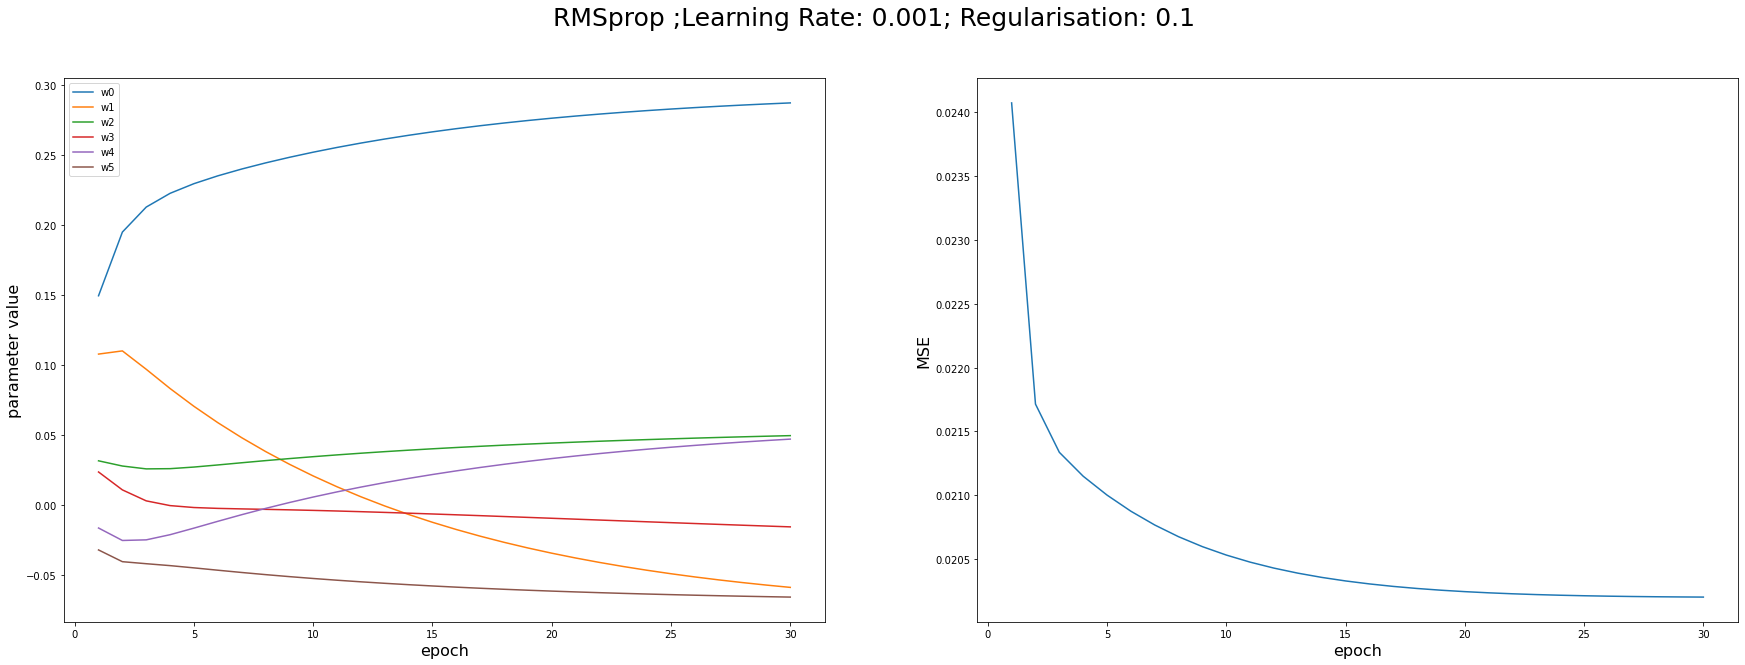

0.020200776445826265

In [29]:
lreg = LinearRegression(0.001,0.1,30)
lreg.fit(X,y,"RMSprop", plot=True)

## RMSProp : 2 Lowest MSE

In [5]:
update_rule = "RMSprop"
MSE = pd.DataFrame(index=regularization, columns=learning_rate)
for learn in learning_rate:
    for reg in regularization:
        linReg = LinearRegression(learning_rate=learn, regularization= reg, n_epoch= n_epochs)
        MSE[learn][reg] = linReg.fit(X,y, update_rule= update_rule)
        # print("Lowest MSE: ",linReg.fit(X,y, update_rule=update_rule))
MSE

,0.0001,0.0010,0.0100,0.0500
0.00,0.021243,0.020203,0.02963,0.060413
0.01,0.021242,0.020203,0.029626,0.060715
0.10,0.021234,0.020201,0.029595,NaN


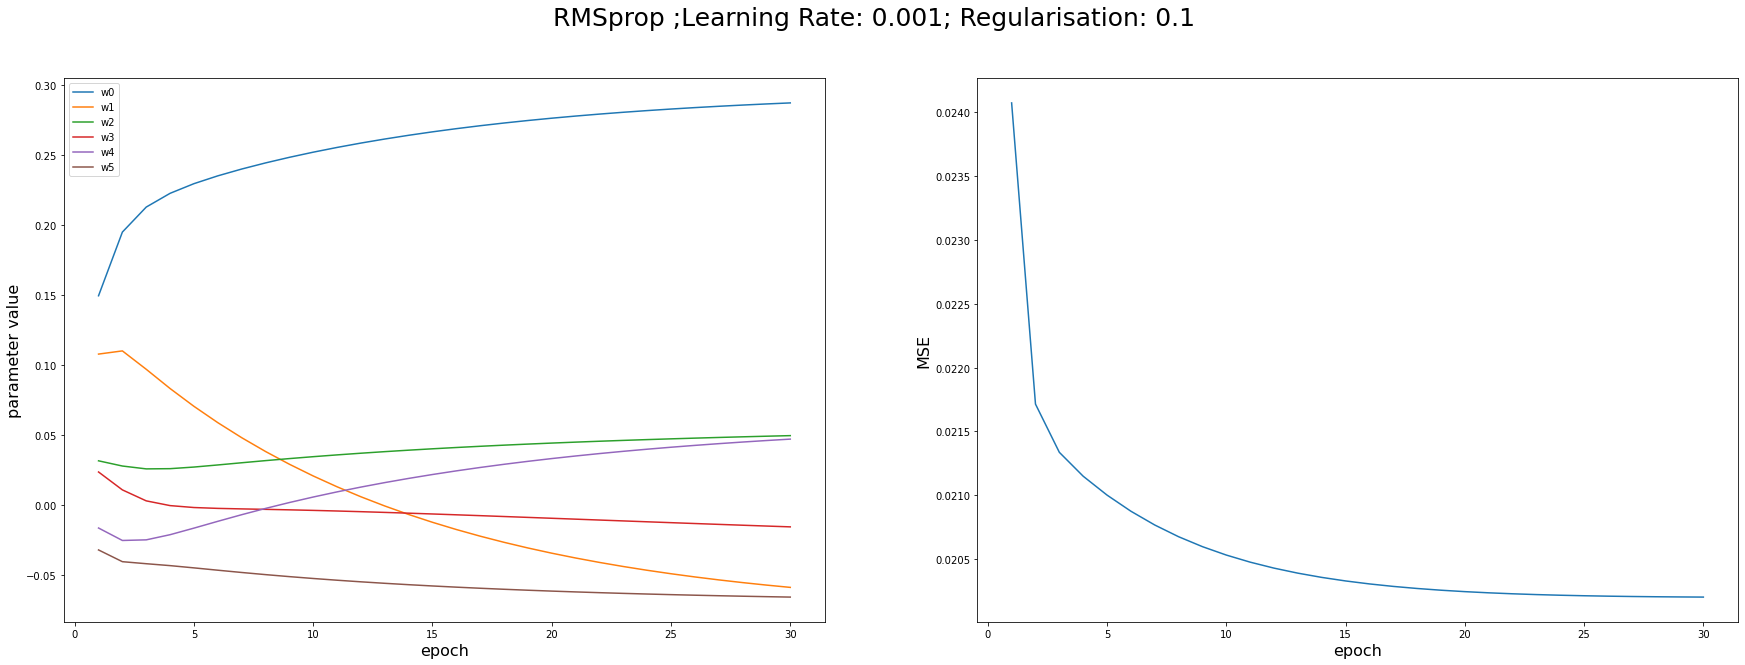

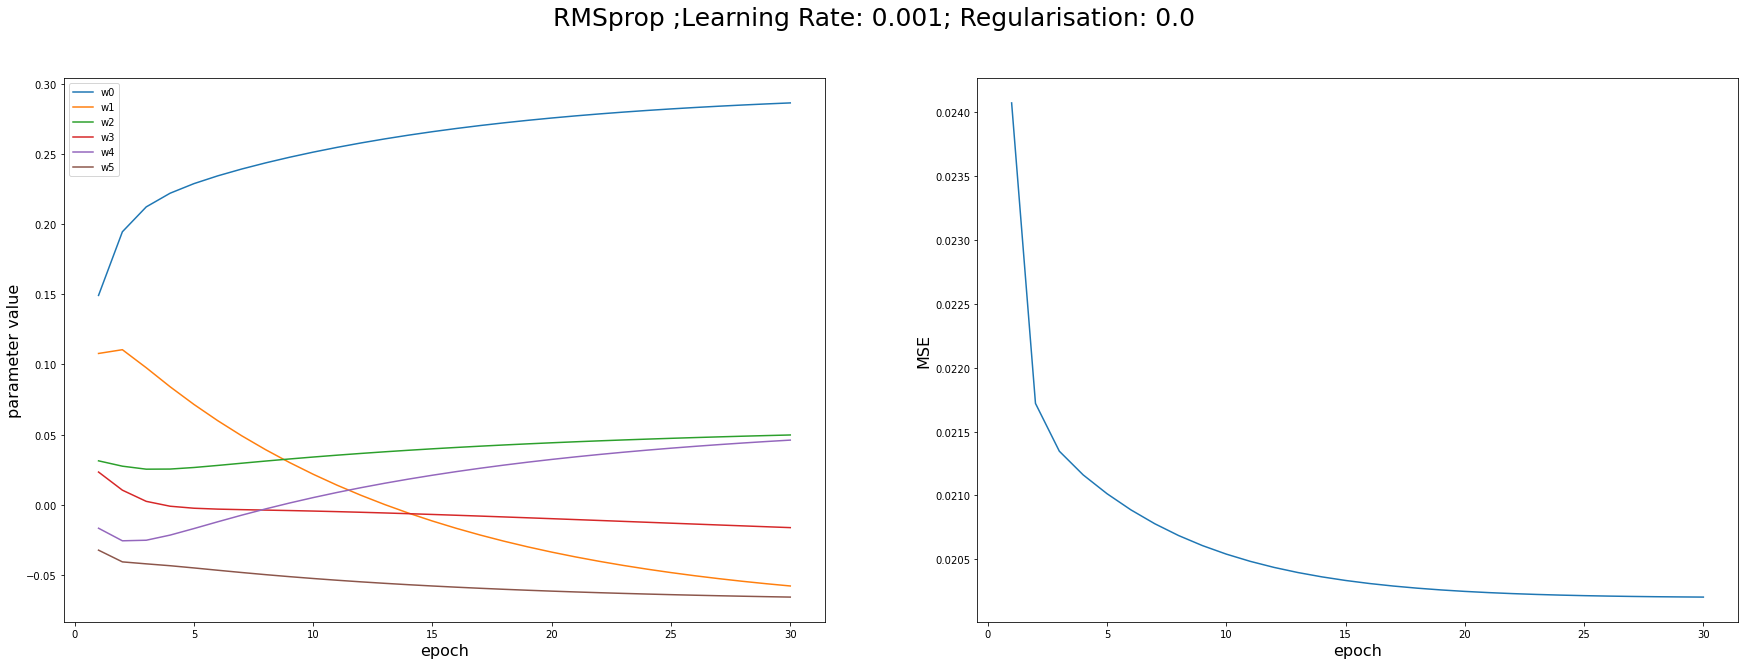

For Learning Rate: 0.0010; Regularisation: 0.10
Lowest MSE obtained at:  0.020200776445826265

For Learning Rate: 0.0001; Regularisation: 0.0
Second Lowest MSE obtained at:  0.020203078865835295


In [6]:
# Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.10

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.10, n_epoch= n_epochs)
rmsprop_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

# Second Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.00

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.0, n_epoch= n_epochs)
rmsprop2_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

print("For Learning Rate: 0.0010; Regularisation: 0.10\nLowest MSE obtained at: ",rmsprop_mse)
print("\nFor Learning Rate: 0.0001; Regularisation: 0.0\nSecond Lowest MSE obtained at: ",rmsprop2_mse)

## SGD_Momentum : 2 Lowest MSE

In [7]:
update_rule = "sgd_momentum"
MSE = pd.DataFrame(index=regularization, columns=learning_rate)
for learn in learning_rate:
    for reg in regularization:
        linReg = LinearRegression(learning_rate=learn, regularization= reg, n_epoch= n_epochs)
        MSE[learn][reg] = linReg.fit(X,y, update_rule= update_rule)
        # print("Lowest MSE: ",linReg.fit(X,y, update_rule=update_rule))
MSE

,0.0001,0.0010,0.0100,0.0500
0.00,0.020581,0.020196,0.297225,NaN
0.01,0.020581,0.020195,0.295629,NaN
0.10,0.020578,0.020195,0.282755,NaN


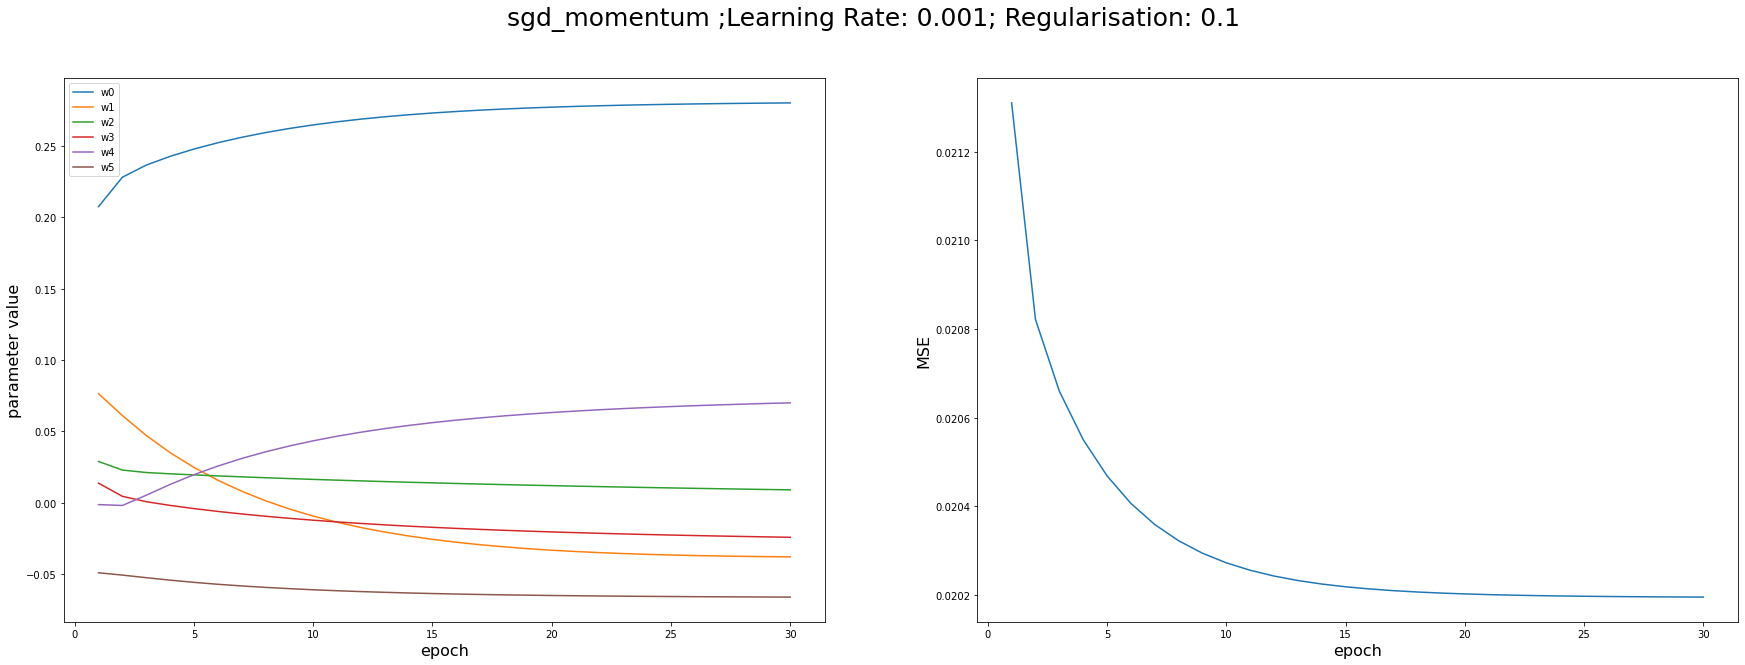

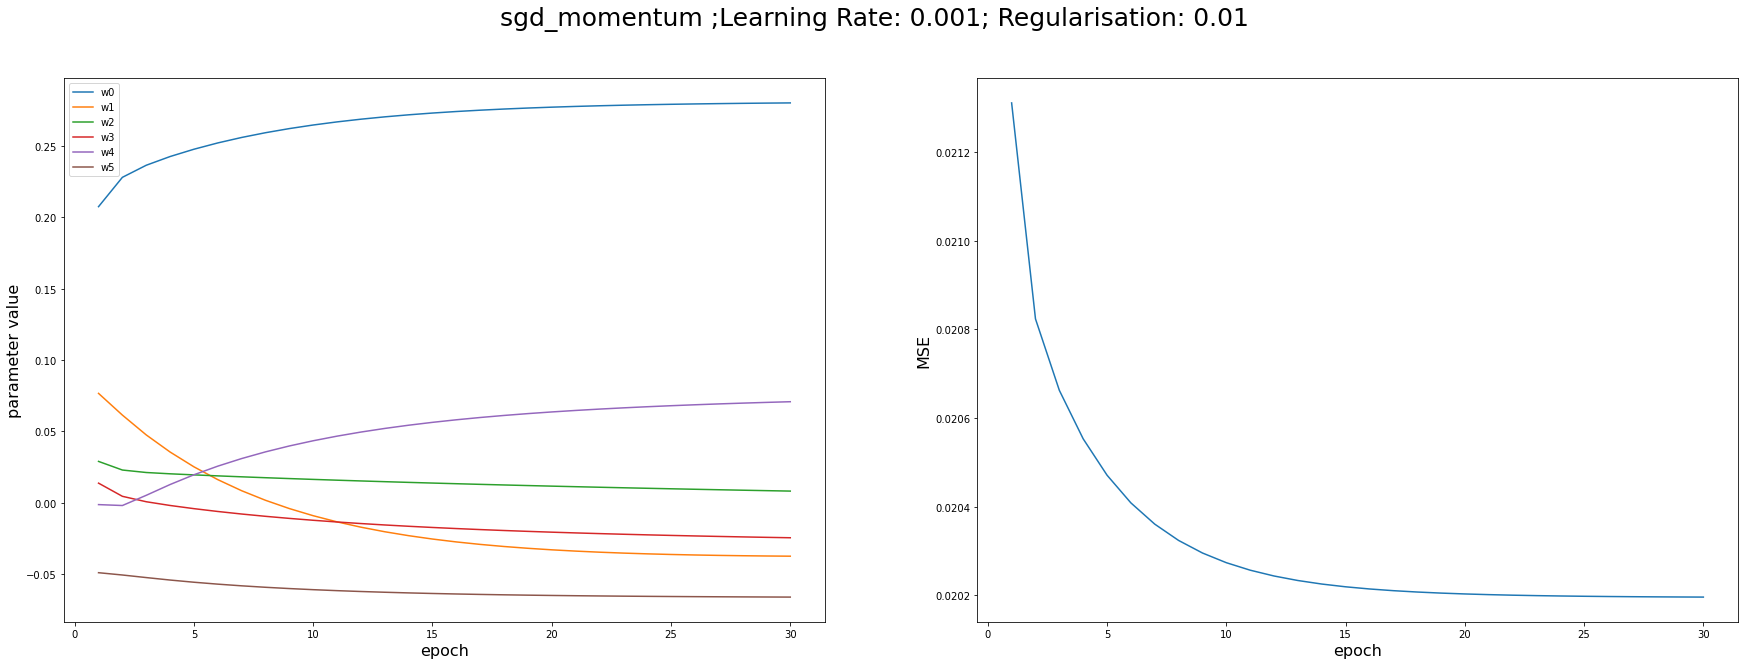

For Learning Rate: 0.0010; Regularisation: 0.10
Lowest MSE obtained at:  0.020195025546757405

For Learning Rate: 0.0001; Regularisation: 0.0
Second Lowest MSE obtained at:  0.02019548304385463


In [8]:
# Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.10

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.10, n_epoch= n_epochs)
sgd_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

# Second Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.01

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.01, n_epoch= n_epochs)
sgd2_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

print("For Learning Rate: 0.0010; Regularisation: 0.10\nLowest MSE obtained at: ",sgd_mse)
print("\nFor Learning Rate: 0.0001; Regularisation: 0.0\nSecond Lowest MSE obtained at: ",sgd2_mse)

## Comparision b/w RMSprop and SGD_Momentum

### SGD Momemtum

The update function is defined as:

$$v_t = \gamma.v_{t-1} + \eta.\nabla_\theta J(\theta)$$
$$ \theta = \theta - v_t $$

The SGD Momentum function accelarates learning in the direction of the gradient and dampens oscillations by including a fraction ($\gamma$) of the previous gradient vector.

Thus, if the gradient vector points in the same direction over subsequent updates, learning rate is increases over each iteration while the learning rate decreases if the gradient's direction changes, due to momentum.

### RMSProp

The update function of RMSProp is defined as:

$$E[g^2]_t = \gamma.E[g^2]_{t-1} + (1-\gamma).g^2_t$$

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]}}.g_t$$

RMSProp, divides the learning rate by an exponentially decaying function.

In terms of performance, we observe that RMSProp has a sharper drop in MSE Scores over subsequent epochs.


In [177]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

## a) **(4 pts)** 

Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

### Answer

**Tanh**

**Train Losses:** 0.156 
**Test Losses:** 0.143

**Linear**

**Train Losses:** 0.495
**Test Losses:** 0.489

***Tanh*** outperforms ***Linear*** activation function by a large margin. Linear activation function is essentially useless and prforms at par with a random predictor.
Tanh also has more pronounced decision boundaries than Linear activation function.

This could be because of the tanh's non-linear activation function which enables it to be more flexible in adapting to the dataset


We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

## b) **(4 pts)** 
Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

### Answer

**4 hidden layer perceptron**

**Train Losses:** 0.035 
**Test Losses:** 0.055

**8 hidden layer perceptrons**

**Train Losses:** 0.007
**Test Losses:** 0.019

Clearly, as the number of neurons increase in the hidden layer, the complexity of the decision boundaries increases and the model gets better.

This could be because as the number of neurons increase, the model becomes more flexible and can discern more complex features. Even though the inputs were just two linear features $X_1$ and $X_2$, the decision boundary is way more flexible

## c) **(4 pts)** 
Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

### Answer


## d) **(3 pts)** 
Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

### Answer

![Screenshot 2021-10-18 at 6.07.34 PM.png](data/img;base64,iVBORw0KGgoAAAANSUhEUgAAC0AAAAV0CAYAAABEm5yGAAAMbGlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAghICb0jnQBSQmgBpBfBRkgCCSXGhKBiL4sKrl1EwIauiii2FRA7dmVR7H2xoKKsi7rYUHkTEtB1X/ne+b6598+ZM/8pdyb3HgA0P3AlknxUC4ACcaE0MSKEMTo9g0HqBBSAABRYAycuTyZhxcfHACiD97/LuxvQFspVZwXXP+f/q+jwBTIeAMhYiLP4Ml4BxMcBwKt5EmkhAESF3nJyoUSBZ0OsK4UBQrxKgXOUeLsCZynx4QGb5EQ2xJcBUKNyudIcADTuQT2jiJcDeTQ+Q+wq5ovEAGg6QRzIE3L5ECtidyoomKjAFRDbQXsJxDAewMz6jjPnb/xZQ/xcbs4QVuY1IGqhIpkknzv1/yzN/5aCfPmgDxs4qEJpZKIif1jDW3kToxWYCnG3OCs2TlFriD+I+Mq6A4BShPLIFKU9asyTsWH9gD7ErnxuaDTExhCHi/NjY1T6rGxROAdiuFvQKaJCTjLEBhAvFMjCklQ2G6UTE1W+0IZsKZul0p/jSgf8Knw9kOelsFT8b4QCjoof0ygWJqdBTIHYqkiUGguxBsQusrykaJXNyGIhO3bQRipPVMRvBXGiQBwRouTHirKl4Ykq+9IC2WC+2EahiBOrwvsKhcmRyvpgp3jcgfhhLthlgZiVMsgjkI2OGcyFLwgNU+aOPReIU5JUPB8khSGJyrU4RZIfr7LHLQT5EQq9BcSesqIk1Vo8tRBuTiU/ni0pjE9WxokX53Kj4pXx4MtADGCDUMAAcjiywESQC0Rt3Y3d8JdyJhxwgRTkAAFwVmkGV6QNzIjhNQkUgz8gEgDZ0LqQgVkBKIL6L0Na5dUZZA/MFg2syANPIS4A0SAf/pYPrBIPeUsFT6BG9A/vXDh4MN58OBTz/14/qP2mYUFNjEojH/TI0By0JIYRQ4mRxHCiPW6EB+L+eAy8BsPhjjNx38E8vtkTnhLaCY8I1wkdhNsTRHOlP0Q5CnRA/nBVLbK+rwVuAzm98BA8ALJDZlwfNwLOuCf0w8KDoGcvqGWr4lZUhfED998y+O5pqOzIrmSUPIwcTLb7caWGg4bXEIui1t/XRxlr1lC92UMzP/pnf1d9PrxH/2iJLcT2Y2exE9h57DDWCBjYMawJa8WOKPDQ7noysLsGvSUOxJMHeUT/8MdV+VRUUuZa59rl+lk5VyiYUqg4eOyJkqlSUY6wkMGCbwcBgyPmuTgx3F3d3QBQvGuUf19vEwbeIYh+6zfdvN8BCDjW399/6Jsu6hgAe33g8T/4TWfHBEBbHYBzB3lyaZFShysuBPgvoQlPmiEwBZbADubjDryBPwgGYSAKxIFkkA7GwyoL4T6XgslgOpgDSkAZWAZWg0qwAWwG28EusA80gsPgBDgDLoLL4Dq4C3dPJ3gJesA70IcgCAmhIXTEEDFDrBFHxB1hIoFIGBKDJCLpSCaSg4gROTIdmYeUISuQSmQTUovsRQ4iJ5DzSDtyG3mIdCFvkE8ohlJRXdQEtUFHoEyUhUajyeg4NAedhBaj89ElaAVag+5EG9AT6EX0OtqBvkR7MYCpY/qYOeaMMTE2FodlYNmYFJuJlWLlWA1WjzXD53wV68C6sY84EafjDNwZ7uBIPAXn4ZPwmfhivBLfjjfgp/Cr+EO8B/9KoBGMCY4EPwKHMJqQQ5hMKCGUE7YSDhBOw7PUSXhHJBL1ibZEH3gW04m5xGnExcR1xN3E48R24mNiL4lEMiQ5kgJIcSQuqZBUQlpL2kk6RrpC6iR9UFNXM1NzVwtXy1ATq81VK1fboXZU7YraM7U+shbZmuxHjiPzyVPJS8lbyM3kS+ROch9Fm2JLCaAkU3IpcygVlHrKaco9ylt1dXULdV/1BHWR+mz1CvU96ufUH6p/pOpQHahs6liqnLqEuo16nHqb+pZGo9nQgmkZtELaElot7STtAe2DBl3DRYOjwdeYpVGl0aBxReOVJlnTWpOlOV6zWLNcc7/mJc1uLbKWjRZbi6s1U6tK66DWTa1ebbq2m3acdoH2Yu0d2ue1n+uQdGx0wnT4OvN1Nuuc1HlMx+iWdDadR59H30I/Te/UJera6nJ0c3XLdHfptun26Onoeeql6k3Rq9I7otehj+nb6HP08/WX6u/Tv6H/aZjJMNYwwbBFw+qHXRn23mC4QbCBwKDUYLfBdYNPhgzDMMM8w+WGjYb3jXAjB6MEo8lG641OG3UP1x3uP5w3vHT4vuF3jFFjB+NE42nGm41bjXtNTE0iTCQma01OmnSb6psGm+aarjI9atplRjcLNBOZrTI7ZvaCocdgMfIZFYxTjB5zY/NIc7n5JvM28z4LW4sUi7kWuy3uW1IsmZbZlqssWyx7rMysRllNt6qzumNNtmZaC63XWJ+1fm9ja5Nms8Cm0ea5rYEtx7bYts72nh3NLshukl2N3TV7oj3TPs9+nf1lB9TBy0HoUOVwyRF19HYUOa5zbHciOPk6iZ1qnG46U51ZzkXOdc4PXfRdYlzmujS6vBphNSJjxPIRZ0d8dfVyzXfd4nrXTcctym2uW7PbG3cHd557lfs1D5pHuMcsjyaP156OngLP9Z63vOheo7wWeLV4ffH28ZZ613t3+Vj5ZPpU+9xk6jLjmYuZ53wJviG+s3wP+3708/Yr9Nvn96e/s3+e/w7/5yNtRwpGbhn5OMAigBuwKaAjkBGYGbgxsCPIPIgbVBP0KNgymB+8NfgZy56Vy9rJehXiGiINORDynu3HnsE+HoqFRoSWhraF6YSlhFWGPQi3CM8JrwvvifCKmBZxPJIQGR25PPImx4TD49RyeqJ8omZEnYqmRidFV0Y/inGIkcY0j0JHRY1aOeperHWsOLYxDsRx4lbG3Y+3jZ8UfyiBmBCfUJXwNNEtcXri2SR60oSkHUnvkkOSlybfTbFLkae0pGqmjk2tTX2fFpq2Iq1j9IjRM0ZfTDdKF6U3ZZAyUjO2ZvSOCRuzekznWK+xJWNvjLMdN2Xc+fFG4/PHH5mgOYE7YX8mITMtc0fmZ24ct4bbm8XJqs7q4bF5a3gv+cH8VfwuQYBgheBZdkD2iuznOQE5K3O6hEHCcmG3iC2qFL3OjczdkPs+Ly5vW15/flr+7gK1gsyCg2IdcZ741ETTiVMmtkscJSWSjkl+k1ZP6pFGS7fKENk4WVOhLvyob5XbyX+SPywKLKoq+jA5dfL+KdpTxFNapzpMXTT1WXF48S/T8Gm8aS3TzafPmf5wBmvGppnIzKyZLbMsZ82f1Tk7Yvb2OZQ5eXN+m+s6d8Xcv+alzWuebzJ/9vzHP0X8VFeiUSItubnAf8GGhfhC0cK2RR6L1i76WsovvVDmWlZe9nkxb/GFn91+rvi5f0n2kral3kvXLyMuEy+7sTxo+fYV2iuKVzxeOWplwyrGqtJVf62esPp8uWf5hjWUNfI1HRUxFU1rrdYuW/u5Ulh5vSqkane1cfWi6vfr+OuurA9eX7/BZEPZhk8bRRtvbYrY1FBjU1O+mbi5aPPTLalbzv7C/KV2q9HWsq1ftom3dWxP3H6q1qe2dofxjqV1aJ28rmvn2J2Xd4Xuaqp3rt+0W3932R6wR77nxd7MvTf2Re9r2c/cX/+r9a/VB+gHShuQhqkNPY3Cxo6m9Kb2g1EHW5r9mw8ccjm07bD54aojekeWHqUcnX+0/1jxsd7jkuPdJ3JOPG6Z0HL35OiT104lnGo7HX363JnwMyfPss4eOxdw7vB5v/MHLzAvNF70vtjQ6tV64Dev3w60ebc1XPK51HTZ93Jz+8j2o1eCrpy4Gnr1zDXOtYvXY6+330i5cevm2Jsdt/i3nt/Ov/36TtGdvruz7xHuld7Xul/+wPhBze/2v+/u8O448jD0YeujpEd3H/Mev3wie/K5c/5T2tPyZ2bPap+7Pz/cFd51+cWYF50vJS/7ukv+0P6j+pXdq1//DP6ztWd0T+dr6ev+N4vfGr7d9pfnXy298b0P3hW863tf+sHww/aPzI9nP6V9etY3+TPpc8UX+y/NX6O/3usv6O+XcKXcgU8BDA40OxuAN9sAoKUDQId9G2WMshccEETZvw4g8J+wsl8cEG8A6uH3e0I3/Lq5CcCeLbD9gvyasFeNpwGQ7AtQD4+hoRJZtoe7kosK+xTCg/7+t7BnI60E4Muy/v6+mv7+L5thsLB3PC5W9qAKIcKeYWPYl6yCLPBvRNmffpfjj3egiMAT/Hj/F4x5kMHjy4i+AAAAimVYSWZNTQAqAAAACAAEARoABQAAAAEAAAA+ARsABQAAAAEAAABGASgAAwAAAAEAAgAAh2kABAAAAAEAAABOAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAeKACAAQAAAABAAALQKADAAQAAAABAAAFdAAAAABBU0NJSQAAAFNjcmVlbnNob3TDlMwAAAAACXBIWXMAABYlAAAWJQFJUiTwAAAB2GlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xMzk2PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjI4ODA8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KLQy0lAAAABxpRE9UAAAAAgAAAAAAAAK6AAAAKAAAAroAAAK6AAj8w/X8JCMAAEAASURBVHgB7L1Rr25Lkhy0z+22EEaADEY2D9gSICMQAh6Q+P9PvCH8gIUsQDJYMBqNjbGxGdxzzyErsyIyslatfaf3aPB0T6zuWxkZGbXqnjxVWbXW9+19v/3BH/zBjz/5kz/5+Pnnn/Of799//vj+84+Pn398//j48SP+/+NjXd/CfP/p28e3jwDr/z8Cf1uR0AT707fvyS1mxYOIDgGi44qnNIPRBPct+i9ZOPFPofTS/fYRdxt9PL7z7/nn9ef6E7Vy/d/11/tPbqref33+8PnL50+fv9eemNd6nPDzh5+//Pzp52+/f8g3KbsyVn30+xe/f/L7t/3WMV841rqINt9pRm78/tHvX7Vm+v2z3z/7/bPfP/v9s98/+/27P3/w5y/+/N/ff1iPTf78yZ8/+fMnf/7kz5/8+ZM/f8sXif780Z+/+vPnvxCfP3/7ab3U/ym+DhBnlJ9++vjVr3718atf//Tx659+HfbXH9/+8A//8MfPf/Lzx29+/s3H9/jAeH0Ben3p+cfP8QXouLINf35MUMfeddN8GZBKbfJIGKHVu4pituvdSU6M9UHDOjivSlHxOkYHLjeT9y3u/yPH8PgrLStbuFa+nP/IyppTSAqt518s98iL1x8KSpaVNVdcf7Kou/56//H+u3aOOnD4/LH2zMhFpcPnrzgL+/zp87efP6Ig+Pkvy6I+Z/j5y8+ffv5etcHP31oX6hWE3z/4/YPfv/j9k9+/4YEyHyvXXuH3b37/FsvC7x/9/tHvH9fJsV64+f2j3z/6/WushVoOfv/s989+/+7vv/j7P/7+kz9/8Ocv/vwlnhT0PbM/f/LnT/78KR4W1jvF+tBF2v785Vt8+Xl9j2Plav3vp7/yq/hmZHwB+q/EF6B/FbF/9Ef/KL7rvH7r888ffxL/5G+AXndcX4Je/1sH8eWusaJZPwGffnB7b86BV5f1Zev8l1mC9ZIriLhNXKtX9VteXZtb8dDXnVOc91i3WPwaf/3Le3zn3/PP68/1x/V37Q25baz9obaM9L3/VF7Wvun9N44PPn/4/JX1wedPn7/9/LG2hb78/JVrIg8Sfv7083eth7U+9pTw+4d1vvb7F79/8vs3v3/MZ22/f/L7J79/WufoPCPkmqgT9fL9/snvn9Y88Pu3yIE///P7R79/9fvXXRD9/tHvH9e5qS+/f/T7x1gTeZD2+1e/f/X711UP1rWXhN8/r+drv3/2+2e/f/b753zX9tu9f/7pV7GnRDFdX4Je72TW71746af4DdDrt0DHPz/FP9/+r3/yT378Bl98Drs6rKLz/cf67RVRklGNN+iNegnjjutaZg0U//v+7Xva6lYa/SLS2ua+x73Wt7JxpTbvUb3GGOvmbzGPXynM/Dj/nn9ef64/rr+1f6x66P1n7dHef+N4so4W+2Ti84fPXz5/rkNjXT5/R2V4e8bw88cqm7uArp0VLyprb80Z5OcPP//GdFhzw+dvn7+rRqz5UDXC50+fP33+XjtlrQw/f/j5w88ffv7Is3M0fv6Kyvj2jBE1c/0fH0T5+cPPX/VFET9/+vPXvYdkfajTlZ8//fzp58988vbzt98/xLkpVoP8IMqaGX7+9POnnz/32cHPX37+jDng58+XZ2w/f/v9w+/w+5f1X6Jc55/1l7i+/Ly+BL0W+69/vX4DdHwB+p/+s3/64+c/+TlfMP38/Xu8Z4p/1v/WW7k4PP0I7uOncL4H3nvG+s+XZSwk6z/0GMeJQGuIxuWHbMXqZjlwSte9k18/Jl7h/C3Pi44eqckAgh7f+ff88/rLAhH1y/XH9XftNt5/vP/2mcPnj87FqpTrVObzl8+fPn+vnSL+WW85alHU6lg/5Lmnh58/aj/189eaJzE9cmJgcgTn518//+e8iJnh548oEz5/r13F5+8+c/r83bnYO4jP3zhg+fy1No46W6zCkXnx+RPTw+dvn79zWWSdwPrw+Tuf3f35m5+//Pzp508/f66Nwc/ffv/g9w9+/7JOin7/Elnw969qY/T7p54LuU9G489/9zPkqhZ+/+L3T6tU+P1bJGGti9//94/46a9c+j+tL0PHF6HjG9H5ZejA3/75P/8XP76v3/wcv7n5+8/rp8MiN+tLz3Gtclp2HTRqe1l+oh/xter1YiYOYmtOra9NVyza/KZm9I74t4U56VLCu1bP9RcRffe9VsH+Vr8upvqt28U/Ht/5x3z0/ItMeP2xZrj+uP56//H+u04Xqxb4/FEHLp+/fP70+TvWQi2HVRnyqkqZTxrhR9DPHzxL+fnLz59+/q4KUYcJv3/w+xe/f/L7N79/8/s3PGP7/ZvfP/rzD3xmsx6v/P4NtSGS4c+/VhL8+Z8///Tnv/782+/f/P6xXqLErrCu2in9/tXff1kLw+/f/flDVAR//yufG/z5iz9/8ecvdULw5y95XPL3XyMNf5bPH9aXnlcS13/1IP9ZX4QO/Otl/58//uP4pc/1+qpsfPk5Htp+4Lc2599B3WBNyPXV6J8itqdo2vXRQB1kyqwuIcV7oHgIjn6xwf207pvB0q+FXv/BntVhjRH8/unGJct/67Q9/o/QeXznP+fRniGef7WesAzXkvH6c/3Z7+Fdf2N5eP/x/uvzh89feW5YZ8zYIX3+9Pnbzx/1Gt7PX37+9PN37At+/7AfnNZTZO6W9TRZW2a80/H7F79/8vsnrIxaFlgctVTWyvH7F79/8fuXWAixNPz+3++f/P7N79/8/s3v3/Lc5PdveUL0+0e/f/T7R79/XM+Kfv/q969+/7ofFvPBeS2KPC2sxVFwGb9/9Pff/P1Droy1Qvz9t8pCJiU306wY/v7pysUuqX9Z3r/kl51rxxh//z9+tb63HAmJ/SN+AXSYnz5+tfC//Jf/b37X+fv68nH8+ufgwtSEWgtrfeF5ues/9Zn70ArtK/OLJAcnIUjyg4B1jyVbV36+uLwFsu/qtZfwooKr+6yDcXzQEoTHd/49/2q95NLMlbSXT66hjTevZoW9/io/Ky+uP6u+xqxw/d2LxvvPSkRmYZUY778+f+QG4vOXz58+f/v5w89ffv7086efP/38uR6b/Pydh8N9Qox8rBcMNTX2ubnjC62w3z9UHjIfkSs/f8es8PuHmhRZUPz8HcuipsSqsWuhROXw85efv/z85ecvP3/5+cvPX3XI9vNHHg72CcHPH37+iqlQS8PPn700iPz87fcPfv9Sj9prUfj7H37/5Pdvfv/m9484NK23bb+/7x9/ii80Yf/L3/6cf9z4zc/rS9Dxm6G//eY3v8kz9Pf48nN8y/njx7J6xRNXfkN6fzMqv0Sd8XW0Uu1eVDlAh8qtY9h6mbU2oPPKOy0+xh+3DLdiEfT4mRvnv+bEnhkylTz/9ulupMbrb6XD9Wc9Brr+ev/x/itbxoY+f8TRwucvnz99/vbzx6oDcvn5a9VGP3/6+TtWQkwDP3/7+XvVxPGQDb8+XRmhVU79/Lky5udPP3/7+dvP31ksR1NnzKD8/OHnDz9/XNaGnz/8/OHnDz9/+fnTz99+/vbz9zoi5KlZzgrh+/1DnZ8lNX7/4vdPfv+2FoTfv/n9m9+/+f2bHBk2zO1ybZS/h+/f1nsDrf/x1ef8U68vQ6/r25/8/HN8w3nB9ZIlzP4CdH3ou/gtLEX66/vi/FY1+QC48n57440Zt37iIn+bQ8TX3X7kQS1Q6OqBJtkMYoJ6/P334fznrNozJGeQ55/Xn+tP1dJeF7lMqnH93TUjsuP9x/uvzx8+f8UqWGUx66XPn3Xw9vnbzx9ri6xVkYvDz1/7CJVfel54VYxdNzby84efP/z8UWsi99NcF9L4+YOVws8ffv/n959+/+v3337+8vPnPkf7+dvP3+uDP79/8PsHv3/w+xe/f4rnxSiGay3sZ2d//6HyUSeGfW7gU7XfP/n9U80Jv3/KyiEv36qULCLf60dB8fsHv3/w+we/f1hHi6yXfv728/df0ufv9Ruh8f3jtSt8+/7j5x8/1mlqXVghC67zZyyU9X3otWjqWltp/MeI8OGw6KFYdvX7EQle4fWlchzW9vKryZffNl83j3/WX8a6xv3iX87jO/9ritTsyAni+ef15/qzF8Wol1wkrr/ef7z/+vzh81eURJ8/ff728wfO0Pn6w89f63nTz58xD9Y5Mv7x83cdnsd52u8f/P7F77/8/g975yoRfv/p929+/+b3b+vclOVAi0OdIaL15x/+/Meff/nzv/U44fdPfv/k90/YJv3+aT1D5PsWv3+KPKxz1M7HOj2tgrmmSF5+/+L3L37/4vcvUhL8/sXfv4sTtd8/rH0zNsmxX+5tM4zfP/j9g98/zPcP64vPXDT7899kfv6+U7UW03xazzWGDbh+fqIWWa27tQjjkJpfNFpMXHtR5k8crYPtutKsZgVxtY+fTkrdZfyKr9vs+8Utqne0Ht/59/zrteH1l8XB9adeHmS1zbJZFRPVFxV0+a6/kau1o6wUef/Rt9V7O1/5WenJibSmTKLMmfdf77/ef3tteP/N4uD91/vvegnDzWLvGEWsdsXqedDnD58/fP6K9bCWhM+fPn/2tyV8/s6dws8ffv5a5XGfJ3h6CN/Pn37+9PNnrw0/f/r5M4+Sfv708+feL9Ospp63A8TVvp+//fzt5+9YD2tJ+Pnbz99+/uZWUcdJP3/7+dvP337/sDbIuur0GK3fv/j9i9+/+P1LHp6jNvwFfP+E0wsPNVnCqoIt+C1+miIr2zbxZ1ilfv9JUhx4fZj9fdkgYsJ//BSKRa0bLHI5eZsUbLbulLdgU9xPIcvfOp0fkq/+Ich/iwU9vvMvEwLzy/Nvr5PIjdef64/rr/efvdN6//X5w+evdYDEuWGdSn3+1Jc2dQT3+XvlxM8ffv7y8+cql7tmomxmBfXzt5+/ZUL4+bvWid8/+P1DLoto/P7F71/8/sXvX/K8FPXAn3/48x9//pWroT7I8/sXv3/y+ze/f1vvF/Ty+0e/f/T7V79/9vtnv3+OfcHvn1cS9nu12idrh8wXTXvj3M+Xfv+48xT58Ps3v3/z+ze/f8vquevjb/n+Jb/HHPvPtx/xG6C5Ee2SezP7o9IjBBZ2hteXqr/FT4mslyLrQ8WF8gr5+h51+tn13h/yZe8KsLDaI/p4fOff8y9Xj9ef64/r794fYrvw/uP91+cPHKzu5yc9Td0VYGG1h89fPn/6/O/nn1Vl/fzn87fP3z5/7/NBHBd8/vb52+fv3BpjItzPz3qavivAwmoPn799/vb52+dvn7/9/OHnLz9/+fnLz19+/soMxHHZz59+/vTzZ6yGfHS8Pz/q0+RdARZWe/j508+ffv7086efP/386edPP3/+xXz+zN8APY4vdAjmqebiQbm+hL2+bwpLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkBighGmQzDFFw9KjAtLKQQkJhhhOgRTfPGgxLiwlEJAYoIRpkMwxRcPSowLSykEJCYYYToEU3zxoMS4sJRCQGKCEaZDMMUXD0qMC0spBCQmGGE6BFN88aDEuLCUQkCiQX4But39A2HH71uu/vsuj7tr7xvu0RNFw5++vMhL3X2WZHAev75lfsndnepcJorG+d8//XpJ2JhrOz44zz/Pv/yt4pfJc6Vq9qxQomi8/rz++Nsojjkzas2ODc71x/XH9edYNZ+5tXqWIlE0rr+uv66/9zUz9potGZz3H+8/3n/ui+fK1upZoUTReP/x/uP957pY5ru+LfH+s9bLriPef73/ev+9F48ru9dNxBJF4/3X+6/33+ti8f4baeFeu1NUFWTXEe+/3n+9/96Lx5Xd6yZiiaLx/uv91/vvdbF4/420eP/tmrlmSXmb8/nD5w+fP+7F88r2WkoUjc8fPn/4/HFdLHOv2ZJaQXsd/Z7tP8cXoPcfcv3BCQkyHeohF8lpYCeuzafBlvWgHp8pI3D+IwOaDc+/OgtmTjQxsqIKfhoUtegICVKnnvPv/K+zeM4JnRgyozz/VgY+TY5kS3SEBKlTz+vP68/rz/Una4IWBqkoBT8Nilp0hASuP5EBzYbrr+uv66/rb9YELQxSUQt+GhS16AgJUqee64/rj+uP60/WBC0MUlFcf1YGPk2OZEt0hASpU8/11/XX9df1N2uCFgapKAU/DYpadIQErj+RAc2G66/rr+uv62/WBC0MUlELfhoUtegICVKnnuuP64/rj+tP1gQtDFJRXH9WBj5NjmRLdIQEqVPP9df11/XX9TdrghYGqSgFPw2KWnSEBK4/kQHNxu9D/T2+AH38AeMP/PZNeSg1ITKTHrB0rU7ULvVKKaaAoKKfayjef3GtTtQuhUoppoCgop9rKPb4kQr9yb7M2yV5SinuTAJV9HMNtM/Zmv0unZVS3HcCqujnGmg9/pmt9C/JU0pxZxKoop9roHX+z2ylf0meUoo7k0AV/VwDrfN/Ziv9S/KUUtyZBKro5xponf8zW+lfkqeU4s4kUEU/10Dr/J/ZSv+SPKUUdyaBKvq5Blrn/8xW+pfkKaW4MwlU0c810Dr/Z7bSvyRPKcWdSaCKfq6B1vk/s5X+JXlKKe5MAlX0cw20zv+ZrfQvyVNKcWcSqKKfa6B1/s9spX9JnlKKO5NAFf1cA63zf2Yr/UvylFLcmQSq6OcaaJ3/M1vpX5KnlOLOJFBFP9dA6/yf2Ur/kjylFHcmgSr6uQZa5//MVvqX5CmluDMJVNHPNdA6/2e20r8kTynFnUmgin6ugdb5P7OV/iV5SinuTAJV9HMNtM7/ma30L8lTSnFnEqiin2ugdf7PbKV/SZ5SijuTQBX9XAOt839mK/1L8pRS3JkEqujnGmid/zNb6V+Sp5TiziRQRT/XQOv8n9lK/5I8pRR3JoEq+rkGWuf/zFb6l+QppbgzCVTRzzXQOv9nttK/JE8pxZ1JoIp+roHW+T+zlf4leUop7kwCVfRzDbTO/5mt9C/JU0pxZxKoop9roHX+z2ylf0meUoo7k0AV/VwDrfN/Ziv9S/KUUtyZBKro5xponf8zW+lHwy9AvyfyR3x599v48mp/Dfyt1xu//kIQg62/pOn1X9zSe3znX788zSnUQCeMzLGDThczDbY009N+nn9ef15/Xn9SIQgJtGAEfuOXDDHY6jq94hDx+vP68/qTFUJIoAsm8Bu/ZIjBVtfpFYeI15/Xn9efrBBCAl0wgd/4JUMMtrpOrzhEvP68/rz+ZIUQEuiCCfzGLxlisNV1esUh4vXn9ef1JyuEkEAXTOA3fskQg62u0ysOEa8/rz+vP1khhAS6YAK/8UuGGGx1nV5xiHj9ef15/ckKISTQBRP4jV8yxGCr6/SKQ8Trz+vP609WCCGBLpjAb/ySIQZbXadXHCJef15/Xn+yQggJdMEEfuOXDDHY6jq94hDx+vP68/qTFUJIoAsm8Bu/ZIjBVtfpFYeI15/Xn9efrBBCAl0wgd/4JUMMtrpOrzhEvP68/v681l98Afp7zD35Pc+ciQQ6GweeCnxRdEtGMJwfMUb8H782u280hL0+uFBaeaLZ0+NXoXD+MwNjcnj+ef25/rj+ev/x/hvHEDnuyIGjNk7uGwTnsYP+VPj84fPHelDZ15gc4fj86/O/n3/8/BelwPsPiuSyo1CKe/DaZeOp8P7r/df7r88ft+IQlcLnL5+/fP7y+StKgc9fepiap6g+jh28drmV2Ojo84fPHz5/3BaHzx8+f8XK8PnD5w+fP3z+4ia59orjnEWXYG8oTzMVPn/5/OnzJ5fWWBzh+P2Pzx8+f/n8FaXA73/0LDEKpRxHDl67bDwVv5vnD/4GaPmT5x+v/ziNHjmYGWD4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbePL8D/yqm/Fj6HQK26rXRJLLKPprx+vCDF/BGf9+wSxf/JmeW8Xfiulx5efYZNcFpRWYs5/JCPz4fnn9RcVxvVHyuxaG5GQkRMJb+j66/1v/VSc91/vv/wZcjljFJRWYj5/RDIyH7mAjlq7Yq6/3n+ee64y3n+9/3r/9fnD5y+fv3z+2g+rcsYsKK3EfP6MZGQ+fP70+684Ve7lU+fLNTf8/DFzoifvnaVIk89fPn/5/OXzl89fPn/lrpBnKu6isYUUka3EfP6MZGQ+fP70+TPWi8+fVTRQRHz+PuaEpGdDv//284efv/z85ecvP3/5+cvPXzg64SxZj1vSFsTp4c/0/CG/Afo4mIxBVkyJXaqUYncpY4wT7NuIz34HeEiU8PhZKjUlTJ/zz22E+SHw/MtUSD44bw7wkCjh9ef1F0cVnRKcPq4/rj/7GMv5QeD6m6mQfHDdHOAhUcL11/XX9df7T9SM8YHDqiHef73/ev/NZcEtk8Dnj0yF5OM4dtB9SJTw+cPnD58/fP6IauHzB0tmAZ+/fP7y+cvnr6gGPDIR+PyZqZB8HNWT7kOihM+fPn/6/OnzZ1QLnz9ZMgv4/Onzp8+fPn9GNeCRicDnz0yF5OOonnQfEiV8/vT50+dPnz+jWvj8yZJZ4Hfr/ClfgK4CP8v8/vtVMv+UQiQsf7Xr6jnROiDYUmpbEY0TE0AvRMLyV7suj195kBMQz0KSOYi27Rwif9QSoIsQCctf7brQ3+N3noBgK1PaVkTjxATQC5Gw/NWuy/mvPHj+9TwBgkWG2lZE48QEUAuRsPzVrsvzr/Lg+dfzBAgWGWpbEY0TE0AtRMLyV7suz7/Kg+dfzxMgWGSobUU0TkwAtRAJy1/tujz/Kg+efz1PgGCRobYV0TgxAdRCJCx/tevy/Ks8eP71PAGCRYbaVkTjxARQC5Gw/NWuy/Ov8uD51/MECBYZalsRjRMTQC1EwvJXuy7Pv8qD51/PEyBYZKhtRTROTAC1EAnLX+26PP8qD55/PU+AYJGhthXRODEB1EIkLH+16/L8qzx4/vU8AYJFhtpWROPEBFALkbD81a7L86/y4PnX8wQIFhlqWxGNExNALUTC8le7Ls+/yoPnX88TIFhkqG1FNE5MALUQCctf7bo8/yoPnn89T4BgkaG2FdE4MQHUQiQsf7Xr8vyrPHj+9TwBgkWG2lZE48QEUAuRsPzVrsvzr/Lg+dfzBAgWGWpbEY0TE0AtRMLyV7suz7/Kg+dfzxMgWGSobUU0TkwAtRAJy1/tujz/Kg+efz1PgGCRobYV0TgxAdRCJCx/tevy/Ks8/GnmX34Bmukk2DfAf5siXIYIMAi0YTvz0kHj6LztNJc+IVj/bYS40LPBvi8MBZu4+iC3nUYGwT1C4PEzGcic8x/p0Hm+p8ojL0wY5tLqB3LbaTz/kB7mNAivv8wGU0OAJG178lcf5LbTeP4hPUit9z+vP9cf15/IAEsDAYrEtid/9UFuO40MgnuGwPMvk4HM9V+E8z8ywARh7oTVc2rGIdp2Gs8/pAeJ9f7v+uP6m6uBS4MAi2Tbk7/6ILedxvUH6UFqXX9cf1x/XH8iAywNBCgS25781Qe57TQyCO4ZAs+/TAYy138Rzv/IABOEuRPWzx+doswPkrTtNF5/SA+y5vOP66/3n1wNXBoEWCTbnvzVB7ntNK4/SA9S6/rj+uP64/oTGWBpIECR2Pbkrz7IbaeRQXDPEHj+ZTKQuf6LcP5HBpggzJ2wfv7qFGV+kKRtp/H6Q3qQNZ9/XH9/z/ef/g3QMtkx/5fFmoDVGHDHGiEGm5FHWAiPz8WGnC2LDMFqDLhjjRCDzcgjLITz7/zvYoc5syxmCKzGgDvWCDHYjDzCQnj+ef55/mG50GKFwDIgoGONJJwwI4+wEF5/Xn9ef+ey8f4XGVnvUaRSvOboM5XrT+TxkUQhXH9df11/X2uLrJRXjevPe5Yy8ggL4frj+uP681pbZKW8alx/3rOUkUdYCNcf1x/Xn9faIivlVeP6856ljDzCQrj+uP64/rzWFlkprxrXn/csZeQRFsL1x/XH9ee1tshKedW4/rxnKSOPsBCuP64/rj+vtUVWyqvG9ec9Sxl5hIVw/XH9cf15rS2yUl41rj/vWcrII/wjPpOP65OMVujRET2egScDrdgQ/YhvA3wbP6Iy4yP0etNn4MnIfQE9vvPv+ef1N4oMikPYs4icPqXPwJOhuEGIXP9c/73/6Y+o9vLw+otcaGpei8oz8GQkr4CuP66/Pv/4/DOKDIpD2LOInD6lz8CTobhBiHz+8fnH5x/d5Ht5eP1FLjQ1r0XlGXgykldA1x/XX59/fP4ZRQbFIexZRE6f0mfgyVDcIEQ+//j84/OPbvK9PLz+Iheamtei8gw8GckroOuP66/PPz7/jCKD4hD2LCKnT+kz8GQobhAin398/vH5Rzf5Xh5ef5ELTc1rUXkGnozkFdD1x/XX5x+ff0aRQXEIexaR06f0GXgyFDcIkc8/Pv/4/KObfC+P/z/X3/wCdC5MOXu8/FQG/1VltRcUYongpl3NouKvffMIZ6CCURg8PqeF8x+TgdngNCGQCVRQiD2fco9LejWef15/rj+uv1EIoqwc1SIJ7z/ef7njeP/1/uvzR56bro0U0IJCrA5w067G5y+fv3z+8vkrCoHPXyyPWRirOPr9R8wLn7/2jPD50+dPnz9ZHh8A58sIFBRiieGmXY3Pnz5/+vzp82cUAp8/WR6zMFZx9PnT50+fv7EgfP72+dvnb6yGp8X5OiIFhVhquGlX4/O3z98+f/v8HYXA52+WxyyMVRx9/vb52+dvLAifv33+/vM+f+dvgMZBFRMv7KTEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrEPeClbtMSjyBIv8axL1g5S6TEk+gyL8GcS9YucukxBMo8q9B3AtW7jIp8QSK/GsQ94KVu0xKPIEi/xrEvWDlLpMST6DIvwZxL1i5y6TEEyjyr0HcC1buMinxBIr8axD3gpW7TEo8gSL/GsS9YOUukxJPoMi/BnEvWLnLpMQTKPKvQdwLVu4yKfEEivxrMO41fwM0b3MZ5UKlPHkJEhLwy9TNnF+w5sAbqPKd8viRgUyV5IuQwPmPNMUPFjEPa950dpZ3XpfohcpeyUuQkIBjNePxNRdn9q/ZeeuQvAQJCZz/SLDn/5xVPTues28qd/ytQ/ISJCTw/PP88/qLOdArYuLnClSl119m4JKS5iVISMC8N+P8ay48/84MXLJzoTz/IgOZF0kOIYHXX6TJ589Zc3t2nGtv+ZfohcqeyUuQkIB3a+Y6gvyLqHLTF8rjRwYyL5IcQgLnP9Lk9T/XXM+Ovb6GuUQvVHZJXoKEBJ5/nn9efzEHekVMPJZeL6pJa2eNJC9BQgKO24zH11xoOgtfohcqtclLkJDA+Y9Eef+da65nx3P2TeWOv3VIXoKEBJ5/nn9efzEHekVM/FyBqvT6ywxcUtK8BAkJmPdmnH/NheffmYFLdi6U519kIPMiySEk8PqLNPn8OWtuz45z7S3/Er1Q2TN5CRIS8G7NXEeQfxFVbvpCefzIQOZFkkNI4PxHmrz+55rr2bHX1zCX6IXKLslLkJDA8++T+RdfgP4evwQ6/rMUa4bG1WkrXzmNAcO2+kSqUAzdjw+P7/x7/tV6uK+Q9w3kpsfKet7xpvb6c/1x/XH9eVYL1BFUDdjFA8NC+7SqUAyl64/rj+uP60/Vg3uF8Pnn7QXCLV+orM+M3tSuv66/rr+uv89qgTqCqgG7eGBYaJ9WFYqhdP1x/XH9cf2penCvED7/+fzXe86aKZgnsNhNnlYViqH0/uP9x/uP95+qB/cK4f3H+0/vOWumYJ7AYjd5WlUohtL7j/cf7z/ef6oe3CuE9x/vP73nrJmCeQKL3eRpVaEYSu8/3n+8/3j/qXpwrxDef7z/9J6zZgrmCSx2k6dVhWIo/9XuP/IboPe/XBr9F1V+/UtrDH+IP71l7wDxvev8yYDqreNQ1eORIvjTDypK9g7g8Z3/Vdjq2jMjDWdJhJRfSo1Vz9+mZe8Ann+ef55/WD26zrhKer2RIkDH38qydwCvP68/rz8sn70y0nCVeP1hv2dKCJC438qydwDXH9cf1x8sn70y0nCVuP64/sQciFXCKUGAifNbWfYO4Prr+uv6i+WzV0YarpIIKr+0GkPfP71l7wBef15/Xn9YO7rOuEp6vZEiQMffyrJ3AK8/rz+vPyyfvTLScJV4/WG/Z0oIkLjfyrJ3ANcf1x/XHyyfvTLScJW4/rj+xByIVcIpQYCJ81tZ9g7g+uv66/qL5bNXRhqukggqv7QaQ98/vWXvAF5/Xn9ef1g7us64Snq9kSJAx9/KsncArz+vP68/LJ+9MtJwlfz+r7/49c/rT/u4NAUZDEILxuo1f2pCegCmjW94xwG+J9q6GwSPYUk8FEF4/C5Yzr/nn9dflYuqFVIxANO6/rj+ev/x/sujRQAUCOUmfiiC8PnD5w+sI5+/fP7y+atqZtVKqZiAaX3+8vnL5y/sG7pi5oljelhCZIPw+cPnD8wjnz98/vD5Q6upVEzAtD5/+Pzh8wf2DV0xPFtcAJYQQ0H4/OHzB+aRzx8+f/j8odVUKiZgWp8/fP7w+QP7hq4Yni0uAEuIoSB8/vD5A/PI5w+fP3z+0GoqFRMwrc8fPn/4/IF9Q1cMzxYXgCXEUBA+f/z+nT/4G6AfZVJPGJwFDR76DgXC9IHdQbiw1K0eR5ny+H3CGbkt55GvoUGCYZ3/zADSAev5F2mpreExn7z+vP7whDFqSzmP+TI0WGCwOwgX1usvEuP1t2bHYz65/rj+uP7swvk0j/UyJCiwsDsIF9b1NxLj+rtmx2M+uf66/rr+7sL5NI/1MiQosLA7CBfW9TcS4/q7ZsdjPrn+uv66/u7C+TSP9TIkKLCwOwgX1vU3EuP6u2bHYz65/rr+uv7uwvk0j/UyJCiwsDsIF9b1NxLj+rtmx2M+uf66/rr+7sL5NI/1MiQosLA7CBfW9TcS4/q7ZsdjPrn+uv66/u7C+TSP9TIkKLCwOwgX1vU3EuP6u2bHYz65/rr+uv7uwvk0j/UyJCiwsDsIFzZW3bcf32OlVQ3iLRgPZv2C6G/7L0J5io97kz/Eh5uy5C4BpTy+8+/5h0MCjgtcZQS6ZnpxMSxHrYN7dFybcY/j9ef15/Xn9beqhtaFriKFHrGDONzslNwloJTrj+uP64/rzyoYWheq6nT7iB3E4WbH5C4BpVx/XH9cf1x/VsHQutCVp9AjdhCHm52SuwSUcv1x/XH9cf1ZBUPrQlWdbh+xgzjc7JjcJaCU64/rj+uP688qGFoXuvIUesQO4nCzU3KXgFKuP64/rj+uP6tgaF2oqtPtI3YQh5sdk7sElHL9cf1x/XH9WQVD60JXnkKP2EEcbnZK7hJQyvXH9cf1x/VnFQytC1V1un3EDuJws2Nyl4BSrj+uP64/rj+rYGhd6MpT6BE7iMPNTsldAkr9+defNQIvHXqR6iveHS4U+lQoWv294Rjn9acbzhuqr9jjZwYuKXH+KylsPf/628xef5UB15+Xn646C4r6il1/XX8jA5cpAbJC0br+uv7W88MuGmvexLy4/nTjOaHUV7xvdaE8/yopbL3+vP68/rr2LOT64/rr/WeuifTODVV9xbvrhfL+W0lh6/3X+6/331lrvP96//X+O9eE99/IwHmgUF/xTt2Fwj0qFK33X++/3n9nrfH+6/3X++9cE+mdG4r6ir3/XNMlZGUrWu+/3n+9/+6CgboR68L1d+ZEakcHtOYqRh7DnnNrP0OUOlrXn2eOfP7z+nP96TJDdNYY9RW7/mQGLin5XXv/8i2+/7wu/pbn+gOsP97eWfIPWX/S1a4Le06zkymVtNkxmuuiixE9vvPPuXHMspxk2eTRxvPP629Wm5obVW0Uu/4wAysta/VwjTGSwPXX+x9+ys/7fy6WWBc+/1RxWKmounpkZrxqSO1mCkubHaNx/ZGkNHT9df11/dVT3Vobrr9ZIbL0ZuPnn10ydaZ8G3tO5WnL2ix66bz/dE4Eef/x/uP9R6vKWhzef7JEZEmtuppltDOzK2/FUjtqcTG8h+uv9x/vv7IoGnr/9f7r/df7b1WEY5fN7bX22CPi/TcS5ue/mhs9d7COen/JieLzl89fPn/Jomjo85fPXz5/Yd84Thm5vdQec0R8/ogS4vNHzY2qpoq7vvr8sXIRufH+K5Oiofdf77//qvbf/AJ07WRVvLJdzbqwJ5b3aTu6DOfZ7RFehHzJJuHq5vGfyXthRk6H8+zwCDv/nn9ef1lwuBTWsnH9eRaPF2bUlOE8OzzCTPp+nHgInvc4mdFlOKfy8RXfIjz/I1HOP6fimjZe/8/F88KMJTecZ4dHmEn3/GMqVto8/56T54UZc2o4zw6PMJPu+cdUrLR5/j0nzwsz5tRwnh0eYSbd84+pWGnz/HtOnhdmzKnhPDs8wky65x9TsdLm+fecPC/MmFPDeXZ4hJl0zz+mYqXN8+85eV6YMaeG8+zwCDPpnn9MxUqb599z8rwwY04N59nhEWbSPf+YipU2z7/n5HlhxpwazrPDI8yke/4xFSttnn/PyfPCjDk1nGeHR5hJ9/xjKlbaPP+ek+eFGXNqOM8OjzCT7vnHVKy0ef49J88LM+bUcJ4dHmEm3fOPqVhp8/x7Tp4XZsyp4Tw7PMJMuucfU7HS5vn3nDwvzJhTw3l2eISZdM8/pmKlzfPvOXlemDGnhvPs8Agz6Z5/TMVK21+C+ffte3z9fv45MwV71shU2bRGl6j8l+C+yxL9iC+YfWNGcZcfEWq25Ijh7svGv+HLEEW/BOuG2dfja6aRY+dfs1LTBblZ3sLr8vzz+hvTIGfFamq27DmjU4eKErn+6EpDolx/NCs1ZZCb5S28Ltcf158xDXJWrKZmy54zOnWoKJHrj640JMr1R7NSUwa5Wd7C63L9cf0Z0yBnxWpqtuw5o1OHihK5/uhKQ6JcfzQrNWWQm+UtvC7XH9efMQ1yVqymZsueMzp1qCiR64+uNCTK9UezUlMGuVnewuty/XH9GdMgZ8VqarbsOaNTh4oSuf7oSkOiXH80KzVlkJvlLbwu1x/XnzENclaspmbLnjM6dagokeuPrjQkyvVHs1JTBrlZ3sLrcv1x/RnTIGfFamq27DmjU4eKErn+6EpDolx/NCs1ZZCb5S28Ltcf158xDXJWrKZmy54zOnWoKJHrj640JMr1R7NSUwa5Wd7C63L9cf0Z0yBnxWpqtuw5o1OHihK5/uhKQ6JcfzQrNWWQm+UtvC7Xnz+v+hO/Afp7ZFm++R65Pi/9Kzljfxp/9Je/0+pb0WyHsO/8QrfgF9Dov5x18c9Z0WyHsGSrfaFb8Ato9F/Oujx+5UG3kJGoHQ7zQrfgF9Do7/xXtjz/9qyp2ZHtmCg9qV7oFvwCGv2Xsy7nv/Lg9Z+TIefImCg7PWFe6Bb8Ahr9l7Muz7/Kg+dfToacI2Oi7PSEeaFb8Ato9F/Oujz/Kg+efzkZco6MibLTE+aFbsEvoNF/Oevy/Ks8eP7lZMg5MibKTk+YF7oFv4BG/+Wsy/Ov8uD5l5Mh58iYKDs9YV7oFvwCGv2Xsy7Pv8qD519OhpwjY6Ls9IR5oVvwC2j0X866PP8qD55/ORlyjoyJstMT5oVuwS+g0X856/L8qzx4/uVkyDkyJspOT5gXugW/gEb/5azL86/y4PmXkyHnyJgoOz1hXugW/AIa/ZezLs+/yoPnX06GnCNjouz0hHmhW/ALaPRfzro8/yoPnn85GXKOjImy0xPmhW7BL6DRfznr8vyrPHj+5WTIOTImyk5PmBe6Bb+ARv/lrMvzr/Lg+ZeTIefImCg7PWFe6Bb8Ahr9l7Muz7/Kg+dfToacI2Oi7PSEeaFb8Ato9F/Oujz/Kg+efzkZco6MibLTE+aFbsEvoNF/Oevy/Ks8/CWff/EF6B81JcYs2bmBWZJvMWPCrF8XzbmD+Ce2b3v7tr90bKGQG3p859/zz+vP9cf11/uP99/nCeGV6WOFzx/PnzaUtHWihNzQ5y+fv3z+8vnL5y+fv3z+8vnreUJ4ZfpY4fOXz1/nf+1Npk1PFCE39PnT50+fP33+9PnT50+fP33+fJ4QXpk+Vvj86fOnz5+vn933QnmuJZ+/ff72+dvnb5+/ff72+dvn7+cJ4ZXpY4XP3z5/+/zt8/dLqehC8RT8OT5/fPseX4C+/qXkoOvf5Rr9/Fv56w+D69p9/2nDvH6h2uPv1F8T6PzH/LpnJgKef1h9L0ny+svEuP64/kYRudYR7z87MdfseP/x/nNfN2vn8f7r/RcZuJYPnz98/oiJ4fOXz18xDe4lIiZHBq5Rnz+ivt4z4/3X5w9svm+TxPuv99+oHt5/vf/GNLjuI37/4fNHTozr7PD5621rXVvv2l5xXdPn/df7b0wM77/ef2Ma3EtETI4MXKOuv1Ff75mJgOsvdp+XJHn/ycS4/rr+RhG51hE//+zEXLPj/cf7z33drJ3H+6/3X2TgWj58/vD5IybGX4DzV/wG6O/xr7Fn6Z6XmLvLTmp7IGG1Q+IKIAxL2SDEEQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E4FxlIKAABAAElEQVRqeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hLcrUYHQTmp7IGEhpq0AwrBHeLsSFQjtpLYHEhZi2gogDHuEtytRgdBOansgYSGmrQDCsEd4uxIVCO2ktgcSFmLaCiAMe4S3K1GB0E5qeyBhIaatAMKwR3i7EhUI7aS2BxIWYtoKIAx7hNPt3wANFSzVT1CSd+EzcjLtEwHAPoclU5J34TNyMu0TAcBytCcoybvwGTmZ9okAYJ/DkinJu/AZOZn2iQBgOdoTlORd+IycTPtEALDPYcmU5F34jJxM+0QAsBztCUryLnxGTqZ9IgDY57BkSvIufEZOpn0iAFiO9gQleRc+IyfTPhEA7HNYMiV5Fz4jJ9M+EQAsR3uCkrwLn5GTaZ8IAPY5LJmSvAufkZNpnwgAlqM9QUnehc/IybRPBAD7HJZMSd6Fz8jJtE8EAMvRnqAk78Jn5GTaJwKAfQ5LpiTvwmfkZNonAoDlaE9QknfhM3Iy7RMBwD6HJVOSd+EzcjLtEwHAcrQnKMm78Bk5mfaJAGCfw5IpybvwGTmZ9okAYDnaE5TkXfiMnEz7RACwz2HJlORd+IycTPtEALAc7QlK8i58Rk6mfSIA2OewZEryLnxGTqZ9IgBYjvYEJXkXPiMn0z4RAOxzWDIleRc+IyfTPhEALEd7gpK8C5+Rk2mfCAD2OSyZkrwLn5GTaZ8IAJajPUFJ3oXPyMm0TwQA+xyWTEnehc/IybRPBADL0Z6gJO/CZ+Rk2icCgH0OS6Yk78Jn5GTaJwKA5WhPUJJ34TNyMu0TAcA+hyVTknfhM3Iy7RMBwHK0JyjJu/AZOZn2iQBgn8OSKcm78Bk5mfaJAGA52hOU5F34jJxM+0QAsM9hyZTkXfiMnEz7RACwHO0JSvIufEZOpn0iANjnsGRK8i58Rk6mfSIAWI72BCV5Fz4jJ9M+EQDsc1gyJXkXPiMn0z4RACxHe4KSvAufkZNpnwgA9jksmZK8C5+Rk2mfCACWoz1BSd6Fz8jJtE8EAPsclkxJ3oXPyMm0TwQAy9GeoCTvwmfkZNonAoB9DkumJO/CZ+Rk2icCgOVoT1CSd+EzcjLtEwHAPoclU5J34TNyMu0TAcBytCcoybvwGTmZ9okAYJ/DkinJu/AZOZn2iQBgOdoTlORd+IycTPtEALDPYcmU5F34jJxM+0QAsBztCUryLnxGTqZ9IgDY57BkSvIufEZOpn0iAFiO9gQleRc+IyfTPhEA7HNYMiV5Fz4jJ9M+EQAsR3uCkrwLn5GTaZ8IAPY5LJmSvAufkZNpnwgAlqM9QUnehc/IybRPBAD7HJZMSd6Fz8jJtE8EAMvRnqAk78Jn5GTaJwKAfQ5LpiTvwmfkZNonAoDlaE9QknfhM3Iy7RMBwD6HJVOSd+EzcjLtEwHAcrQnKMm78Bk5mfaJAGCfw5IpybvwGTmZ9okAYDnaE5TkXfiMnEz7RACwz2HJlORd+IycTPtEALAc7QlK8i58Rk6mfSIA2OewZEryLnxGTqZ9IgBYjvYEJXkXPiMn0z4RAOxzWDIleRc+IyfTPhEALEd7gpK8C5+Rk2mfCAD2OSyZkrwLn5GTaZ8IAJajPUFJ3oXPyMm0TwQA+xyWTEnehc/IybRPBADL0Z6gJO/CZ+Rk2icCgH0OS6Yk78Jn5GTaJwKA5WhPUJJ34TNyMu0TAcA+hyVTknfhM3Iy7RMBwHK0JyjJu/AZOZn2iQBgn8OSKcm78Bk5mfaJAGA52hOU5F34jJxM+0QAsM9hyZTkXfiMnEz7RACwHO0JSvIufEZOpn0iANjnsGRK8i58Rk6mfSIAWI72BCV5Fz4jJ9M+EQDsc1gyJXkXPiMn0378Buj133rQC0HQ67dDB/4RdsP7L4zWfvs3SuttN4aqfrU0PVGCW3ZdHt/5j7ng+cel4PVXlQGVYnqTrVi3jCag1wL+zvsVW5frj+tPzAXXHy4F15+qDLN6wIMtzdkymoCeyMAtuy7XH9efmAuuP1wKrj9VGVAppjfZinXLaAJ6LfD5J3Kxa25mxfXX9TfWietvL4u1JOKa1QMebGnOltEE9EQGbtl1ef15/cVc8PrjUvD5pyoDKsX0JluxbhlNQK8FrGorti7XH9efmAuuP1wKrj9VGWb1gAdbmrNlNAE9kYFbdl2uP64/MRdcf7gUXH+qMqBSTG+yFeuW0QT0WuDzT+Ri19zMiuuv62+sE9ffXhZrScQ1qwc82NKcLaMJ6IkM3LLr8vrz+ou54PXHpeDzT1UGVIrpTbZi3TKagF4LWNVWbF2uP64/MRdcf7gUfp/qz7cf3+ML0N9uhaCWP9q7Aiws1GXXd6u/fasCEgh5G+up6s29v97trgALqz1iGI/v/Hv+xaL4Ef/z+tvPba4/US6xn7v+xvLw/reSMDfPw3vZYXe/l6j3X++/3n9jjXj/9fnD5y/uMD5/+PwVkyHnQx4d7ucHPYLcFWBhtUdUXZ8/fP7w+cPnD5+//P7H77/6CT+2S7//8fnD56/cGv3+z+8/YyLw6XQ+RGzv5Qlj93uJ+vnDzx9+/og14veffv/p95/cYXz+9vNHTAafv3Nr8Pnb5+99jg7zcr2csEO9VtFL1Odvn799/s714fPn/fyZvwF6lA86BC8lqWkoo97EglsfPJalAgISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISAxwQjTIZjiiwclxoWlFAISE4wwHYIpvnhQYlxYSiEgMcEI0yGY4osHJcaFpRQCEhOMMB2CKb54UGJcWEohIDHBCNMhmOKLByXGhaUUAhITjDAdgim+eFBiXFhKISDRIL8A3S5+lmL2KG9zj7tr7xvueyWKhr994iIvdfdZksF5/OPb5ZckDqpzmSga579+bmikaTtjrt04zz/Pv/ypotvsuXFef1htrj+RCddf7z/46e9LufD+s6pF18yVopET77/ef73/XirHG9VrKVE0Pv/jRPLM2ag1Ozw41x/XH9ef58J5ZWr1rHCiaFx/XH/ytx9d5syotTs+ONdf11/X38vKeaNq9axoomhcf11/XX/v62XsNVsyOO8/3n+8/9wXz5Wt1bNCiaLx/uP9x/vPdbHMd91b4v1nrZddR7z/ev/1/nsvHld2r5uIJYrG+6/3X++/18Xi/TfSwr12p6gqyK4j3n+9//4e7b/HF6D3JF8Tn5Agl4N6WAvJaWAvnDafBlvWg3p8pozA+Y8MaDY8/6oWZ040MbKiCn4aFLXoCAlSp57z7/yvvTDnhE4MmVGefysDnyZHsiU6QoLUqef15/Xn9ef6kzVBC4NUlIKfBkUtOkIC15/IgGbD9df11/XX9TdrghYGqagFPw2KWnSEBKlTz/XH9cf1x/Una4IWBqkorj8rA58mR7IlOkKC1Knn+uv66/rr+ps1QQuDVJSCnwZFLTpCAtefyIBmw/XX9df11/U3a4IWBqmoBT8Nilp0hASpU8/1x/XH9cf1J2uCFgapKK4/KwOfJkeyJTpCgtSp5/rr+uv66/qbNUELg1SUgp8GRS06QgLXn8iAZuP3of4eX4A+/oDxB377SREoNSEykx6wdK1O1C71SimmgKCin2so3n9xrU7ULoVKKaaAoKKfayj2+JEK/cmSzNsleUop7kwCVfRzDbTP2Zr9Lp2VUtx3Aqro5xpoPf6ZrfQvyVNKcWcSqKKfa6B1/s9spX9JnlKKO5NAFf1cA63zf2Yr/UvylFLcmQSq6OcaaJ3/M1vpX5KnlOLOJFBFP9dA6/yf2Ur/kjylFHcmgSr6uQZa5//MVvqX5CmluDMJVNHPNdA6/2e20r8kTynFnUmgin6ugdb5P7OV/iV5SinuTAJV9HMNtM7/ma30L8lTSnFnEqiin2ugdf7PbKV/SZ5SijuTQBX9XAOt839mK/1L8pRS3JkEqujnGmid/zNb6V+Sp5TiziRQRT/XQOv8n9lK/5I8pRR3JoEq+rkGWuf/zFb6l+QppbgzCVTRzzXQOv9nttK/JE8pxZ1JoIp+roHW+T+zlf4leUop7kwCVfRzDbTO/5mt9C/JU0pxZxKoop9roHX+z2ylf0meUoo7k0AV/VwDrfN/Ziv9S/KUUtyZBKro5xponf8zW+lfkqeU4s4kUEU/10Dr/J/ZSv+SPKUUdyaBKvq5Blrn/8xW+pfkKaW4MwlU0c810Dr/Z7bSvyRPKcWdSaCKfq6B1vk/s5X+JXlKKe5MAlX0cw20zv+ZrfQvyVNKcWcSqKKfa6B1/s9spX9JnlKKO5NAFf1cA63zf2Yr/UvylFLcmQSq6OcaaJ3/M1vpR8MvQL8n8kd8effb+PJqfw38rdcbv/5CEIOtv6Tp9V/c0nt851+/PM0p1EAnjMyxg04XMw22NNPTfp5/Xn9ef15/UiEICbRgBH7jlwwx2Oo6veIQ8frz+vP6kxVCSKALJvAbv2SIwVbX6RWHiNef15/Xn6wQQgJdMIHf+CVDDLa6Tq84RLz+vP68/mSFEBLoggn8xi8ZYrDVdXrFIeL15/Xn9ScrhJBAF0zgN37JEIOtrtMrDhGvP68/rz9ZIYQEumACv/FLhhhsdZ1ecYh4/Xn9ef3JCiEk0AUT+I1fMsRgq+v0ikPE68/rz+tPVgghgS6YwG/8kiEGW12nVxwiXn9ef15/skIICXTBBH7jlwwx2Oo6veIQ8frz+vP6kxVCSKALJvAbv2SIwVbX6RWHiNef15/Xn6wQQgJdMIHf+CVDDLa6Tq84RLz+vP7+vNZffAH6e8w9+T3PnIkEOhsHngp8UXRLRjCcHzFG/B+/NrtvNIS9PrhQWnmi2dPjV6Fw/jMDY3J4/nn9uf64/nr/8f4bxxA57siBozZO7hsE57GD/lT4/OHzx3pQ2deYHOH4/Ovzv59//PwXpcD7D4rksqNQinvw2mXjqfD+6/3X+6/PH7fiEJXC5y+fv3z+8vkrSoHPX3qYmqeoPo4dvHa5ldjo6POHzx8+f9wWh88fPn/FyvD5w+cPnz98/uImufaK45xFl2BvKE8zFT5/+fzp8yeX1lgc4fj9j88fPn/5/BWlwO9/9CwxCqUcRw5eu2w8Fb+b5w/+Bmj5k+cfr/84jR45mBlg+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3ZJQBUxfWojVSdeHZh+KThl9WWXQJAVVyP2kjViWcXhk8afllt2SUAVMX1qI1UnXh2Yfik4ZfVll0CQFVcj9pI1YlnF4ZPGn5ZbdklAFTF9aiNVJ14dmH4pOGX1ZZdAkBVXI/aSNWJZxeGTxp+WW3jy/A/8qpvxY+h0Ctuq10SSyyj6a8frwgxfwRn/fsEsX/yZnlvF34rpceXn2GTXBaUVmLOfyQj8+H55/UXFeZ3vP6sv8P1E0o/vqMmr+n97eOnjyCizXLq9S9/z17/rn9r3bv+u/7/7td//gy/1PiC0krM579IRubD69/r3+v/d/386/q3H2CkxheUVmKu/5GMzIfrv+u/67/rf8wBXqs2RF3YJZX0Afz+GY/Pfv/s84fPH1ke5IxVUFqJ+fwVych8+Pzl81esnLHXrrkRxOCOzTdc77/ef+v1vc8fPn/sYiF7bEFpJeb9N5KR+Yi8jbysOrtirr/ef557rjLef73/ev9d1dLnD58/fP7IvUHOEgWllVidMaLH7+j3b+Q3QOuWGHj8IVdMiV0qlGJ3KSOME+zbiM9+B3hIlPD4Wao1JUyf889tjPkh8PzLVEg+OG8O8JAo4fX3Z1l/P//8m4//8X/5Xz/+p3/wv338g3/4v3/8w//jDz/+4I/+0cc//sf/5OP//Kf/7OP//hd//PHHf/zHHz//vL70/OPjp1//+uNf/9f+yse/8Vf/6sdf+7f+zY9/96/92x9/49/76x9/62/+jY+/9bf+/Y//+G//Bx//yX/4tz9+/atfp97zfx/jOGUJvP4zFZKPY9nTfUiU8Pr/s6z/+LGzSPM+aDPhB3hIlHD+nf+ocTolOH18/vP+5/0vqyvXB4H3/0yF5IN14wAPiRLef7z/eP/x/hs143GM9fnD5w+fP3z+iNrAIwOBz1+ZCsnHceyi+5Ao4fOXz18+f/n85fOXz5/cMTbw+dvnb5+/ff6OcsAjI4HP35kKycdZPuE/JEr4/O3zt8/fPn9HsfD7T1TMbX3+9Pnzd+f8KV+Arg1+bvN7fSuZ01yIhOWvdl1dE1oHBFtKbSuicWIC6IVIWP5q1+XxKw9yAuZZWDIH0badQ+SPWgJ0ESJh+atdF/p7/M4TEGxlStuKaJyYAHohEpa/2nU5/5WHvwjzb/105R/+0R99/Ld/93/4+O/+7t/7+O//3t//+Ht//3+O9Rh/S+sEuX5CN70fH9+//RQwvvC8mKDX3+dPAX7g10Gjy4rET9xk9yUK8FPc7z/9O//Rx3/5n/2dj//6v/jPPv6b/+o///ibf/3fidi6W92rRgoqmbPJG+WYiBcjndmFkX3j7rsk6N+jNpKevFuBvgf6U0uALkIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9O9RG0nPErPte6A/tQQQC5Gw/NWuC/171EbSs8Rs+x7oTy0BxEIkLH+160L/HrWR9Cwx274H+lNLALEQCctf7brQv0dtJD1LzLbvgf7UEkAsRMLyV7su9P//2LsKgD2Ko71fDEggWHCX4u7SFrcixb1IhVIqFGmLJ4QQgpYqJcCPlOIWXIqV4rS4Q4K7hGDx739md5/Z2bt7I2+xwG7y3eju3s3tzu67N7eXak2YyRmU9ZjKYH7VVYTKhuHRQMtREvOnWhNmcgZlPaYymF91FaGyYXg00HKUxPyp1oSZnEFZj6kM5lddRahsGB4NtBwlMX+qNWEmZ1DWYyqD+VVXESobhkcDLUdJzJ9qTZjJGZT1mMpgftVVhMqG4dFAy1ES86daE2ZyBmU9pjKYX3UVobJheDTQcpTE/KnWhJmcQVmPqQzmV11FqGwYHg20HCUxf6o1YSZnUNZjKoP5VVcRKhuGRwMtR0nMn2pNmMkZlPWYymB+1VWEyobh0UDLURLzp1oTZnIGZT2mMphfdRWhsmF4NNBylMT8qdaEmZxBWY+pDOZXXUWobBgeDbQcJTF/qjVhJmdQ1mMqg/lVVxEqG4ZHAy1HScyfak2YyRmU9ZjKYH7VVYTKhuHRQMtREvOnWhNmcgZlPaYymF91FaGyYXg00HKUxPyp1oSZnEFZj6kM5lddRahsGB4NtBwlMX+qNWEmZ1DWYyqD+VVXESobhkcDLUdJzJ9qTZjJGZT1mMpgftVVhMqG4dFAy1ES86daE2ZyBmU9pjKYX3UVobJheDTQcpTE/KnWhJmcQVmPqQzmV11FqGwYHg20HCUxf6o1YSZnUNZjKoP5VVcRKhuGRwMtR0nMn2pNmMkZlPWYymB+1VWEyobh0UDLURLzp1oTZnIGZT2mMphfdRWhsmF4NNBylMT8qdaEmZxBWY+pDOZXXUWobBgeDbQcJTF/qjVhJmdQ1mMqg/lVVxEqG4ZHAy1HScyfak2YyRmU9ZjKYH7VVYTKhuHRQMtREvOnWhNmcgZlPaYymF91FaGyYXg00HKUxPyp1oSZnEFZj6kM5lddRahsGB4NtBwlMX+qNWEmZ1DWYyqD+VVXESobhkcDLUdJzJ9qTZjJGZT1mMpgftVVhMqG4dFAy1ES86daE2ZyBmU9pjKYX3UVobJheDTQcpTE/KnWhJmcQVmPqQzmV11FqGwYHg20HCUxf6o1YSZnUNZjKoP5VVcRKhuGRwMtR0nMn2pNmMkZlPWYymB+1VWEyobh0UDLURLzp1oTZnIGZT2mMphfdRWhsmF4NNBylMT8qdaEmZxBt1MSMyniZcgFhmxtjaQiRaIOQZXfSJMZYQ5MJbHQUn+xf2l/vjOw56SOyI7HvgKYen5DXxI5S8k7Hrm1skv/a6v/idkeQaDzzXfd526/5wH3GAKew6eIZEdnuUnJ/hKfPB6kf2fG2xtipsmyP0pA0fL+la8DeZdadGG31moruPXWXNUts9giiIWOMtWJqgHoabH64v/lxpTxT9oDW05CtJUERBUiv5EmM8IcmEpYBhSK/b0xaLlif5jDjnOxqdTsogZjW5J8ZEaYg9L+aB61KRil/3lrqGkUoZEirPIbaTIjzEFpfzQPTTtZ8x9ksn6hVpbIycwNT27dh0BS2r+/Gy1tpPeq2L+0PzYGQG0wkedpMiPMQUMeKJT+5w1Iy9XsSpOrgrU3hYBeTqUIc1DsT/PQbGX8Kf2v+B/fG7RrKMJOEmGV30iTGWEOiv+heWja4n+K/yn+p/gfWEBdgyJ0EhFW+Y00mRHmwFTCMqFQ2p83Bi2XbkSxf2YBNRDbDmBtPYZKEeagtD+ah4Yt43/xP8X/+t6gXUMRdpIIq/xGmswIc1D8D81D0xb/U/xP8T/F/8AC6hoUoZOIsMpvpMmMMAemEpYJhdL+vDFouXQjiv0zC6iB2HYAJ+H3R9oB2gx2tmCWS2hlxJMsYZQReklNbBilfu3stJlAWojQyognWcIoI/SSmtgwiv2L/eNgwzYjkC2E0MqIJ1nCKCP0kprYMKbw9ifBwi+++pq78p+3uWv+eZd7/sWXvO389cMR+8vD5crOzskv169fZMKlxEPJj9hpCZaWGB6/e7Q/Ynfo+C98dEC0Jcl+0CEU2pPIv9C887jN1v2222LDtd38c80R2zprgdYUbv9gU3M9/sLTwUtqYsMo1x/bRLKZYLQQYS4NVJIlrKrnJTWxYRT7F/uX8afabUr/g0U4JgYfXzOR2ih5qxY6xt0EDcMo/qf4n+J/ah2HPYSwpgBGkiWsquclNbFhlP5X+l/pf9Vuo33L9JSWOrYnVpVK/0P3qhnRMIr/Kf6n+J+q2yj+BxYpvz8mNLJYmfGnlZZUxp8y/pTxNzoT7Rumv5T5R5l/lPmH9gwi7CGE5FuYZAmzcsG9pCY2jNL/Sv8r/a/abcr8HxYp8387x681EW0jE9Iq/rfM/8v8PzoT7UJl/hG8KwxS5l9l/vUlzL9SALR2SmmM+LPRBlVadeuCOkeVEwKlTnjDELSX2IpVC6nSLRXrp66qFin1F/uX9lf6X+bkjIOo+psqraohyPjWO+93F1x1g7sFcDycp7pO/nJS/YiI/8FuzF06u0BbCkdSXSAyGUCwM0UCZWyQ4GlUEH1zJCDogEDKEX86KfWvt8YqbvstNnTrr7Fq7udRtE9ySlI8U5Um35+gVQynnHNUOSEor/j/Mv6V8b9FT6n2tyqtPakuqHNUOSFQKv2v9L/S/0r/S07BYFUnUqVVtS6oc1Q5IVAq/qf4n+J/iv9JTsFgVSdSpVW1LqhzVDkhUCr+p/if4n+K/0lOwWBVJ1KlVbUuqHNUOSFQKv6n+J/if4r/SU7BYFUnUqVVtS6oc1Q5IVAq/qf4n+J/iv9JTsFgVSdSpVW1LqhzVDkhUCr+p/if4n+K/0lOwWBVJ1KlVbUuqHNUOSFQKv6n+J/if4r/SU7BYFUnUqVVtS6oc1Q5IVAq/qf4n+J/vnz/kwdA+45pYt9aROVrTza9PaCGIUokPZSDsHDbI59iLwhCOIZSvzaLYn80BrWGNhNFTAMKqGHE9uQDOT1bDqX9lf73Gfkf9M1Lr7vFnX3pVe7xZ4bCr4llw6AuPsx3XTQ5H7jM9uf5Uj8QOMEAvFC8IvJEnm+poiK0jYSGQLqDlCsgZPXMdupfYtGF3B7bbO623nhdnKecHP7LqaFEn/xFKEVuglq/zypXAJnRJ+mhHETvM7J/KEyrC1WxQl8VTyrCUn+xf2l/pf8V/1Pm3/CEGKYqo4VnlPFPh1TYAxYq8+84mWgApgEF1DDCYBuM6dlyKONPGX/K+FPGHziCMv6U8Tc0AxkWQsIQUeYfZf6hKyhl/lXmn2X+Te9Yh2a6HVDDEG2SHsqhzL/L/LvMv8v8G46gzL/VPXrHGJxjmX+iXZT5V2wRZf5Z5p9l/qnusYZwfglBQA1DlEl6KIcy/yzzzzL/LPNPOIIy/1T36B1jcI5l/lnmn1/s/BtBdxI7Z2b9oTnmLEMZVBtuuwjLIjTl5CxDGdSot4eyLEJTSs4ylEGNensoyyI0peQsQxnUqLeHsixCU0rOMpRBjXp7KMsiNKXkLEMZ1Ki3h7IsQlNKzjKUQY16eyjLIjSl5CxDGdSot4eyLEJTSs4ylEGNensoyyI0peQsQxnUqLeHsixCU0rOSlTn+E535T9vd4PPv9Q99dwLJkdwoaKZkiylBE7AKjSLlaee2BE6qvrsFAnh3xaDjn84yh2gU1FeXw51VuIErELHShZbcAG3165buy3WXysEQkudsTwpN6NyQRC3e2RZhKacnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJZFaErJWYYyqFFvD2VZhKaUnGUogxr19lCWRWhKyVmGMqhRbw9lWYSmlJxlKIMa9fZQlkVoSslZhjKoUW8PZVmEppScZSiDGvX2UJSV7wCtxTTU0sDy6p5vhIoqosF0iZOF1GmtCbGakdvAKvXDAt4uxjiKKlLsDzMx9FOgpGSdQOfHBmkDy+fxfCNUVBGtK3FK/dYWue2FapA2sL5Q+yPw+d6HH3d/OPM8d9+Dj+IM4wkhKrmjYzyo0LLkpWlBu3iNyAss5ginDZF/Ew6UvTTJEXZzDvspe2UcRLfTv40bavo86l91+aXdr/fcya283JK4Jtl52iR7koYdTt4IFVVEry9x8mu2xQXcakZpA8tLPN8IFVWk1A9DhXYVoNgtWcdbsXJokDawfCbPN0JFFdG6EqfUb21RMT7IBmkDq9ifpjLGUVQRtWbiNFrY3AarGdkNrGL/Yv/QuEzjUFSR0v7QTMr4k/uc1Dqif8lAg7SB5bN4vhEqqkhpf6X9lf6HNpB6RI5nXS91qpxtM1uJ5xuhoopovYlT6re2sOYMeIO0geV1Pd8IFVWk2B+GKuNv3udS66i3vlwzyltl8HwjVFSR0v5K+yv9D20g9Ygcr/dAq1n6n7dAg0kS3wgVVUTtnjjF/tYWpf1VLdBgnQZWaX+wgLeLMY6iipT+BzOV+Wfuc1PrqPY9oRukDSyf0/ONUFFFtLTEaazBnIjVjOwGVqkfFvB2McZRVJFif5ip9P+8z6XWEftXBhqkDSyfxfONUFFFSvsr7a/0P7SB1CNyPOt6qVPlbJvZSjzfCBVVROtNnFK/tYU1Z8AbpA0sr+v5RqioIsX+MFQZf/M+x9aBAOjx2ANagvhaNr0JNiAWFHI3Ha2GxamLUL5Sf7F/aX++QzT3kNYOrEmfPStAq2FxapX+NzH/8+HHn7rjTz3TnXv5dX4gEcvRkv6TLt6UwklJqC7Q7nTcshmMEMUclVIJUn8XtH/hSJAznLLXCV2iI5SAvP6LVLXc0Pe8kCeKfVnt1r/r9zd2v917Dzdtr55astTBMxYmcUKv2HiwGhancml/E2t/tBqhWI44Ia1Zh1bD4tQs9i/2L/O/Mv8N/qDZQ5T5Rxn/0pgjLYXthJCjSR1aDYtTs4w/Zfwp408Zf4I/aPYQZfwp408ac6SlsJ0QcjSpQ6thcWqW8aeMP2X8KeNP8AfNHqKMP2X8SWOOtBS2E0KOJnVoNSxOzTL+lPGnjD9l/An+oNlDlPGnjD9pzJGWwnZCyNGkDq2GxalZxp8y/pTxp4w/wR80e4gy/pTxJ4050lLYTgg5mtSh1bA4Ncv4U8afMv6U8Sf4g2YP8fmNP2YH6Fi1B/Y0LF9O0sroxCYdam4giPvTgEIt1yuoVqpPWYpMeqVGU3MDKfUX+8vEJqTYMjzQVgKR5YumlYWck3PU3EBK+/tqtz9Mzdy1t9zhBv7l/9ybb77rg5MdwpExXPsTj3HK3odx5+dwRXKXkeysWW42yqve/y4y8iGzSrxC1JIsMQc2mf5C6599lj7ukF/8yH1v3TVxGdgN2p64vzA5t8lPtpjS/r/a7T/c3XjH7I0r93/yG37MYc1Y2n9p/97F+7Zh+5m2EkgsXxStzGecrIPmBlLaX2l/pf2x+9h+pr0k9TdlKcKMkwU1N5DS/0r/K/2P3Sf2DA+0l5T+x/FeTaIIDTdZUHMDKf6n+J/if9h9Ys/wQHtJ8T/F/6ANoJdok1CEDWeyoOYGUvxv8b/F/7L7xJ7hgfYSCC1fdK2MeScdam4gpf+V/lf6H/uO7WfaS1J/U5YizDhZUHMDKf2v9L/S/9h9Ys/wQHtJ6X8c79UkitBwkwU1N5Dif4r/Kf6H3Sf2DA+0lxT/U/wP2gB6iTYJRdhwJgtqbiDF/xb/+6X7X2z/LG2ylrShUlJpsJIrj1o3OYh6KKF9PmSQJQFSwbAqaE0DDNthSv3F/qX9hU4T+orpMUQ9LP2vHf+DffFd3xNPcecNuc4bWTZvHo9tmmVPZ/8fzqhDmEhSfhdEKMubXJGB7Z+Bj4dcdm6u+j/wOqAbckuegEneUILs+iy5Uvqy6t/5+5u4/gf8zF9B8b+8P7hjcmvjDZK7F+5mxgi3ten++/tt7266z8RCmaQAwSj2L/Znqyntr/S/4n+Cfyz+t4w/Zfw1MwaiHjbMP8v8A46DI6mZYxmUJlQWGGX+laxW5h9l/lHmH8E7BF9hPAZRD4v/ra1/lPEHDaeMPzq2NiDsQioCo4y/qdWU8beMv2X8Dd4h+ArjMYh6WMbfMv6W58/5bIMdREfXGlLTAKOMv2X8ZTsq848y/yjzjzL/EAuEscKMGEQ9LPOvMv8q8y+Om9ZjBLz5yC6kUjDK/KvMv9iOyvzrs5l/6Q7QtWHKWlh7YUJq+kkEjN2XMApJEqqe5KgME6X+dIcz2waiZq9MhwYmLPb3FqA5CEv7g1mCS621p29o/xM7PP7M8+6QQX9yTzw7FJMO2EdsUUmiJ7s3N4igKfrYNRlhzLSvtzLYnRlbGyJyGP8nygie7pDyvwL1L/mtBd0xv/2FW2KRhfw54ezy8xVGlnhdhFFIktDbqbQ/sU52/z0DRpJ73yLV9DM9GpgwCkkSFvvDMKX9SeuotadvqP+PPQUGQScp/U/NUUVq7SVToIMhjEKShMX/wDDF/0jrqLWn0v+K/yn+NzrOOqj1l0yFDpYwCkkSFv8LwxT/K62j1p6K/y3+t/jf6DjroNZfMhU6WMIoJElY/C8MU/yvtI5aeyr+t/jf4n+j46yDWn/JVOhgCaOQJGHxvzBM8b/SOmrtqfjf4n+L/42Osw5q/SVToYMljEKShMX/wjDF/0rrqLWn4n+L/y3+NzrOOqj1l0yFDpYwCkkSFv8LwxT/K62j1p6K/y3+9xvgfzs6ZavT4AOil5TOQLcAXMTREJavyhGpySqMCulzeV6DwLJK/cX+pf1xkE79svS/3ALWZyTnknRqcog8zwjE1wy58Tb320F/dOPGjvXGhn8Mgc64BbLDs+w0KHfDZ/O8UIfQEtss0Csg9rkDDJlHCCNMMHwuYSBFXmSFkoUwUxEp/ytSf9du3dygg/Z1W264lo4H/jLiwV6ZZ1UYFTKpNAgsq/j/4v+L/xePE3xLwDyZHWyf8YIKo0ImlQaBZZX+V/pf6X+l/4nDsH7BOxBzqMkqjArpc3peg8Cyiv8p/qf4n+J/xGFYv2BcT/IllllRrpApT4PAsor/Kf6n+J/if8RhWL9gXU2jrKJcIX12z2sQWFbxP8X/FP9T/E+jjzFOyPqM5FySQk0Okec1CCyr+J/if4r/Kf5HPIn1C8mzBKwmqzAqpM/keQ0Cyyr+p/if4n+K/xGHYf1C8DrpWJNVGBXSZ/S8BoFlFf9T/E/xP8X/iMOwfiF5noDVZBVGhfSZPK9BYFnF/xT/U/zP5+l/pIdpsl1PmJa2eMzQwGKeIMLR7tvOeqTKxujyaoGWtnip31ugwSTF/sEoeiztT2Jt81T6X83/SNjxX86+wP3+9PNgrhCczL7k7efdpEjEmKLtQbItGDJQjce/kF9EYErQtARCe/0g8e+cdEE5nikA/A7RFYbofHXr3//Hu7qf77a9XGw4/2rb8hflr9xfRfH/MFDVRqX/hfYjfSJLof0nlqUtHjUaWGyUQYRj8f+l/ZX+l7qUYMX/FP9Tfn/lfcJT1QHF0haPWRtYZfwJRtFjGX/L+FvG39zXlPG3jL9l/M37RBl/YYHqhMLSFo+ma2CxjCDCsYy/Zfwt42/ua8r4W8bfMv7mfcJT1QHF0hYv40+juQwzWAvHMv6W8beMv9Fh0G+gXxT/m9vE+I4ksD7X4rQjYLVtleev3ijBWjgW/1tvI2X+W/xP8b/JzSpW9bGWtnjM0MAq6y/BKHos/rf43+oc5Ss0/nQg/lmSD94L3VqarqR41r4la3O2kmyq5QW1BdzA9Ww5NDpduIxSf7G/to3S/kKvKf3P2+EL8D/jx493A/4w2J192bWoUrZulppxwOANB+k6u+AkOrvAbiXnfwAAQABJREFUg4W26ZuqsKDSReQ+g4Qtjw+45Ic8AClH8gkDuPyXvIIIX4Kjucuzz/HVr3/3bTZ1R+z7U389DHUWi/lr9NcQKD3K5fP6lZmQ4v/L+Mu33EIbkraB/iFJ2o50GNC+GXkMB6TEjbqRE6Tm6DPioGOMkUk56Iefd/3jx48L52/7v3DEDTT0/w68NdGFb05Modc/ftw416Vr13Cj/LXyPn3x9vcn8SXe/1L/l9v/iv2L/SfF/48bNxYvrHXA98JvSYLZvg7jz+S2f3lJrxNT0a5dMEGdQscff/94D8v486XOfya3/fmJEe9daX/ihLwrEpNwFuVdU3BQwkYKnICbo7C/ou1/PJzM+HHjvZ/pEF9TvcovwP+OwzxVbOrnql9C/RP7/THe4bfDeIxJXcU+X6/7L9czsesv40/q6eX+f/Htf1wnvgbXYv2vm/dZuUeWe5Slr7D/lfNs1f/GRb/8RfU/qU82guhibfoF+P9W1+/voal/rIwTWEPwc2KxG/7K+mewgrdVtEjAzVFURFbWX4xREjqp7c+bEdlyb/PNsD8e0TiZK0ryzQiXzecvssNM8BnWFl41HLzhcJgS2x/WhsfhX9cu3aoz08/F/4R1avHBXdHO0NK8SYNdvRnF/tG0iZtzjOU/c/vLszo5Kb82jvtZ/G+4C8nQvBfmLvgbh8OU2P795YVr9JeBy+IVJm7OMVeezCINuVx/zTTC+KaOP3LdMqY0PX+TVtYVPvDL8n//6/qr+EnpFX5NxXec0v5L/6efzN3AN7X/0wrl+j//+AfvSMv4yyaXwdL+vrz25wOgq4O8f94kt6jZX2Y3j4QfY5klI6iRYE0sDPOQq9QfbVXsnxrNRLCsTWVEPWNNXNrfN7b/SQzyb4/+vbvsxpsxRstySgh69q2G/Q+ww8tCyxG26HmfBb7QEvosSXC/Mgcaz0zo1vz4LyJJQdPXBAo55CR8kPWUU/9WG63njjtsX5y9v+J4Tbx+f5mRiLgB4fqNWBjF/4sRvB3L+BcbS2hapuW0RrM2lRH1PDXx59z+xiKo7rBDD9MTCfVPuP/PO+98bp+f/0zzTAzJrikj6jlrYmF8xv3vhhtucLfcfovbaYed3HLLLZedxBdRv6+wRfsp9Yfboeb5HO5/sT8soAYO9uaxtL9gCTXPV6T9Pffc8+60089ws/bp4w444ICW94/30cLsnmaE1Qp4TfwVuX47/+jXr58bOWqkt8Mss8xSv4gKJ7umjKgogqyJv4LX789aG2j9Gqqc7JoyoqpZrr9mnnL/P/P514Ta71fJ/v37H+U++fhjN23vXpgjH/6l/P7p1xe+bvSn7oD9D3R94Ou+ar+/+h3Zz436dJTb/4D9XStfnN3TjCj+p2qBmnmE8Rn//plS+p8/z3L9Le//lVde6e666y6/zqUbIMBLIQQr5MH63zRTT+16zzC9W2GFFdxqq67qpuoxVWhyLeYPU0L7u/ba69y/7rjd7bzzzm6ZZZYJ1zOBY3ZNGVHPVBOD8f4H77ljBx3nusN2Rx155ATtVy+xMqeqVZDnqImFMZH+P/z94W7QsYNcjx49XP/+/fMCQWVlZkRNNdcV8STUXy8l52RVZkSuJ1RNXOqf6P2vWzHnZDbNiFxPqJq42H+C9h81epTrd0Q/2C1YTlbJrf8VNyvPX6abbjo391xzue98+7tuoYUWRJl1209p9j/55JPdG2+84foe0ddN03Oa5gsCN2tTGVHPUhMLI/q/v5/7D/f4o4+6LbbYwq2x5hr1zC04WZkZUc9QE5v6FZVsDffv3HPPdY8/9qjbfPMtcX6ra+FZmRmhKorUxFppef6iphBrNdhfjVhBMptmREURZE2slRb7qynEbMX+9cbTgpO1qYyoZ6D4/vvuc5dddjkaJDgtnr/37NnTzTvvvG7jjTZ2s88xe72wyGGZ/pZlRD1LTSyMyvxz0KBBbvgHw93AgQPjyz31cizHljl2zDh32GGHut4z9naHHHSIVfO41VVGpX7PL+2vZrtWjMymGVHPURMLo9hfjODHBm8KMVtpf2KFSUpZm8qIevaauLS/0v++of6nA28aYQnPJt8bIsN0lci2UlEKdAshi4W4EwZmsBxzCbTcoG5rEFwSzrBFFYHdQhgy+7ylfmvpaK9i/9L+TK8M3YVtQyjBJX1N+x/e/vx1/5PcVf+8HZco14jrlYFAPWLD9UMv7PocLOOzxMGDPipIQjFeJEXiB1YXlOtLjPqyu7S8p4map8j6t9hgLXfi4QfgbXx/AbhIuQ7BK0muH9dc/D+NQ0OV8c+2itBqaBuhBJcEu0W2lYok0C2EoiAJ4i+z/Y0ZNdod1vdw3/5nnnnmcELwI77/wyf4FyPpf+IVyQL+1ltv7U9/Srz+q/Dg+N9334UA6B3dcssu96Xa/8u+/6X+L7f/FfsX+0+K/3/iiSfcOX8/283SZ9YQAO19sbjgKXv8aaf9+wDokQgKRCD4LLPM6sdQY4Y4LpH91R5/27n+cIFyXc7dfPMtfuxed711fYvgLE5k4cq/3tf/TWz/cm/D3RX4zev/ctWf9/U//9yzbjBeOPH9CfPfvX7yE7fgggugXvaw0P8+C/t/9OlH7l+33u7mnmceBPQtHesIv7+O9C97jEIAtAQY9/lc6p/Y+PPxJ5+422691c0z79xumaWXxTlICtffr9+RbuSneBnlwANCgHYQqkZ8bERnZKQRRTETqz9lir5MSxektH86fmsdsUygI7cqFAVJ4Bf721/6NNRXf/3jkksucQ888B/Xo3sPN13v6XAf8/W/kSNHuY8//hA3OfQR2aV9v/32y19UmALv/5AhQ9zd+P0eAqDhj+It453z7To0bVx5C6FRmlj7f3/4cARAI8B4qu6u/5FHxZxSrqQvzv+8/PJL7pFHHnXLLruMm3vuuUP1qP/99953xx53rOs+lQnQhjRc+f9+/bEiLTHQX/z184pK/WKBYv/QDr64/tfU/j755FP4BLx0gNOYCS8nV5+/jB8/1onOaKyzio6kFVdc0W233XaBwG2cmP8JinKMfdkzvvz7f/zxx7t3333PHXH4Ea5nr57Z2aWzjedsT92ffzyAP6nXf+65f3ePPfY4AqA3d2uswQDoL/7+33zzzX5dfN1118VFpPr//o9/uCcQoL25BGjj/MIlf3bX/1W7/+EOpuuXK/0UL4zeetttbh78llkaLyd9FuNvbCkA0ZaeIbikvH5QmoJ2zGOzqgYQ8Ce1/ZX6rREFl1Tsz2ZprSOWCXTkVoWiIAn8pvZ3/333uksQAC1f9JhxppmgJAWEQkZh84dP8Js87Dgf7C/rfxtsuKHcDU1BOxx5jiokAnFT/VKX/VUU1ENZAwYc5T766KMYAM2dqHl2LJh0Xv/o0aPdEUcc4XpPP7075OCDvdLk1p/ORbAvp/2FufgjmIsvhxebMBdPp6EGCFeeX78KiUA8JV5/uLtyEenC45XyymKTK9dvbaTGIVLuf2n/Jf4IXoQjF71I6/EndB3Rk/T19T+IwcE3dnCB3iS0S7hqPbZgq3xiSJZfCEm8F9aFZ4pBTY4t2ElhIliWv9QfrFXsH1tNaB3+mDWU1KhasJPCRLAsvxCSiv2DHb6k/i+u/7cDT3aXXY+dn43/83GI/szkBuFmgSGfKOgiPLD8byQvjweqgfQyva9BLqR8tItsiX2WHz0+0FqYMZNvI6E6b5GQ46tf/9Ybr+uOO+TXMBOvMFy3PfprI0MISaoepP6YKQY1ObZgJ4WJYFl+ISSV+oMdonW9jTJDRTFAC3ZSmAiW5RdC0jfI/qOwINEXCxKSBg44Onxq+2t+/dw5a6cdd3TLYAfo7HLFEBmjzD99H8k6ihgppBZsiicKs/xCSCr2D3Yo/s83Bt9GsoYSzQPQgp0UJoJl+YWQ9BVsf08+LgHQ5/jgFb8DdDjTb8z1x/fy/FVff/0N7gPsQLLpZpu5Xr16pdsVbTI5YEq5//b67fX97qCDXE/s8tgXgZLtpCn9+rPzb8MAWX4hJH0F+3+r+5+dfzj7yTpm+cv1B9vh/p911lnuqaeedLPNNrt748033TJLLe122XWXmm0z+9WkE2dI/heGDXOnnnqqW2qJJd2uP/hB1v7E1w3/4AO32fc2ddNON22twM+i/qy5Sw0Zo8MNxfkN/tupbsmllnQ/kPMz6Tqc34gP3nebeV9cPz+j2ohm5y+EpEr9XidTDGpybMFOChPBsvxCSCr1BzuU+advDL6NZA0lmgegBTspTATL8gshaRLb3yWXXuruv/9+t85aa7mNN9kk5K0cx40b557Ey3MXXXSxGz1mtJu217Tu4EMOdl27InAB6X+pv5bflzh5h3bqHzLkyhAAvcsubumll07mmryqvfak1D9y1Cg35PIrXE/scirBbTZl+a1gEvEsvxCSWtz/m2660d18yy1uq622cqtiN29JkmUMzu+KIVe4qaeexu+O6gWTeJic+tN5pcKz/Ik9yViWXwhJLa4/8YOaHLP8iT3JWJa/1B/sVuwf209oHf6YNZTUvD5GcPOA/v3QZjvcMccMSoIK9u4777p/3vxP9+B/H/Tte9ttt3UrrbRS3n6nsPZ3/AknuHfeeQc7YB+BHaB7Vq540sjMrBO5/v8++F/37LPPupVXXiW+jPjl9P+D8Jtbvqwgv7nt+f/3vzy/lXF+2OV7EpLN7wuTPFNw/xsWf8ssueQS+K2w20Qt8HW7/olecEWhXH+luYt9puD2X7m9EyVb3f/7/A7Ql7oFFljQ7fXTn3IT3qy817H7/tVXX+OGPvcMbNbh9tnn5/7Fg0xpIkSr+kO2IPVHozhgwIAQAH3MMf7Zut6uidQlYgZAT48A6IMRAG2KDc5clLTA5vpFhSnLT+ZkwCy/EJImof6bbsRcHC+Fb7nllv7LOiHj5B/brZ81ZfnJnAyY5Z+M62cVWX4yJwNm+Uv9wXKT0P5o4sx+ZE4GzPIX+xf7iwVK+4s9KPQOf8w6ShQDtGAnhYlgWX4hJEX7IwA6hvRlWkFHj6IiAW4Asjmq3jtVaI2kYpuizU2+pGiYES31F/uX9lf632fkf8Tl9T/5VHfOZdd4ByP+zHtBj+Q+LshQca39RWX1Von2PlL8GVJwa5Bht+lObJXsH7IHkR5DHSBjEdbHBtlXu/7dtt7UHfHrvb2J9KIiEq5fiOL/62/7GmslQxlmRMv419D/6mZq4iSzfnntb8zoMdjB4zDf/yUAmg9Gs/NNJ5qxPTEF3n8GQO+w4w5u+eWWx2V8efYXH1rqL/Yv/je9A+y7hD18zfwPLy1d1sTb/xNPIQD6rHNcn1lncQdi52NNU6D/5blPzvW3/GH/Db/+g373Ozf1NNO4fn37lfUPDKZhPGULmzAs7Y/2mrj/aWnYr2H/k92VZFe/bt27eV87aNCxrku3Lr6P9ejRI29Un8H1Dxs21P1t8GAfAF0NMPaVpYaa1y3UZ1D/xOafw4YiQHswAqARoP2D3fIA6C+i/rhQUb/2L+j6S/0wdCvH+gW0v2L/Zvtfih2gJQB6rbXXdptsvMkEx/+33nrLnXTSSV7n17/a180xxxzGrFOW/w87QN/tdtl5Zx8AXV//bHYVVW5yq1PG9d8oQRcIgN7aBEAX/4u7WFv/rt7pZnpKu/+NV1H875d6/z/Bjrf9j8Ku8GhMxxw7qOUwyXt3Nl5ilpeZF154YfejH/846k8Z/ofXQHgCdoCWAOgj+vZ1PafBDtDfkN9fEgA9NQKg5UtUxf/m/je8zDnYhQDoym8FNpwIi//ltHrK7P/+Npbx53MZf+679z532eWXuQUXWMDttddP2VAqPQjuZ/x49+e//MW9+sqrbgm8oLxb5QXlWgbDaLf/MQD6mIEDMfUSp48/FDYp/l9ewpQvBkgA9EEIgA4/K6e89i9z8VsxF5cA6FVXW22Sr9+Yf4r9/WWvoYx/+fgX2nNmoZZEu/0vK7D438nyP9Z2xf4cVqY8/6v38Wvc/jvGIxqw0aH4ixYTNErNwKJmSoi0eqbG7LFbALQc0Ev90fSNBiz2R/tqtgwEpf2x97Uw0je4/8Gv/PnsC9zvzzjPTKilJcEmFlT8TxR5uwpud3VWY0ezpvYHzbitmOxxqs1SeOL4IghhSSBiJR5MYfXv96Nd3M933yH8WNMLhWXkYmpJFOz11xRgm2iP5gK8LRuLlqJK/cmgjUYq9v8i299oBED3PeJw3ywHHi07QMt+8v97+x+DnaVHfvqp/9RVuuGT1v7lk5FdOrq4qaaZurmHTaD/fThihOuBxempqoEqPAk0rxAAfbfbcaft3XI+ADoIR2CnvWl7T4u6w2e9yvyvlYss/i80zEYHVvw/ulOzZSat/38W/ufrVv8TTyIA+uy4A/T++0cDN19lHEHp8XIoQqQRH4zAjqK9wo7/gRWPMTdAk/+TB75jx471n1zvgI9uSq3ql3zjx413GkTYcPqjRo9048aOn/AD1Qn4fzkfW798qnEqfBq8e/fu4VRFyNRQP3OP/HSkGzMO1zltw66mk1E/q1IY6//k409cz2mbds3qdONgIxmLeqLuxnHM1G93o2Id9vrJEyifzPxwxIf+4YPnT+D6xYhN99/nM/V7unJoVX/Ia5RL/cYYRKP1iv2/tPZ3++3/ctdde61bceWV3XbYqe+UU05xL770otvy+9jtxz/sws3xbbexAWf+ZwTmoxIsoT5Pbi9TzC5BA3/DDtBLLik7LO8KKQRfwP0fP36c+wDnNy120e+u82U5wbx+v6sbA6DlAWsb/V9e7BZb9J6ud/gdLjZoNF+9ftnF9uNPPvZ5JVs79ft8Pq9ik1y/yRHQNq5fy2i4/yrzSP36czmoUn+8d40NKOt/ddsZTmP2Kcf+l1xyqXvggQfc2pUdoOMVmAsN6CDsUDp8+HDH3Udb9T9ZE5AXo3tO2+LrGhNofx99+KHrBl8yNeZcjekzaP9DrrjC3X3P3W7nnXdxyyyzTK0aXv94+A3xb/KVkAn537yAdP8/gs8R31hLE7h+0WX9tXwUUhDbn59T41x7TzddatcopDr/8rvOyQ7QPuhCdoBubMATrF/mnV3wWXUZk5qzp+uv1j8aO02LL54GL9yFvJNfvz+5yvWTDLB1/ar3Gdtfy/VIqd/f3Ib2p3Yq9tf2Ly/LHdW/v2/WgwaFHaBjC1JzWeSxRx9z5557LnaT74XA4cOtKOKp/Q0f8QF+f06HTSkqv7MnYv8x+J0tPkX8SQf6epakeKbG7pvqr/Z/ZuP84/jjT3Dvvvuu/4Kg3QG6ev2y6+fHH+F8pu/tunYJXx7wZU1C/ePGjsPv1nHJf0vGiVx/tX49b5/XUKZ+8WsyP+2F3+Q9umPsQiGtrj+8dCwB0EeawhI6sfplLiy/w3tPL/7enIQvIuaeQP0fYAyfrvd08OPGlqn6Cfr/Vv5XzknW66fBVw6a+r8ELso9nL53bz9+tPL/8lvmFPmajf8t0xAALZfHhEuXucZYlN1Tx9mJX//ncf95Sv7Gy8VNwP6lfhjHN9tq2w1WjHcwmdRiImRqzB5zA7Tqf98E+993773u0ssvRwD0gu6nP92LFguw4v/+g98AF+NlyD59+rgDDzywZf+XPv4pnq315G79Fft/irGso2sH5u7wAROw/wC88PPRxx+5gQOPCb4gnt0I+LRpe/VEGV1D88jP2lOjRyEAGl8MmH76GfAlmoMaNNL9HwW/MHbMWMzfK+ukleuvFiIlyHPAbjiP5FeilgiR5DxGjmp4PknrTeD6pf3diK+x3HLLrdnXWELJ6kFI5jDW75kV+wdFUYAg1i/jxNRTT9XW+CdryL2whpxtajWZ9TefIgrxgkYpLZhfN6lSPy0RbZjIgImB0v1vtPAktP/GfFJBsX8wsxwbjVTsX9rfV6P/YQfo8WiNsZXGdplab3WgSQ3XZ2nQD3mDgGJCLTdjGMKg1M1ZkSKTkMoKg4Biwoo4kkZqUOrmrEiRSUhlhUFAMWFFHEkjNSh1c1akyCSkssIgoJiwIo6kkRqUujkrUmQSUllhEFBMWBFH0kgNSt2cFSkyCamsMAgoJqyII2mkBqVuzooUmYRUVhgEFBNWxJE0UoNSN2dFikxCKisMAooJK+JIGqlBqZuzIkUmIZUVBgHFhBVxJI3UoNTNWZEik5DKCoOAYoVALr/hFvebASc7J2tWfpIDpvwKlBTRQCEsGYHK9I6hDNlDsguygRKlwPRZ7UHyyWslIpZqUrB0zCT1fQ3rP+HQ/dyWG60T15vC9TeaKbObIQxKe+asSJFJSGWFQUAxYUUcSSM1KHVzVqTIJKSywiCgmLAijqSRGpS6OStSZBJSWWEQUExYEUfSSA1K3ZwVKTIJqawwCCgmrIgjaaQGpW7OihSZhFRWGAQUE1bEkTRSg1I3Z0WKTEIqKwwCikdhcbovFiTEaRx99ICwQC0dwydqgTBoFHqWLLSf8re/4dNbc7sdtt/BPXD/A/g01C3uvXff831NHrbNPvvs+Gzhym711VfXglgc4Vtvve2uueZq9/JLr7hPRn6C+jqxeDGNm3ee+dz3vvc9N+sss+pU0NYvp/r000+722+/zecdM2aMd5ndu3Zzy6+wvNtggw1cbyzaptSJAOir3J133el23nEnN8tss7kbb7jBPffc827M2DF4J6TDzTzLzG5T1LnEEosjWzQGTzQVVDFJVKAeodEPaBBQTKhqGcMQBqVuzooUmYRUVhgEFBNWxJE0UoNSN2dFikxCKisMAooJK+JIGqlBqZuzIkUmIZUVBgHFhBVxJI3UoNTNWZEik5DKCoOAYsKKOJJGalDq5qxIkUlIZYVBQDFhRRxJIzUodXNWpMgkpLLCIKCYsCKOpJEalLo5K1JkElJZYRBQTFgRR9JIDUrdnBUpMgmprDAIKCasiCOZpE9g1yjZPWqWWdIO0Ekq6pEik1ALdu4JfAr99ttvdS+//Kobh4eKXeDbZphpJrfqKqu4tddeO2hm+QLx/PPPuxuuv8G9+PJLcWqJmSbmkbPONrvbaMMN4SeXqNX/pz/+CQHW07rdd9/dyW4ZTz75pHvzzTfddttt41ZccWU3Fg8c/3jyyW7OuWXc2N7deuttTj5x+85b7/j5Zw8ELC+62CIIQNw+LP6a8/rHeedjfHnb7f2zfVz3bt38eb/w4gvusksu8wGK4vevvvpqPy5IALSkabEQLJ8N32CD9UE1z//exC6J11x1jXvlNYxBGNfkBUF5GUY+VSw7LA57YZi79rrr3Abrb+CWXXYZWtyX38r+8lncW/GpRBmHZphhBuA3u+efH+a6duuKcbevlvEpAq7vuONf7q4773YjEQTO+X+3rt392Ln+eutjMTsF45xxxunu/eEfuHfeftuXMcssfXA/u7jNN9/cfWuRb+npyMlJ/Q899JC3v8z/O3BNs2Lc22Sjjdwiiy3GES5ch7FzVkjGb1DllVCPMKiaYxBQTKgKGcMQBqVuzooUmYRUVhgEFBNWxJE0UoNSN2dFikxCKisMAooJK+JIGqlBqZuzIkUmIZUVBgHFhBVxJI3UoNTNWZEik5DKCoOAYsKKOJJGalDq5qxIkUlIZYVBQDGhFctOfhJk8PNf7OPmmXte33cuOP8CN+vss7n999vPqpq+E0sCePoZzEdvu929BH8pL31I6gY/tfzyy7sNN1zfTTfd9L63fISHdKeedhqCDUe7D/BCSjf4hBlnmMl17d7V/fhHP4LP6uXOg6+TXfb2ga+THakfffRRd8ONN7nF4Ru/t+lmjfULU/KcffbZbuaZZ3Z77LGHPwc5jMTc+l//+jfmv3e50SNH6u//bt3Ez6zk1l9vAx8EIrojPvzAnTb4dP/Z2g/ga7qi/hlnnBEP1Lq5vX7yI8zPp8X5nefelfPb52c4f7xkQoMCymvV4nseeeQR9wY+1yupKx6wzjLLbG7Z5ZZz62DMoboX4nDB+Re6t955y+2Nz/4+/cxT7g6c6yuvvOJfnOlAINBcc87pdpB5e5+ZK3ljSSyQkAUrDAKKCSviSBqpQambsyJFJiGVFQYBxYQVcSSN1KDUzVmRIpOQygqDgGLCijiSRmpQ6uasSJFJSGWFQUAxYUUcSSM1KHVzVqTIJKSywiCgmLAijqSRGpS6OStSZBJSWWEQUExYEUfSSA1KXQl6kOCHtRAAvckmG4ONjk89QioDnoz51ptvvo4A6O3dCiuu6H0H1UYhIODKq650zz3znPsA/V7mHz2m6u7939Zbb+1mnmlm/SnMIpn3scceg0+53b3+2huOv78lcPi73/2u/5P5n8w9d9ttN/ijmfx5hvnapW5VrAmsucYaLDKdPzjvD3/P/d8ZZ7rFF1/cfW+T72n9Q4Zc6e655y68wLyzW1YDoMPZSIDHHf++A/OouxDggHlUTOJ/ZQ1igw3WQwDItJmZHvRztNv83HCG6Wd0t9x2ixuKOW83+OEjDu/rffgfTv6Dm3veefxclWX+6c9/dqMQFBwS5or4J+uvfskW0O+OB6HMjzfZZBPVkwt5DuXfhHWHF14Kc2rhib+cY7Y53IYbY06Na6YxxHbXXXudG/HRh24UfPY0CJ6cDoF6M+Ke7AnfLmPMyX842c2HtZLtttsu2Ik3B6XI7t/XXHMN5v0vu08//Rjn2OED3eafdz63MdY5ZpsVaytMyDcOXwQ8+fe/d3PPM5fbfrsdvA9/8L8Pwi+/7dtMjx5TucUw/myz7XbmBb1YIeslZLkKg4Biwoo4kkZqUOrmrEiRSUhlhUFAMWFFHEkjNSh1c1akyCSkssIgoJiwIo6kkRqUujkrUmQSUllhEFBMWBFH0kgNSt2cFSkyCamsMAgoJqyII2mkBqVuzooUmYRUVhgEFBNWxJE0UoNSV1gSNHYkAqClrx6LL4VkjiUuHVJf4HPPPeNOP/3//G+5ww8LG09YtScef9Ld9q/b3Cvoq+M7x6G8DjcTfqOvsjJ+o6+zti1KqxLmyJGfumuuvtY9++yz7v0PhvvzkNjaRRZZxG266ab+pYXTMNeUfrvppptr3n/feae795573Pfxct/CCy+Uzt/XFC5a5pw33nCj22jjjdxSSy2l53AcdoB+DwHQEtDW0wTOipN4G79Lb8HLGg8//LB/8ZaZpsNL19/5zlpuzW9/G2vN8JcQ8Pr/9CesGfSazu2+J9YM4BufxFev3nzjrfDCzooruX/Br993331uhx12xLg0l8/74IMP+nrkxFv5X6lb1qH33HNP/Aaf3tco9Y5CwO/td9zh7sZceOTIUSgBPhv27tYDYwV+86+PsaIXxgqfkOF0/OYejqCyt99+x69/zNxnFi/6/hZbuG99a2H37ztgSwQubo8vC84z19zpwqAl44LMhR999GH3+utv+rq6demKL3rNiq8QLte4/nLnXf9299x9L+7N93EevTDvl3Xq57BOjbUb/I4X/78Z7m3T+gsqyOr3J+oPnU7Gz2efe9b9+Ic/cs8NHeok2PIV7CC7JHaQ3QVjKm/IO1hjufmf8R7ipWwZ1+Re9UJQ/tprfcetsWa4h1LsCATrn37aGX48lMB9WX+fcSb5rYDfMtjpXNZfQuqETphrPP/sc2irH/gyZUyRZwhbb7WNm7mPzBEkmYswaJBl0qRLPUIqKwwCigkr4kgaqUGpm7MiRSYhlRUGAcWEFXEkjdSg1M1ZkSKTkMoKg4Biwoo4kkZqUOrmrEiRSUhlhUFAMWFFHEkjNSh1c1akyCSkssIgoJiwIo6kkRqUujkrUmQSUllhEFBMWBF7P3fZ5Ze6BeaXAGjsAF1TTCyZH559ztmu97S93aGHHuo76ZArhmCO+Zz74Q9/6Iaij4tfkt/RSy+9pNtpp120OFnzvNbPDV/xLxmL/5ONGeadZx6sL2yC526zhVMz9R+FL8V+8vGHbsDRA90wlP2vf/3LvYC10TGjx3o/J+skyyy1tFtv/fV0DszrGzNmlDscc2p5GeaQgw/R86B81MjR7qprrnLPPvMMXl6UcazDr//OM/c8bqtttnZ9sJ7BJKf02muvufPPP9+ttOIK8NmruMsRNC7XLeupMv5JsLf4z2WXXdaPQ9dff617HGPsO+/Ch8PzdMHvgjXwG0TGSJ/MdSYLQxL5Yutrr7seL4OMcJ+gDilfXrDsg98122y9rRs8eDBeJu+u6zWhUHtE3AYCN/6Kl+rHYt3npz/7mZsGLyPefDP87CMPu1133tVN3XNqd/VVV7nHHn8U6x5SsfMvQs0z37xOxhrZPVtSdqqRkucEt+FZ6CsvY82kU6I7XJg/6Bp/yMW8hF5RDhnDEAalbs6KFJmEVFYYBBQTVsSRNFKDUjdnRYpMQiorDAKKCSviSBqpQambsyJFJiGVFQYBxYQVcSSN1KDUzVmRIpOQygqDgGLCijiSRmpQ6uasSJFJSGWFQUAxYUUcSSM1KHVzVqTIJKSywiCgmLAijqSRGpS6OStSZBJSWWEQUExYEUfSSA1K3ZwVKTIJqawwCCgmrIgjaaQGpW7OihSZhFRWGAQUE1bEkTRSg1I3Z0WKTEIqKwwCigkr4kgaqUGpm7MiRSYhlRUGAcWEFbEn0w7Q1CJU7ToSVFor1iVVTqIVI0JYr1Y5QaW1Yl1S5SRaMSKEWlsdCSqtFeuSKifRihEhrFernKDSWrEuqXISrRgRQq2tjgSV1op1SZWTaMWIENarVU5Qaa1Yl1Q5iVaMCKHWVkeCSmvFuqTKSbRiRAjr1SonqLRWrEuqnEQrRoRQa6sjQaW1Yl1S5SRaMSKE9WqVE1RaK9YlWHYB89GnnnXb7fPb+MBUlhkwF8XkXwIW/KRUgpJTtLJfNBgvE3jR8wpBTfL58A7M/uXHDJYtvK7wJfn6Q/ExQ/WMEv11ql8eLl/81+PcUlgA7MLrTxbxWDiY6wfDq5JFaLSraFBprViXVDmJVowIYbVSQweV1op1SZWTaMWIEJr6qmhQaa1Yl1Q5iVaMCGG1UkMHldaKdUmVk2jFiBCa+qpoUGmtWJdUOYlWjAhhtVJDB5XWilXJ6NGjsIDd15dwNHaADruNRP8D7sTa/0cffoSFkAE+oGo2BFVJsIP4n9nxid3psJj9ymuv+ocEUsHSSy/ttsfidXf0xZQ6EWDysLvooot8kEMXBEjMJYvHSK/hgeq4cWPQX7u4HXbawS279LLxhFLuW7BwIG9jS5Jdnuadbz48JPzUvYzFno7xHT6Y5De/+U22aHAVHvTehUVv+aT3k08+4Rck5kYgnizSvv32W9jV5D2U1omHlpvh4fJ3otP0rFr9Uq9Nk2v/VDhLSXdIMSKEVG2AQaW1Yl1S5SRaMSKEDfWSFVRaK9YlVU6iFSNCyMoaYFBprViXVDmJVowIYUO9ZAWV1op1SZWTaMWIELKyBhhUWivWJVVOohUjQthQL1lBpbViXVLlJFoxIoSsrAEGldaKdUmVk2jFiBA21EtWUGmtWJdUOYlWDMgTeBh4zlkIgJ51FnfAAQewuhoMeTSnyq+7/joflCeS6RCYPCcCyeQllXcQ1CBObcEFF/SBcj2weEsnJ7oSYHPJxZf4oGTx53PhwaOkN15/HQ+vRkjIh9t5l13Cp8jBZ/2HYCG+KwJtF118MfcYHqAy/fBHP3aL4GHhWOyufNihh/ndLeaccy6/SC+f0Z1n3rn9rkASrDFmzDgE3E3vF5NlwTwW7o4/Dg9e33vXHY5xKzx4de6pp55yZ551FsaOubB78nDsUPKx6zNjHzfL7LP63ZRfffVVfwqLIuB3991382NKOKdwxvKQVxbSZbcp2VlJXtqRQJOXsfOr7BYii9KrYIH9XwhSXnfddRHIuCEvKYO8ftpQHgJLAJAEUctujV6OQVXs/6tf/gp5O/31nnTSiW74+wg8wnx/gQUW9MGPH4z4CAvZL/lxsc+sfdx+++7nA6elwj/jYfHwER+6jz8c4cucVnYPRJKF/OWXwziJeyrnfdbZZ3nbikyCIWeauQ+CEV9zH2KnRsm41lrfxTiH4CJN4QqEVIwIoerWkaDSWrEuqXISrRgRwnq1ygkqrRXrkion0YoRIdTa6khQaa1Yl1Q5iVaMCGG9WuUEldaKdUmVk2jFiBBqbXUkqLRWrEuqnEQrRoSwXq1ygkprxbok57yIFylOOeVvmC/2xidaD/HzX9mF6Ih+R7jx2Jl+/wP2d7PagDGtOSD/vPlm90+Zj+L391TYSW5ePLQaiaA18WeSuuKB229/i/lo7+kR9PyB+/Of/wQ/N9brSIebDl8gkb77s5/t7QMc5DPj776DIBPU33PqnghKHuEG4sGjPNzrd2R/7G7fw5fLQ7iaTncNdrD+9+3/dsutuLwG7clOfCeedBLqxYNFpAXmX8D7Gdm5Sc5PdufvM8vMbr/99veBC8Ph3/8i54dd2vxLGVh/kJ3n5Dwl4HlGBOb4z6BrEAw+g45yZf7/CYJLzj7zbAT4vehtOB38k/hUeeAqwRKS5kMAnvhi2Q2R6YQT5LPq7+IlmRXgLx/0AdNynl26dXGv4sWdTz4NO5j+BEEVC2DMqibWL2fRlILcSqqcRCtGhNBmr+BBpbViXVLlJFoxIoSVOi0ZVFor1iVVTqIVI0JoK6zgQaW1Yl1S5SRaMSKElTotGVRaK9YlVU6iFSNCaCus4EGltWJdUuUkWjEihLHOi7ED9H8fuN99dy0JgA4BtkGlogh9fnpaJIceekjaTR19VV4+Howd3j/68GN8EaTDzTHHnP6rGfKinAQsyO/vnXfd2S21xFK1bnXtNdf6OZGckvz+nhPzL9nR8TXMDzvHdrq5EEQrv6tlfiaBHPMvsIDvmU89/ZQ768yz3Ap4WW17vDidUjr3N9982/3+9yciGGNet8/P99EJyZAhQxAYdrfbye8AvbRmVf82/H2cJ+a0CB6RXaxlNzjv3/AFjJmxS97++2MehTleSJ1+Jzc/R0OQ3QP/uR9s8R0IRp5zbrfvr37p51Hif6fHiysHH3JwzOfccdgBdSzWT+SM5Y+J668fffCRG4/5nHzG3AexQEH0/vMfzKkRvC6EzMW53vH6a6+HoA/Uvwvm1EthvUTO5JGHH/FBIZ9+/KmfN0swnwSYSyDavvv+yr+gIkGIvREYcbD/rLjUEvzfg3jx7WJZW8G1S745sbYia8qv4/7IuNYFi6ESUCgBIiF1Yg16nDvssEPRBnri3OZAMPhQHxQzz1zz+HYkthw3dqzrPcOM7hf77BPGBM0tNaf6I1tBXVLlJFoxIoRaWh0JKq0V65IqJ9GKESGsV6ucoNJasS6pchKtGBFCra2OBJXWinVJlZNoxYgQ1qtVTlBprViXVDmJVowIodZWR4JKa8W6pMpJtGJECE218sLFkf2P9BzZATqoNCjGPNfgRYY77rgdX55bzu2Ifhc8Quir1+HlWtnIQXqQvPwm/ud9/M59BwG38qBH/Nkee+4RXgiO5QmQF4sHI7iZL/tKMJb4uTdefcN9gEAtKX2zzTbzLwVL///VL3+hua+8cgjWQvE1PATthq/hpXMnJi+TXHn1lW4DvBwnQW1M4v/eRyDZ4fA93FVU8rz5xuvuj/h9Kv5fXuZbYIEF/Hgiu0XLuCBzV3kZeastt4I2a3HukEMO8f5o8cWXQKDwI3j+hRA1+KofIVBXXuqVoL6w8//OuvP/A/ffj8DgG30pPC/6X1n//egT+GD4Pkk///nP8VLHPN4eMh6edOJJ+CICxgpw5Byn7TWtf+nvZQkewzrAzDPPirHi17opiLzULfNv2ZVTrqEXvmYi6x/fw29uuZ8yLt2FcWmXnXfC+dGfOie7hMvv8JdefMmfZ2/MoWUu/Nabb8W5eIebD+vW8rK4BpLjrIZceRWCs+8M69RPP+l/f8yNIGEZT+XF57exfiP1b4KXWORlI0nBmsmmnmkOIpGxXr7qssbqa+De3wlOaH/2Rao3cA//8Ic/4x6Mw06q3dwCC+Ee4vfMu2iPMk7J9a+86moIWN7Sly6/ZeSFIHkBStbfRaF3r95+/NsHQX4SxC9J5v+nnTbYt1WZV8wxx+xoG1P74ExZr5D5h3zZQQLt9SqIEPqSmg9BpbViXVLlJFoxIoTNVXtuUGmtWJdUOYlWjAhhqb+lBYKJWhuqLqlyEq0YEcKWtU9a/wu9jYVUCw30ffdhB+hLr8C67Pzup3shAFoyVVVjETfddBMCaG92SywpX5D6AVQ73amDB7sXnn/Brb7m6v5ZF2v77lpr42VCeVnS+Re7L7roQvg6vDyCuaGsnUolr7/+BuaA2AyooxvGhe3xkiF8mal/wFED3MfYAXqb7bZ3l158kT8tmXvOis05XkVA8qf4cor0/6bxahTWEvriywcSxHvwQTKXThcl/nDwafgdgp3m5Xxmx++QqbG+IcG8o8fCN+Dfzrvgd4h5CWfY0GG41lO9/373vff8msqMeMlFnj++8+Y77u333vGnvucP9/SbMz3y6KP4GmA3N//882MOOw5+cCjOocNvziSB0vZ89MyIAD6Ccekq+GV54Wg08nfDefbs1dP75H333dcdgznABxhTdtxpJ7fcssuhvDxJUU/Lbx+sVcsa0MEHyy7YHe7CCy9wD/73IbfBhuvjRZnbvP1l/j0v1sPla41vvv2mj/+Ql+AlqF3W66tJ5g+33X47SuvE5iNYq59jLvcO/LW8oC5J8uy+x554abG7ycqLIyvRihEhpGoDDCqtFeuSKifRihEhbKiXrKDSWrEuqXISrRgRQlbWAINKa8W6pMpJtGJECBvqJSuotFasS6qcRCtGhJCVNcCg0lqxLqlyEq0YEcKGeskKKq0V65IqJ9GKESFkZQ0wqLRWrEuqnEQrRoSwoV6ygkprxbqkykm0YkQIWVkDDCqtFeuSKifRihEhbKiXrKDSWrEuqXISrRgRQlbWAINKa8W6pMpJNHaAltBAmygkO47KCPTzoxzFyGJQQ+VcW7LgKvWIUkaNPIGSSv3easX+2hR8k0DLYEvxzUSpnBtk6ahSjyiVFLJyhF3a35Te/sTFyQLNlj/Z3z3+7FA8bMAVyXoNFn78/Y23ONxt/446UJFJqt5/0F3kLXbGSoMWwrtRFiSwOUmpX+f6l/jWAu6K036vC1pVK8j1e+t4RCmjRp5ASdGmxf+pKYIBQwtNLc3aLXGDDdORWsHNKZUUiv9Lbc5b5X9vf/LQUB6eSRqAAGj5bNTk2P9DLLAffdRAvf9z4wf7TxDk1gNvNfNO3333Xe6KIVeC7nQbbbSxW2eddXx9cpDdiU5CUIak1bET1Pe32Bz1I2f0f9dehwes+CS5nNOBvzkAn/mSXTekbTj34IMP+YUD0d8Ji866UAOZLIac8pe/+gXwObDYvO++vwY3tClZwJAdoCXJrpw/+clPfHAYW9zDCMg+/4LzIO1whx1+mF8Y98oxP+vXiy79X03Bm05b1u3GVhEk9qh5PKKUUSFPoCQpC3ixv5qi2N83DO2pOcX2E7jVo0o9opRRI0+gpC+u/cnOE3/HLh99sBP+AQjCC2nS6r///vvcJZdehnlPh9t11x/EHYNCCbJT0+mnn+4XjteGX954o42im8RnWvFyy9EDj/b0dtjtbcWVVkjXDOw67IQhD2xl1ybxk9boB+NhZqc8eMQpzoDFbtmtT3Ztkt1DJcmudYcdhjwxbbzxxj6QpwsWzqWcT7BT3Wmnne5ex4M42f1KdiFkBccff5z/9K68uOMfGKL/M6AGa+QIvO6CXaT2RKD1t2Lpne4NLK7/+U9/9MEdu+6yK4JLlmLVPhhYXv6Ru7ooHrTuuMNO/usD4f46PLC+A7trXYM1/TD/XnfddWIA9MTtfwu+hiC7WclriDL+bbDBhv56fCBhPAMJhpHg6D6z9HE/R0DJNAh05Pj34Ucf+p3FJFhlu+23RWDgSsiV2t9BB/3Of7Ky35H9aB5fqmicd+4/3KPYRUQ+W/ujH/8EDyj6gCvnHHYDl08xy2+Pvfbayy+OSx4v9YhSXj8cyBMoaeLXH/RsvlB/4OdHavnLi+N/s0apP9il2N83+s9w/L8AOxo/jICzDTfaAC86pGCPiy68CPPN/2COuqbbQuaoPuX2l10yL7z4Qt91d/APwBgE0Yn56PvulL/+xT/cmxMP9n6FwDUmCUY4FZ+NXmLJJdxuP9gt9uPQG45HQLAPgPZBJtMgSwcCtP/qXnzxRb9r3+qrrwZ9nEc8lQA73eF9+/qdpX+BYJe5/YPNDgTdXQw/8x//FYGfISiBQStyHuLrB2Hn6/F4MWXbbayvdz5Y4tS/nYod4pbAA1acn/E/3he/8x4+544gGLzA4uuHhryM8jSCHqeeZmr3s733drPhawHxwvzugKf89RQfzLxkfGgLoS/1pBNO8DvsiREXW2xxP6+fCrvDeTmCUi5HEIw8HJZ5+0F8gFq9/liWmCQkehZC8nOoUo8oZZTIEygpv//BbwUJNXMq5wZZOqrUI0olBa1AZJJK/b7VfEPv/yWXXIr+fL9b67trIwgKAdCmyRgUQUmjMcc7Az7jBTyox1zNzLtk/B8wYIAP0lpo4YXd7rv9wPVAoBPnH/5Tz3jJWAIS+h5xuJtqavFBof09+uhj7h//OBdkh1tn3XXwZYwNfQCTtEz5wsf5/zjPPf7k45CHedPe+JS3vNwlSQKiJQhghRVWQAD09p6n5+yREJh90u9PCgHQmBfxAocMucLdjUAzCZRaZhkEQMf7Ly/qPfDfB9ysWCOQndV6YXe2kMJc9lj4NwnulV2SV1xxxShzfgdRCYCWamX9U3bBX3mVlfDlqOm9jl8jORwB0DP0RsDCIeCF659Q/5Md9q+68kqvshfWFxZccCGfz8+pMdeUVD0PKfUGvKh42623I4ChF+7T4V6Ph5uwA+jN/rPbW/oAQtY/etQY7399QEUM0Jay3sac96STsbYC+6+BcWvzzfHFAMyNma7FSzKye58k+XS6BE2KR5G55mGHYydBofB/Y6zZSHCcTM2F8QkCXGQ3WQmUWWWVlf2unT6jVOp1eKdEXxIFhIFbParUI0oZNfIESpLKgH9D+3+5/i///svv1P79jvK3YtAxgybY/p955mn3f/93pm+52yN4bAW85MV0PwJ5L7n0Uqy/dkEA7a6YCy4OUehM/jc6fguPwI6Ya6+zLtZQN4zZwvUPOuZY7Ew83AdUSaCXBNeypwwdNhS76J/hdw2W35/yssUvf/lLVouv4YXNIHbcES9BIIjX1+gzswTnA+iuxPrthgjOWhdfIgr92bnjEQD9LgKgZZd8CQJjpYOOOcbv7Lsyfqtutc1WWHcQnxPOVb60J+sNkiTg2X6dT9YM5OGXPP+aAS8+74Q1Awn45csqV8Lv33X3PfD7EmC8jJbZqv+Pwq7OJ5x4PF7s+RABxvO7vff+qfo/P1bgRRT5ohbnwrxiCXA+9rg4VmyPsWIFjhVBw//mxvp2v35H4hzAi/5nyBVXurvvvcvvorwUzs/bEhpnnXUmdrN+Gr/rp0Jd+2AuHHdVhUzu7SnYDVSCpKvzf/lS4V1YO5cqZpge69R7/Rjr1PIbXs7D+d8p55+PdWrUr+vUsdJwpl4NB1IBDj51sJN2IUnGdbn3iyyyKMb2qfT+HzNoINaERriVVsY9RKC67OTMcp7D7tHhHna4Qw49GDvPYpwMt9cNe3GYG4zfCotjXr8bgjFDCvVKUPmAAdg9Fte6MOYaEqw51VRhbi96Esh+G9ZLZFunIxAkObWfa8QiPLDXIYxYafH/aopwA3mnaDtrN7ZKyhKkVmguSiWFrB0Ju9jfW/pzaH/33X+vu+yyy/GSL16ekwBon3hPBErqcO+//577/Ukn+xfTtsQu/qvJegDS37Ce8ALWFeQWyZrqjvhq0iJY22SfkmBjmVtLWgPP3TbffAuv61sHir/2umswN7zD8w484EA8d6Pf6UAfPiq+bIPd8rt1xfntjY0r5tFG9+ILL7i/IQBb1n+XW15e9JEXHENbGY0AaHneaOeqcg4ShH3UgP5uJF6cXmhB+IbddvUvRohMkszPb73lZteBFxePwO+QqeF/pcyhw56HvznNFy9f69t1t13w9ZQltKUOwQs+ssM/11+XXx6/NzD2dshEH0leBPzDH/7g/aB8ycF/UdCb2R+8TjqQ1+nP5xbOxVeBzcPl+a/PyI7ac887r1/LDXlTPlGUFz9lvVrWvNdee22vcuGFF+ILiA9q/MWO2PApvJAUSpAXTM7BSzSv4uUTsXlfrO90794DQpSN9nc/fgdeit+D8qL4D7C+vRi+OhOuUMYYvHSC33+yMcg6fv6wUSi0cuRZBuMpZbTIEygpXvTn0P75+zPUw2OpX23uTVLsz/bPpshGz5YSWg4pQranHKrUI0oZJfIESir2L/ZHW/ic/F9H53is3DQ+CAvNj0c2S9IBkktYkUrRfkUnLM5xsIjjSehHPmtzfltaswa5hDYHbFbqL/Yv7Q+d4pvd/zqxKHDYSae4C4bcAFvAC8EvdKJd+KaBHwUdCGiWN+HFTkEcAil08A2S4K+AhyTeDKtInhv9j5SJsiWJv4Zv9f1PFsXGe5lIvv7177TFRu7IA/fBlYqNxU7f7PZXrv+bff/HYAejw/BjWqZZs88+R/AY4g+8C6n7n28tjE9vy8PWmGQnSQmcFvWZ8Mm7Aw/8jV9MkHZl/c8999yLHTwu97uXHI5gCVnUlv535v+d4Z569lm3EhaZ5YGgZON8MhTRiYWgK3zQw2LYTXSP3ffwNcuCyUAE58muJ9vhAeqKeJCap058DvI5dwY+WyjnIYvrEggmST71e+e/7/SLuofgDWzZyUPO36dYv3zKahh2Ptp2u62xe+cqlDZCXmkuJJewIi3zv+J/y/iDTvHN9r+Tev0SAH3O38/BQvSs7kANgA4+pYWHgbDD7yQhD53kE6974tOyiy66mM9kf38OHzHCDRp4DPy2fPIbQS4IWhN/eP9997vLLr8EnyBfCp8v58OsUKccP8Vi9ZFHHund9FFYPJYdAJkOQSCG+GjZSXX//Q/IHnSJjuwUdDjqkvnnyqut6rbeUgKckXAx9P+y88df/vonfL53Wr/oHRTkwSuCArH7kSyESxCfXL8E20lAjSQJ0ltSHyAn69x2260IMLnBLb3sMm4nPBDg/O8KPAS+B7tgSZDefr/+tdbvC47rD7fddpu7/obrMRfvcOutywBoX11QC6g5hnpvwaL9jTfeBH4HPpG4FQJrwlhi7X/kUf2d7O73m9/8Fp+an6lW/5VXXu13alp9jdXxgpDsUpLSQQcdhAeXU7sj+/VLTGCyg9PJ+Gy77PB3yCGH+h1KrILU73e9Pu8fbjbsRv3rX+0bxMb+9vpt3iqeLGwl5BJaGe5xGf+0/WGWhX8xFfvX2n+YR9JAddiihUFRrNpC2tD+5NPM0o/GQSY7YE6HHeG4/vjSSy/hs6V/RYBKd9cfO/5J4ACT1CAP+8J89GO/o+kKK8juP3n9EjhwBh5EiX876HcH+SBeOb+heGAoQQNLLrmU+8Guu2bXf8KJx2FH5PfV10md8pWV8847H8EbffzXAKpX+PTTz7gzzzwD5c+IIOHfxfNwTny0BB8ciB2oZ5pxplr7k4CLO/FJdHkRccvv44GoL7gTAdAvIkD7b/4T2T/ACzQ2iS9+Bzv79fUB2iHg8I033oTvkYerHb5+OY9qGoExZ+BA7GSNSn6N8Wy2+KldCaqR8vr0mckduP+BWP+QnNo7fABjv359PZRrk0Do6vWHusglzM+g+J+w/iM3ufifKdP/8sWpRRZdFJ9/lhejmNCrOsf5ly3efPMN7Dj8X99fumM3Tum/os/2f9ed/3ZDrr7aBw37L4ugu3D+FTpWJ16cuCwEWq+NnaY3Tr/9wzzsXbfmt7/tNt9sM1YeYeh3p59+mnVKPNwAAEAASURBVJOgN+nDe++9l5t//gW8/Mknn3Rnn302frcv77bFDtDaw039EqTx+5NPdPPMM7/fcZ4VyE6bd5tAOPZw8cufYEdWP4+aWXyOlEqpc/7LT9jNdDXMo7ZAwAfnfzffequ76YYbvf5WW23lVll1lXA+Pqt8oQNfAMBcc3rsLBd2reOZBJhqCHQI8hvsy/s+/Ojq2GmTSXYsveSyS93ieLlDdvys9j/ZUbYf/LT8NOyPALseU3X35Uh+CUa/+eZb/a6bsoMq0yi8xC7+V+baIUBbJJ0+2FKCLldcYSWskWBtxSTe/8txLvfgnBbH74I99tjDm2sMgtcPlxcaMX9fbfVV3Jacm5v88jn1P2PHT5l/yw6wev9Uh1YhVIFHWH/1+uV2Vduf9f95KYFqUQOE+f23eUv9xf+z//8v45/MpyRwSlqa7NoeklDh+Yu8fPL++8MRAPsUvmDxshcvjEA0edGte3fp251O+tvR2FVTfqPvAZ8gX03y/ck37NC6JQDqmEH4jY4grxQAFl5kPfucc3yQsQQUy+7AIbFXdLpXX3nN784rcy3Z5fMXCIBm+78KAWL/xsskO2E3atnFuKn/3XXXPQiUHoLdKbEDtHkpkP5f+j9fNhk+fLgbNOhYBKj1SAHCFe9wwol4ye2tt73/W2KJxVFlGH/ld+o42GJ6zOnkJe+pJMDLPP+XYDY5l7DD8jLxOv0pV2qQgLpx/ksuL+MLStNN29vPeacy6xOybiHrF7/9zYFuRgQVe3tLiTCb+J+rrkLwMdaI11hzNbzwuKXWJYj85pZAQpmHSqKlw7jEF3PkBesO/R0u+MGYr8q1+Tzm98cIrGEPxBqN6Oy33374muKs/nwk6Pzue+7EWNDN7xQqX1GpJnlxcuiwYXhpcRu38sorGzHPijCJZMdU2dVf2v8B+BpCn1ln8/V5Dai/j7YmLwtNjRcP+x3ZF2y1jhZyAl5UfAc7i+62225ucRNsF17mHOzXX9LLkiH/XfhtIXbtg6+Y7b/f/jr+8v5L4RfLS0z/+Q8CAzHXwIs39v5r5RWkfoWiQC5hnontX/Rs/ZKtjD/xjnvTNdvPWrNZg1xCmwM2Nu2/2L/++0M2rbgM8+5555sbfvKHoT2jG8nLIZ/iK0iyS/Ljjz+G52L3OZn/ySY/++AlQa7Byu/1YcNe8Pn23+8A71PsHTjjjDPwfAzP3VZcwe/krD0ct4vt/zJsmnH/A/dizXgJzA131+zywqTUD83sxTlVAPL6668hsPiPXkfmpLLjs6QxOFd5/tcbz9xkvJIy5P4H33C1D7Q+4MADgsfxTSe1n0suvcTdfz98g/9qXfgdMnToUL/btZy/vFAhL1SHFPK99tqr7o/YuV9a9Le+tZD7ETZnkmTb3zHwdR/g63t7IdBcvtbC6xdf0Mr/yJqurO2G3wurhvOFuswH+vc/Cth4fGnnMP+Fl9ibwHM+wLsffqdI/IWsf8uXHuT6L0IAtGzoJOclX1Rc1r/YiQxm/JOvJh599DF+h+3vmV3/x2AzkaNxT+RLYzKHXwxfORS7hnoD/MCv8Q/061Zif3mp/LOY/6ASrUnwlPL6Ez9g1v6l/9f7v++PE2h/1p60tOWlu9JCWvxvaf+yyIDeW/rfV7P/IV5P3KQZPpRQJO/zDRQ1pSC534SqSgVl5EgmVkKRXLmBoibrJVRVKigjRzKxEorkyg0UNVkvoapSQRk5komVUCRXbqCoyXoJVZUKysiRTKyEIrlyA0VN1kuoqlRQRo5kYiUUyZUbKGqyXkJVpYIyciQTK6FIrtxAUZP1EqoqFZSRI5lYCUVy5QaKmqyXUFWpoIwcycRKKJIrN1DUZL2EqkoFZeRIJlZCkVy5gaIm6yUUVfFu19x0h9v3qOP9PFcm3pLCsBRw5vcUCO/DzJRTdRUJU58QMo0lL0ygZQ4tgRuuA7+eAP24F4qHzOhIGUimKFMTBF+T+v/Y90C36fprBTtkBvaXnx0ysRKKZLpNBDV53wlVlwrKyJFMrIQiuXIDRU3WS6iqVFBGjmRiJRTJlRsoarJeQlWlgjJyJBMroUiu3EBRk/USqioVlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYRUHYPdgw7HbgveR0xC/18ci/O7+8WQoCy7a0gAtDiNnbFjR9iZg6UHX+T9CU7E7yoxfIT74Z57uEXxI90H0PXrj7yd7mAEhEw/Y1gcTrlD/hGy+I9dRcT/yNvn8hmoJ5540p2DhX9ZeJcF+Fbp0ssvcy8MHeYXsWUBRK7/agmAxlvhcq5yzt7hVQq4/vrrnQS9bYS3tNdZe+0gpTFzr1jJmZPMQrsTqhYVlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYSqSgVl5EgmVkKRXLmBoibrJVRVKigjRzKxEorkyg0UNVkvoapSQRk5komVUCRXbqCoyXoJVZUKysiRTKyEIrlyA0VN1kuoqlRQRo5kYiUUyZUbKGqyXkJVpYIyciQTK6FIrtxAUZP1EqoqFZSRIxT7AOizz3GzysMjHwAdnXWuXqMefBi75J9/AR58zoOdn37e8vfvRRdgB4qHHsx2pXv88cfdQw8/7FZDsMVCCy2UnLnxf8fik3/v46GnLFrPgp33mA7F4vY4LPJu/v3N3ZoIAOF1E44dGz6zLfPRgw+B748L5MwvUHYnlBdXZAcpCZZjtWEHaAmATp/eferpp7Gzxpk+IINfNJAyaD+pd+hQ7BYy+DT3rYUXcj/Grnw+gS+7l45B8OPe++ztd4oKAhX74UF2rO7XF8GRWISW3Q433LB5Fw2bV/CbsaORBNd0x66KR+JhouzAZ+ffneM63cWXXux6dOvutkSAdDXJ+T/+2GNOdmteTIJUMHamq3J4qBoCoPtVAqDls+f/wY60666/rttw/Q1q9mc9Rw8Y6OQrDnK/posvCFEmkPbzPCUUsaqNODV53wlVmQrKyJFMrIQiuXIDRU3WS6iqVFBGjmRiJRTJlRsoarJeQlWlgjJyJBMroUiu3EBRk/USqioVlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYSqSgUw5HPQEgQ8H3bv+ZnfcTRv/0cjSOEj7Mi+y67yiWbsPGrSEwjoOwcBfRIQ1sr/SL+/FA8VX3hhmN+9eWH4Ielgw0BLAPQSusNyKvg4BBi/h4Bg7+umQYAxyhAf1Be+SHzSgQfgqyjYxc4meRFEXgj53qabuW9/59vef42Dn7nk0ouww1EP7KZv/Iy5/sein1kcc/Pd8SBNkohlJykJtFhyCXxi178IkzKdEAOgj8BLlD2nmcbnkWt8AA9wl11uebcDPq3O+b9fu0BW+j/Z9Ug++7oGPtO7xRYIuEaSwAr5ZOs2226LFw9XavQ/f/zjH9xr2AnpV7/6lZsTL29MKPFMed8JNQ8VlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYSqSgVl5EgmVkKRXLmBoibrJVRVKigjRzKxEorkyg0UNVkvoapSQRk5komVUCRXbqCoyXoJVZUKysiRTKxEQCQA+j/4coRQoZOFvEJ3wZ882OL6XwcC5w466Ld+V2P2P9Hm+C+7tM83//zCypKUJb/x5QsZssO7zJWk5LfffsedeOKJfm7WF3MPBl5kmUG8ggCEPyMAQdYfGQAt9T+FHTFlZ8wVll/Rbb/DdtVsnpavQ52Ir0OJP5bgDjqDsAO07ASa1htkr5xLLr7YBxVKUAJTsBSyApGAkb///Vy80BeDfUUJfPlKh5+j4XPbMo+qvtwiQRvif9OudSyVtST4Lny12EVeiFl5lVXdVvC11v899tjjeIHlYezgvBrm1AvqNaUSHL74EefU0bdLfkk3Yh55K851y61kB+iw05/w/Q7VuC/hk9ryWfEYaHFkf3///doKdhCt+l/RG4H1mIHY7VPWf/pjbUWCMsdhXDk07hJ+0MEH+y+4iC7tL4i83CgBLDI3P1rm5i0SLcV2T6jqVFBGjmRiJRTJlRsoarJeQlWlgjJyJBMroUiu3EBRk/USqioVlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYSqSgVl5EgmVkKRXLmBoibrJVRVKigjRzKxEoogGCkEQE/M//L5y7fX/I7fiV1rQVEP8Tf6PHO7X/ziFyoSJNXk3IX4jf4QfqNvux2/BOTc2ZjrSXD1+htsgJ3r18vy2vynnnoaAmWfc3PNOTfmTWkH6KuG4KW3u+/0AdDLYrfOapL6ZQdN2Sl6A/yOXG99qSOclQRAy9xU1l9l3itJdjSW4LAFF5jfv0jH86fdBV6ONVkJ3JM53xryckh0cOJP5Df/98GXl/AkMb/gQ/D1j3vuQbC23wF6WWG1TJdfdpm7Fy9wd3TtwIt0B2BzjpnV/0kU4cUYO8XXye7GrN8WxrmwrFPvGefCPJmwA7QEQPezWVwKgE7jkqw/338v5sLLLo8drXfQ3+GaMV4g119kN1bOhcXmsk69rKxTY6xj/QbBC93Xu1uxTr3xJthNdK21tVgitJ+1/2kSAI05vQTK+Q1FOMDETO/IPbzpJjf//OEeqpiF4URkd1q5h/ZeSXYJgJbdZ5dGIOKuCEhkFqn/6IED3IcjPsIu2Hv7sn11VIh1y4YqAzHXmCb+jsrESigSc7UG1LTXL+OgJiooI0cysRKK5MoNFDVL/eF3H+2gpqKBlJEjmVgJRXLlBoqarJdQVamgjBzJxEookis3UNRkvYSqSgVlBET61mXwYZkYhLRdCVmj05KmLF9u2Q0vzvSAP2Ma7F+MeAEv0yzq9sSmQaxX4KiReMkOL4BIOuh3mN9ht/2mJC/dDMRzN6njqKMwN8QapRBhB+iP/Qszsnt8qyRrrc9jh+b1sOuwfPlOzl1eMu8rc1Ws9x6MuSUvRV4AGYG1lb3xO2T++efXItOV4itV2JlfXjKfpuc0mI/39TrDYgC0PBMcgJeIqkny+7VorH9wAxA5D01QuCz66J12SX6bcls/z1VOOgRA34KXEeWFyfQyouQ7E+vQz2A9egOsEctasVRH+9+JFzDlRcyFFloYX579sV4//b/aJZ5Atf6HMVc4/4LzESg+iw8+F7WHHnrIXXDhBfjSV+v5g9R/4UUX+PWW7fEypH4BJ6sgVmpAJlZCEaPZjFKT10+o2lRQRo5kYiUUyZUbKGqyXkJVpYIyciQTK6FIrtxAUZP1EqoqFZSRI5lYCUVy5QaKmqyXUFWpoIwcycRKKJIrN1DUZL2EqkoFZeRIJlZCkVy5gaIm6yVUVSooI0cysRKK5MoNFDVZL6GqUkEZOZKJlVAkV26gqMl6CVWVCsrIkUyshCK5cgNFTdZLqKpUUEaOZGIlFMmVGyhqsl5CVaWCMnIkEyuhSK7cQFGT9RKqKhWUkRAfAJ1IjhV5jkBFXq10m7sJT2V5DAes0/kBq7V2yiM6gYq8Un+YoTUZr5GXbOkxHIr9S/uz81PbbEJrSW1GZBlvCup/8iNmBCb0m+z+S/fmO++F6zDt30+a7cVj1i4B0ziC2yXoY9XaL6zhbUOEVXi53zJJVrMlRSAOTVhCarkeISfKREd0rZ6UI+lrVP+s2F3qunP+jE939cJlyaOi+vV7ZuUQrJVspvlo2Smo/YVLS9fiMRx4/yuX7smgnfKU64/tZgq+//wkldzVIw473HXFQsKE+n93fH6pa9du2jxG4NPZRx99lPc/8pC0S9euKqsiEvDwED7ztLksfGOhV3bn+Mtf/uo/Q7g/HvZ5HxX9TzXvcccf53f93O/X+/qdquXzUzfedINbUx4obPY9qCPjJPY//9lHfFrw/9n7DkAvauT/0FVERY9eBBR7b/+zAxYs2JWzVyxYTlHvRKWJBUXEu1MB0bOfBXs7Ffvd2cDeBaQX6UoRAXnv//lMdpLZ/e57wlN/Km54bCaTyWQzm2TzzU5mDjzgAHENy7qkV+Oi/Z+b/o/DAodYPUk+LPie7696fyncctavZbX35NUfaSKUqitBp3BF/fKeihL7ISg+S4Fw0eefVzIl60L+IoGUTIr+97P1PyrY0WJeQ7H6eWHonj8k/2eeeca9+p9XxZrO7u3ahXIe8KUJi8tuzHcd8IFzb3xMzQukpscSWrSiAszHn3wkFjlo7eIv6iYx2V2+9FIoQC+jFQxYUq1XarmI1ix6IK8mNtVpUUTuBJfs+KO7dir6XQ2lEH+35eJ6d9bsOdhI7wnr0Kth5i+Hwt8XsvG80cYbixWMvPunQs31AwfCXWOiUINyeo/kTSvY9EHI919euOdf/3Iff/ShuAFWGek9VfT+eemll8Ry3zawrtUZVrbSwZcmTiBctP10BTkDMp48eZK4aF+wcCEsseBjhjl8xHIXdb8YrnUTa1tm/C2fkmA5lJDuFHf0p+PDQ+t1W4X6yTsbUm1NMlM4U3+2bH7al2aeQLho+/PoU3UlBClcUf/PNv+EZ+SfVHg8K5P8B/SHNeM5s8Q6vFjDC630wPMvvOBefOF5fHBs607tgo9XCNr+l7Eefe6556BwvJvr1Gl/X+AHr760Kg1sBgXjY6FgbOcftbJHBeNVoWDsf/9Xcw9DAWEk3OTutNMuWMeyPr/+XQQrgn369hEevfGRkGUqDuU4hPidWHKbCOuEL7/4kpu/cL5YJ6UlIQ1i1W3oULcJLL0df9yxQMc7pII23aD30bow/w8eMthNmDABc9VJMmcpn2z88ccf4WDHv2CZqa07+ZRTZP1/LVyWz541O1exW2V9u8xZX7izzuoK67Atg0yWd/0f78NzZFogXIr5xz7dKKkgo5V4/Ff2+/PX2H61iNagwTqOc4eYi+F+FhrCEUplgylTpriJ+J2NjymucZOm7txzE08PyKeVTFrdpMIvlVgra38PWCuj145rYIWUPUSszN9xGw4gQKEOB+uk11Tw/u1zWR+3GOuZ007HGqN1a9BCARouoHlgbRt4fuoMD0554286LUBfP9C1TNZrfrSWu8dxSOV1eOw45pij3Oabb1Hp+Och61mYnybDgv+LmKMXwtomldr8/OY5co32HFxsb4MDG52TAxtyk8nFKxj3hvI4rNbBY5S0NcnTeyJuMSywDYDyMxU51m3RAsocXVPK1Janh31pKv3NmTvXzYJV1I+wpn7n7XfAzbluUNzjgUcNvEe6AT/kkEOhAO2VLsiBXrw41/P+eGCQYRLWjTfdeJPsrYhlb8FmL77+/v2xtzJnjut27nmuUZPGogDdE+vuGjWhVIK1uQbbVuJ6wEr00qXL0CeoAI07ruD5a/nS2HMkXiBcivnX9q60xLLyD3LTObmQP4THkbO84cf3v4Ww2N4X6y1+f9ltt91Qf5x/+Tg4tudjPhgNhSjS8u54uMxaaeRv9FdeTX6jt28nNHktkN/osIK8BxSR99pzTyHhfDNz5gzXFXNrq1atKmw/D6Q9hINpzRML0J5/uRz4ex17nX+CItvWW26VO/6Y/wQs9+6JOvfcowOKehlfOwDrZXy76t2rBxSg61Y6/ufDAuVMHGzjYboXXnwRxuXLSvZfL4Wl0GXwXNBDLGeW7hk8Bsv/b2Lf9uhjjnVbbO4PIKbGRNL/X4dFa1qs5rA4FQed5fC2b3Dmmn7+3+H5zJw909Hz1Mt4J8zH3rZ4HUzWwlpXd/zmVgvQiqNMHn/sMVhsxsEcKtLhvcQweDDWwhMnuJOxFqbnhXSI9X+Ew4f/uvseR+vgXbAWZpB9asheFMWxX27rUj7sE2xrRygYduiAZ7Mc/Z+HGXno8k947269tfecKLxxqWz+pRXR2bNmouwE/A7iM1wGZf4D3c7wqCB9AvJn3pChQ9xmUIC23mJ4IEgPs8cDM7H9tn6+e3gIpx/2fGzw1LEM81K4Yv5brucfZRplKRAulT3/lKwTJilcIf+fTP4joQDNg8RU7G3UqJHw5foe25Ou7ur1YDm4Hr6DNcT6d0scUONciQwj/6E85DAWY/xPf8IY3zo+ckCT8Fv/pkFYG/6BHqT8XnJFz59rwzlYG57XDWtDeMjj/gM9Cs6HBeguXU5262MvRPckbP2s8D186+M3v003i3OBWIDmYULxpuLX0sHQBd6dV/ajV6j8wHvsCc9cNJ7B/WCGL9HGoZhvWrVcFwcruubKv6942FuIQ320uKweElja914aO+IhksMPPcxtt8P2ldavbRUF6JdfhHeUQ2AghF79ovy/gNcVKkHbA4msjYGHI3lI6Fjso3COlHK43s9vozBYsevuu7n9Yd05L/BuF8yfh++tVyX75pdLC5595t/uP6/+x3Xs2NG1a98+r6jg+B5/EodqOuB75l6yx+/bz0yBcCnGvz6RUjF6aUWZBbkl/Sjb/0s5ZDGRl0C4FPIv5F/Z/Kfzj/Yk34OSfmTmf82vPE7KgUggXIr+9+vpfxkF6PiwdL5JHlt4xoYizEX6YCt8q0VmgU8+YLgHMABSxKa0LwrOZpQwrzTTUBu6AAagqB8SsNIo5I+BzDUZ5MKN7aL/yxDJuVQqHENv6AIYAKGzqR/qf1z09xww2N3/5DMoiwfFPzCQTxfywIAmwyTwxec/awARKkoARvhl5BWkwQe8wD55/lDo4M1gX87y82xBmLhq+73Vf2Snju7yv5yFDxSUBOXwQyEIvVT+SVFDUbx/IIxi/km6iu0YJd2s0kxDbegCGAChs6kfmn+U8RJ8PJPT1BgCPIVdsQKz4R7ActkkpmW8VXAquzeUNHQk5dUvymD4iKdWLuia98EHH8DHgIqV1vQ+b71lqBsDt33HwkX4ZnAVfu9994olpYMOOhguZrkBa4YlYdxjRf1PN5Y7w/VudFUuLMLldWy00wUhNwr2EAXo0GhTkcGtQP2hEgHSPNJ5NmXoAhiAEk6Vtd9yNY1Jo0tSpq4ABqCoHxKw0ijkX/H4S3ctK7V0Tjpl6AIYACG1qZVN/p99+om78667vUIDFCP8RGtbnN//br8D1kA/+3y5139bZyzyUfn4A1iBfv+9d90UWN2ki7/Y0ZP6EdECNC2R6vxPt4fl+MjJj1h5vz/It4dsSK8mcfpZx1RUgPaKN8y5FoqKs+fMxodXKEDzwysCLUBz03kbbPZz0z/v+U9PFKBVoYblZuGD3oAB18H6cT1YCrmUqApCORQcaYHvZdcBFk327rg36H5Y/lS6eR6Kke33aO865lqN9jymz5juRrz5lhs1aoybPXeWfDi363Wu/zfU92SothxWHaEAXWcV1xtKRgGNO6P7RVqK5W+G5Vn/01Lr1lAAqjgY7gEMgBSzqTz55/O2pfIpPNbQBTAARf2QgJVGIf8Ve/9MnQY34X//B+aNaq7Fus29RVMKNAkcf3O//gbKvrNF0FT+ovvSZCJ29957r/vgww/dwQcdJOvRFZE/XdXSLbUoQMNqmg2qAG3nOj7oaV9Ng4vZv+E+67i+tOaExS5vlwf3+JFrA1iLP+mkE32fMB1j+vTp7q233nKjR40Wpbeysu99GzBxy/4D2r/RJht6y3DJjVABeihc6m6CdTfdzHqmzPSHUaiw3AvuwL2CNq3KXuF4MPJCfSeY+hOWEtGK8z/+8Te31lr1xa04kQOuvQ5K6DP9wRl85I0hMrn9ttsdPzKeeWZXKEeuG0giBe4MiYrW/6GAALZUOiedMnQBDEAJp6L+Qv4/d/976KEH3dtQlm23++6wALlvHJbojbb/TcD8QqUkEtBimx7u8FacrwU1Bz/+kC8GFaqzXyMkEUHOLlxLcD22et3Voej1Bg4IPxYUmJUcbCTY+mkBesq0Ke50uJhu3bq15H8Oq6U8fMXf3/wdnhd4YG0gDqz59RqUG3iTCLQEyvqPgSXQzbeIlkB5uzMwv40Y8RYUtEdDcWO2eCHJrn/E8mWi1MZG+sPUw12HdvDsASWCbKACNOffNWBF2Vqt8wLy98S6Bw0e5CZNmOjqQcnifCiWrLrqKiLC7PpX1tTvf+Deg+W2qVMnY029SJqWlf8FWOc3CNb9o9U5Wi39f3/8f6iRtVbzbsWhVLIGrOpdQqt6COwX7B9iwRQWABPRSV76Uu5uueVWKJJ86Y6DYuGmm23m5HBi8pz5vH3wdQmcgFRGWWqUUQxFqv9l25+tv5KbM6SGewADYG/Lw8j6ucefyl9v0t6N7f9F+yEhnRhUWCG2UgvIHMDQBTAAQm9T/1fy59jtC0vrbJ/81k3uPFs/FXvvuP0ON3r0aMwP+K2JseNDcggVB0Ky41+Gd0Kl8y+T20BptfOfOgMql73bJTjo0gPzU926MOiS0GfrHzt+LNZwQ+EJqhk8QZ2TUFHJ9nE5THLkUXgvQAE6L3jFqcdhZXpvvxeaCFo9MfXG3EOLvVb+o0ePwQG9EW48DsLNw7o57/vTgQcehL3gP6JKf9dqqfPqa/hbPxtw8AX7sW9AuVk8DW5JBWNbo0/RIugtOKxXhqyDDvKWpCsafzxg89Zbb+CZ4Dc33hXlOLCdff/Fd0Wsqzu8Fa6Cub0P1rx677zbxyDLN+VgztHwEIODOWjW5VgLL8Ra+IK/nA+Fw4YkywTPV39/rLkm1sIXXyQ0cZ+6M96T/G2ePN1wK+Xy7GSfGvsRHaAAXdHzDxngIgrQWNOfhvdxmzatIl9ANowZM0asPPMw47xvvoa0S+v3zzBa66aCO63PbowDWcfjMKfcKi4zZ8Obw4CBlj1g8sOHSsb8A52VPxXho8JiaLR57AYHLjaV7f966yDLBFsqk5VKGroABkAobaqoH88Tz1RkYgWTkikTlWYaakMXwAAInU391uU/AnPnI1CAbt26tTv99NPTcgoNDUBJ+4cMuVk8TZ2KMb4eeNj+zwN2D2Jt6L+7HY+yeFAVhFtugRXnL7E2hNerTROvV7S0vGDhAnfRRX919euvHUrau6H8x40bi32NW1zjhg1xmK+b0MlhQipArwEL0JdwrZp4kxl4Xcn4l66RcLfvP+J1/4VK3nyvbbLpJvBOdXxoiX3+l+P9/O1337p+MHBRjZ0yFcrds88+hwNIiQL09tuncmPCtA7g8OeH43dD6WFEz70c30IvwwHU79yZZ53lWjZvISKeAcXngVCAromDhX379k0OR3q+DwzzCtCHHHIYLErn3UOs/xLsrfMA0ZXw2FIDBkTuwB4/f08pBe+B7z8//kr3f+P6ga3TUrGl+ZChC2AApIhNWflX9P719dhS+TWX0IUiASjqhwSsNAr5a/9HbAVT0sUqzTTUhi6AASj6X9H/fvLxl1GAzgxwCDz7Kou91XfMdPeMuVkoSy3pnMIWZeEsP73TymliKU8XqQWKyUBoURYOBAHwuZXTBOLkwUVqgWIyEFqUhQNBAHxu5TSBuKgfovCfr3T5lD9pW3laOEpSoUL+aYmqXPLjrLQknSNgi7JwKVefWxENFZXfeOcDd1y3nnju1bAFwK0FUVWQscBy/AbB0zjI8NNJkpb1O+EkyxMw4ZGe3OcGGiBlQRQQoE/C77n+u6/v63baduvk1FMUjkAxqaIyMrfyD9kG8IVzWBiaCGapJZ1T2KIsHDkp5HMrp1FabUukFigmA6FFWTgQBMDnVk4TiBO5RmqBYjIQWpSFA0EAfG7lNIH4d13/0iVLZfOc889VOFlMBWiRW47wLErhBbCoRCtBadffPldpVNIvwIIe/1Nh+SAoinCDnJs8G+MktLUsJ+UyhYdiU/tLbG4fjY+eW+Kjpyj24Uf/EUd0hjsnb8VC6ynt0TGHkG4sHwmlr62g9JW9W6bfhKuqx+GqSixAd9hDGNhbsrBkpi5ZjqnMkkSWWtI5FViUhUsYlrSolMJiPK/IUaCYDKQWZeFAEACfWzlNIC65WymXU9iiLBw5KeRzK6dR2tLeIuVyCluUhSMnhXxu5TRKW9SflZakc4RnURaOklTI51ZOo7S/Dfl/+umnUIC+SyzCUTGi8rbF9t+Cj1Fjx48Tl3mNGuADHBeIIfg1p/8E5eE2660n7me5nKTlPH4so1tSVsj1aMuWLfAhr4Fba+36boP127qnn35aLIrQypxV1qBlwWq0LGgsyIVqAXgF6EvdGvVgtQ6WoCv6/cON7u+XWgvQUICG1dFZs6kAHV3veouCdyQfh+lS3XL0Nc/AB8+BxqIgsTOhZDMASjZ1jVtFkZ4XoS+YXMUCH1yQUwF6r73h0jGVaxO+MK+v0LogNsv3229/t9uuu1qiAD8LBelXwJdrcZapCwWaVi1aujXrrwULi01hbWoVdw+sQ20I1+3qjldvz1uj0o+xypLuyS8V69Z0914DXhvy1//x+dOKE90yMghvrUBZKj5J52SXUFZOE8k9XaQWKCYDoUVZOBAEwOdWThOIk7EUqQWKyUBoURYOBAHwuZXTBOKifojCjlaRW47wLMrCUZIK+dzKaZTW9/eH8UGQHwZZhv/D728lA5Lzn/7+3gsKB3TtqkE/Qh1xONyLbsf1qG2RUuXHdEdNBWMe7Atuo5ObVwXoXomSic45zB4g1pfnuBOhzLfRRhsK8wHXDsDcOBPWmWD5Dq5xlZ6ZtFDNAxwaqMC9LhSI11hrLbhGbwJL8qu6u+/BPAMLqXSbq4XFAjQ+qG4CS07HJwraye2JNX5agO4Ft7arwRo/AxVDvoMl6r/85a9unXXiB1LJNJepU6e4G6AcWU8U97ojpxoOowwQS4G9oPxQt5611pTMS6DiQRceeDnrzDNFOdKwTEB/d3qPpflpTJZa0jmFLcrCaW5M+dzKaWKpLLWkcwpblIUjJ4V8buU0Slt6t1Iup7BFWThyUsjnVk6jtEX9WWlJOkd4FkX44YceEkXX3aEAve+++0SB5vQ/mZ9wEG4b/FamxWUGemAaBA9MXP9tBgUCXX+Qd0Xz36GHHiIK0N4a6RNuSyjNHQXluXTwd6r3e+NNN6Kuye4MKHK0bt1aSL0C9O1u2222dYfjfuxsKeVw+Wr6V+5vf/tbogB9ZtIqKEDDEiitfB5zdNpl9fBkfqOqNueSulDUXnfdlnDxvZZrAuvXq3IdhfktKrX5u34Ra7Tnhz/nOu3fCRb8d/Wl9eZBIkobPaFgDKt1qmBssoXJo48+KgdLamDNex6UPbhGztKQcBasoIY1NSgo82awFk3PLmtDmWR9WMN/8qmn3FTI63wcIIlraszftACNdSIVoOl2W+d278WrZ3QrDr4jR74NBeiHoYgH63uZQzVyw+ZyM/ZWxkEB2isWbgml5u8d59/VeSgQa3MNtj2EaanTW+PLKix6SkuvPPLiLLWkcwpblIVLefrcymliqSy1pHMKW5SFIyeFfG7lNEpbzH9ZaUk6R3gWZeEoSYV8buU0Svvj5E8L85fxABqCWqUs5ejrmgkL79dB0YtBDpIk1iiH4Df2eCiLNcTv8wZQFuN9VzT/cv25XpvkNzroeiaW+S+BxyX+lvahtP3jx+MQzOAhrlnztAL0k7Cm/7/XX4PXE78XyvJS2gjvf//7n3vqyafcnnvvBQvQcS9U159cm66G388MtPB5x513QGlurP/NifttACv2jRs3cfWxzmzVqhUU48a5//73v7Bs7D3w6d3yADL3DKg0nKe0IhagcfCF89TmW9DyfzrwcOLfrr8e89dSt91227vDDj+8hEZL+LWw/83N91+9ZC28Ju6xCX5zr4ZDxXf/K/2uUJF0797d1cG75LI+fZSdxE/gvUQF7aOwR70F9qhJ3xc0i6AIJ2vhtfPXwqSblqyFeYilOw6xsP1PYP+Zyud6aEnrZ2UK0xMCldjtPrXmKg3pbVAF6PMSb4qeLlIvxjO8G4eTxuCdoIHvs8b4jVAf79JW67aSPaX//YfPkErs3gAJaakAPQS/ZTZNfsvoM6KHmUHwSMAHsqlYPiV13H/g+z+7/jiYaw1jsTXeobaQPPJCtkV5NBGXpZa0rSwhtSgLR04K+dzKaZRW2xKpBYrJQGhRFg4EAfC5ldME4qQvRWqBYjIQWpSFA0EAfG7lNIG4qB+iyK5/334LFqAfhQJ0GyhAQ4mZwcrTwpKZupRjjTlULEB3g+Xmxo0bp3JHjhwJ69IPYxxCafi44yuV/1AYHhqLufyoozCnbbmlzKf83jcf3/14YIVeR0qDv7spU3Co/IZ/uLWxB/BX7AUwBAVozHNymBA4mRvwG4HjfxPMDSxd2fuPBJwb6mF9L3sTeH9uhoN7NI7kg6/fXzEHwwL0woXfwlNJ2qJ8QuyegQXoV1952R1+2OFuOyhASzktrESILYp7uvSY5b2x7GCoCJa7Z5551r3yyqtu++23c4fjPcTwFNb1fJfSe8shhxwiOF7Id9gD98PIyPvu0MNghRr3kPf+0/r5/iF8OZSoa9euLc+ayub8rcA1RDkKy1wKItmvwpxr93/pEYFGqDR4vso9aWdMKlmq/TnZgS7hkKI3mSVgUX/p+K/s+VOAhfxlKVHSlzwi26MqIEvQWWpJ5wjYoixcyt3nVk4TS2WpJZ1T2KIsHDkp5HMrp1Fa7UuRWqCYDIQWZeFAEACfWzlNIE76cqQWKCYDoUVZOBAEwOdWThOIf7X1BwXoihvirRLYxUOcGSoqVRGeAtE8jb2Q0qkoONLHZXuy1A/EAbAFTB0ZtCS1jMaeJp2y5Yr6C/nrz8ai/6WGUBjLdrwQrng0xbw0TTpl+a34+KNVvDKsRo/5cw838oOP/VtcNJ1ZC3ozVqxUkMZPgHCvWovkJ1hEAsEpDha72MIhDxYpQ3/gghc4z4v9gvwYCINWCBK8RErz+6p/+y03dv/6B5Q+q9UQkXg5qSwY+/BTPv9Yh3K3sdakcVE/JZCWRlpexfz/4+b/JUuXuF49e4uUr7zyClejRs0SiVcm/3nzF0Jx+nI8pGquHyx3VBMtET6j0lKPwG33iBFvuk4HHOB22XkXuMkeDxeBQ+Tj5Lnn/tmUSZdlym+2z3bn/vnPskHtNxP+C3eQe8MdJBVRkvEaigYAeTbA7SPcOb7+2hvYWO4sCtAxV8vQssabfmOZrgXh9jHOBpGabSz634/rf1aasc/oc/C56ZQtUci/6H+/j/732aefubvuuhMbnA1gXQ4WoCX8cP+nEsTb2PA+8KADk03PikdTdvx5d32zXKPGjdx+++4HBdk2Yr0ijsByd8ONg9yUyRPdBedfKB86ddq/BNY9auAwzeWwFpIOvn4qTvTocYmrh4+2UclC701jfiiG63V80LSb11Ep0FuA5u//zz//Qj68brNVtI4V3gnJDczAB+iBAwe4luuu687seqZgxdrdpT1hjaOau+qqK4GreP1Hd47vw61je1ha2hsK0Msz/4t1QSjmdDoAyjW77CJl7H2Ju8Tb7hB8RyhV8nAPPxhYmnH4eH0zFBCp5EhlxxjK3UXdL4FiT20oHV7m0Yno+sGV5Dy4rD2fzwXKNTFE2UacQpqnscenU0rL+If7n6X2cMXcsv1Py1Zcoqi/mP9//PzPuagXLOiVlS2D4nAXKO2ug66X/f3te+PoUaPcI1B2q1ePymGwco/5gvPPU0897f732v/cnh2gJLIXlUQq6rWleLEALRaWN4GC8fGpsteKQvMsHPboHZRM/J04fEz7L5Tl/u023GB9d/LJpzhad75+4PViCbAn3JLbOeQLsZB/B3BlruM++8BF95Ylysnjx48T5bwN4ar7RLjs1uAVtIcmH0xhATqEctcfFpvnQOGaXmR4CJLNHjRoED5qTkjcj68fqD0Q2//ZZ5+5O++8U9zodulyCrLLYSUOLmJhlb9Hj16Jhe1SSVIBmu2hBegWUOAu9n+jTGO3M7jUE6gITyLN09gXTKcss2L+1fEfxloQVgCswIyMM2hJahmNPU06FcvRwu/It9+FBehdoQCduE0OxAGQAjz4QA8WLVo0c2eddbbgFi5ciPXZ5d6KfF+uH7SMxr6udMrj/HxyGxQ01oeCRhcguW5CCMQBcGox7vTTz3CtW68Lomp+vXbHbSkL0rGwL6tWolvg0B0PO2igArRYAoWiGS1Ac/x/8cUoHIq+XbY398H8tvkWm2F+s+seKGeNn+CGDBnkNtoYHqd4wCMJskaDAvT+nfZ3u+7CQ2rx3klChTDOv2uuicN6iYVlX9T3/5GwOP3Iw4/KK+OUk7q4tpiPszw8PV1g+wMejRs1EaX19dZfz9WUPRdS+HpvvPEGN3nyVLgnh9VQrPf1boZTARrK2gdDeYJKFKRn/1u6BF68sIfj3YrDqh4eBfdWhgwZAuWXps7vregdKDdN80DhAHg2mOXO+fM5OAjTDErNOBSP+bceDqBwbV5awpftIRagy7A2vwqIip9/rIlQRdxsXpomnbLcivnnl5x/tP/9nt+/C7/9DopIfSCKau7qa6BgFTprAGyHxcHUi+X7zxmnd3WtWq0refIb/e2R7gAoBO+8087ApcumU5ZduRtw3fVu1szp7uyzznHNWzQ3RdOl3sPv1gceGAYL0E1gAZp7rT6Ikq3shVIBmtb0OY7TZR+HR5E3oGi71157Jt7wfFlagJ41ey7mxh5Y+3lPTE8+8RT2Tl9ztWrXFCWvDTfcOLNuLXfPwwjGiy+8BOXZTtiTYHt9iHsG2E/W+QSQ3g3n/TdFwVgPvsTxv3jxEvEW8A2sTbfAgZKuZ56B3/Q1Es42wrsCa/jb5Td3di2sNZXjXTER8+dgsZJ6woknmLtx4q2Eh5J50M+Ov8ehiPwGZHnMMcfI+4dtuAkHjCZNnOi6nNoF69yK3wt+LXyHa4sDMKecwrVwtcRQxxvOe2fKs85d7l7DPvWTTzyGZ5O2zh2lZttOGMqRcuBlvOvW7VzXqJFVjvTtfxKK16+hHbVr13IH47DNhth3qMu1vQnPP/+8e/HFF9BnD0af/SNy/Pw/bux4NxTebDbZdGNRrtQifq1xBXjS+imfb16I8ld+pFJsaYn4/AN9IA5AplhFeFtTmiadsuyK+m3/F8kEYQXACgxwRXiSaZ7Gvmg65XGas7LWP2LE2+6RRx7GermNO+3001LzT5RAxf3vZuwn8NDLeeedjzEOwxchlLsJmI8GD+J3t8ZYG54bcvLkr/sP/O5GYwwMVICm4aMzzjjdrduqNe7NPKEAlruPP/4YBw7vlX3jU089Vcou4VoVnmLXXIPeVLoLjsrJl0NJmfONnxsCE8lPpwSVXMphFGk8LP7z8PjmODx+bGyCuSd6aPh20bfJAaVSbs8+CwMUUIA+9LBD3Q7bU5k5TZNO+aq5FqcF6INhsfmPYrE5vf6dO3eO69+/P/bAa+GAVB+x9ty7dx8ogH/nzj3vPNcEB4Js4N7ye/CySG+z9Dob5jNAtv4li738aEX6CliAZv/n4f23R77j9/h3hGKz3IotZWuqCE8azdPYl0un0rxW1vFXkfxt6ymvov1+/zPIK3SWAKRFFvpYBi1JLaOxp0mnbLlC/kX/W3n7HxSgxZB/7PFhJAQg5mWgNIUOlIQolYlEorQjp2SS95inTBHG90OlgzivZFG/H6iF/EUCqW5V9L/f0/ijcvOjz7zo/tLv79IV+OPBu30ClOgmy0TDeUgUoc2EpP2Gx8M4Z2WCZhNtYabKofQsyonMMZm/9/oHXPJnd3DHPWF5AJKAXKgbHoMRFJEhGYBImoHSFMX8X8z/XKglIdU5kPgF1x/8eNaTCtDo/1dcfiUU3Kj4oSF1o7n9fwGsg15xJRXHHFzqnQaXem0ETpf0/Z8WpufPnwcrlifJpupi/JjvA8tx1XAAoQ8+wNaqWSt3/C38Fh9qcdqZcrocP/pr1aqJD6BviiWoltjsppupbND6HxIrWSPdLrvt5jrBCicDXQa+/sbr2Fg+0m3NTf8c+dPyhljW0I1lFlSmESA2NwRSyS3GfzH+f53jXzp1Tv/3nTrdi2O3z+BzRkCaouj/P7b/0wL0XXfeJUrGVIwIG045sidK5f/KK6/Axd8zYr2DlpMkaKYm8PxHfznGTZ40BR8Pm+ND3Xqw8DE/sd5czV2GublO7TqRaeDuoPjWS6x6pC1AO7g3vMTRGh43y1kw2351s70GlCwuuQTKeng55q2/qABNhYyrr74m1H/tgP5u9qw5Urco3aEGKsvQK8C223gLh6kmJvXTAtdAWOBqCevKZ56lCjVwI4z33xLUcfppqqAjgpH7Vjlz3X7lFVeK68cOe8BV+l4dlSg31vpfgsLKcFGu6ZQo16TYiuWPd999H++nXd3+eD/lrT/5QZleCzbCx+QTTzoxxYDWQPzH2D7Ax+A/co6FhwRYpIXVx6z8dTHyNrwwLFjwrdtsi83dOmuvk1t/4KqNAjeVS8jLAGmK0uev9ctDLeafCvt/Ss5BqAHISD0m0xSF/Cvq/+x//Hj0ED421l9rbbh1/UsUYrafQ6jLoCRN5eKyZeWua9eusDC6rtBTIY8W6rgePQvr0YrkL+tRWOfcleN9f65Hy2F9EwccboEb143pNhof8UIoD8ppomBMC8vyI8Jzt9YHOQ9TKYH30QEHNNIW6svd/fjA9v57H+AQxs5i6TRv/FHpgcoP8aCFr2ccFaOhTLfpJpvBzSwVoGPr4mGUaI3/kUcecW+NGOH2KDkokjQsKU5F8pFvvQmPMDvLxzvO/1SAnjV7Blzc9oSlWSrVhF9NodrboTj5xeejoABdkQXoQBoqrOz5563/fcHYTkmHZAAS/qVRmqIYf4X8f/r1v/9t+zYUoHd3++y7b6oTZvvfyLffxofyR+AJZB134QUXhmF1KRTylmEuuzixIJq3/uAh6dfhEYnDfpddd8EeQQ0ozM4RTxzVsca7rE8fKLzVzq1/7ty57hooBvL5nyEK0K2EzxisN2+99VbMKVSUOkHuJ7v+o4LB8OHP48Aa1ms8sJY06nEofL0Bxa+jj1ZFOAflvgfcu1Dy23WXXVynTp2UNLknP/6oxMff9BttuFGyjmJ2uXvpxZfd8Beex/oLa7Rdo0KeVugPicPCMpU2IC/Fs7S3eHkzQShQc423i8BZ+bP9C+YvcDxkzpuTNXUdrKmZyKx/4pqaCtBReWX4c8+7l16G2+1DD3b/bwcqnflAq6s9Mf/TeqhaqP5O9lZ6i+IFFfVqYf0eZlJzc9/ClXnfvrgn7P/0vYzK8DUT7yw9EgVorM01hHIeoBVbenKJlm+V0EqIuGL+K+a/n37+i72tFApdVbJ+vv636NtvMZaxN4lgx0FF9fcF7bdQ+OLvOFqi59h45eVX3bP4jchDaUcffaTw8pc0l9GjxrgpUydD0bmZW3+9tkJyF7xCcW8gKk7llSx39953n/vwg4+gAN3UnXP2OWH+f+bfT7tXX/2vO+iQg6HI9cfc3383Q6F1HLzv7bVnRxic6IAK/H3p2o+emFZNFGRVOe6kk0/GwbwN/M1kxv8dt98BDx6fQ3n2QCjP7gh2mJnwd/HFl0JhjHsGqiCbbv/jj0ER+83X3dHHwBopZBUCXhz8vcuDevVgMZh7Eausumqc7zL1P3A/lM3ef08OJHfCoRet375/dP93o43wm/vEE31Vye10v/git0qdVaEA3SfcAoF4MCdaqOZaeMSIt1x7KLZ1xF6yhFSzkED7H338MSh3v+V23nknsYxNOr6raOFZPRUmYkdOZODvE54KoTTHPqAhUhCT7v88TM01/XndurnGVI7MvH8o/wULFuJQ5Ulugw02VJam2nJ3ByxEc8/lQDxDa01ULbLSkqt6i9H6aeGbh0wv7n6xHNbxjH37+bAo/6VLl4oCPfP4W6UmvgmEEBoVgJCVBdIU6fYb8aEYKDPtj7zSXGK5DD4WCFCaoqi/eP+t2PtvBH4/qwL06fCcIiF0qgCE/pYFvFeBcTjk0E0UoK38F3+32PXGmtCv3bE2rIV1aDL+7Pp/IdaG3oBFucT8Pke6K67E/ADDR9l3jr0H3uFzsKzM/WdaQT4U1pVRNHhTkcN6cpgQlBh/l+Aw3bLvy+SAEA8a+pBu55LFmBveeA33UA4DSrtibqgp7yXO/WkL0DKqpT7y6Yv964XfLopGNFJsy92zz0AB+j+vukOhzLzDDtsldTNKEZpkufwu4d4uLTn7w4imWFLyphtvxEHGyeK1tg7eR7f/83Y5dP6XC7HHRGFI8O1/4MFh7t133pP3859xEDHkRUKpn++tB4bdDw8zDeU9RzrK+FnImha6jz7qKCmavnM//4wZjfXDFKwfmmGPv+36vopi/oNc8TDwZ9//XjhpKcbukMEnkrRRmqKY/+38E+VIiUFShfyL/leMv5L5J1iAlkFiXgRxOomQnXwETs9AITuL1rSP7TUUAaBUHhdrjZClFjhdJGRn0Zr2sb2GIgCUyuNirRGy1AKni4TsLFrTPrbXUASAUnlcrDVCllrgdJGQnUVr2sf2GooAUCqPi7VGyFILnC4SsrNoTfvYXkMRAErlcbHWCFlqgdNFQnYWrWkf22soAkCpPC7WGiFLLXC6SMjOojXtY3sNRQAolcfFWiNkqQVOFwnZWbSmfWyvoQgApfK4WGuELLXA6SIhO4vWtI/tNRQBoFQeF2uNkKUWOF3Eo7DC+n7ZMnfgyee6UeMmAifqx2JrCrrPiD0/v1ggAw1pZp6qOjLLsHbADysuIHiPScRSUUfaIzUrzamov23rFu7p2/7uqtWowW8AlFzmaROXllp86hEiVSqki4SsLFrTPrbXUASAUnlcrDVCllrgdJGQnUVr2sf2GooAUCqPi7VGyFILnC4SsrNoTfvYXkMRAErlcbHWCFlqgdNFQnYWrWkf22soAkCpPC7WGiFLLXC6SMjOojXtY3sNRQAolcfFWiNkqQVOFwnZWTStG/XpBet36Pf9rroCmyI1M7WxaLpUrLXczcNJ8KuuuEpoxL0iN9cZ0kXcqC++cLfBclsNbFr0wQnwWrX8xmY/uKWa9/Vct1fHfVyH9u1QsHT8UYGP7qR4Av3POInO+r+e+w0+rPYDVM11Ow8bubBSmgqofy74XnNNf6DLxf1uq9atATlYzIiuBbfcaitw0Nv1N83rG6IArRvL3PSXyQExafXnXIQkw148K4sROIvWtI/t1RZVKo+LtUbIUudWlBCkOWm7NS7qz+t/Kh2VcZR6hDQvxFlBF/IXCWTFomnb8xQXZCmj9vc9/j4VC9BQgBYL0OdjNvKzls5EUVbpjvbVV9PhRvx6oaZScj24LIyS9D17/jffwHo/FIzxcepouBHcbLPN3VfTprm///3vYtWT1lHz5j9aDB2Mj2m8F7VWp/dx6cWXYE2lCtCKjSOJihPiBrhePdcjWJmzvcCX8UoWiQJ0wqY/LE/NgeWpXlBEXBWWp9gesRZ45x1um60TF++lncjNmDFDXBCv2xIWoBOLgiR7DMqPb44YCcWYtu6kk07J9DZWWu7effc9N2zYMCZgAbq967h3R8H/kPzVuuABUI7ZGcox2du6BUpAY8eMdocefoTbfrttwbP0/XfTTd6FvLpuj7MOLUBfDAvQ/Bjbm7cWwuv/g9L0U0/CamG0tMJMW/8nH3/i7rrnbvndcTFcnlMZPa/+dCmmtNURChUrYCtSHOIsWtM+tldTKFMq1hohSy2wMs5kZNGatjUrLhZNY2KtEYq0CZQuErKzaE372F5DEQBK5XGx1ghZaoHTRUJ2Fq1pH9trKAJAqTwu1hohSy1wukjIzqI17WN7DUUAKJXHxVojZKkFThcJ2Vk00zdgnpuC+a7TfvtCMXn3TG0smi41LPlYtdVWW+AQ3VEy/4iiX39/SOM8WPhpTMtqdqIFF9LQSiDnS37UbN3ar0cnQHFj8M03u8033QRWjNQlLeuldc5rxTpnsLAMXGx1OQ593All4C/EmujzUOL7fun3+IiYuEM39f8T88zoMWPgFvwwzDPbC29etGWMBw+60U2cOBmHEzd2J8HqnQa6V6VLXbquPu6441L194f10DlQhuQZoE+aAABAAElEQVQ7Qg+j0PLTv+6+x9XAQUVaPeKBRQ1aHw8/0jLT93jnnIGDk63atIFUYNFQLEDPdj3xQTS6v9ZSnsttt9+G3xOjMYefkViAVu4mThcJGVm0pn1sr6EIAKXyOCt/nQkttcDpIiE7i9a0j+01FAGgVB5X1K9Sj5Kw0hI4LbKQnUVr2sf2GooAUCqPi7VGyFILnC4SsrNoTfvYXkMRAErlcVqrtwD9DhSg28n4tyUyRdwnGJN333OPWx3v+B5412vgb/LRUEbbBnPCEZgb8t7/VMQYgfXRWmutJdYvtf6rr+6H39jfuAM6waMTlJVSIbllWh2lZTNORadhzmuFOY/w7NmzZW6rvzYOnfz1r8ntxvaXl5XJ4blvoWDYEhagzzzzrMD+sURZjMqC3gK0E2VqKlWLG+vtoMSQFpmUvemmm2CZfqLb2Ci1kewVKDI8C4tuB0IZbudddi0pKlbrxAK0d9ut7aeVtwEDB7plS5fBkvXWrnPnzuEeS5ggZxreMX/7+99gTbOuHN4jsd6mtpxWqv2aulwUHLjeVypvdY4WoL2yIvEcCUuXLJX5N1iAThjzXfM1ng89i7Rv357YUJ8kcKH77//A+l1jWH4+VxQvwA8eETj/ei8Hl5aU0vZ7C9DLomKJMmWsDbO4HLSSafvz+l+Wmdav7TevuVibMo4YgbJoTRf1R8mrTKLo0phC/vH9s3DRInc5Dg6wL1oF6Ir6/zVYI86dMxdKrUfC4vJWQjbjq2lu4N/+nvwO47hL/0Yn72++mYe9zGugQFoGBWAc/Nh8C6nzQ8zr98LKJq1nUqmthlo9No+M687+KEtU02bN3J/PUQUrB4UyHHrDfLo9lJ8PxbwSewFAhJkzZ4rVeuJVyVafv7cAPSflnYRrT97jJfhdusZaa3om5vot5HUVDGbw9z+VZ3fcaSd5H/Deelx6MQzReK9R6THtG6MKxkfB8j89Jen4f/IJePTDIeHq2G/gXrDMmab9pnqRAdfCY7AWPvzww922eFewLk8er4Pwrpg0aZIoqZ8oa+F4Rxd1vwi/uVfDb+5eKMfVvA9iARoKy3Iwh88HGR/jN/Y9+I1dC/vetHxaE/veSs9SrHEp1sK9L7tM9l9Old8FXAtTAVr3qWmde2uSS1D5s/RrqI/tz1rnThqkRULM+obitwYVlakc2bBRI6krtrwaDvnA6j8VlaGguCYO1ah0lAmtqV51ZT88wyVQYj8ISuywOpoEVYDebJNN3bFyWFJznKPnFiq+8/cHZc/g69W4HEqfj+Lw5EgcRl1T1hq+tFJpSqUeJeFzzDVdJGRk0Zr2sb2GIgCUyuNirRGy1AKni4TsLFrTPrbXUASAUnlcrDVCllrgdJGQnUVr2sf2GooAUCqPi7VGyFILnC4SsrNoTfvYXkMRAErlcbHWCFlqgdNFQnYWrWkf22soAkCpPC7WGiFLLXC6SMjOojXt43gdKQrQj8gewemwAC2TScIl1hqhUEECDMW+7Fjsz3brlrYArfXxXfX111+7vTt2xHe39kkLY/2cf6hUS+Xapk2b4LvbuaEKGiFaCKMJNJbEeatW8GASSNwiWnXGYb+ysnJ3wgnHu43hdYXBe1PpJfMK5xe9H/0dsi3mhsMwN9g5UuXvD5OMiJ5OUPpLzGO33HwL9qwx32DvOgRlDAQPHfGgEr81GrSQMj0c7XwJ7TwCFqC3gwXoLI3Wr7wp9eeHvwAL0C9gLX4oDg7RG0smgMm7+N0zbNiDMArVGu+LVdwnOKi03/77ud123S0Qa108oP4B6DmznYaDom1atwo0tn56ZZwxc4bbp+O+WNPvLvTTkz1+Cu0S7LuvgT3+bCPmYY//aqwBeID/2GOOdZtvvrnw1/p9bK+m+gyz2OsiZKlTjDMZWp+iNW1rVpzSZBsTa41QpE2gUiaSkUVr2sf2ajkqlcfFWiNkqXMrSgjSnGLLbM1ZmkhV1E8JRKlHKBFvjEqFKHlZtKZ9bK+RVSF/lZKXSZR6hKy0cgWdEKQ5RclayWdpItXvq35RgNZTGSlRGwmVCM7kieAkjTdDCk9BApGcPEieTW5U1I+ll4hPf3R40ekKxYvVXFNypoxB7xnYNZxnUsg/I5PSLlj0P+0+v/3+VwYTzw8+9by75NobY/+n1i0fcgXBP39+GqSKIv6RPLEUzTmRUvGK04n6NMdU9WTccfCVjD/kC5J5pCVDEuWH30P9V114puvcaW9svlGpPB18+ymx337/0znbtzB5/uwOlYSi/SvP/JP3/Gn5shesrTFciY3pGjgIYMMPPf95sGrUDyfCOTo4i2y/LTYwjjgUqWSeAZIut24ZegsOf3yPjVq66qNCse9/4ybA+h2sy9Fa6NHHHCNKFrb+kbCW9/DDD4O6DBv3f8YJ6WZSlOzvvfdf7oMPP3Krr7YqLHqe7daG63Ie/GAeN+G58fzpJ59iwwQfbi/qLlbeydtvLL/mjvzTUW6rrfNcC+LDQKIAveeee7s9YfWkGP/F/Of7NDpQ0sfYlzxoribP93EQFetfFRRFlgQIqlj/y1ylEsmLdf795NNP3N133S0f9y44/4JQzvQ83xdz+h83l0d9Mcr9ocEfYKX/dGyQ1kNVXv58BPpBjApsVDimZZBlOKgn7q9BdvbZZ4vVKdv/aUliMFzEUlmCK0/Ov81btAjzLz+EVsfaku7P8/q/uNm+tCcUsutJPXltJ+5SKOvwXvrBzbbWfy1cC86ZM0es3tHyFN88tAh6G1ygb7v1tq7zn45I2LGNAJPxx43jgQOvTxRquob+N2/ePHfVVVdJmV13VcusngXlz4+lt93+T6y7kYC8OrTrgA8HewuBsPeV+KtH+MLAvPQiLEDDMmun/TuJ9cQkAxEIIfznnvduzdeDAuCpUAS0gR+JH330MffOO++Augyb4m1EcdJX5CkvggXo2rDIeDmsU0vVSf2UGV0vLlm8RCyD/Knzn3D4KL7bv4VXhav7XSOWr7fAZjg/2uYF7X/F+694/+n4s/3PdzdzTfqf70tISBqDJoVnLvOAx19l4efufzNnUcHjOrmFnlgH1xWrw/GO8uqfOAFKaoMHy3qyd5++sI5PBd9q7l/33us+gpW91VZf1Z0Fhb111lk7tL9sGdaj/7oH1vo+w8e/evJxn7/c2f7x48fD3fYQ4/461t+//7XJXNdDFOckx8jyi1Gj3R233Qpp+vV3q5atxP2350AZ89Ywz8DN68tQdGvTZj28A04Fknle/pxnHnvsMfc2rMSSvE3r1n6eIRUQE9jeIYPcBm038O65hScyEfpDQXvu7FlQwOvjVsE6XNffN4r1o0mudavWsHZ4kvcgkDxrKjXSRe/0r2a49Tdo67qccopnhuu1AwbAuv8sfzgG1vzy5H/7bXifjfoC7eyaKED7G5KruTffRjAt1l8iCva1GCCoX8H4S99TvDuF8p6/79Oewjx5j/4dPX9VgG6/+26wAL1fpe2fIIq1g8Wiorew6Z//V9O/wgG5v4kws9YciRw3Dr/PoTDF9QeVi7ffHocnEhl/8MEHYlmU679jjz3ebQIlBB3/LCsWnJ8bHsbf6XCZ3RpzC8My7AX0xpzBAxDHQXGBhys08Lc7f/PLugd10cp+Vxx20PfP44897t588w13FNYsm2+xBfCwyAbryC++/JJbrzXmt9M5vzGwjU6MTjyGddTb77wNXDXcQyvMb1hrJf3fe+kYLpajd0ksOINQAvsfrVLS6v9acpgMFqAFt0QO01EBvAWsqp51FpQKsd617df6df6h8gHXszRcQS8BLZq35O2EQGtxfA9wPmYgTfPmWFODhuuv54fTAvRLbn88613h0YoBt+K+XwIvXlDQFgvQUDxUnuPG4eAKFGGqY0/nmKOxt4LnE0P0fMBJ9hwoRcreCvmhfv4OoAL0JVCG0/pV/lIp7ikqQPdDKf/+qaz9el/+HnDnxfwTnlV8LmmomP8goqT/Z/sfJcX+n/Q8D3tEIkT2MRIIg4ysmQc8/ioLPyR/Wpa8om8fVAMDElCw+qH+f9NNg6BYO8FbzoXnC63/9tvg1WLUKLfOH/4AT0SneSUm3BjrZ7h56BBYmx8vh8x4gIXKvgzMvqbfVe5rKEg3b9HSndblVFe7jjcuwVwqW9Ma6DeYp1hXs2bNMdbP9iXR/ilTp7gbbrhB9l//etFFicIrOTu3cOFCOfjGg8Oc//dWb3giUx7O6w9vHXPEgAYPIhN9w99vcFO/miIHhNu3b+dvMJH/goUL3C233OqmT59G9uJFqYPsBUtSDu5x78F7jfI4K3967nsD8/7RR0IBfEsqgDs3YuRI9+jDD6Hualhnnuw2otXp8ExxR3KvQCT3zDLPPYe1MObRNvKuKP3NrWth0rZq1cadccZpKB5//3WHnGjA43J4t/Js/fUx3N+bVIA+lhaqvYI6CW6EMvXkSZNdayjCnXgi1sJ1aoMzMiD/b79bJPvf06dPh+et9V2XLl1YrQTuU78GzwtHwarnljhsmdf/X8M+9VNPPI599Y6wMt3hB/sfGfN9zndDt/OgHJk1HIL8f/zjH27q1Kk4ONPRtWvXPjX+aBV2KA5D+j5RDk8z+8DTSzuU8qNwwrgJbsjQwa7t+m3xW+HklPz9WoOeb8tK+j+Q8jtoMN5/fHyHHYaDmlhr2Oef134rf4E9guwQKGNEP+P499WZqwel9qJ+CEPkkR5/XjjMA54Pu5Lwe33+3gL0I7nzj5epF5rvbubqQTPGYQG6MQ5jJ3gVtV8bDnXVsSd4DNbRdv1NGu4F0MMM5U+jQ02bNQnzzxWXQwEa7wbOiS1atnKnnnIS3jmr+CpAv3DRQsff6JMnT5I1c3coOmv9S+SwXg+vAN39kvD8v/rK/w7hbR6EgzFqVV6fv/dCdbPQHwal4+132EGa8uXYce5WvBs3hdGOY/A7Iu/92xf3S68LPBAYA2pK+p8qeuucE2lAAjI/fcT5n215Hvu2L8JDzX7Y190NXnF4Y7x3Wz/3uHv17OXKyEQy6TGxN97hq4KSuNj/6cHmPXiwIVmd2rVl/4Xrca2fvx3uv+9+99HHH7maMFLVG55z6XXHs8VB+NvgVQF7Ig3WaeBOO+NUGLOAErTU4avmnE0Zrob3NNft3Ju39YM4N2j99v2XVCr0Wn9e+7X+Yv6lrCGu1FwHhHn+ucIHspA/xCbiS48/lWXR/8LI810s1c/Yx9jviv73Wxx/xgJ0ZnpIPWTmWUQyVVtUKG6m8ZAfgISNSYdyGaCExCKK+mWqsiIJ4ivkH6bxIJ8AFP1PRGHkEfpNBighsYhf5/ijC+0ybPofeOoF7osx42Rh41/ivHd+CEUsis3+/lMtxvuL2aTk685rQHMDjLTEJG1mdgKLDrTfIxMsCUlHNWop6QsK/e+9/o3h8v2xW69zNarVwEdtigsyriwE2SmRRSTPwqKUzD6nkB8A/4DtL6hQLgOYIj7HIor6i/cPtgptlwjdx8wTSb5aNyIJP/BVQ0HKz3dGYrNjoZqrC3dO55z7Z2a6+fPni1vXNVB2NeC/gjWTNdeq7zbbeBO36uqryaYmFcg4/7Rs0dydcupp8gOfac+6HK4Dn4Tr7teFZr31Wrt1W7UWpbcvv/xSXEiRrgM2YnlaXUJSlopr3Fye983XGLc1xOUiT6svg6La+7DY+c18bPojBIt8yfh7KtlYPvIoWmGhJZGkjcLXM6dFkSfEskbataAwDPcuKVwsohh/xfhb/vGX6jum/2nPyo1tdxMCiyj638rY/z6D9Yg74e6Wc9VadBEoCxU+a2KSZ570BbZ/XXwMpaUohtlzZsO652BY7ZiPDe9abrNNNoEr9AbYmC1ztDSyAJvZ/KB6DpQ4mjTFZnkyHz4IS6fvvPOu5G237XZubVjrWwyF2i9Hj3YToayxyip1xKLRgvnz3IZwK85N9B12wEcrlO9BC9CwECIK0HIXvMT7pKXSHj2hZAElt0uhbCEhp/+LBWism6/uFzevqQA9Gx92o9XRcliA/sLdcQcsQMMS3xFQ9s17/82cMR0W+653rVq2dF27wqW6TPtegm/AEhYVa/j+W3udP8D16wZigZQWjWhZsAbk3ap1a/fll2PdHrCYsleiAG1u3IPaxmRIUmGFlvtEAXqXnUU2plo3Cxa2Bl7/NxzYWeYaNWyE+98KCjtlsM4yFxvi74syCl3AT5wwEZvW1eWDJC1F03IiA12fL4UCzM477yL3uy5oW7dZT9r/+ajPHV0kU6Go3ur13CYbb+Tq4T29AO9NWnTk86f8L/zLX/1H2Rz5J41KR0nbItIiivlnZZx/4rMGZB+3ZFjEb+v5q5tpugTtcjKUD/ImjlTjffuvwGHBBZhPD8WH+h3g4pWTCdejtNZOZZSamC/abrSBeC3h+HsP61GuU/n7+3xYiG4ULESXwxrqHLGGWh1lOnRohzm1ttt6663lI6FYgMb83Rsf0tTNuJU/9xUuu6yPWwS3tpxXjsGcvxmUL7LNmAWl4usHXgeFw3LXBFbfaFGOH9W+hnXA997/APPMUqzPW4pyDtfS7dq1E9e19euvHay1cv5p376DWLPbepttcH9riAL0HFGA5oe91XAH/vnPmjHT3XDTDeLydhVYP9oUFuEa4gDO5KnT3Ci4zuZ7ZLW6q7mzoeTHg4sS0I2uu+5aN3PW7KAA7TPS1zvwcfVzKAudCQXolpjL0x3yt9X/Uvcuw8iOpXS7Q6qExCKK9v9e5l8qKIyEokK73XeDBej9ku6R//w5N/W76kqZf/pgzbDqqhiryULkOSgPUyGM80pTrP/Wg/JSbXxc52/5T3CAmHQcv7T+LsF0Nzn08eEHKIo1J8bieuu1kfXLKKzHps+cLkq05DUbY7orFKBb4re9rn94IINusvmBjhbJaDX/u+++dZ9+9rnMOXRxTWVcrn/O5HotCU9gnfb6m2+Ka+ktoADNG+eccT2sMXMd1RB8tuH8Vo75DVbuqFjA9ea6sCQ9fuIkKBBUd7vDavb2WKvWr78WFLVfwRrtueSQGpQS/R1qdW7J0iWiyEBrmLRaRzn9+5ln3H/gNpui2ADvDvVEwkztf+XYS5S2gqbzEZ1xuLy6G/bgQ+49HGirhrl+O7w31l67PubCpVhjjnaTJkzCc+Gaurbsq2y44YbJmtore7yJNj+Gtq+JQ4M77rSztLVDhw6YY70C9Fpyf91D/axcrJJibcsbXQ8KeJR/OQ7HjRmDvRUcYuRGdPsOe4iVaNLwxfE9DjV6BWiszUVhO4jCA0JHBegeOAD5PSxAewVozdT2h8aH4olsmE54GCABQ0YoVQKUkFhElH9Rf1Zyhfylb1IsocsEoEr9j4e5+va9DOyqJZbQK+9/91KJCQdHthNLl7S47+unRXz5jb5wPg6q1nKbbLIxDjs3lN9uI6HkuwCe9rj+OgdGIJpQoU0nFnCYOHECFKRvccswFvmbnB48mmAOnDR1suO+AdefnL8//eRj1xQHKs7BgWbb/pthQZMKcVx//vGPO7i6+K34Ddaq72NduGTJEvn9zwN8agFay3JtOgv33Vu8f9SlVFHmPXff/Q/I+nOjTTZK1mfOTZk8Rern+rdZkyZQsJ2Gdd/aWOduBQMTMD6D9tB6ZY0a1eQwrzDLXLwF6DfdMVAI3hwK0Hw3cO+A+x+U2WZyiCbK386/vOdNIdPNt9zKzcFa+Lrr8K7A799GDRs6rmVlLTyHbX5XDnVzXTkRhjso83ZQ5KbV4vr168sd0WDIErxPdt55p/CbmwcL/f1BYRmHTbakAnTyjHjI8oZ/3CC/02vDW9PmuE/uv0ydNhX7Fp9Bxktl7Xy2GPFgHb5gtADtrYUHcZguSwXoJ0UBmoZF9gBJbL/WH8olebdAAXrsWFiHPR/KkY0ahvooIz44Pvf7779fitHrFN+//D0xecoUvx6A3JrAY8A03D/3IbaRZ7gXnmE1vLdn4TfBAPn9026P9qIoLr9l1vCWpJ99brh79eWX5ftnE+zVr49vb7Vrr+LXGh9/Ah7lbpNNN4trjXjzETLt90iL+OH2i3RDkQBUafwX9VMCRobL0f8K+VuRGdkJ6NMjRrwl1tBbt46HkX1fs2UVY3joGMfBt7ETvJV37iv6kIwNJlDEW6zHdzeM2zbrtcG+aCu8K77HWnSs/+4GsvbY6+RBCBuoAL0ACsX8dvbe++/DunEdtzHeL42xrzADe6zvf/AhvKJ8j73m6jhsDe9O67ZKipfDAvRSHJjphQM+WEtfgrU0bySZqHhI+5VXXgKmmmuCdwQPhPjfIV9h3vlEeGzKuYGWnpO5dezYsW7o0JtFAVrwKJ1df/a9vK9XgMY6Ne/9/+yzw1Hvy+6wQ3HoYge/l5PccH6EW37zrbewFn9UDh3utOMfIbdy7N10AH26/odwOIfK5EDj+2Rbd+LJp/hbD832gChAY4+IXsUoPwau/1u1aiW/hb6AB11+a2XDj6OhqM03Exp/KZeDSENwKJ97UnwXborvrw0aYY8f735ZP8BQVY3q1dxZWD80hWx5P5kbSXAhw/DPgCUkFpFuf7pkuv8V9VM6RnYCmnRaeDFVQmIRhfyz498KLm/8h8mkkD9EYftSlFwKKiGxiKL//VT9zyhAewGnxVw6f/uHZKgEjGWZn7w3AUU6hTT2fOw18tDygTYASm8QAvo0rwxavqg/ykkhjb2k7NXn2PwAB0DpDUJAn+aVoZC/l0PR/2I/UUhjlVCMfY7ND3AAlNogBPTpZViIDn/1dXd2L7jJReCmjb6My9Ap+d6JJRXB3koqKC5jc4q7BrjKwTHSVscJsnJsRsjukRYhF/ygEX7C0NcCKgnkyFDUn5b/oL4Xub1220ksIXgJ2at/Mv7q8QEOgNIbhIA+zSuDyt8+bS2hsae018hDywfaACi9QQjo07wyaPmi/ignhTT2krJXn2PzAxwApTcIAX2aV4Zfm/yX4uNej5695L7ineMuZQLh3er8AxgEOv/0g0IacxfMm++uwIfVhrAkce7Z57j77rvPfYpN3XJsmGO6Ej50y7g93EQdcMABZnzF2ghxo/6BYcPc4u++Y6FQPzf0j4ai8gZQsIslYu9dCkWKYQ89KCej/ZwHKs5/4NKkSVO4KO8syiYsy0D8E0/Ckshrr0FB0LuCUr4ak+4tbEA9+shjsFKyp/NWSjhj+vLMD3AAiGUwCAF9mlcG1u9DpFNIY6WIsc+x+QEOgFIbhIA+zStDUb+Xg31OKjGNlSLGUYYqv0AbAKU2CAF9mlcGLV/UH+WkkMZeUvbqc2x+gAOg9AYhoE/zyvBblT+VQu68884w/7I9ues/TrqY/+rD6v1FsHqvGxrfLV4sc/MXmJsphbj+g0Jc8+Zw/3e4a4yN0SgfWukrgwXiR9w7b0NZFjw5ten8vyE+jB15xJ/cF3BpSvd9LNgAisMXXAjr1EhcCgvQVPK44srLJZ2V/zIo3F3ao6coc19EZWlQkcbWj6Tr06cP3gmLYF3Lu/Blvnx4hVJgn569oTACaxpAfo4N4jth6Xrbbbd1hx+RWIAWhp4rr/zIPABWq1rCouCZXbsC42vTekeNHu2GoS0LFixEFrC00IC7WgdKKkdi05neBOgu/QBYKFHXvaU3rdykqPvPf191z/z7GdcJZWjVxNeIPFPwS3x8HoaPxl/DTaHPxxX1r7ZqXXfIwQdBOWgz1w9K31/P/Vrkf8JJJ4rCOWmfxwdFWj5kQd7yrrvt6vbbb39WIFXMmDkdStB3Q0FolqD0LcZ4y623gfv6/aGIuLrUa+5caOPF59j8AAdAqQ1CQJ/mlcG3j1CkU0hj5qaDz7H5AQ6AljAIAX2aV4aifi+HQv6+X/TGx7jvoORxPJT7NoFiQuwfKifGsQ9pPi23v/Liy1AabuG6nhWV86iM9iCU3D7+6KOw/uVsy9/fTZs2hdcRvx5VnsqdLrcnwuW251/NdTn1FLf+euvLXEcF4569+8hcp/X7O/K39swz/3av/vc/4or2MijjVMd6W4IQxXvnx8JhD9wv7tTt/L/KapxnDobi9ObiKv1rsRZY7k484SS4AN9QKrkJB2hEIYQp3MQpsFTXlvcnh1HmiHtvHoC07VoE64gPPfygzJtx/8HfzxaY0w6HUiA/cGpbGF8HC9CzoMzYq3dPzH9Q0pQQ28D233333e5jeEQ4uyusqEL+6Yem3EAoYCxLVio/e59aQmPSpUPkoeUDbQC0hEEI6NO8Mmj5ov4oJ4U09pKyV59j8wMcAKU3CAF9mleGlUn+jzz0MD5uj4AC2Z5uz7328g0MownJTPtpWZOH4PbZZ1/Xrt3uQRok+xQKBsMefLDk9zcthe215x5ut3btRRlM5SesWSMAKg+8AGtoVHrggQz9/d2qVWt33PHHutv+eZubBOWpCy64AIcgGrAUgudAxWsqRZFv4InUNttuDctqu8M69fWiuNwVFvU1n4obr0Op99ijjvGunJObGof5jYpb30DZW/hJAayjML8dhPmNStb9YQWO8xvnvxNO5Py2kXv1P//BGu3fsq7bGWu0bOABsx69e0PxeE0o6VFpw7knn37Kvf7f10r3X037CXJRxvm/L2RPhe4yKB8/+uijsqb2Od4oBe+Xa+o/de4M6/ajsaa+DwKpBkW5ddyFyZp6PpQgB2C+XYw9G7Lm+r9fv36wUL0E74debi3cX/eLseaX1iNK6v8MXgfux97Kd9hbseu/OlDGO/roo1zbDTaUEkKOYqIA3fNStHctKHyTn8/RfCAE07fPZW7RIlrWu4aoJBgqAWNZEiSPClCkU0jjhJGJIg8tH2gDoOQGIaBP88qg5Yv6o5wU0thLyl59js0PcACU3iAE9GleGVY2+S+CIthlULBiw/wh3crb/96777hhwx4UZaTL+l4uc4KW4G/0+7F/ysO89vcnxywVl2mhUpSXIEcto8AcHJi95867xHKvzr+cf1bBgYr9YaWSlqVp+XdjzDEnnnii5YD1L9asDwxzH+Md4J8Prpi3qsMgzL777gODFbXcw/AQsteee7k9RcnW138dFF1nQbm3N+bGcDgPN/Q6rCBzPl2K94HOf1z/NcDcfywO6NXCAY+B1w0QQxVsW18cJqxVoyYU4qAADYVjawEaxRB8ax97/HH3Fub9o8BjcygYl+GgxqWX0ooo71eqSr1/7PzL+mnd/4BOnYTjuLFfuvvQ5vnJoUS2m7XUxSG+gw8+BJ4FNoNCO35zQ67yrjjpZFFII91wrP1fxD6A7r/svvvubt/99nNP4P7oOfDoY4/xFqDltv29f7sIa2EcWKISOm+WPHX+3xRt6Yw9C1r0JH8NNMBBQxzHYI7efIstEyn4XM8V+9Q4FPMon83eUIDu0AGZmqOgT/PKQP63/vNWOcTe7YIL5X2sJTQm3eswSPLvp5/Bu2Cp3Kvu/zSC4jbbVxN94voBA8WTA+XPA6E1a/B3R7m7adAgNxkHjVT+p8IqeRsoMzKwfnozewjvI39oM77/6IF1L6xleDiJh4ViiG1Q+YR7DYBSG4SAPs0rg5a3ctISGntKe408tHygDYDSG4SAPs0rg5Yv6o9yUkhjLyl79Tk2P8ABUHqDENCneWX4rcj/HbwnHhz2ECypr4ff2qfInZuWxVFukdJCj/gnxvjoUWOwH3u+HKSpqP2fffaprA0XL/ou8oSU+N446sijMedtAK6ep1bF+Xk+LMFffWU/9+qrr7oXXnxBvLty/1HX/zykc/zxJ+CAxFrh3nl7S7HX0gt7LjTi0R37vgzKlzF/h3D/5LvFi5DBp+W/P0KrV9497THX0qOJlqE3rkFQ/OWBmGOOosEPzVGwHO+TKx3XzlfTQwPQPkS64S/As8oLL8JwRme3LQ7DlAZPG0vA8BPaP+Caa3F4Ed8rk/dP3vt/8pRJ7qYbb5L9H753+f7N1k++3Hd+Fwc16Q2L8+aDD+HdNG8Bcnz7Of/SQNUJxx6HtQAsQyNH2hIAB29/i+GR515ZP4jkJM+/ZZo0a+YOP/zwsH6wclIWGvv7s1efY/MDHAClNwgBfZpXhjz5awmNPaW9Rh5aPtAGQOkNQkCf5pVByxftj3JSSGMvKXv1OTY/wAFQeoMQ0Kd5ZSjk7+VQ9L/YTxTSWCUUY59j8wMcAKU2CAF9mleG31L/EwXo0JwA+IbIW4IvHoSQFYCERqMsPjetyCROR6aShCnfUkX9IgyVXHwQKniVFeLY83JkyXzlkha8Ykt4F/Jfqfpf/2uvcX/960XoCCvf86eOMi2TnNr9cvfqW++iiWijzB1sK5uMwVGNWzQcJLH91HnGwUJggZcyJE5C4BFKGECJlBYcyCLwLurPyn/3P27thl7dUzZeqLgTRAUR8qloOpEo0ipDk5U8ukCjQBafm1ZkEqcjU0nCtKgfD0aeTHw0KkKVu8ZZfG5akUmcjgr5q3iCTIGA/HkqmZufPP3d7bxuMli4CTJt2jRxk8eT3HIC3T8qX7qEF9DJ+5+WR6ZN+0rk3bxFM7FGsjzjrxwHTGZMn+GmwaUvrVo2wv3QhauE3Pp8VsxXoiROR8XzV/Go2Ir5p5h/ivk3Th+EsmMkjBUAyzn/BSY/0/xDSxXT4W7wK7hcrVdvddcQFpDEXV4lv7/oPnAaXKLOh/JMY2xsc26tzmefPH9uLs+D8m4DfByrLe5dteFJnJVLblqR6YYrtkS2P+P8sxDtpcv4mrVqQFm6lVulTh15LIMGDxIlwOOPh7v3jTcO7a/wHlUMgaAyeZSLVSx+UK5duw7co7fAu8+7FWbXoQWu6bCuQoXBdWgx1bSfFrzHQHm7LhR9aK2pDu/XBtRPN+50dzwXFl/XWXsdWElsJNbChEzuT28yidNR6JaBralfS5Y8IyUOBAkiN63IJE5HRf0qniBTIIr5V6QRRBMAFVJl/c3QSDktnMTpaIX7Hy3v0E00XbuuXrce5s1GbnXMtxK0Kr0FScOK6cxZ4jZ2bYzP5s2a45tf/NBXMrZ+xPibOmWqWO6rDSUGKhBz3tD1N/cppmMdXRtKKutA+S7cKgBaspsMy//0BNAcH9RqQKGPwdKk3nNJ+75fusxNgzXZuXPnSNkmjZtI25LshIFySeJ0ZCpJSv2I9scbVl6IK3n/Lc/vj1wabaA2rdK0EqUbrtjSe0ZOMf5FohXKqFJ5ayZiYaBckjgd/W76H13cT4a1zsWwKE8LYrRUWYvjXMWjYssZf7TyTKvCa+HwXfPmmL+gqLAMCr89e/TCcqXM8XAG1y9ZXksWL0W5iW4OvHqsAevGTWFdcnUcypJtT9SXO7Zy6le+U7FWpcV71hXnN3/juv6tjTXSOrBAKkHapg1MP3jFKm9fANdK6g80CgQmCQLphbAcSwua3D9p3Ah7JI0bJAdXPPECWGyjByvKny6xbf3jx49338CyNV2bcz0e2AdAK471UYjfYI3u91bKXTM8H67/JUg5LZzE6ShVvy8DgmL+ieIjpCIUrLlk8blpRSZxOirl/SP7X+o9LXUV9fuZJi14lUrJs/0Z5e/nqOnuqxlYO8IaM/dP1+BepkyESb+qoH5aq+cajRajW7VqhfkU3qLQiJegsDv8+efcjjvu7A7CYdw0L/DE+ocHfydPnuT4+5e/EZs1byrW6Fd0/uUd0nI052H+3qy/FtaLUNqqWcuvF3k/S/B7dObMGeLlxM/1KukkTkc/W/+Xd8XM2di3qIl3RUtXF15JRDion6q5076aLvMv5WFlthDyHQ3PhnXr1nUtYC1a9wgsDeUgQZuGBA+XcC9lLuZvWv/n/jgNhPwa159Lv0dfwm8FeompD6+OzfAMa9WqlbSpPHmGM8UKKvfc7RiZCc9W8bdCC6z3jUJzIo+F2LcgzeLvlrgGDdcRRc2a+M2j8qcsg+gC4Kv/se/f1HMS3lpBEqcjcyNF/SKBCuaflFwTUcWHqLJDnJrLmC7k74WS7ngqlVIZIucnXH99My/57oaKmmHvgR7jlnf8fY81/iRYy5+L9fva2DNohoPeYZ7gIw+NYAIhN61IHy/Eu2gKPBjwkAQPTXJvObw/hAfofsL2V7X/cS1OwxX8/kkPNql+jftk/pDBN4uHvT7w1EUr+Xntf2DY/eLx75RTTnZt20LpHM1bBG84Y8eNx8GSmuJdZ5VVV2HLfahk/HHvaTr297n3xG+gDRtg/bBm8i2UpVXUCSufVmQSp6OcMiD4Fcg/1RxtgrZL4yw+N63IJE5HRftVPEGmQBTPX6QRRBMAFVISZ/G5aUUmcToq+p+KR0VbyfynJCEuKYuc38D6I1qANo0NjQKg7dLY5ikc8yKkeRpLTkm2QRT1h8lOZcZYJaSxzVM45kVI8zSWnJJsgyjkv1LL/xpYtbh58BAs9sZql0C88jx//lgfA4WKfY4/G+2qjrnXqyJLY7keRlP5+0/0oIMEStvPOZtYzZGY5aE7TZ1d4SEzu54tZz0e9qXIvOL6r77kXDfw5rvcDPyQibUQRE1Y7Pzc9f/S7X/27htd21Ytpa157af0bEg9B5thYKVJ8TP5BIUmEia5BlHMf8kzSQtOJaRxOtenYl6EsnSSU5JtEIX8K5Q/XS5dcTkUoKHg0a0bFKAzIUoxQhmSov9DIGH/LwjHyKvofxX2P30nMc4LUYoRytJJTkm2QRTyL+SfbPbYvqM9RGObp3DMi5DmaSw5JdkGUfS/n7X/Pfvcc24qlH726rg3FI+bJ48lLf9FsJ5Hi3dco17UvbtY2FYKjfV52jjmRcjmE5ackmyDKJ7/z/r8C/lDvKa7+f5pEEX/K/pf8f7LTtt+3tb5uyQ3O4rMeMrQFvNPMf/81uZffmS/+557sDVY5o6C5TVR0s30ayY//ewzdxc8l6yOw1w94PEjLxT9v+j/v7X+z36sM7rGFfZtyaiYquj/Rf+vav//6KMP4QXgbbflFlu47bbbrqQLaq+7Fp6P6AHpCHjdoJckG4r+V/S/qva/Yv81vgfsmFJYx19lVMX4K8ZfMf4wYlIfceLIUf0DHVMaK4XGirdxzIuQzScsOSXZBvEj9r9okfnDDz50u1nPfJkbYE30APju+++5U2EBev22bfWuPOWPqD+2IkKZ6n/W9sdaI1TUn5aASKZEPAZRPH/MDanJQQSoEtI4LVWfinkRytJJTkm2QRTyL+T/C/S/qABte6zpl4LOpgNtaUYpJhBHAETlWI14db+IDlCWSTZdIWFlS+BQSIiK+gv5/176X38oPw8ZMkQGAF20cjW2UvV/tIdWla6/9R530z0PxTW+7hyYoS8g218d7sfKq0MUnFwQAi0Avox5mDrJYsy5mYoZ4meFsRSgVjR6ETJUCboMkGQrifJgGuGj5x+Ei5rv3dWDb3MPPvWClJMMFhJaAD9j/VIX6vml2t/1uMNdt5OPddVqVoOIzYl1ubHkQjkEIQLOpgNtaUYpJhBHAEQrVf+PLatYVIaGREX7fzvvv/nz5rurrrrSNaQCNC1Ah1Da20sxgTgCxfMv+n+x/sYrxr5k4vAomUQrHFSlGaUYw1fBYvwV4+93Nv7omvbtt9+GJacW7ozTznDVYa3Ijr/FcBE86KZBYhm1LVy5epeUyYCpcFCVZpRidNCZuBh/xfj7nY0/0/vl91Sx/v/trP9L1iPhYZbOdqWYQByBYv4r5r9i/kutP+LgAJQdRNl0IC7NKMUE4giAaHnn3379+sES8Teufft2ruM++0QeAsHTCCzg3/iPG93S75e6Azp1cjvtsktFv2pi2RWoP6kmvR8XOJW2thQTiCNQ1L/cz7+QPyRQYacqzSjFxG4XoKL/Ff1vBd5/H7z/gbv//vtcDVhXvggeVIPXO9MxH3nkETdyxEhXEx4/+vTuLZb5Q3/LAkX/K/rfCvQ/080yPal0tivFZIowWfS/ov8V/e83sf6X0VvhoC7NKMWs3ON/Fg4cDbh2gDTy0ksudavDu00FX3XcAw88AAvQ77lTToYC9AbrF8+/IkllO1E2HbpUaUYpJhBHAETL+/tXClXItDSjFBOrDVBRfyH/4v1XzH+UAFypc87wQSYGs9dVgVa+ktuFuZ94/LUkX9C8cO3NSgFQz89HRPsARMpCaVE/5FTR6xwiMwL0oEFQopqUmBeiCvn/nvpff5xKHwLLzzLo0JW+/HLcSjf+OE3wA8C+J5zlJkyaJnOITB3Ai+Ky9n/OOZhgqLBMIfhIMjkqkJfgZKSQhGmrCY0MDkfyZeSLCtIrQPuPquRbUf0fPveQq7sK3KyA5s33P3I9+t/oxk2aiuT/Tf2/dPtbwcXXs3fcJK7PRXkc0gsB8pRnoggRIiVdQQjyl0dCCYLQ0GtSYl5IV8x/v6f5T7rDb/z504XrlVdeKW4au51vFKC1f0u/Zs83CN/Zk4kKCXnoRf8vxn8x/xXzH+cDfWdyokgCpo/i/eunTJFIsf6AMMx6SvuJxuZ140GDII0mEc9fMM9dO+Batxiu2P8AV7c777KzHOhZMG+emzBhovv4o4/FVTk/Mp991lnittYvon+a+ov3Hx9G8f4v3v/F+794/2MiKN7/4fUkE6OfHIv1D/pFeOMW65+fbP1T1fXHmC/HultvvUW66Po4GEbLomussYabNXOmGwfXzR9/8rH7/vtlrv7a9XE4+lxXu3ad0J1DB5d1WPH+90O8eP8V7z/0hOL9F6aHMGFgiih+/5e+/2iJf9CgQW7y5Mmudp3abpedd3FtWreWeXfCxAnu88+/cFOnTYXwymH9+YhoJVrmXUi3mH8h1OL9U7x/iv2HYv+hWH8V668fv/7699NPu2+/XeTe/+B9eQ/vuNOO7qADD/CMOdEyZN6/DwyDBeh333ddTu7i2kIBWrM9sacv1j+l658gnyxgBOhBgyCtJiXmpZj/i/m/mP+L+R8Twa/l97coQOtEJVOUv6RRJmVAQ141UHlpbLikUSZlQENeNVB5aWy4pFEmZUBDXjVQeWlsuKRRJmVAQ141UHlpbLikUSZlQENeNVB5aWy4pFEmZUBDXjVQeWlsuKRRJmVAQ141UHlpbLikUSZlQEOeC1rLz/yowZfv2LFfRlrlpXHMCWsXjzIEBjTkVQOVl8aGSxplUgZUcm5Qvf3hJ+7ocy6R+1a8X8qxgEJeCiGtvLjqhUVoW1izSCun1UAji2MYfebkLf89a5JIiNxLMT6vmvto+DC32qpQgGZA+cVLl7gbbx/mbr7/IbcMHzI0/Fz1ayPlfrSS/8P2s/77brjKbb/FptCtgXK5Co2xCXprHmVSBjTkVQOVl8aGSxplUgY05FUDlZfGhksaZVIGNORVA5WXxoZLGmVSBjTkVQOVl8aGSxplUgY05FUDlZfGhksaZVIGNORVA5WXxoaLRVF57MorrhKFsfPPhQJ0ZqyYYisGaiUam9JplEkZ0JBXDVReGhsuaZRJGdCQVw1UXhobLmmUSRnQkFcNVF4aGy5plEkZ0JBXDVReGhsuaZRJGdCQVw1UXhobLmmUSRnQkFcNVF4aGy5plEkZ0JBXDVReGhsuaZRJGdCQVw1UXhobLmmUSRnQkFcNVF4aGy5plEkZ0JBXDVReGhsuaZRJGdCQVw1UXhobLmmUSRnQkFcNVF4aGy5plEkZ0JAvFzhr1mz3yCMP4zfIWL/sU17J+rPBHxq4Ll26uDXXXFOW4vE1p4SoxoDLVWllRMpLY0ObRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4WJRo8eMcg89+LD7et43rpruPxraLbbYwnXu3NnVrFnTYJcD1Eo0NkXSKJMyoCGvGqi8NDZc0iiTMqAhrxqovDQ2XNIokzKgIa8aqLw0NlzSKJMyoCGvGqi8NDZc0iiTMqAhrxqovDQ2XNIokzKgIa8aqLw0NlzSKJMyoCGvGqi8NDZc0iiTMqAhrxqovDQ2XNIokzKgIa8aqLw0NlzSKJMyoCGvGqi8NDZc0qhyHNxd4p7699Nu5Jsjcvdfa9eu7U468UTXuk0bw+UHQK1EY0OeRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmZQBDXnVQOWlseGSRpmUAQ151UDlpbHhkkaZlAENedVA5aWx4ZJGmVQC9urdyy3BO5mBB0NPOumkyr0ugO6BB4bBAvQ77pRToADdtm3cSzbshSEuaZRJGVBpqxwrL40NozTKpAxoyKsGKi+NDZc0yqQMaMirBiovjQ2XNMqkDGjIqwYqL40NlzTKpAxoyKsGKi+NDZc0yqQMaMirBiovjQ2XNMqkDGjIqwYqL40NlzTKpAxoyKsGKi+NDZc0yqQMaMirBiovjQ2XNMqkDGjIqwYqL40NlzTKpAxoyKsGKi+NDZc0yqQMaMirBoJX2gJ0YJNTSw5KyAVvMgMYgPAyiZjsCyZUnACWsmJUUT8kIKIy8gpgAAr5Q0xZPcsonaR/paKc3ByUFBG8yQxgAH4R+V/b/xo3eMjN8RYB8Y7GQfmAId6dJDOXnNwclBQSvMkMYABCXRHz09Vfjg8CZWVLXf+b73K33v9YsMpcHbVS4ZtB69VYcMhKDqWHfOJ9P5FzWoInjoG05WINz3Mld6GG8kY1fJUIdSXoiur/ePiDogBt74X8R40d7y6+5kb3wadfgNfPV7+XCNvyy7Sf9Xc58mB34RknuJrVa0B2ekeUgoasdIDPQQm14E1mAAMQikZMxez8HVjK5J5yUEX9kIDIxQgngAEo5A8xsZdHiaRh6Uepi6V0OOH8vfvis89dPSiGtWzZIkVZyB/i0COVlEwQXQACKmIMWVqaScpSVoySHCE19AEMQFE/BPVj+n+Uc/IsbFTIv+j/xfhPRhiiMO0EIKAixpDZsRRgS5kgc1CSI3iTGcAAlNQ/a9YsN/WraW7WjJnColmzZq5Z06Zu9Xr1Kq4ssktoLKnJDGAASupnyZibZudTObk5KKEVvMkMYABCXRFT1G9lUfoEcnJzUIX8IQGRixFOAANQ9D+IqVh/pOec2DtKR1+aMsmvqIDgTWYAA1D0v6L/FeMPfSCOiDRcOgItZZJbVu4mTZnivuK6Cdaf11hzDde0aTPXtEkzV2eVWkkPs5VEHgppTI4WZjodcnJzUFJG8CYzgAEIdUVMUb+VRVr2TOXk5qAK+auojHACGIAgzYjJlbCI018sZYLOQUmO4E1mAANQ1A9BrSzrL3rjmwJL0FOnTZN92caNmrhmzRq7tdf5g/+WER57AIrnvxI9/2Q2iJE85visw8OOQIAMVcBFRhaylAk+ByU5gjeZAQxAqCtiivnPysJK3sM5uTmoQv6QgMjFCCeAASj6H8S0srz//Pgw11/o+U+Dx4W5c792DRs0cn9osHYiYUSh2wUgoKZMRZk5c0T5uXadOvJMTEsMGMsGZA5K8gRvMgMYgFB/xJjbDBVYwFIm+BxUUT8kIHIxwglgAAr5Q0zF/JMec7F3JOMrFeXk5qCkiOBNZgADUPS/X3H/gwJ0GYxAU4nP94D42GKPUJzGzFFY40idhSyFhZUO6n5F/YX8i/4nAyJ/hFT8Asujp+XnwUOGuOp47ZU7YzIEiiJjvxynAy+Jf9vjD98FsBG11B1yajf3+ZcTQtsol7z2i+avUKnkfPuro/8RQyVnTIpC4btkNS9ByE48gkqOnf9AH/glmYgqqv+j5x6KFqCTcjr/YSZ2dz3ytLvu5jvdt4u+S/j+tPX/0u1n/Rutt657dOhAV6tWLZn3tP0Uhz4VEU1yUZzGls7ibJkIWwoLK8Vvu//ntUhb5mNLYWGlKtpf9L9i/Vesf0tnizhDrNj6Q8uVcizmHy9JK6Fi/i3m32L+Lebf0tlSZwmdNTUmXmGNlbY0thQWVspi/inmn2L+KeYfPx/kzxDF+o97PFY2Cmuss2lpbCksrJTF/FvMv8X8W8y/fj7InyGK+beYf4v3jx0bCmusb9PS2FJYWCmL92/x/i3ev8X7t3j/UgL5M2Sx/ijWH+m+of1EY32blsaWwsJKWbx/i/dv8f4t3r9+PsifIYr3T/H++XneP8YCdNL1JLLd0OLZSW2evsSWPw6lAYgV0lDU1hOoYn0BFYBQckWAUBpAUb+fWLz8EslIFKRUyF/7exBJAFak2wXaUBrAz9H/+ve/1g0ZMgj1Ycq0s2YZ0+Xuy8T9NJv1c9QfGloB8FO3v6yszE2aOs11OPKMpDNro70I9PFJY5HI1l+dKw8oHoccIUioyCopQdeT3gJ0GcRKWUoxaSXJRGda6CUl+JT8KWzw+hAWoOuuugrBCuU/DRZeel032L30xkgpw8p+qvp/6fZr/S/dO8Q1b9bE1ahe3csqkbOPlIpZCRxQAUjKrVgUSgNYGfr/irU+SFOAov3JlCFCTHqGRKGXIMfiSWjzpOAKXUJpAIX8C/nLK0N6kO1noZfE/hZQAVihfqfEoTSAov8V/a/of5mRIQMkjJJi/On7LogkACq4FYpDaQDF/FPMP8X8o8MnGRkShVFSzD/F/IM+gFESukQAtOOsUBxKAyjm32L+LeZfHT7JyJAojBJkWjxpbZ6WXf44lAZQjL9i/BXjT8eOHWdhlMTxFlAB0IIrFIfSAIrxV4y/Yvzp8ElGhkRhlBTjT9/3QSQBUMGtUBxKAyjmn2L+KeYfHT7JyJAojJJi/inmH/QBjJLQJQKgHWeF4lAaQDH/FvNvMf/q8ElGhkRhlCDT4klr87Ts8sehNIBi/BXj7xcffzD/zD5ZEkJH1ZxMh2Wp9KkFU0JBialaKCqDygmxEhhUBiyhAMIOmKL+Qv5F//ODxo+VcueVn4f44UWTxjSPTMvFZvzVr18fLkPWcQ3/0NC1btPGdejQwe24446uDlyC2PBbGH+837KyZe7Bp19wPQbcIJbkpQ28+QraL/mQSTVMJiTzryAPaYq4MpGaEMgFRVwZeEopwP7Uni9H+VaHhjJxEoiuoP6PoAC92qqUdZz6faH0lSz+/dJ/Xd+/D3Wz5nzNx/iT1C+1/ILt1/r7XXi2O2z/vVz16jXCe8RKgO1PSQiIYv6PMinef5CFGW5+NKcQfh5EX7fzn+9jJb3Ldj2BSyiK/leMP3QvnZOK8VeMv2L+sbOpmTEVlLiYf4v3T/H7X98bdsSULDoMQodQQAFRrH+L96/2o2L9Uaw/ivXH/2fvTQD9KIr88U4CIRfgcixRECUIBDmWw0VF9ycsuH9kF0XXC1DAY0WXGwQWEIUFFMJ9KJccghxK8AAFDaIciheoBF0uCQK6HIIHEHK+9/5VXf2prpqZ78vLN0CQrVGmPlX16a7pmu6aeUm/ia2mpmICZhnvH/H+Ee8feG7YFaPvFh0AS0hdZIj3j3j/wDyK9494/4j3D1tNTcUEzDLeP+L9I94/8NywK0bfLToAlpC6yBDvH/H+gXkU7x/x/hHvH7aamooJmGW8f8T7R7x/4LlhV4y+W3QALCF1kSHeP1567x/6BehWmbRvGDoLKmjxq4sQpg9kcUKFVB63aJSpiF/fcFxuRWnly3GQYMjIf84A0gH5Epp/06ZNoy8/T+OeewAAQABJREFU0+ZnHSh/WZc+W1y2bOUHAI17yJklEePHj0//tsO/pf322z+9fPLk0gX58IYpFnd+ccy/lBYuWJgOP+HMNP2675vr43G5gUoWeoyfG7rxcLJo8/goGn/+6jPXosbBfP56dIeLmL3jz/ze9DSBN5vjhpT74+JzrFL//vrM7PS5M8+nTd7XuyvoN37X/c/h6Jr1Nel5HD/iv3v7f07HHLRnWmaZZSXPNr4Zvxu0UVr5Mj7JPw+C70NOtHihQhp/q794/vwNrH9zb+P+mwxggkMWF1TImP+UGJlDsf5N/efpEvUv6t+L/v0v6n+p7A2BAg9Z3FAho/5TYqL+8+yI5188//TnvzwhqEhE/edMdB6t9eJYKLCQxQkVMuovJSbqL8+O1nyK9++oP1F/S+Fsi9Z6cRQUWMjihAoZ9ZcSE/WXZ0drPkX9jfob9bcUzrZorRdHQYGFLE6okFF/KTFRf3l2tOZT1N+ov1F/S+Fsi9Z6cRQUWMjihAoZ9ZcSE/WXZ0drPkX9jfob9bcUzrZorRdHQYGFLE6okFF/KTFLt/6OGhqkSifXoLdQ7w9Z+APRvBGQD2vPBnNq+RqGhppbZluHw5oifuQ/5t+i19/xtAH6XNoAzWsnr2fa+zyK9gDzewwbpGDblVXWczHxX36OXW5s+tCHdk/77LtfGle+CP3iXn9Dad68+emdHzsw3T3rwbzleeTjLzkx4+cccVb0r8Ip7VQfZaMzY/oVIG7FdyM3yzbOr+i85XpR8e+cQRugx4/TNvxl59xhtsjJmpD/n/xiZjrshC+kB3//hyWKX4MtnfEj/npTXp2+du6Jabllx9I85YzWo2v87LX2yhbU8jUMDTU3yrYOhzXtu+++6dhjjkmTll9+ieMvmD8/TZ06VS+d4zxw/yykxNmREdx/dtrrUnIBLV/D0FBzq2zrcFhTxI/nbzx/ZTXadRHrz2eglZuGoaFG/aEM5Jx0JMaaov5G/Y36G/WXC6atC7mAmlPL1zA01Nwy2zoc1hT1J+pP1J+oP1wwbF0wpafWEmtskBtqbdPhsKaoP1F/ov5E/eGCYeuCLTWdvga5oebm2dbhsKaoP1F/ov5E/emsMaYI2ZpRi0sltPzkyrYOhzVF/Yn6E/Un6g9XElsXamUR1PI1DA01N8q2Doc1Rf2J+hP1J+oPFwxbF6Tq1HPL1zA01Nww2zoc1hT1J+pP1J+oP1wwbF2olUdQy9cwNNTcKNuowLAsR5NmdYt70LNZeHq23w3XMOTt/O2CZgyrWxzxTaqRVZcUyRadI/+tDYa9v27YnGNWt9il+kWT/xOOPyF94Zwv0AZZ3tzKw6Yzb9rljdB8lYR5r+nA4KBsOs1G8eXlmEvBqLTpJpums885O6266iq5F25aWAJxliDQihSjnp/H+Tc4MJhmPzs7bbL9zvny+EE5SP8bbvyck/w7H5wIHT+14J3IZfzSnp0yCurQ+diemxZ3HjjhkcT/9YyvpvHj+AvQ8lArSSvCdsgmq9Nm7/kL0pkXfSWde9lVaeHAQNM9ovhLe/w2/q++fVmaNHEizUXeOs6HHW9Tb/o66Nyk9CFsOi/h/JsyZe20+hqrp5NOPDFtscXrcwQ9dVzScPHn0/1bf+p6bv7NmkUboPVodmh1i0uDDtNw8WsYatjH/OOK4o6I30pJ5F8mhZ6XcP3VBHdMtg5T5F8zr8//5rJ9qb7/SG2K8fOa0SzE+qslBA8vfs+L5x+yYaTMmmqwusWF0WGK+itJ0XOsv1h/jdfmeP7S6oj6W8usomZBtbrFUX9zBjpSEs8fSYqe4/kTz594/miFlbpBqyOePz4nnQXVFliLS9MOU9RfSYqeo/5G/Y3662tN/PlLPH/i+evXRDx/KQPNFwqrW1xS12FCH+Kiczx/4/kbz19fa+L5G8/feP76NZG15gPF6hbH86czXcYo2aLzi/z5O4o3QNNBfx6EpwRfOh9FzyPR4VhP/Ut2cFsvMJku7yTs0xjFDnfEj/zr3Ij5J8uiv/U3bdoJefNyXm7UEa1sOnFOZf3de9+96Yk/PpF+T18SvunGH6QZ11+f7r33XvnKcQ7MvJQmT355uvCCi9J6665LOreXTTVMKVfGPRartzDHHUws8Z29KP3Wn4WDA+mXd/w6vX+fT1FPvG15UMbLlyPDEN2Mny8+73VmwHbeHI6vPLON+sgi+6lP4gyNJt7QaOorD0TKGJuIPpr9ucHI4t95/ZVpwjj5AnQZPl3G4tXfe2b9Lh123BnpV3fTfVvM+HypS3P8Nv7lpx2TNt9kA5p7o1+09W/ttabk+z961Jj0sT32SPvvv39adpll8q3j2YCtZnIvxYL7qjJPm6E0f8GCNHX9qS7/sx6Ytdj3n2cpH4sbP56/yJzkD+fFXX/oJfK/ePM/5h9mDmaeyJh/i/f8QxZj/cX6W5znb9QfrJyoPzYDUX+j/saff6E25B9WaHkUPT9k65OW141lRv2V3Eg9sVgs+cxm/mlN/4zL+NizmD//R/4lf5Jtm3OLTY7ZHPmP+RfrzyyKCqP+xPtPvP/YpyqvjXj/yRUiP1LluZofozUz8efPOReSm5yrkhHB5pwTR6d4/pikVBjPn3j+xPMnnj9SERpPmVxe8ylXV+bYTMWfP0huau6QHbHkc04pneL5Y5JSYTx/4vkTzx/UjVwsaHEUPZeXfIr6W0qGzVQ8f2RuSGosrvVVJg75XoTPn7wBWn5uq5M873fk68edNmPpBbk1H7mJU8Ruzy13Dp1P9VK0M9uyN3Z9OqXdpuXOofMp4lO64v6XOfM3Ov+n0Zegzz77rLxxcxR+A6NMev7ibHP+X3ftdemEk6al3z3wIPlk0y9nYPLLJ6evf/3rabXVVisJ6S1cn05pt2m52ZAnXXmctAgdfRBnYHBh+uo1M9KnTzo7b31mltQfPvPGZe02//0XepHu80ilBf0FJO0kJg7Hr+OXzoTCedQN0Ll3ipF3EvPGZ942Lb0uKv6dM65M48fLBujMpba56WKOn/Zsp4uvujqddM6X05y5c0ccH+E4qFw5XcULOH4b/5gDP5He+2/bpTH0BWj+SjnfPc7ii6n+TJkyhS+Lrknu/0YbbZROO/XU9Oq11uIL1kPufqbK/WSP3mChzZ8/P02dOrXMFMl//gK0DvrFN34d4CLASMaPLhyXjTF+nmCUiLj/OhV4XjTWD5t6HW5OOaXdouXWoJF/TQWnLfLfnjw9LG5OOaXdoOXWpMf801Rw2mL+tSdPD4ubU05pN2i5Nekx/zQVnLaYf+3J08Pi5pRT2g1abk16zD9NBact5l978vSwuDnllHaDlluTHvNPU8Fpi/nXnjw9LG5OOaXdoOXWpMf801Rw2mL+tSdPD4ubU05pN2i5Nekx/zQVnLaYf+3J08Pi5pRT2g1abk16zD9NBact5l978vSwuDnllHaDlluTHvNPU8Fpi/nXnjw9LG5OOaXdoOXWpMf801Rw2mL+tSdPD4ubU05pN2i5Nekx/zQVnLaYf+3J08Pi5pRT2g1abk16zD9NBact5l978vSwuDnllHaDlluTHvNPU8Fpi/nXnjw9LG5OOaXdoOXWpMf801Rw2l6A+TdqkH79xcfJl1DumrlVxWy9TBK9h7P0wqQh2uAjG+5qK25trUK3ERjzQVfYI4SYezilcW4b8W2mS74i/y/Z+Tdt2rR01jlny746ut38FePRtNLvpw3QupjM/Z87b1466JOfTN++9lvk5orAcySljTfeOF1xxVfSuOVo025dhtnHJ5lJZT4VoU4Asj/X649/a2/hwoXphHO+lM7/yjcoUvvieBh5XyHHL+PnS8RmQ/668yCqEv92Cm8E5gZaETPb9T1EPPnqMndUmpTNiyUZ4mBfR/yZtAF6wvjlyEtOk39t5DrpiF9agv+HR/+YPn3y59ONP76du5Nui7Mrfu6xXO/SGL+N/x/vfXs6YI/d8xeV/W/gcW74WPT4Zchybo5f+pBu+p1/eQO0mVt8/yfSF7wPO/zwtPPOO5eQI4u/cP6CtB5tgM7jon44/7+d9UCeCXqtbhBLf/xyXbw2CFWhlyvmHk6wyN1v/iM+Z6AmvmQamV2s+RfvX7auMI73T/tWKJPKzjDGfMT8i/rnpkGeFXyS2VLmjJ06yhBS1H+70pCoqD82KzJlkBvWGPMR9Sfqj5sGeVbwSWZLmTN26ihDSFF/7EpDoqL+2KzIlEFuWGPMR9SfqD9uGuRZwSeZLWXO2KmjDCFF/bErDYmK+mOzIlMGuWGNMR9Rf6L+uGmQZwWfZLaUOWOnjjKEFPXHrjQkKuqPzYpMGeSGNcZ8RP2J+uOmQZ4VfJLZUuaMnTrKEFLUH7vSkKioPzYrMmWQG9YY8xH1J+qPmwZ5VvBJZkuZM3bqKENIUX/sSkOiov7YrMiUQW5YY8xH1J+oP24a5FnBJ5ktZc7YqaMMIUX9sSsNiYr6Y7MiUwa5YY0xH1F/nq/6Q3uw+FuiZuc55bp52FvS9I1Ed+3NPZW24s1nR6w99zBXwiKQa88KHzpO8eazIwqNzz3MlbAI5NqzwkfElzzYR4hLVHGT6GGuhEUg1/7/UP55E/Q5Z/PXket0m3U/b4A2BpP/RKXg+GnHp3PPPbcQKFm0UXP33XdPnz7iiNysn9PzkX/eAL2Avqh74LEnp2t/cGteTrx/ua4ruVJeZnb8eX8zkxiwszTKTdlENsbFmQ0cq3ygWOjZX065D9eV9eYQNv6vv1u+AM3t8pEjy10QCIfKHmb1M/j2DTeno049Nz35l786O4ex8Zf2+G387bfeMp14+P5p7FjaEJ43BNPFal7qMEYy/spuI9eeFT40jnjz2RGFNmXtteme8/0nJ11jni7iSttuu0067rjj00orrVQs3QLd8heg11+PvwBNwTkRdMyadT+d4/mbc4RE5czUUw9zJSwCufas8DHC+89U154Ni3m49hFfshf5L7NIZkc+u4lSJ1kPcyUsArn2rPAR+Zc8lNWdc+QSVdwkepgrYRHItWeFj8i/5CHynydDniNuopT0kOhhroRFINeeFT5i/kkeYv7lyZDniJsoJT0kepgrYRHItWeFj5h/koeYf3ky5DniJkpJD4ke5kpYBHLtWeEj5p/kIeZfngx5jriJUtJDooe5EhaBXHtW+Ij5J3mI+ZcnQ54jbqKU9JDoYa6ERSDXnhU+Yv5JHmL+5cmQ54ibKCU9JHqYK2ERyLVnhY+Yf5KHmH95MuQ54iZKSQ+JHuZKWARy7VnhI+af5CHmX54MeY64iVLSQ6KHuRIWgVx7VviI+Sd5iPmXJ0OeI26ilPSQ6GGuhEUg154VPmL+SR5i/uXJkOeImyglPSR6mCthEci1Z4WPmH+Sh5h/eTLkOeImSkkPiR7mSlgEcu1Z4SPmn+Qh5l+eDHmOuIlS0kOih7kSFoFce1b4iPkneVjK8482QJctXe4ulWuDYErZGZi/Kgr7CGTttmu3v+mgEo2xwIgf+Y/5lyvx4q4/3tB8ztm0oXlokL6CPCo9gA3QzVVW1h+Xg7333jtde+21mcF1esyYMel7N9yQ1nzlmvJV42bbYfS6rJ/b9c8lYe7cOWn3Az+TbrvzLroCvlKORmeCZX9pKa9kKOOHPRPLKbfEhZK0ORYfGVvzL3tMN1UfLj5vgJ4wnr6m3TwQv2lnfYT17y9PP50+d+YF6crrvveiHb/N/+s2Wj9ddNJRaTx9UTnfP05h1zHC8Xc2JaN029/8W3vKlLwButf9X3XVVdPxxx+fttpqq67w5uVpKM1bsCBvgLbEWfmL7GR5Du6/7Re4dtvf+HM/SzH/EZ8yEPnvqL+Y4cPLmP9LVv9i/cX6i/pDVaT1/jd83YE36k/UnyV5/4z6G/U36m/U33j+UBWlaWD/bAbP2OFkPH/j+RvPX14h8ec/7a8tmcpRC4UxFhh//hI//8TPf/H8jfePeP+ilwl5n2g/Jros9bESz994/tZ/g7M1V+pEabni539KTjx/4/kbz994/sbzN94/2k/Inpb6WI33r3j/ar9/jRqkHY+dL/T5D314XnV6h92vlZ2Ykp3Ny7Qc7oEW8UvqOxMY+e85M8nB0wtHZ/r+b80/fAmaRy0bLocf/9w5c9J2222XHnr4IWohCXz7DjukU087DVld6vNvYHAwzZs7N73jowekWQ//Qa6rDKvef7r2vOOWCx8/AMvBNq56RUhZJIWHCtGoP8WVO2Bsv6pcepV5Z4ncYSP+r2fwF6Dpi8fs0/jaQwWN+NUhiJrmy23aWf/x7TPT4SecmR78/aOt+Jm/FMdv409Z4xXpG+efQhugx6fRtDnfHUsw/nqjqcdGtxKjZG8E+Z8yZe3chLvhVnwwbt7/XXfdNR166KFpueXo3oIIMks6+AvQU6dOJYT4Q+n+Bx7ocYnEydfeOQD0kPttnXrErzzEpyuh7jsjvEjy3+PqYvx0MzvvG9/kuP91qncmKeZ/nj2Uhlj/PdZR1L+SmM4FFPU36m88f+pTxqN4/tZ8dJaPeP7G85cmRrx/xPsXTYPuEkGTIzs6vfH+Ee8f3fOGnzzx/I3nLzLQWT7i/SPeP2hixPtHvH/QNOguEfH+Ee9f/BDpnB3x/tkzM+SI9y+eOHJ0Tp94/4j3D5oY8f4R7x80DbpLRLx/xPsHP0I6Z0e8f/TMDDni/YMnjhyd0yfeP/D+QV+AHkSllYnTSFhJVclmTVxel96JlJMUB9yQSnAGoxgIrjcVDUZIkFWKA27IhruoxmsguN5UNBghQVYpDrghG+6iGq+B4HpT0WCEBFmlOOCGbLiLarwGgutNRYMREmSV4oAbsuEuqvEaCK43FQ1GSJBVigNuyIa7qMZrILjeVDQYIUFWKQ64IRvuohqvgeB6U9FghARZpTjgZnnCtGnp7LPPoQ3Q92N5FjZYpBp4zTXfSvvtt09CdRhNX4H+xe23pRVWWLHyDF9DZyAOuCGV4wxGMRBcbyoaiYHBgTTn2Tlpmw98Ij3xp7+AnuUo2uDLv9bB7NH0X92sysWNrLzrix15k1PRSYVLSiBti6Z+MH7ui3scRQ3zR/NLV13vJ8PFv3PGV9ME/uKxBJGgUCQIX4ke3lQ0GCGVDTCU5s5bkE6/6LJ0/uXfSAsGBkqEctFLcfyaZMr/Kn+3Yrrhsi/QBugJ+Svj+YZpXmQsfogjH7/cLUmz74P6dQajGIhMrkVfgK63evj7v84666RTTz01rb8+b3KW+Vfb8gboBbQBej2KT9Yy//J6fB7uf1d8jGlxxu9TUjQYIbVjAHHADQlvxKdM6Dw32TEQufKmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdRjddAcL2paDBCgqxSHHBDNtxFNV4DwfWmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdRjddAcL2paDBCgqxSHHBDNtxFNV4DwfWmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdRjddAcL2paDBCgqxSHHBDNtxFNV4DwfWmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdRjddAcL2paDBCgqxSHHBDNtxFNV4DwfWmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdRjddAcL2paDBCgqxSHHBDNtxFNV4DwfWmosEICbJKccAN2XAX1XgNBNebigYjJMgqxQE3ZMNdVOM1EFxvKhqMkCCrFAfckA13UY3XQHC9qWgwQoKsUhxwQzbcRTVeA8H1pqLBCAmySnHADdlwF9V4DQTXm4oGIyTIKsUBN2TDXVTjNRBcbyoajJAgqxQH3JANd1GN10BwvaloMEKCrFIccEM23EU1XgPB9aaiwQgJskpxwA3ZcBfVeA0E15uKBiMkyCrFATdkw11U4zUQXG8qGoyQIKsUB9yQDXdW6xegwYJUdhsIpTex7Wlaqq4IALIdVi1C6U1se5qWqisCgNRobSCU3sS2p2mpuiIAyHZYtQilN7HtaVqqrggAUqO1gVB6E9uepqXqigAg22HVIpTexLanaam6IgBIjdYGQulNbHualqorAoBsh1WLUHoT2x6xTJt2fDr44EOon8pQBFAkb/J967bb0hdqf8dbfnOL0+gL0DvQl6CFggZ6WQranqal6ooAILW3NmDK4MDCNPvZZ9Ob3/XR9MzcOXU/IflyF9hgyEq5YkZy1CC8UZo3LGeK3y2d+xykc96rmglC4z7y9lb6Z3lGUftB8iEc+4aLfyd9AXoCvgANrjayBjZ2H3L1dQxNlvXc9dsH0mHTTk8z7/qtoVXGCz1+uQiJz3n44fQL06SJtAF69BjZFFovzVyvh0LpTWx7mpaqKwKALCHXoi9AY/6zid186P0fpPtP8wf3f9lll02fPOjg9NGPfphssEqnrS9AUz/3z5olLMSFzFG6T0LpTWx7mpaqKwKA7A6drULpTWx7mpaqKwKAjPg9MyAp6p2otqdpqboiAMie0Ut9kyrXyWp30bRUXREAZGfPYhRKb2Lb07RUXREAZMTvmQFJUe9EtT1NS9UVAUD2jB7zT1LUO1FtT9NSdUUAkJH/nhmQFPVOVNvTtFRdEQBkz+gx/yVFvRPV9jQtVVcEABn575kBSVHvRLU9TUvVFQFA9owe819S1DtRbU/TUnVFAJCR/54ZkBT1TlTb07RUXREAZM/oMf8lRb0T1fY0LVVXBAAZ+e+ZAUlR70S1PU1L1RUBQPaMHvNfUtQ7UW1P01J1RQCQkf+eGZAU9U5U29O0VF0RAGTP6DH/JUW9E9X2NC1VVwQAGfnvmQFJUe9EtT1NS9UVAUD2jB7zX1LUO1FtT9NSdUUAkJH/nhmQFPVOVNvTtFRdEQBkz+gx/yVFvRPV9jQtVVcEABn575kBSVHvRLU9TUvVFQFA9owe819S1DtRbU/TUnVFAJCR/54ZkBT1TlTb07RUXREAZM/oMf8lRb0T1fY0LVVXBAAZ+e+ZAUlR70S1PU1L1RUBQPaMHvNfUtQ7UW1P01J1RQCQ/0fyT1+A5s+g2gMZgJk3cRHmr1YWiH1dYEpraJC2z4rVm4FqlaAba9jHR8SP/NNciPmnS+GFWn/HHXdcOvfc82gNSv7fseM70iknnyLXIVZcitG61jS5y6HeDFSDmyRsLPlor/8h/sLzwGB66pln0uvfsXtaOLiQmtl23Kb7YNZocg/lz0KXNiUEt+CNrbKdtVd8Io8mBrnly9Kk5w3UpS+9/u74M2kD9MTx9AXoTEcby4WNJR/l4pZg/g8MDqaLp1+TTj7vy2n23LlLdfw8KuR/mWVGp5998+I0aflJZBtNG9FxIyCfm/FzLziQ3ZHmfwptgM43y+afdsQv6v5vueWW6cQTTkyTXz4ZofMXoNejL0Bj/NzJrFkPqF8ArpAlH0t+/6UfOaP3kY4/4kf+W/OfU0KHziWneWt2mZN6M1Ctg8E+PiL/kX+aC7b+xvzLK8OvHmiQmdI6qTcD1QwPNpZ8xPqL9UdzIdafLoW8JGhlYKXkZaKat4qvntWbgWqV4Pphc6y/WH80T2L96VKI9SflwlcPaJCmpBio3gxU62Cwj4+oP1F/aC5E/dGlEPVHKoOvHtAghdM8qzcD1QwNNpZ8RP2J+kNzIeqPLoWoP1IZUCm85q3iq2f1ZqBaJcTPX5SLUnNzVqL+Rv2ldRL1ty4LXhJ0+OoBDVI4zbN6M1DN0GBjyUesv1h/NBdi/elSiPcfqQyoFF7zVvHVs3ozUK0StKqxj4+oP1F/aC5E/dGlEPVHKoOvHtAghdM8qzcD1QwNNpZ8PL/1Z9TQIO0c5N1cuKs5aPvUzYAV0rfjvdXY1MabCst7o6snUm+729veuhmwQtoWFCbiR/7LpsqYf4u//m699db0gQ98IC8qXmEbbbhhuvrqq80iw7qDNC6Cz9f6434HaAP0M888lTbfYVeORP9RdclfZGZMFlKptuX5z5uaB7OPPeygTc6sc0FiDm1oHhqS7zyLm3OFMZX+pCV3UI7cmDDLkce/c8b0NGHccvo+IU0RC323ZTcDVkjfrpn//3308XTESWelm35821IbfzP/t9MG6OVXmJhGj15W7ocfgmo9Rkh+k39lC2iOn5n5oM7wPreo/E+ZMgVNcqTSA4mO+082mTfS/4orrJg++9nPpre9bTsKMyotmD8/TZ26vpt/s357P3XVPboaS2eYNRFGO0jvfi7Gjx57RCD385v/iC8ZiPzLTMN88FnpkZ14/8vPP64T8f6z+O8/dq71mGFEifpXn0M2Y2SN9RfrL79kR/2J+hv1t5+fP1BR4/kT7386fzAp4ue/eP+K90+aAz2qY7x/xvtnvH/m9RHvn/H+qe8PVC5H+uffeNXoUWHj+RvP33j+xvtHqQOoFiLjz//oqRvvH7k+xPtHvH/E+0epj/H+Fe+ftBjyesgv1t1v1/Zp2s2AFdK2iL9/i/ePeP9Y1PtX/gK0Wz6qKPCrqkMDk/68kV74eOGJVCoIavDAuVVR4MkdGpiIC6lUENTggXOrosCTOzQwERdSqSCowQPnVkWBJ3doYCIupFJBUIMHzq2KAk/u0MBEXEilgqAGD5xbFQWe3KGBibiQSgVBDR44tyoKPLlDAxNxIZUKgho8cG5VFHhyhwYm4kIqFQQ1eODcqgylhx56OG211Vb6RzyrTV4t/fjWH/vGpKEJ4kIqEQQ1eODcqijwZNL4wTYwMJBm0xegN6MN0PxFaN5DOpT/VI++y0wy/9xZWo4iXTnlLZwFR+DDRSIl1zBjVa4CaSNbpk3fI4g/8/or0wT+ArQ5mvHNm5Fh9YZoj7xDaotC+N9HHk+fOvkL6aaf3K73lDlon/mkPJ/j5xTxgVTefs0laeKkSWmZMWMoLln1YhRIg2HOYGLckNoEBDV44NyqCOAN0LjWCkZ2/1/2spelY489Nr1tu7flAfMG6PWmTs3B0eesWbPqkNnTiO+vtFtDE4wbUtkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKgBg+cWxUFntyhgYm4kEoFQQ0eOLcqCjy5QwMTcSGVCoIaPHBuVRR4cocGJuJCKhUENXjg3Koo8OQODUzEhVQqCGrwwLlVUeDJHRqYiAupVBDU4IFzq6LAkzs0MBEXUqkgqMED51ZFgSd3aGAiLqRSQVCDB86tigJP7tDARFxIpYKghgryBuiqYv+VbyFasbV6t627cO0rIzrlfYJdVLIJu7ZhmrNFfNmh2CN/bXPNZUZ0ivzLBsx2rhpzrRBeTPNv3ty5dPG09ZY3/dL1jR27XNcwjK3/+//ss3PShhttIBuL02Badswy6Z577qHwvPV3pEf/8RGhmX8e+cDgwvT000+nN+z4obSQNkNzMvImaGqEzaUCesdXHgLRBtz8W0O54oyWukOd5o3VNP7R1CH7kf/cjLvnY4Txf/3dK9P4CePypUlDf3ZjLS5n66P+DdBXri+efk066bwvpzlz5ur6Xxrjz/eIc0VjW5Y2Pd/6tQvTCissn8aUDdBurM/R+CVaWdsUYHHq35S1p3Tc/zIAvj6+YD7YRPeG5yaP7Y1bbplOPOnENHm11cRJ53m0AXr99aZSfGEx737aAG2PF9v4+drcNfUx/5Yk/xE/8h/zj1eQZIGKESlcOUZ6lHZEz4hOi1P/OIr0UPqJ+JH/mH8jXXy6enQdxfqL+sPvij1mkKu1heNsUX+j/kb97bF6uszlvYVcGdEp3n+i/kT97VorjXf9QonnD6+XUkfi+RvP33j+dhePTmtZN+TLiE7x/I3nbzx/OxeL/7O2QpEVVNZRPH/i+RPPn+7F02kt64Z8GdEpnj/x/InnT+diiecPpUV/1ispkgpS6kg8f+P5G8/f7uLRaS3rhnwZ0Smev/H8fbE8fxsboOtkLU9CTFud2oahezEwsXv+rV7tTPvpBqZ3hQpyE6vhWZRt1tHqfFinYRueQgURnzJgsxH5l3eBnBObGDOjBA7rNGzDU6gg537ddddNAwsX5j1Qg/Sx49/85te0oXZC3vz7XK+/Z+c8mzbccAO6PipXdBnLjF023X3P3XkjMF/00rr/HHhwcCD99a9Pp7e872Np9tx5efMpXZhMUL44PbjUUqJ4DPx/GkfeOs6AjyIY8otv9sHOTTOBAPNGE4Nis5nfgTj/LPN2Vk7GCOLnDdCNL0BzFDk4CPdOh0IF3swUckl8kp6WuXy667e/S4dNOy3NvOu3ueulPX4bf8K4cenmr5ybll8eG6D5ip/b8XOPJpmi9jybJBY4ZcpaxM432Yqe93/ZZZZNBx10UPrIRz5CnDKWcjPnLygboPkNcDQHSGnW/XYDdDt+89oNY0T3Pwepk0nUnmfTu0IFuZXVRjL/Ij5nwGZNMtJ9NjyFCnITq0X+aUliadrEtJI7rNOwDU+hgsg/ZcBmI+ZfzL9Yf2VN2IVhKorAYZ2GbXgKFWSe1WL9xfqL9RfrL9cEWxhMRYn6wxkYNjkmW4anUEHmWS3qb9TfqL9Rf3NNsIXBVBSBwzoN2/AUKoj6Qxmw2Yj6G/U36m/U31wTbGEwFVXgsE7DNjyFCjLPalF/ov5E/Yn6k2uCLQymokT94QwMmxyTLcNTqCDzrBb1N+pv1N+ov7km2MJgKorAYZ2GbXgKFUT9oQzYbET9jfr7t15/GxugGxOcJjy2cJkqUaAsBbsg2pxqabKz3tHYmiyuPQGJd3gOuBhXZWdUVSVak8VKUCDe4TlKLoWjsjOqqhKtyWIlKBDv8BwlR3xKhf3Nrpy3juRZk8U1k0DiHZ4D7nM3/7akL8s+9uijdD8l8ve//4P06le/qgbqgZpXm3UxuhbW9LsHH0z/vPXW5OcqMJQmv3xyuvVHtxZ+s0fXTUtpsrNug7leRelwF8cQffV5YXrmmdnpX3bdKz3557/mS8wP5I5G/E3eQbp+vv+MmcL/8R5U3otKJjEUnYs6E5jDEOeye7rQxascIo4k/q9nTE/jaQN0bqeNc5B8siaLKwNIvL04c+fNT2dcdHk67/Kvp8GBwRfN+G3+//5lK6bvXHJmmrT8pDRm9Ji8YdiOx2KMusrhx195gprsrHcEsCbGa0+ZQucyIZwQpvLJ95rXrJNOO/XUtP766zfD5/u9YP68tP7U9TPmdjz/7n/AboC2c87jVodldmr8NsFZhFfZGVVVudZksRIUiHd4jpJbV5vbdTS2JotrT0DiHZ4DLnJZ2RlVVYnWZLESFIh3eI6Shx3/4NBgevKJJ9Njjz2WHqX/lltubJo0cVKa8pq104rLr1A7cai/+AMLB9Jjjz+e4/zpj0+k5agWrfr3q6ZXv+rVaRz9QoIdj8UudFYWHX/OnDl5TI/TmJ6lf7lgiH5pZe0pa6fV11gjjeYvvncEsCaL+4lv2zSvlvV59C8cPPr4Y/ka59L1DdJvtKxF6/2Vr1wj16PnOj4lgJ7dj6X7fvvb9Oe//CWtufoaaS36wvyKK66ol2pjWqwEBeJtchbSL0c9TveX59ITTzxB93S59PerrpbWpHeE8YTxLMvtmo3Ja00Wa1gF4h2eo+Rh539lRXybT4ttjgRH/nkuD5+jmrVmtrLe0diaLK49AYl3eA64mNeVnVFVlWhNFitBgXiH5yg51h+lws6WnLeO5FmTxTWTQOIdngNu3P9mtrLekTxrsrhmEki8w3PAjfw3s5X1juRZk8U1k0DiHZ4DbuS/ma2sdyTPmiyumQQS7/AccCP/zWxlvSN51mRxzSSQeIfngBv5b2Yr6x3JsyaLayaBxDs8B9zIfzNbWe9InjVZXDMJJN7hOeBG/pvZynpH8qzJ4ppJIPEOzwE38t/MVtY7kmdNFtdMAol3eA64kf9mtrLekTxrsrhmEki8w3PAjfw3s5X1juRZk8U1k0DiHZ4DbuS/ma2sdyTPmiyumQQS7/AccCP/zWxlvSN51mRxzSSQeIfngBv5b2Yr6x3JsyaLayaBxDs8B9zIfzNbWe9InjVZXDMJJN7hOeBG/pvZynpH8qzJ4ppJIPEOzwE38t/MVtY7kmdNFtdMAol3eA64kf9mtrLekTxrsrhmEki8w3PAjfw3s5X1juRZk8U1k0DiHZ4D7os3/7oBuvdA5Kuo9i8P698692rVy84JgQ9SkuS1mjjm122LvAONDiUrELuee9ltY8/xmnZEIOJH/rFtc+nPv7e/4+3p1zN/U758OZguvvji9OY3/5OdsHnOYqNTw2F8fsZ7TVrdcsstabfddqUVMJo2DwzS16A3SldfffVSX3+0jyx/AfrpZ55K7/nPQ9Kshx8t4+Lr5ntEhPyrKYxpZFkUTDp/mZe/5Fw/2czVTWY588EkAh3skfHn3dL8ledBmg9Eou9Ql75sC8a9498546tpwvjxuV97j7ryT6TMW9z19+Nf3JEOP/Hz6UHkJV8ernHpjj/nt+R/rTVWT9PPOj5NmrQ8bYgcTR/Y5mtsHrgzJkMKFTQa9bIzDT5Iaeq12h1/AXok93/XXT+YDj30UNq8ypsMu3ubP39+mjp1PTf/Zs26PwfrbsGupTv+iP/85f8vf3kqXXXV9HT++RekRx59hOqOrFGsVL77K6+8UvqHTTZLH/7QbmnLLd/EJjO9es2atv13v3swXXrplynWF938Q2c8yilrTUmbbbZp2nuvvdKar3qVxOpj/v385z9LX6Ln0rXfvq5cLHeFUUn92WijjWg8b0577vmfaeLEiT1WDLd77vN/289vSxd96aJ07bXfyf3ztSEKx+Mr3Wjjjen6tszXN4E2ozND67VCBeSzR7U/88wz6bzzzks/+clP0//8z2/S7NnPtPK/8sqrpNdu8Nr0rne+K7397Ttkf+0NV1b7rJdSbb/73e/o/l6a51Lr+ZM7G5XWWuvV5f7uTfd3TbLySOWoPcECObL4YC+qN8y3KhfVIuIv7vO/mdvue+PvuNdsi8h/5P/F8/NPnpk6WRXYCUu4l51p8EFKU6+JDZ64/3H/+33+25mE+VTfheL5i/zE+rNvY8gKy3j+Rv2N+hv111RIhQpswcg1o1c1ifcf5AxSUuc1m86ov1F/o/5G/TUVQqECWzCi/urP2I20ZBU5gxSO12y7qL9Rf6P+Rv01FUKhAlswCPeyMw0+SGnqNbHBE+sv1l+sP7NCFCqwC4ZwLzvT4IOUpl4TGzyx/mL9xfozK0ShArtgCPeyMw0+SGnqNbHB81Jef7QBepDGXv8iRvNTgc2Gwz5p+EGlUJyTFP7UKv0fn02vHTlivT8Rn1Jk7ktNmCKfuci/LNSSHpecl878O+DAA9M3vv71PEge4oc/9KF0xBFHEHru7//RRx+TLrzwwpLQlN75znemk046SXWX4uchfq/5z5uX+WudT9Pmso8e/N/pl/9zr4yfNtCOyp905vtNprJ8+OE5xPbRhMre5Exgf94IbdYZ2vHnSXNfOtwM4GbFYtaGRhB/5neuTBMn8CZZHL6X2mnDDrqRnjGU/vz0M+m4My9M06+93l3ci2n8Nv+bvnbddP60I3QDNL/mLcn4n4/1PyV/Abom3eac8d+vumo6/vjj01ZbvYUuPY9AyJbIg6K5NH/hgrTeulNpgyNTZCLOup83QHfMv5oI6a/j7EIQf1Hxc3qpkd9n7nupYRv2iN/KgM/Q4uV/xowZ6eOf+DjNC9sLYa45PB066s8uu+ySDj744LT88svna7EteeF03X+uk6edeko644zPN+offknD9lLjH3nUZ9IuO38gjaEvNfc6bEuO/xTV43333jfddNONrOq07q4/En/yaqulE044Mb3pTSPd3F2vxoQgY/f4hS3jepo2H++91z7p5ptvIvPw40f+J0+eTNd3Qr2+Gt4OsTP+jZSHgw46KP3pySc6nj/d8d/w+jemo/77qLTOOq+hPk1dMHEBefxDdH9Ppa/On3nmGXQ9XH+4DY+XRGnelf8jj/x02uUDdH9H82/0mDjaTgH5uw/PWHT+OUy8/1O2TbrdjeI0a1IVdCffUjMj8t9V/yR5lMtSV2P+xfyL9WdLSqPOqKrAkh32jKg/UX+G//knnv/x/hPP33j+xvPXPkb9UzTe/yk3+eejRl5sygr2jHj/iPePeP/QP1pwi4OU+Pk315V4/4j3j3j/sA9TVyjizx81HQpsshz2jHj/iPePeP+I94+uH06oUsT7V7x/0eKI9894/4z3T/sa5d+iXug//9IvQJs333x19XWuInvZhZSLWtPeGJKOSez2bFv6VjVqRZYd8SkDPmWanqYZukh71iatzmrWK7LsjNFxw9E0Q7eRYatNvaVGrahyC/JN1N00Qxdpz9qEAFhiq1ErsuyMfRN1N83QRdqzNiEAlthq1IrY8+1rv02buPbOJN4jt8aar0w/+MGNaTRt7sXhe6o928hNTmVJLwODA+mft94mPfzwg/TuRi/29AJ3xhmnp3/9139FmGYTtTf7hr448euoK9IABAYGBtKzz8xOB33u1HT9j24jC//4JZeEeMLP27/oG855yxtJ6U9+WGMmDt9KWNIK48+9Iwg1q3sUxQiX78nH/831X03jx41v3G2+Bt+qjroiXKlK0+RbN9ycjj7t3PTEn//a6MnHX9rjt/H/5U2vS9MO2y9/AXYMfQHaPkzqqCvScQOY8cPEsmmGLtKee7dC1PwF6DL/m/f/rdtsmz53/HFppZVWsh31jD+PvgD9WvoCNM89zL9Zs2aVtrhKURGfYwrXhQDJpkwJvqeaDzvyJqey0DWiRnxkQhMM0E5i9jTN0EUOpQsvuij9938fk2cBukL+ecPty172svTQww+lZ2fPIfeg1l/mrLzKyumq6VelNddcE01qFwUhHn9x/JCDD0nfuPqbue7R9+pd/Zuy1qtziwceeIAkWmVTnnVvfMOW6aKLLkjLjl0u11bxmLNp8uijj6bdd9st3Xvffbmt+aOg3PN6tKH3r/QLGo/Tl645n5JT7kCOvfbaMx1wwIFQTR/PzfzjuB/cbfd0/333dsbnDcdP0/XxOPiQqLX+773n3nR9++v1FVLn+ps7b146/LDD0tfNLypx3UP+V6IvPi+z7Nj0GF1TPUwyyXjiSSfmL0LjSvjZ0jwWzJufDjrkYPpXGa4hF2dU7iIyttZaa+Ums+j+2vjI/xvf8Hq6vxelsWPHlpY1CvoYLj6F7Bx/0wxdpD3nyysnsESN+LJCIv91JtjZkrGfMupumqGLtGdtQgAssdWoFVl2xr6Juptm6CLtWZsQAEtsNWpFlp2xb6Luphm6SHvWJgTAEluNWpFlZ+ybqLtphi7SnrUJAbDEVqNWZNkZ+ybqbpqhi7RnbUIALLHVqBVZdsa+ibqbZugi7VmbEABLbDVqRZadsW+i7qYZukh71iYEwBJbjVqRZWfsm6i7aYYu0p61CQGwxFajVmTZGfsm6m6aoYu0Z21CACyx1agVWXbGvom6m2boIu1ZmxAAS2w1akWWnbFvou6mGbpIe9YmBMASW41akWVn7Juou2mGLtKetQkBsMRWo1Zk2Rn7JupumqGLtGdtQgAssdWoFVl2xr6Juptm6CLtWZsQAEtsNWpFlp2xb6Luphm6SHvWJgTAEluNWpFlZ+ybqLtphi7SnrUJAbDEVqNWZNkZ+ybqbpqhi7RnbUIALLHVqBVZdsa+ibqbZugi7VmbEABLbDVqRZadsW+i7qYZukh71iYEwBJbjVqRZWfsm6i7aYYu0p61CQGwxFajVmTZGfsm6m6aoYu0Z21CACyx1agVWXbGvom6m2boIu1ZmxAAS2w1akWWnbFvou6mGbpIe9YmBMASW41akWVn7Juou2mGLtKetQkBsMRWo1Zk2Rn7JupumqGLtGdtQgAssdWoFVl2xr6Juptm6CLtWZsQAEtsNWpFlp2xb6Luphm6SHvWJgTAEluNWpFlZ+ybqLtphi7SnrUJAbDEVqNWZNkZ+ybqbpqhi7RnbUIALLHVqBVZdsa+ibqbZugi7VmbEABLbDVqRZadsW+i7qYZukh71iYEwBJbjVqRZWfsm6i7aYYu0p61CQGwxFajVmTZGfsm6m6aoYu0Z21CACyx1agVWXbGvom6m2boIu1ZmxAAS2w1akWWnbFvou6mGbpIe9YmBMASW41akWVn7Juou2mGLtKetQkBsMRWo1Zk2Rn7JupumqGLtGdtQgAssdWoFVl2xr6Juptm6CLtWZsQAEtsNWpFlp2xb6Luphm6SHvWJgTAEluNWpFlZ+ybqLtphi7SnrUJAbDEVqNWZNkZ+ybqbpqhi7RnbUIALLHVqBVZdsa+ibqbZugi7VmbEABLbDVqRZadsW+i7qYZukh71iYEwBJbjVqRZWfsm6i7aYYu0p61CQGwxFajVmTZGfsm6m6aoYu0Z21CACyx1agVWXbGvom6m2boIu1ZmxAAS2w1akWWnbFvou6mGbpIe9YmBMASW41akWVn7Juou2mGLtKetQkBsMRWo1Zk2Rn7JupumqGLtGdtQgAssdWoFVl2xr6Juptm6CLtWZsQAEtsNWpFlp2xb6Luphm6SHvWJgTAEluNWpFlZ+ybqLtphi7SnrUJAbDEVqNWZNkZ+ybqbpqhi7RnbUIALLHVqBVZdsa+ibqbZugi7VmbEABLbDVqRZadsW+i7qYZukh71iYEwBJbjVqRZWfsm6i7aYYu0p61CQGwxFajVmTZGfsm6m6aoYu0Z21CACyx1agVWXbGvom6m2boIu1ZmxAAS2w1akWWnbFvou6mGbpIe9YmBMASW41akWVn7Juou2mGLtKetQkBsMRWo1Zk2Rn7JupumqGLtGfavkBfU+UPquavkrlQaEXd2iYZG1/2Zp02Tzg7Xw8Zym++6NV1gIgf+effioj5h00vsnSw60yWlZyfok1ar9ts87RwcIGsN8ratOOnpXe/5z2i1z1MS7T+pl95ZTrkkEPyPeGrGrvMmHT77b9ME5eflDf+4tpy0HxpL+z6HxgaSHOenZNOPOeidMnXv4MFRJILDJ/4oug/rj+8OZyLTI9D6g9vyuMtavQ/puMDnTkD2DhYtu/mPrlv7rBImcCLjH/njCvThPHj3JUsSf3738ceT0ec+IV0409ul+vhob+Ix28H/sEdt0uf3GO3NG7chLTMMtganQdgxgLIyeZ7RGeBpauu/CMK+6i/0iWsTTlc/vMGaOoAV8ehJ9D1Hn7EYWnnnXYmbeTxF9CG1PWmTnXheQP0cPGZzDHLyF/w8Uf85zb/t9xyS9qNNgrbY6WVVk77779/eue7dqTaMEFcdNP/8Iffp/MvOJ82TH/Jzb8tXrdFuuyKS+nrvfx15t7z7+STT0pnli8/o/5tuOGGif8VgX9685v1684DA0PpzjtnpjM/f0b6/g3fL/WPqj7VtL323ivtt/8Bw86/gYUD6f077ZRuv41qkNafwbT99tvnLy6vR5v+cSxrsjAAAEAASURBVCxcuDB973vfS6effnq6++67sxn19+JLvpTe/KY3C1UmvfjpvCTzf4CK+fvf9z56ftH1mSNf3957p3XXXU/ff3ksN9zwPfpq9unpnnvupuzKWwmv/4sv+XLakr5Uvaj6c8YZZ6ZTTjlJIpXnz5qvfGU66JOfTJtsumlaffXVs2/OnDnp3nvvTSeffErieeGfP0P0Je2b0itpo7ukwpxLbk4++eT85WchUOLJvuFGG6YDD/xkevOb30T3lzZwU3zaQp9m3nFH+vznP09ju8FkIKW9afz77be/jl83rpcYTDaRBRvfcPNPfEtWfyN+5D/m35LVP6nJbtk7Jd4/KL+5fC765688F6P+led8qc45H/L88XONHEv4/h31P+q/LDdzFlhqGM8xgu7n7+JiR8w/s1aRFy+j/mP6RP2P9396jvFhaoxAcza+TMx6PP9szjSJUX+j/pYlJXOifY7nTzx/4ucvfpLE+0e8f8T7R35CmHcs8+YlrxjGF+9flIycj3j/lDzY9wvODeUl3j9sUlo43r/i/Svev+L9K94/4/37/9r7t/kCdOO56F4y2WcNZalYkzY3y0j9Cko3Rtd2DdCiWEPEz0vVpkTTF/nXMqb5UfCSmH/77bdv+iZ99XE0DWuI9jjxV0NnzJiRJk2cRLNgye//M/Rl5X9567bpUdpcK/2l9I6375BOPfW0MsuW/vobGBxK8+fMTZddfW367FlfkuuifGAbM3+7k1/s5YcfBmThnWt5Y7NcvzQqZ/45idzMzI3yDujcS6l8Jq8lx8h/6SE3XlT8O79DG6AnLCcxtGEH4AtxP7hZw1CiPYvpkiuvSSd98ZL07Ny50gHZFhV/aY/fxj/sE7umnXb8V9oAPY6+YM65NocdbjZbwws3/6ZMmeLu/8YbbUTr4JT06rWmNDZC4trNPNFLFjB/wfw0dd2p9Hf1df7VL0CjfZHaFnZreOHGj+iyMjAhI34/z9+nnn4qbUNf1f/Tn56gOSW5nEob4i+//PK04oor1lQzMrd75syZaZdddk7PzH62tBpKh3/qiPSRD324USOkIfd9J2143XHHd4q//AnHu9/97nTc545Lo8dwbNxLblOPK664Ih122OEUnwul1L+rvva1tOkm/0AktPH3/4ILL0jHHHOMq38nTpuW/v3f312amMFkSPVrYDD913/9V7rqqqskOHW9Cm0Ev542R+dcmCZCsAYfv149o+ITmONfQJvIjznmWLmWUv+Pn3ZC4nz0OgZpI/Qhhx5K1zdd1z9/ufmGfH0r5PvnN0JLT7Pu/23a5q3/wk8bff5svdVW6eRTTqVxrZBz1FU4bvj+DeljH/2PHCtfKOX/DW/cMn35y5eU2ujH/6s7ZqZ/p/vLz38c76Z8H3/c5+hRN0bulDZRkK64/Ip0+OGH5utHu6/R/d1kk02giqxNit0aFi//ZdCmX9uXD6tai2INEb+f+pNzm9Noc6kZ96BFsYbIf+Sf/qjETgmdPe36G+vfJCpDo2veGqBFsYZYf7H+Yv1F/aGagVdyLR9Rf3Nt4HxoyVTQ8/1b0wdgmojJGqL+Rv2N+hv1lypD1F9UzCLj+RPPn/LX6PrIVBDP35wKk4/G6lG1RbGGeP+I9494/4j3D6oW8f6hJVNAvH/E+0e8f+SyoK8MCuL9K6fC5KNRPVRtUawh3r/i/Svev14K719mA7QscL/My/uVNeYKYQwZis5nPuo7WeUBQQrTnsVj/YoVgG8MGYrOZz4ivuTB/A2A/l2AyRxIRdYcIn/KVYAmxpCh6HzmA+0jfs0TEKRkyp7FY/2KFQj/4YceStv+y1vTwvkLyiarobT1Vlunc847L3/Vc0nyPzA4mP7jIx9JN958U54zo+k3KJehrz/f8P3vpzXWWKNcsLmgDEXnMx9LEt/0rHO2Aumf5xXz5tHG3x/99BfpY5/6HMXkL13Kgfi8GRg/DAySkQt27R8GZjOLvr/JG/5os2DevEZm5vL4h/JmQOajD/LQr8zl/nKHEmUk8WfSF6AnNr4ALVctVyZna8mXl2OLNaW7738gHXb8mWnmXffq/f9bGX8d36h07mcPSVu+bvM0fhxtCOfbkO9CHapyFSADxpCh6HzmI3eVUeUBQWa3O4nH+hm/Zsra+f6PHjMmfezje6QD6WupY2g9aJTcoLblLnvFxxegxU9nmkCz7p/FTeiofaC9WNSVWXJST2lW27If7dEn29ACkm3+qH2gvXIVoIUxZCg6n/lA+xq1ItNSyHqufaC9chWAbAwZis5nPtC+Rq3ItBSynmsfaK9cBSAbQ4ai85kPtK9RBV38pS+lI486qvhHpZVXWSl99zsz0kor/R21qn2gvVjE9as7fpXe9e/vKjWHPFR/fnzrrWm11SYTrm0Rf4899kjfu34G9cqVIaWtt9kmnXP22bQ3tmyOZaI7ah8Xnk8bhj97bL4irn+vec3a6bv0Czb10CtLCxcsTJtutkl6ljZno/4dShubP/axjxG98oAgua+BwYH0n5/YM11P1yn1d1Tafbfd02c+/ekcSrkKsplOxpCh6HzmA/lj3kLayLwZfXX56dmzs5059foyvZxqH2i/kK5vL7q+GTO+m/PNHXyIru+ITx9Ro+Rm0pafnTvRl7Bv+/nPc588prdt/6/0tevTaC+55F2YNi7wULqSNoMffNDB7vnzxXPOS9vQvTODogZDaY89Pk7393qt/9tus236At3fMe7+1mhALC+g+3vssZ+VeUP3d511XpO++136VxQoCHh8VYoVsJUPY8hQdD7zgfxZHlpACtOeax9or1wF4BtDhqLzmQ+0j/g1T0CQkil7Fo/1K1YAvjFkKDqf+Yj8Sx5i/tV5AgSJDFUpHutXrABsY8hQdD7zEfNP8hDzr84TIEhkqErxWL9iBWAbQ4ai85mPmH+Sh5h/dZ4AQSJDVYrH+hUrANsYMhSdz3zE/JM8xPyr8wQIEhmqUjzWr1gB2MaQoeh85iPmn+Qh5l+dJ0CQyFCV4rF+xQrANoYMReczHzH/JA8x/+o8AYJEhqoUj/UrVgC2MWQoOp/5iPkneYj5V+cJECQyVKV4rF+xArCNIUPR+cxHzD/JQ8y/Ok+AIJGhKsVj/YoVgG0MGYrOZz5i/kkeYv7VeQIEiQxVKR7rV6wAbGPIUHQ+8xHzT/IQ86/OEyBIZKhK8Vi/YgVgG0OGovOZj5h/koeYf3WeAEEiQ1WKx/oVKwDbGDIUnc98xPyTPMT8q/MECBIZqlI81q9YAdjGkKHofObjb2n+5Q3QOhwFMpC8u4K/jU+HuhQUDkTT3qnDWKQXJkjpFP82Q8SP/NMcyDMRUwjzDrJp79RhLNKLv6n5d+yxx6bzaSOTHrSRib8SeuRRR+ZNUHXCFEYe6/DjH6DNYp858jPpsssuk0Zl/X2ENkQfdvjhL6r8D9G1zZ8/Pz3++B/TVjt/gu4dbfSjCSJboxnQWHPt4jHTQf40irfo8SwqeWAK7Xamj0mTFW2YXA7tQ1sYABK4I4t/54zpacL48gXoehnduW3E5/GeceEV6dzLv0ZfUB3wF/A3Mn6b/xsvPSutNnnVtMyyY9NouXnixsga4+c7h1sHisqSy+F1kHziYW31TfGnrL12Wn311dOJJ52UXr/FFksUf/6CeWnq1PXrICjwrAdm1bB6IWUUL4Lxyxoyw25eIxLetHfqMBbphQny0hz/zrvslH7yk5/q/T/9tNPTv+3wbyO+/8ccfXS68IILdY185jOfSbvttpskq+SSlTn0ZfwNXvta4qHWpXTTjTenV665Onlh43onqjYtgGvLDjvskO6+667SR0pXX3NN2nCDDbQNx+HjZz/7WXr/+99Pdql/r1ln7XTttd9JY/iL7nnBCk9iIVIN/Mhjj6Qtt3wTUfl6htLESRPTL3/5S/qlm2WyvqTzz14f1/911lmXru/b9Izk/unaahpUL1ec4z/y6KPpTW96E6hp4gS6vl+V61MiAerr9l/8Ir3nPfxVaRkLX/vN9ItE+ReHcqwSEL11xP/4Jz6e/zWH3DXlY59990377bcfWuQ4c+bOSRvwvTCH3F/8ghI5EAocE39gYCHd37fT/b1bn3/fuuZbZc6gAfdBjfIcMt01+wW9ae/UYSzSCxOkdBrxI/8x//JiwMppretYf5IBTRBqB8kRPH8WVf+j/kkSNb0KMPGGy7fh5HZoXKQXUf+RHqQtnn/x/IvnX14NujQUYJEU2bR36jAW6UXUH6QHqY36E/Un6k/UH8qAlgYFKBJFNu2dOoxFemGCoE8ixPzLyUDm6o2I/LsMaIIwd0jGz381RTk/SFKRXsT6Q3qQtXj/ifobz5+8GnRpKMAiKbJp79RhLNKLqD9ID1Ib9SfqT9SfqD+UAS0NClAkimzaO3UYi/TCBEGfRIj5l5OBzNUbEfl3GdAEYe6Q/Bv4+at+Ado8bO3AMC5I6wOuvorgg8yeltsYIr4WG+SMJTIEaX3A1VcRfJDZ03IbQ+T/byr/8+bNSzvvtHPejFW/czyU3vKWt9AXJ89Myy8/Cbc+y0Xd/2eefjrtvc8+6eYbb8p7hTEz/mGTTdIVV1yexo5dztUz2zm4dbZar+BFxbebrWxr9A0JH2+A5g3bf/rzn9LO+30qPfDwI+RiFh+j6VplK3RWqRDn6U3uvA86G/lkei3zn2s2W+HJktvT3mneLC1fkRYWb9rjKDb/3Otw8e+8/kraAD1OaBqF1EWsvx/fPjN96qTPpwcf/l9q1X/8pT1+xJ/yylekS0/97/R3f7dy/sI4jwgvWyU5Wbj7YB0Gg1PvmnEWmDmVaK2Ce+R/X9p8eMwxR6dJk5Zf4vm/YN78tN76U00/9AXoWQ8MGx+XDFku3Inqq8gRSMmeltsYeowfDMhmv6xXX0VNXva03MbwEo//l7/+NW22yaZaf9ZZZ530ne9cR1OevzdPxwjG/5c//zm9bvPNdf1vtulmafpV01v5/8EPbkwf/ciHs5273m333dKnP/0ZfCiaTeXonf8bbvh++o//+Kj0TYtzrz33TgccsD8aqpw2bVo66+yzaE5LTfrCWWel7f6/7dQPMNz9/+xnP5u+SP96Aa9/rq8Xf/mSvOmY2+IKIdGfldVXEfx8fWefc7bW/y+c9YW03Xa4PsMfJv+f+9xn03nnflHr/5cuuSS9mTZF40AvX/nKFenQQw8ls2Tj45/4RDrooIMyLXNAREMdHRlK/Bnf/W7idqD+M339mXMDnZvy/f0I3V88f3bdbdd05GeO5E7ov1xJSfoje4z7hhtuyPcX/L332ivtf8ABvhFpaALZIhhOZbdZzfjCML0Ok3+ZWbjSHn1ns+mvQYv4lL9Weowh8k8Jaq8dZAiyMa0as643K3tabmOI/Ef+Y/61lhdWCGSLQIbqq6jJy56W2xhi/cX6i/XXXDa6tsxK6cmxK7FJivUX71/x/kmrwr1imlUVz594/sTzp/nYiOdPKRmmUvTMUTx/e2cp3j/i/SPeP+L9I96/7OPD1Mt4/4z3z3j/tIsjY6wQyBaBDNVXUZOXPS23McT6i/UX66+5bHRtmZXSk2NXYpMU6y/e/7ve/+sGaDtjmrOtqSu37WhblFwBkYboamSbSDUranbS1HsSh1sC2iiTIn7k/299/j3++OPpne96Z3r0fx8pD4pRaZDQ5NVWy1+NfDd9jXLM6DFm4hdo1h9/7XP69Onp1NNOTY89+hgR6E/o+WWM9uW9fPLL0ze+8Y206iqrZnNnR/4nSn1gtbnGYuIba4XN9d7UicmXODCwID1FG7c/c9JZ6dqbfpLrCY9f/46BAbdtHmQbGj2URg+NJnchKLeOHy6W/G7Cm3cpwSUXRSHHKHJgE/Si4ucN0MuNG3H9++vTz6TPnXlBmn7t9c9J/JyKpTh+xN9u69enY/bfMy2/wvL5i+Wj7Msf3xJOL46mDnu+QZYot9tblFwBjz+eP3m91KQY1Mx3U1dq29G2KLkCIv1fy/+3vv2ttM/e+0gOaPx7fGKPdMjBh9ScWNRMotF33HHHNHPmHcTmjdOD6Yc/+lF6xctfoa2Z+ukjjkiXXnqprCEyXHDBBWmrrbZSDi+bReX/6dlPp3/Y+B+kDfFf9ao10w9uvLH2kdFQ2mrrrdPDDz5UVuKo9Av6OvKKK6zQ4DXURvxbbrklb9LOndCs3GXnndPR9EsHehDf1YNhHE0qj/uhhx7SFr+641dphUkrLHL8Nt4tN9+SdqdN5Kj/u3xgl3Q0fY27WW2OPeaY9EXKNerPNd+6hr6q7L/UnC+kMX69OAIPUi635ns1mhTirbzyyunnP/u5G/8R+f7yv9LAv5UzKl1wfr2/zfETqX0Q6anZT6VNN6YN+ZL0tCbd3xtpY3U+mp00de2x7WhblFwBkRY1/zSJ3Kpnp21H21LDKor4kf94/tMSQ6XSlSGguYiautLbjrZFyRUQKdZ//Pwd8y/WXy0KBjWLSFNXatvRtii5AiJF/Yn6E/Un6k8tCgY1i0hTV2rb0bYouQIiRf2J+hP1J+pPLQoGNYtIU1dq29G2KLkCIkX9ifoT9SfqTy0KBjWLSFNXatvRtii5AiJF/Yn6E/Un6k8tCgY1i0hTV2rb0bYouQIiRf2J+hP1J+pPLQoGNYtIU1dq29G2KLkCIkX9eXHUH78BOt8Ys9eix2+l6J00d1ugMTAJapZ8YhOVnWKHOzvESRMj4mtZivznDT46P5rATCCBxlDmU/47/mzm00tv/t332/vShz704fSH//0DrStaXbQhitcQT51X0Abmt7512/T//t9b0ivXXCOtsuoqZB+Vnvzjk+nh3z+Ubrz5pnTD9denRx55hNJEm4GpEdbfK17xinQRbeZ6zbrr5rx1nky6BRqDJFsWczbz6bnNP38Bevazs9MV37g2HXfepTQGKaoYP9cZ3lfLuchFJ2OuPwTIKSI7uSq58fO1cj6H8hda5drZRjQehAhpmo28kWwk8Wd+d3qaOI6+AM3XUrojIQcZkH82XHvDzemo07+YnvjTnwuBxBLG5/u/NMeP+IfssXN6347bp0kTJuYN0HmAjfHnG2c3RtcsCDIJFGgMzICaJZ/YFM+feP7SRBjB+nsu598BB+6fvvHNb1CXsv4u+fLFaUv6ijAvZz1oitr13xX/1FNPpS/8ny5lgPinnX5a2mGHHcpUpyo0OJS2eMPr0xNPPMklLte/O+6YmSYtPzGHWZz5/953vzvd9otfUjtZOz+85YfpFavXzdaz7p+VtqXnCyeT69+m9K8FfO1rX9PhlIsq61D66Io/e/bstPFGG9Nwud7yL95MTrfeeiu1KwOoPXrEXZYECjQGcvH18fMP9X/TzTalX/b5Ws4Lt/NsakCGrvzz9W200UYSm9pNXg3X5+N/kDZG//jWH+c+OOYvb/9FetnfvawE4mgMh68/8xbMT+tPnZq5eP7MmnV/1vk0SP8Uweu3eH3605NPlnEl2hB/Z5o4aWK+C5oQJmOAWbbjv/u970m/uO02ZlLb0Yk3or+c7m9JKbWnNlF/c346T8gvOQUaAzeAmiWf2DT8/e+af7lh1wn95375HhoD86FmyaeIH/mP+RfvP1QIFuP5lwtH1wn1JdeVqD9Rf82E4PkCNUs+xfMnnj/x/InnDxWCeP5oecyFUYpj58+f6m8C1FeyCzSG0h/nWZxRfyUlUX+i/tBMiPoT9UemAZcFOahExp+/5KVR8kEJiT//w+xoS/O4FWgMzIaaJZ/YFM+feP7QRIjnjy6PvDBkcUT9pXnBr+z5iL9/iedPPH+xGtoSz1fyCDQGZkPNkk/x/I33j3j/ivcvKgR4/6JNJ7x3xTx1uUzU2tHSOrjC6eOMviBNF95kNAMNvT+IviBNL95kNAMNvT+IviBNL95kNAMNvT+IviBNL95kNAMNvT+IviBNL95kNAMNvT+IviBNL95kNAMNvT+IviBNL95kNANBf5I2Q3384x9Pv7j99ryUYZdFzQ2A+NVaPmHMiN+v89s2/6kPfREZjTfffPN01tlnp1Xo65NygMiNSpviWSKBviBNZ95kNAMHBwfT3Llz0//cc1963z6fkqGYPjBqNuXxGsZw42e+CUM/lNFrA+Uo/+EYvgAtHTJVj7apWgSNSnfO+GqaMJ42QPOBIJBiTY88/kQ64qQvpB/cSl/+ZNpzGF+ClnwgbuP+55h04mvm4/mI/9XTj0nrr7tOGke5GM2bzBFMQmpqRMWF8sXQfw1uabL4An1Bmh68yWgGGnp/EH1Bml68yWgGGnp/EH1Bml68yWgGGnp/EH1Bml68yWgGGnp/EH1Bml68yWgGGvoi4ca0gfaZ2c8STwrIb3796zR+/ISyEMncmNM+TNV4gy1/gRjHfvvtl/bZp3xZmoz33HNPetvb3lbco9Lmm2+WrrzyStC9RLeQxsumM2ijNW+4xvq/9PLL0hu3eINeK39lmr9GjGO/ffdN+9B/Iz4Ql+T7dnqffOm4NP6fu+5K45ZbrmggkmrgouLY6+P07rPvfmnffWuutK+OPr1pKL3vfe9PP7vt52lUqf933X1XWm4srk+uZIt//Mf0BD2L+Zg4cWK68847xdHrjCCQxLv77rvT9ttvr5e28cYb07/C8HXyyAS55266v9vj/ia6v5v3vr+94hb76afR/aV/+SE/2Oj5f9mll6U3vIHuLx3mkrzmHZnb9wl9QZqOvMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6fxB9QZpevMloBhp6f5D68l+A1m46onSYMj3bjVOhAt1MUS3NDRYauADL7G2K+JSBnCqTL4UKIv+UJt4+VDPicZ5H7mSZxdFhyp5sN06FCjRutTz38RcsWJhOOeWUdOGFF6W58+by95zpf7JpCnEh+brzZl42MKb/mDmOvkz8od13T/vtv19adtmx7KoHSNUiKNuNU6EC7b9aasxmd6ZT77KNi4d/d2P+vAXpT3/6Y9r1wKPSrN8/opu6+xk/dyvzJP+eVL5uXAT/1sxQ/m08yar+1gglchTtitNcl+vsFf/XM67MG6A7hkNf9xxKX77qW+mEc7+U5syZ97zElxnRff9fiPFz/ClrvDxddPKRaZWVVk5jx46l/OGqkO2O7HSYMjvbjVOhgudt/kV8ykDkn9+iKBFlDitUkJ6dMydtuMEGOg95k+mll12GFnka+VNtq/ZimqN9iWHHd7wznXzKiRr/hz/8Yfrgrrtq/T/ggAPSnnvtVeqaXqVei/bvgPT905/+NO20007Zw0P83PHHp/fSV4Nx5K9Rn3aG1r8rrrgibfGPW5Qg5YKJDATJ7S1m/cwzzqBxnKL194bv3ZDWmjKFXXI0Gzi7cSocSqecelrexA3T5XR9r9+Cro8O2NCNl23vmafT9dFmcG7Jd/r6730vTeHry1Th33fffenpp5+m8Y9K48Yum167wYa5W/QGyUaLM6mcrpo+PR108EEUQ74nucsuu6Sjjz5aG/zoRz9Ku37wg9Reejhg/wPTXnv/J7XuPf8QC5JDMf5Zub+wH3fccXR/31u8jZoMEje2R7Ybp0IFOtZq0eHYngy2zGLuMGVPthunQgURnxLFd7NmxOOSYSMss5g7TNmT7capUIHGrZaIb3NhEt872b0aZLtxKlQQ+aesxvz3a67Ojvbs88zeUzJ7ckemN4UKYv7F/Iv1R3OgrgiPywozwjKLucOUPdlunAoVaNxqifg2FybxvZPdq0G2G6dCBZF/ymo8f/2aq7OjPfs8s/eUzJ7ckelNoYKYfzH/Yv3RHKgrwuOywoywzGLuMGVPthunQgUat1oivs2FSXzvZPdqkO3GqVBB5J+yGs9fv+bq7GjPPs/sPSWzJ3dkelOoIOZfzL9YfzQH6orwuKwwIyyzmDtM2ZPtxqlQgcatlohvc2ES3zvZvRpku3EqVBD5p6zG89evuTo72rPPM3tPyezJHZneFCqI+RfzL9YfzYG6IjwuK8wIyyzmDlP2ZLtxKlSgcavlxROfNkDTtru8iU8Gai8SGYENku3AkOC2pWVYDCZt5Yj4vGcmH90Z6v0A7eIjs+0eu9iR/5fS/Hv00UfzRuhvXn11WjBvPq1TfLKYZoPs4i3TA3NhiDahjks7vuPttPF5/7Ta5Mn5YWHnUGXKPGRfl822qRhM26p6uad+88+7nRcsHEhPP/VUOuGcC9OV192oHXPU0TSSkYyf44+m9cdteJMzFcXcjyzJUZJByh2byzI14+etanxImwyL1hX/zu9Or1+AzmQZ/30P/C4devyZ6Zd33fu8xs8730tcVJUXcvwc/z1v2zodtMeuaYUVVkzLLDOGroYyVRLLWUSO82XSCTZItgNDgtuWlmExmP3PP77Orh7Rs0jLsBisiN/v+v9byf/jj/9Rvqxb6i9/rf/ggw8uE2Dx7/8222yTZj3wQF4nG2y4Ubrm6m9iMqXrrrsu7bnnnnlecv05/4Ivpq222lpjda2uXvl//LHH0hvfuKXWvz32+Hg6pFw3z+SjjjwyfeniiykK34nBdMcdM9Pyyy+v1yLAznmLQZPxf+e6a/NGbdTfCy64gK57q0xCK0g2AkNmYuN01JFH0fVdRFa+vpRmzvxVmjRphYzraWT5v46vb0/ZSM5tz6fr25qub7j4EsMyLMYV+Pj70jP4mm/K/eSrPvroY9JOu+ycR8Ctv2PuL/txHeitLW1Mi1N6LN/fN+TnLz//9qB5eRDdX8lW7QmtINkDDFnZTWQZFoPnx9/NwJMKdzLiI0+QyGZbWobFYEb+e9W/mqGYf1wT7OwBhkSu2tIyLAYz5l/MP3qDKA+d7hkS6y/WX9QfuzaAIVFN29IyLAYz6m/U36i/8fyRetBdIeL5G8/feP7atQEMiadpW1qGxWDG8zeev/H8jedvPH85A90VMt4/4v3Dzw3ME0g8TdvSMiwGM56/8fyN5288f6UedFeIeP7E8yeeP3ZtAEPiadqWlmExmEv3+Wu+AF0uLgt7odbOF219GMTIpbYmQHvhzGYLG0dZNZ6aFIw8qGFqawIRP/LPhV2OMjOy0FlCLmtnpvVJy8U5a2sCz+f84y+F/ujWH6Xv3/D9dN9v70tP/PHJ9Mc/Pp6v/u9XXTWtsvIq6TXrrpO2pc10b9pyyzRu/DgaBmUjX6BeZR2vmhQszrCVq60JLOn4+QvQg4OD6dnZs9NNP/552vcY/kInHtUGZpPYm/FH85sf9cP/a42fmxQ7feSZrpcNgxSBpDRjgkTUjpnDCh2AWYoyk74APZFzTRQe/4IFC9KZF16Rzr5sehoY4CDcrnTGTZ7j+KVnjf9Cj5/jn/GpfdM/vWGLNGHSxLTMGN4AzUe5siz0Kht2w2PYx6E9E1jS+ddHeIxS859vce6oXFkWepXksXYmWl9uuFgnbU0gxi9L9P9n7zoAtqiR9nwUC5YTC3h2sHdRsNM8G56dciqCFBs2RE8QOBVUpInY6SggNordOxUsqKg/KCr2hoL9FDxEERS+/5lJZjbZ3Zd2pyJs4HunJrOZTLItmzgHhn42LyX+NpYhy+z3Dz78gA4/9Ajp15y7c6dOdOaZZ62w/084/gR6ffrr8kHGRhttRFOmTLFjufvue6hLl0tBI7Lwf9zYcVSrVi2T29EDWVr7/zj/R9ptt12lLB7/jj/hROp3XV9XNn4vvPBCehAf2nAM88chH370ISYyJRENdiaVsv/ss5PotNNa+fAupz59+lKTJk2Q3+cIM4rFTNEZBu9k8OADD7pGXlyG4/sAuIzeUuzS6u8KdIafnfSsOz44gkvo07cPNW7Mx7d8KaxG2v5DDz1M7S9oj2P0WnDlo48+QjvtuLO54e6776KuXbpKndjn0r57J+27tKMJ7f+A9t1jd6xSDSaf/07g9r22X2JfCvM5wozL6P+8YwmLSdffVQq5tP6FfXig8H8SFxwQFkESHcv7Y7mBFPEnnvUuDOPMvJT421iGLK/rRd9yAyn8X/g/uVrwkSHAoqSIPx3vzCWGFP1vBTxg3gNSjD/F+FOMP9qJfM8QYL2kGH+L8RcxgF5iIWGIBs5yQcsNpBh/i/G3GH+1+/ieIcB6CYQhn3VDmeZddmi5gRT9r+h/Rf/TvhP2M+slSX8zliGacbmg5QZS9L+i/xX9T7uP7xkCrJcU/U/P9+YSQ9RxywUtN5Bi/CnGn2L80e7je4YA6yXF+FOMP4gB9BILCUM0cJYLWm4gxfi7Eoy/mETIbZJJ1lAqSTUY59K5Lk43yKGoQJ5a4SedaFlJNBknjWgRxgcjDJjCfuH/Iv5c73B9JegxigpctfsfT4D+CStdf/vNV9S8Qzf67Ktv3MmKl7RcDAdgMlVm/AGvDIMJu8cNwQ5TinmLJZcoyA/PyVqMMiUXcPfVpMvH5VfAxDjmSWJ2CfvTMQG6ytprQqGMXpo2nbr2vYVmzPrM5RMuo7+efTH0O9Z/8+ob0x39u1G1javRGmuuSRUqVJBDSv+wC5OLcxDsczCUV4z/8EUQbi6aI4brB3nxL5Gvnkx73tGF/5NYE4/8F/H3yrRXqUnjxuboa3r2oJP+drLReciS/N+qVSt65pln0f7ltM4662Ay9HT0C5dj0KBB1LtXbxt/Hn/iMdp2u+2t3zhbmdIzh8AaPKt52223FRmPf0ce/Ve65aabhOb+17p1K5o0aZJYXm/dKlhh+Q2RWXiJmZzx1xScOv9OmzYNE4ob++Mso27du1OLFqcmCihreft/K0yonvTsM7BWRuvCT9PhJ5fkwJKyc7C0xquvTKMTmjZxfoawe/ercHzNJafTDXIoKnDZ6v/uu+9So0aNrP58/jmtZUvqhlW21QjXf/Bg1756/nn88cfRvtu54/K5zb1Lsc+X/ttuux2KZ0Wio446im6++WbBtQpC8A8Yy+t/dxzLVn+z45HC/v9u/Mlc/1iApL2e0IX/C/9HVwhF/y/GPwSExkRx/Q1feGe4sTIYMRUVWJz/ivNP8fxTxw13haEdJLneSGMZDTCK689i/NU4Ks4/xfmnOP+Go2kwYioqsLj+KK4/iusPPW+EPSZ9zRHS2oWMB0Zx/VFcf2gcFdcfxfVHcf0RjqbBiKmowOL6o7j+KK4/9LwR9hi7tshBtAuZCIzi+qO4/tA4Kq4/iuuP4vojHE2DEVNRgUu+/rAVoDNqYQ+zUThBMvqJCFh0BIkkw1YG50hdJhT2kx6eeNCwjL9Mwoj6VaEXKqnQ9Ar/Z/xZxN8fI/7QTguxivJ3331H1w8bTfc8+qSPf55Yi2VLbUqZY5dHbOsI8fjDVxmYPM2rmcqqzxwLqcTxwqsn54igyfqRIXcUYL8+YSz9vPAX6j1gON3z8GPQc5c0Ufz9ivZ/7/o3O/oQurB1c6padQOqVLkSfMx+KsafqP3FIQgWvcIRD8U/Gf1IzPHHQaTQC5VUGMgz5RXj3//M/08//TS1bdNGmoP738033kJH/bVR1D7L4//zzz+fHn7kYRt/PvroI9/AhJWT+9DAgQNAu/HnhRdepOrVqzu5trvCZWj/3ffYg36YN0/y169fn2677TbB+XiPP+44TCp2k55r1KhBEydOdHasXDO0VPvvvf8eHXnEkU4Podu506V0xpln+vKyIOOvSMXZPfbYY+iNN94USU0c34QJOL6oWyTHlykvFf8fvP8+HX4EVvH26dLOl9KZZ5Q6Pi1Xoc+kpELvp2eefoYuvuRimv3tbKeIY9yo6ob01FNP0brrracmBfbp0xvtOwg53fln8uQXkvY1TTWg0AuUVIgydt8d7YsdFLi8BvUbWPvKia0Yf8yjaSQTL5GCOlhhaf+7gCzOfxl/pvpf5F4QGf1IQf2u8L/3/3PPPUdffPE5HXTQQbTZZpv/5vaj6v0O9S/sxx74reMvtv7bx39hP/ZA0f6p53WRe3TcVUjYgerf9Nqrr1E5PgzecvMtaceddkCORJ7xZ2r8nzp1qtzjV8SOQQ0bNizGX3gg/VoxaQL1q0IvUVLhcvg/KdthmfaKFNSAwsK+eEDdobDwP9zCN2Q557NU/xel4Oe3ir8ZH39MH37wgRzlpn/+M+26K++IlHO8wbF9990cennqK2jdxbT11tvQ9ttv76Ta7gqL9odfVu72D5o1Qn+r+IuMBkRhvzj/ra7n/2+++UZ2m/vyiy/w7GtT2mWXXWj99dePekfqQZ+T6birsBh/4Zdi/OXgyIynK8n1hwvc7G/meCMVDXCFXqikwiL+4Zgi/jk6MvG0msY/++GNN96g1197nb7+6iv6GueaqlWr0pZbbIHFYmpS7dp1ZNGujL/gQ17EZtasWeLNugfXozXXWgO4iy8g7OTUaUkZK5f/P5rxEX30gdvNdd/996f11l1XDl9/5s6dSy+/8jK9gQWFvvjiS9oEO4rXrl2bNt98c3LvIstp//0OwLurdXyFfU6trkJzyG9f//LyxfTkU0/Ka65q1arR7nvsjpYK2woHWbz/0ibPwLz4T5S0gRWufO3vmjo5vkx9VtPxz9qwqH/R/1eD8a+sfDEiPRj3uQMkwwJwFntHhHzrKB7JyFKMFCm5hJcjCFmF/cL/RfzpTVp0OR11wbDPJJ0rUcnIIRJejiBkrez9j49v0aJFNA+TuF597Q1q27WXcxLmPvPcWj6PM8Nd4IQ18zzP4otf1mGv2KNVuB3jo5toyDg+wWMtbg3JJjwu39E85ZD5olDCfu/OF9K1g0bSv2d/B12U9RvbdwfnDvL3sD+0R2fae8/dsHLtulShYgVM04QT2aFB8i4Rzsoef3rY4TG7A8dvUK+MHGLh5QhCVlH/P/7576GHHqYL2l+AcHAtO2rUKJlIt6Lt3/GSjjR23Fi5P+fx7b333qOKlfAxAWKqa9eudNfdd8m3Hzz+8QTgtdde21uWyLSfZbHPDzbmzJ4tXx/vh4cad9052vIfdNCB8gCEGXvVqkXjx40zWdqgq3kiZiy0/ykeHNXDBGvm8gh7UYcOxBO9/5v4P+hgPb4yHN9e8fGl7PPxaAqPVe3zg616mCAs4z8ULrzIHV9eHuGFhYCRIkVl/k8/0bV9+tJtt9+GcuPzz8gRI6hu3bqZ+v8D7Xv3nXe5r8HR4CXbN2UwRdoh7osHet/O/lbs77f/fnTnnXdGx6r15wx5ZUhBebKUcoqUbMLLEYSswv4ff/zjxg7bVBpfeTmCkLUytD9//HBy81Pk+q/ftX2pQYMGWgWD4TELM8VIkYlKjiBkrQz1L+6/3IVc2C7W8B7JyFKMFFm0PzwgPslxTMgq4n/VGP8n4OO4Szt1RKuXUbNmzahjx47L1f6tW7fGTidvyFUST4ZOpzBmRJZipMhEJUcQsor4WzXiL2xTjR3h5QhCVtH+q3f7Dx48mIbgj1ff4ud/Dz/0IP0ZE6HTKYyZqS9PpbPPPFueP55ySnPqgHvZUK55hZcjCFlF/K3e8Ve0f9H+xf2Xu//64cf5NAiLO9w1Gs+owOLX0u79DtHOmATdp3fvZGwOB1EMuClShmDh5QhCVtH/iv5X9D/X/8J+odcwCjOyFCNFFv0PHhCf5DgmZBXjz283/jzyyCM0bNhQ+mTmLDxnQOLzS+r9/w7bb0ftzm6Hd0H1JIb1h9usd69eNHbsWMk3fux42mrrrVT8hzr/3DpgAA0fNkzqMeL2EcFHn0TfY/JzyxYt6NPPPovOv23atpUll4b6fCNvH0m77LrL717/H3/8kYYPv4123W1Xahg8t58//yc6uO7BMv+C4fXXX597rEX/++36nzZAMf5J1xN3FPFXxF9x/flrXn9yD7MUDj3MDOkQ9xlyWJrHifArd6pmwCFsMnd2ebrAkA7xwr54IMclhf+dU+y3iL/kbKrdcBXrf4sXL6YFCxbQN19/Qxf17E+vvPm+H7kQBWh/mQjNdWccEvnmAytRiRKzwS3jmcgyFLJOMhlNnMfjbyDjHBxf8uPGZsH5RLUY/1x+zlnYD/2/zy47Ur8uF9DGG29Ma669FiaW85TxMLFX1aHMD+kQ93lyWJrHifBb9P/YpeJW+KU4//ogCkE6oEI6xJcv/h548H7qcNFFEos8Jtx9zz1Up06d0HCJAkObCd7hwgvpgQcf1FCnt956i9Zaay0po9OlnWjMvWN8zymnD97/UD40iIwtx/gvKwT/+ANsldM++9SmMWPGWFEHHnAgffnVl0IfeOCBdMcddwB3x2m/y9j/Zs6aiRWI6yO/G395wnh7/CXBm9RfDPJPDkuZLDrowAPoyy++kvH/AD6+UXx8SMtRf7U/c+YnmPjYUI6ObVzQvj21v6C9il25rnD8ysjvfkvU//nJk+nyyy+nGTNmuGr4cwx/GDJ82HCqsy/HR1hBh3e+tDPde+89IuGfDz78QFYkSA7A6dlvCfva//fYfXf6Hh8P8XCwz957o33xAM+SK8WRIe4Vclh6zMtq30wJki4wpEO8sJ/rroBZ+N/3wqXEv4+kEgFVTp9//gW1at0Kq7N/C50y6ndtP6rfoL7TzwnJIv4t8pY4/un4szT/JwNsjrNzWIX/C/8vy/m3iL/wPkt7YbpDhXSIe/0cVqn+N/HJidSp46UyJjRp2pQ6deqkRgOYLjChW2MM5t1G+OpwytQpLk8izpThRPj9L8f/YvzROMlxdg6rVPsHDQQVZCzuPyOX5Ad06OAQ91lzWIX/nVPs97/s/0OGDKVBgwe5mMXYs/9++9PNN9/k4reE/6dOfZnOOhsToHGD1vyUU3Hv3yFu6yL+i/5fjH9xnxAq3aFCOsSL8S/XXQHTeQu//+X4t7Jc//z880K66KKL6UXsaMfnOK6f/ASXJxttuBENHDyAatSo6UWrTv3jykpD57KUuaq1v9bL19wBV8mIpXpF/bnnFvG/qox/GtdRsBfxn5yezDHW85c5/n+cP5969epJj2ICNBfI/9wZppyqVFmHfpz/I9zvymUZt8XfL/k7/a3ZSZH93j17073j7pX848aPp6232hKq0NdzlB7jSn79P3DAQBqKieBcz5EjR8kOC4xzRbp3604PP/yQUJ4ltbrmmmvoow8/oiHDhkj9R4wcSbvusvPvWv8PPniPzm13Hs35bjZdfsUVdMzRx7gWgP/nL/iJ6h5cV+iDsdDQ9f37A093qJAOcVdMRl3YTs9+/4Dt72uX8kdR/0xHznGJxlDR/uwteKGI/0zYFM8/ERcryfOPMsx/5oTj0bM0d11OnpaeLD8y3gcSP/47mWTJPyO4MYFlZsNp629hv/B/EX9F/0vGEMaWffzh+4lffllEc/8zhx587Cm6etAoGXO4BJ7c7G5e/PgDUuY6Kx9zcO0rT7HJSzd7+zh5Y4DEtr3IW14BZQEiyTDGLOhVYLlk4FujxQ7n/GxOAH75AIUBnP9zXkaYvxrZ79quJR175CG0wfp/woq1le10UIz/xfi/Ko//Tz35FLVt28YNHOj2PMG1QYMGGBNcWt7479DhQnrwgQdt/PnwoxlaEvXBisIDBw10ww24r2IrL7eFFcaaFbj+2mO33Wne/Hkor4waYOvxYfjCG1WQdMxxx9Jb2AaLx7LdoPcgJnrLAOflBmDaHZDmNIkgXP8ZH31Ehx52mNcj6tKlK53e9nTJJgMmbEgx0NBSmHbcmCOF4ue4Y4+l6VgBm8fZ3fAF+IMPPaSiCC6L/z/8cAaO71DJx27s0rkLtT399CXaNyNB/T//4nPq2eMaeuTRf8pxheP/llttja/Vh1LNmjWR1ddJKpnUtE+fPjTIty+ff6a/+iq2GtPtP52e2VUksK8shbz117zv58kuB659+cEXp3z7gUTaY0n+l2L4Zwn2RYz2WZX7f1F/HwQrMP64IEvin0vykfmrx9+UKVOpGz5S+OqbrxDDLtKvvfZaW0kiOar4iPgYo1TEP9wBJ/zB2l/aUBo5aWnmxa3tZKLrI9LhwS+rFPUv2n81jv+JEydQp0svlc7TrKlbAVp7yLJcf/Xu1Yfeff89+dDv1ltukaxJr4x7pJZrsOh/cAWcsBrHX1H/ov1XJP6HDh5CA4fw/XRy/9m1a2c68YTG/mzvRiE31jicV6g/WyZAE53SHBOg8cFyEX9F/K1I/Lkgc3HFv5zis52TOUmIO478Skb8FON/4JQEXZbrD/a6uBHZCv8737loc78hJ/Gsx8Rx+Pkv4m/YsNvo1gG3SoHVq1ejntf0pJ2xwuRXn38O/kB64oknpIU233wLGn//ffHiKv8D+0X7F/EvYYQILPq/69fsDxcVsUecNPgt+h+cASf8F+Ofepq9GnvbtYLzdog7jvwW/ocb8v3Pb+8v6nARPffss/78Xk5HNjqSTj75FNq25na01ppr0oKff6I3Xn+TBuC9y7Rp01wzorirr+lBRx5+OMp2LdIbk6jHjMUuqCDHj8MK0Fv5FaD/YP5/4MEH8C4P78pwz3P5ZZfR1ttwPVxP5927Zsz4SNzZ77rr6GAsMsTv8jk9+MD9WJgJ+VD/yy+7nLbeemvhO8fm+58Vfq3rr4kT+JlTZzZAV1xxOR2D94GaFi78mc495xwshreY9tprL9lt1smksYD6Xsak36Y7JZFqFeOfOMi7NcQ9i4E4Dj/F+Bc4JUF/rfg3C4X/XRAW8WchESKrc/zJBGg3krvBS36lw8BF/hwQOqsUHmWJiGyOjJgZwUlGUM5W2M86rwQn8mlEZDNkxIX/i/j7I/c/xO8vixcRb3fy76+/pjO79KKPP/uS5yzrsOIvwlxfcPHP0/Z4gMEfLpAxkxmQL2fdpGfR1PEHsExkLiezWU8KB59pnvrMiXEuhzUK+85F7JRtNqtOg3t0pmrVqtHaVarIqqUV9IKEXfdHjj9pbfwgufZ3uCM8HgAXKV6X+UX9V+n2f/mVl6lpk6YWAdffcAMdc8wxSXgsZ/ufjsnUTz71jPhsow03pilT/s+PPoQtIgdiK8i+ElT84cbzzz5Pm222mdlmZHniTybjIqh5/Dux8YnUty+X7RKvjDrpmWelHtU2rU6Tsarxisb/62+8RscfdwKOzY2/PNG3SdMmamqpMKqTJ05r04qefWaSdLRNq28qx8cFRbrKWMr4M/316XTc8cfJcfBZonfva3F8jYXWIhiWqj/vUnDnnXfKqs/Ofnz+adXmNLwovwiTmddzQ6EVxkiSBqJ9+/bpjSNwJ7fnpH3/HNcpU8EkP2OhuGbNbcEAB7HS+MQm1AftW1x/e39JY8a+K0WFPo0cnJMh0mU5M5YSfznFRKyozIiI1ITIiAv7kf/nzf2ebrrpJhp/33jnPMSBXv/xBOjw4xX1buTTiFCNBGbEhf8j/xfjj4+VYvxJOs1SsKhPRUQ2Y0Zc9L9fvf9NnIgVoP2qz03xEq1jx47uWombp/D/r+7/sBcU8e+8YcNrEX9F/JW4/h4yZIisAK3Xfxw5fP/3wAMP02ab/9m6Vdinpk55GROgz5KFE07lFaA7xCtAh7pSQBF/RfyViD8LsKUgUUxFRDZjRlzEXxF/K3H88QqcjY5oRD/wTnRIjz7yMFXD8zxNixctps5du9AETHjic/qttwygfXkHNTvBq6aDRfw7P5h7iv5f9P+VuP/HvTefivp0RGT1M+Ii/lfb+B8//j66pkcPe//fp++1dEiDBi5obIB05OJFi6hL1640ccITuAOoQBtuVJUefugRWmONyvIIo1evXjRuLHbQxLuy8ePH0VZb+wnQqRD8I8df7dq15f5ny622kTpq1aI6RYRqJDAjZsavMP5MeHICXdrJfXR/xeVYARrvXDn9VvaL6w9xd+an8L9ziQ0vv1L8F/GXCT1hFPFXxB97gPtf2WJM/7aOKH6R3ihYdKrw7FDKSo4uIfSlsFI5TnBuqmCSi3OHXKceWmCcE46whAnHLiF0mSVvYT/0tPdX4f8i/oJe6bqLxgZTjHNa+fsfz+FauGAhtjuZQ3fe/yjdMvo+mYcs19WQ8WTAChjppEb+YptXd16s9efJuFwIy2xEFO24/tBzqz6LY1wWX54UHgymXExhH36CG89pcTw1P+6vVLVqVVpjTaz+zBP4IAhHJe9RAHVijv8DKeuzhmtVbr+UkBU4gV+M/6Gn1VGF/0OvWLD8j+Pvow8+pL8ccaiNP927d6MWLVpKYK6I/b9hC/GpL78sh7vjTjvRPx99BLiL/3vuvYc6d8ZXz0g8/vzzkUdppx13WqH4X4BtonbeGdtY+bLbnt5WHgBp77wQK1s9gJWoy/z4x1tgmevkCPzPMvS/yS+8QKc2b478okyDBw+mQw/9iy8g6dsauVq8oz03JbzQr5Qt/R/j/wys4uySKi57/E9+fjKd2uJU+NGN/4Pk+A5dpvHnyy++pE5dOtFzmCzOlmVAQjl8/tlhp52pNx6c7bHHHu7QfImOcNrqf/bt3ffeS12xkqJKHnn0Udp5px2hnvjIF5QAKOeNfwvRvjvuvItrMhxP2zZtqCteJCWNqFaSspkDypKjPTctVC3w8+yzH1Yk/gv76liJJLRH4f8Vif+8+Pvgw/fpnHbn0uzZ35qTZRvEH7ANIgKvb79+1LB+fZM5zxf+/1/5XyPaOZj9yqkYf0p18SL+ODqK/hf2Eddngl+45/c+/054agJ17uiuW5o1a4oJ0J1wgL/e+f/HH36gufPmUXV8cMvPHZen/rNnz6FFi36hTTbZxDtx2cefRfgQ+6uvsGMA0oYbbYgVpNaSIW1Z7PNHcl9//RVtuqlOrCzGP9cAy+5/PlVk0koQ/8vS/u64/VgmRNH+zie/X/vLBOhBg+2yRO//atepQ7dgJfqyChUy5x9dAZrvv089pTk+bO2wxPFnwU8/0TfffkvVMN7wZAoZy5ez/b/9djZVrFCRNqi6gXNZ+LuE+P8ZO+d9jfFqE4yTa1Rm20X8rYj/V/bzbzH+hE8aNMZ/veuPsPtxlyr8v+L+nzjxSerE14sYTxv+5S/Ut3dvc69ryXKaNesflSUbAABAAElEQVRTOuH4E5wOdqoLF2oo/F/EX9H/Vrz/hec2HTm1A2r/C3VUZrAY/4rxH+91Vrb5Pz8vXECHHHoYzcfCabw6bWe8V2mMRX4kliV4Obo5Jfcf8xcsoCOxU+kPnAep+5VX0l+PaiQ6vXr2orHjMAEaafz4eAXo9PjDJX/773/T/J8W0p/+tD6tv37eLp5Z+8yZN3cuzf3+e1lMrBKu2Zf1+Rcv7CH5qm9ClSutgZKW//pnH9z38PyHPfbcU3aD5eNZVvth+/NxzP3uO9pw402oytproxRNrkRHZev/C56R/PtLLG4HhQ033JDWXGutkvYnYNcxmQAN5cu7X07HHq0rQKuNZa//3P/MlQ+wqm26KVVErGhyJfnytFgVKgR/cdli+uqLr2iDDTagtdfGMyGOqRXwf9qEoz03LQzsp+OvsF/4v4i/Ze//MuAkpwHtWZ5d9L/wHGnOUQTuWVnHH8zBWIzD86ewEgNoCbZWb6kwys8EJzuHOKn8RopOjX9LsBOFpWBRfiY4FfadH8IuHDnKiwFKsBOFpWBR/sL/zltF/PmocdEhv1GgJEFVgp0oMIaL8l/wheYPePHJLyDP7NqLZn35b+nmiyFWd8v8OqYYYSZPegYiv8wCj3EvFAZvEcDTdVlf1BnXJGV4bVeUSgSyeHW3v/mmm9CQHpdS9erVad0q61CFipXw4kjd5Jwmvzn+Y60SbC1gqTDKzwQnbhhJTiq/kaLKC/sl3JI4aClYlJ8JTquR/7/Gg47999vPVRv173DRxXTe+ecKrdElPooc5cUAafYRRxxB77//vkgOrluXRo4Yacr/+te/6Bxs7aTpnrvvptr77hu7m4XL4P/Zs2cTv+h14185XYJV+84+u50WTd27d6cRI0fIAXJx7773HlWqVMnkikTHzwSnlP3HHn+c2p11to2/Y8aMoX322UdUo/zCWbYfPr6RI0bY+PseHx/GHkkp+2KjhCFmT8Dxnd3ubBv/w+Nb0tH8ExOUL8HKhzwhh5OefzbaeENZBfHEE0+gijimpdnXw43bt5zuvvserHaz75IOIY4fNsQJBUr71mYfu/Nfx79fQu3OSdpX9PBTwi0qXiqM8gf2XUYnld9IMSm2BDtRWAoW5WeCkzrU1050IkWnxr8l2InCUrAoPxOcCvvODyuZ/yfioWknPAjnBlqnytrUo2dP+hIPXHv3vAasMrxYzV8B2lcmFxTtnwp39lIR/z5WXHTIbxQoSSiVYCcKS8Gi/ExwKvzv/LCSjT9Ju/jDA4jaL2EvMxbl/53a/0m/AjRf/zRp9jesBn2JP353dPLr0Ey9mN3t8svpnXffocqV16A77rjDdP5x2T/ovXffowP235/OPe88+XDu+eef99fHhDG8Cu21996YhHghbbPNNs6ZnDsV/++8+y4NwUTH6W9Ml+siVuDxf89ateiMM86k3Xfb1WymkXeR945Ro+hdHMdHvD1skHbGB4qntW5Nh2LijiSuDNK8H+ZRG3xwxgd05pln0be41h42ZCjNmTNbJiM2anQUnXnG6fKCr4RbpJxl+Ynye/vp+otOpJiUXIKdKCwFi/IzwSnlf9GJFJ0a/5ZgJwpLwaL8THAq7Ds/FOOfBIPESBQozj1Dhg4l3nWnAvx0zrnnYtLzrd5vRF26dKYTT0x2AVLB1ClT5V6Raf6otz1WgI7CDXzu/7fdfhtNeOIJ+uyzz10rwP4OO2xPBx18MLVtezqttdaaUqQeFn+Q3KpVa3ycsQjytlSr1l40YMBAeumll2TnO342Wa16NTr4oIPp/AvOp/WwmxAnza/Ezz//QiNHjaCnnn6K3nn7bbDd/d8O222P3U3qU2uMS2uswRMkXIryK3M5YJSfCU6RQ5LnrwnfqfFvlD9hLzMW5S/sO78V/vfx46JDfqNAScKrBDtRWAoW5WeCU+F/5wffu8VHkaO8GOCGG2+iO0beDp+VUb9+11G9evUSYYAdd+xx9NnnnwnnBSyoUFk+6EiNH4X/nceK+POR44JuSfFXIiyDyFsyGuVnglPhf+eHZej/kf98ruUBUf7C/851RfzRpEmT6KKLeHeWMrnnfgiL+VSqvJT3V9C+7bbb5G9vPFc45thj6C+HuHv7UhOgNf6+xUeOI28fQdNefY3eevtNH8JOutnmm9PxOH+1bNkCx8AfIiaJNT6dNZNG4F3W448/ITtdO2k58Q6etfCM4ly881v/T39KMnns01mzaPjtt8t9Bu+Qre+fam5bQ/Kdg/c9f/rTBq4X+gO9F4vsjOWVrJF6YyfWddZZh84/F+8Ucf79kBc58qlmzRrAyujII4+UZxn33oN8PAEc5fTGLqU1arA8Of9y/e/F+6r77n+AZs/RBUbKMZF5I2p+6qnUDLvkro1nLun0Dp6rjB41kt57/73IPpe8ExZoao17or/o8xVk/urLr+T+5ztMsJ6D5yo8/2IjTJbmyceb/3kz6n/99bTw54V0WqvTaNEvv1CdOvvS3y+5RHyTjMuEj6pmYfefwXJ/9R0viIL68z3Wnpj8feyxx9Jx+GNemF5//XW6+qqr2S3yERbbH4nnVVOnTJF2Y//XQJv99eijqAXa2u2CXdz/SOjJT+hNh5dgZxVLcKL8THCyZnNS+Y0UnRr/lmAnCkvBovxMcCrsOz9474qPIkd5MUAJdqKwFCzKzwSnwv/OD6u5/zEB2k/pi6LE+0YBq/BADyCrmip/GWBSbN5s+6CARDFgerSwX/i/iL+i/y1l/FlcvpgW/LSAZmMV6DEPPUY3jRrvh3ceuxZjFWh8g8jjTCrxuVBGQUHiMc7JkCkTf17ZykpoW/mZy8WffPm4Gtu/oEVjavbXw2gDXhFrjTWpAlbNySTnqAxbGMX4nxN/+a5KcxO3Fuff8Bv0tJ98R82whfFfxh+vTM+r9Or4wxMf/vGPf8S2koaK+UwF9hf+8jNWdPYr/uKgeVunG264wfLwg/9TTm1u49zAQYPocHyxziPR8tb/lWnTqGnjxjCPg8P41+PqHnTSKSfbvcONN95I1/e/ngc4pDJ6+eWpssK7HYxY9eKl2B80cJA8NIGaXGM+/thjtP3227uigvovz/UnH1//6/vjyDDeYPydOu0V2nCDquHhJfhS/M8PQnr36m3Xv4899jiOb7skfw42bNgwurrH1WZf2799+/Z0+umny4Mly7YU+3r+mfyiXylbnF5Og9C+h0n7WkkRkhSbbf9pr0yjxk0au5Kg2OOaHnTyySdH+YVYQf9z3iXZjwwlihFbiMK+9D/tG9Ldsl7K5SRuzbZ/lCFRjNhCrEb+5210eVWPli1a0N/+9jdZmYO3NeyJVdrZ/337XUsNGzTI+qgEJ3Fr4f/lPf+YS1ej+LM6h0hR/2L8y9x/hgFSGl9Zxh/+sKQjPizh++9mzZrJx1/RUScHGrGFQPzzpLzpr0+X66+Xp041nVPx4uydd97By7y9ZWehl158yV2jcXlIbtR113+3DBxA++FlV5j42pYnL99ww43uQhX5wmtMuauHztnt2mGHjLbYKjdZx4jLufXWW2n48OHASt3/86hXgZo1bSIfwum5e86cOXbdtjdeYL6CazEtgu3zCzv+2E3ulYv+X/T/P3j/156o8R/2QcGX0v/1/ifsm5kychhJsSt2/TV0yBCZAM32r8Pku5mfzsI9b39Ycv39QUya2GzzzSLLU3AfzB/zcjql+Sl0UYeLgCX2p+G+mu8BeUICJylJD9SPP1tgQkRPfHy3yy67ICuYsD/v+3lUv2ED0T/uuOPphRcmY/Xmr10BOniwJRS4xWabE69ezSs7O587+zM/+QS7/HSVMVOM59ivsW1N6oNVVmvUqOFUivFH/F/cf7nYcvGk0bNkqGEdxn9ujkQxKy7ib7WOP96Z7DVMLOL+9zB2u9sUC6nkpc74IOUJTBDj8W/svWNk/ErCKhl/8/Jy2X6gzIqL+Fut40/Pv8X4X4z/v/X1pwxGxfjzq4w/l+Oj6kexQA1fzzRvfirxjqG5KeX/xfgAsaysAu7N4yuhXnhGzBOHOUbuG+dWgNbTytP42PBinWSbMsKlsAk+EH7nNXLkSPt4h1U//+wzatW6Nc3GLi9J/EkuOSdyPp5EfF3/frTbrrtxFkmff/65TPKdM/s76OXPf+BVlPtfdx3tyvm4SKQBAwbI6s6Mj8Kx8IeUx5+A3RVwjHn2G+PZBq+ePQDPV4YNHSY6o7AoE9+7aP3fwIflHS6+mOagDukkNYHi9jtuL/mr4KN1TQPwfIXfo2Xv/+L6N8NH9R07uo/qP575CTXxH6a6s757/sPv3/i+6IEHHqD58+dTXSwexakuPjjtb+8xnWWeBN4Hk7/dseHgMvffZXTggQdQtyu6yU5fLhfR5MmT6fz2F8hzrlatWslHrvr+Ud//qe4BBxwg727dMx5wvf9VbjAVf6XUTD9A1P/ceMXz9/jZXeAmie3C/5FHEqKIv5z+n7hnSVjR/3RYWznHn7LFeAOQO6BK0HPT5krtxJbb+NzqmnKz+7AASE6omsHDwr53fa4DC/8jTPI9A0ERf0lnynXSqtn/+GUmr47CLwp4FeiLe9xIb388UyKFv7GzsJDPIOEYG3/YSSBCkBp/vEj8yjh/VcgwSt6tgSEoOebqan+nmlvQdV0vxEPLarTOuutiBdaK3nHwnvk/8qIjUv5Pa6ir03yhWagp00gs8LkL+8X5F/GRHyIIDhHkSjWCNMpimBN/29asacPCgQcdgEkXo1co/l999VVqfOKJNv60bNmSunXrZvbffPNNOuboYzxdRn//+0WycpUpCLJs8T9k6BC8hMXEPyT2ws3Y8rdRo0ZCcwn8cCS0fQ++7q6zbx3XvUQLP7nuy9pvjQc8z0x6RvJyFp7IzatZlShgmfw/cuQo6tb9CimDx9+778HxYUXrFen/bXB8Tz+D45PS8KADE5GrV8t/EcMHx5PS3aQaV1e2z6tp98JL7Rr+y3nWW97r3zfffIuOPeZoa/+/46ESr0wWJTapaQn+HzJ4CF3Tq6c10S23on2PdO3rHvpzIbkF8KGXkECwjPZXpP58RJwK+4X/8yPTB4dECX5ylXz0AKT73/fYXrAMDzvXxbWKy1tG48aNk37Lua691q0AXcRfCdey39k5mpbT/5qtGH/gRPFdrgOL8Q+Bku8ZCIr4s26U7yQ/egGkxz/L+D++/+IVoDtiJwxOzZo1xcsq4Mthn6+/Xp8+XfJPxQRoXwPSCdAiALPKOlWw6uqptM0229DHMz6msePHYkXnOXBDOe2MF3L8ctEFCKIH+o898Th17dJFsrOv/oYXaQcddJCszPPqa6/SULzQ48Sx1uOaa+jwww8Xmu1/gF1Ywg/GTjvtNNpv3/2wxena9G/s+nL/fffjOnGy5Gb7991/P22xxRagy7HS83d02KGHwv/BSxkYqVmjJs346COsOn0GnXnWmZIXP5mk9c8ImMFCTXzgmeRzA/xW7R8fQmFfIqrw/0off0OwKjt/ZMrdqB8mChyE1ZXPOL0tvYaxiHm8SxFPGAg/6pcVoM/mCdBlWNnsZOogE6BdD+Bdd0466W8yJvE1znY77EAnn3QyxoXN6RO8uL9j1B00a+ZMiLAyGhYMuA9jCK/AxmnevHlYobmB2NXnj1tttRU1bdpUtoN+DSvL3TvmXuv/bVq3oXPOO8cZxu8vWO2MPz6ZCTt8bJtjMkBbrDK/9VZbYxXqT2nM2DHykQnXa8stt5SyKlWqbPlDxPfgkJXgLNTEhWVS0f+L/o/AKMa/lX78kzjN9F83xOR2bdb9H/f/4447TiaBcbHPPvucbCHvR5DoyG666SZZJZPt84dpsjNa7kH63ADF9U+JFv4fX/9HDSUBUvT/Yvwr+l8x/vx+40/LFi3pzbffkutpngzNq/paWoHxz1aAxnll/Hg3AZoLX7jwZ7yT+6vs8sTlH3roX+ioo/5KG1bdkOb85zt6AZNmecKtHAjyXoUFOOQ9m5y7yuj888+nF/E+jM9avNryMUcfTWthkvBreBf4OHYm5Q/AOfGzB36HI4qgLzj/Anv+0OjII7Dq8NGyI9a0V6fJStK8+ws/f9h/v/2xs83NUgb/DMT9zFDsfMPHw+/QauLd5VNPPinFsp/4sDbGh5XnY8ctxrfeZhuZ7GwTp3Gg/JxFPt6Ewty531NTLLTDu1xx2mqrLYl3suEPmV7CysgPPfig23ULukcecSRdfTVWUIb/3/+An6+cInnYTkt+voKddKvg+cpX8nzlPnlPKAr44ectW2y5Bc3/cT499dRT9Nprr9M4PP/hivA7M37/xs/169WriwnQP8nEZ65/3YPr0vVYKEnTK6+8gt23zvCBWUYNGzakI/Dch1fYfhs+G44J2fN4NW1k4N0orsN9oabJz0+mCy64wJPQwPyPAw44EDuAHQK8jJ577jkc25OQQ4Y63oBrloMOPFCzJ3AF4s8yc6Bo4oPMJFZg+/jPh5iRg1HY947J9Y70hXwJ+y5waK5S4f8i/hAYRf/73ccfrAC9GM3ge6nvl0H3TXX0pONKlhx9l9cJVKzQyo0YARGgqhuzPKVMhaps0AlUrDAl9mQgDVDVjVmeUqZCVTboBCpWmBJ7MpAGqOrGLE8pU6EqG3QCFStMiT0ZSANUdWOWp5SpUJUNOoGKFabEngykAaq6MctTylSoygadQMUKU2JPBtIAVd2Y5SllKlRlg06gYoUpsScDaYCqbszylDIVqrJBJ1CxwpTYk4E0QFU3ZnlKmQpV2aATqFhhSuzJQBqgqhuzPKVMhaoMuHjxYtxw/IQL6u9ownMv0JU33W6Txdw4h0x81VcBynKR52kuw6NuNMSLSVy86ujoTLnVnPjlxJLGP87Hn5VwHjajLyss02pk/8rzW1PDg/fHzV5VWnPNtdxXs86Z7HGkgAhQJ4ukia7qKVRlg06gYoUpsScDaYCqbszylDIVqrJBJ1CxwpTYk4E0QFU3ZnlKmQpV2aATqFhhSuzJQBqgqhuzPKVMhaps0AlUrDAl9mQgDVDVjVmeUqZCVTboBCpWmBJ7MpAGqOrGLE8pU6EqG3QCFTNsgZXqJk9+ARgo9P9pr02jP62/vqOX4/pr+LDb3AMCHqRQFK8wfMop7iEBOPJl82674ctrP/7ssdtudD8eMPgrPFZJdSo9yjSfsEpxW5r45FM21D3+2L/whfoOln8KHl7wKqmazsZL344dO1pBWrJC1Qu7PBe2aNFit9ozFHloXBcvfF/Fy9yKFXnjYbs6tXKNGQuteD3AKVOn0EmY0KLj79lnt3NfiUf5AiJAtTBm8Rf/2+HLfB7R+Wtu/kKdJ8dUrKAfc6i2O//07NkDX63fJoep4//VV10lD3Nk1YDITkAEqJYYs8rpp/kL7MESG9ht993oQbRvnFwuzavQdDyDt1F+6mk8jGGnIz32L6y6jS2YwxTn9ZQyFYYZBHcCFSs0tYgREAGqujHLU8pUqMoGnUDFClNiTwbSAFXdmOUpZSpUZYNOoGKFKbEnA2mAqm7M8pQyFaqyQSdQscKU2JOBNEBVN2Z5SpkKVdmgE6hYYUrsyUAaoKobszylTIWqbNAJVKwwJfZkIA1Q1WUWT4Dm1fi4//e79jqqX7++XcrJ4KjKBl1BWpzClNiTgTRAVTdmeUqZClXZoBOoWGFK7MlAGqCqG7M8pUyFqmzQCVSsMCX2ZCANUNWNWZ5SpkJVNugEKlaYEnsykAao6sYsTylToSobdAIVK0yJPRlIA1R1Y5anlKlQlQ06gYoVpsSeDKQBqroxy1PKVKjKBp1AxQpTYk8G0gBV3ZjlKWUqVGWDTqBihSmxJxPpKy+/Qj8tXOD5ONP7+z/Lh/6PdX9wbYX7O7n+wvUAXmpw2nbbbakaXgq5tGL25YLBFefL0SsZJf2x6iErVLHBlc8+T4Du1OlSHGE5VkPGaj2d3Go9UQ1z6qMsXgHpjemvy/UXX3fKuAvhqS3cCtBcdV7N6K677qKNMHGQFTjvzI8/plPxkeB8WW0VH7OMH0dbb7mV5OdVgI47/lisrDSHs9ONWAX6wIPil1E86ZonX3NZG25YlR564CFaa621JP81mBDNLzo5XXHFFbIbixC+ITlP186dMcn6CTncLl260oknupWU+MUnT4CWD6QRTLyt6s033SxbwPKLwjUqr4GVl9b1JblSzVdcsMSfhyo26BRKqqlA9AMiQLWomOUpZSpUZYNOoGKFKbEnA2mAqm7M8pQyFaqyQSdQscKU2JOBNEBVN2Z5SpkKVdmgE6hYYUrsyUAaoKobszylTMCfFvxEvKJwmJLnTzxeldn9DwcNLwNQxoOXf/5Va++9aK01/bbDWm5QWMzylDIVBvoOdQIVKzS1iBEQAaq6MctTylSoygadQMUKU2JPBtIAVd3BWEV5MCZAs+i66/pR/Xr16ZOPP5Gdc7RzXorVz5o0aaJZsBPSFDrrrHYibtG8ObXv0EG6Kyt0xnjwxOMTxP+8k8hVV18Z+f/H+T8Sl8fPCrgdTz6lOVaQ7iBlz5v3PXYfOUTOP1zggXixfi12JFljjTXMNk+I6Nq1s9z/V8V4JSuiQsrDxb1YFbUPtqbmk1ed/erIym9rrbWml2KiBnaq6n7VlbgP/JfwOmGMbtK0mR17Mf74ANE4UQhvxckJVKzQdCJGQASo6sYsTylToSobdAIVK0yJPRlIA1R1Y5anlKlQlQ06gYoVpsSeDKQBqroxy1PKVKjKBp1AxQpTYk8G0gBV3ZjlKWUqhPIHH3wgHz1xvuUZf/n8v8nG1Wi77bCbWFDe8tpXfQddQVqcQtOJGAERoKobszylTIWqbNAJVKwwJfZkIA1Q1WVWfUwy+kEmHJXT1KkvJ35K6d92222YyHWL+P9a3KfXw3167mVSlC8gAjS0z2W45BVUT6GKDTqBihWmxJ4MpAGqujHLU8pUqMoGnUDFClNiTwbSAFXdmOUpZSpUZYNOoGKFKbEnA2mAqm7M8pQyFaqyQSdQscKU2JOBNEBVN2Z5SpkKVdmgE6hYYUrsyUAaoKobszylTIWqbNAJVKwwJfZkIA1Q1Y1ZnlKmQlU26AQqVpgSezKQBqjqxixPKVOhKht0AhUrTIk9GUgDVHVjlqeUqVCVDTqBihWmxJ4MpAGqui9jMuaCBfpMovTzB9VnqOefmtvWlEVaMsVGjIAIUC0vZnlKmQpV2aATqFhhSuzJQBqgqhuzPKVMhaps0AlUrDAllo+ZZ8/5Vq6HeRenPXbfw10om2JyqnEsX5IWqNDr6wrQ7P9x4+6jLfFxIp87HuNrcvnIugzPCI6mKy6/IrDjCuHnCNf0uEaeK/GOrfy8mdOChQtlgixr8cThcWPGuY8t/Ylt7vdz6WhMbNbdZB5++GHadNPqMun6AEys5du8LXAcY8eMwfs0vK/ihMLm4l7i6L/+lX6c/4PUX/JV31SOy01kHi5xdDtWct6Vd6GRVE51au8r9x977LUnDeePw5OTo60czfUfMWKUfHDOYt49dQj+WHm//fala/v2w3MOPEORVE4ffviRe4+I4+JbU76H4R2wemFxnjFjx4kJ93zlaCnDrpOgL7s+4PkKpy7w8YlYHEpb7Qns5tgF91L8/q9b+HwG+ebjvplXfubrr4MP4gnQ2MkW/IU/LxR/ykfzkJ173vnUChOvXYICjmbWzFl01tln2e47PAGaJ0Jz4hWg27c/X+6/WPscvBNtg91eAzdRz2t60bj7xsFeOR3110Z0ZferJK/Vy1Hy6ywqw1PKVKhig06gYoUpsScDaYCqbszylDIVqrJBJ1CxwpTYk4E0QFU3ZnlKmQpV2aATqFhhSuzJQBqgqqssvr7/+t9foz/lP/9VfYY6/vKzFn7+stEmm9D2fH2vSQsVOiACNFdVA0T1FKqyQSdQscKU2JOBNEBVN2Z5SpkKVdmgE6hYYUrsyUAaoKobszylTIWqbNAJVKwwJfZkIA1Q1Y1ZnlKmQlU26AQqVpgSezKQBqjqxixPKVOhKht0AhUrTIk9GUgDVHVjlqeUqVCVDTqBihWmxJ4MpAGqujHLU8pUqMoGnUDFClNiIZMVoFVLoWlnEadSWjErSXMS2jBFFGbNGseplFbMStKchDZMEYVmLYs4ldKKWUmak9CGKaIwa9Y4TqW0YlaS5iS0YYooNGtZxKmUVsxK0pyENkwRhVmzxnEqpRWzkjQnoQ1TRKFZyyJOpbRiVpLmJLRhiijMmjWOUymtmJWkOQltmCIKzVoWcSqlFbOSNCehDVNEYdascZxKviK/nP4FE+p+/HEeff3119Rn4Ch68qVXkDe8BE3y8kRBvmCRawudreZVGSxGPnlXJApOjQ9EXq/i5Te/TMLmMtnS1Ryb0gsXRiWtHvYP2a8WdTyzBSYGbIJVbNaVGzA3YSCoP/whrlKWQu+pPOBUSitmJWlOQhumiMI8w57nVEorZiVpTkIbpojCwn5JDzgXlXZUVpLmJLRhiigsaV17c2nFrKScRo++ky677DKLoJtvvgVfgR+VjAyaSWEJ+6fjy+SJmEyi48+Lz79I1TbViTcu07n4Mvuf/3zUESiPt8qtzg83LCVGDFPEQ15JfwdM+nXjXzltU6OG2OUinAomLuNjk1p71qLvf5gnfZhXo3r66aeTOuXYcyw15sp684038IX2sfa1CE9quRJfwZdKaj8e0xNtLX3R4kW015570Q84PtbV49MacA7VNcQYSXlvvoFVtY91q2qzmFcdvOrK7sB0kE90+2N75BvxVbefF4Uv7tfB1/AjZIv2RCsxYpgiChPlDCbti61A2UjZ4jJ6HqsMhtuCZotIc5JJ53r+q7EN2vfJiYFDMmaN4UpLl2lic2VpTpLXMEUUJpkzmFMprZiVpDkJbZgiCjNWE4ZTKa2YlaQ5CW2YIgoTcxnMqZRWzErSnIQ2TBGFGasJw6mUVsxK0pyENkwRhYm5DOZUSitmJWlOQhumiMLA6nhMgL7GP5DmFaDrN2iAnp+j6PNkJWlOQhumiMLAfhp1KqUVs5I0J6ENU0Rh2mhAO5XSillJmpPQhimiMLCXRp1KacWsJM1JaMMUUZg2GtBOpbRiVpLmJLRhiigM7KVRp1JaMStJcxLaMEUUpo0GtFMprZiVpDkJbZgiCgN7adSplFbMStKchDYMyPMvPE9vTn/TTut8duc7OwdZ0yWXB7/+/q9ipYqyCidvFcrJyZ2u+01zEtowRRSG2VO4UymtmJWkOQltmCIKUzZD0qmUVsxKynHt+CQmQKdWgEahpquIwtAgcN4hZDomI7OYV4DW8bfFqS3orXfelja6ohsmIWP3k3QRnTtfSk88gUmHSIMHDaa996kFrIzuv/8+uuqqa9CM5dSkcRO6FHqZzNAccCu2dh3uVoLm69JGuG5n+92Bf/DeB1gN6IfoBWNo/wm8nGP7bO+CC86nli1PA+5XgMaLTr3+GsNbtvPOIGFmaOYlp1JaMStJcxLaMEUU5hn2PKdSWjErSXMS2jBFFBb2S3rAucj/4gv9MePG0ndzMInfDVQIIYxZ/EyLkwCn6xjKLKOqVTegExs3xYecyKgqChPlDOZUSitmJWlOQhumiMKM1YThVEorZiVpTkIbpohCb45XgB48aKC4h1eA5sl4rHLXnaOx5XR/uf9aDF8/iG2VN998c8k1BeNTu3a8AjS21sYE5g6ytXYZ/fzzz1gN7ABwnZFHcQ+3CXYR4mYL/f8pVmM+/rjj+fQi998v4qV65TUqywrQfO3JiccfXlF+yy22FDr8qYtjnI+J1JxefOFFqoTzE+fgl/RuokQ5PfzwI5gosamZVeQ7rEx/6GH4MAOHWB07MD2CLcLTyR29+03LmM5K0pyENkwRhXkFe55TKa2YlaQ5CW2YIgoL+yU94FxU2lFZSZqT0IYporCkdY2v0opZSZqT0IYponA57c+YMYOemICJOMi/rOMvm2Ddw9HfauD5iwwEK2g/PNxsEWlOQhumiMKwwBTuVEorZiVpTkIbpojCwGad2rVlTOGFByZNmiS4Xv8FanTnnXfKaoxcRM+e2K3jsMO9OF1oQhumiMKw4BTuVEorZiVpTkIbpojClM2QdCqlFbOSNCehDVNEYWgwhTuV0opZSZqT0IYpojBlMySdSmnFrCTNSWjDFFEYGkzhTqW0YlaS5iS0YYooTNkMSadSWjErSXMS2jBFFIYGU7hTKa2YlaQ5CW2YIgpTNkPSqZRWzErSnIQ2TBGFocEU7lRKK2YlaU5CG6aIQm/zOawo+zZ29eTJdJqcCn798weT8YUk2HxOqVzZP5NYl59JuByaP6RNoojCRDmDOZXSillJmpPQhimiMGM1YTiV0opZSZqDhc1w38Q7BOj99z8f/SeuxTcJXZMYTGGl7OsEaJbfdx9WgOYPrZHuuutOmjBhIs2aNYsGYyLwNttsDS43VmLu66++pqOOPoov+OmAAw8g3s2AE6+e/JdDGkoL8vurESNG0Lp4zhSe/yY9+yx99umncv9Rq1YtkX+PidGHHHKIGOCJ0yMwkVmfT6nVZ5+dhGP6HLvPbEa19qpF662PWMHBDxiI5x2Y3Mz3HyOwAvQuu+wsx8I/++BczGmvPffAIj/DBdcfzcf1HzUKK0Dv7CZOn3vuOfTSS/8nanfffTc+9toWeFx/nvw9/v7xVA0fg3Xr3k3a5sru3end9z+gn/B85d5gAjeXr/WfgOc6nfB8hUvjlZd5R1wnJ5owcQJd6j+6v+KKbtEH6rICdN260v516x5E1/fHBGgUMv316dS6TWvxww5YDOgOvLeVRYvk6N0Pl/8vvF+9jFfDxvu3WrX3lo9kWcoToM/HcbDv+H5w7Jix6IuVIOEjdOnDDz/AhO+ThNh779qIiYHaJAlU5RwY1j9HbPVPZOoR5SS0YYooVNUc6FRKK2YlaU5CG6aIwhy7ynIqpRWzkjQnoQ1TRKEa81Cu7/1Ee6eCXzQyz//JG3/D5y+H8fV9jZpBiYkRwxRRGGinUadSWjErSXMS2jBFFKaNBrRTKa2YlaQ5CW2YIgoDe2nUqZRWzErSnIQ2TBGFaaMB7VRKK2YlaU5CG6aIwsBeGnUqpRWzkjQnoQ1TRGHaaEA7ldKKWUmak9CGKaIwsJdGnUppxawkzUlorADNy5mGSYXK5oEbODq6jOEqdtxgWFeBwrDMBDepIEYlCjZ8s4xTYb/wP2KhiD/rCtrp4t6jlELXe9K/JhXEqEBNeQw5/fH6H49oP2PbmTl4KTQD2z2e170/zZnLk+CkJ2FlL0DcaPDXf1I/X0WWu8uZgJGpP2QVcIuJrFIEy5mQYVTzMcxPbHF1sF91/XXp5ss7UA3c7G2wwQaySg1PfvYedw2h/o9cpRoMOXmfFv3fXCEugWfUU+Imo2KukyW/JhXEqEQhKofZhf/F0/9l/H3xxReytTZ7nPv/8cedgC11r/X+ZT9r0jZhyCnx/wKsTlh7nzr0w3xMOIa4Frbf5S+7XUryPfTQw/gKub3nE/Xu3Vsm6DBDtRxilOmqxmtY4fiEE7Banbd/wfnt6UJ+kRtkYfTyyy6n0XfeAb4TTMBLoJo1+QFHfrLsgjhq6LCh8vU75+ARYiS2AT7IVuJL6q+uEAhdK0tMKaVQmDLpfPTo0Y7AL38Vvi229Fpa/Z0CZyujocOG0DVX44t8fyij7hhlbcksl8rppf+bgu2MeUVsx+Wti3n12B2wzbEmOzpBjFIxoPIYcsrW/6FHHqILL2hv55/efXphizFegczrevuSPfWjpfN2ySeceLzLg2y8XdqFF6J9l8G+Fq9lORNKKUwZ9qRJBTEqUFYeQ07Z+hf2nWfUUzEVc50s+TWpIEYlCkX7wxfaj9gtWDUUE4x41QZmX9v3WmrQsAELzFNCGJXnU6cR5Sn8D3/m+Up5DDkV/V8i7b+8/nC+DGK2iL/c+Hv++efozTffgruC+OM4xYsOF4qAwf1f5UqVqWmzJrQetta0WBVF9XgMxe3MWs38zx/t8QRorvZJzZrRJZd0zPV/EqGsycn1/9at2tD0N6aLeOrLU0XCGjwB+p133wa/nMZjC9StsAWqyyMq8nPzzTfT7bffLjhvEctbxfKBXNe/HybN3CXqvPry/vvvDx0u1Y85kgO7tUx7hc44/Uxhn972DDq73VkiUU0honyY7IjnD7yFK6+sJNvbQumcc86Vl2tc+pzZc+iwwzHRkG3h/9Qprk559oVX9P+kWdiBSEvyv9PI/loeQYwKFJXHkBMbA74S+38xHmaNGzsWz7u+c8eKY+Z/9mKOqyHJ8fj+c4M/VcUqxifi5S5Pjg3TH6/+7ujD4/YBElbL46rlgseoQFN5DIl4AvQgTIDm9r+uP1b6qltPQoJ3BTr9zDPpdWyzzNcx++y9N1ZAGygvy3mVUt4NiVNzrADdwa/gzOeVlqe1lPv/RkceRVde1R0a6WN19jt2vISexLbTLB8z9l6qsXVNmocPeRvUb4DzD9FG2D77X1gpLcmdHDd/ZPHWW3wOI9lymVes/+47TGzGivOstduuu9CI20fKcefZb9fuHJoyxU1YePbZ52jttbFa20oc/1JR16BA1Q+Om/41qSBGBWrKY8iJPQy8qL+5QoNOPSVuMr/HXCdLfk0qiFGJQlQOs/84/p8x42N8aPW4HPPSxl99/3AYJunWqFFjlai/tZUGSFArRa3Fl6P9a9feR/pfNXyQ8egj+CDDD3pWlhReLpOVrscYzQq9evZyH3KoYQ8tz3LYL/o/nFWMf5nwtljy8ZdRSMUek5aniD+4y7wReEp5DDn9ccZ/O1YdoFwFol+tnQsEowId5SX1l2cSb+B6TlyBn+D5A59nxI/B++dKeCbRDDt3rIsdhNJJS18e+6vq+Fe7Ds4r4j+iOzHR1b2nUQ8l/l/W+vfs1Rv3Yfw+rkx2huIJy+mkpav/eSL2rE9n0RS8O+IJ1HyHVrvOvriXuNVnLcOCO83pnbfflUPdENf9J+K+7YD99qedd90VO0VV9npaskK3UM8777wjct4d68QTG9N+++9Lu2NX2EoVka9E/+P7mGF4J8dppE6A9uN/7X0wARr3H3vtsScNGYZJ0qLFP+Vy/+PyldEo5NsZE6d5ehnvmMgfXu6ClaRHjBzp8shhJse6ECtd8+7dyY40LOMkQY/iOc5B+iw/Q/89rMr7CN513ov7I37+w89X2vDkZX9UE/Cuj3fT4aQ7dKnF+T/Op7r1sAI0dA+ue7CbAA3qDrzbu/76G4CV0+WY4HzssccJnrZfjmOt16ABdhabT1XWWZsmPfOMlDV58vOYiO3evfLK3N26dQM/SWx/PiZ016tbH6bLaXesOs47VyRJj5AhJ1/pVP1ZopqMJ1TMdbLk16SCGJUoWKks41TYF9/C/zM+xkeOj2MhhaWMv+wzvf4/DIsc1KhRw7kSv+bxwv9wk3nD/JN4qIg/55Si/2n/06FIYNiXxFEaSwqDkApQkwrC8/gW48yRG4hBLqCWMWIrV2EklJOfrvjJX6VxU0qCuo7nruD8/KrOMF9DuQrDHMjDVeNPcZC7sF/4v4g/3z/QXVbp/od+vwhPGH/84Uf69ttv6YHHJtINo+93wxyPQpCX89dbHBC4ASnDBU15Oa7qeZQRMfcVHVMYiiQZv4QjmYEx9LpcJsrmxP7F2CrjD5e1WGQsEQOrvP3zWpxAxx3WkDbB9h9V+AUKtt/h7UAkwUWrdPy5Whbnn+L8G11/nHD88fQ6vjDm8acKJsz83/+9RFXWwvbDy3j9dU2PHngw4Vai43Hkssu6YmW8Nog2P/74uJv7n//QXnvXsvGnfr26NPz2Edr7RH1J/e/nn3/BhOkm7lilbKIHHnxQHpx4ExrhWPH5meChQxkmuVyC7X/dy99luf76dNan2AbqSKxuNV/qsc6669ArL0/zX00n1uIaKl+5CpXvINt/Bg8m2rZpbeNvx46d6Oyzzlrm8edTfFnfqFEjvHz+QfzHk5pfwbZ0leXBk9p18IgjjqQP3n9PjLN/R98x2lb8+l9ef/4H7Vur1t6w4z7BqYf2vR3tm06l/M+Tc5pgEtJ0bCmv578HHniYdttt13QRRmtNjSGIchWmpEX/j/q/P/sttf/FXnRUCQ9DyKWWkBb+/5/4nz9i4BWg2dO8AnQDPPh0Sf2u0LNVWvj/f+J/dmcJD0NSxH9J7xTxt0Lxx6suvfXmG0Fs5Xm4DCtrVsB1UjOsrKOTnzlSk1Tq/MvBvKTrr6SEBPujx/8ETOa7FNde3F+bNm1KHTt1lJ7rOnZ+7ZLaE7Vq3ZrewArQnHgFaJfK8XIQE6CxAjSX+zxW31lzjTW8DD728X/n6DuoH7Y45cts3nll//32E//zxMTnJj27XPf//EJDt6fVqJg79z/0PGLmfbyQm/nxx8TbZX76+Wd2/a33/+diYmGbNrhex3HMxoTEww8/TK6/dt5lR6yYNNqOOw/J95ByFcY5tf5s8H95/ZlYUbsKEwljhX33/Oe38D+/SB83bjwmus6W+OLxpdTzJ/4gvTE+mExWfs5vv7A18zWUqzDMsWq0/5AhQzABepAMU/2DrY65pp988jE1xsrx4nCMP3xv2axZU3oZ49NZWAGa/c+7BfEK0Nz/7uNtrq/Bh7QYl85q1w4fVbT1WbP+u/XWW2n48NukbN5imVd1/mEeJkD7a889sbPRMHyYm3f90wEfsj6LD3nY/rNYHa5KlbXpDUyIbiWrz3NgLPvzz3vuuZu23XZbqT9facVJj1thSlpcf6zQ9UfsRUeV8DCExfWv9r+0336P88/HH/MkiSfk+qLU+Kv9j8//NbbeBk2Y37phffI1lKswzMHd/Lc7/7g4/HXs87b2n8ycSRthEtfj+OgjSVpvB4djItGAW24R8Q033UgH7H9A0f/kJVdx/Vdc//I7TZ/QXVa3+88/evs/9/zzeCaB3akscWu65/92/kNfr8y7UTVpKqsAryrjP1dZR3qrviDKVZiSLuX817hxY9yvfyL3/z169HL343ERRpWwAHly/dXLJkATjcMK0Lw7Szj/aNEvv9CLL75Eb+Na/CM8J+BrhffffS/z/KFO7XACNMmuBx0uuijpv3JUrv0PPfQw7OxSF3/1aV35CN8OWd59XXzxxciXnX/wFzzHqF+/HtU7uC5iZR1fD5c3mQBdJruX8sRlrX9tvwJ03v3HgIEDafhQN3F6BFaA3nmnnemrr77Crlx/lfdvjfB+7Oqrr5bGXJ7xZ+7cucTx/8H77+Oe6xN5vvLZZ5/jYOP4P+dcTIDGcyJNbvetzlL/yzAR+VjsDiYJlfnxp5/Eb/z+q269g6h/f570TNSlaxd67LEnJA+v1r03PmzlpPUXwv+0bIndx97iZ09uh7M//elP9AKeQfFK1Fy/M04/A+9C+WP57Pl3nzp1EBtEu8BHI0eNgA6IJaQ8+8lRlZAuJf7FomTNzx8eTr6GchWGOXB0q6D9ZCVo9l4cf9ygMm8I7uD2P/Qvh2IxsJrQy7b/8sQ/e7WEhyHh4yghXQX9z75IktZbYSJhbFWMv1QNQRbt/9/Ev6wAHYWPEYbEPs+hVBP9TQZ1haaqCsaIkUhshCGxcg6lmmpXoamqgjFiJBIbYUisnEOpptpVaKqqYIwYicRGGBIr51CqqXYVmqoqGCNGIrERhsTKOZRqql2FpqoKxoiRSGyEIbFyDqWaalehqaqCMWIkEhthSKycQ6mm2lVoqqpgjBiJxEYYEivnUKqpdhWaqioYI0YisRGGxMo5lGqqXYWmqgrGiJFIbIQhsXIOpZpqVyAuCn7+ZRG2kPkP/furf9O1w0bT0y+9KhcmXISeNhjX/IwzwRemfMnitALdIBNLK4g6LnnwAJOfYfJ2OtgTBQguhFjXJ9kmQ3U8PygqsIQMq4D9hnVq0SVnnIItharR+uuvT5X5a1N2VomUeBoKRhhSIlfCVs2o/QP/J2UmeUJM8wvPCENC1VxcNQv7vu/AIWH8F/5H2CAeh+CGuie+8ubE4dkC2zXxF8IaPyIwwhBhP/3009SmbRvXP8Bh6STwtsRX5qoZxh9/Cc2Tfznx+HPTLTfRUdi6Oy9pfpGB6Nu3j2yD5Y6S6M/YKpcfQLiHOXEJCxYspJ122Ska/55+6hnaeuutEsXIQMJehFW0TjrpJJr68sviD5bww7vefXoDK5EpyW6Yaob11/hbsGABHjLgAU4w/rIvw6/zNb8UaAQ+olm0WI7vFRwfs/kg5fiwonaYWPbaq7xidmPouPH/2GOPoRtucA9VllYVM8mFGmFIaMpw3hKevzrnB7tct1uwgmGjRtiaHceofjDlVFF9+vShQXhYxWxO1dG+k7V9TdcQp7SEX9VUuwotiyoYI0YisRGGxMo5lGqqXYWmqgrGiJFIbIQhsXIOpZpqV6GpqoIxYiQSG2FIrJxDqabaVWiqqmCMGInERhgSK+dQqql2FZqqKhgjRiKxEYbEyjmUaqpdhaaqCsaIkUhshCE03k+A5v4vK0A3aBAVoJpqV6EpqYIxYiQSG2FIrJxDqabaVWiqqmCMGInERhgSK+dQqql2FZqqKhgjRiKxEYbEyjmUaqpdhaaqCsaIkUhshCGxcg6lmmpXoamqgjFiJBIbYUisnEOpptpVaKqqYIwYicRGGBIr51CqqXYVmqoqGCNGIrERhsTKOZRqql2FpqoKxoiRSOyJZCVodxXEbDu5Aq1UqRJWWfIvGlmEP7WrECyXIgPKTGAkNsKQRLEEpppqV6Gpq4IxYiQSG2FIrJxDqabaVWiqUJj45ESZAM23yM3w8VXHjh1DsfhPGFpYciEkbL7esRWgbQI0r3LUgt7GCtB8/z0FqyjnXf/cOfouWe2Zdfg6eH9MjOHEE2tmYmKNmWQmCCkj4ErbsgwIb+s6EqsYSUJFB/MKsUMGRde/pe7/zz3nHKwAjWt4pO+wO9WheAnJqeEhh1BfXJNJsoMxxPGX8Kua6neFlkUVjBEjkdgIQ2LlHEo11a5CU1UFY8RIJDbCkFg5h1JNtavQVFXBGDESiY0wJFbOoVRT7So0VVUwRoxEYiMMiZVzKNVctAiToMePweri37ldxtyoJPd/cv+DvBtUxeRnTNqtUKGClaT5hWGEIaZXClFNrbdC01cFY8RIJDbCkFg5h1JNtavQVFXBGDESiY1wCE+AHuwnQNsK0EH2u+66m67FTk48tvDzv/vuH0dfffk1tcMEaE6yAvSFHWTsGIftkHv2dvf/nTD+NcU4yMlMBsS9995Dffr0Ffk/unal47EbE3+E2wCrqXGqB3hdv36Ca36td4cOF2Hi8ySRTZo0CQsQVJHtoDtjO2gefznZmAZc84sARDj+3XjjjXTggQeKqNSP5lf7Ck1fFYwRI5HYCENi5RxKNdWuQlNVBWPESCQ2wpBYOYdSTbWr0FRVwRgxEomNMCRWzqFUU+0qNFVVMEaMRGIjDImVcyjVVLsKTVUVjBEjkdgIQ2LlHEo11a5CU1UFY8RIJDbCkFg5h1JNtfvRRzNoInZC42cz3Lvs+b9QroDDce7fpkYNITR/TERcl6nEr2qqfYWmrgrGiJFIbIQhsXIOpZpqV6GpqoIxYiQSG2EInYeJTS++9JIMWrxSZvo5pGryJKY7RuPaDIPcbcOH0R577ukMqUJs1qhIbIQhplcKUU2tt0LTVwVjxEgkNsKQWDmHUk21q9BUVcEYMRKJjTAkVs6hVFPtKjRVVTBGjERiIwyJlXMo1VS7Ck1VFYwRI5HYCENi5RxKNdWuQlNVBWPESCQ2wpBYOYdSTbWr0FRVwRgxEomNMCRWzqFUU+0qNFVVMEaMRGIjDImVcyjVVLsKTVUVjBEjkdgIQ2LlHEo11a5CU1UFY8RIJDbCEFN+HqvLvvlGMgnan13k+T9ff1bEe9Zm2I1q3XXXk2s4y5gtykSMRGIjDIl08wjV1HorNF1VMEaMRGIjDImVcyjVVLsKTVUVjOGQ888/n1544QWp/5ln+MmqpmtIKhemPWL132nTXqUdtt+O1sP7bdXs2bM3jR3HqxHjPgAToO0dExSefOpJ6ofdA7/699dSXvr6e50qVWSVZC5s333r0K2yAjRrufQq3i9dedWVNPOTmcJgm3wHp+9/1sE1ft++/Wi//erYcyhWlHzdr6KZszDRG5nS1/9VYLcvFvXYb999WV2CYeDAAdj1lCcy8wTokbJys8jwoxOg+dw63C/GxMfCR3rrrVg5ejg+yoSRO3gCNCZO/9///R+d2+5cidFTT2lOF16Ee6FU0vzCNgIzMIDz/Re/N2W2v5wytbD+XLd2sNO2bWur/4QJeOZ0aSe5/rq82+V0zDF+AjRK+Gn+fKz8XFfKOujgg+kGfCDP6VLcI02cOAH2yonv7bbffnvh5/10vAS79Dz1tNRt7L1jaJttatDkF7ACNHbL5Xsonnx+8skni0/l2INC6mAiOdcpWhWb5cyUZjeEuUtMqqlxr9AyqYIxYiQSG2FIrJxDqabaVWiqqmCMGInERhgSK+dQqql2FZqqKhgjRiKxEYbEyqB0EjQ3k/Y/vf8vA8L2j8DHjXp9n7RppihhRJaMMCQ/U8BVTa23QlNRBWPESCQ2wpBYOYdSTbWr0FRVwRgxEomNMCRWzqFUU+0qNFVVMEaMRGIjDImVcyjVVLsKTVUVjBEjkdgIQ2LlHEo11a5CU1UFY8RIJDbCkFg5h1JNtavQVFXBGDESiY0wJFbOoVRT7So0VVUwRoLIBOiE1PE3zuEoz8uUHubOw5OyBMMPn4RljM9Rd9pJHlaJeIV9OK+U93IcGoy+4kf8FP4v4q9UBEV9zYdTxPsD9T/eGnQBvvTjrUH5S8QOPW+mWZ9/bfHPPuC6WUK/kq+GhFvB9Ry5oGHNxbjhcHJ8sokA8jm1AKjIRRA0rVxBnPfYhmD40f5neizktArY3/LP1ei6zudR9erVqeqGVWVFLt1mNV1/V+n413nL/aok4v2B4s8df1IXwfCj7a/1C2FUVy+IeEX9pZ+EPlsy7rzHOoLh5/fy/8f4evmQBg1hn2+b+B9RD6wIddJJf7MqRG3tuV9i7Dr00L/QfKxoz+MTjxO18ZDk3rvvsXxp5KGHHqL2F2IrJtaHJV65eNQdd8jWVUuqP090btniVMkjR4ljbd++A7W/4DzhSXmp64/LLruMRt85GuMfPzYok5Wihw0fThtvvDHyOPtAMv6/vn9/uvHGm/jwXEK5d+AYDzxgf9DK1BJcOZ/gy/mu/7iMFv6yUDQOOvAg+eLal5ADyrFS9uU0evRos7/r7rvhBYkeX5zFWXG/1/W/HisG3ogq87G48Z+P74CcF8IDsU1yX0yMdi1LeBF+P+2xxx7IV7r+sWVHhfZVHvF8+z/0MNq3Pbev0+KVs0ePuiN56aOZU/YnP/c8ndryVPjOxR8XdyFWKOOv1jlFtnwZEc/b96JlAC43KwqGnyXFX2TLlx7xCvvS/5fB8ZH3mCj8D9etQPyNxQTonj2vkeu/vn37UoOGDZfd/an+tyL2i/jns4HzQt75Z8mN4fMV8V/0f8TA8vQ/WQn6rTfk/F+G8z+fMfn6q1LlNTB5rQmthxeNS09F/HHvnThxIlZ95pdR+Ijsb02pk6wGnfWe81biM9Zgqk3rVlgBmtuiXD6Y05y8wqps84pLtKmYAJ1N5XTnnZgAjVVUuRz+UGw/XF/yFd3pbdviBeFrfHjUpUsXWh8r+Nj9P9/jy2HwCw1uedf+6623Hu2LFaQ5yYvCoX5HFpSxztprU62996Htt9uOtt9hB9qr1l7YuvZtuuiii0W/HSZAt23dRq5/eAI0T4Liy5nD8LJEV5UWk86w5OGfiFdc/6C9uPWWNTnvsbZg+FmVrz/55TzvWDEH8SVBzvEiCE9+rkpNsA1yWUXbiyvjRKed5DG/aUyujURxJQAAQABJREFUZvE3ZOgQ9PPBcMNiuv66/lSXX5oH8cf+PgOTJ157/TW5/90LO/MwfQ76Oru9+SmnYAXoi8TPjz/xBHW5tLPc/59/3vnUqlUr4Yc/6v8BAwfRUIwt/EKVJ1YcdughWAH6B9lOmu3Xa4AJ0Ne6CdBhfsYvxmpxz2DiM9vnj2SrVFlHJiLw+MPj7x577UGnnHyKC48wM8pNj397QnfjjTeBro+J1az92T3aJuLQov5R/Ifhk4/7uFE/glyVx1/1gUySwCRoOcFLT/NxhPofivN9zRo1VDWCUax5ScRbDeOvW/fu9NBDD8r9N68AXRUrQeelTh0vwYd2T4m3x993H2255ZZQc95jfcHwszrEX+Kfov4ybhftX8Q/YmB57v+1D7ke5PvR7zz+Pv/cc/QmrzqLivBdEB8Op0qV8UG2X/nZcfS36P+l+v9dd95J/fpdJ+KGeKbLz3ajtvYujHhw+Ot4DtGmbWuR7r7b7rIrK39Q2rtXTxozdpy0yzjs9uImQJfT5MkvuFWBkcPFXzntjfuEnXbcEZMka2I3z72oKu7NDjv8cLn+3rdObeJVmDWZfSDvvvsudrp6gSa/OJlenTbNndRYEcHA79+GDhtOe+qHP1KAm5D53nvvySJGLyLvK6++AnX+5+MHCO8sy/nY1kBMvh6GcjjCRmF14p3x0bde/9feZx8YKsM9BCZA67MPscP5eOI07llAj/ATp3l3Lv5IndPRmIDc7fIrlvn8KytRDx8Kn3CJi2ld3MfUqlWLttt+B9phx+1pr734+co7eL6C+yuo8A5b+oE525uAicyX4pkTC6+44gqxr/2fJ0DXw70c95+D6x5M1/sJ0LxA1bixYyQP78Czxx67xzHBGfz9X+s2+Cifd/RF+ue//kmb4D5pMlaAbs8rQIN38d8xARoLPMnB4Zd5ap8nQHOteJK4fVCvOt4iSEmST3mBfZUvGbrcrBPaZ9t5KbLlFSJeYV/af8bHM2gC7ufZHZLgUGlbEOHHjd7rolL4P4n/Iv5c2KR/o77mhRGv6H/S/9J+K00777E8r/+lJkAnyjrehh3YCvHWtC20YBnRvSwGQbmxIEUFeoYaIrohVdh3sSA+CR2T8mq6DTNiYwSFGGpI4X94IPRGEX8rd/zxw3xexXP+/B/o229n04uvvEpX3Hgb/YKVcuRqhSOaG9Qnvsh3t5VgWEN7hEEFfUHg6o13H3ItzHn45gNP6KLyXLF8qociD452keQRVuByffqj269YuQJ1P681HbDPXrTRRhvR2nghXLFiJfjI+1ArWhIGeoYaIrlCquh/Gn+AoWMy/l2iMNAO9Aw1pPA/PBB6Y0Xi73Zs03jlldgGqgKX5Ao87bTTZKukTTetDgaPF0je0NNPP0VXXXU1zfhohojU/tNPPYXVn7f240+2/XnsO/vss+mJJyagsGT8uar7lXQCXoLztrhhWrhwIY3BqlO9evehH7DSlNrfeacdafx999Oaa64p6mqfCa3/d/+ZS0cdeSR9+fWXLh9km2JV4R49esjWXBUrcp18vYB9+81srJo3EC948ZU5F+jTqc1PwVfu8A0nM2SIsB/ExN8LL3BfWPP4e9xxx1J/v715YEJ09ec///lOVkf+8qsv3U0qHqhsull1d3x162GMquhVna1vv/0WKyTjBbR8Be/tAzTHxPArr7zSzGj9WeNyTMoefRe2MWcC6bHHHsPHH/CZPCxJ/C83yfxAJ2h/l4M9lD3//BkxUZnL8ckfDahyOvPMs2mCX2lIzz/d0b6NsbIhf9mfpHJauPBnunfMvdQH27TNm/ej2d9px52wWsF9vn2T0kv5P9Cw9hdeKEgMe2yJwkA70DPUENELqdD/xfgH9yRdLPApo6HXUqKIDPQMNUQ0Q2p18T9vLd+Tty6Hf3m1jIYNGjhfwBncvcUnoWMinzKxRGGgHegZaojohdTq4v8wsIv6J94o2v/X73+6EjQPreXo7BWxxSy/aOSJsIX/l93/Eyc+SZ1kNR5MgG76N0yGviQY9xQNerehDmndyq0AzdTLfgVo9n8LXJO9/c67cv899eW8CdCECdCjMQG6v3QcmQC9P39gR3TV1VfRA/c/ILh7AcgfrPmTaMq+KOFH2fPmfY/JiA39+F9GXTt3puNPPB6PCPghQJJGjhyFj/x4daEyOuvss2RbVJbO+W4OHcYrQKNAhm4CtJYOBUMN4WwJm3GIivOP90nsJvFV8rNEYaIWeteyGCJ6IbWy+l8mQeNFPMeYi+fFeMG+ITVu0jgTn0HlgQa1M9SQP0z94zoxFdchK1dOoOfRoUMG08BBmAANmleArluvno4Q1v8+mTmTGp9woj3/4xWT+UU4p+bNT8UE6PbAyuitt9+i01q0RL4yOrHJCdSlcxfRSX4S+//o+g/612P/gqicBsH+Pph4wCtA18fKzzxC8UrQfTEBOq//84QAXvmZ06RJz+JecC36/PMv6FjcK/N90r777U+33HKzyOOfxH7isoAH5ZBaWeM/rhNT4VFnpQkn0DPUEFELqaL+xfknr/9pPLmV4uLnb4cfGqwMp4oGg+gy1JDVNv5kIhRPtsLAd8utt9pqlen+d/iRh9NsvOfhZ1+8y1uyy0HsQ3N3Bgn0DDVktfW/u4Zwzgq9kfa/nRiX5NeMLGQEpRtqiCiGVGG/GH+XNP4mkRVGTcLNYoGeoYasNPHHuzW+9dabWInYtX/FSlj5uQk+yF6/1AfZcR2y9VZOoGeoIStN/f0dul1/yxHGh6kV8jBf+MnMT/CupLHpPvrIw1St+qaOtiyGCJ+pPljoZiwmybL/GzU6Es8Rrpbr6l59etLYMeNEbzyeGW/ld0Ft2bIF2osnrWPXqeNPoIsu/juttVbyToczTJ8+XT7y5rkEPMl3yGCspCwVdfbLYYyfP/HuB1r/uXO/p5deepFuuvkW+vzTT+X+oyXuL3QxGy538WLOj8V7Kug7LqLvv5+HHRVewOI+N9Nnn37GatQSu9FecMH5wMow+XoADfPn21EjMQF6l11Fh3/28RN398Jk6SHygaa/uoaZAYN8PujpytF8jIcc0gCcMqqDRZsG3DoAeDZ98803NPqOUdg1ujrtvvvutM3W22BnrIZQdPXne6XjTzwhqj+P/6Ow0vQNWESJ33+d1S55vsIWJkzABGh8cMr1v+KKbtEK0PN/mu8+ZkUZB2MFaDcBOvlYns32uKYHHXHE4civHtej4dIJ+ethbgkWpYL8BfTJNdZcA5PT3QRoll+MD99PPgUrQOfcf9TGJHdO0Y5ioZ6rdiavsVkCYnUc/7Q1fu/6f/QRJkGn3r8ehuv7GjVqcNMGKWy1gJ1BAz1DDRHtkPq961/YL/rfH338SU2AjofqsLNl+qofrJesk+Ryeom2YAlpiiErxE3BECddso4pZ45W8uVkDlkhnpSkmJMuWUd11a+JtmAJaYohK8RNwRAnXbKOKRf1hyt4ghH/chIsIYVnfE/liE0v26KBKAd1ZSUlCpaQliNkhbgpGOKkS9Yx5dW2/WUS9C+LaC5eWH6D7WcefPxpGnDPw+IPnoMmHxdySLAjPc2DuuAALlrcr9zlQMeJOUMQUWDKBYFjQ5YkvmXB7YtoM84q/Leq2T+r2dF0/OENaZNNNsE2TOvKNtF8w8Yp5S1H5/gqZIW4FBL9pEuMhBkirS10joGQFeKZAjM1ymqEHFdWUqJgCWmqISvETcEQJ12yjilnjlby5WQOWSGelKSYky5ZR3WL9ldvleOBxNnt2hGvBpXu//Xr1af/Z+89AC8tqrvh2WUXFhZYmiAIApagmKgRBDEWpKixl9dubAmavHbRqN9r/L68pij22KJRMfaGJlETNVHsqLDYe5felr4s2/7fKfM7c87Mc3fhisDCeWCf8zu/85uZe8+dmee59z937r7771fOPvss+dna7//gB+XnP/sZJVFnHBjeOZn/mBnmn5ZqQ6tWrSoPeMD96Sd5z6lLoHkOWlS2o92g+Sd096IPe0474/SymHYE45+WvOD8C/Tb2bU51n2cvsk+/TNQeEb66HjxySMe8UiZIuVx1kfBi7rvethdadcx+gCGduTnNr5Au1Jxaf/8eSHuRz/60bIt/fFCZwz0GXs6Aj7JO1vTzse8VJhbfuCDHmQ/XxWV0TuZFs086pGPoBJx/t1jz5uWww47TBZB82tz3gXn0x+NvyiNawtcz6Jym9vQ4zvhI/K6aM3x+fO3wb/whS8Oz58r4jbpszJpuW9/c9efxz/ucbQA/mXaZDgvlFWrLiz3f8AD6PWlheeUNFx/eDdo/kM5L0I//fTTylaLl5RvnPxN+uPQ+fJY+JHzvx3oG/Un0E+1+de3PWfV4LUITYsTn/8Yj0yvFt83VuWe8jjWxp5GN61ppXq1+BOFPeVxqwlIo5vWQDs+Wik3UdhTHreagDS6aQ202X6fLfEnkucpYFkATTtA8xh7Ff2M4eGyAFqj0LRMT6NeLf5EYU95PNaq0U1rWqleLf5EYU953GoC0uimNdBm/+uzJf5E8jzlccskkEY3rYE2899nS/yJ5HkK+Ktf/Vr5Ad2LLVmqi5+3p8XPY0ZbrqeQ1oUaa+nmWhFPeWwCAxrdtMbEw9VSyk0U9pTHrSYgjW5aAy3vxkM/R/rCv5b7j0c88pHlBX9NeKKwpzx+8pN1ATQ/kVNkAbRGH0c7QP/kxz+WuXl6B+hSeKenV9EO0Hzn9yb6Y+GhtACaS7/3X+mPZ2/4Jyn76Ec9ujz/+c+vedLHjfZ592r+YtnN9t6r8AIm3mWIf4742fRFPNbcg/6Axl/Cmzpe8pKXlM98+tNy//e0px5DX1p7mshW0Q6996G6+P5PdoDmL9jQgTZ7LMFwUqXXh3Dn9GrxJwp7yuOuOnI1umlNK9WrxZ8o7CmPW01AGt20Btrx0Uq5icKe8rjVBKTRTWugvfbb9ztB70K7iz304Q+n9wF8N6939PK4Jx68pzxuzwRIo5vWQHvtP//WsqL+0Yo/8eA9xfjt9BPMvACZnwHvIn8PWgA9VeOH6MvDxx33ymFOexx9qZd3gOa6Lr3k4nLkEUcK5ve5//XJT5Xtu0UrrLvwwlW0ixTtBkeYXy3+KeeddlpBC6Avo4XPhwt3j3veQ3avg4ZkdsQF0F+SBYHrN2wodzn0ECqr738/+alPlZvSYgOpzEqWsoEWWjzxiU8o555zLi3g2Le8jL7wu+eeezoFoLY81T4U3vZq8ScKe8pjX5dijW5a00r1avEnCnvK41YTkEY3rYF2y+3/Olu059FQPn8ePJt7/XkR9P/QJgT8+f+9jz6q7E87PvIh5SYKe8rjlncgjW5aA+2W3f++9a1v0676fyFzFe9cLzs+1szj+f/0Zz+ln5unXe2J8Ds6IgN9tsRHYYjIespjJ6lQo5vWtFK9WvyJwp7yuNUEpNFNa6DF82pqQc01oac8NoEBjW5aY+Lu1cr+L3mbSJ6nPG6ZBNLopjXQ5uvfZ0v8ieR5yuOWSSCNbloD7TWf/6989Svlhz/4IX0he0l51CMeUfQzidZej/pHK/7Eg/eUx3194zMaFZ7RulqNgpprUk95bAIDGt20xsQz5x/+UvLKU1fK0znqyKPK39PnvFvRbs58TNV96qmnlqc99akU06h+OfFOopfdgz/yUblOfazuAH3ZZZfJhhn4+883vv4Nec2ktGvg3+gXQ/+ONv/hzwPuSLsr8wJkDvMvuPBGQT+iX5J67nOfS1+ofJy0hUfHmm98/evlGc98hvz95/a0I/Xx7zq+fJHK/Qu9d+EdmJ9H7z8eQ+X83QqX++ZJXy9Pp3L8HoB3sj6eNmdinn/ZCu2/p+7kXBstB9cF0Le/w+3rLtFSXMJ+4TQWQHOA/6552erLpf1P/9eny260PoDb8Z//fIrej/y/dXfoZz/7WeVWt7xVeSbtpMz3n/yrO6+lv3nGQ2qgX4PVz1dY+NRjnkqfrzzVZLoAmn51jP57yUtfWh78oAdSjGssZTXtAH3Pu9EO0OTK/QL92isf/Ms5xx5LO0pT9Qff+c6yq7UEupP//OeAW9+6vP8DHxDF1+izwmfR4+fj2GNpAfRjeAG0f7W0fV5Izn//vO3tpnaAliKaI4UTZ33+ep4Id1SvFn+isKc87qojV6Ob1rRSvVr8icKe8rjVBKTRTWugHR+tlJso7CmPW01AGv0l3d9/jneCppd1evGz6lXdahTUXFQaXvOJsOnGZ+RCE1DrajUKaq6V8JTHJjCg0U1rTDz0Fik3UdhTHreagDS6aQ20Y7ak3ERhT3ncagLS6KY10Gb7fbbEn0iepzxumQTS6KY10M7Ovy2Anl2R7krnL55tlM4qNYvnB4QYrD7I6LUHznpdQuIUBg34Aq6NjhYXZWBVEz1fLtvP/ONjY715sS7cgO8whGf3phaLmuj56rL//a79byMtvFu3dn3hnUDPPfec8q8n/Gf52P98mZLMb3Q088gy+/wqM6sHR/gnQ+ktDN/lcJGN1B8ILhDHC3z1J1pQgkuTVgS1JjEVc/1ShvU3nPYfetSflCc9/P5ld/qjyooVO9CupVvP2G1I860Z5pzoARZ+s3hlnMKggSYXNIvnIGKwWjR6yiHyu/Y/X1u2j0zDIst4axqzxfm6oeWf/zjNuyMff/y/0pPVPOBZso+ZApnx8887jn9HuRftPKfv42MOW+Yav2rVBfThyDPL10/6Rm3rqs0/++2/v/ws1n777XuV88+LhJ5EO/VdcMF5cf6TB4ZnNbZ/NP2x99WveXXZnhZcjwcyo8/pE7QD9LOf+Rybfx/84AfThyP94pP2/H19+vieSAuHV9GczZqrNv8edfR9ymtf86qyfPn2Wp1Vb0D+sM0/i6QvTDf/S6nZz5/L4Fn2r/+96edS+eeQZ91/809dP/3p9Pp+/SR9bNIxNt/+fvvtR6/v8YVfXz7aM6nVmMEjcwqDBkytYBbPUcRgN1ci27+hzX86Rrac1/+jJ3y8vPwf/5667qLyqlfTAmhahCLDzPqy9uF2js+t8YwQg9Vo9HyJ7P/Z//P956zrXx2IfsC4MdbR4mKkwaomer6cjr/vffc7Zf/9byE7P9sQbsAXIDy7thaLmuj56m4Y4192gKYF0Pz8H/XIR9ECaN4Bmu+J9Njc83/Kk59EPzf6fbllO+WbtNOzFF2gHaD/jP44+BOqZKEujOb6Ym3vpwXQsgM08W944xvKYXc5TDSnn35mechDHkxY77+Orz95yjXguIQWLT7+z55YzjzjNKp2UXn5cS8vRx1xVPnyl79cnvs8vg9dRD+1vq/sCNXvOPiJT3ySFk7/f7WqRbKw8Jn8B0dqjxc5Hk33lfxY+f73H+gPry0btYiYG8br354RXhtYjUSvqTk/Of/PN//z7l+nnPJN+UNu25kcmYbN/HMGYjZa//sX2QH6X2hsbiyvefVr6YvD93DiVorf0x9zzDHlO9/5LhVu778e97jHyAJo1PiCFzyfvij7BXn/+djH8u7QOoegJq7n5f/4j/SrSx+XIocddpfyT294o8xQl112eTn8XofL54+HH35Puhd9JWnGWeN5z3tu+RLNTzxf8Zd58WtAvMv8CSd8VOYsXsh93HGvoi/+8nvg9pQ+/OEPl1ced5zkg3/Cm3e6W0S7x13X199sHz3EvVgze63TyqvrT4jBaix6UZ/z73zzL7L4W9ohnsfpzW++D1lkGlZV0UNJtnn94/73RN5F8we0iyZNV+999/vKbW57gOSG83rllWvLc57z7HLyyScTR+/RX3UcfUn5Xpy8iQOZhlVJ9HyxzH+O/99t/PvelOMfIw02xx9nIGbD95jZ88936TOJW9ziFrTZFH8h2x+za2stRU30Yl035PH/M9pgiL84gywfccS9aCHuS8ty2sBLD0TovdTJK8vznv+8svqyK+TvT7c98Day0zFfc/h4+ctfTvfLJxDaKPfvN9/n5uWSSy6hHZCPII41C+U/PvEfZa899xKMcj/5yU/LX9AXfK5YfYXwt6XNdt7z3vcSLuVUWpx9DP3SJ7//2G7b5eXTn/102W4Z/bqnNKmv2sqVtCj7abrw97GPfRx9Qeg55dRvfYsWBD9N6ttu+Xbl0//1GXofwL/6ild6oaxc+a1abpHsVHws/XIMH/9MO0C//R30iwt0vLvuAI37b9m5mNY/8CLtt7+Ddqmuz521sgD6He8ktLG8+z3vkd2Nmefdld/73vcRWigPe/jD6JdvXsw0HZq3NWuulPZP+y19xkKaE2gjJP5VHXzRaZ+b70fch9su1vUpfIJyyb/IivUX/Eu6z6S/deI58q/f8HshPp5FX1bnnbgR452b7373e4p/N1oI/drXvVYezerVq8tDH/KQcgH9jZCP4457Be1EfSTFkLdSLrv0clpofUz56c/ol8fo859nPONZ8tkO67/2tZOoLfqMh/hjn/d86luPZtodWs/BBx9E3OJy4IG3lT7UandSga3/IV/tocwqNYvnChGD1faipxwiN+Txj2f6uzz/33K/pb8nY8f3lmPU7i1agkWW7dX1YsL5+mf/y/tPP//aFNbAMGZmjaY2NnX80QJo+pTUXcRanXGAdi2IGxUYqFUZguTQh3HcjOxSp9e9KWF7fO2BTDWd7VMGQorJ04liKq2Z/+x/N+LxRwugN2xYKFeuW1suXHVROe/cc8ub3vfR8vlvflsnpKn5j7+eyHNWd/gx5zGPRvmJGinDZalgLc6Tt9yk0w489FDkzZMIOC4L8Vw7KLcFtX/EoXcsT3/8w+jna3YvO++0S9mGfgqG/+C2SHYc4gRyPug50v85/+P157zwgRdcveZ2fA17ExU5/29p178Tv3BiOf6d7yxf+cpX24tfx4l8PdrNP/zN7z//8z+nBav7WRe4qq//epr3PvjBD5fj//Vd5Ze/+FWdf/BHWl/LQtl1l93KE5/0xPKEJ/5Z2XGHFdbWFPAluR9z/nmHZ/7QhBeTXE7f+uZjev7bSH/EuC397NeTy0Pp54O34h2i+bBKDShfz5+oO0BD+mDaARo/X3VVXv/zzrug8Lfaj3/XO+jxrdYJCRM1N+7yf5sD6PHRbn8Pe+hDaZfs+vjco/GP8K53PaycRTtt81sVeRIuOOv5ywsR5v/YPj+We9/73vSN/H92rTaIJtatW1c+9KEPlnce/67y61/9epPt77LzrrRInV5f+jBoxx13VK09f++iduJmHFGR889V6X95/dvyrn8nnHBC4cUjfLzqVdgB2k1VEsn+n/1fZ//aHeR+V7C7ruT43/LGv76G4zmvf66LUx/f1Pj/3P98vrzwxS+S97977LF7uQPtIKS3SjWL9baJh4rw9P73/vd7gPw8KWdedoCmn4nl8ErZAVrn3z+jHaB/zDtAU+TkU1a2OxnUQ5EPvP99tFsq7SBE70ff8E9vpF/8OJRYPd72treWt/HPzcqxUJ5Jf8y6+z3uTrs0LZYvDfLc/8tf/lKiN7vZzWgB4Qnyy0ZnnXVWecADH2jt8U6vf3r/+5f9br5f+elPf1JOoj+E/cvbtV7c/z34oQ8pL/k/L5HbPlkATfd2/IaYF0Dj+mLPv4H62EbjniIFN51/3Nfm/JPzD/1t1h2xF7Vu1/GuBGBU3DD7H++i9ta3vlWectwBWueflsqF8tvTTqP3ivyT2pSZmpzH0vv259EiZ4y/M844qzxYfr1J33/f6/DD6UscTyh77bUn/VrP6eVd9KVo3t2P3//ze7V30ucDe++9t7TPu8ndk/TcJv/Cz6te/Wqbf7hBzL+yA/QXvyTz6JdoRzNZ+EDvJS+iL3M88AEPkp9t5kUKB97uduUZT386faawf/n5z38mu8ad8NGPSTlu///+7cvK/e53P2l76nRjeP2nnje4fP7aVTQfrf+JH5JDTv1cJa8/lLM2aVCqQqKc2/HodM5GxQ07/5+jn7N/4Yvo/pGe/3LaPf9FhO900EHy62f8+djJ9AtnPP/d8ha3pM86P6Cbr1ieqVT2PxmsOf5y/OX84ybRnH8pGTZR3iivP8fT303e9KY3UR7adeLRj3lUud2BfyhfeD/zzDNpYevX6O90X7Hesjv9rftf6e9IN9ltt9qZForsAM33z6T62AkfswWR97/fn5ZzzqFNgejzhz+5693K4x772HL7O/xROePMM8q3aaHy61//T4UX3qL93enzkf/8z0+Rv4jWLWwoD6TPGc6lNQt83P4Odyj3vc99yl3oV6yWbbtt+RbtSP1qeh/AGx3x9e+f3/LP5c53PrhsoF+9fiDteMzl+POH29/+juU+f3rfcughd6GF1NvSAumVVo7bectb3kzlDpGH8BbeAfqdbye8SBbnHnjggdI2n3jnYu4td6DHwYukW89ZKG+m6/A73/5Oii6Ud9Ovax1Iuxvzwb98c//7P7CsXnOFfP7Dm/rw5yV77bVX+e1vf1PeQF/w/M53viPl7nmPw2UzpLPOPlPeq0gFdOK/f/J7kX3pV2l++tOflpNOOqm8jd6b+fYfRJshvfRvXqpF6KXknb2f9rSnkWah7EzvpR77+MeVHbbfsTz84Q+l90BXyOc8/PkLL4DWvyHKQ6BfK/uf8qIXv1CeP1d2zF/8RTnyyCPLjitWlB/RZ02voXyfccYZVGsph9Au0bw79bJl25C/SD73edazaBE2BY99PnaAbv0K119ZAE0T8YH0N9B3v/s93IweXKk8KQOIDDYqbtj3f8OTJyKfv5+58/XH5x/SV0LnICfv/6WzYP5p4ykkyg2qjm8FDEXFltn/bAdo98xr/0F36p6YPX0CMQMW6Wn4av3ZigyVtVYb8mrBqLgL9DR83zK4VjQyrdWGmraiWMTCPQ1frT9bEQJQKddabcirBcciFu5p+Gr92YoQgEq51mpDXi04FrFwT8NX689WhABUyrVWG/JqwbGIhXsavlp/tiIEoFKutdqQVwuORSzc0/DV+rMVIQCVcq3VhrxacCxi4Z6Gr9afrQgBqJRrrTbk1YJjEQv3NHy1/mxFCEClXGu1Ia8WHItYuKfFp5l/Hb2ZWHvlFfRm4aJyzrnnlde964PlpG/TrgITlWmriylCP15HN6qL+ALKj7EaLtLWKCuJUGxf/vzJGxdQTfydP61ZZ1dW4oiltpT27/LHty3PfdKjaefnm9AfbHYu2yxbJosFF7tPWfDM1PoznjtbqJRrr3pDXi04FrFwT8NX689WhABUyrVWG/JqwbGIhXsavlp/tiIEoFKutdqQVwuORSzc0/DV+rMVIQCVcq3VhrxacCxi4Z6Gr9afrQgBqJRrrTbk1YJjEQv3NHy1/mxFCEClXGu1Ia8WHItYuKfhq/VnLcILLPjb/GfTAtqzzz67XH755WXX3XYte950L/r52T3KoYcdVlbswItVuwMVb4aGbCPNgd+mDwV+8ctflTPPOpt+5vbssn79+nLTm9608KKUfffdrxx66KGywKM964a6ZvqUWZjbW7d2rXxoxB8UnEmLRc6nnfeXbrOMntPu1Nae5Q8OuE25/R/9oZXpK2utNuTEtIj3SeXL9EfeB9Ifk+3DiyrA84Uevlo9X7l2HX1Y8VX5IIMXs/AvA2xDj2+PPfaQfPzBAX9Aj48W6VC/wJ0w6jOLio1Q0NPw1fqzLwgV6kCrV6N9en1X0gdiv/jlL8rZ9Pqec8458vruQa/vnvT67kOv72F3OYQWmy/teju3eQ20X59OrKnV7J95r2mq3+H5Z/uSgT638DP/fPvms1A7zETW2qhbKB+lD7Nf/o8vJ9VC2wGayyCxUr6dehq+bxncrFK+fcwETVvRWIkEehq+Wn/2NUKlXLaPrLdM+GxNJroKYiZbN/GZ7zVNlfnnDLSsN1TT28yYRIn1NHy1/tyqyvwjS5qTlvWGfLYmE10FsSbN7Imf+1x5wQtfeLXe/z73Oc8rj3887860iL4o95Tyve/R7qr0JvuUk0/Bg6TdmXkBdNwBum//fbQD9OvoF0bo95rKm2kH6ENpB2ho1qxZU/7mb/6mnHji56lOfgevhz7r9v5/V/oD2vHHv7PwImgcr331a8r7PvB+cvv3/5g7SrnPve9DuzZ9Rp73njfbu/zHv/POrovLqgsvKvc++iip6uijj6YF0P9Q6xEq+7+86prXlk3NjZ3xIhqB3PlXso1slfuzLxgra72+Ia8WHItYuKfhq/VnK0IAKuVaqw15teBYxMI9DV+tP1sRAlAp11ptyKsFxyIW7mn4av3ZihCASrnWakNeLTgWsXBPw1frz1aEAFTKoVXZAfptb5PP/15DcwjvnGxHLCI076D8Cto1DF+F4j/cP4d+ulp7MvfLhfJfn/50eclLXirY6ura33mXnelnqN9Ju8buTRGtjRdAyw7Q1C4vgH71q14dO3qt7Lm069mXafczPtguo53f0P7XvvLl8uL/5//Ql39pFztpsxbq2ucvQT/zGbqbGtqH0uzE8+dYT8NX689W01AK+efasn30Jp+vIWUWRL5BwPeZBwdN/6q1rDfUtBWNlUigp+Gr9WdfI1TKtVYb8urJhqog1tSemW+51zRVts8ZaFlvqKa3mTGJEutp+Gr9uVW1ufxv3LBRfk3jP//rP1VKRfu/v/DC6Pe+731l7332kfkOtV8T7fP8ORyouAv0NHy1/uwLQqVcy3pDXi04FrFwT8NX689WhABUyrVWG/JqwbGIhXsavlp/tiIEoFKutdqQVwuORSzc0/DV+rMVIQCVcq3VhrxacCxi4Z6Gr9afrQgBqJRrrTbk1YJjEQv3NHy1/mxFCEClXGu1Ia8WHItYuKfhq/VnK0IAKuVaqw15teBYxMI9DV+tP1sRAlAp11ptyKsFxyIW7mn4av3ZihCASrnWakNeLTgWsXBPw1frz1aEAFTKtVYb8mrBsYiFexq+Wn+2IgSgUq612pBXC45FLNzT8NX6sxUpH/kI3be/4jgjtNX2/t///f9me91MFr3eYv9bhPvvV9AO0B+h3Yu57Mc/9nG6d7+51PeFL36xvODY58nnD7P+/s87AZ9PmwdhofMnP/XJctM9bkrlF8oPfvSj8kT6FSrJEW7kyeuvf39BGyQ9lRf8LuZfrC7lhz/8IW108wTJLLfLn39Mtc8bK/EO0ovpl174eAstoubdnVn97ne/q9z2wNvZ9VR2gKYU8gLod7yddol2F0bsHM3P/z20qBcLpznj/L7jRfS+Yw1tisT383pPzxEcC/TZyt60U/R7ZdE51/Ha17yuvP/9793k+ouj73Pv8tnP/jdVslD2ps9mPv5v/0aPSe+XL7roonLUUUdRRNdd4Pl/iRey03qOe9z9btL43e52N/obIn1Bvj4Z+jNaec1rX01fnP8gcbPXfxx8p4PKa1//urItLSjHwQvln0kLoPkRHHusLoDm9vGy4e8PBx18Z+IWJEfvpoX013X/z/bxKukrqeNfX7V8/5nvP900h6HeDxnjY09qMuX92YoQiKWy/2HUtUz4bAmOKbNwT8NX6880L9NPgcuvgfN6tdAUStlL4wq6mLxw4ksFuIbUB0OBuvLeHt0E4AtOtp/5z/6HQW+DTkaLDjd3VlhHEjni5/jrriGaRD//0ESzjhb88bf/VtFPnJx33nnlNcd/qHzju/pTJvoWgS72nMqNbU7iV0XfONS3D1zn4pp3bnTIP8WF5BhruUIWTR86//HtMN+ibzntH/KHB5TnPfmR9C1YWvy8665l22XbliVLl1D++PnzUZ8/XCWHc87/ra/Zrab0KU2VQnd2Mc0x6fQCStanl4S+//uQw5l/pC/n3y2l/x159JHlV7/8Vflf/+vh5Tj+4Cr7v0wFOf7dxJbXn5z/r4HrH3+o+g9/9zLqTYvog1H6GXTaMaKNM77GUp/L+Sfnn3BfxvNQ3n/l/SfdkId7cn99UnxjuP8+8cQTywte8ILxyfMooWHC7xnj+98F/QMS7ZbEw+qYP39K+fZ3vit4JS+Arjl98pOfVL733e/J/CsLo0Oudfx96MMfKq985Sul7Te/+c3lkENopyN3cPuf/exny+te/1r6dajzdCqnH8bTx7RQHvXox5QnP/EJZbeb7C7t8x8euf219CW/99Pu0m+kHYzi/L+o3PrWtyrPpZ1fD7nzoeU5tCDxK1/WBYm8QJJ/trj9NC4tkr7Pfcvf//3fUd35/mNLef+B/qdzPPcH6hC1X7Supf2vaVvEoxvD+PfPt8fX5+fPOzC/ieYM/uTvta97ffkT+mM5xr8+D36NCdXXfyN9cPi0p/1l+RbtsMbHE5/wJPmDuDjuxLs9v+IVr5CdzPr57yj6YsRfUR377reflNButUA/kb2m3I12p+fFGEccdS9938uNu/a5rx177PNpN+cTpexXvvxV2ilumWu5lPPOP192Mfvv/+aFA1ScymP+5R1U//f//qvCO7HhF9ykem1Ez0rUOskRP/t/TVHNi2SWckN5of83dVyf+399FvQUXC/I19+9ptn/r83x/8EPfYi+xPZm2k2Sfl2O+yGf6P8jaIdG/sLGPjffxw01juX4y/nHdYkJmPMvX/95GOX7j3z/UW9WeG4NUAk5uxjmX9z/oowOMxJuQfPvL3/1S9m5mX9Nc8G9/+dRwff/O++ya3naX/5leRD9isrSrZfUmYSfI+dqUXnlca8s/FkDJ+7f6YvO8mXp+vw///nP0xcWX0Ubr51by6nZZZddyjHHPJV2JX54eR8t9n09vcfgsfjiF724PIw4Prj6n/74R7RL9VvKV0/6mtz/+/UHt77Vrcuf0y7FRx1JX6iur5kUpJI//tFPyptod+eTaGFuf9z61lSOFj8fSeX8+Ocvfb71n99K3KLyHlqQfMBtbkPVypPUHaDpOf3xQXcs/yK/nNWe/9ve+jbalflt1MwiWsj8nnKb2xwQXn/ekId/6Yp30vYHz7+8odGTn/Kksv3y7TVE3Dr65Vr+8vob3vjGuv6iPgpq/9YH0Ocrz3kufZZz5/KcZz+HfjWHfkWXynyYFrLz5yuo5JvfOLm85KV/U1ZdcIE1+YEPfKDsQ1+S4oXPfNzjHvcs/OXWfv475ZSTy3GvPE42jKorPyQLy7ddXh7ysAeXv6T3aPrrOlSJJrB8/RtfL8+QL45uLH/9139dHvmIR3WviTRZDqadtPmQnbRpIbnPvwToueC1VOjOLiZPWnx64QPPtRCxBY2/Pv/5/KUn1JdVX1w5h9eZX2PuK/n6Z//nfqB9xnpOjv8uJz4/FNLlz5EULwwyZjxRpypPWRVuGrO4gVqN861cBwaJJ7J9eaviU2Lpy/zb2zjLj4Hsf5IKlw/rNx0YJJ7Ycscfv7HZsGGd7IDCi6B55883vOdj5aTv/kj+sMHPUmZMWQG9mDA/V2bcuKpY1kCzBAcJWaffNKSSljIGJOS/nMjCaq0LxcTShUu+0Qnnet7+Xe5wYHnW4x9edqcdXflN3Ha0+8KSrXjxM2esfowQnn+9MgtngZCC4AwST2y5/Y+Soy90vFMJT10c/3QHIp9/Xv9ojA19hDuKm6csboDDW3z/O++8c8shh95FPgN61nOfXZ79rGfLCNHTDf/522vsXtaWgHz+ef3J66/cbdj4MHCDmP9y/Of9T97/3Hjvf3L8//7GP++y+pvf/LZcftmlZY+b7im/jLKMftWoXjjqbVZs/8q1Vxb+mdxz6Bdcdt5pRbn5fvvTl4GpjF12DFTO+e3GLaJB4onYfl8w73/y/ifvf2hU2JAxcL0bf/wLTKeddlrhXyHiX1Dbi3Yx23FH+rUn95B1fHvimhn/GzdupHbPpPZPL8u3X1722nMv+SyPFz5cG+3Heavz/NOVkCeumefftRhd31y2TxnwCcn85/33dXv/fRbda/3qF78sO6zYQRaa7bLzLnX81r7JnnVZA5Vzfi01mEHiiez/2f+v2/6f+c/831j//sOT+O+z/2+gXxu44PzzyrnnnV8uuuhCuSfee2++L19RLxPztb9h44Zyzlnn0D33GWWrJUvL/vvvX1asQJ3dFchfbiSkxOrVq8uvf/2rcsGqC8tudM3b/1a3KMvol0vbMX39W01fnvz1b35VVp2/quy6685lf/qio36u0UoGNKN91cz3/KUs1cvrL37z29Nk7cXuu+9R9t5777L11luH5tu1u5Qrr+TPV84oZ59zLn2+slPZb7996Zem6VdthsfIVYzPf4HWUpx55lm0NmFR2WnFTmW75bxjc12PEFttnqubN8zjnF908SVl95vchB7vzcrWlPOr2r67Ecn7D8mrS27LeESDxBO/W/+b8cJl+z4DPt3CeyLz//u8/gzpHojM/zWVf7cAWjt47Ob1MuHJ/sWQWCvL4XZpaQWBYKWacGp1oLxpDaCAIwSqz2c+UN5feFACVpX+3OpAedMagN4RAtXnMx8on+23PAHBaqb8WSM+btgA9I4QqD6f+cj8ax6y/7V+AiR9hFYmr1+/gRZBX0bfDLyQdoI+t7z9w/9RPncy7SRFMVn2TJ2ItYvpGzR8Ay0re4njm16+/LAvmEUEyOO1zXKg//lF0xutLMmhkgrY4/K0cHoRtbwFtH/4nW9fjnnUg8ruu9+E3pDsQn882a4spTd0C/yHEzr0zEiSw8BQY4R2J434uGEDkDtCoPp85iPb1zy0rDfkMgdRtS2HyJ9pDaCIIwSqz2c+UL612pArqWI7tzpQ3rQGIHaEQPX5zAfKt1YbciVVbOdWB8qb1gDEjhCoPp/5QPnWakOupIrt3OpAedMagNgRAtXnMx8o31ptyJVUsZ1bHShvWgMQO0Kg+nzmA+Vbqw25kiq2c6sD5U1rgOqhP9r+7f/9W/pprvdIO2+jb6EfedQR0irL+ED51mpDrioV21kjPm7YAMSOEKg+n/nI9jUPLesNucxBVG3LIfJnWgMo4giB6vOZD5RvrTbkSqrYzq0OlDetAYgdIVB9PvOB8q3VhlxJFdu51YHypjUAsSMEqs9nPlC+tdqQK6liO7c6UN60BiB2hED1+cwHyrdWG3IlVWznVgfKm9YAxI4QqD6f+UD51mpDrqSK7dzqQHnTGoDYEQLV5zMfKN9abciVVLGdWx0ob1oDEDtCoPp85gPlW6sNuZIqtnOrA+VNawBiRwhUn898oHxrtSFXUsV2bnWgvGkNQOwIgerzmQ+Ub6025Eqq2M6tDpQ3rQGIHSFQfT7zgfKt1YZcSRXbudWB8qY1ALEjBKrPZz5QvrXakCupYju3OlDetAYgdoRA9fnMB8q3VhtyJVVs51YHypvWAMSOEKg+n/lA+dZqQ66kiu3c6kB50xqA2BEC1eczHyjfWm3IlVSxnVsdKG9aAxA7QqD6fOYD5VurDbmSKrZzqwPlTWsAYkcIVJ/PfKB8a7UhV1LFdm51oLxpDUDsCIHq85kPlG+tNuRKqtjOrQ6UN60BiB0hUH0+84HyrdWGXEkV27nVgfKmNQCxIwSqz2c+UL612pArqWI7tzpQ3rQGIHaEQPX5zAfKt1YbciVVbOdWB8qb1gDEjhCoPp/5QPnWakOupIrt3OpAedMagNgRAtXnMx8o31ptyJVUsZ1bHShvWgMQO0Kg+nzmA+Vbqw25kiq2c6sD5U1rAGJHCFSfz3ygfGu1IVdSxXZudaC8aQ1A7AiB6vOZD5RvrTbkSqrYzq0OlDetAYgdIVB9PvOB8q3VhlxJFdu51YHypjUAsSMEqs9nPlC+tdqQK6liO7c6UN60BiB2hED1+cwHyrdWG3IlVWznVgfKm9YAxI4QqD6f+UD51mpDrqSK7dzqQHnTGoDYEQLV5zMfKN9abciVVLGdWx0ob1oDEDtCoPp85gPlW6sNuZIqtnOrA+VNawBiRwhUn898oHxrtSFXUsV2bnWgvGkNQOwIgerzmQ+Ub6025Eqq2M6tDpQ3rQGIHSFQfT7zgfKt1YZcSRXbudWB8qY1ALEjBKrPZz5QvrXakCupYju3OlDetAYgdoRA9fnMB8q3VhtyJVVs51YHypvWAMSOEKg+n/lA+dZqQ66kiu3c6kB50xqA2BEC1eczHyjfWm3IlVSxnVsdKG9aAxA7QqD6fOYD5VurDbmSKrZzqwPlTWsAYkcIVJ/PfKB8a7UhV1LFdm51oLxpDUDsCIHq85kPlG+tNuRKqtjOrQ6UN60BiB0hUH0+84HyrdWGXEkV27nVgfKmNQCxIwSqz2c+UL612pArqWI7tzpQ3rQGIHaEQPX5zAfKt1YbciVVbOdWB8qb1gDEjhCoPp/5QPnWakOupIrt3OpAedMagNgRAtXnMx8o31ptyJVUsZ1bHShvWgMQO0Kg+nzmA+Vbqw25kiq2c6sD5U1rAGJHCFSfz3ygfGu1IVdSxXZudaC8aQ1A7AiB6vOZD5RvrTbkSqrYzq0OlDetAYgdIVB9PvOB8q3VhlxJFdu51YHypjUAsSMEqs9nPlC+tdqQK6liO7c6UN60BiB2hED1+cwHyrdWG3IlVWznVgfKm9YAxI4QqD6f+UD51mpDrqSK7dzqQHnTGoDYEQLV5zMfKN9abciVVLGdWx0ob1oDEDtCoPp85gPlW6sNuZIqtnOrA+VNawBiRwhUn898oHxrtSFXUsV2bnWgvGkNQOwIgerzmQ+Ub6025Eqq2M6tDpQ3rQGIHSFQfT7zgfKt1YZcSRXbudWB8qY1ALEjBKrPZz5QvrXakCupYju3OlDetAYgdoRA9fnMB8q3VhtyJVVs51YHypvWAMSOEKg+n/lA+dZqQ66kiu3c6kB50xqA2BEC1eczHyjfWm3IlVSxnVsdKG9aAxA7QqD6fOYD5VurDbmSKrZzqwPlTWsAYkcIVJ/PfKB8a7UhV1LFdm51oLxpDUDsCIHq85kPlG+tNuRKqpZ3gDbSgMSoFBF1UZuFDFQNTM9P+iCrjaY9SquTBNm+ZAOZs5WEyBGsCSox6YOsNprMP9JjOSUi+59kw1JjAEnaVH9zGimHwtVGc632P57a1q1dRz+ltrqsom9TXkA/C/mB//jv8u9fOKk96Ks1/9ESaJp5ZXE0T8FWlp8kHfJTBLxEmqfn9sR5zTNtSk0syrC4HlaHlXAAImivnfYffPhh5dEPOrrcZLfdys60Yw3v/Lx06VJ9/PzUcNSnCFefMsj2/OVpk0iKIoxCV+v5o5JaeKiL4yCzfcl4TMPYtzL/lCbt1Og5GLroomZNkP1PMjCZD5DVRnOV+t9nPv2Z8lf0E7183IZ+muuTn/xkWbyYvzhCRM4/khc5TeYDZEw82DGHFMn+H9NpyWqpjoLK9zrxQVYbzUQfJkHmP6YXKezSP/ZdEgzzAQrHxIMd66BI5j/zTxmY2UfQD01QiUkfZLXRuEZQBwmy/0kykLn2QiDxyBXZYbw7jVSAWqqNJvOP9CBtef+f4y/nHxkNNjQMYJBU2/OTPshqo8n5B+lBanP+yfkn55+cfygDNjUYwCRRbc9P+iCrjcY1gjpJkP1PkoHMtRci8x8yYAlC3yE7vB+BqNposv8hPUhsXv9z/sn5V0aDDQ0DGCTV9vykD7LaaHL+QXqQ2px/cv7J+SfnH8qATQ0GMElU2/OTPshqo3GNoE4SZP+TZCBz7YXI/IcMWILQd8jm+4+WIskPklQtmbYDtLvYt1JtTKKojwG3WEOIwUpkCDsi27fJDjljiwzB+hhwizWEGKxEhrAjMv+Z/3qxRZ9hix4C62PALdYQYrASGcKOuA76H+/svH79xrJ69eXlwlWr6GdlVpXPfPHr5V3//tmynnYa5euHPEICsgk0rbOTTZtrhBct84Jn/k8WMJPVY3GNVJfLUwgbPrfr0vj80SYiYq8H7S+mfbGf/NB7l/ve4y5ll113lcXPy7dbTj/ls5WMG31OeNT1eTsjkSHsiOvg9W+9mx5otp/z341s/tsS+/8nP/GJ8qxnP6cceeQR5e9e9jL6mfKbyqyb8w9Ptm4+dXOvRYawI3L+y/kv579u1LQR5UbKTE1TDxIdmUMljsjxl+Mvx98wcDBCYAcBES3WUK+TyBB2RI6/HH85/vphY2PLjZSZGj8Se1GOPxpeQxIdkfNPzj85//TTRs4/lBF8JqyfcQwpshzl/Ovm0y5Nef3J609ef+tkYmPDjZe8/8j7j7z/sJEBgBECC97bFmvIxxlLZAg7Isdfjr8cf/2wsXtbN1JmavL+d3aWJDKEHZHzT84/Of/MnFvcSJmpyflndpYkMoQdcR3NP20BtH9Z3eMSuvdNOwZGxsQNkGiB3o3qosFGG+or6f2Zwk11QSskomw/85/9b8ZHqv14630bSmNgZEzcAImuL+OP979fv359uWLNFeXiiy4uF1ywqnznBz8ux//7Z8ppZ52nj5keL98b8CbOBZs4y8fS5FBgEQWwCHojIcsqA05If/DzX7xQFi8slnISNi0BvhjQYmsrex23v88eNylPedh9yu1vd0DZdeddy4qdVpRtt92uLFlCC715C2t38NO15+/4APn55/yf179ZPaXvRL1vnWkMjIyJGyBR9r8t8/r//e9/v5x++unlvve9L72e46s9Mu1lN5Svf/b/vP7k9SevPzYlBtBPor1v4jEwMiZugER5/d0yr7/tRWQ0vtojE0uIl69/9v+8/ub1N6+/E5PjxLQ6c1IdAyMz0UTOvzn/5vyb82/OvxOTY86/w239zIvKGBiZiRTn9SevP3n9yetPXn8mJse8/uT1h/qA/yP6zIvqGBiZiS6W19+8/ub1N6+/YZJx80Q/ifS+ScfAyJi4ARLl33/y7z/Xh/WXcQG0dEx37Z2xKtt6suvtCh3BIrhi+cQULxgkwOv81DCtBxG8yNCu/dk+JcOygSw16xKo0BGsgiuWT5n/7H85/vr5hxdBb1i/oaxZs6ZcfOklshv0hRdeWI7/6KfKF0/9YR1IMnx0cqKhxKOSpyedrLAAWi9qPIfJ1MW6imXSE6wLptmXua5WwhcDfhx+/qPJmXy/Erq2dy22f/eDb1+e8vA/lR2fd9l5l7LjTjuWbbbepixdskQfDCeCDk2FJcSTNcgxhtn/+v6nyZLkhNdfO1FNsIkccOnO/PNQdAnhNMEVy6fsfzn+cv7J+YcmAr4Wq+FpQQ8i/PU3519KSL7/QO8YretACh3Barhi+ZTXn7z+5PUnrz80EeT1x6ZHmRh1cszrL/ULe8cnHyKYZ2kygOsLEQodUfMplQnNp7z+5PUnrz95/aGJIK8/ef3RbsCXBT3oEpHvf/P6a3ccef9BncGygVHSrLvdUugIVsEVy6e8/8r7r7z/yvsvmgjy/sumR5kYdXLM+w/qF3bFyetvXn/z/sOmhwHg/ooCCh1R55P8/AvJyftP7RJ5/5X3X9QTcP9Fi+5481J31eVugglFcfAmtFBdbYu6YF0FkXKeg04+H0RdsK6WSDnPQSefD6IuWFdLpJznoJPPB1EXrKslUs5z0Mnng6gL1tUSKec56OTzQdQF62qJlPMcdPL5IOqCdbVEynkOOvl8EHXBuloi5TwHnXw+iLpgXS2Rcp6DTj4fRF1k+RtJvAh67dq15bLLLisXXnSRLIQ+8esry0f++0vl4ktW65sz7ADN71K4vDtGqjGKOt/aJ552hPb1IcTVy7el6JNp+XD6Wmp/xQ7LyyPuffdyr7scVHbZdeey04qdy/Y7bF+2XrJ12WrJVvS5ID+X3/HAk4R11UXKeQ46+XwQdcG6WiLlPAedfD6IumBdLZFynoNOPh9EXbCulkg5z0Ennw+iLlhXS6Sc56CTzwdRF6yrJVLOc9DJ54OoC9bVEinnOejk80HUBetqiZTzHHTy+SDqgnW1RMp5Djr5fBB1wbpaIuU8B518Poi6YF0tkXKeg04+H0RdsK6WSDnPQSefD6IuWFdLpJznoJPPB1EXrKslUs5z0Mnng6gL1tUSKec56OTzQdQF62qJlPMcdPL5IOqCdY49mcwAAEAASURBVLVEynkOOvl8EHXBuloi5TwHnXw+iLpgXS2Rcp6DTj4fRF2wrpZIOc9BJ58Poi5YV0uknOegk88HUResqyVSznPQyeeDqAvW1RIp5zno5PNB1AXraomU8xx08vkg6oJ1tUTKeQ46+XwQdcG6WiLlPAedfD6IumBdLZFynoNOPh9EXbCulkg5z0Ennw+iLlhXS6Sc56CTzwdRF6yrJVLOc9DJ54OoC9bVEinnOejk80HUBetqiZTzHHTy+SDqgnW1RMp5Djr5fBB1wbpaIuU8B518Poi6YF0tkXKeg04+H0RdsK6WSDnPQSefD6IuWFdLpJznoJPPB1EXrKslUs5z0Mnng6gL1tUSKec56OTzQdQF62qJlPMcdPL5IOqCdbVEynkOOvl8EHXBuloi5TwHnXw+iLpgXS2Rcp6DTj4fRF2wrpZIOc9BJ58Poi5YV0uknOegk88HUResqyVSznPQyeeDqAvW1RIp5zno5PNB1AXraomU8xx08vkg6oJ1tUTKeQ46+XwQdcG6WiLlPAedfD6IumBdLZFynoNOPh9EXbCulkg5z0Ennw+iLlhXS6Sc56CTzwdRF6yrJVLOc9DJ54OoC9bVEinnOejk80HUBetqiZTzHHTy+SDqgnW1RMp5Djr5fBB1wbpaIuU8B518Poi6YF0tkXKeg04+H0RdsK6WSDnPQSefD6IuWFdLpJznoJPPB1EXrKslUs5z0Mnng6gL1tUSKec56OTzQdQF62qJlPMcdPL5IOqCdbVEynkOOvl8EHXBuloi5TwHnXw+iLpgXS2Rcp6DTj4fRF2wrpZIOc9BJ58Poi5YV0uknOegk88HUResqyVSznPQyeeDqAvW1RIp5zno5PNB1AXraomU8xx08vkg6oJ1tUTKeQ46+XwQdcG6WiLlPAedfD6IumBdLZFynoNOPh9EXbCulkg5z0Ennw+iLlhXS6Sc56CTzweprrgDtFUz0coEJXLhXdCgAVtf3Rhd6zd7CZ1X1gc1QWX7lAHJi0uOQQOZf0oTlp6iz7Xs1P4VzER0gpIiwrugQQOZ/y0k//JdkI0by7r168rq1VeUiy++uPBO0Oece1750Kc+X770Ld0NWvtSfX1pVfKiRRvpNdaexV/aZLiYGOOmnj9p5Js4FGs9Bf1UvicvPIXlYO2CLDrWWu1bK7+H9u92pwPLY+53ZNl995vIzs8rVqwoy7fdrmy1dGlZvJifrz5XeWDy4N0zMGjAnl9j4nOuT9EZr6z0BJXtUwYkLy45Bg1k/ilN3GNbRiKWfhROXlkDE5REhHdBgwas3cZk+z4XIfUtqZGeVUB4FzRoIPNPmcz+H8dc6x2xm6k3EZ2gRCu8Cxo0kP0v+1+OP+oDbURErGPOn72y8hOURIR3QYMGrN3GZPs+Fz7ziieiE1TmnzIgeXHJMWgg+x+lKe8/4pzTeoeOuHieiE5QUkZ4FzRoIPtf9r8cf9QH2oiIOI499ryyRicoiQjvggYNWG2NmWyhNsTGKys9QUlEeBc0aMBqa8xkC7UhNl5Z6QlKIsK7oEEDVltjJluoDbHxykpPUBIR3gUNGrDaGjPZQm2IjVdWeoKSiPAuaNCA1daYyRZqQ2y8stITlESEd0GDBqy2xky2UBti45WVnqAkIrwLGjRgtTVmsoXaEBuvrPQEJRHhXdCgAautMZMt1IbYeGWlJyiJCO+CBg1YbY2ZbKE2xMYrKz1BSUR4FzRowGprzGQLtSE2XlnpCUoiwrugQQNWW2MmW6gNsfHKSk9QEhHeBQ0asNoaM9lCbYiNV1Z6gpKI8C5o0IDV1pjJFmpDbLyy0hOURIR3QYMGrLbGTLZQG2LjlZWeoCQivAsaNGC1NWayhdoQG6+s9AQlEeFd0KABq60xky3Uhth4ZaUnKIkI74IGDVhtjZlsoTbExisrPUFJRHgXNGjAamvMZAu1ITZeWekJSiLCu6BBA1ZbYyZbqA2x8cpKT1ASEd4FDRqw2hoz2UJtiI1XVnqCkojwLmjQgNXWmMkWakNsvLLSE5REhHdBgwastsZMtlAbYuOVlZ6gJCK8Cxo0YLU1ZrKF2hAbr6z0BCUR4V3QoAGrrTGTLdSG2HhlpScoiQjvggYNWG2NmWyhNsTGKys9QUlEeBc0aMBqa8xkC7UhNl5Z6QlKIsK7oEEDVltjJluoDbHxykpPUBIR3gUNGrDaGjPZQm2IjVdWeoKSiPAuaNCA1daYyRZqQ2y8stITlESEd0GDBqy2xky2UBti45WVnqAkIrwLGjRgtTVmsoXaEBuvrPQEJRHhXdCgAautMZMt1IbYeGWlJyiJCO+CBg1YbY2ZbKE2xMYrKz1BSUR4FzRowGprzGQLtSE2XlnpCUoiwrugQQNWW2MmW6gNsfHKSk9QEhHeBQ0asNoaM9lCbYiNV1Z6gpKI8C5o0IDV1pjJFmpDbLyy0hOURIR3QYMGrLbGTLZQG2LjlZWeoCQivAsaNGC1NWayhdoQG6+s9AQlEeFd0KABq60xrQVaAL2R1v3xojZtyItq05usYEqPcmONU2paypftZ/6z/8lwmR4hs/+AOKXP8ecz4DPkMTRx/uENlgstgt6wYUO5cs2acumltBs0LYS++OILy6nf/0n5xIknlZ/99kw3J9LcKVVx3e1gbzFFFgq2bCZCVzFXER6Ltk/riqVOXuRMk7JotN5FWgOVlV/EGUpfc+3f6uZ7lQcecddypwP/oOy000606/OKssMOO5atly0rS5Ys5idQFtcLRXv02jfrw5owUHLIY0hj/qcV2f+5L/jcAMMim6P1Co+hzPzn/Ufe/+X9r84H0zNEzr85/+b1x48NYFhcTUfrFR5DmdffvP7m9Tevv3n95QxMz5B5/5H3H7FvoJ/A4mo6Wq/wGMq8/ub1N6+/ef3V+WB6hsjrT15/8vrjxwYwLK6mo/UKj6HM629ef/P6m9ffvP5yBqZnyLz/yPuP2DfQT2BxNR2tV3gMZV5/8/qb19+8/up8MD1D5PUnrz83zOuP2wG6dn0xfhh4ngeJj+EietWtlSZA657r4kFXrwhM1dozysBVb9QprTSBbD/zzxObHrVniLFeQiHPs9LHtOTVOVtpAtn/rr/9jxcbb9i4oaxbt1Z2g7704kvLxZdcIguhv3Tyd8pnv7aynHHuKnnp5eJoLywulRQCFKuOyerrLwuKqTH+TwqIqZiLVJ42ma47QG+kailA/9d10tpMLdIavert77XbzuXoP7lTueed/7is2HFFWbHTjrLwebvl25WlS5eUrbZaQouytU08Hn5k8xz2MAlYlVJRjYgxFUU8z0Ifk4JX62SlCWT72ls0gT7PlqWWb6MMXK28Q2ylCWT+M/8yxUnnqD1DjPWS7H+Y7ywlBjCkrpa10gRy/OX4y/GH4VNHhhgbJTn/5PxDfYBvttU4gI5ztayvJuffnH9z/sXwqSNDjI0SCnqetT6GslfdWmkCOf5y/OX4w9jx48xGSRtvRhlAwatlrTSBHH85/nL8YfjUkSHGRkmOP1zvLSUGkLirZa00gZx/cv7J+QfDp44MMTZKcv7J+Yf6AI0S6xIG0HGulrXSBHL+zfk3518MnzoyxNgooaDnWetjKHvVrZUmkOMvx1+OP4wdP85slLTxZpQBFLxa1koTyPGX4y/HH4ZPHRlibJT8/scfbf/MrQ2HfwgSJMIPWC4VvzXhSgCK5aV9smTPtQGBozo4KIjI9tuEkfnP/pfjTycNnSvcjAEodv75h1cY8/TIu0GvXXNlufSK1eXSSy4ul1x8SbnkksvKF0/+Vjnxm98pp51zAe2MvJG09XLG7fKWzhsJ8M7N/fxHHC8oZpmOaEXwmKPa+GMHO3jz6I1Up5QirN9a1HKsnKf9m+2xW7nXIXcohx9yR1rwvEPZcccd5d/2y7cvS7fZuizZaiua4/nbgfRIuE0yeEw5/1AuajL4VdBXMxCSs8nXX155ZNJe4gC0Tkdl/rP/UZdBr8nxl+Mv5x+dH3P+zetPXn/dHQOg2In7z7z/oIkDV1J3j+UgUmgUEXn/27KW9x95/5H3Hzo76FzhZgxAsTn/Dp9/5PWHOk5ef+zaOgEwhCxERF5/W6/J629ef/P6q7ODzhVuxgAUm9ffvP7m35/j3QYGiF1dBzAoiMjrb15/0Y/y/iPvP/L+I+8/OAN6rXBXDECxef+V9195/4Xrpp8xFE+fMYQsSkTef+X9F/pR3n9dM/dftgP0cJnyGbZR2MCgbyFCGL6wNQgX1nRcortMZPvtFQ65VWfIV9AgwbCZf8kA0gGb/Y/SolPq0J9y/Nn440XQCxs3lnXr15c1a9aUyy+/vFxy6SXl8ssuK5deelk5+Xs/Ll859fvl+z//jRtoiwnTts01v5Jl6ncLgbaOGOc/FtPiaV54vMDvMvm16A5+vXj36IkQKVkfGtJHUdv/w1vsW+520B+WO//RAWX77XeQxc/b77B94YXPy7ZdVpYsWUKl6aZ1MdcxfQz9JcjwvGBrEC5sjj9KjPSM+PpzunL82firvSeY7H/d/VKXHe1XNtA0Chc2xx/lJccfd45hPOX8k/MPPuHW2SOch/7SRXP+4XnFJlrNDlxYFx/ymeMvx1+OvzCreGcYLz5o48oGWo4/zgDSAWtEXv+H/pTzb86/Of+GWdU7w3jxQZtXbKLRKFxY0+X8M+Qz55+cf3L+CbOKd4bx4oM2r9hEk/MPZwDpgDUi59+hP+X8m/Nvzr9hVvXOMF580OYVm2g0ChfWdDn/DPnM+Sfnn5x/wqzinWG8+KDNKzbR5PzDGUA6YI3I+XfoTzn/5vyb82+YVb0zjBcftHnFJhqNwoU13XU3/yxa2EgjXdeA2FOwx0cML/6THUAZ079OOllGyE7cuU0yEfBUtp/5z/6HRVo5/q6r+YcnfN51eeOG9WX9unVlzZVXlit4R2haAH3ppZeWy2hR9OlnnVNO+vYPy6k//nk557yLaAExz5881fH+hDzN+pmtcpXi78ixJlwK6MnS/KwLnRlT+6ziHEgx4bh+9Xm5MvMioLXXvv3dd11RDrrtLcthd7xd2WfPPcry5cvL9rTr8w606Hm75duVZdvQwuelS8pWtOsz18GLq/nI+Tfn35x/61ig8aBIhkY4yXj0TEd0riiFmwh4Ksdfjr8cfzn+eMLw84KfaiZjnbhzpbhwEwFP5fyT80/OPzn/TM4xbhLyc0abXJpgiFNIuImAp3L+yfkn55+cf3gm8fNCm1kUDbGO6FwpJNxEwFM5/+T8k/NPzj88Yfh5QWeddh5iHdG5UlC4iYCncv7J+Sfnn5x/eMLw80KbeRQNsY7oXCkk3ETAUzn/5PyT80/OPzxh+HlBZ512HmId0blSULiJgKdy/sn5J+efnH94wvDzQpt5FA2xjuhcKSTcRMBTOf/k/JPzzw15/uERbocf+kx63+NaYIJCGQ3R2e/bjna4ycnV9X2F3vc425cMTKQk869JsXP2v3HVXo6/+ecf6lgLCxvLBt4Reu26snbdWloIfYXsCr36cloQffmlZc0VV5af/vq35Ts//kX54S9OK2ecd77MpDwX8gJm+c7JYrqocCelg24xaDqUisljTVsMLS8eX39kmtYYl5CifNJrk9TFF+qN9J+WL2WfPXYtB+6/b/njA29RbrXfPmXbZdvRLs/ble22264s3377su2225Zttt66LKF/i+nxcFWLeNW0HV0D1lgV+HBXRkN0zvHXXiPkKMcfdzRkw9m+Q3nf41pkgpKBQP1UQ3TO/pf9r+9qOf5y/OX84+ZdwH5C9b7HOf9KBiZSktcfTYqd8/qb19+8/mKCVZv3H3n/kfcfcUxMXlD9BdbjWnSCyuuvXXn1XXBef/P6m9ffONfk9Tevv3n9jWMir7+Ugf6Gwvse19RNUKhDQ3TO629ef/P6G+eavP7m9Tevv3FMiNdfULzvcV5/JtPlSM0WnfP6m9ffvP7WCQPzBo2LnH9jTtzc0QJ+zvUYeSTb96228iQ/f+NcXM/n30W0/pkPGg94JfmF5qP68rrri99FwkutZVSn2J2lIJ2sDRcjmO1n/rP/5fjTWaGbZWRKkZPMN6zxmcJSx1YWUWXkLFXS6Rqcf3jO2siPaMOGsn7DxrKWF0NfSQuhV19RVtPO0FeQXUMLo9dcubace/6q8pNf/ab8/PSzy2/OOreccTYviKbHyR8E8C7R2OVZnhlv3cyPmuO0KJk0C4tJt7CYypDlCMeZIruY41JgES143qXsu9ce5Zb77FkO2P/mZY9ddy5b087O2y6jf9suo52el+tuz1tvU5bSv622WlwW0z+ua/FiLHzWNuqDkBg9CG61tm4R8a+r/HMe2qOShBnDsXDIU6LTNfj6c/3ZPnpF5l/7m/aI0PfQUbi3ZP8bUiPpoTksr/9+DHFWqi9dqs00LpLzj2TJjzmPOVP1YDrHX84/Of9iRASb77/z+pPX37z+6qQgF0uCef8h+ZBbCr2v6DKT91/SSzQ3re9gHCljOcz7r7z/yvsvNygazPuvvP/K+y9cN7qrrFxe9BrTRfL6S1NIfv6ufUNnU4/b/CodJe8/8v4j7z/coGgw7z/y/iPvP/L+o11DGeXnP5IPuaXQ+wo+8+F7St5/+XsujzVXcpbE0Smvvy4pDeb1N6+/ef31syqPjWvn+iMLoPWTBJ285CwTVnsMbajORqFIcMYyQ5gJt8hOIBdDTsYqBibUGZxBqu+HffXZfuY/+5+MCBsKPGxy/HEWNnnwGmZO0/qNG8pG2hV6w/r1tBB6XbnyyjXlirVXlCtpN+g1hK9cQ3bNmrJuHcXWri2nnX1uOevcVeW8Cy8pF1x4cbl49WXl0svWlMvXrBXtuvUbygbaaZoPXqi89VZLyjbbLC3bLdum7Lh8Wdlx+x3KrjvvUG6y007lZrvvWm52093K1rST89ZLl5Zl29DOzttsXZZtt4ww/aPFz9vQgmeOL1mypCyixc684FmWPPNNqb3o9XaefT7y9dc8XIVzSFlwxsJDmImcfzgJrSty2rL/cRau0hH6VHDG4kM4+1+Ov5x/aKDk/GNTAU8bOf+Ok+cMJsypwRkLDGFLevY/SwWnLfvf2HlmMKFPBWcsMIQt6dn/LBWctux/Y+eZwYQ+FZyxwBC2pGf/s1Rw2rL/jZ1nBhP6VHDGAkPYkp79z1LBacv+N3aeGUzoU8EZCwxhS3r2P0sFpy3739h5ZjChTwVnLDCELenZ/ywVnLbsf2PnmcGEPhWcscAQtqRn/7NUcNqy/42dZwYT+lRwxgJD2JKe/c9SwWnL/jd2nhlM6FPBGQsMYUt69j9LBact+9/YeWYwoU8FZywwhC3p2f8sFZy27H9j55nBhD4VnLHAELakZ/+zVHDasv+NnWcGE/pUcMYCQ9iSnv3PUsFpuxH0v0Ub6esH8XlKCmqvcV2l0j7KIvVnBGstLFqgBRa0n6mrl7HuXgpWg74FxnyQYkYTSs8IamEpm+1n/rP/YaTV8ZLjjzLQeoVOF8gNe4z52Pz8wwuhWc4zGi+EXqB/vCh6He0Mzf/WrKXFz7xLNC1+XrvuStkxej3hdetp0fSG9YXmYVk8LftK07pn/laYb58f5aLF9Dho4fJS+seLmHkx8+LFW9HC5iX0jxY4L6UF0LTwmRc6b7MN7/K8tCxdsrQsIU1Zsoj+J8sLnmUu5uXPOf9eU6+/7yOU2Hhwv8jrnxtp3Ld5Lsr+l/3vmpl/c/y1a1ScfGSY5fyT82/Ov3LN4dGR15+8/ub9R95/5f1n3n/m/SfPhO3AtZEZxny0e0sf5Yj6le2DLOCD+Hz/60caEpXzj8+KdZZwn8Zs9j/csqLnaK5y/Gk+alb65Lgk5fzjRxoSlfOPz4p2F+SGPcZ85PyT80/oBtIr+KS9pfYZ33VMoaKcf/xIQ6Jy/vFZ0S6D3LDHmI+cf3L+Cd1AegWftLfUPuO7jilUlPOPH2lIVM4/PivaZZAb9hjzkfNPzj+hG0iv4JP2ltpnfNcxhYpy/vEjDYnK+cdnRbsMcsMeYz5y/sn5J3QD6RV80t5S+4zvOqZQ0az5h3aA3kjF3Mp36mv9MaveXjfLD+XZ4cPa0aicg1BlfJ5BN8FmUCjPDh/ZvubBd6GQqBomM4Nugs2gUD7zr9nK/ld7jfYOOYeO0jrVDLoJNoNCeXb4+D3mXxcv07jhRcz0b31dEL1hA+3qvI52iObdnTesK+tpt+h169eVjRtosTTFNhJP87Esht5I0zLPygu0YJmrWUKLn3kB9KJFi2lH6K3qP14ETQucaSH0Uvq3Ff1jzHHZ4Zl3eeby9I+frvzMwrXw/CW/7sRNhnRzLBB5/ZEchUS1BM6gm2AzKJRnh4/Mv+Yhr3/SGaSPhI5S00NmBt0Em0GhPDt8ZP/TPGT/k84gfSR0lJoeMjPoJtgMCuXZ4SP7n+Yh+590BukjoaPU9JCZQTfBZlAozw4f2f80D9n/pDNIHwkdpaaHzAy6CTaDQnl2+Mj+p3nI/iedQfpI6Cg1PWRm0E2wGRTKs8NH9j/NQ/Y/6QzSR0JHqekhM4Nugs2gUJ4dPrL/aR6y/0lnkD4SOkpND5kZdBNsBoXy7PCR/U/zkP1POoP0kdBRanrIzKCbYDMolGeHj+x/mofsf9IZpI+EjlLTQ2YG3QSbQaE8O3xk/9M8ZP+TziB9JHSUmh4yM+gm2AwK5dnhI/uf5iH7n3QG6SOho9T0kJlBN8FmUCjPDh/Z/zQP2f+kM0gfCR2lpofMDLoJNoNCeXb4yP6necj+J51B+kjoKDU9ZGbQTbAZFMqzw0f2P81D9j/pDNJHQkep6SEzg26CzaBQnh0+sv9pHm7k/Y8WQMtWo5vuZSzhnUPJ8HbR1ndqCjdlWueb+raDK9mEjqww28/8Z//L8bcFzj+8s7MuP6aFzTyd0cJmnnL5H+8Uzf94hfMGWgTN//H3UbQMSxcK79MshyxippmXFkFvxQubaVdnHhJY6MwLo+l/aUt2iub5lA8pxyDnX7wSnI3hyOvP7As79cO8/tNg2wLnn9atc/zn+Ncr0TD3MdE6yhjO8Z/z3w38/nvlKSv1+ufmeB4S8jsZk/2f3wWzmP4nqCOLS1RfIYV51qFa6IttC/wFtsqrkM5SlsLMo0pwRGX7nBtKztD/kKyabySPciavR+afMkG5yP53vRp/B9/pIHldhhPG/xDgF3Gq/08JR65Ve93c/52y8pTrVf5z/nV9pHYOmUnRUcjiM16m8vrDw48ycSO//hx08MF8MbG+4XrRJiH3Ie5fXHhLev+1cuVKfrrZ//mVy/5/ox//N/b57/ry/O908EF1PuU5dfPHljr/4pmdyvNwzj85/9zI77+uL/MP3hvoXR3fEOKesH4eQwM3P3+h7PDEy7mQu97r/+d/d+LPJfRGXR+4P0/Ov14wG19frz98fy83+PScpefigVp/1nC+/6U8TL7+dbxbvqpPXSHH/5Y3/vkl1oFQXz9+Helf9v9rt/8fdNDE58OT449enKtw4GXlV3NL+vwlPLV8/jQ2aX61uTZkZ5NOvv46rc3q/4tokR1fr8ZDOh3Tk1GZHKcjVISzjmNSVF+WTb2g2X5N/WQCM//Uv6YzQ4Hsfxh9M5KU408Scx3NP7TEmfoo9d7avlhaIMMdmt848xsOfdPBL6P2cjnzRZB87AzNuzszw68mH7LDMwMQQvKpP1hAJbktMlzHcOT8WxMzmR1J8XSEMpn5b91pMknZ/3L8UcfI+SfnX+oG01MEdQ4JTEZz/qUZdjozef2Z5/orH4hzQnHt7u5/fIgxLWem/HevAMpSXA+KL+KvvcX7NG2EYnyfV+/hRM/VoY5sP4x/nxrGmf/sf1vi+NMPuHmQ8/in/8lwfx6Obvz38VpDT6uPOYS96co1cC20v/LUU6QtfhjtYdVHn/Nfzv95/WtD1A+Sbvz7EONr+/rX/2GujmB6JBNHG+jX+fzTkusfJ+af2fPvylNo3uJE1wqu6/xn++36cV30/8x/5h/T2nXZ/zAP39DnX35vzFPvypWnysSd4y/H3/Vh/OGO4Nq+/8r+n/3/99n/cV2RyZZP3fsP4yvY0q8/cl3Jzx/y84f8/KG9RfYXmW78+xDjvP79fj5/PwgbZHT5v6HNv3JzTxeRG/rn321w+VewXj3z+V/nrz/tAE1bjuJVqq/LxEtVqfbCSZEJvQo1gDCs1RsI5zgIbaSqBxIWYrMaQBi2C1fXRR2ENlLVAwkLsVkNIAzbhavrog5CG6nqgYSF2KwGEIbtwtV1UQehjVT1QMJCbFYDCMN24eq6qIPQRqp6IGEhNqsBhGG7cHVd1EFoI1U9kLAQm9UAwrBduLou6iC0kaoeSFiIzWoAYdguXF0XdRDaSFUPJCzEZjWAMGwXrq6LOghtpKoHEhZisxpAGLYLV9dFHYQ2UtUDCQuxWQ0gDNuFq+uiBPl7WnrQn/dpNbSbnYmmmy7e5hlFYGuJZjSAMKzFA+EcB6GNVPVAwkJsVgMIw3bh6rqog9BGqnogYSE2qwGEYbtwdV3UQWgjVT2QsBCb1QDCsF24ui7qILSRqh5IWIjNagBh2C5cXRd1ENpIVQ8kLMRmNYAwbBeuros6CG2kqgcSFmKzGkAYtgtX10UdhDZS1QMJC7FZDSAM24Wr66IOQhup6oGEhdisBhCG7cLVdVEHoY1U9UDCQmxWAwjDduHquqiD0EaqeiBhITarAYRhu3B1XdRBaCNVPZCwEJvVAMKwXbi6LuogtJGqHkhYiM1qAGHYLlxdF3UQ2khVDyQsxGY1gDBsF66uizoIbaSqBxIWYrMaQBi2C1fXRR2ENlLVAwkLsVkNIAzbhavrog5CG6nqgYSF2KwGEIbtwtV1UQehjVT1QMJCbFYDCMN24eq6qIPQRqp6IGEhNqsBhGG7cHVd1EFoI1U9kLAQm9UAwrBduLou6iC0kaoeSFiIzWoAYdguXF0XdRDaSFUPJCzEZjWAMGwXrq6LOghtpKoHEhZisxpAGLYLV9dFHYQ2UtUDCQuxWQ0gDNuFq+uiDkIbqeqBhIXYrAYQhu3C1XVRB6GNVPVAwkJsVgMIw3bh6rqog9BGqnogYSE2qwGEYbtwdV3UQWgjVT2QsBCb1QDCsF24ui7qILSRqh5IWIjNagBh2C5cXRd1ENpIVQ8kLMRmNYAwbBeuros6CG2kqgcSFmKzGkAYtgtX10UdhDZS1QMJC7FZDSAM24Wr66IOQhup6oGEhdisBhCG7cLVdVEHoY1U9UDCQmxWAwjDduHquqiD0EaqeiBhITarAYRhu3B1XdRBaCNVPZCwEJvVAMKwXbi6LuogtJGqHkhYiM1qAGHYLlxdF3UQ2khVDyQsxGY1gDBsF66uizoIbaSqBxIWYrMaQBi2C1fXRR2ENlLVAwkLsVkNIAzbhavrog5CG6nqgYSF2KwGEIbtwtV1UQehjVT1QMJCbFYDCMN24eq6qIPQRqp6IGEhNqsBhGG7cHVd1EFoI1U9kLAQm9UAwrBduLou6iC0kaoeSFiIzWoAYdguXF0XdRDaSFUPJCzEZjWAMGwXrq6LOghtpKoHEhZisxpAGLYLV9dFHYQ2UtUDCQuxWQ0gDNuFq+uiDkIbqeqBhIXYrAYQhu3C1XVRB6GNVPVAwkJsVgMIw3bh6rqog9BGqnogYSE2qwGEYbtwdV3UQWgjVT2QsBCb1QDCsF24ui7qILSRqh5IWIjNagBh2C5cXRd1ENpIVQ8kLMRmNYAwbBeuros6CG2kqgcSFmKzGkAYtgtX10UdhDZS1QMJC7FZDSAM24Wr66IOQhup6oGEhdisBhCG7cLVdVEHoY1U9UDCQmxWAwjDduHquqiD0EaqeiBhITarAYRhu3B1XdRBaCNVPZCwEJvVAMKwXbi6LuogtJGqHkhYiM1qAGHYLlxdF3UQ2khVDyQsxGY1gDBsF66uizoIbaSqBxIWYrMaQBi2C1fXRR2ENlLVAwkLsVkNIAzbhavrog5CG6nqgYSF2KwGEIbtwtV1UQehjVT1QMJCbFYDCMN24eq6qIPQRqp6IGEhNqsBhGG7cHVd1EFoI1U9kLAQm9UAwrBduLou6iC0kaoeSFiIzWoAYdguXF0XdRDaSFUPJCzEZjWAMGwXrq6LOghtpKoHEhZisxpAGLYLV9dFHYQ2UtUDCQuxWQ0gDNuFq+uiDkIbqeqBhIXYrAYQhu3C1XVRB6GNVPVAwkJsVgMIw3bh6rqog9BGqnogYSE2qwGEYbtwdV3UQWgjVT2QsBCb1QDCsF24ui7qILSRqh5IWIjNagBh2C5cXRd1ENpIVQ8kLMRmNYAwbBeuros6CG2kqgcSFmKzGkAYtguL23aAhgrW1CNQyWzhGOmZ5hsCgB2bNUYls4VjpGeabwgA1lobgUpmC8dIzzTfEADs2KwxKpktHCM903xDALDW2ghUMls4Rnqm+YYAYMdmjVHJbOEY6ZnmGwKAtdZGoJLZwjHSM803BAA7NmuMSmYLx0jPNN8QAKy1NgKVzBaOkZ5pviEA2LFZY1QyWzhGeqb5hgBgrbURqGS2cIz0TPMNAcCOzRqjktnCMdIzzTcEAGutjUAls4VjpGeabwgAdmzWGJXMFo6Rnmm+IQBYa20EKpktHCM903xDALBjs8aoZLZwjPRM8w0BwFprI1DJbOEY6ZnmGwKAHZs1RiWzhWOkZ5pvCADWWhuBSmYLx0jPNN8QAOzYrDEqmS0cIz3TfEMAsNbaCFQyWzhGeqb5hgBgx2aNUcls4RjpmeYbAoC11kagktnCMdIzzTcEADs2a4xKZgvHSM803xAArLU2ApXMFo6Rnmm+IQDYsVljVDJbOEZ6pvmGAGCttRGoZLZwjPRM8w0BwI7NGqOS2cIx0jPNNwQAa62NQCWzhWOkZ5pvCAB2bNYYlcwWjpGeab4hAFhrbQQqmS0cIz3TfEMAsGOzxqhktnCM9EzzDQHAWmsjUMls4RjpmeYbAoAdmzVGJbOFY6Rnmm8IANZaG4FKZgvHSM803xAA7NisMSqZLRwjPdN8QwCw1toIVDJbOEZ6pvmGAGDHZo1RyWzhGOmZ5hsCgLXWRqCS2cIx0jPNNwQAOzZrjEpmC8dIzzTfEACstTYClcwWjpGeab4hANixWWNUMls4Rnqm+YYAYK21EahktnCM9EzzDQHAjs0ao5LZwjHSM803BABrrY1AJbOFY6Rnmm8IAHZs1hiVzBaOkZ5pviEAWGttBCqZLRwjPdN8QwCwY7PGqGS2cIz0TPMNAcBaayNQyWzhGOmZ5hsCgB2bNUYls4VjpGeabwgA1lobgUpmC8dIzzTfEADs2KwxKpktHCM903xDALDW2ghUMls4Rnqm+YYAYMdmjVHJbOEY6ZnmGwKAtdZGoJLZwjHSM803BAA7NmuMSmYLx0jPNN8QAKy1NgKVzBaOkZ5pviEA2LFZY1QyWzhGeqb5hgBgrbURqGS2cIz0TPMNAcCOzRqjktnCMdIzzTcEAGutjUAls4VjpGeabwgAdmzWGJXMFo6Rnmm+IQBYa20EKpktHCM903xDALBjs8aoZLZwjPRM8w0BwFprI1DJbOEY6ZnmGwKAHZs1RiWzhWOkZ5pvCADWWhuBSmYLx0jPNN8QAOzYrDEqmS0cIz3TfEMAsNbaCFQyWzhGeqb5hgBgx2aNUcls4RjpmeYbAoC11kagktnCMdIzzTcEADs2a4xKZgvHSM803xAArLU2ApXMFo6Rnmm+IQDYsVljVDJbOEZ6pvmGAGCttRGoZLZwjPRM8w0BwI7NGqOS2cIx0jPNNwQAa62NQCWzhWOkZ5pvCAB2bNYYlcwWjpGeab4hAFhrbQQqmS0cIz3TfEMAsGOzxqhktnCM9EzzDQHAWmsjUMls4RjpmeYbAoAdmzVGJbOFY6Rnmm8IANZaG4FKZgvHSM803xAA7NisMSqZLRwjPdN8QwCw1toIVDJbOEZ6pvmGAGDHZo1RyWzhGOmZ5hsCgLXWRqCS2cIx0jPNNwQAOzZrjEpmC8dIzzTfEACstTYClcwWjpGeab4hANixWWNUMls4Rnqm+bQDNO+17g8EQdfN77FXOcJUxEHnRdbXzNiiAsxzMnBs+cj2JWuZf+sK0xuW+37DfWb6gEo7onlODI4tH9n/sv9RX8jxZ0Mhx5/ODJgpohdZjbWzRQWY1wR2heQYHzn/5PxDfSHnHxsKOf/ozBBnD3iwqunPFhVgnpOBY8tHzj85/1BfyPnHhkLOPzozYKaIXmQ11s4WFWBeE+T9D+WizrmSlZx/c/6lcZLzbxsWPCToiLMHPFjV9GeLCjDPycCx5SPHX44/6gs5/mwo5P2PzgyYKaIXWY21s0UFmNcENqtxjI+cf3L+ob6Q848NhZx/dGaIswc8WNX0Z4sKMM/JwLHlI+efnH+oL+T8Y0Mh5x+dGTBTRC+yGmtniwowrwny/odyUedcyUrOvzn/0jjJ+bcNCx4SdMTZAx6savqzRQWY52Tg2PKR4y/HH/WFHH82FPL+R2cGzBTRi6zG2tmiAsxrApvVOMZHzj+/z/ln0cJGWgC9aOqF0PTjPK0ACwu1Wl5bvWiRvoCEMG7C89HXe7q8r21aARbWl6Bmsv3Mf/Y/GhQL9F+Ov3rfnPMPTZe4n8v5l4ZHXv84CfHi2XkzrrC13IxoXn/z+pvXXxojef3N+4+8/7IrTN5/5P0XdQbpD3LrMH3/4G9BphVgYX0JmnXz/iPvP/L+I+8/8v4rP//Jz7/aO3y6XObnP3n/kfdfcmnMz//y80/qCPbuNL6JqN6Mdxi13Ixovv/I9x/5/oPGSH7+mZ9/5uefdoXJ++98/0GdIe+/5dKQ9995/13vo8nMOGbcYZOaR9GMaN5/5/133n/L+Mj7z+n7T9kBOkwf5hiYMSU1Gkqab2jA8R8e1ZoCAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGRBDC5hiI4gkPSrQLa1IIjIgghM0xEMUTHpRoF9akEBgRQQibYyCKJzwo0S6sSSEwIoIQNsdAFE94UKJdWJNCYEQEIWyOgSie8KBEu7AmhcCICELYHANRPOFBiXZhTQqBERGEsDkGonjCgxLtwpoUAiMiCGFzDETxhAcl2oU1KQRGNCALoJuL71LEEupVbqjdl57CrS5BdLLdJybkqm5lWBK4bL9bXT6RxEC1XAqiU+ZfvzcU0lSd0NemuOx/2f/kW0VTvWeKy/GH0ZbzD2Ui59+8/uDb3xPTRV5/eLZocyanKOQkr795/c3r78TMMYtqY0kQnfL+H3ckY87CXFPDgcv5J+efnH/GgTOT0dHDYUF0yvkn5x/Z/Wiiz4S5tsYDl/Nvzr85/06MnFmUjh6OCqJTzr85/+b8Oz1ewrWmSgKX15+8/uT1Z3rwTLI6ejgkiE55/cnrT15/JgdL/Ky7SvL6w+OlziN5/c3rb15/pyePSbaOG4oJolNef/P6m9ffycGS119Ki11ra4p0BqnzSF5/8/p7A7r+dgugayfnjm/QgAwH72EsCOcDdeA0s8lgk7VGs31LmYHMP2XAZyP7n87FkhOfGDeiFG4y6NROZ9CA6LyX+c/887VQ+oTvGK5HZf/jDGwyOS5bTmfQgOi8l+Mvx1+Ov5x/ZE7wE4ObURRuMujUTmfQQM4/lAGfjZx/c/7N+TfnX5kT/MTgZlSFmww6tdP9/+x965oluW2kevb9H9HvYO9na/xnuxcXRiDAzFMjlVb2So60TASAYHIaTYIgz6lqQoLiqeb84/zj/OP8UzlBE4NkFOefjMCXwZFoCY+QoHiqOf86/zr/Ov9WTtDEIBml4ZdOYQuPkMD5JyKg0XD+df51/nX+rZygiUEyasMvncIWHiFB8VRz/nH+cf5x/qmcoIlBMorzT0bgy+BItIRHSFA81Zx/nX+df51/KydoYpCM0vBLp7CFR0jg/BMR0Gj8M+Tf6wvQ1x8w/sCfflIETA2IzKQHbN6wC41KvpoUk0DQ3q85JJ+/uGEXGpVENSkmgaC9X3NI9vgRCv3JkorbS/DUpHgiCdTerzngPmdr9XvprCbF8yag9n7NAdfj39Eq/SV4alI8kQRq79cccB3/O1qlvwRPTYonkkDt/ZoDruN/R6v0l+CpSfFEEqi9X3PAdfzvaJX+Ejw1KZ5IArX3aw64jv8drdJfgqcmxRNJoPZ+zQHX8b+jVfpL8NSkeCIJ1N6vOeA6/ne0Sn8JnpoUTySB2vs1B1zH/45W6S/BU5PiiSRQe7/mgOv439Eq/SV4alI8kQRq79cccB3/O1qlvwRPTYonkkDt/ZoDruN/R6v0l+CpSfFEEqi9X3PAdfzvaJX+Ejw1KZ5IArX3aw64jv8drdJfgqcmxRNJoPZ+zQHX8b+jVfpL8NSkeCIJ1N6vOeA6/ne0Sn8JnpoUTySB2vs1B1zH/45W6S/BU5PiiSRQe7/mgOv439Eq/SV4alI8kQRq79cccB3/O1qlvwRPTYonkkDt/ZoDruN/R6v0l+CpSfFEEqi9X3PAdfzvaJX+Ejw1KZ5IArX3aw64jv8drdJfgqcmxRNJoPZ+zQHX8b+jVfpL8NSkeCIJ1N6vOeA6/ne0Sn8JnpoUTySB2vs1B1zH/45W6S/BU5PiiSRQe7/mgOv439Eq/SV4alI8kQRq79cccB3/O1qlvwRPTYonkkDt/ZoDruN/R6v0l+CpSfFEEqi9X3PAdfzvaJUeDb8A/TmQv+LLuz/Wl1fna+Cfen2y518IfJD9l7S1+YtLvsd3/PXL05xCA3TCyBy7zKVipkE2Z2vaz/PP68/rz+tPMgQhgSaMwJ/sSYMPsrturW3weP15/Xn9yQohJNAFE/iTPWnwQXbXrbUNHq8/rz+vP1khhAS6YAJ/sicNPsjuurW2weP15/Xn9ScrhJBAF0zgT/akwQfZXbfWNni8/rz+vP5khRAS6IIJ/MmeNPggu+vW2gaP15/Xn9efrBBCAl0wgT/ZkwYfZHfdWtvg8frz+vP6kxVCSKALJvAne9Lgg+yuW2sbPF5/Xn9ef7JCCAl0wQT+ZE8afJDddWttg8frz+vP609WCCGBLpjAn+xJgw+yu26tbfB4/Xn9ef3JCiEk0AUT+JM9afBBdtettQ0erz+vP68/WSGEBLpgAn+yJw0+yO66tbbB4/Xn9ff3Wn/xBeifMffk9zxzJhLobFx4M/BF0UNZzlB+xRjxP/za7HnRIs764EIZ5o12T4/ficLxrwisyeH55/Xn/OP86/3H+2+UIVLuSMHRGyf3DYK77KC+Ga4/XH/kQeU8a3KE4vrX9b/PPz7/RSrw/oMkmXIlSlEvu3Y5eDO8/3r/9f7r+uMtOUSmcP3l+sv1l+uvSAWuv7SY2lXUlGOXXbu8pdjo6PrD9Yfrj7fF4frD9VesDNcfrj9cf7j+4iaZe8VVZ1ElOBvKU2yG6y/Xn64/ubTW4gjF9z+uP1x/uf6KVOD7H60lVqKUcuSya5eDN+Mfs/7gb4CWP3n98eaPM+gRgx0Bum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltuwSAKy2zaiDlF14d6H7NkNvqS27BACrbTPqIGUX3l3ovs3QW2rLLgHAatuMOkjZhXcXum8z9JbasksAsNo2ow5SduHdhe7bDL2ltvFl+F/19Lfi11DoFa/VLoXFV97S88crgswfwcn/njCcn7xJ7dOD30rp8eVn2CSWDaUVn+Mfwah4eP55/UWGcf6RNJtrIwKyYiLuA51/vf/lT8V5//X+y58hlxqjobTic/0Rwah41AK6cm36nH+9/zz3XLV4//X+6/3X9YfrL9dfrr/OYVVqzIbSis/1ZwSj4uH60/dfUVWe5dP1Zc4Nnz92TLTyPlGKMLn+cv3l+sv1l+sv11+1K1RNxV00tpA2VCs+158RjIqH60/Xn7FeXH920kAScf19zQkJz4G+//b5w+cvn798/vL5y+cvn79QOqGW7OOWtA1RPfxN5w/5DdBXYbIGSZ8aTqpSE7tLGqOf4LxGdPa7wIOiBo9fqVJDwvA5/txGGB8Cz78KhcSD8+YCD4oavP68/qJU0SnB6eP84/xzyljODwLn3wqFxIPr5gKATBK0AABAAElEQVQPihqcf51/nX+9/0TOWB84ZA7x/uv91/tvLQtumQSuPyoUEo+r7KD6oKjB9YfrD9cfrj8iW7j+YMps4PrL9ZfrL9dfkQ1YMhG4/qxQSDyu7En1QVGD60/Xn64/XX9GtnD9yZTZwPWn60/Xn64/IxuwZCJw/VmhkHhc2ZPqg6IG15+uP11/uv6MbOH6kymzwT9W/SlfgO4Ev9P8+ftVY/0pxVCw9WzzmTkxPCDIZmrbHvUTE4AvhoKtZ5uPx+84SAXEWkgiB9KRE0PEj1wCdBFDwdazzQf9Pf7ECQiyI6Vte9RPTAC+GAq2nm0+jn/HwfNv5gkQJCI0sj3qJyYAWwwFW882H8+/joPn38wTIEhEaGR71E9MALYYCraebT6efx0Hz7+ZJ0CQiNDI9qifmABsMRRsPdt8PP86Dp5/M0+AIBGhke1RPzEB2GIo2Hq2+Xj+dRw8/2aeAEEiQiPbo35iArDFULD1bPPx/Os4eP7NPAGCRIRGtkf9xARgi6Fg69nm4/nXcfD8m3kCBIkIjWyP+okJwBZDwdazzcfzr+Pg+TfzBAgSERrZHvUTE4AthoKtZ5uP51/HwfNv5gkQJCI0sj3qJyYAWwwFW882H8+/joPn38wTIEhEaGR71E9MALYYCraebT6efx0Hz7+ZJ0CQiNDI9qifmABsMRRsPdt8PP86Dp5/M0+AIBGhke1RPzEB2GIo2Hq2+Xj+dRw8/2aeAEEiQiPbo35iArDFULD1bPPx/Os4eP7NPAGCRIRGtkf9xARgi6Fg69nm4/nXcfD8m3kCBIkIjWyP+okJwBZDwdazzcfzr+Pg+TfzBAgSERrZHvUTE4AthoKtZ5uP51/H4S+Zf/UFaIaT4LwA/zZFqHQRYBBwQ07kpYP60fnILV76BCH/bYR40HPAeS8ECcfwqsN45BYyCN4RBI9fwUDkHP8Ih87zM1UecWHAMJeyH4xHbuH5h/AwpmHw+qtoMDQECNKRt/1Vh/HILTz/EB6E1vuf15/zj/NPRICpgQBJ4sjb/qrDeOQWMgjeGQTPvwoGIjd/EY7/igADhLkTUuvU8oN05BaefwgPAuv93/nH+bdWA5cGARbJkbf9VYfxyC2cfxAehNb5x/nH+cf5JyLA1ECAJHHkbX/VYTxyCxkE7wyC518FA5GbvwjHf0WAAcLcCenzx4So4oMgHbmF1x/Cg6i5/nH+9f5Tq4FLgwCL5Mjb/qrDeOQWzj8ID0Lr/OP84/zj/BMRYGogQJI48ra/6jAeuYUMgncGwfOvgoHIzV+E478iwABh7oT0+WtCVPFBkI7cwusP4UHUXP84//6T7z/zG6BlsmP+p8SagFQf8PgGwQdZnodbDB6fiw0xS4kIQaoPeHyD4IMsz8MtBsff8T/JDnMmJWYIpPqAxzcIPsjyPNxi8Pzz/PP8w3KhxAqBpEPA+AaJu2B5Hm4xeP15/Xn93cvG+19EJO9RJFN8jNFXLOefiOMjiGJw/nX+df79mFtkpXzkOP98jlJ5Hm4xOP84/zj/fMwtslI+cpx/PkepPA+3GJx/nH+cfz7mFlkpHznOP5+jVJ6HWwzOP84/zj8fc4uslI8c55/PUSrPwy0G5x/nH+efj7lFVspHjvPP5yiV5+EWg/OP84/zz8fcIivlI8f553OUyvNwi8H5x/nH+edjbpGV8pHj/PM5SuV5uH/FZ/LxfBHRdj06osfT8bSAKzJIv+LbAD/Wj6hs/3J9fOnT8bTIewE9vuPv+ef1t5IMkkPIO4ncOqlPx9NC8oAgOf85/3v/0x9RneXh9Rex0NB8TCpPx9MicQV0/nH+df3j+mclGSSHkHcSuXVSn46nheQBQXL94/rH9Y9u8rM8vP4iFhqaj0nl6XhaJK6Azj/Ov65/XP+sJIPkEPJOIrdO6tPxtJA8IEiuf1z/uP7RTX6Wh9dfxEJD8zGpPB1Pi8QV0PnH+df1j+uflWSQHELeSeTWSX06nhaSBwTJ9Y/rH9c/usnP8vD6i1hoaD4mlafjaZG4Ajr/OP+6/nH9s5IMkkPIO4ncOqlPx9NC8oAguf5x/eP6Rzf5WR7/letvfwG6FqbUHh9+KoP/qbLaG4ohSVBLZpOm+Gs/drjL0c5IDB6f08Lxj8nAaHCaEMgEaiiGM59qjytzNp5/Xn/OP86/kQgirVzZogzef7z/csfx/uv91/VH1U2vjSTQhmLIDlBLZuP6y/WX6y/XX5EIXH8xPVZi7OTo+4+YF66/zoxw/en60/Un0+MDoL4MR0MxJBlqyWxcf7r+dP3p+jMSgetPpsdKjJ0cXX+6/nT9jQXh+tv1t+tvrIanRH0dnoZiSDbUktm4/nb97frb9XckAtffTI+VGDs5uv52/e36GwvC9bfr7793/V2/ARqFKiZeyG0STaDQvwfxLkh5yzaJJlDo34N4F6S8ZZtEEyj070G8C1Lesk2iCRT69yDeBSlv2SbRBAr9exDvgpS3bJNoAoX+PYh3Qcpbtkk0gUL/HsS7IOUt2ySaQKF/D+JdkPKWbRJNoNC/B/EuSHnLNokmUOjfg3gXpLxlm0QTKPTvQbwLUt6yTaIJFPr3IN4FKW/ZJtEECv17EO+ClLdsk2gChf49iHdBylu2STSBQv8exLsg5S3bJJpAoX8P4l2Q8pZtEk2g0L8H8S5Iecs2iSZQ6N+DeBekvGWbRBMo9O9BvAtS3rJNogkU+vcg3gUpb9km0QQK/XsQ74KUt2yTaAKF/j2Id0HKW7ZJNIFC/x7EuyDlLdskmkChfw/iXZDylm0STaDQvwfxLkh5yzaJJlDo34N4F6S8ZZtEEyj070G8C1Lesk2iCRT69yDeBSlv2SbRBAr9exDvgpS3bJNoAoX+PYh3Qcpbtkk0gUL/HsS7IOUt2ySaQKF/D+JdkPKWbRJNoNC/B/EuSHnLNokmUOjfg3gXpLxlm0QTKPTvQbwLUt6yTaIJFPr3IN4FKW/ZJtEECv17EO+ClLdsk2gChf49iHdBylu2STSBQv8exLsg5S3bJJpAoX8P4l2Q8pZtEk2g0L8H8S5Iecs2iSZQ6N+DeBekvGWbRBMo9O9BvAtS3rJNogkU+vcg3gUpb9km0QQK/XsQ74KUt2yTaAKF/j2Id0HKW7ZJNIFC/x7EuyDlLdskmkChfw/iXZDylm0STaDQvwfxLkh5yzaJJlDo34N4F6S8ZZtEEyj070G8C1Lesk2iCRT69yDeBSlv2SbRBAr9exDvgpS3bJNoAoX+PYh3Qcpbtkk0gUL/HsS7IOUt2ySaQKF/D+JdkPKWbRJNoNC/B/EuSHnLNokmUOjfg3gXpLxlm0QTKPTvQbwLUt6yTaIJFPr3IN4FKW/ZJtEECv17EO+ClLdsk2gChf49iHdBylu2STSBQv8exLsg5S3bJJpAoX8P4l2Q8pZtEk2g0L8H8S5Iecs2iSZQ6N+DeBekvGWbRBMo9O9BvAtS3rJNogkU+vcg3gUpb9km0QQK/XsQ74KUt2yTaAKF/j2Id0HKW7ZJNIFC/x7EuyDlLdskmkChfw/iXZDylm0STaDQvwfxLkh5yzaJJlDo34N4F6S8ZZtEEyj070G8C1Lesk2iCRT69yDeBSlv2SbRBAr9exDvgpS3bJNoAoX+PYh3Qcpbtkk0gUL/HsS7IOUt2ySaQKF/D+JdkPKWbRJNoNC/B/EuSHnLNokmUOjfg3gXpLxlm0QTKPTvQbwLUt6yTaIJFPr3IN4FKW/ZJtEECv17EO+ClLdsk2gChf49iHdBylu2STSBQv8exLsg5S3bJJpAoX8P4l2Q8pZtEk2g0L8H8S5Iecs2iSZQ6N+D8a79G6D5mpdRXkxFL7s4CQn4Zeqx3F+w5sAHKPOzyeNHBCpUEi9CAsc/whQ/WMQ45LyZ6KR2Py/eF1P1Krs4CQk41lg8vsbijv5rdD51KLs4CQkc/wiw5/+eVTM7nrNvM4//U4eyi5OQwPPP88/rL+bArIiNnytQmV5/FYGXkIxdnIQEjPtYHH+NheffHYGX6LyYPP8iAhUXCQ4hgddfhMn15865MzvutZf6i/fFVD3LLk5CAr5tLK8jyH+IMo/5xeTxIwIVFwkOIYHjH2Hy+t9rbmbHWV9LvHhfTNWl7OIkJPD88/zz+os5MCti47X0ZlFts3ZWT9nFSUjAccfi8TUWGs7GL94XU3HLLk5CAsc/AuX9d6+5mR3P2beZx/+pQ9nFSUjg+ef55/UXc2BWxMbPFahMr7+KwEtIxi5OQgLGfSyOv8bC8++OwEt0XkyefxGBiosEh5DA6y/C5Ppz59yZHffaS/3F+2KqnmUXJyEB3zaW1xHkP0SZx/xi8vgRgYqLBIeQwPGPMHn97zU3s+OsryVevC+m6lJ2cRISeP59Mf/iC9A/45dAxz9LkTM0nglb62pTHzDksG+kDMXg/fqTx3f8Pf96PbyvkM8byBsfK+v5xje215/zj/OP888zWyCPIGtAph0YEtynVIZiMJ1/nH+cf5x/Oh+8ZwjXP58uEN7ihcz6jOgb2/nX+df51/n3mS2QR5A1INMODAnuUypDMZjOP84/zj/OP50P3jOE6z/Xf7Pn5EzBPIHEbvKUylAMpvcf7z/ef7z/dD54zxDef7z/zJ6TMwXzBBK7yVMqQzGY3n+8/3j/8f7T+eA9Q3j/8f4ze07OFMwTSOwmT6kMxWB6//H+4/3H+0/ng/cM4f3H+8/sOTlTME8gsZs8pTIUg/nfu//Ib4A+/3El9D9U7fkfrT78If5yyd4B4nvX9ZMB3VvHIWvGo4ngLx9UmOwdwOM7/pnY+jkzowRnSbjUnkz1dc+/pmXvAJ5/nn+ef1g9us64Sma90USAjn+VZO8AXn9ef15/WD5nZZTgKvH6w37PkBAgcH+VZO8Azj/OP84/WD5nZZTgKnH+cf6JORCrhFOCABPnr5LsHcD51/nX+RfL56yMElwl4VR7ctWHvn+5ZO8AXn9ef15/WDu6zrhKZr3RRICOf5Vk7wBef15/Xn9YPmdllOAq8frDfs+QECBwf5Vk7wDOP84/zj9YPmdllOAqcf5x/ok5EKuEU4IAE+evkuwdwPnX+df5F8vnrIwSXCXhVHty1Ye+f7lk7wBef15/Xn9YO7rOuEpmvdFEgI5/lWTvAF5/Xn9ef1g+Z2WU4Cr5519/8euf80/7eDQE5QyDJozstX9qQnoAloxveEcBPxMt3wbCY1gaHowwePxJWI6/55/XX6eLzhWSMQBLOv84/3r/8f7L0iIAEoTaNn4wwuD6w/UH1pHrL9dfrr86Z3aulIwJWNL1l+sv11/YN3TF7Ipja1hCtIbB9YfrD8wj1x+uP1x/aDaVjAlY0vWH6w/XH9g3dMWwtngBWEJ0hcH1h+sPzCPXH64/XH9oNpWMCVjS9YfrD9cf2Dd0xbC2eAFYQnSFwfWH6w/MI9cfrj9cf2g2lYwJWNL1h+sP1x/YN3TFsLZ4AVhCdIXB9cc/X/3B3wD9SJNaYXAWDHjwxxUI0wfyOKFCkpc9rjTl8afCWbFt5RGvxUGAIR3/igDCAen5F2HpreExn7z+vP5wwli5pZXHfFkcLDDI44QK6fUXgfH6y9nxmE/OP84/zj8ncT7FY70sChIs5HFChXT+jcA4/+bseMwn51/nX+ffkzif4rFeFgUJFvI4oUI6/0ZgnH9zdjzmk/Ov86/z70mcT/FYL4uCBAt5nFAhnX8jMM6/OTse88n51/nX+fckzqd4rJdFQYKFPE6okM6/ERjn35wdj/nk/Ov86/x7EudTPNbLoiDBQh4nVEjn3wiM82/Ojsd8cv51/nX+PYnzKR7rZVGQYCGPEyqk828Exvk3Z8djPjn/Ov86/57E+RSP9bIoSLCQxwkVMlbdj18/Y6V1DuIr6A9L/oLoH+cvQu0kX++m/SJfatHK9uJQk8d3/D3/UCSgXOAqI9A1M4uLbim1LtujY27GM47Xn9ef15/XX2YNzQuTRRo9fJfhUqtT2V4canL+cf5x/nH+yYSheaGzzrQP32W41OpYtheHmpx/nH+cf5x/MmFoXpjM0+jhuwyXWp3K9uJQk/OP84/zj/NPJgzNC511pn34LsOlVseyvTjU5Pzj/OP84/yTCUPzwmSeRg/fZbjU6lS2F4eanH+cf5x/nH8yYWhe6Kwz7cN3GS61OpbtxaEm5x/nH+cf559MGJoXJvM0evguw6VWp7K9ONTk/OP84/zj/JMJQ/NCZ51pH77LcKnVsWwvDjU5/zj/OP84/2TC0LwwmafRw3cZLrU6le3Foaa/f/7JEfjo0GlUXfHp8GJCn3ZFq783HON8/OmG+4WqK/b4FYGXkDj+HRS2nn/zbWavv46A88+Hn666E4rqip1/nX8jAi9TAsZ2Rev86/zb54eTNHLexLx4/enGe0Kprvi86sXk+ddBYev15/Xn9Te5J5Hzj/Ov95+9Jkq7N1TVFZ+uLybvvx0Utt5/vf96/925xvuv91/vv3tNeP+NCNwFheqKT+heTHhHu6L1/uv91/vvzjXef73/ev/da6K0e0NRXbH3n9dwibGjFa33X++/3n9PwkDeiHXh/LtjIrljHJpzFSOOIe+5dc4QzY7W+ecZI9d/Xn/OP5NmiO4co7pi55+KwEtI/tHuX37E95/z4W957j9A/vHOzlJ/yP6TZpsP9pyxbkuzpK2O0bwuuhjR4zv+nBvXLKtJVk2VNp5/Xn872/Tc6Gyj2PmHEciw5OrhGqOngPOv9z/8lJ/3/1ossS5c/3RyyFB0Xr0is64ainssjaWtjtE4/0hQBjr/Ov86/2pVl2vD+bcyRKXeanz+OSlTZ8qPted0nA5tRJqT5/1nYiLI+4/3H+8/mlVycXj/qRRRKbXzaqXRiczJvO0r7srFbeE7nH+9/3j/lUUx0Puv91/vv95/OyNcu2xtr73HXh7vvxEwn/96bszcwTqa/aUmiusv11+uv2RRDHT95frL9Rf2javKqO2l95jL4/ojUojrj54bnU0VT351/ZGxiNh4/5VJMdD7r/ff/679t74A3TtZJ69qs8kHe2JrX7ary1Ke3R7uNMiXbApmN4//DN4Hy4rpUp4dHm7H3/PP668SDpdCLhvnn2fy+GBZOWUpzw4PN4N+jhMPwvMdt2V1WcrNfHzFtw2e/xEox59TMaeN1/9z8XywrCW3lGeHh5tB9/xjKDJsnn/PyfPBsubUUp4dHm4G3fOPociwef49J88Hy5pTS3l2eLgZdM8/hiLD5vn3nDwfLGtOLeXZ4eFm0D3/GIoMm+ffc/J8sKw5tZRnh4ebQff8YygybJ5/z8nzwbLm1FKeHR5uBt3zj6HIsHn+PSfPB8uaU0t5dni4GXTPP4Yiw+b595w8HyxrTi3l2eHhZtA9/xiKDJvn33PyfLCsObWUZ4eHm0H3/GMoMmyef8/J88Gy5tRSnh0ebgbd84+hyLB5/j0nzwfLmlNLeXZ4uBl0zz+GIsPm+fecPB8sa04t5dnh4WbQPf8Yigyb599z8nywrDm1lGeHh5tB9/xjKDJsnn/PyfPBsubUUp4dHm4G3fOPociw/Q+Yfz9+xtfv95+zQnBmjUyVY1Zvklr/4DxvSdKv+ILZD0YUb/kVrrE2HT68PWX8F34Yos0fnP3C6uvxNdKIseOvUenpgtikljgfzz+vvzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf5x/nnzUNalZk07PlzBmdOmQ0yflHVxoC5fyjUekpg9ikljgf55+/V/6J3wD9M6Is33yPWN+P/pXcvr9EX/3l77T7trfaRZw3fzAP4Q/Q6p9KPvxztrfaRWxath/MQ/gDtPqnko/H7zjoFrICddwhPpiH8Ado9Xf8O1qef2fW9Oyodk2UmVQfzEP4A7T6p5KP499x8PqvyVBzZE2UE54QH8xD+AO0+qeSj+dfx8HzryZDzZE1UU54QnwwD+EP0OqfSj6efx0Hz7+aDDVH1kQ54QnxwTyEP0Crfyr5eP51HDz/ajLUHFkT5YQnxAfzEP4Arf6p5OP513Hw/KvJUHNkTZQTnhAfzEP4A7T6p5KP51/HwfOvJkPNkTVRTnhCfDAP4Q/Q6p9KPp5/HQfPv5oMNUfWRDnhCfHBPIQ/QKt/Kvl4/nUcPP9qMtQcWRPlhCfEB/MQ/gCt/qnk4/nXcfD8q8lQc2RNlBOeEB/MQ/gDtPqnko/nX8fB868mQ82RNVFOeEJ8MA/hD9Dqn0o+nn8dB8+/mgw1R9ZEOeEJ8cE8hD9Aq38q+Xj+dRw8/2oy1BxZE+WEJ8QH8xD+AK3+qeTj+ddx8PyryVBzZE2UE54QH8xD+AO0+qeSj+dfx8HzryZDzZE1UU54QnwwD+EP0OqfSj6efx0Hz7+aDDVH1kQ54QnxwTyEP0Crfyr5eP51HP6Hz7/4AvSvnhJrlpzYQCTlR8yYEPnrojl34P9Czmvfvu0vHYcoxgM9vuPv+ef15/zj/Ov9x/vvs0L4aJmywvXH86cNJWwTKDEe6PrL9ZfrL9dfrr9cf7n+cv31rBA+WqascP3l+uv+195k2sxEEeOBrj9df7r+dP3p+tP1p+tP15/PCuGjZcoK15+uP11/fvzsfhbKcy25/nb97frb9bfrb9ffrr9dfz8rhI+WKStcf7v+dv3t+vtDqphE8ST8Hc8fP37GF6Bf/1Jq0PxvefV+/a38/MPgee1+/rQhPn6h2uOf0L8G0PGP+fUemXB4/mH1fQiS118FxvnH+TeSyGse8f5zAvMaHe8/3n/e103uPN5/vf8iAq/pw/WH64+YGK6/XH/FNHhPETE5yvHqdf0R+fU9Mt5/XX9g8/00Sbz/ev+N7OH91/tvTIPXfcT3H64/amK8zg7XX5+21tx6c3vF8xo+77/ef2NieP/1/hvT4D1FxOQox6vX+Tfy63tkwuH8i93nQ5C8/1RgnH+dfyOJvOYRn39OYF6j4/3H+8/7usmdx/uv919E4DV9uP5w/RET4/+D+it+A/TP+M84s/TMS8zdlNt0NBghtUPhdsANSdoyiCIQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLfVTxCgR3m44GIyTIlO2AG/JyH1W8AsHdpqPBCAkyZTvghrzcRxWvQHC36WgwQoJM2Q64IS/3UcUrENxtOhqMkCBTtgNuyMt9VPEKBHebjgYjJMiU7YAb8nIfVbwCwd2mo8EICTJlO+CGvNxHFa9AcLfpaDBCgkzZDrghL/dRxSsQ3G06GoyQIFO2A27Iy31U8QoEd5uOBiMkyJTtgBvych9VvALB3aajwQgJMmU74Ia83EcVr0Bwt+loMEKCTNkOuCEv91HFKxDcbToajJAgU7YDbsjLXer8BmiwIMl+gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaMTAUBytCdoymfi03NbRicCgHwOS0tTPhOfntsyOhEAJEd7gqZ8Jj49t2V0IgDI57C0NOUz8em5LaPHb4DOf+tBHzhhzt8OHfhXyAPff2G09ju/UVpfezBY/aulqQkTtpT5eHzHP+aC5x+XgtdfZwZkiq1ta/umpbcAtSHwd96nLx/nH+efmAvOP1wKzj+dGXb2gAbZnLultwA1ocGWMh/nH+efmAvOP1wKzj+dGZAptrat7ZuW3gLUhuD6J2Jxcm5FxfnX+TfWifPvLItcEvHs7AENsjl3S28BakKDLWU+Xn9efzEXvP64FFz/dGZAptjatrZvWnoLUBsCs1r68nH+cf6JueD8w6Xg/NOZYWcPaJDNuVt6C1ATGmwp83H+cf6JueD8w6Xg/NOZAZlia9vavmnpLUBtCK5/IhYn51ZUnH+df2OdOP/OssglEc/OHtAgm3O39BagJjTYUubj9ef1F3PB649LwfVPZwZkiq1ta/umpbcAtSEwq6UvH+cf55+YC84/XAr/TPnnx6+f8QXoH2+JoJc/2ncGrJBgt8zvVv/40QkkEOK21lPnm/f++rZ3BqyQ2iOG8fiOv+dfLIpf8X9ef+fc5vwT6RL7ufNvLA/vfxmEvXle2ocd9vT74PX+6/3X+2+sEe+/rj9cf3GHcf3h+ismQ82HKh3e6wctQd4ZsEJqj8i6rj9cf7j+cP3h+sv3P77/mhN+bJe+/3H94fqrtkbf//n+MyYCT6f7EHG0DyeM0++D1+cPnz98/og14vtP33/6/pM7jOtvnz9iMrj+rq3B9bfr71NHh/jwfKiwg52r6IPX9bfrb9fftT5cf77Xn/UboFf6oELwISWNGczIN7Hg8oPHlmSAQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINCwwXJTIdjkFw1MjAtJKgg0bLDcVAg2+UUDE+NCkgoCDRssNxWCTX7RwMS4kKSCQMMGy02FYJNfNDAxLiSpINAwoL4APSp+lmL3aO3YHm/X3m943lUoGv72iRd6s6dPUpbN41/fLn8J4jJNLAtF4/j3zw2tMB1lzbU3m+ef51/9VNHb7Hmzef1htTn/RCScf73/4Ke/X9KF95/MFpMzM0QrJt5/vf96/33JHJ9Ms5YKReP6HxXJM2Yr1xz3sjn/OP84/zwXzkdLr550F4rG+cf5p3770cucWbn2+JfN+df51/n3ZeV8MvXqSW+haJx/nX+df9/Xy9prDmXZvP94//H+8754Xq29etJVKBrvP95/vP+8LpZ9130o3n9yvZw84v3X+6/33/fk8Wo96yZ8haLx/uv91/vv62Lx/hth4V57QtQZ5OQR77/ef/+J9t/rC9BnkufEJySo5aAa1kLZ1HEWzogvnUObQT0+Q0bg+EcENBqef52LKyYaGFlRDb90Clt4hATFU83xd/xzL6w5oRNDZpTnX0bgy+BItIRHSFA81bz+vP68/px/KidoYpCM0vBLp7CFR0jg/BMR0Gg4/zr/Ov86/1ZO0MQgGbXhl05hC4+QoHiqOf84/zj/OP9UTtDEIBnF+Scj8GVwJFrCIyQonmrOv86/zr/Ov5UTNDFIRmn4pVPYwiMkcP6JCGg0nH+df51/nX8rJ2hikIza8EunsIVHSFA81Zx/nH+cf5x/KidoYpCM4vyTEfgyOBIt4RESFE8151/nX+df59/KCZoYJKM0/NIpbOEREjj/RAQ0Gv8M+ff6AvT1B4w/8KefFAFTAyIz6QGbN+xCo5KvJsUkELT3aw7J5y9u2IVGJVFNikkgaO/XHJI9foRCf7Kk4vYSPDUpnkgCtfdrDrjP2Vr9XjqrSfG8Cai9X3PA9fh3tEp/CZ6aFE8kgdr7NQdcx/+OVukvwVOT4okkUHu/5oDr+N/RKv0leGpSPJEEau/XHHAd/ztapb8ET02KJ5JA7f2aA67jf0er9JfgqUnxRBKovV9zwHX872iV/hI8NSmeSAK192sOuI7/Ha3SX4KnJsUTSaD2fs0B1/G/o1X6S/DUpHgiCdTerzngOv53tEp/CZ6aFE8kgdr7NQdcx/+OVukvwVOT4okkUHu/5oDr+N/RKv0leGpSPJEEau/XHHAd/ztapb8ET02KJ5JA7f2aA67jf0er9JfgqUnxRBKovV9zwHX872iV/hI8NSmeSAK192sOuI7/Ha3SX4KnJsUTSaD2fs0B1/G/o1X6S/DUpHgiCdTerzngOv53tEp/CZ6aFE8kgdr7NQdcx/+OVukvwVOT4okkUHu/5oDr+N/RKv0leGpSPJEEau/XHHAd/ztapb8ET02KJ5JA7f2aA67jf0er9JfgqUnxRBKovV9zwHX872iV/hI8NSmeSAK192sOuI7/Ha3SX4KnJsUTSaD2fs0B1/G/o1X6S/DUpHgiCdTerzngOv53tEp/CZ6aFE8kgdr7NQdcx/+OVukvwVOT4okkUHu/5oDr+N/RKv0leGpSPJEEau/XHHAd/ztapUfDL0B/DuSv+PLuj/Xl1fka+Kden+z5FwIfZP8lbW3+4pLv8R1//fI0p9AAnTAyxy5zqZhpkM3Zmvbz/PP68/rz+pMMQUigCSPwJ3vS4IPsrltrGzxef15/Xn+yQggJdMEE/mRPGnyQ3XVrbYPH68/rz+tPVgghgS6YwJ/sSYMPsrturW3weP15/Xn9yQohJNAFE/iTPWnwQXbXrbUNHq8/rz+vP1khhAS6YAJ/sicNPsjuurW2weP15/Xn9ScrhJBAF0zgT/akwQfZXbfWNni8/rz+vP5khRAS6IIJ/MmeNPggu+vW2gaP15/Xn9efrBBCAl0wgT/ZkwYfZHfdWtvg8frz+vP6kxVCSKALJvAne9Lgg+yuW2sbPF5/Xn9ef7JCCAl0wQT+ZE8afJDddWttg8frz+vP609WCCGBLpjAn+xJgw+yu26tbfB4/Xn9/b3WX3wB+mfMPfk9z5yJBDobF94MfFH0UJYzlF8xRvwPvzZ7XrSIsz64UIZ5o93T43eicPwrAmtyeP55/Tn/OP96//H+G2WIlDtScPTGyX2D4C47qG+G6w/XH3lQOc+aHKG4/nX97/OPz3+RCrz/IEmmXIlS1MuuXQ7eDO+/3n+9/7r+eEsOkSlcf7n+cv3l+itSgesvLaZ2FTXl2GXXLm8pNjq6/nD94frjbXG4/nD9FSvD9YfrD9cfrr+4SeZecdVZVAnOhvIUm+H6y/Wn608urbU4QvH9j+sP11+uvyIV+P5Ha4mVKKUcueza5eDN+MesP/gboOVPXn+8+eMMesRgR4Du2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ktuwQAq20z6iBlF95d6L7N0Ftqyy4BwGrbjDpI2YV3F7pvM/SW2rJLALDaNqMOUnbh3YXu2wy9pbbsEgCsts2og5RdeHeh+zZDb6ltfBn+Vz39rfg1FHrFa7VLYfGVt/T88Yog80dw8r8nDOcnb1L79OC3Unp8+Rk2iWVDacXn+EcwKh6ef15/kWGcfyTN5tqIgKyYiPtA51/vf/lTcd5/vf/yZ8ilxmgorfhcf0QwKh61gK5cmz7nX+8/zz1XLd5/vf96/3X94frL9Zfrr3NYlRqzobTic/0Zwah4uP70/VdUlWf5dH2Zc8Pnjx0TrbxPlCJMrr9cf7n+cv3l+sv1V+0KVVNxF40tpA3Vis/1ZwSj4uH60/VnrBfXn500kERcf19zQsJzoO+/ff7w+cvnL5+/fP7y+cvnL5ROqCX7uCVtQ1QPf9P5Q34D9FWYrEHSp4aTqtTE7pLG6Cc4rxGd/S7woKjB41eq1JAwfI4/txHGh8Dzr0Ih8eC8ucCDogavP6+/KFV0SnD6OP84/5wylvODwPm3QiHx4Lq5wIOiBudf51/nX+8/kTPWBw6ZQ7z/ev/1/lvLglsmgeuPCoXE4yo7qD4oanD94frD9Yfrj8gWrj+YMhu4/nL95frL9VdkA5ZMBK4/KxQSjyt7Un1Q1OD60/Wn60/Xn5EtXH8yZTZw/en60/Wn68/IBiyZCFx/VigkHlf2pPqgqMH1p+tP15+uPyNbuP5kymzwj1V/yhegO8HvNH/+ftVYf0oxFGw923xmTgwPCLKZ2rZH/cQE4IuhYOvZ5uPxOw5SAbEWksiBdOTEEPEjlwBdxFCw9WzzQX+PP3ECguxIadse9RMTgC+Ggq1nm4/j33Hw/Jt5AgSJCI1sj/qJCcAWQ8HWs83H86/j4Pk38wQIEhEa2R71ExOALYaCrWebj+dfx8Hzb+YJECQiNLI96icmAFsMBVvPNh/Pv46D59/MEyBIRGhke9RPTAC2GAq2nm0+nn8dB8+/mSdAkIjQyPaon5gAbDEUbD3bfDz/Og6efzNPgCARoZHtUT8xAdhiKNh6tvl4/nUcPP9mngBBIkIj26N+YgKwxVCw9Wzz8fzrOHj+zTwBgkSERrZH/cQEYIuhYOvZ5uP513Hw/Jt5AgSJCI1sj/qJCcAWQ8HWs83H86/j4Pk38wQIEhEa2R71ExOALYaCrWebj+dfx8Hzb+YJECQiNLI96icmAFsMBVvPNh/Pv46D59/MEyBIRGhke9RPTAC2GAq2nm0+nn8dB8+/mSdAkIjQyPaon5gAbDEUbD3bfDz/Og6efzNPgCARoZHtUT8xAdhiKNh6tvl4/nUcPP9mngBBIkIj26N+YgKwxVCw9Wzz8fzrOHj+zTwBgkSERrZH/cQEYIuhYOvZ5uP513H4S+ZffQGa4SQ4L8C/TREqXQQYBNyQE3npoH50PnKLlz5ByH8bIR70HHDeC0HCMbzqMB65hQyCdwTB41cwEDnHP8Kh8/xMlUdcGDDMpewH45FbeP4hPIxpGLz+KhoMDQGCdORtf9VhPHILzz+EB6H1/uf15/zj/BMRYGogQJI48ra/6jAeuYUMgncGwfOvgoHIzV+E478iwABhqQsiiwAAQABJREFU7oTUOrX8IB25hecfwoPAev93/nH+rdXApUGARXLkbX/VYTxyC+cfhAehdf5x/nH+cf6JCDA1ECBJHHnbX3UYj9xCBsE7g+D5V8FA5OYvwvFfEWCAMHdC+vwxIar4IEhHbuH1h/Agaq5/nH+9/9Rq4NIgwCI58ra/6jAeuYXzD8KD0Dr/OP84/zj/RASYGgiQJI687a86jEduIYPgnUHw/KtgIHLzF+H4rwgwQJg7IX3+mhBVfBCkI7fw+kN4EDXXP86//+T7z/wGaJnsmP8psSYg1Qc8vkHwQZbn4RaDx+diQ8xSIkKQ6gMe3yD4IMvzcIvB8Xf8T7LDnEmJGQKpPuDxDYIPsjwPtxg8/zz/PP+wXCixQiDpEDC+QeIuWJ6HWwxef15/Xn/3svH+FxHJexTJFB9j9BXL+Sfi+AiiGJx/nX+dfz/mFlkpHznOP5+jVJ6HWwzOP84/zj8fc4uslI8c55/PUSrPwy0G5x/nH+efj7lFVspHjvPP5yiV5+EWg/OP84/zz8fcIivlI8f553OUyvNwi8H5x/nH+edjbpGV8pHj/PM5SuV5uMXg/OP84/zzMbfISvnIcf75HKXyPNxicP5x/nH++ZhbZKV85Dj/fI5SeR7uX3/68S//8i9pjsUX/18oQCaj31I/xlBzbkJNenf4WY4fdPz40894Sfaq53RfOG3R7ddvv/7026/fgt3De/yIi+MfQciJ5vnn9Zfr4SQQ5x/n30wLZzrEzIgnFe8/OTG8/2JiuP5w/eX6M1dDPVgWqQCndP3t84fPXz5/+vzt+wffv9RWyf3R9w++f/H9k+9/ff89Fy6+f/P9W5wbff8WpUJ9RpMlwzlI+/7N949cGL5/9P2j7x8zM9aTAPkS+KRNf/7v7z/4+x/+/ou//3MSJPKj759iz4iY+Pw9B64Ih79/N+GY4sLf//D3P/z9F3//B5vnX3/+5hegYxrFvhPlSLwrX5dP/Hro0GsnakMZo8mEnCL37iJH3/i/bOs95Ty8wM3rTr9igPoLi1+HVmPlO+Lx+I6/55/Xn/PPSamZE51/vf94/42VcIqELhRcf3Qp5forp4XrzwqC62+fP3z+8vnT5+9YBb5/6JIp6wTfv/j+qeqkLhp9/+b7R9+/RlL0/bPv33sa5K2CP3+ICPj+3ffvvn8/V0qZE3z/7vt337/HSsgDxHnO2bpEnSvSnjdPvn/z/Zvv33z/5vs33z/GlpB7Q145xUbh73/lFpnByFj4/sn3TzERfP/k+6eeBpEcMjX4/uW/5f7pX//1X3/9yt8I9yN+dvdnHGNqt4pfEhcy/n7q+RWLNZNWbez/pxP5cS2R/Nz37idt/TXqZMRg9deNjTHUfHH8RjLtnH3exo//zHEE1MfjrxAyNI6/55/XX64N5x/nX+8/3n+z3Ix8gCLD9YfrL9efq3jE0sgiUut/198REBxMMjjy+PyxphAj4/OHzx8+f+Ta8PnD5w+fP3z+8PnD56/YD1Bk+/zp86fPn+vwgKWRhwifP+fzN5+/Y0L4/M2ztQLfP6wUwtD4/sH3D75/yLXh+wffP/j+wfcPvn/w/UPsBzhk+f7B9w++f1iHByyNPET4/uEf5/6hfuKGJ78G+Xf5v+IncbL+/ZHfZY4fav0tfzIn9X/7t3+L7zz3F59TVomc34gudF6QmbJmRG0b5cmf+CxOJM8f+eXpw68vUMfL8x/3+Bm23mhy0PwPmLdmzs0fislH7T2CWprTJI+f0Voxcvw9/7z+zqqI1ZG5yvnH+TdmhPcf77+1V2Zd4/qjSyiUUxEY118dDK02V211YlWiSO1dHNdfrr9cf7n+8vm306Trb58/fP7y+cvnL58/ff/r+++oCupzBZ+/ff6OuZBn53z8+Y/vX3z/dNZCCKyLdbfUbiG1d3F8/+T7J98/+f7pZBB//unPf/35t79/5O9f+fN/f//B33+os4K//+Dvf/wPvH/7FV901vmfdVHq+V2g+AZ0fEYT+v/+3//262d83zn0+q3P9dXn/BAzifH/CevrzaHUZ5vlCQx/yWReX5oORnzPOlqx541H3nzVM2/IfxYgx0/Lr/yPlPHzv8Lj5xe4IjYRoGf00pZWiXPG0fH3/PP6c/7RvOD8mxtM7T6ZIc8OF3nV+4/3354Rrj9cf7n+zNyIWtP1t88fPn/4/BX7o8+fPn/XzqDVs+8ffP/i+yffv/n+ERVzpkjfv/r+359/+PMff/4l+4Lvn2Nj8P1zHyF8/+7PH3It5C9f8+cv/vyl7xT8+Ys/f/HnL/78JWuErpT8+ZM/f/LnT/78KeoDf/7kz5/68Cjf3vr686f+LX/nzB33D/m15/ztz3X6DPnj3//93/MEEl9+jjSb1vJUk0cTGP4UP2RaX07Oi/76wCfeWfyzUeWrT+cj6TjnvPbnG+ufowmQdwH1q6jjRT1WvjT7VXN2wMYeP+OVMXT8Pf9iHuRSyaURT84Kr7+OAqIhgTmm9mfInH967jj/ev/x/tuJ1PXHqblKHJwpswsy13+uf11/uv6OfODzh88fsTH0tpkbhM8fEQOfv7JYOHVDSU4Mn78qNB2fjJDPnz5/5t2Nz98+f/v83YWEz99n7yxxcG4ZPn9XIeHPf3K/yAnh85fPXzEPOm1mgvD5K2Lg81fmhrNv+PyVywILw+fPmho9P3KG+PwZKyUC4fOXz18+f3Uh4fPX2TtLHJwp0+ev2kh9/sr9IieEz18+f8U86LSZCcLnr4jB/8/nrx/104W5dnuX+1+1juNL0PnX+O///h9ZCkZBmEk/DPkXG1/2qJ86KUs3+Z3kn/Gi+u509oje9Z56af4EZ36BOgeJJ1+Vg/4MEB0zOMdT7rT9CG7SMH3a0ePnf5nH7ynFuESwHH/PP6+/WAj5P+cf59/aVHp/8f7j/df1h+uvqpeysHT96frb5w+fv3z+9Pnb9w++f8FFSkrfP/n+zfePvn+tnJBnpjww9FN32r5/9v17VU2YFbVl+P7dn/9EHeX75wqB7999/+7799gg/PlDflLtz1/8+Ys/f/HnL1Ux+/MXf/7kz9/8+Zs/f/Pnb/78rW6STmVwLhn9/df/ju///ugvLNea7H+dLeB//Ed+ATpz9fxkQ/0tZfKKp37qIb4cva+J+9jXPz2l18fVJXvlkSja+eevzln5T79qY4yBa2HkGD01+DVpzJQYP/+DPX4ExPH3/KtVhfXl9Zf5wvknc0P9byZGIedf7z/ef11/uP5CfVllZeZK159R7Lv+9vkjKyifv5AffP7MmjGyZCXKKCJ9/vb9g+9ffP+Ul4a+f/L9U2wJWS3g8f2L7598/5a5ca+LXh++f/P9m+/ffP/m+zccKOtY6fs33z/6/tX3r75/9vdf/P0f37/784c4LvaFuz9/8OcP/vwl1kIvB3/+5M/f/p99/pbfI77Pn7/FP4NSOffP//Hn+Hijk0/KfLKtDtH8ir+IvOiMH/ju37pa3MMpW3WpPvVPq6SanbPIzUHqlflz8zmGPsd2Buvf7evxM0KOv+dfrZVcX15/zj/Ov95/Mhfkb105+2jtEWXrPTV177+9d7r+iMng+sv1p+tvnz/qSOXzl8+fPn/XmarLpWh9/1Br4lw2+P6l50NOjxOSuoTw+dv3f77/jLXh86fP375/8P2L75/qeqlqBN+/nfN110y+f/T947lu8P2j7199/+r7V9+/noTo+0ffP/r+kZevvn/1/XOcJCMnnMtW3z/7/jnnQz5nSvj+Pe8X/P2/v9v3//Ii58fvf44vQOdveclpV99WzlT0o34jNKdiuXtapi/tNVU5U3Pa5nzNRRwnv/rtz5HcMrv9DGseBJJwLlB/5Tj5k6Ah6m0v4/cI2SsYRWrs8SsYjn/Np54eCfPx/PP6c/5x/vX+k799xvuv64+omVx/uf50/X3q5a4Qff6IvODzl8+fMQ18/s5riT5T6/2H7x/yviX/P2JT4Wns+5eeKxkNhCdhPr5/8P2D7x98/+D7B98/+P7F90++f4oqyfdPvn/y/ZPvn/KA5M//44wYlYG//+D7R9+/1v1J3ab4/i2TY/xv7th8/5ix6Hj4/jFDMXMj45IawpMwH98/+v7R94++f/T94/P+Mb6MHPny5fP/P/8eX4DGt8xrp4kJlFVJNtkhEu+v3yLd/uqXlqeqlnL/6bf0V4d8eU6+SELH3yLfk+k6/j//I/J/+brqk7bAHr+/5V4xcfwrDDUxPP+8/px/nH9zw/D+c449tY3mdpr7rPdf1x+uv2IhRL3g+tP1d84Dnz/OcatEHrBis/D5K6ZGxCL/l3tngopJtD5/+vwZc6PnhM/ftTSy8f2P7798/+f7T9//Ri70/YPvH7KO7jIyS0ffv/j+yfdvvn/z/VuepX3/5vtH3z/mOvD9Y6SDqI/6hi3vEbJuSkPg/F/WTsebwvdv519Zqpj4/qnCUBPD3//w9z+ivvT9QyRJ3z/4/iH30d5Gff8QSyJqB5+/ff7+W87fP37//T8jgrGwapM5HwL+7INMVaq14rJojdkWqy6XYKNoq5LNg2/+i0dncSYfJ4D4yV/pkJ56mhlDhlb/8df4uenXKPn+fGqoHvV4up/Hr1g7/p5/Xn+dK3ItOP90rjwJFgk7I1PPyarOvxEN7z8xV7z/rvrH9cepslx/dcKMJeL6t/cU19/YTmtSuP6Os17ODNefrj8zWeZccP3dudL1d86FMyl6eeTsKFNK3/9kLGKuuP52/S33rz5/nKTh80emydpUff7oPXW2k9B9/x97h+vvnBk+f3SBlbFw/d25wvV3zoX4/xOOnBr59Exx/e3zR86FmBw+f/j84fNHrIP+/ovPX2fT8PmrN8xIkT5/dREx5UQFpdZMelx/d1WVsXD93XPF9XfOhfj/E46cGvn0THH97fo750JMDtff/yX194/8Abxr/f348++/19eV66fz8i/iXCoWk0s1/5LCkiJe0t+6H0aWje1skZ4cql58XvkzCuzfqsBMZ/Oz0PwZzPrPyv84j9+x6b+RjGD8fz4ZmyMcf8+/WCeYGT0tMDl6jpwZ4/VXSaiXlPOP86/3n96pvf92vnT94frL9afrb58/sm70+cvnz9gXff4/Fxd5iso6IR+fv33/cKaB7198/+L7F2bGPkl1ixxxMqbvn3z/VFtolhS+f/P9m+/ffP9WFbU//6ti0vePvn/0/aPvH33/mOnQ94++f4zqwPePvn/095/yCiWeqpZD+v4Zd0v+/qG/f+nvn/r7f8iMKf+W7x/Hb4D+c1YdnV8SnVybtrRmwsnvJecv4A9D4UzN+YQ6l9yJ03g9yTm/T7o8Vd9kzwT1guzl8SsKGZKISeKMiePv+ef15/zj/Ov9x/tvbo6uPzIX4KnyqZoKjesvBEZkhsf1Z8+PDIvr76yvY1b4/HGSRiYUn78qCrnFxNToFOvzl8+fPn/6/Onzp8+fPn/6/JnFgc+fPn/mKaqfPFvyl7wkPnYVyfH5s48aGRefP3OexKzw+bMnRSUUnz8zd9SUyD0mF0rMEZ+/fP7y+cvnL5+/fP7y+cvnL58/ozaSQ5bPXxGPCsIppatu3E26ff7s+GRkfP70+dPn78gKvn+opBBfgO7fAF0bS/9O8pVBK7+m83wynAk3bd3KbpTWzi7LlYw8ymcazsNcUu4nvR4/guD4Z3ZeT8+NMHr+VWy8/jq9rCRTM8b5x/k38kTmj0oanUZaTYP3H++/rj9cf3Ve0LZrjLC4/nL9lRuGPD03wuj60/VnTAPX366/MyesIhO67z9cf/eBg/toqz5/+Pzl86fPnz5/+vxZxcJqfP6M7TI3Sp+/WTdggvj8mXMjJofP3zU3fP70+dPnz8yOlRmRJlv3+bv3DwmNz585UzIgPn/5/OXzl89fsmUcWOnS5w+fv3z+9Pkz84A8nRt8/vxnPX//+HN9AfpUzCGwQfalQ86E9OlxI8vJ/KeL2nZ6FofNmURVeMYL8xv39dPMeE8dVKJn8PpAf94SwuN3FB3/TDoZi2qq7Wnl+ef15/zj/Ov9JzNj/v/ZbjNZ9nMM3n8jOq4/XH/FKnH9mXX4yReuv/vgEQHx+SPnxNlFOl3WHuLzR0yODEs3iFDprr9df7v+7pVxMkflDDauPysUrr97Q/H9n+tP19+uv33+6D3zl89fPn/lwdPnT5+/s0TC6bLLpaodff72+buvHmJSxJNtH6u6lvT50+fPnBMzL3KWnKcnSvjC688//PlHzQSfP3JZ1Hpx/e362/W3zx+REPz5X+bEU0V0uVBFhM8fMTkyLN0gQqX7879/ns//fvz+n3+Oyqj+pvuEdWAtiygUfmIe9LKIiRD/GEf9RHYYUFGUb5ofWXTHO9OdP1SBw1pPprDmePXTFvnyo2f37ODxMxLxRFpy/D3/con0hIg2P0r0+nP+OZNi5UtOksobzr/ef3J6eP91/eH6C3to7qSxKlx/uv72+SPWQdYRZz1k+ZAbBotNnz98/vL53/cfkhJ8/vT52/cPvv/0/W8nxVUvZQHVj++/ff/v+zffv2V68P2b7998/4YzhO/ffP947pt8/+b7N98/RmI86yGPDus84ftX37/6/tX3r6idOkH4+z/+/pO//xQb5TlKzOeVuT768f2b79/+0vu3+A3Q/9lfVc7ia9/WnDmGnw9IQj9dp+UkDF/1Pj6cb6NnTsJ6SmTDT9YDj47fDlMmj6+3RY5/zRTPv15WZz1x9YTu9ef84/wbW8dZG95/+n7V+6/rD9dfsVOezVLqzTF2Per6M+uryJ+ZQl1/u/6eT2t9/qj04fOHzx+ZHk+NebaUypk+f/n85fPXrA2fv3z+qlLS97++/z77ZYls+rwVIJ7Rff7y+cvnz1gPuSR8/vb52+dvbhVdTvr87fO3z9++f8gNsp+uHqP1/YvvX3z/4vuXKp4jN/j+yfdPsS3UnYI//57NstaH719O+RCiK4jUff/0P/v+6cfvv/+ec6DnRIi8jFqGdGYy+ZkyedH8Fow0Ff/486f5+KIMar8pjPK07bfo8qs6nz713qZ5fMff808WRK4prz/nH+df7z+VFqLx/uv6w/WX688omevjoawPXH9XNPog4/OHz18+f+qHZnq69vnb9w++f8ntwvdPdaiS6wbfv/n+zfdvsiB8/9Z50vdPlSr9+Yfvn3z/5s///PmnP//159+5JcZ+4PtH37/6/tn3z5kLzpfLfP/s+2ffP+f9oj49J3z/7vt337/HuvD9ewah/lfbZmm+f/6vvH/+8fuff//1I75Q9etX/vh5JOyqYaaQ6YIGZU1Q+CQHP66MD5K67MnX5Pekf8W/X/Ajf0ovDD/rp/WyczpivNTrFcHx+I6/51+sDa8/55+cBpkYT04tOVo4zlPJM7BwT67NLs6/EQPvP95/z5pw/RH1VqYU11+RGFx/uv72+cPnr0iHWSP4/Onzp8+fsRh8/vT5M6eBnCl9/oyA1MqoqVFKNT5/+/7X99++f5Jc6fu3yJF5+dhbiO/f/PmXP//z55/+/Neff/v+3ffv/vwhD45RL/rzB3//J88KdYXg+2ffv/v7d/7+ob9/WRcHdZ0idyq+f67b5vzqRkZlnto8QpVY+f7pr75/qt8AvYIbSm7MkZJPcCfE7Uh7Px36ON5GZZvF7a/44CT/6b/8YcD6KZfzl/Mj7MWJbuiNv7Z8U9pSrycUj+/4e/7NquBaqYWBFYR16fXn/OP86/3H+6/rD9dfrj9df/v84fOXz595hjwndJ+/ff+QdzRxwYLTo+I5aTbB9y++f/H9y6wKrhXfv+Qhs+9poz27i+9/M7dGWHz+9PnT50+fP33+9PnT58+soU+F4POnz58+f/r87fsH37+c0yPP1GdOpF5PnKN8/+T7J98/+f6pb5hwzxTZwfdvvn/z/ePZKLEu/P2/v+X7f/UF6IloBDMmWLQR3fiJhMrBeaEVF5vx256zTX/5cKBJTj5RwdQlcMMu9KrKqZcU5bwuDoNFzy4sCIsQCc7jO/6ef2eNnQXj9ef84/zr/cf7r+sP119nb3T92fVz1gj5uP72+SPmQpWMMR1qWvj8FYFARE5sMkY+f1bu8Pn7rJNKoJlDff/g+xffv/j+JTYJ339yw/T9k++ffP/k+yffP/n+yfdPpzbw/ZPvn/KeJa8X8vH9m+/f8m6pp4Lv386a8P0bZgSPU75/9P2r7181T2auyMf3r/7+m79/GLkh9gzfP3LD9P2j7x//XveP6wvQufD6p3ZjMzp1G2z1YWluUMnI9RmGn/EvAKbMPj/yJHh+i3ttZmyy5/mnAgP2l6QPSE6Ocx6MVarHj2Dl//rvJKOY/2y54+/55/XXecf5p+Pg/Ov9x/uv6w/XX1kknWKSIisn15+nmHT9HfMj98sKRM4RmS+otWvqpN31t88ffeLKqeDzl8+fPRsiN/j+w/c/Pn/2OvD50+dPnz9jU/D996qnq46uysnnr3OY8PkrlonPXz5/+vydFwzxHJHQ9w/+/LlyI+aF75+4Jnz/4vsnf//B3//w919ih4iawfePvn/0/aPvHzMP+P7V96++f41N8Rv3r/0F6Dpd5Kmrz+O5qPJgXr8pqzbbKLxC5s6bm28+WYj0kf2MK+8ogjQxPeMrKLlMa6lWz+z9WzQ5RjhqvOxSb/X4FQjHv6ZcFHuef15/mSecf5x/c5fI9Oj9x/tvVhSuP6rukxqqFog0rr9cf7r+9vnD5y+fP3MvyD2z9s1ofP6OYMjemXHx/UdPEN8/1JHT9w++f/H9ZyVG37/4/iX2htoeakL4/B2x8Pn71JE5JV4e3z/4/sH3D75/8P2D7x98/+D7lywT8v/9/Q/fv/n+MRaC7x87IZy84PvXDoTvX33/mvdN/v5b1ExZMPj7X/7+bc6DeP5fff/r/AboLMr7cJavlv34DPVb2Oa3OPzpZxxjgvQrbL04tUfi4Bbh2EuAE++vD1SqBK73B9njO/4xC3qOYKbE5Kj58SuumD3/vP4yT9QUcf5x/o2p4P3H+6/rjzwc6I6Z2PWX689MkGdelDg460zX37FmfP44X92IfOHzl8+/Pv/7/Nl7BHaKPH1nle3zt+8ffP/i+xffv0RmzOTo+yffP8U88P2T7598/+T7J9+/6YmhNsjYJzNBHnuJg33/5Ps33z/6/tH3r3GQwK8s9P2r7199/+r7166RUCnl7avvX33/7Pt337/7/v3vc/8eX4D+c3wTIFIusi5/7CTMdYBtV6fiyshs8isE2a2fSFRxsPmBQ684q7xL+2+BzndzMrH3mIfo8SskFfP6sY+Ii+NfUwtzLGeKPmfmHJPnn9ef84/z79lIJDl4/4nc6P3X9YfrL9efrr/rszmfP2KDrK3ybJQ+f/n8lVMh6wSfPzsGPn/X2TpTQz45PfQ5meOYfP72+dvnb5+/TyEhycHnb5+/ff8Q68Lnb5+/ff72+bsK6tgga6s8G+XZNn3+ikD4/OnzZ84Bn7/rbF3pIlBmCn1O5jgmn799/vb52+fvU0hIcvD52+dvn79jXfj87fO3z98+f1dBHRtkyPMboLOGlh0zPPXbDeon1OIfr9IvNp/9NXvMGaWNcO035XfX82cY6vcSRg6KzSjfH4ebHGWe3cvjx29XcPxr1nj+ycEGiywi4/WHOxLnn8zfmBo7kzr/ev/x/uv6w/VXnH1cf7r+9vnD5y+fP33+9v2D71/m+qlikSeofHz/5fs337/5/rFPjb5/9P0jv1iBS7bcJeKirb+j5ftH3z/6/hVLw/fPWUH2k59y+v7Z98++f/b9s++fff/u77/4+z/+/pO//+Xvv/n7f/7+Y54U8exTo++fff/8X3H/XF+ArmQcJ/aedJGYEp9vyue0zA37t/xn1U+bF39/+i2alNmkrE4p05ZNGtMXOH7yIj5xpjUZ+nj8E/OIcW4Ljn9MF88/LimvP+cf51/vP95/exW4/ojqyfVXlZfVuP50/e3zR68Hn78iOfr82ZPB52/fP/j+xfdPvn/z/aPvX1EV6N1zYt8/+/65jw++f/fnD/78xZ8/xZ7gz5/8+VOWzVkfxH2CP3/x5y/+/MWfv+Qq8OdPEQR//tSbQ33HKSfF2SzykOn754hB75y+f40J4e+/xXTw/VOmhlwV9+P7J98/+f4p18Z//f3b/AboWJ31Gw1qdcaEjISVv/lilmwu3dT/L3tvAq/ZVZb57u/UkIQAISRA0LZlVoJXk6CMYUpQVBQHSEACQhKut1smkSCg6JVBGySoJJWBKDg0ibYK7QAoiiBToG+TIGBL//qnOKCtkmCbqc6p6Zz7PM+71v72OTmnqpJUVSrhv6rOHtfe69vv9w7P+6y11+dSb3EFA/nV1l5UZTp3jm7RLvGGKrqBEAt1fb8sa9pH/lIPa4qVBv3D/vA/+N/uEWpN/Il7JP5KAiKlHS/AH6USXkoe4K/5u6PgT+lEXKZRFfib/EN6QP4lrpr8s+hIB41WyL/Jv42nog7k3/AP8A/wD/AP3SPWGv6h0ELhJ/JvaQX8Q0eQMRH4B/iHPncV/ItMA/5FQoB/gn+Df4R/hH+Ef1VIhH9N/+UcOBdOYPxVIQWDJvg3+Df4N/i37hFqDf9WMQP+7UCN/9EA6CXN0ewE1Q53QS9q1M8VeeLmpK3Z0Jb3NSA6gclnvO2r2itx3vOmS9RUi6qrM9pu1XLPnHetRHxfSfvIH/3D/vA/+F/ij/vUiL+OiKKNwR8SBPjLcBH8KawsXfA/8LfzBukE+UfyKEuD/EsKoZL8MumlLUWS0Tb5Z0u3u3wsJfJvBxVJAv5BgpAoyL/Iv8i/yL/iFuMVyb8UJ8m/AqrIv4QVyL+MFKQPxk0yDfKv4GhLg/zL2VdcRRb0/5F/kn/LM8A/wL/YLypsmmlw3GwOMkAb/gH+xZoB/wL/BP8E/wT/lLCYWAn/BP8E/2a+xTYB/3Sg+bfZ0tLiynLkOze04HMvQvwWXB+B+7gx1qoNdyT6Fh3ij9f6AhUPZJqFLfOO/lJ5UJ/bQPuWhuUhuWg1llGGo8QmG2Ot2kD+6F9MqtuWdcnK5H2vtI39SRBdJhEW/gf/S/xJ2LE9ZCPuIgviT/Ohk7Brd2oXsrYQf4m/CSlNQUbb8b4K8Rf8Af6SIdh5dhvRHvgD/CF1IP8Ff4E/YwhGC1VGDDF6zMlGr9Trwr/BP1o9emy1LvVYKx0Bf0oe8M+OtKMTsYqAv8BfCTvgD/BHFGEOLMAfLYaOHnOyMRdTtuD/4P/sQsFfMoceSzrW0CHwp8QC/oxujDaiPfAn+BP8Cf85xowJrgJ/ykE6hk5gp2wlKXyOThbgT/An+BP8PWIrB1Xwd3lOO1DJYj387RmgU6kFm7nIaiv+Vps9FtVbjHXOnZZO+OY+uQndzrgdj4vu17eKdbXP+IAQsNe0H4Wdy6a2IrIuP62Rv7WlZNO1rKlV6VF6wfoZHXLp8msV62qf8AH0D/uTHuB/8D/yHXPfUFtxGd1/aI3/xf8Sf8o2epRtYbXiKfFXBtIlY4yh0v1HE1RJzyd8APwRORB/ib/EX/BH84pxmvKP4K+4hZ6egD+lEOAv8FdpAfwj/Cv8c0srKnKSf8k1kH/R/1J+QUZB/g3/UPi5OUr4lzAuFS/gn0oO8E/wT/BP8E/NK8I/VZSEf4N/S0opRfCa/m/4R/jX8o2dZYB/qWiZrAL+Cf7pDsS/zRYXF22/pcHZknE7Gcy4jDJ090I2vY6Op36gst5o1ImZHrhO+GfAyj2mTj/snb7ttS5bWdBPHazoJy98c5d+3hu0j/zRP9lBMwrsD/9jtzj6yO4w8b/EH+Iv+KM7BvAX+BP8bWtI6Wbhnb7tNfkH+Rf5J/k3/AP8C/xTQuUYH+Hf4B/hX+Ff4V/nhBv8K/yr8kb4V0GF1l1XCTX8M/wz/DP885xcg3+Ff7U2pHS18E7f9hr+Ff4V/hX+Ff4V/rUnFD0+wD/CP8I/wj8eIv5xHACdtxmkeCZ57ItcZtnPJ6kDOaiFCUGvTIakcs034GXuk5OtnrarXl20ogaSMOpVorTVCBXal/SQP/one4lJ2bSwP+kD/icOV/qQ0nxrVvhf4k+cBfHXL1KBP8Bf4E9ZQYsRwenaBn8rcnrqgsiC/IP8S4pA/kn+XWrQYDX5N/wD/Bf8X0spAxmsD/AP8A+NpHakUMyA/25igH9qzgL+Bf4F/gn+Df4N/g3+Df6xMCL8q+BROFfjZvhX+Gf3RcC/w7/Dv9P/0LjWRq0ENzL+rfpkFC5dGP8F/wr/fJD598wA7YxFb2QZsPfiTXO9KQavvWdEb+/lhE9O6rve9FBtx62lWt/vF2W/N0L7yB/966ZhUxptJjvYnwQij2Gngf/B/1oPEkBiHeNieqi2iT/VNdfFNZdQtoi/TTCSBvGH+DPBs9004lyIv8Rf8Ef5SvBXyWEeSsEfTQJTkdQ2+Av85aFR4M9uDx1kZX8UjPbAn1008SZdNNkBf4G/wF/gLztN8Cf403qQAJroMC6mh2ob/An+BH92LOXh2R1kZWs8oT3wZxdN/EkXTXbAn+BP8Cf4004T/An+tB4kgCY6jIvpodoGf4I/wZ8dS4E/5x4iW6NgtAf+Bn9bH1rpqpFd8o+Dln9MZoAu/SsTbW8y929D6/oO6mwt+zelID+b/PBNvjkH/vmx/mX2ta9MPuEDrfR70r6/B+Rf0LFrB/qH/dln4H/sHbqvjHXIkeJ/57GmRlsQf4i/c53ouKOvbTfgj4qpPcJ2nwL+An+BP8Hf4G9Tt/MC/gZ/k3+Qf5F/kX92rJzoQP4N/wD/3VgpWUSSbPgX+Bf4l4qUzSS6abSUAv4J/sk5ZS8dU8C/2V7gX+Bf4F8m7oHxFxIG/Av8i6NDj5WJneTf5N/k380qZBHk30os4B/gH+Af4B+MFJpLnKxzTKecf2sA9Hb98ulsWNAB+06DTE+97lKX25TsU5SW+oKcmd5U9X2wXdNOZ1VJXH9lrt/DR+v6quv70j7yL51A/7A//A/+17GB+FNSIP527NB1AvxhD1E4CvwF/pQygL/tLFcV8g93IpF/9ahROSz5J/k3/ENlGHaX8C/wT/Bv8G/lE+Hf4N/g3+DfjAzg30oK8G/SBfr/6P+UWyyfUFgB/tFygH+Ff3UaPc+oHTVc4B/hH+Ff4Z971IR/Lq4R/rnwU0UJ+Ff4V/hX+NfyCfCvh5Z/nS0tLdkDuxsskL1WbTvZbm3rJZv2Bt5ygL0z4Y75eyJcX+EkvPXNrGvHd1vQn6/1W/ALzp5oH/mjf9hfnIrFgP9J0mSX2ewC/+t4YYEQf0ysEX8DG2wgFoWspJZ9b3KiHarz4A/wF/izbAf8Tf5B/qW4QP5J/kn+WUgqqRf5V0CjISP5V/SC/FOaQP4pXSD/Jv+WYyzYZAdJ/i0ZwD84WDbckPWoGPAvEU3JB/4J/gn+SZ5ChgD/BP8E/1RAivEXDTtk1bYdMsm/A6TIvx0vrBDkn+Sf0oNym3YQ5J+SAfmnfUOLG+SfNotuGOTfUY3SD2sI+ZcsRYIg/5JpLC5qAHR3GLaZpizzCcRtSTquWssapp8fpvEVkl7q6lo73wUhNB9L0flMKb2sDb85rvPtTJ3XsZnqupoq6K+2skf70UzkXyHdOuGC/mF/+B/8L/FHsdL/ib/gj4Aq8Bf4E/xN/kH+Rf7Zsmyn036lnvwb/gH+Bf4J/g3+MSxaW8C/wj/Dv9P/EHeQDpfRO9D/I1HINuh/of+lZVNlJcqp6H+g/4H+B/of6H+h/4n+N8b/MP7J0Ij+R/of6X+k/5H+R/of73j9jxoAveju0hbG9AA961fn6UwRPm9dabi4D6eiK6s47NXbm6uP97Nyiaox+fmLumhYScesmknHnO9YDY7DpGm/RIj80T/sD//jLAv/S/xRVCD+Vmj0EvwB/gJ/Ojas9gtlIaFkwN/kH1KHSqiytK6Qf6knm/yT/NsIAv6h+wf4F8dMeclyl3l5AP4L/g/+UwYB/xC3QP5d2YWX5N/k3+Tf9o35PzeMbJF/0/9H/yf9v/R/94QqaRX8E/wb/CP8I/wr458Y/wX/DP+ubLEIZ/h3+Hf6H2QLZQ6HrP9ltrhdA6DTrt9tLYrXy3wOLVY0ENdEl16Kr1knVcfnUifHwvhkP1OLe9cVDHJ0wFNt+0AZuLd7acdaY/VucSrXvV3N96d95I/+YX/xNeUl7F7wP3KPkUn5U8sD/1t6QfyRMhB/wR/gL/BnIDX4m/yj8rZCC16Sf0UnAiQtjZKHJdMOkX+Sf8M/wL/Av8C/wL/Av8B/+1enhI7g3+Afg5HhHxu/UPoA/wr/2ugW+Ff4Z/hn+Gf45+YQ4V/hX503zAv8M/yzbKKR7fDv9D/YHlyaStD/4vwa/h3+Hf794PHvS5oBOrOc2O1ktLJDUXfGY3Radc4uKq5q9FQFa+o6Zb6Z/VnBzdFtWUedCMWztTu7Hb8JqJVBEe1HChKEpWQZIf/SsJJHKclcNlYc72Vh0bVSckP/sD/PvoD/wf/KSxB/iL/gjxYvwV9BVuBP8Df5R/Az+ZfE4DfJ7CHJvyQH8k/yb/gH+AczLP6Tb4x7rG3bho97r5/2pkvZDfwL/Av8C/wT/Bv8m6IE/Bv8G/xbw0sts4B/gn+Cf0r+kGwC/kXZk2Il/FPLIuEf4B/MMPgP/gH+xapQugD/BP9mv2Bt6O7Bmy7wj46b8K/wr/Cv+82/Li5pAHR/yyCRVgZkH+uFZ3xQ4FlZkLtZKaHmTPngjMpe8PlcYPdj45MRtvO18n3srvTnRMf/fbtc42Papv16yyEyQf4RQxQD/cP+8D/4XwcM4o8jLfG3YIRFYZwB/gB/gT9lCMJL4G/yD+sB+VdLN7Nygum4qT/yT6sH+bexgwURndAS/gH+Qb6hdAL+JabhBfwf/Cf8L/w3/L98IfwT/JPziEojDB3hn+Df4B/hH+EfnUvDP8K/wr/aDuBf5Q5Mt2ZlHsG4yQe07f/GTu2sV/BvK/Bv8G/NJuAf4xriGBj/xfgv5RfwTwqS8E8Hg3+aLS4u6b5CJFGy6gSy0Y1IRVv2RbOG6tqZctZBMk58/ItPPpOq+rJ8xPesVSrUaVdpNftpIyDX1Z+uMzCifQsrQo+8arNk2s5EToUkkb8lg/5ZM7A/6wL+p3wF/te60IyizMPaQfyJFIi/BU9kK+AP8Bf4M3ET/E3+Qf7VQIPzWxeFCPLfwpRzOBWhxGf4DPlX6YplQf5RukL+YV3QXxOHVcOleZUmHp0Ef4I/wZ/xm+BP8Cf4swUN8GcFTIVI8HeBiDmciFDiM30G/F2oyrIAf5eugL+tC/pr4rBquJSmwH/Df1sXpBzkX+Rf5F+yA8bfkH+Sf5J/NtBE/lmAURCB/LNA9BxORyiJGT5D/llZhWVB/lm6ckfIP2fbFxczXDlvZzkRaIOay/LrS00G2TTfPxdcbz3Paxg2Tev4TETQ5OBbLgtgLgRg+WTVd6BZVs0ojd8Oo/2STX0jEpTl5GLZtBXyR/9kJ10zSi26cpSONI0Z/TD2h//B/xJ/iL+FVMAfFS/AX+BP8Df5B/mXcTP5J/m34iL8RyPwnEUaJ7jAP8C/NDWAf4J/gn8aPWNlUrXsPqJ5TPg3A8sWUuGf4J/gn+Cfgijp/wuYgn+Df4N/g3+Df7M7hH+Df2vJAuNfnEKqBC1pDf/Wc2vGnzH+jvGHjP/qntFrxp+WFLqPdOQI9ZaFtnUa/m19/k0zQG+XeJoKeavFWh/zUQccj0v2BNyWqrd7WSVkHZyc6lV8iQY559IcS/+ij3ojN/BVtB8pWCSSibctE+SP/mF/+B/8L/GH+OvgCP4AfwUcNYQkfQiGjGqAP+eiGbcsHvB36YeFQv7h/EJaQf7VnEYyr/iOiMQxJtZD/kX+Sf5J/kn+Sf5J/kn+Sf5J/g3/AP+Q5KBlCPAP8C9ShQoNLW+c64e34F/gn+Dfyg5iD7IV+Cf4N/jHHjS0VpTI0ofgH1schX+Ff4V/hX+Ff4V/hX+Ffy28dKD5Jw2Arhmgc+P6TRznKWNxAr/ikw2ZmfDwsVoatvXiE9r3oVxUx2vXBzRJuu7hKmtLqvs47Zf8JgIq2Ug4yD+yQf/KvFYZWfRFmoL94X/K4Y5+pHbxv8Qf4i/4A/wF/pyAy7YJ/la4JP8g/yL/HHFj9xLkn/YN5N/wD7IEqQH8A/yDfSL8SyJDDxMlD/inip8T0cC/2FIsEPgH+Af4B/iHSchom3GX5N/k3+TfhR8mJlK2Qf5J/ilNIP8k/5Ya2CeQf8YzrvaU5J/kn5Vwj3G0dq0r5J/kn+Sf5J+TkNE2E0nsKMg/Rr/ZpVSykXDupONPZ9szALqBCa26gVSnn8Xgc1O4ZTrTP11Ux9qVqTMurEwqIT51Q7/xmbeZckwyDlDRlapXHUrtLlrRfkTXOl1Lin1ZYkX+6B/2h//B/zpqtMhRTrMviT+RBPG3AAX4A/wF/jQOb/4S/F2JB/kH+ZdDREcRFS4SO8l/ZRwGV7XoEso++Rf5F/lXWYZNpKUbNpYq7QD4uxwq+Bv8Df4Gf9stxl+Sf5B/uONHCkH/j22ioYgKl8EQ5B9SDoulFl1C2Sf/IP8g/yjLaJ4jPmNckH9EFORfFVDIv8i/yL/Iv8i/KmYy/qwlXm1F/tFQVIXLYAfyLymHxUL+1bBk5/kLS5B/3Dnyj9ni0nYhg2h6fcNt0483E1G53O2g3IKOajLuzIikAzrX7CNn+8LXreiePu1B9V1ZqrKOur2MtvfN274v9gW0b0moIH/0D/vD/0xcohwk/pf4Q/w1blCIXIUXEjSzAH+Av8Cf4G+7B/IP8i/yz44hW9Ak/4Z/gH8RfjSO1B/8V4HnVXga/gn+Cf4J/qljB7sI+Cf4N/g3+DfjpriDqXMoDKEl/Bv8G/wb/JvTCfg3+Df4tx4m4d/SaQf/CP8I/wj/CP+qwAD/DP9uXKAC/96BkoRxaPofNAP0kuCIjVBtrs5WGsehD5LvxhWq1PekpabFnuXqdq7ju/bhUzun6op+/fSb7m8n0r6kg/yn2SL6J5Uo+/C62ViO2T1oH/vD/+B/57ZB/Elojc8wsHbJyosGssaDtU/8Nb6RfCwi4i/xd87Wgj/iPsD/FVbiSCfeU/vgL/AX+Av8VSCrIFaghHwm+Cu+skRj3wn+LIF4OZcH+Bv8Tf4Rp0n+Rf5J/kn+OUKFyrvIP8k/jZiMmaoUetKS/Jv8m/x7bhvlKLRP/kn+3fxlVuUxu/8k/5zLg/yb/Jv8W/ZgkyD/JP8k/yT/bFQ9+bfdIvzDnZl/mC0uLvo7rgColcHAqgM+6c68Za9dT4sF1fCh1G/n/TbHeCMrTd1JByelji3okpVc3K7Jfasa7SN/9G9iELYp7A//g/8l/sQtaEH8BX+Av8CfgsxJz4wPwN+RRiUy5B/kX+Sf00ED0+ya/Bv+Af7F4QL+KUnVhG6Af4N/g3+bGAT8W/lJ+Ke4Svo/4J/g3+j/o/+T/l/6vx0SFQ/gH+Ff4Z/hn+0LMpIW/h3+Hf4d/t386rSUTtD/QP8D/Q+yC/ofLIT8D2zI3qHl32eL2xdXZhpQtbLi13/ksIJh5kCmAE2HNaoyFtfpr4v0jqQK+76Nx0mv6PcDZ35LWweW87a2L/YJtef93EJ1aB/5o3+yDewP/2M1sGNsPjXr+Z5OtBLnqe1J3eZrfQn+VzIg/hB/m02AP4S37FLAX3IM4E/wN/kH+ZfcoTEC+Sf5J/mnjIH8k/zTajDJKck/JZBYRlQjO1mQf8P/wn/DP018JfybfKTJxwoh8G/0f9H/R/8n/b/0f8O/w7/T/+DEUXiR/gfG/zhXCIUA/wz/zvg7xh8y/jLEQeiUCacC/xy22UM3LJV5SfDQ7kRW8E+3mH/KDNCrhKsdB2a55CbcuYjrhI9XKdErvRWyNbhdUceJf3rGLwPmLY/25cx0PHV0Wb+6f22+k495P0U7tI/80b+5VYy2EsPoFtTtEvvD/+B/iT/EX/AH+Av8Cf4m/yD/Iv90DtkydPJv+AdzNCJYevY43Z5nmlUB/gX+Bf5lbhWjrcC/OMksnlbLFl3gf+1bJRbyT/JP8k/yT/JP8k/yT2PohhDIP8k/yT/Jv+Ef4F9a9jjm1E0nvJ+iPAr+Cf4J/gn+qRimzjPJO8C/wb/BP7ZA2e2C8X+3ZfxfBkDPJSphSsG0lHT1RkJ8sAktEZua7dlLn8+5ntC4josQTEjg2iygF5STm6RKu52SwVT3JSMgTAU5ONpH/uhfs7FmMNgf/gf/S/wh/oI/wF8tNoI/Cz8bI7iAv8k/pAuBjFKHqAX5lwTRJdJkYxmRf8Z3kH83O4kDtQ+Ff4B/gX+Bf1GQgP8cAyb8E/wT/BP8E/wT/BP8U8MG8E/wT+ZZTC+4wL/Bv5lbKlWAf2s2Af/WNWJMp+Af4V/hX6d+0r7CBf6V8W+MP5RvUMyAfxwDJvwj/OPB4h9XDYC24dVbuwpGDbf1Y+ksdYByDdunDizrFwC99jUzZ4JtFvcEs3HhK9tPBWqzBkm3DddxO630trJL+xKW/9d3Yin6Z8uRP/qH/ZXfwf+UHPC/xB/iL/gD/GWQ1MDkuDJyAn82MAn+ln44XkYQ1pGJvnSsHdXxcfA3+UdlXFYF8i/yz9IG+Qb4D/gf8s+yA/JP8k/yTwUF+O9VeDo4OsiJ/KslE+RfMhPyL/JP8m8TDCpt5U34B/qf4xu7XsA/jTYB/wL/xPgHxn8w/kURQpgB/hH+Ef4R/tF+AP4V/hX+VUHxVvCvNQA62YWzrsrHbVROzDNTVoKtgJfWjrwOvi4GIpWyt3Yn90iFyULqqSEoNtOYaq701QtauA2dSHu+JHel/QgC+UflBPbQP+zPfgL/g/91lLB7JP4Qf40owB/BfRMMFQOZLMBf4E/wN/kH+Rf5p2OBY2biphbk3xLGJHZaLvAfpSDwD0k54R/gX+A/4xjhX+BfFBsSHqIQ5N+SBfl3w5FWiXUK/AP8A/wD/AP8A/wD/AP8i2GC/xj/Af8G/yhDgH8sh9D8AvxrCQL+Ff7VfBPj34SZDBgY/8X4W+uByoEa/9VmgDYor+TMt57E49bUgo7NZ3EYlpXGqNKKjpVxTq/wtuqmQjueVa+j+6dDJRA491dl2kf+0oLSka4pUo7ox4ooZvQP+7OfiIrgf/C/UgXiD/EX/OHkYBoxvQ3+An/aQTa9yKptG2eCv2Uz5B9t6Ib8BfkX+S/5P/lnxYgeKZx9G2WTf8M/wL/Av8C/yDPaOcI/wT9JD+Cf4J/gn+Cf4N+mGUMCpOKkHWQ7nlXbhn+Cf4N/hH+Ef1Ui0acshH+Ff4V/hX8tjNSRktlX+Ff4Z/h3+Hf494PDv2sA9HaNBJDL7V53fO1Eh5PA1qlyxfHI48JDCHxZFTkqJTaznvROTgbe+fiCttrYHDv2arNVpP2IJDLPax+SC/KPanUds6ZMS9Ocdgj9w/7wP/jfFkgmzoH4I99I/AV/gL/An+Dv9M2RfyhAJlS2QEn+Rf5lVTBOIP8sGZB/J7e2a3CxekxL8xztEPk3+Tf5N/l3AxIT50D+Tf4N/yC7IP8m/yb/Jv8OoFaATKhsgbKFTfIvCYL8k/zTOkD+ndw67kJb9hTT0jxHO0T+Tf5N/k3+3YDExDmQf5N/k3/LLsi/yb/Jv8m/A6gVILVuM0AbQ08ips5kdoO8oaYfr5oObG7x1VfMc5Q62E+tvpPHrvsdhsxLKB+kYOT7K7lxK/Oy+ira1+wKyD9ag/5NEptuZJIM9tc5EvyP/XdXjdWeFP9L/CH+gj/AX8p9wJ/gb/IP8i/yT/Jv+Af4lzn9FFk4g3KB/4J/g3+Df6ysEf4R/nEcWNFJNkcJEW01Rgv+Ef4R/rWbBvyzEWQV93LCP8M/wz/DP8M/w78z/oXxP4x/YvwX498Y/8f4R2eKvazOGuGf4Z8PBf+cAdBxxsrYS+nkmLzdRspbLR2wF/yz6m1p4m9Y0MJrL7zORV77mBc+6HPa1psX6nEej7rGtNB+k7lk7LCA/KUu6N9oUtgf/gf/S/wh/pYVgD+EnsBfgZdZgD/B3+QfZQ/kX3KO5J+lDOTf8A/wL/BP8G/wj/CvHRVMuWdvwz/DP1f6AP9O/wP9L/Q/KSbQ/0T/k2Gz8YH4BPpf6H+h/4X+F1sB/U8SAv1PFRwyxslK0YKFk0z4Z8mgIif8qxSC8W9SB/gnuwZbxdoC/wT/BP9k2zj0/Nt8BmhZZ2Y0iHVKIeWwPPPF3GRtut53qbe4goH8amsvqjKdO0e3aJd4QxXdQIiFur5fljXtI3+phzXFSoP+YX/4H/xv9wi1Jv7EPRJ/JQGR0o4X4I9SCS8lD/DX/N1R8Kd0Ii7TqAr8Tf4hPSD/EldN/ll0pINGK+Tf5N/GU1EH8m/4B/gH+Af4h+4Raw3/UGih8BP5t7QC/qEjyJgI/AP8Q5+7Cv5FpgH/IiHAP8G/wT/CP8I/wr8qJMK/pv9yDpwLJzD+qpCCQRP8G/wb/Bv8W/cItYZ/q5gB/3agxv9oAPSS5mh2gmqHu6AXNernijxxc9LWbGjL+xoQncDkM972Ve2VOO950yVqqkXV1Rltt2q5Z867ViK+r6R95I/+YX/4H/wv8cd9asRfR0TRxuAPCQL8ZbgI/hRWli74H/jbeYN0gvwjeZSlQf4lhVBJfpn00pYiyWib/LOl210+lhL5t4OKJAH/IEFIFORf5F/kX+RfcYvxiuRfipPkXwFV5F/CCuRfRgrSB+MmmQb5V3C0pUH+5ewrriIL+v/IP8m/5RngH+Bf7BcVNs00OG42BxmgDf8A/2LNgH+Bf4J/gn+Cf0pYTKyEf4J/gn8z32KbgH860PzbbGlpcWU58p0bWvC5FyF+C66PwH3cGGvVhjsSfYsO8cdrfYGKBzLNwpZ5R3+pPKjPbaB9S8PykFy0Gssow1Fik42xVm0gf/QvJtVty7pkZfK+V9rG/iSILpMIC/+D/yX+JOzYHrIRd5EF8af50EnYtTu1C1lbiL/E34SUpiCj7XhfhfgL/gB/yRDsPLuNaA/8Af6QOpD/gr/AnzEEo4UqI4YYPeZko1fqdeHf4B+tHj22Wpd6rJWOgD8lD/hnR9rRiVhFwF/gr4Qd8Af4I4owBxbgjxZDR4852ZiLKVvwf/B/dqHgL5lDjyUda+gQ+FNiAX9GN0Yb0R74E/wJ/oT/HGPGBFeBP+UgHUMnsFO2khQ+RycL8Cf4E/wJ/h6xlYMq+Ls8px2oZLEe/vYM0KnUgs1cZLUVf6vNHovqLcY6505LJ3xzn9yEbmfcjsdF9+tbxbraZ3xACNhr2o/CzmVTWxFZl5/WyN/aUrLpWtbUqvQovWD9jA65dPm1inW1T/gA+of9SQ/wP/gf+Y65b6ituIzuP7TG/+J/iT9lGz3KtrBa8ZT4KwPpkjHGUOn+owmqpOcTPgD+iByIv8Rf4i/4o3nFOE35R/BX3EJPT8CfUgjwF/irtAD+Ef4V/rmlFRU5yb/kGsi/6H8pvyCjIP+Gfyj83Bwl/EsYl4oX8E8lB/gn+Cf4J/in5hXhnypKwr/BvyWllCJ4Tf83/CP8a/nGzjLAv1S0TFYB/wT/dAfi32aLi4u239LgbMm4nQxmXEYZunshm15Hx1M/UFlvNOrETA9cJ/wzYOUeU6cf9k7f9lqXrSzopw5W9JMXvrlLP+8N2kf+6J/soBkF9of/sVscfWR3mPhf4g/xF/zRHQP4C/wJ/rY1pHSz8E7f9pr8g/yL/JP8G/4B/gX+KaFyjI/wb/CP8K/wr/Cvc8IN/hX+VXkj/KugQuuuq4Qa/hn+Gf4Z/nlOrsG/wr9aG1K6Wninb3sN/wr/Cv8K/wr/Cv/aE4oeH+Af4R/hH+EfDxH/OA6AztsMUjyTPPZFLrPs55PUgRzUwoSgVyZDUrnmG/Ay98nJVk/bVctkxYQAAEAASURBVK8uWlEDSRj1KlHaaoQK7Ut6yB/9k73EpGxa2J/0Af8Thyt9SGm+NSv8L/EnzoL46xepwB/gL/CnrKDFiOB0bYO/FTk9dUFkQf5B/iVFIP8k/y41aLCa/Bv+Af4L/q+llIEM1gf4B/iHRlI7UihmwH83McA/NWcB/wL/Av8E/wb/Bv8G/wb/WBgR/lXwKJyrcTP8K/yz+yLg3+Hf4d/pf2hca6NWghsZ/1Z9MgqXLoz/gn+Ffz7I/HtmgHbGojeyDNh78aa53hSD194zorf3csInJ/Vdb3qotuPWUq3v94uy3xuhfeSP/nXTsCmNNpMd7E8Ckcew08D/4H+tBwkgsY5xMT1U28Sf6prr4ppLKFvE3yYYSYP4Q/yZ4NluGnEuxF/iL/ijfCX4q+QwD6XgjyaBqUhqG/wF/vLQKPBnt4cOsrI/CkZ74M8umniTLprsgL/AX+Av8JedJvgT/Gk9SABNdBgX00O1Df4Ef4I/O5by8OwOsrI1ntAe+LOLJv6kiyY74E/wJ/gT/GmnCf4Ef1oPEkATHcbF9FBtgz/Bn+DPjqXAn3MPka1RMNoDf4O/rQ+tdNXILvnHQcs/JjNAl/6VibY3mfu3oXV9B3W2lv2bUpCfTX74Jt+cA//8WP8y+9pXJp/wgVb6PWnf3wPyL+jYtQP9w/7sM/A/9g7dV8Y65Ejxv/NYU6MtiD/E37lOdNzR17Yb8EfF1B5hu08Bf4G/wJ/gb/C3qdt5AX+Dv8k/yL/Iv8g/O1ZOdCD/hn+A/26slCwiSTb8C/wL/EtFymYS3TRaSgH/BP/knLKXjing32wv8C/wL/AvE/fA+AsJA/4F/sXRocfKxE7yb/Jv8u9mFbII8m8lFvAP8A/wD/APRgrNJU7WOaZTzr81AHq7fvl0NizogH2nQaanXnepy21K9ilKS31Bzkxvqvo+2K5pp7OqJK6/Mtfv4aN1fdX1fWkf+ZdOoH/YH/4H/+vYQPwpKRB/O3boOgH+sIcoHAX+An9KGcDfdparCvmHO5HIv3rUqByW/JP8G/6hMgy7S/gX+Cf4N/i38onwb/Bv8G/wb0YG8G8lBfg36QL9f/R/yi2WTyisAP9oOcC/wr86jZ5n1I4aLvCP8I/wr/DPPWrCPxfXCP9c+KmiBPwr/Cv8K/xr+QT410PLv86Wlpbsgd0NFsheq7adbLe29ZJNewNvOcDemXDH/D0Rrq9wEt76Zta147st6M/X+i34BWdPtI/80T/sL07FYsD/JGmyy2x2gf91vLBAiD8m1oi/gQ02EItCVlLLvjc50Q7VefAH+Av8WbYD/ib/IP9SXCD/JP8k/ywkldSL/Cug0ZCR/Ct6Qf4pTSD/lC6Qf5N/yzEWbLKDJP+WDOAfHCwbbsh6VAz4l4im5AP/BP8E/yRPIUOAf4J/gn8qIMX4i4YdsmrbDpnk3wFS5N+OF1YI8k/yT+lBuU07CPJPyYD8076hxQ3yT5tFNwzy76hG6Yc1hPxLliJBkH/JNBYXNQC6OwzbTFOW+QTitiQdV61lDdPPD9P4CkkvdXWtne+CEJqPpeh8ppRe1obfHNf5dqbO69hMdV1NFfRXW9mj/Wgm8q+Qbp1wQf+wP/wP/pf4o1jp/8Rf8EdAFfgL/An+Jv8g/yL/bFm202m/Uk/+Df8A/wL/BP8G/xgWrS3gX+Gf4d/pf4g7SIfL6B3o/5EoZBv0v9D/0rKpshLlVPQ/0P9A/wP9D/S/0P9E/xvjfxj/ZGhE/yP9j/Q/0v9I/yP9j3e8/kcNgF50d2kLY3qAnvWr83SmCJ+3rjRc3IdT0ZVVHPbq7c3Vx/tZuUTVmPz8RV00rKRjVs2kY853rAbHYdK0XyJE/ugf9of/cZaF/yX+KCoQfys0egn+AH+BPx0bVvuFspBQMuBv8g+pQyVUWVpXyL/Uk03+Sf5tBAH/0P0D/Itjprxkucu8PAD/Bf8H/ymDgH+IWyD/ruzCS/Jv8m/yb/vG/J8bRrbIv+n/o/+T/l/6v3tClbQK/gn+Df4R/hH+lfFPjP+Cf4Z/V7ZYhDP8O/w7/Q+yhTKHQ9b/MlvcrgHQadfvthbF62U+hxYrGohroksvxdesk6rjc6mTY2F8sp+pxb3rCgY5OuCptn2gDNzbvbRjrbF6tziV696u5vvTPvJH/7C/+JryEnYv+B+5x8ik/Knlgf8tvSD+SBmIv+AP8Bf4M5Aa/E3+UXlboQUvyb+iEwGSlkbJw5Jph8g/yb/hH+Bf4F/gX+Bf4F/gv/2rU0JH8G/wj8HI8I+NXyh9gH+Ff210C/wr/DP8M/wz/HNziPCv8K/OG+YF/hn+WTbRyHb4d/ofbA8uTSXof3F+Df8O/w7/fvD49yXNAJ1ZTux2MlrZoag74zE6rTpnFxVXNXqqgjV1nTLfzP6s4ObotqyjToTi2dqd3Y7fBNTKoIj2IwUJwlKyjJB/aVjJo5RkLhsrjveysOhaKbmhf9ifZ1/A/+B/5SWIP8Rf8EeLl+CvICvwJ/ib/CP4mfxLYvCbZPaQ5F+SA/kn+Tf8A/yDGRb/yTfGPda2bcPHvddPe9Ol7Ab+Bf4F/gX+Cf4N/k1RAv4N/g3+reGlllnAP8E/wT8lf0g2Af+i7EmxEv6pZZHwD/APZhj8B/8A/2JVKF2Af4J/s1+wNnT34E0X+EfHTfhX+Ff41/3mXxeXNAC6v2WQSCsDso/1wjM+KPCsLMjdrJRQc6Z8cEZlL/h8LrD7sfHJCNv5Wvk+dlf6c6Lj/75drvExbdN+veUQmSD/iCGKgf5hf/gf/K8DBvHHkZb4WzDCojDOAH+Av8CfMgThJfA3+Yf1gPyrpZtZOcF03NQf+afVg/zb2MGCiE5oCf8A/yDfUDoB/xLT8AL+D/4T/hf+G/5fvhD+Cf7JeUSlEYaO8E/wb/CP8I/wj86l4R/hX+FfbQfwr3IHpluzMo9g3OQD2vZ/Y6d21iv4txX4N/i3ZhPwj3ENcQyM/2L8l/IL+CcFSfing8E/zRYXl3RfIZIoWXUC2ehGpKIt+6JZQ3XtTDnrIBknPv7FJ59JVX1ZPuJ71ioV6rSrtJr9tBGQ6+pP1xkY0b6FFaFHXrVZMm1nIqdCksjfkkH/rBnYn3UB/1O+Av9rXWhGUeZh7SD+RArE34InshXwB/gL/Jm4Cf4m/yD/aqDB+a2LQgT5b2HKOZyKUOIzfIb8q3TFsiD/KF0h/7Au6K+Jw6rh0rxKE49Ogj/Bn+DP+E3wJ/gT/NmCBvizAqZCJPi7QMQcTkQo8Zk+A/4uVGVZgL9LV8Df1gX9NXFYNVxKU+C/4b+tC1IO8i/yL/Iv2QHjb8g/yT/JPxtoIv8swCiIQP5ZIHoOpyOUxAyfIf+srMKyIP8sXbkj5J+z7YuLGa6ct7OcCLRBzWX59aUmg2ya758Lrree5zUMm6Z1fCYiaHLwLZcFMBcCsHyy6jvQLKtmlMZvh9F+yaa+EQnKcnKxbNoK+aN/spOuGaUWXTlKR5rGjH4Y+8P/4H+JP8TfQirgj4oX4C/wJ/ib/IP8y7iZ/JP8W3ER/qMReM4ijRNc4B/gX5oawD/BP8E/jZ6xMqladh/RPCb8m4FlC6nwT/BP8E/wT0GU9P8FTMG/wb/Bv8G/wb/ZHcK/wb+1ZIHxL04hVYKWtIZ/67k1488Yf8f4Q8Z/dc/oNeNPSwrdRzpyhHrLQts6Df+2Pv+mGaC3SzxNhbzVYq2P+agDjsclewJuS9XbvawSsg5OTvUqvkSDnHNpjqV/0Ue9kRv4KtqPFCwSycTblgnyR/+wP/wP/pf4Q/x1cAR/gL8CjhpCkj4EQ0Y1wJ9z0YxbFg/4u/TDQiH/cH4hrSD/ak4jmVd8R0TiGBPrIf8i/yT/JP8k/yT/JP8k/yT/JP+Gf4B/SHLQMgT4B/gXqUKFhpY3zvXDW/Av8E/wb2UHsQfZCvwT/Bv8Yw8aWitKZOlD8I8tjsK/wr/Cv8K/wr/Cv8K/wr8WXjrQ/JMGQNcM0Llx/SaO85SxOIFf8cmGzEx4+FgtDdt68Qnt+1AuquO16wOaJF33cJW1JdV9nPZLfhMBlWwkHOQf2aB/ZV6rjCz6Ik3B/vA/5XBHP1K7+F/iD/EX/AH+An9OwGXbBH8rXJJ/kH+Rf464sXsJ8k/7BvJv+AdZgtQA/gH+wT4R/iWRoYeJkgf8U8XPiWjgX2wpFgj8A/wD/AP8wyRktM24S/Jv8m/y78IPExMp2yD/JP+UJpB/kn9LDewTyD/jGVd7SvJP8s9KuMc4WrvWFfJP8k/yT/LPSchom4kkdhTkH6Pf7FIq2Ug4d9Lxp7PtGQDdwIRW3UCq089i8Lkp3DKd6Z8uqmPtytQZF1YmlRCfuqHf+MzbTDkmGQeo6ErVqw6ldhetaD+ia52uJcW+LLEif/QP+8P/4H8dNVrkKKfZl8SfSIL4W4AC/AH+An8ahzd/Cf6uxIP8g/zLIaKjiAoXiZ3kvzIOg6tadAlln/yL/Iv8qyzDJtLSDRtLlXYA/F0OFfwN/gZ/g7/tFuMvyT/IP9zxI4Wg/8c20VBEhctgCPIPKYfFUosuoeyTf5B/kH+UZTTPEZ8xLsg/Igryrwoo5F/kX+Rf5F/kXxUzGX/WEq+2Iv9oKKrCZbAD+ZeUw2Ih/2pYsvP8hSXIP+4c+cdscWm7kEE0vb7htunHm4moXO52UG5BRzUZd2ZE0gGda/aRs33h61Z0T5/2oPquLFVZR91eRtv75m3fF/sC2rckVJA/+of94X8mLlEOEv9L/CH+GjcoRK7CCwmaWYA/wF/gT/C33QP5B/kX+WfHkC1okn/DP8C/CD8aR+oP/qvA8yo8Df8E/wT/BP/UsYNdBPwT/Bv8G/ybcVPcwdQ5FIbQEv4N/g3+Df7N6QT8G/wb/FsPk/Bv6bSDf4R/hH+Ef4R/VWCAf4Z/Ny5QgX/vQEnCODT9D5oBeklwxEaoNldnK43j0AfJd+MKVep70lLTYs9ydTvX8V378KmdU3VFv376Tfe3E2lf0kH+02wR/ZNKlH143Wwsx+wetI/94X/wv3PbIP4ktMZnGFi7ZOVFA1njwdon/hrfSD4WEfGX+Dtna8EfcR/g/worcaQT76l98Bf4C/wF/iqQVRArUEI+E/wVX1mise8Ef5ZAvJzLA/wN/ib/iNMk/yL/JP8k/xyhQuVd5J/kn0ZMxkxVCj1pSf5N/k3+PbeNchTaJ/8k/27+MqvymN1/kn/O5UH+Tf5N/i17sEmQf5J/kn+SfzaqnvzbbhH+4c7MP8wWFxf9HVcA1MpgYNUBn3Rn3rLXrqfFgmr4UOq3836bY7yRlabupIOTUscWdMlKLm7X5L5VjfaRP/o3MQjbFPaH/8H/En/iFrQg/oI/wF/gT0HmpGfGB+DvSKMSGfIP8i/yz+mggWl2Tf4N/wD/4nAB/5SkakI3wL/Bv8G/TQwC/q38JPxTXCX9H/BP8G/0/9H/Sf8v/d8OiYoH8I/wr/DP8M/2BRlJC/8O/w7/Dv9ufnVaSifof6D/gf4H2QX9DxZC/gc2ZO/Q8u+zxe2LKzMNqFpZ8es/cljBMHMgU4CmwxpVGYvr9NdFekdShX3fxuOkV/T7gTO/pa0Dy3lb2xf7hNrzfm6hOrSP/NE/2Qb2h/+xGtgxNp+a9XxPJ1qJ89T2pG7ztb4E/ysZEH+Iv80mwB/CW3Yp4C85BvAn+Jv8g/xL7tAYgfyT/JP8U8ZA/kn+aTWY5JTknxJILCOqkZ0syL/hf+G/4Z8mvhL+TT7S5GOFEPg3+r/o/6P/k/5f+r/h3+Hf6X9w4ii8SP8D43+cK4RCgH+Gf2f8HeMPGX8Z4iB0yoRTgX8O2+yhG5bKvCR4aHciK/inW8w/ZQboVcLVjgOzXHIT7lzEdcLHq5Told4K2RrcrqjjxD8945cB85ZH+3JmOp46uqxf3b8238nHvJ+iHdpH/ujf3CpGW4lhdAvqdon94X/wv8Qf4i/4A/wF/gR/k3+Qf5F/OodsGTr5N/yDORoRLD17nG7PM82qAP8C/wL/MreK0VbgX5xkFk+rZYsu8L/2rRIL+Sf5J/kn+Sf5J/kn+acxdEMI5J/kn+Sf5N/wD/AvLXscc+qmE95PUR4F/wT/BP8E/1QMU+eZ5B3g3+Df4B9boOx2wfi/2zL+LwOg5xKVMKVgWkq6eiMhPtiElohNzfbspc/nXE9oXMdFCCYkcG0W0AvKyU1Spd1OyWCq+5IREKaCHBztI3/0r9lYMxjsD/+D/yX+EH/BH+CvFhvBn4WfjRFcwN/kH9KFQEapQ9SC/EuC6BJpsrGMyD/jO8i/m53EgdqHwj/Av8C/wL8oSMB/jgET/gn+Cf4J/gn+Cf4J/qlhA/gn+CfzLKYXXODf4N/MLZUqwL81m4B/6xoxplPwj/Cv8K9TP2lf4QL/yvg3xh/KNyhmwD+OARP+Ef7xYPGPqwZA2/DqrV0Fo4bb+rF0ljpAuYbtUweW9QuAXvuamTPBNot7gtm48JXtpwK1WYOk24bruJ1WelvZpX0Jy//rO7EU/bPlyB/9w/7K7+B/Sg74X+IP8Rf8Af4ySGpgclwZOYE/G5gEf0s/HC8jCOvIRF861o7q+Dj4m/yjMi6rAvkX+Wdpg3wD/Af8D/ln2QH5J/kn+aeCAvz3KjwdHB3kRP7VkgnyL5kJ+Rf5J/m3CQaVtvIm/AP9z/GNXS/gn0abgH+Bf2L8A+M/GP+iCCHMAP8I/wj/CP9oPwD/Cv8K/6qgeCv41xoAnezCWVfl4zYqJ+aZKSvBVsBLa0deB18XA5FK2Vu7k3ukwmQh9dQQFJtpTDVX+uoFLdyGTqQ9X5K70n4EgfyjcgJ76B/2Zz+B/8H/OkrYPRJ/iL9GFOCP4L4JhoqBTBbgL/An+Jv8g/yL/NOxwDEzcVML8m8JYxI7LRf4j1IQ+IeknPAP8C/wn3GM8C/wL4oNCQ9RCPJvyYL8u+FIq8Q6Bf4B/gH+Af4B/gH+Af4B/sUwwX+M/4B/g3+UIcA/lkNofgH+tQQB/wr/ar6J8W/CTAYMjP9i/K31QOVAjf9qM0AblFdy5ltP4nFrakHH5rM4DMtKY1RpRcfKOKdXeFt1U6Edz6rX0f3ToRIInPurMu0jf2lB6UjXFClH9GNFFDP6h/3ZT0RF8D/4X6kC8Yf4C/5wcjCNmN4Gf4E/7SCbXmTVto0zwd+yGfKPNnRD/oL8i/yX/J/8s2JEjxTOvo2yyb/hH+Bf4F/gX+QZ7Rzhn+CfpAfwT/BP8E/wT/Bv04whAVJx0g6yHc+qbcM/wb/BP8I/wr8qkehTFsK/wr/Cv8K/FkbqSMnsK/wr/DP8O/w7/PvB4d81AHq7RgLI5XavO752osNJYOtUueJ45HHhIQS+rIoclRKbWU96JycD73x8QVttbI4de7XZKtJ+RBKZ57UPyQX5R7W6jllTpqVpTjuE/mF/+B/8bwskE+dA/JFvJP6CP8Bf4E/wd/rmyD8UIBMqW6Ak/yL/sioYJ5B/lgzIv5Nb2zW4WD2mpXmOdoj8m/yb/Jv8uwGJiXMg/yb/hn+QXZB/k3+Tf5N/B1ArQCZUtkDZwib5lwRB/kn+aR0g/05uHXehLXuKaWmeox0i/yb/Jv8m/25AYuIcyL/Jv8m/ZRfk3+Tf5N/k3wHUCpBatxmgjaEnEVNnMrtB3lDTj1dNBza3+Oor5jlKHeynVt/JY9f9DkPmJZQPUjDy/ZXcuJV5WX0V7Wt2BeQfrUH/JolNNzJJBvvrHAn+x/67q8ZqT4r/Jf4Qf8Ef4C/lPuBP8Df5B/kX+Sf5N/wD/MucfoosnEG5wH/Bv8G/wT9W1gj/CP84DqzoJJujhIi2GqMF/wj/CP/aTQP+2Qiyins54Z/hn+Gf4Z/hn+HfGf/C+B/GPzH+i/FvjP9j/KMzxV5WZ43wz/DPh4J/zgDoOGNl7KV0ckzebiPlrZYO2Av+WfW2NPE3LGjhtRde5yKvfcwLH/Q5bevNC/U4j0ddY1pov8lcMnZYQP5SF/RvNCnsD/+D/yX+EH/LCsAfQk/gr8DLLMCf4G/yj7IH8i85R/LPUgbyb/gH+Bf4J/g3+Ef4144Kptyzt+Gf4Z8rfYB/p/+B/hf6nxQT6H+i/8mw2fhAfAL9L/S/0P9C/4utgP4nCYH+pwoOGeNkpWjBwkkm/LNkUJET/lUKwfg3qQP8k12DrWJtgX+Cf4J/sm0cev5tPgO0rDMzGsQ6pZByWJ75Ym6yNl3vu9RbXMFAfrW1F1WZzp2jW7RLvKGKbiDEQl3fL8ua9pG/1MOaYqVB/7A//A/+t3uEWhN/4h6Jv5KASGnHC/BHqYSXkgf4a/7uKPhTOhGXaVQF/ib/kB6Qf4mrJv8sOtJBoxXyb/Jv46moA/k3/AP8A/wD/EP3iLWGfyi0UPiJ/FtaAf/QEWRMBP4B/qHPXQX/ItOAf5EQ4J/g3+Af4R/hH+FfFRLhX9N/OQfOhRMYf1VIwaAJ/g3+Df4N/q17hFrDv1XMgH87UON/NAB6SXM0O0G1w13Qixr1c0WeuDlpaza05X0NiE5g8hlv+6r2Spz3vOkSNdWi6uqMtlu13DPnXSsR31fSPvJH/7A//A/+l/jjPjXiryOiaGPwhwQB/jJcBH8KK0sX/A/87bxBOkH+kTzK0iD/kkKoJL9MemlLkWS0Tf7Z0u0uH0uJ/NtBRZKAf5AgJAryL/Iv8i/yr7jFeEXyL8VJ8q+AKvIvYQXyLyMF6YNxk0yD/Cs42tIg/3L2FVeRBf1/5J/k3/IM8A/wL/aLCptmGhw3m4MM0IZ/gH+xZsC/wD/BP8E/wT8lLCZWwj/BP8G/mW+xTcA/HWj+bba0tLiyHPnODS343IsQvwXXR+A+boy1asMdib5Fh/jjtb5AxQOZZmHLvKO/VB7U5zbQvqVheUguWo1llOEoscnGWKs2kD/6F5PqtmVdsjJ53yttY38SRJdJhIX/wf8SfxJ2bA/ZiLvIgvjTfOgk7Nqd2oWsLcRf4m9CSlOQ0Xa8r0L8BX+Av2QIdp7dRrQH/gB/SB3If8Ff4M8YgtFClRFDjB5zstEr9brwb/CPVo8eW61LPdZKR8Cfkgf8syPt6ESsIuAv8FfCDvgD/BFFmAML8EeLoaPHnGzMxZQt+D/4P7tQ8JfMoceSjjV0CPwpsYA/oxujjWgP/An+BH/Cf44xY4KrwJ9ykI6hE9gpW0kKn6OTBfgT/An+BH+P2MpBFfxdntMOVLJYD397BuhUasFmLrLair/VZo9F9RZjnXOnpRO+uU9uQrczbsfjovv1rWJd7TM+IATsNe1HYeeyqa2IrMtPa+RvbSnZdC1ralV6lF6wfkaHXLr8WsW62id8AP3D/qQH+B/8j3zH3DfUVlxG9x9a43/xv8Sfso0eZVtYrXhK/JWBdMkYY6h0/9EEVdLzCR8Af0QOxF/iL/EX/NG8Ypym/CP4K26hpyfgTykE+Av8VVoA/wj/Cv/c0oqKnORfcg3kX/S/lF+QUZB/wz8Ufm6OEv4ljEvFC/inkgP8E/wT/BP8U/OK8E8VJeHf4N+SUkoRvKb/G/4R/rV8Y2cZ4F8qWiargH+Cf7oD8W+zxcVF229pcLZk3E4GMy6jDN29kE2vo+OpH6isNxp1YqYHrhP+GbByj6nTD3unb3uty1YW9FMHK/rJC9/cpZ/3Bu0jf/RPdtCMAvvD/9gtjj6yO0z8L/GH+Av+6I4B/AX+BH/bGlK6WXinb3tN/kH+Rf5J/g3/AP/yFcg/Le9eHvbon/8vrwgxiW8LDxcqTgFS+7NNpvcXkncvaJquTZu0rb8urgqod878c3nPHkEE/dsjqVg+/ok6S6hhB/cCzmab9Kf1gmSj7YUFSWthk64Cf1lMKd5o9C74q8mi6RD8N/w//R/0/yTu2lmOvlIb9H/R/0X/l+ygGQX9X8HhXRx2F3dm/I3/k8Jj/9h/N3j8H/7PsHDEiPh/4p+V4c7JvxH/if/gH5l3d/jE/4MW/8cB0HmbwR0h8qt2rS6z7AeJ14Ec1MJfiFdaV+Wab8DL3CcnWz1tV726aEUNZMCSOg/Slu+hQvuSHvJH/2QvNh8X7M8+Av8Th1sqUcqB/42NEH/sJOIpFHkde4m/4A9pgXXCuMp+QtvgL9tJOU3wJ/ib/ENOgfyL/LPUwABC2IH8k/wb/ufOyn/tWd497FneM+zW4GdDIecNxb95x7sajLYv/klVN23ZNGzSQN/NmzY1XFlX39Hzj+U9y5LN7mG3ZCTRpNyMf2lyqyfuuFp7Ol6Ye2XYsnnzsLC5ZAT+ll5ZzyI3LbIN/gR/ShHAn+DPUoPytXIO+4w/o+ONK7lTxR/wN98/+k/+cWfNP+Bfwb/gf+dC5D/kP+Q/5H8N65gbUQH/g//B/+B/8H9xO/GJ6Y84yOP/MgO0pa4ZsTJoJu64NnW0intM+jejl04MZPPXnHerteqQq7ThWLlt3++NZN/XZ0ML2u+iiTi7aLKD/NE/7K98Bf4H/+uYkbgR7zgupodqO2kF8WcU11xC2epBhvgP/gB/gb8meL67hjhX8Cf4E/wJ/jRoAH+Dv60HcyiZEOHF9FBtg79F699u+YcnLt6ze9ewSzMaZzBvvqEy4Hw/PcjvA/+vKP670zIhoNn/TCNbN2kQ9GYN+PX2HfH7X5aAdu/RwHANCl+Z6cE2wD/rPX8eeM1ilf5HPps1IHqTDMN24NvPa2RrP+WfwSPE33IwxJ+Sw1yVRi2cHqpt/O/t6X/p/0D/0L/bD/9gf9gf9of9jTAb/J0sxICR/EP52KgYkgb9Hxvmv+SfUhTyb/JvO034B/gH60ECqCPpvEwP1Tb4G/wN/h5h1sRoYh/jCe3dTvhrMgN04Z8y3E4dTIw7GKCb9QQrCRjM1HlQ5L7q56Fs+PNj43PqtO/gEjzhE63Unbtfof1ynV06kgvyl86gfzawbivRDuwP/4P/Jf70yEr8VbAEf4C/wJ8dk4O/e15Ra+Mm8o/KKXqG0TFlrcm/yL9MXc0L+ad9Bvkn+ecdI//evWvHsHN3zWbsmUU8SLnjAFv1NP5Nj3f/P4+UzQek0lT/21W60ZYtC8PmLVurYqt3uOPPnRoYvmfX7nzm2/r8U/7Tsnb+ofm0xYA6imjWbA0S37ply4by94coyfY18Zf4S/y1XfYC/gB/gL+m8bdZBvw//D/8v7CVbUPlDoI/p/jbHxv81766fIXgX/Av+Bf8a89YBfwP/gf/g/+NEjpWimcg/yH/If8h/7mV+Z8GQG8XZy/CXl7FgMtBxrPFuNjReJmXXoRAwu3nWNXt7rj6BadwrSoViO+vzOhOuYeP1vVVy/elfeSP/mF/+B/8L/GH+Av+MDYCf5UUwJ8dO3edAH/bQ5B/WA8ULyMI8i97i2kh/3QnEvl395rwD8W1wL9U/Cxfcefin/Zotuddu3YNyyvLGoRbw3C7/o8zOeXB5xF03/ybooyUZn3+z3d3DFrRQOitmRW6++DD0f/u1mzPls+K5NMRxIF4/vnUQKNWrZK/B6Bv3bp5WFjQjNmqMo/Wdy7969+914fj9+/vGvmjf9hft1T8z779v3wZ/V8bxH/HfulS6zPsWuU1/p/8i/yz48zuQ8Af4C/wF/irR0rwF/iL8U+Mf6qYwPgP4SPGHyY4GCc5i6L/u2NnS6PKnL0m/yT/lk7cSv5htrS0ZAQmQr6pVFZtO9pW2xpk32ZAavOa6Fxv09Xm72XUXtS0b2ZdO77bQvu84qI18FoL2kf+6J+swrbgFfYXWdhlNL3A/0gSiXT431CIFTasIAFFxB8bS/MbWY+CaQKq88Rf8Af4S5YiQwB/gr/JPyqQkv+12JlV23bIBH8GSIC/HS+sEOBv8Lf0oNymHcRhk3/s2rVz2K1Zn8fBuFbX5sqGZX/m0cvneOGfqjOe2cD/hYX3k8oRrPr++/3bevPmLRoIvVk3VZm278b0YVzt9sKfls+u3bvzsfxBDsbz10O3QS/T52/y92zQR3g26LF9VYL/bJphWVhvsihR1gGrHf6X+CPlWON/rC76g/+ZOhvbj8qqQ7XjM7eX//W3RPvIH/2TJcgQ4J/gn+CfFJfAvy0yWhaO21mAfw1ZSiDgf/If8j/yP/kD8r9V/JvDRbxkLfueDs03c6rOk3+Rf5F/BXKSf8klfKXnH5oBWgOgAzLjMtvb3NMfsGzHVWtZr+nkh0l8hbL3xONAd7/BpJ8cTyeH6sfLSrrL2kinS1x23chLHZuprqvNvXR2aL8Fq/kPuDe5SFjIH/3D/mQI/o//wf/aVxJ/JAHiL/gD/AX+jEMEfzux8JQC5B/kX+SfwQfNM4zJJPk3/IPdJPyLLaMkEWlk947FfznM7d61NOzZ057DK7PcGYfrQWd749/81GuLbEODEorfa3BC97w5/+SG6v4L9rON/1uYLQxbjzyi9ePvq/2DL3/LZ9fOncPysgWisop/rEOrl7ft+aNOe5H/wqaZBkEfoc/hZz/4z7/375/27+j2T/4P/wH/Af/R42/FH/l18t/EeuLf3vAf8Z/4bxxfJZBUOJ7+Z3uNeVHKsE7+4/M9/yH+EH+axtic4J/BH+Av8Bf9D4qQ4M8plljNP4K/wd/g7460D3X+oQHQi5H+2E3RLVXB2z/bmFmP3BkSqN8/ZsH+Gj0+Vd9+3vVX//xmbquWVgIMzf27RTddDdJ+CxPIv5QI/cP+8D/4X0dE4g/xV1FhDhO9vdLeXlt9vIIH+AP8Bf5c9fOjNgzwN/kH+ZeIefJP8m/4B/iXOz7/tLxnedihwb0esDwv3h5H4ObwnH/TbgZG+3B7fq1W3MOvLCP1zM2pjvk9j2n2rXM89X2djutfzvuymxXh79mmYevWzcPCwqacnbevrUPof5fFI+2UfPIQfs5VYqln9mMd6Offl/xnisNbt24Z5WN5Rvol6HQew7/CP8O/yyDgf+J/p662+9/4rvX8L/0vEs0Y6Cp+xf8f2vjTI2fcOu2Tf5N/H1L8h/0VoMT/KEjif/G/+F/87yHkH4g/xB+nZ8Rf4i/4w/yrLAH/y/jXw2T872xxuwZASydNvptUc/EyDluLFXUgzDtCqpbPpY7P1yXZd99Cdl3BSq4Ddb7u7cPz0o61xmgf+aN/ZUzNJGKE2B/+B/8r35hYQ/xxlHAcjY+ITCqiep/4C/5IBLGCgL/An+Bv8o/mEGqAVcWKWpJ/RSYJpOS/5N/k3+TfcZaFre0kja8PY/5rRaOUdyxp8HP+5eMWAHYisC7+a86uAkA95+j/GnbOvewNJs+vvTH/8kDpfk3k0+rValX7nul4y5atGeR7e8QfD4DbscODw/2xnDe1D+5nU8lef5a232seiOe/Of+5un2x4JoJWvLZtKDPhv/B/1g/ml564zD3P+3ddH/S2BL8Q8nB39v6/jeiaouy9/beCfaP/5MNYf82jjFK4v8Oa/yJ/5eulskS/2S3xH/if8wB/AP+W5d/aNA3K/BvOIkGdsj/4T/A/wWmmknAf5D/kP8cxv0Pd4r8b0kzQGeWCadwyeYcinswGqPzqnOG+XFVo6cqYFPXCflk9gF1OJjdW9ZRD8RwFfWi5M5ux28CaGWsTPuRggRhKVlGyL80rORRSjKXjRXHe1lYdK2U3NA/7M+zf+J/8L/yEsQf4i/4o8VL8Bf4U5ER/E3+Qf6V/IH8U2Iwk+EIQf4pOZB/wz8c/vzLsmx1x9KOiuXNfP29Lc+Wo8HFltimddT41wfaGV/r2YV7Sd3co67a1/c/cjMeFe2yl/b9SyRHHnWE6qjSIeT/ljU4fOeOJRHoavp2fP59yd/fwxFHHhnx4H/3T/+kSC2faboXJRy1W3vwP/Bf8H/wf/In8H/wf/B/8H/GCIcQfxJ/ib/EX+Iv+KPxD/hf4g/xV1SZkIHJOPpfTOMUdUj/g8Gp/usvHO3hzz/7kyapaBSwd4s3Zvwd/OMdiH9dXNIA6D7KPO7IPQalzkkYZZQrCzbOeqicaR0e7v9Y8PlcYPW38st42/laaRnD1j3s6Pzft8s1PqZt2q9ZtiMT5B8xRDGkU+gf9of/wf8SfxQzFS8dYRUzvUn8BX+Av8Cf4G87RPIP8i/yT9sB+Xfho4JJJhiMm8w1aNv/jZ28kWNawj/AP0g3SifuGPyLBz/vWV7uQz2ly7H89gzZbRp+c/232scQMjpY+q/9/MpQLrOd9PPtWuffGkgWv+IrY0CW10j15kofKRlmd2zf9z7iiK2+MPc+FPaXweGSTz7PGvvPB/enO0TPv9b/rG1/phHaR2kQ9B1J//wM5J/kn+Sf3eeRf5B/kH84wJN/CP80GLUe/jgU+If2AzULU63Bf8jf6mmQX0pK/tt+ZTYyuWPkf/7qwN/gb/A3+Lt8OfkH+Qf5B/kH+Rf55wjtyX/C8wssJ9e5ef/DbHFxSQhCFTLI0F0YNeh07KnQpb7HrGmVb1WpUw4GhXvfXQ0u3h4ZEL15ncN1gc+kVE13nvi0TtI+8kf/YjfYH/7Hg/6b0y2HKReJ/60gQvwh/pYmxCjiM70P/gB/2VlaF8CfZSENYHeHYcmkgL9LDuQfMhXyLwlBFkH+Eb9J/kH+Qf7RsgyPlHAJ1KyY2s6U38xICnc8HVr8uXvXrmHXrj2jz9qofU9ckLyxPnoexYt6qli69nRyXf9Xp3r9BdVzV6NLtvRCaveZ+9P+5k2bhy1btuT6JtWDxv/t2rl72L17V14cP1yev4lu8vyr5b9566Zhy+atqob/wf80L3OY+p9yJ1reTv6P9u3DkT/6Jz+hfjnbA/xXxyYSRu8Bp//RjiIQ7+b4Q/DNorL2rIv/mn9RnXI11rJCgLXVzqN/2J80A/+D/2muQm6iPAT8c1wm/repg/XDpSyF+EP8tS5IOcAfI5cG/wP/Bf/Vkhb4rwqYSbUqiM7TuRwM1vIZ8Petw9+z7YuLgauZncWBqJGaJfm6aRBck7x/LrfeOpvXcIfItI7P5Ouq7yy3XFZnzIJayh2j2OXo6gc7fYEq077kIAnVNyKhRFolzS5i5I/+yU66ZpRadOVohtdWPQ+1SmF/+B/8L/EnfoP4Gw/pRAP8UR1o4C/wJ/hb3hH8Tf5B/qX46BK0oLV9Y1uRf5J/kn+OllFm0Y2jbETLg8Z/7dasxrt37Ji3r6YzI/PERt2+S/tU2VhRXGtIr87IjoN/5etMvY34b7zKV/eyF/u/Be0fufWIYWHTJrVVn+xg4O89y3uGnTt35oMfbs+/L/lv1QDxTZvVLUr8aYrXdXAv+qea8M9N00eFt0yaGumYzQ3+D/4P/g/+zy7iYMbfOJ74ZPwP/S8OQsQf4i/4A/wF/gJ/gb/AX+BP8LetoPGPXmtv5B8NluC/LBGVeAut4b86Lc34U8bfHsjxx5oBerusrFHI3mq25mM+aoXzuOSFZLIyyW6TZZblq3KHubnadHuxc6uJ+etI/JsN2hs+mRvSvsUakSD/5vbRP+wP/4P/Jf4Qf8Ef4K/Ci+DPwtFeBj5n0bbnp8YtnwZ/l3wsFPIP52nSCvKvZjTJvJJzkH9JJFINS8TCIf8g/yD/OLzyD/1imyizstCyVEf4Va5sejgYYW38z0t/dnYqfpW6LF33KFeY4+Mi/J/r6K9xgeO5eIr9b9/XH3XEkWnxYMWfpSXJZ1kPUh/rsHp+y80y3kj+nmX7qKMsn9SMzLG/w8v+RtPzd6m/cZCbt/21rSmus9b+wF+SSsCWhBOB2ru0QzqF/luJwF/WCvwf/s8uAv5LQrBvLOdoB0H8kQyIvxZC0wUrxZoC/gB/gT/LPmwahp3gb/A3+UcPGgYU5F+RgkVC/kn+HQxF/k3+Df9wZ+dfNAC6ZoBOYt1/MioOoBZOoNLh0iKDE04fq6XDRi8+of1EEh1rp2rXV2iSbt3DVdYWn6V9CQH5j3rTdaR0Q0qD/kU22B/+xzaB/41n6G6i5EH8Kf85EQ3x15ZigYA/wF/gT/D3JGS0zbhLO0rwN/h7TX5aukH+Qf4lTZAakH+Rf9kn3B75166du4Zde3av5t9GnYynyieLjjY/VgOcPauw8O/CGvzjOrosV7btqY77UEKiybmN+BedKpvYv/a3bNo8bNFMx9Mytn8b4++u3TuH3bt21+fxh1c53J5/Ff7yZ1wj/82bV8unZLMX+ecpvfCN/GXUZtbarF3f5eDlP//8z/88LCxsGu59n3v1Bmt9iNrXrxgON1x/Q1o78sgjh2Puccx+t/+lL31JdaUlEtTx9z5+2KTnmJbF7duH66+/Pvp/1JFHDXc75u6xl8i7CflL11xTg+7bfrc/D/i/+zHHDEdq0P8tlf81uucezfa+1v4G2fA9dM8jck9/u73s+/v/0rXXDit7PBymlaYrpWM6lg2Jw7fSrk+7/aOPPno4+q53zQGfu0Hy8IsYPmCZ3F0yyRX70D/PXv/la65VXdWWbO5973vXtpb7y/9/6VrLuob0HHfcPQfbSxV/aH3i9kztq2i7fpp96/+y6lzzL7q/qi+0z+cr1+v/uPHGm4abbrox7bn+vY6/V5u9XRfkovpU9XF8YN7+dunUDTdIX9tnPf6444ZN8osWttvfI1/db7H2++/fzdiIH1mV73bXu+k7ust4z+v+7bohL4OoEc0ZpOOr/f9RR+l7u7u/t3Ynf5Y0lkPjIp9jb/5/WvM2yp/2JUx/D5OC/CUS9E9GKk1otm6dGO1/1BUdxf7KfmI0JRibE/yvBTKPP6PKtI2IC/9P/CP+E3/BH6vcY/lGCYX4C/6QGtws/xq1RZoC/gJ/2X/GaZRi1K4PgL8Yf7CGf2++o2KMdsBfhxx/zUQey6c3i9XKPtylSAdv+dzUpl3bPx1fx9qVqTMu2j1yX93QFFzeJuj3SaDQlapXAaXdRSvaLykifymH1aIWWZZaoX/YH/4H/0v8sXtskbOCRl8SfyMJ8EcBKvAX+BP87Tyk+Uvyj0q8JBDyL+tEi6LlLhM7yL+kHBZLLbqEsk/+Qf5B/lGW0TxHfMa4OAj42yMEFzW7sYvbFJ2udQw0x7Jo7c4P6PysvqnVn9MVdUT3DCndL5hWyqAjn/DBWvbb+8htaf/Io47QXT0o78DFH/vrpQzKzMdtC33Sw/D58+B7kf9RGsSbEtGvlX9h2dvb/m5a3D586IMfGt797ncPV1555XDuuecO5513Xn3upijRz0PA/15w4YXDxRdfHLGe+LATh3f9zrua+Pz9b8w/X3/ddcMjHvWopuHDcNkvXTY8/tTH5doe/88//y3D29/+9tQ5+ZRThssvv0Lbc//vQaYnn3zy/Ln9dXVD8VVq/7jjjh8e8uAHDd/9tKcNT3nKU4a7HH1UKf4G+m87P/mkk8ro2qeb3tbbx2rQ7EMe/ODhaf2ed9Hg117Wkf+OpcXhpP458wF1lw3sP21N7P8HfuAHhv/3p36qPdZseM5Zzx4+dfXV+WTH6XO8733vGwfT5iOs075lduUnPjGcc845quIKs+FT//2/D3fRwOr9xV+Ri57Bn8/6f9G2bcOTTz+9fS4d6GWD9qtVi15bBr5t1dv/xCf1+c4+J/f39//e9713eMADHpi7RiZty8+y7eKLhm0XbustDq9//euHZzzjGbW/j/Z/6D/80PCRD39U7Zf/fc8fvGd40IMeOCzt8Pdez9f1rylBfabWWn9+r3vxd/RT+o5S1P6ZZ545fO5zfxH98z38mdvHUhVvzYajpTP3f+ADhxMf+tDh+c9//nD/B9yf/pcmpI3lX7K8vf0v7ZdlzO2yVL/rv9ex6734f5sB+W+Tk4UhYdo1uqD/JY8IRfKY6xn2P8U/c7lEbWrRdAj7K4OCfy+bsVpEXzbAX/gf/C/xp7nQSf7lI3M/S/wh/sz5h7lelN5kSfyNGMAf4I+98X/kf+S/s8Wl7Wbhynt2hNrdh9DI5NckddRQXj9G1YPzqvp1Cy9num5F9/RpD2rvZM0Yxt1eRrurRgfDvnDV/eS+aB/5W0WsGynoH/aH/8H/NqewKl50H0H8If6CP8Bf4E+7R/A3+Qf5V88hnEnIKsg/yb/hH2QHxtHNHgyfHTDGZBv+5XDin3bt0uzPu3cpnlf+G8pO359nUl1b5vh/RbVnq/g3D4ObrfF/f/LHHxj+1//6X/n+H/x1Dxm+9Vu/NYqw0Pi3+f19v9ve/pZNW4YtR2gW6AOof5bP7t2781Fv6fNP+c/Ite6iWWCL/zzQz79W/mvb35JZoLcedvznimaR/fNPf2b43d/93eG3fvu3VvmL6QDoufwPDf68sA+A1hd14oknalD27+wX/+wB0I981CP0HGVDl73tsuFxj68B0HaEfo6fe/P5wzs0ANqu8ZRTTh5+4/Lf0L3tN3VAqwxaHQcWl6bs6/l/9mf+0/B9T/++DfXfA31POfmUVd9/ueaN+c+f/dmfHb7v+3RPlfXa35GB2qforO60xv778/dTJY25/3/2OLi22n/2s589XP3pq3Mry+HpT3/68IY3vCFtb9S+7/mJT3xSA6DPHtv3AOiatbhajJDbZpf/tP9hUYO4H37yw0f5ewDy6U8+fWy3b6z3/HVbLzd+/lec94rhD977nny1bv8/aKDyS176I23fd5/L/7obrh9Of9Jpw03bb0qzHgj+gQ98YPAM5Htr/1NXfWp47lnPHfHX077nu4c3vfHncg+/wHGSdKx/Vt+nP/++vv/pAGhfd8YZzxw++7nPyVvvf/5zxjPOGF71468e7qLZodeT//T58yHrQ+WzTxd7e/69yX9f3z/tz/UP+Uvj0D+b6c0K9gf/C/8L/2v3eEvi/2p/Osd/cxdD/KH/nf73af5H/L0Z/Nhr/gP+l1feS/491yf87zT/LS0j/hB/iD/EH/nQRuXN/eU8Dt2S/FczQC/JHdsp3wwttzbkiHXKHSe9eCvXqPPFZP54rn0ouyl/iJSs6op+fTVWsDp1fW9XWY3WaV8iKfkg/1HHIhP0D/uTw8D/4H+JP8TfgAcFBvBHcBT4C/wJ/nZCoZKVF5Vv5FgOkn+UeJzfST4WEfnXdLQI+adUgvzT9mE5xJHYZLJF/iV5kH8dsvzLg/+WPfCylVH/ljXAWVzbzaJbP5BLvCgtTudLuLmm1SsLmj132/Cxj34s/v/Ux5w6vPBFL4yS6+vV4OlQ7tH5eeu+m/b8/d+K9meKM0ce6UF23b/oXr75bYg/nok3xHDumY/m29d9m8Vmx51Pa54/WGlt+/V4B+X599X+bGFWAynz8W9//3PNl/5l+N3f+73ht3/7t4cvfvGLTZolIH//nlE3A6BfoRmgdfhQ5x9vvfCC4RLPAK3iAdC/86537xf/fP31mgH6EY+uuvrcl/2yBkA/VgOgbRoqXv2cZoD+lbf/cp75lMwAffmq59+xfYcGrWq25lbc/gn3va9NY9ixY8fw+b/8/PDlL1+rs+2mqbcyPOtZPzC85jWvGRY2bS5bUvtd/8eZgHWJ7e8bcs8TcqXv+Zef//zwr75ns7/MaKyzz3rWs+b3jI7roO+rxdLSjvlM1do/8cSHDfe97wmyGb0i4bqT9vNRtd/t/0lPePzwjDPO8I1Snn3WWcOnr75qVfu//Mu/PDz21MfmPht9/59YOwP0pzQD9NF3u9nzp321ZIlN8UcNDD85H9X+Z9tFFw1PPu3J2spD9gu0J5tZ8/x1sj5/PWx9H3X/leG6f7tueNRjHjXHf7rl8ccfN/zZhz8ybN60ad5GPpPvtjJcfsUVw8+87mei/77za37yNcNZzz5rr+0/56znDFdd/SnVrvb/5AN/Ovy7r/6qfKSlnZoB+ps0m3g9+PAwzWZ+n/t+ldRifEJtVVnrf5/4hCcMZ5yp70gV/EzPfOYZmgH6c9k/4YT76F7fUBf6BpLNP/3TPw9/+Zd/qe+/ycrH5X/PfMaZw2tf99rUrY9x+/uf+hz9yfNIkX/0H/5vrh1Nb26N/kexbkP8nShM9O+W2h/tl/1N3lZrbgD7w/7t8/B/8TFaJIR5afyD/5/rBv4/ykH8a5jOBhO3URbT7adbUJ12fNF5VyH+z/G/xFHmRPwl/to8YkgxobImLYk/xF/wx9w2wB+Jo+CPOw7+mC0uLvr7KgCUoG9XPzngbZOJIrrrsNYLquFDqd/Op3NG2wkUBg2GVQ4V01LHxO8Pmkyk7pv7a7tVrRr9Pr623Z/2kX/UQos7gf5tv2lxuP6G65p+N/23DciwjjjiyOGYY+4ufOUHvu36787B6zTbjcvWI7YO9zz22A3t71//9cvDrl2eSanbboSuXX+OdrhtjibsxEn2H8ev5cLCpuHe97q3tvo9dD5lbv/XX3fDsH3Rs6fMhrvd/W6adaR+whP7x/8Sf7qh2WhsbLIj4l/zP5LHncD/d/yzqFmfrtdsUnGVzf+3B43HHLfX+N+tW7YM97jnPaUdpR+ezUwvs2kvN6lrJ5vtZvHJnhWw4NrKsHXrEcOx9zx2dPcb+d/l3SvDNddek3oeoHGfe997Q/x34403DTfdJN++H+3n+bq6r3n+448/ftikAQLLK3uGa/7FHf7+PxvufcK99wt/OuZ54JDL3e6mGHOXo+v5dR/L/0vX/EuTgyq47TXtH3PMMTVQZz/sb49mH7zm2i9bsrqRH0hlslkHfKhmZezyd917HnfPYctmzYiosp78PVDjH774j8MX/+GLw02S7XH3Om64731OGB70kIdolkIFX38+8Hek14VO/lGaFKUaF3WM/EtaMoLXOJVSmw3sj/gr/wL+KLfuOHwnwh95KIcrxyqV9eIP+n/76v+e5d3DzqVdTf/yJQVhjC5sTf5dFVXP32mDItpKWQ9/XHTxRTUAWvVPfdxjhxe+8EWq2xQiN9D2Gvzp296W9rds2Tps2uwPrjvdRv2LfDQwtPMP40Pv5/OP7ad+v8hrl/bhDvDzT/Ffb6K+r2p/69Ytwr6bqv39wJ8HE/9dLP248IJtoyjcUZ6PlE/n708DoM85ZzhPM+h2pTuU+OvCbRcMF2swrD/giSc+dHiXB0Dr3974J8d/82+PfKQGvbav+LLLLhse/7hTo0dd/8/XAOi3awC09f+Uh58yXP7OK1b5/x3KuU5+uAatNvx96aWXDE94whNXtX/ttddq9uNPDK997WuHG5UXdfz1kpe+ePiP//GHx/b1APnUixms3AdVz4ZL36Z7Pu6JrZ4+rOLPl6+5dvi47vm6175OsxDfOLb/kpfUPdc+vznAkzVTtbXL7V9y8aXDE574+LTYn187aX9f/MtZz3328Omrrl6V/51wn/sMf/Ce9w53Pdo8nlu/ufw9A/TZ55w9Pv+nrtIM0EfftT2XW997+31geNe/C7ZtG558+pN1kZ7qNuY/v/kbv5nvZ238u/TSt5Wc1sE/Szt3Dt/9Xd+tvOzv076f5SMf+XDyzPWe/+Mfv3I49wXnjs//gv/73OHlL9dLA03/PAP0KRpM3+V/6aX6jqRLtyb+nnnmmTUAWjKdz85eT9f1zz+k/MEPfmh408+9afji33/R4s+3duG2i4bTTz8t+/lwt7P/uTXPv5786+mUf0ve4H9/2RVruv7177/rXymAhMX3T/6zjv8L/rPyHAD/m8BkldQG+tcCQgwQ+7s9/M+X9NKfX/b7x3/83x7nNnzVfb96+Op/99XDCfe57yr85ziznv4b8+3ZvccKPfjXITbrV126dm8Ufxa3z/uEj1A/7T3ucY9cc+ONN4j33Z57xU7cpM7c0vzr+OPvpRfu9Bs+uvi6f7te3Ljumc+vlUNBwkGLCdq5Jfz3tddcM+ze49f1VvS8x4fP3hf+dvvXX39DPsIR6ofw8/r6G9J/IEyb4ifVZ7oV+Vf1HziH6mU1/sn3Nn1+VcP/4H+JP83mYjbaBv+B/8B/iVOJQ/D/5RISL5t/uI38i0O8C/GX+Hso4+9MoHtlJoP2TBABmol9PQD2dcPGUdG+8LlKgcezfiPABe5TAABAAElEQVQmYLXw6op+v82DOH1s2esoua6Tsax4P7dQHdpH/l9h+mfy/pJLNGuNbWQD/b/f/e4/PPaxjxme8YxnDF/39V8vO5qW/be/Cy9463CRyHTbn5PTD//Znw0LSsjXs79T1QH05Wv/VQ3ZWN1GRaa+N/8E67Sv+rF/Vbr6zz89OKndyP6fqZ/V/OxnP5Pn/57v/e7hjW98c7WVJnu7fT3/NHtt3z4F/xNhmS/A/xJ/NrI/4u/hgT8ufKtmL7v0olsc/+3HP/axj8gdlo88SzNLXX31p0f/u7/2/zVf/e+GP/nA+/fZ/pXqbPcgh17e+973DQ94wP3G9vM5mv995Y+9cvi9P/j92+x/3vGOXxke/ehHDZ/5zGeGZ2p2Mz+py5VXXjkce+w9tbV3/PnsH1BH/adLJs99/vOHV7/yVbrGjnFluHH79uFbvuWb9xp/Xfc4DU6+3/3up5/KftTwg899bkhhf4aS+7z9+nnnc2+x/B3/f+EX3zJ8+7c/VfdUlM3XmUWe+81vfvNw1VVXjdE4TWcxG07QQPAzz3zmcPbZz28DtYl/xH/pkP9bzcm/NsSfxL/DI/7tLf9pzjDebr/yD/B/xR/s/07l/3ZqoN3uPXsCDeLcs2WMMMcfeeCu/zpzc/8va/JBa4jJatdNx9YwXHzJtuGjH73SV2kA9KnDD//wi0qPdKSXuf31rdvW/ibxD+7kPxD2v3PnDg02kCxu5fOv5V8yK2oQV3/6udTnW7ft+afyX6/9zRqo4JcTq715q/NPtKZ960R//gNs/xdrduULLrwwWnfCCScMZ2g24Kc+9buGX/zFnx/+6I/en8947jkvGM77sVeU3hzg9v3MXevWe/4LNQP0xRdfolMzzXSrAdC/86519F/67pv4KRr/fIMHQH/LI0f+7bLL3jY87vGaATp2Ui2ef/6bNQD67Wn/4W0G6PoMJf+aWdmDlb0/G97mwcqPf8K67f/z//6nDBK/2ng+9jcMv/Wb/2X4xm/6hlX51+LijuGUk/s9VwYPhH28Zvh1C/NS7Xsm3/POe3lyP7dv/Ptbv/Vbwzd84/+1Cv9t36HBtSedost1nZ7/kre9bXjiE59wq+zvLM0A7Vxzlf/RfZ+j/Og1P/Hj+bJu7n9mwyev/MRwzjnnjvK/ygOgjzp6lH8u9GNN5J9jPqS/HW0QtzZVZsM2DXw/3QOgu3bcBv3//u8/QzMi/4+IZ9r+t33btw5vfetbewtpuRYlf+v/y172I/k8vvgVr3i58uRzb/b9ayjU8Czlap/73F/o464Md7nrXYcPfehPh7vfVRNdNP53SS/rnnyKB9NHCPreNfhas2+7lDZmsy2q/faBdUz7k+c/45lnDp/9zGd1aDa84Nxzhh99hWzTN3G9pv86le//i//wd8O3fdt3aEcVdOw7v+Opw1vecn7VTcu3vP31vv+N2u/P39vvz58PQ/v6HpD/LdV/9E86Q/4f/+eYSP/zzfFP9//43/n4h49+7KPDr/7Kr4lj/vi68e8Rj3iE+Naz6yW3BDQH0eadJvH36/UiXre/i7ZdODzpyU/eMP52+QfHuk9YzuuBD3zA8B69UOZ7v/KV4tN///cdmiclwVv7k/a1Hf5TR9fzf7/y9neIT3+MTq4Mz37Oc8SNX71P/Gf+++u+7uuGRzzykeG/jzqqfrmn2p3nnw996In5LG5/m/q2T3vy6ePzb2R/xm8Xb7s4+OcBD3iwnvcPcttX/tirht///d+bPJulUC1q1cq+n//tv/z24TGPeUxkgv1j/+BPm47sZg3+7/4nVhZ3MvUptrz9tL+J/1vP/yB/SxL5o3+Mf+z814Hgf0fvhP8p/CeXjf+VDPYj/80M0KvApXacGMlEy1m3pffqRLa8Z1euWoK3imwObv3n1BRf6y37XkPfRuqkvq/s19a27+h7pWiH9pH/nV3/tqlD6aL2s537o/+PViLnmTqO18C3XvbH/vbs2T088fFPHK7912vLRnWRf67y1Mc+Nhbue03bP/Wxpw6eBXp9+bfK7QOs175+E1c3nA1/rgHQ9TO39g2r7f+v//qvNXPKd61q///7b/9tuPvd754Pg/1j/+vrnzTOwWUv+udOfeIP8TezLNwB8MeFLQ7Yl6bsFf+oRlP/e2pWiSs/9jHtlm99jn5696qr1Cnd/K99aC+j/9W1BsYuXvlWX/M1XzO8/4//eJ/46zx1oL7nve8Z2/+hH/p/hh9Vx29vf4r/fkwDoP9AA6B72Vv7ruPPMX5c7XT/XwOgH62O3BoA3T90DYA+tu1ujD/9U81XX3114s8PPv8Hh1e/6lVpy21u10xsD/9mDYBW2aj9/qm6rI6+69HDi1/04uF5z3terqvj1b47988+W537t1D+vtFbfv7n1ensDmgVfZgVTU/1E6/5ieG//tffzaHefn/+HNSit/+19//aYdsFF4o0f7Bkh//D/+P/7yj+37a8v/6H/FseD/zX3f/o/+Ff7tz809LiYuGWEQiUGXQfN/3+18MfAX3CBcFoXkhzJrcatmn23I8LS7o4/3/Ri16o9uZeaaw7bhyY9o9snenzlvQBtNPxXyGcjnN0Lidcu0p9nNmwXTOJ5dkMbtfBX/t6/rH9duuN21e7rc4UY9xW+W/U/lHjr2K1Zjd4/mn7BwP/vftd7xo+89nPDk/7nqcNJ590sn7hy5NlDML/Lxv+UANA3f4LNOjz5S/XIEttT2XjTz7i/7n4Vunf+Py+qXY2lr++33X8/wUaSHHJRRfrlGaAftjXawD0u/eLf77u+us1A/Qj85ValzwD9ONOfdyq9s8///zhHW0AdM0Afbk/ZYqv8WzNJ2nW3q5/HgD9eA2A7ra59vmv/fK1w6luQ9f6uZ/0pCeFB/R+ig7u0GDlk8YB0MPwtjYAeiP9N7f3ONmtn9/6/6QnnjZcqoE0zs16+4s7FjUAWjNAt4bGe6aGLqvW86H2Jf8aAK28qu6e778//+VX/GcN3n74us//Sb1Ee3Z7idbX/vdPfUozQPtXefav/XEG6PZZL/JAGw2Avq36//n/+T+H7/++76u76sNcfvk7h7Oec9b4qewbnW+vJ3/1sQxnPuvM4S8++7nI/+i7HjV86IN/NhyjX7Wbyv8DH/zA8GLNrN/l/+OvfvXw3B/8wbTZn98zQHuW7i7/GgD9hFFX1mvfbaz3/M/UAOjPfe5zuX9eTtDA7Pq+6jGn227/TW984/Brv/Zr+f7vf//7De/7w/fpqGvV0nVuSfsb6X/uM72ntvvzuwnv9OenfeRvlRh1NYrRNagfX1//0T+bUknuYMff9fwP8kf+dyT9W9YLpm94wxsG/xLExvGn4pN90vd+7/cOr3/d64bN+iWb9fTfv0TSy0UXXqQBwafN/ZhOjD5N2z3+XSgO1y8buv0HjAOgh+FVbQD0qovGe6z2f+vlP93+f+Ud7xge9ehH52M9R9z4VeLGXXr7fWej5z/u+OOGH3/1jw/f+Z3fmarNu+T5T/x6Dfhu+HObnvdbPQB6H/7HL1X6ed3+gx74QA2Arv6FV73KA777AOiJrKZC0zXT9jv+nD5/n0ClP//08un2/j4/+EdSWyf/Wk//8f/4/33Zv+3OBfsrX9aFsZH/xf/gf/C/3WusH/9vD/6R+CdPr6/ljjj+NwOg43i9kOf17DBaalskdyKTCW13mPjnTep8zumJAyK7PmonQvBt9JfDYwVvjLcLCegjY72c9QHaR/5fGfrnAdCXtOTP6n/66aeP+v/P//S/NRvJ52VDsjgZVRJL2d+9NPj5InVWfuM3aXaY/bS/j37kI4MHq7k0cx6e8h3fPvziL/zCuvb3Ez/xE/p5pP+j2vYCq9v/7J9/ZvBPO9lOPRjsUZoVsww91fWR3G06U+fHbPh53X/zFv3sUxKm1fb/85o56Jcu+6VV7f/0T/90ZvlE/78y9B//bwubm482Y1fo/1eW/r9VpGd+CaB9/6edZqI0nvpm/nfBZ+xP5V+POfYew8+KsI171bXusP10ZgqeDffVLG0nPuxhTcHqXr599/8B7LqX9e8+qvua17zGpzfUv3/7t+vk6x+pXx6et28y9CMf/rAGQ2xq1+pyNeA2rrj88sEzRqeBNf7/7/7mb4e/+sJfpXW3f9ppjnt1i1X4Twdf+tIfGR78kAfpZZrPDM961jPH9n3vY+/ZBkC7QRfdo7fv2/mwZeLZ1nzSg5ZfqQHQqaMKHgD9LRoA3S8/8cQTh/t+1VdFvpa/f87v7/7274a//bu/0THfcXls//y3vGV46nc9NR+7y/8Tn9QM2WefrStLro899dThiCM1g9+a56/2q1Y+pz6AfxbZHd/9+d/4n352+PVf/891L13g9r/nad81POD+D9CsiUcM/6CfZfzIRz+cn2hUpZQT7nvC8Nv/5b8Mx9/r3vW5fLQ3kI3p91+ncrouryX4e/z+yX/I/2Jbzf7If8n/7dkr/so2pBeje22+Nr69u912bH3/j/+17Ig/FZOtKinrxN/llT2DZ5l1zSn+cthX9fkNtN3z79zLi5xPzRzKlhZT/OcBfBdffJF+TUQDoHXDx+rF6Be98IdzcVBK/J8vP/DtHyksM2uDafMB13l+29ne+Mc9wmk7dkg+t+H5I0d/AN3DcM34r5ad//DJA//8/nos/43aP+KII/WT1fY59jyHn//NAOg//CMLJxj2FS8/r0nO0lLZUP/qVE67Xi+34vv39+WXSC/WgF/r/0NPfNjgAdv70/4NGgDtme16ueyXfkmDk0+t77/x3+e/5c2aMOAdqrI8fPMpDx/e+c536sPP/f9iG7TqZ3X7l2jW3idqtua9tX/RJRcN2y7cVuLRnW17/pn0jv93eCbgk0/RPUr/LrnE9/Sg6Y3jj59/2wUX1DW650d9T+VoPf4safbkkzy4Vh/M9v+26efsAthP+Z+l2QOv9uyBKp7t+sPKA/0wfv6vvd/99eLmf9XkB0fmWG/fdfMrQmefM/qfqzQA+i4aAD2WfbS/w4PNTzL36caGIQOgnT+6pP3SO23uVf5O51yn13vTm940/Oqv/qoOzIanPOUp4kZ/fnj6M84Y/sf/+EsdWhle9aofH573g89R/fXl71/oec5zdV7P7+/sxS9+sWbRlw9NA5p9VEb+tKc9bfgrTfxg+d9Hudofv//9+oU8DZ7S5+jFA7xP0iD17n8yAPqJj79V9n/GmRoA/RcaAK3PdO65mp39vGab+f5XP7/bf5ds5jU/+ZOq7idYGf5cs0f7F/z8gQ9X/9PEW+LTjmVrefbvtcu/jrRzGzx/brIP/dvo+69raR/5o3/YH/7njuZ/l5eXh5e85CXDn37wg2P887f4NV/z7zVJxinDnj0rmi35quEfv/gPOd/xx+OEFS+55NJh0yZx4Gviz9c/VAOgIwjPiHxR+ndjG3uJPxdqpuiL9CKf4+8DH/igmgFaTvWd77xi+MQnPr46/3N7Cjx/Kz7dE0pV+yt5ISzNOii19mtjGF7y0pcOD3nQgzP+wgOgP60B0P5M/lWXh6W/oPCN2zdm+bu//+LwBXH1jv9T/jsY90lPmN9eZx+qAd8d/9SLaY3XF57o7a99/ukkYA/0AOj3vjfyvUIvoPkXFTv+nbb/N3/zN8Nff+EL/ZbD6avwX+Gv/vwv/ZGXDg9+0IM2bL/XU4UqxP+5/jP+ZwSM4F8j38OPfxjdm61XO+BP8GePNl7PA5Q1ZTTnxD8fif7kTFvg//H/jf+g//cro/931QBoA1+DzpTmSfqxOAs7CNfQOW0KJNc6QNVAVzLT6TXFV6piIpSWOp82vOEyqd/bGo/r0n6M9iUq5C91uXPo34X++R8NgLb+e/CVCeiu69b/XTt3DV/4my+kc/KP//hPyk5kBO4wMHl+vDo39sf+XvayH9XPlLbZPGxPzf6uVEJ97LHH3iL7e+3rXz9cccUV8RD++cyLL740fuCW2P+eXbv181FPGr78fzSQ2qXZv2Xw7nf9jr/d+XF/Xh3J/V0V/S9pSGb4X+LP/ti/LYj4e/jijz7rg53ew0Qi/s673u3N0d/vr/97zrOfPVz95+qUlm8499xz0+FZN7rt3/9v6GeaX/vTr40q2V37jvY/9v+OA7fE///R+/5weNmPvlw3KMf/eb3o00t/1uy3hnzMnbHPeuazxvY/ceWVwz01AHpf+j/9qebnPe/5w6te3QZA6wlu2n7j8M2eAbo+Rn5m+on6ueG18cc/S/ybev43vfFNY/t+/g9+8E9FHH/VGP8+qc90zgvOGe/33z6pXzQ45u6q6dr7r39fEKGdGTba85/0Td84/OJbLxhOuM99VsW/3bt3qdP+1/NTxV3+Tz/j6cMbXv+GiG++uGXtr33+/p34LsTfJg19N8Rf4u++/E/ZIPZ3S/wf/sf6ojKJf/HvPkT+I7FIGl9B/neP4vxO5cxdH5paFKpocsgxLxYknQyWbfqjVQLVWvzhDm3VTdHKL1V7EKaj22M1O+0LX/jCsb1xI42Mewek/S1btgybN22uz+GPWt/u+LncSD9mq1hP//0LVzt37So4eSufv3+A3lb22/OOT3wQnn9sp32Ate1v2bpl2LJ5kzXeolj3+Y1Dcv524F9f+tKXDe9//x+l/Recc85w3o+dV+Jqz1Mrf/L9x79+lpQm7y6TvT2/Z5LzDNDmn0/UT3GbS5uXjdu/3jNAP2I+APqXLnvbcOrjHr+q/fPPf/Pw9re/I8/lGaDfecXlq/xPzdZ8io7pA6v9SzUg5gkaAD0vN2//+utvHB7xqG8Z2/HMg09/+tNHXfdgZc+0XaJYUW7SBlXvxf/f6MHcj3rEKH/nAU9/xtPVRrXvlyhOPqUNgNaxSzVTdT6n5dxKl3V29yJ//9qQfz7d+Of5z3/e8O+/9n7D61/72jy/lEETLvzQ8DLNDl5l/vz1kqgGQPszyYl/yjNA32U+AHpf7S/2Qdy6sfX+ggu2DU9uMw12+bv91WXefmt2bN/1du7YmZ9Jv0kvxLr9bdKj0047TS/xXjG8/g2vV40ajPRezU64nv/p9vdi+cw//dCfjvK/8uNX5iVdy/9973uPZkeXbdRjK2f7heE7nvrt9TEnn9cD30/SwPf/n73vALCquPo/u/SiiTGWfF/QCEYBG1WQDmLvFSnS7SgComJsYEXBQluq2AALYqPaC1VpagKYhGjUJBrB76/CLnX3//udmbnv7uPte28pinAG9r5b5s6ZOXPazD1zRhPujx6D8bUfk7IV6eAnt/9iOkBrBOgczAd0w3xA/wh+wH+Aw1/O69591yCHG1x/jDE35U/ok9LC17L1kB7/ABilAEtv8D7xhQwq33BZmvZHhbKQXSx/tH4/g/y18QfoA91r+Id9YPQX6Z8E7/PM+N/kHwwVp0zUdkvWf7r4B0FAgq6hQ3DeqDypWatmdI9U9Ne//10uu+wy+ebrr6P5vzvuuF0uad9hG/6rRQdoTTlwgB4GB+i2rgrQa8nwfUYsihuG3UDy9LJGdToETy8GP5X+mz3bzacH/o/Ppwf4qfq/Yyd8L2AEaNQnfC8I7df3vP7l/PdTTz0tDw19SOvP21XxDXrWzJku2IaXv7Vr1oz4bwR25tCAXlpQyfynCxdptyPRAXrG9FcdbnjDww91Yils/0zA7de3b4T/Vat8oDCTfxH+ib5EKhn/mod49ingWi9LwP/eNv8ScBLoz9oP6QXaoN1l9qfDg9mfZn8G/at6KwhU/TX5m8r+UCFC/Jj+iagl6Bq9YfrX2csgEJWvJBUonZ2tf50DtGp31w+Kd3+tkRJU2QGwPnDKjzlZEdaQR/V7jpXB5/Hk1g+xGa4pfEffw0EXF8be5X0qV2Yw+MAF8JDDjlfEGP6JD6ZfOv3xo81oDP5I47WPwkebqe6jjXZzjP4ZIujZZ5+TgQPvJLspX7RFtGiuFuYN5i+J//7v//5PJ/f5mpsCSPAfo310wsC9NPw36K6BMmXyFK1GC0zM88NMOvgAqynO/++9+55cceWV7j28HIf/0ksvyRFHHmn8H+t/43+Tfyb/91z9NwxynNG7KBD58X7qNCyE2Q7+74Box0uWYFtilMOIwoz4FFJc/vKcMpt/9IGJy1/m5/1k+BdeeCGiYf0l0j+uekVy8smIlvXooyXqH5bHFIc/GxHj+mACM8BfgQlMVSi8gZQK/kd0gEYE6JDPfVz+NXKn13/xrZovRQToAdhaL7R/HT54H18fEaDZGPwFx4VU8Ml/MxCdot8NcNxGBr5yB/Rxu4vbuXbgej4iQHdDdDO1T5Bh0SI4QO9LB2jm5/r57OzfUXl5iGg3TOGwLoyyfRCdn7Vi29p/t912u0yd+rxWinnmve8jvylkdygNfAXDBuKEuDH9AxyY/V0i/ZFeSrI/Awka/WXP/8Z/5DeTPyZ/Tf9Q/26Ggx6jHKtCDgJVdbMfy+Nc+QV5qf+D/RGy8j0nf/HMn1PG8C/Yf8EBmjebNm8mvXo5B2jmISu6I698wmmIIq0wmWk74JfD7iHlKpQvVrzCZHkKA4/wm07/bty0Sbh99fbAD+0PzYpgBviuWf7Imvmkddt5+A/FJsPPhfNzBWyxna79rNXPpX+5uH7W7NlKIzrmoJNnirSr9T8jyXEMRVo8ig7QGEPFU0nw131Pp2E4QPv+Hjt2LBygEWk59D9+hz44xDlAo3Pq1aunu9uw7DD/yAjQ9eBYHOhvzOhkB2g+2lb/n3TyyfIvRNgjj9Oppi/GRK5cQURz5wDNvmVVxowZIy0QaZnMoPyNewF+vP9POulk+Qpl8qV4mYSfD0eWenXr4MyNmfJQz9YoM4x/SHtMCpNAcVKS/c9x1ZKlbmedzhhX3XzjjdKp86XR+JPwp06d6qIKoqjQ/oUL5kuP7j0UBuEs/RARoLGTHPNnA5/OONwpx2V3kRXbYC50R+j/tTdeR2TE6xQ+nbHnoY4VIJPWrlmLxSCMBs6UI88996wcc+wxJeJ/9Wf/wMJV7AqkCEzgf8uWLXIG7v/zyy9QSpEce8yxMuWZZzTyfSR/fPs3gJbq0EndX+fRARp9tD38n3CAFumJBdF9MR9QkvxnI6++6mp5+623tc8POaQagmy8VmL/EyOp6C/0IZ/HU+j/dPDDu9nQH8s2+I7QeNwR+t8e/jf8G/0Z/xn/US/+0uXPd9jt9qSTT5L169arDXBEzSNh742X32K33VT2z/99939y5RVXyMeffAwx6No/L9ptg5LRpYQDNHeqGCmtT2yTVv8SkQyGMhJ2LPU/HaBfpQM07qfT/zMRUKRfP9iOeIf276qVmE9PSqn0bwfYcMvxvYBtDA7QfI39GeyPePtnzaKjNRa1sT7Iw7lw7izB/NQ/NRG8JYw/R4yMO0Az/7b2L98b6dvLAtXhm4vMcD8VfJZNZMxie/X7gd6QFWiv6T90CzuFKEmRSsJ/sv3JVzPhP934w+CnQD5uGf5T87/Rn+fbGO8a/6WX/yZ/nIwx+9vpfx5N/5v+3177x0eApiHvJvRpAsXkMciLT7j5ZmIVpRRCpSMTNkrxxnn8DZ4jr2bw9/Un5EH5eKZbyTrSRX6Db/jfu+hvGLarZARNclFtbNs5FdGPaSiXxH8PPzRExo0d76Q9+I9OT0cdXTst/02eNEXuQlQPpmMw8X4hIsJwxTL574gjjpCXXnpF4WXLf4MG3YXJ+ylg7xyN/Jk3moN18nLgbULiecn8f+21veTNN99U/r/88ivlq6++xKreWSplunXtKjfdRCc1YiEkkz8mf03/mP7dM+0POruOQtQHSrmjoAdeUD1QevnXkRGgdVtiH/GpPyI+BbmsAjVI1dLZX4ywcO55jE4G/KO8p7E9XaeOl0Lus46FMm/ePERj/m1MYhNOyfJ/5qyZckO/fpH9t3LlCuRPb/8t/+gTaX/Jxa49GO3Mn8sI0L9R+On0T8cO2KpZP9SLaARoOECz1nxn3TpGgD7e1zsHW1fnIdpWK/fc38WPngX5e+YZZ8nqz7DdIPRfJzic/+nWWyL9twAfzrsjCl7Qf4s++ED23edX+r5TaNnhv0+f62UOnEqo/4455hj98B7ga9mK3oT9/de//lXOOec8BwfHiRMfl8aMBKcd5GHqT3bwFT9RaThBTdLBT4f/nUF/Bt/wb/Rn9o/ZP3um/UP5nkn/7838T2dI+j8H+8vZElTvtJli82/69Zn6Wg0EZgBq/bnec/o/aBP++qlj3Xb5/bnvI1eONGvWVHohmmnK8TfLc8XsFPi5uWXV2ZCFsj7p5j9K4v9NcIDmFtUwKF3dtIJx+9Pzja94qvYn4BN/URPdhdbMy9+d3P6A/5Lg5+bmKn52V/q/vk9vRICeo/M/PRgBuj8doD3NRfTn+0VpkVRVuvEH82dqPyMBjxo1UvtrfziuDBx4B6qBegSYSrOecGPw168vwHzTjVpnQhk3dpw0xwKAkJMFMgL0+AkTca8QDsT1ZdKUSWr/a/G4t3HjRqlTpx5ysm1YSImgAC1bNs8Iv2fPnoi6Pl/fO/vsc+T+wfcDhoO80Uc61gJRbt7osRiboEw+Z5YS5t/p9Dx37jxmkLPPOQe71jyAc4f/DQWIAA0HaF5TdtDpJVHvkvmvadMmUqFiZYBN6J+O7RkBehlKKkQEaM7ZDZDP1AH4dJSvFZQjERHw+eemSrlyiPCuzcrBtuYcI3VzsgP8unjxUqlSpbK+kw3/axvqw9nct5+76LVt21bpL+A/wM+m/8l/V155hbyLoAyE36ljJ7n11j+56qJWV18Np+C338KTXDxrj2e3pcU/I3lPQuRo4p/w33v3fXnvvXfce77UJ596Uo5v2DAa/7p6O/yz3xMO3nBcBo3UqXOcwo/jP7Q/yP8mTZpJxYoVAJfJ4f/idu3kk4//jOsi7+CE+QCc88+N2Xiunw5l2rQX5ZY/YSzr60iH6X7RAurM/Fea+d9U8FnnbPpf25aG/tEgJNf+bPvf4cTgG/7BF57+VVw5YsLR6D+T/jX+j1OMyZ+g/zLZX0H//Jzynwub7rjjzkj/jB8/Tpo1bYrrkLbl/w8XfYj55C7I48Zft99+pwvQoa+4/q+FHW1D+9UhuA0iQGup2+rf0H5dyIddgVlCdUREng6H4EzyZzbmivv0QWAOX+OVK1fhPD7+cfZfqAvzUf934PeCpcv1PToy06E5k/zjvP+SZVj4BvvrjDNOlyFDH/S2RI7UQrRsl3zEa9hlEUxlDz0ovGB/DB8+0tvtOWhvdUSAnuGe69GVltx+OmL3RXvRBMX/qlWrdsj+YykB/5nar7YFm1GC/e1qrBmQlRXkeWr8m/8L8e7sT8O/2Z9mf5r9afLX6QuvNZw6gf4w+9u+f6Wb/7HxV5xjeJ7Z/g32Fxyg852FFsrQSX7ewp8acGr2KTPSZIknXvM1l8CoMPpygtEXe6jqnfdzcebrljAMfUaDryhRnBP3hv89mv6GD38UUWvy0EbnAK1Ra8gKJfDf//v+e91WiJErySr88HCjdxYuif/OPe9c+fTTT5G/SDhIP/X006RxoxN0bEYh8cIL0+B8za2aUGIW/Ddw0CCZPMVFgOb2mYwiw9dcysz/a//vO2mKyXqODQn/5Vdekf/8+9/4CHGVFsGPIfPnLZTyFcoZ/Rv/79H8j8Z5njP9l638IabiyWPO38osf3ZH+2O4LoSBHkCqjUnTF6ZOc7KvlPzfsWMHROVaBnnMj9twRmA0Ni+cd8T+Gjx4sDz++ONav1NPPVUefvhh3a55xYoVpGC5ZcAA6dy5M86yw//MGT5ihTdSV6KcTP3/0UcfYYL5Eq0DYS6Yj+2F99tP4afTPx3hpMxt/tj+zp27ys23DIjsz/Xrf5QG+BBN/Uv43G64JaOslaB/CZz6ljqLMOvXry9PPf10QLF+3O+G6GZhEL9oISJA/ypEgAZusrR/b/3TrS6CHfr/D4ceJpzwDW1kTeOJ15vggMHJ7ID//v36ywknNOblTul/wksHPzwL8M3+J0aAfMN/RDg7In+M/iI0KkkRHyHFSAy3spO/Nv4GPlVoAXvKqh6Lnm3TyX/mjCfDf4I2jf52Df9tgFOcm6xzlBenufi54h9ZcsJHRf+QP7mUDXH7g0XlYCLOMYA6QM+FAzRTs6bN5RpGgI7Zn/rAH+Iw4+fbAz8nJ9c77oH5tpP/6DTo8IM2oo7b0/4EcBSg9h8LQmk8T0rxNsfPt6f9Cbih8QAWg8+2VKxYUVHDahBePG0D/yeef72+Tx9drMc6cczRD4sufw77T7fShgO0+4TocRlDTmr7I0ySJzIyAnTzZi1c3/v+HzKEEaAnKNoZAXrSJDhA+8Q3g9Oq6/8cGaMO0CgjUSz6L4n/UMVBg7CbGoMJYPzRuPEJMvHxie4d9P+GjYh0XA/Oyp7+QlRpFhlPMRC4XSQD77pLnpn8jJ43btTYlYkrwi+gA3T9etH4J/GRIF4KzmP0x3M64RwOZxymAD/srMPrrowAffPN+nTCxIky5IEhLice9r6+N+b2rozav2DRQunWtXs0/7d48ZLIAVqJnAUqfJzE+C9wYYF3DA/Xw7HVOnfDc6n08vebb77RQA6OD0WeQX8cdyyjeTv4s2fNgXMRoh4iVcG273MR6ZH8GBKrG+pC7Hy7Zo20aN4Sd/EE/y+6+CJ566235Lu1a1T+nnhSW0R5HFGi/bGhAP1OZ3oWGmt/gMffOMxwzj6qAQei+PeXiy+6WD758yf6atcunRFhHPMBse8va1GnL7/8UiZPniSzZ8/xIFjvHOFimN8esL+e80FoI+HFU4Dv7pUe/67PfSkEwtM0/W/w49h36Ap9w6t4/8cJJZX80bcV54Z/pXCjP0dQxn9O9sbkb+Axkz97nvy5TBeicdGYm3+f+jx2YKRfZob+5w4LH3/yiaqwJk2aaNTouPytVRPfVT3hjMQuj23oAB3Tv6nkr34LGIlvAXivxuHVZfqrdAiOilGRrjf8gfQ4mw7BunsI5D9eXKUO0HjixTqzppL/HbGgaykWsdH+pAO0Ll7kO2n4f8jQoTJu/HhtVrVq1WTOa6/pOWHQATrY3yPQ3hPbwC7z7U8FnxUMdjsz0n6ZTgfoNPBZvZloLyNAM/E6EfHa9F+c/jL1v2KP/eO/f2hfZeh/Po4nXvsuxpnh3/Bv/l8/x/yH40njP+M/4z/jP1XqzjjKYH85ne+1uH8tk/21p+l/HwGazYqbMzRZsbpRP6Zg8+74xHpAFN5IjBHczfCoeEn0XecaBp1yxRjAGer8IEMoiVT8LYNv+N+T6Y9Ra/J81Bp1fEPkz8RwIjX/PfLIwzJm7Bhl1f3331+3u+d40b3H4afjYnISHcsuuOACPlQum49J7f0QHacPtnuc89rruJcjnS/tJLfccovmyYb/Ex9tBFFuWsqYvNEqL1PB12qhZHJ54P/Hn3xSBt93r8I+4sia8vJLLwq3iGzcuLGsX79OczMyNrfyNP43/t+T+d/0n+l/Snk3CThKpTR3AnjhBW7fnFr+q4wOQp65IOiD/KcD9DI4+1L2d4czQv8b+uOsuPyly0tp7K/Nm7ZIkyaNZV1+PmDlwFFmhLQ5sQ22gZ6MnQXuUvjVD2ekCk7UFtc/qeQ/4c9BBOg+fREBWjVDkayMtuwr2f5b/tHHiADdXmHgNSyScQ7Q8fangh//UN8NH+pvxIf60P516/KlYYP6KNOl0YgA3bJlK3+VGv/cveCNN9/QbqDOevyxiRH+Gd2MUfDYCv59sAgO0Pvuq60M+i8b/D+D7ZEHDhyIMoihXHnggfvlzLPPVvxrySX0f6r2szFx/ZsNfL6zPfRn8LOj/0B/Jv9N/lPKJFLJ8s/G36AVVXTAkck/p2AopYGOoP9N/u6Z8regYL1aApSW2vFZ0b+zrl5//XXhDhGULHSCdiNKP/+mlgGfiOb573+/wVmOHHjggbo7VLA/OGvnSisOnztIndz2pBLoz72hheOQDn6lSpV8NuYiDKbU9leq9udvKND8xek/e/iE5vD0qS+Hd1gay3Czlqnazzwl818CPvHU9qST0uKfZTkshfYn4FeqVAE43j3lX9/r+8isObNRd7fosj+ixrIXi/dkYv5nV9mfw4e7CNCBNeLwA2aj+Wffs66HmDOkIhmrEaCb40aC/oYMeUDGP/aY6p969erKJDiMagOZC68XIEJ73bouAjThMyhAC8yNhZ4k36ay/x966BFEnMZcHhIXUz799FM4c29x0UMdRGsO9Jc3Zoy0atEKzwEwNJK5cRmX/49gceoYOHGzVQ20TC7QdPA3gU+OQz11MQTupWp/gI/X8Zw5cjG2e0WqH364tj/A79jBLywFoM5d6QA9QN8o3LoVTr8Xy18w9xjaP/3V6Xi/hnLSvAULpGf3bloyS1+y+EN1LCY8LTt6K4F/lT+e/jegDXXRByhA00j0e5u2dIB2SAmo4eMAP7Q/6n8gjbBpfz+Gre7p4M5UrdrvEc0cDj2AxbcpLTdu2IS+RQRmD3/o0CFyOiIfBvjJ+Oeb7P9HHn00gs+yWR/CfwWOyn+EY1OATyiJVCQbNjBKN9qHFPAfb7+WFBqJPAE+x990IAqPWGo79MMncNBiCvCV/3zJrEMy/IMP/p3io379Bshl84+B/0L/l4T/7aW/ZPzHqdbwb/Rn9OftLy9/jf8gyYOQh1wP8j/cDI8o73nOlE7/7e3yZyPtCa9vSVt33jlQ2mHnBGItk/x9/vnn5Y7bbo/sr2XYfbESFkcR9/yrXQsO0D5xodZJWKiVyf51diy/BTACNCMiz8QZrMc09D9zNh2g+yEfNbrICsynZ9P/HbA74jK/OyJ3A7kBEaDjVJOq/cOGPQr7Bg7aAMAFYUs+XBy1nw7Qgf7iC9PS0d8I3f3StTdygEYt0uF/FtvbxzlAk/5XYIdKV2/XfrY9m/bb/Ou29l+m/lfMhk4m1oHo+PgjPDL8xzGZevxn9Gf0t7frX2s/JWVIxaVmKv1r8hc4CkoGaDP9Y/p3R+0PdYBWZQzCckwHxcRzWOv6C0KjaZnrzHc9kvAkFwf+8sDfkJkEGlEpn+EGVj5ypRkf6SvMEksG3+Mc2KVZYPgHnezh9JdwfOPq2drYhnAaeCN9/8+YicFfP2z/ozxVJB9+8KFUrVrFMVUS/9177z3yFLZbJP+1htPaqJEjlf/eePNN6dWrl3JfiGpSoUIlz77p4Q8ahC0ep0xW+C1bt5DRcIBW4Fny/5lnnimrV69W2AOiyKEi9913vzwJ52i2vxWc0MYgGuee3v8x8acfY1z3pcc/P6NwEsXkL5Bg+sfxPTVqlvxn+tejLM58OP857Q/qgZEjse0dBECt2jVlGqLyb4/+79ipkyxdslRNL43ooBOapI3tt7/eeON1ufa6a0FeObIPo/PPXyhly5eX79aslWYtmnpkFslzzz4nxxx7rLsmkammIVFuC58RHFzECubDQh1O2KKO6eTfckSA7nBJO60HS10wbwEW8/w6gl8S/dMpfOkSRLmA/dkFUaoHwAGa7zOtx04KDRo00HMGQRgDJ4MW2Ga6JPtrQ/46OenkU2TN2rWq/9p3vERuxwS4ayPqtHChdO/W3TUdpSxatEAdoEuL/6++/EpOOQULgAqBdSCFH8Ivu/wKueKyntD1+5r8B8ZN/wEJpv8y8n8q+RP4XxnfHzLJHxv/2vjf5j848rDxx089/sovyIcFQP7zjnvohTD+xy0kHPjrDKjI/uCH85EY8899H9HN/PwbczNpdnfqrnHD2Rpu/KnmW8z+SAWf9t81VyNSdBr4rnAYhGoTJgDG4dMBekfkL3awK7H92cBnnhEjRsq8efPQkuzbn1n/klJiEbX1yh3i7ecd2p/F8O9v8l5F4kf7f/fjvz5wgJ4NhwSSQA9E0kvsOsMOZyvxtwPjj0DSmdo/fNhwv5saHDMwH9ar17VZwc/Hwk6OvwL+x4yF83LzFo6VgG7Cf3DIgzJ+wmPKf3XrwVEZiz/j9qc65dZh1GBkRnN1JxldSJm+/bfeip1edLGrYMeWJvIYnKwD/dEBum4dOECjTHJ93uix0hpjk0zyN9o9BvTSpMkJGpUw4F+jC0fOPiJnY1FlLe+kk47/zr/gfKm6z6+85HfyvxMdoJdjK3Q0sQuiC998EyJA+/Z/+tdP5dxzz0NdHf0fc/SxMuXZZ6RMbq4shAN0NywSDWnx4sXqSJMOvsOisz8K4CBcB20I8m8EHKBPxNwm6xHgO1mTmf4YNf6UU07RKMjs/969Ea36qivwevH599vvuF2efe557f/GjRHpEVGu4/2vwGPwC+BUxQAOa9d+65rp6b89djC643Y4TIXGx35D+ws25Es9OKkrKiF/zznnHKmJPspE/xecf4Hsg8W2Dg8sOEcuRvTpTz75GPeAiyT5HwOtp2w/Hb9u6N9P9qm6j4efQGkm+NuD/3gdQvsD/bv2G3zPUhn73/BPknfyN1v+N/pLYMD4L/38o8m/PXP8zx0QTj4Zc63Qf7S1Jjw2XprAFstG/8xbMFd6InJy0P/8rvq///O/KIh8hbn8Wkc6BoP+HYFAVye2aaOP0un/YdgVOG9UnsKvfhgcoGfMUNGejv5mIaCIOgR7+bcy5hDs6pbQ/6xagB+Cg7CS3bFzYX/s3pJJ/16F8d5bb7+t9le9BlgM+DR3Q0GJ+F8Lu1dq4QDC8ZTaZfosNXzCDd/Aif/DscjuVSy2S7a/WN94+2egvf36wFnbz3+uXLnCwwUcZmYjI0zjRsz+4SNmSU4m/0z+Ofax7++Z+I+junTjH+M/SpcgaUz+mPwFLZj/IxQvtbjpX7M/KB+Lp5/T/kpEgAZ1UrG5DoIaBMFy5WG44355zeQ+xqgNmuvu+NsgcmdG8zYNW6cQeYI7BKATy+59fSccDL7hH+RBSiHR7On0N0yj1rjVrxoBehq2XsrQfhcJ8xLgx/HP7Bkz5Q81DlOM6QHvk//y8aGgRbNmsm7deuU/Ro4+5ZTTlP82YivMZs2ayLr1+HCI9PDDD8mpp/KZPk6L/4GDsMXmFGzbiVwt8JFnLCNAZ8n/H3/8ibSDE1vg/3fefU+jTbEOf/7zn3W7yND+d955Vw5GJCqTP5S3jiPcL6+ZTP7qpAj5JUv6M/1j+nd3tD+GaxQERFUAax+FhTBTfQTo0uo/ndCEAzTlf3PI5nYXXZTR/jrqqKPk4IMPdiIlhfy/4qqr5N1331EJ1AnOxLfeepvLizucDH33rbeV/wibH/SZMZP9N2sGtrDr1wdZnSyLIkCngB/kPx2g23sHaL41f/48+fV+v3FzoGn4vwM/1CMyByvWpUs3uXnATZH+of4LDtBsFB0XWrVoySYgFbc/CgsL0b4/ybQXX/K1LoLDxWhpAzwH+bMAH/fpAB3a/+DgwVK5MhYnaTNZ6rb8x+2UmzaFIzlTrP0vwAn+1j9hZ4YcNo6yXqQqHNBPgZ4+84wzUO/6UrZc+YztN/vb4VUJMwX+8TSRYvhP7n+Xib2gnYlf07+mf/FRECQR+F9pBNeB/5VzI5Lhybb8r++Eg9FfxvGP8Z/JH8cue4/8pYOvEyOuzY4C/DkeUP4EqmDGuPzhh+i58+YiEx/4XHrq3g+iR3/5GM9cwoWuQE7YHyyXMt+VUiRNmzWXXrAB08GP7I8S4RdJpUqVI5Bh/M9WZGv/rt9Y4OuEYpLanw18AucCRIcnVxXFaIb2Ky6IL6IopBTwmzVvBkfxq0vAf0C475tQDlvk4VeqVNHfZd6Qz/XFz61/+jEC9GuztX4aRa7fDajhTz//Gxwp2P9H1a4lz8N+VsqNUMYTMgp+Y/PPP/zwvTRq1NjhF6gdN2asNGveXPEc6G+IOkBP0HbRAXryJOf0Eeyf/E0b4LTqovYS/hhEyOP4KxP8jp0ulSVL4ESMdN5558m92Bkt0L9GAq5zHOqrpchoRBVu2bKF1ktfAKAAP25/dOrIRbCL0cQcuQBl3nPPvZ5kfHTheqinb3/e6DG6i5srzxUd4POl0P6EUIiQKVxYumTpMrV/OndjBOibQ7UUTyPgxDPSO5bjhgwYcLN07twVi0TnS/euGCMBEOu/WCNAV3XvIl8m+HSAdrh2749iBOiTGAHaJ1QxW/pbjLFyJywaDmnOa3Pk0GqHsAuREu1nHTtdeqmWyzq/jm3fGS06Ff75MuFPnfai3PanPxUbf7/33vtywIEHRPjn+8USLjcUMJo4aQkX4P/RoEfX78yZwD/P08Fn/1+CCNCcc2VRVSpXliNr1nTgWEcg+r/frlHnb3cTUfCx2Lna/7JdTIn2p+r/bOBnov9U7c/U/9oYrV/m9ht89FJEMjwBRojgmPxTVIYD6MTwH6jd6D+d/Df+N/mTSf/8EuTvRx8tl0t0Z0EIQci/ObNmyyGHHqoXmej/b39fLeeceVY0//PccwgCcvQxKMbZv0dx4ZKXvyNGDIdD8EkZ5a8u5BvFb8I5UqP6YTId33eDRHK/qKSmBP3NmIP59L4uIjKV9yo4BFP/Z8J/B9qK2DGSSW33/rDd8T6rTPjJ7f/gg0XSuUtXPGEqQmCU3nLNlVdF7dfFdHiZ7R+GcScjXof2u1K31T/Rtw+UWAO7hMzAbiElwQ/tn6UBVNz3A45/Vny6UmukBw8/m/ab/RFoyaMPl+n6P+Df5U7QX3z8wc4L9J+J/gz/hv8E4+LM6M/4D/ID/5UYkvWPyR9iJsgMk797gv2ppB4OJv9+FvkHB+gNWCNH5gJTYcKVkRHUeEGH8G4uV9DRkuUPPqKoYOITnvMtTKiw5rziKRPv8+Dy4gnOfTYtU5+7DCwUZwYfiDD870X0p9sd5Y1U+q+NjzbTXpiasf+//va/0lqdtMgvOViB+7TUw0eZZP6bg6g8fbBNEPmKnLkcTmDlEUkoDHDuuRuRnBHJhjeaNW0u48eNRXmZ6W/gXYPkmclTtNSWrRCpGR9msuX/QYA5GSuGWfPmcM4eN268wg/8f9ppp8o//vlPVkNuvOEG6d6zh+Y1+QNpafKX5A5Sga4ALvjP9A/1JnBi+lflCLHxS7Q/hg8L2zdj4hT0Xe331baxv4rYyTSi+B+kz6hUTSFD4/3Pj9+L/YQm7zMF+c9rJRP8Uv665zkycNCdcvFF7TQfn8Ttv6+/+UZatsaHfFqHgP/Ms8/KcYxK5vlv9uw5iDyBiUgUWKVqZZk7d55UgEMvk5aPQyr7jxGg3YStZpCVK1alhK9mJ8oi/OXLl8kl7dtrwWw/o/Xtt/9vFE46+u/UwX2oZ30uxVbNAxCpLLR/PR2gG0J3EhDucju+Fq1aoz3O/t2C7Zy/gb5d/de/w0FmhG4tSICEf/QxRyMq2HNY2AvceP5buGChdO3eHWX59usvJZXj01T4J94Wf7gkZfu508Kgu+6K8B/v/8r4oH32uedIB+Dk8Bp/1Er9Uuk/6P9k+ov3v+k/EB1oz/QfqNz0PyU16MHJlSB/jP9/mfrf5B8pl1q5uP1h8p8YEdmYv0HtL/I7caJOrzS6Av8zE40Sj0Wc+LMceeP112TVX/8Ge9J9lHeWDp+7XPoeCv0rorZ++99v1P488IADpeYfj1BYDh7gUsgkwT/iyCPl5JNOUtVcEnz2q/sYXTL8ShUr71D/568vQN1Stz8b+Gzo68DT34AD2t9EuuKYp/gL9m9y+7PBP+EffsSRcspJbRUPxLuraXH8867WNQX8KsDP7mr/9KUDNJxGiH/uOtMP8za+ZUpkqez/VO1n24mD+PiDuOfdbOZ/ho8YppHzaGMzmMA0LiLF+5ng//AjHKCPpwO0w/8YzEk1w7gqPv/90INDZfz4cSgsR+rVr+fnsFAzXLM/C8CfdethXIR/hE9n5VYtW2aE3wwLCNZ+twagc+Sqq66U3txpx89/boIjbJ36daP2j87Lk5atWuI5oKSxf5qg7mu5Qw3qcRUWr2qZrBlu5KNMOg8Tp3w+mg7QrVoo/NLivwPGVUuXLdNyOneGAzQWlob2o2jZvGmTnH/++fKP1X9XzBLeLDgY//urf2kEaF6zFouXfAjn3Ko4Y60y93/+xg1SH9G2kVPf57isTWs4QIP+4vC1fBzS9T8X874wbaq2n7AboG8j/mdt8L5CQacugVO5IhH3rkN08auuvkqvCSeV/VWIsWNL0MB3a9egjBzp1rWr9L8ZOEKBruZ4EffdDdacdxG4YuNGRP6uG9FfHmipdYtWeITnrE+G/if9MbFeF8MB+s+IAE34PXt0l76I8BiH/y0coLnjkTYUuc468wx5YMhQgLLvP3H+z0b+ELGlpb9U/R/43+A7siRXGP7J+KXnfwqBdPLP6E8RpIQW5K/x3971/f+dd9+Wq67E4kTVkkWyZPlyqVihYqR/08mfH374URo3aqSsSfk/buw4aaqL55z+pUMw6YqagXZKazgEx/VvKv57dAS+BWAxJuV/dTgEvzp9ekb5NxMBRfoioEjQPwwoQv3PQzr+70gH6GXcxSMHtnt36Y8dI1PRf+HmrTJ16vPYCWWIrM9f79tQJC+9/LLUxBgw2D+1Ebwl2B8j0Y4T27K9rv20P/ksuf2020eNRPAXYOnwGtXlVTh8Z7I/Zs+cKX369tEGsp0rVsAB2vRv1P9ASVb9r7m0QxL2Z6r+N/0LKjP9q+RSmvFHJvlj9KcCWuWv2R/UtJnH/0Z/kNWqUzkeoNwG1rxiDfrf5L9KFi9e0tsfziAx/bc3y58cbOHH3bbVgAqKnkykSRU/2YziyRNWdKK3EwcY0jR0SXKaM3qX10icUcxRbuUF/jSzBrkw+MQG8QG84CdKEQ4jjMVOolzuxPD/i6I/dYDGYBffPLDNIT/aTMvY//nr12OivkFEI0888YQcf/zx2/T/ZZddjq1v30c+txXiwIEDUTYIy/PfMjhEMzom2ZDw33jzLfmf3/1PRvh3DRokU+AATRrlBD8/9kQpDf1xS086Wq/P/xHZc4RRdc4448wIPvl/wvgJMhSDbJZdrVo1mTNnjmMFChUkLzFiJ3o7cUgDXzPF2h8V4ttv8odoB55N/ij9RURl8hf4MP4jPewq+TN85HCNQFca/huKqP2nn4ao/bHUsUMnoVwvjf018M6BiMp/saSSfxMmTJAhDz6o/U95PBvymA6/ARG6TXOIfIZ6DB3yEGT66Rnh02Gir5/AZFmrEMEhFXxtmue/jxABuh22EFZKxDvzFsyX3+y3X6z1OE0h/zsiwtfSpS7KWhdEILt5wI3IyFKKRB2goUup/zLBJ6DQ/8c3PF4GPzA4ETmbD5EWzF+oE8mlwX8VRIheshQR21B4qv7/7B//kHHjx8uLL74YwU+cOLiNGzfGlt+9pH49tEW7x9c0kl28RjL9ByTb+CPQv/6S7kpJ/8n054jL0ZfRH+WE8Z+jLRKXk7VKIyZ/gA+TP0obEY/gyuRPifqf47ENcIrjR2EvVdQQUVaKBK8/iW56GtMXMvMfv7YzUvQ8LGAjPI1YfM01rtDIhlCwkf0VgYrXIbqZPXzaPJUqV0zb/kzjD9qhxI+zb1ih7OErUtF+bSZfjZDMC6Rd3P5M8Nl7FbFwXauCA6+3qSPvMQH/P7X+7YMFkLNnwwEaqUf3nthG+wZUzyMxwh2vkZQ+do380wjQcKRg+2shmAB3UEn0Xcnwf/j+B2l8QqOI/saOGSPNW8ApNCS0YcjQocKxEEupX6+e2/ZbO8JlisZBHv95iADdsmWrtPC//vo/0rp1G+Rx8u+++wfLOWef499BJGDQtEYC9jjkPFsLzLel6/+v//ONtGnTOsL/4Pvvl7PPQZlac0YXhnNtPUSV1lKKnAM0gilsj/zt2Ak76/jFtl26+AjQSfT3sR+zBfjHN2wkl1/RU3r2vMzXCQ7QHy6WqvtUifCfYERkYYpoyJWykXiBg7BDBOUWHG3gWOTyZk//69evwy46DbXQ0rb/4IMOd01pgwAAQABJREFUljffelNycyE44imp/aedeqp8zoAOwP/1118vV1x+Jeqdnv43FBSgjxgB2iXn+N5KL0h/6fo/mf8vxg5Qn2BnPcJ30dn7bwN/JOT+yFEjIvw/+8wzcuxxxyo8B5QE6oi9tPATfcc3kXYh/4fyf2r5p3DDIan/rf2Bdqz/A31m4v9M8q80/G/0Z/TnZLfxX0n89+YbbyKSca9I//0F+jK3TEyvJ9kfcf7bvHmzHHtsQleOzhsjrbhITe2tHKnFHRdUdyK4Bu2UNm230b/MGrc/hg+DQ3AeI0AjInKNGjL91Vcz6l8XERkRoL3+WYEI0HgJ1+npXx2guWMkmrvfb/bX6NVx+cMx1b+++kpWYw6aiVQU2n8TFnN1xaKueKpVs7Y2l+3nePLENrBvffs1Xwr9z4jXeaNHKf4Pr3G4b2+s1KgNCfizZtLh20e8RtZoB0nTvxH+s+l/lwdH9H9J3x8SNJTAf4IQYv3EU8O/4Z9iJxBIxLumf5RTUsg/osr4z+SPyV9qo2CzxPRKJENM/8TtL2eIxfDEU9O/26d/GQFaycsTG41cp7LcmSI+0CZ+3So+94xES4UXdQ7PdBYqPPGdFN73Gd3b2ms4cMCBBwZfcZfAjTtTlAX84dfwT2pxuAlU5snK0dEvhP6GYYvIUaMQARptYdSaF6YiGgnq7lqG2/4s3v//+tdXcnJbRF3yz6ZMnix1YlFdiJn/fP01oqK0icp58sknpeHxDR17BUSB104+5RRsgfiFwnET9JdnhH9XFAE6Bx95WiAC9BhAzMz/M2fNhNNbP6VdVoxbfzKKpfK95/9//+tfWDXcNqr3U4hu3aB+fZSu1QriwegfCAn9/0umf/ZrvP9DB6ejf7K2yT/r/z2J/nUhDLe98/ZPVTjFcqwcieog//DtlINl0v/gBx7Uj91x/u/UkR+lnbPvccfVldNOPUXLUDZjeXiP71LA4r8+a9q0ifzxj0e6q5j9Vej1w1dffqn5eve+Tq7EdnfJ/HfnHXciEvKzyFMkJzQ+QSZOfAyFE1iomUJXgAH+TOxOEG3Zh/dWrvx0G/isZqglzz/+GA7QF8MB2rd/7nznAB2g+GYhJ85i8DsoTpZqUYxUxgjQof3ruJioASJAKzb4qns34CaUqb9sEvB/2+23SgdsmZiTW0ZhxeEvXLBAunfvhvtMOXLdtdfCuYc6Ti9T4r9y5UqI1HUJMgBKEnxXL6dbv0Uk6unTZ8DZZJb8Gdsab0v/RYjG3VcuvxzOBbH2s+6aWH9cJPe/wjX7GyhKj39FKfEHPJr+IbaACD3a+C8b+5foMv4z+WPyF2KDMtRJXH+0+Z90+sc5QBeq/aH6B1iDKaI4DHikDKItouXgyKfxK14E+aPfYTQPD7QQGKFsZLRgulnTZnJNr2v8E5+D79P+xC/L3Vnwc3NzpEIFOvhuv/7dgKiwWwu3ol6sGdvDVPyKj9K1X1/RDMyor4cf98vbu6D9ETBWIAX8MnCyLF+hgjPpUK/dzf6gzTkLNinpryciQN+AKHKussS/s10VtzH8sy/wX/HqjjvO/8Owe0veKBdJrvZRnEt7MSv4P/yACNCNGmsVif+x48ZJC0Txc1TkasnId489Bgdo9H/9BiECtHvGVhZsKMAcnIsAzfaMhhN1S0TtTdf+W2+9FU7aiFKtkHJk0aJFsu8++yjuWHIBHH05rxfwNGYMHKDprIwbJdmft2mZmEPUlCMfoMx99t03XArm+aVezHmYTtWcw9ue+ff2GFctgwM029+5S2e56eabta7aHlbSj//oPD4eCzj5kOTdBjvsvP3O265OOC5ejAjQVdBu4sHTf2izvoT77AstEid0gHZRrF0uOvC2ObGNxyKLRaYYfL6rycMP+pcLSm+55RY80tJdniT44Yn+8n3yvx9/PjZxonDhaaDykDcO/3TsaPfZ559r2df3uR5jsysyjr8o60OUbpbJHfbU8T3UH78l9T8eIeEt3/52F18kH3/yid7tgd30+vVzW9yzL5iX5f/44w/qiL8eY2Hiv36DBrqrIJ+FXDwP+OdvtvDT0X+A72qx4/yvddQ64yyL/jf4DvOGf1KO0Z/SQZL8M/53UsLk354r/99++y25+urEYs8PPvxQ7TD2eSb6p+5sdDwiQPt/DODE+fSgf2rXqqk6liWN4E4VbVwE6Lj+TZa/w+EonYdvAYRfHQ7QMxABOhP98dsqIyLTFmF5K1etwk+wTAgdCY+UvbUw1zI3N87vBXwPKYn/fdYEfNg/XKx2Nb4DdOveQ5sZoDBvbUS8JnymESNGSVtvl+mNFPCZczjs9lFqt8Phu3p1mT5jhm8F33Lt0XqE9/E7Gw7QffAtmbAInw7fmoev8Mz0P9AQekaRoqhM7n/izPWX6T/FQxL9l0R/Zv8SW443A5UZ/zlqUToy+QM0BMow+aMYCPrLM4rjHpO/yi82/nJ62PSP2m4J3nBnyjKBf/C7s/VvTkFBgbOFIsgemtpF/iZyeLnuaDZwNT+F4EEOBJ57wG0AnXqMsrjSkS/Kol9QirDPZG4RN+f0GcJzZiQxGHzgwSPF8L/H0d8wbP8zetRopX91gJ6GDyLKCiXT/8IPFklXRLJUXsJhzpxZcsihhxbjvzx8LHn0kUeU/fb/7f7y3rvvuWglgb/4C7YdhZW3I4aNUPgHH+yjmnCGPw3/DYQD9JRJIQJ0K0SRgeNeFvzfrVs3Wbhwodbp3HPPlfvuvU9S8X8XOKl98MGHyv8XXHSB3H3XPXgHSDH63+PoP1X/Z6L/IA6VkJQJTP9kw3+KryT+N/zvHvYHP96PogM0+ofbyEXRy0pp/3To2AEfpZep/dWzRw84I2A76tDnJIBwzl+wTbr+X7J4sXTq3EnlLl+dM3uOHHroIZE5wnss8MMPP9AP4M4oFXn9tdflf6v9XkH5LFEZAb5GrIDjRIDvIlZocT4vKphk/320/CNp3/4SBx91n79gnuy33/54KT3/a6QyRLlgiiKV+favy18nxzc4XvUfn1c7pJoc8NsDcJaA/+mqTxEpmh+HRQ7Bczpvl1HnZ77hC/L6bwGiUnfHxHCwf9Wp4VdwQFCd7rPz3L8W2l9a+/fLL76U1157TZ599jksYPonyqP97cDce889ci62niYITTzZyfCj8kJDstD/xeqyg+03+K5rI0Iy/BezfwP/FaM5XgReMPrLKP+T5S95DmS2jfzPJH8jnBv+jf6M/5wuLqX82bRpo2zdAgffwH8weVThY4KsCF55OXAiDjrRF51a/5MHQ6K9AKMhl2XgnzpAz5ur5TRr1lyuuRrbQqv96V+I8/9OhF+uTDkpV76cA8LKq63C9uAkS/t3EyKxET9M29v+6OVt4OsTrdeuxH9J8MvklpXyxE8c/1pHvuFb+zPq/z59euvOMLQ/u2PM0f+G/pH9W7xNvrqsu6/29tq/jkZYeqL9jCTHMRQ/u9VEBOhp6lwcgxmyJ8Ff9z3GAI2O51MtbuyYsdK8eYti9Mfdyujcwv6vW99HgA4voLXqtArHYld0DubV8qQVojVHWfiAidXF+So4qJx37nnR+OcULFR9+OGHo+c80UjA9REJ2L87Om+0iy7oy9DytEA3/lm1EmWedx7uuPl3Rh8uXmYsqjRfRrl5Y/OkdYvWOPVAorJxkoH/OmKsuXTpchRUKF0QCXDATQNcoR4+i2Li4oSzzzob45Qv3Y1wBEj2/9IPl0rlKolFoq4qJcMvQHl1sbhXm47DCMyhatCEaGIou+8PHdt3xHb3S/T7A7dqv++++4rhP9F+X2HUt2vXLvIXRlcEys8+52wZPPgBPHT4T/X947TTTkME6M8V1xpg4sor9FzrjtdS0f8GOKnXrVsPDwEQ8o9RJdVJHZeR/MG5S8RyyfAvvvhiRICGAzTyawRoRGdX/PrXAvynJz0td999d9T+KHpjlvKXFUvVfq0jYYX6hvMk+NtDf9m03+ADAwHnREY4N/wr2wT6N/rzDBrog4SSQf4rbwVBZvxv8q+U+pdqa3fgv0+Wf4KdBdtF5PzKy68gIMgRWdH/3/++Ws466wxVzLR/n0cAq6OPOhpNc/4PtegQ7HlKI0DDzkilf+Pyx9mxWMgH/qvxR0aAnoG6oXD8L0n/z8IOLP04n64iPkdtFILVFPE0rsI5f4H/Dpd2kOVLluM9vokUnvMk4n/RnQ6rH1Zd6mFnik6dL5Vf7fsrl19fSNgfNeHwHezPkWFnjqjMWPkePvt/5DDuQDFSy6txONs73WWM4PsCYu2fNSNEgHYF0eHb7I+A6Ozs392F/8z/x/yf0sufbfk/iCsnsBLyR4UkJFCQvypUAlvwIpzzdzfRP0b/Rv9G/+nsD+P/TPafzb/s2PxT5ABN41W32gTNkeyYcmCIFqlTpCdSvYkDDVL+8LZmduv9edRy9KHPh3OXz71UhMGSGqwYNXDcxMEDk8E3/O9N9Dcck/cjsd0Reax27aPw0WZaRv57YeoLciuiUAb+WwLnrkqIIknuoSItQiSktie2lf9887XmYT5GuUzFf5//8zNZ891ahU/+e/KJp6RhQ0SKJk/yBlIy/w8aBAfoZ+AAjXL5kScPH2Zc5pL5n1Gr2yJqtTI6Cq5cuarUOpKTA4H/nQDIwYz/YjjexeEv/uADqbIPo9h4IaGVcpeso8kfIEE7q2T868QJ0UdBi7wmf03/mP4FI0TyB7xB9sC/n0P/jOC2d/rxPlc4aToVC2GUpVknCLhs7S91gEZk/RwwfDdEfOqPiE8Um9vD/y6aGOrh4dfHh/8osXJOlEgh9u5ZuowOxk7+XNurl/TC9umU4SqyU8CfOZMTtojg4PG/asVKLTod/j/6aLlccgkjJSOh7PnzXAToTPK/YwdEKkP9mK9L185y84CbI/m3Hg7Q9Rs20Day2DGjxyLKWoti+ue9d96RK66CM5DXP4MGDpKL2l0UtT8Ofz4coHtgoQ/xz/YvXLhIfgXdtT34J/qYAv4DfHcTR7Rn65Yt8vzzU2XgoIHMiVtFctgfDpXZs2anxb/Jf5P/Jv/BYbuJ/KdZxpRO/qXif8qIuPwh/1MKaDn6kBlQLs5dPl7w3Ojf6B+EYPTvdP1uzn+btxbK5s2bKCKUn8nDTPyJ+B9tcDYX+N/bH8r7bJtm5G+c/919vkMbgw7Q8+bOR3lF0rR5M7XhkEOfFbM/Q3nu9R2GXxbOveXKlCUoVBPSC/C1TnonBXyXUfEQ2r9l6xbZvGnzDrXfFUuH8gzwd3L7A/5Lgl++bFkpU648HhOwT74/Q/u1f4k7/Pup5f/11/eBA/RsVCwHDtDd4QCNXb5YC19HpUGcA63sTGbD+c7XP3QcCXNpRx11lI6hFGUEmQb+94ji1/h45wDN+acxiN7crEVzVlMTeePBoQ/JhAmIYoxUrx4coCdPKkZ/dPKl06riH/lZRgtshZ4K/gdYMNoHY5/v1nyn+CCeZsDpg9udx+mfkY7rMgK00mMuAg3kwREWZTKxcg6VileWyd3V1qxdo/nJ/6/OQJnVa7h8vv0bNhZIXTixBPyPHpOn9dwe+0PHVYgAzX7tAsfgm28e4NqPY3L/L16yWC7tdKm2l3UP8EkPH+IZdzxyzcrM/+og7B3DiQbunkQHZiIlW/r/xz8+lzNOo+OS4/VRjCLdhjvmpYc/Gbvt3XXXXRH+NcI25yZZkRTwTzsVDtCffa7017v39XLFlZdr3nj7Hf/zfT5CNPECRBNHH2mRuDcmj33UGmdAdEh8GOt/l3nb9l98ERygsVsQ6Z8Lc2/ozzF3cfwT/qYNG+VUOOF/8/V/0TdF8nss9J01c6aUhewJ9Lc98LXKrKfCRJ13If+zYdn2fzr8Z5T/7AO0Jxv8W/s9nqz/VU4a/TuhZfwHSe8Ff7L8N/njdDJFLNOu1j9f/ftfctKJtB8o1lPbf8XGPy6jyv+5778vl13mdDrffvOtN+V/fncwzqCL0IBaNfGN0+s/Z6e0Ud2Rjv6H4VuA2rGAQ5twxquvoixdiUTILiXpH+7AQvtP9R/0NxfYEX4m/dOxUwdZgrlx4vgS7Gp43bXXqf5XmsTrtCP3qVJFypav4Atz4NG8lPpPHaBRFt8bjojXJyLidWg/bqPAbfl/2IjhkoexJ9PhNf4or2p7FU16L1X/awCVvn1dNVDkylX8fmD63+yfn3786+iapGr0Z/Rn9EcuCPovk/6hPjD7x6lFJ0GAPQiUoH/1nl6n1/+qCE3+gNyM/4z/tkP+aARoch1W5KnQIuchqc3qTh2XBs7E6hllumBkhzz+Nt9jco9VHEZlsXoBiJ4FIAbf8L+X0d+I4fhoMzJE/jxKXngR21cG5vFcQh7RxMEjeOROODs9O/kZZS5GbX777bdDDv1djC2cLu3cOXYvid+U/xwDJ/Pfueefo5GZw8uBNfXaw2cE6GdCBGh85GFkmnhKQEvwfx6cvDmwd894TA0/lfy57957NbKNDp5N/jikmvx1eIgTmyfC+K1Ab25omqDHwGT6PBC56R/TPz+T/hmOScBRIxH1AfBdBGjsBIAUSFMvvPyNie9A0PqYh45+W2K+x4hP/REB2puDUVnZ2F+MeNwAW+HG4TNaICftVQQH+RNBTpz8DjrpjTff1B0HSuK/WbNm6IRt4D+dwMzAf8s/Xi7t27WP4HMb5YMx2ayVTICPWZcOPedgt4FPP/1Uc3SHc3L/G2/COVsmko921q/fwOMxR0YjIlpLbDMdUmh/p06dZPHSxdr+ylWryHtvvytV8FsMGF5asGCB9OjePaqSRoBGtIxdLX+eeeYZGThwoFabOH0bTtsHHXSQr57Z37sa/4Fe+Oto3t1x54Z/wz+nZgJtJChEz6IHuPqZ9I8jWoNv+Acxkh59CqSpl1nYH8yXoO5wbvJvR+VfYSGizG7akJX9Fce/70b9YV+6aXTm2Hb8PRJbFs+d/772f7NmzeQaLmJDTuZmytb+Ky388vi4nlsGNctg/6Ub/xM/Gzdu1HqWFn70ATMD/F3V/kzwK1YAfnKBn92U//rQARoR6JgSYw699LLgp+H/4ZhLc4tI4XhSm7vouEWkmcY/33+PbcwbN4roz0WAbq4NCPQ/ZMgQGf/YeOU/RoCe/BQcoElontg2eGdlvsRbeaNHq7Oye5wj3Cr9H599JnNmzZKJjz+BHAn+u/32O+QS7GyTTP8ssw4doFkoEp2VW7Zo5QDg9R/X/SifoUw6gzz++OPMoon5b78DZWKxaIAf5A+dquswurCHPwb1bMHxjmbEoRT2h+6sAwdopmhnHZw7mHq7GPy7EGF48qRJkCnMkWj/hx8udmOpDPwX6J8RoOtFEaC51TocbbwDE6GWBD/0JeEPG/aIBm5g3spwvubC1fLl4OSTof1r4bTOxSE5rvpy5513Srt27Qg2SnH4GgH683/iWZEwAvSVV1zh28/a+LpGFcObgO8iQCPCNRIfsY/U8X07+F8jQH/yZy2J0dlv9PMBruTi8F95+VW5acCN4ZHcARpq52mIdQn4j3VfcWRrpuK3HC5+Gv734LPq/9BIrV8S/hXpvrDwSC+3A//WfmLa+j/I30APRn/krOLyJ1n/8bnxn8MRcWHyF9RAG4FM5PVvMWGvSPI0Vew8vfzZgMU/derWcWVD/w7AQq7O/vtpJvqbPAULogZhQZRPy5cvF9rrjrphhzICtK/kkKFD5czTT1d5mI7/H8CuEhMnTtQSjzjySHn5pZdc6Wn0T3AIZkaiZ8XKlfpOkDclyZ9O+F7AAFp8qUf3nnLDjVggFSqPEjK1Pxn/bK+DKTIU7T3Dt7ck+MzLXTQmPo72om+PrHWEvPSib28a+IkI0NpMWenby6sAP3Gevv8zjb9YnqY0+A9Z+GvwEyTkcGH4T0f/Rn+BaUAtGcZfu0L+G/4N/05oG/0Z/8Hi2QH7x/T/L9P+iUWAThi9zpueqjuRnA0YzJoYrcB4zcGsoJvcRH6+hFWA8c0I9FZ45IvU8UwMgCs5IDFMnfjMLBJ5ixhOwEOKXjX4hv9fIP251a9wgEbiR5sX8dEmwSfb0v+X//xCTsbWloH+r7zqSrnuut5kiqj/b7nlFnlx2otqK7rNJcgvfCPwlfvVe3hEntJzHJjzA0Rc3neffZB/W/jMOxARUKZg4M+8LVq2QGSaMcXgsywHzPH/VkQI5QeK/3z9tbMz8NjVSF/bBj5f5/MAvy4j7uDDid4HfON/hx13VLQoIk3+mv4x/esliwq7X479wY/3IzUCtGAngNq6fXOQf148ZyX/OnTshG2JMaGJl7ojAvSNiMYWaEJRglLCLwssyf566cUXZcAtAyCHM9l/vrSY/mG5Ex+bKI1POAFvJ3gywOXvbHy074sIDgF+mMAMMs39Ftc/3377rbTE1tRB/j/5xBPS0EduY0Gp5F9R4RapfdTRrJK2+/bbbpP2HTqofuG9dfnrpSEdoJFYr7F0CECUtWT4y5Ytkw58D5kIv1eva1yUa32TLzv48xcsRKSt7loY2/bhooWyj98uMN5+ls8U2u+unN6bPWeO9MHH8tD/S9CflSpxhwc89/AJwNXRvfnjD+ukUSM6rLuSOfl8+uln4Co1/tPBT9SzOP7TwQ/tD/AVmWb/G/6N/iKeTPBVavtX+QuHRD7jv8z6x8k/kz+p9Z/J/z1H/zEyaNCrCf3vpUWS/cMoIpx/4/i/EFpIbQXc08jQYJlU+n+ERoCeqwzVHA7QV1/DXS9CzsBnvKWluTKDtNoB+JUrOtuGEFzJ4bd08m/DhvWojavv9rQ/yN1EPeJ3eBdJb+3c9ifPvxCMg+DgB9tP7+NWsH8Drnj/55R/ffrAAXrWHLW/u/eAEwWcLAOefkr5M2LEoxhD5Sk6dBHptGnAY2b+/5EO0I0aBUqWsWOxC0zz5rhO0B8doCdMmKD2d9369TEf9XREqwS4oWAjIkMfp2/w+je/2R/bhnMBYpF8/c1/Ze3atTgL/ep+ma8vxmc9EZmXfMkU+pS/BRsKpJ5GldZHsv/+KPPAg7T/v8Hubt9pmb7UGP/169cPziwoE07zye13DtAJp+rf/NaVSQgsyS2QCPVItJ/Pjz32WLkTztqB/tR5ZukSPMmRLp27ygA4zwb+c42l3Eng/8cff5Szzz47mgdkmRz/LKEDNKIMMsXbH8e/PuRzVLIACx3qwmHJ5S0CXn4rBx2IqIvbzP+yPFcK32f7HkMfVsXcJneu0z5BIR0Q+fD2229nlqzgX4WFIW+//ZbmrVW7Fhztp2lDtoWfI6efdop8pg7QIr0jB2gHh/DY/sD/AX4BnNTrwfE9tP836HcuZtXnaETAf2i/lub7/5hjj1PH5YD/dhdfKB+rAzQjQCM6e//+7pGWVhw+F5Gwf1avXq1tq1ylMtr5juwDfIVU0viTDUnV/nj/E/+uzunbn8hXnP5YB4Of3P++Zwz/Rn/byL/i8jfBV8Z/lENMqeRvAk8mf0hBxEdIe6r8vfLKK+Wdd99V/VStWjWdn+aizHTtZ0j3c89jcI2/KiG1adMysj+D/o3r/17YGXHbRaVOp0X4xclVV18t7yCoFfX/KSefIo88+mh4XKL+m8UdFftxzthR9kruqJjF/GuHTtgdkQ7QSIkFUk4+BPujNP1/6mmny+effw58iPS67lrpdfVVUZ0SfFVc/lyD3RUZxIvPTzn5ZHkU7Q22TUn4nzVrpvTj9wN9K0dWrlhl8t/kf0RrjixIPYnxR0n0l2x/J/KZ/C+J/8jgwZan7DD7H5gy/jP+8/rX5A9kQhb2h9nfQBMVjk9Bpmayf0z+7lz9AwfofHwzwAcTYJ79wUk2bj3CxM7gURddorf024rec3ldZ1EB4KZ/xz/WH6dEw5JN8gXL4F33vsvr7hl8hxPD/95Bf8OGD0PUGn60KcJq4aPguOwcoEvq/759r0fEl9lBzcpLL78sRx5xhBoe5L8ff/hejj++kWMpHAcMGCAXnH8Bnif4z4+ifZ4iRKdZh+0fWytPkv8YqeX8Cy8skf8HDkQE6ClT9H06izFCiQ4VSuD/RQsXSdduXZCfGUSefe4ZqX5YDT131K4vRvApdeYvXCi9r71W8/DpzJmz5NDDDvOyI5QUfxv0UgJ8Spp4+03+mPw1/UOucPyjTAYOMf3/89k/w6EHRiICNOUvF8JM5cf77bC/OnZoDwfoZdqljMZGZ4TtkX8dEPF42RJ+3BY5qW1bue+++91UEuqX2v4T6dq1q6z4y1/0HX5IHTx4sJ6ngj8TE7Z0gA4SfOXKFVnRX8OG9WXduvVKu2wbJ20dHQOKnjibVQHj8Le//U3OOfucSP4/AafpRo0aKixmX7d+HSJdN9R6kP7HjnEO0Kn07zXX9pI333wjav87iLJ8YDzKMgpcMH++c4D2FVgIB+hf7/vrCD5vZ9I/H3AHhy5dov5n1LR69eqntb/XIZJ1Q98OwiDu2QdMqfBv8o9YMfmX4BaT/6b/fj79R040/Bv+bf7H6aRU9seGTZukEAu6SrK/nEaLjfNVvxXBqdG5QUejZs64cuZZEzWA04QjEAF6/ry54ERBlNPm+HhNB+jwlv+UiKw7E36ZMmWkfPnygLLj/L958ybZumVzVGPWHaVm3f7M8gezHDu5/axhwH8q+MRPBcXP7jv/2hcO0LMQAZr016NHN4w5+hP1Ufqp7E/upjZqlNtKm4tIGQGaKRP8H36gA/Txkf4ZAwfoZi1aRPY3uWPIkKEyjg7Q4J26cEqmTc4Ues85rTKyMu8kEq/oRhOff0LB8odDD9PowXS8dmlb+t+IBQ91owjQmfpf5LA/sMzb0ZbGiQrgLN5+jVRdz0c71FyhBdvCTx5/MvI1Hb8D/3O3IS7OJH46d6ED9M1ofvH2E0Qc/vvYMv7yKy5DPr7FVCSLFy+BA3TlCP8sIZX8C98fCgqcg7B7m+WzFAfHnfGJS7wfxz/HbH/726fYtv6KKMekSZMxvoLDMeqUjf6ZPdstUGUBLJ8RGo84sqbKhuT2n3raafIFHKDZ/9cjUvoViACdafxHWqqDoA/J+A/tD/gP8OPtr1+/rjz9tKNNPr/o4ovlL3CAJvwefnFCOvjz5r4vl11+eYT/q666Snpfdx1KykR/6GWtCDFSPMX7n0/Swc8G/6nbb/AN/yCuDPLH6M/4z+SP0/VBb5AnqMmy1X97ovx95ZWX5cYbb470/yPYrfaUk05SzBBPqfTfvHnzpEfPnpH9cc/d98gFF5yvucPhBiw4mjl9hurfZs2ay7hx49Lqvy0Yw7Ru00bWfPed6v9r8Q30Gh2Hpde/MxFQpF9fRG8GJKYQUITn6fRvh44d/PeCIsxb95Qb+3PHSJQCZVI6+8PpX+44OX36dIIV7iKk7UUN4vZvnP82YkzbBu1du3aN0l9vOE3TATwT/CiACuCwf1aspAM0Tkz+AwnFU7r+T1hrezf/7+3yz9pv9L8363+jf6N/o//s5r/2RPs/BxOj5AAYqjSJYEnqjz/XEYA7xyIXNU65Bw0NK83KR+4tvKZWaHQVe+AsVZ34dFA02gTe5a1cWq8G3/C/l9HfsGGI/Jk3SgfejFoz9YWpjneU3RzPkaWwQEEefHCIPDNpSsR/F15wodx9z93RmI+cN3XqC3Lrbbd6/iuUuXPnyf6I8hLQqszmqSzOf32u7y2vzXlNnxxzzLHy3LPPgV8T8EMB5H8XAXoSqpUjLVu11K0kyeeEn4r/b7r5Jnnl5Vc0w5F/rAmnbUSnRt44/GT+37J5CyKINpL16/P1vSuuuFw/IJj8AY51pG/y1/QPOA7/w5xPSfznGdMzqMuVif+UQUvgf6M/4nDn8t/IEfh4P3KUyt/atY+SFyDHS5K/6fDfoUNHWbqMER1izgiuy7Pu/88++xyRq06P4I+EU0GbNq21zHTyd8rkyTKI2wESHg6LFi2QfRn9OAV8N2ELB2gQIu2/T1etUkLOZH9eiQ/X7+IjOvFftUpVmYlIEAcccCABejDFgOFD92UyF049jp6xsGbuAtnvN3RIdvqHztT1GzZQ/cubeaOxzXTLVj4/c6E8FomHq1f/Q846/cxI/qbSvy4CdDf3Huq4aBF2U/jVvhH8kvRvXP/98MOP0oiLmDz/HVfnOHnyySfgKFRBt15O1f8zMMnen5PXvsqvvjpdDj/cLzIqhhJ3EdrP/GZ/2/gjTn9K8EpHnpg8/fN+Ov53lFWM2Mg4jn98UdnQv8EHDg3/IAOjP+UF4z8IEUcLe7P82bq1UDZt2OQEKhBRbPwTyVcvb9VoUZe54vK3EMQEvgrZeeL0v8jIESPlfTjA8YVmTZvJNb18BOgY/cGk2anwy5crL7lly+yU+b/CrVtl40bgR+vLQ+nar7gImFEEeSztwvbH8Z8KPm2+MsDP7kz/feF4MXPmTEX7ZZddLn369nE0oriMnRKPJDbcJ2bTzf9ohlLK/1HYQWc45tNYEZ3Deu5ZQEFyIP3vtvB/xCLIRsdjESR5Af8ew+41JzQ+AfkT/f/www8hMjScV0BS9bBjzNOTnkSxKAv/aUNvZFTiOnUi+9sBS9Df/ogIXQP2eI3qh8sZZ5wu3NWsDOZx0tnfGzfBEbZOXVeUQ0gx++u3iHzMMqtXr4Gtxs+Q+nBQRthnNNjXW3+Lt38j5EcdjCdCDp4E/tfz8EQz+FxEGe43Bk4enzAR+XmjUC7tdCkcoJdoGxhxWscfxZHNF139A0AAuwU7C03DDkO+WFmC8WqVypUVkZFkSgGfBRH/XAhSp86xvNKydcwTwAQ4WnoC/6FZ7787V4YNf1See/55zXHwQQfLG2+9KWWx0IANyQZ+wYaN0qx5E8n3c5PXXnud0FGY7Ume/zzzzDNl9T9W84HcgPEZt5nnBatZEv1ThtU5Dk7qMfrTAgAhk/5r1LixTJw4MWBD6KSu8wEAeDnmUPtcjzF3Bvid2K9wSg/wl3+0XCpU4CKVzPCT24+XtI+0wYogh6V07dcXmGE72m/wHX4TSDf8e8b0KDH6y8T/xn+gEZM/e5X8zYcNeOopp8oaOOKS/mkXjJ8wTmrUONzJDa/Agv795pv/SE8sKKJup/3BHSzeeustN9+dUHawJR+TB4c8GNQ3AmyMk+bNm2mOVPp/7Lix8tBDD0f0x911+Y01FBDgJ39/mIUAUf36ISKy0i0doDGfrlDSy39+L6D9xYVHtOH6YUeSHeH/CbCdH3zwAQ+0UG3m5i2ah+rjt7j8pU09FLY14bO66ebfWa/Q/lmzZjiHb7Iq3qPDtyvCFxQJ/fTt57vO/nUFZWP/Bfs3pf0ZwQ31MPjFUeLwQjJNRf+Gf2KGtMgff06UuRsR/SfzP3M4zLpjuOJ9wz9w4FGZLH+M/03+mfy375/2/ZM6h9p379Q/iAANB2htvKpMv5qOqw7dlJK763RyIaxVrunT/5AeOh+KC+bMhYVKT3pNxCUt20KcQJnzuX/inuNeDvIyW0JL+0fMiGcG3/AfpxnahHsS/Y0YNgLbJo1S+q+t2yn6qDVkm61F8uW/vlLnsAcffFC+/PJLtYnZ/t9he81XX3kVA+99ivFfh/YXy/LlHysTtW7VWkbBoSsb/nvzzbekV69rHPPhOH36q3J4jT+m5L87774LEaAnK/+3aNFKxiBqJi9S8f8P6xBdp6Fz5uLzATffLF0Q3VJTBv6//77BMvGJx1VmcPvPd7FFVdncMntU/5v8M/lv+o/SQBW+kwu82sv0/3CNXkY9IMLoZdOwE8D22D+XdmovS5b4CNCY0LzhRkRjK6X9NQzRL0bnQW+gTyohMhejGrsofbiTRv+uwZbMLZo3jey/O++4U9q1vyQl/FmIWNG3X5/I/is2YUvIJfQ/t+trf2kn1AwVwf8jjqgpd989CA4PxxTTP98hgsYQLBh68eWXIvjXXtdbrsaH6iihMfnr8qV+gwbaVhY4GrsZtMSuBiXBv+1Pt8rzLyI6t4f/4osvS82aR+J9p/8WLZwn3br1cCBQv0UfLpJ9q8IBGrCo/9isKKXRf4888ggmy8dG+rcFItIx4vURh0Mnx+zvrbAR3nnnbdXdAAdzu0gqV64qH3zwAc4xxWj2d9T/pcF/Sf0P9BbDP8c6mtf3v41/bPxn418v5ZxAMv4rpf6lfjD5AyTY/E+k/0kTTBsR/XQr2CvYH07/kNHC+Bu/wJsm5T+cqR9gJvsDDtAjR2LBNBaLITF61zXX9EJZ0Jrx4lLqv+2DT/OkUoVKqDkTgbgzvdLL0s//bdqYjyjZLAGJxfEra5bt5yvFE7C8C9tPmzAx/i8OmVc5QFCFilj0Fntk9ofZX3H73+xPs79t/EEBGfSfjT+K639oD7M/oUwz2T87x/6w8b/xn/Gft1jV/v7lyJ833nhdGHGZiS2oggAbdM5t2qSJcCcWTZCli5cvk+t7Xydr16zVsRYjGg8efL+cdfa5mG4tTv//74f/J2ciaMba7xDhGKVWhaP0oEGD5DTsDMHxT7D/NyPgE4NcDBkyRMEQPhecjX9sAsr0+MS9kux/OgT3wUJEzv+S/jQCdBb479Shk+7iwRb36NFd55hZge2df/jh+++wwO8sRHReq+OvKvtUlUF3DpTTTj8VhXIvDpc2b94sTz71hAx9cKgf9eWgvY3UYTwHwDPBn43AJ3370OGbeYu0vcRvMv5xw/Sf6X9lHNJHoD+lQtBN4D/S/86YfzD6Ky7/jP9M/tj4A4qYetnkj8lfb/+Y/gEGdiP9CwfoAprLfhoJQjtYCjCeaJDqqjd+DNA8zOkS2dp5z8fNh8RTmKTI4SMx4LYWC0hFapjiWgUDQTuAkZgw+A6Jhv89mv6Gjxjmt+10BF8LTtA00/Pz8+Xzf36ugzfHfyAH5VDBquQaeGeUHHLIIcqvgf/+vnq1MOJISIxac9qpp2fFf5s2bZYmGOivw0powu+JrZ10NXAK+huIAfyUKVMUTIuWLeCoNUbr5qsXwOO3SJ57bqrcccdtOHftexdbUB504EFZ8f9f/vJnufD8C33/C5zyRksrOKfF4Zj8Mfkb6D9OF44Iqa9M/5j+3f3tj+HDR6hMpzw7ihGg6QDNlEL+xuk8Wf5pxCdsS8zEbYW51XLq/mfZ+FOxXIQJ3rIq01leK0RA1glMPGvf7hLI7zuytv+uxvZ1b7/9NsHDkbuWTHuB0f4jQAGczJwDB2hGo/LwnQM0NYYfJjp1kbL9Dz/yMBbdjFUYof3clpp6sWLFivLPf/4TTuBLsHvAOuRxHjCM5DFt2jS3nTgQGOzP9fnrpEGD+sjnADICBdvvL7eB//XXX0vr1q0VNg9NmzWVCePHR/pvwYIF2Eqwu39ehDr9EdGzyuHala9HhY9bEVrYoznSoX0HOf/C83GWI9yq+qqrr5KF8xdE+g+owVbN9eSwww6T/fb7tfz3v9/KRx9/JF+gvTDNo/T4449jG2wsOlJcmvxLRX+h/238QQ5y9EcCyob/YqSm+U3/gquBlDheHDOa/WH2l8lfk7+RoodmVyEb2R+l1T9b8OF485bNTrygtGD/xPW/f+gAefsnG/vj9ddel0//9iney5EjjzhCTjq5rRSh6pTv9KkmDK1/JOl2DH7Z3HJYWFdW25AoObP9F5ezof2sEu/zw/qWLVs8Cngn8oDWewn84zLqFuZjA/Ef85E813ycm9yF7c8Ev2y5slIOdrnNv5L+2D+kDdfP+NGU3P/hfnhq+sf0j+mfSNA5uUY5Z99fVP6XVv+a/DH5SwshJNM/9v3B5j9omxWXC44/fnnzH3chuNPkSQjuxERh7+ffT2jaVMdBy5Ytw7zyen3MA/n/3HPOkfvvux/5+UI8ufbPnfc+vqdepg80B3B1aPU/yNG1j5YDDjwAga2+kGXLluucO8vzow+Z89ocOeT31bKy/2ciAnTfvtzdwSV1gNay0tt/HTt1kKXYxYON1QjQ/fs5+KEppfz+QOjz5s3T78eOItz46w9/OEyOPvpoOfAAtPeLL2XpR8tk7bdwkg4IwcmcOXOk2iFoL29mgD+LDtBw+A7yd+WKlThPTr88+ov6P0P7Q0tD+9l4a3/ASvi1/rfxb3r5Z/Y/JQglhxM4Jn+8/jX564Toduj/IH2pkUz+mPz5Jcy/5RTkwwEaTE/j0wlEZ1CpHMChCIyQ+BDicvGZik4+99YXf2jy6iUzYO6NKx3dc1c2byeSv6cFGXzD/95Ff4z8yQjQ/rtbjP8iU0Rtk8B/l3RoL/1vuEkqVXKRgZRtPP8NHTpUxsEZK/DfMqxUrli+Ytb8d/c9d+vgn5DpPDd/wUIpXw7OWyw/xv8DB7oI0OTjFnBIZgTokvj/gvMukJWrVujzJk2aYlup8SwultLz/+lYKU1HcMI/9ZRT5JFhj6Iskz/EGvEY738ildeh/zWDyd+s6Z/4Mvm7d8lf9rhK2p/Z/hiBrZtH5UEP4B8XwbzwwguOt8nUoMu4/E0n/zpgy9vlcIBmc/heavvLN5Z5kPQKh48/+VgWLVwkl13OyVqnfyZPmoQtn+tlDX82JjH7Xn99BP+laS9JzVpHbmP/aQRoP2FL+Kswgcn6ZsN/mzZtkYcfGipPwNFX60788ASJP8nyr3mLZnLvvffJb397gG+VZtUDJ7MZATro3zHYcpCLepi0bJ4k4X/Igw/JBGyPSPQyzwToNOo2pvlwgO4JB2itDjOklL9RyfqOXuFw7XXXyjVXX6N15IN1qNv9992nzvDZ9v/9gwfLuWefnQG+gvWH3YP+A/6z6f909E9cJve/jT8Cf/i+jnc/qHh3kH/W/+gUyAujf0ePJNFISibJX+N/RyVB/3jfQOVqk397tvxHfB0pyN+Ij+Loac8g2v+wMyg/Ip4JhFAK+8PJH1cGj/5TQML+QQbnCA362wnwuViNUY53pv4phCG4EYvHFBE0BHbj9ivD4qB9FvrSX/NuhYqVXHAJk39Zjz8C2fOX9Jy6//kwJLN/dib/Gf73bP0TyX/IJ7M/vOymfFaB465t/OnwYPIXOial/RF0D39N/5j+gSyl/IAcsfH/zz/+Hzd+nAwdOkQ1HHUc+6Wk+dceCBTVty92MuQkI1JJ9s8LL0zTOWgXYMp3tr7h3on3/++r/V7hH33MsQSdFr6WhEwzZ3BHRURERnbWZMVKN5+eSf4wYMoSfC8g/B49e+Dbcn+UwVJ8vXiSpv0BfrL+0/bef6+s/3F9iu9v+hZL1vT7atXkoSFD5Zhjj8ma/hkBuh++HwT4K/j9AInXpn8dHpR4TP+koD8lFX8w/Wv61/RvXP/sDPlPOWzyBzgw+WvyFwaJs4+8rvGax/2Y/tkt9M8GRIDWKBs0IbW3OBQLgxE1M51Aiz2jmaWCzj8O/ereA+fDFNXGUboW4i4JgZm8AyO3l8QMv96koW/wFQtAhEOo4X/Pp79ReXlCJ+goKQkk+r96jeqIIlldGjY8Xs4860z59a9+haykDEcrjp/0lkam/Po/X2MwniPnXXCe3HP3vaXiv2UffSTt218S0d9TTz4lDRo2QOGuPg5kkdxzz70y6elJer/NiW1kxPCRTjbgDpOj20L597+/Fj5nL5LnH3hwMLaJOlvPtWez4H86TA8Z8qCWSvjLMFiviA+DqdqvwGPwTf6Y/DX9g8Gd6d/d3v5gRH/VA5BxxyBSwnPPPe/lKGVvcflbkvyn/OvUsRMiOizFuKvQv8/cTv4m2190Fsnx9hff/eTPf8b2fAPl+eeew1WO/O7g38kbb74hucyDa/6P2yasF2sWqsfTDdiivXnz5vLj+h+RPQdOvdfJ1VdfuQ3+X0d0Cz4L8Fdhwra09t/q1X+Xh7DLwcIFi2R9vo/KgQpR/7H9LVu0lNPPOEPOOusMWKJlAMtVNW5/FsBZhlGVQxo7bqw0x/bvbKzTY2wh/xLt//77H6TtiW01wjSfNDmhiUzAVoVMHyz6QLp27bpd+L++Tx+54orLAc7BC/A/RpTnqVNfkJmY9F2/jlGtXd1YL+asUrmKdOnSRTpd2gmRoffz9Tb72/S/6X/T/6b/zf6BlrD5l5T6/5c4/8Ttkrdu2eq1P/qWXmlMap8566AQWzE7+4HXLo/aPzQYgoVA+4/e0z7xkV4m2R/J9o97X0fweGP74JcrW0bKli27S+b/tgA/m7Zs2q3bT+yp/V0C/suWRXTscuUTfYzW8H/cNiTutTu143wnsg/xz0XdMP1v+t/0v+l/CAjT/3uM/g/61+S/6T/T/84EVdvIm0Bm/5j9t6P27+rV/9BvnFOe4U633sCO2d/nnH2OzrcyqnF47MmvRPv7hx+/12BXM6bPlO/WrnH2f2z+vfZRR8lpp50ql7RrJ1Wr7uPLIext4ZPG4/L/tddfk969e2tWjulWrPwLnme2/ztdeqnulsi6X3b55erMHR9jOAmbGX4q/uM8OYN7zZwxXdau+W4b/VurVi057YzT0d5LZJ+qVUs1/8/dinr3vk4xw8PKVc4Bmu0w/jf+31H+DzbWjtB/Nvz3S5x/CriJy59U/G/tzyx/rf+hxyC/VZu5yUdcO33j5DjP3bXLlHhm9GfjH1JDIA+eMpn+N/1fav1fsAEO0CHKq0oaLl1w5KQOIxBKRbkgtyIn1PWJs8H1+0sun+sLJD86X6AT/HP3g6MKNpRBQcf/LE7f4T2cG3zoQxIvkEEc8kcRA5wa/o3+jP9M/pj8hXyEvqBkpHykDsGv6R/Tv2Z/kCH2Tvvr/61dK198+ZWsW7defrVvVTn0D4fJPvvuo/LBiQkcf+H255aiLfKff38jazB5np+fLwdi+0Q6qVeuWsXkn40//Lhh7+R/0/+m/03/7736f2/j/w2Mcsw5Igx+OBryn1pwRgswyAK91Gkk5Y0k+0df1PklN9fEx27+ie/hguSkz73txPkHONJF/tY6gVd6+Dm5uVKxEqI/ozjHsw7Wzpz/K9iwEeYeynUtcHB2k/aH+c+S8M/nFStWKIZ/m/8DTdv8FxjG5t8p3ZSvKZ8oQ/C7t8l/az/Eo/W/0b/xv8k/k/+m/2Db74rx/9athfLN1//FvOu/wWeFcvBB/yMHHnSglMPOuDuif/IL8uWrL76Ub9eslUqw9Rn1+YADDtxjv/+vzy+QL7/4Qtas+VYqVa6s7T0I7d1V4z8OnnScCv3gzAQck8Z/u3L8afAN/0Z/bnxm/Ecz3eSPyV/OW1AhgRb4n2MXr52UPMz/cY+1f4z/d2/5l1NQsAEjCHCkTjLzo4Zzuo04VWfcyLRoCJ6Sld1Z4GR+eOcnGT5xzyILNOxJ4l7Q5zy4nPx44wWBwTf8G/2BGYz/TP6Y/OVHX9M/Xr9SYeqpU6Kmf83+cJTg6QM6g9dmf5n96UWF2hFqZZv9rWjwAxaiR5ONPxwebPxF8oD0tPGnjT9t/Ak+sPHn7j7+3LJ1q2zeRCdfSG9PsyXZf3Qc1Xk7ZghKLzrVluKqJPnnHuGor+YiX+SAyLPtgF++fHkpU6ZMVJVdoX8KgZ9NGzdrrXe39hOXTK4rtsV/+XIVJLdMWfQZc6Bf+KWESU9dJ/onKMM/N/ufmLDxj6cq4sLm3x2v+A8Myj+R0CF6iCOkXSF/DP9ALGSSYtkh2PDv0UGaYzL6c3gw/iMtgDhs/BnZsmoVmf0DBgFdmP3nBIWiwglRs3+DOvX0Yfa/2f/gEvv+46wqSgmzP52stPEPaQF/Hh0kDSazvx0ezP4mLYA4zP42+9u+/4AP9r7vPzn5BQU6XaWrEygIdHmCmhExVUEhgUv+YBWDi7rghKi7HR66PHzCEsI8GIssBIHlKoL50OXnRL/bsJP3WDjuG3yPOOAkUtWGf6M/8ghJw/jP5E/4FO0kBNWWIw73g6PJX+DA9A+R4FSq6V+zP8z+cpLS7E+zv6khbfxh4y8bf7oFNDb+tvkHm3/5Zcw/bd20STZv2cJhnusyP58WhoH6gM/wB6rWkyLk8ZzubmAeQfUfBkmceov4P3qLb4dE3sA5f5LnH4iyLOCXKV9GKpQtr8Xsavtr8+bNsgX42Z3anwn/ZRFZrlzZskAmaq0DV+KeLWBKg3996lsaNVjfsPEv6Ro4IUpt/GvjXxv/2viXInJX6x8FQdFj8sfkr+kf079mf5j9Zf4P5v8Bg8DsD7O/zP4kF/j5pzArxUko8/9yYxOb/+EQCkmlJX5t/ktRQTQkz78qdhw/hTzEnA499eBIyua/bP7L5r+2tb8QATof3OMecKJY9RA5SBUTHO1wg3qJG/CpHMJPSMWYDDdjj0IWZURstKm/vKnz+7xSYLjBwnGtRxwMfsAjP1cZ/o3+jP9M/pj8Nf1D5ejVJRUpkulf4EOR4HHh0FLsyMdmfzj8EDFmf9G+AlWY/emZxuxvIsLGH54lwBrEBXFi4w8bf9n4y8ZfNv7a/cZfGzdulMLCrSqnnbT2YwNvD9PECfeT7V9d9EH7B4lLaZ2kd/I/vKcPedD5P+bBn58LjJ6ppnCAFKwzJZwCicGX3FypWKGCvvZT2Z8OP2zptvb/T93+TPgvk1tGygM/apKiwqZ/SSpmf5j9ZfaX2V9mf5n9tfvZX05DQVer4UNtFfQ2nyRSKvvD5p+AFZt/80TjjGY94mDfvwMfmf1n9p/Zf2b/mf1n9p/Zf+b/QOMItgENJZ/U5taDN6XCg9gvHyfPv5n9DayY/e2JRi1vN5Nt9vdeN/6AA7SLAK2CJWxZliRAivjQj8w44KdQ8dRTPKf7ulHskSMvJ4ZozDFLcuJTgw8kGP7D6DciEUcbRn/Gf6AEkIHJH5O/lAnFlEy4Nv3j5KcKTUWKd1HgDWySZfrX7A+zvxxjxI7KLsSL2V9mfyXxh6MN3LTxj9lfIAOzP83+pEww+1Mlo2LCHXBt9vdPZn9zvmzjxg1SVMiPxKTGRH/otddjzsEZhk0R7P/cpPk35tF38difx8fYvKUmUbr5P2RKB5/lV6xQCerTfcz+qeb/iBd1gka7sWfWz9b+TPjPQZ8453AgyuxP9FNMpDjyBG3iptlfihuzP1RkBcqIEQsFGYVR8UfuEs9s/sPmf2z+y+a/KBCSEqWD2j+mf03/JtGHow3cNPvD7A+QgdlfZn9RJjgsxIUF7pr96fSHCk1Fkn1/VEohQuz7q31/Tpp/cyziZu4oSsz+NPszrlJUdgAlNv9l9reNP1Q27Gz7OydfHaC9xeJtOMplx3Q847O4ucdPLdw62d3zb2qe6OCZWD/K8MMH3tDVjKEcNRTxJvIV+3hi8KMJKsM/iENJTw966sjK6M/4z+SPyV/TP5SM/PPqNlK/4YbpX2DH7A+zv8AlZn/SDvfywuxvN/AAQmz8QZrwWsSJS9UjNv4AcRAt7hAwpNdmf5v9bfa34wwvOVRmRAdvkJr96QTqrpr/KioslE2bNrm5OiLf4z3qB0qtHEepxfuJGXEHE+v6USq8EM+kk+58wJvuGIrnHXzOwxP3TDPwEDL4Gzk5uVKhQjnJQYTjn8P+UifozXASR73iTXMVxZ1d3H6Fmgb/rFM5RH5mBGitE27QNGMy/es7zdNYov+cLW/y19F0Ai+ObhzxuHOTv46hdpX8Je4N/06axqgvumH0Z/Rn82/2/dPkr7NZaNqpvrD5N+gIYAIIsfk30oS3Ipy6UFVq9r/Z/0oW7hAoRCWIzT/a/KONf238S63hNYfqjOhAQwPJxl9OoZr9afbnzzH/bPy3+/NfTsGGfH4FcRIzjNCC+MRADYFUvAnGmxQlCMYf/6LgX3UFuKNGe0GZLI6LWoKyjsQ14elqFxaOP4PvEEeERfgE+xj+jf7IIo46cDT+M/lj8tf0jxcKxfRFJCRctDXTv2Z/gCTM/jL70+zvYEPRkoLQtPGHjb9s/Ak+oB3h+YHmQzF7wsafNv62+Z/dff6rEBGOizlBg40T829FsP9yis2/qTtOGv0XpuKoMXP9/BNFg0ssz40/NR/kRw4jUyQlwk0VLZ4AAEAASURBVKeCKVe+vJTNzS0G/6fWvwIn8Q1wEldZhzb9VO0vAoIIqyT855TJkfLlykkufm3+09OQ6Z9gqIJ/TP+a/jX9u7vrX7DpNimhf23+xeafbP7J5p+CWqew8ONtm39wNrnNP5j9HwadZv8HQWH2v41/zP/Hzz8lTGzzfzH/F/N/Mf8XGArelLbx9zbTD7H5f5t/yDT/gAjQG3SqnuMyzNbHR+uextSPXSfzA6qdnUoixDM/0a/PwvjOGy96j5m18IQai19TpamrtME3/Bv9Gf8lZstM/qjkNPnr1IoqkkilqM4w/WP61+yPhG1m9pealmpTqhOONz3N/gQizP5W5RHTIDy18YeNv2z8CdvKxt82/rbx9y9y/B2coAvh7Ot0mk7N6bnydWT/kM9hB6ht5EdVRXDRVScEZI/3P7LSt7kQdgM+OWgJFBEhReOvQjhY4/24dcGIzxr5mQXoSzzEcySufwr9W6RO4pvhC731J2m/ti40t1j7cQH80+m5fPkKwC+xaPrX9C/pAiwS5z/PMY4++FgJSdmPZxH/2fg3gRvynKISPGXjP6UVRzaOYtwNHhPXJn9M/pr8VaFh8tf0zy/S/o9sA9N/pv/N/oF1Y/af2b+0cb2pG7N3EzfdAN3sX7N/zf41+1dFhNm/Zv+a/1k0Ve+GE9QPe+78Y05BQQFtADcnhh8qg2I3+JCTifjQ4fLhNxc5eEvz++eMJhUVRKS5knAzlty9XLyCbxKuXL6D/yqAeMvgG/7jBKH0YfRn/BfkBH5N/pj8Nf1j+lftBcoFEIPZH4oNZ0iZ/WX2p9nf0YchcIZLNv4gTmz8ZeNPG39DIqiTVBhXxCUE7oUJCRt/OjzZ/A8np0AWOOym48/Nm7fIli2bSdiOmMOUnLvSo8p/PHfmss8QyF0vw0v8ZfIP1XEal7FXoik8fjhAgZw3LFe2jJQrVx5nu5/9Qfxs3rIJfqa7rv1sdTr8lylbViqUL2fznxHxgL4C/Snm/j97VwKoxdT+n9tGe5aS0EKWJGXf81dEyRLKR7bw2WXJWqGN7GVfspeI7GvRnp2KouRDUamkTXVvy733//s9Z+Z9597ee7sILb9Td2bemTNz5jzz7Oc5zwl4JP6boD/53zX+IPkb8Qkwi3VU/qYZmfwv66L85/eR/Sv7X/4PaFfSv8AOEsZMpG4FDpFQSKmcSv+S/iX9K1JvpH9J/1T8l4sE91dE8kHjz5HfK8hU6f9BkwBQEkX2h+wv2V/rkv2Vlb0sOz8LDqV8ZIJxp7Pr/r7B73gf3NH8lS785VYU9rEhEdgef3K8JB/rlzHLCck+j3s3MngB7fG3PwJ11L7gL/wLdESaIPHENOX79C9ciIoTD44TdSNaE/0FEIr/iP9K/kj+Sv+Q/iX9U/q37A+qjtAXZX/J/pT9Lf+Dm5Dyv2xI/qe8XAT5rkC2YzgBCtq/4PzuV4A2zMEap3/s4cIr3P981KPOnCz8RXRJeyIceaKzwCGEFZfdpJyVKQ0/Iiqvq/6/3Nw8W7FihffOs2Stpf57h2P/C6FEMZvwf+bD61uuTDkrXboMLsj/Kf+v/N8gF/AfyZ/C/NeZR+BQEb8Fy4g4LXZRKch/nTvH/Gcd5r/+nuJ/+MSif9E/SFn8bzX9U/yPvD3m+Nynf/kP34j/K/5A8RfBKo1oRfpPsNul/61mf2v8R+M/Gv+h4gC9QfaX7C/Znxr/cRNi4/a/eQbo2NRyuwo/6JiAiz4wy2jLX+GCH/GXD4hw6CMfkoXCxQdOcMDxFY/yjmtgNMDr4J74bsI+Puaev73gh9oX/IV/aapI0YoTRkw1or8AF/Ef8V/JH8lf6R/SvzioKP1T+rfsD9lftKEiDVH2p+xvyIWUHQVHQ/I4bWnhgvwP8r8AOdZ3/0MuMkGvXLUq8qmhQ8R/4DZtRWJ/RvznJV4tsv+4GNVJ6hily5ZGcC+yGoPPri/616qVafgEiKT79kf7n7S/LQtBCQ4HQjKUsqXLWplyZQrAPCP8WR0vU3T7/DDRB0DV8Az5P5LwX1/wT98/xUqcpRAeXoT/on+yuQRWpGhF/m/xf8m/mFNK/gMStOok/yPdfj3Sv1M83b9h0GUl/wMwpP9L/kv/SVnlabtZ+p/0P+l/Lia5CTJU+o/0P+l/7tuW/rve+N/XFf3fA6DTHBXMFAIGW3DXkMmFoyYhI0wezofrfg3nvROxPx4/HAlTjDk+SCsyfoQN8NTvTQLB3wEKjtoX/IV/IBLRH61gZyriP+S84r+SP5K/IXsddBPpH9K/IB5S/hDpn9K/aVvEZgcNCjcw4jMpdUL2h+wv2Z8xeZBO4iL7W/4H+X/AGyAzNgD7m4OoDPRl1mPqzS4JsfEBA/SS4hEJCD3gzlkATlCf8v77FnXc/8erWLqP57wCBUiWlS1T2jMac5UdPmx98/+xswwSz83NjfpV8v47LNFnByrB4/0njHmS4Mmy0oBPmdKlcczV9UJVhxHrsk50jte8iP/6d9hQ6C98YMcU/7x+hI3838J/0b/4n/h/WnxK/gECkv+S/9BJpf9ASdoA7C/pf+BptBcdELJ/pP8DE2T/yP6D4iv7J8CAPCFVpP9J/5P+J/2XTmXpvymF8e+M/ysQAE3DK3bg8xtQSsXn3FlDBs0a/D44kcflI7HnPVlUdOnn530FCu+MlmrBYRgkiQ5YL1E/bstv53lWQwV/Pquq/QANwEbwF/6J/gIdiP+I/0r+QChI/hbQJ1yPoBIh/SNWpqR/gUwoLxwQRBDqmVGJdU3/yfPSP6V/B43buYjsD9l/sn/BPcEbZX/K/pT9uf7YnwyCzs3LtbxVDPaFYlMqUnzWoP8EBQn1I32oFIN6S+EP+w3p+zMIOi93la0CnJL6X6rjUf+jnesDcfC4n+MGMC1dqgyCwhkYXjo8J9TEsSuT0r8BJ+nfxAUiDEq046HsD40/OG3EeOEsQ+MfhAlAofEfjX8Faxw8U/aH7I8NSf+U/Jf+I/1P+p/0P2p6KLSLpP+mbELpv9L/Nf6k8SeNP0FCyv6T/QuBuDbsvxAA7dLV1Y6gd0S/PVOFIxsYjyskAfmCfhI0FG497irxjPCk9JbuK+SgcWHOY97j92HDNnAqnIh2dG6wgtoHaAAHZpMR/Iknwr/0uAkpKNCS6C/iIwRJhiL+I/4r+SP5S24p/UP6F8UE/xgDJP0TgJD+HRAiwgvZHwEQsr/c5JD9JftT9jcFpuxv98cAEtAfHCBBj+DvhAzl9WRZ1+zPXHgO+YeN++U8OzQdTJE+RPnHd7ZSWZ71mcG8zGJcqjTOstso63P/2QX+FaX/5ecDLgwYx54psh00PI6L30zwwPMCYJUphdzYpQEf/s5Q1rXvv6b+S//BRwSQpP9I/yG/k/9d4w8afwFPlP63Ueg/kv+S/9J/pP9J/5X+K/1X+r/sH9k/sn9k/8j+U/zhhub/jzJAMygmBAfR81twLIdXuPglBwB8ZASDAnDp4zAf54JwTN7BY9T1CtF538V18Hxc86U0Uykr1b7gL/zzQUfRn/hP8L9hyyL+K/kj+Sv9Q/qX9E/o0FSjpX/L/gAeyP6S/Sn7m76E2LdAfdkZpPwP8r+AQUZ44bsYR+R/kv9N/kf5X6ModmhRlBnyv8r/Kv9rkJGxpKQ2Jf+j/K/yv8r/Kv+r/K9uW1M4yP8o/yPwQP5H+R/lf5T/Uf7XpMXkAlL+Z/mf5X+W/939JyGgLeYRGn9Yl8YfEAC9jDkO/L/7glPT/nDaEThcCq4wbtMluI7j33AUgellxUifuOjuZZ5HRhkmUiFvpPocECOqmMIPvguv4U/tO3AdXAFi/jveRJCLfgr+wj/Rn/hPxEgTzEH8F7xR8kfyV/qH9C/pn9K/XaGmjUGlOhKUkdh0m0P2h+wv2Z+yv+V/cN+Cs0uyysjTEO8SJoZflf0t+1v2d6RIJIhD9rfsb/kfQBeyv2V/y/6W/e0KJQSki8pIUEZiU/Y3ACH/g/wP8j/I/yD/g7saXFy4hyH2PIR9wsTyq/I/yP8g/0OkSCWIQ/4H+R/kfwBdyP8g/4P8D/I/uEIZ/A9RBmgqlAmJCc+Ez+7zDM15BQObI/nKO9I2WjgZXyr4JM4d5hxyzwsNHgRhxOdDuWcr6VLwLrWP2YWCv2NNAcMmRjJcEf7FPgLRH/lXjBoFOYn4j/iv5I/kr/QP6P7Sv6R/Sv+W/SH7S/an7G/5H9LuF4cFLSgW+X/kf5L/Sf63YDXK/5YILIidTOSScDSFGBX53+R/k/8xJg35X6lBhcJRLvlf5X+V/1X+V/lf5X9W/IPiPxT/ovgfxT8p/kvxb7QU41LQapT/Vf5X+V/lf6XV+Hf6nz0A2oUxPDaB6UAw8TiKlCdbosJWCi8C88W3dPxaKWy454Z7v4l7nuOGJ3kNx5h5wUxr8VnWSBa1H8Ec0KVaIPgDXYR/KZIS/Yn/iP9K/kj+Sv8gFUj/AhCkf7p67Rvp37I/ZH8FeqCRmbI0ZX/K/pb/Qf4X+Z/kf5P/Uf7XSGWmipAo8j/L/xzUZ/nfNf6g8ReNP0FOaPxJ4080G6AnaPxN428af9P4m8bfNP6m8TeNP2r8FUqRxl8jZxLHmAAPjb9FcKBjLfY0avxN42/AhXU4/jedARrv6RktiL8MwkXAMiOvIyqP9vzNEmbxOQ9kkHpcgO/J3EHx6tLhGajIBtyxEO6Pb/O92hf8yS8jZBD+if7Ef8R/Y44Q9pI/QWZK/rpTmvJC+kdajQI8pH+l5w5L/wRqOMukViX9W/YH8ED2F3xVsj9DOGBadJBPyP6PtU35P2R/y/6W/S37O+aIsr+pQ8v/EDQG+R/kf0BQHEhC/peEDg14yP8i/0ucu03+p1hkUnbK/yT/E/BA/if5n+R/80kVCc3BTQv532JrU/43+d/kf5P/Tf63mCPK/0YbQv63oDPI/7a2/G8IgM5BjmYiFwVOKSSKCctVMXGzm61+gCP+RkC0C2Ze4THviqZE8RcPWRxNsQl1cQXHUTV/pl9nLdf4eKfaF/yFf6I/8R/xX8kfxvRK/lIicqIp9ASOJHAn/UP6F3CB/6R/Sv+mHSH7gwYXzUHZX7I/gQtEh2gj+5uSQv4H+V/kf5L/zcWk2xTOH8kl5X+kUQVIyP8KQAAU8j/J/yT/k/xPzhadK8r/BDkp/5sbVfI/QleQ/42aAvCBehNII1Ks+Uv+BzoenFR8I/+D/A/yv4AzgFHI/gZLANukpUm+GTEIV7Rkf8r+JmbI/pb/Qf4H+R/kf3Cx6LJS/oe/1/+QlZOTnZ9He45qSeTocP2EG/8d1JWU4pI6SNUKB3Sk8xGxipO6lzegMJApy9VA/sCfVzb4nE3tC/7CP9ID6AK7VEnRUIpiEgepWuFA9Cf+4yw15q3EJSITf3OHY/FfACKGiQNL8kfyV/qHix3Sgx84u/CN5E/EQxNil+yULKRwkfyV/HWREiFIinb4G0XyV/qH9C8QAplnTCP4Jf1D+gfQQfa/9C/pn04I1BZCSekQKY6ZOIgrxXXlf5X/megRy1biUixrgSPSPwEPjT9Q0qaYCFFE+pf0Lxc70j+kfzgipBUL6R+RDE1xzMRBGkx+JP+f/H9kodK/QA6xLIl1DZyS/gmwSP903EjRCH5J/5T+Kf1T/s+UzEjoVdI/wSApQxNqJ2jFTXg/m9hI/5T+Kf3zj+vfzADt5BUxm7TKGo6c3ghYCinswyyucI2DVlT40zQZVSIxRuedROP7o4rhbl7hCWhA3Kt9B3AaNuHIQRbDD3vBn9gSYBNjWYRWAY98FCS+glMsMfyiiuFuXuAJ4Z/oD3gg/iP+A96R5g3hyFlGzD+wF/8V/5X8CbQRS9lIrAZ5KvkLAokhQx0DJeYfEaAC9HiBJ6R/OBwkfyV/JX+lf0Rc0Zkm+KP0L2cLsXki/RMIIf1L+lfAAvkf5X+V/zkyK4LklP0F1iD7S+MvgS+AKGR/y/8Q9OeIUcr/4h6XIC/kfwpwkP9J/if5n+R/irii/E9BSsr/Jv+bm5RABO41/i3/o/yvgTfGXgb5X4K0dKtC/if5n9Yj/1tWdnY26TdgsB+BuGkMelxGIHSOQkZ47Tju9V1Vxow2XMhCh8MFLgMU2KPXiU/zR3zMPW7LL4VU7/lI+c+Hs8TXeaD2BX/hH+ggIgrRn/gP2WKKR8YMU/xX8kfyV/pHzBikf0n/lP5NavASkwV/xMfcy/6Q/SX7U/a3/A/yv8j/5KIyJR/lf5P/Uf5X+V/lf0073OR/lf8VdqP8r1AVouG6YFDL/yz/s/zP8j+nnWvyv8r/SmzwEqMFf8TH3Mv/Kv+r/K/yv8r/Kv9rbFDE8kH+R/kf5X+U//Ef8j+mAqB9NgMQj04e8iKWLP/tbxJO+Els6BDkjs4QrxzyDXDrz/GLUT0ch3rhpnw04AYjphJ5W5FDRe0DeoK/8A/04iRF0hL9AR/Ef5zhAh+8RLzVd+K/kj/OLCR/OZFK+of0L+mfoIJIRriejmPp35CcTF3gsJD9IfsLiCD7U/Z3QINIrZb9Lf+D/F/y/0UmpasMxAf5H+R/iJzUlBSQGfJ/R2CQ/yliFvK/yP8i/5P8b/K/yf8m/5v8j0FHlP8V6pH7XKk3y/8q/zPHIuR/l/9d/neNP0S+1si14nqj4t/CmAzEJYviv+R/lf/5b/a/ewZoWiyYkUWFPS48pK/XC5XXeGQEs/f8Ai8m6rNe8lQ4drbm1eLf8U3+O25E7Qv+wr+YNEhKKZrxH6I/AAQcg0xD/Ef8l3jgAsSpI7VJngrHkj9haC4GVxpCfiT5GwEG0JD8kfxJ6LMxaThzkfyV/JX+EXil9K8Ah7Qolf4RQSAJknAs/Uv6F0OjpH/G9BArWf47BRj8kv4Zg8a5SQwa/yH9S/qX9C/pX2Sa0j+lfxIPXIC6dEhtkqfCsfRP6Z/SP2NdiuHZsZLlR6kL+CX9MwaN85MYNP5D+qf0T+mf0j/JNKV/Sv8kHrgAdemQ2iRPhWPpn9I/pX/GupT0zzSH8KMUYPBL+rf0b+JDVGLU8J+yP/42+yORATrgXyDRaCZz/DWwD98gXA3b+EtByGclFr7xL0fBnz4Xf8x4zzvdnuCJqMTPVPv8DoJ/UB1j7BD+if7IM8R/yB1iXunUAUYq/puWNSHaQvJH8jeNE7HeEe9JN9I/gkyNJWzMU6R/Sf+S/in9W/o3XbfpIv1b+rfsD9lfsr9kf8a6sksH2d/yP8j/HXmlQBFuZMv/Iv+L/C9BUkYkEZNGZFLI/yT/E23KuMQ6hfxvpBf5X+R/kf8lwR4UfwFgyP8i/wulQywrXXbK/pb9Lfs7ogpQhOxvGBbyP8j/IP+D/A/UFCKWmNj7OVyi/Y0A6GVY+TTLSuEEeSeVTKZeZwm3k5TIU2CW8ga/knwo6vNkdE902XfBiIunzMXP4Nlwf6jL56p9wT/ghPBP9Cf+I/5L2SD5E6Ag+RvrDjFOSP8ghwh6lPQv6Z9ABunfZJYFiuwPDiLJ/oqlRrBhZX/K/pb/IVgYZJfyv8j/JP+b/G+BJ8r/Jv+b/G/yv1EzkP8tQEH+N+CCxv80/gm2GHhC0BXkfyQc5H+V/5VmdNqiptRgkf9R/kf5X+V/jqWm/M/B1yj/c9CfgpSQ/1X+V/lf5X8NPEH+13/W/5qVk5NDDsxhMFfZwy46dms3HGOSTTQDL88Ve1rCsc4fG8LhEybEW3zo+/CDTyuFP97LWfClaD2pfcFf+Cf6c6ZCMIj/uNFElhnRhfgv5QUBIvlDx5rkr6sNJBCCAlQStvGvxIXoVLgu/UP6l/TPQDvSv2V/yP6CXJD9KftT9mfQpNz0kv3lSiNVRtlfjheyP4EJsj+BC7K/ZX+DMQa1iQxS9jdgIP8DhWWkN/g+hRjyvzhoAnzkf5L/Sf4ncAoQgvxP8j/J/xQUKcVfRLqD76JjikzZ365Iyf6mvCBCyP6U/Qk8CGyTDEL2J2Ag+5O8IZIbsj9JFjFhyP521Aj4QQyR/QVKASBkf4E0srMRAB0zDNJMhCzpBOKkJJxHrTyE6fvCNLwD0PO6uJfMtxQ0NJ7zguueUjoPB5w5juvRlXAd57JQl9VQAX/hyH+pfcdMwT+IdOIEi/BP9Cf+I/4r+QNZyf+Sv9I/XKmS/iX9U/q37A/ZX7I/Iyub5jSn1Mv+lv9B/hf5n+R/k//RvWjRRv5X+Z/lf9f4g7MDH3BJcQeN/wAUoA2Nv2j8JbKmApXAptL4g8YfNP6g8QeNv2j8SeNviv9R/BNVI40/avxR448af9T4o8Yf17/xRwRAZ3O4NBJj6EBs9WPwNAsS3mddIVycp70iK6NQ7IXZmwXPx1fBElEjsfxFuMnyfWAWzfjAHJ8YGkyFSav9AELBX/gn+hP/oZUl/iv5A6kg+RtEI7fSP6R/Sf+kbCjIFwKFuEtG+rfsD6BDMKh8S1yR/YWRbNmfsr+pQcj/EPMH+V8oM8ElA7v0yQPyf8n/J/8nCEL+B2cLsr+DdcGt7G/Z37K/yRv9f5ow/Ej2t8b/NP6p8V+Nf8cGlZtV8j/J/yb/o/yP8r8q/knxX/I/y/8OazE4nOV/l/9d4w+ghUAO/9j4S1b2MgRAe7uc2xpcvNz6e2CTj0BcOrowKT5knUQdXvM6fs49Pv7bU4vzJytQycEJptrmiUDgPI5LdC5qLMwt9srh2azG56t9wV/4J/pzXhO4BNmL+A/Yo8Mk8FPCQ/w34IXkD5BB8lf6h/Qv6Z+uUkv/lv0R7LagLXAr+8txwhVJQiPAg5CJTsn+lP0t/4P8L/K/yP8i/4v8L/J/c9UpaEfyv8n/6Dqy/I+RfyHgg/yv8r9G7hb5X+V/lv9Z/mf5nyOGKP+r/K+0G9JF/mf5n0ETkbNd/neNP5AeWCKU0PgL7Wv53+V/l//97/O/5yADtGc5IdvxaGWKopgZp6RTgWtkUc6qUpwqqDXhPli+nv0Zwo3SLQ9naQg5Z4uezHY4ExA7KkVq36EAQBBKhJHgHzAswCMgSRo2RBz+8g1BF5UAN+Gf6I/ZF8R/xH/BJSR/JH+lf0TyUvqXa1bSP6V/y/5w/Vn2F8DAmWTkkLK/AAfZn7K/5X+Q/4EeFv6BNzp7DMekDZ7nr/gyD1kC3cj/Iv+L/C/yP8n/Jv8bpIT8b/K/yf8W6UuRZSH/k/xP8j+5/eDWhPwvsJ4gK+V/iqxI+R/kf6CHgX/yP8j/QlQIuCD/k/xv5AvEhpg98JBF/kfKTflf5X+V/7XE/tfsHARAx7MMXNKCgMhjuWHGBwie/FJgN/kBqH4l8GCPyi7F634D2Q+JD0QYXQ87PofsCn80dPifj/N7eA7Haj/McnCYCP4OBkcM4Z/oT/xH/JcCQ/KHklbyN6gRBAX1DOkf0r+kf4IQoC9J/5b9QTyQ/RWZm76jgUm5iT/Zn0QP2d/UHQgIxwls5X+Q/wG8IeCE/C9OGtzI/yf/p/y/8n/L/w9eKP+T/E+0I4IZQdVR/if53+R/lP9R/kfa0vI/yv8q/yvpQP5XsAO6W31HPwL1Jp7AMf9Td4qucrch+d969brZet1ys3f30KZN7d0hQ3G88fSfH1j4v/Hiv76/8F/0L/pfX+R/VnZ2DixYCGh3coZBIAZdpjQVHAWlBZoKehVdCQqMazI0fLjiE694VVQLdZEI2hUBrxAue534MFymBoQzat/hRsVQ8CeGAC+IXyx+GHAquiL8i+EDWiNkRH8BVwgL8Z9AK+K/xAX8ReAgarBEXCUCDy5K/kj+Sv9wvin9Q/qX9M9IaEj/DAITIjIrsunS4tRPOs+geJX+GbQKwkL6J6EAeMj+dzBI/wzoQNJgCZQSowdwRfq39G/p36AD+V9lf8j+kP0RadmyP4LCABVB9kfQqSPMgA7lQHGZwSuyv4JWSVjI/gq4IvuLuIC/CBxEDZaAKbI/NP5OXAByyP6U/Sn7E3Qg+/Ov2p9jRo+2I488yqXMIYc2taHvDpH8kfxNKx3SP6R/UQlFkf4l/Uv657+rf2cty872oW2fnUVDIApqDiQam4p8SZzhDrO4wqzndA2qTeFi2PGKyzzfhEfmQcEs5QoWL4b6dHTmoSarqX0CF3AR/IlkxAgU4gkLYRPt1nP8y8M3JtaXKlUan7po/M9nvXxQB/qblQVRWUz/8/NyHTilWA+gysvD8znbMl5mC/eWhP7ycvEc4F+prNIEOspfg38u3p+PKI33Kkn7axv/6RTm7NJ/q31HY/SfJP1v9P/fap+4y2+ZVTrg7cbWf1IOOdi/BX+1v+7DnyQCRg0eDTngHwxbniwk/4McYH/wD/y8OP0rLzdkLyxVqpQ/k/yX9/HXH+E/ebl8Obwa5YcXvhsOuPsT8jcf78X2y0Cu+JPZR74Z+iv9j1+I4CBwAZdC35+XAuCj3Z+Af0n5bz7wMXwRYAzfJ3ytf6z9td1/4j91opL2f223L/4fUEjw37j0P3x152nCf+E/RYjoX/T/R/TPDdn/I/2XwkH6PyWk7B/Zf7J/1x37V/bfv+t/EPwFf9cN3HCkFenaEhWGcMjd3+j/Ev4J/4R/wAHRH5kPivhPgIP4r6NCCeTP6DEMgD7SwdYUAdBDEAAt/5f8X/J/Kf5P8Y8hUtQZovxfAIP8X/+2/wsZoJfR6gnynUeRruMOWpylwcm4DC4A53YodnFB1aArh0v+jPhavGedsDBKOENlwKPeeeAP4APVvkOBIBH8IzyiY3TDw7/+Tz9j3//wox3V8kjb/4D9QQyZ8f/RR/vZrFkzrUrVqnbFFVcWSX/jJ0ywV1991apUrmxXdupk06ZNs6eefMoaN2lsbdq0cRIrCf0tWLjQ7unT1zbZpJxd37mz0+RfgT+DsHv06OHvdQXei6TO8k/S/+23327Zy5bZjd26/Svte3+xKQn8NyT6v/22221Z9jLrFsF9Y+s/v3tcJP82PvyPvz33RX3/Z/o/bT/88IMddRTkwP4HuMxzlaiQ/H+kXz+bOXOmVa1S2TqBj7q4iBrgs+Mgsy8hB1555VWrHNVzOfDUU9akcWM7LpID/j5gNMXpXwsXLbS+fftauXKbWJfO1/9l/Y9Btd0iOcD3/yf5v/cXG/GfgIdr+v7jPv/C3njzDdtpp53s1FPbA3fXX/3rxRdftK+//trO7tDBtqtTR/KfHx9F9Fc8/5P9Rfg4pqzX9O9dIL7jT/y/ZPw/k/4h/w+kIAhC/i8AgbppYA5OXkn9049jokvsRX/iP+K/4r/kAyzSP6V/Fud/kP4t/Vv2h3NK2V/rsf/JhR3lHf6k/0j/kf4TKEL6n/S/DVn/47hbgwYNYvZvOdnZ4v+RHCRQRP+i/w2Z/lOEHx1I/5P+K/1/3dX/EQAdMkD7wEbIyV6AhknAntEz8kwx4CYo834lUZcX4Lqg9yJxKfzkCWSXwzNYpXDx6jyv9gP8EgAKsAFwBH+HzfqOfyOHj7BRo0ZZ/fr17bTTTvMvXRj/V65caTfffHPqGgPHKiHAmbRVuP+DXxxsk76eZE2a7GHHtznOpn471Z59bqA12T0EQJOsQo6N4ulvwQIEvt3DwLdy1tkDoAMS/ln8y12Vaz179sR7V7KrOl2NhxXf/t/Bf2699VbLzsm27t16rJX2Z86YaRMB690bNbJatbbBMwnduABS6wH/y166zMaOHYv3r2W77babv3xh/It7xP2f+f633nYrDL8cD4AuKf79Hd+f76/2S0b/gj+Q5R/UP0aMgBwYCTmwY307HXIgE/wpB26BHIj1r6s6XWUVwU9JkxFl+hE3gwe/ZJMmTYQcaAI5cLzLgYEDB9rujXe3E9qciBol478L5y+0PpADm0Ry4M/Qf1L/W4VVBXr17GWVK1W0K6++SvpfUmREX29t898k/DPxv4kTJ2Jy1SxrekhTK1+hfMTjzb4YhwDo1xEAvTMDoE/1t/ur3z9T+1G3U7u/o/+Dnh9kkydPtrMQAF23Tl20VTL8LyDScdf62v+4H/8W/NV+QG/BX/pHSeyvTPKfGCT+Ax2ewJH/w42ZwvZ/4DIRpqwH9qf8f+kvFh/9HfqP5G+AruSv5K/kLzmM7B+NP2n8TfpHrHWk99I/aGMAHv+g/zcN/djGU/v/JPyZoMntSoD9j+A/VzX11XXDXYnPiKesI/YX0lYYV4PkSpC0m6X/SP+R/vfP6L/TfpxmLZDU6OfpPzlveHfIEDu06aE4/mfad7vfGVpgTbJ/yd9F/8I/0Z/sX9m/sn8TKjsOs5Z5AHQkMbGLARQGnViZ18KWwpRHzAwXR7VHd/qV1CZU9Jp8IGd8eDY5vxvGphsKuBP1woBO9BTs1H6AouAP5CBahI1vNwT8m/Hzz/bY449ZmTJlrWuXrhnx/7vvvrMBAwak+s9Mzszkman/zHK8DFmO27Ztaw0bNrSpU6fawGcHWmPUP6HNCU5QJaG/FSuW25tvvWnlNy1vrVq2jAad/zz8cxH41pOBb1UqInPp1f8K/d92622WvTwbgbjd10r7w4YPt9GjR9sxrVvbnnvv7TgZca5AtPE2fChcDwytJPB3ZvgP8L+fpk+3J558ArNUd7WT252cEf/Yjb/Cf27tjQDonBwEnncvMf79U/337yX5EwQv8FTyl2zWscL57T+lf/z80wx7/LHHrHTZsnZD1xtIcau1/93/vrNnwctZ+IbHQw40btwEx6vrXy4HMLmhgBwY+BxWAmiElQBO9HvIltaE/yuXr0AWYMqBTa1lq5bRHdF9+MWjTO37pXiT4H+5eausBybCxCsUrKn9fwr+jvgbKf4/0u8RmzXzF+t46aW22RZb+Bcl/s36ZZZ9/NHHVrt2bdt7r73CR3eM+fPf/9/S/wcNYgD0FDv77LOsNgKgZX/QDou+o+Sf5B8F/0bK/+R/iD68vr/0X7CBf0P/3Zj1L/Ef8R/hv/QP6V9BDZf8AS0QGSiLsWP5K/5XN/TwDIcrHrgu+Z+9p7I/A+JL/5b+TZon4Yv+/1H+d8nFl9qw998H/gXok+cmPkOR/Pd1JohA0pJ1Of6hH1YPvvvuu437Q5oevMHx/zmzf7HXMUYxHdl2KSfr1atnu+++u+27777+Gf+s/JuIBDIjkKBs9uzZVrZMGdulwS62zz77erKyiEIdSQqPf/yC+m/ifRj8Smlbr254n/323Q84VbT8ZZD6iFEjbdwXX9hvv/1mVatVtV0xLnvQQQfZlvDLOz6GTYyaGduPVIbQd26jE5L/ZK5Fw59wWtvjn8wAfWSLI+2nnxkAnWVDh7wLGjwUR3yP8Ell/0eA/xvgT/QX/jsUgHP/PP4L/sI/0Z/ojxBYH/hPVnbOMkhmqncosYT2H3h9KA95OBdd9QpZmKaZcs4UqO83hTupdOCZvMxJtbGxEIn/oHXwgmf2QS2173AT/AGGFLJtmPiXn59nPXv0Ak3k2cUXXWTVa2y5Gv6/9fbb9umnnyFz4XY2DTMJmam37UknkWAAnjT9LVyIrM19+zruXHfddbYpgtYYAP3cc8/CIGQm0Db/Gv2tWpWHwLceVrVyFbsCGazDZ+U2ovd/gP57IwP0CgTi3tit21ppf/jwYTZm9Fg7+uijbe999vaupPHVP4NvyDfXVf43ffo0e/KJp6xBwwYIgG4Helv7/Pe223pbdvZyuwlwF/+X/JP8j8Vamv/RCdKzRw/oV7mQA5dY9erVC/GTLHvnnbfs408+tToISJ3+E+VAQ2t3UrvV9K9FixZZnz59UnKgfPlN7NtvETw98FnbAwHTx0EO/Bv8l/pfPibCdI8CoDshg/U/yf/ZvvjP6vzn0Uf62azZszwAevMtNsMnCdixIemfzz//gn0z+Rs7p8PZtl2dOv8a/gv/Vsc/x7d/QP8T/Yv/if5Ef9I/V9c/XTGS/+1vsX/XZftf+nfk75D+AVQALP4G/4/wf931/4n+Rf+yv+DvEP8X/5f822jlf997+9pnn366Wv+/GD/OfYXb71DfNqtWJRX/QF8SZeftt95u2267Le7zn2Hv19KbtaX/jBo1wiZP+dZX42MCEbafHP8t6K9Nt3///ffaAw88ZI88+qgdesghG1T8xYD+z9p/z/tvurOJo+OOO87uueceq1mzxh8af8WQvF122WXWr1+/xNNC/AFZxPXXX28cXy9Xruxq8O8/oL+dd955ifuAEsAN3ncs3uc+vE/1rbZydEkhDfzti35fZEcdeaRN+HICP2uBUhnf+v4HHsT47Ekp/AsVSvb91xb+8TmK/0mSeMngv8suO9n06T/7JxuKDNAHN2262veX/gHwSP4CuUD8G+D427oa/+LMlvCW/i/6E//Z6PkPMkDngB2QCUMgFRwtdKFNkR90/bSWxiO/h7Mn/e7oWmQU+D1k7Cy+C3eEE/FJVuZlPh/XWUXtJ0crI7gL/hsa/j2JDLzTEdh81FFH2X77H7Aa/vfp28cWLVxkF1xwvj30yKNWAYHN1153rdNLoJlAf+MnTLDXX3ndqiGI6bKOHXnSpn47FYFvA61Jk8bI/NkmRX9LkR20XLlyVhYZR8PJP09/K1autJzsZValatUi6T8PmT97IvCtcqXKyAB9JdoM7a1YscJWrVppFSpU9P6sDfrPgwX7+++/432qeNdi/nMrAqBzsnOQAfqmVPveqDObdP9XIvv1MsCnctXKVjqrdPyqq9HfcGSAHoUM0K2RAXqfvZkhs2j+R0LmO5UpXQZ9LV9s+0n+txyBwznLc6xKlSq+1FaAD7tFBhkKjwrzXy7ptWTJEr8v7r/X9tvCHfw9HRmgiX+eAfpkZIDGk5LtJ7wlq/Xfn4dN3D73SxYtcbj5NYIUJxl4vhx96IYA6PDa6fa9XvSEbOCQWWljwKafEv8X/09Hq6wR/4qjPzpvvPguM/7x+l/B/7/a/pNPPmnTpv1kLVseafvvt/9q+k9fBDUvWLTYLjz/fHv4kYd9ggsdcaE32Eb8h07b1197zTbffHPrCDnAPn333bc2EHKg8e6UA8ejp4HfLV2y1MptUhZyoFwEnj9P/ytXrbKcpTmr0X+S/+Su4koAPawyJsJ0wkSYUPJtxYqVLgfKV6iEN0Nf2Km1QP8r8VysamJVKQtY+FzfhP7zV/J34e+fsyzHNtl0E4A21rvifT7ed5U/mw7KwvzXHxvxv2T/k+3//vti22STTd2RGn+Pwu0XxX+XLF3ispsynF36I+3n5GR7u+wTy6OPIgP0LGSA7ogM0Jtv+afgv4zvg3fZpOwmeB8HcugSDovq//LlkG2Qx1UgZ7Oy+LGjuryfj/iT338R4FqpYkUrheUpw6Oy7IUXnkcG6MnW4awOVqdObTw88/dfCfykLkM95c+2X9L+s7+hsLPhfUr6/VNt4M5wN7bF6B/rA/8jLNT/P89/9f0BO/kfQEPkCChrkD+hErfiP+K/kj+BEsR/16b+TdZSlP4n/hNDQPxX/Ff8V/xX9o/sP+kf0j9caZL/6U/6/9am/csEI8wEPKD/ANsbY3yBP5FPU2cLJWhv2P7N/rcLL7gAGYJH26gRw22rmjXj5v1NivP/3nvfffbQQw/Cz/uoHXLwIbgvvHHqAYnf6xP/HTp0qDHImeXssztY62OOsZrVa9pwBIo//dRTGPP4zrNAvz9sOHzlGMdl8c9WfP979uhuvXv3xmrFlTHWcqEd1fIojE+ssPffe88eRhbtpfAvX4mxi169eqUeSfgPxfXjjz0eR/l4n7N9XHgrBDuPGDnSnn46eh9kkB427H1f8dlvxoZjo8cf38ZGol79+jvZf/97jjU9pKlN/3m6vfPWO/b0M0971Vdefhnv0ipy63hHCrT/d+NfcCdRPv07+L++tn8iktW9/fZb/q0uvuhiu/POO3DM3sQljY/rE/0VfHv04W/mf+vr9/dvuh6MP/N7Cv+kf0v/Bi8jS14H9M+ixv//Df1zY+C/WdnZ2eSBkaJIMU1QJ07wmMw8j3vWw6YUavAUfrp6xB+Mpk/dx7PhSTiZKOFcKTyCs+78IbzHnxuqqX3Bf0PHvw8/GGvvDX3fdtypvrVvf1oB/F+KwKI77rjTKlasYFdffTUye/a1RYsWIlvjZbb5FpsXoL9BL75o33z9NYKo97OWCKbmg6ZOZeDbc9a4cWOca2lDhg7xrNBLly51AquA5+67zz72f4ceVoD+Vq1cZQ8/9LBts20tBMydgLqkZxbSJwLWclbC4Btq3//vewTlLUjR/5abb2HNDm9mDXfdNdT1+7KMy/swAzSDxa688kobM2aMffXVV/brvHkI7DUsMVTO6u+4gxuC5TZBMF7U3B+h/08++8wmjJ9gs+f8gvZyrVSp0rbddtv6skWNdmuEQNzeloMM0B6IG/WF1MX25/36G4KZR9qkSV9jliuYEdvHX8VKFbAE0cF2wAH7Q79HRfR/ypTJMIaHGYPQGMBFGFasUMGqIeCw/antAxzB/8gCxyMYccyYsbZgwQJvMd7stNNO1rx5c6sBA7kw/8tGgNqw94fZBAS05yI4PMb/qggw/7//O8z22LNJkfx3LNqaOOkrmztnjt9XGg+vUWMra96sOfBrx7h5D8Z++umnbTmCvZcgMLt0qTJWbbOqVhoB2meceQb6EwLSSwL/zz7/FHAfjyyis8HH8zzwbDvMit8bxn4jZKm99dbbCsE9fo0sm/vrHHcszPh5JoIJiZNZDs9tt9nWjjj8CLz7lqn+h7sC/kn+EA6AiOTvBqN/jP1gjL0PuiedOh9xagjyP8iBOyAHKtnV11xlfe6CHFi8CHKgo22+5eYp/ks968XBL9jXkybZvgiibgXnHRHlu6khA7TLgZaQA5iJztUBlkAOkP9UKF8R9LqXHXZYswivArWR/zz08CO2zTaUA5hAQ6RL6H8rllMODLEfvv/efgOPI0pyswV44WHgObs1DHIg1v9ywZd9IozLgU42esxom0Q58Os8f265cptADtS344873ifolIT/UP/MxoSVx554wrattY21ObGNjR83Dvx8jC1cMN9fqFSpUkZn5J577gl5sA/fEiU8nf2fO+dXG4Qg2UaNdre94OgeOmSoL2H3OzIzXHFlJ0wkYcYNAx9bDti9i/7+6PCnjChTroxts3Ut2//AA63BLg0CfBL67yg4rb+GXG57UlsPpqbj9ptvvjFOUqGYqQpYbAN+17LVUWinqsPPL+Basv/zICuH4L1+xnJqOZgYQziTTxNfjm7VCu9RDqdwMtK/5wKmLwyK+rRX1Kfp02zxYjhwIYM/++xzZEX+GjBaADmTB4dvJQ+M3r3x7sEBi8kxb7zxOpzI++EvDbP4+8/7De/zLt5n5k+2HHKQKnwlvs/OOwLvWuL7YSKLd4RvFXoC+wIO4CDbGEDO/hP+VSpDth12qO2xx55F9h9VUaL+FbI/pmO5wZGYjPTzTz/bqtyVaDYfgwRb43vsbIce+n8IgH4hBEB3YAB0nfCo6J24KsS77wKHf/weutVib4ITlWrVqmUHHniA7cJvGn+QItp3kvC3S8M/3ZF0/6OGC7TP/sv+IfCIDYQfdjxESeJ/fCbGv1APlTcg+3M89NdU/x0cEUxigMQXKfdjOEWHKROajhvqn6hA+IWKPJc+xJEX139ZK9lW/NzkObUfQSwCjuAv/IvpRPTnrEj8ByRBnin+K/kj+Sv9Q/qX9M+k0i39O2WKRMo0oAP/u+wP2V9JWzPWq5PnnI6INcXbX3u6/wg3BoMW9QPRxf6nGO/CPngX5H8BlFLKe2TMEGwoG5v/xfErxj/0/+R2be2riZNsADL77gUfargO4BTyP/4T/r8LEABNX/IIBEDX3GrriBTwsmvwf9133/324INRADQyQKfL+ov/C+cvsq1rAQYoN9x4g3W5vnOB+JNfZs3CmHcTH+e8++677aILL3JZk+47j1bv//DhI+zo1kc723j33XcxLt4U96URwq9jxV+Wjz76yJo03sPhv2jBQqu5Nd8nC+/T1TojS3T0gXw/+5fZRr86k2DxfS688EI/T/l3c6+edvPNt2DVzy3dJ79Vza0C24pq9Ox1M67f7NenIAN4hYpIoPUv4B9ex99oQ/a/+jdLf+61wv86d+6SWpF13333BQ2PCqDMgH9/R/t8puRfoPUI8IK/Q2B1/if8A/GvZfoX/Yn/iP+uH/w3K3tZdn4WFOr8fPfiR8wg5gjxPjYrk+KE19yKwj4YnT4jiMf8j8v5WD8jZNLDUho+W4j38wLa429/BOqofcF/I8K/2b/8gszOj2CWahnrCmU5if9fTfzKXnrpFRhau3sg8ltvvQkj6TMES7Wy/aBMp0uW3X77rbZsWbaddlp7zCRFsCsI6jsGQD870LZGANtCGGnLli1DcNpmtkWNGrZk8e+e+TEf9LfTzjvbKaf8x52RbH/58lV2yy03exblK69gps6IprFnMO8TyFb6OwKpWGrgWVWrVsOzZhgzS7PuAQccaEciCJtsj/9X5eVaj+49kN23vG0NA+8HBFdVLF/BA79WIBPkDBisubmrEAxWBUsanWOVKiEQjDeSJ5B58DihmcS/cNIDyV599TUEVCN4BHW4NNG2225nC5E1e8H831jFDmvezD4Y+wH6tdy6IwN0kv/MRuAul4fKhxeoDIKm69arjWeUt/m4d/YcBPWifWZ4bt36GDwp34PZ3oFxnINgLgZxMbiOgYkVYZhecAEN2/B2gwe/hEDEiWzeaqDPm1XbzGcSz5zxs+Uga3ZpZL285JJLbfPNNkvxv5XLV9gDD96Hd//dn1O1WlWrWqWazcA9eVx/CM8++OCDrfnhhzs0+GyW5bjvueeeRQbZ6fiVj2dugcDILWwu+kajmyA8EN+kRYsWuC/fFmIW82OPPmYrEejOoDTiShUEwJGFn3NuB6tWbQt/TgB5Zvgz2PnVV18B3NlHwr1MBPcFgB0DvrMQ5H2YffjBh5aNWc433XhTAf4/Cfe98sqr+O4IVi9d2oMsucbSnLm/4L0QSA3P5AknnoAgykbhXcLL4DiGsB9GG76j5A9hnoIOvmlMf5K/gMo6rn/MwcSNhx98GJl0S1uXLjeG7+ifMws09qW9/PIrcOpRDrSxN996yz6HHGjVqqUHqIbvHvD/9ttvC3Lg9NNtx/o7ODp8+x1WAhjwLGhsG1uMCTS/Uw5stjmcajWcj8+EDAK62E6QG6ecejKOy3j7K1augPOtN3gQJ650inArYBgDZ5k9fjHkCNvnZIUgB2ZGciALAaT725EtjnT+Q/gz6LcXJsKUoxzYqqbzK8qEbTBhYiXamvnzDMvNWwletJmde+45noVhTfwfjYPHLbG77rrDJ3vQkfj119/4O9Xcqgb4ckX7BXyc2a6pfzbctYG1wax88nqHG+Qf5c9jj/WzurXr2Lzf5iJ7Pngi+CSzCF8B+Ve5UkWbg0klnDRCGUpOXH3LLfGeVSD3ZnlgNPkP5V6LFkegHejPEf29/NLL9iXk+P8hEHfs2LE+qYX9Z7A235vPZV3K/9Mwgabe9nVW0/8mT/7GXnxxMOCXCz5bDs7fWrYSWSkouwhTyp8OHc60Lbes7u/Nfs1knyDX6tata3Pn/YqJLku8/5wUczlWYRg7eiwCsSd7QDTbp/ziige7NtwFWchb+0Sf5xFA3aTJnghIPzbAyntuCJyebIMx4Ypt831qoS8rVuTgfeb4O1ZEJu8OyIJRvTrkCIBF/rOCsu2BBxz/KH+rIdib+DLj558tF98Ap+zgAw+yI1o0X63/AeNQIWo/SFj8RPn888/tzTffwhFlRmm8y9Z4h3zXbcj/dthhB8vCd+RqGMzMURcZoGP5P2fOXHsK2UKYJZztcwJX1WqVbebM2fimlItmB+yf+KYZ2veXYEXJH8Ag/kbYA6CSP0T+gP8lkT/jv8CSq4XsX+qfDseAaL5N4398VAj/SHAx/HHH6vIfl3mSTwbted1oFE/tF/R/CP7CP9Ef+Uy6xFwnyOPARwrIP/Ef8V/Jn5TclvwFpyhgf0v/kP4l/VP6t+wP2V9rz/70CfTuo0nYv3j86vIXNo2rtKgH+1fjz4AH2TFldCH/gwMvhulG5v9qdzIyQH8VB0DvDQA50qSgkbaIHHjuC+f446abIkg11n/XgH9MRrUUPuUtMV7HySBFwZ9ji6NGjUQA9AjPAM0W0yW0T3kS3hH7qP377r3PHkAG6EeQyKRp06auk8b+T68f4T/HP+fP+8222HIz3Br8/+FxiWdm6P/ChQvRJvy51bjKYqJuMf2fjzEI6j/VMCb6Z+jvJWRDPq19ew9KZ+bkMmXKou2C439DkGikDTJEN2jQwLgqZkH9MzP9X97xMnu03yMY67gKGZ57Rt1J9An979q1K8Ya7vLVNW+77Ta0az420779qdH7jAjvU6j/777zro/d7NpgF/scCaNi/rMr3u/HadPs5VdespZHtlzt+zM5SbNmh9mnn36GMYAXPLM0sZBvlS78VbD/8ffnJxP/AwwK2B+Zv//fwf/uvedeu4YrduM77L777vbpJx+nxh/8K0r+SP6SVzgJS/4WJf8iZuwsT/xP/F/yLy39AzZI/qd5BLCjkP5VEvnvGaALMBf8IGOGiQhoB5Tjlr/CBT/ir0j1hUMDmh2VOx84xAHHV32WbVwD2pjXwT3x3alnRudCS+GH2hf8N3T8uxnL6axEMO0ll1wCA5TL0IcyGEFPX389yU5qe5I1bLibZ+18buBAZMlEltDTkC2axIXCYN97+vYBPWVZ566drRwMQtLfd999a88iAJo0xEDd9jAa629fP0V/c+bOwdJI/RCUtcratmtnuyJzM5/I4KpbbrkFmRmrWCcES8Xwp7OuD2awLkZQLYOwzjrzTGSNZKZHFFxj1s3hI4c7/Z9++pkIPqrnr5jPAOieMCi9HgJjkSX6EATy+ovhHIOJn0JwGQO69txrLzsWyxmFuhGb8bcKUOHWe+2MAW1iRuVwOAU4ZaNtu5OtQcMGKf4zf8E8e/KJpxDQxiC9ULrf1D3Vfz6HM3IZzN1kjz3sGLSbBTjF8P/h+x+sf/9nvP+dOl3lGazj9tnmaLTdunVrLI+1d8zd/NlfY9b4iy++ZGXKlrL/nnueB33z2/DNc1fm2pNPP+nBfrvtvpudeOJJ0RWDkfupvfX228jIXMougzHOrM/sJrNSc/bvoEGDvO6lHZH5dQsGl4XvP2jQCzYFQXKVEVR2+pmnW/UtkDkZ3z8L/Hfy5CluODNY7ayzzrJ6dfBNyKPxNtMQiP4kgtlphLc7+WQHEJ/Ia17woyj+OwoZN0cMH+7V2rZt59le+VQ+e8Fv8+0JwP33JYvwjkG579atO+qiBn7PnTfXHrz/AV6y/faLMpazIa9hnhX6gw8+YHU4GhAkzmzn0Vuxlvc6+v68hyWcD+3jFVL9J4gkfxzygFKAf/z9HY4p2BGKAbbhS4QfRX3/gBjxEwT/tYF/XFaNcuBSyIEtIQeI6IT/i4Nf9Oz0bdu2BZ01tG+nTrWBzw1EgDPkAHg6C9tfiAy2d/e92/lf585dfVIC8f9/DICG3GBhkOupp51q9REYGn+9X+fO9UkgnNBBORAy+Ieg1d69b/FA5BAAHdrJw0Pv7kO+CTmAzAfkK5tCDpD+8/BvDDJVDB8+EpXz7AzIgfo7bO/XOMmlZ49eOE88NKwW0NwndJRCJ/kunIxBOTAHcmCvPfcK/Bgdi+UP3z/AmQe8EHrAIOw+d9/lbRC3GVx82mlnYMIN3glVSP+fgLe+Dd5KpkP50xTZMMLdZrNmzoTjsx8f7+d2RoZ+ZqCvXr26N5ML+XX77Xd4JvttIPfOoNzbdNNU++SxzLbM/rc+FvIA7x7z35cQAD0RAdBxOfGEk6wR+H7cj0WLFtmg55+3WQhCL1OmjF1z7bVWriwduih4QU7Eufe+e/Ejyx3YzZs1C++N/i9H9mJmN/4fMnBvg+9w3vkXOP8lbGfMmGVqpEPZAABAAElEQVT9HnvE+0tQ7bTTznbEEYdbjS1rhDrh8b40IjNmuExB5m7ChO82BX16Hu+155572LGpAGi8z298n/u8Epfqa4b3YeE9OQhyHvTiIPsBK0PUrFkLE4LOWw3+xL+Ol3e0apBtbIs6xbdT0BZkGwvfgxnEvaCCf+bUW4V2eB8v/PzTT/b444/71YMOOMBaHHlUqv8rVqzC+w+07yHD+QyWDh06IMi9rtfhBJ7bbr+94Dd1HA5txP3nva2PaQ3nNgdACrbvnfOz8XnJH5ct+EAx/sf0R9rAWZf/kj8xNALyBMhwxZDxjst7Qhf1sgb8F/45J3BQRdiVon/hX9D/RX/S/2X/uOQBn5D8of0t+ZtZ/lKQUKJQlniR/C1W/5b+If0jJhXpX0HGyP6hjAUsIGfof5b+Kf3z79Y/x40b7z6+JsgALfoT/a0t/tMO41qTJk20/p4BOrP/72ckcHjwoYdsHBIx/IQEHsS/+tvvgJXnDrNLLr0IfvHyq40/LV6y2J564kn4Sl+w3+BPjf0/jRo1srPPOceOOvLIlP751FNP2oiRIzypB4Old0GyqirwnTLB1KmnnBKL39i7thr+34sA6IcQAM1x3kMOObiA/y0XPlCOKQ57/3374MMP/VkVkDCkCVYMPuKII5AB+2RPRFTY//4T+kyf9AhkTI5XE2YfmsNn/t/z/2u7Y8XdwvyfsLn33ntsJMYFlixDMg7KCNx0OJI5nX/eebYb+s5CjYrP8oIf9L8Wbp8w4vjH7bfdbpdeeqlX5T3U6mP6p/+3atXKfo0rI9fDN/EaRdg/hEXdunWxGuWv9iFgsQd9cBnaH/fFF3YQxq6r16huP03/yZ9/Dt6H4/K3YYzgko6XZJR/K5BsiitJQiraJIzp77D99j6Ow1U5q2AVSCYsof8/U//vAdyuvfY6Ox1JbfohqQnrBMD4kb9D4f4Xhn9s8cj++2ft3x+xOuWuSLoTl5xlOQFHcSL+euHbhRqZvn9h/Nf3B6ycMcQQDDwjSf/Cf+nfsj9kf8n+lP1ZUvvTA6BjQU0Bw+AEbCFdEF7okpkERRUuzxW5MHsZ16DNuhCP5RF+uIJLOYU/P52qwIPU41wJ5plUPb/KE2pf8N848O/ZAQPs+//9D0ZtS9t///0CBQD/e/fujSCnbDd+yiNj8oqVyz0jZ9kypeyGrjc4fZI2vxj3hS9XvzWWfT///POdmEh/DJSjYUb6+w8yPNN4DpSWpr/RYxG0jGXpGVh3EgLsWFYwABptV4Zh1unKK3BLoP/xE8Yh6+/rblhytiyDqv1agv4fgjOAgdWN8LwTT2rrdL0KWX57ckYt+Mnee++TnsWKF6MRTNpnENYjjzyKJX4q2DXXXIOTa6Z/vieNzpW5K+2U/7B/u/j784Ex/8lBkNidd95pqxB8x/ZDIG7o/2IEjjNgsDxmbF9/3XWBT4UnpNq/H4b+bwjoPfk/p2A28c4p/kfjn8HXrRE0vfc+UQC0M7oQsPjNpEnW6ujWtu8++6zG/6biuzAgkVlYL72so/efMHgegczM9rkP7jkagdWF6f+111+1ceMmwEFyhGd05vU5CF588OGHkNGU2UqvRPZsZHJO9J/PnYh3GfzSYCydtVWUpTr0/6dp0+2Jp55AAPSu9h8EQEevH8GwaPivAh7S+bASmaz/AyfMLpjVzHbwOtG9yEqNYMY77rzLg+t5ulv3blGFLCwpNsC+A77vgWWqjmtzfKr/8e18yBtvvoHsnl/YzjvtaKe2Z7A/TuKjSv5I/m6o+kd/0MX/QBctW7a0/fbfP0X/t4LWsrNz7LrrrkF2iQqYoJJjvW/pbaVLl7auN9zodEH6+wIZRF9//XVfHu6C884PJIPzccA0CfQ/4GO77LJLTE4p/jt2zBh7//1h1nC3hsZAa/JfZszvzZUAMLHCA6Aj+hs/HvLmtdc9A3LHyy630pBHhen/YSy7N3vOXNttt93sJGRcZgVOtOnZEwHQKHth0sgx4I8x//f7cZ4ZlR+Fk49y4Oqrr8FtIPw16J+LkdH+bgRAs+pmyKh/KSZNMMO+sww8k3u2z6zZzBbMrMUMNGYWaLbPAOjHEABN/rVrw12tHYLAk/Ln448/sXfeHWKbb17NLr74UitTmjQY+GMs/yYjK/Kg5wfh+2yKZ1+Tav9lZKv46isEQKOdtoADJzKx+Lthw/bzIB/vRlYJrqDQ4sgWyJx9YKr9gc+CV373P9t3v/2R8RsBvrihMP4zGH3x4kV25hlnWr169bytWTNCUDcebw0wsYnZTLyDfJFE+4/0e9Rl72UIPN4sDjzG9SnfTsGqAgiA3gM8+vg2qRceMGCgT6w6AO9zFJzwcf/51Jj/98FkrMXIDHLGmWfZ9ngf9vUFOPvpiN5nn33taCwjmOw/7339tdcg28ZDBzoSmbQPSPW/uO//xBNP2HQEQROXjkWQctw+uxjLf37XGfi+PNcBgfp16tRFa1jC8OOPbQiyclTDN730En5T4IJfiTbA/2+++cYD2zeF7nUNcLEUvnsm+LOxZP+T7ft5PjJVgQcpcK6G/36RmxLoP7K/8MXIGzYQ+H8B/MdnD4Mv+v6gtY3D/iNHcPaQIn7Rv/hf0C+Kk3/i/xsW/y+sf4j/if+L/iMaJ3FE9mdh+2dD0f9E/wkFSPqv9F/p/7ALxP/cxi+G/49Dhle3m5tEE4dhTMX+n5Rd5Qf+EGcy0ePkfyGsKFrxR5ikiviv+8EnIXnFAKye6AkQCukfXNHvsssvRwbnpUj4UBOBw008icfnX3xuy5Ysse13qG8PYzx02+22iwDM1XVXeCDrVxMnOo7utnsjq4XkFR8i4c8SBDizXHXVVViJ9Vzn/w8jeHnIkKHwx04FjufDf1kPSafKWgsEG1988cV4bvH+r/uQrOJB+OIfhZ/Xk075lzZPYtXl+s723rD3cCbLx4a5EjDHH+j3JEExCPpmjNsysVLssP3ppxnIZHycZcNXTfvkYCTBYEcIixiBBsBn7UlA0BfiFQOm25zQBqswLvEzXMWWuPbBmLGgP+r4WVihcoAnv8LpUIrBv9q1t7Xffp1nH8OHuztgXpT+x/Hst95801559VX3K+OF8Wy+Uao7Kfr/AUlEGmKsgmPevyAZSWkGI2eQPyuRwKpWrZq29PclnrCrClYxrF1nOw+c/gTjBMzyyybQrQCyqC2eo/+f4w+v4n1aIMh9wDP9kbTkPDsOmaqZBKUo+psw4UtfXbLJHo0RnP0xHqX4G+LM+uD/mD5tGsbHEQBNtMMHHjJkiCeycUwkjhBXcCm6jKOoFIP/+v7C//UF/1N47QeO9Y7gwv9IRgAuBE0KTqL/AAHxv4z6h8afyfn+Hv5fIACahncY1gc+RnwrPufESgRlDVzDIZadDntXZ6loQi/3+2KC9j3vREWSO/+jmrfBA5Zox8O4LR77eb8lvBOfwmWL1L7gvyHg3yeffmzvvPOO7bTjTnbqqac6ys//bR5m2d6PoKvNreOlHSOSycds44eRIXOOnX/hBVZz65pOQ1yOfuKkrzHruKkd1qw5zgX647LvAxFoW4EBPAjK8ocUor8fMEPx6Weesnr16nkAFRtnYDED32j4XnnllSn64wze+fMXINjoWNtzb2S5xL/C8J89Z44NfuFF26L6FghKDjOUcxkA7Rmgs/C8yz2grjD905jpjizBDKq+8cYbS0T/EyZMsFdfecWqVqlilyP4l3woE/9hoDKXjmL/u3W7McABdWlEM1NpnXq1bd999w39JABQYv7zxhtv2BcIxG11dCvbb18GM5MBmw3D8/jcYxCovA8CoJP8bwzOz/l1NgLEWlllBiSnCu/MA3xXIsD8FtukbDm7vnMXNBYY3/vvve+OBGZVvQCGMdvywss4nDfvV89oyUDmOvXq4Xq+vfryK/bVl1/aIU0P9aWSMvWfz7gLwci/wwGRhL8HQCNTc4OGu9jJzAAdXsObjPvvP6L243NfwiB/5dVXgB/IEA78KIr/jxoZwx0B0N264VFZyLi5zG69FUtHoT9XXn4FZrNXS/U/2f5iLJN1d5++3nwXwKgslhaL2ydUxP8jaODbFAX/JDwdkAR6Ifp3HJP8DeApIf7/XfhHB5rLAWQgbn/qKfh8WZ4hgsvYMQv6ZQjsdfrG2zLrBHntBZjwUqvW1s5/BjNT9Nff2KHIbtwMWY7j788JFy4HKlTE5JKrcDd6wP/ob/z9f/zxR3v6qaeDHECGY2LXcvKpaCWAK7ESQEx/XNZr/oL5dsyxxyJT854Z8Y/874UXBtuWyFR/SpSpIjc3D3Kgu7fP51WtXCXVvn8Avg/lQPfuyIKfZTfceJOf9n74K2fW/5ZgRQJOtiAdnAgnYyMGGRehf959952+VOGpWLJuZ8hb9n/mrBnWjxmg0T6dyp75GT8cNniDPnf3sUUIMD7++OOsCQZZ0ExG/sMg7MVwjLZHf3faZSd/XhwAzdUUruzUCXdm1n8nwiH+0uCXbAvAi1ktCOvflyz1yTul4OS+7vrrbBPwQL5T4fYnIsB6MDJNN2qEFQU46QgwnPnLTGSLCFmtL74IfULGCv/ohdp/BHVmoW5HBEBvjgk5cfl2ymR7DgHdzIRx3LHH+a1cSeFOwJnB5dd2vj7wZMCsMP+ZCHn08qsve7A3nb4s7yPLyNixHyBj+FaYpHWBPy+Jf/PmzcMksO9tK8i2unXrev9j+KPToT4O4v5zFYo7ETROWFwFuFashOwa+OHXI/2H9zFDC7NEs3TocDYGEDAYgbtCkPYiOJ/bWJM9G/t11o9LjOtc7pCZzh1fMBknbl/yJ4JQhu8f659JeAa48mtlxn+/ngH+qfO4Nf4mfMqGCP/xCIBmIc3FffUThMtG0P8kvqj/afnjcNH3T9HEhkr/wn/ndr4R/Yv+i9P/NkT5L/oX/ccQEP8T/xP/o6aHIvtH9l8x9s8ErJyUBxzhamWF/T8BgeIt8Un+hwiZCvh/HUIbuf+lsP7FFWXplx3QfwCSLOxVwP6cgUQdzZtjrBWAu+66axHUfGaULTkLwcFLrTv83K8jSUjTpk2R2Akr8XnJQoKSVz2hVcVKFe3dt9+xLavXwOfIh/8+zz768CM7F4HPLCOGD8P4bi0/5ntdgPHeUaNGYhxzJFaUrVli/1cqABpJRQ5hsHKE/11v6Govw9+87Xa17bHH+1nt2rUDn0WNGTNm2Hn/Pdd+nDYdCVP+YzfRDx/RXxck3qKf+tDD/s/69OmD5FGbut81O3s5Vhse4H742ttua0PfH5p6XteuXe2ll3DPof9nfZFwalMknOLzVuQsR3btZ+HHvcO2Q5D4UAR6x6U4/ad8edyP8vvSJZ7EpLD/OfY/9uzR08cv6L8n/LzRIuj/888/R4D4If5N30TQdHHtNzusGRJofGQff/KJNUbAc4UK5TFuYVhpeAmSZJRx/3um8Qcmf7kF4+qEG9/n3r7I7Hzd9VgduTuSvVydghf7lmx/GYLNt9hyC4LMliGxFPeyfyIIAe5Fff8kPROmxX1/v4xnxSUJf39OhP9/xv+/MyYW/IRELWx/yJB3wBMO9VdJjn94u39T+3Gf/q3+q/0YAqRc6R8B+bEFvruNwwMW4X+AA7Zrk/+kHuqSQ/gn/HNhJvorxH9CALRrV4FkyI+oXJAx+Uwl7LNwgsoeoZfmW37C+ZfHnSSeEZ6U3jJ8I8/ZXlAleCf/SmHDNpxGeQKFO7UfACH4O8ptkPj3K4J/HkSwc9lNylnnLp0d8Tm79Z133/WM0C2RGTr+/iGQaCyWG2puTWGwsfS+tTcCS5f78kl1YEg6HYF44sC3nRBQFwdWF6a/uVjy5/4HHrA6225nZ597jtPfCsxSvuXmW6xyVQS4IlCNhMhn9uzeA4Z6vt1www0h62eKTp1SAx0TXQvRfxwAzSV+mLm6KPrveXMvW4UsoSFY1pstlv6HRQHDhzRFwB8Cv/kWmfjPggUL7J577uGbIcgafcCeCgZhwXv8Pmz8vfHuDHji0lTTpk+30aNHIUNnnrVsxQDofVP4N3zEMBs9arS1RhbTvffZC08Jz8rUPi56tuT583+zX+f+ah/BcJ4542cEtG2CAOjOqfZ/mTPbHn74YVa3rWpsZf/X7DDbccf6yE6J2ch4L/Lbwvz3IQTEz57ziweV1UTgdFHtMwBy6tRv7Zyzz7Vta2/nb8slnJ548kmfoXoKnD1x//2F8A6ESyb++57DfYwdCudOs2bNUM9r+jbZ/gIEy3P5Jpb4m86aiUzfmI1eHQY9M2/yTv5l4v998c0WLlxgF15wodWouVXG/vPZRbXPa4VLYfwvrn3vVYTLRcGfz1f7DqnwHQmPQvSf/AaCf9H6z6+Y9HL//fd7huLOEV/45JOP7V1kqt13v/2sFTJDx/T/HhyMHyCg9HA4YQ/G0nbkP71vvRUrBuQge8Q5th34eVyScqD9qe0z8r/fwJfuf/AB2w684ZyzIQdQlnMiDCZqMHj3CgZA4zOz/e4uB3LtRsoBz5xbsu9POdALE2FKlaEc6II3zsx/e8FRuApLxt2ErPGZ+E9h/XMRM0Dfdbfrpd1uwuSZ0uBCfKUM5RVkZJ6AgOFWLY+y/ZHFmNWYIfhxBAJXgFP66mvSjkjvFXC5203dvB7768vU+YXV9d833ngTWbg/D1mM90cWY5Q4AJpZnVu0aOF9ziR/lkLm3IkA6jJly1jXLl393h8QlP7MM09bvbr17IyzzkzBv3D/52JizAP3P2DbwPF8HjOH4J1nIgM0A6DpaHfnqj+RWFIQ/x6BY5zL712OSVabIcgelx12UyYjA/QgZIDGoBIDoPnMaT8gSP7pZ6xePUyWOusMfx8+tjD/Ix7fB31mO7xP7NCfPZuy7SFvvzqCnJvBgb5j/R1Dpg08IxP/j+FP4Bfmvz9O+8ED9rfdZhs7F856vjjrJ+UPfnq5FXTBlSA6dOhgdevUdfzv3u0mf5eu+KalgMNFtf/WW28ic/jn1gKZqQ/EN43pj52X/RPgW/j7i/8DLkTGDKUw/bGa4y024yakA6B5K8+XhP8J/g6pIumfsIxLcfB3vI34H+sL/sI/0V8ghMLyV/JP8l/6T5Aqkr+Sv8XZHwFLwlb6R0H7k5jDv6LsL8nfACDJX1AYEEX2N/wczm6lf8T6xxfMAI1/TTBxOJP/J3DesBX/Ff/N5H/NJH/aYiXASZNCADQTPiX5T2ckgHgFyZc4hnXRxRcCuQr6H/MxTnoyA6hx//PI7tu4cUiywKDcZ58baBdfdKEntios/5hw4bHHHoOfvJedcNKJKf/P+RdcgPFGJhQa6dmmS2p/FQyAPsTp5Psff7CjW2EsAf9G4pnVa9RYTf7Ox6q3Bx58kLfPwGQfM8TLtmhxJJJKcNzwCfeHkqqS+m/bE0+0r7GK7dtvvW316tVzoqPfm4kouGLfgQccuNr4wwm4ZwoSt7z1Du7ZHvcQKCjO5iJ/TCz/liApSPXqWyL5UmX7FStMhnpeM+gRvC+65x4EGDNxCMcer8WKjyxF0f9wjGm2PvYYOxHvwhVqWTK1T/nTps0JGJt/2zj+vPvujT25CDNHczXe4vjPPff0xUrD19uNeJ/rkJCM4wq33X47Ep3dZ+edE/z2eMGM/Y+DvhlkXRrjwSX9/t6RxKao/mfC/6L6L/kDgIIZxPInif+Zvn86ANo8yP9gxCuQW/BbEMb8E/wjui0C/2P6l/4n/U/854/xH9ROFfF/6b8l1X83NvkfZYCmUA7CmaI5IY9ARLzC5c7TswgsDySFSpjDGDknknfwGHW9QnTed3EdPB/XfCmLoDqivtoX/Dc+/LvllluRGXg5sj8iEyMCkfo/099++OF7O619e6u/446RAMvHrNyfEPjzBGbM1vZAt4XzF3pwL1dCYubkKATI60+d+h0yfw7AMkGN7YQ2J+IcWFoh+puHLMj3P4Bgpe3q2DnnnI06WQh8W44M0L2RqbmyZ/glI1y8GEFmCNAqW25T69L5Oq/nzyoB/edidnPPHr2sYsXyCDBDJurYQsX7JOm/F5ZbWrUq126KgpP4vjGnQIMoBfnPoEGDbPI3k+1YZCLdcy9kzXNekryDx2T35oHPPO6G7KKF2/8eyx+NGzcBszSne3bQTPTXCgHQ+3oG6MD/hg8fYaPHIAC6FTNAMzN0Qf63FLPAx4+fYJMnf+2G8SosneS80HsU3rEcMnp26dKlAP/7ELPAhwwdglqhDrcMbG7YsKHttltDq1ptc1xJ899ePW623NxVBdunhsgbfZPkv3l2wgknutFOWE6fPs2eeuop22UXZoA+BfUJqTXz3xcGPQe4T0EG2GOQAXbvwN4L9Z+t8zW6d78Jj8yCsd/dn+9Zu199zXZCNs1TkeU2+f0Lt//000/ZNAQBtkN26gZcRgjvJ/kj+ZvE/w1N/7gFfJf8tyOyADMbcP9nnrHvf/jB2kMOcDJEjP/Tpk23p0Af221TG0Gm59iChfODHMgqjQkqXZ2uYvqf+h3kwLPPge53MzobC/M/6l+//vqbPeByoDYm0pwNLpDl8qg3MkAz07uvBIDWFy1egozIdyJIe5MwWacE/D8wiCznU1wJoGLFSgjKZSbqgvw/pv+ekAO5kAPdXA6Es6js9eP+e9/I49C+ZyZGFgk6Ca+99nqvx9px/+P2+STy7OHDRth+++1rLREETf7DjBf9+j2O7MQ1fSJJkv8zuzQzDZcrh8lJcHpnah+PwPk8+wDLGL733jDPik3eyPZffnmwcbnDY1ojW/Zee4ZXKkL+9ejR3ScYdUFweNkyZS0Ev7+DZ8clwf/4DHrbnL2TZ+dBXvM7BbjORFB3v36PhYzLcJ6nvjlhlmifma9Zt2PHy7HaxGa4GPj/t1OmuON+TwwqHYsl+lj4Pm+/Q9mERjO0n5K/kfypjMD5Tp2uwCMJoCws3/eBDR3KLB/+EtjnI3t5Ldt1110h23a3atWq+rUk/OOauICS7v/nn31hb779pu26y66+ekFh+Rvq8+48LP+ILNczf0EA9FlWp24dTHBaYnfdRRxeXf7G/Y/l7wdY2vE9ZK/ea6+97JhjWuMNxH83ZP5b+PsXhX+Ow45ea8/+HY+BXD63yR5NsA0t/5Ptk77+zf6rfcFf+Ldm+0v8N23/bmj6v/Bf+F8S/Zd44irCH7C/XL66QhFrFZntL7VPv2OAUQypYE+k7Q/BH5AhcIR/wbyFnZmyf12PJsY4gLDDPra5eSo+Rr3i/J+kV6/OR3kR/sn+lv+hsP47AROH6f/ZE6vRcYlol3NOLzxOjn/AvhL9if+kcKR4/tuuXVubBN9tfwTE0v9HvCL/WQRf+wH7H2gVK1e0saPHut85k/9x2LDhdsklF9npZ5xhna/v4vc//sTjducddyEL7CHIDP3wavx/BhJXfI4kGtvXqwd//e4p/n8BfLjMAD18xChkgEbWaF5x9C7e/3Tffff4apGPPtIPGaCRKAX39Lm7rz366CN2xhmnw6eNBEz017ozuaD/4VYk1nrm6aftEoxFXHTRRf7+551/oY0ZPdKuuupqH38uLP8nTPjKx+z2wVhprVrb4J48C8HbY3BPp3BPIfhzTHAaxrW5ki7vKU7/nDlrttXfYXurV7eefTPlm2L1j0ceedQuv/wyD4K+6cZu/v4BoAQc+5r+/oMHv4ws3qfZeeedb30RqFyc/nda+1Pg13/F3njzDfifG1r9+jtY3Xp1MNY7uVj+w+99+RWXI/j5ersJiVouu6yjrzz5DMZ4TjqpXfROme2fGghS/x1jEb/O+80qYRy9pN9f/O/f5/8ntW1rb735tn/fiy+52Om/MP5loj/HzwgrsPMj6T/SfwrrP/H4o+wP8M6UbCG9uIDEDvv4vLP+1fm/6I+DyQXlv/iP7O+YUkhNxIcNWf4gAHoZKABdjntNpuHTHnHaGUi4FEDhEEltAunEPwEoMJ2smOkkLrp6x/NY4jw/0k2c8LzNqKLad5A4zAX/gIMbOP55MC9mzrZqdbTReORMYWYe9mCocpjxGfU/n8HEvXo5oXFpIRqPr7/+OgJ76lqHs86KCDDQ33ffMgD6WSzT09janNDGrxWmv3nIAP3Ag/ch8ycCqs8OAdArVjID9M3I/FnVrmQGaODgPATIMTtphQoV7FoEMZNSkyVB4jhdkP4ZzMagtkqYJXs1nudKSgb6Z3ZQBkB3Q+ZPb4B9Lgb/+/fvbwxePumkk6zhbrs52wrvVLB9PsufiYvM/Bi3v2L5SnsOs7F//PF7XAlMZ8stq9tWW9WwqlWrWW0Emf+E2c4ffvQBMoYejQBoZIAODdiw4cNt1OjRCGxDBui99/bXja9NmTLZBr34ouXnEir5nsGZgVdVq1WzGsh8vMMOO9oDDz2IILdyCIBGxm/e7c0HKC5YMB8zz7+2b6dMtVm/zMTybgiejr4/sy4fdthhqB9a69GDWbnzbEdk+S6DTJahoP84yIqdGuGHn9sfuFW37vbOf6f9iCDKp55EcPHOdjKWugJg/K4IFKHNDPAn3P8HuJ8IuDcC3FmiO/2Yv2L+zyBGXozhP37cF/baa29Yg4a7Wru2J0fdQIVE/+P2n3ryaWTh/tFOanui7dawkT879Dq0FzXmu6La95qJi4XxP4Axc/viv4B2hu9PgBOkyZIAMU6nv7/gD8gkgLMm/Bs06AU40igHWtk+e+8Hvgn6Bv136dzVypYt66RBuPukEsgB0gPlwHjIgTcgB+rWrWtnIVtwTH9sfOq3U20g+BwnwpzY5vgU/0vqX79SDkQB0MwgzXcmf7ylN+RA1cp25RWd2KzNmxeyVFMOXMPJLFFJdBFnMn//kAG6h1WqhMBYBEAn20/Sf6+bmQF6JSZN9CgR/tExyCDliql3ytw+X3XUyBHIojHK9t1/P2t5VCvnPzNnMgC6H/jy9nCCnhHxInYjyxYuWgCHaB/bdJPyWOrwuhT82d9k4W8Gy3KFhj0QwHjs8ce7/vvyyy/ZV19+hSBiTNLBAE1x37/bTTfhKVkeWF6ubDlk/BgDh/cwqwCHZ53adZPN+THbTPJD9v+YYxh4nW9covGxRx8LfTrt9FTFwu33Qzb+WbNmIAD6slQANB86Bc7c558bZHswA/TxxzosRkPeDYfc47evU6cOUaRA+/G7+PfHtYoVKnnQcLLiQsi2iRMh276biizVs4CLMAI4SIUncVDgMCwvmAXdwO8pRv5/+NFH9u6QIcYA7eMQoJ18F28fjD22P5gJe+asmVEG6Nq2YMEi64uVCTbBZK7rkSHEG+PLZ5B/Yz8YY+8Pe8/2aLKntxP3ke0lS3HtJ1+uMPwlfwhFQK8I+G9M8mf8uBAATZpbE/4L/5LUF8AV0yZ/JeWf6A+wioAj/gPcoFzJYH9m4v8bE/9R/yMp7rKIYgkHsn8CDAiLNBtxluonoo30nxSLBUQkfyR/0/aH9I8045D+If1D+pf0z7Wpf48fzwBoc19QUEckfyV//7r8bde2nWdwHvBsf0/0Q9yiFjzhyy/tPxgv46qwd8PvzJJJ/53x0wxkTD7Cmjdr7kmmWO+H7/9nRx8NHy3sTwZR/xer1zExRjms/luc/XUBAo9HeQboEQiArunt8XlxydQ+/Z/33XevPfjAg0gC8SgCoEPmWSa7GPr+ewhu7u9Bx/727Fgh/+cHYz/E6nrnwHd9jN126+3e1IsY1wyJtgzjcm2t/amnIpnRTvDZMjAxLgXp78UXcA8CflnatT3JTjmlve20y86oj3v8Jrx9hvYz2V8cp6iNsep69RAA/Q0CoKOSqf/0f3fseCnGTrpYVySFYSlK/+AY+slItHTeeeeFVWv5wCLsv/annWYvvfSSvf3220jcsZu/T128z+TU+xTsf4wcHGO4rGNHBJ3jfW68wa6+6hqMqd9n/fs/7bAsDP9k+zWqb+UB0PPnz7cKSPTC10uWTP2P/d9x+6xfVP9xYbXvn2zfj/1+PsUxJhxEW7UfUDiAo+D373x9Z+vTt49f2g/j7yNHjpb/Sf63Isc/Ay0CXYrgP0Qk0b+TU2oj/lM0/xH/B5pEyonkH2QT+Yr472r8N8oATZ6SZCdEGcxu92A6ZFNNBBakGDXxC7cQrgHT0pHzBZ/EuSuMIQ8hD6VwE2vyg7CVdCl4l9oX/Dd0/BuHWb9vvPGGG5Ocqfv4408ge+PWUUbKgt//icee8GWIzupwln36yaduCLY4/AhfsihJf99OnWrPIgC6SeMmWLanDWhsdfqbO5cZoB9EsO+2yACNwDcUZqJmJtKQUbKT038egnl79uzu9Nq9W3fUAo2S3iOyLY7+83IRAI3gZi4TdGWnTkXSfy8E9K1atcozf4aH822K5j9vRsvTN2/e3JoefEiR/Gcplg268847+TBkl+6Wan8Illz6GPAri2ymrY9uhQyrO3pwV5L/ccmpkaNGYMmo1giARqBzxP+GDx8WMkAfHQKg4/5ziSZmymag+m6NGtl+++9v227DmdDsSRr+XAZp003K2vUwhovjf/RJMAj6k48/ta++muDwPwLf+mAsT0X4333X3Z6d+9KLL7EtsDRUgFvJ+O/PP03DslTIAN1gV/vPyZyBHJfi+e9bb7xln3/+mTU/vLkdArizxP1Ptv874H7HnXd4v7uhv+z/dASUP/n4Y1aj5tZ20YXne3+K6v+9995rNPjPv+B8OH1qoRXJnxj//gj9uVjmN8I/yd91W//44osvIAdehxzY2R2Wjz/+ODLA1zQ6QAvjP7NJ/PzTzwh4Pss+Ax/j0nNHHNHCDjroQHzpwMVIyd9BDgwcONCX4TseciCT/jXv17kIgH4AKwFsl1oJYMUKTITxDNBcCYCZhfNsFfhaL2Tz59N9UkMJ+H+Mf5zQ071nD6tauZJd0ekq6OCZ9b94JQDyDGLtmvQ/BkDffSd4Lhq66SbwGeyT/Y/bJ/6/BtiOh6xtcVRLLMe3n/OfGQjEfQwO4vr169tpcG4m+T+fdFO3G7EtBccvMmuXLg1eFz09boRvCThwCb9PP/0M3+BwO/igg/Bss5cQAD3xq4kI7m3qjvCi6G/F8hzr3bu3lSlTBgHtXbzfkyZNssGDB2Nyy45wNPO9Ss7/ZiGrMzMf74A+ne59Yk9Wp/9HGByM7MiXwVG8+eabow2WfJsy5VvPAL2HZ4A+1vs/adJX9uLgl2xn4Caz9+NkABV2mfg/+8+/JPyT/efbzPpltn300SeA0ZeoaXb44YAdZVvirkzfn5OMnh/0PALD63hgc3Htc5CCOHJ2h7Ntuzq1Hf8pf0vh7W5A0HkWsqYXZX/Qyf3Jp59YiyOOBF0dkJL/3rO/2P+i8L8w1DL1X+0DszYw+HMgl4UTKNaE//r+G97394/vm4JcU/Rf0P4tSv7K/0TkCUwxZo0FMWl1+S//GyS//I9F6j/EJ/Ef8Z8N3f9alP4v/Bf9i/+J/4n/Ba/huuh/pt1M/08TThyW/gsYlGz8R/6nzP7n2P/Wrh0CoD0DdH/be699ANfgf33jtTew0iCSf8RGFrEO+FeU/bnLzjvbq6++iurB/nrlpcHWuesN7n90+wvnD0Xyh2bNmnlyoxo1qkd4jB2uUf5ceMFFCIAegYQYIzEWtjXOo8EStH8vAqAfevAhZHx+1Joe0pQ9sGNbH23fff+DDXt/qG2z7XZF2j9MLtUaCZ52a7SbvfjCYLSZZ9k5y61vn772zDNPp9qvWLGiHY4g72YYDzzooIOxwmOF1KvR/lyek2N9+vTBPc/wrd3/Wh73HHF4M2vW/HA78MCDkdW4Aq7EhbXYOZaC+sdyJEapVqUaxpIr2VyMWfgDWQu3FIY/k6IwOcxd2DODdQz/TOMfY7EyZIsWLexErJA5YEB/b5etF26f/O+4Y47DSo9D7aOPP7JdMXZatWpVq1Kpss3h+0Q9jz9Nsid8D77P3Vh98IKLLkZQ+S1YIbcnAq7vs/MQCJ8uybuAM0iAw2Qi7OyynGz0NXp63AhbzdB/PqXgk2T/J8cf/in+dx/Gsa+99lp+JWu0eyOM1X0CSgId4KPJ/wL6lv/FuRxQIioFqVb2h+wP2R/rrv1BopX8XV3/Wt/0Dw+AdmEExSowXaiMPIa09j0+NAV2qSC+fcsPb6Ww4Z4b7uPKVNAihTBcwwlEnkPipc6yRrKo/QjmgC4VdsEf6LIR4N+iRYvcSCyLzI8HHHAAsguPhFF8qDVv3my1/n8wZhSyEg63A2Fsjvv8C8tZkQ0D+ULPXJykv6nIsjhw4HMIfGvkAdBuIRaiv7mYUftgKvDtHFdGVyID9M239LKqVapiCXtkbI7gf/MtN9vyFSvt3LM7YNZr3Yz0v2jhIhh09zq5X4fsiuUQXJybuwoB0D2scpT5syj6ZwD0ypWrYBR2RzfWjP9jP/zQ3hsyFNmEd7GT250MNpKZ/0yc+KXP2GX/u/XonuI/t99xhy1ZutQDxBj8xlKY/zBD9LcIBjv6aGbm3hctBP43fDgCo0ePsmOOPsb23hfLY5HvYcNsny+/8orVqF7DLrr4IpwjE+RFvlvgf8y6zWza5cqV8yWocNELZ3jn5KzwALosyPvC9P8B+jtk6FDbeqsaduGFFzv8n37yKZv20492/HHHW5MmjUNTGfjvOGReXrY02xrs2sC22GILf6tp06fbE08+CSO+gc9+5ksU7n8m/vPxh2PxHu8hcLqB/acdMkcXwf8nTpoIuL+Mp+YhqL2b9385cKs3gipLY8b4tcioShgkS9z+kqXI6noHgtYBsi7Xd0G9shEUJX8kf919kJH/OJJkwH8njIj+iuI/xMMY/0rCf/gWa1v/WQj+2bdvX0zKKIMMEQf4JIumByN4lnKA7weCiL//qDHIEPz+MDvokAPtC8oBOMdcDiBDRIADe5RlU6d+G60EgIkwJ57ATjr9O8tiFZSQAfoB23bb2nYuMkCz/yvB62/pfYs79zph4krc/q2QDZQDHc4+x+ogS34m+g9y4B48OQuZk691+s1dhdULkN25cqVKdlX0PG88sSH8b0adlatWGCfaZOI/cf9j+P++dLHdhQBodvqsM8/CcnT1CvQ//Aj89y5MTmEw7Gnt21t9THhhmYlgYWZnoAxo3/70SH1Ny594kslZHSD36tRNwT9uP+7/PVg6b8H8BXYqnr3Tjjs57+JSeZy44pOZzrugSP33q68gN15+Gbx5S7sUSw4S/r/M+sUzd1QsH7Jtx/Av3P9ff5vrMoqO5z2aYBAIQJuJpRT7PcY+7Yig7vYOm1j+JL8/HeOzkC26IzJTMAA6xv/JWF5w0PPIAM0My8ce5zCZiXqPoH5ltHP11dcWSX+/Iks4ZWbFShVx/57e9igs37gcsu3wFkfABKBkC18FOy8fQrYNhWyrUWMrd1avif5+mT3HHnr4YSvPzNyd4Vx0ZOY3xuMS9L94MYLj7w6TnzqcdbbVqVcXdfJd16LO1QHflNms4xL3P27/nnvuwTedD7xo76ssJOmv8Pf3xgu170jgL8V3C/I/Cf+43XhfuP2S4H+Mf2qfMAYkE99/fYK/Z7LC+/tSvqCuwvofuyb8S8s/0R+wm0hRhP7tTDbFaVFR/KdI+Sv+GyAg+QOuCzEdy3/JX8ACjDYWqZI/kj+F7Q/JH8pW8s9oHxMLjRzJ3wAXh43sH41/Ubiu7n8ipbBI/5D+8Uf1r/FfYuUksF6fOEw+LP7r8JD9R45CIUykoGz+Y/KHY4qTMIbV/xkEQEervJJzDXruWeveo6evunvAfges0f6uUgUJP664okD7s2fPRibYkTYGqwZ+8vHHthTjkCxgjb7S4OlnnIYxMiRmILuE/n3hhRcgEdNID4CuVXMr1Axa2Jrs//vuu98efPB+D4A+BOMIlD8tjjgCCbR+xkqII6wmxwoSJcl/f0CQ9DHHtLYGu+wK3/RLERSD/jsZ/t2Ro0bbGPyNm/AFXpIPyUegbkUf/z3oQCSxIOgT8J8y+VsbhUDj0RjnHOernfE6VgpEMDT9rAcxaQi+0Zrov2L5Tb2535FsqgxgVJT+2Rmr6/ZBsPYTSBRzyikYpyzm+zPQnSv8NkMg91tvvYXnF+1/2x+JsL6aOMkIg7pIwFG+4qbe/yVLfvdvVhT/6YxxzD4YI3gCSW1OPeUU918TL7iK79VXX+2wyNR/jinUqlXLam1Ty7773w9Fjj/4S/A7iP85KArjX3Hf34GPTSb4/1X7d9q0H7HKcoPQBL5N9rJlKaqI2433f0f7ARh/nP/J/xzxIvk/UixF/h/5f+T/AUMoof6V1H/+Lfkj/k+laM3yL50BGoorFWvexg+YBa2cM9/iM2Hv2q2fc6bI+gzSjwt+J+fuUbEPCgkPGN2HvQuWMAsqvs33al/wB3oQUzYm/Lv99tts2bJsXw5pxfIVdvbZZyPQuM5q9PfLL7Ps4UcexRLu5Txbc+kyZe3GLl1Xo7/vEPg2AAHQezRubMcf3yYj/c2bN9czQIfMn1EGaASp3nIzAt+qVLH/Z+86AKQqknYtu+SogOQcVZJEJYsiChhQMZ5E43n+dyISDSRRlKCA2VPwACWopxIFUZIIYiIjGck5ycLG//uqX8/MLruApxKrYWfevNevQ3Wlrq6u7tTpiVD9EyaMx5FQS6Vc2TJwqrpPR4ejFEn/dOKiM1fhQoXloQcf0GlkMiJA94HBIGcuRBKFQ3V69B+KAN271ynhv3PaG671/wM7avMX4M7pIAF5PP8Zhsn1XkwiyX969XoWGRz/6dOrDyY8ifI4+si+hlLAf2Kxc3kgHOsSAI/miPRcG8fXuJQsM2d+JbNnz8YO6RZSo2YtNwdHsd6Rq9LllaT17bdp/8kWI/nfV1/Nwm7uryUTnN179uyu7We5Q4e6dt5z7z1SAQ50qfF/7949alzIGBONncRPa1O+xS7kKVOnIaoqxqozYRukiP6vWoFomXBmY//peJgDeQngjes3yogR72oEaB7/FEon4b+7sNOZUcORTR6Fk3c+OHurDwY76hPqH4rJ/p59+wltjcyqL6BXNErQ+YxHgzVsWD/Uf/8q8305fYYahwoBjx7GsVQmfwhthxHum7+ZUtKfu6e3AUZnxkmNfx7/Tf6CDEAH5F8pEn6eSf3nxRdfhBw4opsD4uBo3BFOmsXUSTPl+G/btk3efPMNjWAfD3kRA6dpRhjQFEH/a37BSQCjEQEaGyRatboFj4ERqfQv0vSroGmVA3CA5uNjGgEaJwEg2kInRGz2+OfkwDLIAUZMvlfhl5r+P8bGB0b1LVi4iKNflJeYhJMAYOzLCV77ROcn0tX/+sEBOgEbYXTTBMbmZPrnwUOHNQI0u0VDIY+xQ6OOw//Va1bL6FGjJAZ8t2u3LpIxOqOO/+YtW0MO0BoBOtX4f/7Zp/L9Dz/CUba4OsymRX8b162XETjKLgM2dnTp0gXR/bNo/RPgAL0U8pD8v30HOtsWTxP+PApv9+49cHRHVH1EAyH8EyA3Bwx4URgd+vbWd+C4vct1aCPrT4Z1biiM3Pv27JUralaHs/JNmocO0IxqXRoO0G0QATpS/kSO/9tvvylb4GjNowIvvjivKx/9X7liZRABurrcgjLJf7mR6YUBA+AYf0xuu721VK5UCflT8p9kVDRs2DDZi/bUQESelnCeJv955RVE89+3VyNHly9f8Tj8o2wbikgYGgH7aUTaRv/xHynt8U9KShbSCZ3+W7S8UWrXwOkMrMgnvEz+9+nnExHx+/vj4M8o69w0ULJkcWmHyNApUjD+69avl5Ej39c16y5du0mWLJmDbGwZMmlK2f/gpjbe+K/JHy6jEC3To7+zUf4QtU9Gf4b/Rv/G/wgB4/+R83+HEwoWlb/G/4z/m/wz+W/6D3iiqgycO4AiqGDZ+sdZaX8x/df0f5v/qAlDmdbJ7G+m/0HHAztPy/5k+u+5q/+21gjQS2XUf97XNT5PEVy7ewgBp25HtGCeVvhH8T8RtkxGW/7oo49gbxypegKDfzACNX+Q/h565BFdM3ROy3SAPjX7wyuwDb/x2mtYJ3hL7crswz/+8Zh8iRNsx4wag8321bT9KDCcUDT533w4ZreHbZSn474UBBhxmajDhOs/irWHpTjlcCTs3zNmzNAsE2F3LVumdJrrn9R/jsUdlSU/L0FU6BEyHUFcmCZOnChlypTRok/Ef6sgiu7q1WuEAQMqVqyQLvwbN2qI0/u+k4k4Wfmaa64Nmsy2H69/0SG9VKlSkj9/ftmwcYNEIwIVc/KlSP53EMFTClxyiT7h+nMOBPmoXKWqrF29Wr7/6Uc4i8O2zYSXU9t/GzVuhBMiF+KEz4lybdNr5JOPPkFgjXvkDqy9jhgxQl/TjwD+vv4vp0+HHf0mXX9mkCyHh2H4/1H84/spUqr6I/vv8rFl/h2zf5wM/ps2bNBgYR7GsbFHAT7A0PR/0/+BB0Z/npcEFGL8R9mD5//Gf0Ej5n8K4nAYYfL/r9E/4AB9FHvkWDgRDgogFG81XoMh8W4G7qCjJZNfQEglTD7hNd+CQCfl8hcvmXifHy4vnuA6yKZl6nOXgYXiyuoHIAz+FyD+fYwJ0WI4jSkNRMfI03BmiwbBKNmBjCLpj5E0E+EkRhotj0ngvffccxz9/QLHtw/GjEYE6GpyKxzflDJT0R+jEavjW/Gi0rHD/Vp3HByc+j1Px7dc0rkTIkDjHVLlgb37EZ10CIg5Suo3aCBN4axF9c3T/7at2+GY/TrKiEKk0dukcuXKuHKOb/3g+JYd5T0Jx7f06L9f3+ckISEekT+fPWX8H4mjmNatWy95cAxRmzZt5eK8F2n9rCMpKUk+xnFTy5Ytxz22NArRpXuF6n/jzTdlO5wIOTluAEdcdtTzn4PYkf0+nJ9279yp/b+6SRNp3KAR8rC/cNDF7uk5mIxe1+w6uapuXd5S+G/YCKepESMlU5Ys8s9//lOyZc2q+T3/++nHH+STTz/T/FEZMsgzTz8N8LkJ+bSpOFZp/jeIvJ1THn3s/yRjxowp+O/USVNkwYJvpWTJktKuQwflqQlwShsARzA6QF4Op+tWt94iMcAdz3+Pxh5Rh2M6rV2K53fe0TrUf0aAHoEI0GXKlBXuOI/s/8n4/8j//EfWw2hDx/G27dohcimihwYDmwyDzngYc5YtWxbAE3DnmOIXUEfWs9533xP2/04YeSpWxO5YtXg4+P9IGH32GdqDne8PPQQnykK8TIH/Jn8AK+Ai/3n68/AnFP34Ey+JbB7/CP9gmBSm+txl+F3jb/D/6+DPaAs/ISIBBygGNPLUM9jsgIGL5P8e/n1hgE1ISOQISjlsmrjn3rtxnXL8eRLAB6NHS2XIgdtubZXm+O/CRphXh78mxYtBDnTsoPz32LFj8gKitdNh+XFsXPH1792/DxsxXlGSrVe/Hox5TbV+j3/bg+i8RL3bEXG6cpUqin8JiUnSDycBUA74CNBp4R+NynFw/u31bK8U/M/Xz8p8/4n/h+gAjePlyJrZKEYdvhEGwyjATMvHx+ZNm2QE+Hki5Esj8nKcrqDZ8coWOkC/8xYMtuVwGoCLlhzJ/7gR5iUcW5cUnyj1wOubIopxZP3s77/feUdPL2h63bVSHyczePr7BGO5GMZhypWMOA2hQ4f2UqBQIYUd60+GjJow4SNZvmIZ+HZG6YajFTNmjFH4U7YvhBF6yrSpEh0TI+3ua4vxKab07OtnVJCvcCwi+0nDdt58F+M6Sn4Nolqrk/p9f1P4e/4bSf/vIPI1+//I3x+GYbegtpOIt3zVKvnwgw+lBiJK39TqZoUV4T9//nyZivbEoI1t72sjxYqzPQ7OHH+eXPE12sM6GMk6H04bYOO+mDpVvpn/rcq2v+N+Zjihe/gzw+Qpk2Thgu+kpDqZtwv1/0Tzj/nz5sm0adMkAzYEMaJ36VI0nmsvtf4FOGpu6pTJaAnbh+jg7TtIyZIl9NkxGCFfGjgQ+JCgxzZy3FCp5mP/t+3YAaf4dyQJzxm1ui6ik6SHf5H9j6wfFaM892H8l5QK+AIgkfin8CGUIuQ/4R9Jf17/NPgDToH+6emfUDX8C/Mfo78w/zP+Y/xX+auyV+O/Jn9M/pr+YfqX6Z+Buu3nJ6Z/2/zD5l8p5v82/7T1X1v/vrDX/1u3bi3LYIf/z6hRUr1mjZD9j4E0brz5Jilbuox8hkAKXMfiPMvbv2mNoI7BKMvfYj0vz0UXSTPYyDn/GIP12MMIbtIRtsgM0YjwzEk6PwP+y+AizyAAxJWwIdOm7O2fDz38sMz5ejYCL83EaYIFYR9DLaew/jN82FBEgH5d3n7rTazZNlT722AEIHoLa588gbVd27Yp6vfrn+R/jMr85uuvyz9gr30EgY4OHziE9eQxuh530804FTCN+p/s0lkmTZwk/8K68QMPPCCHDh6QDz78UAoj0vSNwUmCqfWvJ5/sIhMnfS6dHn9CHnzgfrTnxPa/rjhZmOsPL74wQB5D4I607F8HDx/GKbwuIBYdlXPCUflk87/aterIkiWLZd7cORjvWrq27uFPWzXtjzO//FKaI+gV1z0YpImz6m7du8vQl1+RF9Ce//vnYxjNlOsvHN7f4DjNQFEc7x3anhyye88eKVa0qOTEesjmLb8iIFZmPGdNKfvfB+sh/bEO88xTz0gP1MVCTnX8WR/zm/35zNo/KpYvLxs3/arjP+WLadIItMiR1vFxA8RBxdXx42/2b1KErf/b+gcZHzCBX6co/5S+8GH878zyP4O/wf9k+teZln9RiKZG3zXwlzCjof6kSRmPspOw4KZUcreCTMEXBTmL8DlD7/IFJEr0KFWD+QN/mhkTCRhnrX6D/wWKf4uXLsYu4I91/EsUR7TJDu1JLS6FaMhRzBg4tK3+ZbWSTsuWLfWIJp9VGQlIahUiQI9BBOiqcEBrdeuteHw8/YUifxYtJvc/0FHpLx5RR/s/95zkys0I0EFU4aD+uTiyaTp2+aJ4yYuIkWXKlZWscPbdg8ncUkSHZrrs0svlzjvvCNE/nYz69uuHiV4ORIBG5M906P+5/v0kDk7d3P3sFR0tkB+p+s/62Z1de3aroeAonNQYffOyyy6TggUKyf4D+2XVqhVwjvtNihYpIjsx6aRjd69evUL1L8ExRh/BQZpALA/nwWJwAif/2bZ1q0bAZCd5RBR3B1+UJ49UQSTtxo0bI3sUokcuws7iiZITMKqDo5PobN2wYUNEyUyU4cNelf1wEsyMiJG1a9eRjDEx8huMHsuXL5ODBw9q+7bv2Kr11qlTWypUqAjnrdISnxAnNE7EIgp4DIwj1WtUh2NxXkS5PCorli+X7XDKYqLDcamSJbX/bCMd3T+EkYFtyJkzJ/pSQXKjXQcPHcBRUz9JEtpEJ8bHHvuHRpX18GdUbEadzoBjpBrUb4DI4xnl8kqV4UyeJ4C3Vuc+UsF/z+7diDD6jhxFdNIQ3AGr/fsB95W/CI+DKlIUcN8JuMORslfv3ignjH+Tp0zEbujv9F7JkqXg2FccsE+Udes3yFY45HG8GQmVEVE1paof3Q7132WI+DT5Y/IXCHKu6h9LEDGYEZRJ2yUQ+bk9IkCnx/9Gw6C6GtEHmEJyIBX+/wJn1jEfQA5UhRxohZMA0uC/u0Cnr77+qhSlHOgIIyToLQ6R72l405MAeIQflTokUvE8yIEZMACyjeRRZRENOouXA0uw8QH3L72sIqJY8Og5vIEbjCDcty9OAsjBCNAojy9rafhmlkD/e64fNsLEx4Nn9MLzIJ2A/g/BuDgIDtBsZ1ZsONmxfafkzpMbfLWcZMuWQzZhwwWj+bKSojA4tm3TDs7I0fjt6lcH6LfelnLly8KBHM7CvK/1+cpFlsIQPgGbOpguRn/pWMzj/jZu2ijrUTZ5L6Nnc6wyRMGwrV1KxtGBOBHh58VSCZuBeJwiU7my5aV4iaJ6KsEa9dsSDwAAQABJREFUGNPpwM3+33n3nboZJLJ+yhNGBWEfWCgjZBQAn82SObPKqK04DYIpNPb8gfHdunWLvIXozmVRF52DtUEKa/fc698ffviBrMRRfpQ/ZcuVkazo0xVwel7JUwPGfghn8ivkZhi7w2OYCEfykfIrHMpZXBmcBkEZmZntWbkS9ZJ3R0lLHJ1YE4sGCmPFpXjdPMXI5nT0rl6jGvAmn0ZwXoFo09u3bYeFC7KtbTspVbJUUB87E6Q0xp9Rwt8b8R4cuLdoptKlS+PEjOKIUJ0gPHZuy9bNkHdZNGLHr5s3Y2zaKT15/F+6dBmcz8fj3SjVZcpi/LOh/5s2bpL169ZBHkWOKQaUg4qEbivmhC/0dvgjFf152Lk3WQDLsvmPg2IATXx5+o/E/xBQ0xh/gz+g41AyBCa9MPxTUj1X5b/hP5A6lfwN81DjvyZ/ArYXAkRK9kf56vUvzRmSHXwByeQvwGL6h8OiAInwZfqH2d9t/YFUYfLX9A8yRCcunczkb3cj4JgRilhEPl6a/DX9gyzET9BN/wpoh5Tj6MP0r7Nf/7wDa5hLYPcdBQfoGtWrh/hfPNYzr4NDM22Wb+AExkaNGrlx9Z/gfzyZ72/33avrbw/cfz9OUMS6J+jhXthif/j+R9hQ35U6da7Ue8poyV5h/+RpfDwZNe/FF8vceXN9ifIwAgHNwomzjABN+69y4hAjDmVzFxH8l6fxvYaTHd9CoIsGDRDkCWne3G+w1ttB7a9ffjkDttssyssj9d8jCADVEBGUf8P32LFjpQrs1wwEUh1wYLVc/6T9O4WMwP1JkyYhuMmTetJk/+f7S2xsrFRHQBIyxEWLvpPs2fFOqvnXpEmT8U5nuQXBm/r3fx5FknkQIGxtkEI8RACXedL02mulGgK6zJ4zWwNF+Wz6jfIHDR6E0zB7wnZ9CwJ5fKD1ayeZIVX9WhGqG/DSAA268thj/ycv4qTD1PUnoQ23Yh2dQTeGDBmCMXlY88xDe65le6qhPRijjDGZjuP/gwYPDtpzM9ozFu85/L/hhuvl669nyVic0HvzLTfp+nNk/7muThs8nbgZ0KMK1vJDwx66SNF77Z/NfznaAYBCuMPfSOmMfyT+nwj/QmAPXbhiQ58oPzX8KyAy+CasFTEx0FnDRqRFIrhvI36B/m3+QaicmP5DYA9dEKoRKQ3464AorJHvDIy/1e9x3eBv+AdcMPsjCMHTBPmd8f8zLv8YAVpHIlAY/PD4gVJ5w7HiYOFbNy0Gg0ihRYVD86gsCjJRGAX39bZ/P8gYroM3oAGwBKtfARyGjbtSkHn44dvgT2xxsPFYFqCVwyPVQv0TxT4ALUCvIKN7m89448zi32+/HZGXXnpJG9j0uusQSbKetkobjavI8f8OR+lMmTxZdxo//q9/wUH3Is0R2f9f4Bg3ZvQYTBSryi10fGNK1f+9e/fCCXYonLcY+fMBZIDjGxxW+wcRoDs9QQdoByVf/5o1a+Gg9xEcdY+4aH6aA3DOECWMlMwomRlw7WYB2A0Lx7c+dHyDc+4TiACt5B00NBL+3EFLZ99ezz6r74afpaw/Nf85cuQ3mTB+Apzc1ikMOOLsR4boDMJdvc0AS0Z7pPMVneoi6+ekcjqOGGLkaddPvpqM3br5pfXtreEol1GGDx+uDm5s8tNPIyo3IizTQDAUO6SPxsVpbazzWY1yLHLwwAF1rN5EJzHc9/2IgSP0lVddKU1g4PgcUaB/wJFJfFanTh3hRJj4dxA7pv/7ySfqsBdsCkdPXMvy5ssnLXAcValSpY/jv4zkzZ3Wu+EQHq4RL+IXHeCva9bMGR9QYWT/ucuczmGEF/O2adMGznClcBlZiuuB5vDv4zsW+DoOcF8PuDO34//JEg2H6tq1a2mdA18aqHjyLB3Pmfz7KGzFqpXy2X//q4YVXz+z0LnvtttvhyN3OW2VvqSla7Nc+1GO8T9CDYDQTw9/By2F5znG/840/z1b6v8N0QvIr4jfjD5bD9EgOJ6p6Y/Pvw3kAOnvn//6Jxx/8yhGRI7/amyEGY3IDVUhB1ohAnQk/TvsETjj7oEcGKZOvB07dFBCiwdvew4O0Nw88QRPAkArFKVwwe91kAOM9E45kJr+mzS52kXNpTNw0HY68zJidY4cOXGyAAzCpGHtGT60dCd/X4DsOQoZ1Bs8g3X6XKnr9/R/6NBBRIAeLPkvyS8PPPigfAKn45UrVyjP5rusg1E6atSoIc3BP/WeFuZK3oYNLm+88bqUL19R7rnnbjTFdTDcNnfFTTR0mKWDNZV11k8zZjTKbnJ1E0TYqO9ghHse/nRkp0P73+67D8Umy6effQoef8jxLhTLknPj9IK77roTkT2KuPfSqJ+Gahp+aVjH/1D9WbJlk5tuvBGbji5TKAfdwqadbejTG9qne9En3teECiPHf+2aNYobSUmJeBwlBQoUkEcQbWQlnObHIgJ0tep0gL4Fz1Li30wcofjN3HmSAMdv9sGPf9ZsWdGem+TSSyviJivzTyAXsfnnv5/+F8c9Ql6gQWqH0kaJ5MuXV5o3bymlS5cKGujGzbWbNaSsn0Ur/JFh6tQpsui7RZKIPjCXf7MMnNRb3dIKBsepsgSbs+icXgIRoCP7T8Py+PHjsVGHm4tYDxIyMDpLk6uv1pMu3P206zf+68bGjzLHy0ERV6nGX2GLh5Hwd28r0PHh6N9l8KPIZy6Xlu3fx7enf+KG1W/ynxRq+Gf0R25BnmD8h8zSc0YFiiKH8V8nOyhWiCvkGe7T5I/CQRHE5G8YN9yV6R8BSw1Yq+lfpBaHG57LKo54fmL6LwDkIaNAMfkDdDH5a/KXvNP0DwWB6V9eXpj9A5AAYZwl+idPJ10MB2hGgK4J27GSbMC/uUbXs0cPBMPIJ2/CCbrS5ZXwPGx/YKRnBvsghn+JgFGFEYSJiQ7TLyNa8OWw1/5n9CjJjoAdLFf7jfF/9dXhCKA0TK6/4QZ5GU627lmU/P3vj8hMOD9PwYl2DBhE1eJU9K9hsOm//tpr8uZbb8EBuoESHMH76CN/l6++/kpuuP56tfFnzQon6AD/DsFO+384vXYBTh9sgeBaL2ENj+1jW3iC4fxvvpW777lLej3zLO6F9Z94rKHejwjOC75dIM8++4zcdTdt6VHSoX07mY+y7rrrLrdGioI8/2NwrPsRKfrbb+fjnV6a52TjH4/AFwzmsmHdeg0G9Rr6lwEGeQ9/ro17p/QJEyZIyxYttO1ovva/a9duWj/XSwrjNEYH42QEklqj5TLbO1gXZeAQ98z18WWs93ZH9GneXLturRQpVBiXUbp2XLVKVV1/btuuLeCNU5D5Cj/Q/+8WLoDDayMWiyAqE2DnbhHqP52z22O9hcHBvvxypp6a7PvPwFV33HmnOpXzNOUF6JcWifr5fSrjb/rX2aF/cj2bmwNILn//+6MyiDTFMQROOBzjp9kfFBpnCf8Pj4274ggZ/WGEjP8Y/yXvAh5Eyn8vf0ktSseB/PPr/3obDxV/lJiM/znOEsDL+L/DmzPE/6OwW49oGYGVAbaqXA6GKmB+0OsUxzW/inF6ZUDZCD3gMSCOPDRPZH5/zW+8lpwBDgfJToFNmRcZCAyrH3AIgGbwd0qIx6EQwhj+nW76O3L4iGyDoxU2TqgDEx3QYjLEYETIRk4//XOH7k44p+3ctRNRRnNKYUQgzpwpk2JIxEwjzN8C/hOXGCc7tu6QfYjaTGe0wkUKYxdvRu0D+U8cIjPv2b1XJ6k5sudIgX8bEZmTETzz58+HndkFUvC/3XAq3LVzp0aFZjRkjazM1gS4S+dzRtvOVyCfxETFAGqEm3t+GGUyejKNEbny5FIH9zxwbmSWQK9wYPYvkJHiQQKiX25DVFBGYs6No7d4DBQjs/o6Q9ndECn/3bVnl2zfuh1HdeWRIjDU0HHcNQUNPQX+m4Rtqzt2bJNdiAqdM3tORFktgsibmU+Z/x9ApGqOG/tfuHBhyQFjwO+p33XO6P90078bowBhA/wz+e8F0+nnf2dq/I8gYv22bVt0I0P+fPklPzZqcJPI6dL/yH8HDXpJLoHz7qOPPAqEBCcBf9sK2cRI9XTqvaTAJQFPwePwEP1P+ucxRL3fAh57LPYYys2PSBo8ai9t/kNn7MVwgL6vzX1SBkcmMnEjDjfHRMdES7EixSRztsynrP/uQ9R+8vcMePeSfJfIRRdfhGGngpx2/eyqJt9n/vDX/MZr8Unxsm612zxE/suTH06V/+7btxdRn7frhifKv4vzXEw01ErSG//DcPDfCbnIyN25cPxfnovz6HuR8u9U62dNnv/vgTzdhggqmTJmVDmSHRuutCk+SyBeU/ef84+42DhEX9kix+B4T1zh6RZa7inIP1//maI/qz9AZJt/ptA/06O/tPDf5t9mf/ij/Nf4n9m/TP+nLHKTa+O/Zv89Vf3T5K/JX5O/wQTNs1Aqqjb/svUvW/8DHQREARI5kf3f9C/PPC4c+6vZfzjm/7v9Mz3/gzvuuFODV4wawwjQNZ1eH9BfPII6PfH4E/LF9C/UTnjTTS1xgmB5ODRnR6TmWTJ71my0KBmBOQbB4RVBNwK0ZIAnnsK4YcMGPTnx7rvuliLFiiCYUCwcnGcKT9hlXkYErgKnWi//noWz8bhx4zS4RK1aNbG2lwdRkJuibqb0+09najoIv/U2HKBxyqvPvvnXzXIfgnIwinVRnEZ4fdPrcQJuMT1N9ksEt+B9Olq/9+67UrBwwRD/WYfgFS1bwqEYVTLoBk8e5El+u3bt0BMSN67fgCATJTXqcq4gGMu6devgSN0CZeAdnNDL0wFpX921GwFFxiGA0qb1UrpEaZxSOUZ0jZPdUVUAF+nI/3Ub1kujBo20jMqVq0izZk2FAaKmTp6q8Kfba+++feTJzp1DfXZlip4SyZsL4VBcGSfeRo7/lClT5NbbbtX6r7nmWmkMx+UjR49ogC1/0uYXiADdANGxfXmE//r1a6VR48aye+dunPZYSa5vdr1clPdimYryGBWaQ9S3T1/pzPb4/vEbaPt0r6dl0IuDdN3zOgTrqluvLk7RXSWffPJfwHWnnqQ7Z/ZcBEjhOOB1gsWXob0LCsID4/8eMGcX/+/Rs4cMGTxER6s2ToyeNWuWwwOMfyT+hYbzJPhv4w9IKYwIMcP/v0L+KVzT4b+Gf4Z/Rn/kPUzGf84H/hNygKbyyGh1ZHIcWqYo/a2WCHdDb+KDChm/KIw0s/P356eWow+DfLh2+dxLyahAFTZsJdC6AoFm9Rv8Df+M/oz/GP9VkULRYvIHMtLkb8SsN1A8gi/TPwJmceHpX4fhSDtw4CB1XOXuei4kny3654RP4AD982Jp87f7pGzZMqb/Kp2a/s+5ks1/bP5n818Qgs3/zf7h0ACaPtUYs3+Y/cPsH2b/CKY0Nv83+4fZf8z+Y/YvcMJgkcwpSvqTNlJbf6OQcEA5m+w/lOE6ZDR54NrWPzlOZv8x+w9p4ey2/7S+8w5ZigjQY8eOlaqIwJt6/YV8ZsR7I+S1V1+Vw4d/S8F/SuGkuaefelrq1q93HP3vRsChlwa+JJ9++jlIAUwhZP9IxsmpteXxf3WSatWqOZsAWRrSD4sWyYMPPyK//XZYf9fFKbv/fvffWrayGIoFXnDujH/e/v3KcESAfhUO0G++JQ0bNkjBfw4d+k0GDxwsH479ILA/ONkShYhzjNb8ZNcukpXBk1hqhP61YsUKRGt+FqfqLTmu/ptuuln+9fi/pBCDQbEV2jic9rp8hfTCCbmLF+OdVPR/0803yr86PS6FCsDBl3XxPa2P1y5F1h/ckmXLlknPnj2FDsmu5XwSJRVx+mAbOHd3evzxUP3M4PkvTylkwT/++JNUxKmPYfi7kj/D6byD4Li+8LuFviptx5VX1ZWugEkznKarKeibfqH8ZcvZnqdk2rSp4cd4WLHipdL2vjbyOOCSFv9Phhf08wNekA9xSufq1WtQlxvDHAjg0ahhQxkwYICULV0afbH1P0dMwbCkgr8OUgA7j/8e/yLHPzX+pR7/U8U/rY94hea4cWW73Nilrn/oK0OlW7euiqdVqjCa9wK8g5pS0L/r119R/5nuv9UPzACipEX/pwP/DP4Gf8M/oz/jPxTRTmgfJ381AjQFMiKiqaR28lgvKeQ18WUV2viF3Usq/VUDcI/9Z+Qtd+3VOveKiw2CspD0OS/1Ah9Wv8HfoYbih0cN/WH4Z/Rn/MfxSuO/Dg5OwCh78B+Rt9y1yR83NQ/ErBO2jqXiMzSBN/lv+sc5pn8xkjANlpdccgmOF/t7GKcDZnAm6f9jHwEaBtCyZWDERJt8e7ySp79DD/DrHIN/BCsJIO776H76/hr/4dKEh42DCiFk42/yx+SvJwTjf8b/wSXJKIPkeab+tPk/YAMaodCw+Z+DgwpQjy3uO/KWu7b5n+lfpn95Xmr29zCH0KsQYPDL5l8mf03/CAlUTxp6w/Qv079M/zT9m0LT5h+h+QcjJjNCcEacPle8eHE4ABeUqAx0WHVZqG+l1r/379+LyMEbZB9OrmMU5UKFC+HE1gLp6h9xcXHyw4/fSzLgXrZ8Ocl/cb5Q/ZHz5XCdWr2zL6ZRvxfyCfHxshaRnXlybsEChaR02VISnSHavYzPtPg/Nekd23bI+g3r5VgcTs3LfwlOfi0quXLh9ECksHblr3EHDd++Y4dsWL9ejh6Lg70+H94pJrnxzh+xfyUgGvcSOFbzVMGaNWtqZO206k8Nf99/zes7GbH+xZMKf/jhBx3HGtWrS7Zs2dAZZDwJ/0tISFDH+R1Be/LlzQtoHT/+adW/c8cu+f7HRcCfQlKpUiWJieHJwA6GDrAnrz89+P/e/mt9+LD6/zj812/YKJfCMd+PzRGcmp3W+Ctu2fzDg0bhZfj3x/HvVPmP4R+kgdGf0R+ZTpCM/1wY/CciAnRY6XG7Cak6hZPTAZ2KGaloknlGRUUc/KiYQ8UvfM8jk/9mqapPRlTgy3TfnnVb/R4CBn/ijOEfqdTTiuKG0Z/xH+O/AVVQsOAPfMLkj8lfxykDlPCooUyTsgRoYvpHAA2n7Hr97FzQ/w4eOggH6MFqPH700YfPKvr/CBGgly7+Wf4GB+gyZRABmizJ8C8EByKd0Z/xH+O/pASXIvnDucB/Q6LT5h82/7D5x1mlf9j8x+Z/Nv+1+a/Nf6lV2fzf5p82/46cXyhN4IbNv5Q96EckfGz+Zeuv1CBDc1xgiK2/0mbnqMTTihKOzf9t/m/zf5v/6woHOIIqmzb/5vzbOUBfqmySH0diYz2UbP3D9E/TvyMULK9TuG/TP03/NP07gjxs/gFg/BXzDzhAH8HJIzgABZyHAGclPHqEicyIn7rpEzNA3nb3Aj0HT5VVKddy7+grwYcjYr9lFO9qGbzr3nfZWK7Vb/B3OGH4Z/Rn/Mf4L2WDyR8HBZO/XnfwOGH6BzmE06MgLy5A/esgIkAPRgTo/IgA/eijjwIhzh79kxGgf4YDdNv72krpMqXCnMz0X9X1Hd6StzGZ/m/zH5v/2fzP5n+UYDb/tfmvzX9t/kvNiHoSP23+ByiY/dns72ALjiacruDmERfm/Jcc0vpPPLDxvxDtP4b/Rv/G/4z/Gf83+WfyD8rgWbT+wVkrEzAT+tmF7f9TvkI52bTpV4XHF19MlQYNGgV6u97Ch61/2PqHrX/Y+gc5Af7M/9L8T83/VoWjs/X9tfbvqKNHj6pnMz5QKarUr+BaW+Cusckv8MBOUsVGs/KRewuvuemon5ZHPAhuued8hYfEcIzh9wzHa3zgh9Xv4GzwJ0IFsCDKOICI4R/phQAx+uPEyviPsk0SSMB5iRsB3eh36IHxXwWNgw8hZPLH4Y7JX9M/zlX9KzEpUVat+kVy5swpxXAM39mkf27fvk327dsH5+fSkjlTZuO/xn+pvKl8Nvlj8tf0D9M/zP7hWOK5qn/Y/NPRMISazT9Vsjv57qFBuASAMf3P9D/T/0z/VS5h+r/p/6b/m/5v+r/p/2Z/N/u7zX8xOTD/D6xfBGu3+hVcc94U3Df/B8oLAuTc8n+oUL6CbPp1kwq7kSNHSOs77rD1Z2I1UNzkn8k/k38m/0z+m//rmdJ/EAEaDtCqZFHZgq2eOgYkU/gAQb2tPqlJ2Kahgcn5BvJoXlXduIMFb1CiMVF/45aOJFwwcgfeCp7oY96LQl5mC68SBI+sfoO/4Z/Rn3INxxOUS4BZGP8x/mvyB4TA/yZ/Tf9QpcrpV6Z/mf5p+ncwy+DEwuYfNv+y+afNv83+YPYXsz+Z/S1sSlCeaPZHs79STTT7sxrcQ9Rh9n+AwuzPZn82+3MKnYExacz+bvZ3s7/T+G72d1t/MP8H8/+g2mzrL/TvsfWntNefbm99m0yaNFnnVzypdODAgWZ/MP8v838z/z+qkUhmf1GFWmEBaCg4zP/U/G9dSLsALegy/JfYH+AAHat0GHJTDnwI6LwcBWzUXVfYrpOSTJ3a53ZvRKKvb66qRCDwiOMv+IgTR3VMIKKzRlbtKrT6CTPAwuDvkMjwz+jP+I/xX2pEJn9ULKigdtxRZafJX+KG/g+g4r9M/4BJCqAx/csrVKpWmf5p+rfNPzCTtPmXzT9t/m32B7O/eP3A7E9mfzL7G7RkVZQxjzL7m9nfzP5m9jezv5n90eyvZn+FSmD2Z29fJiyS4fRn9mciRSReOAiZ/d3s77b+YOsvtv7Uo0dPGTJkiOoPtWvVlq/nzDb7u60/mP+b+f+pDukNbmZ/Nvuz2Z9Pv/05KvYIHKC1Xu7tdVMZfqodnPM7GMI50cOGDRd1Enn4TPPoPT/lQdC14L5moJDDDR51wNIcgbu87jO4F1TGwbf6FVgOtg5sBn/DP6M/4z/Gf03+mPxl1GtIR9M/TP8y/RNatenfwfzC0YPNPxwclEHa/Mvmnzb/NvuD2V/M/hTY1qg3h5PZ39QmafZHNfaa/dXsz2Z/N/s75UPAEpUv2PqPrX/Z+h9kg9mfzf5s9mezv9v6g62/eB3J7O9mf3dTBtWZ01p/eOWVodK1azfFmCpVKsuCBQupYiOZ/cXsL1jLNvuT2Z8gR8z+ZvY3s7+dAfvbUUSA1ijPFOHqrUxS9MgY4s4pntFEpk0NHjuB7omYu764+w/MXeNWozQuxDJTMIFMZj2MxIYvfOK2fuLCFWj1G/wdhjl8cEgSxg0iDn/pB1EnSA5vDP+M/oz/GP81+WPyF1IiyfQP07+cqmD6Z6BZm/5t8w+bfylTsPknwGDzb8wgoSuY/QFwoIww+4PZH2hh4R84pDJJd03c4H3+8o95yeTwxuwvZn8x+4vZX8z+YvYXSAmzv9j6l63/BfpSoFmb/cXsL2Z/0fmD2V8ABrO/YPYIXcHsL8Es2uwv54v9ZdyH46Vd+7Yh+X809gjQHLhu/N/4P9DA5J/JP5P/zqZs8h8MQa3oJv9Pm/yPPQoHaB9lV9kxQ4dhHPhBh2UI6+QMVE6dUVufeHzFdwY+1xc4uefiBwYveO6+8KmKLbk9rvmfxek7vIdrq99F+VWYGPwVDIoYhn9Gf8Z/jP+a/DH5a/qHUwqdGqX2QuhOpn+Z/mn6NwgB+qLNP2z+RTyw+SfIwU2t3Tzb5t8BQGh8wH+zP5j9hYgQEInZn4IolwoTsz8pGPhh9k+z/5r92+z/tv4BXmj2F7O/QHFGCvnrQUSa/cnsT2Z/4lzC7E9mfzP7G+nA7G9gB2Z/02m0yoYL2P64fsNGufTSilSbNMHfyuyPZn81+2vAHfhl9lezv+opQ4oTZn9WMChhmP/jX+3/GBUbexQzeEgkNfLR89wBnYqsSmqKbb3kJM+ZgNxV8JyLBHiSRI0PidchDdifCeFe4BNNLieqxK+QgmT1K9wM/oZ/JHqjv4C/kGPopWMiAWQc31BPBuM/hIzxX5M/AamY/PUWONM/qGA5pcyRB1Ek0NRM/zL9k7gA6WH6v81/bP4FOrD5r80/bf5p889AaeL8ksnmnzAF2vyb2lJYnVakUJlByNj829EKYWH2X0crgYHb5l8BOIgaTAFXNfu/wgLAsfmXzb9s/qVyw+YfNv+w+UegZdr8Q/UFm39BhbT5l2pLNv/y0wnojbb+rToDpxdn8/y7QsUKsmnjJuVl06ZNkwYNG+q1rT9xLmjzH5v/gavb/MfmP7b+pvzQ5j+nb/4TdSQ2VlVr3dZNQ1ygVKmEDpkqKaRwh1/Y/u12fYdzcNnYPXRffEKlJNDZtcgkMLgMiuB86PJzoJOQk3mtfgLX4G/4BxxwFEkKImUgETeCL6M/4z/gEx4zHFp45HA4EmCM8V8VQk7cmPwx+Wv6h9PUTP9y/NL0T9O/bf5h8y+bf1JvtPmnzb8hF83+Y/Nvsz9wCo1EPZHJ7C9mfwrQwOxvZn8z+1uIM7qZtPv0PCLgmGZ/NPujilCqlGZ/Nfur2V/N/qoata3/qzJp9mezP5v9+fy3P1erUlVWrflFTWsjRo6UO+5sbfRPvy/z/zL/N+KBThht/cHWH6Ad2vqDrT+cxvUHRIA+QqxztiteBbZ+3uNdOjzTL5cHoJFT8donMi5tq3ukZfhn/pt53MEw7o7iNwvihRbAAq1+hQJBApjwmjAx+Bv+Gf0Z/zH+a/LH5C+Fo+kfpn+pchRoSKZ/mv4NVHCsweYfYdIIXXGKZfMvFR0KE5t/klyAFTb/dkihAtXsD7Q5KEqY/cHsL45Tmv0JmGD2F7O/mP3F7C9mfzH7i9mfzP5m9jdVDgMN0exvZn8DKpj9jaIhmDeG6YNXZn8z+6PZXx0dKD2AV1xo9sdbb79dJk+apIzhH39/VF4aOCgwtuGW2R+VS5r90eyvZn8GDpj9PdCjzP/R/D//evs7HKBdBGiVw/7IeBXV7kMVez4MKJMTPt5znxRbPvGBajcpHqlgC6YBXExgltTJ1YG7Vv9xsygHGwDN4K+wMfxz5JWCyJSgjP6M/5w9/Hfnjp2ybds22blrl+TKmUvy5btYihYvLpkzZkrN/p3xiHLB+L/x/1T6gck/2khM/pv+A0oge6eYB6vcsmWr7NixXaIzREulypUkOjoGD5gBD5VoHJt1P3kDh8SdYf07EXgcHUUmnzJpc9nQVPw/KYnxMdAd6r5/ov578OBBwG+LbN++XWJiYuSS/PmlcOEikjN3Tge/iOa5tqFxf2L9EcXrZXr950OrH0Ni/M/wz+hPeZPn/wFniGAl5JHgU47hh/iY+0kucub5/5mWP1a/2d/M/hjBMoJL0z+oYwAYqfRPgsf0L8IGwDH5qzLV5K+jiYAyAg4SUIrpH07vUqbhQGP6FzHF9E/Tv23+YfMPm3/Y/CNCZQgubf5h84/zef7Vs0dPGTJksKrMVSpXkQULFqQgAsN/w//zGf9N/7f5j81/bP5zNs5/oo6oA7SKYBXQXkF3Rk/KaT5znzTm8Iqe6X5XW/CmPgl9uIyak4ty3PGl3uz6NoSdGsrwJvI5g6LVr8AAGAz+DosM/0AcJAv3oZ9Gfw4exn/OXv57YP8B+eijj2TTpk0OdwOGRlSOhrNZ06ZNpc6VtR3jN/5v8o8yz3M3k38m/52QCxbdHb/3nyb/HCQ+/+xTWfTDD4FmIPLkk09K9uzZ+dClAIZKV2eJ/j1h/DhZumyZdGjfXoqXLH5S/r9v3z55+ZWXJVOmzNKjRw/PIdC//33+ERcfL9OnT5eFC2mABLOB1UknZQHYatWuJddd2xR1ZjL8U6cXAoaS230a/TlImP559uqfiqxnIf8z+wftQAEfMfvPSeWf2T+ALSp6TP44qQOUUeb2v+s/Rn/Gf0hNZn8HJXDhIfgy+4NihRKHrT8ok7X5n83/TP9Q1Us/VBUz/cNpYjb/t/m/+T849hhoDk5o+k/HKMAz8PQssT+b/cXsL0RLxdfTbH96ZehQ6da1q87fy5cvLz8v/snmHzb/svmnzb/N/4MqguPKypzN/uCUKLP/gzlQWLsPjyH6+8+cf0XFHj1CL4AA6qH6XEXAxiTfDs1BV2YcBueNI16jcG+HPqOo9KJMPmZQDT9ZcJ3BXdan0TZYePCbb/OFoCm8YDlWfwRIACCDv+Gf0R/5Rmp+QQbi0qnyn1lffy0MSNmwQSP34inyn82bN8OZa6lUrlRZChcp7KsNfZ9q/WCS6Af+zhP+e+TIERk8eLAkJsZLtmw5pG69elLwkkvkwKFDsmzpUlm7dh04WLI0v7651LmqDvp9fvXfI8CFOv7WfwcBG/9zS/+b9fVs6JpRkAMNI5Stk+ufWzZvcXKgMuRA4bAc+CvHPxnKdN++fSURFw3q1Zc8F+WR6tWrS4YMVKjPXvwbN3asrFixUtq3byclipc8qf6/Dxtphr4yRGJwYkBPOEC79Mf037fffkc2b9mMKNTRUq9BPSlapIgkQFatX7dBFi1apPOPcuXLyb333ovqTj7+KecrQRP5ps1/bP5n818lD3Ilm/97sRJMWsz+cVL+b/zX5A/lqNn/PO+gfvHH9B9XUmBvIGO2+TdAcv7YX4ghTKZ/nlvzz/PF/uewz/DP6M/oz9Y/bf0XmoWtfwMGNv93mrf7NP3b/D/M/+VC8v/5cNw4ade2LWdm+EuW2CNHzf5l9gezv5j9CSzB7E9m/6BcUNHgFUX8MPv/6bD/IwL0UbdUe/xsLRDXGAgdG2ZwiVc6vYXTSJS+HTxzGdVMz8Zr0i/3hrvBz/BvmvS1LN5KuVoa1Gv1G/yJMYpIikIOe/Bp+Gf09wf4T69ez0rmzNmke/eujiWdIv/5cuZMmTN7lrS88UapVaNWGDcvcP43fvx4WYYonwUKFpSOHTtoJE1Hto5iv/9+kXz+2UTQbbJ069ZdsmTJgsfG/03+AT+IIqdIfw6b8Gn83/j/H+D/VCbIf3pDDmTJnEW69egWaa0/qf4586uvZM7Xc6T5jS2kVs2aVIoVj5Wn/UX6LyPr//vdd+XSihXkrrvvPmfGf+zYcXCAXgEH6PZSokRxAIrAcvBPi//FxcXJpIkTJXPWbNLihhswTqR6l/4X+v/xx5/k008/lRicQvD3vz8iF1+cVwvz8mfH9h3y+puv6/jf+7d7pVy5cicdf+M/Nv+z+S+pN6DN08D/SLT/C/17fhPJQVxZpn+mxX8JGzecZn9xcPhj8sfwz8l7oz/HdTw+eP1DmZrNf36X/m36l+lfpn+Z/mX6p+nfqlfY/OMvtz+FtRfgnNlfzxn7m9c3Tf8OY7C7svm/zf/ByyhCbf5l86/wbo0/zf61YcN6ufTSyxzrxWds7BF8OnuIzf+N/xr/Nf5r8sfkr+kfwIG/QP76FUOUHiQqe07+RsXGxlIGuzx6m+akiBu8pjNHEr+ZDx8ZkIO3NH/wnLs5Qu9RqEUY5vDEJXcvA15hJDsthO/gvzIA3sKF1R8BEIWPwd/wz9MJvo3+/hT+06s3HN+yZJVu3eH4RvZ1ivxn5tdfypxZs6V5y5ZwfKvl+JjxP+nTp68kJSXCwexRKXBJAeXkDqr+M0qGDR8qe/fskfv+1kZKlymlEDf+DzD8Dvwz+jf9w/SvP0//7NW7l3OA7tbtd+mfM3QjzGxshGkpNWvUcLxMCfmv03+/X/S9fD7pc6lft55c07Qp2ku9AMzjLJc/YzUC9AppBwfoUiVLnHb9/7333pONGzdKs+uvl7pXXZlm/VMmT5GFC7/FyQX1pWnTawOhFcDX5j/BPA3wMP3zT9E/bf5LpYf0ZfqP6X+O3Zr9x+xfZv+LYIhevzP9w/QPRQt8mP5l+hdUJ1t/IUsAPZwD899I7cbWv2CusPU/h7eKvzb/sflPJIcw/S+0IOL5u+m/pv+a/guyMP3/XJz/VKhQQRi8humLL6ZJg/oNTf5Tbzf9J+DrihqAhtn/zP5n+p/pf+SNTMAFdfbgN36a/P9T7Z9RsUdik6NgUE1O5vY3AN0DWWek+oOjEPqlP/SDz5wJLvSUO4KZk//xOBnnV/Jocd5L0t3CfJEPUB9/axHIY/Ub/A3/QBu/j/4SEuKwm/Co5MyZw9FVQGvnA/3FxR2TI0eOoG85JTo6ml1S1oSvIKXPf+KOxUl8YoJkhXPzifhPbzq+Zcos3Xt0/V30NxOOb7Nnz5GWLZtLTTpA+9alA//Dhw5KluzZJSZDNPKeWf53+PBv6Guy5ABcfw//PYaInAnx8ZId/XApJfx5rM+AF1+UrFkzS7eu3dLl/2PGfCCrVq2S5i1aSJ06tSFCjP+b/DP944/oXwkJ8XqsVs7cuVTXOh/4v+epXg6QX8VADoRTSv6jfDUV/z129JgkJiZK9mxZT6h/9u7jTgLo1g0nAbBYKq+ep+t3+Fdk/TNnzgjkQAsnB1LVn1r/PXzwkGTLll2iM2T4n/XfRYu+k4kTJ0nDho2kSZPGaE5EW9OonzI0U8YYicmc2flbnqL84UaWw4cPS65cuVBH2v1PT/8/xH7myI6aqOM7/f+DcWNl5fKViADdQUoUL/4/918box8px//ggUNC/Oficlr4P3DIYDmEPI8/3klyo09pzT8WLPhWpkydIuXLVZB77rkbBXnY/r7+p1W/zX+AB1TiThH/whDXl0LUyBJcSjn+Wm4a+O/xz+Bv8Df8I+WAbsz+kib/V56jLN/zff8d5kYB83FwNPtXAIdgdm78F9QFWPA/yczsnyH9z+SvyV+Tv5QeZAy2/pHW/EsZp4pcL3f9tz4h5CISf9n6k+KTnx2Z/DX5a/qHMgvTvwAG0z9N/wxkgunfpn+b/k31EXrjGdC/K1erJqtX/aL1jxgxQu64887ftf4eWFjYgSCZ/mv6v81/bP5DPmD2V8UDm//a/Pd3zn81AnQK4YofwCMUE77rScw94H2X3H2Y/KFZUblKxqwzChfQL9QRAXeRkc+CPPor8l13Ha7JZbD6Df7nK/59CefZ5cuXy5V16kjNWnSe5Vg7Me5/EP9//OlHmTt3nlSD4tygfn3NQ/o7Ghsr06ZNk7Vr18mhgwdIXRKdMVqKFCosV11VD0etVDiO/j6a8LHs3rNLOnboIDEZM2o1IZoO6p8xfbqs/mU1HH/ukYsuyoNyw60K5VXCTJYff3Rta1C/nlS7ovpx9P/TTz+j7XOkQIEC0rp16+Pof8eOHTJh/HgpU7asXI+IjL6mPbv3yKxZs2TZsqWSCAcsD5UccLqtW6+eXFW3rnIU7QDbnZQkr772uhQqUkhuvaUVnNHmyuIlP8nuXXuUVWXKlEnKoo5WN7eSjJkzBtxI5P333wfsDsqu3bu1qLz58umzG264QcqULuPYXKhVrhVs48pVK2XG9BnqGBZ79KjkyJZNssKh7aK8F8m9d9+Tgv+tXLlCvvlmvmzbthWOw+gL+GKeXLmldNnS0qzZ9Yg4mllrYAN8/7Ux+JGa/7l+viaFixSWW1vdqtn4EXDXEPzfe28k3k2Wtm3bpeC/u3buhmPXZNm4foMkaugN927RYsXk2muvleIlSoThGlF/XFy8TJkyRdatXSsHAC9mypQxkxQpUgTO3zdKvrwXo+2Ot/926DB2ts6Q/PnzSv36DVLU7/l/EpwRXxgwQOLgTP3A/fdLkaJFfZfTrN+10veTHUYDKFyClLr/Jn9M/p4r+sdXkAPLIAfqBHKAuKwpgv6I+T/99JPMmztXqkIO1G/QIIT/3PgyHTvJ165bL/sP7lf9Kzo6I2izEORAXbns0opKm+Qunv4+nvCR7NqzWzpADmSCHPCUxG9f//QvpsuaNavlbjiA5slzkTbJ0Rkz4SqC/n6iHJj3jdStX1eqV7siBf+jI+pPP/8sc+ZADlxSUFrfcbvW4etkmdshB8YHcuAGyAFNyLB37x75etbXsnTpMkSUTwq9lx1OtfUQ+fiqq65CU4DreIH8JzE5UV5/9TUpVKiI3HrrLeqUvGTJYtkd8PfMGTNLmXJlpNUtt0hGyAQmvjsScuBgIAf4O1/efHwkzZvfgOj0pXHFu+5T2x30f+XKlTIdcuDIb4clFk7WWbNnlexZs0Fu5pV7771bQaRRnvD+ihXLZf68+bJ1+1ZJjE9Qx5jcuXNL2TJl5LpmzSRzIAdcTagMFWk1Ojrh+legzhlfss4jujEoA5yo817s+G/HBzpK1sxZQvDftWu34samX3+Vo5BTrDR7jmxSvmw5uaFFc6FcZMl+LPjt65+DjT1Lly6RHTt36F3WU+CSS+TqJk2kPKIYRI6/K8Pxf8qWWbPmyKZfN6i8Yx8KFiwoFStWlMYNG8vY8XSARgToDu2lRCBv0qrf9z8eTv1vvPGmyppbW7VybUWh386fL4sWLcIYNRfqBTO+nClr1691sEU/L86bR65r2uw4/J8M+cc5yvUYW6a0+j969GjVgZo0uVoaNkKEhgAqobw6ML7Vvgyb/9j8jzyWpGHy91yRvyGaBpWTovlbE34omUfcDeU1+k+X/xv+G/0b/zP+/1fy/yTMPZKwsR1+PfhOVJnL6+QozhGgh1H+Mjoy/nGToeCP39FR2EAPBhXi42D0kdfnGv9Pgg0nMQE2JcAjEQAAVHDt+I8AFrzOEJUBsCA+Rul1hmgHC/aV6Vzuv+uB74Pp36Z/m/5t+pfjf3+l/HETA89Bjf84GWL81/iv8V/jv8Z/bf7L+Yb5/3CJzK//cDLG9bfbWt8mkydN4tRMHn30URk0cKBecy7De5SlmvDD7I+ESRgqobmq2V/JZD2mBHN4079M/zL9y/QvsgaTv79X/1AH6DBHpREZxEThAwOqk0FUaGhS9kbm4BkwTgWT58f4oUiIwsICCz+UYfNOqDh1AuGdUD59yhtWv8H//Ma/FcuWqzNQrpy5pPMTTyiJefSPxP9hw4bDaXmv3AHHscsuq6T0t3PHThmB3YNH4AQNkpT8cNxlOVu3bpWjx46C/pLlSji/NbvuOqUlT6Asa8+ePdL5ySfhtJs9TfpT5581a6Rjx45SrGgRvJ8+/f+6eYu88+47UrRwYXnggQdd89EeT/8j0cb1GzbghkiP7t3hcJVZ85BVMM8XM6bLN/PmydWNG0sj/DHRKfrNt97SiJ0ZY6KlRMlS+t6+fXvgRExnrCSpjWjLLRA5WNuGgrgI1qdPX8mSJYsULFQQDr7r1SG5KBx0GbF4y9YtGrU4d+48cj8cbjXqMep/8+235PChQ/pH9pQzV05tw3XNrpNKlSqj2biZRv+XY+zoEEynt/jEeER0zqARPRkV+eFHHta+cZFu6tSpsmDBAu0/HQ2LFi2mTtM7du7UPNngjNa2TVspCAdx1BRO6fC/hIQk6du3t+TGWHfq1CnUf+WfvgD8eK5vP4lPSJDevXq5cnFvF+p8/fU31JGQWQsVKKiLgTu27/DoIfe1uU/KwCEvEv/oRPfeiJFwtjuM29FSqOAlkhnjuGXLFolDJGguqNG5/dKKl7r2oy4//tou3tUL1soLkc8nTpTvv1sEh/0YeapnT0wSFdL6TD/S6b/JH5O/55v+sQLOz+PHjYNjak7p3PkJRwNp4P+w4UPhyLsXtHabVL68kupn5CMjRo5E9P8jqlTloxxA9NttW7aCN0EOoLQr4SRMfuYoz30OHTZM9mKTSecuneE8msORZ5j6lP5HjRola1b/IveDrxctgg0KIOr06G8zHGzfeeffUhhy4MGHHjyO/keMHCEbwJNJ/z169FDnY+URaA5bxE033OTT+OrG0phyAP3fvn27vPUm+VWyxMRkhBwornKATtE7wbOoH3HjUMsbW7r2g70wynPffn3VCbgAnG43QvZkxeaUIpBjcceOgWdhEwr4Yi44Hj/QEXIA/J71vw15cwDRig8fPoRfTg5QHjS7rqlUrlI1pLCm7j8d16eAxx87GivxcGqmkzCds7kh5qGHH9GyVQ5Mgxz49luUHKVOx9zwwY0iO3aR90apA+/f7msDR+ECWn8k/00tf5YtWyJfTJ2mzs8J6G8MeGjWrFnVuYEGtUyZ4dSMti9fsUI3FyXCcZz3ChcqhA0n8QpX3qP8b9ehHXSH/NpOvKLpGOD0wYcfynqMF7nyxRfn1b8dO7fDSfww8iRJg3r1dcOMl7+EIeFFh+SJkyaifuhuGbAZC/jAurZi8w8zlClTVmH0y+rV0qFdeylesoTWre+76t1nBP7HAa7PPddfcufOiajNTyC/m39MnjxZFixcKBUvvRTOyqsw9knqJE3479m1S/bs3adlN4UOVLdeXddAvRMazjT1nxWA21jQI/Hr75DlBQoWCr2QevxT918bj86cTP4R1pH4f6L+px5/33+2z+qHbgpAevwz+BOxAtxylyH9Twn0FPDfwdDm3zb/Jl0FPCZgWMb/TP82+WP2T1LB6dY/EpMS4OybJAmwt7B+lWfUEwM5p3LLf6huRK0gSJrd5YyBTSk6OgbO0Dx9RcUlS3NyMpT/7JV/SUnxkpSQjHlMPBr/+/vv+5oRMFBnaJym4+/57p9o/mH0b/R/Juifer7pH6Z/GP8x/mP85/TrX8Z/Tf6Y/DX5a/L3j8lf+h/Qx4KpcpUqshD+ATb/Onfm34b/fwz/ifeBOfmctL/Y+Nv42/zj/Jt/pHCAplnVLSt7bkVDsbunwloNr8gBToZLOKm4b75D5wfBurRyOXK7UOKbyEhxz//IpnXwgin44qWvi9d6X1+x+hW+BInBH2hxbuNfMhx2nuv/vC7oUClWJzNF+DD+74Ijz6vDX1Unp549uqtTEaMAD3jpJTi9xaqDUbt2bSUjIluSDokfq+DA8+G4D5VubrzxRqlRo0ao1GHDXoED9F55skvgAO0JkTkC+qNyTse3jvc/AIddOL7x/gno77nn+sGxKkG6d+8mmbNkDdF/EvrXr18/dbhl8XcjMnKFCuV8YUr/gwe/LAcO7ZfHHnsMUSzzMpsMHowj6hHRmhGl2X5GsPH1M8rp+yPf19+d4DSeKycc2NC2eERW7gfHN6UP8J9rml4j9eGkxag3TLFHYjXK53ZE36xRo6bceNONKfhPLzgKZ0HkzG7dumn+U+U/XyHq5JzZs6V5i5ZSq1bNUP3kfwsWLJQpcNJiuv2226VS5cq4cvwvLj5ORv9nlGzc+Ktky5EVjo+dXT81d3j89WcE/BMA075w9Kajdic4S6bHf/v17weH7wRhv3waM+YD+eWXlXBSLCLt2reTzIjgTHjFJ8RptO25c+aqAzlh4PvPqKsDXxoIR/sjiIhdSu686244P+O9gP/4/tMRq2vXLinGX/HGV67fHIskjco686uZ2va2cIIrWaqEyxXgH3/4+vVBRP91fHHT159e/03+EEgKvYgPB/+AmFLgv2aKyG/wP336TxKiFvfv31/pVeUAeG5q+O/aDTnw6nB1BO4JB+IoLFozMv5LA16E8+1RbPooLJQDmcDDvP61YsVKGQtHVqYbW0IO1KyJK8d/hg0PHKA7d5HsObNpnkh8Yf2jRo+R1XBUvR+OwkWLhdtELEqL/igH4hGNrHvXrpIlW5YQ/pGHODlABEtycqBihRT4N2TIEDmw/4CTA3nzav8HDR6iUZmvQERp8utobKX39L8Wzrkj4fjNtnDzEJ3HyerJH/v16RPSP6+5BnIApyY4ORAFmfkb3nsfEae3S83qNeA8fRPIIUB8fKkcwCaa7t26al0KGD5G2X5M0ur/jBmQA3NmS4uWkAOQL5H8ZyHkwOQplANRcvvtt+rGGi0P5R6DQ/Ko0f+RTZs2STZEjlY5ACdqX9eJ6v/uu+9kEjaSNEKE4saNm2j/vfzbs2+3DBs6XF9v2LChNGnSxHUC8D92LE7GjR8n69asVbx56OFg41IAhnFw/l2xfBlkTG5p06aNi4Yd9H/FylUyfuw4PT2gLWRIqRIltV4MsWzeDCf4f7+r+HdVvavgPN5M6+dHPDbKfPDBh7Ju3RrXDpSnDtB4PxL+zMsU2f84tLf/8/0lF2VeJzpAO/yjA7Q3HrKtxP+LoEN4/F+yZKl8NGGClvdk5yeBIzlw7fDfw5/wiqyfTt8Or5KxIetqwLWxw+Og/x7/0sJ/4p+Hf+T4awP0gy0/cf0+b2T/USgBgv82/zH40/Ti8P9cn/+Q7aamP8N/BwFP6/rL6N/4n/F/k38XoPynk3UCdEdubnPRjSn9kPDl5B/kIa6xR9LhB36oOo8Pryvggv+Rj+8G+lfwOwM26WXMFOOeMVOQzjb+y94kwGaUmIgr2tf/hP5rV9lnzKuisYk9IzaZenvZ2dZ/9te3iaNo+ncADaICAML5F79t/kH6B1AyEEkUwyM+iDk2/1LmAVCY/u3oJXL+75HF8xr9TTwivIBQXqYY/zH+o9hg/Peclz/UK1WnipAXntZPRP96qsZfMP6uLRTosAM7of6H+A/L41+UlhdiZmct/+d6AaPmanAHDkCoycZ/Tf6c+/bPcePGS1usVVD/Kle+gvy8+CdlM5H66qnwH5M/oIa/gP9yMAz+jtcqYhr//UPy1xG3wyqbf9r8O0Cms1b/cph64dG/c4Cm4kmGF3ypzRi/NVKGChuIBmWITvi4fHpDX1O7U0QZWlDEB9UXmrIpYHjNN/mH0wq1Dtyy+gmQAAwGfweI8xX/JgVRDKtXrSY3t7pFeaMSRDD+U6dOQeTIBVIdTsw3wRmYE+L5OPqdkYUvuugieewf/9AoLk5lC+y+oKHlOGJ+3IdjJUvWLNKlSxeNukicGo7In7sQAbrLky7yZ1r0N3qUO/694wP3SzE4vrE9J4L/uAnjZdnSZdKq1a1SrWoVR8d4ZwOibzJKda5cudSRrWbNGnDEuylE/3R4G/Lyy3C0QgTsxzvpewcO4B6c4eiM3BUO1Wnh/9ChQzWK9V133YWowxXRPBz/iQUyRoBm/ppwRG4Jh+TUidGxGekzC6JzdoUDeCT/6fNsL8kMWHVDnZHwT6v+SP43c+ZMmTV7lrQMHAw9/+OxpANeGIAIyXFy222I2KrOzxylMP9jPYzEumfvXml5Q3OpVaf2ceOfun4aB/rAwS8nHL/p+MfE/qce/76IAJ1IB+jevZhF0wsvvKDOknco3OCAiH98k3/kv4OGDNZxeuSRR6RAEJF6wYJvZeqUqZIXkWWJa8S/yP6z4E8+/a/89ONPiLJZT5o1bRoafz5LnWbPmi1f0vkZtXqncF8/cQwPfhf8WX5a/ddO8WGqFAn/1P23+gEsg/8Zwb+pkxDN9ruFUq1aNbnlFsgBJNKFp//JiDZPZ0/dvAE5QO352/nfyjTIgdwX5QFtPgY5EO3W/SLGUKPZjoUcgFMv5UA0Fvypfw0fNlT2YiMMTwLIhqj1aelfo7gRZo1zgC5CB2g0KC369/Q3fvwEWbZsqdx6261SpXIV7QM/wnIgJza2HJLqcMS+sWULoJrjP/v275ehQyAHELm60xOIao96KBsGvzwEkY3Bk7t2S1P+DBsKJ27IsjvuulOjzxNeyTwJgBth8IOOyIwOHZlY52acBvD2W29KdkRAfhIw4Xu+/94BmptAeN/D/0Tyj/2fOfMrbCKZjQ07LVX+6Mt4nxGpBwyAHMApBLcpXKqG5J/vPyNEv4q+7Nm3V5o3by61a0MOIJ2s/kWIoE8H6AYNG8DB+RrN7+WPl+F1rqwjN9xwg5bHD9bp9e+XAfP9kLdt2raVMiVLKYx5+sLrr7+um3Eex1jkzAmnYTQksv9LliyRCXAsLogI2488/DAea0vl3ffek00bN6Yrf1n/O2+/I79u2awj36F9ByleooRrd1AHHriOB1+EPx2gn8MGgdzQE56AzPPyZ8pkRxNciHgc+gNPdfD910JRxnto00a06aabbpLq1aun6L+HP1vP8V+7fp28//77+CVSg87xcLo/1fEnZLUcvKtyhD/SSJHwT12/yR8ALI3xJ2Aj8c+PP/kRk8c/g39Y//f47yAU/jT8C/M/oz/Hs5RuAhoz+lOGogRDuBj/d/Aw/gtcAEKcSP9VOubCgHAAAEAASURBVCK4ImSYIlLEh/HfU+O/dNjgCVaJiQkU8CrOCNZwUup0zzAwyst1fFwOfRpkSf2O6g8oUceSD5GPJ43F4IQu6pJambt9xumfjUnAJsl4zCP+yv57vTkacPCO0Aq+AJeN/o3+jf8Z/zf5B505EC42/3SS1ebfTtHgp5ejXodwEAp/mv53avofIXa69I+333lHtv662entfqhQueo8Xv/Bfad/BTfw+6EHH9QTD/9s/P9+0ffy+WefS7kK5eXee+9RQPwR/YsBLZbjpMLmzW+QOrWvDNl/z0b7xzraYBGghEFPbrrl5jOuf//Z8/946PI/L1ksOxGA5WjsUcmDNXyeVFmxXHk9Dfd/tb8cxLrKz4sX63oI8TFf3nx6GmKpUqU8Rut3av7DtYeVq1bJ5o2b5NBvh/UkyUI4KbIsTmrMDtv/qfafJ0t+9PHHCIhSQq6se5Uj3hQ1ux+p6yeNK98M6O1/7T+pU8theWESPa4FZ0P9H44bK+2w5sJmlitfXn76+efQ+tOF0H+//nQ28h+Df0CQwdep0v+5RH+Gf7SXBTazYJz9+rfhv+G/CtILkP6DCNAkDUccVE1S6hJ8wuh0YS9+SYIYQybuonTGkcg3eM2djMwQ3Nev4Jrl45nueHRTR+S3+g3+Fw7+7d61W4YjsmeGDDHSs2cPPZrTj39ycpK88PzziBIZJw899JAUKlRQ6e/lIYPgIHZQboHDdLWqV6RLf4MGIZLyoQNyz733SvlyFZSlDaPDLSNAwwE6e/ZsadLfqNGjEAF6jdx/f0cphmiknFi4lDb9r1q1Uj74cAyiO1dAdM97kdW98cUX0+Wbb+bK7a1by4TxH7kj7DvRwc3R/7x5c2XGjBlSD46z1157nb63e/ceYXTgkphI0RHMc4rI+id+/ql8v+gHRF2Gs1itOtp/HovKKKM8oqnT449LLjjTkZdE8h/Cs3fv3oB1tDzzzNNan+c/vXr1gZNgZkSA7o7Wnzr+zZzxVRD5Ew7MtWpp/ew/DQ7c6Zk9e1Z1svN9dh3yvUqWJYuXYOL4keTNmx/RT/+hbT5R/QmIANSvb2/JmQPOYE/CATod/ktYJMAJu1evZ0L8980335Bt27YhImoDwPuaFP2n6W49jA87d+6SsuXKBtG4k2XwoEFy8NAh6dABzmrFi6Fnx/P/3zBxfmngi+grHAqf7Krl4gMpJfxXrFgmYxE9lPfvgtNiRUaBNf5v8k9XFNR0rLhxIvxPC//OB/1j1649GuGZvKkH5EAMjicmH1EKAnyehxyIizsmDz70iBQuVEDh5KMmt2rVSqpWqxLQkuctyBLQ3yCNqH9Y7rnnbikPoyp50TA4QO/ZsxsbYbrAAZoRoI+H/2iVA6txEgAiQEMOsD0ngv8qGNI++GCslC9fDnXBcBvU/8V0yIF58zX68YQJlAN54LD6Ly2P9D937lyZPv1L8CXKAWygwL89u3fLV199pXKgVuAQnLr+zz//HHLge2nRooXUql1T+5+AI7L7MgI0wMBowblywYFXESSAC74gBiAHekEORMmzzz6bgv569eqNKPaZEQG6u2uffuJDU/r9/3LmDMiBOWjLjcKNPi5FQQ4sRbRlyIFsOVTmKkgC+cf+eP63ePFS+VjlQD75B+QAjUP6XD+D4hQyYf67aNEimfg5I0A3kqubNA6N/2Hw64GDBqqc69atC6KCZ0ZR4f77658X/yz//eQTufzyyzE2d2hNn3yCzSw//ySNGzWWq69GmenUP2ggdIvfDkmnf3XCeOaGjIDDOvCM8vcJyHieUKCDkEr//xVRov/9zrtaavv27aRkyZIp4M93COXI/lP/YYR0RoB+vFNnPMMA4nMKNgVwcxg3F92GyNoOlpEtjoJ+8YXMnTdPrr2mqeIXXgvDIgL+Bw8eRvsHabnqNH49ncYd/Z1M/1H0svlPmvCP1L8Iz/Tgnxb/Mfgb/kVSM/HhRPInLfo3/AOvTCX/PP9X+sIzs7+Qwx+v/xj/Mf5j/IdU4NPp4b/cNMiN42BMcDqHZRk8iuPAloT4P/RMqrTqhIZvfaK8jD+oZ3iaJv/jLZbBe/4zXBrfdfQverpVFKIhR+qffOpSRP0sFP/Ts7+4/JoB+dgAXqMk/Qqu8dvr/2nxn8SkBEnA5r9EvMk3wi1Gn/6S/qN97CzamylzJmyWJRzcLdaeon4+4cN07E+a3WXQ8v6X/rM+q9/gf6boz/DP6M/4j/Ef4z9OmhMTQvrXeST/P/vsM6x9bVT9hkoNe0m634vARPxmgJDMtKFG9h/61z1wTs6HdTtV7/5E+9+i751dl3b0e2FH/6P4R/vz8mUr4AB9vdSuUwfd8FztxPon++tzovMp+88nfPgn638rccLgBx9+INWvuEJuvhkO0For62Y6t/FvCwJ/DEaQqWNHMbfRUQ3Dv2DBwjht8T6ssZbQXv6e+QeDVP1n1PvBXAIQ0/kP4RUlVatWxqm9d+Gk5NyuTgWogypP9R2OwCubft2EZyntHwxAxvWimgi8dir499PPP8o72EhQC+vx7IdLrMfsT45BOJgToTeA11x6aUUFEXnHkSNHcJ0S/r9n/P9s/uP4n2tv0Go3nOc4/SnNaYd8r8L0Z/A3/HM82ct/w3/Cw1OKYwDntvw1+ockN/4HNPBYnZL/wwH6iINQ6DkudNs/butLDn4khrBS5Ekj/IxPeURUlK+ImVmmfuEZ78P5hI4oFN5aGr+puDGjXvM3r3GPf1Y/AOJAw29CKjIFkAtuGfzPJfwbPnyo0PH39ttvk0qVKofwf/Uva2T0mFGSO08ueRyORkwkjWd79eKlPP3003CYjtbrtMZ/0ueTZNGi7/Qo+qu4KxOJkT9374YDdFc4vmXNnib9jR7DCNC/yP0dH5SixYqclP54vH2/557TBZOnnnpKHcsI/+FDh6uTXc8ePeWdf78jjC7JyMtZUS/p/43X35Tt27fJI488pLtgT0T/h+CgtAfRPhlh8utZs3DkY5LcgGiZdQLnuAQsmvXr21diYmLkqad6pst/nkN00Ph4OAb36Z2C//QCTL0D9O/hP4wAPXv2bGnRsqXUQmRTl5JlFpzhvvryK7kSETivb3Z9iHBVvYrgf/FY6Ovfv59GH3qqZ0+8fmL+l4R+9kE/GQGa0TB9Sj3+fTEeiexnr2cds0Cx8+AINmP6F8p/K2ACVr9eAzg2FnE4QMRKxX+T4GzdB87WGaKj5JmnUQ4SszGxvsjUFw7XiYjYRDjyaWr6SwKzHwhn6lg4S99wQwupDbgY/wc8FaCAZhrwN/kHoFxA8p/R+VPIgUD/Wb3mFxk9aow6mnJzBxPpj3KAaEM5wOjPikp8mIr+6CRLo2qzZs2k7lVXKv0Pw6ab3XC67oII0NlzwAE6Dfxjnaz7/gc6StEixbRkX0dq+udvHlX9HPgOHYt7UjZFUTYlCyM179m7Bxt8esL59W3w/J3SpVtXyZqFG3BE/MaMRx55GJHnCwZt4at4mGr8D8G5l1GfNwRyIBlygFGT6STNttF5om/fPoimkFGe7vm01q/AChru+W+//s9JfFyCOkIrNPkc/I8O0Dw1gVGn06o/KEaLxBuh9CXkwBzIgZaQA3SA9vxvNk4HmPnlTLkScL/++uvRxrT1Xzp89AfsYnAM9VNPP6VNOln938EBmhGgGzZsCAfoJqHx50aWESPfl9KlSkvbtm1cWan6T/m7a+dudbqnDLgfpz2w/2+84WTyQw89LIVglE0Nf9//0WPGyCroCB11Y0xxWbd+PSJ3jNSoEw+gLN9/rZzIEVH/888PkKNw5m/Xtr2ULFkCD5GBz1PJH9//uPhjgM3zepIEnauZWKSPis4I1zTs+7bxqa+fxmFGir66ydXqKJ4e/MdjkYDRyytUqCh3w/CrFaSBf74O1h+Z+Ns/i6xfC4p4mF79J+q/zX8AQI5FBIwN/gqO0EcEiuFeGP8N/4g7YcQx+ktb/hj/IdkEiEJWw0vj/+nKf4InMkWQGG4b//H6hyJSBHCM/5yY/zCSmEZ9JnIFMl/1nwjtyuNdGKwoE89T6F/IFJWcAUXgSZDRfeFT6RojAXp37+CeTsTds+iM0ZIpY6YgH58F77DMoHLcSZH42z/jmP/R8Y/Hpr8E2G80+Q6kqJG1+Dr/3P47gAlsixklU6aMZ6T/2jnjvw72ZwD/DP4gLsM/wz/SntGfo4WQvHGyJ1IchWUR7/5x+Wf8h2CERmH4d8bob8jgIXLg4AG5r83fpEzpsoruXscjvkemPxP/t27bitMd50vxYiXcaYJ/kP/8/NPPsnbdWj0BrxTsrWez/wUdoD+EA/QVdIC+qdV5g/97cbrjSy+9JIcPHUTgp8ukZu1aUqRwUdm0aSPW6BfKL7+shpN9JqzlPIOo0Hkcgz0F+megrddee03ZZX0EEmMwEAYKWbV6tcxH0JmdO3cgiExJPVkzg25oBG9GuQlJifLq8Ndk9epf5JJL8kv9BvURJK2crj8tW75M5n/zjfKfh7EmU6ny5Y4XAeHTwv/Y2Fh5Bacyb/71Vw1aRgfoPzr/Od/5P9ffNyHqNtO0aVOlYaOGgHHARQhkXp7C+PN9pj+T/+ggW/0Gf8O/80b+eMZt9kcn/8z/FJhg/rcp/K+CCNCpxSlJBtGddYcSgsfDUBxybPaCGq+EdXR30z+KFMw0UTP8PPeaAPbAQSAj7oWjc7BuppRvWf0G//MZ/7777ns4Mn0uJRD1uH379iH8HwMno1/gZNT0uqZSr2593E9CpEVEKkRkZy5MMFKokgqepEV/cxhZc8Z07OKsKTfeiOPc8e8VOEDvQ+TPJxD5Mycc39KiP0b+XK0RoBn5k1F/T45/I98bIes3bsDuz7ZSunQp7HI9Ks+/8AIcmwvIIw8/ggif09UB99bbbpOqmKT9hknTSwNewO7qHNIZbSGXCadkWbduvfzwww+YIG5SI0Ro/LUXjru4CNC19bUkRDvuA+fm7CiP0a3T4z/Mk5QQL8/A0S2S//SGo3CWLHB86wbHN20LS2A6Mf+jcxsdoG9s0VJq1KIDtKv5448+ksVLlsBJm8dOYde1Pkmb//Xu3RfCKFG6d+8e2mnuynFvRcI/AQ5//fr0gwN0DnmiMxygA7ClHv/n4JDMI2S9kyRLSohPkP9+9qkswxFMbkQx+nCcLFmytFSudDl2pV6qMPD9370b0cmHD0cVxBLHtXnFf5rHAxm/fP2dOz8pOXLAsd7lCEFy2bJlQiezIkWLyoOIKGv83+RfJP2lpv/08P981j80oi8cWkuUKA450AEUxBSlm2C4Gea6666Vq2Dkov51CIa0QYhYy4X6Hj16hOjPwY1U6qiY7GEe5AAj7dfAbv6WkAOk5FfgbE05QN5LHpwW/EePxkYYGNI66kkAxfHWyfW/ESNGyoYN66VtmzZSqnRpiT0aKwNeGCAFccwb5cA0bMCYj8j/rW67XapWqYTd70flhQEvSg5EoX4SztguhfU/yoHvf1gkv27aLAcP7ldOlJr/0AG6Tq3aai9KTEQEaDhA50DUjs4oL1wSIRPmv33AHykHnsWJAJH6JzdwhDbCaGNOzP+1AuT7CnJg1hw6QLsI0B7+Ez6aIEuXLFUnbcqBE+m/fRC5mht7unfvBjmQJYBF+vX7SCF0gL7m6ibaf/aSTr9TER2ZfXe8m61xiffgFhLi/8SUHDlzSecnnGOxOzkgHrki30mf/9/a6lapUqWKfP/dIvl80kS57LLL5Y47Wuvbrv5wSR7+77z1lmzeuhXO0+2keImSKeAfbqWvPwonYECX6P+CRvN+HJt+/PxjylQXAZoR0KtVqRrqP3vNt1n/twqLqYhmfbVGtU4L/ocPH5GBL70Ix/0MSksxOAY8stUeWqeC/+69cP1sQ7gnYfwz+Wfyz+Sfzf/JKSLlD9gFUkquYfzn5PNPP/8w/uskn5d/KTHJ5E9a8t/oj5oZMcWnlFhzOvgP7R/cSE/9NyX/4y9wyWAxjvzSXTOfx3J8B03WsSQzCNKp6L9aZqr+8ySejNhEye/T0X8Pf/afzs88mtqnM9F/r7VSJ47JGIPgBjFozsnnf35M/MikxCTjP8Z/bP3H1r/ISWz+Z/M/m//Z/O/snf/qCYsHDsjf7vublC1TzvSf06D/rVy5MnCArq4RoKlPnk792+ncKbXWP6N+no64bt06KVe+vPzfP3DSL/Rqz/8TEWiKgcm41lK1alVhABGvf5+o/4zgzBM8mVo2byHXY605Uv/eD9ztjTWFuGPHpDVOYeapjl7//HzSJJk2ZbLa/rt17yG54TQdTskyGUFDJk+erIG2euG0zMyZuB4R1v+PHPlN1+XXrlkrX3/9tezYtl3t77WxxkEHaNP/3ZQ0JSaF5z+VMc5r4NvB5wxWcyfWTMIp5Vt/Bv6xbL/+Yvqn6Z+mf9v8w8sfs3+eefunt/85GWD8/1T0n5CSQdkGkNFEHKn/EIopIRmWv2nxP3WAdgZkvshFJ/yjbRm59VsLpCucvq6famvOwNpZefDtM0c0yD3DDUSew4pfZNv5YihZ/QHMDf4XDP7FYcHjBTgLc/HjiSc666Tj6LFYeeH5F5Seu8CpNDscukhi+/bvl6EvD4GTVjZE0eymhC/p0N9cOJrNmPEldtNWdZNJcIhhwxGNExE06WzGMlMn0t+oUf+RNWtXywP3PyDFihU9JfpfBAeoiXDiprM1nezo9EXnrwYN4Jx1TRN1ihvx3kipWq2q0GHpxx9/lE8//VTqXHml3IDImD7FISrnBx+MQUTJtTr+ZBT5Ls6rDnS5cueWYsWLy2bsmp33zXwXARpH7rD/iXCApuNbzhyIjNy5s+NHafAfRv5kpNLecHRTlhVU7BzfskjXrt0DXndq/I+Ob7PnzpKWcIBm5E8tFPxv3NhxsnzFcjie3wTHw+qohbwxbf7nHd+6dOmi0bEd+0y7/gQ4+D2HqMx0WusEXEmP//br208SEhmRuberO6J+7tRdDofklatWITKrO+aLYOBi1+23t4YT22XInSRbt2yVtxGxFatxwT1nsKQDnRru8I4uRkbgXwtMxHMgOjWrUyavH8nyzTfz5Itp051DeBCtMxL+rJ/J+L/x/xPhP/HufNU/KAeeB89nZLInOndSXhaHSLn9n+sPnhQlTzJ6frYc2v99+w/IkJdflqyZs0q3Hl0dvZHolO7AZyLob+7cOZAD0+WKajAqtrqFRCbD4ABNOUAnYToL+xRJf6P+M0ojR9zf4X4nB0ifJ4G/ygEY15wcaClLly6TCRPGQQ40kGuaXCsbwLtHvPeeGvooB36AHPgMcuBKyAFGSPb1M+rvB2M+kPUb1iv/Yf/z5ssrlyBC9EW5c0EOlJCNm36FM/U30rwlIgDDAZqtUzkA52YnBxghn0KAwMBfBP/1G0TI9yPTs8/2Ag/OKl27cVPOqeu/biNMIAdq1XJVoupx43D84PKlugGpRnVskDmB/ks5QAfurl0RHTtblpPWvxCnO/CUh4aNG0gTOEC7PorMxukDbE82OJWXKFES96mvI7H/BEdEImSyZ8um7ePt3r37KP6VK19WYqLp9IBEfR3wJ9d34x/m/3Ugf0uVKYmIEfM1ksEV1RC54xbiGN7TuviREv5vwwF6y5YtutmLm74ikx//yPkHjwx8/vn+khNG2sc7dQ7R/yQYcBd+u1Bua30rNvDg5AzWo/WiTv0WOIMvlClTJqkDdKOGjdOEP0+meP3116U8jNN3333v75L/6clfX396+OehEtl3XqfVf5t/AYrBkJ6M/6Qef4O/xzTSBq5PwH8M/4z+jP+Y/u14bdrzT+O/5+/840zxf9q94o7FQXRjgV11VMos4J/XV9PSP/FMH1OsYUVX9TAK/0Dv83zMyf809N9AHLLPTKyRL0fWDxcFyZwlE55lOC36B+FwTOHAtpz5/nv4EzbckBkF3cHo3+j/fLW/kOo834icf9r8C/wRTICs1ejf6N/o39a/YUhQq+L5bP96ecjLLgL0vfdJ2bJlTon/HY09Cp3R2W7Tsn/+BsdRnlKYi2tkZKqp0u+VP8mwF/8We1jt3cqhVf8NmLUWzw/HuU/F/nPsmDuB5VTsz6QCP/60ux8+fAj9ygU9EQq5toOd+331r1ixUsaOHSvVsGZ9y823OLmDitKSPwcQBCY7ThOOzhjUx0pP0v9jOGnxKIJv5c6V65ThfzT2GPTyo7A/8x3OCn4f/e/fvxenEvNUxyjpDzt2LpTjoUIIMfFkSwbAwlRHfQFy5GQQqROvP3z/4w/y7jvvSvGSxRDABHZxte2hMA8sVLJ8+QpEiB6u6+dP8UTMwP7HdQ8GuHro4YdhO6+kbeCHx7/EpARhBPQNCGr2IPwA6JhN0FL+JyfGy//9818O1JyERaz/ch2mTdu2wTiwRN9TvK158ZvzOS2Lz1MmX//5rn8Rngxux/Too4/KwIED9fpC6f+FPv7Wf8ciFOkjPgz/zf7sxJfZn08m/yP1LxXG/KCQjpD/Jn89pz25/hGOAI13qNgSlgRgFBQWRl70dwIo61Neq1GE+aGHhhJ+01xKNOZtKnaq9WipuMMKVLF174fe44XVb/AnPilSXBj4N378OBzBvhzOwtdIg4YNZCEcd7gDs3TpMtL2PnekjIdIL0QrJs09+8wzOulJj/6mTJ4k3y78Tpo1bSp169ZTuhqGo2ro9KoO0NkwyQIduulImAK9c9z9iNTLCNCnQv+/ITL1wMEDJRucqejI+/FHH8uSxT9Luw4dpSSclunY1QcOynS2erJLV3n/PyNl3Zp18tBDD0ihwkVClU9B5MoFCxdIZkQ2bd6ihZQrVx6T3Kwp+M9XX82Ur2f9P3vXAVhFlbVPQkISiiggSFFQmiuKiF2wi+6KAquCrg0buALib13bropgWQtKs66CigKirgrWFUGwIRZsFAuC9KJS05P/+869d94kvECQoEjOhczMm7ll7pnT58y570gnZP48CEsJ8f6LmQF64K0aPH4lskQSeZLxnwHIAF2AuvyqNc5/QgC0ZoDeDP4zceJbMvmdKZoB+oCDmAHalUlvT5LJk95GxtYOCv+y+F9BQZ4MQIAjg4//heepZSPj03miGU41aycD/Dbkv8ykNHDAQJ2/ZrpmLRITWTgBQ47s+S/Hn/vDPM1i/SMCo1ku/vvF0nCXBrJu/Xr597/vQpbZNGQbhwGvbVkj6kyPy8K/OPzfeAMZwBEEfcbpp8uef9orGj8Z/vE+Tf4EaFcO/kesikolfv7Mks4lyI475lgsSwY5AP79yoTxskez5vplvYORoz8XvFss//zXTZIGx1xZ+tdrkCMMBNWVBNofhi5SEQANObBiJXj1VZoBOoI9Dzz8B2uQ9E/S88ILpdGuu+ICx2Upm/7XroUcgDOnWlY1+QcCtsc9/4J8+fnnmtF6N2S2LkKmt/79mam/ulyND3uehBz47vu50qtXL2nYsKHrHuO/igwEH374IVY6yACf/wsyJ7SCbMly1/34b7/9tkyePAkfVXSSQ5gBGmzN8UfIAXwIw6zGZemfAyArCvCxzS23OFnqOxaVA1mZct0/rvWzLR/9TULA8eSpzADND2EgBwAi8r+JkybLO8iQQPlL+DvYJfhv4H/KswcOdHLgpn+Vi/+5jOEvQ184Uo5jBmh0y/Lll/j46Nlx0qplCznjzLM2S/9mporVcCz37dNX6tati97KN//ZcFyPHjs6sYqFn38y+N+DFSzo8D3/vPOladPdACU88HgpRf/5yGAx8PbbdWm/K65gpmqHf6orIMPzKcwmjgDoMH/tyo//PvD+degURx11tBx51JG+bUn4E/+eeOIJ/YCJGbwD/nOU8s5ffcAe/trMj59s/nH5G56/tgmbUvMvj/5l4wMrDP4BgyL+Y/hn/geSRVn6v/GfDe1f4/+QepBfJv/ITsun/5j8/XXyt7i4ECt85IM/0Z2PolHN3OMPehB1wxRc05V/otOOZp3W6I+Jr16tQzUt6n9Af5Hrmg3ICHFCu9fDQP88w+tUvrjHH/ewqzKRCZorZbmT2EUX3XF5/B+b4r/FDH7Gx64Khtj4v/f8w/gwTJAFrqraJ1tj/oRkVPgIAH/3RIz+TP8HjUZETCwJxOmOK4L+ItzjgeGf0Z/xH+O/yhRM/lRW+XPvoEGyatVqOffss2WP5s2BDU4j4X7Z8hVIcjRG9tlnb2mHpE9vvv6GzJ3/g6xZvVroo9RAYNSj/2Xe3LnyFvzDPy7A+zWvfxK16terL8ccc5S02vNP/BmVeUgS8vJLL+Pd5kH4Oxi82Mm/55BQikGrF1xwvszBCr0fvP8+EkkskEIkKKL/f5dGDeSUU06ROnXq6K2G928fot706R/DT3oKfOwNMA5CeKF3Dx86XBqhTVes4jcFSTM+x/vaFXgnQPnH96/NMOeuXf+K4/Sk8jcHq/y+/vpr6r9fjYQs6mhG783R7viOx+MdQKY8juy2rVq0wOqVJ2i/DoZeUU8S/6EZoMeMRrIWJNLo0gW9laS/r2fORLKNd2URMg4XYoVb9rdDrR2lOd6Tn/CXE/wKunoaLR38cxHwzERgn834TJNfOYNAEARdC4kxjkSwNRNUxQrmn70+G88MbT6bgTZ5uA31omAstIEfeb+ojbMfNmb/Ef5PPTVK9mmzD95398JAyef/wAPDNQbgHLzvPwRJojal/9JnPQ3vyun/Phb+7WT+z3y8d7/8sssU7fjOuy6SyCxdugzvkG+FPp+BdzX/xtRo28SK13/emjhRnsf7m0NxL2fhntyzw2tzvMP55NPPiCZ6jvrXj/Pmy1tvv6U4ey5W/+TNB/gr5DgZbcCD5PNnb1r8+Juav6u8afhvi+Nf1PNCGQWcIEj2wQqafNcVlUowf1Uwk9C/wsDmb/o3iH97pn/Dfzxdo/+k8XcUCub/+u3pHwHQOXD/ku1Q4UZADRRvVR7wQHg2lc5hVeCxg0NKFXNe4TFbAaH55PiLhyw8z42riys49tW0T73uKrBTHNn4AITBv5Lh3zwYz48/NkKDfK684nIZioyEy2ConHn6GdJqrz2VKgL93YsM0KtWr5ILEEDEoLKy6O/++++XX37+Sc486yw1QkmZD8LIWox+L+vXT3aqXZuUFwhU6Y9LkWqQMOj8ogsvkt0aIwM0KpWH/ocMHiorVi6X3r37yOMjRggN5H/iy9fUKsigg/4eefQ/shBOgD6X9pPhw4ZJOl6oXIcs1p5B6Ph33fVvWb9uLQyuc6VZs2ZJ+c/TyBA9+5s50ukvJ8qBCIDm/IsQGNz/FgS+7VBDv4Yti/8w82ceDOdb8AUs5xTmfzMC4TKRTfW6a5FNdTPo7y0EQL/DAGgEvu0PR0jgf1/BUOeXzI0bNZKevXqWyf9m65JPY5DdtLZc2rffJvkfX5Td3P8WqZpRVW7A0kU0/0o/f2ZufuiRRzAPZPTEPDnJ7HXrkBl0qtTeaUc5gBmY0Sw+f554YuSTWKbpO2l/2KHS8QRmYy2WAcxKCsZ+OZw6O9ashUYcD7sY/89DwPVH06Yp/z/k0IMlPS19A/6/6uefZTmcK43ggMlE8GOy8Y3/m/yr7PJ/Pr64f/zxx6QGHG1XXH6FPDhsuCxdsUxOP+MM2asVHKUx+rsPwaq/YEWA8y+8QJoik25Z+leQA39DMGyrVi2VNh8c/oAsQeZbyoHayLDvCDKBf1iVTZ1k8HbJhViSrRHkQJA/pem/NP8ZOnQYaH0F5EBvGTnicciBXMiBG9TRRv3v4UcflYU/LpC+l16qcoBBztdexyzWifHvRBD1urXr1PncrEVz5VWlx39m1CiZjSz2/FDm4IMRAA2mz8wFzH5fHRk2+CGM8ndsSuufA1En38sBZWjKkFIQAH2TZGVmyD/IWwHr8uq/b8NZOHkSAqBP7iQHHnBgxP9mYRWAMVgNoHGjhnJRz14EVVL9d9bsmTL6GciBOrWl36V9AYpN698ff/SRvPzyy8gAfSSyayMA2ivWixctlgeRZZlB5tcgwzeBUHr+nO6y5ctlDuBXvXoN2a9dW4U/n9cPP8yVzsjO3XbftmXOfzqyT+SsWy977rmn1Nm5ri6B98ADD0pmVgZk6HXR/EvDfw30lruRWYLnzzv/fMXbOPyT0T+zdgy87TaVP1dcfrlWp/xhYP8HH3wgp552mrSBcznMn1gU5P80BEi/+upryJB9lByBJQCTwT8PATjzf5wnO+1YW+oC/gBEueDvYEp5yBHRysM/Pn7p+Scbf1PzL6/+ZePjIQCxDf4J/Df8I04QLagpAzNw7Ml0A/03Ln/Kw3+N/glT43/G/03+kc+a/N08+VsI2yIfq94QbsUqtwlE14cGPOJYAwsAXJ6GFwk6OSqDibvfOK/2kMc/nHT9sB774X/H96FNg+/zYxjued71wedGvr+x8akEp2dkIMgEgQI6HpugB5UpGIjH7MYLFv7iIYv2z/vQuriCY19N58DrRQhgYfCz9q33jXtmRRxvC/OP9E/YJAyGoT+vIuevUKJBErP/TP4CxsCZ8tqfxKNfi38Gf0DP8M/oz/iPl4qUP8Z/jP9WbvnDZBBrVq2Ss889BwlI8C5SFSHqeyILFi2SR+FjbdK0iSxHMPR6vF+japhaJQUB0FdK9Ro1qP7JZ/CTvvjiS0pX1ZG0iO+/qP8tRQDvKgRLU25373667NWavn1qjsUya9ZMeRrvDhkE/FcEAeuwqDeM71dXLEfA7n4azFsFNMr3v6n4OG8JfL7r4I/l+D3O7YGswE3RQm9VJmBFxukfcaW87sj221rHL2LCKATBZiFb9S5IdvTDvLkIWK6ufmquOvkj+uNKuTshSJj+/xpYfS8+/yXLl8mTI0Yi6/NaDILVGfEueaedasvSZUtkLZJhcY4nnHACVn19TRriHejFPXtiZsn1X71LL3859zGjn5F922G1ys5dIv2nCMB949XX4e99X8fj+89dGzXWRBr0YxOO1ZDQ69we58guWCUy6N+cw9ChQ2X1ql90/B2xemTNHXfU9w+0P9iuQ4fD5biOx0bwz4e/eTDeT69CUDf1LwY977BjLVn040IkWEHQNebL5DQdjz0WfRIf+NzK1r+efOpJrFT4gXTDcz7yyCP03nS6aMN2usWJSW9PxmqZzyJ4/DjpjMDzTfGf6/HufDVw6Lobrtf3zGXpfw8/8rB8MWOG/B3v5fduvZe89/4HCL59StogC3EvPJcwfsA/zET5//z58+WuO++Uxkh+cw3ei8eff2n9nwlQhgwZKgcdfKDiX4C/zg+bjdk/ZY2/qflXlP31e4z/LN4J9WCmbJSWSO4z4/PPIvwL8N+e558M/0vjn82/cstfe/72/M3/oWKBWsZG5e/G9A8qGSZ/qaltXP9MycnJLoYvltUAdT1QAa0b/U0wUzyryhA70NOJDRV5dhFqRm3ZEoUafQpVJPbne+NwwHYbn1Ah8AgQAsuXCIYRxGIHoVKoa/D/I+LfXffcBYNynZx26qny3LjnJC09TW64AYFjOhnig0OIlxD09MnHH0uT3ZrI+RecX+rh4yfoi0FMI0Y+jowtaRoElYksykSYZ555RmbPmoOAum7yJ2biLUV/0z6aLhPGT8BpBEDD8G2MwDct5cA/l5FzMozsNshC+YUa5+eff4H2xXufjGydrNO8WQv59rs5yLh4IDJmdkL3xHdsQf8339IfjvxiBP9dDsMTSw6F4sdnUPVdCI7j178nIgD6IAS+sUSZPxn4dsVVZfKfAQiALshnBuh/oRXhiYGxv/mmm4XLPl2DzJ+bQ38TkY36nXdimT/RG+G/BstB3YPnydd2NDLpBHBjueuB/z300IOyGM6Qw70RXh7+x2Awvji8Fveaia+sS5cxo8eqE4Wv+m6+uT+GLRYGKd9220Cteu0/rkO7qjhOzJ9gmP7JdATUjZcWzVvI2Qia5+VRCDL85ptv4IxpK126dtX2DmI49AcMwvsY+FgLjoLLGaBm/L9M/HMABGBN/m2Afyb/nf5z9113afDvqadBDjwHOZAGOXD99eCPYJAogf6YJeLjTyAHEPx8PoJJoxKjv7lzf0AQ8gh1kl6DjMyZcHiSPp8ZzeBhyIHTuzs5gE7j8J+O4NrxyDzNoisBkH95+RPGj24kGtgdvD1xEnjiZNl7n9byxRdfQU7tBjkFOaANRAOF3570FjJFQA58+42TA51OKjF+/1tugS5Y5LJpcOm5UvInF3Lg7rvulgI4JE/UlQBicqD/AHwIwwBoZgsGrUVteecomP+Agf3dSgAIeHZ13Pz/RTmQmQXeioBsNI1K1IebhV6KACEyEQHQkRzY/8CI/pnp+J6770FfKchyDTnALNcYvzT9P/TgQ/gwabFzxh57nL/naHT/291QGHY6ZDWf0RFHHIFMIsdElQsLipC5/04EVeTIaad1g9MTS9zps0vMv1gK1WH5008rpV27/aXzyZ0V/nSOvv7a67pE4xUKP99tbP7MwsHsJ3ycV159FbJt10AQB8f8t370dFKnk+XAAw/AZX+nUdtiDdj+ePonOn/qBk34AZc+I2yB3snkXx5k3W3Ijk1HNLOrhPlrlnBkwDgV+tI+++wTzT8uf5hZgfWOBnzofNaSBP7stKzxXRtWKAn/6EYSI0f9s2qy+dv4gIDBH7hk9i+AQGTAnxKL0V8Z/M/xDOM/xn9N/pAWPMeIHSiFJDaQLyZ/CZ7AWwPv4G+UbUT+5ubmaTaxwP/h4Yeqrt6XDZ9tpEPiUmw6nAqL37kfOm3KFMhYhwixCrioqaI3lL8bG58+OLWdMIJ2z5GiAzdstN1M/MvJYRA47mcbnn8AOpfZrprBJd4rbv7h+Zv+ndz+UbyKkD6GdhWEfwZ/8gpAwfSvpPa34R95HRHESZmI7KIDhVBis5n83+jP6M/4z7bHfwcx0RQCoJmRt9kee5Sg/0ULF8ojDz+ipEvCb9mypXTESrs777wzeIWzP1avWYV3gIOUd3RlQom2+zoeQaUV/p833/yfvPvuVE1AwdUQg/zRpEjPIAtyu5AFGc3Af4YgkHflypWqdrbCeKeecqpkIFkHC4PFxo8f797D7bAj/KSXo55jUBNw/qPp06Vbt9OkdevWen+FRflIcDKALfGXggQaXHm4A35R/05BBuT1MvKJkbJkyRIkdtpfEzzF+d99zI6NAOGaeEfLd4X169fnbWj5Ye48vDd8CglGkDkZ7z8bNmggvS6+GMccizs3fwc8z0Sx4/y/RiDtmNEM/ub7RmaAdmUa/LivYCU/Fia82Gdv+LR9U/qHn0JALwN2uQLxVVdeLVX4kR7+TUNiplcmvKLvPy67rJ++o+T49H/PmjUbyUlGo8cUJB3pp0mo6H9mMifXJlUuQ/Zkvtck/Dmcy1A9Bi1E29TWhBn4ES/++Qf4PzAcmZ2//lqfyR7EozLmP2uOCyJm4pGeF13kwBP6TSJ/uEojb2QwVnXmCsJRKTU+n/+rr72GQPtu+q7grf9NlBf++5x0RoD58cd3RDN04uEf97/nIRDcrbgoMhSrgcafP+evANEDBxcGmjNr+bnn9PBml39A0b3zN9uhUSX3f459djQCoM9TcJB3zECm8UD/agErzPSy20QwjIHdgzdWy9d1/CfgX0J3MfgrgAz/Kj39VXb+Y/Pf0P9n/LeS+5+YAVrFqxe21G2cyHRHKm9xGGSx+4rHXaPQpsDVOk7KOIWJypg/r6dDe1/RteYVnqASh72Nr7BLwMYdKcgC/LA3+BNbHGwClnm0cnikLz/CFZxiCfDzFV1rXuCJ3xf/Jk+eggDhiRH+H3TgQchueaK7adxfeP7Z63PknnsRBJxfIIe17wDD+zhMK0F/S2G0PvroIwjwKsC1E6RD+8O0LWc5FQY3De+d69SVS3pfImn4epj9cv6LFi2Rxx77T7RMEI0wZv5UoOF6GL8s+l+6bKkMGz5M74X9dTz+eGQT7uDvTLBcE5wGuC9tj84uuBABUAiOC+MT/hoQjK+rjz3uODkCX9m6a+4prcHXxk8++YQsXbJMjYVjjz4GRvuReu9FWOqn/639pUZNlwFan2eS5z9gIDJ/Am63INANN8b/OgYzf6Yhc/GNyFi9OfznrYlva7Dfn5Ex+ZBDD9G+2Cd7nYhg73cmvyM1kImT2S7r1q0b4R89zS++/BK+EP9UqiIT9tUIJEtPpzMDM94E/xuBL68Z4H4gMk53OulkbROe/yf44vwlfHGu/WDLAOjAf4fDEF+GL7f3xJJbZ+Br5Pj8+WXzQw89LMuWLdNsoocjqI7zYJbY4chGzuM//+UvcsghWJoJt0jQkv/Mm/+j4gzHP7nzyXDatNO6On4M/u/jC+jFixfLvnAC7b77HtqWFdkvuvHb35f+fm/6t/Ht+ZMaJk/ChyL4U/kOAjkQTqVOCPIlnShJefrLzebHIPeAz+eDx3dAFoPjXB1PT0uWLIUc+A8+FsnHtY7Svn17JTjS77vIBv/mW5AD4EmXXHKJOgwD/tG5+9jjj6t8oa/goot64kOYRhuMX5b+sRw8ZDjkgCspyGjQEXIKY7OgvwULFiJ7BuQAjvEfS/pdILvttiuOEs//IWTXYFaLY46DY/bwI3AtIX/WrHZygOPQjGH24yMhB1ijACsBDEBmi5qQA1dedRWaBc6IiiwYkPPXDNDgef2RIZ9wZf8cX+UAZOKN//xnjDfxLhPjx/lf0D/ehhyYjKDv45H14rBDD3X9ef73NlYJmIyPZJiRmR8s1YHsJezcAJADL70kn4JvMxP21cjYnI6Adz5oNyrq+SNt4u+fXX+MAOiX4Nw8EryaDmzeYeiWmTJeg9MzLa0qMjKcI7tCzmrx7d+ZNFkmTnpbe74UmbiZeZrzpxy484479IMZBk7/9ZS/AjdwP75vfCQp98KpT+f23nu1ltOQVYTXeLfvYmnC1994XapgSb2zzjpTl1CMw1+DkV971ckP3ChhoZnL9cZ454nnH58/MzTz452aCIRnUHuA/2sIbH4fjnF+MNZmnzZ6h2H++jwBpA8/+FBeg+P8qKOPRgD0kdHzD/AnjL/97jtd/rFhw0bIJH4wmqIXtOU19lcW/MvCf7YL48fnr6c9/OPjuzG4TT5/G989CUIIjyU8Hscf/VMKVK51FNA40srhip5UUOrj9RVdz7zGEwZ/hYPhv+JOAjcM/4gXSjJGf8Z/PGs1+UeqcLwhSBkvVpw8MfkDAAXIUMaieP5RAJ0uH7qmQk/xCZtgEAQFz+8DTHXP9lD6CVriXxE7cN3qnlwqjKiXOD7b+Ku8Ae0Hm5LDbXACFXAOjbU+2leBXl61KpYDd6crRP9gtrl8fJCfosTESWGgMECp8fU+OJffaf5hfOr3zMBn9I9n4R5YhHMBV3jFIV7ARkVAfb76WH1FfdwRbpr+qXDzeJ+AjTsK+BfIw/DP8M/oz9FG4DLGf5wINf5r8mdL5e8grFTHlXbPOYer0e7h9ECQG+XPokXOh03/c+u99pLT8T4t7n8l/n3yCd7FIUnJnq1ayRl/+5tTAHx7yq7s3Bz1tfLC9ddfB92SyYyQARoJJkb7DNAuCNjR+GAEoTJhBVeq63fZpfBWUTdN0H8+/Py333E7/P2FSET0f1ILmY6p5L6CJBnTkNCkW7du0hoZoHn/mgF6wK3a+oADDvCJqErqH4vxHpZ++CwEFf/jmmswllNpZn6NIOWxo4UZqC/HKot8v1ma/yxejLYPPcQWyHrdEKvg9sKx/nTqrXbmaJWHnDf9b8wAPRpJuvgesSuzX+NsId7t3nnnHUjokYeEHqfK3nvvo482Lv9ZcfCQwbIS8Ol0YicE4h6oNzsWmXZnIvj4gAMPlE6dkGwrBn8ev/jii/C9f4ps1cfLoYfyHUWxJvdgkg+u5NgpJOjCed4LbYn/vvAiMnB/Kn8+/gS88z1M25Sev85HDY8UuQvJSOYhOJvJzBogA7jqL9pZyfnPm/ejcAXkli1a4PlextvTMUOtMD7bM0v3Vcg0zo8R77nnbtR1b3l9t66lH38i3vM8/8ILcvLJJ8sJfz5BcfINJDk5429nIPEWg95ZuC35/Dl+n75YjRL7IQiyZgIe7RInuI/Dn0H7DNDnu6oe557r+vPjuzvDKRa0K2v+ycZ39+YgweOyxt/Y/LfV8bOqMSmdK9nZ63GwIfy35/kTF9yTJQw4U5u/wkEJhBjtoBKgtL3hvz3/8GQN/43+jf/93vw/JTs7Oy5vQZVgwWTGKpc8O8ZPr9cE7uzqMRQFF1LoVVZhxmUAnXpO8o5x88Qxq6JZMTJfpCIrh1Mx43VtfIN/5cE/Zg2+G9mNA630xpI19fhFcRL6++KrL2Xc2HGoW4zgpZ3VQGfw7/wf5sv3c7/HS5JiabRrY7kAgbf6dagny3xkAr4Ty9owOJoBWVxmKTU9VX5a/pN8iT61+Loa+MbMn0nGj8g8auDo/993/lvW4+thqm8XX/J3LEfkvwwmKeOebkVwGrNFMuj3eizdU5r+v/jiC3nu+eeUhXBpmMZ+/EULF+nXt2QtDRrsgmyZS2SnWjthGZ82ctRRR6PPArkV2Z1r1qiJL4CvVCaSjP9oBmjM/WYEvimcPf+5YyAN7FwNgCIcd228qzRtujvuY+P4N306MqWOf0UD7g5mcHBhMb6yPVzH5wu+h+EEYFAxlw1thfkwAyi/KmdWZe5T4UQ4/czTZc8We5ab/9H58jACyQm7RghMJJxyc7NlEQKMf0DGV2aMpROE87+F82QB/Jcg0/SDDz6oP3dAMBmDkWtWrym/rPlFZnwyQ9atX6dfUPfu0xtOjRquEeb/1ttvyZR3pmg7Li9FZ1AaXgQuQyD6zFlf43wqgqrp5DmjTP4/YuQIvbfDDjsMQYLH6/ONw9/4v8k/k//gNShr163V7MZKtKC/3n17Qw6Qj+I6/sf1L2baHzfueVwrQgaDusiu31wdkvPmzZfvVA4Uya5YwozBpuQ1WsAL8hGAoHIAH4NUq1FN9t9vf+VRK1asQLaCrxx9kkAx/kW9sBJAIwYobzh+1CGZEW4s6H/MBrxW5YBogHX9XXD/bnrYQQ7093Igvapcd+N1G+h/X3wOOfAc5oXxW+7ZMhqfcmD27FkavLBLvV3wgcZiLL1XR9q02VuDXMl/+SHMDlgJgM5ZzCBxi358nhxwK1YCoBy46eYS+udtyK7PzAcHH3Sw1IAs2RUfADXdoynugz2VPf+PPpomE16ZgHF3QNuDII+KpQPkAFtxdYKHHoYcWAo5ACdiKzjEIzkw5xvlv2kpaViV4XTNJKKN9F7RGvMvS/5On8YM0C9D3hyFDNBHlYA/ncaPg+f+CMcrS7PmzXRpwIyMDJkF+BGOLCch8/b+B+HZx/TvOd/MgRN6tM6B2Z0J/x1q1sJyg6ux8sQnuKUiXRLx0r6XqhxXPMXzZ/D5iMdGyIKFCzCFFMBtd/3AiTrH3B/m6piU+8SFH/HhDHGyya5NSsBfb8qDWvvF/PMQbH3bwNuEMuuKy6+I8P/VCa/Kh9M+QAbobsgAjcwmMfxjW8o/Zg55FQHQRx+DAGj9WAojhP65B9pOeW+KTHxzotSrX09xNbrOg43An+jgiu8oyfi8ooUHoX449s3M/jH7L05/hn+BVkAgRn9l8v+InyjClJS/gf+RxWgJPIc/wjH3aGb8x/iP8R+zv34r+4tLT+fl5ipbIg8rhg8rhUoueT15UuBPPIj4v6vO+lCzNPDZJRGjUoVnB53UrZTm2rMLsDbtCruyy2aOXxX2SloakgZE98iu/Wibqf8VFRVKLrM//4HmH+CfjgBoBkK78uvmH8Bm8sfkj8kfkz+/lfxRvkOx4dmW8R/jP8Z/jP+U5j+DBt2HLMe/yDk9mAG6ORgGlUWnfy7AO7hHHsI7OOhuffpciszPdfRC8H+TuXyNYN4v8T6TAca7wxfKtlrIdzz/GYRkEnz/1q8PMxCjDxT6Z+l/3W+/dtKlc+fI/h/CAN8VK6UrMiO3RXboqL/AyKB/Pvzgw3gPuEj+fvHfpT7ek3KoCRMmIAM0AqCxGqBmgMZJvh/ku1j2cfmVl8uOyBpdev5Uvfn+MDUtVf71z5vQE07g/zPPPC2z4SM+6sij8O71KJznKBv6Hx4b8bjM++EH9XX3uhgB0GirJTb/0v4Hl2EZc8d76S5dsOIsbuJrvGNkIDPfV2umbLRPpn9/Dlg/j3cGderU0ezM9P++9b//ydSpUzXw+OJezEKNEht/xbIV8u3330qD+g2kSdMmevl/CBieOgVtGjSUi3vhvvnaJAyIOaxcyTbfSf169aVp06a+ww3nH94/813zCrThO4cdGZQeGz8+f/rNb7/9dmm6e1O8w0byFlaM7B/fCOPjMcvPq36RG6+/UeoC73SV3yTwD+NzZcqxz44VJuk66aSTkPV6jEyZMkVXDd0fqz9uTP5diRUXc/NzNekJP/7kM+T4ARy4Sb3PmTO/1uRnBx94sJyLhCu89zC+r6JtSxxzSpXY/5Slq3IrqOSN195AMjfGDbjfjlYIaAC8FP4lg38y+jP4W/wZSUwLD4BKJY4rOf0pH67E/MfmD2qw579R+V+Z5E8UAM3gBS6pQiUnMNAU/a2S2HNR7DxT1R2Zq1Z231txq/34OpHipPWwwXld7lAH8WN5Bm3jG/wrK/49jsyb8xG8Vrt2benb71JHUiStJPS3fPlyefbZZ4WZMKknB/pLwTKVxxx9FDIoH5EwVEhySnMw4H5aIaOeHgVD7mcXsAYjnmRYA1/6nnrqaTIdmSW/xlezF/a8SAPA0HPS8XU8R8rR+C/ji+fpn3yMLJZV5J83/nOD8UeOfAIB2t/p8k6dO3ctMT5uQ8u0D6fJG2+8EWUICuPX2bmeLuOUnp4uXG6niKlw0OafzNqMm7kVXzQzAO1yZIksi//cfvsdkoNg4ZtvubkE/3kLmbenTJ6s4/Nl3KHI4tkRgboAizuXBP68uG7tOhl8//0IQMZyT1o5RW5CNukwPo0QZoGejIybfEnnnpMDWj0E8DETM5dR8mzQj79p+p8zZ44atQUIYOSw4fk3atQYWTlPk4cefEBycnJ1noRR4L/zEXg27rln9cv20vy32e574Cvhk6Q2AgpL099sfBH9AjJLMwNoVDAwgyqPhhOkffsOGkBJINCREubPeXHsJ594Ur6H0+BQfDF9/AlYdgnnS48fnr/x/00/f30GHra64zPmQRnwD88/jn8Gf2DaNqp/PPbYY/LD/HlSF848ZuhNxv/1eeO5r4AcGDv2Wc3uHp4/GQKz+x91zNH4yh+OFdQL/B+dKa6sWPGTPP3UKPnp5588/yESQQ7go4hTTjlFpsFpymwUF2ElgF3xIUqxBlC7OlpxI/j3MrIaMwNGWnqa3HgDs+qXHP8JZPL/7ru50o6OTjh0k/G/D6Z9KP97800NVI7Pn5n06cxNh0OOcoDLRxOvb/znjZhjahQAzQ9hAv8pPf4dyCiRnZ2LlQBuwY0l9M+JEyEH8LFH4H/t+cEGVjKIj69z5yY2/7WQA/cPvh+ZGfIxFG4GN9T/llui8fnxz5Qp78gkyIGi4kJtG+iv/i71pDuCn+vsxCzMvFQ++mfmCmawYAboo7Eagt4P2+Ift+znfxPfknenvitcISH+/KtVrwZnaGfZa8+90C4x/zA+P9p5BssD/oQlF/Uc5hOef5s2beQEZL+oXrO6e66oQPhjON2/iizP0xEQziDwcI4o1xxB2F27/lVee/1V/djqvPMukKa7NU06foA/QcwlDm8fiAzQtdzSjjilhYHNzCrdDUsitka2ao7FTXz+0z5GkPjL4+UYfCR11FFH+vsM9+Xo//0P3pPXkLl6l3oMgO6NHsoHfx3PdRXNv/T4ZeEf24bnnwz+8fnrrGLw18m7qW4Afxu/5PM3+ANRgKP8i9O/4Z/Rn/Efx/+gJV2rAABAAElEQVSN/24o/03+eJh4Ybsp/S/oPyZ/Ny5/qRPm5uWojub4DwBMXUh33LLAz6z6jl5ypwjgYH+EalE7VHEd6N7JfOi/EHhB/lP/DPoa6T0h/9x5d5lblrLHpwzlR4QabI1jlavchf7RcVz/DONrPd6v1mONYvhS4DMKOjL6YEtXyh7fTdBX+x3mH8bn/DOyAAf9F+bF+yrf/FHN9F8gx7bqfzD+b/yfvAv/tZj8Iz6AL0c8GocEDli27jaT/xv/M/5v9te2Lf/uvW+QrEaSonPOOUea77FHCfoPq9lWr1ZdrsGqfeXV/5iY4pdVP2tA7NfIpPzZJ5+BgSCI+tK+uiovme3sWbMRZPyMBjkzCzIL+e/gocM0+LYvsvKG1WRL859Ro54WJrDoedGFmsSJPHz8+AkyfRoCoLsjABqr9nG8Qnx817//AEmvglVv/3mD6smqI3Ms/AvyfyCSSjFRyC033RTNnz53JkrRBBa7NSmT/33yyafyEla5bYhA4l49e5XL/8QM0GNGj5W2bdtKZ7wXIG9lAO/bb70lB+Pd4Z+RwTgqpfgvE5fcdtvtWKmF755v0HkwUdYDDzzIKWvijaPhB27eopm+lyiL/pZi5cwHsOotYccEXkdj9cAWzZpJFXz8+Gv4PwOfmXyKqw/vCB+23gz6Lj0+V7wciDoMtr/88svdM/GTLS1/16xeI9fdcB3eD9XVIPWN4R+DuRlQz9WkT/zLiUgwNg4rjL4t9L8f0O4AvR+V9d78iD9/vkPJxceq9917L5Je+RWKwwOIwX/mzFkydNhQZN4+WM5BADStAO3H11E81TmjMR9Gkvknwz82Zyk9f3cSW9dVuekv2F/bwvht2rSVb5AAh5MY8cRIOV1X0yRoEvS3Pc+/NP5Xtudv8weme8ZTFv8x/FdOt13yP8N/w/9tiv41AzQ5ETIyU7EIhYeBEanyotwKJxF/qBd4MVYfv/R0OOUuq1jXauF3aKS/wyA2vsG/EuPfIw8/KgsXL1BD5SBkkmQJpKE/qCWWor+cnBwsybRIDZV6COLhF7Bxkgz05l5NBNpMQQbin2UpslIyG0/t2nWkYaOGru9tAP7MULoYGY1/wRfYO9SqpcsoMfA58B8auyuXr5SaO9QUZmyuCP7DDMjfIyivWo0sZBxtrC+6ygN/AnveD/OQIXONEP78Kw1/vudasWK5LIfjoDq+/GzQsJEup8r+tW54yJvB/4oKimTpsqWaYVoza8JYZ+B81KceJZ53/Pmv/OlntFuC5VcLYJTXAs7UFQbFKW5t5PmvXb9WFi9cLDnIlr1z7br4ArmuOhMqAv4OEIDGRsYPz1/rmvxxDzeObCWeufvhLpv8jeM/3TOBaejRr6C/ran/PPLwI0In64knnqjLivEetSTh/2EqcTlQHzyoNuQAy6aeP528S+D0Ywb8OqDpho0bBNBo+wAa1xl+lZI/YXy97jcJ6G56/I3Bn9mDmdmemThqgU81bNQAH9fAEclGoH+VA1j2jpn/ayBbcShbMv667LWQA99rNvzGyABdlQEPUccbn/+8eU4OEP4744/F3YujvyJ44FZCBixHJo+srEzNjpGBrMiRA3Mz+P/m4N9PP/+sOkIqguIZ6Lsjgq0ZzBHdX3jIpcaPw3+nnXaSuvXqSlYGlm5j203w3xUInqYMrwq53QArHzArdzSMh8qmxuf10IbHxv83jn8KI4IJf4QbSxz/Aiy3df4X3TzuP9yzm4zN/7fkv4S5wd/RkOEfILAR/UPh4zfGf4z/km+wmPwhLpj9RfsrF34bLr/Nlx+CFM4BLk7I4BzOF6fiYz1FHmJOSfmj2ZJZh3hVQjBp1VK1w7nEnk00jG0LxmfQCD++3JT+q1PAeMnwnx9KFhTyY0mHF3+k+fOlBefGD2zpd/ITTAA5mrM7lWz+pn86qBBCehRwmXhp/q+E8AR8AmgUm0z/UB6pSLMJ+3tj/Mfoz+gvEJnxH0AiMBnjvyZ/vPwdNGiQrtJ6NgOgEQAblz8LfQboBg0byMV/R2bhwGxdrUglYvDwl19+KZ9jRcMlSxb71XFZnVTnGDiP+vRBUDPepVH/nTVnps8AzSzISA6C66wzZMgQWYHkVVddcZW+90ymf44aNUpXl+2JpCWN4Ltm0QzQHyEAupvLAM2+ChCIfeuttyCrco2SAdyl8J8r5uYzABpZjLVA/t428HbV46/Gfei7V3aYZP5zf/hBRowYoe9ueyL7MrXGMJey5M+smbNl9NhnfAZoF/w97rnnNJM234UcdPCBCqMY+Eron/3790fijSK5/rrr1G/Pe37/vffkdSTUCoW3uwuCslu33kv23ntv2QlZmUvT/3vvvqdJuNgm3HODBg2k9d5o03of+M8RyFxO+Xs/EmRxxd8bb7gB4zbQW082f67cfC8ygrdpu48GjIf7DePrb6//MID9sksvk4zMDLnn3nuSwj88EiaR+S8SpXTH8z/iyCPlNSQOGT/hFTkDSVc6dOjg7icMEnv+DIJn8h1eGoag9/j4peE/iwHQqMOYhXPPPdfP0TfBjvMtz/NX32Yl0X/3xerVTGRGfBwxYqR0P727w+1KMv+AtMo+kuCfwx5Xi3W0mP7vcIQAKSf/Ufga/Rn/AReOyEy5Dn+Z/8H4D1hKhBiARiWVP7EM0AmhQ5LxLlolFiUYAKtYoyfiahyuQHlK8U5traxAZWvn6Oa5CM44JuKxUOeiXAtFERI/3N7GN/g7h3uEH9sp/q1CINq9MLqJ99dff71oYJTRH+BROZ5/hN84SPBJ43/2/A3/Y+qBj8Fx2kHQFZR2thP9g3KAzlfO7brrr4McyFB+EPGH7VT+RfPDgfE/038dbZv8M/ln8q8yyb8g043+KQeN/xn/M/5n/C9ox85X+kf0v/KFOpJsaPbkoN9zVnH/b+J84HuJMxEEYqeCjFBtGedT4EhG+LTaThyPX/lxcff4Oc0Mjc7YluXXjJ+Jj9jpAnfju37K6//m24ZsJC3YkvFDYze+B8hvOP8wflZmpsI4ANL8/4l3Hc6IJS4mzvkn5S4l0MbefxAwvgSaCrht8t/kfww9tnv/n+G/+f8SciLoQYE7Qtzi4h9R/+MMEvNKrn+xzraC//fBB//Lql/k3HPOlT1CADTvD5NYgIRTjzzysAZGM0BaS6n3D8ySPGLkSFm3ZjXmzVmJBiVzVcdaCLplUPXrr7+OvhbKpQyAxsqGLLNmzZLRo0dLu/32k85dOqOl4/8MgF6JpBJXX3W1VNdkH65XwlQLxn/66SeRAfpbXbWRSZyopL4y4WWZhlV9GQC9V+vWeicFhYUy4NZbpSaSUlxx1ZVl6h9cVbcQHyzeFAKgMdBAZDTOR/srrrhcau2wgz7TMH5c/2NSqMdGPC6NESTOAGiWTT3/mZj7GMx9P8yd2a/p/+DqllyR+OSTT5b9999/o/h/6603I7t1sVxzzTVSLQsJnTB/6l8rf/5FvkIg+qzZs2Uxnl0hgqTdExE5/MgjhCsE6qouuMeAf78gacgXX34hc2bPkYVow8BqFj7/wxFIfDRWWU5F/3H4x+fvJpsi/3n0Yfn0sxmA1xWyOzKJh/7D+MH+YKD8Aw8+KO2x+vCZZ53l65VN/3379tE69w8eLKmpXDUGc00Sf/Pif5+XN//3lvTo0UMOOPBArHD5jowZO1a6dO6sq1uG8XVynB/+OKfs9evl6muuRoD4TlhdeUC4nBT+xNmhQ4bJwQcfgAzQPVxdduLhH/BfT+F02LNiWeO7+yh7/uwl3Cv7KWv+26r+zY8U+MECJ3HWmWfJo48+qtMIc9re58/5sVTW52/zt+dv+G/0b/zP6VSOGyT0j99a/iEAej18xnAYY2QqKDSyuPQEi2PWVCVwDA1Qfct6xdV1N0sFDCd9G39Zd7iCPsMnK6EPnnXtXV32a+Mb/B1OVDb8GzfuWfnii6/kwAP2l5Ng7FW2+fOpG/0b/zP+Vzn5n9G/43/PPzcOjrcvpd0BB0jnk07y+hN3pn+Z/hl0Z2KDK8GZqK5C07/BRpzN4sGjO7M/zP4y+9Ps78A1nQ/D/A/mf3G6dpCkZn+a/Wn259axP/OwwgwDL2DlON1VPf+kvIQGq35lOpFxqhgPQpc+Rg1mbeabUg0lpf8ZP5V7sx6qk4+98cabmmmNqZFatmwlHTsep7UYCJ2agjDoYsg/9F0R41dJS8PKJlwSW29Vxy+v/p2XlyeFhQWJG6+g+TvYlbwjQmZrzD/AvwqyQKcjC7STI3giesCrJQuflelfpn85SiUZOl+Hw5uAK+6c8V/HU8z/7/g/sYN4wq35fwLtBJhsvvxRSBr96bsm4z8Of5S8qBnZ+/co/uHe++6T1Vh58JwoA3SC/yxYsFAefeQRad68uZx19tlJ9R9mxGUQdL369eT4446X3fdoKlWqpCmog/xjHwsWLpC+fS9FAHQdhf+c2bPkGQQBt23XTroiSFXpFZshQ4bK8pUrENx7NVYnrO55Ykn6f/ppZICeMxsB0D2FqxeyjJ8wXj7+6GM5rdupyHq8t54rKiqQ/v0HaAD0lVdeqefYU+nnPxBB0sxi7TJAu/kPGzZEli9fIRf36qUrGDpdkK1L6n+ff/65PP/881rnYgRAl0f/m4kM0GPHYO4M/u7aVfX/SZMmyWT8tW/fQY7t2NHrDhvyvzysZnvbwIEIBk6Rf/3rX35ObhfXP6kPL1mySN5//0Nk5v4cFYrluOM6Ihty+w3mH+JfcAGrGS6R9z54H+/oP+dP6XjccZpBuaz5hxsY++xYmTJ5ipzxt9N1Djwfnn+c/4wf/7K8+urrWP35z9IJ7302Jf9vRbbrZcuWyQ033igNdtllA/iH8e+6+y6Z/8N86d3nEvnTn/aSTz/9VP7z2KNywP4HyvnnnYd2oZR8/l8jqHk4cLhp06YIur+Kd12m/J2NukNQ9+CDD8YHA/6DgNCttjT9vzT+jxnzrAalE0wtW7aUGTM+KxP/TP8hlMrGP0dHJfkPW4QSp3+eS0Z/yfhfoH+Dv0KtTPo3+G8o/wLuOcgZ/yvN/6hrOLwJkCopfzYl/xxNEu7kDAb/0vpXgCr3xv82TX8pWEKdGAiE8iilO3+s2OaO8ZGZKmd0NCsK4xoVQgdoh4jcBrSMXfCnHLqyhluOkP3hmN5TG9/gH3BHUcjjEVHGn9+e8G/B/PlQfD+XJcuWysIFP+qLmiuuvEKXJnLT3b7nb/SvLM/4n/F/k3+VWP7P+3E+lnn7XJYuWSrzcZyaWkWuvOJKZHpAFgOq99up/DP+b/yftoPp/2b/mP0HJm/2r9m/lcj+Nflv8t/kf+XQf3LW5zje7l1afofJu/nT/ENcFrzKcOVTIWTRYGf3okQr0hBiQxZWVtuIHXCZ5uEy9d0p2lmHwzvosuLROrHsLsSf+mZ+p2053OaMz2xxmVkZGJ0N0QU7Q+EwfBGhnUb76IJWCHDYkvHRI/ryPXDPQ50Ej+Hs19viffhJxw61Ln771nqwufPn8Bwfn0tIVrXMzZq/3hxG5/jG/wF+98jM/1OJ/T+kP7N/yJTs/aO9f/WSSXf+mPLLS6zt6f2fyb9tV/4NuneQrFrNAOhzpVnzZiXwz2WAfkhaNG8hZ59z9gb6z9q1a+Tuu+9BmyK57jqs5puZEdAXeyKzo/I7brtNcnPzpM+lfaXezjsrMGbOmokM0GNkv7b7SZeuDIBGffwfMmQwMkD/JFdfGTJAbxh/8TQyys6Z841c1PMiBEDvquNMmDBBPpr+kXQ7rZu03ru1js8P8PojuHkHZIDme4ay5M+AgQyALpSbb7lZ++KNjB71DDIpz5Ejjzpcjjn6GL23ZPrvuHHPyZdffo4A6EbS6+JenLLWjc+/NP7PmjkTwd/PIAN0O2Qo7oL6xTJzJrJCjx0jjRo1lJ49e0lZ9D+L9RA8Xbt2Hbm036U62OTJkwDfXDkOH0PyI0jCMT7+B++9hyzcb0i9XepLn969Ff6TtE2eHHcs2lRhAwf/MIH3p6INPrasv8vO0vsStMHlZPP3gyFg+gt56OGHpPVereWS3peUGD8+//sG3Svff/e99Lusn7Ro0dIPVzb/e+GF52TiWxPllFNPQTZqPAd3pwCzTlJ/5ebmiAa449Q9wEfi4drV6+Ta6/4hVTMy5O5//1vfNSV7/hPGT5BXX3tFOnU6Sf5y4l/Qn7uXZPDnM2LA/8EHHeQzQEcPm7cVQOH37v5YIz7/yqb/MAv3+cjKTTi0QAD0FwzGN/0H8PC4ozt/TJTZCP5tjP7YMkYS6Mbwj7AkZCsz/dn87fkb/qvIKVP/S/gYyUQdL04m/7cH/osM0AiA1klyspAZKif41Y1TqdxZnEetImbnYF3+h0DRuvihLlFAiOe04Do0TzTAARryur/irtOJirqslpBS/pKND+Aa/Ldn/Jv+8Ucy4eUJiv8MejsHxvTuu+/uqMHw3/Df6N/kj0pNJxO5Nfm7/ekfH02fLuPHj9eHzOXMmHVijz0gB4z+jf6N/kvYDMb/tj/+Z/afSnZsHCT0l+n/Jv9M/pv8N/lv8l8tA7f5I+o/hcgil4dABM3qEpuLGrPgcSyUfO5If/oNfMPwrvvYSK2gWaFhI7nsTPApF+MYrYcNHypTpr6LusXSof3hCIBmQAN6xH866FmnIsfPQObjKriPzfF/FxYWCzNhR4UPs4LmT1iqfz3q0/e9leYf4F+1aiYyG1bBlNz4qeb/V5zQZ0yktvcf9v7H3n+BAXv+FDE/HOCcvf+z959kkyqoIUNCsffPgITZf7+b/TdoEAKgV63WAOfmzRgA7QrVqx8XL0IG6IeleTNkgD7rnA3iH5YsWSYPPPCAVMuqJtdc+4+k8m8+kl899vh/lP/16dsXGaARAA38n4VsuqORAXo/ZEHu2qVrNP8hQ4bIipUr5R9XXS1ZNWuoPktyieufT416Wr77drZceKHPAI3rE15FAPSHCIDufprshQzQ1LELsRLLrQiArrlDDbnqiqs81fFKSfobcOtAySvI9xmg3fxnfvW1jMZqxRlV0+Xaf1yLuVfZYP4//7xK7kMGbXbXsDECoJGRujz8f5YGf/u5d0UANPB/1erVcu+9DCYX6YWs040aNEwaf/LQQw/KosWL5cgjOsgxx3D1F5HB9w+Wn375Sc4840xp2aoFbqdk/MlPP6+UIfcPEa7ocuON/0SLYhk8GG1++gnPFW1atIrgrx1i8zOC0O8bOkTS06rIjTfcWAL+7L+0/kv4XfF/l+v8bx0wUHbaccfQVST/vvv+e8zxXslAUPJdd92FoGTYNPo4yo7/+P67b4VB+o0b7yZXX30VdHDYIqXGfxOB2i++/KLsu8++0rPXRdH8Occ5c+boubZt2uI8S+L5r127VgYim/aaNWsRLH2tNG7UKLpn4n/p+J/Zs2dqAPSBBx0s5/XgBwHsC4Udm/6blP4JnqxqWSQLBRPirzzAeAVPYxPPX7UGtgWstS56Kf38Df4ApOFfmfhH5DP92/Rvsuk4/9dfxn/AXMuWv8Z/neDaXuQPAqCzlQ4iN4XXYRi8zIwXdB5D2sbUJKUaFbvu6y0nyN3ZsFWRjDoh/YYjMwpmLnHI07ocgUpqN6CNT5gBFg4cKrwM/tsn/uWsz5ZFixbqs951190kPT1d6cmev+G/0b+XISZ/TP5u5/pHdk62LFy4SJ9z410bu+WVTf47BmD0b/S/ndM/bZ6g8Jv9Y/aP6f+m/5v+b/q/QsD0H9N//uD6Ty6Cfhl0waJmDdSdIqRfYTaR6AQP4F92785VAuIafqOOhjijvgtkZi/qqtbGqi8BPsOGDpOpU5EBGv106MAM0H28L40N1dHMhtFwWzp+GpYzT0cQNMcvr/87Pz9PCpFRj7e/pePrZDCbMH/26YLFg+HIYZz/fWvMP4xfBYEgDAbX8d3J2Nb8/8ySbe8/IkKP6M/e/4BOlS2RSsnPHN06msVxIGOT/yb//+Dy3/if8b/A0JStUVfZxt//awD06lVyzllnS/PmzUvEPyxYuFAeeeQRPX/W2WdtoP8VFRVJ//79wdOLpVfPi6VhowYRf+f8F8HX/58Rj0lBXoGCpScyNjdq1BhXREIG6HYIgO7CIGDP/wcj6HblipUIdkUG6OrVtS43lBdB/3wKGaC/+QYZoC9iBmj2VywTJrwqH330oXTr1l1at26tYoU6aH9kd65ZvaZcdRUyQONfeD5x+TNgwADJz8uX/rfcUmL+9yAgefXqNTrGOeeeI5kI3GUX7OWXX36Rxx57DNdX6/iNGjbWQNvQ/8aeP7M4PzPGZYDuyrmzYP5vv/22TJ7yjlSrVl0uOP98BIvXddf0cpGMf/ll+eSTT6Uq9FDCh+/RWV5//TV5//0PZQcEevfte6lej4//CrIcT/tomjRpspucf/4F2uY1bfOB1NphB+mLzNxV09JLyJ9XXnlFpk1jmyZoc77CLsCf8y9ZnP771KgncR8f4Bk3ksv/7/8kKzMrwv9169fKgAG3arAxs053+WsXPCPcpd6oyNR3psjy5culTdu20myPPfQ0xwk4tnzFcml/2GFy5t/ORBvfCNfnzp0r99xzN45S5eKLe8o++7TRW2ONj6Z9JCOeHCkZ6RnIEH0F8LMhzrq2hUWFCO5/VDNXN0Lw+nUa5L7x+Is5s2cjQ/lQOQgZoM8991wdx21M/9+Y/p+VmRnBauTIkdK9e3fFp/jzD/Rv8VfAT4s/i+g/IE6c/5fFf0z/Mv0r8Hfl8kCUbV3/CvLP+B9kqNl/JfTPOJ+rKP6Xkr0eAdCgDgpfpxA7hVYJhrIHiigVPTqoNeobtXiNN0O9i85pFu7gcta9VqCThz5ove76ZrtE8ee0Ixvf4G/4Z/TnmIlnCWQKxn+M/5r8Mflr+ofqWk5LoB6lPFLPOY2Kv03/Mv1TJSgRxPRvsz/M/jL70zME2hZkC4li9rfCRAWp+R/M/2D+B/M/KLN0ujUZJfVrs79/tf2dk5vN9xi+BPlDKeSYrm7doavjT0TZRQL88SCc/xnVcE6zZ2HPWJqhQxAA/e5U7fFwBkD37uMMIa//bo3xq2chkIG3wvvjAQp3Zdlf67OztQaqo3Crrd3WHeqVcGJz5s8Yb8VT33N0I1tx/gH+1ZHJrDzz5w2a/hHw3z3qCCb++Zv8Nflr8pfEELgjDshfTf7+avlr71+BP4pSJn9M/pZP/g4adK/8ggzQ52I1xmbNm5XgPwsWuAzQLRAYfdbZZyfV/1544b/y2eefQRdMlXb77ye1au2I1T/y5fu538vCBT9KJoJgGai7Zs0aad6ihfyp1Z6y/wH7y2xkgH5GM0C3lc7IAK26IjbMZvwzMhNfhQDfatVdBuhIgyR/BH6PQgD0HARA90IAdCMGQOM8VxjmSsOnndYNAdB7q/5VFDJA16yJAFhmgAZMkugftyIAmqu33HzLzSXm/+OPC2XkiMelIL9AMrMypWXLFlKvXn0k81qEAO5ZqFske+65p8yaPQsZm5EBGgG45aE/1h8zeoy03a+tdOnSBXelUxAG5T74wIOyAoHAKch03LLFnggmbiCrflkl33z7DYKtV+EZpMoZZ5whLVq2jPTvPHxweN+990l2znpkSE6Tdu32l9p1aktuTo7MnDlTlixZQjEjPc47T3Zv0lQHY8D3oPsGyfr165AZOl32b9dO6tStI4iPkdkI0F68dAmhJeef10N2b9rU3aOHP/viPZfW/wsK82XYsOEITv9WaiB7d9t995UGDRrIt99+K59++qm2abP3PnIRAuH5YWVc/g8fNkyD4rvh+R115JEl3n+tWL5CGIy+du0aadiwkQa4V0Nw/FdffqmB8Hz+nU/qLCf8+fgN4P/SSy/JG2+8gazTmcgMvpc036OZLMHcZnw2Q1avWS077lgLuHaN7Fir1ibl72w8txAAfQ4CoEvP3+SPo08CMs5/9wUeMBM3y8gRCIA+vTtqmP4bx3+g8Cbxr7z2d2n4s+voXBL+F/gP6cj0T4v/s/hH8CaVdRZ/QC5N3qQ8QmGizER/m/xzcFEAef9jefQ/1v/d5F8OMkDrV0Z8hHq3vJUgjCPpUOIap8kruiE2+OLa0SPL7AdAFGrXRTgLzHD1fc8ch95r7NjcxlcoABCEEmFk8HcY5uDhkCQBGyIOf+nG8I+Q0OLwxujP+I/xX5M/Jn9N/4CUNP3L9E/Tv72+aPaHWhZmf5n9afa32o/mfwAY+CaBHNL8D4CD+V/M/2T+ty31vxUheCE3NwcshctDK3cBh0noX8xu4opa6uric7V43vMjtHCvG3gm4f+L7g19D0OggAZA4/IRHQ6XS/pcAr9zqI2aW2H8jIyqsCm8Uh2m4TmHy7qU8L8UFRZLXm6u3v3WmL/CEPdA1u2gRrt/684/wD+jaqakIjAlFPd0zf9o/scE/pv/AVRh9rfyP75FV8lq9qfZn2Z/qrqjMtvsL6gQ24b9OWjQfbIaAdA9EOjatGkT3BeekD6kYgTOLpWHHnxIA3//diYy7+KW9ZpXgMjdCosK5OWXx8snCHBVLYw8j/wfdVu2bCWn/LWrBis///zz2qpOnTpyab9+MmvWTBn9jM+CjADooGMxwHTlTyvlGgZAIxMyx+DAHDqMP2bMGJn59Uzp2bMnAqCZ1TdVxk8YL9OR5bjbad1l731aa9XCgiIZcGt/BOMiABoZoHkyGf7decedCB7Olptvvgl9JebPYwYfPzP6GcBiMdr7a6iViay2J3Q8QWrX3Ukef3yEBiSfddbfyvX+4WsET48ZM1r2Q7bjLhr8rVJCJ0i4vYMs0JMnTUL2Y6dBu/kXS/16u8jpp5+uwc2ojLtjO6d/rkJw9IsvviDffzs3gn+oURsw73RSJ9ljd59Z2dPf6lWr5L//fVHmfj8X/RDC/HNzrIs2J57YCdmYm+l5XgmXecgSH5/t+f4pZ32uPPf8OPnyy68027PeISa1AzJNMxD21FNOkXRm0mZnnKz2kiJDhw1FsPbXcuaZZ8lh7Q8rcY11Fy1eLC88/4J8jTpa0JTj129QTw49tL0cc+wxSeNvENEpr7z6KoLjp8uypctCUzy/DASYt5BTTjlV6u1cDyPwXtz9oNsNxueVObPnyOAhg6MM0Mnmb/ofoFJK/9unTRsN4Cd4NQM0cFhhHXv+5YF/eDxorMXgn6D/QH+GfxviH1eMCk4ZJW3TP0A/gInRH+BALpKQv/zN/3HYEFbk/8Z/FFyEhBbjv39A/gtFtzj6ykUxHQokEZ4bKu9gCsWpZA7OqaVXlCD0sqTyujbg46fyCSD4627Hfkgu+COj5X92p214DsfhK289Z+MrGBQwBn/DP6M/4z9kmMZ/vdqlYoTihHLG5I/JX9M/QAjQF0z/Mv2TeGD6tzc3dEcDA8LC7A+gBmDB/5SdPFCYYGv2l8uypTAx+1PBwI3Z/+b/MP+P+b/M/wdeaPb35tjfzKjGLHLUvKINVQ4nXNye6YspZlApHhDNWloNMHcXqbBQr3X7FMVHOttFHkCgwJSp72qTwzu0l959+uoxN17DqfDx06umSTqyxJXH/5CHbHkF+fm4G04y3JXfV8D8HRS0YzeGG4QDbLX5B/inpadhqXBmruP4Zn+a/W32N+nA7G+wA8/ulDeY/e0BAj7J/xRjyjMdkMz+9lkGFSZmfysYuDH7+w9rf69buw4BpktlDfb1dt5Z6tevh0BI6LOe/nl+DTLuMsswdUnNMvkHwn/q9wsWLZTstWtl192aSM2aO+Dui2Ty5Hdk4qS35aADD5JOJ57o+FwF8P9iJHJZvmK5rFixAoHgWdKwQUMEDlfd5Ps/wlmfA2C9A7Ia71R7J9kJWbk3xn/Xrlsry5YtlzWr10otBIvvWGdHZESujTbg1yhRvCCe5ea8f1yOe2e25Qa7NJC6dXf2MgFkvgX+V0FW7x8XLEQ26LXSZLddpUaNmuXWP9YgSHze/Hmapbxxo0bAzyq4J+O/SobcbCX+2/PCi+SpUU/r8z/r7LPkkYcf+cPRP0mhPPav6X/EI/IN6npk/vhP2CmS8RyOt4D+N4f/2PgGf8M/oz/jPwn+m5KdnQO9Dow4ciq7oNuIU4N1O6IB8wDbRk3PugMnp+OTahOvuGuRBgZ9P9ZAr3PjamJIPUZrG9/gb/gHOuDrDKM/Br0b//H8lQxTD8lljf+a/DH56yjB0wedFKAM0z9M//KsUuUoeaVXMAPB8LIWB6lwGdhj+qfpn6Z/Kt2Y/mn6t+nfXsukp4hFVQ1qGaZ/e8ioneo8+aZ/mf5p+rfZH45Xkhbox8rLz5UCZMNL4VvSWPEcVXVuF/SM69S/1SvP4MEgf9HINw08x3XjXx0yIB062/Chw+XdqVPV/uvQoYP07dMb3aWiKZ4I4022wvhcrjq9KrK2+XvmbZb1/PNy8xCjUBhBoKLnz1sgB06MT3f+1p0/58sxqqSnStX0DH1MifF5UWsEA8s9x2jiuOyhYf5/wgKwMvvT7E+zP5VvmP0Z5B/4gtkfTlIoKJxMoexwRx4+kDX8bfLHSVXCwuSvwxDz/xIX8OfBQdRg+TX611dffCWfffap7NW6tbTbbz+ntyTRf4cMHiw/rfxZunbtIm3bta2w8Z0eb/6XxOPEQ00Cf6N/Ivi2Tf9jxo6V83r0ULJsgazwMz77zPRf038Vb03/Nf3X3r94KWf2j+prFBSm/ziZXtH6T8r67GznIubXKTFHtIN8UJV5DWe4Qz331UmiRpSFItydqxrpIcTjIgi4VIykPSpiO0ZXhE45Nf06xcaPlNoEdBU4Bn/DP6M/4z/Gf03+mPyFnqB6BESjEwtBOFCPcJKTu+AHMf3D9C/TP03/NvvD7C+VG2Z/qqCko83sb/M/mP+F5EDjEtyBvMF5xKhB4o+F1/zO7A+zP8z+iCjDkUUgDkcjpJjcnFwpRIZj5S24zOzNymm1KjagI5U/oDWSXkR/gdCiEXDN+42VRH07jsEydOgweffdKThKkQ7tO0ifvn30PDf+rvSgIsdnnrQMLPmdGMOPFA2oHEPZSG52LpbuRnjWVpo/l7NV+MV4lN4YNtHt4GBrjJ+KtZ2rYuls8/+X/fz5EChSzP40+9PsT7M/ySmUIVAamv1l9ifxQHGCNoYXFmZ/ECIoSi3YEzZ+B2XH4g9++/cfX37xpYx7bhw+ekuXy/v1kxrIjMziHovbvvzSy/LxJx9L1apV5bprr5WUKvjEDZdM/zH9z/TfhP47duwY6XHeeUoXzVu2lM9nzACRGP83+eeZpcl/lS0m/ylXWUz/Mf3Po4HpvxWq/yMD9HpyXYdfPPK0xnM8y4Bn2mVcAFLpELtQUFWdvP6S9hGuhT3ruIXR3Bkqw3SFq/TXDtihja9QwMbgH8Se4Z/Rn/Ef478mf0z+mv5h+heVI+gGVJR8UfVRN3rJ9M8AmNie4DH92+EHwWL2h9lfZn+CK5AQlHeSoZr9rVAgSAATHhMmZn+Z/WX2l9lfZn9tvv2Vk5MDXV0l7Qb6p350k+K0UoZyOE4LjutEkXLfaKP+Z9bBn/dFR9dwbtiw4TIVGaApytprAHRvMHDKN1eLu9L675aOz/vIRAA0+9Z3lZQbPHZDltjmZOdgfAcHXuAct3T8xAAJgOn4+hObrTz/MD5lZWZWlk68rPnzfGn4KzRM//BI455heHSEKY950fQP0z9M/zD9w/SPzdc/lIUqFzX5Y/LXiVqVqlSPqK2Z/rFZ+kcKPmZ89D+PyoIFCzXA+ZBDDpGmTZpglZdC+XH+j/LtN9/I4sVLtM8unbvIfu32UxI0/c/4j/GfDflPVjX3AS2JJDs7W3V+ZUmm/5v94zmn2X9m/5n9Z/af2X9bz/5DALTLAE0gR0vGKAN2GyqwdGSHN4MJ36peKVmTEpz9xC65nzzBLBhw6vFEqeLGwEm3Jl6Jq+4aGnnPoI0flKkYkBVi+G3wN/wz+jP+E2MNxn+JDgSIyR+Tv6Z/mP5VQr0MmpMLrDb90+lPMRCpKDH9H0IEkIAwNfvDqVcllKxARWZ/mP1h9kcJ0jD9m+Aw/dvsD7O/KpP9lb3evdSlQEwppmKN558as7/IGFnAGuI6pvqhceJ/b74ps+fMcS7hjeifc2bPlqXLl2sfO9fbWVphSWHV0Xz/LsCamegS47dE1q2Ox3Xc6Ph6T6ihd47xGfSc0P+KJSurOq6GSbArXE+i/6zPXv+r5h/Gf4twwBzL1D9xC04nDS38743Mn3fL0rIF4HB8x6TwD72VNX/3SqJYqjEAWkvy+fM2jP8Tmsb/KhP/C6zB8N/o3/if8T/j/yb//ujyj6u6vP7mG/LJxx+rVucUYn8ILa9qRrqc+bczpenuTSPV2OSfyT+TfxvKv6zIbhKZNXOmNGkCmqGx5e02HGlhS4u/AlBK2N8EjUJGYeQ2+J3E/jb+Y/zH+M+G/CdGON7/gzPGf4z/VjL5k7JeA6C9MPEyhMThhC6PeC0ubshOuHSuO+dbap1o44GojAdCiV9c6tcsoR8VVGiJeiWctza+ynDC0eAP5FDU040eOrQy/DP6M/5j/NfkDzkj/7y4pdhwxZ8w+QvomP5h+heoxPRP6uGeX5j+7QwPAMTsD+KElyKOXaoMMfsDyEGwuE2AkP42/dv0b9O/HWV4zqE8I9qY/qmgMP3bCRTz/1U+/ZNZrRwROK2zJJ9w5/jVoQaFRIwjcTBs6FDN7KxchmiES0GD5THCaXCORyz+CpW50oW6rq/p2ZJ06NBe+vTpi2Zlj89rrqBP9z+MoqNm4AU2R+NfqOkbRCd4f+tz1mmtkvXcPZVn/GHDExmuK2r+7gZTpEP79tK7b1+dQ3Tv4WAT8w/wZwD0xuZv9jefWuWjf6KR0qf5X+z5G/4DAoF7g/ua/4VAUDFk/peYdgKQqLoC3mn+F2gVVJrcRrdOz3Cy1OxvB5mSeiXhheIVsq0lf9etXSM/Llwoy5YulcKCAqlXv77ssssuUrt27ehDQd7G1hrf/G/mf/uj0/++bdrKHHzgyzJy5Ejp3r27ErTxfwWJyT/a3yb/gAwKBJP/gITpP+QNpv+Z/lNx+k9Kds56eoGJWY7C/KEiGqRxUeDDvkIKPhOIjDNSZFRfK+gmBe2K0ScvawaJqBor4yzH068N2Ln/zZZsEPUHRLfxDf5EEeKGFrqSDf+M/jxSlOAXAUeAL8Z/jP+a/DH5C5Zg+geDBYIMNf3L9E8ITdO/zf4w+wt0QD3S0wPVxxL6pNmfZn+b/8P8P0F3cgzC/A/mfzH/C+VmaXlJ+nCFcmP9+hz1E6cicxPtDwpXpR3uVeS6FxklhG5MFA8bNlzee3eK+j9dr66PVO//owpL+a2ZmRMV/JET5HxOycY/vP3hCPztg/thPVdXG8bG528krC5z/KxqyHwca6rt/Sbuf8pFIPivmX8Yf8jQYT4QnGcwnwqYf4D/4RoI3hv9EpgomzH/AP9q1aq5trFtfP5mf5v9bf6HQGGeaZr9bfa32d+QNxA4Zn8DDgn5G0QxOYbZ32Z/m/0dZKdTUM3+Nvt7e7C/991vX+HqReT3I0f4AOgS9qTxf5N/Jv9M/pn889qxOqhM/pv8r0j5jwzQOTC/6PkEfpX0VqotRre1c9uwgitOTmML53aKtvbXXEV05YS31tZLrkVo7wZzaO36x3VWsfHj3lKDP1DC8M/oz/gP6UAZacRSlWcb/zX5Y/I3QRumf6geZfqX6Z90HkXCQmWH07cTJ03/JizM/qB+afaXkojZn2Z/JqJ1zP6O+KPZH2Z/mf3pdCdVsZ3MNPu7TPs7J2e9A5QqWcAdwEpPMNhHdVP3m4kyeEljoXwVMt4333hTvvlmDoKHQ9h0ojt2Gfwfc2bNkaXLl+J3itSrt7O0bNnKabvsi0XRlhvfOcZr2aqFdOx4vF4sa3zXCame47tuHAW4vqplZeqcNuX/zl6PTNjxyZVz/mH8N978n3yLTGEc1Y2PA5Qw/5QiBJgDnmG6vKZ3GE5oIz3jrsTGb9myhRx33PFJ4R/GL2v+YfxqmdVQ1d9ZADHuxuwPD5MS8OfTYQnPg0emf5v9AXwgSpj9YfaH2R9OVIMcnDghfyR5KCPFUeCe+G36V5n6l8lfjy+64yYoRAkMckcmf03+Aj+IIiZ/Tf7+RvL3oot6yqhRo5Qvdep0oox7dpzhn9Gf0d9vRH9BHzD72/Qf038qr/6TgqUKnfeUCqCKY+f0dRqhO6MOazhanSWKfSqaoL7jVTxPALIDGhlu78iKx/FCVGNWDtTSxr5NaIaqrkbsBPvUwbhHBTpwbXyDP1DH8I8k4enD6E+5h/Ef47+OKpwkiUsfnjf5Y/LX9A/Tv0z/pLg0/Zsygf/VbFENwuyfEgZh0C/N/vN4Yvan2d/m/zD/j/kfzP9CkWD+l2T+35wcZID26Xui+F9Vs5jFGHa4qp5e//Tql1NHnf5FS52Fuogea+BuqKiXtMZwZkh+dyoqFkv7ww+XPn1643ZiOh0OK3r8FBiQWZmZ5fI/Eg5FgIPGf+vtV+z8gwrPSRb7IPOtPX+ivBbssxAAnez5m//f+Zo8pCKAmf/J/E/mfwJPtvd/jm+SmZKfOnGnss7s7xhAFD4AjvkfPJ4ANvb+W1UOsz+IEuQfoA+nUHtGwrOmf1DXKlkcTEz+mvz9vfWPMaPHSo/zeih6tmzVUmZ8NkOPHYaa/IsUosDfTP6b/FeyMP3H9D97/2LvXyrm/UsKMlQUp8CgKi72eS4Ck1HlMSGIqUryV6LwlzNBnLDCb36Ry3b8j590gHOJQp4r4p6dsBfvrFV/LevY+AZ/wz/QBgiEZEXi4bH7gX3il/7QDesY/SVgBHgY/1Fea/zXkZDJH5O/pn+Y/mX6p+nfZn+Y/WX2Jw0H6Mlmf2uwmPkfaEKa/8X8T+b/M/9nxfp/s3NzpaiwMOb/heRRv5aKHxVD9GCpy6uU/1ezMqv/ixVcUdcxzqkMV8bt/F/Dhg2XqVOmoFKKdEAAdF8EQLOuDlXC/1xx46dUSZXMjCyMsmn/W15eHvzghS5+ayvMXwEZgl/oAuPct/L86WfjSClAmcwMZMLWETm4szX5k1M1/4v5X8z/Yv4X87+Y/8X8L+Z/Mf8LVCXzv0AxhL1JXZFqpPkfLP6llP3njDdaMUQQ7t2WvxJFkQc/Qx3s/0D2x5hnn5XzGAANWmiFFYk+++wLzAVz1enE5rSdzt/o3/if8X+QvMk/k3+VUP5tK/xfM0AHVUOVC8pgyF/39RwFcULFcBdY2xUnpuHegGVD48YtJ8iXKfhIVfvwNeAN1TpoFlq7K64fnuNvLfhh4xv8Df8SVBHRihJGoKBAl0Z/xn+M/5r8Mflr+geNatO/TP80/dvsD9oQZn8pFMz+NPubPgo4GIL1FD9OWFqugvkfCKcEVCJYmf0JwAQMMvvbSxfz/5G3AC3M/kjYHwX5eVKAAGjn0w0cBEDiITYMilOOTLjxjAJQL6r/t0iv+t+hrnbmNqrj43Do8OEyZeo72mP79sgA3fcS7ZAj8L8WDTzmKBUzfpW0NKmanq7dcw4b8z/l5eVKYQEDpStufM4pzN+NX4S7wH1wnikYS6e59eYfxk9PqyLpVTM2On/eDAPfzf+v2K5YQPgRNYkRLNwHVOUP0z8IkwRUIliZ/gHABKwJOLRx/kNIGv0Z/zH+a/w34qNe3gROkuC0ThiZ/DH5Y/I3QRUR3Zj+YfpHBepfmVn8iNaV7OxsdwC0M/5r/Nf4r/Hf4BUw+UN+gGLy1+RvBcpf5TAQvIpbKn2BYMUYAFsgG9I7aA2wYjgwU5DtwjlZ/bXwQjG0BpWqD5t4ij89rQfaiXavR9ionzZeT6/yhI1v8Df8M/oDkzD+Y/zXCwyTPyZ/Tf8w/cv0T6cfq2w0/dvZGZQRLGZ/mP1F29KhgtmfniZcwAQN8UidNPubvALw4F9gH4SP+R/M/2L+F/O/mP8FXHEL/S/5+fmSX1ig/mRy2sBrXZyzC0ZSq5ZD8SIL9vRvK/zD1p8jp9ZetEKoITJs2DCZOnWqtj28fXvp3aev6yvqjxy+YsdPS6+KwN809OruVwfEj2T+7/w8wKGgwNXlneB2QjBaRcxfxw4bD5vwk4OSn1X0/FVOoteq6WmSlpbuhitj/qZ/OPgTSHqkz59PxP3xXFTs/Yfiq/FfYMUW8l/FKyKZp3/iGM85/mP4Z/Rn/EfJg4QRivFf47/glyZ/TP6Y/LX4n6Awba33z9UQAK16GuTPzJkzpenuuxv/Nf5r8odUYfZPZLBtLf5j+q8DcVD/7f0PNN9Kxn81A3RAACr+zjWNM+otoZHszimx0EBkDfInnChCsgnu1TVNR4tfRTH05/Zs6ZcKxKFzEvsDVuA4voSx9KeNT+Ab/B3GERR4cWD4Z/Rn/Mf4r5M7Jn8cHEz+4lWy6R+mf5n+WUKfdmo1NSfTv70ybfYH7CrKCwUEEcTsL0cm2Jr9afa/0kagC7O/I5ow+9v8D+Z/Mf9Tef1PRTDOc3Jy4R+O6Z9B0nrfrnPqhR9USdC7+vgS6olT2NgHCnZufNh7OMbqoTJ8+DBkgJ6q1TocgQDo3n21W+o12vNWGD8zI1OqVEktl/+7CDeZm8vsXn4OnEeYMk/RbvXXfs38FSMxR/qEuFFfAA635vyZUZZgZfZnwsH8D+Z/MP8LCND8D463kf9EhUzO/A/K4wEKe/9JFPGAII5Qbvli9reT3woOrxYEmJCKTP82/dvpv+AjQAh7/+XgYPqn6Z9/RP1z3333lTmz5yi7HzlypJzevZuTjTxj/N+rTAmb1uSfyT+Tf5B24A0m/03/Mf1vy/U/FwCt1pXKYSd3/W/N1KzEBsarAtkRn5PPTkJzq36fWB+up8QW6hlcIFRTVVXVMbQdNhxD/b88gcIdiZsHNj5gATjwJYLBn4hh+Ed8YKEiAIDo1ujP8QoFhkKn5Mb4j/Ffkz8mf03/MP2LsoCSk3+p2Jj+CUDEdHfVKkz/VgQx+0NVbrM/zP4y+1MZo9mfZn8629LsbyUI8z9Qj8Sf6pEESZJSWf0PbllfjycKG/BPylLCCJsIbgFmOKc6V9A/cZ6HicKWOKP1nC0zdOgwefddZIBGad+hg/Tt3adUI9dG/adoWBHju8xdvl+MG82Dp5IUwqEix4/Pn/2qvxzj6h2524rdhTuxNcavllVNx9zU/Csr/oeHYPM3/6P5H8mvHc8mR+Kf+V+cvDP/i0cIv1N5BgQx/wtkO+Bg73/BOcgw7P2v4gMgAf6pAHF8lL+9zsxrpYvpH6Z/mP6x7ekf+7XZV2Z/gwBo0O6dd9wp/fr1c1Ttadnkn8k/k/+m/5j+Z/qf6b/QareC/u8zQNM14ZwTVK1L6tK8kopzia+4pQgqNSoV45wjzngLHqOuVvDndRfqoH9cc0vzqeuUM0NfNj4NFYO/4V+gFCCD4oPRn/Ef478mfygnVUSY/DX9A6hg+pfpn6Z/05aIa0w8NvvD7C8ySI8XuvPHtDPN/jT7Wz1K5n+gFmH+F/M/mf/N/I8V7X/My8uXwoJ8z1+c6Rq8ydz70GFlQcqFKKJRmM2rCDLa/QwtoNNBnoeXwrzIKw8MHy5TpryLH8XS4fAO0qdPX/RA/Y+n2EfgbxUzfpX0NKmaVnWz7M/8/DzJLyjU+YTZVNT8U1WX0ckScJg7ZdrWm3+AfxrgkI4/sz/M/jD7i5yKtMfCY7M/zf4kT/Z4oTt/DDwx+5M8M8iqIJ9N/6po/cvwz+hP5ZLxnwQvNv5r8mcb8f9edFEvGTXqKdUZT+x0ojw37jkcUw4q1WLLEixG6JS8wov2/tepl9Czzf40+9PszzjHUAYBPoG92R/KPx1DDTAy+8vsz4T9iQDo9bBAgRwRfvCYp/CnBOQuAZMgiksW/mYzVyCo6bQORBe7iOHUGS2pOPK+Ie1Nx/QVbXwHYMLP4G/4Z/Rn/Mf4r4qWIGNM/gRZGySuyd+AGxSepn+Y/mX6p1ekTf+OmKPZH2Z/qZPM7E+zv83/oL5R879AQKqoNP+TAsKrDerzM/8TQAK8MPt7i+zvQjh7c3NzQWYelv7Fs7PZSH9BV8We8GbxMHe/XU13wW1ZK7Tnq+Lhw4bJ1KnMAF3sM0Bfii5wxVd0O2zVr4o7QeBVaP9rxq9atapUqVJFbyZxL/xZtv1ZVFgAOCAQfCvMPwEhjI+7SClO3arzD3MmHFIBhxLjm/8f8CdEiG98GPjTnenfpn8DGcz+MPvD7A+zP1QuQECoqPCCQo8hLFRP4TX8eV1Iq/MShUms+Jb+TNn6h/m/TP6a/AUVmfw1+bsNyd+xY8dKjx49lH+3bNlSZsyYYfzf5J+T/Sb/Tf8x/U95o+m/TsU3/d+bOn5XEfaPzwDNHuPd0WTC1zU+m0SJwKJgqKFFgke7k+FSyZ7c8iM+LwV0UDpq6YgO2Tn8bGx8QtQDw+Bv+Gf0Z/zHcU3jv7HAziBkTP6Y/IWi4WwE0z+ovwXSMP0rrkmZ/snl70z/1rxcZn+Y/WX2p9nf5n8w/wupIDifsC+pNZn/wfwP5n/Ycv9DTk6OFCHoGGG53qPs/b+gvrLpj9TIIGZYNF5fccd4e41WEa2CZIcNH6YZoFNQ7/AOHaR3nz6urdZz5E3KrojxOUZmtSw3PO8EHZfX/szNyQYc3H2o/7uC5s9pqi+dN+OLgzDh5EpFzV9SHPwZt56ZmbVZ8zf7w+wPYo+9/7H3X/b+z95/2vvfjek/9v43aIuUmvb+y95/RR+WBfUfusTm6N+mf5r+ua3pn8+OHRMLgG6BAOjPvcVm/N/4v/nfzP+25f43apn2/tfef5v+k1z/0QBo50ClX5dMF//oVIW2oHuIZDosUnGN7ltu1deaSu8v5bXfh8rqdw1aKq/hGF/ewUuLXnwTNosVG9/D3OBv+Gf0Z/yH7NL4r8kf4gHkpMlf0z9M/zL90/Rvsz/M/jL70+xvKEXmf/DOFPO/qJJs/ieHD3SyRZ4287+Z/xEI8Tv6X/NzC6SgqIBIqfjpAobdT0VVEC/9v2rs0/+px6wLqxc0zXBBZ/+6enqZaA2PPuXgm2++IXNmz9H2LVq0lOOP74jG7JmaEkroT4/dTz2PzeaOX6VKuqQh8/Gvkb95yIRdWFCot/NrxyecSs8fM9L/nEzwo2+t+Yfx06ukSXpGuhs3Gp83EIBKyPIH7w3HvyP+2fgGf8M/0qa9fwtcKfDfsA98095/2vtfe/9t7//VlLT3b/b+jWJTtVh7/2Tvnyr+/dM777wjJ5xwgldDUmR99jqYccZ/jf+C75j8Mflj8sfkr+kfwIGtp38lMkCD2OjYpcJHB2oKHCb88jKccXv+ZvFOadZnaHko+B3/dgldOF+s9uo91srYXfvQTPc2vsGf+OSRwfDP6M/4j/HfwBHc3uSPk5kmf1Uporww/SOhRgEepn8lvh03/ROooSyTWpXp36pgm/0Bx5LZXy4cIME6SSdm/wZty+x/sz/N/jT70+zPwBHN/qQOufn2NzWNnOxsNKVl4mRsQv/gGZQQpOyHoGxOwRtAzfzHy/hjaz3P+uEYF0IgtJ7GRu0f9Be5rhWFUbECxtesx77jzbU/GWSXjSzQ1DH+qPMP8M/MzMAkUt03SGZ/B9RTRDX72+zvkLvN/A/KkLEhBzf/g/kfgAfmf4nJ/4TooGpl/gfHKQAJwMLsT7M/zf4MFOH2m29/ka+Y/N129Y+sLKwoxILnNOvrmdKkaVP9YfzP+L/xfzIv0i4L98rM9Hhz/S9mf5j9ZfaX2V+l7U8EQOfANUvmQoGDhQJheNCnSZ80z6bqAY74G85fFcy8wmPWg0FLxOIvHrIom8LG1cUVHPtq2qdeZy21+NjSxie0Df6Gf0Z/xn+M/1LWkCOa/DH5S0Qw/YPqkulf0BXpGCdnMP1T9WzTv2lwmP1h9pfZn2Z/0/sAduA3gfVOaQAAQABJREFU5n+gpDT/i/mfzP9m/kfvbg38kVzyN/K/5ufnSX5BATmR2vTKn+l1Vr0NN0RDH8f6wg/Hmtyf9g5Op7KNT4fkftMcxFHQ/3Ho+mE9NzmOoi/IsHXBiNyjyRaMn5aeLuma/Zl9x8b3iFUe/Ss/N08KCgtxFyh/sPkT3gRvehqyP6enJeC/GfNXdNPnQAD8dvhn/N/4v/F/UBx5pdGf47/GfzxCBKlI+Wvv3+z9m71/s/dvqp6qrLD3TzREqO8TJuCV9v4BeEF4UG4AJqb/qxwtj/2XTP/at01bmTNntsLy8SdGSvdu3S3+inhFesPe+I/xH+O/Jn9M/pr+sTX0r5ScnOziIqWvBKOF3HHFO5r5g8KICk/igD9iBRKLjkZVjhRb2SlbsCV3OE5RbYk/8KeVmUhCbHxCg/AgzAgsXwz+gIcDiMeYCHUCiKK94Z/Rn7KUwFtIS8Qd/uYOx8Z/AIgAEwWW8V+TPyZ/ySpM/pr+YfqXEw8qMCkzgwx1UpSSI6juoUq0N/3L9C9VKahv8SDgDn+jmP4FsJj96xhMwBH8Mv3L9C+yiohnOHbheEbgITGx41EnVssdmvwx+WPyB+pZ4K2Bdvgb5XeUvwwqys3Jw50V4kaoRYZ7xCGinZkdmWfDaR5qiXQIXIpNh1Nh8Tv3Q7vEGR8sXbIvXNRU0RvK3/KMTzdS1YxMSeWBv3U3aGxbDv7D+eciCFoDupXfof0fYP6cJeGfmpoiGVUzILNLQN4BoRzzN/1nQ/wz/cfe/9j7L9P/TP+lbIWQiYuWSOjHxO4WyF+TPyZ/SuufJn9N/pr8Nfn7e8nfQw49WGbM+Bw2VIrceccd0u+yfs6e4tbkH8DiFIJI7EcHCTDpkdmf5v+jChkcNBHtEGFQ6DSy9y8ABOnJExF2pv+Y/lOp9R9mgFaC8AwjkEcgFCUVMhYSC3mI1na1qDSQ4WgdMhkeqZM4XNGT2pW29xUTY/CEfm8ZDZC45o60CQ5tfIO/4Z/Rn/EfclnHGwOX9WzV+K/JH5O/pn+AQQTOYPqXQiDoj6Z/qi7upAchY/q32R9mfykdmP2rukOCN7gjs7+9SgVAmP0JGAAOZn842ghaltKIKhoeSUz/8p5BBQqQBjhD0HhAJXgMT5j8qQzyp7CgUPIY/IuHr89fSQWbkic8orhswwFP1KRD7E7gv0W8gOJ34Eea597vcYH0h4vELrf1/W0w3AYnko6fmVEVL4qqRONvCf8rLPZwwNApykxxo5xIcHD7Pe9dT3PPufyO8w/jZ2RmSFoqsoT6OzP+Z+8/7P2Pvf8KvEp5rTKLwBnAvFjIv8jvfMXA17S+yX8ACIDxfD8BG3ekIAvww970b0LLwSZgmUcrB0fDPwAoQIbEhxLwx+hPYeGwh4AhQMz+UDgY/wFukG4cViiiAD+M/ypYgngy+QOEqEj5c9VVV8uwYcPIjKRTp07y3LhxinOGf44Sjf6M/lSlAyJwb/pvxfIf039M/6vM+l9KdnY2ZUyQt+6AyrDihVcHPfOhr9pLZ9/AeWVTogtchtipB6gQ6zN2zD7QrBiZL1KRlcOpmLHrwVqz8QEkg78jTif8AjiALR5hDP/UaIsAY/Rn/Mf4L7mmlri8Csfcm/wx+Wv6h+lfpn+a/h0MmiAfzP6Aym32n9m/0JOCXWH2vwtCi3gEtUuvSPKlWYATzpn9YfYHMUNLHF/CsUcb83+Z/6+y+T/zcvOlsLDAufTwJiuFQlYDL0AtgT54EOkfno68/GHgs0vigxNoy0zKKfp2zLX3pKVd+ZbJd2heXM7xq6RVkappCIDmbXEADq3Fj/Yr+H8+4JBfmP+HmL9OFXNOS0uT9Iz0Cpm/+V8ARvM/mP/B/A/mfwgCJZItFDRguPb+E3DwQAE4KlL+mvwx+WPy1+yvymZ/qajxZovh/7aB/2PGjpEePXqo/duyRUuXDdrkv+k/pv+Z/mf6L9xPUP5N/zf7h2axNwe31P8at/+iAGj9ZhSCl4NwHJYU/a2c2J3Qk9gQIbnD3lV2mRC41X7CjQbE1XqukS53qIP4sXhNu0FrG9/gb/hn9OdYgvEf47/ghyZ/VOB6mnCC1+Sv6R+mf5n+qYqzbvghoenfZn+Y/QUqMPvTqQxmfzvHkfkf6MxRpdH8Lz5gHfDwbijVrM3/Zf438z9uff9vTjayQBcxcYETUdRZXYGdX8r/qw7mYP+HalE7tFK+7vZO5kP/Q6RUkP9kecFeLsn/3Hl3OXS84fip6CsjM8sPhB2L1y10F/pXzXvz9O/c3BwpZAD3Njz/AP/UVMAhI6NC58/nYfwX6OTRz+SPyR+TP1tf/pj+a/qvfrBq8sfkL5Q4k79BrTP5a/LX5K/aJI4kwBsIj637/vnZMQyAPg92YIrsuuuuMmvObBx5mvwNxjf+Z/yPEDD70+SfyT+Tf7+1/Pvd5Y9mgOaskZEg8sWCIUa+XeWOvEZrAT/gu9Y9j73zjlX+n703AbSrqs7H17333ffyMk/MJO8lcSgzUgtOlVbiUElA0aJVpKCoFQFFcQCcaqvMtGrx34oDYBGnOgDaKuKvBBBBBkHLIGEIkEAIhMwvee8O/+9ba+97z30JIQECGb793j1nn7332fucddZ81l2XpdgUdWerrbnoIs4neS0vovUFf+FfJg2npUwafkAuIfoT/yHTFP+V/CEetEWpswhuik1Rl/zlC+bMS6V/tDHEay3A4EjyV/KX+JBKRg0/lP4h/Uv6p/RPCg3pn9I/iQeuQCRhkXbFpqhL/5T+Kf0761KyP5Ahv1G3NYOD0KcgSBww4BTQLZplBAO7/knOkboSX/FszRyDYx8TQ1IvdxnChaZClb3+Gtt1mMjR77P5aeten9+c6enutnIZZ24C/ZdB4GvWrPEr3xzvvwVRwgGZn8ulSvB8yf+AA3GQQCqUYlPUJf8k/yT/Mi+R/GtzCK+1AIMj+d86+GkGjbPXTSB/BX+AOwOZepHwT/hHfEglo4Yfiv6AG6ARMg3pv9J/iQf8FOiFdFJsivpT6/9zrp5jr3/9G3By06ZOmWp33XUXp+q0aEV/oj/xnyAw8d+AQ5HZOMd4evwnmBYmk/7Xwc+l/wQ+OWptxfKnkAG6LXTpsgnRnSgLu4BBFusFXAFjLuF3CcO5gYGOOTy73ZaRKe85q/NzNqSS6Tn2Wl/wjxceLfwArjThjCeCZVzxPuGf6E/8R/zXuYKzBwgryR/JX+kfWSfLelfeU25K/wqd1nUIbLJOIf2TGpb0b+nf0r8L5qnsX9lfsj9lf1NzaukKrjvI/yD/g/wPG+V/aDD4dwhB0I2QsG27JOud7Zasn2OBUNLTrhVWiPYSnNPMpey6O6N6wKfKOKHY5pmh21N02D/tqdP6mGhEd4+VGPycyqbwfzfrTRscXAMwBE8J3lIMGc2rY9++yMR/UoPfbue9PuP7z4sBjjkIfFPcP+fMRfZX+xHL/sp8IGMHSBq4Iv9/UEmmFYeO9A/pH9I/ILFIFSguFuX/l/9f/v9ME04SmTScSChLQ6amw6RTos3HSf7K/yv/b8E82aT6Z29vb4v+7rzjDuvr78Ox4P9cwZ88MOvU4n9UocT/RX/iP+I/WTvcev0vCIBehczncBiD8/OB08nEn35goTDg1r90AQ+U+5a9LcaGsMB4rxTRJQYFE8lf2cBMPgdb4/wYxXm1vuAv/BP9if+I/0r+SP5K/6BuJP0roCD9M+vOGSekf5NDyP4gHsj+kv0JYkg2OzlmLrK/6cST/yFLDflfwtck/1PoD8En5H+T//G597/WPQMygqDBn92vTCEOpa4JR6j/9DB6PPwYvmEPZaHvGG2UaT4OO6djNLr8T72B2eD7mLSMny9uMtM0BvBsjo/ID6/4bBxfXN8qZeupIuMxgp99PLab0v7wjNhrCAeUzeD+M/wJsxGeAbuySe8/4P/c4x9xKYr4n/if8E/vn5z96v0n+L78zyEdngv5L/kn+Sv5K/kr+bvtyt+9997X5t79J5p/dsFFF9nb/vZv3TSR/CEYNq39Lfkr+Sv5K/kr+bttyt/S6tWr3QOMjQub2KV6eIy9HV8yducAHdbuhEZffufKYeFeTuf5JDFdntYdzzjgiPg5Qs6HOr3XmEjrC/7+SsPBkGBBxEoIJPwjvRAgoj/xH+BBsE0SCKugktjmo0JHaop+8V/JH8lfVzmkf4AlSP8CEKR/Sv9OembspH+60kCVIcFF+jcgIf0b+CD7Q/YHGEOIzYKZQWaR+KbvcdjRFAeyP2R/yP5wlXObtz/qCE6uDQ1ZE8HQHuRMhzCLBzs7l8VB4incsaDPGQv3rPIcryPImVVnOulLL5wuVYvT+Co8neP5QZ3rl0sV62bwc4Uj2IFdOnFT6j+Net0zYjMjtBdckH+xzQ/YhgtJXZvy/ksJ/mW8Daoy+BnB4M/F/cv+0vsPvf8p0DkZ0nPIf0R/oj/Rn+ivpWeI/4j/Sv48Z/q/5O+2LX8P2H9/u/W228BzzM44/Qw74UPHi/+I/4j/PEf+F/HfbZv/6vlvu88fGaARAN3yroLnkunAEeoOaUrkVNxJDMcoc2n4P8b4WBzQWVuGh5jfpPBCW5Ih9fyJww5nbnsyOls5LLh81PxI6wv+wj/Rn3MVZxC+Ef8BOxX/lfyh1OS/5K/0D1e3pH9J/5T+LftD9pfsT9nfbizQnSD/g/wv8j/J/yb/o3tSkmQIhwpgsjn5XwcHB61er8W1+Ra+YXwpkf5lT7KBvWeFZlZmb4DN02SGZjD6/HzpIHL/c9qncznGf1WrMDvPibHYoZ2wqVS6rLu7+rz6v4cGh6zmcHju7z+Dp6uLQeA98j861WSoOJrJ/yb/o/yP5Jj8l/9R/kcKTiCD/G/yv8n/Jv+b/G/OEMOokP9J/qcN9D8deOCr7YYbbnBjY9bBB9sPf/hfsr9cq5D9lSFAl4XiPxR/6D4v2V+yP2V/Pyv2NwKgB0BO2YyFApd0OAYvl+CB9qxXdEb7mMyOY3xkDwx9r93DmpvE2Ob0G2laEq4rhjh2xzWXjgXDjNb6gn/CJOGf6E/8R/w3vQWV/OmUs5SXkr/ACuoUSWS0d9I/4JKX/iX9s6Vfu5Yt/Vv2h+wveBJlf8r+pgYl/4P8Ly4ZHRc8e2wc+ss7+b/k/5P/kzbWpvf/MgB6cAhB0Axwpm8YMtpDnJGE2JvcuMuWHl8D4ZrcN8D+VE8GoPfxdwY5Cceg+BanN9DMbM65oVQqe9bnErIdbw70X2/UbWho0BrIBv1c3L8DggCGXsjA50oXsz6jyP8q/6v8r/K/yv/qAojyI0sfskfKGPlfqRt0woWwYYv8j/K/6v1/S9HM6qb8j/I/yv/oZhklKCVq2Gdhs6Eeh9uU/XHSSSfZeeed55LzRS96kf300p9a/9Q+2R+yP2R/yP6AOk19ulPPlv0h+0v2J6jiGdqfpYFVCIB2vSOcypTCLbWE88MRSkAzuYZ/6xu9qMYYb+MZcUzXKc/1AVRy6INODaHgsDOX5MROi8V3O3yw1geICGNuBH/hn+hP/Ef8l7IkpITkT8jZZBu4QKXklPwNuEj/ADJI/5L+Kf1b9ofsLzekZH+G3e7Kgm9kfztOyP/gfgb5X4IeSBoJJeR/kf9J/rfn0P/bQMDy0BCyINfqEbec8Q8GXfg/QJxoywmcGUvBGGf3k8YuiJeGcLJ/cPmpZPmHkxKFV5DtuFpB1mdMtDnxvwac5jUEg9cbtcC/TXT/zuew6ap2WbWr6nAksMT/Eigy/un9h97/EBfkfyQnIrsNHuEwIceIY/kfAw4OIPnf5H+T/03+N9c/k68lWGXaprakbG1O+qf0P+l/lPGUY4o/2fTxJ3OunmNveP0boFM1berUKfb2v3uHqxDc9CEQevq0aa5/9/VNs2n9fd7nNMrn4/xF+hfBIP1T+qeTA+gi+38UfxiMXO+/sv+P8GCR/qX3X8CJ1cgA7VlO6NJwblF0BpOdgJuQoRT6yGad0aRuohNLKPH0SPPbr5jc8/ajlYYgByQHEjN2MOMEG31qRnLxoLBGrMCz0OfdUecaHMsj3/AwFa1Pohb8hX+iP/Ef8V/JH0jJhuSv9I9QlaR/hYYo/RN8Qfq3E4VbE7I/YEEBJ2R/AQ7kEeEcCa4JDHEkocUZfWznkW9kfxISXgJusj9lf8r+lP0p+1P2J6Tk07A/KVeZBbmGbMiukkC6UCJn+RvSF8eMimbBjuNcTGOcZ273ZozEmKTqsgd1vNAuI/C5G4HP/sdp4szNTf9pekB4HYHQdVwk5Wpc8TO5f9dsAKxyuexw6EbwMyqYm/BcB4yxJv+LfRzLkb5hXyqS//K/6/2D9F/pv9J/KSGk/0BKPg39J+QoJWzIY8lfgiJgQdhI/5D+RWzI5MEqi/RP6Z9bov551dVX2+tf/7rAZ+Dxq175KqB28P+pCICe2jd1Lf7X199v/X39YZvhnH4cZ/zv75/u50v+AoaSv4q/U/yhcxO9/0+aNXVJvf92eePa9Gbq/2wpeH6RlId8fn6Q8NmbsImS5d9G+R8GViMAOmf58MnhwOEa3DBgGcjSLGPxZhj13hPX4P7nMvv9BC5P5w+UsNQfO87Di8eHgOY/p/Nz2Ia61gc9UnkFMPyrKw5lAEbwF/6J/sR/yDDFf8MoDDFCcUI5I/kj+Sv9g3qD9C/pn9K/SQeyP5K55TsaWBCWsr9CcQA4ZH8SGygzZH8TDPI/pCw3jhPy/zgYHDHkf5H/Rf6X59P/0kA26HqzhozICIZ2wQ2adH80/aWu7fkWG5RoiTr7ooXNXcj2XK5UjFmft0T5X681PSM04fB07j/L+i5keq4w+LmCwGfJf0cSyX/Jf71/0fsnvX+jxJT+L/2fGhQNY9k/sn9k/zyf9o/wb9vAv1EjR8IaSxYrdyzkv2iN9xklm4Ls0FOmTPEwqqlTptoUBEa333+HLexzFKbp65+GeZrWj8zRxfgrby/Yf55l2teX/HcwcCP5p/g/xjcq/hG0oPgjYIKzZYaxskq+3Oa/5NV6/+5SKMEndthuxu+fSwMDq/Fc8TRbTuUwetwAoqeYBfdQCinsKNC6seyQxpBGRg6OT2Nbv0kQJ7DHS5o1dScAaX2HGxUYKr2CvyNdIIxXA4kSZIBtqZ9KCkYJ/4KqCAvRX+CK+A9xAZ8EDqIGS2AKvyfDOjrF/yX/JH9BB/ESSPI3MQ3pf84vQ9UIJtpmpziW/us0Q8hI/wqpSlhI/wpakf5FXMAngYOowRKYIv1L+idxAcgh/Vv6t/Rv0IH0b/n/ntz/2UAm5Fqd2ZCR5wtJMxr4ozClBzDrn0zsQslaRqWETwXZnsuVnAKIfX6K77dU+dNsNAAH3jE+9dAm6p4hmrCgO7/s2Td5/2X8/FEJAc8e9OyZnrf8+w91ClvZX3iY8n8THzL9O/kDJo7lQeDSvxM4nOkFZLy6pfK/uB1sRf+if/E/WpDif1QEUQgL+d+CQ8r/RlxISBHoQexImCL/m+Q/cQG0shn4317/N6+zOVddvTayEmFxiYy/agXgOQ57I669ZH1Tp7b4/1QESGf+x8DNvil9wRSB/1MxjiVIwT0NOHqy+zfrn9aPfpS0PoOoeS4OA27D9K/+/n7vy+tn/uPzxKKcLa0v+hP9JTzaDOhP8Y8gUOcxT+5/49NaH/2TtskbhtN/Yhjs8ZJZgfBf+P98y9/SqoEBoD0Kw9rJiJJQ60RV9nEMcRtOVYzLSBzNuTPG8FzO6ROji1M2IIzLTmDsjPEMNGpgJMdqfQI3ASueCCFIyKCwL+0Ef+Gf6K9FGUEWmTiCRhLFiP84Exb/lfyR/JX+If1L+iedaJSRIS+lf8v+kP0l+1P2N3mi7G/5HyAXKRvlf6GWgOLaAvbyP8n/ltBA/kf5H+V/bHHGsKRim3kEOae73nwTIkX+B/kf5H+Q/8E1KvlfnEPK/yT/k/xP8j9RTZL/hTY2pIP8D9u0/2XO1VelQGizq6+eQ8qwOXMYGJ0K7G/KTdcjctuT7ZP94d2oO2rxwAnOEBw9Za34qylTd03wL65QMmacdjfQOuz/PmSmjs723FyGbjRXdTAVf70pcTr2oCPuI/P//mnT0Mx2H8zTUVD3golY5Q7nTe+LQGx2RXPujDFsx9Bw46GLU9L+mt43LWb0i+pcf0P4T/+0fl9f8W9t/NsY+Mv+kf1DfAmmsPH0l+lf9Cf6czwijyc6tYSDH2Czbv6/Lv6DDNCrMEeagrUka9jGVgocyiUmQEeD132F4YvgGCPWKhREkRg8uly+cSJW2MnJfaXUxDV8qNYX/IV/oj/xH/FfyR/J39AXXF0IVSLUB9chkiqR2os7dkv/CPgQLtK/qF8CK6R/JqKR/k1AOBTIYmR/yP5yASL7U/an7E/Zn7I/ZX/K/pT9KfuTZpPsb1cOk4YIeNDBEKiR9OZ2P2vslv8h4ODwAKxkfwMr5H8IpHCGIvsbZBEoQR5LQgHnkP0l+0v2l+wv2V+yv2R/hZK9LdsfcxAQfdVVERR99dVXIzAa9Q2wP0KfcKUiDU8nRVPHtt3T1j9o9LGdmyL8/cR0Qvu8juny5bWyT3e8f/Shrvm4zuMqMSbalVms85kef4YvT3JEikVrrxBt3oVGvzZeCErOds3DZ25/cX0UTDaFgeCtEtfOQ67TWr/d7O1Pur7PE4P7+vufF/2vH8HkvHq/Cmw25/df/dP6O/DPYe6bBH+HZ+eG3U8Kfz834L+53P+0abhHv4U2/RGvxP8BBDyvIv/xx+ebref5b870tzXCHwHQkQHaEYtcPqjPSZCb4BFEPmIf/rFj29ooxw4O6OyKQ56BHynDHBwyvLBX6wMIgn/gTwFBAjeANMI/h43oT/yHNCH+65yhk1NI/kj+Sv/oYA3SvwgO8grpn9K/ZX/I/iqoDKkaNgYOZH/J/hrmnwjckP0p+xuYADSQ/S37mzyhQ8nOx7I/ZX+GwdWSo3FIjJH9IftD9ofsDxcWHZvQMdEk+6PFNzOAAjbSv6V/AxOkf8v+ABqQJ0j/ds6Y2WTAQ/aH7A/ZHx2sYVuwvzwQmlwR9D+HAdIF1jAHgdL+/qvZsDnXIJM0ATKsFIYP6+mYaljf8LMKx4VqnJQa1mrv6B02/1P1DZ+scFyodsyyVntH7xa5fg70Lj4p91Gm59zCfzz/Zvkp7M8En7aPM83K4LwNib9KyLUp198V2cZ5ma37jRtsH6PWuT6D92FYbar7f5bX/9WvfsWbaxV/JBsKf8l/yf+Mj9yjxCGxSP7HdfkfS6s8ADpxPuyyg6rpREcQsq/FbrzG74vkb1WkM31Ma5OA74IXE5IF+beZ8zxOqDgT44LZplmw0/oBRcEfyEG0EP45QiQKcXiI/sR/xH+DM7TpwskkNpI/iWeEQJX8lf4h/Yt6aPAM/hyXK55p53oqe4NcnHakfwU8pH9RwiS8STXpX9K/pH8FTUj/CieTs4a8Aetkkf9D+icdWtK/pX9L/5b+TbHg8lL2h+wvvvgAQuj9R9KTZH87c9D7L1edkRBJ/od49UWJkeRGqsn/IP+D/A9BE65POV0UNrK/W5xC9qfsb/kf5H9Yl/+BwdLD7Q+2OU8dpn9dg0DqxFa9P8sfMpoIwC7w31Y1c+c2/L0rNw8fl9rX6sa4Ylux3ppinZU8Uuvn5+9gymBpwSw1dO5avawUTynWOwatdZBHCv4bCv/VqwYcirJ/ZP850cWmQH9BS5n/ZgrrID3pvw4OQuqp9N/SwOpV0BAJRhQCLlVZKcEb08h4mAbw2xQt4uwY7wN8w/OamJPd/FJ7flgtNsr1/NvunBwfrR/A64Cn4C/8E/2J/xRYMjiq+K/kj+Qv9QaIzA55GSKUW+kf0r+kf0r/JnuQ/SH7S/Zn1iGT0JT9Lf+D/C/QH6lH4iP/UyjPHfq0/E/yP8n/JP9T1h3IIuR/kv9N/jf536g3OTsoMofQIbCV/03+N/nf5H+jOSH/m/xv8r9lMSn/m7+0k/9xm/M/Xj1nDjVDfJK/bT3+x5zRuuh/CdfUhtufc+Zc46+HN1b+EDV5ldyua/2rfV5ezZMXT5achqQ7ToPzUVokB5mvc7pYn0OKBa24r2GNxQGoa31g2RYK/4GBCIAejn/xiDcc/6V/S/8mCWws/0vMj1ykg/9trfiHDNCrwfMBqrWh5bAgyQXbThwFkGDNzwGnLfnZqS/xdz+HL5ZYfBdnRENu5GB2B0vX+gBGJ7YmuAv+wj/SSaInpxnRn/gP8EH8V/JH8rfNG6V/uL4l/Qs6k/RPqtfSv2V/JCQIe8txwnVJ2V9BHrI/Zf+DSZBPyP4uvq2V/8E5p/wv8r/I/yL/kyuSrj6xJv8ToCD/k/xP8j/J/+TKszNF+Z/AFuV/k/9N/sekL/mOG/mfXHn0TRsein+Q/03+N9ADSUL+N/nf2t+WkP8RJBHygXsSSJSQHtjC/r76KmbmTn3hqMPR1qt/MTi+eP8d8YdF+GR1w0ETZ2T4BbOJAQwUdl2NQ9bBfxqAJZtbMPb6k/h/0gK+2tNc/1OnfKqlKsXjpHzcwPVj4Fb9/AnieJrYyv8k/9Mz9D+V8I0D8svAKuyojHU0sJPBJA3uOQ6bMkawycenfv/KhQ9IrTETDgol2soY1vSTA5W1PkBEUKAI/tsO/jWadWsgxYwL147nHyI3MIJIgU4KalRbyg2bfMDa9Bcjn4L+0np5ik78e37WL0GgVcAcSuWK36lfG+96A/lPfOuLN0YGw3/8oZGfRqPh3wprkPGk46985cv2kx//xG6/4w4bGhoaDopYfl3bDPJ8hj+fdQ1cdxtu06+l1YvjNvxb1Vb3WpVNsH5XV9V23213e/ObD7Xjj/8QdQsrl8vY83lQN6xgT8ziQRPbUov/sz9uKN8Ixz0F/on/B14DTvxvP39ibaHB+4HMkr8JToCN9A/pXyQJkA35TMjHxPedkMR/xH8lfyhJOkvARPYXxK30j+Cbzj+lf2RSCQqR/tVSSLN8lf4p/dPJQvq37A/5f+X/lv0l+1P2t/wP8r/I/wQ/g798yXaT/G/yv8n/Jv+b/I/yvxYhIP8zeYL87/K/6/0D+AKdKHr/kPzKwSf1/kHxL4r/yXYkaSL5FzbR+6fSwKqBZgkBRc1mCnr0tfMF5H28DuNRu/AoXICtXgbL8U0i/9HdRHCnB9ChocE+14fZgfV47FNgjNYX/Lch/GsiGLeGjxMKaQSk50yPTiTSBImHRBQH2LNEW+6JY8xBIsJ5pLwgqCC+JogtT0eadPrjNE6YGEMtnGUzXJ9BtpUKg28TT8JlZmj4NfuG19/Jf2IM7ptB5ehu1NmPAm2zRmDgw4Dze++5x95zzDF22223eVuAkPNhjO9SPcHc51hrk8cUOsjTuA5K6xGi3jFla060egeeHfb8Jtrmsv7ee+1j3/jG12369BkIgiafxhNBUDqv0/k5K7j4yHLAPQ55M6iI/xPP4vlL/hG3Ayck/wEHZw2gE/AI6T+Jb7j8oayS/rk+/k/UcTZLVuuFR53yT/xX8kfyV/JX+of0LzfzKFulf7lNIv1T+qf0byqOsj9kf8n+lP0t+9v9lvI/6P2b3j/K/yb/I3RD+E7oVszvouKASiN7/MgPfCP/o/yv8j8nggnq0PtP8Aj5X+V/lf9V/lfggPzP8r/r/YPLRL1/2DzfP3gG6A7jhjYQfeQFk8dtIho93sHRUaIdKg/eLPDlQk4nzxhA/5ZTMqA8TT3H4LR8drHONh57wYHWF/y3Zvyr1WoklhYtZNTn3l/SgRjWvn80OtGQQDCwtWM7DvDvjgt35oH+fEgMjLCgJ6c/DG2VzWV93iOzErOk20UFtRRg3G4P/sNA7sx/GORMQww7tCHzMyrM/MzA8zo+M2fOtNtuvdVB5gsM27TWS+2t41YlOuIQ2wz/9pV2zLgx8OeJw5ZpHw/r2JTr77XP3vbrX10J5ziC0fFhlH6ZQem8PjwHfsr4OKRx/+zJ8Bf/l/yT/CdLThQKa9h1JNAO2TRLkZTZxmMvOHA25yOjtTXWO/IMeY40N5pFf+RLlAOiP9Gf6E/8Jzin7E/JH8nfzA1CzWjpFDikRhGaRhxI/yBM2lBpwUr6F5XMQKCEM9n+cxMYeq70L+mf0r9lf8j+kP2RNQ7p39K/pX9nagj1qaVThsot/TtrlVAvZX/I/pD9JfszeyVavFL2t+xv+R+ypEzvEPX+T/Fn0C0hLvT+V/5H+V/lf5X/dcP9rx4A3ZaoEKaAHrbQPRH05jo4EQqMBdnmuGW/94HjumLKMSw4cCYcVT+1PYAjW9N5nCZb/HzvSRsouFpf8N+a8a+JrMS1Rt1xP/AfWycc7qnEBF0lL1C7z+mvnOgvzsHWC0mS57bpjz2gW9/lzqC/Mr60m7PJx6h8Iveb1/oVZB0uV8gTnpr/0GHC+28k+HHPv0a97lmfGQDNwOivfOnL9vl/+rzDLe7fq7HpMLDZi5KfDefHYbA71NjOknad8E/N7RNi7LDtWt2b2fqf/syn7YQTjkegM54DxEGl3OVoWWI2aMZE+/2kLd54tfGveP8EUIzxGjbES7bwk8EXU4n/S/5J/m3N8i+zU9G/+J/4v+Sf5L9rPrGR/Sv73+0XUIX8L8EcoTBsiP1HY0L2RwJZtqtcwJLDstICp+wv4kqCiuSPo0ZsJH8kfyR/wBskf6V/6P2XO2elf0n/3ID3L9K/ZX/I/pL9la1Nt6tkfwIhMkRkfzsksNH7X/kf5H8JHHA+mV0w8r/I/yL/i/wv8j+BOT43/peOAGg6/lL4ZUuTz22uy5JBcwS4NqoIKIw9zylR0cM1o3tY4Znpp1JQDSMpVTiyMD6v5ROwncNiRVahOGl9wX/Lxr/6UM0zEzshAKfLIPRKpeIon3HdD7ZB/G/Ua8jQHDdOWJDJVLsqqDEAev3078yIPBPnM4g0fxj03EDAeWR/rttrX/s6u/XW24IRYc6jjzrKzjjjTNtuu+24Aj5cCaVVbVU6mzkkLjGGdg7zse3Nejvbw9qLPufrL1q0yD75iY/bN791Qet69t57H/vVFb9AEHqXZ4EuAU9LCHRmtucy9gxM8D2PeZb4fzy3FgRZIT5J/jkcAArJf6JIAgTRg6whlW2d/+v+XbsLbEgiI8OEXET6b4IGYCP7Q/aX7M+gA9nf8j/I/wKhIPujQ58MRUL2h+wv2Z+yP2lz4h9sUvZnAgQZJO2sVLKt5Ydsd5CFTYaq7C+9fwG6gHqAG7I/ZX/K/gw6kP0p+1P2J4SC7M8OfSrUKmpOsj+SMin9G2Qi+0P2hxMCGQTtrFRkf+n9n/MG4gPxQvY3QCD/g9sXRAn5HwIbQBvyPzw7/ocIgHbvHrlO4jvp2L+p5cAGGTpDAipy7+O8wfmU6/2FOWJEe8vwxQZGkphZ55n8lLHhGmiKhrTjw+UArQ/QAA4lEj4BhgPBH3BAoVgg4nC7JeFfDQHQvGYWPsuu7ipvQ/ifgDI0NNSCB+m/u6u6QfhP/uL/6wx+bloNwdUNeCynTJlivgbhj8/CRx9Nwc84QOFlsJ2lWI+W4jZ61z+mPX74aD9ex8nFpmK9PVOuRe/6x+Sx+V7ao73WPvSBix5dZNvvsH0L/l3Vqs1/8EEEQDMDdGTjriBgv8x00ABSid/SAW8i/SGSPxZpL9mqif9L/kn+S/+R/if9V/q/7B+qHfzI/gMcqGzyQ4CknezfAITsf6AG8EL2v/wf8v+AJ8j/Jf9fS06ysuX5/6T/Sv8l5vIj/Vf6r/R/Z+Oyf1pyjfp+MAjZP67yyf7R+1+9/3Z1V+//Ff8A2eDiwREi9EgeF3yIPqCw0ftXvX/V+1e9f6XlLf+D/A+UHPzI/yD/w7buf0gZoMkUgjmSNDp1KfYw52f7W3zWABvFIORWTcZp8QzWMdYHpHbf5TGY3w06J8FEilpf8N828G9oaLAD/6vVLtCA8D/jv8PHuQL5hVm1ygzQ6+c/zMRAbsSszw7LZh1ZtnGM9joCn5uo1GoNzwS90047BWviUMKdg1DiTK8O2+QrK4xoVVuVtc7h3Osu+Zy8j1GdR8Uzn9v1yZszp+ZVLHh4AbI/IwN0JQKfK8jIzZDnigdBBy+HKoWRuc6zxf8l/4AH2SvjCJWxSvJf+g/5Ljle8A3JP8n/LOVcjrg0wcYLe9Yv//lLBCHBeQLrkj+SP8CDjBeOHhlHJH8kfyR/JH+lf0j/kv4ZepP0T+mf0IuS5ydrStSmiR/Sv2V/6P0P/cSgDBKH3n+Fean3f4ADbYkix3QEAZ5gn9u9O4+R/Sn7U/an7E/Zn7I/ZX/K/ow3/7I/ZX/K/g4dOWvK9D7I/yD/i/xP8j9tKv8TAqBXQQKD5WSuQ6Pd0w6h2Q346ApW5ByptQnRnQ9BqAyey0Z/odPd62xHllDGG9I34IqPr5kGep3NqGj9gIHg78jl6BIY48d5U0Ax790S8G9wzVAH/le7IgBa9BcPeAgZsoM3QCEG/jML8VM9/3Cm8OsYKNgwqLnZwDH2zPrcQBB0rR71nXfehaNQgD2YuOnR03mFaI4FO7HLTxm26RzRNmF8WEcnDpyv8doy/8uTdQz0y3o+16dz0gt3uLQF8xEAjeDnCrNAeyZoBEJj76Mwtkye7+dgMIKixf8T4AqPVfIPtEH8l/yX/iP9r0P+u0AgN01sQ/ovYQHmyY/035YoZoUipVgKIgbNsr+2BP1f9m/Wf0njRNuExeJ/QeBuJxA2+Ij/ObsjarAQU4olYU5qEv8T/5P/UfZ3EiQF5iD7W/a3/A+gC/lf5H+R/0X+F1eoISBdVCZBmcSm/E8AhPxPsj9lf8v/IP+L+1ZcXKBGSVEsBRMLzfK/yP8i/4v8L0mRLDAH+V/kf5H/BXQh/8tm539JGaCp1hQ4Fixjz+7sGfoQTMggN1cGMSbxN57RthGiMXd1zhQ/P8HvujFAsYyT+F0fEgRXaZfOs7Q+smsL/o41WxP+1WuDjv90NBH/GeAbRfhP5jI0NIRd4iSAkWeAfgr+4zEU5CWoMPMzP4RtrVZHU9OGuG8gCBr7KbvuypEosUYET/O4CH835zAijUk1juoonae0uoY35+PYF7etU1DBda9ZYY2BJ6KxC4HfmUf2jrdyV29xcNTzxKmnseJRW3Xnz/1ORkw9wMo9YxyWzVLFukZvB5Rj4PKTr0+YtAKgfc6SzX/oQaxd8SzQXcwC7ZmgMQ+eCb+XRKFeKsU3mRkMzdmLl0UY8ud3xP8l/yT/pf9I/5P+K/0fcjLL9iS7h0tN2T+yf2T/hda4Ndl/kn+Sf5J/kn+S//QM0FOQS6fXQPqP9B/pP9J/6DWT/gdeCXvRbcS0I9fU+zdAhPCgHxqyJIOmU5LI/yz/u94/6P2L3r/o/Yvev8j/JP+T/E/yP8n/JP+T/G/yP9J6jtJpNW8r/lcPgHZmCO9B3DQYA+vpm+IECwVmOcKXfUvHi5Wx4Z4b7v0k7tlWcEXQQ4EgOQYn5laOKBatn2AO6JItC/5Al60U/wZzhmMnAAb4dkUwDElEz99qQ3XgP4wU8BTSQhfhg/36+A+zPZNouPc/HDYadc8A3aw1rAZkqiGwuoEs0LtO2bXIerBOWsvhz5XIpVCcpxWr0eDbQp8P9GOfIPG/OC/60I7/+x5daZfd8BCupWkve9Eke8WLt8uD4l4xZmDulbbsV//s40dMP9BW33sV6mUb+9cnW+8LD8L4UFmc/2J8FCye1h98+A/2xKUnOLxGv+TvbMUtF0cQNQKoJ735q1YZu1M+qWPvsMZ8hF0Z6zn/wZxc4kEGQFe6rJqCoEvI8swx5S7nVD7WYYaTYs+peSYviteGuvg/4CD5l7GCGFIskv+gHABH/F/6j3NR4sJWqv9QKgwvon/Rv/if+L/kn+Sf5F+SBZL/SScmX1y//e+mZgiQMD1lf0LFkv3tMJD/Qf4X+Z9ACvI/yf8UUkH2dycE5H+Q/0H+B/IG2Z+yP2V/Oi+Q/S3729/JkS/K/7C++Av5X6BPyv8UxgWNLPnfAAP53xwG8r/J/7YZ+9/aGaDBuPwb5eRfYGAlOMz4zfsgZLaRoJ27ed2VAjQ1+dXSXHDMED2aUWxmYF2cwgpauIArlgy1y3Olk7W+4A/0IKYQabZW/BsaHMLdBf6TAloZoIX/jv+DKQN0icHM4D8MEI9CzMg8I+DH72A0PBo4jWAgNCLH6hzawD5/ajWrI/tzDUHRU6dM8Vk4hKWdATqOW1sOyMt5Y7EhPb/UVMe6zDpN5EWcMM7z3Mh2y71P2I+uf5CL2IjuLvvZzfMRiN20f3jDDHv3QS9oLZUrq+f+2pZc+U+cwHqnv9oG7p0DvZoB0J9sBUDH2M718/lDj/zRnrjsROe/o/d9m6246T/9HkpdPTb5b78VAdB+zenC84mFfWSA5o3HmAcemGcVBEB3VZkFGp9KxcoQaCXWCaAKHSYJUDiFsk78X/JP8t/JPvEQ0pL0H+l/wAPpv5AXIb8KYifkFMBDSuHB1qr/6fnj6er5A8+TzpSJAIdUZYX/on/xP/F/yT/oCPI/ghmGRIh9lhmhP3kOChpauWCo/K/yP8v/Iv+L/C/gmGSdzjJZkf9F/hfggfwvsr/lf5D/Qf6XbDXEXv4n+d8gHqkpyf8k/5P8T/I/yf9G4zE4ovxvhIP8j5SOxAXFv8LHRn1hC/c/IwB6NWL0idxk+GUPCHTnGXCdrWVG8NOTxB1eSLhgZA/rPAsOBWqOPGKVhe3cxFj0oJ6G+ZzeHwM4KWpaH4AQ/LcB/GMGaFAZ/pxAkFm3W/hfoP+hwUFChmzBSzfgsz7+02C0c+I/dfCpyOiMH31DvcHAZ3Q36jUbSkHQU6dOjYkT/D17tLeQBwUnSkv7VXk9utJ53BUaUP3FrQvspzfMR4Bwyd73uhfYXlPH+9gb5z5uH/jaje5w/Mvdt7fr7noM19G0D7z+BQiAnlGYL+asLXnA1jxwPW/HKuN2tqGlDwFXytYz5S+sMnFaYXzn+n4Crr2xZoUNPXaXw6/UO9FW3fKffqXlcpeNfOnfW9eYnYtXXpgv1uf9M5iZ95zh/8C8BxHUXfZA/TKCnyvo556ZoHm/zr/5bgF/zuPT+ZxE/D/oXPJP8l/6D/lBkXM6gwj+4VxJ+o/0b9kf1Ftkf4X+QS1H9id1LEDCVS1oWdRxyS+znpYES9a/qMlhqG+kf0n/cs8MEEL6B0hC+kfB/gNSOEDIOchppX9J/5L+Jf1L+qf0b+nf/toLUlH2Bw0P2R+yv8gTZH/K/pb/Qf4X+Z/kf6PfADJB/kf3o8j/qvgvkgIL6YIb+d/lf5f/HZwRtKD3Dy4m5H/P/DEYpDuans/3D6XVqwc8BtDVmeToIP/24sfOztsPju9KoikNSjsGMqPdjQMOaJ3LE1DoUSo5GfAAHx/MZKnInsqjfA4Hp9Kao3VGoZIH5bFaX/AnemTcIlIBp/yYu80D/xiIG5cU+N7dU30e8B90SDARRMjg2yDtrov+kEGZzIlDvSDrrx8QrMPLs0T/Q7WhwsxNZIBGADQKr8GXbVW82QOdvcbni1ENWGTMxtyspwzQ9boHQNdxXKsP2dSpfXFi2nrANOrrmps87Be/f8Q+dcmtPnpkT5f9f+/9C9t96riOOX503YN22o9ut96eip115L6225Txdup/3moPPr7S5i8ecBieOGs3O/SAXdJKTeNc+aZat9SqpOk3iv+lqfOVrTUX+3Nj2nfu/HpKDGoulAfmPWCVVvbnLgQ9I/AZx8SXMuoeMO2MJ/hvABJztK6di6BsJvQXT7p945I/kr/SP0gVmWaDXINmQScuQ1usqlApjGP1WeL/wT/S3C0eUlg2ke6w1bW+4C/7gyTcUioy7ZJgUCR/wctkf0r/oX6bhAhJRP6H58H+FPydDoV/oj/xH/Ef8gHZXxDLDghXV30j+w+IQX2lpbEUKt7c3sj+k/0n+0/2b8u2IS/Ntg4ZCOqyfwGIDBMnFumf0j+lf0r/lP4t+0P2h+yvUA+yVSX7M+mQBbMTssJVqAyjvJf9KfvTVeqEIC3a4TGK7A/Qjd4/BvPIOIKj59v+YAZoZ28JYbN5mC/UL5WIjQrt6ciiE6PotOUL93Q7xPIYRGaY2h358/lpYJztVIENIMDztL7Drg2bqDnIMvywF/yJLQGbjGUJrQKPiKSbMf4xwDeuPvC/Wu3ZpPjfrK0BzkRG5FJXL8gNlLn0AasPIdMykKky8QVBs8iS3BxcisDhupWYlXrEBGuseswaA084LVvPOCt3j7RSdRQv3BrLHwacwdAZBIvMwrwnPpnQAvKT8Ua0oYdd6UEV7384/deGhjgLSozqqlZjyjT1cPxnwHOaFmtE3bNCo17DvdQZAI1AbsK9PlS3vv6+dFGxYwC0l8zgOnrN/ueWh+0z373Vr58X8q1jD7A9+yLDcx76s5vn28Vz7rcuwOIfkN15zykT7P3/fr3NfWS57Td9op04+89s4uhu237siLitdOK//+Juu/EewBe3etwbXmj7TJuQp2ztW/eGFkJkXSWPcfgPGzW06C4buP0ywKhp3ZNfbL17HFKYon1m5r9lXEyCiI+7f948ZClH5ucKgp+7uvwey6jzmisMiOdF4SCuDZQJGGzO9McL5bXGPXIr+ePQkPxt4XHgRmAJ68T1zB6G8x/pP9L/HEeAJ05HjixPX/61eZPwj/AU/Yn/iP9K/kj+Bh+Q/kGpELIxS1nJX+CG9A/pX9SWtlL98wP/cKz97//+Pzv3nHPsb954sD9r0b/877K/ZX9L/kv+S/+hArj1yn/Zf7L/qNrK/pX9K/tf/o+gAtk/sn9k/8j+kf0j+0f2j+y/jbd/SwMDA+SfwUG8BlKitelxYaFoFexqh7GP91cuCICEVVJidD8HoY0hiEGMxTkLdXbitGYZP7XXxE8u+nmFfp6t9QX/rRT/agjEJXo3YckT/7uqyATMkknomeB/A8G+oCeCroGvVjA7b2PFowhsXg58QgDruD7sYTQsedDqtdVYqYQA6OlYG2c0a1ZfOt8QJYwg59FWHrejNVcutvrA4+gjmeMCe0ZZZdSOmB2Zlp94AIHFGNtVta7x07zt2aD/yJDNBTllCRmgI1Myl2+xGXTFgBT8nDoI1zqDshHwzCzQdcCjXmMG6LoHQ9eGau0AaMxHvsUA6rUK5vH1sfsFAqA/9Z1b/f75zL517MsKAdAxcOnKIfvoBTfZHQ8ttxk7jbZ/O+al9r5/v8HuWbjCDtxtezv7qJd0LoHTONc5P73Lvn/t/YBmyb7+wf1tn74UAF1Y308cftyabe2OYktjaKUNLviDLf2fk/kIbdQeh9mYVx2PxWN9Pv/hpURc4ACHvxkDoLsqFQRBV4FCyP6MoOcKjjmOsc4MeOafn4OT+Chas6Y5fI1c5178X/JP8l/6j/Q/cFpyZpTMH1mR/iv910VqQgqKY6JFC0cywkCQokP2VwaM7E/Z3/I/kBq8ZLLgQa5zL/1b+rf0b+nfW4j+vWD+Aps58yDXf8468yybNWtWYmjSf6T/Sf+V/t9WbqT/Sv8lNnjJaMGDXOde+q/0X+m/0n+3EP3XX8eBb8n/B96d3OXB0KX/S/+X/i/9v63cSf+X/k9s8JLRgge5zr30f+n/0v+l/0P/bwVAMxiO2VCLAWwlP87Bbc5SWozE+QmVUVZ4Lv649Xkys8kv7n0cDxjbkRQWBAD6WuzzGbS+4L/149/QYC0sWeA/6YGBpc8W/jeRlbk5uBJ0VbLyyMkIjMEagysQ07waAUUItp7YDwoFPSOrc7OBjM9YuDxyEmwoMAIEC9eWIQAagdCl6kgrj0ag8xqcu+IRvz4OLnUjMHrsDjgXauaKhZgfewTElpEB+tmi/0EGYPPCUMhGuqrd2KaG3MhrYSv2XJdHvmcwMw4ZBN2o48NAaOyZCZqB53Xcc9/Ufh/vA8mPGjw/FVSL/M8XACxr9aYNYZ7LfzffHlk6YHc/vNxGdiMouFK2vfonWAVjvj3nPpv/+CqbseMYu/jEV9h//GKuXXHrw7iykp333pfaThOR/Rnljw8s82uvIpj4139caDfORYA5yglvfLHtjczS61rfB6xrw0snIFCiWmhA29Ir/tFW3/u/znMrI8fZiBl/baNfeULAl/eOMel0TuENJQTI58KaB0Az8zOyPpdxvxVkgy4DXyrAJ8cbjOc+P3/28R58ciwA0DgYfVGvi/+7wSr5F7hOJEQhnUj+gYpAIyQfFulfhIf0z2CmgROOHOSrOKT8C2QJ+cet05F3cgC6UY9xcZL0b8kfyR8QheSv5G+ggTNW6R/Sv6R/Sv+U/p1USqqWUByfT/17aHDQfnv9DXbmmWfY3LlzXZ896xwEQB88S/ov1Xvp/wlZZf+AUkETsv9k/wILZP+7rJD/A+xR/h/5v1xPkP+PSqP8n/J/yv8Zji+3dckbUOT/kv9L/i/5v+T/Si4F8sTn2f+l9Z9f/6Pgvw3A3zNAk+shIp4Og1xYRWsURiRmzogYQ+9gZ2E8Bxabou5qlQ/Lx/kkP86LaH3BfxvBv6GhQZJKi7a6qgiAfpbwnwHQDQRAM6NzqVK1Rm0NEz5bs3eiIWevWW/KMJxptUh/JWRKHhzAKPwxS3RXL05sWP3xezEfHOuYszyhH70V0DMCi5c+hG4EKzMj8Ph+3hJXaLGEqG88/Q8NYU7Mk9lMlfBZD/+h0t4qqDPzMwOfGaRdR3BzA0HPDICuDzEIup0BOl+rn5/h0Joo7oNjWH53z2O4BAQy/+Ju++P9S+NG0dmLIGje8CCyTPf2dNnoEV02aUyPXXDcy+zfMfYbV96Le2naT08+0HaaAHiiHPPV39rcR1baXlPH2Wf/dk/rxTl8/tVqyboRYJxL5yUVjlK1MbQK52UooRH/2dlZ7hnt0yy54vO25t7/Z1bptolvPMO6Jr3ASqnPB6S5/KGlm/VM3/kisI8A6JQBmgHQJQRAIwM0g6HLWJDj8zk+BS8Chdv0OqY1PY/9QnN/a320byP0r/vnQ0/4oeefACH8F/2DGII0nD4yaQSxsA84QvaZWT7rhfEcV2yK+sbLX87DovUDng6M9egf3p82gn8bJYV/hIXoj/pv5iXS/9ocwmstwOBI+m+beUj+tGhG8gcQkPwFbYBHkGlsA/rf8uXL7bC3vMUeevBBR3/+Whb9LwTB2TkDNGHxDPRfRkUtW7bMxo4bF7DdAP67amCV9VR7/EvgHcq2X+Wzq38vW7bcf/2stxd+o2H4v2pgwBYvftx22GEHjIkECryEIkiivrb+sXTZEhszeox/gR0gSCdh9Abc/7aCf4RlBg3rw+HvcCgC2wdtGPwz0vrpeREituCfQePQzKDxg2H4L/gTJ/EhkAql2BT1tek/n+T9GcjCP9Gf+E8mDaeoTBp+IP4D2IBjkGlsA/onn7mefzxu4T8gIPoX/Yv/if9L/kn+S/8JPuAGpGsHrU2xKeqyP/X+a/N+/1fIAN1W+nnJgbot3E46YEbrGOu9UAxKpcIPD7jlwLPbbdmYyHue5/oEG1LJxBN7rS/4k3W0S9ggWz7+1RDg68VvhYGvCIBF2Vj8byBjc6nJD85E3GyzXLXm6iUIeh70oORSbQB1ZH5GwHJ54jRrLn/EmnX2IZPvmB0xHkHSRQAPLke258eg4NSZdtm6xvcF/P0tSbIBMWeziQBlBEPXVyxCvY4gWARAc36/AyznRP706Z/wKfKf/ILnyZ4/Y4Az//FvMDLoGdfMDNcMgK4jc3O9jjqCoIcQAN3f10dwtwDeEUCN5hUDNfvM9261R5essRfuPMY+e/he9penXmFrBhsRGJ7gwWtkFmdrIEM0YDZ9hzH25zMm2rtfM90mje2xn97woP33LZEB+pS37GE7T+x10Bz15evsrgXLbZ/p4+1fj/pzD5r26ylsGniOKwbvBPAAAEAASURBVG74hsOh3DPOxhzw3gTX9qAaAtAf++67/Pn37LKvDS2db42Vj1rPjJk2fuapGNi0VX/8sdUQwN7EMxqz3zutNHr7/JT8WohzwwuDmv0RooN7BkBXEfDchSzQlZwFmriDT5l7IF8ZztP8/Pnk8UCwFf/PMCnCM8Nc8i94SsY/wqUNJ8l/yf+tU/6L/oPixf/E/4r6p/i/5J/kfzZLpP9I/5H+Q36Qy5PZ/3QkZvvfxzoTkf25Jdvfi594wl7xilfkRx/79FzPOvssm33wwW4rxvN+6ud/4okn2n333WcfOPZY/ALYVPvyl79s1//uBlu1YqVNmjjJXvaKl9unTj3Fxo+f4P6Rov9p/vz59uUvfcluuOEGe2ThozZy1Eh72f7720EzZ9phhx0God1ef86cOXbOOefAfVa1737nYqt297RRErWr0P8v55xr3d1V+94Pf9Dyv33ms5+12279vR111NE2fdp0O/VTpyDj9T125JFH2sknn+xzNPAl+29deKH9EOfNu/9+3H9Iy7323Ms++tET7YCXvdzHRXPJLrzgm/ajn/zUDnz1q+3oo4+2c7Hu1ddcbQsXLrRRI0fZ3i/Zx0468aO2+x67+3nSv6R/BUYRDtI/KEEIj1wkf8jqgktkXuGwKfC/OMZW/l/5v+X/dy5Kmmjz1bDvvA1EJP8HIREl85TYS/5I/kj+Sv/I3CF4pfSP4I6ZVzp0pH/J/6P4u5auFcoWpafiT6hFsUj/DL07w8FhAtBI/3b08E2WKbHfdvRvBECvQgwgwthw50QQKhlM/c1CYHDrX3oAtrA52opEhfEOtTjHT0mbUOLzVyZwrs/B1jg/hnFerS/4bxv4NzhYK+A/A6CRUfnp4D+CmZvLFwRNdo+28qjJRdJDsDMClRkIDGIrIQNwHQGzhgDmUtcIq4zdBe0523DQn615AkHNjzuBlys9Vh4/JdF6m/7ryx62JjJMM4javwrmfAI5oSfNwMN7duh/EEHKRf5TrXavl/8gxrnFfzwAGtfRYBA0gpKb2NcY/Iw6sz/XmQG6r78TToig9p/FSoxt2eqaHfvvv0OQ8jIPTj7hjS+ycy6709bgBdTE0d22fICB1AgST9CZjIzPI0dU7IFFK22XiSPtGx88wLNAMys0Yq7BU5s2gODpY792g1/n6BFV223XsTZhVLcd/so+rBHP33koZiUUm6uX2qMXvskFdNfE6Tbx8G+0cCZdpg0tedAWf+9IB3t18gxrrGEA+6PW+4KZNu4gBkDnwhnzWcV6u794/wxszs+SZ91//zxkPOpyPC0xEBoZvz3wGeMqHMvM4M68ODefRV6Lq9KJIf6f4S/5F7yGGBLYQoyJNsm/gIn0L3CNJEuCk7TlD5szd8mczFV1R6g2RhGrWMR/xH8lfyR/M9eQ/JX8dV0XsqEtLaR/PC370+Ur4QgpK/kLQLQxiroHi/QP6R/SP56e/rHw0Ufd/0E6mr9ggb3jnX/nJHb22WfbrBQA7WxnA/jP7NmHIKB4rh1wwP52/fU3cEqUtgVB/rfnnnvYRRddZL2jRrXsjzlXXWUf+chHbcUq+Lyw2HD7422HH26f+vRnIokBOi+77HL7+Mc/5rPffPPNNrJ3JFZp3/9ll12K/k94/x133OF7XscRR7zLbr7pJpt9yKH2U4zJ9s/fewD0KbZi5Ur78IkfsquvvgZ3G6V99cFn3vve9/i1pm477bTT7NsXfdv6+qd6EoAHPZt2PoujmjZy5Gj73vcusRkzXij/P58voYIHneEfsJb96Ris9z9r0T/xQ/qP9D/pvyQEcs/OIv1X+m9R/5H/Rf4X+V/IFUPXDG4p/5P8T4p/0vvf4AmyP2V/y/8QtoT8L9QQ5H/alP6n0urVq6mBwZGTnKO+S3XHwKjjSybuHGTgo6tw6Ms2byh0sY2XzTzHn11wde+KfvYw9JLnMjiTGUe1vuC/reDfEDIch2MoaKS7u3vj8R9Bu43BFdZAwKuTLbVHZHouVUfgM9JKI8YG8QXJOUk2liNjcx0ZoREMXRm5HdrKHfRXG1hsNrDEzyt191p59I5ByokvkP7rKxYiAHoZTmWA9C7or2B8DKMjOC4GTh9kXzZkivYejCkhc7AvlrjM+uif8MnzcMrIkA2IPQn/YdBzrIx1PZgZZyPguU4YNZD9GYHI3NeGah4M3YcM0PlKsRDOSbwq3edKBECffPHv7bq7kA0bA9//uhfYo0vX2NAQ5sPQFauH7PHlgzZv0QoENiMDN/6qXSUbM6Lbdp7Ua6cfsS8CoPFMC+V71z5g5/yUL7yaCHrut5MO/TO/RQ9Ob43jdWBB7BprltjjP3y/H1bG7mgTZ3/J29m96s6f29D8WwDelbZm3nXeXt3uhQBvF4LcH7Tq9rvbyL3e5HOVR4zD8W6tFVhJq+BZPmaLLz/RbM0y6xo3xSa86St+TjGAmesx25AHQOMZRgZoBLwzi3gFdw4c4vjIGo3BmJ1tsYpP116QN4t+rr++5x8XmK6Sp0TDkz5/jkgrt8ZqfcIPJQCT9oK/8E/0J/4j/iv5A04IQpD9JftT9jf0IhDDtmJ/Sv5J/kn+Sf5tSfJ//vwFNvM1M92gPevsM232rFlu02bXzVPZ/7Nnz7a5d9+Dc4LLn4Sg5te//vW2fMVy+9KX/tWunnO18/+zzmJwNedu2qJFj9mrD3y1I8oUZI3+9KmfRpD0nrbg4QX2nYu/g+zKP0Kf2XEf/KAdd9xxqJYQAH0ZApw/juts2M233GK9vb0+Juxw9F/6U/vYJz7hh3fcfkdL/zriiHfajTfeGAY75jxo5mts//0PsL332dv23Xcf+7d/O8/O+8p53n/MMe9GMPg7bfLkScY5zjjjDF+L13LBRRfaATiPi55++ul2IY7ZzgUPnX2oHfPeY+C3qdhPfvxjO/9r5/v6b3/b2+wfP/c5DEsDfZfqBGxqfzL/G0c8Ffzz/XMuziz+A0gAENK/pX9L/wb3kP6dOCNhQYYq/utSRfIHyBC4IPlLeUmEUPwB3znyf0P1X+lfJCPijvRPchPp30E70r+lf0v/DkEi+z/p3L5LdYoM6V+AwZPHXxFCIVljm4/YnjrSPvolfyR/Nyf9AxmgEQDtRO4o65kuqCy2E8indoxqINCS32n1f4xxewQHdP6WYaHxm1xeHMtR9/Ss0Z96WpOVMJbD2lSSupxOtL7gT6xqF/qEtgb88wBf3EzGf2Y43mj6W7PC6ssRjEwLmIBxWow9jysTpltj9RI3kMsIirZuZrVBBHEupOPh9OcZk5F9GUAvlZF1GZXh8G82ax5cTMptVhBs7QwAdWSFbtYH/DrKPWOsgezTzZUL/bYqo7azJtqKc/Ea11o/XVuthgBov7Z4/vw5URbe5rqevwc9J/6DOGeHSaOOYGVcYwMpmPmp4ZiZoJkFuh8B0LwYBxvmbQdA+zJ+fMWtC+3U79zq17xPP34WtYwXYkvW2Hhke/6Xo/ezb/5qrv3k+gWeFboBuI4d2W2ff/ueNmOHsTZ5bDeyJIPF84ZxzVzoX392t1181X2+wOGvmGofexMCoH2AN629wbMYWny/Dc67FqAoW/dOe1v3jnsTLDZw13/b8v93JqZOC2DX0/dKv8Y19/3W12Pma3b37PznNmH2WT6Wo9sFsFn5uD32X++1xqol1r3DbjbxzV/1bjcIcDK5NgszQHdVkQEaL87KyARdqSDjM66pnDNBc2IeJ/7vOMFTGZQv/h/PA/DsgP968D9ISvJP8i8onDTI8mT8j0yGIzP9+WDRn/iP+K/kj+Sv5C8EB+WD9A+XjLGR/gV9Qv6XsHBIGVEjckj/Jjhkf8j+2Hzsj4fmz7fXHTTT/T9nn3VWZIAGjjqtboD9MwsZoO9BBmiWb11wgb3sZfu3+N+yZcs9MzT7jjnmGDvppI86/n/2Hz9n3/vud5EleZT9/L9/bjtut33L/0T/0oc//BG74opf2MRJE+2qq672L8FfeunPIgM02MnNv0cAdA98bwX5eymyO3+CGaDRduftdyauU0IG6HfaTcgAzfLJT37Cjvr7o1v+94ULH7UD/+pAgwvK3vq2w+3zn/9HZ1eeSQ+sa+myJfbWtx5u8x+aZ7vvtqf98L9+6P2nn4kA6G9d6Gsdd9wJ9sEPHuvz+wbrH/7Wt9kf/vgH2333Pey/eE4q4n8AhPhfC/9aeAH8W5f/lcgm/4P8L/I/QWMA3/BCdVL+F/lf5H/p0H+yLKH+I/tT9jfZJBAEn6j5kR/K/pT9ufnYn46X0n+l/zNuhryK/xvhfyAmJ82QqOQyUfJP8i+knuSf5H9ggrMG6T9Ah+dO/0MA9IBDv/WaNHNqGG8MZvNvXSLQspNMibJN2PhopTBwrl7ccDwyzMKNFgpu2nKsOwZw7I5hnhkLav0kJgX/QKStFP8GEYhLsgj8Z4bjCPDdGPxvevbnR0BMoB9kWGYQL8mqyQhgVMrjplpz6UPIfFxHtueJVho5KahsE9FfbeVjZgi4ZiBsZdwuCIauWWPZw07a5TE7WKk7BUBvwPpDDIBmcZ5Tsq6UIZtkQW6RS+Y/DPbN7YQDP7xvxnvXkYm6jv46rqc+hEBozN03rb9johwA3YI/FmhgjtXI7vyB//id3TF/mc9JFXaH8T120Qkvt3+5/C77+c0LrKerbLtOGmUTRlftk2/ew/q3H5Uur2nLB+r24GMr+KDtx9c/ZD/Fh/d05EEz7LjXv9BhExcyjP+lGeoIUF78g/cgG/RS693zMBv7yuO9hxmgV950kfPW0Xu9FYHuS23lbf+Fi47gdH/QWIeZmLt3eYlNmHVOmhE7AioBsrH6CVv66y9i/hVWndBnY/6amYnwR56exnB3/7x5yABdwQu+KoKe8XwZCI19CXjWhbqr9jwnlRwUL/4v+Sf5DybkxNQmd+k/4BUAi/Q/SpzMkMmapf+FLEmCZCvV/0T/on/xP/F/yT/JP8l/6T/ZPpD+9+T670MPPWSvnckM0GYMgD4YGaAJrw31PzMDNAOg999/f2RJvmgt++Nv3vA3dt+8++wth73FvvDFL7i/Z7c/283nf9/7349g5w9nl0hSTs2u/PWVdjwzPwOFL774Yttvv/0KGaCbdsvNv7cRvT0YH74Rbi+99FL7OAKcKf/vvBMZoPHH/ncdcYT97qYbrb9/mv3sZ5e7j4VfHqcv5fKf/cw+etJJPsvll19uM2bM8Gso3v8XvvhF+/a3v+3tt/3hNvhqupAB+ky78MJv+fw33XyTjeod6f6frH/+8xf+Cdf9nzZx4iS79lp80R5/0r/xlOJx4RkF/PX+AwChPxGYRGzNpYh/xfbo53j5v+T/kv8rMxRnKyCUzH+l/5ODkHMEw5X8kfyV/gFaCHKQ/iH9y/V/6Z8gCOmf0r+hKRTtDNkfG+7/oE3mYkX6p/RvxV+u5f8jfcj+2Dbtj9LAKgRAu97Nb2SEiGmZpdQ9oIjS0cwvN/u3XjCGzNTHeBvRJ449tTUPOIBBLmigg5gNgWCs55La0mI0frS+AytgSzARvoL/VoV/Q0MIgG494aYHlvI5bwz+I5rXGkOr8C1qBBqvXo49vi9a7bVK73gEH9fN8AKksWS+r1PqnWDlkZM3Kf01Vj1ujYEnIivwGARAk/gHB5xnlKojrdQ1YoPXZ4bsxIo9SK5S6Vrv82+APlicjYDZMHiZWZmbzAKNfa1WRwA090MeCN3X1+/j8yZnS87H3HOuwaGGve/fr7fbH1jqhuiYkVU74IWT7RNv3s2+9su5dtO9i20c2j508Itt54m9Nrq3iszPZHxRfnvXY/axb9/i/G+/6RPtursWeccbXrKzvfPVffZnu4xL14zm9mk+hus3Vy22x39wtNUHltooBDqPeSV/ZhVsdeWjZkODDttK90hbddcvbcX1/+F9oxAovWb+LVZ74j6r9Iy1CW883bq23601J5dpDg047jBCvImg6UrvZF+/VIlA/Ahg9lO8/f777nccrSALdAVZnysI+q6AsZc8GJocH5hL+YAaj3Dg54n/AwySf5L/JAzQiPSf0BsJjSjS/xwniB/OMqX/Sv93ZuGy1FUCbKT/y/6U/Q3eSFpg1g1QB2nD2aa3hTThMfVPpyAOkP9B+qf0b+nfiSFI/95y9e+H5y+wg14703H57HPOstkHMwAaavMG8v9ZCICeiwDov3v72+2zn/0szmRp2x/vOeY9dt1vfmOHHHKonX7G6casy3+FrMsUNC9/2ctt77329rr7slP2wqXLltr3vvfduCYEZb8RQdk/Q4Dyx076mAuiW2662XpH9nbQ3+UMgP4EAqBR7riDGaDxTHAjRxx5hN1840325jcfFgHYfnWx+ep5X7V/+/JXbMLkSXbNNdeuU/79+Ec/tpNPPcXl4s9//nObNn2anf7F0+2ib19ou+46xX75yytiLS6cyvnnf93OOfccm+QB0NfgXNkfsj9IVUm3YoX0pfcP6/U/x/utgJn0T+nfTkGyP2R/yf6U/Sn7s0P/JVtsl7b+TT1D+qf0b+nf0r/JHwgF5xXYyP7Q+w+9/4BsIC3o/Qf4gt7/kDc6j3ScIMeMY/kfAg4uPDbU/lqNDND+LTOCNDy8BWU0iSKHeNSpqHIZHsVTYCVKKLFY2b/9D0Sld7eBVhoCHJII2LOuMlgQjT4bPdk80PqAA6GYlWFCDbBx8ESdfYQVj3zDw1TiPMF/c8a/GoNX+bz8MZasG4GlG0t/jdXISmw1K8E5XUfgMb1N5Z7xVhmNn+msrbb60gcdN8o9vVbqnWTlKgOQUTYR/TVrq3w9xz8E0pbKVaz39Oi/5gHibfyvVrvXi//ZaOLt8SYbzToyQGOPLNAMgK4jAJr1IewZDD2tD9mxOTbICCzHj9iCwnoQFDNHX3Hrw/bpS/7gTXtPHWunvGUv9JYQEFyyj1xwk92/EPcNHnfee//C9n/hJJ8hz3Hdnx6zE75xIx+NvXbfHe2K2xYmGDVt+o6j7bsfeVUaX9y1128OrrKBOy93padrwhTrmXpA69paZ2D4wF3ICH3bD3zu7p33taFHb7fmmuVWmTDNJvzNP6Md9xO35KcNLbzdFl/6YVzXkPXu8SYb+6oPtabjJMwcHXwk4MIM0F0IqGe2Z2Z/7mJAOng3A6DLHgiNuvNvLsO1eB6zvzy95x+ztJ+/XzyvvyAbeJ1+ddwU7i2uW/xP8Bf+if7Ef6R/Q0DI/pD9Jfsz6UuhIcn+Bl+Q/4FqtKvPG2t/Sv+W/UHTy5mK7C9CwovsT9rtz779PX/BfJt50EGAcQkZoM+2WbMOTvLMmwL4Xl33+rMPmYUA6HvsHz7wAfvwCSeEz6fA/999zDH2m99ciwDoQ+yM089A9uZb7B3vfAdmJJbTp8Fq1JMEjb7kW/mnf/one+tb32qXX3a5nfRxZmsu2c03MwB6RIf++f3v/9A+95lPwy/VtDvvutOn59TvfNe77CZkgGYm6FNOOdXPDw7TtJNPPtV+8tMf21577Gnf/8EPvI8nFunvuuuus3cf/W7vu/iSi+0lL9nPTjv9NLvowgtsn332jUBtrFP0/53/ja/bueeca5MmTbRrrv1Nup913CNm5X/x/oevz6lZhP/rxj+9/yDGoGwi/zOnZhH+Cf82hfwR/wNxFeSf+H+n/HXmI/4j/gsIiP88+/q/+K/4r+RP2zaT/JX8Ldr/0j8CAluC/Tc4uMZWrMAvw0NTGDt2PGKJKjCL3cHSoWNn/487X+R/6YCN+J/437PG/wZWIwA6f8vfNU0osCQ4buiwguHbLGO5ZgQVeU+mV+zL7PcTyH6o/MIISP2xw9aNZ8xBQuc/p/Nz2Ia61o8sAw4Twd/B4Iix9eEfMxED+Vv4X+1GsPBG4n9zxcPWWLMyBZ6CkqqjkWW528rI9tysD1p9yQM+f6UH7aN3wmJYkIs+V/Q3uNzXdzpH9udSuWuD1x8aWhPXSUYDRtKN4Nv18Z8Sop0z/8HN+6164DOyPhOuNWTErtdrCISuIQC6Zn3T+jv4D4NB+MlBvA4nrg38W7aqZr++7RFff9nKmp33P3/ynncgg/PVty+yBx5jFu6m/VsrAJpwBkNDeRB91yELNFu2H9tjX7tirt27cIUfz9hhtF3ykVf6OG6ebH0f4FPGvNyyxApxpcwCzkkJg5U3X2grb/q2lbpHIfj5dKvuuGec4Cdig+fPAOknLj0RoBqykbsfYmP+8sMd6zscWguUbN7991tXlYHPVSsz+zOyQJcrDH6uWKlSsopfEL97FPyfAdTi/wAHwe07bJ9r+ouFtb7g73xB+EcGGPyPRCH9M+RFZlIbq3+07HXAUvq/7J+sf8n+k/1LrUf6n/Q/6b/S/8MMwVb2j/TPZ6B/P/TwQzbzNa91uXI2si3Pmj3LVVfKmQ3RP2cjO/PcuXfbsR/8oB1/wvFr6f8MHv4tgohnIwP0GWecZrffcYe95S1vwRolm3XwwfaXr8aX1VFvhuEQhO3WtUs723ffl9jUqX12+eWX2sc+9nE8a/MA6JG9yADNcQn/zz33XGPgMUHBDNBeQfc733mE3XLTTXYEAqFPOeXk9vxY8/Of+5xd8v1L7AXTX2iXXn6Zzz1c//7WBRfius/w+a688te28y472+mnIQP0hRfavgiG/s7FF6e1sBj/sf7XkAH63HPOtonMLH31NfI/A6ihx8r/HqhNvN36/O8Z/+NZ0yeA29xI//tw+pP9AyACkLL/ZP8RD8A2smjrkH/P2fsnrS/4B2sX/rmAAzCodFJw8R9Vyb82k5D8T1lmiRyM4eHO8Ub6n+KfFP+1vviTDfE/ZPtf/JfCZ9uUPwx8/r/bb7eVqxC3VZC/Y8eOsd3x5fYqkgvK/yD5I/n73OofpYGB1YwApCcZWnE4ASn0W5wq6UKlZNWmniBWp2Q6PvjY2ONn+TyucOec3BwQ3T4mV6MbnVpf8N9G8G9oCAHQqZByuqrVjcb/5opHrLEawbSgvzKyLVfGTWWiQxAfKKq+xporHos5exgUvb0TJZIhe+YZZp9h4c9KdCELDoUuDUCr4OM0HkbPM6H/xopFuL4lCJBFoOyYXRCgjUw4meixdq6ui/4HkQHa+U/yMlcJH9zbk/Ef3hdvnfzHM9vh/hq4nwYCnxv4YwboOoKkGfzMIOi+vj7evhc/j/DgBZGXERa5iv3ilYP22LI1NoRg6vsQvPz57/+Rq9i7Dpxmf3xgqS14AgHQyHb8z3+3t+09bTzOiGvxSVoH3mxPYK7z/vtPyEQdnPIf3763X7f3thbtXL89IOZob3EVyCSOFOD+zAhfTrHi5m/bwO8vMetCAPRrP2vVnSIAutlAkDQyPnPQ0OL7bMXvvuEB0CN2+XMb9dK/77h/BjBHQ6w2DxmgKwhCryLzc4XPk5mgkf255IHQxGAGQ9P1zSsIvGp5QPNUBHR0+5hcXdfzJz5K/hBCjvQOr6gGEFMPwJn6QbPsyfBnXfAPWAE1E26nPWGDIvwLOIj+iAvAFemf0j+3Ef1T/E/8X/JP8o8QkPyX/Jf+I/1vc9d/H5o/314787XgWE07CwHQDGjeGPt39uzZCICeiwDoY+34445fy/57z7vfbb/5LTJAz36TnY5A4hXLl9n+f7G/m+CHHXaYfeGLX1jL/0Q/1d1z8YV42N8zpk+37hE9CIC+3D7+sY952w03XG9jxo3hJYdTCPvjjjvOrrzySm+6A0HWmf8egczPN938O2SAPtJOZgZo99EBL+GTuuCCC/yaaOXf+vtbrLunx+394v1/6EMn2C9++UuydPu/P/4R/pkuO/30L9oF377Q9tsXAdCXfCeuw0dE9evnn28MyJ44cZJde8010v+l/zveEq+K+Oco46iIDTC3jc6Bn8R/9sj/FFo1YSH/W+CK/G9OMi3+T9RgCUyR/p3l3+auf5DBPdn7J/E/8X/JP8l/6T/Sfyjbpf9RwZH+51peKDjS/xI6kD5YtjX9lzFXv7vhBmPsFxMMjh492mOVViITNO3tSZMm2W67v9jpRva3/A/yv5BDgGl4TF6uBhNJPU433v8M/U+lVQMDLq782yl0vHLRaCmwKiyeVma69vjWC7rTiBS21xrDdr/cuGafsgEHYxnzcpq4sUD0BkZymNYnjAX/rR3/BhkA7YSNIFI87woCfDcW/0vI/lwfWIxo1tWgJ4hMBKeWKngxgo+NGIt9zOlknFBqdaNuDz++xgYRgMv1J4zutu3HdFsdgxYvRzuzYIAMd5yAOZ4h/deXP2yGa+SE5ZE7WLlnjGX6bwwOxP3jJQ0zQzcRcFu8/6GUIZssgaVaZfZo0kbaDeM/VC4y/2EgN/8azAqNeh0ZoRsMgEYA8xAyHjMY2gOgfcG4jLqfz5VyiYVqmOMzl9xmV9z6iF9fEzDZB0HOf7nHDrbHLmPsxbuMtd5uXD/+Hgf8eI18rONGV20EMiZ3FLQzWD1xOnSlm/Gz261xTu7jEesshfvn4ZoVtvSqs6wxsBQALtvYVx5vlbE7WX3ZQmQGX2LNGq4HcCyNHIfuHhyvtmU3fgOPo2S9ux9qI2YcGHOuY/1S+mlYLsMybx4yQDP4GUHQFQQ/l7HvwjMoYd0yPuTbPCVfo58fR4FGuAXCJT9/vyM2OLz4g2Hp/jGP+F8C1jOkv/Q0BH/iZQKp8E/6l/RP6d+SPxS9kr/SP6B3QfeV/iX9M9R36d+yP2R/uGyU/UUTEsW1JezJG9JumP8lmnNnjMGWZzxr9uf8+Qts5kEzfdKzzj7bZiMrc76yDVl/9qzZdvc9d9txHzzOg5CH6z/HvOc99htkgD509iF2+pmn+YX/1V/9lS1c+IiNGjnKrsfLK/7ylYMh3f+FF11kp512mrOMOXP+17bffge7/rfX21FHH8Xbt+9993u29757O9yobj2yaKEd/MaDbeVK+MVw9XfceWdL/h6JAOgbb74ZAdBH2CmnIgN0Af/mzJlj73//P/g8Z5x5hs0+9NAO/zt/4eyA/fe3VatW2csPeJl984Jv+fqnn366XYAM0H/+kpcgA/R31vK/nH/+N+xfkAF6wsTJdu21CICW/wUwxoPiwyrA34H5PON/IB6uhGT4PNCf1n9++Z/gL/g/n/JX+Cf8E/5J/kr/kP4l/VPxT4r/YtRHFO5z/EmWkeyBxvCs+T+kf23Z+tcD8x6weQ8hkSB+NZ2/FjZyFBJCAkMeWfAw/FL3OK688lWv8r38D/K/yP9E7smSueymo39kgF6FVRILZy2txTa2UuGhX7DMi2EfdrnwMt1XGF2ty8393HMMQi5978cYy1BAJ3SfgBNqfYcC4QiYsE6YCP5bH/7VBoecpvwp41lXEVD6dPC/sWa5NZc/4ghDdYzYwuy9pXE7IwCaAjYKSYz0x8zD8x5bicy/QWsTx1RtPIJ171u40jND8xvuFUSyvnAnfDvJT23jH2KBW/Qfs8bWydc3vIOMt1hv+UJrDi53XC4hANpGjPF+ntVYfK8HKJdHjEZ2aPT5Ym36ryFwN5qwPphNV3f3evmPf/MWJ/h9YjyzQDMAOoKgkQEawc+1OrI/40URs0D3IwO08590l02mkMbZXDPFBfEykTW66QHQv7ztkVgfnbtMHGmLlq6xNYDlibNfbIe/Yqr94veP2L9cdqctWzVkExFU/tX3v9Sm74DMP4Xic+djLBfvV3AVJPZYea3183DuO87H8WPff7fVnrivBfNSpdsmHfpl69ruxX5aHXix+CfHW2PVYzZy9zdZDwKen7jsRO8b+4oTrHfPNwfAvCVmz/df9qzg7Ijnf/8DD3jgc7ULmZ8ZAM3Mzyn4mZmgGf0cf+k6/Z58Yt/4c/HZos3fL/HKWfHb71xf/C/gmOEv+QvaBIpI/wh6ISxycfLxTSKl3FHYszs4XDSK/khfgIr4j/iv047kDxHBoUAWA5gEiwn5L/kj+SP5K/1D+heZI3hjMEdXplx8+CaJ0oLelavslv4V8CFMpH9K/9xY/fuhhx5CBuiD3F9y5pln2SxkgHZcwmZD/M8HIwP0PcgA/cFjcwZoUGVB/3/Pe46xa3/zG3vTIYfaGWec7vrPj3/8YzvllFMwrmTH4rzj8CnjF7BI/wxKPvHEExF0vNL++q9fY1/96lfdlbF06VI74GUvcwXqwL860L70r/9qI0aMsHkPPmif/MQn7JZbbmnh/x133h5EgQmPeNe77MYbb7Ijj3iXnXrqKR36F7+IzyzUf7rrThs1arR985vftL33RmA17x19n/rMp+1H//UjX/9b37oA6x/gfQyAvhAB0Pu9ZD/7z+9c7P3syPR3/te/FhmgJ01EBuhrpf8l2Ej/dfQlNPC39fnfM/4X6Z/3SrHuLAGsIUS87l/PX/gv+1/2v+x/2f+y/6EVUDcI5QDagh9ukP0h+z9g5TAD/DbW/hP/Ef8R/xH/2VL572+Z/Xlw0KZOnWp9U6Z28L9bb73VY5P23GNP66526/2b7G/5H5J29Vz4HxAAHRmgXbFDPFuCvl+CKyxsYmfyDNLhjH8UbgvaII/Du9TRxRF0JfE1EI1pDhlefCa2a/1OkAIkARsAR/B32Gzp+FcbrOFZ4nk6HZQ8w/FT4j8jkPPz94BTIAay/DZWL8F+0Bp1ZPwliuAFTXnsLlbqYhbnoDLuSH+DCP5dtALBxfXoGNVdscUrkRUZgb4scPUhGLtk07cf7cd5Q9pfuGS1Z4ruQf/EMT3tjL95ER+Mu0j3VV86D1mHBz1LcAnXU670YkTQf+Px+8BPap4VujwaAdB+dViflwH6H0KAuLdhLrZ1I0P2+viP9+EMnsN8dsz83EBQcwOBz9wzQ04DAcsMrK41EAA9td9H503rfK7PB4Fy78IV9siSAZtz+yJb8PgAAppHoa9kK1fX7Oc3LwAs61ZFMPDn3r4nftaiaZ/7wR8c3pOQUfur7/sLjG/DsD0tIVyyy2+cb39asMzGj+y2w1/ZZ2N6GQCP0h4Yx8XtMP77+PePtvpiwBgwIsgRJW4TD/myVbdPAdArEAD94+Osvupx693jUOudcZAt/815Dt+RexxmvS96XXH2qKf1Iyi73T1vHr65hnvt6qpiX44gaO7xbTZme+b4OCeeP3HN4cj5UGJaAlb8X/IP2JHwwpEjbYgdmf4dYQqd0YeTMv9L6NWBZD6eHRgXCBd7zouP46TwT/oXeRURYlgR/on+xH9AFLK/WnIjswjJH/IGME3JX8eNLd3+lPzLlN3eS/5L/kv+b77ynwHQM1/7Wue/Z52dA6CdattE7H4HyKkw+GKPXh4eMusQmzv3T3bscR+04487vnBOVJkB+tprf2OHvulQY+AwC79Af/TRR/tPl1L+TZw02fbYfXdb8PDDds89czGihEw+I+3nl//Mdtgx/Fg0Lt7xjnfazbfc3LIzJiLAePHjT+BC4P+gv4QXhHLHHXdEBVtmfmYA9LuOfFcEXbd6uIrZDb/7nR155JF+M5Q/e+yxu40fN8F+f+vvbdUKJDVA26yDZ9nZ55wVN4zj00+LAOh993uJXXLxJZil0/9y/vnn27nnnOs/v8oM0MJ/gEj6b+DPMPyT/geilf7b4j/kScGZEjPLx2RubOKA1BWHbOjkP35K2vhwDhT9teCW4ROwAXCEf8I/oIHsz2AvHUzGiQWUIv4T/MOZRnAQ8V9iCgEi+aP3j237K8tX7kPGoiL9Q/oHGWahBG5I/5L+CUx4mvrXb+BbauLX6F/+ilf4L4kh5tIxrLeXcVHiP+K/QC3yHcmf51z+lFZ5ALSjoFNidtCG0yuTZyJSHro6yVDDaEtnek9rk4SIK56YkIF/Hs2dzmHgnltyLYai9f3JAwyCf2DR1op/tSFmgMY9kkbw6equOnWs7/k3ViCjMjM+I/tu17g+DyzO9Gd1BDEvud8ZaLlnFLIq7xxzO60FQpH+Fi1lEHMT2XtLCARmZmSzgTU1P48BrCN6yjZ18si18K+Bi523aCUySDetGwHQY0ZUEQxbttG9yAiM8/KtxFOLbf2xu2P1SpdVJvR30H9j5SL04YqQtbjUMw6w4BxpFuyYIZucJXOYKgKgWdrrBC9p3T/uiaBkIc7wExmgUed9Iui5hmDoOgLAa0M16+vvK04W2a/j9Nb2f2552D59ya1+fMpb9rQ3H7Cr16+5Y5F95rt/sBUDzFLdtPfMnGFX3rrQ7l+0wvtfsOMY+8I79ukIgPYLb81sPu///P5hmzJplP3H+//CJo8bMXxIjMZ9RAfvvLMs/tE/WG3Zw1buGmFdE6YAhmUb8/JjUe/3gY0Vi2zFjRd4vTp5BjI+H+b19oYQw7zYtR1q0esBzahyBMv998/zIP0uZCpn5ucKn2kF52JNZoAu0zHLTyoeDJ1O9ucq/g9YBs4mqAPmCfBpV8R/8f9ApK2V/5NS9PyF/854Rf9J/jhVuEgS/xP/IwTE/8EcXK0K3SpRCCDTqf+22wNvfItTWaR/ATrSP6V/Sv8GBMJOdn4h+yMMX+lfW4T+9TCCjg96zWvcJ3H22ecg2PeNG+V/PvRNb0IG5bvs2A8yAPq4teyv9733fXbNNVfbmw97s532hS+67KT+MQhf3Ve+8m/29a+fD/pp+0RYP/ztb7djP/AB22H77f26/CRsli1bZscff7zdcP0NOKL8CU/V2w4/3A6aOdPe9773ob2JAOg7fUL6X4466iiMv97+/qi/t5M/8Umfarj+c/v//Z99GFmnH0Q2aa6PcA7sWTP7yEc+YscccwzcMHHMCzrzzDONGaH3+/N97WIEQA+n/6+f/w075+yzEdg9yYO//WJwuvRvB6n0z2H+R2JWqJXSP9veaafwBJfAG99K/3YwyP4Ihir/b/AMkoXzEemfYKaABAAS718Sdw10CRYi/hvIknScBCHHIPHf/HZU8qeNF042sZH8dThI/gZDlfyV/B1u/0r+gjakf2xy/WuoPmi//e0Nnjxw1113tQfwi+ouvaH4UXbttPPONm369NBygl057x7u/+HYEGtByzn+qd3up8VG8s/hIPkXCCX59+TyrzSwehXejJCMUEg4qcpKCYYqE8S2mjCghDD1FnF2jPcZfMPzmpiT3Qxqz8TaUte5nke7c3J8tH4ArwOegv/WiH9DQ4OB7+nbHlVkYl4f/tcRvNtc9iAyKiMwuKti1bF9COxF0PPKR41RzKXuXsSiYg4WDyoe63Q7nP4eemyVrRpsWE+17Fmfa8gETbpGcl+bPHqEjRlZYZKaFrEzuJXwr4EBzEcWZGaKHsS1lECrI3HNO08aARLGDG3mwCvA+x4EGi+Zhwr7uqxr/NRO+odC0Fi9NMYic3FpxJiO+x9CQHdI+sD/CjIPt5dYm//Ea12fzvkSeVMTN0K4eSA09rU6rokB0IBXf18fr9L/MdDHxgGaE/399y0L7DOX/MFv4eTD9mgFQHPADXcvtmuQGZos60U7jbGv/s/d9tjy1faincfaae/cx6Zuh2zRaaLf3/eE/etld/nLqsNfMdVmvXQX++x3b7Mrb3sU8Ou18977UttubHdcD7Z5/UZttT12ybsi03a11ybMOtcqoya3B2Q+kfc8t6NER+7O+9aQjobCAarM6hwl4H/f/fd79ucuBj4j8L2r3OVjysA5Bj/nLNB5bg+gFv8HXkn+EbMk/6X/tMUKeQuwgsxT+h/gQIab4EEGSoLJ7BeVrVH/0fMX/ov+xf/E/8nvxf8l/yT/1+f/kP+xoBJCQZT/9bn3Py9Z8oTddeef7MGHHrCJ4yfai1/8Ytt1Cr4U36GvU4GPQr39iSXLPOiaPpL+adNs8mT6b56Z/VOHH+v+++bZn/50l/+i2wumz7DpM6ZbziRUXF/+B/lfiJ7yv8j/Iv9LlqHPjP+S4Uv+Pvfyt+USE/yFf5Boij+g3wDCfT36p/Q/6X/S/6T/Sv+X/i/9//nT/5ctWWK3/fGPLq6z0K4i7gnRSZ6Ukf7vSRMn22677TZMnuv9r95/K/52U/v/kQF6dYRqra0tJR0bhOi6NgdECb0bWwbA+dmpL/sXcAaR14vvuGmbsUVKp0vBVVUO6ZTWfkb084w0H4bFbNhqfcF/C8M/zwBdsFy7qggC5jGReh343wAHaCy+x8mniSDUrrHI+Isg48ay+TinbuWe8VYavR1ORnkS+nt0yWpbtqZuDQQD9yCIdYhzUivCoqSvHcf1ILa6hEDeNch607Se7pQNGiOYAXo5Mh4vQh+DofnSflRPl+08scczAg+n/+YggqWX4tpA/5Xe8QjaHuGB2k6rI5DxeWi1NZc/FO/+EfxcGrVjx/0PrUEAdGIV3AV84kp5xSwElcMM9M/o6swbuG/iGhmszZ+cYAA0A6GZ/bmO4Ocagsj7+vo5Ras0cD++XEzqk1/3p8fsD/OW8JJt8tgRttP4ETYwWPd1X/7iyTaiyoDzpt376Eo7/ms3AjarMUfJLj3l1bbj+F4fxzlvvm+xvf//+52PPenQ3e1tr5xqazBPDQHadKT2As4OF15NYf1mfbUt/Prf+PpW6bGJs//FqjtAQUqldf9x5bm5tc9TtRpak+eW9ohWLVVaWYQwlPdw3zxkgCbeVZEBGtHynvWZmZ8RKM1j1FrPiycENxf/l/wjQqH4roVl0VbAR8l/6T/rk3/S/4gfJKNET4mksvwbLn85zGEm/Tt4jfhPC2MCINy2+bH4r/iv+K8zzXXaX5I/kj+Sv9I/pH+5IuUqRGgP2Mr/Kv/rFuZ/DR04MDg0Yel/0v+AD0SJdfjfpf9J/5P+J/1P+h8ZZJSQnthK/5P+J/0PqkOijRAUOILMlP+9zSwcPgROLsFBeCT/s+wP2R+gB5KE7I9itHp67/n82B8LFizYqPV3RibndEIH/1+w4GG79565eLglGzGix/bYfQ/rHdnrx/fec4/Nf/gR9DRtv/32s5GjRm42948L3Kj75/h13b/jtW/E/x1GvpH8C2R5/uV/aWBggDpIMGDHYapzhQbWqcw1uOc4bMoYwSYfn/qZzah1HpkWyZptxRJtTDIa2WbTOT5vjIsRhQbOqfUF/60E/waRAdrxP5FGtVptkw1IoAP/ESzcWPU4sj8PeE8Z2YCtmxmTa9YceMIDfCsj/n/23gPQrqs6E163vvv6U7es8p5sIxsXsA0YAqaFBEIJYJsSmGGAJJChJkxIgk2ADEyG+cGmhBLCDIRAEhIIYIKBAKHLFYwN2LjgoifZstrr/bbzf99ae597rqQnuUi2/LS29M7ZZ/ez9mp773XWhQF0LwygD0J/O2kAPVtXAlvZV5KxGXpEhhEuyQxhdT+MlEGru8arunArw9h1aBXTBIa/TdkO79FKyijf11mS/u6idKIMWYGqJ6TP0H9Sm5HmxA7URCYMZPk+NLxWg9nlJ0mjNie56Z0ojv7L3ZLvWdP2/nXAJ1FN0ABk8EF8kfm3cVn/HALbpRE0DccbTRpB0/CZhtDmBXoQHqD53jpcjFK/JueLpoH9ooA2zMSc/PWXbpCvXn2XrAKcPvfmJ8ryXnptFrl917S89e+vk7vGCJ9ENq/rFzr0Xr+iS97zskfLL7aOyzs+/3PZMTYvTz9jjbzrJWdIVwdhgqDdxL6YEALmen7b1TLx3b/GO8MYnAbQz/+AlFad1hoWGqjtuF5q49vQDhSrE86VPI3N03FrD7HFtnva4yL902MRs2LYSgNoeB5XD9A0eKYnaBjL53PQ1mkIjTujBlBgg3bt/N/ln3GyiEd2tzSX/yAXVZ4CNZJmAtEZhDIJpGnXfxbl//vKHwOk8x/nP85/fP2V1WQogVz+ECdc/rr8df2D7MD1L10zZtRN1z99/9P3fzME4esvX3/6+tvX34vsP/v+Q9ifCvv/vv9iOqXvv/j+i++/HL37LzM/ukTPOqnrpueBGC4NVzUtbMincTvs1GMuO+MKW/Z8RZx/5cD/ot6sMgHJZInaNuIMplWGFrN9IUPZZzbN+1eYOfxNkoTD9hSnCByinl4c/w5NfyRE/GpxgsNqnmEnuYI08WvGo41uGW324t4rY80+mUR8oZGTGmwGaDdQa8B/Wx3Oz8zYCfCmvmO0DEsD9BseIrFzQjgxkfCRbc+cLEZp3QDZqOUtLXIGth35j1VifmhA22QD1h9TvX+Hv+Of0UOLMR4e+nvV43tIfAhsH20eYv13/Nq1VjYQu3HtRHbv3o1f7LpVWzr77Meo8XM8f6Gt0hVXXqk84cQTTpS1aMP3X1t6lALtXsLfFChyRWOUEf7WRrwadCP8dV61/VANN4f/sQX/3NzsHHQCvHSiVmxB3rYQKQriKH8jKlnBVCtQ1KHQJwLpfzRBQ0R6FGVak3c2QoSD8E/4zG5Yxvt3+B8j+FerwRCZyi+5MAK96y6G//SW3Ji8S+kmB+PnZn3W4h3d8KQ8h2aaUug7XnIlfDlEugq0ti/97Rqfk3EYQJMSO2GhW4Viz0V7rQ5lHGPpgFEuqFCq8E5MpboCg9eh1dYmPR/TAFpJF9c1fR0y0EMDYCXecGeu9S91GG2P32XKOVNhJJvA+zLftwADaIYExsj2/hwRDWhb/KcGL82q5GuPOSnB0Frr4GIQ08fwhNHqwKx/i+LHJRowfoYHaHp/pgF0EwuYGvrkQsY8QMfxciyAhTKm9tZjL7z/9b/dKJdeQwPoDvmnP/4NWdbTodk3bBuXN3/qWpmGh+zffex6+dq18HyN8KiNA/L/3vB4hfPfffs2+dwP7tBXOuekFbJxZbe86dknS2flwIbQNHgf/dpbpTE+LMWVj5DKKc+WjrVnAnZDbe8/8cP3y9zN39D+VrzwY/AQfarGsxcussyjswm19A3x+nHdZmAO8EDlnGoHLGlpW4e3Ko4WMA+FQl6KWERyTvO444b2MX/aMC6IKFqH9p3/u/xz+U8e5/qP63/AA7JUcnHwZdd/AQ/KDdf/2/QfFfIUzkH+2r31RAyyoMBDNFN2Ef3P+Y/zX+e/zn9d/pBzgl+6/HX9g7JSRajvP2b3X1z/AItw/YtAMF6p99YTEkNw/ZMmCK5/+/ojpQ5ff0F8cPMX/6lm+fkfdAzoGQCIr798/eXrL6oOZAwP/f7n7OUfwFCg+1OEZ84f2/Vfjrc9kJZRC4n8M/lvPA/PuqDQTV5TIcH/mKZ1mK16JZ7w/lrW+3f4O/49SPQHOoTBc4Jza4HxM39NO8nBALreJaNJD4yg+2UMRtCTCQyga/iVbP3F6AR32BLAXkJJWRWbQPrGKOyB9Mxn+4/4gfQfZCv9M9PyUVx5IR2IJTGPQiLGmR+C9cA8JGhFXsKD929AcfgbahAzAIt2/dvx777Q30XnnRwIjTSWUprG7UL6O/T6f3p6Wn7x8+tV/z/3SU/C/CixY37Aj9DET66+Rqqw8zp+3QbZNDRktK30Hwn9gfXv6w/Tv3z9BTgoKgHpjgL9O+L/Q33+rx6gI6kpYeOBhEk1P0haZaoGOwOelgu5XAwkVORRgEJcv2BCXO3oQk0yHi2DOtpOWtdaYhpaTh+8f4f/UsW/ag0GvgjEd+I9PRwviv80gJ7ZY7SRRzl4V9YAz8lwpYx01OxcIblKz6L0N7tQk6k5KvBN3K3vThg8b1jehbREJmZqsntyQRWmIoiWf2sGKlIpYxFQS6SKBcD49IIav/Z0FqUbdekleKFmnqFJ/31dRVkD4+BI/3V4JoaYVyEPC2TG8MLwIjywQd+V7xDfn/Hs+9erGCPZTEglfNKyyhhY2gLTuTCJ/Ee7glLSYAR/DWTS8zM9UNfr9ABdk8GhIa0c2+RmRLb/7Xtm5dKf3KWwGugqyeufvVmuuHmPbB+BF25U+t3HrFMvzmzk5rsm5a++cIPMwaj9OWcdL1ffOoIyCYzHe+SdLz5d+/nEt34tn/3+VqkHOJy2sV8++oePk+6KGXazULb/5vReGbvsLVKb2C75YpcUulfCu3O/LHvBR7Q9Xprz4zL2zbdLfdevUDcn/b/9l1JafqLGG1M7pD5G+OekvOFxUoThdFsHaSutSLZ/U5isCksMwwN0EZ6fC8US/nCn8TMMoen5mXGsKsHs9bV1/pnE9Zjzf8LQsMzln8t/138iNRjfifyXT1n+wwfX/wiTFlRSWB1A/hGqUf5F+ev81+WPy1+Xv5Hjuv7h+ofrH5EaXP8gBFKdwvWvjKZlwHD90/VP1799/WFcMsMrff0FxkC8sBB2t3z96edfi54/6CrMz/+MRkA2kXpc/2rBoiVpDECufxE2LaikuOLyB4CJFBTl8v3b/5zbcklKi0GcKUIS1lwcEf40nYlBe8Wj2jkwEQmGp5lE8Dm16MWdeaEY6mTGyAZCy603sbLaJqOo6/07/B3/AhGBJB44/YGscDitBtB0Ogd7hAZsKugBegR/9P48Bu/Pk41+wY9eq/OyOhzE1TMG0IFK7QY+xPnhuGxvDXElbVzwX+cuDD/yDJYmi7Bco3CW1RjTWZ81EWeaBevFdq9CEm/ev8Pf8U+p5EjQ34XnbQaRGQG3SJOEGenSckmXBzt/pc3R1VderWVO3rxZVq1erUTMNmmndCU8QNMO6+TNj5DVq9coD2jR/wPvnw2m+gfZhvYex24PTLOerID3Tzi1oELYKNwUMBGCEYYHn3+H/9GNf2oAbWRAKqAQV5JGnJZsTAMqUKGHYaGKYjIA5iFdESPiAx5agj4iDDFHG9EuQnOqBLBuiliaywTv3+G/tPGvAQPf+GsKxP8iDHzTsC/+Q0DCd4DRXwKDZxCQ4kcT3ozn9oJ+AKvKMvwNKDEdiP52T8zL2DQ8LiOTdIyPnaVSycvGFV1Kf/eMz8uEeodG2xgQ/RJvWNkJg+ecbNsDL9Pov6tSgufnshTC+Ej/C/CmPLzbDLIHusuyeqAjpX9YHOOV0B9fUA1/EWEcC448PTJj/HzM8Sdp8FVmGtB+tVrVvLAKkFIZX2oehP80aQHNoH1htOA3/PKNnp8bMPqm12cqGlRE6ogPDQ5a+bRKqB9Sv37tDvnfX7pBDb9PW98vn3nTE/AmbN6uGIx60962d0Z/Jmd8pipnDA5IRwnGwRgDS9FAPBo4j04toHxN3v3FG+TGbRNy+oZ++chrHiM9gOmBQn1yh4x+5fWSzE+gLVv8FAYGZeVL/15Hwf6b85Oy999+X5LZUfUATuPn6u4bYSy9SgrLhmT+1m9p08ue/0Epr3201cNV3wAXzgvBdaBAA2gLdh8evhO4UAKewoAdc5VXA2gYweNl1QCaY2Qd/tcOOGbryyKaqE3u239aLvTo/N/ln8u/pS3/VEYZu2jxCad/gwD4qOO/47/qGr7+ShWWg+l/urwk9QT9I2obvLv+ARgogKhppeBM9T/Xv4KeqtDBxfmvyx/Qi/NfcE+XPynDdPnDNb3v/+puDOWp738DBuSTQb2g/HT9K93/TPWqFECMpOzE9S/iiqGM7kkqcHhx/cv1L9e/QBuuf7n+6efv8cDqSOjf8zCAZojbIyqq9aKpoEFSIa56bppJU/2PBVVcmVDXB1yQp3X4jKDnn7EDSzIdQXUnayNme/8RXgo5h7/j3+GlP55R89eLYfjchEMv8wZdkr31bnh/bhlATzT61OtzFSYT/IXsBjxB80e7YVRgOJnSf1j/BLqmRpsj/aMfpWWm62GXRnAJvAGiPTojUB6DZ60QimnzKJsmKv/Rkt4/IMDzMa4TCM8UzoQdoePwd/w7TPR30fmPJIoBrUC3B7E/IjpqADJGck/xUiOJ/Oy662V2Zka6urvl7DPPUr2AWffcc4/cfvvtQOecnHPOObB1Kit+u/5PGnf993DhH3kjQ0DnFP9SPNVcXICHx5r9QZsBNAnPxEqEFkEXBDeTCCCWIH4CerRt5J11KHzM7WuEZrwTzPQCizv/o5j2wQhDuDEa+2Jc07WK96/wJUgc/kCLhzf+1aFNq9AM+F+CZ90YFsP/ZnVWZGFKGZd0DuAjYxjVjfxcAABAAElEQVRFT+9Uz8aF7hXwAr18UfrbNbEAL89VhVtHGYarSqQia5d1wJg1J3uQPzlDA2kimNFwX1dZuko52TVu9Zi8eS28TMPzb4R/DcbEO5FP+u+GZ+hlnXgPyCwU0HaSxgLu5ok5md2rr5jQeLbSL42pPcoI8j1r4OW4AqtrwsCU/KquNizOpsolGEBrHpo7AP6zQ83HILmwMONneLwGjPQP3p8bMLg2D9BmAM3yyog41GhAbSOUy366Q/4nvDpzLs4YXCafesM5OjbNZnn83T0yK//9766RXWMLcu4jV8kHfv9sa44wPGBI5C54kGZdFlk7YAbm+xfFgmvyHhn5yhskmRu38pijjqEny8Az/6cWV/Aib+xrfyyN2XEp9KyWfM8qWdh6pRT7j5fScWfI/B0/1LLLfue9Ul53JuKx5/17bE8BZKh4ZMLw8FYYQBelVITxM/+AAwWUKeDOCScOUVmJ/J8z1x747PxfZ56gwlRk8U+nJgBsMfpX/EaZA+G/y1+DZ8S/LDwNrI5/Tn/Of5z/kPk6/3X54/LX9Y/ACKggUDUOwfUvW0spOMKSIcKEWpTrnwEagA31bt//Mjjo+iTsHWTpyciKmOP6lykfrn+4/uH6h+sfrn/E/desvIi6husfVLbwRzRBxPf/bFfZ9U/XP5UaXP/29ccDXH/NXn6xipl95Y9x3KCnZ/lv4Me8MSBLj0vt/IUPSIN3KRpLaQgFzaFQa/3DclqGnqgYwo1RUnd6ZTnvvyX/DDQpuBz+xCNgCwBB0PDi+HcQ+uO5NgygcYhtTtdgBN2kB+h6F7xA98IIukfGcZ+AJ+gFmEPU6001hKbTNPzHFgbaBrBb8gefBBPmTEG6nj8q6eslTIqSs00Orgxq2cAJ40JYkdhS9ao2DOGZk8vSKKfzjCfv3+Hv+IfVEEkHNHck6e+iF56s9Bkwzki1jf7v/f7vzMyUXAcjaDZShr1XX/8APqqoysTEhPKJdcevk00nbEK2zi4ZgPEPlI9pyiruZ/++/9rSv3z/kahFxKJ8CXhmsRTX0vRjAP/MAFqpy6CgYjc8qwIemI3JY2M+LElSNfIMdo+ZNqyl1pVCn75sScyqAGh91EMTul7I1PX+AVWHvwqApYh/agAdSIM8qFiG8e/B8H9+Spq1eWkuTCj9FPrWoXxemnNj2kqu3C35jj6jIxLPPmEXPEBPwMA5KgvELYqDSikvJbQzTwUfmTqEQHyMV8p5mcNvwTDO0NVRhJdjkVV9FU2jp+UW/SNOQ9jYP7wvJ1M7JIGQJzInMIRWJb5YlnxnHwygzSCaSkyuVJF831q0ZYa3tVothQfnnwoDyy3GfzgO1mRZGjPzC5bU+BnPjQbeHSfVNRhW0wv0pqGhdJioArjEQeMB4ds/3ymXXnMX3jGRp59xnLzoCRssI3OlAfRrP3GN7Ibx+JNOWSUfggH0oUILWuzVQKUyyB7T6vQAPfHtd2B+J6S48iTpWP84qZzwVMl3r0zLCA26J+7mC+v7zt90mTSrk5IrdkvlpGdIvgyjcgTiCvGD4d72rxs2HFMAy/DwsBRh+Ewj6EIxDy/QMKKHITt/Toh3zq96Bg91tL722Lo4/3f55/Lf9R/X/1z/df2fVGDi1dc/gAP1hoy+oXpKeF6K+r/jv+O/07/zP+KA83/n/y7/XP67/hMU4nDDlpIKCNf/oBpDUBxs/1PlCMGV0aHx2BZ8/83333z/zffffP/N9998/8H2H2bhATqev1GGqviMETwwLz4yN2OaFHSTkIub6iuoo0eJ8RltWonWlSkR/hTQ3r8B3iAU4MeJcPg7/gEpIl4cHvoDUqWen/Gr03C6luRKMtKkATS8QMP4eazRowbQNRg8V4MBdKOGX4/Gs3oeDiNS3hCIl+n8xWfyB6VuHTQvDERmo/ms/QVTyCvMbiGW1aIYEziEVgvtpa0ggrbYpvcPSDj8FRcc/44M/dEA+nDuP4yOj8lNv/oVTHa4EjNK5v7vug3rZWjTkCWEdKN/4jioHWV8/W/8ksBQslc4GS/kNdp/KWDxvG+gzuXrX5U6lB5t+Kf7RiamFGwK1fB8LOBf8ABtApzAISVm4KHPNDEkCqlAZ2YTJXGHqWEgzmwNLUCqNQomuDU7lkH7yDOFQlFX222Je+8/QgqAQSBkHP5LBf9qNXpNbuF/CR6OSSCL4X8yPy6NaRgMqyQswKh1LYxPYeDarBlmwAg1yZcVT4gtRmyg1UB/uyfnZHyaZXMwWLUSdMzMLwvVvJlxJJPxMcKR6H/Ut3RliVqiA0bTG1d14eAW+IjMRekfY2vCALqpBtCGvRxjDouOXGe/5BZmYLA7DcPkBox2K2qoq4o/elT4aG/sXaRUKqCfxfGfZeyra0AQqwouLBK028BLNhvRAJo/Y4O0el0GBwdt7OGFaZytbeBiPepj5hJnJsJB1Gv2l6/eLjP4VLS/qyR/8IwTM+UZbZXdJyOT116m/Slba//+W80vVmuxdLYb8+Ld+opPxE2bd0s3D9AlKWIeCjB+LhRhAI2fESoAmfSjWkWqyMcBQyZSVgT80/60wdiq8/8s/cf5iLPM5wipODMHw39rK1uDcYe/4x/wQLVbULaiR8QRpz+nv5b+4fzHJJ/zX8od4xGRU7j8IQSIGYvrny5/yUuyGMO46x+ufwAPIl4oekQccf3D9Q/XP3z/k3pX3DfgrpPrH65/mYyIkoLal+tfrn+6/u3rj6Vy/kN+5vqf63+u/z20+t/sjy/WfR2lR+x7UcrGEPUPu8dxYk9DLUKwnc4knG+1nX/i4JFHXrbZDnOb9PyLp6wsa9esnku55v23IEPoMTj8iRURDo5/tk58gPSHc+kczq8TGkHT+BmeoJv5DniA7oTxc4/+jTV7ZRLxKjxAV2E7YF6gYQCNZzobs0kBdmJKlLxJ1XwkX9AJa82aIXHE5IjVvGfxnfmaZNX1EfloRvlHyIw10kLev8NfUc7x70jR34Xnn6LUR3o9XOtP2hpNTU/J3OyslMtl9QRNOxpy+qxekOUah7N/tsU/X38A3jQU8/1HxYdjGf9gAD1Lcar/jT4YZxL+9ADLsgApzeY9BqIQidUCSBjcKBcPvTKZSt5Mh5dY6hFkWtoa74qIiGicz4x7/w7/pYl/1YVaG/6X4F1XkX8R/E/mJ6Q5vVvL5HtWSo7enpOGNOEBmPd8CR6ge48j4RyQ/mbm63L36JySWWcFXnxBaEyz8rgxkNzYPwPoT0k30r+ma4qUSznZuBIG0KEwv5IcmaqqF+W+zqL0wBhY6T+pS2Mc42vCAzRay3Px0T+EhQeMtaPx9OyI5rHjXGUAvAGKALqhp2YbEBcCORjeok2kMHAU2aDPyj+Yyu0IBFxoWN1swAAazKbRYJwG0BgT7oODQyyFgNpomF9kaUTTLNk6ZOux55jZfm8v0VJhtFRbJh6Ur+GGaArr/QvqsB6M/vdOLoTXS2Sgq0OKBXtXKkcaeMNY1QM0Fo1FeOLOY/4KiOf5x3nDnOld6xj+IcUqZt7f+T9gw/l3+efyH+zGSIyMgKQSCCXQm+s/AITrfwYD8gwEu5po0IRwybBYpBxY/rOo81/nvy5/QEUuf13+uvx1/UMFqutfrn9SbXL9WzVM0gRBofsUpA38uf4JgLj+7esPRQMlD4u1niNsSDx+/uHnP37+FQRJEKukFN9/8P0H338AXfj+w1Gz/zC75f3KmUzpNZ6lV9V/mWXnj+RfMZClxRC4nC2hNNFy4WaKmkBWfU75Xy7OP8onuXjuGBkl6jDd+zeF2+EPHCJGtILjXwsW95n+QJc5nGEnuaIZQOMMu1komwF0HQbQzR4ZpwdoeIKGXzOpwX6gXqcRNP4Qj2YGStuB6kmxrRliDtkGUnTtzAcbpV41E5oQ7lYnjbRYEF8vzjnbSFtvxb3/CPUWJAg2AlGh5PB3/DsM9HfRBZtTWjR6NTI1XLNriyoD/tEmRukXOZlMX/+ANgmXqP8oQAEg3n3/FUAAIBQWhAfjhA1xiImWxTtRKhv4bCWYChg7/t1n+gseoA2ALXCSZPnlIo3Z7GvGlLDjRCGnNUeWGLOyE0MVge7HrSXSgAkuEgR7aYX2Wt6/w38p4l8DXpF1qRvwnwa+FhbB/4VJGPLCUzJ/Q4UelDu6RBo1aUzsAGnWYTzcK/metWgiLKA1lqVkoz8q8dPzDVnA542Tc3UtTZtXfOhoTFQ1cxXVaCFQcmDGBRSswFC7XMzJQLeNtwhj2Cp+K2b7yBwMjkVW9JVlVW9ZKVq9KtdmJZnapU0lMIAuLhsyjnII+q/VaqjT6l89QGcZe2QyHCXGTt7SGi+4Bt6jyZ+ZUONnGEEjXofhc6Neg3F1QzYNDWqNWMe+BEITaTuMo116qJ4Zw1CaMn/XtdIY24Z4TnrO+X3k4d2qM9p/rnul5Ct9Vilc44hiYnzmXTifC1OqEBR7VumcWrlYKj4tpuijCbzHv1y+TeZgyJ6HUvHaZ54kDeIHgr4PYFSEcTLL/d13bpc7dk1j/vLy3lecKSOT81jcJfLHn/6ZbN01JWduWi4ffPXZ0l0poDZ4ssJem9Ln4eE74fUZHqALRfzBABoeoOnlOY/2C7hTqTGvz4Z/eGiDpPN/l38u/13/cf2Pssr1X9f/ff1DTcHXf77+9fW/6eymbWf1f0LG1/9Lcf3v8s/ln8s/l/+u/7j+4/qP6z9xp7V9/9n1P9d/Xf93/d/P3/WE7yDnf2YjYoeC8WiwfSV94POX2R9/gLtQLfYbTq1aKYzBaFJPGNly0FdCJ9oHLvv2zwZthcOCFrRsmhqfDqz/MLdVy/t3+PP0zPHvAdMfz6Xh9TmH82vBr1EnMH5OciUZaXTB+3O3/o3D+HmCHqAb8AAN5270xdbAL0fzvFwPb2hwkAl8VE/NTMYUGWsg9dtoWZRpeu6DVLubpsc5Nf7DEgyhkXBXHhLsL7SsZvPSCt6/w9/xD/QTSOdw0t+F520Gfbr+daT0L9//ivw/8vPI//ns6/8Ha/2vBtCKjMpHuOjGP8YhrfWO6aAAzgfxTSGuekAeE6byONxjYXIhlLdM5iEOIzmceKepLJEN3n+AOWDs8F/a+FeNHo6VAHJSKhXNGIQkcrD5p1dlGBST5PKFDvspF8STHLzxlntaxErSSymtRX+jUwuyd5LG1yKVcl5KMGadgUE0DYVJf1qFufjPL5WbMKhVT88g9lV9FVneXZTxmbrsQjv8GOL45R3Cn2/YvndGecUyGkD3dIR2wMAb8Do9N8YBYtFRllzn8nRUHGE2ZOm/DqPdHPpUe2zUKBI+uC/Gf9TYmi/FBQ7GzH8cu3qBxrs10V4d9zo9QAP2gzCAzgYaDGtfCn9damj2/K//UyZ/dIm2l+9aKc3JuyTfMSDLX/JpmfrB+2AUfQ3gkEjvuX8iXac+X/tH4fD+sQckBNgmMFbHakpmb/yqzFz/T5jEoix//oelOLDhgP2zrRHAesf4nDZK4/KB7g7pwNxVq005/+IfyZ7xBenrKsp/vus35dKf3C1bfrVHefYfPfMRctLaHpnHu//FP1wvV/x6r2xa3S1f+NNz5c8+e53csG1CxqerUgeczto0IB941WOkBx68CTv11k1YoH+i0tbhrWoAXcLCsYAxm/dnGEDDGD6WJc+KwoK4YzUJjPD+zv8VoIQMobJvyOK/8/+lzf99/vfFfpJGmPODyT/XPwE4k4KufxMUlC3EpXD39YfBg0JGJTeBQ9ggweUv4ODrT9c/jERIIdng8sflr4kP33/x9YevP5QWfP83bmlAi1p8/8l0LEgT1z9NuLr+SWTAn+vfRhu+/vD1F3DA118pV8iuPRj39YevP3z9QWnx4K2/ZrdcovRo9IcrJyD0b2nQ+pDGMzHKc8Z41yv21BLsP3Iflvl6D/qf3ViehquowbJsmnH8MS2GkEzWiEzv3+Fv+E/84Lm04x/pTYkjUl6Lpu4r/YG+cji/TuBEDgfa2BOHN2gYQo80OmUEHqDH4AF6DIbQkzCCVgPoGh2nJcETNOkYC2IQchNkaucvnCSdKbsrcTOTaQyB0kn8Ic34RMyLBfGGKGN8g7wkxDPzj1Sc/KA979/hT3QiatE21/HPgEA4kJwytPZA6e/CF54caJIt+f7PYvZXCmeFPyYgzoNNRpgbpPv5I2BDLDIQ4dYWWvz/wdN/swM4lvtveYDG7KiAVshACGPC9OsS47JITbFb48oUkJSQEceAZ6osnEblz2kVRpDCDnRjXZcNsZbdvX+HP9CDmEIsWqr4V6vWlEZIP2SIqQfoQ+E/vEDXR+5UoZyH12fpWg0bINARCY2eeBkAvMXob+vuOfy0CygTZfgRJD5yVENhrYcLPQk3gzvonkpJejoKUsFfHXWYx7rzWBlMzMLrNDpat7xLumGM2wxdsx1+rxz7l/lxaUzv5YCk0LtWcmqkjc4PQf/V4AGaHq/Jf2ggboGYQYgxGP+gDVRTtcGQijq0xqY35ASenxvxj8bP+iVnXYYGB7UVtsbQ8gBtz/E6/+vvyPj33ssSUhgYkmQWxsXlXllx/sdl4j/fLQs7rldY9j7lLWYAHSs2a4BjI8h8wKMEo3C0MXP9v8rU1X+ndfQCI/blz3u/FPrXA3BlGFfDiD0bMMAPf/NW+ccf3IFUvnciH33NY+Xxj1gJz851efmHrpSRiQXp6SrJZRc9VT542c3yzz8aRslE3vfKs2XLTXtkYqYmN909gXmry8aVPfLpNz5e3vh/fyrXwCC6s6Moj4CR9Elre+XNzzlZuvDMYB6grT/2O6wG0PD+rAbQMILGTwcRH/J5xIl38A6eeo3GmKnrOP93+Ue2APYUSJYRpLj8PyT/I6QItKUq/w7F//39ff4d/53+nf+Z/ku9zwLv++u/vv4O4OENIIrrD9c/XP9y/TOyDPIO1799/QE8OMT+CzHF9S/Xv1z/cv3Lz3/iPih5Ijmj69+EBGHh53/Y4wVK+PrLMCKgha+/QBl+/nH0n3/MbDEP0Km+G9A4fcY5In+51vg+M9v5v+nILfpXyaCVjTeq5IhVsBA1Y1bU0rRYhncG6Jt6j71R//T+Hf6Of5EiHjD94bw6wdl1Dl6faQBB42caQ6sH6Ho3jJ9pAN0DD9C9stDICR2x0RC6DrsBGkLzMJM6j9GpxVP5b0QcKBn8H4aYPAdP958Y0Q8cUESjke4zRI/y5A204SQ/0MpaJ/Yb78z3/tv0T4c/kUKD7n87/j1g+ns7DKB9/UtmFImLd2VOmtZGf4p5VtTPX1z/fzitf2AAPQ92SeSGUIXCT4NAVbsog5Gap0RWAY4bBLJujDKHcdbChjolN58YZVAywcXKIgfxUEzb1HyWChLf+3f4E9uOBfyjB2h+zUeKIf6X6B1ZqeIQ7w8Kqk9sU5KRUheoDBQFY1to8ZLvh4Ex/u1LfzUo8UqzKL19ZA7KPPs1+ozKebmYlwEY0e6ZnLcx8YpCZRg3L+/tkFF4ja6iHRJxrNvXWZDl8ArdAS/Ai9F/EwbQycwebbPYt1aScreRe+QP4f0xwLb3r1WrzGGyhjLgczD+Y0bbxn8aeCnz6AzPzzB+TmCITC/HTXhergUj6EEYQFsw+NNrtAV7O14be26V2Vu+IdW7fyalFSdJZejJMFQ+Xt+ltOIEmbz8o9KcHYHdeV66zniplI57JGoZfGp7b5UZGDpzRMWe1dL31D/X5qev/7xMX/1JjVc2PE5yMGCv3v0TjLEunSc9Q3qf+Lq0jfDq8uFv3CL/9INhvD9mFvD/yGthAH3SCmk0mjBsnpL/uO5uGZ2uyRM2r5Dr7hyTH964Wyf3XS8+XT7x7dvk9num5OwTV8jbLzhVcWNwZbd85vt3yp6JeXiTLst/fdqQdJZgDa/B3p8bNew/wn946zasF/NqqE/vz0W8M9+b8YKu8lCeZ+v4pzw+1Gcjzv+NzgESgw1AbFAmwBVACuh7Rf8o7vIXWEYaJxQjnirSGf3vy/8c/xz/FDOc/pz/kOM6/3X5Y5LX5a/rH4EhUHOlVgZZ6fsfvv8D/dL3v3RZolTh+39ceHG94esvX3/6+tPX377/4Psvvv/k+29cN0An8P1HXUcRGr7/CoRAIF7w4vvPR+/+8ywMoG1DMLv+p5KfJoc5ZBowG+cNPBPjHiLXA/FclUsDJsZWbOrDe3NPIeTwHgNj+qwbkrGmten9G4z1/FHhjYvD3/HvgdIfD6nhAVpg9JyDB2gaQDcRH613ySg8P9P782izVybgDRomGjB+bsL7cwLHaQmMoc2bu9E2yT+j/6X0jzNeZRCYKhJxhu75rGpCmqMMgEUsaHMow4NitK2G1YyiAJ3K6a9cMw+BV+/f4Z/q345/IAqTroeT/i684BSlYt//NJ5ExuP7f9DVqPsRM8CPlRf7+i/Q38Nz/Zebn59TG0CdThXsKmftEgQ9H5TPtkWsSHqF8Ff5HUumdVkTQZUDUwPS1ohH0Etog+j9txiNAYwwI2BIZinEMhFNbl0c/g8L/KMhrpKISpREyh2lxfG/aYbHpI644La6UMxhDJ3Uq2qIml92Atrcn/627p2F8TJoDnjU1wVD4lwTHpwbbA3/DK+6OvKyorci21CW6/GAblqiUspjMQDFHPUVFdXgVWT9yk7pKkfD2YCC+/SfVKfVSJgV8zSa7V5rrqe1X3TEO/vbh/5rdRh1pwEG4iWMGyHUyESskC4GtADfh2OF8TP6bOLLTd4bMIKmAbR9yVmTwcEhqxiuajCNuEJDO0lk8oeXyOzNX0dzgJICBDB66d9LcWDjfv2njYUB1nbfLCNfeb3WzVf6ZPWrvqpFZn/+RZm6xgyg+570RimuPlXGLvszSaoTUjn1POk/980w2ubCi765bTxf+8nd8qWrtsvI1ILO34XnnyqPOWF5GKzI2z53vXzvlztlAwybP/aax8lxyypad3S6Kn/yqWvlzt0zahz9/leeFcYdoZjId36+Sw2pC/Dg/Bsnr5KeChaHyM5xjjNheHjYvD9j0VjgH42fYTSfx8TpvAI+CqMw/wZIzi0bsznR5pBP/LPBh3Fof87/Xf4RKyLOZJAvxaGAvswKqJMpZdF9+I/jn9Of8x/nv8YwyDdc/rj8df3D9a/IE6lvABr7rD9Mfw3ahesfABDhlVG7XP8yEgookt5c/1RU0c3hVJePtEYEQtzXfwBEhAnuzn+c/7r8wT4dqYL0oJGUpbbW8C5/UrGbRlpg0pjLH5c/KlICgqS6K58RXP66/uH6FwjB9a9UmoI1HKvrXzWADu9PVqmBz0QPBE1CRvTcbKnIRwZZaQwRm5hodWksiVQ2EM6/tPg+/DeWIfy9/wBNh7/jX6Ctw05//Kwd59aShwdoNYDuwK9Xl2Ss2Sl7YfRM78/juE80ewQ/mGwG0PjVa5gOwAM0HaoFWwClax1dZAEkdKV3kns0Tjb6j0VQXulfKyMx3HHLwdqZhpvGI6wpq8U6fGZOsL/QDpjGjGzw/gkrhz8wJer9ijsRR/Dg+BfoxugJD0pfi9HfReedTGAaUgGMKTjTSIRtuJOGtclQIK3LZwSFv58/KdwjNAGaY1X/bOGf2z89pPt/9ACt5B0INrKHiKhKziRsIivuugBQcU0V3kwptYxRuRVSgW5HIZoc64eCrT6YAKWEBOH9K+xasLGYgizCD3eHP7HFYPNwxD8a+NroSRk08O1YBP/BGKfugZPnWRg5FyXXtxHCAm8MhGjWZqQxuVOpL1esSK5/vbapdKRS2CBz554ZWajCIT3SNq3pEvwAjAyPmlE0DVhhew2yy8NLMhR9KPmKa3oxGOvXLqjbA4/PFfxsTBkG0aTTSrkkdBx8KPjXJ++GgS8Mq2k028/xo0PisL1xuLbTf71W03HEUsUSvthEhcX4Dw2ew5BRxuL0Cp3AeLyh7wUDaNwJ9wY8WQ8ODaLfVmgZUKMVdJQsTMnov/+J1EbvMFrjePG34sX/IMVlG1sVM7HYP6FW23OLjHzpdVon19EygK5P7pDm+F3QgxJ4hj4Oi7CyzN74FTViL63aLJ0nP1u2jczKWz9znbZ88vp+ec/vndF6N6QSbtlw4T9eL9/9xU4YpHfLx+Ed+rgBGkDn1Oj9rpGZAEfB3PfKzXdP4H1y0t9TkuOXdcrrP/kT+eltI3Lyun75yGseKwOdMIDGi+YJg0wnW2EAXcLcq/FzsRg8QMPrOHCxgJ8V0kGhjo0NlIm5prJnkiE0hEydvwAolrU+eG2f/1aexbRKrI+78z/CzmAToRzAalAlsjr8Hf+AJUZjQItIPwFRDHuQriWc/hQOrn8q/2/hhsWc/ypYFtU/SGXOf5XFuPwhJrj8df3D9S/Xv4JcoJbl+hdYAlljEJQtHYMJrn+6/gk8cP1bdYcWbbj+TbpQlgFQBPTw/R+SCgWKXv38xddfvv5UHkE9i9zC118AQ9wZVqC4/hnlR0AU454BX1z/NLo5xvSvmS2XhDVqOLvC+5uHQ4CD+GI3u/M52C61cEeLEYlQplXa8kObmhdYElkT/kCaQXrzzpreP2FGBc/hD1wIqNTCqIA/jn9KOPeb/khn8ACd0JYCnp/pAZrxkTo8P9P7M+7jMH6eaPTC+BkG0PT8DANo9QJNA2jYFNCOItpEEGVtLC3qZ5oGyl9MJOfQQqD0QPz6pPEsQ0CcvCEktVoPbWH+vX+Hv+OfyQnS1ZGkv4vO46+6B9pGR77/QP6DP/KnAHlQo0IISZrCHC1E/hdgx3lipsIvFLR5YwYTfP9X4RAQrAUbiynIIvxwd/gTWgabiGUBrQyf7uP6Pzc3N8f6hsEaC9BWvLSOMnhtOJtWUKmMSQnlMLDw/aOWCONsj7MoqiX48ikP48tUTYhNRGrx/gEkh78iHPAy4PXDHv/qMMQlr6MhLPG/WILhKcN++I8vAyd3SbM6hXcvwfh2EDSDQqw7Py7N6b2KHoWB9TCQ7kQDJN52+qNBbQOKO79e7OksSSeslvdOz+MnXQSep/Pwkgwln4bPqWTLyfKesoxNL2iaMdtEVvZ24A8LBnS/Y3ReDYrZ1/HLK2oIuxj9NybhpbpaxcID79q3QWisre95EPo3D9mccL5SDgbiwTMxX13TkK6BD8H4OWQQrg3uVNDwGX80jm7QEzS8Ktf5h9+2SQ2gUZ3jZplsaNIA+tI3SX1iWPOVP6HdVb/3D1KgB+i2YDDPJjXrCzJ73edtNool6Tnrv2SzLY5qnH8y8GygF+4L3v9jjD+RJ5+2Wj7wqrPT8vsU1fQtN+0GbqANvMejBvult6skMwt1+ca1O5CfSBe8Oj/37HUyM1+XZ73n+7IAb+Ave/KgvOV5p8jr/981cu2vx2DETAP3kjzzzOPkz17wSLQXFBIODeOkAXSxUIARdEk9P9PomZ6f83oHDBmPSgwGyalI3yq0oYONcd4PMv9amxPp/F/nVScB4Fgq/E+Rw+ff9R/X/1z/df0fIhbMnSHKR0Zc/rn8d/3H9Z+wriGLcP2vhQ4thglFEoBZbP3Z4qkZ/urrD19/+frD1x++/vD1h68/fP3h66+WOqVLUV9/+vobiODrz9aCw9dfS279OXv5xVge2llXZHsmClr8z84/wR6z869LTtaA7QLPDoNTKmOiWrS17ORak3XtpkUYZ5qd/3n/BAah2QKSwz/KH8c/JRW9pPtf95f+2AAMoHNw4iWwp0hwnp3kO2AAXYEBdI+MNmEAXe+FB2gYQNcSqcJ+oI57DfYRDdwZSLPSRDu8E2G5T6+PPPe283wMT1HZRo5MDaF8jGNfj+Xxu9hogm2ENnW/D4V0/5/tswIuWsTqeP8BVg5/wxMFh+Pf4aa/iy44BfAFcFP6az2SKo3KlRn5/nOEE2jS7T/NPDdFEeXhAV0YJ0oBbdz+9eiw/00NoNWaGoKXuMw5YrCvTUxJtxQm4o8Cmbc4oXiiGsurthPKaDnErZxVStCBHlhBAdC+2AaC9w/oOfyXPP7V+PsqEfFBGzQsPSD+k2hg/Jw0YK1Mr7rw3xwJL6GR6uwY9GY00LMaXzRWDkh/XJ/vnJiTyVl80kgFHcXL+BkY0l+hkJMFfOFIA2gkI+CKLtetqsiOvXOMSj+8And0FGUen0SWMIbuSkHuHp/Dl5HG5E86rteGhroHov9kDobaszDURmP5zl4sPjrhvXoOVsrok56du5ajJt+tRf9VvC+GGtLwqzWlMuIhgakcLB71hjv75ZPe+cJ4pBF0E33Q8zPvavxMD9BNGEBvHGprJKH//RgQbdamZfIHF0t9bKuUlm+S7se+Gu8wop6d+SKFvjXSmNkLWOaltPJkKa09Q2uzFY7CRhYajI965wVjmxmRxvh2jec6utHGZo3zsg0euz/8jVv0/Teu6pYKPG7fvnNGejEPf/ni09NyX7pqu/xy6xg8eBfk7BOXy95JGKwj9zdPXy1/8/Vb5bs37FI4PGJtj/zzW55kBtDv/p4sABZP2LxKnnPmWrlt17QaTH+M/aHuS544KG+lATSN7ENgTA2g6fkZX8vmC3n8ehAMoPHuBeADYaBeyXGP8888orcOCIMiznH+9aU07vzf5R8QweV/KgZIbq7/uP7j+h+kCFkDCQLB1x+Eh6+/TJkwnFDkoF6BR9MrFFNS/UP5qGayAMoh7voHYEGlWmHh+pfrX0AE179c/zI0IAMFa3D9y/Uv179c/1Q1wXgCFCfXP13/dv2bG5ghQGbquoI3JvOZshP/ePX1B6AQYKRwQtzXX0QRX3+RVvz819ffR8P6ew4G0Man7CwTJ5TKqLL6HxkX9R/ydQ24aR3l+LgE/p/KAUR4JrsY/7O9KM6/NeD9E4YOf1UhHP+OLP2BvHM4w07wK9Q5eH/GQbY08CvMo/VO9QA9Bs/PY/QCnfQKfoRaDZ9r6gEaZ/a407RACd4mi6Is6DUUaviPG88r2uk/PCu948KiKJjSP9qIvEX1xtgOu0KjLKfO6exR07RjxLx/wpKAcPg7/pFOgAqHkf4uOu9kbc/3P3z/g7w4Dcp4s/yXOeTi1GP4t7j+h6zA/xVZA85ay8b/qW9a29oq8Nnx7wjjn3qAJtThESM7zypbbG7IWQKHQQIVARTXvwxesCiTY5LFdVo1LT7HEvocO/H+Hf7HCP7ValWSitIK70UYAivXO8T7N0eHYdALzRy0UoBhrhqqKv2QQVjYl/6aKLtzfFYm5xrWH8pvWN0pHTCCpkJ/1+gcfu4lUS/R/MmWZd1l6esqynYYQNMumF6fSyh7D4yeuWmxZlmH7J1YgEEx+kNnNLDN2MvuR/+N6rQkU/eYWEB79hM06LtelUKpU3I9a4H3GH+G/mtYffA9IpspET4H4T/6BWV4f2rETf7B8DnBXwMv0YTRMw2gGzV4gK63PEBHWGl9haM1ksAD9PRPPyML266RxvRO9F2QjhOfIgu//i6ap7F4Ae+D0aGBnse8Uv9i9/fmXr3n5zL+rXdihTUn3We9HAbWrzKWiPZs7NZKFYuud3z+5/KjX+2RdSsrcumfP9UyMNYPXnaL/POWrbIc83XG4ID86EYYPGNAH/+jx8pnf7BVrrplr5Y9aW0vDKCfKPN49/d+6UaZnm/Klpt2Ys2Qlxecs05e/Bsb5WUfvEL7f8m5G+AB+lRdwFlHdjUD6OABmgbQgEceHqFpDJ3H4oMLPjXE1xHwQsgqeGzecY3gpXpgLxvy0wykHwL/FUdYPSJGqyl2pyGbZHGXP6aatebD4U+kc/xT+nD6C4gAaDj/iaxB6SOihhELniijiTTOfw0OSkAKnfSSTbK4yx+XP67/RF7i+l+LQ2gsBQyeXP64/CE+hBBRQx8Psv6N5XlvYVeMu/xx+ePyJ9KSy58Wh3D5A3GTIobLX9c/gAzEhxAiauijy19f//v+h+//UGj6/teS2P+a23KJ8nuSdfb8kfxekxiJAfyf559aNs5/zMvcWS8bogyJd7asZ4e4a1lkeP+AGIGQ2f9w+CtqtlDJ8e+B0x/PpWH8nODsGsYHONYvwZlyWUaaXTJa6zYP0PAEPQFDaPh7kyqcvNEAus4/2BLQ8zJX0vbxRpyaSNl23w9vUSzUUnq39UYsi9Y0ilq8p/jPViyJdbWFOP/ev8OfvNJQJMWSiC1MJsZkg+OfUu19pr8LaQAdAenrPyBWwLuo/xwA2bJJFvf9Z6M/I1nff2xhiMZMvBlupfLPiC5m6dMRpL+MB+jIRnnnVJn4becBEa2trOaBMHK5jONzHTlrt9Liy8Q76yk9MSGECBq7e/8O/6WJf3V+XsigiJ6TUgk/yRIf0/v++N8cvUONeqMcytN7cudySeCNuDk/BmU6J8WBdVDuO9F2i/6m5xuyd3oBP+vS1J9cWT3QIX3wKBzpb77ahFfneSiWTVnR2yEDXVgkZOh/cq4uO8fgtRkDPm6gIpUyv4g2+qdxNBcEKf1Do2/AWzLcVqtxrHT0qxfrRvRWDeNZKeLryyZWGKUOKXStQrNmwB3bJHyy/asBNHsHr7CvIbNiBGkQyLF/9eBEo2eMI4HhMw2gG/B63GggDiPoGgyghwYH0RobxB/b1FWIpuiFXqv3fuk10gRcI3vK40tRGm0TrjY2Vk2kB8bLPWe/yganDeLVqrO41PGEEiif7+hDzLqbuvaz0hi5XRaGr0C/ddSFATUNoPcL+AkeLMAu/upNct2dY2qY/sn/fo41grL/9zu3ydevvVvK8AC9flm3bLl5F/owA+gbhyfkdnh3pmH6Mx51nDzl1NVp/79E3u9/7CrtjR7A/wXeoVf3d2h+ERXoUZpGzXG8vNMAuoRFYxFeoAvRCzS9P+MvzzuwKg/hZbPCIaLjDP6xs2x7BDtDxD97sldrldsf/xebfzYU598axtX7xyy4/I042cIrwzPiieMfYEHAhBDYIakX9Or0Rz6WAc+i8sf5j/Nflz8tWWPCntTTSnP+267fkOW6/HH54/I3KB+4uf5BvSvCwfUv179c/3T9O8MfAYwD7X/5+sPXH77+aK01fP1BJcLXX77+bNFES680/ZJSxdefgEVGwfD1x7G1/pi9/JJ0/velj333v4kbUa7Eky7eSU1mEGm0pjjE80Tlv7Ek62I9h7SIbloOl4h/3j8huTj+Mc/hDxgoDtmpluPffaQ/nFUnedha4Aybxs8J/2gA3ejCHzw/428MBtCTMICeh1M4mArgDN4MoBt45ocvlJkMhquBmpFI53E2K8hso38rTRuDSP+hiTb5y5YwOkNxtG6t2T32ln6A4f07/Ilmii2MOP4dCfp7+3mnRAgDyKBCEKnvvxjns6uCJeBfa62hQPP1J3hUCybk7xFmB+L/il+4tMpRmrT0Rc13/Dsi9AcD6FnIZ5ixYWY4ASRyupJXoIerGv1TyCM5nUDk2aSSAeMh1NEq4WKTGD8ZQHltg6nWlxVju96/w//YwL9qlcaxEf9pAA2PwvcG/+uzsKudl2R2VA2h890rJd+5zAx158dBu4kU+jZIrlQJ1Ef6JBNtyu6JqozNVLXf9Su6pLuDXoxT6sNPvIDhAgFJxzRszdI/PUHXeQHt5mGsDLtZDaxv72H1lP7BA5qTd+s46e25uGwTjLPHMcY9Nr7OARhtrwj12IC5t8++fxUrj2z/pVKZa4/AO6xPDiD2r0PTgZCP2F8TiU0YWSe412n8jDi9PzfwNzg4xOppoFdn9q88DKkNjHf0314rDYy52L1aiitOkIW7r0PGguT710v5uNMlX+mXjhOeIsWeNZLrsveJDdbo4fk779H3La/cLOX1Z3Pw0nXGi2TkX/+b1Ma2a19dj3qJFHrXStfpL2jrP74X73Pz8F6Nl+fc9qthur3/7EJdFjBnn/7ubfLlq+6STsznX73kdDlz03LpKtvcEhZFeGluQUrkhm3j8uqPXgX4w481si5921NlDQzis+/P+UeCvg7BunXrMNaMRcXTHA2h8zCSJo7gr8CymMO8Mq9QJwISddkP8c9Gjavzf4M1IGLQQoSze2/o3+WvomVgPwq//fgPwZkJjn9Of85/nP+6/DGu6fLXZK3JjSgoXP66/uH7D77/YDq5739Ba86s/yg7VYPw9YevP7BofTisv7j3wfBwX//xY3SnP+c/zn9BBS5/XP48TOSPCp8lIH/CroHrf5xL5z9Liv/MbrkYZwhhJyic/6nWCJ2L6x/GI/7ziapYUCsjecfaoaTts4YWkcbWef7WMoTJ7r/puU9swfs3+BKyDn/HvyNBf8QrnF8n8AJNA2h6g27kyzLa6JSROgygm72IwwM07jWcrZvxMw2h4QmaBtC0EyB6kmY5PraHZ/IE8gbSs3EMu3MNqs7E0gJMR9DsyCXsziJWFtk8Ug9FY7Op/o/q3j+gAoA5/B3/lHpAK0eC/i5KPUD7/kPKfwhrZWJZbgc8jBMR8uKNGOrn76YXEiZZ/S+weKSCl7n9z0Nmf5ybn5/nDHAaOEUBs0Ncsd3icPIcLLCbJoRZNMyi4r+SRqinbVlzsVlUtsnGlcsC1mWSbvJ6/w7/iCiKQgGPiDIhfangXw0ejk0w8B1FymV4RL63+N+oqrdnBYvAwLe2AL28AaNnen0uwBgXXqELHQFmuBnJyZ7JBZldoAKfyOq+Cgyg8b3hQehvGoa3c7S8RVjeA8+/NHi9N/SPRUJzZjcspuegyBek0L9BkrkppO3Sacz3rBap9B2U/gmfOOccv3nIBsQW6Z8LDXtNCFs1ZkZtwKTBseCnaxr1ht7rNRgTwxh6EB6gA1j0/eJhWeyTnp6rMGIm8HIdnVJefapM/+TTksxP4X3Ww/D5yZIvdkmu0qv1971UYSw9dtlbAGn2glYA58pJT5O+p10kY199o9ThWZo5K176GbTfG0qxZMB5vYU4k9vSM8+Ifvjrt8g//fBOzFGH/O0fnSPHLavIRf/0Cxg6j0kfDKa/9GdPZoU0jEwtyP/5yk2y5Ve71Tv2aRv75d0ve5T0Vooy0I1FId/ZtEmrg4EOb91qBtD4ctY8QNN4uih5WMLnYPzM8rp40zfBWwejdm0gAlrv9sA3c/6PWQUgXP65/Hf9B3zh3so/5U2uf4LzklUrDyGfNc5q1/jk/DcFTACJwcflj8tf1z9c/3D9y/VP179d/3b92xTJh+v+b3b/Bxwto/Rloqr6LQ39j4corv9jLg1tM8scm19f/0Q4LE38p0GZ47/jv9O/7/9wDcdgHC/yvXhPM3z/R0FicPH9L9v/mvnxJYoXZrxDzTHojripoQqxiiAL6Tx/ZEKCSJQ/mhWrhbvmRaNnNhHSpWkP8VFxl0nsA4nef4AMbg5/YgORgzhncHH8IyweAP3RspgG0DB+zuEsO4HxcxNG0GPNLhmFATS9QEcP0Pz15SqMnmn4XIcdhHqARtzmJK6/8MypUXzFjZtJOl8cJzMQSNzkG0zXabQ2WvvPZiTNPOaYjRTLh/qIxsAk758wdvib/HH8O5L0dxE8QO/Lf2l07+vPlv7j+rdxZ2PvKZNHYuDfbUn2wJwW//f994d6/x0eoGEAHScMk2MKOb96UHFrM8x0lGrSSyzL8j8EvpbFA0vmoaGpEsAayFeTbnXPavmc/jRQiKE+ixmXsZg+KZ54/w7/pYl/auCbwX96OL4/9NecGZXm3KgSZq7cA2/Eq6A/4ydeGPahP9oyR/pTg9X8welv53hVxqfhMRqVTjyuGwavoHW0ea/ov1lXz8uk/xzGk9Rm4BF6zvqHcXYeRr+qxC5C//U6DKA1z+a/WKJhrlY5YP9q9Bz4D+ydwYPwzVEDxs8AQrMB42f81fFM42d6gR6CATQHw/chmFoG0NpNemFehBkT63t/LWPffidiiXSd+gLpevTLAv8DXKozUt1+tRqk18eHZWHrFYBBTRqTO9EGWsL8FOCxu7kwKSvO+5i2Ueg5Dh1QFB44xP7/5uu3wgt0U+YXGvK0M9bI2mWdsml1N8Yt8snv3CaXXrNdOstF+QsobGuXdcv/+uIv5bo7xqWzUpDfOXOtvOk5m6WnE4u+0M0du6bllR+5QhaqgC+6XwHj6QuesEH+4LdO1BIqkHTUHIF5gC6W4AEai8c8PEEX4DqansDz0RM0G+Zz4P9qQM2qdCnn/F8RjZgc4U+YHgz/Xf4CPqB/l3/G/xRfDGUOyP/Ij1gy0p+Wd/pz/uP81+WPy1+Xv1B0Xf9w/cv1z6hJmTLl+0++/2YrXFKGxYghvv4iOI7e9Rc2VnS6fP+Z+2uGr77+8/Wvr//9/MnP34KW6/tfvv/l+1++/3WQ/a+5H38go/VT84cuZTeN6Yd1SIgrAz0vJE5xNwWJymsZ0RLUxbDPAr1ZSyj/QRbPXZmeaRmpSGQbcf2lKZacRpGHAz7qd96/AYWgThz+AIbjn+IC6EcJ8d7SH4kJhs84xNZ7DgbQjQI8QNdhAA3jZ3p/HlcP0D3w/pyTao02A031Bs17DrxE7R+UIFu0zjGQvvO8c0wcj46NUaPe6K3YMBlpOnTSP/NZpxXik7Ku0JyV9/4d/pAvilKOf1HWHin6e1vqAdpok3C/V/ZPLM45cv3T9c+D6J8t/S8y+YBn+nj07r+q1gr8VvpTYRXl38Nz/wUG0HORpULO4o30pTAZmDwas+lXD1TGA13bNJHGs18vxdR4V5UAJbACCA0GWJkSmy4M2LV1aGBE3B69f4f/ksS/KgxxWwtjejg2A9/7iv/NhXGR2REzNsZXjfm+9fC2PCoJjI0pgPPwCp2D0W0kqPtCf7sn5mVytg5SzMnQGhhAB7JURhFI/EjRf40G0AzKc3JSDB6yOf4D9Z+ATmI6Nw3414QHaJ6TNWCM3UB+AzBv1GAIjbYHNw21NcTyDCn89YkJSOeiKQQaQI986bVat/sxr5Dux71aajuuUyPn5sK0zP7yi9KYhnfnji5Z86rLpD6+TWq7f4XyTZn44cXK1nLFTln9B9/QNuqjt7MTTpQU+47Hl6lFhXfsL/b/tn+8Xr77CxpS24KpiMm48r3PSsf7zZ/tkHf+yy9QLSdvfPZmePuel69ec5csYAG3vLcs//I/zg3ena27HeNz8vq/+6nsGJ3VNtjfK54yJG963snahxowB2DztnV4GOvGgpSKwDF4Ai/QEJoewaHgFRE3mdGCk9ZHy1gS4ur8//7QH+fE5a/rH65/uf7p+jdkC2RxEEnKGnk5UvqHdsQOXP9ekvq3HqL4+hNzSwqi7mu6W6r/RlXO8d/x3/d/fP+La2CXv65/qM5FxcjCg61/EQcprWKI/Wf3f2IetcOluv9g+yv7678x3WCwdN8/znGcfyJFFi/8/QkBn/+lSv+O/5HC/fzRvGc5/3P+H7lCvDv/PxT/n7v8YgCLWgROsKhDqGWZbX7o3ojuEeHZlj+q/0dKYx3GVecK+oel7A9/O7cLuywsS59H2jbLev8Of8e/B4X+uI8B4+cE59j4yWx4gS5JE2fuIzSAhgfo0SY9QPfJZJMG0PAAXYP3Z3qADl6gaQ4Q6Z/UbOsPpNDYmZlqK6CFWBAlUCaTzmddw6phpBbAJZTHzWymAxfhjTyCbUR3oawfyzMd/9iU969AcPg7/mXo44HT30UvgD0MYOrnr0ZfWe4DQAf+w7wWV2K6BUp1t/9x+ycIMZVb4UpcCfLvaDl/zM3NwgAaeKzCltiMwCsRnhduMHOhbXLeSjFPyzDfquizyupQTwU4EizfBLa2yXwNIS105v0bPAgah//Sxb9aDQbQ6Qwnalh6/+gPKvDkDmlU56DXQ6HvWycyvRvPswq8XLFLigMwrFX6vG/0x59/Id2TSRVp9Aqm9WDRPz1k66IYUGL/BSxSDsZ/mhgng9IMXrapf/gahV6gYXxcrzdgAM07PDLDEHpwcEjLxwvf05hdTGnNDlO4iKEiVB+5TSa2fETHVNn4ROk68/dk+sq/lemffwE2zBUwdjA7wr7ULatf+SWZuvzjUh+9TQr962Vh65UYH9vJy+pXfVU7GrvsrVIbvQNzNCgDz3yX5CsD6QD0XcLTn3/2OvnBDbsV/nxJM4B+Zlr2G9fukL/611/q+//p80+R8+HN+eUfukK27ZqRFf0d8vm3PBEG0GXNV76NNq7+9V751nX3yGXX3o0XzMkrnjYkb37uydpm20EaKmy9c6viaAFeoAvw+lwoAh/wHjk1hibHB+emfECMT3gweHIB5/z/ftFfOv8Apctf1z8Oxv+MvxvPIv0Rd5SfOf05/3H+6/w3MATVP8gb0hB0wiBsfP1l8CB4XP6aCKEccf3D9Q/XPx689a/zH+e/Ln/a5Q/EUNv+E5U6hRHlEyMI3PdZyusfnnab1yPujhmN5DVNX1/hUQj7ML7+I0L4/pPvv0X+ENY6RirhGtICs/X1j8GDwHH50y5/XP8FbqisNSqJ8odb/VH+EmeWsvz19+dcL535n91yickBIC7xOIagWeqj4jfPQfGP868XnEmawabVo6MlLYdsLRIIAT+IqgRh9KE5bEVL8ZoG79/h7/iXIQejESYcVvoDjHM4vxZ4faazMYEH6CaMoKMH6DF4f+bfBLxBL8ADdE2Nn+EBGo7EmjCIJjmTlmmToN472R7+SP8kfI5a5V+MkC/o+Yu9T2v/HYVTPmBtsb6malGUJJ9lAvpi+zhtD/IXSd6/wx/4QXnk+Hfk6O/t58MeBjD28w8///D1X5Q/S0f/J3GrTJ6HB2j9yoFCWbV1vqRlRkFNRpDNYzpltV6YF4LVo0ZA638Id64UmkilIsAyFOzMYT+0BMdNm1ZpjwfvH0AijBz+hmHEGmCIIonFCRsiDp/0wscQDG5HN/7Va1Ubu75GTsowLL2/9Jc0qWXby+u7T++SxsIU0vBU6oLx7drDT38wIuZyQOHPLylJx/vCH5k2Q1g8zE7AcBbDKFSw5ujBcA9O/3U1EG/hf6lUPuj8B0ywEaDfZtKAB2jc4QWaBtANGEAzXsOdxtCbBjeGsaMKx6k8J74B36r1Pu0IBk/SU7uluu1qKEUwYi92wMPzLTJ/yzfg9blHDZlp4Jwrd0n/M94hY998m9TuuV6Kqx4pK87/29iB3dHn6L+/Wao7b5DSipNk4HkXS6HSj7z9+7/2jjFN/fIV26QI4+MyvC7/5YtPC+2IXHXrXvnGdTuUdT79tDXym49aLVt3wxAbtchWV/R0SE+neRm3SsxKUOce+fg3f43XTeSjr3mcDK3qDnW43IrwNw/QxWJRvT3T+3ORBumYcxpA5/m+jCv/JuTQIXm+839A3+Wfy3/Qgus/rv+5/qsyzPX/IFmpc/j6R9Udalv3V/9VpMqoawbdo1v/P5T+a1pU1L+CPqhAsrjqWKpdqLrG4mnw9yfcfP5d//b9J19/+PprKay/dHsmyD/Go/yjwXOU/3EPp03+qWWKyUhuT1B6am3U07i2aTVM/2BZ4EwoZ6VYEso79zSsgbR/feSFFbQtbR3FTP5ohZiOu1VHf/eyfxtI6EDbIT7b3oy1HRrFzfdfdNJ0biL8nf85/1sK/E+ZS6B/4zD6YPwk8h9Df8d/QMDp39c/vv7x9c+h5P/c5R9QHmrcNOpw1P+YEnlsu/7Vzn+RRys0htCIapNq+WzptteDVO7/siltHSOjngmlNLLvkKWFvH/CzgBqOjji+mjQMvgwB88OfyJVBJdhl+NfAAjBQloL9EckgsEzjaATeILOFcvSgBH0WL1TRmD4PIq/cRg/TzR64QGaBtAN3OE4rYFfkoYDNXWUpi0TGYF6Kf4BDxU/edMeEYm0TRzVR9ysno1JG9KL1bA8LaytWCw+s7+YYvjPp4j/3r+CVsHg8Fe8cPwjdSg1MmL7P/eN/i48jw4BrRXDL4u35E8rGzENRv+uf7v+7fo3+dDDYv9lbh4G0PjKUa3cldJBwMorcKHywA3bPIgfv8WgzBWkToZC3kD9M68bukwg+ZP4IYRCvt1wVe0fD7KbegAAQABJREFUFViR/1mXETbCbO/f4a9CmzixtPGPnoiVdgL+l8qlw4b/ycKENOEFmh3kO1dIvmu50dlhpL/mxDZMEVYFIPJ83xp4n4b3Y32XFv03ZveK1OYwDhSrV3FpYjzLJNe98pD0X6stoAzxgJVhIA7j24PxnxysnWP/cPusrEYNn8OipY6FDD0/N+p1GEDDA/SmoTb+w82IuCGhfaI1C3EMeFKjXiyKxu6U0Uv/WJLqFLw+d2FBVZTy8hOk+7GvliIMmXPlThbGO8/J+LfeJfVdN0oB6cuf/2GkB/5njcvMzz4nzflJNZ7uPPX5UgB8LCze/z45MPAGmPF+Or2oXClhp0XnIjQVbrfdM6WG0sw7bWO/nLVpmUzN1WV0irAWWTtQgSE+vo5F0MO08OqE//DWrVJEXhGLxzy9P2MBmYdFez5XwM8I5URrcYcHDZH/85DO+T/AwenWG66Hkf7QpJEH2iecXf6qqkWoKP7x7viniOf4p2Bw+nP+Q8lJhgxc4H/yzkAdvPn6w9d/vv7l5jGIYYmvv5z+nf85/3f55/KfvJ460dGp/9iSGWs67s9g/znBh6Rc6dlejY2Z67y2/R+xfSl9J3017EjEtTfelkG3lg6p/xE2COjA+rd4UBwVZrrIBCMxg2aWR1kaH+igcAv948bKeuXlUP3roUFm/4vt4ye3Qrtsh/3oVbvi/gtx2YyjW/vvSME/y3P9n3DDnwEuTKNBh0By/d/1f9f/Xf/39Q954tI+fyO/d/0/6AUqE49N+Te7BQbQbR/Jkf9Rr4KOSTJQxQA6FPUv2j9Q/9R0ZuE5PLRqWV2thyLWVoAz2rB2qaeFTKZ4/wYuAKtlEO7wd/wDjRxu+gPdJTSAhj0BvMPBgRk8QOeKMtrskpF6N4yfe2Ws2SOTMIRewDKSxs/0xVaHB+g67B2SBunf6D6n9lBG+RmrKKVxjpvrVN5TUicPYVD+sU86x4Vs84eS1rCyQATr0vr1/g0ODv+AD0Apxz+jNqM3wOUw0d9F558CwiT9oX23fwQsMpgW2BTllNufEP8IEPL11v4bRYCBCVfl/0xAnP9JviGXN99/euj2n3Jzc/OYQcxIKtSN6NOZwtTapGGmMG0oGaYuziQnnstm5lieLQ7YJhJaFTSfFysZs4kBLIs/UBQRQxcd1qnV0a7Yi/ffAqcCRWFGyDj8DasIi6MZ/2o1GECHQMoplqCMHwb8b8yNSHNuDG3BCBWEl+9eJbnOPjyjMyOd2K0mJXPjthgHU84Ve7AgALEq/aE4xpNU6UUYKwGWLnXC62+HxuswAoY1MeKo19UPI+vV2nwW/5LpvdKYH1PvwKRyDoEejnNdKxCzIfFu7AGDy7x/FasOpf+wU1AifFCEPzvDmq3X0US+bto/D8fYVhOWwU0YBsP/tHqAbsBImsbPNIIeHBxk1xrYYsuTkLWsV14YUGDP516U9rnsOe+DZ+e/kGR+CguiGtKb0nnC06T/t9+lZUIVfcHpn35G5m77lo572fM/JIWe1czWwOZHv/w65DXhIfpk6X3im2xhhg5j//96+TaZngeuYAyPOXG5nLimF8bgOekIhspsiGN/+QevkDt2TksBh2Q/+l+/jVS0AFjRCPwVH7kSB4Qic1jE3TNGg/RE/uK80+QF56yTu0fnFG7dHSVZ2Usv29ozcCIybfYgMjw8DDvvopRg7F2g4TO8QBfg/Zlf0ubRp+Ia5irOPw8Sjmb64zvxTRkOhH8ufzCnpCNih+JEjOIZkAs5uId84Bpz4vwz7vNvsAoIpqBMkU6hSCA5/jn9kaKAK6Q313+Vbzj/df7r8sflr+sfkAuuf5mipKAwncr1z6hOBvxw/dvXH6CSpbb+siUo1puMBPqnwQj3PMgJ+PG3evvkvhDSGtwIQg4NiDXKenErQ/ckyDnaA1eulooreS3aSvXPsP+kNUL/7JHl2b+OItTR8YQcNWAOY3qg/esQOAB0gJ0X3a9j/7rHwn0a9L/Y/ovWTd9fB8yWNLANBl9/hXlUXNln/gl0zi+DRjnLh5p/LYpiVrY1/1qVLWlw+BscHP8c/5SPOv2BGTv/aZO/zn9d/hxB+Tu35WJgmOl71B9pVEdvsSrB+UwRhUuU1Szbkv+kVZxroo6dS8YcVkJI5b/RdKhqeemVfXj/CuklCv+xmVn5yQ3b5ba798r41BzObwuyblW/nHHS8XL6iWt8/h9M/EdfdFgGL164w6YgD8dzhTI8P3fLaL1LxhIYQdd7ZaLZJ9VaYgbQjQRG0PQCjbUll5cIXAEoJyCNB5nNZ1t/hxVloP9abV6Gb/yp7L7rNpkeh1M4hK6+5bJ6wyNk8JFnS6Wzx/gLmUxYS7JqZHvakZYw7sP696V/sKjQFkfIoB2FPqPRWUw2XuX9R5gBLgo2g1kLgvd+/h3+EZYt6BGohChlrn10enTi30XnwQA6EiKGv5j9EWU9326p7b9xnvz9FVMDKDjLvv9j3JCQCPjxMMf/3OzcHGUeJhlXMCVFekvRCWeWYkB4c/5coFn9W44lx0wrGmqk6wDykSaUhTzaZUkjLDAO9EdzTe+fMHH4Hwv4V6UBtApWHGgA/wsw8D0c+E/PzzTM1bbxhWNx2UYs0KEBg+AORH+NiR34zBFGzsUOeHI+Ht58zRA7gfdmNe6lgW99AWgJL7+9a6UBz8y5BGm1Gf4mjDLAfKUHRtbLSdGoDyPawAaaM3skV5/nR9NSKA+gjxLon96Dy4ek/1rwkK2N4lIqYcFCCIW29+U/diBmmfyShv+a9AqNeAMeoZv4DRv+hE0N79NAXA2gFeAGlwbmIDyGLkNH+pTIrk/+FpiXqTerX/3vUhu9Q5LJe2R+21Xm5RoesLse/VI0Bm/Vqx6pQ2XV6Ws+JdPX/aPCftV/+VfJ9cIgPe0pkd2fPU9ohF46/jGy/Dn/xxZlsc/xBfnfX75Brrh5r34ZSuNnGj6/6bkny1knwJO2luOwEnnZBy+XO3ZNw0NzXp579joZn12QFb0Vef2zHiG/9e7von+MC3nz+IqV/PfPX3iq/MYpK+TlH7oCeYk8/5wN8j9+F8peCDn7FDU+wgB6K9qG8TOMoAswfs7jXsS75jCfeeIX4qyiLw7QaX17cv5PuBAm+HP55/Lf9Z+Hn/5XpMcAcFzKRH5g1FyYUtmWNPkREMib8iPD/yJzDqSvZZT+ceEPWKM4Ns74Bw/6iDTpSR9xbsw1sWNSRVotKeKvoH913OtI50+xUdbVWR/yrEFZhzgfFaochD0gxXiOqvFI41ia2f4RL4KXd+KDmt6usqzoKUPOYgxsH+9pjJutsEGGVtv7yt+0/0yZUMP5f0ACnX9f//j6z9e/xlFIEOAXvv73/Q/f//H9L4pJVaKo0JA3qOLCRPIJBtc/om53LOhfasCMWVcPeXrnhf8TKVcq6vWZuvCHPvQh+cIXvyg3/PIXUq22HAugtIWgf+kD4opafFCEyzxrGnGM+IeHiHZM3zdw7wPlDlYkrZJtC/EH0n+pVJbTTz9Nzr/gAnnzG9+IxjAO6vz4i/svykk0KfCUsJfDfn3/wfcffP/h4bf/YLwERE2GwxvpPcN/LDlmWhnWQVFffysQAAvnf87/ff/F918y+y/0AK16HNKoRumF+l9gtFkNj9qUZoVyUf9T9qKs1/gv+YzyaLtFlq1N0ntr0Mq0D/Jx75972EsT/j+89na59Mc34Iwd5+U4R0+SOvT0As7kcd5frsgpJ6yXlz7jTOnv6XT8ezDoj0fVwfAZB9kwfu7AXBTN+3MTxs/NXniB7pGJBB6gsZSkB+gqHIfRALqBQxeYABhtY6wtr6cgbTAG5R/IVoUrMIEdt98oN1z5TZkYn1IHZFXYTHC9xrPzzo6C9PV2yRm/8Tty/EmPRjoYBxsh/0i5hj4wIaQjn0XuZf8ohpaMIbH5fc9/2B/5T1PpDwW8/wBng1l4UPDbvDj8jyX8u+i8kyPh4U7CCzfQia+/WtqRgSUCx2CEKyHm609jwr7+BHocrfuP8AA9i+HZxlCbHEYaU6moU/lXP67kA8T1ENqQHGmZrFhECSHoDprGPtTkUDtjJdby/hUKuKR6iMN/SeJfHQc1pCmlFtxK0cCKVPAA5l9gdEzjLCrIOSj3+d7jFZnY04HorzF1lxpy8adgcj1r1QCL/Tcnt8NoGMbOSpXw7IsIDaATeJhOYARNIs93LYOBcR0G15PaR75rueRhCI2s/cJi/dvLovg+9F+HAbS2AxhRQS+WYTTNPpmKxrR46MXaRrplqYEYFyQ0gDYjaCxeYCxWh8fqBhYg9AI9BA/Qyn+sF7Rn0EETOiRe6P26OT8hI1/8Q3iSngc8K5Lv6JJV//ULKEXrNQuN8WEZvezPpAHYd21+Fjw582CKeXmZ/dWlMnv9v6AdzAkM3Pqf8qfSecqzdawssfcLr5QE81U67nTpf8Y71ACa8Gf9b153j7zz87/QpuhluY4vUfPIpOdlvv/gqm755OvOkQ4YsL3ib66SrbvhARoegdYMdMgOeHreuLJbPvWGx8vLPnC5NthdKcgbn72Z3cog8sowKn/h//cD9JWTl587KG+BAXR8/zwOzRjnQBjbum2bGj6X8PWyGkDT83MwfuZ4ePpm/+zV9FBO69vF5iiAha2icef/gAoBQeAoQrv8i/jn8i+yCKM/179AG0COxfg/5R0ZVrgZ08lcmX4g+Xdv6Y8fKKlc5QdGVfByImoIpFqTJVlSRgEVwlbogP3TexuNE2j4TITHT7El3BwVGD3jTatqAF2EsXMBBtG4QwirTEPTlAX6CwcwgOZ7p++PZgIr0XQFCIZANtP2/khL5R8Hh6e+zrKs7u+QvkoJchJyncnK1fF+GN9DCX/v3+Hv+PfQ8T+nP6c/pz+nv4dK/3L+c2zxH+qjUf+kK2fqruQ//LUs5tAQ+I477pBXvOIVcu2111JNZZV4o+LaFkJ2mmbP+6am2Zl2WusvDoA1eOFY2kJoarEW9023531TWy22chbv/6yzz5JPf+rTcsKmTdib4meVNIIGnqAZ7r9k92CY3qb/o5DvvwDKvv8SiEaxxnAHUaCLxplJjHL+e2zxX59/x39yBKd/539Lmf/PXk4P0KR1k3+K8SFq+B/EozJEakxIRTyr/yl8tBUryyK69RvaYZsMbY8swzrQP7z/ew//Qme/lFefIoW+9Thr5i8bY20wOy61iW1S3fkrNTI+WuD/H1fcLN+58gac/Y7LWYPd8uihAVnTX5a5akNuu2dGfnTTqEw3O2TN2rXy+gueJH3dFcUTqqRECt4YFD8c/wCQw0B/hCO9P+OPnp/pDdo8QHfKWLNHxmD8PNnolUkYQM/Dt00VRs80gOa9hjvXn+303zZLmCvyBqShGxo/X/u9r8joTFVKy4akb+MZUhk4Tmd0YXynTGy/Qaojt8tyOJ4566nPlw2bH208AsxDf8FIZz7Ov75+OP/K8p/F+zcmRAwi3OzXmXlnII5pzYhsAduYRmdp3j8lQoAVYEJ+zmm1/a+HH/x7K2U5bnlFujuKONtLZHRqQX/9WxFB31OxQbHA57+F//QArfI9yHzf/wSeBFogH2EglZA+iDzhxuS2wHTffzL4EDDGfwEVRhRopD9iWkhCGuNMc/w78vtPMIA2D9Cq2NO2z6CvU2DTgCQV7DYzRHjOm12zhZmBZyaxQMiyRyZgAxvMROUunrJBi7Og95/CLcLHYAPgqCKMbCQwrQ3I8dnhf9TjX70K7TrOE2aSHo4PC/7Dwy9MowwTqOgHLFmM/pIavD8DmfTABEbQ9E/J/83xu8zoFzRPei109EkCL8fJ3IR6hCaAC8uHRPDcwAKPr5Ird0mu1A1DX7SHew5fWN5f+q+pJx+OC/2j7TIM0A7GfzQv4D/fn56fm1wcw/CZ9zoMn5v8GRsYVtdhtD20EWPPhLS+AQr1mzJ1xUdl4Y7vSwMemjk3nY98nvQ+4XV4t07jYaF+fXybjH3trdKY3SPldY+FgRwMwlGjvPZR0vO4P5D5O38oE997r8K5/2lvlcopzwmzAjjPjGhZWBNLvoIFPYFvhK0G0O/6/M8VhKetH1A7OWb+cus4bol0VYryb299svR2FuW/fehKuXPvjHTCg+fy3rJMY/W2bnmnfOQPH6teQjlUQFMGurHg05jIMMq/6H1bmCUXPGGDvO38U22+0H/28Iz5w8PDavhchBfvAg7b1Aiad/VcGvCHvAltc2zsi//v7/zHeuybQZty+QNAABLAUef/hhNtSBYxhcwo0HHEI3skFrn+4foXuBMRYp9gPAaJB9A/i6hAPp9UpzP0x0ZC4Sy+aeNsrRV0O4W/hUX8o3zU8iyDNDWAhgED7gmMopswhK42afRMr8/RA3RJsP8GWcYfXuCvGlC+4Q8eodl2C9/R5gFeTrsj08jiPx+ZEQIfKUuG1vSwYT6mQYs6/3X+6/InQ/8kj32ISPWeLD0aCSn9aVmXPy5/7rv8cf4LsnP54/LH5c+Slz/0khf10ta+DFRSftDOLOznlDs65Mnnngvj559BwFK6xpCRx5mo5YaE/dLbcmNDbfdFqqDMvjmZ50y0rYf90tty2/qND4tUkbPPOlu++/3vYhWBElhX0Lscv6uM+y96RyOEUJ4ZWf0/Nh7u2ocWREIWpHi0PCQ6/SlsfP/FcCJgRgaTgCmRfhVpLIvoZLjo+q/rv67/HmCLJvBYEArZtPNfYxzh6vIHKOHrHwgRYAJo43DJ39ktl2h7bJYhBbEJLKNJpO+Lf5qg6WqeYiJP29CSbCpUsqh2QsKmASWdXmTpG3Hv3+B0MPiXjjtNKhsfDyPnKtYC9KQMWAIRmtBr8/CojBWCLGy/FufTcziL7oaqi1/9nR2VBpyWPNjwv2nrLvnkVy6XZGav/N6T1srZJ/QDR0z/jjg8CxuAz/3wLrl9LC+PPnWzvPp5j3P8C7RAPCCNRWrSe4oclkeMoU5pZyuKCiEjEFeszIJKcEGw4gxbgC80fuY9wS9SjzW74P25Ww2gJxIYQMMTtBpA49BlAX/0AF2rwbaCjAfNmyd3tstOEMJ47Q6j6fk5+f4XPyo7R6ake+gcWfaIx2P+w4D0hguUgPHbfipTt18pq5d1ydNf8gapdPUiHXmxPY2E98y8/6H6T8cV6mtzoX+iYToWTcP4ORy+RqYPezXWZB7gnMnz/rPm0QScAinc4wMhZ/DTlIcA/jzPO2fzSjkJvx5Op0l6Vgj5UwCOzczX5LrbR+Wmu+jA0Of/QPhvHqD3hw2nkuVDjsbswgzMdkQBm/7wyBq+/vX1r69/j7b1b25WDaBJoKDYQMMkaBN6jDEvS+6metDUkjmhJou0QiB+liRTMLM4ZcFWXhkF8lDOGEpoxYprO96/zYdBOAtnhz9V34cr/tVr9AANFCeN4K9Yxk/iRCo6DPhPw9qkPqttFvo2LEJ/toBU+sMwcnpAYvhG0mzSmzSMfzXA+Fka8PyMkOtbiw8oYeCMQvXJHSI0og5jp46cx0/M5PvXI4kG2MyxF7ov9E8P2awZZ7gEA2hry0BmrcZc5KBjdK2BPIN/5gEacRycNbBgrsMYugHvz/VaXQaHBtlEbEyNyfiYhqQhkz94v8ze8h94T7wBDLq7Tn0evjYetXdG5d4nvUGKq06R5sR2mf35FyRpVLGYKsn8TV/XsXTCG3T/098mC8NXyPi334ExNaXv8a+VzjMuMFizQ8IIA28pVDYCjv9rP9kh37r+binD6/JTTl0j5z0BMEXZp7zjO3i3HAygC/LZNz8BnjtL8qqPXCV3wgM0w7fe+Zv6pR/jRSq73HBpeznmwHYdcHjK2/9T9bXnPW69vPMlp1sGrvrOuEeYbt06rEb6RXgqp+fnAhaPBXil5mkbPUDTwxAqtdWPle/P/BP/GJz/AxAKVoMtrwYaQrWF/610BZtdAgwd/oAOEOq+8B/Hv4BC4EOOfwDB/Jg0p+5RUJikUarichZpFrd0EqjRaqREfUrxz+hX6ZUXGCxAYkJu0HABcfw11PA5eIBu5uENuii1BF6Z0S69PtdVntmGFGUaA/E11Sc0pXXZj/45peg7vgci/K88n7Hj8eHMKnwow+D8l8AiJPSiV8KKz85/Xf48XNcfxGYzNFNGEPRPTVVUd/mnRO78z+W/838VfXpx+Ue+qazB5f+R0n90pQYgU/fUP0CcbIgXM4JO5BOf+IRcdOGFYS6MVy9+DXIt6Gw2fygdk9OKIaH9luYykq2SjbcV2u8hljScOdz9v+c975E3vZG/OgYDaOzF6N4N4vzHoIbPFOjYq+GcsX8dUVw0IMH2n8I4cXP5r6BT/DMwGiwDhBSCRwr/2Z/D3+FPCPj6m3yLkHD6i1Ag/yY8nP/4/oPvPxhnaMllJQ67GKEopSy2/z/74w8gCzpR5uyKrOZA8tc4EHhy6ML6tP1fJqXpiDAey2sMxrqxZCuPuhjo2Ps/JPw71j5aOtafDePneZnfukWqw1dJA+eudBhSWnGCdAw9RcobHiuF7tX2S421OYCdM4C99YVpWbjneqnuvU3n5MGA/99++Qq55dZfy7NO75PfOmMVxhLmP+IGhsbZn5yty/suvU2q5RXy5pc9XTYdv9zQhYNEyMr/iE8hK7xLxKpjB//ynQOY85Ok2LvavDjDLqExvUdq8KbcmB1T2m3NMaEIyEX4AycSOIbL0fg5eH9OciUZhfHzODxA828Cf1PBAHoe3rqrMH6u1uB0BneuQ+MKivNhsxr6QI4G3G792Y/k+iu/J43eQTnuMb+LZOMxuuRCPLKbIpyI7bruG7Ksfre86AXPlTOf9Nt6jr911zQ5g82/Nsp30P/3qn8bCK+2CtS93hhn/8gJo9VI2/ovVD6W+t+1/TYZ3Tksc1PAH5zB9S5bJWs2bJbe5atTaDzc4L92Wac866x1apuxALuXa+8Yl90T81Ip5WXz8b2ycVWXdMBh3k3bJuTHN+9OsSO8sD4r/9GEYxP/LnwhfjGdxGIXvRrdKHU8bO3PlP6VGSGGF2qjf051YA5Z+ROh4O9vkPj/2XsPADmPIl+8dnZmc5A2SVrlnOUkyUEOOEewDRg44+MIRzwOjve/4x4+OEy68H8Hjwtwxx0c4DN3tokO2DjgJEuWZCtakmXlnFab88zOzPv9qrpnZteytLIkW5a6d+cL/XV3dVdXVVd311dfmH+dPvOvvO6eLo7Q7FkbGd2lDqDgBnreyETpAArFktoAI8kR2YcsQYN5byWZUA2lsuCTuUyEpy9lsRz8AnzFW398QtAG/J929JdIxI3e3UuJsQJ6S3ZM1I+f3lj/p9r3w1tlO4qEAWzVpMPyHyeG6US78i+9NecVV4MPnddmVCXVdUgNoLVW+FwMDXxJm/lDRtoACaPiVE+rpHSyyY0X8jCZPSpRGkCjTL4xqVHHyP+JJAygmRGCheXm461Nhx3EUYHvL39sUsL0eMoFBf3B4JkeoOk5COe+JIyfaQANb9Djxo5FSpTIQl1au+E9/1PSA+PnxKFNatBdeuGn8UDgyfnvpGfTYwq/6tbv4zNMQ6V70xO4z5NozUS971j2Q00bq50iZfM/Dvz0SOsjfyG9+9dKfkm1RKsnA1RaiqfcIEUTL9W0ClQrg1vA39bQIR/73lIYbot86tqJ8oGLx+lTitw9TV06cSZmF29slI17WmUVvEI3dfRqPb73iXny/d9tQrNS8uErJsplM+ssL4rO4hAG0L0pufSvUXeU+c559fKV22ZbXXCfR6NpDYb/bdu3C70/R2n4HI3AsBqTSKSJYLJA42dec+PNB9uEYz+8sf7PVtTgh/Ent+9eS/9ZfPkeQHp0bMB/oD+w82Hlv443Qf+CvKXAw+8I42+6ZTvG007HXAP5j/mzss9zICmPKTkWZT9B7XuDZ+Sh0TNfPNKXVLAoh/sUvD7H0WPxNA2f8ckqGETTI3Qf6sfxIInxLI0XYHjGS90YqHlA8FVwRWfhD+h/1pVtZgbNw2v82H78lxVEZcKwYpaIEORv0L/D/C/oH05UqEwYKP9UTOiT3EPQP4L+FfTPoH9Su6CaGdb/vAyl0uX0raB/my7q9G9dUybBAEW2hoNrUA5f/OM6DuP4Ra9rr75WXlr+Eh9qeN8nvigX3vBBae0lQi1k9V+vf3PcYrAju8Bfan/4G+0apnWpceLXVnjPLNFItwyJtEtVfovURNulLh+/WLeURpKaI1Osm3+zbJ+X0A2oAlHGoAEM5x+UlQrRPfJpOY729eFTLwg9kXL1LPf1f/k5SiUkkXPOOUeefPJJNX62tRgzgoYtNAIO0Pd5Sf7TF9V9Lanv84GDf6T5T9B/ckhF+7P/+qN1HHCZE4L+E/SfoP8E/YdS2stfN6Igxgn5IH/D+BPGX9V/3gr9o2vxt6F6gRePon8xSTZQnwPjIpIqlOlP/Tjb1IETqP+dyfCjpVVSMvNm7FV3SceKn0l85yJ0lwpOh3/ozbEiKZl2vX5dN4K96i44oYpg/zkfhrKRsuHYki6UngPrpXfnMnSYdhr6DWcUc6L7v72rV776g0dEug7INz4wQ2BjCIg2DhoNOfisB/5/u3y/PLelR6648Bx558UzUS+rmk9reqTd2fHMpb+iMfOlAJ7A87CHn04lMmsKediPTmNvug993L1jKdHKjtU5FRGawT/3PuCgTfdd4PlZsKdNp2XNqWL1/twCw+fWZJm0wQs0PUB778889+Fn8yBXHmUCAan80AsXIbLogR/K5q3bpfqcm6WkZqyD74UIbAXgPKyA9hGoY3fTHjn00i/kmvNnyBf+8q8wvxTZ29wtz607KO3dCd1ayp1/kpK0PUeAj4ogDWeIOKJ+tv/EO3uiJ59/4A3izcOzS43T6Qq/8cBO2bD0CTm4f5f0wB6C+2uklyg6oQQ2OWOmniWzL7oOjsILDOd4+nbAfxGEzm0LxuiawJJXD8n9i3ZKI+xDLBitXjytVj5y5SQpLojI8i2HZOXWZnt8BvW/Ywi0O4cZctp/563T1I4irH+YqPMEMtD+KotHS8FjWP8I6x9vl/UPeIDugTpIzgflUrfM7lYobduQy8dMYIFXmgdKBT+pkHlm8hX3iMcAr0FPlsMieMzeW/m4Z1SAH/B/mtOfeoDOof+oKlgnjv5TbfvxJiw8AkegzMHgNg0j3JR+Cgg8CViRErw9meiAV8sDxod4CzJSCcNmfhrG8R8NqJN4rjwcLcEkEpMFpM4rrNDJaKqrUWVDpBwTzIIK6WvZgad4Ti/BJcPsTcs3yP+JXhhAU46wPPwMP68vfyivvPzhOQ2NJYlfGp6cuXFGQ2h6f05i4tTXl5CxY8ex6EwwBR+32sCccyaFXbQ+9bcweH5cb2gAnQej6qYHP4d88Mh89m1SfoEZSjNBpqhUXJof+nOJ71sjkSLgLo5+Qd0qr/ySFE2+RsvyaX2m7Qc65Y5/WqwTsM/dMEXW4C295ZsbNe2/f+Z8mTS8TJN+7d418shKeOEG/M/fNEVGVZdC6RX5i5+u0vZ/BV6d3zV3pObL1sjdemC4HQi/nzEznm/bAQ/QmGBGY+hbLiwACL0NRWgEjXtcZfqLHaYTNB7fYP+H8QdIz6H/MP6SokinpFQLRrM4Bv0j6F8nWf9MNW6EEwF8tcETn1KiSTmlPxgkp/lJPs+0uNJ1MY6lPlPuQhnqq+MsXziCAXQaXwLIo+DGfQo/GjwnYPicoOEzDaDhATqFPH0YN/ijQYiObzgrH7D9lLV6YzD76d+Iyi7UuTppehMyGf0bj2JY/Jk+Ap8QDPKHWHNyJ8ifIH/JXp6ZPavhPow/Yfw5yeNP0P+C/A3yN8jf03384boN9eI03+wDwZtBtNd17WX2JAyg6+vrJRHHC/lOQfvur9ZIi946pRXxpn+jHPy7wnSs1gjGaVLHVZDf3BvP6Mj+Oc5cw0ghsVfl8/N6pDK/VaqjrVKb3ya1sQ4ZFumRknzsmLtiFaS/4VkjrFBdMwc8DJqItjlEGgYdhJOZM7iphJ8y8Esvmg9FdcMIeuSVn2epGgoKC2Tv7r2YOqCOmEvkw6uYfs0N15xSMHjpaV95szirlCIhUw+tJ/PkTGUMQ76ETMs0qdYp6D9B/wn6D/jB8YYxDO4oU1ycnngwfjMOzN57OaBFBP4L8ifI3wyrhPGHI3UYf40OnDyFADXpieNx6B9dz8MDNEo6mv6Vkc8OrslvkqjBx6Ktrb/igRP/lsSLe6221VjzHKP+dybDL5l4seQPHSe9G5+Qrpd/ATxnO4E6O42faRCdTPXiC7uflGjddOle+xvp3vx77Yyi8RdL6ZwPYGG7SHp3r9B9WC3kGPTvY8H/1j2N8s//87SMKe+Wz143zuiARyrzysd2JgWz3HW72uQnCxtk9szp8rF3na/+ULz+7fX/Y4Gfgx4jRoXtD5QjgP82pL+SiZdJdOgYzA17pWfrQknsf1nS3c2wNRgqsbrZUjjhYtgeFMEOAV9k3vw0G/za9mNORGdvsGg1D9Awgk7DILoJRs8t9AKNc2saBtDJcunFO6c98ZQk4Pm5tw9zUDWAZt8xmLan7E0azPC/xsjvfvJ3squhXSZc82nUCYbWlAqu/2PRPInpXk8a3qXTkkgkZfOj/ySVpTH50Be+KVfNGSbDKkCrmPM9tGyXdPTQ0Ds7/1TwR4GvNURV82D/we7OwLdJrsX5yrMs0IM9YibW1bLwPHD+y9KYwCdh0wa2X1Mw7ykM/8DOV+XFJ34urV1xiUcqpGLUNInhZQu4GJLuxr3StmuNlOPr2qNGjZL5198hhYXF2ma27VRv/0Uwbp46slJe2tok//jwBtQ3S3/K/64FcyfWyJ9cTyPomNzzzBbp6sUaxhnS/0SJ4oW0/Dr0f+etUzWZyV/f68znWUQZJMz/gT+TCEAM8Qq0KM7C/JekYsRCpBjRaZSnIHvsx2Xchfn/mz7/z+vu7ia9uo5iN5GccyJ4TWLGQG/ROGNw0yhk0+kZb9wg7zvXupUdnxusdDq9w1q2lavl49olDfAD/k9n+ovDA7TSv6P3WAwKOfjhRNE/346Eqk/mgiEyFP6+bkwM9piSy1h4Ls7Dm7KpzgbAhKYPA6wIPTvzrUjLBd7kB16gesPzcxIG1bqYGysTGjyn8amZVLcZ5OaVDZMIjKJVGJwg/u8DfvDeImpiCDL84Pp15I8mc/KHVaD3Y26mmaEYjaBp+ExDaPMCPRYeoFXPc/jXjTZtuT/wQU6HuOtk+0FpffpvYQDeKwUjZkmsZrK04J7wiyZeImXnfhhzS3jdLq0BTsqtMMCm0XSysxEG5/sl0bAB9UtL+bl3wDv3BOlY+gOU1y3RqnFSvsA2thrbe+UnT2/DpD4lwyqL5L8X7pCmTnh4Bpyf/OmFMmNUpVbv6/evhffnJq3rtz44R6aPrJCtMJ7+zoOvqCi+/ZLxsmB6jW9U5twJRff27yySTszySgoj8uCX3pF5xgu+MepQo/HbaQAdzTcP0DR4pidot+HGXTZuvOGfiMfBTaZ4xl9GMdKSeLC4IP+BrjD+gRyMZkAWykdZCsmJ4EOmex3+J52dSPljFBrgZzrE4/cMxX+6Yb0Rpy4cOjolyeEyl4VV/nFgofR0k+oBQyKe8SnfyofhM8c4Z/jMLyZgVU49Pvch3jxAwwgaHqHNEzS8PmN9IokC+aY6PeFheNAx7qj070mZZ9TavAKgHmQ91lX7113idNYYvmDjMyFCnwf+C/IHNKFkgUOY/9mQpNxBvJDnHS85ngr6T9D/gv5LnsgNQf+38R/iIld5ULlqeAr6JzGUg5Cgf9j4cprr32oATRagbqvDKb0+U8flPbx+wTCaL7HXDRuWUUkpXe6692Wnl+Auo3/jAa+ZwJMSzwjKf4jUdR8Xl0mkOn5uJuZwBSA6GoGhBQyga2AAXQPvz7XqBRoeoKPwAI3KerpVnZywXJVYIoOVxFSEj3voDXqHB7xnfTNxvEHIGEC7+UfV1V/WglTlwPMDBw7ql7m4bqNf5cLiCo2dOccgQP9Cu52D/NX+J76D/AVxkMZIJDgZuZEy8ZcToc/x8DSXP6H9oAGE0P+B/gP/B/mXGRBOU/nf+Rw8QA9C/3LaGtBh46TX6SgrdcjkgaoWHni+OZH635kMv+zc2zkBkLanvqn70B7nVO3psCsN779cGE8nOqWg/hwpu+CT+HLvRulY9C9Mqv1TOGqulM79iBpLd6y8V1LYDz+c/r3nYKvsb4TjL+zZVpaVyMSRVdjz5Dq9ph5U/2/cdUi+f99TMrEyLp+6epzC12mI062sTuaVl3S0cW+7/PDZAzJ9+jT5xC0XaoUzNKm5GTV4+Kcj/cVGzJHiUefgq9Qt0r703/XLzMQp0ePRGsMXmMvm/7HkldRIfM9KGLpjTsgkSKD45w0u8rB3TZrJg+EzvT/TALo5WSrNMHxWA2gYP7enS6W7L0/iME6m92caKvMrPDSVoCj0coCXtJKgA0iLN2CP/vhvZE9jp4y/+k8UnlUVdgGYl9E7L/duelBub5wFpmXH4/+s20ATr/88PA/H5JPXTJRzJ1bLgZYueWT5Hg/UGjsI+JqQiPENtwpYHRUid544/2R9EaHBJUJbPP0ZQD70z/wl7u3/sO1nvuqyQqmrLJYCONTpBe4OtPZIc4e9tKzzr5MMXwnjddrf09UuC3/5b7LvUJsU1c+SmpmXZ5rIC7Y/3tkiB1b9TgrjjTJp2iw576r3vm3w/9ErJyjNfv3+dbIdXxO33uPRguIfuGH/f+a6SbJgap28CC/Qa7bDC/QJ6v8j4f+t7v/Bwr/z1ikOYyR28EqY/zo+AT7C/p+RBCiEo7PeUJ46brNYm0k7IsrQkvEfWC2sPxneFH9AD9GH8GavP+R1d3Wn+bYO34TUWlBWclA3KebO2TtEuMA02os4u86nksFr/uMxF7W58Mq4FM/aSD4APN5rEUgT4Af8nyH0l0jAkonCklagCPSuezLpX5LwAN2yW/mRnJgHo+i88lEKn7xJY+cIDFzTMLZCxZwMZ93AozD2TbbtMr4tKpN8fFJI4l3gepsN8PMzfPNS86FsMvTx8n8CXppz5U8MnocZKDoMY3rr7myTzD9V8cINNGyW4agTFxpAp6CEJzBRTuJsHqBdaSgwTYsyFUxWevwgDN6c/MuHgXd+abUCZI6Gn96CN09bpWDcRVI87QZpeeyvtB4xvKWcbNsHG7Z8GXLFnVIwdoHlQT/bxhPlaxKfcHoRZXPahIk13mZtX/wvkoZxdPHkK6Tiyq9oHh64Acja3Ldop3wbBs0+/PRzF5gBNCI4idJRlH0IOO1dWAhAfB/6sw5vkUZopIz7DHyUyDK7YPh8/Tefka54n9SUF8qjf/WOfu3PU+tkpjQcbd+xXWk0H/1AD0NR0A89P+smGxd+sNGmcpyl40LJGlmD/Gf3hPEvjP8mE4P+AzxQpFBOvI30v3TDWlbaSUMKNjaB8pE/p/9yPFf5Z7G4OYz8wzMdV/gUMpvjMA2guRzFhVZ8iSEJHYivL9Hrcx+v01E1gk4iH97hMWMQnOkBmmMEx26tSwb+gPEX8cp/OCv9EXQu/nmraTA+cbTA9ZyxeHnHjX+aVhuMKMvJHC7ktN8/BV6Od/xn9QJ8RQIQ4c8B/4H+jBo899mdkz+B/4xXgvwJ8pe8wH+IzqB/h/lHmH+8PeYfKW4wgXH1D8MaX2TnS+y6fgM9ly+E83r4MKxBabD0d92HzW7orToeIoqxDK/lfzxTvZYP7bmmpf6rqq/LyUmKT6cl2YEQYuoBukWqom1qAF1HA+hot5RFuKZH4CyDKV0RVNLdmKSPtVxbr9G0gKUfj3nd9W/o+jD6zg3VNIDWYLD2Hzgg+YCRry+nY20GCzBq/KzrOJhdYI5BnTzNs1YN+dDmsP4OviAK0Ucnc/01yJ+3h/wJ+19ci6C84slki7tRaUPRwdhsUObBbU5aJ+u8fA36V9C/gvwL8o/6x6m2/t216DsQXUfXv7Lyzq5Ul1KZl5V/jDtZ+t+ZCp9OuirO+6AkOxqk+ZEvZgYfb2ieFytBL2BOEO9UI+hISbUMuQEOqnpapOV3X3FDGMezPCmf/3EpGDNPenctl/h+OoiyePb/ild2y9PLN8meA83Yk4WRJpVkrMXHYoWy4KwJcuPF09UQ2vfDkfq/obVT/ubHj0lZslm+chsM6BwcrTPIxSQBLlz8M+sOySOr2+Ti8+fIe644ByAImyc9eJD9zkeCbwotykDQIk7A/KMfcNy82fDLz/0gNz6kY9m/w7B5FbqHM0Tihz/b/2BcbPgcKb8IX2HGVzTbl/8M7QcectvP+Q8N5r3hPLwzp3DdkiyRFhg9N8P4uTUFD9Dpcuytixk/qwE07Ahw1qKUzx1o6yi7YX/yHv8Lf/UD2bpjl9Sc924proKdhT2RggJ8oQcTzR4YVvdgD579E289IPuW3CvF5UNk9GUfVbooLY7Kt/7gLDg/w978ir2yu7FLyzAIODpQ1n67GV9XKtXYy6fBPj357mvulgY4UuuvfyGHEgWKYzFWXYU52PmvyTnXoMO0f2RNicybVAXj5xLsZdn8neN/DKrlHtRp+eYmrdvJgu+6wPCF9h2u/euXPiFrlj0vqSHjZPi5N1n7mZaZlS+JH+y39bTLroX3SHVJWhbceIfUjJqIFIfHv+ZzwFHKEeHbQwXBHArzROG/BjTzngvGyKZ9HfLle1ejbIWmcLi8Yhq+b2cejJ9r5JNXT5S9zV3y+Kr9LrEjDrvLHFnUqd5+1wVaZ9L34frfHh4d//QAneUxQ6X2lxbAA+/C/ksWR8BHmP9leOS19IfRX/mRhBnW306V9Uf1AG3CzXE2bkDHkJ3ZWLK69Z11nkupIoADB5UNdq65k0dOXNv6q+XkwKtpfDk4Z8p0cbzXgLwBfsD/6Up/8QS0awRP//RwTN46afRP7zlQ5tLxNhg094AxsUkyZAw2RvA2pNbEePuw8GE0nOpusrrxc0NFQ8jkLpdvw4nl/7448IPK+P4nfjyuTDD0h8+JiZc/tAejUsLNMk6K6D2Hnp9TOPf10QN0QsaOG6f192VyMswSec/Qvuh70rX2FzBmjsnQG78Nb8+z7QGOTQ/9GfDYjckWPrsz/hJpffRLyIvNp4ph0te0DSlgAH3NV6Rw3GVa1UxGB6Bz6Q+lfdXPNLrigk9hQv6STuBjtVOl4hL3aVOkXb+7VdbtbpEVW5rlyTUHACEto2vKhAbQZUVmEM5CDjT3yP88v1N2N3fK4g2H8EmdlPzRFeOkoRUeoyFE6+BB+jPXTe7XwZwgffvBDfp5n5LCqPzvd8/o135bsLQshLEDHqCj2FzLj8bwwxkTSZ45mee17h7yhHpT/jMqyP8w/oXxnzxkUiboP29f/S/dsE7lr/UlJaILkHeudzH+8ENlaCPkXx6uVf7x3g0q2v9KDRhrGIcVD744ksZiHa/VGBrnJMaPPho94xxXA2gaQsMzNDLRAJoeoO3LBvSGhxpR5iocR2kKHzAQr4sdqkjzGUcQl4bVRx207kjHwJOrqswZXa5jV+6oqGmZ0JXHSwaLd33LuuTCx0MPMdC/wxFw5lDucKdo7Id/3oT5D/GUpcpAf45uAv8BEZ6DgvwJ8pd8EcYfP/8N4y/1L6f/BP1DeUM5BHrZqbz+moJMV1lG2a7inV86wboVrmkAzBf9dC0HcfUjRpjS5PTPr8IDtLUNbWReU4pRHkpkoQxaJm9BGxqXoxHjGXUNDq2WjjRkcZpXS9IU6gG6Mh8G0PQCnd8mw6Id8ALdI6X5NIBmfmSkRbPqwZbbqpQjo1g/LdOyWCp3xCNXPasT7rwBNHPxYfVV3gDa0u7Zu089QOdjPY+Gz/ncbUbCqF+bQUnwB604yv26F+Fome6scHHNyGz7LTaTNugfwI/HmuE/jD85tK10H+QvSSSsf1GUmOQI83/HIzkyNyNTg/zVcchGmjD+hPH3zdE/up//ttIdKC4bqPvwDgfT+DJUaWlx69TLHD0pJ/Ik6H++cqp15IDK0klO5GkEX2CgWoEv5aacAXSm/do/0HHzCyWCeUGyt0N12/ziKqm83gygmx/7MjReylwkRsbCMRdK2dw/kr7WPdK15WntYD564Ll18vSLMIjubZfKopSMqzGvtQ1tcdne2CuRgjIZMWK4fOym+VI1pFTp4mj9//f/9aTs271D7rioTs4aj6/1An7ObAO3jEAMlIRvP7RVDvSWyofedZGcPWWkS6vV03TM5wNyDQr+iZ5/vJXwY7BToHOwvgPrpfU5vrCg/8RgBleqY7hOqbjkf2Fvfrp0bXpGki07tepMa/oHzvQAjZ/AuJ5eoJP46jUNoJtTpdIC4+fWJAygU+UC+2Q1VI4n0rpP7g2gtUB/QP9Zv6IqgK/XALbhpSdlzdLnJD1kktSdcz0e2rPiwnzpbTskjYcOYj6blFghYO3dIF1710vluLOkdsY7tGT2+M3zR8m7Lxglm+Eh/PkNDSjbpJEHrWeUO2fsUPUWHY3iVQBMO/mDeYe+ELuvqUuWbmqUhraejMzScpSkrOaKO9RZS2e8IhbPcK10qoBy0uZWYED7Z44eIpdMHyY9sLdoak/I+p2t0tqVkCGlMZk9ZqhUlkThATsiz6w7IBv2tGXbdILge/z7xvKe/wyeZ9n+J+/9R9m5r1GGn/8+KazE16Q0kTbc0moG7TZp3rxUbTRmnz1XZl/yTn2eOQxo/2Dhq0wCzEyfnsD211eVyPVz62XF5mb7Eribrxs0ttT1qpM/0/E18S/eOgP91SMPv7T7uPr/VGg/uiTT2awP/xly+3+w+P+SeoC2AnhUCnH41EJZrsYDq+R/9iMKD+uPoDHgIsx/STOOQkAXp/L6q7KNJ2rcZOX/6U//agDt286W0yCQglIN2xQzJGiKE2/k4Z6R6SkAmIYBN1lB4wUG4k0qaRJXnCqmzKv59Yk7BPgB/6c5/SVh4Mu3sTz9R2Hgmwknk/7T8BAMDRnOZiQFY1Zy9KnIf/F4XOvlpLDECjBpOYL8oUGYBjYG19xM45tf9CDUh4kGvT7TIJqG0PyUzdgxY7Lo1ixegFl0Kwygu9f+HBOkQhkCA+jCEbNU+aFMTPd28QjRyDdJI9K94bdI+xsYMXfgEz1NKCAilVf/tRRNuCwDwyQhKyd4i/VH0rniHpV/Q6/5hhSMPFfLZppIASbYCHFYuv3jb1+V+xdjAoeqffzqCTJiaKmUF+fLO2ZQYUckRyiE/S3d8vHvL8UZkxzGoe1lxTHp6MaGHMI0GLPd/acXwvt1Wn7y9FZpg5foYnyG58NXjpdCvC3Kcvhpntyg5WiExe/cuR3ehWj8TO/P2GRDu/Oj9FqOiRY32UhHhM1/ohLXzMlLu9BI3mmcjhGWPJtOn+KAvGH8CeNv0D/I4+AtZR3KMvJU0L+IBfPeQNn15uif6UNrKVYJGT8PnxKOcU7O6R2rhL4ajPxj9WH8zB8+v2KrVrhO4hdPwQga40gCXqATMH7ugzF0IgXjaIxhGNLUECQFeuAb9l7fNjohfNTHyVaSjgatvNXXkZOlYZsQzcfaEE2cJ7NHl7GViAv0F/iPtBHkT5C/YfwJ42/QP7Lj/5unfwT5G8af0338UZ0eqgZV0RT0XCq61Lb54noKL/AnsSaSTOFFdpzrR9ZTKVG9BBdy171reEIAdzr92+4ZhRJZKNPjQjV4RiGeMcbP7jFOjFR1WTMxBeM8/cHLWF6vlEdapBqen2tirWoAXZffLaUR7JgrCAfDcqqePUDBtiopfCvf69+aXQ/M7OYaKDSFdmsaF1elHqCRkG1D2LtnD9Zh+II6vtCF9Rh+VYb3rA+/5sUi+bKlBs5NtP362KpsTzLPw/oLcQ8khfkPyRB48PQfxn+TF442lIdNXhhvKaoMZYgg6ozBFImaxKEzM0fPsLs+ZXpbXwj053DsEHa6j3+++0P/B/oP4++bM/72wACa4Wj6lzdookTPyn9KbhXXTtDzBj8UZqn4FLcuzh5anOlf2VQBPvACPCmq9KCYU1yXnXs7kJiU1ie/CU/Q+6CKOPnA/ddYAd6OTMAhFTzkYpyIYS+14oJPSPzQJulY9M+KbI//WN10qbj489LX1Szdrzyq+v/TL22Wh55dBQdfzXLLvGFy8dQq118Gf3dTrzzw4j7Z0ZIno0ePkf91+6VaJ9t/YEVR50x9eYMfOvP51dvll0++KGXpdvnktWOlrhz11ITMgUvUlVTy8PIDsnBjl4wYNUb+4g8vP2z7lUpU/2LOM4/+YiPmSNHIOdK14THpXvfLTP8rPoFv6wVFu0aVzLhZivBl5vi+l6V37+r+/Mc+wD429+5TPMMIOo1fU595gG6B8XNr2oyge/vSQuPnXhpA4wXcRJw6cK7+q51tfcau0cC5VVo6O1vl2fu/JwewN1857VKpHHO2dO7fKO07lktn80GQLOa2yJ7saZPe5r1SUFYtU971F1JQavRHeTBrdAUMU6dLZ09S1u5slkI4HOuF7cIhODY7BINmNvayWXUyeUQl6pmUV2Eo/ereNumG5XbdkCI5b8JQGVpaKAWxPPndij2yo4FepJ1sIv053dXkGR55ROJM+Kp/+kilP02JGOM/o2fSI0sVGV1dKjfMHSndPX3y0PK98uulu1EO4LkEdKD27vNHyvXn1ksp7A8eWL5baKB9ouCjCggoTWGyVKuXYzZ9xpjurg558p7vysFukfFXftKlQ2riA5VlfTPtB457mvfLwZfulUnjJsjFt3zU1ZcIMggZOAQ/CPjKwScB/woe8Gsha265EB6g93bIV7Eu4vHPurGNhB+hjQxvkekieoC+ZrJ6gH5iFb5gjshM+zUFm0Xa155CzOH738M/Gv5PdvtPJPw73z3diCjT/lz+D+u/yjPoeNKLBiMxlQekLY3WC17xIoNOpUvGZNLpU0YYfeGI67D/bMj0/BfoLyt/Thz/9TOAJuFRSGlwdOvjlFhJoExB+kQE16p5NsGGSK6zMl+/wJxIyHL5j+cKgxcMOek9rEy8ZrE6sRQalwT4Af9vZ/rrS7gNDUf/MRgj+xDonxMPGu+awkXRUBCDAbTeH57/KUC8/KFiT+NnbqJRATfvQfQmBONnlNsHI+ixY8ZqehVEKJ/psyEtPZuflr6WXZBreVI48XKJDhmFx5Q+Fpja33Wue0A6Fn5X5RI1gQgm5ZUwbC4cPd8n75erZ+vTkmrHG6AopGD0eRKrnvSadL2YIH3x7lXyAt78pLz76WfPlxlj4Hm7X0l2s6+pW770s1X43A2MxlHoQUyOqKyW4G3ToaUFMra2VP7xY+fhLdakfPaHy2XFtiaZg7cx//UT84BXCuuBAZj0m2Xu0U54gObmWgy/iBo+07uQfWqVAp+fXKWyQviU/+y5/oH3Qf4r1RBVQBPp1dMfbjIh8L/xsiKEeCGagKAj8T9YxJ47+svFpyEWCQL9eWQG+jtG/pMGGkCbVOOCglIj73HNoUPpEzc6nNvByM7zNRN6+rNeUHpVV/n6AgmMFWiwgF8KXp/jNHimF2gYQickCg/QEf0lAQzvseClHtQAFyR3xrF0NbpmBG988PAZ6bzS6SWesz2vkT8alcbb+hVWAvMzzlrMy6B/oy+t/4EXICTMfwwPKp+D/FX9BwQyIJBzgv7jhEkYf0AfQf/jwOIYJYdf/FijDMR4Jgvjj9ILpUhY/wrj7+mof6hRAZkem8zUqfUe+kSfen9O2kt/uOZLgCNHwlMaAvUvqhw0gO6v/5JTELxc0Vt/Q3kCGuIt5Y8yFRNbHttAc/eWyNK57NH8uJTDA3RNpFXqYu1SHWmX4bEuKYlgfGdx8C6gujWLcHnshfLs+M94TUNPBDnpeEnqzhyZDtVKYc3K9Ct9JGYAjVR4xiru2b1b12Vo/Bzll7mwFqBrvGIAAEAASURBVJOPDWfCtR/WZty8RA2iWS7bG+QvUU5kZIIfazSC8UQTEij+cRvkr8MGcBPmP2H+F+a/xgcmn8EUYf+znzw1wQohGua/fjAJ81+wyamgf3Qt+gcjT47zLhxO/8qM/0xHnSuTFte4UT2McbwehP4XKayQPPyYMRVvh+OkFlciizcgesRBl2kRZ/IFyU4AfII4Fv3zRLf/WOAXTbhEYlVjpGfTk9K15heKD8MQ9h1jhdCN8eKheoDOk4oFfwrvvzOkC3uyPZt/r/1BxFLf515r2bw/lr72vdK96Wlp6eiRr/3wMeC+QT64YLicPRaemqnrOZ3fYIg6jvre77bKnq4iuemyc+Wq+VNYfQ2Uaq/X///54FJ5ecNWKZZOueGcYTBIrZAYHE6xP3cf6pGn1x6SNXvhtKp4iHz63Qtkypg6V6ZB1iMOZ3r/F4w8Wx2Qda9/GIbrD2X7H7hRviOiGLQzRIqnXS8ls26V3n1rpXf3SnvEhBx/MC9Kq+EzvrgNz88Cu4sUDKBbYABtHqBLpS1ZKq3wAA07XonHkzA6pgdoGEDDEJoT0/76P/iX9QBFDJx/7tiwXFY9+1tp6ogDMvZyetswR8MXtAtLpQhfiyb/xbsOSW8LjE5Bw+UjpsiIue+C0/NirfNVZw2XP7txmraxpbNX4WAWhy2iPDnQ2q0OziYMK4dDs4T86PebZRm+FE1iNJyA3rG3/4EFY+XKWcPw9eY8OFPbLu3d/svjqDHxNsj5r38BRFEMACqN2G5c+/bfeuFYqYDjtQeW7ZZfwfjZDXLaFmLIconcdtFoeefcUfA4HJcHX9zJR45PecFsxKVeGXMxL+rJ+na1N8u+ba9I86E90tfbK0XFpVJZN1pGTZol0cJi412fl0WwjQwaZzedrU3y+/u+J02JYhnzjj+y5znpslNiq3O8s1n2Pn+3TBg7Ut7xnk+/bv837N0mnS2NqGdSisuHSvWIsRLDF9M15MDnvZZMmCcQ/7n097GrJqv3cn4Za3cjDd+z+CcucuHT+PmS6bWyfHOjrN7efET8sxmDpX8kPSz+GZ0Ln/WxflIknVLw77xlKiuLf6V4q2o/+j+2+d+iRYszvDNQ/xk6ZKjMnDUzA4t4UrycQPiuMUp2A+ErPBx8W/VeaTQbp111HO0P8LUzA/5BV6cS/ZkBtFK3sYHSvbtXBQwRHOz8oJkdJIxDeNR5f04ZVlL2SKFnPj3YdLKZ8TfXgHXAy8mrpQb4iqCAf9AeCOJ0oj81gHaswbZFC2AAHejfBALwkkhAUc/h/wJ6qz6C/KHHZy9/zPMzFWYzgqZ3aHp+pkF0AgbQvKYHaMoYBoJh/tzAO8Yz5F5bTO4xLV3rH5K25/4v5lZRKZ56tUTKRsD786USHTo2N6FeW1nZEvUqe5tJ3wsvR1+8e6UshgF0VXmhPPi/L5VCvDX52sANQpHG9l5t785DnfIn/7Fck12Ot0P//Obp+AxFntRUFOpnfP7khy/Jyq0wgB47RL7/yflSAI/OKst9Yx0A4trjn1G7du6CATQ8DOHTQeYFmsbPyEvvQphU4qCf3FE5jvZofleWPwX5H8a/MP5T9wn6z9tN/5OD63LEofUfBwa+bENByeGD74DwToNF+zucLY9fLNKxjPkgO/nJ6jSMFeCOQH9JjGQ0ek6o12d4g8Z10nmETsLomV6f8VEDNXxOEjD/8fPjX6YSXqazLgiEaZ8ZH0B/eKZym4lc2tljyinSrWwOBYjXOvM5brTZ+lgjNNtr4ON5bgjyP8j/IP/JewP4DywU5r+QFE7eUGaoVAnyJ8hfxxth/Anjb9A/TM88XfUvbjHpP5RZW4/BGd6fqe9C2VXDZ67f0BvyqFGjc4cL9XRE+mABOrrqAMIDg8Wr/okoHX8RpSMx7k1v9WmRHJe6majZshtfWhQO0UiPVML4uTofv2ib1EU7pS6/S8ryoZSzXBaFn1bHLhWmQWYp2fGfd6pLa300u+UnbPz4jMWpkYeWwryiBtA88xnDrl27sMmdj/18fp2LazP2crqu0aAixA3nGdS/9F11VyPmD+vvwKPDt0co8eLISZ+F8Yf4OL3ljzKWY6jQ/4H+A/9DCIIRKBuD/Avy73SU/13wAD0Y/YvqASgA7GD6l94qb+hIoXyi8gIJj6T/RasmSMGImRItqdayuEeJV9UklWiX3gPrJbF//WH1vxMFn7VlZf36O+/ezPa/Efh5pdVSNvNmbAp3Scfye6R31wtWZ1Y+BqNHnJK97VIy7UYpmXGjXrc+/nUozb1MYfhEm8vnfkRiYxfAK/BKScA78JMvbpKHn35JYGcqd1w2CikMF1pHQ7j2K+Xfxj0d8qNn9koNjBq//JGrtFxm8Ov/vB7Y/6SVux95UVa/slP7N68vLkPKYvi6b1K64ig0ViJFpZVy+9XnyJwp9Qbf15fw8WPfsD685fF46Y9lscS3U/9HayZJybiLpHfnUmlf9sMMXqwlDvE8MQKH0nkfhbH7hUj/giQaNjn8GRY5r8MGdsbzM70/47PLMH52BtA0flYD6DKBI2U1gO6BAXQfHJL14WxfmraytG8c8ygfo2z2j2JXk6Rlx/qXZNGDP5XG5kaJVo6SIVMvkYpRM1lTTUfiTLQfkpZNiyTR0Sgl1SOl/vz3yiUz6uSzN0xB/6dlf2uPvLy9VVo641JZGpOZYyqlpqxQ6qtKpBFG/H/zy1dkFZya+far/HE9TNr9xFWT5NIZtbLtQIc89fIBPEENEc96Mu1g578sn82yIygIN57+6yqL5JbzR8PYtlP+/KerkMYoTOdVdvAxCvu7Hz4XXqqL5VdLdkpTG2wXFI9auBZ/uPn3hhd/L5tXL5au3oR65da6Y8usEHPesuJCmT7vChk3c562y7rFamuUYTTP/be+eLc8/l//R/a2JGTidZ9FO9Ay4oMntonVYGM1Et68G7ZJ8+qHZOqUqXL+DX+IeKbItn/ry0tky+oXpKOjHQ6LMMPG4xjm2oUFERk/a75Mm3cVjNZpus79N+Y88fgfSH+XTodn8PpyWfzqIfn+7zZrnV2P4NqaR4zQDuQLN02V0qJ8uefZbdLRA7sb1PFw+CdK2PKB7dcWodG0MxlI/5occJjnzWz/kfr/WPBPA2hPF8er//T29Mqyl17U/tc9X4dJv/4yZOgQmTnDywZg1SH8RMFX/Gs/WF+wL/nz8F03Icb1cICviAj4By2CUI6X/k9l+nMeoE2AsaImsIwRlCNUtFGI53ixgA99G0jhlpvCj5SiLMUcvOYbVzj7eH3s03AQYB5lQZcvwHfqk+LDYwo3es+pUsD/6UF/iQS89ebQfwxKHHkm9L8NzoofpXpyARRKGP8ejf7piYLyhzKFYoVv4nEjLQWjsRQsxvhL4FMxPI8bPw6fVPWfFc2TgwcPSG1trUovg8iycoPvGcorl8JdJjswqXDyL1JUKXlRTKo05KR1MdmTf+bP/XMksOH36xd2ydaDndjMypMv3jINdaNkzkmfucxc2ASN1YPM5VuTrJcP9BS6chveEtWQlnPHV6Fs3mTTsKRDDQ1SV1ensbyPxWKyddtWfFI1qt6F6FmICn0EBnv0OMTRkRttbirlYLLMIP+BjDD+hfEfvABOIkt4XJCbc+S/PlfuNi7nvSZHFguUP2H8f6v0nzQ9QHv8sw9d5yh7Z/oSkRx4dPZNeUj5h1Omz3njA/uf3iAQl4exH9f0/pyGTE3hl6DH51RUjZ8TaXqB5j2eYZDD0ACjEI5rgIBzGnF+/FE6ysB8Hfmr9TM6I1Wp3Ga9Pf2hTnNGl/kmugoH+sv0PzFDHIf5jw1voPN+9KcUowgCnnD29M8of53hGUd/SodB/yWXhfm3EkqQP2QX5SUegvwN8jfof2+V/hf47+TKH35a2OufFHp6D52Uaxaq8+Kl9SQU3z587joJA4IxY8cgkR8p0/K1++EBmrqFqrF6UJlpg4iNJ5SiprjxnKv/8rlGWXa9xXPWg/qLBj8ypyWa1ysVURg/R9qkFgbQtdF2GRbrlhL9wgryaRYesBma0X/cpyt1dGdZ2XGecq1/fQwiS/At4VfLbH0FeEI7q6/9sp4tTRoG0DuxBmPrMzSEjvBFdawb5enGK+QGEvJldeZlqXqPQ1h/J4YN/57+PFUZpvBYw8mlf/ZJgB/0/1y5EOjPuCLwHzEQ5E/Q/4P+f6L1/66F/wDOOrr+Re7L1b+oV+oyKnWo3PUv6KzUrTiWD9T/imHEGauFR8lkXJI9LZJu2Y3126Tkl9dLfmktdDUYx7buhnfi37MAU10z5+OHT73GtE625tj0zxPR/uOBXzBithSMOk/y+rqlZ9vzMG5dIqnmnZIHb7mRqolSPO5CidXNAtLy1Eg2vnc1WpvVv2N1U6Xy4s9KOlYqHavuh210u/zowWXy8vr1cseFdXLWWHjkVvwAz9p/OHFt3d/g6q6fb5Tu6FD58kevl6rKkkH3/0vrd8uStdtk655GiHHq7yIVFSVyzuRRcvl5E6WirAS9nO0Z9j0Dq8Fet/OZ2/+RgjIpO/s2Sce7pOXxr8JjN/AIpCj/4SKX/yLwpj302q+DLsqlY/V9YLUOIJEYdPMv7rNgbiT0Ah0tVG/QqUiRNCeLpQWGz834taXNC3QvPD7T+DkO42d6gI7TebLrP2VykgqKVirh+TDzz66OFnns7u9IA77KXDPneimtG6+Gon3cb9F9H/taTyrRLfuW/lz6ulvkvMtulO/8xR1SCOdkj67cJ79YsguwkxkKQS3kvReOllvmj5ayoqh8+X9Wy7pdrQZfU7FOjppRr2Gg1b/94GwYuUblP57YbDYC2RQojfhBQJVIZSa/UALv7UYf+jIzidgE1/4544bK3Ik18tiqfWpI69PadJPlI4ZpGYH/j14xXq6aPRwGugdl/a42PNckmaI1fQ78FU/9UrZseFna4MG6dMR0Ka6Dd+VoqXrV7ti/WRJN26WypECmn3sxDI4vR2EAwtL05K4Jw7V10YM/gk0D8ky/Wsrqp2eeIIdL4tqP9AdWPyqRli1yzoVXypRzL9FiXcNl5dO/lK2vviztMByOlAyToiHDMM/Ol972RumFfCqHR+wRI0bK3Ktvk+KySl84zhkMZePYXt6xunzO+0HiP4NbLSAtpYUxed+CMaB6kWfXHpR7F+2Qbngz9/hn+fMnVstHr5wAr90Fsmp7k7y0Cd6rTxB8h3h3ei3+tX3ArY0r2mBGnXLwv/TuaewMBNb0+PSvxsZD8sorr0pV1VCZMWM6+hntpxwI6w+KXxKLjbhGL7lUcyLwr6xvAknhBfwH+vP8BwPoLnAiSM5TnQ5UjKJUYqQ94pksmxt4bykYCxIGY+tbNUyZ81DJm2VhIZZ6hMl2JFCYLqFesxhcEHaAb7jIwTExlRsc5lxUwP/bgf4ScW5osOdI42QJeNClYh7oXze4Mm9agv/huwaGt3hrM0Ph7iLnXtGmygSnQwicZ0LI0Bt0EpZi3ETjZ0T7sInG6+uuu15efvllJDT8f+TDH5a//7v/X2rraq3UDFNlLiz+MMf+KbJDuCbt9xA3KtdYN3S1b9BrE2q1rMH9CjgM9JykrhxTrV3SftmPDr+h4aD85V/+pfz4xz+xAlDHObPmyKOPPgr6tM+qRrjBBoPnfN8naAjplwqF1gbPgvx3uMjBfxj/wBth/A/6z9tQ/0s3mAdoCkWydDYMkPd4qiwPA2bTXZHSyfkM/0NOUvFWeUmZCXmqBtBcEIPsTMEjSBzGz2r4jAW7RComfTCC7gPvqPGzjmkY5wBIxzWcqSYrHJSb0X9Ud/bxfGx15cCj4482gpl5gbMbm3g3ZxQ/z+gKZjyCa4a2TyPcwYO22xz4WmY2Y6b9b8P+Z9tC+30P29kfQ/9naYN8lOG/QP8mLB3jBP4HbQT9J+g/YfwL639h/dOtf1DHxDCBNRm90GvISdzSOISrOSl8DcuMoJPwwoUf1nHG4AteueGu+7iWw4C8OJpXJ1zpDQcgrorg6O5fq/9qkuxA7nTerGKN51YYDKB7pMJ5f67FuTbaIcOiMICO4I1ETcNi8HIjYbIKBIzgxz8aIuv6N+LSNJq2mmXOVk8ceYEC2JYkP/PtAptQfTUMoHPCzp07sR4DD9A0fMZZX05X42fUhGfo/ACbGX9YKU49tL48G2KyVWGlg/5vOHAdqOgyjBFxmaAklXMX9L+w/xPWP1WoqHhROQb+8PKPgijs/wEfKlAgPRRVToo4tOmgEeRvkL85CoSSC/iIlJIbwvhjLGQ4gdYFxhqs/O16/v8gm2c6O+tR9R8+Mv1rIL79ff+cjLXeGaj/FcJ4t3D4DHgC7pHutb+Qns3PqU6mu5Wob+HIc6Rk9nslAkPoPhjOdW1+1qp1guCzZl7+vhH9k/l9yKW/wbafeY8XfsHwWVI0Zr6kYUCexldg1KiV/RQrlEi0BHFxaVv0PYnveRHd4F5qQ2ULR54lJef+odA5Ve++tRKHB2iOP9+991nZvm2jfO66MTK6ugh5UJbim73IliHk4P+7j2yRvd1l8oUPXimjhw+1xzh6/jO82HFg/zMxv17T1tkrBXB2Vl5SZFQ3SP1fgbmDQbCbNxP/vg5vBfziCZdJbMho7bu2Jf+W03jUhgMpK4VT2fyPw/vzXEk275auLc+w+7RbmUHpj0aMsQL4LikwR2UwhE7BEFoNoPtKpQWeoFtTMIDuK1fj517MuxJxGEFjDkov0NxzYdC5nfWg0oqjFvcEsBwtbVqxUFa88HtJDZ0kw+dcg5dS89H/2OMB/XX28qVezOtUEcCXpPdvkYNrfivXXjBTvnbXV9X4+TfLdklPL+eIDrC7KoBDuJvnjZSbzquXjfva5Vu/WJ9No0ShB8sGfeuvb5spM+AR+IEX98gBeJQ+nvkvAL2m/edPqpaZ8CZ836Lt8vDyfUjQHz4B5vL/zfNGy3svGAXD20ZZgS9Sa3B9aNcOo+hA4nDNkqekNZ4vw8+5UYqqR1l67XdkQtKOPRuAu8ekpjwm82FsXD8ennS185HU4VdrpDDyZMcrK2X5Mw9Ia1+hjLzgffDIX2Z1RiLLZvA79m+QxtWPSR2+oH3FB/5UisuHuKqmZd3i38krq5ZIWzwqdbOvltJhE1y9cEL7e1oPyKF1T0mst1HGjZ8gF930ITfNBias2kyo9XeF5lwbfK2M0hlTaOVdUuJTW4RYu9IH2jNsQ56Mri2Ra8+uh+MkUcPxFVsa5UBLrxQVRmTyiEqZNqJMvVRvAv08s3Z/bvFafy2PyHiD8I+E/zej/ScC/p3vmZLBhesR7QXDtcd4FkNE4uvpH7t27pAdO3bJaLy8P2b0WCNLlqbd6PBsXWowiXslRoN8vPA9/4X5FzABnlCxEPAf6A+M5TxAk6FzBR5Zhm9OUZm0t+kyEwvPqHiS5VGL9I/6l6Tv47mSuAdmKgQ3BAklG/rnCvAD/k9H+sMsTo1xqSgZ/XsuMHWG3OEVN58GDgfBay49rqlEMHh+0yumQd7MM5eOucDBbhMEaRz/+bItF0s79eDT8zDswvorFtlGZ+SPtRlIwYV6fsaZuKDnIBpCJzDZ4MSZm2jf//6/yLe+9bf9sMfWHz44YHrKvbbU2arYVfY+t7T+z7Jpsle5qftfuzR6yr1+c+DfeedfyWf/5DNYZKDHZ3gZwoaabaq5jTVSICZZ9GhK+rFPofBKKVIrmaE/3HE6F+R/GP+UO708UyrhoT/VhPE/jP+nwvifbngZlAkpBnqVAYuWGf1XnzGVUbFxOO9MDqrcQynWo3gKeUmPz2oIjYUxuADBD4tjMISOYwE3keaZhs9RNYBOoGR6fU7yZR6wSVK/bMDxzuApFFRG4TOOVSVwXBOGjv+4Zd6M/EUKerrQ4DMi7ZzR5Yji6Bno71SgvzD/CvPPfgtryquObR2vG7fnyh/H/8rJOfyP+wz/h/FXpZxhkkfKQpWaeg7yL8j/IP/D+l8Yf0/u+GueOEz+Uh3lvX7dBDsVSRpA8+V1KL+8TvYlZMy4sSaqnbT+Kg2gnei2oZHaNyW5l+X2mGbJpofbver0PiPBZ64tt+rwTq/XtIiORnqkEh6gqyKtUgMP0MPyO6QWHqBLIyzZxl8ryUrnNUNOiW7MoX7NGvKJDz5V7j3mBPB8bSVb+qprYADtsrGFO3bQANqMn9UDNF9Q1xfVkR5zCv3kKhIaJ+OdS66nEXIY/w+Lf8N+mP8E/SfoP0H/CfpP0H9Orv7jR3uvJYTxhxg4+eNv18LvHHb8z2pkvMI+l66eUtNy+hov8YhPM+u/eGZaFU56ZdpdpKRaymbdDOPnLul4AQa6+9dDJ9Oc/fSv/Ip6qbj0CxIpHgrjzWfVq6lBOD74VhtXV9Q4q3MSv4PTP4+n/ScSfqRoqBQOmyrRIaMkrxBr1Jws9MXhfbVK0j3tkuo+BCPZVdKHr/JKtEgKaydLfvVUicBIuhdeYnthFOvb/K+/ekFeeXWjfPzSYTJtJAwgEXKxo92JGBpTs/3f+s1mGMcOkS995Bqpq6LBpP4ftf9PZPvfCP2dDvAjsSIpmfUu8E1Mkg0bpPvVRyR+8FVtGrkuVjNFiqbdILFh8NiK/ZGOdQ9KCt6fSd0+KMdhbyOt3p9jONMDNH6RAnh/LpFmGD/z3JoqkzZ4gu6BjX0vPC/T83MCX4uOwxu08D1U5V1fqud/wFEA7CFe8k9k2aM/k40bXpWhZ79TimvH67prjC+qcv6FuVcXvPLSu7QmRvrdT/2rvGNmlXzmz78m3/jNFumB0bzaSCNBrv1HYQFfchW56wOzpaa0UL71q/WyZT+8XSNO4bs9He77cC79hZumybzJVfL4yr2y4xC+Kq11JFjP/8zF4BrhzsoPA+a/h2v/HHxN+jx4gH50xV757+e3K0yW5uETSmbfHyA+fPl4ufqsEbJk4yFZt5NfpT48/ES8R5685//KvmbMsc+7WUprxiMlCkBy10TNyVq3bFslHVsWyoRxY+TiW/7YtcDK7Wg5JAd3A5/tTYiPSNmQKtm9aY3s2gkD80ip1E6/FP0zAaV4jKRR3gppenWhVJUVytkXXSnj5yywpqP/mw/uloW/+bEcgGfvURd8QAqHDLc2ABwh+vWMFGTT7sX3SkVep5wLz97jZ5x33OsPh8M/9wZcgx0+jP5qygtl/uQaGV1TivUT9IAiDc4WQQB92D9cvrVZ1sD78+vhf7D9/3rwPf8RJ7bucvzrL8fS/uOF/6VbpwCf5Jbj1//Wb9ggTYcaZMrUqTKkskLaOzqkoLBISkvwNQH2nwbPf7whpYf554nCP3rQ9WTY/wr7fyrZIA4pISDzu7u7IbNxo3KUTOeuIbW8bOXQQP90nBDwqHpABAxLnuVBeTcriE2oMpLPEM8RGwIYR8vCbDkhwA/4P5Porw9KtSlKniNw1kvjMTVSBuuQF1WdAXLy+OoK+I9cpQfwnz4nXzk2Y7zh0ZXLYpEt3Y//3DPlP3/NhCz31IFPuRHDG7Ns79HkD42c2XA7Iz1uU9g0I+5SmMjwKgmcpzCjoDJ4ww3wAr3Gew5SRODgcaFFaRnZmNynTE98AQgrd9iQmxMJtFNeN7ErIZvHJ8/GvPnwZ82aLY8+gk/AYMZGD+Vq/AxDPXqBJt1FojxaDfWMStuZzfE1J45w3Y/+XHNzTkH+A3NAkym97hqsaHGMD+Nv0D9MNvMY9C8g4U3SP1MNax3/mSyzxSjCx09FOuPZKbzHgWc9sKcQMnHWb7xVxuZLIzR8hsFCGp6f8yBjk3hI4+cE7hMpGECLv0YajFt8oxtrFxjHMJ5xrCZcXdggIBTs60HBYQ+RGNcD5a9/7LMBrsoalHnWGHwSkEWh+CB/PBaD/A3yl/wc5r/EQhh/SAoQtpS3PKjcpdAkchjnBSyf4Xqg/GWSnBD036D/2lgb1t9ACUH/oCg5Q/QvroN5+UfPzypO0Xh+CSyFF9jp9Zkv/tH4uQ9rOWNpAE356tZf7rpvTVbuUtbi3wKFMUJuXEY+Zy6YIAOf60X2oiOjcQ2mZJzNv6Gl58WlItoi1ZE2qYk5A+hop5TlYYXJKct2IhVz24XVRBmuTjy5WuEqW1VV4ZlRN70sMfFC+Gw/U7ImPFepB2ikce3fvmO7xNT7M4yg+ZI61msiuGdxEYw71Fzz1OqZrWARVj4vffD4D+sPQf6SYkgiZ4r8IQ8E+nd97uRP6P9A/4H/bajkqGvjf5j/n07rH13Pf9v0IZX/OKheZOM/7jAmmP5F7Q8P8WdnPVKn4/4rbkxnxFmFpqcZpk9J4dgLpKB6ivRseVI6V9+v8HY29sjSzU2yaV+nNHckoLvlybAhRTL3gkvk+o98SfK6mqVr42MnBH6mrk7l44lxPnhN8Ej65/G0/82AHymtlqJR8yS/Yjh0lqTukLMvbMUWRqy710jvfswREHz7H160Xn6/aKUsGF8gt8xHPq0onlLoIZV2Jfsff7ubuuW7j+6Q8uqR8s1P3WBUMMj+fzPafyT6O1nwm1u7Zc3WvbLnYCsMhftkSGmRjB9ZLWdPHmm4U8ydmPkP2xcprZHSiZdJXkEZ/MfBKrm7VZLxNskvxNcq8YvAsDmJlwy64T091XUIOYz/+rWfNIF06fwCGMjjBwPoVKQQnp+LpFk9QJfBCLpY2lPl0guD5x41UDYP0AkaQKsRKbgaZGLrnyAVAuBBAfGSDxkn8twv/0227tgtIy68Q2IV1XjGWsFgGx6c88HzmgdxOv8F1W5/9m45pz4tl7770/Kr1R3qJI+tUP5TeiYc2kTgq9i4f/eFo+XymcPk3ue3yZNrDmhxfK60ywpoJUW+dttsmTKqUh5YulMaWuABWuvnK8yErIPPhzr6a9YXhRE+a66WJ3g2sP0jhhbJO+eOlq0HO+TOe9a8Bv5A+5O//9A5MMotQX12yUF4pH49+Ls2rZalT/xaeorrZcT8WxUTrDz+Te6ifYofh9ftz/xIhsYScsV7Pi4VNSOkEtdrlzwum9aukaauOIzZk5o+H3YLhVHahWA9QWLwxo25e2GlFJRXK231tuyXwvw+KS+KyrSzL5ap86/o1/41Lzwqa5cvlejIOVIz9RLtP6KUGB2I/469r0rr2sdlwsTxsuBdH3X11oQ4aEcw03HhXyH77lTksHwGrZFUlxXJiKpiKUV7+rCB2NgRl+0H2/H8zYFvHaYVekva/0bhf+mWqRlaNvp/4/rfilUrpasTLx/QyZWOMQ4f4K8xY0bLqFFjHayw/kCeVhl2hqx/khKy8jf0/5vd/1kP0H5gUd5ENTg4kxKdILVzjtAEoeoeIA1BfIDM5ZDJblT7EC+YtQwafCBCCdsGVZ9NzwG+DRAOGQH/py/9kQn6+E175TF0OPnGsRpZhjd52ADqz39KGO5gjEV20i/++EcsB4WZamgca4+Y3vHfwDQO7qkEn55ronT9zJ/KDraCbXh9+cOJhCaBgkEjMfKPeszExIWfUeVmWhIbbPys6tatW+TTn/60vLx2LQu2MED+ZOER7uGDos5XiUkI106Zc7+c7qFPM/CZ9qdG+hT+3C9l5kaf8uDDCYI/a/Zs+bfvf1/GT5yITTVsqOFnXoXsmhtr9FhKU2jsCip0fZNN4Qf5H8a/MP6r5KLoUPbghZO/Qf/B8Pb20f/SMIC2kOlM3Fr9M/ovH7mg+i8WIpzNmxsQkEAHWCRyl2n1/MwxznmAxjmFwTxO4+d0DAbQ8ARNA2j1BI2JM8YwGkCrYQiuk1iJMh3RQ7Yz41T+gO44JNpAxAtHf4Tv6m+0iUcuHcef2WPMA3TQPwfqXw5JiuYB/a9xhscw/wnjfxj/w/gfxv+c8UcHmKD/hPUvjKFB/31b6b+mHFLBOTn6j67bsHjOk2j0TP2ViiuNn6nn0gBaDaGxYQmPWePGjmVqDczy1fudB+hMHPMfTf+m/pYTfNP8mZVhHdyimNtqxVJHr1Tmt0p1fgs8QHfAA3S71BbQAzQ3VxG0UNMNeZ+rf9tmMopUGD6NrweX/S1oEbijwwN+KYbtzz7Jk2o1gLYY5tmGz6vSADoKL9Bcp7GvdOGaa4jIz8+e29TD5K9tcBt8V3CmsNz1p6D/A0eu/w1B2nEOZYa/zPzPIxJJgv4f9P+g/wf9P+j/OeNf0P8xQoT5z6k0/+l83jxAZ/StzMjOi6z+5ZQ6xPUf/y0NYsnoCIfT/0pn3SJ58GDb9uw/SLJpmzy6+qD8fnUDEkO303kQc1q5dIBRf/YN8sHb3y/1rYsz+t/xwD8R+ufbBX4URrL55cPh8bkEa+QwauxqkkTzTujgfKkSGjx0OcU0DrsbWuTb9zwFY9kG+fwN42UUDAS9qsc0vPH69389u0vW7Idh6rxZ8u7L5/ApgusznI7U/6cj/h9auE6eemkjXCPDeDUZh45MdGGeES2UmqoqeefF02U2DaGJJUPTa/BPOeDnVIpv8pvi1TBLbvL49zHsk8L6s6WgZjIMoUtcahjkJjql79Bm6d27GvNHumn2ZStYFqUXedhfSYPHBAbQagiN+qZgBE2jZzOAhgfoJDxAp8wDdBwG0LCNlQQMZxMJ8Csa4+0qPIyM/m+N0Dqp/g+kvPDwj2Xjpq1SO/dWKa6C13L8pdFuzr/gCFr31fMxN9OsKHvTk/8u88YUy1k3flIeXQ8P1oRHolQkuubixPldDEa8V88ZITfPHSkPw7Pzr2FMrA1FWpZIf6ds9sjqYvn6H8yRIqT/0ZNbHCz2F9PkBN4gg87/mJE3hOuYIttXvp8MF77977torJQURuW/F+6Qx1buycBXGCxP65UnN84dIbddMA5Gx73yixd2EpCFw8B/ZekTsnLZ81I0dr4MmTDPp8zJwDYSRxZ1cNXvJNq2TT7+0Q/Lgrmz5J7//IGs2LBDdjR2S2X9dNjJ12JPLSU9TfulY98GKS8pkKJInxSXVUpXVzfWDCCQXd/UjBgrE2adL8PHT0fh1lbDa548/+v/kC3btkvd/PdLMbw/e/geZ7n4T6PMLY/9k4yoLJQbPnInnMaB/hStJxb/LNMHwn8j6x+N+3dIV2uTrr2UVAyV2hHjoLKoFosSlXrdmZD69z9uM+GNwj8e+jsZ8D8yv9z4L1O4I1Jt6YD2I66+vt76FukHzv+WLFmia1dksAK8fFFSUqReoLmuxTBy5EgZP2G88Z/GAN/gmbD+oMJDMaLIJZFoeC3+XbTKhIH4t7xB/1YCC+vvbvwzWoIBdA9kOJmbDIf3fMB4KvbwnLERSngdDHFSxZDEhye8Zi7yMAd2/Bk761CgB2ViPkFCl0zLZD6XgIUiRYAPRAT8n2H0R4839OZoTERWMF5TvjImAWtZHJgkh//IPsY3afdKnstKdmJSDX4Q5X2W/7g4SQ5mQsL2/PfWw6fCxYkqjZ+12aj3YOUPRQjbaIbQTkZxA42KhBqM4RobaGZABk/QuP63H/yrPPTgw/IqPlHRBw9DhMly9MQDAvHP0uzGoczuLN1hrl1U5rkr1kdnc2RmHNobbyl8etueOm263HTTTfKZT30KyjrfVKVXIRg6gy8jmHjlwftzPgmN/4jnJptWGu3Qt9uyLbM0xD0SM1mW/vQRUrKQXPpD2jOM/0P7Q/+Tf84U/SeNCR8lKWXKYPifL7BQ/qucUVEDXKlMQSkQKog66fpn3sH1BgTwWHeFqfqwg6+RTv91CXxKGzmsf1X+uZ7WnPT+rC+PwFsb8QHZ15dHg2ecU1EzhIYBdB88QvNLaVQT+th2XCTVUISNxz1hUsqifog2tDIKIQt/8PJ39uiyoP8Dd9QFiM7B6h/sU/YxA2mEhzD/CeN/0H/AGeCFoP9RHphMUflgAkIFjY0XQf8N+n9Yfwvrj2fW+qsagqimZRtHfNEPizTQd92L63jrj0bAffh6Fz9HPB4G0KryOj3rq/fCAJqCFYGeVFSsagrTu00zZ9l85DVzJtYIHBBwzU3hFAcqKNS6sctLpNdtVq0kPx/bK0MiLVIFI+jaWLvU0QA6HwbQ8Bjly2ZxWb3b6T8oiWX5wCu9f836hwK1cYKJ8OML+zrJ4fwD9zVXfRl5LTDJtu07YPycr19Li2CTX9dtuDaDn63V8Np0U0UTymE+Lfw18IP8CfLnzJI/Z9L6i7K7cX7gf0rBIP8wtviRK8w/wvzjzBn/u2AA/Vr+h0ygLogfdS0TEYyDDub0Lz7TdVenR+n6KyI9F+Eprk3fqzj3diRNScsjX5QHl2yRZ9c26v2l06rkvPGVMnwoHF3Aoe2WA52y8NUm2dpZIYXDZ8mnr6iXscPhiEJF1BuH7+vhz6wbA5s2WP3T9p/fWPs9XH9W4KcI/Pt/v0YWr1wnQyM98oGL62VCXTH6nLg2/HC+8Kul+2Tp1i4prayVL37oSqkoL1LaGGz/+3b786nU/jfS/z98aJmse3WrpOCB+ZzxFTJpeJkUwaNxY0evvLyzTXa1QHcsqpT3XHGWLDhrQoYPTnT782DkzhcLpK9Xkr2d6LDD85+Hq2fsr4jzAJ1HL9D0AA1jxJa+EhhB45cqkeYUDKCTpfAWDA/QmHfF4fk5ges+GEOTHhiUd8j0r+F/zNVy5p9rX3gMnoIXS379ufAUfFFm/ZMlGP9ZYZxf9rTslUMv3i/XzJ8s5938Gbn76W0mf5iEZSo8nACTO2dF8AJ928Vj5OrZI+S/nt0mj63ap2usJouQQEOefO76yTJvSo1s3tsqz60/qJApvgifdG4Xdj2Y+S+zHa79E4aXylVn1cOwuU/uW7xTHkd9mDJrf5KW688dKe+9YLQaStNIesdB9htLRFB09p9/vwxPy6uXL5HSSZdJ5ajZmjZrf4Y8in/IWRXUaTm07impTWyXz37yI/Li0sXy5JK10hWrk7o510hJWYVrbh76NCXdbY1yYM0TUtDbIBMmTZNp8y6Xno5W0ES+lFVWS2nZEMU/qSp3/s+qPvU/35Xtextk1GUfk1gxPJI7+Co6cnHq2r/t6R9JbWFcrrrjC1Jc4uthbT5S+7XbDwP/cPg3+u9Pf4p/tNpzBunXj1G5/b9l9WLZtnYJDHLb1MEShzp+lYBGuuNgBD7t3MvRRkSygVoGyVE7TKtvNKfSpB/9e2hHg6+FHqb/36z2vx78P7rQ+mqw+38j60f2kxFEjt//e/HFZbp2NWXyFKmuqcngbf0r66S5qQX3aZk3f54UFBYpbsnj1v6w/zhY/JO2c2V0Lv5Jukr/oLMsi2oHKaKJfz4J+v+Zo/9TPqnc7OnpTtNwQodlN9CqUODBCTq9xAFZcimId9kAjtVBwJNYJi+JC4Ecze8haCmODAkX3B7gEyvAT8C/kYcSDGmGBKJU56kq0J9jHY+izPkM5z+vo9knJjCkYRONqOLbwNxUo5BLpvqUpMyrEBRuTZPEBhsGP5eGKiND1pBab/vRn4oyi84eM5FOxmk/kXatvNeTf5zRZNhe82SLfD36z4DKSWrlM+LI8Pm2LuukZ8DLUyM8bu7RoBk/GDrzTM9B9PrMeH5CVZ+5NOZVyPiShncMOlXApeGPFyycz47c/iD/w/gXxn/yj+cZZSc7ZHjIuIjcpOykFznpNP7U1r+aGpvlNw/8CjXNkxtuuF6GDx+hbXk9/t+Al1IWL1qkMuT9H3g/JuSlxNCb3v70IRhAE2yuODss/llVjDt+IKLYy6TDDV1FeP2X8TSA5vIKZGwK1/RQkIS354R6gKYXaPupATQEPu0g7OUdLMihMrz2ot5ErOt/X1GetQI8MwCoh88MHEQYi5PyHy+QZ456gNZHOY3GJdMyOnPh0vgTytMifAJfD71nPuTOhc/SUNbr9b8WmykjB2yA7zrCI96dA/4D/SlLOQbJ8A7vEQL/BfkT5C8YgaOY55Ew/oTxN8y/3sr5FxehPXxbs7F1Ga7N6NqNeoLGC+v41HISRtBjczxAc1i76z5+3tp0SWNt8LYposbqTER+1/HP8X0O/9PaWT9B6ZJpGZk8uGBZSM/hNAYDaHqAroq2Sk1+m9TRC3S0W0rgAZrla1Io5bodqKAsL48Dx1+fhvzHsjXgbGUQIgIe2BqVPeYx1wM073fsgAE0X1SHdykaQtPwOYI5BTdueWZ5ukbjxn+//qPIITzA9/jXimhlWTJCRoew+lg7EJ+bRhMybdD/ieuw/kXKJSI8MSslK32E+V/Y/zLh4WkkyJ8gf8P4E8ZfSgU/ZniFgjqFH0M4rprkyF7kpOPlMeofagDN4o+if+mabg4oGkBTlfKBl6ybhw9qxj3bIlJ29vtQfkSW/ucX5D8eXo2ohHzoklEye3QpmqYt1kZZM/PkV8tbZdm+iNTXDpX/7/ZLUQb36cw8JwPvGOCbMqm10frljr++jiez/ac6/P/49RJZv2WbpHo6ZA76ZEJdqXrXPdgal1U7WqU9ji+pFA+Rj918vswYP1y74Fj6/1RvP2l0sP3/4HNr5ella6VCOuX2S0cBV+aFOUP/oPmn1jXAy3mj5BXXyJ+9/1IZW19NxiA3vPX0hxlRmq6X4fmZhtCSXySpCAygU8XSBKPnVvfzHqB74fU5Tu/PagTNuajxInHGOWv/YPyu+r+TWU37dsjCB38qB9sTMuaSO6SgtApZof8hkeJMhQjLFNmz/GEp6d4lf/qh98rsi6+RL/50ZaZ4TasHRtlFNBqRb91+FuRIpdzz3HZ4Xt6uzzz8oWUF8v6LxsqFU2sgQtLy88XbpbuXsLXySOvOOOVh/kvDbZbso3mpN5rMYHoZ9XrtP2d8lcybXCO98T7Z2dglL+9okdauPhlaWiCzx1bI6OpSKYjlydKNjbJ6exPKR7lHgL951fOy/PknJDJstlTPoCxknawu/sQYHxqW/0YmlLTJlFlny0NPPCe9+ZVSf+EfAL/cd4PROObHRYXMTyPopMS7u2XX8z+TITBOPv/q90r9hJmDav9zv/yBbNmxS4ad/wEpqqzz4LVcj3/tVB3U82TL7/5J6ofE5LoPfQnOx+EBOlP5I7f/WPGvuGSRjv6sn3z1gDzS24D+f+mJ+2XnlvXaT5GyGikqH8YtSeltPSR97QekoihfRo2fJPOufj9erI6hWVbnwdD/YOBrnU8Q/b2R9h8J/p23TiUygTO0GYHkp1eZC43OHshDih6XIJOX9wiKf/BgTv/zq/QvLH1BZcv0adOkprrGAdEcJx2+tT/o30H/JtmReEGrRu5GgBkaPjn0f0rQHz1Aa/NcY9l+Y1m74rUJdjurAuiYmEjjgp+mUZThShP7J4bHDG5dwiwMRkDisoQAX3GXxU3AP+lCSQao8LwY6I9YMdrwXObYyvjoDOU/JRBSC9pPGzQe+ClVKoR69kbQ8LqtHqFp9IxrNX5GWr/5RkNp4tPjlHkVpZw/AO2kPzrdZnAnpGWPmCzUuIwyxFRWkh5xUD2IsbjmW5cDIvyDDHzNh0K9Xd3xwocls1EPCsbaDAI2zFwcDZ3V2zMeeG/P6umZ3p/xp8bRzI1JBXFBo2i2nXVUL628UmR5bLB8BNafj5iQ2XHipR2D/Fc8GEHk4MawpCjz+CPuEBH433DjqcyRldFToD8QiMeMMpky3KnAfy8uWSYvr18rleXlcsutt+qGPeXPQPrv6OiQe++/X3lhwcUXy9SpU5y8fPPpP9WwzkRajvynDGcwKmTtTf5rO/jgCPKfmWxRG+2mAIbXZzvjc9cwhO5L5cP7MzxA0/OzM4hOojx6geZYxC9GeGNohY841ofXGSQpfMSbkNWH2v9M49LqMxUmrAOFCn7gnbNG49NPTOdax2tlKXsc5A/wEOSvUh4oJMz/yPvKI8ozjknIfy5eo4EuZS+X0LDHJ4x4rfxjbOA/w5KizOMP56D/BPkT5K/xhpcyTqxAZuAq6L9Ag8eMClIVpUH+muykWmfUQ9yQct7a8cd7UOIAydrwzC+/+C910eiZhtAJZwA9Tj1AZ+n/q/fRsMTaxOwavP7r791orN60mJU5kMYGE54ZhTg945pnd6OaPQYdrr/E8mEAHaEBdJsaQA+DAXRdtAsG0H2Z9FYE6c+C1g03nv4ULB5Zndlml5btB+9yfGNmd1LP18rSXNNCfM3V9ADN0i3n9h3bYfycj7kUv9aFF9ZpBI15BD+vzLUbzjX4wrqHry+vO/gG5a3t/7ea/gL80P/KB8ogxovkvSz/48rzL85B/zTJ4+UPJZiXVYpHRRbxaPEelV7+UHSZ9OIT5gz0p3gI9KeMlqUNu1LawqVDT+A/ICR3/A/898bkT+fz33YyymQ+Cexw+leG/pz+laVPk2MmxTSVyjN7bmUWT75CouXD5Tt3fV5eXrVCrp9TI1fMrjL5hyzc/1NDaGSiAwxYScp3fvOq7OuOyR++c4GcN3WUyVbS/xuAb3VTtsrof8eqfx5P+98O8B9cuF6eXr5J0vEuIJmL7EA0Xiikoezk0cPlxktmyrgRQ89o/De1dco3f/gEPD83yGeuGiPjh2WNn9nHKdCxUjx46OEVB2Thxh6ZOWOy/PG7LsjSL+kdv7eM/lhDGDynacgJz8/piHmAbqYHaHh/pifo1nSZtMMQugdGzz3w/BynETQ2W5L8Yd9F51JOTrDdxuu58oexCGgkeXvlMw/Iq+tWwhh3iNTCE3FRRR3wkSu9U3Jw7dMSP7BORlQPkX/4+2/KsOqh8vMlu+Th5XuBL1c2+d8xIuOuPWek3HHpWKmrLJJ9zTDkbeyUjfvapas3KcOGFMo546rUSzTzPLZyr+xFGoXrkK+6mV7ndgiuKYdcVLZ11hazP8A160QdD2Fg+yfCa/28SdVSXlygX3AifKbJh/1AC7yEL98ML/cHOxCHMo4Cv+nAbnnugR9LU29Mxl/xUZfewddSrWxgBo7Am2Xf8/fI9JEVsqEpJl3NDVIDfJcOn6L1pAJPO5AiGCAXFeClYMQSV207V0rHpoUyfeZsOe/K27TAo7X/5ecekjWrX5LCUedJ9eQLURL25FAgy8SlXbD/cdNxYIs0rnlEJo4fIxff8sfAnSUcTPtdQSilP/5bG/ZIRxu8BqOo0ooqqawZngHLKmggfDSE1bGgEPvBX/3cw7Jx7UvSliiQ2llXSumw8UjKelvoatwtDfCqXZxul0lTZ8q5wM+x0v+R4B+t/1+v/UeiP1d19MPR2380+HfeOh3FGQ51SkNaZvfhnMvBTMF2Gt5cItf/jNeAh8oLLiHT2rO0LF68RNe3JowfL/UjR2o59sxSaRafH+cTDT/Mv8L8U6lRCdT4/0yiv7zu7u7c9oI1HbcpXRgTkltVCLjbDFf7N5oo2J0YcO8/ZpNY6SYheM2k0DHTePMjAq94GTHtiwjwgRwgKuAfeHBEEegv8B9IwZNDVrhAkEAwqWJJSQI6ofzRCyRS5YQGzXiQMYKGJk8jsiQnu0zPDTY81z/cM68aQ2PTCA+YRNOp/MMlFRDTQpxSmXnAhJpdRRzTqPJqsTiyATzhgIakcabXZJ1Zowy2TctmetaBG1hMqvd4lpM9UwYhZB4woWY9KnzCJXz19MxMNGhGVfi2JD0IAZQaO+erZ1IOivQGjQSsE/8IU8+oHa6RC/esKT9DYeohbnjrGpBzzbgg/8P4F8b/M07/oRe3Bx74jbS2tMmss2bJ+XPPh7RQCZcjK/Lk8ccek917dws/K3TttdeqDFExlytPVLj0l/8nQ/6kG9b2hw+QJqizslvlNuuGoI/t8ghHyHvI0giMn/nZHQhb/SW992cYQScgexOpqHqETiYhV4Emen7mQpwZQqNatiqF6njEDFL+oiyV/xwHUKYGV/85oytYMOqDWF8ubt8q/KMS+h/gZ7sj22Enn/4D/gP9kQUD/wX+88NBkD/EAAfMIH8pGI5Z/wDawvpfWP/k+q99scvYSV8+x1ijnp/9Ok3SPD/TEDrR1yc0gLZgOq96gHaLJ1ybyOrfKEh5lKkHXCO96b84U9fl4KaLLU4JVv0X18yW0T/5laweqYABdDU8QNfmt+MHL9AFPVKWh7UkFzwkzWpV1FroPdIoBNxk1n9Qfm5aTeH0b1apD+1mAj/+Vl/1ZQfJCvceoOn9OR+GG3yJPco1HPz4wnpmvcbXRde1UGSYf59x828lNNJBkL+B/gP/B/4P+69+9LWB2Q/EYf3rtF//61r0D9CNbN/Kd3tGEcvRv/RZjv5lUz7Gcu0UA6nbp3NKWWaIZYpY9QTJH3WBfO7zfybx3cvlG7dNggEe141z9D/CQsgrKoGOVyAL1+2TB5Y3ytxzZ8kd155nVUISr/8dC3yveDrVz+DwmAsfN1qDTCJcnKD2v13gt3b2yNqt+2V/Yzuci+Sp19qJo6tlIjwYK27OcPw/89JmeeDpF+Ws+jz54IKRIEYSEHkH9K/zfyUtPXTCsPSu+zdIXtkw+canb5TSogJPBvqcZPaW0B/3WdSwvQA8S0NonoukOVkszTSATpkX6LZkGYyfU9KLfZZ43Ayg+3DWarPdau1KqnB8ghPXP2w+13/+yS9NL3v0v2XXjq3SBm/IpSOmSnF1PVAWk3jnIencu0li6U7QW5HMu+79Mvfss9S4uaunT365bKf89qV9DlmKZt2Oue7sennfgtFSAmPeDbtbpB6elSuA4yRkkYmStBRg3rf5QLss29QIuAkrA/UtKYxKbUUBXuTNly7sxTW09GJOjfnlIOe/bONg2j+6ukRqKwvV2LgH9HCwtUf2NHUThQikncHNv194+G7Zuhk4Gj5bame+Q9tvDMlySElGf4dWPCS1clDya6fLBhj1pmCwPuaqT8FrMfqYXcWDClB45S+OYX4ML9B4qbqnvU12P/djeCqvkStv/7zWi6lN/rF/9cZltzof2r1dFv32bmloS8qoS26XgjK80ML1B01s+282qojsXvw/UtzXLOfBq/eEORexMITBtz8X/vZ1y2TruqXS3tIsCdAmQxRf766sqpYJM86XsTPnAiP96c9wxJRMzzoypOXQ7m3y/CN3y6G2Phl50R9IYUWte+zSkJBwmegCfhbfK0MLknLhNe+REZPgJfsY6D8XZr/rQfZ/bvtpczJY+rNW9G/zscK/8z3TgCqWhHKIDlz6W0Wj4tPLP5dO8d/f/mXf3n2yc+dOKSsrk5kzgT8mRTauv/Rg3Fm+YrkWN2v2LBlSOQTXBASASkSu3OOAbzi0YvU6B36wvwz2p4ezvziT6C9jAE3hycVgMjl5hMHetvDi3OL0IRkStzrgamLkxR+PWo4+ZAKkw7Wls0z6xqMCcbAQzRDgB/wH+vt/7H0HgF3Vcfbsvn3bm1arrlVDBaFOkUE0CSOKMRhhG9sU4zhOfts4TrF/1yRO4ji2U5w/iePEiRM3wBgb04vAgGmiqiChBhLqfaXtu2/fvvJ/38y597192tXuaheQ4Nzdd++5p805c2bmzDl37lzPf4ORPzQmDuQPH6ZR/vCk3oTo+Zl3NGrGjw/eAqNoCijKKG5oqAGvluM9AhRgPDSO9xbUWMZRMdMr80D+8Z75cVB+humINVnIFtqhChXjtYDFOtHIwg6Qy615WN/g4Zu3ZtSDulg772n8rO3D4qBAw9gewkM0NY5GJjWMZj4+QEMzWCboN8sCg6iLP5xZKdvL5jI7w+yPhpHDdTLsK5NZDhmDNiEK+Xjv5x9DJjGCw+FWL4pXi/T49/R3MvDfwYP1cv+99ykdX3nVVTKiFp/9UbI2/t/yxhZ56smnJBqNygevuUZKy8qRSkJ3x1tM/6n6jQAM+EETCB9HN/5jMiIor2yhjgzMj1+P8o+lIVvTMHy2T3RR9kYliVVvJ4yg1fMzvD+bB+iobsomMWfpDzD4Ao/NXUFDKHMBm/Dxx7YE7Q3ha2MQjUT+MYO1GUEcWg5xcyZUaKrGefkLHPn5JyQmIxS9VQoijTOAk59//PxDKugmf3qTf07wHCV/VN44kiJVefkWLEJnAABAAElEQVTj5Y+Xv+AEClp3uLndy19gxc8/J/38C0VWCZvzRoqen6lJqAdohHBNMIyHtAkYP/M3cfLEjP6Bkn/1y3V6b3MJ6qLC63hECUQVYGTstv/Ae+Mqzlk8dN5CUOvRGOrTvGdlOBAuoAE0jJ+HR2gADePnCDxARzuklAbQChNlkJ91aLUoo+BxZWUWBiS9N1hso0GAnpkz//E+AfwEbWSdNZfCAJr1OhA0gKbhc0GUHqBh/KxG0Hy5EgbQ/HG/hrld/7HwQNDu3QXpzAEoOfD9/Ms1ktf/jZiVTELCU/pzdMxIr/8bnyofKXKAL/IpwmArBIxp/fMvyj8vf0gPXv4aW1Cy+PnHz79vpf7RAQNo8h+FMy/UixhWntR7nPSeL5FRgPMe/5bZyqhc12wkYA3k6n9Nw86Ub33vP6Wmfb184X3w6EybKcvsYAF+tAQvrhUDXEq2H2iQ7y/fJZOnTJM/+cj5yDM4+Nnzz/Hon+8G+NHqOikccapE4K1bYDTJqToZa5DE4W3SuR8OUFL8wgvHd+Dj/07A/60Pr5SX17wqHz5rGDz8wkgPeGC/Qnw4PjBeypMfPLpd3mgqkpuvXSLTJ4xgNAqAzlHG9B/eO1y+yfwX4p/rIHh/TsP4OS8Cw1h4+E5GiuD5uVg9QDfB8LkR3p+bYAgdx3B3diWdB2i8hIowlqHWYfYbBy/WL3bE+nL08x92XOTVFQ/JtvUvwbM0DKvhXTqCRpXCE3F5SYGMnzhFJs5bLCXV8OSL7HMmV8uiaSOQLym7YTS8bkeTNLbFpao0KrMnVEldbakURiPwplwvq7Ye0YEYU10iNTBspmFvR2dK9ja2S2sHOkHcAhY9RZ9+So1MHFGK9SSiYcTKR/tcG9KI+qUth1EO9hFBP7TVKKv3rsPaFZwG2H+VhyzLyogqCFAGNawX3vCW85/Do8akpWH/LnkWRtBHWjolOmKa1Ew/W6JlGfqLNeyXI6+vkJr0YZk+eYxsLbtAdvzux5KCgfeEiz7LGq1eVx9upBBfSiLuua6OdXbK9kf+XepGVshlN33lKPi99X8NPHu/tn6VtEsFPHtfLCXDxlv/tIt50hVrhmfvxyS/ebdMqKuD9+c/0PQxw0pk4shyqS0vxlpdpKUzIXsPt8vmPU2Kgdz+B/BX/vZXsuO19dIcgzF7cZUUwpM4h6Gz8SCslFvgcbtAJs+YI6cvXqbjbfMaMrjxZ73Z+F+L9q9fu1IKJyyUmqkLtS6OANdwOv9pP1AGR+POtfCS/RS+wnuqLLz0Y8ymBy9WL0LBuAXwNNEyDGb8g/4rQPaBgN4i+F9bNgMoIz4Gt/5vam6SdWuxR4XOzMMLDuXllQiiE7jfuGmTHK6vVz485+xF4di5Lg4J/FD+EZmo2K8/KX8M/wGtk7JM/nTX/4Zi/D3+AzlxgtKfeoAmJeCNBMqX4GAwYEQyq9PW9e0FTWBiVn6Wy46ysJKVZgvug0J6HwDx8D3+Pf0FrEFWCnlGbzz/ASGQGBQaXIjwqgJEsROeNFm1MpeV8gWbCiqmEM9nbfQupIbNVG4Yh1R1Bp3HlQH+EUeljUbTGsHaUXEoybQyjXDpmYYwjx6ah5NpWMomXZbgWLraFJ7OkIxCvJZDEHFoBnPzxOxDDl+fi7F6BrAggsNRhUHYatzsrmr4DB0QsdYOjIMaQbtuM39wuCi9tXBW/xHL5UjQJw0RvgZw8vwfoEbxF6BGbzz/AzegEdJKH/zvOMZRmqc/W9Y6NjtB+G/VqlXyypo1Ul1dLVd94APYDMAn58D/7W3tcuedd+Jz111y3nnny/Tp05T83079M31oPZAHqiL98ejGmBYVRDJHd/oL8O6uSsMgYG5q46eLa3p/FvQfb3MnYfTclTavz3E1gEaYV4wbpi31AJ3CBprOY27+ClrAawgfjdAwZHM4/uwCY3X+celBX7RdmkHmwgCaR5CkN0H/WannP0NeiGzFkKEJZ+KNhyVn4R9xfv7LIE1DAZGR/vz8nyEepRWjIdJSKH+INM9/nv9IB8pAJI7MkR1lYS9/wvkPaPLyN0MhGvLy1/ERsOHnn7dl/sEuCeAa/s0DNGKc4TOv9PychPKbxAPhbh6gHSmrAbRqXZR13brgBKMRuaZpMLgHHA0ihddw/JnToig7SCD2cqF5gK7KowfoZqmN0gC6RUYWdEhZPpRzzamX8GSlg7osB3ecWKdCQQZ2Pei/gtNUK8MS7D/nfz60Yd7QA7SWE1m/fj3WUVVwbgYjaDz4zcd6gns2NIbmZ9V1n0fXAawTcBWwI/uwgYgM+0+oBt9lVfgKnBFe/zDkERfEX9aRHWVhP//6+VclnPK71z8yHKIhL3+cIAY2vPztJk8D0lDx6vefgBvQCJnGz79DMv92PPNPSm996V8B/QX6V4j/rHk/CHJ4sg/S8IGWlPzjHS9JbecW+eJVM6DbxqB3wlETEvENGMmPwhst9njJ/+muTtlxqFX+/ZE9MnHKVPmTj15g1WXpfwOFzzZleImz8cD0T23AOxh+8ZRzJVo7HUiKSxovWEpXBwzSYYyOB6L5kShsnzulY9vTkmzaqyz4bsT//97/grz66ka58dwRMns8vhBJosomLBIYoxDHNdVPfrdLNtZH5JPXXChzpsCwl2mW4+2jPzYOhs9p9QJdpEbQyfwi8/6cKJPGdIk04dqcKofxsagX6Dg8QcdhMZzA2pNGw9TkzHhOO4NT0DO7BigJUnl1paSjuUGSjTtlWLRNyuG9uQprtimnTJMp02ZgrZYnr+9rkpdeOywt8P48GUayZ0wdLsNg9JwEQmmjwJdZowXwXAwD540wmN24p1ma2joVQtCOnuCfNr5Kzps1CkbcKemAITfLtsaSMryiUKaNKldj6gQc6jy6do/sUy/NNlLWI3cO+H8Q/de2aXUBrvq3/t6/fbOsfvIuaWqJSSsGJlo2AsNYLIlYi6Q6sBZHPxafPk1Ou2CZ3PJSs2x95AeSiMelbvGnkK/UhgLATd7SBj5PyovA13iI1nzkoOx97laZPG60LPnozYZGR6nH6n8KBiMvLb9ddm57XZphaF48fIIUD6NnbzgwaqmX1j2bYJQclZEja+WspddK7agxcuFpo2QSDK0T3MugCMa40nYigjHtxJg+9/pB2bqvxY1nMKJpeeXJe2Xz+pXS2lUotbOXSPlIPBMlLTuEtu7bLIfWPyGVhSk5de5ZMue8K6zP7hzQXzb+H7/j+7Jj9wEZe871Eq0cDp0CqVn6Z7b9SSreIduf+CEM76vkkpu+dNz0nw2fjdd2KZKRwmsInzkz/WfeYP9lMPw3UPhfpQG0tgQnJR7cMWKA+hftj158+WXpgrE9n/tWVoLnCouktbVFOtpjWufkyVNk3Pix1mkH0+jP3QwCvo2/Nd2vP5UKFKkaCpBMJTCkP8N5kGSZcef17+Oi/xOd/rI8QAdCh1eyCpueOYwHjYAyZIR0EEYejAeNuXiPHwQ0nfEHcQExBVfWqvSUBSCo064evse/p78s9nBzsOc/CphAVlCO9CR/TM7Qw7PmwNXK8ErFU980Rz3QTXAPOaUVMp73lH7MB/pzWjOT7TBxTv1T8yKSfCqUfyrQEKEwjXs1iHTWl3mP22K1mAJWUJYLSdoU5KfB8ZsJn0bMXMypsgugwXtu6h2a91DWVI5TlvPHZvO1UfYF97xlPPHk5X9mrnOIwfhl4hRXjjQ4vjyUXJjgDsZn8vn5D1Sl+AjxA+SYN66++V/p1uMf+DNqy9CVyRfi9O2kPz7Uv+fee6SxoVFOP/10mT9/vrb0scceE3o0G183Xi5ZeskJMf5qAA18BWtQ4s541WEVlzwkBrjWiYHyEjFBXPBSTTAOrCGtn6fmxjflLDxBw1ghgc/KJWAMHcdVDaFpDI3N8SQGi3YQ3AyjF2jWl8Smlc1BTv7qgHJgrYUqf1Q+O7mCRjO/UUTW+LsI7RPS58EA2lru+U9RSXTisPFXLLnxt3g///n53+s/GV1H5Y/Kv0wc+cg4pwf549goO93LH84cXv56+euYg/wDZHj918+/1OYCWanUAb3vZJ5/qMvyYJ+C/RkaPNMYOukMoFNQfvkQOoFPCk+cOLFb///q9nXH0L+t5qP17yz9F1lsfgraYZp79xlLmQ8etjqlMtIotfACXQsP0CMKWmVUBAbQkYSOio6LKtkmvQP9n4q37rOwOTg0H07kaR4GP/vKkib/uVZifsuUJzVLv27lGYfjJz/+qcydO0vGjqvDw1QYPqvhRkQ9THFNoXs0Oh9bFbq/g3Jv5/qP7fbwM+NPfChNhNfM+DONh5f/pBnDUoArRcxJLv+0Dxxf/DJywI9/IP9C/KgI9uNPKgloRXHj6f+k1n9C+vb8/5bKv/Zn/6lf+hfHh/wW6F+2N8Fbk9ZmEGl7HcqXOfpfHEaHX/nBQ5Ju3S/fvH6OlOBLHVoama0sauKDyGQXdN6UrNh8RO5e0yhnzZst1112BiEPCr5WMAj9850Mv3TyBVJQMwmGzzHp2HivdO58SdIdjaqbRkfMlOKpF0l09GwYQhdJ24YHJNl2SMfd5G//xv+dgP87H39FnnnhFbliXiUMOYdD3oKCSeegTP51f/6dlu/d94Yc6CqTP7nuYpkwehgzH/f6Z8joD2shNX6m92caQkeLMM7wAJ0qkYZkqTThRw/QLTCA7oCTmXhXGobQMICG4TCNh2n4yDVL0B7jf9zp/BtIBd4DL7reCnJgHYe4+ZNr5D3Ta+FZOiVN7V2yaW+TtHfAEBmem0+rq5YirN34VepH1+yTPUfaFa9jakrUe/PEEWUyqqoEX0WFgS3kCZvBMWhojcu67U2yeS9oVmO7w68bUS6XLxgr7fDuvHzNfrnn5d3w9Azrbh4oT8/RHzq7Ts6cBiNYtPHXK3ZoXutN93UwZdVg+h+sfx0Kta7s9a99Q5rNMrjBlTHtzUdky5pnZc/WV6UTxs1EMV/s5ddh58xfKF+5+XrZtK9D/u6u9bL3xbul9dAOGT7jfKmYMF+7mukPPEDDe3YZPUADYwfWPyudu16W0+afKQsuuDKQ6I7H++7/phcfl61rn5NYvEvieB7HQaE7o5KiAqmbOktOfc/FUlU1TK48c5xUlhbCg3NCnli7D+PVot7Ax8Ej9MLpw2XmuErMCxF5esMB2bi7OYS/f+dr8txDv5D6loSMX/RR9fyMgdKxJw54EE+deDlj17O/lJHVxXLuFTdI7bgpDouWI3f/4+Gffld2HWqWKRffLPn0ig5cam/ZBRQxfGXsT7bBqHx0RUQu+8SXJYIXdoI8rL2/9D+Y8dc+v8X09/VlpwIPmWMw6+84aHbjho3SDKNn4o4HcU6boKmnnCKjRo92OM3GP0ckcwwGPuuxMbMra9UxzwKQnZ7NL0ELPHzizLAU4EpxA0SezPuv4fiSJvCzvnE2eXfQHwyg2yEf6fXTEMBBputvHkQGz7QTVCMPRFtcNrJIAMgQSGQWcYchUUtrjNXBWCtv2cBuHr7HP4iCVOfpz/PfUMgfVfoou+jeOZRaMIqGOKL84cM2E1nYvHAiimV0kmOmsJSbCKAB6ARhojGcLLS2UP4Fks2uJv9cAdaHaMIMcrmWkOhhAAc4Dn5u/7WGNwE+31gMVnb5/CYLDvafISqsbKd5KkWY8NGQ4AEaOxP2UgOZfrIeHswRvHGu91pHUE6z4MR6/fzj519SgtFfLv0rezr6I6nxYF5Pf8QDeZMIObn47/Dhw3L3PffoSC5bdo00NTXJ448/ji/QFcqHcF9aVqrjy1F+O8c/fXCDmdIH8petAqohsrR9Ks+J/yyK1BQkqOzk5GID5PJjvCjrGZeHzXBczdtEAQygIxKHAUMiRU/QNIimATR/nMewEYdNFr7Uk8KV+y0cc8pOrV4bhTi2xZECJa3KX2ZAXKh/89blYQJpSOUP4uZM5CeaLJFVscK3E/8evse/p7+Ad8kNdpBDGT5Z5X8ofih/vP7n1/+ck0jPmKv8/OPnX0o5r38YFt7J8x+NPwL5zz0Z9jUNo98U9mDMAzT1XnhNgoGIeYCeRKSExzfUAJq3mRmRlMO9FH1Rm7qsKsjGU5bNZs5gBmUWy4ta+D6iy6r0h3CA/wgMoKsi8DqVDwPoAnp/DjxAM4fmcnOytcd2Usw4hjGh/s0bzntBbqfDK1gn/xgm/CTcRWlO3LCdw5f+OQuHx/DhtfKFL35BFl94gUyjNzHs45gXaHqsxuNYdMb2eQy+PXYzbFklfv4N6I849/OPn3+9/qGSSOUPpVAg/1SUOskTyCe//nD7L0ROzhHuvwSY1D1Mxnr5m8GWn3/8/PPWP/9pf+Yf+6V/Uf5l61/ZLJ7hY4Z61/9+eNfzsmHTa3L53Ep579wx0MdYpxMCfNkPzyipolKEfO+BbXIgViw3XLFIzjh1PDINHr7pmab/kdbYWkqg/uifJyL8vPyo5BVjnxodScETbBprg2Phv6f+R2unSfGkc1G+QVpWfF+SDdsV//r8EwPB8SGeyuZ/TAqnXCjpzmZpXX8fYjIH002OMdT7+PcE/2TC/8pNu+WWB56RcWUx+fzlU6zT7DKPAFE6/+XJzvp2+bflu6SsZqz83WfojXZw658hoz+uq2jsmQ8DzgJ6gi6UVH4xjJ+L1fC5KQUv0DCAbkqXq/FzDIbKXfjRELoLhtC6TkVvlHtIH6yP3Uf/SYdZiNBc2evPqWMrZcmc0TCUTcjdL+yR+1bucV+Y1hqkFl6MP3zuJDl7Wo1WdueKHfDSzO9+iiyZPVqmjKmQLrz8W9/SJbuBXx51tWUyvDwKr9AR2bq/RZ5Ytw+xVh+vhP+RcydLSXFEfvP8Lrnnxd2hjGF7dbhc/s9eOk0WnVorbxxolSfWH+h1/WtDbYUH0n9DkHGK0UumncQb29Kf9TefgbUcPqDedAtLSqWyZhT6ny+ffO9U4Csuf/bjNWokvX/1Q3D1XCjj3vNRiZTCY3mAF4AtLYzCCDof9eyT7U/fJiNhgH7u+z8uI8ZN1nYca/3fU//jsQ45tPt1aW2s15e2Syqq1AC5tGKY9unieaMxVuWyYVeT/NdjW6S+qTMch6Bd7ztjnFx7Tp0aTv/6uZ1yuBmegXGseuzXsunVtVI06RwZNvUMQ51DY4hTyHN2r+H15/ACB4y55y6Q+YuX6fj3tv/x2O3/Itv3HJLxF/yeRBU/qAJEEdifmDNck1qpRJe88egPZHxtqVz2e18DKADDgL0d498T/kk7ffFfiCsiVStBHyyg157o72uhB+ihW/90dnZIc1Mr0JeSsrIyPOMu06Z5/e+t1/8CNjL54+G/W+2P8mKxmM5AOEEYULjx4sKUEy4eTk5V6FGhUSFocpAZWAq57BzcZSW4KEtnzTSwo9Ch7KaQVoHq4QMrxAUvHv+KC5KMpz+lC89/lBckiP7JHypz2SIJOofSEh+yUf7wEyhOd9R4Vf7Idnpk+E/fzkZFZEmnEuLOPSUL8wdpVk63LJR2URmiTMQxwgpQfpq8ZZrFa3u1wWyA1WO3rk5chgK+GTZ3h2/tc3AIFJ3Vh2YMsnmIyweysvFvBttMY2rQNtdu10+X4DJYLubw8h/44ngCJX7+AxKADK9/ON7RiwuTZZwseCfK/zVrX5HVq1bis0CV0tbejjftE3LhhYvllFMmo9/o/AnQ//TBV7UtJv8ZpBRm20CxHCYwcWDYYO1lo20zVO9d0A2jXvRrAHj5JA3vz/n5NILm29b5koT3Zxo+d0FCquEz3ic3D9BIw4v75gEam3H4ZFWShiM6p6E4QHIRrbTi5hPc2OFISYWN4zKVv0hlksofjccd6phbV6F9w0n/LRf6CFjZ8p/J2n/UYZAdfHenwLtF2Y3CJGwD5+WfDZ4bGeCICCKxefx7+iPLGEF4/vPyx8tfndv6t/4j54RTkU49fv6hLPHzr19/nkjrb5vibP2nOiH2ZfjSOvdn+MCTHpD1h7UBvUBPnDRR2Zon5v+r29c6PkeEVkbGJ5XjoLzopn8TjmrvmoVf2LL1t+MM1aFZLqN/UbdnxbwU5MdhAN0owyMtUhtthhfoVhkZeIAOQBIugLrbsCr9zCwqsdqs7WxvoK6HKcig6wlNpAE0PXaZ/s1rzSXmAZrJ2fr3Z2/+nNx44w0yduw4qaqswEdluLbgSgN/+nSDyNHK/f4LMQFUcLj9/osRUjb9hURLknEU69d/pBcixOsflCm58odyNaAVu+K2W5TdUP6dSPOP53+MC4Sh539SJnHBiwuTZL38U7y80+R/29P/pMPdl/6VPf4skAYiAvmnpBGQTUgyJBrqf7jyH/Ebtx+QH975jKTb6+WmC+tkjn5lj7SFdKUxsmBafvPCfnn+jQ4ZV1cnX7zhIi0/FPDZjuPVP08k+AXDJkjhqJlSUDUOzYLhOPGH2STRsk8692+UROMO3Gtnu+G/p/6XzvqA5BeVStuqn0t8x3OKf4dw1BoOpoarLv6GRKsnSPvrv5Ouxu0Gg2CYzWVVXRxx/YUf5nf1ZMvfbP0/AED+Y+3HQ3899X+g8P/2R4/K4f275X3zq2XJrFpDVVAJkEB6Jyr+c/kO2dYUkYsWzZUrz58VitK3nf5g2ZouKFDD53x6gIZX7ySuTSl6fi51XqDLpRlG0DF4l6Gn5jg8QXfB43IXrvQ4YzzNMwca9278ycP6/IVjqQcTcDAB43b9hZOlIJInv3h6hzwMT8zMZjlQlxNArOszl02Tc2fQELlFfvfqATnvtJEyY2yVNHck5LYnt8nTm+q1ZAD/PBgtX3f+FHgXLpDNe5rlmY0HCRVHWibAQPqS08fJG/ta5C+4RsZiJ6CxXPijqorkW9fPk/KiqPzk8S3wfE2ncd0PyrHj7X/YYeIMNxn971jr7/7DvwRersfWlMnDq/fKbcDxgdX3Scu+LZJfUiXDZy6RktoJbLy+HFxeXCCt+7fK7tXLpaygS2bOPVPmnk/vz+ygG0B2Nuc4nv6PqSmVK88YL0fa4vKXt62V+tZO1GoSwiBkxv+68ybKZejHzkNt8pgas4s8euv3ZOf+I1J3IQyV8cKH4l/PaKc1KGxlZ2uD7Hn2ZzJ53Gi56KOfs3hHf7n4X/XbX8nG9eukbOp5Uj1pAfI6Wg5rY+sIQ6R132ZpfPURmQZPxee8/xMKN6C//tJ/LvyhHv+++O944H8NHqC1HOkCgXea/sOx8/sffv/n3b7+hQdoGEArk5v0s/mYbz2YuLVYlXt4Y4qiz7Lrm4Q6X7hJDRLCjDBQgjKDm650V+cmPc2aVZl+UkHvmcICdnj4wAMkk8e/p79snqG+4/lv4PKHPoVISSplVGMDfykyA6kDiRZYkjFJM4L/EGeSKetsia4g43l0l3+aO5B/ATxXk+XHGfCPln8Ojl5sseJiFIZFW4yJS4Z5HB98PB6zarLapsbRBkiVowCCxjv6o1hnQS//QVOKoO74d0Pi5z8//3v9pw/9j5+4vv/+B6S+/pCyDT9vffHF74VwOXH0n/TB9ZDXFNmYSWhQoDIdPI8NNdWFnX6bz6tuoFA4soDJSQpLPjhVUaG9xInJ8PRMo2f1Ao16YbGAmYrGz/ACDa/P8RQ2dtUgmp6hQUrYgKNPAHrGUw/Q3BBFPOcSws0P9O8ALoVT0FaUM1kVNMDNP5o3KGBp8ybCAPoEwn/QYnTT6z9+/QVKJn+RtAOaBv0jNqR/Egz5ws8/fv7pY/4hmUCA4mchvXMy0a+/yVWZw8tfP//4/QfqcZx8/PzT2/xLT2npeLukEvBU1YlfVxvCHYhrk3RXu12Rlsc8uM8rGyMlZ31Kko27pG3FP+NBcxwv+yXww6du8Ut0dWk42RXHA+m4zPvSs05cm9z+q1+uxXBw/u9J/za53l3/RhyK2v4L07OlnMk71dZRX7AfQt2Z6kRBpEuqI81SAwPomkgbvEDbryQvid0UGGRgvsnDvpG9zI66ec925cJg3dBfrHVZMjYMIg26O+HS+zUPFMELk3nwAP31bv0PijDvFe+ZKp+5er5MHVsjFWWFUjrvOomOmSuxV34hyQPrrB7ks8oYsKospLfulIEftJHwixbcgE+Cz5HY6luka/+r2rewDm2gq4mFsKThtlrQ/24wXN7ieddLweh5Elvzc0m49lkDeobP/ivWiAvV/6x1PBNO8dwbUB/6i/YlDq3rE37YdgOadTb4JfPZvrnSseYWSe5HfX3A13VfUGkP/bf+cjzQX+AvyNoNNxrbv/6XzL/Ote9WSR58BUgZGP5z4bN9pJeO1bdifNcq/RmGM/R3LPznwi+eA/yNmQP8oX3Z45tFKzp22ufsU8/99/R3bPrPxX8u/3n6czR2gtBf+aXfRYPypHX5l7KJX+MC+T8Q/vPyz8s/JSQSTQ/zT0hkfv6VdMvBfulfufxHjUnRx7mWAa0Fchlh1UkY4/CPDd1Q/7nv6fXy+IvrJd3RKBeeNkzOmFwto4cVw8NsSrYcaIPx4hHZWg9P0CXV8rkPny9ToMNRpxsq+OHYM4C29lf/7Av+vvpmaWjpwNdG8HWSynIZMaysx/4PFn5J3ULoErOwPoAHVawPEs17tMpI1VjQeqHkw7i1c/9m6dz5fJ/w84vKpHzetZJsOyiND3yle9MoQlQ3B44YxK94+iVSNvsaiR/ZJrEdK45r/LsDGTr8Wwv7pr/Bwn9l8x75yYMvwIi/QZbMrJSLZo+U4kIMuqP73Yfb5P6V9bLtSEpGjxkvX7hhMV4YxTMSpg9i/RPQXz68fqdQFxaTx4d/MlMkil8hFnLwIB4pVgPohgQMoNUIGt6fYfzckoYBNByKx+LwAA3PzzSETuDKtZzuf2iDMryu/Uf/elt/ThldLhfB6/uG3c3yt78ynZ9llP8crQVjQ0Pkb98AQ+TiqDy4ag8MYsdJGzxBf+eu9bIFhsz2Ah5RbjhNYT08rjQmn3rvFBkzcpis2NYpe49gzQ36XTi9VmZNqJa7nt+JFyvIKwEmEewB/hevOlXOOGWYPLJmnxrh6tZpwAC42vMv0NkA+8++DWT9TZA8BgK/trJEPrSoTtpjKbnrhZ1y9/M7ZN+q+6T90E614yisGiXFlSPU83NnIzxcdx6W4khEJk6bJWdc/GED6M7HA5/03dP4L5oxQk4dVyG/eXEvvHDvzMDpAf/DK4rkHz4+X0qLIvKjR7eA5hLy4I//TvY2dsrUyz5vsog0jCMYf6vQaCEPTwe3PvR9GT+8VC7/PewRMKtOREfjf9+2DfL88l9LQ7xAxp+LNTNeBAnqUhAq/xCDrxPsevY2KUs3y8LF75e6WWeekOPfG/576z9x09v+TzD+Xwk9QBtmSPd+/zN3/UncGP3552/c93PUQxnJDUMVYgF/Gh3pOeB/u8E5I5sD/vPPn7prDW8W/8EAuiOY0iAXKBncQGHwuAGsky43Y7sNk5G9WY9nD58rqyoPDeygOLgKtVpA4iZiZmFA0AYwJBO7VeLx8D3+Pf2BITz/DUr+6GYiRZOTP2kYk9nCLCN/zOAZuH6Xyh/2O1f+04NQNv/pjgzxiIPy2st/8qb+G1LCM+dLP//5+d/rP4FAVbHq5G+2/vfSSy/LurV4uAwN95xzFslpp800LjpB9M9UPQyg0W62nzLPDj4GzpJ/3GhwmxOW7vjfnkBqVKb/uIUHZ3poUwNofqaasgLXVB49QMP7M42gkxGYVEQRRhz33/CjwbheAY6fxtY6UVr3OayBrqFZ8se1iwsIHirPUZfOf4x0i7ZA/55LA2geJwj+s+cf1wVtXjf8a0z2Kav/DksZ/CMU9F/H07AY9D9Equ8/aMSvPzz9gT/8+sPJ/4yM8fIna/7LoMWFvPz1+r9f/5zM659UR7NI+xFJddTDUOCQeq9L4ZoXLZOShf9HkkfekI7n/llScTNuFho3w3jZDmpqeDje4/5vdnRaIiNmSfnl/yiJw1uk5f7Pq17Nr3TxJT/qpgnEJBFOQh9L4Dr3SysMBM5Ubb9xOwx7Q/07W0O0ecv0csojuw/2n03Pc/kNlOUBPNZL3SfCB/h8xo/7CPatC9UDdKsMK2iX6oJWGYFrTSQmJXnoNzzSoaF2xYNDfUjJT5vjj1BQBdLw79DCOhmhLVP4YS7AQ7zqqPjSi34i3ZVH7pqlf8GCerAO1f2DCFz5AuOfvm+izK6rlEkXfFxKFtwona/cit9tSAUMt/8eNsgC2hJCsXYhJ/DN/R0uDxS9KE0DyuL5N8Bg+RbpeOUWS2ezjzoY2ff4F8NAu3j+jdL68Jel6wAMePuAnw0mmH+z+59p38/V6Ls/9JfBrOE/u/+l6GsR8Nex+ueKw77gZ9J77n/x3Oul6PQbJbbqFomtvQXZDSbLsT8D7T/bVzzvBjXQjmGMM0fP8AkioL+exp91lcDIXccXRuS545+p39qr6QR11GHwi+d9TMeX9ZEG+4LfV/+D8W1dDnrZ/8qg6a/80u+YAT762qHjcWz6z+7myUh/5Zd8VyJj50nrQ1/CCwfwCuhojv06HvqrvOzvpWDUXGnGeCRhMJ85jo/+yi/9ezXA1/Hd68Y3S/5k6u8f/ZVf+m0dX9an7euD/vuiv4Behor+qm96EF3Kk8afXn5c+M/lPxpU84WNFhhUJ/UFC0wixughux+L/3P7z/GNjJknLQ+zvuzx7R/+c+Wvpz/grdu0SD5RRaBf4z/U9BfWN0Tz78lEf5HykcA9pR5kPuWCbpDaWGTrXxyeQP9hfh4so2dVwCzWYjTZ5bD1T7b+99CzG2X5S5skHWuVPOjKqWSX6pk0zMyLlkjN8Fr5yMXzZcbE2lD/Gyj8nfsb5IX1O2TLrsMwTG6XokIYuY2skvnTxsnZsyaG9Gd6zvH3/+k1W+WZ1Vvk0BEYZsIoVRVlNHbC2FpZfMY0OX1GHfBk3rJDKieeB6j/sv+F406XIrxIJV0d0r7+Xoltewp2sDGd//Ng0Fo06XwpnXM1DFthUL5/g8R2vYRiR+Ofw0f4BXjpsmzmpRLft1aan/kXgkCSayVvNKNKQ2XPgpGnSeW5f4R1UL20b16OVCvBNYLL6mJYlgdz9A7f9p8t31tJf9rW48B/QP9Prd4qd/9uraQ6MeZ4iXXq6DIpjkbkSEtc9jbhu5WF5TJq1Ei56X1nyZjaKoAb3PhHK8dIdNSpkl85FgbuRYZrvGDb1bADxu54LoMXa/uNf44VjKjTURhA5+EXLYJBY6F6f6YH6CMwgm5KlpsBNDzOdHbSADqN5zDwAh3Hy60kDwLTg2s6ro8QEy6QjCZcBow/8qDQopn04lwpv1yxQx54eS/kDPLp2o61WX1WkuF8+fKymTIPL0fUN8ZkWFmR3PnCbrn7xV3d6Kuzab8ceeMlaYcnY8IfgxcpJo+qkIrqGkkNnyGTZy2UxbNGy6RRZfLfj74Bz9EHneEqYPYC/6YlU2Tp3NHy7OaDsmlPk7WRfSC9aOez+9f//tuCUqlc6+nP+ls7SxwNAP7Mumq5AB6zY/Be/cb+Vlm5tUGee+oR2bt5pUTSnVKCFySwnNevIbUnCmXKnPfIlLln23AB9RxGwkOIgSHp//vPHCc1NGy+Z5Os39mosHrDP2nhbz46T6aPrZA7YcB9uKlTlv/0u7KrvkUmXvxpKQD9G7WwGuI/pfKPDWfZJF4o3/nEj2TCqGGy9IY/076Q/nrD/0uP/EK2vr5R4oW1MnLOUimsqEG9RJBB6Wprkvr1T0h+6x6ZAMdU5171SaQHLTjxxj/oJ7HDI+C/IF7HFvjoL/197QMzUBT9JL+gnKMMqxxn4pz6N1ESYCVMREwg/9kSHnpmXm//6OQfMUjMGX4Y1jGyW+TBvce/p783mf/yOtphAA2iU4GhBGkMrXSIU/eNUMvFNCVdpjvu50XnSlyVpjmBIcLSTWBqnUzXw8U5HvDwDR9EjUOJ4tHjP3sj3tMfqcTz38DlT+DR2WQPz47fMNESoV7+OHlMpUOxY6dA/nC1Z2+4e/rz/Ddw/jMFl3wXHI7e/Pz/rpU/h48clnvuutv1HxuTeDP/mg9eI6VlZTrH8RTIH9tneuvn/9SBV6HXglbZFk4VnCtw1Q0TbR/omVdcVP8NAt30X6ab3Aw76zxA0xO0wPiZ1yQNn1FLPAWvzzR8pkdoeIJOpSPwAm0GIIFxCOyf2aqM/o02hPARZoPc2kEbmIFv7WUHuOkf7PsHb0TPdZ9nZBUnAv7f7vH38L3+nTEEeevlj6c/T3+e/oL51/Mf53w3vWfN71n6h5u39SGb33/z+4/UR01TVLrhHY90V0ySLbsl3bxPUq37JNm8V1It+yUFr2iptsN4AAGjXhBa7vxDj2tVV/9IEg3bpfW+z2T0T9SpOiMrZ6Cb/quaKqLZmDCX3kVqpknF+/9FUo07penuTyMOj/aQjbo2dd0EFF2GE4jE14jVAzRr0JoQ+MYvYACNq94jXgNUhEP4lpLRf8PSyEr9F/f2b32hQgzFmQbPEXy2mDp0FC8r5iNclJ+QKhg+V0doAN0hNfgNi3RIKQyg0ykYsyRhro0frAMQRmPRCLbd+ky+DdrCOHcYuOBO22T5tRnwgM3vvqCkNhseoC/5OptrNSFg9VvxIH54ZaF8AUbQF199o8y68gtq/EyDZaar0YaDpq2xJhkMrdUwxbwskD3+RXNoIHu9eliOrb31KPmjZVy5DP4twmp1wBiFowgG1SUwum19hAaKeAm2D/jB/pOVNvwE/WfNJYGBNvoagxfjo58/dIevdy7KZhbeZPpfDA/QRTBajsODcce6W4Fry9Ub/L76H7YPBsE0WO4Lfi7+c+HTQ3UR8GcG6ehv2DAEQvpnZO/8F67/kKdIDdLNoFoNlnPGPxd+Zn3p6DEHPmnF2gf8Kf05ZLt8A+1/QH80mKcBb1/w+xr/MhiMRmHAG0Pb+ILAO53+KpzBNw14EzBoHSj+c8e/4jIYVAN/ZhCM8cgZ/77wnwu/TNtHA15nsDxI+qu43NrXsvwr6O8rygUq1I6T/sougYE2POAPFf1V3fSQ7r80/uxytM14NFv+EKHZ8jcX/7n0X+EMoClPE3sxHkfpfwPjv3KO78g50g78dR0EvQxS/nn6Gxj+c8d/qOkvkH9DNf+eTPSXX0YDaBwYEvJRcNgcYBHKXzTEIW8yiie3Z6pB3AY+LoKRVX0EfIcP8umGbK7+t3N/kzz36jZ5bWe9HG5uh24ZkXEjKmXu1LFywYIpqnMGMmqg8O9/ZoM89sIG6KAdkocvplAPNScbMPgsKJSJ48bIR5YukLEjqoLuDrj/cMEhP73vJVm7eZsaoA4rSsnI6kLsXYvsOxyTtgS87BaWyIVnzJRlS+YMWv/NLxkuZbOuQlc6pPW5H0qc8z6Qrfgm/hHg0BSMniWV53wGgVJp2/SApJoP9oh/5o5UjJbSUy/DS1TrpPnp/6cVqB6Eeo4afwAoHDVHKs69WRKth6X9teUGn6RwHONPYGx7eLD97IA7joI/xPQ3WPhv7D0kj724RTZs2w9kgcbYPjy/KC4tkUWzJ8ll58yEg2U8MemF/vsLv7juLCkafRr4C+sprKXS+JIQDZjzYLjMr2YST53bn5V4/TYbB+CPaOyV/5gYeoAGP0SKJAkD6CYYPzeo8XMZjKHLpDllHqA74fVZPUDD+DkJQ2h002hN+d/kQTD+BMwx5bIzgB/o30tmj5a6EeXyHw+/Js+/Vo8c2sru16BOxP7B0ilyIYyXo1hvtncm5Ku3rpEDDTHwsQFp2rFK6jfgBQAAIszC8hHoFngOhuFl+EIRax8/earc/OlPQ6aMlJ8/uUOWr96n+GJab/A/d+l0WXTqCHni1X3wNo0XNJgZ7aJ86/78C+MN4Zct/47VfzXCRQa2Nhe+xmlFWWNHmIg7HvhTRpbLwmm1+PpRFGNGH6rW321bX5OmBngnh6f9bU0RqRldp3gYavi547/snDr15v2tX2+Q1/c3H9V/oxpgxY3/1z84C167K+WeF3fLwaaYPPfAT+W1116XmtmXStnYU1124p9Bw1Hg3K9p9wZp3fy4TJ9xqiy8/Lqs9R+xcDT+4x3t8sLy22Tv7j3SApfnZaOnS1HlKNUZY8310or6KsoKZFTtCFl46XVSVj38KPovAp/Tc3VRQb50wEvToaYOfQdcGSFcf/YMP2zTEI5/Lv5N/z0++F+/ZoYSZU/6N+lYa0VA+d3dK3yEdaDD/ltEhv55z8ONiTWPo4k6eePqZoD1Q/D4/X/gRnFtWPL49/Q3ZPwXgwdonVzJfMrNJLKAGUPu7JZG9CurumTyKg8rZ5qPMjwlNb3dQTJYflcz4ejrUyYrPHzH0h7/joo8/RmHOQZT8rAwOcjz3/HLH2r0qpR7+aNCWalJVxugrx7kTx6Ft6e/brjx/Hf8/KeS3c//73r9Jwk5fN+998sRGEHPmz9fjhw+LLt27ZS6uglyydJLnIb59s9/6UMbqNriyJ1/KS8pGHHYlJyZmSFPLbfloXjlfaAha5ien2H0nKde9s0Imh/STsD4mV6f43j1vguGz13pKIyh8+AtJAVvcFCn8TNP0OBBqzQLPuHm6N9uMymEj0LKva5RdnEdQNpcbMA4LR3tZSmkabKFvf5huFJ8OvRwZHkY3nLw79c/fv3n178m/yiLKH38/P+un//9/g/mEcwfOptwEuaNTujkEeUSi2MOTbbJhmnMyzs98dYdVs7PP3xkRwzRk9u7ef9RYo3QG/EqXXmtdO17RTrx8D7dsheGz3ggGm82+gHtUI1VMuoH/eUXVkjVx+6AZ+gj0vTL611BI0DSHw0kjA6R1Av++fA2z+2/5FdPkooP/AcMFvZK028+qW1KoUF8YZ35qPMmecVDaBpBz/vSc2yxkj6h/tXt8ExpLOHgYszBT8YtONstLsYoNv+goN66gi5NMyPMB05Uz2kAXQDj54ICXNHekkhCKgtiUgUD6EoYP1dHOuENOibFeZ0wBonD6LkLxicI0wia3v3gAVof5nL+Z4NQdzD/qXcb1wyXpJmYI+gQe8kvvWiUVpAnteoBOtN/1hocrvbgVv7oukvkO/91l8RhvNuhHqCdXyLUFeCfmfs7/uohGB6bO9bQw7J59NW2OYiEP5Dxp0fkEngxVg+y9Ejr+pjpBzEDfOgwWTiTxoZbsgMvJXPpsfk6GATfZga3/aA/lu2t/4GHahrI0siYDTkWfKYdq//FaB+NltvpUXrdbdb+Y8APO9hL/4m/YuexmePRF3x2lPSXzX/Z/S+eax65O2nwjT73BT8X/7nwS2hQPQ8eyOFduUPp5djw+xr/gP7o4ZYGvH3B70v+0CNtFB5z29FftrEv+H2N/4lOf+XOgLeZHn0P0nM+Rx8Xx2ID7T/xVzDGDKA5Hrnj3xf+c+GXX2IeuVudwXI4wL3Qf1/jrwa3o+ZJ26P0GE56GRz9qYfq0fCIPET0V/1xGEAD/0fUAJoDkSvjnIDrZ/8r4EE7Mno2DNJhsMzxGKT8CzwEt/AFFegPfdF/X+Pv6e/Eor9A/g3V/Hsy0V9B+ahQfKgYdDzGEXIKB9J75j/KJU2j4OShZY070mr5afGm66HGQeh/WrnWn5ENPcG/8/G18uxKGD93tcr5M6rl9MmVMnpYkbTHUrIZBo1Pb2yQva15Ulk5TD73kQtlVE1F0Du9Wh+oJROYdain/t/y4EpZ+eom6L+dcuXpI2XeJBhTW3Yt+/Tmerl3JQw9o+Vyybnz5HIYxA6m/8WTzpPC2skSg+fltnW/URjd+p9pLgylr5ZiGjY37JKON55CXvSAMj8H/1JQIpVnfEyS7Q3SdP8XVWfTcaRejD92yPpuOC857f1SOvP9Ej+0RTp3voh0piLtBBp/Nodtf6vor6ktJvsONUscL2hWlhfLxNE1Qwa/eMJ7JDpyhq6lOjDu8R0r1Ps2exitnSrFUxZL4fgz8PikUNpff1y68PJsn/1HWUH+PBhBp2kIDY+6qfxiaUwVwwC6XA2hm2AA3YIw7EHxS0onvAl3deHFWxrT0gIah9GHUYCNvyI+A18bQvoxKjoPHqCnwQP0z57cJo++cgBrQqMsfe7i9BGzf0IBpP3plTBgPWW4lBRFpL4lJn/wHy+hLtSG/xYYpR5c9yieAaWlYuJ8qZp0Juy4S7ndIVUlUWnbt1V2rntcyqRDzjp9rvzdN74sL7/eIP/8wEYW1xb1BJ+ukf/190+XETBmveOZ7dLUjnWs5ueZ/MAjrMHd4V7pH1dm0YvjmwGsv61ENgzDsEHjOTuNd3af4b+j4U8ZXQHZVyJlxXAchH2DI62d8saBVmnp4JM0lAyrVY5BTDaMwcMP9h8umTdaxtaUyo8e2wr5e0j70hP+g/H/108ukFFVJXLrk9ukFcbv2ze8JC8/+aC05VdJ3bkfs/LaVqMh4py3aewz7HzqVqnKb5Oz3nuV1E1f4JKQgehhHtfH7P4nEwnZ8Pxy2b5ptcRg6N/FvQbk50s5xYV5Mn7qbDnt7EukqKQcgAjM8D+svFBOP6VGThlVqc8iWTUxSMxt3NMoL29pkPa44fpY8K0E+8LSPAhj6PDPvh4v/K8ugwG0a482zxFN0DrFhjWXDdeDaUc9f/XP/2z+JYYCeUdcevsro01FC+mftGoEZXTEsN17+iMqMrghXngXoIdBHsfFfx0xGEAHbxkopt2GK8MkWABO5wMcDDIcWBWoBM75L5/pWo7gURbn7vMi62Fz8aMk5j/LahnGIezh66a74cTjX0lDCcPTn+e/N1f+UHp5+ePeMgPP6aYpZLIJZs9/nv/eXP7z8/+7U/9ZtXqNrF61Uiqrq+TqD1wt8c5OufM3v8GGU1zOv+ACmTZtGhDz9ssfOfgqmkGFlXqtXfNUH9bldWBqQ4EJUka6O9s9ijEQnJxcRa+gTtMAGhG4QvpiD4pen2HwjLAaPtMDdArGz9C7uZVAh3IJWD/TAJoPsIOrauWqcFN2O/3bwSS4UM/WRiCG/9oNBKiX64UtYOvzYABdpnGW8Pbj38tfL3/9+pMM69ff1NV5UGwySLHn9x+IFSKEs4rffyEedDq0qc1w4/efjGH8/puqNe+0/ccUDJ2TeAicatohSTz8Tzbiih+9QhVOv1xKzv68xLcsl/YV5u3MxKgTorhk9j9AJkxkEk9kJPJOlr7LlGGfeFCzNfzsfVnyVznP+I3lj8F/2fDzKsZKxdX/LdJ2SBrv/ATA8RESZBrKp/DwiC/+wY+d2hR3wSh63v9dYe1DOpv417ebJ1PeUIPN6Lu812bgxMw4GGEnBiwecdpFXl0JGger0TMeBBbCCDoaxQ+G0MUFCanI75TKKI2gcYURSDUMoIvoCQ2Gz3n8JDMMoRlO0yAaSrrWCQDaNvBfMHexHdh4t+YQV0iwLqEPQTsRSOEhpeIfuGD88KV/HpZhc42WrTsspj11gZuuukB+8IuHpZMeh+GxmUfG8NllwqW/40+PzcUwWO5Ug2B4MEbZzPzLZjn8Z6oO+68tc/InaKQa3J5+g7Q89CVJHaAHaB5EBq9sGH+4z6G/AIe58NXgVg20zcOyNcPVofUibJFWv4PVW//VYBl97lgLg28YVVv7UIWrIxd+X/0n7tRgeTXbBwPoPuD31X+ORykMqjtgwGsG0APDfy58emsung8Dco4v2zdA/Of2nx6vizAeMRh8s05F3ADwnws/oL82erjF5+sHiv9c+OWXfhsGvPOkY9XPJb42GN93Lv2VX/b3ZrBMD9rwfpk7/kbf/e8/PcgWwiOyeVimAfTg6I/1FdDDMseX7Rsk/dEjbQQGy60w+KYH6NzxH2j/rX1zZajor/omzKPgh4YfX+ae/2FInEzQhAH2P/CwTA/aZpDO2gBA5z+OK8ID4D81WIb305ZHgb99gXy2atjMgfKfp7+B4T+X/oea/gL5N1Tz78lEf5EyGED3Q//i/mO2/kUOdRuoFiQjqOTLnJlgsRn+U9kI/gt0B809RPBXbd4jP7vvOcmPN8onl4yXGWPLleWN1YNzWn765C5ZfyAtM6aeIp++ZtGA+796yx75yd3PSEleq9y8dKKMqi6ynkMQaH+pjCJmw+5W+d8n90qkuFr+7Ial6uH6ePtfMfdDfBNRmh//tiSadzvEAg6Fj/5bmJALKkdL1Xv/Am1JS8vqXzIZIZx70L9LZ16B9lXBqPoO6djyuNv/tjFk1Xpgzy0fhrJVl/yF5JeOlrbXH5Fk015kcvCRyfXc+u/OLMv2HAu+lhyi8c9txckMP1o9XkqmXYT1U0xaV/wQL/Lg+YvT/x1C0d20lMy8Cr8r8NJpXFpe+TWG2NZYhvUe8A/GS+MLo/SEngfPz2k1gC6EAXSJNKjhMzxAw/i5Bd6gYScrnfBo2xmH8TMMQ+NYg8LGFCRn43708x9i3NafNhY2+hz/GeOq5NxTa2EUegSGyJtD/le6JJUYeYL+RIqjBfIvv79Aqsqj+nynozMln//RSmmN88XalGx/4kfS1dkmw6afL1UTTw/nX1ZaWYZ+ob6WxkbZ/cKv8aWimPz5H39KzjjnfPm3B1+T1W8cMZo0okTYBXC56sxx8qGz6+RIW5fc+yKMyXloMvqkXbZ+H0//iQkVRkGdqNhBtnjcqIjlNZPyjoA/u65K3jNjpKzaeli+d9+mXvHP/p89bbh8Bl64YxjrO1bsCPv/7N0/kh1wDJWunCgj57wXNvwweFcE4oTBSXa0wCj+t5LXulcmT54ki97/e4BDrOfg+Rj4b29plPrdb0hr0xHkSkkpXpKpHTdFyqtqjxr/qaMr5WIYdsdhWB7HiwFb4Nm6pT0hw8qLZMrIEokWFKhR9CNr9sn+hg5tyck4/l+7hh63Sf/Apsof//zF6AqUpfSn6Mna/yG9+ecP5DvVH8CChiacyeDkBCKO/wiGso7J3v71bbN/zevoiIGuMSLhJqMxfThSTnDqpwIxbBxKjJkNYKAQ4J5bvTyYFlIAZ/VMAaboYTkBEndKCB6+x7+nP+Ub8oMuugNJSY5RoWlcl2EnjdQyTPH8N3TyR1cf7wL8RzAhe/kL7vHzj59//Pzzls0/h48ckbvvvosznVx55VUyorZW6e+1zVvk6WeekUIsoq/54AelrAyLfR461XGW665/vr7lNelo75B5c+e9afNf+tD6oAl6ZQu0JdgcNZ2ZzePSL5h/cGUaYkzBZe7uh9YA2UujZzWEZkYYWCTT8PwMI+hEip6f6QmaV9yzfmzAJbFQ4o8LJntZm7AIHdCoi+NQaN1XYC5Sk4lC11LXPC2BSKfLz6EHaF2woSZXJ7N4/Z+Y7U5/Ac6Ykhl/ZrO8boFj+Lfh0UEIgn79Q4wCV37+dbLE9DHPf+QQ0IWXPyovvPz184+ff21OdZLB5g2nszDl3TD/puItkjyyVVINNHDeKcnmHZI6vF0/D9xT/6mGRuEBs/yy70jiwHppfeiLWfoHZ15iDr8e519LYgGqM/k4mfYjUv1hGNOWDpfGX1wjEsfntpGnN/gqwpkhUHrCoMHPKx0llR/8saQ7G6Tx9uupNat+yyaxTtV5ccMXAOkNec6XVig806HT8re/fLk7fIWFE8qw/73D154DmmucoyXWC5tnGD3D+Bmfdo3yh0+9FtErUgEeDkbiUp4f188Nl0cZ7pJCGECn1Pg5BgNofK4YL3HyAT5uDHkOBCKyDuu/9gNt5UN1eqsLxoMhNi3BjltQr3WXftW1GIlZ9B+MjWZCjuvOHS2f/6NPy5wrvwjvtrepgWxQjw2FwQ/gHb3/nwEajH8RPfrSABoG1epROgv+8Yx/iRrc3mgGigdhoKg0Bqrk4AeNxTWAH/SRuFG85cAvhsEtPUrHVtMg+JY+xr/v/hfDuJj97UB/4zAI7gt+2GQdR+TOoT+2L6iP7Tte/gv6T2Nl9bCM9rXTwBgH04L1Ry58JvHobfxp8E2D5U41WAaPa2X9UIAugwAAQABJREFUxz/rzoZftADjgTFWg2oYaQdHb/D7Gv+A/trggZeGMdn0fzz0R4+lBTCQVQPtdfQAna1/B53pf/9PdPorVwPjuTBYpoHsK4OmP84rBfSwjPriNDAOUNYL/WsGnHobfxrc0mC5TQ2W4bF5kPRXdvl3dP5Tg2oYzAdHb/D7Gv+yS+mhGgbQQ0R/NTc9rHKs8SeX9bD+Q2sH2H+OLz2atzz8FUliPAbK/7n9L7+MBulGLykYpA9W/nn6Mwo8UegvkH/6gsAQzL8nE/1Fykao/FM94hj6l40VWZHMaBzAWYLMRcMoW5cFKU7COPkX6FSuqEsMLqZ/DAX8//eL38m2Hdvl6gXVMLYcpm2DEu02eNFuJ0foyfbb98DQLVUmn7l2icyYMELlD3Xl3vTP7P7/510rZNOm1+QDp8Oocwb27LP0L8WMwjHc3PXCXnluZ1wWL5wvH1g8mwjKOfrX/4qzPgFdul0a7/lTdImvQrI7hOaUK+CaYAP4wz/wryKFldL8wv+EMrUn/BcMmyhlU5dIqqtDWp//L+k6AHkZzP8KBXCwR1921ielaMJZ+GrOYWnfTHlt8E+k8SdijTIZwvEW05+CdDgbLPzSGZdKQVmttMPbdwwG50o2JGHXpwD/HP/KC/4YnqJnwyv3C9J5cJOC7hW+PmMpUC/QaXiCpjdoWMDD6LlUGpOl0pTGL1kuzelyNXyO0QAa/NJJz7i46sIUlRPPSm9sj3tmyHvTP0mLaGHQVpBoEbwrf/yiqTCoTsr3H35NVsIQOjhcbr2l47EPL5ogV5wxXg41tqsX3mp42v3B8tflhdfrpXnHOjm0/nGJVo+TMWcus1Y4/iuE4XRJUT4c49BwOyGte7fIkXUPyaIFU+Xvv/VNaY4l5IePbFEj6AA2r4R/ybwx8pFzJ8Bbcr48sHKv7DrcrmxtjeLZMM4+8hho/9lEQrLD6tIoyBx+acnCzIIQ8EbUWZmgmJXJ1DAw/L+d8PPx5agbL5iifbzt6R1Co+DsIxj/2opC+fKymTKupkyee+2QrN/RaNnQ6ZYjB+TFR26XQ4caBPbpUjFuphRVjVRZFWveL627NkhFUZ6MHDVCzrrsOimH8XI2/Q1l/+lV+6qF4yQGw/zH1x+Ue1/eLQ0t+NIVWku6GDe8VJa9Z5ycdQrn1pTc+cJOGEej0Sfh+H9tGQygA0JUmgx6ab1RKmQ6CJYpPa0//fM/JYwAYbixQ3keQYhHUA2wx/0eb3+htER8+Od/JvPfCv7La+/o0OlardNJiI6pu5MqiRQxvNBwA/l4y8Oig0REUBq4i1aMJFaZAoHbJjoTLT8H2j6YyDjHCB6+MgJxaNjl1ePf058jA89/Xv54+evnH04LOGwmtXMgIxnPadjPv4Ygr3+cOPoXH+jfd/+9cuRIg8ydPVvOOGuhqYxO/1u+/GHZs2ev1NWNl6VLl5KUcRyt/yThXe03v7lLhg+vkSVLFnfL40oMCf2rAbRpyNaM3PkXsphNz25jCJ8BHEp/OKmXZbIqV37w/MwPUqfycKU3aBhDp7CpHkecGj/D8FmNn2kAjXh8jU09P+PFa1pCmyE0wsb5OCv+CAw/XpimQsCiaCAdwmciMvakf8+diM9dBf0NpezR+GcNPKwmO3v5A4QE+CduAvwDPX7949d/fv3rNryPIX8ygiuQLrx6+RPIVr//4vef/P7bO3//MdV2ULp2v2jGzk0wdm7YDiPhZugU/aN/lZ4Qm5GSWqn60M8lGTsszXfcwGiIU9PXetL/MvKXeYKju/ytuvLfJX/YZGn+zSdhGLAP0vlo/Y8lqf8oKCRnG4t0g19cI9XXwptwvBUG1deipszXTfRFP+4R4/lzV9KMoed++TkUz4z/v975W0LCzx5EhTpXNnyEVf9FouZEo4IHDXpFevb+cz508mgBfjCCpkejwkgBPELjiufnhflJeMBL6LUoH9e8pERoAE2vz3FeYzCGpgF0J9oNA2hWDaBw4Gz6t8YgAuOo+LcgbtE29Cv3SGK9hKL6jIiBM9//p936n5uf9x87d6x8+r3jZNaln1KD4E54L+6AgScxxLq0QQwTt2EcUgifjQ2QyLx6MA0eymAQXLTgRonDQLbjFTNoZYuPd/xL5l4nhTC4pQFlAh6g+4LPxh+L/ovnwsB4AQxuYRBMj8j9or9j9D8wWI7RwzINePuA78jQ4czQmE3/JTAwpgF0bA08IsMofaD4z4XP9hWpQTo9LN+mY8Q8wTHQ/qtHbhgtBwbkQT3WcdwNsP/02GwG6TCYJ/0pXbEeo5qB9j+gv9BAFlUNhv4qLvmO5MPg1jykE3+o7Rj031f/T3T6q4CBMQ1aW2HAS34bKP5z+0+Dx4gzCDaPzUYjOOsxUPorx3gUjIEHaBjwqsfmoCIFjJsB0h895tIguBUer7tg4DlY+qNBcAQew4eK/oZ9/EGVv00/vRx9Y+cGR3/ll8BgeQzH1zxADxT/ufADg+XW5RgPGpAPEP+58D39AYE8jlP+DTX9BfJvqObfk4n+8stHqfyj0StZL+S/cEbhzGIHtSayJumf+Sg3g1uLtzs3rJk0V4QR9J7KeuxA+aCeQcKvb2qTb/3PQ1KcaJS/uXaG6jyER0gh/yEc6L8Prj4ov3u9XZYsOl2uOu809Kt//edXB7/4L/dIovWgfOsj06UIunHmcP13MAl/x6EO+f6jO6Vu4lT54nWLj7v/lWd+XL+q0vAAvhLS1a54y17/WhsMfn6kSIZd+Y94e7FUWl76STgOveG/pG4hDGhnov5O6XjjSay3XpJk637Jj5ZIpHa6FJ+yRAqqJwKRKWndAFnd2XTCjf/bTX9DCh/rLo53Ot4uR+7/M/cSKWnZVhgc62z9v2jC2VJ+5k2SaNkv7a8/HojVcNyNKlgI//iqTx6MntORKLxA81eMugqlAQbQzXghoAmGz80whG5Jl0kHbDY7YPhML9Bx/Lri9uVNMhV5KvurN+p5OmRrBALZrmCtBQsmDZMzptVIW0dSfvjoVnn5jcNIRXuAvKCNH1hYJ1efNU5KiiNyzwu7ZHhlkZw9fYRs3tsk37xjvexb/aC07N0sNbMulspxs7QcKsE1LRWlUfjPyZNEFzxW88UHNHL7b/9TasvS8td/8y05fUYdvFon5ZVtjfLqzkZp7UxIbUWxLJhcLVPHVOLF3nx5ccthWbONxtlBi3h1hwbZt+PrP1Fy1PMnJ/9SKn+QAffWKQJD2G6sAScx/Oljq2TxrFHSDsP05asPyMOr9kpTDF+JcuN/xinD5dpFdTIWxsP7j3TIg6t2H9X/jpYmWf/8I7Jn2ybQJmgRBvlESQG/SlWYL3WnnCannXOpFJdUoFrDn2HQhXEZCvxfDS/hVWVF8tCqPXL7MzuOaif1a+7zfBaerBdNHy7b69vk8bX7tUlDAf+tpL+vLZuB/hF/PBxt8gI6zZ5/DMN21uxEvJVQWcE4pX9v/+jtP8kfShxGL8defzOj5jZqsiKe/oaY/+ABuh2otYEho4bzEAU0BoAMTyWHDuBVDuASHOR1jKmOk7sESeGV8ZiSWVQPwuBSQKWCFmKFHr5iASeP/4DtPf15/vPyx8tfP//4+dfrH+8U/WvNqtWycvUaqawsl2XXLMMinhupGf2vrb1VfvnLO1RXPP+882XajOlH6Z+xWExWrlwpmzdvkilTTpHFixerfkkdKvcYrP6Zqt8A+DQeNuWMvBgcOj8rZPYAegvTVMGlfmu5eoSfBwtobFjRCFoVvjx4gsbmX5oenwEpTu/P+CVg/BwXXPkpcFiB8A3/BAxBUgjwxyaF+jeqM/hsCNvh4CPcTf/WZCYiQfNYZpbl7bwJFVqcd17/8PqH1z+8/kHZ8E6Zf/z+AyU/JL1u9nAacPIfQY1CEmO8/Pfzn5//35r5P40H+10HN0gKXqzyikql6LQPStfeldL26J+DDTn/kGPxc3uxyp7BiUqb092Mb4MEuzK58vq7JQ+f/G26dRksiWGgS93O8b/VzdqN/ykauh09wDdDtXnS+sCfSOLw5j7hd9M/ASgbPtx9SdXHfqUPuxtvuQagYeiMPBRL1HHp/9h0Xnvpb87/XdGtebfec6feK7eykMMHr9oVPnRgX93BYCj/gkhcg6Lcf+ULiVE8JC/gL4qHy3hoTi9bEXjz4jyYj0rw6iI8RTOMwjB0TsLoOQHPz0kYQie7uvSeHuvYClARztoaAue/wz/SCNgdaqCnbXV5Ec8XPYPxJy1cftXvB9ntyqyowl3k+qWnyf95/wKZOn6YFI6eI6UwkO2CsWOnGizzlcss/GtRa5u2SU9WbXjOGn8aExbBo29i/1o1MHY90awKPygfXJHC+N7Gv2DUHDWqpnEx25jTdWtCFvyj6T8DiHAiI1EfDKAz7Ts2fAIIxkZrylSnsLV9MPju2vcK8AcDXm2LJrlTpkB/+s/66BE5Dm+qnWvhcRjHseBrhmP039qH/sI4keOrpKQNQUle3aU3/DM9G34U+CsB/rrC8WUFRqOk4oH2X/sL+oujPqM/VAeUhfyfA7+v8Q/ojwbuajCPNgUd7Q/+kbkbfBqQF4BHaLxLg/6+4PfV/xOd/tjf6Ki50g5+Sx40j8jZ4z/Q/hfDI3wBDIJjq2+RJPh3sPRXghcYojDgpcd1G18O2PHTn/YXMqsd9bF9uePP+4H0n8b8EeBvqOiPBq1EGg2MlZIz5Kxt1dMA+s8XDmjgzvFIHHT9RSX95f/c8Vf+wPh26PjCgFzbkmkasTcQ/vP0113+EJNvJ/3p+EL+DdX8ezLRX7oNhlkO/yENO3LmhYemg+bJo5z/TBZZmqXb6AV5mYX7sbl85Kq1gszDmpFJ62chDWXKMYaHpvcBf/POevnPOx6XU6q65A+XTnSFghqtnuz6Xt3VLD95pl7mnDZDPvWBswG9f/Bb2mLyjR8+IGWpRvnLD0137UNpbV8INgzQgPQv73hNKmvr5G8+fbnrIYoB3ED6XzrrSqyJyqXthR9iTUQvzdYnnjkm2fCjoOXyRZ+RdKxN2jbcG2bM9BBROfALx58uRWPnSzoZlzzV11En8uTBIUkeXnxMtDdIx7ZnJN0Oo9Uc+afwg7EjNNb9Fo+/UZGh/WSHHymukoq5yyR+ZJs0Pfa3yke2/2xrLh1xDqY7olVjpfK9fw7D+Ji0rbvr2PgnndL4OR9G0FgL0wg6BQ/QTakS/GAAjV9LqtwZQKclBqNn/ugFOo4rFqM54x80xLi4+/qTRMBGcnToCzetRrA0hqVH6XW7mmTj7iY1RB4O779nTK6R8bWlUoKXCp7eeFA2IJ3HhxfBS3lJVFZsrpe/+ea3pKl+j4w+88NSVD3G6kafSosK4C2alJgHo22sN605smfFL6UidUSWXPMpWXz2bDlrai3W1aBteNDhK7X5MMgswOK1HWVeeO2wvL6vGfhGayGXsmmK9Ex+OPr518D6H6x/KRu1ZCgkrR6e36nwZ02slvNmjJAYaCkB/O+ob5c4DNJHVhdLdRkcH8Vjsm1fgzz3egtoFM8CdRDdUGbhv6l+nxzctVXaWhpIHvD2XCO1dadI1fDRKAEaUMGFBBVCzJGhv8Hif+ywYnh/rpNdeLHliz9bxcq1lQTFAVX4FpDa8mL57sfx5bHiqNzyO3xxoJNeopmRY3xyjD89QAfzS4b+0XYjV+sLzpn+u35pSubEXufq3zq+RITijhUSkuHGTaca5+Hb/O7xH8hfT39DzX8wgDYP0Foxd0ezGBx3jkfJrOBWXELZainM4g6kB9JNGduilbE1L9QA1KHzXlAkU9IEi4fv8e/prxt32Bzp+c/LHy9//fzj51+vf5hO5jSzrLnixNe/6o8clnvvto3JK953hYwaPUrbb3Mcgk7/27R5s6x49lk1PvjQNR+U0tKSUP+8+5674T2ab6prKZkyeYosXrLY7t8E/RPfHXMbC9nyl0qKa6wpuKa3qXLLdmUO3U6CB2cug9ULgeZnHsSpATT8MuOahlF0CobQ8RSNnun1OfAAHRW89K3Gz0l6wYOiTm8cKViGsG7+GypQZw/KtSbrKj1L/yZ4JrgjvEVgbh3eIs86NI2LA6//K868/DFyc0TXnVLeBP7z9Aey8/zn5Y+Xv17+Yhr288/JP/8k6dEZxs6JQ5skeWijpBq3h/uf+dWTpfKqH8Dbc5M03v5R0zL7kP+q41EJdPOv0ojT73ipvOo/JIJPPjff91lJHdmeNWdb0OZYhHtQaTUqB375hV+R6KTF0vrEX0sKfZCSaskvGiZ5JZWSVzxM8vEgO7+4GvdV8MZWhoeteOCMB3t86JyXjx8/P4wH0fpAGuEAPg2V6fWZhs/pdBLGxHjpD79EMoEHh7hPJGTipImu/VpKHrn/J6EKzP7To11YYZjT8hpe9LESsjAuc6iRMR4Is6v50Mdp+JxfUAgj6CKo6TSERh/wkiIfHtOAMw39nMbZKbycmIDXrQQ8PCVgRJFAG7sSXWoMzZcWiX81bOZjMMpwhYtYJiCsrdB2Z5KYz1qJ+tH/NL16ucH5+AevZUEc1icL2/3Hb7pRPve5P5Lp06fBMBvG2jDYZl0M6/qDYYOYKYaQ1sT26GB3S3JpSGTb2WxcmN+VysrMBGbonmS3LJG1/sgqxSBTiXcPn4jAL+sw3CDS419x4+nP+MVxTXdK8fzn5Y8J3FCO2K2Xv37+8fNvtv1B+zP/pDzCaZVHqOI6/tF5F/G5869TfnBxeiTyc07qJo+DwozWCR2KFXU4vi3H+oMD4cHCf33HIfn3Xz0u06qdAXRQt7tyjzjP7T8T2MZdrfK/T++X2TNnqgF0f+HHYLj51e/fK4Xxw/K3183QOtWrddB/U65D6PXNcfnufdtk+OgJ8hefvPS4+180erYUjV+AF+Q2SvPT/2z1Y55jn3LhV5z3Obz0hxdA9q6R+F57wac/+I+U1kgBPD4XVI2RPKxXYA0tKRg80xA3ceh10IYbKI6djjUvJ8b465T/NtLfUMKPlFZJ2exlksDXjpof+6bxJFBOGg4RTwpw459fPVaqlsAAOtEBA+i7NSeTdYxYRA8GuLDBgTWdrjuxrsOCFQbQRfD+XArvz/gly6RZYAANI+gOeFKOdSVhUGzenzthJKzrSlSlNKeVOUIImqbX4IYZGLazrf/SMm8KPEFPqcUamOs6rlXRDIT5Ym1jW6d6Yd5xoM11NS21lcXy/jPGa3+//2//Jnf/9gWpnHuVlI2YgJdv8/FSbj6uaAf++WwIK2d+HFSfEe186mdSld8mSz70h1I1bDQ8tufJlDEVMgKen6MoF+tMyv6GmGw90GLoOorGrf1K51lpg+k/xVCACyc0te3E5NE89s6CP6q6CONfI1NGVpghOrr35GOPyvPPPy+btm6X+pZOpQMaM4+fNlcmz16o9HOi4H/BlOGyAPT7wKp98otntus4mvyFHAyEAK+O+f74ilPlPfB6/ti6/TDublVOOJnG3zxAu950o3+LC/qpg+RGinIpFFVGvu6WFO71r2z9K4O3AMeIoZh2eAvSc2WDX/97+iNNDBX/5bWrAbSSmdapMgzV24QUAMoGZ6oft2RZypVkxszhiJg5KRTsPZSMGhMKTMoLZglqsexaj4cP5BC5dgowpPdUvT3+DTNEUY7MDCM8/RlDef4zmUU6UXpRRQUhL3+8/CWLBNLV2AVUAtJQpZchUoyjGxfy8tfPP37+NZ4gd/Rn/k3BiOHue+6RxsZGmXnaTDnn7HN6lb/kvYcfflj27tsrdeMnyNJLlgYcKjt37gJv0iggLa+++qqUl5fL4sWLlTPDk2vQUMz/aXjmI3Drp80gDKMFiAskhwNoO+FhM5gvo/8anrQenmBMwRVfGsYWNICmMTQ+pg1jCucBOpUPb9D0BB3Fhgk9QKfhCZobXJA+6HuCO12sBqAVrGuCRrrTUf1HHu6XhZo4y7IO3QW3CuY5A2gv/4gsIlJPejYMEate/nn5Z5RB6jC6IK24w0UcxX9I1vwB0yKfX/8SJw6LuBA1PLz8ASKIFjsFGNJ7L3+8/PXy1zjDSQ4ySuY4weRvogEP0vetgSfZNTAYhqfnODz9UPCH8t813XWm+vp71Di4+c6PS6qtXhOz+8lwMP6ZTmeFXP8VQxCoZUv+QgonLILB8jela+cKRDvAvcDXmqBj5tGwuWwkfrX4jZD80uF6T0+s6ZIalUnZ7Qpb4OD3Z/4L9GgiQ/VSZwCdhDc29QANPTeFt/1oWJyAYfHEiZOyZKHImoe/b+UIPOw3b2xW6a5/U2fPyhb238XiQtSY97dCfAq7CJ6zi2GnDSNoGEIn86LSmSrALyIx6uf4Sgvv43j4TI9OXTCC7uJVjaBhRIG+wK0cmoW2EBZbBRiB/m2fQCZQttcO5uNhefhgG+bWTHfl//TaS7v3QXOL3HAjjJ9vvhnGz9PV8JlG3HxIrrbPvLoa81GZ338nMnUgvP6l5OcIjOGA/sD/RpdMs6Alka/8/BvIX4c5x4Xu4nDYH/nn9X/Slqc/FfCe/7z88fJXheibvf5vf/p7oDVoWapcObndC/9ROvFwQ+Okle3/dotHBuYJ8mso0P9ceUujdkedcPDwDzW2ybf+50EpTzfJNz40o1sbu8F3bXt07SF5dFOrXPieBbLsgtkD6v+3f/qYHNizQ/7worEydXSp7RtrvdZr9o0hHs9uOiJ3r26UBXNnyk1XLAwkvMPNQPqfLxXzPojt8iKJbXtS2lb/wnRork9MmQZMrHHmfUSKT1kC2+WEtK79NRZIboYeYvwXVIyRgoqReJkTL0Qm8aWXtsPS1bhT+xzq+HrHEzAyxPBdrdpnmzczOD/p4cMQuOrMm/CVog45/MCXJc11MvnEERbHObinfCiecqGUL7hOupr2SPuW3+ncYTmIJR5Z+McaKI2XcPnybRov4groKQ0j6EYYQDenzQN0c7pcWuEJuqNL1JuyeoCGMXQXjKH5/kIIHzXbqs7B0HYhHBA/o9luRqlC7cLIUIA+Th5dLiMqiySKcBteLDjQGJNd9TQStYO5Vf7htrq8SM49dYSseXa5/PSOe6WtcpaMnnW+gorghQo6w2Fe7TeUSYaSsVbZ8tv/lpFVJXL5J78C/OEZE+pimkOlAUKhbvqnxSJPBr7hUM9aPujX8fb/3Q6/IAIrz/Z6efGxu2THjj3SBGJL4DlfpKgY49YmhUguKy6QMePqZP7iZVJaMSwYgrcV/+eBBqeOrZSf/W67GjWT7vg+DwnIqC+gESOi686fJFcsGAuj/kOybmfTSUd/X716unVIW57dN+WOcP+tGz07/gFC9FCuB/+bpmBYMpQ5xsvlPySquEDpN1v/Ucb38LvLP4//dx395XXE2sGZZEtyHX4uyAA/h6B7uJpoGehDImTObvnDTFqOb0wxGfI8FBahGCE8JkCImtbi4Sv2uuHT49/Tn+c/L3+yRLKqUl7++vmH8ybnT/zC+VpnED3pZ4z8/Ov1D1DDiaJ/rVu3Vl5+aaV6c/7gNR+SaBE2oY6h/zW3tMidv/6V6p/vvegimTRpEnrDpWRG/j355JPqMW6xeoBW0tfTUNJ/8uD6LBbrDt/afzQD2pYAzrpJQI9xZFMyqyq9ehd4f9ZdBHh+5n0KXuXiyBOHYQWNK2gQTY/QCfCyvtlPj3IwgOZnsWFzAcWaJxxBE5w8yMDPGX/uJBLnLKBlGMaP+jjvEZw7IfAA7fVPr396/dPrnxnxQgGRLX9VpKkcgezIOoZS/nr8e/xnSMzTn+e/jP53osqfFDw8d+1bK4n9r0hyH354kGs07DSzY+x/Mqn88n+U6MjZ0v67b0rnjmezJCseOjn9l/nYf304nJWDwVz5W3TG70nx7Gul4+X/ldj6X2HLFbodvDVHykZJXik8NpfCuLl8JOLgnap8hERKYfCMB/1vhf6jppTaGXQHwp5/9JwceIFWz880gMZD6AQMDiZPnKx5gi7v+e3fa9Chw/DMh04OQegp0YSDZ6d/axApbv3BvDo+iNdi0MVp+JxHr894UC4M4xfPK5T2ZJG0JArwoLxQ2hJRaUvBMCMJY2h+Khlt7IKiTiPoOD7bkkR/ctdf7J96wdKmACCfeBEoG8CH7MESARH5SGNd4YH7v/7oom79Z9r1N1wvN3/2Zpk2bZoURCJYSsDgWY2fzUOYet7RStBPRRROufCZTrwwXQ/m9fqf1z+ySIK06+SP0kk3egnoBvlBN/75j8mdXP5XJiO/e/4DKrLkH8mnGz15+ePlr59//Pzz5sw/7Sv+qXf9L0v/0e3ScGqz+Y9yS/VElV+mMPEcii83/zGGmiXj7XC5nPzvVf/UzCb/+gP/H37+uOzds1M+fNZwWTi1GqV70n9ZaZ58554t0hAvlT/48GI5bRIMeV1btRdoqParF/jLn98ky59aLVNrkvIHSyfa/jMVSvs3cY4wnXP8w/3b5HBniXziqvNk/oxxWqONpAOC+a+//Y9UjpGyGZfCuDkuKRi7xrY/K4nGXWhsSgpqJuDlznOkEF+4SUNX79i8XBLNu1X/GEr8F1SNl6K606UA3qJpZA0MK7L0642JmHTuWS3xQ68RFSFOjxc+jdpjnQkpL43KsIpShzteTkz6Y8vYb2Bk0P0vnn6RRCvHSvvGByW28R6lKdavB2jVvJkb/1Vd+CV47p4mHaSH+q3Hhk865ZeH8DUfW9PBEBr00pQqwc8ZQMP7cwuMoekBuiNuL7V2wFNyF9ZytKcnJys/Bx0N+T+IcM1EPubMPP/hHQ87ZxrKuKyyCNJgmjB4sMk0NOV9QeyQPHHX/8Bjc6ecsuQmiZZWav1deBCUwCShBqnIF43kyeGNT0hZyxY55z1nSsWpS7GsHDx8a6W1RWUSm/gW9v+dAr+jrVlW3Ptj2XfosKRLR0rN1LOkpHayDnYexrHlAOTzlhck2tUo48eNkUVXfhJfnwKtkh50HElXevOW4n/htOEya0KV/HrFbrn3JchXI04jadCC8YWjXdDw77/3FFkye6Ss2HhINuwxA2jLTLpx7cel2w3ie6P/t7r/X1t2qt//wDh6/TOkWqVVv/9x4u+/D2T/CR6gY9B5KXkwvt13ayDUGG3TsSp8uOcRCCPO0NzMDdOsgJUB84SZXQmL4NlqsJCKTg/f49/Tn+c/fQikggfCwcsfL3/9/OPnX5MDTp8ItQfce/3jXa1/PfXUU/xanVy45EKqksGEMaT6Z+qQGUBnU5/bBjL6o0dmeHkw4NoK2xfSB5x2322jyG1+qwdoeiWA8XMePAHwPoUfDZ67YPjcRcNnGkDDA3QKZbjJpRtduNKwwoxFUIz6N3VtNrAn/ZtNCDeqGGY+5mdm3jr9mzeImjseBtCW5Krz8sfQSsTZYajG2cufd7X88eMP2UD5o0IFvGGMYjLFr/8zwkLx44SqxpoEYTCUv4zy6z+//stSJYyd/Px7ssy/7U9/V7r2viKpWAOnBjvI1wPk/5KFfyhFpy2TznW3S/uqn9HkUGvQqly1lLrB/BM+4DREGTSE88tHS/6wSVI05WKJTjwXn3U+JHmJuOThAXOg5L3d8scesKAv/MeckcYD3RQMG2gEncaPxhSpJI2f6V05IZMmTnQYsC40/fY7pv+6Hv1/9t4EwK6jOhM+/Zbe91Zrl7rV2nfJu7zKNhgvELwBxmwhkPBPJiGTCZkMJswfYhKYBGb+TJY/hAkMiwPBgBeMjfEiW9iyZVmSZWu3ttaubi2999vffN+pqvtut3apW5alqu53b92qunWqTp1z6lTdc89FNSYcA/+KM+q9hIPJSmcuWBybDXMkO/kLI+I8HpQXwctbnsbP9BaGeKIID8wz5tedKcbnk8ukO10Go+gitI1fZeFDcxotw/gZ7aaOrngO9G920iQZ/KMdaI/Siivj8nFmu2hQHV5KPHj/AttBU8/H7vuYfO73PyfTpuIT3jEYP0fMeiKKB+ERrCvYS0OLBiGFr72Ya4cHbZfrv8UdTyafZzbMBNNEbaCf/73+U6ANQzCGZrz+V2AW5R3LVJpqOIhRz39GDiuKvPzx+q/Xf41qANng518nH4de/+h7CR6gIXTyx9L/gPiCOmblk8pqSmwTnP6NTduh1z9PE/6r63fIj598VUrzPfLZmybIxBFlAQ1pa9kZ9PYnr+yRFa1pmdzSJH/44etPu/99qYz8zfeelSOH2uSK5hL58CKsI6j/cK436qD09GfloZf3yNuHcjJtcov8/j3XALaBrzg7Ff37GP2P4gXNkqar8HImPKLi6zA0fjZ9w9cToffm+jsl0fqKZLoPmHQyDwNBnyX8kpHTpbRpEdYhMMDu2SepfW8B3mGJlFZLvGGmRBuadI2Q2r9WErteJ8AC/k8Rfm9/Sp5dsVle37Bbenr7dO1D/b22tkqunDVRbrlyeqFOrd4i/DygPx1/22Xt7hn0X/kN83+0YrSUz7xV8umErn0TO19TOmWVJB0znvCSu+A+ePy+QfLJfule+wizUS7ILuDK4Z9ekOEBOk8jaPUAXSq5SLEaP3fly6UzWyFdAgPobKUksIbrh2fmJF5oTcAQOp3CGlR5iFDMSkjJC4eiAP+awgJGdkQAWGEj3QkTJjDN3cy60KkTrf/w/Z9g/bfq+Z/Lri1rpS/WIOMvvU1SsSrJsG14/qQv1aLejq0rpHfHcniNHiF/8qf/VXb0lMq61iOASaBnB599Yx3hLpzL/l8I8Fc//4hs3rBGMlUTZMwlv4UuKTEoXjlEJBW+YLHntUekNNkmsy5ZJHOvBj+Yzmu5dwL/LaOrZPGcUfLGjg7520fXh0h4oPwnPTP87afmy4T6cnlk+W5p7+x/19HfA3dN1z76/Q/qP47rdWgt/4MKQbD++Q+1GsudBlG4oky3aXriwfBFGIOM+/U/6Qv4IYregfV/UX9/P8fANAAnM5yhBGZyMDHRm3I4Y3LXJC1v81VBQFx7wk6FCAOpJpg0us5X/VWJhPcjlwhA8PDJTiGEMO7xf0HSXw7WW+rphsQ/gP4pCWyCMgXzyVFMxZn0YP6VY5Q+QvxnSp6E/0LVh8nNcug7Ap8PZ/hZF75VW+j/8NG/xz/QzGDFzbnGv9ItgVv4pile/nn5HyIIpQ8IK69/WD4Bbrz+paLjBecB+qbFmC44oTm64Qx4kvlPH7TYe9xtWsNA+ZPHJ8vNZItCrpyNhqsYuMkF6CgzqEmohzXx01E0acEcbw2fBQYX2PpTj88ZpBsP0DCChkdo4wkaXp+x55tFhbCHsAYiOMPAgv0cPP+zoUH/Q21muvFKYNtGJULv14bhIDJ/YiVS3U1MsfV7/lNU6C6s5z8lOaV/Rx+DiD2gP5JQEKx2CZLy6z8gxa9/iQTLV4ZIDIV4+cOZwmHEMJvDE85e/nj5A/Lw8peig3wBZJzD+QfmrurhObVruWR2r4DH5r+BF+UG6X7yTySr+iLl17EDufpE+5/k+3jzYqm44c8kvWeV9D7756Z/gf7FCmwSooQUodfmmiaJ1E6SaN0ExJtxboZKCW9XA8L5N/+Gh02/7ATFQHVceH2mEXQWxs859QCdgYFxVppoAO2GHH3reO5rFh8FvV1pAnmsW/VwiwPiypSiHsw8e4UMbYdL4/4TDImNtzD7wByfS04IPpmcKZWObCkMoXkuk65MuST4siKMnumsmQbbWRpxI079XAcIJz1b+DRL1r6yQRpMy1S3dDqBlf80pGar9RLFHrx/odalJI+cJUtekGnTnOdnfEoXhs9RtD+CXxH30viQikjQgDP+T0R/fv4t0FEBZ8B/wH9EIFZITEKBd0L+ePge/57+PP95+ePlr59/qNNQP8JPlSxzJl44kw8MJo36T+9SeIDGfbqDiusB+p/O6uZezWc9NOyy5Zw6pSV4UH28oDfomCDZ6Jg420bgdsRtjUgcSvgPPbVSVry5WaKZHrllXoNc1lIr1fAgzLau390jL64/KNsO5eH8tkL+6P6bZcLI2jOCv6m1Xb71yIt4ybNf6sqycklTlYxrgDEpdN4dBxOyYnsnnHiUSMOIEfK5u6+TxrqKIe1/rG6SxOvGw/i4RnGZS3RLpnO3ZA7RA7DB8FDiP1o1Vipm3Sq5VEISG38Jz8S/VJyyU25cSyddIxXz7xO45ZXEjmWShidohlMd/7d3tctDv1opnYcPYwHRK7XlUakojkhnf0a6U+gN6h07erR88vZLZVR9tYGvtGQP5wH90Zv3UOG/eOxCKR07D3vEaUluf1mSu16R7JHdMFwukXgjjNEnXwfPz9PxtZy49G/4FVC2HyLgJPD5divWw3kYQUf4YiuMn+kBuiNXLl3w+kwv0F3wAN2DeF9aYPickQQ8PydpAJ3O6HrOkBdozPwbz8pWLgSD7QiDjEcCMSRpzjpcfPJz/PWfkwkF6rIVoK4MaLBv/ZOyct1m2drWL+Xj5koZeKEIBt3p7kPSc+BtSXbswZOkIll8+73yl39wr4L//pJtQwLf9MV0nq3SF6/PYf/f7fB7Ow/Jcz/5R2nrTMrEGz4jsbJKYBHB0QgiOv7AaarrgOxZ9m8yqrZM3veJP5F4sX2pxeL7XOM/Anr+7Rsn44XsvPzj02/Lyi2HQd6WwHX+dR3JyfsWjJWPXdcsPYm0/PSVnQU+QBHec6b0fy7H/4G7prFDCKR39NOv/y2dAh9+/8Pv/5AllDssf1DZCQQZNbAT69/ny/Pfov6+/nwRCJpvQqqkomSlkHXCTc+FK2TYwDIGBUEuhCS7rf/IpgcM3YBFQo55xBGRRGWF11oFynj4Hv8XEf2pZxs83FFGIY+A9XTxQCFCnjgG/znhotlkIy2IOshEuI+cZxiK/Acu5OLeVkeeVP7jbaybGdwFYDgP4fOdx6j9jCcaq83k0bZYr4P+a6rNpUxhef6zm8eRPx7/QNAJxn+48U/68/Lfz39+/nfy1+tfZ6J/vrj0BZXxixffYGaHU5T/pyN/8u1rdb6BxAzmFjPPcjay+i/nU85D5t+UP2r+QbbO68zGLKUGCtS5sR2AuS5fFIeBMz6ljWt6fc4wno+pEXQW98G+Qg1CqDbQAzT+0ffC/G+AD5r/0C7Vv3EO5n820slfNkXLgP4Al/F52NDWyVPnXZTVsznyqhB4Zfvvyg4D/j180pbHv+UwxYU5ePrz/Oflj8p9L38hEiAP/PxDzUInixOtf4P5X0Uo9x+8/nky/TOX6JDMrlfxe01S+1eLpJOgOSN/yq/+vBRPvU0Sa/5Nkmt+cFL8G+PX46//iirHSM3d35F8qk86f3SPTnec/yIlNWrYHKltwnmSxOomwsNzi3oqfrfSfx4Gvo7+8tgVpyZKYwoaPdOAmAbQWbz9R+PnTCYND9DNig8n9zqe/5qlecP/gb5oadvJBPKD0b/BIdBzVYfHHpl+vGUw/VMXphE0HparIbQ1hu7PF8sRGD4fzpbDEBo/GkDDc1giE7NG29TN6bEa3qCpY+Nc2P928NF8sijbw55Q/1bVW69YyGTaXrL/WgwH8rYaQGsKy+eltbUVDvCi8P4cR3Ojum8WUW9nXAsYL9Dc6nH770UGmN9/4VxBFHKPcPD4c3A4SDpCPBeu9EIPejNiobJ+/gE2SL/4B1qOt//q5x/IBk9/nv9UhHj54+Wv179Ppn+72Xio5t++l/+H6lrH1P+C+b8AzcU4v4Fj7bxv9H8z5yFNFQqrL1jeZprew2ytF1cn0z/PEP5Pnl8jr7wB41t4z81l8bpe1HyRRGAoKjCgG1HfIPfdcqlMHtdg2no8/fck8Fv3d8ijL66T7bv2QMeFtSg8MqtRG/VleNidP61J7rxxrtRWlCqcoez/+m37ZWNrmxzs6MNLfnkYWFfJzKaRMn3iyGHBf8WM2/Bya530b3wKxraPYwwHjT/HF2kl+MJO+SUf17HuXv1j1X90k/4k47+/rUv+7uGl0t91SGaNist75o9Qz6mqRIHKNu/rlaffaJOdnUUycvQY+eP7rpeyUryUqTR4ftHfUNJ/yeg5UjLhMqWtfJ4ev7EOAmsV8YuZWO9ksTZOwDg60w3jZ6dwnoj/+DUcNYAuwZoOxs80goYBdBfWcJ0CD9Awfu6CEXQ3DKDhjBsG0PD+rAbQOUkhzuctBo5FveLfSiXyM6/NP+JoKuID9V9kK18x0+SjCCInXv+xCAMhjKsvk5tm1cm3vvMDeeix5/VepmsuInzhtbisWhpmXCcVY6bKn98zR2ZNqJFn3tiDlxN6zxr+O93/dzv8netXyvLnn5BsTYuMWnibjpyOP2mFxEM6IlFY+btvxaNSmtgrV9/6ERk9aSaykM8BV8LRgubiHNHf/OZauXLqCOnEGwL//Out8sZ2vLBBniMNszeIXz+rUX578WQpLYnIs2v2yvYDoDs0Wu2Hz5L+z2X/6QHaDgZ7VkC7XvHAHhv5G+RaWa/DRLRwb8Gmuf0XvQ/48us/v/9C1vH7T5z/3rn1j3qADmQq+ZoymMwbYnmOE8s4Yccog0mHWKIijQLmcw7sDHQMrcOWgODTMrhH6wnuZS0mjSU1oICHT5wQUwYrBou8REwnO4Mqk+7x/26jvww+5clxdLxgRtOOqR32o8cfo60DTgZB2eDEdFzwPioYKkxw0iKmoF2Cu9sUkK1C4+EDq2LBdxo+28CHOgxBW4eI/j3+QzhVDBcObvyHE/8DxhQXluRMI3Dh5f+x+A/oGSL69/gfSP+e/gw+lAHfRfy39MWlaiRxw003DJv+mW9fB1HI2ZCzUCgQT7hkep6fIOMZ828R4qr/aropz40vUwOOvAlGCDREyMNQgXE1hsY5i3f3MzR6xjmlBtA0hMZmH26iATQ9QKtRiBqGWJ1b4ZjWDdC/2TYrL46a/9EGbTsJn+Xw4zXDvAlVXv4CGUfrP0COl79AjCUaogM/Q/+WFpX+gTkU8es/gxs9kv+hWBl8AWkI4XiY/8iMXv8h1gpYCXDl+Q+IIV5M8PxneOzdtv7n6AU0jXiB0s2F5//zg/+zbRvhhXkFjJ7h6fnItgGDxjFzeyzxZngAu+FLkmnfBC/Qf4TGUw9EARdwTQU1PObh+LHGv+qjP8Fz2ipJbnpSYtXjYOjcJEVl+PzzBcb/NAZx/dc4dFsaQmdDBtA5GAGn4V6ZhtDqAdrilTg88vzXFbdaieIZinII/1o3rgMZYTc4wvh3w8Q6mE7lBV5BoJpHrW5uzv1SLIfSZXIIBtCHYQDdmamEETTGCDq78fjM5xkwgObTcjbDVWwjugpQACGNHHnEgNKLljO0Y7ACnZ8G4qaE1vbg/QtcrdrWHTt2wrFZxBhAo73RmFlbxPjAny9ZAl4Ef07/cIQZ7j/BarNYMy68/DFj4rAS4EoRo4OkY2DSQ7SldEf69fqv1/9JQ5ZCnPwx7BWiHY2S5Tz/GVR4+ePlr59/IDbM/E/5YWSDzjp+/gFiFBMhvJzZ/Nv/0jdV7mpF7kDeY9zin1qaCwb/yEJE4yyr5XBwiZDz+kad6gHmTpbV/V/q/7yXB9TLmhkbEJDAdB5UJzRXWkTLsnpENM6yWi6UCLgbWvfL8rWtshlGwv1JWHIijB/ZIAumj5UbFrZAT+SqZWjgbwKMTTvb5WBnD1TmiIykMXJLo0wa3aBtI2y2dSj637rviDy6dK3s2H1A8pkE7GFTphcwuJZYscxoGS933TBPRtaXA6jRoc8WfrS0Virn3S253kNy5KkvgvQyOiIB/rV/BfxXX/8FiY2aLv1bXoTH4laCP2n/v/3oq7Ju49ty2cS4fOTqcWbEOa6gc46S4g/1fOvZVtlyJCLXXDJb7r15vlZ8rPF/p+lvKOET//GR0yVePVaKSquBE6ytMBZp4DZ1YINiR3UsxxQn4j8opEUw0M+DViRaipeGiyUbwZd8cjCAphdo9QBdIT0492fy0gejZ3p/TsIIOm0NoHVA3SE0PmZthbEyxG7GhiOJfwbXPI4mm2j4z3A4B1hjTFfCMrTLNBMMFbCfc5vq5PIp9fLU6n3yr4+/In0HtkoSnp9z8JQdB35K68dL9YRZ2g5y+b1XN8kHLx8nb2w7LKvwO1v4tkHm9A70/90Of+OKZ2X1q0ulpPkqqWu5zI5wMPDaPUseOoaHNv5Gcgfekiuvv1Wa5141oPss4OTDuaI/NmDxnFEyZUy1viBAmnprZ6d04Y2BhooSmT+pXuY0gQ7xIjaNo1dsOWT6pDROqj87+h+AgGHu/xfVA7SOBtrtWBMxZXLTEpOOXoHBlcd13kEf0V+//iXOLIaAF0OjFo9AX4BTi1teawDuzLxG+WdSg7KawXQTTLrHv6e/M+c/NYB2BEXKM4oXqRBTqNIgGZqi1hl52DwyPW4M5AEuChO9JfSgACNBdaoEMEWzNccePHyPf53YLlz6o8ebDJ6WFOgfMWUcnslPhq/sLFDIU/7DgwwyHCcCy3/kHOVBVw2uya3kNlW2g0zDfxE8mHFfczCl3I08n1/w9VOe+KTnUMofj/9TH//hwH+I1C2VkoJt8PLf8v+FK//8+EPGGlHr6R9sD0ovhNPk/6Uv4lN88Li2ePGNOncpbaE2oNfUqxFCYMSknS795Q+u1fkVsxBqMfqxzr+21nD71TsE+nBS+FCti+ilDT8aWqi3OcSz+KX4OW0YLKThBToN4+cMjKHTORhHo5/Y/9NPbOdAQFlcuP5qZwE03LegXU5fGNx/FKAa4dQD4od4mjuhkr1E1Ov/Bq9+/TOU+leYRgM+McSnBOnXn5Qznv+8/PHy18tfTsl+/jmX808GD1ZTO16QdOtLkuvDQ0OLf1q0wqRU12dUnJwOr6IanqRqPv5z5BbJkYfuhpKWMDOaTnDUxBg5tv4JlU5zIzByjo2aLdHGWRIbOUuitRODG85l/8/1/JtTBVTRo+xOfZ5fNmF6DntlWXiXy+Ltvww8zWXTWWlqbjIYoyKB0Pnc1/SsSMQ9Rks3SQP2v0yS1ZELpZz+q0PlFBKcVTdnpXyShZHnf3+uWNphAH0wWwkj6Ao5AuPnTvxSWXgTY/0wfOZ48kA88sGEyTAVK1QmIZ0pZj2hEd6lhMD26PyvJehROoO6tKSW/0s1gMbdtv+tO3bAA3RMYnF4gIbRcwTe0XTfRh/4k2JRlLo8AtuoNMzbEeePaUE4zfWX3u8qYJ2I8zKoNyjAiM1jGZYNl9NcJhj+0v779UeAsAuZ/x35KAn48Ve54ekfVOH53/O/TiZe//Xyn/rP0NofJGAAzXBM/Q9aTKBxQanRMi5NFTSjz2C6MjzKijQ+RPqng8VWnAX8RDojfBGOX9N1QXU0HNg/hndD/ze1HpR/efRlyfZ1Sn1JBkagdTKuoVRfNNx5qF+Wbz4ivblSqa0bIb9399UydkS16ZsdEzM4mnRq+r/Ff6xhspRNukaSO5dLz4pv416jn1JPJfoMBg0OmVQ2/TYpnX2npLGGTO5eqXpugGADfgD83W2d8o0fPislqcPypXumSWkxxkkVIs5/qFDlHwdJ5EBnQr75+A4pqmyUr/6HO6S8NK5FTHmUYWMwmIWRxaVNK7QUMdRl1h/M1Fs0W4vqQVNRHbUQ0h+yy+oxHaNt8LqcTfYgwdyrJ7aRQe8dDvhDxH9sLIyei+D9ORcvgTE0PUCXSgeMn2kErQbQ8P7cjXVdP4yeE+k8PEFnJYU1ZyrJNoTlj3bWdNn0XhFw9PMfIjtAjsFngH+ijPRkcWeLqXjRmwyOOWBu/XfJpAYYmdbJI6/tkZ8v36nweZvew/7p+Jt6CfiOy8fKRxZNlLW7OmXF2wfPGr5pLxpsB95ggS1gQC7hIy9IV2IzeWyP0pPtf215sTQ1VkgNzryhuz8tuw/1SXtXEpchpIT6P5Tw2UZTn0bYSG3HifB/tvA3rnxB3lj2gsTg2bx+ypUWT2gJ+mheErFjyf4Dj+3rlkjRwXVy+Q13yKTZl9v2Dg3+z6b/l0xukMumNqj85QvafN87wnkGlWZw8RpobT1ojv3SobQ9DY//2cAfCvo7GfwH7p5p2h7QX5j/IQs5ZiAZ0osGXLjuajoTgwKMBNWpXGZKUE5zmWDmF6V/v/4JEOb1X0oeT38F+Tt0/DfAAJqMZ9jacSuZ1E5cTCKDsoSVwdinVllkBBuloL0Pp0Igm3NbGGf+q0y0ERZyAkRLePge/6QXBNKFksyFRX9ZLEqpMCgj4MQ3Z6N4aMHgeE0vLtD+n4j/c/DwkzXIUVxQuMTxNpnKFyBlKOSPxz9Z69jy91zg/0Tjf7HTv++/n//9/H/q8/8LLyyFsURWbrjxJkynmDCHQf+UdhpAU/Xm/EPZiRHiNeKcqpRncUG5Zg86faOYCSzo9F/EtB4euaHIHwyc1QAa3tpy8PqcosEzvUDDEDotMXiAjuiP8yK+qK0bDPy0NrvLNK1P4SOBFy44+Ezkdx7ZePOv/TFtRWFXjnmodO5Es3ms6Vr+wtK//PzDIdfBNpTixh9Xfv7x84+ff8AbDOQLL/8CmUCsDMX6y8tfL3/Pt/kne3iHpFpfkMzWFyTbe4DcH/B/KKLyQMUCDqr/hfY/q279W4mNni29S74K4+mXTR16JOcM3P+UorhEGidLDMbO0ZGz4eVqLjxc4csbEDoXm/zlZ0KDQA9fuKQHZer1fOmPexIZGkLjq2kZeIJ2HqCJf+rAnc9/TUU1D+ZTisQ3gq2WnyAN45/p1Of5pTQN9sQ48V84sgrq+RwTY0jci5cSD2RK5SA8Px/KVuNcjU8oV0Nfx6e+2RjbJq2XQ86gzSkA4UqCRVX/Zp5maSHVv9m0QkV47KEG0KYayl/nAdr1nwbQURg/x7CHGMNeWQTrCD6MdD8aP7MPWgPqZk/ON/5jjxkuRvo34+/778ff07/n/4tv/vfyz8h+L//Orfzre/kbBvEF1Uz1D9MKHJFutkwNTzoVyhVX1Q0XqoexJsb167tGl3N0fcb6p4ev+OfXer/+vSVyqG2PXDGpXO5ZNMaozkCz6tFAfQIvSP7kpT2y9gC/ENMs/+m+661ezfHheBTWXxyXU9L/US4+aqaUwlgx8faz0vfmT7Q9SD4KPghH4ZW2XCvlCz8h6UNbJbH9FSSeGP6Lq7bKo88slysmxOCtl/3S2pV0bJWBTszrbz23E16gY/I7d14v86aMMUsOZPAuHoaS/qLlDVI8Zq4U1zcX2gNcZvs7JN22CUbe64cV/pDzH9ZB9P5cFDOGz4JzDr+ujPEA3Zkvh/EzfvAA3ZcGTcH4OZHKqQF0EmcuTAfuf2FtRpwDO0zXseMgKTGY8eCVudQRspe4g5fsoBtkew/rGLz+cy9AsOi08TVyzaxGeWndQfnWM1tQj61XhRBWdaQFFVpIx//v3DRZbp47Wl59u03W7ew4a/hD0f9irFGvnj5Spk/Auhnr+Ry8bbs1ahwWtDvae2XZxoPS3Ufv9Xb97VCFDqo05jXiw41/rqFH1hQL25yEIXwbjLP5YrYO3RnA37t1rbzy659LonSMjLniTh0PZS7GMHY6xyDK9Tl7uvPlH0l1/ohc94FPSuPYSe84/YXHv6wkJi2jqoCfEimORyWRzOAljX55e1+PseHBGGkg4Qad1BE9Jv03j6yQcfVlUoEXO/hc83B3Una09UpHb1LLs5ow/OEe/wfunG7GBG034zEYPvepUIQ8x/EiLw7D82dL8SSPQf338D3+Pf2dLf8ZA2jlLgoqMrNBKiNuLqWw0bkWErogpLWklle+D9WhFYUOFOfw66FC3Yh2A4d70Drhh+718D3+SdQXKv1lYABNGmcgL8WK44jgwiZe7PSfTmP1ERr/4hjfdB06+ePxT5Xq+PJ3uPHv5f+J8X+x87/vv5//T3X+X7r0N/qJ6JtuXGz0SBLPMcLZ6J/Sts5NR6jZLoUBR727UaNF3HzuyAJWAg43wtzjNmt0LuN92JDjy095vvwEz8/8ZbGCpk+voMQAAEAASURBVNFzWr0+wxs04lnrEToLo2d6feanto0xNBuBf8Jny0I6hDaYTWBbEMxmwTH0b+TpfSxky86dCEOc0PxLHWUo518v/738J6nx59d/lv9CvEu8eP4zBOL3H0ALXv76+WcI179+/i3Mv/n2TdL78jcl27Ur0H+OJX9VIFPRGiCnjV6n5SGuSuffJ6ULPiXJTU9J/6v/CymFUFRcLtER8OwMD89xenkeNdfPf0AP53/uCzu88oEuHzDqp45p9Ax9N58xhtBpGEJkM2k1cAgNg3TAA7TOl0jkEGl1LGCi1LQRM0dmOvpnvu5l8z4tYe/nvfgxz6Wb+/FZZHyJpS1Tjl+VtMPz86FsjXRmatBOGECjtNauN/HAwMoMzIL+b1LYVqO3u7JaFPo4Wqi3mfpyeEhsamF9eRhALwxdi+zY0QonAfQAbYyfo/AGHcGCpGAAjTjWGW7/XdccBpTXv4B6//wBxFAgMFAYLu2117+ACyDEr38hP5UwIMt4RqB0IuHweNT+AwuEAmWukz9O/up9OHj+A6I8/5GgNPDk5Q+QYHnDy5/hkb998ACtsgy8pzRHlLsI0pjnLsmgRhtTErVjY3NxUnplPUxy1yZqJeTQ6J8UExoAw+0/B/AuUPjPLt8sTy5dJS21GfncLU0D5x8invgGUoj6b/xiq7QlyuWjt18pV85u0jSD+TPDf7R+klS0XC+p3a9J16v/ooCUZhSeHWgLn40omfkBqZjxAUm1rYUH6NUnhf/YC2/Ji6+9Ie+fVyXXz2jQ8toZDjLq5dzINRIJjGujR1fsk1e2Z+XuW66UaxdMYobpP04aZVm2h9cmimStwNSNo5t/mX88+i8eOUPKmq+GgV9Kivjlnc59eO6QlGjFCImUVsPQGl+n7N4v/VuWYH2WfnfQP9ZAeFMU7x47A2is2dQDNA2g8YPxcxe8QdMAuh9GuYlkVj1Bp2D8nIZHaL6Uq8gFBjvb9sq+1g3SfbhNMuh/WXmV1I9tknFT5kmqv0/2bV8nHe17JJ1MSklpmdSOHC9jJs+RkpIyxRVHgbLiVNZ/dmh1/GrK43Lftc3SBQvt//y9VdKdwMMgVKTDjYPKHzvCJcVR+eanFkpDVbH87JVdctB6VjYsc2bwXf9VNlriIV1GSJ/6B+pScuOBgS0zNEf0lZdE5P2XjZfKsmI1KF6+6aBsg5FrFmUm1pfLoumNyMNXT/Gs68mVu+VgN+gvqIX1aeVGNp8BfLbyVPpfDTxfCk/bU2FwrlbWOlKEnpPNe7pk5ZZD0pvKaMtOp/+ZVL88+8Nvyt6OhIy+7G4prx9v+BadVJyyi+wwDr373pb2N5+UiaPq5b0f+8/a83PVf5UfGFczcqZJZkSHHv/jG8vlqukjhB7BM+A70oLuXwAHsViRbNrdKb9Z3677Quey/zSA9utfQ5d+/WvkJZlUxQ44lNxBzuDRr3+BDyPqgY2jw/m8/rceoM0ExoZyaAf2hUNNvxGht+hyKIlCnBAMc4TvYNy9GmHT9eTKcBIiQQWkg/IefmG68fh3lGJY6cKiv3QaSl2I/uPxmKf/EP8rfoARwwV4CxcPdoZS/nj8n1j+Djf+dWRD9M9rL//9/OfnP0o8M/NdyPPfUPL/i0tfxMZUVhYvvklnDBwQiL2h0z/z9ADt9F9dEaN6iCyj/zpZCpjUZ3V1xOUQ4bOcG0meXeA9MHxmBUWY+7kxB69teRhA5/BL0+NzLqbGz+k8vUDzGnl43RU2ITC2gNaNfS81FEHaAP07gHmc/mv7DJ2R33Tppnq4lT9o07wJlZYKC+0N+s8cwvD6vx3/QfhXlCmCgCec3fgzycWB97D+hwxkevnv5b/hS9KDkovSEg8X1vpH+wfe8Ot/K389/3v55+W/Srnh1n+zBzdJcuszku/YKRXv+7rk+g5L18OfUEl7evMPp3fO2YX5P4rPJVe9/+8l13tQep76Yxg5z4GHZ/xGwstzQzPEnm6Tqzz3839B/tPY2ek/FIW8zquuC+zyzK+CQfHN4EF8Bl6Ymic1oZCjlLx0LoEHaOpW0GOpcrEu6t+qX6vOhTFS/jLH8DhTr8WNNp/y2AQ3/5qzk9M56c3GpC1bJu3pKjmYowfoKjwwr8XXWugBGveqfm3v1pOrifUyzhCGZ9Nwr96ul8jntemM9t/dwUIPfnwhM7U29qW1dQceFMb1K3L0Ah2BAXQUBtBF+Ox5BOsJVlOkb2iyctTEaxz8/EuMO54kLxssK44UUzhoYI5//uGf/xg5pYzn178qR8LzH/nGBMqZ4+w/aBnKIC9/vPz18tfPP+/c/Nv3m2/ovG7mezP/WwFmdSujsXH2N+MEmUZ9kv9MogwL6f/nQv+8GOH/7Q+fl92trfKZxaNkxriqAv4xEAPwj6vXtnTIwyuOyOyZU+V371pkxotjpGVPX/+PlFRK5bx7JZfskc6nH8C594Twa276osQapkj/5mck3bXnpPCfeHmjPPvSSnnfrAp46h2hdZMG1RMwCU1Dgf4eXrZPVuzNyUduuVoWzWse2P8hWv/EafQ9+QZ45k1K/7YX4P36GayT6T3Y6D/F4xdK+cw7JV4zRlLdbejr0+ds/XVW9I/nLEXwAG28QJfhTEPochg+l8IAmucy6VIv0GXw/IyXXWH0nOQPnqBTuOa6lF8hWrvsSWnd+Kb0wwA2Cc/jDFxvFWO9JclOjEmRlFXVSgpGvHh3V6IQFnEYchbHi2X6ZTdKy9wrLT2qENH7cRP/VadiLLz+47VZmZhCt1wyVsbVVcjSDW3y3ee34ss/lKGgFYw//wiT6+ZP3TRJbpozRto6+2BMDFoM0ZPjhCDtNOBbxc+eqMvh5W/YsIytK5OqMjrsKZIjvQnZfbgPbSINs2cMRXL7peNkVG2pbNjVKd9dsk32HUnaHFOqujwmn7xhklw5tV6Nu3+6rBX5A/t/LPhm/U8QikW9R7s7CL4CQ30n6n8TDHLfM2+MSo00xnd7W7d09eektiIqTQ0Vao+Sw9g+9+Y+9LHXNIdwFPTJ4W98/XlZ99pS0FqpjFn4QSmuHmGaysYRXagoeXiP7F35C6ktzcvCa26RSXMXIQt1a/UGFvGumOH5NODzrhP1X/MJigA0DB/+p4ypkZvnjVZv663w/P3alsOgiV4phcftqWOr5Tp4Oy+JR+RQV0qeeH0X9kLQMNNxezL0Nxz9/+LdM0L99+t/v/4385/yqF//W/4r7H9TbphAuQFcKZ8yTp7lycYpf5B3vqx/YQDdZ1oYtA8RTiRmFtY+MYvBddFcmWuXxysKTX4eXHNY2GZSeKuQgqLA/W7iRstoUVvQ3qaI8vA9/i9Q+ksl7RuT5CbQPL23aMTTv4qENDxkG9kAQQlZEsPnPYkahqGQPx7/J5a/w41/L/9PjH8//4Hb/fxvcKC6FKJG/A2J/PP8d3r8l283HqCPnn/cxoAdHOq4iBbR0EV1F16YvED/tYo/FwCqBKv3Z5aHDoDPbeXg+TkF42c1fMaGXToXlwyMoDOgAzV+xmv09P7Mt+m5ycUzQSkcboA5/TsMn2W0bQYmitlmuQjOpDPb1nnjqxFnnk0vdMPTnxnO4AgMObQhFsI/MRXKDMbfr3/8+s+vf/36X2UtBATPFMiMaJzXjDMPPz//AyEGNTwTU+FgMWeTvPwN5n8//xhiASvl+g9LesuvJbn51zBO3h/MP1V3fkuitRNgrPwFyRxYZ/nP8hx5McR/x6O5gP7i5RIfs0DKb/oybrOMHGSyatAm0/38H+BfBwgoobGzIl/jwBMuc3l8Ghe/PB54ZeEBmb8MnuxmYAzd1NQUHg7pfB4G0JpijvB3TGwPGD6HfxoC6/oH5fNFFq7ebcZMjyp/2SSz/xQG1oMXEdvwyeT2kAfoLniAzgQeoHkbalHaYR3hes310fo30kO04mS+1gHKYd/DBR68fwGuC6EVxiEx7CFGsZaI4sFhNGI9QGP9EMHDca410O2A/li/NotATYdRGduME9vh2h+if2YxGAybuLt2ecz18sc///DyzzJSiKed/PHy38pfFRpe/nj5y0nFMoplGz//ABGce/38a3QRkIiKC5IKlY5QsJRjU05P/+h76W9xnyM6c9bjCfS/MPyBd7IJJnc49c+LDT6WAPInf/eY5Hv2y998fHaBEMxA4RoRRwSQI0d60/LXj2yX2lHj5SufvVVFCUfGzb9nov+XTX2PxKtHS//WF6T3jR+xOks2AByCz3Jlc+8WwfPr5P434S15lBQVw9AWnpP5Umz60A7Jp3sHrD9WbtwtP3ziZZlWl5HPvmeiXTawc4Rx9Prjvz++RQ5h7fH5j94kk8bUF7quNxjqiFWOlkhlo0RipYCdkixgZ2GMzfXnqfS/csFHdc3Qt+4RScCQOxwc/UXK66Xm2s9LpHo8PF2vRH/XopjJPW/pny8xFgMnkWI8bsGZnqBj9PwMA2h4f6YX6G56gc7CA3QaHqBh7JxIwhgVRtBpGEFncP3qkz+UXa3bpSuRkZqJC6SscQLWWMWShoH4vpWPwyt2m5TCMLx2whypGTNNYmUVku7vkp79WyV1aLvQg/OkOVfJrCvfa/BlhzoYSCKb8oeB8n+A5DPptRVx+dgNLSCznCyDB+Vfvr4XHoX7Udbgf1R1GQyNx8pVUxqkuDgC78875XB3wk6z4AQUMzUFEXNr0JYTw9e1tZWbxXBOd9XURpk5EWtgtEe/8oH241EWjMZz8saOw/Jm6xEtPWlkldy8YIzsPdQvX/n3t4BD+6VvttvKXJ3yUPrP750tM8dXyetvH5Y1uD/cwDB8cIjWjQJahhg4m/X3iOoSufvKJh3zZZvb5bHX9sgBxa0CkHEN5fLBK8bLFcAt7c5/9upO6YTMMYEtOzX4K57+kezYslE6QUe1LZdJ5cgWiZSUS7a/R2mla+cbMLiOyeQZ82ThjZApIQIZzv5rP05Cf0MFvwb9+/C1zcB1Vmn44Vd3HSX/JsAr+O++d7JMHlUFQ/Qeef6t/cCEG/VC7HTxfyr0/8A90wxdckwNAB0FG9WTjneQgPZgPvDrX2KLPI2TEyW48PufQIbbf1S8AEGKKosojRN1iFAQqjDUgg6Nnv4CXjOREIkRcWfEf9YDNCsMV0eVkW/OQcpzWgszthso5BTGyCS6rIE18d0B42uDW84R3EQRpgqZwkSihoF3efge/xci/WUzKaV/CjpyGQ18Pf0TA4b/02kqxlaSAEfqAXoI5Y/H/4nl73Dj38v/E+PfyAI///r538//58P8n29/S+drs7Ey0Ggi0H/toqWg/7pFOqYyMLTqvajFjCgVdXqApnc25ML7M9y14QcDaBhCp2BAnc7zTMPnmBpA45Up9fqctUbPfBNaP8mGKZOzpkJBYxQ+0xBhnJmEEejfuA7kL0rQ04QGdyPKzpsALxvIc631+r9f//j1X2hjS3nFso3lNcNtlv+QRa5S/tNziP9wHfCf1f+RZMPAuzz/+fnvfJj/vPz38v9dJ/8zCUm3viSprc9KZj/0N1i9mp3MgvwtmXu/lC38hKQ2PSl9r/49ZHBY/vKK8vz4+5+R6nFSPP4KifE3aq7qcW5qCNfEXZ5A/wIUL/8Hrn+NJxBOgUgH4njNr5vwyy70tJSD0XMGcXp/zuJzw02Tms1Q4Q7i+wgMoMPzLy7s2LkZ2BSnRmu0cjM6hTjvYHDp5spcG88/ZmYvkj54fmnDQ/K2dCWMoKvlcLYGD8/x8JceoAHOjD/hMD4QPs2yzTrA1FyA78qZuwrtQAnoCNlcxrRbs/Py4MfoAdq0kXfugAF0FF6fY/DCpR6g8fQ5gl9UjZ/pBZprDdAdyhI+H9wStt9/5whZRCo6Hf554dc/pNYTyT/FElBG2nKUzyixOBCTXv55+e+f/zn56+f/gfM/pYcJA6WGlz9e/g7n/NP3m/9xzPmfVFigx4H6n+oLdpJTasVh8PzHe52maSuy86FLNXRe0P8Glwpfn3/wo9VjYNzbKEVx6LzwEpzpPSSZTnqYZY9McD0N94S4K/SZV8fWv8L4p/fdL/7jLySWPCh/dd9MM14AMmDbWoEgEfvfCRhd/refbJKyunHytd+/w4EHLKPRFWCeGnxqzdHyOqmYeycsOpOS2LZE+jc8LrkUDU6d1gMPuNNvk/JZ75doWR0MnNNqeFyENYt+3cbu9UfwgmJiz5uS2v26bU0RDGxT8uVv/Uoy3Qfkd28aK9PGVGlbDSJJXGb8c9iXX7GlU366vE1Gjp0oD/z2e0yfWESRDkdhNWOldPwlaG8D1k8ZiTCPkCJwopLslvSeVTDC3WZwqMej8R9vnCYlTYsk07ZeusAfYfhcizj6J/6Lx86Xyis+h/6mpOfNnwPS0I8/8W+0R3ayAJ8d077xbPt/Uvg0PouWqBdooQE0jJ/zUXp/phG0+XXnKqQL1/0wQeinIbsaQMMDNIyg17zwhGx8c4Uk4rUycsFtUlxRjxaZdhzZtkqOvP2SPqOpn/MeqWicKCWl5cA9vsgDuPTS3Ldvo+xZ9SQ8JZfKrGs+IOOmzjf41FpQkelRcFZuYeesvRSfNTE+awK85s4dI5WlMTnSk5buZEZ2tPVKR19K6iqKpWVkhVTD0Lq6LC6Pr9gl63Z22nXnma0/B8NnSxlqAeu2hWOlrCSuRqxvAc7eI/0Ch70yGXTcAoPnEni+3gbD1Wff3C/vWzBaxsBz9UNLt8kzbx4IrT+VqlCj4868XAoD4z+8bar09Gfk56+2mhw34ArdHIgT7k051JnxIOYMtbAU0wrP38w6mPkOminBknm549Lx0lhTIs+91Sbfe2EbK9cxwrIfaCjQH41yr5sxUvYc6pNfr9l3RvDXLH0CnsRXSW8SXsbxcjef50VBLyXxIqkoicFT+OUy+8pbCdi09Rz03+DCYO949EdMuXA2+L9h9miZPLpKlqw9IP/6HHAdjAjgc0xxTfyPqSuRr3x0nlSXxuWx5bvkQKeRvWzD2cA/1viH+//Fu6Zh7I3W/q7b/yRuiCAEUq1ff/r1p19/2nnAylO3/6kG0HoBjjGLTrAM45g13NxCYUH/dJw+eKTgCTQsFVRM1ArIcbzAj4WMEMMuLKKsxaTiNCB4+BbnwC4Flsc/6OQCpb+U83CsHEAD35hRBskifvz1QVcRhRREB3mBD3aGUv54/A8QvXoRlr980Dic+OesMDiE4Xv55+W/n/8u3Pnv3cb/ufa1dv4xuqzZDIEE44pCO8N0xFW5xYFnPVBTRtBNLBM1C3bESeDYGFXDZxgrYOsDUXw+DGVp/JzGdRre5jLi4igD42e8ZI8yUOTpGY8KEuG63WDCdO1g/SYThREfrH+7bDaLt3FzR885mT+x2uufxMUFqn+SRAaHYPy9/gl28POvn389/3v5Z6ZpnWIhE/z+F/WZ83v/L9uxW1IbH5PktufhiQufK2ag/mX1H5OAJESi5SOk+kM/kHyqWzp+dB9GmI98zP4bLqA3YdcBgpCpuv8Az7rRkXMlNvEKGD4vgverUaYi5PLfKE0846cHQzlh+Mxi6uBwMc+/NHh2/afXZ0UnhE8WnzzJYwzo9Zkv/tH4mXsTTc1NQB8wqcq0SMfzfz3gQZjOXcg3j31YDGOoY1IYFYd/m2xUaN7oxh8xtsuNP+8kJfTi6ywHMuXSTgPoXJUxgIYhtDOADuv6wUgTeADINN3kFRJd/5XSXHkLn/03+1+gHOT95cfoAZp18poG0DskjrVDlF6gQaOxGIwG7IN3Pnyn5CpSq2fWwlsdXF6YUIDv95+JMaUhr/8HIs3Q3/kv/8kPlsgR4QV5BPQ+eP1ryD44evq3NO/Xf+R+z/9gGa//m6nSSBGv/19o65++l75ppgrOEjpvUC+y+r+mHa3/cXLRophT8rAwNSqYPRvF086ZlCI0O8IdLGtVLp6Y5oJNflfAj+NrOSXjL5NIeQ02oaGn6xdUuIeNvelkryT2rpZ0+9Yh7/8X/+mX0ndkr/z5XS1SW15sVGwgkThVfFJPBkJ53NneL//w610yZmKL/NknFg8Z/mP1LVIxZTH6nZZcpl/S+9ZKLnEYRuCVEhs5HZ5+60XKakk+kkd6Cl8USu9bI5m+QxIrrsYLsrOwZgTuYHibOtKq3qRJA2z3U69skKdfeksqi7rlU4vHS9MIGM4iQ9cfKME1wdrdPfL9F1qlqHSEfPjWK2TR7OYB9FfcOENKJ10ND9NwrtbXLim89JtLdMCrbKXER8yUSO04+FkpleTeN2CEvZqgNRA+g6P/spZrpbh2ovS88RCMvZcCuoHPBjFGpCveLf7rbv1riVaOkp41P5Vsqgf56BPbrneeZ/QPOi2KgX5iJSL6cwbQpdKBNV1Xnt6f4QUaRtAJGDz3w5ie3p8TMMI/uH+fvPDwP8P4MiXjr/uElFQ2AA+ml3kYuu9c8m1JJvqlcd4dUjpiAmgEBuhRzBl8SYDPXxAvK45K/+610rflRRk1epRcc9f/Y5APbBX0T9QJBAfjjwjHn5D4lKiuokQ+dG2T9Cdy8sTqPVJRHJNF0+ux/oMDHQaOC04prJ3pKbq9MwGj0d2G0JCu8koHnaWC0T9l+Bx89/zrnmsmwsi6WNZsPyw/eqlV9hyGYaprO2q/fEqd/PaNhmfX7+6UllGVUMOL5L8+tCbkVZl9Nf3X5hhCxFfRi+T//73LpAb1//OvN2ErxvQ/DB8IMZ11nWZ3UC7olmJiYNqJ+q/enxdNkENdKfnC91fruB+P/mtgjPuNTy9E/2Pyb0u3S3ef9WZ9mvAP79spe7evlSMH9ko6nZDiklKpHzkRxvHwIN4wBrgZOP7D2X+lOeDsRPQ3lPA/856p6iX8gR+vkX2HE2bc7PiH7U9I/R+6ukk+ePlY2bi7S17e1K50PNTjP7j/X7xzupVlJDOv/11o+h8kQxAK8tfvf1HmKS9cJPtfBQ/QnDvsBEppRO9w+naNm0j0HJo0KRRYnhORC7imyCYZ6fwUzLOMUFnGWRFrJnV3m549fI9/kAcp5UKmv3SK/hwN/ZObAg/Qnv6V/lPWA3QRHn5R/tBA3ARSxtnLH49/YJGLjgCXFr2W/oYb/17+nxj/F7r88+Pvx/9E8ud8o/88DKBPOv+YRmsx1X+5YQN5atfzJsJVBQPK6gJDPT9DJ9YzNrBwzkGZTtH4OR+HATQ8QdMAWj1BY/lpDaD5pjjjWexEGR3dVOuOTFP9ezB8p38TvtU/gimA7bfyf+5E4wHa6/9G/3AaqTnbMbT48+sfYMWv/xzrGd4Gbfj1r1//+/0PsIOdV4zs9Ps/fv8LBDHU+394EJ/e+aokNz4uGTx0Pv7+IxUciOoQ/Kr3/38SbZguPc/+N8nsXWHIVKU5CtICCA8w42MvlXjzdRIffyUeeJdZWW/Wz37+B5rOcv7ng36Hchqdq/dnpOXhFSmLc5YG0Higm4HxQQZpzU1NdgzMcB5ZQg/QJk7dmoPIvQ0OdSB/EDEPE1GOZez+h9GDeY8pz5hpDXVrPMDnS4o2hWcaQLdlyuD9ueABuiNXA10cD7ptODX9n20MBW0Trt2ZrWfjsVBg/01/TL++ej8NoE1gH7fvbFUD6BgMoOn5md7GaAAdRbyID/1pBM2CVv83DzhNXaYWe0QZ4oZNUHwAvt//J+IMRkKDo2kcE8//wMpZ8j+pTYOnP89/Xv54+WuFgd9/8vPvcOofvS8ZD9CBvmOnoeD6GPof9SITWIo6YmH+0xy92ehWqjmYYig0NPrnuYCfwkuGb27dJ3sOHIEX3Cy8yZbIVHgjveTme+HxOSXZ7n0wdIZRYh8MgGPlEh89S2IwmoWlr6Tg4Ti5Z6XVV7Xbpsln0f/vPrFc1qzdILfPqZYb54wYiH9c0eaQgadHV+yXZVuTcu0V8+WeG+cOqf4fLa+HATjWgrXj4eEZOjkARnDI0fgUXxyKllYDJx3Su+oHkti5XNuj5GAJobhxllRc+WmJltRLch8MkfeatSrLfOfx12Ttpm0wWu6Sq6fXyYzx1VJdHJHD8IC7dmeXrNzRjfpr5OqF0+Xem+bjDkNYpL9IzWipnHk7jJ/7pH/jr6R//eMF/KMkG1I6abFUzPsQ3DaXSmLrS5I+9LYtQ1o1hdjM8hm3qRfrzpf+p2Qxxrr+4TpEg4EZjtdc958kNmau9AFutnu/aRZqNOuVoRl/WynAHg3/tPgPa6I8aLQIXqAlXhLyAA0v0PiqDz0/d+m5XD1AJ5JZScDjDL2Qr311iax6+TnJYwxHzr7JtgVrK7SpB0b/bat/KdHq0TL6MvAI5EYaHsKZGymGMXsId+Xw2rzrxe9JU01aZt14v9SPnhBGp5EnegMOxLsu3Bw+80KvuS2jK+XZNfvhoXiHwqehdXNjpXqE7oU36FZ4XKa/069+dK5MHFEhz6/dJ9v2ddu6TNPN8zcDOtS8k8J347pgUq1cMqVRNu/qlL96ZB3Wv3ZsyOeATvjsxvRx1fJf7pwJj8Yw3wav9MH53x9+e5X0JeElHfnsHs882K6aa1z8/e9cIiNryuS7z2+Bh2TuqDs8mBsIKVh/aSVMRz0opwbTFoXakACXKKCwWFco4GJOU61cOXWEPPvWAfnuku3ABcpoAweUtDfl5T/cOl2und4ov9l4QDbv6QoqO1P4bKfSMxHHi6DNrt/uzHwTH8r+n0v49VVxuWdRs2w/0CMP/GjNMcc/jP85E2rlCzBIPgyP50+sgEH/Oej/lwBvOPUP0u+A4MZfE6lbWPoLKJV06O4ZNP6uIhRR+sNRd66CWxhBCgkstP/pbtOzh2/4zyLD4//ioD8YQCcwNZFB2GFOVMZdOBU8ZRuNIMZrTAhKGMxhnHeBoUg5vGKUgek8mLLIQdwW0zo13xRgpYh5+MS2x/+FT3/0QMy3+XQCBN/EqZR7+ofAMPSfTqUoGSgWNBQDP0YZZBpkBRUD4usM5Y/Hv5XPx5G/w41/Snov/0nawIJd8Xj+9/O/k39e/zq/9M8ifA7OucNxskuNNtz8o4lW/7UFDD8bvdbk0CiSHF/IUe/P2LzCzjGMFLg4jUimiAbPOMPQQg2hkZeBR2jYfajn5wznPnp/VkMR3MprwsR8SAMPtw9lp06FZuCfuv49dwLe1GeNqIRVc5N3KOdfiyLUjHq9/FNEe/lPqgAt+/UnWO38kn+e/7388/If8olkMATrTz//KSrPev7PpXolvemXMHz+JR48t2l9xC0DhkoP3CtwL4Mda/+xZPadUnbZ5ySNTxv3/ebr8G4EDQ1GzsXjrpRY87Uwer4cRqV4YEoly4//sNA/94+d/sOx4st9OOgXThjP4eEnjYAz8DqXhmetSTCADo/zkedgAG33nwvp0CVQF+sNn0kWDKQPph+tf3KQg2QtSINhp//34GXE9nQZjKBhAJ2tgQfoaulM1+BLLaAR1smy+s+WDIQ/UP9nYS2CAwJhog+kP9KaPthkFHXk6QlbkYQEBBpA81YGpmzf0Qqvz1F1FBDBQ/4I4jR+pjF0lPVBp6InaEf/bt9M7/b6N5DsVmVe//T694X//KEgdigbcOXpn1IWktTzv+d/z/8Xy/5DHwygj5Z/kIkQBVYsWhWJaVRSISWsyKSOpmtBSg0VqE7LRALCYL3TXZtcrRZgjiV/31n4S1Ztk6df3SjJXhhR5mGkCP07Gi+XKLw/j5s0TT5w0xUyf+4cbF3HtZfZrj2S3L0K+npKyufeC6NSGNhuf0kyB8MGtgU9+Ez6v2Fbm3z7Z0sl339Q/uPtLdLcwJdQB+Ef1xv29Mh3luyWoopG+cLHbpRxI2uPGoczgR/W/zn+UXh0jlbCEBt4KcqmJNNzSEpbroFhcyU8If8EXx9aou3jKOuzaq4p2V4ci0fNkcpFvw/8FUv3qn9THLv595EX3pQX39iKLxL1ab3miQH1+RIYmpfJ+xbNlFsWwSupTlWF/pdPv00iFXWS2Pwr6Vv7mCEuQBsMv7hlsVTOuw9Lq4z0op3Hor+yGbfCALpeepb9k6Ta1iq62P8dbb2y50hC+rEWqy6Jwkt1mYysK5XaxX8msRHTpGf9E5LrPahQeZPr7+CzVqj5HMFzTP98xkLjZ8VnqdJqDvTahRdaO2n8jF8nvD93wwt0IpXXvtILdBrxZb/8kaxf95ZUzXmfVI+aavppx7Vzy3Jp3/yKVDdfLlVTFmkXaYxOuRCDoTUd2xAPXH9FsRbrefsFGZneLhMWvFeaZl5qUIKyx1v/qZm1lT+fvnkK1sE5+dJDb8jejqTBM4mS2KToMMOudb53/hj55PVN0nqwT5a8uW/Q8ye9xdKKiZ8KfFZMaB++pkmK4dH6757YKG9s79QKBsNnSdL//TdMktsXjNbyPf1p+Yt/XwtP7cCPVoYj2k/8MFCmshOVMBT/u89cql6z//UZ8ERo/au9ZUcV/67PSk1q+MwGmvoKfOfw7yCxDgWpERO/clqDzJpYC2/WO+WplXvYLA2G/wnPtM/Yn4jcc9VEuevK8bJ622FZvf0Qs88K/ung/9jPH9898EfVlMKj8wRZt7tDvvrT9Xa8DH45/sRlGP8toyrkyx+eI914IeTRV3eiyNCP/2D8f/GeGUoi/vkHCX8w/YfwbzeWyFuMMnD8eDC8ghzEbbEQ22kBHWjDr5zTvP59sejflkDe8fEvSiT6+aVB0CsI0hI66VeDFTSMo4gh7CCiJQoHTmSswpUM7uUNCJRo+tkUnIMySIJe4uF7/F8s9MeHOEr+lt+KS+Ke/kPyJ41PnRYCDMTjMIBGCMROECmUMgVOTf54/J9Y/g43/s0sYgeR4+7lv+d/0oHXPyDkFBEFwRboUEMn/zz/nVj+GSXXDgHwnz8IA2iEYCis6LIlCicOHRTgYLNmQDlc0FWW03/ZhCJ+tgzbW/AgkUOcXtuyMLBIqwdoeoE2PzWAhu6MvUdsXmIjDT8aQvNsd7UMcZCDUK/bHNAGa2fYEAZkOvicTe0Ogy5Occm285556gHa3KF1MB2BtWgsiGhy4eD1f7/+IQk5ShnAMCQgZIbpj9REuvPzv5//SQdKDxoJyRReq9RxVBUSRIViGvPyx8sfL38uePnLB62J1d+T1NZnBwoAnV+YBJkRyBLKDl7zhPig+SdS1iA1H/khvmycksTyf5R40zUwer7ClNd7vPwZbvnLJ/pu/5cGF9Qf1PCZxs/4vHCO3p9xzsBxQBZG0E0hD9Acos7nv2ZG2Mp/KsX6CE3JwIw/j4PH35Wh/kFVRUNhuG2dKIX5x2X35qLSRgPobKUchPHzoUwNvIbBADoPD9AKj3BsJe7aVaz05xLtmSdYO+snOFnOZQf34MVH4IEZptoieTDkAZrFWlthAB2NSRQeoGkITcPnCNYU6oEMZ06fRrc39E+v0AEgwPP6l3/+4PjPEBmpygZHy7gMSDOIuEKu7Kntv6psdrV5+vP859d/wfzn+Y8CISRXvPzh5K0ICcRuEAnhiVGr//j9F4uggHZ4bfAT1v/VABpZp6P/sZrAOJoXCBwdhXAO9E+FB2BUJV0YKvgPP7dGXlkFr7/pbpkyslimjqmUCnghPpIokrfghbg9BW/Pdc3y0Q/dJddeBiNofB1Hew/6pDfo9IENUjrlRny5JSndb/7UKgymddpc1X/VDAr3kUqRavEfrW2SeP0kiZY3wNi3WI2AM/AonG5/W3L9h+Xfn31Dlq3aIMXZHrnzstFy+bRaUz+RgDp+s/GQPP56m0TK6+S9V82R266ZafKVdxQSrgEvtP4LwyepaGB7tLG2emSE9X+WGTz+bHPF7N+SXOde6XjmyxDh6CMr0a6yMgsf/cXKRqqv/gO8YLtA+rYtk/TBLQPob297l7yxeY/shPftvkRaqsqKZdLYBrlkxjipr6nQJobhR0trYdR8J4yPD8mRp74EUPBMfQL41Tf9F4k1TJX+t5+TdAc8qVr8u/6X4oXf4tEz4En6SRhTPyprWjvlubcOyl4YP3Nu4soBnRN8nFJmThghH/nj/ynNU6ZL1+vfx4uaWYu74Vt/KXS0+Yzon62Px9XwuQhG0HkYlecj8P6MtVuH9fxMD9DdOXqAhgE0PD/T+3MS8Zce/4FsWL9B6hd+QMpHNBMFiju2p2vLMml/+zWpnnyt1Ey6FCjFKKeTeHkgC2P5UuCEWGOjcQb99e94VRr6Nsrsq94nDS2XYPy5/tXdT1OnpT9zD261NFxZGpf7r2+R3Qd75Qs/WG3KsgFBGPj8p2lEuXzlI/PQj4w8vGwHyqNiEk/QeFzr+J8afNIIeaEsHpVP3twibZ1JeHN+PYDOetnU4PmTLiqKZA6Miv/0g9NxX0ySeJH50eV75OfLd6EcCqMByirsv14qELlp9kj51I2T5GBXQn65cq+Wc/DZZtOPEGj2ydxagK/lXBlcnKT/l06ul/lN9fIYPAz/9JWd7kaDLdNUAsaPgEQ+fn2z3LpwrKzY3A75CCNwJrMZpqF6rcW1ppPDZ82mb3qDucBtFjGol1ECYBoP4WDS3y3wK0ujSsv7OxLyx99daeifCAhwV+gfk6+a3iCfu2WqHED5p1eBHs5B/x+4a3qhPWwafmxLIcKLULA07PUviyk3loow4En5rzD/KzZR1O8/+f2nd3T/iR6glastwaocUr42MSVnRB09qwJmJwJO22R4S/KkclA0C7scKyDc/bagqZl5THAKgrm3kGdieou7H2cPn1gzuHFYtmg1+PT4P6/pjwamZvQM/cf5liD5wPOfyo5M2nweBReKlxgWLUaxM6LlbPn/ncQ/vXcm8UCLfcDXpWDwlsWw43MVlGvoLdWDSrxZSX4mjxfHzMO3oew/ARnMAohCGih/hxv/J4NfaJuJqWxD1M8/Q0P/Hv8npn9Pf0YqOCxd7PyXa19n5h+7r6nzD4kEwdEKNWDqYg5zqv/ikrgzRyvHFZnkY15D7tIrAbw+m3NEsjCEzsDIIgXPzyl6frYG0VnMEfQCrZ8HxxzijKEVIgSjri0VFAA4/Q8NpczUwLYwixc4mPsYR6JuzPHMAkUyf0KVbbeW0vi5nH8MVNtQQEerTJdM87z+z6GytOb1f7/+JIcoj5BlGHP8b9M1GUyl7G0LFniMCQP1v0Keiekt7n6cVWR4+lNce/7z/Of579zIn9SOl6W4+RqR3iNy5OH7VQIV+C+kf6nYGqCNQWgV5F+gK4GDYyOmS/lNfyGRMj5QN7JTb3dC08lWdz/OXv5xljFYKuBfUawy8XTnH/cglPjnXMMzjX7Ny35ZNXqmIXTaGkA3qwfoAvyO5//ajZLCL+SwMrYVbUOim//c+Gu63mloReGjIMdX6cWcCvdD/++lB2h4DDuQqZKD+B2G8XMnfuk8vLShfBAAhB6FtD+aaOSkepPSgsjRhrgzCmkDecZPy/AAXR8G4FqXrj+KrAdok8eW72jdAePnKIyfYQSNlygZj2AdEcWmEr8sw7VGEeKu/4ybu1G9AvPzv+JBERTGjcGSDgeiNtvzP0nWUhCx5ee/czP/efozctzPv57/vPwpzP9e/p6Z/O196Zt29jJz/qnof5z2DOapO1k1DedCC8KUqUVUwxoq/XO44C9ZuUUeX7JSJNEhH79uHAwBa+yeMnRDfBGH+ufTK/fJM2/uhw1nTj538ziZ1FgKY9k5Ujb9vRJrhLEYPAvnkj0SrRkrfZuek2wnDGwVN0ZuO/0zrH9HYERdOuk6idWME8mkUBBKLgtyTwov9RVF4pLY96akdr8uP3xqlaxct03yyW4pi2VlTC0NsEV2HeqXVFFcIsWVct0l0+TuxXNVP+E4MQzQ36i7hMbQauU6pmc6/vERU6SkeZFwfdrz+v+xBBLWI0P9R3tKgK+KOffAw/Lbkty1vNBW9Nt8YQqF0EZtd7j9QM3g8S8G7LJJV8Oodpn0vv5dgzsl0GPDL5/1W1I28/2S2r9WEntWozpSboH+I1WjpGLm7SLJLvnJN/6jPL18C5455GREVUwmjyxXz7wdPSlZu7dPUtEqKR27QD5973tleinHWgEHR14xDDf+DYwCtlwrjoLPfsIDdB72FoEBNK47YfRMD9Cd8PzcBePnHmsA3QfPzzSATqRzsur5x2TNytekDJ6+65oXKs4IlzD6dq+WvWuXSPmYOVI/6yZNzab6kZeTiPIOSkEA0DCW67+O9U/JpOKDsvDGu6S4cXKIINEHFsWJNGpqt+ODxBoYw3/42mZpbeuR//rDN1lA4RPDOd7HhAANRTK2vkz+6v65kkL7//3lVmQZ+AqDV8oIFhhvVgY9PnxjV18kdRVxufeaZtm6v0e+/G9sx7HhG9oSGVuHdnxsvto4lGBt2gOD7K//bJ1s2d9r1rUBQxoCH1ldKl/60CxprC6TF97aL2/v7zbl7PrXeVVnd7XZ2jOHC6YioM4Trb+1bYP639xYLu9ZMFbWw+j/r36+zvIisYa6AUjFEtfS5FNAfvCjc/GSSJU88fpu2XMYXtsVsD2cAfzj4f/w/l3S0b5bEn29Ei8ukZr60TKyaZoCGsr+Hw++ygfQnxv/ocL/h6+ZJCXxIvm7X74tq3ccAYLN+Ds8Fr62J/KHd0yTK6eMkNe3HpS3th/RsSEChrP/D9yFl2gcbQGQsgfOyp8WMiUnqcGxHcsbYnE5OkzaUL3fFjTtZh4T/P6L4sEiuIAbE1OUIerxb0jL0x+pxdCG4zLLVoafVFi7HPIYgqOfY/BfUX9/P5O1kPKjK618aQCF+NrwbHCDzko6sZsMTvumeUERU3uhflaJ2/J48ykC4wsjPjx8O6YGEeR2j38QyYVHfxkYQHN485BkpP8Y3ozTYLsacOtFOv7GQzMQpPgo0k97DqX8Odf4z8Fg7QDelmSgAVtvkh7AYfQMB6B4aVYXBpSYWEbop0v1DUKUK45HpL4CCzb8lUQjUkrD6IBGWBsvhl7+Djf+XbO9/Pfzn5//vf5zvut/+XZ8Co7TEcStyl9dpyOBCprZFdBFsco1I5FdFFfHC5D3MESIwPiZn/3RyYAeoJ33ZxhBp2HEkM7F1CN0Ngu9GiDp+TmL+cQYQgN8AN9NDKeof6Mu1T/QB51v2ExWgTBvQjUr9vrnRap/KSH48ff07+mfQhISkcIyJP8RN4F5Q69/e/4DXr388fKH6lWiW5IbHpPkxifwULZTKu/8Fh6wT5TepV+T9PbfgC1pHEp6cRx5cv0nUjFSiltulvg0PLivHItbg5ttPZ7+ziX/8QG7BqIdSi5ZXz0/I517J1l4jaLnZ/64N0ED6OAGjF3Hkq8Z/dumcjRRlRlVGwmubR4zqf9CA9eSvGfATVb+mIcNWkT1/x4YQLelyqQdHqDb4f35ULYKD81rYaQMYwytj/RnqjItIGQG1yobx7xi9G+cCYs0rMBseYWPOLLYf571pUmUefCjC7VGAyUfeICm9+cojUawVxSj4TN+EcT5KEB5hFWzHqw72Ei//+L3X/z+i99/8fMfhCKDlY8asfLf6/8WKTr/YM4IcOQQ5tc/nLv1xSY7x/vn3++O5/99L38DLH96+p/b/6VxHRdouv/KF8qsCCFXMBqwiY0E1zaPhc5E/xwO+MlUWr78L7+CzesB+cS1Y2Rek93/RaNpMBo8qEz3yi9W74dR4hGZMa5cPnvjRHTDrL8qL/kUXk5dBGUVumpJpaT3vSWJvW8EiDhm/+HYqnLG+yVSUgEP0ocksfU5ScGLdD7Vp56g4+MvkfKWxZJHG1LwBJ1sXSbL1++Ul1Zvk91th6DDcuYCrUVi0jKuUa5f2CLzp3I9F4ANIseEj0E72fjHsFaMN06VaNUYePNFO+FhOddzSNJHtkkaBswc/+LRM6UUXw1KbHlO+tb8+Jjw0aSgLaUt10rFgk9I6vBWScIbMClGySdoJCLHWX8MHv/4KMCecKkkNj8jfW8+rGCO1X/NQLWlLTdI5cL7YXy9Rfp3vnLM/pfDi/frmw/Id779D5Jt2yx3LGiQ62fWG5pGHaT1NHD+xKoj8mprSl8e/pMPXSVjG0E3CMeCH3QN+Yyz0DmnfzqbiRar8bNES9UQOh+F8XMWRtAweqYRdFeuQrphEN2fgqdmeJlJ4kwj6O3r35Tlv/6ZdMfqZPyi+9gDBPYE0h4eyltffEgyMNafcP1nYIyMNV0GHrNxjhWXG4Sww7jO9HdL27LvyXUzG2XuHZ+TJLxPn2z9Z5CFl7WxlvvMe6dId39G/uB/r5AEDLR1IXeM+YdS7bIp9fIHt0+TdtgePLnSGagjwyBf8c/V4anCd+tPenL+5I0t8MablM//6wrt1+D5z0hVgAKKZo6rlj+7c5Z0waP5IbRl2ni8ONyVlu8v3S6vv31Y28OesOzsCbXqWXlCQ5nshlHxr1fv03yDPrNmNtbevAM36NoZMTCGoaezW39/crExSP/npzfLq1sgY5ThAAv/QHNwef3sRvmdG6fofsSPXtoxZPANAHY5L+17t8nm11+Q9v271Qs590k4BsXRIqmtq5OpC6+XCdMWKBqGqv9h+NYwZdjwP29SrVwxpVG2HeiWrz+yQXqS/PI7kMxgx5XtuW5Wo3wG9FYCe5jvL90mySR1zuEZ/3D/H7hnRmHAB42/aSTbeub6bxJe4nu6e6SsrEzKyyEnWB275ehamcgmDgN8v//j93/8/g9mQGcAzY1SToaU+WQ7BvO2RzCd2UScyJA8kWG1MO7FH49aj2bacoibcuYmvnmkEyaEmMJiHQgevsf/xUB/abwBFxA+eCMei3v6D/F/KgsP2YFMgOIfL0auTSCmrGzRE5MZweFU5c+5wn9Hb1r6E7BwRvu6+jDm6FQcyis9P7N/UcQz6vsfMlO7VwQDaBi5Wf0uBu/PGV5gg6UWb13GofyW4JNU5aUwmEf5M+3/yeTvcOP/ZPD9/GPGVqla52M//w4l/3v68/rX6eifuYMbwIoQuCqjdaohaw6Uv8yGQKa+bDaKUIDl8dONE8Yp5FFG6Y8RbMjlYfSsn0iDEXQRvFhksamehBG0en6GsYXxAB3HnFAEr3j0jIcfYNAwhEbQajuiEwHmP9Sv8FE32+LaG8DXxoTg4/oo/RtpcydWad9Qg9anBtquMk00dSsI7ZdJPNX51/Of57/T4T9Pf37+D4SZlz86h1hR7vdf/Pxj6IFzPv541H00N/9T5UAcqgIncy37bph/c/Aellz3M0njoXgensUc/5dMvU3Krvm8ZODBqvdXf3oU/bNcuP+6riYuYuXqPbp4ys0SHTUPqIBMReZR+g91KpTnLQx+/5P4GN75h4YMimtgPUfPz6Rk9QCNGM4ZxvH5kwyMn/lrmtSk5MAx4p2dz3+tQAcYvxPp34YXqH/hRlRg9GTSDAP6OWj8zbU+JtYSvdmoHICnsLZMJYyfq+UQjKA7czVqAG1oCRUTiGscGU+B4vYB/Mdr037yLIPSLaIF+kO7cM3+a9BiMID+OAygEXcgWltb1fCZjhSiWFPE1Agaph0YN/3R4JmlLXz20+tfBh9mzAx6Df49/xfojyQz/PyvvKgUCk4YxH8evsf/cM8/nv68/CMGvPy/uORvPwygOddRx+PpVPQ/6l16D0rrPdTJEKGapwmsC/qeqRdp1NOCfOax7Jnrn8MB/7W1rfKjJ1+RafVZ+ezNMGpGG+GbTkMRPNiyYzkYP0s2JSk8j/x/f7YVenheHrizRerK8eyafYIjj7pbvyrR2nHoY1SS+2EA3fraCftfOvl6iTU0SebARul57dt42bUH3TP6l4MfHzlTqq7+ffVCndi+TNIwhGb7Dnf1yRH8iI/GukqpruALiMT30OG/ZOIVUjxqFmzcMroGpS6iQGhIC2PXXP8R6d/2kkRKK6Vs8o2SgsF397K/RzNC42/uYDMRcEQby+H9uWzarZKEkXhyH4zE2WbNP/n6g1UobaE874nXT4ZR8zWS2rlculf8b1vX8eGXz/mglE5/PwzU10py72pT12D4eN7+9Z9tkvYtK+SD86tk0dRqOOYGDvDHsaVnbvaf8B+G8efyHf0yb9YM+fQHLjfwz1f654sK6Fsexs9FagBdKrlYqXTh5VX1/pytgAE0PEHDCDoJr8k0gjYeoPOShhH0c//+D7J7zwEY5V8hdZOvVF7meMRiEdm34lE5sm+bVIydKfXTrgVe4bQM3npLS0r1OT9JJ4uHNXtf/4XUZ/bJB2+5QfrGXMPbgUceeUYMUY6voQfgW6/NFYt94PJxUl9VIt9/cYc8D+/ITFN60Jt4YevBjZ+/fTq85jbAa+4hWQOvuW79N0D+nCZ8C0A+et0k2DJE5G8e3SDr93SaRmhjC/Btt+Q+eIu+49Ixsmlvpyzb1C43zx0jLaOq4Fk7CyPnftkJj9Z8ljW+oUKaGyvg8K5I2joS8qvVe/E+BfYAKDQZ0DcHn7F0sl+SvT0gxbiUV9YZvJGWB9Cfvea9bB+qOlH/Z0+slaumN0ofjLX/6Wl4Jt4Gb8M6MoSsDZArpzXI78EQvaIkJkvXHpCNe7u0WWYIzg6+G//dm1bLG0ufkM6+tKSjlVIxsllipdWQw/3Se6hV8j0H1SZkxoJrZMaV7xly+MejPwVkh4MntlcZAecz6f9vXTEe3uVLYATdCy/lO2Xdrg5bD/gK/HrbwjFy11UTpRzO/5ZtbJe1O0nHgEmw+J0tfG2+HdfB/PfAXdOHbf1Lu+nXV/IlhqSMHNEo06cDFv78+tfM/3aIhw3/fv8LGIY8dNOG4aeLlP7UAJqYoNZJiWCDEQ72Qic3Ig3X3I/lmb9QeVwNSDLZytZazF27m/TaAfHwPf4vEvpLp/GpH8srPMegwKkkukj6fzL+T6dhAA28ODETJ36GUP4MJ/5pnMY3LikJEzB0T2KjQD/FAvnGPlGpqyqHJ2dc0Ri6LG68OtMTdBHGP42FVw+Mplk2BSO3FB78sWyEtAEjuPLSKD6FYwzmK8rwqVMticI2qEwdED99+Tvc+D/Z+Lu+uKlBr4dw/D18M2krrTgk+/nXz79+/nGiQUVOwBqHNiEdbyeTRxhchrmyR5N4tPwt6MSG33DkZ/7U4BkG0DQu4acABJuKmA+yMHpO543X55QaQCPOM+Q8vgKuHqBzmFNoM6IG0LoDUGhIAB/5GsdmEJY1pslI41yicylu0XzTbNM3yFjOT7PGVWqFLksvvPy1OAI2nGISIFsxZNCEI/HGYLJD+Eea4t+WOAr/nv8KyFNcGRwSl0Op/zkgHv/AhGNyP//7+d/LHycaVOQ41vDy59zJ3/SeVZJa94ik967ELGlmS+LfvNwFiR2NS82HfyxF8KzU9djnJNexU4fHHcyca6+gW8XHLJD45PdIvPkarKHx8NPOyizh5f/5If9VO7Xzj/EAjRRr+Myzen+G8pvFXsgAD9B2sDtgAO0Ck8LB8bA7c9TptY5nLYsMVesHzX+26kJV0H/50KTgAboKXqBpAF2NB+gwgM7DU56tk7AGBgNd69Sou0Y/NYocngP5qy3TJLY2m+VDYAOfuPrq/dYDtG3kDhhAx+n9ORaD8TP2hLCeiMBIg8bQRYyznK4DCAb9NtVr//38T9zgN2j8kWLxzxiCX/8YHBFXfv1jaEbpRqkjOISTTNyv/4L9B2DJz78FCtGYmQq8/PHyNzT/G3HiSEOv/Pwz5PNP/0vfpEA6Lf2PZBrMf2aYBhyZHQ5uDN2ZE8fZ6J/DAf9nL74lv3l1jdwxv0JumDlCm08dEf4RYVwID7XQvXOprkAF+s5ze2TD3l759OJxMmu82Stmv8tm/ZZUzL1XiuDRuX/7yzAIXkP0GvXKnl3/I+X1UgljXEnCkPm5ByXX3Q76h2KhHUQpwufNCKVYu5Vf+jF4hk5Iz9pHzgn+ywAz3jgF2/79knj7WUnueV3bSIPw4sbpUoIXaWP1zYqbPuRXzn6/5NGXzmcflEzPAe0z2679V1yiT9ofOLN631ckUj1O+jZmBojGAABAAElEQVQ+JVl43dYu8xDo/wWcsQ4NTv8nop3+hWgERpGV8+6BF+IOOfKrL+IBQVLxxmIMg+HX3PQliTZMkr7Nz0q2c48WGAz/rS375DuPvSzjKxLyRx+AF1T2Bs8suP5hWT6+0HtyaenpS8hfPLxJispHyld+73apqYQheigofFy7M+t6x+ifz1pi+KIyHc7FytQTdC5Kg2f8MvAADW/MXfD+3A0D6EQ6L30weqYhNL1Ap9IZ2bdtk7z2zMMwvk9J2fjZUtdyOaqBsxiurfoPyuan/xnP77NSNXGONE6/Wmobx6HngIkeJzoPyMGNy6Q8tV+umzdBbrvvc7Jsa98prf8UZ3b8W0ZXys1zxqg35b95bINs3dcdwjZKYnzIN++dP1o+dl2zeo1+6EV4zYUhMWnCrPfMaKheplHexKbiwLOlXs3SBI57Yf1JOrgMhtXzJ9XJm60d8t8fWc+bNDj4vCC8Zhg6//m9s2EsHJXHlu+C12h6xs7LnIl1Mr+5Vo2I8ThLeYOPwWj/8BbqXLntsIOsNYXh7974huyEgfDh9j26NuYXjWhoPrZltrTMvUoqahoIPgjaT7TmVPt//axRMh1eq2kAT+Nx9pGGyPUVxTKvpU4uaaqDcXtU1sNYd9nGNsDRmvXsYgFwTeWq/dThHzmwW17+xf+R9q6kVDZfJg3TrjYIUuZDheC/rt3r5OC656ShKi6X3PB+aZpxyZDBN/0xpEDc8TqMf2M8imQNJt+VPt3+lxXH5JaFY6W+sgRfu83JnoN9sh80Qm/PLaOrpBJG5oyv3HZQVm6hMbqhQ0X5EMA3/IBWsxuD6P+LNIA2nTwK/5pxjM6Gk0z82Ou/LVu3yoF9+5QfG0fBAHoq5GwA3wB1mNUr8IwRvrhy8j8MzLYznHQi+Cyu+Q4IacvDN3RgcelQo5ce/xcs/YU8QJvxN4xjRDaJwAVDA46tQrQC5imCVsQ7NCjlkPELaY6Y3JnlVJ6HAJiaLWNqbUb8mkqdDPLwiXmHK4Nvj/93E/1lYOCrQQcRhrDw3MLgxtScL17+I36cykjxoAbQxA8uzNuAZ0f/w4H/ND/TCsWE3nr2HUmqgRpeDNUFCT18jq4rUWNl9qcUCh3DyeRfLz71kebDL9x0CMowjd54P0MJ3pIcU1uKB134zA7eyo1g82Co5O9w45/0zXCy/hvV0ZTlcajG38M3OPX4NzTlKMzLXyNfLvb556j+d+7A5muvlT+GWlwZUJAiTV9y0Rkc+RTY3BSzsxjv4Ju9+mY64ryXx7x+nhq7PvQoARlOY4UMPBNmYAydwlkNoWkMDQPoLJiVL8nwBRt6gWZ9WbwgQ1CsS/UfZWhcujTq37ojZZLc5pSBjzREKFNtg/TEt9onjyyzLff6t6KSKEbw8w9phtRzdvrXUfSn2DVk6MgxrP/ZbI9/IMfj39Of5z8vfwwXWMmIifzdtP9xlPyHZ6Tk9hdg+PywZA/vUD2E8j9QTNwEoEl42HX5Z/Gw/W5JbH5K+l/5XxSKA/pfVFItxfQUPesDeCpvHoa52tyZVQb6j63f4dScSWNe/yG+XBgu/Ye6LAPxzpf6qNRmYXRBY+isNYDOQfnN0As09lmamposjeht0vnc13Gz2f/QsWMdg/Rv1un0bwcrPP5swYnGn3kkyV7o4gcyZXIwUwUv0FXwAl0jXZlafLnFGdezXBg+bwQdheBrXSyGiOrfjJtSOLI06a7QIhpAs4QzQHjw/gVBW1m+dUcrnCjAABovB0Sx6RTlfhAMofk1Ma4p2G+DDwMnojrcQPish+0qQPX07/nfyz/ygwvDJf+C+hHx/OfkkJc/Xv54+ePlj5OOkAtAxlDuf/S9/M1B+tfx5a/qbCqcjW5mdCUjrY1B2LnRP6nHmb0xtnVo4D/09Cp57Y21ct/ldXJpS63VAyF/I3TKga/vwtCVhsD4PIvqkT9etg8GaV3ykUWjUb4G5fEH/Ts29tL/y957wMd1XPfC/10Ai94LCYC9i50mJVK9UL3Ylmy5x+WLk/denMRJvvdS7F8SO/YXPydxered2HHcZEtWsyRbXRQlsYmkJJISO8ECAiQ6sAsstnz//5l7dxcS2AGLFu8lsffemblzZs6cc+bMzJkzqLz6d7g5tRL9r/yYxr2HWULDHAvLJyu7a8/CxsWITFqCoV3PILrle04XVv/HKvm4NfnnXuhd+ksIlzVjYNv9SNLzsp9Gqcca/5HamfToTC++8Rh6X/wnDNNDtVcLltDDPwNKL/5VFE6+GMm+40gn+pFfPQNxbuDte+lfLF22pVxbyVlV8aL3oWj2DUgN9mBgx8NjQn+lc25CfnkdYjTEHnj1xw6JwkuGUhz8kjk3onjhXWzLIaa7d5Txh9IBP31+O55Yuwk3XlSG65c2sN24RsE1bD9HpLkQofGZd/zkN55owa6uPHzqzquxeFajjXVEp7nw39z+1n78GTn+cfAtzihHObhLYfZyLvTPsVA6n/RMI2i606VhAY37wzR6pgF0N//6aPwsY+gBGkAP0BB3MJ6mESyNoGkIKw/Qqm7Lzs3YuuZh9MUSGBhKoKCsjmOtQqSGuhAe7ECKRuWF5RMwFKlAXnENPUyXIEHP5vGBTpTz5OYlcybhd3/rf2HmjBl4hB6OW9rpWd2rGt3huCpmMOcwKJpT5f3x3zULJ2AmjUP76aX4HnrNXbP9GI1H1R4h1FcW4obFjbieBtAltDN4dns73jjca23i85/hUjnyIRf/pwtf5aWvHtx9+VTaMuRj/a4OfPf5fejqp12LKypThHiSaAU+cd0MNFYWY2drj5XTSSzl4OBPrCiiJ2O2Cb/riw3jSGeUjz7ljKx/muPgl5+6Dwf2bKOH5iQGeTBYQWkVHbTzgRs0irl2VVFCI+Urb8ek2Uu8XASJ+eTIHxVR18nqv4yGzhfPruN8g7fOJvzzn07tJgliw67j2Lqf3oi9jE68/qcEZwZ/w2Pfxxs7d6CwaSlqL7pSTW+XQ633y1vPwW3o2fEkmhtqccNHf8dKaAlNiPpYVMip4Q/0dqKHBuVDg1FEIsWorJ+I8qoG5um3WJb+XI4qllcwIjK3/r0dR3Hs8D4M9tGInXKjjAbpdc0zUFZVl8lNeeTif/nMGhrFV9GuhTzK8uufNnC3dsWwhV64W473Z+j/VPCZAat8ZvVXTd5M/5+/c55fQ4E0XhkL/aOnuxuvvfZapv4N9fWYYx6gXVO7Fnb05mF4TOErf125+Ne7g+vfA/iOgoQZd421/hng3/FUBr98EL3/oumfBtBRyhwdmecKICZ3x324wuhXU7DOk6kflltYCUCVPpdd+c7LEZF97d5JRXYEAd+yqV1YAD/Av2jinU5/cXoG9jsbcUiBdfoB//n8H6dCmyt/CnhszVjKn/HA//HeQfRQgZdWkeJISTKuqiSfx3twkMV/+Rox8HIyVFLxzOSfdnBKA9PuuBgNo/V1vrz+MKy5poQegLjaNUbyd7zxH8j/M2//saT/AP8B/s9U/lzI9Bca7ESit9XJbslwSW8qKjaAkSTms+m/CsxIdqXhIJITADZR6BRkF8sPtWvdBtM8OlAfp81oIZ8G0HmI8zmRkidoGUTLAFp/rl/RhIx5f9bEjClLnj6tBrVC5RTBHpm3ek/Bt3Jm02e7C/VQTv9orC62XeW5/a/qdCG3f1D/oP0D+pcIkewQN7grK+0ozxSYFSheCqX15I/31dnqvwH+A/wH9PfO4r8UvVXFdz6Goe1cLOeRnv74f/T5H+lSTsTkldSh4u7/4jrsMHrv+TC9k3HRjJF5XLgunPtuFEy/hvvJ3ClJgfw5f+XvgXYtILJ8WlmWTsz2tVNN1JXQ2CLFP92basq5EEkP0Gxv5wF6WqZ/0YPzAK0OyHoJ62nUNzEXPmuzuTNOUUhu/6N4pdDdh2/fsSDSf/3+zcqolEzanwzT8LkExxJlaKcH6E4aQPfIANo8QPtfuLsW8mRsrLt9bDk6cNl3B19JXFoWRYbLyoKXYuX5OtP/8T3jAVoJeO2nAbScKORpPohGK3m0fHZeoMkTcqvFzDQO0aX6a6nPq7WFGR6I/5Pzn/vWqpL5ypVPOBRugv7fazQPP7oF8uf8lT/Z1lK/GtB/wP+ShPzz5L/jX/ebkb9MIFGnS2mdHA3kXyD/RRBZiSL60BXI//NX/kef/ytpdWwltpunf1oLevzv87da0TRFJn1zE3tfW0v/IvTP8YD/0JrX8OTazbhpIQ1eF9JIjfUPE1CaumNYBqNy7jQsw0T1k2n86+MHsacthk+vnoR5jaWGE42/CqeuRPllv2Wn9PS8+G+G1xPp3yUzrkJ+1ST0b/wvDLW84DjFw28GvodV4b9k5adRNOUSRPc8i0TnAca4azzwX0rP1HkFpejf+j3E964hINf+0qNN1xVoEoe8QVdf/ycIlU1AbM8zVj4iDMNHX0WMxs2Jrv38UmZ1KYQ5Zi2ZdzMKp1/OsSmNbHc8QsNpegBlCsvsHOgvXNpAb9q32zh4aPfTiG6/n2NjGoVa7g5+8dybbUNwmMaN0Z3PWNkUPxr8HzyxBes2vYL3L6/GyllVzGf0+lvRGXsPDeI3HErhw7deipULpvo1ysAfy/HXOdG/+Jq2BDJ6Dsn4Wd6gzQO05/k5XUoP0DSEBj2Yc409SsPnIRo+D9pda/oaR9JQt6MNe7a+gCP7tnM8yrEZ206bTZfOnYKbr7kUbZ29+N4DT6DlWL+NPuU9NxKhoe/kBaibuwrvWTULt69o4obeFL67Zp/xlOp1ovGfgGb0D2uNEK6VEXRjhcEf5kKQ7AJ0emdDVTFPlgYitAdYu6Md21p6LP/seNOahU3qc467nyl8MX09Yd3yribaIPC0a9ZlPY2CD3fGDPbMhjIsmFJpBtKHOvrx2OZWD/DZw9/0xA+wh4bB/YkC1M69AhXEp887MjDv3rMRg21voK4sHxff+CE0TJl9TuPvYnp5nk1D83oacEdoTD5EuxThWV63RRemJ6oEkgVCo1FHFq9nM/4f6O3CE/f8I70/c6P36v/BsbycI4r/dBO/2k1vBvTwiz+kV/EOXHbLB9A4nV6EM9zHb1iwU80/dB9rxc6Xn8HRA7t42jhFPedbwiTmQtqrNEyajjlLr0Rt47S30J8q/eb6x/q7sWPdEzi0Z7ttHEhwoVIzDZyWgHA5ee5SLLz0Rs5TcAPCCeivrqIQJTzhPEVj967+OAZk5T4K/Y8Gfyzwr7b0518+l/EAPXbrX0nK5fXrNnBuK4niYsriWAz19XWYM2deMP9C1hF9G12pITxqFk1n5B+DjdWUzou3PtnYzn2j7/wr0L8lOwx7hpLc+c8stsjLF/D8R2hwcFAYIKI8krKb92zU5p7d0RcK0HEKvPO/R6dGlBllyntzGOevlxUp2170qulYEzYMkpAO4Af4v1Dob5gejp1gFidQWY1wkHmu/JdK2IKRmC2kXbtOI3O9xS8Z/wk/qocVnqLBecgmxijH1Tmeq/wZS/xHqaCppN0Dw9zBmDSPzBOqCjkI4NCXAxINRPyqjIX86+HOUymp/dwBGaPGmkcY9VQaCwivkItgmsTONnrOo8JPU/6ON/6Fr0D+szmICDVJ0P8RCecq/0TeGb3DiJ0hvPxHu7uXgP4C/jsT+ZPHjifZfQjc0myi3AwKRFiakBAxkYn9gYXRm/14gw6RnD/+UFq+O/rjwETG0dzlHJanDT3zL0nvzzJ8HqaENMNnOEPoJEflmtN0HqBlGEKP0JqQU97KVvl68j07ueDiTtj/MNrKYn1qGuXF+ZhWX8bxUpIV8gqr8nsZjFX/6+qv8vKP+QfyzxqPWPZwbjfvOcB/QH8B/5EGxk7/F2edifwP5J+TRYH8V38lgRzMf5EbnS4j0uAlrJyu/p2iHjW84ycYfP1hLtr2uTEr8zlV/+f0KIf/suu+iIIpKxHb+E2kox2IzLsdefXegphXmpyCeQV0pQz4//yQfwfauk3/s+U9r/1NJ9RYkAtEMobWX1NNGY2faQDNY4jlBXrqtKnWwvpR+p4nv5KlRYYZbZJYjB71rgZX01NnNp3de9W3CvfU3xH0Z/q8RTINY5RQ8m+AGxPbuEh+jN6fjyfpATpBA2gaQSdkAC1lVnDs0je8lPkI/V9U7kqobLU47vRfQbEA7zvve76p7rpUD337pY86D9CCpToc2L+fHqBl+EwP0Fy81KKp5oVCZgjtPLdpw6WVTzBYpqD/c7gLxh/B+CsYfzpBcqr+N9D/JEKJq0D/cz2Y1/9Y38Qf62/Vv6hjsnvOowW5cKUI+p+g/5Hu8nb2vwNrvmakeib6nz5IUxCaBueTuUfyGX3S6H989M/xgP/a3qP4z/uew8SSKH7n1pnkTl2sFOejQ/KUy1np1JA7AbGjdxhfeWg3+TeML949C8XeabYooOHaog+iZOEdGD6+B7GdP3fygDgaTf8umXk18isnoW/DNzF8aIOD6CPQvfFXH+uFc9PytjzlUkT3Po/hzj3jhv9wpBxlS+5GaqAdXY/8YQa+HqwevMugyG//oovuoGHz7Ygfe4Pl2o/iWdciTOPaUHIIwz1HiLdu4rAMBTVTmAXX5Xkyi4y4k537THdnRmc0/lA5RqO/grqZKCJOQbhpjq/jba/SU3Y38grLUVA/l96z6ck5HMHgoY0Yan1VYE8I/6HntuGpF1/GjfNLcf3iesP/ieqvTL75VAve6CzAJ99zFRbPbnS4Gafx14nqrwr55GNtMxp89To06Jfhs+g6nVdED81F6E+XmBfoHhk/p0rQTw/QUXqAlgF0bJgeoIeSiPM5TUNjN6Z0I7gUbS56O9s5Lh1GUWk5br1sPmY1luNnNPb90QsHEOtpY1ycIAtRXDWBY9c04t6Jzr//nnlYMr0G63Yew7aD3cZuJxr/iQN0+eM/PaiOMxvLMH9SFcfHPLGTlZe5qWwD9rUN4NUDHTSiHeJHRMwo489s/3vq8aeD/lb4KkdZUQFW0VPyDNZb9dN4XZttw2HDFDbTS/LGnR1qNqujvlHMmcI/sGMjNj3zCHqGI2hadRciJTV+gfziWb6du15ArGUTJjc14Jq7PzPu9Teak6g0+uOP6mmXOgVeZ4j/1r07sPaxezBUNgmN73p3Tn58ZJYOq/oVrDQ6d69H/MB6LFt1FeZdfH1O+lPDP0xP2puevtfsVuS7r7h+Kp2jlyExFEWs4wAKQ0lUluZj8eW3YupFy7PwCdeH79e/r6sd63/2Axzr6ET/EOX1pIsQqaDsYDEGu1rR3/o6KkgrTU1NuPjmD6O4pNz49XTmPxwic+o/Cvyxwr8pJNZuaXyOHqBdewqXrDH56Fz1/61bt6C3rw/NjdoAkUDbsXZMaGjA3DlziCoHx928Z6OnsYOvBlFuWf4Lxv/B+J9EZv3HhUl/9ABNA2hjCydqJEwkCDwV3gXyVwI4pYlVpdV/prG0fLFOjRLCGWHoe/5p0lXu6vihJzIzeSnMjnSwEAOYiQvgExUB/t+x9GcGpjn0Lw/HjmEcC5wN/adindQ0tKBEI9jiSqSHeGQRe7k0Bz15JdU8oieegRHikS2KO1/5L5FwnpSd1OCYpcDz5kRRMhbyZyzxv7et346fyedu6bJiTQuEzfNzRNvexlH+dXJw089dqnHuvExw0FPAxa4pdUW8E66uc5C/441/K18O/Uu5PFf6D/ofDiqD/jfQPzSjrOsc+P9s+p93Mv/l5+dzIrMf6X5NdukoJiGXvRONkk0X9vTbsO6Gf8brnhFrDCdSvZax5tGLjpaT0TNn49hX6J5HnUfGz/QCTa/P8VQYCTOIlmdo9n2cgNPZEfKMp2fvZGx+5+Bm+N+Hq4b0y8rvrF0ddCu/f6SaylrB0womVBaZEbR2KSss0P9F1dmLaB4T/cNyZGbnq/4V8L/YI6D/gP8D/g/kXyD/fQyca/+X7juKwdfuodfnR01nyfZ/PgTvbvqLNKss/0nj4ppapv8tmHYNSq78w2D+0RjUYSqj/wmNhjBGnsfzrwfb6J1KRTUdVYX2n7mQynInpeByh18jPUBLJ01ywWiYxsDTaABtH5p2lqYH6D/nl9JvnR5s5GP1ZzCzyBgzC4B/jdC//EDl4l+kP5bLVGgvSPTPg67pAZoG0MOlNIKuRAe9QPfSAHo4XcTxt4Nvhcvo/yoIQ5hRNm+G8cXRv+KzMZbY+xFaBF8eoF164oVzSl/+yNIR9d9/gAbQNH4uoDFKOFzAZ45LtAjNOSgzf+bQwoxZvHzlrU9jhiz/Cb4rp5IoOtB/Av0v0P+y/Y/xBVlkLOaflVfAf4H8CeSvzZ6JGfgX9D8SC7qC/pdI+AXMv8TW/HUO1RnqczSx0fW/tNb0+JV0QZvr1YPl8ovRP8cL/p9/6wm0tx7CbYsr6V22zvCvUUVYhqIkyFQihhANPb+99gheOziAi2dW4+7Lmm29M0Q9M1RYharr/gCh0gkYePU+JPrabY35RPp34aRlKJqwENHXH0F02/0O+d6vT/9uVOOwW7n68yiono5+pk8OHBs3/OdXNKN07vWIH9mK3rX/MEIyqeWf39mF7Qd70d4zxDEJvaQ2T8Gymz6GSxfNQH7rWtY5gqLmZcivm8PpfM7ry0OJPuQc//Dx3RhivqnBHr7n9n/Z6iupu86c/vLL61HYvAJ5FRM4aBBc/rGFJFCS0S7WaQuGu1q87E8Mf8uuI/jWA2sxuSyG3755eoZHjPJd4zj8s2IxesL9wj2vI10yAX/66zeiqqzE4UxsoXHHGI+/zon+tdYij+byQEuDfXnilgF0b7IEfeliGkHL+Jl/NIiO0lxiYChh3p9VR3n81ZGbpv9ZV5UdawoZxCY+dd10nlQUwue/txXt9BQc0qnPJh7caZ2549yVc2rxmZvm4FjfIH668bBrE+/XpwEbuhvSGcG71p1Gg19QEEJpYQFBpdAzwLUbAT2H8eeZwlf9K0sKMYn2B2WFPK2bNN/ZF8eBjigSNCDXdSbj39HgP3vfv2L/gUOoWnwLyhvJW8SFcO4u9+zmP8I4/ML3UZLswqob70LzjIWW5Fzhnwz/fvuPxfj/4Bubse7JB5CsmYf6hauthkZuXm1VD11+/XsPvob+XU9h8bKVWHLVba5POo327z52GGsf+A8c7xtGcdMi1My7nJ6fnR2SgSDxHd/5AgYObOKJsIVYSaPlCZNmjkp/qv+an3wTBw8dQLp8KhoWr0ZepNTkDgtkdYgPdKHtlccRGTqGGbPm4pJbPszPKONU1kw7WtUyb6dL/2OJf8OtKwb+MOMB2isXi3ou478jR45g3969KCwsxIqLl2P3zt1oa2+nB2gaQM+d40F1aPtF6D/B+EP0p0s85Z7szV6D+Z8LZf6HBtAxa33XjbD1nYwlt1N4URqa0PUEWZZMRDK5u4dEOrmXBJ87fsPP0LJlBqbEZBQj5egABvCFswD/Hjm8Y+kvLgOjDP3Lw7Ez8D17+qdh1AB32ckAmsjLK63lkbIcJAqRVPhD3AUqA+mQNAqmyKubJSYkbwvi+cd/wzKA1mUyh0doeB6yJSVUWv9S2bPec/xQ/35i+TMW+I/qCBT+a+sa5KCHXry5+DSltpgLUE6WqaRvlX8sPds9pYEpF/OkaKbTMjbTjmLJSl5cwJJCpyN802wvHWV6Mvnb1hNHL71PK6/KkgLzOF3Bu5Txt8Jn/gRyKvk73vg/FXyRrV1B/xP0v4H+cVL+Pxv5F/AfBUym/5XUdQJH8nw0/SuP3tXYFdGrw7D1o6nBXnoDiFM+00+zCXHJcSXwBZeklyd/bQLUhduvyV9G0xudPLSZAbSOqZb85z2liVL2zWYEncyj740CPjNM/Qb/tMPf7sxHBiI+RIG3l8w9R/575WKXYJf1J8zLnRog4+cIassiyOcpAsrEDKCVMpC/gfwN5G8gf03GSZ6Y+ijJYNfZ6t9B/0NMnkH/czL9P9P/+I2SuefIf6+XsL6CfUCA/wD/bwf9Db78LQy98kNNPRj9O7L0FRbJFvfsq1E2/rX+h3GMEv3m1c5G0fw7UTDtKuZDI0+TTSPlkmOBgP7PdvzviYtx1/8OHuuyNre2lVzSfJTu+md6rrs31cq7FA2gafyszdlTp05zTcxfNX83PUA7ysmlg2z7S6f34/Xg05+jM0FjCoWbgmxSkvkKtvLnO//79DfATYltiRLzAN2eLENXsgo9NIROpLiobhkKkn/5HypPg2IZ+fLX4dlLb/AFyqW1m+DzXyLNCSYVwIv70keW+QAM5P79B+hYLs/mEcPkiTwapOQZb9AwhbwmY2jVQzkbIjjueDv434fv1/98nX90iCKugvGP0U2gf5ByyX8eZ2Z4T5Ij6H+EGydWMoixh6z8dXLL+1VacwwiuSQM+nJNeXgy0gRFwH+B/CE9sN8K5E8gf8ZD/sbW/hWFjCd1JJdOQ/9Tel1+b2D6ob5l2Mj+ISv/pHn58Xo4lf4Z4pptftUk2tJWkP7DPCWnH4mew0jHBwzyeMDfuvMwvvXwS0jHunD9wmrcsKTe7Fe1oQ500NXRO4iH1x3AKwd6UVpchN979xx6B+XaMnEWCtP78/KPI9K0BAmelBjd9aSHIWf/MVr980sbUXbRTUj0H0XXz/+Uc+s6SdfDksl/IUo4DaGgcQFKV/4G+1qgb/P3VX1GOWyPNf7llbpkjgygN6Nv7T8afIHaeWQA9647go4+etW1YrK00gloQFtQPQ2R8lq8Z1kNLlkwxcqnRPml9IAqY1uuGyR5ShG9lti3p2p/ZXCi8YcDrt8T118Oz/IIO5xPA196hBZsZw9giDsl/Qn+F77xGLraDuMDl9Rj5Rw6ULO2EFwPsuQyAx/ceBRrdw9hwUWz8WvvWcVY/1K6E7e/G38o7S+Q/zQYopFnmh6ZEaaXbnrqTtELtIyf+1I0gKbhcx+9Pw+knQfoAZ6yPEgnYzEuvgzSGFrjQR//okyVXDSpjRBFXP//xHUzcZT2AJ/9z02WzNG9EOe1lYcc9Wd1XG/5y08sM2c2331un6V3NssurTWvN/4zelEDeG2uUrwZvmsg71uXgKldG2Xg63vm4+tflp3fYsz+fIUfHejG49//exyPhjFt9a9naieDb6d/u7bw8dPTsgXR3c9j0dKLsfjK27P4/yWof9uBnVj76PcxWNyExuXvZYnZZtZsPsd71Weg6t+9ex096G/C0pVX0wP0dYz0iIxPJ2v/9Y98D7t2vm6ytW7+tQLBL/WtJgy8PHjr2vUioi0bMX3qVFzx3k/n5J+l/32vbcCGZ3+KaH4NJl/2YSuvsjL49uDlPjSIg8//NyoKE7j0hvejccb8bH5Mf77R3+feM5esw3qKf8k3rhYssnc5/lec/feDM7G+/BMmorEotry82RIuW7EcxYXF2LXrDRpAt3kG0HOZjWAwPwHSFcw/jBn+hU5Dq9oqGH8G83/qW735h1AsSgNo4zu/I3EMbQTDn5ELEU6sKY60ZH2r9c3eO8WnhRu1CQgDXLzL2/JkGnd5YZaRCDSA7zohD7dCUoD/dxz9DfMoz2wLp2mIJKPXs6V/qkH9x21wnOJCSV5RBfmNg+bBLqfHiH6MI8WINJgSnEIOrGkUHSootTh/3H++8J88NHuqgAkpHekpRVcKkgYbkhJ8tFp5uok4xd5PR/6MBf53tfZLP0FxJA9VpfS+w061sJALT145rIC+/JPFmo50Teh4Ih13o16YW0wZLCVWO7H8CoW4cCVxqIGadhCHizX45EDLdmLr05H1H6IH6DgHaO09NMRmfkWRECbXlppDUeV/NvJ3vPGv6rkrkP+m9Ab9n9H/+SJ/RJtek1i5Av3HLfSNlfz1mJ+3gP8D/mdfHsi/QP6ZCuTkQSB/g/4n6H9NJAT6h8Z8HGiN5fgv0D98DIyz/sVTqIa232OLryVX/B/OSXSj796Pe6dRuTIYn7+l/zetyIbE+tGYNzJ5FQoX3IW8CYtMa2Sw09EtPpvX6Yz//doH+uc4t/8p5h9a2rVhn5cmUtiO1qac69AxuvIArRZOcd6ksbqM0yc86YpGEpq7kQfo3PY//rMvu3lofuHy4AMJwXeApukWL4bxenG/CrVL4PWhd7n5Mhdg80ssi41NGTTATYntPCr5WKIcx5Ll6KT3ZzOApgdo5Wz05z9k6u/DdPNWfllcOaT/MmP336aGpBDbPI+KoGfmI0/ObvwFfPmjS5Xc1YQP+/Yd4BxiPrRRM5+G0No0n5evs8i4BCdjZ95lSOO4im+Zyr697a9yWZkcelRKe2eBXd30wPoF8j/o/4L+3+d/xyW5/O/km+OZoP9zeJDcONv5b4kdTyQF8ieQv0H/8w4df0Wf/5pY3Zg9oxLZa4b7nV6Zo/85Ky3pbPyMvOH0Q+/Ob00u6/Oz1D8LJ1+MSONC0pzWBaVAurKEQgWId+zE4IENdL4xNC7wn315Dx549hWO03oRCccxZ2IpDbXy0NWfxJ72QYQrG1FSXIqPXVqDWdU05i0oQWTCPESmX4OCiok8qWQY0R0/5WmJNNQ+jfqXzrsF4dIaDO1bi4HN33FVfRP+88pqUX7pZ5BfOQWDNEoeOvyq4WS88B/m2njZ4rs4Zm1H16N/ZO2780g/vv7EAerkaUyll9vL5lZhep1zdtXam8b6ff147TBPXI6U4O7Vy3HZommnVX9W1V1s4vOF/lQg6eQvvtqCHz2+kQ5fOnDnigm4fG6N0bvfMQr/D25qw5qdvQgV1eB3P3w1Jk+sPm36DxFXoUgZ6ZyGxVGuiauz9i7Bd5zk8CL93x9/nRP/iV+5uSDNtXQzTJeBOA2g5fXZjKBp+Ow8QBejn8vzsaEkovRgHItx3BmXF2eWzNrKjdly+V988ivXzkAbPT9/6Z5taCZ9FHIs1hMbxu7WXnPIbWMdqyMNoCsi+IuPLzOa+u4z+6y6GdlB5J5s/GebDgg8F74QL6yZ/uc/jNP48xcNv+NIC5574FsYiNSj6ZK7iStP/ooqVG82iuGOP6KT6LEWHN96P+bOmoNLb/8Vi1dMLv4dtrwwQ6Q1AdOK9N4+/McG+vD4d/8GraSjGdf/D+TRUJbk79rVKuvKxyKyPiEceuF7KKO368tv/TAaps4dtf3bD+1FZ2sLYgM9dHLEE6IiRdix8Rl0DNKg/Lpfc56fDafChy5Dgj2prfc9/R+ozY/jyvd+EtUTphDnI+n/+fv/A3v27kPVopvNO7ePQ39eQ+3j47/3AI3T9zyPefMXYvn1H3Btch7h3y+7+O9Tq8qNKE53/qGxqcnhX5gTQXr8p7ms9es30E4njpnTp6OpuVkpsHPnLjOAbqivpwdoGlvzn2hUV6YFRN/8Phj/EjfCBX+EJaHXcGRhhjJ7D8a/Di+GoIz8F34cbQlv2csL84jtgqW/QXqAtl0OIiFPWGWRkcHOiDihWTH2k4NV952UGW/CVZJa3u5ImS69l7PgyBKfN30ewDcsEBHCknDkiNNhjXEWnY1TuN7sR3He5b4L8H8+01+CHaG1nbUpF/fkYdJGQAw94/anYt57iIuKg6QA7patnYUkd/GmtOOU2UlZUZaWvRZB+KLjM7hawkFlE+HmM47hZw3fwPrk59HtudFfwgzEs/RfwB3IY0n/54L/YR6DIx7b2zZA9KZRGslHcy13kxr+VEyVO1t/0EsoZwaQUhsxTpc7vsS1ictNOelLx9WmOFpKvkvZLKpGuLDUdhs7CH5K+0BB2HdsAMMJevdmOUqKwnYUTVkxPQCdhfwdb/xby4oGA/nveFTNeB7xn09jrodhO4nAjOTcc5ZSs/THJ7veTP9nQ38BfGExK/8C/Af0F/AfxYv6DOMME0bsMxVmQXqyK5A/I/WPQP6SQILxZzD+DuYfPHnpaRaB/h2MP8Zp/JXiXET89Qcx+Oo9SA/3mfytuOvfuYA+GbENX0d8231m5Bry4Kvj9tZARvbx9J5VMOt6enx+H8JcYA/6/3eW/tNyjEdBW+O7kaZ0XBl+SFBp0UjzKPL63FRTwQXkJKdR5AU6galTpvEr7xs+dfz8y9741GmHabN8lo6od6bToonkv9Bn+qPCOK/CMbfDqIH08vBnYnwd00thr2kMpPJp/FyC9kSZGUF30Ptzb4oeoNP0KsakmXFbJm8GKlx1UwWtBIJvD/bjRnouzpVEubgn/52vmZAvf+Rd9qwsdLUcoAdoziHm0fA5X5vmefRyHuf3BFPPITpE0N3SExfGdoH8D+T/OMn/3PnPYPxBrgvGH8H4Ixh/ZPof1yeTLwL5Y9279fXqrIUhTzHI6BGGNcZZtHpwxbi0evOj9ajLfZddfwrkL7F0AvkbW/vXGfQZLj0cO/z6OHY4dyh3z1n8810DF4d4awvD/9non9TdSufciHBZHUKJOBLtOzDctZ/kkOQ6bTMKmpbZqbCpeAyxnU/QSLmHZR9D+F4ddh5oxxPrdmH3wTbijSceUu/WabR5FU247OrrccdN16GuSk62eEC6VZ1rjIxPDhxDbO/zdPDUx3DRn8OL43ViZRT9WycVl86nh1bCiLdvx9CuxxFv2240HMorRGQSPWXOvw3hknqecNyO6OuPWb7jgv9MG6ZRtvBOHsRLY9hNPLGo5UV89YE9OEYHU5fPrsSdF0/weIzY59pqHg2mVbnnXm3F/TQIzmdZ/+AT16GhhsZzVlrp+qPX/2zGHyP5f+zav2dgCAfbujAQG0JJYQRTJtbg+a178MRL25Ac6kNTRRizaRBfWpSH7oEEXmvpRV+CJw0XVuIjNy/HivmTT4v+IxPmo7CBxn7FVcSOxnrEDUkl3rkf8dZXSUfHDb+OfkThjueMnHJko4BZ3Jnwn4iQdGVG0LoXyACa3p+5eVXen80QmsbQ5gGaBs8D9Pqsk55j9AI9FCe9a2xqbepoOwufZWTQ/7xpLkoLOT7si3GcKsqXw7kQN+2m8eyONvxk3SEM0lmZ1v/fNbMGv33rXPMo/tONB5nW5WlI9DCgmvvv9shUuhz9Oww4JnTwFa04KxfhKrX9KpzZ+zAshYv0ctMX5y/8rvYjeOYn30BfqAqT6GHY1d9qmUWPiu/Vf6B9DzpfeQRz583DypvpkfiXrP4vP3kv3tj+KsJ1c1G/6HprIxKNq6vXYnrp2r8J/btewOTmCbj2A5/J1N9v/+NH9uONjU+g/chhDPGY8iT7QeWTokft/r4uVMy5hl6m3+0oRgSii7Tpnjw6YtCx7c/yZxtWXHEDZi65zMO/wKlMIfz0m1/Gke4YZtz4m9x8TVsmhVsuQrzy9OkPGB7oxeE138LUpnqs/vBvWzoHyYPvfet95j72SmQZeV/w5uAY/+fAYVq//q4U/M3AdzBOl/4/sVIy3OXi6uGeR6U/pmyiAbTjv5H6157de3H0aCvyCwowb958V0LiuaWlBT09PaisrMQUetgupNwtKuQ8kuXi4//04fPDUeGfSP8J9G/Sg2iDeAvsbzyOy+ljHR9fAPQXG6QBtL/LwMiBDGyyQgRCliZS0mEighOpDimM9vHFe1jx9oHYX8xP5vXi3Y2/hlhRG5/1X9nZNwrjcwCf8khCj8gQDnUzxAT4f6fRn47xZENn6L8gUnAO9E/e47FDkHdh0kuYg8r0UC8Not27rzeJsnTp14x19cAJqHAJB9zFlecAf+z5f3iYxwxlFDIaiNO7zVjKn3PB/4GOAR7DyoEvx1LVZVyg5cJSaURyUQybI/+4SzvFxToMdPAeZ4zDv+oVopLIFSnugKUHbsrFsHalKppHJWliAWy/lAZPFijhyJx5rGmogBMPkWLeuXtW4BguOSv5G+Vu1V4e2dMzwK2rhNZUU4SyIhq3WzLlIQDKiM/6r2+9WN1y5e944/9U8AP5F8h/I00jzKD/e6f1fwH/n1z+BvIvkH+B/KO6Esh/KmZB/xf0f8H8y1iO/wL9Y5z0Dy1k73oEg1t/wAX6Tjfc9Maf+ZNXouzaP+ECeSd6f/wpjjc5B2KdnMakueNPjme5+BxZ8G5E5t/FZ55UxbFr0P4asL+z5l8PtNMAWoYU+sfqaf6T08AM42KdN1+R5FzLJBoTJNMJJOiNa5hzJLNmzuZmb85zKC1p58gTf4uiVL/36gUa3fkUJgLTbAfhaP6Fr5ZYIeZlz71nDRKUjmFGmK7/5SQL1fIQ+tkG7TKATpbhOI2fO5IVNASowDAX0ZXezfMYJO/dA2X1cVm6dDnhrnjeelSmcF7hBZ9p3Q+Pj03i/7x/uRen08kj2LN7lxk+58m7U74MnOUBWmeR0RCaJ4rJQMOqo0qr/pz3O9n8TzD+CMYfjmBEmKIV8kOw/kNcvLPk74nmfwP+D/g/4H92n0JCIP/esfI/+jwNoM9Q/3N6oUjDlDIRCamEz2/6VbgL1V10dHL9s3gGvSjXTEGCa7nRLd/FcMduZcHvqLvx27yKBhQv/hAKJs6nV95eDOx4kHFOqxsL+E41zObU3t2Pw8d6McR1xfLiCKY2V6OihobY9bOQV95Iw9cSc+yUoKOtZMdelnfvCCxY0fmjEp6s/nnlE1A880oaUVN/5pgwTb0+PTzANWmeUhzmung4gpRwsvdprnEn/SqPOf5z6x+pn42i6ZchHevBY1//PH70802YVh/BZ26Y6uB7DRvmOmyCNRyOD/Evjp+sb8cjr3Sitm4CPn7bClyxZMYp6/9209+R4z342brXsfWNQzwxh96YxQ8sdYhOxxbObMJEbj7d8sZhdHR38gRjev0G24DnHIcZP2PSBNxy2UWY1Vxj3+RyAQM8enDtH+J6d8msa5FHL+Ja507RUF5G8yGedJxHR2xc4OY6eCFi+1/AMI3/HWln5a8//jon/uO4J8219pB5gOaJPTpVmXQn78+9PNWnH6XoS5XSALoYAzRa1pp6dCiNwcEEhjj25PQGy8VashAh04cdv0grXDK9BqsXN9JoehidvXFsP9RjxtMNFUWYPqHM6KCdXn3/5ee7cahzAL97+0VYQSPoDbuOYeuBLomH0xr/nQi+cG/t5mGdGrv37trBALgkbw134um8hZ8YGsRj3/kLtHYNYdoN9Iqs9jPBwh+2hz0aAtgu3HzR8fpaJFq3YsklV2L+JdcbJn6Z6t/X1Y41938dx3sHUThhAWrnXo5wRBusXX1Voa6969G96yXUlUdwyfV3oXHGghHtf2TvNmx66l7brJDIL0PphNmIlFWRhkmfu15E/9G9qF98E/O+AgVF5APmyZkCZm3YdPgVvRBm996NGDrwIpZechXmrVxtYT79J2ir89i3voq2/jSm3/Abhn9XTiZjnmwRh38v5yTTH3jyXzGpvhI3feL3/UQOPkFn4Au2FYU5MB+f7v27D59RnqtV90G2B1OMoCtP/divV683hQsuo91+vMwX+Nxd8wTY+t9zGf++8uqr6OnWZn8C0eST/vMxU1fB58RXTXU1FixcxHTB+MMaTj9jgH/Ds7X/yfEf2F+Ke4jzC4z+QrHYIPtLSQBxpUOClO4Mp/LJMa2Q43eteuK7rxAwRlPZupRK+ShFxie896ooXS6lH83IAH6A/wuE/oaHtfjnLnXF2hl0tvSfTnHA2NdmHqCNM7XYwUWPtA1WyGVkLbGoOl678dcJOYaR5/LK6hHiLlZ1wCEem3k+8H+cHqBN/ngrVQXCj9XDCRFXDxbVr5w6SVbndOXPueB/X3s/d9OlaPSch6baUu54Y2ly4UuOaVEvPoBUP3dR5+Af3HEa4uJUuHyitYUoIKN0vkn+pXkMFbfLcTKARytp0MlsVcdQEXcc8+ievMLyt9T/eP8Qd5TGzbtWRVEBDaDzUFEq2tKH/NPdu/zH0eCPN/5VhJPBV7sG/Y/XaMa8RJjRkWtEL+Yt7X+69B/gP6C/gP/EBSeWv4H8CeSPJ3QdoQTyl31y0P+o5wj6X1+dNKYgSs5M/xZDBf2PEyuj6d+B/hvo/79U+gfn64f3PsWF++9wzHvUhpr+/B/X7735B6D8jn9GXvV0RF/6Jwy98bBJASc5KEc4wA1zI3bkojtROJ9eaeiZKeh/PfkqUWGP/HkH9T8t7V2c//CNntkjcC5F6+82haI5FM5JpXhvqilzHqC5CC1P0HfccQe2btlCTDj8fOEzH8Sv33k5ClOcM/EvT1fx57SNKP1Ox09jOXiT/gSqRTV5azNk613p+ON/JlodSIXRliim92d5gKYBdKoCvYkqGmgXevNPSsUvfF3Jp3+XGzNUbm4uzmjem5dzwe47feoP+91n7pvKSAovPfY9/Pgbf2XBKuHSZUvw0AMP0eMzjZ4L+EcP0HncnS8jaC3ohOQBWv/c6p5qxDkoDz6fg/5HLaJGJo4vkPln0YAoSlfQ/kH7B/Qf8H8g/wL5f6H1f7HnpUedmf6n3sJpY/zVhhjqDP6JrS7G9au+/ufjVCpGptP1krieh5vUKiehZA4N9Ya60fP0XyDR126lUrLMZ3yQQXDF1f8beTUzED+4AfGjr48JfF/+n47+Ox71p+UrIhMXoaBuOg2rq4g6lSjEk42PYvj4TsSPO2NwhY0H/NHqXzzjShRUT8M//svXsfmpH+CDl1Rh+RR6BJVizvLKWDdKD8FxnuYcMsvYNFrpBfVrj7RgT/sQls+dgubGenzopmVorqe340xDZhrf6vJ20t+WnYfxnUc20RiZDrfi/Zg3qRRaN+6JJbHrCE9uyuepw1xv/tgty1FaEsGR9l56Qx5GGZ+nN9ZgyoSa06a/krk3Ib+8Aam+Vgy89gDih1/O1D9cUovCWatRNPMq4pUemPc+h8TxPYYy/YjfdJ1z+0vbpQE02HYwI+hCGkCXmAF0X0qeoPlHA+j+dJkzfqbXZ+cBOkkP0LR+lm04L/G5NacGauT/OY2VuGbBRMRot/DIy614bMth9EZTNIqnQT9BTq8vw4eunIr5zZU4yFOPHn/xFVwytQQRenx9YX8SkdJKV0nRFvM80fhPMHW9Gb4+UJxb/3UUZZkoJeG7sWT2a2HScMoxjzP6s0xdwlHg11cUorq8EPkcN/YPDuNwZ9Sd0KSCemOm8YSvGm94/IfYtWM7vcK/CzVz5IVYofz1cObe00gM9qNlzbdRX5qHK+/4BKqbppxz/QVJOBMMXb8I/Lftex0vP/lj8uIwjepTKJkwg+YjlUjGo4h1tKAgFUMFN6YsWLUaMxc7fPjtH+05jmfv/Xe0d0dRMnUp6uZexeKz9K7R0XtwG1o3P4zSxotQv+A6GpRHyBb0iE5cahjspG+2zsdfX4Nk21asuPwGzF56xVvq/9h/fhWHj/djyupf4xwEN8Z4beJ0SkNYBn68tx2tL30f0yc34er3/6/Tor+3A/+qwufupAG0HnQZqflUZq+GJ7+uijmR/cWRQ4fR1d1t6BfnOelB34j9/dzUP0z8F6C8rAw1tdVobGyy+F+q+d8R8sfhxpc/3gSDjzBDpX48rAbzD4YL8SYxEsw/EQ9OH/9F0n8oGoupKyOReg3hCzCFZUhVcUqjMtLLBBvMJ2IX7Ee6NPpSeVrGjFKWKTZw2CqoSJdeFaWvU0sbwA/wb4LgHU5/cRlAG/17u3tp4CteORv6T3a30GGOvOGIyShD1aVwsSPF41ocGtndOu4mLzrVxvEx+Zd87NJwsYSehcPc2Xs+4H/Y85AtlOgq4PGeVjknMs5Z/pwN/vuiCSqiSTsWp6S4AIVcWKoqjQjVnlj05Bm9PicHaJDOnXY8s9VwHqaBue06LSpj6+Q5uWntL/yfTP4xjgpvKMEBR1QKlFEJwLbKL6q2u/DiIKcRp7ckHdXTxp2DSQ7Wark7sK6CAz6RBv9OV/6ON/5VXisQy37y+iuhpdYHPqLPuf0D+AH+A/oTFwT8F8ifk/U/JJFA/goJvIL+x1M0gv43GP8G4/9g/iPTMzhNwv36MsKTmJQVfGLUmYw/LLE3Zg36H+FV1/nZ/yTaXkX0xX9EqufAiDJakfmjZrShLquRP3kFyld/yTw/9d73SUZ6pxzxFKqiBe9D4dzbeEQtx6v6IGh/D4Xnd/urkCqhPwtxJvzfQg/Qpn97QsIMczlvpZll3/hZ81jNtRX0XETvzwnOrXBi4+vf/Aa+9IUvGCgPSSe+efLHEni0aBhVOC8jNffIFwZ682gnzdzmzbLz3/7no97HGf6f/umf4tOf/rQZQOfzpLR8GkDL2DlMJwjm/ZnP+meG5px/50yfq5oxZTD+C8Z/wfgvWH+ShOCVkX9B/xvoH14HmekI1TeKRngLxr/B+PcdMP6VB2j1/9r0JtGXkX8eoedqeJKQUg1NUObof/rMhbtIT63yWSVz10Nm/ZXfiJnc+msahTOuRqRqMqLbH8Dg648ShiuT0viXwedLYfO7ULry13mSTi/6tz9kxTlX+G93/UfAp3FxiDpseniQePUsTlnv8cT/CPiGTNeWRdMuwxf/+V60vvI4PvfemXbir3WR/IlFoxge4knFLGOkIIQCGZpS5/6Te3ajtSeOuU1laB/IQ2VdA37r/Veivoqn/bJdVQ93Zdv/RPDHk/5a2rrwN99/DrSmxIppZbh1WT3KuK5txMxyDvA04ce2HsNLu/vpjbsav/WBqzC9qfas6L9wwnwUTlqBRP8R9K/5eyTpNdyMLYUN4tvHStGcG1Gy4E6+J9G/+R7ex7j9tRk0T0bPNPYs4J0OyRAuQg+Nn/vTMoSm8bOeQSNsen7Wen+Mhs+DvA/RCJVDUau/hqv+qfdqzY9dM91a9bvPHcCz29rp0I5jLJJQnBt2h5KsBR2myXD1qpqD6Ni7FT20JYjSWLqbpzUnGVc3aSZmL7kctc3TPJZ39JfL/04UEBr/58IXLekUadGlXYr0hJCCHA0Jz1z/54/GgUbiCuBH/vhb7eHkn3Jx8Oc2V2Dp9GpUlhTQnoBhkpMyeOD/7fRa/dLO43Zi03jBd+WwWqGz9QDWPvQdtNO2oXbBalROXuhQosJ4T8Jx28uPIn/wKGZftAgrVr//nOrv52slEEoEi/9/Ufjv7WjFG5uexdEDO+mBPAWSCkjCtIcJo35CM2bRGHnC1Llvaf+tax7A9q2bEKqdi4YlNzhyYOl5gJXZ3w32tuHg2u/RfqQEzas+xCqFUFRCL+U6LUr8yHQeSlVpHHz+v8FzrnD5bR9Fw+RZb6n/Om7K3vnGDpTNvgpVk5fapgijFWVDuhJp6RL8rjdeQPzQy1i4bAUWX0VHB4SXEl2NQn8jCvE24P9zd85lqb3CW8PzlXUYK/131+49aG9tRW19A+bNJSwxsZhTuLBGENbGD74qY/jXXaAC+AH+L0D6owfoqLjOWG2EHDLGkEB0naZNnXo8Kn7RJcbxBaY9W+jIH4V7uoNFGH/rSwPGICE9gB/gX1QgSiRpOLEvwfzOo7+EdgaqkqolbwVcuDgb+k8nhpDuPUL20bE03jDCBJiyFn/xLhh8HjH4UpAgCtkOwzSA5lGz9Ex8PuA/QQNolUyEoA46n8d8qlpjJX/OBv9tPL6mhwOWPGqgU+tKuNBEZVFF5J8v/8BdtKk4B+7D9ETEhbpQHg3bC6lYclecBlvWHPqGdVFrOWQrA78dvCBGWf2ZRvSfsqOhONimdy1LqkgZrJdN5EIXDaqtEK4sgxx0HeqMyfaaA9o8DtoLUBLJPyP5O974P9P6B/1P0P+OJf8H9Hdm8ifgv4D/Av4bO/0jkD+B/DkT/S+Qv4H8DeRvIH/Havw7Fv1Pqu8oohv+FYmD69zAk2NSbxjKwenIS+H+/F/5bX+H/No56F/7t+ZVpnDR3SicfSM/5qI306ls7/T5n7HAv49hw3nO+F84fPOVi3/FnS/wW451eUXl7BUL7tpfM1ma83A1keFzU10FEjr+mkc0ywA6wcXj99z5HmzZvMV9fxr1z8WLS+595JUg95aNyc4/qoAK14/KOuLyPsh+NyL2LXzh0p0otYEwXOhJ+mGyNAAAQABJREFU8z82VzgK/KVLl+KBB+5HPj0IyeBZxs9heX/mXx7nhWRQrj/z8qVnFsvCWP5A/yA2TNgQKdagwrQXxCjXxFn8K8n5JH99CjMqsh9Ri19uP9bdFe7LX4WcL/wf4J9EZY1mlBfQn0ebQf/v83Egf/z+L5C/Qf8z1v1vdK1/koaTv37fKJmsEHvnT1b/krx2cxEuVuJb2qqEuBPl+tCWXrNZWtyIV6XRN+yI9WXp4vfR820E3U/8f0j1HraMPJXE9dUGU95amZ5eoKtv/1taQpeid8O3GK+13xAOtXfTUDOBksICNDVU2ndesU4JXzXwSp/5TiG6VL7xrv/5DP9L//UCjS934fN3zUY1HV7pGqLh82CMJ/PS83NJIU9dyXrBwhd+tBv9NFb84t3zcO+6Vrx2NImFc2fjV9+7Ktscb2r/c60/3a4ij5uIw1xjTtEmIBk9ziOZ6BTNkaWVOdvCfOXLv/zkRezcuQurZhThzpUTGcjEDLdP9Oh98NCGo1izJ4aZM2fSkPsyJngr/e9v7cKG7Qex51AH18hjKCrMxyR6vV4ypxkr5k1C2aK7aORQiP51X8fw4c0Gx2gqA9ADxlvFFZ9FpHEhYvtfQvzYTivPmNEfT8c2D9AyguYpyiqT7r2pIho/0wA6RcNn/vXTEHrAvD+n6PE6SS/QKba5PEBTix5R/zQN3StwxYIGvLKvB39x/w7WKE17jjAiZh/gpEOs8zBaNj6McII0Q8QWVtHLa4RjWnnz7TqEonDKjIwXXnYzps+/hCCUi2s8/UqeZPu/XPwLb7osFX8VxzD/I90tJzrE8+6WmknsSw0EvG9dSpJNLIqu9kOYN7EQc6fWob5hEobySrH7aJ+NwZuqSzCrsZxG/2F6uY7j55uPoDdGYwMv/3OFL2d9J6r/3q3P49V1T6K7P4FI3TRUNM1FpKwWw8Pkx86D6Nm3BaX5CUxsnIhLb/04TSRKM+U63fqfDL7rf8YX/6PB7+/tQlfbQQwPDtB5eREqqiegsr7J6qZ289tQ7a/5kkf/6/+itSOKyVd9EgUl9C4uunAtbq2tx4Mv/hCx7lZUTF+OCnqJjkSK2Ac5R4wkcY//Q+jdvxW9u5/DpMYJWP2B32BWb63/kb3bsO7xe9EVC6P50g+hoMx5NDfy88on+EPdR3GIcCdUFuLy2z+B2qYpmbIrmVHjSdr/F41/eYA2zHl1Hmv9Y/eenTja1ob6+nrMnUNDdmGDP4Z/IYTQxxO+A0YwnrAP4Af4vxDpjwbQzgO08YHs+sQJOZf1p9axSjLyP29OuFnMyJTCoHESg7183KvSshsid1u/m/OVHi0nJQzgZ/Dmo8jhhsjxJGOA/19u+kvEqTD6fELKl4fjs6L/RByJnhaXlWUgRnLc5mhHz+6SYmVKENPJSzT3MzIpeVG7vrj4GKZ3YhTVnBf8p6Nj1MKmCLMKEXrIdoo1C8/3c6X/M8G/YZM/R3ti3LmZRD4Hu1Pr6YHZG+BkmJU7gVPRTh4npEU9lr2giGilkTKP97E8rIXPQf7RCDpFRT89cMwWAsPy7MPjgkIVUoT9S8fJpmxA0tZNg2lCLi/OR2O1jK9FIKcHf7zxH8h/v72yd2NfEUrQ/2VYyseOww2RE/R/hptzlX8B//mUlb0H/EfSCuRPIH+D/ifofyQHcq6g/5VsDPSPQP8iJ5AMLmT9Kx0fQGzLfyO+435KCJMMJikkMmyM6c1rGI48OZKJ4/gznx7Myq7/c24U7rNN176YCfQvyRhi4wLtf1V51V8b9eX92eQtmU0Gz3pP6GQtPid5T9ATdEvLAfz2b30Wm7dwQT1zZekxhzS9WC8uJ0nmMz6cINiSnDjuzTE57zmPDo4X8JbwEbHu5U2/o32ydNlS/MPf/QOmTJuKAhk+58sQg39cfJcxtP7EjzJ4ltwOa/Gf/McIN0U4GowLmP4Mx0H9L1j5E7T/hd3/BO0ftP+FrH9diPQfff5rJHpTj0wbUvvbEoP0ACLEcOIenT7qrT9YhIW7NVUb8ihx5ouRjwZEir08GvvGskqui7Aqln+UqlkSnY/8Pp0nDbjkjPLL4srhFYrh1bd+hc6PJqD1+W/hsbVbsYnGp7EhGeQyDfMvKirGxfOn4MaVc+gEqdABOQl8wdH1dtX/fIb/Dz96Hnt278InrmjAgskyJkyjPzpEW9gkiulYimp3Zv29i4aZX3lwD4oiBfjSh+aZ8exXfrITg5FafPaD12FaY9Wo7X+29Q9HyuhZmcaLdXPYdqQta0AWkeOA4c79iNPYOBnVerRoJ0t/R4/34av/9TgiQx34k/fPRWG+IwClGkHCDOaQC1/68RsYCFfj9z62GpMbWAePXjS+uP+5V/Hsxp00vCbdyug6LdsGwuJJTlr/njNrOj71e3+G+qIU6fsPGMePfVI2gJnsLLho+hUoWfYx2jUcwuCeZ7NJM8TpldFuZ8h/KjeNnpFXxDv/eE9zDb3PDKBlCC1P0PICTUPoeJren+mpmZ6f5QFafyqCCuScyfGZ9b964QTMaCjHt57diye3tjHIVU5snk9naenhGPY9998Y6h9AYf1UNC+5GmXl9YhxE682+aZpVN21+yX0799IA/sCXHLj3WicNt9DikOQ8Dxy/jHXPNqVydrEQDv4Kp1DtIduTciw8Gk2jew+LNTufORrtLcTb2x8BodpzFpMe5TCiMaTQFvPIAYKJqJq5goU10y276Y3lOFDV07B/OYqdJMXfvLiQVfec4BvJXpLG49S/2OvY+emJ3Gspx+dvXHiMUmvxmxOlleob5w+G4suv40ejctdHb1fv84nqv9pwyeM3PZn9h6C/bvKrNx06dmLPgX+xwp+T8cRPH3vN9BDn82TL/+IFcVK5Le5AQohemwfjmy43wymK2degtpZF3NvAHnC4lVqGj+3bMHx7c+gvrwQy697DybNXmKVGa3+m576EXbv2IZYqBh1C65DCWndZ17Bj7buRvtrj6OiMIV5i1eyjW5hvIcn3gzs6bQ/MxsNfqbcHv+pBq4AXjHOAv/OA/Rby6asXMmt1A6U/SpCBeRLTpR7VcBI+5vdu3bTAPooGhoaaAAtGc4k5DmPbPjgLssqBzdjBd/PX3cHgw8B/AD/osOc651Of6GoGUBbNY0TTIYQAa7TFSYUl8vT1iVrOtVivC8tTebHQ6JSSiioy3bqipePCQrGMZ1jaC8Xl9yyCeATOUKL+7Ffh9YA/6KlX1b6SwzLAzSbVY3Jv3wOmIxP9HIm9M/dnikaQHscZR2okQtD3OW9GUN7z9wlmlfMgVyEu+NUCII83/hPHppVJ7+FC2gArUs1EMr0lI3NDbdI9+MSWso3y58zwT8382Lv0QEbtxVx1+OU+pJR4Se5czvFHZ0elhHmkVYhDrCsXUeRf0McWQ7zTJOegWEebaLd3fLgA1TRY3OhLWCxhqb0qDouV/2meGRRKtrNJ9EKF7Z4PFG4uMbDi9JyhzIHBQfao3wKmQF0Uw0HelYSyWEPXyeRv+ONf2vHk8A3cmU5R6v/WLR/AF88T0yep/wftD+JP6D/gP9Hkf+B/BNnnFv/H8j/QP4H/V/Q/wf6DyWhRwZnNf40SeyNJySWcy/XUZmkfvP4K5C/v4Tylwus8Td+SuPn7yA91Md21XS+a/vcZs88e+1vKTyFXp6fiy75dRQ0LAjGH8H4a8T4001gaH6CMxWSSdR9kzQykApsRtD0dGfen2kAbUcKM05G0d/6z2/h4YcexrbtryFu80YZCvQeTNrw2emMuWTpYPrpvXQjb36k3f2c9JL7PCLRW178lOcOv5AnoV20YD7uuP0O/D+f+hTnlzRnpIVqGUA7r88yfM5jmPP8TENoGSMIobxrzkxzRlaigP5G0J+HFWtYoUZXMP8kehEm7MfRjV75dC7zrwH9ifSI22D+jThwaAj4z7gikD9EQyB/TcgG/c84z39G1/w1aY0ap2+B6rq2UenP9YAmrqxxHLe6VTUFeCqDfatnP71jaBo+WZ/p0rk403QNfok8QNMws/epr9Dw82AWfjZXW380WUlvv7V3/A12HmjFP3/1c+jr6QDiMTRU5KGsKJ/GuQm09SXogKkUFVU1+PitKzBrspwwZSSsV7Ys/L7BYWzZeRgHWjsxMBhHKb1IT5lYg6VzmlBeKgNq9+2Ielqd0+jpH8T+I51cxxyko6p8NPO0lskTqj0Y+oK1DZ28/uOB/4FYHDtbjqGjh2u3VIHrqsowb0oDCumd+M34Pxn8JzbswsNPb8LCCWl88prJXKtNQXnz3F3z/myk4zX4o1uO4altnVg6rRofvWqSwXlwYxvW7B3CzVetwM2rPC+fQgu/tzY5S/orqGxC0cxrnQOzZJwGz3uRjvUgRKPogrpZNGSjTUF+EWK7n2Hc7hHtv+61A/jBYy9g2cQQPnIFvRFbG1mh7Ccjfxmj68cvHsX6g0m8/8aVuHzpDJeGv99/fDPWb6Xxc6wb1yyowZKplagrj9BoOImdRwbwzPYOdA0XY9LS1fjND12D8Mv/ajkKZ6q90ZXqnwM/v3YmKq/6f5lnL/q3P2zkY+kMag6f8d3DoMW4kjIlH1zO3geWt0d/JIQ0Pa3LOVmauAFtIdJhGj6nZfhcTENo/Tkv0DKAjtKjuuoSowfoOP9sY65fbmavXG99VzM92hbjaw/twNb93dbmmbLwrf21J9HT8gqK6qZjwrI7UEweLeRCvxzQSbxp00KC9+O7N2Bg7wuY1DQB1979GX7prf9bNcRDDhUZvHnwHS3r14PqA/e+sxhrUJ//Ddt+avus/dAevPzUvejujaKfRt+VDdOQX1yOgf4+DByjfQnH2mEaczfQsLV88iLmHEIhbSH+6H3zMXtiGTbt7sSW/Z0GMZuxXj2Yp4A/wv7E5WJf2vjL3kM85SiEG5Y0orm2BL29/diw/kW8sm0HDct7UVZSjKbmZsxbsAiH4tVoOUZjfO+706n/6cAfT/yPJfyOIwfw3IPfxkB+A5pXvd/DA6mGTOd4g+1PpIhMuve9jLbNj3FeJY7iuqmoaJzNdi9DcjBKA+kDSEePoZJG+Rctvxpzl18jFPA7fena1XGVQISYxzA2/vyHOLhvN/oGEwiX1qGQhv4i8sHeo8BgNyrojG/anEU0pr4rSybMbizrn83Yletc2v+P3jtHVbP6+b+OvVR/3zrJJXHhSuVdXoBhiogX1+kbBWfKpIozYET9GWTswnTB/AORE+Dfo5hcOgvobyz5LxQbjEpCOs71OdTeiGhyozYWerFiSz5TkVDvrcAR6V0W+nXeW1VMt6kgu1jifSR4VExNCzDJ7EEYkV8AP8D/O4/+hm2npE//bvfa2fBfWscfcTEyTeUiTQ/BEovZy3W64i8thvjKpHaNorCM3pcqzlv+G6YyZYJDNaJsyPOO5nB1O3f5cyb414B3z9F+gubOair98v48Qv7ZLk4aove3c6UuzmbkghSVv1CER+x4x/pKzEn+aQDVH09ykmLYjtVJ8t21GIWe04Ks3nkFIZRwR2MNj1wqitBbN6MzLZum8fyAPE2z3RkoI+s8DoZtlO8QZAuFHf1xdA5wIoSIbKIH6DIqny4P/XrwTiB/xxv/p4KfrWwg/wP5/86T/wH9n1z+BPzvCXIiIuD/gP9H9P/su0foH2SlLL/4dMMg6k1pKgiK9vWP0+3/s/kF9BfwX8B/Af/liphA/lxo8ne4Yzeia/4Sye4W9ibcrOvN/2n8qQ5GCypvvnL7n/yqaSh61ydQMHkVk516/Bn0Pz42L6z+1+aoNDTQP85baYpZc1wyfE5xHibJ4111wpUZQPM5wYXZJL1BK63idFc6y8fy0PdujuXE88++ruSRphLavIjawOFf5chc1KtCdCOlMhotK9Kjf4+y3Stf/O8UfqbwCdnypz0zIYVo5EwDZjJaWEbPMnjWJnnz+iyDZ75zgTqfd6VRWr1bRfTOP6sW766wQiyfrZ4qv/fOWL9aelTaQP8J9J9A/8mwOHki0H8uNP0noP+A/tVzuivg/3cK/0df+BpVH6f/aK7M2jhHFfL1H1+Py21/KXdu/KPvHXXol28uH2/+zfUXbh7Ofe+l8vQvwS+acQU0Rhrc8SBi239qXlotrcpk+bgv9RuZcjGiU+7AV/7y79B7YAMWTMjHjUsnoKmm0OCqrK1dg/jZK+3YdiSBkso6/N6Hr0ZdNdd97RoJ/+mNu/DoC9uRoNFbKjlEW2XWS0onDa1DBSW47bKLcP0lNATLXI7+j3f345EXX8fL2w9QudXaM/Vv/obo+bepoQY3XDIbS+ZM4lcWanhxWYyEP9b4T1L/f/C5bVizdY87MZebJOWNNy2dmYav1y6fjduvoIfdHPxL/z1R+8eGhvBn33gcsZ423LakGpfPq8YgDcbz+E1xIT1WqflZsdcO9ePbaw7zNQ+fuWkaZkygcS1hvLy3Gz9c14VlS+fjV25ZwZTnXv+8oiqUzr+DVUgj3rIesR0/RXKgzeXM8uQVVaL4oltQOP0qpLk+PPj6oxjuoxGiXSE8vv4NPPL0Rlw7rwi3LqGRol9/FY0DBXnJtcujv8dfOYafb4/ihiuX49bL5hFOGOte24/v/3w9wjz1+NPXT8WsxtIMfMcONHyk97BvP3MY+4bq8a7lK3D3xG3M1qu/7vovgs2BX1A/H2VX/ibr04no6z9/C/0L4YJ/Vvyngsnzs4yf6Z0aXKNP58nouQh9Sd5lCG13eYBOOe/PdCYWHUxiiOv2JC3C9uiZxVb5Vy+aiEl1Jfj3x/fghTeOs1guXnXS2HTvz//J1v0bL/soIuU13KQQMWNewzPL49dfme1+9r9RMtyFS2/5AL1AX2RNoCKnvDwdyJHwhQcnf7wC2VeunEqp8oSZSa6xqiXxkvd3H8fzD3wdx7qiKKifjQkXXYmi8krE6ZwtRkNWDrbRSQ/Vvftf1uFBaFrxHpTWz2AWaSyZXoPP3jqHaZP44dr9DGNhvUt4Oh34LnlO2fkouvaksVVN9b9t+SRMqCpGe28M9790GC/tPI5hKWb8m9VUhluWNePiWTVmmP3AuoNo646NKXyVx5VybPF/uvU/Xfj93dyE8cN/QWeiEFOu/pRl775V6XWpjVxN9Ni+5TEc3/oQSiuqUVI10Whc7CWv8FXVtTR8vgpNsxZbe5xO/XdtXoP929ajf6CPG9QFL40IN2SXVVZixsJVmL5wpQIzRXjLC4GM1v6nW3+X3+nT/8ngf+5OyjrSYqD/53K26D+w/7Q5xhxW8unOv+fOf5OdbP5NyTP85+kfTn4b0Vusz5ruhVQf0N+48x89QA+yOdQIRPvI1vLEpcSPopXAXXqyb6wTd92dxXhEYd0EG88uu7kvXIB+s+9elxLAF0oC/OdKi3ck/ZkH4hz6zy/grkS9n2X7p3qOcLDHXW82YOFN+ejy+M+4N0dRDnMAFaKRrt+tnW/8NzxEA2jXW9jN4Ufo8SvmUHW28udM8J9IprGf3pRVnAIaJk/hYEeXSuLajAOjnlZOHgzynYtUWoQqb3YTCDnyLybDZw4ougbiOfTtSdVMu7ElNOJh5uof8zhyn0TvzUU8aslLabC1IzPRtdfCNELIq5xq8CzSJcQAd64e6qAXaL43ceBQXszBuvvC5eHVQC9vbv/xxr8rgMPgaPBztAWv3kH/M6L9rc08+gv6X4q5QP/IyEaP/42nc+SPL7Ec7zmu8+XBm/k/4D/iR3j0bg4/wqBklruc9OJvwH8B/wXyJ8sbgfwxURvIXzd5Y9LSxKaTmL78zO2Pgv5H+i3xIxQF4/+c8ZHrhoP+9+0Z/6SG+pHHzdLJvjb03fdJI09jZY+Jc8ffmQW2jPznkLSiEUVLP47I9Gv4RcD/GaXS8JfFRyD/nPzTBnHJvzTnXOyf5qz4p43iOipYxs0yek7R2FneoXW3Y4SZPiFnAIzXwoT+lJUTJI707IhoX6k/j/EfkuGyZy1tBs8cX6TpuUzBIa5A6y/MeSEZQJv3Zy4uhrnpXh6g5e05jwbSIb5rXKIFa+XhS4+QXOFlroD+fH4M+M/xX6B/kDkC/SsjfyQqXHfuSxATqiZBnPTgbzD/Ecx/BPMfpq8YY2T0X/JMMP9qKLF+xX6EHP96+/WP6PP0AK2Wo8WnM1ihOMuR/1I/Kd6YwusfWXSV2r/88Q9S0tFcjNf8LolfXYvSj9/PMoLp/XzDXC8snXcT0vE+9D77l0h0H3Jw+YnLz30XipSg/Or/jW/c+ww2PPEjLG0YxkevpJGx+E/wlZ4fqNy6vrf2EDYfTmDp/Hn45O3O+NbKzPSC/5NnX8NzG3cgGevDwknFuKi5DNU8gbaHjpNeP9KPrQcHOP4rx6ql8/DB65dYnsp698Fj+M+HNyDWx9NoeertwuYKVNMD9SCNRvccjaIzxvIWVuDGy+bjFhpQO6Tpy9HrP1b47xsYwjcefAkth7geS8dgFzUXo5nOnwT50PEYdrVxjZYnH8+aNhmffu9KeqzWycunbv/12w/SY/IGOp3qxtKpxVg+tQyTaiMoLcgzJ1PrdvXgyR0dzCtMg9h63Ly0wXClxtvkGUAvXzIfH6MBdC7+/fY/0/oXz7oGBZWTMNTyAgY2fvuE7V+y+C4Uzb7BvCkPbH8og//nNu/DfY+/hFVT83DXykaGi+gd0fj0k7kz5oGNR7F27zDuWH0JDcjpXZrXV7/zFI4e3I+7V9bjkpnVo9Kf6t9NZ19/8eB+hOoX4TOXJNFcxvVvRQjv3j0XfsnC96Bozq0YPr4TgwfWjy3/cVwUoq2FjJ/TMoSml/Q0n3tp9NxPI+jeZBEGUIL+RDEGaLw9MJQiTcsLdBrDXL/XONRdKrurxVIaAS+fUYentx3FN57Y4/Gf6gfEOlpweMO9KChvRNPKuxnHE5lLChDmx/30Lm3DXaK+gAO1Ao7fOnatQ+rIBsxatArzV91oTWIGcMRTtoWUcxa+UBjKyB8H11IQRkiAVFAl8oWZAhRmSWmg/+SP8TpPTwrR8/aExTfR1oBjSUYOsN7DxIHoVb89NILu2bceRZUNmHz5R5SpZfH3v7YCE8qL8O1n9yBGmwP/MnCnAd/qQnkkesuU0S8f76r/4um1uHhmLQ7SnuEvH9yO4z1DBsarAr9jKZnuY1dNx41LJlJ+xXHfS/SkP0bwVf/xwv/p1P9M4T/xvb/FwaMdaFhxJ4prtQnFa3/eTf4I1R4RtG68H5HoEcxZ8C6UlFeRzmPIJ29U1TeiYfIcw/+ZwlfjdLQeQLS/yyCWVtSguoHlcI0s4I54GDse9Rf8saC/z9051yuh8ObjTLn7VTACDfR/8Z81KhHjEMU38bQampfdMo3uwixQiRXt0aWSiNG8+S/FuewC/Af0N378F4rFYlldxIhO5OxRsqhQzyJmdrQumHd2LhZksV68ad589ojbkbVRvzLxLscstivPCN1jDP8zpnIpcgIC+AH+30H0F6cHaKN/jzUKOBBzfOVY5EzpPx3t5oCvEyF5wfFGLuIel6m7ZfRfBRdVmJfi9NAAj7ngrkUGhSuaaLyr447efv5LED/yM+X1nDQ8Fn5YyjGSP6eLfy247aPxsxTAShoQN1Rw0GRiiT++/Iv3IzVwnGXjbsn8QhojT/bKLennWlK7KTvpkbmXx1Pp0gJdiAQQ4aCniEbV8tija4jpBjnokpcjyV99nc90TbXF5gk6U3+OnFKDHTzyiJ6/mVeYkxThionKmLk4uanJiMMdg1ww5FFNRXmYzDzc5cp0Mvk73vhX73Iy+GdK/8KU0UdO/YUHH/9exU+7/gH8oP8P9B8nR3yZMZbyN+D/QP4F8p/ddTD+cf229d+UNJ4+HPS/Qf8b9L9B/5sRCL5+P0bjv0D/OLn+AXoCi239AeI77kP5bf+AcNUUxDb/J4a23uMPL22iOjv/R9lt5OrkVl5JDYoWfxSFs2923sS8kZevSwb4Pzn+L9T+zwygRSTe/IeMls2YWfMdMnCmobN5gtY751tk/Gyeny2e8yYyiPa+F0HqW+kUorfc68UXX8TTTz+Nd7/73Vi4cAGjNH/Am5LpT4SdCeCj/8yFHv9Rd32SUeFsusrRv9rPxfKW88g3u4z++bWbrvAS5MB3dsqcvVAYLxku69kMnWngLENneYI2L9CcOwqHuWhNC2l5+rJnKtf6RumsRF5GtrlecPkv0L/ZNJnGI3J9/AvfDmt8UtvoUjyfg/7Hw5OIkRqaUGLY8fATzL85WjG6CeYfg/lXJ0kkQbJXIH+D/ifof88H/WPgOXqAZidma23swqz7Yp+WCfP6f4vXs6f/KZ2vm/HRqQnU/+TN1Z+3kOyzKC+tpWOAQj2IBs+HVTzjShTUTOdm06OIbvke4m07LKVLz9M9qiehdNEH0ZmuwR9/4c+QbtuMP37fXJTIC7EuSygo/hchOlxK4s9+/AadXTXgjz55I71Ae156WYL12w7i+4+u4+nBnfjYlc1YMq3S1UM5CCes67aDvTRsPAha0eF9178LVy6eSePCQfzVd59BX1cbFjdHcPvyCaiiUWcu/DWvd+DBDe0Icxz4/uuX4/Il04U9u05Uf+HzXPH/b/e+gNd378OksmG8b1UTnUc542c/7/3HYvjRi0fQPliAZQvm4BO3Xpxt61PAf+m1fbjn8VcQj/YgRu+mlSU8EZgnsAzQMNb6Oera1y+sxc3LJrCejmJU4fvXt2Lt/gRuvmo5blrlG9R5FGW0cWb0FyosRfmSD9LhWT96fvbHNF7vNrzm4j8XftVNX0KYJwQPbH8UyX7nJXrP4Q784w+fRk24F3/43llWWo9sLC+//V0+wF89tBft8RL8z/dfi7lT69F6vA9/8Z2foyLdjc/fNeek8NXuD2w6hpfaynHrFYtwZcUuwpP8Yz+o+tsbkc//ecU1qFj9echB2wC9Vqc8r9Vjxn9sI3mATnOdPszNBPL+nC6QB2jnBdoZQtP4mcbQ8lMWpZFylO0b45p8nPcUx58OT668/LWTlT9y5XSjg6/etx1vHOljqCwGQuhr3Ymjmx9FSeMc1C+ScXE+1/zzMEzP0HKIZvTO+ivTCA2Ph9t3IbH3aSxeuhSTl9/GcMXpEiQ+u6S8Z+GbpUBmXMoEJpj8tEyX+cbLxnIi/plnbKAXMpZt7R7CtNW/hjzipFjO1sj/vVFtLvYNmgUvjSNrvoME6a3pkvfRCzTtHAj3Tz+4EPOaKvDjlw6gs5eGyWcA38bnqppdelC5iTlPJrvCAx+9agZtJIC/++lObNnXxVQujdKKlgw//EaP//dXlmFqXRF+trkVLcfpAM6LztwNiqv/6cK3/JVBJi/hw4WeC/7PFn60txvRPtr78F+xPDeXVXtFZAGJ/zc2PoVX1j2HwUgdmlc5w3vhzL98/utpeRXdO55CY205Vn/4s8iP0P5nFPx7mZ839VcZfxH4/9ydnmwzYMRtMP73SIH4D8b/wfyHWMKkr/iRL9ahSc7wmTyjf04++5JHdxd2Puj//vxfKBaN0ckEi2pnX7DwVodsRVyF/GqNrIyPgkwsBbCqaP+ZhSa1nRcKTlorTrgRACJLxpr8zyyYJoAf4P8Cob/hYRrCSlhICvAqkNfgc6F/sdsgFUPykfgxPdjDAP5X9oTjFj4UJDWIgTymiNot3yi+KAU0cM+r4g6tfHk35of2nf3w3b9bjL0x0LsU50RgJnYM+H84QQ/QrvDMP0QD6HyDp9oJYvY6O/ini38ttu2lAbR2flaW5PMIlqK3wE/1tND2mUdH6V+kzAyRc+Wfjm890jlouyOd3sbJDB4v0si8NBjKM48/Tv4lqWAJ5lEOJAZiHFh7bShD6WkNzvO0X/8Ud4un+tuJJ7Yfj/TJq6TXaRmNe/hPcrB2sDNGg+qkHdU0ta74tOXveOPfWjGQ/0H/F/T/gf5jIjzQ/86p/7deyesdx6D/ddmpYfweV/fsm73Yz9n1v4H8J96C/i/o/4L+L+j/gv4vmP85j+a/hulVKrbx37gQ3041gBtwGxai7Ja/RJpj3N77fpWbbjuy3b8pCtnxf4gLioWLP4Cihe/jfEbEhvDB/J+bfxEug/lPzpGYKjm6/pPSApM3/6TJaWcA7e6aF6HK5BlCpzgno43ixKmMnqVLafM/4zXHpYVF+/NkqwhW+B+Mx7FmzRo8+sijKC4qxm999rcxoYHe2vjdm/VvdyS2FTZD7+6N7akH9t2mx/rzXwIufnD/laWbwhJvezq5rZ/ZvJbqlEn+FvjaHO/Dt7k7fi+DAcGU9+c8LuSbJ2jz/swwu2s6UYbR9HJmZeCP5hcJx4evo81Phv9g/p/zZ4Ywv/G8RrLWtBiTeIz1LuLXb39LI8RrJpDf6b/QP6L9T07/Af4D/BvhiKxy5r8tTEH8U1T20lu2/7XYgP4C/gvkjzFLIH+JhqD/yeg/b9a/o2v/miKT+plE6AnXX7PS1n9S/86v+JqVv67P57uUL5PU/LVoSm1PJutdp1XqO2f8ZgEZ+MWzb0IBT81JcwPqcMceJLv2W/vl04A1v+Eieq8txJpnn8a3//lrWDIxiY9cIWdLLLzyH6FQuiII1H/TgPmVthA+fMtluGTRlAz8L//H42hvO4gPXFKLlfTgKzzILNAUUxXRypmmwWEvvvviUVTWNeOLv34z7nlyC17cuA0LJobwiaunnBD+ul3d+NH6NpRWN+KLv3azebg9Vf1H138I4k3XaPjfuL0F33vkJVTk9eN3bp2OssJ8rwoe/jUmYL06+4bxtz/di6H8anzqvVdg0ayJGfyfCn57Vz/WbNmLbz5Ab7g93ZjRUGwn9M6j5+zL5tRgutZohTtdBNtHA9qv3Eej1sJa/M6Hr8WUpuoM/kdr/1PBV7YFtdNRMv1KDB3agL6Xvs6Qk7d/yaK7UUwv0PEjWzB49JUM/K/+15M4crgF715Wjavm1Zyw/V/c2YX7NtGbbONkfO6T16sIeG13K775k+cwvz6JT15Du4GT0J/oaRNp6EevJHHpjXfhQ4vCiO152qMzIzSRHsKlVShd8asoqJuL4d5DiO16hpAYMco1WvufFv/J0RjXykGjZ1pbIy0j6AJ5fC5EX5oeoFN8phfo/jSNoOn1OWYG0Clbu5cBNJfyxbmuWNbOrvyr5tZjwaQqtPcM4t+f2IPXD8v+gl6Uj+3F4fX3o7huGqZeeqfZMYhP+7kmn6SzM+MH1Y9hEhvRI6+h+Oh6vPvW1YhPXPWWmgsbo8FXqPKYVFeKqtKIDfv6Ygkc6owiPkw7Ak/+5I4/VY3WAzvwwqP3YLCoiUbN72GQjPo1hiTt0gBatgu5V+eu59G/fzNqZ69C9eyVVpqvfXIpmmtK8f3n9qCPNgsqirDy/7P3HgB2HMe16Lmbc97FAotd5JwTATDnAFJiUiAVrWA/6T3Lsr/t957k7299/+fwZFmW/b8tS7ayRIkKpMQcxIhIkACInONid4HF5hzv/nOqZ+69CwJEWpAg1APsnZme7q6u6qrq6umaah3Cb/j4w2dKtIfuud0Jf1M9wTMxRJCvODcd9y+vYiC6Dnzpx1tUgfGLaOEg8UrEUx1MuWdpJT9+GItdR9uwZs+Jc4Y/hh9N5GSmEHdGL+/oRSMD14WHYL4d/a09bESAxYjgH8LWuXrPZhza/hpaThxDv70PoW8M+6qwrAITZy1BxWRG6RdwvjxZ+eh/oLqmBoOZ5SiZeS1jHpaZ/66bYUXQvO8NNO9djZK8NCy4+g6Mn7WYJAxankD/RPjvNv7vNHxFgA4IamRw8BMpInpJRozo7hzImqkJJg/nfz//F2sZvSiv3v+T/GAsJP1HevyO+D9eav1vEaCHCTdvbEyRFAfqPBTxcLARG+tw6RwWwoGJStR9QRa+fw1yMN3ysIzJQKysanFpymmHh+/pT2bQlOxy5L++fjr4BpgJQ0U4jmPKhAvh/4E+RNuOOIEKKrWT6kzLNGfZaD+/jJPTrgSOW8DoIimrxDlGM+mC4I+A/A/0kT4J/S/6qKnCwwmGXenuvPTP2dJfX3/Wc7sVLbAVZKeikJOLYfAHSet2brdEh21trZPMrayGIu4LShaxiUhTZz8a2nv5UkPtH0IujWvVlcUJegwn4iGMdK9DzsvHCbe9h/XqAReyKgozkJ1BR3BTzEyM9mGQW2U5R3Z2IyfGDOFtRqz07wDrqG2mAzQjQXNNDJPLcs9a/15s+gslHafDX8Tw44/jF0elBFqF/e9IeF787+nviOf5L9CpJId4ItQ/Xv68/vH61+vfy9X+9uOfH/9EAT/++/E/1AW/6/bPYMcJdK/7BgZqNhpTJI7/2df/BdLGXY2+gy+jc+X/jjGNaGYLKpx3pk6+EVkLPw2kc5GX889w/uuWpbRo5d//+fefITecfvwxxwATSlkfjo9cGqM905nH/jEylTlAa4GWjObSnYO0Fpz0Yb8tPFHDuxLAnp27sXX7VmzZvBlt7e1YsHAhPvmJj7O8m/UYyOAdtkYG8T9rMb7VQOFqcnld6wU6iCSlp/SiYSnje3tpwwp1r/+q2y386soeKMVdnw6+nKD5T5G65OxskM3xOdgxjA2UU7R2D4twxVoLyHKAlkRqnV/1y//ZHlg9jAYt/JikVuhIvLY2umTXRD4UfJcrIa8phrCGMF34i1YsMwLv/wTWwHj4nv6O8+O86vlPQhZKakAXL39e/3j968cfP/6ei/3RveofzcKIKVNdyPbQObB/zIbTPQ/Tukw3PgsSnJ2SkCh7Th7VZgdZMWfF8D6mo1QBATDnW+Cnj5mP9NFz+JhP9RWgquP8Smt7vYwK/Zuf/wDPvPw6bp6RiVvnlgZ1KBPrjDXQ2cKyGp/ZXI8XdvdgxbVLcMuyqZZt79ET+Nefv4Ly9Hb8H3dNdo1M+FW7VLHsW7Xyn586iNquDPzePdfgh0+9QQfVOvzZ+yZiVH66shHsqeH/x28PY19zGh5YsQzLZo4/K/yFQwy+1Wx31roYeiGqysvHgv/NR1Zjz+69uG9REZZNy7chUvirO1ydvLacwMs7GvDkljbMnzMDn7zzCqs79nMW8NdtOYyHnl6HlL4W/Nfb6Nxamv0W+msN9/svV4M+mJg9cyo+c9fSEcE/vXwW0scuRM+eZ9G55VdGq9PRX/inT74BWXM/jIGG/eg+ss6xCXnlzT21+OET6xDtasR9V5Rj+VQ6wQdHSP91e5sY2ZdRoxmZ+WMrlmLRjErrnK176/DdX9MBumQAn7q+ylH1NPwn+m882Iqfv96J5Xd9Ep/5yL3k4x3oq9lg0c4jjMacWjIV6ROvs52Mo73t6Nr5tH0E4PrLWmMte7v+j/G/AJ5O/jghErwhRoEGHZ8jdIQeZNA3OT23MeqzIkF38K9zMBNd/VFzVO7m+rmCiIUO0CGNXIOcfKhdty4czV2Ws229/Y0DjdhZ3YrWlhas//W/oaalB9Nv+0PCTubzQfTSKVmMG48YbyyK+k2PYUJ6E/7oc5/CwYGxaO0OnW8lhSH3JrQgkM+5E4owb0KBBVQzPwP2heaG9GXG1iMtWCtHYPM/UPexnqCDj+x8A+tefAJDJdNROutGq1jB1lI5gewZUORr7Vjt6K9yihjcvOdlFI6bh5JZN2DSqFxGoZ/FJ8APX9nPnMylm4AXdB8UD5OUIwbfrpWBZQw7gVJ5pjm5HmLgtxzcPHc01u1pwL88tTeozzJZXldEcFRJBIsnFeEPV0xBHYO/Pf9m3VnDv2JqMWZXFRjdhIPeYelD5BY6QCvq9L66NjZN0BKOgP5qjZtbjzz+DloEW159DPt3bqKT+QAGImlIyy01UvW3nUDqUD9yspIwaeZizLn6LqNFR3MDNr7wSxw/fswc09PyRiGVHxkM0Velq/ko0iMDyKMvyvRF12LqwutPS/8QfqyvEtBXZzvOvPj4vxvwv2QRoF2fOz4j8saYAf/pln+iQmxsJw/695+UZpJI75+czPCXdHEyojR3xGhqNHS0tCfMEMp/mBrL6+lPAoYU9Pw3EvJnDtABTxrnOcNXXMgRVLTmYOAiUoQveYNnGiTEvGF/8MbGIRVROv/iGZQSq05jlT2K5bOn/CGDe/imUkkLT//Lkf8G6eBrX+OJ3fmXQgff2HHB/K+oOM5xdqiPRpu2Cu3htiysV1vTgpOZIUYOHurrdJFjcvjFsT75s8UTNejdl78+RuoxbcG2qP9TuS3LSOqfs6X//uNdjv34O4EOxEmxRS6n/wY7jiHCSMymr0jXpMwCko9OyCIj/7SFTk1zjzk0i645GckWRTpFNGYG5dGf6Ume7Qjory83Dzd0B7p1CKX5GSjKltO06x/VN9hykN7SmqTQ2OA2xZrchfpXlcoBuoNtkH6eNibX8gmW5Xkb+Beb/meC7/W/1//kcjKqH/+cMvH210jqf69/OOa8jf73+tfrX69//fjjx19vf3j7w02YLlf7g1/vonvrL9G77Wf2UfTw+b/mmvo4uhB59/2Aa/DJ6HjyTzBwYhdtcz6jDZFWNhOZy77A+ed4m8yG88/YvNYubNZ51vNPb3/87tof4pSw/0UF6R85NDPgkb3LEtMpGrRFfTZHZzl7cH5kjs/Kw2csofckKnmkmhHw6PTc3NyCozVHUVNTi7ycXNx7/71YvHCR4+OAPWM8y3stYomhw1/JgV6c2EJOUH+4oBNnbLWXbaFsqC53aO7GK6apParTzT9Ul0t3z/XE5VA2TX1Vi7KYI7NcoZlG92am8KxIz7w0B2irm3LKfYLl9CBYBl/pVilhKTMPA8kfQ4f39tieBD8sE9Lfj/+kWUCwy1X/+/4PZC6UAc//Xv6pkE3zSmd6+ecg4d8/ev0vm+LyWv/voQO0jmH2V2xAlA6QFuCv8b/ldGkqINuKh52kI3RYWcqK5XJJsrNiAFxS3P6zAvHHltV+6IRYUGHriaaJuI470HqMzmvdeOmN/XjshXW4dnIG7lo8KqjB1eHaEtifQZse23AMq/b14X03L8UNi5yz88pNB/DI8+uwfHwKnV+5/qt2Ea6zS9VeJfBHFfL01KbjeGlPHxbPm4pN2w9hdGYHvrhikiujrDxiJOGF2b8st3p3E37zZhuWLpyND9+ywGXkr4MTp9JI0P9//OsT6G2pw1fun4wsOvYJho4Y/YP+Ulpjax/+/rH9KBw1Dl/5/dti3ROnv5W0Xjxd/z/03Ca8sXWP7bZ805wSLBifj2JGU+3uGcSu2g68vL0R9d1JKCotxx9+4GoU5rkdfFXzheCfVjoNGZVXoOfQKnRu+tEZ+z9z5gpkzrjbnOd7j24Q+Bj8Z9fuxnNrt2Owpw1VRcmYWZGLPK4xt3UNMIpxGw41DiIpIx83L5uBFVfOZEnXZ0frW/C1H72AouRWfOneKVbnqfpfD0T/x984hpX7+7Dizrtw38c/zw80UziHY5AzFtJHm/aZZ0oq+psOo/vwGgz198RgnY7+5yV/dOwd4hp5EoO+RekEHaET9BAdoNvoAK0I0B10fG5n9Gedu+j4bH90fpbTck8vZ5WcW5pOiCNr9A9YDUunlpIPChmdlzPWYD764+/9O5586TV0F85B7qTl6GPkZ+efLcwkQm6O191wEMc3Po4FE4vxz//0j1jNCOqHTzBQnQ4yjBt/HP01PwsVzy3zR2Pq6HxzVt5f38kyHRb8rLwwEzPH5jPyegStjGT8zKY6dDCgmtXA4pq71u7birXPP4K+nPEoX7iCYNgaTjbT5TlNXd9BnAfU3gB+64F1aNu3HoWTFqN4+jX44l1TccXkIuygs/fa3fT0FzZsWzj/NboYsxsS/OEzy+Pgx/BXRt3o4NnQY07dVPHjgtuI4/p9TfinJ3ayfvZhiD/rDou5pAiWTSnG526fgpqGLvx2ixyghWxQ8Sng52Sk4tb5Y1CYk8Zo2VHsP9FJ5+kuOpMnYeKoHJTmZSAjNYJtR1qxZpd2RXPz45D+gm/VC4SejjD+qnXb2qexcxMjP9P5uWzmTcgdO4ugCDnAv42O6fXbX6J/SCpmzF+KmctvN7oM9Pdh98aXcHjHG+RfOk7rgxq+IUhn9xaPqcTkOVeifPx0o7cVELCT6K8kwTkd/70T+L9b8L983wzXuTH8E+WfRAzoL96zw3VJwLmJbKcMolSsOtOLShlOPyU4/jKt4OcfMYJ5+1uax/NfXP+OnPwNc4CW4MWGlUBuwzQTVgmocvCZdLBeTOvsBjYmauxUuWGHSkr58qz/fG4wdKEjIX8IK5ZuRYKBU1k9fJLL0/+9zH8D/c4p1QSBPJ1K4z88zof/EVWEYTk9cypBw34oKV4fvaGB/m4ndEqX4X+Jy18f6SNF4WjBRdZUOkDb/cjI/9nSf08NHccDhTWVDsTSYjH9owlORx0Ge7usnVoAjiSTvoH+k1HU0N7HLZfozC0dxvRKbq+Skc6Fq5D+1Il6qaFo3KF65OzMvkzV+QiNeE28VKCEW8EU52pb4bj+jbZWI9rPSN6kTlJ+BR2gOclO0L9ygNZkVl+DTh3Dr5QNF6vO6GkNYSpvYofqutj0j+GvCx0nwbexIUz3+t/6dyT539NfLCfG8vzn5c/rH69/TQrsJxhdXYLUgx9//PhDAfHjr+zxBPuXsiG71s//HR2MP2T0J9jfTonoV5Tz7z8CZRqf/3j7y7FIYIY6TnG6xh5c5PFnoHE3Izp/FUOtNa4d/D3V+CdrOWPuR5C54BPclvkgWh/7b0jKHYOsJZ9Bytjl/v0fxdvLP8eHEdJ/fLXiDp4lDVx5NvpqpU5adFDvtCxTsNDMdBWxBWqNSbxpbmrCm29uRnX1EfI0F4HbWrBzJx33ecycMQM33HgTZsycbvdWWDqa+shUkvpTi8F84Mb9uEu1mN21idl1TViWosGQN3ZSXTr0kIeNnKpYt/bIlXPAmGbZ+OAk+GEEnSSmqx16j2PhnXXSPTOoncl0fNYLJg09+hE8tS08nPOzH3+M+I7MRs/h9HfUsr4k/ewI+itMU2ri+zeR2Ns/pCrpYHIifvf2TyDPjoXcrzjHy5+XP/KB/lNMJC9e/9jAN0xeQl1rcuP1byAyoR1CUlHZ2h1p48efCxt/u1Z/zanngA11I+rGfnkpB86QJyW3EtswOy+d/Rem8YHbylxP9NCdnC0W1/9Kl90GbntuR3DS9Zng7zhcj2//6mVUZHTjj++aGJqY1i7VGzorqp26/8aTB1DXk43/cv81mD5+lOV7Yf1ePP7i67hhWjruWFDmkFAB/TebNWyFQ+HFrfV4Zns3pk2egN2Hjlrk399j5F8b98O2B/AMvqxT2qPbj7Tj+6sbMG/ubHzqjrmGXdiu88Vf5YeB5M3A4CD+/P97Asmdx/D3H5vhaBu0x9FUN47+IruiM//Pn+xEWuEYfPUL74tXaC1U7QH+vHy7/v/Vi1uwatNeRLijcnRQa7iD5kA6lJzG5dssjBtbjgfo+F1enBeDf6H4JzHya9bMOxHl7r+tz//VGfs/75o/QRqjRnftfxkDdDA+Gf767Ufw9OqdaG1ttajLEc21tFidnI683DzcceV0LJ8zjjTnnMKRxuj/v777PJqOVeOjV5Vj7rjcWL0n85+iHf/do/vQlVKAL3yYUYMry5BWOhXJDLwWyeB6tXbz6WzCQPNhDLQzoJjVfnb0ty5mm5z9SRLrmjJlvMVbq4qnmPwpOFkqg4Qx8vOQdr7mjthR9lO7HKD512HOzzxHs9DZN2QBzLq4/t7TN4Bec4Bm3cP0L13SBJOAlC7Zyabz/XgGS9N6fQrnZ4OMlv7tb/6/WLXzOLLHL0X+pCtcFwS0VCO76w/ixOZnedWPTz5wP/7wUx/Gi1uP4cAx53/gaCo44scI2pqP4/ih3Rib1Uun12TDYVdrNo5F6AMQzBXVV5WlWfjQ8ipMq8hDY3sPfrO+WlRhPWwxn7e31uPFX3wTDZ0RTLj5cwZA5eT8q49p9VFxJx3ABylfenhs/S/QR3wql9yFz3/oNlw/q8x2X/r56kOMGE3nPFWqRrqfGP3dLZ8FRwjfGMqQ0gMraHVI5uye9eVlpeHBa6q4I3Y/vvidN95Cf3OGtuwsxPwfv248bl0wBlsONmEDnabtsPpODf/upZWkYTr21LbjZ6sZsb5ONFfTrZW4fk45PnZtFTLTUrFpfyM2HGhSb7umsy9O7n+HhsOF2dzxNvAtv+VzZUTDRPwbag9hzZM/MPwrln4AGcVjh8EP8e9uqkHta7+wqPxXvf9TKC6vitE/ShlrPn4YPZ0d1EspyCsqQ3Yed3xXZwvs28BXhpP5753E/92E/+V7phl9TL5FB5FqmPxfmP1h9BeHhHzCyxCWki2dQMM0D9/T3/NfIA1SXRSIkXj/5hygTbpM7JzcBfdmABowApagUmlKb+qQInTiGbz3SqjDMiT8SH2418jh0OLkW3MAU/gJZa1WD98I5OlvLGdG7OXCf+aAG8iGZCmFxpUbXV3iufL/YFczww03OtnMKbetZBJEzy7fS/LX38+vQxPkP40O4prEjFT/ny39j7fQsZzUU1PKC+hYbjdO/w3RaXmwvdYmcOCEN5l0Z6hqp9SYX1+AKvqzvgiWwixj+bzMVC5ixfXfYEcDIr2ceJpmDFAmjEh6DpLzRuPg8U5+Mar8QAm/Li7KSbe6nP4dwkDLEc7m+VUnG5acN4bl6OSsNvJQWh3b3y4HaM5np47OPWv9e7HpL15UM/Xn9T/poA4O+J1XRhcN7rrw+t9YfkTl3/Oflz+vf5ye8frX6Vivf4OBx48/fvwlD3j7w9tf3v68PO1vDPShe9MP0bPjkbOef0kh5N33XTo+l2OgZiNSxywke8iKcrYkp5huHqOkUxzvpfcPhpWff5mB+G7NPx1wvkchj7n3HUxhx5gLNN+t6P2GiwLNa9677lI6sH7963R23mF5won1jh07uMjfhry8XMyeNQvX3XADqiorXd1kXutzq5/Mq8r0w8qEv2xk8b/qVoFYeyyby5dQxMpq0VCHW4xX+yQnLk15wxZbttPAt3z84SfzBt/axAJyfrZFfbZJEbuUnqz2KZvyKoX3w85M9+/fRfWwL1yf+/kP6eBYyBGETBOwu128W/Jv7MuGePiUZdJhJN9/O13k+tnzv+MxU5tOPXv+t/HDKQIvf17+Llf908UI0GZ/cfyzMU8sH14wTc/CW97x2lltzGYPFEVV6cpk45UulRTeu0sr6cozwepQXe5IqMKpID1gPfo7Hfyv/MezaKk/igeuGoWFE/IdPFUXwtclrzccaMHP1p5AYVkF/uqzjHSsPPx9Y0c1HnpqDWaVDeGT14w15w0Dyx/LI/g6dM/rX6ypwYajQ1i+YCbWbt6DyuxufOH2CXzMDAKkk/LLFlWQrQiDOLHxa3c34NGt/bh2xQP4yIor0VPzJp1dgyiqys/jfPC3gtY2/hjSwJf+7Ql0t9QyAvQUZGcIvuVy/cEGhmOeGtvY3o+//80BFIyqwv9NugRVGA7n2v/7jjZCTsQHeG7t7EY6dyuuLCvE/KljsGz2OJGG9cZ/BT/elvPDP3v2PSQznXS3/gI9+1+M019dIVCCyeu0ikXI4UfKcprq2PRTPtPDU8N/c28NDtc1o4tRgrMy01A1qgALplYELbcaeR3n/1c37sevXnwDuejA799UhTGFGY6OCfBV6sevHsXm2n7MmDoFf3Dv8tPCdxQK2q++49/p+F/1qmFnL38qwF4QUeQAncK1fEV/5h+SFfU5A23RIAJ0lBGg+dfVTwfongE6Qkfp/DyIXp61ph/SLxG+6KqPU0Ufo64hox9g+bQytB7ejK//2/dwiNGF03KKkV02CcnZ+Rjs60FvYzVdNw5af+VXzMI3/+ZPMZUOy3JWrm/hDtDGLUYOwo9i25oncWjHJnM8Tk1NQj/9A1q6+iFH89TMfORPvRo55ZPNiTkjNRmZ6Sn4s/dP4xv1ZFYAAEAASURBVA7WOYxgfIIfJTQbLNUrdlj3xPdx6PABZFYtQfn0KwlIxOdJsswMQllRoJuP7kTT1ucwtaoEf/+//8F8EVIYXfqZjbWobuBu4qfB37XcYaG6RCWBCOG790aOVgaYl+onawbhK999dFLOy07DT145hOcY1dl0BjNbKatMuYBS+lj8zYPzkMuozo+8dhgNbYokrid6HndWDuHPHVfACNYl2F/fjr97ZAejaA8GdbKIygk+T0smFuG/rZiKLAbie2jlAbQzErPxZqC83q7/3w6+6H8m/De98hvs3LIR6ZWLUTiZ8kOYp8O/ce8a9FVvwqx5izDvOn7YYcfp8T8b+I5yIRaqUFQnNa2f3PXJ+Jdzt3L5uyiSeA+jah8nHze09cacxUP6Xyz4rlvUNh3nj78coL39ayxHeXT6Yjj/Bf1PKjs+5kVIdpE+4TD5Mzl0HKVs+vPzT9JBLOrY1ChmVA3uPf9dfP4LIkC7AVyMKtZM6A+7d69d3Vd09jDKnMykF9JOOBJL6Jp5LUOQbqcwD+s3gTIRsPrFAYH54OF7+l/W/NfPrSkS+T+VhtWF8H+0uxlD+qM4JeeWIZIWfHH6HpU/o09MC3DOQkN+JPXPiNCffRhtr+EHrANIzspHJItfV7OV7uCXn4NRHOCER1+opCQDFYr+bP2sPNR0jMqt8rZAxqRQM+oimpyCzuTROM7o0Vrs0sJVGY3KIm5PZDmVmV8xR1sOs35G/uZ9UsEERqDWcx3SpVFzwO7s1lfJcoDOIdgQytvr34tNf+GfyP+Obl7/+/FPdofj0ZBTHT+LMk4SYvzv7Q+Te29/efvT298cO2Jjmxv//PzDz7+cggxGEjuFo4q3P7z9JZ0hW9xe3QU2s7c/vP3ldESoKS43+3Pg2GZ0rvoHfjDdcM78n7Xs80ifxoUVEcfb397+Jh9czPmHHJx1DFkE6OBNCJM0GxT/GXQ+0/sPvWdRPpeqhkXx0M9+ysXrPrS1tmDHjp3MH8HMmTOQl5+Hu99/NwoLC5gW1/+8cbxNuLF6LFFvYE6af9LedHlkSwh2vIQbRdhKS3LpLnNwzdpONf6eCr7yyZYVfPt4Xi9zmMT4z8Gic5QfuAuHEA8+Ux6WiSg9tIsN9NvD9+8fXM+RaEHfWo/wx79/eAv/e/3v5F5yRhkN5d9xjJNZlyGQOS9/cV10Gv3n9Y/XP+GoGo5UTp68/vX69yT7awTGn66VXzO7yo33bv0pHPFD/nPn8D2BjEym6L+SpPcT9b/sRhUw64E2m27M/pJdqrzuN1HPqV/PFf6qLQfxyG83AN1NjHhagTlVebHxR+AFZ3t1K77/SjUimSX44C2LcNXcCTH4J1o78LffeR5DXcfxlx+YTodBfWIX4G/tF36ulYrs+r9+uRu9aSX44weuw788vBJRlvuLu6egMIc70gb4y+kZ3AE3KE7zux/fe/EQdrXm4mOf+Tyuv/Zarmumo/fgKvSd2G3w1NLzwV9ATqb/N3+1Frt278EHFhdi6ZQiZjmJ/uEYzYIvb2/A01vaMH/ODHzizqXnTP9TwXfruO9M/6cWj0fmpBvomdpNx+afoO/wmrf0f9qYuci94tNcPM9BT/V69B/jB6FGddHcXV0o/b/7xHps3rkf6dF23Dp3FBZMyGOQrxSQZbCrtg0vbWvAYcZmyyksxRc+dA1GFeWxBSMH/+zlT/1CyJoX0QEadIAOo0BHU7IZ/TndnJ7NCZpRoDsH6QBNh2c5P3f3DZpjrBygtcOQ9bOYnPLvTq7PXf8z3TFmLENVSQ5unT8az72yDn/9je+jr5N+GpIZ6Q8dbJPaVkTn1mXX3Yz/ee8MaEOfH7yw3+kPy8QS9B5+7ekfovrgQbTQMbt0PB19S6pATxJ0tDaho24v+lrpHMz8xTNuRk7lTEZxjiA7PRVLJhfhc7dORktnPx5Zd4Q54pxQNNTICMM/xqaDzcidfBWKJy0OnrNpbJumkM3VO1Cz4RnMG5+Pj3z0QVxz7fWoa+zG2j0nLLI0m+/oYjrRfqwOR6CAWExxFNM5Dj+WxmJWUtn1XPeqmMfEUdm4aV4FI3L345tP78MbBxnsj3rV1ezor0jR//W2KZhVmYfD9V14YSuD01kGl8sqsgRdOfgfvKqKPhmp+Jen9mCTRXbmIwMZwE/I/5mbJ+OGWaXYfKgZG/YzsjTbZ3irLpY5Xf+rnZZZYBPqi+nbMO00+L/w02/gUG09Kq7+PaRl631FUM1J+At+X3sj6tb8COMqRuHGB75wRvwlibE2nQa+wWM+R7GETLw8Gf9xpdnktWIU5WbYLl2u/mSksDNPtPdi/d5G1DR2scqwtpGF79AJ61QDBer86f+l+4Idwgz/kbc//PqD+ooKxnWcUTmU6sRe03Nv/3r+k01nQi3mGAH7P5Q/OkB3OW0Rcp2UhkYgNwoRmtMlOotlEw/dq5g7yKjUipFQ6SQ8NMNH6fyyiO+mTXlabQYzyGjXrMnDd7T39He8QJYIeexy4L8+GnIyHkL+T+W2FIbhefI/6IQ7FOUWPCRORF84RvgVrm4CsRKkC5W/ThrdmgwP0LE3Ky3Ztt3MpGOyOibsGwEcCfnv7x9w7Sf/S5ek0EgNYYxE/48E/Ye07REjQGuNLik9D0k53EoqAX8Z60c5SZCpl52ehMpibruToP/k/MzZkLPP1D+anEkx8uiNJqO6n47s6kDThbAvbHM5uQzxHxrowZAcsDkx0tCYVDRBlcToP8jJWvWJLvTSUVpf4k0oGw4/kf8MCVFYRCaAi01/r/+tqxyxjebq1Tj9XZ8zzet/x/+OOvw19rRz+BNQLrgdGf3j6S9e9Pzn5Y88oPGHh/v18id9k3h4/RPnDXHHSNh/Xv96/evHHz/++vF35MZf9Hei643vom/vM5xmclZqA3rwIk6T2Nj8I4Cp58H8Izm/CllX/TFSSrm9cOLgx+ugZJDq9b8f/0bu/a8WihPtT72wFr+5F9fubPwY+3HPXRkm8v8rr76Cxx5/HO1trRhbUYnKcVX2muWjH3kQaencscvkQHk15gYMHV4E759UvWULH/NsAmRyYzfBE+aUYJnNrDqVT891YtuUfqr338qYAN85MKsu9/5L1SjClg6rMri2Rf2EZw50nP62mHQ28IfJv4CwkJ//ORpYX6r/3CH6Jx7WH7EEr/+8/ovL31nLv5c/SpB0Dk8SKK9/nO4J7C+pF69/RAXHHu7K/Xr9G+cNUcfr37PXv136EDSmdJzysd/QFgvsr5P5LbwP1VV4DrlTH6fJEk0QX0Jx9p8iq9r6FysZimi9LyztzvZ7FvB/+cJmrHlzF6I9bZhXlYOZY3OQx8jHrVyn3Vndgc38UyCsqxZOxwdumvcW+D94cj3e3LYL8ypS8NFrK9QYNiVos7VJTRti9OdjeP1wL2ZOn4w/uGc5fvT0BmzYugOLK9PwoeWjmUdWJtcute7McSzKHWnB3XG3HmnDD1+toRNmMv7qwfkom38X0ibexLXSLHTsfBbRVq6dXgD+6oNEyr2+k1Gtn1yL3OR2/PEdk5BDp26SnIYz/3gO6d9EJ9B/emI/+lKK8Ol7rsTsycTBMp4b/VloGHyBcvUo/eL3f/rYhUgfPQdD3M1pgA7lfce20DGd0X0zcpFWNgupfBahw3l/wz50H1odw3+k+E/YimI/emYDNu44hKG+Drall2vNXL9m9GTtiiwn4/JRZXjg1gUYX15g85+Rhi+6h3zwFvrzmfShDssTIU+kMfpzkhygGbGaf9GULLRH0+kEzcjPdH7uGGQk6Cija/cNoZt+CN29UfTQ+bmXjtBRrqULnutrXZiUW92CoSfWntB+sZsI7l9exY8MUvD4hlp8/9cvo6epFoO9XUjiztZp+aUWsTk3Owd/dvcMTBuTQyfbFrxOZ1FTIEHtW1Y+jl1b3kB3UgHKF9yOwtJyW/tv6+5nsDXXotYDr6F5/zokRZMwevmHkcZgeClpSRYR+V8+vQA5jOz9nd/uY9RofZABzJ9QgCVTS/HC88/jW9/7CY7QOTUpswgZpZOQlkWfhiFFqD6ClM7jqCzJxJLl12LRtXegpqkL9a30NzF8bZYp5HmcGn+lG/0Desjcdb0Su1CWMJHX7mki/ldOK8HMqkJGFB7Eyh31eJ1OyPXcYTuLdJ1VmW9O5sU5qWhjBPPHX6tB7wB9SAJ4p4KflZ6MT1w/EScYmfgPv/O6g0mwprOD1ukm9GWbP6EQf3zXdHP4fvyNo8xhGBlmQWtHHH/px6f+829QSzwn3/FFEdhQsgub7Af0M3rxmoTd9+w/Y2xhNlZ85ssus/H/hdM/qCxog+objv+88fzwZGqJi/jc3I1tR1vQ1jmAgtw0zK3KR2luOtLpL7RyZz2jkLdaaaszJN4Z+v9M8K1hpI5Vc5L8qay11h5yJODZgY1dJFbPa/f0y/dPjV0nNtPBCiGGdeme8DUexvqDSUHBcPw55fsfNUgZlVeXYfuNGV0FQTX2mDliR1AyuPfwPf09/52r/AURoCVDieIkkdVAKQvSfU0XqzgUVD6Jy6hLDB8Nr8lFMXU16WWuFJUUkdSocobH8FIevqf/5ch/g5y02JAc8L8cfN1x6fL/8dY+tHTQcVvySiHPyUzFaG5700+DdEBOuPxUMI1bothWnERmOCbnJv/9/ZxEB4abjAGLAJ1oWIRKhnDOR/+MBP2HetoR7ThORIl7/lhOqLidjutVw72dhnhdk3NKL8pLQzENwUT9N9h8iBMqRmdWeZaNZJWgq+Wo4d07lIQT/SWsh/+If2ZqBGM4AUlN4gROtRP/oc5GKPK3WXMp6UguGDcMfj8d1WubOIHh5E1bQo0pzhgG3/iPTtLqT7uWA7bqZsrFpr/X/3788+O/t3+8/eftX2//a8wNDzf+ujtRxtv/l6P97+0fb/94+8fbP++U/TNQuwkdq76GCCOGacn97PQPM3IBM2Pex5Ex8/1cNGSUMM5Fw/mnTRV5dz7z77OD78c/P/47+2doiFvTBu9/FOVZ7z/Ef3KEDvnP1pCYGL4acpbUEOpq6/DMs89i3WuvYdnSK+x1SQYdnx/86EdZQWh/h1aoyuuapRPePxknsmLxv+XktYMXa4okIfjP0gKulCCfSvENuta+7Jm2B7eWhvW5WlnirfBPtn+sWazHNZE1iw4CHby/0SMBdvjrRs06t/dvYSnPf97+Ppn/HOORQ0IeD/hPXKbEgDU9/5nchZLk5c/0H8lx9vaHaV3yk19/9Ouvfv05tH+8/uWAEw4y0rEXMP50rfw6qwoGMlPVuk5M0b2LvOdGtrj9p2KWW2dndDGvy6WqnIVnD3Tr8sZSraTlToQWz2VFglKnh//sa7vx7JpddDxlMCauKQtaUlomkFHAnYDL8f7brscty2ZioOkQ+lvltBe2ihE5Wzrx9YdeRXfrCcwanYrb5pWhvJBOqwH+9XQMfHZzPbZW9yE1twhffPA6VJQUoL6xDV/9yUsY7GjAlVNycM/i0RZ0i57O5visnW3fPNSGh9bUqTW4fUEZbppTCi4RI3vW+5Ax7U4M9bahc/vjF4z/yfT/1qNrsHvvAVTkDOC+ZaODoFPsURJG8I8wINTDa2vR2JOKebOm4pOM/nwh9D8Z/jvd/6ml05AxdpFF3javes6N9FGkwvaKE3trNqGvdosxk7U1of8dn4e9bVn4E+ZKvD89/4X4b9lfh9e2H8H+mgauN/excBLGluVj4bSxuGHRZKssrFntcjTXb3idCC+xR1TqzPBPLX/q9wASz2bJcwIWTeY6OJ31h1IYEIzOz4oG3R7VX2YQCZoO+rzuohN3V58coIeIE8/9HIMG1U61ib+c5Gme5/QPae4QJEa61D9RWHfA2OIsrFhcYU7Ur+5swDObarg2z+BowfyvMq0Z49PqMUCZ6ujqxYGmKIrHjMfYqXORnp6DtsZavPTof6K+pQ9V13wUWQWlFtRMfs/tdOgftAmng9y882W0VW9GVvkUlM1bYe3KyUrF335sHiYyQu/3XtyPLvomFNEh9f4rJ6Cb199l2jMvrUXjHkZn72y1D+St6USuLC+LTtKjcPMdd+LQYBUdXBWcLn6cDf5qmdl9pIo7O3LF+9/RKUbEgHqmrWxya1dYNLEYVzC6ex99G+T0zRO5Q+xOHxFus13d2IFXtx23fkuk/6ngC//7lo/HnppWfOXhbQZR8B1HsrTkSKlBH41hH/6vB+bSuX8AP19zOEaAi43/s9//Ko6eaMW4W/4rkunnYRzNplmXsxVBK+0qSt17+MVvobI0H7d84s8NFzVUeUaC/sLVGF6VBofSxo/Kxc2Mct7dO2gRxp+go78Okz82VDS9Z9lY3L14DDLTUvDkhqMMDtgVo7ZroUoYgNj55P4/HXzZRmFRR4/h8ne++H/p3qlsuZ9/+PmHn39czvMPc4C2wdj0iEwF/tM1tWaoW6TGkgI1KmVqyihJA0SguEx3WQWBPpPaUaLy8Dp4+xumqlTi4eEHNCeNPf0vb/7rCyMcmwDIwZeRfWVomfhcmv1/nF/8tXZycsN2SpxzM+gAXZxuW6G086tjRRmuYJTjVO2ZIiG3n/OT/wE6VdsiEYtLFlJEH55HSv+MCP172zHALyOFaiSn3JyYY8qSiU0dfWjgSwTpyjIa20V53HrHjEHTiBhsOcgXF8STz5OyuLVJZim/rOSWRtyyNYkO0HqgLWCz+UntqIJ0M/Bj+EcZ8butlg7UvQRJumQW8MvfIpZhIZGcp/aeQRxr6eIkYQj5GWnsK74YSYDPXGzDYcscSaMDNuGH/Hex6a8mnnxc6vw/kvzn8T+598Wal7b+8/0/cvrX87/n/5Mp4OXf67/Q/pDNZ9d+/hkz6fz448efmP1P5enfv5AI/v2Tm+/ZOzYxRXz+Z5NApvfufgLda/819v4tHHeDaWJ4q6khi2t5xb1/SJt4HTIX/QHnpkU2pfT6x+ufd1P/yIEhEb55NJwk/zaviDE2ZYGc+/QzT+NYzTHcfucd2L1rFw4eOIDC4mLcc/fdMd7XxXvB/kx2St/eKYX6X7aSKQHD2ywnJ/phuqRXL+z8+3d1cowqwzr/PdL/ifwf9r8pZ+tjInEK/e94w/e/53/ygOd/L/9utDhZ/b0nxj+v/7Sa5Kjg9b9IIdtGrBycz3H861r1j6YPrAbVo/LB/Mel0V6wOZE9ZF53tl+tgxK++sE5avEcwHcn2WL67IPVKq+q1jX/lBYeQbJU83nBb2vvwcbdR1HXk4uetGJkZWZgYlUFFs6fjYL8XEYBVtCkVAy0VqP74CrnpBwA31fdwIjOb6CtpZERfLsY0Cqd67oRdHYzeJIivKZkIyu3EB9bsQgzxo+K4b9pby1++MR6RPtakZc8gDkTilHE6KtdXR3YV0cnvIZu4pKEZVMLcD8dkSPcrlxLmkK84NavIDm/Ep27nsFg+zGjh5pzvvgn0r+tuxf/8ehrOFrLtVHurjt9dAYqihjxl8Q/ymBQe44xwm1aLiZNqMRn717KiKQpIwr/3eh/zUpTiiewq7hjMD9YVkTowa4G9DcdZF9zl2DS9lT8J0fORjrBK0NxQRZpwSBsI8D/vb30BaCTo+p6J/g/sf/fQn8+DB23hswvgc7UdCIdotPzkCKWJ8sJmo7PdIBuYwTodosAnY5ORoDuosOzHDp76AjdTQdoRbUeoseteElaWPNPk2kRWEQ0QuuSEh0KtSW6tEmjc3HjnFHmtNvLCMzHWrpxoqEJ6198HDu3b7WIyq3dfegi/RRELoO7bOdkpmPm0lvQ09WOTeteQXLZDJTMvBEp9LWQvwU/C0Z7lyJAs0UGP4LB7g4cXfldAo1g3M2fI44pdDpNxTf/yxKMyk/HN5/eYw7E184qwyQ6rj6z6RgeWnXQ8FK7O4/vR09zHeRMG2EU78yCcvzpJ2/D1TPHYMvBBmzY1wyKc/D+0aF+NviHNGk5TufXA9vQUl+Dvp4upGdkoaBsDMZMnIPCUWOJhnQqeYcw7ANnXihNMze59edlpWFqRT4qCjORySjvAwP8mKOtGwePdVDviJ/VOLbLDuucYWnGL3yew920P3L1BOqFbvz5DzfG8OcFSwo+YfJSXCzo08fm40v3TqcPzAAeXV993viH8I1msYYKVoCzMA2v2YC1T/4Q+/btQ/7s25E7eorhYiiybUOszNrHfEK5vW43WrY9h6lTp2DZnZ9gyunxP1v44fgX0l/0Pbn/P3hllfmp/Gz1ETy1oc71negvZHUSe/L9w/1L6QR9xVg00zfmN+uP6Ik9V1tOh//ZwDdcBErVGXGCai8Q/y/dMy2Gi8OfiHj7y/Sfde0F2l9hL+kc7/9L0//N9//l+/47HgGaCsQUtHEmVSsVqxkVoSKxc4LSosYxGZBxGx5URBoyxMZm84aKycoyRQCoR2JRMMJyOnv4nv5kD7GMmOFy5b/+PhdJWUpV0hSLAH2J8n+UkYJ7OCHQl4YnODG2Lw55XVmSjcbWHrTzWQoNHG07pHMWt7pITk5CRipN1vOQ/74gAnTEJhnOQdxYYoT0z4jQXw7Q7c4BOqlgTBABmq0kvtJ/jR0DzgGa93JgLszmpFAaMdB/UTlA05FZR1JGPiKcwIoZ+klLRdSW5aUSKaSl6nMH9XGUn6ESdrSzganUsZzgJBWMZSXKzcOyDqG1awDHW3rtdjRfAuRpS6gE+NK/A437rEgkPRdJdOIWfDXvYtPf6391L/tSBE88LlH5DzWyO4dtdu334z+p4u2fOBdLdZGzvf3n7V9v/1M3aDw2lamL+Pjv9b8f//z4H9oSwfDh7R8//6ealKaU0rxc5//vxPynj1Gf08Ys5La4TWj99e9zYsnFIQ1EErm3ef+WlF2OrCu/iJTRCzz9OXj7959iGCeR7qx7He/8/M+iPztjahj8qF5ahAcvw/nH8bo6PPXU0xg9ZjTuuON25nD21wvPv4Cbb76RGIS4BIV5q6pcbZeu/tGi4Knob+kJ+Hv7m1RSZ1o368Lb38bgb6P/3wv876T1ndc/TjOEOsPDt/fPFCv//stxpP16/Rsbf/3448efS3n87VzlIkDLMpCRENfswT0jwA3FdkZVmnIm5pKNGNd/MTMjsI11H8OfF86Zy9mYKij9KVv1QuGnj1+KtLLp5vDae3gt+o5uYHCmRiQzsFFK6QxkTLnR1hij3LX24NqH0d3ZjWzu4FtckMOIsz14dt1urN9Rjf4+Oi5zrXcownXctAwsmV7BCNLTUZjL4El2xPE/VNuIJ1bvNMfDCJ1nNc8couOtHJmy05Pp7FmG62a4j2eNZMKf/7Lm3o+Mybehr+5N9NRtHRH8w/FH9JYz6GOvbsMrbx5ARDstD2o3Yf7n+mgSHYSvZ0Ti91010zphpOifCN91Zti3I9P/yTmlLsgVnXijvQxqRcfxIQa/EmLnyn87D9fj1Y37sfvQMXa1Ao2xGtJmamUZrlkwAbMnjo7z4zvE/wfrmrBpdy2qjzejp7efvJmO8RXFWDKtAmXF+WygkxB3VoN1OF48Pf50dmZW9bF9/KYiEa6Rp6YxYnaGc4SWwzidoJ0DdAY6zAFa95mM+AxrSxcdbHv7BvkXJb34J7D8cxGgE+gfNlFgmCFKOQi+OVWCCpjz7vyJhZhSnoduOjV/+9/+Beu37cfRVj6rmo/0Iu4kTafj/s4mOrPSUfnEPhRkpyONfhQN7b0onL0C2aMmcaftZNAtwNbYeumk3c1AarGD7Ti29iH0tjWgYvmHkZo3CkunleDP30/9wOM/f8s1f+b5xPUTrPxfPbyFkZO7LC2YVuox2yzcyMc8z67Mw5++fwY6GC36kXV0/tVz5hJtY+u/Z4H/tjXPYP+O19HdTXqyzYpgTTcRwyeLOmPSrEWYc+UKwlT9/CF8x6ChPIXn84Pv6rKm83IIH79+kmHx17/YjoPHO0JQb8Ff7bh/eSXuuaICu2vasWbXCavkXPE/GX5IshIGx6sszmZfkzeZ2EJH+Gp+RNLQSsdu0mvDK0+hK6UIY698QIgHh0orOrr6yCUdXf1TZA22YMl1K1A1Y8lb+O908K20qmM9Jk/nQP+xdES/g9HNDzG6/pd/stn6zI1papuhY/WKhknkpa9/eiHK8zLJR4eMp13Lg4znAf9c+O9c8f8LOkD793+xXox3knXaSfIfdiT5yPQff73971SYCYJpFf/+yRTMJfb+iQ7QPdSh0oBSpnJapLLSHXnf1KxdGGebQrCBUU80SCofERJiutOlDqXrx+XlE14H2axOe+4yGCAP39Nf3Pa7wH+KQKyv2cw4p9ykpmjroUu3/2sbe+iYSyObQkv/XMo72y7jVE7PNFzlr9w7OKDHTOcv/4/mdkr6Wu985L+f2+hYXfrhkUb6yIBSogySC9U/I0J/OUB3BBGgszRBzWPz4vqvgzOo2mZGaGa/5mUzWnZBxjD9B36RPdjPSSxxiiSnc8sqfsHLyc+Z+H+wl1vU0PnZvaiI8CVHjnOeZl+E8HvZV3UtPXRkHqJDOri1VaY5p8f1LzmP9IxyIs0Lws1ipK9CUtrJ38Wmvzjdda2Q5x155lLm/yQ//o2o/Pn+9/zv5V8jm9d/Xv/78c+P/97+8fafrKLfjfmvt/8unv032NWMzlVfxSAXmLNv+Ws6QS9Gz/4X0bP6a8PmnyfbX9o2N3P2B5E2/2NsXLJ//ydpJJHEq37+J0KQEjqNwPuXC5V/e/ehnjnD++ennmb057pa3H7HClTQCTr+/uPiyZ9g6DD54s/5vP861/fvxqj+/TtpHn//9k7S369/iOH9+o/nPy9/74b+9/rH6x+vf899/OmiA/Rb3z/KyI0l80LXSqNk097UpZasZA+bLewuLTF8i8MkFuNzs0iGn/VMB6ux5xcKP614IjImXMvIv53oXP8d9NbSCU2VCwnBZzu7k/OxtmsG1tHJue3YYUYIbrL5XW5uNq6YPR43L55qTpbVx1vQSQfUzPRUVJVxV1l5cBq+/DkN/nUDJTjSlYMTu14F6l63dc4547gWakRy8B2dHB0yJl6PrHkPYqBhL7qPrGf9bCeJGn//I1ix5DPCZ26bmqiesBYmMYp1L/YcaWCArg7WEUFZQTamjCuzaLh6buUcchcF/kj0f2rZFM7f53GNN5cOzwPOkVdzHs7P+47vRA8d3TFIJ2/r6uH4nwr+Y6t24KX1uyw6doQRfssZmEtr+HWMjg1GRU5Oz8Y1i6fjnmtnh91y3vQ/FXy1MDx0JWfih1/YhPVbDtKxoIs4Ehfj2yT6ZHMtnA78N18xHXddSYf10/Df6fqfZIrLJ32a9PFBVGdFf+afIkGDzs/RVDo+M/pzx2C6RYBuZ/TnDkaE7ukbYhRoOhfT4aG3l3+MAq1AyxrfFZhNuzMbxYlDnP7CiYDtv3UKL+Pyb2UtBdi96tfYvmUzujPKUD5vBWnvPjKQrKhC/qL16DY07ngBkeajiOSNxqilH0JGcSV32Y7QJ0IeWso6hDYGOxskfcT/gnHs9V+hr+koypd+gBGcx+CvPzIPV0wpxpsHm/DS1uMMThfBZ2+ejOb2AXzuP14ToYJW6TIOX6joyE1Pwz9/egH9VJLwvRf3W9vM/4N5leVs8N/w259j/57tFpitYPwiOnJPoB96LoOUt6Pr+EG0HNxAB+AUTJg6G4tu/oBzrFZTCMHcfIP+V3sEs6O1EZ1tTQY8M6cQuUUlln629Fcdy6eVYjqdu1/b04h/fWqPqj4l/mMLs/GVD81ETlY6fvN6Neqbu43u0itni7/4ILH/VS6bevaqmSUYX5qDATKXaBqOKWnsowP1neZs/cxP/hVHqmuQXDIJpfNupcgmszYeBp/10gHn+Lbnue34flRWVuHqe3+f7Xp7/hP8IIuu7Fo6Oxr0vzkWM9Pp6B/2/4IJhVgwsRhPbKjBw6sPB7zgqlRP2fuPsJ1M/v2bJuH6WaOwdvcJ7KxudZ15AfAvhP5nwv9L90+3LP79nxiB/KST+lJ8KspYvzLNGNu0ofG4ulP9op934v2Xhy9ae/pLG4sVdZwL/0V6errl08hC4nDH6K4a/tq9VRfXF8ziIMRyuQsNpKoizBkrqwI8zDhww4ByWSUCx7Hcw/f0/13hv/4BTmZMJJy8pdEQupT5X1939XHbFhNnTYopwtp+Q0d2Rgqi/JSvh19I6jCjmRmz0lPsWVEOnZcdsu6h9sMw5XF6+e8foEd17KCDuL7a5BGUSLiIZXIXZ6l/RoL+Q4PddCCu5aQtas7DSVklhl+o//pJk/3HOk0fKjJ2RREnOAn6b6inGYMdjdZue1mQnofk7FEOD6duA5yItSol9vryV9sa8TNno78cppPyKuzrZssc4N/FyZq+IFR/5WXR+ZpbW4XPtR/JkL7ybj1k/aYtclKKxg/jv4tN/zP1/7CxJTaGJHR7jBEcWrHfs+x/D9/xk9FB7OXH32H87/kvJlEUulD/ePmLqZ3YRQKddOn1j7f/qVr9/CcQkJju0L2TD9sP7Qz2n9e/jlyOZqSd2X9e/8bUbuwigU669PrX69/fYf3bf+BldK//N0aJaqcw8G0K55R5930PkbRMdP72L9GvBdNTzL+TOf/LuuZ/ILlwAmVI+iZBrmI63OufmNqJXSTQSZde/7wr+scW406if10Y/Xn0aKxYcYfrKPbPqfj/vTb/tfekiTLqsPP85+XvXZG/kP28/vPrX+H7bzMiYraDBkwel4n+jS9EOLRiv17/eP3Dcdm//wkM5Etc/s0Bmk2V/aem2qH7wLayJD4IIzeHcq6lT6my8NCly+v0vxZI5Y7i9IR7atlP0n9hnguBnzPr/UhKz0Hnmz9Fz4GVTv5CZ0EutR6o78JDq46irYctZKCjoqx+5KRF0NY9wEijbDidQctKS/DRO65AVXmBtflc8E8rmYLM8cvQTdidG3/8FviOmIYpgUWQOWMFMmfdjb5j2+nAu9HBu8j0Ty0ch5TcUbZL71C0jw7gzRhoPkhHYBKAZLkQ+osHLkb/Z4xbjtSyaVzr5Y7LXPftbzxAJ/c+BsoahbQSpnNNPNrXhe49LyDa03JG/nt27S48u2or3w004fb5pbhqWhF3aNauwPQ9ZjTe1btb8MRGOsdmFOLG5bPxvqtnBnVePP7/90fWYde+Q9xyuBXX0hF0RkUOculP0NzVj62H2/DavlZEMvJw5fzp+ODN862t+jkr+bNOZWZ+2G2HmNoiQKcaz0MO0ClZ3L2CDtDIQJucoBkBupPnTp676M/QxcjP3fyTb0MPnaG57G78YgHgWJ053jkq8YES+KtTqPekFHjvDt6Y/A+h6Xg1nvvx13GiuROFExYhNTsXqQyAlsPozikZOWElVqxp7xo0bPg1UhhgrWTB3YwUPVc+68hg4DlVzaV8rl3SWbt3AHIrEfzqV/8Tgz2dmHPrZ/EHdy/CNTNK6QeQgq8+soMZGBSNYZc/ewsdoDv68V/+fb2VkeOwyX2s7Wq8O/IYLf4bn15k0Zp/8NIBw9M6IcxgZwI+Df773lyFzWt/i7a+NJQvvgvpBeVOZkyJir+A7pbjOLbhMeSl9GP+lTdj8vyrWatoxpNrmOno2n1bcWDra2hqrMMgo3PreUpKBPlFpRjPqMfjZy0+I/1ZodWdkZaCD185zuT/t1vq8ZOVhyyCvMETHXhMKMvGZ26ajPFlWRYl+qVtx4M2ueeWyX5Oj7/Lo7Yyj/nNRFCYk4oVC8eaI3sn/TVW7mjAkRPcpY3ZxpXzQ4TppXSQTjHH+x89vR6/ffQH5Jd29EUykTtmJtIKGDCPmXta69FevR0ZkV6UFubjijs+gvzickczNVGo2jEcfoCEnSL0drb+V763lGFaAv3DXabC/l86tQQzxxbgoZWH8fSmuoB0rERlzKkpbIDGgAgjaVfgnqVV2LS/AZsOtlwwfEPNfggnAHsm+XNECRBVmdPg/+V7qWdDeUgkTVA0Dju4CmTI238hbUVc9b/udeL1Kd4/S1Vfyv5vDgeHhXGz738nQq5X47/vVf5XBGjr3kDY4yzrrqy/eRnqAjNATLM6pSaBj/MEr8T0IkaQbhQKywcZXc16ogQZKTx7+Ea7OG3clZEspB/Pnv7iFkebkMsCtnJ8dInznxxMXevZXGKSmkpj/BLm/0P8Eq1PX6jR2Lavgjla2ZeCaj7bnUyLfJBpwklfCepak4Wi3FSU5DrnZZUz8Q46KhH/k+V/gF+0KRuh8Y8GO7dYsi5los4Xyv8jQf/oQC+ibbVsHrcRyuDX0tnFbG2AFRs5QOO8uqEL/XKQJu7jaEin8BzYv8w5hIHWo+bQrKjZwksvIxSJWY7N3K/J4R8lLej0PNTXZtsfKZsRks8jWcWcsOaxprj+7aejei2jP/fwq1XNb3PoAF3GLVbUtJD+Q2xz6ACdlMKtoQomqNIgA9t+kemvtggP18f69fo/kf5x2rgrUWgk+d/T3/NfnMe8/Hn94/Wv17/UA37+ZQNtXDf68Vdy4e0Pb395+zOmHi94/jnS9ne0j1F01vwT+g+vcbMqU1tuNpo66SZkXf1nGOppReujn+JWTfwwls+VRXPMzPkfQfrsDw9jcCuu58Eszcv/MPJccv2fOP83O8aEVf3vdHfYleH8f6T571KE/+QTT+HYsVrcwejPo+kELZzfi/hbV0oSw/bzfKHvv34X+t+vP/xuy7/vf9//v8vjn+d/z/+e/9/e/u1c9Y+BjSxe4UED0UU4lMFllrSlx+Y/XP9UgvIqTYeV49lBck/C3/gz5uNNaH+G8y+r10qeH/wkrjvmzrkX0Y5jaHzmS2xLCEQNiqChvQ/feHI/HTgHMX10Fm5dNIaOfEV0NuIOu4wovP94F55nRNj9DXIgLMGfPHgd8nOzYmuUrn0OV2v/KfBPyS5B1sy76KRbi5Zn/zJA0sF3dOA1jxD//Gv/FMmjZqBn38vobz7MFoty54e/1Wu1q43x1jq4jJJLx+f0yiX8ADibubjmGaxRa5fdpORU9DBadt/RNy4afLVDh7Us7BrenKn/M8bMR3rFXEZ27UXnpp+g9/DaGP3UxSm5Fcic8wGklc/kmjAjf2979JT4h/CP1rfi6w+9hMHOE/jE1RWYMz43mEOoX0i5oEG7j7bjP18+yt2Mi/GFD1+PCRVa005o/yn6P4RxKvrHn8X73+YufPDEyu14Ye1WFKV14hPXjcOYIq5RS0BCXuDVztoORhw+giG258O3LcayWeP1ONYmZrFrnd8KX1GfRWu1gn/yP2C/R5IZAZr+FooErQjQQ3SEtqjPQ4oEnUHn5yx0RukAzcjPnXJ87h20SNB9lCH6ibuDfMT/Tp4D2K7lwXOdSFOjbSzJcfrxA7uw8rHv4Dh3JopQdlIyyJuWV60cQsHkpSiZeqWVUtujfT3Y9eu/RcpAB7InLkfFsg+y7+Qzkkx/AsVGlvOg++BCUYTbju1Hw6bHMHfKOHztq3+L/Jx0FGSmYNWuE3h1B3esDvr6o9dOIEki+OtfbMHBen4IoIrMozuQRd3yuWDNG1+EP3n/VLTQYfo366stzdE1KJZAfWu4fgL8o/TQfu5HX0NtYztKF74f2SUTLLeBI9BE/uuqP4ATbPuY4jzc+vE/o6+JHPTVsy7fllefxP4dG9DBiNd9SelIz+NHDWxjX0cDIv0dyCOe4xlBeuGN98fgq1/c4egf4m93bGNlaSbuoCOyAvydaO3B+n2NqG3qomNyCiaNzsWyKUWMjp+MhrYePP760UCHs02Eq8PhEec+B4u/Af6ng3/fsko6padj44FGfO+lg4yMzaB/CfQvZODAT1w/EYsmFqK5sw8/fnYDtq15FseqD5o+lz+OeiqVkaIz0pJQXjUJs5ffhpwCBuLTcQb4If7sTMvrEOE1EQqT4tgF/ST/n4AnQvwXTChiBOhCRoCuxc9WH2ZdhG1EUescXaw9ohd56TM3TsKNc0cxsnU9I0C3xYFZmXOHb8UCOLqOHSOA/5fvncHqgr51zSf+QZMdkvx1WIZoGwEM1/BJ0KKwfJBRbdWl+/Xrr0YH6X/xV4w27spIFtKPZ+NPT3+jUshlAVs5ynn+IzuFlCFJdIT8ExDKcZYecHTp7u5WsmVyUhnkNrkMsjJHQFcns7ECphXJlGGVCkPtnCFjWVzt8fqVlcWG+OVF0lAScwcZwirC1nr41pFGcE//y4b/BugALV2vKMri/5TUFBOVuOanICjDJcD/nT2DNP56zZFXXxuarAbGhZSM3bO5zrCUM3QSDXKmKq9GKiJVkpeGYkWCDuVb57eRfxehWQzPfISRKvrolvcxNWMUCyrSoBl7cGb9MxL0N6dkfpkbHaThymakFk5kf8lgd/DVfUfoAN3LiZSOisIMZGVqa2FmDpod5bZVQ4rqTMKaxgzopYmJSoXGpiY4Dv+A3sQ1paDCvmA1Qibg30fH68MNnWwXUEAH9LJ8TSytCQ4ur80BuoXGPKFog5kkviiwQ+3i84tN/xB/r//9+OfHf2//ePsvUNCB/jVFfYmM/7EBl00cqfHX63+Os29j//j+pyB4/r8k7H8v/4FS9vrP63+ppdgYrRmTbqjIE+ZfSnsn338N1G1E56p/wBCjWrkWvRV+9k1/jdSKJeg78BK6Vn7Vmp1SNBWZ1/05F1MrOeXz9kdAPJv/GoH8+POeHX9quLj8zFNPoVzRn+9cEfQpeziU3UBs/fsH//7Bv3/w7x/8+OfHfz/+J4yPGii9/fOetX/eyfnHuz3/uRD4Xau/Rk63RVY3AwrtwwT+d842lI3E+b9N+aQzOXZqbS4MbGRKxJmbiVVZWVeF5dAzpWl99ELgpxSOR+ak69BX8zo61n7b6g6qFgb4wStHsOVIG+ZX5eJjV41mBOQ0On7S6ZMBkMBowgaf68/fe/kwdtQDS+bPwEduXciSLB3I/9ngnz3nbiSn5dIR9xH07nnOaHky/mpXxrhlyF70CV2ifcNPLxj/t6N/etl0pBOeIigPNB1GX+0mRLsaLQp0aulUOhgvMOfXgeaj6N73orXZiGZD4XD8q+tb0NnVh8yMVFSU5SNZjrS2Vjvy/Z9EOubO/xAdmzvQsf7b6K/d4tqWyH+6Js/lXv2nSCEufce2kgfeNLrqRygk0v9XL27Byte24KpJ6bhnCaPvBg/D/leJEO2nNtbj5T3duGL+TDx4+8LA2cxVGnv/f4H839HVg//rW88yEvdxfOHW8RhPJ9QQvtof4z+28419Lfj5+hMoLa/CX3zqZvf+5Wzhq8GGbHDW+nwy18MVcM4coeUEnYWOaLpFf7YI0HR+lhN0FwOIdTLqczfP3YzQq4BiUXo92z/CtyizfBnkos0SjK5NnoO1e8Mj7AndcF1+5wa8ufIp1J9oQlJ+BbJHT0E6naAHFMm76Si66vdZdOec8qkoX8B5q/VTBEfXPITOfauQUTYZBTOuR/64BYZWBv0ilMWpMAYuYz1HVv8CVXm9+NSDH8K99/LDBDrK7qltp/NuNTNabmvL1dPLMKUiFy9tO4HvvbA/gf5BHsl/AP+P75qGJZOKsInOuhsPNVHl8oHxP89BvtPhf+zwbqx+6mF0p5VgzLIPiQwmO87pnvoveKEW9n/tul8is78BV93+IZRPmG759bNz3W+xc+NqNNJRuHTmTYyEPTvAx5gBHbV70LD9JeSmDmLK7AWYf93dhmcizsOug/6SP0YpA8Qtm1aKcu7S3U//CfWpHL+TGCk7hQ7G2w63YPXOerbb9fG54D8MZkD/mZX5uHJqKfbWt+P/eXg7AwZqxA7QCfuI8BVM8K8+OAcTR2VjFeHvrmnDiVo6iVfvR2cb+4F5s/MKUVo5GaWjJwzjv3xG7bbd2VlzMz+E6TPv/aBvBS0B/1jEZFP2QR71K3WMa5jyE9op8B9TlIE7F41ldOwu/MVD0kHu/aMbVQOcWNYOlv+n31vIHckz8MiaIzjR0UPWDWWIsM4D/pn4T+1xhxqRcH0W+H/5fvGfyoT4x29dnXrm+C/k4xD/EJKBjOHvqrI06RDv/+j9P73/K6UrEJBA1ExOTf9IXi6+/MUcoM1nmoAFMxRgDQT6csqUAH/tCNpkp5heoSLjP/1aPUEe4SYbRPiYgrPrwGGRCs9gxfB3ytDD9/QX++i4HPmvnwZ1jPGJaGqKov2qzy89/u/sGUBNU4+1T7JsekAybO11txJwJ9/OZhpVwIkFj2Ot/LKQc+1iOuEWZ8sBmqXOQv776FSsrDrEBymcuDuISuGhRFdVDK4Sz1b/jBT9o201jMzcRdAR2z54iBMstSLUf400PBv4VWGE+lP0mTAqk18T6jqu/6L9XRjqbOALid4AMaJG/Ax//YgOUqA6hDO3M07KKeUNYRFeSHc+4ZY9AxZ1Wtf8gBH5mWkooeP5yfp3sPkI+2WAdfFr7zxOiAWQR8h/F5v+ifjHcE2Ab2nWIraJCPrxx4+/ThBCpuBZsqCTyYfSz17+Pf/F9Y+XP+kY8Y84SONYYJO6JK9/vP7144+f/1EbBErCKQo//vjx19sfkgpvfzlD9B22P4cYHapnw3+id+cTw+BLMZkdY8axs22SMguRc/e3kMTtVTtf/Tskl8xAxoz77KG3/xyNnFr39t/lYP8+/dQzqA2iP48pp+MHZcHpKTdo+fmfn//ZOy9O/Lz+8/rPz/81+pEPZMP49x9OJziS+Pc//v2Pf/9zmb7/6aYDtMZ/GYc6mSfhSfpPzyxybPj+hyaklWFuKxPMf5nNJaguGpyuXqbJ5EywP9217C+X/0LgpxXRAXriteg9sg7t678Th8+WHWPQqn/4zT4wOCj+z/smIpNRTLXbq9b8FJU1IgdoNkFINHf04e9+vd8i//6fn7kDhflcF9QzHWeBf0pRFR2xb+JOtV3o3PJLfmj7chx/VqG60sYuQfbijxv8nkOvof/4LntwIfhbG0M6Bme1NyW3HJkz72Qkp250b/81egKnbNcZwonRoUunI2fJ71kU3r66behlJOjE/u/lWuqz63Zh/bbD6OzmGq52zaW7XjLXohfPrMTNS6agtCDHqhSCI9X/aWPmIW3MHPQeWIWujT9UY9lcugmqH3hnhxDnTWrZDORd9YcMNhZF+5s/d4RmvpP57+9/+AIjxx7CH91RicoSrs0T/6CKeBmrOAn1XK/+6hMHUVhWha/8/m2G2Ejz/9qtR/Dw02sxqzSKT95QaTCsL/VBgeHLnoghO4S//81+NA3k4osP3ojxo4scb7G9Vibo91PS33IQVzpyas7H6Gx0JkjHEJ2f9SGAdlyOpjLqs0V+puNzlM7QjARtDtCM/tzFqM9digDN615eDw6ydUE/6LsHHYoq7gTcyGr9NJz+rj8ajx3B6se/x6js/ciqWoScsfOQlMa+UBRnazw356ITdP3mZxi8rBvFk65AcRAJuua1XyHSuBNpXPtvH0xF7oRFKJi4mIHhMhipWNHMI+isP4xj21/B6Iwu3LxsPj7/xT+xKNW7q1vo5Hw84E+1VeSOoCArDQ9eMx6dvQP4yauH8MKWY8SGdAroL/0k+t57xVi8f2ml+Vg/9OpB50hrhHfPHd1V6anx3//maryx6jkklc9D8fSrg0I6OVihcnRVMmr9rpUYPL4ZS66+FZPmXUnaUD811GLlo4ya3dqL8iX3Iqu0yuBJl4ZwxRQ97fWoWf1TlHHX8aV3fJhRkafxeSAPrMcqU1PF/3Zvxa0lfIoxhVmMRJ6JbDoPq1+bOnpxmLuft9MHxg6VEUDXWDudCf9TwX/f4koGBEzHvz+3D2v20PdDbTQAb6X/VdNL8dlbJ6OZ+lwRqM8Efzadq2dXFTDyd5ri6hlu2oG8+kQXNtN5vaaZ/ianwd/6hOjxcdAetsvuA4RPg/+HruY4lJaCn605jKcZCdrqsYKGlLsn3e5bNhb3LB2LJvrFPPYacWG1qlJY6zhf+Gcjf66fCEcwzxL/L987jfhTIi5T+0eda33tyB/QP0izHiG5PP6+/y93/rcI0JIEWR2BMIj/dRmoPkkCE3inBA3+OusvIT/vhiW5x6bWYnU5Ve8K2fMQiIfv6f87wn/9/X0SFZMVnVNS6QB9CfH/AA19bbsh0ZTrZSO3PpH8a9FABrK1VQ2XAAeS7YwY9zu2ONO25jhyopP+z4wATWOsmEZpqA9CpXE6+e/vpwM0aw7VTKroM4L6Z6Tor22fQAdmESKSloNIVgnnM3RKFlmCY++xDjOmpfcKslIYkTmT9prLEcOfmEY7m/gCgXkZHVwaU/8tl7PcWH8qkrPH8KsxfTPHL1lV2CpwgGSky1m9jdvD6CjIDqI/M1PQa0H2CAZbDmBocJBfbWcjklPOegSMf4H8XWz6n6n/HUYul1C0YwT738M/if+Mj+L9H5JcuTz9A2p4/nM6QgwRKmbjm5Bb3DkxyV2/Vf94+fPyJ24x/giVTML4E3JU+Mjuvfx5+ROPiGm8/nF0cAo2FBcnJvx12iWQLxLsZPsvzOHlj5QIlYzXPzH7P2SokDSOsXjn5e+S0D/Rlhp0vPBX3Pq4JhTlsMvcmBq7i1+kVl2JnBv+krohrjS8/Hv5v9z0X11dHZ5i9Gcdn/3MZ4zf/fhnb+0CyffyHypNr/+8/rvc9F9cur3972jh5z9+/PPjXziX8/Z/XEN2r/pHMwU0rU1c/5LtGM+lOx58/2jrn3oQvn+yB8N/9DjxiNPd1alf7byqs+UNptXnAz+ZgZBy5tyHaF8nBo7vMLDRzhN0Lt6BV155Cb9aW4OF43PxIKM/qx1JdPiM8I8F6BzHAEhK5CH8f/BSNbafSMLH7roKi2ZUnjP+6WPmIqNiEdcVuVtw0370123FUHcLIhl5SKWzccqo6VwbzUBf/S50H1lLqBeOvzX+pB/RNHPqLUjNKUPXnmfRte3R0D8uwJf0jzj6pzF6ct5Vf4QhroN2bHwY2pFXhKo+1owfPv0GTpw4wfXdTjpUpiA/O8WiAh9t6iUds5CaXYCP3bEIcyePHtaCC+3/rKm3IoVRgTvWfQu9tfGozqfkPwIruP1vkJw7Gh10gBYfCL4iyr6ycT+27KtDTUMbVm8+gORoN/7gxnFYPrUIVWXkAdE/of8tqm0S6UJm+B8/3oGhnFH42h8xsreiwOoYQf7/9atb8PLazbhzdjaun1Vi/JcI38ARrNlmvHl4TQ021A7hwTuuwhWzq85e/riubc7bqovXkQjX5sMI0IEsRJMy0QE6Pw/qTOdnRoDuUgTo/iF00Pm5mw7CcoTuYTRoigwll0RjUDeRzsgXNyBFJKN/QFahYYckfv1zD2PPrh1IH7MAeZMWQ2vsScmpdM5mpDKtv4sluf7e01iNY2/82ny1x93wWfpo5+DgC99GSdYgps69Evu2rEUroyB3s23pRWOQzDoGelqRNtiBquIcLFs4A/c+8Enik4a9tW22C7XgS++rJ11z1cIIZtFZVg62Pdyleu3uRryyqx6Hj3cw8G8SJo/OYd+UYcHEQjq3JuP5zbU4cIw7Vqum8D2gYefqctR4K/57N63EhtXPI2XMIjp0Lze4ipSt4638R6fj3WswULsRi6+6BZMWXMNWDmHr6qewddNrSKMTddGMa4L+JzYxhKw6+2k5uAHdB9di2oxZWHzLhy3tdPhbujWfFekc8z9SxSFGDj8XLT2o6RzwVz0nw//0zZPoSD6EL373DXR0DyTwP2EJnMqId3mdR5+Rb3xqIYMkRhipm34b/Hcq+ktMb50/hh84ZNmu4y2d/ahr7mYgvCRMLMu2aNLprOP1fU3YyEjeatVI4T9hVC5umVdu+vFXr1XjyTf4XtIgCB3CYUffQyf6uxdVICsjBY+/UY2axu4Rgx8wQoBTjITWBteOU/P/mfD/khygw1rErGG/u+EjDjbMw7PyB10YXAd0jj2L57ArZbYL/sT4j2k8wkd24+H6LZmyAABAAElEQVR7+nv+c7IywvKXEAE6LnShygiFWULoZNAJsPs10TTGjNColLKzwyRXgh9PC4U5PCuf9WcCgLBOdzbVGVMmyu/hi2aOOiGtRBcR0tM/zmtu5Lh0+W+Axq8d1okRfslHI5hH2Kfu/O7xfx+N/YP8YkwUzExPRg+/hjXDOVDAoQxLR+g6KRBkfVklJMYUpiMnI42GdLxP4mUcnsI3KKZLO0L8RZ9E/WMO0MwxUvI/kvQfbDli20lF6KQdyR1rUZkT+a+BzuPN/NNWNNrSJCeTTtDcckXHW/AnkaN8ORFhdK+ouY6TItq2h1+ravKm/jhZ/rUtjxzWW7lFU1MHX2rQYz2LX3vn0QE6P1PO2KIqYfFPX31HB3vobN2IJG4DNJSaxZ2A8vVEWexX+S42/R20U+BP2HE+eff4X+1L5D/e2jFS/Ofxd/R8C/8z2fd/KIee/03fOVbx8kcKeP2jMcNpZ/cbMAcVibd/47aWU6KSnnhaXK+Go71o6XgqFLGQpu7s9Y/XP3pFGD+8/vH6x+tfpx1DXWnS8Q6OP31HVqGTC/eRgR6bo5g2Pwm+W+Ti1JE5GOuLc70cZCz9PNIn3eiGhkCkvf734590eniEPP1eHv+fevop1NXUYcGihVi0YD75Xdgkziu9/eMo4u0/r/+8/rvc9F9c2fn5n5//+vm/H/+9/XM6+69rNedRgf178vuxk9d/jIqWydymgrUyV8o5pDlZUz5FieULSeZxtTidTE6UU5vdOBs00f5wNSXaqcPfv50MP4UOvunjliG1sIq70HKH3v52i+zsGhbBo7/8KZ78xfdxy8wc3DJbTqZDXOvL45mzQq4vMiqTNSLE/4lNx/Hq3l7cecMSRjeeGrR8eHut8YaDkyphp0pC/FOKpyCjcqE5WQ+x/gj/LKecPKOD6KvZhN7j240CRif+hPDPFX8rfxJ8wUpKZQTX+Q+Y43LLk/8dUUaB1qG2KnRUSP+wETlLPoV0fhzcc3QD+o9tR1tnD77x01fReKIWU0pTcMeCMlQyoJfRn4UUwfe5LfV48zDrzSrEH33oWkwYXUxERqb/s2e9n5GBs9Dy0t8h2nLU3tGq0SF8XRlXMUF8ln/Df0dK8XR07XwcA1zX3Vt9Ag8//yYaG5u4kEuHVe6m3N8/YE6u2emMAM4AWjfOKsaKhaOs0hj9WZ9g9NMx88s/3Umn6nL84xfvjtHL4FsnBfADmqpU2P+OY1273o7/H3lpK1au34S7F+Tjajpk6zBZ0DnA1UkOYRHwr9bVYv3hQXzw9itx5dwJDn/ltdadDj57m8i56K2qh/kUnIwRoCNygqYD9BAjKjPsOSM+Z6Cdf110fu7gXzcdoDsU/blvCJ30fZCzsUWApgO0SGDyzYuovWhxjTdYYS8Nk39Gdu7qxLM/+TojGPdh/M2fY7uS0NfDdXh6raYoErWrwnpWAE5sfhrd9XtRNvtG4+embc9iQuUYXH//59F4/Aj2b1mD+iN70TtAnmP+FNaTm5+HymmLMIVOw46IxDegkPEMM4b6x/oygDmrgn0wswz99COQj4L+5AAtfOSvMMj0V7fX48Dxdutn9YcOnRz9dUFYovUp8K/euxVrf/sI+rKrMGbh+4SelbQTKzHeUYqu+bRuwxNI6ziCZbfci8op8wzGy7/8dxw6UoNRSx9Aej75VpCYPyS/MDX5YyWDvV04/OK3UTmqELd/4s8CeKz5NPjH+J+1uvjjaoejXHhWisFk/WqnDpfisHk7/F2OOHyV/dxtU9He3Y/PfPO1t+AvnMK6qc3Mn+Pbn7sCefQb+dYze08L//aF5YxenW1Rsh9edRjr6ejssKCaotzfMm807r6igjsBJNHZvQHbjrQ4mocosF0Xgv/8iQVYMqXUIoTXcsf47UdaiWMvI1GnY+64QpTkptORPgmv7qjHzupWkWFE4Z+O/06mv+6DLjwj/L+4d3rAP9Zc9pXa7HrH/bp0VeTXH4OxXiQxIkt64mkh3cOzZSMRQ/nTfUhTd3ajifKHh6e/57+LIX90gO7i+EB1S84Tw5mxEIwuYkaxpjldkwNDBa3UkJmNVY1rE9lVOVRSajh02ea91aFUV94yMYeH7+n/u8J/fTSq4/wvB2ga5peQ/PXQsD5Sz60yTH4ppxR6yXiSZNcElq03RRDIMRPNILVcjE9Mn91kTrRG5acji1tjnKv89w3o6+QYJNKH23moLSOkf0aS/tHWI3yhQKdl214qB0mMAp14qF+PNHTaV3miXgq3q8nPVERsOkybMaXc56//+tlXNTQ4B/jVr5yhNXmpLM5ABr/a1JGof6M9NHr5hTjBIen/Z+89AOM6rnPhbxfAopNoLAB7b2KXRBVKorpIyVZxL7ETOYnT7D8vL8WWnZfnJM4fJ7bT/DvNcuIkktwty5Ko3ilSjaRYJDawE2ADQaLsLrCL3f/7zty7u6RImgWUWGZI7L13+pw5bWbOPXfgsMCw2mFiIf6dafirrTz+q5enPn5XD+uzG4czqjEMheNXnJc/DtYe/kYGAZp4/Cukf6//kWsUyB9x0f6UP57/ef7v+a/nv3ltxcsfL3/8+v9CWf+fkvyn+6Hkq99Gcv2jtnaS4ir+EcoRW0sGOkug1Fp6rHE2yq/8A0TpVUrBr3/8+ueU8C+HOw7nhEt5/Dt71t/33vtd69miRYvQ2NhI+vD7zye7/+bXf37959e/TjuXfPXrf7//4fd/Qt3x7Jb/Rq4FP17+e/3nWPpP/KWvU4cNVlA6k+KtcX3e2KffjfMLmZwpmaU7sZDDsHD95ajCuERYI/PYqSmveUOgwvWX0k+l/eIBjaiYdLMZt2b4Fdrk9tfgziETKKoZibLRV+KxZevw4Pe/h2uGd2HhzHoa1VbR+y2dKHGNmOVZoRlAc01pxpzsxc9e3Y1lW1O4/YbLcM3c8ac1/pK60SiigXaExqagAW5fF71St29lk/wecIH9x6mOPwd83hwJ/+KBw1E58QZ6T16NziV/z3SZ9XG8weS5SzDXhEXZqPmovPiT9Fq9A8ktL+L7T67A0hVvY0pDFndfN9LqD+efQLH5UpsPvtKKJZsTGD9uHH7vQ/ODnpz+/JdPuoWwq0PXS/+EXnryVltHa58dscHX3PjnnPMR6Fr1E2zevBnf+tES2j0fwLiGYsyfUouJ9OSb5nl6y4EE3trZiRfX0zA6G8VVUxvw/otlTBpC0MHk7Z1duPeF3Rg5aiz+4OPXHNZ+f+H/M68146FnX8VlI4tw17wm9sENJqxf64+o8DTo3T8/sQ3NHTF89oPXYMpo9Tkfwt67cRTCnyn6z/Nwq4lXuiDnmTdxsogesEv4x2uW3ry7MqVm+ByH7mkQzWuiJ0MjaGf8nOjNmBF0hgb9PGIXOZv5g27VSW27qO/hOMKraCvKhL07NuHFR+5Dd2wwhs/7gOXvTcZpbEx6KKKjuCLaSLCOKDfAdO3ctQYH3noalYPGIN3ZhoElvZh99SKMnnZxCCkaUHejs30/3ytIo7SiGgPqBh+zfaNx6yArV9Al9xxBZVkRpg2vwajBVTS0LTFn3Ie6erF1bxcNWQ+ilx6iDbKB/QcxxQZt60RVx/qONf6eeCeeuv/v0XqoByOv/hRilbW5/CrHkqpBN0jHD2Lb89/D0Lpy3PjRz6OscoClPv69v6E9SgdG3/RZ4ynshgvhGMi7XTVKiGDLE9/CkAHFuOXTf0zbETp6y3UwKGjZwnbdVVk0V7qSPETqFpSq7p3q+F2drCDsK6v71IJxrC+LL/z3SuylUXw4fjNQZwcc/is2i8aacvzVJ2fxIYv/fr5ZXeEI2asgn/o3iUbsV00dxLqS+NrP3jbPz8qlGpTX4T9w9ZRB5GljUUp7o/ue30ID/zRGDqoyO51y2un00pZEdTRz3k9l/KPpafricQ2oq6JXctEI/8kepYiejfd19OC1jW3Y2ea87Ofh4fopuL9b8Ge3Cubj2O3fk/MA7dc/OfwXKhN8Cg4XAywzMCrm8ODwz0pbQqH8z+cmppCG/f6/g6nffyPWiCEwOFw7s/QXSSaTwkBjWNakYbb9BD1w9/pyiCZH4sCYMG+DflpHc8p88JQbQVCV3pTQFOuRMsbKKkqMz7fv4e8wQ7hA5DAJzHv+DyL0ktd5gX/6/ElOMeHoYrHYWYX/Wh/L63MrlSF5Fw6DU4o0IQFBh1pS8CghpvmyKWNaY20ZqqlQh9lPlP4Fn1whVuY8ZBNi/TT//Qn/TG8C2a49XNyzz1xQaTHqIBDAjf3XAmLXgThhKQU7QyPoIgzkp02q+Vaf3rI8Vf63tzOJJBdqCb6tqlBKT+L11TH7ZE2RGKwC29eGRyTbh2ySb4nH2zgdfPOUGwX2FizTj2z/TMNfkPH8n/NCQHj59078O9/5v8d/T/+e/3n+5/m/l39e/nv5f6T+7fUfrVukJXFxwv/kEnbfX+u/c03/ynTvRfczf46+/c2EhwDyzv03QSkfuFYuLkHZ3LtROuX2EHyO2RKW59r4wwFcqPPvx39i9N/S0gp5gG5sbMKiRQsdOYhcXHGP/1I2PP17/kcs8OtPUgL5gte/vf7t9W/KBRLDhXL+5vVfz/8l/7pf/IZbYgY6YiH+m6HOUdafKpDlQiS0fzBlItAvJU9cEVUYGD3zNlzKmmUhH4JsJn8s/8m0T4Oyqpl30TNoKXq2Po/uFfdzrUdjThl4ykCTXwbiD5orr8a9D76MEcUt+N2FE6xfPAJkc+wX15D6p37o3DLCv394ZDN2dJfitz98HSaNpPGy9VOdZ6agx1p/KeLdGH+ipxfL1mzH29v2YF97J41D6VCrthpTxwzFFdNH0ckWxxvALQSo4C/j6/Jx16Bn+1J0vXavOmzdt2Uzhb2Dfr5obNhsVM/7LPo6W7F31WL86b8sRobnuX9yxzjzWnrY+AUwjZ8wlOLwlz/dgM7IQHzuI9di7LD6/HxaoVOb/7LhlyA2ZAoSG55AfPWPXUdD+Be0r/krrhuFAdf8EfsUReeKB/DN+5/Htm1bcdnYcnzwsqEsZZMHOfzqoRdoGRXvaEviO8/t4vxG8OlrRuKikdVuS0FgYvq/P7UdG9uLcOvVc3DDvEmHt99P8799z0H83X1PI9Z7APfcNYEeap2zLjNUDfoc4twOGm7/0+KtKB4wFH/1W7ciRkdjJ4R/If6aVR3hoCv0NeUYjZ7LHM3Q+3KG9/Fs4AVaxs+ZCvfMM/VuGj7HedX5epJeoElWNhM6w9f8C5eM5jkvwq/Q/oENMdhkWcLuzW9jyWM/pBfkURgyZxHTWJaV9STiwiTidjGi7JcLEXTv3oi9yx+kQXA7BjeNwNiJU3DJjR8xPmJzyrE5/nNi7VsjGr66FMAlr/87I22lGW1IIVZgviODok6l/TeffwjrVtPDekUTmi6+g3XLF3sIIdZowMtg52s/Q0lXC6bMuBgzr3lfrvmnHvh7bG/djxHz70ZRxQArGY7fxhTkVN+yZHJbHvsWGutiuPXuLwu4YsUC+Xs2/iPbv2FmE53UVeD79NT8yPIWN35B/zCQ6yGC2y4eho9cORI76ETv6ZWtR4X/nfNGYkBFCWm3GS+9TQd3LOf4N281cFYc8r/fvmU8rpjcgF37E6ititkXyc2o3+Y2gyJ+abw33YfXm/fjrcBTs2pRONH5b6wtxyB+5TxGb9NJ2r7sO5ikZ2rKJRuSsEyvpVi3SEZnHv+OhP+Jtn8PPUALfEHH+83+SGDIj1+syc2R0Z/NFzMY/THet+/h7wjH45+JXRFEXv8OeaZiRdchrborHw+Lcg9H0h89QNMA2oDMAipj+UxVdvTnoo0m9dkGiX77T2FpeflgTIUasikBym+tsCJxVxKz0lVtLjBOnz9QtnwvXapvn3AgbAIV2gFFUCKwPPzPffwzA9MC/JeH47OR/g508+00cpj9nb0BGZOOHcETFx1NG3IKMcUL+KZXbpHP56F1pRhYRgNopp8M/afTNCY23qBSXLOUsA6G/sL//oQ/X8NGppOfKqIX6CgX5ZFyvm1dUsG3CNlnLbrI/6Tk9dH4WUbQUgjDua6kl+bqyhLzCB3G2Tg16OPQvz7Hs6c9AV7M67MAU1FaQmPqLIYOdJ/UKeS/2Qznr6OFU8k3TtmvaNUQLgD5OSQuCI/Gf880/DVG9dnzfy//joZ/Xv4fn/69/iV5w/+SOaZUOvkS9fqn17+JExbEWAL5K1lzMvqH5z+e/xxP//L81/NfL3+8/H039I++Xa+h6/mvcX3ZzQPMo+3/SNCZOkRxRzlH+VdcPw4VV30R0Rq+5Or33056/8HL/3NT/j+2+GG0tOw24+fGofQs5vU/T/+e/3n+59d/fv3rzx/9+atpysGPP3+44M9fEi9+U8v4w0Kwe8g47vIEhmNhHqIMz/XscE5bim6vVTdWi/ai3frLcihaVk487ssZE/MxF5g3f/6Viy2g0aO3XzJsBkqHzUK6dQ06XvpHFmRDarColOePvMm4cum+DP7yOSDRtgufvmIgpjTxXNA8PtN4hAucCI0uIyyjndEVzQdw35IWDKwdjD+nkakLR2//3Rj/8vU78eOnV6K7s5NGPz3I8jxY27pRnanGylFXW4MPXz8Lk0YNNd2mEP5FlUNROWUhUvs24BDXzQ48bv83GFgwPAf/MnqLLr/oQ0i1NeP1Z36K7/7sRYyv7cVvXj/aYGNzmYMIq3OLQ5t/ec1+mV6zb732YtxwycR+mf+iinpUTX8/sj1x9v/r6GvfqiFYsL4UtF9Jw+3S4XPRu289lj31IP7rFy+ioTiOP759HMswd9B5ziQ6EzwDpsfhEholvrLhIB5ZuQ/jh1bjszeNNhipARtPczfqBjfhi5++ASU6z2YdufZ501/z/52HlmLt25swa1gJPj6fXyMuCG6IEZ6V99Gocxu2d5bgmnkX4c6rp594+6pPxq/qvMYgo9uoDKDpATr4i9D7c4ZOy8zrc5bXLI2faQQdBw2he7LootGzjJ9lBJ3kX4ZubTMGEFZKus4IKWWBJbpnI+H+izWqNP5XevueHXjuwf9AR7QGI674mHpmZTI0NE31Jt0ZPjO7FxOAjq3L0bZ6MSpKIph5+Y2Yfd0HSNvOe7vZ/2hMbNH2n4K6jte+5Wa/1R0X1Gd1QZihyvIpSg+fbOmkhyCLbD5Opf1e4vKSh/4Drbv3IlVWh7rxl6FyyBjXPuvv2rMFBze+guKe/WgcOhjzb78bsVLOjbrJ9Nce/z7WrVuLARMXoHrkDHWRZWVTwfmgB+xMlp7sOR9RbpCJ37Wvetg8s191528Y/JU/hK3ubUCs990av7VYAP8RDRVYOLcJnd1pvkSxFtv4tfV84EwazCP0yF2JL39gGqr4gsDilS3Yua/7HfAvJT3/2vVjcZB1/c6/vYo+8v9wVh3xGifgFFqluHh8HX7/tsloGBDD3vYebN7XhTe3HMKBrh4aURfjohE19ChdbV6iV29tx7IN+097/o8c/3sN/xNt/ws5D9BudiTqvf2dwy/xhHdj/1tYGwYPf49/Z4L+aACdkIgjTotNSjIEKEcJZG75xZEpcBRtGYNk5XdvLxwe75KVP/j8SFChVSvCsY1pCTfVoBpdg759D/8LAf96qbTlF8bycOwMfM9W/N+6n4a7XADY3IhejWSdmuUol/fiDwGfkO6vPJWlxRjewLeTT5L+UzKAVjCewwPdwEN2UK1LUzL/nQr/6U/4GxRSSS5YO/jXxR7RrLhmmG0uHMn/BMP9/BRM3BR3KuwckF5kLuZPLQ2hS4ojfMOVCx3G63M4WgEI1HrfpZeLQY1/90FuCBAuKXrm1r9ibnoUcXEnb9tShvMhz3+z/AxV5uA2Aow94gZCRN6fcxszNplWTPVpjs80/D3/19x6+eflv6PhkD+G9GeELor0+pfXPykMbNPV699GFpJWYRC9nIr89/LHyx8vf73+4fUPr38IAmer/pXlurLzR59CJtWppXBOLTxS/iktDGWzfwVlMz7Ox/z6Lyyp9aOG6+Wfl3/no/y7997vGoJ/5jOf8fjv6Z/80p8/mLfCQHJ4/u/ln5f/Xv/x+p/X/85H/Y/cvSD88vVPYsnXmT/Ydde6SBY2oayUbYKd0RBX+D+//nKLLdWusu7MU3eupEvlg9IC/UNnamG6brI6prO6XT7lVNMn0n7F1Nto61yNrmX/gmTrmwX7n6yliOfIkWJ3sMg6X9pVSQ+je1DauRm/Mn8QxjY450h2Psv2o3SCtGFfGv/1YitSJbW44+rJuGrWOHWK43pvxv/aWzvxwOJlXPN2Y9LgIlw2vh4jB5XRsA/Yti+OpRvasbmtj+eYVfj1D8zHNHqENpiqz/wTnAdc/CkaTXPt/NzXkTq4VYNhLC9KZAjHr+jqa/43SgZPRrL5RTz73NP40eOv4PJRRbhrnqvXzryZL5x/hy2qI4Il69rw8zc7cPUls3HntdNz7Qet8Nnpnyc7/+WjL0ds0HikD+1GfMV9SO1ff1j7URqul8/8MErHXGmGoF2rfob7Fy/FK2+swW0zqnD1tAbrcNi+xi9j0TiNoPU1YIKShpfN5uH4fy0ai31dKby6sR27uogTZbX47J2XY8roQTn8b9nfgVffomfo7ftwsCthZ9QjhtRi+oRGXDJlBNuy/yc1/j37OvGPP3wR8Y69mNBQjOun12PskEr2jMDm/7U7OvD4ir3YHS/GsOEj8PsfvdoMsl1L+mUm/WoSj9q+pl3wZ6IMoZnfDKCL6AGaZ+AcKA0vypCVAbQ8QGfCK42gZQBN78/dSRk+E248e0/IA7TO3IkIwgX3p/Z1bz9q0PrEHws278rI8Nj3vobWtk40XvYxxGqG5Og/Q6dkffzidUZn9Oor+7n7tZ8gs28d5l59K+YsuMvxC6unsH6zPDAbgl/aftAvw2XWE8p/A6G1yWY1JlZvefSgpsSj+M/41Wm233VwH1Y+9yB2t+xCF+0g0n1RfoC6EmnaTBTTcVE1bUUGNzVh1oI7UV1D/C1of8emVXjlqZ+iM1tJL9CftHmU4XgfYaZOOxA72O2h5+yeXSsxecYluO7Dn2OaxuLg9l6OXwAubH/B1KF8AaEK+or3fS9sw+ub9GVujYG4SkZ16YQ6fPzK0Rg8oAyb9nTiuTW7DTdsongnACl/XVUpPnTFKGxq7cSXH1jN+GDu7OLy5MbPuJH1lfjqr8xEQ1UZvf6vw+IVLUFtKunanz+1AXdfOxZlJUV4ed0+vLXrEBOV5uBoBYL2ZaZyLuCfRlcIf2OCGo6N2V2OxP97bp9E0BGGwh+Ov3D0rqQ/f/Tnr8KNHBYJLYIgfPH7T+fC/lMkEacBNOfRhF3AEEJ2p/gsDXGE6E7Ou1whMwh4g026Y58BMiiDBCj5uRNQjhkrOh+CuKAx376Dh+Dj4e/E7fmIfyl+jiY/w1kavmrhenbSn94k7kyk7U3Ibr0FSa/DUtDs7Tn1mX9uo6BgRAHyVtHD8fBB5SdN//LQLIYkXqGFeFERPxHTj/znTMA/E29DJtHuNiRi1faWabR04Dv4X4pvkSa4qNrTkSB/DOidjFV8Uh+GKdFb3NKBOV5e0Efgco0EFiP/1VuPDiam+DNrQ3UJaipiZjCtuVAZgd+AR76d6dxli95sH71569M/bKhoAL0jWTg6/z3T8A8a5+Xo7Svd8z83hZpHL3+9/tGf/M/TXwgBz3+06UGxYszG69+BPPbyx8tfRxJGF17+evnr5S95o3RRrVUkM0IeaXF8CJ4PX3+QfBjh938EnUDX0G0uBHFHyN/03jXIdB9AbMzV6Nu9Ah2P0ZvzEevfsAqt+QTfSHkdKq/9U5QMmmy82ybI7795/LtA6K+1tRWPPvoomniIunDhQpPbfv/Z818vf7z89fqHtIUT1z+U2++/OhEiPcqv//z670j9269/Ah5xDq//4i99Q6zOBqJ1VBicIZiLsPWVHJGIf9qk88fOP1lMt/w76vkn9W7a9dmBXCh/1JC4sDiLfnNB6zfVHYTjtV998a/yMDCOgw//IT3S9rj2VZ5lrT+6ao0e41lfUTke3D8dS59/gka0GzFv3ABMG17JL86W4CDPdNfs6MLr2+Iorh2H+Tcswp0Tk9aD47XvGnF7xv09/gM8E/3LexejL3kQN19UixumNwTjK4Q/8NAbe/DShm7U1A/Gl+6+iU6gnNMoB1mgdORliA2egFTrKnS+/K3c/oPg7/40cVmUj78R5dM/wEPWNLre/CFee2sH7nt4CWY3ZfGx+XQSxWDzywnMz78irTieWrMfj7/Vjesvn4P3XTU1mFnBn3lOc/7LJ9yEkoGN7FsPelpXI9O2mZ6C+ZXhqqGIDZ/Do9waTkUREhufpJF3C771oxexqXkTfvv6Royl59iwj7qG+NfHw/tkDw1tic///MQ2PP3WQYyhF+gBFXSKFStF0+DBNOSegXHD69wg+fv4snV4bMlaRProqZhG5VkdQNOg2Lxx8zx57Kgm88Y9tL76pMe/eVcb7nt8Odr376fBexxVMX7JOFaMQzTUTvbxzD9WiTEjG/GJm+eiYWClod5J4Z8QlOfpZqDJhYAMfyPm/ZkG0Ow75AGaVxk/d5sRtDOEtvverHl+jvemEachdA/P7PsISNqPM3CCeSUYHX4oTnDmhdOem//8+jOLtcuexJrXlyBVMRRNl37Q1aFCIdR0CMMKD25+HV2bX8bwpkZc95HfM0QTf5FtgIajuZRNxJH2F7+sfXXQznrYonU2aNfijJCDWA2C9RsPUfd034/tb171MnZtWoNDbXs4XNo4sI2BdYMwbMIMjJ9xhYPdUdpf9vD3sGXrFmSqh6Nu0nwCpFTgRZHZzvBL1uzk/rVPoWvbSvQe3IXhEy7ChCmzaVBNb+pGAGfH+AXSEP43zWriyx1V6KGBfWt7Etv3dwvcGDGogg7tys2h3XZ6fX6cRsrHmv8BFSX46PzR2EknhX/43ys4y8J3NeFwxPCiYPxTRwygV+mLaNOTwm/96+vMaJlz+fWkuKumDsbd1421+/96dvMx2w/ln7XD3MfCf435bMC/Qvjn+nQM/P/SXZOUxev/5Ete/yX+Chf4I0wWHhnlWBwfgmfDfz0oAxmU338SzBxA8vSvZ4WAJ4QsKHhWShD17tBfkh6g7S0HNRswSzfN6kaud4elKV4pYbJuFVw5iSb39pWEtQz9DBGUIUAgE0r2+oiNkdEBSvn2Ayg65MgB2MDj5kIw9vA/d/EvneKbmKIFm0Z6/S0pPuvwP823HfX5lxQ1/n2HaDyr7pI2I1xQaBGQw8CQnl2E0b+Ur1KOqSwWxZCa2EnTf9oMxPP4X1LCOqz+/sH/MwH/TC9fn03zUyzx/cYZtXiL0ND4aPxPb+GmtNjpTnGRlaECLI/XUnEdVWtxY4EXh+Xu2eBPCRvjgr+irIjGz6VWxv2ERQS3gP9yUZA5sMlYeoRliuqo0IbzJT57DP57puFvM3uc9jXZTo5ovt2c2xgLZEMImTDZjd6VzI2fiUeDv2+fWOXhf0z89/jn6c/zn7z8NeFrwql/5K/nv57/evlzbP3Lyx8vf7z8uTDlT3LtT5B87TtcZ5eh6rZ/4NeERiC54r+RXP0Alzx5+RvsftjyqLhxNiqupZE0X7x1eOP33/z+44W1//ro4kfR2tKKRQsXobGJ3tv8/jN3P/z+h9//oczw5y/+/In7xtIeTmT/168//PrDrz8uzPXHO9cYbs1xPp6/JJZ803iibW2KNwZ7nML94MF0KLs/6v4nYVNwVqfKjG7M8lkF9Ky9PsaK/xoDDiiLD+ZdMtdSeMP4Y7ZP78aX3o0IzxrbHqR3UzWo9vPdtbKhoafOGetv+1v8+KHFePR7gbdrO//T+pDFaHORZcfe99HP4M6P/ToSm55Bqn3bcdrXANQ7A0a+fauMP0eMv6i6EbGGMYhWDkZRCQ0W+UWjdNc+pGmMne7c+47xP/TiWjy7dAVmNRXhE/NHuPpVqdqzJvPt/8uTW9B8sBi3X3sJFswdH6S73tFjFiqn30lj1xhSu1cjvvYhZA7tsJqUQ8a7sUk3oXLSQkRKypFofg69bVuwc+8hfPN/nsQAHMKXafzm1thHb1+D/bentmFjewk+edsVmBt4QhZssv00/6U0dI41zaABHo2Oeaar818hUoRevtMdLUjueBV93e2CPv6JBtDNmzbSAHoYPSnL07cApgvLaM75qJEoXue7f/fIZizd2otLLxqL8cPrMWn0UMyZPIyZeO6fTPPLxFEsXvY2nn1lFfEticsmVGHOmIE8zy+lEXUG61u68OK6A9jbXYTaunr83kevQf0Annmf5PiTNDB++rUNeGP9LrQf0peuMjyWLsbQ+oG4ZNoIzq08kr9z/jWaHP67YdkA8+2T4AQCAwNhxrNuGYxn5QSMRtB2LaEBdBE9PmdL6V04MH6mMXQiIw/QWf6l+Sfvzxn7AnaGzuCMhglP7V9n9CD6E2RzF6bZs66KVh7Z2PfixQe/g52te4CqJhrxXolyeoIODerkzbi9+VV0bX0D9VUxXHrDhzB07BRXtxtEcK86bVCsVnXnGg66cfT23fy7cpbDdc566Eq4NKskaEFZwme7VXsM/dF+b08S8uJcQm/csVLORzCmsL1gVGzNdbTr0H68+tj92La5GanialQ2TkGsdhjxtBg99CLe1fo2Mr3dKKZX75pxF6N90yuoq4hi7jWLMGryxQH+nz3jNzxid6aPqsWMUTW05yixFxM0XtFeN19QWbWtHau3i74L5+ad8P/V68YhTbr50wfWoKUtzhrCyeU1AKTmX/z+9ktH0LP0SDy8fBf+67ktOfxz9ncCdzgTEXz5g1MxZcRAPPXmbmzdS/sWq/ed7Vt82A4bPBr+n234F8LfjUY9LoSxw/Av3kkD6BCWNj4HV5fqoBwmM6MFpXn7E7//7Pcfz6H950SSBtChlb8xAiKw8QP+SHkit8hGSfz8FkJA9iZQRPySv1GlWwGRv5CfTMAYhqvG0ozjiCEzQf9V1soojve+ffeWhcHEw9/AYIhx/uFfOq1Pd+TxvyRWctbhf5yK/842eikWIbOv4UKqqqIY5fTsfCieQi/dEpNs7ahJ0l/0XFwkr8SlfKuUXq2VZsX1o0r4dwL0n0r1uHxWKQ3E+amm/uQ/Zwr+Wb5JnDm4hb0mzlKJzfJTRUX0zAUutI42fnl1Fky6kin71I4MzhWX4caFoGVKI+FfWsS6yH9rzdMzUMHPxQiu4VtZR/JfLZgz3VxosZJsb8Lq0lu7xbVjzgr4i6w9/9f0EBCaHV68/AveMjSYePlnYDDEOP/kn4bl6d/Tv+d/nv97+eflv4k5v/73638ueJxMuPD0Px0OJ174a6R2vJJbE0Srm1D9vn+xA9vOJ/4Q6T1vubVcsDbUyrts9qfoxepDjOeBHwnJ779pUe33Hy+0/ddHH12MltbdWLToFjQ1Nvn957xq6XjqSey/ydhCMtl+iEh+/9+ff/Tn/qtwy6///frfr//zTNrv//r9XzvPMcHr5e+7oX/EX6IBNA3HrC1tw9j6U4+U90foPzRysBeJXLxUIz4HD8rvSuV/pT252IDPU/9y9VKfCsjecp9k+5WzP8zyURx65i/Rd6hVVVi96ou1p37RwDdSVELD43oMvPpP0Jc4gPU//AJWbj1IL6NJ82xbWVqE0YMqMXN0NUZd+RGUTVyIVMsqJOk1uT/GXz7uKhTXjacXbHkcpgEvxyn4ggaL6lvvnnVIblt2GPy/+h9PYX/rTnzu5iZ6QS0XCFmOxquEndM/bLAG2FXbO/A/L+/HuHHj8LkPXcmMh8+Cxl4+/joaXpfRa3EKqQNbkaFzqkgxDS7pHVrXLL3I9mxfhp49a61O9e9v/+c57NqxGe+fU4f5k3l2e4z239rVif94vhWlA4fgL37zFnP4VYgF1nXrlapmv09x/vUidMnAEZzLGsKvGH29nejr2I2++D7WyXqtjSy+/+RKLH1jDW6bUYkF0wZZvFR+5QjlrM0rY9Lca/vSfdxLoDfpv/rtRSin8WXzzjYsW70Nb2/bi3giibaOOPa3H8SommL8xrXDcRHxxNpzFbJizgnb/4/ndmDdnj5MmzwBv377ZblZUAccPIL2T2D8Hd09PAdPo5Ieyit51m29Zxtm+H2y9CeQszeOpkNjaF6JD6DROzj/8gCdJXy7wL++UsRp+NxFQ+h4phTdqcADNI2fE/QAnaTRuJxf62ReJKvas/YFZ+3C8F5Ras/uHKTds4OD5r+jbTeWP/NT7N23z878i6oHszsD+FXtHsTbdtADdhTV5TFMv+ImjJ52qQ1fMHeshi3wXl+Btjizx3KtnWj7QReDfub7xU6re3lbjWA0ij+b2j+4twU/++cv0VC+G+WDR3NfLGaQ1/gFrIqGkWiYchVKqwehs3UdDqx+AqOHDcUCedLWABU0Jv7Y0HSr+LNg/A0DylBbGTN7ms54L/Z20Bv/CcL/mqmDML5xAJ5buxf3Pr3J5iwcU4iRjGT9JfjKR2dgWH0FvvKDNTSwPigA5MdvTwFkeLnzshH4wCUjsJqG2K8177d6LyT8u+euyTbmvPwpoLQATCRJb/9IGnIyRtgm5ig+lUMtl2b0J1xjgv7zNpRLhqv+/Mef/xA3HE68u+ufSCKRJAYTI3NCVUKXzyGm8s7dOqwOUlxnQ4HMLM5sz7Ia4xCK27lMvoBqsqAoBR3b2KB9+x7+Fwj+pczjr6E/yYpGwyUyFhat8E9KrmLfY/pL8FM5O9ucElZCr8/6/Is8Ew+kYXNFaZSf3KBxNPsphUhjMHoWL+C9FtfDa2n0e4r038vFho1fwpJ1lAg+JjT7h/+cKfj3cbHPFSrAN7QziQ7re7S6gfsRXDxGaRmuQQTB4MX7I/kfbZ+JCoSnbrjRESVMo7J2PpHxZ7XRIBxKoa99J2tn2dIKRKv5Zq8DXdi8m6+jtC/8O9PwVyeONf6zBf/fa/rz7TteQkbgcPZE8D/AKqG68MiwzBHYSeH/2cB//fz7+Q+Yvsd/QcDTv+lf4mkBZfBqQDFeJ27n119OVggWnv8LCoSHl38GhpPRf738f+/XnxeS/tNHb05dT/0fZLq4ZtPaj8jqxs+v/Yy5GhXXfBEZfha46+e/w6vz+BQtr0Xlgv+DoiHBJr3n/17+mWbgljoXmvz77r332vx/5jOfMVZ/oY3f639e//X6v9f/tfTx6x8tffz6x6///PrXr//FCwKm6MQDH1xU4qWva6Vl6y2dm0V4/qqzN+OgelZG/oTFlFdPrjr+yiEcy4RfbHUpKsSQ4z/Kx3KuqEvL/dpK76TaLx87n18FGomedY+i+61fsF5Xf65naopGxojEUD7pZho2X4ueLUvR/Sa/IKSgzueCa798yq0on3o7jZJXI7lzJVNZyWmMv4LelYtoXJtNdSPZ/CTSLWvR13MIUTqDijVOR9n462l8Wob0wR1IbnrWxt/bm8IXvvUQinoO4Ksfm8weuI7mwKZxBTBVSrwnjT/78RZUNQzFVz97q43oSPhHiopROpJelBu4RpZxjRlhCwRFNCJuQU/Lm8h07rb2w/lfsa4F//nwMjbQho9c3ohLxte4nhS0v761G//zwnYkozW4dcEs3HiJPIWq3gLgnqH5D1sx+BTg36qNLbj35y+iIRbHn9w+ltm48SdLXdv/U+etiyqOZ9fuxyOrOzBpwnj87geuxCNL3sZTr7yNbLqLDrN6aMwdweqthzCwvAgfn9+IKybVoay0BKV0RFbYvl66TvKrx3/z863ozlbitz9yLSaMaHANvcvjV6OHwT8cMG0XjP7sDJ1n8MS7bM4AWkbQlTR6psEzDaC7ee2S92f+yQFcnMbP8ZSuaXNQluFXseX5mf9Zp66chQL6c/q34ygh/Wsa3BGmm4A0nbutf+N5bF+3HMlkjxm8qu+x4giGjhqPcdPno7ZxZFCGCVZMDTruo7wap6KNVwU2I3o+kfZVWnXpV2NwL93oXtH8sTG5W2U5m9rfsW4FXnnmQXRHa1FFA+ie7kPsX4b27NwLo/FzWf1w1+FgHNtf+E/UFMVxzR13o3bICBvOuTx+h0EaweHzP6Asho/OH40EcfWh13fhZ6/ssHnU/Ibyv4ZexT97w3hcOrEOre09+L1/f83gEWCruyfcVCSUSjfOaMSnFoyht/dDeHndPocKzHlk+8KZ8xH/7rlTckOEwcABFsofjddmIcC1/Pgtq4M/c4TwNwAFVSWTdHaRSKC8ohzlpeRHSrS5EvBFm4Snnl2jar1f21d1QVeC7vn2PfyJEWeR/eG7if+ReCJBshORBYQQELWi8qSiND7qwnzO66hlCKLDRJdHKarTKmaSqswQwFEjcCW6/Boo3w20vL59D39jROc5/vXKANrw373dWkQDX9HK2YT/ettRir9CERcPew720OMzRTP7XUQ3z33pPk6Vo1spRBqArlFq/JVcOA2rK7cxnQr9pwIP2dY4f0pKtPCyBtzlNPnPmYZ/tvcQP02038kTwk7/opXcEKCycyb5XyZ5CJFkJ/kpF74Zzp2mJcY2aQAtdDtR/num4S/O7/m/oEDM8PLPy3/jEEIHL/8vBPnv+Z/n/17+efnn5b/Xf7z+d2Hv/6S3voiuF7/JF2f1svGR+p9pCii//PMonbgIKXqA7n78j2j0fBGqFnwRkdIaClJb5lGDdPw0vCietfn9NwMCYUHwnOj61zLbxoWg6ObAoBmC+DT3H6xG2//x/K8/+F9LSwsWL34UjfT8vGjhIof4Hv89/Xv+5/m/5/9uH9jLPy///fnrGT1/KdQRpTl6/fvsXn/IA7T0TzvH1GSF669gEWXnmppIBp3hhTZJymflLJ5jtHWBWxwEan1uGeZimZE3obMo1acI2VGcbPtF1UNQMXURIqk4Ol/+No2W33LVBS1qGCgqQknjTFRf8hnGZtD53DeQbt+KDDsXnj/qHDc0tKq4+G6Ujb4cye2v4sDWVdhzoBPpvgxqqsoxpL7K6j/R8ZcNvxixoVNoYLwL3a98ByleDSasJWy/uG4Mqi//TX7KtgGpnSuQbKHhNQ2g7/n2I4j17sdffnSizYkBzVoP4B/cC24pegr+0g83obymEf/v79AAOgB8cAmg4WpQ3wU38Cw0woPtvvgBGvrS2PcY8H94yVo8vewtZGi0PXloGaaPrLav73Ym01jX0o0V27sQjVVjzrTx+JWFc9/V+TemEvab8DAeE+Df3z3wArZv3YZLxpTiQ5c1uTRmKIT/up1d+O4zOxChh+zP3DEf21va8OSytcjyBevrLmrAvPEDzRPwV3+6kQbPwJfuGEtcYANss6w05pyR8WvCETroStH4OUU7gEeX78UPX92HsqpaXDtnPGZPHoaLp4xw7Qd91IT0B/4fb/yCRn7+ec8+u2W8u8+o3+b5mYbPMXoAL6kkrZSjU96fZQRN78/OELoM3TR+7jYjaHp/5jXZw68z0yZCGGX2SvRYyv8WZBTNpoKHEODCOuW2ybF+Gf4zVvwiiz6006Nxb7yTTtFjGFA3mPAboAQrFcysqzOMUo38rzHlv/rM51No3zoU4FGGFYof2CDO4vbfeuVJrHxtCUrJq+rGzHGgCqAcAkpGqqG3+L2rnkD04AZcfv0dGDlxtuM/AfzPxfHb5B9j/ic0VeP66Y3oSWWwaXcnlq7fj13tSch0ZsLQalw7bSjqBpSgvqoUj61oxTcfXkeQcd6JO5pyVhvMv+QS7xn5kStH4X0XN2HFlgNY0XzA5TpG+yeL/+cC/O+5Uy+2GEG4sQeAOlX7x83bt6B1V6t94d3GT6gXkyeNHDUaTU1NOfhbmk0Cm+3H9v3+Z17/CeEv/Pf2p05WOf5PJJcsuIDwjx6g4xq1Y4S6E5MT7YlB8k4EL6FtnxpQmksMcgSwUjnGFCRZun4UT5M8u9ozM0n5NkBbIZXy7RsU+OPhH+LR+Yl/aS72RFM2Sl5K7M3Ksxf/+0ibW/Z0oU9eiUW3sq/lxV6uNGYQsTcYuWa2MZXFnAG0nhQ00pOh/zQNoEULIgQJqOIYP3XCiP7iP+8W/LWozHTv4zQTAsWl/PQTP//EBVi0TG8VM84WHRxnAMNTon++5Zvhm9b2tm8qQQ9hnQbwoqpGoDTcvDi74G/ytb/GL/AJwcQ33YW/hwfFnwz+ef5r4CTUzk/+6/FP89tP/IdY4ulPQPD8x/PfkG8SHwqClz9e/nr9w/FHkYWXv17+ev0jgvirPMBe/xCXf4JGfv0v1eywwAVJ1W3/hJK6cUjvWUUD6Bm5ZJO5geANLrm08Ebxnv94/iM8UDjf+O/yFSuwfPlyzJkzB7Nnz3aDLPj1+O/p3/M/z//OV/7n91/I7P3+i6mNOkM4Mnj55+Wfl3/vlH/xJfIALdYhqnHSQbqxbkM6snQ7ENIajbG8t+O6gMgUZ2vZsAZmET8O6wmyWX2uBcYojxphJqu/IDUsd7z2S4dfgtiQKfTYm0R8zU/p4flFZPv41VxVTe/P5eMXoGLaXXS6VM/0nyG+8vvWgvpifbA+upaLymsw8OY/x7otrXj4f/4RGzZu4/jSbk3K88r6gdW4YuZYXDt3HMuy4HHGHy0qRdWcj7NfNM5+4e+RbtukJi0UjkfVlDTNQtVlv8H6ouhcfh/zRPCn/7oYnfta8IXbR6O+OmadFTyc/QmNlwLgCP6bdnfjX59pwcjRY/EHH19gbeTHxqJq0CIsqQDCfFadSmQmB4V85rDcCys245GX30ZPvIOwpcMynrPKibDOcbM0mr3x0klYdOUUln/35/9Y+Ld9dzu+9cOXkKL36tG1UVw1pR4TGitpyBxFKx2YLd9yCM+/3c6vAg/ANZdchGljB+PbP3oRmfh+fPqaYbhoxACDx6Y93fjnx7di/JAy/Nb1I9BLS99kbwZFPIevqqqyPPFEkkbovQRLHz3EduL/e3w7DnRnMHlEPZ1ulWPCmGH42E1zUFtNY2MHcisXPvwy+GtGFGx+ToX+WFZ4IyNo1ZLRvb7CTA/Q4Bl8tqQCEXqCzhZXoDND42f7K0O8j3/ZMnRxvHH90fBZXqBlAJ1xBg40YGTdwqHcRDgssj0cxblOu6thGtsPrjYmlQ1vXGY9WZwMeMOXEyyL4lmfqnX2D8Q4KxyWyOViTUpj4nna/ltLF2PV60tRRi/4A0fN0sBzQxXwbPzuxoC5b83TiLatx7zr3ocRU+ZYupVhXgNhSOzuyX7PZfiPGlSFyycNQlV5Cfr40kJGHuAZimhkKyeGuw8mMLy+Au2dvfhf31uB7qQcMVoW+wlRJyA3/PWvzMLohko8vHwXdrXFLzj8kwdo4+8ESJ7+HC2GUAtJrQDtwqTcVXm2btuGHTvomZtB9l5FxSX0AJ8IEDiLSZMno6FhkMktg7/lDDC6H9r3+l8e1UX2ofwx/DeGqplmHv54+Af80Tjm+W//SwNo5wHa8MA+mWHUl/sxIjfuyDshDy+Kc79CmzAoQRn4rAxBkntUBNUAYpfJnbBIcLXsyujbz8EtBJGDDYETUKaHv0Ovw5DMgEVInQP4l+bbq7l+klDk4fhsxn/RcSeVJQmNHr4NmSYvUH+lWB3o6rWhDK4tQwUNn0PijnHRdar0n6KBuObWFgJsO0YP2U6xZ6t8Pl38f7fgn+ntRqQ3TmWUMOpNsOuEGxeHUS3CuPCP8JNQYTjp+c9wPnqThAUBwjeaM/L4TOYZjZUajCJlA9mWM4BmDkGTvyfGf880/D3/D2c9fz3p+beiVipfieb4HOB/fv4Lpiy49fNPtiVG5fU/49+FGOJwg8Dx+p/B5nTlv+c/hdjl7j3/8fzH818vf7z8JQ5IDykI/S1/0dOF7me+QmPmNblWjuS/bs3muiKVqHjUfFQu+JKXfwSMl/9azysY1tid++HzBbj+W7GcBtArl2P2rDmYM5cG0IXEQ8C4R8HqxPY/zjT9e/2zAGWDW8NkTZRf/zmELQCRgw2B49d/BhvP/z3/F014+Wec4XBOcQHK/zwACA8//lDhyckRr/+IU4hWDtf/4i99w2AksaqQM3FwAMtp10ZluURmDPKrTjvTY37JpMP4kRVSnIIq1HkozZBkRavHMPD+VNovG3UZYoNpBN3XA1qiIt250zpRXEPPvzxfjJbXWnuJTU+j89V/J1lIsWL7gQ4RDq7qkl/Hs+u78OBPfoTefRuYr4dGb+Uophfp/Z1JtNNGS96OJ9Kg9dfeNw+lcil6jPGX1I9D+dgr0btrBTqXfjscYQCjd7Y/4Oo/QsngyUhseArpQztx/+PL8eqba3HVuHK8b+4Q11XBhzUJzrmGeXf/SzuxclcWN1w1G7ddTjhYn1xOa7jg1gH85OEvr9RvrNuJbS3t6IwnzQPyyCE1mDmxid5UaUDLf+/V/GuMR2u/eec+/OCpldi3fz+ydIiV5dmzzs6jkRJ9SplfjarCjZdMMePt/3z4Nby5Zh2un1yBW2YNNggL2Bvo5frfntyKifR+/Rs3jCDmRsxYMo0ilJeWIkUv2umUDO4zdHwWRfOeOL77fAvGDKrExeMG4pk1+9GeitkXeT7/katQFiPO9DP+H2v8bq4NOO6H+G42R2pf9zx/lxOyLI2fIzR+zhRV0vOzM4Dukido0PszjaC7e7M0gE6bF+gkvUEn+DVsZ/ic9/wscjJSDlHTruGDemip9ivDWj2LDMP7AGkNrS31HTzGlbd5LkhznrRVv0oxhE3aNXwIE4Lk86D9zWtewevPL0amYTIGT7/e4Giw4NjMDkJjtMW1g/XOpT9AVboN82/7JAYPG2+AuhDgP75xgBk6V5cX02lh1mx0tu3tRuuBOG6e24TGmko8vaYV33tmC2Ei7HK4IsyxB97cMW847rx0OLro9f6nS7cfYX/j7H/Od/xzHqADkBxGf+HIHZ4Z+OwnwL+QBA2gjv6WvbyUc5HG8BEjMHrUaMvdRz762muvQw4fq/liycyZNOqXmAzKWSb+WCun2b6b5cP1n7B+XV0bvPHte/hfYPgXiZsBdEDMAQ2LKHJvEwUsMshh5CLVj/LfUvLxKhWEAIhGeBRKYpkqo2jLbwtV3jHC5JaLtUSTYczn2ydwBCz3E0LInj38z138S6fkAVoI7v6KY1yYhLPL+HMF/w/Ee21RkEqLEwBlJVGUFEVRWcYFj8bGcCr0Lw/NKhnOcAkXbq6usFrHS06V/7zb8M+mu5Dp3G1jyGoVpbmXAbQ+wSMSL62ksXI1I5XGxIDsDYR6pPKjN1lVLMNPNxny8C3rvuQhVxXrMs4aLUFRzShrR3UonI3w1zhyCxb20/P/YJ6CiT9X6P9U6c/Pv8d/T/8B4/P8z/N/MkQn3YkMuudFwa9/HDwMKISHyQ2DzOnpf17+ePnj5U8geIKL5z8BdznD/LevowVdT97DLwNxPaiFTw7+xtgKmZwEgD3HJtyCinm/yy8I8UVgz/9MEuR3Bw4HWQBFg6vuT2X96+Wvg+K5on8sfnQxWlpbsHDRQjQ18lOiCo5Q/PwHCqXff3c6o9DC638kDzG5w+TPuyP/PPw9/nn68/Tn+Y/nv++1/Im/+E3utfHkTGduYeDt0fT/MIfkl4LxMCqZbt2cUzetbCjjcjkjNDwKcubTApuI02i/qHYUSodOQ3H1UC4V+Z1e61QRjaFbkWrbjNLhc63V1N41SKxbTI/MzaYWK19x3ViUTVqEZc1duP+BB5BqXY0bZ9TganoNLiumIysG9XDtjk784vW9OJAqxdQJY/Abd15uaUcbf+nwOSgdMpVep3+OxPpHDUYGqXD8QnmWVvuqu2L6h1E+4QYkd65A75612NZ6AH//wNOIJA7hE/MbMWOUzkQVCGXXoJVbuqEdP3u9DdnSgfiz31hoxsiqV8HUGl3tyWL4cGbgH8ygtXQ2ta/RvrB8M1ZtakHLM+SXIwAAQABJREFUvg4aLKdRO6ASE0c0YN60URjVSON45vnjbz2CnvYWfOkD41FT6c7YNZi2jl789YObMKCMXrnvGkf4RaAz/iSdn9mYqTfS9xlK6fCsmAb9T609gMdX0dB0UgPuuGQIDYf78J/P7cCW9iLMmz2FnqBnsZyjFJv/AGIWdxr4f1z4G47xjF2Iw75mdd6uc3I5H6Pxs/3RADpbRA/QNICOZ+j1WV6g6f05ERhAd/eknBdoeoKW47eMedVlq9KbOaIMjUtdcM/BsII4XYIxG0MJx69Rq3QQeKPqwtQwWs+2/rYIyxCUcxBUHQ6rlaGgxlzFLt5SzpP2O9t245mf/Cv2dWUx+tq7aT/BFz3cAA0vCyHRc3A3Wpf9EE31VbjpU3+IqL6+zQwOZy5c+NdVxfDBK0YhyRcYnlu7Dz+hcXNHQg4ZHXSK+Vn3Oy8dgVtnN/FlhygWL2/B9n1xQ7EQfiG2nu/498U7JjrSMsxxt468jDpP2P6xJ5XEq6++brh6xZVXOjw0QRXBdnqG3kbP0LJxumzePAfngIbPlf03hxeivoIQjMH4Gsfq+L+uARyD8SviMP7HyoxdMZ8fP4Ej4J4m/gmgHv6OZo+Gf5FEMk4IGaSdZAhuBXh5YZWcz0UZKKlIBIczOYzWPBUE571VxxTupYLQWMrVxFi1Z28bqPLgWeVVINeYb9/D//zDvxTf2M3jP3VxeU4+h+lPn4rZ0UZvx/xXW1WCQQNKjW9ooSByFpmfDP2n7JNDLKQayRv0uYgcS2CNXH6dFv95t+Ef4Ztf+lSQ3gDv62zhNQ8VjStC5dzYKd+6piW0oYIt1phmL4yn3Vu8gggyfONbDFn/VZgFiyoHcUdDCj4jZFTNcDr890zDP9d5z/9t/rz8C5FZ+CzkFQYrePnv5f/5J/89/wvo3fN/z/9N8fH8/1zW//Py2kltk9zadDlF/T9fn5f/Xv6fP/K/b89qdD3zf/nlnjhVfiq5x5B/tq6T9kuD56r5f4Ci0QvyJNEP61+vf3j9w+TNMfAvj2znBv99dPGjaG1txaJFi+h1rNGE0Onsf5xr48/318vfEAJ+/r3+5fXPU9t/z/OTc4P/5/sbUj91J7/+8Osvv/607XSpeSdz/panp/Ob/uMvf4PrMK4FAl5hxw4FW1FMCPhInq9o7aTzR5272TrNyrsDC/2yuANfUKfL7/iwqyXIFaz/+qN9MwQsG2Dt9iU7gDTPCNl+tHIwPTJfg6KSCnqf5BlivI3Hh52IllbTQ3QDuunV9kt/9hfo2roUH5hbj8sm0jCWiGLOotVZ9lF8tL0rhW8/sQXtfdX44I0X46qZNIo9yvjLRlxMr9STaQD9EyQ3PG7855jjZ28rpt+J8om3oKdlBXpa11j/H3t5HR5b8iYyqW5cO2UA5k+uw8ByZ5y7j4a5L65rw9JN3YhyTHfddCnmzxjNsb638D8X2++gd+8//fdHUNV3EF/58ASbKwNjMP9ff2gTdh/sxcevGIzZowfwyDlLL9BpGlPT6zPPqcvp7KyomHAnwv/tw1tplJrB3dePxZRGnf0D+w714GsPNSNSMRhfvvsm1NPrrAv9j/9Hh7/DPEfD9FXNTkWiPF83789l5v05G6vgZ6wraPgcQzcNoO2PXqC75QWaNg3d8vxML9Dxnj4af/PsngbQ+hfJsD7hvwZkxlHBmBzl2zBF8eIUspOKsu3DjUWZJccolL3ggbd6OYi9dfXworb07HIF92ERprnxhxFWzHKfj+2/8eT3sXHd20DNaAyZc1sAf46ZcDIYER6ZVA9aXvsJytMHcdHFV2LqpTd6+Bs2CjciGD24EjfNbEIvcTeV6sPq7e1o60xjAD1GTxsxEFW8ltKz+wtv78W6nYcuWPy7587JJK3T339OdMexaXMzKisqMG6c80Qe7r9t2rgRu/e0oq6mHlOnTT2MFRhG90P7Xv8ztUYswvDfgBzoX9JjpCs5ZY7Jh7FRchQPfyfiDHb6kVQ5Pfu7sw3+9ACdJDoICTi+w6nFkMaJXCUrgwsOT/grxcJKB2nCMt5aGSGWgl3041DQ4izSPbv6rZBv38O/kFudl/hnHogL8L+4JMZxnrv4n0hmsJ0G0KLvusAA+nToP8U3L0NWIQ7h4NN//Oe9gz/HIIHLkE0c4N9B3ZHncYHPt3Qlk8lODf8j9KSd4WJTApivOjJOb+kxja/eyphan7nS54zMM3QJ35TW4k5BeQyVnPC2OGtSP0oMQ/75SP57puHvenDs9gt264LhaGmjYdlArLgrzV8vf7z89fpHnjb6gf49/ZHFBKzSgdPzH89/vfzx8tfrH053MxWTLNLrX17/9Ps/J7L/1bvpccRf/kcSjkwRFNwKxt1Jv+CzooL9n2jVIFRe/+corh3NaK9/eP1D6CEEccFhD3/9+heLH3EeoM0AuokG0ATL6ew/+fUPccyvf4zQ/PovoCVCw/Mfz3+d9DEW6/V/CRovf/3+s99/zssGJzDPCf0r/hI9QKvntPjVOZvZwhScv9szx5M7HzMZGHJAqUiO/mldaUaLSgmG7zLpQcHEhn7CdR4T1F7wfCbbl9FnadNslNSPN4+pNl71PJ3A4z//EX78wwcwpb4Pv3rtCOuqzh9z49bwrPsRvLn1EP7n5T0YMWos/vcnFri8R4w/NngSykZeip4tS9D1xvdcYcupSgrGH9RadfnvonTYHHQ3v4C+9i05+C9esg5PLF2NLD1noq8HVaWuU1297HdxKaI8+7z9utlYMHss22DaWQx/G/57OP9Htt8VT+J5eod+7e3teHLZepQgicsm1GPSsErMm1CLiY2VNg/LNh3ET5ftRmUsi89cNxzDBsbQQQPoPhpNltL4uaK0SFiEn7y2F8vWd2DE0AH4f943CRE668rI2RfD/Ut2YWVrFh+44TLMnzWaMe8m/hMvRMvCNeGIQpRfppYHaBpBg96D5SwsSy/QnfT4HKcX6C4aP8dl/KznFA2gk33mzVoO3npoBK2xy95ZADJ01lXV5/AvaMdlocE1M9vcM14FrB9BnGXVj+oiXOw2yKMyLonxbJMPGoqiXWAZ3oRVXEjtd3ccwJKHvou9B/iiR+VQ1I6/FBX1oxz/JYy7WjegbcMylGW6MHLUSFzx/l9z0PPwPwz/6qpjuHh8A8YOrkJKyCT4MNDuGbvaEnhj8wG0Hkhc0Ph3z53kZwINf921kAJFf3wm4Z7I/q+jXqNYdHZ0ItmTwIED7di3b5/Vf9G0aaitqcnt/1qDbPtMtK95LuxPqIcYUxGjyb8t59s3SPXv/Av6Hv6iJUcP7zX+RRKJhPrg5sS6JQFbEKF7GeJR0LtoXincLcryB+nGRHlvlCSkEYvIMw0mMLg482xqhBYAIiyWy1EQoUZ9+x7+5wn+9dIDtOF/QBr6/IFQPCQVRyEFEWc5/qfSWfTwEzl6mzlKA90KLVjZ51Ol/zThw5pyAHHw6T/+czbAP9LnvDoLUpkkDaHF3/r4iaG0jL/FGLkpw89aaeqzRTR2llaihRKNnvnaKg2g6fGZCzmnqzCTyvcT/z3T8JdM8Pyf0+Xln8NbIbkIIeCH5xr/E5/rT/rz4/f6p9e/CxhCSF/nif7n5Z+X/17/8fqP1/+o82ndcl7rf/x07OvfQXLtTzlOFzTi49F/ceMsVF77pzyw5kGdhUC/9PIvWCcQHn7/0UjnTKz/z7X1x+JHF6N1dwsW3bIQjU1NpBjHU051/+lcG79ff/r1t99/IM330/6np3+//+L3X/z+S25D2u8/uXXaebb+6H6BHqC5/hStywDRxAfFSC4uOJCwdN2btaPLZwaLgaZp2XhcqfPPkG+YTqZ0q49XW8cFyxfLRSlT2NZR22chGjCbwyPVcJrtR0vpJZoGxJk0DYvpCfrff74Ma99ah09c3oCZYwbmOumMwR39534Jpy/fvx6p0gZ85bOLMKCy1EZk49IPx18Uq0bFjA8Cvd3oePLP0Benkycm5WBrJdRMFiU1IzDgmi/QG3UlOpbfZ4bOgocKqP3mlnYseXMz1ja3oIdeeBVXUVaK6eOHYf7MsRg+mP112V2/zwj81SFV71YSpwt/1eXgGdQYjNWejpj/SNlAFFc2mNF6hmfCmfg+ZLp1Tsz+WDnV5oYumAn+vwz/3tzYgh88uRLxznYaKieRpqfcEtoE89iZxrrqWQRXT2nA+y8ZzKGW4L6XdmJl8356fAaum1aHqU3VKCuNoqy4CLvaE3j+7QN4a1dcJ9X4vVsnYExjDY2feX7NLzgLYi8w/RdvduCay2bhjgXT1V3Gqs+/fPw5mFv+U4R/hM7C1GgwNnMSFnqApgfxbJEMoeUBml6fszJ8pgF0ppxG0DSG7snS8zO9P/fSCJqeoJPEQfoos77LYNnuuPg2z84BXeYnhq2qYUN8XS27u7qSBjNzhqY0C0Em1hXyH1eJEsO08JbP7v8F2f7BvS1484WfY++evfTUnUY6W0zeU450ogMxWvBWlUUxbOR4zL72TpSW014iAJ9dCULhn3DWwz+LyrJiDKkpRxmJvIfeoPfTc3tHQvY3IdAuXPy7586JGjyDiI0E3U/6z9KlL9tLIuH+f21NLaZNvyhH7n79mdejzgT8jf45pSH8c8zUhIWefPvvoP9+xP+zDf6RRDyR1dtKehPRqNB4X8gAw6ujTz3lg57cFnwulUJfCGT/mZzlK1PmpZQR9hkKQzIlsD3ltSqYx7fv4X+B4F8qJU2ahGCKOXXwIhqzevzP4X9KRsDBIkPiqESrNAaxDrGLfDDmwUddg9QT4D9nH/xpPB7Ov61uHXqEY3IC2T1FuajLh1Mbv8HrOPz3TMP/l7XvprNgTm1uQ2jkR+/m3cufk8V/D3/i1nHw3+Of2KmnvzzHMaU1lDAFDOjM8F+Pfx7/PP15/uP5T6jxe/4roRNCIy+AvPw52/efup76M6R3vkqRfvj+lzt8eef+V9nsT6Js5se9/uX1zwKK9/zvePzv0cWPobVlFxYtvBWNw5qM1sQshUJ+/9nvv/vzB3cm489fCAdjpWIM/vzJn7+9U/8iYgTbqX79abBwm1G25BDpCCr5oCe//+733wto5QTO386W84f4km+yK9SPhMLh+ds76D+P7eFd3kAmj//O5oHPZtBgQsZt4cllbAAT6aPyFslfih8Xf2T78tgca7yIX/4Zg6KKWqO3TLoHfR00BN673q791f43HngeO7Y24/dvHo7hDWUcOc8WrV/sYm79FY4a+OYjm7GnpxJ/+Mkb0DSY3ipd7+wajr98wgIaNw9H766V6Fj2z0F9kruStyrBn6JSVF/+OygeMhWp/RvpMXrpceHf0Z20ctWB0XV/jd/m6iyb/6LKepQOn4OiAcOIl7JMJtw4+ijxItW5F70tK9B3aJfFHQ3+x8K/tza34jsPLUM2fhAXDSvF/Mn1aKyNIZVK0dNxGqt3dOLJVW2GA/On1uGOeSPZZgkeeL4Zr23cj7auXvP6PLC82Dwh8+PENu8DKqL46OWNmDSc+EBjYshpF517sSI8v64Nv1gpA+jZuGvBRW7+fwn+q2CkqAjRisF02FzK6lI0pN9Px2A9atDCic0/c4XoTKdsoroM65XTMNDrc1aeoOUBmn2O98WcB+gs72kMHacxdGgA3U3PzzKCTvKa7uOghMfuYlcbqGpXpK7uv/VTQz18/anpZKSC6gjzsqyO9Z1hNdOkpIb5LLP7cS0oTXkUp5/g4QJrP0PrxeY3X8au5tXobN9Pg9IMijm/NYOHYfiE6Rg95RIDoYc/cSuQP2a/G+KV0MjjnyOjY9Dfr87jl9VzNJajNBFeEER/ef23qWkYs0vCORoVfA/HP8lBYMvWrTjYfhDd8TjLM4I6Qm3tQEy7aIZ7NrK2Hz6H11/evuU9gfYtH8fs13+cD4FXNqrH1P88/B3mnb/4Zx6gSYaOGfAqmhRiSPUKY3NoYAmKd8HFk+SlSDLafc7BKQnm5SYgYHMTrzwsFpYuvM+35DL49j38z1f86+WiQyHEf3k49vgfchog3Uv4EDjh/As+IawcYwo5SAjDk+M/Hv6GfnmY8rEQ/840/MPZy83pEe2rM57/5/Ffs5WDlZe/BEyIQSFcTo7+w9I5mHr8O4z+Pf15/uP5r+e/of7l5U8oZySIKTW8/BFKWHAy1Mtfv//h93+Otv/Vs/FxxF/+e/IMUspx9r/0adbKa+5ByfBLJHj8+kdstkArdXyGLMfzXy9/jpC/byxfgRUrl2P27DmYPWsOUYSYQxry+8+ioUBCk/+YjCIJ+fVvoe7i7gUTQcqC579e/nj54+Wv1z/IDh1XdFJEjyKMUIK4VMkYv/7x65+jrX/OZv0j8dI3crqQE/z8lezXg9Cc/8xgN0g0rGe8jVNxOT2hINLWeTSK4lWkEmRjmQIaUQVBzVany4bigcNQPuYqOqqN0XAqRTKTMSm96RbHWBedQPHas3cderYuVdOn3f63fvgiNm3chN+6vhHjhlYGvSgYP+lc43e9Bf7qwU04mB2IL/7qTRhUS8+qTDB2wDwhUCI0Kq2cdisNikrQ17YJifWPo3f36lw9saZZKJ+yEMU1o5Clp+iutb/gWOkQLAyqU/f8ebfhb114D9svqRuD8nHXItLXQ4PfOOG2BpnEIfvqb2zwZKCshrhQhp5ty9Cz562jwt/tM7wT/7763aewb/dOXDu5CovmDLaJy9CKuYveXmk9itJYFFv3JvCdZ3YyLYq7rx+DqaPreBifwj88vB5PrdqPeEqOuiIoL47QgLoOM0dW4Rpe5T02yzP6IhkWE1+zWX3dGPjBkhasaMnirhvn4aqZ4/Iy4hj4H41VonTYbMQaJrAPnH32y+iPhq3pti1I7noTfckDIaodf/wqSeSkZ0eb1givdl8iw2fn+Rn6gjL7HM/Q+3PWGT7rPqFnjrVTHqCTmcAAmp6GSY4clhk1hleja8Wxv0YrStD4+N/6HvCAIIpxHFeA4HbPGOU1XFe8yqukRduDe3Y5lJgPBfR5Ibff25ukIX8SsdIK4mDMw9/jX7/Q36fn6WvrRqz260hThBnSpUsV5Yv+hjU2MUm0S2pmlhPZf9rV0oLNmzcb2V82bx6dPZa4vufo/8Tbt2k/yfbDkejqWuINH/L8x7cvhisoGKwMMCHUwng3/x7+Io2Tw/8Qkrq+V/hnBtCaZAtSGkywskv2WhJjjaAlzp1C4t5epGLBeEOMcBR8MCRQEf5ZdC6Dblyc5VFePluypQQ/vn0P//Mc//po4Bt+TUH4XyyhFwaP/+jt7TW+EEhhlMSKHWPtJ/7j4U8+fBz+e6bh7/n/8eHv5a8tKagc6LVoMkYijClW/UT/Hv88/h2P/3n68/SnzUnPfzz/9fLHy1+vf3j962T0z9TetUgu/x6qbvgLHrbxYI2esHrXPWQr/ECdPWz9hYpBqLr5q/T6NIIyx++/ef3L618no38tX74cy2kEPWfOHMyZPduJbFKb33+W7BYgjOsck/8YnCxV+T3/8fzH85+T4T9GXqIf7amSmEJqM7ry9Of5j+e/jjj4a7QhGjnO+YPnv57/vhv8N0kDaIWQPI1V24/Fkp2rF3mDDmGvxakA9SQFuxij1wP/mOZyKdXhea4BF+VkBAWF6rI8LF88YCgqp9xKA9IEelpXo2fTM0jTO3KWXoCLqur5Yuw8VEy5hcbRFehlfGLry1b2dNr/2bOr8eKrq7BgYjkW0ig2PBcxItWPKtfYeNl7qAd/89BmVNYOw1/9zqJg4MHliPFHK+ppyHsNisqq2X8axNJAMdPThWj5APP+bMbR8TYkNj3HtK4ceAx89mNQMfi8W/DXGN/L9ouqGlA17f2c/yQSG59F4u2fO6/HAfzlzrh86kJUTLzV9hQSG59B6uD2E8K/Zau34gePvYKR1T34vVvGBDqKw79efo060ZtmXJYedIElGw/h0RX7MHpwFa6e0YQlb+3F1t2HOCFRfPamkfju0zuR6OnBb90wChObKgxmmq0IPSlHiunILS3j5z4c6OzFX/9sEyLVg/DFT99Ig3l5U3XB4dkR+F/TxLHdbMb+wrlM126ku/eaAXZJw1g2T8PWohIkm58n/jcfF/9czW5Cs84Kkfm5l00v2lkaQEeKynkttz5naQDdTYPnOLhPkynn1RlAd9Hrc1dPht6x5QFahtB96JPbawoueXXVtBil80b3LpCiRf+kmxwahwphEGN9Uxmjf+Ec61MFKqDAq56N/4WRzOv2n9zIJB/Dic+1ExT27Xv4e/zrH/q7564pjrhz9Hdq9o+7W3fj4KFDqK+vQ0PDoJycFe3q76UlL5O+Mxg/fjyGNjbyXnQuGvfnb8ZcTxP+xlADXmqslj9+/eFw73D5IYSUPLqw8O8wA2gRnoZvwbBFgHJxBiwBSDlEn4zgS1p2VRkJX31FhclHBJVkRtWr/0y3NnSjUJA/bCsXb0V8+wZfgcrDn+hybuNfmosOkYoRAi8lXDiEweN/FlqUiVE4WACxEhpA23P/4L+H//H575mGv+f/x4e/yUYxBOMRogQv//qT/j3+efwzGvP6p1M7vP7t4MDfkNdahOe/AkgOJrz16w+//nLaCGnDr//9/off/3F0YPopF/Wprc+h64WviW2imIfWVdf/X9Pju574E6R3r3L8lLQT6h9F9RNRef1fIFrGw2EGL3/cWseA4eWvwxe//jN6OZb+sbu1BY8ufgyNjUOx6FYaZwhvDgsq6fefA2Ty++8F/NfQpABfPP/1/NdksxDDyx8vfyg6Qp5wLPmjdVCo//nzz4BujLGGP17+ev3j7NO/4ku+7hD0CPnvKJ6/0hMK6T+QB2F24wd8cPTv8N59Sl0p7lkXeaItnH/JFRk0gp9dt8BL1UV3IEoPpj00bO1e9aNQ9ARXJ5NjDRNRPf9zZryZbH6BxqFJRKuG0jaUBp00Os10H0D64DZkaIQa1qvrsdrftGsfvv2j51Hc04Y/fN941FbxS7vuYPod7X+f3nyX7+zDZXOn4cM3zLLqf9n4SxtnoKR+HIoq6EkYfayTLvRo+JyiAWtPKz0YF4zfKlRfcyPmveDERnL8V+DicwA13do5en/A/71uv2LiTSimsXDPxqePOf8ab9nkhTSEpqF0bxzdax48ofF/75HXsGL1WnzokjpcOqE2gJsA6yCZkhE0vR0Lzj00/P2LnzVj+bY4Lps+GiXVQ9BQnsL7JqQxsbEST63Zj8UrdqO+ohi/ft1wNFTHaFdMw+dYYAydTiBJ78n/+ex2NB+I4pKZU/CJW+ay53n61wQW4n9J3VhUTn0f8YF9osfrTG+CWWhsyHx93fvRs/V54nkjyugdXd6bu99+BH2de44//wKW5dA4aZSkyqL0oi4P0PT8LMNniG54TWTk/ZnGz9kyJM0TdDm9P8v4OU0jaBpAyxM0n2UAbTgsGtFwGGz/i7FmdKr4XLtM5KMFiwsflIWQ1qP6pDRLskyMUl0qxR+XifTLuDArkd24gZ55T1ts1XZWtE/H4Bg1pBIDK0pRxLnsTKSwqy2OLsIxDwz19/wcv/HOcO40hTavbirzD37858r833PHJE2Woy/DWs7iYfQX0L9IVeki0qPYP65fvwH79u1BRUUF5syda2Sv/HZD9Hh5yRLykSymTJmCBhpJW1qIP/3Qvg2igP+K7RS2n8NTQ1XjLmrdoaxv/7Tn38OfSHQW458zgFYfA4ati5RKPZsCyqt9TsISSDq6WrJFWDGj+4I6XI78r5ieUx9EehLZrjnpwCbwC8parb59D/8AN0xPlOAxxDj38c8McAPS0NiKYzSA9vjvGALhkkqlcvAQb4jRQLw/+Y+H//H575mGv+f/x4e/l39e//D6l1MQvf5JWiBD6E/55/mv57+SMfrz6y+//vTrbxKCX3/l1l9e/zw1/TPx5n8jsfJ+QyVilIWyGR9D2exPcVGbQMcvPodM506mO/lTMuoqVF71x/RsxIM5j38e/0R4DJ7+Tp7+/uPee20f+TN3f8YB8Yhf0Zzff9beu99/D/mv13+9/u/XP37949c/FJZe//T65wWmf8bpAdpsGYj7pnNL9w5vGKe08FEEUmAaZAny4mqEw4vt16seRYXP7tZKuvKMYGKof+hJVRTXj6HH5KvR17YZB5/5K6tSaapHvMnshO38O2v5Kmd/ApFYNTKpODPQEpNWmGo/G6ELXxp79rSsQu+u5WEVx23/vx6mcexbGzCiug8fnz8M9TRoZQEXgvYfW74Xz67rQHFlA/7kU9diUE1V0DdmUGZejjX+4ppR9GDdQM++pehLHqKB9i5kkwdVxEIBCK3Z9wL+wRDes/blGbtyxl3I0vi3ffEX6QW6xwEngH/h/KuTtTf8HxTVjET3+ieQ7mg9LvwF52/c9yx2bduCz98yAsPqSlmF239QIwZ/Gu/00QAvlepDuq8Pf/foVizd0oNbrr0CC277KBZcNgtdy/8bPdtesen+zlPbsH5XJx2TRXDzzCGYOW4waqtL0dmdxNrt7Xh29X4c6CnBYHoz/dyHrkJVuRy8hW0ejv+xunGonHYbjZ67aNTcit6dy9GXaKdRfyVKBk3mOIdZf+Mbn0Q0WoKyiTfQiP4Qut96hPiu0R0D/zgmtRQiZoR0kZEhNL/IJW/VZgBNY2pa5zvvz6ABND1BJ2gELS/Q3TR47qLXZ3mCjtOAN8HntAyghaAkObsEyKq4qOjT/hG61i39KLAP1pO8sbLRKuNV3NlNhXktK8fFOqyY4zi6dbXwhnXpSW2E4z8b2r9kfD1mjdWLDhEaihPy7LDAXcybja0dWLahzQzKBSWlaW7Op/Ff6PN/Po5fBtD9cf68e/duNG9qtrpmzZyJ6qoqo2JR8o6t27B95w4j8HmXXoqSkpij8IDg+6N9NiOO4fe/HNcxWAj2+vPrf8kRQxAHkAAuTv64NMma89n+IPAA7QS4CEWQCOiP9woSxFEjIaNUJWackLY3tQgte6PLUEr5LYOg5iCoeKvQfqw+B1BDQXtWhry49+2HkBI0PfzPL/xLpXoDhuLwv4Qejj3+5+nf4GNYLyrgmqWEn67pR/7j4a9FiHj20fnvmYa/yZfjtG/pNv82/XbXn/Pv2z/+/Hv4e/3D6x+igjCcX/qH53+e/x1P/nv+7/m/5/+e/3v5d+Lyv+v5ryG15bmggKiHp2TB/lfl1X+EkrHX0vh5D7oe/hz6ejpRQaPo0hkfZT47AuM1v/71/NfzX89/T47/PvLIYrTSE/SiRQvpCXrYYfRnNRlAQ6h6/c/rf8fe//L81/PfkFOQkTD49b/ff/XnnzKhkJ6q//78159/2/KGOOF0iUKOaQiSW/+crfpX/MWv27mik/du/SVurxCOxl3DczJZPjJG/xWlM6zC8fM8TTBxpWksGaz/tBaUXYWkqmvF3YVypXzMlYjVjkbXmz9EcvPTqoD1O2sI3cdphEm7VFSXkwcVxVB729dRPHA0UnvXomfna8h27zWvtsX1ExBrnEajzjLzBB1vfs719zjtx+nh9p9/vAQ7drUAvR24YlIdxg2pQKwogtaDvVi59RB2dbL/pbX4lYVzMWfSCBveLxt/bOg0xIbNpBEkz7Yz7DyDDLSj0ShSB7ejZ8fryCRkCO3WvyFkLCN/HNzD6/Hhv/9gN15ZuwPNO/bhEI1w9cXg4YMGYMbEJkwf59YCx4O/5uF02s/h/ynOv7xkVxAHktteRtfr3zUQFM6/+uf2CRz/rZh+J8onLkRv6yokW1bm6e8Y7f/d/c9i27ZmfP6mkRjRQA/I4XiZP9x/yI2fgP/agxtxID0QX/i1mzFy5gLEhk5FNp1Cas9qpFr4R0/j9z23CW9uOUhv4wmg5xAtqFOc5gyiNOCjpTzGjRqKj908B3UDaCx/DPyLVtahavoHWLYXiQ1PoWvFfeyaaIXzwa5ptGXjrkHV7I8xJor4m/ejbNIiFA1oRHztYnqH3sv4Av5z2PhJP/IobfilC+8j8gBdSuPnMjOCBr0/Z9jXOL0+m+EzjZ8T9ASdQCmNdTP0Ak3jZ9JetzxA87mPLxrY+wYCm1iB/gVtmv2T4h1h8IYPhsT2w2cF3SsU4lsQx+xW3B7d+I1/BPnDErlMqp55jUvoKr5kFdiPtfFutb9wThOa6qr45e4+vL3rEJp3dyNNmh9WV4G54+pRStfQPfQKvnh5Cw50ybg/HE3YV9ddezoHx2/z8B7C37d/ZvD/i3dNNuoTvp7u+ueVV5bZCyaaq6rqKnpIL0JHB73di8mx9qFDhmLchPEkWRGA6EO/YTj99g/nBayfHTmW/Y9v38P/QsI/GkDHSWsccjhqU/IVxT/dM7jfQqJ0xCkiDdOUam8vWRmVzSea4q94KiJSIsQILIOupojxxu71rHsW9u07WBAkAo2CQFoYCkDMaA//cwH/Ur3hJ0GE4yKJCIoKvUBdwPjfl+annPRdF2E66T/CBUxxcXG/4r+HP0FrDMXhXyH/fTfg7/n/seFvDP4Cpn8/frE+r/94/c/JP69/O83X/Xr9V5pRYdBzCBuv//v1z7mw/vH6n9f/jrX+ONf0v0xvJ+JPfwVpHkYfi/+KRw9Y9A0UNUy1fBl6woqNutLyG/P2+19OikmQCVhe/yWDICD8/qfDBYcd/HXoYTfBT6j/rFixAsuXv4HZc+Zgzmx9cpkpYSKf/P4zdSPRld9/9+cP/vzlmPufXv6IdZJPePnj5a/XPxwtmP7AHwapFIWhQMVgtN9/OJf2H+Iv/S3nLFx0uKv9Gv9TEs8fdV8QCuf/8JLK5FJ1ZklMKFTfc/pnJNS/lDsi66cIKqcsRLSsBp0v/R3S+zaoJA0FU3jx7f1Ys6OTRr1pqznGc9CJwwfi+o9+HrOuWohDj/8ZjYm3uWZdx1EyZCqq5vwqIjQuTe1+C8mdr6tjx22/pzeFHz+zCm+8vQ1ZeZWWtbUsPGmkFaEx9ZDBDbj9qmmYMmaI9cMqtDoLmrZIN/7ysQtQUj+KdaWQbt+I1L5m1plEtHIIyobPpQFqOeUvDVo3PIk0vf4W1uKGwV/dnAD8n3h1Axa//Day9CCcTdO4Mptm3XSYRcPrKA1cJ44dhg/fMAv1A8pN/z0a/E+n/ZD+c3hBA+8Iz69PZv5lYFw2bC6SGx9DfNVPbP4NnMcYf+n4a1E58yOE6yYkt79ioHLtu98j8e++x97A6yvX4P2zanDVlHrqv8QwbsDIeNgpQiwXyPyuRB++8qONKB4wFH/7+du4XIgiRpwq5bw5o7k+lpfRcRRvrl2Ppa+vxIZVr6Jj33aUxooxcmgd5k4cjksvGvlL8b984nUooYfnZPOz6F75g/+fve8AjKu60v7Uu2RZcpGLXHDvHQPGNJNQQguQQjrZzW6yabvZTSHJ7mazu0k2JNl/0wuBhEAKkAAJvdum2GDLBfduS5ZtyZLVRqORNPN/37nvjcbCFRcMuc/WvHbfPfeee9q975szTvbU8VDnAv+TM2IelPU80dmGjpoqgr8v5X6lAcDVY5MZY9jB/bc7Aj6zhNabEgJAZ1MOMih/yv7MvzhlxAGgmQHagNAEQBME3RqLO+AzQdBt/GvnnzIbx7lWI3yC5lIJLmTGuRcFt2nUSS3gpTtxrbNPu6nnXJtN7sKH7V5YTXBR/U/W3nNsshX0WrYirEL1WanTSH/+xAEYPbAYtU1R3PHUFrxaTTC86Ksl/N+/Ty5uOn84Zo4oZUbtTtzz4s63VP/faP6/2ejLRmTSRnZ0dllG9aTw9oh3ID+mSG+o/N9y/ZhkW0IdUzNTt9RmS+APF/90RNuxevUaRGMdB60/yKZWDKrAiOEj+GUhUlGFof4G9k/0TpS+rL1f/yEXw/jLGEpma+/X352EGS/EDx5I9v5K5C/IAM2Om/aZZBhD7NtV9g0q921GNxkIhUblU3nkuJfkoe5ZCe1d+nV9108hfzoZK8MthZRi9mw67nnK09e34RzXDjKsIZPFLbLM4g3jm7jqRvFgTnr+U4IDTr7x8sffuHHOPyn/oRa4cMbCWEXs0o2gDBOuW2BtJXlsNjvQFo216Y3K8JnkvaBcUv/C80D/wrrdU6rjzKOfoYksVeBkyr/nv7O/xzL+p4L/3v57/+f9Py110v7L9mo72Gv7+OfMiH8yM7WgnYauroR9g72pvRMdzAzQqZ/6CkbN+d/g3Lltu6ch1SQ3GX/wPGn/WEKZHmyziqywO+c9G//EUeK/E6CfmZGOXPatJD8LffkTdvyhBW7qp76gFdD38Sd54ec/JzP+Ssq/t3+mZdI6t8kWyBBo8/rn/d+Z4f+8/Tu0/Y+37EHr419CvHWP6aubP7soLlWTTZtzilD8jv9j+o+BPf7f2z9v/yzml4RoS5Uab/+Px/4vX16FqhVVJk833/zRXpxMib/JZR9/+PUHv/5A++L9j/c/3v+Y53Uf3v/6+aeffztdeOvHn5FF3z2k/ZcVcJuOXOZ3t7Ib4BWCRV+zFvygG+XmLobS4yKs8CyM7MOr9iQtr6svfzyz2uYRAL3oewS1bsQrzKx7z4u1BFwSiEzARG42E2Rxnbat3QFWswaMxcVvuxKXl29GV/0W1uPqExhAFLPKx6Bw3qeZjTcfLSvvRYK/OBRSDGm69aWgP2o+t117G/Hq1r3YXd9M2nH0Kc4l4Lo/po2psLbqGUmFEeHO6tTeuqmPBHKHziRgdiLi0WZEqu4kUFUZitkNllPcnZZViIIp1yO78hy7FllNwK+Ay7ZZjVZvz/nh+f/nxWvw9EtrkYgewOyRJZg6shj9i7IJMuvGhtpWLF7fgAOdORg4sAKfuOE8lBQw+2/YB+vJwf3vGaWgOdaSw9NXa9OZkTu7YhIy+wwnwLvUao3HIuhqqmGG7g3obmV2bm5hzw5FP6t8NHKHn4OObYvQtuzXqGlsx7a97WiMxJDFl98DS3MwfkgRs3ITkM6acidehfxxV6Fjz2rEqlccxH8bCqPnKIl21YYa/Oovz2NAVhs+dzWzjAo0opp6xX+So0dW1OGZ9RFMnTwOH75yFssF/Vc/+56FzKJ+Bh7WmHW11aN7/zYmf45YJlO9pz8UfbWhd//TsgtQOO09JptNT/4Hs4E3EMTObNKGe9ATeoZP8f2HZm9FF36eoPrRiO1ejpzKOYjVbSL4e+kh8S/uWVXFPvJPYG3DHbGBcYLv07NykaBuJJj9GTyPMPOz+1MmaAGgc9EWS6BVmZ874vzjXlnY+VrEgZ4pzxRoZW+1TN1qs+ug9V/tdqeOG/o0+rzq9q54e2sLGvfsQEd7G8H6WSgu7YfSgZXWc3FStYRgahtNq1QfPZuGUn0MCB4X/VRZdDW6VoeV9aZfWkAZYGb4dmZ6buE7sAElebhmzhDyKo6v37MG2+taHf3gnZYDzDsqt9wwAROGFGPZlgZmDudYk+Dx0ndi+8b139PnoBkTjk/+lOBxGgHwYwZxDZQ2WDpDlcTeAx3YyIzha3YRNG/bkeXvdPP/S9eNoTwf5f0rm5zq/6TrTralwW6Tlwnf/7ZFImij3nfRt+fmFaC4sIC+nV/MsC3sv06k/379/2Tz3+wvBUm2p7f/C+2eGwvP/78W+TMAtAmD+VEpnYIGigOlJfStEpggjDAnbsYoXdovcQn2YWHTfH3opu7x2L7doFrcVe4O2jz9gOdm9Dz/3+ryJ5CR+wmCUCO4t0MXImuSojhSuihzLUVMk0JSC6VV9kH9s/sKKAI1C4pyF9SravmY/RyMytmjwT3VE5bT3i6fOfRlN7L4c0bqr1p+Mu2P579J0RHH/1TyX5KXunn7H9h8b/+p6QEvaIrCkOJk63+q7OnYy5+XPydrr41/MzIz0BLtxr4D7WiO8BcK5CplPu3DhEcixI037LoOzZnygBf0QO/4N7wdPqbFSD1OH5+Ufz5qxXSdR+b/uCB4KugX5WZxoTUXhbkZXOjrdm3x+uftj8leivwFUZiJvp//mXrbh+l9wCwprdNcp/9+/vta+ycWpWze/3r/ezj/K9VK+r8zxP7E6zei9ckv2wu8w+u/5tJqPF9g9xuNwkv+wzJ9qT+9Ny//Xv7fTPJ/Jvr/2375S1PFGcwCrUzQdqL42/tf7397z796GWBvf7399fZXFjNl/cHP//3838//FUGccfOPMzH+SirLm2T9I7L4O7ZKo1BA71qt/YH9c9c466RTsPevLKkjrevYJ2PKhN6/8sTgNNo7BxKwQeUFe+ITKms86VkVUv3adDl3+LnI6jsSkTV/xJIn7sGdz+7ijTimDyvCBczYO7iMwF1W1BbtwpItLXh0dRPBoGMwu6IV18/qRwBxlMRFyymrmpE/84PIGzkPUQKQYzWrj0hf7TgZ/U/LLUbhlBuATq6Tv/gDAoDXqmp2RbwSkZ7+F839GLKZ9TjGLMYdO186bvqvbt6DXz74Aroj9bjp3IGYRICwjQORdVkEiwv02s4so3cu3IUt9emYPHEMPvKO2cZvjUm4BcNy3PQ1phlllcgfPo9gPr6T7+5kHRwDAtsyCGaNM9twGoFtsdrV7N+yI/I/Pb8UBROvQ/WW1bjr1k8TFBhhX1gXB0XgQYHHc/gefMGkMlw8uR+KL/qCjX/blqfQ3bjL9ZtljiR/3/3dc9i5YztmVebgXecO7hkIMsLEls+/vKUJf3iplmD8cvzDu+dj5KC+p0z+M0vJu7MuROfuFWh9+TbEu8i/QI6lOW6gNFI6Juh77BUonHQNupr3Ib1vJTprmd1897Ij6p/VoQGW8DHZi6EuMwV+dtmfwezPIAg6kshGW5zAZwgMTQB9glmhCfJt5Tuf9jATNPdxfilA30lg3hu+00lwL6bzWB/aG62g7brsbnLXc032oq31ANa/8jRqNr/KTLisk3Wpz9lZ6ejTtwyjps7D0DFTbfxD+6MShvxgXcn3P4FOHS99Z4vCBrt29sx/ZNPYGjZZ8leYl4XpI0sxqqLEJcgRL3mvJdIJvglDYU4mHni5Bve+sDNgRfCsqjUnxR3jyMkEwP7jVWMRI5D898/vCHjDimyj5oY0WUsq/Te6/56+/J1Z1tclf8oAfsnECuTn0RZSf6LUqRZ+ocCB6ZldnrZ6T1MET6zYgyh1ziiFskD5eyP5/6Vrxzo9MGk9ufijQPCTux759/Mv2UKzP37+6eVPfugU619PBmgScwG99JJCSANkQZU1Qdd6OU05ZV6y4Fa3tfFcJlNqbP45+YgO5Dy5N8F2RtWeCT88fc9/iock5a0uf1KCLgYEjPzc5IidltFX563/PLGf0gkvGk9SP1RKOsryUrRw47kLWXiP16wuu6ejQP96lwkKhqTsmTeYviaw+qkMS/+c7IVapsZqc/bj9dofz3/HPxv6Q4z/qea/AfyTY+lGVKfe/4Q66/2vjz/kGwLlDGzeybJ/Xv+c/Qssj9sdxv5o8WlHfQTN7TEqpwqxuPw2D+R6dSl1k9xa/MvrPEyWP5T/tbr0cFAuaf/kfy02CCtRPSx0CukX52diWHkBm8S4hJ9J+qfA/3r5O3b5c8KRIiQ6PMH4x/Pf81/266CNp0n74/Xf27/Q/3j7H6iJc9JdtVVoe+rf+EKs0+mLptWhIrFI7/WvzMqzUXDBl+znhO0Bv/7FtQ5vf739TWqN054T9D9VzAK9fPlyzJg+HdMIgLbYPIirXQwlReUFr39e/7z9oVc/ufpnSnwI/+fISBG9/nn74+2v9z90w97+evv7BvuftsUuA7Q8k2ZtoTdMngvQyveQh1t/s2dYOHz/as/bw25uo/PU9V8H5nIhqPyA/K/migKD5p11MTobd+ILn/gADkQ6cOmUcrxtUl8pilWiau1VQEYOttR14iePbrS6b14wChMriw08GtJTnVlD56Bo9kcJGK1FZPPTVsfh6Cf7SxrakufH2f+cQVORUzEFHVufQ+vyu4yfVlfQMOstjxWCZ/YZSiDvFxkSZKB52W9I9fj4/4N7FmHFqvW4amoJ5k1wmZfFa6uFB5kEDOflZHHNvgvfeoCZsrP64tPvvQjDBepVo1L4b208DH2ButOYLZgIXWa1biTOXGvjbH/JYOSPfTvB3lHE9qxAx5ZnmY17E7MCx5kleQCyKucif/SlLJiL2L51iO5YwvHTyLj+96a/K2sifn7X/Wjd/jKyulswlWParygTHQTcbt8XwcY9EXt+1uzZ+MSXv0MUbheze99jfTkW+dtR24Af3/cCoq37MbQYmDe+L0b0LyCwOg21jVFm5m3CK9uZwTenBJfPm4JLzx7Huk+d/Gf1G4U8Zr2OblsIZQHnYgriHa0mfDYe5FVIX+8hsvklgcKZHyDzCCzPYqbmzc9SX3Ycof8CwYvfFDh9+VEbf006wezPacz6DANBKws0wc6JHETiuQRAMxO09soA3ZlAhF84UHZjZYAWEFp4DQ2/y/7MdzxsqEsux7qdEBkZUY3zPU3wnUsW0n0VTkMDMz4ve+Je7D9wgEl1CCAeMJI47BIDgLc31CA9dgDFBB2PmX4eJsy+xJ5R5aGtcHuRcdeS+IdjpG8NtKbo+ZRNJ4FuuvdZaRjerwAXT1H29wRiXXHUNUWZFbsbZfy10D75GagoLcT+5ii+dt8ay+RrFbCf6r9+b926LRJB/3/0sdl8Nht3PLWF9QnsmrIdgn7Is7Cvrt7QTpz6/nv6HBTK7Ovlf2lBFq49u9LGf83OA3hoWS1erT5AneWXR+hWZ40uw7Wzh2BIeR4aW2L405KdTp9FUkIT6MzrpX8o/TOJs24dXf6/TAC0f//uxt/4Zhprg8PTXvrnCuiy6b/Hf3r8q0XOgV03wThD138IgI7SJKmlFGoG/PbNM53JBnGfbgcm2WYQDBhhku6cEeMkSr1zzS48NPNlH64sy7GuoJjV6dSIn4pGWb+n7/n/1yh/8QQDf32l0JRIqiClky7pmB/cFDC4YMDddzqlG05vEsFXAoNH7bngUT4rnXZ62qN/Ms7OgR2sf67+N5K+AM+auAj8bN1mN0+l/fH8T7W/Yvbp5f/B8uf9j/e/Pv7w8ZeWT5z/U1R0Ku3/sdifhpZu7G6IWDzrolzaqWBybn5ajaQ/ld/Sopicd9L/Bn5W5z3+N7yvgqn2N7B/fMYWtnjb+q/ajJ5R4dmpo19Rlo+ygswziv9v9Ph7+inyp1hSMaUkM4gr/fxPOu/nv5pl+Pk/ZUHiEHz49Q9ZCkoGGXLM/o/25Uzy/6n2P7r1GUQX30p3zDeTveyfRl3+Ohh6E4LcCdcjd9ZHXWzAG+butQ9LHcr/n8H9t7UEb/+9/ztD/f8vbrvN1o3+5uaPmpJ5+/vWsr/e/vj4288//PzLzz/9/Lt3/O3nn37+fTzrDxECoF+7/qq1ruTlIIbUNdbM+Z7eSWrKpvXY8L0qD+2i5E+H2myNlp+99+6u7ru13JB+4fgrsGj5etz58+9heO5+fGLBMPf+k3Q1/7T15sxspGXn8zyBp1fsxJ+X7cW4IaX4m7eNZjWdnGDrV4WNOLL7j0PhvM8gTsBr24bHku04HH3Xcten19v/gjGXIqOwP5qX/IyZfZdbQ8xX2zxZFtvxVm1Q/4sX/BszXw9D6+r7EW9v5JVjo9/cEsVNX/01RvXtxleuI4CU9WdksE7uBVIlVpOvMcl7YlnyCYJ+aEUdFm3qwILzp+PKcyeI/Gv437v/OQMmImvAWP5iU4mBXG31gmDtWMM2Zh9eTcD6hQTSMlvwxkfR9uoD1nYD3Ab8V1+yBk5F8dl/C2QXoH3j4+g8UGO0e9NvbYvhO39YiubGOkwbFMc1M8uYi1jrC6pFuzSsq27B75fUoaNkFC6/6kZcPqUEsfrNrh9WyK0/6lBbb7nT+dbaRtzz5Ars3luPtC5mmeavUJv8pWWwLzlIJ9D7qgum4MIZZ4ViaW1w+IOTK/9ZfSqRO+oi6MvkLUtus7FLdLVThJlkRu0P+Bj2P2/sZcifciPScpnpO9qCFgLsgyKBzPfqv3jH8ZecJThuFA3ECYBOUwZogp7TCIBOMPuzskG3xwmo5l8EOWhLBOcEPLcyW3GE+3YClds7Ok2ulK05wT8DQasB/OvRf9IwA+H4r8/UcYhG27D4T7/A7n2NyCwbgbJx85GZV6iGWjn1u2nXatSteQrlhTmYNu/tGD5pLtfCWEtgf1TG+iSiplfHTl+2MaSkOvqSRl8CkrP4zl8g7z0HIogaFiWBipI8XHvOUF6PY+nG/fjLK9XYtZ8yI5qkPWVYH/zbe6YwK30nbvnNKt5rMx6H9kftNGq84OxkAv/9/qkY0a8Iv128zTJIJwdQRa075KsGis/0vP8SVuXw/c/LzsBQJu0pLcwiqDaNv9DahRq+q2ts7XD0WXEoGb37fzLou7EQKbNuRxz/vzb6l80YjEHMAL14w3789HF+OcSxKRgXG3IUMTP0P101HmMrCvHqrka8uGn/cY3/qeT/l64fZyKSuv4byr+kKql/QcekWzrUpnbpw68/BfpHXoTjT845/jgGcbxDqyRb4fEfHv9xet//pEWj7fLpFEdKqTyYaa80mJuduwtJwU0euCLJTwmyqgg9S/JZPcDNggNTA53wzwrbL1N4+p7/Xv6kD9QLp27SmODcXUiqXfLAFUl+ev3z9sdMamhbJUuSHZ1rx2N9ZdUELCzDM6INvP0VV8Q88cy45T6SPsxx0W4FrEspFZT1/s/7f8lJqFuSJUmMzrXjsdc/MiLkCfdi0Rluf7bW6ZvvbnE5OZzqgrZgqN0QB/of2gztk31V4V7jL3nQVe7M/pryiCG8qEdtC+rgtbDaJE3dP4jEidMvzMnAyP7MkBBuSaI9pJI0wzLh3scfPv6QnIYCkpSdQJi9/aNu+/irx8CZsJzx9t/5cG//QlcTqndo9pP7t7j9b1/5O3Ss+JUJgpmyZMeDg+RFcopBTf65/4TsUQt409s/45C3/97+n2L/V7ViucsCzQzQ06dNJ7/pY7z+OQPl9c/r3ynWP5vChgGCj/+9/fH21/sf73+9/xUHzrD4wwDQbqpma6s2SDpXyMjNZm30YQZsdZfsM/jOavJKMsJk/9yzzJyrRVxVENg/q7JX/8MyWv9OyyvDnS/sx/Jn/oQbp+dh5vACLgoL1Mz1IgE4CbYFsz9bW2LtzE4bwVf/IABsOr75kRkGAk50dRg5gSVzR8xD/rT3o6upBu3MyHw0+nLVtp1A/wvGvwMZecVofvbbzM67lW3v1X+2ghBH44mOiuZ9jiDjiYhseARdLXuPmf4Pfr8IDzz7Ct42sQSffFslMjMCXquX/K8szFGioLuJIU4nMnprXQd+vXgfpk6aiJuvnqVG8U+rlO458T/sf1p6NvLHXIzMwgEEusYQjxxg5ucm8p4AS2Z21v30HIJwCTiP7V6J5oXKIh7ICo803EmwKruaN+4y5E28lkD0veznUyRtTDmI/gOLVuOZl1ZhwoAM3HzJKFsP07jHST+N+4QAyuzHlr1RAgl3IKPvCPzLu6ajf2kR6wl7oyqPTf6eX7Udq7fUYk99CzqZibdvn3yMHtof50wahvIS/gKkOqTq7OPUyL8AyIXTbwKY9fnAE1+hqFN2RbOzHYlu/dKmoy85UQ9LLvkisobM4eB2Ibp1ETr2rlXrbEvyP7X/GlTVSHCv65COs5j5OYd/zOitDNACQGfkOeCzZX52QGhlgm4j8LeN73wizHis7M8RgqG7KFN6T6OEddJwqWZScESL99z4hweuCdZI3lzzwuNYU/U8OguHYtCsa/ioa7meEXDa+E5BbK3diIbVj2JAaQEW3PRZNlnvYyivVq2j4xDirmb3eXT6zv4mMLx/IWaM7Ivy4lzqCHO1qhn8UNK5dbsOYOnm/Xj79EHM8pyNx1bW4u6F2+1R9c94ah0F/vXGSRg9sBjffmAN1te0WpZo1RUmBwpearnm8Zkf/e0clDOr+e3PbEVHJ8QV790AAEAASURBVJUz5BnRztZ/lRQNtcc2nti5Lry2/3PH9sO04aXotMzc7iENdwYbsb2uFS+ur2OWbYL8k3WxTIisDwmx/rTXST+oONixbtWlnRuooO1hKfXlr4d+eUku3snszw38cscXfr2C48Bfy+O/HvsvPpEfvDJ6UBG+9M6JyMlMx+1Pbja34bgmnvFITOXByZJ/Vmj12V5jdpjxv+W6sWpkQD9oihpmbdJBry3QYXkWV3f4rM652fj32P8e+tJ/nbFdRs8Vd8+EdaSQVXXqQu/N03f65/lPyQhlKZR1XvLyR7YcQv+UAdrUK1D2Hpa5I9O3FH7aBMA0UCGkjFpS5cVlElHh8E6gpeHzgfK6mnVPFxSscO/pG+96eOOOjGUh/7j3/Je0ON6EUhaIlZMjL39kUMgZskRbKD8Boxz3dEMXvP4ZH7z98faHtqNHN9yRt78mFqF79v6HAuH9j9ON0MsEbsX5k7eY/127u80ySwTuwcm/9TFYHOQNm1uYOyUnwv4zUNMztpFd9rxOeGzcM6bxQ79hZ0Gde9bFdyrnHgrrPh30M7kIMXFQoUUFQSvtOGiKNcnHn17/vf0zDaYe+/mvn//79Q9zZebonA97a80/E4i+9ENENzyU9H/hMlqP/ssiBjaBL9cKLv53ywAlvtjmXLm5eRVzJXVHJfz82/gQBDg9vHFHJls8PCj+CXnNvbc/3v6YjFCTdtfuxiOPPEJhScPffPTmII7ljVB+goI9Mub1z9sfb3+9/aUd8P7H1hx6bKM7MpMZ2k/u/fxf2uJ40xP/uZjO9Chc/7HIhL5HW8g/73+MF457Yoz3v97/vjH+t23xd4LZg5u5yf67DI+BvrqdSaipdDDp65HdUOclxYFic99jGSTfTsKT66csllzP5T03e3H0b/39S6jesRmfu2I4KkqZqTaoy8hapcpky6vMgBtPdOHbD25DfUsXPn/DZPRjpk2BR8NF5qJz/gE5g6ejfcdSxPatJ/Yzl4BP/nV1EmzKbK1huwIqOj/R/uePWcAM0APQtvTn6KhenqShqpP9FxkSkw8pufTfkMFMwMoAnYgeOCb62/c04Gs/fxTV1TW4elY//P0llcFzbv4t8KFoiUgk1oVu7gWAvvvF/Rg/YRw+dvXcw/Jf/c8ffzkyCsqtPV1t+wno7susw4U2TvEO8bcTWWWj0U0eti79BWLbnlf3mLnW0Q/5LyJqRlpOAUou+yYyWEfT0jsCQDOv856TmAS+/GNmkW6owWcuG4ohzJCbxkzFAu6GAEGVFkgvQeDtPc9vx8s7Ynjb+bNw2TljrR7RPxnyd6LjH/bK9S3QqbCfvGjhVYr85426BJklAxDdsgiR1fewjxnGE3QTtMpf2BKQXLXkMFO0wNLp+f0Q3fkSouS5eKdNtLS9tv/MG8yMwMooagKhuvVFAgKeE9l5/EJBvmWCFhA6QvBzJJGN9u5sgqFzLRt0G0HP+lNmZGVBjhKw29npANDKFqlEycoCLTkWbbUnbItrEFvOm2E7dffRX30Tu+vaUHHee5Bb1I/3gjKmEOqEMzCqp3b5g8hqrcacC69E5YTZri7e1hcgwqzqoqOyx0pf5WaPLMf0UWWIsT8NrTFsrG02kHf/khyMH1SMrKx0AxBn8T3QNrb1C7+qsj6E+itehllt3zNvGC6fVoEnVtXiviW7CBQnqDlkhMl/T/+nj+iLT185Fh3UyT+8sAOtjfvQ1tyo6pBfXI7CPmV8lg/z3HiqjiV7F/Ap6L+8xRWzhmAAbV6MY1K1rRGb97UamHtw31zMHVOOvKxM2sgEHl5Wg7rmqNWl1lg2c9HgselXSEz0jpH+ifD/r4X+1OF9Meusvnh0RS3ufG47GU4Gk78cSXE+GNlgXCkrt1w/HpOGllj5GsqdVOJw43+6+H/LdeMlFPyXbL51w+m8CUyyP6HYq7zra9hT9YOb677Jto7d07qhJ9+Y+EeUPX3P/792+Utrb293upDUykBbTS+DiyxhNixZRsqjE/NKzrE4U2HfjtId21LLh8fBYwkGdekEfzgTw9LhfR3IGXn65EPAFM9/L39Si6SOSLt04vVPgmGBpbc/JhPB988lICk2NeU4EBtvf73/8f7Xxx8+/nLh7+Hiz1W7mm2eaK439L/Jk9fpf0kywZl0Ov/ZN8ZDW619GP+KRtgoxX88S/r/5MnJpz9laDEJkaCPv3sYLv6T50n+a2hsRF4n//mY97/e/3r/6/2v9780rqE5tUMZ2jPD/+hnYtsW/he6drx0SPuvjCZ6KWVTT/Yho6A/8hd83V7sHtwnnpnPDvbe/nv/59c/T8n677Lly7GiajmmTZ+OGTNnJHXT6x9tj+yr7JC3P97+ePtzSuyPX391AAdamZ6YJ/XY2x9vf73/8f7nDfY/kedvZSjkwEfhtNPN4zSfc/NPB3ai8eJpcv2PsitwoxZILdsvgZZ2KhvHTXfCqV54kDwP7qlQe2cnVm6sxa69jWiLxvBc1RbkdrfgX64dh8pyZqlVtjpVRmBkgqDQNII5E5kEx/I4EWvDNx7Yjv0tMXz53ZNRVkRAZ5cDQGdVnoOime9n87LQUbuSgN2zCOTtw4rcFo9F0Fm/GR17VhEQrQypwQpEspGvr//ZFVOQN2gaItsXI7LsV9b0sP9GOahffMwsHYGiCz/H25loWX5Xr7KHp3/fs6vw+MLlaDhwAOMGFuAr7xxx0PxbnFdvRKqLANUIAZKL1h3Ac5s7cP7caXjnhZPtnghq/T11/LMrJiJ38CyyvZPjyloIMrf6mKVY+3SCmfVMZnElM0PvQ9PT/4PO/Zt468jj32fBv3I9YBiB3n+ybNJqW0h/X0Mbvnn7YyjNaMIXrxutO9xYH/+BWZ/DBecE0w2nERSsdxG/XlSHiRPG4mPXnntC8te7/yKpdok+K7b1f8m1XeLHyZb/tIJSFE26jpjyKEHQzzJD9p/pF42aGmHNyBkxHwWTrkVGfn/E9q5B26YnAsiDyh1J/ygH1EvLAA3yUcfM4p3IJPhZXwbI4FgaELoAbd1ZBEDn2F97nFmgedzGzM8OAN1tIOh2gqC7DfjMFR+inyUf8W7SEGiZVQt/4PiZpqmVsdJxjje5HairwbN/vA1NiSJUnv8+PmcPJXEL1msr6so371yN1k3PYtKUGZh24TVWlWV/14DE3bOiUl6UjTFDSlBRkod8/npnB+V9LwG/W2tbsGt/W7IlqmD80D6YN44gcgKV73lxFx6u2n0Q/Yq+eXjXOZW4cJKynydw9ws7cO/zu1gHafJ/cvytscCI/kX4yg0TmGU9Dd95YD3WVTdZVmzFv86qOvLKyPyVGyZizKAS/Pqeh/DkU0/iwP56dBnAnYBrFi4tH4ARk+Zg6Bj+apM2kz/202iF9B2PL544EMMHFGJnfTt++dRmbN7bmuyHeFJUkIUPzh+OOaPLCMom4HrxDlajihxvXX9cXYTJ21ha50zYgzJHoJ/Kf2unDYerr6wwFznZ6cysHk8Cr60/p4m+7Mah5M8x8tT3P6Q/f3x/nDWwEHcQ/Pz0qj2OBSZAkiPpjzEtOW4fvHAk3jZtIF5g1m7J0ZHG/0j8D+m7nvYa8+Mc/1uuH8d2qKZQ/npOgw5xJ/0n1bCc8d/Pf0JJM5ZrGLQFrLQ92ebff/r3n2fC+88kAFrGwwI/CmoowO7bFkl3dpAgmzwnbQyf5T99Wj2hsPO+2T0rpxMKPo2F+yYMn+C5/I42T9/z38tfoBNOJagbOvf6Z0FIwBPZEMUktjO7ohve/nj76/2P978+/vDxF7Ug8BHmJ3is9QwLNO34+OLPldVcSLIK5Ge4BXX3xLW8RoK2AMZyB/FfxUP6gdOy+Deo5DXxL8scfC3w/6eR/uRKZqFQP7n5+MPHXz7+9PG3BdzOJPTYP547u2qWQpaLdqOX/VOcHto/TfTt+Pjsr5c/L39vlPzpJ1dbHv0Cuut6fnI1cN1ulzL/TGc2q8K3K9tTn5Maf3j59/L/Rsn/mzH+q6pageUEQNMV4aM3f9T7H+9/T2j+5+2vt7/e/irQCTYtDrhQ3sf/KfGfn//4+Z+f/7555v/tBEC7dWK1WRv9HBc0bP3Vzvlh5waTc1eo7/YMz+yZQP+T6yA8cEBFPev+Utc/3HEanlu2BY++tB7R9hYidWNGZzNBi/lZCXzowsG4aNJAZCZ4nfNPprK1+yKYns1f52N24MbmCP773rVgolZ88yOz2UxKXhfz1551MQGj1wM5ecz0HCP+k+DPADDdHW0wEG9aDrMapzEjbncHItsWobuZQEjr3Yn1Py2nEEVTbwSYibp56U/QuXu11aq6xQr7tBOCFM/5JLIHTUFH3QZ07FxyzPS/e/dz2LF9M7IJDo8RQP7+8wZh6vAi67+t74v//OfGFWiNduJ/H9mFxngx/u6G+Zg8aqCVNcwJ2+LKufEvnHIjswz3NSB5orMD0U2Po2PrQnS31Rv/M4oHkb8XIH/6ewiAPoCW5wSA3sb6OEaBHPDkIPrqdemlynQ9DC2r7iVwvfkg+ttqG/F/dz+JIfkRfPrys1iNkz9+NyDYdE75Y726tLM+gu8/Vo0Ro0bjs++en6TL204gRZ9CFvZfDx1K/g7V/2OR/8bmdgPuF+Rmo6SAQOKA7uuln9F3OPJHXYy0rg7ECTSPEZTfHW1CBsHmWeVjkFE0CGnZBYhWL0PHrpeNnvUt6O5h6QvwLH2W7iibtu0zWRczQAsETQA0svMR53F7nNmf+RdJMBO0ZYHmMQHPEYKg9ddGUHGU+84ugp4JDBbA14Gg2RwBto3BPCZJjdPB/Hfn+3ZtwcK/3IloXgUqZl3nZCRlcNRaPs0rbvyj+3agYcWDGDd+HGZf9j67q+LGAFcY5xLMPLmyFJ1sg7WNLUtnIzKJKM7MSsO2Pa14dvUeA26rTR+8cAS6OfB3PLUdC9fsM1qhcKTS/9nH56C0IBs/fGQTnluzl+WkUaJsDVAzXTO4fx+zQF999lDsaYzi9me2omprg5XWuzAVryjNw03zh2Eq2/mrO36B+x5diOYIv2CQWYjsImZaZ7lY015kdkdRlJeNkeOnYcoFVxsJVWDViL/aWN8ggrSvnD3E6viPe17F7v2RQNZZJqDp9D+BL1w7kXRLmCG6Acu2NLj7LObwZ6xPx7bTp07Jfx7aONqV19K3J4LmaKfy+tXUmSPLMG5IMXJ4bCLhTCk27W4mTxqtvda+U0D/WOTP6Scbe5ronzO+H8ZUFOM3BEA/sXIP+ex4LPo6NF7bgTUIH71kJC6ZPBCL1u7DevJMxVSw9/gfiv+nqv+3XMcM+2Scn/9TmMPx07Akx5BXNaw2WM526dPpX/CIxtoNMQ9s4AP940WeO5upSlWN9C+45i55/nv5O/X6ZxmgJYmKuiTQwaZDk22dO0vkLoRfMdHNlPJWLOWSu500dVaX1CN8yI5CIp6+57+Xv1A1pEqmWtIR27z+kSHkhhji7Y/jgxnQQD6CXeold+ztrwvNHMu8/+mREDvy/jcQDHLD+x/vf1Li2VA1Vu3kIrX8bxgNh2WkQL22pHaxjB1z9pe0P7xm9sfqCu6H1YYzwZS6NblMkjiN9KcQAK0tbJqd+PjDxx8+/nIK6eNPx4eksTML4cxEYDd04m6n2D+71/OQHYVGxs//ffxxBsVf8bY6dO58ETnjr7afFm597F/QvX+Lm4IeQv8zB05FwSX/inT9tKqEn5uXfxfvJOMf8sTPv7z9c5FloB+nyP5XLa9ClbJAz5iBmcwEnSQTaGVSP5M3OC5nkP1R+8Km6divv5MbPv50SnMI/2MyIjHhn+RGm/c/4oWPP73/dfCLUB9CDbHz0Mj6+Yf3f97/h6ph/iNUDedM3nr+t33xd6y/Un2LLVLG39kK67n74Pqny/LK09D/ptwOD/Vc6hbyMNzLK9/37EosWrYB6GjCmAG5BM4VoSgnE8u2NeKRqn2YUlmIz145CtlZ6chBt/Pnos9/CQKaM7Ly8cDLtXi+OgNzZs/BB99xNgGd2cyqPJwA3jKkZeYYkCiNwNxYww50bHgYHbtXuCVs1pFZNhJ5Yy9D1sBJBCelo3XdQwT5HjhI/19v/3MHT0cOgc3xjggiVQR8ErRqACgyRUvI6Xl9kTf5OuQMIWi7O4a21fcTVNp5zPz/+u1PoK5mOy6Z2BdPv1pHvqXhYwuGYmBJTirbk3L8uxf34KGVDZg8aTy+8uEFagX56QbQxioQ6/TsYmbNfjezA+eju6kWrS/fRmD2UpYOqgr5z/M+l/4HsvqdhTZmro4SQC4geRh0hWCvUA7ScktQetl/Gti2Zekdr6G/r6EV3/jV4yhJHMAt149yfFApVmDgMh7bFsjfih1N+M3z9ZjC/tx89dnh3eQ+pBteCOUu3G/cWY8122qxl3Tj3XGUFudhdGV/zBw79LDjH+3oxBOvbETVuho0trS4xOQEFQ8oK8Hs8UNxyewwc7W4e/AW0g33h+J/emE5cph5O7PPQNZNebfCHCfKZoJg6I6aFehs3Hqc+seWCPjMP4GgtU9LY/Z0ji+YATrBdZp0Hscz8gl8JuC5mxmg4YDQygIdiSXQKgA0MwgLDN3e2aXvERiYWOBngVwNrOcay067Hqr/OkrdJHENdbuxUBmgUYIh895rt6UP2sz+KKtziv1pqVmL5vVPMQP0dEy/6J0sE9gf1iU7dBHBoiMritDB9j1OgOlyAo/rmQ2+OC8Tk4f1wWXTB6GEx/tbY3hwyS6MGVyM85mVd/nWA7j1z+7L/Iej/6krxmL+hH647alteLSqxjVShdVQddDUJzhm/3/293MMmFzf0oENu1uwdU8LOsmjwQQrTxvRFzkEY//27rvwuz8+jv3tzFo98QIUDh4X2CNXbfPONahb+zRK89Ixfvq5mHjO2wOOOr6G/T9/Yn+MGlCEPy6pxp+WVvPhg7mdqjeTh5bgn66dgE6O3e+YBVpNd8Pl6tS4uHPe0aUk/1XSXVIZk9le/A8Fvbw4BwumVqCA9jvGrM+1B6JobO1AUW4WhrL/WbThatNTzIK8Y1/bSacftjLcWx+t9T0f1k822O5Zd05e/0O64T6kP4G8P3dsP2bfr8NPHt/kuCiybIWB43Vk53ySD/3Xe6ZSngvwIMd0L3mozbUy+DwM/8NS4T6kbxUEH6+3/18SADqs6DXyzxuHIJZ6yR37+afjf8iuHg7ZkRteJwRJ/XNMD2/Zmee/45GYFsafPax0DONn6iV37OXvaPKXkgE6NCPaBwF3krXOYCVkze2eK2u3acHS+I08PeHO+clySsYfXguFOdyrnPlTXQi2cPDc3tN3ohtyx/Pf2UAvf17/nFVJmg5vf7z99f4n6Wt54P2vjz98/HWS4k8DQEul+GeeR5NxHScdUBD/WkBrhay0xb+Kl1kuUEl7Rs9qS8a/wYWwTtuLEp81EgEdd52fp5j+VAKgffyvMQ7474bLFmz8/CcphU42A0H287+eua4xxvsfak8PT8z+yebxTxKkLWn/3KldD+97++PtzxtlfxPMiNX86D8j0d6IvLmfRM7YK/kirhktD30G8da9ktxAVp20Zg/jz7TOZ3n+5LBtdlmt9/LvONWj96F+i09e/y2UczLDT+dZw73X/xPV/1/e9nPT1OkEQU8nCDqVv17+vP55++Ptj94phFuqffDxp/c/J+p/fPzn418f/7rZfhj3h/szIf6KPP+dHhAWG3Qk+2+9sMY7OIUr63rjfs3aybpd18Kwrf84L2L+hde0nrt41Xbc+/jLiLc34P0XDMZ0ZihN8oIH/++hrdi4uxUzRhTiXecOJXiQGUaD+aYVZCtf2HwA9y9vQjbBxl/68pcxvHIYQbhRy0areuOdUWQW9UdX3Xo0P/99ZjRmxlX+IxSPnz1bwawPIrfyXHS31qNt42PH1f90gkgzS4YScN2HzzGbdIygx+ZaZkZuQM7wc5Hdbwyz+kbR2bQLnXX84jBBwhmF/Zn1eSrB2gRoE+ga2fwk4i37rEGOk6nzxIP9T8j/7/1uIXZs24yPLxiMhWvrsXpnM7Nmp+PyaWWYPrwEudkEu5LX2+qivL8fz204gM37gV9++d2YOJLZn4Pu2zjxI/T/6UUDUDztXYhHW9G+9s9oXfm7g9bfjb49m4bsYXNRMu9T6KzfiKaF32PGawL29P7RAkoWshcDznvkTrga+ePfQT7sRnTz04ek/++/eAyN+6rxiQVDMKJ/fjAOQf+toU42Rf6uxdVYsRu46qJZuHg2AdMsfSzyp4zhf3x2NV7dTNAoM3Qrs3ic/9LTJGA56N+vDNfOn4jxIwhCVhf4Tz3YXF2Pux5djgMN9fZF8ELizAtzM9DU1oX2bpbMKkDl4Ap88IqZKOtT6J49gvwfjv+6npHXx2QkPYvZywmOlyx1tWi9Jei/Cckx6p8BnllWGdAFgOZfWkYWgc+5/IKAQNDMBM0M0CAAWoDnNoKgLQs0M0FH47lojQn8HEdbhwNAR3neRYArcb2WBVpdjMc15mwcxz2NgiSO2XZQ/3WFkUB3Nx771bewuyGCIed/kGzrY52ysWMJJzqsg/WpltoVDyG7eQdmzL8MIyfNVQkbZ5WbSJshcOmBthj+7+GNWF+tBD2p8gf0K87Fp64YhZEDi7ChpsUyxY8kcPj2Z7bhaWaFto11HYq+MvF+/PJRzB5dhx89ttH6q/Jql+sjP3lifee17314BkZXFKIl2m2Fugis10EGy6Tz47Fnl+L7P/g+9jZ1YPA570FuyQDetyIH0Y/u34WaJffyywy5OO/qD6Fs4DDSE4MDyuz89ecOQ15OOv6L2e83E2jtquH9Xv3XM5KU7//tbPQrysbtT28xgHJYm54znuuCjvlHKQmohTLm9qn09Yw27XJoa66fOwzZzLi9elcj7nupGlv2trrKWGJwaY5lqz6PYyW7dP9Lu7CnKWrPqo4Tpe9a6yo6mvzJJobvE4MunFL6BXlZ+MAFw00mvs5M3dsI/pb/GTmwEPOYHXrc4CL0KcpBjF8yiHV1Y1h/yk8khrsWbmOpY+P/qe7/l68bZ/KgsdImX+Hf/0l6QitgbDFB9u//aH9DzTYjIynuuWaXjHPOdohzqfqvc8fZcK/apAc9m5e/U6N/BEBHaB/TGAxJtB0RpX7X5oylhpLHcvK87K65sm7QOFR2kDpc9ngwiCFkPaxDQ+ued6VUr6fv+e/lz+uftz8Ksrz99f5HvtH5Wu9/ffwRxk6hTPj4SxbidMSfq3YyW4Jo2SJXwH8StwkMr9tPapmi6mKyUTxQWU1i+LStGAV18MHUBSQ9pOmOxX9W7xHsf1C96Jwq+pOHFXv/4+c/gfw6KU7KP+XO+aRUUXfynFwRtSfdR1L+g6fcHFJX3fOulJ//+fmvn//7+b+zCW/k/KeTWZ7bnrzFAM+yTbJT+ed/EZkjL0SibS+aH/pHgC+ZtcnV5459B3IJkvbrX2KIOHLw5u1/EP95/2eCcTr9//Lly7GiagUGVgzEFVdccdrpi6CXfy//YcZBkwd7h+LjXx//u/jBjJLm//79l3//SKVQBPVGxr+evuf/X4v8RRbfSn0LPFG4JuuctK1/Shd0V5+2Qiv97DXFCZ4OStoqWVgjr9mqLvc9QJiv/eJRHNhbg3fN7Y9ZZwn8HNbAmICHu+qj+PGT29HYHMPQshycN64cEwkWS0/rJoAwipe3NmHVjlak5RIg/YGP4bJr34fujhZ0VC8jYHQ/AbwtKJ75PoKeY2h69lvobtzJVoTrz2yP9cHRSjAjrrITpxeUo23tw9CvHln3WEjvHw/X/9yhs5FdMZnd6yKQOc6y7AVBgIJYdzXVWObkjOJBBDtPQUYmgaYsp00g1PSMDMTqtyK2i+0laPp4+S8Q73MvrcQFo3Jx5awBBMxVY+W2ZtXOvzhK8rPQ0dmNdoJXBWDdUBvF3Glj8D+fvlpNYP+drxXX9UxIPyO/H0rmfBhd/PJz4+P/hviBaqvRlUsZf9XBv9Irv430kkHo2PwUWpf9JhhGx7GgNLLJp6KZHyHYlhmF1z9KMO+eQ9J/+Pm1eOL5FRhZGsffXzrM7H/6Ifi/Zlczbl+4GxkF/fCvN78NfYpDsLT6olYdWv72N7Xix398EfX79iA/vR1zR/XFiIH5yOQjtQdiWLa1EdUHOHoEIH/gijmYPm6IjX/t/hb8HwHn7c31GN0/E5dOKSNQscAoiTnrCNR/bMU+7G7OQMXgwfjH956PrMzMpESLv1zVs3Y5Ph+e/3qZYbJpXTmy/KlIuKnX4vpr+q/KJMfp+voAN8pdgsdpBD4Tac0xEQiav9YVZoAm8Lk9kYsI95EEx4tZn9sIzmwXEFqZoPnXRVnvZurnBNkc557/jbhsgsi5loQtohTwRjpvaK8Cqxb9GetW8ssPfc7CwOmXB7YkLK8irmxb3TbULX8QAwgEXvDezyI3v8iNbPD+6X3zRxJcnIafPLkZSzbWk6z6KvJqUFhfGob1y8e/v2sy8gkYVmbi0oJsfO8v67Fi2wFrrxVPlu+hX8qsxr/6h7loIMD6G/eu4RcypKeqWvpiO53pAcrEALx//gi0Rjvxx5d2oLK8EKWF2dbvlvZOAr7bsejh32HdmpXIHX42+p41x5rJRw/Z//r1ixGrXYHJU2dhyvlXWetE1CSb9G8irXTakc//ugr1zG5tPD9M/3Xvfz4wHZX98vDbRduh9thmnejhk8qJF26seKak4SrDTaVS6dujusoH5k8aiLMIMF+2pQH/+xAz+vfivx4sJBD4QxcMx3kE/e7jGDz48i6rzwZAFQf8fz30zU+reaxG/AwqTu57y5+7H94+8f4fjf554wh0HlKCzbUt+OGjm3DhpP64bFoFdYdtMPK0ChxLyWdRXjaaCIC+n9nK65lB+1j4fzT6J9r/W5IZoD3+ItQ/kzUOn7Ye6XW228m/uxd+8g7LhQMuOZWu6WpSGu3Iz3/9+6836v1XWjQaNQ8QuLdAsgPxTjGs/JKNBWdyRybCvGc2nyLsBDoU63CfvBEUcNdVs8IiPSvfJcejE08/4LntgmOxLDA1nv+SFzHEy5/XP8qBMxtSEG9/yINwMh9yI4Ux3v7KbMjZBF7G+x9ywvtfH39QJXz85RzJ4eLPVcwyIQOqSbmzsYeIP6wKZ196FjfMAuuhQ9tfs0YB/80uBQppjwUPqcqggtNFf8rQIrb3EPR9/O/jTx9/Ux8Pof+mpYH+B9GoNDd5aLfcfWmWjz98/OHjL8oAVeJMiT9i+9ag7fGvAMxc1dv/FVz638geOIMvMXej9S+fZjakCPJmfQQ5E29MUXOv/2Gs4vbe/nn7TxkIQsk3Yv592y9vM/ozLAv0DGuM978+/vDxF9WCinAm+d/Dzb9DA+Lff2i8FGP4+Yd//0E54H/psDYXebrP8CzlRnDJ3ff+z/s/7/+AtkXfMb0wkypfGAaqPDagjrRKKhOuvwrHwwsJOqLQ/tgtKRTLmS7aI3ooAD3rPLi/Zste/OKPz2FQfhSfvWKEPWo1qjg3A0qyIoGg71tSg+fWNqC4KB/lBEJmWCUEcDJrbU6fQXj3u9+LCy48H91tDYhseNIyLIt+Zp/BKBh9KTr3vYqmRcxObBWzDaJBZ+/6aM01+nlTbkTB2EvRUbMS0d0rWYgFj9D//HGXIaOoH+fIMXTuXYXO/dssw3RGSQUzUs9Gek6BkYxsfJxz5X3MEj0IGbmlDoDaEeE1ZomOtYlKD7/sRGRDRqq9OuMN3Quuy//v3HsA37v7KX4ZuR6fvGI4hpXloYoA6CWbG5kRNmJ1qq99CzOxa387corKcMOC2bhoFrMlx1VfkspB9JWVuuT8T6GrYTsa/vgJkkwZv5R2uQbFkTVkFvpe/p/oZpbiTvKtfcuzzAi9GejuZJ+HIHvYbGbCnmeA247qlQR1Vh2WfjcRgd++8xnsqa3GuP4ZuGZWBcqL9WtSPf1/eUsT7nm+ht+47ovL50/B288e55oiloVsC/Ymmyny95N7X8CGLVswpiwd7z1vEApyU0HKrIZkHqnahyfXNiG3uD+++IGL0bckDz+9/yWs3bAZMwZn4r3nCxStsXCAtlD+lRX5Z0/txLamDJw/azLeedFklmCFKfTtObuk/hya/+pD8g6PDzf+Rj/QP5Ot4sGUOb6vIL3u9mZ0HdhJIP9+R4fgSiLueY97AvQ5GAQ95yJB4LNlgWYm6DgB0VEBngl8botnMQt0rssITeCzANARgukFfm4nILpbGaApg3HJBmXJ9uKJtZc7BdPqp226wU3Mld3gLtJ8AIv+9FPsbWhDTsV4lE+4kADtDBbRQ+w9H2nbsxF7VzyGvgUZmHT2RRgzY75qsU18HNAnH1fNGYwte9rw1d9RXwMyKpD6/t/xD/j420bj/PH9mYk3hrysLPzsiU1YvL7emuke5VMp9B0l4Bcfn4P+fXKxtroZP3p0A3bWt9v4hzQ0xnPG9MXfLRhFAGsms0rXEujK7MeH6P8Td34Hu/Y2MvP1h5GZX0wSTkIORT9GsH3ti3dj+NABuOhdnwybY3v1/7q5wwgqzsQ3/7QOG3Y3HbX/P/m72SjNDzJAd3IgTP4cLF/8TvDcrT+qKrvgaIpYr02XnE1KIDczAx++5CwCv7vw5btXYU9j+0H8P398GeZPGMAvGjArOp+rKM1jNv8MrNreQP7X4QDB2ydC3+mfkxk1W0N4NPlTuZPV/2Olf83ZlSgjID43OxOd1B/p0l+W1+DljQ2oa46iT2EWJg4twUUERysLdIIp1h9YugsHCIbuvaXy/1jpp+rf8fb/FmaAdvJsjFOScT//MlvRE/9IhrU5C+Y+w7OUG8Eld1+P+PhT+ip5Ii+c8lI8nZyFcmpME8uC617+To3+MQM0AdDGZBNZsxkamZ7vLQbXWSpOmLZCIPvPMqYPPJFjSOcImREOx0yQbn1NipZL920sXVV2TT+/wLvcdMcd2Zmdevqe/y7ckkxokwP08uf1z9sfKoL+e/vr/Y85Ve9/ffzh469TFX+u2hn+1BbjDwa8Sf8TxrSKb2mLk/TDcDaY2MhYW/xruupiGV2z+DeIdc2gB7dcTK0Ftl7xD++fDvpTh3FBkf3x8Wcv/vv408fffv7bY/98/Onjz7dI/NlZvRSRZ/+TC/BceA98svPagVPmz8QWLvgvZAychO66DYg3VyNrxCV+/N8i4/+a+MvHP2+J+G/5smWoqiL4gEp9xRWXo6Kiwik0Y3a//uzX3xnSm2x4/XecMG4E/s/P//z8z9y76Yh//+LfP/n3b/79Y8r655t8/t++6Lt6jXbQ1mPvGBtp/ZUXwjLS/4QwDbZ2y0/2315KWwnyJVgHthJ6SCgfYe50nfHn40s24JHnXsGFo3NxxYx+Keu/BzXBzSlZ9zfv34SXdnZj5PjpqBhUgX59+mDMuNGYd84cZv8tQseedcz8/LK1R/Gt6GSVj0PusLMR3fwM2lbebY1XlHewJ+MjLKv4N2fk+cif9n4Cf7eiffsLNvV1rXlt//NHzENG2UjEm6rRtuxOdDZsc7SDfmfm5CNv8ruRUzkH8a5OtL36J86nu5L9d/UGnwH9kLfhPfHOba+lz0eM//c9vRKLX1mD/EQEN55TgYmVBM5pLMjspkg3mto68SgzE2/mDzVVDq3E526af9j+h/SVibRk3qfQTYB244Of4RecO9z4s9ZkGR1LICgDGQUDmAX6VmTk9yUIep/rpzJdm0yoTCZBt9no2PUKwc8rj0q/el8Tbv/zEjTUMwt3ZyvGDSpEP2bijRE0uG1vBPvaCNTMLsR5M8fh+osJMhYvjJZap79Dy9/qTbW4/f5FKEpvxT9fNRK5BGHaFvJfbAs6ePfiaqyoiWP+2ZMxZ8Iw3PqbJ5Hb2YBbrhtDAGO6yYb7ApZkR4+5h2uY5fd7D+9AJoHx//1x/iIWwY4GjOsl/45w8BnSP+iiehFuhx//jPwy5FLGMgr7E3DOLORSMj6ZLnrp2WjezWy8e6sIUhaIkhc5Zsr+rCzQYEZyEPSsTNBpmYWI8zwSzyHo2WV+1r6dgOg2Ap5bBXwOgNDaCwBNaWa9jIwJ1OwWoF4dZV/Ei3TtTQ7FHN4z9jjmim863btzI1554g8EeHagozsLBRWj2aQ+1JcOtO+vQXdzLfoUZOGsiTMxed47Altg3SOZBMYM6YN5E/rh6VV7cNtT23Du2HLMHFVqmZfzstPQ2NrFjM1NWLyuHtvq2piheSA+eMFwNLd3Gdh04Zo6/PTxTdbmg98/kYZtCX55IAe3fmg6BvfNw/4WtouZ1J8gwHntjgNoIV/6FWdj5ohSzB7dz+Ti1R0NeHHj/kP2P87xefj2b2A3M42PuuxTIZHD0k/Eu7Dt8R9gSHkR3v6hL76m/3MJ5h7PrMIPL6vB3Yt2Jtvs+M9xYfpmjhD/AbNHleEfLhtD0G0M97y4y/jvHtCYqQlhSY1MzxaeGXRNJ6rMylPStP7P8+HMhL5gymBmf96P7/x5XTD+ksN0fPztozBzZF+zFTHKzb4mfhGDOjGI/MwhcFp2+rk1e7GB4HLX0pCia0N4diT6apRkzcoeh/w5Cife/1T6UX7xYMe6KjTUbiXIv4nfOUhHYWl/DBg2lr5rBt45dyiGDShCbUME339kE9bXuIz9/D0A638ndUng6E9cNgrnUJ738ZcOHn6lxkEH1cFD8D+V/vHo3/H0/4vJDNDBuLAdPv6TzJER+i/5MwGUFKe8/xa7NGaKlTz+02yd+GOscqJk1/z6o0kSORIquWOOyRRl63StPxEA3S5xpcwGwxSOFIXXfpZBLdJkwMq4Roble74903PdHam8DJwLTnTNqpXimGLw3Ay3SDuCnr7nv5kJJw5mPL380Uh4/fP2x9tf73/oKc1Ry5lyk7/0/pfOQjGFY0nKp48/fPx1cuLPlbv4zXbZX4laKGh2HOifdFHXFbck9ynyZxE9bwfPmj9nWGzxry4y2Nf2mvjXbH6K/z9N9KcIAK3Nx/9+/kPZ9fGnU7xQvZ1yOH31/le8sf8hW4J9iv0L5vfin5X183/a1sD+Jx2Gkyc//6WUmKBQVk6T/+nc+QLanv1v+vBuEg0XdTkepC/9lnuWf09n5qDCK76LjD7DJMnmr73+izn233jS8+H138ffJyf+PtH4o6pqBZYvX44Z02fwb/pJWX+OdXaioyMqa2Ei78AyThfshRx1wjJryXDQhuTn5zMJWTpaW1v5i9g5yM7MdvH/Eex/gunGIm0RZOfmIIvZu0SJtSW31zv/74zzxX6kHQX5efayMjS4r5l/nCT7G+vsQmcshsICZgeUrfD+3/t/H/8cVf9PV/xzqvU/rN8spdd/b/+8/ff2/wyw/+3P32oRlWYqbhlW0ZWL52xt1trIc/63MM4iLxeB6RkFMy7Gs7AmuGKF3L0A/6AYUU89tHgNnnp+OS6bXISLmCFUy8KKuUTA1RbQ1wmv/+WVvVi0pRNXXzIHl1w4z4CSKpHoaEFX8x62SeBiqySohdjO8lHIHX4OolsXIrL8Ll63TqjClPVnngSXc0ZdhPwp70ZX/Ra073xRpVTU+aaU/qcT8Fs44QokYq1oevoblslZMW/P/JctC9pSRCBx1oDJzBC9FtHqV6x3Qc+MUcQoJuk7Dhw//+94iF9sXLcZ6QQLDynNxrDyPGRmpDETawfW7W5lpuwCDBwwCDdfPRv9S4uS/NHB4egXzryJGXkz0UxgfFfdemaqjnIEe+b/6h4LGHg2e9A0FJ79t4hHGgkE347M0koDQ+t+XOPTVMMs3JvQHW045v43t0fxl8Xr8PLaHcyqHSXItpv8JWAyKxN9CX5fMHs05k6q1PCwG2rM0eXvrkdfwcsr1+LKSYW4cGK5e1aPBuOfKn/VBCh+7+Fd6NN/iGXMvv/JJTinMgvXE2Qeyr+bI5AymZE6/j9+Yju2NuXgb945HxNHDgxa6OZ/ofybZB2B/8rGezj5C+lnFFcgf8zbuDbTxUzP+xDjFwC6GplRdn0Nlu2KYkdjOroIUNZYDcnvwPQxAzBvxmgu3ggITRA0gc+WATqDWaCZTT2e6TI+txME3ZYQ+DmXGaGZDZrA1daoy/ysY2Wu7TbQcxys3nB9cdFRT8MFIhMQ9cFt1m9ruJUyORAjG/fvwYalT2Nv9VZEu7rQxXqlR1mU36KiQoyeNg8jJp/txohPmbyqHh6PH1JM0HM/vEDAcWFuBsYOKra2hPPPJDnKxmMr9hLAHMWHLxrJrPJtGD2wmMDuLtz6lw1Ys/1AoK6uva6FOk7HBy8ajkunDsTOfa3Cl2MsAcexrm7XZ9YrnZCuKan20k37sWJbo5jA5rlaXO/VWicjj9zxTVTvb8FZC/6BQ5Dl3iccJH8qK2lO8MfXItj13M9RObAvLr3pc64O2Yug/+UEX18/d5iB0//n/jUEezM5EfkfyrFqUWUC+n/l+kkYMaCAbazH6h2NVpfqCeefRlTltXGnYVSbwzpMR3ieyn+7xxITh/bB2QTrPlZVi988tyNJXyDeGQQ/t7TH8PvFO7Fw7T6W5hdNsjMwvLwAF03uj/MnDkAegdBPrd7NTN4uudLx0led6rNCqeOVv5PR/5D+znWvYO2LT6CZgP4oQczSEbEwiw0rYGbwfgMG4p8/9beYMHY0fv3cNixeW2fAWCZRpzxxvLkWIX0S18Wjb7x/GiqYefyhZdWoqY/w+qH5H9I/lf2/5ZqxFGnSl1yzrWpjIC080nGq/7NLKR8qf2asfznuBp+SczHN9E89UI/UM9cfk393akbO99+P/1td/tO4GGrabcbGFMIpuukBPw5+EeRK6Z6pju4HVkE781XSJhWQkvGCu+8Mti73bMG1QAc9fccP8SdgifHR8985GhdnevmTlHj98/bHbIS3v97/SBACn+H9r7MLPv6gQPj466TEnyt3NNuiTzL+4EKdLZiTxcHcWOpnCygpazUmiD33e8W/5sB5LahL8trzjfTAt6lSs+9u0el00Z9SmbJgLPoHAcF8/OXjLx9/mvpKPU0/pahOZ73/dXzw/pcC4f3vSfG/p9L/dGx9Gu0Lvy3nS5F1PloS7M44hin+D8zUU/j2byODP3Hr9d/pubd/5IOff8n92Zrlmer/brvtl6bVM2dMx3QCod0WxOTBYmuP/geyrUIp+p+Mv1nTIw8/giVLl7zG/8su2KaDFPv/3vfehMrKofjWt76JmTNn4aqrrmKBI9Pfu2cvfvLTH2Pa1Gm47tprbX7hsj6dWPz14osv4rHHHsONN96ICRMnOmAM23s8/Vf3jnX96YEH/4zly5bjC1/4PPLymIEtuR25/8ZLfpxK+2+W/nWM//H037//0IAHY50c+5Rrnv9mZ06V/nn5S5E1L38pHPD219t/xhJ/pfY3svg7ThfYf81jwi0VFGTzG30RTP7LnD4/gjVbnbv7wZ4VWBHxk4GwfrJc+9D+Prt8Ex58cinmDMskiI8gUaswoOqqtZOQ/p0Lq/HqvjTcdMW5mD2+8pjoZzIrbv64y9HdtANNT3zdGhTSdxFbONjck37hnI8iZ+hcRHctJWB3/UH0a+ubsWbrHtTsI1iyZDj6DR2FIRm7MS5eZTJjNbHdqt/6rT6whoyyMSg+/zPMzsssuqv/kOy/6MviqJQ+k5ue14PBFvZfp0fi/5OvbMKzyzejtaWFvCYglnUIMIyMXMydMgxXnTcR+XkEXBoxETgy/dyhc5BdMRkd2xejteouxu9Ef8Y7CdDr4jASzEZwdFpGjnWy+OyPIXPgZMR2VyFas8q1U+0VFdE7xPgfjT6fsq25LYotNQ1oam1HVmY6BvQtwqjB5cc0/r3p33r3M9i1fSs+c3klhvTNZf1qHEtJ6Q8hf/9+zwa0ZfTFrAnDsWzlGlw9rRjnjS3lE6H8pzyuQ1al/v5xaS1e3NGNd739HJw7efgJ9f9w44/MTBRMup5jkIHYtsVoW/FbtEU7oczVGwl6D38xMzc3m2BMvjPJKrZ2DKscQh2ai/KyEgOvg19kd5mgC5BgBmiBn9sJeo4y87OyQQsA3RpLECzcTSB0F1qZPTnKzMedtAMCeApsLABnN/fGb+m5+MCdzX/Dg+T8Txck8668FeZxUz0Bynt2oKOtBZnZ2SgOsuZaXRwb0wmOk2iFQPwhZQW4clYFsimL+1s7sKfZZctds7OJoOAuVJTm4ezRZbhsxiBrizI/K2Pzsi0N/NJtOqYOL+VzMfz8yc1Ytb2J7XJtczYtDTecW4kr+WxeTgbueX4HGiiL/YpycRYz+JYTmJpF1HM7ebKXWb831DZbhmy170j9X/zg7di8eStKJ1+GwoEEo6twSDfcm01NQ3P1GjSvfxJjxk7A2ZffxKIH91+ydt74cowf3AeNkRh+/ew2A2FbjfyQnA4j0Pim+cMwYXAJ29+B+5fsNJq9+a/Sdk164P473RXNw/Bf9OO0CROHluHcCf0tk/PPn9iix3E+zz900QhmoI/hG39ch5r9BPDyhp5RBug8ZlHvok0UuPzGc4eynjSCp7cmWaE6VNb6fAT6+nJOmL3b2UfrnnHyeOTv9fY/pL/l1Zew+qXH0dASQ27/USgaMgE5heXsF7840FiN5u2rkMUM8vPGD8Q7P/D3+ObjdcYnY3Y47uE+6NM75w7BtXMGYy2zYy/ZWO94kSL/4k9I34ZN/D2K/Elfk33lUSr9I43/l9851or69QePv+tJhGKe0OTYpCrQb0mVzk3/dCJlplx6/Gtg08iQHvsrBmkL7a8d8syd647TWHf9lOtflBmgDeUtsoGx6GlM0JQe62wNVRN1p6elOlGX1AlZJH37gYaahk2RqQmCCsiw647o2Nc3nKx4+sZgz38vf4EWhcbA659ZCG9/DrINMrze/sqfmLrww23e/3j/6+MPH3+dzPhz1U5mgD6c/+kxPGaLDml/gsUMs9eKkBnjmPW21QtWzbqDpTQeOIMWRMm8yXOb6ZNQyj094epLGj5dUu3c9Rr/46Q/pbI4qEcU9McGHq7/we2gFcFzvej7+N/Pf7gyIFHx879As6XLfv4b2CyJhRkYHjiDkrR/3v54+3uK/E9syxOIPP+/MkpJF3s4+UsrHICit38T6YUDzcfZM2bP3PDoUNsh/a/3f97/ef/3hvr/qhXLsbyqyjT0issvR8VAAlBOwP+uX78e9fuZzUixuTbuFi5ciFg0hgsvvpDv6vkz0HaZtoVlZs6cjprdu/GbO+/CNVdfRRD29KPSf/mVl/GXv/yZYOlrMHMWQdspvvFE7M/vf/dbrF23Dp/97GdRWipwg7px4v53y5YtePCBB3H9DdcT7D1MVtXW/3/4gx+hra0Vn//CF4xfb6X1/y2bt+CBBx8wMPnQoUNPu/1/9plnUUW5/vRnP82MbMwWyH+vmf95/+P9j/c/Zo9lr99K9sc6FbggmnGv/97+efvfe/3zMP6v/fnvJtXH1qYsBNJKrA5cPKQYxo6De07DUu6lxH8qatbFkM8qo3MX/wn/sGPPAfzv3U+joGs/vnLDWPpr3rVnLCyy8rqgOtqYffZr925AoqAfvvyRy1BeStDma+I/PnwI+gVTr0c6f2Gk5ZVfIbaLWZ1l89gc9cRayHr0L6vvcBTN/zyBorloWXUvMx67XzqME+R579OrseTVrcT/thG/0W3ZctMJFu2ONKBffhxXTu+PCUMLHX111bHE2q74o8/l30IGwditBKkqk3IqECi0v5ZdMng0vWggcctMvKG2RVvQ3arMqa6dVrnVrx6IO46Y7qpva7ftxb4DfIbtLivKx1kEJxYVCOyr0iyl/sv/GQP0tK4pNtVRsulIzylA4WQCbPlLUJF1D6F90xNWR0hfS/Ha8sZfibxRCwi4ZZbgFfcQgMdfjkrt/2HG/2j0XR0nV/6+cceT2FuzHV+8ZgR5k83Ws//iMf9Z/9kna7o+uH3zT5vQmOhDwP0ILF35Ki6fWIiLJjFztBVy3OrNf937w4s1eKUaeM9l5+LsyUNZk6vwePgf0nD1G0Frp9XF05xB05FLgHps90q0vPADu/f9R7ZbduOSvAwsmFyOqXx3kZOdxszOBVjNX+58ckUN9kUyMWDQEHzy/W9DQXEfZiHOJfCZGaAJhE6wXDSRhYhlfhYQOgsd8VwCoAnepw62dnQSCM1f4mEW6K5OZn8mCwS4jPMgzoMEbYvk1LVdO+sxD0LZ0gN2yl0qT0IWhU+4e1bYanFH4TlLc3NAxM9dM5EZqbsMfPv//ryRwGw2KKUZbBWmDCvF564Zh0F989BJMPjvFm1DXXMHLplSgZH9Cwy4vHpXE9YRaNoe6yRIOg+zRpURQJ3D7MmZeGbVHmwkwLk3fbXCjY/uqG8phI0Nr+3/tleXYtmiRxDJLMOQc98TyF/AE+mmahK/yM9di+4E81Rj9sVXY+hYzpFFwzonyjp29C+ePBAjBhagg+O0oy6CrXWt6GIG4sF9CwiOLkR2dhaByB3Mgl2D1ogy5etpx2Ojl6zW0TfwvIxEQC/oVfK8rnoLdm2owv5aAtbbIyjIzcJ5M8dhQOV43Letj83l//WGSRjWrxA/eWwDnl+/39UUvL8ryMtk1ux0ZtKm3DCz+79cOx7TRpTi+XV1WF99INm2w9FXv1P7787YiWPgvxpytP6HvDkc/cFl+ShmH7Q1tXVh3abNWPinX6CuKYbSCReiZNgUezSUZjdmCdSvfhyFke0YN2YktvddwKdZwuxP0KaU8VfdM8iTz1w5FnsPRPFoVQ2vJAcqOLYaVJR3Tm3/v3QdAdAhfRMI1xb1MaCevK32aAukiUce/+h8DHl2mPjrRNbfPP9N+r38pZqH16t/7VECoOnQDeVuyh04VB3LQMlgpcvYOKU2RQ88hOxvuhk0XZD6C/xAFxPcdzt+soyNliyx/qs6HcjA6Lan7/mvIMhkwsufscEUw+uftz/e/nr/4/2vjz98/BWE/TahV+h4OuLP1TubSSfQPxe4OvouenVTXQt46auDxU+WDkPbnjhXDZZPD+NfW5XgNcW/jI/tW/46UQytnX0E/v800p9SWdBDn/3y/tf7X+9/A/03HaZ6SD91iXs//5VVFkNoK/z83/hg7sCZdscbv/7hFOYMWf/pWHM/2l/+WdAm6nFy/YmXpNih/+VAZhQPQeHl/4O03FLe4T1uXv8dm7z98/b/zeL/qqocCHrQoApccTl/ztuU3Ol6j/5L8VPibwr4scS/NB/4+te/DmUf+8Lnv3jI9e+nn34KCxctwqc+9UlmI2NGt6PQj/HFdKStnWCOAmTw52FP1vy3vb0dHR0d6NOn1Ckxu3yi/VdfHnvscbz04vP47D/+E0r6lJgZTfDl/Nf+4+sYM3oUbrpJGb1ITP/Jr6P13woeI/9dXac//njscfb5haDPJQRXnOb454c/Iri8tQWf/zzB5aR+uul7++/t/5vF/ptBeovZH69/Xv+8/r2+9YfIYgKghWZUyKcwkLaBO56yPl3TjSD+4CKPAXncdd1SAGOFrLx7qudTT7u6tFc9+kzgB/c+j838oth5Z+XhmtmDWMrR1/KAW/91dfzuhd1YXt2FKRPG4iNXzpaQHzP9rH5jkTtsLhIEL7e99DN07F1nrbF+sRUygRkFA1A492/5a0ZDEavfiOh2/ZpJmmUo/fF9bOOOXUCsBXNHleIsAiZz8rIJMu7E8s3MCN3QoUbiPecOIWhSMY/jhfVXfOGVkku+iozSEWhb/Ud0RwmkDPovoKPo6xGVy66YhOyBE9mg7BAyZnUnumKI7X0VHbvXWPzdu/+RjhhWbapFTV0TOjs7GSPnYcSgMkwc0d/qVe2uJdr38L83/d7jn1k+GnkjzwO6OtCxZzUB5EsRZzbTBMHqmSXDkDN8LjL7jSN4lmDZjU+hs3Gn63+vz9dL37X55MnfT+5Iguv8AABAAElEQVR7Aes3bsSH5/XDpKH6Zcce/htfUuSvi+DML929HhlF/XHDgmm457ElGF+ewM0XDGH/2TLJezh2ofzbpQS+df8W1HcX4TPvvQgjKsrU/dfF/yP1v2DSDeR7FloW/R8669fjoWX78MyaOgzuk42/uYhrNLnM0B3IXxq/AJBGwH5XVzd+8fgmbG7MwJxZU/Geay404HMyA3RGHqLItizQHRAAOjfIAC3wM/+icX4ZoYsA6C7KmbI+EwRNlTWgPvea96W8lUuRAteTkF2Sf9t0QWPAT7ui6zwx/de+507Aa5ZlEff+KY3ZwHPxnvOGo6Yxgq/+9lXUNrYz+7kgz0G9LCzAvx66fMZgfOySUcjOSsf3H5IN4MZbM88qw8yRZZbBWkBu/VOLsijj9cwOvWRjHXU8ckj6YTvSAnkQ3WPp/8L7foJd1TVI63sWBky5FOkZzMwe9pVt6u5ox75VjyOteReGDR+G866++aj0J1eWYioBs/mcG3erH+x3BtuVnp6OV3ccwIvsh8y78eYQ/K/evBq7+ddYV8MvLrcjJzcPffoPxeBRkzDoLNoktksy/+rih7Fl7VJmAo8zs3g3x5xA6bRulObnYGBpLrozipAxYj5+9E9XoZ2A+b/7ySu8b4NmVWQw83ZBDmWTLWknkF4X5zNb9EcvHoXq/QTpr6o95vF/vfw3AsH4qwHWNZ0fRf5mjizHlMo+yMzizJJNF33hBO+68w789oGnESubgH7j5wfVs169/wzshKpWxvBdi3+D/tkRRAbOQ+Fg2s6AeOr4m/yzOdNG9MVn3zEGe5vaCYDebXU5Vjp+ns7+3/LOcQF9ypbJe4qkh33g3sdfzoI4ueL4S9ID/rgdP03/OIYafP3XcIZSqNvUX48/lYUgM17H+qN7Tnrt+X+88pfW3h6V93BBNiVXzNSib1JSeaRxUdp9iW1wxw1WiqHvccMq5srSO+oRe972PNSmS9rcbZb19D3/k0GVlz+vf97+ePtrTsc5Cjt0PqXHnQT36Wt0x/sf51XFC+9/naz4+EOywL+AHRINbU5STn/8FdfqEbc0LlJoO1r8pywLVo4T6Tcq/ly1syUwxY6JPezkeWr8q2NuKpXUv5DvdlE3uLHYa/ivK0FdtkibGn+rsJFylQWnfMIuGi3diZ8k+pOVATqVvtp8LPSDXqktyf77+N8NtpgSDnrK4dHk32RC/PT8JyscEw8r/17+JCkSFa9/fv1BQhA6WCcU3v5IMxBdeTfaV9xp/HEzB2rMIdef+Eup5aOQ/7ZvMDtUobc/3v6azHj/E5oTC0rM18jnvBnm37fddhtbCkyfMcOyMJ+s+Ku+rg7f/+EPMHr0aLz/fe87pP+94/Y7sHPnTnz1q18lA81LH3X+82aK/376s59i7759+OpXvpLsf82eGvz8pz/HggULMG/ePOO9PkJXdLL4/0bJ389+/lPs26s+f/W0y79e+v/H17+GMaPG4H2UuTeD/oUC8FYZf9NPv/5ocw4vf06qzbL7+Yez8n79xzk7CUVo9FIO3+z+781s/9oX30q7FYBOOP8TqM/Ag7JmOpez0qH23NxcMcQ/8KoSwvEZty6lcmFJFk7qv8qxElXGw+27G/B/v1+IeHsj5ozIx2XT+qMoL8tuCrxZ39yJR1bUYeWuKHKLy/GPN11A0GMR7x8f/dzh85BdPpKgtQ7Eti1GrHYFsyrvtyzLmQMmMoPxRUB2AeKtDWhb/wjb5vp/96NVWLJqAypyO3DTvCGWEVa9EuCX8EIkmCX60apaPPVqA7uVgX++hoDG4tygeyypfrKjpVd+F+l5pWhZcTeB2A4wncoelcofswBZJYOZZTqG7uZq/H/2vgNAi+pq+9ne+y5l2aX3LlJFiiAgKAJ2Y4+xJzFGvySiJsYajRqN+dR8ltixI6CgonSQ3ntdWGAXtrd33+3/c86defddioqAYP47sDPz3rlzz73nnnPuuXeeOVNdtEd5FRifjtDYZggICkcV0z3bvpbsLNow8YvFm/H1ki2oYWTputpK/tUS9MgvrhD02rRxMi4Y2AmdWzblHayPgylwbtVy6nfSx4f3f3BSG0QQQB7AMlk5ls9nECQdEEAQY1AQk7zwZixCdcG+Y+7/etpydmT6SuwEyd/MZVswY84KdEsNwNWD0pQl9XXwo8+6LN6Wj4+XF6At5zA3jOmDB/49A3WeHNxybhraMNpuw/VXkXZaL8rs8u2F+HBJLpJT0zHxeonyyu0o8m8uuns/+t+nf0HBiDvzWkYHL0Te1LsIRq7B/e9vJYi3Gr8Z0QItkyMaPP8Q2QyifAtWNSevGE9M3YFAytR9d1yKxGSC5AmOhkaBZjTkujAFPQsQ2isAaDACNEHPJgK0AKGrGQW6BjUSvZc+t4JteaxlZNM6B/Apkmn8HyNRbvsVKysKpAIoR9Um3YvOGdCfm8xr5JuaC73Hvc3cIzT6MEpz1xbxqoOTF+9DNal6GQVZoh9LFGPZQghWDSPAOISy/7freqJpfDjenZ/ByL1EcDv0QwjKlUjQydRdiUwsIO+sQg/25ZZ/J30pX3peNVEq6ujX97W/MDcLS794F7kFjDhdG4rYtM7U8UZajrfoIIr3rEN0aA1SkpLQd/RViIlj1HHZpGCnznqqvxrSb5YQhYQoRjenLJawHfsJ3q6qEl6wpkZEeV5/t0RwXj13CvZlbGMk7Rp4GdlbWBfItoSSL5FhIWjeqj16Dh2PjYu/xLYNq5BfVomk9gMR26wDwqL4cm8tQfE5mSjavQJRlbmIiozAQ3+5F56gePz1/bUkTcJEXwcRfB7FaNSBQQGMxF3DP/P8s23TGNx3URfKWBUmL+HLJtrF3H1P/7Mh0qpj5r9/++VcyH2X/AVzfUIA9I0J8K5knXceKMXeXA9tYACap0Ti7ecexLz1WUgdch0FLoYlSpnaCO0HFSLRab63Xb53Hap2L0JZRDqa9BwjlH2boy36W8a/cX3ScNGA5tjCqNjfbs51qm3Kre/Bk99+VgUTJxAALSeykXhD+yf9oInaZ1I3O/8xvNJ+Etsg8kA1cMVCj/wpm8PV/6r1L9v/P8/+D/CUl6u46qKsjASi9CbFT1Qp0NI+OdAImrceRJTdZPciE1QDzMHVAymylgNMIBMkpzEsNH+kV8sb9BZZFLb0DW8s/0VKuKm08Ciy4Rys/Fn9o51wJcOIhSscRka4V5ti7Q8ZQdZY+2vHHzv+Wv/jVPpfuQV5mPLpFDHNGDNmNJo0bfqd/p98ZnoRo2vJdsXlVyAy0kQm/qn9TwVAGw9V63JU+uq/Movr/9Lu+sYfJgtAWaN86FBlxqtj8n+VupR5FP/7BNHv3sL5tKFprUPV+l/W/6QoiBgcTf70oskjQiNq4JN/irsdf+z4cyrHHyt/Vv68S19GxcbJZkJEC/Vd429wo86IGvEoIwmFGWtmhmxr/6z9t+svP9P1l9UrV2PlypWq/2PGnI/UJk1OyPrzqpUrMHXqNJw7nEDfQQboe6j/89CjD6NJoya47LLLsHDRAmxjJMDiggIk8YF8v359cWbv3nSYaGQ4T5DIVe+99x5at26t19Sb4qVSTxnmzZuHrZwbFZeUcE4Uia5du6JHjx5oyvmU66Mezf/KPZCLmTNnYsDA/mjVqrXP/kl58xcsQG5OLioJWGnZshW6deuGLl266OeEXfpH8v+WL1+OLVu2YNu2bXygH0gARRsks02jRo7A4qVLMGP6DNxw/Q3IL8zH+nXrsTtjN0L5kDmteXOMHzsWEVF8uUQrLM6lab/XU4G58+YiIyMDOTkHde6XlpaG0aNHIzo29gfrn7eyAvPnztNysg5kIyIsAlJO/wH90LJVK1/7hb5E5z544AAuufRix3GVSonRN9V6//330bx5C/LuLKxctgybt2xlm7fqQ+G2bdsiJSUFI0eMZBTFarz/wQfo1KEj2nfsgAXsrw0bNmjfxUbHMMJZS4wYcS5i2A7/8edY6M/47DMcJOhe+BMdHa19L/3VvRs/RazMNAfrf5sutOufdv5l/X/r/9v5p33+riM6BwSJAC3jr4CeOaXhgMmd+B+OE1X/hFHGUvJNLjn59D7np0k3F2WckTxuVvcoCRK9UspZtWUf3vpiOWorGFijsgytGkUihtFri8qrkZFTTmByJCKjE3DtmN7o2FIiGv84+uFpZyI0tRvDqxLASxBvHaOWMtQym8lVaAYgqczPQMWuhbxUo03fc6AQ/3h3FmrLDuAPF7ZDSixBhc4WwAjNREGznAoFAH+yJAuLtxejV5sEXDmwGXOZlgp7QlN7MLr0rcxXjtJ1k5Vl/u2XIiPaDEZwQkvUlmShdM2HqGa0ZR//yafQpj0R0f0yBEWnoIr19O6cr/x/+4sVWLFxB99iLkKn1Ci0JTA3nIDPfEaulXX6nDJyOCwWl408EwO6tvD1w6H0pb6yjnnU/g8KQ2ijDgiOT+PLz7FSZdSUF6G6MBOVOZsZdZf8ZJq091j7X8r6Xvos+UTIX2GZFw+/8hXB7zm4pF8K+jGit9abPFZpZOXlmF3gxQszd6MiMA5Xj+2PMzuk47MFG/H1t2sQH+zBdUMYGTeRoGGpOfnm4n827yvFa7P3sEMTyPO+OKtrS2WKjzfMLzwSoq78y89jbX8gAcvRZ1xJwH428r+4Dxszi/D67Ey0SQknQDvdcEv7k0WL/vE8KDTW4FAJWH9nXiZW5wTh8nHnYUBv+sih4QRu8jkHI0B7CICuqCP4GYwGzWMFgdAS+blEIkAL+Nlbo0DZKhcALW1RADR5J+fckZzZxOF2jIAkmT4UOaPqcNfg+Y/Wl/gntT/MIIXwYHbmblOok8SGjejZFE2TIvHijG1Yk1Gg0Y4FQSUVERyVlO9fzG3ntUWf1on4anUWMnJLj5u+4a3gno3caG1/YPuLCXTetPhr7N+znaBtRtRmtYUvwYw8HREaiGZtOqFLv5GIiCHAWAgZZggJ55RpwiL+/Rj6GiCIL0ssmvY6MjN3o5z9ndi6DyIat0MI54XVlR6UZW1H/o7FiAqsQmwUI4IzonO+pxbp/S5GdHIzEMdMmXLsBqsVRFu6d+V0RJVlYPTgXhh84Q24/701rGYgQoIZVZuAatFkMcFe7lz/o0t6LP5nQmcUlngxZSkjYwsj/DvuJLX/h8rfyJ6pSEuKQmZeGd6em6H6pqLJNpfn70fO3BdRwy/jNR94tUgfXwbgSyjBIQTTh3C9lKhnkWnpNrYrwJOHnKXvI6UJ1yc6XGR6VdrLHP7jaDDve/wX3ZGWHIkZK/YpbWYymxJnicJ//v3Y/v+h7RdCEyd0IG231UKYP5V+vf2Typlk96LJI+nMqnWVDNJcO/+w8w9X/1UgKCEi/xb/amyFsX+OsoiS6yZ6JdvJ0z9GgPYIVaPIcubQkjR1w5jAfqJJ12x6biql1apXciYyx2GbNEWMpNskMQbidKkQSKIUrpScJKaZcix9y386Wlb+rP7RIFj7QyaIbTTGkTZTf1r7q2OIwwvlSsOdXLbjj+GPcMaOv9b/OFX+15IlS7Bx/QZ9iD1hwnh+WolRFo7g/5WUluIDPkSWbSAjh7Vv3+GU2f81maXqj+r4w/o41RUhUp9WfXU5d22zY4/0IvPr5FeO/JPNXHYyaaIYdONjy8/6cswESf0fpv9U9Hs0l0/lyWb9b+t/W//bzj/s/F9svp1/yCDnjH86PujPn838w7v4f1Gx5TNnPObYJgOztke8IbH0/Kk7PhtL7YXI4X81kaXs+oNdf6BcWP139cVRfvUQaQ/EaTWXHL+x/rqcyeXTaf69auUqrFy1ii9hnoemqfwM+RHmH2IGpOY/1P/7dPKnWLN6Na4n0Fc+4eu/SfsLiorw7D/+gaioKHg95YgiELZN21aMJlar4NgaRoe6cNw49Op5hvr/2QTivvjiizjnnHMwZOhQrWJhfh5efOklVFYyGhUjZTVr1owPcvegoKBQyd35298iITHRn7Se+/P/22+/xVdffIlf/uompKcTuMKL06dPx9IlSxHE6HatW7VmHzLi085d+lCzG8HVF1966Xfq/zezZ7Hta1DMNgqoNy4+TqMSDxo8CB99+KG2T/i8f/9+jZCdEJ/AzyHvRVbWfsTGxeK3rHcwI7wJz8X+7tixHe9x7lfFdqYTrJzcqBHzZuEA84eFh+OOO36NmBg3KuLR5W8HAebvv/8ey6lCCssQfuUQNLwvk580Z8OvuPJydOwkn7lVynj88ccRHxeH22+/3ZHj+v7PITD8hX/9E4OHDGGfDMOsWWzzmjUoKipkG+IQFxuHDu3bE/w+CHv3ZuKVl19l/7bBrl279CF5i9atGCUskm3bgbKSUoTz/Pbbb1V+/Rj677zzjoKfqxg9sUnTVD5oD8aQwUMIPm/7nf0vF4XHp2r+b+lb/lv5s/pn7Q8HXlEEGZxPgP8hA5YWJQb2kE3STyf/63TRf89CiQAtumjGf2Gb1E0S5SCbXncWZHWG6MwFzVW5Xg8ElLxyo/jDbjluvnoKJs/+3BLMXLYZq7cyinB1JW9iDoKSAwgy7tu1OUb264jEuMjjpi9RmEMZ0TgwpjECQyOUloBhBfxcQ/Cxts9p/7QFG/DNgtUY3C4MY89srI3XvmKb9Z9EgWY9awkUzCsqx+NTd6rP+PhVnbUcbT+B0jFD7kZoYht4965AZfZ6ZYF/+4PjmzMC9TDUVRSieN7TqC7exzy8m5m0DDnluYCPYwfdg4CIWHi2zMRnX8zEVwvXIrSmGFednYaOzeTFObM+6d77xeqD+HpjIaNPJ+GuK4egeZOEw+hLXtf+CL1T0f8/Jf35q3bik9krUceo48O7JmJIpySEh/K5i8O0FTsLMXXZAXgQhd5d2+EaAu+lv2R7+dPF2LidskLw99DOiejULAZRYUEo9FRj/Z5iLNtZRMB5PM46owMuHd5Di/wh8v9j2h/X93pGEy9HwWf/g7lr92LKsiwM6hCHcb0pq1Jh05nmGEigf6gjH9UVjFieixkbPTh32BBccO5ZqAthROsQ6gOjQAvo2QuCXWsFCB2OigACoCtq9U8iI5cywrIca2pqNfqzvk/gA0DXE9bZggiu1oM7ObJiki7RQeUom7F/zommGW5rSWSerEspfyQL/4SfUqysP4w8IxVN4iPw/PStWL4jHyFE5AYxgrNEkjal09Yzc3WN/NXizgs6EvSehC/X7MeenDKWdnz0ZXIqdTGbe6K1JH25xjS30lqhw9ufv383Du7bCU9xnr6IERmbgEZpbRHfOI28+e72C31vGZ/H8Q3h8CgzB3QIfi/9A7s2Y93C6dizfROqQhOQ2vtCRDOis7u5Va/xlmD/8qkoz1iKkPhUNDrzQqS0JGje6cUqIrelP4Xnwn9p746vX0Wf9FDccNPteHWFF0Wl1ZouLJC+qOD8XjaHJRjXLx0X90/DtqxiLNh0UK8JN39I+4+X/98nf22aRmNY9ybIKarAox9twIHiCiN/vLF0/2bsX/EZyrJ3IqZlD6Se9QttlfSHvPws7QsKIRBavxigzUJNWT5yl0/CuX06wtN6HHZksf/IO1VaZYjJ96vhbTG4UwqjbVdg6tK9mqi5uJM2m/W345e/72u/q38SAdodX+rpm7qYGpv+FP2kOGjbpQ8P3eSy9b8c2ScvDP/JFTlR3gnXhNNOEtMMH9WiqKxY/rvyb+Wv3v454qMy5JxThg7d5PJ36R8B0CYCtBbshiz3K8XIqAirkUxReEk7nKRcYD6VZF42Uuz8lDs4bLAMyXLoJlctfTLB8t8nN66MGNmg0Fj5U95Y/bP2R3TC2l+1DK6ZMPyw44+xn36sMcOxJNjx1/ofp9b/qubq0aeTp6C4uEgjjPXp00f1V8VVBNXxf7786ivs40PyVD60Hj1qFH3DUzf+r2NkCf9FUtUnrTB3DeyN81tbVL/T/DpL9tM/vb8+j++n74TX5FwOLOCnpN893V1YcujzcCr5ryw5hf1v6dv+t/J/6uyv1T+rf8erf96Vb6Bi3aQftP4Ukj4QUefcbwY/GX/t+GfHf+t/UBGoCeKL8iA64WiGnpmdXFBntcElpjC/3OHn//rdJady9ee8/vvcP/+JgvwC3P/AfQrmNQ0yjZT2b2Dk448++lCjR40edR6jOvcjOw0X83Lz8K9/Pa9znZtuvkl5vHz5Cnz22TRcd911BCW3Uv17+ZVXdU501dVXKZDYZbJEWF7CSMsafXowo08bhpuj8JV/Lv/fYxTjzZs244E/P4AgggQy92Ti1ddeRSMChG+79TZ+spZ14g3l5V488cTf9AH1g3/+8/fq/wpGwJ429TNce901CqJ22//U00+hhJGqkxKSCA6/DjEER4uIyCYRrqUuN/7qRjRPT9f+z2aU5pdefAmxzHcN25mSYj6TLPZ/wcKF+Hrm1xh+7rkYNEiibKvUaFlmx9+O/B1k1OgX/vcFRPDTxFdddRXSmqUzi5G/jJ278MYbbyAhIQF33nmn3urxePDkE0+id5/euOCCC/zKNFQkaviUqVO1LPlEuFBeuWIlpk6bimuvvVYjdWtO0l+4cBG+mvmVVqVL1y4KbA/jA2GhL4D3Se9Owvbt2zGMQOrBQwb/aPrvv/c+Nm3ehAfuvx9BBEC79L+r/+36x6ld/7D8t/x37Z8qvrNTSyZ20T7/841bLn8Mb8gc638ob6z/ZcZks3ecCRWW+vHf3zWQHK7/429/PQueVn46bpj6Hypi5gZfEYfKn15wylSoIvPr8q7vDr3oJ8dSIBVbPuvB6KE6PjNFNk95FfYeLISXkUYjwkMUsBsmQUGkKbzuVKWB/3Ui6QsBt/0vfbKIX7XYghsGNyHQleBRqapc13oQyMioyNyZWtWU46lPtyGruAp3X9AGTRPDERzXHJE9LkFIcgfUMEJz2YZpzCtbw/ZHth2OIAKyy9d+hPLt37jNMWxxG827hH5Yu5GI6noR8vZuwR/vfYDRqQ/iV8PS0KEZAax1hMTRmKrLp/dxxx+fLs3Gwl1edO/UHr8c2+8w+oaQ1IubX/u1rSxCjlIpLdKc/iT8/yH0AwIZYTWcXw6RenpLGb27or79vhq7leZRtzrMXLINMxauY1TuUkYd9zK6azj9/wAcLKpkZFoBC0ehe8eWuOGCvoe1/8Ov12DRmu0Ez3sRQDCxvCBJ1C3nBgTEh0Ri1KAzMXbMCD0nOh41nnyC2vebbnfoH03+j4X/UR1HIzAyEWVrJmHWjMn4dEk2zmofhwm9G5k5qRpG50kJwc0atbyumjyqwqy1efhyEwHQI4bi/OFn8Q13RrMOiiQAOkojPnsZBbpcgNAB4fASCF0moGdGfy5lFGgPwdBl3ipUEcNaQzBrjYCfqcu1NQLGpLA48mKO7g9puJw7l9VAsG40AwJy1VRjNOplzScAvCxZnPvFdrnrX/3bJ6NTWhwmEyA6eTFf5FT553Xm11t4jwFPm3r9/bqe7OtIfLQwEwWl3uOmL1UykbylfoaiVlNOtem6k4vc5NxNNhl+bPtLi/Kwa/1SZGdsgsdDGeYWwpdmk9Nao0WHXmjUor1LiFecejn0MzatwPaV8/miMIG4OfvZj4zOHB1P+Q9BWEwyEtufhejGrU1upx2l2duw4/NnEJ3WBd3G/o7X6uCtrkVFJSO/s1kaPIFMD6AOhYcEoWjnEsQWrsNVl5yP2tT++GjxHr5ATBC6yorYKKdgHmJo5x9hpOPGceGYvnwf9uZ7tMZuH2tFtAmGf/79L9dONv9H9yLomyD7N+fsxDdrD7BulC/+KzuwA1krpqnse/P2ISwxDS2G38K5Z7jKX2216JpXgdACgg6ROS/bUbJvM2p2zsHlowfi0mt/Rb3di8Xb8pBbxNcOGPW5a/N4jOrZBB3T+GUn8vPTxZmM6F/Bfjw17VeyrLeJAG2kyb9v6nVNOsnUkSfc+FsHI3PqXpIcwkN3/UGyHLppSZJu/f+GLCVLDG/IHB30RP5NmnPFj5VygfmEj3qTuWR+SsJ/7/qjaalt/4/p/wCPAqAdiXF4KAw1Si9ncs1fpoxJdFHVzp2ax7cTqeOmik+hlEHZmFGnHBVU3inyKjT5T3/IuXOvpU9GCFvMzuWQw1V1QzXN4ZxkrN8s/5UXVv6MQln9s/bH2l8Zh4w1lUmEDjzOwY4/zihizIXaTjv+UjiELXb8VXlwJET5Ibbkx/p/EoVrGh8cC18v5CeQk/jpYH/927FtOz9/PE+jWl108cUaNU0qcKLoaznHoP/rMvnmPG8y9I3BkLmYvGkvR+PA0ra44iKV1U0uclOH1mnhoZmkOMliCtLsmuDXWpf4T0W/e5oBQFv9dzvU9KPhv3Yoe+fHy7+WcwzyZyTP7EVW5MzSt/z/sfbXyp+YbDG85IRz8B9/1FxTy6z9+++xf9UFGSj94h7U8ZPDuh3W/yY5OK0PYs75Cxeig2z/+3wVsRh2/FG76XDCjr92/HXH3xo++Hv4kUcaAGqND288NfH/P2eU5WVLl+KsgQMxcsSIw8afhx96CI0aN8Ktt96q04VPPvlEIwxPvO8+hIaGEpBcToDuE2jctAluvYVAZT//UyIrv/HmGxg6ZCgGDBigEnoofXf978m//x3hjKL8m9/+Wse/L7/4AosWL8b1112PVq1aqpK7498kApR3796NP/7xj1rmd8n/J5Mnm/reey9Cw/jgk0OHRKp+7LHHGQ0qEHfd9XtEM/o1k1l3IV2HJYw6PePz6bj2+usVNF1NoMI/GCW7qqKS9fstYqL5iWo1PbojfqiWfH4YqalpuImgaZf/9fXSamrk6mf/8Sxfsi3Gnb+9E4lJ8tlv4zO79F8h6FvA3/fcfTeiGE16C4E/702ahIsuugg9uku0r4bj/5QpU7CaUcP/+Kc/kn8SmbEOH7PNaxkFeuK9E9lmfiLe2SaxnC2bt6BlSwJKrr+BbWj4/GMvX+x95ZWX0aKFuS5uyI+h/+RTTyGMsiGRv6VdDTYnQf2aQ+grv6STrf+jcmqfP4maqVSovoloyGb9XzJC2GJ2Lof0t7/9dTgnGes3q3/KC2t/KB3W/h42/p4O82/P/GfYNRybde3VUV3TXfrD3/6pGWCqo9aOLTBehWT2pfNEzt38ehZA4A1TJK3+muMTnEb0n/9gPnbu2IbbhzdDq0YEh2ptpXWsu1v5YAJwAwnQZkP++fkW7PPG4a4bxqFtp+4ITm6PwOBQgp9L4Nn6NSM8C1CRNx7S/theEjW0BoVf/pmA5jwWJXmEjtl84w+vBEY3QsKIBzFnwWK89cLj6Na4DtcMTtf6SP/ourny3HBWiilltN4HP9yKoPgWeOT2CxEZJKDdY+d/UFQKQhq1J1g7FYFhUVzwZxTgslxU5e9G1cFNLNMt9eT3f0h8OkIbd2ZU7FTUEYQr/SFyW1OcjcoDG1FVsFuZp24dz4QPZuOZw//tmbmYs2I7NmZksy1VrD0v1QUhtUkizu7eCv27tdAbffz3m/9nHijAqi37sIfHcvI3JjIMrVq1wMAR45DauisrQ3Sw9IdQ5tpJbUUZKvavQVXONh99qZPpJanZsct/SFJrhLcejDpPHpZN+gtemrIczZNC8ZuRpt5udQMIjBVgNgWVoG0BUtbgP3P2YlNeCK68aBT69GJ95TqjPwsI2sPozxX8M5GgGQG6NpQAaEa7ZTvLCHgtIwC6nMcqAmAF0CogaAW38ihtVqZpy7RZ3LmbI3PKUFf+hEeGD5pLipAuapiqv9X+aCbNoDmaJUVgdK907C/w4A9vrda5jhTg6qp/2f3bJePWUe1Qyfnpewt2OxSOj76hY2prrJpU0I+qsMO3Oa06zvZnbluLdfOnoZgvi3gISq8LIniffVzFFwAiGY08mn9tuvZB14Gj/RgrlQjApiUzsWXNQhSV1yAgkvoc2wRBYZGoqfLCk7ML1aUFIiZI6TIMcS3MvE+q68nbgx1f/otpZ6DNoCtRTR4r+NmRYNE/8/yPJ8xfU7gb1du+xLVjh+DCK27AO/MzFDxsWEGu8QYpNzo8CDePbIuereKRVeDFFyv4BQAW4XCqAeeO1P8/Bf9vZCTmiuo63PXaCvKtSvkYQBuye/Z/UOEpRmyrvqgqPoCy3AwktB+IhNZ9jPxRN0QfqsnbYLY3JCycpiAY+5Z+jHDvAdx4/VW4bNxojUxexbl8VVUdXxaXdymC+Kw3EGXllZi94QAOFJQrP05V+6UTpD/uHU9QvYi22emeLdTf1v+3639HW39SETGCQpkR5RatlTNXe8Xmi64Y29FA/012U4Q7oEkZ3GRv5c9w4kTqX0C51yMWWko2HHZOheXypovYNV+SdiUdC7dzpEfqL2oRstMw8ixTLstLDa6wmMxMFXr6toMU7vyWG+UGX3mWvuW/lT+rf34mwdofmkdrf+34I+PmoeOlDKBms+MvXRrrf5y2/tfKFauweu1qfnI4HuPGj+Xb2BLBipHHyjz48JOPOTmuYpSvQfyscLtT7n+u22veONcKituqciUuM39wcJaD8Vl5on6xM9kRt5aX5MNQ/otFMg2SHHqP+rtORqc8eUteN9IJdPxvJ0XvOdn0u6QReKCb9b+t/239b+t/O+ZNbYLYLut/Wv+TY5aMezp+mdHCf3+6+J/eDR8jrNVQIDIJNTlbUPrVH/WhmEZkOWT9KbTlIEQOnugn7Hb8s+OfHf/s+OdnEtR3bzj+Ze5lFOVXX0WPHj0wYcIENYOH2r//feEF5OTm4N4/ESwbGkK7SePp2J+qqko8+uhj5v7xvJ+XniEQWGzr3XffpfMfjVD85JMaIenKy69E+/bOw7ljsL9egqifYJTjnmf0xPgLxyv9uXPmYPacWWjXpj0uuvgiRiFkZDSx66YVP3j9/7nnnuODT0YDvOcecyfnLTt2MNIygdlDBg3GOcOHO8U6gwbbP+NLRq4m+Pp//ucevuQajdWrV/PrQJ9i7IVjceaZZ7Kcw+3vE08+gSaNmmhkbC3wCO3funUrJk16B4MHD8XQc85RNh/6/GHa1GlYsWolfscI0PEJcfjqy5lYtGiRAqYTEs1n0/3pP//886jwerWurv/z7D/Z5soq3MP6+29PEWRexihld9/zB315V7rZn758LvivDz6E9BbpuPGXvySZumOmX1HhxaOPP46efjLnX4dD5c+fvgqWn/zZ5y8UIuGHbA3k6XD5kwxu/x9N/qQYy3+7/mbXH+3zXzEnh9p/a38de+v4P6dq/PEsepqkWReOv6KrOgI4VRMb7o7/kqV+M/Zf1nl1yHDWe+W649mYcpwyzXhh9MCUUe//iGCcTvTfmr4cK9dswCV9E9G3bTyrbsa/Bu1nuwID+bIXI0E/+OFGVCT0wKN/vR9JyYkc84JQcWATKjKX8V4CFQ2DyA+/9hNtGNvnekYvLkH+tDsbtl9YQ0elwfo3I4LGX/gc3vpoOuZ89AIuPjMOA9olMaPDf52c8Ebzn8omAO0gvPDFdmSiFX73+3vQsVUzVORuJyB3NcsXT6he/o7G//DmfRHSpAsCCRSuqalmPWtJgn4/6xPA9teWF6E8YwFqSnNIWyquVah3H05g/4fypezQJl2JY64kzrgKtcX7tAmBcakkzbkEQeeVBzejYvfiH0S/nC8Y5uSXEtRZh8SYCCTEMoLrMcp/MAHZEe3P1bWUuspSVGatUTB7YGgkgfDtIIDtumACi7M2oJLyUK9Cwqvv578yVCRH+Wh+yT6i7VCExTdHdUk2ffXbUZK7Hzed40QE53WJ+hwQyjmM0ODXRiX68958L56dkYFAAtn/+rsr+RWaBOYjoJ11FRC0FyEor2XkZwFBM/qzN4ARoCXqM0HPAnwu9TIKtAuArjGRn2t4lEjQda781XNeqqkSL5ZC1gkDKR/+z380gzDEiA1P/H4oa+ROR6Z4UKCtlOWUe2Gf5kiMDsXcTQfx6swdphzmUz0jPTm2SInAXWM7ISUuDIs352BdZiFTZTN7f5LHSt/QcYoS46Dy79cGvUTekNbxtj9r1wYsm/kx8ssqEda4E+Jb9UA4o8dLnQVoW7xnHfK3LkJCVAg69uhLEPQYXpNW1kEiP6+c+znySiqR3O1cRDZuhyq+lIugEI3+LNH4i3YsQcGOb7WP0vpejIhEyi3tcnluJnbNegUxqR3QfODlqKhy+E95lLVDaa1uTvs9OTsRmPE1rr1wCH5x/U0Ealdh1a4iLN6Sg+xCL0IJ8O2QGovhPZogOYaRxhlZfOryvYwsXs1i/HjHUwFHflf/n0z+C3D5lwRoF5RW4bZ/L/PpX/Ge9Ti4/mvqdVOk9rmU4PEMHFjFIFasb5M+ExCR3Jznhiu1Yi9pq+TF7aLdq1C6YymaNk7EsMt/g+aN49CxWSyaJUTyReJgfak5t9iLHdmlWJNRoOWdyvZLe1z6Eyd01Pbb9S+f1VBZtfPfhut/rkk1BsHs7fyf9t+xk6f7/IcRoL2mqmK/GtZW+9Y1xzKkuZuc6TBAg2kGBOeajK881XtoyHXTg+ycwdeXaH6b8vUmS9/y33+12MofdcXqn3EHrf1x7KnKhLW/dvyhPNjx1/of6r05tuFn4n/JouKUKVNRWFiAM844k3891W+cNXsWMnZlIL15OkYwUpppzqm1/xuzzCeqpIJktdZTXFjX/kiieaNT1dFZB2BG1/+VzLo4YNohP7Usnz9cX6isJblrSnrUnO59Pw39jo25OChV4mZqdmr5b/0fy38jh9b/MVppTJBrf+z8Wzjx8xr/3B6U/rTrH2Lf2H/ShSdw/cO78jVUrP+An01thOjRTyMwKhnVB9ah7Kv7ufAukYHMICf8D2t+FiKHEPwcxArUo8Xs+OeTT+kea3/JDt2EE9b+kgt2/olF8xfhy6+/0q/ZnNmbwF2yRW264//X8mH5Qw/9Fa1bt8G1117bQILkx66M3Xjj9f/gggsuQO8+vfmQtoqA6EfRpUsXXHbppaYs5vtksokKLbIXGRGBdu3aonPnzmjfrgMjLYnh5GYcpQb0pT5So23bduCdd97GuHHjzHyLmbOzs/Hyy68oyEPypaU30/K6duuKxESCWvTO7/Y/a/ht6IcYmbkL63LZ5Zf52j937mzMIcD61ltvQxNGt3btrdRGMr300r+Rn5+Heyfer7r0yiuvYO++vWiU3Iif1ZUI/EbHXP9fKpOVlYXujNA8gZGaj6Z/k959j59y34x77rkbMYzu7Lbfn/7777+HTZs2Y+LEiQgJDcOrpC1lP/Dn+w+z/9Xsv0cefggdO3XC5ZdfrrWvZlS1R6TN2keXk4QyWSN1P8FI3S1btcL111+neQ+lLw/hH31M+rcrLnX691jp79ixA2+99SYuZF+eyfmzS194JPT85e9Q+vWVksxOXnPTCR1/5SGgQ0Cp+PPfdIqlL/wx8q2dZvl/Av0/K39W/6z9cUyvDgLG3ipP/H7//2p/PAsYAZp8qCPizQVaSjRQd/7nW4dlLvU1XFYaBpo0WbCt5VVnrBMOO1pXP9xpguzceS5zMb/L99OF/vzVu/DJ10vQLqEaN53bwvG//MYnaZvTwI17S/DGgoNo3KYH/nzHVaipLGE04izygsBnhz9srtkOaX/MmfSBOf8umP4nHiS4iDDd3HXo+ndQeBziznsML7/xPpZOfx1Xn52CbunmC4Wu/6fr7wJMFvArCxCM85uzd2FTcSxuve1W9Ordn/wm2K7ai/Idc1BTIqDlo/M/nGsBoY3aoY4AS++2mfDuXY7akoOMKhyO4EadFIQblNiaRdShbNN01HqKTlr/h6edgdDUHkBVOTwbp8K7a57WSxgbQCBneGu+tN3lIgJ5wxgJmiDozKXfy3/txO9o//fJf2B4LKK6TlCQo9SnfN2nBBp7tQvd/gtrORBRZ1xBPHokyncvZd02SI2NzogQ/Wj6AYhsPxxBsan4ki8tfvLBW4guz8QNw1sgLYlyQTlQSSL4uY4gzHwCOV+fvQdZ3ggMHdgb40edRV4RIC0RoEP4RRqelxP0rBGgGflZwM8V/F1WVesAnxkFmmBoLwHQlYwAXcWozwJ8lijQdZwX6FKRT/9dgScrWImAQO60Mkx3jYkkSJpmlR3LIT+Eb7487nUexS4Z6L25jbmQRADtuH7pGv15Q2YJvlyVpQBnqVNCVCj68gWBCbweExGMPbllmLmaenkC6WudWQ+3CQEnqf3yZaXZ7/8T+3IKENOyPxLa9nXsjzConn557j7sXfohGsWFY8Coy9C4RUdt7jeTnsHeA3mI7zwCsc06o6a6il8XKucaX5hGJjYl1KFg22IU71rGGAlpSBtwid5bU16CrVP+htC4xmg18nb2OUGPDlENfuHKMjtO1t/zty1ARMEG3H7dxejQZzhapkRLIHSNdlxH/gjPAgMDERoUgL15ZZi38YDKl/LyGPv/ZPP/pnPbopzyf8fLyyn3Ys8DcGDl5yjO3orELuciOrWTcr9421yUZq6V9wwQ16YfosnjoHATPKksZze8WWsRVrZXedGs1xg0bd1F+aCMJEuCqKv6EsFp1n63fhMndFAZN+O0y3URAjkX6VEF1f6X0UQ309X8JTrtpOlBdqoxJp9Tgvxw/QBN8vM/5JopTuympe/jsfLC8t/KH3XKsb8+2fgR+hfAz+uJDhqtVqWT4vwS5FyUWQy5JnPHwV2TNL9zXQZZ332itNJFkua/mTTaPjooTFcjIffz3MlqcvglyEVL3/Lfyp+jJ9QHq3/W/ohJFhPq2kdrf5UbZiCx448df63/cTr7X7m5+QRBT1adlU8PFxQUYPas2XwgHcxPEV/C6FnyJr9sp9b/23qAiyYN/E9WiRPVev/XVFFWTnyTWanzUTbJJVEBjub/uvbL5xAf1n4WfBLpd2gcoe04On3rf1j/y87/6vXfsU/W/6JhErtn1gGs/2H9j1Plf3jXvAvv6rd9I3BgFEHQY54hGDoZVVkrUf71XzQ6kAziIc35sO6c+8ygqhJsxnE7/rlrd459s+svjnmz/o/1f+r9n0nvTsLWbVtw+223o1EjAfo2HP8OHDiAF198EcMZBXkQoyEb/5+5nPXvefPmQ178vI1A4caNG2P37gz85z+vY/To0ejXr69aJHf+sXXrFqxdtx7bt29lROIKXf+JjIjEL2+8ASnJySbvIfSZqNusWbMwb9483PHrX6NRSrKPfmlpGVauXImNGzciOytbH9zJPKZ/v344b/R5vPe79X/vHkbA/s+rGD3qPPTrT7CJQ//NN9/Ul1kf+PMDLFP8Atnc1f06PPTXh9GqdUtcc821SuLBvzyICLalDdM4Q2Je1/7IbTyXB6U8FeBwpy6d/OZfTv0c/0sAyCEhIbj793ezBL8yeK9L/5mnn4KX/LvvPr70wlIfeeQRNG3aFDfeeKOvhi793Wzff157FaNGjsKAswigYD0y9+7Ba4z6Peq889C//wCnfi7I/C2MGT2Gfdf/iPS3EJz93nuTMHTIORgydPCPoj97LvtyzlzcfscdSEmhzCl/jNyZeguvrP9xtP63z58oJY79EfmX/66quBrqS9DrlC07/jt8IrPs85ej2l9rf4wdtvb39B5/yuYxAjTHTV2zpUqr+8Cu86U5BlGvyznHfTGFks91Z6SnNZuux5qyJMF4KvV5NZ+O9HLVKVHLOX3oC9jtoVe+gqcgC+N7J+Os9oyUq82TdrPO0n5upYxe+uKXu5BTEYmx55yJc85s66xH/7D2R3Q8j/jTRJQufx0VeyRqsZSvhLR85b/SqkNYy7MQ1es6vPvuW5j96Ts4v3s0BndONvwn/wxfye3QcGV2XR3ReAQuP/vZDuwvrMbt57VEu06MGtuBNBsbAF7p+ilAZZnTjw35H0Jgc2SbQahlGaXf/gtVjGht6lfffqEZ0/eXCEvrh6qyXHg2f/GD2n8gvwQbdh7Agfxi0iZYNToS7Zono216irbnUPkL4lerorteiNrKcpQt/Tcq969V/gh9lT+n/aGNOiN64O0IJJi3dPMMArzpwytDT478hbceitCENHgZAbt0xVtaJ9N/WjP+Fo7xpfL0fojqTd+eUblLVk2iv8HIsHrVXDd61JD/0qE/RP/CmnZBaOPO+PebH2HVt7NRW7AD53ZvjC7NYxEfEYBSTwU2ZJZi1voceINi+PJpa/zm6pEKfq4jkD1Qwc+RCoD21jHqMwh+lujPPK9gROjSijpG8SX4mcBnAUCXUzeqqhh1WMHPDC5NlH2tgKHZCNULbZhWXlso7TCdKkeTpEc9ldkNbaMygAm6OZko9277Xen2FeBjbwCaJoZjaNcmiAwLQhWDCFfTmatgXcP57IzBhhHG3fYstn9dtu/2E0lfypIaa2Rrxy7WG0ZW9Djbn5oYhZLM1fh8yifYX5WI9AEXkd/kO3lG3LnySOyxSI/UpHDXCnh2LkS7Dh3R77xfIHvXZnz7xQcoCU7ivZcxF1+MYNAlAUALoDyYUcKF/VpRnmTOeZmA9gq0GHQdQmMSeC0Amz+8n/PIYCT1vBCRad2ZVVrsbNJ+3i/tryOwet+CN5AeH4DHH5yIfCRgy95idEyLR2piBKIJRBdwel5pBTIOlGF3bulx978w/2Txf1y/NMRHhdHGb8WSrXnK4cxF78BbkIOm/a9AaGwjgrsDCLAPQfb6OcjdvpL9wk4hHyUCvLwEU+UpBryFGNCzA2686WaENWqPxVtzlXnSZ8cr/yez/a7+TZzQ/pDOdpgucmD9f0f+RQ6FL1QGVSiRSqOTkm7002GjHkyanX+TS3b+beTGVWa1xyJPIjWuHInQOPJ1ktYfAso95XXytpK8iajCq7TdCrhHV6xVip2dXNNeNPdpRY3Yiw6InZBPRMjipzSqVo7aSLlAevJbi2AeS9/y38qf0SPRCXW2zEDCH0wwe7lUv6ny8KfeYI6Orln9Myy09sfaXzv+2PHX+h+np/+1ds1qrFi+AnHxsfB4vFxkquRD4SF8CM5FVR333LGt/tdPPf7tyPEoSXcUNmOw2dfXyhmrmaw15k8dwhv4v7ymibzmZpfMkoeutyy66EYnWaMCmF++/U9Fv00jAs+t/0G+O51k/S+VQZcbPoFUSbfzP+t/q8WjWPBo5x/kAjVF/pMddv7x088/Kta9D++K/xzGf0Q3RsyovyOQx6q9S1E6+68ITe+PqMETGU2JvWbXH8yYp+rsp9N2/LPjn5EMHfGVGboTGbHj/xNP/h0V5eWMHvxn+vH6aK+B/V+2bBlmTP8c1/3yBrRs3pI8k4Ghfv37rTfeQMbuXbj//r/oevj8BfPx9dcERN9yC5oQlKuFOXvhuLsVFBTiq6++ZCTjTWjZsgUjDt/wnePva6STuXsPHniA9WQhR1p/ly/zbNi4AdOmfqZzsVtuvgVNU6UOphb+9LUd7P+FCxdh5syvcPNNtyA1rZlv/HvksceQnJSEW9iOQ+ffBw8ewP++8CKGDRuKIYOG8CE+oyI/+ji6du2CSy69RCrnR1E8z6PTN/WQPLyH/scjDz9MgHcj3HzrzUccfw8cPIgX/vcF9CW4/Pzzz0d+bh6e/9dzOJv1GD5smFNcPf1pn03jHHU5bvzVr5CelqZ1WbhwIdv8NW66+VdoltrMVzsBmc8nyPySSy5Fl25djkj/k08mY82aNbjzd79jlO2EH0VfweWMHP7AA/exyc5zG6f91v8Q58uIkPW/fnr/y8qflT+rf9b+nO7zX8/CZzjW0z6KC3tU/IEO9w12Yt94F9Pkz/i/xuYZ/8N4Kqb/ZW3XXRMRfpj1X+aWBWD6KofSLyguw4Zd2cgiSK6GoTUTYiIJkE1CmzR5uc1sJ5P+kvUZeO+rZajzFOLcrgkY2iUZYSHiX3BjdbfsL8Xny1k/Twjatm6FX1/KF8J44VjaH9KoI8GxfVFTuBtFc55AQE2V8kFfelO+sEgyKyA4FHHn/AlB8elYMO1NvPb2+2gZU45fj2rVgP8BjH4cEMAvhtB3ravyYH+BF/+YnqGBVB69vCN9cpbFciP7/QrhaX1RXbQfnm2zSPNw/kd1vgCBETEoI2C3Yuc8aXX9xuyySVkScTnu3L8gKKYxPFu/Rk3RXtPhUiZrJ5u6sOz/yuoaTJ69Fks2ZpjozVJPliERnMGo1e1aNMW4IV3QLCXB3KtFBCCi5QCEJLXWKNRlaz8SNusm9BvIH2lGdLoAUR3Hoqook1Gu52o+l/6xyJ/W3aHvtsNQdWizzrG9riZAvAxFMx9EDQHgWr7wRCro1FFYIPSjB9yO8Ga9GLl6ESrytn6v/H8ffamFv/wHRcbjvZlrsGTletSWF2qUbwFgygOVOspPAIHO3Tu1wS/G9ENoZARlSiI/E/gcxGccofzSJc+9NSEKei6vCycImkBogqEF9Owh0N8AoGsIgJYI0BL5uVbBrCYKNGtrUGxy4mu/jwU8aeh/slraKczq8EfziixQxfyf/xjhkdbWb4aC3Mg03ih+f8+W8WjdJAYpsWF6fzWB2fvzPdhMAO6unNKTSl8r4VbmBLVfgJFDuzVGm8ZxeO2VFzH5y0UIbTcMcc34wqvqVi2jKotO+a07MF1eWNg18yWkJkRg9A1/xLaV87FyyRyEpPVBYtt+KpYCVq4sLzMmOTjcmauTl6x7zprpKM/ZgSY9RzPCcQeU52dh/9yXEVlTAk9kMyT3HIfw5Basg8N/P0E/yHu9B7fj3IF98NiDf8CCTQcVAC1dfTL7/2TwX6Stc/M4DOjQCDuyivHQhxs1ivXeRe/CU3gQTftdgrDYJogID2E060BGRK9B/v5dKNmzDuV5e2iDacu5lefsYqDtcAy76g94/LbzERMehHcWZKC4zFw/EfJ/stpPJWXHBUAiQNfT8Kmdts/sRHv95NAoJfdGRg7vfxmH5E4RjPr1H/P8l7/t+jN5QwYJW9VOCrP0B4+W/y43lBm6s/J3IvRPI0A3YK7IoOioCKMKoJ8Y6gVJN5sRT6q8TCSYrMANnsh4qCh/R4Bl4Nc8vM29u160DxFuZrD0Lf+t/ImmiJZY/fPZCmt/xMiqTNTLhbW/dvyx46/1P8Q0cJL1M/K/5E36zz77DDm5uTrStWjenJHSzj2t/L+MPC/rJt4IRyHfQGT8M/Po2bW/POqQzR3/y1Dlu0EmdPrbtd3sJ7dM5nJKlxt897pTa7nRl/cnoN+Sb61b/9v0idNp2nXac9b/IGNcGXal25V/ufTzsj9uS+So6umnf3b+Uc8Vn9mx8m/l/zTWf+/a91G+6j/sI7FDoszOpuNvHYIikhE1RkDQTVBzcD2CGnXVDPWSzp/8Ycc/YUM9V6z+q1g4giF8MZvhix3//n+dfzN4CJ548kmChJtAwMJH8n8++uhDrF+3Affdfx9CGVHKlR5Xpx5//G+Ij4/DbbfdpkL1ztvvMMLzNgKqH+Bnc4OwZcsWTP/8c0zgV3JatmpFQXRLYHaeP/TQI0hpnKwRpI9EXyRX1t8ffuRhRphuRNDuzUrnjddfJ0gkDL/4xZV+mi5lAjO+mI4lS5bguuuuRyvSdOtqDGM9fUl/hxGwtzAC9p/vl/oGM0sdiouL8cwzz2DAgAEYNWqU0vdf/19OQPHnnPdde911Wn5xcQnzP422bdrg6quvOcz+lns8eO/99/Wh9XXXXsvrQtn4bDIv85e/hx5+ENFRMbjn7t9Ly5nLtN+l//Irr2Dv3r3k161o3KQJeb0db739Ni67jKDlzowSyOa59t9T5sEz//gHP59cjfsJHA8KDuL1OkyaNAmb2S9/eYBtDmKfss2y/vDaa69j955dBFIPx5DBEu27If2DjAb+AqOBC93bSV84+WPoP0ZweRLB5bcSXC40XPrf1f9u+93eMzUTLmqTtabuD7f9hsMun3lVL7gluOmWvuW/kX8rfwFUEXpOVBH7/FMtr1oX+/zXsZGOrRU7a+2vpvpK5QAAOutJREFUGXeEFzKiCD9044+fYvwpX/C00nXJ+mjLCStj1mR9tTJ5+VPGeamv7Ew9/RJ1nsmVW7/5p+T1yb/cKwWQgJQsZ+42ec46zF+5nWFOvfyrJrSKsUoD6E8RbNu2eRNcMKgrmjeNP2n0tR6s0Kxl2/DZgnWMPFyCwGovWjWKRGhwAHJKqpBbVovAsCi0Sm+G68/vg9iocLbh2Nsf1XksgsLjUJm9TsHGteX5LhuUL4GMfhx5xpUIbdIVNZ4CeDZNx4Mvf4nC3CyM7RmPQZ2TDP8ldwjBrESx11UQ8Elw5Cuz92BLVjnO7piE8f348h7bJNwOIL2EUQ8xWnQ0StZ9jDovIzH7qNJeExAb0/My1BLUWzD9D7Th0jLqLfP4+kqayt+SFtHxfER1uhAVudvgzVxiEg/p/zJvFf79ySLsydyn/OzfJh7NG4UjOCgI2QXlWL6zGKVVIQiJTsBN4/qjnUSDljpxF9X9YvqWoSie/TdUFxJc6KS79CXBnAcgiFFZ44f/mVg6Rj9e/S7rwpprQaZaP0T+pHi3TCn4SPIfHNcMUe3PReWB9Sie96yPfr1Q8kbpC9ZNXgUNazMUkT2vQHVeBsozFppsR5H/H0JfCB5J/7ZmHsSKTXuxa18+yrxeRISFomVqMnp2aoGu7fjSIvWIzruRFZEXAqMDCH6uDSIAui4E5XWhqOCfAKDl6KmqRQkjQHscILQAoCsEAE1Auw8ETVkT/KP0i/GtKSvyw6mgyI4yqD6JP8lVJssFPZcMvEd5Lelyv1zTZP3RMK9cdjc/+ZQXOEIoU5Ws96mgf6LaP7Z3GhrFhjMCdzXu+tP9WL95F5qcdTXCY5IQzKjWYSFBwjHth4qqGj137c+euW8gIbAcw6+8HbvWL8W6FYsR0W4I4tK7CUeVtTUESkuQJVoxBIeEsSTzckfexlko27cOKV2HIyq5JbJWTEFicBl6t2+GTbsPYhvBwDEteyG6aUeKTgIx9hXw5O5GScYqRoHPR3B4BF79x8Po0rYFPlmcgdziCqWpFSQVV2ZPVv+fKP678nfRgHTERoZiza5CvD53FzYvmIrCvRsR3/5sxLXqhThGfxa+e2jfqhmZlVrBNgagmtHqa/hyxP6F79DGBaPN6N/gl+e0wXBGK1+VkYdVOxhRWjpQuWMsjNA8Xvk/0e0X/btXI0BrZbUbjWrytyq5tEFaIXVn+9nB2sdqd9kaZrb+v+GN7skX00fyy2yGd+Zc0gynecIf9fbPpPry6gW3BMt/wxcrf8ejfwqANmIoUkhm6sAqUiivJUmaKLQMIXTIRdlFu+WaKL3IqyuP/KFGQG6RdP7VZ5AUX3FqBCXFl0+vSoKlb/mvQwplwcqf1T+xCdb+WPtrxx87/lr/47/R/1rKCGnr1q1TD7A/H5h36sS3vXUWdHqM/3sL5HN59FS5sBfAt3R1si41dPxfrbj6yTzjUbP6ebbGXzb+r+RVH1mKc+4xZYvPo61mATzX7Oa37H9K+ml8i14pW//LN2Gx468df+34a8ff/8bxV9dpdBCTwYmW/2e6/lOx/kNGfn6Vo2X9WKunukBl0qStQRH8tOyEl/gZ1Ghz2W27HH/G7ZfGqG8hzeCf9queOI6Gk+bzP/zz8Vw32/6frfzb/v/p5X8rQbDvEgDcv18/nDdm9BH17x8EAotG3nXXXaqT/vpXWlqKp/7+FPr274sxo8cwGz+j+9jj+kWc22+/Q5V4zdrV+OSTT3H22QMw8tyRKp/u+rtLf0D//hg1+rwj0ucNKCwswrPPPosBZ52FUSNYBu3CU3//O7yMXP2HP/4JYQQMuPpfTbDv//37JRw8mMNrf0QkI6d9l//7d5YTxk+Q/+bO3/job9y4ER988IGCijt37qztl/LVEnH38eRPsG7tWtw3cSJB2Ia2gHqrCfy563e/R0wMo7M5848aRnR7+f9eQVb2fpw/+nz07dvHXCMjfeZNCucP4e1L//dvZO/Pwq23GYCztF8uyrj2zexZWDB3PgYMJDB7JIHZvLJ6zVpMZn3GjGHZjArtjn/VjPb21ptvEdCcgYSERNz5W7bPKefvTz2NsPBQpv3WFO/Qf+Shh9kGRm5MSMCv77gDQQS8u/SLiorwyquvoqSoGHf85tdISean3H8EfQGXP02Z0gjWY8Y0oK+ypa219l96XRl8yPjvr38qP5LP3ez455N/V/9Eqb5L/5W9wj9H/4y2Wfmz8mdkwrV/IiIqG9yZNTJHPeWCu1n9s/pHg/JTrD96CYCWzR0edCzwDQhSB6kF92r/NKdJkxsop7LpQRVdfvCP18ydctXIuY+ASTI+EsuU8mWTiKb//nQRtu/MJEi2GD2axzACaoQByRZVEIRWhMLKEARHxuGmCwegY8uUE0r/SO3flpmDWcu3YzOjURPWhlr5SiH9sfjYGAzo1hIj+0t0zB/f/oCIWER1GIVARmJVUOLexQT5ZkqJCIprjvAWfRllOZz8KGeE5S9R6y3B8k17MGn6ctSU52FEtySM6JFCgDBfSAtkJGVGHs3OLcJnKw5ic5YHiTFh+N35rQmENS+suf0V1ft6RDQfCM8e0svZqm1w2x8cm4rIDiNRmbUGJQueM41Tg8VseiQPaLjc9fyQpt0Qe9btqCnJYR1nStUP6//XPluCtRu2IS22FlcMTEWjOEarZlmulAig9sPFWVi+x4vE5Kb443XDCPKkz8gcsX1uYMTocuRP+50C4uVGf/pCz0iQkkXiuOcI4o5B8fI3mCDhU3hw6lSfk2dC30/+3PZrVt3pnSz7cPkPTWyN8FaDUJm5GCXLXm1A3+gCW8YToSFbSLOeiO57C6pLslG+fZamHQ99rZNU+Pv0T+YO/BpPHV8gZahtA35m9Oq6YD7bYBToulA5co7Bc4+Cn0N80Z8lIrSHgOeyyloCcU305zIeqxjJu7aG2iBRoMleCd4j0VudprJt0m6n/fyl6dpYabZhrGo9L7jPjkx7nMtONm2e3i33cGMZxv/Su33yJxR83WUy/qzpD+iQzOjDCdh1oBQvzNiKpZ+9Ck9RDlL7X4YQRlqX9grIO5I6Hci+reQ8S8DosgnPds/5D5JCKzD8il9j//Z1WLHoGwSlnoGk9gOZg5wSPvJYXe4haJdRwnlPIF8uERnJWTUNXkaAjpHoz3n7EB1ShRat2uL5Jx7E119Mxf+9NRnZhfwSLBWqlsT0BVwWKSDXiLjG+MVVV+PGsX0Z4bgSnyzJrO+Xn2n/J0SFYMyZaQgj6LyC0bbfnToHk99/HcXVkWh9zvWc7wejkvJfVs5o9vIWAEHQhsV1yNu6AKW7V5GX7dH4jDHo2zYRt5/XAQfIvy9WZUk3/Czkf+JFnVRG6vXPPv+ot7+0r+xI9rrqnuig6X+HZZLupJkMktPHTlEjvVfv1yvOjnbdXX+x88/TA//w3y7/DQDQ4vIYsXalVQTVpKmwioBKDkq3+CDiA8hR7tFPg7DP+OOQTe6UgYpH+S8G0D2RnH75XVqSrOl6i6Wv/BWWWP5TLKz8Wf0zdsfaH8MHa3/t+GPHXzoS1v9o4E+pHyW+1mnqf+Xl52HK5CmmmtyHBgfjoosvRmQUF6fELzwN/L8DBRIpQqd+h/hfXAxR/9epqBz4Jr7O7nwtck98jdHekAUbPZFGyrlpqPrQQstsJpPrE+uxgf93cug3Toj1J8/aWP/b9L90rcMNdo3Me6z/Yfhg/Q/rf1j/g0bB+h/OeOYMYXo4+f6Hd9On8C75t/LfPEA6Ov2wThMQ0ecWGi4deBvU1x3r9G4z/Nrxz47/5ID4f3b8t/5PQ//vq69mYuHChbj0ssvQpROBvofY/8rKSjxGQHO3bl1w8cWXGDefdkV9fNofBQq//wEuvYTRh7t2gYeA6CefegpnntkbYy+4QPOXlBDw+jRB1Lxv2PBhaN2mNQME1mDbtm2YP38BP0cbRkDtbxATFX0YfWMFA7B+/Vp89NHHuOKKy9GpYyelP2XKp1i1ehWaNG6CYcOGITY2Fvn8Es+ceXMV/HzO0HMwZOiQ77V/T/ztcURGR+OySy9FCMEbSUnJmD5jBpYygvTvf3+3lnvo/POZZ56lL13L67/32d/p06dj2dIlnPtFa32SEpOwc9dOvhy7FgUFheh1Ri9cOH4c607ukRdH87/Xr9+Ajz78EEGMQDVy5Ag0bZqK3NyDWLliJfbu34fWrVrjmmuu1edrwp+83Dw8//zzCCUQ+4LzxyApOQUHGKl5zuw5KCbvpYJn9OyF8ULb8f//xj6NYZsvufQyRiYL0nuKCgrw7D+fRVRkFMrKyki3KQYOPJtRv0Owb/9e7ataAlPGXzgOPdkWd/w5Vvr5+fn453PPoWePHujXfwDrEYWomFidOx4qf27/H8p/V/70uoxzzmbHPzPXVXYIX2j0XZ5Y+09NsPPf77U/zHDIdvL9X9FnO/8i4w8Zf01HWP5b+384/sCz8CkjHn76KrbeWHwzPBugjrP+aS751FvHA6aJH6JFyDnXfwWsqJsmyvWG8ieZNY+sFXOb9MVKLFu7BclhXlw5sBnSk/jCGdO1fB7r6DN8vDgbS3d5EJ3UFH+49hzERBBIq9eOn76vQUrTUNY9d8WeChzIKyLYsA4J0eFITYnzZT9e+gF8aS68RT+EJLSk7ZKowRJFlJVQ4GoIqnN3oHwPIytXl5Om2DfgmxXbMW3+GkZvLkVEYCVaN46h/xvKiKseZGQXK6/jokJx7ZB05SNLkzu5N/0f3nE0orpOgDdrIyr2r5DLTucRC0sAtEQ3rshai5KFzxv+8nLD8d9kl7qEMTp11IA7UFPmAKCZ5t//m3YdwP99Mg/h1UW4e2wrxDOiqgv80v7Xxgp9Rq3+Zg+25Qdh5Fk9MHpgZ+VxbK+riWOuQiGjUddWekx92BRhkdyqcic/ZCO4N2nsM4xuHYmipa9rkttR3yd/bj656fvkPyi+GSLIo+rs9QSJ04d36aswSJ0c+Xd+h7cegqiev0BV/k54MxYJAW2Av/wfC325vwFJlw96gVJC+298W2YU4LMAoPlVGpEp4ZFGC3eAzyCvBBDtra0HP1cQ/OxFKIHPtYz+LCDoGh5NJOgqgm2JBVUAdC31QTDmAmB35UOYYWyBNNK0U4/60621sIB3yE/tRDefuUfGcGM++NtkcnjqsI4EmMPpfwHjSrrc44z/Wowpi8lm05/uj9OTfgTnjdcNa01AbRUe/WQjtmeX4eDqGSjatwkJHQYjtsUZhlFsp0SCjiIAV3gtfSNbVXkxMgmATm8Ug1HX/Qk5e3dg/mfvoKg2Ci0Gc66nXGNG4QVZUVVRwb6rVBbXVHiwb/6bBEBvR3JaB349KALN23ZGzyHj0KVlMgZ3TsHW7bvw3JvTsGrdRlQz0nwAX7qIiGuEyMZtccW4kbhkQHNEhgbii9X7sSeHQGnZXJb/DPhvGMO9n/xFhgZhQMcUtG0SDQbbxkvPP41ZSzagNKo50nudz7QalHiqHd4a+1yyby3yNs5RdUsfcAXC4pugU1oc/jShE/JLKzBt2V7m/3nI/8TxfMmHfedonJza+U8D+8NRlTZQ9FCsoJ1/UOHt/KPe7qkRlJ1ojvG/5FSGPZEXPZHLrp3UnDq6SapJl2zMoPIlSSdB/gwAWuroVEQOItTyWx02HsWJcgdtaYBsUi1TPaff/crQDH47MXp0cbUxagD1ft7n0BB+aHHOwdI3jLD8p4RZ+bP6Z+2Ptb863HAMkaOaR03QYUP9Dr8xxOSo39vxx46/1v84vfwviZT1+dRpyCvIR8+ePZGXl4fMPZlIa56uD65FsU8H/yefD7bFzzWbz/iYujFR/GL1V5lFz91K6w3GKH2v/XFK97XZsWXGwsnFn45+IqOXWf+bLD9N5M/6v6Jfdv5p599iBq3/Z/1fGQ/FPJvRsWLTVJQvfVGHSB1/zeUGexk9ZQkurNN4RDEikdwpf3b9iXwQ5jj+Bs8MV53fritj7a8df+z4I3rScPx54403sXPnLtxzz92IYXQ8VR5RImfLzMzEq6++gvPHXIDejFwsi/n+69/fEEC9YNFCBQILAFlAzW+/8w7B0hehe7fuvvmPfCFn8uTJfOAkVsxV1zp0JOj6fEYujo2JNnosRu0I25dffolF336L/7nnHgXuSjaPpxzvvfsu9uzNrL+DF6JZ1vBzhxP0e4aP/nfp/wsvvEDA9EGtVE/eM37cOLzyysuaNnHifVq2//ynjk/t//rQQ+jSpQsuI/DbtT+SPnXKVKwkKNs3/+DdEWFhGDFypILCD+W/EFU7znxajtP+VatWYdq0aQ6/DM+DQ0IZ5fk8BVJLNr2PO7nvm1nfYP68+ZqoNo9p6Wnp6HFGT3zGOer48eM5R+VDeKf/X3jhRRw4mM1SAjR9AsHRa9lHH31MkPnlVyAraz8WLFjQgH4igeGXXnoJmjZporR/LP2qCgHVP8YypIQABdZ379a1Qft5ocHmz39/+bPjnyM3dvwzCkGpUamy43+9LSBDvsv+qR4L3/xkqIHy8YfVP7v+bNefZRxu6P+cyvHHwwjQOpem3pqRlEf3hGlyzf0pGmxgGI5myzW/m/3Xf+Um/S02QXW/fi8p7vgrJe3el4/nPpiNOk8u7rmgjUYIZgazKQ0zR5UCX5+9BxsO1uGcfj0wbrCM96ZcHz1phyTx74fS9ytCyf7U7Rf6gZEJCCawNjCMgTf4u6aiGDXF+1DrKZCfDjvq+b854yC+WbYN2/ZmE9vKSL4hBLJ6i1BTmoV+7RIwukdjREcQ+CqskAJYisvzyM5jEdlpLAHQawmAXtOg/wPDohHd/RIFNBfO+JPWRWy6yKgw1ER+5qmWybUEgqkju4xHVc42VAhQ+xD+T/pqFZas2oDzOkdieLcUbYt/XaRmWhYfXgrg86Vv9iGlaXPcd8MILSuq4xjyJh5li/8PlftXH0Zf/T/paNYntEkXxJxFMDbBnGXrp5y8/g8OQewZ1zAydRkKvnoAteV8NkL6rEV9++VUEziXIEA8LLUnyncvRqVG3K7vC71FeatFaBk/Sv4MaSVquobEpQICeg4w4OcAgqBrJVJ4SLiRF0Z+RkgUL0egvI6gZ0aB9gdCexj9ucxbg1ICoMsJhJbfVUQ/S9TnGoKf+egKNQraZ90FBKiN4blUQNtkamKumDa7YGXTZSJPrKJkdwVKymCagpmlQGYwd7qlOBlITW5x9V/kMpCFSm7NL6R9ZWpBcocPLH060u/QLA5nd0rB4q35eH7GFmkASvdvQdaaGQgJi0fqoGuUN07D+QJICHU/AJXsF+mTvE1zUXVgHTp17YUzhozX9s/7+N/YnbkPka36IbFNP+WOcNDlSA2jxtfxa0cH13+Nkp3fIjY8CB16D0Ozdt3RtFVHH//7t0tGj1aJKKcs7MgqxvrMIr4YUoX46BD0bJmI5slRCCf4ecnWHKzOKDSs/5nxX/ii2xHkL5EvlKSzjRXFOfj47Zdod/NQHhiHuJY9UBvZhEIchOrSfPbXJpRmb0MQBSy500DEt+4tQsp+TcLNI9ohM7cM36xhBGh2gMjp6S7/AoDWtQDy5ET6//LyehG/4hQaGoboSNohCSNuhNLtAmM/tS9UlE8ofXcsFDNxKv0vS9/y/3SQPycCtBlARTmMeZK9u8nAGsgr9ShuCXlvDBnDwvPEvPXo3iFliFfAo7sqoMWasrV8vUdVQOmJBagf7sU8WvouN4UTlv9W/qz+WfujnpIYR2t/7fhDOZDPz9jx1/ofP0f/a+XKlVi1ao1GCJswgVEZvF5+6vljVFVVYfCgQWjbrh0NnWyn1v8p5me4fP6Xzoi1Skbv/PVPZvRim3Xn7/8645bj1bqtkSOnQKYwliu/xWWWzSxwmfMG7f8J6MfGmU8zW//zCPyXPpQ+suOvHX8pB3b8tf6H9b9Onf/l3TET3oVP/6D1p9COExDZ92Yabxlnpc5+4y+Nuo6/zhgtJt6Of3b8MxxwPTa7/qDOj/V/Ton/V1NdycjEOSgtK0VsdAySk5MRopGwjs/+FhcXsdyDCGIk44T4eCQk8AXIY7B/AsrevTtTH8KnpjZlncJ4t//8h5ZUC3RL/W77W1NTjez9++HxVjCadCLrE8/7g1jEsemffKr4IPnl8ZQhJSUFMYySbKz6kemXMvr2fgKXgwicaMz80QSkm+1w/a8hGCJzzx6NOJeamsrI12H4/PPPsWzZUoLM/4Co6Aj9VPL+/Vmo5ny2WTOT50TRr6qowr59+xAaFspI0004ngngxx2xVEHJMx7t8xfDl2OQP+GjK6lH6387/7PP/1S9/Nd/rP4ZdVHt+fH23+qftT8/hf31zH+KGmvWXw0oyB0/HXeF0mzqIemSjzLtrL8qvk3mkP76T39DbIK5i3B33/jLNRL+k141s0xzJnI+ee4GzP12NYa0D8f5vRqbW6UElmWkQMoz9DPzPPjnjD2Ia5yGh351HjMdP/1T3f7joZ9bVIYDXgJam/RARFUekjMmITwkyOHzIfwXXrHvYgffiZDGXeDdTsBkQQbzNuz/qK7jERQaAc+Ktwja/VaYz82v/9mD8j8QQYgd8RcExTVF+bZZqCrcx2wN+//Jt2dj3+4M3HleGgGEjOqtsiNlOZLA/O76v0jG/e9vQmVYCh6+ZQwB3KFaz4jmZ6LywEYUz3uWeev9X4OvrO//6AG/QWhqdwKl1xDYvVbz/hD5O7T9vFE3I/dGHEUSXflfvWU/1uaFM9p2CUoO7kRw0Xa0TInEGa0TcEZLfoWEOU3rahHG6N5Rva7nrUEoWf0e6ogaPlT+j5X+UfVPKLOaqnLSp9KtEv1Z/GIJC00AdB0jQAvguS4kAoECmpc/RoN2gc8ChK4QIDSPAnoukSjQBL2WSQToyjpUE7goEZ8ZCBoSAVrmF7WCauamfav96eqtVEYuuJyUXHIum9P/ylcnjdmlJKm/Xpff5of+du/wZZLimVepyVHoaAG603t+TvT7EWTcOT0O7y3cg89X7jPPv9iAfYveg4e6Fdm4E1K6j2S72E7+j6CehzFCcSX7JH/XahRsnouUmDAMmnAj4pJTtf3Zu7dg6VcfIa+kHDGt+iKx7QDKAW8mo2QvLwvkblmEyuzNSImPwNnjb0JMQrK5fgj/O6bFo0/bRIRxjlwj/ey4N4FBBGp7q7CUwO2d1AkH/axlKJH/sv4vzMnC+kXTEVpRgINFFcguLDcvArCxAmYMCAok+Hko4luYl7dF/n97fjv0a5+MxVtysWFPocN/Ywm0M5kissv/p5X833sRQfC6iZYdP/6sIL8Qmzdv4ssTjJpN5XXXnxs1YpTttu1opmQUqJdP4YfZTgz9eltE+fej73CebTRWxtUPS9/y//8H+SMA2kNZp+IZ3aP8y7kk8U8NuLkkzKhXCpc19dfkqr695Bp9ySxl6oHXJJ1Krm9MabrQ4EV1HHii5/JbzuUa/yx9YZ/LRst/5Ub9zk/EmGjlz+ofXQhrf1QX1FiITeWm7qa1v3b8seOv9T+cybuMl6fK/yrIz8OnUyarZRo79gI+oG6kddm2dSsjcS3gA+UQXHTJRfo5YWO/ZK811uNuPnzOzspCmcfD6GcxaNGiBctIPin+Z3nxAbWfxoq6tXCdVcfAaq3EG+Hm+q/qnJh8und+i7tr7vKdmIa5RTk+r/i/MpZpcY4xlyLqM2uBmmJ25urx0o+IacoKSt3459TFVzU/anLasAbW/7L+l/W/rP+p1q6BcbD+p13/ONHrP1UZc1E670kOU/JgULYjjz8yRoV3OB8R/X5t/X/r/1v//zTw/82zXfExRW0dL9IZNnz+q/U/yRvjeZu9GVLF0rmb9b/duZRw5Mj2X678FP6HRMIuIpj83j9N1Lr4T45+Cvqnuv2W/qmVP8t/y3+7/mDXH+z6g+NI+jlHRxp/PQv+rp6B2E3HEXXcUd4vRTjrrzzzbZLT3Rwq5h5NNFcJBRNPxH/51Od/CMjJjRhbF1CL5z9cgB386sfNw1LRrmmkuUdLZIFHoP/wJ1tRjAQ8QAB0UiwBnJKNf4bysdOvv9uUonuz4HxE+oaCNtZH91TTj+n1C7KqFiVLXkZl1ioyw4CalSnOqfR/cJPuiBlwG9sVjNKV7zCFYXwPaUVocjuEtxyEuooilHz7L1Tn7jCNdfZu+6POvIb5BqLaU4jyTZ8fkf+PvDoTudm7ce/41kiKIgCXfDX97wDQXBSl3M1rj03eiiLp21+ORkJchPI/ptulrG4YKnbNQ9mqdx06brV5HydSUd0uQ3jbcyhX1ShZ+zEC+ELiD5W/Q9t/tP4v5wt37365Ehu27UFttZf1Jai/tkoh2SCgT7YOqVG44uw0RIeFIKzVWYymfQUCQiNRvmcpo/Nu8Gu/Q5Xy/0PpKwHuXP7Lb1fuyFV3msRESWWny0HAzwRB1/GFxgAFQTMCNOtTF0Q9I/gZBEILCFoAz94aAp/BY61Egg7ViM9lldUEPxMErRGgawiAJghaIkAT9Cy451oioRX/rHM0cpzzWK0fg6M4iuzUR4CFrLtcVOAhDzzV1pgT0zDfuXMi818np38G7VtTIulJ693N0Ff7r3NnuV2unv70B3RIQce0OLwzNwNfrM42DWIbKhl8aP8SBkWqLGfA7iTENO+OsIRmiIjgS7aePOTt2QjvwR1IiA5F97NGomXXfmQ92+y0P2PjMqxb9AUjNldqv0amtFAQfK23BGU5OxHFqM8J0WHoNewSNG7R3tDV/hTeHc7/Vo2jkRIbhjACsL2Uj2yCgDNzysx95LPe4Uf/58J/U3G3Gd8vf/EVe8j3nVi7ZRcWbebL0+ExiExKQ2x6VwSHOy8akxkDGdX7V8Nbk1+BeHP2LlRSZ47l+eeplP+JF1MeHFlwdUz613/zlxDRs6P53/K8e+PGzVqcaGxkBF+yKS9TtgtDEuIT0aVbF6PmrvyoDBvKx0tfxr8Tvf4ufPih7bf0Lf9PV/lzIkAfKs4isvLmoniQ5m0638RKtNGxBPU6ahLdS/6KIQovLpkpSZ5ByUDB8qnoQqV+a3iXpW/5b+XP6p+1P9b+NnAs3UGGA4cdfzgUCz84ksqg7LKm4Uhqx1/rf5w+/pcs1E2d9hny8gr4meeu6NOnjwgwNyO18rlmiW6Vlp6GkSNGMb2h/ZszZ7Z+djo9PZ0LhfHYtTsDJSWlGDjwLHTswM8W+UqSMkUzjk/+a4r36sRWClZ/1VEyV8eM1ikh1T9ph7nGjE4mczCToAAxWtzkPj2V8mTTlQF/j/j/sXflwVVe1/2nt+ppR6wSaLEAYTaz2I7AGzYY4iQmATux45l44jSTTGfSJe20TTMZd/E/7WQmmSatp800zaSZyUwdN2m8gMHYMAkYg/FCAGNkdhBIQkh6Wt6+9XfO/b73no1sDJIw4Hs17333W+4995x7tnu/8474nOMji/6Tvq4EfG+l/IJeIFn/0/qf1v98v/5RITcibP0Po6JUXxiNpmrKVXui1UTL2fU/KWL3P0SSxmb/J3V6DyJb/8G87FP7KV8j+7/BOfejdNm3LP1JobGivwq4yLaVf7v+uoj8Wf1v7d/1vv6WTHBPPPGPzOQ0C1/5yles/yO2gR8pVv6t/F/v8m+4fWT/0/K/5X/L/1ff+je6/Ye0Tc5GjloqqRdfkXOT+dFItkgyr5mlprHxPH3/+xfpykQ4uBbQ7IlIW93z5XdX3zC6+fnFhj0Y6O3C4+tbUDchwK4d+NpUOjfws9z/lfiLHz53GN3pSvz1o2tQN4kZdy8TvsEzD02GzMLOXPj58/HBfyzhB+oWIDjjZgYthzEsQdDn2hUXk+WSkEhL78RZqGz7OjyhScyS/BazJO/Pz4Wimse3BKUtd8I/sQW5dBSxgy8g2bGHgc7n4fEEEZg6h8HGq+CbxOA4ZhWOHtzAe71sbZjCnXGZ6R8/tQPHjx5hcHsdZk4rN3Evsp/vbPoXx7+k6T/+7S/fhqeiDt//07XwMdOszIePyUjKbuQ7EL4zSTMTbvLkKzye5HkO3gmNKG1aDm9NI8DMxtH2TcgMMBO1tjScpid6biju8t+l0v/HDNQ/duw0yj0RrF40BQsaa1BdWY7BWAoHTw1gy95ODGVDaJ7Zir/69p8gOLFJA7eTXQeRYAC0y1mXC1/ayZhHlj/ek0nWg5GfHAOeSyQDtOz6SBA0zz1eH7Kkk0cDn8sZ/FxOxggxANpkfZZM0IlcEJIJOprMYlgyP2sANAOheS4B0PLfbiTzs2aB5hzk5CP05bxqTeSR9w2+MmYdltl34VXdf5Hn9ePKn3nOXJW6aS29uMG8Sje9LF+FYuSfbUwTpZK0M6fXDnzhp7bZE7H1wDn818v80YHMp2BBuiYGutBzcCvi4XOkt7wLBMqZ/VmypPtY9wcCmLfs02i8ccmI+J8/cxyH925Hz5kTSPA/90i/Hv4QxU8Zm3HDXLQuXYGKCZMNPKcHmbVPEv0NRzlM5HDPh+HvJf2+eFsTyhgI/taJMJ7aeRpn+qKGevIek2XN4mn48u1NCAV9eLW9B2+f7L+m+P+761uJz9i8/3pz715Eh4cQKivD0qWLyV78kRRZ8fDhd3Hu3Dml19KlS1HG+6YI/9n3r2NFf+t/X33+d7H/Y3je1T9yduX4XwOgdTA0JkboxEljnQKqRw5HDLDHUV9iQtSHk5z3quuco/sw2woC5qbcY50KUwI83KvyRHGx8B2aq9Kz9Lf8R3Gx8mf1j6hNKkqrf639sfZXPA9DBet/CCkcv0s0hCiJa8T/evOttyAfydy8fv0DutlX7P9Fh6N46ldPEacc7rzzLsxunZ3Xf51d3diwcSOWLl6KJTdzIUm8U/wXwy9s2IiBoQF8+eFHuCHCX/rnPU2hzej8z+zgKXYh+sf05f7AX0EQkowzXwSWOLnypRkOWJUGso7mY3JLn85X5FFuNbCd2bCVRa/j/6m/bDZiriR8T1WjYSXrf+RFytpfa3+t/bX21/ofH7//lWKWp8iWv6MdTTnGVOyy2FEaVT2yrpY2iwCDn8uczM92/8nuvxW7XcIlbin2P/P+l/V/8iJl/R/r/1j/54P9n67OLvzHT36Ce+5ZiRUr7qJacTWN2CbW7fsP0sHaH5crXLvjHq39cfY87Puvwv6P9T+s/0GFIUsa63+Nvf8V3fEDtdKig3ULV9aPjv4x10h1XiuEE5rFpX7Tpue4/64BiDI7aubNZJllqKwiJOxGtnf5rHTN8tahDmx94wg6unuRY+bcju4w+gaH0Dq1DF9oq8O9CybyqQv3f0UQZCSP/087EoHJeOKbn0EFM5deKnwZhozJLc6wrhj+4wW/rGUFfLXNyKUSSDBIONl1ALl4H0qC1QxaXojgzLsYkBtAuu80oke3ueh/4PyXNi+Hf/IclHCOssx0nMtlNHszwyaZQdgHJKKIntiO7FA36Tny/D+/4wBe3vkW2hr9eHA5k4qQ8Hn88xVeY/21w2E8vacXN7S04M8fFv9ReNLwn6disgY6+8pqIJG38qfzTp+yhEHY2VgY8RO7kB7uNjDYH1vy70L+KwKrMORcyofx/7PbiceuA6gPxfC1u5tQU+l34EuQMd+1MJhvOJrCz7Yex9nsNNz7uQfxxbWrNdA82fPue/j/cuBfXP5UYiiP0jtftMhBsz87RzAQ2muyQcPHDNBO9mf4GADN8zh8zAAd5FGyP/uQkAzQKQZAxzMMhM4w+FmOzPyczmjgc5rEIjsgwwANoZsEQcvc6kGWCC5R5aIUEX7nmtETepFf7oPsj88YvSG85NTZuat/ZD4veP/kvFNS4AJKuiuCpdcV1NUPv6Y8iIcYLDsYS+I7v9iHcDShtBUu1vkncSJn3sFw1zGU5gZxR2stpkydhOORKtTNYlboUs7lRfAfDvdg8HwX3xcm4S8NYcKUGQiVm2zFn3T6Xwz/vu4ODPV2Is13rYFQBWqnNqCxoQ73La7X7M5JysuhM4PoDidQGvRidn0lplQFEPCW4A/Hw9h9RH4kwikSUVG2dxlWGfSq5P/vrqP+51hlpEb+RLgvb/9756s79ccTi25ahMqqSkFaSyqZwu7Xdiv+M2fxR1B108jGjvxb/3/M6G/3X4SRhYsNPzvslz8U5L8o/uATwn+FDNCkjnGohS4UQjH0ogFcQ65HOZciZolGWRSaGGK38FxMlpBR7XNez0lFnBMelbCmvdtMjxa+pT/ZQzjF8p+VP6t/rP619sfaX9cimKP1P9Q8XqP+1/ne83j2t89wYZPDZz93P6ZOnWrQMSY/7/8cam/Hzh074OOvux984AGUl3ODgzjv3PkqTp48iYce+pL+ot/1P0+dOoWXXnoJa+9fiymTJ42p/5kbOO6MUTyTy+Q/2SlTX1rRUPzfuxwx/RakXew/N9jcNjqCKwMf1c2Kp7W/1v5a+1uQSGt/RqF/dFVn1/92/4M8NIr9n3RPOyKbv8MXUHxBQlus+1XCVmof+SVmll+y/1Q6azVCt/2lc1N41/Kf5b/R8V+B0+z+p93/tfvf7vrLVb/F+pfaVl9iG+V8fevfnp4e7Nu3D4sXLcakibVjuv40fqdQWGjoWjqrf6z+sfrH6h9qBVG0bqGKcP3fT5L+ddH/pNofi79DgUvg/8gOkwFarKpITcGyOue6/6pSpE+83/5qGzZ25U/ba2fGNsu5bPtqx6z89ncH8Ls3mZ04PoSKQBqNk7inTRhn+2I4259AqNSLmVMr8NUVDZo10+z/Er52Auw/PYj//n03pjc2428evUc7dte/MsCLwTfBlHxOx+SOUY5cGTNQuIQBpNn4MMExulPoMcb4fxh8hSdIsMh4Lgd+acOtCE5byP2FpAabedzxMxg2xyzA6e53EDu1e0T8R4LvZ/ZlHzM++yoZlBYIsV8GwEb6kO5nJtnOfc4YOV5H/76f/uf6hvBPP38Judh5fG1FPebPqDLxqYqgQ39ORt9wCk9uOoFBVOLLa9rQtrBpRPz9DPD2VTcwi3U173OPg3yUCXcg2X8M3rJa3psBTynnkXczcm/wDNJDPYKa8tDl0D+eyuB7/76RwdXn8K01DWie7GYoFSQcmZHAY9K4oy+Of3n+GHw1Dfj7x1agikGtxfx/OfAlc7PLEeaoVHauufs/At/56Kg4VRyPxyMhw2wvmaDlvieAHOexxFuGEn8pA6ErmD44pBmfJeg5IZmgeYxLBuhUDpG4yfwcTZpM0KmMCYDOMNJZMkFnmNjGZIDmXAo5+DFH3meUp5ClGP8L3/+wjVsMOZU3TYCo01jf/xTLqqunzLW8/yPtnaL2/xqEv3pxHRomljNYtg//+oIEzhNHwV+JaJALBXz4i7VzML+hCgc7BrHrnR4jf9cB/iKnqs95ZM3gfYXn30eZmTujGtNpm6ppj/bufRNbNr+AQ8z+PhRNUpQ8CPk8KA14MKVxDmYtuRurls3lfNQgIz/O4DzI8EXW+4cTePNYH451DxfhwpvyDBEtmjK9djXgX0z/7zEAeizefyXTKby2exdx9uA2/pdi8wMHI78y0zt3vkJ9kkNLyw2YXj/doYvoNof/85QSiilzKBHt+teuf/P6XxhJisqfef+hljPPMlLhFWHwUbx/uR75jwHQcZpLIZAIHJ0GCp4ST3SwkE0sshghOVCxqWAqpY0xpp+phJUzqUpRMeWXeZZ3WHce0z71vjzlaBwL39Lf8p+VP6t/rP619sfaX+t/iK8lFvH68b9kA0mCn/vDYcyfOw/Lli//QP9P/MZNmzfjTOdZNM1oxOp771Wn8rmNG1BVUYm77rqT5wX/c2BwAL/+9a+xatUqNDY1jan/WcINxrz/y57FVxUdlYcvk8RrsuiXDQB1a+USiz6rbRz/l9ecR1h5n/+rmwKyaUf550P5+ZcOXf9b+xpf+Khpsf6/zNN1Jn92/UV5FLlSueSXyJVdfyqj2/W3cIVdf13t66/I7ieROvS82si8/XUVG+VZZlFKsOk2lN3zuN1/ot8gG+V2/83uP7piYu2fWn5qCWv/rf9DaaCjb/0f6/9Y/8/6v1e7/2vfv1JXq09LfVW0/yd2TLS4+DhSaNkd8279X+v/j7z+iTIA+kL/x2z6OdtCDg/JNXIW+c3dspX9WJVFsplszbr8J1Up4k8YjjTHF3cfwsbtf2DwcxjrPzUNtzODqdzPst9hBpYd6RzClv3ncX44g9b6CnxzVZPC0r4INMYgzH/bdBznkuVYv/JmrFjScknw3fHo4HR8fK9QPgWBuvnw1zRp8LPByYP0wBmkGCycCp8aM/xHgi/4jzX9S0pr4J80Ez5mTWaaV5Sk4khFziPTexRdnR041tGL/qEY/AzkmzyhEnNbpsDHAFkZn7H/HzD/SjiZczPkjzr/m159B5t3HgCivVjXVo/bWidoT+xG57+d8/7b3V3oTQYwr7UF31jPdyKi2vgRWIZEMqaR+c/DAN5g4zL4azmHDFzPMTBXOY6BjGB25kz4NIO+X2M27AGFp8BNt+b8gv1PgVWAv+9oJ37+m+1oqU7gj9c0F/AXKK7+FdJJbzz/6dZTOHTeh0fX3oabb2xQuso8j+v8K5E4ZsKXH75L5LHUJShbr5X4NBg6y2zZJU4G6BLSTTJA53hMZIMMfvbrJw5TjyYol5S5CDM/x1iPxlNI8eVOmtOQZaBnmnUeiLYEQ8tBiWDqSl85L+At+Mvj5oocWcwjUtO6BIVmZdzsq/D+h0F+fDrnzL88Km0veP/EtnJdgrN7O08gNtxP3L2oqJqACdPIG1cIvgR+y0AEnnzL0Z3/i+FfGfJi3bImeDl/7R0DeO7Ns9h3Mky+ln6AW2bX4vOfmoHmSWUYpM78ze4OE4CuoAz+o4E/FvS/luHPpt1ZPncq9SHliIy+adNz/GzGie4IogihfHKj/nAgFRnAUOdh1NeWomlKJW68fT18Exp4HoIEqEuG9P6hBHqHkpc0/1cb/b/74I3KxeMZ/9jZdRZHjxxTOi1ZsgRlFRUq2zb+gTqOQi+iPZ70dw2t0Vdi02z81Sct/qokHo/pf3FQM0PlpdaGjKdFz8X8GGbUmrFteu09X2KolGmdB/Jt5ZxFjaMxg/neBBylXQJHLHwhnhLC0EtpJueW/koKfln+IxHIEu+RUSGOFCt/Vv9Y/UvxcATE2h/Hdgg9jH5AibW/Rnm6PMIz639cEf9r/74D2PP6bmZzrsADzOrs9/Pfp3EaPoj+g4OD+N+nn1YeXrlqJZqamtF7/jwCbFdVLVkQCqWjowMvbt6CdevXobZWNhldX0o8htHxf67/iPZhOMbpV1eoBfgGnsHF3ZwyRBX4Utha/V9B2OnDGaPB3/jOzi6ZaeKOW429q9XGH37JxNkOfBm2M16DgXE7DCEKz7g1639Y/0PYU/nW4VNduwjDsNj1H2Xf2l/VlXkeMTrTrv+FKq7MGHExMmP1ryjVbGqYm+8Van+ir/wIiSObjC0qIpXRL3yvNW0RKj79z0W2y+ofw0vkL6t/SArSweofQwdRL3b9c0XWP9b/sfrH6l/r/1r7Y+2v9T/EJycfWP/D+l8fk/+pAdAO/8k2pxY5F/XEopd4Q4Io3dtyPR+cKicsrjYT/860lSBUw9tyoadfMgFvQS7Sy+zOdZjfWMW73CWT/TCWZDqNeCLDoL4EfrbtDPoiaTxyxwy0zZZ97ByOd8fw7BtdODPkRcsNzfizL92hrqS0lXIx+NKHQirafwvULUSQGZORSfJ2CplhZlLlJoyXgcMlXu7LM3g2yf+2FD++c9T4jwRfrrk0kvXHeNJ/YCiK5185iDfePsn/HBU3wIQgxLG0NITVy+Zg5S2tSksOyplDGSHLGMz/b7btww5m/s4lIsz8nUITAzgZf42ugQS6BzLM2lyBmc0N+Prn21DqZ5CuYYuLwvcEK1E2Zw3RKOMUxpA4+SrSDFovQQbemkYEpt+q2aJzzFwdbX8RWWavLvY/Pwr9t+55F89tex13zQrg/qXmv3Uqv+mXIVmhWoIX953DS+/EcN+KW/DptjkOMS/kP6HuR4H/kejPAZiUUZQ/Bm/qvEkAuKRx0ezPPAqTcb4lKB6kl34kANoXQrIkgBgzPyeZATqRJd8zCDqSzCBCmYwkmP2ZQdBRnifTEvTMT4aB0AxIlqNmgCZA4V9XniUIXSdRBiLE0SIP8ESUR15ideAcGgOfRXfIc+7tfBt5XO6IvpCqaWP60YecLwYN79mGE+/sQTQS5fi0CXzM1ltdXYOWhW1ontc2rvBl7Do8M9ARcOHYL4L/pMogVt40DZUhzgODcOOk+3AsjepyP9/7eRAgPj3hOF7a38UM3akiAhi6jBb+aOg/Fvh/XPBb62uwYv5Upff+U/341TNbsOvlZ/SHN1MW3IPJM5fyRwQSjE97lcoilY6jv307vP2Hcevsqbh93TdwIsxQfZmGUcz/x4X/SPL3WFulIGOY2ojTCDJaYMH6uukGfxeJfFsRRpYi+ys/aDh69Bh/lNOlqqm6ZgIWzF/gwDOPmzYfHb7rf4hm5aCLxn4hfN50nuGTnFT7/kUo5tLM0j9PgTwP5zmmqJJ/ylTEhqkadnmLR7mgvCYH1q/G9w+SAVoH6SBbGLKpKTqsurTQBYCqAnFh1JV3xckgq1Rw7xja5HnLoU0BhlwQtSpD4IdtC/csfKGLkszS32UPswB1uMTlMqWRsprhITUGDu30sks/58ECj8kFy39W/sgHVv9Y/Wvtj7W/xhvht/U/rgX/I56I49nnn+OmogfrvvAF7nnxX57phpLxnUZr/7O9h4xj7+xrFW+Au36EQCr2XAuLUYWuX+p6FPsf7gVdGPAR1/6IKZKOnaKP8dxNAjDe8D0TzS+fLf9b+SfX2fUH5VCXtBREOdr1r3CFkQ27/rL7H6Ih1EapvXKEZCztb6wPwxu/Df8NKxG6+TGVv8iuJ5Fsf15troFv7K93YisqPvN9vsRl9idnXDossZ8yNGeghnvljlyw63+lg+t/OFQhtbSmJHPpx6PVf1b/Wf1vZMPaP2v/xtv+Wf1Lm2Ptj7s9YO0vBcLaH2t/DBdY+2Ptz+WtPyM7fuCsEc3OrShYk2Gdyx6xN+ZgjnLu/HbHSB5vOvflWBhBsWaSO8AGBt9u2bkXtzR48fCyet3bNWsosWs5BpTlmGU2iVQqjX2nh5hFtwNHGfS8fM5ETKrwI8zwjJJAORpn1OOP1n4KNRUhHZP07WEAp7dqGkqC/HGwBGXGwsgMMDMqEZBxSnmP/8AT/7R5CDXeyiyfCcQPv4j40d8jG+/ng2zFjLilTbejbME6zY6bPteO2Mldxv5eJv7vh5/f7ubYjPSOH/1Pd4fx02dewcBAGEhFsXB6BSbXBDSQ9VRPDMd7GUTJrMBL5s3EVz97y7jMv+D/xqEObHvjMM529zNLcMpk+GVwblVlOe5YNBNr2hiAfYn8Vz73sxx6LRKd+xHZ+0tkY2YOdeJJZG+wDKFFjyDAQPdcMorh/f9nfAcyhsvDF6P/ttcP45mte7DCDYCWtkRIcJLi8liWF2UWN+/txsvtcdx35624bzkDoFmuxPxnGZypXKQbtDIqBmPyfZBk9NQIP9I6JxmgvQwWD4TI5zwyABqSAToXZPCzyQAtwc9JBkFHGOQ5LIHPEgTNINwYPwlecwOgJRu0BEBL5GCW8yaiIYjKTlJ5qY9ZosHg6VSeTkIp0RGSzZhVc6Z1NsoLBOtyz7mkJ6aV6gnz/odYOnwiIAXTZCKKPVt+hTOnT/BHFCn4q6YiWDGFdzJMON/J7N9hVJX5cUPrTVhy93oDQ/q9DPhBvxeTGaTs51Gy0vcMxBV/DlnHwoMp7Ft0m1w35dLwX9xSi9n1VZhQERSxYPAtcI6Bz++eHcTbJ/tVTqVfwV+gjDV8IU2hdwcXff93If2vdfjVZUE8cmezZjl/etdpbHi9Ayde/k8kkzFMnn8vymfME2IgxB9nBHz8eQXpMBwzwecDB7egNn0aX7z/HkyctxrHuof0WeHp0cz/1UD/x9okyZbDW+QH4cMPe/8zvb5en9eHBH+nrRLEbc8++sP9OPzuu7T7QsMcqqtqMH/hAtUd0tbwtLQyNeVttz2PRv+aey6UAv87g/wQ+NKtaS0wpKXd/1Y6OBNcoI2pWfobvr8Y/wu1lI66WeNypl5UhtP2DqMWaPzx89//AwAA//8eiicfAABAAElEQVTsXQeAVNXV/ma292UXtlKWBaT3riCoiIoNjS2JJZpe/jSjSUwxiYlpxp5ETWLsPUaNooKIBURApEiRvsuybO+7szszuzP/d859b3YWQVGKxtwH+8p9995zz7mnvfvOO+Npb28PQzYP//SMJ2GeeOXaKeSlR4ojddwGIb3hidzwIMROpJpu0fXdczmyWdgbhjfsZW0D3sInXSz9SQQyiOU/K39W/3QrXKt/rf0Rteja0IhxtfZXGMP6Hy5j/G/5XxUV5Xj1tdcQ9Adx+hmnIzsr+7D7n+HajeqXKYUjZKZCpu+qjqzynwqk7iiRH+z/SnMP/V/+C4uvI5v0rRtPpCxyzULnMiL/bHuk4Ht6jzTwrf0lHZwJF/rLtDiXkXmSBxmrf6z+jTDG/5b+7dZ/rmBY/O36x+Fb/wl3tKBlwfcQaipX/Rs3eA6Sj7tS1W/7yrvQsflJlotiBmIy+iN13o1AfEq36XTZUlq453K06092/c2uP9r1V7v+TNVJ5Smbqx/lxK6/2vVX+/zX/cBnn//s86+oxYiOdBWmff636x92/fm/cf3dt+wGejpq5IwHFJHtbv9Hl1lF1KP1v4q8+EyydssLr8y/VDKbnEZ3ddujS7Fj+1Z86YR8DM1PVT0q/cn6b3tHJzqDXWwgBVw58Hjxi8e2Y8WORhT2TkFlSwjDivJw3gljccaMEUb/CPy4eCT2nYy4nGM4hi42NwPweGLQ1RlAsGI9/JUbIgNxx+Pls3HauAsQCnagbe0DCOxaztE6HqBU0s2D+N7HIHXGt+CJTYFv60J0Nprnb9V/HxJ/pR37NSM0Q3LxP5L07+wK4Q8PLEZ1RQWG58XgnCn5yEyO60H/zXt8ePzNvWgNJWHW1FGYf/xojvTwzn80/lV1LahuaEFXVxi9MpJQlJetlFHauJN0EPDj+wxCYtFMdDWVoumV34MvQHTmZCd9RXeVfvxViOtzDPx73lae0GlmJeG/D6L/O9sqcPdTr2NQuh9fm1tk+E8BSAfvff/xzyW7sak2FpeccSwmDO8XGUhkPM7YDvv8ixwrYl6EePRQjiB/XjnGmPOYOCA2ietD/ItJQZhH4W9/OI5/8Qh44uEP8YgE+PxdaKVc+vwhtPk79TpIfgqGwpSvMDpDIc4h0MWjbMV90jCsbzoKeyWD0sjn6jD8rLCzqhXrSxrQ2BZwMedRia/097Kuvv+RNSzVAYoEq7AO9YpOptbnbdaROTMI8igIs97KhQ9j59YtCMRloPfwE5CQXehoNVOlde9WVG9YjMzEMIaPnYaRx57Cdqavg4WfnZqACYOyUZyXprwrYxWdH+K/LXub8da2enQEOzkiKdORGTxljLo543XPDxJ+fIwX8bFedAS6SGvqqf3gLyBkLIafDy/8g6H/fzv8mSNyMDg/HYs3VOKfL+9Cy55NqFz3AvmoP/InnksS8J/qfCA1JQ6UJvg4H8Eg5aG9CVXL78OsYTm4+trr8dRbVYd1/j9O+l/zmWEqJyqEZF9dZhZ2FlbWTS4MYQ7G/xFdsXnTJjQ2NWozL/n6mCFD0bu32ABukb55ovLPMvL14YIf6d8Zto2/tPGnNv6WFtANgBbjJcZYZE5kRDZxrMUpj5L6iKCqaEbsGtvyn+y1H71pmqni0HqiRUS25YGBJzRmzkFAmXYWvqW/sIZyhLCI5T8rf1b/WP0b8TqNcjCmRP1Eoyys/bH21/of/yv+V8AfwMqVK7B1yzYUFBbguONmIDWNi8tHwP8M1W6mN0KF46ogxzmRA92TiD4yvix5UBeqTBNps3//17QzzU3Hshj5vv63qWbguWBNB2Z44jdxQIcKHzkjrf9F+spm/U/rf1v/2/rf3cpflAL/qHd76H+1PNb/OKz2t9Ovwc9dDSWG4NzLFttvClJP/KXSv33dQ+hYez+8yTlIPfNWeBPTWc5ROHN0YPurxtKuPxkyKF2Vbnb9za6/CU8oR1j/x/p/1v+z/p/1/6z/5y4+0DCIcbD+ryGDu/4iPif/HVb/V0ht33/RH7P6x+qfw69/2hkAbZ4TRW5lI5/t8/xjrjVMUGuI3tM2vNI2jvyzmaMX37v+ev09L6G6vAQ/ml+E7LR47UDa+pi0I9DZSaghJMbGIDYmRvXHb5/ZhfJ6P8YXZ2DjnnbEpWXj0tOnYvwxhcoG3uQMJA2Zg5i4JIQZ7Byo3oSu5kqE2T6uVxHisoqBuDgE63ajffsrPdafE/tOQFzeKA18bl39z+4xK3YmGZ3gx29DkTh0LlJGnoNgSzXat72kNT4K/tHr3+Zc4j8MvY4k/V9cvgUvvLYaxZkhBu8OIEACFcITqB4EI56UVPvwl4Vl8CRm4sqL56AwN1Pvy+3DMf9HAv/kY05GbFoO2lY/gI7SpYqaQUp4OWr9gyjEF4xH2tSvoMvfDN/m/xClg6e/P9CJn975AgLkr2/M6YeBuckODXlwiGjmECira8ctz5cgNjUXv/zqqUhNSjAkZz0jHyIbcn7w8A+K/gwUVgmW8Qj2tBdhKePRI+GalAvuzJFBz+GYZA18hshPXDICDIAOMADaz8BnOe9APNol8JlBnhL83BbghwqkQ6AzhE4GrncyEFeOIQZE8z+OH5GLwbnp6KAsS3ltsx9xDG7MZLBoAuVaAniXvFPJQOEmpV0P/HXEIgw6cqWT0FNREax4K6yEZgWt5vCw1gd2b1mLVUueQVMwAYXHXYTYeOLGfxoobLrVa1/9Huxd8ThyeyVi5llXoFefvmYs2o+pqO14ui/8wYUZOGl0HvwMCBcabGdQd0t7ENmp8RjQJxXxcV4EGAy7aN1eVDW0k/5R/MeJ12sBIcjsO/8HAf/98Dd8JZ0643bhCQEFpntt4R+Q/l84oRgh0ulnD2/EnrpWVG96GU271iFr2PHIGDAeXa6Ak5wJnOuk+BgEyefy8Y6QtXLV4yhOacPPf/JD7GxNQVmtT3nov53+15wz9LD53wF+HLB69VvUD0FSzIu+BYUYUDRAP3JQW8hSI3+y3qJiwhKZMrv+Yv1/+/xjlLmKhBEOKh5V8arXVVKobsQLkL9o+8N6Yh60nmn0nvhjDYAWqROvVyo6m7ZxL4wlNlDdT3x0BG4Fc4wuMuc6HO3WvXaB6LULxMK39Lf854qGCpMrGnph5Y+0ocYQpWH1j6GDUahG8Tr76CJzbvWvGEVXlsQ8ukKmZ5EbvLL6xyWNcpNLGr2w+sfqn0+I/m1qbMLzz7/Ah/YQpk2diuJiLvg6W7d0GxXpuMOHJP/hGmaAdvlf4PQQDBeyKXwvfHcczlFpaAyY6iVtxlbq/7JcrlVH7QPmKML39BmlSPVA04UvCFr7a6YoerKVYt1zLZfmtrW/1v5a/8PVJdb/6lYaehYhDK+s/+nYP6NMWxZeg66KNXqh2V1oI13zGZs/Bikn/YIvspLg3/IfxBVOhjc1L8q7t/rX2h9hJ2t/rf219jdiZqI0pLU/1A8Rwlj7a/0PMoPwg7O5rKGX9vmXtKGMiNKwz/+GDqpAXW4xx+gic279D+t/WP/D1aWfpOf/9qV/Un0vas2sv3br/2g5Vsmm/jdZRnnl6j8j8j320i56E7z/9OArKCvdgW/P7Y/+vRl06QlpwKCfAdBg9uakxFjEMijKPOMC1z6+HT5mmb32gmFYycyqz69vQmZOPn5+xVx4mRE1dcTZ/OA3m9l/S9Cx5QX4y9cyENpkAJZgj/j8cUgZ9zl4knohULMF/t0rIkvWKSPOhDcpFc1Lb0dn1SYdquIvaXO9sv5sMJB+PIkZyDz1N0ygm4Dm1fd+ZPylR3f+RXEydJQlohfNjSNF/1/fvQi1leX4yol5zHDKX4WSQQh80l/h67VB+akVlXijJIATp4/DmTNNAhDntjRi9Y8+/0cC/7QJn+Wgwmha+DN0+eoNgWWYBCY+rdJWa/A8Ng69zrwRXmY7bl51z0HRPyY5CzFpefAyoPbpF1/HiwufR29vE644sT+yUxjELwCiEGv2BXH3y2XY2xaPWVNG4ZzZkknbDCuqmjY67PMvSMvGowbbysDkoxkvg575ZwKiY1kUh7BkgI5L5B8DueU8JkkDngPhBPg9DISWDNAMhvYxoLeVWaAlE7QEQvsYwBgMhqMyQDMTNAOhZzLzbVFOKloZEPz4G2VY+m6NZiuW4RRmJWPu+HzMGtEHiQwcXbyuEjsqWzk24SzHL9BTjleOkfU/g4+p5exd/mNFkzxSIADLn7sX27ZvR/rQE5Hel3wrXUkTbtKL6FsP20pR/ealCO5dh9GTpmLUsfN4h+Xa/YHh981KwhmT+zHjbxCvvFODp98qQ2ML9ZYA4v9+2Uk4d1p/TCzuhRDp8a/lpQwaZ2rsqM3YfyPvBp7B6WDgSx0BFFn/E4xEYfC/2cx9l9OkWEqiNwtf5n//9E+KZ7Z2BkDvre/A9+5ZrcSrXLMArRXbkD3mVKTkDVEecenvjfEgPSGOQdFhtHaI/QKq1z+PDH8Zfn3Nd+HpNZA2qy6a/DJ7B4T/Qfz3cc7/jyUA2sVEZNblO9f+74fZoovMuZHztevXobW5hQnpYzB2/FgkJ8mHCuwywr68isi/Aere0qtDhO/2JXygk8a9hW/pb/mPctCdAdqIhhERozJFcNzNyKC52y1GvEvF4KFTaYRLrvknzggdXbesWwC7bZfqkygAbp8WvpDQ0t+YDpf7yDfkFfM1mOGqCOtY/rPyZ/VPRNfyxOpfa3+s/bX+R0QnqEpwXTPHpP43+l/NLS149rlnkZ+Xh+nHHouEBMkycGT9Tw2AFpWq/ochnuujqjfLcrPIJKXc5KlC9Y/x4kwRfRaWufOgZawufbqb26fxew7k/5nabt0jAd/LAGjrfx6I/obyZu/M3BHmvwh/kFes/2vpTy6IWsYid1j+s88/n6bnH9rPliW/QGfZSlf1maMaz27592QWIfWU38Kb0MvO/6dp/kWlqY4z/pLLBHb9x9p/6/9067/Io4O1/1b/W/3veMVqPJznb/v+yTwpiD3VlYLIUWwq1cZ+1h/cevb5175/sv5XxMaK/PDC+h+fHv/Dt+xPEf23r37c9/lDsDbKU2TCXX8xrUxAnrE1Sp191n8fXbQWb65ej1NGpjGTam/pCW3tAWaS7UJyrEezxbrwd1W3MxvxbvRKT8BPzjlGdfQdC0uwsykeF86bhTkXfhNxvZnww9+KrvY6s9RMRe7f8ybatyxCV1sVxxlGbO8hyJjxHQZ6pqBt4zMsr9X155Txn9X3Qk0v/BRdHY3d+IstEBQ5ED0qjh5knnY9YvhhccuahxEOdvDme/HfXdGInXtr0Njq12yw+VnpGDkoX7OFuvZHOnbXvwV/hSEwBXFuLv7dx572R+qbSu+Fvz/6y1iu+9tzSA434uefIR35LyqPt/Smg3Dhb6lsw9+XVKB40GB8+4KZWj9a/39Y+EKn7pES1mHGP2PSpQh1dqDh2SuBTglIJf+pQTewBLlo+L3O+BMkqLnprfsYwN95QPp7GTSf2G8yYjLzWY+zwSQz0tdNf/47Nq9+DQm+Mpw0Kguj+6cjIzkWTe2d2LS7BYs31KAllISi/v3wfxfMYKCfobY7/76OACSbdFJiPBIZdHlY519643/VzaS7XngY+CxZoL2xvIzl0ctY6HiEYhP1o3kJfg4zG7SH2aD9zPpMzjVZoBn8HORfK7Md+yJZoLuYAZrZjxkUzQTI/GPmZ2bAHdA7BTOG55DvO3HDMxsZ3NymoJVPOSBDf+CMSYU4bzozLnN+7n91p8oYB6my7fKf8L3Jvy5duDPn9qDUoqzwWk65ySFE/bHg7uuxt6EDg+Z+g8HccfuFL4XC/4HGSlSufByDivri+HO/elDwz5nWD2lJ8Xh2dTmeeGM3e3HGwoPoCtlkvN+aNxhTh/TBzqoWBkpXstDFwtSQXzZ15d9B4aDgy7hdpPbF39zjbRLlwO/fDgy/vroM5VvXo75yNzra25g0Pw4ZfQpQOHAk8oqHK15HEr7M5aHM/6HiL/AlmPmzxxdhN7M2//D+NTqntRteRsPu9cgeejxSB4zrnmdOhYcf4KQnUZ74r7ktIMQlTz2J9HANbvzNT+FNL8BrG2iD/gvm/4Po/5Nzhin3KZLcyVx9FP9PeH/ZsmXazbDhw9E7O1vPo+FLgchFN7f3tH96/yPCl7bd/Ro4WhbFf9p/j3oWvtFgQhmzfdT5l9aW/j35W2nyCeE/BkD7KKP8AW4OSCZKhFxSr8smQil7dYPIAVJsyqInVQwQqzlttImzM0zkfjLBttqHlJr2ppr0a+Fb+huesPxn5c/qH6t/xTZY+2OoYO2v6zu4PGH9D9EQxo/63/G/XnrpJa73dWLu3Llc4JJFNuGDI4t/mD8xqMvb4rsqzQmVJ/oAK/B5rv6vc1dvysh4Q7MPyCKicZDNeNlQLt3e9Ix9eFkofcnPt/Wwf6x/NOEjd1RP+By11T8yhfb5R3mdPC8bWdXwM/eGvaWk58Y7rGef/wylXB4Sqhj6GWrZ51/7/G/XP9z1j7Y3bkJw20IVDZETkR1j/ygzVDGmjMeUPkg//WYgKdvqH1UoVv8qu0TtrP2x9tf6H9b/cq2Gff9gfE3rf1r/u9tbsM8f9vnDPn+4zx/2/SO9ZnnQ4tb9/MXzT9n6l2/pDVybcixhZE1WkDb4CwVc/Kkh9RnTIYuQRrduOypnxs/qLpPevdhcUom7nnwd8cF6XHnGIAaOxqHVx4zNzP6cmsigRWclTdbQ/vFyOTZX+hhk2genjc9R+Cu3N+Hxt5sxbd7n8eUvfxkItKGzdgcDoBsQk5iOGGbdlIS34c5OtK2+B4G9zAjNlsljzkPykLnwV7+LjrJVOt60cecTqRhmDv4Fg6KrWeaOljjzVPAT/vfyRPDPOv2PfM7ujZbVDxI9v97XjrjbXdWI55ZuwtbSSni6/AzIlIygXJOPiUVCchrmTB6Ck6cMZU19etdm0f4XK+s45SiL6QpfavFE+O9Q6L+3thl/uHch8uPb8L0zB2qfMniDo4urCyGMmqYgbniuBDmFRfjRF+YcMnzpWfCS+T8S+KdybkE6t7x8PTqbyp1pNPiYcFczrwLfm5iGjFOv1wDZ1rfvJxmIvzM+GaFL/7hefZE0eA5HzQy+7U3ko3XKIx4GDXelF+HBF1dj9eq30NXAQFjyXpjvNSTQOeSNR0x8CkYM7ovPnTIRKeRpGYkE/r28ajveenc3quqa9Rc7vWTUvjm9MHlkfxw/bqBSyIX/0eefOIjy1o30llPyOAdnsj7zyPTX/IuDh9mfw8z67IljADTxCsdKAHQsg58TEGAQtJ/Bz34kaMCzZIBu1wzQIc1qHGTAcZCBzxL83MlI6FPHFzIYNB73vLwTSzaKLBFr0laPDl2F0sLJV80fjnFFmXhzSw027m4y/Cj1nXokVdT7H5bKLeeuVFPN0uP9UxgdHW1Y9MBNqPZ5MHDOVwm2uz+3Xxe+gOn0+1D28l0YkN8bcz7/ffbeXX9/8AuZ/fn0iX01OPbq+9fqoLSF7GSTCZM+iHNur0Rc/7kxSGVA7b1LtqODweIy/+adFuu4daWddtKTTvuDL1Wl1oHwVzstt93uo/CRlu8Hf+ObL2LHOyuY5TsEP98ndpHAXvJQPAN8JSN/vwGDMWbmGUhKST8i8LvpYehwtPF34Qt/fGXuYGZz7sJ3/vm2ZjJvLt+EmvULkZDVH7kT55OO3e//YuUXCBJi0UkZkAzQoUArdi+5GwNzU3DPXbejpC6IN7fW6My9H/1d+GaGKSGcw+73nywVHtFeuOP5/vj/UOb/YOBfE8kA3Y2/8pqOTIel/Ck61LC3M2jnvhyEvo1NDXjnnQ1aKjymOsJlbKcH6XfI4MHIyc3lbbaSAm1v9hH8WaxNWSw1DPe8P3y7/qXUE0JynoTXZFYM/bSQlLTPf/QUSBThqf81/vN0dHSoBuJOWMSRLOdcOMUp50dmShxRR8pCUlWqcZNqEWcqmr3MDaeCuZAm4hZKW/EXRPHJhYXv0FwPzrmQzNKfNCDHWf6z8qeehtU/Vv9SMRqzIQrS2h/SwNpfMZaO3dRjhDGs/6GkMfQRCv03+l+BDj8eeOAhTJs2BYWF/KLefUp2plweYtLT07iQwcWvwzj/4Wp5eKXGJRwBJSdG/6rbzEJeOQ9Wqoh05zx0Ccnd5y93nCzqSX8WaN+ykwbcFDfnXKEePfiePiO74esQzMCt/yXTYybUzD+vhTQyXfyz+tdQwaVGFGGcInNfSNaT/1lun//IP0bOzME5F5I55Vb+SAkrf+SHT+/zT/tbd8O/4Yn92h9nFVzx9yb2QtrpN8HD7FSyGc1i9u5V1A2rf5Q0hj5W/1r7Y+2vuhzqbh/q+rO86Nu1cyfqGxoxcuRIJCXxp5XVZkcUk9U/Vv+I86J8YfWv1b9W/x4+/St+npEss3evpNy5YfWv1b9W/1r7Q4VgVllE/7a9/ifVC7qkQKMcvf6i67miPERuotZfpCDMhRh3/U9vOUs1uhaoTaSRE/Qr17z/z2dXYt3G7eibFsT50wuQGi8ZiYHkBGaqZR3xIZ9YUYUVO5o1qPKqswchKZ7r2LxXVteO216uw9Ap8/DdC2eg493nEKzZZsbGvr0MUE4ecQYS+k/ncDxoee1P6Gzcibg+Q5E243vM9NwM3+ZnOSQPkoaehNjUXLS+dS/8u5cLciZ4i0cZg+lUSplFulcR0mdfzfMQWtY+pu/f5b7gv3FHFe5+dgVCDJRN9voxpigDfdIS0NHZhZ0M4N5R3QFPQjomjBqES06daLolfCGGC6WhpR0B1s9MTWS2aJNVVCuywqHSv7HVh1/+/Xkkd9bj2vOGGhzJ/wa6GY6MQzah/9aKNtzFDNCDmAH6/86fecjw951/mUehfzT+Lrk/Cv8lDzwesQxQbOe8tm/i3CpmAkQ2eR/RHXSeWHwCUsddiGBzNdq3LYrQPxq+l5nCk0fPFyZAYNcytL3zOAPqGaSvXZoZSygYj21xk7Fi/bvYsWE1GmvKGOwcjwF5vTBpeD+MHVKo9UU29lQ34AEGTFdWMhgy6EOctwspzPzcxMznEjDtiUtGcb9CfP60CcjOSJbhO3NDgB92/hVlmVtKlIxXvgaQaC4NepYM0JQxBouDcMOxCfxjADT/+PUAwgyIDjDgOcAs0B3800BoBkH7mPG5NRDSYxszV0s26KCbAbqrCzEMqv7sjCI0tgTxjb+tYlZocpajX2UQhn/NXAhNZwzvg6/MGcJszW14cW1F1Pq3CRKO4K99CA4ud0ofZpMifcfAE6FxV1cQC/75O1Q0+DH4tG+be9LRfuALj/mb61Cx/EEM7FeAE87/hgyLsnxg+BMHZVOue+E/b5XjMWZ/jsBXSOzQFLjDw/fPGo6Jg7Lw0roKlFS3OINmvR7vv0QCzWcBHwQ/0rFzEoHPE8FfZYk4uEHWSn8Wm03owE0Q3wf+2lefwfaNa9DQFkRm8SSk5g9BfHImOvlhia+mFI07ViPJ246CgkJMP+MyxMXzV2alK6GXAzcavpBcwBws/MON/6HCP2NSX/ThLw48+FoJFqwk/jtXYe+KxxD0tyMxuy//+jHHBG1B4WhmyM5DXEyYQePkp2AQtRteQtvezbjg9Fm4cP6ZWLRqC/bU+ZCS0QsZvZlFfj/0/6Thb9Z/ZG5lgh0G4mRfwwzQMt1yR04+6vuX0pJSlO0pc/o2Fkhsv+F/w79yMXBQMQryCxxwBubhgO8M/wPhm5EJIwu6Fr5O/mGYf0t/FZ9PLP8xAzQDoHWWOFAZq0w6FUG3C6XFKhMhOhbiauh/1tG6vFClJk6Xq0BEfsQJkZ/RoDDJfeUl05WW6U8a6LUCdO9Y+Jb+lv+s/Fn9o1ozohat/qUpsfbH2l/rf/xv+l8N9fV48umn9/E/xdF0/c8w5s07A7n8ipZFh83/DFdvNM9CfEgNSVYBeXIVmJLtQgA5/q1Xjur/skyOEbeW5XSU5TKysW63/xsp1RNTj/434RhfnMXS3VGC781hALT1P6z/Qd6O5lmyrLW/9vmXPCH6jf+pI+zzv6hs1/7Y9Y9DWf/xb3oa7avucOymcFm3/iG7MSuVo3/48ip93o3wZBRZ/lMFbflPOMVr1x/t+qv636qSD5v/Lxpetv35P+Xle3D/A/cxG5ef/BfG1Vf9CEnJfLmuCovCade/lXAin9G+pBCz+/lH7gjBzGaeeez7B/v+pdv+C2fsT/6s/ymUsfbf2n/r/1j/zz5/fpjnz/bXb4zyOkSP0saYg55JQLDYF9czEfsjv84nJXqua7xyV/5kLYR6WNZEpESKJMqJwXdS3ubvZBboN1BaVq4ByWMGpKAoOwlpSTGoqPdjTWkLGn1BxMTE4EsnDcAxeans1di/HTUB3PlaHYYMHYUvT2hnIFYXQh0tzl0CMkNC2vjPIr54FrNDb0PzstsQk5aDzJOuRZiZmVvW/4uDAeL7HIPEAdPRWc86L/9el6l1+HrX7GISUxE/YAaDqs9GbEY+upg5NthYqpl/JZt0fVMzbrhvCXxNNZhWnIz5U3Pp+zLTcAT/MDbuacXDb5TD70nHyceOxrzjRmjnEvS85K1tWLe9HC08Vxw9sSgqyMK0UQMwlZmBzcbn/0Ok/2/uWYSaynJ8ZXYuhuSnOv263cscEoZDu3+vrMTyXQGcdNx4nDlDxnro8KPn38xk1BBIq27/t7tchmO294cvQexJw+ZpcHEz+ThYt7MH/RUeO4tJzUfGLGb7Tc5Cx7YlCDaUOt33hJ9UdBzisosRKHsTravuJgMTPv855NE2ch6bPxpp077KAOJkDYoPB9tY2pP/G1t8uOWR19FYX4X+TKB78pjeGFqYZuByv660CQvXV6PWF4+CvoX4zoWzEBcrwmJYWU8+DP05MAl+9nKBKBw2Hw1oELQEPWsmaB5j4iiPPErgMzM/g4HPiE3RLND+UDyDoCX4mUcJgmYm6LaAkVkfg6DbGAztYxC0BEAHiWon0wWnM9Px6RP6YUt5M659bL3SS4POnXdCQhGjPAwN++ek4JcXjFY98K/lnAOO2cy/oZ3B2cXcHPXRUYjuVDHvf6hftHPB1YOlT/0NO0p2I2vsGUjLLWKZeSe1L3wZhQS2tpe8iZFjJmDcCWd/IPwZI3IwOC8d/1i8A69srJIhky1kL2N3uUOuzPkXTijC3DH5WL61Gpt2NyuOHJBU0HampV4dMv4SsDu8byb6905BCnWodNjY1oFdVW14p7SBmbtF8QrgnvBLN7+F1a8+i/r2MAomzUdiFoP2VQnIuGTjO75gBypWP4t4fzWGjZqAscef5YxX3v/1pL/iJHqPwFz9J31on/uB78KQsR2O+T8c8Ity0jB3XD5WrlqNa//4F9TUN6MrGHBQEAjEmbIUy9Pc0bORPXgSmqm7695dipY965COVkybMIxlPmyvaFUUJVN0RlY2Bo6YgqIRkw77/AuNXVsrAnEk6P+jSAZoM2sidzb+RPwb4W/+p9zY52/hDZf/rP8tPKEb+YMK8b9i/ZMB0LQG3Mw0ctAODrJ46yGHq9ETZ1TrSE2zSf3uryfcUveoKok1aIicDrVbERwlDEtVcQloA9DCF5qRFoYcyjyW/pb/rPxRIKz+UbWgitpRsVb/Wvtj7a/oBv3vOh4R6ZDvjK3/Yf0v16FSt+oj+J+hWgZAs520F51rNrNAGJE/WWhxFofMfcf/5c/EueXd8FnDKTb9CQ/zjAf1/6QDfdo211zTOqrwPRIALZv1/+3zj33+s8+/otes/239b5oE1/qJeTiczx/BnUvQ+vrv2au7qMr+aX/EvopdVPMqd/kiK3Xu7xCTM+Kwwnfxsesv6oQIOaz9t/6P9X8+wP+57957UVa2BxdffDEyMzP1zwiPXf+2z992/cGuv9j1F/HpZNM9HUj7/o+U0PUf8aDFozb0kXPrf5IWhhzW/7T+5xH1P9uX3UDZc6RO9JKsuTrMp7EJKqOGH93nT6kvm0iq7nVtxJSaEr3t1DD2X2RaWnUGu/DkkvV4Y2MJdpWUIymmE30y4hDLpBoSODIwLxlnTsxHv94MzpQW/M+wTizc3ISXtoUxrR9w7lT+4lEohJCfAdCyJiPwpTbrSpBa5mm/gzcxDc2v/IHXiUg/nhmgA61o2/gfgxnrJY+Zz1jQFAR2L0Pr6vvYWrUOwYUhWaRTxp4Hb1IGn79ZHurkfQZcs47XG4cQswLf85c/Yunrr2NMgQeXHM9B6VBlABwLDwqIA9pW0Y67FpfCy2Ddn14+B3uqmvDwwrfR4WtCKNCOjEQP4uM8qGMWXcTEMzo7BWOGFuGyeZMYCE6aHSL9F63YhgWvvoWijC5849QiXVLn6HQ9IXr9vaSmHX9+keNM7oXvXzwXfXMyiAqpcYjwXf/XnX+dKaGVrOdr3zoakow1pPxD8l/igGlIyDlGs3C3rnsUgT2retBfMjYnjfkMg6DzNPC5Y8eren9/8NMnXcaMzx1oevk36GqpECrpf+UMmVZeyviFR1InXYGEomPRsWc1glXm3QhvO/eBe59bhbUbtmBErhdfmC2/1KmY96B/BwOL//5SKXa3xOL4KaNx7qzRHxp/GY3hfyNfGvQsJNWPFBgITH4NU7YggdAMfvYwA7QEP4eZfRoxDISOS9IAaDfwuSMcazJAMxjax2Dnto5OtDMQ2ke5lYzQwc4QAgx+7uwMM/N1HGW1ELsqW/HzRzYoXYQCXbyvMWBKLxmXnHgYSJyCn35mFFrbg3hyJbPBcv6VYHJfNh663/9oY8MjrGTe/0g9MwNaX8r5b9f65Xh76UL4YrPQ99jPmo6caobvpC8POn3N2LPsQWQnhjH99M8hp++QD4Q/fUgfDC/MwEPM/rxgdXkP6NJYfHvz/suM5WunDMHMYX3w2uYqbNvbzBosJ+P4WhqpsrqQnJpBuWamdyf+SzsUxGXj4WDxn1ichUmDe8NPWoe6wgjyKHwQw37jqDek31c3VDETfavCF/wFgIxnyaO3o6SiClnD5yKtcBhLDXxTQ87JL5TDoK8Ru5fcg/xeSZh9/teRmpnNe6YWT/Rc2goqGvSnAhJ9X2ob/KPhiyAdKv5HAn5hTA0WP/0gP1xpQUdyIVL6jub3Ab2ZdCKEjtY6Znl+F617+Eu4/OAhIbOAGc9Je2Z2T/RVom/ffmgIxKLdk4rYNKETs0M3VsMTaEF6cgwGDh2D8Seco/T4pOIvbLAv/11ztvxyAOdQ+Ifz1nN2haNs/Enk/bdhyqi90Muuf9j1j4ihU/lROXP0/ycl/tfT7mMANKU7YjDJxmIKROBl1/NFlKnlKgNHN0hNbSO+nZoUqSBOHgvENkhHojC0T7nUzSlzgFn4hh5CGkt/y38qK9xZ+Yt+EW71j2gJ4Q3VEcIfql/NtdW/hg5KIGt/rP21/of1v1Q/fnT/M1S1gY9ybO/oWvF5zYIlj1Lm+PgCRvWve9JD/4hecv1fNjLa2+ylvvQppXrOmgQmfUuh2v+jCF8CoJ0hdcPnYAz+1v5a+2v9D5VVEU+RTxEWbnKw/pehgyqzHvrvo+tf+/zz6X7+6SxbibYlv6RNFQspUmQspchYxP6J/fHGIOWk6xDHF3tW/oycWf1DOlj9K5Ji7Q9pcDTtbx1/kea2227F9OnHYu7cuZb+R5n+IvZW/1n9Z/U/BYGbff44uvrf6h+rf639+e+1P76lf4ooTplHdzPPoKZA51cC0flP1j91x8Xffdd/tR5vaxVHEfMHaVQhGfukd6QXVNa14tbHXsc77+7CoJxYnDiiN4YUpGBwbooOIRp+O+OPf//0dgQSCnDZxBCG9evDIRB+wMfgv86I/+MOLXX8xUgsnom2Df9iIHQmkoedBn/NNnSUrpTBK/wYBiQnDzuFz00hdDWWwb9rKbM770Jc/hgkjzyHcRud8O9dy2zAK5kpeifXn7sQlzUI8QOPQyw/PP7uNdehbcur+MFZRcjNiNfnLxd+BH+eCI0eXlaO1eUhjB95DNZuZeBnRwPG9mVQ4chsFGYxCJVbiPRdvbMJC9ZUoS2cjFFDi/HFs6fpvUOhfxeDWG94YDEqKisxPMeLc6bmo1cKg2FllpwJ3LCnGU+uqEFbKAGzGIg7f9YoUkk1+yHDP9D8C3yBENl48VH5L3nQLMT2KiIRA+hqrUaoqUzpGZNRwAzg+Yz7TUCwqRy+rYsJzsz/vvBjknsjZeQZ6KrdjqYlv30v/mTgbv4HEgZMQerEKxBs3ouOHUv0/YfL/9X1LfjtvYsAXw1+On8IMlIZhKzIKmfoGAS+0H9PnR83L9iFmJRcXP/NeUiKZ5ZmrfEh6e+8K5FARQ8DjmS0GpnKzOLyUUBYs0CzbwmElgzQEgCtxxSE+JGAyfrMzM+SCZpB0H5mgfYx1bMEPbcz+Fmyt0vAtl+CbRn8HOzqQmFmMs6a3A+VDR348YNrmX1YMuZKyB9jRLUOhd9BQ4KAT5tQiIuO64fSmla8sqFasTTzwNGKYjH/Da1IG/f9T25mIor6pCAnPZHD9zKAuhMVjT5sJd8G9QMZBvs+cSfK+EtEnswi9Bk1h98SED/24fbb0VSN6ndeQkKwHkOGjcTEORccFPyhhek4fmQOVm2rw83PblH8DE7St+EmnXflD+BPl09EAQOGn3ijlB947MKud1aiave7pF1AY8G4fIecwmIMGD4JeUVDOQaRg+5xkgTvwV8Ayfs19/3bxEHZGF/ci312YRGziC9jsPXuWp8GPw/OT8Oc0bmYPDgbSQkxWLSmArtIb6G/wGqs2YtX/v03NAaT0X/WZVoWmSSHXlLTLat5ZyE8DVsxccapGDx6On/lqQW7NryF6rKtaG2o1bGnZmShT+EgDGCW4+SMbLP+IJ0II0TWvw18xVW6l8k2hPzQ+AsqEjio2aOFZ/gn9BFdXrJ5Fap3b0OLji2ElNRe6NO3GP2GTUBicpqBtR/4YfLzksduR31DIxL7TUKfodNZ1/wCbWdnAAG/nzDCaK7Ygur1i9RW9OX8ZaWKvHhR6UtAnxGzEZ9TzFacU0U3jNbybajdvBhpcV0YOmYKRs+Yp5gfCfylY5fsCv8w0P8n55JHlb6f7vV3spPiqXOnVHS505Tb9y92/rsT0RguoVgopxj9r0qlW/7kUipE9J8p6NZ/ci2bq//1lFfmWu44LHl05K+DGaD1KwcB6xiL7sFEpKPHPRmi3OkeqVzIeAUJYk4LoAiLdMmXhFRIpr7Ts8DRz2cMrSx8h6Us/R0ucoVBuIa0UfKYc+Egy39W/ow+MezBvW5W/1j9a+2Ptb/W/7D+1+HyP8M1mxzrsq//wWtdFedtx32LeCZ8MjC1TR19UIiyULooI4XaVEeq565D7XjJLDO9mJvmvNv/MX3rvcMI39NnFNGx/pfxsBz6K333pf8+08NL639Y/8P6H9b/sP7HwfkfXdWb0frC1fyxAb7MFUN2gPUPWR9KPf4axBXNUB0rdlG0cQ/zyEurf63+tfrX6t+joX9XrFyJBc8twGVfuAwDBw4UbWT1DylwtOWvtq6WQQdBZPMndxPiE94XflNTCxpYv1dWFjIyM9R+qGuvz2LyPNXt4x8O/7+luUkzP2b3znLslbFQwc5O1NRUo66uHr16ZSIvnwEr/Nngg4Xf2taKhoZ6ZGX1RnKyCSSy/Gflz/o/R1//UOVFNkt/S/+jbf8s/0XE70P5X+3Lbow8PuqzpDoCEvolJ3rB+8YfMJfdvoE4DnrvPeu/5H+NfDVKQaRBgxld0669h1Fa2YBbHnkFXW31OGtCNmaOMJkzxf678H2BTjy4bC+2t/bCiMGFuHR4IwM645mJOZbPy8zKzIA8Y/HMcMV1STpmLjM8n4tA+RrEF06Al8GQrRsXIOSrNq6FA9/LoNekgdOZ9ThLszxLhufY9Dxm/62Cb8NT8O9YgnAXgzo1AzRxUXKEUZt9PG5+bCWy/Nvw/Xn91X/Se4ZcTu/y/GHwX1vSxAyytahqj0FOSgizhqbizPE5SjvNrskxa1PuapoCuHNRCZrDafjMnMmYOW6gobHU0Eofnv7l1Y34+9NvoqmxDmF/G0b2S0Meg7Ylk+/u2naU1AXhYUDs+JFDcOnpk9T/cukfmeNDgH+g+Zf1f8U/wmnuSff8Hyz8+NxhiM8bCW9CGgMjqX0YDOlhtGko2K4Zmv17N/RIhGTG1A0/jsHSwjeBvW+jZdntxFaIrbV4NDTXImEwnsTnDEPacd9mVuF6+N59kWVarFWXrduFxxcux6S+Mbjw2AJWZxs3QNmp6H7oLvjfubAU25vicMU5szB6MLObC10UmE74wc2/VNVYIraUAGiBSRmRwGdPDKNu3UBoyTIem8zLRITkSNkIxyRHgp4lENrPAOhgqDsA2hc0WaAlENrPvyCDoEcUZupfUnwMM0R34akVZXh0eZkG6UoGYqGSbP5OyijxiWMW6us/PwaF2Sl4aV0FSqslezsryLgVW9EkesFrc0PazGTw8eD8VMJkCBUDUJVnqEckY7xcL99ag3fLmtFUV4FVCx9BTV0jg7WZobtwKBLSc5QP/I0V8FVsQ0ZKHAr7DcDkUz6H+Hjz0cL7wZfRxBKXy04oJh5h3LJgK9burJcB64hlnIqng8e8iQW4YPoAzXD9p388ho1vLkITs123U4d5E5j5mfMTYOb3xLgYpCcyK/CIiRgz83Snt/fiL/C1f4ceAjc3MwHzp/SHzx+intiGN7fWuuQytGQD4Z2zpxTwY4f+SvuHX9+pGbvl8W7Pjo14Y+G/0JnGDzfGnWaCh4U3BRd9/hOg7kx40LR7Hdq2v4bRE6YiK68fNixbgKbWdg2+DpAPpG4c8UpksHVqYixGTjsFxSOnSm8ciOED3ZtLlpo5VngsM5cOfOeei9D+8Df3DI5CD4XD8dfs2Y4Ny59HbU0dOvjRR4B8J/DlcTKZPJqWnIhRx56CfkMnSDODbxT8kg0rsOr15+FP5K8PTD2XWbS9bEs5EibV6FgvOruC/C6mE9WblyKmei2mji5GTX0T3t7VzMzjFzHLPO2XVDe9KxQp8DdVoGzZo8jj3B17xqXoXTDwPfCVHiw1mxnYh8HfAdwT/mGg/4/PkSB9h1A6IHdsZnRy5d42Y3fxt+tvR2P9zdLf8t9hkb/2DgZA06BqlLcqIgqw6iPuxEBQEYa9ZDd+7aFKl3RXeyFFrOKV+9pA1J9xfqVcBmcO0o+wqxTwXP5LW+euHCx8S3/Lf+IKUBj00wkeVDCs/Fn9Y/WvtT9iMK39tf6H+FHGjRJ3yvpfR97/RDV/4sxZyHOPHvWHdXnD/dTPzItMCu22mSW14OZcC7gT886dHNTWy+fb4v/ylvF/5L7TWivx23fxr48ifE+fEZFxCoNZ+2vtr7W/lElrf6mZjG6yz/9GTVv7+9Htb2fjbrQ8913+wm571PqPY/8cO6kODu1f0vRvIGHoWZb/rPwJg9j1R+NAqnjY9VexSkKQo7P+XLa7DK8vfQ0VeyvR0taC4gEDEMeXyqeffgZiY2Pw9NPPYOzYMUhMTMLaNWtRuns3zpk/HwMHFinj1jEAd+nSZSgvL+dLyxpkMgBWfkZ2zpw5SE9nUK6z/udr8+Gpp57GmNFjkJKWjJVvrkLJ7hJmovIjPz+PfZ6L3jm9sWv7dqxe/TZKSnejvb2N9/LxmfPOQ1YvBrewN/OcIXabfwdYf9+6ZSvWrV2Lsj3laG1tRk5uLoqLi3HSiXPMT7Q76//1DLp9fsHzmDxlkgYbr1y1EqW7diEQDCInJw+nnHIy+vfrr3yp4Bz4Yf5k7ooVb2LL1q2Kt5eBCgWFhZh1/EwMGFgUpf9lxPt//3DHX+5EVU0V73twwgmz0NjQhI2bNiHQQfuhmAIzZhyLk+cwG7cjH3II8oXwa6+9qj/bLgEJUlUep2TOTpg9G9OPOzYCv6a2DrfffqvWkd2ll1yGQQMHRt5/3Hf/vdixY6eSsXhgMS657FJ9//FvztNa0k+e/MaMHcf5LNQ5bm5qwjRmCD+FGcKF/tWc7yeffBJVzEoYmReOR142jxs7FmfPP4cBToqi7l544UXO+wod8KDiwSgqLsKqVW+hsbFBp1PwHDJoEC44/wLEJyQSvn3/IvMWPf8ROpPiB+J/+/7Jvn+y759Ee4nG3L/+tc+/dv390/T871vKAGhn/dWYBuF/tR7Gfogs0JDI+ieNPMXCsSusow6EGhlTf9+9VDF9yVENvFgldsf+RMR489U1O/HUy2sYmNuIobnxmDioF3IyEhls1oUdVT4s3VKPFmSiYNhx+NrpQ5G461kBw6DORIoi+9GgtHYGMFNeORaBlzLqbCSNPItnUpGBa7U74St5g/dlFD3hS53YrIHMINwPcdmDNLDat/1l+NbcR3+Iqadl45pX9/qvB9sq2/CPtzwoTmnAV+cUsR4DiAWyA1+ykypsacrT7RVt+O0zpWgNhDFtYCK+d8agCP7RukZJzJ7WljTjwTeqkNt3AH502Una76HSv7G1A88t3YS3Nko26yD7lHBvekoMkJWPx+ZMHY4TJw7muAwNDZ0EeZm3Izf/0v/h5D9vcjZiEtPYLQNk/c3obK0VDDg7gsf+51/gx6QyA/QIZoCu24nGl6+XUQnaZttn/qWr+H7TkDblMgQb96J9+ytaX3Fhi2df34DFb6zB6aNTMYuZzSPwdRSiPbr5X86fXrkXy0o7Mf+kqZg9YRDvm54MfBn3QdBfx8pRE2/lPx7lXAOfJRCaf5D0wzHMAs3AZ0iGZDnGpTAAOgl+MOtzFwOfIQHQcQiGY0wGaEYetzOgWIKc2/kMEWBW6H69kzG2fzaDcINYwkzOkiFZaHv/K7uwaF0Vn/8YEMsgXwkelg8fuhho/+W5gzF1SDbqmzvwzFt7FENDF54K4wuaPGgMNy8kcPXMKX2RlZKgwb6L11di094mPveFkJMZjylDemNMUSaSCGfFtlqs38VA9JYmbFr5EsoZ5CtBsJ0M0BVaJrAzCdAtGj6RAbpzTUC4zIGA5t/+4Dt3dFzjB2ZjUnE2Gnx+3PHCDqwvM88dpgP2Qnk/gTS4dNZAZl2Ow5/vfwoLnn4C9a1+pPQdi8yBE5hsW55pOR5mE24q24C6La+jV3Icho5lVuBjT3sP/tHwzfyzhHBOGl2AfjnJeGblHjzxZpkUKnzFRZER3jK68PtnDWOm6CysZvbqdaUy5jDKt7+D5YueRGdGMXLHnsoROVTgQemvo+wua+ZY27a+gn4FBWhq4MeqrUHE9y5GRtFYpGQVsDX5pIlrALvXo23vZmaXj8fY405G8SjJoCwD2ofOLFGQ+5a78OWoFRQZU1f5X1BlGc/do/v+saZ8B1Y+/yDpTT2cVoD0/qOQ1KuQKsCLjuYatOzZCH/1dh3buJmnaabqfce18sWH8O67m5E58lSk5jtBvxyL+MMKk7GB8v4nhjLV2d6IPa/di16eenTE90FMPwaHF09U+mm/Dv0FDcPaHtRvfxP+0lUYOXYCxs4++710ceq6/M+WQqmDwl9qRnllBCslsjdHdm16k8HIJgXc9Sg/APxrzh2m+HfbvyhITgfCgnb9TagtBBG62vUH5T+HP8yBe+U/8qDIlPznaUTW5baNv/3Y4o897e0d5GDOSCSog4ysE+bMlNEZLOM1p01UiTlz7ouSZllI75h7ojilLrWTHpwGvDCb9CGbuc26Fr6lv+U/yoEYbyt/Vv84WlYspWyqao1Ode4onxhLavWvUMbaH8MrQgtrf42sWP9DeIF/DjmENWRztIr1v5QWJM77+J/hmo1KM5Urre88unBx0PjMQl559HPlj0e5Jw+D6uC6LbUb3WlNwoy8dBP4kUUO1/6zalRT99R93AwfIfjIYQZoGY8At/bHTJqSQmbAPv84nEFKOPxhn/9UTLvlX9jE8Iq1PyoyRo+p0jPi5J7a53/RKOSV97E/SjEVNcNTnwb562qpROuC7yLc0UT0DoS/uZUw6nwkTbqCpujTg7/lf6MHrPz/b8r/fzP/v7Nxgwal7i7bw3fqDOTNK9SMSZ+/5GJs27YNjz36KAoL+6J8zx59cZiZnomvfOUrSElJwbJly7Bo0SJ9QdmvXz9mLc7SgODqqmokJiWw3leZnThb/e8tW7bg4UceRl5eHioZMJuXm4dCBtZWVFQw+LqcmYOzMXX6VAYkv4DevbPRl/01NDSgtKQEvTKz8J3vfNtdYD+g/e0MBPHU009j44YNCr9//yINDC7ZuRNtbW3EoxCXX3E5YuP4c9LUv2+/vRpPP/OMjruuvgH5BRxTfiFaWlvwLsfr5YvXr3/9a8jpnUsB5yxTwOuZ5fihhx5CbW2tjrMfA6QbGRi8c+cOan4PLrnkUgxisPX7vX/o5M+9/+a63zjet6Ajfjg7d56ZxDK4/tcVl1+OAcRD4De3NePOv96JNl+bDoeFuhn+05VWnH32fIwfN07hv716DfH7j9JfKl519VU6b2KiBP/rfn0dM4rJrxUwoGcaA5tPO4X9enDzTTehoalR+5agmva2Dp5zjFzTvuiCizB8xHAsf2M5XnzRZMyLhq+T49j/YUNH4MKLLnLge3DHnX/VuZeOhVbm6UPOe+I/6/jjMfvEExS+0ML6n0IFw39yIMH0knvdDP1d8eDN/zH/y+Jv+MD6HyIWlv+t/Iuu5B9tmVrF/4H1v/alN5DzDb4y/xJUJkGLrj2WMxUNoyq0rkiL6E5pJWu8Yt/Nc6l7x6ms/XTTVPrRhs5tcwhj5cYyPPXqBrTzozP5EDjEYGYJxPUwaFMyEw8fPgyX/d816OVtQdOi67QTCe70xjKbLf0fzTZNf4TpmmW1GenHX4mk/pMRol8XrN8B3/ZFvEfgB4Dv4p825jzGi8ag6ZU/sl2pwY/9RZpJF+xnb0M7bnqpFjmJnbjqnGEESz+H5aYe8ZUThzYSaLxyVyP++PRuZKTF4ZLpuZg10sl0LdVYz4Wv5/TlhP6/fGIb2jyZ+MkVp6BPLwapal3pOgKFZx+e/vWNPuwor0VDSzsDVL3IzUrD8KJc9Vk/rvmP4P8x8Z8LP33ixXSg/QyA/j06m8oNfUl3Q3FzYvg8jJQpX0JCvynw73mbwZUbe/D/s8s2YfHStzF3RArmjOJcq4FlL8oXOuXObMohjCdXVOLN3SGcd/JUzBhf9NHljzLB7xMIhxhpkBkDniUIOpbBz8wArcHPXgmATkKYcqUB0DxHbIoGPQdCMQiwnr+LQdAMhO6QoOdASAOffXJkMDTZGaeOLdSA6LsX78Rrm2tw8tg8ZroeoDy6ekcdlr1bg/J6HzKZdXdYYSpmjspBQWaSZiOWwN3GNr8M0vA059y8/1FSsFh42oNZo/MwKCcV2ytbccfCbahsbJcmDp2N/jlpdC4unlXMoGMvnltVjr2EKc8/LfUM1N27C2385RkJKE3hM2JO3yFISpUgZNlEmt4fPoegQ9HqPD+RsAbmpSFAOqzaUY93djcw03MnstMSMa44k1nVM5HMYOzX3inBjb/9FaoaWpFxzGxk9B/jOtjskB2pIDOgvL4c5W8+zo89EjD91M8id8AxzrAM/vvCd8d8xUmD9WPWq+9fg9pmZqc3ROHtnppBBj+5uDe+ddpg1JLez60yQecNVWV49am70RROR78Zn3fQc2ghVFH9I9CMVNRufAWhqvXwdrbB50lBZvF05AyfpnNGbAx87sVU1u1aj+qNi/QDllnnfgVpmeb5V17RybRyLztucvHh6O+26e5BMVdZWfLE7dhTXoXEwnHIHj5T+xaAHgpejAAm/IYda9Cw7XX0To3H7PO+htTMPjoKGbjw3+JHb0PJnir0nXUZYhMzFC8zwii6Ergr/zsX34WuSmaVzyzCgJO+pG0MPQxuirBMohCG8AOtDdi77H4UFebixAu/dVjxd30W5QHhOwAAQABJREFUgW+e/83cqc2TuTkE+l9D++ZMnk6fi7+DpdLJxbUbvlYl7oYiRv+ZaTFE5zk36UM2Ds/0o7RiKdsp/8m18IxhHgtfSWFoaulveEy1gPCHo//c9S+hkuU/wysHI38eX3u7iqsxUiSoQ1Sho4in2dihw3nyFaP56sHcMcXuTZbpDDiT5IxDugzxYcGrAi51TH0JtDDf40mZwGC5he8wsNBX6CSbpb/lP4cNrPxZ/UM96WoGo0nN3pURR2NE7KDVv9b+WPtr/Q/rfzmLDx/C/9QAaOMhGzdsX/tLXSyua7SPFtG/csJN9S93zFGgLq4WsJH6v/IAI+1lJ/5vRIm7Gl6KFMBRge/JGdENL2JlZGwyRrll/X/7/GP9D1c6jVi4wmFkhHt9DFax5S3rf1n/y/pf3f5XuJ3ZrRZdg3BDyfus/4QRX3wikmde5Rge52Dtj33+tc+/Ec/M2h+xtUfX/nb6/fjN9ddjzJgxOOfccyPwF764EG8sZ8Y9bpMmTsKp805lsIUEDwOr1ryFZ595FgUFhfj85z+LlNRU4/+z9Wuvvoolr7zCNhNxxpn8aWA6DgsXsq83lmlfF114EYYNGx7xv+/8y19QWVWl9zSAd/xYnhsf/f4H7tMsxdf+/OfM+MVXbO/jfzz2yKPYuHkzJhPuvNNPN8EgHGyIGcTuu+8+lJTswoUXXMgAXnkmAIOln8Kadev4cpXZkS+9FEVFRQ7lw3jrrdV49j/PYvYJszF79mwZDX82OoBbbr4F7b52nH/h+RhBHGSmhCBlDCC/++9/R/+igbj8C19gmYzfGaz7vGNqo2z3HvzjH/8wKLKe+N9p6ekaFL6DgdRdDJA2N4FTTp2L6cy6HGL2tT//9c+oY1Zn6UayZ0kQubwirayqUHjy/BWfkIQf//hHev30U8Rv7dtSGQkJCaZcxss2TU3NuOkmZo104J9PuoxgYHOQ2a9/85tfR+Ar4tpGu8HVV17FoPW9uP/BBxS23JJM4ccMHYbOQABbGDQvtHLxv+qqHzDoOlWDoX71q1/KHW5CG5O1ekDRANRw7puaGTTFTUg2aNBAzsdlWseFL31a/1OIQOrxz/pf3f6XEkS4kcxj37+JRuD2PvrHlT8VQ0f+yVK6yfFo2x+7/mDXHyz/HZr8SQZo0X8SdCuiH5F/9TlEol0Ki3y767amnrZTuTf2t1ufmkKjE6LMMQvE/3A0DSuxdwKVfnz+LgZCl2LbHgbnNvkQx4/q8rPTMWpQPkYW5yJ19GcY8JyA1nWPwL/zNeN/sAcJ6vQwaNPV4HGF45E26XJ4U3Pg2/YyAuVvKwaq294Hfph9ZEy+DCF+jNzwDH+RieM0geD74C8wuf38X/zFjy4PvjG3P/pnSgiXbAbjHj4HS+9+pQz/Xt2AAVnx+NaphRiWn2ZqCgyhhtDfpYqjf+94qQQ7GxPw9QtOwJD+vbX3I0n/j3v+Pwnwk4qmIa7PEAQY1Ny64q8HnP948ljKlC8jhvzYvOYRoLND/U+X/1dvKsMDzy3D0OxOfOnEAep/iu8lW4gn7vsnDTblvN/8nx3Y60/BN86fjWMGmGzKLi8JZ7jb+86/VJJoXwl4lognPWcANLM+S/ZnkRH5oCDEYGgPA57BrM+Il0DoFJYnooNZnwPhWAQY+BwI8chzCXr2SQZoJ/i5g8eCrBSM6JuJN7fV49b/vBsZ3cwRfXDRcf0RH0vY4nDLf/JyemIskhNjmAW9Ba9trEY9g3EP/P6HuLJN79QEfGZ6f7R2dOJnj6xnYDODn7mpXOmZgDDPP/On9sM5U/uimgHSC94uN3cVfpQs6ihFzhz6syeKHDs08ET+Qqr/zLVBSiuwkhzNNmlQNjPUZ2tm6U4pZjQ4P8NADDNdB5mxfiUzUf/n2QVYs3QRghkDkDf+TDNmwhFQskmAujv/jbtWwbdrOYYOHY5Jcz9H1FlJ5V9qSoNojIHk+FhcPLsYFQ0d+O49b0etf/WsJ0Gq8lFKn7QE/OGS8egifg+9tiuC/+KHbsaeyjr04fiScopZbrhMejHwec2LkL8DJa/+A4kd1fAyKDim9zHoP3W+jirEcYaIM5O28teRSFtpzL+KdYsRrNiEkRMmY9RxpzsYGFwEPeV/ln4U+pupIBD+l/GJ/7dr41tY9cpzaE/og77TzhcMNEtzXBz5QwcllBTtClSuXYz4li3MwjwVAybMZT8cEOsI/osfuR0lDKLuO+tyxDGDvPRv4EmPZosu2vXy3xDcswae3oMxZN6VrCA4ms2lv3SibQSO/KLBC7ejsE8yTr/8J4cNf4MZoRMHB11eEKrAJHQzZuechw9L/2vOcbJhK2rszXRFEEb+5FI2U+zeZIEAdg4uLXX+bfxjRP4jc8S5s8+fhldd/aO0UcYRLnK5zPLfkZI/ZoD2kcpUzCK0cubQWsqkVASefEpzp9WMApO54SayHhFyOZfCfTapYxKjmxsCQ5WXAmOZdG7hK+0s/S3/Wflz9YjVP1b/Wvtj7a/1P6z/9fH5n6HaTfqQbfxfw4vGkzVeq/sgrr6wurLi4PJKCrgd2P91veID+b+mrZF/CZ5mPccXNz3LfXeJw6l7GOB7c0aqLyo9Wvtj7Y+1P9b+WPvz8dmfT5P8hbsCCPGnVmP6MBCOmVXaFl+LYNU7jqWhxTGmUM1bXMEEpJ7MrJ92/cmuv5Ev7Pqj+H/OcqnjAIpvaddfhQiO/+vQJfpwYP/bbcSjerpG/xzM+ttOZkiWAOEzzzgDEydPisC/8667sHfvXkyfNo2BuKfqMAR+bX09brv1VqQzaPe73/4O380zK1nU+rfY119ddx1SkpNx1Q9+oP733xgcLFmkz7/gAgbajuzB/wJbxjDvtNMwZdrUCHzB5Mknn8T6devx82t/rgHNB8J//TtrWfffGDuWQdznnKswo9efy8vL8be//Q1jmR15/vxzFP4txKGeuFx22WUYOHCgsGOE/2pranH77bfjuJnH4eQ5Jyvujz76CN7d/C4uvuQSBukO0jKB4a7///Oef2rG6muv/QXpwecN3tsf/SVz9ksLmT3ZsQWTp0zB6fPmKfwduzgX995nxsL2Z88/G+PHj8dLzLS9lO1c/DUz9IABCuMFBpcvdwLVZTTX/OQnDDyKx223EL+Geh3nkCFDcPHnPx+xP5s2voMnnngi8v7jyh9cifTUNJSUluKf//xnBL6czJo1S/GV+UxOTsENN/4JXZKpkVvv7N644otf1J9fl7orV67EgucWROh/9tlnYfyECRrgfsdf/+rgHEZ+Xi6+yHYyzgADp69nAL5OPDsZOXIkLjj/fO1DgUTtXPzlKFs0/aMHLbxzIPpb/8/aH2t/RTlR4kRQnE1kytpfIYKSxuoflzGijlb/fjLf//uWSQZoYV21fDpjYv9Uxp35M/LNPYVe1kJd/8O5rWXqy5hmKge69NvdpVbtcckLbUNgBwM/loFmScXM7hlgJtI1D6C9dIULnsNhDwz0jM8fg9SJl8OTlIGO0jcR2PuOEUin5vvCZ/v0SZci3N6Ihv983+DvNFBfQX0urj87xHl2XSOWlSehKKEWXz2xQP0jJQ1hSTMHKawtacJDy6qwvS6MgdleXHF8Lkb1S3doZDDXutpKaGya3v7iTpS2JuP/LjoRgwqznf4/PvrL+sPHOf9HA74nNhEpo+jjkxeCe1ai9Z0nGRDfaHxFZ/4Ti6YjdfznNIDYz+B6f4Ws2/R8/9DWHsBP71yAUEuNBsgX5zLbMjflC4c15EJwWr+7EfcvrUZmnwL84svOs5JUNKwgzQwrfRD9JfCZdTw8Kq302gRA88sBE/wsR34wIBmgPQyADknwc1wiwrHJzADN7M8hZn5m4HOQxwBMAHR7kJmfmQnax4hfH4/j+mciKzUJf39pO17dVKM8oYPkKFMZ6DxzeA6zPqczM3K8BgoPKUhDckIsHnp1F2paOlhLeJ5DFfzdE4OhlkvZZAYZjxnYCy+8XYkHXi9x6G9AGfnrBpvIrMu3f2ki0pLjce+S7fAzSFuCQU2XhKXgRG7Mr5MeDHwJYHWD03WI3Ik+k25TE2IwiJmge6cnMNg7hjTp1ODrrQzwDjEaeMWCB7GVvwKUOWYeUnIHGfCKmeEStz9BvjPoR+nLdzCoPBmnXf5j1WOC/4HgC66XneAEQN+9Wnt1++v2vxw4HG9OeiJ+f/E4BimHGABdwvgzQ4fta5di3RuL0RRKROGU+YhL6RXpyyWdsFvF28/C07QbsYEmdCZkoPfYM5GWW4SOYJjZwSXjvjTTHZ/HYsD/CDZVY8+yB8kj8TjtCz9GbEKi1jlc9N/3/d/KFx7Clnc3IWPEKUgtGMoxeDUIXyQyzGjzTv6aQIhISdB9p68OFcsfwtyJAzH1nG9hB7OLK3Px3ooXHsSWLe+yn7lIyx8qoqTzLScS4O2VDwq4Cf/5WxtR8so9CNZshTdrCIpO/hq8cQlKCsFTbalUJ2lMK/lGog2lr/wdA/KycPLFV74v/x9o/mVu9sXfpb+BZOb3cPK/ZIBWjEiHbvgObZQiDuQofA1HODej6rhveqXIyD8byYm2lVYCySlimenHoaiFb+lPhrDP3ySCyIYRDhElIz4qQ865lvbcye33kz8GQJsM0NqxfEQVBUC60v7lpmpG3maBlL0XpNxgPWmvjbSScykFNEPsQ6rsu2l1KbfwLf334Q/DGyy0/Ke8YeXPqJceSkYVCjnF6h+rf0V/qNIwVsZcSoG1P9b+Wv/D+l9GL0TvjY/Bkv34n6jZSKd7X/9DtIpTOVrfKHGlt+5Nlwjlt5hE/8gX41JfNvfI6gY+Cxwfx3Gwtdq+94z9l8ZHBr6nz0iF6+72D1/u6h23mrm29tfaX2HNKNYwl1Jg7a+1v1H6r6fmMAsb+9G/Vv9QpbzH/gjxooRMacnrT7j+bV38M3TuWY2UE3+OuH7T+RO6nfC9ej06y5b3mP+YrMFIm/dHvmxLNFh+SvC38m/lP+L/Wf0XoYDR8bz8L9H/mrF5ySv4xje/jpw+zFzGTVTUddf9itnRYnH11VchLpYv3KWcf88veB4rV7yJK778JfTv20/Lo3eC/4033sSX2H786EfMRsztV7/6FVKZJfrK73//Pfr/hhv4U+X+IH7EzMVerxBNNqP///znv6C1tQU/vPqHWnog/+tWBvs2M4vw1VdfzWzH8T30rzQMcCzXX/9bjGTw9fnnn8eX+iH8mkHa+QX5+OpXv2rgRR5igG3btuNBZjk+lxmxxzCoupkZk2+88UYMY5bkiy64iPXf6/89/vgT2Lx5EyRbtdDvQPP/0MMP8yXtFiWm0PcnP7lGgzWkoLSEAcgMpHbt4aWXXYri4mL89re/hb/DzxphZPGnoE87jUEWymgebNu+FatWrjKTw7JvffOb6JWVxfm7TsvkGWvOSSdh5syZEfuz4PkXOIcr9P1HYiKzQ//oGsIM4/XXXsfilxdH4EvA+siRJmM2C7H8zeV48YWFrGqe/77zf99GFmG5W1tbG2744x8N/oR71llnYQIDoFetWonnGBitQyZxvvHNb5HX+PPFpgC//OWv2AWJxv/HzjgWc08+5RNv/639s/bP2j9X8ruPjkgfUP99Wvx/K/9W/j8p8u9b+ie1nbLkKlvkEVP8EJapTJpT3mPhPmuznEmaXgZeiQnWPtwWbiMedZMO6aPR/mt2Wrl0N6dbuYyAkPv7wE/oO4lBzqM0426gaiOCle8g1N4EDzN2xvUZgfjCcQzsTECwbhvad/EXSKKGwp7Z4fvDTxt3keLSvITP4k17ZTgGXRkfzzWwTc+Y0LPXENz2RggV767E0Mw2nD0xD9kZ8awkgxZYwBtbG/DvFRUMyM5Cbp8sVFVU4fjBcThjUp4ZTtT45FQ2aRngL4/87OHNCKfk4tdfOw0pSQkGfoQ4rOQ0OJr0/7jn/2jAj0nNRfLQOTqP4VCQQfRr0NVWy+eZRMRkFyM2sz/ZiAHCNVsgQfYHov+zSzdh8fJ1yIprx2Wz+yGvF+fQef/hytCO6jbcs6QMfm8G5p80EbMnDHpf/n9f/DmSsDwDSeAz36+E9ciIVI8EQfNDUwl+9vBZjB+dhuMkADqZR64rMfg5zGBozf7M4OcOZn8OMgu0n8d2Brq2MwO0ZIGW7M8S7DtlcA6SGPj7h6ffxaY9jYZODuMan1x4U7jYMPeVZw7DpMFZWLC6HOW1ksmZUiTDdCsbpaHVtQV5fO6EAuRlJOHPL27DW9vrDE0EP5UO06+AFBDSz9XnDmdgdi88+/YeVNQRRgS+VDKyqCNyYH4QfHd+FAWnvc5zlPyZTPbOIFwwHM+SR2/HrvJKFM64jIHFGQY8y6PhG9Lo4BkAfTeyEwKY+7nvICk1Yz86Noy6yt3Yu209aitKMSg7FrHxiVhdQXpkDkRaAZMoEF+hgxy5i+A/dUg2vn7qYNQ2deA50t+lueC/6vmHsWvHFrQGY5E1ZDr7OYbJ9BM1WNpXvRMNO1YjpqMGub0zEQp2oKbJjwEnfgl+JPLXfroMPg68cJiZoPkrR0J3+VWk0iV3AdTBBYNHY+CIyRg6+USOWfifY2PLw0n/lx+5jfSuQr+ZlyMhLRMJ5E3Jp9vBwP0OjtOjUX+ESdJ4KRPlS+7A1GPS8fvf3YAF62pJG7/MHko2rcTqVxcwk3QuCqZ9RidMgp4lo7l8YCMB1GGxXTxWbXwVyc2bkRLjx07+sFLaiDlIzx/2HvprJzrxQFPZBrS9uwTHDBuGyacx27dDC50vGYBMGw/vlXHpQO4JfJ479vdA/OcwmrbQhlqgI4nA/DD0Nxmg3zs2ZTMFYObUwJK9IMJxOng74J1Lqfve9Q+3rcGfV+RPt13Pe9H4mzE5I3Or8WjhW/pb/vuw8ufxaQC0imBEhkSqjNKRM7kXLW7G9TEqMbpcq5mdKAFuUlOY0vk+o3tsjgGRAqNQLHzVfIZcSjtLf1H6hovcvWEry390CWhODXkcyVGeieys/CkprP4xCsXqX6MzRCxUXqz9MYaXBLH2V3jC0aJGXFR3WPtL5hCymJ1LIb3+X7I/4epNSgLDIUaDyDkfZ0kTl3OknJs+3JtT2Rvyuf6vengOHU0/dLLZxPThttI2vFD+00KWmP+EeOThe50AaMv/pLWZQHcWlPpS+L/E/w4RlBSGyy3+dv7t84d9/jKaQVSk0QuqJs3OKVDL5qz/tL/BAL9tzOIpG8uSpn0LCUPOoP1jVpU3/wL/lme1Q29qPoOfb4EnIdVRPaqErf4h2az+Veax9pecYPXPh9M/YrNFflRfHeLz//333YudJbvw858xyzL9d+m3tpYZkG+7XbMPn3322cKohGU8hesZjBvPzL0/uOoHB4T/299dr9mCv/vtb6Ourg63MtvycTNm4OSTT3b6MvLf0d6B3//+dxgzbizOYWbmaP0bYtYnCZweVDwIlzDrcrT+jca/tr6WGalvx5jRzP78mXNNPcGCnQlpZNMx3HYrJk+eitNPn4c9ZWX4+z/+gVPmnoJjj53+Hv5bvHixBgN/+zsM8O2VhVdffRVLGCSenJKI9IxMM04+78h7TNmUZtU1iE9MxNVXXW1KouBHP3/84Q+/R7uvXdtMmczszxyPy/8rVzCD8vMLtE+p8ONrfozKikrNyhyNUDSdDHSWOM9fP2EG6OqqKuL3d3OLvX2BWa6LBhbxTFoCd9xxByorK/VcsllLVmu58+CDDzL4e5uWJyYk4IcMYFe6s0SOt95+C2lZr3ULCgvxlS9/WW2ePityvA1Njbjl5pu1vVS64LzzNaPz4088jg0bNmgvEjD9HfKFmRoPea0at93+Z+1TGl544QUYPpxB1+5mKvI+O+SE2vU/ocThk38j1YYzhAcccrvUjxRY+lv+s/Jn9Y/Vv588/et7/UaKJnnTdUhEext1pXo82v8QHS+bq+eNzjez2qOcFaSOW9906K4UR99zZOJDwI/PHYGEvhPZO6Okwp2EE9LANgn0lABQ/563EShf/5HgJw2cgdisAfBvfwm+dU8ISuynG1slkeIWRuqkL6LS2xe333oTGnZvQIiZqYfmpzAzLH+ZgsF3O6t8qG/nfMen4YQpwzF6cB5ueeRVxPvr8IOzB6FXSpzTN+sI/kp0BYmX1tdg4cYWDDvmGHz1nGkOIdWKOmMy9T4O+gvkbooY+rgji5QrjY7M/B8N+F4G1CeSx+KyivlxepCIyOxI1C6zCAd88O9dxwDorcrfDgfrhOyL/x1PvoEt20vhDbZg9qgsDO+bjvTEWDS0BbBhTwte30x/ODEDE0cOxsWn8Rd03I0T6z5/HLT8cWwm6FmiB/mnwdDdwc+IkfM4xkeT7/hBPRgEDQZ1S/Zn+cDeH2ZQt/7F6HnQCYCWoGefZIF2AkrHF2UjPSkOf35hB1Zuq+35fkY4mkQwfGmQufb80ZoR+plVu1HFYNNunu3mI2Go6Pev8yYWog+zF9/4zBasK5VfopFW5DIhivnvXPP9EwFKkPVkBlm/sGYvymrbojqWMRju1OBg95ydRI9xX/jSSjZpqfR3rqSRO363X6PVTG0B/MoTf8Wu3XuRP/3ziE/L1j60Oe+5Hz4pz7AjooJdL92FnKQQswJ/D4nJaSyRUrMJ/HeWLcCOjavQ5g9Rr3TpACTLsQQat3R0IjG7L3JHn8zpZPC009bF7YfzR2DMgF5YsbUGG8oa2KlDC6nZ1YU1r/wbpds3obW9E37Oryc2HqHOAJ/RvUiJj0FuXj7GHH8mSpfz15R2VqNw9peYJZwfCSsc9kVAnazPn/UxZQwwliDj3S/fhUB9KVJ690NiTBgJnk5k5uSjizBjmF09LSsHeUXDMGCEw/Myp+zLHV00/h9E/0UP34zde2vQb9YXkZKewT6gWcAl+Fm29tpStFVsQaC5UnFr3bMReX3ScctNNyOzcBCeZ2C4oCNZspc8djvKK2uR1H8CcobNQIKktCZ/dfEvwI8B5Fm7he0bNr+EiQOZyfmkE/Hv5xZiR1Pc/7P3HYBZVEvbT3rvjSRAIHQCUgVBQIoFsIAFC4K93HtF7N3vCoj32gvqr4K9YrkWigUpIigoHekdQhIC6b3nf2bO7ps3MSCIBXEX8m47e+bMnJk5ZZ+dg6Ynj7HkolWkEhL6wlNNVSVSv38bIZ4lOGnIuUhsc4KW01XTR8F/Q/0Tmi7iemJJVR2KLeHD1/97RrY1DGmJ3XmTvJz5N3v+xbY5Fbn9Y1WwSp3yF6mLzOSypld/xqOG9c9LWl1M5+7/Jds6Oo78Hf377ezPo7SshJop6sXN1lA9oaJRG7m6gSqfXmIC6RC5lLNeepNCfnUZBeYpt6VbYhuLS42FntzQXgNTOfQpDJEH/6yqkANH/sev/nGBikPqvyxH82fUvzRTYt+ypIyMJY51+5clK/dyqdAqLjEpy1aGhIQck/5HfJ26O9q3DiqP0v9pPbFyPCSqqPTI3TbH/4qsnfbHaX+d/ofT/zrK/mcWI4/VmOWLpYNWv/9LC2vge8UNm8Eef+nwBSBh+r+2NXIvh/qcHOiJPFbvUE4lyaHbXz77G9L38GDEhOh2Qpqb0//8M/pfFLu1OfJ35H/8jn+c8T/NXAcE9OHH+fxH6bqPULbiFW1TZNyiUUDYMfFPuRD+PS9X/svXfYBypgs6+3l4BcVoWsf+Hfs/dP9H1YQ/9Tdn/OuMf3/P8f9DDz2EyOgo/OM6RkK2+msrV67EjBkzMGbMGM5DSUQzM/9QXFiIx554At27dcOIESOpqJa/d5v/KSpgFOAnHke7tu1wyehLsHLVKnz22QxcNvZSJLdqbZPQZ7dt3Y63334bI84diW5durroiwVkZGTgpZdewuDBgzBgwCk6smhs/Ld61Rp8OuNTXHD++ejUmSu+NNL+/ETw7cf/+whDhw5D7969sXjxd/h67hzlOT4+wdAlK3bhXiU4Op3077//fg5JajFt2itI3ZuKzimdDjH/D8TFxWhZpfzuQyHJWPIpLinBo488qrckweiLR6NdO45RRO6kL0Dh9evX6+MSMfv222/HkiXf46uv5vC2WQLY/f2De/sj7a9Ec7777nv4jERq/kpFIVnfe+99jIzto+OvqspKTGadC0HOimLQIMr3lAFK/78PP4zy8jKl36tXbwwfPkzLbdf/pAkTXPwPGXIqo0r343OkYNX/ihXLMXMmP/6Rjfz8a9y/NKr4k3xRXViQp/R79SLoe/hwTSDjzxUrVuCzmTM0vQz/br/jDgQHBWkW8uP4P8f/2frXmP2765++cW7E/m37c9pf42qMcTWc/xFjM3fcfx37c+zPsb9j+/1LyfdP0PWxwWUfQ+pKzZintiu0/Z8kqduM/Uu/QdPp88YByK8k1TMrT7kiOddlYaWSh+mYbfqbd2dhX3Yh8XTVCAsNQKvEaIQFM1qt5lNHXcCcfpFt4BkcAw9GLa1lhNLqkmxU5uwAePxr6XsGRCO40wjUlhejcNUbqEiV1TFM/8udf79WAxF8woUEjvoh7fs3MWvBcizbsIdAQK60wWioIkdPLx80iY3A4J5t0bNDU+X/tVk/Ys36rUiOqMXYUxIRxH6VCMrmX55bvj0P73/PqNFB0fjH+f3QLinu5/yrPCm431j+f3b9H2v0PfnxuVdIE3j5BqKGIM/q0lxUF2Sohuu761+Qv4Aqp3+9Gj/+tBMeVaUEgBIArFFkiWkg2NTDJwgDerTBuacwqvmvsT/qgX64oPZHfeA7cI34TMyCghYIXKiVdxn8OED0sUaiQXsxSrm3AT97MPJzLXkTAHRFrRfBrQRBM/pzRbU3yvlcaUWtgp8FTFpSUc3zarSMCUFyXDDmE6T/yrztxv61c0TaluWxVKrv0aE+eGRMdwT6eeHVudtQyQ9TJRULpL9WcnPsdjKgYyyS40Pw9re7MGfVvp/rv7ApvoPPCP//Hd0FLWKD8L8lu5FTRECutYnHkZLEhvmhdZNQRPLjBF+Ch0vKq5GeW4otaQUaJdgkd3kNZcNE2LVKy50ArW0fVlaUh9RNq3Fg73YUF+WyfJ4IiYhFXFJb5GamYsO6NQhucwrCmncWE9XNPGt7QFP2isJspC15F0lNInHq6JuZztATUQj9Nd98hm0b1yKvpBxhLU9EcJO28GOUaB+PChRl7kYmo8+Xl+bBNzACzfpcCE8/+kr+k/dtF/ZNYqT5eFRU1eLdb3fo9fpgWZIjnfSd67F3yxrk7NuFSoLdPb08EBYVj4RWKUju3EfLnrf6E0YzXwvftkP1AxHxxyL/atpETTXlTZ32lGjijDJeUXgA+5a+h0CW0y+qGdKXz9KI1b6B4Vo+ydCXUZoDfD0RG9sEnfufici4ZqYwDfgXXmQz7//q5C/1avjkykKfv4mtW7YgqstZiGrWVuupoLhSV9XLWj8Hxfu2MbUZ/1aznDX07dJe9OvRAUNPHYzSJr1QwA8SRBiZu7ki0pwPVIf8Y1sgskU3eIXGo7yK0aTz96MobYMCoAUPlNR5EO68/iIsnf0K5i9Zh3zfeALRT2WTEKTy17JTTpWlRcj8aQ68C9ORxA+y+551mXAkbKn87UP7pKqiDHs2rcKBjJ0oLcxnfXghNCIGsc3bIiE5haWUp+v41+fV/o1OufK20knKuvevcibbwenrbUv/hId7z22v9ueMf1xSo4hEjg7+U/RKVckopaqO+48z/qPnoZ8U8dBluOa/XEKTNkxuqBzV6Iz46smTVkg/8nvbHyNAl5mi/ry0Vh2rSyMzksC9nDynh5YGwXXP8kXqplh43XQnP5bzcV0055pW8pYk9aXl0KdIjHxkr4J0kx7PHfn/JfXPXl5Sa5XrMoih/0z/eSk0NARN+LKhb58+VjQSrX5Nqu7ld6j/D6Z/gA1clnL4sOF88dGLtI5d+9eXNB9+zAGOlBI4ny90Ondm51vKfIz5nxUrVvJFx0y05dfNo/mSy/aHRr6N1L+V4mDy//CD91lPG3Hm0DNxYu8TjWI4/lft6Fisf7u+TUWxvlVjpbhiX0de/7+X/bv1VrSEB9M/hz7r7Hfwv478XaZxbOhf/m6uzVckFmpt0hOzbFbqv4aWYNabshOYfr128O1HjK4Y50QnrW2TcdY6+Wn5bYth4xr0EZuW6R6Y3Oxrlv79hvQ9OImB0Ba2azo25K+yFv7da0CKaPHvjD/qZGPpkdP+HXv9P5dRqRGLLktlOe2/y5eKSJzxv/ts0XHhfyt3LkLxQgGPGX0XnTetmTn3aXUqgvrdppdqq4r5goxtkJVUdk7/U/oaIgen/RPNkc14T/46/e+/5PyXXYOmLq2+9F/E/xcWFeLxx5/ASQSlDmMkYnv++7PPPsMqApfvuutu+AcY8Irwd2B/Fp5//lkCX0/BEEZOMpvRYDkW/7b0ewHsfqXgZwFBfzaDea1chbvvuYsA3cB69i+Rlr9dtAjjbxyHqOhoF33J68cff8Dnn3+By6+4Ai1btuAVbkLKshg5ku3HH5YyavKXuOKKy5HUIpn5M1ED+b/15lvYsWM77rjrLi5FHoh333sXmzdvxr///W++8NWFcevZ3+TJkxEf3wRXX30Ns/JghOlnUFpWirvuvIsU6/jVArid/1L7v2XrNrz7ztv6hDwrUbSDgoJNmWn/Tz3xFPIKuBw873Xo0J7RkC/GvPkLsGjRQiUVHRWNceNu4LGksLe68tj0P/roI6xbz4jLREsHBQfhDoKKjd/1wOpVK/Ep61c2efJyRodObtkCxcUlePzRx13zjxdddBHLwKWZ+aS+vJGI3BMnWU95cE51GHoRTO4ujxdeeBGZmYwszYwjoiJw0403oZLRxR6a/B9xbyyOB0YpUJ1gEWuTskiZJIE/l4W++567zR1TYBd9vSgF1lIfmn9N4vS/jrv+l9arU/+0AUf/1R/oz8/9n2P/FIzj//42/q9kMSNAU+lrrfevisVwq38bW2X3D8RstClV+xFvwjNtoHlkvWu0ml+TwnY3bu2v6WfxBtNLvotX78DcZdtQUFCggDrJjmFq4enrR/Bwc5zVryNCggTcZyj/1vQlX5t/3/gT4NesO0HQpSjfMR9lu75HTeE+Lad3WFP4txoAnxYnE1Pqx3tLUHVgk/JfRBDdtrQsFBSVMYKqF5pEhSIpPkIEZDYWuohAxuc/+g6ZGekI9CxD/w4RBGaGKBgwM68Cq3fnY82eYngGhGNon844o087M4fOPH5P+bvz/2fU//FOf/veLKzalIbd+3JQWl6F4ABftIyPRA8C45vGRahe2/p3RPKnoahNiMHQfmsVAE3jFeCzOHEGj9PIzwQzCzhVwdEKgGYEaIKfIR8PuCJA+6ISBLAy8nOlB0HQGgG6hsBnif4sUaC5QhkB0D4Erw7ulID84nI88skmbE3PV7By69gQ2ihB0wQXp2aVYM2uPFw5OBmDO8dh94FCAqYzWUYagTFuUWjLNtTYeUvGCmL3tWidEIpBKXHYSIDypA/XqQkZ/bdMyUonZyc0D8etI9oT8Aq89e12XpGbZpOgO6d0ikWbhBAGhmO04hp+nMD74t68KSNPz1os2ZyNdXty69HXgtjl0yITgGY9t2vDcqxb8iWjL1eijLxWE5km5fYhUNXfz5PRjmv4sWoxyvwTkDSAYFcbfyHlEv651zrjkQBjkbUVnbr3RkpfjqFtvniwm3RWfDubUeRrkdBzJPwjEiUH3by8PeDD8gv4ePfST1CZn46g2HZo2ms42tKfiMy7MPKzH0HGX65Kw54DjIpt0zdEGpV/dWU5vLwlSjgl5MZ/YtUWvPcho0WXRSKm29malYD7aypKmS81jXrkSeC8+P/sDfNRmr4OfgHBKKMcBHQdGN8OIU3aIDAinjL3RGn2HuTvXAWPkv2ICg9Cn+FjERbDj0Tc+Henr2NIll/qTYplNjMTuGPNd1j53VzUBDdH8z4jGf25WkHtGT8w2EReGjz5oUFYy54IiG7BOVVvVBG8Xpa9C6Vp6xiRPQRJbTojscdwV/3v27kRBzYsQF5eIdJyS5BbVKnfFQjQntZE3msR2X4AIlp2py14YPygGHz96ZtYvGoXskpqEJrYAX5hsVrVApouTPsJwdSL+Lg49DrjEgSGRjITcmHLV2tV2h8PpG1bgw1L5iC/qIS6xQ8umEi+l/BjRG5/RuSOT0xCp5OHMYJ2nObhnoV5/+q6IiXVMnhQx43QLP07RP03Jv97z21nlVD0VrISGmYz1PjLB+35H71jEjKl2LSVXnfmCft5NyGYtJK3JJGKJt9K0NrZ9u/QV0FSKrb0eO7I39G/o3z/71FaypbGMlxRLu2UuV+QYzFmAi3MZe7pXPSSprfuW42crZ6muatTWsnbzl36K+LgNBPNn8dWUoe+uDoKyBaII//jTv/KGNXkEUY1Ef2PjIwSszDVLTbAa9XV7HyXlqCiQr7QMje7dumGkYz6wt7Wb2J/3yxYyA4fTPQVmz6pfSDA2g0bNZKJRB5R+seo/U99+WWkMfpzh44d0LJFC7Rr34FfUMtyKuJ9jCfhidtmrq3/6SekpaUzikt/BPDlDpO6zO338j8StUUA0G0IgB5z6eij9n8fvv8B1m3YgDMJVO91EuvpGPe/P1Hm6ekZ6D+gH4ICA4+af6f9sfvKVF4RxjFe/8YIjXU57T+ry+n/GL0V5/sH+N9fq38eZbmcCE5nhbmV0zp0r0Iz6rYYYVoZVDcwSS2C9O4UPmC19YZ5Uzrp8snA+Wf9P7nxB9D3DIlnWM6In9M/Rtt/M1cgleH4v4bKdqj+j+N/Hf/rtD/0ueI3jvH2x5SP5fwLzr9U7WfkkC9utRo3sxOJN/Q/Pok9EXTqg5rg9xp/GepO/1P7H9I3ce+8WN0WkZEj/0b6X07/5y/pf6Qm629Hb/8bOTf2/ofvY9QFo9AxJYX2YvqfU55+hi8hKwicvV2tyO5/paWlMRryNHSzIkA3tL/S0jI89dRTfKFcjfsYddiLzvGZZ59DeVmZKy9tpyz//9qrrzOy8h48QCByw/7vhx9+xGjI6zQfX4JoDsb/4m+/xbx58zHqwguQwgjNwoItKpHQ7tS9ePWVl9GqVSuMHXsZ79fi0YcfRSDnbcaNG/+z+cec3GxMeeYZnHxyf5x22hDlX6I2y/zlffffxzGNEJDN9i61+OzTGYxYnY4LCRqOjOLLUauq7BT2BSnnokXf8pRgX43WfK+Lvsj7P//5j1X+WpzBaNV9TuqNz2d/jh+XMYohN2++/L2TIGxfX0YdJP0tW7dgyfffufzfWWedjeiYaLxIIPK+DBN1LSg4lJGkTbtVUFjEqNovoLiwxKID8nQvwT6+2LhpE6ZPn+6if9vtdyCE4Gm5IP8qKglk1sjRUhKoPMeMHetq/xYtNvXApMrucEZ57t3rROzctRuvv/6aPiN53XzzTQgPs0BFlMOUZ59Bbk6O1n8bRggfc9kYPi8CtCvS0D9Y/Tdsf12PaQ7ylJ2PFIHHjv9z/N9fsP/p6P9v3/79Vu+fnP6nuFbLZ7u524btn+N/f5/2p/hbRoCm/KWtc83Vsjpc16wOid6XY2v+VZpZuzsjtafJ+B5Vohnb7aa0vnrLSqvpeMFUs8lx+pxV+GHtVoLpCpEY7o0WMQEapXV/QTnWpRYxamgQIiJjcNU5J6FZbOhvTt/wUZ9/v4Qu8G9KEHS1RBKtZFTpErJNQLaPH/tc7D95+qJs9xJU7t9o+FMm+XMY/AtA+oN5a7B+W6pGBTYRVCkLeQntE8CsgzCifyec0r2lylHswGQv0uTxbyz/xvgXMn9U/Tv03WRNwxB5HJb8xV6pMmJNRkN4Ih1aORcAq94nZFP0VSM/e1N1CIRmJGiJAF3rzYi9shcgNI8l8nOlRH8WAHStHHsr6FnAz6UEQZdUGiB0BYHQ7RPCkRQVgsLySgJEKxAZzKjS1EsX2JLF8CM41N/HWwHCH3y3G3n8QEB5kyJyE4sz739E2cw1c8Bz5nXJgCRGCvbGxz/swYwf0wyP9FMCtDTPM1JxoDfuGNERLeICsWp7LlbtzOGzkp+xlXN6NUN0iL9Gr/56TQbWpxbwuIoRof3Ro1UEerWKYjk9sXpXDpZty2a2krehb+u/nitFD+xctwRrvvtaefEj4DisWQf4hsZqdPCy3AwUpK4G+LFEedZORqePRQD9SFy3YVp2k7OLUeRs/wHFO35g+fww8MJ/IkiBsXX0v/noOezam4nIlNMQkkCAt5TBjX9vAq59fTi2KinE1rkv48TkCNx85z1ompio4O4KRtFftGE/dgn4WR62srZl/Uvyd+f/zK4xeOnph/HVih0Iat4b4a17K8+1BGB7CMje24/ZejA6MiNJEzws0c49CbivoZ+MPmEoAuNao6aylGN6ljlAxoVSJIKl181FZeZGJCUlod/Iq+sKKbpktUnu8tdjFy9kiP+ruOrQvPenICe/GCGt+iAoqTvSf1qAwl2r4BPCyMndzoJPYBjHuQSrM/Kz6IaX6H7pAexfORPxIZ5o1WMQo12f5KJ/dvc4rPlxMaZ9/A3nGPZSpappMhEIiklinZ8A32DzblDKOJBA/ZFdwzj+/QBzFi1V4DJFr2Xzpj0GELjcrHUKOvY5A37+waYeLP7d9V8A76u/+0LtySeiBUIS21O3YriqAIH2uenI3b0GftUFiIkIx0nDxhgQtBGBgszVLrSOKSBtmLlXWfGiS2YWi43Q5yVumgHT18n/3nPbmltyj/z+FeffRdfqb+Iz6X9ENM78r6lXrV9KyRKVkZClDyo8p/6PZ/33KC0prZUGXL7EUi3QurcVwN4b/ZCzuk3OzBSs667VAIsySXtdq18JmUa5Ru6pkskN0pNzzYKNu0Pfkf/fSP+Ki4vx6GOPqf5P+PcDB9X/HE5yf/PNN1i7dq3655EjRuiLFGODR2d/D0ycSPAvo4fw5YC7/a1Zuwbbtu1Aj+7d0KJFS5IyLYP8CsW67ejoH63919C3TJo0gS9FAriE5V0sFssjPkWdz6H9z1QuE5rG5TpvuulGRIZH1uNfmdTBhs3xb8P/XtL7YclSNG+ehJ49ehy1/1uzZi22b9+K7t17sJ6Sjoj/P8P/vsiXgBkEnY8ffxMiI9iRlrpSFXL8v7v9/V7657S/Tv/D6X9J60WncwT9Ty9+2V6dn8olpApdbYtxXG7tnz3DJU2QkOD28/4v72m7IjfNfU3L44Pbv2alP9IK2W3b70EfvmHwYqSPapWPlMxQNPu6s7oSSRqn/29q3JLVYfY/jkT/HPmLbB39s61RhaE/jv05/ufY9b9VBXtRNOtmLrvIqM5sS9z7n2YJubr+f9Apt8On5anGyrXpcdqfOo/n+D9xd47/Mz0Ndf364/j/P8P/f/Xll1iydCluvfU2rtDGF3v0blVVlZg8+SGN/nvxxRepstr9/0ree+S//+VyuL647dZbCcRlFDJr/FFJgOy7b7+D3Xt2YvSlY9GmdWsFQk+aNBkd2rfDxRfLSmH17X/ygw8irkkTXHvtdbxX3/8/SSC1zOLfcsstjYw/6sa/O3fuxOtvvIHWrZIxdszYeuOPnNwcTJv6MpcFrsBNBN6GhISA7wjw8KOPoEeP7jjn7HNIQbY6/Vu7Zg0+/uQTrmw2Gu3a8cUhi/zOe+9hMwHCY8aOQVvy5e7/Jdr190uWaNrR5PHg4x8PvPbaq9i9e7dKoU0bgn0vJdhXN76Y37kdb7zxJs+Md7j22mvRtGkiVnK1tc9mznC9f5D5ppQTOiN9bxrnzHZQ/EzPvno0gdfjbhinAeP+3wsvIXPfPmVLolI1b9aUgO8gbNu+jUvTV1kUZFW+UNa9gKM9MGcO+WD0bqHvS5DQvQL2lpTyn+KR9x8vvPgiDjDCs81/cnIrjZS9izwJOF7W+BT+W7RoxcjSlyn9hQsXYcH8eUrDi5Hn/u/++130a6qrMYk6oAlZ/4MHD2EQi/56XllZiaysLAQyAnkYXxg7718oW2tMZsvfqmBn/lHkoibszL8eyv+oMauFG4vjobXV+T+ThueWrrnbv6N/1DMKxLG/uvbXbv8d+6MpWe3fH40/KPnuSdorfZ90oQ6KP7BtvW4vusyneKHO/k2bb+zf5S/0tuln6DNyWzoFfG7Wdxswd+lP8CzPw8V9EtAtOZR5suem/RIgu7ASn/2Yjk37axAXn4g7xgxiQFvp2cnTR0/f7v80xr9XcDR8YztCoj57MMKpbLUVxajMS0XFvvWoLcs7Kv437MzEmq3pSMsq4EoX1QgP8kfrZlE4sSNBdsGkJyJSOVF2jWy/N/8O/WNY/mJDagFyoIpC2xW7kGPu5ViuE/hcS6Aswz0r8NmD5zUS4VdBzwy+5UU982HgMwJCKzXyMyNA1zISdK1EgSYAmnHnSgkYLiX4WQDQEgG6vKoGFQxMd1pKPJpGBSOrsAJ7s4sIPs5DVn4ZQgJ8kJIUjrbxwQRG+zGKcz5m/kiwv5SHdq3fj6lei3yNikup5Z4AumXMIVuLuCCc3iVR6S9Ytx9frEzDAX4UoTzSX3VvEYHz+zRDUoyUoVRB0uo3RAb8PyCFkZ/jQ7E9sxAvfLkNGbmlKh2hL5IS39WvXTSuGtIKgf5eBPemYw/5sOmLTzD2J6UB8rMysOjTl7E/vxwRHQcinEBYY5lSXh5Z/GWtX8DowmtQk78XflEtUOEdgtBmnREQlUjApSfKirJRmLoBNQVpCKesug06B83adhXGXfwLrQUfT0VuZSCSTrmc+QsN2YQij8VfK0kPeNMf7l/3NaLLd+GqsReh84kDFPS8bncuqqoFX8anpG1h+cRnHK783fkf0DEORZlb8Z/HnsWurGIExiQjmFGdfUJi+cFGACqLDhD8vAHF6RuURz9+oFtRXo6QFicivM1JZI10CT72ZCPjQwC0F+Ug8heedy96C2Eexehz2vlIaN3xoPJX9l0SIPOWKEQee7euwe4VXyI9pxRVwc2Qu2cdvPgxSfxJF/F1HgHqHA/W1lQxSjfg689o1YyCLtVVmrkd+9fMRpOYSJx68U0qf/kQ5dpT26CgrBLXvfCjlv1g8pcixIYG4OHLTtDySHT/rLQd/Eg4V7jTaM/RzVohNCLukPIvyt2PhR+9hGx+HBPSuj/CGV1aM3D5fyOrfWs+R23OTrRs2QJ9z7rCKpZQsoRBeepFXpKrsh1t/UsEaKswJj/rTE/0RyjVn38R4Yqu6X/erq9/vCfFlBKyvA7+hfJQEYr9Ux5/I/yfU//Hjv5rBGjLfahZi/GKYrKIxlitX2O7xnhNQts90OSthkkaUf2ChYn1KwPjzWj4Vho+qPm452ldE1vQjQkc+o78j2f9K2EE6McefVRtYcKECW6WRgtoRP+n82XCJi4/mcyILJcxgoi9ic1Ih+rX2N9E0vVjp+juu+/+RfqGDompYdoW/Ofaf05Ori6zGdckHtf/83rTbz1M/zN16lRkpKfjxvHjGYE78i/Jv+jA0dS/q05Vh0xekmdj+udKexT1/9K0lxQAfaOAzhn13JXnH0RfbcSiJWw69LWqRRSO/lv6YAvD6X+IToifFytxs5WjsP+/qv1JBDEQ/FxVfIDLAxaqPPRH2mkemPZXFgpjO6ztDxe/4j39ytmIz/R/TUodmMuTTK1X+CP/td9s3Wyk/2ulraOuD/1W9D38QvjlfgwndWTJtKpG6JsyHkvtv4iijn/WgsjxMNv/umeNQFX+5tDIlRk7+l8nFSNnEbgIRq6bzZG/6Mmv63+7ZEpR1knanDjtj2N/f2X/U1OWj6KZ41BTkmUcBf2yOGh3nbeP/TpdCP8eV+o9TUxjcPTf0f+/sv5r/48Kbmu8M/9ptZFWWyd2btu/HP+V2r9pUwmUzdyP+wlKNTx4aETmV15+BWecMRR9+siLz/rz3xLteNXqlfrh98BBAxEWFs7VsNKwePF3kGAIdSBWcEWzNLz88jScdsbp6Nunr4jHJau8/Dw8/dTT6HtyX5x+2uku+jK2qmRUsoce+g+6dOmMc8897xfn35968knkc+n1dm3boTuBzTLO2bVrF75jmcT/CnC5Zctkpb91yxa88+67ugJd1y58aW1tNv8zZn6moOM77rgTQUEEGJD/LZs34T1GR5alfwcNHIxmzZsywnKGRk0WQHNsbAyuvvpa+Pn5HrL+J0+e7AIgDxkyBP37C9jXbN8uXIj5C75xzX/+3/3/ZpQrT74Ar8bjnF8t48to3ez2h+WSQ9nCw8IURB7EiM2ifzM++xSrVjGSGU8O3v4AKR1TMGrUKM3jZX7Uv5cf9Yv8W1FWY8dezmfpuZiH/f5j9epV+PSTz5gpvYEbfSM7zQYREZG47rprGZCCUemY5p133sbWbVt500OjhF115ZVaRinY3tRU6sfLei6AhsuvuBJJLZM07xUrVmHGzE8ZYKEngepnM41VQ2T6rzr+Fgm5ZKUVQwFZm8Wdq/6d8R/nFRronyiU0/44+u/Yv+0NjfNw+RSeikeRc914cnD/z1Ti3K3N8T/qXf6S/rd08RNa73Zd6l7qXg6kmsVv1mmFScvr2oZLGpeeuF3UfgZBUdyLDlnJ6vwvnzmQX4T/vDYXtcX7cfXgZmiXIB/R1W36GH8EPPfCnN3Yle+N00/uiqF9O2i5jpa++AHJSOjIUb1NeJILQp//PLwY+VlSSURo6/ofSt+URig79B35Uy9Fb6UtN8IQcKt8OCDYOQ/Z80/+C6LTg0BmDgZ4j9GfPSR6Oc8JeJZo4xIJWqNBExCt0Z8Z9blKwM+MBF3FKNClBDsXV1YT+EwANP/K5LiqFkF+3hjYoQmKCYj+cmU6PvkhlYpJugS4Kn0aSZ92kbh0QAum9cL3m7Owbk+efmQh9iOldZVdjnmFP+ZIeJJEvNahaSgGdIrjCjI1qCSYNy27WIHYEsE5IsgHPhzj7M8rw9zVGQRKVzNP46vCA31xYf8kFJVWYtL767CHwFhpr1RmNn0l4YGzusdjVN8kRt4t58cWAtTmDYu+HEvpZFuzcAY2rF0Br7hOiE4ZZCfStOYR/qpT4Njk++nwLctASGAAy16tAHIBjkv/k99xMjK2F8LDQzUqcGIyQb8N+E/fvgHff/khKkOTGEH6TLmrpaijIyUy5ZJdYeo6FG35Bp2690SX/ueYptlyUOrh5EFuts86XPnb/DeNCsLwHolYuGgJ/v3YiygmbqeqQlYCkoji3hzjSY6mdPGdBiJ702KC5KvQbOB1CkSWW1UCgGa4XT//QB0LGxF7oGDnChTt+B6dTuiBLqecc1D5iz5ouZWO4Ud/rXqt2L8ZqWvmYNm67cjYl42wNn0Q03mo5id8yJ8fP2QJCGT0Zz7j6eXBb448sHX+6wiuLcCAcy5HZHwS03jhysGtFOg+/tXlKkvDmZRApC6ZCWUj/yBfbzx3TQ/Wqxdenb+Vt1hKuXUE8l/97UxsWLMCHjEdENtpsGRuSJCO5GXoSpYCGH8ToZ4l6HP6BYhPTtEEtl7b+n+k9Bvqn2GNuZLwPRoBWhl2lUNvKBEtqnWdfJNnZZtydcZf9BysO3v+QzWHcjF1ZGtPXd2KJFVtjEj1RORv/I8jfxGLSEFk5OifKIZKQqTxm9ifAqA1N81RnJi4BRJhJ8Jopii0uBob5GHdE6PnM67y8MTyfVbB7BJKgSWlKzvtBMgVfV7vWD/UfIe+I//jXf+KS4sJgGYEaKr9AwQiu7aD6P8GWXbz/ekIZkSSO+64w9hmI/ZXwy9qCwoLEcSlKn0YccYYWOP2JwDoAAKg7yIA2rUdhH5j9s9v21BIWiHBIfTL5ET+k5RNTfaHoi+8y5+mk7SyMR+JYlJWWoKQ0DCXw2iMfnZONp59dgoS4hP48oDRcI6A/kvTDAD6JgKgIwiAdm0H4b+SnXn5ks5PlhUVhye+0U3+8hJLljANpSyEBxdfemBLxMXOL/o/WU32L1QAAEAASURBVLakuJgyCAlVOo3x705fy38I/isqKhXYFkC90DqStCJu/jWUv7v/raY+FRWzjkPC2KERv2T8c0P+f4m+UBLQeRpB5zfdSJkz8s6h6FPY1K0i5V+bIaf9obyc9vdo9E90VC2RP1SnQ+rf8d7+OPwffv17c2JAXX5tZW1Nca6HgLt0ecCaStUhd/+pyyAelv83fWejz1RMcYayca+0XK1o/Wt1+m8ekN9fS9+TS8R5cAkv+IXCMzCCLl2WjOOqh1z6zdF/StUZ/7gc5tH2P2wFF109kv6H7bAd+mL5Tvtf5//q97+pVqpiqlvm0PhFdZCqdZrE0b/f3/5q+LK0+IvbUZW9xZi9ThCZ9qqh/H2T+iNw4L1aN/pzkPGXY/+O/Tv+z/H/x4L/f5DRd5s2a44rrrxcusvaX//hhx/wxZdf4Nqrr0FiU0bOk+vi0KwEslrZ7NmzsXwFX/bxhv3CTj6+F7ByM0Yb1o3+T/P6fDauuUaiGTdTh237vw3rN+KDD97HxZeMRvsO7ezs9dE9e/bgtVdfwZlnnY0Te/asR98UxNWd0/FvSVER3iWoOY0AXs1IciH95JbJLNOIevNvCwgy/uabBbiZq3dFMJpyw/mfF194Qecd77rzTtNlY1bC/8pVKzFr5kwI/7LJr0TB6t2nNwYPHMRo2Ab8rDflp4H/LyBA+8knCVSSASv7P1cJ2JfLBtv032P5N29mO8MtOjoaN44b56Kfk5uL9ykrAV3zAU0j9EX+AwcPRP9+/fXlrVyTraysDNMILJYIyjr+4a8EiBg+fBi+/OIrlHDOVj5qHTp0GHqfxGWDmdHkByfrvJo8P2jwIAwccIqLvuZr1f/y5Sswa9Ysc4837Pr3Ijj8FMqhX7+T9eW4zf+jjzyC0tJSpvdgdOd+BMifyiNj/0uXGl2zx/D33XsvfHzMXO/Mz2ZgxcqVOP/889G5c2fD9iHaXy2eFN7eGsjfLrCtf8eC/TU2/6rFJzNO/8+ycQrEXf+MIlj3VP/MFaf+LTk5+m8k4Ng/2xrxujQSZ/7H5TCOR/9fRgC0bHbzqL7Q5RBFB0QL+MtGRdOYM9UPaadl0506WjnhHxOaJ+UuT61r5qa5NmfJZnyxaDl6NvXCRX0TRdP0trZdbvQl8+0ZxXhxwV5Exibh31dLH4BlksIcBX1Dp66UfzT/Dn3Ri2Nf/p4+QQyKEk3csB9qqipQTcA+Ktgn/VP1T0DO3DTSs5iBsVEzHhDj4Z/4bUZ81mVdCM6sFSC0vOvw8tHIzxIFupaAUA8LBF1BwHOlAKAJfq4kULqyRgDQBrwr4OdSvvsvKWf0Z17r2TIawX4++ILA4/e+282xDGHPQlbskr81jBBdRfn0axeDa05txajtHnhjwXaOfySN5RuY0AYDGnvWxyWBFl/Fy7SRIf7oymjPrRhR2uRfA69aL+SXlDO6dAHW7MoRbo085FmedWsZwWjykZjPyNGvzdtu+R9zTzrHonWeHItJNGQvFvy5q3uSji/eXbSToOmqevT1hI/OefsxpO7LR9MBY+EbyGBxdv2rDkveLIO6JIJ6CUgu2DyfKyF1QmLrTshM3YrCXAYOogACQ8IRlZiMpLbdKHtG5uZzDflP37Ee331BAHRYCzQhAFqZMw6DiTn+EbC5G/3CvetRRHqduhAAfcoI3iePrBOXXPRZKaG5olZ3mPK3+T+9GyN+RwZhxZY0PPHyx9i0+GOU5R9AQHQSo1s3031McjeC0muxg6DiGv8INO07xtQL6VeVl6q6+vkHqd7a8q/I24f9yz5E6+SWOHnEVVJIJansGcata+SJDYnVGtXxr7VpRDS8Uxhef+kpzFm0An5tTkVIs67UQ2ZH/ffQDwC8WAYP+Pt6wY+Rs8VEdi//Cp7Zm3HioLOR1LGH0rr6tNYK+r/ltRUoEH1gHmZQRfk1kH+rJsH4v1EpTF+FD2gLUvgjlf+cN6lb+wvQtP9l8A2SVcEtXRLC0sa50c/btRJlBIx36NQF3QafR3pSmyYJd9yOnL5KVWmYHCRDW/73nscPjiz6x2P/R2RXX35ywfQv1Js5/V+n/v8G+l8PAC2Kb9wKjcFyDPY1NRYxEEnBe+KfpGE3fso4H/36Sp6rt8mTVqh4Hpo2yTqQdG7pbVr6uEOfwpL/pk5EitK4O/L/6+tfcXEpHn38EVXzCQ9M0L382HWtF9z0fxuXbXzrzbcg0Upuv/OOevZXXl6G775fgmV8CVNWUeayJ4no0r1bd06wD2RUFn7xaJQJb3HJyPz8QmTlHFAy0VHRuh82bJguifn9kqVYwRc15/HFTEJigqtMon9ixd8u+hYb1q3H/sxMWb1Kl2aKjolB55RO6H8Ko7O42bNmLHR/wf7l5YMsi7lzx3bk5RfoY978wk7o9+3bB+3bd9BcRP/lpcibXL5TloLMZhRo8T9RfPkhfmX4WcP1BY6ha//W0Z83fx42EUwuz9XUVuvyngJqPuGEE/iiYYDy+tLUaZRXEC7h0pzzF8zHli2bsX//AYw4ZwS6MVKObX+7du3E3LnzsXdvKq/V+b/Y2DgMHjSIZW5vFcDQ3717D2bOmoneJ/bCib16szqMoP730f/0pctVV12FbVu3cGnQpbo0pgymPNlZTYhvgnPPO5/LdUbVs/+lS1nny1bwZcd5iE9IZHYCSa/B88//PyQmJPAl1rlYtGgR1q79iflz8Moy+jLaTptWrTFi5Lk8JuBNNrf6Ev0rLSvXuthBncsvyLcSeOjyrKedfjr8GaVG5N+2bRucdtoZv+j/582bj40b10MidtcQ2CwgcVkG9oSunVXmNn0Z2Cymbq1bv4ERljK1XMJ/TEw0OnVi2v796/Ev9e60P6xVysFd/2x5at3qT53+ixE57a+Rl21/7vI6mP9V+YolUNi2/Tv659if438c/+P4X6f9cdrfuv6ve3tq+iBO/+OXxj92X+146H8UL3gIlbsX2yxx33j9e8d1RPAZHAPLyyprOx74d/Tfrk1733j9O/1va+DdYPwtbYlucp2Htk3IVWf88dcef1VWVRKQu49zV7WIbRLjivhrKryurv/I+i8uKub81n4FIzeJi2XQNLd5od9A/+SFYlbWAeTm5CA8MgJRXP3Li3N7f5T9y7xTZmYGqjmfFkv+Yjjf6eHJNseaf3P316JdMv+Yw7KGMQBDeES4AgV+i/G/0M8gGPuAytqP9R+LKM7pyfLQ9mbb+h9Z/w35d/yP438d/aMEnPZXGiSn/0FF+C38vyVMbXbUxx6k/XH87x/jf0u+e9w0uw3630bj+cvr5iMjq/4tf2Anl1IqWIoHeo0/Zil3t/IzjQaHcnv/OfWTJVi/cTMu7xeDTs0Z4EgyMYZGmubYuqL5PvS/zShAJO6/5gxEhZnVKqTgv5a+ZCqALoYllWyswptD6X9Izvor6ZjM7pOouvLcesqhL6KjMMz8r5Hj4dT/sS5/z4BI+CZ2g29EC/JXzXqWt8oEzrLPXJmXirK0Vagpzv5T6r+WIE6jk5xvZL9ZPwkUneQcEncKMK3ldblngM+M1CuBXfgemctbmgjQAnz28lcQtOwrFQDNyM8a/ZlRoAmCLqnge3BGVi5hBOZSBoQpJRBaov0O7pSArMIK3PraShSXV0mcLiqA7R9EGcQ+tCS485z26JocgYUEI2/NkPfoZmPJLZM36Y1BmWcMgFTSSUZiaQKwrkVEiB98CPqWyNMFpRXqm8SvCP5C7ZPH8uyQLk3QNCoY0+Zux+KN8s5fNqXoIuNO/5azO+DEVhGYsyoDe7KKNQ+Rr02/vLSIAOgnsb/UG8lDrqVMLW8gdOVYyyjJTXmrSnKxd/FbSG4Wj4EX3CAZaVYiFXtzpy9sugrGw/wDafjm45eRWxWEpFMu01sWRZO0Af396xfA48B6dOt7Ktp07WfRUgbqSOrp4dFvTP7+vh44s2czhAX6QKJZPz31HXz91ZeMiJ2C2JTB8PUW2/BEReEBbJn/BoMJRSGx76XKbi0VpIYRoEX9fAMIZGdZbP7L8/chc9l0tOYHx/1GXK3pG6Nvf4CjomrAv13/7ZqGw2PvUkx58xMURXZHQNMuzM+Sg+5pKXzWg/YTxIBO3owgnrZ2Lqoz16PXKWeiRUovpT+cYO/YiEC8vXAXvl6TcUj5X9q/BYYy/db0AizadEB1x5C06Noi11P7pI7/kuI8fP3eFOSU+yBpIPlnOm1jWBKxIVPvctnYV3nBfuxbOp0rLTXDgJHXKT82/6KXIjvJw/o56vq/d2Q7zcqmL1nX13/n/bfz/psqQsVQfRX9k6mcOlUXZeQmmuPgXy1jUhvXNrLO2FVKRlLG1vWCyJGi+73tzwCg1bpNOZSuda6dDV4wjZ0UiEW3KliKaopn1btbHianul9xZ1wYXJkxrs3oifTBtcF1e1ZzdeirgBz5q8odd/onS2k8wiUaRf8fmDhBzMjlOBvT/7lz53K5zMUa1eMCRveQTexPIvs+99zzBAWzg808kponMfpzEKP2FhGYu5cA0RpOskfihn+N43tmiV9Si2kE+EqUaPkT+sGhjFrM7XSCWyVqyCyJVLN8GUZdMAodO6WovYv9l7DM7773LlL3pGpxg0KCEUewr4CDCwsJWib95oyMI8DhAC6B4r4dyv737c/EGwTUSv4sHqIIeA0LC0U6I9OUEhgtounbty/Btlzykw1MAV9QCA+V/Cq1jGBdaXdChQcmvOD8C0yEGHfiPLbpf/nF59hIALTwLnIODuCyJPwasUOHDoz0MlyfmjhpkoK627Zpi/UbNih9yWHs2LFo1TpZ5bFy5Sp8NuNTzTmYgN7EhHj1Yxl8uVUoAG6W5cILL0THjh01T6G/YROjeE9/T0Hp54wYofRF/lOeexbZ2dno2rUrVnMJTqmnFi2S9MVIOl+YlFIuXvySb+zYy9DCWupSMp05exaWL1uOC1hPnVlP4iskYvODkx4kSNkfTZo00SVNA1kXTRObERxfTpnu1TShXP7z6muuQRjL7u5/93Np19fflLoo1rqQ6NhR/JMlX7WOSXfoGWcoQDqePF933fWGD17XfESoDbYvLJnnU+aif6KfnuSnPWV+1rDh+pxEu5FoRKJbko/UZ2xMLPYfoG4R8C4Cbd6cunXJxQiUZUK5Oe2PCFsk6rS/2u+k3qgwuGu42fYv0pJjkZnKjT/u+i/PyXXp1MqB3JP+jtP/ocxUME7/z+n/ipWIeahC6K9jf8ZXqDCMeOr9Ov7HGf85419n/H+89z9K17yL8lVv1fN9ciLdKTMFaPpfHmFNEXLmMxx7BTr9LxGO1d8UWWmrap07/U+n/+2MP5zxlzP+dMafzvhb2kln/sGZf5BekjP/4My/OPNPMnAQKTjzb0c+/1bCCNDqSznWMprEvX3Aa3LPPjVylrGrtck9t4f1fYHkIw/wT8/NoVVDpp7k5lPvfos9u7Zh/BnN0SzSXytP6Uiekr1NRM55PGXWDqSXBeOWMUPQPC5cUmjCX0vffv8h2bixoGT/CP4d+rYuHHvy945gVNs2gzlZU4naynJUHNiE2rIC4oRD4RPbgQBiX76D90Xp9oWoyN4mGqS6eCT6fzT1L+QIN+UPZSh2IkBnXpHxkYTZreU9AT/LMSeXeJ/gZwK3BQRdI1GgZcVLb4KfGQVa9h4EQFcw+rOAnqsECF0rx+RPgM8EGxdzX8a9nEcEMVBa8wgs3ZKNZ2ZuZhRltVrDP4si9mjsX8pTS3BoAkYTJLolLQ/fb8pygZWlqFJmSctSWn6EB7KpzcvzciwtvEhLeNZb1i+vaTpDX0DIAs6W1Kd1TUBCeCCe/XILlm/Plsz1GclFwqNJTvYVyXHc0Lbo2yEa89buw87MQiWiYFJNRBA4V3/++p2nkS0g1UHX8HGWSMhy050yI6Xkxp+K4nykffsGkps3wcALBQBtU6sDa/8S//Pen4LUjAOIOuFMBDZppfQaG/9WEVi8+5vXEBMInHLuNQiPTWCZjGxchfwV9N35t+XvS8Bwvw6xaB0fgjTiah575L9Yti0LzU8eDf+IJhRGLSQQ4ZYvntegbEmn/pO65YNqltED1Vyhxw9eskqPm0Ty96xFyZaF6NilK7oNOlfviVAbo2+kKElMnTes/7YJoQgq2oqHp7yCbO9miOp8usnP+tX617oTXfEk7sUHe5Z8AL+STPQ9azRim7XWlC1jg3Fq13hGGa/Cfz5aj93ZAopnLYp+KWlT/52TInDTWW0R7O+N/32/B9mFxOHov8OXf1F+DhZMfw7ZVf5oPvAKpSMktMrkR/SfO5t+eWE2Mpa8jVbNEnHK+f+07EbKVaf/v2X9CwDanb47/1JM4VcKK7/GjvUif36+ifyd9z9SO8aiRGYqN/4YP25dsHbiIySBI/86/Xf0jzqhPox7br+V/VkRoEU1jXJK1nUO1yYl4Mk6FLusoWAaMvNliX5RyOfMJk8zrSawctKdnSvzV4eqJsC0snfoO/L/++hfaUkpAdCPUO89MWHCA4fU/23btuKtt99V+zt35Hno0o1fd1n29+lnn2D16tUEOcfg6quusoDHxv4KucTlM09P4RKNFRjJiL9du3azbM3Y3wMPPAB//0Dcffdd9ejPVmDtMlwwahRSUlL0GRlYvPfu29iyeSv8A/1x1RVXIS4ujpZr7P/AgWy8+sorXCayhGDijrjoolGHZf/yBdGjlIMAmQVQe8XlV8CPUYptT7Fp0yZMJ2hY6J9z9pno0aOnuArlPzc3B89MeRqJiYm49trrLd64MwkOSX/atGkaZXn8+JsRyag08oxtf5MmTdQlW8QrhREofMEF57NsTblcphD2IBC4EE88zskT+rARI89Bt27d2AmzSwx8/fVcfPfdIkbrDsYdt9/JZ5gTb2/iV9/CS9duXXHuyJHacZP6f/bZKQRA5yj9dm3baURnfz8/eUrTzGLU6OUrViE8LAS33HKr5iX1/zmXSf1x2Q8W0LqT0qlmVOwHuSyn7X+HcOlMWV5TvvyT3kQp6+f1N17X6N3du3fH2WePMOWz+H/6qacYHTyf0W9CMfrSS7WOpfwi/927duDtt99BVXWVZq9yv+4ay5fX8W8VkDtD0+Z/6kvTkJ6ehhvH32iiWWuLrl1Hgp/fw2ZG2g7wD8BVV11JYH2s8s/CafSgV159nUDwInRoT9265CKX/tv65y7/g9E3PS2VqtP+OO2vy/5UP93sX87dtdnWf6f/4/T/1LeIcjj9X+Perfbf8b/uHkMV5Gftn9P+2DJyxn/O+Jf9bbf+n/hVu//ttL9/zf5Hxa7FKFkoY49D+z8P/3CEnfM8ECDjLtP/d+rf0X/H/sXuTRtpt5Q0EG5m/O2MP5zxh/pWda/O/LtOLznjj8Oef3PGH7ZXdcYfzvjDGX844y95F+CMP6R/+Xccf5Usepycm/qXfrf0su3NbinM3tYT9j8VkUNpqcjkGTf8A+czpE+ifTReFyCbaXOZRvM3vy988j02b9qMK/rHomPTMKY3/X6NXCvATT7mydCW1TI/wgi8D328GfkSAfrq0xEVakURPQr67uOsP4P/Rukzgq8PV4TyiUyCVwCjmRKkV11eiKr8NFTs34iasiLKqXH5b0vNws6MXBSXlCOAq9o2i4tASjLfHx5E/o3S/wPr/1ilL5FrgzrzfXBlKSp2fouijbMV/Cz6KX7S0y8QAe3Pgn+rUwgkDkDxxs9RVZhR1/88TP0/Kv7FXq132fJOW81Agc9etBsxHDFAb7PXVWYMABoSBZrAbRAAXUsQtycB0LVyzL1EgJbozxUEP1cRCF3J58sY8VnAzwYIXaURoePC/NEuIRxz1+zDq/N2qJ1KG6pqpu//SVpKpD6iFn3bR+P6U9tid1YhFvy0j/ekbLJZ9m5Kb18yZ5qE9zWbuvT2E65EvK90JS8m0/cvvCY02yWG48Mlu/Dp9zuQt2sVijN3oKKIYGj6FO+gUAREN0dE8y7wCYnGgxefQFBvMD77YS8y8wnWbYT+l6//F3sZHbr5wCuJGTeB5oRHSap1adPnWVHGFuSvn4N27duh17DRRhZaaGFTM9en6vytdU34lRQ83fHTEqxe/BXyqvyQ0HMkfEO48jWfNbVtZUP6matmgQyiDVcH73naxVYGmovSMAWU/OWabIdHX9IfTP7RIf5Iig3C6kVfYi5Xtt6TX424LkMZLb05869F+rKPUbw/FRFt+iA4qTPdd7WqpF9AEO8b36758yz1u/cQVJ2H3kNGommbLlrKxuQv6V3820LiXutd7pCtk9vHIcyzFP+67S7WVRmaDrgc3gGsK9VLw7/6Q9KVsOVepVk4sOxDNI0JwcmjbtEVmeysB3eOQzKB0PsZ6Xz64t0E/GfV0efjg09ogkv7JSHQ1xtrducoENzWP6thFCJG3G70G8q/uroSn7/2CDJyS9HytH/xewXap1aRJX+3+hL+izPYDopudeyAXqddUo//X0NfpOoqEw9t/uVI6v+e8+wV3CWlg3905h/Z/xCdFB113v9b9ufW/1ULomyMgLijoGz7F5nZx2JfvHesjD8JgC6huVsVK15ACioewLQCwpGyJHu57b7JufBmNjoKMuZhM+p2UxovdVLSaaEeiWw0N9lLR9+hbwQponDkT1lQEMex/klU30cfe1j1/sILCRZWK5LK58b6l6Uy8/JzFXCclpaml1u3aoVLRo/WaMB6gT8SRVryGj9+vAJ5G9rfF19+gR9++AG9e52IYcPO1IGBbX8TJvybkYIDcPddBgBtF2H2rNlYJhGgL7wAKR0FWAtGAM7ECy+8oMc333ILwbgycFcLdtm/RAh+/Iknee6BG274F2KiYwxbTHcw+1+6dCm+ZBkjIiIx7sZxXCqEA5kG+r9xIyMnv/8+wdr+uPPOO3W5EaEty1Q+M2UKoy8nMBLxdVqahvzbhWtIf9q0qQTj7qXcbnIBoDUtq2DSxEkcK9QglIDjcTfcqEuD2j5OamjFypWYOWMG2rVrh4svYUdMCqOb8X/lpeV4+OH/qnDuve9e6/labBQA9Afvo2uXbgSkW8BjPvwseRAAtACxb7xxPPOTjnKd/ldVVTG/hwlkryIA+hYFZQu52YzU/eOyZbjQDaheRUT55EkCQqhFT4LFzzr7LC2ZO/9pe9Mh/AcSyH6n1L3lfzcxQvX06dPZYffCbbffRgA3P61UX+6qRkhE6hdfekl5TqDcr6XcG/J/MP//kgCg92XgxnHjNSq5CogPZ+7bR916Ucus/IUSGOHGvzCgoPMnnlBe/nXDDYwOTd3iJvVxuPSd9oeSctpfp//h9L+c/qc6TWljxIlaXlSP5ZwHDfyvJrf8LXeuzfG/Tvtj64a0xofb/3LGf2JCjv05/kfU4K/vf6uzt6Loi1sZ/aSKTYfVkFhsyU5i80j/24ORUIKHPQ2vyJaO/jv27/Q/1FT++vZPY1Z7dtp/Z/67of8XzXCff7LnH53+D+3esf/jov8jOi767Pg/x/85/q9+/18sw/H/ZvzjzL9TE46R+eeSxY+pZmo/xDTEVnNM/RUV5hyosWXRYLNJT93eLC23npSr5q68v2Nt6xSq9fqMaazxL9+/fP7dRsxZvBK9m3vh/D4JpENwFcGZJkiR5CM5y64GuzJL8NyXOxAWHY+J1w61KFi3ubNGDtb1w6Ov8pdnmb+hVZeL8qTzv3Lr9+G/IX3v8EQEtOinALhaiTxcbWjra1BG45XovWWpP6Ji37p6/G/YsQ+zl2zkO0WCO6vLyVA1eRJZ+vFdahiG9mqPEzs1Z2bCZZ38G9J3l+Kfwf+xQj+w3enwCY5B6bYFKF7z/kHrP7DzefBvczpqSnMIgv7iiPX/qORvJo5ZNgMm1f6WKIp+OEC7k/rn++taifrsQSC0gKAZCdpcI8DSh9GfPRn5WSJBewkY2k8Bz5W1vgRBM/ozgdByLMDnEr5vLyuvRUklI0AzCrREgO6SFKkRoB/7cDkK0zehNC8DNVxZ2ZPzWn5hcQhOaAtfftgv0aDPZAToiwkU3ZSWj6WbD1jTfNREmpuxcNdBnQqIsrqchm2XelG12BzRLi2p20dyXTJJInD19C4J+GL+d5j0+IuQKMlq5QQ/i6zkMQ+C9zwZzK1r3yGYct/VbJJq8cb8HXahfkZ/5byPsHHdWvg376HAXiUledmMaHmlrED68k8YVXgfegw4A8kpvZmncCqlNMnl3H5MrusNebAeqx5Y/vX72LFtAwrLPBDRtg9C4tsSux6k84vF+3cib8cKeJUdQGx0BE4+60oECmaAmWg26r94pCe/jr4USR14IwUUKiL/FXM/wI4tG1BQWgn/KEZOj0xEeWEWsjYuhldgGOK6noXAmObw8QsgroW6yXIpaJ8Vkr35W5TvXY1mTeNxygX//Bn/h0Pf8Gs04bQu8UiICsA/7nkEP61aA7/oJDTpdjZ1nTlRDioFUQSeV5WVInftTLQMLkWnE/shvE3fn9E/jVGgW8QFoZwfAmQXVGBvTolWZQuCv8MCfeDr44WNqXlYtPGAS0KmPCI2UqNOHY78f/jyHWzZuhlBLVmO5G7WY1Jabq72RypSdOsz+JakUbeGIrnTSbxi14Tets6PjL6r8KorVj6qz8C957clCVMWq0TKkk1N9u6PaXmo307/X6Rl17+Rlt3+Ov1fSoJ2qG5RZKSisrTIEpvqnNiP2pDRPPNr9M1I1PxaT1qXjI939M8SpJtwDqV/VgRokaHbE6wZ/bpRPKb1NaNLsHZF8U5dHZmL9q36Ocm3A+ZbQ/XBfEiaEG0QlKbQlq3+Uw59+XLUkf/xqH/FxRIB+jG1MqP7DfVfrEGsxNT/SX37YujpQ42NWEZWQ7DrjE8/46o0PjjrrLP1XkP7s8HDbdq2xRiCp93t74EHJjLirh8jQN9tFcHYnwBrlxFYe8GoC9AppTPvkc7MWVi5YiU6d+6E8xkR2Tbbhvb/yccfY83atejVuxeGDxuu+UoX7WD2//RTT2rE4ZGMiNy1axemFw5kq+9/BFhdVFiE0aMvQdt20jExAOhnn5mC+EQBQJsI0A35Nzn9nP5LUyUCdAZuYjTiyMhIpWj7n0mTCICmbIcOG4qTevfhPfM1t+3/Nm3ehJ/W/oSePXsiuUVLq49kKNv0nyRfBfkFGDdunALBhf8tBBi/O/199GAE6HM0ArRIppYRoJ8lADobI0ZINOnuVlnq8//i1KnYl74P119/nUbKFv6lnpb/yHoigD4lxUSAruEXh5MefJC3a3HbrbchlJGcG8pfpDFhwiR2xr3wwL//z6IHRmFmZ3TLVgwcOJB/g5hD4/5HIkjv2rkLAoC+/trrGuW/vic38n+ZPOxNT8fNlHlEFL/qlAEBqcycORMrVqwwunX+BY3yL4O3T/73CdauXYPeJ/XGsKHDNF1D/bPl3xh9Y0kcAzjtD6VOyVvydykArx7M/uq92LGFLKn5iBkj1Nf/+jn93P4c+o78Hf0z/s+xP1sC9b3Gwdofuq6D9j/sW/VzcvzPwfpf0v7WbfWl5si/8f6Po3+O/dlm4/R/+O6R0UQKZ4xDbXm+yzTcPYn4FzmXZToDB0+Eb7OePHf6P07/x+n/OO2v0/8Q/2g2d68pmuH0P+z5T2f+gb5SJ1qoI/Ygh0rj9D+c+Sdn/k28pzP/KL1s2zXUb0mc+Q9n/sN5/97w/U/JIgnW9PP+Z90VOSKgUt7/qWVZ4xXLyNTG+NPQ/4o3Mu9uJaHZNK11NTO7AI++NQ9VRVn41xkt0YpRZTVlDQG8tVxd1X6awM1pX+/G9vJoDOnPd14pwaa8R0nf8Cy/jY+/pKxmk6Pfnn93+j5hCQhsfwZqCdSsyFzPyMOLUJm9jSChaniFJhJ02Qe+LfgO1tsfFXtXoSJjjbr6Rat24H/zV8GDUaIjA2s0knZ4kDeKyqqwOa0IexmZ1ds/FEN6p+DMkzuQV3nMrhX77M/n38jCErerlO7nv6/8bfqeBO0GdxpBUHMucr+8l1jyChaCciKCUvS/hnM30v+U9B4Ec4afMRkewXEoWT8TVSUEoPOOpLc13pa0Oye/mfwliJNQkjLxn4CeQdCzgqBZNtFZBUB7MeozQdACoK+hLXkSDF3j5W+A9txL9Gd4EfjMCNAKfIYX974KiC6tJPC5oorA51qUVVYxGrSxllM7NcEnn87Ef55/m1GiidQXEWknnHLiXua4wludiMh2fXHfeSno1DwMC9ZlYmtGoZSKkpTS6WPKg3BiZMed69jWT9IU58J8lbpelp+6zfT/mcbKRuTfKSwf77/zGlbuyEFNcDOENu/KCMUJDJznibKCAyhOW4+ivWvRnpGiL7/4PES1OQnLt0sdWplYe6VK+tkZO7F49lvIyq9AbLfhCG7Smn7KlEHomUMP5G7/AcU7f0BCTAQGXjQO3hLRl5ukMXwfGf+rvvkYuzavQ3FZBWjWzMgHtVXl8PP1ZPRhL8Q2SUTXAecgNLqJq+imPFJyoStnv56+zf+h5L9l+UJsW/sdy1iJKoLMhXBxbhrKS8vgTd8W0fokhDfvTEB0OOudUcWzUlGwexWqcncroL7P8EsRnZis5XQx0UD+h6Jv1/+AjnFo1SQYL85ejXdfeR4VJQXwDY1FWMteCIxNNjnWVjJC9zbk71iKmIBKDDu5G5L7X4TUrJJG6XdsFobOzSMQFkT7kQqnLsgi6AeKyrB2Vy62Uadt+laRVeIit8OVf+aujfjhqw8ZbbocCb3OR2BkM/M07UjlYfmcnJ0rULh1CRJjQjHo4hvh7WPplhaLaQ3BI6Z/KPu759y2zE+sle2/5f+UkFU0EZrhX4/4o15Ji2IVR24wD6f/7fS/nf63sSS2fzQasZRj5f2HAqC1MOpHZNKV/+SYrZbuLdMWBy7Nt/yK4cNTvA/38iN7O7E4COZhLso9HrPTIq2mfVVSuG8OfUvmlK4j/+Nf/4oZtfkxRm+W7eSTTzbOQEzEqv9aGl9hQSF27NjBpX2Ked2DAGaCf9u2/0X7Kysv04jCaWmpWLhwIYqLStCWS5KMtqIVq8mS7oQJEzSqsgCg3e3v89mfmwjQBKN26tRJTfuVV1/D3j27cOmlY9GqTZuD2v/GDYzWzCjHrVq1xtixY0jl0PYvZZDt/vv/zQ4zv9w8iP7PnEUANqNSn3HGMPTu00fp5+RlYwoB0AkJ8biOQNwj8T9TCcZNJxjXRM6OrMf/g5Me1AjQtxNAHBISovyL/A/l/2qqaxixOx9ZB7KwkUDnVatWk6saBUBHRzFaMf3fJkaylgjL3bp1I9hZIkCbTQDQWVnZjP58I6KiIxu1/7ffeRfb+aXcNddch4SmTZX/2V/MwjICoEcRqJ7SMUX5r66qxoOTH6QsfSjT+0igcflPnjxZI0rb8pf6f/7553Agaz+uuvIqtGiRdFD/v3zlCsz8bCbLYcldaZDUL/j/qYwc7S5zi328+uqr2L17D8aMGYPWbVo1yr/If/PG9Zj+/gdIpm5dNmas0/447a+qt9HxX9Y/p//h9L+c/qdlMrbztfbu7b/T/zz++58Nqr9e/8epf6f+tSvnjP9dXdpf6v/rIOEX+r/Ha/+jMnUpiudNaKT/LzNF3Kz5n4ATr4d/hxEqKnOj7tdpfyyfc5Dxr6N/hx5//53tzxn/yBwHfcnf1P869e/Uv6P/jv07/k9foLAdkH6lPdPT+Py3pHDfnP6n0/803Qfn/evfZf6nZPETxlXQESigTxTAGn+Jb5AlunWpbtO4Mq12Ms0vx7S1fP+iACheMUAo43+MHokUBfZDTyRp1SfVeaUZi9bhm+Xb4F+Vi4v7N0f7JoxIK6BTvveVJ4vKq/HJj5lYn1mLuM6DcO/dXPk2bQkqc3bV5XkU9IU/2axi/eH8G+pAyAmjiGv0QemWeShZ9z/lX0qlMlS8iAcB0CchuNtYpgtA8fpZ2LBxA178cDFqynMw9IRIDOkUpXzIGFmEI89+vyUPH/+YAc/ACFxyem+3SNCaxCb/p/P/Z8vfpu8d0w4BSb1RtutbFC9/q578Fc5Ioar+W7oc1GU0/FoPIih9BcoZmftI9d+uAJv+4dufgJv5lBiUIKoE/Cy1KHuCn2sJYpbAXhL1mYhfsydwFgKGJhDaQ6M+C/iZAEqCoOWvis9UMOpzJcHSlbVeBET7EnDLCNAEOJcxEnQpI0CXcF/Jd+t7Vy7Awm8XYeOefHhGtyK4tBUjEwcyAHkJig8Qq5G2WXHYvU/qiyceGK/A0Xe+2ak2KzwbOcmR8SVyJMd1/Q/xJW76T7mL/EW3hTvhmwGcNR/lX7LR69zxuuAQls/ke3biELyadEFo674oLyeA3U7DZD7enig/sBW5P32FFIJck06+EOGxzUydC6VG6G9atgAbVyxCTlEFQlv2RFjTFHgHy4cbHijLTUf+ztUoy9qKKEbJ7nnqeYhPJh5BaMomdcX/sh0p/5m7NyN1y2pk70tFVUUpy+iFsNgEJLRMQcvOvSwSIhfJnH9utKyb9a4dKX3b/x9K/pXlpZByFuZloZpRwwODw5Czfy/Sd2zkBxmVBMpT/gTf11YSXk/ZB/h7IyI8FCf0OwtxzdtKoY+6/jsmhqFPh1j8uDUbj03/Dplr5qCicD+qaVhCt6qiGJWF2fywoYr66YmTunfAlVdeg92eyQT5Vx2SvgCgQwIZiZ9tU15xFfIZ8Vrk2Jj+/Rr5/7R4JjatXYG8kipEtu+HsMRO/C7BV9ukquI85O5ciZKMdYgK9kGPgecioc0Jvyn9g8n/npHtLJuQFM7846HwT8b+aIC2HRpjVN1WnXDwn5SNaJEREXf1tjr/74w/pE3R/t8f9P6xLgI0a0cbCK0aFkKcp5REtVouurRbj9Up8JKG2ZfbsvFcmmypRumamI6NdUOuCAFlzDTqcse1OfQd+Ys+qUIc3/pXWlqsEaCFVRuEKt6xof1JB+add97Gtu3bERoSjNtuu90yF2M/goHcR9DqSkbQ3c40Odk5+vVsQ/tr27YNoycTkOxmfw9MmOgCQFsi19uzNAL0coxipOeUThIBuhaPPvYYSoqLcMO4GxnROFqvNWb/GekZmPrSiwgJC8dtt9xySPsvYETnJ554Ar7s7Nx7773iOH7Gv+1/Fi9ejLlzv0b3Hj1xztlnK/3snFxIBOiEphIBmgBo2SiPw/E/06a9hDSWdbxGgI4yz1r0J2oE6FpMfOCBg/q/qqpK/LRuPdatWYv0/ftQSkC7bg3o33DDOETHGHlt2rTZAKC7dsPIkeewqCTI7dlnpyhg/bbbGLHZAlwLF+7+95133sHWrVsIgL4WTQmAFkZnEaiuEaAvGsVI3TLg4BwKB2mTH5yEgKBg3HXHHQeV/0MPPagDOpfu8dn//Pc/qCivwO23347g4JB69DVzES7LtWvXLrz++muMRJ2If0gEaHH09taAf3f/P3XqywRAp2H8jeMRFcVlgiz+H3vsURQXl1jRsqOVSkP+JfuMjHS8+NJUhIeF4ZZbbtbnFQN8mPS1x+6m/zZ9u+hSnIb2Z+ufSWP4t48b038p/OHon3wt7NA3+u/I35KAo3+O/dF/iJdpzP+ZO7bN1LX/h+t/Hf/njD/UwJzxFwfYTvvr9D9sX+q0v1aTc8TtrwdfSoBLPFbv34ji+RNRUyZRoH8+/+Pb/mwE9r7BdLAd/+P4H8f/OuM/a/xveV/p8h6x/3HG/xwVOPMfLhWSwVNj7Y8ZOzn9f6f/TwVx+h9O/8Ppfzj9D6f/UdduytHfrP9VvNhEgHbNt1rScJ0T8KXRZaVToZvs7TkDc0w34up/6R1NauaW5Nz1/osHBkxn+rjSDk9fVYkVy39EZdYWtAz3QIvYAPgwSuuBgnKs3lPEVWhrEejvi39ccSFShv6D0U/LULT2Y1MULZO8I/z19GX+R/pKWmQ9Nlm7zn9n/n1iOxB02wsVnDsoWMi6UIGZnpqcCOBO5U/ZBXQ+DwFtTkNVXhoee+QhbN+2DYM6hGB411imMeW25W148sDSLbn4aHk2ops0xf9deerP5P9n838s0fdL6Aq/hBNQun4GSjbOopLWl3+dZhhhB7Q9HYGdz0fFvo0oS1+ht/XOEej/r+Nf+vCkJMQIelYNFnCdAqAJeCbGyIPHJuIzIwYT1GzAz7LnRwbe/PP0Y2BoAiytCNAVEOCzD4HQ3gQ/exMM7a0RhwUYWlplIkCXEgC9ZtkSLPh8BlKzS9HsxHPgE9WS4OJqAy42AkJp1h7krJ2NTs1CcMWYi1ATnYLN6QXsc1IwquBMqIe23VkPityEDe6NPvNEnIc+Y/sTey/PmGPX+Fee57Zr/Y9YsXA2ygLi0brfhcyC1sBMBRgtBDwoKx0u8tq+9YtQzqjqbVO6oBuBpb9Ef8uKBdhMEHQxeS6tqKSMCSLnitNeXvRTjMgcFuSPziefiaZtOpNd0rFYkHzreJFjYevI+a+pqtDo3ZLdwfiXOzr++x3o237lcOnnZu7Bno0rkcUI2mUljJbMfyGRsWiS1B7JBG97+xKAb29Sf8z419a/H4HVlw1qpVHJn/9iMyN65yGPUZP3/zQPxZlb4M0PQbz9iOnw9YM/g+PFhgcilMBmz6AodO53JsKi4o+KvtWIKDfu8i8pKkB+dgYqy0rgyw8FwmLj4R8Q+rP6/2nxbOzYwCjPpdQtRlz3ZkR6VFPHKktUt4IDvAgYH47m7XuKmLg1rv9yx52+e/t7pPZ3HwHQDv5DpG05F90b6f9M/iJ42cS2+dMQf2bycOZf1MCd+QfL/m1dMqrj8n96Kv0P2rjV/pkUlpPUkwb2b2Xxa/SPAOgyaSaZhRDkd0YkLI0kL+pVTz1QzdYCacGUkrh0ptG21XRn5FA2ZY0/Ji3T8dhKpnnqfRfHko9D35H/30f/BDD76KOPiYFgwgMTD6n/OQeyFSQrRnT7nXfwa6wgWovYowfmz5uHbxcu0nzEigKCghQgGxEehiZN4vm1mZ9GzW3Xri0uHj1a/a9YmtjfBAFAB/jh7rvuqUd/FqMtr1i2DBeMGoWOnVIY6N0D/yU4tqy8HONvvglR4QJeNfQlH3f7T8vIwEuM9BsWGoJbCeg9lP3n5eXj6Weegj9foN9z912S00H9z+JFi/D1vLno2r0bzj1HoojVIkcA0FOmID6eAOjrryUP8s212dS/8Odg9KdpBGgCoG+6EZER8gVxnf+ZOHEivPmV3H3/d79ebej/crKy8Nprr6GwqIjPsdR8tGmzRIJ6oxEWHs7o160w56uvkJaWhhvH3cCozjHq/zZs3IT3GQG6KyNAj9QI0FpA8vAcAdBZuPOO2/n1ICNON+J/33n7bWzZthXXXHstmiUmKv+zBQAt9XTBKALVOyr/lRyQPPjggwYsTyDzwfh/aLJEgK7GhIkPkAHjfyczcnQFn7/1llsRHhp6UP+/hwBoidqc0DQR1xN47l7/h5L/i5R5Rlo6bhxPAHRkJCVn+H/4v4+grKwUN980HuGRUY3yL0LO2JeBF6dSt0JCccutt/BxKXd9/TsUfaf9EXsQK1PJu+Rv17/ccdp/p//TmP9RJ0djkw6p8SnUIsf+HP/j+N/Dbv+c9sdpf5z21+l/HC/9r5JlU1GdtgJBpz4Ez+Bo1BRnoWjOfaguSNV20XTvOZcU3x2hpz9kLaPq1P/xUv9O/88Zfzrjb/ozq2Mn2uDMP3BAwE30wvb/+maAF5z+r9P/dfq/Tv/H6f9Y/tE4SCqEtBwiFWf+1Zl/duaf/6j55xICoM0LEXf7k0lu12U1VImIqp08znfLobRhMh+uc+HmUC/aufCS2nMdwNPckXN78w6KRlDHszF75keY9fqTKGeUWekhCXBI6XPfOYkA3x5NEBPsh7DB98GbgMviLXNQnZ9+1PSlJFoebZDtkhue/gj+hb6AaL04b1Cy/A2U71mKnOIK/LgtD9v2FaOAkUa9vT0QH+mPE5qHolv7ZISfMRFp+7Mx4bZ/wq8yGxMvbq8Slfevyo3UjxyrmM3BlNnbsbckCNee3x8dWzaRhLodC/z/2fJ3p+8X1wF+TXugdPt8lKyebuSqchTV5oEMctz0XwHpbYeiImMNytLWSiI+Y1oxEbAc2Vfc90b6ch9IzypE6v5clDCibKCfN5o3CUeTmDCpStssNWF9+kLF2KECoKVojOCsaFtGB1bAPN/de0gEaIn4zL1Ee/ZgBOgajQAt0Z/9CYAmEJr7WgKhq2p8TORniQQNc1xeWYsSvh+XCNByLGDoN597FOu2ZyAy5TRENU+RYpJ4LSoIkhbL9SR2youo3+L925C39nO0bxGHrmf/U8HA8s5Mxz8qGcO/ZmDJWHmmDGsoY8lTgc3KmwCWRa+N/IWkPCI+0jX/oqqutYmlX76HzVyBOjzldIQktoevF5+nPATPZcZfBpxYTUB0SVEeUr99Hc2iQ3HGZXcyu1+mL5GNUzeuwIHUbSglqFXyDQyJRFyLNkju1Bt+gaw/FtBogtEIu/7/CP4FeH0s0hfwtkQk9xQdteqw7kAqVKrzl+XPlAet/24tI9GjdTQB6lV4+ett+OLzWcjd+gOkZQlO7ICghA4IiYiFrwejmmfvRebWFfAqz0JMBKNHDx+L0KjYo9Y/W/4FBD1vXfkt9u3epPYj6irK4kddbNWhMwYOOQOJiU1RWVODrPxy7MuVKNobsWvTKhzYu42AfT7AtH7+/kho0QEtU3ohmOBx2Q6l/zb930L/7jm/vVZRQ/yP8/5bfLsqrKkL41h47Mx/iShkEx2Vn4Phr/S+SUDbN35SnIAz/vnjxz8eBJ/V6gdKUiHasErtWZvV0MqZ+DCtONeBlcbeSUVKFnZK17PyADdtnEwz6MpN7IiO0aEvsnXk/3fRv5KSYgOApv5PnDThF/V/EqMSV7OzcPVVV6F5s+ZqiFu3bmV06HfUtIYMGYKUjp0Iwo2sZ397UlMJVn0Fbdu2xehLLuVzdfanAGg/f9xz79316M/+fDaWEVg7igDolI4d+YwHXn75ZaTu3YvLL7sMyS2Tlb4Sdv+hfW/ZshnvvvcOkpNb47KxY/XZ/8/edQBmVV7tJ3vvSRKSsMLeCChbAcW9rRtbd5e2VqvVqmhb9/ZvVdSqdVDcgBuQJcqSvXcGJGTPL/mSfP9zznvvl2BBscX9Xsh37333Oe855x33uecaXT+w/t926206Mbrllj9z8cCFzEHszzvvvIPPlizBxAkTMOKoEVp/eXk5HiEAOiPD8QD9NezPkwTSFokHaPFGnJy4H/1T6EFZFg0333yz0x61eq5Vw2OPPoZSApbT0tIwfvx40tqZc1tpe5v9e+qpqSgkv371618jOdl4mN64gR6gp72EgQMH4ZRTTiZD1Fji0ccfRWlpGQHQf0AUwe3GyDqMdWyo9PNm9vdll16KLE4cJc0s9dTt9JN4gGb9ra0tmHLH7YghSPj3v/s900nb/9P+CthZAdDkv2t/H3+MdPHTOZdfcbnyVFvgt+GmFCltNb1ev/7G6218d5rann5toD+vqf/JJ55C0Z4Cet3+LRIT+YafQ//Tz0zF7nyRrYspW5002C3SyIPUCmzcRP69/LLK30UXX+RP4r9ox/8D1W/HH/Kxnf67/Hf7344/5M9B7I/ImEixSqL/wi955sLKn53/iQi5kvIF+2ftj7U/1v62zT/t+KPGwj//suOv8IODK0/+w29D7fjrn3b4L/xcMhff4vyjadsHqF/0oNYbSM8iUUffjqAUrhVbGlA7+3Y0712lfRmY0AkxJzxoHjixfdb+WftnFNwRYlF3u/+33/6DtX/t7Jq1/1QQMyD6zb7/oh2f5PJbtP/7yajbDFu/Xf/KFM6uf6kRwggZ3ER3RWHlxGu7/0ZGuDwRHvHOjv92/Bc58OuMaov58euQ0SKRHNe8tEvlpG17/qIy5s9r9U8ZZO0PxaJt/aUAaMf+iKgYHjGJCpkRM7HhrudmJ0UbONMJcK2ZO/8SqKHCEaVMx/4bueWvU39IaneEZQ9D0/Z5qF7+PNbtrkMxPT83N7cinp45u6RHIiWWIE0tKYDedk9HWN6xaCparX/Sle7x39Qv5bptFPv7bdMv9Uf1O4vPWYNRNWcKPvp0PWatKCbOViHgSreqr7SSz4W7pEfhkhsfxa5SD6bedwv6pnlxwaiOygI//WJBeOMHi7Kr31tZgjlbGnHcqEE4bnhPP/+/D/QfMv9Jf1B0Cr0X02NsSxNfNC8jQJCASufw0+/Mvw9F/r5If2BUGqJ6TkJLxS5Uzp4i0c4hrXQAx06Y1Bd7zI0ITuiC+i0fEZBfaJIfYv1bC8rw/mcbsXVXCb2aN2qf+Oh9OZAg5S4d03Dskd3RLcv5EvAX9Y8d7G+P6hZbIwKsf3wGL8/hmUK9Pqv3Z3opZrnGCzT1iYBnAT6bcwS9t4ehmaDUplZ6f2YbvK1B8PLcSOBzA19KUAA0dXLr1s146ZmnUNwYheyR52t14iQtiG0w812jRGIrWglW3rbgFUR6SzHy+HORlpNHmSTz1P6qUWAbnTNPAUQ7C3BT+OoGy6XeaDKJYS2SVmjWMPlpf5jwj6c/ju35RcgcNRkhEQJG1lINPpw1CFBbszOreIfe+dGTSIlqxvjzfkfneTFO2W65TKmJD1x/s7dJ2xNEj8LKc6bV5pmGHqAslkOQr6Z1WyF5DiP9P/X6R/dOQ15GNDbQ2d499z2AjUU1SO13HGIz8hASTB0j/8ULuLxwQ3w/ile+A1/FNuR26oKjTrzY32dih+trKrWromLFWd2hyZ/wv3DrGqz4+C2+xNKEuqZWRKbk0Pt0FFoa6wm83o7spCh0To/BORdcgn79ByKYIP3KOi9WbC/DVra3tbUZnjp6zKZ+RUTFsg0Hlj9XSs2ZaQ6z/N10WneW6RSqHDCS64ru/vVLAuqwNoN5RJv9eeWeB+Pd8Z83DHDaTNNh8Y/CDZdnyi3z4+ehn2PtLtqlk0vLfyt/qlKubvHs2A6VlIPpn3iAVqlyhI1lqHqqgvJKi3Nlk2cZw3Typr9mAqBpTC2mUhFGJ68Gu/mdhG11SAAtgNRi61fetfHGXCnLXP7xbPn/w5e/evUAfY/K/W23TflK+b/33ntQV1uP8y84D927cUJN7Xr99dewZvUaDD9yOCYee6wMH6YcHYWN/gloWMDDefQAfe65xgO0JJS0t952G8LpIfqPf7zJ5HP0b9ZMAqCXGQ/QfQisFfmbOXMGvQ0vx5ixo3HMuKO1ftML++u/plu2DMOGDcfxkyZpXmbXCrV4FWZTv1w++OADqKqqxiWXXIKc7GxG6DDo5JNWGvvzyCMPo7ysYj/6y8vpGfuRR9EhowMuoyfiA9EvdejByPb1iwfowqIignHpAToxmUmY0qH/DoLNZfJ18823aLg22clfR6/P9993n75NedONN9J7Nd8iddrYvv6//uVv8DY14pe/+hUB0CyfkTIpnfYyPUCLF2t6gDZt89G7t3iALsMf6LE5Kjpa6TBxUqKh/6WXCIDeRAD05ZfSA3QWQwMIgJ7JPllGT91nohf7SVK3tDSrB2gBQF9HD9ymHEYwsj394gHa29xML+C3MtLY35dfegmbNm/G2DFjMHbcOJPJqV9FioXJ+bXpr2L12rXIJPD8isuv0BRSj9SvfGwnf+3rf+IJxwM0PT0n0wO0ifNhxgx6HF++HKNHjcLRBPJLOSbOXGnZvJzxNtOtWIbhQ4fhuEnHayp3lNE0Ur3kPEj97elvq0Ny2vFH+ebIfxtv9ue/E23HH4qMnf8Y2bD6t//4Z+2Ptb92/KFtsOs/zmPM3E2nJcISUQ2ZbvDaWE+JkQA7/1A+2PmHzl3bZMNcqcjw8vsy/2rZuwbV79FjjIqyO/7xgeaoGxDaeSxDgYalT6N558eIPulRBITzZUe3/Vb+rf5TFkR2RBSs/bP2345/dvy34z/tgJ3//CA0+xeUAABAAElEQVTmP/b5i2irGcHt/o87/zVzGrVjdv+ZbHAlQyd5yhy7/iUb7PpHZeH7MP+vW3g/rZjs0YisylKE19Rdt4+crtJ1iqq0g51ua7ur86L1banbLKORfY1hoCv/gsMIz+iH0A790LBhJurXzzAFSQK3LdIcpjNjDb0ld5+AyD5noqmEHjXzl2ltUrrUJcfXrV/ymdq+G/qlfgVABwVi2l2X4YMl9PpJ502DOsViUG4cUuNC4RHgaVEdFmyuRCW9BKf3mYBhR47CjOcfxpG5gTj1iHQ//a1klPaiMlmIM326cGM53lxZjbFHDsCpY/oafgpfvwf0fxX/ERKJ8MwBCEnJ0wYrOJzPpcUncFP5DjQWroKvoZyUHJ7+j+pzGgJDw1G3ajoat83dT/5U/k2DEZE7ChGDziN42atpv079n63ZhWkfrUCrpxoRgV70yIxCbEQIqhuasamwBg2+UASGxeKs8QMxvG9uWz+xw4x6SL9Sa6VBoqv8k573CV8IZOaDey4n+RdA789BxvuzeIImApNpJEzAz2E8894BQjfRA3QzvT97WwMV/NxMELSHHmgb1Ptzq8rh0sXz8earb6AxsSdSe47l838jQYHaBu0C/WkhklHAzqUbF8G3dyUGjxyPrv1HmvYKAarUbJ5orF/BhRbpRMbLpZPMCVT6xDuwcQJNmplO6WcW0wreO9dz//04duTvIQD6YoRGxmu4Nkz4xXzKOy2Rt7zbOfsJJEe04tgLrkVYRPT/XL/WJT+if9Jmf4BSzLYLgfKfce3oT4kLoxywvxhTReBsWS2B8ZJQ0vF8qPT7q/ua9Zuq/nf+fx/q75ebgLVzX8WsOZ+iJW0gkvOGk5XGsyqZiUZ+5Vs8nhppaMHOj59DXLAHI447B4EESe9avwwl9PDtpZdwOUJDQ5BOEH9Or6FITOv4pfJXvjcfi2f9E/uqvYjK7IOEvCNZZjhBzoEIDQ4kCJqenjctgqdoHVJiwnDyBVdixOA+yEyMQBg9/q/cWYGlm0tVTb7r/r/pNL4wo/LHlhj10bPqpyObrj65+ifpTWI3RlmopKh6OwmNZEucBNj9H+WDMkj4ZrjS1v+W/1b+KBOOah1u/QtoaGgQLXTlzVxIbaqXjjg6lcuYpTor6VVUaSRlEuCPkLeMxLQ6R/v07rWcmc3HN38CfTTMboFuvOS29Vv+/4jlr55g5rvvu1vl/1YFoTrqpJr4n/L/8EMPo7KyAqefeQb69umryvX88y9g+/atOOXUUzFowCCGSeb99W/q01NRQO+66gH6/PPcJKp/t065lZ+eicQNf7xBy1OlZRGzZr2DpQROn3WOeIDuo+VuWL8B//73NL5IGYwbrr8BISHOW3+iyI7+NzZ6cPfd9/CTMi24ZPJk5ObmGhOhNGnT9qtf9H/W27OwbPky5OTk4JKfX2Liv6D/O3Zsx3P/fI4vdwbiDzdcr6BjaXB5eQU9QD+EjMxMXHHZFQz5T/pdmiS9/5rsffIfBEDvLcQ1v74GCeqNuC1+ypQ7+KZcAG7+s3iAZmIpl/8ZhL0lxfj7439HZFQErr/+j4xro9+tf+fuXXj2mWcYB3qAJgA6SQDW9GC8cSNeeeUVeoAeiFNOJgDasX+PPPqIAUBf73iA/gL9Uu6L/3qRb6FuwS8uczxAszztp6Wf4ayzz0Yfp5/k0za304N1bEwMfk8AtJ9maYBDipzvnEIAdKsXU26dwtJNB63fsB7/nvZvTngJir/hBk5cqYBfoL+iqhIPPfAQy/LRA3QWLicg2+1/l/6D2f8nn3oSRYUCOv8NEhMIgHbol3qnTZuGYL9s8S3dL9j/Rk8jPabfjRauAidfPBm5ubkOQf/J/4PV355+O/6QxXb8tfMPO//y2z+/fZCLL9gfMZFi/11zKObUGFRrfw7V/vv5Sz5a+2vtrx1/7PrXrv9/WPsfLTWFqJlxDXzeWh3/9IOaOjDKeMgHu73oqeqIy9TUtzbV8mEWH6qY5YUZLuXa2n87/nHaZO2/tf/W/v+w7L9d/3D8csczdyDj+Geff8igbgZ3u/9mn3+JNOjhioXcuNdytuO/nf/Y/We7//wd7j/XL7qPJsmAj3RId+2TGCpn/9eALWivmMC//6tbvpKDczdBJdKjpqRzD7lsX5TmZZibROJCUrojPGcoGncsRB09QGucROjh1M+TW39U37MUBN1QuJIeoNewLZLjwPVX1DRg6frd2FpQispaD8JCgpCRHId+3TLQq1Oatk0q9LGM74p+qT+ix0RsKajE/bdfh9b6UvzsqA4YTAC0co/8l7mmsKSRQOh/LSjCtoYUxOX0QdmmxeiT2oyLxuQwVjvjoPyfSa/S8+kB+oRxQzB+KD168pAyvw/0fxn/g2PSENFtHPs5iGDFZjSX74TPU4kA7qcEJ3YmgNeAeeu3zYW3fPtB6VdiyWuhmSc9DkZ/SFInRHYei9bmBtSvfBmenQv98ieZRf5Dco9E9AB6QA4Jh2fHJ2jat/mQ5X8L5fHx6QsJ2i7D2B5xOG5QCn0ti8dm8wRa2vfu58WYu6FaX5q/6qyR6N4xVeVUhMHon7Sef0oE5V8uBfAs5Tgg6FaCPQPoWRwEQCOIz5IFAO2AoLkhpQBo8QLtozfogMAIeGmDxOuzgKCbffQCzT/xkNvAZ+mNTT4CoFvwycdz6IBrBppS+yG5m/kCtQB4XW/jRv+FAoO/qNy6BN78pRg0Yhy6Dx6r5oSRejZgXuZlJoGzq3doIU4KEYLchLQrptMknNFMI3nQ6qQVJoid0lsTt/T9V+hobT3ie01AdEYPjTNlsFBloJzIb9bjra9Awfzn0DE1DhMvup4RUg8L49ElLRqpCeEIJyDW421GcaUHO4pr2+pXvRN8wP71s5ckRprEg3HO1X9cC+9YX/+cRPTLiUdkeDCf7Zv0gr2oqWvEqt2V2JBfZcqRag6B/q9b/+Hm//ehfi89c3/w3F3Ywz7retzVVAN6Ouc/OnXmV+Rp853+l/6WdWvFtiXw7PoMSfFREJxFjacZDY0tCI6KU9nUlxWCgxAbGYLuR4xFt/6jjKxI336h/z+d9QJxKlsRltkPST1Ga/cLj8ND5eUE2nJ6hBZ5Kls7FzX8mkF0cidkHHEqju6bhvPH5CIiNBiLNpRgPfte3ZaLSIgcfQf9f9MZ1B/VB7f+tltplRLkH39E4qWx++OvhGYN5sl/LWHsC7v/afc/7f4nx3BXQfy6wguxKzo1dwJV/xnsT+MqFBWJ48L/sv/mB0CL8ZbBWCqRerQKvTeLBCfIr8jaFqPzjGJe/pNfLcdtqNtwTSc3QpvTYDHEvOdJD1u/5f9PRf4a6upxD706i/zffuttXyn/U6c+hYKCAkw6bhLfgh1GJQLmzJ6N+fMX8PMVuZg8+ZL99M9LT8Az6cl55YrPxT4gO1sAxpP307/bbr9VAc23/IlAXx6u/s18h6DkpUtx1llnEVjbi200+v/UU0+hsLAQObk5OP+88xEWGqp2SnS6ob4Bz/zzWZQUF6Nrly648OKLtI3STqlf7Jkqul636X8DQdP333svP/3UjJEjRmH8+PH72Z/iPXvw1NPPMN6LCRMmYMQIs/iQcivKy/Hww48QAJ1BIK7xRHyo9mfqk1PpAboAV159FdJT0/ajXwDEQVxM3XzzzWyy2Kg2+9fKWeQUxkv9l192GUHAmcpT+RH7t6eokODnZ/n2XLPSfPmllyErK1OvN27agFem0QM0weqnnnyq8kP6/7FHDAD6+j/cgMjIyP3od+t/8cV/YcuWLbj0UgKgO2Zp/e/MmoUlS9hPZxOo3ruP1t/Keu+4405Ex8bgut8RAH0Q/v/ljr/wEyhe3Hr7bfvZ3/vvvx9VNdXomJWFiy66iJsnIX76Kysr8Qz7orq2WssVD9CXXXb5fvR/Gf+fmipetwtx5ZVXk+fpfvrF/otsCTg6m17Az7vAyJbKJPlfz0n5s88+g5KSEnTu3BkXObJF1vnlTxphxx87/n6Z/B3I/tj5h6rhfvZPeaIhEre//XMSGrti9c/aH9puGf+t/bXjjx1/7fhrx98f7/6Hr7EWNTN/y0+wFh10/JeI0KxhiBp/u6Y52PpDN6zs/o9Z68kYqiMotUfnW86QKmF2/uVffyqTDKMOKn/W/vx47Y/tf4cDuvFhbATNg2Ms7PzTzj/t/NPaf2v/9TmGYyPt/JPDA3lhxgkOFnrd9vzF7n+SJXb+rRML9/nfT2X/t4EAaKFVlENOirjQ9ZYzpZIgvVeYnNzpukPz8FLzOPMvo18Sz7KocKZck769/pnrAARFJCK67yloritB1bv8Ai+dRkn9MoeRvHw3wDnkPhAJE25FYGxH1G98F821xRp3oPrnLd+KtxeuR6u3ji8p04sqnwcGEEjpC6RnXXr37dU1C2cdPRDxUfSEywK+K/pF50LTe+PJd1dh9ZzXcHQXYGLfFNJl6Hd1UhlO+utbgnHP29tRE5aFusp9iA+sxu1nE0ROcLef18IQ4T//uWH3vLkVZS0xuPLMMcjLSXZsodg/pv2O6T9Y/QiPRkzvUyQajQXL2eez0FpdJEOZHoERcQTDT0JE59EE+NJj86b30Fy1xwjkIcrfwegPyxjA/Zv+AGWnuWwLmvasQ2tjNQIjYhCS2hshyXkEP9M7N8Ob6IlcGyV8dPj5ZfL/6PQFdNi2HWPyonDioDRDj7/PhDQj/++uLMGcDbV81tsJvz1ntMq/JpMkokByQ5nQfpYb9fjMvAqEDuSteH4WwKUAn4MJFidOQQDQBI2rJ2jyLCDQeIL20Rt0sy+I4FuCnxFC8DM9QRMI3eSlB2gCnxvpBdrT7MMqfnl4+ssvoSokC+mDTzB0sxku3e7ZDdi76l0EV27HkeNPRk7PwQSfCoP4x+b6CGAW/ouMGrbJr0RRbp1wIVFiTTpzZxjGBM6tnEy9vHLy7Vq/FMvmzUJDWAoyh56lpRg+mTo0rxYRQC/V89G0dzV69xmAAWNP1fp7ZMZhSF4SwuhszvVmHUBeBwcFYNHChZj54XxsYR/K163D6TE6MS0bmXn9kNaRXyVnM2S/an/759xL9UKMNJUJ5fLYgRnISolEE19w2FPegIKyBiUoOy0K6bHhxB4EYtueGsxZa+zdodD/derXtkizTMFK///K/+9D/dXlxZjz2hOoao1Dx5H86rtSKB2gxKqs+MOoTw1l+cj/6HGEsM99ESmI734U4jv247sD1BEeXk8tqnetQvXOZUiICkX/kRPRuc9wlqrdRQYa+assK8K8155CmScIucdcprLZStwOi9U2CMCd6sQbvphAvE/BvKlM04TskRcgLCYZo3ql4ZKjO4lq419zt6NVZInNdr2df9v9f9Np3VWe2+N/hB+GcOckbBVG8EfGbvlV3ipzGMx4M+ZLErkRnjGFURZHZyS/RIn+O+OfCbL1Kz/a8FcOowxfecNo5an8WP5b+fuv9E89QItCyqxbBMo5/LIl98YSGWFTIyZh/GuXXpO1CzLRqtaazL13M+m9W4mt3/L/JyR/9fX1uPceAqAp/7cRhKoj4ZfQP/216Vi3Zh0GDh6EU048WXWvrKwMjz/+OCfXrUhNTUXfvn05uW5FZVUVVq9eraDijh2zkZ+/m4uCQIwaORIDBw1GfHycqCr+9te/orGxCcOGD0N0VAw65mQhNyeXnoVnYSkB0GcKALp3b00r+l+6rwxP0Iuv19PEyW84evTogeTkZOwhSFnAuU1NTYgigPdSAoMTEhIc8/DV+r923Vq8Ov01lf+kxCR07doVUVFR2LlrF3bu2KH0dczOwiWTf45AmU059qecAOhHCB7OIBD38ssJxOXR3iS59sYMjW6cCRVPzJvokblTp87o0rUL2x2NAYO48GN/TJkyRfn1JwFAG+qZmRE6aQHefP1NrFy1UtsycAA3E+LjlfYdbGshQeph4eHqIbumpgbduuWRT90xePBgre/lV6bRA3R/nHKKLDhYJIt99LFHUVZaTu/W17EdUW6NfpspAS++RAD05q3kLQHQGQRAM7PbTwJU7+30Uys/bzLljjsQQw/Q19EDtDMd85cl90LknXfeyb2RZtwq4HsN4g/lT7yF//Of/1TZETryunVDWloaCvcUYtOGTeqBuWdeD2zctBGZBHZfRoB3+8OUbkLMdVv/TyPPN2zcpAvbLgTJR7OP+/cfoPWLbD059Qk0UR7DWa/IVhJla68jW41ckEdFROHSyy9DYpz5pLZDSvvq9wv6Yv3uvXYyc+k9+d+efmWUU6Ibpbft+t+Vv/0qc/KYOsyNW9+B5E9S2PqN/Fv+Uxjs/MfOf75k/G8//lj74xjP9sZWDCqP9kHW/spI1zb+uvyw45+M7Hb8VXlwJzl2/LHjz5eNP2hB7Xs3wltC71Nfsf8TPvQKhPV01jfW/pADsjXrjk1tI5TVPzv/92/gW/tr7e+X2V+7/2DWyGI0v2L8MbO7Nntr7a8df+z426YPdv1nLISdf9n5l51/uQsTasNPbP7RsPB+NYUy9f7i/rsGMdh/cP4loCVN684//JFtF5Kv/dE27hj7K7/y1SQ5R/echMDwBDRsfR/1q98i/xmuFTCWBalsMmVEj+MR0fskBY15K3cjODodAaF0lNTahJa6UgJVd8BbsQvvL96I9z9Zi1ZPFQZkR2JAbixS48LVm+2mvbVYtL4cta0RSO+QjqvPHEmPnvSGywZ+V/R7mlpw68tr0VS4DHeclYfQwCbd5lb+OfQrP4Pp7TgkAu/Rm/PszXX8wnAIglvrMTw3FKcP62AYa0y6n2+S76M1+/De2mo6jMrBdReMI8flaOO/3n9H9AvtFVV1+qXhpAR6dQ4UD8bSGPZ35zEIScxG4+7PULvkaW21MOaL8hfZ93RE5E1Ai6cGdetmONSZ5O6vsEXodM+HQn8oQc5hHQcRpxim3qdFEAVET9g+n8U3ozF/OT0/b3Kr2O9seNwW5Na7u5hfDv7XHES0luPWs/OYgOVJJA+jU8zZTv7vfG0zqhCP351/DLI7JDq8USQlc8iZ6fkn4EgB6Cpqkt6yxRu0j2eintVLtgCfA+gJWs98CcAXJB6gQxU4rvQRCN0s3p/p9bmZ5ci5hX+eFgKg6QVaAdBEbZaUl+KZh+7BhoJqdBp3GYIJCFdvzA4NwmEFNrJZLY0N2DH7KaTHheKYc69GTHxyG5iTxIr+6748+WrGH2aScvz2l/c8DO98iAoLQTLLCiWo28M2FVd40ETv1OYwqdzUUuCcfz/G5/UliMgaiMQeo8gfZ/6vbRWe+VBdsB7laz9ECoHGo079OeKTMzG0e5J6ZBbZ3Ly3Bqt2VqCqzouQ5moUrXofRcRj7KnyoKKmkQ7efPpF7rDgAESFE/BKEPSAsaf5Zc1pnJ6EYqWXd4ZeH47u1wGdUqPpWboBLy7cjeVbytvRDxzVIwXnj85FfGQwNhZWY+HGEiP/UpIIjGGRlMg/uTFn94oB/uNA9UseDddszCXng/Bf0grPVP9+APVXlhZh7qtPoTogHlkjCIA+QP8LcxisRwXBzbs+/AciO3SmN+bTEZXahXlIs8Y7iZi4pmAjytZ9iNSYMIw7+2pExSUxv8Qbru9cvwxLP56J1sTuSMgbRXxJk3BLbZwAewXQTEZSF6l+tC1SVn3RZqT2n4DYTH5pnvy//pReGNApHvPXlWBTET3BO+V/F/y/UQDQhkWGWa7cueP/AYStfZC5duTMzyUT2uT1EuviUbyPerCXsv3yZyp1Oat30lmHsX4pU1viVmLrt/z/icpfOw/Q7c2ZGbJEP9zD6KCr1iatxlF5AvhUTHKYe/7KxMQZ6CXMr2cSJQE8VJ/bVWBKdhRTSzPmz6RmONOat0FMTf6stn7L/x+Y/AkA+m56gBaZvu2221TEv0z+V61aReDtG5zMB+Gmm25ECD9NIvK/c+dOvP7aG6ipqfTrn0w2IgkuPemE49GzV2889NBDBEXz8zn8d+5556F7nixAgNlz52DBvPl6LWWNPOooTJg4EepZeOkSeoA+2w+slUTS1obGRrz11pvYuGED65NcbLWjf1LXqaeeilC+Ifp19b9k3z6CoKerl1/DB2N/ZHIwbtw4jBrFiTyra6//VdVVeOCBB5HRIRNXXHGpn37TrC+3P/KZjhf5RqfPWUikEuT7y6uu0qx3EAAtC75bbr5F74V2Odz6W/m29swZM7Di8xUS6qdfWpxH3goPtm7bhjdee1XblJSUhF/9+tcOAPoVDBo4kADoU/z279FHH0Upwew3XH+9eoBuT79wWI5p06Zh4/oN+AXB5eJRWtLMnDWTQPVlOOvMs9GnT0+tq0UA0Gx/bFwcPUBfq2GS3+kp//muu+5iX3r83scljakXqKKn55dfeRnFe4s1vcTJEREWjgnHHoukpET889ln0Y20nkd5cvv/q+z/NuH5S+Q5QfpypKan4eorr9Jr+fF4PJStt/yyJT3o0t+LnshPI2g8JIwLWIa6bdXM1v5b+/8Ds/8it3b+Y2yq6jB/XJ02Z2P/Xf2XNK79tfpv7Z8rKyo71v5b+2/tvzMrokboZO/L57+iN3b8seOPjKnu4drUA42/9YseRNOWD8gwE+um0VG7nf0N7ToRkUddq+ns/k/bnpiqpOgc/4R3clj9Iy8OUf6EX3b+JzLTXv+EKzza6Z+556/df6WeffP6V1NbQ09VYQjjQ+ov2/9o4Z5HA/f8QkPD+EdPZDys/v949L/J66EzCS8dD0SzY63+Wftj59/fhv11Dal9/tg21ln7Y+2vtb9fbX/rF93vX3+467K28/77z7pmc8Z1A+eTYd6kNoA8o386Oxegl86/3ZQy2WN5DJMccki6wNh0RPc4Ab7metRv+RCN62fQEXQzQlO6I7TjEAQndkJQQg697yYyL1FjzfTK6+HXV1u9bXvlApwNCMW6FQvw4AMP8OtMe3H2sHQc0VUcULXVL1cNja14fn4+tpUHYmDvPFx80hHfKf079pbj0emfIjOsCr85sRuRowTM0WNoAEG26v2Tz7oD6LVXvfWS/A07y/H0vCKkZ2YTkFqD1vpyDO8aieMHpPPZJKnVCTUZS16/t3If5qyrACIT8IuTR6BP57T/4H/7+bfpSWfqJkXwX/vnj4er/1duKcKiVTuwNX8fm9nMilgLAbq9u6Rj7MAu6NapI2IG/gytTfS6+uHtaK4v00Zp/WyXSI62jQHynD9+Ir9WHJuFhk3vwltTbOTiEOXvq+gPTeyMwOgUAqHD2S8etNaWwlu+w+GN4ZG051DkX2h+7YNPMTgrCGcfSdC6IaVN/kiP0KhN5/nVzwqxZDdw2sRhGEW+aD1Cu6x/RbccXRLvrAEKfJY4A3xWMLR4fqZu+MTrM0HQPnqdVU/QBF4GCAiafz7SFRAYxlf7g9Xrc6sCoekNmp6g1fszPT8LCNpDAHQjvRS/8+rLWLh4KRoiOyJj8InaVtVn6UPuP7cqQ4G9K94B6P25F7/KPGTi2Sjcth4FW9eisqSInpM9CA2PoudkltGtL1IyOgsnyFM2UzlrKJU+TouLwKAuichOjmLZVHv+CC4hiH9biqqwdGsZahq8zCz1G4mVsop3b8bSD6YpUDkgviPicwcgLD6DgOUQeKpLUJO/DnVF65AQE4p+w45Bl/4j0C0jFuP6pKG+sRnPzd2BeetFlggIpxwWLp6OprpKhEUnIb0HneWldUIr+VZfW4G6vVtQsXkJYsNb0SmvN4ZMOMfpRLbJoUcoEll1+6wzgc8T+ndAeX0T/jZ9HQro/dmwjjSQTpUD5u2eEYcbTuuFyLAgzFiSj70Efks6Odw0evMF+k0hB6/fKcLUqR14YP63lWBqUwD0D6D+poY6vP+vB1BS3YhOE39FZlEP+K/tOwYO0aRFaNo5dyrqSrYjpc8EpPQe6+et9H97kL+QXrJmNnxlGzFg6Ej0GDpe2S+MFPlbu/gDrPhkNoI7DkVsNh3bsU552SBQ9FBK5R6IvEAhZ+FtVf7nqN2xAkn0OJ3QdShDfDiWciHA9y17qrFoA22klCF5pQTWw/96mBCHDqd+rUNi97N/ErC//DlFfGX//+m0Hlq7lCDH4dx/XLVyJarratGvT1/EEauj5fOnjVqhRjjSdhzO+qVU4aWU6R6Gpy63bf2W/z8N+SMAup7jk7ypYRRQJhniyl8OYyxkK4PX1BZ3gJK4NmVletWedtokCXgYIXJfmXDLkFCTXxOxJFu/5b+Vv/9e//bu3UMvwvv0AUtWVpYCaV39a/W1EFi8T70SJyUlqK65+ldXV8fP0mxDBL3rZnfMQigBpoei/wK03bN3r4Jl4xMS0YFvFQeqETAa7f5+Xf1vIAi2kF5/m3gWr9bJBA+LFfkm7I+XHpAFCC1c70AQdXxcrNq0Q6Ff6Ksl70qKi1FTW4u01DR6Sk7VSb7EySEPx+pq6pBInsuDLzmMDf1h2D8v31IrKixEXV09srI7IjaWb73SxM+fNw9z587FEUOH4oTjjyfPSM8h2v+WFi+9hW9TXmRkdGCZMvnb3/43c4JcTBmoJBA7kZ7E09O5YCYQ3o4/dvy18w+xhuaw8y/Di69jf35I9ld62fT1NzP+tc3W97e/hzr+Wfmz8mfmkYc+/lv9M7pm+OYY8i/Mf6z+UZ7s/oMKx/fB/jdumIG6Jf+nc/wDz79oB7kACE7tg+hj7+INn1Y6h6x0XI9XEmT13+q/ekqiLNj5h6Mk1v7/IPd/y/gFskf5BbIuXbriwosupEC3SbTbs67927ZtO1544QUMGzYUkyYdr/P6ttR2/v1D3/9/4fnndB/1+j/cQOcTkW73s5/t+GfHf/v8y6yU7fzPzn/t/NfOf2VU/O7n//UL7+PM22mJgqicNnEtK/sP7v6m2C65k2dcX5zitdEhV8bOt4VJ6bIWbns5ob3+S23B9LYb0Xkkwc1NaG2sYlWBBJ2mEgxMYCMdLek+iADY+JJdYGgEmvdtQc3Sp9FSU4LAsBiEpvVAWNfxePyFt7FmwQyM7xKACf2SpLXKYQWxSbucxlfXe3H3W9vRHJaE3/xsDHIzHC+e3wH92wvL8MjLc5Eb24BfntCTLSafhe9kWYAgPqUftN2CmfNia2EFnpi7h06muuOoPrl47t1l8BEQHtzSgF4dYxAXFYTaBnqvLapFXWsoceExOGPcQAJocx1+SJFt9kf47/JJ0GBOVabeb6D/X52zCotXbmY/1yOAbU6LI/i2NYBARQI7gyMQFB6D4yeMw+mXXIumguWoWcw9F/YiG6QtpTBoezXMEc6oPmcgrPuxaNqzBo2Fn2varyN/3xb973+2Ge/OW4ZjuocR5ChgdNElV8PM2YQxnBezV+3D+xvqcdzoIZg0opfpJ8qF7o2qTpEnBIyozCgAWoRG/gQEzTMB0HKtoGe5d4DQrtdnPSsQWjxAC+g5GK0BIfQAHURP0CFoIvC5gaBn1wN0A0HQZeVlmPbs49i6m17XIzORmHckIuLTHa2nA6/KYpRv+QytlTvRISUOw477GbasWIRd2zaijl6VxbOykBxE+sJDAgnsDURuz0HoP/okDRf8hMSL/Pck+HdMn1R4vQaEvb6gCrUeL+Kjw9CDYOWwYAOX/nDlHuSXUp7aCwW5VbxrC9YsmsVn6NWo44uZXtIiXA4JYt2hwYgOD0avocegc7+jGOrDuSM70XFdEJ77eAdmry12nNGynM/fRe2eLfRInoW0QSfy69ahiAyh8z02VHgieRurS7F32VuIDW7EwBHHsszhKoeSxtDEmrWB0gLguIGZSE+IwIvzduL9VXsZYsIVIM08wcFBCJG+JU2nDMnEWUfl0Cu3D/PX78Xa3caRnzDKyAJzu8VrOa70G1tyoPpNsrZ0Ur+U0Z7/VDU9XLaqZVf9Iymild/z+j+Z+TzE4VxMtzGIzeknjVY2C09dfslZIta8cA1C+KJDp2MuR1hssvLVOIM11kHSmKQ+1JcXonTZ6+iS0xEjT79ci/XU12Hz8rkEQL9LHalGQu9jENf1KPYfxzJ5gUVeZKE+an3CQ77k0srxrXLjfNQWrUdavwmIyxnA9AEY2iUJVx2fh6LSWny0eq+WL5V/F/y/ye8B+vA+fy3l196NA0mgb18BQBN3xPHH4t9URI1eG+E0/c9ff/9TFlQnjTjrtUipMS8qpSLU/kPHB7+FZl6RPxnrmaIttQmz/P9p8j+Anjd1BOAPxUIspJyca5U2c82XnFQ4xRypCElSiZLk/PNPptqLl4lwEpgbycIxXvNSFg1wkgXZ+h2e68m5FpY5/WL5T06opbPyZ/WPisH/1v6IfTg89nfN2jVYuXIVetOT98BB8gaf4fEX7c8jjzyEivIKnHraqejfX9Idnvqt/bf23yi1CJQd/w6mf3b+Zcd/O/7b8d/Of+z8z85/dfrp7DjQJjhrZXP2T0ydCaqJl5mF3X8wuvNV+y/NJetQ+/4fTGKzC0nu/ef4GxidhpiT/s6HjhHtmN7uUllv+S9yaeXP6p+1P4dmf9Swf0/3P1etWaVfXxs3dhzGjh3DVh58/Jn78VzMmzsfZ5x5OvrwodePpf+3bd2GN/nVrrPOOhMd+alxsW/OYMtzu8sfuf2/666/6YO1G2/8o5/oF154HiF0fPCzc+gV7UdOv5H8g8u/pZ9iIZMt6ocd/+34/2Ox/3b9SZXmYe2fWLYflv2vW3C/dpwBz7iWmTTQQCtQRugRktRic8dV1r8M8PHC3X/VKGfKo7qgWSSTA3qWe3dKRLCrAbGaYt30wfQEHZ4xEEGp/DIvgdC+ujJ4ttIj9N518DVW0gN0PEJSeyGi0zh61CQ4s3g9ahf/3V9InS8Cf/nQg5bSzbjzvF6EchI4zTaa/jDNNzQKkM2HmcuLsWBrI44ZMRAnjOzlgIe+ffrLqxswZeq7iGgux5RzenBQEPAqPfUKYFVbSsbReZdPvIaSWfPXlmLmmloMH9wbP5swCPkllXhv8Uas31ak3qPVazRZHEgvv50yUzBhWHd0z039Sv5/G/3/+sdrMH8pv5rsKcdJQzpgRF4CPfKysTzqG1uwYGMZPlpbhqC4HJx94RUY2dGD+tXTTR+TF3KhciTy127/JazTaEQPPB9NpVvRsPNTTa+y+TXk79ugf8Gq7Xj9/SUYmhOAM4ZlkArpYXNo/XLvKgSv31hShE92ttAD9HCMGdyVdAn94pGWOZVtlBFBrMmNyIvIDiVfHGXJtXp/FhC0AqF5FgA0gc2gbPgIfA4UD9DOXytlroUgaAVC+0IUDN3YLABoHzwEDnscL9ACRt69ayc+evsV7CooQQVfJkBoLIJCo/i+Qj1aG6oRHRGE1OREDBp7ItZ9Nge7duejvjlUPdxGJtOje1gEvA10jFa8FeWbP0U8Qfud8+gpevxZKvEyR+yYHIkThmQQuNxKgPAevL2kAPUET0v/i06nxIbijOHZOLJHEoLJj1c/2Y3qBtoNmV8qb8gKpmwh0HTHuiUo3rkZtVX70EpaImPjkZzVBbk9BiEqTsCuPtYXheMHZfDFgRr8+ZU1kpkHgc01Zchf+C/1Pp01ejK/vmwcxMVEBCOYPPbQW31ri+nF2uJtKF05Cx07JGH8efwCHPPrIf2l+4ZOEOu75JiuIHtx7TPLUUkv0PqSg1DGpKECluWFASoCGUmRuO2c3kiNi0RZpUe9Gs9eXaQ6IwxRkWFVkveL9B+sfuGhWhjhJ8sQ4LM0V2fmOkdnToZ/8ZAgtam8UB3j+fta/57t6/DZh69iX00TMo44A5HJWUKsodG0XkjGvvVzsXfxK4jI6IGuk65pR7LEki/87x5Cf4u3CTs/+j9kpyXg2IuvQ+W+PVj+4XTsKytHeUUFPYVXISqzNzoMP4d2m50svGK+AI5bAQF0Aig8Y4E+jnNFC55HQ+l2dD3+N4hIyFBeimfwC8fkYhs9QC/YUOJWrWcp59vk/030AG3olxazxynH/y3+zMOvrW/dvBV1BIs30bGgK399+vVFQnw8Cxa+mHrMyblW/v/v9SsdKtumFrd+CTLyb+u3/P9pyh89QBMArVpn7I2MB2Is202h/QaolZMOMaP6n2k0LW/EMAXKpFuVTPLzTyYo+iafiVdd1pL4o4ZRS5Ib/kkGc9j6yQfLfyt/qlWuVqjK8NMjVv+s/flm7O/atWvx6quvIiQ4GL/57TWI5uc829tsmYC+NWsmVixfxrdFQ3HDDTdyEa9TKWv/7fhnx387/7HzPzv/NRMWO/+36x+7/rPrX7v+14Wbs2W+32JOP+mnId/P/Y/m2hLUzfglP8daY7ZzaNP/c/3JQIKeY054DMFxHez4b8d/O/4LB+z850c//5kxYxaWL1+Kiy++GLmd+LnoL1n/PfvP57Br505cc801iJcHXj+S/e8PPngfixd/gmuuvZYP8ownIzUAPzH5r66pUUBLVGS0kt/sbcadf71TnQkIOPyHOP7b5z/6uF37U35k//M/5z8SY59/2ed/9vnnl41/1v7Jc7t2x49k/P8hP/9vWPCATtPb9Uq7PuJTRoKShD6Zysgh9l+8zkqIXstaTy40hWAhOA4wTFNIsDwaI2jKD6bmrf9g2rb1PxCWOQhhGf3RWlVAD89PoaV6rwLIAoNDpTb4vA0IikxC9FG/RBC9dXo2v4/69bNYnA/bS+rw94/2oFNqGH45KQ8BzR7CLtgA01TJrWW4da/Nr8Zzi0rQt2cv/OKUYW6wniWLOb4d+u978WPkE1R6zrAkDOnCeTEP4bnwxp1/CCvleGjmNhR5InHRySMwKC/T7DWQj6WVtdi5pxINBJmF8blkdlo80pNivxb/TQ2GZeb68NG/aXcJ/v7qAhDth8vH56BbepQQaPrf6SOpc8WOKrz86T6EdxyKP100BuHb33C7UJukSQ04RrJrn0bkHYvIvqeisXgzmgqX/NfyZ2j+ZugX+d/B/nn4pdmID6zGTad1OyD9/jaQ0Lve2Iqylhj8+lx6Kc5KZnqjV636JWAmoHz4BPiswsJ7Ac7rs2gHBM17A3omMJogaJ94og0kAFq9PocSCE0P4UHhCoJu9gkAmn8ChKYHaAFEewh+biDouJGgYfF07OGfeFFu5H5mXX09li+ci81rVqKquhryxWIBEUZFR6Jjt/7IGzSS3nDnYPWKJWgISkTGkJPorZ19zh5rO3xoqipF0bI3ERfSjAEjJqCLemMGzjwyG1HhIXiLwOc3PitwcokVELLlV9jnw6UTumF0z2Tkl9XhQ3pSDiSfDf5KhEN4IhlMnZLP5JTcDJNo4SH/9c9NxODOSZi1oggvL9ypLJX85duXo4xeeiMzeiOZXn0ldSvLiQgNUg/WTXwvoblF0M3GvhQufAGxAbUYc8pkJKRlH7D+YIL+fzG+K8prG3H1E/Tgrm0U2wmWSfAzSxNvz+Itu4n8lrAnrxpKvQ5EQVm9grWrCZp+49Pd9J5uqhBlEO78t/Q7pQhj9JA2yOE4oVd2GX6RfsHfKEsNrzXt97T+1YtmYtOqZQoyT8gbgdjMnggON+vThvJ8VO1ciZbyHagtWM+XbwiAPt4A11XEVDacLlRuGPnzNjUgf+5TamPHnfNbLHjjSRTt4VjFFzcSuw1D4dK30eypQVLPoxGT01+Bzq0tjSyB/SM6JzrIo3r3cuxbMQve2n3od/EjDKe+8vj9yd0xuEsiFqwrwcbCakcWGUFGi8x/m/z/o98DtDZN+/2/Xf9VVFZhHfE1/oMyI/onL8PHxcm4Z/RU4l3+u+Ofm0fk7r+tX3rPlWstz6nf1Coxtn4/n5UdbfMPf7jl/49S/giAblDpN8OIWBqnyzkCyNs4OujS+OyvJmbYa3t7xhUT9yzp5TMNMkCaAvWXNekiQgYvHTikahNv63fMlGGHjsCW/1b+rP5RIaz9+cbtb6uvFU9PfRqFhYUIDQvF8KHDkJubqwu8/N27sWXLFuzdK5+s4adpTjkFAwYO0IWfzJ10ANEY98fafzv+2fHfzn/s/M+d3+q0zs5/7fxfgcF2/WPXf7Litetf1z7a9f/3Z/3v4ycKa2b8Gr7KXfqQgssvZ5fGnd+b/R/xtBM98S4Ep/Vti9ArO/+38387/7fz/x/v/P/x/3scpfv24aYb/0RPv+bBXpsR3N/+3XnnnRp1y59u/lHNf6c+9RSKi0tw8803t5Fu7T92EdTz7LPPYdKk4zBsmAEZ2fUfBcOuf39U+m+f/8mzCbv/LavY/Y/9xz+Js/aPTLD273tj/xoW3acdoqtu6RdBGDmrXN2bUowCpVZUnFEqv7pfI90od/wVtJLkdXLK2Rxt8i/QIzde0/qB0ZKSMQR/xQw6n86OG1Gz6DF492004cRPBBKkKa4nW+g1VqoKSe6OmNEEqvFZXfk71yOgpQlbiurwxIc70TUjGldN6sEoL8vyslZn/SUZeSh5PG/cU4upc4vRq2d3XHHacLbAgPq+C/o/XbsTr7y/lF6gK3H5hGxkJkY6jCZf+F9hW2z+28votXpzHTpkdcQNF47TNkuCw8H/b5r+52Ytw+drNuC4XjGYMCCN8i9gPyMVPvajeLkGQbSy/zXtk71YWZWA4yYdjzGY7afflT+zR8Ys7FMB6MeP+i1C0vqhfvt8NBPMKHJmjkOXv2+aflf+H3zpY/WgfGy/OBzTK1nlWehxelnpl+u560vxzupKZGbl4voLj6F+OPpDwLPSJ/LsXAeIx2d6b/ap12fyVUDRwt8A8QIdouEKhGaYgi8D6fmZXqARSDCmeINmmhbIHz1AM4+5DjbAZwVAGy/QAob20ttxE1G3XoKjvcRGNdGNcUXpPjQQEB0YEoaYhFSCcn2oqarArOceQlGZB5kjz0NYTArb6PQMT4rnUNsC1JYQ6L1yJrLSknDM+dciK5HemAdnYFdpHf74wqp2/S+95C9FeRYfHYIHJtOTc1gwXvh4m/GK7NajKYyMKKMZrrpEmXHxV1ogw4/omoy+OfF4ZdEuzFy2h7wzbS1ZM5tA1TVI6DEWMR37sUQ5fApKDg+jJ3p6gG4RD9AKlvWhePX7CK7ciiMnnI6sbv20PvXqrfanrf7LjstDXUMzrnpymfJQSg0LDtQXSJtYXr2HyGqhg/9TYsJx/88HoYoerv/88lpce2IeembFYUNBFRZtLBHRoB7oD+prq9BYzxdR6W04JiGFzsApF6o4hnMHo1/q1+qYTNPIjWSRPuI/Oh6XSvhjyuGFXovstq/f5bOJd/J+x/Wv+eQdbFuzjN7EvQT088sFlP9mXzMl3ke5CeRLyzFo4osj+6oakDLkdEQkZrPhQisPZYMyRfko1Nfs2YzKde8jLy8PscnpWLdsIRrDOyBj6OnwNnlQmb8O5QTNS9qkXuMRndVLX+RpbW7kaMQRKSQC1YVrUL7uYzSU7UJoVBw6j78K4fFpGN4jmS+IdEMw31kQeW6mnn2X/L/plO46vhwO/JXIYVMjgeDkqcjT8qXLlcF9+vZxANAS5eiIME8Oi788bPwXdipblf+8UvsrHBdZNwy3/P9pyl9AQz0B0JQBNTYqEKqnRiwY7qMiykaHGWdMKhEZFR2JlwvnXscKuZEEImQMMPEyidFqJNY5nDBHBm39hh/CHL9aWv5b+bP6Z+3Pt2R/5VMd4tVn2fIV/2n/aZfkk57nn3cuOuXmWvtPfsjazo5/MmKZMcuO/4YPdv5DgbDzPzv/tfN/u/7R9aFd/9n1r13/c7rY7vj+7n/UzbsL3p3zdB/nQPs/LhFRI/gArutxeitqbud/dv7nmHs7/7Pz3x/t/NdHwMLtU6bw4VUsrr32d19q/8T7z0MPPoSc3BxcMnmypjU/ASjlA/RFCxehsKiQ16WIpzegjtlZOPro8Vq2rCOL9xZj9kezMezIYejcuSuDzDiqe8TO/sO8efNYRhFOO/VUREREqN321Hswf8F87NixAyUEakdG0kNZVhZBuZMQExPDJrSNP2+9/RZiY2LRt18/9ei8c+cu9OnTG+OOHnfA/dfly5Zh4+bN2LplM0sJRNeuXZGcmoxjJ0zUfSEGomxfKRZ9sgj5BQWkrZy0xSI7uyOOOWY8YmPpoa9d/ZL+QPv/LXzIvmTJUixfxs8lV1VyvyUQPXp0Rz96TurGh7Bf3H8RL1GLP/0Mm7dsQmF+IQFEgcjIyMCYMWORnZMt1bQ7DP2bN23GypWfoyC/AHQGg9S0VAwcNBhHDBmsfDzQ+CfluPxfs2YdVq9ahVNOO1W/njZ9+qsoKy9DeWkZ0jukIyY2BsewP9PS0w5Yv4u7OhD9kuGr6rf7T6ZL7fzDzr/s/NPOP+38k/ZQBig7//zS+Wf9wvv9A4fMI9yjPShG5xcCROI/wT/oDwdsGbPl3sQ7Z0ZrEmcgIm5ZDbKLfxDNlBmHpFIZ5ZUcIQk5iOw6Ft49a1C98GHGmTTqFZNfY/U1ewF63pTCBewXN/o3CEnpheqlz6B5z+cErzXhnre2IjoyGLedS6+bLS2cMzQZHJvmkVq0ZTz7MG9dOWatrcaIIf1x5jH9JUjpkFRyuPXL9bdB//MECK/csAUhzbU4fmAqBnWKQzi9zMqRX9aAuWtLsbagEQGRCbji9BHonpNyWPn/TdN/4+OzUF+5Fzef2QsJUQb8bPYCHWkg/32E3oL9vHVvLZ5YUIEuR0zCNRPS4Nn6Efu8vfxJp/A/84RkDkTssMvolTcItSteYjoCHBmt8saB8FDl75um35X/tduK8Mxbi+FrKMek/kkY14eend3DoenjdWWY+XkJ+zoZPz/lKPTrlqGeeAMF8KxAaEko2kjeyZkAaKKTeBYQtICcDfiZKFiWzHvqj3h0JvKSf7wPovdn1ws0zz4CoVuZrkXAz74QNBMILWBoweB6CHBWD9CNciaAkWu+Jq+An1vp+Zhn/om3YgFqisf1ZtoJmatvWb0M899/E41ROegw6ASN005jGtEnMRz6soExKMhf9DJiUYnRJ12MiSMHoV+nBLy9tAjTP9nN9FK2M69TZWR+1/6QB9cQEDy0WxLmrN6LbcW1Zv+N6fXCb/8lQGRN5EgObYQ/rG/HBAzrnoyPVhXj2bnbGW7S71s7G1X5qxHffSziCICW5kpfRoYHI4zrKgGDC+DbyCewd9V7CKnejuHjCYDOI2D6IPWfPjwH0RHBePSdLVi+rUyxHeJVWsquauDLG+SvkXjg6L5puHhcJ6zdXYWH39mMTinRuOWsXgr6fmY2QbJMu231YuRv/ByVlWV8j4DeuElfCMvLyO2NLv2PRExiqp/WA9EvnniFJRInbRD+qid/CZBr0iFluvRLn6j3bMnDP4mXzJJV55/uxUHo18QOj7VPvuH6i/O3In/TSpQWblews+hOTEIS0nN7IrfPMOxc8xlWLZmHlpgcpA06kVQoE3gW+vaXv4LF0xHhLcERo47HlpULUFBSjvSh5xDAnI7Gxga0UGeqdn6O6p0E+LKY8MQOCE/KVe/PXg8B6uWFaKou0bJFbmR9njX0DBw7ajAmj+2MiLAgLN5UgjW7qoyufIf8/9Pp3U2/UsYPN/5x0aJFKmsCgI6PjdN61KYp79v1gMrX4a9fO0Bkmv/IYlu/6LLDD+GNXwMs/3VMO9zy/72SPw89QOtbDtLtZgRoJwx+7dgvTkREYtokxSVJlEpGBJmYULlEu1plomKSyiiiaif16OszqnsMpqRJYbZ+8kF4ZIyTn8HKHuG4iZNwudMfiXMOk8/y38qf1T9rf/57+1tXW4eCwgJ699nLBV6LPrxJT0tDYmISzbbZZrb2h0bXmGTX/Dp229pfa3+t/bX297+3v3b+Z+e/ZobvDDB2/s+x1vBCdMOuf+z6z84/v5n5Z+Oa1+BZ8Yyzw3Bg+yPSF9r9REQO+6XZwHFmwHb/we5/2f0/u/77sa//igg2fuLJf6B3rz446+yzvnT9v2b1Orz++qsYNXo0jh5nPiUsD/8WffIJPvzwQ3qqCiDomZ+QTUxAAcHC+0r4GeywcFx+xeUatocA6Cee+AeGDjkCx59wgu4xtJ//yBe7npr6FIHBPXDuz86lZW7F1q3bMW3aNHi9jcii17zUlBQU8etde/m52nB+3evqX/4SsQQky/6Fx9OAv911N9JSUxWQ3coHfpERkTj9jNMJbO5C2jjf+sL8c86c2Vi5ip+ArqzWcuLi49Ctax7GkEapf9GiT/ABaQsS2rKykZScSCB0oUNbKC6/nLQlJ2n9WvQB9v+bvE2Y+vRUBYBHRUchNycXFRUV2FNEL2Ws5ZRT+RWy/gP94095eTleevEl7Cvbh+TkFHTs2BHVBE1v37ZDnz9ccOGF6OIAyIX/XgJO3nzzbaxbt5afr45Gbm4uH+A2k3db9UHu6DGjMW7c2APS357/L7zwAnbs3IFbbrkFVRVVeO2NV5FPMLWMnAL4lotzzjkb0QI6t88/KEqcPchc3j7/Udk4mPzb9Z9okPyRQ8okc23Xf8oM5YzLHjJJDzv/tvNvO/8+tPl3w6IH/OojlsW1Mca+uDr2ZfaHcQJe8+eVIih/ijw14WasY6jgH5xK3PFPv+7MvOEZ/RCS0R+ejQTKrn1Ty9DGCLgziMDN1mb4muoJVDJtiepzKsJ7TEL9hhlo2PiBJr337a0oqWnFRWNy0C8nWj1Am3aZNsr0Sqtn6Q/O2IoiTwQuOWUk+nfLZIgTpxfcs9YQE2rGIF47cYbCdnGHgX4p7V/vr8Cyddvha6wF6Ak7ISIEHgIsiYck0jcSkTFx+Nn4AQTESnsPf/1O12gnHU76GxqbcMuznyC0dgfuOI/gdAEp0+NzK1/sC+A8WcC7gcGhlBkRkFbU1Nbi9le3I7n3RNxz2x9Qt+oleHYs+g/+h3Tog+gjfo6A0Bg0FqxA49412onS9q8rf4ab5LNefLP9P3f5NsyYtxKtnmoQy4pemTGIiQhCtacFGwtqUVJLAGt4HE4a3R/jjuhG/viwZlsxCvdVcb7egpioCHTOTEFOZhJjpMGkWMDPAngWr88B4vWZcFUCm9UrNMN9BEAHUI/E27OAnwUk7SMQOkCA0Ewn4GfxidsiQGj2RyuB0B6CmhtYn8crf8YLtLeZ3p8JelbwM4G2XgEAE7cuIGABQos3ZAZjxYJ38enCBQjNHo6ELoMUIGv0T9rLZjKtajJvBWi7b+1HCCzfhGHHnIzzTj0WXdNj8dzHOzF7jaxz5GBCwVEZBRaKGWbKOH90J7400AGfbtmHdbv4gij/aQwr1Drkl//3q19SmEgtOyU2DKcOz0ZxlQe/f3YFaTCRFTuWo3TDPERm9EZyn/HSWC0oLpI8pOw2kj9CvzTHR0/0W995GCENpfT+3AvR8cmIpkfsDrl5SMnsul/9/ehtekjXJGwsrMadr65HCN91CKbb3ybyt8EjCi9UBCA0JBB3nt8X6XGReHr2NnyyaR/jgOtP6YWBnRMw49MtePOVF1Cwaxs9HDejOTAcoZHxNJdNaK4rJ5g2ELEEWvcfdRKyuw8g1cI3KX1/+g3HTJwyS2s3V+69ZhRGan6TVvms9k/4wgg9HZj/zVyH71y/FMW7t6KuooQy00oeJSElqwtyeg5GRHS8lu3W5xRnCnXa7bbI9L/cscJDrN/tf/HSHET9CJRxRckIQJOnFnOn/wPFZVWI6DgQyd1HKpVavraKCSl/++gRvKl4PbIzOmDQ0Wdg9qt/R2VzNLLHXKRleenhuMXL/qMH7ro9m1C55VOactpzViRfN/DWV7HuIMSmd0Z8tyNRyvj0yGb8/vqbMLhPV4TTC/ja3RUEQJe67Dzs9As5h9r/N57Wva1+7RDpfyObDvdNlygfpWQTeyjzrwULF0pi9O3Tly+Gx7EbtQKW11aH4b+5Nwxpi/tf67frb/LS7j+o/Krk/ZTlr8FDALT7loNqGkdxVWr+0MDqgB1IgaHvdtco+vnFJIE6oEsGdkPxkAAAQABJREFUMQ6y+KCJkVtmMSf+qmJLAK/lvxTnxMrJ1u+85aE8sfxXNqhgWPmz+kerY+0PjaS1v3b84cApIyzHTHf9Y8dfkQphiJ1/2PmXnX+KHtj5t7GPxkzKAkPspl1/2PUXZUH+2/WnXX/rnEFsAi2D3f/gfmAAmks3o2bWb5QnhjGO7dT1l2wdm0Me2EZPuEvHGTv/tPNPO/+mntCQ2Pn3T2P+vWTJZ3j3nXchHnz69O5t1uLS/zKxcA6ZcopELF+xHFs2b8H5F5yPbt26qVldQY/Gb8+YSe/EHXD++efRO3OU2l/Ro3nz5mLux3MxZMgQnHjCyfpQ8Y6/3oGszGz84tJfaOnu+l8gFP/32GMoL6/Atb/7HWIJFBbA9D8ImI6jZ6ELzr8AKQQ2u/PfhXzw9tGc2RhPj8QjR41iWT5s274Nzz/3vNbfISMT5557jnotdu3/wfYfly9bgbdnvo3JBBZ36myA0iL/y/n1sLdnzkBGhwzWfz4io4h0cObf8+bPN7QNIm0nnaT1k+QDjr8ffzwPH8+dh+HDhuG4449lIrP/tXnTJrz8yssKiL74ksn6/KGpyYuHHn6EHpzrcPbZZ6NHz55CmhSN3fn5eHrq08ilB+7Jl1yigdJNL738MjZt3IQx48Zg9KjR/PQugRTMUVtbjb//4x8sqx43/+nPCCKzv2z/8W9/+QsSExJx5VVXM7eR/7/d9Tf9tO3VV12lZbr02/k3e0T+k/9mzDCdZOdf9vmPeplSjbXPv5QN8mOfv9rnzxw7v2z8seuv/279Vb+QAGiCTlXXZBiScZ7zBfnV/dN2+sdJhjpyM+GSiPfOTVsuk1d+5TBlOeMc+9CUK3NEJ1JCWH9Y1gCEpvUlAHom6tfPcNKxFIJiA4L5NQ+iDFubqrU+qTKi50mI6n0CAdDvomHTu5p+0cYKvLUBiPFV4MoJnZASw7kSG2Cqcn99mLm8BPO21CGTc8k/XHj094J+p5FYtaUIi9fuwubdJZwPtij98TFRGEAvwGOHdEFcZITLchJ2+Pjv1v9N9H9gcm9c/+jbaOHXtO66sK9pf7v+R3MjaW0iaDCCL0IGo6zGg78RFJqcNxR33/egeoX27l1P4OEa+OoriJaPRnBqL4Rl9ieANxxNZdvQuH0BBWp/Kfw68vdN0u9KngijK/+rtxbh/cUbsYfeY0GwqriqFt/VgQQlp6Uk4bgju6N/XiYWrNyODz7bgrqaagXYqkLRY6yPdHfN7YATRvVHblayyol4dwbBz2Qi/+RMVC3PAfwTz9AarwBoeoAm4DwggABpBUAT+CwAaF8Q2yAeoMUbdKACoMX7s6fJh0YBQVMHucRQ788KgiaAlfhfvZe5q4CiiYcmeLoVK+a9h8UL5yEsZwQSOhEArZ2hv8YmiAEQm+4wft+62Qgo3YjhBECfddKx6J0di2mf7MaMZUWq8yrqzv6bM3GW7ta4yyd2xdjeKZi/rhibi2qUx0YWpD5ZfTJZu/o14IvhTHTSkCwkx4bjnRV78PLCnVp+U20Zds//F+UTyBx9EYIJTA8nqDhMvNLzn6dJbKcPNQXrsHf5DDRWlyI8KgahUYnkuw8h7IMoevTtkNMNfUdMIsjXeLqVws8+il7v6Un6U4JdX2R9XgGZe4XfdL3NshNjwnDp+C7ok51Auqrp4X690iv1nTsyFycM7oA/T7kbi1esQVNgFBK7j0JUmgCt2SYaSW9DNSq2LYOnaK2WdcSEs5CeQ0CrMOQA9IutNHhIP8dMWpZlTA0T8Nr13C306T1LM6tSt1zhtkq6v56iHRuwduE7qKyuRj151kxBkfqCgwMQQfS3eMPuPfw4dOo9hJQf/vqlRVqhnA9C/57tG7B89msor/MiMCYN0Vm9EB6XRoEGGiv3oLJgNYJofxJiQjBs0oUspxXz33oBdWGp6sFZ6JGXh5v5pQIf9SkwJEz5U1+8BZ6qYjRWFKJm9yrEEfzcfdLVqNu3C2Wfv4Vxgzrhxj/fgXoC2D/fXo4NBRznyAU9lBX/O/8Phf4D9f/k4fKCuNRPadf+btfTTjcx2o9/zODeibv+l3Ahw5z4KxVoAK/5X776JUF9+ZWtuIT4A+5/aMKvUb+kP9T6Vaad1snJrr/t+vunuv4OaGjwUMOpjX6jbpReFVA0RQ7RW0erJYS3xlib0UHvZTNWDokTw6EKz/mIBju3EiWHUyoHD7lmpK3f8t/KH/VAJk9W/2TS4RgdMRfOpTEi1v5Y+2skgb92/FGbIfyw46+dfzimUmWCP7I615NOygx7JImdfykXXPZQe+z8084/7fyTemDnn3b+bdcfP931B9Cw8kU0rnzJzBJkYilXPAeqbeBGYXQ6Yk96HHzSYeffdv2hwmHXH3b99VNaf746fTrWruND2a/Qf3lw5n5i94Yb/oiI8HCClcvx8COPIDY2Ftf+9ho+q+fD+nbrD3HAdeeUKQQOR+G6636v9vfe++4lELoFN974R127ib7JPGX5imWY8fZMTJwwAUeOOEq/1vXQQw/wU7de/ObXv0KM4+XZXf/JJ4LvuPNOZGZkEEx9qS4PZ8+Zi/nz5iE1LQVXEcTLp9dssywWWYvQJ4demlqdGLz+xptYtXolbvrjTQgLC9P9B6HtUaGNHvt++9vfIEjce7kZeBbPQ1PuuANRkZH4/XXXfen+/2MEdpeWlapn5SB6CHOfPzQTjPDQgw+qZ+tzCNaWwWnaK69g/cYNuPDCi9C1S2cN04qd9e+z/3wWu3buwq233sqH5AFYtox8I0h71IhRGE/etee/8HUB+TFnzhxcetmlrCfrgPRLuhqCpe+/7wEMGzqUIO1Jyqr6ulrce8/9OGLoEJxw4gnaDOGff9Hd7tI+/xC2kDnt5F/uD0X+NN9X6J/d/3CEzcqf1T/HlIuRci+t/bH256dqfxsW3icjjX/8EVCbeGTVwZ7jkVzJj6srklbu5F5yERWlwCgzL3FjJBMPLYdpnD1FJ6uJ8//qSIfgpC6I7DQSjUVLUfPJEyzZtEqSBYYQ9Cv/vPUEixJxyeuYo65EaIcBqF3xL3r/XaJ1BQaH4aWinli5/DOE1+3ApP5pGNI5FkEE2UlbCio8+HhtKVYXNCAgPBFXnH4UuuekODVJGtb6HdGvnG5Xv8x/q2sa1CtsTCSBqg6/vin+f7H+w9X/IcmdEdnreNx6y5+Rv/I9XDUuFZ2Sw1k8+U1wqHglNnW10MM3+yUsCsu2VOKVz0rQO68rfnn5xQjvOETT+ug1Wmy1HOItWrwYewo+R+Oelc68mOF+Tmki+Tkk+fum6P+q+jfv3of8vZWoo9ffyPAQZHeIR15HvqxJ/kz/aCUWr9xMj+DVyEkKRpf0KERyLVFW68Wa3dWobSGIOSIRF55yFAb26ER+EMAsoGfx9kwQtI8AZ/UMTW+04hWaCxFRJp4JgOafj56fhf8BgWEG9ExdNkDoYDSzjCYBPdMLtHg59ggQmn/NvBfws3h+Vi/QvG4mOpjLEfX87OXaSrxBb175Kea/NxNNsZ2RNmCiskH7XAVZesnYEekeken8T15BTEs5Rp18AYYNHoCxfdKxemcF7n5zg5NSE/rXP1KMKYHe3H8+EJG+Rjz8/FvYvp1g07oa6k0wYhLSCfjNQ3qXnszHDJpDzia3BlHnDOgNSI+PoBfoLNTTE/eHa4rx9mcFqPE0o2TVu6gu3ISwxCzkDKfnea7z5GhsovdnFlK1+3MUr/yA4Ff2YXpXxGX1RmRCmr606ykvQCXjI+FFeodUDCdwNiKaoFK2JZlep08YnEm8eiAq65qwdGs5tu2tppdvHzqnx2BMzxSEcs1XXO3BQzM20ru9x0//+aNzEVm5Do9NfQl7mkKRdcTZCA6LJGWGNiVY7C/pK9/xGeq3L0HHzDSMO+tXrNukkV+Jd+k3wQxlPsnqLnsN20we4bkc/h6UhI59lziz/+HYboljyj27N2LZB9NRQWBxUHwO4nL6ISwhg+IQQGBxMcHja+Ep3oyEqFB6qj4WuT2HHdb6KdaH1P9Cf0n+Jqz95AOUcQ0vQHSRa6EvmC8dCFA7Na0Deh91LBLTs1G9bw/mvDYVVQHR6DjiQkceqS98AVm8WwcGh5O3Mj5K/QGoI42lq99DTIdu6DDgOBR8+m+khtRi/MTj0anfSOzeV2cayrTCusPF/69Dv1barv7JwyirbkO0TaZPjTRI7zoNZR6JSefL7HLItRIhTDUTbBMoGZ1j4SIBQPvQr29ffVFaZNGVJSnXrn8dLn8N/v+U9h+NJO4vf5Z+o2CHon+uKop6BtQ3NIjN4RV/RRFF6EwIA92kEidpJIpvazGdG2OC3UiThr9qCLQYRkmRrTSm5iGaRJr0oujy9petX3hi+W/lz1EWq39iQniInZDD2h9rfx0xsOOPHX/t/MNvGc1Myvy6NsKxmP51mJ1/2fmnnX/b9Yddf+mjK7v+tOtvnUza/Qez/4LGGjRunonwvueqbngLlqFu3l10ccONaT2c9Rc/Rxt90iMIic208w+HM3b+JatzO/9sv0choiF7mnb/U5igJuVHtf/7wL336ueqJ0+erD1tPD+37VExUA/xCPbcP59DNMHMv7+egF8KxDv0HP3Zkk8VgJxNcO2B9r8ffOAheDweBTxLQS88/wK2bduOm/50E0L4EFr23z385Oy9bEcEwcTXXvNbPkwOwsrPV+LNt97ESfSuPGTw4APK311334O09BRMnnyJPmh7hu3btXMnrrzySqSnp5vOOoT9x4cefpieu7wKZHb1X7xif0bv2L/4xS+Q3bHjAet/gODlxkYP/njjjVr/geiXjFOnTkVBQT6OPvpojBwxUunTbcAv7P9UVVXhwQcfQM+evXDO2QREi+LxaK9/Alhft2E9bvvzrWqp7r3vHgUt3PCH61gVASWaQfrPCOvnK1biLfLxsssvV7C4luaauHb1b1i/Aa9Mm0av02eid+8+KusbNzHslWk488wz1UP4j1H+7fMf+/xL1EEOoxaucjDgAPpn95/s/pPdf7L7T9+n/SfxAC3rfwE9y6N3//N3v0VzLZyYNM5wHBMn6TSfY+pMuIl0tlWcElzbaIykeA+VcszBep1yxPtv7KDzFORcNfuvaKkp0DZJ7kCCNMWDbYAALZvqEcSXj+Mn3sp7oOL9m9HqqdLioofQQ2vHI/HUE09i2YJ30dpYi8BWL72fEihLr6N1jSwtNBwRUQn42YSBGJDXwV//d03/j7H+gPB4xPQ7gz3oxfS//w3vzngLvXOjMHlUpul+6UACbQXg3gqCocULNI+HZu3C3tZEnDm6B4b3zWGaQIQSIB8Uncbk4eoturmuDC1l2+nwmCDDyEQC5+iRlwD5lpoSx6Nym9wZqWTBvDiY/H0V/8ur6lG4r4rgWC+iI8MIVE5EbIQBpos0/6/y79cK8d7Mdn60bBNmfbySHq/LcO6oLAzsFKfyLunkv6wXZiwpwsKt9QiOTcPvJx+HDqmGD8LTNi/Q1B0FORvws1wH0uuzgJ8VEM2XBgQc7VXvz0EEQNP7MxGTzUQtNir4mcBneiUWT9BN+sfeJMCZQQT8tigYulnuiQQW0Kd4gG7hdWV5CWa98BgK9jUge9wlCImg5+P2/NdOkfljADyl7O9lbyIrJRYTL7pevRBfPK6zlvX3D7bgs81lIhZCthShh4u/OmFwBjKat+OtN17D2t2V2lYBYIsn4xCChyNDA9EhuzO9L5+A6NhEtFLmZKXj7y/H/rSq/fOha4c4jO+XrqDvRtqMtfmVKC6rwMevP438gr0oaQxHcrcjEJKcSxaHobZ4K3bPe46VRSCp11gkdB6MUHlhox0ouLm5ASWfv4ug2iJ07t4Dwyae668/jqDfEd1TFPAs9DXQC7TImNpiErt0exleXrALVfUMY7xL/5/P7osZz96PmYsJHO53IiJTc5Uv8iNg2/b1i8wXLnoZUc2VGHbs6cjqQi/sDv9dO+7SrxX/P3vfAWBVcfX/e9t7L7CFXfoC0qsg3QZW7CXW9Gaiif9ETb6Ypvn81FSNsUTFJPaKDY2ISJHee9sFtrC9l7dv3/5/58y9b3eRKhgJzoW9ZdqZOXPmzJm5v3ueEtEELM2l6N6yFvxPEs77d6kVn1mg1lkfJI3J39bqxbwX/4Li/ZWI6jEKiXnjdf2vpTppZB6pLliHmq3zkRIfgcmXfIPg9VSWJGUfH31TgqmLkDtS/7vt37NlBcr27kJ9baUGxcSnIC27L7L6Dg2030Nhf+fp36GwogHZZ1yP0JhEaT389ALd2tqsa2v9wEA+QCDt8vXvoaFkM+IzB8DbUI3QlnJk98jBxItuptd0mX+ZSJgo1dXTF9d+l/6ds+gxPNAHTt3kwnoe7/p30aKFWvKQ007jR+oJ2tum/cIH/omQ6aEM4d2Jpe/KqH3/YfGnh9p/+7LIHz1AN8qoM2pH7pyxJmESKgNeJg1xAK/jkBf3kGGqY9VEaRlunHuVNLQNJKseOr7lSZUeg8yMZOmTFV3mAfLI8t/Knx1/Vv9Y/WvnHzv/WvtDzCY1l4wpJY/W/lImGPuyk2nqcMiEW/vT8EGYYu1vjhkZOXb9YYTCrr9kVNj1p6Mb7Ppf9IMcX571d/07t6O1dCNCuw1HzLSf8aVGFPz1pWiY90u0Ve92Nvk9iD3nXgSncyPcOaz9Ye0vu//HwWD3P81axFUMna6iI04l+7u5uQX33nsvUlNT8b3vfvew66/9JSV45JFH0D8vD1dddZXq0XvvuRehYWG4neBbwzSZbbraH/fc+ztER0fhB7fcovvvc+e+h08WL6RH4q/z58vpkZiHeDBeSU/GAmTOzc3Voh5T0PA+pKWm0fsfPaKJYHKAmtftmg0lxSUYPGQoLrl0ltL/tXpkjsatt9121PvPPr7o/A09SQ8aOBCXX3mFkpGF6T333EOANtv249sNMZ4P7P/fkXeRUdHqIfpQ7ReOrFlDMPdrr7EAeUHqUc/OAwYMwIC8gczPn4Z3yp5Pb80ffvghoiKj6E0pTvtDTHt9keG0v7S8TL2X3X777Sjcuw+PPf6EOOFDeno35Y0WxjxSVznV1tahoaEBP/7RjwkeiNU198H2X+a+y5+7/uQT3EbexdOjt5Cd+95cLFm0BD+89YdISDAvN08l+bf7DyotehJ5sfOfMMGMHZH/A48Dx7/dfxB2kSt2/8ERGpGarvOfkaMvz/rLtv8/3/+Ni8QDtIxFI3+it4zdoOpMHk08bQ8xALSGvO86/3VYVlKWFCXzgVuOBMnRQcE8uOPfpR+ROx6hyX3gK9uM+iV/hZ8gMiGu5RDoKm+/5JdCYkd/FcFM11ywEA2rn0NY+gBE9DsbIal5NHeC0bBxDj5ZtQ6frC/AruIKAmvpxpN1jqEtOaJfJqaO7IOEGPEqbQp36SsxUnHrbcafCZX3z593+081+pE9JxK43BPN+QtRuuQZ3PvyejS1+DF1UCLOH5aqIF4F/dEI9fCXtKQ//jV/J9aVRSEnbxhuObcHe+Pg/A+Jz0ZYxjCColMEcSuiYdKK5+KybfQKvlI9SksXu8eR5O9g/N9dVIn3l27F5oIStPu8BP3RimV9BUA8Ii8L547LQ1qiqbvQUXKfRf5V6EwjBAB792Pvwlu7H9ef0R1DetCmFlw0yzX2d8f4e3FJEZbvbcWIESPoCXqiyn87x4ACoMXrM8GX4vXZw/r6BQgt3p95L8/twfRkzDDxBu0jgTaC0AX87CcYWjxBi8dnAUEL8LmZoOYWop7ll2cE8OwVT9C8+hxP0BImHqEF/KxX8mnp3FexbvUKeKMIUh55Edsg0GOnQ9gY6W9fUzWKlr+OGE89hoydgn4jpqiiGJKbgDH9UtFIL7x/m7sDy3dWmvYrnwwvziJQuVvLZrz91ptYW1BDUHJvxGXkISQqmSD5FjSW70NNwRqE+xsIDk/F2POuQ1RsgoqDFCPyEBjs5knPabERGNknCTmpMQrClmQVleV45fl/YuHyddhb0YTGFp/Wp7liD9kbgfi8SUgbMIVrWgL0pRRppnOR/H5vM/I/no3kiDaccd5XkJrZW2m59HukRuGy03OUd4u2lGHzvhp6+a5BQXmjJhF9qv3Pio/olYQrh8fhvt/9Biv3eZE75eZO9rdo6E/Tr9m9Gg27F2HI8DEYPPF8U6ZUTPnpVJaPwhMBUMu4VP0ozxLu0teyO+TP5GACp8FqrUhFnUw71y/GqoXvoTUyA91GXywJtSGaTnSqW1felW34AP6yLRg8jHU8Y+YJoa/10JI81DfSIqEpbXRqfpztX7dgDjavXQ5/Uh+kDz1XyxfOtVFX+Fq8CrgW5rVUFaFk1evwUl5i03IQx7moG/cwRp55KWVSgNPCeXM+kfw/3vbfOYtzKuv2eeCvPl60mC32Y7B6gDZe0Y38sX9E3pQjKimfC32Vb+l/FUOlrDQ1yNK3/P8SyR8B0MYDtOhuNabM6FMWyMmMERksZmTIhCBhTozemZNEMJ3klwROOeZRAqiGWYbqXZMhcNbkklDsICefG2niGGjpK28s/414dREyFRZKipU/O/6MwgnoEfNo9Y/Vv3b+sfOvtT+s/eValh1Xa39yupSJ0trfAbvBlQ67/hDZsOsvu/7kSKAY2PXnqbX+bFr6CLxbXg/of090BmLP+g2C4uglqq0VzUv+iJYd/0bE6G8iYuAs2/8cBjIn2P0HnRndadLww+6/GPuhE2vs/oOMFGHIqbH+3rl7Fz0yz6aH5VE4/4LzDyv/K1auwJw5c3Du2efi9PHjUFtfjwfvfwDDhw/HRRddFMir4uLY33W19bj/gfuR178frr76GuXc2nXr8Morr6hn5xH07FxWVoqHH/or8gb0x1VXXuWU48Hdd/9CPUL36tUzIIfmnazhv7FhPBh02kAMpMfkmmp6T/7D7zFu7Fice+6Mo7b/9+3dgyeeeBLnzjiHeccp/TqChh940GnbxWybtIdHZ/mva6jHA//3APqxbdewbe7Ruf1uPokrLinGGnpj3rJlM2pqa7UwD3+S99JLZuG004YwRTueIOh77759xgNz58WtIazzmshfOoEAE6dMxoL5BjDdu1dvRERGKn+lHK2uVkQoexBMOrNmzTI/k3wI+/dvjz6CirIK9cyt8wHpP/bY4ygh8P3nP+OHRDw6t9/uv9j9l84iqgLC06HkX+JNHKXIvv/SwWTXH0YmHMlwRchIirW/XIVrruSK1b8iKaJFTg3760SN/8aFD6hwiFqVIzDFG4ExepfhB+pfDdBwA7jTIadlaEop6oChKQUKilMApEwjj+7Be6HvoRffqIHnIygiBr6qfWja9i5ai+gFl+tv8aQZljkCkf3ORQiBjh75OLliB0GcBEaHCKAzhJ43m9C082O01e83JbNMLwGUtQ3NCOGHcAkxUYelL5m+yPafavRjR99Ab8zNqJ1/H3y1RVi/oxSzFxQSFAjkJkdgVO84ZCZG0FNqO/ZU+/HJjlpUtIQjLncEvnP9JUhrXHdQ+Qsn8Dkscxg8bV600/t3a/k2BZgGxSQjLCVPQb/tbT40bv+AskCP0HocWf4O5P+SDQV48d+r6Em8DqH+JvTpFoPYyFBUN3ixraRBP5CPiE7C9eeNomfrdN0T6iL0bGeHnB+JvgwAk3wJgfsvvLsEeSlt+OpU/oIMixHd1Xn/WRnD9DX1/AjzlW0IIiD8t7ddhcgIfhQpXqQJYG4Pptd0Ap0F5NyuIGiOFYbJeIHHgJ899GIsYO42jk0//1oFCM28bX56gCaY2UuAs/H+LABoenxmX7Uq+JlgaN7TCTS9PwswWgDR9ADtY5fzgwNiptHc2IAPX3oCBYXF8AbHI6n3WPVU7AklGJu/flNXvBVV25ciJqQVub36YhyBwe0sU9YHrAwmDkpD/8x4pbueAOf1e6pQ39yG5JgwDCVAOqihCI//9SEs3VGBxAHTEZs9kAwUPhqOCTcFtF68+m0E0aN8334DMfrsKxVMLiBT5bZelcHK0s48jo4IQWp8OMJDg+El+Ht/dRO2bliFop0bUF1eBB9BzUU7NsIf3wO5076B0GiCOA+g73SeXqq2LYV37zIMHnU6Bo+f+Sn64/unYEBWAvLLG/Dnt7ehpKqZepFtYHO0/1lK726xuGVGP1SX5uPnv/odPaWnIGPMLDaZ8uEq4U7td+k3lBWgevUcTBw3FN/5/veRGhtJD9keepv2oaiS7SqqJb2mT8uYFuDQDyhHaWZneLRpimGg8NLlP7DkrdnYvn0bYgeejcikHPYvgePsX0kia9hgymaw6G9m89aWoXDxP5GTlYbpV/5AiDoFf3b62sdOKW6fy8cE7r32l5ARsZF0ndp4NPQb62qw4JVHUFbZQJ10GlIJgtf5jZn9HAziAVu8hJdv/BC+ygLECvC5Zz/k9B+B/qOY9jDydzT0Ta2l4vzTBsjVfeC9038aorQoT8fQfuMB+tO8UTGX4gNE9cE8C323CnLlYR6lgh3216JFi5Tfg08bjPgEeriXdJKQ9XOqzRtzHNg3J4K+W7Z7tfQt/7+s8udpVAC0DgEd06pDODKMQpQhInGdh7uZkjhPa4yTU9METs7gl5SilMz3J3J1ylFFwTgGmAHtlGKSazGWPpkjbLH8V3lwJET5IUtPK39GMjr4omwyJzv+HJkxCsXqH3cZYfWvjhc7/5iJ186/1v4QFak2hrE3rP3nTKG6ISD3ojEcvencWfvD2l/W/jRjQudTHRedTtb+DGgKu/616/+Tdf3hJbC5YdEDzgxHkXUGs7xkjZr8U4RmjtJAX9FKhGaM1P0bSWTnPzv/2fnPzn+iLr5s8//8+fPxEf8uJgh3KD0pH679r7z8CtZtWIevfe1ryM7KQmlZGR566CFMnDQR06dNP+j+9xJ6B5r73nvqMTovT36G1eMAnh/G6DGjMXPm+Xj00b8pOPhHt/0IsTExqpe9Xi/u+e09OG3wabjs0suYz2jqw9kfG9avx4svv0wQ9ZUQ78rSmKNZ/8lPuL73/vv45je+gcyMDKVfJm37S6e2HYT+4sWmbVdffRX68yeRJePR7v83NzdjyZIl+Igen4MJdPjZ//yP8v5Pf/oT6MQFP/nJT7TNejqM/fn2229h2bJl+BG9O8fG0LuztFlLOrb1bxvXh7+h9+ycnBzccMMNAdq/+uWvkJ2djZtuusmUS4aerPP/sfC/Q87t/G/tH2v/WPtHpwtXcwb035H0r+oRu/9u999l4j2G+f9Ezz+NHz9IW4dzs4uAFsElkYPZP0JbDsescGTezOpdwqU9DHDTmwIJfGKIW38T59gEnegHhUcjsvcUx4sr0ZT+VnryJdg0LEZBzkFck7fLz1YQZOlpbyNwk7ToRdZXsQstxesUr6HD6jPSl3ZIJb+o9p8q9IOiEhF92kVoq9yN2o8eJEN98DfXY0tRA15fvh/ldezXgP6jZIQRkEkP3n369MYVtMMzo31o2r2wC/5GZCYstR/Ce45HO72DN298HY3b5hIkyhiVuXZ6hE5H1KCLCUYcTuB8Gxo28KN2XwvpH538ufzfsms/Hn11MfyNFZg8IB5nDUlDRBiReQ6d6kYf3l1dipV7mhAem4IfXT0FacmxJvvRyj/b387xL+2S8aLAZV6ee381Plm+FpeMSMTp/YzHYhFKd4hqWufZz7Hz8Lu7sKcpHt++7nz07ZnJpBwf8sePAsTbs3h49oSEcNyEM5ienwUMzauEa7wnDK0CgBbgM+vjoydoP1GS4uW5hQhnBUKLJ2gCnVsF6Oxc1RM0712vz264PguQmcZBXVU5ln/wOvbt2Y26JpZFELV6pG5vRVhoEGIIMs7pPQDDps4iTpt1E13ABopOkjYPyUnAqL7JwhwC5cXaMEcwP6J47JGH8OJ7SxDcfQSS+p5OHrqccfjJpMLdNgKV9yx4Esn8/uGM869DckYuQzvSaJ8yoFNPKBF5VvyV8ySZTD5Tt7qqUvz7hb+ixh+DnInXH5K+ZmdsY2UhKla9gr59+mD8+ZLeOXjjrr8uGJ1J0HUE6smrd1YVYU1+JWopa0mx4fT8nIgZw7sr3xav2IB7f3cf6oKTkD3+Si3gUO0XKg37t6F1xwe45rxJuOK6m/WjA20FhSpE/kI92Ly3Fgs3Ox+PMM+R2i+8MKNKKBjOyF1Hw4C3nvgN9u2vQcbk6/nRCnW4RkvJpi9FpoMppyHhEdTvQdg19yF0iwvGjOv/H3H6BOerHEihTGj+O3w2vXUk+qYVwh7TZ4a+zESdqtmJ/51Cmebw/S9lCP3Sgq1Y8f6LqG70ork9ArHd+iI0JoFTlxdN7HNv5V5EhXjRPasnhk2+CPGp3U8ofanHofh/vO2/4+J+pmitcWcqyp3jwp8t5P6JdO/g005DnP5KlNMrvGh3sVUW/0gGaQcf2MvHz/+O+VfGh5ARGoae5b+MqS+P/Hmamhs5fxghUwXu3KpYUBo4nzsqQNnCe/4Yhc7UwiX+BdJLvDnM1zuyTSTTtyhLN5kjaEJPv3aQwvln6RvGdeEnh6Xlv5U/GSJGOngWA8aOP6t/HKHooi8CQuJ8PWn1r7DHzj92/rX2hzuHWPtLjVZrf1r7264/OBTEjuCfXX8Z46mLPWXXX3b9eeruf/iqdqD+rR9y7Ld2Gf+uKpAXSVEjb0TYoMvs+jOwtLLrb7v/YPdfvsz7L8/M/gd27tyJW374AyQl8CdcOzbnAlrC3f9+8PcPoq6mFnf9/OcI4U+Y7ysspIfgxzBiGD1Az+LP4h5gfzUTyPsA84hnuLvuvIteovi6VMwzvgD/5a8EWJuJ8ePG44UXXsSZZ5+FM8ZPCNCvq6MH5gceIJCiD6677loW3XX/p6mxEc8//4KCCW64/kaqdw/eefttLF32CX582+2IiY0hITYh0J5D2z//+te/sGXbVvzPz35OL1YEHPAodNom3q0vvvjCT9GXtj34+9/ry/y77riLGAUa4Ae0X+g3NDXgb4/8DaNGj8ZkAsUPfP/w5z/9GRUVlbj7l3drff/3vv9Fa2sr7rrrLrbNVN7lv4Ak3nzjDRQWFeFKgkuSkpLx0ksvYsP6jfjO976DtNRUtlcY7DSat8tWLMPKlSsxceIkvqAc9Cn6rv4rKy/HX/7yF0yhV+mpU6cqDyoqKvDnP/8Zk1jvaQS4Czvt/pPdf7L7T65akXHmjDe7/j6o/jsa/ftlnn9d/at8EgXrqG5VwM7J1f9W/9r551Dzb+Nifvjr2B8uGNNVTUaMjP0jSToOs/4Tu0VNBs1vBNDRbEYcaVNImaLrWIraAaYMJ5XEsWIHox+anofQlD4KaHVnTvHm21q+E97STSwtiKBO8R7MdTs9RKtBx8JPFH3XFJISzTjqaL1pDyv+Obbfpe8lAFU80P6n+e/S/6ztD4lJQ/TAGfDu34y6RQ+pTeonkF08M0tfLd9Zhe1FTShvIPSWndY9IxNjZt2KEaPGsLv9aCxYxL7eoT0a4D/zxQ67mnLkR/Pa59G8a4GRPzWOWYj5r7yKPf3bCKeX6BbKS3P+YunFY5K/+5+dj717CpBFp76xkcEorfVK8UghEHVAVgwm9BNQbjueXVyEVXtaMfS0/rjx/NGaJqCOjyT/kppt0prxVscKmfHU60uxdsNGXDchFYN7xEkSxgVKVbqq/6VFjHz6wwJsrIzETVfNxJC8ngwzAGgP11ri3bmdANOg4HD41Qt0KBGnxvszCIhW7+meUIKe6flZvD8T/Czen30eAqDFA7R4eybIWb1AC/DZ8f5MbLmGe8l7H909CxhawNECftYrn6Wf/HT3LeuP3etXIH/bOlTu36dpQkJDkZzeA1l5Q5HZa5CmbWdaVTPMa+CxbCqPMK7ReqbHIjUuHGFcZzW1+rCvpBqP3P8LFNJrcc8zv61gWfkgNEiYJQd5L+tH8UwtR9W2JWjZtxJDx0zAoHHnaJgSc5JLXzJTIFzAgdIzckiR0gZXhqSWcl9dVoQPX3kcNYhD9gT+kg/TaRonrdRBu03K4L+m6mKULnuBAOjemHDhTV1Iug8C7J4yKB29useS1wZcLuUKN0PZn6Fs46bCKny4eg/mzr4fRfRKLe0PDmVfHoK+1L9m6wLENe7AjJkzUBc/DBv3VnON2Yq0xCiM6ZOI80Z2RwR5u7u0AfPWlXBcHbn92jaWrY1UvnfiIYOb6qrwr/u+h5bwNGRN/TpCIuPYP7JOlkzMRiFqo/4O4ocssn4ODY/C7vcfRnp0MM69iQBoaROPQ/H/SPSln6QVMnZELrqCpaUCUjjlmN7IS/duJVi/gjLTxl+PikNyZi7iktKF/FHRryotxJYV81C6bzflU+ReaLbrLw9ER4Sj3/CJ6DVsgtNy036XvhLp/MB6nQj+H237D0f/zll5bD/HEuvk1JrJhavHv/+3aOFibacAoOMTHO/pUpkuYsSR8znR18nDrr/Ib+lcFbpPiYL0uuX/5yP/J5P80QN0M20+EQLKQNfVgg58dzoQleoecqd5qFz1JwjcONEUWpQRHk2v2UwON3/nkW7K10yWvuW/u+ZTUTHiRFlSsVJBCoiUlT/yw44/q39Ueztjw+pfO//oVGrnXzFeA5OF2icyONxD4syztT9kflWhsfaXtb+s/dXxttqxO639ae1vMSuc+YQzh5k9eLb2t7W//wvt7/aWatS+/l16kKqkLB9+/o+99Cm+jO1m5d+Of9d4tvpPVw9W/38Z57/f3vNbfcn385/dddj5v7W1Bffccw+SCbr9/ve/pxLTSi/N9977O4SFh+LWW29DeDg9PTn6Vzw4/+vZfyF/Vz6u/cq16Nu3bxf784EHH0ADQcwCpA5jvlsJwA7ifef9d6HX6vPhNpYdG0dAsxwU0za+cH3s8cdRUlyMmTNmYMxYgi1Y+iN//Suqqmtwxx0/NUbNUa5//u///g8RfLn5/VtuCdCX+v/ud79DKL2Z3XYb2xZBL2tykL62jaDp/Px8fOXaa9Gnbx9GHHz9XV9bj/sfuB/p6d3wnW9/y+GPFNOOWoK8f0+AeFJSEr7/PfKU9tez/3xWwdhSbt9+fZWe8pTr/7lz52LJ4iXo368frr6GL+p5LFu6FG+/8zbGjh2HGeSFy3/eYMfO7fjHM/9EVHSk9k8YwQom3tDXAnhiUqxetRJvzJmD679yPXr17qVRa9aswWuvvYZrrrkW/fqzLnJIYj3Z/QfhhDmEKQfvf0WAOKySy6H4b/f/yUO7/gjoH5UrIzBGZuz+X8dQs/onoG86mGL1j/Ci8/z3ZXr/37iQHqDZ+naCH+VdgWJhOtk/+kwRCfBHeWWkR87u/EP3sQpmMmFmptdURrycADPfaR5B2Ao9lnBY+owNCgmD3ycAVDUinLOWbsKo/z83+mZ6CdRTqJpafH7056/egTVbCrGvrIY2th9RtCF7Z6di7MAeGNQr/XOnT+xrYP/7s/a/JywWMUMvQ1tDMWrm/oLvVOh1mOBCfyu9eUuhwkSZm0QO+BDaYzzixn0Dnsh4+BvKUL/6BREuI49y5UMYAfERuePRun89aj/+o3aAyoT0v+w/aXnMxseguEwkTLuTAN9w1K6YbQoyRI3MHEb+tu8rw28ffxf7S/ejXwa91rK+AgAUtmidSCA5NgyzRndHdnIE7n5pK4Kju+NnXzsLibFRkkQpORXUiwnQRmu8Gyft0jJ1/JmkL36wBouXrsVFw2IxIS/ZjEsm6lKuSarnP72zG4UtCfjujReid48MVtQAoNs9Ier5WXivnp7FIzTBzx73OVjA0BGMC0VrO70+s4U+8kU8QfsIgm5lo70E4SoAmoBnAToL4Nl4ejbeoNvkmX8+foPQyv4VwLGAoeXKC5stOoV/oh/oEtrP8n1cEwaRtomTcEnL1kk6/skh3qOVL4qElpQeDMiMR4+0aMRHhaJwbwHu40ef+fWR6HHGNQhjm/1BTGWya2Zzyzqz3nX781G15g2uR/IwdgbXQBIpDHW4qh9/KIMZofIUiFL++5lO+j9QPO+a+ZHq+/94EKX1fvQ6i/uIneTPfPghZbg5PKjdsx712+Zj4OAhGDH10sPSz0qKQp+MWKTFRfADiCA0ef3YT7DztuJaXpu1Jsveew7bt2xCeNYIJPc745D0PS012D3/afTtFovmXhcgJCaF+aUtASagX/c43HphHuIjQ7BoSxm9Qde4rDlk+wO5yTdPQP8rU7X8Ff9+EcvmvQZEpaD7mKsQmZrLcGVy4Cpl+FubNNTfUof9y15EbkYypl91ayCpAjAPwv8j0RdR8lAmTKeRrgY49J3MW1d8iJ1rF6GhhWBskVkmDg0OQjg/TM7o2R8DRp+JmIQkhn+6/w9Gv4oA/8qSPWhqqCOoOxRxyWlIz+lPIDT3AQ5C323kZ5G/g9E35ZGpPI6m/Ueif+es/k6PufpHqJrD0OeZ46Xz/ouTgZxkuCv/ms3kcPObjjHyommloyRJp/lH0poes/QNH5SRykLDTZ4t/638cf40+jwwYI5p/Hn483EyBs0A1DLMpBsIkEgZzFT0Jh2vzoRr5monXrROoCAZtJ0qxhhzmDD58s1M9E4ePqsC4MWk6BQgZVr6lv9W/uz4U7XAk9U/RiWqvnT0o9W/yg0zkdj5x86/1v4IGIYcGeaw9pfwxNqf1v626w9qBN2kEfuB97IU42HXX3b922VDwK6/zTg5Vdaf9DzS8O6P4SvdetDx79rPco2efAdCcyefWu2387+1fzjf2flfJnu7/0om6P+jsX/q6ull+f4HkNMzBzffeJOD1ZT85OMB+y8C9n3qqacgHpEvuugita2E0Guvv4q1BMom8OXi1KmTER+fgCJ6KF64cCEa6hsw/cxp6n3Y6GFjkUn5/3zmX9i+Y7sG33jTjeiZm/sp+m+9/Q6WL1uKmOgY9UCclJyEXbt2Yf369aiqqsKIESNwwYUX6vj386Xnr3/zK/Ts2QvXXX9dgNzR2H+/+997EE0al19+OV9whiIllV7h2P7XXn8Da1avQlJiMqZMnYL4uHgUFTtta2Dbpk/HGRMnHlb/yMD8/R/+iJqaagwdOpR1HqnepAr3FWLevHlobm7BDTfdgF65PbX9W7dsxXPPP8t3h/QgNm0aemRnEehdgi0Mzy/IR1paGr761a8RbC6AbL6Mr6vBH3//B7709WPEyOEYOHAQGgks37RpE7Zt3UaAggff+Ma3mM+8LFfhkP49YP5//dXXsIr9eOcddxqwN9u/cuUqzJnzBi684EKkpaeje/fu9OItnr/cw66/7frb7j/Y/ReqS315audfo1+pH4UVPI5m/rHvf7hClylJ+XVw+8Pu/xtJUqEKnDrm34YF9ABNJioAiSxU8408DYQ5Aqnxci9ARSed4ATlUJGVE4FLAhZ1902E9xqv5QVEW0MdigakZekrz/aUVOHZ91ahZH8Z0aaN6i05NFgAp+QjgbxBYdEYc1pvXH32cIdvyt6Tlv+xQy4nADcUdYv/Sm/O2ygc/FCRPobbW5sJaDeenwUk6+FEGDvhFkT0msR2taNx8zvwVe1WnoikqgwxZ2TP8QhN7ImGtc+heed8wX2pUJkUvNdneTIRCVN+ipDUfmhgeW31+52S3FhHooX+AfL32Kuf4Kk5C5HXPRxDs2Mwtnc8spIjmbAde8tb8MmOauSXtqij5Run9MDSHVXYXBaKGy6agOH9MrTeUrFDy7/xRhtEb7463qS6UmdnQC3bUIDn3l6EnvFefOusHInkYdok40+Saem8ltZ48b+v70BoUk/ce/u1/PCSoGYCnyWRAToTaKzAZwFBC+CZ9n8Q/whA9vC+3RPGq3iApudn/gkAuk3B0B56gHa8PHONIPc+fkBK58sEOosnaD5z8hags5fx/N5Un8VrcSvTthEMLXWV/hXvydJOuUonyKWNeYU/4ilX/5kotQckXrS6gEJFHrKSowgET0cMPXELHT/z5u/Oxx9+fz+210ah5xlXaTkKxGZdhCY5q96i5deDhGBN6R6UrHiVH4H2xbiZ1ylNWSsp4FpYq4fcSEWEx1Ir57lLHB80mCf+X/T6E9jJusTlTUdc9kDNbhKY9sm9W9K+pa8gsmU/xky7ANl5w3Wtdjz0K/cXYPGcp7Gf3smT8riGzh36Kfq+xhqUr3sH6eGNqI2kV2PWUw6pk3hFVvoaAkwYkIqvn9kHzV4fXlyUf1TtF1aoZ2XyzPCF/GO5tRUlmP/yo9hbWIyQiHhEpvdG2vALHEqd6fOeHqD91Ak12xfTVfd2nDZsDIZOPO+46AsF+e8MFqdu8myqIO1f+d7z2L1jC+roCTs8OQcRiZkUHH4EUF+F+uItiAz1IDUxBqPOuhKJ9FbeUabcmvYeqv0daZlC62Gyd6Z/IuTv86Z/56x+hmFScY6JA9f/GsQUMpY1Xgev1Mo0WsKF110PE2bXP+SSXf8YuVH5ccSGlw6t6cqOlb/Pc/x5mhqb2uVrEfkSUgevjuGOgWwGtDusOw9nSWOWYIFYMT5k0Mt/RrdzRpafpZMwv1y1TyWC9ORZi2AaS9/y38qfHX+iOEQniPKQe/PAa8eTPuhJlQfvOqV1dI3VP4aFVv/a+cfOv9b+sPaXtT+t/W3XH3b9JYYj7UW7/rTr7y/p/oN4vmrZ8T6HwaH3X+QFTMTAixE5+pscL7ppE1iNyQgyh11/2f0vu/9n9x++PPsvW7duwXPPPkeA8kSCec+kGjy0/C9asgRz330XF198MUYMHxbY/5YX32+++SZWrlrVZf87kaDhSy65BFkE8B5s/2vevA+xYMFHGJCXhyuvuoq0P61/RVPPef11rF69Wotw938i6DF6+tlnYfTIUSYf7Z/yygr85S9/wbQpUzF5ysRj2n9++OGHUVpKsArbP3z4CAK8L9Ry5UX/W2zbqpUru9BPSkzErMsuQXZmdoD+4fb/i4tK8I9/PIOGhkam75h/MjK647wZM8kjpxyH/6vojfnNOW8p0EDfPwgVerMaO2Yspk6bSk9ioQH+C9+K6Ql79jOzQecvbELH+4f+/fvpTyUnxCc6dF3ZNrWQJ/f4M3nX0tyEH//4dgaZvUoBmz8ze7YmkS3M2xkXHR1Ninb9adefdv1p15+iGqgY7PrTrj8Ps/462PxvZhidWpyTzEaHtj/s+3cOs8PgDxoXPcihyLlfWHhI/EFnfpt7mcuZiw8d/FebQxjOPjW2AM8azV6TfpY8Eq2BfOL417SWPkrKavGXlz5GfVUFchKAyaclY0BGHH/pBKhubMWa3bV4Z81++MPiMXxgb9x43qiTnv9h3YcgPGs4fBW7ULfoT0S9etGuv9Yi4kFbkEBaeS8XkTsBUUOvQkh8N9Rvehveko2UC0nTIUd8QlTf6QiOTUf9EgKqi9d2bb/Il8iTZJRsPGLGfB1hOWPRuO1D+Kr3HJX8NTa34eZfP4uQ1ipcOCIVF49MY0kd0q5VYsibK0uxYGs1YiPDMJAg6WUFflx69hhMHNqbyTvqrek5/rrIv1ZQILpStNSXf5KE0CMZUz5fG+5+9G3UlRfhijEpGNM3SVJ2OVwKsz/ahw1lHpw+biyumDmBRVFgggUAzcIIhG7nvXqCFsAzn/0O8NkTxF/dUUB0uIKi2/hho595xBN0GzEobXJPsLHx9ux6fTbenlsJhBbgc6v8UW8oMJp4Z58AoRkmHqDVmy7bJOBY+chU28r+YTJtqwD/FBgtj4wUHSV6SDxBy73+4302wc8zhmfSA3IbthbV4uNNZdhV2sDvA2qx84PHUNkUhLyZ32YpHjQ0t7LOUo7+Vzph4SGICPGgKn81GrZ/jH5DRhJcK+s0HkI3kFbWP3zWDmOcGGnuvSY2J4ayeInTG+zdthbL572OquYgZI69FOGx/GDU7X/md71CV+9agfpdi5GRTu/GV/IXg8RLt0NC+lKY8Fno71q/FOuXzEVVgw+hCVmI6dYfobEJ/MjAi8aKvfQ6vQa906KQ1C0b5WnTdfyxmSRNqsJ4ratDn0H3XT8c4n365U8KUFnnlZp1OUyzpeIM1orLyXmQ8hzm797wCZZ/9C7a4nuisTwfPm8LEnqNRVyfMUyhGTWby/9a9k/lxrlIiQnH2V+5FXEp6Yx30nWqgaHAs0PKVMJ56ETfzSlFdJ3/mIOB6xe+hS1rl6OuPQLpQ85BZFKmssLlSxu9UpdtnA9/xU5kdkvDpEu/qR6dTxR9bZI0g/XTun7G/v+s7T9a+uIBuoNGJ7YH+kRqb+2vDh5JhxpbR2T00/In85Qwj+nY54fb/zHybyTOcN7y3+VGQPx09Fj5O175Uw/QXZjLB2OXdITKUJcnE6F32g8m3Ex2Om9S6vULIibRrxy0k6haGS4TYqAcKYp/bklylWc9+GDpC286uBLglTLG5ZrLQ8t/lS2yxfycAjnHeyt/IkNGcuz4s/rH6l93NJhpJqBT+dihac2DnX/s/GPn345RERgr1v4QI8MoEJ6d2dXYtgy29oe1/+36x9rfdv1h118n4/rTu2UOGpc+rPNXYE43Jm+X/ZfQ9EGIPvc+TnDyysCd5+SGuez8pzzp4Ivdf7H7L7LHae0/a/8evf3ra21FcUmJgiHES3FkJD2tyUE5Ot79B3kxX1JUjKbmZiTTC3QSvU2rl0JTvJI5nP4/En3xcranYA+C6TWqW/cMhIYTZNBJ/r1s2356YRaPZdK2qIioY97/FxoVFZWoqqxCVFQEEpOSER0Tc8j5R4DM5WUVqKyuoHftRKQkJemLW2HoofY/a+vq6H27WEHKqakp9BJNUMRx8r+isgw11bVITIhHUrJ4kT40fZLSQ67SH3ocJ327/rDrD7v+sOuPk3H90XnO6Xxv9Z/V///p+a9p4QMy1Xc9ZO6VEJ5k/5/WXCBe0/JR7RwJlbSarlOgoroISlEchMkq+QL2Bx9krSQEpGS563IwQMLl9GWgHxyfib+9shgb1q7A0PQ2XHsGwXiCEJX2cxITLgmPCiub8Oi/96ApOA6XnTkaE4b2VOadzPyPGXgePFGJaKvKR9P6V9FKQKGAPwX4FURwbkTvqYjoPxPBkQloLFiKln0rTJsO0v+RvSYiJLEHGlbORkvBYiM3jqwIlzqEUu79iD3jVoR3G4yGre/BV1t0VPI395Mt+NebCzEiMxhfm5aFUIJnRW6d6hia5hGPzduHrcWNiCLItjkoDtecfzpGD+jB+hv6HfIv/ef2o9ZU2y8DRwDgJsT0sditkm/Jut14ce4ytDWW46KR6Zg4MFla6NCnh90GL+as3I+1hT7EpvbAbV+9iPZ+NNtN8DM9OYsn23aCoYMIcm4n6Bn0Au3xyD2vGiZeoMPNPT1Ci9dnHyn4uUCSewFB+yh74t1ZgM4KbObVy/WFeWa43NPjs4KhKa6tXKuoJ2hJT/mVj1ylwnqRW6YRQLQAUvUqfCINE2+ukkHsNvkL4eR9+fgcBJNH76wuxnMLCxgrvJXeaEfJkmdRX7kf3Yedg5TcISzTj/pGn6HLjzmYhEkJsA8PRhHT5kQ1IXf0ecjqPUhYzMOMLC1Tk/NOwnmvcbyXfjNHp7ROiF5Y0dXzXsH2LetR5wtCcr+J9AQ9SOsobWijB+aq3avQWLie4N4IjJw+C5m9Bp5Q+vu2r8WmpR+gtr5evTf76DE+iO0Po/frnun8FaQpZ2B/7Cgs31mjrTHSyNqL/LGSpoWm4d+f2Q+n90/BB2uKkV/WcFTtN5whryi7es8CN37yDtYuW4zoPvylo9AolKx9m/1OL+7pfZDQYwjCErqrjLbWlKJ230bUFqyi1/c9GDV5Jk4/73qpnPaFWzt91tpox3X0AOt/MPquLpA4+S+HO2dVl+3Dgtf+jpKaFmSPvxrh8eYjB6fjTVrNAIjX7ojGYgwZNwV5o6awBsdPX/mvxZiaa5nkmbT1s8jfsbb/WOjfoR6gTZvlrLIilQ0jb2UAAEAASURBVBThdg4TzlKl/6UdHFx2/c3eJC/s+kNkxpEQyoXREY4cUX4CMsV7kSh51oMPKmadQgNprfzJIHM55XL3uMafAqA7SmRHqWKVXpDPghjDka0Dm5OsKhypgMTJoGd0oD58UCUgWSScfx0JJCRQHCtsogLpNJYndrClL3y1/LfyZ8ef1T+iE63+tfOPzLx2/rX2h7GPrP1l7U9rf9v1h66fdKEldoKaCsZk4qNdfxmemAWqcMquP0UmdI0usiL3Dk94MYddf5+y+w++0o2oe/f/8f0YX8F06n++m1E5UAFg/3uiUhB34UPwhMcFBoy1v639bdcfdv1l1192/WW8F9r1l11/2fWX2s92/eWsHZy1hWNP2vWnywhddSmP7PrLkZFO6w93+CiD7PrzlF1/Sv+eTPLfTAC01skZnqrL9WRqqrYuV8YuoElq32H/SkLKciC9PPCPYAiTSmL56ISZSBNm9l86Uil+guk0qZ40p6ElZ33/1ylM8ReS8L+XfkhqH0RkDseOPfvxwAMPIrx6I+68dCBCw2hXEngKPz0mC2rU6Ru5rs6vwbOLy5CWkY07bpRfXzm52+8h+DGy3zQERSZyz8WnQOS2+jKCn8MRktwTQWFRbEAomgtXo6VozWH7PzRtIMKzR8BXsAy1yx43DXdkRvgQEAneeCLikXjub7l/E4Palf9Au69FOCXJ9DiU/D3wz/nYtXMHrpuQgrzukYgmuNmReJYvxLj+NQKNzYVNeGLBXuwoaUL/Prm4/bqzkJEq+0UHk3+S1YFirkKfeFCV7wAIWqungdqWdxZtxL+XbIS/qRpJkX70Ipg1krJRVdeK9Xtq4CFoPCopHTddMhX9emZynAnwOZhlEvwsgGf+8SdgFPSswOhggp4Z1k7AswuM9vCenUDAMkHPxDMpAJoAap94geYeWStdNnsF0Exws3qEdkDO6hmaotnKNOLtWZ6N92fHEzRRzdIf4uVZ/wT0TL7JukkBz/ps0ohca5gKuhF3AU8PpSv04bnJWLGrCg/O2cwIl/9B/OgUaCjejH2r57J9Yeg5/nLEJKajhS6pW7w+p89MWZU7FiKyYiPOGjsAWWdcS2/Jrc7+r/Ss6QOpa0A8GCjPij9yA1X/BLShtsNVfFLGynkvo2DrBtTRU7W3FfTCnESZa0Vbcy0B8sGIjQjGkDPOR2xiKkr2bEN9RSn560NUTDySu+cis8+Q46LvI61929ehsmQPmutrCToORXxyN1xyzhkYPWwg/vrONnyyvZI0jGwGCf9Z8T7pschIiqCn+SBUNrRg6qB0jOmXgrkr92LBR/NRXrgbDbVVlCUPouNTkN6jD3r0G/6p9gv7zEEekXkbl76HtcsXIzz3dHp+HoH6fZtRunEe/Kyn7iCRvvmx+3YC3IPQWFmI+LhoTL/s68juP+yY+X8gffWsywppuA52qZ30FOv2yftYv3wRgroPRkreJCeUcUxnPtLp6P8m1qt0xSvIyUzFVPHc7UiWWf+b8sxZypfDtP9w9FWfsGIuGFSlSioqBcnB67HK37G0/1jo33nJAGGZ8sbuf0tP2f1PI68UCot/1XGh498dgHxw1Y2GO+NZB7QzwJ3hZKYzM9yNnpK0cnwB678uAGhRcmZqZGW0tqyTE6aNkgpKCpEBBtAG0KtRLAzk5Kz5pDGBQ3IyoTBB/jOZ0pAbOZyL3Lq05F7DNYupk5QiytXSt/y38sexwgFhx5/hg9U/xvi0+teZN2T+CBwyc9j5R2ZXO/+SBdb+sPaXOxBER1j7s5OmtPa/rk1cuVCVadcfal/JULHrL7v+lNmDOtOuP/571l/+hv2of+O78LfWH97+4QuV2PP+iKDEXLv/InaB1f9kgZ3/7PwnW/92/rf2j91/t+8frP1n7V9r/9v1z3/P+sfu/9v3H85iLrD+bVx0Py1aMWrNRc5i3QTOvFXcobv+cdaDbnK1h/kgekDD5J7eRxUsKoU5CQXk2Vn+JFzTiKdWOZyL3H4Z6IdnjaR34iFob2vBKy/+E2+/+gIm9wrBeaO6E5xKkCrBRbLeAuPbCTrtvP78zavbUd0ej59efxa6p8QZsNxJzv+IrOEITetPHG6E07/S0cFopWdmb8l6+KoLpev1OFT/C5g6dvjV3L9pRN3iv6B1/2Yjd67siIjxXsDykUOvUu/SbTVFaNz+IcOOTv5u/9Mb8DHPHRf3JjCT5YR6ECpoWxVQKYOHw+tmrx93Pb8NK/MbcdW5Y3HLVZMM/c7y72Qw9KWibB3zK+hZbqTowKERZmyyvtL/a7fuw/v0Sl1cWqaAWnGj7AkJgz80AiMG9MLMKSOQnJjAMceCBPDMAj3B4mGbYGjxBi1h+ideoAUgzSv3twT43E7gOUIkPJQAZAKeCXwWALQLghbws/yKDjG9BgDNawD4zHAX8OylF+g2AlqJPSYYWu4Jhua9AT7L/GhAz/JLOLw1YGeJ13BZSYi+YNX5pxziA6NxwchsxESEEvy8FevyKxjXsf4Wz9yhHCP5y+egau8WNiMMGYMnIy5jABp8UpYH3pr9qM6n9+XSbRiUnYC7br8NRb5EAtbrtCSlqUasoa0dy1v1isyu0GeTSGVKbiW46/qXkEgNb8feHeuxd/NKVJbu1fZL14aFhaF7zwEE9Q5HwablTLMRTQKSJoOkvGC2IyI0CEmJyRgw9ix0y837zPSlXlJ3raQ5YXSfZAzukUhv4YV4YVGB8leiJual4tzhGeiWGMEw5iG/pG2ZKdFYuWwZfvPHx7FvfyU9Spt+FuBnSEgIogjAT0nvjtMmzEBSWrbKsdv+zvT3bFmNpfPeQGtMDrqNOE95KWDwmoJ1qC/dCV99per/kOg4RKXmor5oK5L540+TLr4RySxXhsax8r8zfYcJRqCcotyHxW8+he3bdyJl+CWITM2SWDdKs4lImCDhSTt2ffAo0iLbcNa1tyIyKvaQ/X+09KVsLVnonED5+zzo33lxf8MTlRIjI0JHZEarzn6y+CuyiHxQ/STjz50upKMDhwi0aDVe5b8MOfdG0jgyJ7cOd+XWhGsW5bjkOED+LP+t/FFmKBjHI38GAK3SpWKn8iiFyo0oYzPYKZoiqHyQZzl08lCRdeS+UxkmRcdZ1If89IMIuFGtWjxkDaAKv1NeJWPpK4Ms/6382fEnSs7qH6t/OZ/Y+cfOv9b+UMPK2l9qKYqZatZdnWzIDsvT3Fn709rfdv1h1192/WnX31+2/Yf2tlbUv3ULf2Yx/4j7L1FTf47QHuN1U0kmVrv/YPcf7P6D3X+w+y92/8nuP3Etafef7P6T3X/STRW7/2T3n6gQ7f4bR4PiPuz+o3mpb7Zcu5xPxv3XRnqAlrUNRVhlWLvPeZYwiXMfjZzL3olzSFynzIqXkHIkA//02dw6I8SME4l09x+kpE5FaNnGxpIIE/dF0Rcvnys20cNvUQVq65oQHhZKD7/xGNKnG7onm1+G+iztD03ti6jc8fSG2oyGNS/g70/9C2sKqnHhyBRkJ0USAO1BanIsoiKjDD/avEQ5EX2q73/b8fcP92BLRQi+NmsyBvVON4xy+X2S8z8oKhkeen32EAzra6xCO8HMx9L/YfSYHZExWL0i1694muDpdcoXlTcVJiBiwIWI6ncu6USifsNraGusJB+NFMn5cPJ32x9eh7+uGL+9Og/NLcJ3PyLowTdMAMYi0CKcvEhxjUQI/+TZbVhX2IYnfnYVBvZkXxzIf33mSf4rqN2hL33p1MroTZPGFM44xitomnTaSXtPUSWKy2vRTJrxsZHomdkNCfEEYzLOQ2Az/ehSbnjVerrgZwE8CwDagJ8F9Ozns3iGVgC0hoeSTijamM/vAKDb6A3aTwC1j8jWVgJ1vbwq2Jmenr3i6Zk8afWZMC/vBews8QJo9pE/rXIvf7yXP3VmznTiAVqA0n7eCxslvI03RscYS0q4I7wVqOANk3ujqdmH7z6xkn1BVLPKv1zaEUaQdzDHSQO9PRetegdNJduQnhBOL8ZetAVHG0/Drc0IYp4ggrxvvvEGfOOKs7BoSxk2762Wogz/ScvwnzfuwVvDfwawfkZbmZ4xqeTM/tF05l50hdCS1N6WZrQ01BFvHkyvyUnwNjdh6Tv/QFFhEWqb/UjIHYKIpCzGh8JLIHD9vi1AUykSYkIxfNKFyOo79Ljoa321Wu3onhiJC0ZnY391E+745zo0ko/XTMzBmYO7kccelFQ1YUdxnfZrRnIUfKVb8PJz/8Q66qPmiG6IzRqIsDjKNfVPS00xqgvWI7i5HMmUwbEzvoKk7tnKi87tF/rihfqD5/6A/TUtyBh3NcLj04Rjyh9hs95pHdmHBD9XbpyL7IxUTKOXZSY6Ye0XWm7PCX2KHxa8/Ffs3lOIbuO/grCYpA79I0NQaLtZmF76v+DjZ5AU1IDpV34HMQkpjJUUh+7/zvyXog6kL23/POXvRNIXALTd/zZyYff/KLkq+pQwHSQyEsxYkLO1/8kPqgxliQz7Aw7VPzL29U/OJunJgP91PEBLpVR9aNW6tkViaGzo1Cyakkn4GwJGkXEqkcmvS+s1AdPx6oZLkHsvdDRPQHQYaelb/lv5E0UhqsGceavHqTH+ZGEgC1xtnx3/1JlW/zmmA2XC6n+r/63+P5X1v7X/3Fnd2r/W/pc1k53/7fyvWyfW/rH2H1d9n4/90/DRPWgtWBDYf9HV5EHWXxFD6Dlo+A1mfaZnnvQ4Ndaf1v6w9ofsPdj9B2t/WvvT2p/W/rbrD7v+sOsPYxPY/efPa/2h/FXT09qf1v48eezvxo/v52rA6D/Zdxf5dw9XUs3VnScJTRQMg/yXIFlDC5RO19IM5H4ebyWCfwQ6yoNiHgRuJ2ldKh3r/JOR/orNe/HWxxtRXVtLz7vNbEMb6x5Ej60ElAZHYcLw3rhsypDP1P7Y4VdqvqbV/0TT7oX49UvbCcysQEZSBBKjQxRISYIYmB2PiYMz0bdblKmD9pMfT8zbg62VYfj6JQRA9+p2SvLflSAVMT4YuRQ59SOy12SEJOfC09qK1tINaC3bRgRuEzxRqQjrPhQhcd3RTk/Tzbvmw1ux85jk79d/fw9lxXtw64xspMaEKOBYvOoGEaUUQkBrkEc8HBsgb0F5M/747h6Exqbj0TsvN/ifg8m/9JsMFgKgeZKm8XDWn3rvhonXb0kmzyZMPIHL2JJDvDqbWwE6yz3/CFwWuTRenymbQkNB0AQ9y32wC4CWq/yFOVcDgpawdg+B0SxDym/jVcDPUqaAmr38UyC06wmaqGUBOLcK2FlA0LyKV2gBMvuI0Rfvz3LP5ASbyr14hRagMwHQAnjmnwFFUzfos7hkYT2ZR9vIk6oMPt9IAHQdAdDf+tsK0mAhqneYjv9DQ4IISg9Gk8+n4OiGku24oFcDdu/YhgWb9kspCImIRnT3fgQcj8Dtl49Ub8j/XluC/NJ6xndoIkmrhyna4THj5dnhvaR3cwh9U0n3In3JFFI/jdOT0pCiV/77ZWzfvB6tESlIGzoToVH8eEJLkzxC2YOq7UtRl78UKQRBT77s24hNTDlh9GeOyCI4PAKLt1Zgb3kjZo3N1D548oNdmL/B8CqYXs7D/Y0oWfIM+8uHmJ5jkNJnHJrErbceHe0v2/ABvKWb0CMjE1Mu+xZbcvD2b1z8DjatWYrGoHh6gT4fYdHxhkfKbuEmPyKo2IvilW8iKcKDEZNmIGfg6BPOf5Ub7RhpiAefvDUbW7dtowfoCxGZkqthJsZ0n1ZM2sS+kVrufv9hpNAD9Jhzr0EwdUAE+y8umaBwxmu/Syrp+kP0/4H0hZYp2Z1vlSFankqOyx+hfwLk73jo33FJnqku26h6hppCeKg8svhHp/872T8iFHpIJ5JXKhhyL8IiF+eez3b/jfKvClDmRZV8nmXEGR65nGKkxlv5+/zwxwRANxoJdbnuTrZmFtQukCg5XBE3T27XdTzp10OuoJt+1UhVdxJOA0cmf6PbDFkzEzLO0jcMtfynLIhs8E9lyYiGCJKIVOdDnl3ZlFgrf1ShJ+H4e+nFF7Bhwybc9NWb0SM750s3/lu9LViyZOkR9d+ggQORnJT6Kflv9Xqxdt06lJaW8svQZiQmJKBbt27o268fF0Rc3OnxafmXSXXfvn38AnMfoqJi0CM3B3Gx8Yfk/5rVq7F1yzacdfZZSEpOtOPP6h+VLFfHWv3rDDXnYucfO/+6Y8PaH5+ef1zjzNr/5I3MJXb9Y9d/dv17SPtTF3gyTuz6z/DgOO3Plk0voXHFE3zNcjD9425S8gVX5hjEnPVLY+9b/lv5s+PvhIw/a/+YhZK1/w6mf7l6lMWDvgiROU/u5U/uJY5/x6n/rfxZ+RMO2PFnx59df1Kv2vW3XX/b9bddf1MVNC78P50ZjdFljC89q/0lUQSkOPaXzKFyiHnmHiaHzK1uuIml31VZbXc23wLzrwA8Ff8geQgo7ch97PSrahuxr6wGXnrGjYkMQ273RHpqJrjzOOh/tGonXvtwHdpbatA7NRhDesQjJTaMYMA2bC9uxNIdVfCExyGvTy6+Net05cfRtj8ksSei+kyGd/9m1C14ELM/2oP315chlADbbvRgm5EYTiCpH/sqvKZcvtecMSIT0wcmkFnCK+CXL21DfVAC7rjpHKQnxhwTfZn/TiT/3Xa7V1cKjof/WtYR5C88YyjC6Q1aPEm3E5xuDgH/EpzcVI2WPSvhqy08Zvl7ad4aLF6xHqfnRuDiMd0IvPWhpYXgd1mfCC0hpMAdD+asKsXiXS2YMXk0Lpky2MTJmfEyZhav341tBWUop4wK2K1bcgwG9MzA8AE9tDxpp/JLy5OSTf3NeBBAMsvRROLR2aRWUDOBzS4AWp4D9wQEB54hYGcpj0BoehoWcHOQgp35HBLGWhJozzjJq/GkLR6gJZ2Aof2MV3AzPf+20vmygJwFEG3Az/QK7QCjRVYFDC0OysX7swFAdwI9K/hZwo3nZwFJixQLeFp4KulNe4W/bKOs93iInF4ypge9PAO/enEjdpc2SGggjXhblnHuIzC6rtGH3NRo/OqaISivacTtjy/StgWFR2qWpNhw3HfDcMRFBOHpD3ejySv9aahqAoe12oGBe5ffUp9AYOBedZuj9VzIHiN5SIw0g3nYloqiAix8czbKGvzImXgdgsNjO8Yfk2hqLb4dZevnwV+2GQOHjMTQSRdpaYYfn52+VCYhJhwXjcmi12wP4qLCsb+2BQ++sRmrdlaqiISGhiCC4rJ/4wKU7ViByG79kDv6AvWw7WPHEmOu7TIVUo5h3+LnENVWhdFTzkOPAaMCHOrcfvkw5hO2vaBgN+pbPUjqNQqRqT0Rwn7x0kN2Y+lO1OxeifjoUPQdOBTDJl/cidVOm1Uejq/9ZuxIL7F25MfWlfOxesl8eFIHIPW0aQ5NRmifabeRbYZm1Y4lKPnkBYSHtCM5q5/mDyYfo2PjkJM3An2HT9S0bg07t1/7ToVBKQfoS33+U/In/X9g+4+F/p2X9jN8kWIcAZAiOx9KIhBAiWb7Tkb8lV3/s29Exl37SzuUvafi6fSi3rMzHf1lZFgT2v53ZPxUlH/HA7S0sPNwliEjXy5yFua1y8B2BYUxoqNFXhxJMvLEp64lmZ/fNiWJDMrUJ4qQykJTSn45uuay9C3/T2X5W7duA4qLCjFp0iRERtJg/QLl/6OPPlJbYdKkyToSZTyfyPH37PPPYevmTbjhppvRM5eLoOMc/40NjVi4cCEyu2dg0ODTWGejlFzV1FWTfPH6Z3dBPp5+8u+ORnX0H+t8oP67/PIrMGjQIG2Py//Cwr14/O9/54fY0ir+uY3kU0xUNK646kr06JGjcW6UpKyuqsKzzz6roGl5lm0Z0SgTxo8jwPkcDelMv7GxAfff/wDi4+Pxgx/88IT2P2cQZyax+t/Of3b+P179J2pADmt/USOK0nOUYmf9p8Ea88Xrf6v/rP636x+zAWznPzv/2fmPlvd/YP+j4YO70bpvqZoLh9I/wfFZiD3vT3QtE+HMo2Y+ddcfdv+Hs3fnjW3XyBBu0Q6z9oeRF1mbuqwR89TaX8IX4YO1P639a+3fQ80/ZpTIuavWsPOP3f8/lff//xP2n4wqO//Y+dfOv3b+tfNv1/2nxo8fpG50NtJFUTr2R0eI3BnPc2Zl47yvcxY5aq3wdOD6z5QkOdwVUEfJJlRz6mrps9DfUViOfy/dhi0FJURTtpp6E7zpIbhz3Gk5OPf0PMRFhx8z/R37yvHQCx/D31SBC0ekYuJAcYBk2u931r+FFY145uN9qPRGYuLoQbiUnqCPtv2R2aMQmpaHpo2v4rHHHsPq3bWIolPeMwenYHhOLKIJ0hRwZ6PXjwWbKwmOriCPgnH+iDScMSAJq/Pr8PKycmTm5OL2a6ea3voC+K/dKnTJ+YOt/z/v/lf6BPCGJOYgJCpZPR37vU1oqy9BW02RkGfdjl7+Gpq8WL+zGBt3FeP1BRsR2laPa87IxAWj0rT/fUSBCsCXL4+JEWjH2j11eGlpqXqd/sn105GeQq++IgSM27irBK/NX4fyikr13O0hSJcixLhQCCg3O6MbLjtzGLK7JXXsf7HPmUD/K8hZ7wUELS0xnp/VG7S8QVbPzlKgAJ4lTkDQ4slZPELLn+RzvEQLANojYGjG8y+I8X6pBz3ZSn3a6RFaPEmL12cDgBY7IYTP9ADNtnqJWBbQsgCgvQQxG6/PBEPzXsDQAooWcLM8M4l6fxYPzxLuI7hZWCb3jNY07QyTctsJJtf04kVWe4rNEWHSE+vAjGP7pqJnWjTeXVWCf36824nu0D8RoYYvzS1+XDo+G+cMzeCYKcUzHzGtEOYhwPOvn9kbkwamoqCsAfPWFUsX6nt4SdFZF0l6l757VRly+lXTSiYR+E6HkX92lMYxmnGSTx43f/Ie1i5bhNCsEUjsN8HgvhghMiQpO+xfD7yN1di34ElkUpbOvfEnJp6luGDqz0Lf1b+pcRGYdXo2Ismzd1cX4+n5u5zymUJ55cG2fz+KxrpqdB97FaKTu1MXUWYY10xdJH3ErtK6yH1d8RbUbHwP/fMGYuw5V1PeDt5+P3Xz2o/mYO+Ojahv4RgSeWLT6cAb4axLVHgo+gweg4HjBIshh+GLez1e/rvtlz4x/d6O2qpyfPTSwwSCe5E+chaiU3owVlolhysR7ajetQIFC2cjLCKeXrsTEJGSTQ/Q4WhtqgJaahETHoLuWT0wctqliIiJd6vcpf8PRv8/KX/HS/+OWf3YHtE1dv/X7n+LrjDazRFyHTFG/8mtiXNSBEayibHrz5N5/akAaJ2M2Htm05GdLffUVq5uF9Uo30bJ9ClnncP45Z7RnM7VTSxSEJASiWMAkfecUQKhkqLzYek7PCd3RXFb/p/68vfoo4+iqKgIt9xyCxITk52x9sX0/y9+cbeCsH/y0//3ucjf8y88j82bN+Pmm25Cj5yczkNf7491/O/JL8CTT/8dA/IG4MorrzB66CTWP8tXLMdbb72FPr17Y/yECYdsf1p6KmKiYwLjv6qqEg89/BC/RG1DRrd0DBs+AplZ2ZD2r1m3GqX7S7mw8+CW79+ChETZsGDRVLVtXGH98Y+/Ry1/xiqJsjVi1EjU1tRg2bJlSnv69OmYOHFioB7C/zlz3sDKVStww/U3oHfvXlb/2/nPzv9itnCUWPvH2n/W/rX2v13/2PWfXf/a9f9/z/6HH80rZ6N54ws0YsSSMYezTOD7oUjEXvgwPDHdv9D157Gu//57+E9O2/0vu/9n9z9V/3A5ZbaMXUXk6iOOEbN988Xsf1n9Y/lv5U/Gph1/9v2Lff9k379RF9j9b7v/fQrvfzcufEBelelhcHDyZOY/CRQAnP5Uu1qsMiuYVbOeaa+2E/+gABiG69V5/2gukl5gH7JXwrQOIblImHscK/2P1+Tj5Q/XAs21CPE0o3d6NEHEQaiu82FXeRNxndGIT0rBDeeNRq+MxGOi/+jrn2DTlq2Y1j8GMwk61vZrq1ljNkrbz4bsqWjGn97eDU9sGu684UykJkYfVfsjcycgLCkX8/91L55+8W2E05vod8/OphfUYL7fbEcoganhBEQLJfm/fHs1XiTQto39cNnpGXh1aTHq/bH45hWTMXZAzhfCf6lYoE+/gP4/0fTfWbwZ7y/bivbWZup7H+rpWKyCXnJrG5vRJz0KX5uei2G5sSTrQVW9F4u3VmH+5moERSTg/CnDMH20eIal/FOgV28rxNNvLqdsViE3KRijeicgMzmcjrs8KKhoYt4KlDWFICw2Bd++YiJyuhPz4AwE/TxFvDaTuwo6lPWyxBKcLLQF1KxLaAKU2yknHgFAi4tkjZd8fCbAWZ/lSsCzPss9xBM0nzWthPPZSeMhEFrA/Qb4LEBo6V96V+bk19pqwM1evktv5VzYRjA3HaGr1+c2AptbHSCzeIL2CxCagiHhLuDZr/EERzOPyLCkEafPeq/P2lzS4z9REPwv4GhRFgn0DHzByGzUN/vwt/e245PtlVoziZOkIaxzWKgHI3sl4+ZpfFfP8n754gYCnelxm8Um0mv7ZeOyMGFAKtMG4aUlBahpbHXGKROQphKUW4c+i9S6iL7Se+lX3mj9WCqh5Vo3AwZmNtNdml+ilLBUTirA45O3nsbW7duROmwWIlJ7MK+RE/dsUgkt0/49C55GYkgDpl/+XcQmpmibjoe+tEYP1mnmqEx6mY/EQ+9sx9oCgnh5SKz0ibelCdvnPkK+hqDH9G+y+vQWHR2m7W1mxwsgXRginBDme5tqUPjRU8jJSsX0q35gSpLCpN2d2u/SL9u7C0X5m1BTWojWlmaE8Ze4E9OzkNVnMBJSMzV/x/4DucMyTgT/Xfqd6yTz1OYV87BhxQJUNbQhfcjZiM3sT147/ca2Vm5bgqJlLyEkOhlJfU9HSt54DpmIQPsbKvagcvPHCPVVIScnF+MvuNGQOkT7D6QvpDoymPv/ZPuPlv4dF/c3/aC1te+/7ftv6maLf+UcSVUn+u4Uwf92eIAWHSg6nm0TbS5fx+jXLe5EolfVXoyXaZFKQdLLROgefJaJQgwJnR+lsIDCY4gQIAd10jMRbk5NZ+lb/ovIiDCc6vL3t0cfcwDQ30dSEr/k/ALH3913342IyAjc8ZOf6ig/0fx//rnnsHnLFtx0803Iyc457vFfQI/Kf3/yKQwUAPTVV3bokJNU/7z15ptYvmIFZs6ciTGjxxx1+//45z+jsrICqWlp+M63v8V8rrI1X5/+9aGHUV5ZjuzsbHz1q19V5SH6d/nKVXhrzhxkZGTia1//GvMJi4JQVFyIRx95lF/zefCzn/8Pw40+r6ysxJ/+/Cf2TQ/20c1fivFnFmIdovNFjj+txRc4/i19FXlr/1B/flnmXzv+je4PaECrf+z4t+Pf6j/HGDjV11+nsv6v++BXCO81GaG5U3Rd6c1fgCa+8G33ezvtvwQh5qxfIiRjtJkCrP63+t/qf6v/rf4nB079/cdTef6z7x/s+xfZKRXsguzrmV0Nhtj3T53sP7v+F8kIHNb+tfavtX+/NPZvw0LjAVqmCLX3HEUQeCYYUTzPujvi5urqTDOxKF5BkvAITDPkoNhW8hyYf3hjwHxmCpKBZtLI1eTuXLLW5wD667YX4qk5y+ihuRJTB8TjrKFpCON7PAPoAsprvHhz1X5sKvEiLqk7fnztFMRGhZuKHYF+XYMXv3j0LaChDL++sj/Cwugpl3kE7GgaIXU0bZa7F5bsw4q9wIVTR2HqmL4SdMT2R2SPRli3PNz3sx9iy7plmDU6DeP7JSrAsIFAT/GKG8r2hNBFaijBsAJLfWbhfny4qZweVP1oISA1NDoed910FsYO6qEU/5P879x+9/6/mf6Tb67Aui274G+uwaDMGPTqFgnxLFxY2Yg1u+uwe38jCiqbMTQnDmlxYahp8vGD+Sh4wmNw7viBOHvcACPjRCbXNjTj3iffR3N1CabnxeGc4elG3l2RkYHAd83PLS7EyvwW48X7xrNVbuQkAGiPIpxFnil0HHcygtoJVNZxQ/By4CrgZcYLYFU8OLcTCC1XA3CWdITqqcdn4xlaPUBrfgFPMw/B0uItup1AaLn6FdTGZ6bRe14F8OzjqZUAWfEArR6fHQ/O6vHZAUX7xdszay+eoHlrANBOOtcbtAmnLpF4pm0nIFq9QPOZ/3nPMB3EcqV55oQPzorH4NxkNDe3Ys6qIsxfvx+VHKfCl/ioEEwb3A2zRmUjKSEUdY0+LNxSBhlHSQRPD8im195QUUwevL+2CHvpAZqMEVYrUYO/Mo9uGJOa+V+T8eT0mWTo0FVGr7lhAfyXNMQ5BH/gZ3sWv/EEtu/cjfRxVyI8jvLAf+2i98g7Adu3kU+GFNcq7K+ipc8j3l+DKZd9A/Ep3Y+bvoqT1ItELh2XTa/OYfjFC+uwp5QgcdZD+CwsafM2Y9f7j1C2w9Fj6je0T2KoN0MY10yX3X5BrXc62ryN2DPvMfTonoKzr7nV4N8O0v7O9Dt4yYKUrvC00yEPpKf6hFd9OE7+H47++oVvYMfGVajlmEZkIiLiM9j+YHhr+ZHChvcRlpiJtEFnIqnfOPJIK9SpspTR1hYULn0JMf5aDBk/DX2HdTjTc/v/cPT/E/J3vPTvIgDa4h+l711JdYRUJcHohMD4d6WDSbT/eVbLKZBFbhgiAs7hZPGfhn8u2/Tqjn/nwb5/I49U94jsyBEQJr2XOelEyB8B0M2crqRwIUjDgopXhZcdIqFBMjmrMuaFFdKOkRi5l1wyP1Cw5cmdKiRcIk1axvDeSaZlarxJIIXyztInIyz/v0Ty96gAoAlIveX7P0ByEr33HqH/a+r40xOxsQjmYBL1eTTjr6GujuOOX7TFxhx2/N199y8QGRGOn9xx53GP/zrSjImO5keWXJhQb4hmeOH557Bx85aAB+hDjf+WVh8aGhoQz3YG0SA7lP7JJwD6SQFADxiAK64gAPoI+qexoV4XMnEs1+UbbzTff0L/PPXUk9hNr83f+PrXkZGZKZRdBXlI/VdVXY3f//EPqn9/+MMfICEh4VP6t66mFg888KC240c/+rHKh5T82quvYO3adbj+uq+gV+8+XfTv07NnY/euXfjOd74L8Tgt7f/HM7Oxc+cOfOu7DEtNs/qfPNRpj1c7/1Fa7fyv6sLaP7TVVKcf3fzj6n9r/1n719r/jrnBOeVo5n87/3DasfOvtT90IMh8IzaZnX+ONP82r56NlnXPKr/C+81A5Lhb1P5vrdiBxnm/Qhtfcor+iRx+I8KHcu1E/tr9F9E0dv/F7v/Z/U+7/2v3v+3+v06L1v609re1v639TWVg1x92/SVzgl1/Hmn9ySlD15dyOpn3fxsJgJb3hl3Xv7LJEAjWhuhPnwvIQd67aptkqShrRVk3661mcFfRpv3mvad5U2ti5D2oe2g+w6Cjpn/v7HkoKdqDmYPjMe00ekjtTJ+VVoAo6/7k/L3YXNqOcSMG4aozh0oM/5n6HIr+9oJS/I0eoHOiG/DtGXxfyOZKW7WKBAC2+/jhtJTBMGHZip1VeH55NUYNG4Rrzxl5VO0PTuyB0JxJ+P73vwdv4Rr89sp+CBXHvCy0oaUVXv7KrXjmDSIBeecmtDYXNeDRf+/FfoK7x/dPQlULnflGpuAn109DWlKsVE9Vs1Tq8+b/F93/J5L+Gws2Yv7SDYjy1OHqCVno3z3a6V9ylP0roM9XlhXjnbXl2Fnqx9A+6YiPi8bAXt0xaVgv5GYkGfmTMcGOeuPj9fhw8Wqclu7BdZOztF9EeFy5k6vu/zPk92/tQnFTFK447wyMG9pT+1/aJpkEhCxHEP+1EwQv+xFBBDqzSiobAogOYhr9MIGgWY+kocdmcQ/t4bPf8QQtwGYBRAswWsDQCpRmmEfKYpgAbgVAzRvW35TnJ602pRUEH1HLAn728tpG186tBML6OOaJwYefAF4f+aMenwX4TLEVj9GCk1VwNNOpR2g+Cx+ZlRgpvwKkRY0IIFqElsWwDhxTvMqz/BOshuSVBnPUEXyehKHZiWjx0vs0w0trm4UTSI0L59gJJqg3GE0tbeA3A6Z85hMgeTCRYTuK67FyRzmqGwhc17LdHlFWKw3huR6Sj3URb9hSFwWWyS0TCBRdPVNLHA85yx4BMzj3EigpWWcZtPq/HSs/eAmbN6xD7ICzEUcvwwIIb/N64fMRdMuSpQjJRyYo7cIFTyIpog3n3Xwnf408RoKPi75UxJW/C0dnIiEmHA+8vgXr99RoXYW8Sz///YfRSiB0xqSbERIRS4A5PwAhT5sECe/0j2QSndtUlo/yVa+hb98+mHDBTYF2MLpL+zvTl3r4/G2oLS8xXqDDIxGfStCxw1NGH5b//jYfyot2o76uUvsjKjYBKVm9KfYiv6YdR6IvzTAckSuQv2kFdq1fjJqqKpV34XZzfRXqaqoQkzsGWeP5y+rSx9oRUkHTfjOnA43lBeTD6+iRkY5pV31Py+zc/y41VzMfSF/arJl4OVL7P4v8HS/9Oy7N0ypa/Id0/IH9L88iTYzSjjW9LLdySLicTmb7z6mgCDWrKsJInaTjye7/fZn2/zzNzU3tMueqODuCLvKrhz6rOKuI6J3IiglyEjkXnchUjEyCQF7JwEMUqVjWmtkpROiS25a+cIX8sfw34qECIzIjAmKEzZEYEbCuaQJpyUFhoZsgkFcy8DhJ5O+DD+Zh8+ZN9OxbpcZ0bHwsv7gNx9AhQzFpIr+kMs3VKm/ZvBmLFi9GYWFh4Iu5xIREjBg5AhMlbefDGX+lZfvxzjtzkb97txqdhmFAdlYPnHnWNP3ZCpeJs5+ejdr6WpSVlav8pSQbT9QzZsxA7969mezo+J+fn48FH32MvXv3cLEgi+UgdEtPRx4BypMnT8ILL7yAzZvEA/QNXehLV1VUVWD+/I+wccNG8oOrCaf90QRRTxg/HqfzTxf3LLWe4Oqnn3qaXwN7UVfLn4EKCVFgcDB/Fuf6625ATEx0oP8F5Dvvww+1Tsomp//T07th6tQpyKP3aKF/oP6pJ1hajpiYmKNuv1v+oeTvvvvuQ2NDE70u38k68yd4AjL6afpu+5csWYK5776LzKwsfJ3AaZFiZU3gRqni0UcfVU/iM86diXHjxmr7X331VaxdsxbXXX89+7GXSei0f/bsZ7Br104DgCbYee++PXj8ib9jyODBuPSSSwP810xH2f8m7X/H+DMNdJh4kP53+W/bTw7Y/qe4GIUUGHb/n73vAPCqOP7/3HG9cXD0dvReBQXFBooRrJjE3tBYYzSJscQkSjQxyS9qNP8kitgTRWNHVFAsKEWpIiC9wx3lOLjO9f/nM/ve976HoIgY2z649/btzs7szs7M7ts333mRhElI3Smwv9/0+cfLv8bT67/Jgbd/n5r/vf2vM2ne/ktBvP2XRESmvUgiSk4MwK//9rX+N04F6++vcv6typmN4qm3khxlNli7NWjcCanDf4fYlOaorShA8Vtj+RIxEynDCOftv7f/fv/N7z/KDkRsRpRd989/fv736x83fbtZNWohFKUnSvrn/2/F/vtXuf76utd/nr7UM3hAicxdunf66d8/+vevXv/9/qeshDlAB8+/MhV26N5t95gV0TN0+O4xgAh95sJb2y606sH8L485cwdUpiGzO1sfRNufEEbvHz+P/qLVuXj4xffRMrkMvzypo73Kdg2sk2alRG77rt34yytrEZvaDH/66UlITKADqFq7x/5DNP3lpc0x/j8vomviZlxyfAd2QXZCHWDj5AnIdE1VJfPlTAks2liIJ2ZsR59ePXDpKXrnKBBH/7P6X9Z2GG77w1+Rtmshbjo523DJsbR0dzXJxFhE69CJVCh3FFbgntfWIy05Hnee2xPPfpCLOesqMHggnbtHDBCI4dhf+gfKf8Nv1EiPN2JleCj5baK/fVcpozW/wR/C5+HKEW3RuUWKOW4GohrFUOCZGZsxe30l+vfuiktOHWxd1nOi++o75UKdZ8U/PvwGtm9ah2t+0BbZTZIsL9x/cnyitLFSLf1/5q4uoPN8Pnr26o3LzjjK9l8ki/Z1YzHS5I2IpRj6o7OyrnJcDh2b5RwdifocODszhK2Vy0nV6gTO0C4ytHDxvTtlLMRn98JLXNW1zjG6lm2sIT5zgFaUZ/tzztDKs0jPdFaSzIZp+S65Mko+8+UcLSdnOU7blfdyapZzKM+21yAHYrtnvpyg5QwtIRKcWODK3bV5RjK6t8lAm8appt8CkPxtYFTnTzbtQu7OMmRQP7LSkpDAqM+l/DHB1oJylDEatMOlEQgqSXgjGkMkvI2ht7Pawju7d4ngxsBVwnYJVry1PJ2ijwCXLg4Q6xbPxpz3XkdFSiu0HHiqOf5W037IYT6G/hpyRtfB3qN483LkLXgZiZU7ceqVt6MpnXuN0Jeg79ppJDC4SxZ605H81QWb8dT09Y4DYiKB1KWcBa+jOHcFMtoPQpNuQ5Ge5JzuyyqcvQtACR+DbQteQ0zRGvQfPAzdBh7jCAgj22rsCfof0i8t3IlVH72PTSsXm9+KZJ3SiCQGHGzTpR+6DjwK8Ulp1qawjkNKhPy/Yv40rFn8AUpLy83BXgMRx/DUqSnJ6NBrCOsfbe3aF/06XGzjXsY/f9t6FPEr4rV00N6wbD79QTYjpcuxaNiuj1U1LtlJt0EiuKx/52FkJVZi+JlXI61hk732//Pof1Xy92lestF76f++6N8yuhv5HwwqO8HUXsbI9c7OkmuS8M8fAacivNM9DymR9/8kIwLl0VXiRWOgOcQssPHMuOVOER56+QukKooRUXxS8kD1TxGgDWvA7HB4woEywhorDRKvsiEy4u6sST2i8pbnrICG0+WrbTbWqm/I7JalOnTWdMCrp0/GmBoEvHE8NpZ5/ofi8a2Xv9cmv05n4E+gSMmS+5SUVMiBt0f37hh10kmBZgFvvjkVM2ZMN1mQY2+LFi2xi7/Wyt+xw36U1qF9e5x37nmI5+eKTEaIbfv2bbj/gfvpSOw0tHmLFswFtmzd4vhHwAsuvACd6dysOg8+OI7tKHZtof6lZ2SYKp7wgxPQp09fQgS6/RnyN2fuHLwy6RW2mws7PmAowrHo5+ZsNhpypFY06BUrVuKSi8cgu312pI9b2a5x4x7kwr8GceRBNvuUSGfw/J35yN2yxeAGDhqEU0452dovp+eHxo9HBSNF84cbRjON0a3VyksvuRSNGmWaDi2YvwATX37Z6Kcz6nPLVi2t/tbcLVAkbXaHkaPPRM+edIKOsj/rN2zAY488ygV6LG699bb96r9oh/w35tkqqM7+VdOp+44/3EGH6nT86pfXm/Gr5C8h9bCUmJhQj360/v/nP09i1aqVOHbYMBx77DH7lP+333kb7057F4cMOASnnXaq9X/unLl4ddIkc56+9NJLOcnSGrORuZtzMG78g9b/W2+91cbrX/+6H3l5efjFz39u4y/eqD/W0LBvnzH+n9f/EJWZ94BRdTSU4e2/cdwY5O1/nWy4lImMl7996r/Xv8+2v97+OFPu7S9nND//2LReZ2P9/OvXH3799V1Yf9UUbkLRpGv5NqaU3YleR1LCE9KQfNQNiG99mFvWVzGSTBxfVNlK34//d2H8ZdOtH3s8f1p2uH7285+f/ygLfv53ls/bP7/+8+s/P//7+Z92wO8/cmKMXje7WdKWTOH6SXOnWBXMoOEuv8H49Zdff+p5yq+/qSChZphS2ILzm7b/WDL9bmqx9o6dzsv+WVTlQJlDnbar9D/47YCzCq5fSuuo24GOtgxhWSASEg3+mR+Q1RFb9o/+K9OX4O0ZC3BCz1SM6MPozw61WSEla4jYemFMBu6fvAHrihJwxY+PRbfsZk4k90E/sf1QbNmdjD/98Y/ILF2KX43KZiPFC7Wba4O4RL4PpfOoMmrpBM1opG8v2YHXFhfh6MP64YfD+u53/8sSWuK2hyYjafsC/O5HnblXsRtlFXQw5TvSRIaxTaQDp7iiBsspKCe/DPe+vgGtslLM8XsbHaL/OnENUhq3xp1Xj4r0/0D4v31Xib13bpSeQsfRBkGfyUUxV111F3fV/dc4/mZSDhL9N+euwKvvzsWg1g1w1lC9Fxe/2VnJDhNK6lB2flEF7nxpDRIaNseff3oK/RQUD5hSqwbxTw6x5ZXVuOnvLyKubCvuPEfv011lRRQWRjusA6zCjB0llfjzS6uR2bozbrtK7/XlzBxQlbypBbxXtGfJX+j4XEuHZr2XZ3xjc1KW55hFg6YDcwhDANbVXxAdOry3iM+qq6jPxKM6TOuqqNGK/mzOz4RX/E9FW1bw3yqGb65gupr+CZX0aZBMVtNbOYz+zGw6OSvKs8qcI7NzjJYzs4v+bPcsUzkJ0d2XV92zrjgk52fmoJYJJm0YBGvRdO0qDjr4tGS2n8AFZdRDXsU14VB9OwhvuEjHSnjjolvK0hBe92KvSpnWGNXPsGo8MTuCXeNMvGycxsmiugbjFU1f6chBItVV5Xhrwn3IyeOXyzsdjuSWztciJj6RHA6gibeqtAhb5jyH3YysnMiI1h06dMExP7oS8YkpRKf+HBj9aPlrkpGEM4a0Qwmdwv/w/BKs21pch5dtLcvfiJwPnjWH9fZDRiOzVWcb7ypGpTe+sbniV8HGRShY+g6aZiZj+Fk/Q0pqhrXQYCKdV7Ndm7esX4EF776IXUVlKCbthHR+XZv9qinnF8mLdvCHHbHIatQYA4aNRlaLdjYw4ZBUM1L23DeexoZ1q1HEunHpzZHUkLacxMqKtqOqYAsyUuLQjvwaeMJZjPpNuQ+PgL7a5Q6NPznJfLHe7ixNiCBPHfxg8n+wYtlyNDlkNJKatHNjTQQabvVfiTCqr/DmzH4eqRVbcdRpF6JJy/bKcscB0re2BU2yhrpWH5D8RY9/0OPP7X80/VtGS16dPoX919XGR4DiJ/8JwlhjPWfKgMMSxw6Bm74FgK62ypThn7+ND8Yg8c1xpW78A5YGrPX8F3+8/DkufHn9iykrK5MWhvLmEhJG08tAHAPhk600nRW8DYLNis6wBGYg+P2jQURJcx1+4WC1Wv7yKFa/CgsRRnAz4el7/n/H5W/cQ+OwZfMW/Ozan6Fx48Z1+kGlmT9vHiZOmmifuJCjbvdu3cN5FXnb8vDEvx9HYWExo0APxXHHHx/Rv6eemoBlK5ajdatWuPjii5EgB1vqbmVlJaa9Nw3T35/OX54l4eabbq6nf2PHjkVSssu3huyn/m3cuB4PP/KI0Tji8MPxgx+cSNV25lk0Jzw9AWtWr3G2gOcxY5wDdKj/9959LwoKCzBgwACccuop1t+Q/pp1a6AI1Tqup+NwRka6rdXUn/Xr1+PRRx9jFOduOPucsyP9V105ON9z991W7/TRp6N/v/6WDm3Rm1PfxIz3ZyAlLQU33XAT0RGhDpqdtWvW4nHSjOUi5taxt7JfgVH6EvZv65atuP/++9GcEbFb0CF9yZIlqKIDt+xfQoMEtGjZAsdzDOUY7pri7N+DDzGyMx2WL7jgAnTq2Cky/mFzrcFk5LLly/H0hKfRrm1bXHrpT4z/Wjzfd999KCouQlbjLPTr1w8lJSWYM2eOPZgNO3YYjh52ND5Z9Amefe5ZDB06FCNOGFGPvrf/lImDMP6R8QpEyeTQz3/17E+of9Hy7+XPy5/Xvy8//3j7Y9bFTZea6sVSb3+9/fXPn/75+zuy/wB+vrFw0jWoLcyx9b9MnB3hmlM3TCcPuASJfX/s7Z+3/97+e/vv7f93xP7bi01b6NNxhNd92f8AxNt/b/+9/ff239t/b/85JdS9/3BJzh77+f7HJhK+K/HzT/ig5effb8v6o3TGXVwnOecj04BwCLV6CuTfOdvw2ZkAgV9TIPKqIadJLiQYXEhw4aFkNCqry7wQRGW6UeTX/aX/1OT5mPvRYpw5uBEGdlCQJyFQ20nf9E9I3SE6Exi5d0FOLc4/5UgM7N62rj0si6Yfn5mN5C7D+WWoUvz8srNQmL8VV4/IRsemSbb1HvYjhu8pY+OTLa+Wew33vbYKm0tScNFpQ9G/W+sv1P/bn5qHXRuX4rpR7RjVNolf9S2mo2klUun82IAOqWqhOW1yfp62JB+TPtrOPjfGuUe2Nvp3Pr8CBcjEby8dicaMjvtF+L9pWwHem78KH6/KRTkdNGP5fk+j0KVdMwzt1wF9O7dyHPqGjb/JEAfDXkfakGuUD0z+Hps0Gx8tWorzDs/CAMkS+ypsTjCChPpPenJHu2fSajrIp+EXFxyPti0aOUATItLnVRGHb/3HK0jcvRW3n91dElmnVaY0wslDdVihhPBj/7sK6a064I5r+MVhERcc9cjV1JV/DIjGE7MkE3JaluOzXGd5rzw6OVvVBnQKDsrl/FzDPxcpWnAsizhBh/iCq5ypGRW6hhhriNOcoOUMzXSVOTnTObeKvhNyZLZozkHkZzpCV5M/clxWtGc5RcuZuYa2QFc5TysKsotkLodpwToeuwjPTJsjtCrRUVj1hIN1VF+sNziyQOZF+dIHsYi3lieFk+O62Z+Qx2IGD7VN5sHqKSPItyTTAldexP4IvwqVr0ODqrwAzgGrHukZYhboqgqE00Xzv8MnXlqWEGHDio8w67UJyC+uQHqnwWjUaQgaJDDwQgC/e8sa5C9/D9XlRUht3p75sYgr2YR+hx6F7oOPEwrDo+uB0A9bIkRH9WyOri0zkMsI6A9PXYulOQXWbpWJTMGqGUjauQTbdlWgcdchSG7VizbPOWFXlhSgcP0CFG36GI1TEjDg6JHI7nkoq+67/wV5OZg+8RHkMxp3XLPOaNzlcMSnNGI/3NiVF23DzpUfojp/LZpnNcTQ0y9Bajr9gHQQ77x3nseqpYtRFpOKpr2GIyWrbdSYUO/yNmL74qlIiSlF1x79MGD4aA5Fff5H979eOuC/tCmM2K0xnTPlv1i2dAkye52I1Jad2Y5ACIz/dbeukTHYOONJNIwpwLGn/wSZzVpF6FcxOOGGFQuwffMaOmvvorrGIr1RMzRr2wVtujKw4j7oO3qu/2YPNDAaHaP/xeWvXp/ZOncIn8O1Z/+j6d/yw+4GV0e/7tbhET5KO/XCr38DOTH504waHGG2bsO0rmSb9//0/q/fBP/fiAO0jKeMoWyeZFSH+7WPFiBmiSwvFGSTZ2UbMOvyn86GxwpdNZufDY4n5tsnEIxIQCtA7el7/n+f5O/B8eOwOTcH1/1MDtBZTm+of1X8FMVdf/0rIxzvxnnnnIMudH7eU/8KCwrxt3vu4dwbixtvupFOzXw45b+//PlPrFeOs+gU3EP1pHKmc9LTWtzzt3tQUFCEq6+8Cs1b8JPILNNaduzY25CcRIfgm+gQrDyC6/g8/X/kkUexfsN6DBo4CCcxSvPe9P+hh8ZjEz+rIUJjLhmDdu3aM0lH5cJduOfevyE5MRE33/zrSP+j6f/j739HXv5OnH32WXR2Fh/UKDpAr1uPxx59lHk9cBbLlBnan/mK/vzKRHTr2g3nnH1Ovf6rbllZOf7yp79Ye379m1v4q2NFYRaGGOxkhO058+YiiW066ih+nsfs4Zezf4uXLMZzzz5n9ERfn+5p3rSZtXdb3nb+8rPa6A8ZfDhOPPHECP//9re/oXDXLlzOsWpJJ+nIocHRuOrC67r16/DYY4+jabOm+OnVV1k/xMPt2/Mw4cmn2Kd8gxP/Vemww4Zg5A9GEkUN/nr3Xfw0TTluvPEmi7z9fdI/8cNkjWzR4ecfP/94+Q90wqnEQbF/0fOP7I9f/9HSBIbH2x/aXW9//fzj51+//iAH/Px7YPNv8dTbULl5NrWo/v6L2VZ7UDAFQ+oJf0Rcy0P8/OPnX5t4/frDrz+FaDMKAABAAElEQVT8+suWXwc0/+rraYnJiYiPS7D9nL3tf/nnH7dPZQt9//znn3856fjnXyqC33/0+69ODGwC8vvP/vnPP/8e2PMvjekXXn+V0QFazz96OaaLOV/a+z5hC47g/Z+w28GL1eGNwSibCb2Hswzh4oLP4WUe86PXfy6t+S+oJySqw8tn0X/hnYV4f/ZHOLVvQxzZk05yAV5dI7QiuGIw/p31WL4jHj85/Wj06ey+fiuie9JP7nYC4lKboHTx83jxmQl4a9FWtMlKwtXHt0V8A0PIDvD9p9qYkEJf0ni88dEmTPl4J5q3bItbLjr+C/f/+bcXYfr8lejXohbnDWuPkmI6QFeWIy0x3jnO0vFZ/NldUYO7Jq1FAT9QftGxbdG7bbpx6a8TVyGvKgM3X3wCmjdiHpu5P/x//6PVeHHax6jZXUwv1TI0To2jf2wMtu8qpy9tEiOzpmFI3844c0T/YDxIjohr2f+ve/wPJv1/PjcLKxnl9fLhLdG5VSr7aGxlH0Ul0L9IHvDA1PVYU5CIq846jo7iTZxAG08ET+bTcfmWv7+M0h0b8JvTO6FRGp+FAtER7jr5Jx3mr8wpoXxuQXaXHrjuohOVZUBybBa+Wv2gQJIgudNfLKOPW5qOy0JGZ0obEzk2q7Yi38oZWk7RrBcjp2c6T1vEaMFYZFxdhcs5RIeRoBVlWu+j5AStKNI1dMCtJg26YJhzcxWdlyvZB4v6TCfkMJqzRXymE5/u5bxs+aRojsu8r6LcmOMz66tc8LLt+nFIDZ2eJa+6V3xh1bF6coamB7R5A7DMYFSmtumGRzg/6FZ8k4O0eG2wxGXEWCI6Vmb1wvrkLvvm6lptN07EY/ZIdOyfEPNPB4FtjC0dnFSVh2EQnA2wa4f8Jerbv1pMnXAvPpkzHQ0at0VcQjLiM5pzKOIZ+Xkn9Z5f8Y6pQVqT9mgx4GSUF+Vh65xn0b5VMww7+2fWLos2LoLWJp6+IP2wz0I2cmArtGyUwi+IAx+ty8fKLUVMV6MVIzof2qUJZr01CVPfnoqlGwtRWFqBBkmyOeQnHbRTEhognRG4ex1+Ajr0Hvy5/f/wtf9g9coVaNCsF5r2HqYeBEzTxfFavNuy4FXE7lyD7r0HoP+xo21Mtq5dill0Rt5ZBrQeei4SUjLDkanDQT5U0rl4w6wJaJIcgyEjz0KLdl0/xf/o/qvR7v2ra4sNXzDYatPyue9i/ofvILZJTzpduzZr/FntU/Srd5dg/TsPoSV/xHLihTdTTePJ4lpsWvkxFn8wGYVFpbTh1Sb7aoPmk5TEBmjaog36HjEKDekwvSd9yabkWfREUXJ5MMdfiD+r/9H0bxndzfojW6O2RA7HDMcT1wEWufHU2cY2gFE1Uw+D001Inwl2zvqqMsPA2mxAXf8FontP3/M/EBInKMYOEzGTK5fpLLWXvy+sfxYBWlrHhWe0nkd4a/xVmZSWN5x07WojoMK6IzrLpa05hja8D4nYfUjE0/f8/57J3/gHH8RmRvi99rpr0bhRVmT8Fy1ahOeffx6tWrfG5Zdd5pTLrQTq6d8LL7yAjz/+GKefzijH/V2U4wfHjUNObi6OPPJIjGBU4cAcRvRvzdp12LZtC7p06crIwI21vjWcY2/7PZJS6IjMyNDhEaqm3e+FflFREe4OIi1ff/31SE9PN7OgejpCfd+0cQMeevhhu794zCXIzm5n5Tvy8vD22+9Y5OPDDh0c6b8V8iQ8k155BfMYDXvkSSMxWDBCSvsjp+tH6QDdowcdoM+SA7Q7VLx02TKIh4cOGoT2HTqyiqaGuvYIszkXFxTgpz+9Bk2a8qHuK7Q/77z9FqNvv2dNP+nkUzBo0EBrrNqqT6xMfWsqZs38wPp/7jnnomvXrlb+pz//GeV0gv/5z3+OzEYNXRuD/hsypdmxzZs3Y/z48WjUqBF+ft111lchMFCWbySvNufkIDUlBe2y2yMzk7h4zJo5E1OmvIFRJ43CvvgvHHbsZfyNgBgbdQRNshyX9vZ/b/InBhl/IoLJu++Z/fP9p/r68Q8Uwcu/138qQ9R8EqqGm0xURhmR0fDPH44PZkCNO5FTdJZL+/nXz7+fXv9KYEw+QiX7Cte/nv9fLf/LFz2DsvmPmQ2I1n/LCE4a5pT+5yOx3/lM6c6Pv5d/v/706+/QEFAb/PNnaBrNPoZTo93sZf+jsJBfGmMQgiOGHoETRpzgwHh21jWwr5xl/fz31c5/xvjgFD3/ubTnv5c/L3+hLdP7gNBCWSpSwDtv/0PWmDUJWWM3e7H/UawMrE9o892ttz9ip7e/3v5+M+1v2XR+JZZKrq2PPd//Od2NqDUVm5JMQIMN9x+jisOk6kUfoQ0Jr7IQcmnU1WD3k/6HS9bj6ddmoWuTKvzk2GxnaMJGhldhZbqC0Wpv++8yVCc1xe8uPdGiJO+LfsahF6OGTog7X+UXgauKcO+kNdi8o4yRmRMxakBTdGme4taz7H9JRSymLi3EzJUlAKNBX3La4ejTqWV0d12fonJCuuFVDc8vLMGfnngbFQXbMKxnQwzrnYXK3ZUMOgV+EZfOXgQuoePcUzNysWJLCbq0TMflI7KN/4pue/N/loLhYvHna05m0CY6tEYdxtOo+5DurMXr8eyUeagu24kju6fjqO5ZyKKjro5yOqnOWbELE+fnsgENMaR/d5xFJ2jVjRxf8/gfTPn79+Q5mLfwE/xoYCYGd25UJ/82x7key2HRpJT8/svLK7GjtiFupLNyyyYZBOAYSdD4Z86JvD7+8iws/HgxTuiRiuP7NjUkTiwD+y9w6Q9Lnp65CfNygBOOPQKjjqbfghyTFc2c/yUfIX45JytYmCI41ypaM6Mzy8k5RrDmGO0cpiPRnukE7ZyhXR2L/Gw4CEfHZ+GSk7PRI6yCxylydDWvtcRZQ8dru7KdFAlU8iTHZjkvVylKs5yiyQ9zbGa5c4Z2UZ/luEiwOmdoOS5bPebRqZkqaYXVxgMX8dnqkAaDTBvuanK8hvdEZX9qgzlE6irO6b/Yo4HhobTKLd9dlGFtULalDTCwv0abGRpnctNGQ/U0lpalG6umWs6XWvk8LLqz1Xd20IbJlfCsRhmCSMqKgtP7Lz6IZfTJSGzUDuWFDPgmWNIUfUVEbti+Hxq2G8BxEXFg7dQH0Dw1BiPO/yV/XKwIzIQM9Y8A7seTIQVH97Poiw5rubYRfHDXLPTv2Nic2hV7zkSPpwZxtcih7Xtp6gdYOHcmtm1cjUqGABd7EmmcWrTrjva9D0PDxrR56rIde6dfsD0H0158CNtLY9DhuJ+YXBrbg76oqrunnPEHGevffgQtGifg+LOvRXJaJua++YxFYk7tOJT8IW8ErAEXXVPMIM2B3rV2HsrWzESP3v0w8LgfiYX1jj377wgHemnNJy5dyf/CvK2Y9vx4bCncjTZDz0NiOn1jdOyFft4n76By62L06NUPhww/Q0BYv3QuFr7/GnYWVyI+qz3S2/Q0HDVUnvL8HBRsWIgG5flowh+uDBl5Hho2YcT9UP4izx/qZDii1sCDOv6f1X/HPEf/13KAtpbw9Kn+Ky9oZAizR5YrDvgcKaurZCnXPTe2kf47hGGR3Xn6e8h/hKGOWcG5jrvh8Hj+O/2v44fTrOA+FDLZlu+p/EVFgA6Njq5uyhB/wsPpoBOxaEGTYdaveFTDDmOqBK8uL8JnAgRQzp5HEQhxuqun71Q35D75Rl65X8M4TkdY5/n/rZS/ceMfRK4coK+lAzSdkUP5n/rmm5g+YzodmEdgKB2Zw2PP8f/gww/w+uuTcczRx2L48GNM/2bMmIE33niDwhLDCNBdceRRR6M1Hal1H+LXVYetpwIhum3sWKQkJeGmm28O4D5f/9asXYvHH38crVu1weWXX/qZ+h868148ZgzaZ2d/ir4ywvYV07E6b0ceNqzfgHenTbMHiFGjRtEB+rCI/G9Yvx6PPPoIHaB74qwzz/7c8dcvKwsYTXk7na6XLV2KBQsWWP9/JgfoJm6RF9J318/v//7q38aNG7Fi5Up06dwZbdu1s36qv9H8f/W11zBn9mykpqbixhtuIC9r8de/3oWSkhLnAJ2ZuU/9z9mcSwfoB9CIUcQlS6wajPe+7a+iiyv6cyofMH7xi1+QfzHYxHaK39u2buXzJRfudB4/nk70aWlpau4+6asj3v7X8Xp/+C9+Ro+/8Vd5/DvY8ifcdXgdfssjIdmU8Piq5N9o8RSN3/I8fc9/L3+h+tXTD7/+Pnjzr7c/3v77+c/Pv9/F9UdV7gIUv/E7zh1VXOOph9T1QNj1ekjRY5Qb13IA0hj92VlVA/PrT7/+9OtPv/50xoDnaPvo15+fv/7Ul72e5Ze9zvzxmejVq0fE/jJBZsru1u0J+PVHffmS0Pn9D/LE2x+Jgh3e/kQ/p32+/YmIjt9/9fvP/v2rn39tBUdT6tcf+7X+Kp1xd2T+3XN9tuf6V3NTyFdXpltXyznkubWezWF6ALf1XwipurTnzFMNHQbHUzj/fx79MjoI3/bgZEb83IoLj2mJPm0ziDKgL2zSf1tQAa/O24p3V5SiR9dOuOKMoY7gXugjMRUZfc9EdeFm7LQ9BCCvqAJPTtuEjfmlhr9JejwjJSdgN6OkbtxRjgaZ7RDXsC1GH5KBIX2yrScH0v8FyzfjiddmI2Z3AZqn1aJnm1Q6XScgns6o67aX0cl6J0oZerdxeiIuPz4bTQJn5Q+Y/9zcfHTu1BnXnKm+cZ1t/d43/0vJu9sfmoLdBVtx6sAmdH5mBG0d0fxnev22UvxzyjrEJmfhotOOQL/OLkJpAPq1jj+bd9Doz/x4HZ594wN0bUxn+uHtJaqBJFNeKVLuXuuPWKzZXop/vbERGU3b4I4rTyKcmKb3vU6WXXTsWKzYsAX3P/M2aou24LLjstG1VRohQ/l3Kbkwf7hqJ/77wTbEZrTCb386GlkNMxwu4bQawq2dKx6K1izn6MAJ2l11H8IQr9WjMzOjy9bIqVkRneVJzbqxwiMcgeOzlTEtR2hzhmaUaDlV1xDeoizzroaypPpVisRMR1M5P5ujs65yVmbD5IRvzs0BjHimnbZqRnCWFMqJWc7LNXSariIOh4cJ4lbd0KnZwTp8oiGcugpfdRDauUa0eE+0kSNQ8wgeB6r6DqxWOAQd1LXqTNuY8cZkScUaShUGGTZKBiw+uPbyHNBmffEmAqtsAatc46G7oFAdsHFxEO/8959YszEHbY8awyjyyagqziePqhCXko6E5MwQBWsTnlU3THsUjeJ344Rz6AycrnLhPXD6qi+ehzIrbEnxschunkbblgj95qJodxVyafO2FewmtLXEriXFu1gvFsmpDO73Bfq/dskczJ32KqqbdEezXgpEKKkSXh0B39gQs13MyZ3/ChKKN+DwE36INp374I3/3IUNW3ai7bGXIi4p8L+wmgEveBGvdFSVFmLz+4+gbYumOP68X7iCKP7vrf+qp7GMnn+kdUK56P1XsXTRHJTGZKBF/5FICJygA8qqiV2r56Bg1Uw0yUjEMaMvpyNzcxTkb8d7L4zD9oJyZHQ7Co3puO2a6PgZ9n/rwsmo3bGSwfja4cjT6BxuGKmyAf1o/rsWBZS/AP+j5e+L9j+k/5vR3YP2WxONV97/LloKHF+c/rv513I06CZ/dXmWxezwKrho+dO9wxxeZU1CfVEp81nZ89/zX1IUyooJBgXpy/if0QG6lPMDlzvEKgG1RUVgXUVIIqmJ0CY5Arg8B+saogYQILTIqhIcToittuU4HMp19R2YJj5P3/PfycT3Rf7GMQJ0DiPzXnvtzxi9Nyuif09OmICVy5c7fQnONpVQaaRi0h0d0lWl+/brhzPO4C+wWFhZWYmJEydaBGS36OKygwu8Dh06onfv3ujRszt/aZv8Kf27jRGgU5KdA/T+8n/O3Ll4ddIk4qQTsqIwf4b+P/jgeOvrJZdcjHbt2tejv2bNakZ5XkAH3A0oYFSdvdE/cRQjQA+mA3TQ//XmAP0oejIC9JlnyQFaDBFH3FHFX+4tWrwIi/mr1NwtOSgtLXMFbhYNoGpxzTU/owN0Fqt+vfanvLwSf/7TnTamN/3610hOTMQ//vEPKEr25ZdfgRatWu3T/q5esxb/fuIJtGnTGj/5iVtQBh0kn7WI+LT9ff311/EhHejPPvscdO/eDbNnz8Xrr736KfsfHxeHK664EllNm+6Tvi1V9uD/59E38BCIVL9u/nv6X6/8e/57/vv1j5vT9zb/+fU31zraZAvmf00dmu3dPMJZzs8/9dY/4dS6r/nfz79Ofhyf/PrDz7/fvvm3umQ7iidehZqKEto/anTU84/kWvZRm84x/MRt2mn/4icK+VLKbKisgpf/uqdFr/9e/799+u/XP1/v+u817qHM/vBD/PKX1yODL/L3tL+ywX79tff9Jz//+PnXz7+yEDr8+sOvP/z6w+//uTnB7/9x1RQ8y2qdoFXUV7H/WTr9LlreYCViThTBnMxnafv0vFF29GmhbY9xj0fssHYA6d6z1a1thJ0vX9l6R4c9iXr+NrsfYtgP+lPnrMCkaQsQX1mAc49sjd7tFI2XR+RBoBZvL96B1xfmIyYlCz/98ZHo0kbRePdOP4ZRnNMHnIPqolzsfP2WSP8kf29+tJXOqrtQWFpJXjhHpBi+Nx488gIocm/j/FlGuq6vSn2x/n+yditemsb3s1u3Yev2HUiMrUFKYgMkJnLXgjR7tMnAGYe1QCM6YIv/ubt200F5LSriGuO8kYMxqGfbkHukvW/6b5Fvr7w7Fz2b1mDMsLb2rtFtl0QYZ/WVN21JHiYuKkLPLl3oPH64YRXu//34h9KhfgVDLNmxO+bZRniwjxN2Q6UmR4TjVbXMmVjOrOocD112l1fh93QIL9uZix8d1hyHdXZfBA4dZC3AsiOEB6asw5qCeBx35CE4+eheRt/JNLErGjMRmmsn8b701nxM++Bj1JTk4ZSBLRhpNxPJ8XEsr0UB5Wj6sny8u3QnZbM5Tj/xCBxzaE82iPphbWNf5LAsXguvrryPlfMznZhr5LRMT1WVC079rINjGR2fDY9FgRZOOT6rfaQveHOE5r05SIfwxKdy8qXGOi3HXzpDE96iNsshWc7MZF8l04zPbA7NoaOyOTkLRmzneMhZWazW1Ryl6ZFcS6doc6a2co2Aw8dbgxNu0bKrykSPfWShlatxTFrabIdQqFy0xKMQr8GQnviisrAOYcyZ2Sg7FglneAiHNZpXDYNoWR4TwuNghYO5gfzZ2KiMFVjFaKmutUhyF9g4hykWMyc9ipWr1qBx/1OQ2jS7Dt7aYRisOZIlRQpePeUfaJWZhJEX34S4uHhrA9lUj76Q2DwZRd8AXYsEbe2PJU7rhxoYdlx0I/cuX91xsISS+FjbhMVV+6L0l85+Cws+eA/JHQ5Hww784ndAXmQD1tk1LNixdDpqti7EoceMRIc+Q/DaQ7dj885ydBl5nRobDIM4zLugbZE+sHGrp9yHVo2ScNKlv3MN/hL912wx+7V/MwDhahQyknNGu75IzGrDCNkJKC/ZgZLcVYgp3oaG/FFK/6NOQttuh1hTPn5/IpYsmIfYZj3QtPdx1g6TFbV6j/5vmv4fpNYWYsiIH6J1597Gi4PJf+MZGf1lxv+WSARoyqX4bnLtusJbNxZhL61/4cCo1B2u/1bbMqLn/zpojiv1xq9/HU/9+pdSIyPBQ2Kls5e/r07/YhgNVBpIhRbTZaF1CdI2Ai7NHxnapMNpklAsEKiKBM4/mzhDHHaNFAQADkpVOMdYXc2XMlKevuf/903+xo17EJtzc/Dz6xgBulFjaozTs0cfeRTrN6yjY25TNG2mB1iXb1bQ9K6+/rXPbo8hQwYTyumXlG3Tpo1YsmQJlq9Yjvwd+U7/uBiP5S8lf/TjH6MXHYelu6H+jb3tNvvMx803/zogF9AUyoD+nvo/64NZmDx5Cgb0H4DTTz+tHn1Xh1WDJo1/aDw281eAYy6hAzQjQEv/Kyoq8eSEp7B+3VoDV//V5+bNmqNhZgYdpbOxgU7RM2fOwKhRJ2HwoDACdI1Fh370sUfpvNvDnK8dGXfewf4+9tgjKCoqjtBv07YNsho1QWajhujYqRPenDKFPNqMn/7sGjSjc+83wf7c9/f7kJ+/E5eMuYQ8aotHKAfq/wUXnI9OnTrrR957tb+LPl6EF154Hl26dsO5555Tx3SmQv67q+PPTkbCvu/ee9GqZStcdsXl2LUzH3+/7+/kfi1OPvkUHDLgEJRX7MZLL71s8tO8eTNcddXV+6RfR8bhryO6d/qSLG//TeQi+vdNkL/Q/lAMOISfr/+SKT//S/pDiffyT4mIcCOKMQGDHH+8/nv75+2/t//R608//2n2DWynXYK0TGaQv6/1nyCcZfXzT8grd40w5js3/6CqEkWvXYfqnes0/HsckgPbMmPo53hkjLwPsVkdyBInH37+9fOvn3+pDlSEcP/Dzz9+/vmi8+8D4x7Ajh07cMstv/HzL2ec6P1H3dlRb0ni5x/xxc+/fv718y81wc+/fv3BKcG//yUTqAxfdP3h99+dDdE6w60s3Dm8+7z1R8n7dxto6AsXzX/n7Ed8QmkzNj0e9EjNjFomQv8HK9KETjjZM12tjM/fth7SfZBPz0q7CW8j8MwWnv2hP+HNBfjw4xVAeRG6t0pC15ZpSElogHw6qi3aUIScQsazTcrEGcP74cj+HV17QoJ7oZ8+8Fy+i+PXcd/6IyoLNrsO8Bz2OZcRUYvKqpAQF4sO/Y9D1mEXobIwB2Wr3jHcB6P/85dtwuRZS/Hu/JWIrdyNQzrQ8Xlwc/Rrz+iv4g2JzFldgEmzt2J3bCoG9O6MC0cdut/0H3huJpavXI4LDm+OPtnpQmhoxRYdNv68ylGyrKIGtz69jBGKW+Cv156KBgoPa538H46/JIhCE8qP2qjD5IhlriQQrLATLHfrbwN1UMY7nghjPsO2/yNEMZjx0Ro898Zc1OzegVMGNMWxvZoYXrdHxIi0O8swcd4WrNoRg5Zt2uL6C0cgTtGYxTnhNadiS/CG+UoS//NT52L63KWoLd/FF/ylaNYwkU6ttcgrrkIMf4CP5IYYNexQnHBEX9detiUmwCvHN7cy5JXpWjorO8dm4Wd0ZzpBy9na0ZdjtGjqnn/EUQs6PfMquEjkaDlGM8qz4QnKLWp1iEu0WV+8C6M/K60vRjsnZjksO6dlF6XZRWdWtOVq1grz5CAcOjHXUM9qaqvNMVrO0YoILWtA3153ZZ503xypmWDSpQM6kkPh462V6Z7/7UbXcPxrKRBqRxjx2dIq5TiwxNUXvBAF4yMhEirZKHMMVtrK2IZoOgEVFtfBCZfJULC3GNQTjPBbG5U0hIH94/3yOe/gow+nobZRVzTro2jIok54/uns4F0fCzctQeHSt9G5c0ccccrFBhGeJP+qqz4YBvVFSPgnktY2IbbDYbeCoLlG0PrvXPiNl7x36w+hEYEAAfP3PJS1v/RXLpiGeTPfRoNWA5DV5QhrhnDXcV+4dLj+b188FTF5y3DYsFOQ3WMQpvz7L9i0rQjthv8EDRJTDDJC31rh+CAkVWVF2PDew2jXPAsjzr/eYEPsB9x/ys+iGa9h3bL5KC2vRoVCmfN/A+pLEn3SG9NPp8fg49A8u7uREv+nPHE3Nm7fhTZHXoiEtMygfywgo52M1fW/cMPHKF45DT1698Wg439kOA4m/790/8nsWxgB2gTVekKJY/+djaqb/yMy70bSzq5SID8SJyXt6m50a6aLCYmbX/+SCWRkqBuOXwHTxDLPfxMgL3/SFwnEwdU/RoCmA7QJmYTNTSbSzLopLMgnVA1/piAzZv8JY+3hjSaGWI6QmyAJL/nVTxps8nXlJssOFYmwhk0IylCJKrgjNJaevrhad2gC9Pz/7sjf+HF0CrYI0HSAbhx8lofD/fLLL2PBgo8wcqSLehxKwIGOf2VVBdauW4/333sPGzduNHRXXHk5WrUIP/ETg7Fjb0NSUhJuvvnmyGLl8/Rv6dLleOaZCcimQ/PFYy75TP2/6+57UFxUhDFjxhi89H/ya5PxASPoJCQk4qSTRqELf3WbkpJSj/6777yDadOmYeSoURhy6GER+V/P/jzyyGPoyYjWij4dbX8UOTlvex6at2yO44cfT4fnDnT85gNUyEhexz/E6NubcvDTa64xp+uv0v7sLi+zB7DEhIS6FuzF/j3wwAPYsmULLrzwAnTq2BnP/Pe/+OSTJRgxYgSGDh0qlkX6L3MpWytbOWnSRMyZOw+HHTqQfDzF0ZA53Yf9ffrpp7Fs+VJccdkVaMnI0jNnzsIbb0yhE/0QnHjiiRH+V/GJ7Z6770ZJSQluuPFGpCWn7JW+eBfNf2vAZ9C38r303zXczz9+/qMk+PWHX3+ZVQmtgi0Zvf2hTffrb01+dfOfn3/8/OvXH/75+/u0/1D69h0oXz+La3UttM0ccrlPO8B1U10G3zcNvQGJnYbZTBr9/OP3X2gx/P6TplEekgyXsju79ft/n7f/ET5/+/XH92/9oZfKt9/+B3Ron40LL7rQ7Gs4/yj4wIwZM7Fx0yaUFJcgMSEezVq0wA9OOAGtW7eWitnDTElxKV56+SX069sfyfz6mvb8NmxYz6+5jSbejpHnv2XLluOjjxYgd3MOI/KVILNhQxx15JEYMGAg9wpfREPeHztseL39N+7p473338O6tWuxfds2fsI3FW3btLE9xfR0OoEE+y/F3NvRD9379+/H/b9ktmE+9wg3YPTpZyC7Q/t6e2aaavz+s3/+8s+fVAT9D/Zfvf3//tl/P/5e/r3+u/dP31b7V/b+PVFPPbYqi1rvcJYLHLfCJyOtf2r1Tk2rvcD+W8KwiBfu+dsgVEleTnSaijizOhLuTNi658+6AtV1x77pT529HG/MWoZKvlesrakgHhGhkyd/7Nw0qwlOGtoDfTu32i/6SR2GIr5xR5SvmYbiBU8a6fD9k7Pq6q07MofdggZNO6JszQxU5a1yew1ixEHq/7T5q/HytEWoreBXgBmAqXlmAuLJ721FFaiojecXrFLQv1dHOj8P+kL8/9NjU7E1dz1uOqU9mqQH72BD/rvhDHroLn9+cSV21mbiN5eeiCYNUyL9V1e/2vF3o2/8pySKsy7CstoVyJzJn27VGMJblej5V9GTJYeEEayuPCyqphIOudWbPGMp3pi5GLW7C5HaoAIdm6chMT4GO+hMv3bbbtCLkc8trXDRqYejZbNMxBJpjRyMhceoUOaEj3Iux2Tbi2KbFq/ahOl0Zl+xLhe1/KG+aDaIT0Tvrm1x9KE90LFtC8uTG2rE6Vl45MhMvDFst/CFjsqSbb7AJ5oGjr5gtXdDeK3G1U9FcrbqcnK2BOs0cM7Pdm8RoHmvMv2xTgxhRd85VQdX5ipPzsxVclxmn6vouFxFHdMzH924zVnZRW2WozMdn1lWTadnpuxqeeb0TPVnHQfDJnMslGYW08THPlTrnrQsP7g6B2hXpkqCV7nkr8baaxnMI03m659gWEpc4k2AU0kWOBjZJ8GEByuovv7xyhtV00VDYGm7V5ZA+U9RSUVfMC5CfoCQDROO8PnXQAyPQ1RSmI+3n/knthSUo1nfUUht2ZlYhYOohMJOjLJdVoCcWc8gM6EKhw4/Da279HdtNlyOpj1/6l4tYj1rgegzVbf/GSA23AZsY2qwqmodED7Xf6YsNzyFd+Kp8UwomGn9l9wYys+mv2XtcsyY8gxKGmSh7eFnWvuMboSI+En6IsbThvceQ2aDMhx92sXIatEOH05+CsuXLUNGt2FIb9tbQNZKpy+uLS4HKNi4EEXL36MvTA8MOkEB8NhAITbc1tgD7n/Jru3IXbcMhfnbqMsVNAkZbF82WndiNHjSEAkxpKykCFOf+hu2l8Whw/DL1ALms5QyY80IzsrWUVG8HVtmTkCH7NY45odXuczgbDiZ/jL8Pxj9vzkSAdo1TOPu9z805pIvDS3TNlih/jmbZtySAFBX3CC68nBcrZzMrFv/qEQV3OF0zu8/k5tOv0K+kEVe/g6+/NEBusykLyKmoaTSAtkCrJ4hC8VUIhv965m6fJfS4OmXVZzVg2E0tKRki0hmuwcDkXYEPX3xjLzw/Hci9B2Xv/Hjx9EBejOuvfY6c4AO5f/96e/jrbfeQq+evXAmozXboieykHCs0XnV6lXYSodZRfLt0LEjSktL8f7776NRo0Y47LBDKUaf1r8nHn8Cq9etwRFDhuIHPxhhOiyBGzt2rEWA/rUiQO+n/OVuycWD48bxk0XOcbquZUrV6X9hYRHuueceQzvm4jFo16E9LTnw17v+j861xTj//Av4i7/O1pY95X/ChAn89e4KvrihA/RhjAAt1DzWr6cD9KOPkEc9cdaZcoB2R3FxMe666y7e8Bdcv/4NEhL5c7WgQ9YtAsr+3PmHP6KisgLXXPPTwAFaNQ6+/m3P24Z//OOfdPJOwG9uuUVE9mn/7vjDHaji09aNN9yA1LRUfLzwY7z4wgtoyZdml192mfUi7Kd6G9rf+xi9OT8/n9Gfz0XXrl1VxKOO/9H9z+FLtHF0/u7etTvOOedsw/Hiiy9h4cKFOJ+Rpjsz0nT0+D/77LNYsvQTi0qd3a6dmh85QvrKjM53AHunb7C2MCIZLoL0LySo9J7j7+cfPSRRcvei/57/fv1R9+vliFoGCa9/e5v/vP2hKfH219Yffv7x869ff/j117dt/Vn+yYsom/OgrZ01/3NpuJejFgldRyHl8J+xzD3QRT//1L2Y9eMf8sc/f/jnL//8SSvhzIW9vPDP33t//t5Kp+J//eufOG74cBxz9DG2iyEjrP037d3pJX7L5i3RsmUL7ODezLp16yx60vXXX4+UtDRbfy5d9gkDCDxNp+g22Lx5s9nzhg0zccXll9v+TyW/kPbiCy/iE8I14A/4O3GPLzk5GatXr4b2uQ7jfticObNxyCEDccopwQ/f2QbtCz7z9DOorKxCmzat0LRpM2ivbmvuFu7VJeJqfvUsIzXD9l8+4d7OM8/8F224x7Rx8yabK+RgffkVlyE1OdXv/2t+9fsvfv/J77/ZtBC91NR6ye8/cbIkU6L5onlAOX7/6dPvn4xXfv/J7z99A97/l81w7wntqUc6LA+n8FlZ76asjW49rGdstyx2mq46puO2NnD673Kk+zrq9F/PFBHMTChorXv+dnAHQr+0vAofr8rB5m0F/FprFdJSEtGhVWP07tRSSHnsH/3YpAyk9mUEzspSlHBfYffyqUFH1VAlXf9TB16ExOzDGTG4CCVLXjbsRuMg93/9ll2MBL0KH6/Mcc6zakNcHNo0b4ShfdtjcK92kd7tL/3/+/e7yNmwGr8clY1WjZI4zkRhYysMJOB6GUnf/txylMQ1xm2XjkRmerLx4382/uagqyaxkcZ/OQKry6HEWdLK5Vvj3JG1ByRg1bFKQV2tXXUvgeNFY8k/c6Ji/1mZfN6Mtz5cjo052xihuNIg5Gwcm5CEI/p2xklH9+UPIxMMvzXDEDFFnMTMQMvC7dIhHbVDra2qrMGOgiJ77mnSOCNYK7BMUbWpBO7ZktWJy3RE7Zezs12FI5Z16KQsR2Y5+PPPOYAG9AkXY30Tj5SWwzNxc35R3ZhYvvtXOXFEIkOrrWqz6OvKenKkZiLA7fLkmFzFENByKK4iNnOGpj9K6MBM/2ZzfBa75cBcxZMcNi1aNDPl+CwHQUWSVrxK1ROAwZAaA0QTK+/1x/oqF80AzJWJiOoajJNUc2ZmtvhbIwMlXGyj6Bis4RAdATkYtcNhMnBlm/wThY2rQEVYdEKnRmWpsW5cmFTDeRis4FiitmgqVx2ejZcGENyqPWH+ivnvYdGsd5BXuBtZPY9Fw+wBVirnWeEs3bYG25dOQ3JtKTp3kyPvWdZGo6/hMcIRxMxQn6Loq1xyo3YEh9WNyte98ITvv1wDAnhe1A2Dsb4QCVl6oPTFm6lP3otNW3cgi07faa26qKt2mAwLt5rDfwWMhly0/F20a9sKx/7oasLUYtOqj/Hhmy+iqDqZEZUZpT8u0ZoboCCM+s8RY8T8jTMmoGGD3Rg84odo3VnO0u74X/a/tGgX3pxAP5SKRGQPG6MuON5Zgh3lNbr/lUU7kTPzCXRo2xLH/ph9JvzB5L848GX7f8tp3ThG5LMNlCTeminUdjj5s0FU8/c4BC+76PRShapv/fTrX6db0n3jnHHG0qZ/7pYw5KHnv5e/r1j/YspK6QBNoTODYQLpFN3kkCf9ishetClNKyXTqzIpfdA2qbbd21ylGwHIyDNDc5AyJOzKrjuCPEMkCHev8iDL8Hj6nv/fRfl78EFFgN6M637GCNBZjSPyv23bVvzzX/ebrvzy+l8iPS39U/pXsKsA9/39PupWDX70wx+jV+9efBCuwJ/uvNPU6+Zf34wkPsTsqX/z5s5hxOBXzeFYjsemk1S2sb8fi2RGgLnp5pus/v7onxbdf/3r/0HRZk4++WQMHDRIjx+mu9b4QP8nTnwF8+bNN1qXjAkiQBPu9tvv4MK9Gtf/4pfIaMgXMvznJkSHo3z3btx1913Qi6CTR52EQ4fQATqwPxvMAfpR+9XbmXSA1qE2b9u6Fffffz9SUlNw469u/FT/ZX82bNjA6NGPqIpFgNavptXePembreLpy9qfO+74gzk2X2CRnTsaXXeqs38LGOFn4ssTEc9oQbfQUVp9qeR43vmnO43+L3/+CzRszM+K7GF/16xZjSee+Lc9iP7mt7+1zxSprvqzN/srh/Xc3Fz84hfEx5dt4vf09/jS7u23cOwxxzKS0LGqbfRluP92798gWbvxV3TKzkj7FH1v/8krY7jj2d7k389/kqhA1pWMHHXy/1Xqn+e/GO75f6DrzwbaECT/Kjjf7SiqRGFZBefaGlQyTEA9+0eba/oveyD7y2tdeX3+a17W5qH2AvVpOe3x6apnY1XUStmSPGn+Ea5K/mkjzjbVuIGmDTMZHyffTBJ2f+kLeTzpJcTHomFyPCNdJNYy2obtUVRVacvPdUFwX3b+8/qnMa0//sqJ5AXM/qrWH57/Ubw2vocnP/+YpfHyZ8bu26B/lblLUPwGn2uClx9184tNEW7OoHg3aNIZGSP/xgRfIGl8vf0JZtVQ96N44uX/WyP/ez7/7in/tv5xQ7vX518uZ6IOb/+9/edK+wD0f97cuXhl0iRcfPFFaN++g8nUypUr8eSTT9qPyM857xw00Et7CqTs75tvTsX0GdNx8UUXoUMHBz9lyhuYOWum0R906CCMPHEkzbVe4jtb/vJLL+GjhR+hZ4+eOPWUU5GUQucNLvJruWc24akJWLlqpT1fnHbq6eg/oL+t2RUQQV8Sa5jZEOefez6aNW8asf/vMyL0W29NxfHHj8CRjCAtpZ/yxmTMmjHL9H/QwEE4kV+di2MbApZYvl//+/337+L+u4Tb278Ds3+aR81GMOHWl+7ez7+ODxQtv/7w738j83/E1lAs6g5vf75O+1s6/W43FDRkeo4ID7XJFj46y77JEUdzhWB04oJRa0ZLWnkAF9Qye0hDqE+Wa0M2fP5mymYclhgFlrrja6af0LQbkjscQYfjclRuWYzyDR+gqjCHfY9DXJMOSMw+CnGZbbVhTSfp11FdmveV97+a+9tb84vMybNhahIytPY9QP4/8dpczFv4CU4bkIEju+lLy24MHcJgDIKsLbvKcdekNUhr0hZ/uHLk/3j8JWNqiJMUOX9ZmgKk9w/qvz3/hvKnnhDGnJ+ZVrnNvyaYEtCg3OqqxN0LqRyj3X4X7wi3ZUchcvMKUVFVg4ZpyWjfphn9B+RATG1geR19ZvElhUXvpDwYfZWyHXL0tXUir45xhCNZvb4ID5awjM84SpjDsiVMtpyOsQKzaqFnJ6b57kW9Dx2ha81xWUgER7psi/JEz0WMptOh7vlihXGnWS6nadGjEzRhzGGa9YzPhkP0hYd1rFEqkyOzi8Ash2a959F2G0WS+WpbcM9+yWm42t7J0Ela94RXHam+7Ia6bvcqIyOdA7Mckx1fQ6dnQYrP5gzN2nK8tjzVN6Ksw3ap3LAH7WExHdcFGeIPYDRubLDG2dURpMZch86ipzETUbsz+mqDu9No8BAe6wzBmKG0UTM4Y6nVs1ostzoqU4JXsjxSvnjWG1jx0SwUlFSiIiYeSQ1bGt8rivIZErgQ6UlxaNu+Cw45/od8DqbDr3AE9DWaGhe1T2+pwujJhl/tUxkvGkXrgxLMd8/frkFqt1AasEE7HguXClRmdUWTeV+W/tpFH+Kj6ZOxvaQKLQachNRmHT9FvyhnKbYvfANNMuIZ9Xo0HZj7siGO/uzX/4O1a1aiIrEpmvc5HvHpWa6T1n9gd1Ee8ha/hfjdeejYpSsOPfG8r63/8kN67dE7kbuzDO2HX4lY/tA65KuzTwGvA/6XbFmOXUumoGu37hj8g/O+Ev5/2fH/zRndrF1+/8Pvf/j9j9D+2iztbKUsKY2mmzOcaTL7Kx2XMY3YX5dRZ391ryO0v5bknbtXibPYLv8r17/djADtFgQk62aAqMYETambHaxMTVRJXUt1oy6pE5qR9OsHTjg01po5bSISgCYWlYiOvD14MdQ22/DG0w+4GAoDeSIOef7Xkw0JjjhjJ/EmOL5N8jf+4YewedNmXHXVVWjOT2RaZwL5f/I/T9oLjiw6Rl/MqMnpGfxsZVCmPj/22KNYt34dUhil5YYbb6CeOSbc/8/7sWX7FntpcuZZZ9XTvyo+VY574EF+EnMrhg8fjqOOOdpIquatY8ciPj4Ov/3Nb3gnLu6f/M3kpz7fePMNc+Y677zz7OVPtP7P/vADvP7a5GAhCowZcwnaZ7cz/R83/kHk5uTi+OOOw5FHsy3qWNBHfTr08Sceh5zB1Z7hxw3H0UcdFWnbevZdEaA7dewMORaHh4zl2NvHWvt/wqjJioATbX9yNufi0UceZvRn/tqVPLtMMIx+E9q/vO3bGcVnOuL5OamTTzmZaL+8/j333+ex5JPFXNTHMbrPlWjWtIn1P7R/6xkd6N98cVbFzwWNPPFEDB48JML/p556EitWrLTxv5pykpycYmVqV1FxEe792310iqviJ0z74/TTTw/q7d3+Ll26DE8//QyGDD4MJ5JOSH8boxn981//Ij+Asykz3bv34ENVDSa+MtE+vdqoUWNc9/PrImMj2RD9b7v+hf233vj5x8m6n3/Jh/23f6F5YCU7nN3cu/45fQksq/js1z9mXr/p+hfHuaBodxW28uG+sEwfQYuyf3UDH/RlL+vfYDPFxl+1NfZE0aABNwy58RbHp4YG3LCL471qO/whDdVyG1XV3GGzCAMUL7tqY84hNXySRYdhD/nbC32z3rJ5qsNLOp2gm2cmcROqgf1Yx+ERcv0RwJrj0q593v6LGyF7lNSxV/775x///Ecdd/ISaJa3/37++4Lzf23pDhS+dCVfFpRQlkya9mp/wE/Fpp8+DjEpWfWe/7z80UD7/SfOUZQeb3+8/fmC9ifcm/Hrvxi88MLzWPjxwuArYwm29hs/fjz3s7YwiMCN9lU02ehw/3v+gnlQIIDo/a/xDzEAAr/IdfjhQ/ADOj+bMbcFfQzWrF6DJ/79BNq3z8ZFF13M9ZPW6rLg4n4Mv/i1wwIgyJ5dex0DKDRuzHV7FfeD7uWPM8v5VblrkZaeHqGv/Xf9cPKOO/6INq1a4tJLLzX5f3DceOQwCMOQww/nntAP6tFwc4yjSZL1ytRWN59Yk3hyh1vd7PH84de/fv3r17+BvjgN8fMvrYeff2RGnWn1+8+cQMiMqDnOzz+aYfXn99++ivVH2Yx7Qu7aNaQhCx1oJfM/i/+SV8FGwFmTT1fm+ezy3bMWczX/CZWDYFprQ5WGlMLE3vd/rUlRuiG5sLYdJPpxTTohqd0Q2mQ6m5rHpLBzHSfHUEbSrS7Nx+61M3ndYT042PQD1hiTPs1/tkF+JAbkOOjok2chA8Vupo3/kUzxGJi/bDP+PWkGGscV48bTugaeKQH/rQ6rBsP47MwczNlQhSMG9saZx/cLSLLQ8DtgRfZ09HkfVrTyAMwaEiBUmjBqB1M8ghZ+avwJEFYhfpONyH1Q9qnxN4TuJFhrnkkccfEqGpxj5cyp9wx6xx24UltbrE1qG++c87BgVVX9E8+FWq1mvprgkrxTmWoJwKXdXK5+xpqjrJyPrY5wG32HyZyZDSvrSrasrywzJ2UjGOSpPssFE0RwdrTEG0ezPn32T87RLLNmxvKH/0w7x2bnCC0lFB1RUV2VGT/UF8GKIcpnWj7HVXJmpmNnFZ9f9L5FvgXOcdk5MMt5Waqiq/2pXPVYR30OHZ5Nncg8FvOPNJgheB26l/OonMc1XlaHOKw+c3UvmBCXqunP5atN6ov7syjNhFWb1b9IHcLw1uCsf1Yu6sLDExFWG4DGSgQkEw6eOUxprEXL3alccMEdyw3EKqimo+7qmIyRPllq7c5ZsxRrFs7CttxN9FuoZl6MvfdKy8hE+56D0Knv4cTgxsHhd/QtS22zUofbCLK+Heofi1272XuTz6Dl6k8AZuOulhPYYKwO7yMADqIO0570XQtE09on+sLtCEfouwxg0fRXsHLRfBSUVSKxaSekNOuA+MQUBtxnJP3ta1C5YwMapsSh2yFD0fOw4w1rSKGspBCzpzyFHH65qYj1U1t0RlJGM9KIwe6CrSjZssqcxlu1aY1Df3AOkpLTrMzaFdV/NtT6r57pMO4F3XK0VMOVGU8Ni0uF91ZRiKy+g4303wgAc6Y8jRXLliKp/WA06nQYIUU4uPAaqU3eb57zEhLLcjDwqBPRqc9gln15+o5cIBsHof+/Hk0HaGs122b9cExz8mm9jxQT0A6VUWOZlm1hr7z/I40MuSL9F4eki+KMlNU//xlTTLTM/pAn4gs5FHBJDLN7ZtQrU75KwmIldbh6Xv6+kP6V7aYDNCe3yK+3pMBiuE4SWA5KbawGxym1ldiAWDFiVW4VxH4xnyIelLuL8Gi4+KeB1n+hszrKY9rT9/y3SYvC8D2Rvwl0Rl22dCk6du6Ijh06MtJzGvr1H2D9z9+Zj4cffgQlxaWIZ3jIrj26oklWMy7EqzF//nyUlpZQXmJxGT+X2apF84j+bd2Sg/sfGGc6lZGegf79+vFFSAaj+O7CggWsV1Zm0ZGvvupqpDGytNNJ4I9/+CM/WVOJwwYPZn4q2rZri/btO7D4s/W/ks63jz/yCDbxRY6OTh07oF27bP6StJK/XlvLF0I5jGqciObNmmHjxg0Yc8klyOZLHen/x4sW4/nnnrO2dunShZ8AaWv9yMnZhGXLlxFbDFrwM6JbGbE4MysTffv0xzHHHmML1507d+Dv9/0//og0Fscwmk1cfAL69OmDTEaSfvGlly1yjvhzyIABjIbTCBXl5Vi7dg3buZkLxSRzcC4qKkaXLp3p8NvNPiMq+7dm7To8/vij/OFpLG699bbP7b/s3OfZv3JGsP7nP/6BgoJd7FIMf/XWFe3atLWHjw0b1mPVqlW2IOjQvj0uHnMJ+11nfyv5eatxjOiTl7+dDwoJ6Mz2tqCzvPqyft16s7NtW7UiXy+1z6Tuy/7W8qHrnnvuRhmjasthPoljEm1/35r6Fqbz860cFiTwl79yqg4fqK6gk3jLNvy0lrf/5I84ZMNoqrM/42989vMfuUbeUf413/v5X9wgI4wnPPv1zzd2/aNxWp9XgsJSbtg4wTUxlh2QNbBVsS14OVcGm99mJSTuBhOMs0FL+FWH24jmAM3Iz7pSL+KDq7AKnWrJ5mrtXEO69G+wzTWLOKA8/sJfm1wHQt+6IV2UXbJLLTJTEtCuCT97zY++OeIq+Oz539u/z5//vf0P5MxsHdP6T7Hz9o+MMJ7w7O3/N9b+f1P2P2rLS1H87h2oyl3o5h/pEEWo7vlDEwaQNuKPiGt9SChaTs9k573+0fB4++Ptr59//Pwra3jg8++999J5hts0v+AX2kL7W1nJdTNfJSfEc2+lDjW2btvOiM1PYSf39G64gV/SSk/Twh2388tgcdxnuuGmG3mNqzf/PfHEE9yLWovrf/krZHBfcG/777f//nZZdIy99XfWl48++ggvv/QiTmG06EMGDdyr/f/L//0fgy00xxg6VbMJuOP233PvLA6/uoFO2/HxAU/q9p/8+t8//3xT1j9+/9G/f/P7r7L4bhkr419//U9b5d+/ijv15l+//8LFiH/+o1xQYaKe/0qncw2nRVy4VmOZtEtnW7+pgAnNf1zkcc0WyBVh3AaWKjr4Pc/Kd7h0dfx3eIkvoGd1vkH0YxvEI47RoOMbtkJMkgJu0QGzrABV+etRuXP1/7j/jre2U07+axs8otRirvGQJz7I2PrEMursX8ByXtyY/v3paXxnug59WjXAeUe14ddZNJasr7G1Sy3eWZyH1xfuRGxqE9x88XFo1lg80PjzEvi/2I0qWKauSkZmpYCaK5dzJ1MmB5GTioyuUPMmQp895ftq54ipNhkga7v9/5CeyWVQLOK6N9ZYgaqxMGiFaJqTJ/G6w/XZ6FtGffrOWZiwzK5PX/dEpve/AR8cSsGGfVRaTsTqr8tnhv1TiyKH9UtvPwL+q4B5quP6H00/iNwsfHKWA52a7cr6wVX8EjZHM6hL52vzuLP2iKdyemZ9NTqgb1wzB2zR17pK72AE6/pg0ZzZcEUit/cthOArdM6u7qoR1/OTHJm1d2sBaXhfQ6BqjoUc/BiYWcyIwIR1SNDK65yfVU/AvAoH64qORMNgmGn3e9B3TtIEUhvsIj4Q0uo5PI6+2sFMXezsEko7R2bCBvSFk3cmV2qnebOzrt4/1Zr9YxmvkgcHa1gMsXioFlg9Xt19QJM4rAlCz6N4Vz6Kdu3gO6xqJKdlID2L0aCtRGf1lriUVHtUV/Jn9HlVnu4jNZSn/6oT5rv2GQrDq1IDI4xwurTDzTT77/zfBMxCAetEWnXPP7xXvpEQAndfZ39YLPpBvvor8BUL3sfyue+itLwKFRQKja8kMiG+AdL4zq3bocPp/H2YiXhdKx35KvqOLGXk7PUr5qOsgtHITQhrGawwBsl8bs/ucQh6DR6BWAZpErWQ/+K+u3fNdcx3OD+Vz0aqrVKpPem7/qtLrl/hNcbsgKMm7RG1rRtW4YPJT2FbYQVaH3oGkrLaRloUjXnX2nkoWjUTrZpmYtiZP0WcfFEOAv2D3f9bzuiujkeNf9hTUtLAOpZE9n8cfSqpRiEodxcxVhzin9kfXlSXcC6P54j8KS9Yk6jc0/f8p+yE867TNCdGXv5MPb60/sWUle0mX6mREaPmlF6KbJpKlXRJp7BSZZcKyqWkprYqcWURC8A1hwYqqKBiOxykLUOcIfD0Pf+/Z/Inx9en+WJEi2fpX/OWzXDVlVebPmhRVV5egedfeI4RgFeYzrjljdOc1nR6PeXU09CiZXM3SRJCy0YdmzZuxHPPPm8OtzKc4acoVNyxY0e+IDkFmY0aGaxTzxi8/dZbeG/6NMOliXkoI8KccAIjwtiCkqCm6tJyZ4JdyjI5eQNTJk/Gh3Nm2wOAykL979SlE0afPhqTp0zGYjo8jxkzBtnZ2UFLgdkffmifB5XzdbT9aZqVhR//+Md0no7HP+g8rAcL9f+3v/2NRVIWjfEPPUyH5o2R/p/PSNDqn5x9X5k4yRy+9+x/165dMXr0aEbXXoXnn3/OcGZlNcHPrrnG6K9dsw6PPf6EPSCbA/R+9N8WKWxPyP/o/uvZTZ0tocP6u++8i3nz5llf3EiJ03zw4md6hg8bhqFHHaE7gjNX9pBX8X83nZafZ8ShdWxbJR3LdWjp2SAuAV26diZ/z0BiQsJnZ7jbGAAAQABJREFU0p/NsXnt1dc4pifgiCP4uSvDUt/+Ll3+Cds4Ddu251n/s7PbY9RJI5HFsXBNUc8+Pf7703/VjxCNSoby5+cfjsj3zP5JBP34Sy2oHH79842V/7ziKuQw+rPNo59l/4K5QqYunP8ids8yVcBDxpe7DfR3NgeIBkrzjx8IILgAQ/tvSZ7cJpr2PqoYmkCRCbRhpc05s8bh+vsL0P+U/VejWL9VoxRkpcXXm3+sAWzW5/bfOqbW8wh3AIL5zzJDoio2pF7/vf2TLFBivP37xto/U1Wv/1+r/aupLEaDePeD1dI541HxyQtOb2TzQ/vPnKQBFyK57zmWJ80Knz+8/Y2adKKS3v5KSrz99fOPbIWzJXvuP3j7Tw5EzX/6etidf/wDevbqgx+f+aN69ldf01KggS05Wy1Kc0FxgZs3WD8xMQm/vvlmY2deXh7+3z/+H3+gfwhOO+104qjjv34w/6c/MlIzAwL85CeM1Kwjij4hDX4sHaBb8wtnl/3kcjPvDzKi9KZNm9CsWVM+T/BhQvaf9XRxb+z4qWsGE+jbty9Gn3EGdrAN2lsboDaceqoffy//lBXtLIbPnyZ0FB7JD/8Hz3QmTsyyeWOP9UcAanhM8Pzzn7EhoodiEA/TYV79+kO8oHBF2T8vf17/ot9/mMJ4++Pt70Gef8qm36WZLmJ/5NTlnPqcPeLZ5r3QVgtW1srNfzwHDqFuXgxLTFp542DDNXVQNSgML2bpPH0xh/a/Hv+NReS4isRKHvX5ryosCNZsAvms9685eYW4/7npKN65HY0TK3F410bo2DyVX1+MRe6u3Zi7ehdWbq+g43cmzjzhUBzeO9soUulEmsRF3TXEjT/pa/a29Y+KXeRbA5WEmMd24MimdrqqhkqnACsxuPe9lmOLATnP0QlX82HgLBfCO0dfV1PoHH2VurbJSdWleY3IHyHVFr5fsEYQp823qiaei4Yap6qir/aIvjWY+VZP6EJHY8EEVAhnYKwjePnFyplYaWubAFnf9COkrzwrF7CKRc8qijQPF/nZSi0qtGgQhuOkqNLGE1FQnioYXpbxvsbwKM3a6rOuUeXCY7SVH6RVL0xH03dOzU6mQudm+Tk4x2bZCTmyasz5jx2XU6uLGB2UWZ6TSL2rEc9DZ2MNrXJ05YV19Wc5QZrZVqeujKTVGIMzWMGLvsbcGK9i0mOea5vD4RyXmRZDCepo66r6apX6EJSF9ZknQMGqki5B0lJqr+WLVj36VqCesq54TcxGVyeHw9G12wh90TFaDB5kOs3xiZ7/rZxVnKq5drnu8GyZ6oWoib7SQuggbEwtm/euQ0ZcWQHRoG/MCXAZVwQrOXGlQstid2/orMQyjZZKIvQDPMJvYsgK5WUlyFnzCXZt34yK3WVISEpBZtPWaN2pjzkAu6YT0HjqmkKURldtKOU+wo5Na1FSmM/MWqQ2bIwmrTsjmV95Up169IUsbKvEWw02CF11YxxikhrEPlqxZfO0D/qqIxo6JBFK783+Lpk5GcsWfoCdxdXI6no40tv15r51MqvHoKIoDwVrP0JpzhI0So/HoGGno22XIMr+QaLv2un6YS39Ev2/ZTQdoB3zhHY/x99AjY+iXyd/xjixzw51V4e0xLgpefP7D8a3iP45phufPP+9/O2f/f3i+hfDqLBmLs3gm+EPDYhkL1RVWgAldaExc1EvnGy67LDQwajEjKSdNHicIKjgsTKwVujgNdE510ZVEHLmhxOI4Dx944Jx07HM8/87JH/VfJmyYuVqE/1WrVsjQwuaPeRfzr/bGEVm29ZtjOachiaMptxQUWECyXBiEQoHM6VzPPLz8xl9ZptFds7MaIjGTbP4i7PUfepfSWkpP725mhGik9GmdVu+sEkklpCKdJO3unwG/3fk7UDullz+Qi0ereiknZ6hBZrr0r70v5yRc/RiZldBARpmZKBV65aM0Ow+K6rKFRUV2LEjnxGy063/0fT1IkmfEW3cOBOtW7exB6qw/yUlJez/VhQz0nOzps3QjA7mDbjksB6Rx8XFJSguLEQjOkDLgfh/YX+qGdE5b8cOFBTuMgf35k2bcjyb84WVVmqfb/+2bd+GLRzT1owCndWkiYY5GJZwcNwYKV9iEKyDsZafVN1JmgP69efzXrgq5KLW218//1BSJCv7I38CjNY/VXOS99ny5+d/v/7Zl/3/pq//1mwrQ/FuehsHxz7l3+w3gUyZeKFKhPZXWdqM0jaeLXFpgvWVgTgWxHKTLk5/cdoOVX1XURsNdsuTNp2q+Otxt8nGezpCmwM0kQnKVtVfgL7RYK097X9aYgNuDCcFDRd11wbrlCPk9f8z1j/BYIhxJgaR8Sfvvq3yb51Rb/z4OzXw4++f/wO7K91wahEqR6D4weVg6H/Vlo9RMvU2JB/xcyR0PNbsb9XaaSjlC9za6soI/bhWA5F2/B8oo24C0vlg0CcaHl7/vf0LxMDbP2///of2z8zPN8j+rNuwwb56duLIkRjML6bJ8u/M34FJk17l/tkaM5VNuUfXins0DRtloi2/9vXkf56EggFceP4FBj9/wTxMnPgKzj/3POZ3sbVi+Pytr4I98sijOProozF8+DDX/T36v5VfVntg3Dj+mH0oRpwwgqW1GDv290hJTkGHjh2sjp7qXcQma5J7/uAb2V69eqFHr+78ktwCvPLyyzj3vPP5JbQuBJKNZ28iDy5Co97p8PbfWCE2ePvn7d/32P55+ffvP/3733B3zs2Qtv8WNUcGM6Z//uJ8qXlTS4pv2v6XIkBr/1OOXPbIHK5/gom+boS1+uEIaymk/hDO6gW3Lt8Vqp/RYhBWEUqtxYTHHcQe4vH06/PfWOQ0yhWIYyHfPmP9ZeNXBxpZxpL3qr15RwFeeGsh1qzPRW1VKZ1M+cUWvluvjY1HLL/akpHZGKcf0wcDurcWERHlocpKB39M27hZmTtp/CORZ5mOamogScxjfmT8BWMb/fY2gO8fdVUeMw2Z4JljmSpwRyinbv4ViGtTBJT3kT6zihyGXDeI19qtC52IrY1O/mTH5cjrULFMh924Oq4NoqMGq03EyXcV4VdvlGfoVCdwKjYYpiXrjldBO4kils8f5vCnhgpG9NV/1Vf/AxpGL8RpeFlPkZxFn/fCrqvREiWDZbnwm9Oz8lSHIMYEwjOfLXd94SV09La3Mqoj3hguBZyhYzBfuijCs969KPiMHI8tTSglLM08BxMFxx4KnkXsG/lsaeZJ/4lX+ZIF4wMBw4jRuq8hcOjAHOIPnYb5yod1hLOOvksqNzgCmhpTEeI3SwP6rCeeB+0K6ceoH2Fd0jdaqkPQkK5aKkbybIdQh/UicCxRmkV2CtOCDWm6/vPWELn+2/iHiDWGkYpC5A61Q8StnboSrt76g+Wq6gi7S3AXabN1nSeTG6EL+B9D/huvBGn0VV8AwlD/UJbImEyrTXaILzaS7taYE0I6OkKnmqb/4qPVDfpPZmj8zX6E9I24UXI4dQ5wqAEiUad/vI/0X3AsNIKSdVVzbVFW9PtHgyE9x/+DS3/JB5OxctGHKCmrRmllNeIS07lPzS+KV5ciLTEe6Ylx6HPUSLTrMegroX+w+n/L6G4h43kV44ML+VZP/iw7LHQwPDv+u0GwJn3T1j9qobO/Tlac/LMfJv9quA71S4fvvx//QAy+Y/LPCNClkno3vkoFsq48M+/MkM3W0sX0gJfwMP22kxVF1CUs11XFmrx01WH6pTslrK4QevrGBbGEPFFaPPH85xTu5c/rHxXC2x8ZB9oGZxwCC8F7s6FW5O2vcaX+Sezx84+TD3HGz7+aXykVfv0RGA0ZFL/+Mi7IxMrGSlHIE3FlSU4JKul8bPMPc83+RtvcMK16jpUOgfJ5SMzq2R/L5EM099v0CWzt+8kB2iJB/3/23gTMs6K896+e7tkXFtlhBnBhUxZ3RJAoKoo7JkbjVRNjouYm0WskMTeJXi9xufc+SdR/NDEueWJijMQFiaBJ3JeoICKDLCKyzAzIDrNv3T3/7+f7vnV+59cz4AwzjAxTNd3n1PLu9dZbderUnLZfGm1wkUB8hYD/CMUBaA5Cu6w7gnbxfxv4x5aNkC2j7miq2wzJc8zB+Z+kVNfWn2392dbfMTba+jPiRVt/9kKzsl38JT9o6nKE2KH4L6CtXX9sWntXWXHea8vkuhWOxTOPPKPMPvH3TXvizmvL6i+/TX+m9vYybc5+Zf4LPlBGps/t+NbM9vBv8b/F/xb/W/wn5rf5L+a/b3zjm+XL+otpr33ta8tBBx7o+P/+97+/3K6PFDz7jDPK8Sccr/9Qz8cDIt247MbC15mfftpp5ZRTTvHzwGc/d1754Q9/UN6iL0LPmgUskTaeFa686oryyU+eU56vv/D22Mc8WvQ3978LvnCB/nraheVlL31pOfLoo8oG/bW4d73zneWRj3pU+eVf1lepe+me4v/nzjtXX6u+pPzRW/6ozJ41u+M/9flnS/wreWjfn/Nfm3/a/NP8b/Px38ZfWKDFnxZ/2/zDJBxbeawhpqZ7mv939/3vNd/mC9CYzisvm429WiqrHSO+UMETu2pzLVZt7PWJqYT9AcEfK50Kl2SjCAw4AjJ9cyM3wAOe5HYvyHYj/hxOtX04rqi8Nsj9/GGjqlyN09kHoLSVsmlUck7Q6O+/LL76xnLZT28ut+hANIdX914wpxxx6H7lxEcdpg9v6RCt4M1CdueAGAdlKdMN8eVhIALGuQFC1HZlg+nS95IA8eFb4PAn35KHC6qwFNyVgFE9hyRN2jAykgreoc+DwM4bUDiGN7Iu8XVkHxI2Rnz115zNH7qU4iByPWTsA8rUW3+9r6jy2sGhbRGERwPyoQNCUUY+8vQh/KNdV48N1nQDIRE2cIGtX22OA9HQoQ3ZYKJypQ0t2lwXeejbtroHgsCVbDLXgZ8wEMS3qOl4BB1erXBQ11+CFvzgq8u8hwl/8pedZW98K/J6T6MDzMYzvnwHGvrFz2rCjcHBEFTH15+hEbDEI2h0/CUmbZxkhooPQguxkqSOhHlMT1AcujZKwnEQmp9K04d+9cVl28JUAxfZoBcyyU5CoLuhq5JaIk/O/HUZ8OkAgwgCJdwARhUqUDYQKJnlBn8UiRsEoB+H0eEPT2wdyuYtfUk9p/ZeW/UxKcDhY5JFggZ1okwtOP6asUo+LF+FMAZIQRcM+1SQUik9Hz7wDepQ7OWVVRqqkfzoRC1ocSA6YSQX47wbU0AleXuqZYEiCaqkoDWsv+qoNiXGOxRdEePPaFWqoOPSDuJ/65JrypKrLi63Lfup/2otGs2eM68ccOiR5fBHPqHM23NfyXf/8bfRtlN/vgBNn+/o588JffDxRn3w8eCDD9Jfcec/pIQdwv4yi+QmTwfeH/wxu/2LDDZq/G3rZv8Ykrub/+kAdHwB2uOA9UGMPmUixRhhsMTIJCBTl6MngGo5RtdQkx3LGArDouG418MiGzyUafyb/Zv/DY2OGBtt/LX4I0+QG7T42+afNv92q4ZerJRV2voj1g+eNMI0bf1FvMAg9239edmSlQq7YUUs6pztO9Xfshxm766GJ2j3+LNnx5+fGuUr0NpZ5Dl4VOVpo2y2BKpZKMvdf4ZNu0YTeQg6DkAji4DNQECeGBI5SPjq5in8Y8E9AKq8qD9uof5qQy+5DaHa+t+2bvNv+GRc+/4mT2nxtzceYxB5/G1H/GnjTybdTePPqi+8uUzcevmQ/qMPeViZ+9Q/LdPmHaiD0XeXNV9/d5n9hNeW0b0Ob+OvxZ8WfyLghh0Uglv8ZaZmFrlv6982/wzPP//08Y+Xa675SXnrW9+m9+cj5YrLryjn/Os55dEnPLq84EUvqA7X+d+/nPPJctUVV5Vff9Ury6H6OjMh6r3ve58OLa8vZ511lhcJYWNl9Vxw6Q8Xl8989jPlVH8B+mnuuf78d7u+Nv2B9/+1X4q/+aw3l3lz55YVK1eWv/yLvywPf/hDy3/TV6YDyaTt/+vWrC3/8slP+IX/r7/yVVrKj5T3vfd9Zb3+utpZotHnb4RA7ckmodv6333a1v/hXkNOVj2lzb+bjf82/+Apbf5p829bf7T334oEBMQp6Rex/uAL0CR4c2GN5cOfEbBdn9mh5+9AiJjG/qunPCugy5aUg37uv/pwZ9U/7yyrDKKyl1hmSsSsu87sCfcaE75CxJd+jQQj/aYcZLukOmj4fAUEslFyBX/xUtWI1rPcST6IR11PkmhxpVQVbGVVSVp/CkomyJ1CAvimSxZrC3fbUsLE4SxgAOKmo3+mpbJomaeJRntXB5/k76yxk66+DOz4K/26LrJc4Pgn9IZkx8NZmSwPDPPFEpolj0Wz/vQ/dqhIlXMlbpSAgbB5oSNZyQQh/YaNqVRbkgCKrPmrEpjUxv3kzqy4vFAgdXIobzpQARNeqrL+0Ml27oigf7Z79xVmdFSd6cchYX8hGRqgQKLX+RXOPCwLRPlFLqjLduCIv/GgAiEq+YEXGfjbnslfddNEwwdGdbec3Ctt3dEN/tUewRPag+SDreLAYfoKHzaB+YBX5e8Du4Kvh5Lj68+SUf1QDyzTT87zXgbaumuGUx13qcHhYd0DBvlUi5xUUtQdGhWm0oUndCp9AHjfY7iuDUT6R6QiG4RUCDxoc9B2wH8Th7NhD43K2IIgVuBBr+pcdTUfU6IvkUKp0qEsevx9VOhaGNp7CTocMObr1oBwMZUkBS39WO7IKF/rgIeFhMI/sKnZmAJ+qVq1A+8qCiYCYqSAQXZh2v8Eapm4Rx5I6ugfbpAIknCNfu/6juZkajmhcY/84S74CiC4TeoEam0vcM1OZWf6/AMXj6W/7PO6m6dwkBCIGoeDUFALqgYKSCHZcvY/lAu7QSNS8HIzJFQfB7EBTVxiiJm4OfkGnVAv6ILtlKKsWbVc7zZHy0z99fnOhrA1n74EquvXK49NoiqJ5S0YJHBXN0C2jahXimaIyYf68X/QGDwqHd3B/58v5AvQyd+CQCPa4FQlc7aW7RfDTZX/DTdcX/7pnz9evvbVr5W1a9YY46QnnVTO+sOz9Bfq943+75m40oVX9c3t4Y//t/Wn/JoOmZLCxqps9reP983zYPe/kTU+AG01Paarg8SgwxS09Ye7p4SciPr1BotLOhmQeJzCpP5lkBVEt2DsAkrjb88Lc9mGzf5yDrueL86GWzX/q0sSLMNvDjf7TThPZNv4k3Va/GnxV6OkzT9t/iVOOl6yyOEpJ2+OkxQiXEQIrU9fxujH2Tb/7E7zz+Ilq8Iv5BX4D37D5gAbXWwYVFeKRrtOd7Ff9eefxMGlODwxJgIceuZL0GN6+GIDGnpO6X+snVkLsgnG15/HtY/D/4If907VfePfRQLxgp03V1KB4/MAdFt/0ln0hC++Rte08b87jf/W/83/axTYmeN/9YUfLBuu/OwW4o88cvqcMvvUt5QZBz++F5eQMlMIqjb1XX/+UTO92fZfZKC2/vPkjxnsJ8z/4S52ojb/hz1ixOS4sWXa/L87z//vete7y5577lFe9/rXO5Z+9StfKV//xjfKb//2b5eDDjrIHlKfBS688MLC15pJf/I//6RMnzG9TIyPl7P//Oxy1NFHl5e+5KUOQ/3xd/ddd5f3vOc9ZY8FC8rv/t7vlenTpxufuL1i5Yry4Q9/pKxYvrzMmDmz/PEf/3HEc7W94x3vEO2J8qY3vanMmzcvcfjrMeP6AvWHyy366tCznv3scuITn6i/aDNe/vzsPy9HH3VUeYm+It3n/7Mbb9J/zBwr++3HV5og40vHh/Lu3P9N/9b/zf/rQZSIDrncdMzxJSscV9r6U9NBjBnMQjRt629Zoq2/2/o73cBxYic/f6z5r/fG3i0Bi41c35V17CLCO0Nj1+waXeKgmEa1M+HKKb6xkppxi760GuNfcIlLx7tOFdyDAdTDEtw5sBj1ETsQz/wN0+3gUp31YGUePi6poou/letUePhDJVLF6z//1ebKNfhUrYIu2HFYbohcj3/YFJtVOgi++fMn8gADQTixMe6fwBMC1WFVA+kCoZrnTkokSCjvrzlndQCrIdH6+99BB0AT1F382ZfX3QdtdWAW0l1fJhg3swLVqZbUgsCGS2DKrpOePoALzWzzDdwsJ9WooQ79OZQd9/h6cXCkLRJ3ZBZ9kUYH58lWEPIiF/YPnSyTIeuhZ+r5hRf6g0O+2h+qVVJyARtMVEY32S6+yhw0rbYgneAPPypBB94CZf+bXvIXQD3oPKKDzByE5XA0PC0XdICHEPS6JCYuZx045qe7EH0o0Ae/QU07CYVDp7zjQT78lf72IWUz0/sYKlxXYQXDu5moNnyAcPBXsrlel55o/sK0qqjsHxBGt016v+M7Mm6B/+BQLGKYiOkwbi0D/PQLFR8gp14NQDJ2bDTVWX/VkWjzwW3wTAf4EJhrYEef169aw6PyDJggVLE2Kf75i8uVHvDmJAj4Y5sAjlqEcIqMv1YNhorIzQHieP9mTOOYnto7/sIPKckkD7VHDjpmHXKbV5UF8ISCIdUDSmBB0BiVVpQp1ZYEq3Ae1wP6AFoPEPAX8GyApEG9U2SG+dMgWuik5kQzb8uTvuKKKnfVX5iG8R06SqKBO4etIGjSapDPpf6udE3gc5i9e/8JjUxIa1Vrhe+VoO4hVLYaejP+WRsw8Fca8g/XQStkiVyMD8hXLrXegH39hT/V18ylGlIIocNIOeu5D0/VB9RCIqy1bc8/6zduLL/56leX6667ruy99176K2EnlB9d9qNy2623lkMWLSp/84EPlL322sv8qg23bH802nb+4UPpX6LQnj/Ukzh+3jb3fzVt0f+b/R9s/jeydt0ajYwY5DiEowj9zEDTaGQyzVbVMZS04KjOMQRvJF/AI1DSzJLEQT5adFUt/GgwnSzTPkSv8W/2b/7Xxl+LPy3+MjmQ2vzT5t+2/mjrLy0UCYpD60UHCF925Przhzes7DYaeDoe0Y6iHyUrfzjWAJ3yxCO5rioPrX950FYlGx4++KzNwdH8+jOHoL0krrQgG+DejJrg8LNwJ/Xf7Sf0d9D4M21sVjlVnK3kb4GNAwKEVKCs7HGL6heg2/q7rb/b+rutvwfhjQDR1h/3//pjww3fLqu/9g694InxF0GeK38MNPgTsuc97X+X6QsfP2jO3I6c/5r/N//3UsG+1cZ/i3/3f/yLMPbAW3+uWr2q/MX/+4vy2Mc+tjz3ec/1evnCi3TI+YILyj777FPOOOOMMlMHk2+77Zby3e9dVG65+WbBKIZLoV9/1avKYYcdXpbduKx85EMfKac/+/TypBNPVHDJ9TdKsxzXYPubv/2bcvPNt5aDDjygnPikJ/kw9PU33FC+/vWvldkzZ5c1+oLQw494RPlvv/byLjghAweu+SL00057ql607VOuvfZavWi7rNxx113lMY/RF6qf/0IzWbZ0WfnwRz9SnnX66aL/RPGNEb787uXlL9/zV34Z98Y3vFHPH2391+a/zsXsOy3+7b7xjwDV+r/1f9t/1ETNlJnztXJDqT1/PfDf/6+58K/Vf+zFhqxstnoppj3ZSLH+FMhQUq3xfBiTxgSnnn1ht5tmR8X1tWSnYb2lzV74ceGsBPwH/gTR4D+0/hBst/8MQfMHdjhVnZCHI533fP4CtiH1gP+AnkUa0j/iP3y9ZOzxB8vqWJSkqXb2ujsSPrAKgKCTja1m/XsEYGz9Q3Ywgnh//0Mw0KctaXWZrEQ8/tIi+keiARuKq7Ih2UBqeFgvA4f9u77xwVm6bdSi1P53v9MvAyHMw5JJgOAPYVVbL/hrDuFrxJQtEs6gjOD7/Dff/4F/So08ohk0oAMhEnJDKuDiC8pRzwFfkDbXv/JXq/0fWtppUr4etKaMrMPzvwWAuBqgTTKQ7tIRaH39dVIC2T7JP40PpMCls2S1n6B8xz/1MBSQ0KUu7F+/1mxlkz78bA9BY+5qH7zRSbimgWziwz9+LA+HoAETLW74DikOPUfZXi0ZfThYeHFYGBuhQw9WZcYtdZDnsDB3SpCVytaTedQHn+WgVPmbNrZH4Koq+OsOrT5/4INBpUx7hdP7IR0URk4qq3xIAU+qUyBLFGXRkdD+mrMqkJ/EoWnDGkcU8v0XReufjQlunJAEXoHKe6vgO5ApvsYLgH7pd1IvSxFX4MM/JGgN6x+6uE0XKABpSulT1NDH6B8csH8wMUvk4h/2ByDvwQtaaqtE8z5NgMaRn9AIGrj2JYCpT7yKGipEqdqh8g9YcIyWCkQRUtX8UQO//vozaaYNoV3hgKRc4x8HuxmjyA54lRP+qUCXTSK2f5rfbVxsT9EyJwtn5VWvVlhYFezmmoCHnYlGnUvOil7tK8oE6hpGhB9tRgx+8Fe9xyTVA4ZJP2BRsM/fsrop+Dv+Ec6M39Of/oe/qt707EeY/73bX7CQnJKqTvCF3N988IPln/7xH8uxxx6n/9z+V2XmjFmKCRPl9/Uf3C9d/MNy5ote7P+4biU7eqH/juCPWYNs6O/+tp6SMH3HKiBw429TYAj6sdm/5xKMv6H40/eXNBtVOf6q/z+Q/U9fgF6nkCJRN5fWYyFCHs0ARCJnHEU7B5PaVsdXOo+hjRYYia7boBz0VaaKQTmwVuNvS8nGvmOgSGE9XZv9m/959KZvtPHnOOKYwsRO8o1LN7NnZZRb/CG+yD6YqMXfNv+0+bcLFRFO2/wbdnAgVZCIULG7rP8u1RegrX9vPonZRNe6/qItKn0fmn9ssICtxmMf0F+A1g7PNG28jemu8886DC1OvfEHMWhBe6OexMb168PPuvt/80OW+X8b+fcferv5D+HE6rhDdAAahaNo/hTb+p8OjkRud/H/8I/W/83/m//vjPE/efdNZeX5v1s2bVzrMMwLqNi29jRQRShj+x5d5j/7/2kKGhvE5gjUEbN781VgZlA3hYhgZLv4T1Vb/w/Nv2HOtv5r83+b/9r8t6n85Cc/Kf/08Y+XM888sxx/3LFaBOplnP4ky8f+8WPl+uuvJ5w6EUof9rCH6sDxC8oXvvjFctWVV6hmpLz1rW8t37/oIn8V+rd+67fLwQcfvMX4u279uvIP//CxcvPPbtLjQMR/vnp2zDHHlKOPObqcc86/luc99znlcY/XXwDI/T9edp533nnlkksuEU2LZllmzpxVnvH0p5fHPe5xLnO58HvflQxfLL/1W68pBx28UByEoZ8rr7qyfPJfPqkvFB1fXvSiF6m+zg/N/5v/41WR7F84TH3+tcepLRxGJc2Zbf0xMJbtg3FqCgtSauuvtv9c429bf2tA9Pa/2vxT40Obf3f0/Lvmwr919PUR4Zy3fOJL6yl/tTamt4jPDtd9CZjqMobX/VdRMxmqydX5j2Ie1KI90KCVz5XCZx518p1ywMUt4iNgTqIfnHWt8+9m+78DkoETsMY0P4gEn4H+VW/d1RQiD+SEDnzr1eJw0UFL7z9XfSrINHhQAEgZbXpHTlcyDnZ9+sCoAZy8c5sUnklJR5MDVanan/XvpNpsbqOziYEukMJ2VJqo6iuFWq4w3AUtUIMkiouWWzndfejZQFAVDeXNH1yhBivn1JS83HGVX9aZhgTUPeyf2phh0OnkENHN9bdWyV9fQ0Z/mCc9BOn0r/ypgKj7fSBPd/gYtuYfdFQMejo0zCFK6971GRxo14/odV8UNYGqS6WjQ8eGHQ0cFwb9bskFan/Te5CQh7J0oB5d9M9qWIegGwe/6WT6JfTpDlGLR+CmXYJ4Ch12t4HQy3xEkxRIhrPLiLsPgGM2NTM1ISj5eueLxBNqgY4PRgMLADL5ByV6kxq4plDhkYGDdkG3gtbDrME/2vr8hQUTkcI25F3SgWHJCV/VmabKQQsMC+R7WIaaOFIfMgtXyFCLPzAKjaALferjCt9s4KB16lpbDZYmBQmayI4ccdhYle5QeNG7SbXLVPLRDg3AjW86cTGJtD8A7j7BOqVNwkaqVKNtBi3/g6BkS/Bq73oY2h8XMojwoBngylAY2AS+2FrNTviBk+oMqUvIDYHwE/cXePxDbiGQt09XXroHRLRD06TdUcnfiLK/6Zhr9D24yd+yq70nMZS68sAPwFE1BuGeqfYPOF0fgl5pOP4HUuiRiKYhwBBaldX+arBsUY7xJzDpxbxb+du9OjjaacJeyRr+8DB/KqOIvBatP/8EMbUIDtAEMRLyQUcwET9UVPl3n/HQqNbVzUY0RpKAv9qET985BaBKqg/Dm98zn/GMsmbtWv31rg+Vo446Gmb6HSlXal/oNa95bZk7Z7b3hMamj3X6Qy/IbT//yg+akdIIKlhW5KGKKaLX/41/tQ93DBQprKfrVvZ/GBdr1hQUKDX749+yByb5BfjfyNq1a+mDEEC3GnS7ChoZzAo0Aae7gourDJ/tjkzKWxOU6gUG1UaKOuJcTPTpCBVNQI2/p0JZAtuQ0r7N/s3/PE50aeOvxR9CsqNDxocWfyNWtvknvaLNv/1Fq4xiu1DX1h+79vprydLrdTjg5rJqzeqyYP4e5dBDF5V9993H/buj15+LdQDak40f5MOHKDMVx+bQz4m/AOYy16tbxelROSAP2WM68Eyeg8++Uyng7qHIJY1jLZb11639v+F13kIbSvqzYrrzv+NZZ4d8lUncu/X3Fvjb/wGrglUY1Ry/aJ75RxswSb+tP20Kb+i09Vdbf2n8tPUXQ+LnxB9CSJfa8/+9rT82jW8oq3T4eeLupbKYA7TuU+OvHv9mzy/zX/B3pczas9m/2qc9/4Sv5Jzezf/d2CPTxt+9jb+BhXoLoupfbf3T1j92C122sP678447yu2331nmz59X9t9/f63n+VKZXhpqoX6H2ubNn19mz5rtuq19/ly3bl255ZZby6zZM8t+++zvF4Qf/vBH9BXppeUPz/rDMnvOnM3i/8TEePnZTTcXcPd+yN7+mrNfrDoOtPHfxn/b/9ja8ech0+K/4j4PO6xDZRH2QbYQ/+JkggEExOojYk3YsF5b/Gnxp8WfFn8URrx5wjNujSsRIyJC1DhCHe07Pv6svkjPzzX5YCWsdBhQ7OJQIGXlxdqHmXL/1zuuyEN8q8+c7AerijZ2hbwnQjs1pqFL/BgnDloFdHeoFvoCrvyhFkn15IOl7gNaHAjjAJbZShZowTVgVd/hiARklBx/gArFzNOHQd1a9Qc45QviHZ+KVmnFfAD4gFnoH1Whj9qxsQpA8VXiDhxCBgr8tJoqVaY++RvRYukSP7L05vqbHCdp3KcBiCagktwnKvnAXa3U3fLIlnFwMO0IfPqEPw3KV4JNGxHi4GHYX7JafAhGvvZx6Kbq5GX7oz8V1k80FRBsV9elhFGh+pDJdhYZp45WyGHagkNW0ojvkaetHjKkrYrJ+Ot0NYwxsy4OxWJDjwXzE72kbzEF3h2Opb0SJmOZQ0f+46btb9zoXahzONfdLtR68FC5gUxBMHFFk/UHdpL9fVBSd48d8XKXwBbBAgOqIZRuNiXM9AsMH53BJhYAOP04We6wP3RIAZf8Nci7smDxvzgoLPF4JyNCHlfQBpeLstmVlFTH/Bf6A0sbobB+0CYgwJ/KX1WmpcuU+BPxKTB86FmopqsLtMnXFNqlnJWNOyJaeNc0KfnjnrgObgCTkj88apmcmER/uLcN5mrBVJlCT1mJfjAyF+iBXvGwSW/80VgJORdlfK/ShYrtnrBAQBSNQhBX+EKd7c+7M/MNEOgxJrAY+qeApoC9Pc4FainTHh19lyEP54j/wLl/qYE2/7jrUvsfDCfQEDXlH9zdqqIaN1t/h/8x1jhQzYFt8zETSAX/ztbwUEIOj27sjZquTQGwO7RSjqitbQFrGwGDSOaldoOoAoJgQ9T8owoww7j1vvGPvhF10UJC36GrFGxVZ4WQHjkyKQusYVRlP+tkg5gAEgaMqv/rnnoYRSXaBbeZ/VXl1mzvlEQoJAj/u/POO8vzn//8Mkd7NV/84r87dtX138TkeDn11F8yi4/pP7w/9KEPTSzRlI6Rto9/EuloYbvKPzvK/Cu7kLrxb/bfPfxvZO2atVo3EVBYMElp+34dAPUe7kBpkChFCOhaFVgYQP5RM0GZAEyd/wyGbUpDBCsHJWAa/2b/5n8aT238tfiDGxBbCZb1PiipMhNtLf4ObCR7tPmnzb9efMQQauuPB9/662tf/Wq59rrrysKFi8qeey4o19+wpKxcsbw8+aSTy5FHH7XD/X/xkhWOt/mcHIGYGhavPJX7nrF6avzROtfrX93jz8AZ0VF9Goee9TsmMnEQWl+6gKR+uXgdTZZf4XPweZxNton4ErQ33rjcB/7d+htxLKMfi50/7lB9AbrNP2l5dwZW6mZjF3yhrc2/csCBdab6f3v+i/Ev72nPv4ppBDP8RTHHL+s8hNrzf93/WP21Py8bl3xL5qnxv46tXvzRGJv3zHeXsQOOb/Gnxd8YT3V2avE31k2KMyxh2vr/wbf+ZwaJ5MlD2Rojdd/F/f/qq39cPv2ZT5czznhufGG60y3i/xVXXF7+VV9/fuQjH1l+5VdeIt3b+vPB1P/uZbtzz6cd26P/qR0kSq3/W//3fGUXj3/N/7VwcXf2+rSNf4c8Hh2xyiBRavGvxb/eWNmG+Lfykr8Pf2L/k4OV+tKtbSkanKisvsZzBPsW3hIFIvcuwu7hf9QNcAFOeGhDzzhAQFW8gDcftUNYRy/0WQy1KXkTOM9iDKSI/RITDjDzo5z0Xau8941F04fi3My+C/stFQN5BI0ouvgGT/hDS7/3tP8QGFxJ4Ej/jn/gbs5fIOI3qUOn5uZDtcByoFY/2iPkP9Rw/gRc21kX04kawCxy5crdyFsY/1GvA651Mz1t4v0m9IZmtX/Hny4KnpvzFwYy6xdV3VnOUMj4Az3RdV+ncf2V12wOvdQuMPU4REQG/d3x4X92AgHQHEIoo4LBg76xoeE6AwaM+A9kpD4OB4ea8GX/MUmJYIqbpMFNucyGvsAWkEZGEPmNfOfrhthy/5s+Ywo62E3/NtX+V53tb58T2dr/96R/7XnbXPDQsizIg5DhNy64rKpqo9x/pgKb1YPh7gPkQbbKf4vnT6A/nMRd/2CEHnnoWTTQme62buiozqZu8P7HEhovG3zbpHc4wE6og8BFzrwELMr0Uozl4N/3v7BL8Oe1EIez+UAOst7z+JdMFhILiabycag7ZME0UOBHiugiKIpkbYNw8M4nEsYoBg/+6DWRlaaZPE3FtIFjLKgQbHyj3c3czTP4Q4NjxpOyPyjs81h+wUhyA9+b/d1HkjVIClOZCfpMhkMj7GcYQyDBIIETNeQECLKEMLWe/ow3DrWTkG+iIsIHoeX/lhUSxL/U33rq4jZw9VtRKZEPLckhLXKr3wQILP3nw8JuVo31VJ3KzDXA+EI7dSDa9FQAzy3zyY16OCO3eQEiUPw/EeKevMC3/dM8cN3e9x/WD/76jTwyJgOEsTJhN8tmFaJfgj8QqkQ2AKba3zpDBh4j5dVPOTxoYhOl5OB8XJI/NGtrp7/Z2FaXX355ef3rXluOPeGE8oG/fr9gkUE8gFX2FS9/ud5hX1fe9773l0c/+gQ3I2NHczv5O/6Ixvba/77q3/iHTzb7yw4eSsP+z2Cu77/s83b9nef//gL0kHOrwMDUEI3BmteQPYRXlVOIGcHOE6MGrv8HhYBZ30S41lX1BMSA7+NGfsBJZRUa/2b/5n+DUdGNGw8M6iO18RcxxrFFZokHLhYwLf60+Bu+4Wubf9r829Yfu/z66+abby4XXHCBHhQf7V/mvw0bx/Xng84vK5avKC/91ZeV6TPGdmj8X7xk5cBuzL9eF8dtaP6lqr/+pZzzdTwCDda/bLiPatOBLxGMZZ5D0PzP8Lr+ZSMDPBIP7Bv5ArTuE/UANH/rjDlPMN3aeiv5Q9ay51KCW3Aq5biF89v6W8Zo68+BV9hXcMS2/mQwYgmnsEt7/m3rb0VhucVQ/HcMSQ/ZivXnhivPK2sv/BsCz73E31JmP+Y3ysxHcfgtY3iN/9vJH0md7pU/SgkgU2oX80/jv1393+yfTtX8717Gfxt/D+b4s0T/mfOjH/2o/mPnHuXVr/lN/XWbBR4Uq1etLBde9P3y9W98vcyYPqP8wZvfXGbOmBFr+Bb/2/zD3kabf9v823/+Z6qoEWIr1p9t/dHWH7ZAW3+19ZdjhxzB8aM+Z1J88Kw/l1z0yRzw2r+xakRADlVyhiHqAqC3ewtINYueg6NFVZ5/hcPY8WFeKAkYeCUfcgZGedDdpIzzKnifWHf+uVF7wuw/Gg/4KNn8LlIDL7foOpIH0RTnnVdb8K8QoU9QFRI6Jk1ToV/hzsFS3+MgXcitGjGz9IBlYk8aHpY9dVMBYCtmUNOljF2FSNm/8OnrQBsVcSPf6Q+KmyJD3kn8QwuV4GkktYp07MMAH3wsV2gQ2YB2TUcPHSADVVUO9t+j7AOKHFq2NLohq+DCLiqgOynpIFsFHZx/iV1l5ArZgQkbJrbpBN3QiXp+TV4NcdgUvlbV/PG/UFzyIaKAoy8DLnghKXBK0IkcBf1mPSWyqnJXQgxhqMCWziesbryvCP3zq7fG1UU/epsR8OC4/4NnmCklAt60TYWCSvonFNs/hFBN9b8qS/AN/4OP+AsWKvVryBa1YiadYBC6xBiH3nDq9EcJy4dMlb9gqQONAagfH8RFWvHwwVkq9WPKFS4Qkg78Qn8Ocvowp8mJh8qVfnCEc4+/S6rgrh+T52qhVWUbSBbCgRI3vtIbtuEuqqmgdcIuSualrFWCoRLvmpKNSiEN9cGTqugzX4k/4EFvGnn0i2RRdKE/waEMTmdT89MlCRtPMvqQalLpYBMGFB8uVgZ6QRvy9D99UX0TGVSwnnBFj0hJygXq4AcevyT0tyxRDJmNFADAR7uodvFXwNhXP7ThG5Wuv5asupAg7JOskkPcsnsMZ3aqttzo4J/UIXkgBce2B/4X+oPLQAo5oZB0sr6L6W6hUhBJEz7mYrtVvKABvfBbcTaK6hl/+ocMdf6xhggBYwg644KKhg54t6CFiQFMc6C5FNh67RkUxF8/9muNfNXBH1ngD3IAbnH8A4AoKU8tpkWDWtr5zJOPS7gKTRHBYBIptKr8aZJe4g9IPX9zwQXnl3e9413llFOfUt71znd0egVuKb/3e79XfnDJJeXss/93edpTn2YlQ3/4WNiUluK287eFsA02EokqfT8/4BQAjT92Glils1WzvwxTPaiOi3v3/we6//kAtNw+kjo4AqaUZMFjH2BAE7BqkMu2OqCqPeQlGXsGA82eYyKmn+Q0GMN4nWM1/s3+WKD5Xxt/CrCKQi3+tPjb5p+cMNv829Yfbf01Wb7zX98t119/XXnJr760jI6x/RXr8SVLlpQvfflL5XnPeW7Zd7/9duj6c/HSFbH+5SGfB0kvitl06z1Q5hLX699c21LlxAMDD05KOZz1dKyvPvvgs776rPuYPr4xps1V9lcN7vmPtXigctZ5YnJCh59HyrgKbAbwJ9cAg2YQtkjd2tr1blNuCn+vv7MaHjYYsMocu3CerjS29X/YtT3/tPmnzT9t/rn/9j/G77imrLrgfyiO6zspCsgRf4n/dUOV+WOyzDjkSWXu094asbnOP8RvEvOO8jWcuxq0XoB3GzDABorhQXdqz989+7f5r81/GhUaVG3+a/Pfzpr/PvvZz5ZLf3gJjlfmzZtfNmxYV9ZvGFd5shx+6GHlxS9+cZm/YA/7ZRfeCd7EdGJ7ZCOudwBksq3F/zb/4St9P7F3UMGao64/2vzX5j98os1/bf5v8//Omv9b/N0588+l3z0/57uYCH1g1PMfz9xMiH4KVz7iH6snH7jkeRo4/TMcCy6SCvVQWay2VKcp1AdWtZea1GKNJpoBE7XGBQK6+cwP//itDISjNvgG42iFdX3EjwOOjNUEIWPw4Aas14jmH/QtibI+sMrBa+CTR5XF9FU3pL9wpJ55mS76g9fVRBZ/9l5yAIUO5ueL9UWoip0CdOXQOFpzx1/q84XjakMRrmx9F11Lxi30QaaOjmDAtezYm7ZqD6EO6y9MyBkayFGzcmXFoSY3VKKvoRf8hJCyRca8OvCAsxbBxMz4wqoP8aYOzqdPQDUI2rFcQjr3j3lKn3qn1eA2CmCWHb0Rt+rvygpq+IC0jUUA0fADaOkNhcCRL+pp008QDsA0hWtDH7On51I2Xltk37kOfNPmDp4tEnnjpsFcT38Bh/6AoEWkThbqaQRSt/hIbdYIyGMoYfr/0cEYqYNxIWv+OlDqz2dP6kPl8Hdl6ikQGT8OMYuCMga1kEAq484JGblK9R6uUZJmsEPe6P/QNTgiHe+fgp+ppQ3J22etAFBUcA9J8aeaqOGsbtifelGPW7WYdYEA9dFGPojbismMo8zUmplZgGCSrvVFAPCnR7manmCQDVzoIW92uzKCQf+oVQsEAx8KNf6BDQ0S9jddF1QW4eztbDcHIF3mi8eTaTvgjIucagY35I2CMWx0pEVf+X84lGVFpkBUc/pO5Y/U4A/pDxgo3PVLIk8h2CBAWAt6yGRNDUT/w1HtxD/u4CpxuNoldIsqXy2BmQHpTPJRXj/2fzOJMkiD9Ufyl2DR/6IM/+RV+5ByKIAOIUflFsygGpIaElaiSU3YXxU9o3T8q3YCNAsu4u+vfqstNYa4NTM1+Au+9j/5aIwMXPX/k3r9D21VJAXTUhnqy356Q1Sn/vTDQF7iT+hgdCG+8lWv7KvRsf3Uv36qvOc97ymnn356+dM/+7OAsYzIWcrrXv/6ctlll5V3vvOd5Smnnmp54N/ev8rGdM1W2h9j9tyos384D5buyKWPhP1h0SWPuej/Zv/dw/5DB6CHwoqdDyfpBTUcRP9wNOI9ZzC44zJe/LEeGfIoXAvny0lI2XDSzNDcg6+8qHY9YMqYPlWNf1ij2b/5n8ZGG38t/rT4y1TR5p82/2pSbOuPofWU11EPovXX588/v8ybP6+c+pRTh+b/5StWlE/rQfPpzzitLFp0aKjdXTVRbsf687IlOgBNfBGVzdafrMOyPjY/O6a9fhBE7DoZGHgy03ToeVRffR5TAB/1IWjd1QgvkfU62cRVYg/LX37WfVyT/sS41sTUqeG+8I8NTbgo5Q1C6HDsovjqXAiBpG39fY/9355/2vNfjtk2/yqQtPl3EE8juupKhL7n/Y/JtSvKqn/7nTK55o4u1hqVuAxqBuJpc/YrC170wbJp+izPDaz72/OfTNTGnzykPf+0+Nvi74Nl/rnhhhvKj6+6qtx22+163plb9t//gHLwQQeXhYcuitW4urrF/zb/tfm/zf9t/RN7Jm3+b/P/g2X+7z//tf23+2f/8Svf+YbN7MdrHrTjx3u8bGQQT/xcpb1b9kvVPGX/l8NYoOViTPA1FkMYeMpg+oAthaxn7zYAdCdPgR/l2WN2ASDlu/5HHpVDKiCSv5Di+U9onO5C1iBnOtpaNn/ThLRPhdFkxlFOhI6/9U265mjsAX+LJll0N31dsJc/4IEipCTPIbsoIAgN6FDz0ZTVAgOJ9gTVveLCpyqGmnF4L6BtM+FyHnZT/dq0+WMLEF2w6j5ECL5gq52wZeSrddUmGEwVFo+j1yhoSuCrDXFNXQX0hyY1tolzJpD8gUx4CBu21gRc9TkDphWmuZ84eqlkI4hG8g//Q074046m1iZMSd5saVQyG13oXxmRtqBlIOsQPhb1gZyEATGC2KiKD7egf9cv6A9pM9IFHZXikLJqQxBqQjYzVommlDPMJzx+KiFl6viDmatNLvoCLvxFzep/pkZlxTex3H8zn8rfwvXgwAQp29mzM416N1NVSU9nY/wBxNHICAbpPxiGXwhw8/6fSSNBp39t8h0w4ZCPPiSHIik79LAFELz3UVMcFtU9Cq7DJ0idCC6lDggOD2DIk/JGFv3hbb8Cjsqss0nFxxBqIOevSycUJ5cthnGMlrnQwfIEkQF/lxNW+RHRME8uPmhcZeKuquQPEGU+DESyq1GHfSgY2C2RNS0Ttdrk3AChLIRe0Ze2DxcUCoC4dfwV69TEV6hlLUGE/3n8gVaxTBtU/tU06H/X1AYh4cPwDH+vfsf8A01fgpJ0DP6Ap/9Z6PS0StMMkCZ9yDyQJzO0g2dc1epeZa3ugcHq+MO0/pI1oiiP/XWLi+vAdg1MItmGyb+Cuo8A0G/KTZ7+J0HDsgi32tegtg04Bgs/Rb6ED/uDYyIB1C8oX+M/epmQ9QdUvMkLBn0v+/HtzmN30wca/pQAE1z/+ftVr3iF46+ah9KXv/zl8ra3vbWc/OSTy7v/7/8xLvSCfykve+lLy9Kly8r73//+csLxx5mXCUAHsOBI9l7523cIoFP4m8i99r+5+VJ5udD4N/vvBv4XB6A9umIg2O+zXONUXWwyaB03BEogiOGZ475HIygNroMwFqEETH5zvR5jlAolU238bYhmf7mGHKL5n6YmD4w2/lr8qXHSDhFxlLjZ4m9MHmGeoWubf+pjRJt/8QVGDr9t/ZFxoxc7HFUeoOuv22+/VX8CembZY48F6r9B/Ltp2bLy7//5H+UFL3hhecjeew+NfQrbM/4vu2HlltcfnohiXvZzZ8+GflqFMSIqsX6pm0XIwtOzv/wsxNGxPACtHY34k3JuNm5d/7EhNa7LBIefJ+Iw9ASbRarnd1v5Ixa/HR5CUqF07KL5iDfEv62/2vqrrT81JjTm2/qTKEF4IGDEXNrFkYwhBuhdtif+Yu8HbfxRTF/5n28p47cs7uKvrTo1/o5OL/POeF8Zfchhzf/Sx5r/2VOG5/G0TW/oOdvGX3v+idd07fmPscAw4bc9/8kOzDU53xAsHFWmzj96IGjrP+zU1n9t/csoYZx4pEQcodwbQwboXdr82+bfNv+y9mjrj7b+eGCsvz79rUvjWVoTGgebmNeI6Gx+st/AgmfgrQR3UsR8bvEVS9ZFgqI5UGhQmTp6OvLs65IMBpxy4HX7JuZnkJCFrHl4yRGIZp2VNMPDdKIZ4qzRKg9I0s5BOetj8uAEf4rOc3E++iWUURv6o4OJIi90evwlYNWLD3dwCLXSMZwKPoyItqIDvjmTN2d4qEpodZ/bIIBBL1lxD1vqrgV7fEtYNNSwJf2NblFCHsoQjPk6ccBUs75BIppcZCfAlCwSqD3+BnYrlNToNkNaL6ue7JCPg+DQN6yALafxQ/O4RrvXDUm7Y27+op9yVTtzGDpoIoLyane/gI9YSQzeVKSEkaegGtMSACDRb9RnEoz7nKII13zlA5L1A5l8MBr4sXlEGyQMhJyCiKaQvwMj09kKaP1T2XQrf2Dg17+rova/WqRH4IVYyuM0ToEI3TiCmfxTboMJZDP/gxn89a8eyjT/uFgW+CNY3/68pwEkuAWNepAXOBpty8gKTjVV1gquSuQN+4fqhjOBPKSJbPxFUv3r8w8eSRza9gczVh5ccIRbZYEnxM0APJXj5ky1C+3mg6xGoBmLqiyloclHfoKupUoqlbAs4kZgwTJGPn+DmwwEY5snXfdxr5mgUA+wDuyfNCurTugQj4OtNPHl4E5/18jPRLvSQSpExOedLEuYpl6BSSWhqF+VrT94Rg7crk9tbXHr6S/6gjSqOelCmbxNpIzrqy1cSWPyU9ZiGE601G5cXQxaiSWcgeGZTA0bHGLcmju2QX+ADBhlAWMj+sdN1jFA4ivaUQ9NSAYPg1OTpESg4ov2kHeAYFvpTl6/7vPE7brS+GqvCVDkzHpi0pD9qw7WM3hiPUF1NeBPg59hQ3/zB050Fz3uJaIZ4g3in/BTjMCDokOYYV2oMub94osvLm98wxvKwYcsLP/yL/8s/oFjMjpBfvqzTy9r1q4tn/jnT5SFCxeahNjbdjuCP2LY/27a/JEAAEAASURBVEQ59B/wb/tfMjO2TntjK/ql2T8MsTv4X34BmkERgQIX6PmDLRHLzgghbtTfecBJ/H9PlOlPtOFNgjVAUvKtUhV943ShA5dr/Jv95QXhI9VT5BhKeCZTXPM/jy2M08Zfiz/ygxZ/+V+nbf5p829/xnCAbOuP3WT9tWHDhnLeeZ/3geIXvvCFurOtuePWn4uX6gvQ+qrESO8rzjw12bxsKPXjj93wXvwvH/anaZePTdJpuvjrz9pB5WvQ3qyW9KyG2baBElF+Qvw4/Dw+QV7a6QvQbChNqu6+8IdyPMBLCDYesgyt4xbOM19qI7X1V1t/tvV3e/5oz187+vlr3SX/WNYt/oTC7L3vf8w+5Y/KzIf+kuEcnNvzX8y/zJL9+VcWch/twPm/7T+0+b/N/23+b/N/m/939Pyfr049ZxFl2/63H6Db86c8oj1/s5YjtfVHW3+09Udbf+zY9cdHv36tYkvssEaUUSmmn3jE7lqH4089FAIuu7Qc1tzS+xd/lVYw7On6QGweNyOexTMrEV77r470W3r+r7LxXyfuyf+hJQoIZTq6mafqxdj/tOccB1UrvT7/qOtjWz5TG8CHnXJGEkO2wkVcv5u8f80BVzQYRR3rJAC1Ixf1CMk2c/AJ/lSgV/AL/QFgixy4ysJ6sV+OHmpBLw5u2YaC6j//B314ymY2TNSYYGej4E8LXyd2/0QBMUMe0RcUBaW6MlMlyXRDRrcILOyvg7hSB+4+qJz2N6WqP7CmDO3UX3aIErRhoJttI0oqIx82HZX+0OaAMIdAgeVQa9jBhRAtbW51TbDSh1DkeedACVzzUMnaUQlM1T/LPiUWlfLl6G3uYEHLVNFD8NHnaX9zqT0JMbgAnf3tHo0yeuGnIhdeATGnajELhdAmE7zkE9iDfhTdOs6mcRjXANCQjcyPfPJXWxz2FPKQPAHjLxEDihfKxlIt8tyEW/1/av+jlQCEM6Gc8hSVt7b0i2xYtYHo5v4Prq1p1JBmQNOC0A950vre4g9y1r5AbOvrQ7Syh3lXurSGqJiM3FD/GzYsSCt0Ec5jDP9jrEHKvli1093ChwbGwy5O/f4PWrXehKGjX9O0FfAf+om+EDw/eUf/rm9BgIXb0ueQq+iLQeig34HMBhT1fv8DCwkj6QplJJrKXy3Yn760/sobJfBSCN8G8Q8RQtJqIZCG+YM/sHOog85hC70BDD6pY9XA3YHOIYRp2FZd/4uumvv8Y86Cn0ZN6uAD8tCgjL1AgqzryNMGeYhFk6Eobsa/AkCgl6eosmuhRXK/iJL4Rpsa+BFQYAM4tf9VZf0kK/II0v1rBC6iRbspDHyEmtBMMNZRoPAln3ZQwarOfeyr1UgC457m3+C/uf7BHyXuXn5Xee5znis6I+Uzn/l02W+/fS0z8v7oR1eU173utWXvvfYu5573OcW+6o9wrWn7+JtSZxeoSj/brtqVe1imerzBK/vt1L/xl32b/eUG1aseWP6nA9Brooc6+ZQh2DngURn9x52h0k+UA4JaDVQNLE9OQPYaPbwwAIuljA0GAFmBwFScp6xM4x82sNMMbIyl+qlnYlU3+zf/a+OvxZ8MpL3g0OKvYmObf9r829Yf98v6i4O4rD9GRke3av1XH3ansWO4Heu/m372s/LNr3+jbNi4oTznOWeUvR7ykK3i72dmFqhbsf5cvERfgM5FV7f+ygqH2BpneYiu699us8BmEb7aoOIHTw9Db9bF159LGdOD71gegI71r/B6628OO0/o5DNfgY4vQesRXzbPfZhOj63lH+Kn/tjBa+5Q8rhDFgTvHv/N9O/Zo7a19Wev/21T+jAM1ebfNv+29YcGQ5t/u/l3400Xl9X/+acKEMydsg2xgrmwxuKMvzOOeHaZ+6TfdyBhquknyhlilGvxp5v/WvzFHTrnaPNPm3/a/NPmnzb/KhK29w88hnq90K05uvUH1Wpk7dGe/8IWg2nUUyqWq6k3xaqqrb/a+qu9f2nvXwiuigy94NDW3w+89fcHv/JTTXW1rzRume9Imv/cdb35Lxp0FXhCxdQZVdksHSnrYxl8jZKjTD6cJRwOr4IcB49MRrCqgz0pmoMm8y9JOMKIfAIA1gFXpIToJBO+D5NCntOk+hkVrKnl/jNU7xv/kCAEF0XR86Fk2CCvyiGz4ACFn/5xOHXbnj+CXqxFtG0UpEwfdeNANwqqUNcr5pdlmFNGf+2p1PGHPer6z/KqDAmuHJ51Mr3gTywLsvXKXUl6xXsLF3SBh5JojHJx/4sq/NUGabZ2+vypNx3ufR2CkmnA3zYWGUiRp1k/TkhT85VeyJzypJzRCyDqV0g+AI2M1h9Y2irRzPT8r1rBYGquB5WRR298hIsOVQ1Bg2vhoJWyoKMNUVkJoOOfH4RBHw4zg2aaZEgmlnfdxLfqBGz9RT2OQrtvQaNiiL/KIkWt6btZFZU89eTdWTpw6tdaXPRLvZJvwjOqyqG6kdwe9tfBSL2fia/SKi+nw/8Rx6RNpz6IQBuCaTPnK2G4kIBhJIkPDpx3uAYE9Wo1mfA/C0qjmnzwtx7a1d1fdRdN4IOWYBLW4xSlLI8BAiY1hifJOol4pYVcwT97BkChh75Z6MpQgEdlqrsNKd1Qzxd0Jg+ZwLf+WUNj1CYN1bscQmRBN8llWdFbPDZxN9FKbUDFpIVvEpZnQNtt5gE84kpf/QMsmKU8Q/zDFnX8o2/tf+vYJ1/zxodm6i8E+s/9S3VqPbi7MuvJJ6GOTtjP/idBcB9DWHByqtCPT/UjHHl4dO1ZDquFzskDyaAQaVv1h4cwEQgb6n8V+OA1cpPEn7EUja4xmHOyY1gWMPpLBExjUHYV/mX7uadk/oH942A75OEPMjSSiEpzHv8alUOWlGjA30IYY1h/5KoyD0iVP37LW8o3v/mt8rTTnlbe/vaz7fYb9c76T//sT8u3v/Wt8mu/9vLyO//9d4Ig+AgfCpjT9vK3raCrQOn+N0F4oHYK6jxlZRr/Zv/dxP/yC9CMs96IdXhRQPKKhYmtN7DrQBHGwEZRWZuGKXn6TUqMwQhGDshDIWUYK/53D1NH49/s3/yvm1jrIGvjr8UfhUyvt2Ilk9epkbzFXx5VYiZp80+bf9v6gwfXHbX+uuOuO8u5537O68czzjijHHDAAVNWksPx5+ofX1W+/e3/EsxIedmvvqTMmTtXuKStX/9tWL+hfO973yvXXP2TcuDBB5UnP/nkMn/+4MvFw5SG+W+r/y9esvye178ptZ8kta711JwxmTwq8dDdxR+V4c8TMF9/HlNQGtWdrz+Tj41dEEEVnCjy8MpXnye0H8dXoCf0wMphaH4BAWpb+bv/oe2H30D3g7DkOm7hfFe09Xd7/mnPf+35sz1/3z/7DxN3LS2rv/r2MrniRgK4EpHcs0aW9HWdvR5aFjznvWXT2HTF6nzwyxtAbf9FVrPJwijVNH1LMoN2869stq3zf/P/+8f/d9T6s/W/I4Euuf50bhBJmv+38d/iX9v/aftf8W6/zf9t/8v7H1o4sLcySMOrxrb/0fY/2v7Hg3f/4//7j2tz/PsBUpGAqEBEqHFAd2KEHrJ9PizzxIsaNeL5W/iJEs+f0Vr3cn1oVTh13qkxJ7gNok8lUmnXckgUMho3mARLAcch7qATUKpUhoOklLWl68Sd7d4qx70+fwnYWvOXD/P8hW0BV+jBVze8w/oJHvo+uComtLkehtDyTfVRVCuy1PibApp2EA+bCVgwllc0fNBaMBwirvse3JHHtCoZwUS1G4K/wSr/RDLNkNOoIoZE8UNNlG0JwcKr2h89SBXKeVAD3Q0hL3XCUr0PgQvQNgpKpgluEIKBOSRd+HMYWHfVQ895CEgAS5eqOG/5Ta3jn6W0R+D4ML7o4R8cjLc9DRjEUjXVQFVcQ3HJCk49NI0etIqV5UFx4MGKRJ5k/XWHrylCz5DgKw8d5FGedyK+S7Ytzb+2DqwgrASWQH3nALteo0DOAFAyjCuQl/6HV/AEyPwFhGTYNFLk7f8a+Hx5N76eTB7cDqrrv8BEuwEubOpXZSd16tD9Dzqfj6ZN0Byi7VKeTDQvywxQ2CXkS1mIRhxmhgJ+gDwUxdBZ+wZ8VFIeCvpUjr6azgdzeA7S0yAwwrG8CEDBRJKUS6rLPqc1ZLFBlKet4gxoQc+0kc04gpEcqhXfENv9YM7oH+2A+mRmd4eO1h+wAFvEtrT/SSvJWgZDCvyEH6ScyFT7EWtY87Qt+UjGgpttxz10Dv41b/CkG5yEbdTQmWxQqpkt6A9pNXfv35TvYVkkyyyg6D1gI18hudvH3M8U/CO6UCYfvYt2aGz/c70uSrZZwsIL+wcO0LQLQvEf7Hs8f2Y4oGGe+kPKedUhs26V/6RsPtz/wcuA7qPga3pg5V/eNeXaXyikhJahP4UB/66ty4T9QUNNxzPbBv9LXVN/UJwEPPvxrxPUz9HfuoJh6nlN2YKS6kbKj39ydfnN3/h1aTRSjn3UMeX4408oF198SbnqqivL4YcfXv7ug39XZs+ZlXSC3pbinykHK1Pv9Bdd2mqTbWMIJPMMnppkHFTdYP5NwLBoh9X401s7pv/b/lvGf3lXN/7reK7u9wvyPx+ArgvIcHoNGY0kYkONrQwtJk7CKFcGnv8OCXcE94gDiUbqekOR4JSLtloLRD81/mlzh8hm/+Z/bfy1+NPib5t/Ykpt829bfzyQ118XfvfC8qMrLi/z5y0oZ575wjKqA1vVc/1wmuu/1atWlU+ec46XiSfr0PKRRx7hZeC2rP/uXrG8fPGCL+gg8GR50oknlsMPPyzXnVpd3g/rz0uXrhTZ9D89kE+Kjde/vkh8Hp6devwJXBZGbSBMWf+yacfXF8Z8+JmNuzgEzcOBVn+xfGaTK+lMaA3NF5/HdQiaL0BPcgBafGPjYtv5d8tz5EZsHkZ8nyzHL1rQ1v/Yoj3/tOc//MAjuc0/D+T5J+J+dpZuEUCj5/rzD001WgJVUxf/dsLz9+TGdWVi+Q1lbJ8jy6bx9WXtf/1FWX/tNzXW2KiNTWjH57E5ZY/nf6CMzNtf9c3/mv+1/Tetmtr+o4JW23+VEfg72A7mefcCFuMQ1Wukp035KetvIPppZ8Z/i9xnrnzjn88fO2H+bfaf4nzN/9r4q8//bfxp5shY1J7/2/O/lg7MF+3568H3/PmXX7gmloruX128fhw8f8ehuVhHxgEwPCEPlSlebtL6063ah2U97oPIuscylBgCPMtU1p/OBjzZIDtcmfxpdBa6+ucDbaowZ/gaVxfvFbN2TDkEgbMat8Krqs/fzhxg8QxhWdhHhiccpD8M9KPKrPNROKkQcG5GtQQzibwgpXF94XlVqdJTNuzk2t5lwJ+jctBAB5IPkduO8r9Exs6Ysx6yG+jvytQfMZBbdz82i6D0Idlatp2lTV4hNzgcnO3zTyqmF1RNxH1qkaAo0mEX4bqvoRH8fBBXdahkjqkbskQ29A+m6X80pv2Rhb7hADGHloELftak08sHXkWRRx3DJH+ft+09/0Qbtg37Gh5JwLONQnay1f7+KrMtZ6QyqraRUUwQsCGP2qj3LepRo/of5DvZkhYyYyddu69R8y7ENkR//cP+7vOUDQY2sS6+i7BE8UFs4PmjoqZrYSr/oBTwyidPZEVoSJuTNv1tNoym9y1OqgsfE5A6ufq/xz9VxkFGSCEz9NQgX/ZLBMi4E2obVCvtCidkG7GOv5RJAioHgpr18kdZDjOP6B3QJtGMA7SqND/uABpal8ojaUsfH5iGYsoMJHBGN3LlHyQ7+4goB6iB87iD9DRd4Fd5U6AcF91pzzoTcqNabSgAlYs88SeyEzZD4Kb8wqiegJE7+2cfuhU2JkXfhgRhOWFiKyhIfuThX02gkDr+2LaTRQ0JEPzBVxSEr/lxhxaFgKVolJ6+0UZtwikX+jmTebUbJAhZBxELLOrUbPl7+uPnJlnlEZBkD/3BDPuhj21jGgZRrp+myhXjI3w+rSii06xrHh+HIPsvJOrJBuPQw5KLv8UAFrgoJhaYmSq+ivglSFIMdRnH0V/UmklcQWH+RTf9i/4Av+oPr8Q0rGh29kQoaMXNcEFa1dgsaMx+wu92KtET27v/fNnixeUP3vSmsmbtWrPmcuQRR5az//zscuCBByev0N+mtP4h6Y7gP9C/Y99l2v5T9Ztmf0ba7uR/gy9AR9zJ0CAjKGB4UV+Dhe8ED5LDjmOg/5NIVHq0ElBwI8e8GliMmxHbAzvwK5rvjX8E8jRGs3/zvzb+eouVB3D8uX7ZTeU/vvndcuEll5efXr+k3Hb3Cse/vffYozz88IXlCccfU575lJPKYQsP9LqUBzAWNUOpxb8W/1ist/gvC7T1x640/4+Pj5fP6SvQy5cvL8cd+6jy2Mc/YYvrv3//j38vNy5dVg455KDyzNOfNRT+CIfxQE/1lvt/xYqV5fzzz9dXpvcvJ5305DJrxkz2JAZJg2dHrz8XL1kR9OtTtqekXP+qpW4uVCHoN69/BcfeAHpFJte/qmMjcMRffdaGne6jeuIY050Nx8H414aTyqD7q8/ayBnn4LPWz/4StPbDwkcq57hvDX8/9EMZ4qSUExWPXRRfgN6V/C+UCD12dP+HcXpGMrPsf9nr/va/xj9GROekzf52dG+KNf/b5cbf6i+9vYwv+06ZpS9MzDzmhfbm9VeeV9Z9/8Paf92Y3j2tzH/62WXs4Me6r11Zg3RCtP5nU77F3zb/xOjIYaElTdt/bPuvbf+57b9rbmDp6GccMu39gx+w2/sXveBr+69t/7lufuT6ge0Q1pMubnn/qb9h0tbfbf3dnj923eev//P5n3hp4PGuC4c+GPwus+9azz+wiOg3ks+FhVEIGqJEvhIgNlSUuhHOIVLPOgYPHKOA1WdhQgP+sVcLh5izKh/zEB7PfxYhiQ09/yAVPx2DEDHmv8p9cIc2koHU6e+a2sKdNLz/6VpdQo6BnEEr4FmR18ODwSVp6daJBwJ0ZDyshRFtR0h04GQC0PGag3C10f1Ca9S4aLyoicObMEj8znDBJ6vFU19eTv6V1+COMIlPrpOLesRM26jeemmzn7ppnOoVAx+ITvw0mOCCP9VQtt4+Adj7AjRi88/8kj/wLPSV4ivKrHLFX7z4GnKnvwUxoijk+wfJ5fcQqoBuP2Gtqr8PnlMGjn7RHZY17y9AU4aAhR/oTxVwVX9MELjiQH2lmfStCjxgUmXWPbRNWuCoJvpI+TyIbbnAdSeG/uavhgF/2R9bp88Aa+paE/uQch6WNd6kvvxMtQ4e1wPQ4UW0ho4xRoBSC3L6ACdfWpaeWbZR8vBy+B9UgnYchBWwfny0NHXFMN34U52TaZAHHpmQTTzRxTDUR36z90/1MDeHYiVcfA0ZqiguPATGbujvjhzwx3ad/tAHXnj4LP2FTl1Cf/1a/8SLNmCESd8pa5oVCX6VBPq4ID6SOaprYyBYPEMho1AlRNRVOlBQG0WjSkfLBRvkCx24dojAGSF4+L0bstR+cPOALpSMosvKdevKpVctLUtvvlOHWzeU+XNmlkUH7VMee/SiMn1sLOkmA9uYqp5uCKkfsfJ9YP94/5dKROMUgav+SA26hbJsPf1NV9qKgaXIS9go9Bjwz7Kodf4XRKHeSybS2Z+GZKP7wE62fwqGt7hliH9aUkozJ8GK5vB/9Ffnmgh1NIpYZYSMqg57RTWowFs3NXb8lQHa6GZQZeQOjlkmrsqy1dwT3yB4cwBCCUjKpMDf1vUf/nfDdTeUG29cVo4+5piy9957BzmuIp0mcGFz+28/fzPQcGjPv9F/A+M3+++u/qcD0OsUFxhccgoFHCa7mNhiyPt/cBFJCCgKCB6YwJMHizlUI5cSWZLDhAd0OBpxJMHMye1AZVBr/Jv9m/+18berxZ8bdPD5/f/wqXL+V7+xefxzHMz4pzwfAn3uU08ur3/Fr5TDdQDQUbLFPyYV2a7Fvxb/Wvzb1eIf67i6/rvtttvLef/2b6op5QXPf17ZZ999c62o8S3An1xzTfnG179RxqZPL7985ovLnLlzt3n9959f/nKZ2LixPOOZzyjTRke9zqz876/154+WrJKSuf51lJefugzHaGLsssHAxg+V1JOIa7EyHl7/ssHHhuWo9kfGtOYe04Kbg9Dx5+QSX0RMTvGRrz9zCHqjFtH++rNOQesstJkjyrbyD/kQVMhT4u+xC+e19T8WTfu35x8MIT/hJp9tz3+MaeyR4789/zqOYI32/E8s9lDxJcaKLKOxg202XP6ZsuaiD+X8oP/0sugJZe7Jf1SmTZ9dxu+4pqz62tllctWtZc5xLyszH/NKx/8Wf1r8afG3zT9t/m3rj7b+auvPtv5u6+/2/NGev9rzZ3v+1pNRt//anr+3bf/hXede7X0Lb/TpSZu92sk8cOWDTd7v4iCjWnL/y2NO+c32f7d0/sH7AETqwfO/t1tV7/MVLOi3sP/Ks577lYuSv0i6Nftv2mQAzMjGBFf86z4VdbQjjzJwmTNrtBy45+wyd+ao/7LgHas2lFvuXlvFAtjQJow9Ehc6QRdbhB6WOfk7n7AVp4oWZeG7Ikt9/cQT+3Bh36Q7MIx+lkeXvl49OkETmdPuQ/eqOffKP/IqUqOCuKlP/GYBIPE0f14y3Af+cRg5vkoMJw7pQoeb/Y7+pyTB4TupNsSo/kfTqCXQwU0O8vLewLi9fk0S0IYyLuy8+VQ7mKwvvKfo2oE1FrrTrIuulT+wfJwFe/pQMmUkhpfbECZwqAtfoAZ6wHLPw9hqNy3VV1n1BzDNn4PI4I+oAlzsj1uZujfiQz4Q+/wrHQ40h5yhP4e/+3oCh5jQrfXGxZi8tPFLpDyU6i8ls1uH7SQXTqXD0OBjH/epqiwwEH7poy8Xk8cvtdPHIWDyfDUZSj5EDTbt+nWk0t27gpT7/F0WL2RWwvr+GjX+obb4EjOyQgfZoCP5lDiADXigClPw+JTlUFvwx+Yhn/kbX3hqN0+Rq/0PZfeI9I9Dk+gCLnwsWW/+gT9SVX3iLq62me2AjCpbPhGP/xBBCU7CJCt5zIOxgS2A1t03l6jXj/kLJ4XGfwADDjLGRFaqfFeNaFs+1ZkZPExYbdjXRLagf+oLNC6Dnuj/5e9dVS741hVlcoPeEU6sD1/gveTojDJn/h7ljCcfU0464eE9/dVj6AS+aejuLoMy+qNEyo8SShH/w96oapET1nrasMgPSQD4CS3d32qIsojZVgaBTZexH7nZRMzDoNAiY1lBFy3Lnnn4mKf4gw9NpchXvvUebbR2sO7jaAe7HnjO6qTV429ccZEM0f/OImS0IIDAK/3ODqquskHU7Sk3DZShEVo4W2af8ibjtP13WWdK/2Opzcf/tq2/bPUt9D/jw2MMtuqWZv9m//vT/0bWrVvrOdxhKR2deODkssODndE5vDKqEihvCigRvxOgw6Ws5IAzmAZNRE0s2JiDG/+Bo4fBsBmGafa3++jS/A+fqIbAKr3Uxt9OjT+fuuBL5e3v/ZAPp7kXttL+06aNlre94TXll894hvuyxb8W/9v81+b/B8P65weX/KD88Ic/KHvutXd5wfOerwO+OuGrCWvtmjXlU5/6TNk4vr6ccspTyiMe8XDVs97RdSvXf+vXry8f//jHy4lPPLEc5P9AYtKxPGJtqbRgwQLRIw/tunZiwlS6j+vPxUu1uTGVXLCz/F6UmEWufytf7oPGyPOn0FTHkm6aNvvYqBsbY0NwWpmuAg9+RtHN2EmLja/u6886/Dyu8iSbOf3ldNKtmzPW/x74m3raDFkcf7x431SO8xegEUQp+Turi9WualHZT1s5/w1sImqitbX937HtMn3myjf+O3X9M8X6zf7N/5r/OaRlgOpiJ+VSxm+5oqz64puUI4pWGM0DexxY5v7SW8voXoeXyfUry4YrP1tmnfAKUAQmuPb8H6bQtc0/+EQ1hM0yuLT40+LPvcSf+7r+bfHHUWcw7Nr4y0A8CD3OtfjT4k+LP4oTdW1X126UlTQ+/JXBKeu/9vzb9n/b/i9TCsGDMRPDJcZMHUO9ZS/DqQ9Twdv80+YfXGgr4+87P6sD0LiXTvtN4jv40ZBvqeAyLaIKrPdIVeTgzlAy47B/fWY3bgVSwfG/VuZdt18E/7k6+PzER+xbHnHg/PzrguxB6+CR1Fi5drz84No7y9U3Lf+F6M986L7QBXPb5thfta63KcN+cXDPtT1Zc1PccEmLjvSnYgcb5qYHGfU/h/iSit8fkDdv7vrnr9yapUrqX7rSSXV2iayIfFcZ2IL1YVs4iBcfPiH5sJ1ooW8c4hSt6jsDiDx4HHJwYDjPjBmCSxUFOX1IGcpiCFzYDihra2TqOOzJ2wZw9To69KeQooNB4rAv7ykANKxwVbLM0CEfX2sGGrrcRYQ8PCUHuhtHik6T/saDXsUXfw5ZQgeZuQOPSYftobap/KHtX3D063coIbOqO14dTNqfcuU/oncyvEuxL/lLyRIiD8xy8Dh8LA4MQxP1uq8e03/1MHGXx8cE1NECQQeUddMuIJcsU489pvCHCX7gxF124WD4tDGJNV42bdRBW94jgcsLIMMmLTGJ9z9CqyRMR3CINVLlyLLwh/hDy/yN1CMSdDsb0VEkwAUf4kafb0JXEosaC1FhBYjcHQKIAunGnwpeCOkugvyzfgiUPHRz8nATWC1HbcBZGHjEoiqE616UpWwWWDDQkLMZtI+TfELA4CLQ4EdGOOf85yXlOxdfWcr6FeWRB88pRx00v8ybM1aWr95QLl+2qlx98/oybc6e5eknPqqccfIxIoV8dIIS/KGjuw+WkyfpjhiZzfbwwKhVO6gJQx1Zo6sycDn0rVoqXeFSIJl/YFSYiD9QUmr8O/vPPvkPZI+BQWzOtNEUx7Pp6BTMjd+6Vzpcykpd/9ceiz7q/M99Br8ADxzKUZFU3UdDMBW88W/2t0ulpzT/6+JfjCUZpxf/PNAYXnwB2qMqDcZww4QGqMMZwwIMDUMHVE55dcgHpqNAbTEhkzI+hKERkHn1cqdjMGiLnFGUbfxlN9mh2R//DN+oXpZuFf7U/E8GqpaRSUh1/LTxZ1uE92AYDLLt8eeDn/hMee9HPyGzsjjNxXr6JFShGS1RoqnGP6+DVP2G33hZ+e1fe5FhLUcGuIFskWvxL+Jei/9hhxb/GS0xNgbjz8NaY0mjpcV/maFaZvP4g+kGMea+xb97sv/ExHj53Hnnlbvvurs89jGPKcefcIIF+MpXvlKuu/76suiQhf56833hf+cdd5Zzzz3XsnsvR5QrHW+WqHTGc84oBxxwwA7V/9KlK4NPulZsQIizAhKbaGw41ZjeLVKxvwCJWU4BbjpcYgNOX37W5h8bjGPauBsTvDcb8WEBxdUerbwOQI9v8lefJzgAzf6VPwGNGNvO33YzA13q31BEWOlz/ML55l2ta7Aqv+4t/tAntqCudf4Pa7m3WvyRGaplpvi/nal6Fm1UbPv6q9m/+V+Mwl1j/G1ad3dZ8bnXl01r7x7MFR4aMSBGxmaW2Y9/XZlxxLMystAYfdzirywhU+T01OYfOUSLfy3+7Urxj1Dm8RvhrhfjqGjzP31ZA1x4dov/bf4LT/CQqeNH9/b8FZEvrrvG+q/FvwxvLf47rA1ifJv/2vzf1j/E8p29/nnHZ36ckymTqtZbXqAOqrLSz1rey/XZPe1rCc5f6uw9oWdYY9EWqe7/1rIYsIfrr2manUreNEbvnct/v71mlWedcFAZ1Sb0homJsvj65eXW5evLrOnTyhE6xHfQ3rPKTG1MX7Z0efnOVbfuVP1X3nVr2bhuTRmbObMs2OdAf9XXX/rMvXT227E/x1Lpskj9/W/VuC+n7j/K/sLD/mHu2mP1Ljz6X0MRTPYbIpfdozJnKKn3+svtQKjevzyR1xIVQaNSj4+yJAw0BBIJiBz/UEI/1ZiS8rRQCHkEme1QgnPlWV0IOP9qT5/DxjX5PYUK/pomh5CNr7JhBGtyPf4qA+V68FLEejjZ/SBGfMAFftYCGkpxC9yQR3kRYgSIkw+cggfkqGVBVkriaJqCzXZu6IYcdA8+GzYJ+vFFaeGqkjxwAQPPkAWawZ+/tinawOqXN/Twh67epuhHv2iSh4pjvNaDz7rrlKzlUrtRdEdmvoZsj4QQuNBSNg5GkwcaOH1FWTQCloPI1OeBZONyOFc8lKeFNGP+/mX6/P00HubqfY/wUXB8Y1m/6ray/q4lQt8glOQPlvkLEf+THKYDbdtPtH3SN3mYf8ja6S84yyVFwQ1fF7xK1l/3+JpywNmvkFd4oFZdQQ79XamCKAhuaPwNGIA4hEvZzfWO/BIV+yMTf02blDdDhYchqxL6K2Mq1lN53XF3f3UaEDOgAkfhrl8hOQsNExjols1u/9olPy3nfun7ZdraO8srTj2kHKOPBlVZQIX/RT+9q5zznZ+VkTkPKa98/knlhCMOSZiQ0fZAQvdV8I8vLMNbJOIWd8rSn3r40EYiT6rWIhftWCOS6ahg+WGjfMBwBzNhBdD4R/9joNknv3lg2Wo/bIcN04JYDgvaxja3cvab2pKdUPETUEXjxFX+R6n6X9cWUEap+Lo3/lgrbFOtnGYNyzX7y0DVMjIJqfpP8z/bIrwHw8iT1q5di1ncEKMyreVxmaCCSL8CJxNtMSt5Ye+GmHZpcUr0oXyibdJsNE2TT4QPQXSwyhAMGn87sg3e7N/8j2HRjRFGFIU2/nCMnRl/PvX5L5W3veeDm9mfOMa0w2MHPeM01F+1UneNZ+Lf2W98fXnxGadNgRVSi38t/rf5bxDw2vy3y8x/t99xR/nc5851THvRmWfqMPRd5atf/WqZPn16OfPMF5e58+Z42tpV1n+Ll65wvHYor/G8K9y3+Zd5gi8vjGmXjs04Nu38JWjPHBH/u30ZpgttXE1oTtjIXQef+WKB9sM0Tdw3/p5/9CTNhiQbMU7opHTcwgUQbvG3xV/5QTp8i7+7TPy9x/VndqVDjMLGrhJ/Jal/duX9h1VfeHMZv+1y63Fv9l/wy/+kr4bsI7gWf9v+jybjFn8xgn925fHPusrjXqrc2/hHVQO08d/Wn2392eJfi/+Khy3+Y4I2/w3CAbNkN5Hu5P3/mKMb/2Z/Hqjv4/5be/7+he8/vOPcq/SIGQfzHFx9sig3Qb3+Vt7r8Tr/CBYYTt9xZyEPnIvRFu//YmQEshqdEr7mNa9Da2fznzE2rfzKSYv01wZHy4XX3l4++c1l5fYVa0NNizpSfumR+5dXPOXQMnvWWLno6tvLpdffaVV82PF+0H9CBzqvvuSbZelPfljWrFpVJrS3zamQ9avvKtNnzCozZs3RXvmY3hvsUfY+5LBy6JGPKXvue5AsicCD8fdz3796Ao3+QmHbf+r5E9GMHhOA9uS798qgqaEux9yNU/jX/p66/1ZdBfuRfEv+egsgNBVIrPeTv7wj+bvK7ubDryIR9CCAlfiCL4IFXaSPA57KwQ74uBnAeerwP87f6J95JRD40POXlyWPy8IncfYWYmBA21+yxofVwMFq6oCvfu2yaHTw2BM6Wcdp1FEkAI9f6AjCh7yxCR+HweD8YA7so7xhLJtyauDdCYefOVTNB2Sg5Tx4HU3aoD04/Oz3LzoN7S8WexzLl+R77g+9V7EdVfY7FpWxE/Y2DHdw+NqxZPDB4qybTNg4sQpMwhqXQ87QwEsmMMGAP51oXxC9kdEy+4Ajy9h0vSvbuK5s2rC6TK69q4zMmF1GZu5ZpmlcTJaxsubmy8rEmjssEycPREDicf5AtPzLbQt5RNLXMIN/4NmXAMXIwhm8fwr9Qn9kDHgREKzyMng3Tqgxf+j0+FJMutxoivEnqqZHu5mTsX3U0YMqNdGvhuCCQyBgx1/ZTEgHCyfDkTOmb9YDdLV1779ASLmcwWbmn5Uqmr+KvIt76wcvKCtv+1l5+ZP3KyccvkdP/zj/UUX/1o/vLJ/7wV3l4IWHlbNe+bTgL75WWfdqN0u3Bf598Sv/UBkMfFfayqmBq4lsnxSqd+Vso87+nUY2egekTOq/O/Of8xS+AJ1GwYaYpbMR1qYw1f/v5fxPxU209v5F42/q/Fsd8V7GXx3Kzf7N/3bE+OsOQHvxIsfLNQcjXIGVcg3nrgq/IyCoiJ86o4sgfTWdOthr4DBcIPl/vJhJ8qLNZJgMG/9m/3QpfKL5Xxt/D6D4c/2ym8rzXvM/9L8xeSC69/hHbGQB6YUTMc4FcPKBQeURnX77/If/qhx2yEGi1+Jfi/9t/mvzn0KFwgVpV53/Lll8abn4+xeXPRYsKPoPdmXjho3l1F86tTzs4Q8din+5DAxdH6Dx79JlqzPQW8zonKG4rnop4g0FBf2h9S99qM5kLtDVuMR/NvlGtUvHn2wbU7sPQGsuqHsutf+NqPmPTaVxzTlsDo8rzyFoNmL80QKAt5E/MiLPZvZX3bG9/82+q/ofemFum1x5238L8+9m+gvQdUIlNf2xR3v+C2cKn8ihEzd8DF/TRZbydWj8M+Sb/+3W42/d9z9U1l3+GYKJfaW//o/4gxOVMueUPyozDn9qiz8aLx5SjCrH4xZ/WvyJMeKBgnPEUMq4Qm2Lv23+afMvo6CtP2SFjBGOE8q39T8h8p7WH8RPIqjs1p5/2vpL44XhQ2rrr/b8257/2/PHg/H54506AM1TBWsmxzrPf9K0i39aS6mpfu05wGIODfi6rmCBkXiaP+OgsCAgW8vkh+ZfygGyM/mfdNS+5aiD9yg/uPbu8pf/dqVkQAjWjCQkId6VcuLD9ymvO/1hZfb00fKxr19X1m3gaxvA6BLAvgk1aahF9cwX26L/ijtvKZd85dPl1ptvKavEY2TmHtrrniirll0hsSbL9Nl76LCnDkCPTdeh7Wll1oxpZd7ssXLEo08pRz/uqQhkviGbS5JLeiCj5Q1xQ86UnUbLLRjDBaB241UdMFST3Cwb0XWRNulDJdPKAXvOLnNmjvqvMt6xan25e/XGjtYw/7BH8CMPa+gpI6JVDGiDZ8F8aNcVqkEe4k+QdztgCU1zp6vrdahMTGodmD4g7XuSUmOSMFG7pSrQnwPFNHLIGFmDH6XIc+dQMW3wMX3KQAiXduppAIt2Dh6TuHGIGVjjqrx27aoyuXFjmTd/vj6QM8P4qGtctYM5wqFmW015eEJDDf76M7RU9tef9S5FZ6b9UZmgUXmG/Hzt2l+HFjJfgnYeBF6i1EO4PpgsPVxWvd6x2AY4EHXyTR+CVt5fQq5wavcBYuEjK8ebgQ86yaOMkxGJrDet5GVYoegOpXkHH693QzPKpuVLy5qrLijrl10s3EhjDzmszH7YaWXGIY8pI9PnlVVLvqdD0HfLKMgLf9GhH5Hd8lGhPHVDWXGiz4CxfjSKf9o9gHXF2IZJuKTtakiaoUDAEx2K/kIz+V67IAwb+59Qr/xVbzxZTveQifag18XfqKLSzOADSft6bVMF/uU6tZmuBIWugVPWFNbyQINkPPOPateZfkUyWFl8zU3l78/9Vjls3try308/PHkJxnJN4S+Ud597TblzYn5548tPK4cetHeIkTzdT9Yd2nLkKfyjHP5v7pbHOdvZsou11bOY4o++VWTBD/qJNmClKfzJVxyTbPz79p998h/ITvij7FKdBDulbdN0UValIH0d9r9h+9vmtr+w1QnY331hsuGnroOPUuPf7N/8734ef/4CNKPO/x0oBh7XjJFR4eDOaFVR86Dv5AHqpX5V5B0OOlqEiIrkXGXS+Df7N/+rQ8Mjqg4NF9r4k20UMQgav8D4c9a731cu+NI3tyr+ud+mxrupZXXyc047pfzft7yhjf82/tv4760nWvyLMLMrxv9JbcSc//nPl9tuv93iLzr00PKM007zI2J18l1l/bd4yUp1RM8bq4+iwJRknagTjPPacYhH4yDh9a9osUlRv/wch6D1JegxbeSZXhCuHLlP6h9ffB7XptbEuH5VyVegY2PHSB0m8D+PPyCWr2OiktcY+gK0DkCTapMLbf0hg2AjWeMXuP5o/Jv9m//JBxiH/DrY6Z6pXxX5XvwVzM7ef9iw7Htl9Zf/l8WMbZyBhM5lkJ1xxHPKnJN+d0ifFn+ji921bf6Rb8hjcJo2/+wy4594063/fgHxp/Fv9m/+x6vJulzY8vzr2Nr2n9r6o7eerD7T1h8MHlmjrT/a+qutP9v6+0Hy/PGuz+oAtIO8nJp7N//j5FHF2olBH4fyYiUVh1cN0kFV6MHqorYbW1RYhwrK5IKmqTm78/j/+tMeXjZqI/nsT11err9llYUkrPvEYqe/ZNb+9O886xHlpCP2KRf+5PayeKm+PitAVlLbo/8+82eV/feaqcPDY2X16tXlY3/7nnLV9TeVTXMOLHsd+SQfkl32nU/p7OZkmbHnQWXeIY8qM/fYX1/CnV5G9CXclTf/uKy49gdlr3kzytGPOakc88RnREzOE4Ac8HOXWbPslTQvUxjJhw7pD+NQFgA+nfq7pyqOMQJnzvSx8rhHPKQcc9Ce/ghJrCo5fDut3LJ8Tbnk2rvK0tv1sRRS8nKnR030f16pQlRS3/6IAn+fuVOb9QFIwtv+tHv8GVDI4UuVoQ8/BjhYELNNIcT+E+3Qwh993Dv9z306yhdxA8aHqANdVzLhwciKmTjUDC0OTAMLWR9ahgC0YePfmtf7DpVpW7tmefnRRf9VrrtycVmxfEWZEI0Z+hzzIYcdVh55wuPLUcc+2jSBDjqiIab+WrXow99fdhaDOFQdtP0RGVUgD7wsl8shC4ee3aaXLIYVDAen7Q+8S9EXme0TtqkOAnOvh4OzzV+L5kUMDsMBZtqV7w4R0/GJ42/BioYPSmPxyYTfpIPQghmZHA8e4HBYmY5V/cy9Diuz9jqkbLz16rLyOx8ok+v1F0hlIzsKNnT/lzL3+F8tsx72VL0PWl9WX/9ttdNH0iPl7vJCEHa6d4+A+eaBZ/Q3/+hngRunXkNHWCA31JQglVDkSFTBnuR8vatgFVyLApRTVgrgmD+FAW6UqMCOaKSU9IN/hTCBAc+EwV87Obq6yCAPqT/+Km2PI7cnUOUvYl/89lXl3795cTntqFnl9OP3GzAQLbmT9YcnCexzvnNj+f6Nm8qvnn5SedKxh4W/qcEwups/l4w/4NGWnCmqIvWnIfvf9VMuptmrg0alFW3YMAi43Pjfo/1ncQC62hJnqc5U7V8NW2F6tqYqmhUbZfFBPwyQnOsaVOr1P/i1iTz93/jLRhit2T/sYAeyd3SXflXkm//9vPHX+wL0YNAxZMN0nW1zDFazBqxbFRhGNHmBEWVdNRP0PwZfB3O9A+d4QkWm2nlxb/yb/XPBU/3Dc0DzP0ZeHSs2TRt/OyX+3LD0pnLGq98ok1f7ZzSbYn8/AKiD4v8T01MRK2ufRc1w/Dv/799bDtdXoGt8bPG3xf8W/1v87y2Pdrn11/cv+l659LIfea468cQTyzHHHNPFN8dEBUKe62rqx8cHUvzzAWgJGfKF0M53suf61wtaAbo+17/eEcn4LyTmBnDZYJmmA89j2ulkM46vQevDEt7QS0zBDfyfTS2++jyuhz8OQXP4eUJfEvBcAyTr723gj80NjqwIlDfoHa8D0A8k+4d0ElOyxdcA6vybLVPm33CygRWBqmrWu+uk967gf6ll07/1f/N/4qlGc1xzZDxAx/+mFUvL8n/ToWa9oKhxp9778WfsIUeUec99b6dT6NbWv/35D3u1+N/mvzb/7zrxr+3/DvbEa9yv9378J0+qc1qL/8zwbf5r89/g+dfjQ4Onxf8W/3eV9X+b/9r8F0+qeOzw/E486/bfKCi1+b9vp/t//n/HuT/u9v/on/z+r/qBeafyH/RcPYA66CvalLz/EBhRVr3PP1BHEj1trPpQnUuuHOp/4O5v/vsumFVe9KRF5dqbV5U/+edL7XA++Cre9kW0RnTK+nfyUfuV33rmw8qNd6wpX7r0Z7KV9KBRqcK4sBX677fHzPLEI/b1l5MnxOT/Z+87AOwqrrO/t73vqpdVW3Uk1BAgEAIVI4oB04yDbWzjGseJ47jHTpxmQxInvx3sxInjHtvYxnTZ9CIhCRBCvfe26tre29v/+87Mfe+tkEAVFWZ2371zp52ZM+ecOTP3vPP064WPP/oAHp7zLPbFu6Pfxbfx1w3j2LngfrRU70fegLHoNeZqgxdvb6OtaSsy0tORmZOPhoNbcGDJHPQsysJl170ffQaOJG7VY985G0Q0i663J4t/9f/aCf3ppTgdrTyE37inFgdqmpFLQ+5R/QpRUpCJLHowWbzlIJZtqSSCTgC+HUY7o14RZkxW0A7RHIQoxI9PMUbN0FXDY7qN302iT2c7mkX1w/dFxr+qGLVixaP5ZqKMiZXnynn41r4uLOjbVzMyHHZ9FBx+nFVyog0ZKJvBM8t5m2irs2PzWix86hHsr6hDVWMrHblkI42en9ubalFEz949CrMwcdIkXHPrnR6G64/6JjjO8FkGzK5jZtBMGBk0ak6zdymuvL1TET6VxnzhJ52uouUtWobQKm/vXGzEoh1nxGx0IvqkcbNwYQbOMvrlR96VzXiUBswyZo5HhsyiNxpIW13hnHmqGzMPz9aIa49tWLvMd56kWU7GxGqb9cxQmm0VDZuOzrYG1C/8T7Qe3MA8FzQcTYGC9Y33ktl/j/TiwWgqfxVtdXQ2pELsZ9SefjnUDI3VPsetrrom2E9GnDEz4xH8RNsszz8WZ1OKq117YgLxoRrRo0oe7f0T8wTR2k/c1agCG7D+KRb10/UvWd6VtD4LnsagslbbEjg+G4ilWroN0vXelVRhxqxusj2r5sfgWrIeJdpOjF9gVc3Df+yl1XjxlWW4cVw+rhrTk3kevjWocr5fvqdzluzHS5tbcOvsyzD9omFqycFQtROAf6bH/06Bnz/tSzblNmGaM85V2H8ahzn6jRBDug/2n8m9TiQnwv4viRMnEZPyVaSTKn/17Cgrukty26qjLAuni/9oAN3ItZuKCnugjprSZELcdUZXLalOyYrSkoOxrlrvvTR3/XWdtkFYbffMUZgLfj4lS7u0AD/gP9Bf4L+zVf786LcP4T9+8htKNBdEq05omwrcRaKphPLdj5ck5Z/XopTNkGzhLz/6AXz6A7cF+SuscKMSfTvb4TqsP2H9DfrHuaR/VVZW4pFHH6H80zEcf8qOh1y33XYbCgryzjn9b+VO/kwb5ZLhX3d+JKiT5x3aAEaJvoBEu0WlxLO2CjDNzaEODPXh+sCLDvMy+JzBiLXj5V+0OgiiDo11QGweoHl+JuNneYHWYYvp08cJ37rj+6iOSYc3/Ztp4wYXBfkb9j+efh0VJ+if9GGkJtLjR/Gw//P872lGGIuCNEPjf4+1iP8d3qJSYf97vp0/dHa0o27OZ/gTluVd5v9w/V8/+Vr4nv9CLLdnOH8hU0imBP0/7H/C/k+cEK21Yf8b9A/Sgp2dRzQR9K+gfwb9O+w/wv4r7D/D/tPOzcL+23TG1Es4fzj6+cs99AAdraAiHRlT6t7J81gZWyhofdGmNKF/Wpo2qjyz0Tmtsplv9Ge7V7ciqaYMIl2bUQHfqG6OYK01AVAbpxt+afdcXH9xKZZursL/m7POYLoRun45A0k3Ltmzjh5QhL++dQyq6lrw2OJyp3+ewPiH9inA1RP7o6WtHVUNrfSUXI29FTV4+hf/So/JjRhy1YeQVdgL1eXrsWvJH5Ge1x2lUz9ISK53ure1NvGsnO8RsvN4Xp6O6i2vo2HHKxg5YhQuve6u04r/bFrL3j51EDLpoeT1LRV48NVy7KFReDSHMsC88ZJS3DqlFPISPW/NPmzYU3f8868DeAXebf/LR70/Vjgm+hMROYq0O2eSTZGYWVtzq6B3DnpxoUc366rh6umdhAXeVUzBpagEy3imMENkZqhN0azKOMNkrsSEl8ZyylN6Aj7b3LtjC55/+OcoP9iM9B5D0W3YZOQU92Mptk5vyHWc/4PrF6B3URouvWgCrrv9g9a+YKgxGVmrXRk0q6tKl6Gz0vT+RHDljVvvU+z9Cls2o2em27OVc8bbGbTONi/RRAjfrrAL0iLUFWJa/ZexM+ORZ2eLo502wDJaZnl+nMdolmNZ26Ezz5gqMmgmnaZn5DCNxtJ0ghBva2R79PrMdzcymFYbVl6zS+Ni7e/SsouQN/hidOxbh5q5/+r7xGLqG/PdTLGn7K/kT/4FNyFnzI1ordqBln2rVYp5bI8FZWxt0239sSSDofl3QYUU01jZvDWriECxfUYjOjBDajNyZj9Vx8M3yvD0ZI2pbStgjdncSA66gbibPUaw1JbG74vYIzti8JnDYnbVyF3/LCFxUb7VsZLCq6M7l8Y6NoKkIV7q+btqqkTUb2tfLb8F/LlLNuOx51/DlCGZuH1KX9cBa0ZQBT/ZruD/bO4OrDuUgQ/ddAUuGl1K1Lk+nih8dTEKZ2L8EWzdz2f4uQkP0OH8zThL8ockrjlXcNSuO+k5Qf8uL7o6bnB8qbRU/nM8qlS162S60sL5P7EmRDM4XAf6O530F2tubjbKltg2lNvNx20GXJzrnxGnFiwT4czz82QTlVhM/FNiBn1TbuF1UNzCrPacIqOGAnyPKLv5eMA/ycjhItBf4D8tjmdK/nzyy9/Ey8tWHR2+Z1m3bOmBQd2N0iXsklLO0iP5d/mkcfjRv/6tq2DlfaXA/wkEBv4P/H8m+T/Q37HRn4xz/zDncVTQCHripImoOFiBXbt3YWDpQMy+ZraJw3NJ/1u5kz9BJo2XItnpuEfQfymntYlTCb8bZNwHL8pT9V/zSsBDOzq1MMNn8/5sh3gOjoAZLDapAxV9+b6jPfIAHbcv+cd58MZ/C3Z4cxzwDf+sqa7ZASNjpn+zjfEDCwnUdzqsPx5LnJew/wn7vzOofwb6o7w6R/DfOP/baN36goS3E7J2dw/RcqD1IP+6f0FWvwks4+WvKliBIH8NeUKZQ0iQv2H9OWf439EsSdexvL8n+f9c0n8D/zlZHNZfUsI5sv4G/hPNBvkT5C9pwKuS0jf1oMew/hATRIRQYucfQf/2lEGEGL14ohHJuISgfwf9+7xa/+95eAPH44yUReLR+aco3p1/WixxSZz/MuLsH1hDbMJP4vzV+EVVlMGgDNJNch0SFGeWJ8PN0h65KMrLos1iJ42DW7C3stmqnQ745gF6ygBs2FuHf/jtat9D9sZ0Oj8WB53XTnps7onPXDeSfWrAM8vlAVqpHM9xjL97YTbuuHwwmuk1+elle/HAyzvRTs8dTYe2Yffix5BZ0h9Dpr4PuVnp2LPiaRzaugolI6ahaMgkjwd3i3e08Ze02pGZlY30zEx00iv01md/gP7d6Jn5Q1+hYXS2O38/Dvw7+f/W83/FBb0wqrTYDMe/8wd55E3Ov0eidfJd4/rhrumDLelXc7e4rDeZ/yPCF2UJxartIgZPKQn8m/0NV3CX4BDEOqnvH5wRprKMUq0pW+xUh+1q/begueSzoU15Vl59cHGX4dN5s5EzT2umbKvVjmorHt1l9Kz66r4uMqZXwSf+7wdYv3kHMnje1XvMVY53rBxrWtudaKmrQPmrD2FgSSeuv/l2XDj5MjNsFjyZKtudDcrQmfbFlmYG0eqL0nh33p/57NNYjGX5roX19b5F+TKYTtZjX42RadysvjIuo2jz/mzGuTJU5jsfvteSUTGJz54Tdxkys5x4WIbNWbklNOjviYzMXGcwrbbZ2TiN+FtrdqOlZg/hUCiYEXWcY9Dg1TYN/Av7Irf3GLTsWID613/G9pLB4UhITb5/yhpwMQou+RjaGyrQuHOx5VkN9dPaVdv8uGp255M9Wrba0lyyDN8m8c6CKs9MK2dAFWMdrX+1xe3vAABAAElEQVQWi+DzSQn6WDVeDIGiBFffiIDtiRY644flW2PCtYLkT9QQm2E7lmOZLl3wBaiTEUGwisqKqvm75XEsUX3fJaLNwffF3DCVJBhM9CO2+JvB37GvAvf95kXkxSvxd7ePYn3XQDQSdSzyiFvd2IZ7HtyEtII++PtPXIeSwpyouycM/0yP/50CP5ceoI3G/IyF8x+yhtF6kv+MZY0rxTaekRL3RIbn1YhPKA7FcuI5JoX9F5FAZKTKn0iOBvojoZxm/qMHaBpAGxABixYEWZ0nRbqls1ScioMpZ6pB6jV+sKmTcqJFXETOwHwmsAIjfjHzOZatNPtJFXtSjiq44NaTAD/g//ymvwuvfp+n+sPo39jgWOnf8Y0wdcr4L8AnBt5e/BcX5OLez33UYd7I4Vjhq4rbLJyy+Q/widK3xv/06TPD+idaCfRHDJxC+XuO89+yZcuwbOkyFJUU49abb0FLSzMefPhhtLe14cqrrsSI4SNMJzxX9L+VO+tE5JxhnaGk6L9MMfKXfkt5kZC/Nn+qwIjtEJ18drqyWnJZ0U+y6S6PBM6LgTL5YXuulrhLajQPqHhw3MaHDurUcR7GtfszLtOvjxO+WjX8e1gOCgExTBhMA+hjkH9B/w/7H0fTQf8I8j9F/kmISGi9Q/f/bZueQsPC+9wpn7389PJfeIkC14yciR9GzvgPMCVaMFym8VSQv+H8SWt0RC+iEvJUOH9L0b/II2H9EYGE9Tesv2H9Tey/HEu8Y/UPDf+drH+F8Yf5D/RPGniH7r8C/wf+Pxb+/+eHN5rm7PbfRjV2ifZcZroQbc15NyNB2T/obEM1tf9QVOe/jMkDrbN/YAHmuW29FeajL6vyLD1lVE+MH9TN0uXEQm3LSLO5pR0rtldh1Y5qZzpxiuF/YvZwNLd24G9/s5KGzU3WTXexjlnfovOHj189DDMv7I0l9Hq8fFvVCY1/9oR+GNAjD8+v2o+fv7g1AoLa8tU4uPI55PYfg55jr0ZWZjoOLP49ag/uRt9Lb0d2cX/u/x0KVSlOD8HoaKXxc5YZQQtfOxfcj2LUYuYdn0RRj37HhX/NjXv/oPmxWRQYC9GT5l8i9GNXE2dtcfzT71Zhhzw/Mwh+cncezX8cX71lLMYPKcG81fuxiYbm7vxf5NB1/o8G32AnLg6CoyDXS2eAxnQmJnLtge17+tP8sXu+Am9ReypHwPZII+K0iEZ931y5ZHkZpLq2WIN1DQwRIuM1tWGGs4wIRyqYLg/NMklWcSUpgyDVr52b1uL5R3+Lio58DJ52FxPVnoxZWdD3Q1GF+r3rUbPmGUwaU4Y/+eTnEnBkyByTIbNgsbAMnp23Z8UdfP3iqBk+swfpLKT0DJaN6R1LZBzNfqlepsbCj+ZSb1v0xld38bE8y8jYOcaPPDzLsFmen2UmTHfO/DgDacs3g2iNp50erQcgK78EnS0N6GytRUc1fwGO7acX9adn8xJ6u8lFW8MhNMlbs7XL9jRZ+rD1zILeyCsdj9btr6B20Y/ZH6Uqj2NQjGNWiisfQ/bgy1Fw8YfRWnsAzeWvMl011EeWsXGoLMdCPKh+Mmi8LkWgE3nuwVeVcbZAuXpG82yHKcw/Mv130n2+9VNVbP4Fx2rYlRcXovnXkzXvYfhs6xFhCJzLccPpVJsGn1ejG+Xqw9GwzYrqJixZvwvb9lSivqmVX6zIwMA+JZg4agAG9C5OtK4BJt8/piQnohzFm8D/wQMLsHHLNlwxNAe3TOljfYnkv41fo+b/L+eVY/WedkyaMAYfun5yovWTha+pPdL4ozXJpkyTR1JIGHMnoRsyT2b87wT4OdO+YLQboU1jDuevXmp4+jNxQP4Tl4fzl2D/6vRfcoxEsmS1X4dEH5LcidBF/ipHFVxwS8xb21+ZrLNGT47+aADdZNBdM2wx6ik7LyXHlC4tBuxfspuKu2+CKTE13Q3DWILplMC+Qd9X/sQMYwnBrJoOYIDvycShw4gn4P/8pb+x17zXc9Rh9C8GUtJh/Kfk1BDxnyk7qRkWF195DegN/MesBFsegf9UP8B/W/Gvjdr3vv5nRDsR78jhDfCVnCpno/kP8rcrXkS+StFm/HSuP9NnTOcaz1nhpKTOy9sFP8x/0D/ONvqrrKjEo489avx30003o1evHozHsGnTRiyYv4A/I5eJW997O/Jz8/3G/AjrD1lq86ZNaGhoxMQJE864/rliVz0ZnPJErB4xusU9/Wm00TAS9xT5o4rCgq8bHYbqgE4HcZFHAvNowAMuV5zczTVa86tzHjN6pj4g7xmK06EG7zywi9pMwBUgftTfSP4dAX5C/1YDdmjGG/+0/oyXAbTCYfqHNety7BrkT5A/Z5v8SZJnCv0bQ3i1SuQe9p+m/7uD0UhwJPnfoyvw/wnIv47Kbah/4nP8mctWkuLR918ZfS9C4TXf8nqjWx8i+Rvw77n4BPAf+D/CQJB/Cf0nyH8jCpMyYf0L63/Qf4L+E96/vOn5gwnMoH8QR+fv+5ew/9GOI+z//MmA4SK8f6GW6Laj5/3+/95H11PMi/7dzezpbPBMEw60RvKPNn0sFvGJL690/kmVMqMP5ds5a5Tv66akq61cGvpeO7kU3en1uaWjA5v21aH8UCONM9MwpE8+BvbMR05mGrYfqMdz8rp8iuFfNaY3hvYrxMK1h/DDZzfbGDR8DdfJAg6WZ8JjBxbjCzeOQmFuFu6fvw21jTrPcKVUXvG3Gn9uZgY+PLMM9S1xfPHnS1DTQC/ODDr/ri/fgP0rnkROn2HoNf7dSsWhpQ+hsWIP+lx6B7JL+iqJULT+cCo6aHTa3oqMrEx61s1m+RgNoH+FbjEaQN/+KRpAs/wx4F/zGJ3/sQmDq6tgHWn++3XLw42XDsC68hp884HIa7YqaPw0EBVMVnS4i+GaCX3NC/QWzuuCtQcJLkkXGsubwXf9YRniX12zqoq5an54nr4I1xloqqTKso71hQ+sn6hrSHRl7Kpxkmh17C9bWq2BVs+1ogSLWVMp7x+sfctxRaI6endh42I7zvNzlK/TL4cXlX39xTlY/PLLyBp0GUqGX5LQv32TGiLRqLHp/Ucntjz7Q5R1T8OHP/NllPTQOyS+J2E7Mm6W8XPkPMY5jSFf0YN4DulN7bSSr/QrpOIpGaWm8yWL6iS8PvM5g21lmDdo9pc4SjOEyQBa71z0XoUGzmzHPDVznjtp9Ky47szgR8ZuSmNcxtI0iM4t6YfMXBrZttSgYdXDaN22wGhEEFgBOYMuR96FtyGW352eoPejef9qGnSTnvO6Iy2DnoFlSM22cvqNQSe9RFc++XXWZF3+u/lUK37+mSj6K5p8F7KHzqRB9Rq0HojkGUvp3RChqp8ucJ59VbPneoP+37VlAyj9V5UNvourlNpJ2IT5AhH96W6V7Jacf1dPhRkTcRl8Ne7g+hwHTFcCUdeNzpgZNavyClFvLF/9Ydozr27AU6+uQ2dbIz/Nvp9sIyMbMXrjvmLCMLx3Jt8nSp53ge/4wdGfevLW8LftqcJ9v5vHua7CxYPzMXtcT3QrzHIdYRP7q5vx1LKDNH5uRX633vjCB6ajZ3G+5Z8K+Ecav3rusKMRqISzfxANKd1GJlydgvG/E+DnTv2i0V+C1rvgVxgO7//C+z9ylXhKLNclJPnPc14K/7HOG+Svo6dI3ltT4fzhbeG/WFMjDaA5J05QuqnU1QSm5pcTERliuG+YROKPZZTvZ183yVZ7VGVNMhNcvl8MmZwMPs0DC/AdPoQfjxKbhID/85P+xs6WB2jy0hvo31JPE/8lKItUdjT+C/Al4U6P/Dsy/vVN1P/8+p8bPQT+Pzfk3/QZM8L6F9b/oP9IpDG088Doj3+Yg4pDlRg3YRwumXxJF/3vqaefxJ7duzFw4CDMnj2bNY68/sR5ePPww4+gZ88emDFzxhnXP1fsqHWHeUbrXBe4YNshkEaQSv+Mm/4biXjek/l+rEIUg/TiNB7QyQBaB3X6aTZ3YKfcN66/TDLvz84Amj9WxnO3DinW/CT07+OAb4ubDm79WPQcecQYP6hQ4E7T+qfxReHI86/cAD/gnyRpSAj7n/Nz/6PJNUnnmf2c3/+3N6Hu8c8gXrfPMe8Rzz84l/m9UXDzD5CWKTl7pP1fkH9B/gf5H+R/WP+khIb1P6z/4f2D9mra7jktSbLR1khLk6Lsnm3/qQcVOKL+ocwonGf6F4cVxu/oIMw/iSHQf5fzN3eqFPG+7oH/w/7rnbv/vPeRDX7/zcXS/buzVJ6JJrzLKU45Ysacfq11579uPbbzXearvtZjW3+iSEL+uN2saO2miwegd3GuGT7f/9IOegmudZXtHDaGi4d1p9HwEHQryMHG3TVYsH7/KYVflJuJO6YOMecZz686gPsXbEM77S51oB15BJ1UVoKP0+txt/wsrNpZiUUbDp3Q+Ad2z8P1NPZ+fUsl/v2x9Q7XBCVktdYfxM75v6ZhYh4GTv+44a9m3fP0DL0GxSOnoXDQRUKpw6vOuNtaGI8jMzOHXqAz+NxOI9n/Qmn3HFxz15eRmU0DUhZ/K/xbm9Zyck40biUpz87SU+a/jEbps8b1xSsbKvCfT21yk2y4UlTvAlRHMd55mTy0B/7y+lHYW9OAZ5bSgJ0dMqNQltD8q5yHZHdLexP4mpdTSX+CLw1SiLI72xdt2zNRIqzoamNTlFnqf0T/KmDvLpShanxvrTTddNFd7aoMm7Yywun8x3+FlavWoPuEm5DXawgzksHKWXk1wsCEXa88hF7ph3DH3Z9C/0FDzWBZjaezbXtXQsQLdmn3fPQhP2XziwXt3mBMnp2bSR+Vtc1oaGm1Pslg2r1rkdMZ92ubuitNxs9p5hFbo+aHdGbemWncHEO7Gd+ncRLoeoa2zzIspuGzeYBWvjOUTqdRfn7vkUBTBWpf/iHaDq0VubJxhz8Rh7Ca1b0MRdP+CjEaSrc3VSM9txtf5PCLATKmtkkgpnOK0NFYgcZl96Nl2zz6oemKfyFcmEqnl/TimV9DZ2YBGtY/gY6WWksXwdgMGj4YEwF5+A7DmiROitJ4T9C/kvjHCvpnW4Ij427dVZZAdbE6PspHNW98oKlTEda1oSTGz2eXo1YsrmsiCJYq+mB9sPK+3WOA//DclZi/hMbPzbWYXFaEsYMK7Esm9a3t/PJCHRaupwd74vXCkWX4xM2XWS8ieHo4EfjLN+3Br55eQo/eNXw514BBvXJRmJNhX/Qor26h4XU+irr1oOfnizF8YC+CEx5Pz/jPNP7PR/h5075oZBvOnyh/OMFi/XD+YJLQSzMvn7ww043i3skWyTPJRZP/jBvni/9Tg6QB05xIYJ57VgmfFOhPNEf5f1rpr5keoO1bDkK7rV6aimgyErPTJU9TpJzkTOlB86V6buWzydXsxpkqQlABcpG1LDhUQJQoogjwDQtEhLAkHAX8Owpz+HBEksSNCEdPdhHqfHB4Ozfob+y173P9Z99NxRSvnMz8s7q+EUfzKE8/oiS1Sawcxn9SqqOfqBHqAnzi6Aziv6gwD//8uY+e3PxzHs8l+j/X5b8MoM9l+XOu4/9cl//nG/6XLV2G5cuWo6CoALfeehvS+RV7k6le/6urb8ADv3vA1qQrpk3DyFE8MNKapfVHO2g+NDc1Y+mSpdiwYQPKhpZhBr2sWwnL1oxLwrmyb9f8r9xJD9BHg88eWXBdsr69Qf/V+st8669KaI3ns/1EGw/m7KfZ5JWAbgq0XrvxuQadluN+Dqaj3Xl/5hmceYGWlwNTF9SB44Rv7fpOuZtvgA2OH1RkfTjf9a/zjf8cGYiCzg39N+CfPOdEQUL+nZT+b2IgzP+Zov/GBd9B25bnuu6/jnD+UXjDd5Heg2tfOP8I9B/436kuXv8L8k9aojRAyXHF3bNDUjJP6XqKshVVcPXC+q9XEcJQ6v7D4ctjVopzkL9B/pIMbOcT5A+lB5FhG8ogf4L8DetPWH+1YupDCWlC0sXFG0rXU5StqILjm6B/BP3j7Ne/7n10Q4JiderqQkTjjrS7ErhRvNG4yhoHyCpITJC4eblJfcK1xKuymT96YAmuGN0buw414J7fr0ZdSzuXW7/SmP6hpjoxgh6av3bbWORlp+Ox13bSmyiNfy2oRcdjuh8v/GiMQ3rl45pJ/dDGXxOsrGvFkq0V2FvdSi+6aRjVrwBjBpSYN90t+2vxwqq9BlHwbCC8Ov5/a/jDOI4ZY/tg3poD+NFz8jatwNoco+LlL9+PpuqD6DZyKgqHTEbLwc2oWPEE0nJ7oP/Uu9z4dGX5eHuzafTZeQVsIQ1V215Hw9aXMXLEKEy5/oNq1rrnscnnN+I/Gr/NkDqgOuqPQbIH14iludGW9sjF9ZNKsXxHNb79yFpVSOTaeKJ2PPzp9LD98auHYcfBBuJun7WtwWp6TwS+60Vq3yL4ymHDx0F/qfBtHNr/aDQ6o4roT720Nn37BtrDl27IKP0q+zquL6oq+wJhUn+y6DLPvGpdVVntlSfux4qVq1E89gYU9B1qc5oooyIsqKIqrPuuhQ+gV2Y13nv3n6LfgCHWPkF442VnzDxmQDcU52WjobkdB2tbsLuyybw8D+yZS2+8OSiiMWot3ycdrKaHdXl7ZiflDTqT/TMjaMZ1TzN7CRlZOc/PLMpu6N2KPDLzYwbE8vSsuPMK3Wmen5XPdMZzug1AVlYumtc9iYa1D7MBP3Bry+GBaLCQN+Ia5E14H9Ky8tFWvx/te1eirW4/+5aF9O5DkN17DGLZxeio34fa136Etj0r2ABr+waEqTR6kS645GPI6DECrdU70bxrkUQHc0jNZrjN4kzQmyP3S56q7jD8pvTPsVopowHhIAFUDbL/guDGlqQ/S7b+GXyz/E6FxVTZn1hTVsL1jXPuWrSqatoKufZTYCjD5x0J/qI1O/Dbp19DvKECH505iN7rC3yHdCMEjqWctPGLubtQEy/A7MvH4d1TLzAaPRn4VXVN2LTzIF5ZtR2byw/ROF8G8cQKx5WZlYNLxgzCtZeNQlFezmkdP0fp8eOw0/k24/98hZ877QscmqeQI9JfMttwwIuj7qD/Bv337Nd/w/knmZrsHWtqpgF0ZGVtKw0ZWAyvCxcPU1j5DSn5zrdFTzkmECzbvkHlFlexv5ify4DPdze1I0EiaIzrX80pYmm8BvikRy2fwknAv6FBl0B/gf8oOzrPAvnzia/cg5eXcjPC8Gbyz3g4KdocTx9N/imdm4PLJo7DT7/9d4H/g/wL8j+sf6Yj2eUcWf8OVVTgscceJ/d24t033Ig+fftEql0X+beehs0vv/IyMjMycfvttyMvL88Nk/rf4489horKStK/9ERg6NChmDF91hlf/1btrKUaIoWV+q8/iDL573pK8c31yRRe6r/+8IGlo2G48WtM9uHA+C+PCmk0eKb9sxk+S/fL1LNfWNQc/w2mdOc44cpTRzsPqDp4cC3vzzp7c94Bjh++DUOwtP7YzXsZ4MP4QfypLgOujKD/h/3P2aF/hf1n2H+TEiUV31T/lvAycexEm5O/knOqK5mnf0ZP9flDXF5b5v4j2g/SU5Dk5xHg5172F8i+4MbTAl9Aw/lLOH8SHZwJ+g/0F/gvyJ8gf4L8CfI3rD9H1v9Op/4Z1t+w/ob1N6y/Yf09tvX3HnqATp5/8kxWx53Rxp3i20V1/sl0d0ncY/Y+knBYLOVURjsvq+jOKSSP7BjA4NwyZSANNrPww+e24JX1B5OwBJfVZOAZwf+TaYNxI70nb6aH6AU0ID4V8Nm8GxN71asoG5eN7IW+3XLcWbLZX9C0lecj8hi7ZFsFlm+rYodOfPwDeuTj+otKsWwbjYcfXZPAhT/iRv2+zdi79A9829OJHmNno9eQcdjzym9QX7kPeaVj0XPsLLM9jbc1sV+dyKCX3fSsLDTs34p9Sx9Hb45hynV3ot+gkYZ1t/4dHf+p40+dF3XM8K97opcOVzkZGfjIzKGop7H6X/1kKY3W5a3X41FKDvtlbSmNsT+7bjiuHN0LizYdwioaTVuesuz8yYrYpUs6H44G/2Tw7/DhupsK3wyPbQyiT0aM8DQOPfHKdxhuVOq45p9lrMPMt/EyjfRfc3AfDuzegqaaCiuXX9IDfemtuVuvUnc+F42UdVe//CwWL5yLWN8J6Dn6So9DDVy2Lg4BziBa9NeGzU/9F4b3y8cH/vxryM/LNwNS9U/vS+TNefygEpTk5mBPdTMeWLgdr23SeyPXd91njeuD900dhB4F2ahraqE3aBpBk8HldEbvWfRrm3I4w3/Slgyf4zRg1aj1HoRenfmRYbM8Qcf4y6adMb58kcMZen/Wixd5ftZdxsZpNIzO7zcWaW2NqJ37L2ivLmdfvAQg6hwuhXB9+L6nsC+K3/UNpGUXoGLOFxBvPMR2ovcvQFb/CfQS/Vmk5RTSCLoCLVsXonXfMsQZR3YeMnuNRs7wWcwvQjs9HjdtfIb13ZzZ+m9giFfe7d2F5k8fBY43mn+XokLMZvFI/gkXpr+rATkvUl3JO8Zdutrhs38QztRI6lWg3LPufn6Vkp6BzJ7DkcFfwUNmLh1fN9Pb9SF6zN7Kl1vNiTbUdGtbB1pa4yjKzXpT+P/yi+ewf/cu3H5pD1w2osT6YvAJjs3g9W01WMHPml11lGs1RGEhPn7TFFwxYSiG9GN5FVJZyT6rzblTmvX7jeNftHoHFq7chvL9VUQrPXezkqind49iTBzRF2PK+mFQ3xLSqt7ydR2/Gfp7eGrfvHMfJ3z17ETxH+BLRtikCIlviv+8aV/i5Ln5Pxvsj8L7rxRNy8+h+FQe/J2M5VzJdkTzGvGUTTUfTP4ZkyvbsY8ixvi8BvtTp/sZTohDoUaXdwD9x5qamklBJI6EUu+FvhAg6e5x4b4Z5hd2phnR+YVQ+NIS7Isa4lTCa/UOob4plYmiCaU/wA/4D/RnfCO+MqUz8N9ZJX9+dP8j+I+f3p+Qccci/2gz50SoBGQk9BJRm2k+xfC5j96JT33w1jD/XHAD/Qf+D/JPwuLc0L862uNmvFxZXYUxY8bg8ssuMzlmAs8peDYUyT8d9Dz99NPYvWcPBg4YgGuvucb4XfrnzvIdPFNym5k1q1ahoKAAM2bOIB4YDBVOiHrMuHpvg/65cmfdscH3urJ6edgOzI1f6QoagA7jWDDDeyEwjwQZKqbaEf9blBeevRE/PItDOw/h9FNvcX54LsemhFRXS0bSCscC35WM1HPVYIrH5Th5gJY+rpZ8my7qyvkc1vD5EXy14WpZn6zNw+bfCvDiSqbAF7yg/xnewvoX0X+gv8B/XlIYKZyd8ides4c/d5gD5HU38da0+IdoXfOYSblU/T9zyAzkX/VVKxPkn6HBHw9xXoP8D+tfWP/D+h/2/6ZXB/1bK2TQ/4L+d/brf4n9d9j/mlInLT1x/hH2/8SFE2WJQw+hRzhicOgJ+m/Q/0kRQf99W/Xfex9e740+yIjGo7xI/0xRO6SC+EwXtSc7+STJMtPPmYo5+wedxbp2VC/a/8sY7lOzR9AjbRs+/b+L6cxChjrScKy0xS8d0c2Mkof3K0L3vAz0LclFQ2s7nlq2Bxt2154UfNOlDIoN1Mkf7rn7FOeiX/dc5Gdn8Fy5AxV1bdh2oN7O4a34SYw/OzMNd9Mbcn1jO778q+U0Qm1lk4KfDJUbX0bl5sVyUotu/Ycip7A79q6ZT1zGkNtjMAoHXsh7f2TQu25nSyPqd69DzbYl6FaQidGTrsCYy6+2OXsr/B9t/M7pHPtjaOHlCPN/7cR+6NcjD08v3Yv75293Ra0Kofozc8EfO7AIn795NAqJy/97cRsaaSwdzf/JwPedO6Xz72ZAXo/9+1aNimMxmo4MkgVRaa4wnzTKTjQ11GDdK89g19b1aCR9drQ7Kk7j+4s8jn3wiDEYN/U65BYUOsNl4rRi3048/+BPsb8ujsHT70Y6DXkl8yP4ikdfKqggPbTtXIRJE8fimjvuNqj6tWr+nqgZQPfvlotxA7pjX00Lvv3YGpQfarYy7v1Hkv8mDinBn10/HP2Kc+iRu5Y812FGzzKElvFzJu+ZfP8io7mYDJlj/KgfGrG8PcvDjDeENq/KejajaBm90vhZL2TMIDqO4oGTzJC56o9fYRF6bJds8Dh1AkWPGiP9S8fSUXL9vTTEzETVH7/E8jSqTykrfGf1HIGSd/0NYrklNILmlyXirYiJSRTSiYm0TLRWlaNp18vsIvtjo3D5ZgRIY2Xrq+hT3VR3FNiHlAer51tlf/z8+3Kuyhvn37XAK4lbhqFdPIarrkI0fi8fBT+r9wXIGTCZWdR6DLficsaFE41n9+uo27EUL7y+Bcs3lGNfRS3nxOFs2EAaN48ZgotGlwpTrOfgb9tfgft+9QJ6ZtbhKzcP90NzeYdqaRy/aC+27WtQh+zT2hZHE6c2MysP+UXFmDF5FG6ePs7wIvqLHBnZXLGG+q2aCsLxL59cjCVrtwEt9chJb0fvkix7D7e7ohlxngGnZRfiuqljcO2UC1iDNVPGn2jIWtNFtOb4z9HGW8NXHfUnGv/x4D/ATyDeR94c/2YALf5RIB0E+0dJhIj+HPUSKYyIiiVmHK4UT/K/VTH8pdKfx2rY/xh6iDHJZS8rjCojOR3oT9R0Wvkv1tjUZMuVfTVCiPdE7SBHpKpJch3Rt0ic1X2yhAlksYEvoxwxQrQOqsk4JziNCdaiTSwZh/C0DKpsgC/8ETsB/55wRBRGLSIOF9Ut0F/gP/JJRBm6vx3yZ/uuPbjhY597I/2JZb08S5V/Rr2kV8tiGSmrR5N/T/zsPgwZWMpCakyFWdEC4xYC/Ue4Dfwf1t+gf7z98u9o/Ldy5Uq8/vpi5OXn47233s7DysxIYh1R/6utrcPvH3xAQhPvmjkLg4YMeYP+99Lc+TT67cDMGTOc+DuD678ZQLseWl+OKn/s4JBFvOhOiHGJdCbrgE7HbSbi7dyHXgiYkaYDOX0y9ONyqu/kfzTDVpdJ7TQOl/Ezbzw/kidoLRfRhlRAWJK3Y4HvFqUj69/jB/MnxML6o5lgEEIVkrg96vynlPE1jkj/1qLmmOXD/ifs/8L+99zd/3e2t6LuD3+BzqYq5M/4OjL6TjJR0Va+CI3zvk053WiiNr14EPJv+h7fXWQ7iRL4P8i/IP/D+kf9Lcj/c1f+S89zmpy7dtG/lSflnVkS9+H8++jnX0JTOP/XHsMTS9h/iSIYxFcKYf8VyZaw/wznn+H8MzodcxLi7Xj/E/jPi+Hz5P3rvY9sdPsPrrX2/i46P40mOrH2cNy2DHEN0jLEj+M/RpTFNVtVLSgz2tsrz7eVn5WOD84sw57KZnzhZ8uSZVg3OzMDn7x6KCYO7W5tqZbOdrOz0pBDI2L9yt+B6hY8v3IfGuiJ+ETgm/7JS3T+bH1kp+388TSOf9b4vhjcswAvrtmPH7+w5YjvP6t3rEDOgSUozElDTWMr9h2sQMPBctpE5iA9r5hGhfk0hEw3z7852WkoyMnAqIlXYNQl73IoPwb8n8z45S379ssHo765HXOW7MHDi9g3wnSaiSa+E+MHl+CTs4fT43AWVmyvwuLNFSIV5qiU8Nz1/P/twv8R4Qtr6pD1SyVE/5bIi9JdXuoIRXRKra8+iNee+S0OHjiIutY0FA24AFlFva1+S80B1JWvBZ0uo2+fXpj67g+goHtPe6dBCHiV9TasXoPWnH7oO/l6evPOTaE/9oadqCtfhwOrnsKAnrm49r0fwYCyEeod59/ly1HMpSN6IZeeuX85bxueX7Wf3WXPlK8Lg8biRhDD+82Tej+08eczD9U1Ikuen9kGWY5G0Ok0gmYF8/4sr87an9AI2oyeac4nI2g+24cGu2YEzWft2NNodKxn5XUyr2jABBrF1qDmqb9DR0u16wc7IV5V/6L5t/O/WAa6vfse62jVo3/p9/+SIXo3pLG4ivkT3oeckdci3lJHT8k0gKaBbWe8DR1NlWiv3Ib22n0Gx82gom78pDTCVDPKYbvecLrL+yfCkB6pPJt/qy7ERfCtCabymUG4VZaBUD1r2z26dJfpycpq2dB9lWwaPmf2H4tYWxta969B276VHEcVaaAA6b3H0jD6ImzasRs///GPsH/rUo65iQbv7cilDKxv5pxo7Jn5GD9qMD50wyVmvC6Ir63eid88uRAXD4jhfZfT8zjThPOahjb8zzM7cLCuCb3yMzF9TA+M7J9rBu+7q1qwYW8jFmyoRXpOMS6ZMBLvn61zWz9+33thJgoa/6+fWorFKzcgC/W4eXJfXDJM3qZdaG7twIL1lXh6RQXS8krwnhmTMHPy8AQeFIm8p7saHv/Co8lfpr4F/JPBf4B//PjPnfZFTkpEA6INzZHaCfuP5PoXoSVCjsMRrwleFN5M/r2J/RPRmqR/L/+UFPAf6M/RwenjP3qAbhSJOv5WzMNSmlLF8BK+ckAuqjZB7HqlR1twfJa14bMSN5VJ/RKS0bdqKmIN8M6IXZXENMWVFuAH/Af6C/x3tsifr/zL9/CH5+ebdEpcTIZ1EWWJLEWU/Wby74aZ0/Dtr9GwWmWD/AvyP6x/Yf2X4HgH6z9zX3qJhz1xM4A+0+v/il31Ro+m/3JWEgcRktV6juS/+NaEuBJt+nhxMr2L/LdEbqL5xXd5gOaZnPt5Nh7MycuBNWo1/YUKcQcPquLEhwygZQhtz7KE1v8JwNehl1XWzXdWfdfjhEGFlqKnoH8H/ftM81+AH/T/s0X/l4A0GS+xydA49x607lyQEKXZ4+9EzqSPWF68ni8sX/hHxGv3ouA9P0B6UX9LD+cfQhcRGc5/3ILrlQYuv2H/Jx1EPOY4JegfxERY/8L6d7auf9ovJPYfihvfdr2oTJf9DwsF+R/Wv7D+a7ET04hrtNMO6384/w76T9D/onU0nL+dzvPHex9dZ3I3wraTv8Q5hZA7H/XimTI6qX85XZQVGVRDwYQ4r8pjmj3yoru1pLPeGI2cR6C6oRV/+t+vmU5v9Vnmy7dcgFH0+lzT2IbHaVy7eEsF6mj017dbDsYPKsbsif3Rv3sOGpvb8OiiXWhtj+BGdwP4pvDlnVH9U3DnDz5iaa4dXeXl8lSOv4TGh3dcPgQtdNjxIo1Vf//KTjTRkFh7mmj8s8b1xnsv7ot1q5bhhVeWY/veQ8RXJpob69DR2oKmxno6uW1DfmExevYvw8BRF6GkN51FHQf+T3b8o/oXYyb7KUPHXYcasWRrFQ7UNCMvKwOj6fl54uBuyKU17db99TTK3cuucXyGbof3k4V/svR3quAvePyn2LF9BzqLBqL3+NnIkCfnBA3F0N7cgAOrn0F67W6UDS3Dlbd+lMbL5AviorWhDgvn/B/Ky3ku1pmLkrIJyO05iMatWWivr0Lt7vVoObCRXnVzMPmKmZgw9V1mPK2fyhQqeaMRfAw3TBqIqvpWfOEXy9BAnvCIdujmkyKicd1H9CvEX986FgW5adi5v4YGsDEzgk7nexdOnXmC5tsVGj7za8g0Zk7nXZ6gZdTMCw2ESavcvcgYOtYpg2juZCyP+ZYmw+g48nqPoDObGBoW/wzN5a8lSJMjt45IoiikZWQjq9do5F38URow70LtvH9nKvPcv/U7q9+FyGCZTN6z+04w3MVbGxDraDVj6Lbq3Wg9uB7xZucVPuKlhPzxjRlsEQ4/gi4cWjBYDklKS82N8KbyCpZvC7LomKmayyjT8rvKSgPtmk4AzOw+FNnDrkKsvQn1S36N1h2vdOF/9eBg+hD8YH4DmvZtwNCiBsy4oDtGlhYYPprotXnZtho8vXw/mmL5uGBEGT55y+XWv4UrtuKhZxZhyuB03H5pP4E3uL+cW45VO6sxom8u7r5qgJ9n0iDlUEtbJzIyM7Gnqhk/emEn4jndcOe1UzBl7GCDp0FHQ4zGv3zjbvxyzkJktFbj09cMxgB6zXegOH7Djxvukq3V+M0r+2kE3Qvf+PhsdC8Sf7j21JYFNi5sCpi1b9Bc7unAv2BqPAG+Yd+QcSz4lwdo0Xw4f3M8H+w/yUVkoq7yj8+OiT0vexpLuSk7nH8l5Y9kXMR/DmlOOtlVKBaODX+2op12/qMBtPMAbRNr34hKmT1GbX6V6XuW0O3eMOUs6UbnK7l2bGBWlooE2zAh3xVEEg8BfjT7CQwF/BMlgf4C/50F8kdeoG/8xOe5D4qWNCeqHbMap1rUZKTPSsg/bpQ6uYFLlX/6aaw5P/kuygb0dwtrkH9B/qWSFKkpyP8g/99p6988bwA9Y8aMM07/q3byG/imkosTnXjSUmQ7ny76LhNThbuV9uVtl5TUf/UrYDoY1EGc+0k2HfC5g/Jog2Ug2IbuMnjm2Q0/zgjaGUCrbQoLt8Ak++PhRjfLPgy+Q2pUwssYPRLY+IGFyQyXFPSvoH+SNkgcIjfeRJMpVGNP9tyFH1yyI0/VSNK/r5C4KdfoPug/huMEYhhxuCEWA/7PKvpr3fAEGl/9vk1VgsZJ/xl8aZE3/Wv0XFRsee0H1/KFxljGA/2H85+u+z8jEF6C/AvyP6x/ZISw/of1X4tpSgj6j2Rj0P+C/ktOIBmE/ZfTl7zW1FVShP2nWz9MaDrUJPYmYf8R3j/zDOEIR5TvyP3HvQ9vcAxCXjlcx7AEO1hVngyAUtdfZ7gWSaHk+SubM+SqNQVxnmdHCu33Th2EXHovvm/ORizfUWkZt00ZiBsm98fuyib8+2Nr6aW21dKz6TE6lx85vMjkGfFnrx+BCweWYMu+Wsxdu991z1+PFb4a7qR+LSNnA2J3Rk/z+Af3LsC1E0tpuN2B+tZ2LKfx8KHaFjMevmBAkRkT5nCsy7ZW4jV6Tk6Mx+PvVOH/ZMc/sFcBpozogRJ6eZZX7s446YLznc5Ni5yZLN1cScPoQw6hvLqB+OF4nJ8J/Jv8PwXwd6xfitdfnIP6tCIMnPZBkg1N4jh+0ZNv3uhfvLJzwa9QQk+5U2bfjMEXTBKGqL7F0dRQg+XznsCubRvR0NSBVhq3qn+ZxF9OdjqK87Mw8YprMHryFWbwLNrUexEdfeqXMnNZ8NoJpdhZ0YQv/WypwU2ynMo5njP081KYm4H/95FJ6F2Yg817K+xXNuUFWobQ+mQwLo/P+sgAmv7W7S7PzjJ4liG00uPe2FnGz51MVxoTObk0imZaZmFP5PJX3toPrUXN3G878JIZDHpH475YwEHQ8Lbw0k8jo8dQNK2dg6ZNz3kuJh2VDEbeeP6CaskQDjoTMX048LT0LFpq85fjCCfeVOPGzOfmHYvMENoQyKZd8OMXbIOvu3JYQMbbxKF7ThYXbhVUXHGrxruSVdXuiUyfYDfOO/+Ecpv/RI2oEu8M+eNuQXpGHhpW/A7N2+amNGrZVuuHz27H5kMdmDy0CHdOG4TOtqZEX1w/Oikb2/C/LFfVUYCbZ12EWZNHYvW2vfjJQy+hrKQFn766jJ3t5BcUmvG9J7cik/T21ZuHoiiXboXEeJzbJv2KKm3msymHs+hFfPGmavx+8SH0HzgYX75rVgKmOuXguvt/P7QQ6zduxi2TSnDF6O4GR206+vfjFxII/zfzd2PpnjiuvXISrr/8AsIVFgn/DOE/wD8x/OeZB2hPByn0b9NspBtRiD3w4uY/yTQu3fGQyobz/3D+zzVKBHFYMEryZGr0k5Lv8phpwtnJGqV5yuxa0oRx16xAf8LU0fkv1mgG0IbmBA8Lq07pV+xwdKs5fS/K5fiaKpgMfpINMCdFWwa3XLo6Wjhs1fQ310E+sLGIQAJ8hw+HMY83w3DAf6C/wH9nSv48+MTz+Ifv/k9C/iWFHmNkWcmw5CIWCbSk/LPyXv7941/9KW6/4WqTjlYpKq4mTOlSaTWY2mzg/8D/gf/PFP+LEwP9nV76mzfvJZ4vdWDGzBle8p05+bdyZ70BT4h17oB10MazaduTRKpsUuZLWrsgSpFCm9B/fR0l60BPXgPkHUSeoDN0OJ36BRkv/1VXa4GMnuX9uZ2EH1fcDuCseXcApbXnsHA0+OoRa9qSYzE7BXMNTPAG0GH9IT406e5iV4ehwP9B/p1e+SeqC/x39vJfR8Um1D7xV/QQwxchRwgxehUpmPkNGj6PMQGdkP8sK5ESzj84tzpJ9jdbp/TAJK2nCoH+HT4cxXi6McyE9SesP2H9Cfs/JxNsPTG5kHLxMvQN+j+LhPUnrL9B/yCDBP0j6F+eDIL+6VeRoH+H/YfXHc73/ZcZQB/O/16Fsh2Wzl8tiCmi/ZfSnLSQ6aa4JsqxaFTFpyvf1lqWnFTWDRcN64F15TX41kNrzADz+x+72Jxg/PPDa7B+d421JRvFwtws1uhECw975fiitEcuvnnneOTnpOPX87bR8227zKmOC771xddJdJMRZ9Dlcq3b1gt35uyemef+WfvExt+DBqhTRvTEgB556CBeZUBsDkB47lzd2GrGz5v21kbgCe7Uwo/mzJ3E27LnYJ3A+Af1LEA/eueWwW4Hz+Mralux9UAdPcvKa3BiCIz4VcUONHz8DOE/0ZeTgL/oiV9iw8aNKBlzDQpLR9v5jL020Fxp4PyPqKiufC3q1r+A0ReMxuU30lha7zmUyUCbY+zdvgF7t65HzaF9fKdB794FxehVOhhlYy+yuCvvaCTGCnw9YvSSmRHDjfQAfZDet//sR6/7NiOo0SgdHGG8D71Jf+v949C9MAvb9laZJ2B9oSCT3p8z2a6cz8TISen80H+1eYJOk3EzP51xWsqaobOeafQsb9Bm8CwjafKfN4rWGWAny+WXTqAHaXoZpgfo+qX3s0oL2xRSHNUJUv5FdyFn6JXoqNmJ6ufuYfOsy+5n9x6FgimfNuR0NhxC6+6laKenZ771QQYNq7MGX4aMnBLaWrei9dAWeobmuWJmLpp3voa2A+tZjnAssDGTW5QNUZKXFBGWdGch/rFHLCujxERgNKqXKv+jElGTeo5GpbqJdEbqm1vxyqrt2LjzIKqbgNx+I9GnOAfD6ufhorJib8enGg7+pn2N+J9nd4BF8PU7xiEzK4u4a3P4V+Mq5wBidXktfj5vP3r0HWAelpv5hYqv/+AJxOv34/M3lKGUfPnsyoN4ht6ip44owS2X9EkMSBDrmzin/LZCPuWrnM9p/P/04CbUp3fDVz58Nfr2LHrD+PWa7cvffxwd/CW/b945Gjk0wld/hB/RqQbv8K8ZBtbtqcdP5+7FsGEj8dn3XUn4TlL7IVgZV+P04N9hVnhTINQAn/Pj5iaJm7em/9wrvmDo8xebN9XXs/g6nD85zER0baiJLg5RDusJ+RdxCalfQibsvyUGDA0J6hS7etylyl9HdVY80N8p5r9YU3MjKVNkzCDk+6gxOmfDDD0s0xWwb35pkY0oP1E+UYgLA5tkm2qOuktCWCQqCZ4yrB2WCvAd8gL+A/0l+IliMfDfWSl/fnj/Q7jvZ785TF46Ftb1WOTf5z7+fnzq/beycJB/Qf57pg/yP8j/IP8hD9BxnjzMogH0mdY/l++oozynUDfe1MGSfgyID1GaCXxdGDz/uiNBXvncRf91Jydszxs+8wAund4P5OVARtCmEifmX+sIm2QbOjDWYWs777K56+CpOB95SCSADFEdPTL+VvB9IRZWBTVklSw6flDkATroH0H/Cvu/My1/AvykeJOAOtPnD50t9ah7/M/R0XjQ5KVk9OFBciNW0B+Ft/20q/w3Qe3lbTj/IP6Ii7D/IR48EWk5TtBTWH/D+hvW37D+pYiEs2D9O9Prb4DP/aetm1wruqwXSS3kWM4fw/sX4S/oH0H/Ig0E/csJjy7yJOifQf88f/XPex9d7xfMFKI3URCZS1Hv4l5MZ6/kBL/U+nhUxdYPbdiiBNdk8vzVGXFGxsp3XDEE+dkZeG1TBZZtr8HHZpVhfXk17nlwrSl56fxpwFwaOafzXFgOL9roNVkgFD597UhMu6AHXl1/CGt30VjawDLTDiCODb6rxMa6FE95YFTGSRqvwomOv7WpDlUH9qC1pQlZWTko7NEXeYXFKMnPRl8apeZlZaCV46uobcbeqkZBMnjq16mAfzT8p8KJQHZBRoB/VPw/9Yt/RfnBapS96zNIy6RHYhFHRJyMOh5xtNPR0oAdL/wYg/oW4913f4Vl+R5EZUjfdjam0kzQEVgszZCeJGMmqi05iJHhs8BExvLytH3NuFJ7F/Jvj2/A+l3VVkBl+J8ga9N/mTJjbB98fNZQ1o9jb2U9v3RAo2c6nJEX6IxMeoG2PjjDZxlCp/HlSizGFyw0btaLllhnmxk627MZQ7exDLk5Mo6m8TYLEnAHnTbnIa//eMSYFm88gJYdr6KtajuNqtm3olLkDJ6C9G5lSKMhc/3L/4mmLc8b/mLpGSia9bfIyOuG5q0L0bjuMRsH2ltpu9ri5E9GDgouuhuZAyYgXlWOlp2LkDvpTqRl5KJ+1cOIt9S68QuWcZKXOCa7HF4sOcKSTQjLmvxytlpWz02FK8qybh/hH+2m+eWksJ6pTFbfQdT11dU78Oi81Wimp+9OGmsTUfT+nGP2X53s4wB+keO2Kf0wkF+EUFcE/0kaK7+w6iCmX9ANN1xcihgNu4Xvzg4anVMWCUQi8Pnbj25BRXsRPn/XuzCwdzEeenEVFi5ZjbLiOD41exB+u3APlm2rxPsv74dJQwrZW80s0Exv422UORl84ZaXk52A/7N5O7HuYAY+dutVGDe0nxuXAXTjr6ptwj/+6EkUowp/c/sI9llU68dvhxMaiP1bX6sa2nDvo5vRo18ZvvEx59wuOQRhySNZtG34O3X4FxxBYMPsi4MlXgrwhRSFY8d/3rQvGf3ZFLvKvDr6D/tvUpRHpSO4BIIs4vjW0Z24JTIWT1Ty8scYhrSaYLoEAasZx38B/w5rhthAf6SKU3v+RQ/QzSRHESFR3JVaPY1LhCpbBVxwdMorNQ/7CYwoL5IvnnittFVzNaL6DpgKK+ZFtIoE+KnSIuA/QR+B/gL/mSCRyDBpYzLrDMqfh554Fv/4vR9TUechkUkx61qyf068uc76HitT3zz8+899Au9992xfNsi/sP6QtsP6F9b/oP+Y/vPSfBpA08h3Jg2gnX4o9jgz8n8FPUCbWquNmoJn1S7rj23imHck/dfqsJJO6SzOKOfZPEDrAM57ItBhXzoP51J2iyytUTON1XV4o59ENONn3uUF2p2fsCfHCV8HJNGmM6F/q28ENX4ADaB9V3U70/gP8MP+y9EhadYHxbrwnxhEwRV0NJvCr8ZAEVFbQdeCogn6V1KQv13kT+D/iD50F4F0ou7pv0b7vpVd6C+h/3v64xsiFN54H9K7l6mK1UsIVT1aogorFvT/oP+TSIL8CfI3rD9h/Um+LfLqTND/3LJqC6lfM4P+F/Rf0sMZPP8N+A/4D/THtcneHnvZ7Pc/tqcJ+29bq8L+z+1yz7b9772PbLTdtwzF7GjWDlNJwCJlT8cy5JFvWKnlnsJdHV9E5WJxrgRG66rkgjVlhp16VptOVvYsysK7J5Uig55sZYin8Nji3fjtgp10ggFkZcq4Q7Do/blViqA7/1XL10/uh/dPG0Lj5yq8uvGQdfF44dsoovFZCzpDPnXjb6g5hA1LXsLuLWvMeFtOOmS8msXx9h00AiMmTUNJrwGeFDSqUwufDVo4Gv5P9/jPV/gy1PzjT76F3dXNGH7d52yYmj1HQp7+HYkbPYmItzx9n3kuv+mT32AxrgjS1ViJVzN6FlcZ3/GZr0EcpSvBt2NGz2QRGU3r1zH1vkSfsQOKMaRXIV7fVIn/eGK9W3/If9YuuyTyFpQcGjh/444LMaq0CIeq6+k1vc28rpsHaLYbGUPHZKRLT8sxGjGnkdudB2hvgGsG0EznvVNGuWYYTaNn3uUFWobPMb6nijNu9TPpGbzXaKTn0NNxvJVokOdodofveJCexYjwkE4Pz0tQu+B79pwz8jrkjb4B7QfWofbV/0FM5Whg3dnebIMhe/o2gOKr/w7pRf1Rv+zXyOoxDNlDp6Pt4GY07XzFxsyiQr0LR1h/TWe1BiO5Iv5zRumOZ1jV7z/t2aZDmHWNRk0LgKVpvrz8m79sKx55cTnizVUYW5qLi4cWo3+PAjrqycCWPZVYuO4A9lW3IDczE396zWCjDQ3wVy/txort1Xj/1L6YTC/xoFG3PG7LC7SNh9cEfCb8Yu5OrJbB8s3TMGFkKVqaO/Cd383F/j17MIBG0O3tndhT1YQPXtEXE4cUmQF5S2sH+8F22N+8nCz7gokoRvB//mI51h5Kx0dvuZLt9X/D+OubWvGN/34C2W2H8E93jlIVC4nxs93o/ZvQsaeyBd95Yjv6DizDX3/kXb68KvlxnCb8q1NuRNY996Co9TfAP1785077osen5k1o9BPvURrNf9B/hQmPG0+AJo2PIH9Eji44elTcSW4+Kymcfybkj3Dj0Bno73TyX6ypqSlaC4RzIt0tjl5yumkQMXOhczPCO5V7S7JcpYuARcGuq7o7ca+01OBaN4XHFlpfJ6rGogF+wH8XghRNBfoL/HcWyp+t5Xvw3798EH98cf4b5F+q1IviN8yahj/70B0YOrC/vhzp6Nrom3EvKoP8C/IvyL8UhSDI/3fc+jf3pfmUjx2YMWOGhOQZHf9KGkA7/VY0qeD6oyfaIPPJ9+9o+q8KejVXpfXtYXn40GGJvBEoLsNnuyvR699aBxQkCzq5WNAZiHkF4a8imnds/TSXvIScCHzTv61537Goj4Q3YVCBwUwsSNH4zsL115bQqH9Hw79hMbq41TXsPzi7Qf9wfG30Y4xmROIoJIUhIvoK9G+iz7448Q7d/zev+CWal99vB3XJ8w+SjZGL01tFP3lTP4/sEdcx5mR4JH1M/jMtyJ8gf4L8Fd+8Uf8I8jfsf8P+N+gfYf8R6Q6khXD+Hc6/w/7D69nkh3fo/sPtM8L4w/xTQ+LyEM6/JBL8+nic53/3PEQP0KzqgiJEqBnJHUH/tjwWsWKC56L2xWczaFN11vfnt7btV1xLuNXxd94KcjIwdXQvXEBDTlV55LVyPPjyLs6lTK1jPOeNo5VGfKocVdVk30DD6fdPG4w19P68aJMzgD4R+BqdvKImvFgSUqKTJzH+Azs2YMmLD6OqrpHGpnHk9hyEzJwCtNMLdNOhHcjNjqE4NxPjr7wRg0dNOuXwjxX/p2v85wP8uspDOLh7E+prKilcOpBX1B09S4fRaL0fnvv1d7FzXwVKp30UWQVFxivCpdGOhJGiRrF8V0EPwOUL/g9D+vfE7Lv+ytLFDjJAFS3rFy+tdJRmT7ywDfMeynbkEMZ5gU5jXHX4C5l8T5KdkY7Z4/vR0BV4btU+/Greds92VtkaKcrJxN2zhuHS4d3sHcv2/TUJ42dWZxtqkx6g2V4aD2LSIgNoxWMydKZhs4yQ5elZRs80gAY9Essw2X6Ck88xPsfNEJpSWMbQrKP3NCqfmdcdGQW96QdBno75JYrmOrTX7bNP/qhrCTsDLeWvo2nVgyi47NPIKOpHg+jvo71qB43DaYbdRq/ogqvRsEnhRLIpu2wqPUF/BK0H1qJ5/ZMonPFl2mB30Av07wkmKbdMJqquRwlvFoR1V0r8n8S1iSoVSk1zE8qrWmOGl3NRm2pQVXTZfagG//7LF9DZVImbJ/fAlaN7KIcTSGTToFvenNHWgPsX7sXS7bUY3KsAn72+zNq9nx6bl26pwp9c1heXjOqDWAbLc+zyIO36KyLReqcn4Kcv7sL6ynR87JarcOGwfgb/AA3cf/nEYpTv2Ycdew5y7tpxB9u7dlxPmq25vguvedmZRkMyrrdxsPPy1lwdL8aXPnQ1+vek4TrLJ8ZMeIp/8ydPo2LvLvzldQMxsGeepzc/fnXKOipsxLBgfQUeX16DiXDiwwAAQABJREFUi8aPxYeuv9jKGp6iYlHrTEzAYn31h1nJND1Y0lvjX4ajZ3L+z0f4edO+YPjXnIr+gv2j8CCC5CXsvxxJEB0ma03GiF8NQT5VUtPxMBN8cGnh/Q/JyDYvHmcR2oglh6GUBOH0NPJfrKmxqVM/Q6FvAjkJrFvUgehuOTa9fiatq5QK/h4NJBLWrgn9RLd984uEEOeio3EYkVDa6yc0tPDKiiTAD/gP9Bf471yVP9vLd+OZ+Yvw2oq12LJ9Jyqq+BMwlG3di4owomwQpkwYg6unX46yUn7DUFI0yL8g/8P6F9b/oP8cUf+bN/clKshxzJg5k/LSbSK8hsnnKBjy+KD76dM/V+6sNYCS54KU2NNIeXWnU7wfBT7TTf/l3fRfa8m2THYQI8NnOsfwhtA84FOTAsKLNgIKuuqwWobP7cRJnG415AlaBtDCkTHRccJPrD8GQH3UVo36B9sZP5geoF0nmGudUSnrh56SQU9B/0/iiPiQTBem9M/HsP8J+7+w/3U8ca7v/9v2LEP9s3+TkMuO798o/7KHzkTeNL6YCPwf5F84/3L6DxfEc53/pYdJ40kGPb2R/8P6H/SfoP8F/Tes/2H/E/Z/Yf8X9n/nx/4v6H/nl/57z6MbnD7PM0/9Ip88IVswY5aumr7S3fw73dZVVBlPFYnz1ySO3rj+My+CwWpjB5dgxoV9sGxzJf5tzjo6s4jxI5NmwUhp2zrVic9cNxJXXNATC9cewPrdNUxNKXMC8AVCLejM92THX1d1AAse+TEO1TYjq89IdB8xFem5BQ49AtHegorNr6Jx1wr0KMzBZde9Hz0HDDtl8DUGG000JsFkvOv62xX/p3L85zr8ttYmrHnlGezauAqNbW1oo7MVsYE8ledkZqB0yAh69G7Dls0bkTd4CkqGXerwLVq19yCkIaZYnGmVm19D887XMGbcREyedRvzSNV8uSHDU/1ZUXsWHE9/Sk9Mo/MKLSNl5/k5MoamPS3b6FuSi6kj+6CxpQ3lFc14ZcMBu+t9SlnvfFx5QW/0LM5CFp+30fhZ70mUl0WravP8zHYzaQSdqfZpvJwWkwdoGlnLozPjSWNnGjzL+NmMoeXNWYbQSnMGz2YQ7Y2e7YWMvsQgw2XCi9Oomj/XyVEprYPnHxynYOR2R+6QKzUgpJEv0mgsHW86hIrHvoA0Gv8KCR00mFZZ4UPyQBgTvapst+vuRbylFtVPfQPdb7kPsewi1C36iZWN8C/8qrzz0OPWX6N3S+RsqG3Nm/qkI4yj2n+ppa7B5tJ6ZACYGcNvnl6C15avxeVlObhtSl/ri4EimLQsGgwTR+2t/CVV4uXf/rAdB2ra8IGrBmJSWRFeWHkQTy7fh8uGl+COK0egk/OEVhqfC8epQeAYvvn7DahP64av3n0t+nTPZ4obnwb87OKNePrV9ViydhsmD87GF949BNmkXxm8Z2ZlGP0ZNv34V2yvwa8W7EPv0kH4+t3XsC3hRTe7MOLCY/NW48VFKzGOQ/vIVQP8jKgMkSeaVnusqF9p/ffHNqMqXogP3zQVE0fQ3sNonrPI4k7+n3r8a04cgGS/bQjsT4B/YvTvDKBT8Gkz7OjBXf38O4JxuX6uo+nouv6ITlST9Ugvwf6R+DAUkiOPKn8C/k0mkWqchBH9RCHQn8nfk+Q/8wDdBblOZhLhydQEGYpiTdi7SXDpFL+2uCtLRM2arErdgi34Eky3MqymVhVcjosnIfGZDwYmwPdYSsFVwL+IzBGNx45oLNAfsUC0BP4L8ifI37D+hPU36B/nsv41f8F8esJox8wZM22tT+iKZ0D/WbmTh1HshWkdgh9psNJT7SlFt03Vf5Xn+8tVibUibZj1ODnOw4F+3s3F5Q1aB4RqXjfz7mEQmESG1qFkB+8dkQE0PYWobEL/EbxjhK9mre82KGvGQwLGDywM+rdNg5AjLHlcWUQZHmmJ9KB/Bv076N/n8/6js/4Aah//c7734K8BpMhM95XVJP+ndStD4Y33UWDQ04jJEMkP0UbKGiE5wuByXDwpafjMB7cMJFMTZf164mpFbSThd5H/Ab6tjQH/gf4C/wX5E86ftVNILF9d4smVJqw/Yf0N+kfQvyQnklIhITeC/knECC8uOLwE/Tvs/8P+/1zb///zI+vd/pDsbGezSSGXsv8Wn6ee3nrG141ywOUwysFb3ESmNWjPvFgw3DBGScGySnIGnh+dNRwt9Gzxb4+vwzp6dnY5lm1iJurSoB55+Ic7xyM/Jx2/mrsNDS00DjxJ+NYXdfAUjP/1Fx7AxrVrEOsxCn0mXG19t7MRv15EeKrcuBBNu5Zg6JAhmHbzx84o/k/l+E9k/s8W+M31tVj09P3Yt3cvahvbUTRwLHK69RVZoLXmEGr3rEN+RgfyM2NoaW1BdWsGBky9E9lFvY28bVdhBG6EjebavShf+Dv0Lc7G1BvvQq/SoSzHPJbRmZhFSRcWV46r5tIt26XJKF/vQ8wLtKrTYNjemVga0KMgGxMHdUdBXjbtZemNWR0mc9HeFTk0eK1rbsOuijraIncii3Xl+VkG0XrPIuPnLL13YYNpNHqWB+h0vnGxu7mmpAEuPRCbF2YaPcfirTSiFs/xE3mC5j3GZxlX0yWNGfcqTh/u5pVZRr9moEXj58g42hhDBtGZ+cgtnYCMkiFIzylBW+UWGjTTuQIHbU5tWms5HpZzwkIos/mIZeWi+3v+g91oQuUfvoKeN38fndmFqF3sDaBVXhbNvEd4FVoS5x/idc2V8O7b5C0ZmKV0Xdz7KnuyfNVSuk214ipr5WL4+n//AY0Ve/DV9wyj4XmG539SuMrTAzSxznERh62NWLCxCo+9fpDGz8X4wJUDsaeqGd+Zs9Xm+evvvRDdC1i2o4VtJOWreiH4r26uwsOvV2LAwCH44gdmJOAnOuXH/93fvITNW7bhYhpB33XlAMJPcJuNSxX3Vjbjf5/bgcZYIW551yW4atJQNyaNzcbl4OuxtqEZ9/78eTTXHMD00YW4YXKfRNmI/pta4vjNgnKsOxjH8KFl+Owd01TV+n268X/4+N/u+T8f4eeaB2hRnpGDzaMjOOOElHTROamAyeH8XXKHkoO4CO8/xPtOciX4n1QTUU8k00RISnOU5h6cXE2mJspaRtRCRJeB/k6G/8wAWpNggQh2Cw+RbF8LZKoRtJYQLe4u3/LE9MwWsVvggwkBPiQnjA9WQCl+olne1ik+J8pZrhIC/IB/0VWgv8B/3AFJtgT5QxEa5G9Yf8L6G/SPoH9JP3o79c+Vu2qd/OXBkm1kbFHi2hTpv9JdbZ2ypIRuqyQL1t+u+q+cLTvDZx7Acaeow7kMeQTQkqfhmf6juWacVWXr3MGDtI4O9xOJtIHmmVpkAE0oAsZypn/r7pOOBt/0b9+2YFgFKxzDuIEFHn5Yfx1etaEP629Yf8P6+45cf+kBpnbOX6Kjiof0koxeKEdnGCYjKDvTsgpQeNN/IlbAn3Hks8SqiyQFrMV4ieomyqmsQjj/MPy69S+sP2H9EU+E9TfoH0H/CvpX0L/ekfpXkP9h/xn239xKBPkX5F+0/+TeKDp/tI2m9GRLclsGPlqybTBt18kUf0wY9p+2/5YBtKMnIkZ4UuA9cf4aJSbWH72XjvBviLUSEfpVWZ5AzbMjm3L4F7J9w4xYC0ryc3fJ8J4YN7g7yivrcd+cjdhb05yEr4Nfli3Oz8Bn3z0ao0sLsGl3Heav3U9Qpwb+qRh/Y30Nnr//e9hb24qyWZ/kOUiu4Umd1zmHxmCIFR6Zs/OFn6IkqxnT3/MR9Og3xMZriPTF3k78n4rx2/DU9xOY/7MB/qtP3o+tWzagI7cveo2/Ghm5JRwJR+XpL97WhAOrX0Bn1RZktTegM6sQdR0Z6HXhTBT2HWkjd0diMdTt2YCDa15AcVYnRo2fjPFX3mD5akukoIvFSAtm3Mx04U+g9EsJVogJacrnyxClpdE7KN+M2D2dNkkqFnmFlofo/vQG3bs4FwU5dDrA1hrpKaamodW8Q8uDNe22afCcbt6eZfwsY+h0GknrLoNorasyfM7Qne94ZBCdMHiWx+c4jXFl7EwDXnlyNsNolpFnaD3zJzlp3Mu71mcaSXea4TKNoi1N5ZVHyme62fZIRqgs7+k0Xs4fdzs66dG55pl/QLy1jvWIBjpaUD0vcVhPuIkjs9tQFM38Kjrq9qNhxa9RNP0rfDHUhvoVD3rceRlDiAqO/wzDLoFXotbLH7bJoLlz8xKVt1SbJ4MvvlWZqDd60CQw6FZZ04hv/ugpFMWq8Le30YMzEwVDwbqtSAZlAsvG2dc9B2rwnT9uRf9uufjiTcPNq/UDG/KxZOVGDMqtwoem9UO+HGGrgu+b7uv31OGnz+9CjF6wP/Duy3DxBQNdNzwsRztu/Acq6/D9B+ajrvogBheDnvZ7mfzU/NfWt2Hpjho8s+IAOjKKMG70cHz0pktcdQ3L2oswz7H48a/YtBv/N2cxvXNXo7Q4houGFaO0Ww7fy3XSy3gjXqFxdlN7Nrr16oNP3zYVvbsVvC34d/0VvtT3Uzv/NQ0thuNCfslAiBG3ROffTDgq/tUVhbeD/k7X+POu/LKjBZt/JyeS4w/6l5jck5ybbD6I78U+lq7URAFFEuhMyIVEOcvlhTxvMlKtBPvTBMLC+e/p478uBtBSRxxZR9QqGk4KVS1u9iT6JPXKBsOtU+ygFkbKBRY4LIjMWVDcoH/mGwxFFFLKR7AS6VYlwHdLD1EV8B/oT9xDngn8F+RPkL+OD0w+hvUnrL9B/+iiT5keZbuQoH855fP49c9VO2kATRxKi32D/qV12Keb/quHKCT0WimxxL8/DXJFeLBHo2f9LFsGF3Id5Olwhv8GS1VNPbbCPC5jgnl+5r2dQr+jnTqx0pihIu7QiQmucdcDPrrAxMPguwM1XyAqp2JsdNygomR9pTmNKwEn6P9B/wr6J/mCvBH0L4eH81n/anr1e2jZ8GRClEpcHon+C67+FjIHXCQBflggoYTzD2HN/RM/tmrZAsfkFHxFa40h0BCtKuH8x/hLqArnP44aSBtB/ob1J6y/jg/O5/U3yP+w/oX17yjnD+H9W3j/SLU6yP/w/jm8f+em4DjO/+99ZJ3tR93+U3t0PvL804y2tFfVASvvkQGcSnTdf9F0UvsQ7Ui4GUme/7q2XLvWhGry44IkuWvaKuOGiwagT0kOauh994+vl+P1rVWoqGtFt7wMTBjaHTdM6kcDT+W34tHXyu38150/nBr4Jzv+vVtXY+HTD6ItfxD6XXwjx8bxq4OJIduIE2Aq1r6E+IFVmHzlNRg+Yaov53B2JvCf6Bin550Gf8+2tfT+/CCq27Ix8MoP0jBYho6akuScRfr37pd/i5yOShQV5KO+vhENze3oyCqiJ+iewhy9RR8A2mpRmJuJspEX4qKZtytZ/0KsldGe3Qyd9SQbQp8vaPoX+1qUGYrrlzJlDC3PyIzynYkq0XCYhfTORMHemzA9k1kyeJYjmUy9V2F+pj7pNH7O6HTp9PxsaSxjxtF6B0OLY3l/Tuc7knTvCbpTXp/pAVpei80Ymoa7MaZ10vDZ0iLvzzJulldoWS3T4DnG+ubBWQbS3JyqvHmCtjLqrfjCf+xMEMgbOh0ZBb3RuPoRtGx+noPMNENh0FuyCw53iudN/BPkjJiJ5s0vsVgOsoZchbZDG9G8c5E1HaOxuPGfCqsag8N38v2f64KQ6Qv4m5W1SppxQ7PJwmj+/RRGzWqabCgVNQ341k+fRvdYNb5223AH3zLVIttRSc5DLJ20xegBenz+9pxt6D9yPP7u859ABn81r7G1A9/9rx9jx9JnkddZh+ljemBUv3zk0ai9orYZy7fX4uWNNYjlFuOKi0bhvbMmJOCLhmwIvKSOf8feKvz22WXYt/8AbdUbOB/tyOL801k4CYV9yczFJeOG4QPX8MzWBz/yo45//a6DeGTeSuzff4hG6q2cYjVGuOmZiGXk4ILhpbhtxgT0KM572/B/tPFHE3W88791TyUWLN+Oddv2obnFGUDn5uTgwqF9MY1esgf0LnFj5lWkfKrhi0iOh/5OF/y8K76orlhvwv7TuPgw/SecP4bzx4j/SR8SBlq0xbxdApnoLH7/5Qyg1UffcRM+/jnSZSVEI6XdFkIrbiWtmo07pY0u4+eD2IfqgAkTxVVTH63BtuFIqWutBviGoIB/0g4JItBf4L8gfyRIKUMlIBn0WkSSVdcgf/064nEj/KSGsP6E9TfoH0H/krQ8Xv1z1Y66I+sfJojduvwG+Sv9VcHLI+kvcS5gEXydGpjnZ1ZM56GdGUDzkEheEUyqH6b/6qC9nZcO7rh05iZj6A7zKEAQzDte+IKhT6JeSl/HDSq0Qw0VCPpn0D+D/h32H+/U/VfL1hfQNP/fRABO0Hq57MRlci3JHccXE5PvdkJVmYeFoH8G/TPon0n9J6F/eB2DilGCd5Qndgv6B1FAPIT1N6y/79T1N9B/4P8g/4L8C/LPnTOF83/qkFIQTT00TbHrOZbPcyWS17D/Cvuvw/df9zy8wZ9/phANo2bMbPsPvWET5VD+Gr2JnhzNiQblxVk58ljozm19eUvWRcHVNPpjkp3/Msl2QnzW+asMQWeN74uhvQtRU1eP1atX4cD+vWhvb0dJtxKMHjkKsfxeeGEVDdJaZXDH1lj3VMF37aivDNYu27duH9v4t61ehMVzn0Ss74XoMfoqNqLRsq61kRy/WlOo2b4UjVtfxsRLp+HCKdf4cVjWCcE/Wfyf7PjPZfjLnvs91q1bhbzhV6Jk0AQ3Q5oyzqBeLKTq3/X7NqNy1R8xvKwMpcPGYeuaRaitqaJBqX6ZQMbHaSgu6Y6ysVMwZOzFfkJT519JjlesAomM9sfGBKI3+yiDEdon+yJ6J8IiujDFPEMzX/qAvpggL9FyGpNJA2hn/OwNoOnh2dJYT8bQWczXO5ZMAlRcRtIynM5mWlqaN4D2xs8yhDbvzu0tNHB1htBJj9AyiCYP0gC6kx6gZfRshs8ygDbjZ2f4rLjlaXhZeeRXvq9poVdntinecP/yNs33PyWlxP9MgPm18/8D7XV7LR/tzbTZZXmxDceb2Xcciq74jFpE85YXkDV8lv3qXP3yB+hBus4QpndBapvFLVhVJTiolum40+V7EeZLsKoram2ZjLGaKmsczasPLBfJnw7+POmXvzcH8fq9+Kc/GY3cLJqnR/DVHlt3MHml6+3lfJ92/+I6TJp+C/7ikx8j4aSh9dAWHNzwCu6fMw/rtpbzZVcT4m3ENTsh4/cYjZU7M/Jw9aUjceMVY2yMEfzEeAnzSOOfu2Qzlm/cg537qzgnceT+f/beA7CO4zoX/nAbOkAABMAuEOxiUaFIUQRVKJrqluRYtiI5cUtsJ3Yix5bLS+L/OX9sKfFzYif2c1FiO+6WbVnFltVFNVKURIpd7B2sINE7cIH7vu/M7sUl1VhAqs2S9+7u7MycOWfOnDkz++HcnASqRw3F7DPHYMa44cZryPax8r9i4x5s3F2HxtZO4214WSHOJEB44phya1uaf3Jv/R18D8jCyXEw5P96/B8P/YeWbsRDS9dT/gSM93QiL1u/eQi0dZMPAu4j2fl497zpmD+TQPeMxhu/ryL/46F/rPIXz6eavgDQmfbPtY36aDqtnnRao2/N426+c/169Lf0/2j/w8rxy8pJyEoITibP4Jno+fUPtUjyoTC8/E1NvP4N0vgLIkDLTLmJSiMxYzzakNSPUGgIy5zbw34OaRk8prnBmVlC18xrGYJ0O4V5WD+fyXEMTIfV6+l7+Wui8Prnx19oKagMpg/e/nj76+cfP/96/4OWUcbR+1+nzf9cU8sI0Cna34woylq1mnvLja8j/F+buKyDXtn/tdWbNgH1k270frWBx004RStQNGierHvljWtbUTXJH+ojPYGfkwZ8ZvczArQA1f1MOxH6qtkt4NkIt7K0e9U1Y3SB0ZV37g7l9POPn3/8/OPnn8BAvQPmn2RTLdru/5T95OXL7Z/Mu7PS8eFnIX/h15zhNoP5GvafltTWt37/w+//+P0vjgV7dcCz80f8/o9sh9//cVKgKOzw/ufL559g/eH3349c/5i++PnXv3/x7584MDiVBJbUTsG15hfvf3r/0/ufnC28/yl/853of99290bj21wGisCkIBMp+6h72U87QmRCRiZemnk1W8q8srNWgX1ZHW4TNbS5qmigvoH91yCNxRq3Pofd65eivbMHHd1J7vW6XwgU6LOgohpTZs9HUUllSHjQ6VvLrTnHx/+ezauw9LHfI1k0FsPOvkIScas5Y92+XFslI/6v37QEfftW4twLLsHEmfNNwpLdidK3fhgE+b9d6QuQGifItJNRdgVWlqRD/Vt057exc28dRl34IcTyGNlV3aXn1h92Y/cqoQi62x/+vxhRmoOrP/Ili87ceGgfOtsaTf/zi0pQPHQY86scK7BTcM0UJehOlesPBoyIwK1KsntaYyXzI6usC+UTCFZ/JeAiQeue6XwsULSexUJAMxPjigCtiM8EOgvgLKAz2XdgaOYTGNqBoKPC3fI6alGfY1xHRfh+JxZEgY4w8nO/RX1mFOi+bkZ1VgToHgM+CxzNv05g8wmCVjrLWtRnyidLEaI5r8bySpAYOg6xwpEUhYsSLB76Wg+gu24D+ri3mDLQNJkle7lnXIBYaZUBmTvW/g69e1awVrJNWoo4nT32YhTMeB+ZTqCv4zCiuaUWcbhz11L0HtoY2B/2koRpEmWbdGP+n3uTNNDr7kqEta7UWT2ju/BQNbpzZ10pH1sUjGF1iYiF+K877n4OGzZuwtUzinDx1HKWO4q+8lrZFP778Z3Y1pyHP7lmIYaXFWH/3t3oY1jmIUW5GE9g8rY9h7CagOXaumZ0M70oPxvVI4di1pmjMHKo09Gj6Tv7+/r89/T2IkEFEL+Dyf+x0ndSHnz5Dwb9h54j+HnJWqQ6G3DpmaU4f1IpSvPjJqfDrUk8u+kwnt7UjEhOCd4z/1xcfO64dP8PBv2T0b9TQT93HiNA2+HGiX//ZxYpMC+yvRpBR71/NnlpbDFv2v7QWNhwc2NOpfz6U/YwtKtmTCmVAbsQSsrrnyRwascfAdAdTkNDqQcTlTkoNoE6/XVNcV0SfruuG7hzPwUTVJTx0Ay/6qLTonlfY0OMuYERZPT0TSTOyZBs+PHyN+UydXEaY/fhV6A5wS0HChUry2Qm2TE5KOj1j7Lx48/bH29//fzj51/vf3j/i84BHQTzOQNHwa6VzAv5XoH/tWY3I0CnPYzgIkiwkkFxTrAD/oeVZd6gTvM/dEP/ROsebfQJAO2iP3Ozjptj2rBTuqOvsswY+H8COyvqs6JAu0jQXGIS/Gw/wXgC9EUmzb/kYDxbImaMKnK0M+i7/FbCZQq+Q9LuNoN/q5OpQUHvf3n/y/ufHAze/3rL+F8t9/wF+lv2HWHvdJNp87JyS1B03feQlV1sT/z606+//f6DJn35FDz5+Z9CkBj8/O/nfz//e/+HlsDvv/j9F5sXOUHaVBlMlHbNyeKo/Qc3f+jbTanuyn1nTLH21Puf3v/0/mcwkDIGh/e/vP95tP95+90b0uuTzLVKuOdq+6/hAiYjAyXJVKdj4VVojU3lQvttNy6ffQf32v/VvVlzd4Hlj/4GO7asR2tnEtmlY5FbOoIRN2PoaWlA+4HNyIkkUVqYi/MuuxFlI8cOOv0M9tz8o+Zp/zdoqZt5wlaHXDtJtNYfwBN3/RfquyOoWvDxoDzLqrg2tMlwOP6yeF+7+E4UpBow94obMaxqkihlVh+UZ9ox0g9EaJVYi09A/ifD/8nS379jPRoO7EF3VxsBvAkUlY3A8LGTkcjNkxD40THQF8eif4l4BOeMLcH4EUXIz2Y4ZB6q6VBrNzbUNttHdT78869jT10Tzrj0r4mtzXavHEKalH96LrEagG2Pfg+VBRFc8aEvIJ5IsAY3EtxjtUzdRkr27kA3oqpc/OZD9b/OAwBol0W18BWI5bNrVcF7waMFllM17uOuHTDapYXRnAVsjgrkzBcrAkLHSctA0HyvkgjB0EQ9K392AIQWMDya1YconfJYOhI020vQcaq/C1mK9EwAtAM/C4ysqM/6KAo0zwI38z0MM7lr1pM9dBISFROB3i7L29eiiM6kQTB0hP3bTxBzsn4LBF42hiU1yix37DzES6pYL2l3tSLJiMqKkR0tZrncYgJPiyyCdF9PG2WTQNfOZ9FTt9GqkNxZiX0LHm464qoN0phCGpL//sOtDGDdh0ICi4sKcoJymf0kYTM53f9WhX05Cu7elXBZ120/gB/cuxgpgrP/6l1jMW4YdVeZhZvmORz/T6yvxwOrmtDSn4vRlcVoaW01mSoSdipCYHIsGzXTq3HNhWciO5v30qWM49Xou3T3/Xr82/pLzVJAo7T0HDf2bfqrR6H+DzTg7Uq/9mAzvvHLJwD23wdqRuCsKvcO8Gj5P7elEXe9cAiR/KH4x4+8C2XF+WkJug6XRF9b/94q8s+78LNSEuv8UAsz+18PdB8+091grL86Oxj5nULKL8h9Q+gbz7LfZsNPP/+ePmXu5X/a9C+IAH30cNaUpb8c0gzm/pon7QxpTASWYGCMuMTwUaZh4LSrGoKa5PzY9Owm5LAikbdr1aDD0/fy9/rnx5+3P97++vnnCMc6nGQ1S3KidT66n3/lP4Si8f6HPCh3eP/r5PzPNbubj1zYhkpmXmroCjORg9EeBWPS5M9rbeCl/V/ey//Vbp6iPysKQZRnRX/WtW0MBv0mL1m9KE+Y2GcCoPnhZlsfdxAFhtZHWZRL+Y6Hvlqqj36aLSzudigVAbrQ6vP+p/c/vf/p/c93qv+ZPLwRHU98Ff0dh17Z/nPDvvDKbyI6dIKzv2ZRnT2WVTX7b+cM+897v//h939s/qXjrll44DhSa/z86+dfP//6+fedOv96++ftn7d/3v55++f3v/3+t/bqbHfRLSzDbTue/f6/VlBONoGEbFX1euvv2+7eFKy/wpzh+sudbZUq4QZ4BW3b6jrz0K10MySomlTO1eDq1begdoKFubPLbvuvTHvp2YewftXzaEsmUHnW5cgpG006riZ1rgCYdeufQvLgRgwvL8FFN3wCiWyBY11zTpY+a7G60kwErT8e/hff9yPs3LkTuVXno2TcLNc28qAoh1rlGt8UVnPtS2jZ8DhGDivDpTd95pTIP9nbg7q929DZ2mQs5TEy8dCR1YjH468o/8HgPxCZSfJY+3/vtvXYvPxxNDY0oquX+/rc29c7gQTxynnZcUw490JMPPti62S3Vx90eNBbOr2S/o0sy8P86ZUE/UbQw3cELR29aGf056GFcabFkB0nCLaxE4+uPoBHfvVt7Ni9H5VzbkR2UYX1lWlvhv5pj4I/+MboxF3Y9fj3MbKiiADoL1orXon+a/Fv48LUjV+kobr1bf9ZWRZRz4rqrHcmShMA2t6XELgrX1DXFBGv+S98rncn6ejOA6DnuIGhFfHZvV8hntbyZQscbfmjBELz/Qu1IhpEfo6y/ij6CHgW2LmbkZ4V+bmbGOceA0NDaQJAC/zMcxZfyqQM/EwN5zl7aDWyyycj1dOOrs0PoXPrkwCv9f4nGk0gQZBz/tTrGHo6D92Ht6J79/MmR/si6DHBvcRE5RQCnkuYRDlEcpFFYDrZZZ1d6GurQ7K5Fj0HN7ApBEKb/VFpZjBZ6lpXgVzdLfbVt+KpF7dgJSMrJ3sZ0ZrjUpyOrBiCC6ZXYd5ZY62U6lEfuUNX6gG1XvVL6kxzpCxfJv3fLVqNZ1dsQLKzEVedU4k5E0qoxwQxM/++hm4s2ViP57a3Yg+HZV5ODKW5/RhZFMUZ5bkGWD/Q2I3NBzrJbx6GDRuOj7x7FipKikju2Oi/Fv/iRG13UgnvAn4cs/wO08ME3R87/29l+r9+jFH8X1yDC8fn4t0zGcVdfSx56JdvKf9+jVXORZLhr5fuxfLdfbh07tm4dt7Ul/kfruSR+hdK9q0k/9x5nyW/p3f9pdexS5cutfE5t2buaacfdDy7UD3t9x9Od/97+ZvhOa36ZwBo++sg0nZKT0Ona87pdjZTKFVw7ru+NfHB/myHZzOUSrQKgj4UI8rEjxYRdGA4qjmsXCpPRxyefiBzMzpe/l7/OE78+EubFFkOb3+8/dWCxM8/fv71/gfdJ+9/Bc6kfEzK4xT5n6tr+Vfq4fzDDQFtBpr+2RfpatVqh3xcXsjJVVvshgkqcJT/a9ENmKZoBPwVNm7AuU06bfBpm8HqsPDOrp4++tCK+KyfRVQE6H4BoLWJJdonQN/qz2y2NjdISj/LdtYYbjrp2vsfaZVK97+ff/z8q+GtsePtrzNxsnOSxymyv6r6dI6/3g1/QGzEWYgUncGXPi1of+Zf0cufbA3iWjhWaS9z53wC2ZP5MuNtxr/mH2//2at+/ksP6dM5/rz++fHn7Y+3P97+DrhU3v76/V+//+33v/3+t9//9+8/Bmf/5fZ7NnHtrkP7qIHPrZ2G8Jr7qvZT7XrONbHW/8IypPd/hY3S5oSl82RbtfzS2Q57aGXCNO0bsQoeepaFFkZPfuruO3CgqQcj596EnOIKSxcIVNu6WguJuhZiB168F9GWvZg+qwZnzl4oU+CqOQn6rMEqOVn+63ZtxtKHf43DjDBcMukiDKk6l20WjzxRYVPc624l+PnQ2kdQVpiNcy+5BmdMnmnPxcTJ0pcIJOONLzyBHS89h46uXu6VE5zK5AT/UD0nN47qqedjyqwFR8jfNeDE6Hd3t1v/JHIUqdPRV+UKZlJelGNA467ePtQR2On63IlE19vXPYe1zz6C5naCaAuGIq9iAmJ5xejv6UDn4d3oqt+BYoJEx089B2ddfC2rPzb9G1qYgz+ZMwbdyRRW7KjHgy/uw5Z9fH9B+UuT5kwox/Xnj8TI0lwcbunGbd+8A+tWPo/Y8HNQNmUe+XCMvJL+texahbYtizFx8mTMvuymE9M/ikkUghco6jLbY1DnKTqx/lQgIhA091alPrrWPquA0Rp/DhgtWbAE35sInkkss0V7jgbRnRMEOAsQHePzuCI9s2zMQM9ZBDwrOjRB5kwXQNzyEvCsuqMWAboPBpMXANoiP7uzAzsT/MyI0A4MrejPPWwuX8goGjTPEQJ3C8YvALpb0fbiT9FdS3AzWQr1X7IVT7HKySi44JPMX4COLY8hyTHthEKmuOiRFCLZBYwAzw9v+rqaTS/Uf6rQvqlEqUBGsg+qN/xDCFs7M58DDgPL1tXil4+ttL1M9HRiaFHcdLO+tRddfVGjNbl6DD50zSymS6JqAevLsH+ieyz0f7doDZas2kJa7YxW3Yni/BhFluIfd7CGWC5q63uRHUthZEEv3nfBCJxdVWw8OrUjML+hE/ctO4jtjSmMGT0an735EnLn+D4W+sp6NP+y5+nxJ76MO/flOBWvvFfBAH+lpyfC/1uV/j/94BE0HqzFrddUYXgpozpzzBj/JgdGQTe9pJAoyG11Hfjeo3sxqmosPv+B+WT5tfXvrSr/3JpbA12Szpye9ee2bVuxfz8jv1MXa+bWnHb6Hv8p+8t/NAV+/ym0padP/98I/RuIAM1Ot4lU1l9KwFnBJlVZdTtslkhfm1GQTZQ3Eh6810QV/u2Am1j0UGWZUQTsxZKZzbCUO3v6Xv7SJ9MGr39+/Hn74+2vFiXOIriz7nW4+cMwSH7+cSJxYvHzL3XD+x9uk8j7XxwUZjJkQ07M/1yzu8WNL7fL5OqTb8yKZXrCzRWXSS5uoH+km5a/XQT02RTt9WUpcgEvtGEa5YpLP9emCNAD/k8Q+YcVW9RnAp+TAj7Tf7ZI0Nx7cz5CSNmdj4W+qKj9TjYsJ6K65Xn6GBcB2vsf3v/w/gcHRTAi04PEhpn3P96O6/9k7Qtoe/zLfEuRg/wLbkG8+lL2dj86V/8S3at/kd4Ujp9Rg7xLvuQw8JoEwoP20+9/eP/L+5/e/zTfMPCr3NwR+H9+/5MvGAL/M7SbOgf+p0SmG+9/ev/T+5/e//T+t7OIfv2Rnkw5P/j119tx/WVbbH7+9/7PafD/bksDoM2cDPifmnLljGrPVkiYwNaEe6b2+Gj7E5poK8n1LzeFtcd7xP6v1WXVBf4vsGnZIqx8/ilEyqehfNolIqX/Rjft/1olxFU2H8D+536D0cNKsfADn2E+0lB+W2iokDts/+EY6YdljCjbG25xnwj/29Yswbqlj6O5owepvHIUVI5DNKfAwJsdh3Yycu0+FOXHMeWsuThzzrscn2EDxPRJ0O9j1Odlj9yJ2p3b0dbZg1jJGOQWlZv8u1sPoaexFoU5cQPtzVr4p4gnEidEv7FuH3atX4a62i3o6uo0+WcXFKBy9ARMnzkXl84+E5NGFCJJ+ZueqH8o1E17mvHitkZ09CRRv3cHlj7wM9S19GDIxBoMqSYQnPkCVbN2dRzahYMr78eQ3AhmzJmP8edcxPrcnGf1BtdH9/+1s0Yx0nM2Hltbh588sd3qsoZQh9QitaUkN4Fbr5uMscMK8PAzK/Hdb30TB5u7MHLO+5BbMjIok7H+Ytne9ibsefZXjNqbhTmX34DhY6cw38nrn/ESfLnIztID0ubgkf7b2ZJ4z7YLGKh3JO5aoGi+SwnAzQZ6Zrk4gc8xgt7jAkLbvTsnBHzmJ5tpCUbBTjDyjKJBR7L6ECXaLUYAdIzniBDLFt2ZwHWL9qyozwQ79+mjyM/uOsXrLIKf+UaG537kMHJzYsgo9Gx7Eq0rfxWIXR3LRppUXc/pMm/yFcidej2SrfvQse0p1ine+IBnfjsZ6DpUCqVl1hFcq0iIv0qT4TP1je5Xb9mPH9//HPo763H+2CJcMq0M5YUJq0t5Vu1sxh9XHERzMhdTJo7FJ66/wGpWo7Moi5QA6EHKsdJfv+MAlqzZhU27GK2aEbTJGMd9DkZXlGL5pt3I6WnCJ941CuOHC+Ad8KvxogaTHwX4+fZDO7G/PYFr5p+HS88bzwc6JBnjMn39evyb6bR6ne5YDcGXk1FAX/yKBA89Phn+VUMo/7cC/SRfKH7+u48g0rYXX/vg2Y5/jTH1f/qdKa+l/2Som1GYvvSrjcgpHY2vffLq19S/twL/6f62fh/o//yaz77m+FMfp+1vUFbCs/lXz5iW5t+kyhQb4zyZ3juNa2hsQO3uWnR0MFI8+8LUk+Nu3ty5p4V+2HQNABtPlqD+px6Hg9LSrGVBdqfjg8G/px9IwMv/DdE/AqC7OP1IuaXw7i8/bPCyQ5Qa4VMbyTqZYZTy84muVYr+glquO13qULq+bBDpCa+DbFanPXcZVCmvPH0Kwsvf6x+HmrkdGhY2Kvz4kyBkb2QqaCs0MUsy3v5IJN7++vlHEy11wc+/3v+Q42Wm0r68/6WZ4uT8z3W72wbmHxtlrNPmI40494jfnI44/uTGMlHpOuTXupF5pP8b4SacNvL4i3SI0efhvpwBoS0KgpvqrBKrjo6Aoj8LBM1fynPRn7lQJhbaiKspx0vftU8NZeGj/O/powvc4p2PVbX3PyQISkIn7394/4u6oH/e/wzs39vE/+pv3Y/mP3wKqV6+2JJF5XhPTLwK+XNusfHfW7cW7U98xX6esvDqbzG8TLbZeb//QWF5/5O64P1v739zLGg4BF/e/w78XwokmCbMpzT5SEqv4H/6/S+//xfOv3794ddffv1JO+nXnzap+vU3vUy//vTrb7//QHtwcvsPt9/NCNDOEaV9VXUELrNO2VoD9uiSGRQTVREwRS/07V+2/2vrX/q42jSw//Jc1L5w/1d/FBymWBaj+dxDP8fmjZtQdva7kVdeZfuLoi9KqkqHImiG9n/Hkz/C0OweLHj/p5BfXObyGSlX5njpWwUiMkj879m6DptWPImmhgYC5QSaI9dEtuYQcFpQWIhJBPKOOXOWI+tEJOonTX/5Y7/G9s0b0J5ViIrplyK3dCQrDWwl+61j/xYcWPMQ4r3NqBp/Ji68/i/YLG6+BzI+Fv63rlqMDcsJbmV06a5uRpeO57jiyR5Guo1ixpgSXHXt9Zhdcwl21rWjpbMXJXlxjCnPN+CtgJ2Prd6Pu3/+39i2dTMSo85D2aQ51tEO/6JL19dqVvuhHQRB/x4jhuRj4c2f4d/kM9K0ccV85g8E+h/0/4jSPFw9cyT2Nnbhiz9baYFSbK5gnao/XH+J6amji/G5ayeDOGF84avfxYZVz6G5K4Wh09+FwuGTjK9Q/zoP7kDdS4uQn9WN8WdOx8xL3/uK9NXmE9U/sW0AYL4L0Vljzjbh+CDKa7Xfoj/zvQmbzMy8p17x1oLH6Fc0Fdk5ygQBoRXhWWcGNE7fK9BMjkDQTM8WEFrXBEBHKRnGKWY9+jAStADNBDen+gV8JshZwM8kr1NK60EW+9uBQZNBPup5KonCcRezjTG0LPkPJA9vViuDuTpD/sYJ25pXhqKF/6zGoXUFwdLqT7bDRrHGP29N/pKLjX9nf3SpZ7IH5gu5SyePoG4m2ZXquu1/HsGhA3txxbRiLJhRznJ6que6dJU1MBL0HY/sRFN/Pq5fMAsXnVM9aPSbWzuoY1EU5SXw+8XrsejZVTi/KoEbZg9L01eb1B61yOk/sL62Bf/z9AEMHzMW/+vPF/DRifGfaX+NX6NzJP8StBt/A/SPV/5NbZ1oaOmw2odyvBbnZxt/p4u+OizkQo04mm54H7Bv8g77P5pXic/f8QS6dz+L//PBsyzyeYTvG5Wpn2HWYzH9sUjQQxwL7V09+PKvNyO/fBRu/6urpIrMe+L0B0P+p4J+7kW3SjVP+fvPbVu348D+faQk/XP4S9m8uRfWnBb6R8rf4z/9/uM7a/8xi3/JlhJwQwbUrJmzdc5WyrrJO7HhaTZR4zS4sOSBL00kqiLMkC6rAjxs9jY3TDf8WGY6MnKcdKd7u1Bud6TrSJfIuAgzhXk9fS9/qUeoW9Il6a7udeK1/rpPepbOwzuvf378mdnx9sfbX1MEWQt3+PknsKFpi5lxEQoplJWff/38K/XQfBva0nCuZdJbdP7dsK+DwGNtcgVDIWDPtD681lkerLEdZFSBtK/hnof+h/JFuIHHPTn7eTb91Jt+ro2uiCvCk5UOiPbznI7+zE3lJO/76TQ78F2Q+TjoW+3qDx5qi/nfvFDEhDNH5lu6fQX0dR1yM3AxkM3l9ePf+j8UUFp2khyPt6j+Ox/a97/X/8A0pQXh1Dr9Tf1+q+q/Igi1/fFv0d+4O21/jS+O4djQicib//8hK58vEDob0N/dgSgjvbzseAvz7/df1O2cCM1mZ/Rs2oZ7+5ce9umLDDnp0uv/W9b++fHvx7+3f97++/mPk5tbFrvJzc//lIcTSHraT1/4+f8ICXj/x/s/mkL8/g+HRTiXynbIYOjE6zfR+9fb7yFIUeaeaGcBN9XSsOt0aTdm6xwPbirgtaUFPLmM/Hbptv8RzhmWL8zAG+M/THTnxff+AFt37EDF7JuQM6SSeZjuKgkLWrtUVHRrl/wKxakmzH/fx1FcNiyd50Tpnyr+D+zejKaDe9DT3YkY/1B8SPlwRg2eau/ara2hoMXuScr/wI6NWPrwb9HQGcHoeTchlstfMJQMuajpatqPxu3L0H5wO4F9fbzfx4AjfagcNhxTzr8ME86+ENl5ua/b/1tXL8YaRrduak+iaMw5KDxjGkGsQ0z+fR2M7LxnHTr2rkV5cTaioxlFt2JquKmOUWW5eM/skThv3FA0Nx/GJ275PPY19qJq4SfZTLdnZvpnfXxk/+9ffh+yO/bi/AXXYtTEcyz/q+nfrHFlmF5VgvuW7cFvl9am6TslCQGKDkgqUv9041mYOCwff3hxDx66lwDyDavQ2sGIxtmFSBRXGK2elsNIkb+CvCjGVE/GrIXvZzrRxobCzVC/E9T/UP+sdWyUqhUeg9+ko28+4XsSXeuwwDE8K1CMwM+Sn34504DPzBezqM8O9OyiP7v3KgJCxxXxOQ4Cn13k54TOLBuL9BHkSBB0EAk6ynuBng3k3OdA0Ir6rPssRYQWAJpgaEWDVgRoPqCs+1A4+Spk9Xah8cEvEDdNMKwtqtVwMiU+GKo5lWH/Sq76OiL5Q9G66hfMz7qUj2VCXlVK9kA82rXueUhGZg/crSTvnsuGmZwckHr5+lr88oGlGJXfhVuuHKuSzBf2P2epoBIBzlfvbMPPlhzEsJFj8PcfIuA4XeeJ07dGWYNYB+v79q8XY+u2Tfj4/BGYOCL/CPoD+s+MAUNfunMjerOH4iufYBCKvGw1yY5j5f9o+kfPP9YqylL6JrNrh+5NhqFMX5v/5RtqsXjVdtQeaDD7orZn8a8Kxo4qx8Vnj8P0CSNYreP/VNBXmwNxkcyR/X+s/Bee/V78879/H7uXP4C/uqgU1ZV5xrxEYppHAWUlchjpOWH367bV4X8WH8S4cRNwy40XnjT9k5H/YPD/avRz591KOQwohJMHKaYvRD3jCOR/vP5fP+1Hd4/GP//opb0DGzastzFfU1NzWuiLfzNVaoHxm8nTqeff0/fyf0P1TxGgbVQHgz1tUAPTZuM9HBs82wQUPKPJpT1ID3mOnGDAyBgE6TacwvJWWYbRVn6DffDs6VMwkptJkd/uykQWyo9nL3/Jx8km1LJArZzk5MF4/fPjz9sfs64cFGZKzLwGA8WNHj1QglacPHv76+2vn3/8/BtYBe9/OCu5ra4T7d3cGKSJlGvhNmDkYwSbIzzT3TC9SWeyxTDTZV51uOwuD6/d5h037LiXKCC0NvFirFjXzibb1kNaF+VhJ5P8sTXW1ycANPex+i0EtJpx/PTZBNc2Y4Y07ZxCAX8mcFxFbjBvWC67Npcqk/+gZd7/8usf6abUXNpiuuv9b4ohHBkmlIHxHwjKjaxAXt7/cnojY/kG+R8dT34FPTsXG/2gx9I6rS6LJPKQd9H/QnwUoxcxwa8/nQaHWh6otetHP/79+Pf2j/OhmxfNnnC4mHkLBoq3/7KhOvTt9x9MDm/g/OfpUw+9/N8w/8vrn9c/P/6oA2/Q+sePPz/+3mnj7zaLAK1+pzduDrnGH/8HSUGirfUFEnRBSLnipZ9gkUrpuTo/PnP/Sz4tj3D/193x260GLJqrkWMZ5ln2yC8JeNqAkukE+VVWWz7VqcMivIoWr21JzYsdi/4LFdn9eNcHPo3cguKTpp9m1hhJoa25Hi2H9qGHQM54Tj5Khg5HblEp6bMdhp0cXP6Ppn8i8l/+6G8ow7XIr65BcdW5QadkoaV2NerWLnLrDIISs4cM5/56HD0dTUi1HkBhQT6GlpXiPIJ6h5QTqGj+H4sf1f/N9Qfx9N3/hbqWHpTPuNwiJAeQRpN/dsIBdOu2rcL+1Y8ZGHfMxR9FIq/I0VZnsgM/vnA8ypL78LVvfBt7k2UYft71Tq5p/aOAWWNm/zdvX4GOHUtw9qwLcOacK5j/1eW/YMYwjC7Lxx2PbsWzG+tZj9MdkRd98afalSoaH79sAi46cyieWleHrQdasWv9Mux46QU019ej1yJ3E0jMcgXFxaieNhtjp13wmvTDdhu9Y9R/E7ZapcKSP1+MSP52r2tVxi/3WoSgZ4GdlcZneoci4LM+eq6Izwzq7M5E1cX165rBu5W4okGzYA5B0An2Vw6B0tkBIDoagp+RZEAaAqEFaE4J8CyQczf1XsBn3icJUiTwOYvnfgGhFR1aAGh+UixTNOly5u9B0yNfRj9B4wPyJ0PGCeVOubjuTmHINf+BKHWkefnPAyB1MNaD7AOlgu5z6hHUJCG4WnUOStqViZK5fv3ISjy3Yi3eNSWfsohiB6OSt3X2IYf8jx6ay4jlRQTnM1JxoH///JtNaI+W4h8/ejkUxfhk6VvfWYtc+//lx4/jQO1OfOHaKlQUKaqw0tnygL71P9sdlvva77ehvrcQX/zI5RhWVpAO9uP4Y2GVd6dX5H/gmaNvw5tE0+SsvBsNlpcZnM11Fb8e/3dSvi+s3UZVaUUi0osRJTkEkqawr6ELvchBJDsfF8+chOsunm76PNj0xfoAjwOtVZob6cqh61fnP3v4NCRGnot7fvkD3H/nD6Bff/3ghSNdOVYU2kIbj/F8jr8Y7nhwM7Y0RPDu+edhwXnjXV5HxagdD/3QGhkfxyl/EbZyRvXE+H8t+rnzPjdQMwlZ//FsMjHKA/Y0pG7SlrCoZAPj3zU07H8V5X+TmPse2P9qbW/DmlWrmSELNTXzTjt90R1om7s6Qn/Udia4GWTw+ff0vfxPt/5ldXZ2SsczRiWboNFq4zJoDm+DcR2O3KCAecU2sbsH+hlQNzyOrDOjflXJYin+5V9EfxUVmIKBkefpe/l7/fPjj3ZC3qrsg7c/3v5qWgjUgUrBQzd+/jGnMS0YP/96/8P7X7IMdmTai/A6MBvH6n8ebuvlpkanc08z67Axd2L2R8sc/fycNui4N2ebeIpewK1UNpsfbQYw3S02ecs/kexjWq/OBD4r+jMDWjDbidG3KZWV80fkWAcnVx0kO6IkF0MLGCbB+/9+/ePXfxwHwYD3/ufb1v/sWvsbdK74kXMnzRQ6++vWX840yl7mnvPnyD77ZupEkGa2+gTtL4sd6/xjBL3+vW31z+9/BQMqMLWh/+PGn7e/fvxTP7z98/ZP03LaRgQLFr//Q3PJ1WRaMH7/x+//+P0fmQk7Mu1FeK2z97/9+sO/f35Hv3+/7d6NXGIQpqS9ToEbbLNVxoGH7X/y2pYmof/JvMrTH+QN9ml1csBGBwiiabGdAVc4qM8qyrjmfK26tq1aghWLH0VfyThUnn1FuqTRV/ZwXifZzvpdqFv5e1SNrMT893/K5bW2nzj9kP/6A7uxZdXTOFi7Az3cX04RACuwqaLlDjtjPCaec7GBhAeb/5D+ycj/0V9+A7X7GzH64o8w+nMRTXsKHQe3Yv+L97OrUigafS5Kxp+PrBhBl5SXovP2tTWiZfeLyGrZi8qhZbjwPX/JSNCKfBr0UUb/r118P9atWIbYsKkom3pJoBMUP3s5wvpzEjEDZzZ39uDwmkfQfmATysbNROkkAtisD5UXGJKfwJ9P78MPf/hD7EyOQMXZl6X9NlMzI51Bn5etezagddPjmH7WTJx98XWvqX8XT6vE2MoC/Pdj2/DM+jqnuhn03QKCTWKbBTr91FXjUTOxAovW7sf2g21SIuO/+fB+tBMIr77OLyjBkAoCIvnIIhErzyDqv/V/ODbYVuPegEYcS3r/oX9BuqI/a09AZYhdZjrfXrA9UQGfmSlq0ZwFhs6yX9NUBGi9U4nzHYvAzwIBK+JzDsNB5/A6Ec9CLs8Rgpqjiv7Mj8DPOivKs0DQAjTbh/cCPwv4nCVgtAGg+zhOmA7m58uY/Ko5iGUXoXXZj9BT+8JR8lcPs/0mR/6qXOkEFF78d6TTh7Y1dwV5+VDZLB8vMt7/uHJ8LAHZlqMy6t0Nb8inuiU8dKls3/3dEjyxdCXy+DpnSC4FEBySp+rr58W8SWWMTj7MyH7v0Z3Y0ZKDv7nxUowbWXbS9K1JAS2d/vPXz2DHtq34xILhGF9JgDUbrajYakw6r7WRuTn+vvzbTeiKleGfPn4livJyTA+Oh/90nbwImhHWbvwbfQk5k35YyMY/y/HeklSHmqWKKPLfPbEai1/k/NHTiPecPwJzxpdY3fpinCIs2XAYv3/xICJ5JVg4Zwaurpni6uFzVaGbk6GvMfx6/a8cIeOvxn/B1OsY3KMA+xf9B/75v+5DNwM9vWtaGS6fUWa8psuxsgjt5x9WNeCZrd0YMqQY//DhhRa46dX071jo642nhJGZ1xr9OvIfLP5fi37T+JuCDmfr+D/d/9bYULg2GKknWRgxYtfk/4UAAEAASURBVLgJ/GTWn62tbVhNALTkXnNhzXHRt0ay5MnQT3dEIH+n8MfGv6cvxfDyf6vpXxoALWfjiGhy6k4OhJQ8ETcyeOYRWEU7uT63RJkx1sCPnHsm6Rk/Zjgsn26YxIe2YUcjrnxmy60GT9/LP9AJ6oMOr39+/Hn74+2vn380gQZHMLfayeZVpWvm9fOv9z+8/zXY/md/JIZdh9rR0sGNLzfUjvJrmUhH1m3oHCV/Pkr7v+YMO/83wkRt2GmTmXt0DgDNjTyz9PKJjZDqlc8csb8sT3JTuo/A5yTTBIIWKLqf62/LfJz0JSMxkel/F3OnbMxQbgJzCR3S9/6X97+8/+X9L9mK9OFMh7Mgb3H/o/fgOrQ//AWyJ5vn/hjEbGLAbGj/4iPOQf7CrzKVzL+N+M+0/zZv2n6PY1EiCPl/u/a/51997JTd97/ff/T7j4FP7IaEt39+/59rJO//+fn/7en/ev/H+z/e//P+ryTwTvP/bycA2m1fONvu+OdMFyzxNedpbITRnt0WCBO0/jd58ZlVwATLJ1vCMtzbVR2WP7y3fK6swz+4CjramrDozm8zunAXys96t0WBDm1yQEatsHprl96J3GQ9zp67ABPOvtBtQ5wkfRXfvfFFrHnmj2hp70NXfxQ5FWMQj+cR99mG9oPbkZeIojgvhnPmvwcjqqcOKv/WfCfYQP8k75DEscn/gR/dhr31nRh39adN5urHnU//GN0EOQ+pno2ScXMCCk7+ya5O22/PzsvHvuX3Ida2B9PPnYNpc6+0/jya/uO//jZ27TuE4XNuQqJoqGucqmI7LcIwww739PajoyeJ7oa9OLj8buQUl2F0zZ9Rusqut1LiFLhuShaeuPcn2NSUj+Hnv9dVIh2xpy5fZv83bF6Knr0rcM6cizD5vAXM5XhQdpXJ1L8ZY0tw3rhSLFp3ED9atN2yunwD9F0h16Z/+/A5GFGWh7uW7EBjm4C8zMfqj+b/VOq/pKLWDbTTEmzcSb76GMBSybzWexMFjtEYE8DZ3fNdSpAuILQiQSuPAZ8NDO0iQ8f5okXRjxX5WcDnHAKgswmGjjLycyzF6M9876HrSFaSIGcCnxX5OakI0EkHguY9+nhNILTSLPqzwNCKGN3fh3jJaOQMm46+Q5vQ/PTXnfwzx3/Yd2S3YPbHkD1mFroPbkB37XLrFklCHTAgfzJt9w4mzjurU8912MkJMNADJob0+PBvv343Nm7ZgUnDczCzqhjTx+SjlMFtWjv7sWlfO57dzEjoXNpMHVWEj84fjW89sAO1HXn49AcWYOzwUqNxMvStW9k+dom1796n1+LJ51bhovG5uHZmpet1MaE2GzUXDFP8bdvfjjse34uK4WPwDx/lHwoEOqLTsfJ/NH0plWuL7CkJql1H0Xf8BrJVm15B/htr63DHXc+gv/0wPnlZFcYO0x9OuPocL2wt611f24ofP7kHWfkV+OzNl2BUJSP2iyYfngz9weS/cPZHiPNvR+PvP4uV2+vx86dr2cYUJvBXYM8fP8RFCKegdh3uxPNbmrGroxCxion48LwKTB1bmeabYnJCy9C/UyX/weTf6srQv8z+b6y+if107O//hhMALT01O2p6Jf0BmluasWXLVpOr6RyJ5iSyMW36NDfWJTseKtfa2oqVq1eZXaupqTku+ppjXol+OP5M6dL6xwv2s/g3XQzo+/2/I+3v8fS/l/9bVP8sArRGAv8i1oyWDce0bXN3GiU2Wngbgi5YJDO/MmYmuWszB5YtvA8L2b0Gv13wy9MPRSNRpmVmN17+FAh1RLri9c/JwcaNaUf6KzPJXfvxJ6cgbWYyLJTJJ/2Ad97+ePsjfQiOUDXs1ttfb3/9/POOnH9jsRhau3pxsKkbLZ3a8AoMhCaQow435zKReeyaq8/0/MM0LRG04tQGXhj52YGguRHHn2xzf6fvKg7tj879/KeIz0lFfuafmBP/bFGgtWDNPI6VvspY3oBIUU4clSXZKOQ5meQmH4/gkV3bKtnr/ztS/00B/PzHAaGxS2n49YeTQ9rYOBOh78wkd51h//jc7J9ZliBvaGQk29Psf6fa69D6+0/xPQej37wG/Qg3sAuu+w4i8QLf/+pUr/9vC/238fkGjj9Pn2bHyz+YCE6//ff65/XPj7/QafPj73T7n97+ePvj7Y+3P27R7O3v6ba//3IPAdDmf1P2Oqf3H2SZXZL2buWguuAWbifXBW+zLOlcYW6z6eGj4ByUct1s1bk6LZ2XW1YtxprnHkdDew/Kp76LEYun2f6wtY30e1oO49DGJxFtO4DRY0bhwus+7nxmq9/VdaL062q34bmHfoX6lm7kjz0XpRPmkjYBl9yfFv3+3i40bH4WHfvX8JcBszHv+r/AkLKRg0Z/MOT/6M+/gd0H6jH6kr9EPLcAbQe2MfrzHxAvKMfwCxjFUwc7RluYik6oCNAR8piTm4/u1nrsX/pL4+3Kj36eEYMTLjO/JdkUga0CWO/j3v/4KwiwVgfb/ocqBBIKYEJAbafAzz2MCMzIwLse+x4B5AlUX/ZJ1sH9LxK2XuLX9bOG48V7voFnNhzCiLl/hkR+qW09WVTltP6x6kD+tc/8DIVoQc01N6Fy9CTWwxrDfUg2Jex3nRVh+sZ5VWjrSuLLd64lKLxDuY+gr0ZLl+dPG4aPXOLy3rV0t6smTV9MhjVby0+p/rOBL6OvFtiWnC740d8gCgYcnhXlWe9NDPjM6/BdioGieW/Rn3UmOD2uPuJ1NjMp+nM2gc85DAmdq0jQAksT8By1yM+9ARBagOYeF92ZQGhFeUaqm6DopPWvzgI8g6BpRYJOg6GZVjBxIdsVR9dOjpkVP6P8TeLuzBv1Rx6j7uZMIqiXzLSt/h36k10Bs5aBJYxlK2M3luD6XTJJ77+lHw5c6LGO5Rv24Os/fQQlsU588OLhmDm2ODBvEqaL0bnncBd++vReNHb1MxJ4KZZsaUC0YBhu/+urkZsdPyn6akO0cBiysguor3x31dWMHVu34j9+9ST62g/i764eh9GlOcqWof8cWMYg8P1Hd2J7UwxXzDsHl18wmW0+Pv6tYtXNj2QSnnVHC2CpJiuJ3DLwK63/A2WY0R0Z9H/yh2VYtW4jLp9WgAXTBv4gQhlNlVmn1c37+5YfwJJt3aiZPQM3zJ+hHCdN/1j6X23REfIdno+gz78SKDrvg+hn3zTc91ny3481u1px7wsH0Mb3nP00zmqt1SPxZMUwfOZVuOmGGzC6/TlLP/or5DtMD+mG5yPoW8XHL/9B4/916OfMuzXdjzZ5SFHEoFMfd+3EE7Jrj8MkZZUE6+oOYvPmzcEzlxrhnFFzwQUv2/9rbWnF6tWMAE1FmisAdFgz9c8U9QToqw9D+as9TiuC5qcfMD1D/0U2fGRN8PS9/E9Q/9/s+pcRAXpA6c3R4mDRIAgPNwbcABoYRnxKwWQFk6rltZHDNFoKN+Ay63UDT/lMnhkEwjrdWSU9/QzxBDbYy1/aFOqK0zevf378DdgaN3N7++Pt74BO2JSkOYcf2Q4dfv6hLDImmNCmurOff73/4f0vDQ8BoHX0JvvR0NaL5o4edPNa9+4I/I9wgWBjKph/gs09szscWNrw1fjSApeBpRn9mcBnbeDZJp02GfQ8tNwD8hfQWVGfRVIg6H4BoRkR2jaQVUL+93HQV7u1OZjDjyI/lxQmuJmrSGcKcsCNPvOxBugr3fv/mjOcdXTfkgoPyt37XwNzrfe/qBPUk3AUm4ooSaoSnC1NY91she6OfO7H36n1P1KM3NL6x1vQ37jTZJ/ZL66fghS+zCi86j8RLR3r7R9F4u2f045wLDvl8fbfz39+/nO7chwRZjr9/Ofn/4ExEc6v4Vl20++/eP/P+7/mQdhX6FOE/qcsqMZLePj1t/c/vf/t/W85WKGtMNvg959OaP/ttns3pfdfZGdd/FHtw8juhvsPocfCe8pZPouO0EbbjcnflXD3LGP7P0rTwXICkzEtrE2pqiuc/9Y9+yC2rn2ee8sEVmYXIXsIo0nG4uhta0AXowoX5kYxrGIYZi58PwqGlA0a/SX3/BA7du1C7piZKJvoAFkhb9yhZhvZYv4//NITSB58CeMnTsHsK24aNPoh/5LLicp/+cO/wcZNa5E/7hIUV81A/fqn0bBjBYaMm43i6jkSNVlw/dmnaL6M6qs9/XhOrvXpnqW/Rl5fPS659oMoG1FF3gb6XyDAB374Vexr6MT4qz7NWrRHrr7kNxsd5/55gkDCzmQvuroZpoRg1l2L7kA8kYNxC/+aOXW4+gTg/fNLxqJjyxP48V0PoSUxDCNnXm85TBeYW3WG8m/cugztu57HGSNH4OIb/uqY9O/iqRUYV1mITQfa8P2HNuMQge2Z9NWecxgp+m+umoi87CieXHsQW/a3WDtPVP5SZAfyVst5GBOhFJXw+vqvdr2MvoSs//yE70WyeBFhFwj4bOl6d6J3KFH2CR+4qNB8t8F3GQxcznQBoB0IOpt9pY9A0OkPn8UIgI4oCjQ/UYKaYxCQnXJTdOc+nRX5WWfqTgB6VvRngd0NCE3gcxajQvfz5zhjucXIq76E6Un0N9eik0DovsZddh8bMhrxMXOQKBvHsZ2D9m2L0Fe/k5xLo4zVjLPTV6XroAiCTKFu6taVcoB4t9ZSPtmar//iSezeuQ1XTi/CnPFsE4Wh90yhfll1zLz9YAe+/3gtdtf3YET5EJw7fQr+4trzrW7Xg8p5fPQTI85GYthUAsFjBNEGaFEh17tb8ZMffBfPPLUIxdEOvL9mJCZW5lv9Tv/BX1lNGgB37b4eRn8eic//+aXWl8fLv5RjQFIkQcZD+xvyk2l/j0f+X7rjAbQf3oMvXl+NUv7RgSgZqDxkQkK21BTl2oX/fKgWw0dX4e8/uMB67GTpO1v22v1/rPwXnfMBVpRE0yNfRn9HvemH3jM+u7keG/e243Aro6CTvfKiBKZNrMZVf/ttqnwv2tfc9Zr6d6z0M+2/+nigH05O/weDfv68z6X7y/qMjTsR/7unpweHDh+mjZFG6kjxD2TiGFpRnp7/rX5+tTAC9BoCoKVS82rmDQp9R9GN4VC+lia1dQ3SrUgaPXc+Uv72/AT5V9mQbni2NE/fy/9NoH8EQHdwzqRjQYVUezTIFfpbhwaDvm0a42g5YgINnttQsVGTwY2VU0kN+mASVH6rw6YMo+WyqV5P38vf658ff97+ePvr5x8//3r/Q76R97+cFLz/GfrOoU44X8ncbnnZ3v+mQPz6w62nBr79+suvP/36++X7Dx1Pfw09O54IZthX33/Iv/DzSFQv8PsfkpTf//H7X5xinU/q/Q95G97/kh54/9P73xwM3v+mEI48vP/t/W/vf7/c/3bzZjhWXt3/dr6Gf//o97/8+sOvvwYXf3AbI0CHHrxclwidOJ1TxOqFwCCzP0xLjz8rwVRmtPd0vFcZ8/8M0RBaNtVFuKzVGWbgWYdOzmHUhSWojr1bVmPr6mfR1HgYvb0ENPJRjPkUrXbMmedh8qz5iDKysHyKwaDfsH8Xnr7vJ2hMJnDGJR9lk1ybxZcLBinPXkcWsZ+MbPzEHYyUHMWC930SBcVlg87/icp/77aX8Pxjv0NzTwyj5t6MwxufQsveTSibdjkKh0+muN38o7MiWgvCHM/OMYCmeDu46o+ItexEzeU3YET1tJf1/1N3fR/bdu9BxXl/gpyyUWndUB8KVJqIRZFkMJL2zh50HtqJulW/R27JSIy64P2sXf6P+p9EebrtAzNQmQfc8oUvsc6DQPEZKJs0F4nCoWn59yV70LT1ebTtXmGRqc+//E9RPmYin1tNVuer9X+UIODrZo9CcX42wfTdeHTVQazd3YR2RoUuL8rGrAlluHBKBXITEayvbcaSjYesYdK/E5X/YOn/y+hTZsLEmL7rTKW0wDHST7sX+JlPeeMiPxPwTP6JaeY9gc0EQGcz0qrOBlRnkBnxnc0Ei/4cAKKj6OUvb/ZxrPVR7wmC5jnLAM+M+kywvIDQ/bzPSjEaNIHNAj8rLcWo0Q4ILQC0okYznWDoKEHQOaNmIZpTzOcuKrh0RaNJ0aH7utvRvft5JJtqpRJOMTjYmcXdiycKVc+YZN+6s+eugKW6J0EZy+n0fG9dE/7954+jCE249epq2pIegsZpR8g7RcACEp7OVit++EQt/rCyHmVDK/H/f/xKVI+mLp4A/SwCnvMYATtWMJSi6EVf0y70txwwOxErrUKkoIL8J/Dtb/4bVjHifaqrBROH56OqPNfG0aGWHqzY0YQ+/tJeEe3LX1x3PqqGlbChbgwdK//GmoQjmdloH/hD3Ez8mZ4rh86SybHIv7s3iS9++37Euupw+81TjIqKh/LURdBaq7eHv9b6j7/aiJzSkfjXT11DGqQpWlby+OlrrGUeA7zqyvX/QNrr8587fgGixcPQseYedG99RCph/RV5hf7Pm3Y9I5dfgWTDTnTuWGLNGKB1YvSPV/6Dzf9r0c9NR4A+feuPltY2rFqz2rS2piaMAH366Eu9PP7I2V8puLRa32n/jwJyaWY17Fo6JNthg8fyD3w5a+DGpVIzx//AUHY2QXOal//p17+srq4u9QCFL/EHvWArAF6rY4N0BpmzwSFDayZcWYNeVLa0MbFCRzxw9WjiDajICVVZJcnx8fS9/L3++fHn7Y9sIY2jt78Sgps3/PxjsvDzr/wF6oT3P7z/FdgG739yOPDQqPD+t5NCKI0MwQRJ7rmmV7/+sCWXX39RJfz6k0J4B63/uzfej87nvyODGei/GU/eHrn+ik+4Evk1/NnTIN37X5KXbKjf//H7X9QDZzaoD+GMK90IxpCd0w/8/GuicfLx/of3v7z/SUuRnn+dITl6/jWjoSHj518zpN7/8P6H979kELz/6f1P6oGbNjRB+P0vysDv/8k2HPv647a7N3E960DKKmb+h2EUpFCq58hDSSZjXrjxxxLKxo+DMDiddKWC8noQ4l+UxLIqPeD/vZx+Y90etDUd4i/8JZFbUIzSYYwcy4jCg01/65qlWPbMQ4hUTEP5mRc7XtIsW2PdwArSDq54EHEChecsvA6jJ57teFE2fgaTfyMnZo86Xov/ZY/8Ctu2bEZ3vATRRC46CEQumXwRCsewnazKgZ8ZzZRA1Qgja2dn5yqZRwr7X7wPeR37MPeqG1E5ZrKjmkF/4/JFWP380+gvrELluddYmbD/VUmuQg2zm9u7+lH7/O/Q01CLoZPnMgL1LOblAyqJ5HPJ1Ep8eH41unv78P27F+PFx3+HQ/UNaO/pIwC6ksDZAvT3dKOzfg8j9mahiL/MOOPCq3HG5HOtTa/Ff6b8Bci+ZFo5qioK0cNorn19BOdK55jJwMEE/q7Y2oDlWxnxlZW6/U9JQoJiQ3Vk8O8SXNLp0P+QvsDOEp+deFYEVaUJCB1hRGFinPXY8UVkr/iI2C9pEhAt0DOZdRG6BVJXRGgX+TmbEaAFgBYQOifGvAQ8CwStKNBR6ociQaOvix9GfrZI0EEUaIJ6DeTMaM8CNoPnlKJC27UA0ATasnyWRT3uR5wRn2NFIxFhRHe1u7+zFcmWPeg5tIXtprT5K54hfyZ6fSlByZS/k7Wk4dLl/+t5ihdO/4JHYbHgvHzDHvzyj89gRmUKN184Gh0E5vdbG1MmB4GhBbbrI/1etvmZDc342eKDmDF9Er70kctOmH7uxMsQK6xAX/MeAmp/Qz43qcFBfUBi9Bzkn3UjUemFuPeXP8SDDz6AZG8nIgSOpyQzRlInahxnTRyNd8+bgrIhBSaO4+XfZEOjG8rPVFmK0s8vk6ur1my3kvSMsjP9fwX5x4pHIl5SxfFZStlH8anPfQm9e1fiax+YZHIManP0xK96h30k+opo/dW7t6KwfDS+8rEr+ShNxdnbY6B/KvmPDRmF/EkLgZ52ND397wZuNhYkEMlCsuF1vGIKiuZ8ip2Yj/YN96O/jX84EcgtzJqWpz0YPPmfSv6NxYCPdM+QdY2/XEaADvnXxelYf7e2tmP1qlW0cUANI0CfbvpG0Lr+yP4/Xfx7+lRGL3+qwenTP0aAJgDapO5Mn5sQhHq3KcQl8ltt6ufMqcnb/tNZsry8Uc6IjH7oQKn9mmVtknfPZWfSByuzn5SxhMACBQ89fQqCcvTy9/qXOWb8+PP2x9tfP//4+df7H97/oovk/U/vf5uD5Ncffv3l159+/f36+w/JQxvR9uCtXGDrRYV5UsGuQ8aJNiVaMhaFV3+Lexix9AO//vLrL7/+8usvv/7y6y+//vLrL7/+9O9//Psvucd+/e3X33797dffr7/+zlxMD6y/35j3//9y92azXAa6STds4M6gC2HTeFZUVFv/Cdugktp/1iU3Btz4d2l6ZkBSK2uZeRvkVX49t/q0ktBzq8We6Cu8O9X0Nz7/OFYQ2Jt9xgUoqT4voE9OrN1ub8Qu7UkKDRsWI1m3BrMuuhzjps95U/Hf3dWJFx/9FfbsrkV93QEkKbyisTNRPoOgQwIs+9l3gqNECIJNEPycKf9dj9+B0pwUFt78aeQVDnmZ/Ls62vDkb7+Dg/VtyK+ejdIJc0wX1Oc64gLRMtLwofVPomH7CqSi2RhzESNqx+Psapfr/Enl+Ni7xhHYHMFTLx3E5v0t6OnowOaVT2H3xlXo6mGUYbZZshdAdxgjPlefVYPSytGmLq69x6d/o8rzMK6ywCI/xwn27ehOYn9jJzbta2F0aIHB31j9ez36GhkCOauzBAiMaKwwQTJyyZpz+BEg2iI+q48Z8ZkPLTI3I6dTlAb6FRA6m58cfZiYE2c0aMpEshboOZrFKNAB+DmaxSjPBD/3J7vSkaBTjAAdUZoAzv0EQofAZ0V9JmBaYOYsAqIN78Q8iv4u7UgRYOyQPOSCadIH16FMV0BJ3umIFY1AlCD4SCyHZagL7fXoqd9hvIZ5tP+YkhKzlF2z/+wisCFhdNHn1+3EnQ8uxezRUdwwZzizp9DRk2SU8qBdahuLWlN4sWx7K+5e3oTLLjoP71twlrVHMjcelC9MeQ368aGTkDd2DvpaDqLlmX9DX0eTqrDCTst0w7FSORmFc/+GF7loePFurF2/HvsPt1L3+1FSmIfxjD49vKyQOY+PvvKH/BtZNVpKQhmnweS8TR8U4MD8k061Jrs71sI25o2tQZQgdtkQRf+WyP/1m9/F9uWP4SMXlmPKcPaXgPB8ENE8wHOaX+ZdtqUJv11Wj0mTJ+Gv3nNBBqFXp68o0x1dvYzYHUduduyY5H8y/OdWzUN8aDUjcjcTuP5bdNc+z35Lc4HE2HkErjOafSwX3QS1K3r5a+nfYMn/ePTvZPgf6BTVEh6MmD7vsxn3fEadOtX7v22MAL16zSo2IoK5NXNPO31xL9ug/vf4Q45RCSQ4Tkf/i5SXP4VwGvWPAOhOm+OcG88uD3vdHDIawmC2tHERKINOyj/w12MZD+xSyiOXRX+25Cq073ASTU9MIu2ee/qSGWXhxGHOlP5yzMufApHTRk0xRTX98vrnx5+3P97+yjYcaRecefDzj59/vf/h/S/vf4YOpbmV3v92m4h+/RFsDPr1Vzg+/Prz7b3+1AZv632fYFCXZtsYd+vsI/VfuhBhlIvCa7+DSF4Fx4hff/v9B7//4Pdf/P6T3387cp/B77/5/Te//+b33/z+45F20e+/SgJ+/9nvP/v95zfz/vPt9260cWr2SvuinMrs/bsMupxd7RHyX0pAOocWHMivdP4THlGgN3vukCtWnb6srMoF6VY37w3EmN6W1v4DjzeA/tbVjEK85BFEKs9mxOJ5xo+hBoX0CdpkbTb2Uqhb+ygiDZsxZ8G1GDN55puOf/XH+ucehfiq3baJwMURqJh5HXKHnmFdEIvGEYsnKH92qO3/Aoc3L0b3nhWYMH4iZl/1Z9Zn1hlH9f/erWuxctG9aGjrRnTIGBSNnoZEsfaHgK7GA2jbsxYFycOYMKwA5152I1piwy3665CCOM6uKsHZ1UMIvo1h3a5GLN1y+Ij9p75kEs2H9qKrs43ty0Hx0Epk5zH67dtc/yhsHgO69rLxx0dRCViDjDppvjZLKEn7ckqLKhI0r9WlAj0rurFFueZZkbAFThfwWRGgsxUBWvfZjPxMwHouQdDZ/EQZDCGWShKtRBA0hR4jANoiQCe7kcVPilGgUwRDW6RigZ/tQzAxzxGCnS3ysyIsq8N4tmjGjGgsgC1DRItJHrrnienGsbBVvFIE3uxRMxldeAirEZiaZXgIqN/f24uevasYSXmDMy/2xMkr3I0wOTBJqSqp88Zddbjjt0+iqrAbn7z8DAnLSvYl+5FM9pFbNYvyVLRsfh5YdQjPbk/iyktmYuHsSZbXQMM2RliW/82M2RNREB1HLaSfN+Uq46Ft+U8IoH3OCqTn/4B+aFbyznofcsYtRO/hzeja/ZzVpWeKRh7yf7z0w5KudWEL3fxrdjisWXTSwGiXT7wcTT/CKPJ5k65EJJ6HVHcjOrY+iT62N9XbhUUb2/HAsp2oKmjHJ6+aQN0gMFrRwsVnuiGqNYJv3L8VB7ry8P7LZ+OC6VX2/NXoP7lqKxS9e28dweOKiE39GVkxBDOnjMYlM8ebxB0BfR8p/zRZsWSHo6/591j4z6u+GLGyKvJCMHd3A6N477U+jxWP4T54MRUyzv7aiq4di9O1WysCnk+W/tHyf6P7X/Rz595qduZ07n+3t3dg1aqVpko1F9ScdvrhfG+d7PGfXv4c36dT/98I/cvq7CAAmvbUGUqZMmdmZWKVrr9ukpPh/HyXy5nfwOa7Imb7ba0QlJM/oL/csrUDK5KDanXquR1BWmA9PX0nD4kmnFC8/L3++fHn7Y+3v37+8fOvfAnvf8hL8P5X4CPJP/X+p3nTEoP3v51e2ADx6w+//vLrT7/+lmHki4mWhz6Hfr5MsE0Ns5jBHBIstp1nAeQv/CpiI851exWaX/z+h9//8ftffv/PfE2//vDrD7/+8uvPwHfw60+//vb7D+ZN+/0Hv//i95/8/pOZQzkIb/L9t9vv2eQwCXqx4v67uYzgJ3vPIB50TT4YdzZY/zCJaRY9VGX40XOVT9u/8CLNvxLkNYf4B1WckfYG0T+0Zzueuf/naEUxRl94s+OJLQvbpivxyu0P21fe+cQPUZLdi/nv/RiGlA43ebwZ+e/qbMeLi36LLWtXoT+7GCXTLkNOySgCTA36Ka4QJQC2tXYd2nYsRXFODBdd9yEMHTH2Nft/746X8NKzD6OppRmd3X3opVzUqzGib/MSUUypHoFPfezDGDfxTPQJ6K59IwJMBRLVvxe2HMJaAqBVKpSx6cQb1P+u9U6X1SRrlaklW6X3bEp4A/VfoGbTL8rSwM8ENVuTmK7xqP8CPCttAPxM2CkLxQR0VrRvApzjOgsEzb7ItejPivwcRoBmXoKUFfU5RmhwlNGcYwRCC9CaxajP6O8y0KuiP6f6+WHkZ0V6zuJZEYGzCJxWlGc+oMwEcqaO8d76lf1vQE4DszKLnrOtNvRpHBPlk6Ho61lJRpZu24ee/WvR39HAkNV5iFVMQbxsPCNCJ9B9cCO6dz1v480NOvUZq5EI+FH1dlZ38dPT24e//94fkWQ05r+7ugojS3KCJ+pc62BmdBUo6vhX7tqM9lgJbrlxPqpHllrbXU1BveKD/0TvFekT0Vs8+8Po62lD0x9uDcDAjoQaFOK/HO0Uow1PQNGFn0F/TyfaXrrPktX+8JDsjov+UfwbPekO02W4MulrvKpufacP3hxNP3fCuxDnH1D0HlyL1hd+RKG2B/wz3jcr/Po9W9HYHcWcCUV47wVjmEg9MbCxo9dLmf36mb1Yvb8Xo8eMwa03zyc5yfHl9Oub2vGLh1/EztoDSFGGijBemBtHWxcj1/MXCFOMvDxmxHDcfMVMDCstYmNfu/9PlP9E+SRG6D4TkVwCnlmJ+ltjKdnegN4D6xmRfCvTmXiK6If98Wbof+lI3jz+UiTZ9fv/Hn/l8VfO/r8t8TddjABtKG8ZZ7Oemu5kqmWsncGWIch8pnQ9CR/rUocr52Ye5ZADgH6maiJSBhpQq1l06Lwo0aq2GYg3nn4gRS9/r38aMfpwhPjxd4RtkFwkmVA8utTh7Y/shre/Wvn4+cfPv97/oJX0/pf3P73/HfgLfv3h11/0DPz68x21/k51HETrg7fypyUbuEbQSz36RsH+g9YNtq/Lc85Zf8bPB4J1hF9/pRdYfv1JUbi1uGYQycWvP00Mbm+Clzr8+tuvv/3+g99/8fsvfv/J77/5/Te//+b33/z+I71iv//2ptt/u/3eTekVCy21rV/C9a5b4SnJrfncQ1vx2RrHPeG9Ng6UJ32y3TXe66xk5bFbnhwNy+EeWg5Xwj0L6QXVubqDcu6Z6nR5bQV6kvSf+M13ULvvAAonXoLiM84iiSNaSfo6stCw7Xl07ngO1dXVmHftRy11MOg7bsxTsDoHk/8XHr4Ta194Et3IQcGIScguHY2seC76OprQcWgHug9vQyLVjZorb8KU8xceE/0+RuXdveFF1O3ZhvaWejY3CwVDylA+ZgKqppyH/Jw4qhkFuqI4lyDbCLoIRj3Y2IVtB1vQLcQ0jzdT/59K+TsV5zf/C95zhGa5hyaNV9N/JyxXWOUFJRKglTGfHa5IafwnoLSA5gZ85k0kQlA6Ae5xpgnoHGea+kIg6Jw4Iz8THJ3gJ5eg9RymxQh6jmYxCrSBnx0QOkuA575OFwla0X0FhmY0aAj0rEjNBKmm+hQNmoBngZ6JQk7xOktn3muEao85S+/i00Bo44h5CCjMr0DBmVcTXN2Jzo33o2PjA+6hlVFptn3MLOSdy6jksXx07VmGngPrLN2Nf40ZCsTGvyXz2skjReTvPU+uw1MvrEV1SR8+seAMAv4lZR0sTRo24ijUu57bj+d3djEC+jh88oYaNVo50hUaDd07hlx5d2N1iH6EgO2Cc96PvpZ9aH7ofzNd618V0Mm10fW/JSCaU4ziy7/KZ1loXXlnUJvy8nMC9FVrWInaLv5dgr7JAduYGYjTpZFP0pdMjGy6DupO4XDkT76SYPR6ND3+FWLgW4JMLrdobDnQhv9+bBdS8XwMzUvhvPFDMLI4Zv2x83A7lm1tRksybrbhE9fPxehhQ8SaUcuk30378J93PoV9+/ehMi+JhTPKcdYYgpxdy/HSnhY8tvow9rRFUF5eiVv+9GIU5QnQ7vrw1frfNTio5Tj5j+YMQSS70CiI9/7u1pfxfyrpH6/+SaphJw5G/4f0c+d91uRslb+i/g88VhN0GH2Pv6Ek/P6Hs7Ec9B5/8eZe/3R2EQDNSdpQ7mZJOIHY/MUvGU9NmHQq9NsB6lQb6MGswcf8GQjr6mD4u8lH6crqTvw2668EXuu/qgue6uTpe/l7/ZNrxMGgCVQnGxh+/Hn74+2vn380Yfr51/sf1APNDJofpBI8e//L+5/Ob9Dy2/vf8pv8+sPZB2cm+O3XX4FAKAv99+vPd9z6O9XdgrZFX+ZPGfKnb20adaPDllnc/0iMnMnoz7cNDBx74Ndffv3l119+/aUJw6+//PrLJg6//gqmTr/+9Otvv//g9x/8/oMMot9/8ftPfv/trbL/dhsjQNu+GIeutsfc30MHjg1Hs5b/Dv+gk/x/7Su6c5bhIfS+luX4rbMb/7pSujuna7P9N3sU5GN1vHqj6e/dshrLnrgPh5q7UT51PorGEAStlqnhOshz07Zl/CzG0IIcnH/ln6Ji1EQCWphH8mCWNyP//QSiLv3DT7Bx1XNobmlFdnEFonECB4mE1B/l9DH6bLKjBQUF+Thj/GTUvPvDyMnNIz/pHnMyII+uywN+32b9/0br3+vRJ7w2jT/K4vqbL7vYQ/xnZ0NDI8Y+yWK/Kho08czuTMBvnDeKAq2zoj9n655A6BD4nE0wdE4ULEMANEHLCYKgBYSOMwI0UZ8B6JmRoBXdl5GgkSTomVGgYVGg3VlRoCMs66JA0/YbGFqjQtdUIY57C7bB84BVAPImXoZoQTk6Nz2IjpfuMTEoqrVKWr5g/GWPOh8FMz/EENeMWL7iTuZTFHNlYk7qpl2mS7my+u7uTeKbv3oaB/bvxajCflx+dgUmj8g3/da7w731nXhs7WGs3duNaH4pPn3jRThjWEm6Jlc1M5r+k5bGO4F8Ackj6EeiMRTO/CD6O5vQeP/fqXHWLpk8XYVjyvHPPhoyCsXz/4HY8R60rb4rzMQ+PJr/Y6M/UEpVkWhIP7gy+qH8SSN8d2q5LXy2NdLoJ/v60TVkCnIqJyB7/2J0vnR/Wv+MeccQi6aw+1AX7lvZgAOR0QRLNyPZVufoM2pzFqM2T6gajvdeMgMVZQQ0vwr9ux5fhSUrXsIZRUl8jEB16arJyYmQ5Zz+//cTu7CpLguzzpmMD1w+0+iHnRHy7Dg/Of7DOo6n/0V/f30rda6P4OwESovyKVD1u+uJ45H/idK3vjR6IdWTp58373OsRPafY9jmu4yZLtADycmvf+XtSCCyzN7/NV0M9MOd+C1jqBEh46P/vAztou49/vWNw79mdXZ2aZZ2kxxHtDpGgz7dU7xyncae4tPgievAYCLWE/3wgw5dO+OsOnUdJLrHehrkDB9LA5SXH0/f5OrlHyiN9EsHVUQ/OyTNCZ6YnJwlkeH1+ufHn9MV6YK3P26sePtrJsNNSoEpMfXQFw83PVFWfv7x86/3P7z/5f1P73/Sm/T+d+Ble//bOQp0Efz6w/mUb6X1V39vE9of/TLyaj6D6JAqLhL70LHs++hm1BWtJd3Kka9Z8spReP13GCGowNs/b/+8/ff7f7QPZvS9/ZcE/Pzn53+//8qB4Pef30r+n9//NJX1+59u6aKZzI5wK9jv/7pVkN//pkb4/d931P7v7XdvDIK+0STYpMYv7f9muP3ye4OH7tLuAuiKMgY6o2zu/at2FFw9KifMpttCs4rSdYmcxpwL+hUmvzH0N734FDYsfxJNnQR+5pbzfxXi2XlIdrWhk5GS0dWI4rwYZlxwOaqnzzEPSNwosuqblf8Nzy/CmheeQndOKSqmLkRn0370tBxEX28Pool85JSOQMGw8di/7F7EOg7gzBkzMeOia8jUW6//S/KzMWZoPgrZR5rom9t7UHuoA03t3W8J/XNjQU1/uf4LL2bPeZbOGXiVZ/2xgoHZOf40hqJM0LMIoz0T80xQsyI+EwTNCNACQScIdhYIOocAaAGhdVb051yeY3DRn+MEQts1Iwhn9RHwrKjPwTnFcyQNgCYomtGfBX5GStGgmZ9A2n6Bk3XN+gwHaOBatl6YQMeFnSOJQhTMuAGpriY0Pfj3DCpNMDWfC5ivMeV2JY1r47lw3i2Ij5iBLv4RQm/9NqvJ2RgCMsm/25dWDa6MqEmPDzW24icPLcPevQcARpouSKQwJD+Oju4k6tvYRkZuLiwqxU0E1J5ZVWGgchvTokrbJBHbpc483F5puP4hLf1BeEC/YPqfAPEEWpf8X/TWvWTPKCB2CAvKTlhluqaJmbQQedPei97GWnRtf5pJAT3WdaL01b6j+TdirDNNP0M8yq/nzlpnYfXmvXh23Q5s2XUIkaJhjCieQE77bkwd2oOLzizD0KJEIOcB/ql55CuFXRXvxZY6jrl15KWnHRUl+ZhC8PPkM8rT9tH4P4p+e2c3/vf3H0Rf+yF85uqxGFmaeMX+V7H6th786z1bCZqvxD9+dCHKivPY/AH5O24yCEjmEvYx8m/9fZzyP9TYgcde3IxVG/eit6fH6X8kiorSIpx/ZhUuPW/8KaV/qvk3ALSbvE1//fsfp1PSMnfF78Bm697jz9z4kyzM5tj40zU/TmB6YofLGZhHPdR+ezBWzSr5/XfKiXI5DeMvq6Oz08yleRASfKDUR3aVOsm1KUVPw/3Vw0AOm5CtI10ePbE+ty9XZT87OEJK1vnGGKcf0pPLoGyevmTs5e/1jzrgRiQHhY0WN5p0KRXx48/bH9qJUDOcWoTK4XSE397+UgbhOkDTjZ9//Pzr/Q/vf5nd9P6nzRDe//brD7/+8uvPt+v6u+WBT6Pv0GZbRuVd/AVkj51vfnPPtsfQsfRbfJHBn7qMJFB09X8iUlbNfJwd/P5H4DhrFWGzpc0VdunXn3797fcf/P6D339IW0ZZSL//7aQQzhGaOeRT+P0XCcG5FH7/ye8/+f0nv/9kHrXff7IZwu8/+f2nN2r/6fZ7Njv8AZ0UgQ8d/oBqmXZibKQqIVgG06Ox9a+wKnr/Jg+Hj3gt8KUdcnjCsa1nQV1K6ueXxfdUtQE90/83Af29W1djy8qn0djQgJ5kn3CcFkk3QQBpWVklJs28BMOqprwl+E/2duGPP/4/aGjtQeWc9yO3eJh1DQPYvgx/kmxvRO0zP8XQwgQuu/kW5BYMsV4zRq3vrOibsv9zEjHUTC5HdWUBktTBfv6KmRzuKIG+MX627GvFko11jMzKEfYm179jHX8M9MyuIf5IDHH8adwpTaBnAz8zjRhM8i8AtKI/ZxH47EDPAkPnxqIBAJpg6IQiQFNWBCzHFfk5oujPSZ4JahYo2cDPivwcRIPmXiER9BzvvYwKrWt+GFBBUZmzLPIzB436QABonjS2zUpYv/CK+CeBKGMlVcibcBF66jYhuXclUrml1Ms+9DGCcO+BtegnMNoBgVUXAcMTFyJ/+g3ortuCrtoXjH9XtyRAUiYK+7J+VqK7c+dHn9+EF17ajfrmVj4XUDuC/PwcnDt5NBbOmkDgfI6zXxKmVeZKO9tlTZCkAzq8Z76j6WePPAsJgrT7DqxD85JvGWFrG7+sq1hM9i/GP0gomv9FRPKHomPrIvQ17jZeRdoacYL0Q8YDtTiCf1WtBEXvFx/uIHcBH794eCWWr9tOkHgHweidKCvKQW9fCq3tjPzN9igy9fsvGInzxsk2qJ4j8W9FF34G8cqpaN/0EPr5RxYikSn/V6O/css+/PTeZzC+NImPM/pzmn+2M7P/RVPt/unTe7CW1d94VQ0umDpmgIYRcxRPhH/ROl75r9pYi188vALJzlb09xL0XRhjZPUYGmlz25LkmIFEqseMwAevmUXQPSPvs3mvJv8ToX+0/p1M/78a/dx5t6q3JX4eA516dP87ybvvdKe4EuSZF3ykfvHrf7/+9+v/N9/6nxGgOzRE3djVVTDWlaZUDXjNS/x7EyXZtUyCDhvf4SDnPXO87NBjugaWVw9lDDQV2YWVVSlP36TALy//UI+8/vnx5+2Pt79+/vHzr/c/vP8l58j7n7ZHJEeah7nP9hVcu+QjvvXY+99OPhKMX3/49Zdff9IqaCCY7bCVp63dLYlpStHDt/L6o2Pxv0NA50z7l5h4JfLn3GL7D30Nm9H22P9Gzqy/RHb1grcd/9aF1ove/vv5zw11G9Uc3N7+vf3tnx//TgKZ9t/rv5v2/fj34//t7v95++ftn9l7fnn/z/t/8gN0+P0f7//L/7n93g3SBn7cboftghgYjO8cLT14yiwD71/cuyjpUVgurMN2S5TRquSXzlaTfhheNVpCoH98JEV0mZXRWiGApEWCDfMqncVOF/1Du7ag6fA+RvTsQiInD0PKR6J89LjTRn8w+D+4exOe/uOdjP5ciZGz30sJ2i6WROykSrHrnapJnKcDKx9AvGUHzl9wHcZMPPcNlf+x8l+cF8dVM0daBOPOZArPbjyE3Yz6LAaryvMwd1I5shn1uL2rFw+8uA8tXYxa7LgfFP0TeLivr59A0XBmdfotwKiRkdJKxKdA/61aAp51ViToLH5F+HFRoHV2EaAFeBb4WZ8YrxXxWdGfc3WmbCwKNCNAx7N6CXxmFGiCoBMhANrAzt0EOhME289I2gRBRxQRup8AaIGfeRYYmohZtoIyIBDaQJk8u3uNbbZNUZClbyYHS0L2iLORU30R62Hd3U0EJLs/AXFjPMKoyIvQvvZuY1AmInHGBSg470NINu5C547FR+GvBmoOxG32Im1aHEk1AQ3NHVDU4Zx4HOWlhWqc6yp7aqWVZHR10qFUGytsnEaRwElqZ3i4kSWbFWFU6/ciEouja9fzaF91J4HjBI8Hh4rEioYj/9w/Q7x0Anpb96Nji9ubFQeOEr+Dy5DEsdIXmdfj33HIjKzcOCexXxLEu2zNZkR6m3HNzGGYVV2M3Nxc8hzF/sNNeIqI4+U7WtjDEXz44lGYcUbRy/gvufpryMovR/vquwheb3tV+R9NfxGjJ/9h0TJcND5utE28ASMmYxaQPBz+I4VF6w7hkfUdWDhvJq6cyz9G4fH/2HsPOKuu61z8u2XudIaZYYbeQRQBEggVBEgi6rKKuxM7dpzYiR0nThyXvJf8/fJe/H+S30ucX9pzYseJ4/pcZKvLshqSUBdFIED03gcYYHqf931rn3PvHQQSZUZC0jpwz9lnn3322nvttdZee9/vron5H70W+ha9FxhixfI4zPu8/qtNp8v/DYyS/a27nkVvSz0uGleC35hRgxpFyA5VY92eRvxqRR3qWtIYO3YMvvCblHU+03M7zpL+ieRP9Vr9xq/AtxxB63Lu9hTpKwK08dfxj3nzP3mpwYwOG/No4KNL/Ch7VX48SyjTZFqjoYS9pArF6SiLeYGEZixKp/Pf+U+BGCj8CwHQIQK0CTadh0j6mAhHkFG2QE4jL1nfJkhvXIxXPg/Sbcm4HglzcL64DGAdKnL8EWgw1+k7/4+TD5c/ioSU0/XP7Q/FwO1vmF76TDI2ofj84/OvFITCYJNG8DLCrTLc/3D/y/1P97+DXcg/Bx+TOb7+CPYzjzmBN7Si7n+6/6nplQIhmegzycb358j6v33DA2h94ZvWquPn/zQ34EsX/TdGIalBD/9kYZJ/EtX1n+MqRrn9c/snOcg73P5LN8gUn/9MN94O9t/Xf1TgSI918f13WTFf//v639f/vv7Pc26ipPv/8nHIDPf/s/NmLCXu/0o23nn+7x13bQhDzAE+fowtI3Kg5Dv17X8ADoa3WEVwsKJrfKOqlY6zjQKjwPItOdB6ZlcmnX6/8n/rmhfx0lO/RrJ2BoZMj8B3Mc+N9WK4+K/RSeDo1pfQQdDmhZdeiamXXB0NmJ6F8TsXx/99l45BZWkhVmyvxw+f2I5DTQSb2sJMbU6gtqIQn1w0ATPHDMbBhlY88NIe68/ZyN+4oeWYNnIQRlaXWJRp0TnW0oGt+xqxascRtHcQ5mbOhZisI/DPWhTx/2zoa/1tNWv4qEeKpq75SlfiVZFiZjLVa1dFwS7QR1Ggec2kFPkZKCRwWwDoooyA0ARB63miCxl+UgQ/Zxj9Od1LUHMPAePdrQQ5CwQtADT5G4Gee3lNWJrlGA1a4dJ7BWJW2HSL/swey14K/EweyHaYzvM+NWgoyqbfyg4kGPH5IOXuBXQ17iWAO4V01QRkRl1kQaS7D29G0/PfJK66CyVTb0Ix3+ngX7Jr27lUbLfD5JL1myjHjIl4bmUC+60Nxii1R4jxbH54pG0NHVkTr+fMU3aUtD7E+x8no58qG4qSKdfaWz1tx9C5ayk6G/ZwrNi3wRNQOGYuIwMXETh7jNGSHzZQuQj0F/1ci0P7c/1ULygox/V/+bpd+NGvXkSm4wg+e91YjKouDlVQmBLpDMe1Cz3tzXh89WE8/MohDC4rwl++b3JoL5meoDAXjJ5DcPqnLXJ08+p7Io6dGv2nVmzBPY++iAUTC3Db3GGhuTHTVQXTNiZWay8eXnkQj69vw/VXXoQb5k3lMBg89E0f/7/98RPYu2snrpxShvdcVJujn7U/QGt7D7796HbsbSnEdQsuwI3zpr+G/+yWCdhbNf5vRL/EIkBHUpVVDjY50o0+8maV6QFlLas0lhndamB9/8H3H6i1ko/jDkmHRExmKme3QqHwjA/NILj89bf+JVoMAG1sNp2OByg4/RoEPQvnMHbB9Gp615PoTRXJHdEgq6RGXEuGYK6j8mYo+IzlQoeiWkJxq8fpS+jFCjvZ2fkf+CFZcvkLkhFpjulM9uT6Z6xw+xMMqttfn398/s391lV/jsccj+hidkLOSFAXsx3ufwR+uP/h/pcUIudnBFvq/pf7X5KJnFyY2Qwnmg4d7n+RO77+fVPX/138M4xNv/5KEMC8CT1fTgV6Lr32dqSqp/j+g0Q01uIgrsY793/c/zGxCKdYQiKr7vsv7v+EuT/frkZG1/Z1lfb5PxhU338Jawa5hSYvvv72/Qd98UOB8O9/3P9y/zOaRcN0YdOo+9/ufwfXW7IRzZtRyr//PPv1hwGgj59/jL/BHpv+RfzWOAQNDR6M0oQzheGJnlhRPc4ekVWTr8My8fvhGhVy+n3n/4gt5i0aIkgZ5Fj4T47neHky/m9b+xKWPvUroOZ81ExfxPf5FsFD5nJqzFhXdpiYqN/8Irp2LcPseVdiylyVD6N1ro7/9FGDMX9qDTYdaML/f+dqdAmHG/WIXcv2rSSTxn//yEyMrinGkjV12LS3wcrll1HhPv6X9f61/V80cygmDy9HB6NNd/X0opGRpTMEDxczkrIAxsp7cs0B7KhrimrQpf/lX4PIeM8E1bLh7EiCg5nUR0BoXhUFWtc025Rm5OeCtEDQAkOH6M9FTBcTBK3oz2p7Me9TBoDuZhToTkaBJgiaQGgBn9EVANBgNOiERX/uQK8iQyvaMwHQPYwAnTCwNHcCehn5WQBbgaB1lexaE3mSpeAlmUyjdOb7DFzbsXsZWtbche7G/VacTbYjVTUe5XM/gVT5CLTvfAlNK36Aiqv+KwpqJqN18xPoOLLTyoUxDKtKZYiKjiDjxpqQYUwKmhKPeyAliZFOBN2ICgeeRpXl+x9R83J0+EJUg70a008VDUbhmEuQrhgR+CRe8GVFVE6w/wbi3vE8n3UNCP3T6f8//fwZbN28Ge+bW415UypzLGBnEgUEQ7OFPZ2M0s2I3996bBe21rXhg/OG49LJVWZDkmW1GDT/TzhWw9DKH1B01K0/Lf6/ur0O37nzKYwsa8Of3DS+D33dxDotBko+vvPoDmw8msbv3LIQs6eMPCH/T6f/ZzL+a7buw3/c/SxqChrx5Vsnmv6xIVFbI32PerJlfzP5tgcVNSPw15+5UWKgonYNb/S//PVn/4vnfzFqrFoekkHO1c+z9z/M8Ip3rD7LOaUDEdoMJoy003f+u/xJCwZC/xKtbS2aBSVj+RaKN1RLaiN9m6CHUQE5IFnlVIuiV+1xdLI/48I69Vigdk6DUbGoG6JnaHdVzo/TD5zrw0/nv8uf65/bn9h2ykSEBaDbX80bxo585gQbyrPPP5zSff51/4O64P6X+5/uf8fThK8/bJHn6y9ff74D19+9rfVovPez6O3glz0n8X+0sZwqqUXZbd9k9OcyGgbff/D9F80LPHz/JZ4oyQzff/L9J99/8v2nPJPg+0+0iv79h+8/+v6j778e7y/KgQyH7z/7/vPJ1p++/xKtt9/i/Yc77lkfaWveos+algMWCnjWQyCSAEqhVJSOXzGQ0mu/iFJpldQ8KUBmX7AuycbvWwvybphUcBbR0+H0T5//dbs2YckDP0JLugaj5n3YeKnRCEfeWEXJAyvuQ7pxJ+Zd936MmnTBOc//Wy8eg6qyAvzro1vw/LqDwTlnX0xGI1nVnpZE88rza/GpqyfiwNFWPLRCUaCDXJ2O/C2aOQzjasvQ3NaFu17ciRfWH0ZDayf5lMB5BEXfMHs4LppQacDi+5buxt76VlIZIPlnv5KM9GzaSLCzrkmBnuMP2yQQNIM7M0o1AdBMC6itiNAZ3gv8XByDn5kuKWDZRAcKCGAuSHTyygjQSUZ1NgB0O5I97cTqtgUANAHPFhmaAOhepnsJ4hWQN2GAZ4Ge+eEzKbfyxH/lmZjxpnAruqrUAABAAElEQVTkbBQOn4WOfavQ9MK/qYEEWRNU3dkspQ9Dw3eSg4Zh8NVfRW+KUOydz6Ng3HzS60LTqjtD3fpGj/XpFSMiI8HDbqNrGP+QE9suKxSXivb/BYCOy1otvLV6rTDfjOQovKuzbNMb00+V1TDa9UgkCsuQJI2utqPoOroLPW2NVocRYTUDRT/uU2ivSUvUhcCTFsrv//ftB5FsrsPXPxaiKRsbNYyalywKdKG1r4ey8OKGOtz5/H7MGleB37liLDIEeZecfxsSJVXobtiPlk2PxZy16xvRj/v/1X/9FZrrd+N3rxiJ6aPLKT8RfbWWAxHzfzPBxN8mCDvNCOJ3fPYmFBakwzjZ+NnInRH90+X/vUtW46nnV+Ha6SW4ZlYN2yv5If3wP08cZX8S+MZ9m3Gwsxxf+NjVGDNMIPPA/7j/p0s/jOcby9+p8v/16Jcs+LLx3/d/wqhJJGP++/pfcm/syGeOcUgnX/8F/SeXznn8CSNAt9FUaeZ7TWujMdYUqscqEA6l7B0aP/15h+yz2L7xqYTADruEN0KGzrn74O7zXlmafDgJGMHoEi8HsjSYH97m2ek7/13+XP/MImQNBu/c/rj91SzBwy5hxggZcaYmKz3W/MbnKuLzj8+/7n+4/xVMg7mh7n/KPso8miGVybSU+//kh68/fP3h64+cbXgL1//6UqL5oS+ii38+UpZK+7J2mNmyHLtNJAtQfvM/Ilk5Pnrs/p/7v5QPiYj7/+7/u//v/n80d4TpzP3fwAebSLNTqvv/5If7/+7/u/9/Tvj/wbnn2Vw52mz//tFYYn6tnaJJLc+CK+n7377+ezeu/+64e6NJv4BatlcQg8nk5gSHx2yIIIxaFuZ7P3ERlUv0kHtma3L6ZVUpSq29xPy4bmXkv8wbp9+//O/p7sZD3/9b1B1rxJDZt6GkeizHUWMT6XkYdbtvP3YA+1/8OaoJKL7uY19AUemg3PhwnDSHnGvj/6lrJqKtoxt/+t0VaG5X+OdI/qy9ErVIDtn2ytIM/u535hAUDHz/ia1Bik9D/qaOGoQF04fiaFMH/u6+ddhSJ7CuKggqEvQkgd9cOBY3XDgcLe2duPO5nUHcB0L+2TUNZe5DwLMaIcAzMwV01lgLBK3Iz4oEXcDw0AJEZ3gqMfCzgND6pAmGZhmCnjMEP6cZAbqAEaALehnZmcBnonYDEFoRoJnuZdRnhgTmh9GLBXxWmsDpBBGSPawjC4TmvQCCiQQ3EsQrsYtA6LILPkygdgqNz/wjOg9tAtJFxr6eLtbDaNPhHZUFigmuLZnxPiQLS0muA22bn0Rn/VarSrzXEa+/kLU/YUzC6FgBKxdeUm4k/5IPykY87/cS8Ss5NxOVt/9l9ywal1Nl2bqtNt5pIN6G9PccOopv/OAxDCtswp/dPCnbM3Un7ncikeYYFfA+gT0Hm/GPj+zGhFnz8Rd//mfML0QyxZjhx/agdeMT5Is2jU6f/48v3YgHnlqJ0t4G/O5VozG2tiRL39rBOvccaccPntiFI93FuGb+Bbjp8mkRrTef///54FKsfGUtfnv+EFw4hrbSGHa8/bHmGTO+/+ROrD2Uxu/dthAzJ40IMvs2kb/iBV8y/QzyL9nPSb9Ssf45/lGciHhD/VHSeEabYodddNLD+MjdZ+2LsvLsj0qG6mS3nP9ZHhsvXP76S/8Sra2tkkETXJ6ZFKvzMpSWMHOiC9m80rmxLCsfPZfFzr4noc1TDFVsR8ijfyKfINSrd/hfiqPD6Tv/Xf7yFML0w/XP7U9sJ3l1++vzj0yCzZeSC974/GvcCI6E+x/uf7n/mb9okm8de9fuf/v6w9dfUgctOmO/SvoRawjz4gWp+9+BT+f4+r/5ya+jY/sS2z+wMbXRfO2p5Io/R+GERb7/4PsvQa5d/4O6yBTy8P0333/z/Tef/93/iQyizQ9Mn+P+j+//RL68+e2+/+P7P77/4/s/sQ0Pvm3s3fr+l+9/3f5LRoCWm2dH5O8RnGVgQHsQy078jAUtyVP4z+9fhIOIbmLknOYfm4qYb1e+F18tyai1rCAbRdHpx4wln86e/7s3rsTLT9yNPbt2IFU5DrVzbkGmrAqpdJqfDMeOgHZ+OluasH/FvSjsOoqZcy/H9Euv7Rf6NtgDNP6KdPz7156HY60d+My/LqVYRYJl3/9JkChzBtnWVZGRgX/7w0tRwmjH33mUoFseeudU5e8D88agrCiDf398M555ldGm7f0wRga8zqP/tY/MxMThg/DEK3uxdX+T8Tl+nL2eJn0jaH1iP/k/wf7bP33/zTFUX1KMCE1cMcdUzxntmbxIC/TMyM9pZgoIneJ9YQR+LuK1tJCRoPm8hEBoAz6DkZ8FgOa1gBGhYaDnVl4JgiYAmaGLeSVQOYr6DAKec0BojQEjPyv6s2yAoj7bd7G61UqaealCDJrzUfQ0H8ThB79i8seWI0mAreRR/VAAB2GmBQJMV0/GoCu+iGTpELRsfAyd+15hZepgIMFX7BBlVa93RDNet4tH9ojPVNbKMUO5oZTsj55FdyqjQvl50Vuq0/rwDqJ/4HAT/vf3HkF1QQP+/FYCoANjxLLAE/WV/U9QtkCg87aDrfjW4jpMmXczvvKnn0d3Sx066jag4yB/RCO+nQX///OBZVi1bgt624/hqmnVmDGmHINKCtDEKNVrdzdi8ZrDRO+XY/rk8fiD982Lxk0tDaTPlr6N7ymO/48fXo6lK9fiw5dU4uIJgyMJYUOMXWJExDe70vY8tgObjxXg99+/CNPG10ZPI4nKl7VTpK8Kgtyq9wPb/5IFXwxERFT21df/0fCSH44/CiJBCTFba/NvTv5DbrDrkRBlZUkWV3OVf/8q5kU8Iz9iYxK4lpcxwPqXaG1p7U1QoPVLIGuF0Y4bEF9D+3SXO3QXIFjZp5xtw2TJHD7u5a+h5Kgor0dX9Vcd0mSte6uCZZy+89/lj7pBBZFORA5YdCOlMfugR7nDlIe39kK4Rrqmwq5/5IHbH7e/kU74/OPzr/sfmj04X7j/5f6n+9++/jAX0tdfvv58e6//29fehdZl3+HUFvYaTrb+KZp6K4ov+ZzPfz7/+/zv87/P/z7/cwvb/R/3f97e/g8dGt//1b7GG/h/vv/j+z++/+X7f77/6d+/337PBvvmVLIgnFt+5Nzw/atsZe4IM6y+WGWe/GY7RTesw+41BekRj9d+/8pn9r2uHobnVtbp9xP/gRVP3IUdm9agqa0L9fu2IpEqQmZQLSrGzkbxsInIFA8iyLQLLQd3oGH7chSnOjBm9FjMu+UTdB0Y8VWHnIR4nEKOncMI65nKKEun6OZNHP/fXTQRnVyzfPkHK1HfyEjF9HlMhq1JUZvYfkUlH1pRhK9/7EK2tAc/WLLttOSvrCiNj10xAXUNbfj8vy8L/WWdxh7Rivsf0VcE6I9eMQ7bDjRiydq6gZF/Ehd42wCnka8n0HNS+QaEJtiZjxUBOqUI0LxmCHQuEBCawOeSAgKfCQY38LNA0Mwr6O1AJtmJFKM5F6CDAGhFZGbU524CoLvIXwNBEwCdFwE6AKEFeFYEbspADH6mPCRYj2BRFhW+R/gotidThtILP4ieIztw5NGvhXfEN/WBcpdIpawaGz31pXgIBl/zVT5PoWHZD6yO+JQDiKl0wF8FzFWoj5VbURNhyonRYJ7ug/1habXZ6LO9quKk+KuYau76TqDfzXH5yv+5H92N+/Hf3jsJFWVpcsgmAfKFfTXmBT6q50+sOYhfvdqG+ZfNxUcWzeBwExRvBfuH/794chWefXkrRYw/HFDd8bgx0nSioBiXzJiA37xutppCqhxLo/3mj//iZZvwwBNLcdGoJD48bxRbw/5LhvPsnzWSrOtmK7/6k/XoKarBVz91HSorSt5W8hcA0CYMcZeM63Zjpxz/g87xXrxgv+0/bx1/REmNeOL4G+mJBEeC4f73uYL/tQjQGhepsx280dwoMxvn6lkYuzB4oWB4KmOsyV6DG/6cC99k2lDuVqueRWXieqKarc4oz+lHXCVTnP8uf65/sg7BKrj9cftrc4UZxnjW8Pkn6IXPv+5/uP/l/qf7377+0Iaqr798/fnuWX93HngVjY98hRv5jMdku/zclOVVrmL24H2qdgoG3fh3fMSNbh7ZNQXTuZVGuPH1t3iS40qWV+5/a5KV+Njh/rfkxNcfvv7w9YevP2Qa3f90/9vXH77+ePesP9z/cf/P/b+3n//39bvX29pFy1ytdW2/wJZ2Ye8grH+1zON9KBEWffGZRj484ft0/ixtS2ar0O55ssN8Q6asHsvLq/NdRH/3xpdxcO82tDYdY3RiRuKtGIKhY6egZtTEs+b/isd+gS0buBfUmUD1lAUYNHIq6tYuRsPudcSrdqKHINWEgKqE5pWUlKKspBBjJ52PCxbegnRh0VnTf7PG//rZIzC8shg/emo7Hl21T5JLwZIQ5YTN/A/29D1zR+Ij88di18FmPMaypyN/wyqLcPPcUXhl+zH8r7vXRnQkzhLycBHFmP75owbjK7dNQ31zG+5/aTdpqV1WMjSPydOhfyL9k46ankZVK5K3MhIpwVcJjWY6STBvilcBnxUFuoCI6EwqafcCPBcz6rNA0KW8FqVTBD13hujPBD4rrSjQCUZ87u1qRaJLkZ/b7Nqr6M8W+TlEgu7t7iJuWHuOaqlki1ezCYR+Mq1dRusD85KJApRf9NuM8nsUh+/7QmizvRcxSNyiPuhO3M0MOQ9lCz7PwNONaH71AeaEfBWIbYkKqvsx/+1FyYAQzbYOs9csO4u/MjERBRsdexZKRWfVqaTVG2xa/FxvvZPo/+DBpXh5zXpcMakYN180NO5mrv82lgm0d/XgG/dtxtHeCnz6/QsxY/zQwDfx6iT8b23vwqEjTeimHAwuL0ZlWUmYI/iO5goxUnw2nkaUt++rx/J1u7GD15a2DhQXFWDssCrMnjISk0YNCWX5Ujz+yeIqZCrHIllSRYQ9AfQdLehq2I/Ow5sGbPzr2Kf/9b1H0cMI2F+4cTxGVRWzXXmNsrR0gqDx1Yfw67WNmDRpEv74AwvesP/GBr4nvugk3QlcCgwyXuWTUlkrl5fZj/JfbBGgWXdoTsR/EbSW5OXTqnFQbFxM72QHfP3j+E/JsORHshHJiN2Z6ERPQloSFSQtFAhyncsNtaiQy19/658BoMMwBAZn/2yD/SxSeVJomSL+aQf+C78e4vQupefjrD3gjRkBvaJ8fnIFlBPyrIzKxo/tSXTiADt98ZXcc/5nBcblz/XP7Y/bX59/fP51/yPyDdz/yrmXch/lU5I18jvlW+qaK6CcrDvBBWt4lC1nT3ly/9P9by5o3P+ObIwpk6//fP1xbq4/epoOoun+z6GnXX9yk/+pu2FXIjLoZuCZU1SJQbf9K1A0OMwRbv9tavT5L/ITfP4PHHD/x/0f93/c//P9ZzoTigimNaH7v+7/npv+b+TeRnO3iWoQWeb4/od0V4wwJTYeRers+z++/vH1T6wephnR6V3k/wsAHb5PihghFlAvZC5s/88kRHnx/K+dhfj7FzMsVsLsrN7VU+0/kIfhaXg3zxAzqTKkwZPKhPoswVO45tMfV1tGsGsRAZtpdHZ343BDB7bsbzRQnix8lk70cn/TD9Weff/379iIdS8+gsP19Whv72YEY32XCRQQoKq+jRgzATPm30RAdNUZ8X/nuhVYtuQBHG1LYsRlH0ZhKUGB5I/2+VvqtqNx73q0HdmHprot6G2uR82w4fiND/0Rho2bmj89aEDOiL7xSaPZz+N/Iv6Pqy3FNReMxOGmdtzxy7XYd6QltJlyp4TNcWzLmJoS/OUHz0dFcRoPrdiLXYeaT0v+hg0uwc2XjMLaHUdx+y9fJW84Zvwr3eH7N9KKZFhtlMzOGjsYX75lKg6yXb9atsfaEYRdJVhe42E8YuoU5V9vqo7gf9rbgS59c/3VGgGg1W3pkdx1gY4TRN6lCCYuYARo+xAAXUCgcyHvixgBupSfokzCokGXEAid6iXomeDnjIDQiS6keZ9U9GdGfu418HMrr4wE3dPOqNCK7kwAtAGfO8kSgY2jj3qnIAy6ahBsLPhM0Xx5lM24DYlMKZpe+Dd07F1hbVa+PQ3sNHlVRskFH0Lx5GvRUbcB7bteMv6qpPqZ5T/fVd9DBbpROuIxkzok/+FlJcKhtgX+hzyNnd61onZSuYgWc/WDznTVJBRUj0W6pAa9SYJtO1vR1bgPXYc2obvpUFSxXhsY+tbGuE26sY5HF7Vfh7X91Onv3HcE//jTJehuPoT3XVKD+efR9uT1XzS6unrx42d2Y+2+Hpw3eTw+94H5r8v/jdvr8CQjOa/ffgC93Z1sMRtHfo0eWo35F4zDpeePDSpBnmosdZwK//v0n+8Vj5+PgtrJQRa7KWPiDaOFa+6RrLbvXIrO+m39Nv759O98nNGql69DTVErPnHlKAwbXGR9CLLIHjPx0qYjuPOF/UiWVuPT752P6eOHWV91OhP5y6f/Zsl/ycKviK3WYF//Slodf5Szv45/lSJHJjfoNm9Mt6Uy/JhZzhZQIqtOZpeUky1nT5UR5jeemX5z9t/6AKBFOHQrbq0aGfKssWqgSqh9zND8r6vekfMX/ewp7k501Zsy0rzqP4sZDSV0RBclY1pKW7694vSNv2KJ859i4fLn+kdbQdvg9ifwwe2vzz8+/7r/4f5X5DfKf8wenCjc/yQPzJl2/9vXH/KgKQ6+/jIT4evPPEsZ1tpZvpjJODfX3/pTgQ0P/Cl6jm43eY79H21DyOJnjySjr9zwv5GqmRZMoOu/67/bP7f/Pv8FE+nzX3aq8P3nt8/87/t/vv/p+7+cxuns+v6v7//G6x8Kw3GHVkP+/WtY/AW31/c/tLCPBCVPXt5N/s8dd68zkQj6EnYMpEMGgtP60FBXtCvkU7yn0Pf7d0KCyDvjGY2w6Z9VE+rK6qHd5pjMklHV9rKMN4/wTkx/XG05LptcjbLiDL/j7DHt1UspAjkZzBbLNx/Gii31A0bf2tNP/d+zZTVefuJu1Dd1AOVDUTHyfGTKa9ivTrQd3YuGHa+gCO2oranCZTd8FKWDhwR+nAb9JXd/B9t27ELljGtRNlz7PGRqluXG8Syb9zz3U5R2HsWl178PIyfNOCH/+7P/YWizjeHtG4//G9G/dtZwjCUQevfhNvzfJduwaucxk1fzBSjAsydU4revGIdhFUXYdqAJi9fsk5DZcar0ixgt+XcWTUJDSzv+6DvLCMCXbkQWgt1RtGUDI6pWpm9jtOkPzhuNjXsb8Oz6gzn+n4H8n6z/9mflWZ+qTBLoLK4q0qhAzxpyYk3VGKR5n1bkZwLsM4rynAYKLfpzyoDPAkKXEAStiNBx1Gf+xCACQRPgTBBporPFQNDo4lUAaO43EtXKPvM5gdAJRoPuJfhUwEC1w8DQFn2ZN5Ld6GN2gWUyQ89H0ZiL0XVkOxqe+ntGJW9WY0M59Uj/+U7B0Gkou+zzSGaK0bTmXvS0Hmb9oX8qI1o6mDQSNubK4AOBwgXWtCMqqHHKn/9VzsqwbH45pQNHo7PqKxqEkgnzCWStZRWKgM3+859kKJFMEwxdgI79a9C2a+mA0FdX1JrX638DI45L/gYxovvp9v/J5Ztx7xMr0dvWgJmjijBnfAUU+by9swdbDzTjmfX1ONqeRkX1UAM/11aVsS3hOJ7/jzy/AQ+/sBbd7Y0GEB/N6MgpyuGBBgKSe9IEv5dh9vTx+MSNc0+Z/6/pP4H9xVNvQEFJNXH37Wjd+iy6D23k0LQhVVaLwlFzkKqejGS6EK3bn0fHAf7I5yzG/zX02WlJ+7/c+Sy2bt/F3wgcwxXTqjF5RJnp0mHa+FU7GvHqnlYkiypw/fyZuOGyqWRYzv8UA09V/k5E/2T8V72nO/42knGFvMmX/5L5X1JGTv74vK/9Y68c/yjVI+tln8hI/QIlj5/GXzExb/zD1CzGRgXzyse6bu8p3/nv8keBCjPOwOhfAEBLRvPk0Wwm780A8RqcHQkkm5Itp0QwGSb3eXXwQZ9DE6YMp0orrTf10RwsGsxy+mJIxAbnf2CEy5+pnOsfFULzq9sft78+/2iW0HRpChHmUd3nzaFWIO/k86/7H+5/uf/p/revP3z95etPeQ76vJ3X301PfA2dO5+PvCB2hv6P1ghyg/KP4sv+GEVTbvb9B3LK7b/bf7f/bv/fCfbf178axSDLvv/u+x++/0N1kEqc4PD9L9//8v0v9/99/ePrn3j9c/tdGwJeJ/5CSfMG5w+BnML37zngRe6rleBz6RVFUTX/i5sOikSr0sZdy9ZJR3jT5h9mmfxpn0Ip3ge/LS7L4kxOHzMYC6bVoqOzG1vrmrF8az0OMfJzaWEa00aXY864KgNzbj3QiMWrGWm0n+n3Z/9bGo/hqV/8C+qOtqJ03FxUTZ6X5Yhxgf3t6enA/lUPI3FsB8aPn4TLbv7EafG/pfEoHv/JP+FgawLjrv6M8dxGw1if439YL4CA65Vo3vwMZsyeiwsX3hqNo8aKB9vTn/0/k/E/FfqSm+svGoERVaWUky7sqGvBrsPN3OMiD4aUYWxNsYF/dx1qwcMr9zCX8z/7diryl0//5otHY0hZIX72/C48yKjOfb9/ZyOkKJQ/RfG+42OzGA22mNGm9xCYHYF7SdHG+QzpB2sVc1HkQo6RZdXSOx3EhfJZlOY1ZVGfGfmZvxbIMPJzAEEr6nOSwGdGgDYANNMESBckGfkZXREQOkSBTjACdIJRjnu7eOUnB4Am+LmHUaC7CX4mADphkaDZJimzdhh5DWkJkj5slyJE81CJ0mk3MopyNToObUbL6l+g+/A2MwJ6JnNSOPoSlMz5LYJlywksXktg8TLjIJ/yffU9Olg2tj9GQw/4sWbwWcQKo6k3w/t6N/BPOToiExaViN6P6kqmS1By/s0ElRegp2E/Wrc8js46RgJvb0GybCgKCLYtmvQbSKSK0MlI0G07nutX+mpbaLm1lOlc/7fvrcfTq7Zi7bYDaGsjWJ1FiosLLdLwggsmYNzwSr0Uvf/6/X9uzXbcs2QNOlsaGdybYGqOow4BvIk0xqQxw/Ghqy+EwM+iY4false8JS9vwT1PrkB3yxFcP2sIFk6rok4wIrNIsxVLtxzDvcv2oyNRiotnTcFHb7jIqsmrwuq28hH/T9T/4gkLkKmagC7KTePy/0Q3o3Crk9YunvR+8eTrUTzjViQLBKC/Hz0t/DECS1hTeJYtCOnXH/8T0Y/7303g/88eX4mla7ejt4P6wR+z9BIcT2EweSgsKcMtC89n1OvxEbWYZv/QVwfy+W/yHvVfz/pD/gWAdvxZkBHHf1J+pTRUCtNZ02rLMF3y/TfpozGFp9ce5n+QU7ICsf0R986F7x+jCNBqWmgcu8JG6hwfesI/OWETA5/oYQ+7wWuvXC4mwq+O4jesQLBCMVeUFadVv71jLNADfpy+89/lT8ZB+hDOTNrh+uf2x+2vzz95v6L0+df9D04S7n+5/+n+t68/fP2V7zErHf80P8q3S1zG159v9/V3+6qfoe3l77/h/FcwbhFKr/jzsGfh+w/UC+21uPy/3eXf9998/9H3X3394+s/X//5+s/Xf77+i9d2+sJEaV//hQ3SiC92iXnk/r/7/7KZ7+7v32+/a31kK3ghKwyFIBXR+lj3crDtiL+ZzyvEZPC/pUssq70Fq8BOVkf4Eld1KE9Hrr4AAonL8hGTuhvOqKG3XTwKrR1d+MULu/HAsr32kFT4L9Qza1wl/uCaiaguL8SKrYwEzU9/0Q9d7r/+r3n2YaxZ8RyIfEbtrBsiFqg37K91J/Ckt7sTO57+ISrT7bjs+g9ixLhpp8z/Iwd24Ym7v4fmdDVGXfYhcinirhGxU26MeNt6eAcOv3wvzps8GZfd9Am2RI0J/O/v/ucwLyIS+ipKJxv/06V/4fhKXMBPAaMcWzRS1c1K2gmKXrXjCFZtOxo6J/JnQH9sTSmumz0cLe09+NbDG7F0c32ohvIeONtrkZY/c915jFheheb2TuxhVOohgzJsUxJNbd3YV9+Mjfsa0dpOgKQdZ9F/cU5gZ9EX6oz9FfhZKGLxjgF3rf+Kkl5AsHNaAGgDQwsIHYOfEyglOFXRn4sJhLYI0IkIAM1rJtFB0HNbHvhZQGiCbBlxt5eRn3mDRHTtZVRkgbINGiWgs33EIv3cSkLFBjEv8CphUZ2LJ19NEHSlgW276rehu4Eg1kQa6aqxSFeMBNIF6Dq4BS3bnsny2FDSIqL69F+6ww73Wf9RoYL8iBrp60blmQ7yFs6xNeND/hPz8seDtzz0VvEktnPwCHTuXYnGF/+DfRc4mE/0X/SZSNVOQcXlnyOzSxmN+BkCczeHMv1A37rI2oyP1s7Q/0de2oBfP0MgNiNodzNKd0Vx0mS/iTKaIOg3UVCOm+ZPwzWXTTnl/je3duCFNTuwadchHGlsJig+iWFDKjBz0nBcMHk4WyE+nZj/Rxtb8bX/eBQ9TQfxkXlDMXdiJTlzHP85FruoF//68HZ0FQ7GJ2+Zb/W+Hv+P73+KMlN6/q2UmxY0Pv51Az/3GX8bxzCapbM+gKLzrkUnI+y3bn6c7ZGsnN74H0//RP3fsb8eq7fsxa4DDejo6MSgsiJMGDEEc6ePQgn/esHZyN+p0O/T//6W/wWMAG1H0BPHn1D+KUP67/vP1CXyoY/88S4cxiDySQWUZr5dorQ0kc/e7f73udJ/AqBbwghlx4cJzXD62ACG8dPgMqfPoXu9Fg4aCg6snBMrmfdQ5tecdHoo8hEkGznBiApGrxlNp+/8d/lz/XP7Y6Y1trFuf40d2VPeFGPzic8/Pv+6/+H+l/uftIx5xtH9b19/+PqLdtHXn++I9XfnnmVoeep2+xIh9o1l8PL9v3TlRJS+5+8ZkaKAexSu/67/rv9u/3z/0fdfff/Z99+1hcQFki2Vo4WSpZXNhH//4N8/+PcPQReoElINHdKU/CNvi4HZff1vKxy96P63rz98/UFl8P2Hc2b/4Y671vU1bFkjFxutfOuWS1OTaQ9VJpcKNlH3mjb5zOYO3YRydraHtIS86t6saUgEw8r0TReNRO2gYjywfC9+/vyOHJbCyodiSs4kCPqLN5+HEkaF/sETWwmYFrj07Okbmeg7V+tD1NJsAyMqp9r/x37yD9ix7zBGzvtNZMprCVrNrb+stdZ/MoQ0j21fQRDls5g2cw5mX/W+wMNToH+sbg8B0P+OxsRgjJr/W1aXtVf8Jj0xPJ5/RL/5wHYcWXU/zps6BZfe+FHrchi4kDT/T0mN4SnQj4dQNO2Nsxh/a8EZ8F/A+YritNFvaOnCviMtxoLTlb8T0b908hDMGjcYbZ09eHJNHV7YdIj1tzHCbRLTRlXg2lnDMGZICSpKC1imG+0dveiWkDPkdIJAUuKOIUDy8xsOYfXOo68r/yeib3n5A0SGS63E9zDElEbWr6EWsExRoVMp4ohJO4CgEygUCJqNKKa+FBsQmmm2X58MOgmCJvCZkaAzFgm6ixGeFfmZPCQQOnwY5ZYgfYGfBXpWFOiERb0l6FZ9NeBzN/vGPhtOkKcIL3i8/Kl40eiLkRk6NXSEBYOrmWQ03Wa0712DjoP8cQYzw3eZgQM6q7/xEfc/vsZPyQGW07vM0UMe+fJv63/m9YaGKmUldLW6+FKqrIZg2/egt+Uojj321+hpa2CZUNISoaC1v2jsApTO+Sh62PamNfeyjrOnbw05Qf8fW7oJDyxZCbQdw5XTKjDvvCpUlRFoy/YcbmzHcxuPYMmrx5AorsAtV1yI37h4ctRccoT9ytof9eV1+n8y+ifi/8PPr8evn16BC0ck8NGFBLD3Ciwt5vMSJWP+P7vpCO5ZdhRTp0zGZz9wGQsYI7PXmP8nol/IiNuZodPRsulRtDJ6eFAkvpEdPiasgiSSRYNQef3/pKCVo2Hp9yNZHZj+xz0IDVETBm781dX4iOnG1/6mX7Lwi6xStQe26ppPP74PJcJd/vcP2XHho3j83f8jJxz/GaZlCYgJr6SKCUszKZmT8c4z4Hqkw+Uv8CE+R5yLbmnjOfefLv4nigCtOvKrk8rql0Oy4OHXLNmK44Hik9wYhcz4Ud+awu+hQk1yVGx6DhNSnyHt+5bTd/67/Ln+uf1x+9tnYosnGZ9/fP6lyxDWKO5/yH+LVaOvJ+X+Fy1o5Mm6/+n+t68/ZClsQ9DXX/Qi4qOv1fT157m3/uw5ugMJbu4migajm+mWR/+Kf3awjgPYd/5PFJah/JZ/QbK0hk98/vP5z+d/338L30m6/+P+j/s/7v+5/yvPSD5vfLj/G/xI8cO///L1z7m3/rHvaONNPkkpVdb3P4O++v6n7//GqtF3Jjvx+v/2uzZE85/e0hG/Fa7mJUdgFHFWuhZOVthOQf/4fvRqoK83NYOEenUWFlKwsHANxa3O+EU+Ly1M4eNXTsCRlk584bsEAzOKr5TbZiJWIvyFzddMC0T5xzeeRwBgNZ7feAiv7jwmgkZR1M+EfrYT0dtn2/+OliY88qO/x8HWJMZe/ZmA+2DDLGKuehL3J/QKHQ0HsP/Fn2LC2NG44v2fsV4Y5iTCi5yM/52d7Xjo+3+L/UfbMP7aP0QyTUAkjzjKorhmfFc9pF+/6Vl07XkZsy5eiOmXXqOSVr6/+3+6438u0589sRqXTByCTkY+7uoWH006DNysSM8lhQWM/tyFRkbSfXTVfqzd3cCIz12orSjCxROrcNGkapQw4vKKbfVYvpkRy8nx4+X/VPpvshMPF8fNkgI9CfhM0DNxzgYuSxINrXalI+CzroXpBIoY8bm0MGnX4oI025RgxGdFfSYImp84DUZ8VoRhULYS3S3EPbfxSgA0Qc8MhcxrAEInFHabiD4DPlPKdN8rhB8Pa5sEjqnArXA2HVZegtGnBw1DorDc6uhpPYrupjrjjVVgqfCXn4NlV3+lQHzKi9Wsa2CCZVrSUoG7oZ6oLN/I53kufXwpwMC2w6ajfcOjaFl9JwO+knasryRi3eJrUVNQeePXkSyrRfPquwmWPpaldHzNOZrqSdSfuBBzAq/iDN3n+r/vUCO+8cPH0NN6CL85bxjmjB+cpW8toX6rPcu2HMVPnt+PVEkN/vzjV2P4kPJszTmap09fNE7E/3/+xTPYvHETPrVoGKaNLIt4Q0rkmfjEi34LYPavlVGq/+rn65EoG45v/OltJq9xb3OjFOf07X/J5GuRLq9B04vfRvsegsB5xPzP738Ym15UXPVfkK45Dy3rHkIX5UptH4j+D4T8BQ707f/J+D9Q9IsXfJE8c/yVvBfH3wT7ZzqaUzpzB4+XP0mtPiqmQ1bDv385d79/MQC0OaMcsbDpwSFTmvO4XTmIMpz8QwNMhbM5o0kOs0ZaJxtxqyAaeQ2/MvWM6ewv8UKu3so/nH7EczlR+uf8d/lz/XP7E5lUt78+//j86/6H+1/uf0oL3P8mE3z9ES2mfP3l608ZhchZ5CUswt9Z629+Q4bG+/6Ef+6wE+VX/zVSQyait70JzYv/Gl37V+f6z8gvZdf/DdJDzycffP/B91+oEL7/RFXQKtL332QVjz98/9H3H8P06fuvvv/s++/+/QPnSd9/zy4pfP/Z9599/9n3n99J+8933L0hWgYQGEaMQvD/aOnitNZLzBRsLNi/sJfQw0VU2H/l67aYUD7TtrjSw3h1YQ/5LJen93SbeyGkRX9sbRmuu3Aolm0+gr9/YH0Az7EyUVfjlNLLVh2Ti2YNxe8umoAt+xuwZM2Bs6bf3/1vaTyCR3/6z6hvL8TYRb/HtouL6nk4q+dqtECt6n8no83uefp7mDB6BBZ9+I+Yd+r8X/rwT7FxwzpkRl6EIVMuF6dYtZ0tIm9vtP7vbm/FziXfR3VJLxbe+klUDx/LgoF+f/df9dphAxaS3Z0d6OhoQ6awCKkIqP1m0n89+Xuj/lcxwvPUkRUYXl2CcgKeO+kg1Te0E/ycQmVJBhsPNOFfH9qEg8w7nv+XT6/Bp35jgkUs//XLe7HzYBMZYorA62nwn++obusHsYmhBoKr2PgkQc76l+I1AKAJiBYAmuGh0wRfZ5guIQC6KJOyyM9KFzO/kJGfQwRoAqHRgcKEoju3MhpzC0HPigDNNAHQyZ4OYp8V5bmL+bwyWnSCkaAVDZqbkmwVPwSHRxob5JqlEjQYEgEd+ZIf3+tKUedDPQ3rz5CXk3+9GfU86j/v+P2H8UE0+L5AinoYLiov2B3vSfx06RdPWoTUoOFoeek/0LZ7qVVq9KO6Yjmy/rDx5Zd9DpnRc9Cy8Ql0H9ulFp0V/RP1/64nVuHpl9bg0vEZfPCSYcEOsmAAn6vruf7/4sV9eHFHBxZeMgsfuHLWaff/RPRPxv+vffcR1O/dgf/63omQjsT8N8Mj/mv8haPV2PDyP+/ahGMYjL/69I2oYrR/Hacy/mVTb0CyuAoNz/4Duuo2vG7/xYtBCz+PgmEz0bL+UXQ17jM6Nl6WCifd6zgV+ifrv+an/pa/0CbWS2aqfnHuzaZfPP9L0VgG2XL/1/3fd5L/Kx2Lj5z/++7b/8xFgKY1DBOq2EKDQ6tok6oZIOUFQ6SU0jKyhkGQcY8PM/K5344Hw6qHelceC6/UI3N6+X6fw+k7/ykekhSXP9c/tz9uf33+0RwZLGK4xnOmz7/uf7j/5f4nrYL73+Yx2ommUhslWsbZnpNMp5lMJXz94esvyoGvP9+W6++mh76EzrpXTZ0TqQIUL/wKCscs5B5FDzfq/w0d6+81F6l47u8jc/77Xf9p8Xz/xe2/z3+UAd9/JA/c/3H/x/0f9//8+xf//insH2pmzB7+/Zt//8bpQTsl/v2bf//2Tv/+7fYsAJriLqGP7Z/tF/KkxbPQbHyo7xoCFEtXHcd9/xKUxp7Y/iOBghHm1urN1WWvRvsvVjyc+P6kEeW4cvpQPL3uEL716GbaItIwNF1e5dlXenHJ5Br88Q2TsftIMx5buT/75Ezp93f/FSX3we/egX3H2jHhGkVmLmR/epEiIf5G3Xgq8GK3+Mz/zXVbcHTVrzB5ynm47KaPM4+Zp8j/w3u347kHfmDg2+rpV6N89EwbJ+OcDSH3hDvasW/Vgyho2ofJU6fjoms/nOWZ6Pd3//PHf8srz2Hv5jU4Vr/fsLIpPhxcMwKjJs/C2Olzrf8DST/HS/bT2Cr5zTvOsP/VpQSjLhiL5rZu/PefvYLdhwgaZs2K9xg0J/BV9G+aMxIfWTAGRxvbcd9SgWTzjjOkr+9/KFABAE2eSlxSlK0kBayAgGfxOc3Iz2leC9MCPzNaNUHPxbwWEwBdwmsc+bkw2YVChCjQ6Gbk585mAp557YojQBMATZlOWAToTqYFlBYQmt82RJGg42uwF0GEAyOYw8ZZN6NTzqaID7FdCaJg9wSY9xK8HeeEq7iqIzDM8FoqwsOeKJvPzpZ+8eSrUVA2FI0vfQcde1aoUh6BZn7axpin8ss+y6jRF6Fl85PoOrLjrOmfqP93fO8xHNy7HX9y/RiMqi5iMwLP+oC72URxeefhdvzzr3eiduQ4/MUnr2bTB47//+tHi7F/9zZ88caxGDa40Ohn+S9mGZOi0Wb6v/90A9oyVfjaZ96Dcv5wwIYs6ouKZ++PG//iCQtRUDkGzS//GG1bl1jFVrVOdmfdzNKvvO5rSFWMQuMaRuVuOfK2kr8Tjf8J5Y/Mir//NDYY885e/kW/dP4Xw/wbjcjx9DWi/v1zjv8mhOS/9M+/f/Xvn23mkj5mFZM55yD+lwDoNv2uhy2l4eCEK6fUGs+GKzepGcacUV44iZtjridK6y39MIAd052SOqzPPIWyfMJ0VMzqtOcqZTO43nT64rbz3+XP9c/tj9tfzTWyiD7/+PwrQZC/IZmgr8C0/rn/Ib+JPHH/y/xIccP9T3nfpip2cv9bloKSQUXx9Yepic2pshuRgMiokkO+/iIjfP11jq7/W178JtrX328+oW06Sl6p1EUzPoSi2b9ngt25+VF07F2Bkiv+q82LOrn9c/vn9t/nP5//3f9x/8+mSff/4vVRcBDc/3X/39c/vv6jVfD1n3//6N8/vlu+f7zjLkaADhthUn1uJxC4o4WC8A+8D98/CcjC3TFtsutZ5DuIR7pXjpLCMSjdo5fsv2XqTf4L+2vmf1qOFTGaKmsHi4+sLsaNc0dhzY6j+Pov1xp9PVME19d+/wHcdNEIfJTg0/W7G/Dchjqr6mzoD0T/X3zoh9iwYSMGnbcQVRNmoyBJtKr4QX4ZC/lFp1jb3d2DXcvuR6pxJ+ZcfjUmXzD/tPm/ZdWzWP384zjS2olC/nWwshFTUVhWie6uTrQf3on67StRmujAsGFDMY8A68KS8mgg2CQbzv4f/8b6A1j51H04sH83mtp60MW+JjMl6G5rQibNv1RWnMKIURMw+6rbUFw26C2VvzMZ/zkTKnHhuCF49JW9+MFT2yJdkNTq4DhzkO07OzGYIORvfmouqsoy+MmSbWhs7eoX/hslypGiPktFdU1RzNI8EePMdIj+XEB+C/SsqM8ligKtdCaBTILAZ/t0UD67GQW6E0lGfO7tbrHoz8lOpjuZ7g2g5yT/Ap2A0CxAhdeHfWPa+mqRoKXxOb2P9T9YCGOM6ardvwb/JF0nW1SlbAM/Qf+D/THzwmdidOCrJe2FYGXi+s+OfvGouYwePBUt6x5E29r7SeQ4+upfnv2ruO5/ID14NJpW34ueVoJtB6D/X/yn+9DduB9/+7HpwX7k0WcDmSc7HXjWw3H4Lz9ej3T5MHzjT2/Ltidwx9iqN4xvYrTaqzrUJyVPh/8/+NVyLH9lDW69sAILp1aHyq2+vvIvejsPtRKYvQtVQ0czAvT1WUKnQr+gdgqKxs1D175X0PDMP/bh//H9z9ROQ/n8P6ZYdqNx1Z0D2v/Ac/Uu9EI8VirOyb8OBP8Hin7xFV+yUXT8hXRCSsGLdI5p/ZOxZZbjD2gaZTDEDSV1iC86+fdPkR0gLyI2mU4ZfwKDJFRMxfb3zV9/JdraWns1h5s4R4Ku8bPD7kNz1URLZRNRmfiijrCAKYdKZt/VCzxs9jY26IYfKwz9yMnpO/9d/mKdkbJER1aHshqTl4gLxWVd/9z+SDxi28qrGGL3ujDNaHlmd7NleOf21+cfiUp2zo7siS5uf8gY6VDQIktF6mWZ+Sf3f9z/o4C4/fX5x+bYrO0UP3j4/Eu2uP9hsuH+FxXCjOUb+p8d255Ay9N/G3PMJmJTJVMqoICb9SVX/CUS6RKff3z+8fk31hSff2hi5LH7/Gum0v0P9z/c/wp+R9ZGUiR8/8v3vzhF+P6XnEdjRORZa+rUvebQMItaStNpyLL87Mn3v3z9IRHK2tZYdiQwPNz/oN74/kcwHpERkYi8RfPvHXdvNKOWINpZwOHX2jY2zpqpJ5RqtVW20PJ0yj9Cvj2ObaaVi8vwxuQ/zoyuvMT0FaX2U1dPQmtHF776k1ewp77VXjbqoQm8jxK8fPWDMzB95CAsXr0fWw80WbvOhr5qjlXXCOvGmhlonkn/921bhxcfvRNHWroxfsFvoWhwjfkaAjwrSmSKDWZgXoKTV6NhwxOoLCvCVR/5PAqLy0JjTpP+jnXL8OoLj6CxrQNt7d2MLq0xA8HGCUb+TWPk+EmYMf89BjY2Xur5AI1/W3Mjo1J/D/sPHER3UTUGT7wUpUPHW4MEjGrctxn1G59HUU8DQdCjMf/W32XE4rQ1q7/4n5un2dE3kL8zGf+rZw3H6CEl+NbDWwjCPxTmP/ZNoOOaskLra11DG6Nea7QT+LNbz8PFE6vx8Mt7CQYVqPjs+S+dDJ8Afk4SjJYkfelTmqBnRYLWJ0SAThD0zMjPigJNeSguYH6qEwXoNhB0JkHwPCNBJ7paDfSs6M9gWp/e7k6abwKf+ent1TVEgDYEoJSDICYDchEMrVS+7gTe8pxn/+Mysn963Q7xwwqH1/XAgL3RY12y4NwoT8Xtddkwe5eRo8+SfmrQCJRMuRbdDfvQ8Nhfc/wE+A4EjV6WKFA4cg5KL/m08af5lV+y0NnTF6XQp1z/v/JP96OzYS/u+K1pKKA+92mPNS30Xz9Wae/qpQ1dj8zgkfibz98sbrA8zwPA/1Wb9uB79z2HykQTvnzbRAPd20DYVB8YZfTZih8u2YlXDgCLLp2JW6+YaX049fFPoHz2b1pfmlf/Am2bF0e9jlkR+p8oKEbZgi+goGo82veuss9A9j/0MPC3v+TPhstOufG3zvL0Zsi/aBUv+BIZm1NIyWPgY5xQqbwj0j/3fyNOZXlnmvwa/TNuir1vkf/n9CnNzn9YBGjjRCSwWYNm6h6ps3glZvFqBih6RpNLHmZVntYgKiRjEOWbiYjf52O9yv8qGZ2pAbpz+sbgHG9CyljGpPPf2OPyJ1WJNCjWMpORWJ+kpK5/bn/c/kZzDBUjtp+RogTLKoVRhs8/xgeff33+5dyR042QMpWJ9YdX9/98/nX/I+iG+1++/vP178Ct/7sOrEbjr79i+w7569/4a+RY/9LchC+75vbgz/n6x9d/vv719a+vf339qyW+jnj94ut/40XwXsUY3//w/R/f//L9L9oB3//z/T/f//P9z8grMEch8qFtSU0Toes7Zf/3dosALbunTqnT6mDUP91HkqC9TotYzE0HA1qynEUKzSvBN6203rJD608ySvnhCPtkFs3VyPGZ0e1Lf+H5QzF5eDmWbTmCf3hwA3kd7a3wHTVPA6C862ePxG8tGIMuAol/vGSr0bEmx+TOkP5A9L9h/WKsWbkCGw60oHLyQhQOZwTXqJ3dnc1o2rkKnXtWYuaYClx/y/txIDXOhuRM+d/e2oxdG1ehft92tDY3EAybRkX1UAwdOxVDR59n1dponID//dn/lU/djfWrX0Z3+SgMv/h9NoDxfpX6L7nqYaThvUvvRVHHIZw/5zKcP+/6oF/GoFDqzZS/0+3/9ReOwLDKIvzTQxuxfEs9po+qwNWzajFrTBXB3EFmFdzwlR1H8BiRn9fMHIrLpg7B4lX7sO1AM8eir/yfLv0sm5hIkp7uFQE6yRuBntMEyhoAmij7DO8t6nMhI0BbJGgCoTMMoCDwM0HPGXQgw6uiQSe6BYBuJRC6Bb38GCC6q4PNJei5u4tYZ0V+7kKSwG7+fIK6SYC3FDS62phFMh6pbTAv+d3l88gqWLtVIERYtQdZnc6+H216BqkIlVv/mYyshKXCc0laOLLvM9GH3Xz8evSLp92EdHElWnc8i9YVP4zsT1RHVHd60EgMmv9HSJTVoG3nMnQcWGt0B6L/3/jRk9i1Yyt+/6rhOG+EfiCh9oejhx2zHmsMmLl+TzO++9Q+jBk7EX/20StlNgeU///nl89g0+ZtmFqTYFT+UQayV9vEex2if//yA1iyvpE/AqnFX3ziagzijz1ej/82bnzXrmo/x7+gZhJKJyxED6OSt258GO2bH0NPezMjx4f+p2umonTme5GuGI+etiNofvXB3PtiDT9m9uJ6TXIiWTnH5O9E/dfY9uGrmMtjQOR/wZdzNYv/4p/oi4dRK2J7HrdVT4KwxU+sedZoez8qmOuDMmi49F5EIPcspOwVJp2+89/lr//1jwDoVumYKan0MKutppeROjLfJpGcdkYv2KqARiF+oDDgwTyoptdYK9Nm5vO1Xv7yLtnLkNeBaF7ZSNudPpnk/CcT7L/LX04cTLdMuVz/ZJjc/rj9NSNBnfD5x+dfaYMdsVroJk7r6v6H+1/uf7r/7esPX3/5+tOmyuz8qIR2297i9XdP60E03fdH3OBtPOn6T18+JFMZlN30D0hXTbBJ3v0/9//k4tkR+3y6idO6uv/n/p/7f+7/uf/n/p/7fzZVZufHc8T/e6v9T6dPsfDvn8SEk64/zJH07x/8+5dYT2g7ff359lh/3n7Pepp4QtD6IIuilaPtfzAtvEJW/1lW6Kce5usaz5N2G54J9sSlpZ7wiMqcKE15UV3H0y9iVNoPzhtr0WuXb6vHL57bxUjQUaRcVpoioPPWOSNxyyUjCbJL43ECSbccaDT9U31nSz/YezWdbSeQ9Gz7X11eiA9ePhbf/95/4nu/fBTHmgkuTaVQUFJFEGkXOpuOkEwvChmR9wuf/Tg+eNvNePrVOqzfdbRf6Mcj8ZqxOAn/+6v/rcfq8fjP/xn7j7Zj7FWfIpC0nE0J/DRgvOyFxovXtoYD2Pv8TzFscCGu+/hXUJAp6jf+D3T/L58yBFNGVuDnz+5CYSaBmy4cSThx0P/9xxTBPIGhFQHomWCoT4GUFYH57hd2QpGhj5f/M+F/gnJq/7ie1w8UpHyK/ixdKbAI0EkDP2cM9Ezwc4bRnwmILiIQupR5AfjcTfBzJ9MEQCsCdCeBz90EPvMK+xAM3dNBtWAkZAKgBX5mWGSCUllWJIXyls7wo3/MCqoTJbL3xpHwMOirbbL2KWsdMP1jSlWyuE4mPqrIIB/KJXZKqFj13wqpYCifpXcW9FNlVSiddjP72I2uA+vQtuUxdNat4z33XIvKkRl1MQSSThVVoPPIHrRufrxf6bN7ffr/yIsb8KunV2BadQ9+7+rR7Kh4Z8x4Tf//Y/EObDicwo1XzMF1l07JjQffEEvEz/7k/8H6Znzrrmdx5FAdipJtuHxyJcbVljASegIHjrRjKX/QsreR40Re/c57LsaFk0aeMf1M7fkoHnsJgfmdlNEOdB3dRjltR7JsCJIlQyn8BehpqUfLpsUU02juCF1Wzwek/wMhf8eP/5st/yVXKAJ0pED5+pfVNT2L5S8qR+66/xfsX1bYYn7lWGRsc/yn41/PBfxvFgAtJ0KLAfPNTHo1Aek+TNJRVrCgMgjM0DwdLCrf5T+drZ5Y2FWO6VAuvKRfPoZfQka0VIdV4/Sd/y5/rn+RSZFNcPvj9tfnH2pCNEmGidJuff6N/YrAFPc/3P9y/9P9b19/UAt8/RWmTF9/vj3X313taHzw8+g5svMN/d/SRX+JgrFX+P6D77/4/pPvv/n+o7TA53+f/7Vl4P7P29P/0ZYGD9//1PcB/v1TMGZBJmjeg17rIh3XvWy++3/GBV//+/zv/o+MQ/j49++xnZQzpHTAH9xBAHQwnzrrEfWGScmOmVTZU7sPd1ZYp+hWl2B/mYrfY4ZAmDn5i+753CpTUaNvBK1KWW4dMf1aRtS9/oLhBG+m0NnZjY2MlHuIYNGSwjSmjihHaVEaGQI7X9hwEK9sP8IX+5d+f/Z/3nlDMI1RgR96eR++/bOHcHTHKrQdPWAAKOMjGVw2bBIGj5uNa+bNxh9cOwFHWjpx74u7yJH+5f/h/duxd+saHDmwF51trcgUFWPw0FEYOfF8VA0bk+V/f/R/+/rleHHx/egeNB7DLryJPQljbH1m0sZaeZFy7l16F0raDuDyGz6CoeOnWrH+7v+pyt/J+l+/byeO1O1Ce2sTwcUZDB4yDJdePBfXMgp0S4dgz/xHIPA9L+7Go6sPoJHjKNkexDDLV88chvdfNgrDqorQ1tGDbzK6uToprhwv/yejb4V14ns6dJH+CQBt9wLMKp88TSr6Mz8ZhqEuILheUaALCYguLkwZ+NkiQAsIzU8m0WlRnwsTBEEzXUAgdJLRn9HFCNWMUA5G6TYQNMGmBnw2EDQjQfMqMLD1Qhe1TRGglbJTyIqGmA2TLeAzPjTAqNJWjvl6XYhPdijXf72ve4OJWwkjEQqHdwIDjQ+BcGRvrF69L35YNWdEP1VWi6KJVyJVUEywbaf1v7eb/CgoIZg9xbYVEPzMSOubn2L9ob197d/Z0c/vf0tbJ+743mNoOrIfV00dhPfMqbX+ZXkd0f/Vy3V4YkMTBlUOw19+8mqOeUHE98zF0QAAQABJREFUn4Hl/+GGFvxy8Sqs37oHPYwgLqC8RQVPFhCUXIihNVV471UzMXXs0LMe/1T5UBQNn8lIz6M5xJI7DXSSkaFb0FW3AW37Vhpvznb88/lvAihS4jMPu/BeCZEf6PEXTevqm0S/eMGXbPx8/enr76BMJoGRnGfFPSQo/NJDnW1ul4xKJ/jJt7/Skdj/lBEwW69yPIL/F+WFLJe/aP4bUP5bBGiNBH9BZYMWMV/jEtkaJvSMd8rQZK+rPtHgMWVHflZIZ129qHiuhKViIk7f+e/y10efYtUIiuX65/aHFlNG0+2vzz+SA5tAzTpkT/lZIe3zb3BNY3blOGSp2Mi6/+H+h/sf7n/IHkRHbBrs1tc/vv7z9e+b5H/2onnxX6Nj14vm4kj/LFoH+W9DkOf/Fs74CIrnfNJUVKfc7B6n3f9x/8e+IohkIych7v9Rr+JJzv1f93/d/3X/1/3frC8Rm0bLcP/f/X/3/98k/z+ooOtfYLfbH3LA7a/b3362v1+/mwBoMzJcCeqa9X+1MgxZWjtLC7P7D7wPwdusSLZUXDq3uoyf29t6K6w/rbpQp63LLfla+oqSO3dSNaYTPNxNUGkPMUhJ7nsI2Ln3UAtWbGNEUUWGjtoXX/uLvlof9Zyp0+9/N6OTHt67HRePLSJgO4O7VjViX8cgq6ubIL2O1kbCPQk+LatkWOsUv9MkYJU4wW/9wSUoJ8D73x/bjC72u7/4v/LpB7Bz3Uo0tXehnaDybspSijalkEDyEtIbP3UOZl35ntBpG6mz6/+GpYux4vknUTjuMlROnBt4KYZGvLSU3ZMOB+3Qq0+jt+4VXHLFjRg/8zI9Piv+WwXRyeSMdCUbwyqLMWZICSpKMwbMOtbciV2HW7CHMnUy+T/EcdywfDEO7t2N9q4edHezKEHHBQQUDyovxx9+8sP40K03YDfr+IcH1mPp5vp88pYWSPnK6bX47HWTMbgsjR8+tQ31BPX3i/4RYSaQmT5JnXikSC/N9qU5vhmBoXktIhi6iHol0HMJryUERutTwIjPhWD055QiQAcwdKKrFb2U04SBoAVmZZoAYEV8DhGgyYRefhgd2UZKHeHHqFunrBnRGMZjqTyNRtjADGX5TAmdsvZHpcI7esMOyqrsjpWN9z/jZ3lXqzPvPujwWdInTwuHz0BB1UQkGLndmknwd1fDPnQe3EgA9I4sRaPPv8iXJkA3IdA0+aNoxN2tRwJvzrL/q7bsxffufZF/FfAoJtYU4NJJgzG6utjo7zrcihc3HcHWgwQel1Ti926+FDMmDc/yMvBm4Pm/YedBvLp1Pw7UN5oNqx5UgvPG1uCiKaPYzv6lnyCwOlVMGyowOuW1p4U/iMk7+mX8Vd9bKX9vEf0iAaBjXrr/GWyUGBLbH6WjOSzLprys8Ni/f5HG5/QwxzRLZR/wLs/+i5/xI+Oty9+AyV9eBOgc0zVkQXSN/XljEIt1nuxzVk4k8gK/28jp7VxePJjxVRVqMte4xkeoOZ78nb7zX6YjdwQb4PInzYt1xbjj+uf2x+1vpBXUCJtkfP7x+df9jzBTRCoRq0Y0pbr/5f6n+9+RMvAS+1Th6usPX3/4+uOtWH+1LfsPtK29M9LInH7Gfl28/kmPnIPSa/4nbxkhxf1f93/NglNe3P/nZObrH1//+PrH1z/yZn39Z1NCHh+MJ2SNr3/EiXD4+idfT3z95+s/X/+9Fes/33+RHXL7M9D25/Z7NmTnf8l50riufcAAWYmv8c5gFoDIsrGM2sxp37+GEQv3rM3WXwH4otL6y84WGTV6V+Xy999PRj9F8ObQwcUG2Owi+PRQUwcaWxVZN8iI6lFFCToysa9rqNIzoF/K6Lg1g4pQRLBoK0HCBxva0dpBwGdE7VT6L8Djupcex/ZXlzHSbweqWZ98rC11TUCmHIPHz0XFmJnWbFVrYPLQBXEJf/PxCwnQLcOPlmxBS1uIKnw69K1iAVDz+r/0kZ9h26Z1ONbahcETLkbZ0IkMyFqGzvYmNO/fjCNbXkKq4ygGlRZjwqx5qKodjeETp6O4ZFBWIsTtU+l/TH/D8qew8oXFSI2+GFUTL7N6cnF8Ndo88vpf9+piJA6+iouvugkTzr/Uyven/JUXp7FgWi1GEfzc3d1roHrJX5qNUKTkvUfb8Pz6OhxubGdOTv53bVqFl5+8D8daOtCZLGW07slIF5cz0mwrmg/tRE/jAUwZOQgfvPU6YNR8/OSZHSYzCowc9ElA6RSKCkQnhQ/MG4VrZw3D5v2NWLKurl/0T+1NCDxmV+MsAdAENqeFrVf056T1sahA7YjAzwJBU95L2bZMsgMFjPxcpOjPBEDr2ivAcycjHXcRGM6+JnQ1ALSAz9Q/ynkvI/wq4jMHi5R5Lz3UyKnzWfmTpvLI03/dKvd4/be8+BnrCbWpdCgvOqo31vRgXVjKKgprfaujj/z3M33yFUkyltGwj6dPwUDR6ItQUDOFnROfQpsUKbqr6RA69r2SBUufav8Fok6WVJNkBr0dbQzKfRCrN+/CPU+8gvoj9ehVdO4u0tL+LyMtJwqKUFVZhfcvugAzJtQaF42B7xT+v9Xj/y6iX7rgy6ZyJj9SPepfL/vPc9Df+IH03r9/yNM1MUvWy/cfY58szE6SHLImkpt8+6+sIFnxta/9t+cufwOifwRAt9A/55+N4AhogKTkFro/GhQNiYH+5WSzQHYAs4MmA6AX9XbfQ2oQ/+JJT8xRl8FgOlda9Tp957/Ln+uf2x+3vz7/+PwbvIPga7j/4f5X7Du6/+n+d1hjyEKEdYSvP3z9pQVlbkUZJETy4evPt9P6u2Prk2h65m9OsP/ADSEqe7z/kCofibJb/w8S6SLuI7j+u/67/rv9c/sfz3vx1ec/n//fTvO/NNj3v6i1kS/r+x+yZL7/4/s/lAL//jG7/pFW+P6H7//4/pf04MzW/7czAnQsQZpuFT1WV/6e2sBO0jGbf5mXtb+WFzYizE/hve1JxAXtjaCZAj2HOnkfFuiqMlLcMHLnAv3q8gwumliNiUPL0UlwLIMxg/FELcrv1n1NWL7lMA4TeB1A1mrxifvf2nQUyx69E/v37UZDSzcylSNQVlFD5nXhyKG96Gg6zDqBipHno3bWtdFyNeaDWJTANz89l6DpQnzv8c0WbVhPZejOlP+bX34aq154HI09xRg25xYUsT3xeHV1tKOrsxNtjQdRt+rXaD+wCYUlpaisGY6ywjTOm7sIky+Yf0b092xeg+cf+SU6SkZi2Nzb4mE2MYjp6xo/2P3cT1DecxQLbv5tDBnNSLv2LDw9m/5L/irLCvCeuaMMFHy0pR3PvHoI2+qayYdejB5SigVTh2AIeS7Q8IPLd2P/sTajf/TgHjx773dxqLEDJWPmoHrqfDUl2zZ1pmnPOhxa8whmjRmMnpGXoGeIwO2MEs2CvYzgnSL4VeBAlVUk8xGVRfirD80kCLsH//fpbdn+ixdnqn+shABo2YAAGtM1yb4osHiGJ10LFAmanxIBnwmEFvg5jgKdSXQgIwB0MgCgM4wInWQ03V6CnpMEP4Mg215GhEYPQb+U5YRFgRbguZu84FXdE2eyYOgADZbgENVk/FDK2mk+jGkQb1Uukn9hophkLcYr+f9KR2+FknpuBVQoHNHbvFHKtCSukfdvHv1UWQ1KJi1CgtGfiY5nZOhNBD3XIZ0pQap6AlKMHN2bzBAEvQptu1+O+nXy/qcJes6MuBDpyjEBbK7uqouUJ9XdunM5lixbg/XbD+DgkWZ7Vju4FNPGDcP8C8aSl+L7m9f/k/G/oHw4UpVjkSqtplFliPvOZnQdO4DOw5uIo2eU8Xi03ubjf7L+v53lvzgbAfrNW3+2trWhqaUFpcXFKOZHIi/eZuc/6n/IC7ZCacmQbMdrjIO96ftfvv8V5gWKg82R4Yc6QX6Up9S7GX+baGtrEwfEBjKDmmSXKG3aFtLyY+T0a6K1KVxF9YiHcrPGPLrLexAVCKX0ik1PTNDum+Pj9J3/Ln9Bz1z/ZFAiXshkRHbJ7Y/spRji9tfnH8oB//v8K/vg/oesgvtfgQuxNOQJRpQVnrv/6f63rz/C3OHrL19/6ouHc2H93ckIOI0P/ZfwBcMJ/P9oFxCJTCkG3fLPSJYPc/9HkxkPn//d/3H/z/0/aUFsDfIMg/u/JhpBPtz/d//f/X/3/7V35usfX/+cK+sf//4r8l3sEqU1Zfv3P+bT+fdfstcSiP75/uv2uzawvgBSloiZ/mlC0GH7DyEZn5VlaywmwvdPfENiyk/YQuG70euWqRf1IMafqCzf1ds5/+OtpT9xRDmuvWA42hnxWZ9XdzUQvNyJwaUFmDa6ggBSRs9NJ/DYqn3Yvr/pdfv/7P0/wI5tW9BZVIOaGVeisGIYChlhN0UeKKJ0/Y5XcXjtY+RZN6onzkXVlIXGPAGfxa9poyrw57dNQwcjXf/0mW3M63ucLv97GKH3kR/9HfYeasLQue9FSfVYUrFBQFdHK8HPXRwagWXT6Di6F/uX3WOgxIqxF6Dt0FbyIIMpF1yK8+ddbw05Hfqd7S1G+8CxDtJ+P2mPZBcFRgv0Q49VbS+a67aifuX9GDG0Ctd+9Euh0yJ23HE69PPl732XjEYF+7Jscz2+u3gLmhhZO5++wMG/u2gC5hMI3dbRjZ8xirPkdNmjP8eG9WtQMHQGhpy/yFQi3mOI5V/d6TzEKNprHkZzZwqTr/sMCjIEwVo/eSEh4YK7GBW5q0u8Br79h5einADkbz9MECjphPlXb7CyM9A/9UUAaBGTKEmekqlepJmXYt8KeE0LAE3iJYVJFGfSKBMQOiMQdBKFBD4XQlGg25FBFwoJiE4Q8CzQc6JbAOgAgk50MTI0Iz8L4KsI0CzAe4GixBW2XkNmaV5NstQY/le+mqdfFvAmvrXyytIzdT1+wnT4sYEe8lmUL/uvjF4mAv+jR1GF2foCMb4V3h9o+glGXi6d+V4DPwvg3LrmHnQ37Q301WS2r/i8a1Ay/X1EoheidceL6KpbH/ilJqqPef3PDJmM4gkL+LuJDvKMkccP0k53NCNVVIl09SQCiRmBmp1t3bKYYOJ9MXty9b3J/VfbRbIP/4m6Lx6/AOmq8ZSfThagpWEBs3W0NwJot+54CR11r76m/6rvbMY/VVqLTPU4JAlKT6QLadPaOB511NMt6Gk9Ejc3197j+H+29E023wHyX8wI0CZKEccG0v/asWM7du3eTXtiikC6kpUkxo0fh5EjR5iADSR9CUO+/ckaLcnGm9B/p+/8f6vkjxGgCYA2IZewy/jyREckF8Dcsk0neuhMaLK3/yxjZXmjyTZJDRWS3A4WYQbtPhM26QezGB7yLAVnWRXjDT8hZXdO3/nv8uf6Z1ZFFiEccuTd/rj99fmHiqD/Pv+6/2Hulvtf7n+6/+3rD19/+frTJoSwnH4brb97mvaj8f7Pc6O7MdoOkJcnqx4O7Q7or1z2cGO5/Pq/Qbp2uvs/7v+5/+f+Hy2D+7/u/7r/6/6v+7/u/749/d/gsAdf179/05Tu3z/696+59Z80w7//8e+/+vP7v6/ftdFWDmHDIdhek7MoadAFTSfafOBVUVmNvu71ptbfSkb4hqSuzLMXdLWkFaY5y8c/ME+PWUYrl1BQFYVDr+kYaPrDK4px62Vj0EpA7OOr9+Oel3ajsZXgTmt3AhUlBfjAZaOxcHoNiggWvev5HTioSNAn6P+2tUux4ukHGWl5EEZd/mEkCbxTRSnWJRC0sJuqu/XgTuxffpcCuWLM/I8jM2iI2Xr198u3TsXs8ZVYtaMeywnWPdv+79+5Hs8++DO0FtZixKUfJIUwFt0EJHZ2MKovByFZUKSzyGPf0l+i89heDJ9zM4v2Yt/LD6JW0bEX3YbRUy487fFfv+xxrF66BM29pRh20a3IlFUZHTuRiRr/tmP7sXfZvags7MGFl1+HCbPmSTTsONv+q6KpIwdhwbQabN7fjP/x89XoUaU6IvpBXAPFv3j/dMwYOxjLNh3CS6/uxMM//nscONqOcdd8lsFrC61d4QcIej2suVWVoilvf/6XaKrbhiEzrkfFqGkcetbJjwH6TMpFoxdFjKz9zU9fRHlK4ruPbrEnLKhqskd8d8r958agtCupDUKOpUWAluwR9JziHigDPjMKdIoRoBMGei5V9GcCocsIhBYAmnGJDfQcXwsZDTqO+iwgtNICQSe6CYAmeF8RzaE0wc8JobuF1CDpJBQNOnw/r3sTKz7OglmzPWQi5n9+nrKz9+QdKxEboxHTK4yirBKSHZ7NxuipPqTLzNgmvZn0i8ZcgoKaKejavxINz/4LWxLJRmhq9r5o/HyUzv4YbWESTSt/Qh7Kw+l7pCtGonTq9Qbabdn0ODo2PIRugp91qLpEeS1Kp9/C6NBzrZ7mtfeip73Bnr5V/X8N/2ncSqbexKjXgw243bZ5McHHm4jlbkaaoOSCEbORGTWHNrAQbXtfQfuel9U9O9THcJzZ+BeNXYBM7WT08scfFEYJiVXXS9B1khGo2/etRtuupWRksD/H8/9s6b8V8vca/rPH/SH/RQu+aDIXDYjpXH/6HzH+cdu27dizZ7eRSafTyPAHJK0trVn814QJEzFixPABox80KycJsjm+/vL157tl/UkAdKtJf5i2KP2xFaQHIkfGnB5NxtKL2BpYOv/XW3kPLKnySZaXgxAqtDMrsEk86xioxvDc6Ytn5EVgh62AnP8uf65/VAi3P2YW3P7m5hnNF7lfD+fyQ8rnH59/3f9w/8v9z9ihNLfS/W9ffxgwllKhDVNb0YUFh6+/fP31Vqw/exmNp/GBz6O7cY/tBdgGHFP68kT+nfb5taEpKS2+9HMonHqLuXju/7n/6/6/lMP+m07kTr7+8fWPr398/ePrH1//BP/ezr7+8/Wfr/+EWfL1r6//ff/jXbz/c8c967lc4oSoQ/MiJ0jb/9CNJkvZCP7rjcM1W2ZUXvn8J1NqQETboNBL8fPo3bx8q5v3Mf7BqovLvwX0b71kFKrKC/HQir2MuLzD+mOoTdoFO3hRmz+xaDx+Y2YtDh5rx6+WB6CWnuT3/+m7/w1bd+xC1YwbUDp8srHBeMdShUSgCojazf2clrZO1K19As271qBq0kWMAr2Az5P4xBXjseD8GnQySvDPnt3OsmT+SfgvYPb4oeVse8YiVDe3d2NvfQu2MEJ1Pv+3rHwOS59+GCkCDqunzjcAmfrV1tZMDGtPAD8rJDH7ovfqNz6Dxh0rUTP1cgyeeDEadq5Bw7rFGDN6OK760Oey5ZiwdH7/wwbVa8f/hYd+hB1bN+MYQeZVE+aitHYCkkWl6G5pZOTnLTiydZlF2544ZSZmX/3/2PsOwLiKa+1vV7sr7apblmzJlnvvxr1QTO8tCQQICYQ8eKkkkEJe8l7I+wMJAUIqj5D3MJDQQ+/GmGaMMbgbS+6WrG5bddV2V9L/nTP3rlbGBhtcwJlr67aZO2fmzDlnzsz97tkvsCZOGXLYR/uV/B783xf9M6cUoHdGEHe/shlLinfqo4onkLJJQ9ogm5CbNCQL1541mhGiI7jr0Vex+LkH0ZZSgPzpF7B4WU9I5K70P3nIQlL8PtRufQ+1G95Gct+xBEHP04xu/ysh5haxmkSA+7XnjEJTOIonl5V2l8i0T6p/pvbcU8akVsTXar18jF7O/xr9WaJBBwiIDlEWgyk+pFLm0lIkArSH0Z+jCoIOSARogp81ArREfua6pIfg564OAqCjPGfk5y4BP8sfwaVdBEHLDFv/K9hUmkPG6ta9/mJq5dRSsovIOfyXhyWn8EaiYcfbwnMpygDJmcYk4b/kN3vTG5ouz/Jmz/45fPTTj7mc7Ymg8Y1bEa0tcSrSTd/0P2+zkumzvw0f9bF9+1KCgjdoexLbnzr2fPhS0tBc/DxaP3hGOKPlue033AJSp30dgQEz0NFQhtbNbxzR9gvxRP5L9Gpf9iB07t6Kxvf+D50tu7TPtHulxWxScv+ZSJtCvgWS0bLxVXTUMfrvp+z/0IhT4MvgryJ2tENA17Gq9ehob6C9ySZgfCJSBs3ViNCRuu3k2ZtOt3z+5W9P/iuzedNd//uk+hecfb3q36HGXy1Z8g4/TOlEPkHOQwl2FpGPRaNYtWo12tvaCFxPwqxZ5sMYkTN3k56z699klqN/Ll/Msbv/jUFy9pJXnDa1rcJBV3OlGLVEbnbm4bW+fxIakqak4mQs/48O+fPwawPtXWMojIrFxUL6vseLSJPLFQZ1oswjKkoytuulZBAh4w0ZvESqjIDJubs59xxilr7hh3DHYYkqo+W/UTRxHMwXRt3GyMqfq19GZqz+GT7oaGXtj7W/dvyx46/1P+hRWP/L+p/Gb3K977hMWP9b/Ww7/7DzD7ERstn5l6qE7g71/LOjej2aF/4HV/0iukYg3BdLJUsIsnPpB0aeiZSZ39ORTNK0j3ROKBnNtZ3/GD4o8+z8x85/7PzHzn90SLP+v/X/rf+vPoVxF7h3dMJx9qz/b/1/6//rYGF8a9GTBP/bvn+hb00miJbY+Yedf9n5J83D53j+ffOTG6jJ1GUxbOa/mSsI+FD0XJRczjmPZlxZBa4pEI/3NHqjPMM/xTzKkdl1/cE9ic+/VVIMLbGp3dbjiNHPzUjG+TMGoKqhFdffu4pYH4lmK5ZNNlNfOZMgCQJg/v3XjkEWwdKPLt6O+pb2Hu2PEKT18t9vRWVjFMNO46946ePdfBUeC0hW+cnzhqoSVDMK9JAhw3DhV7+JWSNy0SvNz2jRHrywohyVdS375P/sUXkYPzATMQKlYwZYotz0M9R0uD2GdzfswlYBQrMjNi9/C8vfWUgA9DHoNXw2KfMfI6NG2glqJa0kX5B3TG9IIfUbl6Bx+3LkjJyF7KEzpPkofes+ZHqaccJ5VyI7f4C2TXiyv/0vIJhVbz6Dkg1rtH7RaKdGthbcdTKBbSGCcIeOnYpxc840UuHw7mDJ3xUnDUWMkXavv28VasPsN22V7N2WO0e2KcD6/M/VBGmzTv9155NYuuBxxDKHIHfi6UauVdj5qLZfSjA6IuDilqoNaNywEB3pg5E38QwnD+nwv4Cn5UT4/6NzR+OYIb3w/pZdWLWtTu99av1j8YJpk0oKYE1PGfXZR/BREqM+C/hewNAmArQXqYxCLZGf05xjMiNABzyMAi1AaB4FCC1Rnz0EPROpzii+LfDG2tkOAqA7Otj8GMHQEu2Z59ICghf1yHqYa6kQz6n/cjRiKrUSjrm84KW7yXOS7GzCJylJNmW5APHkSS2CO5f/cso/A5SW0s1TSu8w0ZeIxqFRZyFWS5D/a7/WWjvdLdXUCiW2P4Xg4NTJX0G0rhStW9+SJmrFpR2+jAKERp6KWEMp6hf8UpO0fSygu/28zbxJKb2Qedov4U1OR+PyB9lfrUek/XvyPynUC2njzkdnNIzGhTejI1zZo//jvUTmBEecjuDYCwiQrkNL8QvaXtl9kv5PKTwG/r7j0NXEX1J892/Kwz35788dgfSZV8OTkqlRoCMESOv2OZa/PflP0TD8PgjyH5p7vZHfQ4h/bG1twfL3l3Od2oO5c+Y6fW+kpKa6Gps2b6J+d2Hm9BnwpwTYNtUEo2dsq9GPeDcaOy2Xwoi4/2FuiFzJ7e5NrVVcT03JorRxKT3k7dc6OXbC0jf9Yfl/mOWvjRGg9SsHGUKc0atbGOPS2SNNqqiq4iSr1nBnnjMjvwq3WGH5WQhxBLRnnZKFjngtPKjREk2WC0vf4aKrDMI18kbZY86Fg8IrudKdXDqb5b/wzcqfeN5W/zjgW/tj7a8df+z4a/0Px1+w/pd6Vtb/tP63nX/o/EFnE3b+xRmUnX8eqfl3jFEpwgtuQFdbPftBxqie819fnzFIO+23TErSNDv/tfN/u/5hTBYVIr7Z9R+7/mPXv+z6n13/s+ufdv3Xrv/a9W96iXb9167/2vVfu/4rsyQHQCSgzJufkgik7kqDO4mSWaXc09UgZ5+Y5qY6KxAGlSg39QG3NEEmmZK4538FKmkmycqR2SQ6tHSk5rlsJuFQ0x87IAszCDxesKoK97++VQHBhrwLknLXX+SuB/926lAcPyYXS4p2YkN5o8kqdWX7W5pq8crDf0JtJIhBJ1wprdNnHIbE2+/3JSkQNRKuRRmBxWfMHIXrbvgvEF+N8to2vLOhBrVNBJ+S3t7aL9GMC7JDaCeIeDGjGReXNzCidAf6ZAcxdVgvDGdU6BRG9n2rqBrryxpRtmkN3nnlcURTByJ/6tlaq1gkyu/sCYBOIuDaFzDslhqzg2pWPov2XVvRlwDe9ILR2o6d6xbCs3sjZpx4NgaOnqLtNrWTR037e7TT9K52uOGC5AF2V25H+dYPUF9TgVh7K/zJQfTqW4iCYePRK68fs5D+jk3YTXB4e7hJ65beKw99Bo1AMDVT6TqVdbizf/T/7ZShaG3vxLf+9h7aGfVaeUvh07qRyS6gzuB/gLsIgO6Vloxfz38Jrz39d7QEclEw40t8zLRDKuL2jpQhBYlsh3esQHL1cow7Zi6KvaM1l0nsznPJsYNw6qR8dBKQ/dCb29DhKIGRNOlx2bRmpGHO3GtN0jSXvqRInVgbySyARznwQiLpJhFhnkRQPEVOz/0EQvsJgg4FGP2Z4GcFQDMStBwFAO3XyM+MAM3zFJ5LxGfEWvjXzHPKpESEZoAGIqAJbGb0Zx7ZEP4JT6XOUhf2ohwUf2Lao22TOsr4I9mUe6y55JW66h192jRA7mtLDAecnoqnmecT0tT+dBciz3Yp8vrw0PdlFiI0/EREypej6Z27nNYZOZPWGoaYPpK2+vPGIWP2t9BB/sZ2b2aHUQejLYiFdzJq8gCNIN664UW0rnuavJEnHA5pk8254U8X0mZ/E4H8KQRSv05AdYlmPdztF/nTTesHpPSbBH/+OLRvZpT71Q9/qP3af+xj+edN8iHzzN9qhOam1Y+hi6BplaED7H8PbVn6lMvIxzY0vf0nE1nb64vXSwC0jL+vMhfoPwXp067SiMPNqx5xuatHJfs5k789+X8w+z8497qPlD+RxjgDDbcT5H//1h+qKquxhSDnlFAIU6Yco/3v6nhzSzNWrFjOkj2YNn0akgPUFaVghO1g0Jf6a2lqRHnB/ndpfJz+WfpklWEXT8ym8mfxh2TG/sn/Z0L+WtsIgHa/clB14ACmdp07GbzFYHtFOUyjpKvj+sIsXjXo8oB0vxn8dFzgI3JXzK9RLLnBc/kvxTmpmmzpG+dNeWL5r2xQwbDyZ/XP2h9rf+34Y8df63+YSYlxo8R5FD/L+l/CFTKCf9b/tP63yIGdf+jES7XCzr9oG3Rhx84/P0vz72j1OrSveQihE37G8B9BgD8VGF7wU3Q08mdWxZzLjorsDfVG+nl/gSeQQTvPPpQUSbfjnx3/KQfW/7H+j/X/xCBa/9f6/9b/Fz2w/r/xj4ybxL31fx2GkBfyX3xHOREnUthj3z/Z90+cVBiZsO/fVDVUMez7N/v+jfOLo/D9/02MAK3joth/DgMmHoIzJnBkMMODyD/TzS5+9Cg/xF7wOe7lKA+YO7KXO3LNZyVJx1+9pbse948A/RnDczBmQDYeWVyC5xh1Wdsv1XRrLBWUjY6UNP2C2f1wwbQBWLV9N1ZsqSOgkzeZJm2LtoUZAfp3qCF+b8ip1+h9KUbKdDnCKy1ZQJ+RxkrUvv9PHDdtLM657JsEP7egsrb1I/k/h+DrkQWZ2MHo0He/vAVba5ocOk6NSevsqf3wxZn9EWRk3yeXlqK0YidefegPqKxvR+HcyxFIy0aUYNZYNMLv6JPZBgEJaiURIYi7YskDjELtxaCTr0JScqq0HruKFqOrag2mnXAahoyddUj6f2f5FhQtexW7a6rQRnB3h0QUJp8EtBsK+DFswiyMmn6itteVw0T+f5T8XUrQcRIjO//i4TXYsatZ+yu+dpbQ19JXEhX8t5dPVkD63S99oFG9q+oiGHDcFfClZsT5bQoR1rGTKRwiKuXvPIJR2RFcc/VVSMkdjreKGYm7Osy1GWBgnzQcNzoXw/PTGE3cyyjfFSjbxcjKwmAjJEb+RGbcOkmaFOzIn9tu99ij/VoHqQvXCoWgHh3gM5XaS+AzyWoEaJGN1OQkgqD5JxGg/R4ke9vh7zLA54ADhDbgZ4KeBQjNCNAKgGb08C5GfxbQs0cB0ARCE++k60/SDiEt+CdtmDloE6QhTFerwLq5/JfcBF7JwTzLBHnU5OOJJGj7eVfaxQ+5hOW6OfZIzruf6j6X+6YsOR46+knpfZA26nREa4rQ8MbtbJtLlXR5aprm7hlNfuBspDEKsdefhg4JdiGR5wlWJxzY5CVvm1fej7Ztb0oTmM77LMiMPyzHFMVjF1InfBnJw09GZMcyRKqL47wzmfgoH3cpHy7+h4adAF9mP4Tf+1+0l77fTV97QUaF7v6X8/Q530agYBKaN7yCzsaKeBtMP7P2+9H/gZzBSBl8LKIVqxFe9lc+YqLtu/x3udDVSfntiCLrxBvgzxmO8IYFjBRd7iaz77ol6UDodz8lRblcPzL8P5j0Q3N/GOf/kfB/Plj3AerqGnReNnvuLNYlwdI7eiD9ZNe/jV6J9Nn1P7v+p1bI0Q9z4F6ModgmGXzlP091XJR9a2sbJYh34k4tBUkfcHLKQKSn3PEBKcqcOelipHlP3AHZ5NyM1FKmnDs3TbKkOjndZD5h6Vv+W/lTvVEnyeqfMRrqULunYlms/ek2p+SHWnJrf0Uy7PhjBljhhR1/ja2w/oeaTNdhE8nQzXXFjHtGXln/y/pf1v+y/hfnctb/tPPfQz3/72wsR+Nz39UXDN70fkg75SZ4M/LQxeg44Vd/gQ6Co2XzBIJIO/P3SGJ0EP2pTOv/69qJ8W64t/6/2mzhh/X/rf+vNkN2+gaH/LDrj+QF+WEMhnBGN+v/Gz7Y+Y+IB4XDzv/s/M/O/3TcsPMfO/851PMfO/7a8Vc4YP2PI+d/3PxEsfPRBztCfWTuZP3LmVarhIrf7DjQeqpX6jHRZeIdZ8yUNDP/lHdxphx5jpglnaIbB7y7LNV/+lwasTZ+e//pSzTbMYVZGJiXisxQgHLkQW1zO0oJcl2/o55AX6Gwb/qTBmejf2oELy7fgRfXNsCXkqbgRXEDdfyTNrBMaZe8cb38hME4fVIB3t1Yg3Wl9eZ+QvvfeOxObN1Ribwp5yPYu5AP8Un1KbUAFiXXPOdu98YliJavwPhjZmLCnDPd24ZRfE4edV/7CqGsVD8unjsIza0d+NXj6xRYy9t8zsnIB8x1F77MfGce0xcVjCi9YGU51rz9HIpWv49oKB/5rFsno/ZGIozoS/Czl5FTtbd4r3r5U4jUlyFzwAT0Hncy75v2Vy1/GoGWMsw+7UvoN2SsNIApB6//KzavwYrXn0FDmJGpU9KR3ncUwcZZ6Iy1o3V3OVprNmr/Dho2CtNOufiA6R8/vg+GMDL2M++V47ElO7T2Woizc6RVr86c0hdfnjOIgPRWvLKyAqvfeBpF61agK2sI+kw+Y5/rbw3bV6Np41sYObgPfnfbrUgP+hDtIJ8Y6VnkX36zzUcwd2NLFG8X1Wj5RhQ+ufxrf4ugUP9kXVDAm6qLPHopPF4C2akijKRNIDkBtj4fQdCMCB0i8DnkAqAZ/TmN5wFE+ddugNByThC0l1GJJTKxAqF57IoRoK8AaG2YEwVaWsFrxTBTKgTMLJsqkZFI1z44AmrS43tX05iXzwioW22KZJZrySenTv5uKZfbvCuASKf9kkXkMr4Jb+TasU9aWEKyyffp6UuI7YwpX0NXJIy6Bf+JztY6Q1c6XvjBg1Fonnr9SJ36NSQPOREdLTvRvo0fF0SakRTqBX/f8UjK6k9ediG86kG0Fb+gVXRaoXzouf5LAPTUryN58Gy0baU92b3liLR/T/4HCcj2cx27aclfEalY2aP92qAefdCFjJn/Dn//aWjd/BrByCWfqP9T+k1BMqNON69/Bm0bFyrfBegs0cqF/54uaqBEu1ep6URo7HlIHnoy2ne8p8B1lbTPqfztyX/lsewOgvwrANodiCiIPeWPJESpDsH6eyQaw/oP1iHcxOjzLH/IkCEo6Fdw2OirVRAb5rZP+HkY22/p09Jb/rtCJ9J3SOXP09LaqubCOKkUfEepDWXXYlMDHJ2Qn8swXx1053AdRjePU+e4HZIiOzkYe0lJS5Qb1CrpaH4DJPrFS6HB+5a+Y8CFKcotYY7lvxEZytTRIX+ddPbU0HlliiBd/PHy30mnUtrv458rGYYtLnOMqGhx3Ll+wN70T20sv7jr4mRBJuL7Q1/FkHmt/ndPNz4p/0Wnrf2z9t+Of3b831/7b+2vjGl2/LHjrx1/P63/Z/0P638dCf+zs60RTc9/F53NNXH/NymQhtST/x+SckfRwMfQ8vqvESldwnu/gr8ffxpOBz7nYO2/nX9x8mrtn8zy3WWhA5//W/tv7f+RsP+qt3b9l5pr5c/Kn13/sutfdv3Lrn/JcPDx73/s+p9d/7Prnwdn/ffmJzea9Qe+JNXIpap/3TMqM7OSa27GaTXLEFTT7qiLTOJcVB7VTV64ur6tPmbmZfr+lTsBKut7V7nBh9T/OUD6g/um47hRucQeehHr6EJM6LOCSQL0ZMRbBvzF+rJGlDPKroCiG5qjWqVO0mxtrMOW1UvQWFmMzJQk1DdHCJhuQCA9BxkDxiN74KT4O2OnRXr49WUTMYhg62ffK0NlQ9uH2r9p5RtYvfR1tAf6omDWhaKkYqp4kHfcpiQGsEWMkZZL3/oH8jL9OPa8K5HTp5CYx4/m/+QhvXDM4By8sqYa975GoCP51r3+rVTiVc1I8eOOq6YgjSDcexduRrilGUueuRflFZWIJGeh15Dp8GfmC2YVSf4QWqs3o3bLMnQ070YgIwf9Z17M6LQEC7LO0dYGlL5+D/Kzgjjlsh8gOZh+UPu/qW4n3nz8LuxsjCJt0BTkjJwjwtSD/621O1Cz+mWkJ7Vj9OTZGDvrNE3fX/nLy0rB+dMK0dzegVufLULxjkZHlF25NOsoQ/LS8B9fHIc0ysRLBI6X7mxBc2MtFj/5N9TUNzFi7Aj0Gn0cfMmhHvyv3/o+6ja+jd4ZAUyZdwH6D5uAUf0zUNg7lcD1AGl1qfzt2NmMogpGMz0I8i8qlth+6SzRPw9lX/8JzkgA0AQ8y59gJXw8+hntOTXAqM8a/dlLILQPabznJ+g52RMhAJpHAqEDPPdI5OcoAYgxBwgt14ygK6BeATp7CZpXwLNeG/2TvjOybnjqSmZjuA1VuxrRTgB1VmoIA/pmiWYoH0X/BfQs9dcdryVNBM2UwlO9cu2GXDC/PKf3mVtPzJXSZ1nxNCeP3FBdVK3kTSndLedT0k8Zejz8BC+3bX0DLSsfYrlavFKSc60TPzjw5Y9B5oxv6q/91T33AwbVZiR5bQf1mR8jpM/5DgKFMxApexeNb/6B7SKA19mkX6VNsrn6n3XGTUhKz0fT2qcIvK5livBFD4e1/Yn8Dw6YCX/uULSsexJtG15WXhiZoPjwxMW/yXgjUpN18s/hzRqMlg+eNW3Qwkwj9rf/A4XTkFIwAc1rHiHNhVw+J2Cf5Qjdbv4TCc1gIl6PH8HRZyM44iS0lq9CtHLtEZe/DaW7sKGkBrsbqGvkSm52KkYN7IOh/XN4bTbtf6dvD5f81w25hMSFqGzdSuXKn5tiqtWFgoJ+JrvIv3lC+d9Q34DNmzbzXHrclJOcEsC48eNV/hPnv+VlZSgp2c4PdUzp/fv3x6BBA01phhDLSRz/XJJuokM4gb40QWTB4i+79c81FOp/mV4hk6RvHGapESMTD6D/E2VEnhQxiNtCy//PrPwxAnSL9Lp2tSiKyoH0oAqGGShFLiQAu/Sq2mhN18vuTuY95vjQJoIgDqccZVPDLFdKjDe0QEtfeGf5Tx6IjImgHMXyF25pxa233qKtnDJ1Cs45+5yP1b/qygr89e6/IhRKxY9+9COHQ+SVKJZRzQPSv+Ur3sezzz6LESOG49JLL/tY+p9X/a8oL0fRhg1oamzUnwPqm9cHAwYNRp8+uSJi1v5Y+0shsOOPHX8oBWJH/wXGH5mKWf/LHTRV8o/a8U+GOOt/i4U3m51/iLto9d/avyNj/8LPXYvork0cZw19Xax1/K/U2dfyZw1PV1scq14Lf5/xuuBn1x/s+svndf5px1/rf1j/y/pf1v+0/rdwwM4/7PzDzr/s/NPOP4/M/NPaX2t/xf7e/FSRjMb8k/VfszfRZA04Te5pKnfd6w98T2SyO0/EczGvpLkyLfZN0oSS/DC7OWpuZtEiRBA1UxcBpCkEn/o0oaElgjqCljUvd/J+16U/hODnkyfmo5WA1tUlDXhrfTW2VBOoyRK/evxgHD82DykEeHYSGN0a61Ag1c6GdqzcVou3lyzVqL4SiTfcFkNKWhbBvsloaapDLNqu+I603gOQN4nRfv1BVo01ZxVPntgXlx03CO2RKB5dUrrX9ncS3PnWE39FWUU1PDlDkDfmRCQFUrQN0kbhaHtdJarXLkBqZxgjxk/BxOPPYbowSbmh+73x/2RGns7vFcJdL23Au5t2J9B3nnaKUP6zlJ9+YQwmFGbjueUEa9e1oKWhDivfeAqV5aUKBG5n2+FPIZ61lU3UEKkIZuUjb+LpCISyzPsfVqlyxXNIYlTWUROPwcTjznPwLwev/1e+/gSK162GJ28U8sadpO2Spuj7J2GJw/+2+kqUv/so+mYGMO+ibyOVQG2zGb65PNyX/M0emYfRhZloaY/hgTdL8Ma6al1TU76T4KyRvXHZ3EHITvNjS2UYb3xQRS5KTYCdZVuwfNHjqG1oRnNbFKl9hjJaeDo6om1oqy1DclcbcgmynnHsqRg0fjZqmxhdW/uDOy1i/+RfaGmTKewuOFTuuUW58i882VP/NPoz83oJgJZSpEsFaJ3EDwTkYwAfPwzwEgAd4J9Gf/YnISjg52QvUvkXAMHPAoCWP4KhU7wR/WW6OPhZAKUEQHs65UMCanKHAHM5o2fwOL2WmrNSqs6SLvXmbsOOnVj0/iZs3F5D3DTLlDwMdpeemoaZEwbhjNmjTPvME3zKPCc3pQzZTPvlhvCRd3u0X9J72irJIvYiblpMMVqelKWb5JGSmUnuSQlSkmzuc3JHNk13BHJf9L3BbKSOvxCeWBtaNr5MMO9TUqhToinH128y0iZfCm9KFto+eAbNRc8xwc1k6Hs8PuR86W/kbwThZfcwQvG7Wh8BfIpdlcjeUipPCeA9DcGx5/MXAxsRXi9lOfSYdrjbb7ho6PuyBiJl+Ano3L0VDYtu1nrJTmoum3JZ60h57DMKabO/y7ROhFc+YtIlIzMl5pf2f1T/B0eciuTcYWgl4Lrp3b9pOVqAEuOl0JNiWY5XoszPuBr+gilo2bwQsdrtTHOISh7nVA6ySREfRz+x/UqLD7nlaCFShlOWXvNCnqmqbcBTb6zDhm3lDKTezn6nXeZ9bxLHQV8KRg3phwuOH4fcXvzw5AjIf/2QS1kbckfl7+PX3/sVFGg7tY0Ju501NSjeyI+tnHvCGw8N0+zZsxwGd4FBaLF27TpE2/nxBTOmBIMYOWoUbUXqftPXvkqg657Kfbv+aFgtPBH+q8xqR/CGGBTtaZOm6iYZee9A+t/yX/j64e2zLn8EQJsI0CoHdB72bIV2rCQ6kqEDjLZzzy7ntZEukZ14OUa85AadA5YhWfbcNLvct/TjfHN5ZHhj+X80yV9TUxNuv/1209fs4Ku+/nUUFg74SPkvKS3F/HvmI5SWih8rAFolwxUTHnl9APq3fPlyPPsMAdAjR+CySy8148BRpn+PPPII1hetJ2fYMJmcyFeijv2ZOnUqzjjjDAVFGx2z9sfaX8rAHuOTkQ1rf48m+5tgNPXU6j/FXuT+KLP/0rnSLJnKWP/T+t92/tHt/4huuJu1f9b+HXr734HmN25GdPvbrtjFj4nyFxh1PkLTrqbRlrs6q+HYZP0v639RHigGdv3J6ISjGXEd0usDmP8nPKje0aHXf+t/WP/D+h/u+pPVv24OJI7/dv2lmy9yZnhj/R/r/1j/x/p/1v+1/r/1/2VM/LTzn5uf2KClyAC75xirNxxHRNaOe64/9IB86ZzUFCBVMqvNpmA5d5JFaFleF9fXBeSrd3mcMCgb4wdmKfi5Q6I+Sl247lHXFMGaklpsrGjkLUM/mdFrL5rVH6WlJXhh2Va8UdyIQGYewdOp+OYZwzA4N41z4y6U727FLgJRAz4vBuSaSLylWzbhN7+9DcWVjQj2GY28EdMRIpBWaiJwzt2lG1CzfjE62+uRltMf/WZdxOjSHThuTB9cMW8IgoyU++pagq0rm5SGPKeVlYPT5LrqMrz3ysPYVdeElpgH6fkj4U/rRd51oL22Cq07tyA95MPAwSMw/fRLSFteNnCTNvOQyGO94fD/rCn90Ts9Gbc9swFrS+v0EX2G/DMRps3RLAx04Qdnj8K0Yb3w8soK7NjVbKrHvNs+WIqyLWuxc8c2VO/YjHaCzQJZBeg9Zh5yxxxvqLEibXVV2L3xHXjD5eiT2wvHnnsVkkNp0jFOt336/u+IRfDSvbcQoN2OgfO+Trwf+87hhXuiQGAVCQ9q1r7MTtqMKXNPxtBJcwx7nL1poDCQf/uQvxPG9MWIfumMQtyJ+nAUJYzwLPzunxMibwNI9iVha00TXl1TFe9PcwI01+/GhuWvo3xrEdqjnegg8DeVkaLzGal13OihOPGkUzF63EStTbgtgnWlDVhbUu9UyK2W9vCH5F+arH0puRPW+EzTlCM8/Wj9k5JFlCSfh9GfRX8EBJ3Eo0SAFmC0jzf8xFVK1OdUfiAgQOg0OQa8SHHAzxL5OUWjQPPjA4KePTHKTrQFXoKfO3n0SARo+cVsyrN80sDQ5SRM7RF0oey0uub4KoHPz721Bl2RMLwEBg9l9PRknwc7wxFUNxI4HUjFgH75uPLs6cjO4McG3OLN135UtnR3bTyRGbXBpr0CXpUuV5OiCVqJ7odNydyTIcQ/EEXs1FMT9FzEWrY4if2k788eCF+vQUgK5cAbzEASgdAdLbvR0VCB9ooV6GreBQ+BrEm5I5GSP0k/OmjdsgjN793bo34OeW1rcNQZSJ9yJdlfg+Zl/4f28pVOq5xKsZ7JjDidOuFLLDuElk0L0VG344i0X+VyL/xPG38BPyAJMRrzS2hZ/xRzSB+JrSP/HRviTclAOsHPvuxBiFSuIb9WHTD/Xfrp47+ApF4DyYcS1L94Azr4C4s9t276STmDGXX6P+EN5aLhnbso3+1aJcl/oP3v0v8k8ldaXYe7n3iHH6fsRpovgqlDs9CvV4rqbil/ueC9zfVo7UpBenZvXHPBLBT0zojz7nDJf2ju9cpGkc9E2yS6ZmRWUzSP2UmCKCOvEpLaI+3YvUsilDNB79Me0Rjl5TIAI7dGBmZct3atfqyURDs8dOgw5OWZNEnXR+Kdw1KEjCQkEnGv90LfVEeesOuvdv2VWisCscdmZIw3xUztkW7SRHZ5xsPRJn8efn3ANmkzVadcBhmlF05JWqK6GdNHc64pzpOaJ75zmKjlskCaYP6To1OOKmoiQy19lS6ywfLfSNHRLH+NTY0EQP+OXU6doGFJ45c+P/jBD3Rg3Ff/l5aU4J7585HKvAKA/rT6V1FeiaXvvIPCgQMxbeo0Ml2M3NEjf8899xzef3+5fv05efJkjB0zRif1RUVFWL1mlX4lPXnSJJx7/vlqnY629osWWftrBNqOP3b8tf6H9b+s/6lDPH0OckJmMs5Bx4mjbPy3458d/63/89nxf9pW3Iu2tQ+LWppJRg/7Y27L/MOXNx7pp/6a5omrMbx2dnoq9ttItcTNMCmSxdyXNGdzbtj+/+z0v/W/rP8laqn6av0P63/1sP+OFTfmSo340bz+Z/1vWgLb/3b+5YiBnX9a+6fKYO2/ff/nzN3s+E9GiFkwOzv/JSeMaMho8enn/wqA3nP8Uc9TOE4KAjrSTYyS6QV3BifdQjiR3OYmeyev+4hzX1P0ha47wjnPMOH0yf3QLzukoNTqhjaUEfglgM3BBC1npyUTwOxBcZlEed6J1uYGdFSsRM32tdhW1cyoz40KWBM848XnnoKLLjwXjR0pePCtEj7TyMi2PgI+vXzf2YV5E/Kwa9nDeGt5MSI541Aw7nitL7Gw2kYvI+RK7drbwih55zGEOhox+4TT8IULzsFwRpxOIfB6FSNIv7+Z0Ze1naYte2t/c30tipYtRPm2YoJluwiWJUPYfj8jXgYJNh0yfibGzDjZ5ZayTdxAlzvKNu7k2uX/8eP6QiJf379oK15ZS4CupPKZTvaPtF/8SFMvSQF+dekEDO2TjifeKcVuAsHV19YShRzlJhZF5fYirFvyMuoZ2Tgc6SCIMwu+QAixNoJe2+oJ8PUjt3cvTJ53IbJy+2vBSkprvu/2azLrYDanVXvp/9qaMrz+5D0Ig8C/OZewfFO6PKfZpf0JK1zhymI0rl9AoPEETDmJ4E/m2xv/P4r+yIIMBdvnEEzeKcHAiHaSX9WqZ0TwdaX1WL9DQMtmS+S/2/i2cAOk3sN7+zFqQA569clHWnZfbKsOo4N90S87iDxGMg8wwnIZgecCQJdtT/4L2Lp3ZrKCrtvI+5rGNpVTFQZDXnvL7X+X/r74r1x2lgqFjRrplkeR6yQKiESBlnOJAB2UqM8OADqVIOhUP+8T9JzikcjP7YwCHUWQEaHB6OCIhp0jzyVaeEeUMimAZ9Fhia4uQGieU8S7BFxMHnj4t3RtCR5e8B7QWoeTx/fCSeN7sw7UMcnH9knE9ueWV6G8KQmDBgzAtZcc77SaB6m/ZOKWOP5J22VzkiQbz6UeJiV+nydy7uY3BRpJMc+4ac7TrK/gT+IbTz+OvjeQhuDgOfBm5CtPFFhNafT4gvAEM1kBcoWRmQ24ljVMDjHycCbatr6Bhjdud3B0ppbCL2lFQoWRc87vkZRRgBgB1NGqNYhWFxNI3kQd7QVf33Hw54wwkevLliNasUarfjjbLwQNL/fO/6TMAqSOPJ12pg3RkqVo3bwAsabKeP8HCiYhdew55F9/dDTXorn4hTj7lRVOY/a3/zOmf52A6xSWtQsR8iS89O7u8hILZPTxjDnXIjBwJhvgQcOSu1inA+//j2v//sjfLX9fxIj8OzCxwI8vzu6HZOqhu4n8tUU68ciSMqyr6mBgyIG4/rLjNdlhzUfyf3/ox7XnI9ofnHOdI5dGP0yfm9b3tM5G59z6J1ZU9ZMNMpIiR0d2pJGiJ7QlS5a+o8dQKAUTJk7kWMkvNbgl9r9cHwr6UqEe4y+J7E3/LX3L/6NV/jytbS1iBUXGjSY7p9Ll8hWa+rAmVTPIl3tx5XQ1Op5uTszXa2ImDKjcfVkZFyOhp2hz5nCMgT7ZozxL3/L/6JS/psYwbr9DIkBz4tC/AOVlFZg+fTrOPONMoyKqDD3lv0QB0PfwZxHS8cMf/jCuSjoyGrWL7//V9W/DhiI89NAjtD9d+Mqll2HYiBEOm4wZLy7agIcfJRiD/L/qG4y+3X+A4Z21P/uUP5dB1v7b8c+O/+K3UCN62Iu4+VW/qUsmOLwlbo71f1yz4jDN+n/W/7X+v/ofdv5DK2nnn2bw6DGe9PT/3QyfR/+rfdvraHnzFjZBxkQuB+7D/nvT+yH9nD9qBA3Ja+e/R+f8V/Xd2n9r/zn/tuOfHf/s+C/zIm5H6fhv5792/msk3M7/Vcn34f9a/acNdEyh9f/t/MfO/+z871DhD25+qlhdrh5Ol7ri3cA2wQYK0Jaa6Jhm59z103T+4oxp3YZLc0tOeU/iZUlsB1gAAEAASURBVCE9warAKRPyUciosNV1bXho8Xa8v4URIpnPw8ZKsNATxvbBV44bTCCzF88uehf33XsPwYYRVDW0oivYRyOrdjAybUdTFQb2TkPfnDSUpc2EJ8u8x/QzYnMo2a/AqtqyTWjd+DIiSRkYfuIVCkqOEv3cQvCpgDsCEgXX59O1luaaEuxa9TROmTIEN/3mFrS0RfH6umoUlxPQqKZ5/9rfWFuJXRUlaG2qJwiVkXazeqNP4XATSVm47vJPeyDhgqcCmBV+yyb8H56fjmPJjzXb63HLU/w1X10rFMgKE13h4Kk8M7IgHT+5YAx53oX7Xtu2T/4L/bbWJmxetRjlm9egtZVAaYJYpa+CqWkoHDERwycfB38gcEj6f2fZVrz5/D/QGuiDftMvkNfQPfpfG892mvf4QMuuEtSuegYjR43EzNO/4uRnrk8gfxkhP7KCAX3/0ETwc11zuxBXksKXPfmfKP8SWXvy4By0tMfw4NsleHUVAenyqMP/qUN74ZK5A9EnK1mjTL+yqiIu/9mpARwztLeC6gUY77pAAlDeQND+8q21aGwmyHiP/k+kL1oo/Wz41d1+iZWgYHhJdc49vCH3fALw5z0/QcgSAVqiPqcS1C9RrNMCHiR7I0gGgc/OMSXJBUAz+jOjQHdGWgwQuoMRoAmA9pJ4F8HP3FH+ZGYjncd68RCJRvHLv73MqNmVOH9KLmaPyDL1ZQ6zCbO6NJL2nQtKUNkawFnHTcbJ00cynyYpX9y8bv+ba5NB1n+FAUYNSFT0gJsp2RylMvL+UevFFKmh2ZxcDvMFAOvm1VJ4qY9p5m75iz9NoG3a6LON/WnZhbbNixCtoR0lQDwpvQ8CBccgOPxEMjuo4N5o7Tb4CWZGchojP9+D9tJlLEpqQ2ryP5G+VIDsDE35CiQStGTrYiRuw2vmlXayLxGNoG3H+4gwInq3/GtxbslS8CFpv1Rqf/jvZ6TllCHHs+4x2vQoebGTIO5WjbzsSUllW5I1ynXbpkUUKdp0Ml2ar23WE7n4MP/3pO/x+pE+9XJ08qMNT7QNYGTx2K6NjDz9HKI8Cn/k85YkAsdTx5yDpOzBSMrMR2dzHRpX3N+T/5+A/ifh/5srN+OJhe+jMC2Ca88YFO8rFWP2vwbL1rp48Pvnt6C8JRkXnT4Ts8cz737y/2D0f2juD9X+ukOMVMmlf7DwD/V1dVj3wVqVqWnTpvHjEdrlPfr/UNI3/Zeg9I5qmrYa+bP0E7rEkb+D1f+W/xQ4GTjdQecIyB8jQLeRvFSCYs/xJQGto7rouqMcUoxecG/qyT2tljik8TRRXt7WZ6RhsulBdnHNdm6aa1O+PmTpW/7/S8hfkxsBmspx7bXX4U9/+gMjEnfiqn+7CoX9CuOqYtTJOEfbS7ZjPiNAhxgB+keMAK06uw/9Y1R3/emXlJSUT6V/YqDrG5sQYjmBZA7Ozma0mft90BedbmkJw+/3m0FdjcDh0/9HHn0URUXrIZGfzzv3vB72xjShC08//QxWrlyB8eMn4QtfuMDwyerfv4T+mc6244/ogh1/xb5a/0NNtLV/1v7Jmp4zVCf6H3EfX22GZPno8V8W73TTg+wO3/hv5x9m8cLynxyw8ucw4cjoX6xqHcIv38B+4EuD+NZtD1z/w5PMnwUk+Nkb6hM3Fdb+uP6ZHFWQlYOGe9x/xPzL2l+HX3owHIuLn/LS6IMrf3rL+j/W/7H+j7W/zlBpxx87/pjxwY6/1v9w/Ak6Ecab4N76X/b9n33/SX1wdMMMmLyy6w92/uXIhB5k5zhVCTNYOT1S86+bnyRATCSX+kszzlPWUU7cquolAeist0wL5bbZjLRra7jzdHIlVNc69Y5m0aK8fEIfkjK1MKZ1YRijGc+b0Ae7GqP49ePrUFEnAFTZyImErOMKs/GVGZn437/cgbfWViC5z1D0HjkHLZ5ULVfWX1PQitqNS9FQvl4jLhfM+jIC6bmKJ8ki4FTKK125CHXblqPv6GPRd9RMrUpDS0SPUpDRVWIWGTHaR8Royev3YWivTvzm//0C3tQcPLWs7KC2nwQdURB+fTz/pX5fPX4IQawePECw+IKVlcIsI01ahOG/n+DIn1wwGqP7ZWJNSR3e27JL+aQ5E/i/N/pNtdWItrcSoB1CWmaeKVy77OD3v9BvrKvGosf+ivqOIAYcd6W2Ryqb2P9aZaZI+xtL16Bl85sYO2kKJh53To8mHKj89XiYF/sr/9lpAXxpziCE22L48wsbGBW8zuGTI/+OiOczqvkNF45BbkYAixixe0tlGIMJ9j95YgHB950ECXdiU1WTRp7OJhh7aH4Go0EbDVu4pgqlNc0Hxn9BTFLXRBSEf7ITsKxGfuZ1EuVCgNAi3wJ+Din42QFBEwAd8MQU/JziiSAliZGgCYb2dBD0HGE9BIDLDw28/OsikFUjPSv4mdGfBQAtvSOgTQFNscOWrNmGf770LoZmx3D1KQOY7mzSmayh6KzbuOKKZvzva+XI6TsQ/3XVKaqPAtR28Vfa/6y3tMw8J+fdm96TBsftj1uyk4dJuulDCfRp7wR05pbbRf65QOuPo58y7EQFNEeq16Hl/f8z4HDxf8T+8b9Ux5c/GenTr4I3EKTMvoaktL4I5A5Dy9on0MYPMdxamh6TenVbV3k+fea34e83Ca1bF/PXu/lhRmoujwGCoVsRC9cgunurNutItF9q624fR9+bko7k/Anw9xrCJhLlrxs/hmmtR3TnBrRX82MOMu1A+L83+hlTvsZo060IL7kTqRO/RAR5rlKSqNlob4KH0bc9BKQLnzsJWk9KL1BeNq15/KDQP1D5++Mji7F16yZ8ZU4eJgzI0Hq5ki39H5d7Nnbltno8uHQ3RjGA4Te/MPuwyn9w7vXkj9RM9E+O3dyXM7f/Pw3+cdu2rSgrZ3RwoULlk/YrmfjR6On0qVP1Yxym6naw6Ethrh1Qugn2R9IOdfstfcv/Iy1/ntbWVqmDUTwVeqN08RuSKAMcB1qTj0dxOOSW5nfSnUHePCdGQ827yHjCZu6JQ6L+gxSi5fMgp9xMDmZwb2i6pW/5L3ImYsHd51z+mpuacNttjABN+b/xxl9i6btL8dKLLyE9LR0/+MG16vjtKf8l20ox/975SA0RAP0TAqD30L+dNTVYsOAVlJeXEXzMn23hFgqG0L+wP0455RTk5opj1K1/27eV4NnnnmHk6RmYPmN6nJzk2LhpM1566UXs3r1bn5FErycJ48aPw7wT5iE7J/tD9MVz2blrNxa8/BJ27ChDWxu/SOOWSsD28OHDceaZZ/Jr42SWJGWxRDUenDrwE6OW1hb46OwKYPvT6r9MUm666WbEYjF8/etfxwD+zEz31rP98/lltc/nx8//8+c92t/DIFr7o3Jq7c/RY38S9U+NqtpVoyWfVv+MItnx3/o/RpK6ba+cddtf1/5b+XPtitW/bglJMEh2/LXjrzq7rp7w+Dn3//9Vxt9YQynCL3yf0S/4QsHZZJq/Z/s9SX6knn4bfL3ll1rs+oOdf1j7H5+Q2vHPjn92/LPrz3b9XaeKR8P6757+j5h4uj26Wf/H+n/W/0tQCOv/WP/H+j/W/znI/s9NjzNyqZgZZ9TVAVjB0HsZf2RwlvFZzRJ35j/xD4KDcC5c5FY8L+/Hn3Ge5eGsKf0IDk3Bva9tw6J1jKArG7NqXp4YMKK5Udi4BNs2rkdjcAAKjzlTwWH1BC/LJtGK04I+nnmw9f2XEN6xBsHeg9DnGAZ8YlpmyACgty19Co0VW5A/9SzkDRjN962daGoVMKeU4lRQyZnzGkYabmPE4b/cfANmTZuM+9/YphF/3azqfzG/PNLW2oxd5UwPM4I1Hw9l5CCv/2CCtQi4UzSbVi9OxlA0UUnjURTlpsuAffB/eEEa5o3NR2u0A8+/V4HnGVm4rb2DJE2dR/RLw5dmFGJk/0yEWyN4/J0dmuIkf2r6WoDDqsT2f5L+lzoT6oYF//gdymp2I2/aFxHs1c/UkfcT+99IAVCx7HGktFVjxknnMTr1ZGWXpH0a+gfCf6ncrBG5GFOYiZcY9fkfb27jLff9jggDmSP80X7sxEnj8/HVEwZjd2Mblm3ejQtmDkBrJIa31u/EkwTU14UFgK8PIC8zBRew72aPzEGAqOXHl25HbTjKskx6t2w4xTv6Fm+/8IzAPRNN2NTFyxtJdLK9/EtK4pGy6PcxKnogCUFGVU9jJOhUnqdqBGiCnr38EwC0x0SCFrCtJ9rMaMMGAO0hEJqAAlZJoqYLcIEAaB4VEC3VZPvl+v4Xl2PF6nX44tRszBiWrS1QNXCboq0S/AN5x3s3PbERjZ4s/PTK05CblaZN1v6XNjntF19Qz512x82MluXsnPa7fqM8IZub1yUvd411M/TjtJig3cGM8Xt70E9KzUPq2LPR1dqA+oX/TSBvnZODhWrBQsVQCA47CaEJF6GDeSPVHzAa8rGI1dCOvXmH0nfbL+3SOpvH4AmkodeZv0YXj80rHyL4nPxnmZ+F9rt67/KUjWXdnN3H8F9ByF6fguk7KVfaokRe7wf/90U/NPJ0+FJ7kV8PoK30XQRHnIKU/tP58Upv9im5Rx2INVQhUvYuPASSp4w+Bx31pWjZ8lZ3X38K+sIEbzADgd7DGV26gMB3fqDDjwQ6WmoRrS1BjJG6lU9klXTzj/70LKINFfjvi0YiyA8SEvtf2Jlo/5pp4298bDNSexfg5mvO0gI+Cf8T6e+v/IfmXifV4cZaHyL/c/XqVWgKh5WEy6S4Trg3SH/6dIkOnezkY33s+y/TJdo7Tv+oARMJk94WDTOc5EXCZu7Z9RdyycHfqVC5bCOn9iZ/h0r+tVxSlP+uuB9u+p7WltYuDxVKvkTRWmhl3Bq5R1esEmRJa61cdGrPvBzYpQH6n5ddBDfK11hyr1OOaokkgfTkWoqXPJa+5f+/kPw1Njbi9t/9TuX/xv/6hcr///zP3aiqqsTMWTNx+mn8CRC1CKIgZvjeXlKCexkBOjU1xAjQP+Z9VR49rl27Bk8++ZSCicXhL8jnV15MrqyoREdHh04Gzv/ChRg/drx5jvpXtGEDHnnkYUyeOAnnX3BuXP5WcVB+8smnVWe9/HKtkADq+vp61Dc0KMUAfxboO9/5DjIyMllWt/4XrS/GY4//k3OEDgKdA8jvV4D2tnZUV1fTDnQgmJaKr1/xdfTuTSB2gv4vWvgq3lr8BoHKg3HllVc4xtBtt3vs5gaJOlt3++OpNCg7Se/OO++ks+fFz3/2c06CZLr5YfvTwTrcdNOv+PVcB2746Y8JvqbjJrxWki5d9xin4BLnce/0rf2z9l/ESPTPjn92/Lf+j/X/9jb+WP/X+v92/kM3ys7/jsr5bwd/lq/pmW9zwbz2Q/63efnSrf+p834G/8Bjrf9t5x92/qVTTnfe6R7t/FNWQYQb3Ztcda8/aKqsKerky86/7PzTzr/t+oNdf7DrD3b9wa4/fHj9366/dM+/7PtX+/77X+39/01PbTDzCb4HFAClRMLVTcGcPWcact/MP8y7LfOg5HFmJSzDzD+65ygf9r+ZxptXnzoczW0d+O49yx1gsfgoUpLsWI4W6yH2sg617xLUFmPU6FOuRlIgxHxdBPjG+E63i8BOAjlTvIyqy4jC4RaUvXEPI3tGUDD7UgQZxTiV4GhZZyl57zk0lRUjd9LpyB8yXpbb0NhMACrpCCmh2U0fqFr+JNrryvCLG67H2SfOwPPvl6GyjhFwtYXc838n0TNF7y7Etg/eRVu0CzG+85UC/X4vgvwbPG4mRs9kVNse+A/TfiEpZfSgvx/8Hz8wG7NH5TKCcIw0GUWYkYUFVCtg8sKcIAK+JDQS2L2A4OjGFgK8hZ0HkX5i+z9N/7vtL17+GtYuex1t/t7oP+si1leZEO9/ZRIJNTD6c+OG1zGkXw7OueI6ykwXItLpRlDM8QDkz6V/oPy/cNYApBI4fMuT61Fc3thNX4VHpZdVUuGlDPjwp3+bSoCxlxHOW5HHPnppdSUeeHN7gpyr9LGZRv6uPHEoThibh6r6Fry0wkT51ro6u33ynzQF/Cx+rtAXHRGPz6PAZ0Yk5lEimyf5PayPT0HQAoROTREAtJcRnyMIJkWQzEjQCoL28gMDRnxWADSB0AKCViB0Z4x0CIJWWSf/BUGmv2on9OXcg7/8czE2bdqIf5+XjyH5EqmdtXbqZ/gtnpgIprn/Pwu2Y3tDMr57yTwM7icB6uS+HHSX2Pz4uZSgZWhGIwdmzcO0X8twixBlF/ryjCRrubxy6POGRrAWQOXe7X+cLJL7T2EU+jEaxbl57eNMkDqSvtM+vZZbspFs1tm3Ehibg/Dqx5BG4LR8v9K68kG0bV/CdFMvySjmVnbyWUDqxC8jeegJiDVWoXXTQi1qz92Rar9bj88afX/OMASHzEVXeCca3ryNUZ4ZtFDYG2Lk56Qgo3QTyN/eiKReA5F5HHFD/hCai19CRxM/vjmA/k9svzfUG77sgUgKZTGidF8ec9DVHqY6tFMqZCxgtGlBmcJHoHwt2rctRqyNgHmKy/V/eIZ1rcJvLx/L9J79b+RCbsuzJjjiTx4sYtTxfNz6vXN5T6Ts8Mi/AUCbeghdFVM5iW+SZvQvnurommSWJvQcf8ROyMOSIPrIay2CPNin/kkGfcjSN5wTBjqbMo/nLo94tPxX/bDyt//6pxGgeyg3L0QxxcwY4eoWMZNgFFKk0IgeTZIYUt42P6fBJ3muKHs3B62B5uEz7tOu2Eo5ck+udeOFpW/5fzTLXxMjQP/u9ttV7m+88UY91tXW4o9//KMqwzXXXI38gnyqg9EK2QsAOh4B+kc/UlWR+zU7d+HPd/5Z9W/69Jk444zT9DlX/155ZQHeXkynkwr6ve98F7165+izG4qL8dDDBEBPnoxzzzsvrn83M3pyNBpRIPYpp5zqAIiBcHMzHn3sMZRs347Ro0fj4osvdrUbu2pZhz/+SfX/+OOPxbx5J8b1v729DY898hg2b91MYHY+rr7mmnjdRe9feeUVLH77bQwaOJAA6Cu1/Z9G/0tKtmH+/HvRt28ffPOb3yIFsU17tz9/IL9ryfervvENFPbvr/WSzvg09M0XbNb+ufL3UfyX/pdNjkbSzYXlv/CkmyvCG+WVMsblmuEZpduOv9b/sP4X1cL6nzKptv63nX9Y/8P6H+IzGM9hX/6v60nI8WD6X52xNjQ//wNGmtjOkrnJaqCM0XKqN1zfBUiZdDmSJ156UOlb/bf6b/X/yOm/1T+rf1b/rP65I/7h9j+s/bH2x9ofa3+s/Tky8z9rf639/azb318/WWzWR2TdWM7iixMGmGTev8hiBa9NDmflwjlQyE0Kn9e1DebShRQtUNO4043JLAEa8fKr84aisr4NP7pvhb5blWioZhPAFwPNEtwqkX0byj5A7bqFyOw3Cv0Y/TnGNB9BzxEGbGppJxiTj2UG/ejg2krFtnXYteIZNNdsR0p2PjL6DkNmnwFI6zcaDZVbsKtoCdIHjMOQKachxtKbWgTMqa1W0lptaSMrsGPRX1ntGG699Tc4bsIQvLiiAhW1zUw19WxvDeO9BQ+joqxMwdjJvQchkNlbG9heX0PwdAnSCZQtHDgY006/BD5GrnTbr3zUYhJ4qrzZP/7n9wpi8uBeKOwdIp8EMsmNjIgSlLp+RyOWbdrNepJRLFMoOFU+aPRNPzn7T9D/ie2XoGBvPfW/KCsrR0dqX/QedSySM/uYKrPqAp5r2LoM4W3vsc3ZuPzyyzF15iwNZla2qxlrS+pRWiP9wrz7KX+J9PVcqO2D/4wbxlRKgoDImenyE4aSsx5cN385NAq58lgeFz5LITzKxnPRg99fcQwG5KZSPgmqr23F9ZR3kW1eMg9LVvnTC+66COb34bavTUZ2agCPvL0d9QTpmy1BVpw7enD5L2Tj7Wder9TSRH6WjwSkHT7u/ARChxj9OZRM4DPlM43g5yCB0BL1OZmg5yD/3CjQ3o5WdEbDBEELAFrA0IxETAC0iQDNI/tO/rQNurZpgJB/e3IpPihaj6/OycOEARmGJWxwYgvUrjjt/91z21DZlorrLj8ZhX2yhA3CTd0Z7XR4yluGb9pUcy55mdzNf8nEGx6Rf1J0HpXn4vMvXois8I7SkbMeG2/oY1qulOwUwkwS1dmX0RdN796NSMUKIeyUwTza/1KSnEtkbNqmOd+Dv2ASWja8Am9yGlIGzlJetqx9FK3b3jS8c8qXXwAMjT0fKUPnweMPonndU4gRyJtIX+uaSEro8/pwtf+zTD844iQFCcfqdkD4G6kp1ijzqpKseHL+ZKROvpiA9F6I1G4l/992+q5H78f7VBL3Jn8eRrFOGTQL/t7DqApRfpSTBo8voH0VKVmK9rIVBFbv4ON++PNGsj9PgDezH3UwmVGfd8DLvv3pr+7Arg2LccO5A9ErJL9goJyNV4SkVYwEpF9d347bny9B774D8LOrTjXixez6BHeHsv+DGgFaa9PNKyXYXV9JFflT+yv1Ur0z9u+z7v+Yuhu2S4tMS7VBDl+778bz2vZLJxumOTyz/f/5ln8FQHf3KBujjgU7Wb9Ik14WhZahyDgW5ush8Y506OmWB2qJOw52KwyfV4Ex6qUqxZ0YZrkTz+dWgApm6atKkTnkscMwy/+jS/4aw40EQDMCNOX+FwRAu5sAgQUQnJmRju//4DqCiI2eSf+XlmxjBOh7EQoxAvSPf6LKJs///e//wObNmzFp8iRccN75RmR4X0THKFgXnn32OSxfvhzDR4zAZZdcqvonAOhHCICeOGkyzj+fP5vErb6hHnfc8Xs+1oUbbvgpoyLLTxl1639Lcwt++9vfclIbwM//82du8XjggQewafMmzJw+Haefcaa5LwWqgqsQs9w7NIr0FV/9GgYNGaxJkrx12zZs2bKFgOW+GDd+/KfW//VFRXj0kUcwcNAgXHHlFR9pf/52990oL6/AVy7/CoYNG8b6Wvtj7a+1v6L/dvyx468ZTLrtv4zC1v9zdMP6v93DuzPWW//fcdnJj0T/yzhCThoT7PzHcETdQ5Edd7P+16f2f0Xu4nzVE/fOYZI/hnkIv/JzxCpXOhXZN/3A4BMQOo5zGXez/f/57/8jLX+W/pHVf8t/y3/KgFj9bgdRBqLDNP64ZIXgkRj/XLKWvuW/lT8q/b79P2WP6Im7Wf/P+n/2/SOHLeqMff8Xdxjs+8+j6/3nZ2H9SwDQZj2bg49xT/Uow5Xqn3sz/v5T3gu5699m5Oo5fjGVD2tkRxZp/F/uzYneEUDm1ScPRx3Bnd+fv0LxEgKdFFJuFUTWOwiurNn4Lho2L0Xv4dOQM3Iu2mMxhBhZt5M0WiOdBELHEOxqRdWaV1BfXYJYpEXpe5KS4fP5aD6kFV1ILxiDxvIiDUg1fN7X4EvNYaTkiNLT9jj0pZ71BNzWk2ZabiEevetm9M0K4uHFW9EggGlmkPxLX3wA2zZvRCSlF3LHnoQURptWnnHslpO2hirsXPcqkqP1GDpqLKae/CXTQK2N8IjZnLVzpS/8cRtvilBa8Zt74X+QANZe6QGCWr0KBq9paNNCPo7/2oKDQF8RYsoPp3uFh8Kdj+n/PemH63dh+cLH+SvJlQgzKrgvIw/+lExiayOINFQiNy0Jg/KCfKd+HoZMnK2gxoJeKfCzf5MZ0fiD0nq8XVyj1D8J/T35n0nw8bjCTNJMRXooYGSNYPuSmhYM6hMi6NeDnz24GuV15LfTh0I8sf9Nd3pw5zVT0Y+RuSVi+YLV1bj3tS3KMS8B1RINWLpc/oQnWhbl/prTh2Euo3y/XVSNDeVNUrSmGftv5M+8f4o/yefNphGgHf7LRwUUDXh9PDJrUlISI4R7EBTwsz8JIUZOT5Mo0LwmNBMpjABtoj8TDM1rbwej5hL43EXgsydGkHmE7e1sh5cfCHR1CBBaQMYCgFbtlUZoY154uwgLFq/ArEEBXDi9r67zO8xxaqnNYfYu2oAYfvPUZnjS+uK33z1bQdpiF02DnLaKTKn8y+N7tp9lxfMzWc+lZOlVs5nynMo591ico38ml/SdPKCP604yfph+iCBbX1ofhJfcifaqtfFnNDfLMHVx7B+v02Z/C4H+kwmAfhWxhnKk9D+GgOgJBJO3M8JzOWI7N5KvzfAQlOsvGI8kyj1ou1o2v4YYQboqm7L/jLQ/zhMj7NLsw8r/j6TvJYB85Cm07b0plhHE6rYrz0UnkrIGwJfJ4H4EKkfryxjBe9En6n8qEdJGnkkQNfspFkVkVzGSCybyVwfasOvt/8N77y5G+a42tHBsohnBgN4BTB6Wg/Rp3yBoeo4C2zuad2L+/Y/gnUVP4+ShHpw6qS9tXZRNkw9yeEiQP2Huiytr8NqGFkyfPA6XnDrJyMRh4n/oWAaZVN2gTLNiFv9o8Z9qk1T+DC5PxVVkRDZeqAybUxUduaf2X0/i4qRyLkmazGN8o8xb/JWMPWTqYZr/9gBAG5dZuoWbKr90UvegKs69Xkn9mE2+WJSjDpciGJQLfU4LcHdSnjgKPMp/ZpP8eiJZhI6zubT0Uu7rI5a+cUfIKst/igu5Qdn4PMtfY2MYt99xm4r5jb+4UY+6o0N95//chZqaGsyZPQennHoKVcDIfykjQN8zfz5Cqan4MSNAS/tbWtpwyy2/EY7guu9/H5nZdE4S9MkUzJ/RaahTYLPo08//42cKYC7eUISHJQI0AdDnMQK0bDFGfv4VI0DL9jUClQcrULmn/q1cuRKR9nZMmXIMfSI/mpvDuPW22znR8OCG/7gBAYKje24kSv1fs2YtnnjyCYwfOw5f+CInxdKJsiXU121r/P4n0P/331+O5559FmNGj8FFF1/Eogx9x5j0sD/zyc+S7SUazVqiWh8M+ont0XZ8BP14O01GS5/M07FB+CFy8Qn63/LfEab4Yd/yr1kOsv5Z/scZ75xY/n+e/T8ff1pPDFGUIThquXBdz5/Xa490cJGaC3nUHeldXfTWiVFC38f1SoyYLJjJ0cmv504GN5+ksQwpK1GH3DGJdz/s/30K+lxDRQoXAzMYRSQnjYvJPi+r18V2MrqBbFIvrW/P8V+vhC7TrP9v+KD+uZ3/2Pmfnf+i5a3bEdmyUE2I2Ynl+vD838efU0w77RYqkNhXs7m2Tq+s/bH2144/Oibr+EKlsOs/joWw/of1v6z/af1v+/5B7YCdf/DVpJ1/2fmXnX/1WDtyZ1V7m38dqvcviWtXlr5wYO/zX8t/meBzcw5yejjn/zc/WWS6RulLH/FS11/1jPWShG4AnuToOf8iJIpZtM5cDNXxR4sxZcXbpZemkQGusX73LEZlbo7i1meKsGpbra4rd3I9WCLVBghaTiYwUwb13ZuXo3Xr2/BznSR33Eka+VnWon2C6GRxLeEG7HjnMURbGhjiMwPp/cchuVdf+BlttaMtjHDlRjTtWMtyPcgIJSM/K4CKtiAKJp+NVk+qVFxapP/loqmcEac/WKj5z/jilfjZlacTzBbDP5dsV1ZI9rIta7F04RNojKZgwNxLFNQmpRgnhF6IVI1tibU2YsfbD6JXSidmnX4x+g4aqdk0q3BM2KEv8XlU1mhlDjn/P4v0O6JRbHj/dZQWr0BbWxti5EcWwcf9GO16CINyRXLG4YP6DILeO1T+BPh84ti++NLsQq7f+/DkS6/jreXriddtJng6iMzcfigYMgZR/vJybWUp2lqakMR8Gdl5TCsg9/fO/7EEPh83Jg/t0U5G1O6ivJlIvkJPIo/npifz/UcU9xDIvHB1FftaytHO+1D/j+6fjp+cNwapQR/flXTiobe34fnllSJmPelLhzhFSNoXZ/TH+TMKsXJrHf92M/GT6Z/Ioch9EnVF6i6vcOT9hkR/DlG/5C8tRY7eeNTnFIkC7YkgmRGhKcAE6goIuoXnciQAWoGa7ANGgvYw4riHAGiJ0q0y77SjYlc9bv0HAaYEev7grCEoyE7R9rrjr/MKSHXk8XfLsbQkgmkTxuCy06dICcwrzHD2PDX5nfcvJimRXapHifQ9XuaVh2Rz+KrA8IT1V7mveZg3MZ+cfxT94IAZjOo7HM1rn0DbhpddlTdlCEkWZ8DKvOD/rFN+iaTMQo3m3Nlaq6X7ew8laHYyPLRRAiCXh2j52FlJBEVXon3HcghIVmqmODEt6rPRfoWrsD4O16SJh5X/+0M/pXAyx4uxXFL3UTZlzV3kM0lBypHKdYhUr9MGfJL+Dw05Hr7sAYjWbkbz+/chbfwX4c0diRfvuw1PP/8ifzWe9Khv8s9VijTasTOmDcJp19yCpPR8hFf8HetXLcNdL/FjiPY6fOeskRjEKPGiW10KgtaeVx5vqWrGXa+UwEtQ93cuOgFD+/GX6w8j/0Nzrld6ohMipdrfVDa9Ulm37z/t+19X1CkfMhba+We3gaT1MZtojtgisQv8TzaJPumJZBCVdzZX1/RS7usjh1b/DACahNyKKF3nWgdg3jDOjlSIVXcqLNWSGspe+z2hDN7qsYn5oDulueVcntHnuNPxOuFZuS+DumSw9JXllv8y8KhgHB3y19jUhNtuvx3ig/7ilzeKGhmF4GHnrl34y1/+rNdX//s1KOibr/2/nUDd+fPvQaoDgBb9k+jFd9/9N+Tm0kn47nfiZbCYHpvo3B1/+D3q62rxrW9+C3l9+qCIEaAffehhTDqGAGiJAC385Xbf/fdj27atGn16+swZmD6VXyDn5OyT/xLB+f777lOwtICm97YJ/ZpdO/GXP/8Jhf0LcdU3vnHI9H/VylV46umnMGYMAdAXCQBa2Lt3+3M/I2pvK9mOL3/5yxg1apTmVTGz9kflwdpfa39lvLfj/9E1/oiNkz8Zf6z/pQNEfPwTviT6n34uJoTbYqjizxY2tka7/V91hI1cfMj/lfFDNimMm+iPRO4Qz7eH/8s05b9kcvKqzXWuP9L+HkT6AoLuk5mM9BQ/Fz+5wGfHP+2Pj+S/dpj0qJ3/fEj+RX4Ttn35X9b+OPqf4P/vaX8+T+NvrKYI4ReuS+h5cyrNM0sgxv55socg/YxbGaElZMcfYc5R0v/uGLanAFj93/v809q/o8v+WfnfU/PNtdV/q/92/X8v8z86ezr/s+O/zrfEWnye/V9r/6393xsH7Phnxz87/n22xr+bntjg4BZkxHE2HY+prToedwMvuodnHZ10DViiGMvEXUCgEnFWcuvqht6WnWzmSdV/3po3Lg8TB2cTXAq8s2EXbnn8A47/TBCC+oKba4lEa6YxwjHCFfBsfhFb630oPPZyxAhKFcJ+IqUFSF363jOoL9+EAEFpececxUiaMYLeOpDkSyGekAA4ltdSsxW71jzHqL5ZKOyTiW2Vddha3YK0gZPgzehPYCjj3bbWIVy9GW07JeoqMGraPNzxH1chJ9WPxaxj8Y6G+PLEspcewMbiDUgfeQLSC8fF6y3PSSbTBGltF+q3r0TLlrcxigGvpp58URwsrk2VHGyOWTfkibvxVIOJSIHMYFaLtGieyyZ7lq/5zPmB8F/q9VmlL2Da2upSBAnEPe2YAQQs5+LB9+uxfPNu1tnwSxoubZctN7YdOeH1KKvayQjNzYwQbgCPxPQSs8tnGJzMn9qLgVoYuZPPCwA4OycXwyfORcEw+aXlbv6PoXzMHZVHkHUMbxbvwmtrq7CdZYpvWtgrhBMot2dP6Y/MVB/WlzbiPx9ao+B4V2737P/rzhmJKUN7oS4cQRbl6Jn3KvDokhKtt3atCIv0helCpSPnlx03CKcfU4Blm3ZhXUmd5NCcJrc8bh6QvB+lfxI8UsDPSdQVBq51QNAeAqC9jPrsUwC0RH9OI7OSyW+N/kzwsxsF2hMj8JkA6C4BQjOyOhjlFoysq5FqO8hn6lmXAHiFifwvMiUVlctHF67GOyvWo3dyKy6dW4j+OcnaCiZp/aVFL6yqwaL1DUgK5uBHX52HvjkZ2k55Xk9YlrbRuZSbRhukDG7M57Z/T/rxa5NNnzTPmweNdsq5oSH0XLIfRT8pqxCh4fPQWV+K+lf+m8/wKWm4HLQwnkpB3AIFk5A242pinKNoXvMY70j9ZTM9mpSRD28ohyB1P1nZio6mGnS21JrnpTD+fdbaf6T5fyD0fZkF8Kaka4d0tjWQv9U9+O90U7f+GZbvk/9J6X2QOppjTFs9Ghb9muDlJmSd9Vs88vizeOnBOzQy+qj+qRiRn4oM6lc935eu3xHGlp1t7EoPzjrjFFz4jRvQtuUNtK79Jx5/txJLNtYiyLHuvNkDMG14jkYG75SI6uz7dzfX4cmllegIZOGEaWNwwQkTWH+RHWdjAw61/AsA2r7/M3q4t/FH9Z89IrJk3/+JPJIRrmK5cuocRQes/y/6a+y/sEnlhrsjvf7lRIB2B1jTiz37UkRdosOZV5g8oQPALuWRMfB45LM9el8zUHMkg5yzlXpwznltnlEWOKyw9I2BNzxyOUXmKH8s/48u+Qs3hQmAlgjQXtx44y947Cn/b77xBha99hoyMzNx7bXfYzR4H0pLtmH+PfciNS0VP/rhj1W9Vq5agaeffhrDh4/EpZdeIsLCTaRHHAkeE/TvvnsNsFmiIo8lOLioSCJAP4rJkycxAvT51EpjnOoIkn74oYdQzSjUZutCckoII0cMw7hx4zFs+DDWOskUTzrLli3DCy+8RFqOnn+IvmM3jBFAWnoa6/9DZj80+r9p02Y88MDfMWjwYFzxtSvZBKdeLi+knWqzunDXXXejqqoSV131DfQv7M8aGs0ze6f5ypmjS/7c9juuCxvaU/5s+1VqHAGw458df6z+/8v6f15v17aaFk8TfzZQx1M1jo7/ywm7saWOxXTS9jb+mmdlzHMnAc7456w66fgrY7akM0lSdTiS8aeL8pcQRVrK0uH9INJPZ7QG+ek7iWzgtEZqwM3aP2v/rP37l7V/B6j/0ZIljALNX6XpZCQV1+eO20XatmA2Ms69Ex75yUOzdMaj9T/V/juW19pfZ/yT4ecA5c8Mmh+e/8ZlkeXZ+Q/17RDNvy3/RXut/BkH1bFkCfZf9Nnqn9U/a3+c+R/1wfo/1v+z/h/HBev/qr9r/X/r/+v6H6XBzn8OzfrjTU8Uk7eiadzIbB2F9ZJ2SK51LdYkGsuUkImnuv6qvizzyjqHFqA7U6Aqse6kEGQyCvMlxw5EU3sU4ZYOpDIC7VtFuzH/1S0ENws8xpTJwpCfHcK/nToUix75C156pwi+QcchYwABx7KxyEhdJcqXPoYOIj0Lj72CCM8UjfIpIFeNAK3rwgSBEgAaLl2Jzh1LMXvSaISRysjQxaiqa8XOxnY0t3UobWlLcnIyTjz9HFx/1YUEsSVh+64WRvpl1F7WzG3/y/f9Fjt2NWLQvGuQFAiaFD7r4j9Ma8WKM4IwgXdlb9yHgfk5OPnS75uKcy/lmRwur/QW7zrtl3ReHGz+K+OE/Gec/rGMwjy8bzqeX1mFh97arvV1OSa1l/6v2/gOdm9ahiABvIHMfKTkDdFo3NGWMJqqNqO1hoD2hiqE8oYie9Bk/lJMFK215fDFwkgPJmHUpLkYNf0kLSw1xYfLjh2MVkZwfZD0XllT6bx/kN6UzfT/caN74yfnj0E7AdVLKbf/t2gLasPtRg+cdT554qsnDMGJ4/sQ8N6Jt4t28TwPxeVN+O/HPnC6QFrDUqXD9czs5fKmSydgSN80PP/eDlTUEXSsW7f8xYWEmT9K/7wUIC91wUv554EAaAGAM+IzAdDCM/nAIJXHEI8paHcA0Dx6ozxvh5eRnzsF/OwCoRkB2tPJ9z8CfgaBzzx62D4BQcff/7BBxmR4cOfji7FxWym6WpswbVgGhvC9SjJ/bXNnUztWb29AVROLYdT2S06bhmljChP0wbRY+cNTcxTOCMSQtIXP8l9ukVgP/FUCfcmr+qP9wrrynytDLjdNvyp00UmXQs22L/qpY86FN5iB9k2L0EJgcw/6SoE2J70v0ud8mx9Y9EVb6XJEqtYdNPpHuv3/qvSTB8xEMqN/txa9iJb1T8GfNQgrk+bigfv/F7Hdm/CVOQWYODCtW3pEgCifSzc24J8EO3sp69/6ya8xvsCHpnf+pPLw4OIyrNjaqHYrLdDFaOnJ+gFPeW0LWmI+eALpmDFhGC4+ZSILO/zyH5zLCNC6icbY91/2/ZfYfmN/Lf6VIwpZsaf9N/oiyk9eaQY5l8FaDs65jBMydqkDYMYfyZA4Lrk5TXmHVv8IgG4xNXSp6iArt/inlTb1l8rwTo9NruUxs7GibJjHbWhCojZP7vNnKeg3KG+6GeNktPQNgy3/jewdxfIXZgTo2393K9XGEwdAGyPBW+x/MSx/+vMfUbu7DsceeyxOPukklJSU4J758xFyIkCLzi1fsQLPPvMMRo8ejYsJbP4o/Zs//z5sLy3BFy78IsaPH4fi4vUEQD8SB0DvSX/DxmIUrS/G5s38yYtm/gyMs2UQlP2Vyy5DXl6e2oO33nwTixYtQigUxICBA1mMY9QctZaDV8ybo/9BgqnPPfcc3mWK6vzB1f+Ksgr87W93o09eH3zzW9/UWu/L/tzOKNxNTY347ne/h5ze/IkNqYrVv6Ne/2RsPlTyZ8c/ZyB31Fo4vS/9OxT6b/lv+a+6fZDkb3c4horaVhFjHR70RO2HuTaLUZKY4P+q78J7Tleo/MuFOv7mtj6t5bCiOuZoyeZcx0bnvlOMpEqTdDtE9PvxJ9tyUgOsICkdxf6Xtf8iRdLHchCpEtk0t6z/I7yw8n8g+h+rXI32Dx5DaN5/MvJMChdFN6J5wc/RFWlUm+X6/17+9GHojN/Dl9Xfyp/VP2t/rP21448df63/Yf0v639a/9tMcO36q51/2PmXkQHRBTM66lFm6ombM3N3biWsP8ncIiHRrr92v3+y758pWipWFJB/4fnHzU8UmfaL9iToiq5/yT2xQcogueg+pyTxrhms3TPJIXk0lzt+6YXJJ/uxjLI7Y2QeFq2txuL1O3Ht2cP/P3vfARhXdaX9zUgzmhl1yZLlIsuWe7dxA1eMAdMhgdCSkLC7CdldUjZAdhP+zSabAGE3yf4J+ROSTUI6kISSQCguGBcwtnHvvahZvUsjaST93zn3vZmRsY1tZGPDfbbm3Xffvffce+5p977zzoPf50Vtczuvq3CkugmJnJjCvDSNFJ2V6sfuLRvw4MOP4VBlE3InXoWU/uYrtdV73kTtvrWM5DwZmcNmojPSBvpXIhgKISmRjmSOsyTjZmhPd7/0GLKCHlz+8S8hw9eBtLYSVBwtQWs4jEByCvrnF2LmzIuRlprKdhKwr6wRy7aJ87P0XA622NmJl554BKV17Rh29ReYxQHq8MwYtVjcdTcdZQ8segwDspNx7d1fdbYZKYmcaorTWPNxoJzMXsa/WWad//DvmD0EiXTW/eYfNzOyszx3EEIyh6Qay3ajfOMr6mDcZ+wCDBh5kd5spWN9W5iOu4wU3nR0N2p3rlAH4NwJVyB94Gji3YOGoi2o3LYMfdICmDTrCgwZzy88M/rquEGZdMavxM8W7SO0GP6jz9Ic+PcsHI6PzBiI+pYOVDeGsXx7JSOKNyHC6NX52UFcMioH/TOCGqH8pbdLUExnxk/MGyJuP/jfxQcY9bUq6v+j3KKgOCr2bf6Evvj0vMFo6+jGU+L4/R7mXyNAE2hCIr0ReBbeELoO0dk7SJ5LoYN/Mp2hQzwHPOQB0PHZSwdodYbmVz7F8TlCn4cO4l/+5JoR1iXyM8Ma84991rTBlpkh8yv+DzK2Z1/bglVbDnAPtIXO0x1m3ImMzO7xo1/fbFw3ZwzGDMkjZqUeayUx+AzrdrUx8rQ6kLFtR/876NeSblpQZ2qas/vrwhf0udVd/e9x/a+krgTUMQwcPWubUkkSbOBY+AkpfREac61GxG4v3YjWvUu413tAy3sS/PDnT0No9A3whDLRWV+GFt6Xo7fgGwxrk8f0XPLM3bM5/g8r/NCoq5AQykLjG4+hvXwHErIK8chr7ajcvQp3TEnGRUPSFP9R/yMxMBRZ3Vi+qwZ/21SLwhk34St3X4WGFT8wDpCk8TX76vDmgTCqfIVkqzZE6op5z48BeZmYe1Ehpo8eZCbb+T2X+A/N4ZcsHQYSdpAjHr577d6Tu9HxS0kp7Nx06d/6PxITFDvW/nSoR+jDGCaGVoRmVP4yESfAXRqT2/FHHIkx29LfmfCfEwFa0BqPTmFZeXPIvHnRo2GdNDMNsTkyme6tni3JuwPyDoX6hVMGiHnA9jnRAiV29Kxl4Vv8f1Dpr6FBIkB/X+n/G9/4hsMCPem/vOIofvLjx3mvC5/7x3/i4qYNTzzxSycC9ANap/hIEX7+y18gL68fPve5e9ie4eKeLRn++9EPf4Cqmlr8E8v17dePEaB34+mnnqQD9GRGgL7RqSktyNGT/5tbWrGbnz56/fVlaKDDcCI/sfTggw+Spz3Yun0b/vznZzBixHB8/M47laOPB/9c8X9dfT2+/z/f5xufPtNHroaOJ39aW9vw6Hce0dF+9atf5RvQdPxSDL5z/Fb+xb3Y4hKZYIsTbWxEk+neej/nX2Bb+PGUbPXv8fjf2h/W/joV+/MAPwXX2MY3/VXQUbK4Qs7RFiJrNJPCUG8xQ9cwki3FudqL0h+vo/YvS3t08WOq60LIrAw1Q+1f2cGW2sw/F/BTAj5GKwjG4Fv7/+T4d+baJQqXNJgdZ0nEzT/zo/Nv1z/EkWDKPXpiza7/Loz1X6RmPxpfvp8PCMJIzBqK5IW0qRm9obu5Es2L/w83wo/oLHv5Sc7khd+Fj5Ek7PqflG/53/K/lX+u8OfZyv94q8HqvwtD/+myQK09x/5/ByVb+y+6/iFurP1rn39Y+8/af9b+tftvdv1v9z9iC4Bza/8/9OxuZ/0pu3ZyuPDNWbW0buQafS3PuvSBl5Y1P+b5F+s7Vc3+n5QXS960K7/iajh3dA6G9kvDb5cfwJIt5cjvk4zbZg7CqAHyJSxpQkq5dTwIRyLISg7iez/+BRa/thSNzRH4svKR3LcQtQfWo7WunE7R1yCYM4Q2Fb/J62M020CQadOMwO+iY2on95iL3noGKe3lmH39J5E7YAgdrxMwYXAWhvVNQVqyT8Br2RIG+thZXI+DdGo93vhf/c2jKGYE6IJLP0OHzZD2Vsaq/SZcAW0i+4nPaAOKVz7BCNA5uIwRoMUtVEYoO9pSR2wAw/9mzCZXW+BducMSvYj/CwX+Z64Yhpb2Ttzz07UgCSgm+MF1xYVg5fDK36KtsRoZI+cgY9Akzp+fzxi8aGhqRqSDUYrlWQEjgjcVb0XNzmVISs5E/ry7jd1NxDeX7kT1tsXom5WCy+/4Au64dJQ6Bj/63E7sKpaABSykzyF4dvaoXPgFfUL4FqM0Z5BmWvhMpDPShQjpS7x7EjixPkZarqhvxZu7Knlu4zwCY/LTMXN0LsJtETy+aD/W7as08+u0LSOcSd74+/lDNCLz69uPYk9po/bjTOdfnrkksC8J4gTNjtH3mS8GeBDwJ9L52UR+DvkTkMIo0BLxOcnTbhyh9cyo1oz+3N3RDI/j/NzNa4ZK5xxwQsSDj879cvaQv4REZQxCv5rUlKHuitombNt/FCVV9ZzLTqSnBDF8YDbGD+uvpRPoKJyUNw6JmQX8yjc7yX5LzUh9CdordiBSS4dQco1p2eEXA4p5LG6m6ITweUMPLcsaplfulct/x5aKvzaRb+PhS/CKwJA5DHSRyD1fOna3NzNadhsdZDM4Bh/xkYiOuiMI719ucMXmXIi9Ad9B9fs2/g8j/ODYG6hfUtG44lHS5CHsKO/C7zYnon/XYfzz5bmc4Rj9y1yr2BZJr883u/HQX4+gNX0svnjHPORWLNLy8fZ/ePIXUNORhNY9S5Ad8qBPRrJDNe+kv3OF/+DsLxPUuzx/5WCP5X8dv4MRntiG3f+x+z/W/9Vw0vm3/6cO0CqMKMPMpjtZVtLU8XpWUSSiwJiv8quLAa9wv7C4c3YLiyx0pZTeY4ZY5RSGckurSJG4w8J3cE4ci8C0+CedfIDpr4ERoL/P6MNyiAP0ieh/2bLXsHzFcmRmZeMmRk1+4le/NhGg7/8KeapbnaIfeeRhXQD/G514/T6J3iitupwmvOlBc0sz/vu/JeI01CnY5/MxAvQuRoB+Sh2gb7jhJqW54pIibN+2HcOGDcXQwmHv4P9Ovl36EOF1dnTirk9/EoVDClFaWoKf/fRndMxOwQP30zH7OPCF/ysrKrBn927tvzhdxx8nGr8rUkRynI78+R6dyxsb63H33XejYNDg48ofd/zZ2dm4994vOGO1/Gflj5W/Vv98sPVPvOyVdG/L32P1z4Vs/+0obQL3I43+oUOy2Qwk0tQIVuQJCnlQ8YlxK/pPGEgvmCEVjrV/3dsspdWoo5XnZFNN/vG+7B1oMUkzpfrvLMOXz8WNGZBi4H+A7S9Be/xh6d+hObv+iPGfpX8jB8goUfnjWOHu+r+rqRKNL/wzusMNRuZRZnnT+iHlykfhTcnhZ1lb0bLsIXSUbUTygm/CP2CqSsV43pO05T/Lf6rzrPyx8kcwIDaPlb/vKn+NMKXQ5f9oYTEaiUOTKfeYPtb+lCJxh5W/Vv5a+SscE7f+svInKlJOZP9Z+SNC1Mpfq39IBkaAGtVr9a/hC+UNa39Y+4s0cJ49/3/4ud0ivHnQMdDdf2VanC6VlaW/TIjboNF/xpaO7v+KR4fY3fIjZzW5+SNnPfQm75m8OXQCHZqXil8tP4jXthx1yngwemAqxgzMQJ/0AP0qO1FWE8a2ojpGge6LK8bnYdWuCry8aAn2vP0anaDDdIzuQkPZQXQnpSJv+s0I9RmMRF8SHdT47Nftu7Tu7E9LoNfS9c8j0FqKudd9Ajn5w3jT7bBxWk3wehHmM10dqdvGcca/9pUnsXPXTqSPmI/UgnEcKvETP69uXUKoO/Q2Wg+sxugxE3DR5bdIj7RLgo54+JI+F/i/UOD//YLhfN7QiS/8fD2aw2ZOhCCFElurS+jM/mckBtMxYM5dSmvpQR935YAaBv6SoMRef4DFDXGWrP49Ohtr0f/ijyKUna+kKbRctuGv8DcVYdq8a/GtL96OcHsX/vkX69VJWRr1kHY4rZJSmnDhC3399HPTkBHy4/l1R9SJX5yhxU2xobWDzvGtKKpm5GQ9YvQ/a0wu6Twd7aSxTYfqsOVwHaNItyOT7UwckoFx+ZkI0DF5y6EarNldLeAMXZ0h/xkHaOKCTtASVT2BDzb8dIAWp+egRn9mBGjHATqJEaCT0I6gRoA20aC9nYzC3CFRoCUCdAv3McN0dqZzOf0fdI3QSaaStQKRJP+E1SRIDZOm74o5cfvjNXFmaF7wqUUUO/6+oxEsuIRzRkdxRpfuaq3lzQgdifuAHZaJREflHrQeekNa4T9tLdYm/T8ULnPOBL50QlmRZ5lr7biz/pF7ytcO/o+F7+VX/nz9x8HPSMAeiVwteCDNdTYcZZ93o51RoY3bJ2ueYPwC40zha5vv4/g/bPCDwxfAl5aH5nW/RrjoLSzeVIUlh7yYX+jBVeP5Ak/EvHjhkCgnls78pCUlLNLWH9fXY1NtBm65eAAuyuALEHGMIGyTdtm/IzF7CJq2PMtnCfVCGielv3OB/+Cs+xxeZl/Y4dPxP4oNkIMX5rf7b0oLcdOuc+z+xPS/3X8RSa+qhOzjqBRLf2eR/2IRoEmdRqEKWXISVKnFk6xRwIZoVe2LDyY0SF2UkqWm2UZUEyxaRRLMEQA6saa+W03PFr7Fv9CTQwwfZPpramrQCNAyVHGA1uM49C9v7z722A9RU1uLwQWDcOjwEaQkJ+OBB+43QpHI+t4P/gcNXPwsWLAAc2b5i73yAABAAElEQVTzzbzj8N+SJYuxatUb6Ne/H+75DCNFkw93MqKzcYCexAjQNwnjYtdO4xSdnd0HX7j3XmPUOzNiZsajdXZxEbzwqqsxc8bFfAO0E48++ija29txy823YPy4sWpGx/N/N59mPvbYj1BTU4OLJl9EeNdr/83And/jjF8XFcfAN6VPLn9efnUR1qxejXHjxuPmW25mFaGqmPwRIfTTn/0vysrKMH/+fMybN0/Hb+Xfh4P/dIEvBB9/9CL9iRkXT//H0p+Fb/W/LKp6HJb+zkv7Z8sROvfJocpBJolpsY1dHj92GnlP+Z/5TEbLR/UP80RH6/y7dZ1yUf3DlU/U/tFGzh388YNStdNR+Ko7maXnWId1/Oy3tf8FN87hzK2V/1b/fdD1f1e4CU1/+yI6m8timsyhfyRl0gn620jIHKryL3J0MxLzJjHNAnb9r+svq/9dXeLITl5G9R8pyuof2giyA2r1b0y5RiWNY39Z+8PaX6Jo3cPaX7q2sPantT8/6PanXX+Sxq3+s/rP6j9X+6upfLznX8aGJqLs+tOuv539h4eiDtAkH8pRWVro+lOXpfyRfVdn/SW6xt2z1dus0EP/SH3nUPqj05Pj86TtSlsTGXF5yvBsLN1cjl8t229AChipFwNlrgn3P24Zi5F0Gn1pfTEkMnNnRxil+3egrrIEh3euR0VVLdJGXIqsUbNMN2UAhGP6KS6pTttMHF76v8gKdGLBbf+IlLQ+zv6D02EHvlR4t/EX79uGNYv+hLp2H52vb6GfZkDlr5cO1F5vIq99Cr+9tRElb/wBmYFuXHLVbcgrGOng0h2r4C/ukItTgG/mQeqdPv4dJDm4Pn/h3zAjnxGWA/jRS7uw7oA4xcYwVX94Eyq3v47kgeOQNfoyfuXYi+RgIv1nO/llZkZNJt0l+uhIT2SKWqjetQJNRZvQZ9RsZBZO434CMcgyDcXb0Lj7NYydMBmPffsBtNOp/vN0gG4JR6L0F91/iYMvmP/ff5yBtGACfrZ4n8oS3f+PdVHnv+sE9D91RDbrkELpDyC+DcIjXkZo7qJj8bp9VdhOx2hW5cEfgXuG/Cf1JAK0V850fGZSo54H6WSdHI0CzQjQvE5CGwJ0gA54wwjynMSI0BIBGoxs3N1pHKDFEdpDJ2Xpt0fezBZPc/ZPI0A7+le7rXgwtCnXijonYV6m4JBYxs+v4CUNnqVfzZNIyeH9r6OruYIVeN8X4r2ZCI65ER4/e0Qn6PCh1dKawQt/3bTy6xnAl04YXnL5QOSbOXQIvJJxilOzgSX3jg8f/iRGfk6kwzhxJZGxWc7l0xONvzfhu8+fTgf/Fr47R6c2//6+YxDIn4L2ko1oXP0TvLj+KFbsa8V1k/pg7rgc8koTp114QjmXLE59IJTACOkeyqMXNlZi1RE/rh7ehktH08HfpRGhQzr6Z133PXgDqWhY9xvWYZT106C/szX/ybO+bPdfHfnLCeHRk/+Fx+36k1hx5K+LIrX/BDeCsSjKJMEcEdj2+Zdjf7oaRzGngkP1mV6eu+c/dIAO0+aQCaIwouCSN3908tg/nTaxSGQm5USGUMNI7khaaonOY8/lSpJySL78mLK8w7RTTNvU+6aANMqUhU9EWPx/SOiviYsViVIsfPON//jmSem/oqwcP/nJj1lWGApICSXjfjpAu/x36OBhRob+JT/3koBbbr0Vo0aNkmJaVvhv/cZNeOEvz+ui6HP33IO8fv30/i5xgH76SUyedBFuuvEGVujmZ23a8J1HvqP8f+1112HKtKlUcmzN4f+a+jr8mI7MHR0d+Ozn7sGA/vyUCxn7rTWr8eorr8KbmIi77rqLUZcHReGLZFjBKNZLX1umcO/9/OfRh1GXnQJ0ut6NnTt3oH+/PMy4ZGavyJ+K8qPE2eOE142FV1+DSy6e0UP+vLZ0KVauXMUudONLX/wXZGbIZ6gs/1n5b/Wf1f/W/rH2H7WBqD1qhW1HZHHv2L/UKKJThEdc/StJKSkbXFzvG7UmWTy0rNY5DfuXbenC0oGvW9nnEP74/BRr/3Pu3PmPt3/s+of0T1qUf1H6dxZ2whmSlCPe/tSVITOcYlLT3JdfXfEanhIesvbHBWJ/MCJK4ysPoKtmX3T9L7OqotCd38QkpF72dST0u0hIxc6/4IUIsvRv+V/lo5V/Vv5b/aeGltEcVv9b++cCsX9Ei9OoETlun38Yw8ba/3b9Y9d/5AVhB+fHPv+UnQJKBrv+s+tf4YvzaP378LOMAG0WYrool6A0XUKo3N+K7b+KIwutU1Hyck/GwL937P+yruSL46ckjD1r9rWU/skFGalJ+NglBWho6cBXf7cZ1U0SNVMQYspJ2/rCK+GPy0/HfTeO4jNdL3792oF3wK8o2otVLz+J+o4kDJr3d1JTuyfbxNoRaYwJkT8NZXtQt+0VPpMdgEtv/kexXEyRaIIZTJ/K+Ev2b8VrT/4ADeEuJPUdiT6j58GXmsvq3eyrwPQi0lyD6p3LEOhsxIhRYxn9+VbFh+7/aerM4QuEM8X/hQJ/wqAMzBjeB1uO1OM7z23nHHLEMrE8Ve9fh9rdbyJ18BRkjJiJlACdzkkjbQw+1traQvqj46FEgHZmuX7/GtTxL3v4dGSyvJCbNBSuPoLKDc9j5KiR+K9vfk3b+Z8XdmEzYQosxbH8SOk4+IX9UvHvHx2LDkaofnLVYVNO6ejd6V/wn5SYgEJGQc9jtHO/L4FRxyOoqGvDvrIGdNJ5trf4zzhW0/GZNCnO+QTLPy9CjP4cSkpEqhsFmg7QATpAB8UJWiJBe+kIzbRXoj538o9OvR5x7JVo0HTMFDng5V+36wBNXMnUCGJdLu5iRmVtE+eiG1kpQSQlmZcCDIZYVPZFJ95K5+dONG/7I8L7likehQkN/8sMsb85w5E6+wvw+pLRsnsJIvVFIirMHApcd/1xDHxWZX3hSNOj+LPck0PnV357yJ84+GxTYJkiTDjyz8I3KJNJ/zDh30PfopTJd3DYEbRuegqvvPgsXqAT9JxRObiJOk11R0cbyaTDoS8SEJ3ivQk+dHl9+O1rh7C1LIw7p2di0uD0HvQXHDIPoUm3awT0pl0vCxu4ZPm+0l9w7n3SlR7+TzrnMvfaSeEvwxou/4uMk0PyDe9ISZZjhuof4Sv3vinADFdyCE3Z/Q/rf2L9T86l/4knHG6VFzWETcmMmhD2NYdeKzvHGDfGwW4pp6xhdBUO0bakrlSQE9PyPRa557Ym4DhaC9/i/8NEf42NDcYBmvT/zf/8xrvS/+LFjOD8xhvKOcl0gH7gKw8IR0WPl156CWvXrFNFWzC4AIMGFfCt0AgjRh9GSUmxlpszey4WXD6facN/6gD95FOYPGUybriBbxtKPvl9zdo1ePllGiI88gcOxPARI2jEJ6G8ogKbNm7ky49dGDxkMD71qU8RnrQltnwnfv2r36Co6Ag5uwtDhw5HXt++SAoEINGiS0tLlf+vu/4aTJ06jTUcIcLTkqWLsZLRqQcXDMbdn/606Z40Ksd7kD/btm7Fn595RhpBX/ZlaOEwfoInjB07dqKlRT7T48Gdd9zJReCId8W/dkVraHM9+yg35RBDRlAYHZsIN8GPjFVOTFv5R0S4OFFkWflv9Z/lPxEVjvxV9lCBITLDlSFGigjnuOLFLRI9W/lzVuTvliI6QIuocqdCxLlORNxcSB4zVf67BeWsBfWmScfLf9EHksuT2r+mcs8q7mSfQ/gTNAK0di1u0HFk5w7LKRI9Wfo7K/SnjRLJUbRHE1HMm4TFv8W/yAmXUlw5pNdCQLwZL39UqDHrDOyPxiUPorN0Q08C1PYlyyFQwk/ow038635oyvUi/Kj8je+BpX9L/+eI/i39xTOek7b8Z/nP8t850b9W/lj58w4MWPlr5a+Vv1b+xq2/lCH0mtLCrr96bf1r9e87tI/Sl25hXiD09/Bze3SrwkNvZ3FcpuiMbl2Y0XEfQ7cy5A53VZjW552aJz/xhwpeo3/cfRct55bhBWFcPikPg3JSsH5fNX7w0l4GTGVEWVZV+AqGzyrpHPql60dhUJ8gNh2owXqJAnwc+G++8CscPHgQibmjkTNuAcscs//MTeX2xmqUrHsGmUkRTJlzHQrGTtFyzsD0dKrjL9qzBRuX/wXVdWE0t9TSuS1I58wkBPsUwJecrU6hHY2VCFcdVIfaoSPHYdrC2xmR2K/9N/LHRYpz5ulU4fcG/tWzTmf6/IUv9HD77MHqIPzatqP4zbKDijqhxYai7ajcugSBvBHIn3oNAj5xFfKgubUdbXSAFge6BM6JISqgascStJTuQO7Y+UgvmMQm6H9DAE2lu1G/YzHGjJ2Az97zGUwckoW1e2vww7/JSwFCy4IfcyhZ6g/wmSuGYd7oXOwsqcPq3ZVuEZ6ljlvVTZhsU4h5qn+kXacxt85Z4D8PPaAl+rOXoZ8TmBZHaF8CnZ8DHnWATglI9OdERoP2IsjIz35Gfg4y8nOgm39eJwJ0B30ExPFZokHzr5sRoE30Z+JQo93KmMS9UYeOQyU1WLHpALbsKyFfMxquPNShE+jQgX0we+JgTBo+kEPvgr//RAT411b0NhrX/IzoduSP25B7ZrvB4QuQPP5j6GB06JbdixWVjs+ypuUnWlxkmFxwjrVXimpzV7MV/zH/K7eM7P8qb/mCSEztz0i8KdIIHVLrEakr0rFKU+5xtuBr+wRkxmBwqvhlxrmE3xRuw+Y9pThytBatbR1IDSVhcP8sXDRyIKOK83UYdkZQ6R4Gw7x6j/jX9s6D8Z8I/76ckQgOuYTRnulD8/pv8d0fPYE0fze+fvs4IIEyni9fSN1u4Q0lKjl5+cJPO/7zyY3M9+JrNw9DZoqfNCv6lNHqMwcjfc4X0J2UhvCBleioOvC+z787/uDs+2QwUYIUGjR85CZ0xmI/zvyfi+cvpiMx0Jqy8A39qbRQQnTmTmaOB/HTW8+/LP4NSnv8Xqj0JxGgSR1RZhcmNyRjUpI2gs2cVQEoBYgKNe8aaRnFBlNa2L3joMilR6dgDIZkiBHHsyNsYvcsfMGLoszFH88W/4IVQxsulTlkZejoAqC/Ro0Azc8+0Dj/+te/8a70L28e/s/3/y8amxqcCNBf0Trx49+9axeef/45hMNh3pM7ylUI0An55ltuxrBhw6PrP7m3k+WfeooRoCdfhBtvvLEH/63fsAHiVB2hE3WU/mg7J/CTOxdNmoyrGFU5ka9VxsOXNpcuXYI33nxDP2njwmc2QskhXHfd9RgzarR0Ldo36eHixUvxxhurUDhkCO4Sp2qWF5huqSh8JmRqT4f+N27ahOXLl6O2rtaIF7YhejA7KwsLFizA2LFjCMfKH8W4lb9KYL1Jf4aODSkrepWYXcoWGpcMS3+W/kQw8Y8CztKf4QqXS5RliBQHPacl/6WuHm59bcxtWe5Ixsn5b3NRo5kTFo3qH7UxaIXwLG+s6tpKm3MK6WJAFvmSycOF76R1juWeKjPC17Opa/Sb3DOV3LZ7jP8swp+Yn9pr+tcdfnT8OmZFhwNDMk6Of63i4o/n09H/Fr4QHA8Xfxb/iguiw9KfEsbp81/LsofRdnilysSY/W/2AhSrilw+dEjOQcp1P4AnkGnpz/Kf0d9W/lj5Q16w8tfqH2Obnb7+sfaf0I7hoJj+NTxl9K8oG/eOKnmrfwUlJDWhHUGdwZ7gxtKfXX/Z9afygbPBEOMNk1KWYbLH/oOVPyo7XCnriBUjT3Rvxr0jMoaHiz8rf6z8JS0YzhLCsPrn/dI/D2kEaOK/xwYr58bJcmdJdzaYaYKgkq8pCDVSq2FrzqD8M6VlRvVw93/da864lErx+3DjxfmMhOvF/vImvLyhFJsP1SEc6UIanTKnMfLvDVP7Izs1gPL6MP72NqO+sq44SR4Lv7aiBG+9+GtUN9JBM20gMgunIpidrx3pagujqWwXqhgtOJ3+sENHj8Pky25m3w3xuQ5o0cEqQXIUcvs4429rqceyp3/MaL0tSCucgfSh01G1awXqD9KxTf5pVQ/am6sRaShD/4GFuPkL36Ezrjg/y2HGf6bwjzd+06pwkPzTrkuWOU6A/wsFfr/sEK6dOpBfWu7CoapmrNpZgQNHm9DSWIN9S55AZXMXRl75OcVvG6Mod3AC2lsYdZhOt15/kNimTUNHxKLlv0A3v9aWP/tOJDFSt6uVKrYugrdmL6bMvgKjp8zFnXOHkL668dy6EvxlDZ1eecSinRK3pIuFk/rjtlmDEGLk5t+vOoSm1g4hl/MS/zJOBq1V/wpxhE4QR2j+idNziHxmIkAzEjQdopPo/BwQ52eEeaYjNCNAIxr9uZn4YxToOAdoD19a0IjwZEiRBXIseXsvXly5DV1tfFbEsjkpSfSP6MbRunZ0JyQhISkV0ycU4vYFkxEcfRUSg5nq/NxRJo6hwnSCSEPFkpRDshMY/Tn9mkc5pyHUr31C87WopmI0H+OA+JWhKaStspI07/K224ZwJTw+BAqmw587Ul9iMP1gi3RiFTy2Hd2G9pL1Kn+kn25daV3ScrwX+CrftBGBSYjaYWkzBktNKsd3+4zgkxgkavfxxh8P/9W1e/Dq6l2M/M1o6p0dGu27y0M/F8qxlOQ0XDt7DC4ZV6B9ky5fMONnR080//Hjfzf8Jw2YgODAKcRNO773g59g15pFmDXEixtm5Kuzs2mL86g+0GYG/7D8EDaWRjBuQBB3XZypdO3hiwH+AkawH0e/I38aOmoOIbx/+dmb/zMYf3D2/Zxhh7Ld+jwrDTlc4MpTl1aVapVY3TtCJTzc+k5BXjo0JBl2/anYUAIVvLm4MSlFmYs/ni3+BT8GNy6VWfpzZTExcZr852ltbRX8mRY05VCb8qVBtHCr065LnU4FaiXeUMNSWVo+A2amp2ebce1Lk6zWzTe/vHwrxIiYuPuutLDwiSSLfyU4S3+nzH91DfUoP3pU2a//gP403MwbfVHNcor8xw/SoLKiEpWVlXyDMgEZGenok5sDX6JP2zYC4/j8X1dbq1GfE+gknZuTi8zMTBpIBCzy5RThG7ugd+i/ra0Nh48cJmgPJEK2P9Fv5Y+Vv1b/WP1r7Q8VyheW/SWy/GhZOZqbm5CWnoaC/ALkUjeJcult+3NLUYPqLdVEjjpSHaa22fH1nxTTwy0vF27aOXdzJccP1nFjQo1uc9+tpIvBuEpi//DSNQdjF70Pf0J+GgERoLW/YwgX/HMCovh350kWMnb9Y9d/UcLofflDqtP/5wP9Na97HO07/qLULxJJIspEoyIxV+xrkb+y4Z9y7Q/gTeunfY+yC4eisotsY9f/dv/D7v/Y/S+7/ydC0ZGLmhRDgwlrfxEPrrGsZlb0MoYwa39Z+9M+f7DPXxw54difcqWHmy0XblrO1v609rfd/7b733b/m6v1D6f9+dDzu2hicw9D91qpFFzvONEVan8zT1HDH/7XYBdSpsspKwpF60pVtsN7Zv/DqBpTmWX0kIZMOjPFh/nj+iEz1c+v9DLILL+e20YH6ACj0SYwYqafztGH6Ry9lNF/OzulHv/4/3jwK0v2Y8vKF1FTVYsWOsJGOrlooLNed3sLkvyJSAkmYvDw8Zg8/6YofNOe6e+pjn/nmqXY+vZKdKYXou+kq3VEMp7Ojla0Vh9BpJl75By/L5SJusObEWwrx6SZl2PYpNlO2dj4zwT+icZ/Jvi/UOD3zQpi9ig+O6czbSe/utxJB2XB4u9++TheXr4WrWkjkTl6ngYaFvrrYGTWSAcdbj2JdJxNQvWu5Wgq2oTkPoPQf/rNQkA69DDnq2zds8jN8OPy276IYEo6CvNSccXkfox424mNB+uxnLS3v6JJnV4H54Ywl1Gfpw/P5pegvVi5rQK7SuoNPZ0B/Z8L/MvSWYLQSgRojQQtbEG+CvkZ+TnIP+UNcYROpAN0qzo+Bzx0gFZn6HZ4JPoznaBB+hZnWDl7uiQYHPc7ORfq4cmTnFdtOYjnlmxAV7gWl47OxKxRWcgI+XSuIpyzNXtr8dd1R9EdyMCsyaNw95e/zc4loG7Jf6C7qVoa0bKOeDgGr0D6ld9EYvpANG3+M/mNXyPVJa9Qgjw74gX9KkQsuYfLaZolIocJ56RFVAoxT+RVgj8VwRGXM+ozg950taOjbBs660uUVhIy6SeRMwqgr0SkvhytexeZnvYifHXUjx+/22mVv+yG9FN6zZ/o/vepwPf64M8bC1/2YHiDWVq3i1//jtSVMMrwbo6R88HG4+E/tXgj1mzeywjHDRjbP4iRA7mHTfqobWrHdgZBOljVAQTSsPCScbjqkpHs1HvHfzz82CQJn3LApNkzHr9BGRtwcOde8xw//2cCPzGlH5L6jyc+InSC/iEi5TswfZAfCyf3RVoSdQL5RF4MqGxsxyubq7Ctyo/kAePwb1/6HHJCMrYOBkfpi+7ERL6gwNjr1fvRyujPbl81cR6MPzRXIkA7CIynPyVIIlI7rMTI8TrlmNfbz5+V+C38GP9b/Avx8RCas/QnhPFe+C/qAC3Ge49odoJiCiJ5E0iZkL96OLyuJyFGSUhd/pNfbccpE1VcWk64mC1RWGiHKd1FboiQNy1Y+Bb/Dk0YkrD0Z/nPyh8rfykNHCVhFIVeqopRvWIyrf6x+tfaHx98++v115fhwIGDyM/PR0Z6Bg4dOYTG+kbMnD0Lo0aO6HX7c3MxN8NkQe4ejm2rGzKu/KEhqxsqLNfD/mWdaDk1hh37VwxhXr/D/n1HnpSh/X0O4Y8flKq9k+Fa+9/Bv9U/Qg7mcOmfV0qWck2Ksfr3g61/27b+Ca0bfilTLaLLnFz558y/3PAmBpF89XeRmDXUlGN5Qyemkl3/2/0Pu/9DprD7X++0fygo1CYSlcLD2h/W/rD7z3b/XQ0JIxJOan/Y9f8x608xuaz9Ze1PtdOt/S2LFrv+sOsPu/6w64+H6QCtYlF/xayg9cCM2PqDulSviSs5pLD8OJdyMvsaTLn1mGEclZ3y7rXUlcakKAFIclxBBob2S0VfhmgWHc2P7aKstgW7Shs02q80eirwOxmpdP/m1Sg7tAONtZWsRrc2RuntkzcY+SMno/+Q0U4/e8LXvki3zMB4PvH4l//5JzhwuAR9p38MgSzzUrv02R13dCFHEK2VB1G15W8YNmQIZl3/aYMP5h87foJTyCeDX1V8EKUcV0PVUXXw7ZOZgUFDCjFs7GQkMIru0VpGv1YDR4dNEKeO/1OBfyr4P9vwC/sxwEsOIwHTqVaOPfsP4PHHvoeDR5uRlDcaWSNn0pE1mXPchfZwMyLhVtQdWY/mkp2QbzQPnHkbkjI4ZzxaKg+gfNMiZCR1Y+y0ORg57TKWkMlhlPC+aZg9JoeRkr3qcM1Ax0Qq8clrHx2JpZhEot5dKs7PQjd6+/zEP5dM4twvMdck8rPwpC+RX6IOMAI0naDF8TmFkaCT+RfUyM9tCDL6c4DRn5O8bfBGxOnZ+WMEbTCqM72P6W8mSOEfzx7iu76hFf/5y0WINFXi5uk5uHh4BqESo4ocwZLB0/7yFvxk0QF4UnLw+fu/gUkTxqN+6bcRaSw1ONaS5mV4qct3s5yjGxlXP4KE1Dw0bnxaX2zQtp12HQZy+JuZ76B/Z3oc/lNWYQNC1zKBwdH8kjdfWohU7Ebz5j8xenux9t2F7+szHKHJH0dCen9Eao6gVaP0mq7JEN8rfIMn0pg2aZ5zSZ65lvbN/odLowLv3cbvyxyEQOEsNsLo8zJnYDhiOuVyYxoeCd7H/Paj29FWtNaZp24se3sf/vr6RiS01eKTl+Zj7IBU7ZEMUCNhsx+r6cj+zJqj8ISycPcNMzFxWP/zcvw99Q+HS2Sy+0yIbJR0bP7fC/69vgA27q/Fb198A52k/y46jg/lyxKp5LE6Roc/VBmmHkpGSnZ//P3dn8KEGfMoSyQSt+HHSMNRtFfuQgcdoM18987899b4g7PvU31i95/s/pNhdEckCLGSn/TkyFG5oqTQ3x7yX8opzxn+k0p2/Snyh4igPHJOiljFm8p7g1vJPCf7/xoBWnoiWk8m1DmicyvXxhI0PRMbgMX1L668FuOPmyVFhCQMabjFTW60rAvEwrf4t/QXYx6Hj4Rb9LD8R9wQG4IQK3+s/BU6kD9X2SiT9Mwyt63+sfpXTFOXNmJEo6noDV5Z/dODn1zUKGudJ/qnjF82ePlvL2HyRZP1Tya2o6MDL730EhoaGnDHHbfz02Nmo7C3+H/LkUYSTxw2JCmHADjmMDCZyTKa5uonyn/ME3vYtOXcd5t1VwJxbcumRRTEOYQ/gQ7Qcrhd04vzZP4VIVb/G8KIEpvOkJkmZ97kwtyOoz+9F6ukKXeS7frLyv+T6L+2/YvQuup/jAl+Ev6TsCspVzyMxH4TLf05/BaV/5b/jP5TzXIc/XcS+rP7TxTUdv1riOYk8iem3az+s/rf2NtW/tr1b9TMdawSqmKTit4gt1j9YxZ9ghweLmr0wq7/rP619oe1P8SosPaXoYN4Y1OFpGtzmgtrf53f9tcjz9EBWpUcZ0rOUf0vM+fqP6MFTXALY0ka5w0tEi3llj4OSdDOMK4xek+bM21qviY9SGTk5wijyZql8ZnD74y0M6p0B/yBZLeDpwT/ZOPvZhTbv/3y2yira8PQq7/o8D/7GB1QFJQ6+3S282u7Sx9Hfm46rrzrK2cEP9LRhs0rXkTR/u1oDjPyLu0PcWgNMHJvJh2B+2eFsPCqqzFnwUJsOVSHzYdq2AnZ63RQGOvSGcGX6s7MM8WZInyZd51JVw8qDFPKLX2u4B89vAsblj2LuqYwmsKdCGXnIzGQQj/dRjRVHGDw4lqEG6qRM/ZSpA0czcjQHWirKUY7/9JCCSgcPREXXXoT6irL0FRfjS5GNQ6mpaHfwCEYNygTBbkpdLj2qwNxXUs7jlQ1YceRBoQ7OpEWECdSoIFOjho9PYr18wf/Mg9eiYzMP/pvazRoHxMhOj6HGMU6mU6aqTyn0BlaHJ6DEvnZG6YTtHGE9tDhuZtRoD10hO5m9Gfw7GGkdnEy94gTtERe5t+rq3fh5ZXrMSkP+Pic/Kizm8CXw2FvPS/fVoW/bW3EpLnX4fP3fh7Nm36HtgOrdFtHo8p7pU1T03WaS+AX9NIve1C8uNG0/g9OWTbsAlAosZ9js3tSp5QTGjYKPCl3JAKDZqCjvggNr38X3REJ9NMTvtQQ5+v0+Q/AwwjWLXsWI1Jb0ivwFRI7qCDlJyp/TfPS9+jh8p9UMt2P3opP+NL6IzTqKo4ljI6jW9G6bxk6q/fQX70Ticm58OfPQHDklYxqHURH5W6ED72Fdt77+uOvorW+FJ+c3Q8TBqVF5zHatgN/2Q7O4aZ6fkV8CP7lznnR25IoLq9DbWMr6c2D3MxU5GTypQTmS5fdczz+z8b4tU3pjHO4cN1zb8BPCPaBr89Q0kUuHcqDKC4+gpf5/PXtdevQHa5XmeChPgOjO08fOwgLL2ak+rSQ4sGbxK/LEj9d/EKBOqezY705/705/oA4QLuI5PxrRyXDpT9JC2Ljjvgsk7bP34zWdPkghiFNuYR5DP8LSt1bil6Lf0t/QiNCNL3Mf3ERoGNE55rs8fxtaNAQsPlV0tSJ8XjiAr8r5Qrjx/JcYnbPUlPHEwfAbdOcXddpBwZPFr7gzOJfqNSlFaUOEpKlvxivGc1h+c/KnxhNuHLXPQvfWPlrdIrKEP64MsXqH5GwVv+apYtLHdb+OB/srzdXr8ahw4dw26238vNmCWZyKMiKig5h8ZKluP7665HTJ4eT1Xv6Tx2go/KB0oGIUBkRtV0d+0MFKgtqvgNfd7JMliZ5T+rKEZW/Tobbpp6F/1hBm3LgmHz+nmX4E+kAbfnfyj8r/xz+M+z6oV1/dhStQfOy/+TGA3ceRIiJbNJfEUxMUZC566/QnAfgH3KZlrP2t7W/DaU4+k9pRimGqTj9p1cm36Eoq3+Ux6z8cUwfpZDzwf60+2/x8t9h3Dj5rznKxI7961i7Mb62/C8YlCNq/5tLR6e6ctDan9b+tPLfyn9HOPBk9Z/ITKt/xJo2WHBow+rf6PpTMWLtDwoLa3+92/7DQ8/vVpkqNCMkY+Kviv0lete1v2KWqzrAOsab4T9HOyn/mRqG/piv+Jc8OdgePa3d/VyniR72n5Q7X+F30fHzpSceMQ7QV9EBWnDDQajzuI6OF+L/oQYt/drUAfqnyM9JwcJP/etpj7+b+0xvvvhrlBQdQUMbkDt8KlL7DkGCj7F6m+tQX7qH0Y23Y3BOCDddeyVuueV2FNc04ZWNZYTFQyOHuLMoGRc2/qX/inPiV1Ash5waaiuwd8MKlB7YiXbOUScd1RPoeNjdTuddcab3JCCSEOC2ndByN/yMCh4KJGH4xFlICqVg/9bVqKupYuTxLvUp8tExMRQMYMjY6Rgx9VLWkVpCmYwinR3EuHzjGB2/q3W4shnbDtWjtLZZqEK6dn7gXxyf2R1xgFZHaKb9iV4EkhKQwr9k+WP05xTiJEgH6CQ6PifzL8C/kLddHZ4lAnS3RoJuhUecoCWKMGlrf1E5Nuw4jEOl1VixcT+aG+pxzeRsXD05DyP688UDZQwXewYngsfWti58/Y+7EWTU7p/87OfoqDmIhqUPG5RJX13UyVmxyfmYfAeSCi9l9OWDCB94g4XMnGhZlpFa5oUMMyumDeZH5Y/k8GCfXPkjl5IbHHMtEpPS0fz2rxAuXnNc+EpvbC44ciFCYz+CSF0xWg4sN2XfI3wVFzIEHmYk8WehJhmrOXQUWujk408Z/xFGHQ7S8fk1tG75I+ub8Qs+5QUKacLXdzTSLvkndPtDCO9dhrVvvYnfMIrx0PQ23HP5YK3h4t8dv4NF1vbgW8/sRpMnE1/+xGUYkJuBpWv34o0t+1Fb38T7Em2apRL8KOifhXlThmHS8AHHxf/ZGL/0U19KOIX5PxP4gYKL4Sf9Ci90aXRtwTAxS7nT2NKBg9vfQt2+tyhH/BiclwGfhF2X4zj0dybwe5P+3w1+8uz7o/QnQ7DrL06jKH6Hq1zeFKXkPv8RPCnSlP7iNYVwjnNLC0lbBqfOZY/7Uf5zb/Js8S84s/gXKnJpScnjPdIfHaBbKDPN5yKEqAXJEnpaDgEkv+p0TQqUbJMn3TBpVVXaI1NHqzg/Rom5Ltssr21Irqlvikm7Fj5tNcWpxb+lP8t/Vv6IbDSy1spfq39c3enShNW/1v4wtPBhsr9efPFvSE1Nxby5c3vYnw3chHrmz3/CggVXoKBgkDErVX7Kpsd7sz+3HGmK2b+uTCbx6QKO1/pJGxXUkukUkLMmHfiycGFe1P6VS6eM3NBtBCfvpPaftskf1j1b8McX8A14a//L9Fn962DB6l+Xd12aUBZ01rFcrwj/xxhasSY/F/r6t6tiJxpf+Vd0dXfoGI+//hfceBCcfBeSxt8eHfsHYfwyrTKLlv5lju3+z/Hp/4PL/5b+Lf9b+Wflv9V/Vv9Z/W/tH2v/iDY0h2zf6LJPVnmaiG7oOCXk/nvff5JWrPwlFuz6Q7cYLP31Dv89xAjQLgeLXPOSieXcLRFjHVZWXDMd5T+twVwW1H1aXqtMdAuSV5mjpcQRzbTJayMgmM9Db8fKSYa0cabwm+qqcWTXelQW70NLY72CSsnMRd9BI1A4bgYS5IuI7xH+kqd/iCOl5ci75E4kpTLAiBxum7GNaMlEa00RqtY/h8LB+Zj7kc9ybKc3/q2rX8LOjWvRmpCBghk3IJCcgU42Ee6IoD3SybkhjMqDKN/4ArJS/bj/8/fgisvm4ODRRry2tZx9UAQr3HOB/+jwHLjnGn5bazPqq0rRHm6BLymIjD796OCcitryIv4Vo7W5njTgR2pWDvIKRmDHW4uxb/t6NNBhsduXhqSMXBKfD5HmanQ0VCAlmIiBAwsw5YqPIRBMwfThfTBhSCY66GTdEelGBSOBC4Pkpgfho5exn4FoNjIC97q9lTr/SXQ0HtYvlfcDCDJit8xbeX0Y+8oa0cYI0r1N/8fDv+xHCnmKQ7joDS/7mci/EB2fQ+yTOD8n+xkJmhGgxQFaHJ+T6fgc8LQjmNAOrzg/SwRojf4s0aDpBM090KdfXYc1m/aiu62ZPqBtCLe1oa29EymMKJ3A9i8akoHbZ/aj0zWFCAcqzqH6/Ek6w45++5m9aPRm4r++/xiycvuh7dBqRnb+teLNKaJyxcuygRGXI5lOx/Alo3HLM4RZp3KChaOHK0WE7xwpFZVALnzJl57IYXSoWCVA6vS76SzfjNoX7kN3Z7viS3Apck3gGy7SWkhI74+0y77GoNcRNG3+s2Tq8V7gS/9MvxSogS+tEr48f4qHryUJTPoXf8TD92UXIlg4G51Ve1G37FEWeyf+DY65Vz38MiSP/xgDe9fi6Z9/F0vf2IiFY5OxYFyf445feyP2BzH35MoSbCztxseuugRb9pZi94Eifoa2GTnJHvTNSEKE0dSPVIXREkmAN5CGS6eOxA1zx2m34/Hf2+M/3fk/XfihofOQkFnAlwNI8/uXoa1sCyjsAUZ19ueNQ2D4AoqRZESaytG869Uo/k9Ef6cL3+WPE81/b48/GI0Abe3vqP1D/hOek8PlT+EJmZt3MCezRNK81+fv0oqFL2KR8sfin9Rgjt6iP084HFbMqpCX5rVlp3mFZtJ8yU+VgwgaVaFSVG7xkGJRZeZcxd1wCphSUkXNAybEdhYjVRqy8A2eLf6FoBxcCMkYhMhLppb+VNNY/rPyh4xhxKYwiJW/KiVEWDhyQ89RxFj9o6gx+BEMWf2rJoe1P0gSF5L9VVlVBZ/fh4z09B7yr6S4GK++ugg3fuQmZGdlO3Kgd/h/Cz/9JsDEJDE27nH0L/GoETBE7pjVIOs4R1QkHcN/vK286JRX+1cMYj2cSnpp0ucK/oT8VI7hOPCt/WXtT2t/kjuPw//M/aCtfzsZdaTxlftNNBSxMM0u1HHHnzT6egSn/7NiQQWzSjZeGpHnnM2FyjwpyYRd/19Y+lcejnxY6F+JVoartEz9b/Wf1X+W/i3/f0j0v5V/FP5W/lv9Z/U/acDaP9b+k/Watf/t+ueDsf/x0LO7Sc/GSVlEfI/9V93/pNiLO6L7r0yY54+sIZsZ/BO20P1ftRekktzgITd034RpyWJdqR17/vLe4O/fvBo71ixBU1snWumI2UFPYWnbl2icPTMzMjB+5tXoO3jUe4K/9Y2XsH39Gnj7jkOfsZdGx+8OkyB1XPJbvvlVeGv3YuLF8zBq2oLTGn9zfS1e++OP1GF20JxPIi2rL1vsQlO4kw6nOkMOJA8ai7egeucy5NKR9Kmffw/pjDr6yqZSHGFUYjNYns4y/t/v+Rf4w/uloTAvBdkpASRy3puJq9KaZuwsrkcdnZzj6W/X20ux/e2VqGmKIGf85UgbOIYoEqI1tNxaU4KqHcsR6KhBwdDhuPcLX8SkIVl0Yu7EX9aUqIN5Y5jBEPgvLTkBl43Lww1TByJAZ+L1+2sQYbRpcZju7u7SiNSGUxiNmR/rTGCdtfuqsPFgba/R/4nwr07PjCioEaAJV5yTE3kdpAO0/EkE6BCdn5OTyCd0fA5J9Gc6QofoAC1/nk5xgG4xe58aBTqMXz2zApu376Unfg3HnYNxBalIJHIbmtpxqKoFr++oQwfHP6J/Ku65YpDDD4YUDYo9+PendyDsy8Ej992FnMk3kT4Zfbu+GO0HV6Ctah/nqhOJaQPgL5hBp9LxRFoSwoffRHvlHt1/YgXKrJj8JRBD6ip/hN7lv8yn4/Qs1yp3JMtcyKU3MQkpkz+OzuYK1L8sUdrZjCJT6srhVNJLzqIvhKxr/psV/WjY8BsDQ+6dIXyt6oJw2jHczQvmq7OfGUy0L2J/yehONP5A4Tz4MgeiZdNTjJa9jM1Iwzy0PTmLM6YA5TAYoTnjuu/ReTcZv/3uV7Bi9XrcMCkFs0bKs0M53M7F0opHtvnsmlK8daSTL2akobWpDtn+Ntw0LQ8jB/C5mR6cAXZ25c5a/GX9UXiTMnHN3Em4YtpInQynZaM72EWH/Zy+nfn43ek7lfkXzETL64WM2OkZT8fiXxycgwOmoKu1Ho1vPY5INWk1vhHW9ZJuU2f8A53l89FevhPhonVa5lj6q29u0+jpDTxLVPoBuekYmJOu8LfsLcOG3SUoKq9hxPQIUpOTUDggG1NH52NY/z7s9YnnPzoe7djJ6T++6yfCf5ARoLUpBy9Cf9b+FczF5I/iXGdF6MchpOg5esOhFXNfqCxm/zAtE8CG4ukvKrSkisW/ItLS39nhP0aApgO0EpkQG2lV6VS87qMqxOSzVJcYFVJW/lOhaFleSEkvZ8g4gbA47zODFZhwjH6lZW2JP8zTT8rotQJ071j4Fv+kH0t/lv+s/ImXmWJIWvlr9Y/Vv2J8WPvD2l/G/mxrC+OvL7zIN/yBG2/kJ7Dk7XvSR2/Zn1uONEat1C4avFH+Y0rls9i3tFei9q9rzjoLO+mMaDJjK7tmrmP/Orae6bC5Z8rR/uGisIf85+1zAX8iN/as/WXtT2t/HsN/HzL7q3Xr0whveEKFkorT446fn9YcdgWCs+6LyT+poRUovez63+5/2P0fo/+Vk5wfu/9l9//0gZzQg2swGtpQ+8/uf9n9Z5UajrwQKjmu/pX7dv9dLLXo+sugpNfWf9KcHBb/dv/R7r/G7X9QR5m9Cit/rPyx8tfqnwvr+f8jz+5Ry8nY30bHq553krp14ZrmPEtUUpX/srchNUX+aQVX/pk83fzgPWPWa2F1nNKy2jbztD3ZSZb7sTvanJZxtk7kllPkWPj7Nq3GVjo/1zbRcXPAeKTnj4Y/tS/LR9BaXYr6os3orDmCrBQfpi28XSNCm6ZPH35DbTlW/PmnKG/qoAM0HWcHjGa33H674+9C3aGtqN/9OnLSArjs9nsRTGagEhkCFYVbWgfEC+P/0XP8B7etwdsrXkZn+lAMnHKNOq220LG7nQ64gi2z/y0NCkwvilf8klFsG3HX5+7DP940DcVVrVi8uVQAnnX8v9/zn5EcwKVjc5HDqLNtHUJ75D866Xnpd5PIZyA+n4dRmauxYX+14r+ppgKvP/s4yhnBOW/qjUjuM1jRZH50mgSx6OoIo/jNp5Dta8ODX/4sJlx0CX786h51cDYOgDJ3Zs6l1vThmbjnypHIy/DR+boLLXRc3HCgFpuP1KG2sQ2ZyT6MH5yJKYVZSKLD467iOqzaVXHc+Zf2XDo5Ff7rnxWE/KUEfNxq7EJNYzsOVzapE7iHTs/iaCePg7wJXo0AHaTTcyjJq5GgUxgJOkQH6KBEfXadn3mWSNCeSCvxwAjQPEv05yWr1uOlJauRgkbcPT8f+VkB7WlruJ1RyTsQ5LjqWtrxxLJSVDd3cF5ycM0U4UUZj8FVcXUrfvAq+TE3H1//zJVIDOUgafAl8IaygM4IGZ6TJ/tCHkat9tK1ms7QbYffQnv1fkGL3GJ0esEOy0haaVz4R/7EFhMaMHzG6eGg+SdNSn4Uq8yTg3np0/5Ox1j71/sZAZpRvZ3D3X9wa0lTCWn9kHHZ/yGOO9G05U+9Aj/m/+VCllG4B7HGQUhfBL4cOuaTjD9l7HX0z05Fw/L/RgeDd2hjrOzi37Ti/LKxjPlfQ0L2UDz38+/gxVeXYU6hH9dP7aswhSfix6/w+SP0//Olh7DmcITz40FhRif+6aoCZCT7uf508e/UZN83H6rH71aWwpvSFw/efTmy05NNB1i2t8d/uvN/OvBTJ9+u6GxY9wt0lGwwcxFFsBm3jD8xcxjS5n2Jb+CQUzb+gbI5HKW/2oYWvPTmTqzfWUR6CzsKjuigk39udjra2yOor2/giy4tfAGB0el1/jkPvO/xhzBr4lDccvlkmYVzQn+B2V/WEZoJM/Rn138iX8hU8l9kjTKsoXdr/15Y9m+M/2USOaHO4cp/juZDQf90gG7V0RsyJjKUqIkNWiDydpgaPSKMmBVDk6Tj31500eeepbzz+QenQW1WGEcdowlGFIa2aABa+IIz4sKgw+Lf0p/lPyt/rPwVjWz1j6oFq39d+8LaH+eT/dUpmzc8zKe/JHVy+68rwrdIZRNANzTO3P4rP3oUy5fz7Xl+iuy6665DVhY3k/Q4OfzYxpBw1Mnhby5qMvLHiCHTvKYd+5c5FE+mmeg5Dr6uKHjbYV61p92NKcmUjSxpQ3HGtLk0MHkRtb8VphbVMrJBoG/PSt0oXF5IfZWXcZ9fk+xThD9BHKDlsPaXtb+s/RXjP7KEw0LKHueT/I3vl3buXeTvyeSfPFDyJFEGkP/bdjyP1vU/U/niiiXTvuCimxv4c5E8j59GdDOj5zj55wg0rc+Cdv1PTLjyXzFnMPsO+W/lr5W/Vv5+6ORv1P6z/G/53/K/5X9ZP+p67sNhf1r55xjRVv5b+W/lv5X/Vv6fFf338PO7KGidnQvZl6CaddwHzR6qrNH5r1scCXtssIp8Fjcg2X+VW0Y/U1jF2tMSLCP1nHxtm9fu/gebiJU/CfyKkn0o3rsFteVFaGtt5hcQk+APpqD04E60IBnZ465A6oAxClHH43RD4FXtXoFw8SYMyMvBZR+718hTx//iVOG749+/+U1sWb2YDtcdSCmYhNRB4xFI4X47xx9uqEQDHa5bSrbT4dqPSXOuweDRU097/FtXvYStG9YgNHwu8oZOZhc9aGDE4S5GtjaHezb4r9ryMsIV+zBy1o342dfuUJ/P37zuOIyybm/g3x2/IYqe8M/F/B8PflrIjxumDWCk7wQUVbZi0ZZS7CppVOfj/plBzBiejXlj+yJAJ+htR+rx1p5K7Fq7FJvfWoHuvmORO+YyJUuhYTkMyUiaxM4HBU1lu9G6ewlumjcZ+XPuxFMrDzlltLjWkMjcJnqnBw/ePAazRueirK4Fj7+6D2vpeK28I+079D9taDY+d+UwBAOJeHNHJXbQEVrpVZpksdPhv9z0IC5mtN5+mSF0MDK4OD/LKBIIS6Jgbz1cizV72AcveZQe0OIE7aMTdJCRqgV+iHhLCUgUaDpAOxGg1Qna28GI0G0mAnR7M7x0Bu/ubMWD3/89WioO4+55/TF6QIqAUtrq7KTDd2sH8dDF9hJxsLwVP156RPvyrVvHIEAHazN+4MmVxdhU0oU5F0/AR+aOd7LpNJo9DL6MfHhCGcxLQFdbIzobShhFdzf3CekYrbD0ZBClv2bGNHq34E4hmjOTPGL7r2YenPpSVuQZ0ZUy5lp4A2loevsJtDNar6EF6a+pL41KXfmfNGIhUsZ9BO11RQjvX66tKwyZ2zOEr2ShUAlF2tAHVAqceGBvdI/UwFcxKt0SYPor5TjGOPjJY66nL20K6ld8lxGK97PbJ3r+xapsO+PyrxH3hdj88i/wwyeeQ5q3Hg9+VKI0GwgCyh2/C7+GL5s8/Nw+7Khg5PW+Ptw1KxdThmToKHRCpXvatRj+n36zDOuLI1g4ewquvmRUFP+9PX6DEem7HDH4J5r/U4WfkNYfoZFXorN6L+pee8QMj5Wjzx9l7hRZ7AHTqRffAx+jRavzfhUjl/PfvuIq/OrFtWiur1EH51F51Fupfn61IIJ95S04UsWo0HxBYGCmD383fxDGDExBMl9QqKGukS/wLt1aRVpNx6QxQ/Gpa6lXTC96zH9vjz848z5tP/r8VbGqyNUfGbORfzrs2A3nbpT+tK9xZOXoX+v/KBh0GcbQkMtvikK7/rX0J3JGBBUFcE/+NvTSG/znaW2hAzRbN4JSCNIwtACU/G4SogAydr4p5XbG6ZuUVFIW3aotSAFRYMwQ5SENCbFrm3Kph5Pn8ICFb/AhqHFQYvFv6c/yn5U/Vv5a/WP1r+gCGiGiJcWOUB2peWpM6LW1PwxeFEHnyP6qqqrBX/7yvOL/2muuQV5entotJ7L/du/ejTfeeEMn7bbbbkNyiG9Fcx5Px/7raG/HW2vWYt++PeiX1x+zZ89CcmqqboA65mav2Z+bDzewXVKdS3/cnNENG46gh/3L+0p/rvHGc+y+Y+saUtXxSoOy6SNt6fjlWrF4jP1HA/pcwp8wKFV7weFov6z9b9c/dv0Xx//kDuENZVuVCcIo5vqC1z/c9G946UvwZg1Fylx+GpHja9//OlpXfZfj7YzqXxlvQr/JSLviW5RhDL3PQ/BxwY9fR3GM/LXrD7v+sOuPmP1DHvnAyj/L/1FZLnMsE23tP2v/WfvvQ2L/Wfln5R8x4GxJWPlv9Z/V/3b994Fc/z383G7KOdl/JZOb/8ZXgRuy0eiGkuY+emz/lUV1z9bYA7q/y/tqJ/MU3f+VRHT/3UhThcVsLexI2HeDv3n58ziwczNa2zoRprNlhM6eCdxu6W5rRktdOQLZgzD4ss/BF0zW9ZnuoSu42LiK3/oTAm2VmDrvagwZO+204MvmdPz49256A7veXoqmlghaGJUZCX6VDwmMOh1ISkAaI/GOufhKDBk//YzGv3nFX7F14zokj1xAB+gJOj91ze3w6l45x82xRfHPkVRtexUtZXuQN2khnvr2p5AW9NEBd49BcS/g/9jx94AvNKP6waBU0N7b838i+NdeNJCRnwNYx+jOP3llH8QR15Ax6dKZ/2mF2finq4fTCToBizaV4Q+/+CH27d+PPhd9FMHs/CgddEU6Gc2WEVcp58SpUYLSeLwJKHn9Z5g5Mgtd4+7C0YYI25fBSjWhLUmynGSxzg//fiqy05LwxNL9WLKl3CkjCDL3JSG0PntUH/zDFcMkE799/aDmnS7/FeSGcPXkAWhjEJ2qhjY6d1fhaF2YzuBejOiXimnDshlp2osK5r3CaODSR1m/JCaCDtASAVoiP3vVwVIcoEOMAB1KYBR1jQTNNB2gwajPHkaiRaQZO3btw89/9yIGhhrx+asK48bPJNtuYuTnrs5ORpkGHaoT8IvXSrDraAs+MTsfkwvTdD5e2VSBpTvqkZSag3/71OXITAsSkc5BXEo77iF4EnzJIfkyL8rXkqWT7OCf1+a+c5byUkSqkxDpk61nvTZ3+Gvall9/7igkDZqOztojaKDTsIxZjmPhe5P7In3+V+AJZqCFTvGR+mIz/+8RvgIzAHtl/IHCOfBnFqBp0x8RPrBU+yjDjh+/jE6w5PEHkXXNf9OzOxmN636DHzz5Gg4dOIQ5I0K4bkqulpGuKX7ZgIv/Xy8rwtbyLjq6t2FYVgSPfkJePHHwLvhgWuFJ2oDCzuIm/GL5UQwfPhz3fmyWlpZb0YMX78f8nyr8xJxRCOVPR+v+pWje9JQO0vC/6beMV8ftjD8wbCFCEz+K9qO70FbyNuqbwvje75ejrroMEwcwyvaUPGSkkBmFlnmE2zqwbFslXtpUycj1ibh9Tj/MGGYCWbn4L6oK4+evHUGrNx03XTYZl04eZliBTRhHeXdmHfyfAv2/2/hDs+/Tgdn9L7v/Zfe/jL37gfS/CTMCtBo3ohwc6a0CX5WFiGpHssXdE3Ejd/THyDGVJ6ae0bxSQoxVfrfEOEJreadlaUtfn3OFpzTCvDgYBoJAsfDjNatg0OLf0p9whuU/Ix4EFXJY+SNLHCt/ZeVn9Y/Vv9b+oJY4B/bXmrVrsH3rdqSlpeGmj9zIzSZujPLfsfhvamrGn55+mm/sd2POnNkYMWKksWZ0B+DU7L8Gfibp5Zf5mTx+juvi6RejcCg3pZzjbMj/LUcYAVpNLmOL9rC/YoBVFx8XPhf6upDXskxz7Gq9OJnmdAL7V3caTmL/ngX4EwalOXpUxmvGfMLxO7dj3bD6x+pfa39ciPaHfOqx6ZUHGOlhn/J/Yv/JCM3/OjyJSego24CWpd9kNBR+HpL/EnJGInnho1zX+41sdATAceXfOdA/Vv4YDFj8W/1j9Y/VPxei/lFb7Zb/5QAAQABJREFU0+7/UpCLFBc5Zu1vu/6w6y81ME+0/rbrT2t/C204h7V/rf1r7V9r/56K/fvw84ywGrW0XCFiFIqqG5Up8QpG0qaGnNU+Uycu5jsVonYbN3VNTf7Kbd4XNzo51LIzN/XKWHrmnmvvyNW6xU/j4J4dqGN8uswRM5DadxgSg2noam9FbdF21B3cwGixLQhm5mHgJR+Dh87IUfixDqGxeDcady3CiFGjMX3hnacMX7ro9keTOiKgoeooDu1Yh4qifWhtbtaxh1JSkZs/nA7WM5CSka0DNkPkL/+f6vj3bFiOjW8uhTdvIvInzmfVbjQ00/lWGtG1gYAzuJK80tVPIdJUiZGX3oH/feAGJDGy7y+W7D1j+O54BYL0373WpJMTD9848ckATdEo/nth/k8Ef2B2Mq65qD+jLYfxtd9v0Siq74DvZFwzpR9umzkYtc1t+Jf7/xUHiiuQP/suJIbSiU461DOQTFdnhKENzOERb0LWFYevo289iSHJzWib8HfwhdJchPCuGaz2jz9jBqbjvptGoay2FY88sxPNdGiMQ4jWM/MvMDz4+sfGYlT/NCyic/KRyhbmyEyaOXXxfSL8hxgV9rbZg5UUlmw9it8vP8TnQD3xX8josv+wYBjyc0I4VNGIVTsr9aWBBIkATSf9ZIkCTUflZEaATqZzeMgbRsCJ/BzyGEdoL6M+d3c0o5tO0CtWb8RzLy7GrEEe3DS9H3vK3rnPcMj/ncRZC6OUd3d1IoH3Xt9VzYjctZg+PBPD+4Xw9v56HKphJOdAJj5x9TRMHTWQ1eXZmIw8iiknIZiQ0RsMKN1LWi9N6Rj+ee04kTrFeWKb6vksFaQaW5DnT3QINeyjJaLwQ6OvRWJyJtord6OFzq2R+hJtw6mJxD7DkDz5TiSkD0SEjtKtjP4sLbA1/Xd8+HSY9IVIV9wrFsf6k8DvzfH7MocgNHQeOmoPoH7pQzp+11M7nv7k+ZtEtE4efxNlRxUjnS/C3uJq/PhPK9HVWoMZhclYOCEXqSE66TozVFbfhpc3lGNneQT+UBajfreib1IT/u3G4WZuDEoUN8b+MPgX+FX1HfivFw8ip/9gfO3TV7CMzMn5Mf+ngn9/33FIyr8IbXsWoXnLn985/zLUuPEnDZuP5Im3oa1yD9qPrMEfl27B6vXbMCbXg08xurP7/FPov5PO/c0tYX0evI1f2n1uXTlSg358/WY+FybNuviX9rceasBvVpUhu+8gfP0frjwJ/RkZJrXfjf5PNv7g7C/3gG8YSKjfDFbqOuQhKT3knrU/rf15Kvan9X8lH5GJlJtEQMuFKinDY0b3ORyqt0261/mvNUwHaPctV+0OCVgAyo8oL3aqm5+SkNj9plO84/aXZ6/c1wrSNSN8VC+ziikm7UjnJYNp+S/NOXflZOE7b1koTiz+FQ1KGJb+LP9Z+WPlrygMq3+s/hU7wpgRYk6InWHtj/ff/upgFIHnn/8LGhvqMH78BEydzkgTnB9Oj7HzHPtv0eJFKC4pwYD+A7Bw4VV6V9X8KdqfDY31ePGFvyGvX1/Mmjkb/oD/rM//Vn6CST/PJfLHGK7G/jW9N69aqMFLW8XZfFIqjR+/IEP/xPh17F+xhQUveqL9x4SxiePsP+ap/le45wb+hEEmIrfpmLW/rP1l7a8Puv3V1dGGlkX/hkil81lYyiTh/4TskUi98hGGCwmgs2IvmpZ8DZ7kHKRe8306Rget/iWerP3x/tsfdv9JGJa62u6/KR7s/iPREG9/2v1XByHkE/lP3Nj9Z5EZzvrjFNdfdv+B+OJhn38Y0rH7L9b+s/avtX+t/W3t7wtt/fEQI0DH9l8pxzmFUZtQlbzoONn/lJP+RM8e9YeQ/VrW469jFdC0lJT8mrNjYRk4bpu83yNf4LJ4PPx9W97A5jeWoCESQL8pN8Cf3kf7Ip0RH9W2cBOdV8Oo3raUToulSMsfj5zxdK6T/WdRyk6bAqm9pQ4lK3+FIQPzMP+2e7V/7wZfumo6efLxd7AP0u8EX5LT7snHX112CNVHDyPc1ECH7USkZeYgt4BRiumQK+1UHy3Gir/8AtVtCRh1xWfpuOpn9OsI2uikK+Ny50ECq4SrS1C2/lmGEG3ApBmzMTY3ER2MhFzckoS+g0Ygb/Donnh2x8Tc3hq/jPZszL909UT4nzkyF6MGpuHZt4rx3NoiU0w6IuM6Zv79dPp97B+mISM5EXff+6/Ytf8Q+k6/FUlpfUlDrYz8zK+60Zj1eH1IYAhjpX8GlpGI0MXLf45A/QFkTPskUodOjdKfQ9rR6ysn5uH2WQVYvr0Sf1p9WKOVS6fMow3DEbwy/WQvb5s9iFFgB2LDgRpsOlAdpdV4+pfRmAo96W/m6D4YOSBdoz7/v5f3sYzT7jHjH9gnhP+4dTydKRPx4voSVDcyQnSCR6OUJwcYAVocn9UZ2oMgIz4H6ficTCfooFciQIcZ/ZnRkCUCNINCvL5qPf7y8mLMHezDdVMZHdiQePQsI+zsJD22d/IcwfIdNfjtG2WciwQU5GYAvgCyMjNx07yxGDesP/M5Nqe/4oTuIibmEE0elzKKRBk/C4u8YSAJky+3eO1cGAz3/JXaAsKAMpMhJXSu4+B7/CGERlJu+FPUWbm9bCs6G4q1XGLGYPhyyEPkwc7mcrTsWswW2F85jgM/sc8IJOUMRUJqP73PJSXQWof26gNoL93CDkmUcqFR5ss99q63x58y9nokBNIQPrQSTet/Hxs/Aer4+esfMBmp0/6ee9rJjGj9qka0lv5s3F2C376ynsK1AV10fh/CSOPJfh/qGYG+qK4NHl8K5VUWbp4/Eb96cTWC7TX4xm0SwImVRTbJiAQvCpVZTMpQD1e14rFFRRhUMBRf/vilZ3X8Ti8I1aDYoJq/7IyO/wzw78sYhNDweWgr3YrGN3/oNGzGLAM8dvzJkz+JpMK5CBetR7h0G/71//0NHfVleOD6Ichl1Hp3/qVHHR0dfIGjA4nEm7zc8PiSIuyvaMWtswdg2lDyDp+5xp6/efDdF/ehsj0Vn799Pob054s2PNwxG8zH4V/vSXfPbPyh2fezsuG/D/rzH+t/af0vNcq18IrIeDkp33zw6d/T2hqmZqTgiBr1jtIVBKhAN7jQT1VQnLgiRgWLowgN2uSOgztVztImM2IV9L78mJLubda28C3+Lf2pwhW+UqPX8p+VP1b+Gp2hqki0jNU/MXWqSFGZIZjh8lJxJWkx3AVXVv8aNIgojRodcUljnvCmtT/es/1RXlmBF154QVF9/fU3IqcPF6hx9t++ffuxYvlyJPp8uPmjH0UoOdm5fer4X7J0CRfN7Vh45UJu2vGbY+fA/txa3EiKoU7mrxz69racJceFz6ThPylHvnP5Tyopw0ZrM8Ms2YXmzKLDLWPqSVVX7Bug2oBJSlHWM806BVlBNhV6C/64/FRrf4g8ECy7E6FJ/nAynTs8O/cF/7xj5a9gRrEWo/84/lfEaQnDEpK08ldwQep5n/VP8+IHGeX5bZ036Y9Zf5jJ9HIjPGXhd7ixnMHPJR7kdySzdJPZ0r/lf5WPVv5Z+U9RYfWf1X+i08UWitq/Vv+LgjdIMeQh2ImaQtb+EVy8//bP+21/WfhkDrv/r3IzZn879qUIDE2KZLXrz5g4dfBj7U9rf5IzrP1pDAyREtb+MrIyfv85anSpFAUefnbXme2/GouFKpswHJ0l0I63/0r/LWcLUWfFgfzu+79Lfvd9lJTXIuei6xDMGXKM/O9GW0szo2YSJh01S1b9HoleL/LnfYqReuk05uxJG5uC/sE1ZTj8+s/QJzWIsZdciWBKBrL7DUYqnY/PaP/5DMZfW1GCnWuXoqLkEMIdjDxMh1HZsxYHXYnKW8jI0WMuuULp9q1Xfo/9e3fBlzsKg6Zew7JdaApH6KBpdJ/oQIl8fXTdc2igY2Uiv0LWP3+QOj93SLu8H/Qlol9+AcbNvgapGXQeVwnJE+9JWjnlTPffWVtm82zOv7vtbLrdjZqKYhw9sJPRt8swJCcJedlZWF+ZhCr/QCQmyRcbZWRmbMfO/1dvGoPxQzLxH4/+GCtXrYR/4FSkDJqIzghx6k2ENzFg8OLQjYyurboIR9c+jc76I8ilI3nKpI8hkErn3xgUgwXWuY7OzLddMggvbCjBX9eVcH6Ns7pLf6Zb7KFBOq6fNgC3zizA1sM1WL+vxs2O0q2w1bHjlzmTMX5qfiEipINv/XEbDjJ6tDvW443/tpl0tJ7RH3tLGrCOztaJdIAOMvpzKIkO0BIBOslLB9cE4/TsCSOUEEYQdIJOaIe3Q5yf+Ucn6M3bd+GJp1/CiNQwPntFAYflzL/0yMGZC18c8H+3sgivbm3CoAF5mDRqAEbm5+DiCYOd8XMQ0UPaEVpkbWmTskRpyr2WcnLLKW8w4M4ycyUgD+sYvywp55ZkBUGiXDvySdqJv22aNPAZrhmB/Gnw543kF/4oxaQv8kcHbpFf4hQdLl7PJkwjAkU5yIVP/gsNvZRRovuxPqN/d0cYSbmRDsNBOn/76VjvQ2d7C1oPrEAno7XHDgNffntr/AkpOUgefQ37EUGkag/CB15HR+VesAPaP//A6QgMmcu+BdBWtg3tHFc8/NLKRixauxebdxeJcNWo3qBsTWQAkIvHFuCqi/nlw1ASvvXzV1FdXoJ7rxqAAkZkj2JGEoJoQZw4t/O0ZHMVFu1sxiVTxuPWyyfFhq+Q3//5jx//8eiPb7cgdeon6RjegvrXH0Wk7ojOv4RsOpb+vYF0ZCz8JgV7Gpq3Poe9B/bhR39YhoHJrfjCNUMUNTEEmJcGxAk6KZGO6fxbsbPu/7P3HYBxHcfZ36EcgDs0ohKNJNg7RVLspESKFEUVW9WW5KLYco3951ciJ05+/07yy4mUOMWxYylxLLc4kiWrU71RokixiB3sHQAJEiCIXu4Odyj/N7PvHQ4kKJEUq7xL4pV9uzs7s7Mzs/vmzeHFzccxawQdzWfyYwFDTZ0Hwue/X1OFDVU9uPv62Zgxbsg54f9T4a8O0K4gYkes/6MZDTP/ZSiVKLwwksHa30IZZVWliVDow+xPKcsZZOhIeevKaqGr9f9zuOwCzD8Pw/mrulSLVAbCUeoyQDqIeiazO32Sr3jMV9/6wMl2HzJP5olzcvWwNNlNZRzHDCmpMJyB7paz5gkMPrXwSQeHiIZahpouiS39Lf9xnug8ImcYtnCZw7CKTid5JmzER3b+Wflj5a/VP1b/WvtD9YYohPNgf23auAlbyrYgMzMTt9x8MzfX6KRMUMFAAE8/+ww6uTk2b+48jBg1/Izhd3R04PHHH8eMmTNRXFjIZmO3ZLQ5pKemI46bqpJU9Z0D/bfjaLsxSd1GaX/JAsWhoG4YGQNW9CwBkraxfZMuiCKW6BXaY63IMm47fKZfjvNeGzUH5yiVtUlzL4259eSS/2TD6lzCH1vk0/4KXKdDPDt9kxPhW/vf2l/CxpLMPDBH50bzhVWt/WkIdMna34wA07rsAXQeWa9ype/62x1h7s34B9IJ+oeIS8u389/KPyv/7fo7ap9Y+S/WkdV/sTaiGABW/1v7x9p/l7j9Rz1m37/oqrwf+1ekmGsD2/VvVMVZ+9fav9b+jUoGa/9envbvQ8/v1X3c7n73X9V6FQVgkqoB5oka4F9v1Hvecy5QJDrlpIzhCMmK7hIzq5v5+it/+pgHVpJ95BPh11eXY8WLv0ULMlAy53ParmnLBcHImYE2dNERNM6bgrqtryN4bC8jQC9EZvEkdQqTTkqduj0rcHz7u+gKttCBNR3+9CxG26SzWSIdpkeMw9grr2F+Vj/7z7EQFREemMf/Z4p/7aF9WP/m79EYCCMS50dqwUh4Uwegu6uLztlVaK/ZhwxG6h00bCRmLPk8WhpqsPrF36C2qQ1JWYOQO2IGvJlFCDDCbrc4QxPXpr2rEKjZz0itQeSNX4CswWORlJaDUIgRRRur0HxoK5K7AsjJycCs6xnBODP3tOkvo6aIRmf4x8Nf2tL9v9Mc/1j4EqF528pXULF7i+If7uzh2DF6MR15W4OdGh07a9QcDBjGX9yUXnNwAo2HEag7RN/dJsnB3Qsn4fqrp+O1TeVY+vgvUNvaiYHTboOHzvKJdH7uz/47RufycPMRJKX4kJ7QiZB/KPKuuE5h9N3/92DumGzcd+MovMsI0I++uR+Rbjp+Ovyn7zyEnEwMYMx548G91wzFNRPzsGZvHXYdajqJ/2PxNzV5ZBvpPi/umjeEEXUD+KvfbnZGpy+fCv4mWqsH4wZl4C9uGYNWRvB9fctRvosCHZ4T1OFenJ/FETo10YMkjf7cwcjPYUaCpiM0I0JLBOgeRgGWCNDBtiZ8/0dP0hn8CP70xlIUZaf00f+mj4ZnGlrD+Iel+7lfmo/v37sYWRk+mTLa/+j7H61w4vsfZooQoTxw8e99w6AcZB5JY47cMBCdKq7McTKjz6Q4/4RYHwVfokEnMHpzXHKayrTuUDOdXRkNmtHARZpo1/qBnzL6eiT4s9S5ObjrVUZ7plNxZ1jhJgwch5QRi5GYM0r9v4I7XoG0Kx3q+/5LOnpu8I9ndPPk0rn06/azz+y7fCnCzvfwVWQcnbV76JAdPiLRictU/orTr4COhS9R56tqmxiduJNRxL0YlD+AdcXh15R7ecV2LFu9BWPzPfjS/BLFRx7KYzYn6Ol1YyCCf33pACIJA/DVO+Zh7OB8PpR0/vAXwGcz/rH4S+9j+S9l0Ex+kDIKkWO70bL2EXgiIYVhcDH4SJ3U6V9DUsmV+qsEwf3voGz/Ufz6+ZUYn9uFLy4o1vmvfSO/ytvQjo4IOkjjZM5DL98Vbz/Uiv9eeQQTBmfinquLo80r//Hu6bVHsf5wD+66fhZmjB8sqDp8aTB2psE5wT9l7nekdacPvUTtK/9cWjsUd05SSfumB14z3/rfWP8b639jdsp1QnCGqP0rZ50wMsc4UWSyqBCVTJlQkuSZc6KwPpf+B4wAHRCopn25cmBJnopBZki/5Kc+tB88uUk6HivwYx65RaQKjSytqnmKn+TKhTYgtSx8pYKQhDSRa6GJpb8xFCz/2fln5Y8IB8oGIxwcCWHlr9U/ZAXDGo7eUNaIHkTFWv2rU0dpYu0PYRdyxXmwvzq5qbn0xaVoamjClKlTcMUVVwgkvP3OO6isqEBJSQkWL7r2rOA3NdbjhRde6CP/lPEVghnfG264EfkD3U0GMwU+Lv/vOsZIADq/TiV/CYFC2ZjxZttAYJoeibBWK87pJW+ZJYtoudCfPYsR6KaeFtF6WsoU1VakkZji2qa2dQ7hjx7IjSNCl35b+9Pan8JfwnPW/iIR+p1/nCrmkTNvdPJEDzJ9L0n9y161r/xHhMvfc2Y60ZOJLx2OTRx/+YnE9Bv+DXEZRf3IHxa+HPE/D/pPyHdiumTH3+JveF0Vqmg6w/92/yXW/rD6z+o/q/+t/WPtP2v/GiNP1aVj5IhtY/ffhAiOKeHQJfZk7b9LdP1j7V9r/6oAU8vf2v8UWjolSBOhiDDHJ3n/76EXdimOLrbKBVRmEoxC98fdp0IPPjT639jCQh23niv5lVpSUHmKBzlrSx7utLj7w8xmEYHVu9mid5onDpyH92zC2ndeRHfWKDr3LlL9qvClIpNcR8IhDSbiiU9AW9V2NO59H1mlU5A95iqFKxFQqzcspSPsYQY/ZWTbgcOQml1Cp0AvIi31aD+2H76ELgYqycDMJXchM1cCikiXzi3+oUALVjzzX6ippwN24XjkjlugyLv730KjUFM1asvehK+7DWMmTcPEeTei7mglyla8iKbGRjrUMlJodwJ/OTIJ0l58TxeC9YfoAA4Mmv0Z5BHnHkZbDTOydJdD/x6+h6gtew09jRUYOnQYZtx0D0HpgCjZh+Sn0ZE1GakpjE5Lh11xXK2obUN9Cx03L/L4x8Jf+8pv+d7kAJqD3cgaegV82UPgpVNyT6gVdYd2o/nILg34MmDIVKQXjcHxne8h0HCICpd86vDL0LxUFGSlwJM5GO2BELZvXIPutCLkTFiM5AGFwlEy8qQh+b4zgoZd79IpfQ+8vgwMnXUrDr3/GB1AM9A9gVFgpbRhQ70Win79uhG4bUYxDh1vx/2/3oxWOjVKk4baUkyliJZPodPxj+6ZjAFpSXhmdQUa2sLMNw1qLz6E/3LTvbht5iDs4i9yPvDUNm1PYLCKA8+B49wPzvXjgTsnoCPCd1IbDzMCNJ2eGfFZ/iTquEaApiN0sjg90wk6RRyh+ec6QEv0ZxMFOoTn3liNlWs2YVBqGF9ZOFgjSRsczf6IXAv9frHsEPY1eDBt4hh8fskU7aMcFDf3TsoKdTg+pqu9T3XImCk5kvS5bkhJWebyui/9+8oqKSL0cNsxrZw/+MlFk5FUOAGRhgq0rfkPdAUanU6bkwvfP/1eOsZOR1drLQJ73rog+HsHjkVC1mDE8xcLe/hrsT0d/Gik5SgitXs5tNLPs6d/ezCMH/52GVr5scbMoT7yf99oxTIOdZQlT6w6gqqWeEwYNwL33jTdkEPG6HIbf08cUsd9CnFJfnTyA4vgrlfo6L5FeVJkeWLeWPhGLaGj+0h+0NCF9h0voyfchr2Hj+M/n1rOeRPEt68rVX42PGo4P8wo9KGOMD/E4Dzk/PxgXxOeWX8MM0Zk4zOzSVPlZ+F5Os/y5t9fLUdVuw9/fOd8jGBkdTPjpS2H384h/0sEaG3fmXN2/U/iktR95Y+RNzKmZkQNi8ceJf+SfP8lzKWd5llHmkfJEhwVAbXoKE+NzLXjb+j1SRt/OkCbCNCKmInJHcu/Do/0coYqWIdBXFYxFcg5KrF4p4xlcoWZjPHJZQCZSYqcmKJ8aOH3JanSjlkyOM7MtPQ37NWHyZShLP/Z+cd5YgROdB6ZW5EwVv5Y+Wv1j9W/J1ofjiYRQWHtj6jcdKlkbDMS5zTtj/r6Bryw9AVVRbfedisam5qw/J3lXOTG47Y7budPSPndpqPnS9n+21/LaAD8Z2xYuTKkkJ0mE+Gg9yxIu9sqUeSkvBht0gpPGqWA5cw8lHxJve2aBQahSVtCdv4zrTptsLQMxfmCPzyXEaBjkoKy9qchOsfD2t/Ck5IMP/ayCu+FqXWCMFfOzsnMHWt/XTL2F+dz4P1/RvjguzpGZo7z0tF/sUMokTRSl/wz4rNKdUwt/1v+F36x819njVLCHHhv5Z+V/7HCk4xhboVXrP67ZPRfzKyVS53JMlB2/Re121wSGdqQOKe5/rP2n8tQhoJ2/sv8svLPyn+r/6z+oyQQgXhCsvqXatfaHxfU/nrouT2GC8l8J9o4muFsYOn+a5/9T7PDa2qxCaPgnbN7I00bRtccd/+X9qW7F6wbiVLsBPiVuzbiAzpA9+SMpsPwQj42+79OL6UGeYUOv8GgOla3V+1C44FVECfYnLHztMFjW15D65HdiEvJQNboq+DLLFDHWcWLfemKBHB82zJ1EC4syMf8O75J8046x85EUTD9/zj4b1/9OrZvWovujKEYOPl6BwVBmG1r89I6EG45Tkfbx5E/IBlX3fwVZOYV0sG7A/vLVqGucheSewJ0Ok1EYrwHzS2NOHysGZ7iWSiYtBD0dUaY3tA6f1S4SIvcMeeDQyt/i4z4EGZfdycGDhmF4jw/Zo/MRbrfi85OU0dKS3DXBB721bRg5Y5adErUWGf8Pg7+bMSQ8wzG31QAdqx+DTs2f4BgXBryJ9/IqNnZ2lp8HKMW04mXPu6oLt+OurLXGaW3g4C6NSJ4XKIP/sIx8DIitjeBzvdttWiq3IHkhG7k5mbh6P4daGwLwZtRiNSBo5A0oIAEiEe4tY5Rtfeiu7MD8XQ2L7zy0/DnFKNq+W8woSAOd339L7C1uhsVx9uUT4bmpWHe2ByMGJiGvMxkdSJftr0av1xWbrAWEpK4enLw/5JEfx4/ELXNAby64SgLmDI6YjFzTJniBPr7kxPxhatLUd0Uwp/+eqPOo9j3L87LFdMg604dloX/fcNI1Ld14O2yGjpAAynJ4gCdwOjPcYwGTSdocYbWqM/8SAAm+rM4Qnvo/Cx/PZwncZ0hBoJuw08eX4aqw4eQldSBJZPyMJERpkk29e7bergFy7bWobrdg5z8Qtx35zw61ycJdkxCATIYx4denOZW880jfZcjlyym08+hm9KE+f3TRvKd90Isr+Q1JU3LbmW9O3/wU6d+HnFkxObV/66Oxf0pd3l3FZ+Yioxr/xYefzYCjALd1X7c9NPBWW4uN/x3l9fi0Rf5MQEjrQ9I7sKU0gzKryREGKW9si6ItXsa4GE07UElRfjmLXPgS2YI8st4/OOS0pAy7GpGN89mVO0I50YY3R1NlDmp4NcSlKH8mIROz8EDK+gIX6d8HqRz8/d+9ip6mmvx158ZzijuiZrvsqr8ikEgyPnGuSFz839WVGPHkXbcSofyOaMGGJ4Q3uC/fdUB/PydKvizCvHgH99w3vnfpxGgT55/MtdkejlP9Moc5IFMxr6PzK3UsOsfu/6h1BaGOCEJd6j9QjWh/BPz3DxjJbv/prQ51/PPE1AHaCWzzml3gIzTrYyEPDNHM3ZG9bpe/U5NLRM9OIMsJWXEZcnQx4xXQcFnLGcQcloxxbUZC1+YXkihBz1a+ht6CC9Z/jOc4cwcnTPRg51/Sgorf4xAtfLX6h+rf8UOMTJTv44Xw4MZ1v4QmjhaxIgLlZ0fx/4q21KGjRs3IiMjgwvcdkQinZg/fz6jMQw1kC4j+6+8jgt0xyhWtUqGkbUIl7PqLyHUU85ydG5UBztU7bV/yWtc5TjrGFNM+E94UjL1itfaTl8L50LCH8qfeJP0ccbfQcVQgAhZ/WP1j9U/l4r+6UH7+/+E8IHlKnKM/tMpL6LMFUMiAOBJSIJ/yb8iIWd4zCPDy3b9ZcgVSzKHilEaql618s/Kf9WEl8r8J3uKkWHtX52n1v4XOeZIMZ6M/UnS6BtJkWjyzBzVNHV42cp/QxMr/3UaKY9ED4ZRDF9Z/Wf1nyMzhC10vlj9Y/WvtT+s/eGYodb+cKwInqz9ZayI821/qgP0ifznGDC6w6EeKZIhg+LoLd3YNNwq+78yau4TvXTsHr3mU3muay332qkTLdYP/Loj5Vj50mNojctA8ey7tX3d/5Wy2jDbZcMROgh3hjtQt+MdtFZuQs6YBcgbdzXaj1fi8PtPMNpzMgZO/ywdZ9ORmORDPKNF604s67rwj6x+Ct7wcUyduxjDJ8023TYQjf3vwBNEFBetefr4v/XYv+Lw8QYUzvocktLyToIf7QgRqmP04q5jWzF5+lUYM52Rr2PoH+5oR5oXGFacg6cf/Vds2l+Nwjn3IMGXCQZw1nalq6aP2mmleGP5JgTL38e4iVPxmbu/iIUTCxAMd6KS0YrX7qtHdUNQA7OMLEzD/PF5SE6MRzMdZl9afwThTnpWazLInw3+WkcntMML7GlsHwX/PutPB2KgpQnLnvwpjjV3oIg8kJyZp4Pmjn8KHXclI0wn7mP7NqJ280t0Iq9F3qQbkT1uESQyeDwjqqbS6VL82oNtraje/AbQehgI1KOxPYD45CzEcX9PnNKEoeTn6KVz/twhyB41jw7UWYThQRWdyCfke/D/HvhbZGZzDBldWnDg79AjkU7jbaFOlFU0YPboPHTSEf2DvQyAs+4wqhtDUoqph46hKbhlWjFmjcpGUmIcnl1zCPWt4rTN/wJeWzTYSQ25jx1/eSww75w7mOOVgJ+8sgebyxvUn1QaMDsrpozbytcXDcfV4/Kw7XAjth5qUuf5ZC8dnxn9WSNAqwO0EwE6jpGfPUF1hvZDHKCDnGB09NYz8egKobm5DY+9ug77D1bxPqCR1TNSEtBO/LvjvfDQ8XxQUQE+d90UDMxKEzSYpONGUkj/pW9ylit9J0KaK/01jwcp7iAQK/9MHVNfipq2tAWt6eKsZrXzXB+cR/hxaQORNnoJInV70fTuPypU068oZNMTB3//xM8iefhChKu3ouNo2WWPv4xgZXUjXlyxAweraugQTH7u7uR844TzxJMfUjB9XCluu2YCvImch6TGJ2H8vfnj4M0djjifyAfBKA7doSbywQFGhd6q89blV+HU/+ac2bx9D2YM9uL2mQVGd1G2iqzo7hIZJnK2BweOtePJNTWc0/H42ztG0WFcvEElefjBRgSPLqtAfdiH6+ZOxpJZo1jj/PJ/ypz7zUTTkTOXZp6pdDov/mdt7YxSTnpIkLAE+WJDCWmo6fKPZPZ9O9wrFwy9eHQEgspVCgVDKTk7eKigYIvM6CN/mdWf/JF2LXyXrJb+nyT+8wRDAc4MYW8md4boDQeas0E+hnOeagEPBV5UOfcpr5VMTZl0apiIeNSPpJw2nGkk8OSBGl3OLJSafdqz8C39Pxn8d7DqKN5auRbrtuzE/goa/40tyv/ZGekYXlqM6RPHY/FVMzGkiD9JE51slv8t/38y+N99WRo1o6z8t/rP6v9PrP3Tw59BeumlV3C87jjNPA9KBg/CooWLaOBdfvZfZYO7kScGqkxbszmnG1e0X2X/0CQHN8FRF5jGnJXysgUmySydWEdsY/K/Ljadskob3RAzrcm9/OyTBqNws3g+3/BLspIdaNb+sPaHtT8+WetfoH31vyGy961T2h9imknycFM/bfGDiMsbLxLNSbKVZtf/dv+D+ixG3bnc4Z5Fbtr9H9kmNNPMrn8Mu0SZxq7/Til/e4Wttb+s/WXtr0+W/eUoTSv/rPyz+1+f2P0va/9a+9+ufy7t9c9DL+yO7mm4qxNZsGlUWccIl73dbtnj5T9Zy8lRr82NI79OXghLOSkp+wRxbKSvszQbcutrD2JueCnw3/yff8GR483Iv/IWpGQNcvqpHdC9Y2lA9p9DTYyc/N6vEa4/gNT84ehCAoJNR+mEF4/s8ddiwLDp8HpTuJcjDrOSYvrKy+BxOpVtWYrBxYW4+o5vab/OFf6tzQ1Y9vtH0BRJRsnVX1LoJ8IXOhhZyb7UVaJ+81KMHD0KM6//opY/kf7Btka8/buHUd+RiMHXfEUGxzRJXMy4mPGRjXWSHqHmYzj+we8xZmQpHv3JP6Aj0oOXNlbRAZdOrA4pXPgFWSn42jXDMKI4jU7b7Ro1+ET4F2r8K3asw/rlr6F7wFDkTVzi0I4nwZO2owSSlSjQwl9BRlDd/9Z/ob32AIZ/+nsaKTrJyyjR4kDHpHSIdNE3M4KqVb9DZ812JKQVIH3sfEZtTUC4rZ5Ozd1I9GWQ10oYETpf66lPUE8E+197GIWkzX3fexBDCzMxwEenadK2KRjGodo27DnaKlBQkuPHIjqYC79LRO6Dx9rQHAgjw+fFEEbe9ibImwsP6VqNQ6Sv0l8hsTH3hpcfxn9XlGZi2rAcRoNtxUPP70RHB50nZRyFLvwn9JDz1OED8K3rRjIKczyeWlWJdjq9S/TwlKQE/kn05wT4GXHWT2fslDhGF6fTs08iQTMKdEpcSKM/M+wzPHR07gnTGZpRoD3d4qjZjdVbKrBhZyUqjjaQbl3q8FoycACmji7BVZOHErr0x+g/oYv2S/I0yVNFUu1f43Ruymo955Fb1uVNcy9HaY+GI/HUfVoZCGFSJqflCwY/IW8EUgbNROjgCrRveczAj3bnZPyThsyBf8o9iDSWs87qc4O/JwEJqTkM386vIxi5vKtNIg8LT5wMX4nkUslZf50r+u+prMW+w3VoaAkwkrwH+dmpGFtagIKcNEIUqeGmS2P8pU/8SQA68jOMPKPHi62iXHQG/Cc0l3cEPV2MBt3FjwaIouCp7cTQv6auFT987B30BBowb2Q6Fo4bwKj9wij65YqOVVl5K55bX8PI2YyuPiUf9y4YpBH55WOVzRUteLOsFu09PowaNhjfun3uBeF/39w/vzD+j6Tatm3b0dLSQnkidDG84k1KxuhRI5CWnuFmKYXt+xf7/sm+f3LmSVTgmDnjHs9k/c0I0CGKP7YkjcmmTO/bGkeoGeFIleK2r1dah8pXnTncZ44UVLVPIahJT3JwZnY009xHTQQpYuFb+n+C+K+Cjs//8dtn8Mo7K07N/2J8yFzh/xsXzcW3Pv8ZDCmhI7RTw8wPeSwTxCS5svOPVLDyx8pf1V7O3LD6R+WI1b+OTBVxqaxhJKaRnm6mtT8MJcS+I32EROfQ/tqwYR0Xdtu03VkzZ2LM2LG95Fdglwf9DzeZxb3LNYZQDs0c/cNvmUlD4sP/siclSfallOv0Xq+Ye/I5qt/5SKI1xNrfUt59Lm1qU04bsfr/XMIvSudPt5mh0ZML39ofhvruOMTSP0oboRuLWflr5a/a9C6zOHNWbk0SXjKTzMwvZZpzKn9Phs/gL3R+Du+j83NMf/qFzxdmqYv+DokFkw0vaw3L/2bsXOqRHnb9Ydcfdv1BGeHIBqv/rP5XVWb1/8n61zGqVYnIfLnQ+t/Cd/W3q8Hlvl/7xyGVnMxzOTsyTvNk9Hhv9b/V/1b/984NM2F4b+W/lf+OvNSTHKz+IRGc1EsPq39k55T0EJKcsP95PvXvQ8/vJUBqdX3/KpfsQHTTVh/xlh+gsXfSLemeScYSUG7mwcOIuOK0Gcvf2hQj5JpKLOS2LRnRoga7/uDv27ICW1a/g3a6ZhZMuxVe3wAFza6atuTUHUH1xpcQ13QY6enJ8KcNQKC1ETXle9CZnI3CeffAn13MbrH3uint0Fnq9nYCFW//DDk+YMkXv0OfOL88NKjw/HHwb6k/ineffRTNnkyUuJGstfG+8F26qbPyut9jWOlgzL3lq9qPE+G3NdczMvLDaOjyYchVf+T006G/9pfVlEiCA6OLtjLK86rHsWDaSPzggR/g3R01+NXbB/vg78IXgLkZyfi7OyciMzWRUaCrUNMYuCjjv23Vy9i6aR1Sh1+FtEGTopIzdvzF0dLLiNUBRnM+vOFFhGr3oXTOXUgrGEHkiRV5pZOOzeFOEsYZ/5bDZajb8Cz5uQfe4skoJG/F4q/sH6Uj0FK5Ba373sfIESMw40bjlC50YhHTJ8KI5X+JOD1lWDZGFabzgcwtnsRGZo29dJTeeKAerYFIb2Vp6wzn3y0zSpDp97K9Zjy56jAOVLeZ+ef0e8H4gfjcvMHw0dl5c0U9tlY0aSAZiagqzs8+ifwsTtB87mdE6GSPif7sQxC+eF730NlZHJ8jAY0E3RMJIY6RoMXZWXBXpIhYd1cXAqEIUryJiKdztyQzo/XSwZHXQiw9uHJOiCY0NPc9jIQjfK60ipF/hnZSM3beOm3zpDJTBiwqfy4sfG/OMKSUzkHHwVVo3fQbRdHlH+2lEMNNRCZl2Hz4rribkYLpAF25KorX2eAfl5yO5MJJSMwlr9PZXqgpDC+8Fj6+D6EjWzh+jOAt6RNK/7MZfxmzxJyRSEgfqGQRzuoKtqCz4aBG5SYxo+8fzyX/bdp9GI88swqB5joMyU7E+BI/ctO9/CClG/trQvyIog1bD7dRXgGjC1MxIJUfKlC2dTCjJz6Zv2bgx/iRJfj89VMZQT5Bh/Vs8Nc6IkRPY/6lzP0OqePOPzkrIylsuXLhf1z/x82bt6CdkZ+l+aQUvnslDTr4yw6S5GOSKVdOo9ziRyfnCX5UvghSMfJH4F8I/C18R75b+l8U/vMEg0HhQUdRmIndJ0MeUmCIojXleKZxr1k6SZznIjGjDcmgioiQvNhk8uQLth51dHXq8N4takrEZEibFr6l/2XGf8+8ugwP/OTn/IkeYfTeJBz/Yfwfz4d/c9/XcccNC51Klv/t/CfXXGb8b+W/1X9W//9h2j8N9Y14YekLxqaj+kpISMTtt98Ov9+vNuGH6b9Lzf6ragrrBlWv/BUFzj8OrYyuWKp6oP3r2s0i+2JTtBwzpZRGBaFZIBtfWpnFdcNBK5l2hA6SpE0tF5X/zDyP8Isz+VW3QUjhm/6xL1H47Ky1/+36R1iCHKK8Lnxs139KDZmxhiqXkv7vofPzj+n8/Kb27sPkL4UNfAv+Gt6SmXb+KwUo7+z+g5X/Vv+pKaChh6z+t/rf6n9r/ziWjk4Ga/8pNS5N+88x5Witm/Une2nfvxi7Tta6/K+GsY5g7zreUM3af9b+FWXn8gnP1v6x9o+1fy5r++fBZxkBWuS+JrnggKozZj/yX5+xiBbjwfwn/uIH4dzoBq4WMLqE+yiqU5wsF5bqX95Eo/idAv661x9H+YE9aIskIGv4DEZ4puMaHZS7Ih0IMNpvw4ENSOxsQVHBQMz+9Jc00rPs3Sx74sc4XF2HoqvuRXxyqumyC1yxNPvPCp/3h977DQZ4Q7j2rj+BL3WA7jWftP97FviH2hm58/GfoC4UhyELv6FYysHYHw7+bi5p1Fa9F83b39RAKVcuvktLmse9NO1itNHXfv1D1DSHUHrttxmBVJzh+Fz3H6W0lHWCkfC6tXoPmne8gS/dfDXu/vLX8f3fbcWRhoDuv7v4Sy2txuGXi9tnFkOcbPceacKq3cd7H8pz7YrAM5fna/w3v/cidpRtQNrIhUgtZuAY4qd8xi7I2Oj7APKdON5HAu2oId06GUG7eNqnkFE0kj4HdH5mlFVxgNYu6xEMatyMw8t/hbjWQ4gfUIq0YTMZJXwa25NSbNuxCcUpuaPpCKo+eAa5dAafsfgOFAyRfkghg7xcngp/eb+Rl5FCZ8U4Ojl24Xgzo/Pq+sAZfzb0UfwvJU1SoOaWl2nJXlw3pYCRpRMRogPlwRri3xTUCNPDBqYhN82rcHccbsbafXWMcs1usz8JGgFanKDjkUbnZx+dn1PpCJ3CyM8S9VkdoCUSdJwT8TnCKNWd4ggtEaGZJ0QVHPjfI9Fr5VZupJsCg8/ceeO+/3FFghSRZDDREdSm1PGZuUJ+JY+2bdohhbSOU5oFWMgp5wyXKXGR4Mf7c+EbeyO6Gg+hadkDDgLsoFJBznIltDKPUqfeg+TSqxA8vB6RYzvPGv9j4TQcDGWhtraWAYw7kZUUwejB2RhSOhwJA4bwe49EhRw8sBwR8rDCl84wmd6dHf09dMJNpANxfGo+4hg9uaczjM724+isL0dXqPHSHn9GyvYNn4+EzGITrZlRsrsCzYoHEuhgzGjOXeTz0IGV6Go96ozgueM/kUV/+fBLKNt5EOkpjBafnczx5zjogHiQzA8nFo3Pwfu7GrBqHx2y45IwefhAJCYmYmhRDqaNK8ZUOkBfSP73zb3fMI0APU/7/x3hENav30Ce9WDsmLEYMID6l9RvD4SwadMGhV9SMgiDhwyivJF+MEvkgF1/mCHROe2MjwpQJZCTK5Q0PKyE1IPJ+7D3X6aE245Uctq39P9E8p8nGAj2eDih5EscVVk69i4DuGdHmSkTuQd5RivAzEpzpkQTBtL/fCwh3cX4kLxuOSs/ygPCk3ttgmUsfEv/TxD//fx3z+HHv37irPlfFiB/+uW78PXP3c555RoiZqYxw0l2/ln5Y+Wv1T8iB0RG8OzoWqt/SRGSw9ofF97+6ubPKr304suob6zHpImT0NDQgKrDh1A0qASLFy02fHoZ2X9VTdwAc2aYzDO5lrlmrtzNVnf+6UOdjsJ/8hN9ZnNR7F3W0kw+dotrGebH2L9ahAe1o9mEU1TPFwJ+0QB+hWw6oXiaHvT2w8HQeWb1j/BClDpW/hq+JdMKC1n5e+Hl78nrb/68KCM/h/a/FV1/m5cP/a2/Ad/8v4R38Pxeno5KHsPpfOAkR3hZ/ic9egX6yfQ3stzuf5AOQibhl8tI/5uxjY6ww/sOHnb/y4yn5X9DB6v/rf6XuWDtH2v/WfvX2v/2/Zd9/+fYBNb+t/a/Xf8466ZLYP334At7dOdC1qImSLLsZzDJIOn+p7l1j7J0ddf2pqKUN7m9G7q9eyQn739J0w4MB4TenQK+7KNvWb4Ulfu2o72jEyFG8pXd5ng6YnrpvOln5NmBdI6adPXN8Kdmau+kX6uW/gIHDlYie9rtSMns/SVh8d8xHh68IEzjfAGUv/4w8jPisOSev0KCV379z+mci7hzNpjKMwPKYOrcSHsC3PzXGoLq8qceQUVVNXInfQrJ+aX9wlf6s2z15teQ0HwQU+ddh2ETZztQe08GQg8+ePUx7Nm7B2kjrkbG4EmEycpCQykq147xLc7BR9cvhb+jGt/7ky+heNwMfO+xMj415V38Xfhu/tiSDHz3lnFobg9h6bqqaAdc+GeCf9/9T3bvNMd/z/r3sGnNu0govALZo+YanJS47CU7In0RYgtHdATacPSDp9ETakXx7M8iObOABfist6DSRsa/JxJG5bKfITMxgvSMDNS1diAlfwwd7K+ENy2b7yu66TgdRl35NhzfsQID/IkYOWEKJs77lIO2A9wQu7dfpxj/08U/McGDAWnJSKRnWiDcicY2Rok+IcXSXxwGZ4zMxbiSdA4j41mL5zZxjqeTc2NbB8rKm7DvWIviHcey4vAWRxgSFdpPB2iJAi3RqtUBukciPwcZa10iQRtnaE8kCI86QIfoNR6gI3SItmyXUtxDm07+KUGc/R8jFwjE5T+hjNCIZSVPnsu9GX/eufOPYyS+1OLQ6PpfeRKT6KhaigR/FvMT6WgbpFPqMUQaK5Ui2pZipgCYZ9o3ACRPKHX28LVp7bxpRxuLOcTCT510O+LivWhf/yt00LFZ6ypwB76DZ2JaAVIXfg/xialo2/osow43K12EmU/E/1Tw24JhvLi2HGWHQ+hqO47u9np0dzTp2DOGNsYVp+OWBRNQMv02JBZPY+TgBLRvW4ruUDOfnj79+4OfVDARSYPYJueGh3xgxo9QlbESEanZiVDlBwanC0h/Mhip/dHj7x+1GHFpeQBpFtj9Csdqg+IivOLNGYXkkYuQOHAim4pD+65X0NXewHY/evxPF/67G/Zh6fKNGJYRwXWT8lBe247mYBeS+YFEUWYSxg9O44cK8QTZg0feOIjKliRcf9VkLJ4xKobzzGUs/50u/LMZf+MAHTOflNKx3emdf4ZWvHfmupBOplBf+Xey/VtdfRQH9x+g/vZh8uSpbJwVFaQHZWWMvt/ahuzsbIwZM1pHQx71Jrmz718dgpEWpMcZ0l/FtazRY+SvS//omDrzQGaDpX8v9xlqXP78pxGg+wyuzEGOtCp5Z8hl4KWMeaBXSgmTT/EiiozZ5ucsRJlTd2sbTglKAy3jtiNNxVxLi3KviTcWvqX/5cp/z7z2Fv72R/+lPOyytBi+0TniMPrp8P8Df/ZNRoJe1DtXdGLIbDHJtBHTNuHoV4V2/ln5Q+agVCajiGy28tfqH5cbYmWHubb619ofIik0fUz7a/OWjdi8aQsyM7ghcettCIWCeO7Z5xHhF9NXzZuH4fw5NUlGMuml2pbnCv651n9HmjrYV7FG2MOYTsuccTeUe7iLozKWclZ3dJSGBiOdW5ovV/InyW2ot4yR1rzXurK0FYjm+YWEX5SRZO1vHQYduT6jZQjjjqE7itb+itq21v685OzvSPm7aH/vn8isH63/fbPvg3f4Ejv/7fyn9rHyz0h4V86L2hbGsPJflWLUirH6z+o/6hZOC7v/a/ffzvX6S2SNrIJU6lr5a/WP1b8yJTSZeWH1r9W/Vv9a+8PaX2dif/7D87t1h1UMC93d7TUyYvY/RMzKLqyz/2vErjlSD5knrK97KywlRooyoqmlhktvlmlH4Dg1dUfmI+DXlO9G1b4yNByrQpgRIxPo2JeZV4TCoeMweNQU6b7Cb2+qR0vDcRwoW4mKgweQTIe97LFXC1NE+2nwEPDsOfNbGXW5ZcebGDy4BPNu/aoQwvSNfTTrf+f+NPHP8HmRmcqozNwHbAtGsG7Vu9i0+i0EPZkomvkZOqHSoVObNPD1mr1rrd6Nhq2vM2pwMhbdfR+S/emnhF9dvhMfvPkMjrdGUMI2veLwqzRXwuq1jENz+Wa07H8fQwsH4JcP/xsO1oXxg6e39QvfQVx6hiG5fjxw5wS0dUTw7JpDzLnw419fXY6VL/0WjeEkDF5wL3sgPeRRUTRUE0Tktunofhxd9xS8KekYdt2fRPHXdxOOvezyaUdzDWo++D1mTxqOu269EU89+Tt1RqxhkJeehBQ6sybQObUFueleZDGScmrhWEyg8/P54v/s9GRMLs3C0IGp6GaUWMFMokcH6QS9s6oJGw+II+ap6S9lC7J88KfEo6sLdH4Oo77NBKyRZ+qgSiKJg2w8/St94vycHE8n6ARGkuaZHxJoBGg6Pvs8dISGnPm+p0siPwdM5GdxhnYcoNkZDgSdvoTBdF654yL38kzGSJ4Tto6VyY6+f5diwquKk3kmTbopiQ7vyUWTedtFX/Qu9ltowt57iF+4HR1VG9DZUKGg5CAwDF9Iw6z2MeFrm9IZbdfIDbmVJM1LviPeNCMpfzSSBs+kI3Iz2tb8DJHj+1iAb65YWGgu3YlLzkTa9K8jIWc4oyUfRKDifW2Ij0yb0q6bWE/yT4Tf0NyOnz2/Vh32GSoe04dloDCdUb1JgMMNHdhAh/cwxz89JQlfWVSC4dd8Hb7S2Yi01CCwbxn7LH0hPmz/w+jfH/5Jg2YgKW80+bMD4aqNiFSXoTvYAE9iGrz5Y+Et5QcKiYyg3FSNwN5lir8gfjbj3x/8GNIoXWLpfzrj7xXnbfJUV3MVWlc/TOdmRrVnxd6I5QaCf8oXkDxkLiNDN9BJ+jV25aPH/3TgC9/85AnqpPL9+KN5efxoIa1f+C6e2ypb8D+ra1E6bBju++xVbraQ5qzwl3pnM/4pGgFauVF50sDnvTC3kwwPx/CWjjspxyKn4/9Yc+wYao/VIjc/DwPz802rrCt0XbdhPTpCHRg+fDgKBg508D+38F1M5Cy4aHLgG2lscuWoZXXA3VqmjnBJdG6dIf5uS3K28A35hdBmXvVSxdL//PGfOkA7pFfKa2h6HQWaUDoGMqEpMOmSIUf36xfRJjowUkYSb1zh3DtgzFeBITnR5kQ/aN1oOX3KA0fewleRQlpY+l9u/Fd5+Chu+sqf0UYW9yXhZ/6dLf/ThIzj77e89KsfYXBREZuy88/KHyt/rf6hZBHdYPVvr3h1ZK21PxwbS9SOQ5Oz1j9nYX801NXjhaVLBTI+9alPITcvV/Xf3n378f7KlUjgTxrdcdttSPH7+7X/Kg8dQnV1NYL8Wbe09AwMGjQIeWzjYtqfR/hze2bN62wIyI3YqY4NawhNhE/Q9UoE5qm84kN9LMVYXReMTgEdJ6e6FNLmpVG1hfV0QeEXigO0wrf2p44tB+xi8p8wjIVv159nb/93o33Nw4jslU1NV/7w7Mgc9xtu3+w/g3fkdeQ1u/608k/0j5X/7oSx8tfK37OXvyp11drrT/5KXjTZ/U+rf6z+tesPu/6y9oe1v7gZQs1o1792/W/fP1Mn2vd/5/L9nzhAm/ZExjgWeOz+q5sZlT9m/9e8f5IKcm9ElKnN1mi76S9bu/msqzLMKaktSBbzpe6Zwu/pIg/wnbB6yDjwaw7txYEtq3G85jA6OxkRuCOAJl7HpRegcPad8OcMYXHzvkigxjHioUQDRmcEVWuehK+nFdPm34ghY6cpHaL7z9pD6aS7/6i9V/s8Fr6I6JGF6Zg0JAsDUhMliLAmibzbSifov3vwIawr24PO5GzkjJ2PlPSBCt/gT6fV8i1o2L0c2WlJmDRnMUonzCJkFfymoX7gl618GXt3bEBzoBs5Y65CWtFYOld7SdgehAPNdH7ehMCRbXTiTcTsa2/D975xG443d+B//XJjFH8Xvo6EjAdljOzpTx+ejW8vGYFjzUG8vunoaeHvdPScjv+al3+LgwcOIKFgLHLHLmQ/OPb8lewo/7HP3ZEQDq9+Cq2HypA+ZDIGz/2CQznBTnhRTzzwguXrdq2Et347vpc1IrIAAEAASURBVHb3p7Dk07fjibe24pmlr6G+ajfb6tDyeelJWDRnKhZdswDpBcPxZtkRR/+cevzPBv+xxRm4evxAhMLdiJCvKxkVNkAv1hzCz6cDtpdRmhtaw3ir7Cj5qFN5onf+G8Si6GkH+s4/LqXFC1cw54HOsowOnUyn51S26+c5TZygk+KQpM7P4vjMvzhGgKYTdFynRH0O0glanJ/FGZpO1d3sg8xdcYDWVkUeMwmrStLOkOa80HxmGfrH8LIUkzZ4cEvJfJMKvqFXISF7CLoZKKiTTraR43vRHQ4gPjUL3oFXID5zEHk8GcHKNQjX7mYlVlOYevmx4WtT0facsZZesq/aRwezKP858FNK5yExq5QRhTv4K4PvIHRkMxCoh8ebikTybtLQhYj3ZaOLkZjbd71K5/LOfvH/MPgPP7UK+yoqMSI7HnfOKUJGAnlV4Duot4e68PQHx7CjqhVFOX7cf+tEZC55EHFJaWgte4YO2q1OSdY5Bf37g5+QMwIpdKSW8W9d/wt0HtkSM/8M/PgBpXTw/gri0wai4+g24r8p2q8zGf/+4OsofAT9P4r/0ibdyTGkLF7znwgf227wj+FSoaN02BOXgIzFDyDOPxDBva+ji87j5wK+MM93H34F4eYj+Ls7RyMlwbj1R/nfha/jwl+r7OjG3zy1GykDivEP377pI/nvo/A3zOtyyumPv2/eX5i5rfSX3p5f+0vmVVNzM0LBEI4dq0Fbe7sOzKxZM+gHlnDe4cswiECRfqj+tevPCzr+lv4Xh//6OEAL4wv7a3I0jJtnBLRzx2eifMXYlbMKStGSNDiiAsm0wqPUdIwGXqoCkjy5kOSc5NKFJdeaL8V4oe1LlkxQubPwLf3JG5ca/333hz/BK8vkC7fYxI5+DP6/6Zq5+OH/uU9nkeV/O/+t/LPy3+o/2gWXoPz/Q7Z/ujs78fIrL6GuvgETJ0zAtGncUNVk9N8bb7yJI0ePoKS4BNdeu/gk+2/58uUoZ+SKYv6sX2ZmJiorKtDS2oo5s2dj1OjRF03/HWF0BLFCXVRE/srOlnzha+wPxz4VO1Z/Sscs7V2z1tz12r9SXZJujvAsm+Zu+66tqznR7OiFFjvf8Aszk6V71v52yO6OiXCAtb+s/XW52F/BDb+AJz4ZyZO/SM7tRmDNTxHe95qunWU9rRfOPE+Z+W0kjeJmo1ldS66d/3b+q75xecLKPyv/rf6z+u9y0X9GiclRJFev/W33n0W199X/Lq1cWa/3Vv9Z/Sds4tiEVv9b/W/1v9X/Vv/b9w+fhPcPDz2/y5iGYueojcgj92LNviy1nbMv6zoAnqz/6BLFuioR+DJC93GlkNOWu89rbhWIPOQta6htpZXFGNNcPZ4h/D2bVmD3+nfRHOxCuCcRvpwiIN6L5opN6GipQ1JmIfImLEZGyRg6uDEELvsn8ENNtTi+8x0kdtQxyMgQzPn0lwX8WeE/f1weRtCZNUJH1ob2DlQcD3BfvAfFWSka0TnQ1oRHHnkEKzfuQUsoAm96PhJ9WSwTQajxKBK6Q0j3JWLUFbMxdtrC06b/1vdfwoEdW9DOSM2BcA+8vkySspOOlm3wMbJvekoixs9eoo7dn50zCMmJCXjk9X3YwKjCUfoL0kp/QV7wB759/UjMGpmDDfvrUFbRxPdM5Anmy9D21X/nd/ybGPF71Uu/RkNbB+KzhmHAsGkcz3x218ifwLEDOL5nFRICxxAkHeOyhqN49mfhTcsziLh46Yj3oL3+EI5teB6zR+fi23/y53i7vAvLtx+L4t9JutH7FgnJaSjITsVf3UrHa0bkfn9nDXZXtZxT/IfkpWLx5AJGeu7Cm1uq8ermajS1h5X+MiRjBw3AZ2YWY1h+KlqCYY3EfUb0l7GUIZWzzE2OYXw8oz1L1Gc6PvvoBJ0qztB0gE4BIz8z6rMvLgi/RICO61DnZ0+EDoh0gIY4Q9M53NPTpawiDtAy17U/5HOBoaQWHnHe/wgOJtPAj11/Sr58UC/vitxyEvk5qXASekKNaNvw3wjX0FHVacK1v1NGLoZv/C2MNpyM9h2vorvtmOHLcwDfdIR91U47R+kn23bhy9yQTjm9Nv3jjeCvUZIHjmXg6jC6GLla6vANGR8yDjSjvkeaDiN08H11ku4P/w+Dv3HXITz2ylpkJwTo2DwOiZ4wehgJX9+/CXyhk4wxx+THr1egqiGCW2cUYMkX/hzewbMQqliDSN1e03ktfDL9TwXfP/E2/bCifcuT6ChfqfQQ/IUWOu5yw5TICNFps/4XHa59aNn0O/R0koecZ8J/HzX+2ggPZ0t/BSV9OoH/4lNzkDr2U+hsPIDmtx90xtPBXweUQI0wFODwj/00ksfciI6aXQgf3nja438q+IKX4P9nP34e3a01+Od7xpnxUsZyCBQDX8aQgeDx3cd2IZEfyvzLfTcrTYSbPoz/Pgr+2dDfN+c7SpMo/wupiIsrf2VYz6X/WSTCX0z4YC3bF34RYOCvJUv0Z5H5orXPL3wB6eIq1wJfgLp5Fr6l//nkf2E5l9fk+kLxn3GAVu5WsAauc+/KKRFiRk5xKqq0kf6ZGSJH9XuOacO01HuU6Wt+0ttMZamj9XgQGDLRNMM5iXCRewufpCEdLP0vff4rP3IUN3yJjsrC2MK/Mem0+d/leZf/2YZcvvqbf2cU6EJlBjv/DGGt/DGMJkcrfx09IsToJ532/GNdpao7/3i28pc0sPrf2j86MU5t/23ashmbNm1Gelo6br31FiQk8KfwnCTzr7WtDU899SSvPJgzdx5GjByhe0Bi49XU1ODVV1/F5Csm44opk3VzIRKO4JXXXkVrcwvuvvtutpd4UfRfVUOMA3SMkaq2KXHRL2ZFXvBPbGSJJGGMAEFeHijheJSzm2PyZQ9MikeTcy/zTRozNeWpW8i0IQ/OF/zirGSlfxQGYdn5f+nbn8pHDntE+cm5sPrvD2v9Gdr4C4S2P6ujnzTudviu/Jquv4Mf/Aciu19SuSKsIvInebZxftZM5km+XX8bQrii3Mo/K//s/pcIhlPbf1b/OMKTpxOT1b9/WPrXjn9fClj+t/xv3//Iuy/7/ktkgawx3PWH2g1mO0SFhl1/2PWXXX+aCWLXn7rkOC/7jw8+t8d5byYSx0m8VGc6lUey/yrSin3gnyml0km3dyWKqzyR/d84eT+i/1hes01pt6baP8xS+c/GVBPw3ry3c8saIKcLv2LPBmx+71XUMUpu1ojZGDD8St1/FigC58gHT6Px4GbEJyUjJXsQ/0qUjpH2RnQ0HlFH0OLCIkxd/BmkpGYQ+JnBF/xnjcrF2JIMRu3swmMrK+hQW8tGDHzhXYmmfPfcwchN8+K3v3saL7/+FoKhDnSK4yj/JdEne0B+IQqGjUMSnQdDgTbEJ3qRnp2P7IGDlE4fRv/qgztRsWsT6qsr6DjHjxwJNMmbhILSUSgdP5PtDFSkJtChdjqdmg/VBfBPz+9AY3un5jtDaPbSOQxzx+bh3muGIikxDo8tP4hgxET5vVjjf+zwfmxdvhSNLW1oCzECcZIf8YwC3Bls5d5dGKl08i4sGQJvYhLKD+xGSyQBuWMWIK1whOLkHNBatR3Htr2DITkp+NKdNyNj1Fw88tpeh1eVbIanSRUOix7mjs7BVxcNQ2sgghc+OMyxkCRHjhxPH4f/75pXisT4eDy39hBe2sAI04SpbQoIB75Eiv2LW8dgNKOLl1U0Yv3++tOGL8FLJcm+nTg/yzmOEaBT6BjvT3YcoCUCtJd58Yz6zOjPfjcSNB2g47ro+BxupyMrI0CrEzQdWunYK46U+qGDvJvRDSFmkRaqr9hvzXLvzSOiY2gmRylsZofeKM4ejl3qlM8xynAAbasZpbd2h3nICkIX9ZMW+cLGfeNvRsqo69HVehzte99gOQH68eA7TcjJ9F8u+OeOh9xKhpGGeqMw3fF34YuzbUL2cCQwErInMUWdoTvb69BZfxCddIA+Ff4fBf8XS9dix849uH16LmaNydOo5+KQLvCVloK/6SK2VLbi8ferMTjfj7/4s/vgE2feo1sRrt56xvDjfTnwjbsJPex701sPmPF26CLghB468A781NnfYMTrKxFihO7Oun1KKMH5o8b/o/A/XfprOwLQ6ZZ0IIHRqX3D5qHj0Fq0rvulPjyR/0QJaT958JZcCf/0r6KT0ZpD+5ebfGlIsRB6O4llTxz//uBru2zlB798G/U1lfjOjYNRwABLki9JeCwWvtwebezAv71aidyCQfi/917rwPxo/vsw+O4oCKYn4U+kTD95di+Y11R6t84/6ePp7P8XiH+W1D8hNTc3Yf/+A6Ztgc+2vdTJ48ePj77/1r4zCv7uPXs08nM4TP6mjpT5P3RIKYqLi52+sb4DQ/mPFeXW+v+Q9KRVf/SX4ZAxt/sPwvu9/K98w4PSLYZ2kq/6zHl2uvx/udLfiQDtChhDiRh6KFfRxFcWElaS//IbJkIk/giHIxxia2gBQ0WXKvrYLSNCgPBU2ujUVRY1CtaUcUvyAZM8sfBlClv6kzOEOS5B/vv5E8/iJ796woyRjJVOEIeT9eRcixA6Q/7/3/d+Ht+4m1//2fl3yY5/r/ZVBj2n42/ln5X/Vv5b/Xepyv+6unosfWGpdu/GG29Cfn5uv/Jvz57deH/V+9xg9OK222+Dz5dKndaDNavXoJwRn++88079Ut/VlIcOHcbbb7+Jmz51M/Jysy+K/iuv50+h0Y6VjTR2VXGUVYOqd9qweha97F7LMxZU01eNFakkSbCSJIsQ05TmuY/lkRbhcwXFG+f+QsIvzaYDdLR/0ilrf1v9a/Xv5aJ/gx/8Jzp2iyzmLFYh1IPk8bcjeerXdC4H1jlO0JRXydO/yYgPZl1h198il43ks/LP1U9W/lv9Z/W/1f9W/18u+t8sGs7t/qPlf8v/lv/t/pPKFjGOL8H3L70Wq3awz/rHmPWuVS97Nvb9o33/Khtv9v2zmTd/eO//H3xuN8dfZAKT7rcakSE3uv8q+yea3J2RmEK8NPu+IktYQ/ZZhJ2korOH0FfmSEO97Tk7xL15MU2fDvyuSBjLnvgJjtQ1IWvsNUgrnsi2ZP/CHN3956byLTiy+nfwdNNZdkAefKmZ7G8P99/jMXziTIy68hrutzNQiQP/eNU+tNTXMJBrByMqpyErvwQZuQXasrQp/x3EkUdHtltmFGsU339Zugc7DjNa8gnwZf+phE6337t9PDJ9XrxVdgQbyrajo50OvHG0qeISULVvK6or9iDEaMAS/TNO+kfn14ysXIy4Yi6KRkzoF34s/TvDnQi2N2ubvvQs7cWJ9L/pyhKNSF1xvA1Prz6sTrXumCTSOXYJIxLfMqMEPnplr91Vi22Hm9mOpIs7/qFACw6UrcHRg9sRYBAZYbV4evhmZOWheOQkDJs4Q/lv49tPo3LfDrQyGni3189I27nqRNfRXIPEnhDSkhNx+02L8MV7vohHXt2HdepQbHjSjBtR1VvD/x7C+Nk3rkSGPwG/WnYQkU46AMeMfyz9z4T/hxWk4prxA7Grqhk/eHqnUrg/+MLNY4rT8d1b+Ouf7Mtv391/2vCVVxkiWP+Rnzy8juNfCsfWx6jPfm8CPwAwZ5+HkZ/p9Jwi5/gOpNIR2sOozz10fJYz6Jjc08no1IxYrvjLQZZXyhcx/k/O+x9DRLrbKYEEM3Gil9LurDdXhq/i4M0dheTB0xE6vB7t635u6MG2pJRJQnTRU2yHzu+ZN/yQHzVkoK3s95ynbaQN21b5wxpaxcA8XfjSD7dnDkCFrEPNDOmJC1+Zj80bMSc4fXz8Pwr+3/z8NTTVHsFf3zECmWl+BilnNO4IgxIp3ga+9ou96aAT6fd/v48yLR4//ef/h6Rh16Kjaj0ix3bxqYuluXLpfyr4CTkj4BsyC8Hy99C+8XGlv46tiz/bi8U/ZcQi+Cfejo7j+9Xh+FKgf0LmYPiGz2c053VoXfuoM3AOJchjrv3jUiZ5yEz4pvwRupqqEDi4wuEDtxyZXvjMxV/of5rj/+RbW7B24w4sGJWMG6bkmZHoB760/fLGY1ixL4hZUyfizkWMis5/F4P/GofeTbiSpAcfvf4vLCwwxZVqvfsvtbU12LuPDvFCO8VFotEnYNasmbzv3/6Ud8k7du5CY2MDEvnLBdNnzGKrdv3pzj+7/uSMJTv1mX/KW8KCwme9/Kc8p6zXy392/Ss608gVOkAHeEXiROkj15LFP5205pGQVqrEJrmXaiZRUHBUNAKelIx5KKJSlTSNEPlQTwavd2Ccgha+oZkqGdLE0p/0MNzl8phwSmyKYTFmX1z+++pf/gCrN287e/53EXORihn/WVMm4pc//GudUm4xObtFTd7Fxf9i09/Ct+Nv9Y/Vv9b+cAypGOVwPu2v7q4uLF26FE1NjRgzdixmzZxtNFM/8EWdv/7aG6g+ehQlJUW49rrFFNs9eOWVV5GWloqrrrqa9yzk2J8tTa145tlnsGjhQgwePPii6L/9tdwEi0mKlq4+RN5KV53+8oF7zyeKgvxOlxjaLv1lIy7W/pXyordMG3rJg2bG2H8CsTedb/jDc/1R+l9O9pfQ0cp/K///kOV/+5p/R0Qjg4gwosygKJFTHI/esXcgZfrXVP6E6ATtYaSO5HG3soBTUMSOXLryLGb94UgkfcwS0eTUdO7t/LPyx8qfP2T5Y/nf8r/lf0eRxihH1/7X9YDd/7b7/2pQkUGUVRxGcdjG2l8khLP+t+tPZRR3R8Da39GVh7mIEbHMsOsPa39Z+8vaX44ijREO/dlfDz23y+hfESUxZV2dYzZwjfyNLaB7u0Zxsxr5zYgiI394VPrr3oncmL7oUWGwJzybOtGL2OZ57bQobURb770W+Id2b8L6d19CKLkAhdNuU9g8mOJan+WlCvebgw1HcXTFr5CVloypi7gH5M/U6MoJXm+0+UO7N2PflhVoaWpGR0QgiJMWGKE5HnlFgzH6ygUYwIjMklz8543NxfCCDLzMCL6/X1Wpz7S7J8AXhBdPGogvXFWKY80hvLrxiBY7XrUfG995Bg2tAbSHeuAfOIxO1xkQ5+5g3WHEdTYhI8mLUVNmY/T0hWzfpZpLdbcnBrTpGUsJ/H7o702Ix3VTihiNOpnOvN2oaQ6gurlDo1APy09HSnKc4rthfwM2HmC04Q+hvxn1M4Nvttk+3vgHWhvRyei33uRUJPv8HIu+/Fe+Yx0qd2xEc9NxdHaSAUiKhPg4ZOXka0Ts+798szqX//WT21BV367PlVGUZi7ZDJ0F/7+/axJGDEzFU6srGDWbDsBMvVj3XpkRkHtpo3/6u/jPZRTfEQXpeHxFOV4vq9YWjc17Mnxp6+8/NxHD2IfnGS36eAsjo0ax7r3qD75QRiNBszucBuocn5IcjxQ6//vpCC0O0OoMrZGfO+j8HKTzcwd8Hjo7dwXo/Ez6SPRnjQBNp2hGgDZOU2ZuefgiR/E1GESPdLU2fZRihCvJlT/R9z/M6/FwIcgnKaWzkchIvYGy3yF04D3FTuoI/ZWWemMOAi999reQWDQFwX3LEKGjqoCQfPd4pvBNPdOKHh1eOBV8BcWDC9c9ny/4f/nwywg2VuEfvzCBkXOT0N3N6O0dHBsmpb8e5Ib8QHn7f5/YB4owPPKL/0FK3nC0734D3a3VfCz8wJGQ9bcUd+jvtKKtxeLvzadjevEMRkJexrF5ks9NSb0wBdkQLxz4KUPnIeWKzzP6czmClauFfKc1/tEGnJFXPzlp/xTjr/DlMf+iqGum3El+L//F+TLhn3AruluOovG17zv4k6/Yb3GedPWTdpTw/JPuQsqwhQgxanZHzZZ++U+BKJyPhu/yf2V1A378xHL0BOrxlfnF/LAhrV/4Ow+34tfLj8LD6Nv3f34+BuUPcMHp2WBosk4Hfxf+h82/WCy0TYf/ffPu5yPJMbSWcyx8996UMHf92d8d4TAa6o734T9xas7Ny8WBgwcQob4bVEJHdb/PAFD4PfylhAA2btgkDWPGjOmM8u89K/hS38Xf7j85818HjaNpBlwpFJ1QDv1jJ7A7xmcz/pb+lzb/ORGgZZhkeN2hNgJShKl4k/eZ2Mo0Up6lWcXICJPpPurbkny7IN9QqF8656AxXFQh9ZnSfWupd7uFr1Sz9KfxooxGHnGZ7BLjv/l3fg11DY3K0bGc7Ez/Xv5nCVm4mMWLlHRT31qmlJk1OdlZeOCbn2fBSxd/6Zs7NLGYyELEzn8r/z5p8n/+/PlW/3GiW/0v8vsP1/7Zun0b1q/foAu4OxjVOSEhUbSUUsRQpq/8b2ttwdNPP6PaYtE1CzB4yBDU1dVxgZeI9Aznp/hYW+y/I1VH8eabr+PmW25FdpZEgL7w+m9PjYm6IIwuvVLEhO/7jLpg6uIsmluuXW2otbSu5ks2U6/962Q4tdzaLgSpbUyfCwN/1EAuxLW3ErnASG1rf5L2l7j9KfzicpzLm8JnwjXW/vqk219AQJ2fX1MpEjv+wgNyLzPZO+52+KZ9RTmlV/5ICUmxtYz8tfPfyj+7/2P3v6z+t/rf2j+OdeUaWdSYdv+bVoMuXwxRXNL0tSSs/Wnt70+6/W35364/7frbyn+zirb6T/adTLpU958efG4P+xg7Uu61Oev7VzFuHH8FsfXU4HPwkpOx/1jGqWr4393BNRSQo7g6iluaObs8IpRxYUpr7rU5fxj8LctfwI6yTUgdOR9pJRNYl1DMf+4rS33eipMbrwVKxYrfICu+HQvu+GNkZOcpJPOkBzvXvoU9W9agORhBnD8XKdkliE9MRjjYgvaaA0hGCOn+RExdcDsKh43VtuVw55wh6kz7wNM7UF5rnGkF1/7gp/kS8ZMvT0YiIzv/etl+RjJuxornHkVtYwsSGQE3Z8xViCNMQxH2n31vPlSG+u3LkZ2egCvm3oDSsdOZb3BzO3E29J86dADGlgyg8yvfU4jTJJtkt3CkIYAtFU04XNfG5mVkSKETxj8/MwmjizNQOCAFfkZU7mTEWXHKPXisTSMaK/5aU1qQOzmf+/HXhqVt9l3W5jqgPAks6XdLwzEEWxnBms9S07Phy8xW/rtl5iCkpSTgwWd2Yl81owc7FQ1VXY7gnbTJZ//0hckYlJuCJ96vRKs4QJ8D+t8wpRD5mSn40Ut7UVbeIFhoLwRe7PgrUqT/fTeOwPSROXh7Sw0qj7eyfG86Ff5SQiI+S5J5IISh/zuSvMbxOYURoH38S/V64GP0Z39ciH8SCTqs13Gd/NVPcYAOSzTodl4z6nA3Zy+9Z5UzhGlkbin9FQoP0n+TlHeid4qJqcdjL83Ndcqw+UjIKELbukcRrtpoaKENSeMm8mw3cRBelLr+aV9C0qA5CFa8T2fbgyetv6QHZwLf6bLW6h0L04pILbN6kw45fZdL6ZrknAP8BZJJ2qK223sfhwd/9SaOV1fi/huHoCg3wzynU3p3Z4Q9ckuyb+xMc6ATf//8AfhzB+Onjz6u0aLbtz5r+sqjy2EGTwcfpw0HI9M+8xIyGQ1++DWIVG9B8+qHo/QXoDL8khxS6JV/0meQMnwRnYfL0FFdxmdu73pbPhP4ptbHp79//K3weFMQ3PwYo1mvUjop/g4/KSI8xPlzkHnt3/IlgQ/t219EF52Vz+X4v/L+Dry1dgc8wQbceGU+5nBO81sETWGG/l+1ux6vbK5FXEomFs2aiBtmjz6n8HXe6qi4fPbh458y936WPr/7/+vXfYAwHaSLiopQWjqE+Lo840Eg2I5NGzczrxuz5sxh1H8hFvvey3T9zj/BzmDICybB0u4/2P0Hw8mc0ZSTIofs+z8z/9UBWonBiWWcjvlArp0PRMyEElFgzHc5iuJDHA9yloOctZKcJc+dpfKM12KMiMHAJ1pFisQkC9+hOWksw2LpTz65zPhvwpK70M0FkTJ5lNP78n8My/e5FIPK/Srr5PHnvImLxyP/55usY2ahnX9CCqGtkNE5W/lj6CFC9hT8Z+WvwzJCoph0Nvpn/jVXW/6z849cZOWPyuFzLH9DoQ68/NLL+tWyOEDLJuXF0H/bj5oNUd24oi0r5qzo3x7qH9mU0uWE3Ktwde04kcDyRMqaOsInWk/opE+kjLkW+aOXWkauWZeVjU2grWh7AkSLCrzzBH9cYaq1PzkEl5v9aQZNGI5/Dl8pnwnD2PUXSfHJXX8GVv4Lwgff0eHuHX9ZqTPFjL/c+hf+HRKLr5TLaDob+8fa3yKEhYTO+RzrPyt/RP8ZEsvMtftPMp/t+l+oYPc/hBWs/LHyl3xg9Y9REq6ysPavSEjDF8ob1v636x8xpD656x/VA3b+O3JQdIKd/4YYYiNZ+Wfl38ny76Hn98hEYZK9VnffVvZonWuRl5Qpsotr1p+Gl7rZlFl/aFVz4CMz5eQhrzVJJpPwn5Nn9n81kwe34JnDX/fq49izdzeyJ99Mh+VBBrS26KGjJ9fKcY7jloDvAio/eBa+UA2u+vQXkVM0VHK1dAUjBm9e+RrqWsPInXgt0ovEwVnwlz7xin/Hd7+HQFUZ8tK9mHfLN5Cana/5X140jJGUe/DtR9cjFGZ0XNYUXF0xbIjENrhg6+H+48NfnYq8tCT86p0DWP/OC9hVthHdmaUomHKD0t8gYfrlwm8/uht1299AQU4Grr37PgZXYQRYIacUExQNUBcdhR8lq3nYJy+W/lmpSUilE3M3N1rqWyMIhjtZ49TjP3tUNiYOykIHnfW6u3vQRQJJF8TRNpEXDe1hLN9ei4a2DuZK0s6dEr7Q2aQzH/+zxX/+uHwMyU9jxO4KvLLxKMG7Yy1ElS730l+cvP/+7kmkuQe/WnaAuPIZx/fj0n/hFQUoyvbhP1/fj7V76xxeOxm+8h879d1bx2DikEy8sekIjtTR8VWKSjc/YvyFhyTir85n+g7KOKV445Aszs+M/uwXZ2jei/Ozj5Gf/fHGCTotjo614vQckSjQJgJ0T2cIcRJ5mPgLj5Bp2An66ghJ+E/PDuObE+Gq26H01X3/45DYDLoeheTJg2cgMXsEnU6fR2jva8xx5hAJIK0oPDYqVwI/7ar7kZg/DoE9b6CrhZGNPyZ86YgZdumN8T8yeYRPuArf6Yn0jb0wOOn7p4+Pv4EljZ4Mv6W9A7966QNs2bkfi0b7cNe8IfRMTpRu0imdv8zaFWHfhU7SDw/e29WIV7e348olX8Aff/1eOomvQmftfiGbJjkdOtaEsv2Mil/bjHCkix93JKG0KAfTxw6ig7w4HDuF4xiQ6cp70B1uQ/O7DzGK8hECIf58bMZbqAHEZw1DYs4IRk/+LJDoR0flGjpAb2PfJFq5QyunSTlJnpuc7PNKfy95K3nYXDrzB9G65j8RPrbDdNzpiJI9MQ1pM7+GhLxR6Gw4jNDB9wxdz/H4v7B8G97buBc94VZGWe/ghyTJSsyj9aRVYoo6Xy+YOhq3XD3+vMA/E/qnzPlOVJcJb52P/eedO3aiobEBiYzuPPXKqfzVBcN/PdRJW7duQ1trK9k9EdNnzDwv8F0+7LV/rP+hzH+ZE/b9C6em0IFMcr74/1Lgv94I0ETWKHTpFpmAikW/LouKbBXnTp9V7Zo9eDFE3MQioiJlGql9Eq0iF8wRAFReauCyTJ9k4Vv6kz2EUy5H/ptw3Z3qAH2u+N9IYGPle7igfVgdoN05Y+efCmXhFyt/esUo6XGu+M/K/w/Xf1fPX2D1n51/Vv6cB/lbXV2DFe8t58/xRXDTjTciKyuLMk4sgwuv/7YdbhGD1cDX3Q+5dPSvXLpd4rUkkZtq/zKfl6bL7oXTjMjoPvWcclH7m/Ci8lfqXkD440vStNNR+I5FdrHob+AKZV1immur/7nGIkms/SP84CSZKuSTP5j1Z1cX2lY+hMih1YYAH4q/B0njb0fKlK/a9TcFrciPPom3UfnLZ1b+fbj9a+Wvlb9W/1j9a+2PGC3yofrX7n+rgrX7/9b+svaXtT+t/R2jOHhp1x92/SX7OcoVdv15vtffD0YdoElwIbo7/3RbgIeYfVdZ6+qerZ5lgJz9Xxkv84pWMjXp/hM3d+lv2Xf/V/dwWYR1jP+DU0FOZwh/07KnsX3bNmSOvRapRaO0IS9D3CYIUOlbDHzZZ65473+QlxjA1BvuQWZOkcLv6uzE27/7NzqVtiB7/GKkFTHipuAjrZ2w/1y7fRm6j+/CqLETMXXhHQrjC1cP0/N3H9uCOkZBVgKSZoZO4sjltkUnQd78/JvTkepLwM9e3onX/vsfUd0YQslV9yDBP0ALRre4WS8WfvW65+ANVmPGwk+jZNQUbVcq9Nl/0E5LRekF9/9i8DcdYYGPQf95Y/MxqiiNTtLdeGNztTru1jTRaZZOtGPonHvT5EJGhk6Dlw5sR+rb0RbqolN1Bw7UtGqE6F5eYge1K9L/mCQ3pJHuPwnh5OY88N+gXD+WXFGImqYg/vrJreynOH0zaZ/MWe9Jq68sKMX8CQNxsKYFy3fUskeG5to95zq6/tdK0pD0/MPpP6U0C5MZhfutrcfw38sZwVgq9QNf5n9SUgJ+eu9UpDNq9W+XH0CA9D8d+MobUpB/4sQrhE2gD0VSchx8icYB2sexS6XDq08coPmXKlGg1RGa0Z7p+OyJSORnRoCmI7Se1QHa6ax4x5HHVEY577+0Xw4yRl6YIdQOy7xgP+SxjLEcTBn2K2sIkkuvRlf9XrQs/2dDD5b1EEaPh40LH2jqQXx6ITIWfh+ehGS0bHyMTqQcv48J37Qu8s2FIucY+KZHzNOOm0LOtfLreYC/s7xWHWX3Hq5DoL0N5UcbEO4I4sphA7BkaiEWTMjnRwjsY7c4QHcqrWqaI/j31yqA3PH45h//CcYN9CBYuU5QURoKGX+/bAvWbS2nc3LARJCWcSCNPXFJ8KWl46Y54zBr4hBWMPgnlc6FN7sU4ZptaF31U83ngUnGbTj84z6N+JyhHA8fPPEJhkRdYb5/iEPk6BaEjmyJwj/V+F8I+icPngVv7gh+DBNG6MB7iBzZRBIcR7zXT6fnMUgafg3iGQG6O9SO9l2vsBw/AnD57xyP//b91Vi55QD2cWw9HDvOJKYEjBySi6smDcW4YQW8v7j8J/D9c+4nbyjzaA9P5H+VMRw8d/5pId6r/ONRpoVO3ahgYI5MmJj9j1AoiA0bNmpVcX5OJw9GqJfb2+ncz4jzAn/MmNHIzs6W1vjXO0vPBXwF7B7YtM5nvRf6y9w4v/i7oB2QFr7wk6U/KXDh+I8O0CGqciG7UQbyRY1OXvK+5MaJBS0zWU6qmEV5yz07KbVEgnHmyJ0RZlpUDzqJ5AkLOsW0TannFJBGWcLCJyFICn5nZ+l/WfLfgju/gWMNjS5nO2eZKWaeuF8uCqefyP8y9qo4HYP3xPmXMyADD3zr83b+WfljDBORl1b+6jy6WPpn/oIFFxW+HX8jVy/W+Fv6n3v6d0Q68cEHa7F/zz4UFBVizty5SE+lQ+5FtD+3H2IEaBc+Z7zoabHRouMvCl30N+WxBAYQoWD0u5xj9L884nOniFNQMkyb8kTtP551Y5GNSFndSr6A8CeUpF6W9pdQ0a4/yDBMyn/Ch+QbtT95bddfpzn/SLMT7e/o/L+E7E/ZpAy884BuZqpgUWlz8vi7H2N4x9H5eepXVaYofwiXqEA6Qf5cJvhH5a/D2Hb+W/ln5f/J89/Kf0oGq/+s/he76HTsb6v/Lgv7x+p/sXi4RrT2j05sa/9Z+8/af9b+Ewro+laXt3b/w9r//dv/Dz3HCNDKKKJEeUnjsFsWCmL/mW1Z3TuT/VeJyKiLCIe3Ttr/ZV1pShxv5UL2feXYu/8rH+W7OVrEbO5KJUlnCH/flpXYuGoZkDUCuRMWIynRg3g6P4vjc5i/QtwpzlNsk4FvGW2zHVUrfom5dOK95avfQ9khRt9kftXerVi7jFFnkwaiaPqt0gt9vywV5bmgIkki2HZ2tKPinUdRwIidi79wP7xJPjoiFmFgZgqjAx+kg+wxJY/A1MqmJuvKnrYHVwzJwH03jUaQDrf/9fz7WPHCr9Eal4XiOXcqIEOv/uG3VG5F+74VmDhlOibMu8n0TQDJXhzhGJjnj/4jC9KxgJGT2xkh+kcv78HOQ006ugZ+DxbRSfj2WcXISk3W/f8I6d9N+sfT4TaRnt+7jrRg5Y6aczr+Lv/RZw6MgSCDpLQ4Hf67nuNWkJmMLeXNePTt/WgO0NnRYBQd/1umFePmGcVISYrHUysr0cRIvOeK/zP9Xtw1dzBag134wTPbUFnLSMsnwHf577aZxbh12iAcawrg1U0Ssdqwl4v/Kcdf6EH+kKjVPRyHON6bCNDxGgHaT7zEAdqfREdHcXqOC5pI0PFhpHoY7Vmcnukki0iQ1yETDZoyQNlbzsp0Qna2bzKJg4uF9NHROyecFQEXB5aScZOJljbxDjrRJjAK9AuMAv2mPOkz/9xwpKmzv4mkwikI1x1gdOPVptw5gG96buaqIOl0SxDhNQ+O/JNLeSZIqy+YudRMwb+LL8CEzmeKfyz811bvxttrdqCLUYITejowJNtPcF102u/AEX40Ec9xvXJENv5o0QgkMTq50H875+TzHxxBIGkQZsy/Dp9fMBwd/5+99wCQ66ruxn9TdnbK9i6tVqveuyXLVnWTO83YYFNsSoA4kD/FJHxAIASCCeTLP4QEAiFxAgFswBUbV1nutmyry+q9rVbSFm2dLbO73++ce9+bWUmrLtsy90k7773bzj3nnvbuO3Omdr0/D04YP773JWzbvgepjmYsGF+EURU5SMSCqGvqwupdTdhU28F03AW4bt4ULJo1RukfCEeQM/E9CIYi6K7bjHYGB6cObULW4GnIvZCJRIhrqq0R3QyQ7m2vY58ws0GPQqSCmfRD2cymvBPtDDj26EFy6aHry1KP0Jn4nwn9ZWnk8OBlniNVMxEdNJVJGinvDOZXDiUt5Z1jkNmuU02kHzNm93VRHjmQrLWZIi9Ocv2PB99oKJ2eDIv2jm5+caZNYZXkJxCLhglTYPlkOafwdT4W0WPRP7bgDpnKOY9/bGw4jI0bNtBmcE0y4v+CVO4jRo5CRVk5aSJEkTWhbInsKZFEzszSCBHlzj3/pPlLiOPef6qUq+lW/5NsJDwtfGOFS5iK91LKthn8p2qfpe/0+N8Av4XQp7/oIGSxgibk0UPvDbl8wvkXXiOvLQkpQ3gk9vtKBx5qPc1jgLQyEs1POnEOvlDD0f985r8/++u/x9KVa84J/188Ywp+/v1vCIf4oiOX/Q5RZE7+zgn9hc6+2vMv+lFf9Zujv9DJ0+08C0H0Xk68lt/DUi722vDO6X9n/4RVnP2jjCgh0orF96GMFL2T9X9zczMee/QxkqAXs2fPxogRIyw9FGtPq2QQIk0mvTpH9m/NHgZAcwr+UljVZWDyU6YnZcLB2k7W0HZIV5qGmfpP9KGU8qT+r9dHinU8qbXA7HDSxCuSWv/6LMKfMlQyQNvDRzoNyofptfHO54j+xoY4+JYTMgjhEd5bK+f/qQh5DOrzrhWmd5D/IZvzrU98FT3clPUPxU/uLKdk4B+d9hFEp3yEysb5X6Kn0zTinfM/nf9JkXH+p+dk+BqFYiKEEXnxJSbjIqOdNnD250/F/qgKPWL5dSNdWOgY9kebvoPsr8P/yMXnvfP/zWOf438yg2dLxHa88/xvJ/9O/o+igNN/Tv85/+e88f/ufIB7J/J4w2hnCRwVS+WZbiPbrBTTZTddzaOQLjDLrE0zDaWRGUtO3jOT9vUayFis1H48e4BYfDrw21rqseS3P8HBpg4MnfMB5JRWScJIdHT1aAZJnbPd6qlbtxihxi34xI1X4aO33YbHV+zD7ro2vPHy41izbCmiIy9GfvUFFk2ZkCLhTVzpIlPf9+r9iHfWYsF1H0Hp0JEYPTgPlzAweOehNnzrnjfQmeJX7bWrHcNsaus4/+d94zF5aCFWbD+Ex599FS8+djc6E0NRMZ0Bzeyj9OfZf94UGtqj7cBWHH7jMYyfMBkzF33Aki5db5oJYG/q3gVrZEw9WHaa9L/h4mrkMnP1L57ZiSVrD3A0Gd+cbphdhetmDlbaL9/WgPV7W5j5OYksZuOeUJmHy6dWIMrg9AOHO/DI6/vYj329znKWoU6B/7LCQUwhHYczeLM4N1tHSjIwe299Euv3NBFO8oT8lxPNwvUzK5GIRnC4tRPPbzyErftbGDjfh0F5UVw4pgijGfQdzQrimbW12Mw6mejZ5P/5E0oxZlA+dh5sxX8s3kYeYtCl0lQIInTpw6IpFbiFgdIJBkY+vGwvM2tLG0OzE8qfBOEqbc2ehHy5IRRk8DMDniWoW4Kf45EwElybRLgDMQZB52oGaGaCDkkGaAZAMwhasj8zYlb/+np7SG8OKnwtZ8ujOm2WeM8/bMBab56mVj4N/6X3X702sv8YKhyO+MhLCDOJ5ObHkdz4BIfpkk4ciYHceRWITXgPg5+nMxaVv/q37kG25bx4GAjS1OB6OvB9cROa6WQFsoxJ+CzQa7nnIXQVUZKjpa2D2Xy3441ttUz+ZxIFFebFMG54OeZMGobBZQVspZiaThn7z5n4e/CfW74NDz27ksHEDbhmegkWTijWzN0Crz3ZjbUMVH5s5UFsrG2DBNLPG1+qgdGH2kMIJsowafxofPyKUaRRSsBaZPpwLzM/v7RsI0pj7fjogip+kSObqBkk9IsvvH51SyPuf5WZzhNF+MwN8zC2uoxjkG/iRYiNugSB7FyTcbqjBUFm7UZnE5JbliC57iFDn5SslwTH9zIAejIS02/lnIqYPXodOvcuOyn8ZaBToT8BntL6BxMFDNAeg3BeOQJZDCznnHuTdeiq34lU4y6l2bmEn/n+4Vjrf67xPxX4sXl36Pp7C6LsJAT3L+Qm4yAPCe1OZ/8rRd0rmc5bW1tV3hKJBOQvKAPaBfHB+hcZsOXyDOCrqRZOEkHkyT/03hT4YP0Lv5W5cPBPe/0d/YXt3iL+kwzQKtWW2YXdhcc91ar87s2NZzWAKiWiwsQ4+iJveqoW8Gp0IB1Kh7fCk4YhBfQABKKDTzopGzj6K9sYLjlf+O/nd9+Pf7nrN5bh9XvDdh1Z5MmPsLnIkG1lJM3eHcH/ijfbyfkLn7wFn7r5BlWwTv6EJkIzp388LevxinKL078kg0cZK2hkF2d/qHcsoxjpEdpIgbO/Socj9K/R0ta38fiHZ6d/hVqGgzwpO1P909LSjEcefhgVgyowd85cZpjIJl8aGDr2W0j/1XtMxgzLHnYDyExIN4dY4dt0r5E+DLJcJi+HN397rZgpYvyQ31BSpuK1+H9SpO1MJ29sb2itVx3PVeBZNty9Np4PrfqPDU8H/tSqXAP/bUJ/oYVF1/k/ZAnDH8pBXCH3/EUuV34ViqjkKLN4lNFCEo01Il7KTHpreVwKzi/719d+GC1PfQ29jTsy1t/4wgZ/IYPgr3eIXvBJRCff+I7B3/G/rKuTf0MFp//+1PSfk38n/07/Of3v9L/x+Zz+/9Py/539c/bP2T9n/5z9OzP7913NAM39H2/zVDeI7P6asJd9xlYoVLomCabsz/Ja9pgyWthtJS3TD9l/kT5+iXlO1Wyq7Kp3Cvf04a9/9SlsWvUKWlNZGDTjaiBnMFIMQjbTNvtfDZtfRNOuFRr8+YnP3oFPXjsTDczm+/Bre7DimQexbu1y5I2/ml3Hkg4mONNgJmSxuAqeLKxd+RiyWnZgzqL3Y/CoyYrZey6sQlFuBMu3N+C/l2xHU1t3P/hZzNB626UjMH9CmQZn//aFnajbvwvPP/Q/aAkVo4rB2xqIKEAHgH94z1q0b30Ok6bOwtQF7zom/SXrbGVRHHEGt0oW2saWbjS0MnPvGdI/l8G3tywYhkMtXfjLnzOI0adJADNGFOFz14xmPGwffvbkFrzEQOJsCazNCqObAW3dqR5UlcZx+5WjMbQ0gQ17m/DyhkNKn9NZ/yFFCVwyuRzRUAidHL+X9OrlOcyg6CAzTWczY+iaXQ1YuqlOefp4/DdnbAnmMiO4ZEZuZSZmyRouWRAlY7UEBqeI0yPL9mFbbbPuNelYwloe/sIQPHTZ2ELobEq0+ITwBf/rZlahvCCbfNGLZ9YxqHXPYbR396I8PxszRxZjwtACxIjb0i11ipewx0nD52zIEjopmapk6mUiaMS4NtFoEAkvADoCxINdmv05J8As0Ax+zmEwdIAJJvpSSQ2AlqDkQA95iam2Zd4B0kn5ijSSeznSFJAyuRf5M4fShjdsbvbuZT7aRs7S07SNlE9A9tDZTOndqYHQ3XVbNHt7MF7MoNWRfE2UxfjaFAOklzDr8EEdPA1DoeioZuxThy8TNDLPYThIekTeyr1RD/7cV2zci3uXrEZHaxOzkDNYPJXS9ekLhBAIRRkwnGA25Ym4nNmUtf8J8G/iFwf+7q4n0dtah5vnlFG+Cgy9ZDoCn/1FpuTLBD9bvBvLd7WjrDAP5cW5yC/Iw8LpI3HJjJF2fmn8a+tb8P1fPo2e1lp86dqRGFzCuXEsxU90dIb+f2pNHZ5a14IxY0bh9vfP9XEVvosw63OkbCxCOWVchg50Mvi5ffVv2Z+Ze3sk+JmHLrKc2Z5tc+f8JRCJo3X179HbyeBWgUtc+N/SN73+0vdU6C/gZBw5ZBRvVDN2Gn+DJ9vw4kTwZc2C4RjXOoWejqb0PDnokesvcM82/Lca/0z4sXlfTlNW8Bf68Wx4RzA3kiu096gvZYZZhf6mXOgkhPLoL9emt1RIz/Pr/ZPD36y8+TSr7Nbf8LTysyrr84f/A8lkUtYvQyqttKpcWlFNy7WRWb+DeiVUCp5ISxp24wT4Tczo6fGlKbv18ZtvQQZ/+GrCG8LTFg4+ieTorwx3HvDfzr37cN3HvzAw/6tA2A/ic3L8b9r/8a5/wfCqwT47mFIrSFQ4Tv485eH0j9O/zv6INOjhiYXceNdydvb3JPWvJdp5YH/UTnKRz0f5f/rpp7m50Y0rF13JjSr+cJ88Lb5N/L81e5qVtMoJmTKkvtlp+r9i//kkya1LosobOWRsPXihT8tyYwEK//HOcwfTN2cf/pSqPAP/bUJ/Tkb/2+cqvVYyKRFOE3+n/5z+Ow+fP3vaD6H10b9Cb5tkopHNF8m6I/rCk4j++j82+3Zkj3u3V2naiSJx/O/4/zzkf9/+KUdbRnbPv+7532eM/vrP+ElG/fnXTv85/e/sn7N/zv659y/u/ZN7/5Z+eLLPUfI8xQcqt/9BOoiz5PZfhARu/ynNDsajPr+fv7774EaKOPdQdK+VuHjRYYKcyr/oAb3Rs+yzyJ4tem1beaCw+7Ty/lXqJOyDrqXU8JDO5uqoa9v+TOHXLH8Yu7dtxKa9zQgWVCO7qBKBcDZ62hrRenArepJNmkWyfNrVyB8yHj/6xAyUMGD57hd24ZVnHsaa119BdvVsFIyYaadq52vxypT//a/di1j3Icy/nhmgh4xQ3PJiYVw/awizBYfRzAytL6w/hO0HWol5H6qK45jDDK2lOdkafProihrUNiaR6u7EE//zfdQwe3X1wk8iK2YTbijoo+HvX/Ygstv24cLL34Wh42f0oz9jfjF7bCkmDSnQQGRBQgKDw4x2bWB245U7G7HNZjDutxYnSf8hDKq+ekYlVjC78z/9YYNPDlndr98wCcMq4rjnxd14fHmNrnaEAbsxBk1LMHFHd4+CHFGWi7+5cYJmMv7N8zvRkmSw5EnC10H5Maggjvcy23RbdwprdxzGU8zMvIHvJboZlDuIc5wzphTXXTBIA3zX7z2swdhH8ZzlxbnjSjGhqgBJBqxuYnKXbgY/S5blaCSICDNXDy6UAEigntl9//DqXkInH/P/ueD/SyZWYBwzZcscGMutsihZT0MMWE4xpfkrG+uwuabplOGL6RZ0JbuyyKQEcIfILBqgnh3UIPU4A6FzshiwHkzyr4PBz8z+zODnRLATwe42BrVKAHSSUbfy10H10GNowbWVCam6EEJxrnLtHXIpXKxF9sK/t3VSafSFzNRGQLFROHcQszxP47mCpRJwLXu8coSQOrQJyX3LGRTNuShAeXd0duEbYJyI6j/iIfMU8Pzw7R9Brt66D794+DUGyTZiypAo5jJr+IjyuOqavQ1JvLaVPLiZuidegGvnTsWVs8dYPAxt5OZI/Be/vhl/fGY5pgwCPjJ/iDY8Jnz2fZ3y+KsXDyFRWIa//MB8VFcUyiz1kPn69ObF069twSPPvI5ZQ8O46aJBiocPX5IP8Ub6SCfJxPuNezaiJ1qKb33mGmaZjpo6NlD8+W4yf9bHuQYtaHry2wxE5z48KwZa/5yZtyG7eh46a1aic/9agaJz8+EbJ9OH71+cgP5ne/2zKiaa4O5YvuoumWcf+T1Vv4NzX41eZr3OXP8zhZ9VNBKh4mqE4yWUnxCTnbehp2U/ug5tYUZqkXcSXGSXJ10bj/6ysOS/M4V/MvSPL5AM0JaTMuHrhIRC/mQ4T9uOZefj+3fBRtFR3IiLpb/D362/SuA7mP/9AGg1tmR8kWVZdjnMtx2NkTAlUsg/IYicRGC0sRhqeQAwDwG+PvAIp+1MJ/nGjSoMajeFJXU6DHs7+I7+5CdlKeEJ5Yfzh/++8r1/waNLXtQ1FNkQA66Og/C43ojMHMn/Wkmcj83/116+ED/4Kr9J5h0qeByO907+SARlFqd/nP519sfZX+d/qB2xNkL9NF4bOyHG6Fj2xxiWgexPn+wiyUDeYcfWkzFdrDl9/dvV0Ylf//pXuOiii1E5uDLtE3pPvzSgubm53ESVeSgonc7Zgi9gzLDHtr+r97ZZApp2xvASY6Uly3Qi7MuBxF/pR3+p9trpYlj620GO8n/Zpn+Z3BNvXcA3B/7kofypLw8U4Z7r9T8R/R38cyt/jv6G2d8q/Xey9O9p2oPWJ/4P+joaBtR/UuHpn/gsE/zs6x8BpLqILayS6a9rjq3/nPw5+VOGszbBmi5zOgv2/2T53wPv4JMSRpTd87/jP+N/Uijc87/YvrT9ExlROfH8b2f/nP13/g9thvP/nP9LQaA+dP6/kkFdy7f785/zfy0FyLpq1+Xk/D/n/wk/nIb/eycDoA37yKeMIPsf5ClRjVpCX1LvzZ029hhP23v8x3qvHwcwgaJsIMN693Ldz/80A2ixGfi04C9gFt/tq57HT395L/YxuFgDImX2dtMnll+OknHzEC2uIkDg89ePwYWjSrBkdS1eemUpXll8L5JZpaicfZNOSJ4hPJtgsWZJgIHUzdj57F0YVBjFVbd+GVkRZlFlD6FXIpaFuePKUF2W0AzUijbrJJCV8cCoZcbWlzYc1IBk6ST+x5pnH8KGtSvQVzIa5ZOv1LGE6kfCb6nZjPo3ntAg3ytu+SLCEf4ypJ1YQSKCq6YN1uDdrhSwmdmKD5AG2QxqHTUol4He2YhyAmt3NeIVyYp8GvSvkgDomUOwbGs9A6A3EisehF+eH8P3PjQFTe3d+Ox/MjM0kRa6SQblnGgWg3n70NnFAGhtHsCnFo3EwgmlDAyVbMbMrGoWXrop1l47oeex+O+mOdWa3fpJrtuvmUVbOsoSe3Cl0+TqfHz+urGEH8aTq2uw84B5b6H8qID6MHpwLiTouL2zBz95Yqtm7lYelQlY+pczAPqzV43CyIpcbN7XhBcka7UcMoYClrOSQdff8BprOB99/8GJybW2Pwn+l4D8EeU5KM6NKv1aO1PYzyDazTXMPi3ZlhVRO94pwJcpSFfBX45QmBmgmSE8Sv5IMMt1nIHQCQmGZubnnAADoBn4nGAwtAZAp9oZDSuBz3Lu5F8HAy+5nrJAMgfBS84MxhR+0GIB4+Gr16apgDf1ohvkWvxv28/rw1uN+GRDoV20CWvmAABAAElEQVQwkoNQoogB3GFmG+5kcCgDbZmVV0FLHx568sax57MF34LQicv+r+IqQAmni0H3f3/XU2iuq8EVE/Nx5bQyLdcJCf7SmgMs334Y97xUi2CiFJ+/eSGqBzGjM8sHwv9n9y/F+o0bcev8MmgSHoFHgApf6KL3/JDJ8earv16P3ngZvvsX1yMWYXZsLRcaZ/If8OvHl2PZqjfwwYuKcMGIfPaVGeoQ6T46tknG+dPFO7H9cDb+/KZLMG5oqYFvoYcSZYhPvIbB6JvR/OwPdBDBVas9+BZ/KcuumoWcWZ9Ed1MNktuWHBf/zPWXofRQfuhPf4XHSm0jROEFm6VxOQJ/Q3OpP5r/kBVFfOSlzGpdyszmkvW5mbq+gV8WiCKYU8JM3hF+UToLye3PMRh6exrf04QfYoB19rD5yCJPoLeb8xYdyckLjwW4hgyGTjJYvHvfKpZLlV1/S385nU38zdoJz8ph3rNKmdzH5t2h+sy9/3DvP5RHlUf4IcwhLCsnT+54JxpKPj39J23kL1P+pJPbfxH7R0JQH9kTCSX0JPVU3g1ttczKvxJSW2lDQ1denhX6awZomQkzIuiiWUD+2sq9WGxPM1ijL4uZ2V6bZRSZakVLm3n3Xie994A4+I7+7wD+27W3Btd/8ovo5bcXzZEWktPh/xCDvh7+r3/GsCp+Lc7Jn9GMTv8YOqRZy/KaKRaVKofHb8Y0p++d/jUUUvo4+2MZg9R4B+jfTJFw/C+S/vb3vxoON+LB+x88Lv9de/21qCirMLz6Juv/NbtbCNdTFFSsmQpWNW36w+c/ttFrPv34+pdl+qitY9l6b1i17drADMbO4tzLGHq8ifCnMABaDm9qPnznf5gFeZP5z9GfFHDPn0gu/Rk6Nj3EjUqhh/0TIc04VOfwPj7nC8gefdV5of+tojyu/nfrL7aBqysLfBLrLyxheCHD/rBM7Y9qdlvvKXkZ2/l/xugJ8Xh4pNEbp38c/zn5c/rH6V9nf5z9NXrAOBhqHr2PzCJz7fwP//lffYo0hfTKczKc/+X8T+d/O/9b9IE9PNWgt+7546w/f3zvAQZAK5GpieXsy59oZlMkuluMnUluYTS5Cd7QJn4rr3Vau3v12pujiB1kKx3OjKmj6eXpw79sSgWGlibwwwdW4dmXXkdXyyHGaaYQzs5BjNmgYyXVDMAxwYPCQp9eNBoLJpbiuXUHsJWZdRf/5ofYe7ARBWMvRV71JIMG5+kHzSr+wIE1jyHAALixU6Zj+oL3GvuvKBpcpGMZg4KrOZd8BiYLri0MDt5d385gVmbTPQL/1qYGvPjAf+BQYxsigycxSHsBM1czQlWG4yHwm/asx8G1T2rG6mnzrsSISRezmiPZ57D3zxmKXAYbr9/bxCzMu7DzYFs62IhjXDG5ArcsGIY4Mxu/xgDmNTsaT5n++Qzuvnn+MOw/nMQX71ph8Kb/N2NkMT57zWgsZybaHz4sgdGGDtFIiMGYYc1o3J2SjMFcdxJ+4cRyfPKyEZod+7l1tYIh/xEb7Xb89R81KA+XTC7jerXim79lFln1P9lHiKwD8GyPq6YPwoc434bmTjy8bK+WWq7V5u+/uJoB4yH84tmdeIZZpOUQcmpWc5//oev4zZsmM5g6hIde28Mg9zBysrM0K3NDc5fSQztbvD38dUqmwv/MhH+2+d+D6509+HKWwDP50GyxPIcZnK7rw6DnGNcph38J8kZMsj+Df+F2DYSWYOhATwf6GPwckCBoBj/38T7ALNUKRzNAC3pcvCPoLyAzD8MV3uykRqhhHiC0rQwhF0f4f1qUORB5SPjerJUOk1nrX78Z8J99fSseemYZRhf34FOXDbV8aKYgNBeSePN4eMUBPL8liVnTJuLDVzF7+3Hw/8Gvnsb+Pdtxx3XDUFGQ3Z+0x8D/H/+wDXWpXHzlY1eivMi8s/LgegQR+v/PI69h1dr1uG1eGSbz10377Aa66EM5DE3ZM8h14c3/PLsHG+rC+MT7FmDSSL5zlMPCD+VXIj76cnTXrELzKz9me6njnx3rSPzD5ROQN/dzzBTdgOSmJ7Tx22n9E+OvY4B6EVKNezm/h9C1dzXnSJSEHMxGHh19BaLVF/ObHVG0b3wSqeZ96ed/bdn/41j098gTys5FnPAYXY3e5v3o2L4EqQObGdffwQDsckSqLkB29VzagSi6DqxHx57X04MfY/3Tlemr48E3dScvf1EJgPaGFmYRRpECI7791t1vxgvLCpYtrJ5nuXQVe+C10Cuff3iXoX/ZyGctuXbvPxz9Hf9RRkRozrL8ZWSATgudOpqE5glzWgZVbDPEmDVUDAEaFSPccs8/atDMZPC+nEsV/+RQfZIBwIxs6h18dZ0d/Q2r6KexQW9//vv9Hxfjb3/4M36fyHCx8jo/Mvlby1ggOOk1P6ReDtPOrP+3vvgZ3HjtFaacbc23ITPNKKuc/Dn94/Svsz+eBlFj6+yv8z/SPpmyhJgKa1/EoDj/K21/hR6Z9jnT/9QAaL/eGG1tK8TUw/q/SlAWaLmVP90RsXRnp8zNIZ/+MhgPb0w9izZjXx3KwjHl/JTNALZP772dXfhTGQCdib9OTubHeTj/w18FszZCHOd/Of/rHPpfvV2tmhFE5K/tme+ga8/LVleJYiA/HsF/8YVfRWTYQtY4/W80JUlkKOWfrdj6z19ybyTbO0tPt/8hdPMOp/+d/XP239l/0aaerlTdcIT9MUrW+r/a0ulfZ388u2rOwjf+8481MB5PmbOzv87/cP6X87+scuDJ+Z/O/3T+p/M/z5b/+d0HN/nP/6Jnzfta8U/E7nj+R9pz8wMQRRfxT9roof6v6WHuWa7xD14LjsfNWm8/V/rKken/nC78i8aUYsKQAty7dBcefI3BaWZiHN3DQiAZfCSP6NdunICJVQV4dPlezRi9d+NKrHj2DzjU0oXicfORP2yGHULwDzKjcxING15AZ+0GlBXkYP4Nn0Yin5lpZf5niH/t7o1Y/uTvNYtyso8BtuWjEI4yQDHVhfb6Pehrr0NuPIwxk2dj0pyruFbEwxJv5sgiTBleiI37WvD9+zcwMDdFGrPyCPxnjSnB7VeO0oDXXz23HW3MfGyHOGn638jsy4nsMP7zqW14YSMzSRPvizjun10xAq9srse/P7qFa0tqcM3z4lm6zl3dvZoEzXBIgO2L8RdXj8buQ21YkhF4LDZNjuOt/6WTKjCM2bV/yaDlp9YwEzBb62sF21dWWrIiCP4RZrz+8Z/NRG4iC794eis6UyZaSPivmBmx3z9nGGoYlH7HL0wwtwaTy4hKOuLAMQ0J+/DpK0bjqhmDkMUxWxnM3qs8HGRm7z7NIL1iez02MPhcOpsge0tZHeQI/tO+wodmfJ5Omv7ejDLX35ujjDMQfJmnEErkTgQ9HAoim0HPEhAfZyZo+UtkMQs0sz7HGQSdE2hHgsHPubyGZoCWzM8mAFqCoCUA2pC8l8MJrcyd0tDu/+q8+uGfpokn/zJlbWemJbc+XTz6iGwZCmq1tjeNjCxrf9vrVOGHogUI8gsSAqM32YQ+7i+n4XrUHhj+T+57CVs2b8KH5zBTc3WeztPjP4OYGU1meqilG99/aDsSxZW48/ZrFY5gdCz8f3j3c9i5Yys+t2gIA/BjOq7wpXSSkzks/iz4zr2b0RIoxDc+eQ2K8qNsJhRj8yPo/8Cza/Hc0lW4ZlIOLptU4g2kg/ryx46mL/B//7AVB7tzcMdHFmFIeYG2lzqZRzBRgpxJ12s25MNP/z0LBaZ0NvLnD6KlfYgMn4fE9I+i+/AedG5//rj4K3wdUUANTH9TZ9oofBVes9dvcBCCGe6RUfQgTY7kv8iQaYhWTEGqYQeaXvpXpvZu6Sf/OgK7xye8B7ExVzNhczva3njIzu3U4SfGXoVgXhmzO69Ey6v/yQFSaftLODLTrMHTkcuM2ciKIbl1Cbobd+v0FQtlqzPnfxlQxlOyyZhyzT8t8899SMz7spZLvRzCK87/NFTyaKWEUf1v+M/cC7GEe9JlR9JX2mXSX+69Mc25P/9rvaO/4z+x5aobjcwKXwgjnUn8MQOg22kz6O5ybGFUEXIx8HIIOPlUN4oaQG2Llpm23nTMvEwfW60nVaKmt7nXMaTU9DdtZVwH39H/ncN//3H3/fjhXXfzEVIMtveVBXK7saKG7VXajCQci/8///Fb8JkP3SCdnPwJFZz+cfqXJsbYJGd/xNo6+yt8IA4QiWF9Fl75h/M/+tsfo0Od/2XkxmOT4/ufa3a3pu0vu6j+ofDpAxzvxXYr/4k9TwulDu7znzRgnU9/uZW2epgtDfX/ZAi2HdD/ZvtzDX+ybGo5/19XRmlNirvnH493Lf+ROmlWt/yfZmilnXz4/G+4Ns3/tr9peHz5k1H+VOnfU7cFrU9+FbGLPofIyEv4UiWF9ie/jlTtmgz6y9qQU0NZyLn82whXTDVkdfR3/EcKZD5/+vbHyZ/Kj9M/QgGnf4+1/yKUcfbfUOFP1f669Xfr/6fsfzr+d/zv+P9P9/nTyb+T/3eq/H+XGaCNhy/PPwxu4x6KnPv4i+/ymtasPD957fu/vJU9LWmo+7RSzXrZftGG+sQgnWWsPjum10DKeWi1dDDt5CxjnA78Ycy4vGjaYGw70Ipv/Eayd/Yf1+y/cXAWS9tvfmASouEQ7mJwrAS0SsWm5c9gw7Ln0ZJMoSeci2jJUISzIuhKNiNZu43BwwEU5MQw84r3o3ToaPbgYOx7NvBvOlSLjcueRi0zv3Z19zCQmW9z+KvH2czWm5ufjzHT5qN63AVH0f/DC4YhGAzhn/6wAW/sZhCuom3wyaSrzPX2q0Zh7vgSLGMW6NU7G211fzoJKRoP7EHD/l1IJlsZLBtGblEZKqrHYvLwcsydUIbDbZ34p4c3Ydv+FowZnIu/ft8E7DzQhm/cvUbXP8aA2mzJbsr17OgSjvGCuPpww0VVeN/sIVi/5zBe3cQgamWY9HyPt/7vnT0UObEI7rx/LTYTtseb/hjpFxG6nt/64CSMHZyHBxgUX8/Adi8gdEQFA0CZFfvFDYfw709sUZ6zhGM/mZLhWVnXMMlzObOLf/oKBqXz5mkGXh9oTmqA9diKPFSVxBFhMPHGPU14Yf1BM5UMfpZx3wz+95b9WPIne13BgBFmwY3sAlmjWJYJfo7bDNBxDXxOIickmaCTSIQ6EWQAdB+Dn4MpBkF3dzBLbScxYkZvLpS+G5EFE5rxbK94p1qC7QyLmfUnfOUIKRUai6yrBPFO+trW9h2SjsW5euPaXqYlbyxYHUvH01G8q+PDj5SPR3bFBAY/53EgcimBBUiUVOsBdO5fh57GnQaXE8D/zn89ifr9u/C1941EYU6WoCHLbScnuKXxki9RfPN3G9CRVYJvf+ZaBuZHBsT/90tW4+Vla7FgdAxXTy3VjN2Z+AvjG4kC9tUn8cPHdiOvdAi+/emr7QSOjf+arfvw3w++iPJYG+64fqSBr7T0J679hYc217ThZ8/UoKBkMP6O42bCl3qhWe4FH2G8czeanvtHZk7edVz88y7+LCKV05Dczez8Bze+petPJPvBz5l2M++Zaf+lHyGlczP4ifwHLV97+Odd9jWES4ajfcszxNkEJet4/BAqGgY4Nv2F/0N5gxFnAHRv20E0Lf6OZldXvWQYR/t79I2OXYTExPejJ9mI9g2Pap2uvKW/QPMOmd/JwDdy1h9/6Xk8+Yv5GaCd/68rq7rLrLTQPy09lHldCLMS3trI2WgDwxd6n6H/0q25DtR/Lv7R0FT9KqvoPflz9Pdk9+zzX6Cjo0M4UNWBDq+cbdlbV8Bc80su6vSKQhPGlv92neQyrUzsnTC8f6kNTCsZTdwC6Su+mzj+Dr6jv1DgncR/9z66GH/3o5/zJ4koOEfwv9wKusfif3Ha//YLf8bMz4tMP0sXJ39CL6Gc0z9O/5IP+N/ZH1EkVr30N7aZFUfpH2d/De8cS/8adWttkaeoSVunf/809e+a3c0qYXx2I2sMYH9UF0kdG5mnQSN/8mlZSY09b+RW5c9Wqf+r5QJAGS7dSW/NAG8W/ClV/DkxASa4ZsJ3/r/zP5z/Rbl4c/zP7n3LmPGZWSZ6uQlPQcy59FsIV13EjfkOtD76JfQe3p72f5gxIbHoHxAuHWPkVrVMxqXIseqWDP1j1Y17/iZx3P6HtUxCC+Ebp/+d/SMviN4wDOH8X+f/OP/H+T/UB2+O/+P0r9O/zv44++v8D+OLu/1HcoKzv87+niX/47v3byI/mSBlecTRnRFv/1Wff0X3pg8p0v1fXpj3b+whosk/YUsJ4jH2SvpIBQ+p4HODlksR+0rv9PuXE8PvaG9B6+F69PX0IJrIZ2BuST/4NzFDcZwZih98rQYPvLpbgWmgJa8UMCcp0/jyuydg6rB8Zk1uxisbD+ncPfxrtq3DllUvoOHQAXSn+JVpBkgGJRA5K4DBw8Zi7MxLkVdQds7wb66rRf2B3ehsa+X3+CPILy5HadUoxcD78Oifx6zQN88fjn0N7fjy/6z0qs3clO5cHaWzVAUwexSzL18zCgcaO/D4yn1H0f/wgb3Y+NrTOFCzE53dfeiRIGz2DzOYOScewahp8/CZW2/C8NJcdDCz8wOv7sKrWxrxtzdP1GDy792/Hnvq2hEmvWSdpU2fBJjqzFhA+v/DR6ejmkHDj6/Yh93MwHwq6//e2VXMLM0A6HvXMQC6laOm+c8CUUhSKnV/98EpGFuZg/uX7kFdC/cOLf+NHpSHBZPK8OwbBzWbtZmf4Gr6KS9zBOHtKLMkXzSaWa6vHMks14fwb5Llmh08GPPHl+Jjl41gNuUQlm+rx8rtDeeM/xU5mZcHnxcnkj9ZP2F6QU2wCzC6LsSbaHaQuIWZ0VsyQTMDNIP7JQN0IsAs0IE2ZoHu5F+S2Z5t5uceyQYtfwyA7jVBw2AgtMmcLRsCHFz+CETpp/AEoqy/3ui8dRK9cm/2X6WF315vZBhvIDbTdqa/B0DsvwDq44XBXwaxf2zqj2eA9YMfG3MFsvIqGffchZ62evS27Oc4QYQLqhGK8n0Pk2d01q5Hx+7XdMzjwf/2XY/ziwK78dUbRqKIsqjI6+wFETmE7hZ/3v3tbzcxALoY3/nz6zSQ32KZni+7rdlSg4deeAOPvbgB4d4OZqnP1SzQU4fnY+GEYsoiUwlKR8GftP31C/uwZn8v5s+ajBsumaJTOB7+3//fJdi/Zw8uG5+Dq6eXKYV0OBnRTrud2eF/+uQu7G+P4Or503DVxeN13CPpn109C5HSseiuXY2Wl/5N5yRtjGyYOQr+kaEXIeeCWzlGFlpW3UMeSvHaX+V++LOzjqAAeX08+p/O+huWIKIWfjhegvhEZrJm0Hvz09+RSXM+QhFvDe213vYxA/RVDEq+AV112xjM/QpbyVjSyf7x2uuudUfwf/bQCxEpGYvkpkfQvu4Pflf29unvwQ8Ewyi6/gcAM5W3rLyH7zvapZXuP8r5bOCvU/dQtHj4K8NyoX+MGaB1ooqkge/8TyFWWv/omuvqCCtYQvpnv8LQ0b1/IkEMl6Xtv4t/favfPzIDNAOgVci5PjzUIJBZ0ybMlrNVLx0JMUH6n22M8TDKPyhGT5mc7dlEQ/rpTBqlK/0yDioY/UkLLfIEx9Q7+KSDo/87gv927t6Hn/zq93hkyYsnxf/XXTYPn+XD1rDKyncE/nySdvKvTqfTf07/O/vnU8DZf+f/0McRN9E+HaVZQ93Bt4//uWZ3iz/LXjqnvv/LK9Vpot+Ji+//eu6sOLL6hGj8Y+Mre2ha/9fiahxmU2faEX/21fFtF7l+M+BPreaGmPM/nf9F6ezHfxRW9/yXIf+UESOrZ//5t3Pbs2h74R9Jf931to/TYcSvuhNZFZPRx+w8LY/ewY3svQhE85FzJYOfi6rd8zfXRA8xLJJSwD1/uOcv9/ylmjxTl8uenNt/Oz/8T6PQVIyd/XX7z/QJaNzk/zn0P5z///Z5/nTybyhAk+X0n9N/Tv85/e/sn7P/Z+z/fO/+zZQkErLfLlf6TrcO5KHJNpGsrLr/JffSU/wvubTPl0E56/6DLA5rtK825q1tK+1lQKlmm+PBr921GTveWIpD+3ahu7dHu4UYCJhXWIRh42Zi2KSLFERVaRzXXjAEye5uLF51EH9cvheNbd0EQCCc8yhm/r3h4qGYXFWAZFcK970i4zGI6RjwGw/uRUt9LVIcKysaR3F5FeJ5RXa+by7+A9G/PD+K98wagrW7mpkVeZ3SU3Yqzf67+c1lpbqHf3kOvs7M163JbmZF3tOP/jU7NmD50/cxu3MXuoMx5AwajaxEAXq7u9Bevw9dDbuQF8vCiHGT8MXP3Y6xQwrQxUD0FIPEc6JhzYi8cmcD/uWRzehM9TCLNWkkgbKyzBb+LfOqcfWMwWhu7zoK/vHW38P/konlGFaei18/vwNPrK6Vkbl20lMYTA5zLfhHw1n4t09dwEDTLM3y3c2s2tqCcxlcGMP1syqxYW8zvv37tWb9OYRkhZ4xrBCVDNDOon/RSFps2tfCbMlhBkEX4+Flexlcz31GgSQ48RD400cU43PXjCYdQvjlszvIW91nlf89/JWYBHtK8sfZavJnmatMmR8hZhWXwG7JAh3nOYeB0HKOM+BZgqAl8FkCoXNCDIBm0HNftzlL8HNfD7NCUwZlNzbA4HaRK7PIstLyJ3vBXAfKlNJJiiTKjU39YFbe+gfbpvdf/FLta+6oGwhD5i5DycEuzE6vo5tr1TFSK38Dw4+PugShgqGafTe59l507uOXBjz4HC468jLEJ93AON0oOmvWoEvqOd5A8H9630vYtGkTPnRxGaYNYzZpi7en/4xW48D8f/BwF/7x4W3ILa3Cdz5zDce1hweft796bDmWr99Bercx63w7v8wRQBczqAt6ErRelBPFB+YMoh5LKP89srwWz29sRnZeOb5y62UozItylIHxF/qv33kIP3/gZe6bN2DWiAR5vhgliWyFIeTbsK8Vj65glvO2MIYNG4ov3LxwQPwlQDdn0nu5vhEGQa9C+xv3I9VykPrHW/8+ZAtNp9yIQCgbnQwq7zy4wcPcnDPwz6wgyvYYmP6y3uyuvKYXJ1j/Y/FfuLAKCc6xc+9raFn6Hx5QPQvPCWGIjSyhjh4ZPA25F30G3a0Hkdyy+JThx5j9OZwoQfPLPyHN1irPKP97ADJmIPDz5n2Jv2Q5Ee0bHydtPZ3HuZwG/x8Lf0HgRPIX5Rxket4hNHfvv0S/CfPxv+g6JZDhFP/9txCM9e79C4mjRszQJ5OX+vOf1AjBzOHJn4u/NfrHpwtJdC7kjwHQSaW+v0zeSnHx9GcxZEXEGHMm6WWS68xvL3rT9M7SPsgW6jJooQ7LAVSJ+Y6BjGgAOvhCM9LCkEOFx9Gf6vYdwH8799bgqReW4rWV/Kbt7j2obzA/21NckIdRdLgunDoRixbMxvAhlW79Hf8bJer0r7M/1H3vBP0nDK1i7ey/83/kIfY88v9W72HWBW8zynOAiYJsEJnszVptGNxzZ9Vftv6vPtGw2vZVefbw150MY/CO8n91jAz5V5jGNIgwnSv4UyQAWg5nf5z9cfbnTbe/HWvuQceqXzBbh9EvshFMVaD2MxCOIPeaf0awaAR6k/Vof/a7iM//CoI55UZm/U/3/O32H9z+i9t/cvtv9snDPX+IbaAdcfuvNKie/y0EMZzBK7f/6vafyRv8r4d7/nHPP+75501//nHy5/SP07+kgLM/59T+3PngRhLZ25TllZp+Mf52s0V8RP7r89L1qWKy7aWc/2QrW4OedYPG9lXmtX0zytW34r3nf+twA8DftPwZbFz2IlqSKXRyYpG8Cs3I3NXWgGAXM9XGwqgaMQYzr7gJQWZvHTs4D5cykLWjO4Xunj5s39+C9q4+FOdmobIojkhWEG0MAH5q1X7UMxA3HZbx9sRfaTMA/YsSEbx/7jBsP9CKv/nNal04WQvjuNm105NZo6nDC/Gl68ehvrkDf2Qwr0f/9pYGPHffT3GoKYno4MkombCQY3Cx/Y16IHloJw6seQK5WT2YMmsBrrjmeoyrzENlcYLZsYMMzoygqT2FdbsP414GV6/dddifRmVRAtfNqMDc8WXMPBzCw6/uwX5mrfbgH2/9M/EfPigXl06qwM6Drfi64KuH4MYs3fJugfzh4X/tjEHMjl2NQ4eTeHR5jb4joBCxh3m2+fhlIxn8zozU92/QPrcuHIaKQgkglRZyKJdq8HBlQQytHSn8zT1rsXFvk07JtDHtBP7tV42BZINetrUeq3c2siKzBed1mvyfif/pyp/8krakjQ3wLCTQAGiuWZSB6/EsZvfWQGgw6LmDfwy8DbYjJ8gM0AyGlgzQfV1JBG3wcx/PEgCt+AiOghcDoTV7tlwq5TKxT++/qg6x9drVD4wWOsrKsYWMoXwna8Vp81rirHV8WWLWmxqBJL3kjp+6/nJl6k2t14IZnouGITZyIQN/69H8/D+jp1kyP7Nex5Z+pmf2oClIzP4UApEctK29H70djQPCf27Fdjyw5HWMyO/C7VcOV+A6jp2LmZrB/wFmpX95RydmT5+EW66cbtpm4P/fj7yG1Ru2I5JqxpXTSjFjeAG7M9Ccv5q+uaaVmdabsKG2HV38wsHlk0uYaT2J2lbu7MYKcdt1MzFtDONliMJA+AuPevRfvmEP7n5iBXq6mNCIa1ueH1YZbmhNoYUqMZAVx/ChQ/Cx62cin0HXx6N/MFGK2OjLEAoziDrVha6DG9HbXqcBz+GSkQgy2DcYYkD5/tUMMl7hz0/nmoG/zPxcrn8m/so/QivCD+cOQXzM5eiqWYmWl39suclS0W8oPMUb/s8aMgu5sz6BVFMNktue0TnL3E/Efx78uAZAF6H5xX9F1yEGgx/BfwLS40WBlzfv/0NW+WRmjH4KqVbyLKcmbaSV+TQ9Tha+xUy7qz6x8A3UY8tfbM4dip+LvyCtuQCG4kp+uwYu/tPYX48r07SREvf+6fx4/xRItjMAmtxtDIWnYKzCEd7v9yLWtPKEQW2e6aKqSXS73koDUTIsEOUloxlVL9feYcuk3sF39Lc8ItxhWUL5wvFfZiCEkz/RGk7/WBkhIYx+NfdO/xo6KIM4++Psr/M/nP91hv7namaa0LwSqmtpf7k5pRtW4rZm6l9eq/71nBee0/VH+L9sqxuXdizRV+mMHEaHSRMp10BnXsjGlfnW7bmFP2VorvO/DOkN/d3zj260+/zn/C91L1TMVSZFUI3Mnpn/BbS9/M/o2vKEUtiX/yP4LxjNMUHQ/EnDtH45G/CNjvJwGQi+87/d84fwxtnnf8d/5iWApa0IouiXI+TfyZ+TPyd/Tv84/Uv1KPpRCMFDTmfmfzn74+yPYSaVLWEqZ3+d/+H8L/f8T0Pj9j/E1r5z3j/e+cAm+gyyl0olb/4bX0KCDwVPlslGrwTCpfd/xecwfbSb2gdrJ3jy93/lwn//ZKyJwmKxAjNPz8eEv23ty1j98mI0tnaicMwc5A+/gPLHYBJ1drhHdGAL6tY/j1iwA6PHTsAFl39AhyzOzcaMEUUYwYzHBE34fG/MrLed3b3M+tuE17fWMTuxZ9ky5vQ2w19pfgL6f+KyUczE3Ie/vWcN9tS3m/04XUPKqaKWXtcPzRvKDMyVeGN3I17fUufTf/VzD2P9mmUIFI9B2dQr7f67EM6jkVnr9rrdOPD6gygryMalH/hLJPLyta3QNsFg2iumVKCQtO8inSV7cl1TFwPUg6gokMBzkZcAlqytZcB2i87zROt/LPxvvLgaufEInll7AP/97DZpIpxr/V+5AqaPZEbmq0cjFgnhiVU12H2wzb7/S6/17FHFmDKsGPsa21AQz+ZU+rB1fysWr97PIOcWdJKmVcVRLGTA9eWTyhTmfy7ewsBxBlNb/pM+HvyLxxbjzxeNQi0Drh9ncP3Z4H8Z/GzIn8xF44/kzLkzebpmf45J5udsZn7mORHhGtoM0HqWDNAMgAYzQEsQtJz7ujsYCN1FejMAWmSa0qUZuEnWdKBymmuU/wiLsdeqEMzziayQrJO3Frz1Dh3Hu5FWpo2UKMkps8JDIqb64dFf+J1/JlBX+vFemsiFhR+fcI0GC7etuhud25+XWtNKF1Ba24OXOVNvYebiSzWYt2PP61pxLPg9fT347l2L0XBoHy4bl4trppcbuBzDh8+LVzc14r5lBxGIl+COD12GyrI8wYLjms8XV+3AfU+/hkRPCz69aBgzlJMfecgvnyY7U0gx07q0vO/VWix+oxGNHQFMHDEIlYNK8N75kzBqaOkJ8Rc6ZNL/QH0zlizbhhWb96CHWe77JBN+IISSojxcNKkal88aTYgeJT36Hpv+iMQQq7oAYeqPAFKibnmWPiGkmGm6a98apA7v6Ac/E39FVj6kn3S0x8nCz7Q/uk7s79P/BPwXiCS43h9koHsDDv/xrzlH0lrQ5nEUfBIwZ9qHEB11KTpq1jJL+Coj/wRm+MOe2Xcg+NFhcxEpGs5s2fciufkpNiQwZWgFqR0z4Rde+32EcsrQuuZe9PDXLk+X/49c/1Ohf3zeHTovt//q4s8k0FnY9Z3k/wpzi6yr3Iks23ujA5T1/zT4v4MZoNW5EU2s1kJIYYgj6lCp4Gs2Uyflqi9ttVVjtp+x/EpcoW4v+4ghUsrakQWOfn3SENrBVwI7+jv+U3lz8uf0j9GwVsE6/dtPNzr74+yv8SeMe+L8D0MBYzec/yU7QGfL/1yzmxmgB9K/acZTB/eY9OeTk7dBIQOZn68j99pCcxrA//M2Ct5E+FOGykaVs7/O/oqGdf6HCv9A8mfJk1YDIjenp3/bnvkOune9yKFE+o4vf6HSsci59p/95Tkb8HUw9/x1UvQXWsnSe+Lh6G8oYPj29Pjf8R85yskfGenE+s/Jn9M/Tv86++Psr6pLY3yt5jxd/9PZX2d/nf8hVsX5Hyd6/nT+l/O/znf/684HN/kWU0LczOHJv1pDFpn7dJ3RDnKvHKBBXGxjt299uZGAGbbRT6lmvQdDd3b8Yb0eBn6y9TCW3POvOMgg2uLJi5AzeJyOYgLGBKqB391+GHte+S0KIynMuuw9qBo7Tacqo4XCAZTkRZHFAN1kV4oBuZ0nDd/D16JDaP5E7bWBL/M4F/h78E4Ef/6EMoxiZuQXN9Thp09ukUlpV4+aXsGw8gS+8f5JyGXG7N+/sptZoEkLzryHwZWP/+IfmJE5iaoFtyGcKBSUOEa/VTJl7HFw7RMINmzBBfOvwqgpc0xToY1d/+kji5gZOh950Yjkr+XbB4ZEMiJya20zVm5rYCZlBlvqJGVmpJxPVm/GZv0Hwr+sIIr3zBqiQd+bGaj85Jr9GtQuwe2S4XvOuBJcMbmcAb5hZqFuwNLN9TI7hSUXmfx3w+wqjGLG8MNt3XhsZQ1+TvpJ/I3MIMyYnGxmR46EQ5g5qhC3XjKccw3gBw+tx+Z9zYq3aWn03+iKXHz9xonMgt2Fh5jh2sNGAA4E/3TwV8A6ouBkaHUi/hOcJe5IjiDPQX5EGRwejwQ1SDwnymtmhE4w83OcWaAl8FkyQefwOiiBzykGQGsQNNMDMwM0elOWxzggo441G7QgKYdMSejMf30a+WzmaHBlqcQ/aVtLIeEzn0ba1Y4hXCJ9zYCGyrzWW0NRUy81vFf+85tr30z4eRd+nJms23D40b9CLwO5dYaELf8Uvs7ZDJNVMgZ587+A3s42tK17WBFSGAL8CPjrtu/Hzx96hZmlmzC2PMws58UYVhIj/wSxh1nOl23jFy62tzL4Og/vXjgdl84chU7qoi1769HYxMB84v7Q82+gq+UQPjK3DFOH5ROegEzj38OM292UU8lo/38f3o4tdQHc+q6L8a55k6Sh/jsR/gPRX4KsaxkM3dnVg9xENorzEz6Op0r/ALNAh/MYBM4M0lQsZJl69LQ3KDoDwRfeeTPW/3jwExOu0+D45Lr7GZT8pM43k/5m7fsQYqKV/Mu/imA4gdY3HuQvTzLL/SnSP1JcjejIS5Bq2Inmp/9eex/JfzoB0iU6dDYSF3yC/NpGeA+w+Gj+O1X4pyN/sXlfUjwHhp+u1rnrTIXibv/7bL5/d/QfiP8d/1HYjN62Amis6ynKX7KDAdB01jTKXS0dBxCDJx80sBqwERRja4JKtEbqrf0NUmmJ2ZL28u0oOVu/UEu1jm20g3olbCF9ba2cHHxHf8d/YjxFjpz8KRlUMTj94/Qv7YuzPzSSzv6ahzL6D87/UHdK/Cznf51b/3Pt7mb6s9b/NY6r4T/j0ZpQa3V4aavs5pd4u+IfGza1zCoFUiL/ZThhYvGL9UT/jxdH2X+Wqf5/E+FPGWo3g3Rizv46++vs77n0P/r4k3wtT34DffWSkShDcVj5Ux2h/o/oB/6UY341cq75BwSzC/Q52+n/c6v/nfw7+T+X8q9i7vbf3P4j/cGj/D+3/+r2n2V/3e1/8FnJ7X+IpyOH2/8gEUgKt//h9n/c8497/jF+E/eq3PtnsQ6qF0U/cmvR+JTu/bsxGGI45T9p811mgE7vv1KPyj6spRgbW+LJ/qfYGWNsvHMgYz8mwysRymtHY6eFH2VM+dBPMyZL+5ULXFYL/M0rXsDKl59GT+FIlE+7WgAb+BaeuVEQaN6zHk0bF2P0yBGY866Pa+GZwn+r8T9Z+DnxED44Z7gGGS9mMPCvn99JGpJWsv8uTgH/j2aA9J9dPooBwjFsrmnCC+sP+vQ/fHAfnn3gv9CEXFTN+7ChvyyTtzLsr4elf0vtRjStewoTJk/GjMtuYkArF4x1sqqZ658XCzG4NotBm71oaO3yRmPbk1t/H74AlzlY+MJ3g5hReuHkMgbwZqGHmWsJgtquj0GnErgcRBaDlldsq8OyrQ0sFXhH8Jkdc9LQQixi1urVe5pw571vqMbsZZCpBAgLyKDwOsdsSaYYdF2F91xQiRW76vGTx7ZxSNaZoXVuM0cV4S+vGYODzAAtwdRvF/7TeXI2ElMiSAleoRCQnc2gZ/ljkHecweKJLCAeSiKOJHI1AFoCoZlRvIfBwgyC1sBnCRyWe+7RSHBjgGcdX0KdWJLGWeB4xMkgk0Dn+kudBprLZKSZlJiU0nqfDoiVdqberD8bC78xkaQpl668tzceTBnSu9beDMjNnfZBpFr24/DjXzfw+ek/O/DaizUR9gzHCpF/9XelK1qYMVpGOx78N7YewO+WrEJrE/mtq5MxXN1G/gIkajgKyTL8voVTMHfqcPx+8So88uI6tLa1sx2/IkB+q2/rwMLRCQbQj1HeNe+/DA4+nnzmk/3Xx9YcwDMbOnDJ3Ol49/yJJ4W/oYeQVvB48+n/docfLqhCbNTl6GOQf+vyX6F791LLvR7/UWYSFcid9XGEioeju34nkjskQYuwBrE7Af8diX/OpHcjkJ2Djq1LkFzze7Muon3M8uj7zyDnlDfnswgmitGx61VmI9+s6386/H8kfJGNU5G/+Lwv+/zv9l9kvTMsnagOywLu+Yt8pbpU7K0YBaunSR9DJsvgQjDPHgntbK2cXPzrWxf/GkgmO7iCXBHfqeNCyr2sjCg6OfSSH1w2W2MW0CpCqRFnTA65NsqR93SkMjpIjR52VFvNHg6+o7/jP5UbUYxO/qyWcfrHKEyqSP2pLipTSxmetVB5RnSu07/GqggtnP0RKpAezv4qGdQpMewh3KEyJGdDHtLK+R/O/xjA/1izu+Xk/F9rq/rpHyuGxikWjuNBPvRY0ec/KbG+tD6kZ/rf0pjjnFD/nyX4kyUDdCZ8mfPJwLdY9cPf6R+z2B4fCC15HLX+Tv/8SeoftNSi5amvobd5/zHwJ6OoMJFfeA7yI1Q+CYnLv4UgN7ed/0eiWJ0pZHL+r9EqyjK6Oc17p3+d/rX+g290nP3xSeH7X87+HsP+WP1KfnH+n5ga0axu/yWtTix/kC5CGWd/nf21qsI4rKJlnf/h/I+0whD20MNIisce1B7O/jr7O8D+mzKMmhqxMs7+psVJiaK6Vijj7K/RKkKLk3n/c+f9GzVAUnspUflBX0bcPLuVqn6v8Jxc6LgyNP/JtQTcejETcm/oL+3MONqS9s+Mle4tY8mIovNM0i+55h8bLv3jr7Bpy2YUTbkeibIRBo5UsvtR/if7b33iX1FZkI2rb/sK94QYeMiGZwL/rcb/WPC7OtrR3HiQGUG7kR1PIL9kkNKlujQXV10wiFlce5kxuwOvba1HbWMHMxgHMboiDzNHFiLCLL/769rx2Ioa0kYOJTQO7duO5//wSySjgzB41g1aEyD9xQzp+3fbTlZN1ru9fjcaVz6EsWPH4sJrPqzwz8X6Hwt/b84eB02qLsCIshwU5UaZ7RtobU+hhpms1+89jEM2w7Uyscz8GPx3+ZRBqCpJ4FfP72BQeB1jsjiykoUcTJ4OMhK/l0G+rR0p5DBI+EefukBpcPtPl7Hc43JDp09cMQKXTWQw9Y4GLNteR2q9TfiPjqfKAYOexQUNECfBK2qzP8dsJugcOUvgM5j5OdTODNCdDICWDNDM/iwB0JoBWrJBdyFI3BmpprTQ9yPCK+QZI5dCDyGiPUQ3yL21aYZhvErv7HGa0J/XbKs8JY3lXprJpW1uNJCBYmScAYnsMxD8AJkjd9ZH0dfWgIY/3mFG8QbTuwz4hBLOH4S8S/9GA5RbV//+pOB3pLrxwsodWLe9FrUNzQzK70NJfhzjqssxZ3I1skjfr/zoEazesgeF0T4UJcIMdg7yywHdqCOvvn92BW6dX4lIVhhxZmkX/L1ZyRSFBjLlNUxC9KuX6jB18nh87PoLWc5SCcg8Dv7a8y2k//kAP1p5ASKVUxjA3oGu2pXo3rsSPW31zGbNXxAoHadZmwNZMYrBYbRveIwo9eh6nA79wzkViI+/lrJEWDWr0LGFX/Sp36rrHWSwfGToTNa/m99SyENP424ktz5zRvx/pvTXAGhjvHUeR9lf4U6pJ88KnxrNaHjW07/u+dcKsCfIvJVDZFoOsz3ASjG8VlZV/uXeo680VFKbQWyN8o2jP6nh+O+M5C/QnkyqudbodGE8K9TCd2lWFSblrZzoMJmof21gi71K00ZqlF0Nz+qQvWRweYkrLbWALcSR4HeqtK2DL8R19Hf8Rx4wEklBUWkx0iSXTv6c/nH619kf2glPMxi14CkHoyP4qTZV1QirxKQ7++v8D+d/nbr/uWFfm/4Ml8iUHAP6v/5Gomnnu9EifyzqZYFuy6mo6sep+b9m2HMKP4ubhOOH8Ke8nP/hUduexfHipfO/BuY/JY6hkRBNeN7ZHyHCse1v6uB6tC/+Fnq6WpVWRz//CsN5RwDhqouRc8nX0BfKcv6P83+c/2dFw6hlTzmzUBSPPTn9Q0IMoH+EUG7/ze0/uv1Xt/+sKlOfX6yycP6/2hDj9Ftr4pkYt//m/E/nfzr/M0NDmF0l2RxgofM/lTJCBud/CxGO/fzv/O+39vnjzgdMdsleMqkEv5r9F2FdT4jlbA+9JEeLiPMvnfWQ97QF4jrpIZUyljxb8dMLV5Sio/Z/2UmfvzLgP/e7n2D7nn0YPPc2ZCUKzJg6mpmVFGTuP+9+/hcoZAbbK27+LBL5RVJ5RvAV9bcQ/0z4jQf2YOvql3Bg12Z0p3o1TiTEiKl4Ti6qx07DmBmXoKIwjtljS1Cen81s0CSOxKiSBBLsGmFG45U7G/DqZgb5HkH/5ob9WHLfz9GUiqFqwW1GZVv/V/qbeQi1zdGy5w20bH4Wk6bOwNRL33vO1j8T/36TOIv8d8NFQxFnYPi3712HnbWt5BfDq3LuY5BvFgPIJaN0V6oH7QyC/sFt05l9Ooav372GAeZJn//GV+Xjr941DjGO9dsXd6KpvfttxX9kAY2wk5NgGGCweCwSRoz4xbLlL4yccAAxBkBL9mcJfM4JSCB0BwIS/Nxtg6C9TNCSrVn8PuEvCQQXuefYPKVlTq/NymmdwpZG/E8mtJTWAi/RjQT9Cuvphw5mBkm/4TXzN3BMO9EbFtRx4Sem3khZCKP5hR+iq34z+dZ6KpyLzkbHMbPKHnUpcqZ+EN1N+xh8+izrBYI5pMXpwL/t23fjQG0thhZmYfrIXIwpTyCbQryKAc2Prq7DFRMKcfOcwQizLBqN6PqIsJpA8DT81Tub8euX6zBt6kTcJgHQJ4m/RyNB5a2g//kAP6t8IqJVs4TJGPSfIp16SF8qWhGgILPZN2xHx46XGPvcY9qIvjhN+mcVDEV0+HwERJEzE3hfNzOCM4g+yMzQCEUIL4xUwzYkt71wVvjvTOgfmydfGpAR5CAt7GCZ9ldqTLFXaZpKuZDTsyVqf1z8o69/RMaFQur/yFkJJjRmudQp4aRQ2snh6O/4z7IB9c/ZjD9mBuh24TpDX7myvCZlUioCL3wpCdCVD3nyDmFcX8jl2qvIOEsb8U3lLIfyt9zJhQ4gvRx8pYKQhDSRa6GJo7/jPyd/Tv84/evsj7O/YhxpG41xtBbS+R/O/yIrGNY4J/7ntkMdaOFGoMqfgBL+U7/VnrxrjzftvbaRpmzfz//V6XqdeKOzNjZOStX/UxjmAVHtP8vfDPi50TBGlsWc/ynLwgV0/rfzv8+F/9254zm0v/SPFH1uAlKhGE4zusLTG8qCyoZ8mTPmOiQu+gtVDs7++ZRRUjn7R3qcQ/t3LvhfXx25/R8xMb5DoSZf1pFlci2Vzv44++Pkz+3/iM13z/+iHK26VP1o1afqUHttyzNPUt3v+YvDOPtDqjj7a5lGrK1YWksS4TFlIGd/nf/h/A/nfzj/453of9z54AbV+562N/qfOp92Uf0Dr1bsASuN/2V4Qc2DtRLWiJinNWkoDodsSshZR5IfRjd7PFIiZldg6YVpLHda9tID/4ltO3ehbNYHkV1YYdp68KWjtDMnvd759M9QGu/Dog99AbFEnu4lnQl8yXL5VuLvwd+xfhnWvvw4mttSaO9KIVpUydi4LKTam9Hb3ogcZostrxiEmZffiHh+MQYVxlBZFEeCwbiShbahpQs7D7WivTNFchyb/s/c80/Yc+AwBs3+AOJFg9FLwkqMa49k+RUa80Fc14r0r3n9QUTb9+HCy67H0HEzlfZ2FaUh/8z6yl7e253+N13MIMRIFr71uzXYVddmcTF8JZhI3GM2M/LKPkRXdy++efMUDC6M4pt3r8J+ZtgWFKcPL8QnrxjJjL4RrN19mEHmh5TObxf8Zc31P0+aZZ3nUIgZoCX4OSuE7GxmfmY26AT/4kEGPQckAJqB0IEO5EoAdA8DoL0g6J5OBml2MuiKAaDCI0IA+6f+kS64WXYRYhV9nm2x0rffLW9ChdWIlIxEKK+cgdlRbgN3oaflEFL129GtWXHNsnDaGn8l8ASWLIqA9o4Twc8eMgNR/mpgsmY5Wl/5qZkS+4tN56c/acnym3/pVzmfIejY9iy6GnYqiDOB/w//uwTPv7YGkyuj+OiCSgY/M7GOPepaU/j+H7Yhm9mg//pd1egiabNCIeTGs5nVnJpWcCRwI38B/GFZLV7a1oEr58/E1ReP84ZRmmTq6pOlv/bh4IYKFpiAtJdykuNM8NfOZhiZVvqWN283+MKDWSWjEc6tQDDCX5fsTaGnvZ78uBOptoOcsMyYEz9F/rPo98M/EMpG1qDJyCoehhCzPYu1lfFTzTXoPrgZqcad2l76vpX0lwzQKl8WZ7f/IuuvS+Utq10f3poqf938BnYN3f5LWv5Vpwnl5EIZnGde6KcUCY2VgGLFKB2O/9QenCv5YwC0yQCtRsfkJM/kX7tG6ZXxfXtTk9HWLqquJIvNKpqF1bZ0LLmYamQyesmlzwcOvk83j0SGNo7+nmZw/GfkxUqNxyZGiox27VdlxFG4yMmf0z9O/zr7k6Ey7KWzvzS7oiid/+H8D+u3elJSz82afQ3tvBUpMeSRhxQ6syxiY2Ng0/faKv2h1dI20/5q/3Qb/9a/YJ1cy0lBeEDOLfzK4hiK+TNlmYdOSYTDPpk5/8tbmszF0pXyFss0kCXjYVZO2jr/y/lfAXSu/F90rP6N8ob3YWSMd9b+eNIu5/j025A9+YNO/pz+UWXi9K/Tv6Iv+hkZ776fP6KFzv4opZz9df6H87+c/+X2v9z+l7GLmZ9H+t9H19ETd/6n8z/JBs7/dv63879FQ6rWzFCVvD+Pnj/uvH+TmbtMm1cmeJNX3uaLXkgdw1D67X+awDnTSzryTweQs3fDa9tfS3T/l8Es3N+RIF+t07P0sd0JY9uyx7HitVcRYkbOopEXalCuwu8HxPTpPHwQ+5feg+pBxbj8Q1+08zgz+J6NU3zeAvwFfs22dXh98X1obO9ComoGikbNYpBotkGac+porEHDphcQ627A6JHVuPDaj6MjRbwNoW07nuz8j0X/WaOLUfvG8/jNvY9gf08Bqi+6ia3ZktG/jJ82Gac1yy/Qsnc9GtY9hUElebj85s8jnJ1tyGM/DVwL7gzX/82g/5VTBmMw9/n/a/F2PL9eApcNrYROeiNkYAZoEywcxD99bAYKGOj8X4u3aRDx6MF5mFCVh2gojG0Hm7Fkda3f70z5/6zhb2UqIPupPCQImihp4HOUAdAxBj5LIHScAdE5zKCeY4OgJfg5h0HQgV7+pZjtmkHQQQY/93UzINpmgFa+oqwaVWfPSkT5UCqm6aHQpYzApT8nER+xEOGiakbaM9sus+DKi8cA59fHyQYkyL/5AJI7XmD0eVuatTL0j8d2nl7QeQwAP8BfC0xMeT/xDzGw+Rm0rfmtmWLGVEOxfCSmfxThikn8ckE92jY8rvP3muj5FOEfPNyKj37zf1Gd34PPX1ONMWUJ0iD9/C2q70eP7cSe+k5cN70EM4bngeKGWCyiwflCNnW3SbrWjh58j9n6uyPF+MItl6J6MDPdSz3/icweD39tqFT06E/Adom0jtcCRw4fRalnmRTby376Xyu0iYN/pvQPBCMIBEOUM8qaXQs5vx3oH9cM0JYP/MmRJyxvpDmE89VDKjh5n2lMqbkVbkrzv6lJfyqvSUPRV3LOOEwdC1UgHHxHf8N5jv9UMvpLymnIX6BdA6DtYDzJGHL43+ayGj8NzpgeL6o/XW76mc7mWlrKgDRT/Kcupo4mP0egmsSetJ1IvoPv6O/4z4iQGl25FAkzn4Y0Tv5Elzj9Y3jC6d+jfEa/wNkfZ3+d/+H8rzPxP/sQ1kwJLclu8VDVb5UsGbJRKs+knitrKqVB+jhK/9g+vifMexlTNsA8pSXjyWHayJUA0f/nFH5eLITq0gQzHYhlJXznfxiiO/9L+SGDQ0kR53+djv/ZsekRJJf+mHwlgk+K2pPQ9ggiiwAiPv8OREYuOqLK+f+O/5z8nY78qa2lNLn9pyP1j9XuPPn+h7P/zv6rYTLWyXIIpcfZH2d/nP1x9seox7ReUDfVfIih5XHU86+WOfvr/A/nf/R//rNSxJPzv1R1uP0n538bA3OO9t80ANqqIbVTZndVmU89XKG/vZMpGAmVMtOa4UxHzSxjCL+d6nrbx+zE67aPGdrCnzGiGBOr8rFr+yb8249+hDX7OjH8ko8ikBVHijGSvRp86fUjfE5m/4pHEGreickXzMWEi8we0enCf6vxz4S/5J4fYe/+OuSMvBgFIyTbsuDbp0GsYWbxDTFgTn45bceL92BovA0fvum9GDvzEizbWo/65k5DV/20o6pC9SD04YqpgzCsLIfZpZP4xjf/Dqs370YgrwolExYwm3QJGBMrDgq6e3pwaOtyNDLYujg3gunzr0X1BDsfNjmb6+/Nzpu83Ov+u8VDGO1s8d/4IfmYO75MMzd/7771BuRR7x8kYLgP111QiY8sGIFcvhtQ2nISQQbqE4pC8wAAQABJREFU9pEfl29vwKodDexvZqYDeSJj5y01Q8vizNAdRzw7TJr2or6lEzsOtCApaX8t/59t/PV9is6VH1x/uQ8xuD3CwOeo/Ysxy3WcuV4SDHrWwGcGQecGO5DHv4Bkf04x6Y2euxis3MmgaP5an0yYjr/mFKd+EPzk8NAWVpNrr1yvAoZTpCw25kpk5Zejt6MZyU2Po2vvSvQkGxCM5iHCAOTsMYuQlTMIPQx+blv3MAOku3U0bzwfjsI0b7V4eVz44YLBiI29irh0Msv0fnTueQ29TXv5ZYwwsgqHIzJsLuHnorc7ifaNj6Ovs1WG7Gd/TxX+469swL/fsxjvmlaAWxcOTtPDJ04fVu1sxa9frNE4jlvmVGA4f3k0mh1BTjRi4BOrTmYg/+Xz+7ClHpg6YTQ+dv2FWifzMbrUzMynCy98EF7LDPqn62xvrqF8Kdg/eKnqQsbPsL9eCx+O1POf4VsDU8Y40fo7+J5svP3pH5v7JTtZs/ryadZftbOLPxJ+t3+eXPDWHLZA5YNCYSRFzqaPe/4lJfq9/7PcxdOx9I8Q1fHfuZG/QLKjnZwp5OXhcajekH25GhroofemAV2jtHHo195vpP36OKZUiz/pbRb6yyjw1NFkC7UaDr5Srx89Hf0d/zn5c/rHaE2jXcWVcPrXfzjppy8NheRT9IazP87+Ov/D+V9n6n8GmemgNZnCgcMdaO7oorsqP8YifisVjTCYHNZ91Xtei+SJppY9lH7wZbNFCqWD9pFr/ok/LPe2ilc87IM2y/z9Seq1cwE/j5tO5fyZu1xuUqaYmcAczv90/qfzP8+G/9nT2YJgdi7f23Sj9bE70FO3dcDnX1UF/EnCxCXfQKRyunv+Fv1nNZIoSOf/Ov/f+f9WKPr5C76QuOcf9/znnn/d/rM+TvR7/vAeMtz++4D+V9rZcM8/7vnHPf+cjecf9/7Pe4axmzxO/zr9695/83FenmP4J/IgR7/nmXNrf+98cKOBmQlUpyJ7DGY+su/ayznKvZmavfbmqfO3Mm37yKDp/V8TuNs/WDaNp2SjvWr6IJTkZjM4FNxjTuK/7/oZVqxYjdZQMYbMuAbheB66Ur3cl9XIS5IrgLr1zyFZs5p7trlYeOPtiCZyFKrAluNk4ZvWHjK8O0v4j6hIoLIogbxYloJoaO3E7kNt/CXF5FEgMxd935a1WMrsz21ZJRhy0QftcyxM8CppZVcFKdKjtWEvDr1+Ly6dVo2/+fb3NGPxkrW12FzTMiD+M0eVYOrwQjQ0d+GnT23Fijc2o3bFw+hub2WMSh9iBUMQzS9CCCm01+9FVm9SswWPmzGfQdaX6bjKCx7JznD9jyLGWaL/idb/lnnDkcVA4D++vg/3Lt1tX0kQMxp7yVIux+Shhfjiu8YwIDULm/Y1IdnZgxTT9Da2dGPnwRb0CA2Og39VaQ5mM9N2QSJbeVf9CC5gUAKRmQl5OYOnX99SJ4Pwz6zs2eI/8Vu9MQlO1YsEQGdHwgyADmj251i2ZIAOMAN0u2Z9zmUm6Fxmf85hQHSgh3zKrM/Bng4NDA6kGAQt2Zo5QR2aeKvKkrTFNoBWMPCh2v0Hba9cw+zTg6fybxozPO9F6ys/Q09rLcdiD9tWhgmG40hc/BmES8ch1bALHTtfMGvDsc0h+ocL5MH36W+wHQh+MKcU0aGzEUqUMqia77A4bZl/QFJkh8jtDbvRsWsp+rraDV4KjPygc/Ngy/nk4P/kvhfxwtKV+MxlgzB3dKHGf5khZTGsDuXlg68fwEubGxjo3IfZo/IxY0QRqivy0d7ZjS01zXh+Qz0aOiIoKavA526ah/wcyb5+6vgLXbbvq8eBhlb0cM0Kc+IYNbSEOoNfpvDob9A7K/h7Yxp6Gduh+CufczZCfKLRb/0dfCHX24b+8XlfVv53zz9Gtxj+NfLv9t/JqBThtMI31PE+jd40ck8xd/GvpIGQyyea1X/Gf8gQel7ahnrxZuw/MQN0B6cjkyDM/qtl11hcPqmWBuYw8+QnrbY45H6dZQo1cTQseujJ9LDdeUrfW3Po4AtJHP0ztYXjP5UUJ39O/zj969sY33pQYTr74+yv8z+c/+X5pufA/wzyZ8kk5LmbO+F1zZ2BpvZubthwM1A3pK3/K76u59LqJcs9/5f6yjj6Mjm55p+2N/e+/yt1dv7e2dxa+++N54Pihaf/TgN+FjNpZDPdRV48guKcCLKYXUP8z1QXA6DN1Jz/pcvl/C/Dh8K45lAWFkb2+E+ZmnWmIe8y+F+7mR5e/7SwyJXQl/XS5B34/NNTvw2ti7+B6KQbkT3hBvR1NKHl4c/qzw0KPY7EPxgtRs5VdyKYP9SS0/Gf4z/hExUkFSEjTfx08uf8X+f/pmXD2R+1o87+Ov/Df/5Qs2EshhqPDAsil0f6Hxlva5z/4dPH2V/nf6ggZUiP87+c/0k74/wv5395z2bO/zxv/M87H9is1l0S5fAxmvM2+lyX0q6jBmDQC5JtqUztL9fSRD4Cvdy90r1ZLZFSMxQz6JpOLPfGloKMzu+eVcnswlHsOtSO3728S7PypjqS2L/sfnQ11yHAQNHiETMQL2JWWEamtjUdQkvNeoS7mlGYiGDWoptQMXTcacOXybQ1H0ay5bDOO1FQhFg83yDHeZ4q/oOLYrh4bCmDXiOcLz0GRo8JbXOYWCPK4NPWjm5s29+iv6i4lWcJLs+k/9qXH8Xa5UsRHTEPBcOmWxoHEWewrpCtk4HPHdyf1rhTltS8/CsEmU33zz//Jdx0xQWaZfjh1/ZooHXgCPrHOIfbLh2BNgby/v9/2EBaNynOPV0daNj8Epp3r2XwLyfLyN4yJgMZUZaLwZWV6CqZjMrh4xW+duBVxhKe0foL/TPxV2J5g58G/c38LLsdgb9lcuW/oWUJXDOjkrTswetbG7B4zQFsZJCzrFUZ+XHOhFJcP2Mw6R7Cur1NeGXjoVPCf1xlPhZOKkOS70n2HGzHsm31ONTSxYDjEMYPycP0kQXIDocZFN+KJ1cxEJhwfRk5C/gLHXRMjitDyxHk+w3N/sw5RLOFp0wAdCLYyczPDIIOJpEn2aAZBB1g4Du6khoI3cfMyYHuTk5PvsbFyYks8wjIvQDx5d/AMrXSQJtpF/nInfERnnrQ+tKP0X1wHUukgbROaxcZLpSoQP6irzP7ew5aV/+eyadb2dKM6o+tw/PuFODLhLIY4B/Oq0Qgyi9MEI/e5GF0N+5Fb9tBQ/6M/XdBU4b3nw/tbHnSQ+c0APx//d2LeG3FKnz+ykpMrc5TWGZB2FWQ8N9/9eHR1fX8MsJuKcTg0ly+j4rKYiHAhCFBJgIZUZ6Dm6+YhuKCuKWCgjc0GQC+trD0f3n1TjyzbDPqGpu5rsyoTfgi5yFm1583dRiumzcJkbAkleAMzhL+mfD/H3vfARjXVaX9zWikkTTqxZZlS5Z7b3Hs2IlTbaeThMAGQm+BpS388AO7LLvUwA/kX9gfWFg6S0kCpJAKKXbixIlb7LjEttyriouaJc2MpJH+75z73szIkUsc23HCebZeue++e+4995xzz73ve2dcpbXRrs4cb6T9Pl/7aNfFzhr9c4v/OfM+y/4ScbH3L44PIsNuc9IsCmPzH5v/yUjgyYYTFKcz6hNTXvSWkxhfflyiZPb1i/clS5r9lXtnQ/8C0Wg0NRYrUWecvZq7akhjONC7GvFI50qT9K6kSwOkBa7KcpR/Scbwjttcmn6VJf6EMskvNz2HX46keeUbfY+95Ifx3+RPVFK1w9MP0z9nK9SSmv0x+2vjj42/4pOkb+Z/iEyY/0V31fxP879t/kHjKP4jD56pdBYyLcHmX05PTmH+2bVrCTqfvYPr3owgwi0y/6sIDZuNvta9aHvwk3zZwp9aTON/kD9JmH/l7VygLma6P3Z5/v0p0Lfx3+ehcF82G/9t/Df/x/w/8//M/5XhQMYH83+EBb67Yf6fjJBpDFH5oJyY/6Wq4qKX2fsfMR22/i4i4c1P7P2DG0vUkNr7B3v/4EZSCkXaZvPPc2X+efs9jAAtw7xu3nivYOgBxn/Rac9V1PFPTB6f08jOCmjjhSLY/HJ47dCDLqP/rGTjP0LeMGV4EWaPKcMuRkb+9n2b0Nopa0TUGg4sPV1xHHppEdrra5GXm4kIwZoy2HQQsJpNsF75kEpMuGAhSoYMpwvrVeYV0t9Tuwa7Nq5A86EDLpgH65XJaLClFUNRM+kCVI6cyPrIlt4mXnr0jm7/8LJcXC2g2u4e7DnUiec2N2EYAdGXTC5nBOcgA83yCbZBgMkCYJYgIisYAXgTAbY+jZWP/RGbN61H8dQ3Ibd8hFLOJGA1kxPWeHcvI8N6v04oTSZPG9Y8gNihXRg66ya878ZLcN35Q9HaEcf9y/YyAzP5fOdxYnWhgrOfqz2I//rrNnaX3PQ2Zk2Q5/HmOgWchrKy8O0PXYoJY0fi90t28RcgHXDSsUKIuxq/mv5PRtHUKrBAqexZlL+aQXm4jCDlAPnUQ6B6dw/ljgDzMMHBIQJQs0IBrN/dhOdrD3t140Grefz2lxdk4eY5wxHt6sX9BKP/ZcU+tkwedJvI/5TqItw2fxTKC8Ok0YzlW30aTv5f5n8rb/j8SdAXPjpqHk3vIADoMPVIQNARRn/OZvCXCKNBR4IEPTP6c16AEaB5XsDzQA/XZXs6GQWaQGgCoMHrgAgtN6dm0lf63+0I3JJovn69ZexL5SWouYBg8nFXovvgZrQ+9R2+f+M4wOeTcy3JzmvZRP8jM9+PcM1cxPasQteBzZrP1ztH3+XVR2R3Avpe0VorV0uPPmlJnVVVJBP/FIwraV6F9L6ce3p/MvR//+hq/PWpFXjXRWW4ZEIxMkhAaMgmz8v6k3DTpQXwz3fVYvHGNowfORxjR1QgnF+GmtETcN55MzBjzBBEt/zNe8A9nyxLC+TuGO2/6/E1WL5uG3pjRwjsD6CmPCIBr3GwNY5tjeznrDwMrRyCD9xwAUoKck9b+4/uf2GtbK6bPY6m85o3hC+ni/9G3wmbL6unwv/ceZ/RPtNek8HG5v+eAJO3hj9U/0NtmGi1yIcqsMidSJtooLPunhAlZUksrq2/k0vKPMcrYaGyTTmXGkcd0zz+niH9C0Q7o33ilMqXKFoLrYxfI//od6urUrJibhhzz0krODLpwCnywEv3BaBL65V70l7JR2Hpk2spXr4SNPrGf5M/p0eiE6I8niF1x9QVb3ibKg/P0/Ka/pn9Ebkx+2vjD82Cjb/0LTybaP6H+V/mf4rrIIbB/G+bf9j860zOP6Mv/gbRF+/sN/4EM8LIv/b7CBbVoKdhDSNDf4lvXnp1/huqnIXcy77EyB9h6meaT++tDMjUWVJTm1y5JRh1+OSu+f/m/5v/r+pg609kg0bgop2nTJj/a/6v+b8yenKcNP/X1t/FV1IXyt4/2PsXe/9l7//s/ac6zmITbf4pTHC+gs2/yYcUN/RCdzp48kwFxh1fR+sPt99fqzUXX1Aif0okXtcs7+WZu0runTTIPSZp1rR2swxNZJJXygDvn3jPp8Hst1xcwyi4GfjhI7VYvbOJxfJJKUeL1R3irY3oOLAD82oyMaw0B03xDEQzB2FwzTivEh7dV0h/zeL7sbN2nUZk7kEY4cJSzhUDiLU1IivQg4KcEEZPmY3JF15zUu0PEyz79nkjyMcA/ramHn94ZjfedVkNLp04SNm1dkcT1u1pYQTnPpTlhwn+LsQ4RgkWEOoaRgd+Ycdh5f+axfdiw/o1KBh/JfIrx+naWQ5BqwIWbu0U8DPXu6TJHpfrV/4J3W0NGDbrZuSUVuG7752BqtJcPEDQbX1rtN/8d96kQRg9uAC/fmonnlzXwCKEx9xYtpwezf9PXT8OF4wuZXTkeuw60K5kfWyLI+/6SOvyCvkvhYkoaA2E/msgf0JfeDuVYOSRFXkojHDdkRWLSdTmg1EC01tQ30wAsLc5SZOKM0ErLjvvIq39V80YgsriCB55sQ53Ejwum+QU/JIbYXnC/BOqivC5Gycgj4Dk3z+zA0eiCc3rwGTyRP/tZOn7T6qqCW/FJkn9KKPZGv05hBzKXS5B0JFwAHkg+DkkEaDjKGAU6DxGgQ4K8LmbAGgBQvsgaEVssTwWJXXxWqVHJxekrDLl7ip9rr9IWnjQOGRVz0Z8+2J0vHiXtt/Pq3Ny7uSzCOGLMCt79HxEpv4Dug5uIwh6uVLzd0JLZdVx9aTo6zNSPa0Ur5SOJhDYzSKOib/yqaaOJ0N/KaMu//c9izB9SADvv3QogeaMsCz9oMV49GkrpG+213Xgjoe3Y0t9HP/94akYXRkhHwLIKh+L3BnvIHh8CKNU70V0+1P+0yfV/oeWbsTjz61DRlcrbplbifNGFZK+1J61YPv3NcVw/8p67G0OYsSIanzybZeyfMd/VU45H2A7mfbLY+n9r8+cRf4b/VfPfweAFol1ciB7J7/CXdnkyt6/OD543FEd57n8J3ts/dkbf8gQW3+n9RUx8ezvufL+XSNAe+IrtVPhpRyzy1Kpouqu7nJDzzSrS6d5Z8ukce7nPGQxiWOqluHloDZoHr8cHt0dLSaNkstg9I3/Jn+iZ6IlabqiimH6p0xJ8sXsj9lfG39s/DX/w/wvWVQx/9P8b5t/2PxL5lBnf/6JRCc6nvomevav8t1UVoT1kDmypOQUo+BNP0KQx1jtQ4gu+xEyx16DyBxGhHYTX+9g/r/Nf2z+JyrjtFhOeGbrT8IS3RxfbP5r81+b/9r81+a/Nv+1+a/N/239w9Y/bP3D1j9em/WP14v9/dZ9m936EJdZ5F2zTC154CZjqEvTSZZcuxzu0t/TyLg7zKtrO8ylSzZaoN7jTjf1TXmm5TAtLzsT77ykBvUtcXz6l6t5Rwm7vLIX+kySx+XOvPFluG3hGAJSO/HYi/WSQzOcCv21zz6E2g0voC3Wh9IJl6Ng2CQpTIuUXdvuF3Fw49MoycvE5PMvxrhZ8129tTbJbP3ozx5XiskEtC7f2owfPLoZC6ZU4NZ5w+Xbfvzw0Vq8sK3ZcZCMkIjWGYwwPHdMMd558QjkhEMEJNdjR+MRbF/7HF545m/oKx2H8ikLGYk4iCyCVbsJyu2IEyDr8VNqkeiKYt+inyHIPDULP4yMzBzSrMG151dg9bYmrN3ZnMwv/L9iagWqGKX6x49txfNbmrgc5xAGKS67tikJ7j60YBQumzgYSzY2Ylt9G+ufRlyyvor+F5pJmWLdzrb8DUQ/gwZTIhP3JJwu+Nzpl9exyO0HaL8A+t87fwQjZifwGcp1m0TsTsvn2szHSUf4/5Erx+DiCeUaCXz9HvaXiiHvkdWnQp9FsmxlqHLY7zJJEnC+RLfO5l8uZU5AubkSDVpAz/zL1z9GgGYU6CDXcPsEAN0tkaAZKbg7zmZQmL16azWlTK0ndx5Nt87LfFzvlXuySd5w+QSEq2chvu0JtK8lADpZjpdJc7qdpGSPvgK5025hxOgUAFppppGSgk+WvgCfk2skUlfHHcfuNNpaplyTjsqkz0AmvRL6Mfb7137+GBrr9+CW2WWYM5ofO5DXEvleN2K9RQMk8vj/e3QXlmxqwfhh+fjWOya4HEKfnRnKr0DBpZ/nWnkhOrYuQg9/OdFntdZV68mdn6jr7L2oP3QE3/3tIvR2HMCHrqjC+Mp8rz2uXT7/RTx/+OgONMRycOMVM3HZeaNT9PmE1NHfXkn7j+7/s81/o99f/06F/zkaAdr1v+xd//NMjYyTCpeepluq99QcZqa5UQnSva9/fjk8Jsv00uRaNz7r9FooutRkXr2hNdGsLt3oJ22b8Z+yY/L3SvRPAdBO80TfqEx8mnueyxdJkiYMlaGAkarkjpQu95iuCujrIy/8cSilsHxe8mvOZHFinzUlmY85dDP6xn+TP9EyKojpn9kfWkWzvzb+2PhLm2j+h/lf5n+a/23zD5t/nZvzz74jB3Bk0ZfR27zLm8/yMMD8N6NsDPKv/i4CoTC6G9YiVDHNy+/sm/n/Nv+x+Z/Nf23+S7No81+b/9r81+a/Nv+nDNj81+a/Nv+1+e+5Of+197/eO26Z9suMXl9wy5mc2Ptv5QR358L7fwFAu/E02T3aTQpvcBMv7bPU/MMB4tz445AL/fELLI0P+5FOXf9LY6UYl1NL4PWgojBunF2Fl/a24ht/3sjbvEOmCF+S9B0KSu+NYuTiL711AjqiPbh32R6mnRr9A/u24/mHfo/G9i5UzXkbsosqWD2WdRT96KEdaFz1IAYVhnHJmz+IgrJK5jp2+28lkDmT4Ndv3bMBW+vb8b33n4dIdgg/+mstltcedu2XtvEsnJFB0DMjwvLiMkZlvpWRsDvi3fjzc3vQ0XYYT979IxxojWPo3LchUjoUWYzcG+tKIEq0ogAoff43bXkG7XvWIG/wKFSc9yayJICFBDm/69Lh2Fp3BEs3H9R2+fyfM64ME4YV4U9Ld+Mvq/ZrjyS5eFT7pa1fvHkSJg8vwqOr92HfYYJgj9N+6WESO+n+d4B5fUL5oJVxRaT6309k3Rz+5tj8V/LnAP1hJTm4euZQrN3Vgu/ct1Hl2ee/yJi0IEjQq/9r9pdMGIQPEmi+91A7Fq1vFIacsfYTJ48sRn3OYRRokb+IRID2AdAZUQU+S/Tn/EAUwR6J/ixRoPknx644K5YQDrN+FFzVP+8gQi2bCpNro5zKJvosDQoVDkPuuAXobtyMI0/fQT64vtQ8smM+sgfh4Rcgo3QMsnkM5jPyMfUwvnc5eriuzIJOmb6rnBBydPwPNuRamqP05Vzrq6mOluxV/tLSTrL9z67did89sgy9nYdxzfRyXDKuECHaiAzSEDr7DsXx8OoDWLatVWd2//OJGfqxA5spNWGdJCPjhYxbiJxJb0FP2z7Etj19Uvx/mNGfn1i6BhfUhPCW2UNcWVIsN+FzOv/X7zmC3zzbgKHVI/C5d1+uNGWnff0q2i+0HD+lQWyLtyl97qR82c4U/7VsIeETkARuRl/65cT8z734c8zoGGb4R5FWw1+oTVD7Z/MvMSRJ86KGxbetztqJ6qQyeLbOqZPaRUnR5yWfv9Hmy/gqvtbZev/VDwAthF2zWCPPbvtpWlmpoOSQ+jGh130Upc/oz0xQLvQ5v0F6lCeZUZor//ms0pAT2byDnPq05FzT9ZHUcCWTC6Nv/Df5o65QN0z/HB/Enpj9oSE1+9tvPNFxRAYdG3/IAx1Mbfw1/8P8L9UF8z/VPpr/7YYJtZA2/9G5mXBE5MLmX2TByc0/Ew3r0fn015CIHRG2pW0D+x+ZY65C5KJP9fNXfFr6sPHf5M/076T1z+Z/NBg2/+tnT50RHtj+6kRIMpj/49jEvY0/5v+Z/+d5b+Z/mf9l/ldyTBCtsPdv9v7R3r/a+9c3wvvXb963Scc35/+7Md8BmMUd5rUHHPMBgC+3f4QE0UdQi8CXsTr/1GJcWcl5hV6mJhkCoinOC+OtF1UzsvARfOkP64SgG2u9bPo+U9edXPmTqovwuRsmoKmjCw+sdFFQBfD7Sum/8OSfUfvSBgVYFo0+39H1q8Z6piAZARxmFOiexvWYct5sTL7wWuHIUfbf0Q8ToPy+BWPQ3BbHx36+EjNHleKjV43G5n1tuP3PLzkaygwhAEZ/DmgEbCEWJbD5O++ejurSXNy3Yi8OtcTw0rLHsGH18+joy8bQ865DQfkQEB9NADR3Hv6jdfsqtG5/npcBVBEoHS4myJH99eYLqnDznCqs392MVVsFeM1NKk76NYPysGDaEIKj2/Hlu9enN1YyaD6//ZWlEXzjbZORQxD3L5/Y6qIiM0v/8e+V89+RocQIz1WJpFCXqnveUNCkVPoMyt+Zol8zOA/zyePnNx9iZN0t0iRuChtLNlOvvPbPGFGMT103Do3NMfztxTrVoTPV/qBGgCb4OSuD0YgJfs52EaDzCHiW6M95AoKW84w4Agp+7tAI0AGCofu6uxBQsIXXXdoq10UUQdc2tikQZP+5BiQziozK++f8me9GX28P2p/7IboIhE4pWx/ClTOQM/kmhHJK2P9cxMnM5lJOkPpN0DWR292HdyG26zlisLscrVOgL/2gusB6ah1ZV928g5yLLUvuJZ8+4ubEqht+WzWXlMPcfpqcH9X+R5/fjIefWYfokSZQxVFdlo1sAtAPtfdgx8EoGtjvRZFMfOPtEzCkOKz9n6RPGlKbUF45ChZ+hSzsY/Tsu0+q/T/807PYtnUrPnRZhUZ/9t//u/Z47feVnY340l216M4uxzc+wl9izAk7LpyG9rP6aqN8+meb/2eTfoz2+VBrOzFJAZQU5tDGh4X867b9uRd9VkRRdcKNx6IP5v+b/2/+v7ou1I03Av7QAaDZGH9kkUFHx2x/AOBRBnHfaUqOG26Y0L2+d0krQwxf+iZOTy9zivlw7pAjJ2Ow+gtpzxp947/JH7XH9M854GZ/zP7a+GPjrzoGzvkU30IccTc98XAfaT6E3E/fzP8w/8v8T/O/bf5h868zMf/seuleRFf/ggvc8pX8yzdJc58AO/4HCqoQWfh1hCKDbf4rzEkbu3VU9651wdr8f/P/zf83/9/8f9pJm//Y+rPzL2z+a/N/W/+QGZ2t/9j7N+89ogjDAJut/9n6n63/2fpf+vrf7ffWuu9FfYdS7Abth4Cc3PtnD/jH5NTyhPM55BGJIqnjL4ERQZmf6j8+q8myk809GQlnMvpwIYaX5yr4We6W5Yc1ovPnfvcitjfyo3km6lPyiDzHcv31j1suHI4bZg3Fpn0teL72kMv7Cuir/WPhj//2O9h7sAVVl34Qoex8r67SFlI8in68pQENy+/CyOqhuOytH3N1071ro99+AZO+97KRqG+J4tO/XK0g5OtnVuK+5XsZrXof2+LWvPz1LwGi5udkSSMRY1TnDywchSumVGDpxkaCpluV/6seuxO7tm5GWyyB4qpJyCmrQrQnAz2dTehs2I54W4P2UfmkK1BYPVW5LLt/vnkiplQV4cn1DdhJnvr899v/9nnDFQD7x+f34iGJAi0MF1Yf1f5PXz8e548sxhYC1J/deEDL174ZoP0SsfBE/e/TV/kTeixR8DRu3HYlCz+k+DMhf2eL/iACH2+cVYXa+jZ85Y8EmQtjvf5385VUj0j6VVOH4J2XDceOxnYseYkRoM9g+0VgwuEAcsMhBUDnMgp0fiYjQRP4LH8Cfs4LMgI0o0AHExL1uQN9PTEEGAU60BPvv7ar9ZR+08509kJOJYl/aj/cqfS05ssiyDlryGT0HdmPtud+gkR7o8pfVs1c5J33Di4Q96GniRGfG9aht506HsxAsKQGuSMuYejqCHoZWKNz86Osk0Sj5v+k8Hr0TkBfaiEPiiy4cz7nqubVkHe9a2mWbw94yk2ekWe9jflOlv6G7fV4cuVWbN5Zj2hnJxK9CfTlliMrpwDzBzfihtkV2h8+vSQRpUEdCWSi5Mbv8cuJbBxZ9RtXgRPQ//Zvn0T93p343JtGYFBBJov02zxA+6mE3/7LNhzuLsA/v/9KDCrJl+aetvb7/S+sfS34/2rpZ+QUIZRfQVA+Eey93Yzo3YSelv3J/t+86wCWrNmOzbsbqSP8SIUA6ACj/I8cWoZ500ZixrhKtvs4/CevhTciW2dC/k61/QKA9scFwz+Si9pJ1B8nyGoP/H61+afYQ1Vv7l6+6fir9jNlf4SNhn/1+JbGOxUz7/ps6J8XAVrMhOscMUdp9WE3yR358ZFUFGc1cszEH7PgYC/Kkf6EnDOveAF+ut7287B8fUZFQMt3imT0RVGM/yZ/vqZQGFQeTP/M/pj9tfFHpwliHGSSwaONv+Z/mP9l/qf53+kekxpIm3/Y/OuMzz97GZEjuvQOdO18Rv108dZ1jD7O/Dc07HzkXfpFhrbIZl5dOtJnbP5t83+b/zs7nm7Nxcu1+a/Nf23+a/Nfm//SMqp7a/N/W/+w9R9b/7L1L1v/svUvW/9KnzGpg2DrXydY/7r9XkZhVWeKB0IRksALnikYT57XzV+ZScvEU+d/MC+zqfxpAbpzBWqXBDCuMh8XTxxM4B9f2xBF1J1gVFc+lE3wZS6B0V09vfjeA5uxTCIWK0mPvle3wYVZ+Nqt01GYG8JfCCpubI1pZU+WvmsZ0NPdjb/+5ttoaOvBqKs+7gBNHg2tqrQ1jX6ipxu7n/gxhg3Kx5Xv+QJvHbv9H1owFp3xBD79q1W4fuYwzJ8yCL9bsguPvdjg8YIFe6wJZTgAdILBAmJdvbj14hpcd94QrNh6CBv2tGh+4f8GRoLesWE5IgSsdjJfS0ccHaQhdczKLkTZhHmIVIxJ8v/CcWW4beFIAiaD+M3iba4tPv5E2sYHRzAK9MLpFUr30TV1eGBVHSNLsz+UKlBVlou3zq3CeTXF6GKH3fP8HsS6e0Qi+O/Y7T9e//v895irlFxpHkOkamlFy8XplL+zQT9EsO5EAvyrCfCfXF1CMHwnvv7nDQShdzB6tvgorIWimVxjld9s87/cPBlThhfg6Q0HsKWuTfOdqfZLJOXsLP4R+Cwg6Fye5xK8nxfsZAToGI8S/TmGAh6DGvWZIGiNBN3JSNAEdvb18I81l//adSIRaf4XdVva6fqZn9tooyWBeVR6AoiMvwrBvDIi/9sIZn4YiSONyJ/zceZhNPTNjyC+fRGXhLkmTDB0rwCdmR7MLUHezPchc9A49LTuR+e2xadMX2rsWzMpW9bV5JiSR15yk1r70im53Do1DdiraH/D4XbUH25Fd08CQ+e8HaOqKtD++JfQS6B5kr7yT/jrail1CUZKUbTwa1qpI6vv0uOJ+P+fdz+NHdu34R/nD8WowTnsF7Zc6y5t8dqriE7X/i//sRaxUCm+8pFrURBhJGrN5fPh9LQ/xWV3JvU4m/x/pfQDjEaeXTUTmUVDGelVZFgGMDImFEJfVwxddWtx7333YNGKTeiNdxAb3YlhJdnkdZCRvaPoyQgjmJWPuVNH4ZYF032ua6ulv8/19ufMYwRo3Vw/2fqjdD77TbrO8Cdq6/vZf0q225RB5BOPYnMkXQ/euWiC2iPfrsjRWWZfL/ycrjyTvzP5/ocA6E7XQz7X/YHCeWHaB3JLNumq9M11nZ/CjmLHBvxOT7up3Svp/Pqvj3okspESDC+j0XcMNv5TQCgTJn+UB6d5bm/6J5YifUszMUw2+2P218YfG389RyLNOJj/Qdto/pf5n+Z/2/zD5l+nZf7Z23kQ7U9+Gb1NOz2XdGD/U4ahoPimtL/ZU29BeMb7dQFEvXkdqryByhu23CIz02z+Y/Mfm/+pbtn815kYsRTpm2c5vKSB7Y/cNP/X/F/z/2lFzP81/9f839Pi/8q4YuOPjK3+ZuOvrT/b+rOtP3sT+TTjaP73ued/f/PeTSnjndZX/jtXXX9JWvdUBraEqa6P/TM3AsgdWbbhPV27AcYTFDpv4iCC/nqxfEsTnt50AFvrjogbijGVeZg/tQJzxpYyexDff3gTltUe1tK1PJZRWZRDUO8ojBmSj90HOjSy8Suh7wZ6qSUxS/R7HvnV7ag7HMWoa/6JdZR6CiXWWuvsV1sT0RNvw77Fv0L1kFIseOenmc+lD0T/2plDUV4YVtBzJsGwN88ZhsfX1OO3BEHLlpJ/MAJzCOEQozkzEqyAjD957VjMGVOGpzY0YHsDozZ7ax7Cw87WZqB1NyrCnWjvjGJtXTd2dOYhv3I887HeUiXmv2BMqYKfBdi6bDOB1Hv5nHaGZnDZvOuJw4pwCfskTiBmjP1Su78VnbFelORnESwZQSbrFu9O4LG1dTjYKiBU2fRh78zv9RQn9AbzaK60/k/nv+ItFfiU4qTH0vTitT1ansjQABlSVFNnryX9MRX5uGhCOUIU6h42siA7zGr3YTkjlf/no1vYTYxsTF7zP6MaUxI8/3vB1MF456U1vN+L3y7emdZUJ2eqQ6ex/QI6C2dT9iTqcziDIGgBQgcVAJ0XkMjPjAItEaADcQQSBD33EJhLoGcfQdCBbom6LL8hkNqcZLlqu3S3D7jVXq1+UpRFNnghkXGzR1yKrJJqSPCMIIH8RAAjvuUJdGy4RwvvI/iZykexJujUK0BA0IVXfBFBglLbGQU6cYQR0JlbKPpHdyXXuto8MH2f//Isy0897UrRvcqv3KKc+w3gpWyuhe7cp+sf/bsnQz8y4Rpk5Bai/YXfIL5nmVTGoyelSIncPPrh0ZchMvVt6GlrJPj7SXdPbvPvWO2/96l1WLJ8LS4dm43rZgxmXo//2n5SED0UNC+P2xva8eMn9mNQ5XB86f0LtJ+08DPYfq37a8j/E9EPFQ1D7tj5CNBG98bb0VX/IhIdjErOoC2Z5WMQKqrBo4uexT13/krff1w9rRTzJpSoboFjWbynhxH9D+PBNQew83AC5aUluPbCiTh/YjVGVnK8k747h9svFcy9+DNOLj1Z40HlTY7+5sufu6aMUZ7M/9XeTSknmePrn62/pcY/ZZCyypMij22+LRT7p+fKP1/C3NHfm/y5ccDnzqnonxcBWopIZ6cbIGQwk88++hXsdxTvpPrIJfq3+pck3064b11kyA3yIRnk1CHoZ1L6P6XoeqNv/Df5M/1Ldyx8I2P2x+wvhww3R7PxR8ZvXzX6j6Q2/pr/Yf6X82TN/zT/2+YfNv96dfPPnob16Fj8dUbyOHJC/4NuKn++LwuRiz+L0PBLbP5r839b/7D1H1v/4sRNVhlTW/9Zi63/SdQdW3+19Wdbf7f3D2kvVv1FHhpOe/9i63+2/ikehK3/2vqvrX/7Q0N/T9rW/wda/7/93lpv/iFck83nmjvqKqEHzBPJkrHW7TSz7tz4y+e9Rx3/5UmgICcTb7uohiDfPty9dDf+yojDitl1Ben8T6Ih3zhrmEYdzmE02t88tUMBeeHMDIwdmo/LJ1Ugh4DNw4x+/NDK/QSREkWath2PvsyuZJO94i5YqyX3/xw7d+5G6fQ3Iad8ZLL9Ul9nP2RGxiu+b23btwFHNi3G+Anjcf5V7zhu+0cMzseCaUPQ1tGF3z+zC++5fASaj3ThU794wSvZrbtnZISQl81fM2L5nfFeFEdC+O57z0M+Aam/fXqHi/Cs3HP18MHkM0eXYubIMkZuTqC2vg0v7mhGE3kiPJ5SVYQpjNgczgygdl8b7n7oSdTt3IT2pgME3nYjJ1KIEoIbq8dOQ25hqc6oBhNYPmNkKYYz4nOCnaJYFMcubNrXgpXbmjTys0//VPp/IP67fnDiomV6bVUmJc+dML1a+Tsb9McNKcClUwaTV8CLO5vw7OaDaGiJ4jM3jEdZXjbW7W7GA5TbvYc7FQTdTV0gvhzXMUr4jbOrkEvZfvqlRtQy+nNSiQbo/9PB/xCn0pnUMQE951DeBIiflxXQyM8a/VkjQccVCB0g6LmPEW0D3TEEJBp0TxeVSGohuuGqqr3E3dH+l/Sl9p1mlCu/ZX4qeVBSg1DpGGQPnY5EWz1aF30DifYDzEhLlWCkaZVFKdz98lcv9SUy/k3InXQ9ug5uQ2z3MselU6QvBFLy5+qYqmX6taMveeWZ09X+zPJxyK6Zi96WPWhd/F0Fmae4o6S44zvLcAmKLv8ckE8Z2/oUepp3nRT/d9Qdxg/uehq9HQfwmetHo6KY0YhpLJ2ea8+5c9L478d3Y1tzCFfOm6ogXbnrNjk7M+1/rfl/PPqBrAjyptxM/vSga9dz6Fx/DxLyEYC/XkdRaI5MxB0P70NXw1q8a+4gTK3OY5HkL3UkGu/WqO8iyzsPRvHLxfuxoa4ToysJ4i8qwsUzRuMtl097TeXveO33+z9n3mco77b+Zutvtv72Rl5/UwC07wC6lw4c6GjkaL/ckcOADIBBz40WJ059+CBNhVoL76gPyU3+6U5uyj0m8MsbWtRkquRI34y+x3PyWNwM4z/FxeTP9E/MBg2F2R+zvzb+uOUTG3/N/zD/i4OC+Z9ucFQfm/ww/9vxw+YfIgzqNSlDbP51Wuef0Y33ILbyF2QxR2JxTo+pfzJSM1t2KSL8Cb9Qyahkr+iNtJ3Nf23+68y3zf9t/cPWf2z9i6MKhw/fpbP1D1v/sPUP8accF2z+K6yQdyviRHpH31jY/Ic8sfmPEw6RDfLC3r+RD/b+0dcKsRrpm80/bf759zb//OZ9tZ4K+MA4sZi0EQL0oqJI5FoXKVRT6Xk4W8pff/fwD3y83/gr13LTFSuRnScQnPvMxoP46RPbpUBvVJIM+iCPAQWEfvTqcbhi8iDS60NruwAg+5BBm53JiLFb6lqxhJGjexktWco/WfpJGml12r52KV5Y+jji4UEYesFblb7QFP13lZN6Sft7sWfJ75CPdsyafwOGjZ1x3PY3N+zF0Ow2ZPfGEEsEUFI+GDNmTMGzWztw55I9DAAARn0OKZhbmNtNILdExf7IwjG4eGIZdh/sxJPr6smVY/N/AgHhs8eUa4TmXgJpe1lv4WSGYNRY7ceWb8Ldd96Jxv27CaQmeI8hh6U1IeYKE/Cax78Js67AqOnz3ANMl4jRpYz8LHyOElzd0NLBedfp6f+B+M8qq4i4e56gSKvJf6d/x27/K5W/M00/LzeEW+eNUKD4vc/vxYMv1GnjpB3VgyL42FWjydswMpiwg9HLD7XFkEUU8pjKAuTnZCDMjlux9TBe3NV0VtofpJyECYDOFvAzQdARnkeyXAToiBcBOj/YgQJGgA4yAnRfN0GfPS4CNAiAlmi4ohuqIeyvPvrf2p9Mcf3KhvOm60f2J7E8ybxeV8tB0mQL5hQhf/KbCerdgZYnvuE9KHOcNPlTeq7QLIKG8y/6NHpiLYhufPRV05c6eNUS0+Toe/gjuZdu/7ROrjWpNr3K9kfGX4uMvBJ0H9iEjjV3EwDeQKKp9mcUViFv+juQUToS3Yx4HdvyuNY4ydMT0L/78dV4fs1mlGZGcctFQzFyUK62V/nPhnfGErhvRT3W7u9C6aCh+Px7rqB8Sr85rpzp9guPX0v+H4t+zoiLkVVag9iuZehY9Sv2t5M/lXyRe1b6wZWNWLK9E3NHFeAtc4cB1BWR9s7ObiSoJzLdyOIHKWKbF61vxsMvHuIHKhlOznIKMXPSaLzrmvPPyfb7/Z9z0Wc9XRadPbvrT52dHeRlFEWFRQhlhs46fbVhVEVny85++42+M4XGf5G9Myt/qQjQNFpuQHemMcBRUZDfrgqSpkOPnHATs0ijwCR+pJTaxFbyjh+7xA2sLr8sXioBVSz3fOpBnhl947/IkwoFhyGTP9M/sz/UBqcR7ij2WDazvzb+2Phr/gctgflfziQ6s2j+p/nfNv+QuZl4CeI6qMsgJzb/Oh3zz/ZFX0XP3uepZTJHcfbX98rEVUuf/wZLxyGy4Kv8qcMC47/Jn61/iMLY+g8Xlm39S+xnv42Xtv4oM3vZbP3L1v9oI2z9i7rgNMIdfZth61+2/mXrX7b+5eZfOmTK7qj5l81/yRM1mWJDbf5/Oub/ImYiaGZ/X9/29/YkAFq7U/VE5x+qL9yJ8fD8L13r8frceSBH9b/vorAoXf8hSuzWi2sU8PmNezZiG6MWC7CqjwQ0qrCW5YqXRycOK8QXb56IbILEdh1oB7HBaDoSYwTNDhwmcPRU6HvfvGi7/Lb0Epy25E8/xr6GRmQOGo9BUxdo2dz5TUVPdxwH1z8BtOzE8JoRuOiG9x2TftvBOmxa9SQa9u5EvDtBgLNE1iWwNDsT1YyufP6FlyFcMwePvrAfbVECSMm8np4+lBVk4qYLqnDBGEZkZkXveW6PgqLDDA8cZ+MFjOzX2dc14avwYcyQfAwuDCObEXy7u3vRSD6t37IHzz7wGzQebEJXRgQFNTMRKa1CIJSFro7DaN+/GR11m1CUl4lJ512C8bMukyanNrlg3U5n/w/EfyWovJa2pG2vQ/pzxw3ChGFFeHpzI3722DbHQOqM6ycCi7NDjPI8DJdOLEc5+ysUlL5NMJpsL4HmnVjNKN57D3c4JpyF9geJxsyS6M+UUYkCnUsgdIQRoCPBKPICnSjIiCI/wHNeBxOM/NxFEHQiruBOAUDzwrVRa+wqrPLivX9Tu6Cd6uRUrpP+h/CFtkSf8nbBSDkik64jALgWbU99N6l/WgTzBggG7guwcC2EQP7i4Si4/Avoi3eg/aW/aF1eDf2UTZEGiXVym9KXa59+UlK14mm5JA+rd4rtD2TlIXfcQgR57Et0obv+RYLB97IqBM4WDUe4Yir6MsPo7WxG55bHGCU6pvVM1fLE9H9y7/PYvH0XED9CG5uH6vIcZJKnB2hTV+9qQ08gGzkFpbjtxjkYwQjFsh2r/dv2HsSmXQdwoLmdXdKLkoI8jK8ux8TRFfrcK+3/15r/A9Inb/LPfw/B/zG0PcH3HB0Hk/LnOOOk5D8e2o66pig+ce1Y8q0QgUQ3OqMxdHd1E/TcR9ucQRA05Z3MbCEo+pv3b+dHB2F8YH4VfvHEHnSFCvGWhbMwb1pNit/KxWPzP52+f/5q5G/A9qf1f+Siz7wm6y/xri6sXLmK6+S9GMtfXygvK0vjTEpLpf42/6MkePZHmUR5Eytr+FPKhsiyGLOkYWKKKIy9f+EQ48ZokRkCoGPyXYewSwdc+fJFmUfGSWpQPvkQTspBB2Z5WK7doOk+2nHmhLzVTXnOnS5i80FmFb67AVOOfi61YFKO0Tf+m/yJw2v6Z/bH7K+MNWIRbfyx8VcEwfwP87/EJsiih/mf5n/b/MPmX2dv/tnbVoeufcsQnnQzF8Q70PbAJ9HbXqfzWH/+K7Na8Vdkk/lt5ugrkceIHTozZoLNf23+r8sdnnyolNj6hzr6tv4jlsPWP2z9w9Z/bP3L1r9s/UuHRVv/4qho61+2/mXrf7b+aeuftv55Otd/v3kvI0DLQo1supwoUYWdrVVgkZwyQ5B/AnhTEAOzyiPioybX32Tqxnm8pPfKSyv+z+DfbVeORXusCx/8r5VSQnL9RzJIXnnMASIk0nMAP/3oLAX1/vSxLQ7YxEynSt/Npx2uQteffPqkfLh+N1b+7Q+MyBtFVzCCwqGTEC4s1zbG2hrRtmcDcgNdKC8vxuyr34nC4sEDtv/g/h1Y9fhdaGrrQgyZKKgcj0xGdA2A0Zdb6hA/uAMTKvMxZ/YM3Pre21Bb1442guEKc7MwuiIPWQSkJsiVvYz+PKggrODkBPknwLm2ji7UEjS+ekcTWXRi/q/42++xfWstEgXVGHLedQgQbKt8lncF8s6A7W+r24JDax8l+DqMuVffikFVY7SvpBukMwQUc7r6/3j8V3HxaLJibnsd0n/HpSM1evnX/7gR2xuPqHqIWiTbxBN5VxNi1OcbZw1lFN7h7P8uPLhqP45QDoTnybxnof0SllaAmRINXKI/CwA6NxxAHjqRH3R/An7O518GI9r2JaJE68cR4AcBICBUKqzqLfVOypWesh2+lvEeN+l/PyX96O66ZgcyI8ibcQv62g+j+ZHP8ZaTVR6ULUJLNv1ggvYnPPwCRGZ9AIm2BgKCn/Dk+tTpS72k3tIoJ69p9F2yVsSnLx18OtuvfMkIIbvqAmSVjyVLKRPSeP7Xj7UYMb6rYSPie1bQsMrHE6dG/4FnN2Hxyi0sgn1IoK6WHggRUR7GpDFDccO8yRhUHGHywO1vIlj/nkVrsXlnHXoFhK1lcDzIyOIHFmEMr6zATZdOQs2QEld1lnQy/X8u8P/o/g/mVyAy/mr0HNyC1qe/o7waqP//7a5NiHb34Otvn4ic3Dx+1NCFjvYOYnYTyMsJ6fiXLvf//setkO9fvvH28di0rwN/WNqIsiHV+NIHF7ym8nd0+2WskE4Utci55LPan2d7/rlq1SrEo7Q/rMq4cfxIqaycdZJKCaucTRXrIvrAJC9ouuO2vGOSTdJlZ/hL4RT5RF7Y+zeRBxVvJx9OQESoeMYb/Pt7XH8PxGLRvl7VL0qJp2iiP7rptaqTskjPhFcuycvkHYSRUoSfM/msPMBNR08VQ7ngn2amsyoTB7mSaz2R3G5LlpF8Iu3Ez+TnNfrGfxEPX7ZElkRQ5VoOPJefrVbh9fPwyuTP9E9ExewPdUQZoeqiO7O/FAyxIc6K6JlnOjQxfWfjn43/FBAbf/yxVWyJaIxcy4HnNv6SET5PVFjM/zD/y/wvMRXnqP/VvftZdC69g4ufXci74svIHDaHi9B7cOTBTyQXVFP2jWdcaM+Z9Y8Ij3uT2T+z/zLwqXjY+Gfjv/k/tv5i/p/5v25MMP9fhkZbf7X3H/b+59yd/9j6p4xXSYudduLc+uTe1n9t/VeHdJnvyYkMbiI7Nv9THTnH1n+/ed8W7ZoA0c4CXFYt97rO6TQv9Nr1oetO6VfpXtmlby5duls/4CO497YFYxj1uAe3/Xg5M/pwMM5/mElLFH5IOg8BOkE//9hs5DI67U8f3+oVfOr0tVCtp19HKUsIucTWQ3V4adnjaNy3G7GeHkZfdrQElJzD6LhDqsdg0tyrESko1vpKPdPbH+iNYs0jv8TO/YcA/srZ4CnzmYOAZhbTk3Bgxa7mOhxY9xiq8hO45YYFuPEt72BlEtrWIHm++0AniiNZyM2RyMB9jCDag9aObhREMhk9OIPRszMIlO3CovWNOMQoz+n00/l/uG4Xnn3wf3AoGsLwy96LIKM+a/vVqRAey+b437xjOTp3LceYMWNxwTXvlmT6n8fu/9I8giSrizC0NBf5OZlIsMzmI3HsYJTu9bub9dqVTzpSlhx8vee1EypHP53/mlltxPHpdx5pwYE9W9HW3EiQISNsRwoIHByOsmEjHdnk/szQlzZpo3iSzv+MUAAfWjAaLeyvj/yEAFXdKNfp7U/jf1EkhP9470wEM/rwP4t3MrfHHB6Ox/9j0U/vf5+25O1H3yPh7lM6qWNhAp6zwyEXAZoRxCOZBEBndCDCyM8Cgi4QMDQjQQd6BPxMsCuB0AFGJ+4jEFoZwMIURMZ2+pucCinpX6EvUDuRtvS6a7LqX2r9Q/LkTb4JwXAOjiz/Bbr2v+A9I2VJObI5uZVH8+Z+FOHK8wgIJkDywEZ3m3sp+1Tpy4My/5K+1U2utbJ+maTPBP+25Dmd7ffpg2DwzMJh5EU+KVAfY23obt2HPkbhPh302zvj2LTzABqaWlVni/NzMHpYOYaWM3rxcdrfcKgN/33f82hpOoCcQBxzxhajujSbchzE/sNRrNrWgqZ4BkK5xfjwTRdiLCNCv5L+99v/WvPfpx8qrEJk7BWI71uFI8//RPtCRiuRP18I5PSrf67FkWgXvvTmsSguLkIsHkO8M4pM2gUGfk8KlSe9+MIfallGBr71zvHIIO++ff9WNPUU4NPvnI/hQ4pfc/nz26/94cl/zrzPOsXwFEJ0QG8lT5iQvnn6/2re/+/YsQN1dfuTpY4bN44fIolMOfafafrOyCfJn/X2G30xwMb/JAdEMc+0/kkEaFUvj5jwX3Tc9YSnzkz066IDoDfsqnFkbsnv+s2rsBgDL90vSp/3MqZoSAJHICnB6Gtnp3jjzpRlPDX+O10w+RNtcbLha5mnVk6PxGCY/pn9Mfsro4rbfPvpKYrTHrklCTb+KB9s/LXxl2NHSjfcmaqMrz882vhr46/5H043zP9yszxvWHXj6RvE/+xjpIfosh8gvu1xnYPr8JiZi8Ib/guBvArEdzyJ2DN3qJclM2CRhQAXcCOX/xtCg6ea/6mcER+Lmz9+mP+lvHDWQxhj/qf53zb/sPkH7YDNv2z+ZfMvcRV0VNSB0vMh1KWkisjR5p/CH8clm3+8cecfJv9OxnXKwFN7/2X2z+y/jX+na/y/XSNAi98tToU4HeJgePyVa2+M1ZUdEnVBoDniMp9GikzLoTZKHvE3lvmOS2qQwei3X7t7A3Ye7NDy/bypUGAAAEAASURBVPFaybF8/Slu5h3LSMlfvHkCYt29+NOzu7RKr5a++5lvv0JunNRontJG8atI9+C+rTi4fyc62iTSch8ixeUYNGwUSitr+KCr5dHtnzisEE21z+Du+x/FwcAgDJt1o3ppyjI+08tyutgOAQLH2w5iz9I/YGhJNt7y3o+jcmg1I4cm0M4IwG+aVYUsAlBr97fjgRf2Y/2uJqUp5UyuKsT1s4Zh4rACdCV6cf/yPWgnQFrAkEfz/6Vlf8OLK5cyMMFMlI6Z61Xb5zQLk813IBmhdNtjP0JlYRhXvvuzyMrOOWb/nzeqDLNHlSBO+gJ8Jv5YiwkxwEGIEbtjbMczLx3AnkPtbL8jq7RkR96eDP+dM6sdovIhLFf55nHj8iewY90y5ZfwoJfo8kzKUzb/yoZUYcLs+QqGlrXHM0HftUjK9tqi2H3H/xCB+h+YP5pRxOP4xM9WMnK2136/ItJ+r17CjvzsTHz/g+chKxjErxZvd/eYJ9lYnp5u/Tua/wJ0zWa9swmuz80KEgRNADSx8g783IF88I/g53yCoYOM/iyg5wBB0HpMxBkRmo3z2inNlE2qLVuqB9I9c/8e8zEj1aF/c3k7a/B4jYCc4C8Mtj/7ffR0Ug/dY84s8RmhlT3qEuROeTsCGRloX3M3I+26SMbJvJpLrl4Zfc8qOJqsoIswy2Kkvu7gjnLtYbcdFd707svxVNt/rtP/f3ctwY7duzGpIgNvm1vJj0MyXB9Ko7kJL/60rA7LdkVRVl6JL7znCoQpY6ozmsPjo/BvgP4/19ofzB+EvAnXoufQFrQ89Z1kW335lQaLffrpk3tot9tw67xhmDVuCDqinQyWHkWYAOgs2icnvGQA825t6MRPF+/D4KJsfO5No/XW75fsw7qGAN75poswc3zVOSl/OfP+tzZA9cDvP6/96Vomsq95tL95pszqb/9Un+SWl5HF6DNu79Z/W1tasH7DBmTQRgb5180BZ/y4sSglANrnvxx1fFCOOSk7XfSdgEq9/bq5M60yT1V+jb7xnwJxJuTfF7CzLX+BaDQqMk7N8iXfk3bVSy+ROTy99rXDe8D7olGcGc8MeN8/8Zqbn5x+Lml8rI9f3gX7+JOPnilI5WUG0TajTz54DDT+m/yJWnjiIOrklMv0TwRDJ/Zmf1QmzP664TmpIm50S41FokM2/tj4a/6H+V/mf5r/bfMPHSpt/kU2qK8QQKJlFzqe/gZ6W/Y53qTNv4JFI5B/3fe5GB1Gx9LvoXv73/S5jOIRyFvwNSC3TFmpD6b76/65+R/mf5n/af6n+Z/mf5r/af6n+Z/mfwoHfP9QTuz9h73/sfdfqRceafMv31za+w9vImnvP+z9T/LFIAGoVBCRDN2SYwqv/HNPbP7e37/ffv9mQgwIQeuH7PE4p+Mvz3U9iDu1P8wr6CNFe8oNuS83+J/8l3sCH+LUXpJw4fhyjCdY+Im1jfg1QZ/uBbYciHiQ/pL8Xr9JNN1LJ5fjpT2tWL6FUZVPA31XeamJbF59/XOvvq+0/VNGFGHO6HJ85d++gCde2IPSWf+AzIJB2m4BBYcZ3TNAgLBQFYCwyOKhTUvQV78OUy+4mKDdhVqXyydXoGZwHtbsaMX3Htzo2KxV9err8fXT147D+QQh7yKAfPH6hgH5v+KxO1G7cTNKpl2P3EEjlKYOndJWKU6aLpsCWID9z9+JvEQzLr35/SgdVD1g/88aXYppI0sQ6+pl/9Vh6eZDjPjaiVBmEOOHFGDBtApMYWTobAK4HyJ4u+4QAbNH9f/LeK6VkYqwQifg/4pHf4/dOxn5maDvnMFjkFMyFKFQJmIdzejYvwWhxBEU5WZh5vybMWTkxAHl79XQPxn5e+/lo9HT24t//cM6NDYzWrIy2tmfo/k/iYD2z900QUHs9y7bfcL2nwx97dzj6J9fH+G4nAuoMIvAZwGx5mZlICc7iDyCVfMC7Ygw+rNGgNZI0Iz63N1JPScAutsBoNHNc5ah6qqQCxEqYpcEFSzy7suYUkoTO0/++omhq44nLwRij12IDOpQ4kgDohvuQ7xuLavLAvlQRlYewqOvQPaYq5CRmYOO3UvR3bhFbcjpoi+80eonK8kTtT+sAm/oPamOJEue09z+c5X+ys17cOcjy1CW2YHPXj+KwFSx8X4HC2NEypUZjNq/G9ubM3DNJTOx8IKxKbPj5fcfk66Xc2GqsxdOU4THmeWjkVk0HJ29YUZJDvFDhwQSrXXoOlhLUZRI2PIMM55B/gco0/nnvxd9lP/WRV9Hb1vjy/uflV2+tQl/fr4elWU5+OxNExHt6EScUaBzqE8yDmgbpZk8+eXi/dhc14GF0wbhSv5JO/6wZD9WN/bh3dddjPMnDDsn5S/3EokALS2RzkqTf+ks3eSe639/HJfePRX/K8FfTVi+cgV/ZTSBSZMnY2vtFnTxF0fHjxuPsrKyM04/2RxtG9vl6f/Zar/RJwc8UdMT4/9ZW/9JAqDFbMlkQHRe+kI297Vd0p3xEnkQgyAHURjNrO6BlMC/tIFC8vG+y+ceEudfDQZHV6UlZWgxRt/4b/Jn+ueZFLEJao/M/qjBVSuphtLsrxtKbPyRsdPGX2UCRw7zP8z/Mv/T/O/kvF3nKTb/sPmXjpPOaTjR/DO29RHEV/yUET+46H0M/zNz9NXIu/BTzNONI498CsGCauTyJ9MCXLi0+a/N/2UOJ7bH7I+t/9j6F9XgFdhfW/+w9Q+d0sqs7hjjr9pVMa8qVzzRmZ/N/2z93d4/mP9p/qf5nzI4uD/zv/xxkgzRtRB7/2rvnykIf+fv379JALRzH2UvqiH4A+qKsEZT6EvotbvSzL7jqfl9veJ9/zkWIFGKpYyi3EzccmENYgQ1/XrRTjz1UqMrmHmVlpYVwIIpg/GuS0ZodNq7nt2J1mj3aaGv9fXrQ5raGKkqKyftEiLuIHuvTjw9VvsHF2bjzRdUYW99Iz7yT5/DgWgIwy5+v5aTbD9PIuFMgnWDGgk63pVA9PAeHHrhLxg3bjTmXP8eRt3NxLsuHYmOWA/+5c4XFTzLqmgN5B2O0mc9JK00Pwvffs9M5IeD+P0zO3GEkaM95uhB+mv5X3+P2s1bUHLeDcgtrWa68F8aooW669QF9i/7EyJdh3HZTe9D8RDJ7zL6/S+gvjedNwwdXT34yd+2YsW2ZuaR4pIFatnvvLgGV00fwgjNPbj7md1evVP9r9mPw38BCo4ZWoDK4hzyLAPEizOicgx33/0HvLDsOcYjjmDwtKsQLqp8Gf1DG5cgtn8tBhXm4pK3/iNy84pfMX0pVFp0dPuP1f+u+XzCdRbmTxmC6vII/rJyH8GQDBTh8Xwg/t+2YBQumVSODXtbCPA/fErydzR97RNtgGuIk5tj8z+YAYQpR+EsifxMEDTP5S9PIj8LAFrAz4EO5DEKdAYjP6MnCggAmmu8AUaD1hDIpCd0ZNODY2BqHur3t1aOmYRdUj3NJ3WT8zT943UgGEIuQc6h/EoCIOPojTWht/0gAgS8h4qqiYIOc105C7E9K9BVv+G005fKSXUVccbzVP9L/eVaP5PQHNKe093+c5X+zx9Yhg0bNuMts0oxZ0yREz/hgjDL61efHxLF/mdP1WNYVQ0+/+4rHI+kz718x+v/jNxS7O4egqWrN+MlfsgRix7RMaS0tBzTp07GFVdchty2zQS+b9LyzjT/wyMvQlbJSHTtXY72FT93/S9ywObo5rX/B8/E9KOQaYN78OaZJYz63w3in5ETYgRsL89fVjVi6ZZW5DEC/OdvGs2PD4jl4c3/eHA7Grvz8Im3X46RlSXnpPzlyPscT/6V8Ue1X5soTJET7oRDsnf2j0kD9L/kHej904YN69Ha0oZyRnsew6jPK1dQ17sEAD2OkcUHeYUJHW4eb08nfVcsa6/t9ZokpM5S+42+8Nz4/5rIn0aAFovFiDSqtCKN3JK6LRduJuA0gx89qBJ6iii3/S09yZ1rtybLckOtlOyKoH55J0bf+G/yZ/qnpkF3vmnQC7M/NMi0kWJUzf7a+CNyIH9uKFUVkV16kju38ddNTXzepDikZ76RMf/H/D/zf/vZE1811LjY+Gvj7xvc/+hLdKJTIjrvekZFPl3+NVoD268s8Pyv3Is/h6yRV6C3qx1BRuqQLTW6+Oc2/tr46xaPfX/MN7Lmf5ATvpKZ/2X+l/lfvml42fhj6680FG9w/8PWf6WPVfRN/skBf2hUZtj8y/Tf7J+bVNn6t+ND+mTTM5vpSf58w+ZfNv/yxxJ7/57SkG/dRwC0MoZpckzOPySPP/46ziXXf5jRgec1SzKXnztVurs/ZTgjJo8tQ7y7F09tOIDF/Nt9uF1vjiB49PLJg3HppMHIYuTkpVsOYOOeFt47ffSFkNN/WYdiLbU5rk2arqe8I8cTtP/KqZUYWpaL3z3yAv7rP79LwGYZKufcKiS4eWV6RRXkZDLibgDxnl5EWxpRv+wujKmpxrybbsPYofm4eOJgLKs9iB8+ulXdeo2qnaTPOguIXIpkuR+9agwumliG5zYexKb9rS/j//pnH8H61cuRPWIuikfO9J5zXFQ4Gn0nrZ2WF8COJ/4L5ZEArrz1n5AdKRRi/dp/1fShqCzJwZ+X78Vflnu/APcy/4vP8P+/vXUSJhDE/MymA6jd3+Z4LNVO2wbiv0QGn0u5CBJcmmBDexlVPBDsRWNdHb53x//B87WHUDH37chmZGDdBqDfuPZRBJq3YeL02Zg67zpm8/o4jbacDkTf5SVflDH9268N43N6y9+Tvsi9cNKX/8FF2biJgPiOWAI/+tsWvLCtyQP4ugqwVMmNKwjwf/elwxl1OYTfL9mF9liX1kpLexX0HRVXS7+2jqa74+/99ksE3ywCn7PDAQIxQ8hjNOhcRvCOZHQSBE3wc0Y7ChQEHUUwIZGfBQQtfwQ/SzCMXrZeCPj+h08g7Si307f+tZM7UhtXgOZlBi2Tu6zKicgqH49gOF/52MvOCQQy0NO8B/GGdeg9cuCM0k/pv5MAqXty8/v/DLb/XKP/lZ8/huaG3fiXm0ahJJ+BTUT+09sv514Hix594bcvIZBfgTv+6QZGi5agfcnbfjam9O//YG4JHt7ci0VPLkJPy070dhxGhDIpkdXjiSAyIiXIrpiEd73rFkwf1Ec5WH/G5M/nfzArgrwpb6ZtYB12P4fo+nvR293er/3h4XNxaNBl+MHPfoeWHStRFGjD1Oo8DC8N86OCDNQ1xbFyRxvqW7po14D3XzEcEyvlHUkAm+ra8IvF9SgqH4qv3nZ1Uv59+sI3n7VyrttrIH9NI2/Vevj0taID9b9XxcpK/0MVr8o8iP1z9sdvU6pleka5qW+sx/atO5BJmzR71mzqfAArCICOewBoAUWT+c5QHIe+UE2V7p+fmL57iE+mjb9Slifacmr0jf9vWPlLiwCdEnp1dFR1nfyndMCpWLqiiWEIBNICv6vmiOKl0nxl8o9SngwmIlf+5pfpjr7p8O/6Ouju+nn1rtE3/pv86WDr9IF7DqKmf2Z/xIrK5ttd/6hpvGX2V9mjO39McUcbf5zrnMYfCk+fLBZ5liY5dNv4a+Ovjb82/npjjRtszP8w/+v143/1NKxF5zN3oLfzkEqxzH/pHaUGPznTpNT4F8gfjIKbfy2Dotl/s/9m/3198fTE7N/rx/6JeXOWzT/a/MfmP/LqJrW5dwCp8S95z8Y/G/9t/Lfx38Z/ZyzN/6ETYfN/83/N/7X3L24NRU0iraN/FENJt/E1ff90+/21SfpSryBr5+rnIEvO//drzJ5khaXOsjkvWO5xU//XISbcNdPV/rnypgwvVhB0grjHbgLbYoyKLCVkMxpmJtFhDJaMpQQDC/j5TNAXWhJZT0HFSllr2Y//Qvd47ReO3LZwLDpZ90//5BmseehH6GNk2urLP9y//WSM0AozyrMA+bp53rxvK5rXP4Lx4ydg1tXvwMyRJZg2ogT3rdiL+yRyMDeVBeG/sE6u+S8gNeKk44ZZw3DL3Gqs39WMldsPa34/j1zU79iMZY/9EW19Bai65J3yMLdU72n7mShxbFv3vYS2zU9ixHCCsW++7WX9L/32kYVjcITRqT/z69UajduV59fLUZbXYFJXAa9/8IpRBPy147G1DULY3Ujrf6XPzD7/Z4woxuwxZYgyMvj6nS14YXsTGlrjjJKagTij/K5f8TSOREZj0OQrEJOw0Nqel9OPtzdh/zP/g6Glhbjm/Z9nNqnbiel7uV5R/0slBpL/WaPLtC/jjJb9wKo6PL3xAJqOEDDMulQWhxXgv2DaEEY3Dyqoez1l/HTSd+1lX1NOTtT+DH5kkEXQcw4BmrlyJL/zWK88Rn+OMPJzQUCiQHeiIMjIz4moRn12IGiCnwUETQC0yIdPSY7STgcId2OdtE3kX/Klcmpisv+lzpqPO//9uyvJdXVGuACBrFxe9LIazS4CtTykmVKlnin6WjflptBym6T9vdH/0o8fRfvhffjaP4xVUK/PCe1/MkT7WfpfepPz3y/dVYuurDLc/rHrKWOZTPUlRXiX0n8pR3nM3SNbMvHU4sWIH9iIqyYXYvbIIv5yQEiRc/sOx7Gktglr93Uja+gMfOTDH8bY0G70dBxwz7sOOe3yJ3XLKKxE7piFrHcP+rqj6Kpby6jkfDeSlYNQ2WhkFlWp/d+57hnc9dv/wfZ9+3HoYBN1xEWBjmSHwAD3qGB0+xvOr8Coily1vwePdOFnj+9Gc28E1106AwtnjRV2eC1JP4o2v7by1zryHVovrSB3J1r/GlI51GX19NT3/1tbW7F169ak/ks54ewwJk2ZjFhnFKtXr1Y6582YjtzciPbt8hXL0d3VjbHjx6G8jADok6Cfsn+SWbhn/rfPE+0SssU/Cj/V55AEb1Od5Lk79pc/yXKi/vdpOSLG/9eL/BEA3UlbTneTPS/yICAnCX2une7t9ZslSoCO7ZqWEiYVFZWaNGny8jgjlvpkSh0VmTDwfiq3lGv0jf8mf6Z/Zn/M/tr4Y+Ov+R/iQomfJHvzv8gF8z/N/6ZZcDph8w+xkG4exfFST5zNVJPh7Wz+JYtox55/9vV0IbrqZ4hvfpjzX1mwPJb/yVkueezPfzOHzEDOZV/UyM82/zX5M/0TxTH7k2575dzs7/Htr+OXrf/Z+qet/9r6r/Ppbf2Lo4a9f9Ghwc31bP3D1n9s/cfWv+z9s7/+IMbR1n9e3frX7YwA7ZcgfA1yEi/HPgKSBewim44/PE/aX01zC0Hqp/Ba+8TP6K3IyZMCkHNl9qE4n4CnqkIMH8TomtlZchdtnd3YfbADGwgKbenoOqP0vQVCaZInOFJhaaQ7nqj9hXlZuOWiamxvaMe//mEd9jz9a8Q6WjF4xpuQXVaTtv7oysvIILiUAFMpf9eKhxBs3YHzLpqPMdPnYVpNCWaOLsWDK/fh7qV7vXowp/KfOs6jC0bpIEU3z6nGTbOHYe3uwwoWljm1MD2d/8/e/1Ps2rMX4SFTUDbxsmS73Pyb7eQjsZYDqF/5Z5SEgfPn34SqsdOS+fz2F+Rm4pZ5I7CrsR3/8vsXlTvysIqDtz7oy4Y0ejgjYn/lbVMJau/Bn57blSxPn0nrf5//w0pzce15QxFlRPDfPb0TT64/wGe0dG1/3Yp7EW3ai6pZN6JgyEj0Ev/cxSjax6K/5+nfoDCjAwtu+SjyiwUo5/h/LPrMcEr9fzz5FzD3dALauwno7k70oaWTgGEC+yUKeJig48wQFPy8bnezktfGkHevRP6OR1/6TotzBSfLTdc/ySCRaOWjg2xWSKLUCgg6l9d5gXb+RQl8ZiRoAUFnxJDRE9UI0AGNAN3Fc7ZJAIWuq1w7uPdb4c60lmlpIr8kKs9pqtTTrXXIc9J+l85CBRPFRNfPPCchOXf5RP6YU+4bfeWcvxP+OJbI2enl/3d+txh1u3fiE1cNQ3VZDjvD9Zf2SapztAJt0R58496tyC4aiv/z8eu8Oh2//zcfCuIXD64kuHg1PnRpBcYNyXX9K7Ka1v+PrzuMx7bEUTH5cvz7J9+Brp1L/Oanydrpb38gpwg5w85HSMDOffLRjieTjEre19WJGEHRPQdrta0v7WjAio17cP9T6xHtbEdFQQaunlaOm2dXIiOjD+3xBNbuauVHIgcZaz2CCWNH4CM3zeGzXg+eg/KfM++zSf1L2h/2u/a/J3eu9k53X6aczMM7aGxswBYCoGXz9V/Gx7lz52LVqhcQi3WiuLgEVVVVKkt9XAja/NJG2tNuVDOtuKgEOZFchDLJ91Ogf7z3X1op6VfDX9L/crbE1p+c/VF5VQF5Y6+/BGKxmGiAb96cFKiXR4lQbXfWnh+5qNMpA40otvz3B2TJljRm+pA8w83d8I7uQu6IWyDPUu/U8Tf6xn/hgBMqOXjnIjJeusmf6IswxPTP7A/lgP/N/op98IaX/oNN+g0vg+iOszI2/jjZsfHX/A9ZpDX/y/wv87/M/3ROhQyob3z/u7thAzqe/S7QyZcQbO6J5F/WVwOhbORc+AmER853rBI2Cbv4Z/NfxwWfG2mM8ZLM//KlzPxPckJ0jiJh/geZQGacyP7Y+ofIi9gQW/+w9Q/KgVObtGFGZMPzW/TIy35J7kJymP1Vk2P2lyJh4w+ZYOOPjb++7VQT6tlRMZleuvkf5IT5H5QH87/M/6JhcMOGGIjX5frH7fcSvMV1Ljf+i5WjzZMJqTZI7F//TZbEdI2HJ67/+YRk459bQnc8cU95z8sNh8vTfLKulhGUWMRAD8GirwV9qX3K/z259pcQwP3WOcNRW3cEX757HVp2rMLh2mcRipSiYvYtCGaEHG+08QGC3oA8AmDb6rZg/6qHMKgoC/Nv+RRy8gtQXZ6HK6dXYj0Bsd+6dyN5J9zweOmYp9cqVbz1hZsmKGh60dp67CAwWXh4NP8PN+zC8w/9Dofb4wiVjkTxiBnILpGInATvxKOsxyY0bV6KwpwARk+cjvMuf7O3/tC//YW5AvSuwa4DAoBei67OJnS3O+BuZk4hsvIFZJyiX10WwVdvmUJAMwHQS/dolV0TBu7/62cNRWl+Nu6X6NfL97uy0tq/7/m70dnUgKFz/wFlFdUK2hVwtQYfZpFCOZ3+vufuRl6iCZff/AEUlRNAJ7d1G5i+8O5U+l+K5KOO/gD8rySwe1JVEfs2Qvlm77AecUav3kWA//pdLTgsUaGlSmeIvtATEN/x2i96niUA6CyCnwmAzmH059xwAPkEPkvk57ygRIEWIDSjPzMCNBT8zHonYjzvYpo2gDqbGv+0TS7Z2QKtAndUeu0rufbuo9dd+JdqOyRJsjNRekYbwIMCJaUxcs9LF/9LEoz+2eH/PYvX45mV63DhiCx+gDHE9aPwP83/8Tt98UuH8PC6NkyZNB4fumEO++nE/f/LJQexfvVSXMMgyJePy9cnZPzRLldpcP0vFH/y5D7s6a3BO973EczI3sw8nmyIyPhi4x1dCSemf7LyF8wuQCi/AsEQAdq9PUh0Hkaird7J5lH09x9sxZ2PrUFdQ4OCpPsYETrMnzjoEt0JhhkwJhdTxtXg3dfM1HFQmyEN5u1zTf5z5v3vl+nfqfj/XbEuHG46xAZKT7pOyuRHGBLZ+bllz5Gn0ni54+65g3euwtCHUaNGo3LwEBYhCSn51z5kimOhx0jvisn+De/o7kvJqfHf1j9s/YdycQL5EwF6o87/GQGaAGjVOlUZb0DW751UlVwqWcBcveLcSF75L8ZadIoX6lSRQ+qEuCTRLD7AjJ7To1nTCtOf1NBrucN83uYcAqPvDWE+W4z/FBGTP9M/sz9ifM3+2vhj46/5H+IemP9l/qdE0DP/2+Yf3ixLplM2/xpw/tmXYNTn1b9E18YH1HaKBe236XTULVb5c1ZhZ6iwGrkLvooMLgaa/2X+p/mf5n+a/ymW0/xP8z/N/zT/2+YfNv+w+YfOJWz+ZfNPm38POP9W/eA7YXv/q2+yyA5dcFC2yM7ef5MJxBac6fff37p3i85cHP+T7E9iHhS64HcNjxKVU98/i22XJ32wmodv0F8QY5rck/q7btXMClySO25jmpbn1pheD/SzCBb9wBUj0RJN4GM/W4UEo/3uJfg22lKPrMLBKB53GXKKBnn4jz5kEeAVq9+AxnWLUJgbwpS5Lvqzz4H3zx+JRCKA7z+yGS/uaPGTeaRdUBY63Zg6vAj/6/pxyCT93zy5DT3MITiUgfh/cG8t1j79MJpbWtHRlUAiEGJZBGZ3dyKcFUI+I1KPmDAd0y654Zj8F5P94SvHYMmSpfi3H9yJ9uYDhLD4/QVk5hWjqGYGiqqnSk1x6aRyfHDBSOw7FMWT6+qS7R+o/yME3b770pFoZrTvf/rlC+hmFGgnLinJaFjzEI7Ub0XZ5CtRVjMZYbZbIkD3JAT0JmLl8roIsQHsXvRzlGR3Y8HbP4m8wqLj0k9R8dtzZuRPwMXCsij7QE+8ep8t+iIbA/GfwaiRRfBzmJGfcwiEjlBGc7ICLuozQdASAVr/MqIIEvzc1x0j6JlHRn9WAHQv+0sERHpeSKiO80TosXf86K6aQ5IEZShBMzz7wKvUxrTU+JeWnDxl35CJ0t1SlGxK0+iTE2eH//sOtOD//m4RAb+H8P7LKjF5WIGnfx59p5HYeziKHzy6C4HcYnzwposxeWSFE/vj9H8PQ7v/62/Xo2v/C/jKzTWgiUxtqihe/2trgVU7W/HntT04/6q3412z8tEXaz2n5e/p1duxZst+7GloZj17ab8zMXpYGWZNrML0sfww5XUg/9nzPqM97HeM6N/pxp9JZOh4vIv80P++KUFraxsSlJFITi4/2gijqroKRfx46HTTd7ZFLZbfTLU5Yj/PtP+Vsn9GP2XlKQfKDuP/2ZI/AqCjqgfuNYavidQHzgD0Z0l0FOa5Z4x9TZH8qa8n/VT/KPmDzOF//phScHUiko6BkJaSRQTkGaPvscP4b/Jn+kfbo5M+mQyojVBToTuzP2Z/bfyhVnAIdY5sSjckxcZf8z/M/zL/0/ev1csWW6Ev5mSiJSOo+d8+f2z+8fcx/2p7+JNIHNrmdXt/+ZdEXYAQX5PzD/EvZJ07a9z1iFzw8X7jrPmf5n+a/2n+pxgFsSL9N/O/bf5h8w+bf9j8w/evbf7BEULGCpt/pQFD+vvf9v6HWqKKQlmx9x/2/sPef9j7H1mQsPdfp/393zfv3+wGZJm4ybispleMLy/kIBgF/uvzwyX2qwHT+U+GcgVCCuJTF45kPHObPpuWrmMbr/3xX4sTWrLxcK7Tv3E2QViRLPzmqZ1YtP4AuqItOLD6IcRaDypIOLtoCEIEAUqU0N72RhSGupGfE8SQsbMwcc5C5aXIsbR/+vASnD+6BAfbYvjho1uxrf6I8lNRo4I04zZyUB4+ec04DC7Oxurth7F6R5NjlN4dmP/dsU5sX/886nduQmdbs9YrFMpEWWUNqsfNQMXwcSfkf9+eZ7B65TK8tK8NXX3ZyCogsJv93HPkMIMCt2k351WMweAZ1+Lf3zoZE6oK8czGA6jd35ZWP0920vq/qjSCa86rxEoCvv/v/Zu0HJEh2ZzU9aFl14s4tPFpZJePwNBZNyKPwO0eliHRlF0eza5PdBzaicNrHsTwysG4/JaPv+Hlz+eS48DA/a+K5LHoaP2Ttbosgp/D4RCyGZU2lyDoXAFAexGgCzIYAToYQyEB0BoBuosAaAE/98YJho4Tsyl95frLRyNo9HImSWr//kmt/2g9vPuSUe2J4p+koiIBzCHpKvdSinQl0zUPr/lfxUjvCCV5ylEz+sIc/X9G+P/X5zbjsWXr0Rttxo3nV2De+GJHR/wydsoLO1rxwIoGxDLyMGf6BLxt4XTtH9dDbv1noP4/eLgd37nvJRR2bMYXrh9OGUuoJEhn6zAifczy5bcCxPbUNcfxn4uaUHP+dfhf19YwKHmrkwLJfAbbr/IlJEiDB6Xp9nJFKTwJ+nF+CCEfoOjzUtckMNyVdK7Kf86Fn9X2vRb4o1WrViLWGcP48RNQNoi/OsAOcBwXnrlNLIe9fyBXPPn3+eJzx9afbf35ZNafA9FOAqApR85QU5q4yV4NlshX2otg99VjShnV/rlH9BmdK0gB8rAM4EwQ4ykJbqiXc3/z0jxiRt/xQ7hj/Df5M/2jIpj9Mftr408SiGXjr/MSxDbqGCn2Qf0Ld23+h+OD+V8UEPM/zf+2+YfNv3R84BfVsRYEswvRtf1JdD57Bw2EN4Z4k63U/NNblOb9YFYE2Rd9BuHqC3Uh0sZfG39llm7+h6c75n+Z/2n+d3IssfmHzT88d8PmHzb/svmXzb9s/uUZRHv/5+YN6izozt5/qky8bP7tzS2ERzK/sPV/W/8n0ECAYKdz/eWb99U6TIJDHrs5vcoipZJpgm0QZKIAEX0gmgLBmKbRC3lf8Q+8r3LKg/r/UoacJP0fJ+Ap+ycFp6W9TuiPqszHZZMq0Bbrxh33bcK2xnY2I4FDtUvRRuBugowSkGh5QTZGDslDzbBh6Cgaj8pRU9hez9bxTJnF9i+cVomqQRFGwOzFk+vrsYZRTpvb4yiOZGLqiBJcOW0wshmxd8+BdjzxYoPX/8Lzk+N/TzxOXGE3snIiA9JP1imN/y89/zfseGkFDrYnMGTKFcgcPAFd3T3J/m9ndOamzYsBgmMXzr8YX/38JxCN9+Dupbu1R4/X/8PZ1oXThuC52kP44SNbknxQfnhtSnRFsYtRnbsTPRgy7SpUkHcJRn+WKNAOiCePUZJ6erBv2Z+Q19uMqXMYXXvGxSek/3qXP+mmV6N/oqsCgBaZ0ijQPOZkBlAQ6ER+RicKg1GNAO0A0DEi3r0I0AKEphxJJFsVQu0r71TqJHouR79H5YSCwB/k1KN7P8kMzCFaIP0t++TGC7U1XoL0k+SRzdkXeY5wvkgJy8uiyjEqdWeLq8pZpC/8fy3b/1rRv3fROjy7ZisSXUeQhW5UlWZr79S3xNHZkyFh4XH+pJF45zUzNV37+wT9f6i1A9+6+0UUxLbjizfUsE+7HW+1752mqgRI/7JABUAvbsWoC67HJy8vBo2C9T954/TDO4q+iIiK+pyA/yejf7nzPqsFvhb+58qVqzguCgB6HEpLy8z/Y0c7+2/vn2T0UDkXeVf7wBNuntjrUTMk/U+5K0+55+TKbV6aN9w4zjrN8JJeM/k/q/RjjADtflqDZNV6CCsccxxbxdKQZWn3JF1Zlaypz1J5zo38ynA6C+hlaTRILr9XspSln096RUtPSo40Go6CPGX0jf8mf+m6Yfpn9sfZU2ceudfNWVezv+IB2/hDh8fGX/M/zP8y/9P8b5t/iIfAVQSd2f0dzb8S7YcRW3oHEvEjKLj+R7pocOTxf0VP/Wqdcnps0SlWuo+dMXgSci/5AoK5ZTb/tfl/v7UJm3/Z/MvmXzKe8E9sg7fZ/NPWP23919ZfbP3F1p9s/c3W32z9kQ6Srb/Z+putv51z62/fvL+WsxZvPSw5iXETGg+NwPvpExw5d0/IUWfADpXnrQ+lSpNFJvck9/yvQBWPhlt/04K80nSklCK5uadeCf3C3EyM/v/svQecXEeVL/zv3D1ZM5oZjSZJGuVg5SwHOcnYgLGNSWYxefd7C8tbWHi/5b3H210+vN8usOEt7LLAAibagAPBGWdJtiQrWVbOYaTJebpnuqe7v/85dW93jyQrWCNZNnWluaGqbp2qk6v69GkGJ1cUh5nR1o8YA3ZbGJy3r6kHXf3xEYW/cuYYTBhTiP6BIfxq7RG8uKsNA/EhbpslUTTUgbk1QcybWIY6Bj/vaPPiQHPvGeEvn1qBmfUliCfTGugrwX5CEb/Pxz9gx7EurN7RalCjuLl4+O9oPooXf/MDtHbHUbfsThRV1BGiZF9OMSBZxpfkOJhIob8dzevux9zxRfiLz3wWBwZG4Vh7v5kn65UvTkP/0aTPexbXYf+JHvyvX2wzPOHux2r8i5A/je7DzAK9/Xn4fB5UTF+B4vELCZ+whTV4xLua0Mos0b7BVtTV1mPFrR+XYZ0Vvhv+NNL85wC+7OFLvFEw4GMAtJdXD2WF9wEvg577GQAdY+ZnCYKWvwF4k8z6PBRjELT8UYaS/GOWXsN9BtlZ+dfi7Pw18lnaSGu2EhqL/lf6OfpG+DzDI/qqQ0PD/xmCBsIIjZ2LQPlEtmcnPLz8l+J44q17MNi4xQTP5tJ/BOHrHIW5tH9XNxlgl2L+lwv8V/cdx/Mb9+FgYxuJxfW9/Hn9GFs+ClfOmYDFs+qViErdc8T/X/9gDQZa9uHL7xmP4uCQg+Lh9Nes4OSfNfv78ciuNBZdtQrvnxshFwhmSA+1P3y09D9v/J9N/iIrPq94VuSelv+z1bzTw0j3he//bHxlE2L8NYMpDIAuH80M0JcYvqOlOCcj8xa+oOJk/ZdFjxKfp5Giv8W/40ddCv6LDTAA2v2WrXI6BVgETk5ivEn4tFeUrdnU0xoVSK2GV+r1BSGbCD8H79Sbi/QjzMM/cfTkv3Sn70gZ7y188y0PxYnFv6JBGcPyn5U/q3+s/hWDYe2PLnrEwtJmijkVO2vtr/U/rP8lAmH9T+t/2/WHyIFdfxn7GN/9KKKv/BeQiGpBeO5HEJ7zIaRj3eh9+FP8dUN+QDNs/clHXwCheR9FeMZt6nNY/9v639b/tv63XX/Y9Zddf1EP8LDrT3Un7Prb7j/Y/Rf7+Y/9/EsWUXb/hRiw+w/CB3b/wfgHIhW6N2s//3YQQozIf1lOyo18iMHLm/H5/9eYAVrjEgQ+h2HysTlj4sjM8OTzZ9abU+bq0XgICdKQgMTMqoCvSImczTXTm9Lf6ZP1w8ovAP7CSWWYP2EUMwQzRpMxFPLlQy+dcy8nE/B6sfVQJ17eI0F7Mp6Rgb+SWaAnVRcSZpqBuSm09wwi6PeiOD/IK+H6vHj+tWbsauwZPs/XgV9eEkZDZSGqRkUQYoDqIAO4m7sHsPdEL4ORBy8Z/l9b/Qi2bd6AYPVslE5dgQDnFPD6HPjMwCxKTfiAs2rfvx6eYxsxbeZMNCx5t1Jbys9G/7uvbQDJhH94aAfxw71HedOlvz4ZzmjfuxbViT3EbRxtfWkES8eSpgHEox0Y6m1DUcSHMVU1mH/9e5FfWHLO8AWWGadCNnzhwperNsjhFc75cuZ/Gem5yp/KBIOfQ07gs2SCjgSg2Z8LmQV6FIOgi5gFWgKhPSmTARqJODwJ3qcGKWCUL8WfoJCQnYcszQWzMiLTyL1z9b9qBcqmu3bW1po+mq+wcTYg08DxF1Uj0rCS5ZxhKo5UTzNSiR4mgS6Gt6iCQdVBpIYGMbDvWST7Wh3ILlTt0qGmIfD5wtd5KP3Zp+g7fpHrUs7/coTf2R9Daye/7EBslxblo6w4L0Nzg/ks/uEPwcdfnBQOlc8Z0vE+4i9L/588vgmb9xzHirokbplTCo8E2uth6M+WfOIfddA3HzuCjuBE3HXzQswe62cx4Vxk/rsc8X8p+S9vxV8pju3nP+RHG/9JXsixNCKajgja+Bvyh6Or3orrX08sNsAZkJoZp56qVx1mUlkdPqOH5WdfhOquitdJO4pYaugi8qxqUxWHcoh8aSn7gtbLybQU0yD3fNvCt/i3/Ec5EDfVyp/VP47StPrX2Aw1Rdb+iLXMmlNFiuoMwYy1v8arEFyYxSGfrf8hLGOcMoMewY4WydX6X4ILcoz1P63/af1PysHbw/9M9bYiuvofkWh9zSxhxSiI/uNmYuEt/wZv6XgMHXkJ/c/+HQuz8u8tnoC8q/8a/uJaU279L+LBRYVBYtac8Nmu/1VmBDPW/zIOhuDC+l9GVqz/KbzAPwcdwhpyGE6x/qf1v4UXyBzW/7b+t/W/KQdvD//b2n9r/9XK2/03RYP1f3Kcvpxb6/8Ie1j/583w/+55cJeTdMxhSGcvQ8Ic3G0flVtnASMaXQ433EMDYh2fRerM+l/C1ri6kU6kJRnc9JV9WxZDuv6hzyvByuaezc8T/jUzq9AwtgCDgyms3tmKzYc70dkXR0l+ALPrS3HV9HIGe3pxsKkPz2xrIgA5BJoL843Dn1BZgOk1o1BdHtFkqDK7gUSSGZ/78CrH0d2XUFgXc/4jjf/nfv0tHDzahDFLPoRQEX/1jXhiLDf/GFDOYGifQ9Mk6Rbv78H+Z36A2soi3PjhL7LludF/IbNjXzGulMHP3fj6wzs1u7TSX6CR/rIMEn1w26JqTC3owjN/eBJPv/wqYrEYBqMMomTAazAYQM3EKzB35R0oLOM4Oa5zhT9S9Bd4I43/8+X/84UvCZSDzPgsAdAhXiP8y6N8FDDrc5Fkfvb3o9gzgCIfM0Br5ucBeJIDinPJAO2RyHVSJyNBEhBH+TdxUW4Nm8jh8IobU6UEcgltWkgjFossEpskvHypQufEZ1+4BPkz3sU2SQwy0D62+zGkuhr1HekmUFqP8NR3IVg1Q+Uvuv23HGIfa5zjAuHreKQrGZrTpeGySzP/tzJ8f3E1gpWz+BlCFfFH7JFvPMxon2Tm+HjzTs3cLSg9fKID33poE4PXm3H7/NFYMqmQAe2SsT/F1/ieBEsHgrjvpWZsag5gwqQr8Nl3jMvwX2tnFIebO9AXjSMSCqC6opj6WAKueVj6CxIyeyrCxxlGFvzo8fryJ/ynAdDGeKsc2PhHg0TRB+aOZ8dnkWf7+YdgxuAmK38syCJM6+VkWtr978th/eeJxmKqLkXhiuC7TG2o5ZJK6lgiF7YzUe/ZFsalzraRGj5l+EDtAA28l5C0R1UsVPCER3WvbS18wZ/Fv+U/8oCRSJEgESUeWdmy8mf1j9W/ZiEmkiESYu2PwYJrowUv1v46apSosf4HFyjW/7L+p/W/7fpDjYOxF2+/9Rd/snLXw4htupc/XcifMaQR1KUmp+tuVvuK61Bw67e44RxA7IV/wMCB57j09CI8805mh/4wP/Hgb29a/1u4hIfwiRx2/eH6Vnb9Zddfdv1l11+uZjSW1JxdHeFoTLv/qYtQu/6y60+7/rTrb/v5j/38y37+p36D/fxT15Rvv/0Hs1S2/p/uGFzW/u89D+0x8Qfc65HgUxN/IJRzfPnM3odTJHsgsg3Cv2zWPz7zM3sJndAjs+FkYhrccEH1/3jysgP5iF83pSTATeIf3gD82XUlWDS5HD3RBP7t0d3YfrRbwUuQlsnW6GGAcjH+2zsmooyZmTfsa8fmQx0jBt+dv2TNzg/7Nft0dJBpqC/R/F34MumRwv/j9/4jjrX2YPwN/w8DFoOKT/ck5FW9LVcn/mX/k99GVZEfq+7+H/AHmEpYjnOY/+1L6lCU58e+ligeXHMY20g7ZR/2W1YQxM3zq7By1hjkMRv2w2v34re/+imO7NqCwSTzK3p88AVDYAwvwqyvZVDktCU3IBTOO2f4I8F/FwP/F1v+GMHOwGe/BkGHQx6Eg36QDAyAlszPDH72DzAAWgKhmQGae8dwgqBlH1my80qWeiWUI7cZLeHKMysdsz5Mgyht2UayyButoIyifCTyL0HP7NLRP9JZGpHJN8JXUIHBw6vRv/En+p7UyOHynzwXLP4UgjULMNR1BLH9L4wYfJlododHnly9RaCXYP5vVfjh6nkIjr0C6WSCwfMJJLoPM4Y9CV/hGApsAT9aCCPRcZi0ekbp+NwGyvfL+4FYJ2bXhLBgQgmqSkOaWf9AUxRrdrXhRLwAYQZVf/rGBtRXjaKO6sbja3di+/7j7Fv4MskvaITgCRdhQn09Vq2Yhcljwli/aTu27GvE8ZYeJPjllKKiECbXVGDRjDqMHV14Rv57q+J/pORP5h9Z8QWRNv7JQQGVW7mQ/43+0wqn2K00baRGRFrMgTSQcdn1v13/2/W/2BURDiMvl8P6jxmgoyKiRpDlzpF1KVMzyAJxmiQBuEi1OlAyCR7DhJzPbHHKIW3MD0OZKpm7uAKKBO1A3rLwFQs8Wfy7fGT5z8of3XCrf6z+pV609keMg7W/1v/IuljqPulJWcP6X1nUZO4EPdb/NPwhSLH+t11/vB3XX+neJvQ9fw+S7Xszsq/8ztPJ8h+c9X5E5n8USMTQ+4cvI2/Bp+Etn2aWpGJjtQe7/rDrD7v+sOsvu/9l9//s+tOuv+362+4/2P0Xu/+iiwNnhUB+sPsvumBy0JBFjnNn919OXX++Hdfflv7uvsFwEbD8f3ny/z3MwJu7ay57PhJArJl4xdFxa3mbXf+YtaBWZnbbDefrbpE01Eee5KqRDvLD4NngR7P/Kp0rRG1jWp47/I+snKDM9u9P7MH6fR167+xWOfDNZX5DKT5z02T+8JkH9z6zX0c8EvBlvApUr5d+/gp2hPH/1M/+GUeZlbX2mo8yA28REUiMkkRi35X+Si9zn04N4cCT30J1aR5u/vj/UlycK/0LQ35cP2csSouCDExMoaVnAG29zOLKgOb60XkIMDNxkKmnf7d2F37xo+/iRHOzBroX1UxjIGSFjmWwpxW9R7czkDqAyjGVWHTjB5BfVMq6S8N/FwP/Kg1nkb8YM29LMHjbiYMY4L3P50dRWSUq66eiegKzIZ9h/j7SM8DI8bDgl9dIkEGOzABdyOBnyQBdxEDoEv4V+2Ka+RlDzADNvzSDTJFgEHQ6qTwhINxD90dzdIWwpPBLRrSdhjo39yVpI++wkZEcU9vVG0N7Vz98kWLULLkToyJA1+P/m1mBYzovr9NpLnx//igU3/h3TAmdj/4tv0RqsP8Nw5fhueOWEcmh49OAJBkrS51YDFMr9RImLa1MW2nyRuevfRhUSDd6vJXgh6tmMRh9PjOGxxDb8QgGDzDImXwjh8wnVLcY+TPvgCcyColOBkEfeF4x98LWA/jNi7uRSvILJG7QPROyeIIF/CvE2MpS3L5sHMZXleDVfSfww99tQDpO3h+KYkZdMUoKI+iLDWHviT70e4oQj1QhnMcA5/4WJHuOkXcHjP3xsk9/hF/uyMeNy6bhpqVTFL4JdHdo+BbGv86A4x8p/pMM0MrfDs/b/S8il0jO1T9GPg2D670w+0mHlJ/8+Zur/wwDGqbTs4AQGNqH49FY/CvOLf8Jc4w8/zEA2mSAVsY2OamHsbAytlQ6nKkKxmFQl1XNC2wpFlS4V18ypeZRCrgMYB9qZE1V5mxg8NHCH45SosTgxuLf8h85QcSLF+GJYULmPlv5s/rH6t9homHtj6BDNIa1v9b/sP6X9T/VWRh2Eu1g/X8iwa4/jP+Uwx2GNy7j9QczLcS23Yf4tl+Rh/nTm66PLIafx2ntPzcYC2/+Z/hGT9Y2lv+t/Fv9R1Gw+u+tp/9Ug8mJWsyu/12Fn6HjafV/Bmfmxup/q/+t/qcsWP2f0Ruuirjs/V93oFb/W/tn7b+1/8bhyegx6//Y/W+7/y9WfPjnH/c8uNtYTlk28c4ET/LOlR+9MbyTW2cyucqr8hYPt71e3Qe3wqmWD23ZME3/SoKstVSvvOWjluTEWJiupS+pYxhWTl1teR5WzR2LnUd78dUHtml/MqbhkV/ybPr+69tnYFZtCZ7a2ohDbf0XDP/Nnv/Fgr/+iV9g166dKJy8EkW1MxluQHoRh4p/F5l6Bfqb96Fz22NomDAey9/1cYeAgm8H6UI4p62WnIb+8yaUYRqzdOeHA4a+fIMxith3vJfZujvx6H3fw4ED+5DOH4vRM65ljOuoTJ/CH0PRHjRvewr+viaMa5iApTfffV7wlV9kmOfJfxcL/7k8LmNy8efy/8Ht67Hj5SfROzCE+FASQ4wXZUJsBIm0SNiHqurxmHXlzSgoHi0v8xDMO2JA/Hv4C6iBkARA+xBi4HPEzz9eNfjZxwBozf4s2aBj8CYl+JmBx5r9mb8kKBmhhRmUmNpthi9c0VNEOjB1/Aa8MwISNs0wQEmZnik3VZv3NOLFLftxsLGN7JPUwFc/M/7WFKexsOgIFowv4Ss5gAU8gXqoTIQWBQs/jVD9IgbUrkaindmEtZ6nDBy5eX34EtYlR0bFsLkvv4zBskGddyraYfjTif8ytJHZOuHPbG9UmXTkAM25NWXnB19guF3oNTM4gpACvVw+8D3hQuRfcSd5Joq+jfdi8Oh6M0iehXZCK7E/vlF1KF7xl/BGihDd9wLpdVDDmiT4/aXXDmPv0Va09wzC7/djzKgwZjZUYenMesV/I7PT/9PPn0My1o4lE/Jxy/waRPLC7FsgEO8MoH7g5aP49hNHUDm6AHNqIriameQnVYYQJvgW9rvxUDfW7eGvBYSLsXLhdLz7StFzZqgZFAsJWaZ4N7d/lPTP0wzQDh4yyDG8blDmYsjgzyBNhMFFmik3j9J2uP/hviVX7UkaCpvINecwdSx05E9kTcqct4a3VGU0vMrCF0wJxiz+bfwLOeFk+YpqALSKmcqU28A4JCJfJ4ubMX1uVL/zpjTMHg4QZTx2KBH/xlw5YquCyjfZzgi0ha/IIBos/g0bWf6jcIhYWPlThnA0hOJDdInVP4YzsnhRNJmT1b8OzxiFau2Ptb/W/9BlsloT2ThRx8v6X9b/FBVpuEINivU/HROqmx5yLxbWnI1ZNbrU+h8GJ2+m/5E8vgHRl/4dKX4IMOxw/J9chs4dpycQRt6VX0SgZpmVfyv/Vv9Z/U/1QaUhsuDoDrv/YPBhtLw5G9RY+2f3H+z+i/X/jE7I9asyPpijQ3VdQYVq91+MzhS0KL7s+tvuP8gHX2QI+/mXyISjRXix/pfRotb/pHAIW5iTyyH6bP0v639dqP+lAdAn618jeuQ1cpjs/+khSslwobuDLmzJcBrlSbdGm7qvOO9JO91r1x5F3Zt3Ms3eAPzZ40oxv6EMv9vYiF+uOawGxIxr2EgciMB7l9bg3YtqsfVgBzYdaNcxXwh8gfJmzv9iwT+2dyvWPf0welMR1K34iAlW1ZlyvuqvCf3k8KDxpfsQHmrHgitvwviZS4TKWuNezINj1dSgOfenoX9xfhB5YT+Gkil09A4imUrj2J5XOZYHOZZ81C6/C95AQEG48CUWLiX8yeQPR9f8XLMYL1p5K2onzzGg9Xxu8If5H87b8ublxP97t7yA7eufRWd/HOGKqSiqmcIg3VKd/0D7MXQd2oRgsh9jysuw+OY/YTZsCRYfPn8vg48DAQ+DnxkEzezPEgid5/egQIKfmfW5mFmgJftzsRMAneavA0oWaDADtGeIWaAZwOxQWbnCXdUIyjLlvJF7kQ9z8M5jNIWUZevM2w+vOYDV2w5DgoyDyW6MZUZxsW0nOgcRk1weHMOiSWV437IqfdnIOefFzoQ+Ht5Ept+KyLSbMdC4FYnj23JgyAjODF+DZ6UzHt5gHoLVcxAsa2Ccto/8RQ3LunSSwebt+zDYuJnZqE1GYzMXs6qTd9/o/HPhSz86XKezXP/HjDAHjsK8fOCHauYhWDkdAwdXo3/TT9ypOBNy6M95ydTCDVejYM4HMNTfjujOx2kf3Nk5zV9n/j/47Tps27kHi8aFcOfSWqT9ohPIEcKbDNgXcn3/maPYeLAHc+qLcNdVtSgqKmbgP/tlm3QqqfBfO9qDe184xiDs0fj4u5dh5kTylntwKKfzv90ROkNT/h4J/r+c6R9Z/nnlR+fkzFkQpdrRxh8pJgx2XL5w2chVCKqByVBGUl3tRbZVe0qu4ovD7M/r8J/Buja3+Lf8RwyM3PrHExuIkjMdFSec7Go7QTQZlf5YtkhZmd88EudL2g1rL2xqDvPtORmm+VKDu1jJvCTw9NsO0g//LHyDuGH4tPi3/Gflz+ofq38zJsnaH5pda3+t/yF+E12GYf6CcSHkbP0vurT0KQU94mZa/9O1IQ7TWP/brj/ewuuvVJSbh+u+jfjhtbJHe8pxJv3nHzsX+cu/AA+zXMgGol3TI6ztAABAAElEQVR/Egd2/W14aJg9tetvu/6262+7/nZ9J1ERspVv1192/SV+g7JDLnMYG8LzmfwPXbRZ/9v6329h/9vKv5V/q/+s/rf7j2LsM2Y/c2Pt/+W//3rPw7sceuUs+nkrwTkauCOkJW0l0FSeTSvn3n1F949OdQSltbQUO+llJ8ODpdmx+76OIOeBt2eDP5+ZgyUI+oH1R/HQS0cN/3EIOkZnrLKnJUOT49aF1XjvsnpsO9yBV/Z1mMIckMMGw/LiggD7AnpjQzr3y23+Zp4coKKdA9YNwGETQndbI/+aMZSIM0tqIYora5BXUOS8xMuw5tmHl373Ixw4dADpwhpUXLGKGYMjGTzyLaQYDNu67WmkmGm3pqYaV9/+6dPCv1D6r3/859izezeKpqxEYc0MAW0OobPu1ZG+hjnR07gDvbufwZTJU7DoHXdpuwuFfznxf2vjQax95Cdo7Y6jbNb1KK4WfGTnL3yQZubk5s2PAt2HMXHSFCy+6UOnyJ/IYZDBz0HN/swg6JAXeQyILvT1o9DDwGcGQkvwc5GfGaAl8Jl/HgksTTDo1wmAFriy/hemMGRw+c9hR45M2NLInzIon4Ua7mHK5OXHdw3gmdUbEW/dgdsWVWPFtHLpXvsV2q7b1YaHXz6IxFAay6eV4baFDFQV3aTZhB343JzJZzBtZNJ1GDi6EYPNO84ZvkxDAlClT18R5aPhGhk4/xIY6j6O1EAffMxU7Cscw8z1zFIuv7S4/1mkeltHZP658OWzOoHszl9uZSzGjponcx45/I8k/Pzp71Rc9bz4fzHUupNDJX0cOT2Z/pJ8pfSWrzN1eT561/+Q06R1OMv8O3qi+Or3nwBizfjbO6ciPy+fNKFdiUumcmYoJ/L2NUXx3aePoYDpnj+7qhYBnw+RSATBcJ4JZtfgdcFyGs+/1o5HXuvBpIkN+PM7mQTmLPCzFLg88S/jMzMzV+Hp18N/hsly+P90889b8VfKf3b/08GpMoGhv13/i94kQngxikuRkzlZ/9/In6BHtrku5/gLTzQ2QPXHoZ46WofGxjhxShkCy52+Q0MtDlmmzmEKERNhAj30Yt7IdKB9SWMB65gIaTIcWxZ+Bj+CJwefWmbxb/mP/GDlz+ofq3+zutHaH7Xj1v5a/8P6X46/pBc5GX+TNzyyz9b/tP63Xf9QHkQkLvf1F7MYDOz4NQa2/pyb0tyYdvzfzAdMGfuvVSrpZtlEKQ8VIcKfCww2XG/l3+o/8oDdfxABsfbP2j9r/94i9k8ElofxXnm2+z92/8fu/1AeRCJ4ZPw/u/6363+HJ/QiJ7v+VxnRUxYf1v+z/p/1/ygPIhKX+/6HI8BGenm2/t8b9v/ueWgPsUnPgf4T0chbg0/lA8ePEBuaot0QthCcm8N4G2pNePKkKD0a66Al2kS78vINfYnlbt9SIGXuy3w4X/iTxxZixfRKrN3Vgv94Yh/7c+CzX5mHCfwSGAocf3rDRFw9vRxrGFC581jXaeFXjQpjZl0JJowpzNRLwOixtj5sY8bQIy19ZipmdsOmcKnnLwPMRWEu/BMHd2Dv5tVob2ti4KgEFjK4k/MIMdC1umEmpsy/mtmBmfjgdfDf39MBCT5ubm1DX9zDTMPTESqp0iD2we4WdDduR9gTR/moYgbZfhDFFWMvCv2f/OnXcaS5C/XXfgo+BkrqcIl7kponQ1d3CqnBARx89j9RW16MVR/5kqGQ8MJF4r8z4V+BO0McKfjrnrwf+3buQKhuPkZNXnbK/F3+T8XjOPLivSgNJrHslrtQUTdBhsqDmCLOPD4vgpIBmpmfNQM0g6EjEgAtQc+S/Vn+GPxczGBob0oCnyUAOqYZdk/OAG16FSSz74z8G7Yy1DFgpZ0Zg5S6foYHJ3x1+Kcf/A7x45vwyZVjMaUyxCFS04iiAb+AEAiytQ/7m3vw7Ud3U/94Kcf1aKjKd/qT3gz8omu+DP/oBkR3P4FkzwkDTrpRBuFVBzQcvugG1+/zRMpQMONdGuAcP84g6p2PYqj3uLKZdOEtqUc+M0wHqmZrV/3bf4vUYG8G/rnO3+MLMki4hOPyIR3vR9LpI82AbtGzqiJz7K8+C+kISefqToVXOdz5nyt8eUPfESHKmf9IwM+fe6f23v3kV5BkNm9ngOYqZ5VZdx4elKz6KnzF1ejdcj9xGTvr/F/d04gf/nY1po0ewsdX1pNFQpxCUoPUJf4uxfn87pVWvLCrA9fPKqW+L9WM8gE/s5wXEOckf5pf3uCJg/Ewy3wK//MXu5DOq8DffPpmFOUL/7HmLYp/Y39lZjpVwbh5kKuwvp7Oj/6RFUySo2/Ke9KDdiSdOb0Jwlgn9tetcwagPEuaZBo7b5gCOUudNJY7d1x8yMG/1Fn4Ln7kavEvPCGH4R6eLf9dsPx5YrGYyKDBKi9GnHMKpFKEmYbetOOVzpUWaXun3lHyLnmMWGeZlk21tTAyv7yiKfu1E+2fVU5TC18wRAS5CLH4t/xn5c/qH6t/rf1Rs8CTtb/W/xCXTD0q8oPYB+t/KTaM3yTeZ87ClDXmMGXW/ySWlHnE6Rb+4cX638oidv1x+a4/Bnc8iNiG7+lGUXb9aVhY9F9mM0kZWsmpp0DdcuQt/Sw84RK2setPq/+s/rP6X/SGtX/W/lv/x/p/1AXW/1Vfyfq/l6//a+SU+sru/9j9H+oru/8j3ovYbyLD7n+JQ+sYMrv/Zff/7P6nWPLhR3b/92sPMAO0iIsejtwwmEmD8TJyJJVunXvLZ/Of+lfiIJwH0T8SECkwBazc69UUubB0/4kPmSyKrM7CODv8wnAQd109TjM0f+knm9Hem+DrDkwFIiHbMg4G8OYF8I2756AwEsD9qw+hO5rgkLj/xToX/tzxpVg0eTQG4kkGxgEt3TEwdhgSFM1YUQT9fuw42onVO5j5VafHk/n/psxfo4BPA3/PxmexY+ML6OEck75CRMpq4Q0GGZDYjb6m/SggLkqL8jHv2jtQUdOQmb+i30yM9PJggO23v/QkGg/sRCw+hHiSNCY8P6MDIyEfqmonYvrSG1BYUn7R5v/7//oajrdHMfHmz5FaMlmHzzhYedYvt2UC7zzY//i/YGxJCLd88ivago34Dt+7CPz3evhX+zvC/D/E7MuP3/t1HO+KYcJ1fwYfs+eebv4u/3fsW4f40fWYPX8ZZix7x7D5M+6WAdDMAM2g5zzSMeRnBuigBwUMfC7yMfBZg6BNJmhPUrI+MzCVWaDTzP6sz+QDIUVGzA2mDQwGLko2ZaWVGSFrs22FDHLwdfhKx+PhV9rw7O9/gSuro7hltgnI1361EfvhYL0McuUJT2w+jqc2N2Ius77fdWW1Ial0xE6D9UtQMO9ujmkIfQymPRf4ZpQi/8IiaUQm3wh/YSUGDr6I/k0/1TLzJYpsb4LfwgWfRKhuERJdjZoJWoaq85LTGebvL6pEcMwsBErr+JmTaEz5UoKX6O1BonUXBpu2G1aVfpwxKY1N7zyLNmOFo2cvFP8nz1/7d+j6RuEXzL6DwcN+dD9zD4PQG3XELn5UDGVuziHwy5gB2pNXjr7NP0OKiVwybV5n/mtfPYBfPb4OS8f5cPuSOniok4UvU3HyqPTL0/efOYZdx/vxCQbUN1TmYzCRhARAR/IKyHQBLhao+5NDhG5+leBbjx3Ekf4IPvOBa9FQU6b88Ebnfyb6u2rIGabCV4rmzvUC8X8x4Oet+LxDMQ5O7KuNvzEKTOTQ7j8YllDRc/hDFJNKo7karSX3uYdoMvv54+X0+aMnFo2l5dta8k0YY4HkQqKKNswQNPvEQueQNvSUM22EEVxjZbpIM3+8xylLyVX5ge3ILPIzD/zPLtjGwrf4t/xHYaCAiExY+TO4yOgWxYw+scI5VHnwXhFmro6uETQKCq3+sfrX2h9jk639tf6H9b/EdIhhsP6n9b/t+uOtsP5K9TVjcM+jCM/7KJg2Ar0PfQqpfn4Yo37fmdefnmAhA58/h2D9Mu5fWf1v9b/V/9b+Wftv/R/r/1n/z/p/bwX/z+z8mbPs9GUPeTqz/2f3/+z+n93/o57jhrhd/9j1n13/ifWw/r/1/9P42sO7dQdJcCGZL4dlTtbPX7OehtyZaAj5YNGwkNl/ch7c4BeyluujnPr5I+vcfqUbt+0bgH/d7CrUlxfipT0t+PbjkgWac5BBqkNnOpesmH924yQsnzoajW39eOLVE6fAv6J+FJZOLkNsKIlHNzbh6Veb0NHP4E8OLo8Zcq+eUYn3LqtFJOhlEHS3Zp2+1PMPBbyYVlOMmtH5KIow8I/xIh19cRxqjWJ3IzNac+ZHdm3E5ud+j7b+OEqnXIWScfM4BcGDIIVe4mA/Wna9iGTbPlSWFuHK93wK4cLiM9K/q6URLcf2ob+7XfvIKyrF6OrxKKusc4gsGBcAvI4g/VPM0vrI97+G5s4oqq/8KEKFpQpf4XBO2WkZ+AkGkja+8CPUjSnD9Xf9pZmTjEyGNSz+hj2MEP8ZIBdn/maC0jfQ3XYCzz7wPXSjCLXL75IJnDJ/5XmH/6PtR9G++WFMmTwFi2/58LD5S9ZFCYAOkZcl+FmC2SMMgC7y9DMAmkHQ3oFMFmgJfEbmT4KhJXuurDWECtw7UATIGM36Ixug6+LE4F9im2R8+g6rBP95zLb8N1//Lhq3PIbP31iFqhJme+a85GsJwkeGRJIVme2DBWjrjeMfHngNBWE/vnLnZPZh4AfHzkHBok8wW3QeBg69hETLboXFTnSc2s9p4LMRwZhx+fJGIX/6u5Ee7EDnE/+HmZmjUu0M3vSjnfHkZfZmyVzsZUby3i2/YvBtP0vPPP9gxQxE6hfrrzWm0vxiQudRzUTsZeZhT14JvP4Qkt0nGFD9NFJJyU4s45KLnnhz6nGh+M+dv/KTTOF148/ODX7exGvgL6pG/9b7MHjgOZ2GmYLBs9JM6Ml/fgbAF171RdIghb6t9zOD/Nnhb9p1DD/+3RrMqkzi7pUTNNg6xc9C0hIALYxCen7vmUbsbori09eOxbjREQzw2yxBZj0PR/IVz2niHxoAbdr/+1OHcag3hM/cuRIT6yQA+nTxf+c2//Ph/4uB/4sB3wRAZ/lQpEGesoc8Gf5XgkutI+vCxkL/4frXrj/EdikWVc8RH4pCatPXlT9poC/pWZ6yh77MR7cNrxb/xIYwn+W/c5U/zQAtLJZhLj6oTs1hOZfFTIW0NocpJ8pdx4RQ1ZiziUZ5O8wphl/b8DX37UyfTpmF7yDV4t/yH4VB3FxXKjOyooLpSpCpFWfcyp+zMLL6x+pfWUxSRKz9ER1iNIe1v9b/sP6XKw3Gz8rYVOt/5ngaBhnW/7f+15vtf6a4AT249Rf8Sb6HuHGXgPwkWXDiDUgcXoP+Z7+qPGu27Ib7v7qjSD8wNOUdiCyQDWL+hKRdf9r1t+xROLpeLEDufXalZfWfCJbV/1b/v9n638LPaqWMrrL7PxRMwYs5DF6G23+7/2z3P+z+j93/svt/dv/P9fjt+s/uf9r9T1cacn0nc5/1NPn8R7L++/uHdnGq9CA5X1lriGst97IzkF3/Os+mhTxkDzoZbKmvGN7ivSJSO9Q6nvSQwB+tkn60zLz5RuFLMORtS2o1K/HWw93MKHsU+473ZYA1VBTg1kU1mD1+lAZMPvjyUc2MLKMV+BJsONjZiOUN+Rhi4Nuz++LY2iK7aUC8p40Zk/dgoLtZs4zWVpXjY+9cgiVLl+DFvT041sYgSTkuwfynjC3G8mnlEhqKBGPNkgqTvg2Nu59/PQx4fn57M372H/fgeEsXiqeuRFHdTPP5nwzRWS+5dGre/AjQdQDTZy/AnKveRWwQGUqbN5/+8YF+7Nn4PI7t2YoTR/Yilg6gbOZNKK6fAx8zvvr8DJT1MY2xDFgOXoSVOg9sRPTQWkybMZvZrd/LQp3QReU/A//i839XcyOefei/0OcdheplHzQTPmn+SkOdswex9mNo3fRrTJ40Gctuudtpb1AiTCTB9MEQg0IZCC1B/WE+F3oZAC3ZnxkEXeyVTNAxeFOS+TlGpmN23iSDn5ml182Y7sqy4l/Zhye3UIRLIlp5VX1iyJTZf/YxeLhg9vvw5//98wz6fRH3fGCy8rFDUVdd6LuScNbrDzPbbxhf+tFmpPnrhd/45DL480oRqJqJYPV81oUQb92HgSNrDVucBb5Bk0ATiQACFdMQqVuI6P7nEd38UyWrlEulzNeVGymTtwoWMwt07WLEyG8JwjV6krWnmX+wfBLC41cQdzHE9vwBsb1PUbn0sR/2xBdDVbMRmXEbfMVjMdTTjOieJxVIBj7bmVHKgAx8GZcLyulGW2UKz3P+Lt4NBAPkjcAPlI1DeMJVSDE7dtcz/68J8uZgZTg6Trk3IyUOP4FgzWLibzdiR9ZnQOuNoEZueDLt9QmtnX2454dPIphox99+YAb8pHtKMpSTPwVLYn8eWt+MNbu7cfO8Uixu4C9dkg0jYR8CoTwGmIb4TD5OmQzQgv//c/8uxAJl+MonbsKoojwzjteBL5WKKw7ncsR/ZlAjSP+IZoA2+JezmT/v1MgbdJlyg3/FC+Hb/SdyLpFl19/CMw6HkC/s+sPFRq7smHuRLcGUHnwwdiVbarDIWq2QcnOMhPxpALTboQAwhk9GQY9BxyAMLabI/LSKcQRYR4nXAbjj4YOrHLMDZs+qMKQk050aBinJtNNaKbDwLf7VpJMXLP9Z+ROdYPWP1b/W/lj7a/0PkQLrfzm+qfU/rf9N9yCzH8HFhF1/OGsswQv/sgzyVlp/pZDY+wRim3+MVKyLS0Lj/3lDRSi+44f8Lcow+p76MhJNW3R6ZqJmrpJpwVNSj/zlX4Bv9OS36Pzt+odWjrSz6z+7/hO5tus/u/6z6z+7/rPrP7v+s+tfu/6363/1je3+R3Z566x17fr/7bD+t+tfu/69+Ot/CYA2/pSzT+boENlPVPyb3aWc9afwpet/mMiF4fELrOXL+ssq7Ivd6LvOjZZoD6xwg2EuBH55cQg3MBN0JOhHnNHBbX2D6GZm5ML8ICqKQsz+6cHAUApPbz2Bpi5mtOVAkgx83r3+GRzauQGRAIMQGVgr2ZSPd0URLipnCw8Ge/jrajIPmatMgeeywjDmTijBwitvQkdkEgsv/vxn1I3CsqkVGIgPYdOBTqzd3YqjzPosgc8TxxZi5axKNFQWYNvmDfibf/w2un2jUb3oDmfMZnwSD6cFnIXsI8T7u5gt+V5UloTwjrv/B/wBBgaaSbIhDzZ7M+jf0XwYm595CG2dXeiNDTHQ2Y9o2xFmlR2DqgW3IVBQqiY/GMxj8DeDoAX/Mp/edjSuvQ9leV4su/mDqKyddNH5b6C/Fz2dLRhiVmTJLltSUcPhCKLPnf97u9twlFm7244dQG93hwa0F5SUo3LcZNRPW4hQOKL9DUT78Ief/ROa+tKYcOOfccpe0ocEc+YvUOUwRR50H9qMPgYWXzF7Ia64+t2KI5f+sp0YYOCzBD1LFug8/kV4XyAB0L5+FHsY/KyZoBkAnWTwMzPsSgC0XoeYPZeZuYfLvxmG6Z+DkMFwIEZLyKj46JSZSsBXNBYFk2/A5z73GfQcJN/ePhF5DFKVd81cjH6RPW8pSfsCGPKG8eWfbUfe+CX49j981eSc9fq5D065P7YJg41bFNa5wJeG6iPxJHMJ1y5AoHwqoq89gAEGIGflxcGxKxt6TSN/2q0IT70Zgyde499WVw2cCp/jK5zzfuIihejWX2JAsiI7h8J3sORjMHf+is8pXuJHX8Fgyw4iTRqa8emZLwh9M2Uu/VniqCGpNAg8C/61Gftyv7Aiz9q3g//c+SutBUvnCD9v+s3whUchfnwLopt+ohmyM/TXgTIgeeZtyGMSlzRluP/VB5BOxM4Z/n88sAa79+zDyimFeOeSegY0M5h50PnSC+f02rE+3Pv8MZQWBvGZG2s5bvI2ecsTKmA0qo8B/eRlRkUL/tft68Sv17ejbtx4/OUHr1HcKavqSbGi/PFWwj8HrMQ0nCNzEDrLSZhHbsyh/MeT0FcOt1qb6klLkXflF1nJe6W/tLb7TyoTgjBRpopDB3+CMuJOcWtujRgrPrP4d9CpdJGqDLrlfTkoJzb+UXjTwbGDMLv/f/Hkb1gAtCBe0K+Hw7dumTKrMKi0EPqwIMVvmchV1YkIBuWCDycd8iYbqoTwzHqFITdy5LR3YWXK+apbJr3I4sLCt/i3/GfkzsqfwYPVPzQQVv9a+2Pt7zB/Qv0I9Wes/yGelP63/pf1P11GEAGx/rdREzy7aw0tELzY9UcGJ5di/ZVs3o7o+m8j2XHQ8KUAVQbVG4Sm34bwok8j3dOE3oc/xUw2/LCAVeL/eX1BhOd+mG1uJ93EELqHvGv1v8PMdv1t7Z+1f6rYHcPnXERbWP1v9/90b1KYQfiCpsPlCbEidv/R7r/a/We7/2z3n6kXqRDt/rPBg91/tvvPdv+dDpPdfzZ+o/iPmcPuP1yO+y/3PLRT/Xv188XR52ECmPWOdDQLADcA7lT/nyFRbKIeMY2hyr92Y/oy/Uqn0p/0ZQ4J5TBd68tOlXnnfOFLJuQFDaWYXF2swZwKhWMZTCSxp7EHG/d3IJGUva80+ns6sfEPv0TziSb0MMg2b/RYhApLEYsNINp+gpmfmxDvPA5vuBCjZ9yASHk9fIE8JnDtQrTlAAK9hwmnCJHa2Zi24Dra/4s3/1H5Ibx/eT36B5O4b80hPLGlSdE4fP3lwUevGY/evc/jpw88hoGKhRg1YS5xS1yaIJNcjGfI3PjSL5E/1IGrb/0IysbWXxD+R4L+sd5urH74B2ju6IK3uA6lk5cjWDgaLVseQ8/xXfAy6HnUlKsQHlXNPU4v/KEwfAxojLUeRPNrzzKD8QAmzpiDuVff6vDaxeG/zpZj2Ld1DU4c3mN4inj2kgci4QBqp87DlLlXc2wh4vzM8A++th7bX3oKffEEYgxuH0qSa9lX0O9hULIPxUUFmLn8ZowdP137WvPb72P/gcOa3buwbhbp6K4/RI6U4wmSMHnfuPYXyEt2YckNt6O6YZahvw4nrWMNONmfQxIIHeTY+VfocTJAMxC6WDJBMwO0h8HPHv4CYVqvzLLLXyD0GGIbPnJmKeAVtECSey9Hp1GX5lmKTXC42X+WbMf5DID++j1/i+0vP4a7lo3B3PoiacaG/M8OlcelLyliIPz2pgTuXdOJSXOW46/+gnveiQGkehmA3nGAsdn95wXfCJGgir1zrKGxsxEacwViO3+P6M7fGh3GRoJVgW+uinF9jjB7dXjS9Rg8uhGJ5h2C8tPCD1ZOY3D1QiQYnN370r+zJzN/Aav96o30zqzcY+ehYNEnmZx4AP3bHmSJA5/Vpr0D3wzmgvDvTsqdvw7ADENv3ZkrqPOE7wsVI2/6KuI1iHSsE4MHViNBGnkYOO8l3cN1i+FjchbJ6B3d+wwSXYcUZmZCfDoT/P3H2vDvv16Nof423HBFBW6ePxbJOAP1+UUE4RnhnS/8bBeau+N4x5xy3Lm4ktmfqSuowxnFz2Br8jGRf7Q1hu88dRiJYAk++I7FWDS9zozjLPA1XI/vu+gydDw9/bVDp2Eu/19M/MvAziZ/5wM/j0l0pL3QRNd3nNRw+2PXv3b97/K/Xf+q//sWXP+ZAGjVZkYPit4Soy4KxbVTosTE2FHLyn89RC0Y9eCse3P6MC2yZ3H6U6pGjCqRN+WPNlhhuIpJ3tBeLXxFhMW/spw6kZb/KBxW/qz+EQXJw+pftRTGjgg+rP0xxlO5Y/jJ2l/rf1j/S3xP63+KLhDNKX/W/3bsRo7tUKti1x/KIJdq/ZHqa8HAK99F/PAa5cuT159ml5WUYUXRu7/DjcQ6Zln4EQa33a/tQ7XLEFn65/BESocbPufJ2j9r/6z9s/bP2n/r/1j/x/p/1v+1/r9d/9j1n13/2vWv7hvb9b8xCM6+0Mnrb/v5L30m3Rii/yxXxZMWmH00ec7hIW2Qc7L7D5ff/sPXHtxt4vVdggq9SFINJlNaZgOfsqQ1NJdXJIuoxj+QMSQQVFrr6kqL5SSHeVPpzyJdf7JIV+J81niREYJflB9gEKkPg/EkA5zjBnwO/Bce/j6OHj2CZKQSZdOuxqjysVrbHY0zM3QCvYc3o2PniwzqTqJs+kqUjF9gcKHzYXedB9C69TGUMMP0gmtvR1WDCVCVINSRnv81MysxoaIAT25rxk+eZRCh4FfHkSt/gl4PFno34/k16+BtuA7h8omKc6WGoj6Lf/N5KdC85REGcx/BslV3oppBtoaODroI41LTf8sLD2Pnts1IF49D5dxbDMsIZTjh45t+i2jTAQ0fDeSXIpBfQlz7+Mt43UhG21CUF0DdhClYdOMHLir/Hd75Cl5dzYDsgQSiA0lEymrgDYSRiPVgqLcVhSE/KipHY+7KO1BcVsU5CLHkyOJf4ocPbFuL1xj83N6fQF7VdJTUzESwpIKJaZMY6DrBDM5bkeg8hDLy2Pzr7sCYCdPRuHcrNjzzG7RHU6hefAczlVdqzwpBDBXxJFDa96xB7Mgm1FWPxdV3/pm2yYUvjYLM+hxmkHWQmZ8jDIIm+lDA7M9FEvzsBkL7JAM0s+VqAHQcXgaYMuqYY5QMsM6hfCIjEPg8S4XcSpH7bG5ZbNrJ2RsqROEVd+CZJx/Fj//t71A7KoDP3TyONTykgVzYj3Qnz2lmKP/OU8dwZKAE71w6CSvnN0iNqXP0TwbeOcCXF939D+kmyH308KRrkGjZid7n/8kMQYG7MMwaQSYocl507V8jWDYR/bueIN2Ps5EAPXX+eZOvZfbyKvRt+CEGj7ycA3M4fJ0ClWDxzf8Af345ejffT1RHtVupE5SY4ahEO/fu2Jza08BXephmfMe0k/PJ889Bofat9BOA/Hsj8D3BQoTrl8FfPIagkiZCVvhTMjCL3A72YPDwOiR6BHcGhsByZmL45wzwX9p2EL/6A3/5kpmji8MJzKwtQVEohf7+OPY092HX8Ri2MxP0zNp8zG8YhWtmVvNLK4UcSpy/DjCIjQe78PjmFqT5a5oLZk3Gh1fN17meK3wZmh58wbV/p6P/m4X/s8nf+dBfAqAv1edfhvkyqDX6RHFseOT09s9QTc7Gj+CNPJzmsP7n5ed/Kt14sutPMqwoFod35aL6w8GN6OGLyf9OBmjXwJiR5IxHR0YXl2M03+LRwaYoUmwkP3FgBpf7htyzrTZwyvXitqFBYJ359pYbMm7hZ5db4iRk+MHin1xm+c/Kn9U/Vv+qpRTlaO2Ptb/kA+t/WP/L+p/iS+d6jKogrf9t1x9UkA5f6MXlkctn/ZVmNouBrT9HfOdvmE2OWTaclY87Ulp6HsP9f3/lDBSs+qb+NGHvE19EZO5H4B+7QNtpc7NAtfxv+f+y539n65Jsa/c/7P6H7PsYzXcm/WfUm91/U/Vm9x/t/qvuJedKjNzb/We7/04+uMz9X2v/7ec/sr6x/p/1f63/a/1f6/8bPy7Xmzt5/2ek1j9fe3CX6l2eVAVnAi+ojzX4TRYYeriSKREZLDALD+cie2ksFj9D6/TERrzqJPRkutECuTV8Lr2aRlpknqS51LNKAnHNceHwJXPv5jVPI+ovQc3S98HLgDwJBBX/o6d/kLGe/fKRGgY7GtH26uOEn0b11Z+AP1yg45ERFxcE0H1gC9p2P4dxtXW46rZPcaQXZ/4fW9mABCNm//cvtqGxIypQ+E/wxUNR6kpKGqO7XmGQ7GYkxy5GfvUVmbbG9dPGWRrxsfHlX6Eg0Yor3/VhjK7OCSiVrqW59DDC+JdeM7TOjhCDsSie+uk30dQ1iNqrP8YA52K2c+DrRIGuA+vReXCLZvuNdRyH35dGeXkVSisqMW7GQs0MfDH5r+nQTqx76tfo7B1Aft18lExcBJ8/ZMjAscZ7WtC2aw08vcdQXVWJFe/5FPzBYIZOMh85uttb8OJD30VLzwAD7K9HYc0MlirCnb7MY8eetYgd2oAxFWW49n1/zgy2AWx+9jfYt3MzuhkEXTbtKhSOncbyEHsW+M3oOLAJQ237UZrvx+Kb7kJ57YRT4Hv4q4ASAB3UzM/kfw2C9jIDdJ8GQGsQtJMF2scAaAkaley6RDz/hjgNBrQKU8l/mRKZZdjnjxLoqtORE9MtyIMyoQROS1tzzpt5K/GTj698/uM4cmAv5tQV4v1Lq0hX06e2ZP9D/HtgUxc2nWBw+Zix+NL7F2gPPF0QfFebCF0krqZw3ofYXwq967+P+PFNHIT0b1rpA1uJngjVL0LBvLv1CxL9m395xvnnT7+FmeQL0P3cN5mpej/xwlkp7qQvBxMarWr8/+Krvwh/xRT073wUyb5WmaJCNVcDX9f0I4D/k+efGY9CNDO+UPi+ojHwj6ojDkbp3OPRLjQd2o2hrsMoK85DwCfENvg/X/g7DzfjsTW7cLw7YQabYgboIfImszyXFhdgxqRx2NkUR0fbCQz1tcET74ao+sGEF2lfgEH4+Vh6xUS87/rZHIHBv+FMwbM5LnT+Z+L/S4H/kYAfWcEM0HoYOtn4Ixt/RKWn/238ETUGUTHM/mX0p2iPt87+KwOgo9R8DmHVPsm9FPFPDbihuegCqc495Fmmaw4qCmLFo+/Iuyx1KsWoqwHkT7bQ1jqOAhtIvRpCgSn38if3Usc/C58IMaiRq6An95BnQZs5LP4t/1n5s/rHUaQ5ysHqX2t/rP2lXFj/w/pf1v+0/rc6zTSQaiodQ+mYTbv+ICIu9vorPYTBXb/DwLafIz3Qw+WLwORF1oK6/pMi594sbjJnoVbB1V9GYNyVuUtMltr1j13/2PWPXf84itxR66I47PrHrn/s+odyYdc/dv1j1z92/SMmUrxn1+fO+N9SzMKL7f9b+Bb/lv+s/Fn9Q33rLFQUF1b/Xir7c8+DO438EeXDNpKcmAO1gWoghzfgSoqlhljunbSQTpSSrv3UB9Muy+ZciTpmV4FKhRwOC5h7p1Bs8AjBf+6X38LBo82omP8eZu+tV/8nGPDA55UA6CjiA3F4GJTnZWBr29bH0d+8GyWTljIL9CIdks/nQWE4oMPc+cR3UBYawsr3fhqFpWMyIxyp+ecFA/iTa8ajsSuGL/xgs4McHYbC1zuNvjGIDHbtA46+iONDpRg991YOw+BcG3O9Iwh31/9JZpc9+PT3UF0Sxo1/8gUEwpFsxxlajDz+dURKzuH0bzq8C2sevw8DoWpULXqP2fJ0MUr6Z/ZyOMpYeyNadz2PVPs+zF5yLeZdexunaDjRnYSCGGH+e+6X38aRxhPIn7AUoxoWGlA5+HfxfXzDg/BHj2PWvOWYsfRGh6d15jqjrS/8Htu3vgJv+QxUzFzJsRv6aUMds3E7ZU4nNjyEYOw45q9YhQlXLCXMNLY+/1sc3LUFvcxAPZBIws9AzhQDk70MAM0L+VBSkIdZV70TY8cxsFr3jvmajFOxZO6DbBf0M/szI0LD5P9IiHwtAdDM/lzs7eNflPdOBujUAKOQmZRDAqGZIV34SPDrHqZnI6Gm3Jw9DCpVHcFHZUW+4PKfh/zoL5uMyPilOLTnNXzzq19CX3cbSsJ+LJxYjLoyw4/H2gew4XAferzlyCufgI9fNQYTqstGBL7GX3FMaQ8XghxZcMx0hGtI13gvetd9D/HmHWaKGf5jpujqOchf8Al4gnkMTn8JidbdSlOZsYsHwbMcMv+8aTfBx+DfnrX/F4nmnSwjRogMmX+aX2zQgGg3SI51xSv/F/yjJ6D/td8g2d9pOs2Brx3zZCCYJxeue3Vrz4b/k+dv3jO96NnhReEhI38udBeCefaFi+EtrISXwexIDTEjeweGuo/p/F367zrSihe27Meug02Mn08S54TATNAzJ4zBijnjMaW+wpnV+cPff6wNR/vDGAxXIa+AvFMzBrNmTOEg+SsAiQSeevJJrF/9Bxw/elhhhPilhMn15Vg0rV7hu/R/o/M3Iz49/d35n47/Rwr/Fxt+3pWfJ2oEipmjXHP5z302LcyT/fzFfv6SsdmuciRruPrP7r+K/ic+VGiIIBViB1F6L0LGG7Hf8ncJ5M/JAH2yOAvJ5JtL8g0R822mDGHdgQphM2M0hW6VMyXplH3IdyfMd03E5Hr5kjg5ahCHqZThb1n4Fv+W/6z8Wf1j9e8wx9I1MmJbrP1xfARrf2V54rLGcE/C+h/W/7L+p/EkrP9t1x9v7vorefhFRDf+CMneE7IKlCWic+RqbdHmos9P9X+DE65GeP4n4M0rt/bf+j/W/xGnx/F8rP8jesP8KVoUM9b/s/6f9f+s/6d5Sez+s91/V8/Sfv4gn8y8nv9tP/+xnz/Zz59Ot/50XG1xuu36064/7frzLbr+/NqDEsQn9s9dKbr35mqCuFjn+EvyWZMKvAi+c5jPn9jGeVV6kvfMo+lXzhr3wFJzddeorv017TKdOG+PFPyBvm488fN/RXvMg3HX/SmDT8zofMwCHfR7EIvF0B8dYPBzgLF5QUSb96F16yOIlI9DpQQUczwRBj8HGSCdTCVx9JXfw999CMtW3YGahpnkf45/BOdfwGDQD101AUfb+/DFe7cqjSQ7tcSfKL0EnMDjIZgbledB0b5fY/3eZuRPuRH5YyaaOo5LfmXcxJ+Yfe/mV59Gum0npsy4AnOvfa/pT3uRV5xJvA7+u1sacXTPZrSfOIxYXw/8gSCKSysxZvw01E2dr4OR8ZwP/Y/s2ID1zz2CdNk0jJ6xUseq3KMRQhyPM2d3/j2HtyB64EVcMX8pZi67ybE/ghAC5uV84Z+N/5uZtXYtA7R7vSWoXXYX+ycgASfwDEgFLYXx3hYcX/sLjC3Lx40f+ZJmGXfbCN8/8/N/wqHj7ahZ8WEECxnM69LT9MoWhlYy//7m/ejc9igmTZqMpbd82NQQZtOhHTiyezPaGg9giJ16OZBIYTGqxk9noPQSRPIK2VYxyF4FGwYnAt/HBbBfsj4zC3RIA6B9yAuAAdD9KNTMz70MgI5pNmgvg57TyQF4hoYYAC3ZoCUAWvoy85cL/zv4d6GYzx/lSUbgwjfP5l13hpGGa+AbVY8TRw/hZ9/9Bnbt2I50IqaBwYyo5d52CXzF1Zg8bS5umRVBVYHMQHocGfhmNE5/7Dk84UoES8cxk3ACg8fWI9GyA6lYN3yRUQiMmQF/9Xx4fWENfB448pJO/kzzD9UtQqh8MqI7f4/Yzt8xa7TzuZPQ3NE/Lv29eWUoWfV3JE4Iva/8WGVWcGYwbH753GD24s0/C89IRPb5VPjeSDFCNQsQYIZnyQwueNBDsjrLL1oe36pB5L9fvRPPrN+F1GAv8RpDZVFI9X97LzOK+xnoHizE9Yum4p0rpjsdKEaz/endqfDJBKfg319cB1/haNIoyFjsAc2inexu1H6HkikMMkN0fsjPHl2ayzzdewe8wjv7/E8HX/hJBmUkTu5M7yf3nIV5+cOPrPg853Pq50/u/GVuxv7rHU9m/kJFQ0kpN1Jr91/t/qvdf7089181AFqNEbWX2fQRI8V72lzXtxXR9jruu5pikXAvT3KVk1zdxqoF5SSFUsf7zDfxTCkrhh0WvoNz4ljMksU/+cTyX0akrPxZ/WP1r1gegwVdQ1n74xhTa3+t/0HRsP6XkQfrfwoz8M/634oDu/64LNZfQ217MPDyt/lThbuNuiaHuodsqLtZIWT9o+ybyRRhttMCoycisugzzCAyVTee7PrTsfu6xiYmrf63+l9UvrV/DhKs/bP2T3QkBcLuPxIP2Q9oXLvrXu3+q91/Ne6D3X+2++/28wf7+QvNhf38JbOksp+/2M9f7Ocvb6/PX+55aLfj/nJ/SQPzZLVESXfvxV+mIZAyI/9mLWGCUfmqRLTIElNOctUtV2fvSopNJS/ZsmzAlPuCaXcx4Xe3nsCzD34fPShG7fIPclQ6UB1hOOBHPB5lADQzQDMAkVGrSPS0oGnd/QgUlqN6yQcZLMqAUQbPSbBpLJ5C07an4GvfgyU3vge1k+aYebrTyZnrhcz/06smoX9gCH/5w03oiTH4lHTQ0Dz2ryAE5USmlM6bMArz8o7ix7/4JbYf6caYOe9AwdipfEcGxQvZNs31X9uO5xE7ugWjGYh45e2fRhGDl81xdvrv3PAM9m1Zjb6BNAbizPZqIjoRYmZsySY8pqoas658J4rLqgwfaMcG/pnof2zPVrz8hweRKJrIYPObOFCDSAkSlVsza7kxdx17NyB+dD3mLr4KUxdf56CY9eY1XrO85lQOKztf/tu57ils2bAagfrFKJPsz6fBvwkyN9COrbkPhejE1bd+DKVjah30epBgYOjj9/4jWvrSGH/Df2O5DFgOzkvn6ozbmX9yoBdHn/sB6seOxnUf+pzyrORVFvgqf8R/jG18Xj+CksX7HOYvPp0EPgeFn51A6Aivhd5ejjmKYh+zQDMbtARBe1MMUmUgqYeBz2nNAM1A6HRSx6ugBA/8/FnxKaPToREArwLHcKaEPfLZwZmZrRmq3EfGr4DsaXtSCby2fRe279yBlrYuvuBFZWU5pkyox6RwCxK9x6UX/tPesn1eIHx3PHIVtIdq5yE0djaDepOExWzFKXEAGYDLL0qkief4sQ0YPL7tnOD7CquQP3UVkgOd6P3DPURlh8GNwHIB6w2QP+d9DMC+Donuo4jtf05nasZELBKZon0vxfyVcE781evB9xdVIzz5OtKMkXIMak4c34xUfyu/OBKGv7wBvpLxmkX/wfvuxSMP3Y8U57/qinIsm1qKPPIeWQN9g0ms3d2BJ19tg5dZsletmIVVi0VfSa1Zf78efMGDYmME+E9gCEQ5jNhZ+Ln4jyz/giPLwrPW/7X+79vL/zWSb85Z//OPb/8vmwGa+s8YdEEKDS61on67T1WulBlDJHdyr0qBRWlZCLgHn0VFCxp1fZB5RW5YIgDErvIq7w87LHyLf7KHcIrlPyt/Vv9Y/Wvtj9hIoxHN1bWZ1v5a/4M+lthL63+px6An4uPN8D9lE/DNhJ9BwAXOX75vbmZi/Q/rf4yM/5GKd8MbKkJ0zT8jvv+pM67/MqZO1ob6CTw5MlKCyLyPIjjxBrK5tX+uorH2z9o/a/+t/2P9v4z3o0ukN8P/y4zgAv0vu/+qJFQ7b/2vkfG/jMskXr3df7efP5AP7Ocv9vMn+/kbl5ruWtKx3ny09tfaX7v/JfLw9t//+1omAJrTFaK78q9qgSfZ09WgNPNZi6wrRGdotXOfWX8bphHEsZ7xDwxQc75zqf1m+2ID7Vb6yjnk4SLB7+tpx9P3fQsdiTDqV36MOk5mYOD7GcDLSD5EozGkGOToYwbR/rZDaNn4OxSMrkH98vchIG14xJlFdCiZxrGXf4mCoTZc+c6PoKJ6gvn8IWcyIzH/m+bVYExxCPevPYpHNppMpjqIzEkAmt3qz75zChZPLMO//McP8NTTz6JXgrkZgJlXVgtvIIQhZrLta9qLUCqOooIA5q+8HdUN04fh/8iuLWg9thd9XW0kVRr5xWU6t9ppC7Dj5Sewe+s6dLHfwvr5KKyeimB+CZKJBAbajqDz0Cb4BztQUVbMbMUfQWHJ6HOmf097E5594LvoGAgyO/cnlDcUleS7zPrH/WyBM25c/wDyBluw9MbbUdUwCxPK81ExKqJB2INMidzaPYADTT0M0B4Z/tv07EPYvm0LiqbfiMKqyRns60Ad/Cs7aY0HTZsfQajnIJbe9D5UT5jhBFYyMe5gDI//+Bto7k+h4XoTAK0sT9bS+fLkiJo+Dw3049hz/4U6BkBf7wRAX6j8eRncH3CCn8NBD8IMSM0LeFDg7UMRs0AXSxZoXou8UQZAk4cYAJ1mhl8wAzSJzYFKAJyRBTNqoRHvnM/ftMaZjKsnlHRSwRsTzMsepI3jfwVKahBgpmRf4VgGzgYVi8loOxIdhxE//qojpdqpdCIvahv3/kLhG5xKl0aveYP58JdNgLeggt+FCCDF4O9UXwvi7fuZoTp6XvDzJq6Ev7hGs0b3vfJDpKMdJj4/B0cRZmzPm8Es8/489L/2MFLSRmcouGUAOQOwzVyl8OLP34Wi+DgJvjcQRv7M25WOg0fWon/bg8Bgn85J3hPKBGsWoqNiJe755/9E4tgr+PDyMbhiXCGHbjhCZEXpz7m8eqQXP3mxEZ78cnz+gytRW1ki3Zx1/k3tvejs6aeu9mPMqAIUFYX1PeWMHNzK89n472T6nwt8BebQYqT573KCn7/88zb+0VXKSvTh8iccnfF/DFMo86r9lzqWZfhP+cXuP6nw2/0X6lDjS7tso1dHN2b1P9tcAv5jAPQA9bKAFYD8nhW5VpmXA5JSr2ht4WS5uI6Z1Mi9vKV+gVHwciuHlMtJnTjeyDycZtqn1psG0invLHwiwuLf8p+VP6t/rP6l+VCzw6u1P7SW1v6qP2H9D9kYEOfR+l9vlv8JfjP+jwn/PrFGVv9Y/SNm6JzXf2nED72IwVd/wd/XK0bRqv8PQ9xI7X3gY2Ql+XqsHDzrDpo8yfqRHxzJQpGqTdaf4AZfcMYdiMz6IDMsMDuNVJ0zfLd7kVS7/rTrb7v/YPdfHHVjVIOrIESpqO4RxWP3v+z+n93/tPu/dv9b1aK4Ynb/xX7+QWaQ/QbhCbv/YPdfZE1l95/erP0ny3+W/6z8Xbj+uedBZoCWrSc5tDt3/4n+L5/N508SyMOdKQlykE0UHnLWhBdiC/VeCmWXiXsM8pL+Zwe8kT0tExkhSeHcEm2iMPUlll9s+H/42TdwuLkLY5d8AKGiSgUrI9RxM5tpYrAfjJ9looJ8tO+UTMlbUT55ISqmX6WziCdM1uOYZIdeex+qSvNw491fgp97dOIajPT860fnY9W8avQPDuFffrubmZ0lM67QxPU/BKYHN80Zg/cvq+c4gJ+/eAi7t6zD3i0voqe3mwHbbMPBeX1ehFlfXj0OUxdci1Fj6gzaOe62Ewexfe3jaGtpRiyRQoK4EFoH5R0GyAaYPnqAweG9QwFULboNkfJxnKpKn8JX+pLmTVsegafzIMY3TMLimz/M/s+d/qsf/i8cPHgI+ROXomSCZFk2vCSsJIcGrLOsr3kf2l59FNWji/CnX/gKlk5jlt2wH0MknMtlXkbdS3bqV/a14TVmw75Q/nt19SN4bfMG5DVcieK6K07Bvzt/YWARj8b1DyEy2IQrb/kgKmonD4P/5M//GUdOtKN6xUcQyi9VDAnfiKAZfMmtEDmNKOfaue0xTJw8CctuvltpcqHyJ99ICAZMBmjJ/BzmfYTbyoWQoGfJ/MxAaGZ/lkBo39Ag45rimv3ZO8Tg56E4KUEsc3gyZBmj8qK51cLsLPiYoYhLGXNlcz2EtErlnPl7KEupFLNMC/0NWqQjh/5G/4wUfF9kFIU9wPnxiw8DfQ7+zZyEMCMBH/4wCqYyq3m4EB4GT0cPvIBk2z6kiUsfdVCweqFmTfZ4wxg4tEYDpQ39Rwa+4PdkOjjoF7Segn8pORP88PhlHO9EJI68gr51/zmc/tIbeZekw0O7fVi3pwvLaodw69xRrBEyOvSXB3028H/zygms2R/H8gUzced1Rr7khdPh//nNB/DiqwfR3tFDQ0OelOBwfmmloaYC18xvwMwJYxSW6d/Ac+G6VwWeA98FJPVnm7/I30jx3xvB/6WGH7nqC4oVG39Cagljy4U8YNcfIluCD9EvxIk6dkbbyK0cUi4ngyu2473TTHlK600DQSrvXPmz+++Xev/dMzAQS9NnIhFIFofRhX566LMhl5BI7zI3Thv3IoSULlwSZ96VF3io9lQ2kAf+aWPV4xa+xb/lP5EHyoUKmQgMj4wMZSQm58Y0yZyt/Fn9Y/WvtT8Z2yq6RJSJtb+qI63/QX6w/pcxsOfufzrS40rVH739VT8t10dxHRDrf1j/g1IyeOAZDL52P5KdRzL2p+Cmr8NfMQuxdf+Kwd2POTZJnRVu4lGkxFTpelBvEKxfgfCCT8HL7AjGhuWInSO6Lttlrpb/LP9Z/5cS6AhIZu0ozzys/0NdYv0f0bQZbSrqlvrX7r8JVkR5CEJUWswpI0MZjOXc5LSTW2t/rP2x9sfaH2t/qQxdXSrK1PofYh6s/0VesP4XGcGVCZERPln/y/qf6nYKP1j/81L53/c8tMeRP5OxWaTSNd1yqw9iupzPUMxSwMisBo5pG/fkyLKSUGjotnPrWabrb+2Qhc5VmjLaWgKn+Uam2Lwl7/BuBODveOlxbNv4MpLFtRgz711GA8l4CEC6HxwYQJLZbhN9nWja8IBmfa5b8UEGS1cwoJatZDpM/HFi/YMIxpoxY8EyzFhyoxmmnqWBM213zaRjd5vIXNhGIvtO0X+nn//yqeWYVlOkgckPrjuKF7e3oiemUc0YW5aHG66oxDXTKxjE6sPzr7Vgd2OPQTvhNx3ejZ72ZgYHxxGOFKC0sgYlFbXD4Lc1HsLLj/4EXbEEkuFyBvjOYq6GMaSHF4Pdzeg5th2du16An9meK+a9G6PGz8+OnVNR2jjTSw8N4cgLP0JpaAjLb7kLo2saTL200+P15990ZCdefvxXaO+Lo2zatSiqn8V3BU/mkC76Wg6gadMjKCvw447bbscn/+R2DMaTONDch62Hu9DeG0dxJIgZ9cWYXl2ogb47GDS+dner08vrwz8T/x3a8Qo2PPsIEkX1GDP3FvblTPyk+QsQwcHBp7+DykI/brjrvyOcV2Sa6wiY8faFR7D91fXwVcxE+YxrOEXTifCf8r8+cpwsED4LRE9g/pU3ouGKZdK7UY3SWFCjfKQdOydTrtWvw39eGtoAMz+HGNgeZubncMCPSIAB0L4+FOZkgC72xeCVrM8Mgpbszx5mf05rBmhDk0xwahayYQXOR+BLqJuEw5lxSoE+8cL7HP/HbSP2P0NuM33tWaGxws0crYU8vVH48iuMwbGzECgjb2p6etE5HsbS9mGwZQ8zTm/VMZs56K0O7ELge/whRMYtJczxmk3bkx4y2BC0SAB2PIbBY+uZYfqQmd5FnP+F4r9w/p+QtHH0PP33GOplVnrDDq5ECGWU/vc8sAedg158/pYGVI2SIPOEtpF6/RoMESx3wv+N7TH86xNHMLpqHP7nx64/Lf4T/ILDD3+/Hjv3H2Ea/n6UhNMoLwlRX6dxpC2KIU8YnmABblg8Azcvn8ZxXJ78d6H4Nwzyxvn/fOFHVnxB+d8RaiW3sG32xh2Rc3Xk3+6/i2AQU64eVoQJ3obrP9OGZ7v+sesf0fsZnsmRqwwP5Yidw145rcztG5U/yQCt3TvARMgFhjIo7xReDj+rAZbBssZR5aaNvsPW6oW4NVqoXWn32pnbs9RJASVArha+4s7i33CFyyXKMpb/XPEwDrCVP9UZrpZx1IrRI1b/UIBczBAlcrjy4yAqq2OkwOpfa3/IB9b+Wvuri3Nrf0UrijgIJuSiJoU3cpXVitnS+uPwf2XSufN3/X8pc62M4kjQJdjSxm6NFkpDo16chtb+KKYMvt4O9pdfg07sfxqxbfchrZuDQn93jvyFu/IpyL/5X4BoJ7ofuJsyxAwGemQ5RxjEx83ZvCWfha98KmtND9rC5R9eXf6T3l0uy/bCO8t/RI2LGQfNLv4cRBnMSp0UWP9P8WD9H5WdLG+YO2UZl394tfJnNI8560cZKkWCLeUjq3+IBqt/DGcoU1BoiBIxTVb/Ki5EVgQV5mztj+LB2h/yRq7faLjE2h9Fi9EfRIm1vyIthjdcK+OoVaNPrP0lglzMqJJVnWvtj5EdYR3DPdb+WPsrmsP6H3+M/sfXNAM06U9daRQC7+XWKXK1hO4ysVAy/UkwoGb1ExvDw+gRZ49YS5yT6F95J1NmVgOazVfBsU7hXhr4g7F+PP/r76C5gWDDiQAAQABJREFUvRuBqunM7LySg/eZMXIc6XQSPcf3oXXH0wxGPIbC+tkYPftmlQyPz4d49wl07VuHwGAHqqvGYPl7PskfaAtc9PlLEPT0uhJIEGBiKImO/gQCDN4szA8iyGuImXxf2NGC7Ue7dCwZdJ8F/0LMZ375bRxvakFwzCyMnkl8mFSOmX4SzIy75+G/h59B4OOu/SQCoTwNjnazOgosob/IToo3nXtfQuLoRsxeuBzTF686L/rv2fw8dm54Fl3RIWbHrUZ+5QT4IkVID0bR33YYA20HUMxsz0uWL8Pf/dWfoz+RxH2rD+OpLU0Z+DoWstOyqaPxiWsbmB3ahzU7WxU3MlLhxvPlv8FoL576+b+gpWeAQeC3Ia+83vC/M/Pc+XfsXoP4sc2YNGUKFt141ynz725vwosPfBfNfYMYPf06FNbMyvCfdufgv3PvWvQfegVVFaW49n2fYZxs0LS7QPkTkXUzQIeDXuWdPAZAF3iiKGYQdLFHskBHUcI/T0qCn5n1WTI/8+rhfnWaAacyTpmzK9dm/vIsJabGPWfrWMMH1/9SsXf6cKiib0oDk2HVdJXt0Xnf+e6+6Z9tTDO9ng2+BCCHJzCbu/x6KeeS6j3BWN4YfHmj4ImUMpFwAMn+DkT3P4c0+V4GNJLw/YWV8JXUwk9YaeoTDPYh0dOEobY9hCO+Ko+LOP8Lxb8vvwx5096JZMcB9Dxzj+JGhqzj5jVFXa+z4By++NMdnIsH3/iYfGEiqRmvM/BZovQncgW/Kf770k92IVBUhW/+xbtOS//v/XYdtu/ehxLfAN69sAqzagsz8CVz6XM72vHIllZ4mdX73dfMwbXzJ2ZxKvD4l4EvcDloGbeW8/xWwL+O/wL4/43MP7LirxRLw/AnuBMcOhgUmgsGDS7ZXO4UmFsjZTz4niv/cu/i31DB+p+KB0WQ0QWCTxdLilsXf4I7Flj8Gw5yuUxxpDjjneU/MoiLGUWKstLryZ8nFosJ/lx+MzfSWuXSEdUsXo3MZl5Qr8Q4Vo4acL5/oi1yJD3bv3TJ19L85qM3zZTf+p4Ba27ZwMK3+H+b81+SztHr8b+IiMcnciB3FL63iPyJ2Ca5kPHxW7R6OMMfdi9lF1n+1ZnmYDxcJBuTSpjuWC4BfAGhhwtTHtx7C/+i09/i37Bfhucs/1n5s/pH7ajKxFnsj2S7yPV/ZaPBWVeYPihPYutUkbFCNxbVeeU36nl9O+if0/kfJnOAzFsOzltWo2/T+efS/63ifwlNLin/cTM1fuAPGNh6P1J9TcIRrwu/YNU98I+Zi9iG72Bw+2+Grf+8+czksuBjCIy7mnxF39Gu/4bpH8t/qmYyyyFVP+S1t7P+tfqH5H2LrX8vuf6VhbS1v29L/8vKv5V/q/+cRatZZmTQYe2/YMD6P9b/s/bf+j9vz/0n6/9Y/ydj8C+C/f/aw7vIYhL863SukTXOzq3uP/GeVXrSJmwrbSTaVa5if/VdeTR1Zv/LWGbzstOfdpRz77S/lPBbju3HK0/cj87+QQymQyionowQA/uSDPKMth9F7/GdiDYfRCo1hILKSQz8HQ2vL8hEuH3c2+tA2DeEiTPmYN41dyC/pPSSzb92dB7+f/a+A8Cq4ur/t/Vtr8AuS4dl6QgiIIgIKMbeu0ZN1MSYGGPHxIIxYsr3/RPFfDHFJPZObIgNVEDpdelll7rL9t7e2/L/nTP3vn27LEpZWCUzu++Wmblz5tSZO/fcc4d0T0DPztFKWKFiLR2Ad+RXYc2OYpRW0UH1EOmfnbkEyxfMQZ0nFd3GXmrYrOxxeES+1pTswd7FbyE0pjOjZl/A6MHhCOHPVGYnWs2/qhmluXjtbAwYNAhjvnc1yx0Zkaqtj9vg/67NK7GZTtBlFZXwEr8G9iGE9/ZhocGICg/FgFGn4d6fXIO4iDC8sXg33l+ew3bbHv9PHdgFN03tqz18/rOsg4KvMs1+aQqQ/80rPkPmki9Q7g1BysizEZnc09QJwL90+wqUbVuITrERGH/e9Uju2mt/mKy/fe0irFv0MYorfYjsNgjxPYYzynhnqlEjakpzUL5jLXzFO5AcFYpRZ16Grr0Hm3ZISo1EfAT6J5G9hZYeiQIdGgKPJwhRPI+l43NcSJU6QSeoMzQjQNfXkrTNDtColyi+9FQS8ijJhbf0XRKnbfExkFMnyaFU0yznwH/ulEmh2JIgM8i1qKtXK/15JPWkXW4oCocFPzS2K6IGnqURrWt3LELdto/QUJ5n4NP/KixlECIHX4DQ5N5opPNz1fr36CQteLUPfO27S48OwL894IfGpiF64FTU5axGxZdPO4QRHxcVhhb8v/+lDRqdecYNJ4JqiyYfneklubLg7IX/dd4mPPjqJngSu+F3t5/nMFsYTYaz+aXrduGVOYsR01SBn53dG0mxjv1RwWiGv2p7GV5ZtE+/mPngD89EUlykkRsXJsGrHDndkJNjJX/tQX9tQ8gi+Bwj/YuaKBGgHQIG6p9LSGWoy3+nHvOO6fM3v/xZ+EbCLf2t/B2a/4XfAVom73IzIDov6iTJvO0ohtav9c2GXHIlWyvr9EBa4I9bVx9dw6H15ESukQkDD2jEnR0bkSIL39L/v0P+GniD85vHH3PkX5RD5F8m1M34h/Nmq3NyMsacPA7Dh8vbkqpoqkP+SYXqlbmaV4oGGT3qIP3721+fQW7uPtxz372IieINq6i86rwgeOz0f9nKFXjv3fcwoH8Grr32GsdOHTv4x8r+ZWVlI3tHNsrLyuHjJ6ySkxLRs0dPpGf0Nyb7APQvLy1D5rpMFBYXqY1PTu6E7t26o3fv3tb+U15FfSTZ8U/skR3/jTIZmVDhMKbEzn9IB6MsMvJ0/PjTHuNfixsIeWPekX8ZmzXJeCYO0TxpMf/VCAZCDvZCFyjc6jyXijr+ycVyIffOeKjnzNLrhIpOkVytMJytnGsymZor52ascTJ5frjw5RNxgfMPaVs138E/cP4hMBSioMUFQIF6vPBf6S/IM1n737b9l0U937YPUZv5Fhqr5TOLhv8i3Eb+mOWIvBEUMKpzBmLP+xMaaypR8cZ11CEuMIdHI3LYlQgffDGC5ZN41BNLf6GmSVb+2pY/lS0RMbGlSixrf6z9PT7mH9b+Wftn7b8d/4QCdvy34797/2k0QoSCP5lby87Of5zBws7/7PzPzv9ECwLvv9VO0FAYO2GMhn3+SgrpJFvGFhljjWVVutn1h/+a9ZcZdIA2w6cRAMN/6orIhIoEdYlFEpXVOeWOGc6p7Ixe8UjriSzxGtaXNrRx91xAOOu9Rv/k3FQRnZV0LOCXFuZg49J5yNu1A3X19fBxHdvHKMO1pfmoqShDXO8TEZ3al47QWWhwHPfqa8rhLS9AQkIiTjjlTIyccrHT32OPfwyjIMv6fHVdvbLhcOm/5P3nsXXrVsQPP5vO3ukOS80cwrUJtcV7sGfJmwiL74YuJ5ytQb3CI6OUb8IyFQuH78Lw6oJsFK1+F4MHD8HAsWegJG8PvNWVCA33IC4pFUldexies67anDb439jQgD1Z61Aq19ZWISzMg/jO3dC1zyB07ZyES8f1RE5pDe7618r94BthdeSIAB64ZDCjxSZgXuY+ZO2TqL7SaeHZgeELPRV/5XCz/K+aNwvbN2WivNqLiNT+iErugZCwCPiqylCZvw2oLEBcdChOGH8W+g4d+7Xyn7V2CTYs/hSV5GGN14d6eZZCuJ7QUMRGhlDOYpEx+kyk9RtiUGon/QtiwMWw8BA6pdIJmg7QEeIIHRaEuGCJ/FylkZ9lHx9ajRCN/lyHoIY6Rn6mrDXwi4XyfMflt+orNzw3NHUyXH336z+LleZSLraBlwTSX+sxn8X6tIXXN9OfWXqur0lojcOBHzP0QgR5YlC75UNUr/8P2xRLY7puDhiIMsSD2Ak/Rxi/1FibtwHe3csdeOb+y7VRhwO/o/FvD/ghUUmIHnw+Goq2o/TzGUo8addPD0cOhF8z52RjV0k9fjilDwZ3ow8MZUmKzUWya6b/+j0V+Pf8XPTpm45fXDWJZS35/+Sr85GVnYUrxyTjpH4J0ojKmzTYGv5LC/dgdU4jzj1tNKaenKHg3HpstsPkrz3o3xHyFznhbqqskX9DTKV+M/15augq+WbskK1wV3RYme7wyaW/6Judf8v4Q0LQHjo7IaChm9LbkFjzLP1JI+t/c1T1TyNAiyRygqBKq+JoDkWPNckMRaWVZ5wHiCLrTwxrQJJsN8scqznQPPfcraHnUlkPuLHwXdIoRV3S6Iml/3Elf16vF0/M4Kc0yOSkZL5NG6B/Pp8P1El+8sfc5An/E5IScNuttyHcwzfA2kn/5n/xBVsOwsTTJraAr/LGzeHI39MzZ6KwqAj33ksH6OhottEx+r9iBR2g33sPGRkDcO01V/txMbcagpljdlwkA+ivhdy4RXr+LdO/svIyvPb6a8jZm+N213TT6XdSUhKuv/56XbQwUzPXXAdh8eJF+PDDD43ZdZF08O/RvQcuv/xyxMXx80tsS0yzpm8Z/toxHTfcDjrd5E76LckUd4z8WfiW/lb+RBe/O/rXFGQWuNR4cNPIwVl5KIM07Z/6NzPDfAqNB3Isb8oHJLnZb+SCniQeNuMv1ZndevyRemJ6NapIwPxXs5gte0372V9pkCXSt4DkX2xgnhZzq/Zfqh8AvkZ1lqgmAfCD2ZB/miGN8mKNVqCHsuG/OD4HgJeFf+b4s8zxd4f/gfgLSQU1wUHTfvRnbiCybjXuXZIcj/g3+apQt+Fd1G18F03e0mZk28DfydKd0ERu46POeAxh3U5C7arnGBmhGhEnXMfF2Vi2Q2oFyJ9cZOlv5c/qn2gCk7U/xkaIQPgHJh67xlZoxGRsbuCxHX9a3/+5RFNauUbW2l87/tjx11UNNSCuauiJtb/W/oqNtOOPHX/t/MPoQeBky0y57PyLdHCnpIY8dv5p559cO6RcuPLgSoie+wt4ZudfLmnUmrik0ZOjMP964j90gFYgpL3s/fQXzpgskV3hnEbL5PgvnDTOO1rFX8utrTx1i5y9c5XhvzZn2tR8PTz28IvzdqM4dycqiguwYeknqKgLRucR5yCx32jttazl1lUUoYnRoYPDI7mm7UXOojeRSP/fsVMuQbf+wxzsDC7fNfw/efH/YXdeMXpMugUhEUSq1fq34O+rLseOz59l5AYP0k65jg7QdJiNinHmP+SZMlvwN6lk+1LUZH2FOEYvBoM51HklijMPKbthdLhNTu6M9BGnIi19CC9wxoVD4P/ArvE4ZUgXzM/Mx98+3e6HX5m7BTWFu+CrKaNTJCP6xnZCTOfeuPrsceowvW5XCZZuZaArQjXybnh2qPK3Zdnn2LJmAX0TGo3jvI8BLJrqEc6F3eROnTFswrno1neIaoxDEt21Jf+VpUXYtWkFivdmITKoBonRHnTtlopBQ4bhlAmT6DQegc055Vi5vRjeeglCY/TuSPRPHleEhtEBmk7P4WHBiJBfCBAr0Z+Dq+n4XIlEdYRmBGjKe1O9OEATR/nxXB8PCRHd+V8gks6xFAcmQ2lXO6REqGEa0LqsILcVrde/NSuwIRd/KTgE+CHx3RGdcQZ8pTtR/smvDXxBRORPOsek8Cn/oZ36IG7iXXyuE4aKFS+25ONhwu9o/NsTftyoG0j7OpR+8gQaKvY6+kcCBjBLHpXNyyzER9tC0C+uBj+a2ovX+JSWht7kfwD9n/lkB7aXhuH8SSdhyph0IyhOkzXeejzw5/cRVJWH3143iM9P5FoWuvx34Tr7DXvK8e+FBchg0L/bLh3Piqa5wGrHWv7ak/4y7rbAXzFsuRFcA9ORwI8QB2i3MWGeAJeM1vR363AvxQJTkjm283+xeM18aKaQHvkLeOaffxn6uUWGmDyz9LfyJ0LTzvoXEAE60GCKw4OIbnMyNsAIsNk6ZRTMIBp1uUKTSq5c3ZznCrO7l3oqzwEA3DbN3sK39D9+5U8coB9/YoZOQh966CGEhISo9rj6IUNGbW0d1q9fj9mzZ/MGtBFDhwzFZXROFS11dcXo2+Hp3yOPTkekJwLTpk3TZtw2j0T/ZooDdGEh7r3vPsRGR/ltQjNexoYLwKOp/zm5uViy+Ct079kLo086if1wJyTHBr68nne07J98dueZv/wFefl5COfbxWdO/R569uymtN6xYwc+m/cZaupqkZyYgJ/+7HaVLRf/9Rs24I3XX1d+ZwwcgOFDhyE2NhZbtmzBqlWrUF1djaTERPzs9p/xhj9E6aaVhX5sxLwN3z7ydzT5fzTp3176Z/E3MuWXLx64cqoLHdQgOXeTlT+rf0fT/sjqoMqb7s38U5yg/ZGf6dgsc2+VUuZLmTmVEbOB13IvhzpBD7T/5hZQFjCaZ8SspwOtmeW5tuCI5f8I4Ru7KRgyKoC8eSorOtJV7s0CjMw1ZFG3WTe1RBZ19E1VVlYkAvF3stwiaZDJxdmcOeTgiZJFqdkMQ+pY/ReaGeqYrUM5EvJo33811RSjbt1bqNs6h47LNX4eKbdawVe1EBkhDxtZ0+2r7EO7j0bM6bIQa/lv5d/otAoDN4FyYsd/M/44I4ySyNq/jrN/wgBLf0v/jhp/rfxZ/bP2x9ofa3/MLNGdK+rEqNX9h73/lMmKvf8OXG1pXlcx9xkiN/b+y4ypqkMiMkIT/97ef4gG2fsvVzqMrBxP48/jb2/WezrBUPgs61VG/s16reF/s0b4HbBY1+iKIx06/pgVC2lLvUzV/pr2pLasIcsaqtuaVmMjMqfTY246An7W6i+xcuHH8MX1RtcTzzVdZ18MNuyRTjq1i6jYtQ7lWz5Heno/jD/vBodaUpmUYj1d/5aqsgD4Lcf/o+d/j90Fpeg95TZGMvaYsUAwkq4LCopNMHZ/9TJqSvKQ0H884roPNg7QLCd6WlfQFTmhpyyy5/0LdbmZiIjtjAZPIiNL90FIZDz9H2tRXbgbob5yxESGYfCoUzHgpMktxh8Rg2/i/7AeiRid0QkfrMzBKwt3oKpgF4o2fkFH9WLCb+TzCO2JdIkpCCeNHI7H7rsVBTWhWLgxv13kr6a6Ass+fhW7N6+kI3Q1Ox2GiIhYxPFZc1JqD/QbPg6pvQYSfLP2SF/akv8uiRE4Y1hXRDIqcx2dnAvLalBaVY+EaH75Oj4c4SHBqGX+3DW52Meo10eqf+LAHkKnZ40ALXt6bkeEMAJ0iIkAnaiO0FVICiEsOrqK87O8ACAO0BoBWgLbqA4bSRcZEdzMCxHmyY7KTgv5lxymAP2XU60nYiNNMJmWAvctx19tRSuJDTl4+OE9RsPTZSAjP7+L2k2zFY6ByG0gfDlmVtxp92kU6MpNH6CxIt9f/3DhB9oE1/4JfGkvcP51tPBvT/gRvcYhrFM66vYsR9XSv6lMCyaqdeL/pggxp9MQ/OGzKhRuXYax3Rtw8ehU5VlAHG8hAWYty8XibfS36JKGB248A2GU92Y6NKGgpAoz/vURkkPKMO1CftFbk8N/EtA8l2yGn1fmw+/fy0bX7n0w7YbT2S9XUnhhB8nffvSXFzSS+yI0JoVf/4wA6n1orCqEtzgbfIOjBf6CmdBDUkfIX/SEe/zwtQ/szPE0/wnUP5fGgfIXSH+LP2XQ8v+4lH86QFfTltKNQYwqJV2UXEK/u0oh5sf4dNCgMluNkdTjT47FyMmEUAu5C0xGifRqzdaJMmGZ69ya0q6Fb+lvZOq/Qf584gA943EqQBAeeuhBfv479ID6t2nTZrz86it0ZA1m3YdVd0RzjlT/Hpn+CG9eIukAfX+76Z84QBc5EaCjGQHa6r9M4trX/i1etAgfffQRP+cTjjt/8QtERpHOAfa3vLwcTz31FCOI+/D9a7+P9P79VM6qqqrwh//5PQUnCGPHjsXZZ58tYsRk7G95WSme5HUNNPJTJk3Caaed5siatf92/KOlkkUuO/63m/0V+22Snf909PxPAjnL/EsdnsWYupGdKfAeviTUoOGfm/DHP/4Jb77xBjIzMyEvMTWnljNaN9+Mf82cVuEJOHXryd7fgsAXRXPypETP9A5Ms9vY+K9uUXYk8GV8GcaXri655BK+EHO78W9m32Qhx13MMo7QzNPJK+8EdCBq7oId/9t//BdOSxKZMFwXfkjG/oLVHvT38tN5lYueVBht238ZG9iBVvClN2bRj27Qnnh4hl6KiEEXakQV029W0GTtX0fbPwvfrj/Y9QdjU/8b1h+s/TW8tuOPUMCOv3b8s+OfHf/s+Cf3LHb8511jq/UHu/4p97h2/bPt+/+ju/4gqxxW/qz8tbf+Pc4I0CJbZv4r679cq+MA0CRxH5ylNCmVhTa//OkVzGVFHSekmOVm2VMucu+spC0JImH2poLTqFZrricApI2OgL9kzivYvHkDEoaeg9iu/bXPgpcJxui6r8kapuBZj+0fPY20hAicdcP9dCYNN9iy8LuG/8K3/4HtO3ai04mXIDK5O7ETHAyvAvGv2rsROSveRyOfz3cddR5i0/r7ZcPPUz5PzVv7EUq3LEBDTQU6jzwfnQZNRFBIGOkjtBMCAWU7VqN40xdIpoPvqEnno8fAkQKVv4Pjf/+0GJw2NBWLNhXid/+ajdxVHyi/wmI6IzptADyM/CxfpKwr3Yvy3euR6GnE6Sf1x5izrsG2ElfeFJzDMOHqwcOvqynH8k/eQO7e3aio8SGEcMOiE/hFzEbUEmZ4k5fRr8MwYOQpGDj6dO3bgeQ/lvUuObknoQdhzY5ivL10L7Lyq/zy1z8lBueP7o6RveO1zluLd6G8hg7J2mP2+TD0T2Q0jNGfJRq3RxygeRwRGoy44Ar+6PgcyijQjASdEFqDkIY6Ome6EaAZwbfBx36Ikys7EJCaqSpHaiVYTzgqSfSHxkSu01whu/BasDblJp+1JY+Zeh0PZP4lx6aekSEtNw3r1bJphiVH+8OP6jcZofFdUbnsn6jbvczAcGEpMm4LBn70qB8gvPcpqM1eAF9R1hHD72j82xN+cFgkooZdRBoGw7tjEaoYEKbJW2mYpmTks8IeYxEz6lps2LYXf/p/f0BD0XakxTVhbP8kdE+OUPrvLqjFku0lyCkn9/mixI8vORkDeqbsx/+Siho8+vc5iGksxsOXDSCzRSYc2WkWDj/8XQXVmPnxHvTq3Q93XjOJ8iC1O1b+AuGHdc5AZI9RHOjC2LUGI+Mi1BI4iXnevatQy58Qor3kPxA+CcKmD17/Iv0RoO380z//odyJqEtyRVBl0pF/U9K8FWltb/8nC9/Q19LfyOKRyl9QbW2tWAUKqkNS3TnHKm3mWIK8yeRQBlo1wzx0JwSSKx0JVAtlU4sscyKtiVmWazkW68Tfwrf0/2+Sv3pxgH58hsr/Iw8/zGi7ze9/GjVs1r+Ghno89thvdH575513IT4h9oD6J3UrKioRFRXJNxzDXQvh7Fvq3yOPTIcnMgK/fOABVcavo7/oanlpOWLj4ujsJM2xLf631v+ZM5+iA3Qx7r33bkRH83NBrNPIG6Sq6irExsSpfThS/W/gzUglcYyJjaFTOD83xGQwM1v3LKDAyTLlRwpfGFFdVU0H5DDeUJHGxxj+Cy88h6ztWTj3vHNx0knOJ6vYh0D7+847/2FE59WYeNpETJk8RfFfuXwV3n3vHcTFx+POO+7gZFDe8G5pf9evlwjRbyA6Joo8vM/QzRkXrP2X8UpkyI5/B9J/kcJjoX8WPuWQ/63tr6X/ocufaLQ7/9Q5qb7pz9GQTcmYGE47n5WVjev5MsnylSulso43+9NfGpIkLUo/mNxD3bsnzdlaxcl2rtDL/Bspc5Isyrs2XrO5acl/f00etC/8kSNH4l/P/hO9+/TV8V+iQwfRY0Dgy8KxLnQ6yMq48nXwpWd2/m9413r8VckQAgmzhZ7KaHN8LMdfX/ZnXMwvRgSdlhvyN6Bizt06/5TFqbbGP2YGJFNHOh8UmYDIoVcifOA5ZLqHdcws0/L/283/jpY/C79j9d/S39K/I8cfK39W/qz8ddz8z+qf1T+rf1b/Our+09ofa3+s/bH252jan8dnbebzHOOkLMulujIlC3KSdP3NHLpb//orD8zzB7NGLNfKspg4Npr+yhWiv0xSYPwSTRavlaub17/2h98/LRbpXWMYBTdSHTVr6uqRW1KLLXvLsbuQUXfbEf7nb/0fduzORdfx19GZNdH0WbeB9sdkC/47v3gOiXQUPeOqnyEmIcmsP7cz/gpNgLVKkqXr3+2A/+aln2L1kvloSh6A1BPOJCSHl36YAt/wM+vjp1GTn4Xw+O7oNHACYuhsHB6VwIClxSjcsBBlO1fBW5oLb3UZ4vuOYVTpWxAWGe1IgAqGWTalfJTvzkTJxs/QPSURp1/9C3n46vi/aA+4YX1JbeAfGxGGa0/riz37CnDlTXeiuq4GcT1HIjHjVBU782xAL2bU6WpUbp6LxMZ8dO/VD4MmXSkAtN1vkj9poS34i957Djt3ZKMuPBGdB05EZCc6jgewqSR7JYo3L0BSjAcjT5mKPsNOZjtty//U4V3Ro1MUFm0pxF8+2kaAbdP/J2f1x/gBydhTVINPV+WwlvBEtmavzz/Yh4PRP3lOYRygg40DNJ2fPfTFjGfk5wQ6QMczEnRCcA0SQ6oRzAjQkOjPjRIBmsf0qwhqMDLRxIV49/mj4m+yjS5It6RvVHrTV+2uZDLL6bOQVzB2rpO+SztiGbSEO3XUlFpS5uTL+r9kHAr8yL4TEJbQC1WrXkBd9lcODNOsQJOk8LmXFzZiT/4JwrudhJrt8+Ar3X3E8BUFB62OwL894YcnpTM6dgZ/6RRBunXWV8G7ewXqxVE8LAKhyekISerNFx888BVsQebCdzDrs0zsyytk3RqVIeUynX3Fmbprl064ePJwZPTspCxui//T//4hSvN3446ze6FHUqRwizwMlD+XuE34NLMIH22oxLhRw3HlGcNZz8iPmhKRow6QP5f+nm4jEJ42khHVa1FfsBne3LVorC6mA3gMwlMGwSNlfGHEV7yTsje/3eTfhS/7Q8U/khGg9boA/bP+H0pIksXIltowlUoRYSlrlkeeGPr5s0y5nDbPf2QIZD4bCpR/M/4YGG6bx/L5p4XvME1YdpzLPyNA0wFakRRkKbMqp/q+k9F/k60y0cgJm5hg/edkzQyeIroykXM+AyD1VcrZkOtMwnKlpdOWNKaftNBzBeiWWPiW/pSf41v+vL46PPH4E6omEtVZoju7qbX+SaTJx2fM0Ldy72G05mg6NwfqX21tNb78ajGWL1vMz9Jwsi6J+hdKx60TR4zEaZMmIorOyK7+Pf/88yivKENRQZHC79SJEzAmiQjcr1+/Fvq36KuvsHbtWuTu26fwRf8F/vhx4zFmzMnqHCbAXP1/6qmnTQToe+7Fzt07sejLRdibswcNtAPi5N21a1eNKJncKemQ9L+Rb7YuW7IUny9cgBo6U0vHZcEhMtLDfozBKRNORYQnVPMEl518u/e92e9hzEljMGbsaO1fUWEhXn31VSmmkQu0PyYrcHv66Wdg4KCBfppJWVFBIeZ88jH27N6F2ppahRVDR+H+/dNx9jnntYAv/ZOb28b6BlTXVCEkNAyREfzkh5tawD80+/fUk39CSXEJfvKTnyIlpQtbbKa/LsIwZ84Hc7Bk2RJMnEAH6NMnK/4vvvACtm/frpGdJ0+Z1Cb9Gxoa6Gz/GFsIwm233YYuXTrz2CSZSFv7b8c/O/6L8TH2x85/xDbsb3+EPmL/vu3zP4n4LLZOcXDv5gQfLjY1NDYIkxHu8WDChAlYuWIFpyWOrZbLnOvkSJIU+ZtoM0OrmQ3rij3VZlq3ozVEy0ype5VC7kD4J9IJeu5nnymeYgWDgkI08rPizfMQhg1xxx+d7X8H+N8m/Q2h3SVMl/zKr+N5/GusKoB3yxx4t33IxalS6m8o4q94WRepKt6/A42FW9oY/w0FZRtMgXb5HxzZCZ7hVyC8/1lcEOS8TOTFT0keHMH8x44/pLb82/tvtUVCDPf+w5U/oc93YfyRbrY1jhzv979W/wPvP3XAUUlQafgvHX9cApgpzvG9/mPl38q/Xf/WmZwd/3RmbGYC1v6b+2g7/7HjX3PcRDMzsOvPdv39eF5/sfNfR8+P0f3PE7O26MqBuf92qd98pq4L7q0Z9+r0xjVNsUO65iDrL3Io6148al7/YgWWmWHdjOuybqx1pb4sTmh77hqvKYmJCMVkRvhNSYxEPZ0tfQwcJXXlylA+H/bwEfHmvEp8nrlP83X9R5prA34TO783ax1KcvmssroCIeERiE9OQUqvAYiJT/LDn/+fv2Fb9i6kjr0SnvhUA0+6w/5Lz/WQe9MPIPuzZ9EpwoepV/8cEYz+qz1vA/7h4K9guDHUcB4duB3gvj3pX1VejM/f+D/kl9UicdAZiOsx1AFPeitMg39V3jbkrXofYbX5iI5NQm1QBLz1jagpyUNNWR7CSYPQ8Ej9aq5cERaViOCQECT1H4/E/mNJNuGfSz0jCzlL3kSkLw/jpl6OtH5DAjA2XZD6ktqSv6kndsPqLz/E3198G2XhPdDlBPmK7/7y5wkLhSekAds/ew7RwbUY970r0LXPIG1X6kunzP2Hy2WniLu24GetW4RVCz5CZXAc0k6+AqGh4WzFrenCb0TF3q0oWjcHXeIicfq1v+AXpqO14UD5j40MxTWn9UZldQPueX4VSip9zcClVWnWkb+E6DD84foRiI0Mw+sLd6CEkacPV//kcUSoRH6m43N4uER/ZiRoxk+LpfNzgjhB85fICNDi4B/UwGjTARGgwfMgMqRJGpE+kmy61qidMTQMjC6rz4HEpYMq7HdmDsBSGmi+/2sucCkqXBCHZKGFtC5JYR4i/PAuQxDR/UTU7vwSVcufMw05jSl8g44/P/Gc32lk78q1sxgApeyI4Xc0/u0BPzSpLzw9R9OHI4I6aSIXB/HZCN9yQFA45ZtOvY11FRoQqNFbR+feNajbt5HrzyQr+b984y5s3FmAgpIKpXPnxBgM6tMFowf29PPWZUBr/r8zfx0+X7IWQ1ODcMPE7lQLwzCVBdU/SgdPyqsb8f/e34rqYEaUvvRUDOyV4offkfIn+Icl9kRkBiPC86WM6jWvoTZrgfY5UP7CU4ciZvQPEBwRjzpGga7LyWwX+T8S/kdMuMtv4YQ/QnM7/5TZCAkh/zL/UYFttv/2+YujwaSPff5EWugkxsiHQxlj6qhMzeOflAjBTHLH/2N1/08H6BqF7u+m21N2Xj8LoqMwj9m/5m7KceDbi2733b3Ul6i2tICOGdFm2YBOIvwTA2nRALTwhWakhSGHCo+lP83tcSh/3lovZjzxOGW/CcYBOkT1qS3+L1m2FB/M/oA3HaF48MEHXQXT+vU+H55++s8oKyvT/F69ejHycjQqKyuwd08OnbjqkZzcSZ1ZQ3ljxovw13/8HRVl5ahgHcmIjWVkZuZP/d5UDB82XOXPx3Zff/U1bNu2Te5FtE5aaiqKiotQWFiksFJSU3Drj39MOy96btLMmTPVAXrEiBOwevVajRbZq1dv7oOxLzdXIycH8Qbk+utuQJ8+vXjdwen/m2++iXWZmQpEIlt369YNObk58NbVcSCGnt90000KRypt2rSRzs6vY+TIE3DhhRfpdQX5+Xjh+Rf0E1fNZsmBz109aVVdXaPqN+X0KXQe5pu1lD2Rvw0bNuDNN96AOGIL/LS0NNRxspufl4cGLlQIzX/wgx/AdSYXgor9mzvvU8yfvwDClx+yXNA9Fvbv//7vz8jPL8QPf3gjevbspfg//pvfoN5Xj5t+dAu6p3UnbkJ9B3/WkGORv388+w/s2bMHl116GYYNHXpc6l/zxHh//FUAhGJ2/PPLvyiZDEtCLTeJvJi391rmm3Ij/3b8t/Mfd0Ij8iMCdCzsnwA6mPlno3g6s6YsNqktlP7JH88b+TIID/GXvz6DB6bxKwltJGdq0kaJZLXUGMWfuTKeSrtfm5w6uvua+sca/mOP/Ro/+9ntahckArS81GTmLNJJYiwd0r1gb+f/33771wjf3pXwbn4f3j1LKZfUG8NCvgTQhOgT+Um8E67iJ9/mo/rzGcpbdyN6Yj5x6Obwnj+6izo+e9LP5IKgLJJb+2fsgLP9ltk/tXlqp8Qkic0k8x3+2/mP6MLxef9p578U8wPc/1j5d+y5vf+x+m/tn13/kAmhvf/XYSHwts2d/3LaJP+t0sHdf9r5l1DOTDjt/NPOv+39h73/svNvZyix8++jOv+e8fYmEtoZuWUMV9WTsYgnsuPSldijJnFk4/zHZDr1JZ9/4o+oTj9SrgtnbrlzbUC+2jaeu+vfCsOB76Ez5gVjuyOGUX5zSqoxZ1Uu1maX0kmUz28TPBjVNwkXntQNUZ4QRsOtxkercw8If++2TKxb9Il+CdjLAEwUI+1aKDsbQQfQ/iPGY/CYqYrOmvnvYN3qFYjsfTIS+o4ijkRWPL0kyXXSScWxCd6KQuz96iX0ZPTiqdfdc0D45mJzrayju3T5OvwF1rGmf/b6xVjz5UcoqvQirteJ/A2nT2MC+9vEoL9VKNuxFuVZS5HIiMaDTzoVyV17YffmVdi0/DOUlZahKToZsd0GI6pzXwTRIbjeW4uaor2ozt+i66LxPYaj89Apzfg7ZC3OXsFovIsxYjT5ME6iTzMdJP6JMWHY+smz+HR5FhJPuhRBXG9t1MjE0rjwijwOp7M8n7HLc/l9W5aiavuXGDx8JEZOuliEtU35+yb4X7z5F2Tv2ovk4eciOqWfwpK1XfP8z+iCwmdD+1bTV6EsC6MmnIV+w8c1428ECRnd4zFhUAoWbirAXz7cIthLCa8UHPaXvx+dmY5TB3fGItbfuIeBOTQduv5JX0NJlzDSJ5wvFBg6AXES/TmY0Z9DJRI0I0DTAVojQDNIXRC/Ns1w2nSGpgO0yLL2Ubamx/q8Q3jHEpNjemdqmOcfakOccqmo9kRsi1zADJ31Sb7qnWayjPlah+f8VzXSpgWSXCX1uJVG5FqemRwplSQ1+GzGE43YE64gClWo+Px/UF+yQ/XMrP9JLXOlXOuhk2rU0MvRWFuG6o3vtQt8kZGOxP9I4XtSBiOCtrGRstBQtAXevYz4XJFHfY9CaJf+iOw7kdGfYxjorg61jFzsK92l1Hfpf6Twy6vq8LsX5qGqNA8TM2Jx/qguhs/ku9hWkeniCh9eXrgbO8tCMWxQOn54AV+8cPh/pPBVvkTEKCYiI9Ku2Rpp+yb5E/gxQy6gY3MsajJnoWbLJweUv7C04YgZ+2MGzAlHxaqXqHOMui7yfYTwD1f+IsffrfCPtv9ZSUkp1q9fr7qoY6QhtN//pC+DUkrgSENxJb/DA+t/YcYfVyqbaRMo/67kKlkpvu78y67/i/U39t/otI5ELrn88ne05d8FKH1pS/6PNvygmmo6QFM6jKFwDZzTLebLg3ARNJmgqte/dlREjHU0zwienHP6ovmqrTKAM0PnDcwwCJq6ZuvkOTyw8A09hDYOSZQJlv7Hn/xJVOcZjOosfH74wYf4dlnIfvrnY52ldH7+5ONPVP/OOHMqxo+foJpEtdNr3333HaxcuUodb39IB+DoyEjNF/2rKKvAUzOfhI9OrxdddDFOoFOyXOem6dOnw8OoxA/cP03lLFD/3po1C5mM/BzuCcdNP7wJqSkpfv3PztqO5597Xq+ZMOEUnHEGb6aZBJenHQdoAZSRnoHLLr+UDsPy6XNGtOCMfvb772HFipWIj4/HnXfexWtoer5B/wsZefnPTz+t7V99zbUYkNFf8ZDLCgry8eyz/0RtbS3OPe88Rnw+Sett2rwJr778Kk4cNRIXXHChwv8m+/PKy69g85bNfGvVg5/SySs2JkZxDIR/6sTTcPqUyX74XjpBv/ba6xpZOZWTlJ/QIVz6pRVo/z6d+wkWLvySDtC9ceMPbtRsKTap/e1fE532ZtNZfsWqFbTFwXjo4Qdpo8UqB+GR6Y9w24RHHpluJpZ6tj/9Z89+n3K3HFMmT2b08NOs/bfjnx3/7fzHb//Fhrjjz3d5/ifzUnf8kb38yxglCwvyxQKZuDbxjW8Z31atXGlu3DkJfvSOq3DrxRPgaSw3819dqDLjn9KFl8pEWD9Zxr07/5UaQjuxxbL1J54IHd2kfVEKA9VNIdjnjURhQywK+CuqT0B5YxwjhPBrArxG6U/4cmxa5rEciMmXfil8U6K4Mlsr+/sh9l8acnJZVV6aknl+gqcRiz98GW/+43+0N1Jt5IgTdUwLkYYJPEReqpIWpSNyzp9A0/Z4gZ3/N/O/mf5CIElCq/3HXykxHNMqR2X8bfRWwLf1I9Ru/gBN5bmGX05/BLpIKjlKh+ZOiL3kObX/ZW99Hw1V/GyZ9k56qSxX+ZbPv4UPuRSeXqdygYEyIRf75U9rOq3KsZs6Dn/TAwu/o+TP0l8oYOXPyl/H2H+rf1b/rP2x9tfaX2t/v2n91T5/OP6eP9jx347/dvy34/9/8/g/4z+bzZpUq/VPeSCpfg6yhuU4IkqYB6kma7niOONGr5RlTyeGhq6KybKrrvce4vrr5OEp6NMlFpk7S/H0nC2oqmPwDQFPWLIULc316ByNX5w7AKkJEVi+rQird5TIkmsL+DvWLcbqhR+horYewTFdEZPaD6GMUtzg86K6cCdqcjcihtF0+6QPxOgzr8K+nZux6MPXUOoNQ48J30dwmDyr9a8+toCfl/kxmgq3YtiosRg27hylR2v4h4u/rBfy39DuGNJ/25ovsXHpPFSSXtXeBuLPiK5EooFf7Y2MCEEsfxknnIJBoxnBlB3MXr+MkZBno6iiHimjzkdsSl801Pvgq2MUWH4RMZT0q87PRt7q97lmCnQZMhlxPRlUzF3r4VFlzhaUb/wYQ+iUPGLyRSpLB4t/Hfv15ZtPYk9JIzLO/qnySiJSayK8MDr2knyKg8/biOqyfOQsehl9e/XAxEt/pDR2KM1Krv3jhea/TfrXMFDa3JefRF410Of0W1nXzJm5NfJHgeflRh54VJm7FSWMAj1o0BCMOesqtmnkSW0N643qm4wT+iTircV78Z8lu7Qfpk3pj6SW8nceHf+vHN8La3eWYNnWIpXJw9E/6WQ4XwAIoxN0eFgQPGEmAnS8OEBL9GeJAs0I0AkhJgJ0UAO/pt3oBZlLR2g+E5F+qa1w8Bea8WcclZt77ep/ezz/Me0rpRX04cD39DwZYZ0z0Fi6G5XLnkV92V7loWlQCY6IXicjZuT30cSoxjXb5sJXInxx8Tsy+EoPIyHcurJg4OqWWYKnm5TOWr9j4YdEd0bM0PMpAtWoXfc2qrd94mey6JhgEhqfhuhRNyI0qTe8xTtQx+jG7c3/NVty8NzsZWioLUXnyCaM6sco7BwDvHzxYVdBNRZuLkZTaAy6dkvDbZeMp32nDacN+zbIX0h0EqKHXkin8X0onfNLUszwX42U6JKbRJdYFDP+pwhLG4Ha7C/hK9ru6FfHyF/UhLvZKfb4KPt/5OzZi+wd2QQlRBCCGEuph9z07dMXafQtMvMPqSX0cCjJA6Nf5pxsVwprBfv8zT5/pkC49tcdf0XCTHLHf55RjoxkiX4aGRIZk/yjLf+i9x0Kv5YRoNXLWlRHqSWkMMTxk0KoEVAm+Uoqp/NCK0nmOpmQydtPVFTBrpG5wgipQC3WlqUtfX1ScWe2AmgBw0BwAFj4LWgj1DT0VKILZTVZ+ot0ffvlr46Ri2c88YTyLIXOxTLSGxXgm7ZeH6oqqzTCsPBZNOSMqWdgwimn6LHw2OX/73/3e1TXVOPnP/85kpKS9tO/D+d8gCWLl2LsyWNw9jnn8LJm/Zv+6KN09qUD9LRpLfSvuLgEM5+aqRJ2xx0/R2Ki+WRSoP5//PFH+PKrLxEVGY377r9P8ZDN0089jYLiAiQnJeNnt9+uEaAD9b/e14Df/fYJeBlh+q677lJHaMXma/RfHLzffe9dJCUmEs87FEcXfyHPunXr8OZbb6If35S6/vvXK/83bdqMV16lA/TIEbjwAt5kfoP9mfvZZ4zU/AWbbcKtt/4EXVM54ZDG+XvppZexddtWjB1DGp59zn7whR1//OMf9a3gG2+8Eb0Z2dq1fzt2ZGH71ix0TUvFEEZTDqR/e9m/tXRUlwmURAHfuWOnRrKOY1Tva669lm+OUbZof728iZsx4wnyIwSPPPwQ0SRuB7C/c+fOw8IFC3HyuJPxve/JG8pEUJkk9BD50ROljm7k1ElGur79+vd1+Ls4uvy3+Fv+W/mngh9n8z+9/1YTT03n+NMkzs+M8C8T/kb+GhoZPYPn8rUBLxeQjcED8j//Pzo/MwKEZGgjpI0xiWobm3TlwRhFM9elVQy4EXHnv+I0bCyq07S2YW723QYrG4ORXx+N/IYYFProAN0Qj4qGBPianIVqF4lA+NKqv23po55yF9gnp89ux50yqSxfNHCaQ1x4A+69jJFBnAz5+kHO3hyOI4KTiTIRLIuuhKc/qah3NERYDu38/9tz/0N59u1dDh8X8ry7llAA6h3B4054xZxAHXfHv6hJDyK89wTUbXgHNUufYT2VYKmN0B5jETH4EoSmyiK/tCFldvx3539W/ml87P3/N95/2PUPsT4yVvGnVsS1MeacWS3KpK6U6EYNl5xY+2Ptrx1/7Phr5x92/mGfP8gIaeefnCXY+aedf37D+r+df9v5t95M2PsP5y7q+L//mvH2Zv8do7s26t5QOtrAcuf+k0fm2NxjmjOWtcP6a0J0GK6Y0AdVdML95UurkV9ay+Zd+gsk9kbWUfk/ko6jvzh3IA+b8Pzn21vAL8zZiQXvPIeyWh/i0icgoc+Jeqlcx+VZ2aGWkUQL13yAiKZqDBs9AYMYCXrphy/xS79b0RSThi4nfI9OvJH7wS/e+hUqdyxDl/hITL7sNkTFJWof2gN/g6lQXJL0Uu5izZF7LiVujimVM9ZtB/qX5u9B9oZlyNvJCK8MaCXNhoeFoXOPdPQaPAqd0voa8Cz49OU/YW9eMRKHnImYtAFat5Hrqt66apaKA3QEVz+bUJ27BQXrPoKHz8d7Tb7FT3/BrZwRoH07F2P8qRPRf/SZqKljhGHF2MXxwPjXVJbjk5efQnFdGPqfeTMDjrjr7A5VaL8a+PPWy/MLft2vpgx75j+Hvj1SMPmK2xUPpbchM8/lOp0p+nEMpD+X9pHiqcGs559GVlk4+ky8jks0QaZtPifgpVLd/HgsrdWU7UP+ktfQr28vnHrRzVonjjIuX4sUx/7B3WIxsl8yZq/IwasLdxn4IqCS2Hdz1Cz/l9H5+cIx3bB6exFWZUsADlPjUPkvz7tDGWjOExpEJ+jmSNlxIRWMAC2Oz+IALY7QNQih43MTo/oyFDh/XCcXR2jS02Ao8AU6EVb502zFU6nZjs9/FIbgqyANsQ3+hwY/etBZCInpgibi493+OeryNqKJUaFDGEE8PO0EhHYbiWBGMa/LyeSXIFf6EWov+If7/Ksj4UemT6aDc1fUbvkUVeveVNlsi/8h8alImPIrvn0Qher176O+usChn9QmBpSRI8V/255CvPNFJvbuKyTfxEaJQz7bDw5jBOoIjBzUC5dOGo5oBu9rz+ePR0r/8E59GUF7Arw7v0LF8n8pXSSSuvzp808ioaItG6bIjDMZhfxS+BhFv3b3Uq2nNY5Q/g+H/pET7mKPjM61rX/NxdJ3Sar/h/j8a8uWLcgvKEB6ejoDTXZxWnHt39GHb+iv2xYybnhv4R9Y/sgqhzzCe0mHw39Lf5JRx38Sk7bBUPEYyn9NLR2g3bccVNM50AtXZCPGWwxWsHTOLCpqiasv3AerQZMMYb+ZJOi8gJeYatwqYpLBY/mX5pxS2Vn4TpQBpYmlv5JBBeP4lD9fnReP0yFV9ULVw+W/aJejOAH4xyXG4fLLrkS37t2kgqpRI29A3n7nHb7JGMrox+dLLv9a6t+mjRvxKiMUZ/Tvj2uuudpc6OjfI9PFAdqDaQ/QATpA/z/4QCIAL8WQIUMJ84o29b+BNwXP/fs5Ol/X4Ec338RI0uam+WlGnC4sKsaFF16IkSNHCgZGzwP0/69/+yv25eTiRz++lQ66qdLtFvB5p6F5piAIO7Ky8O8X/s37l1DcP+1+RpQOV/yFTGJn6ulMvnLVakQy+vUJw4cpHTZuYgRodYBmBOgLL2JFVla6CvL8D7A/69evw+uvv8H2gxix+nLiPdgPv7KiCv/7hz/wkydBmHb/L/n5nDC2w2K24cIX+7dmbSZmMWr2sKFDcNlll2u/FJxWY+Wvgf9N+H+T/X3lxRexZes26Rab0qmlOsMLD3r36sWcIJSWlOBPf/ojIkgj4Xcg/q3hz5//OeZ9Ng8nnTQa5517fpv8b42/seX7y58h09HF344/hufC/db6b+kvamrl72jan++q/nHIYxLdocuI4/QreY2MgNxIey3Oz+IMnNqFC0eqSEabSudx3FYDKufG5rbeSr40b67glu2pbabhdG2nXqPhA0zlZodo9kibDkJVQygKfJHIb4zmPh5FjP5cVh+PBtABmpUERsCs3MBwoEr7Br60r8iaDmku8yRJvume8z4MFzdlwU+SXhyE31wzogX+eXl5+sWKYEa8CA4xUZ9lhUe+NBBMushe+i/QDXwHgPRWkJd/Hpoxw4EfMP9oPf5/0/j3XZW/Y4W/r3AbFz0/QX32F2isK1P6q+A43JFd8/xPGG94ohXJyLAuQxB9zu+58OZD2etX6UJwePoZdHzmJxi5QGjpb8dfI8ui7y3vPyhaRs/V/lj9t/bP2n87/tnx385/7PzvWM3/FI4df515rR1/7Phjxx87/tjxx44/5u605fqH5LV8/mTXn7i+cRw+/3+cEaDbWv8Uy6BJxYNrGjxtMhv/Pkjp0fb6q6ybyYqQ7B0JM3CkUclolT+sdwJGpyfj8/UF+MenWSyXdRKpx8T1NwXtwJOTR68Yhgw6kb6/bC9ySmr8679LPnwF27dsRHj3UUgeMN5BzfRR2nT7Uluai32LX0dSbATOvJpRhLkmu/iDF5GfX6jrzQm9hsGT1A1BIaHwlhWhcg+dJWvzkRgZjpFTLkS3fsO53KtEUSxbrz9L5w8Ff+mYTE9NPCa3l8RdD48+/QPhV9PBmIuhiIxN2A9+we4sLJj9AiqCEhgt+xrljWFOE+qqq9TxONTD5+D0k5H8nEWvoaGyAF1HX4yoTj0RKg649Cjes+Qt9I4o59eCb8ZJo0cjv7wWaxnNO2tfRQCX2sa/kV+k/OCfM5BbVoN+U3+mz+/NVxdF3gQubZeID3nqY2Tosn1ZKFr1Hvr3T8e4c683OBFhP5XbWP/XBtha39RYTBiYgnIGNHvsselYndOA9DN+aPAW/vPFsjp+cVjWjvX2Qtol/OrC3Sha/TaGDx6EO+64i+3EMDK1gSlMrq6rR2JUOFZkl+KxNzK1T8p/wvRLqXRQEuX/V5cMxtDe8fh4VS52FFRq3uHIH/2v6aAeolGgwzUKdDAiQoG4kErEBVUhKbRaHaETGQE6uFEcn+n0zOjeQeII3eTjOfF0++XYA+mi0bCWW+26ljk4EUHVCvJFHoEIj/TKb3j+Y/SflR16Hwn8yD6nMBJ0f8JmdHk67TusJ1FCeMwgabuX0zF6g9NP07/2hN/R+B8s/Br65ixYsxNb61Ih0XlrdyxCUhQwMC0GJw9IRJc4Pntz+U9eSrtRw65ARP+p8OatR506kBsWG1Zz2078X5uVi627ClBcUU17EoKU5FgM7ZuCninyQkqzLAr3zLns2w/+ocqfp8tAeHqMQe22uahe84r2xZV/o+tmrmX0n1HZ+5yKmBOvRV1xNmp3fMXOU1+0kNjQ3hwq/COhf9SEe6RSDkgAAEAASURBVPzwj+b8Z/Wa1agor+DXdUcghoEL7fzTyIRIs8v/o0l/BWOfP3NoFksmGvPfRf+gmppaM4PxT2odoyPEEEMvSQ+FOO7UVo6ccjFSLJE33yTJsbFUPOekQ7PNpVKiyWnVKWaha+TYlrSrRs9tX65gFf1UN0vlWtOcZiosObfwLf0dUfnWy1+d18uIvI+LpOPee+/jHJSfDXf0r4HG2Ftbi+rqGmzP2oZly5ahvLxc6976k1shEaO/Tv7reG1RYTH27t2Dzxd8jurKamQMyMA1V/OmzUkiKdOnP4IoOi7fP+2BFvr37D//hd07d+Laa69D/4x0c4WqmoH6dfo3c+ZMFBcV4Wc/vR2dOiW3qf8vvfQSHXa34uabb0bP7t1V379O/yVa7+OkVQOjR0dGReK0007D8GFDeRwjRqFN/d+0cTMdoF/BiFEjcBEjQDsEc9FXGyInebm5eOavf1P8J046FVMm81NHQmmxR9xn78jCc889hz59++DG629kXtv2p6iwEE89PRPdic8txOtY2r8q8pdR/FFRVQl5m2zN6tWMIM7vFbGvN/zgBvTp3QcV/IzR//7P/2rE72kS8Zulkox5Jl8D7O/8BQsx79NPMYYRr885l1HDJR0k/52qxxR/nSQRsLX/hquipcdS/iz97fxHZO67pn8yroj943DLRTz2not3jVzkkvG3iQtE4vwsUaHNFxpkqJG5aRPEAVqO9IVAjtlmXspTyXOT3qnz3BnTxX4GFptqOtIwm4XsiyzqyUKUGls551FVUwjy6ukA3cDoz/Vx+itjFOgGRoDWuk77UtfQX2RR+iY5bI8Imim8nEuSPmoNA1NXI9xsc109cXen/dKJx+gALXsX/3379mk0h2AukIsDtDhCS3QHASkLr3IjpTaBOzv/d2nr7LmTJFyQ1Nb4q1Ih47EhutZz6S9XOiXcK1MMrVmrtf7VrnsNdds/QlNZjjblB8q6Br5CMnAEniNLzfBNEbeIveDPCE3sh/rclQhKSkeIJ/Yb4SsUg+AB4B9d/C184SmZ1ywwwkpNhv9usehrW/x35Euu0ENu2Fhzc045FV9KWsufpb/QVElm5d+IDolhkpU/Q4ejaf+t/ln9s/aHetY8YDnWx2TJidU/oQWNsx3/KQwUFM5lmue/zvxGBEUPzSDWLE5OuZ3/2PkfRcTOf0UzzFTXXX+w4w8J0mwwlD6yMZSy448df0UWOI7Y8feYj78zZm1ynD5cHaVWyvjvDOuqrDLkOwqsh3qmHGuX9VdZKz1lUBekd42DRHT+dG2eyoNZoTXrKrrion2SHjThB1P64ozhqVi4sQCbckq1z7VV5Zjz4h9RQleOXqffSoni82SVKbf7vFaNjrE8eWs+RHDpdow57Rz0GToWNRVlWLfoA+zN3oJqXxP9PsVBsomRchkxNywIScmdMHjsmUjtlcFm2hd/f7ecZ7nHmv4HCz9r7SIsm/8hgvi1u84DTzVUcPpc762FjwEiGBmE/wySxYX34k2fo2LPaq3bJWMsHRaDUbZrHUo3zcWg3p3xw58/hF4psYjxhEIccjeTl/PXFXyj/C364AXspF9AXMYkJPYZzucXxtm5ns8tZOmdTdHhmJ69nJHsWTUHjQVbMXL8FGSceJorDI4oBARdEyIE0L8/nZ9PH87ot756OmfTUXn6A8jNL0XXcdcgKqGz9lfwkfG9zsvnJvLMRFsNQtGm+QgrWo/bvn8xvsdn7z7KU2FFHep8jYwg7kEEnZA70Ym0gc9WZry5AYu3FBE4wRO+iKxIlyv/o9OTcNv30vU5w/PzsrTe4cqf0CYsLJgyHaxO0BIJOpLnsYz6HB9ciYRQ/oJrGAmaEaA18rPjBC2O0A10hHYERUkluEpASN4zHM3nPzo0KNYyrzL6fyTwQ6I7ITSpN0KikvmCQxj9umvQUJEHL2UEjbXGpilQo+PtDd9Bxdm5nBbbxGPSsvXzr2MNf82WXLw2dw1qqqrYJ8p1HV+IIP/pEmiirXN/7qgUTBqcTAmg8Ds6E8Eo2lEn/1hfeKje8gmvNbxy7ykd1rVE3y/p3x7825v+ock9EdVvErw5dPL96s+kSyAJAvgvtCAtI4dcjIgB58Kby0jke1eJ0PsvaQ/5D4QuLRtL0zb91QHaKL32w+i5a+XM1S7/2cJh3/8tXrIUPvqDnTJhPOiLiRr6b0VHRtFXhy/THAP4QgU1vHb9g3Sw6z+qFTIQi1z8F8hfEKO4qrnW2ZMgLkibHBLBtViiJIYmEq7aRP3iOZPJdguZIdbA2bnjgDTZSAULVgGTQlNfHA3lg9t6icxQLHxL//8C+fPyMxYzGAFa5P9XDz1sHKAPIP9eDo7PPvtP5O3Lo0MyIzlfd10L/cvLy8fKlcuxfXsWnY+LeUMk0zWTRP+EnAP6Z+Cq665uoX/TGQE60uPBfXSADtS/3//+d+p8/fOf366RhE1Lops8kt3X6P/Mp2aiqLgId999N+Ji6SQjDfO6QP1/kQ7QW7duwc233IIe3bodlP5nZWXj1VdehdfHT9M48OPi4zF4MN8OHTYM3dK6Op0zu01OBOgRjEJ9ESMhB8IXNCSjsrIKf6bDdnVtHQZk0EH82mv3sz9LlizGnDlzWrTtwtd2WKImSwCQOLExsbj7nrt5rKRqE38XvtQ4GvZPaPTvf/8bOTk5EBrddeedaKxvwKO/+bW+NfjQww8r/geC/8mnH+PLhV9h0qRJ/J2muCg2BkU//RUPlppst9BBvAPxN8KsPe4Q+lv4RmRU9dvQf5UbR1+Ohvxb+lv6CwW+Tv7MZ8JZg47PMv8UIy4Lvhr1mQ7AEhG6gdEN5JeWlmYI6mxLP/ut2m3H4qn91wGG7Thi7Q6V/r0cSBQRZ6bLlgiP45jIvyw6yNDvn387V8mtdlVjCPLro1BQH8MfHaDp/FzWmMB+hrNULpKu88gcChC24/ZMS7lhXiB8LebGgS8LqPqpZGmE2SYCtDQoFcUBeqTu3U0OXxqSxc9gvrQVzH0I93JpMN9IV/x4LI7Q0gKfMGgz0iU7/z/69z/1u5cgpFM6giKTUfn+HfAVbzHiQPoHLta6MvL19tfwPyg8FlHj7kBYrwlGlMhbe/8n2mmS7N0Fe81UwVdS2fmH0IIEsvpv7Z+1/0ff/lv7o8ZYDbOaHmt/rP21448dfykDdvyx4499/mTuVA7u/k+GUbm7kcSBVA5lZ+//7P2vrFupXLhi4QqHkREpsvMv0RUSgqSx97/fvvF3xn9kbYxrvq3WP12JNnuRZCYVdjJT7Z/4aov8C3NZdID1V8N6oxfKf274nbzm9WJZI+W1pwxKQTqj5D73xQ7MW7vPLzPauLMxbZmTG0/vhzOHpmDhpnxs2luu8Av3bsf8919CTVgq0k6+mJ0y66+65qx9J/3ZiDv+VezJROXWLzBs+IkYNpHPR6WD7E/hnizk796CCkb9lbXwyNh4dErrje7pJxA4G+C/yHR74t/R9D9Y+FtWLcCKL+citMdJ6JQ+1rF/JAaPJGCKt65GAusiiF9kDg4OR+m2xSjLXobUgeOQMmg8Snauwd7Vnyr/Ow+djLieJyj/Jw9LxTUTejEYWSg27i7Fl+SrEtqBoFwPkL+i3Zuwc9lsrN1dhbSxl6MhIkHti2EOa9PPJoRr8fUFW1C28RNkdI3F4DNvgYfRRduSv9b4R0eE4KoJfTSC9Kylu/Hu0r0oXP8ZSnesRURKOjqPOFtAwBMeos7M8uJXrZeIM/kqirH7yxcwfkAn/PTndyO7OhofMXJzTnG1yh8pg3EDk3H5+B7o1SVG+/2rl9di/S468lP+hDiuzRzSIx4/Pbs/EqLDsGxrEdYwYvSRyF9TSBMdt0PUAVqc+sPZ/0i+JxBDB+iEkCpI5OcEOWYk6GCN/lyrzq/iABvEr2JKpGuBL/3U5zZyyB+7zAPduDvlnJEMU0cyDuf5D1vWJNps4PDUwj8q9M/cvg//fHcxmmqKMSgtEqcMSUGfTh4E+6qxt9iLpdvLsHgbZZDPu84b2QWThnRyuEPH+s4ZiDv1TjRUlaB685zD5n9QWBTtRwTlrh4NtYTlpO8q/xHmQdzIa9FUV4WSudPRVFloaEN90aehou+UbdEVkeuEqY8gOKE7qjd9jPpyBu5xUkfgHzlB/HhEryWxh0bFqcft+/xrAX1tpHF5ntrI581qRGgE5bnqgAED6IOVeFThW//LZvlTIyu2XAch4fvR57+lf8fSnxGgq8ll5xGuHDm6LnmSKwovg6986kTtAHdu0kFeN1rkFxe3XPZSLC6Zspek8iVncqDXSoMWvlJBSEKayLHQxNL/+JS/Oq8PM554XLn80EMPcrALVZ6rSrTB//Xr1+PN119DOB2WH3jgl3qdbObNnYv5CxbouahSVFQ0uvfojoT4BKR2TdWIv6+/9hrS6eB77TXXmHoULpl0TH/0EURERmDa/fczv1n/nnhiBt/q9OKuu+5CfFzcIen/U44D9L333IvomGh/vwL1/+UXJQL0NjpA36R9dWf23yT/dbXV2LBhAzZu3ITs7GzU19ezfb0K/fr1wxWXXw5PBCePTJtY59XXXsVIxwE6EL7QuJ4Obn955v9QyMjNiZxg/PS2n/LN3VBjkgLov2D+F5j72WeIjIxE7149qZvGFioQ3Rj4cij0j+SbW+dfcL6WuBvJbw1fF0+Oov0rLSnFn578k3bhbvIxhnx8dPp0PZ/+8CPsrPP2onTOubNSTLh5+523sZpRpM855xyMZRRoa/8Nz+34R+EQ3RBBcZKKj26M/AcUuVVUL461/PuB80C6Z+EbOghdxOwcbfsjcNz0baS/rGUJIfRPoj/zvJEbjQTN83pxfhbnaL44kta9mwq94CHCVDL3CRc1nkoLWmK2QlueCo2dbK3b4lTqSCEryZXSglvZvU5yJFXTATqvIQr5vhg6PzMKtDhA18ejvknGObeWaUVni4KInkr70oLACKL8m73kCAy90gXmtCN58pZzYyMX+8zFuv31tXSAZrvaHDd7+FmwEC4kyiKrfLkiiJ/1C+Z4opGfOT6q87NMYqU9Oefe6p/DDqGJ0p9UkQMhjvCMB4b+PGKeHEueyhczpEqb4w955WVUZl/2fPh2c/HOW4XIUT+AZ+gVqNvwH9Qs+5uCaE1/vel24OsDnAD4egGhh3Tm58v4Nn5Yn0kEHtY2fNbTtQL2T1Hheesk+a3hqzS1B/5s28IXIlj6W/lz7UZLDbT6Z+2Ptb/GPopmtOv4K6bXMTzW/lj7Y+Zt1v4GUsCOP3b8seOPHX/EDkiy46+Mk6SGvf81SnEk6x+UJzv/EiI4pBQFa5Xs+Nv2+Dvj7Y2klFDHzNpkK+ufGonWWQTTUm6a19/MWpwhsTvbM23oap1UdC+SvWr616+/DuudgNHpnTCXzs//YpRbXf/TzrBF7kW+Fb6cMD102VAMonPo7OV71LFUAO7bsRFfffg6aqN6InXUuQLWwUCuCOKzUkYxpXeurG9Lt6ryd6Bs/Qc44cQxOPH0S6WSUqEt/Ksry7Bry2qU5O5AXU0VHbXCEN8pFam9B6JLj3ReqQhzK7RxAEunJfsg8DeQDwzfj78i1f70P1j4ezavxJJ578IX0wcpI88W5AzmBn008ZmBOkFLP9npoo3zULFzNZLS+isPa8sK+FyhCUl9RyGJEaQVrtIIGNwtHndfMBDRjAb9/grha02L9gPlb/yAzlj9xdt4/f3PkFPWgMQBExGTNtDQn1c1NnpRkb0K5dlLMbJvIq6/+ioURPRDQTkjGjOZ8dc5MBhovkiX8H8cnZdFvhZuKsRfP9qmfffVVGDPwufpC+xFdPfhSB40ibWbEBMZRt+FYMpXI6qK92Hfmo/QO86L88+cjKA+E/HOkj3SKmtK63LExMOUpChMu3iQOmdX1Pnw8ap9WLWjGGWV9UiMCcPwXomYMKizOlhn5Veobpj178PnvzyfkAjQ4eyv7D3hQWyfQcsk+nNwNaNAVyGJTtCJdIAOEgdoRoEOot40NfroMCARoMU5MRC+i5lhooubir4SU5A1qcUpT9zxX675uuc/Wu4YBKGihX906O+j/D7+r09RVpCLKYNjcdbIFASHMgIved5YV6k8Evov316O1xbvIx+Cccc5fdEjOYL6QTnqMwExI6+Dt2Q3arLmq44ZYT84/nu6Dlcn6mBPHFkszyPpn8FnO77C7ajbt1b78F3lf2TfiQhJ6MmIzstRteTvqv9CMz1wlYbEihx8IaIGnK1RtyvXv6eE60j5lwjQQvOj6f8iXw2QIItiSUS3oxj1OZTPVisqKXOi7oQ/hAEe4+nP1ebzP6FiACnFzrROUmzvv5XCShoz/gm9lcAkoFBNtctkscjQUWc0R5X/wnYLv2PpTwdoEwFa5YB21+G+CotsDI9EWIxk6ACvpVrir6c13dlVQJFBTzJo2NmGVGmdtLrkW/iW/q3kw8gGM48j+ZOozjNmzFBeP/TwQ+pI9HX6J466M59+Wus/8uh01cmtdCJ+6aUXNe/0M07HkCFD+akivi0k9HP0b9euXXj2n88ywvFAXHPNVS30bzodYiPoMDxt2rRmO0z9e/qpp1FQVIibb7oJPXr0OCT9nznzKRQVFeGe++5FDJ2xJZnuNOu/OEBv3boVN998M7p37651Dkf/S+jku3r1Knz55ZfqDN2nT1/ccOP1CnDj5k14jRGjxQH6AokArVg025/X6BS+ceNGvgUajttvv91Eq5aOtrI/mevWYdabb6J/f0be1gjRbJ6dlf76iazHzvlRtn9ZjPK9YtVKDB0yBIMGDSZQ6bSbpGM8NwTHb5/4LWr5OY1bfvQjRsjuht//7reoqq3BT358K1JTU92LdB9I/yf/+CSKS0tw1ZVXEsagQ+J/IHy3a6Y7AqGZ/i2A8yQQvnudW8eUsZXjSP9d3Ny9xZ9iK4LSSv+EPpb/Qhsr/+2p/0pPypbs9Zh7cYBu8Ed/ls+61asjdI9u3VuYpNJ5xgHauT0yJk+E1EiqHLQ4NAaZgi1fZnAiIptK3DpslXM/i0UP2J40WUkH6AJGgM7zRaOQzs9FDXEo476hyWMqcaudUyWRLOdiyXd6rTnOXbKsq8gip5bpnocOLFfGGuj0rcCd63/DCNDShpv27NmjDtChwYznwM/JhYjzM2/a+V60ea+GR0Fu5GfabNMjgWntf3vc/8iinE+dnhfQ6XkRnZ5lgU5YJozkm+TxPRF30V/RWFOKstfkpTdZbj04+kv0gdDek+AZdD4/lddXWS5XurIhgDpy/mPhW/pb+XPMs+p0oGU2+u8YA1F7TX7bYO1vi/tfQx2zNTaOxxwfXbq55db+kST+yYm1P9b+WPsjNsFQwdpf104qPQLWn1w7ascfoYxIjL3/aY/7H2t/rf219teOP3b81TuT5uFXxhg7/pr7twDSHGj+MWPWZkM7IRuPAu9xNMOZwMjYHVhmIrm6+icX8ufCO4z116TYcEbE7YnymgZMe3E1iirEUZVQ2Zbedgl8B8iwnnG464JBDD4B/JvO0poIvzh/Nz6f9U9UhMSjxynXMpuZ/BenZ5+3lkvP0paZf8gCXvnOlSjN/BBd+Lx48hU/xcjhg9Ep1qNRfWvqGpBXXotcRu3dvnYRNi2di8raetTRSbCBDryCqyc0CNHhYejWbwCGnXIuPFExDh1YrsSQnsmxm20IdDDrzw6q/uuPNv2lu9q7gHtcg4Lpvwu/qrwY8177M3LLveg75WaEhEeTlFxbJT1lL3Rt4tpsPZ/te2srsHf+c2gszWLwsSHwNYUhvzYUif3HIq7bUAKU+kIdaV1SEy4a0wMXj+uOXflVmJdJJ0uHfi589/nHDVP68jlFE66/cwZ2bFvH5WD2geu2YdFJhM+AGOUSQZrrwFx7v/DCCzDtJ9diJ9usqvUhNTkS0WFh8NJZu6CsDtv30bG5iA6/coWD/1UTeiOMAjZj1npsza3QHor8VeVlYd+Kd/nsoQmhkXGISR2IyIRO8AQ1MGL4XpTt2oiURA/OO20UTj73+3hiFl8wYMOCpv+ZgwLihviPpdP/7edkIDUhAnmltaiXgDOsK1GqQ/hlyTDK2KqsIo3+7PZNGjtc/Qti2OpQRn0WB+hwcYDmswtxgI4TB2hGgBYHaHF+FmfoIDqRB9EBmszk3ocm7hUTRYaHTIUlVexOE5LjovlSgCCmyGlZ4KGhABX2IJ7/FJZVYV9RhQZoS4yNQK+uSaap/WRToBm74Iheu8DXR+wOji42uj/O4X+xcjv+8+lSpCfX40en91YeBlOnRB6DvIxeThlwNfXt5Xn4cmspX1pJxhXj01SVY0/lFzJThqF251fwFmxtIQpfx//g8Bg6/U5FSCR1Vxzta0sYRb0QwZ5IhER35lc7w5X/1du/QH3pLtOUMET69R3hf1B4FGKGXMQONzFYzxrU0rm5voLRnUXOmEIi4hA54ByE9zkVwaxbtelDjf7c0fJX2vdq7V9r+T/Q/WcafWxUGFwb4eBXWlaK7Vu3sy1aC5oBsYUSyHLY0KH6Ffp1mZn8YkCQfsk+KjpK6eJjcMdVK1dC/MTCw8IxZsxoXsiesM0DwWeFNuGb7ggWdv3Brj/QajhyqcLtbIyM84Ty6eqlW27KeNFxKn9B1eoArWj6dUiQN5MOOZIyszW0M6ZXB4cW+VrNbBwi66BBiptH8LJ32nFHbWYYhbbwVfJIBldALf0pHCp6x5/81fnqMONxOlJxYvngww/TATqUmmHwbYv/WVlZeOH55zXC8bRpD+jU581ZbyFzbSbGjxuHM7/3vQDlM01JxtKly/DBnNnIyBjACNBXt9C/6Y88ighPBO5/QBygm/Xv1ZdfwabNm3HaxImYPGUyW9mf/jKZ/9NTT0IiDV9Hx+B0OghLmhkYATo62rTbSv9ffkkiQG+hA/Qt6C7OZWw+EH5r/DMz1yEnJwdjRo9mtOYk7Y9M/V37s2/fPjzzzDMK/1e/+hXf7gwzEaBfFQfoE3HRRRewtrFZYn8WzJ+PufPmaju3sA8S4fNA8HNyc/C3v/0d0cTlvnvvVfqZ3jbDF+rkFxRgM2kWTafvkSdKxEztTpv4S333hlnqfRP+gfRfs3YtZs2ahYH8NMaVV1/N9k2pA84AlS0zfv3rX3MBpAn33nc3+x+Lt/8zC6vXrDF8PX2yAdwKfp23Dk/MMA5+D9Ax3hPR7Gin/VYIhpYu/Zvzm8EfLfwNnhZ+oPxb+qu4BwifkX/JUL1uZX+UXmJkRPFayb8oVGv7E6h/Vv5cqra0f4YuUuYkJ+PbSn9daiP/ZWGYt4UqB43ytjcX4Zr4dYAG/nx8618+SdSdLwFJcvVMHKDNsRlVpMzFX8XKqSv5epW80W0kUevJtXKF5nH8l5syf+JhoPxVNYUgvz6aTtAxdICORSGjP5c3JKgDtGlVrjS90TbcjuiJ0642qJxQqFrkbgR1gRnQRgNxlnOdf7LeYxIBmsmFsme3cYCWTzTJ28oS/TmIC5bB/LnRn0174u+td/wGVwe6tqOE4lFr+NIXBwc7/yUhhFjCi7oy1O9eAu+eZfDlrEQQP8vmjr9So3WKO//PCE7si8qPH0D9vtVarHR3K7aifyjf0A+XRah+UxnsmYswTJb+zfQXejTTT7XDT//mfKnlJEeGVQ9I68D5p9ZvRX+jLwaelX9DQyt/Vv5c+ycS0axnVv/s/P+7Pf883Pt/M6xY+bfyb+Xfnf82jwvO3Et2dv6lxLDzT0qHnX/b+w/OHmXMELNg779kzYeUsOufOk60WP8y5kJtp73/pIyIspiN0RulzPEx/1QHaEcNdJx0Jw2KMa2FOP05+AryajccCyLHB7P+qtfogo4LQVaC/NMTv/xNPSENPTtFYUV2KZ6evVkjBQfO8MQZOjU+Er84fwC6J0djNR1Dl/MnbUnPxPH2w3//Hnl0ykwZcyU8CSn69UKvOD/LSlWQfLEvjCovHi7AviUvo2LPOiTGxWNQenfcc9ed6JOeoWXSZii/7vfGm2/g1bfew96SWkSlZiA2bQBCoxPQSKesmqJdKMlegejQeg2uJA6vYXTaCyAhW3FwPgj8XepoB5wrjyX9Dxb+8k9fx+aN63VttfOIszWeidhRM7K4MkL6rppNZ7/1OGVoL5x5zrl4c00NykO6aD3Hj8ig6hexIHSlI/Dj152AYMrdC59ntyl/cVFhuJIOyrsKq3Hv86tQuScTZTsyUVuRr6QXUgsuUZ16IoGRpkePHI5plw5C57hIOjzTyZjPNVSsWVGcjMPpuJtF5+j56/PgZeCTEDri3TK1P0qrfPjRM0uUE9qiNMz/mpIcFG5cgLrSfSr/Uj8tkQ6OEcEoq67HeWedgR9cfx2e+zyLTtziiC2J1CHSpgnKPwXMRfvJH5yIrrw+c2cJ4qLDNOJznZcO+OzrttxylLEfSlVeI3LpjuByfKj6JzFZQun4LM7P4XSuln0E8Y+l87M4QJtfNZIcB2jU1zIKtESCrjcRoUm4rJwizF+VjfVZufD5xCma/WIgmMF9UnDK8D4Y3DtFcZP+mcSjg3j+k7ktF5+t2IodOYV0tvap87roajQdIscP74tzxg/U5ly6SftCCyO3zfR02KS0OhT4pi630l0HSOD45+JzvMJ/ZtZX2LRpM647pTNG9IpXcgTRBjYx2n2QPCP0VZIuRvoKyrz4w+xs+s6E4bErByIi/XREDb9UnyVWrnpN9dallyGokVTDM81h+00ISx2CqH6T6QEcTp7TTksgm/o6Pt+hk/D2eWjy1SIi40x4eo5FUGgEqjfOpnN0numbtvDd4X9IbCqi0gVX+jlRn3wlOxigp4QOzzEITe7HfNI51IMacfRm1GtJHS1/JX2ucphluOnyTzLF4rdef0hLS9N+m86bQ6mZV7APW7Zs02tEf6SdYL6EMW7ceFXcA80/S0pKsG79Or1i/PhxtM2UR222bfha5G4cRVX7QIU2kuJaT4JVQ8GesN6B4AfSX5r9Jvxd0Lq38JUMlv6Umm+5/AXV1FZTM0S8mURwnUM5kIk37X9zlqoSg7HLLMrVCH99bUE35u1FMRPGqdw1Fv6LBJ56m0s7/Fn4hnhCMD89Lf2PV/nz8rMvM34rEaCb8NDDD3JwEwdopgPw/5133sGqVavQr28f3HD9jap/z7/wPLYzIvBFF12okY5NA2br6t/f//EP5DBiY3pGBh2gr2Gho7TUt+m/ZgRovok07YH7W+jfqjWr8c7bbzM6sgcPSJk4OPkbl6E0GGvoSPsWHWol+uMvf/VLOkKZ/s+cOVMjQN933z2I4lvBgo6oeaD+S9TqrZwQ3PwjRoDu5r415UBoA//3Z3+AZUuXYszYsTjn7LMUfmv7I9G05W2p2267DV26dKEz8ka88sprGDFyBC6+8CI/fJnkvvLqKzQ5QbjkskswnJ+X+Dr7I1FAn/jt7/gWtReXXnYZ39oash98mVb8f/a+A8Cuour/t/u2ve27STaV7KYCaZAQCJBQA6iAgKKIgDQRLNjFgvWjg+3vp36iotQIqDQVRZrUQCCBEAhJSO9ta7bvvvL//c7c+97bEEKEDSnMTfbeuXNn5sycOefMmXPPO1fjrq+vx6RJk3DKKaeY3EwSxrbGb5MsefcO5J9+TaYIzXI++/pl30CUDuwZk5OapXnz5tJR+n7qmzn4wfe+Z+NfumQJ7mD07ZLSEnzlS1+hzhlhV9jDDPn7yMOP4JmZz2Ionf4+/emLvPz3659f/8UiKc5y8m9r+ZN6HCRC+dvb/C/ZIfnr4QeTIgSnJyc1DdvDvyJhmL5J+atPAmorq6wETwlFuaAxWU7AMRoE5QCtryBkHk2PX2dyUyLcyU/XAbtllt1Rbkj+swDv3Trg2ghKBfJfRhXJX5W1ery1alY4C238yfDG7iidoOX8XIK6RCmaYxXoTvCHKdaU6gdtuhaCmlqVCJftKxKEM8HokUFRt1LJHjfMj3HNC3pjTV/xyQOtzfC0evVqM55G+EMjrf8ROUFv5QDNWxuTwEQMfggu6GswfhbiA/6Fg1aFoItK7K36X0h/bz3+JA1BixFfS6fn1S8iVreEiBFyOJ8B/xvKhL4Uvvg4OArGnY6Cgy5C55KH0fHsz1P6j3BqlKHKeVHk1UxD3sjjkVPFqCQ6PP49/aXo6f3Mf2IGP/73r/z18+/p3/O/539v//b2/wyVkAqy3397+4O3v2jjufV+UTqTO7Znf7FNpt//vyP7v3Dn5Y+XP17+vHv5c839CwNplWH0YlLOQdT87Zlsa/oyoO5dqSAdVjH75ZsFYWBl22H7a2FeDk47dCjy6Ri1bHML/vXyBryyogEdXTGU0TF08og+OOXgIagsymG03E48OHttIH/ZETMAJi1S89wXnkYsOgCDpnwUne2tFik4Qgc7OZ4FI0LjshfQtGQWoqUVKO3PaL8NC7BvzSAcfMrnGOk5jgpGpC7sWIu/3X0L+9CIynEnINrfOUerkTCabzcjo26Y8yDyOjZi3/ETMfHojwT4VNfeuf15V+DfIZPdf5v5b22qxcwHbsbG+i3IrqxB5YgpyC+rsuqikc6mTahbzK/yNa5Ev4oS3Pizq1BU1ofOxLTh0vnYwQmIJyAbt1bqURZuuuRglHC+f/fwYmcaZplM+utXmoePTqnGgjVN+J+/ztdDazLWzqjBHVvYRAS5xRV8t5tv9UcOLMYVn5iA8uI83P3MSsxZ1kjn4naUFORi3NAyfODAgaSvHDQ0d+FvL66xV9IXHD+SUci78IXfzWZ7ejeRmlY3Tq7dbbUr0VbPQCjdrTj32BGQ89/cuhJ8Yvp4VBbn47r752PB6i1W0fFO2EgwaCMk4Nsf2R8H1JTjHy+uxfqG9rfFv+jK2gtQmEJSwJ1hT7dFf3oPksN33ub8zOjP+Xl0gKYjdGmkmdGfGfmZTtAVujIKdBYdn91fp4v+zAjAjzy/CP+aSYfETgYfYQCSPiV02iTc2mZGB86h839+MY6ePBqnHekifO/o+59/PDsfj81aiERnMwqzYxhaxWjefL9fu6UTG5ritNMXomboYFx48hTShiIC28sV98okJX96UBZvNG8O16HscrgJ8B/oX2/3/ulN82/43/vgX3HTI6jfsBLfOXUE5V+uQxVxlM3ouw2tfBfI+S/NTSAnK8YfKGTjB39djNZ4BNd//yvoN+FkOvJG6bz7FLrqloqyt49/OrIW0mk6t28NGCoe8fbNiDdtIA3lIYdf70xo/eF7tdZX70XX0scRHf9xOlkfiwT5u/X1v++x8y8n7vwhk5DXj8ESicMkfxggXCl4UnfdCnSum4dEa52ja+GQT3cl/RVO+4bBf7f2D30RYHNtrY1IY5KQy83JRb/+XDeMfynMjFftkSvCZCfrzX7xBRPxB0+ejIIC+voE/Of1P+IsEGV2JWYyD0c3ks5v9j8TDg3fFGPbw39If+92/gUmXPlTnQ7kr4eveQzmQxOoCTMBqhvH/zsb/4wA3cHpUCcIs+dsBTSmJVSPVcAdrp88U6mQQpx6FhClqSkamA67uBouI8x0Iw1UGg9fKPL4z5QWey39dTHS7jUWaZcRoL//Q0aA5sRvY/43b9qEWS/OxhwuhHr88TPOwNgxYyz9+GOP4ulnnsGwajpFn3+eY62A/7rpvPXPf/7DnKZVuLp6KC644EJXxs5J/OhH/2OOy9/93veJZxYSAHWDn9T5yU9/gtaWVqt3zqfO5a8l+ethK8BfgXZ04Ne//jVamrfQwXgiHYw/knoWOkB/g9GSi4uLHDy1a3Udv89gBOjFi4MI0EMYAZrQM+FnrBY2/4uXLMWMO243Reniiy/GgAEDgtbYMOXPotcX4U9332lOWd//gcaShQULF+LuuxUBeiJOPeVUg79x4yb89rf8NDw3oodPZdTsE1zU7LeD/9zzs/Dvh/5lzsTnnnsuhg4d2gP+U08wovR/Hre+fvGLX0SfPn3cmCj/FrIfC15fgIEDB+DQQw9z+LCzkPLO5N//+8UvoF+HDaupxpmMAh3lL6/DuVGTi99YjD/deSfX1gSOPfZYHHnEkTZ+RYO+4YYb0NHegdH7jsJZZ50d9MThf/my5bj19luN/07/2OkYT+dw9dDhR1ebyKCOeu/w7+W/X/9StOEIxtGMX/+NVxzbpPk9nSlkhfzF5yri1/+dvv7b5tGQTb7lBlQKtjlCU17G+clArQ+KBN3dHaMjdDflfY3JOk2PDkWA1hHKP1osuJ9yTwPyt+cmPJWyRzqF6xxLsXy47iRpDAg3+rR7pMavvbE5QAcRoDczAnRdvAxNjAIdS+a75tVUCr6jJwPJuvrkm4PNfNto63mQZ0XdvTlfW1KVsvgDbRrdgqLq1xVnTeJtisOxctVK+2JFLn9cY87PNLrqF82K/mxXVeZAVFeHRu06omt46Jm7D/Fgfc0Yv0q6mmELrj3lu9o872X7j9gGfvZq8WOIrZ9tBi+NX2YimotszGkMCDfp8acc3B3CkFXYF2Vn3M4oAm1omnF6CmPCnZyd80Z/ALnVR9iv7j3+Q74kct7n9OfHTxpIW6ved/LHz7+ff0//pAGnmnj+Jyr8/v/9o396+e/lv5f/Xv779Y80EJCBX//8+ufMKmnri1KZ9peUdSywvxjNBPYvM9zYKVAqjbJcC0p6+8uusb9cc98bhv2t7Z+pqTLzmsJjmMuhm8Zg7lKzxyntLftrGaP7HjthAPoU5dO+m+QXCBkEgQE4chlgIpeRavWOePmmFjw+bz2DdIhqeGTAj3V34+n7/4D16zegu6APSoZNZiTogbTR0jmTvU/EutC49Hk0r5zLAEpZGHrIqSgdOBKLn7wb7XRm7bv/kagYPslMxetm/QVZLRtRvu9U9BlxCLq6GRSEhnLz05It2YFGN53yVj1xKyMM5+Doj34GZX1dFEwzN79D+/Ouwn/KRh5O7lvMf+265Zj7xP2oq29AaxejJhdUIrugEPHOViTaGlCUn4M+lRWYeMxpuOxT04m7JL78h9lopnO5yQybjRBIiEn6z+Zm4TcXH4IoIxP//lEGvNgG/KKCHJx9ZA0dYzvw1T+85Pap8r+RrLHyvNgk0c7LOT5kZB988cTRWLqhGd+789U3we9HZ/fPfXBfjB5UYhGXn3p9E847ejjibOzyO+bR2b6dKSf/1dOt53+/fUrxrVPGEg/duOe5VThp8mD0LS7AT/++EPNWNagKDxKp0UzA58xx8jILP/j4OOw3uAx/f3G1wZI9X+NQFV31DqG3+C+LIaBzLfqzokArAnSEDtBASXYQ/ZnXCjo/l9MJOjvRxUgwneYEneQ7oCdfWIAH/vMSbfKNOHr/Mkzbrw/KC1mZ/W3rSGDmkjo89PJmZBVUYPqUcTj5iDFuDByGjScYlM2/kMhxCa9PzFmCB56Yi2RHA06a2BfHjO2bJkOOf+mGVjwweyM2tOZg1IgafP5jU9WiHeH6szPfP7npyJy3ELqGFxBc6v2TG7Kmzw7NoQ7L0CmU8+nxq43tvf96r+Bf+cd/o279Slz+ETpA8wcItfwBwJPza/HqqmYoCLlFf2ZnRgwowmGjK3DP8+uQqDoQP7n2ShSXVqJ95Ux0bVzAEQbD1bjfYvyFjOocKWGE/tZatC/4O9pXzCSdxQxNkYISFIw6AQX7nmANtb58BzpXvYDyE36EnPIhaF34MGJb1ql1Nr+H4p9GhkhJP/vRQJI/NIi31jMqNH9ooOFkvH+xe+IwpR9xzEZKNvqdP/7otK8H8+nkn5NZDrijZof/d+P/Iv+gxqYt/IrCQOwzhIG2MsavL+2uXLmCMjcbR0ydyrGnR99b8DWaFH7VaAZ8PXP0vPPGLxgefigXiQyP//f8/VtWe3u7aDAlXWxRysxQWgoWFzqXzSuVW8tiNWMP3QRKjmtIua4lFsk4XJ4+R0F/E9euGuX/kL89fKccpRBi+PH435voL8bPp1x91TVG/6X8DJGUc6N/sRFV/i5uKOQkLUeskDkOOZgRkE86kQVYlvxXX1uHX9IRWc5bVfw10fhx41g+iSZGCZ4371VGsIxZ9EpFbFSExmnTplmE4rLycvt0j+B3dXdiypRDUVxSbAtwTU2Nce2y5StwOyNMC35hYRFGjRqJivJKtLW34aU5LzNKJH8RV1yCS7/0JW4k8mwc4v///eWvUF9Xi8su+yaKixQBmgPqcWThDkaAXrpkMT59ISNA78MI0DvA/3+6cwbeWLjYio4dMxaDWU8iZ/nKlXhj0SLLP/aYY3DkkUexPTkeL8Jdd9EB+kA6QDNCto4bb7wRGzZssB5NIK6cuFL/iE/+twd2m0RlZR86Dx+janSCS+DW227BqhWrrdyI4SMxYFB/FDBC9utUYNavo0LK+iefdBImTz44aMjJv4cfeRjPPvssHcmr6YB+AZ+9e/m3ccNG/Oa3v7HxZ9MJbcK48fw1WT+0t7VhOedtzRr2k3AGDxqMiz6jKM4anDtq+Uu03xAPCSrcxUUlGDV6JD+zU0yH8QWo3cxfqXH8U+kcfrw5hwsZOljfy3+//vn131ghlL9e/wl11UA+7CH6nyI9h/qn1lp1W3lJrp2K/JygE7SiNSS4fsYoJ4cOrXZiMDg3Pnat2el0axJSJ25c3CeyJGvdls6e85kz4uguIJ/gueCa4zPlq5VRO5l5vGlNRLAxVojN8WJs7i5FvRyg4+UpB2hzfDWDmuoGwNSI2goBuy454AZCUYS5Dll5ZtgRFGJb+upB5obgyrMmhoXsumrlKoukEGFUEekVukYYUUEtZPPX7QKrX7CH+n/m+qNOSCcI8W/rimoG4AXg/aL/J6h7xTZST9swDzkDxyN30MFoe+G36Fpwn2HBTaLDSM/1l3lGbyH/hcXdvkH4ExZLTrgOkYEHoO3Ja9G94VXk0+k5b+QHkMXPkXn8E7t+/0kycbTyfuQ/P/8SE37+JSs9/ZMWRAo83i/rr+d/Tbbnf8//Xv55+U9Z4OW/lj+//pEQMvf/Tj6SOLz9z1Dh7X9cL/z7X2eSMXmh9ZP8IXtaaiFx73+29f7L2792D/vf1fcwAjSnzh1KaA5li92G/LNnLGLFNN8uuTPsr2OHlmLEwDJUleWbE2tnd4LRcdvwxppmLNvUbH18K/jNjbWY/ehfsHj+XMSy81FQWY2cwlLE+b65q2k9qzmKHDrxBFTUTEB7ZwwNa97A5nn/RGGfwRg85QzE6dS8/D9/JI9HMPoDX0B+viKi0iGb/RCF0zRuOBKu1Frt/CeRrH0NEw89BqMPOtrKWsF3aH/e1fjfEfhddHZe8vIzWL34Fb537SAquGKSJqIFUQwZNQGjDjyCH9grsqjdFYyI/Kt/vYEXl9DRz7Aj+ifuTF5YlhHTxJoKfPnk/dDS3oV7n9c7XGFbhxEdGjeuRVtzA06YOAQDBlbh7jlteGWlnIxFjKLdsKxchrP4fjoHFxw7HIfv2xd3Pr0CD760XgVYrCf8IZWF+J9PjkcxHbfvemYFDhpRiaH9Sswp+a/PrQ6a5fj0nsHqOx7R/F943HA67fbH/NWNmLVoMw7br4oOzSW4/4W1HMMag+V67+q6+g5+YV4E/3vRQShmNOqbH19iTvY7k//kXJlLp2e+MkdBEAm6gI7QpXR8LsuhE7Qcoen8XBlEgGZIbRK7orc24No/PIhkSx3OOKw/o7GX21wLMeEMaQoWkj9v+g+jYjP4yKVnHIURQxgIjQVCNtDYHS6kXWWhsbkDV/zh33QA3Yyzpg7AxJoyFTHeSkdvBlq6Evj1v5ahrrsIp02fjCMPHOHgs6zB12knvX9Sf1xvCUTzz//hmNwzK7DHw7/x3plYSD+Scw6rQjffAf55pnhF8i5h0dIVNbx2CyN980cond1ZWNPYjUOOORXXXHY+uta/xjncSP5IrxuaX8PPVvOfV7U/CqoPRoI/LmmeeaPVS3a0pvGqSuTl/BHTUXTAxxnAph2ND/+QDtHHo3C/D5uTdcfqOX7+HXp3Kv0XTvuazaFNjuTrTtj/LF++DGvpP6Qvuh80+SDzpdKqqjV29uwX7Kv2xcWlDDQ5YafAt3VDtCp8So7wcKt6RoY93znj9/CFdI//XUl/We1t7fyRAYU3I9EZFxjthwwQXh1/6C596M7eIvMaTqREP9P6z8dyKpEDhPISuqqYRqvFQvfWBMt4+B7/7yP66+rsxNXXBo5U4pGt6F8KcIReKsXFxRbx+LDDDkPNsGHinIwjCytWLMO9996HLVuaHF+xhHitsLAQJ558Evbfb3/8ghGDt9ApWvx39ifPwujR+xr/Pfaf/+Dpp58iCzv4hx02jVGRjw8WwyzU19cxivLd2Lhxo8EMONzSEyZMwIc+dCKi0fwArnv6y5QD9GUoZATobfH/3Xf/Ga+//jqdcz9DB+0hKfjbkz9y5n70scfw/HPPGXx3MuHBT0NEcfTRR7kIy5IpHP/CBQtxJyNAH3jAgTjttNMs739//SvUba6z/jrnL5Z9C/nTp08/fPHSL2SMDQZ/Jp2ZnVO6euDgy0H8wx8+Gfvvr199Ovih/Hv43w9j5syZGDF8GM4577xek39yan/44UewevXKjD6qP6Qb/vL32GOOxeHT+GtRTsvW8nfduvX4+9/+hnV0Bs8cf2FhCR3kJ2L6cdNZT22FM65r+s5u7OTG7/AQlN1q/Nuafyvv5b9f/0QrRkJvln+e/jz/pSVO78ofGXBC/VMwktxtytDBZZDRjxn1mQ7Q8RijQQcO0PrxSubR9Pg1LK/5Scs/p/Py3gg66K89ZjqQiWY/MrnK0uqEylIh5peg7IXSttY/OUBvkgN0jA7Q8VJGgC7FliACNCuzomDxaoNSey6XmcZCPeUvnxl8V836YwXFf2pC7cnAHXOV7Q648qwDg5S7rFyxgp/Yy6EhMde+uqAo0BE6QmfL6ZkbeTnX2irIq+DLSVr48fo/ncs3LUD3+rnoXscXFHR+DuVf/qhjEZ36TXSvfRGtj33f5sJoShNqc+zObobC6dDdW++/8g88C/kTzuG3tJoYoaTM4198aKwpwvT7T7//9vpHKH+23n96/SuUu+H1v5e/Wk57rr9e/nj5q7Xbrz9+/fX6h9c/vP7h9Q9t4bz9y+ufXA/eR++//Prv1/9dvf5fff8is66JFjPtn2YkCu2kUteDw1laeQ5Mrs7SGtz0ov01E36EC6SiPetwkHgOQL4V/FhXO+788VdRW7cZhQP5rpeHeXZw21FSNRKVIw9Gab/BtPMm6WzbjURXB1Y/8VvadKMYfvxn0Va3CmtfuI/Ro+loe/BHUcpItzm04co+bsDZn27eKEK17lvWL0bT/IcwdvyBmDT9dIdTPXnT/pc9DvGqYfA5/zOx++Jf3QsPh3Z1nDnWcZ2S2FK/iZGw25CXX4iSPv17jH/cPmWYsm8/LFjViCvvfd3Ng0poTk35URMcP7O+9ZGxGDe0DHOW1uKV5Y0hWCydNxMr5r+A5i1biPcEyhi2eACdlovL+uL1ziEoHDLetaEa1qZzMJ5Cx+dLjhtBh84kvn37y9jc0vWW8C+iI/PR4wZi9uLN2LilA6cePJSRjWP49UOLMWeZHLeDQet9RYCCo+j4fP4xwyzi9YynlqG5LYZBfaL48EGDDdb37pyHRsK0bvEk/0HnYeTG/9FDh+K0KYOxsb4dD81dSzQw3woLQJB2OXZ2PQiA22OdXK7hU3h1/115pjPtL0m+mMhjoBY5QefxHXl+XjYdoekAndWMcjpAl9H5uUJO0HSAzo4x7C+j0soB+u//mYPHn5mNg/bJwScOH8TxU3YLkP3R/k6cK0/3/5q7CY8vasXkCWNx9okHmW5nz1nD6N3G5d7/PDZ7Mf7x5BxMqErgU0fpS9j2EsY1a+XUpjteW7UFtz67CYOGVONbnzqmJ3zCtXcFBkD9cvWsCTGt+rcN+EYrms/tvH8K4WderS226Drq3j/s6fCfnLsE9z06G4VoQQvpXvR08LBSHLV/JfqX59loO/me8IVlTfj77E14Y2MXhg8bhl9+/RTDw46Ov3jsR5CdV4jmF29hUJp5pK9uJLvaOBWiKTf/bupJl1O/gNwB49H26l8YjbwDhZMvRKxpNTqWPunn/z2gP+cAncFPAcWneUHP3vr9m+YxU/5s6/1nF9feOS/O4Xzy6wBZOSgrK7Wv6DY2NDEYF+mQ45w0aRL9ufSVd8dxvQnflgvKCL//Iv/5/RdJS+uFLiHdh1d7Yo/2NvqzCNA9mMutmURFOjeFBnGMLfYODS6f4j9UjIg4E+asalHGHDZN8bUyDsVWOdVmkKd7Ozx80008/j39hUteilfegv/WbVhnEaFzc/MZVXkQCvnr05D/kgx1tGnjZuTyF6F9KiuNq8VnarOltRXLli1DlA7T+wwZwl/70qF5K/6T8/GG9etR39CACtav6tfPlQva0GbgveL/Ln7maSMdd+vr683Ju7ysDH37VdnOyjZm74H8aSDsdfzVlqJdDmDk7fKKyvcUfqb81aZ4MyOBNzU3IUIrzoABg1BV5T6jE86/JtQ+0yEZzTkTV+lQ5PDVa9agubkZQ+nkV0Jne/eAtMGCXv54+bOj8ue94n9HmCEFu969l/LHw5dg2LPxnwj6L1motJyR9aMWXS0CNH8BLifobjlD89N/1TXVabnJSk2MAG0Y4MnJSWba4iOhqjQ3xbYOpcRpWv6yjnhFlCv41o4rliqsfD2U/G1L5DACdBS1dIDeRMfnukToAF3AAqJ8M7249Vdpa1pAAgjWGNsLAKm0uuieCoIBUq6NhRf74kFa/ssBeqJK6ZH1a+WKlXR+ZtRnOjvnyOE5FQFauj/vZeVkjXD9UVvbWn9SbbK02ta9HbxJw3e5qbL2wHpiRV3+e6d/uI7tOPxY0yrE1vGLGXJ6psErq7vN4ZG9T41JaTool33iLq7JMWy546NECA1jGVhJlU0lHM5Cg3Iof7PLqpE7jNFHao5GTtlgthBgiJNuZQgr7H1GUxmQXIG9Bf9+/H7+RfHvV/nj6d/Tv6d/z/9e/nn9x+t/4WpIHZeH13/TewHtCYQPO3jj9X/hJo2VFK3sYfvPkOK9/Pfy38v/kBucmEvxNG/TnO5uvPzb++XftfctlGXAJj/T/qmVMD3/ohVnZXXUo/vg+C/sr6F5mFLobe2v7xZ+nI6b//jDdahrS2LQlNPpx0mHzuw85JX0QSSvgLZbOoHSbtvBd6kdnbR709a94tFfMy8Hwz94Kdo3rcD6Ofcjr081+k86FVFGBi5gHTk9i09yaNjVVc5dXQwU0rxhKRpeexBjxozHQcedwe7zKf8La/qv470cfwhsd4F/xtRqFObl4ukFmxjpeCm/nizksHekH+FRSLrg2GE4mg7FXXzfoCjMOhLJOGY//GesWrbInItRWME57KcniLdsQjTRhr6l+YiVjUT28KOI8zSyp4/rT6fa4SiJ5uAPhPmvOesNltGfGt8K/lFjq/Dp6cOwfGMLnnxtEw4Z3QcTGJG6oyuOv81ei6fmb0J9C52CCaI/YR47vj+OP2Agx5WN5xbVYd6qej5i6xzQByYNxGA6aM9b0YgbH16CZjrZ2zOBZS80Zuc8XcP6OYw0vQZr6+UEygeGEJZmOsSOarl6wfhYzI7/kv/kX5prDtB0hKYTtJyf8xnZVxGgS7NbUBHhn5ygI+SXRBcD48gBuhs/veUhrF3+Bi6ePhgjBhSxL0E32VeX5jkgcEUJvv7vS1HSdwiuuuRDrps8p/Qv1tE6rJo33f8cXluwCOcezq93V5dYWZ1slDzpfVQab8D37l6Izty+uILtlhTp/Q/LqpxqhAwmGujF90+CHx7qdSaovQl+dyyOq/74CJ54YT727Z+HjxzcH9PHV9q8BcPWcE0GLtnYhpufWIv27FJc/NEjMWn/oTuE/6zcAhThTibpAABAAElEQVRPPBPJtlo0/us7SEYYWZ9OrnKANtw69AqczWvO0CkonXwBOtfPQ3zzQkQnnoNYw0p0LH/Glffzv1PpP2oRoB396+zonykJueBw+ZRO5D9jQfLff+v/2LylGfMXvI4Y12M7gnnNZmCpcWPGoaS0xLhwZ8EXTLXtRupu0vLX5bpxqhBTvTx+turhC7VChI5g/t365/EvlOxM+jMHaAGxgwTuFl7NAjUG4wxOhRibipctyGIAPRPTs1KKH3gTrsPpDocFlJNqznQ15aTK2VNlePge/6IrT3+e/7z88fJXa4Jff/z66/WPnal/yfFXRzYNozrebv1V9AjxpT7lliVd0FV6W/0vRjjSEbW52xH9L07DhCqYY62u6tm71D8VysLsROoz25ITdII/EkowUoKugqkoyLrKCbqGDtBWgcJYfW547Br2SangwvHYYcqsti3qpTsExynIYY4Nx22Yg1KmP/OxFbWT6rpWWhQBOh7Fpu4S1MaLUR8rR1OsFDFErYxKpg/CZWOKrJI6hGzrn2vYWlWW4VIwhU+WDqvwGuO4bf6DzCvPZgRoNxDLWcEI0Bb9mUZEOUDLEVo0kM3Pg+lHOMKNfeJPnWB7rml3NlAG3+UrV3mpg3X3WP2X0SLimxcgRmOV/uKM9pzo4pc5MhC8rfGHvyEvPeU3yK4chpZHfoDY2lmGR5P7nCsXHSNBG25I/7wGuI2U7YPc6iORN+IYRErk9Oxwa3g1BIc5DtdGEkHdvQr/GhOHGo7Wjz8khBAjfv4NEzyFvOPp39HEXiF/Pf97+SfeDsWeiNoYPMzx8s8wIRyJV0L0CE/hsSfrX57/Pf+LtknLxvaiaUuEOZ7/DRPCkXglRI/wFB6e//fc/afmVHPLuTSy15xaIszx9G+YEI6EqxA9wlN4ePr39E97jdm/ZMsKCMbb32Up3Lve/8sBelv2T5nrbP55tiOwvynPlVcBE6xWQiTiDj5lZYtszQzLDwVyUHJH7K+9Af+RGT/F6g31GHzkuciNVrA3EnjONp3PCBUy83fQ2barK4GOxvVY/+JfEKWD9D4sH2+pw+pnbkcyrxSDjzgfBfnZjJhLh2nawrvpMK0vExfQKTqHUXRlO1+/YCa6Vr2IAw6ZhrGHHL9bjN/NjobNWXATYTPyXuE/E37/0gKcNJkRfomrdY0deGb+Zizf3GL9qqkqwtT9q+gwHKUDejb+MWcN1jEismjtpcfvxeLX56EtK4o++x+D4v41HE62tZPNOWjfuBAbX30Mo/sXYvKh0zB6ygeQy/wRA0swqDyKvmX5WLi2CV/540s95j+b7z8UjVl9dP3MwtT9GC36+JFYWduKx1/ll4EJf8rofjigppIRpEknjPbd0Npp9ufywlwXRZnOw7PeqMXc5YoQrcPRf5QRqk85eB8U5kdQ29yJR19ZjwVrW9DJ9wr92a/DRvTBQaMqEc3NxuwldXhpWYPriGuC49OtJk2908XZv98t/0mcy/k/P3CCLiD8Ao6hmM7P5eb8zOjPdH4up0N0dkLOz4zASpv+d395D1o2rcaVZ4yiw3bE8G/8H+BQXbQ+GzKTuPzORYgX9MO1l56MPDp428NwLG445JEkfjrjCaxduRxf+uA+GNynwJGqmxC1yHHzJkQDrz9/cCk2dhTj6586HoOqygQ2FEOWNhDsiJNSLkt6zlvBlyzTob4raUXtZLm8DzBu+M/ISw1274I/46GXMOOfz+KoUUX47HGDGS1cwXzc10sZ/JnOz3wf2O2QNW91Gx6Y24ARI0biS2ccIeQECHxr/EeK+qBwzIeR2PwGGp+8ge9AOeecrVj7lhT+lbD3X8R5Dt8FlRzzHcQbV1Im16Kg5nB0rn4JnRteCxAfXNQlHTZ3bw3fFWIxlnfv/1TBz/9b0X/hEZcROUSQ0b+4YefqPy0tLWht448vKKhKSopQEC18T+EbMfj9j+M/TbzX/98X9NfDAVoCWQuoHcb8kqtpoSrl3u5EHyzGwHnBOu2UH/3KigW2OtRe8JqfSRPAgqGEjozyIaxUvop5+MSAU1c8/j39ef4jN3j54+Uv1wa//vj119kJvP5hn+F6B/pXV2cXTj/9dDQwwv/FF12Ec88/39Qv08u2oX8tWbIY5593vsmf6667AVOnHu70E+0ktwN/8eLFuODCC012//KXv8aBkw5Iw3GplK6n27898ABu+PGPmUri/vseQL9+jGzfC/onrbbWX3VExgZFslAEaDk/JxX9mdaOGP/i/AyanIHlAJ2hoqLx8Wutt0SNGY8c/Vk3uWdSm3ri7nXJUoEM/VeNWRmWtSOjcWk3TuPlmcmWZASbYwWM/kwHaDo+1ybK0BQvYx/zrV123eGMMGz+DXRP+CzAIw1EmqTb9Fvl4JGrozZiNPSo1aAQrqIDdLo2sGIlHaAZLSQ3N9cMRHKA1tcQ5PScTeOi2ndjFly2pI1kxvg1LttjKKEjo/FQ10/lsxthnnrYG/Pf2/A7592J7lXPIl631OhfuHXYtFHwpLu33/9ED/4MCsZ8BB2LHkT78792eLGGhKCgRV50l100CAUjjkZO9RGIVNQYPt8p/+/p+Hf8F9D/duSP4ZD46+359/BFkx7/nv8omTz/OQFNGZ0+JLvfXv6rfLjWWd1A7Id5amV3XP+8/PPyz8t/v/759c+vf3791yJtq3fGya//Xv/x+p/ff8v44O0Pu4v95Zr7Fth8OHktGa25of3Wkjw5Iyntl7LpBkW52eGd2ZBk49wZ9tfegP/KUw9g/tyXkDv4APTZ94hgX6kBgo59ClQRoUNqjBF+Y6id/xja1i5A+fBJqNrvCHNuXvLoH9Da1IC+E09C1dDRtPdmo53RgBXxWeOXlbc4SvsvcbDksT+iKKsNUz90JvpXj3JAhMxwHTR8hjfqAnGoWxGCntkjK7TX4F/Dzxx/35I8c3SuKi/guwWuhgy2orHLNK6I2rVbOvHswk2opYO05n/9sgWYxejPde3Z2OfwM5BTxGi0ajKD/uQE3dmwDhte+Asmj+yLL3/la6geNtwc1BW5uawwD6+saMCP/vyaMJ5Ccw/8B/38xNSh+DCdtF9dUY8Xl9Yxl9A4SYP6FGLc0DIM7VtMmmErzO7iu5FVm1rw2qpGbGzsdG3zmen/6iRziugEfeSYKgzpU8Tx8suajGatDqjPoiU1NPONTXh9daPlGzzVJMzeoH/1IhP/uhG/5tLpOY9/cjbPz6MjP6NAl2Y1o4xOz3KCrjRnaDqg0/FZf0lGgP7h/92PLRtX4nunjUBpca41a6TrUGSghC49kKy47PYFyCrujxsuPcXG+lbvf351z9NYwndiFx89AKMG8uvLbMNwaBi1WweLZ+2vr72XjrOowOWf/gCd24NI1AYzGKrSvfz+SXMRSDz2jWPUmN2IlXRyMczbw+Hf+uCLmDX7FXzkoHJMqil1g7OxOtqxcfM9Vz6d4PP4/uvyO19HoqAKV33uJH5xPc8Qsz38Z/OHKMXjT0OsfgUaH70KWfxaOwmGntXk+W463DPp6N/Jx7yq/VB6xFfo/LwB2SWDkJ1bhOZ5f0Gis9l6tbfhX4MSraXOTO5K+iuc+nU3JwH/Gb4lA/kv5H/vf0IUETGSTya7vP3f5IAxaOokyvH7v4CZjHdEL5YQjkywOmSFa43dOVFgMsHoS0V3Av85B2jjbtcJgxvcmwBihhbxUGm1hVCdsZ47kWV0n9GGayl9ltIl1VmlTQGz+lSI2LYpPBl1PXwnVIRej3/HJ57+PP95+UOhSeHr5a9bV/z6YyulrcJ+/Q30CKFkG4fXP7avfz39zNP4zre/I6UOt8+4HcOGDbP01vqHIiNffNHFeOONRTju+OPxwx/+8L+iv1/+7//iL3/+MwYOGoTbbruNn9cr2Kb+t2nTRpz+0dOt7W9985s49dRTe03/VKMiE/1lyfmZKRcBmk7Q3NHG6QAsJ+g4P0mk6Ac11dUq6Wrw0vQYHaDVhgliZjCtTaCK2BoV3rsazGZGcFbhUP9lppPlrglVD8Zoxe2ZRYCORbE5XkJH6FLUxUuxJVZGJ2V+Ai2A734xbrVd6wZOJx0u3+hf/VIJg+f0CSc3wrIszmSMOLDxyBjJGledxQjQQTu6rFyx0hygI4wAHaEhKKKIIvqlPI2K+vWydDVn9BN81tQ9/+3J+j+62xGrXYx4PaM71C6xdHTKxcgdcihan7oe3cufMBRp/oXxrQ/luS1wev6F9cz9T+6gg1B03FWIt9Wh+a/n2FyE/EfPcuRUjUXuPofwpcYhiJQxoogmi9CsHaZsH6WbbRx7Ov69/u/4VTzv9T9H4J7+Pf97+eflv1//gt8dSMnw6/82tB9JiT1b//T6j9d/vP2TrO31X6//B2uc1/+9/u/1f6//v1P9/+p7F7nf64QGFWmObExOFpn2T6nVadXa8ZyqhPZf2V/dF++cvdSaS7Xpapr+yTqaLbUtK6DW823ZX3sDfgMj1j71wB/R0BJDnwNOZPTgkYSpvsMcZPNzcmjnTmDDknmoff0R61M1oz8Xlva1KLmbFr+I9fOeQKSwDKOPPAN5heVobu82O7kMjRpVhNFzW5c8g6za19Gn30BMPe3TNq7dYfypRTKYufca/28Fv7pfIar7FaGUzsnqWnNrN1bVtWIFHYrtMLrKwuyH78SiBQtQNOoIlA09wGzob9b/WIPEVL/oGWRveAVHHX0kDp1+Kue8i5GXO3DBsSPN+fjHDyzAgjVbUvMfUqRRIeHJKfi6Tx2IQRVR/P2F1Ralelv0L6dm0VBrh/uK547Qvxynh/UvQt+SAnN+bu3sxrq6dixctwXtnfGdRv/bwr/wnUOazed7C41ZkaCjDNBcEpEDdAsq5PxsjtCMwprosujPSb7vuvGux7F44UKceVg/TBxWmmra+Mkxs1GZTks2tOLGR9dh4D7V+Pa504ktx/Ph2XG+k9n3P/Eanpo1F0eNLsCJk/pbu8ahmiAdRgvuHYEih//0HytQ0ncwrv7sicEz17rK2XyxntFIeO+aYLdcOZ0z4evO8ao1Z2NwNKYH7pmraSXZiqRWcPBBOP97C/z/d+eTWLFsCS5lRO4BpbkW/ChGhOgdjSJBR+Q0T9qRrNfxM0bkXs+I3N9gRO4hisi9A/gvnXwusmKdqH/kf5Bor+dXUykHhNlYO52gu61de+fDVHT/UxAd92E2y3D9fM/WtWkROlc+b2WE870N/8Lq7kR/coC2uSCuvf3F6SsSGKFqY/KP1En0BHJcE+jIc+uzrb98qNJKq5jV40k4ZlaqrvKNxYJngufx7/HvZEPv018QAVpE6YhTlJhBj0aZ7jd/aS92fUNDRCr3EUecmTWUZlkrEOTbJSzD9vlMG4eAdUTyHr7HP6nA0UhIKSQMHqJM/ebU05/4xFDk+c/LH5KCl79+/fHrr3SJzBVDaa9//Lf611VXX4WH/vUQ9tt/X/zuxt9yc86Ntx3p9XfGjDvxmxv/DxXllZgx4w6UlpYEutyO4b+jswPnn38e1q5Zg7POOhuf+9znCcG2PLbK2+aIkZi/+Y1v4LlZszBlyhT85CeMAs2IFb21/ifZfqh/im50n8iIAh3np88SDNPQzT+lqzMdoNlbRYB2hiPprGFbEsbSa4UwR38yZLvdHcvwn9OuhUuX0ril1+jqngsP7lALumtLRLCRDtAWATpejLpYObYwCnQszs9nqXnV1VX0b2h0uLQba8ROGa0qmQlPzy3LVeetxqzxWf/56MpMB2jer1i5khEU6JCbm2OGoRx+KiyL86PoDvbJMHOCZgPB+HUxlKR4VH0W3tVXN34VyMRLZq/V3/dS/0t2bUGibhm66+jwXLeEf3R6bt7IHmbqnzRQHXg28vnXtfBvaJv1W45F49Gh3r+1/LHRvMX4K857iHWTaL7/EiQ6GunsPBk5Qw9D7qDJLmKA2rbmSTG89qC/HYSvWrsz/q1/hgWe7Hhv59/Dl3wQFsLD4/+9lD+e/jz9ef7z8sfLX7/+OAz49devv97+3XP/5fc/fv8nHSHD/pLasdgGmftkbZADTcouQdrvf/3+/y3sL7LD+f3X+2P/dfW9CznXmm8eVLalb0tk2Pzr3t3YvTAiC2WqEJMmXphh1160v/YW/EVz/oN5s55CS0cMpSOmoLR6IiKKOso+5yXohLd8DhqWzkFndxx9Gfm5fPhkRjelox9LKNrzqufvQ0lsA1riuagczS/N9RnOsfIpcdTZuBFbVsxGYftqOoVWYNAhH0NBxWA+MywaDENtKH+ZYxXtGmIzLMvMDNT21vj3ZPj/vuU6rK5tQc30Sxj5lUFiOBijvxCNxKuTVEl0bdmEDc/fjWH7DMJRH/9sgOcko0L3wYSaSizb0Iyf/n0hmlpjwRSoNWJZ6GfqwmOH45ixVdjc3Il/zF6jJz3s/7pPwbcpY21ed3f6d4N0WLKR8r1ELiM+6y+f7yzyeC2gE3RpNh2gGQVaEaArIq10hG5FtqI/J7oZBTqGp+cswF8fmoXqknY6xw43HBqZE8DW+setT67C/I3ZOH7qAThx2hjiSfC3/f5n2bo6/PKuJ/mSZzMu+/AoRnXODeaHF06OmyX1PInbn16LV9fHMW3yBJx+7ISAzbaCvxPePznsadL1nobvNDQe/Q/ooMf493D4v7j7KSynA/Tnpg/C8KpoD/ynxm+Dd+P/8d+WMihRMb513gno34cO0Dsw/uiII5BTvg+6lj6Blrl38rUm5bHeswq1pDd6QjMdRw6jRZcc933kVg5DvKMFsS3r0bbwwb0a/6L48HB0Z6TG3F1Df9FpjABth3rg999+/535/pfrL4m0h/wzOhXBiHrf+v2vavn3r1y7KC93h/f/dIBuY0+0qrE/6pMtcsriny3g7hGfpKZYaR0qrmruoKAgVWRZHdVlbvBQS7X77DdTAW1YAYMZFPTwHc48/h3tefojPTgGCtjI818oalISJyVimOPlj5e/fv3x62+gSHj9IyUcd0T/2tK8BefQKbm+vgFf+vKXccYnPtZj/Vm1ahU+edZZtgZdf/31mDZ1qqXDtWlH5e/81+bjkksuobxO4Pc33YT999uPabYSTNu/H/o3rrzqSkQLo5hxxwxUVVWFamSvrH/6/Jw2L9ZfrRmMhGEO0HKEVuRn+5PzczdiNA5X11SrcOqQA7SOoLupq9pz+dlqNVN9Zhmn/2bRSdj0XxZMZgUbKqvnWrOz6X8CkERbPMccoGVoqWUE6Np4GZr4F08yArSDksKNu1c1tmK6k9rIbNfda9+hXOuvS1gybCjOzxzaoTaY6RygXZbOK1auYCSFXOTSiCgn+QijEzvnZ8pe3jMOdAjWAGmzF46fP5/fbfT/ZFcr4o3L+beCf6uRaFjOv5V0PG5yCMrQP9OjT6Mqd8hkFE6/EonaRWh+8Csssm39Q1g0itC89Bh/uEl2eBb+i4+/DjkDDkSidSM/e9aPTboJypymbfXF5W0bvp7tjvg3TGpgthFmwtK6V1pEyj8/fk2foUZXUUrmEVBOkOXn3+u/Xv/1+m8gSDOEg5f/Tv/quf4SQYaqAFF+/XELjF9/vf7h9S+vf3r92+8//P7L9lZSDXRIU8g8MlQsZvv9l99/+f3XnrL/uubeBT0NKykmDxJa/3pYXlw+uZy5SqdTTiboXmoDn9naqRtXzs72kDsxXnVv0sQlnGBJpYNEL8BfOPtxLJjzDKPtxtBKp+bcogqzv6KzCYMqo6gqL0DVvodhUWKkdSrKCKdKdNEGfNrkKjS+9ghmzXkZr61qYEAQRtAtLEU81oUEv4gnm+ZhY4fgs5+5EItbK7CpiVFMVXs3Gv+uxv87gR/r7MK/brsBG1vjGHHcFxyd8KxD+LVDdBUQUqK7Cysf+w2G9CvFCed+swf+T50yFH1K8rC2vh33z1qDWUvq+Y7Dvf8YPagEJ04ehAOryxjQJIL7X1iF2i2dbLf36O+djH9nwRdd5+ZF+PXKbBTQ+dkcoPOyUJq1hQ7QrSjPaUYFrxXZbfwyKJ1R+SOBLH4BlJ8CxXU3P4SN69bg4JoCfOzQQcYrDv+aB84IL/+csxH/WbgFRRUD8Z3zjkVJND89FBaS/9PW739m/PslzJ63EAMKunHmEYMxuJx1AukgGSJeuu/F9Zi5uBXRsip869xjUVYSdSTAcwDaru5OXem9909Olhs4O6Xoj3eikr0J/l8em4vnZs/DB8aW4NhxfTlAh//06EMMA1vaY7jynjcQKRmIn3yRUZr5Xid8uj38R4oqUTT2NIv43D7/AbQv/jfrUuZm54WsgqyCchRPOgd5g+noHomiY80cdCx/1trfm/Ev/BkWbf3gcLeDf81JiPHwuiP435r/tm4lE37hEV9jk8pxpXTNxH9470q4O6//ev3XyUxSSigcSRre/u7Wv93R/h5EgN6anTVl+uWS++VPD8ZOSxzJqEBGuMzwUcbcsw39dkC/oTC/eOLAbRxMIeghUnrW8vA9/j39ef6T1PDyJ0OxCIWsFlYvf/36I3rgGiuNKySNniupX3+9/rFj+teLL8zGV7/2VREU7v7z3Rg8aAhTdAqmse3Sz1+KV1+dhw+d+CF89/LvWpl3Kn9+9/ubcMstt2E4nYtvvvkWiyYs+q2rq8eZnzwT7W3t+M7l38FJJ55s8HtT/jtukCGa3EJvZP0S0UWAjvM2yejKMfs8YCzmHKBr5ABtjOW4q+k/dICW3GXPtjV+IcZpuCrvDsePYW54J81Y6fAI89P3rYkc/so8io3xEtR2l6I+XoomRYBO8JfjPBx8jUM3QTcNutI94cssJtdmaRQqLmnh4IflXCOKAK3a1lvi6MqzDwwaVrkkXn99PspKy/hVLkaBlsOz/mjEyaZhMSLDbPAXtprNyAu7iv+S/NxYsnkdf0G/jsbMDuQMn45E/RK0Pv4jxFvrg/FzWHYESEzdCUNvrX9l5RWj/My/2PrTeCs/S2cYDXHrUBY0xScO74Z/TppaDvc/uVVjERl4AHIGHoic/uODKsK/1/+3h38halv852g7jX9R+a6iP+ujh+/xT2729g9v/9mW/A8EPi+Z64+X/3798+u/X//fWv803YIiw72jc7q5O28tSbz+4/U/r394/cvrX17/0m+we9ofvP4ZYsDr35lWk71d/7763kWywnHyQ0tlmHbX0P4pI5PZSi1bp/Th7E+sH1R1+pfKq1XXrs7O7rpj9tewsd6CX7t2GZbPfxEbVi6kbZv9YqdzaLudfNBBOPdjJ2LQ0OGoa+7C/NUNdJSOo7wkH/sPLkV+rqJeZuOKG/+KmTOfRWf9BlZ2488pKEbRwH3x88vOxfhRA/GXmavR0EKHUY5V/d6dxr+r8f/fwtf7iH/+8Sqsa2jH8BO+ZF9V5AefifrAXs+0fJ91qO2utiasefo2DBvcD9PP/FIP/BdwDo87YBAGVEQR4+S3dyfQ2NqFKB2BSwpy6QScjS7mPf7qBjpJtwYtutnrLfr7b8ff2/QfwufrCb6zyCZd0/mZ1zw6+xfkgBGgW1DGKNDl/FP05/JIG7LlAB2nMzgdoLMYDXrxqo248Z6ZiLfVY2BJEoeOqsQ+fQvsfceaug68sKQBKxoSiETLcN5JUzCBPBHyv+YpA6PMD++yOCcx3Hjvc1i2cg0j/TbikJEVqOkXZf8i2MAfFMxd1oz6Tna8oAwXnnwoJowc4CadTVgrumqAAedZ0uC5tzt6oiOE6HLDu4CeXJGMUmGGyrnIt6onGNZ3JQVXObruJfBfX74Bv7/3GZRkNeGyU0YanSDpxp/gO61M/vv77A14ckk7Jo3bH+eedLDhRhjZEfznV41Gfs3hdILuQrz2DXTSwTm+ZYN94TO3r55NQ3ZRX/J4nFGf/4140+qg5b0b/wFFGV0RoTx2Lf1Fp32N8+ntL9JeevP9u99/2Mqaev/raD2k91CCePv/e7X/MAdoexlP3DugFLRKU2u3q4kiiQKnxutsenB2sApKUElWhYVtDnVSpp4xrV/IUGsLc/mgx+HhBzgnjrXMefyTXDz9pVhKnOP5z8sfbUi8/PXrj19/qT54/cPUKzv1ov71s5/8DPc/cB8mTZyEX/ziF6bX3XPvvfh/P/spKir64I4/zUBpcem7wn9XVxcuvPDTWLFiOT7zmYtw7rkX2Fr33e9ejieffBKHH344rr/ueoss7LTI3lv/EqH1kCQkY2PKAZoKR0LOz4yQkEjE0M2QF3EawKqrq01XDXVXRYCWMSRJ+jMDEHVcuwb6r7tIi9Nrd8kqllVlpfmnvPAIsqUaG5612VRNHepXW9JFgN4UK0FdvBh1sXI0xsvpoE0HaO3NrTGerL7uWTdsNISUmReWS1UwSIQV6JzMTzD6h42B8BW9+Yqz6ADNQ82q+i233Irx48ZjMD+5lxNR9Gc5PtNQRAujnJ31K+ssXl1pp7nsNP2/uwOJ9gYkGbU53rYJiab1SNDhOdG8nkaltUi21zmcqE8FFSg/YwYdnzej6a/nptGknnJg9lmiEP8aLJ3hXZ7bsAZxFRzmhFPOf+lHb0Z2cX+0/OOriNUtckM2/FsDbISHleW9TTKNsJUj6ew8nn8T6fDMX/nnMOpDCv9e/xf9G/15/d/hQSREnHj93+v/Evpe/6es1kLk9T+33mhFEj6c4uEW6tRqrWdaq9z6o1VJRbc+/PoTrDnB+u/XH9KJX39TLOXXX69/eP3L619e//L6p9e/vf7t9x/cQezh+69r7qO9zg7ZgEP9n5pemA7sn7L+Of3P7aWcM6rGzz/bTCmfadtc8aSrHfaQz9J5zk6sh2EFl34v4Mu23d7Mr9txL1hYUk7dNptOnEWYPKISfUsLaO5khNycJKK5ueiks+zMhZvxtxfWYsnGZo6JNmwGk4h3tjMMNL/+l1eEqooCXHfWAeYoeNMjS3b78QvTuxL//w38Z/92E5YsW4E+E05CYf8Rhn+5RImWjJwsKarMQuOKuWhd/CT2HzcBB00/w82DgDnitDpjhpZhPzq199M884n2ty1t3ViyoQVzl9ehs5ttMc8onQAsvZfRv8aUS8fnXDp9K/pzfsoBupkRoFvo+Mw/OkFXZjO6ebKL9N7NSNAx7oO76AidwIq1m3HP469izcbNSHYySjT4awLhmMFfFKm3sk8lPnLUeIwbMYC5mpkde/+T4Eb7r2z3uVdXIMGvUmYpAI0INYvt5hSgmo7tJx8xDiMHV2rmbFbfq/dP4fsPwQ0g79Xwf0MH6DfeWI4xA7JxNiNy5/GdlnhCDBHy37Nv1DNa+mZkFffFlz9xFKoHUpYaPxoDBXy0/fnPraxB/j6HIJLHaN6ksbjeNWk94aKSlZ2LGL9K2r58JqAAPg7j7wv8b/3+c1fSX3Tq14O5FJd7+4e3f3j7h+TT3rb/TUeApvw2QS45TIbPogIkz39b5C2PUp757jBVye2BTHCnsk1Q6zW+7Q9SVZRgjgAQg/oVooRKj8PD9/gneYhSPP15/vPyx8tfv/749TdcEdw11Bm8/mGbMq2Xvax/tba14eyzz8HmTRvx7e9cjoMOmoSPffzjptf95Cc/xaGHHsr1+d3j/43FS3DBBRfYan/77bdj5coV+P73vo+CaBR/uvMuVPXps1P0z6R9As71P+0ATWOVOUAnGCUjbhGg493d6Ga6JnCAto7yJAfokBZNXw7wb5Rpyotr2zhX90HCbeadCixFT/Mno0pK3wkApO7ZnxY6QG9iBGg5QNcyCnRdrAxb4owAnXSfShN8p2gHlQ0cnZhpxAx8nlLwbTevYqzj9O90HeuE9VO2Phn2eCOHXer/VwYO0GHpPn374Otf+xqOOvoY7DtqFLIZrUBO0PZHK47B1VWg1IQyDMCO6/+Jlk10Xm5ApN9+Vrd9zs28r0Wio5nGRzo8tzcyvYUGIhoq1WzYOcEjrG3vP7JQds797E8+mmacgiQ/bdfjCLtpmRq/Nio2igA94ZypgEsXH3k5cocfgbZZN6Jr4QM2zB7wIwXI6bcvHZ3HIKfvGET670+jZpHf//j9HykoRbWODHlr8iSgP6//kse8/cFkjSMQCrcUzTj5Y++gJaLCY7vyb8flr+B4+vP05/kvUynw/OflT7hme/m7s/af4jK//vj11+sfXv/w+ofXP5ztSGuC17+8/tV7+tfVKQfoNGmZ/cVA8BTYP0V3aVutbLaOFnvoP05psSdm/3uH9tddBb9vSQH6leWjH68HDq9AU3sMl98xF2sbOhwebGSZpyQumD4S08dWYemmFjz52sbUwz1x/KFo2VX43xr+sldn4eWn/4XW3L4YctgnUrhNJ0RwdEZiAJBVM2egItKBKSd8HIOGjyV9vrX9Pzcniw7uOfaOo61Ldv7gCETr7jJ+k3O9zH8WqCWI/mxRoOkIXUB8lNLpWQ7QFTmMAp2VjgCdpXcLdE6F3hPoqvcBxO7sBauhaMGbGhgxm46rfSqKsH9NFQ4bXyNRwSOUFwHrSGBwLG/3/mdzQwvmL92A9XVb+IXPJCqKCzByaD/sV12lRnkEk5SRtvkK7H8ml94FfCfXHBS3/1LkV/f+w0C+D+BrDv7vnmdRX7cZlbldOHy/SowYUOgicjd24KVlTZi/rh1Z+WU49eiJOGbSiNT713eC/7x+oxApHYjs3GKiOI4Ev0ra1bAKcb7/yiK9vd/wLzozEjb7864df9HUr/n3D/79S4oit5a/PfQ/Ea4OEm+P978pka2Ef/9iLzh3M/9fOkB3UF3XBMngwl+8cLG2ZY8S3aaNT91mgBcyhBmmbKbdZsDpBW6LIBVBhy0GPLmyLMe0qQ9sUG3ac50DjcvD9/gXZXj68/zn5Y+Xv3790Vrr1spsv/4SEVwfhQ+vf7wn+terc1/B57/4BUSjhRg8aBCWLF6MU049Fd/81rd6Ff6tt92K3//u99hnyBDU1deitb0dP/j+D/DBE07YafSvCNCh/ilXWemvSTr9JhIJxPkszs+SJej43M1f4uuzccOqa6SZmF6rik2P0QGa5YwWmSvSlB4rbTgoZakwJ/PqGnH6r/UiU/81+qbkc6ROw0oWWhM5dHouwubuQtQmShkFuhTN/OtK5LGYKrAfpr27yMEcgjXueuJ6FMJ3j8In6rgra30STPZFn/rS+M2xTs0TxtVnTeQ1GBnzrMus9IVLL8W5nzoHAwcMQmlZKSL6xhz3DzL0gVGY4y38ZKI+I0fc6jNyCX1WLtOoyLx4Rz2S/IQfOhro0Cyn5iZGXuhI7T/Kzr6PARaiaLrrTCQ6G40mXOAZ67AwENgl3WCCXlq+Ttp/mDM00xp/ycm/YgTmEWj52xcQb1geDMZaYXE3fg116/VHzvHaxEgUZ8IvGHs6CiZdhK4V/0HbUzcgq2gAnZz3Q27VWDpv74/cyuFszu9/RBJGf8St5kgYt3Mm/fOJ1/+9/u/1f6//by1/bZGl0PD6H9cSrfmSohSqkqPe/qalxGk5WmN02PrCk7c/ilK8/uH1D69/ef3TxKRWDq9/h6uE339IqSI9iCr8/svvP/3+0+8/3x/7z2vuZQRo2yiY6EvZP7XXzLR/0qLJLGf/07Jhey6WSe2/bEGVlk0dSwZC++9WWclVtzORHVKPnKRVWRO5lnDp0P66q+EfM7Y/RvQvNsfm3z+yFGtqGfXZxqulgiNg+vRD98HJBw+mM20Edz2zAk1tXXvN+Hc1/kP4T973W6xesx7ZFcPQb9yxiOQWpPAv6upu34LaeQ8ju3UjhjMQyaEfOnuvoL9w/GIl8U5v8Z/ep+QxAnQO/woUBVrXPKBU0Z+z6PwcoSN0pA0V2a2I8N1EUu8r+JfFd0FgNGj1xthbyCcP9Pr7H2vfBi1zhsESUynasxl5yHsevvCxc/G/qb4F9zz2Ct5YuY7vohgNnO8B9W4wi5G+QR7Mj5bgtKPG4VA6vHNmRArWqVC28475abkfyn+3QuipnrOem1ybaLcqOJriAz//uwH9R4/8uqaCuoD4T5OiqXLrn2Y3tf4HhgXNv5I6NL9uegM6YEZQzNq0567AVvPv9W+vf78/9O+AQXY5/Wd1dLQn+YMjsqM43DG6+NcOu3fsyicqwTJhQjcZBwWFDM0mHFJtqYYq6MJ0ltsGpBoROL7t8vA9/j39iXnEEI5dHM/o3mWIiyyVSmSUU9Lzn5c/IqFQQKdktwjG0YeXv379cVIkECK8+PXX6x/b0r9+9atf4a4777T1p1+/flCU5uJi/lK5F9efOB2MP/u5S/D6goVc27Jw5JFH4pprrnbyymSWCLR31z+JxXAQTvFNMiICpSaN3An2Jx5cu2n0kjNwdU2NKqQOOUBLlQ0PJV2TTv/VVteMG4Yn99SKb6X/hmXEf84YIrcv/smRWFdGVW6nA3R9vAh1iSLU0xG6MVGCJkaD7kzm0ShDo3rqj21QtJnsD+W+wQ97yRuDH2YGV11o7bdPMKoo710E6OCG91eePVE32zxOPLAfPnfCEAyvKkRJQQ6Kp1yC/DGnomPOTeicf5/VCaYvgP9m+auhOrWHWHKJFKzSj96M7JIB2PL3zyFevyKl/9hQUqWCRCozHBuvBlz3PPi86OhvI7fmSLQ9eQ2dlp9mHvO3A9/1x2bPirp5tKasL3mjP4jCw76MZFcbp70b2QXlbg70NJwHq+ng+/X3zfPv1x+//mxr/RHLpnnIsWrIf04QWIn0ifwtdvf671vLPy9/vPzhoijG4p8xi9f/uf57+SNqED2QLkQe4ZHSYVIUk5EICwVXL3/9+mMiJZQtoiURk+51Ydrb/4mIECeGLC9/vfz1648tO+IHS5i4sJNffwIZmrHsSpxKhGx9+PXXr7+2pAQEkuId3fPw628P/eOa+94wpsqi/VOOy8ZSPXiLN3avJ7KRihUNwUzoQebh8u1xiHerG5bhjeE/zAyuvOxu8Gl2xocPHoI+pQXoZJTgZxfWYtH6LejojGNgZRRTRlRin6oiRPNy8Ngr67FkA7/EJ+xpLLrs4eNPy1YOyKaJg9oF899Yuw4vPnQnahua0BqLoGTw/sgvrSLpJdDetBHNa15DSX4OBg4agEM+cBaiRWUe/9uhP7lS59LhOZdfrMyzSNAR5NOntSxnC52gW1EZkSN0Cypz2uj0GjhA8x1QFqM/WyRo0bUoXWQhkggORx28kQyx/Hfw/sc1bfTm2rAkT3wzxIzwsUB6+IbqAPsmeRx+ehn/ryxeh1eXrGNE7mZG5E6gvDiK0YzIPWVMNYoKSUjB4ec/pNW9i/6j075u/BcwtVsKNOdixgz+D8jAiNLWv7BAuA466rTn3v7h7e9piUUiIi3595+72P6uCNA2EwHDpgS6cXnwOlFzpcni1Rbg4Jm2DSqRlglBIS1GQb4JiLB+UDANQxnUuNWCh28ITuPGpQxlIf549fgXtTjchFQWkJWjI1uFwidGfURaQF5BQVdbz5Th6c/w4PnP8x95J80bLuXlj5FFuDx5+UuC8PLX8Ua4ygTLiltP9pL15/nnZ+Eb33C/gj3m6KNw5VVX7xT97ze/+S1mzLjDFuivfu1r+Njpp9uqbIs2U70tf9RiKOPk9Czn34QiQPOX/ooOrWvcIkDz2i0H6OqwK3Y1B2ipDjzUjo60Bhy27eSoe8ZyLGjLq3iH6RC+05FZVrsg/iUjObxEGP05l47QuehI5qIhzgjIiUI0xAqxJVnMCNBFaI/nmtN2nI7bsXgC3TTQJOTELU8eA6o2Xa9cRgApBC6sWjq8spR1kJsROoHrUdjLKxkBOqPDb5J/B1QX48snVmP80BLUHPMZRCd8Ah0v3Yau1+4KZKYb8Nbjd/1Sfw1YAD9IM1dPSk/8f8juty9aH/kOutfNTdFfuI1O85/wrrqsZZfUHfN4ME/woweeh4IDzkTny7eifd5dfLB9+EGLyM7JRXZZDXL6jGQE6ZHI7stPlzEyRzbnSVhOtyL4Ahb2zKCn4Et3V1/Cdh18r38aHoxAMufNYclQJpQGqPX7H2HL4SaksoCsHD17+iOCQsx4/jMMhPzj5Y+Xv6QFJz1EGSIIv/4YHvz6Q8Lw62+aN1zKRCaTXv8w8niT/u/1X6//e/3Tram2jnj9m2jw+rd//+nkot9/EAOh/uD3X4aLtI616/YfV1sEaMKXsdM6xLSSQVaQabYWs6XS6ChnRPuqjGS8m1Y+z1z/LdvJv+3YX002GNzdE772AdPGVGHMkDJ+CZG2ZXZTwTYijKKbE8lCY2s3nlu0GWvr2vbK8Wtqdof5b22qx+uzHsG6FQvR0UVbvyLREuORSITRt7NRPXoCxhx2AnLyo0bCAfXt8fS3M/Avls1VBGiL/uyiQefnJFHKiM+K/lzBKNAVdH6uzKYDdEIO0DH7cqVd5QTN9ysmH4hkpuxwUkD3ytFdpmXWlbEnfGT7R96kxI3VUE2351YBF2HWNZVuUXKH9YKXHg6Ka1tpHR5+GlsOPwFODTcB/lgklO0hDoO3Yo53PP49/ZHRRCMiiOi0b6Q5i/fe/uP4yHgoJescB4XcJ0nkhJX4z0klItHwGco/VQ35z8p7+7PRWUhgady4lOGWSU9/O4f+strb24XjDKoMsG3vRYLpSNO1o9lUBdsVUGgE5Ujawe+frEQGpafbV1FWS/KXl9lJOn2IaXSETSih2fbwiYcAKR7/oVz19Bewi2MYz38iDC9/QuHp5a9ff9wmvOeamrG+ilT8+uv1j+3oX21trTj/gvOxbu06IyOpaD/96U8w5bBDe3X9XbZkGc477zwHg3QZjRbiTzP+hH59++40/c/0zYD+sxKUl7Qs6RNXdqWxN860Ij/H6BRtDtDV1dY/k7A8NT56LZccLcL6XBEbolHYbt0oTJu1sroPEqn7IEuFkqykqARCqD69SsucOT0jwl+XywE6Jw+dKMCWeD6a6ATdkojSAboQLbGoRYbu6k6ik87K3TTMdTMdk+Myu8P/BtZNlCDrUH8z0tQrBd99Xo7PZGHTIJgv52+nfzOPWVeedaC1oNqhOmoZGYPrW5yHr51UjeNO/RTGnPJ1dL16Fzpevs3aDaGGxe0a4P/t9P/iY/8HOUMOQeuT1yO24ok3wdeHJVNRWWyE21//8oYfh8Ij2L/Fj6F15o+3uf/IilYiUjYU2ZXDkFNOJ+e+w3kdYSh68/g5EK9/eP0rRRjbp78UG+4g/acIPmDRFJgUR3r68/zn9z9+/2ers62Afv/j9z9v0rm0XqRJxO///Prr97/b2f/69w9UOG1rGggNr3/6/R9Jwe8/uI6SF9wh3vD7L7//8vuvPXH/dfX9C7dp/zTeNv8DCTzd8WTrn7OZgjZjZ/DVcz3QrXtGSnjX9tfdCX4FI51WM9pzZXG+OT63dMSwjk7PKza3sJt7//h3l/lv3LgOteuWobWlwWitqLwSVUNGoaSi315Nf72J/yxz3mcUaEZ/zmWY89y8LBTwa5ul2VvoAN1C52dGf6YzdGWknY7PneRtRn/me6Akv+zIlyukdr2nIdnbki/B0Ivvf8T0alvNhnxF/dteySjL5A8vHr7Hv6c/qpw7n/8Kj1QE6IApM/nPeDTgU6//U0h5/XdP1H+9/63zP045QEt51+dLxPNie2NxuzdLWJDDSyAT7CJhYIVNPVAL/OM5KJNauK2cpAhlCh8awVCIGaxAoHj4Hv+e/jz/efnj5a8tKVpa/PrDNdKvv2YBCDWQQLewi9c/dor+9Yuf/xx/veceTBg3HlOPOAK/+c3/oaKigs7JM1BSVmrT8W7x3x3rwkWf+QyWLllMJ+jzsfiNxZg5cyYOm3o4fnzDDTbbO4P/6d+c0j/lLKTwFnKAVvTkOJ2e5ficpDNxLE4naIsAPYx9CZRUphofv9b1TeeA/mQHl24rg7h9sszS7rl8i91zPVNa+q8rr7XO6jDqMyIFSNLpOZmbjyymkVOAbuSjORlFayKfDtD5aI0XoJVO0W38JF5HV4J/cXTEEujsTKCL1wT/DEgKPgEZUMFTeiv41g11Ro+kf9LWx/GrOktalSvOnmRpy9IpaDsE4fLd3aVnHYcbfv8AOhbci/YX/6AWDR8OT5nwWT6l/4fwZVDsqf8UHfYV5I7+INpf+C06F9yXCcp1Q1UF2iDphvCUDjoX4jmEH6kag+IP/QyJTQvR8sSVyK6oobPzPnRwrkZ2OSM8lw9FMq/INalWrT9e/gqvqSPErbC9Ff5tvjPwr2qZ9C/E+v2f+J+ISNG/w6zjv5707+lP+PD85/nPyx8vfwMM+PXHxIGhwa+/Uv14SPOQ7tdT//P6h9e/vP4Z6ulSxr3+7fcffv/h918UBH7/6d8/OzIwxfr9Zn+4hg7QTn12e0s3fq6PwolhhLokHykqa3DLi1tDda9cZ/9iysqJpViH5UP7owrYvUCoMRXlQyUtbRfd6Jb1mPTwDTXEiMe/pz/xQ+/wXxZ/8Kjozzl0es7lX14Oo0DTGbqMDtAV2XSAjjD6szlCtyES7+J7ITk+d5Mn+T4kzrQxp+NPx69GogFPGwNbmZ78z8fG83ouWaAiGfyvoUlG8GK/OGQ6zf/umeyf2tfaEcgHpa2Osq3NIENt9ZA/Hr7Hv5GYp7//kv+i075u67l//+Dfv5CDJHLdYTLbyV8tCU4QS0JLjuuP56CMqmXKH5X19getf0QE+TG4GF6d/ttz/XtP3n9aBGj1hAqCJiw8UnOrDKeJucmmj4Um0v4yylsxnsIsFQnIwfLC+7CE3YdAPHyPf09/IWuIlVI8Yzee/4gQSgwJDS9/vPwVHdgCYtyROmVmubQtqyle0noUMpml/PoT4JHY8PI3JA2jp5A07OZ9JH9feuklfOlLXzKeufNPf8LgwYNxyWcvxsIFi/Chk07Ed799ea/In1tuvhk33fQHDBm6D2675TY0Njfg7E+eDeqj+N73vocPfPCDxq29jX+L2sxGxf/6rJ/+JRhFmXGfeeWZEZDlEN3NX/0rEnS1IkCHYoNXRYBOd8x6lzqpWOYR0lB4VUVB0tXK8oGWNWTlAPn5dHqOur/cIjpCFyKWRWfnZB7/ctFBB+g2/rXHeR/PRisdoNs6Y2jjtZ1XOUFrHILV83DQBcZt2MJ7lrUkn+ga8H+cONDhSiUZAXqiG6/LcA9UwBpUIn2cd8rh+L87H0H3on+ibdavrUxYzG2jw7ugeqpN5m9D/hQedAHyx52Bjvl/Rsfsm50KsIPrv3qVXTIQEf5llQ5CpJjpyhHIGXiAddh68jbwVcYVZkGvf7hJ20H8u5n2668zjYTs4rAimvL0R5by/BcQAqlhG/JPNGLH+0j/CIcckoYfPzHg59+vv17/cLLS6x8OD2lVIhSZPVRy99jrX17/cnvCkB7CDZzdh4usZIvXP0LUGD+FqPH6h9c/vP5FbvD6h9c/tGjsJfrXtffRAdqEPAela2r90yBdlnQHTbp9rY/0r5XUOW9YkVSpsLRqqkbmEdTKsPe4Ni3fkh6+Ic3jPyAeT3/in4DzmOod/mMAaETo+JzDVy05ORHnAM24M2V0ei6nA3RlbrNFgO7DCNDZjP6clBO0HJ8ZCMeiQVPuaQlMyT91cqvDzVw6040hHIvyxfVOgFpZFrA2dUrRv1tmVDd10P4juePhEyPh+pNCTjrh8Z/GhVKe/tK85Ghjx/mvQA7QITq9/dUJKiEk5D+lewipNK6FNvfY259EcWk+TCPNUqkHvMuQ/8Jf+Ehpv/8kNrT4CWm9TH8ZEaDTSDdF3xZrQ7+dnAywaQuIO3jGjmVlZXx402ZOhJ/OCyczvKqmjUcZweFaDhkndJ0On4Y04OFrlkJcGXY8/j39ef4LuIIc4eUPhaWXv3798euvWykz9RqnX2jd9PqH06lMh+BJOkVrWxvOOftsbNq8CZde+kWceeaZ9njF8uX41DmfIs6ycMMN12Pq4YebmLWH29A//vXvh1BXuxnnsI6OUO8Lr4r2fP6nLzC9/ne/+x3GjBlj8P/x4IO47tprUVAYZbTpP6FfP37iLTgy9c+nn34aL7/8MjZv3owhg/fBUUdNw377j3El30b+O6u3m39Ff1bU4USSvCLnZzo+J+gAHeOfHKHlBF0jB2geoea59tHrg7QbjfqlgTiNle3Kqm7y1+VZZebZL/PtJmiLDVpd5iUjOcjOjSKLTs/Z/EMer3nFiGXnozORi85kDrp47UCepfklQuhzhK1ygO6I0wm6264xi2St/mTxA20cC3sa6oqZV3Ujk/4z0xq/eu56Cfzwk4eqeGr8rJlq0x4YjCQ+OW0QvvSZszH+9B+he+mjaJ/JSMvWD9UI64etbgU/eK72XD9djfyxH0F08sXoWvww2p79OR+6p2GZbDo1Zxf2Q3ZRJbKKqujwzL8iOjvL4bmkf9DTt4efhpuGL8ypF+GRSX8hLu3ZNujfzb+Xv17+ilI8/b0d/wtHIU+FvO35z8sfL3/FGe7w6490BicdQllhmPHrL9WNtK7hlC1Jz3Sel7891xfRTabOq/uQpvz6I33F7Wa8/BVluMPLXy9//frj119Jx3CtMMng9Q+vf3j9K+AKcoQpm7u//nn1/YvS9ld2m9+fc10nd6f1n7TmnHJAZNlQR0zzv6vh7lmH+5TQ8UWlZRMO7b+qqyNT/xQUD9/j31Gbp7+dwX/Z9ICO5CgCdBZyGf05l9Gg8xmVxRyg6QRdGaEDdKQVcoDOSnTyL8Z3Qs4BWmm9KxJfh5yeolZjZLfXNrnwTt7/kP9DnSKULZn2T5MZRhwevsd/qH8G0sLTH5mn9/mvaNo3TB/QWq3D7//9/t/v/93qFK5Vxhh7+P6XDtBt1M/pMMFRSaRqkhV6WoctvDyb0zUlgK3t9sSVDdHh3ku4OsFju7hFPHTZZnvWhnJdfVdW7Xr4Hv+e/jz/efnj5e/ut/4sW7MOjzzzHGa9PB9LV6xGXWOTrZV9y8swomYophw4FiccMQU1QwZlLn9c57Rh9etfSpPw67/pOrur/vOTn/4M995/H8bsux9u/O2NNBbxJ/KB/nfH7bcy73eorKjAjBkzUFJaGuhxpHIbkNP/5Dh8zjnnYNSoUbjyiivfRP+dnd24+OKLsWTJYpx11jn4/Oc/m9L/ElQwv37ZZXjh+edxGJ2sf3w9nY35CbBM/fNHP/whHnvsMXs+fPgwPP74f7B+3Xpcdtk3cOqpp74t/9FHOOg31xrCU0RoFzk5aU7P5kQco/Mzf/kf76YDdE2N8brbAQMvP/RLg5F2EdDgdWj84cy6q+P/tF4sPIU6tMsNymXnIDdfzs9RRHjN0ZVO0FnZeYglI+jiX5x4sCvTnd1Jc3pu7+xiFOhudNABur2zkw7bcnl2PdFZbtAmfwwwexfyn/WjZ3/Dvmn82cJLMJqvnvFBS4fjZ/abDjk/XzJ9EMZM/QiKpn4FsRVPoeWp6widFkYaJxxedGGrMtjYEUJw+n8kvxjJ/DI6NJcTB2VAQRlyB01GXvVUxJpWI7ZhLp2b+yKLDs+RaB8gWh6MtSf9BY3bxctfv/749TfNfyn+J3eI+9zh99/e/uDtL97+4mSC339Sa5CSxsNpKt7+mal/v1l78/qXdGdT7I1q0ievf3r90+ufXv9MrSTh/lviIiUmvP7t9W+vf3v92+vfkonv1f7jakaAdnJZ8pcOyFTidE3KZBkIZ9N1mU7pv1aDubKPsnyo9pn+l7KYqrLaSgZt8t4piMznYY+tJm/c1cP3+Pf0t3P5TyyYQ8fnHEaBzqUjdC5fbeXxvpSOzxWMAN0npxUVdICuzGlHhNGfk4kuZJkDNAPC8F2Q/chYvJtxhFzs+Njpuek89/5F0sO5rEoMOF1PZSQIXD4bNScyJxokK2R/MDFh5bSHYklWkpzIPNKwlPLwNQ9pnHj86/2fp793xn/RVARob/9L6T+UP+IvHaF8Epc59WYr4cQy4kZv/3ByWTjLlP9pbLk1we9/6ykl0QAAQABJREFUHE29V/p/iP+sjo4OzYAtskbeRtl2CqjdpeXHoM5JoNoyw2S4ILtFx51dpaD5HlnuRk8kllVXvhBS/Dx8j39hwNOfeEFoCHAhlgnw4vlP8kII8fLHy1/SgVhFbMJDVJHaTAZ3GQ+CAq6Uquzo+rNi7Tr83+1/wYOPP2N+fNulPzZ80vRp+PynzqAj9EADn+qKgf7v4Vt9z//EJSne6x87Vf69OPtFfOUrX7Xl5vY7bsOwYcMd3wT0J2fgiy++BIveWIiTTjwJl3/38jfxX2NjI37/+9/jgQfuw7HTp+OKK66w9hwfOPr/wx//iJv5N2jgINx2+22IRqPGyOH6v2H9Bnzs46fbnAvGiSd+KDX/L8+di0u/+AVc9OmLcMGFFxj8dkatvvSLl2LVqjWEez8KC4tYvodg6MH/crIO+T/cGicSLuJzgr/ylwO3oiAr+nOMhq+amhq2xybYpGTMw//4o+7CDHumk5M/DlQI3ynzrrjrkkZp0tvhjo0qMkiEEaBz8vKRR8fnvLwonaHzkctrhN9rS1BJVh29JFTP1edYLEkn6A50dHSig47Pnd28dnRZf7UbVckAA9YVZln9sF+ZJQRf+VaDMDR+V05jBM49/Qzeh8N1ZXXWM8nfs46sxmdPHoeRQ/ojr+YwRA84G/FNr6Lztb/QwljEMdCRO59zklPEqNZRJC3KdRGy+Ax0eo4UViC7oDLosRoNgAmAAbIMz/9e/u1U+ec4xtOf5z8vf/z+0605fv3RQu/XXykifv9BSjBd0dtfTIOXqiDW4CE11en/gdwwnkk9CAq4UioR7j+8/dvb//37D8dIXv8OZIddgrREhl9/TZD69devv17/kEDw+ldv6F9X37uI+qxzUpaIDe2fkrj/n703AdPrKM9E61+6tVr7Yi22ZGxhwCxewMFYM3lCMPcyIctcyFwSYkNCuCR3QnAg4SaZEG/gDJC5ISQkkwl7ErAJizPZ7jzJTOZJMKvxihewsSUjtWTAi7buVnf/3fd936/q/KeF5JGsbvWR9Vb3f06dqjpVdb761jrf//1h/ypXHcr+L+tifNxBNo1Ptb8qfs1bWIHECuzbZQVR/fLuvv7n8UP/MfyNfyTCTEAktkPS8dIfaRavUxQFejBHgh7E9bLufjlAL1cE6GFEgB5ObUSAnlLUZ0aA5qcH+59zwpsVKCKF/4jMozh4AaavOr2l0UW1lYafw8z0zzZ41Hxffv0S/Ic1KJejHPNsqEHQK/kICjy+4W/8y7RBGpol+luACNCH0p/1TzKkPv15/4s8OdDE+3/EjUyMOleAyQCKerbo679zv/+HCNBwgC4T5pw1z/oPKKKQ5Wg1CTd1OlfoH8qK2uJCSj0kNJ00lPSUyOtnI6I+10Q9jQi0ZbOCPlHh8Q1/YAJwozgnVXhh/DP9mf+Y/0r4gEXMsvz51N/+Q7r2/X+aJhkyFunw8i8kWF3+tdvtdNUvvzG9+pWXWf5Z/gtxiB9N1n8OHDiAqM2vTd/97ncVnfl1V7zusPL3/ge/lV7/+tdJ/3vPe96bXoIozbzg8/3s669AVOdviVZIoi99GRygr75m2vN/45vfTG/4uZ9T2Qf+8I/SC17wAlKW+ogbcYXLv7rpv6Z3v/c9adGChenPEW16zZrVor/3/KffTf/8z/+cPvPpT+MnzOZV+ufnP39z+o3feHv6k//8p+k55z1H89NPmhwG/xiZg51R/6QzNC/pAE3n5zjTGXoyjcPhuwcH6E2bNmlqmiUm9xc3fTr6LyuKviKCUei/nL8MwyrDR5z+jOwga9LIcmOuk+bBAXo+HJ/nzxtEfr6uGamAd1Ib6hCosBwU03liPI0dHE1jY6OY54jyEzj3ELmafYs3ou0UnknT0GisYcIRnfL51TbXqQqHHmDBJmzLFq/48TeoSq3Lc6ijVrriiivkkL5ly7mIrID2rQ4+fDK05ldaOT7nccgYBf7qRqNEjgPFENb/rP8Sa/rp8PKX9cF/2rY/RfeCGMkp0x9pzfTXbPkb3FYrZ/4Xguaw+of3n7LWAPqebfvH8sfyx/I3eDKP1j+gznv/DTopma/5r+UPZLEYpO0PSkrbX7H/I4lh+8v2p+3vRr//+J3PflM7R7HLWdPzclZbx7JFqfxR/8P+MPUf0jbv5PsnZvP+SpvnvKfKPV1VaiMYrbUnysZM6ED9UZNgZ+pFNTyUK48PWBAYGUSGv/HveOiP7LhTIkAPtNIgIkEP4p3Fkg4coPFZoc8BRIKmA/R4mppABGg4QU/RARpnOkBPsRMgJHmAaF3MIBB0WnRPFuG9BzaxgMOk8kLVKGNCWd//KYpUXGXBG8A7iP/sikljenxAwvAXLkjGEDuMf6COoLMskyV2j5P+5m996zSqJcy9/0GdB4DgP2Etthb8zfaf7b/QfzNLoqySEhv4MU0CTpN/rCEPixQ634l7/w8H6BGNXk2zzBSTpzODvvVAYYz59afJfP3bi2X65cz2+ee3MxtRtyQcAaYoBuwxBvT4hBlgEeAQ8hj+xj/THwjC/Edswfy3yJfZlT//5ZOfSb//wU9Ok3/9kSNX5J+U7UMrIRuv/NnXpjf+9E+gJhi6jpZ/lv8N1H9+973vTZ9D9ORzzt6SPvThD8IhF1+NP4L+95GPfDh96EMfTsuWL0uf/MQn0pLTlkgvvPnmm9PEODaOgOg33nBDWrN6bbrm2qsr/B8fG0s/B+fnh7ZvS6/6t69Ob33rldIhC33U9T9+6eDKt1yZbrv11nQJnKzf/e534wVbK/3f//7fp9NPPz294x3v0L0lesS3d+xIr3nNa9L173pX+tc/+IMY88j6J7+IXzamJqdotKA1xqPjryJA88wI0HCAnoRD8ZlnbWJ3VfqDz/yDdOLyE4esUzX7ZUbn2vhhJWoDi50QPjE+m8cNA9iMmz9/IC2EE/QCnucNpAUDA2k+IxW06fw8kQbg4NltTaRugoMyNugmxg7gBKdnOEIz30NE6Elu1uUUpmo1oeBCuOzr32V8TJnlPEBnp9O3GmvzrpUueuVb2PD70s9c/jPpzb/0S+mZcH5uAafb7Q4+NIrDMC76f4se0Eh8bPbTH59Pz45Vo7z1X8AiwHFE+iMYmQi7gv/fvzw1/MsdGv4CmvGvgfKn4LPp3/Rv/kdqQDqC/hWV5v+Wf5b/1n8gL6hTF6ZQna3/FfujKNTWf4EcxBXrf9n+tv1p+5ucU5wBpEGeaf3b+ncWota/p73/IJXU9YyTXf++/qb7+k9EuSjSz0/JE/c/8TfF7Uu95KlDgG5A1L9ZpQMa1+vzvbwvl4u34LrI36CzDFGPb/gDfYQjpDKikvFP8Jgp+qOt2OngM9BOAwhSNSgn6Km0lA7Q7f2KBM3oz+EAPZYdoONdyxTeidABv3BAagrM810Hl4s1UYKMUt/+Eg9BGevVtnLMjAJpHexD71/UCv2CT+T3L7xRbITNNRKPMZrHJ3ACKgERAUlwKvaf4U9ZZfwjfghXjpL+FrzkbaJv+1+RxgrHIRAjnez6X3wxpaIMoIY4cSYUPKP1/1MC/1sjw3CABo6HoCBC9AWKhC8QgcpD6PnRqggbyf+4RUxWtgI7YAMKcBRIb0BBIBgrS8plGQc9fsCD0KnIkrzH8Df+mf7Mf8gLwITJJcx/M48UTEKekGfOhPz59N/9Y/rt3/sTwZiH4+G/177tTelVr3gZZmb5Z/kfdBvYymMz9J97vn53etMvvAmzaaUPf/jDacsztzyp/jGBb8a/8Q1vTA9864H06le/Ol155ZV6pDr9XffO6+CUO56uve7aSv/7i7/48/THf/xHafXqNekvPvEXaeGCRaETHkH/G9o5lP7P1/w70d/177o+/eAP/WC695770uLTFqUzN54Rc8z0/+UvfSm99Vd/NX30Ix9JW7ZseVL9UxGgNWNGgIaSCv1KjtA49+gIjc0uRoDmeWIiIkCL3+bDO//yK8F8uIJ5fHanx1AbVkRBv/5J6B9Nu3B0Xjivmz8dOUAvxvWCgak0mMbSAjg+D3bwgSP0/PZY6vYOwvn5QErjw2kSzs9TPMMZuoU5S98GI9RPplX6NwbBDDktTo60GJPECVnOs6QJ9FHqWH7Gy38jHkfPpEP6mde+Nv0inNHPfeYz4fTcTh18WvnMzugQXfT/6OtJnv8I68+ROPDx8F/bH4Af4ZvXXDDlpVIz+E/Z97X9V+hSJCmaM/6b/s3/vP/k/TfwRuoCtn8lySnHpTYJJiHNeT0T9i97yyqZ9S/C1/uv3n+FTWP+Y/5r+eP9Z1pplr/WP6x/QT08ifXP6z/3DVAyaJmCPf5jr4zOh7QzSOTZEZG/wxfyn88c9+g2Pj+2kHl/pX+XTOX/ENp0//0HO66VeXzDHyghrBBaGP9mg/4I4IEcAbqL8yDeuQwgAvSyyvmZkaAPIBL0AUSAxjuQSUaAZiTocbxX6YlXiAmI/kHBXDN8wlG5UDTOmf6nv3/R6pKLiFnwWCVciNfkAvKJwIbSP/WN4D8en0An/zX8jX+FPvI5U81M0d/CrW9Dx6Rv7z97/7nof7Z/KcNCmmW6y8KMp5Ny/3kUEaD1LQcKXnEPLjIfk4/ED4UOs5FnHct5VaqZZYr7aBEw+jMARUmFkHtyRGADcG31zL709cnctTQAlNXG8PiEMD+Gf6BcwML4Z/ojXRAbCnkwy2T+Q+5q/vtU5c+2b+9MP/qGt0rpPWb5A4TkN3In8Rd4iJ9cgoz76w++L5115vqMr5Z/lv/ArKe5/nPdde9CBOUxOEBfM+v63959e9Ob3vQmfLu/kz720Y/hZ86ohh9Z/+SOVYE/jVvqnD18GHWakZ/5oQM0nZ/HEVF586bNWUmlhEnpmhvvClrmkbsQPFenrDeDD6AUxWxDvsATG0VZVnN1xZo25jwfv8e2YDAcoRchv2heOy3oTqYFcHhe0D6YFrYO4jyeFuF6YHIUTs9wgB4bTmliJD6IAN3CvKe081YfCzyncoTu8x/yqpijppifAXBAH/kC9VNp5WXvKJecfnrtT/90+oVf+EU5yncQ9bnTReRnRLBuYxBea4Oq1dG98bKAztF5DOv/womCf1wAoQ4RhBcZMfIqRRlbqDpWi3VsyysdeJlT3Gf5/2T0LwolnG1/Cn+ETcY/UJDpz/ynz2OPWf8HBpn/krta/lj+HFn/tvx9+tt/xn/jP+Wn3/9An/D7L9v/3v/QVoXf/+adHe8/zPn+y/U3faOy2MrebNlQix02bqqFPchc5MPGiyvuF+SW1UnaLRrxzLZso0uc2CjK6vu/cUfUlfFyd2gdvehG5Xl/tJV96vEDRhlgmboEcMM/cM34J3TQge+GBhAFuovPICJB4zULIkDvS8vo+Nzdn1bAGXplZwQO0PglTThAT/EXNRkQhg7R+ZsOQX+kPtJ2pts6/h3n+5foPzrUGKR3XQZGe/wabAz/EA0BEsmG433/Z/wjMFtpwda3hmw5Iv31q2MReBelufc/vf/j/R/KrpNi/2dkFA7Q5VsOJHYSME88QMDwpx+m2hT2saiqYX2W/23W6waSP4kfTCDXx4n9UHjjwxet/Oe9uodlyHv8iLIhmBj+AoMQw/hn+jP/Mf+lwJh9+fNrv/P+9Lf/458lk0IwHTv/kVyDTJO4w+nfvPRfp/f8+pst/yz/gVKnhv5zLSJAjyMC9HXXXht63izpf7fedlt657XXpP0HDqQPfOCP0zO3nA06e3L9U9pq1j+h+GJ+cICewE+dYY496KGTjPw8CSdoOEBPTEzCAfrMrM8GUV91w114occOaOwWUw8ZjMuSSq/VtdiA+mYLFJUDM1FOlIAzJh2gBxGSYP4g83B+Rn5BZzItao2mRd2RtCgdTIs7o2kxnKEH0yiiP8MJujea2hM4Iyo3Qm4jYkE/ejPnFjPGEc+muQH/iIKaOEsUviCui0M0nz/2lXhfK6267D9Me/5/+qd/kvNztzsAp/N26ir6M5yg6QyNF30tejvXnEvj7Sdng88pgv+2f/Jy6xT45/U3/pv+QQv8BypUcoLk4f0P739ANgZOeP9HigsPEKTe//D+h/c/KDBmf//D/Ac8x+8/pKPoYP5r+YO9A/Nf81/LH8tf7m4ylT1E7nOdrO//34UI0PJLoJmBx4otS8r/eEbZIJJ/KMkhR8v5yfZ/KTcDTtwPzr1xACYW4DCtHBce3/A3/pFWKsoIWplB+iPPkgM0HJ8H8KJiAM7Qg3i/srSzPy2F4/MqOEAv7wynld0DivyMn9TEO5UJBJWhMzQ/5AOkX6TMD5QVvyDNc8pxZHnJ6ZlA4OIKmEThnWp9mPcv0S56LvsfYLIYHzUen4Ax/I1/FTEWmptp+lu49Vc1hvcfbf/Z/gV1PU33H1sjI6PAcDxg5dQRLx0ooCXoJXCYpfQtqj1zuZ5KCmroSpKbinGwRRUTO25VPQ/RslSj0uMb/sY/0Q3pikLX9Jf5CxmGssFEMmTMf8x/Qz7NkPzZNrQz/cjrrxReBf0F3hH9Cv6F9NPlUeEfdAaJ0L/96O+nzRvWqyseLP8CFABPwNHy/2kl/6+77p1wgEYE6HdeG8gerDsWfQbw/8D+/en97//D9Ld//zfpogtfmH7j1389rV13uvrnULFTBCoLBCsEq3pG3y30RzqH7xmiPyPy8xSjP0+lCURAphMwnaIncN60adM0+r/6xjvJDqCy4ph1Fl6H/ktdGB0WXTnTf0yAw3PkMNmp89LpmIk/MdSF43NszMERGj/RNg8bdAu6E3B4Hk6nYWNuSXsUnxF95sMZWtEJJg9ik44/0Qan5R6coBWlAB3m8cv8YsIaqnaQplHRHzf1+UyMfq25sSWmt+Ky35r2/Nu2b8M8u4kO0Ixc3Wl38cGDYge3jTOfBTncjGfl87MTPiYfPaeSjVaoNP1XuGT9z/qv9f/gk95/yJySLLTIFPDQYKcqBO8Uh/X+SxYwhE1f/jFfAYw1SpY/AQfLX6IHMMb6h/UP7z+Kb1r/tP5p/dP6p7RMOlowSdWkZuX3f311UkARzyRk/P4zcIWwsP4dtFK2wbz/JdZBzFDKXCWDB7CaA/37+s/ep71KzUVEjQNsaZrZhe1p3bIBKbzG7MkBtbpseJz7v/ppeULE4wfQDX/j3yzRH1+1dPBepSvnZ75r4TuWlhygl8EBesXAPkSAHkYkaESA7h3UOxU6Psd7FjhCZ0YhUiXB0iEM9B/7csEXxNxEz+IQFX84lP9HO1lawU34Lii/f5GyxWs2wkHDKht9enyCxfA3/s0u/ckBuigCID3vv9f5D/mSgIKM3z8QMrb/QlIRFlJiyKOzG4CEWVSztpJpTXj/0BoeGaEqDwrHkYYIiT5KalNlHduwCu4NaFeeJ4pLZbTBMZ6ZHaOKXU5CwLep4Koy2ssBBS3ZzOMTuBlYhj8xAknYgjNhk0/GP9Of+U9FGUEWhTiCRnA0/wUMxEYBmqORP//lhs+l3//QJ6LxsfBf9i9Fuc+jCH8mdsOqK3/2p9LPv/bfWv4BIMRUAYVyH3Q8ybPKCL+8WMcCf3ZXCQddsDf1qW5yl9Y/Tpz+dd1118EvdyJdc901kttHQ39Hq/89vGNHuvLNb07j+Hb+lW+5Mv3QD7+Uvrex4kQu5Y+8/pMFx9hwcjLB5xl+wzBfUN7rwQla0Z976p8O0Js3bWbnVbrqU3dl+RsD8T6qzkqF4MskanjJ6CHCdM2RSJnxH/fQf5jRCbp4EPgWK6oyf6ZtfmccDs8HsEmHDzbnlsERell3NC2UA3T+aTZGfdanh8gF7Fcg1ww0FCeGTDV+TFR6POmPTs+aPw+CQUSRLhr+ysveoTvKYdv27dg8RLTnLhyfMVlGgW7L+RlRoBH9mdGs6dhNkAgcfGqMb/o7cfTHtSrw59ob/sY/05/pz/sv1j+pE1j/JhSol9j+sP0VuqqUYOCDaIOKq5KoRbhSqfLQbb3/XawDmRagpKCnciLorH+G/WP9O0jK+qf1T+uf1j8lUbkhYf3L+ucc6t/Xf+6bAX/tfwIftf9JzSXrMjrzGimQVkoNVcN+1GtU4Rl4q5I2PDNu67acx2kSOI/dUW6xhkDkHimf3+MDfgCK4Z/xLHAmX2S84glIhn/j31OjPzorD3Q7cICG8zMdoREJej7KTsP7leVdOD8j8vMK5BkBuo2oz1OM+szoz/i08F6IdE74E0/13iRWpE/PqMxibRoHEWvArUf7/iXWnXoC8SASLdTgG7j2+IY/kKHiEsrElfGP9FEoqH8msI6V/hZsfRs6I1yZ+p3a/9H7X97/60un4DxxrJhSUIx0FZaRLzV1/wcRoIc5xZg7c5nWWSYxjAIKX/4AkPgATiVRuFMhy1Xqo9SVM6sRU463KhEY1bcHdC879PiCAg6GfxE7xj/THxit+Y/5L/jibMufN/w/16UvfQ3RXSGTyItDYgVDpvHLbysdKv9YJMHGZshWRqoq4sDyH7jw+elD7w5HQss/y/+nu/4TDtDj6ZprrxVdzJT+txNR2t/0pl9I559/fnr729+elpx22jHrnwz5XODPHJ2fJ1HWoxO08oj8jOjPdIamE/emszaLsEnHfJirbriLOaTgEoUBxCZVYQRoqBs4UkvfDuWZKeg/Z1QWPIZO3OFITIfo+Mxvj6Ul+Im2ZR1s0OGzEg7QK/BZ0OJPssF1BVGr+QwIWa1NIT0bh+bUYjgOqZlWl6grz88y3V+bWw998XYm1q94OfgWGJvux2HbQ9tTZwARoOEEzU8bm4p0fO60O33nZzLRnBjlZKbWn5MQj819cxTbHwRCrFVZtwwenQgjw79PDpa/RBdgBQEhAiLW2P4WFAgSwIR5wsT2F6QDAEKeO9v6t+EPjDP+mf7Mf8x/LX8sf61/WP8CJ7T+Zf3T+rftD9tfNI5gm9NQzEnbFzqoKuuNpTbOrD7c/tf1N92LmnwzcmF/wuaHEZZ3O6MWTfr0F7woei4TiT60W8CGusSBZ/V0FPu/Ht/wBw4wyqjxb3boT7+yScdnRJvpItjM4EALv7SZEGBmX1qOdyz88P3Kyu4wHJ7xa5oIKtOSIzQCwiAQDt+1cHNiOv+ZPlciMd9HcB8n6B9npGmXbMNKNCKLYA+lcbmPJUyq14Yk26LU4xv+BTmEH8a/uqwmicwU/TECNGnO9lfwPOuf5L/Ar2n0F/gm1gx6rFWRfSuRhx9O/5SQEIPnXeLuUcQx8p3Gv9mnPzhARwRoLWwJWa0FiEOsEZZEgjgWnGXChmlLjlJK8FjPsor5knfAwQR9SMjr/v4hxsC1x6/gVqATsDH8n274d95lP1mWmHw1GKsyyOPMLFPUHeX6Z3qslADcH+SIXqZAf4zOyIJDUoyBQmU8vuFv/CMpMAVtHB/9rVmxIv3PG/+z5Z/l/5Pz36eJ/nPdO69L42Pj6Vo4QFfyZwb0v9/8zd9M+MWS9J9+93cVfTikW9CpKPUo9E86CZfELzboA2diOkBPQkb25PyMMza/GGX6rE2bs1SNu666EV+SUDZziHjAmIqEa+EcMY6qKVDQC341DesfeQl59oPLXAIHYjbjJijK8Om2D8L5eW9a3t6TVnX3p9XYpFuFDbpFHWzIwarSt5oxAHrmgTfz0O9QFyxDx3g2hcrOTUoVx2Gi/s88nb/rc1p12W+VXtVu2zZEgB6g8/MAnJ8ZtRqOz4wC3YIjNKIr6I/e3GUcdMo/6/+2f2z/gRIKXYia4kDqsP0NIDxN5J/YXV5nnsz/zP8t/yz/LP8s/yz/Q+epH63/WP+z/mv91/o/cOAQ+zB4Iwq5OYNT/92EampsFNdHsf9l+VMDWc4GjHFh+/OUwb/rP/uNWH2SDXIR4RW5MNhZonra7vW6iCTJKt6FVNrrXC5KRa4+mv3fsgFbdcEMR/H4hj9woeL/01z+jH+FXnQuF99Pf3Qs7yDq8wDeVXThCD2IMx2gl8r5GU7Q7f1pxQACzOCXNtuI/tyaHEtTiv48obOIsda96BLEL5ErViAuomZiDWyrxMzRv3+RHoyuSm86fx9vyHzB4xv+QC+JlwpjgG4FeYx/gMBTo7+FigCdQVmjP+vfAZNDkCyQzvbHdHmcsY+ywvv/zdz/b8GhBDSdOSZOxUAOpRPrpro6uofoL17t03gtmzNl4a9+0SFVNnmzo0rti9aQmbfHN/yFNKcQ/p33sn+nRw6B2l9/0o6uJHRJTLyq01/kC/2pshxId7mrKMKFCLpPfyp/Evrz+BmEhn8AwvgXJINjFmuCyLHQXxtOgl//bzfofpHnk9CfyJVjHRH/gpbL+NPIXTPtT1RyFR1a/vb5n+EP3Jpl/IsI0BPp2muulfyZCfzbt29fesUrXpF++Zffkn7gBy4WfXBPkNa/HICR3bhxIza3sKuVCfVw+I8bq+efgjM01HL1NYnIx5N0gs4O0BMT43AGRgTozZvRc5YJOF99412Z/vlU9RrkC4OoypERQWsm1TxVzQPaT5P/VQV6xjy77VFEgN4Lp+c9cH7eh/O+tKY7kha3I/Jz9NofVsuKPmJe7Aw5eEoH/KNd1GWeIFj0W7M5n5+p8J+VlyECNBJb8fG2wwG6iwjQHUaARvTniPwMB2hEVuCnVTk88x78ce9PuVgl9TPL+KeJas4YDWN5fK6E4U/8Nf6BHk1/BIIY2jT+G+wCWIIq619BLKKYTDeCTPAS658BE/ETwaV2yHoAIWX5Y/lr/cP6h/Uv65/WP7MeYf3T+qf1b9sfYIi2v8gTsxVh+zO2S0+A/S0H6EPxL5tw0lZp/ytxUbLc0sZirFbsqrJBXjtmyy3Ml1WlrCt57UTWmnn86fQvuAW0tP+ia8Pf+FeorE9Lx0p/+oVNBGgZYNAWOkAzCnR7Ki1BYJnlnQP6hc0V3QNpZXtEDtBTvYN8GRLRn3nmu5IKP0nD5a1Kn56l1orac0Mt3LG9fxG7wO31/UdyGCaPH3AIjmv4hySq4QXlCUBU8EW5Y3z/Z/wLHFtw6VszIAOagXOsk3ZQRfXtl8d9OmZC1foAoN7/C5gV3PT7JxIqMCefgo5xgaLD0V9gXaFz4x/3Umfq/VNrZHQYFEoyRioYqgsAGqvBgHm5Vg3w49x94TytvW6KO0n06JPV/FJtmWz0hFKOxwq9ZMzXvHNafx7f8H/64t95/xsiQB8G/0kaQW/T8T9Ig6J0dunP4xv+xj8Ko5mjP3gGwgH6RvUpIWf5Z/n/NNZ/rr/+nWl0dCxdgwjQM6X/Pfjgg+mKKy5/Uvn3gQ98IL3gBS+Q3nok/XOKkZAz/U3B4Zmq9GSPegadnxH5GT911uv1FAm5h58+23TmJjKDKl0DB2jtjZNJSn4rg4vgmmwYzg44op4/vTZ9s4731ZvXLpCNCCPR1wAcoE9D9OeVcIBeBQfoNXCAXtsdTYtaiEowbfwYveop698cCFxMw3FeVav8/K2sfxBWGhEdTMARPFLwvxUv+618HaeHt29X9O0OnaDh3dyBEzQdnzt0fs4O0Djh2WPcjp6/QEeT5kOa/p/G9K+fcczrP1P0H9g3+/pvEAJHmy7/PT4hYPjPtv1l/AtKM/2Z/3j/6+m7/+X9X4pTKNx840F9mKlS4Hlh+jf9m/79/omcoCTr39a/Z/f9Tx/ZLH8sf56+8uf6m+7LTLWmdEkViz1TVjLAxiR0NFBCVs1yvtwi/Y3cuRREl2zNlse7/+vxDX/j38zQH9/DdOj8TCdoRH8eQDToeZ2ptBTvVJYx+jOdoNv4IAp0G9Gf8VOgEQUaQXDkCE1aF1Xr5casvX8ppmCx/zRssBWPb/hDqhj/uG8iOqnkb9hIlRQ+jvefhf4Wbv1V+z8Cjra/bX8/nfcfEAF6FDQP1kHuMf1tNZhtiPw4s0GkYDQ4QqngT3pT3VfKtoBUFm7sMunEQx+MURjXlXrDJh6/7i1u+At9aH4SYzI+KU9swvVJjH/nXYYI0HwW0A83WvR4h8H/STwpi8vzFyjUn7/vYKUu1RWNZyXdwEMpYGn/2uMb/sY/0ANJYpbob/WKZel/3vinJLycavQHurT8PTL8Qz/o8z8CMKCH40nM/ws/tv5zYvE/IktkDIIBTQOPjtCKAA0n6B4iIDMS9Pj4BByhx9OmTWeJPnkH09U33tmXnhCprUlQr3TdvnyVXY7oAmpIuVsZ6rlMTXmAVJf8ZxZ1FNocKKqSHKAZAboDB+ju3rQa0QrWIErBoja1gty+Gr+6DR3kPnhmf7nT4DPoHPMteDc1xajNnAeKwf9643CA5jRy9ysQAZr3qRv0tG37NkXZHujAAVoRoLu4DzoKvJ7b2FjkarIjyRS013UenzOJxN74kJzZiV1/DVqbj8c3/IMugBmHkf+BH8TTQgGFmoJAbP/WuANJGmARzMQT47pALGiPR9O/+Z/5f1CC+a/5r5im5Y/lr/d/+9FSZCFY/yoWFHWmSKE94ej9D79/8vs3WBOZNmx/2P4CKtj+hMyw/d0XlrX9hlJ4/ee+iSz3PQkrZkOeVk11if1haCFUSzOHiXtwlPWKw2zu/3INPb7hb/w7fvrjOwpGfu7S+RlnRoIehAP0Ejg9L8d7lRXtfXJ+XtmGA/TUWJrCL4C2JsfTFILhtBQBml4W/aQ9CzKOGX7/AoIXc+mzo7w/hGKPb/gXCBj/JKBnjf4WbH3bCd9/QDDaNHxgRO9VlyxZoqBS3v/w/ofU0xr3pxwo9O/3j4RElowBKFwdvf3TGhkZYftKukZ3tQJW0piCoI92OMO5Q0VaiFxPiV11RKStTQw1kaKMP0fBQHzqhPfgv/8MfJxageo9vuFf8ARn45/pjyyBLKTwB/MfQSMYqfnvscqfn3/7demLt94JbDqM/KFwwkYZUU3no+A/aFmlSy58fvrgu9+Ba8s/QtfyH2hk/QfkkHVG0VWQy2Hpbwb1T0Z6LvjH7WWKDUV/7tEJOhyhJ5DvYQNsAt/+37Rpc0XHzFx9w13iA5yyvnhU8QV0FDvpmQWjRX686ox7hP/kA9rhYo9MGQDqq39TtzWalsABemX3ibQaG3RrBvan1Z2RtLgTUZrZUn1jh5TRnIveLJnIqjwltatGYSuOz+nGPZw2r9nXJDb7cgsUpEQH6Hravm176iL6c7fbjcjPcIRuI6oCIyy02x2BoEUHaI7BngST0kOUFfjPxfoL/nxe0x+RBgsDYGT04yrlVUOOdUysJ2KUdjgfhfwr6x99lKPX3/hn+W/+Z/5r+UPRYvkT8hWwyOLW8jd00gog1j+sf1n/tP5t+0Oi4mj3H21/hSQtlmecbX/a/rT9afszpXd9BhGgue+lxAwUcDlDH0b/VB2aqBkO8T8r+79lT3aa/uvxAxyGv3DU+BekeCzvXxjcpQun504npUEEbmEk6HldRIDu7E/L8FmhzwG8axlOLQS+aeUo0FOKBD3Olz0atLxTIduQyc7DDL5/KfRPTSXGCE2uvH/2+FgG8gEkwz8DwfiHrcS+3CbFCD+AIHq3qavgGdEK1KW6fIXmvCZCFfpbuPWt/btmef9hz9496d577tX75rBQJOjShg0b0llnPQOTwsRs/+YFBGz8/jFQAhgqXCd+CIEDb6I0MCkjcYXLxHjr/wBXfv/fGhkemWoBoRgJLjgAT31AqixqMlvJsNRV1gokinAPuI0EN9cDl1MIr0cHCJZN8oxyYTGZFa85DNt4fMPf+AdiAIGI9HQIWhFtBRWytJ9EPListc20xltMf+Y/5r9HL3/+5BM3pd//8CeyeMpyrKKtY6A/KSLT6e/Kn3tN+vmffpXln+V/8GvrP3Om/4k8M/xJ1VNwdqYjdA966CS+7d+bxGeCDtATaQKbX5s2beqLXOSuvuHOELkVb4D8Vac4x7/af7/8RbX0alRn+UzJzXu5OcdIJEoyZiLfbR2EA/QTaaUiQMMBGj/XthYbdAsRATomEefQuTk47xORSf7H7xcFL2P3MT5ac75si7Fa7KKmf/P54+boZ+Vlv6VplcP2bdtSRw7QA/qGMqNA6+fl6PyM3UUaVxoRZ8ofRoa2/m/7x/YfqEIkRcKw/Wv7H/gAVPD+h/d/vP/l/Ufvv3r/Wbo7ZYJsASoLupDqXa50oYOER60Nrr3/J1uj2Ffe/zr6/S/zH/Mf8x9wWfNfyx/LX+gVRePguX+lCx1Obv3jXTd9Q6T+ZPuv/Wctzw9YFLBUuhngMEv7vx6/D4EAu+Fv/ANOkPUcI/1N4cXEAJyeu3hHQefngYF2OEC39iECND6dA4gCDUdovF9pM+JzbwwfnJlXBGhiIEfFXoXG7vO/mXz/Eo/FvmM8DVo7eHzD3/hH+phd+gsH6D4dhvypEWJt/EopeAr7LyMHDqTbbr8Vgada+HJGOy0+bXEaGTmYxg6O6hm3bDknrV27ts/2qyn0n/94xvf7B79/OJXfPygC9DTixgVfzFHMBJOJI6+iQjmRYbAHiGQ6UqA4fk6GLzPgU6E+cgsYlGqDu8rdUaNuaiNFA49v+Bv/SCmkEtNfxSvEGAoHKXAx/zH/PX75s33HUPqRn32LBNSR5Q+IMaMfT/HKZDr+yaMQ8o59lPR3H35/2nTGurBtc2GF07juU3pcHHl83KXNtugk+pg+vr7BiA4tfwnXDCHrH9a/qKOCbCYz/ZQ8nYEj8nOOAJ2doMfhAN0b76VNmzf16RY3KQI0yQ/3ydGXWfUNOhQh44B/1ulGteWBl9BqOLBqqeHgQs2RYznvZ52Kp1I4QO9Jq7ID9GpEgF7boQM0nZTRUu1wkPLN+5mHR3ON/7BL/UwO58ixeND46gL5WkIVncBjWvF8K+AAjV7L1JIiQCP6c0cbiXB4riJAw9G5hWsyRdxR+A/nWI1f+lGL/vgxI96HhIvy/JoIivrjI5fXj02j3PzP8j/jtvDe9idJpNAfCcr0l3lEsBeyjj5PyWXkJUrmP+a/FDOSeIEVIWeAHRJMlFaRotzyx/LH8ke6peUvWIT1D+sf1r+sf0rzhqJg/dv2h+2P2CMjNdR158izLDRtZGx/2f4CMsy2/fU7n7uPnFn4xrFo2hH3iIn9/cd8rdlUGMpCtOXdoGtmofMpL0TGAf+85j+TdGOe2Y/K4k6PD2AIXIa/8Q8EQvoh5QgtdBHXpJtCTGzCdIz0x5e1dHzudvnpIAp0Kw0iGvRS/LLm0s4+BJnZBwdoRIDG+5X21DiCt4whEjTehWQHaNo0nEKhZc415lkrJHEf5/sX9KBx4ol1xZICGo8PuAszDH/jH8hDfKEQ5QzS3wJFgA7641E4J4JXTjQZ5ce3/3vHHXemvfv2pvnzBtOFF16EoFLxK7p33f319MTjT6T58+enF73whbM2fuEt8aTxoH3+O/vP7/EDtwx/kZSAcSLxTw7QeWhJdDqESK1XWDrUgLnIsRlR8kLJp+SBNoFyMYDCD3BR+JDK2WnVgJm80GgvPlWqVZMPeHKPb/gb/zKNkbZMf+Y/YJgt899Zlz9v/4/vT3/z3/8F45Dw2jrGC03Kr0mUhHwq8k9Si02Z0ORw8u9Hfmhres9vwLEaKZOz5R9hFSALxV7QYYHlv/Wf2dV/+I3Xon9yE40O0ZP4PZTJXpx7E4wCDednnOkEvRkO0LFrHfruVYoATewthF8hL+iffbMup8IQhO15Swu3lZdBoU+jbbkFZ3SBS/aNbwQjAvTSLiJAt/emVd09iP58IK1GpIJFHYZtFrn0p6Ep5TFUy3GQYYfVAMhV48egpVpNceBzs1PNDceVL/8PpSP1sg0RoLtdRH8eYCSFjhyhW7AH2vj2ckd2AZ2f4wl4Q4wSR81E40c5S1lWJdM/lmt28T/W3/An7hn/TH/mPxX3BUFY/zL/tfyR9uL9zxAOUBi8/+v9F+8/+f1H2KvQmPz+BzCI/QDZz1ShYEzItqrbFTIwqGEyU7FT2eUsUbVq8sH6l+1f2/+gi8xjRDrWP6x/zbz+RQfokGeZEZMFgyGTn8fuZfBsMvWAf94TVYPg3NP5N3pDnX7ZCl0RdSuBwI5Roh5QcbT7v+zC4xv+xj9RaqZXEuix0x9v6XTbaQDfzOsO0PmZEaBTOg0O0Ms7e9OKDqI/47O8PZw6U4j+zF/CRATo1tQEfiUUebwjCn5Rxq+mITINEs80HiVP6f1LMI7Mazii+A87PJT/ePyMBoY/ISCSMP4FlQRKPJX3n4X+Fv6rXyPJAa5F/tTpf2b8Hxls6gtf/KIme8EFF6RFixdX9s/wyGi677770rzBgfSc856H5Z358YOLBqx0tP1ZwT9+lnl219/wDxKrMHAO8G+aAzQVfzIQJRE/+WqfqVK511XWASbhh0EhJKZDw4DR33jftMT+6LCBM/9RrzGYYaq1L2NV5brF4xembvgb/0x/oAbwDPId85+Ag/lvbD4dr/zZvmNneuUb3qqIsJJLwLEQUMhQTsF4DgeJo8O/NsKh/vWH3pc2bzwdN0uYWf4Bjpb/xIWs+OQTMc36T+h6hEWhvwITkuJM6D9ygM6KKGmZP5OsCNDY4OJGV683mSbw6U2Mpwk4A9MBurZE6aob78zyByYpKjQ/CCNufrPbfIj5V5f9HmITjc1ye1XpRvUho50dob9uGw7QnSewMbc3re7ycyCtwWdRm8awmmT9mxfoso3niQ6q8VsUlDX9m+3UBm2V8ol5Pgufn0WcHrtahQjQtSZp23Y4QCPq88DAAKI9w+kZTtBtfGuZTs9tbDDy+WJM9Y48jQLr/4Su/gnXkiGIasAtuC7IsVy3BE1wFWcC/7WuHj8QnIA2/AkFJeNf0JqAYfoz/zH/haSw/JF9DaZg+ZuxAbyRaqX3XwIO3n/J9o/3/6fpk0Wrsv1j+y8rU2FX2/4COLLhZfsr2ASORddSge2PTDLWP61/cldxZvXv6z93r/Ar9n/YO1kScE1ZHLifi1GLA+L3jz/7+78e3/A3/oEmQYrHS398JxHRn9t4rwJHaDhBz+tOpSUtOEDDCZrvWFa24QDdRQRoBMBp9RgFugeeQAdovG/JkyjqiubDeZFVkHkwPwPvX/ik7K+8fyk6gdSlMpY4U7Aoj2/4G/9mnv4WXvo2kqKocbb0r33796U7brsjDQ4OposvvhiIPJkODA+DN81Lg3i/OtvjA2qZeJSrnrUqn+Xnr8aJ4T0+OD9xrYKL4V/hBKEyG/vv4QCt3mtwz9c0Bih4qTyEPYDlEbcl3UhM66h9z1of0VP/SPOFbhUU5szzTn7ogyGDo3avevX4ApDhb/wz/Zn/mP+eOPnzl3/3j+nq9/1J8F/IKIqicgyrNK7q8k9tcJCNLAGmm9I1v/Km9Op/8zLJPMs/y3/rP3Ov/1HxJImKTOn8jFxEgEYUaHh09LDpRSfg3vh4GodD9OZNmzL94w7Q+NU33JVvVg+geTwTd6HQj55OxTwwRbn0X93OtmwZ/Cz05tIWzZGlkh/dTeHnkA6mZe09aSWcn1fJCXofokCPpEWtHtrxPnUW7ZllET66P7IcSe14ZGXRv3lV64I96X4+Py9Yx3tWwgFaBeo4pe3btssBmhGgO3CE7tAJGp8WIiq04exMWAQ8cBvv5DX+zP+06oIF4cqP7R/AgYgn5MMZiXAJ/I86679BQ7a/iRigISIIUl3/8v5DpqMMm4BQ/2j+a/lj+Wv5a/ujr/9a/7L+af076w3Wv6lQKvFk+wNAACD8/kkmh/YwbH+RMGx/2f4Umzzp7e93ffYbES+nLCgfSzyP+5fM5/1cZPviUdIh9kZ1H/dxp/Iv3s38/m9oqx7f8BdqBoJyB1l4Grho/Ds6+qMu0+200gCCtHQZCRr5+Z2UlnT2pGUdOEDjVzZX0AG6wwjQE4r+PDXVS21Ff8b7FtA58VCpBn/yDPELVEpHKNdomFcIuXgLwxLuxbGcKbOQ3C7fz0Hw0RpHVsfgLsgyoYPZev/DsT2+4X+q4x8doGfb/vnOrt3p/m89kJYuXYogUq30xON74j0paJC/pnvW2Wen09eutf0BBiveCqQUzxQL7HNXv/+hPAi5gOP3Jb//OfL7nxwBmkK5qNsh6IuQprSFigGZ2P8Wf5oMI4HuI3RwiKhz5Q6uBNpSKyirosUpK4T+dQ/bC3Vx9viGv/GPjIr0VigFF7o2/Zn/mP+eOPnzp5/8bHrfhz8Z5FeXf5RnFFlHIf/e8nM/nf6vn3qV6DcIulC15Z/lP3Um6z9zof9N8afMsv5JvZXXk7Uo0D387NkkIj+P48P8proDNKj56hvDAVrqLWU1yFr6L5dT1lmmc50KzaNOTIDn0HOo71VlyOqKzVnPa3TcbY1ig44RoPch8vOetBo/0bZmYCQthgM0B56mf3ODTvfzAHcnTSzysekWx7qeSb1i+nyw74cNP95VZrei7gCN8m3bt2PzsIufkesqAnS328G4jAKNCNB0hJYTNO7O42tO6rD0ynka/03/xDDbf4XS6nRZKAUAQmKN9V/rvydO/zX+BVWa/sx/zH8tfyx/rX9Y/7D+IXudytFR7P8V+1eahBSqolXZ/rX97/0P7394/2Mu93/e9dn7wMjJk5GwFFwN7VUiV/ZfVYdrlOCv1ghZbW+yBl3M1v6vxycEDH/j3/HTH99LMAI0frAyDeKdBV5fpEE4QS+B4zMjQC+nAzTer6zEp4MI0Iz+nPiRMzR1X3z4/pf/mVnMxvsXYjy5kobQmTm9dPb4hr/x7wTR34KtiACtNHv7X9968KG0a2gIo1C7CC4/b95gmhgbSz35B6S0Zcs5ac3adWhh+zuQH+Cy/Z31z+LLUCQGEZZ54IoU01yuU2lDndX2Z7E/4QA9THU+4EZZKyHDInyYR4pjCGUV5AOblzrWKnqd7uG9/UqRN8vhJAF/E62NGvBmEToyyvOaedzs8QMWfTAKpLisUg3EKDP8jX8wFEx/ogXzH4CBPFUn8Abz32OSP5/++39I17zvg4oKG1CMY53n1vOF/3bgDHjVW34+vfoVLzP8jX9CGus/zeE/k73YtBa9UmdC1Gc5QNMRmpGf9aHz83iaGO+lTZs31ck/XXXjnWCroayGyVqq0Reykr/SXXkR7XRUJQ2PwhaqDKdSCpEvRDMFB+iDaSkiFKzEZ1V3X1qNzxpGgG5Pd1Lm7dEJu2nzqerqM8oC/q2if7N1KxvU1eB8mpQmJqigI4Nn4LOEAzSuc9q2fRs2EgewgQinZ+wmdtp0hKbzM6CCa8SBLo+tfmhslfGt/wMStn9s/4nEM/3b/gVnAUAIEzIy8j/b/wGDLAuELhk8OFWpLjYIPNu/tn9t/2dGUiMO6x+h/1n/sv5l/ROiVQLV+lfoXJlRZrZp/QuAsP5p/VN7OGIUIhMq3aSUeqqpGCi2/m37w/bHyWJ/XP/Ze8HjMjXXCbm2/3q4BqBy3BbCsuSiF9aQbWb5oYtop2O+Ppb9X49PyDH1F8jwL1jXh0SBkfHvyPRHWuoOxK9VDsIRWg7QA3CAbu2RA/QK/MImI0CvaA/jlxkRAXpqPLXwLkhO0HCILlgYsA7KLFjJc9EOjvf9i97TE+3z+xd1nQ8xTlwEZ+nPw+MHdAz/43v/Z/wDZeH/ibNfA5IilQWN8Vynv3IdLVJav37dYfffn9izJ33rgfvlf8N9B8r/+fPmpec+77np63ffjajPj2mElatWpi3nnIMo9YP4ReJeuv2O29PwAfAiBJW69CUv4XBPOj5rrX9b/z5Z9G9hM4lnjt9/5gjQhbwKOfOVAbzL8zePphGWJs32ktGZR0RhqSKj6PfE7y5ErDm6XLQh2KnCkdFylH6afpfHN/yNf/HNP9NfTbAVJkMeA5YROor5DwVKAc10Tmr++1Tlz/Ydu9Mf/dmn0t/80+djY4vyqgD5MPj3ypduTb94+U+mTRvXqxllG6XcUx3f/M/8j9/mM/+fOf4f1Bj6J71R+U3AiACNnzlDJOgJRH3uwSl6YiIcoDfTAVo0H4R/NRygSwr5g/LMcKMF9dug+9KO19yWkP6LPK9jGzPfqIYlH2f2MtAagwP042l5dy+iP+9La+kAjQjQixABWq1wOFT+savQsDmbSP0ei85Nzbvkp7ea4E++KfGudlp52X+Y9vzb6QCNCNCdLqJA0+GZnzbP2FykhZ8/ZfQ2Ii+Y/9n+yTEsbP/Z/hXvsf1/eP4bvJf82fa/9V/rv9Z/rf/b/pk5+8f7737/4PcvYf9Ty+qnsJKtfxEC1j+tf9v+sP3x9LQ/dg7tkv/BBjgt9VMz+f/Q0A7t/29YtwFTxRxjk1nTbuL7z52IaElIbli/PuaICTd1/3fX0E7Ncb3m2sz1L/bvrp27MNeptH4D4MqpIjVx/Tk1fiKyKfFgQ2PXv+h/H//4xzXrK654Hc5MzdV/hnYhYiwATJxt8vqX9z+7wGtJ/xsx36b7fw1hrkzrgbNN1/+GwGe5/uvID7JQKKKB9Ffgz13mJvDf3Zgv13/jBjgKk74a7P9HPDjW9acD9OHg/53vfCd945vfzJ6U4f/I96UvvuTS9I1770nfe/RROTlfcsmL8eqU+hZTKz32+KPpnrvxJS1A7UUX/0CaNzgPeaxsGYStcHno+1+ufRPXPzRJ+396/61Z+29ygBYzAmEF0YNlMg9upbMIiqZguG/wSMLD16SC0khuojh1EARaUSnrUI7ocOB4VSnunpY8foY5YEyBZfgDXYx/pr/MUsg5zH/MfyFIJIVOtPx5aMeu9I//8oX0ldvvTd/c9jCU072SfyuXLk3nbN6YLn7+eenlP3hJ2kxjBDgbBwpFyz/Lf+s/TdL/JvWNw1A/6fxcOUBD4Zik8zMiRE/iG//j48wjAvSmTWpMsiZFX3XjXVn/zQWV/strtBL9I6/Wh5SxA9VXGbXr67+QdKUPzG2gfTCd1nkirWT0Z0SBXtM9gCjQw2kxojdPQf+WAYxxwhBGx+g2dHZqkdz2wDX6Y5dMPLGspFxM1TxuxD2Mgs1EuDB6c4kAXe7dtn17GqAD9EBHjtD8hnIHhnsLDtB0dmaU6TDk2Sn6oOlv/Z8A/T74C9CCddb5rf8DRhkW1v+t/4Pp9LmI9d+50n+Dixv+hv/c2F/GP+9/eP/H/Nf81/yXVHCi9/8sfyx/LH8sfyx/nh7yh85jTOH4yq255u6/hUNxCw6Ep2PGzYe/HDSxh0eHMO3ecPO5ofu/BQ/Wwbk89s2b63+xG47wXP/Ts+Nr0/1vhuRcDodtOu43dP0BUKWPfezPtP6XX/Ezjd9/3pEdX9dvBH3pZQ4OPAcCx0sePEUUsm5u6W+IjvtY//Xr+g6iAfX+sSn8dydojO8fNuA9ftP9j4Z248sbWF7x2Qavf8G/oZ07hZXr9GWT/toz15T1L/6Pu/AlA66/8IDzw8yfqv4/dnA8fe+xR/mQen4eu3h3umb1mrRt2/a0Y8e30yCcmy+++GKM05c/DMr1hZtvFmk/7/nPT8uWnIaZNF/+6yHzkwpB55j/FPzrw58YNz01Df/EyoF/haUfD/75+Z9c/vUjQKNdOFQQOSAGQLCMvCEkFr6IyyrHMi0K5Wv50gJrcF3/7hS6YEFUgHg1gBY27mdNlTy+4U98EkIY/0x/5j/mv5Y/hSPGWcIUHNLy1/oHjDLKS+tflQp5NPrnFBycW1B0iT99B2g4C8sBGpGf4fTMCNC98fE0jvzm7ABdBrkaDtCF/uJFrC5Ldei/MPrynl/ov1SEpUtH2xi/uqVP2lR+ROI44J5ueywtkQP0HjhAIwp0dz+coBEBus2fZKOO1F9/3cb7M2/gdaV/I0NnZnWfD3x+lugW5Xlv0vNH34AJHJoVATqqdNwOB2hGfu50B3CG03OXEaBx5gft9dw8o7UemwUaxfq/7R9gm+2/iv/UyEp0b/s7OEXwH+v/1v+L7CClSHBlkrH+S/lt/Q9YYf23L0ZAIt5/jddIRf8EQDLvsP5p/dP6p/Vv8Mhs//cZJ3LgE9a/rX9Ty+01u2EAAEAASURBVCQy+P2L7S/bX09P+2vXrp2wJumkG1GKM8k3kv+HI2l2dAtlFtNtrv3LqMp042LE12r/uaH7v8UBWnjQcPkfeFBwtrnrX+xPRnzl+itidUPXX3SPgyJAY/1fd/kVmmmT5X/g7FRahyjFJ8P+T3whAo7w6zeGgt3g/f9dOyN6PSNAN13/468YcP3X4demq4TrQn9N2/8YGtqt9V9/OiKXN9z+YgRorv+6DflXFwRgWgbUh5hmhv8+8sjudP/9D6jHF7/4B9IA3qlyFI7zxGOPpa/fcw/yU+nFL74kdbtc0ZkdnyNVqeHyLyxTP3+s18zgX7X2zJyi6w8H6FG4a5DsAFQ4LtApRMwTAGFpmx781GR4ghOFBANrmOddEGi0HHjFLBPLeYi2qEE+N1Ofqo8G7BQ5jw9AGP7GP9Of+Y/5L8SHxA7Olj+Qlpa/0iesf0BXAi7wz/oX9UaQxjHqn4wAXfRPukrw/qnJHqI+w+kZdb2JCURB7sH5eSJNTPTSWZs2B7wxFm+85oa7JKMr+FN15ZtTJH6TlG1Cnw29NjRjjsTyUsPGKsABScuJNlSUMQdtbCHbQQToZe29aSWcoFcxCvTA/rS2M5wWtSZCF+etefzSN7vjKGXc+pl1TOha9Zr3NP27hefvlWI1XPWyd6i3cuPD+NZyhw7QA9kButVN7U4LZXQwQQRoPEObz8F/Tk5l1v8zmgKWAk0c9ca9rJz1f9uftr+9/+D9F+8/QT5DflJW2P4hIKhHECaQlchb/yU8qDcAJlmx4BWzTCznwfuvWQ8GLKx/ER+Cpwg/AkFIVMiR01j/tP5p/dP6p/VP658SC9Y/IRWtf0NbeJrp37sUARrOpBsYRbXZ+s9uRlAF/OlIejLYP3TQpH7J+Tbd/hiCIzzXf0OOVt1k/Y+OpFz/DYikezLYv5wv15+Ounwd0GT7688+/jHZP5e/7vUgtWbrP7sQSZfrvx7OmaSzptv/dNTl+pfI5bQ0Oe+8QSH6a4r9uXPXbq2/vryBSXKuTZX/Q7sAV8xvHRyKadg3ff+nRC5nBOimrn/h//ryBibJuc7m+vfwS8Nf/tKXQcOT+jLWWWefXfGfu75+V3p8z540fwDRoV/0IpHLySD/M2Vn8vb+mygTuNRk+dcU/lvo70Ta363R0ZEpRFsXA6WinbkT8RgSgNfBrigMlKsyatE/0JBAAylnbFndyxuQUJ/w093RS+4EJ/hHJI9PqBSYCVpxqGBIuAbk+plaO2YNf+Of6c/8pzCIineY/4pTWv5AgFj+hhS1/iE4nIL6F9li0aZC8Z1C1GNordhJmoTzby+fxyfG5Qy9afNmsY9yuBoO0PIkKAU6S/Bm1CJQa9eqR5n4DwdHXcWjkYW3s36Ch+1KNfO46LZG01JEfl7R3ZNW4byme0AO0As7PbXgofRW9D+aWjS6oq+o5fFQ/bu0of4dMGEb3A1ncDXXYSqtfPk7dF0O2+kAjZ9w6na7cNCGIzScoSP6M/PoDIO1SqeAQzYfvm98NcR41v9t/9j+IzWQZkkQhdJwrnQ4kWZUTeMR9ba2v73/QDzJCFLhDq+RrP+Ctqz/BoMpOIIr7795/xHoYPlj+Wv9Q4QQ8lIyk9ehkGWOWVPE+s2U8/57NnszpKx/ZNwhPJCsfwEe1r8oaSsmQvZi/cv6F/GAeGH7P8hDDJNkQsDMvPytoumugzNWw+mPjm5MleMYxUmAROXVoSH6x05EgOYE18NRN9aOE0ZqoPwbQsRXrv/pxIOG09/O4liOuTZ5/cv+0xAcdbn+6+Vc3sz151YZ1/+jH/u41v+Kyy+fDttZ4j/HI/+Js1z/adHrM301cf+zimC/DtF0G67/Bc7WYNvA9S/bu9Oi1zd4/QPXUxriF3mw/oyufTz4X56fjzwtzaD8q2BbybBqxrXMtNFR/tTev3x758Np27aHxX8WLVqUFi5ckPbv359GRkbQ51R67vOel5YtW9Z/7IbL/8L/+7pbc+V/4f9+/0iRcoraH4wALarOzJ66daBs5ERvBTY4RxSJqCPQiPBqI36AnKRwqclMotyfG8bdrGMBNBCePb5g14dN5ASyAj+cDX9iS8CmYFlGq8Aj4x8AVCADkDAV/MmACuixggWmP8HB/Mf8B7yjTxuRM/8VWhTxbPkDhLD8CdooUiaLlZAnDZe/1FYLjdPpmc7HdPrlt3B7+DD6c08RoHEen0ibNm+S/JSoxI3XfPJOiFf2UIrr+q+KQ/5CUSNcIoWe3MJYGpw1ypczWkn+8IyPum/JAXpJZ09aWXeA7g6nhe1wUo5Z8JZyU3m24GMcWzVoqO7rw2mYgIb6QQM+F53AOX7pccVlv1UeVOftD9EBupu6HX7g/Ayn53YXZ9zLT6uNKNDQKeKJcQthVRufefyr/zha/xAcrH8QWWq4EVgyDX+JO8Th3Opk5D/Gf9O/+Z/5P/ma5R+hYPlv+U+hjo/lv/WfzBWLlkAOQRMio4f1P5KK9V9hifV/v3/jDoZ4BDBCclTMomCGCsVKxD9yQ+vfglTAy/pXwMH6xymjfzECNFlBOGc22/6Q4ysY1jo66eLc9P0vOWxjb5tRlQljpaK/NYz/hnNmO/Cg4fS/k87agOMG4MHJoP/tgiN80Fg4bDdZ/n6cEaAxwSte97rG21+7gAdcf/KuouVksgKpIdcw/UfOpMBb8a+G0X9oQX3+X0VVRuRfKY2Ap6Zc+BfOTeG/5F1c/3WZz2JqjVx/TQuTE/8CMPXLADHTfOzDn7jL5yDM5xL+lLkcnzR2ItZ/584dadtDD8VYGFlj4j3qs889Ny1fuTJIGoUng/xvGv8hJhGpmix/tOIN1z/y9BrD/wizmZB/LXzToM5v+tgivpTZUSY++myIOolUYlX4RjeZVlXBn2EM9axqEr1Hc+bZB26bQuS79hR+cq10WPWNDKHt8QGHDBTDv/BV41+hp0JIpj/zn8IngBPmv5Y/lBpKlUzFVcnzbPlr/eMU1b+kb2b8b02CXzLiMxyfWd5jBGg6Qk9MpAk4RcsBetOmPimBdt7x57eDliiEcSGrgJd4EYkyKuToWqQWigqJjSm3L/ncXm7C0yyL3F76Lxyg08G0pPNEWgkn6NXdfWn1wL60pj2SFncm0BN/rhijtal/q+PSu8ZXEbtDJp9UrxFQFvONzYd62+q5UMV+5QCNO9UHDnSA7jICdGcAzs+t1EEk6G67K/2sjYjQFEV0hC6DESYlX4HB/Mf85xTlPyIH47/x3/jv/R/vf0ElkPZRU1KgL3j/z/uf3v+lkg7Vmco6yINkkS/7CjUUCe//yf4SkKBcef/L+18kE6U6vZQ8z9a/rX9b/7b+bf37lNS/h3bAiRD0v3HdxsY/v5x0of9t2ADH1yLDKuHWPP1vhxzzchTV+nxLvkHyd/fO3Vp/RdMt8+MGXQPtz127gLOY2npGgG7w+hf9uzi+VvMt8OW5YfrXxz/+ce0/XHH5FZhcM9e/2H+KAI1ZRiTd5tF/Wf+CotV8wb9oxzZ5/zvmmqPXN3z/YWiIvwyAiMobNpwU9u8Q+BfXnw7QTaP/gqvCTyCoIoFj/dczajkL8V/oL9rwjszIZmj/pYf3zXv37E0Hx8bSogUL0uIlp2EEIeEJGV+PQ/pkpoHyb7bh7+fH0p+C6185QNNRYQqITyWLpM3U0nUmwiiKSjIEXJNOonF8E51H9aNKNkA18tEubtLPfWuQPBb7QPL4hr/xz/Rn/pNZKnmi+S/kkeVP1kwkJ0PwBo5Y/kpx0IGOFNY/rH/9r/RP+DfHhgG8e7lZw9/fpAM0sxO9cHyeoiM0okBPwBH6zE2bgV9ZSUXuHZ+4Dcc6/VHBxT9O5NeMeMy8binXvJ3exNKFMUNdRxPiLFPov7kflUylgdZoOg2OzyvhBL26AwdofNYMjKRFiADNIXSr+lQHuD50fPRb1bOOTWrjsxPew75obCNfl7+8XvHy32YjteDh4YcRAZrRnxH1uQOHZ0Z/7lQO0IwCjX7glB3Pjyzy6OaQ50c9gBAwi67j+aePb/lHeFj+1fFPyAp8yqgbGVwBUjoKj1QJvGI7oqLxT/RGoNn+Jv8DIMx/zH8DDSSALH8opy1/6/qP9Q/rH9a/rH9a/6QCnRNkpvRqnqRXs9z6t+0P21+kAtufgELmEba/vf/QxP2XXTvhPAb7fx2csbQXKwnWTPtn567dlLRweMyOrw2Xv7vgmEf6l+Nrw/ffdsIpj+tP2Dbd/pdDMTBBDoSEK7GiwfqXnEkxPznua54x6SbuP9IBmut/+eWXx54YYMvURPu/OJJuAM42ef0p+/mR4z7O6zesE9I2cf211lj/nTsRtRyERdiqTPthzbR/9SsGgivn2nz7a2jXTq3/OjgVN33/nbBl2rAOEaD9/g2QIDHn1HD9w/aX7a9jsj8VAZp34BuRdTwnyhPXlaglsg0L4CuiM/M1umC7elHkhY5qVq7LTboug3h8w9/4V0iDpFTRjC5MfwAIOAaZhvmP+S/xQAJE1FEd6kWRt/wJ06iAqw8h5Sx/M2AADcufU0L+KGpyZh+TcH7m32SPjh6M/NyTMzQdosfH4Qw9MZ62bNmSxsbHKoH83k99Le0d72SeUxGQeuxTV8WSwKbi1Wif3uIelSuLGp4r/GPLKKID9BJEf17ZpQP0/ioC9KJOT20OPcSd/dLps2M5Rw0BqrZoQLGqQzV+4RUpjbZPSxt++C1VwcDgYHrg/gfg/AwH6IEuHJ/bcHBuwyG6I8dvXtPjlE7g6hbH4gtdruPJcpfVBFFbG58zLVXMa5fa8j+AZv0n4BAIJfQoh3pRwTfLP/KfTG+ZKgkvwaeqwJXpr7AmoVMBjS5sf4WMINKY/5j/EA/EQEQd1aFeFHnbX5Y/lj9FlsRXDXll+Sv+UAEGV9Y/rH8EaYg+CmoEseDK9l8wDetf1r/IPEPBEnmUQ70o8ta/rH9Z/yqypOhfdCYlfaxjNF0RCg4N1T8iki4coBmNknNtOP/fWZzH6KCJCTeZ/nbuhKMbYCrYNnT9xdux/zQkp33M9fSMs8LbwvnjXC+K/NzBXw6aAO6G9XAixPTKfIqSq+uqAldzCP+Pf+zPNH5EgA5YlqnpqkH7f4xeL5wtEZVjujFNHDlvpgLvuaa/XYgIzznJYTvPqppfATJ1+zlc//L+q4pWLd4VMORcm/j+qTjCV1+M4TTxadr6F/wr/GA9+AGT5tqw9S/Ao8wtOBuTxZXtz1i0husfTcX/wo8LhTYZ/4nzhTSf7vhfiwDdf+jislGQiUAIHeDQZSSkoGTBeSSMC16zMRWvflkBZjmjRfCT2gDRc2aM6o2ss588PmFm+BPBCq4IO4x/pj/zn0wVZKz4mP9a/lj+VjRR9I5yptyQPVNTMIpMiXPZumPLSNY/nh76R3xtPtaf0Z8V9ZDf9IbTcw+fSUZ+xkcRoBER+sd+9MfS7bffnnWOVnr1z78tvfh//6m0Z4zfDEeS/hEac1wDqcR/WcYEPRb9KzK0rlQ4Df/Yro3WPJctS547xQEaTtCKAD2wP63pDqfFiABdtRYih64t3GVYgGp8liDVxuel2uFAnGaKcevnqXSwvST9yeduTtf84afUhvecf/4F6a/++r+mLhye6fSsD6I/I5taiAYdjs+YORyhi/5ff+4yjsasjc9rzak6m/4CDwiZSOY/JLXAkoIrgoz1f9Bd39YOYib29MsK3ZUz4Wb51+d/hEfBqTib/5j/eP+J/KIkyx/LH8tf6x+0EoqsFG+w/mX9y/pnpgpQhJRs69+2P2x/haTIJFFIIyuUtj9tf5b9R6JE0SlOhP0tBycMtIEO0DmdyPE55NHivxyg0Z5zPRn0bzkRYp9uw/rTK5lY9p3K+Vien22ZZsP+3EUHaKSIAF3nU83b/+Fcuf50ICy4qsk3VP/eNbRD60/YlnUvZ877aPFfz4jDbKx/4T8RATqly6+4IsO2eetfnn8IDsVc/3U5SjEB2eT937ozaVPXnzhGmPLLGwFb0liz9//KF0345Y0mrz9hy3UPB+hwhFcZAF3oj9eEe8GPeJs6d/DfKRpr9WmM88PkTgb5G0C0/Wn70/bn0difcIAehn9GP1IbiZw//cBEpsSjnP7BAeRbobI6s6IARmG+J1frFEKkfGUAPakPlsb90Zb9evwSKc/wN/6Z/sx/yBvNfwMKlj9FdhacsPztG0vWP6x/gU8cg/7JtsSfcH6G0zMZDEro9NxjHSJBjyP682RvMn3wgx9MV19zDQgPd4RYYuND0nSNtlSG/lu76fDN1Lyq4mLmZ2EZKV49NGD83/7tq9Ib3/hGRX7uDgzA8RkRoFud1NaZdNj/cOZt/HxUiTitJ7H+j6UlVtRRyfaP7T/bv7Z/gyfY/gd/PET+Wf+3/h97h7Z/QicMXhF6BHUuKhQ1PZPKFhI1Detf3n8uVOP999C1rX/b/uhzS9tftr9sf9n+sv1Fnngq2J/FGSuiZzab/w8N7ZL/xYYNiKSLBWq6/l8ctsOpuNn2R8x1CpHAN1S/VNhU/N+1C5F0sf6MpMtEWm2y/UfY0v5cB0f4grVNtT8+hgjQlH90gG7q+pf9D/IuJjpAN3n9OUeu/044wjMnftDw9z90Kub6b1jXj1LMuTdx/7HvrE0HaIC44fs/4gdYf/LawFtiCFPz5O+unTs1s+C1zVz/pvN/AtD7j83Wf4TkDaS/E/n+pzU6OkoORDAIZeOU8+RUuRxf8s/fgJgUYpOLFZ4bDK2wtXKO7kq3uFl9sWfGzuO9LGqTe3t8gMnwJ8sMMBj/BAuSTMYL0x/5BQFi/kPFwvxXYoMEQlCASuJYrmoVuSjqLX8sf61/BO2cqvoXFWzqn+U7koz+PDmFCNBweJ5kJGhEfma+NwmH6ImJ9OM/8RPpjttur3gMOcn3819xnKiQzK5lxXoKf5rGofLmBfnXYZIGivLwf44+VIwDn4EpSiM/7apU6FwuprU46vEveMH56aab/ip1u4z8jKjP3TYcoeH8jGjPjASNsM/qq5XPmld5q1Yb3/zX/Nf899Tmv15/rz9l16mqfxj/jf/Gf9O/+Z/3//3+A8YhmKHff9AyJix4ynnazVGQvP9PeUGAeP/f+//AA5IKyQSJWOH9/4BCgUYNMLko6gmyU93+2E1HNwBi3Yb1jfc/YMRXLuCG00sE6GbzPzpskxrlXD4NJZuHfzt3DWn918Phsen6x64dJQL06cAGwBL/TeZ/ci7HHNczyrqWXgdpM03jPx//2Me0/ldc8TqiLuarQ8w7Chqjfw3BoZjrvx68q8nrDygKfhERnniwAQVBZU1bfwKSf+JdWPr1+LKJJk+Ubdj6F/13CLyL6x9fNOEsg74CaYm/SNOK5pb+hnaGXKDjflPXXwAD6IbwZRPmSWNNXX+u7clA/5l8MNm5xT+Pb/iTlskZ6/wHEaDhAK1i1CDFt0nqAcRzOVpNwqGBPu36B0KrLS7IfNv8GTQhOdprFAAcPzFOZYL1BH+VUNZCWzYT08k5XWmdPH5xzhGICCUAy/A3/pn+QAj8N/8x/5VQsfyx/LX+Yf3r6PVPRsWj/jnJjQ/JEt4L/QoOz1N0hJ6YTBOIBj2JzzgcoLc/vD295c1vTrfdcQc0sZA/h9Nbi0EqnY3K8bSCoslRmQt9Dj3FRV3/zWXkavUUarGOmsKJHP/8889Pf/D+96czN2+GA3Q3deH03KYTNByf27QJ4AjdaXO+dIKmjoZ5spxF1v+xkoJIfzlt/4j+Dov/gejVlxMK0Gz/2P6z/Us+Aqrhv+0f2z/klUAG6//W/63/H73+T53U+8/ef7f+SfkhhZsZJb//ARi4NyCpmoGCk+0P2x+2P2x/2P6y/Wn72/sP3n+BLPD+A5VF77/AhvD+g/cf7P8nhkiWoPef9n8EIGA4+/2n3/9myogNlQbtv8IBekT7gBWalpnCeZnODPrWNRw5WKyG8QjIT+nbcyysl0c12x/y89esYFtGhUM0af2kg+6MAT1+ZhOGf6CQ8c/0Z/5j/ksr2/LH8jfUh5ANylv/iOhR1r+OVf+c6lG3hRs0nJ35AngK/CWcn5OiPisK9AQdoCMKdHGG/shHPpL+5q//Ot19zz1pbGwMfYg1VTg5PUNFrj+zotbh3Wq9ePot5Sq30elJ2s/m+APdgfTc856bXvljr0yvf/3Ppi6cnTudHPUZTtB0fFZZu0sQKhI07QUmnqj/662xOJea6Lmt/wM4tn9Ef7T5MmYgZ/tH2yRBQsAR8ijb395/AEJY/5UU6UtTihLrf9b/SBv6l97RP1CWeP+RX/Qr8lVihbDy/qv1L+uf1j/1YtL6d+GPtj9sf9n+gpYgRQFqg+1P29/ef/D7N27mev/B+w8QCd5/qe8weP/J+0/kjdPpIjDE+0/ef/P+o/cfvf9aDEqZlQ3cf26NDMMBGrOj8R8vpIOha8Lk7zCEKejouKFvvaEV67R1prLC8hn/LcrVgJusKIDujBR9875+ymXqyOMb/sY/05+YRfAWMgryF/Mf81/LH8tf6RohJalHWP8AexRMQqMiPKx/Hb3+Sb1U8hbyRWdc9yYn5Qg9ibIeoj9PTfXSRN0RGnlGiGZk6IgezfbsqC+59S1ofcMxyy8uzDT9t8JelKuSDdCC+g8T++IV15eO2X39W0wg9822cpCsbU4HPuDOYxyf/WhE3so8Izzj3Ol2VN5ltGfk24z03IUTNBT7iAAdEZ/baE9k7ODDMyfPCHvW/4UaXKm8qshWyfaPMF2ITAhZ/+9zEZGQDtZ/+/zP+w9BJWCvkhVktbG/EteW/wEHyh99ycT7Txk/LH9Cq6qELzKWv5a/0LStf0jPsP5l/dP6Z7HArX9ThaIeZfvD9off/0I2yNay/UUpSd4Q+484B8vUte1P259CByKI/T+8/+39F++/ZIbg/ZeQm1SrI3n/yftP3n/y/hu4AfQl77/N0f7bKCJAK8oSTRhZM1yKMhlKL63OtDqq+ZJruTpz9Hwfvd757QcQN7F7Er1REWIjOkWwhuMwEglO1JU9vqAAQBBKhr/xz/QXHCboIZhEnzbIOHilA0knp8Ab8x/zX8sfy1/rH9a/ICWOoH/yhYbkB3QuSgw6NvNl35ScoOEAPdmLaNCIFs385MSEIkYzaLSuUcY86Yz6LD9F/tBRj+VNh39omngGeNJlv2Wc6fwMx2bo54zy3ILTMx2cu3SKZhRoOkEjEnQ4SbMsnKDpOM37wqOEZ/xb/z8i/tn+AYKAPEWGRD5e2P4BHIIqyT8EExGSGFRVx3LW6kDQ5cQ7g5tZ/zkZ+C/Xz/gPNDb9g4LN/8z/ydXN/0OOERYBj2CSfdiwnFelmlkmyz/Lf+s/3v/0/qf1f+v/zd9/ovy2/QM1xvYPtDcgg/d/shbr97+h4YfOb/2f5BGwoI1DWuGVDt7/IySUbP/Z/rP9Z/vP9p/tP9t/tv+Oyv9gZBQO0CXKnJQrMFApVTjQYRmK11SbxkkQFTWNyl5DkzbrdQPVDzJfCGHej1vixH6orrEAef6zu1zLk8fP3zIXTAx/gUGIYfwz/Zn/mP9SYFj+UNIyWf6GOkE9w/qH9a+non8ycDO1UP3hAqjEX/1ExGU6OmMbhY7QcH6mQ3SPZXSERkRolfGMxmzXouM07g4HaJax30jsUz0fov+iEEmKb5xwrSg7ug0XvFH1bMNKfODILb2aNVKgudmFKhxj9ryjn889RN2TjE9HZ1Z34ODM/qSi40DH5narq3m1O3RuhiM0oj/TyTnqcI3yiPpMJ2h8oP/zzHnSGuBjHO75rf9nuBDiXGIgTaw/IWb9X4gjwFj/t/4Pnub9BzAJ67+UbkzWfwEEgML6r/V/2z9F56W+6f1nKpSyE0K1tP4tPZJygwCRYeL3D5QdhItggqPtD9tfoI3ACdufIg3xDduftj9tf9r+psC0/W37m3qk9x+8/xKqs/dfvP/i/Rfvv4Td5P0n7795//Fk239sjYyMgoNBsdNLxtgEodHLB9FOoTQ+ZmPDLNfEZkl2xGAN3UByUxgLeXMNgeBUnC/VIBcxH9Wo9PiGv/FPdENhavoz/zH/hVygfGFSNoSI5Y/AYflb9BPoGsQM6x/WvzKrOCr9kw7LRf+kk/NUCx/YL3RgnuohujM6C+dnODvTyRkO0JOKCs12+KABXKTRiA37+MdOprBZTmMQp6w3c2aR2FwJHTBqsqiZnRWnZpSF/I8qtuU9bBkpzG2OwRcTvC1M7+iZGvyxjE+HZT0MOoKbM/RQODhjIEV0ztGd6fDcoQO0IkIjjzb8WRc6QPOe8hOpvEfzJE0yw47K5GN6eoSSjWo05PNb/wMcbH8RC63/ZqKx/iN+Qabi/Qcy1HgFGTkBRTyD15A2ghXz3n8JCFn+EBfwyeAgajAFphTxjErLX+sf1r/EN61/WP+y/mn9U0LT+ncoDFARrH+HEtVXpwQUyQzWWP8OrZKwsP0RuGL7g7iATwYHUYMpMKUZ9seB4ZE0MjycOgPttOS0pfrFO8v/vGgzJP+e2PNEmpjopVUrVzZu/anv0/49MLxfc1y4aFEa6HQxT5TP0PPPNP738GuUe/buS4PzBtKihYu1/950+bN//4HUxS9Izp8/v1H0z/V/9Hvf07uM5ctXYG7Nt39GR0YUgGfh4oWStWSvTVz/CQQO2rtnb5o3b15auHBhft/VLP5f6B9hjtK+vfuBB520cMECvOMCD2go/Yc4Df50YP9wGh0dSUuWLknd7oBYjfWvgNBT0b96eAE8vH9/OnjwYJq/YH5avHhxFgXRZ1+dCfgT1qxpIv09lec/GfhfrIThL/5k/Dsu+msNj4wAhNT3cKw5YrCoL6pYh0ue0C6+9aIGubhURhvWsE91jCrKkUlssLdRwJYhWELRQMw4tfX4hr/xLxNLUCQpiNSCZPoz/8loYP5r+QM5XTgDzyFV+zwicwzLXykh1j+sfx1e/8QuEgzXoneBiujYTFOWjtBycqbTM68ZBRpn0B2jPus+Ep6uo1xKrL4AStoMnVa0yQObYhFUmguLHj0JWS9nYXWgTtGaFB03EoWZ1UaNLqQNqCyqUMNHYO+l7xhJPaiMXTzJ+PBrRqecHf7o20zLGWVygqZDNOt4xqeFDaIOmzPPgfHR/XF3dR+7tP5PIAAk+Nj+sf1n+9f2P1m09z8kqAAGSltKHcIER8pWMkvbv4QIkrAFZ8ImnyhvAadSE8WlMtrgKJha/gIQAI3lr/UP61/Wv6x/Wf+S3KRAoN5h/cP6F/FACpP1T+vfWVm0/UGKQBK3xPnpZ3/sgWPefffcm8bgTFqn/w0b1qezznqGnr4pz3/zzV/AHjRxEzM6xP5btmxZeu5zz5u2Rpw8n6kJ9t+j33003Xfvvdr//Fcv2YqJYWYNkb+MdnLnXV9P+/btDUzP+w/zBuenZz5zS1q6dClBiUTA59Mh8I/iUhlt8h0zDv/Hn3g83XvffVWAFo7DkdeuWZ3OOWcL9uFj3362xj8c/h3N8x+A8/Otd9yaFi1YlC688MLGrP9n/vLT6e//v/+W7rvvXuHlGRs3plf/5KvTq/6PVxGESHw6pmasP6fBV0xf+gL4AXD10ksvzWh5YvDvaNf/8ccfB83fp19M5QTL/svpq9ems885R87mhGkT9O+R0bF01113poNjY1juPFkwziVLTkvPetaz0uDgYKPWv87/xzDnr3zlq5jfZDoXc129crVQFQVcqhnnP0e7/mX8f7n5ZsG0rH/d/l6GLxs87znPaZT9MbRjZ9q2/SG83i10jz0TvOc895nnppUrVwmodfjzOYPy4pgvWNwI+DdB/tfpv77+hFAT6N/vH05t+xcRoIfJ9YN2mcuyXgiKUhI85QJ/AEYMEKeSpjFZFNaqShMxAvmF5BIyw3DmiP7UuccX7Agbw7/gEQnT+Gf6M/8x/7X8sfwNfYG0UJL1D8hKAUGqmfWvghi1M8FzJP1TbkRCKMRrxpn6F7UP5itHZ5T0ejST4CwNJ2gax/qjkcx2uoVOyJBTqJfCy0XhwFwR5Cvn41KEc0uDScNhqZrKFEG5nJlzmdYXebZUp9GlxtYQHLfcwWdh4TGOL0fmfGsrvKHD4ZmdMeozNlYRBFqbARyg7hgt72fcqyjQnDOS+ouspnMk+MdccTMyOnIOGJJ5jcMn4/OhwPyPwNGyCzoBoVhqAkzLXtX0Myw3/AM+ghlgZfsTWCFjExAhcZn+xHMEEtIYEQUwEWc1/zH/BUJY/gAIpI0gjkwhuKaAiapMN6qqDqy2/BHoBBPyGMsfYIXlTyCF5S/owvo/2ar1D8CAMiY4pfUvQML2r+1/739Y/7b9EUbGTNgfBxBB9bbbbiV31Z7maactSSMoGxs9KPlzzpYtae3a0xshf0YQifKrX71F9if3ZuvPT0lJR7Lz4EiWzTBJzvphLu0vOuh97ZZb0gT2xTkPOmzytxGbYv/cfvvtaf/+fZhZC9GU50n/Ghs7iPlRD2mlF77whWkeIxajYK7p74nHH0330pEc7x3olMdIyvDd0Vx5WL58eTrvPDrCT09zuf6cCR33b7vjtjR8YFhRgC+64MJGrP9//x//kK666mrOMF2AOTGgy623fE30f+Wv/Ep61ateLUxtmv71rQceTEO7hoSfW+kAnQk/nwjyaelEr/9jjz+W7r37XkA18HTB/AXpAPC0MK7ly4inz83GDqYqhjY39t/4+Hj66i1fTZN4v8eFXzBvfhqfGFMkePKEefMG04suvrgR9H84/vO1r92SRkZHicJy1l61Ck66h6QTvf5l+FHM6xbwfuElYMszE21cSoPly5em8/jFnTlc/5gcJoTM7t270wP3PyD6H4DT+yL8EgCjl/cYDQvpRS+8KKLXs3lO8Wy4QJnypaJ2Zrn3PwM+BIv3P4kuwArvf2aiCfrTkXQE0DDPSkqF2Za/cICOCNDiQ3ByyKNrCjENFLEyz6zyrfg+ks+Lqifp9xOXwQb4MFz3QxNrPT6AYPgb/w6hj6ANFJr+hBvmPxQNTMIM5eKA69AuplWZ/xIchBUitVr+WP4ewl9JO6Ikllv+nnLyl7ptWX86KivSBlCB5fpgA29yqoc8N58j2jM3d2jVsn2ckadDtJRb9sZEhMpp2i4V6gufzpyJbdmam67Sg5XPZRw3alGa+1QXKEc//Gna0v3xjE/9ou+4jCiTpAXML6JKYJxWh020+cp2dIrmfCLPZ47nEq/lZZ6qnksQNv+1/AF2ZLwAhlRJ6MJy89+KbgpwAjYADokPJ9I6y+JYByYr2GB6VVzyDtOf6c/0Z/5D3jE9kTt4/w1AsPwJ+VFDj8ANSBHLH8HG8tf6B2nC+pc4w3ROYf3T+rftj2mswfYXwUFeYfvT9mcz7M877rwj7du7L80bnJcuuuii1EF0B9o/d99zd2L0Ujq9vgjOr0xzrf8++igcX++5Jy1fsVKOzieT/nkrnMwPwPG10P9Ltm6FiRXak4CbDwFjXJxA++ugHMu/qv1rOpAvg2Mmx6ej7q233qqZnXHGGWnzpk3Ajbm3f26/4860f9++tHDRwnTBhRcAinSJnEz3f/P+9J3vfAfzbaULL7ogLVywsBHy59sPfzt979HvYf0PQCcK/r9g4cJ00YUX5VXvn070+n/3e99Lr/2pn0rD+NLDu//ju9PWrXAkxhJ/5ZavpLde+VZN969uuinRoTTmNrfr/+hjj6Vvf3sHcPMAvkzQ05z4/uXSS1/SByJLG6B/3377HfpSwUKs9QUXXCC85J70/fd/Iz3y3e9qihdedGHgaZ79iV7/ArShnUPpwYceBP/vAC8vTIPz50l/3zk0lB568EE14zMswrM0bf/joQcfSjuHdpZHSeeeiwjQa+AADVgH0kZVXBLCJ1b/+h5ojFHAl6+Aw/tz4PB+gscXHDDq0Tw/if8LiKoOCKXVq1YDlucKeAx4dQu+fMQvxZy+bl065+xz/P6FbEbQEdUqFwdWANoNwb9jWX89Ced9AvWPGuCCXD3+nMC/BSUA6klG5ozDXJxQ+phjXZ2nsnVEvmNNvlNtqgMXE0n9gijoYjLNjUOEgjvRLhT63AtOrGLy+AAEwRIHHQM0hr/xz/RXvlWVOQcJpZ8yDzH/CYZq/mv5Y/lbcyO1/hGKF/ik9S+IDckL4gc4JWECg1gflhBA2fGZUaHxj70QyF84PMsnhI7Qakcum7vCWbKHEgltxX/ZL3PsjuVIGkuZ/p0s4911Ca9o0bo/6tQHJsIzF5D9Rk2tb80GpUc5vvpC89igRseaCJ4CG20MCi3naDQq15S/jPrMKcREchte5wdUbRk/zzKmzIdBLp+iF1xwnHyv9f+Ah4BCEFdgJbTq2FGBm5CPlGFo+AdCif6MfyS3wCMSmenP/Cejgflv5q6WP5a/WXZa/wAgSBZxCLkh7cL6h/Uv65/efwzOkCWnOEN1yDzU9kcoFLY/QmYQLYQvtj9sf9n+tP0JhkA0OJH25yQcCL/wxS9o4AvOPz8tXLy4Gn8YkUq/AactRgOmU6yYVRx0DLF2YvXfh+FI+vDDD6cz4Yx7JpxxA1rN17+2Y847MPeFixEB9sAI4DeVXsII0NgzVuCQOab/oaFd6UFE06VD8YVyysXqhrhOd8DZeO/ePWklHGCf/exnS62R3Mq5udD/vwgHvR4c8l7w/BekJUtOg7NeoCej2H75y1/WzM5+xjPSuvXrxVdYMJf6F53IR4ZHMIn8/gPrv2DBAn3hYK7X/9Of/Uz6vf/399JLLrkkvfu97w04cXcUi/z2X/219MUvfjFd+StXIgr0qzKUA9ZzQf8c+UE44+6CU259fJLP1ku3csq5nCueUzSM56rBn8VqP4v61xduhiMp8fQFwFNE1i/rPz4+Jjzl+Ged/Yy0fl3g6Ynm//Xnv/vrX0+PPfFE2rBhQ3rGWWcJOAQN080334zAR5Npy5Zn4tcA1tbgfGL5f6xYXjfNrIXIxE+kO+66K3XhuM0AReMT43LaXb16tVoUhJhL+qfM4pcgzjhzI+TWZsAv3lLW4c95zuX6l/EfpbP2ffcpuBN5At91lv2/Rx75ThoC7a1cseKkkr9EhLlcf49v+J8M+NcaGR0GZyJbQioSUheYPqSBAtvpOhrom2fyAjm0fdVI9yliHoroVF+UtYqNczx522PAIox5u8cPEBEWZF+Gv/GPJCJ84IFbqfy2ci6cRi9VI9Mf6Mb8hyqn+a/lj+Wv9Y8iQ2R+htVp/QtwoBzFB/qoZCqz4pqUpYTVJDYdKXPZlDX48aaptjZGeGvcH3UZsiGrcaH6qpcjwR/lklW1hloXXKOnqo6XTGjL8WOOeRAOzCp8OCVd5qpSfmT8R/va+IwmHXo5y+H4jLkIRHJ8jhHaiAStFJf46Thm2D7Okbf8tf5h/YP0aP3D+seR+S8wJMsf8s0+A+eF7X/vf3j/zfuP5AQlef/H+1/e//P+J/UG8ITK4Cv8Ic5h01n/tv5t+8P2l+0v219Fh8xCo9rnO/Xsz33796U7brsD0T4H08UvehFE6GQ6sH84zYPT80B3oAAKgrQZ9ve9cMhmNE1G+Fyy9LR0YN8BzZWOu5hhbb59HWCu5f9+wJiRYLknTBh/6StfkbpyKR02hYI4aJ977vDvke8+kr7zyCNpzdrVae2a0wN4WZ/66i23pIOjB+H8eDbqT9fcS4O5sD/o5PwVOjkDbFtfsjWmIjgii7Oil8Lp9KyzngFnzvWA8dzvv4+N99IEHDMZUOXhHd9Oj+x+JEUE6Auht87t+v/e770vfQZO0L8GZ+cf/4kfjfkQqlj/Gz51Q/rDP/jD9NKX/nC67rprGuF/MtnrpTHgACc4gi8T3IOI8IxKs/UllzaK/oszPt8bXXIJ50Zq6esfX/jCF+Ec3Qs83bgBjzN39M+JMcozedUzzjo7LVq8SOtPeuphjl/84peRnUwvfNHF+KWAQWIH0tzvv0z2puRIzjme95zz0v0P3I8IxWPpWc96liKWc5ZNoP977/1GYqT1Z2Nepy1Zouj1/GUFRtMWVswx/xdiZvzb9tD2tGPHjoj+/Kxztf7D+PKG5gpkJquNNPfrPxfyx8/v9X+64j8iQI/S/SOYf11a4YmJ+CT5OFM7jMSc7oGA009w836maBj38MUek05xRxSUwiCr6B/1bOLx+9oCwGH4G/9Mf+Y/5r/kAxIkEiEhTXC0/LH8lfaSccP6h/QoyQzrX+IVR6t/TtHTpqZ/8iU70ak44PDb4Ex6+R45dV3Xf7m5i33IKK/gn5ESvcUr6cLLWM58yDfdpQFRGFU6lfo6/9ONHOUQ/sfxi+MtN0GUuNkYMzrs+PBgzsOxPzTF/CunZnZQ6sucMAh7lt9zbfyIEI0KVBr/sKYV/AlEQiwDkJe161hfAW0a/rFVrJz1n4ADYRgpoIljDf9UEw2Nf8Ac41/GF50CYwr+mP768DD/IX8FPAiSmvwnrpj/EiyWP5Y/xAMSSKTgHjha/tr+tv3dpw3rn5Kjtv+sf9v+yPJSp5CYRX6GsklmUfQr1LOJ9U+//+x7a9v+qOiD5CFCIsko91T9D3bv3p0egNPY0qXLEOChlR5/fC96jE3bTrcDZ7hnpLWnr9U4TbD/vnbrbYikO6w9WUZWZRKrwOQYEfrMjWf2YdMA/aM3MZm+Aofn3uRERCVdtTp9/vP/glm30qWIAB2BMvgEzeF//IXHJxAJ9uDB0bQbjrr79++X1XvJJS9O7U430+HM4B/Xr2Bw5I5v/2H3EPD5Ww+o1wsvvCAtXLgI+NAs/WP79u3p299GNPCFC/rRtudw/X8F0Z2/+tVb0h/8wfvT+RdchJlgbUVUKX3+nz+ffv03fl0RjP/oAx8IWGrFmrH+/AIHv1zA9y+XbsUXCk4S+2vXrkfStwqeXoDI+4sWC2ebsv9IJ+IDwwfS/r3709CuoURn7gUL5iNi+YsaRf93ff0u8Ko9+NLG6vTMc89NX/3yV9PBsYP6gszqNauEx02g/9tu+1oahtxihGo6vRd+T2535qYz0hlnnNmY9b/37rvTY489ljaesTF977vfS6OQA0yUUAP4YtRznvXstPi0wFeWkxM8Vf2D95ceInd8/P9kof+y/nr8DEE/PzHB61+Xv1TFRXj5FPAhnGZH/rZGRkY4RtCkBuVQtQLm+TJ/kme2w6GNFixS+1zPb1NU93FR+Vj9SaNS9Syj8JY/iZwEeD+qctO4q1bASo9v+Bv/TH9iCziY/5j/Wv5Y/kqjyPqB9Q9BIxQp619PVf+kYlr033B2DvyaKjY8N5xajAQ9Xf+d0ua0BJR0XwrrJ9V/66px3Ib1K3fxTVitAQfDuFXvui4tYn76Nn2/RdUT++ynmJP071r3vC16L+PnkeDgwhI+LCNPR/doiSDQ5fm5waEL01/ASutGaP4v1l/GExdBwC+Lme8K+Me6BfxtfxU44Wz9r6I/0a34QcYl459oyvRn/vOk8tf8N+S25Y9EcFG3gmosfyuFRPgB2eL9t4wn1j+sf/n9R7H/rH/SLgF/tP1r+5ey0vaX7S/gge3PZtqfdMLbvXvXNP+DefPnIYrmOMqwrwv6PWfLM9PatWuAx0yZv8+R/vulL305TfQQ/RXjD84bTAvmL0j7D+xPjApLE3bjho3prGdsboz8uRvOZI8//nhatXJVetazn0UAwgH68zozAjTB2TT/jxK5lpMs9t8555yTTpcj/Nyu/5Hwj5FZ7v/WtxRZmfrHcjj0n/fc5+IJYh+wSfyn7wC9MF1w4YVzvv4//mM/lh579LH00Y9+BLS+RSAu9v/tt9+WfumX3gwHzY3pk5/8pDAiNluJBwQvEXju9P/9+/an2++8Hd+VaqVL+IUCTqrB+iffoT3wAPD0kd2C5bJlS9Pznvf/s/em0XpUV5bg/b43awZJDAIbJAECG8QsBoEHnAw22cYGJ067MnMt21W10pVr5VCr61c7+5dX9b/u9lBZa3V3OY2r2jgrbTyBna70lG0bm3mSEEgYIwkDEiCEhN57eu8beu997o0vntCTGJ7mHdIXcePGcCNOnGGfEyfOO3eK/g26YrP2YNROhI6Ocn8HWP++8Dw/jHkKo/XGv+iii5G0Pyvoe4DHL/xXHz8IkJ8vxqfdeuqpp2EH+lFZfxVYsZHuu/c+VAffnc4+a0VatHgxDjk85P8e2K1JVIDnNIgK2iMjsFv4sKQFu0X9v2TJKWnp0tOxlfeHBS8b077uP/bDzjMsfw8++KCStcv4LPo0ODigytp06/ga9CJ8KDGCDzgOtfx7/Jl//oea/zw+JO8QyX9jbHSs24BC6TLBgVchZaSZ1FG5Ml4fe3sT1yIFOvbBOiuC8Bz8j1VW1eMXf+zrcMmT8CzQKlTe+I9TYB+Pb/qb/yAMEBDKBIWH7VjBsremFc0kPGjV9s2yZvkLElr/WP/a/tj+Gn8Yf70Z/BnFnnv2l0GcslbsLx3joxn/CptX2CLwRzM6MwmI3wtV8tL4AxQDLfgfsMz4w/jD+MP4w/jD+OPN4A/7/7WYhpBX4A/29iauOf7o+E+NV4w/jT+Nv+1/2P+y/wmzYP/b/rf972PP/34VFTLXI5mNeQZ8/lwOIsn5vHPPS0rQ3fYK9GMjLVq0MJ25fHkaGOxHxeKUHn7ooTQ6hmrLqPCw+sor4F8UbCmTqrUD4X888eS6tGvXqE5dIs1LTz89LUQS8b333pParXY646wz0+JFqPCJifHox9etS69sexlrDSTDXYqkuCE041kfyPjjs6jku2Xr1sor44gLFx6fTj99KZIctyJBb33q7xtIl17Gyqn4h2v6FSpA0/+96kpWgEaeCa7/YOR/bH9lO6rO/jaPR0o10hDodO67kYCJ68F/5Z8gOpGeeHJ92oUEPVZTLfH/pUuXplNOOYUk1/1y996kg7HK5czEv9ete1xVaHWl+ZSkK+mbVzU8E8zXr9+AKrW7Nf78efPSuUh+bvT14WoIfvAfl3Ug7d+zz/4+vbDleYzHgeLqFi1elE4//bTXjb9p4zNp47PPptkjs6IC9EF6/tPd/1VIHObzv/32r6OC+jum5B898OAD6S//8q/TstNPT//1v/23/Gx1S3rSegCa8bkf/PjDaztRAfqRRyRHq1fXdRSuB/d0sJ5/8P2+738b9OyG9etTa3JC8r9g3nwl6TN5uy5/h0P+146du9LmjZvSzl070+RES8+dumvlypVp7ty5U+QveODgPv/RsbH0EBJ1yYkXXHBhmq0K2qy2jwRo6KyzV5yTFqEq9OHy/O+5714891Y666yzYLcW6vkz128d7BY/PuDzv2wV7NbA4BT5k5Ad5PynX//m7tRuU4d18THR0rTk5FNkG3bv3p0eAM35sdHcufNQFX5lPHrND+7zDw1bG16E2rf8Taf/Dpb99fj2v6hDqZMO1/cfqgA9RbiwgmvGJfd6Kepciw1qSRKjn8YMDxrd/PPbTIogHtJXfqHNsC3vU87DU9XaPCPXNWHF45v+5r+eVFSyIsFgf0yWP8qJ9Y/1r+2P7a/xh/HXzOHPTvyJEhnauv2NSs/Hjv0NB4Z2FlMNf/T6bX9tf21/bX9tf21/Z87+2v+3/1+ignX8FS9bjx38JdiF2Z74q9dv/GX8Zfxl/GX8Zfxl/OX3j37/6vfPx/b79y1btqSnNmzQu0EiZ+YfNPua6UokNTNx+OWXX059SFC4/IorEdIEfgaYpo+xbdu29PjaxxXmvATJWUODSCrO2w4k/r7nHlTLnIxqmbwYhllPRyLWKaiSOd34HVSr/s2vf82csrTibCaZLT4o+RdPgH4vvfRS7boaaf6Ceemcc96F67kH/Z20dOnSNHfOXBGVydprHl2jHJGVSEBH6Volk7GYhmiKI7gk/TXl+58J/5+J2uuRgFnPPyEfXMHnjsH2Nj6TttY9gSQ9JJcPIDnvsssu6+1bi3/zWuMcM+d/iQ9QiVzDZKosW7YMfLBEa20883WPP562b98uUvU3+1StfOEJCw96/k0kMr6M6+rd//z5x6G677tfl/+zCYmlmzZvSrNQBfaiiy/WtU9Hf95o/f57dCbBcRSVe57eKv1vvfXW9Pxzz6X/6//+f8C3Z2dKx0l//rOfp7/928+lCy++KH3xC19UZ3WtMzQ+T1qdE23eEdc17ef+lQD98MPYtZGuvgqJ3DX6Hy74t42E0XWPr0vbX30V19mFru1PZ555RlqMBPny9N7q/c/E8yed9zV+u9NK999/P3RyS5XsC4/MFP/tb/y98f/9DzyQxsbH0/HHHZdOPfXUkDGcaC308WR7Uon8CxYcn2bPGRG9D9f8O+qwX8Nu8QZWrDgbVauDJ94o/x+I51/sLxPdz195/hT9w6rgW154AfihP13Bj6JmQP+8lecvuTkM9I/vv2iwokN69u9w0b9k0cNV/gv19qV/96b/DhT/KwGaAqkJIxOwYo6nyy/10KuEZgRWAGw553ZtQ79uQlfG/bRrHIJVdVc7sFGdDmBYu8fx2pJnHt/0N/9RykLGKESWP8iE9Y/1r+2P7a/xh/FXto0HCX+yOoTtT8/+CqnTNzhI9Df+4QvNHv0t/wdX/s1/5j/Ln/WP/S/7X/a/7H8Zfxl/+f2H/T/7v37/V73eZFCE7zShGvG/916z2oENv/8UbUgj0qpOJ1GHHYEv/P4LRPL790pg3qz/PTExkV5Gki75LASykQb6+5FstTht+t0zadPvn03DqATMysnkyTKx/ctf/lLvX1ciEWoeKpYejPjPS0jIntw90bteXNXxCxfiGof3Of6v72blyk5athRVK09F1UrKFu6h3HY0Sk9Fzrclfzt27Eg7X9ul6+I4nGbNmp2GUGH7gfvuf0Pjszo0k8ur64zT4JwzK/8TqDz70otI1sZ5C2UGkMjGSqm/Q2VoJp2/452n4fpH4gry+OOotsrKn7yZy3Ct/QO81gPv/5IPJsAHGpjXjPGPX3gcqlaPpFZrIj14/4O45gmohmZacsqStPT007Ev7y0WB+P5F/9nx85XVTGbQyslCNc7G3ScN39B77ny0rBxIxKgN6Ny+MisWeniCy96W/xXxn87+OvP/91n05rHHkuf//zn0/ve9z7eQky4h29+85vp//w//vd0/Q0fTH/7ub8Vn79Z/aPb5hnz/ZdnJEnE7O3Yvx2oAP3II4/qlEqA5kk5YayD+fyno/9EqwU+fSBNtpDIjyy8JScvSaeffjpEUFY9rpHXGpcsfaHr1z3MrPzvi/4dXCeTW4liV6w4S9dX1z+scP7MMxsh+33QAVdgrwMv//Xx97T/v/71r1IXun5//L/sjOVpyUknB11JZAqnCIEmW2+T//Y3fhmNy+nofzcqLndot/BxxxJ83FFN5JFDkP/10MMPQZftSieceAIS9cELpFTGX9u2vZTWPv4EHk03Xb36qv3S/43c/9uR/5mgv8cP1pR4VMxHfj00/Fddgsc/6PI/JQGagh9hDTySLMmlT8wiI4Y9qB/QgY85tOQxDSpaxMV0XPVE2eCRuVQ7mmGkc4ObOU6eylha9fgiXaEJqcg/G6AnZPqb/8AQlj/rH+ph61/bH9tf4w/jL4KkDCarBZHTzOFPVoY+lvBv+ZLU+NP42/6H/S/7n45/HEv2z/GXiAna/tv+2/7b/tv+2/7b/kfc2fF3x98df/f7B79/OXLev2x9YUtav+EpKK6uqvsO9A9UkeLtr2xLa1ABmtMVl1+e+pA0fSj9v+dfeD5t3rQxzZo9J5137rlT3v+PjY2iSumDeg/+blRWPm4+krUPYf5FG4m5T65/Uu8iRcAch6ff+Mr2bZg30oIFSI6Fwjz77HNAW14splq8vtC66sfBpW+m/c9777snMVGeCZpMxONUxhodHUsPouIqOtJqVP1soNLyTI+vlwgc9A3e/6OPPJJ2vPZaaiKm9aoEAABAAElEQVQgf8H5F6TZs2cdMe//N258RgnQTDS/+KKLg0cIIt/E/c8k/f/T3/3n9PXb/9900003pf/wP/+HuA7M+fz/+m/+fbrvvvvS5/6Xz6UbPnhDxRMzOT7txZt9/mX8nTt3pEcefgQVPhuoSLv6sMu/euThRxOvsQmZueCC8/VxxEy+f5sp/7PTbae78QEJ5e+8885L86E/i/yTITZv2pw2QvcODvSnVZddzic2Rf8S9x1M/L9h/YbEDzp4//yvhHIsd7y6PbWxnD0yrI9QTn3HO9P8efN4C3nilc/c+883Qn/aLVZ9nw27dS7sVn38MejWBx7AxyWQf25bgA8mylSnP+9RYqI7ZumBA0f/deuewF+FeKl61rqePP7T+FDmueefx7aBtAqY4I3cf7mfWB58+nv8OgVM/7r80ey+HftztPF/JEBLuwTTSO7zur4UQEdRtlRaPdwSGoJz4e7aOersxzbVF75dwZw/zqXDUxMNjoGu6MgLGhfu5PFBGtDB9AfPkGnMf5Y/8gEmAcGsS6x/QldKsQZ5psytf21/bH+NP4y/Dgz+5McHwrHZNk1Rvlg5UvSvcCav1/jb/gd42f6XXA77X1AI9r+oGGE/7H/IvNn/IiNELMv+p/3PowH/UbDF1cZ/xn/Gf8a/0AN+/wAaGP8a/8swGv/b/5H74/dPgRQ1P5L8H1ae/PU99yB5rZNORfXJpUx+zXiXVWFfefVVVNwdRHXoVYfc/m/HtfCaaH9WrlyZ5s6bW8UfHn9iHapcv4xtzXTlFUjQ68NToI7ay3So48+/+uWvlP9x1eorkbjZ1GXyUg9l/sdaJLpv37Yt9Q8OpIsvuTj1ozI0JxY4eQw037ljp7ZdvuqyQ27/eV2/+hUqwOLfOSvOSYsWLVT7SIk/MBly4+ZNadbISLrkYiZAB6sequf/JJJJP/XpT4n/vvLVr6QzzzpLF/QoKit/9i/+HZ53St//7vfSgoXHH3b497Udr6EC9MPSTVexIi1oebjo326nm+7+1d3izXPOOTstXLiIrHvYvv+69ze/QaXqlj7MiETd4EtWWWc1+xZ0weLjF6Zz3vWuwxb/3ofrnNg9nlacvQJ6YbHovefsYOv/V2G3qEM5nX/+yjRv7vwq/+8JJBuz0r3sFhKKZbey/eX+5GfKHxsH6/0T/6rBo4+iqjqmc5EMv2ABPibC+G08//vvuTe12m3RdsXZqA7NC8Tk+LeelJ7X4aJ/dDHxeKbMDzb/TxkcKx7/8M2/yhWg+SInkkMo2jV9hMfHLU309b4iSR08UuzEPw8ewaH6EWxjX+2Q+7Uo++D82KZS7tUnix7f9Df/UVFa/qx/iqYEM4gfrH9tf2x/jT8IpWUijL+MP8EKxt/2P+x/0ZesIya27X/a/6aCzHyhRW5Dazr+4PiL408MYCt0jaXjb46/Of7m+FvYyGIpoRgwOf7v+Jvjb46/Of7m+BssA42D44+OP4IPjtT447Obn03PoCot/Z/Zs2ejSuksVC3dmcbHx4V3WG15PqoVx3To8A991Pvvvy+N755E4nBXiWSDw4OJSZC8VtKf1YuXLDlV1x3XKwGFnPIBsQ0/T4vcxvrBjn/88le/1LWsRgI0L+tgj7+3+x8bG1MFbdKnD9Vq56JqaqvdSrtQZZnZjvSOzznnXUjiPA7tQ4t/tr+6E4nwj+CK4KE0cS2Re4brwpUplwZExTUvP2N5OvHEk7Df4RX/ZCXdzZuehZyNpIsuuvCweP6f//zn0w9/+KM0gqTsD3zgA6mvry9997vflbz8r5/7XLruhhvQ5nTo5H9v4+8Efz7yECpAoxL4latRnbw8f1xnTJTzQ/P8I/F1jcZv4oMMxuUZWSLfZpYVNc9cfkY64cQT0H9o409btryYNmxYr+sbwIcQc+bMSWOjo2m3dGvoqUsvvSQNDA7jDg5P/PsAKtWPje1OK1asSIsXM+H80D1/DK7xu6iuff8D94OOk+BP2K1589Pg4FB67bWduNZR8ezSpUtrduvQxx8fQYV9YgDKO/+aQt/AYNq+fXtqtSagc/vx1yIujY9kRF7wNVUueOJwkj+R/zB4/odK//j+SYFDL/9H0vNHAvQobBOIRrrRShE0E2HxJwAdm0habq5PXOdhMQEoQCs0CuiubZR6Yz+MNj6qkPLQ2TRm3lFtnMnjB+1Nf/Of5U+qpegY65+savOipmKpOK1/bX9sf40/pAsE1rLiNP6CbjT+NP62/2H/y/6n/W/ZRaBnxRwcfxAhRAtCBzQc/wka2P+WpylxCVSp9TKz/xkqJOhh/9vxX8e/Hf/PhrSmHO1/2/92/AFyYf/b/rf9b/vfcigOrf/9+2c3Iwl6I+LCvcQ2JpOuQIXdhaj8erjkP0xOTqbH165F8thrU/IvmHi1fPnydNJJTHjldPj6H7/65S8Uf1999VWKL+DSdb2HOv7yyvZX0rp16xKrgtfzX/qQvLn8jGXphBNO5IVWOS6EdPWpBvHQfeDovwl8unnz5inPn9ex5/jLwA9LTj4lttQ2Hmr8uQkfG2xiAvTsWenCCy8+LPRfG8nu//F/+4/pR//0T6CXGFIJ2p/440+qOvThIv98znF18bxf2/Vaevihh0FDJkCvrrYdSP6rj8/rKVONxdDVTRs3bVKiu660tnFP/jtj+bJ08pKTs8zlHTkImwc5/rgZ17xpE2ULg9fGH8KHJueseFeaM3dORWNurk9cL7ThwYci/vGgEqDH0tmoAL1w8eLD5v3/5MRkWrvu8fQakorrz5/P9wx8qHHSSdCteuaZiofo+cMw6Smy8v/6J59ML724DdeFvpx/Nzg4mFaiKjQ/lOCe9Slfee46NM//UPOfxy8c4ed/KPTf2+W/XAGaD7EuzlRZ+LpBX+h0pir2oqhwRC9HNzrLpqln4rcz/IZOeeH6kpG1RnpfB3FsTlOP8vimv/kvpGaKYilCBomx/EFrkB6BpPJ8T01i/WP9a/tj+2v8wVAvK0kYfxl/Gn+X6gTED5zsfwSOIi3s/9n/tP9p/9P+J1Gj/e9aYqfjDwEVaCUBGRx/CLxAohTWmIqkHH9x/MXxF8dfHH9x/MXxJ8ffHH90/PXwiL92kQS5YwcqP+/enWajOu3cufNyCOzwi3/tRpXPnTteVS7FnFmoWo3K1axLbP/j7fkf3U43MamUCebNRlNJurNRCZZJ2o7/HP3xn12v7UprH39c8n/2OeeoErTj34ef/qs+rC1BhhmMv7TbbVT/3YHqxOOpv78/Uf5HRlj1+ejnf2rPmKZGbWbq/cfu8d3pVdA2dTqyWXPmzIJ41auDH9jx+ZbvzcRf+MERK5m3O+00d848fBQx7PgvjOGBlL8DyX9v9vnHtRxb+u9Ypr8SoJUMAcMSSg8swzY/ilNfhLabUCMIX2jOwH9qMvpP0uVl2ZkGCkonNnIb2vjym19alF7uUZ88fqY5qEuBNf3BLuY/yx/VBhQFNYf1j/Wv7Y/tL6XA+ANEMP4K42D8GXQw/s50oGdRPA37H/a/wAv2PyEb9r+LVqCGqE+OPzj+EObT8RfHnxx/c/wR5tLxR8cfHX90/BVA0fFnx9/9/sHvH/z+we8f/P7B71/8/gmgyO+f4n2D3z8FHfz+KdOBkeUSafb7J79/8vsnv39jIMnv34pWpIasT4fy/VuvAjSuThVNdGV4CYAHxso32crnJdc5xVe8wkD8SKZM0Pf13HmcImyBwmjYkQMosBzHl8O09PimP/FCZgbzn+XP+sf6t2iEWNr+hM20/dVLKdoL448ejAI9jL963y4bf4I1pDKJqoy/7X+AD+x/IbHH/meEY3qmg3rC/n9Bm45/2P+2/23/2/530Yj2v4mhHX8IxOD4g+MPSIqFSDj+UsPQoIfjL46/lL+d4/hTMZm0nY4/Of4EPnD8yfEnx9+Q51B8iYwfHH9z/JF4Wuzg+KPjj44/Ov7o+GPRiI4/0jIUzOD420zF35AAPY4azSQuFS5L08efq2PhZvY21UCL60iIlmHiFrZ5VP4kkmtsctJjwiz2xRa08246p7ZzL71x5ZEe3/Q3/1n+rH+sf21/mNNr+0uLaPxh/AWcyDdJXBh/Gn+DF/jP/of9L/qR9j/pcDMcYP/b8QfwAtkhzxx/oaVw/MnxN8cfHX+VmZRPKf1ILen4M50qUMLxdxACpHD80fFHxx8df5RalFZ0/A120vE3OVWOPwIrOP5GpAB+IG6CaGRgzTXHHxh4kKho5viD4w+Ov0AzQFHY/4ZKgNqkp0m9mRWEgJb9T/vf5Az7344/OP7g+MPBjD80xsfHuh3ieZql7OjKPnGm9TBXleGqGtVe0WAglacoJq46lgdgYkZXQzCAK/hp54SYY/L4pr/5j/IAucCimioZqiSm1qj2ioblz/pHKrXoVvISmYnrXKBt/QtCFJqIWLY/tr/GHzI7lAc1pC40s/3JOrRmdqlOqUL2nGx/bX9lUjKDVLLDdUy2v8Yfxl8QBCrPIiNYM/4w/gA72P83/jL+lCAQLcRUYYhKY9YaZaeyr+Ovjj+TPYptJS8VWwseMf4EPfz+gZa2UiJkEeMv4y+ZHeMP4w8xQg9YGH9kG1ppzFqjRya1HP9z/I8q1PgL4lBsScEa6DL+BFmMP8UblYxgzfjT+NP40/HPymbUcJXxJxQkbWgNdkJW5MKrtzYz/jT+NP588/ibFaAlXlnZ9CBrtCRvJCyNFJbxFU9s40srAv6eTOadKIy5XyJajs87xtHcwg4gIC49vgjco020RLJCPyxNf3JL0KZwWWar4CO9BSlb0MWp0C/vGEdzAzvMf5Y/8IH1j/UPdEdPN0RLKqPoDyytf61/bX9CNoqVzWY17KntLwSkUIYYA1PRH5lQQT1uYIfxh+hg+2v7a/tr/JG1opQm9KPxl9RCcU+MP8EQxl/GX8EFjj86/ur4c3YrwnLa/4JqsP/l9y+hFyAU9r8dfwj8nBWl4y+KuIS9cPwp6OD4k+NPjj85/pS1ouNPYSUdf3P8TS4lGIFLv/92/NHx19CNJcrg+EtYS3kVjj85/nQExd8aY2NjlN/gYLUg3HQGlZcRgs63kJmvxePaX1AZX7RhQwM3HBv4Z2BCPWqf0s2V0uYSh3WbKPXdRcl3npxT2c6Gxzf9zX+QgywUlj/rH6rFSkcWhWn9a/tj+2v8URSD8Zfxp/E3pUFTEQuulDaX9j/sf9n/tP/t+IPjL44/yVRW9tHxN8cfHX91/NXx117AzfFXx1/hNzr+CqiQX9eFQ+34s+PPjj87/twLrjn+6vgruUFTYQuulDaXjr86/ur4q+Ovjr86/locimIfHH90/NHxR8cfD1L8sUqA1tcMYDwGeaiLODW0riuJDnVixoAgFwyGaOeoN8C5zqONeT+0Y784qIsB5DDiUyKNlQMqHh/UM/3Nf5AXiRRFy/IHfrD+kcIFP2jKulUL61/bHykL219+SGX8Yfxl/AkpyDZCOB1t429YTpYuEC3sf9j/AiPY/7T/HWyQYbX9b8cfHP9y/C+7lIIM5AfHHxx/yEFqWgrYDMe/Mxkcf8rKwvEXx18cf3L8zfE3x98cf3P8MTCi46+AR4q5Ejc7/ur4M99FOP7u+Lvj737/kGOtObQi3Oj8t3gnA3PJyflfjr86/nyA4++qAE2PBV9kEbCXiU3GejURvJY3I/h6Txu4sbY/96t3RVtqTbuV9XKQ1ssgHt/0N/8V0aAoVTKjFcsfCAKNQaVh/WP9Sz6QAZF0VLN6V7Rtf+LVXCFXj0Jq2f5mwoAatj+2PzU8W0RDysX21/bX+CN0pfFX0KFnSo0/MgXqJIm28ZfxF1OjjD+LPBSQpfWKMFgz/iykkTYppNGK8Zfxl/GX8ReVpvGn8Sf5QAZU1qGa1buibfxp/Gn8WbAU07MLyFKr2oA1489CGumTQhqtGH8afxp/Gn9SaRp/Gn+SD2RAZR2qWb0r2safxp/GnwVLGX/2NIRaFWGwZvxt/E1+yFNhDa3a/zhg/ketAnTwX4ho/pK5PA0s4xnE1piXJwUj36j94Rs9ORr+Xl95mGXJI+VPsCNP5Zwen8/B9A/oWLjD/Gf5o86w/qF2KLpS0gFFav3bszWRbWH7Y/vb44mCO8qScmP8ETa1WNiiU4y/jL+MP42/jb8Zuu1Nxt/G3/Y/7H/Z/7L/WbCyrIP9b8cfHP/OUSlIhJxsx18cf3H8JSxlFokiGtmlcPzJ8Sf6lGUqmMLxN8qL4y+Ovzj+UlMPzr8AMRx/cfyF1qHYStlO+9/2v+1/Z6mARNj/hmPh+IPjD44/OP5ApJBVYm2pPmyi/40E6FH85dNGaqKDupMgk6XXOcXhFCXqFLilPEBb6ifF/uzMx+TNWoQTVz6ZK+dgbxwf+/K8Ht/0D54w/1n+rH+sf2kbbH+CCra/BTsUnjD+oIYIHGX8ZfwJZjD+prKcMtn/4Esk+1/FaoQPa//T/rfjD+FhUF06/uL4k+Nvjr+FTnT8zfE3x98cfyMycPwtqOD4G3jB7//8/hNqMXRCYAXHH0kHx18df6Ub3fOoaTU4Of7o+KPjr44/F6vp+HPEGh1/DvwUVsLxV8dfHX91/DV0guOvBzf+2hgfH6cG5mswQfZY5La83WjjI5v8BV5HwJ6ecMH8xRGOR1gzb6WpZazwbE38eCy/gm/Se/L4pr/5z/InpUIyWP/IaaLKzHJh/Ut7QYLY/jCwZvsr2EABISkgJTEva7UNuSu2G38Yfxl/huwYf9v/sP8Fu2D/0/6n/c9AUnK97H8JNBIy2v8SX9j/BCfY/wQv2P+2/w3FGLCJCtL+N2jg+AONZcYNWlaM4fiLSBP0cfzJ8SfHn6ApIAiOPzn+5PhTACnnX2TsoEVu02Ta/xaQsv9Ne0GGsP9p/xN8EGqTCsL+J2hg/5O6IdsN+58UiyIY9r/FGsEf5BD7X5AUEML+F0RjbAwJ0EVhUGYys/QKiFOS0I+9OkjT1x+m4RGgnvbFsVS+TSA09mnCdpWU7qDBL8exPW+J7ehrYF/uhh3wi5bWPL440/QPk06e4GT+s/xZ/1j/2v7AVvK/7a/xh0CV8Zfxp/G3/Q/7X/Y/s5dNd5qf1Nv/dvzB8RfHnxx/c/xRUbQ8c/zV8WfH3/3+QepAL1wq7eD3PyAFZMPvX/z+JXtTISXwqfz+we8f/P7B7x/8/sXvn/z+zfk/zn8iNPL7R79/9PtHv3/0+0e/fzzy3j8iAXqMr0uzGcMNFK8fL08bsPD66grp4uzWjtwZE81efL05tb9shUrEHrU/fxEHpa5ezGIYvZjjGWPAKk3a4wcJTX/zn+XP+odelvWv7Q+sgu1vmEbOjT+Mv4w/aRum6oWQEIVkjL/tf4AdwqHSnLxi/wtvsu1/2v8mgnD8oegHx19oM6ElQ13q4wHHvxz/c/wTAuH4g9SC/e/wLji3/23/2/43daP+9wRDLfvffv/n959+/+v338Whklvl+JPjb44/Ov7o+Kvzn5z/5fiz4+/wFiPg7Pi74+9+/wBZCHE4aO9fGmOjSIDWuPy2NUK8nOs6MOsiEZeBLnwUH1UnsQ+3aR/1KeKjdZUW5yp3IMhBB0ttsyMEnO0y5b48WHxbrJ3j3NyN5/f4pr/5z/InXRNagurF+gfqUTQJfUp6WP8GX9j+gBlsf40/jL+MPwWpjb/tf4TfFmiBc/tf4gkBSVIj6EHK5C77n/a/HX9w/MXxF8dfHH9x/MXxb/7VKaAjx98cfxRGdvwxxxeCHxx/dfw1h1scf3X82fFnx58df84K0fFXx1/pN/Qmx58df4ZM5GC74+9+/0B54JRZwu9f6F87/u74u+PvBy7+Po4K0KpyQrWjbGWaoqKMK+s0ZRtVlFRVpakC1sRx8HxV/RnGjdatg146QtJs+cwch18CYkFQ5PFFBRCCVCKNTP/gsKBHMEmPNmQcrmlG0uUp6Gb+s/yx+oL1j/UvtITtj+2v8Ue2l8ZfQlbGn8bf9j+En+1/gQz8kowa0v4X6GD/0/634w+OPzDCwh90o9RjtCkb7Oda2cwmp5Abx18cf3H8xfEnx98cf4OVcPzN8TfH3zJeyp6F40+OPzn+JP9B3oTjL/CeYCsdf8pepOMPjj8wwsCf4w+Ov5AVghccf3L8jXqB3FDUA5ucHH+k3XT81fFXx1/fcPx1bBwJ0OUrA1laCBB1LGes+ADD021C3XSDqNoSOlhZ2U1u1wFUPxQ+CGHeHgueh+oKPzo6/M/T6Rj2oe3x4ysH0cT0FxnEGOY/y5/1j/UvDYbtDy2t7W/ACJKCOMP4w/jL+BOCALxk/G3/g3xg/yu7m1rQwaTdxM/+J9nD/jexAwkhnsDc8QfHH6Abgiccf5FocOb4n+Ofjv86/u34P3Sh40+OP9GPCDeC0NHxJ8ffHH90/NHxR/rSjj86/ur4K+XA8VeoA4ZbtWAcgbiJHWjzP7FT3sqF429dx98cf8sy4fijVIMUg/O/nP8F/8LxJxhJx58ORPypMTY2jvMCkYjJ4iUQha5CKmhRFzUyqstbQlkLydDx4V984hbtiofFHp4zFtohNnOXvGfZTATEffHDcQRGHp/EEtFFr2gGTfMW0SmQpOlPypj/yBmWP/KC9U/oCutf8kIWihAPcoftj6hg+xvwBLJi/GH8Zfwpu2n8bf/D/lcGDfRvOcFE2P8NTNmDUyKKdAa32P8KXiEt7H8Er9j/IC/gl8lB1uCUtUomDzYafxp/Gn9Kbxp/Gn8af2ajYfwZBhMm0vg7QEQPTogo0pncYvwdqIq0MP4OXjH+Ji/gl8lB1uAUnOL4t+Pf5AUwh/0v+1/2vyAHzr+x/2n/0/5nBk32PwMwAiLY/wwQ3YPTIopsBrfY/wyvgrSw/xm8ciT4n43RsTGlK+vrLDoCOak5JD8eqjzIzPn8c8Hx1XNvD8Km+j7cIhJkOvCUHQDMpgAWN8b+NDQd7Cmm4ddhHj9oE08EhCKdOJE2eWH6m/8gJ4Uzgi0KcwSPZI6p9LDlz/rH+tf2x/Y3kIrxR9gL4y/jT+Nv+x/2v4ib7X/a/4ZddPwjB/DoRRIncHL8wfGXzAaOPzn+5PhTpRnDk4p50RFZYzr+RmCZTarjT44/Of7k+JMQpd//CUw5/ub4m+Nvjr85/kZ16Pib42/ZWXD+C11ITEJLWDr+Vnxr5585/875h87/KpqRS+efBhWKjqTlUOhNM7Sx2fG3vcffUAF6FOTJLMRWtrXsYy8NDvOSWYCbVGW7TFOIjM7aprILD0GSsw5Vn94vspcNnYBHeXxRgSQBTdgmTUx/85/lz/rH+tf2x/aXxtH4w/hL4CgjJPCDMKRYw/izR5qqRfIYfwd/kCj2P+hfgCvsf2WlIc9LukMkoY2R9Nj/sv9p/9P+p/1P+5/2P+1/2v+0/+34g+MPcg6yh+D4g+MvYIUwDdlv7PEHW46/OP7k+FvIgeQBsuL4k+Nvjj8Wo4ElrITm7HL8MdtRx18df3X81fFXx18df3X81fHXwEszHX9CAnRUgNaJ42/i0E+pJjrwXW7MyIwBD/bFnLCtTNyAdXbpoOiPVXagSDrOwV32nLQ7+z1+0K9GoKANiGP6izbmvxCvKUImfgGnWP6sf0LhVnokVq1/bX9sf40/jL+MP2vgMjeNv2Eu7X/Y/7L/WeHGoiXsf1I32P92/AGSADZw/MHxB+pEx19kGYqZCHo4/hT2s0Yax18oKSSI4w+OPzj+4PhDzWTkptSl/W/73/a/Az/URCRkw/6n/U9wgv1P+99gA+oE+5/SjFM1pf1P+5/hcFd2NFbJK/Y/7X/a/7T/WTMZuSlLQkVh/6PSm4VKQRsQ5yjNP22MKgE6gwksioDESz+SgdvqcIvhTP7poujLR2qfakZmwqTAJ07ILz71NZP6QGMBFRyJ/eKFUj4LFh5fpMsvXYOKZR5kNf3Nf5Y/6x/rX1qNbDlCaZa57Y8oYfsbgML4w/jL+JM4POtL4+9wPOx/2P+iiSgoIsyFbKf9XwgHwVXMCoW0bv/L/pf9r5AMikh2NygsMeUO4+9QqMbfxt/G38bfVIvSl/Y/7H/wxQ8Ywu9/KBMZRYS5FIaw/wHmIFliViikdfsf9j/sf4RkZM0hnVHN7H+IFPa/wqDY/7L/Zf/L/pf9r7CZzj/Ljlde2P/IKCrMpbCD/S8wB8li/ytjyRLnDyxh/+Po8D8aY+OjQAbi9HjCucnbayBQ2SlyEGoBvSjGrYpI6MC2LB/aWmY8rotzcjOT6guzxM7o5XjKtufJ8zoP5gEen5TAZPqb/yx/1j81lQgFaf1r+2P7S9wAEzkFL8hoamb8Yfxl/Gn8TfVg/8P+l/3PgiGz0bT/7fiD4y/Aj8SR+Dn+FeB5Cp52/MnxJ8efHH8q2IEqwvEnx98cf3P8jbhJ6qCuHAJDYO74m+Nvjr85/kZ3wvE3x98cfytm0vE3vbRz/NHxR8cfHX90/BWGwfFnx9+JCzA5/l6AEohxcN4/oAL0OOAIhRBjTvVWcowDF6Jnwx1iiueEOcpiN3R03lbwXb547a1NcUQ5vv6ky9eJHh/UMf3r3qL5DywR8sFlljH1UT1g3fJn/WP925MN2x+ZVukMAmtOWnCWQVbVGeu2v8Q3oA9JZPtr+9uL1hp/SH0Y/4dZkSKtaU+sG38Zfxl/GX8FyAqIJSgBnWn8JV0ZpKHuNP4MgnDeo4fxt/G3/Q8pTftf9j/tf9r/rKBC+F32P+1/EjERM8UU6Alz+9/2v+1/92QjFAXW7X/a/876UovQmEV/2v/s0cP+t/1v+9+QB4qE/U/7n/Y/7X/mUL39b6pFxx+O5vhDY2xsjM84DCAWBANTOriRL/M6XHI/zJrYg13aP2/n1xzVicg0cSZ01qboa+KQrg7Ox+i8sZvHN/3NfzWBoExZ/qx/rH9tf6QWMLP9Nf4w/joo+LO/fwDAtJta7W56dXQy7Rxvp92tNtY7+usohL19CBwN9uHX30xD/d00jI7hgWbqS23Yrd0ptSawxK89mbrtCcSZgPEaOKiJX6MfSxyM9Q6OmMTWyW5/anWb+GEdbZwltVv4YTAMi3FRmQ+l6YieB/v70uBAIw0BVA8O9KUhnKofeKGB8Rrt3ZATLvHjOkA3j2lirC7GbfQPpubQnNQYnod3ibgObGzzGiscj52NP0ACEMb2V6xg/8/21/jD8Q/Hf2ASZB2zf+74V2AFIQzH/xz/dPw3EDoxdJkc/yZNHP/3+w+//4FOIIiSf40Fm5j8/osaQoHOIIjjD8Enjj9IVBx/cPzB8QfHHxx/cPzB8ReaRMefhKMdf5P3EI6E42+Ovzn+5vhbDipkT7pEFxx/68XfGmOjY8jFAKsg4ULKU7GHEoAoy6JWK0pmZRsQpNrKL7IZyeF/HNpFkkYj93X0tTaP5waMx3Wenvt4fNPf/AdhgOBI5DQLWWFfbNEmrWgm4UGrtm+WNcuf9Y/1r+2P7a/xh/FXYNK3ij/7kWA8uruVXnptIu3Ckn/+lrEWcBaWTChuIG25G8nPTERGHjEToAexZAK0Eo9buwFzJ5WIzEzmbge4ua8P+JeYu5kaaDMhucPkZyZBd5AAjXYLyc+TwEVtKPMWDmnjOCY+RxJ0uDMDSrpG8jPOMYSk66F+Xg927iL5GeM2MW4TidBdJEI3cSxBt2JFSL4mZYgVmsOz8FuYGgMjSOxGpjWNBzdwu5a9NXTkiduM/3s0Aj2Mv8AxEg77f2AH21/bX9vft2d/bX9oh21/CxoRMTQz/jD+Mv40/qQeyNrB+Nv42/6HxMHxX5DB7x8RkjD+Zkzircb/wrZUFqYHPxUbM/4w/jD+qKTD+Mv4y/hL4mD8BTIYfxl/GX/KJhh/wg9RKJsvxpz/6fxX8INC+HhHeAjzf1UBesrLBazwwsCicPZ4hT0XJzaIi2v9cC/B2WTuLqw+//QMEyyUZa7juS3vg6PK0TxzaXMZI0Wnxzf9jwX+m2y1UHGxrcQm8X8WiOn5vyc0dRmryx8yrsA8Wblgd01E40VGKaiQtr3Kn8cXuUz/6fQPyJN55FjkvyaSDPuQONjfj+xGTCFDtn91/WP7b/xT1w1UGEcy/ms0+7vPvzLa2LmbdZjj2VIFMrjDiYsmAPwQEpEH+yIBegjLESYi0xYj+ZiVn1UJGpWY1SZNVIUZ5ZpR/ZnVoBtYqgI0qj63mAStCtCsBI00athvJUCDsG1UolYlaCwxDHRRrgDNpGv8hpCEzTM1UXk6qkDn6s+sAt3FPdC4cTzeA+dY5500B2elvtknKbl6evuH/flw81TOYfknj5M09n+s/63/jyb9T1UXeo4N6z/rf9u/bP4rDGH7b/tv/GP8Z/xr/G/8b/xv/O/3n37/m+NrjLIhLiSMDOBcvIfKp8x9XNeEHRx/I51IqaBKRSv73wSZmVFKXMLvn+x/2v+0/0nVYP/D/of9D/sf9j/sfxBDB3K2/zG9/6UE6B6ixo7QHpgDXaM6nXwQKlQmTHbwi+3aBsQh8hY8jhWBkOy2qLvagY3qdMzP1LHarC15BgfH45v+Rzv/sW7k5MQEkqhQ0ZGiFuIhoaDx1v1r3gO0lB6mLVE+StKSjpOgQX4oU9gWUlnkCUvuz41ssoVZBGMozZHA5fFJHUwgiOlPMgTPkJeKQ0HuMf+F/DX7+tPg0AA+8uF6sA55x/Yv6xiQRGShgtmr/pGokWSxXyah9Br2F/8Zf2RiGn8dSvz56ngrbd2BxGXiXwDXDvgzODQEn/aYemAQCc9DyGdmBeZhVWVGkecGEo5RhTl1kACNBOQulo0WljxXAxWgmfSclygDrfZEB5Wfq+rP/aghjXX2qfozToPyz8h9VhI0nTwmPQ8y+ZpjIiN6EFWg+5F43UDidQNVoBPGa3LcDu4BFauF4amr+I/6C0v+56w5e1Hq9M9FCwNY/ix/ZHEYtUMpfx7f9Df/UVtn3U08Rd0MuaTa5qomqnG0JbLsZ2e1gxR8bOM+3Lds5n5lEp41/rL9A5PY/mdhsv61/rX+tf2x/aUURPzZ+MP4y/izgtfEz8TUxNbRNP7ONHH8t3BEBSftf9n/tP9d15PUFZwcfxC+cvzB8QfHX5x/VgK2jr84/uL4i+Mvjr/MfPxpSgI0gVeENQBGs99W+uTsK2ECexCfoIN/yZtLHsPkS+RqxHEEs9XEI/OfCkIzggS5wX04Tp7KWFr1+CAW/8czIRVZNl1rpv8RzX/juyeQSMWKknyoseC8PGv1ZP6PHfD083rpJj+U5Gn1caZS8lSTmLjOiQK6p/zxDTj21VT2467BXb3+6kRocL/eQmN4/CCvSMOZ6Q8H/tjgvz4kHg4MDNn+SSfY/hv/QAEehfjvue3jadcEnC/cHs0mE6CLbSX+5UoDmchKfkb1ZSYkD6NAPJORmYjMxOfUGceSVaBzBWgaTuzH6s8iWgMHsBI0CDiBis+TrAKdK0G3VAm6icrMrPyMfGYmQgM68EU0cTcTryP5Oao/D6IidD8Sr5kAzbGbGLOhatBIgkY6tcaT/UdT4B03RWuOG2z2j6Tu7JOxjgljqRsN4Xt2GX8GNUAbks7+T9DB/p/tn+0flMJRaP+KT0grYf3v+IvjT7B2tv/GP8Z/xr9+/+H4F/SA/R/7P/Z/7P/Y/8txQyx6Ez1Hv//PwVTnP0BN0F6KEGQSrJepxBq0zn7uFhFXNh1/cPw9uAG84fi73z/4/UvIgf0P+x/2P2AU/P5lCp4KXGX8vS//IxKghS6DXMKdeZ15EhHsBwzVhgj+c0++CAl4mvmudo44U28O9QQXiGpaqlpH8mjmYHKMQLexv87q8cXIpv/Rx3/tVjtNTE5KBir+L6KS5YHgnjtIFrRtD+HSflmW0Nb+2IUySnmVPJVz4iwhf+yeRv7KvjpvPh/b1ak8flAjE0p0Mv3JV+I5sscxyH+DA4Opr78/cNceIlJEikvbP9t/4x/qy2nsT012ZHPy+uGAf555cQzJx0X7h1GkzuPz5JKJyH1IgB5EDvMgkp6HUImZCdDDSExGTWckIaMSM5KQO0yExq/BRGgeiwqLTVR97jZzIjQrQOOICfyU/MxEaLTbHfygYVrIfm6jgjOTn5kM3UK7iXMM5DGjCjQTsZEA3YwE6AbHQ/IzK0B32caZpLNZ3RGTKvoTPBT6N3Hh894ZeIL3xk1YqlI0llwRvkDT+F8EAR3s/yjuUHgI9Nhzsv2z/bP9OzLtn/W/7Z/tf/i5xj/Gf8a/ge6M/43/YRnt/0Ac7P9ErEDMsKfzh3X7f/b/7P/Z/zsS47/2f+3/2v+1/8t3Pfb/7f/b/w+Ab//f/r/9f8c/jvT337kCNB8kHbR4iz31XTa3MFWi9xUn/la3kiTiT3kTHNWPYBv7MrGi9Gtz2QfjYJv+lFqEjhQi8fim/7HAf7t3j+Mv0ZPbK9VR4/8AF0VSYq0mf8pIQi8OlQxBzkKWKGvs5BGc1eUvy22W7XI2j2/659C9eIb8IPbJHETqxFQ4Bnxk/gvxyvLHPMLh4WHbv2LnxTB76p+sl6p9bP+Nf44c/Ldh6y5wNV9xhv6jXlQwjD1IQubERORBFHMeQv4wE6C5rCdAs/JzF4nPTITuIiE6PnzCOZlwTCXCRGgmQKMKtCo+I+mZyc9RBbqZJrHewefupQp0B8nQLCJNIDA4wCToPlWcHlIFalaAbiFWFwnXTSZgo83E6waul2KoxGcejjFjIv7HKrY15i/NSCFvwhbjf/s/9v8yjpZ5s/8r977uf0iDUGfY/k/1v4x/wqCQL2Q9Hf9x/MvxP4FI4kohL8wd/zsW4n983vb/jhz/j8/L/o/9H/s/9n/k29j/g3tj/9f+Ly1j7f0j1mKy/2//H7ZCApJ9fi1yG3xi/Gv86/wf6kv7/45/OP5DXO34l+N/jv8FRipIKfC0408HMv6GBOhRaGCQvFBdSW7swk9JS7GJD4Oquj5xnYfFhAcF0NsoiU61jVJvyrxAK2NjnU1j5h09fhDY9A/eO0r5b3TXWMhMIwcUJVWF+SFJev5Y1u4/C5gWNbGqjoztVJSUxwyq845cNLFFHymgUqXkjwd4fFErhM70DzqAJOY/CtEblr9ZIyPYmZPtn+2/8c/Rhv+e2joa4i0Jh5QjcYWuqpY0rvixiLMqQKPq83BfToBGZeY+2FglPKMKc7eFys9dVGLGkonIOggJzyUBOqHNCtCT3X78UPEZVruFNpOg29DJLRyiBGgmQmPMDjOgoacGkfw8iHGH8GMVaFaA7kMF6GYrEp9ZgboPideJCdC8HpxLjqZ0HGZcFp2PZmPecsx4bvzYzz7Ndau5FQvsUW3jVsu/5f9ok39yuvm/J+/R6q0X2lj+rf+s/63/rf+pEYmdsMjK0fFP6EZiyRJ/El1AIJEqE0ptkg4N48+ggfG3gIbYJaRK62VWEzFttf2x/bH9yYq0Jhy2P7Y/tr+QC+MPv393/oFyk+WgyFQYf8sRyWbT/gcIYf/L/pff/0QsAp4lVQMnasr6VIPY6Hb81/63/W/73xlI1JSD/e/D1//OFaCp1mtPDCpfX3cqmZJV42qCXYAijujZyOgsm6aeKf78E9MymfLZxEGRQIJzakx0app6lMfH17WmPzjj6OK/3WOjwf94utPzv+BU7/lr3yxdRchAmenlr3xN1JMsJkEHR2X58/im/7T61/wXUhJWK6Rp7/I3PIsJ0LGtiOZUS2b7Bw2eLZntv/HPkYX/nkIFaMqzZJzJz8SvALLqwzIwLRKQB1j9GUvkNDMheQQ/pjRH9WdUfW5PpA5+TVaBxsGs+Nxg5jSrMOdE6E6K5OdJLRtIdB5QRWikLuNYJkAz+bmb2qwAjVPjfU7qR9LzYD8qQHNstZl4jQRoJjzn6s8J4/YxCRsX3gSWF/6GRLJIh+6LDV4UcT4qQLOvoIWjDX9Z/o4s+TP/HV3+j+XP8uf4D+wrkhun9/9tf40/HP9z/DPHH4jLlQxNjA54LucDTfkRGcML1ccmbha019LxB8cfHH/x+6cSqzD+NP40/jT+tv9h/ysDSUJIgcoearT/Zf/L/pf9L8ffHX93/p/jL44/5cCb429HVfxRCdByBvFgA/RC2NlGgoWWgsaEQkr10JyB1/g73hk4K+KqE+TIa+ESbGDglpkaSLAovTyqPnn8THNQl26p6X/08t/o2NgUV5NyELlH5aUnpSQ69aeCsDclR1WcsZSoSaYoW9oxlkVYdThnlFdM3DefMjry7mWFu+A8MVbwnzZRXnFOju7xTX/zX35xAOEQGGyG/I2MDE8jfxRO7gPhs/2TkqEaIlX2nGz/bf/DfB1++Ge9KkATlcGeQpaRhywmpjbg/w7sJIo9p8EBVGBGQvMwlkxGHu5PSkROk6i+3GUF5vh1O6wEjQMbTEBm8jM0a6Mfq6j0DCvPis8tVoLuNLGOhGi0W2h3kPHMKtAtVH7u4sdEaNrnAQw+hN/AQFR/HsKyH5WeG+1x/JEHVIFmxek0gXX8AOppy+M/pZFt2vjMfzhnc8Eydhn/g9bBk3zM9n/s/xFPBxXs/5IUof8oHfxfCQvVCvWKOrkNbeMf0EGaV1QhheqT8Y/xT9iaww//ULRt/2z/bf9t/41/jP8oBca/IILxb0B8Ilrjf/s/JVhi/48aUqhZgmH/1/6/4x8QBcc/ilaAcpgyOf7j+I/jP7SWjn/xTaN4we+fqlcKjj86/uj4o+OPByL+2KsADXSmihKCZlDCAKz88iOiG+xUlENb2ZZSYuyDH0mVCesljZPdOEX4gjoWPRxAij2OL4dp6fFNf/JTZoajlf/Gdo3BsBf+j7vNQlITBwiDvkCQFIkmkYpMeMQpjpe8UqzKkTjdXuWPgihZ1qEe3/QHB5FrzH8hOpUEZUnC+huUv5HZrACdp+nkT3S2/bP9B4MY/9TsTxEcLCFysmfqOnzw5wZUgK5PNKVdYmN24ll2cN1KgGYFZuQzM/F5oK+ZRpAIHRWgdyNrGb9OCyqlJCTzq/JIflYF6FwFusPEZyRAswJ0GyeeSANIdGZSNBKvkfTMBOgOk59ZCRptVnMeYOI1Kj8PYUxWnh7Gjx+rsNJ0qQCtpRKvawEmEZxEp67DvWT6JyRAc+VoxV+WPz7ygj/JxHnKz1987edv/qeOs/8P4QiJqJSkxCXkRzkwdNHKhF336n/pHMZ/xn9gEOM/2x/bX2hEAI76ZPxxWPo/tn+2/yGmpEORWeMfv/9CnAEs4fd/NSMGehj/92rHMlYWKoMN+z/2f8AH9n/s/9j/sf9TYclsP+3/2f+DeSBSIGjw+yfH3/3+gf52SEQs7X9LPYAm9r/tf89E/AEJ0ONIr6CQUeEidQJeK9/p8cNV9jbVQIvreCEqw8QtbHM/ODS03Fxjk5PEFLPYF1vQzrvpnNrOvXAcB/L4pLTpfyzwHytA78n/fPYKnFFQwAoSbDbxo/zxT9dTiGId/YwsFfkj61COshShkVshV0x5YkJUpD7p9OiJvYr8sdfjg0amvxjE/AcyvEH5Gx5GArTtH/SH7b/xjwxL2BfIz9GA/367ZQzKgPZWqlEzVn2mxeQKcpFRxLmrqs+DrMack5C5RPoytk+kZns3lqjE3JoAXsZS5+vDy8NcBRoJ0A20W6gErcrPSoJmIjSqQneRDI2y0y1cQovjtnMCNNZZWKQflaMHBxLGxRLjD6IC9EADB2CcPlSB5nh9SLzuogJ0M183K0frhrgAOqDt56SAw/ylxv+iRTxv+z9gEvFr8If9P8o+9QEtHmiSHVvbP9t/239aEVmWMC+VvXH8J6sJWVqZXWoPx79oVDL+gFZ1/FGxHcdfxRaSFeMv4y/jT+JN42+/f4KtFKay/2H/y/4ncbT9bzpcfv/u+IvjL46/MPoiqKjZ0fD+xf6f/T/7f/b/7P/a/7f/b/9/puMfjfHxMf5FbeiXnqENGIW5XnzTzUQTP7Wqhrp7M77I4CnKntWxPAATM8rwp7njLPkkWOCdB/6MOHt5sBraXbPqHB4/U6xGiB6Zglam/5HAf/jgAI8rP00uwP8V21cPOT/bafhfopR3qRZVZ5YxnYsSywYXe5c/j2/6m//CKhWxDIGhzEB2lCwYUkRp4j6VqGF1ZCRXgEbnkaB/4k6lHHQvtr/GH8Zf0+PPp14cKxaU0q8XLl28cKBq4I+zJjKRlfyMasysAj2kisxITibeRfJzQvJxak+C0WD7UQlaJ0Gys8AvKjd3UfG5gUTmDsopTSIZutWJ5OdWB0nR2MYK0C08JCZbt5kAjSNYCZr6iNWfB3IF6CEkP/M6+pv43AlVpxtdVoHGj5Wn2y3sj7Ep8Jpi2cC1d7Lu4o02FizN27GYRv9p4N5e0bL+s/4HQ9r/K7aVwkQJ5ToXaNv/BSEKTcQs9v8d/3D8h6qCciF7K20RM9vfrENDi1JzSJ2qUaOT+u1/2f8ke9j+ysZWusP4Q5rC+Ats4fcvko1KR2DN+Mv4y/jL+NP42/6H/a8wj8W1qjBkze3K8LrsUi0d/3X8VyE9+18Sokp27H/Z/wIF7H9CLOx/hoEtOhJr9j/tf4IdHP8/RO8/WAFa8DYbbL5bCJMdLYlquTYsVbSGziL24kNjwFn7hJXDDty5bFEnn26828k7xtHcxg4mYmDp8UW7Hm2iJZIV+mFp+pNbgjaFyzJbBR8d5vw3Ol4qQONya5JT+L90lXuqnj+wA2+Nd15gRFCBZwlZjPPxvFKnOhXX6vInHKZOzsoobKIdb9Bif3SV86vb45v+5r/Xyd8wEqB7UlRkqGgmyhgm0E3ilXcschXyZ/snOtj+S//2eCNaYpnCP1ja/pNbgjZFyg6k/G3YOhpmsRhdDMaEcaFeLsG3dGJZ8ZnJx8NMgkY152FUZUb95kh+RhVoVmBuIAm6i7a+YlTVZz5QJEIj+Zk4uIO+SVR/buFILXMl6DaMdguJzxy3g2UkQyPxGoZ5gJWm8WPSNZOhuewHQmgi6Tkp8ZnjIfkaidhNnKCLhGdST0pJDYwtcuLkWDbnL5M+y52h29Bf4IH57+DyH55K8B8fD56D6W/6H0z9Z/6z/Mn/s/6x/rX9sf2FHrD9gSCICo5/0w8SRqBLwZaMRfHM1Ik+bOGmvGNQL+/v+H/QzfEP8U6PN6Illin8g6X9H+tf25+QjaJls1q1/rX9kQ71+/ciGcYfokCxn8ZfkA/9F2YVXjX+NP4kNxh/y3YEsqDWiJbxt8hS2MP+B0Ul80axstmshB6x/w8CFcpQjjDZ/jr+AyFx/CtkoWdjqDkObf5TY2xsjFdR7F00CAZ0XflS+fAoxL0rzwdEVmSj2sA/wxLqkafMelLNqs1z4LAu/mx4ExXvInxa35cDeXzTHzxR+Ooo4j/IG+6Ltwb+x79983+IDvev5E+JWOjgsfj7X6zgyO2csmhpWXXkbVovM/R5fNPf/Pf25W/W7FkANpQ8Cprtn+2/8Q+lQVMRC66UNpdHEP7bsHWXRFv2F5fOP7mpCtAdJj+Q25nojORn5DEPI/l4QEsmJKMSM794RiXmhKRn/VqsAs02rD4qPzdUBRoE4RLrHSU896dJVn5WJWi0YefbbVZpTkiK7iABGrnMWvK4bhpE1echHFuSnweQhD2AcVX1mcnWpQJ0ZxK743r0HKD3iL9x5bx+TezHxgYSoI2/QRX7P2R08ARogf8V/pzCMOQn8EzZD/xj/W/9L1US6kS8w2bonbykDrX/7/iH4z9QrVmhZlUrQXH8y/bX+ANGwvhDBtT4y/gTolDEQXhKgMr42/6H/S/7nwU82v92/MHxB0qDpiIWXCltLh1/cPzF8SfHnxx/cvzJ8TeZyso+suH4o+OPjj/2Ai6Ovx218bcqAVrfLEDxMchGH4FTVKqTJESHOjEjQ3DBdzfaOSphcK7zaGPeD+3YLw7qYgAFLJC8obF4DkweH9Qz/Y96/hsdHQf/i+Ez/4cANJTQvB/5y8eFvBS5whr6IzgO+UNCSrQpvzGOMB5XJIuUP48vWoAe1HGcTH8m1Jv/ZJPEEcEbXZZ3lQDlBW0bJi7IOiOzRrQGyqHP9s/2v6d/yTZKHJS+5Qp5xvjnSMJ/61+Evc7yT3mnnGeTkZOhQxcMsvIziikzCXoI1Z+HkIjczwrQSDyOJGgmQqMCNJKgZXNQJbqLys8N6hdVg+bezTTButEdVIDGsqVE6AEsG+jr4tdB8jOWOC11NacBjDfIBGglQrMCdR8qQ7eR+IyKz/ix+nOjxSrQaDM9lfzH7F7yIpNX2cDEJe8tLViWe9CHMabov9iRRNA+ugQdHsdyrvOwj5fH/TgO21PwBzqxLl3LbdyMf/u1P7GjxyddQQvTX4yjGXnX/Gf5s/6BFFj/ykbY/sBO2P4afxh/CW8SNNn/goXMwNv4O9gi3Ar7H/a/sk9KhsBk/9f+v+Mftfi3hAIzxx8cfyEbCFcGUzj+4viT42+Ovzn+5vib44+BkRx/dPzR8deCE8NpcPzN8bfDKv6oCtC0WPgijgq7TJVvww4mLyhaija+npT3V16ycXue6l3RFhzSact6GUTrZRCPb/ofI/w3NoaKkhCgN8P/rDhJpSERLPJXhK62DBmrdeQmxSzCWNwjTuDxi2EGSfajf0x/89908jcywgTomOryF23bPwbFKjMfWk/EejP6x/jD+OtQ4c8NW0eFfyX/4FxVgOaSP7wB4LIP9jkqMEcSNKs/DyMBuo8VoDu7UxdVmJv4ddu5AjTfHOTE54QkaCZAVxWgUQW6heTnCSzbrAjNJcZgFegWKz+3WAEatafxowwpAZpJ1/k3yMrTsPFVBWiMz6rTfRw7V4Dmkag/jWvHGfQXJLAUxscCCdCceF88vybjfxCENAI1Cv5im0SqTfWuaFv/W//b/hVdEhorhEbyUW3A2jHi/xWl4fsHJfz8w6bsx/80/gWj2P4af1BpGn8FH8iA1MAnmvWuaBt/Gn8af1YwoyYhko9qA9aMPws0lVIppNGK/X/jD+Mv4y8qTeMv4y/ygQyorEM1q3dF2/jT+NP4s2Apxz97GkKtijBYM/42/iY/5Kmwhlbtf9j/sP9h/4NGY4b9j1oF6NC/YaJoqgndelPooNga87wNjNlAokcYd/RJc/HoXl9RZmXJI8XPtQHKOT0+SWj6H638Nz42JsGp839dLgr/h7bTrjHTTrF1yj57yJ8qQ+KzI9SXhASSiuAnJkuhrz6OxweFs/6p02UKbWvkD+KZ/tROU2h0jPPfyPAs2z/b/ywVVLb4QdceavyDbFskyfJSIK26nnxpWafV9T+7QqbLcv/44+nf/S7t2LEjnXfuytSH/F2OJTuDMzVQ3Xh/9090qIMwdlP7965vX/hn27aX07ObN6d3nnZaWrBgAQ7CeAeQ/5gATdrwclkxWfYVq0xAVgIX+vsQvBlAFWZWfh5EQvEwqjEP93eRxgy0jsTjbhtVpFn9Ge0GEqF5si7vmYnP+JVK0B1WfUbCM9KlkeTcr+RnJUDjHtttVH7GWKwEzbHbbVh3XM8giD+IcQf6+5AEzQTsphKv+5h4jcRnJl4zCbvJStRIgBYiwA31qj8X/oj7aSIBel/057UXXiFZDjT9NQZm9j/imZn+5j/LH6UgTwdY/5dhrH+sf2gzrX+tf61/rX9tf2x/RQHjjwPqfxt/BQWMP40/jT+Nv+1/2P+w/2H/w/6H/Q/7H6CA/S/7Xwfw/W/WMn7/CINj/8P+x9HmfyABehQ5HUiYxLMlqFJihDI7IhmGcyVdIwLDbrIAJ+5b2CHeC7Fn6sRkC6ZhlqMaOodSMHovMNHy+Kb/scJ/o6PjWUh6ErR//ofTT/ncq/xRuiiJPTnjAExiauY06CJ/VSUpXYHHLxrM9N+f/jH/TSd/wyNMgKbA2f5JrdRmtv+HDv/cfffd6cknnkzvec/VafkZZ+ipzBT+evmll9J3vve9dMbyfxmJEAAAQABJREFU5ek9732f+P8nP/7ntHHjprRkyZJ0ww03xHjT4L/W5GT61re+lXaNjqbzzjs3XXLJqjeMP4FX0zdu/0Y67vjj000f/jCSrfsOqPxt2DomrEraMcmbK0yCprWNtoo3owJ0UvLxEJesxozc5gE65u2owMwq0A0kJKcWEpF5YFUBGp8qIQm62exH5edmmkT95nYXy6oCNPqBz9tIXm4hA7qDgZkEzSrQTSgeJl5H9WkkX+ckaFaAZtJzH5OelXwdYwvJ41xBMCottnk11P9M7kbXccsAE9jQJs2FLIz/p8Ff0HIkZaYZ6VYm679Dp//4DEx/09/xB2lvqaSZsv88GS2E1B6lzPrP+t/2TzJWn9n+2P7Y/tj+VJ6U33/ATaJWDPwQutLvf/YffwYH2f+2/82wUQYYxt/2P+x/0Y7Y/7T/TUARMeusHrWw/2X/y/6X/a+Cmhz/DF/L/pf9z561tP9t/3t/+V9Hb/yhMT4+TgmAI5Fdai1yW952tJHLkb8AqFWR4yZMxRELtVJTr6WpZazwkCZ+xKvMxWDihcc3/Y8V/htFBWhKAsUt+D+39yN/kXGFIyGICiGH2Og8WQAzzuPZM+hlkwKnLswYRM2rHt/0N//R/oSMVJIhAclSwm1FYihSFKQ95G9kZCSLXz5RJYyxezlcwo4Vntn2D1QFIWz/Dxz+ufvXd6cnnngivffq96TlZyIBmsSeAf5ro4rx9777/bT91VfSx2/9eJo1e7Y4fudru9J//+//IKa/+urV6cwzzwq7k0WpPv5999yb1qxZk+bOm5tuvvnm1I8qxvuTvzr+vP+++9Njax5LF110UTr//AsOqPxt2LpL96TxMZICaqAlr5eJ0ORjFHNGJWYmIqP6M6swIwmayz4e1IoEaFaCTkiGVhVoHBuVn1EFWgncuH8kRLdzBegWE6CRCN3SehMJ0NjWKhWgO0qCZhVoTkx+5i8qUCPxGu3+RkuVpplwzYrTjS5+LfwwAj+LUlVwHMuPHZtMxGab18TLmr8MM56bui62sFGn/xT8EXviUOs/EbCiQ0WYoOMMyR+xnekfvJlFIFPc/Gf+y3qLiozTFJaIFW4x/gKngBDGXwcOf5n/LH/WP+CBSiVb/5IYtj+2v8Yfxh/GX8afxt/G337/DVwIZRjIiG36DRk0EjJGh+OPzr9QvNrxT8d/Hf+GYgy1SQXp+LesBI1FFWwgWQph8jK22/+2/23/W5DL8X+oBOPvMCTHKv5GBWgkQMtwZJshO1H/A+a5H3t1kC3G1A/9h/euLw+xEhXkUO1OL/mxv6wMTsSSeUq6FGSJE3GOvgb25W49K6WVXE3I4/NPxPNRlIk+oel/5PPfGBKgp/J/ecL1JWQDQYGQryxOe33+lKAif1hOkT9sUh50bK/zksev65863Uvb9Df/vTH5YwI0NXUTGYJT5c/2z/Yf+vkQ4Z+NmzelF55/Pi1bujQtOuGEKVhiqv6nZaAdiUk2B3ZkOvzx2COPpPvvv19Vm1euPA8HFfvTSU8++VT65S9/kQb6B9LNH7slzUZ19D3vf+vWrenOu76P7kb60I03phNPPEnnyMO/Ifw3tms0ff32f8C+3XQLxpk3b8EBkz9WgOY9Cn8FcVIXuJayzjvnPzpRw0h6ZhK0KkD3IQl6AInISGFOSEDu5kRkthOrMsswo0Q0kp9Z/bmBH9sdpOZNKum5P010IiF6ssuK0DgCMx2JsTttVIPuxFebA0i0VgXoASxxjiEsWQGaSc9Mvm6iEjTHbLL6NKpI6xbwyBtIqo4/acRwQG9qHrcU+03//IXacT28f51LFLD+s/63/bP9py3BRHPCL8vs/7/O/ok+MCaOf8iSgBzkmTeOP2x/aHxtf40/jL+MP2lN6IEYfxt/G38bfxt/UyMKTtr/sP9l/9P+5yGKvzv+4fiP418IVFj+5J9lZCZ4Qpo4/uf4X0Q9Hf8MwJ5FQ+Tw+8fp3r87/u34N/1bx79nJv6NBOgx6eEIo0L7FEsN55GV4pQkwWTMHFcINRVh18ier6uv3laEZPGclIGpTp2WD06BCQwjYMShY0CPTxqDFkEOBS9M/6OP/0Z3I6GqEovM/5QLyAMfvh4/ZQP7UL6QZwRlV9iC+3CiGYzEK257/cROJjZVA8V50Y28p1o39+MAHt/0D14w/1Ek3rj8jQwzAXrPibrc9s/2f2/6FxKG7iMR/+yemEj/8A/fSJOTrfTJf/XJNDI8HLajxv4//vE/p02bNqV3vvO09Ad/8AEKk7Zy3m610x3f/U7asf3VdN5556ZLV11abX+z+O/e++5Na1FFmpWmr7rqKo3Rm82c/G14cQz2t+BfXCVtJe6pw2Ri/KOd5rNkwvMQ8piHqgrQfUxlxrNG4jGrMDP5Gb9OB9WZOzgIycoKkjeQOY0qzF0lQPMI/Lp9aVIJ0P1RCRq7I+cZvw5+uRI0OvqApQdQPZtJ0Kz8PJgTr/tQ6bmJpOdGexyqjEsmQiN9uoMK0ChXzeCbHoseTSRAB/2xjQnQnIz/7f/Y/7P/yyyzSv+FauCc+sL+P2mj/z3CqDVz9sfxF/Of5a/gr56YWf9Y/9r+2P7Y/hp/OP7Ws4vRMv50/NXxZ8efETRUoC/P6av6/fsRG3+v2zn7P/Z/7P/Y/7H/Y/+nbheM/0kB+z/2f+z/2P/Zv//TGBtFAjRwhJI5aE2lPrLDRHyBRIheImbshW7tmd+NVscwlUJn4A4Ym39dOxI0I2GT3b0p9/EAbPD4QQ/SJ5NEdDH9jy7+UwXoLAR6zhX/Z9nB06dASlYw0/PHWiRCo5+J0uUYbQ/5yV2xLSc5v17+qr10BVor58p8xxN4fNPf/JflivZvH/I3jARoThQj27+gg5SX7f8Bwz+tyck0gSTkWbOQgByW4m3xX6vdUlXhwaFBsrLONUX+84c4jz7yGKo/35fOOfvsdMWVV8IWYV8yfj6G/P8aqjPf8e1vpcndk+n917w/LV26FL2BbR568IH08MOPpHnz56WP3PTR1NeP6seV/Xlz+Gd0bDx94xtfVwLyrbf+UZo9d+4Bkb8NL+zC1ffsr4AtjDG/0OXEXGYUflYS8jATkZWEnNIwXjT0N7EXqjCzAnMXSchKgmYisrKm+yMZGQnPCUnMrALdRnsSXyhNIgFaidBcRyJ0B30tDNdCFWgmXiOPWYnQTY7B8ZD8PIDfsJKgUXm62U6N1kRqdndr3Eh+RhI0xyWV9HDhIGIpS4cHWcGKBUunff766hRbebgeGxp7Pn9RhTtY/g+Y/Jv+5j/LH3SX9Y/1rwxO6APj76CDDLTtr+0vBMLxV2BRCEREtdguU+6TIQ0czH045S52Ov7t+L/ff2T/3/6fIgH2f4uONP42/jb+rjCD/Q/7HxIHBujsf9n/sv9l/zMrBPuf8d5IxlIz+9/iiRxsCM8iwFTucvzB8RfHnxx/cvzpQMafxlEBOv4UNtSuouVUxWGcqlAwAX1tG/ulqitNHWYtjoskCyl3ZlXgT3UrEZO7IONCZ+a5+CUqFjo132RypTZGjIA+7qHN0eYZuC/XNONqnjw+qWv6M8nncOW/8bFRJDEBDIrng3HF2Xvw+L74v9rGDCZOIRJYIDGrkStTqhtnpszVHDFxiMc3/c1/Eh3O3o78jcyKBGiex/bH9udA2d+J3RNpDSoer3/yyTQ6hr8iQK6Fbl+0eFE6b+V5aenpS6fw3/r169Nvf7shXXbZ5WnhwuPF4x0k0P6PH/1TOu7449Oqy1aldeueSBufeSY99/zzSiabNTIrnX7aaenSS1cpOTlLRoW/br/99jQ+tjt9+KYP45wLq83kfU6F/59++pn0s5//LA0O9Kc/+qNb08jIcHr55W3pO9/5Lvbppg/deGM68aQTdbxM11vEf/f85p60du3adP4F56eLL764Gn8m7f+GreO4MdI67lFkR5sJ0Mwnpi1mJeZBVX9GFWYUdGYi8hCW/Q1kKiMRuYEq0F3+2qjGjPUuDmwg6Rkz/IBVmv2gv+o2q/pzq8vKz0x6ZjL0ABKjkfCMZ8fqz0y4VhVoNEjvAVSeHsyJz0qARhJ2PzBA6rDqM5KvUXW6r8vq05F4HVABRxJ/6wx4IsUWEBcsWJbpyBvmD/vpoGhzzLjr3ma0NJXnP5P09/imv/kP4lXzjS1/4QEV9ZTVD9jE+ONA4Q/zn+1fwQvWP9Y/lAbrX9CAcDhPtj+2v7a/fv9g//fwff9CDcW/6OX3jzBcIIOiOW8x/mb7D8Nv+1/gD0hh+2/7b/tv+2/7zwiBitU5/8n5X8y/oZV0/psQgvG3/Q/7X/a/Dgv/c2wcCdAly17eHACsnDo+ILg0CBZ0mxBYJGPksL+SZXjx2IyqcjL18gRZF48Hs7+6OZ5ML29xAB1t/uexGoR9aHv8yPIXTUx/kUGMcfTxH+RNspEZPxYQA1VZh9hoI2QiNlA4uBE/AGnJFbdIgBhsqFwtHgCKFVnUqsgoOdtD/nSg6Bu8piEgmzyfxwcVTH/wAXnP/Lc/+ZuN5M6wZQz/2f5JC1F+shjtTf/Y/pM8PSLtD/+0uq10150/TC++9CIVdFqMpOc5s+ekZ3//e+S1IqEW57r00kvTyvPOxdawEw89+FB6+KGH0rXXXZ9OPeUU9DOBtpNu+9ptad6cuUicXpye/u1v07wF89OJJ5yYWq1WeuGFF9IYPtBhUvW1116XRoZnVfjvlZe3pzu+821UGh5If/pnf4JRYpzp8N/Pf/bz9Lunn07Llp+Rrr7qqvS9738vbdu2La08f2W69OJL3tT9T4c/f//8c+l//PCHaf6C49LNN9+CK5p5+Xtqyy4aWdnfDhhXphRXz2pYtLbsoO0eZPVnJD2rArTaSE5mmjQSkBOqP+vH6s+qAE3hYPIzeACJ0EihTs0mE6CR+IzzTmK9hXargx+rP+PO2sylxvNr4xZVBVq3yorTCWP35QrQUQ26jx9BYcwmkq6ZAN1AIjSrT4s+/BpKU14iEVr2H33ko8aC08lCmDDDtRj/4ynb/wEv2P+TvFMysuomPJpO/1E1xG6UI6yoA23+p9rIWyVm9n/t/8r/IsdAsXMhxrD+tf2x/bH9pcGw/bX9JY6AZaB9IEtgafxBriBB6JHOvP9n+2P7Y/tj+2P7a/xh/GH8Yfxl/Gn8bf/D/pf9T/vfjj84/uL4i+NPR278rTE2Ng4OhmOjl/xM6oiXbnoBxze1QvxYo7bHVvZEC3O9yWXgka/tsnPE/fO+ShzpHcAtmvJZ82Yc7fFN/2OE/8ZQvTP4X5IGeZiO/2MTBYb7N7FfFYBhCy/EisxOJ38M3EpuuUMRuqrp8UNzmf57179gFPINJvPf9PKnJFHQyPYvFIxYxvY/pIY5piTLXvUveYqbp9M/6M/466nfPpV+8S+/SP2oqHzLLbek2bNm6ThWm3ju98+jqvOPxH8f//jHkRg9GydtpIceejA9+MiD6fprkQD9jlN1HW1k0d522226JHasvnJ1WrHi7BBz2IqJ3ZPpp0hcfu7ZZ9PKleenSy69GFeICZey5rE16d57701Lly1N17zv/XHd+8B/4/jQ547v3pHGR8dV7XnLC1vSggUL0k033ZSarH6M6Y3eP8ffG/5soarx1277r7r+W//41jRr1uy4lxnkvw1bR3WtYStAcWJV/O9gjC7vH+/cWQG6v7+LBOhmGsatDfXlCtDNqACdciIyk5G7VQI0LDqSnlMDWdNMSm42kQDdhwTonPTcZRI0flri1b4SoCOJvYOEybYqC3TTAGjJcQeQdM1K0MNYMqW62Ubl6oQkaFag7qLyNBOgu21u0fPkLP4KBZ8CpvwsEytAK2Gzx3/T0b8cgz2t/8gUJCNnM8h/PJ3pT/YkZe1/ksuCEpjvQ/9KSYWCLQeQkzQFp759/evxQUnwJZ+H8Z/1H4WLvGD9HxoqAzzrn0wOsgYn69+gQ5gnEMfxXxjjsCWKyhl/g0HAF8Q3nNQMIWJPtPJ221/Rw/gjeIW8YfsbEmL7S16oFAY5Q1PWKm87/mT/B5S0/rX+hVTZ/tj+ULna/oIIOVZp+0taZKYoRjd3YWH7K1pAYuz/2v+1/y+96fgH3ic4/gPNCL3o+A/NZCZF+PQ9c5rpY//rbflfDfw5dcE1lZWg4JVECFG+oBYa6XgQ/HPZ8dWDdsjdZWPswy16XPHMdMoOFHwTI+mMYuwQ9PhD3jyAY2Crx5chIA2D6Fya/kcL/0He4rmC32nomEilL0oL/5cbDUnhw8e0j+dPkcnyVB0aB/VWsQ+TtTBSb8vbHP+FLVvSjh07QmRr4zeQDDZnzpw0d+7cNIJEPVbH5IXUx3/mmd+lSVQcfSP3f8IJJ6T58xeEKPBUOB/1z8TkZHr55ZfTli1bcR3b02xURJ0/b346ecnJSISbpfvEsHHHefyNz2xMkzhOJ9vP/ce489LOnTtRGXWLDulDpc2ly5dP1X84d6H/5k2b0/huJp6ldOKJJ6a58+Zp/J07dqbntzz/hujfh+S5ZcuW6xq3ZBrv+fyZPji70HgENFYOW49HOD6nPe//95ufTWPjvL5uOuXUU9PskZEp/Pca7vV5VFUNqvHoMvXOXehftlJln3jiYj0jJjnu2LmjHPS68ev8R9qcDBodqfxf7n8YNAyr1qMRCYC1Kg5C8bD9s/1/q/jnN7/+TXr88XXpwosuTBdcdNFU/QM+u/++e9NjSFC++qqr05lnnUn2QwL0Q+lB/K6/7rr0jlNOFf91W530VSRAU/4vuPDCdDF+e+KvV17Zlr797e+keZDPj33sFp2L3PzTn/4sUW9fceWV6V1nny3Z5kbKwXT8v3HzpvTjf/6xdqL+/8hNH0kLFy7EAXGU9D+Opqy8Vfx35513pa1bX0jXXPOBdPppp/NiNM2U/DEBmldIPcdzq8YYEpDxX/fOP+cElR0VoHPi8xCSkIeRjNzXaKFsc1Rh7nZRhRk2j0nQOkuzH7eMxGYkQDeYAN3Xj3M2Uf0ZFZ9R+VlLJj/j10Z/q42kZ4zZwnhdtnEBPD4Sn5n83Ifk62YaHEAytipAYxxUfm4y8ZkJ2GyXmyBxMCafWwfjiWQ4F2+ocdzpWKoHO/GmOcU2LbCf8X/5FC0oNB3/i4ykKX7W/9b/b1X/W/6sf6SKSQbrX9sfYoAwzJktuNaTkWyx7X+AJCSQ7a/xh/GX8ZfxV3gqM+l/h+Wx/bH9Nf4oGN34S9Jg/Gn8afxt/8P+F3jA/of9D/sf9j/oKdn/Cn9xJt7/xplibvxN3iKDGX8Leht/G39DNewr/o8K0KPcJXQHW2AaqhP2sZcv3Jg3wT+AROFSDoW2a7Xn5KIvjssba/vEH6aLDl4MUzF1VWJQHuXxRQXMTP/CR0cn/42PjkXSGQUBE19lxp2GSFA0pkySP+4TCU91+QtKxQE1Uap363R7yp+S3t7m+HfddVdas+YxXOr04x933HHpve95TzpzxYpIhObeuO0vfOnLaWxsV75NcT7ubu/3f93116cLLrhgyv2vX78+cfyJid17Hf+qq65Kq1atSgMDA1Pu/0tf+lIa2zUqigcI5SXsffzrrrs+XXjhBWnN2rXpzjvvzPqvkT784ZvS2UgAjCmOZZtU+OpXb0svbHlBp/zQjR9K5513nvofXbMm/QDXq/1wSKX/1DN1/KGhwfTXf/M32iIaY3wm2YX+DV2sjfnY4447Pr0HND4bNNZViBGiyV24yue/G4nPX/jCF3TbHP+qq1en1atX41q4Fvp3/RNPpu989zs8rDdl/ptufI5w7bXXpouRmMlkxDVr1xSS6hxlfC45Ff2/4uyz0kc+8pEp44sly46xOw7gPfMa8VO7bOByKv0lGzy+143j4v7LaTnGTPA/R+dATPLneGXY6O/N9zY+70aE0EFxsZrzPOhjm2fkPdv+8vkf2/jj0UcfVZLzO97xDsjadRVziX0w4wcW/FiCH4AsPmGxtjMBmr/roceWnHqK+JMVoL8GHUX+/8QnPp5mzSbvivPEc5I/tL7y938v3flnf/qnFf/94M7vp60vbk1/8AfXJl4HpzI+D1Zbvb0Zdc7Xv/516Z9Z+FDg1ltvTf2oejyT/P///eIXacOGDelKJGb39HLvGnhde9q/NzP++hfxwZLuj3TCubCgPtIalqRlHwZh0vMgqz9jOYSOYSQiI3UZlZcnUwfJx6zAzORnrfN8+FAIpbBB36gE3W2QLqgAzV9OfI7qz0iGRrXnTqejsZUIzQRsJUAnPCckPSvxmkuMjXWkUiPpGWMi8ZkJ0F0mP6PydKPLqyU9MCYbnHGJGdmAzSYqQOvesGb9Y/1r+2P7Q91g/z8UJGlRJurL6iMHtsuG2pL7vB37Y/mz/Fn+rH+sf61/CdBtf3rG1fbX+MP4C/IQqtH4s6caqpbxt/0P+185zAepKO9f/P6hKE167Yx0Bm38/qXEMRz/dfzb8W/H3xx/c/zN8TfH3wIvOf5UuZYMx/n9j4gQ/gUx9J7T4e5/IwE6KkCLseNvEk65B90fN2bPgAEn9r3+lrkB+5EKOkg75VV24I/k4ByRZBPbyly78ziPX7yPQpogpekPngKXkL2wIL9MYbKyfgTwHxOgqynLSsX/avTusRKJfT3/iib5YJxcNOLBbOMfajaiAflD0tUU+Xsb49911w8iATqfo/489hz/isuvRCL01dX4TEQeHR3lxemw6e6f188KpkyALs//xz/9SXrg/vvjQDFEbtaUDsc/Z8XZSFb+cD5/3P8X/xMSr5EAXU37GF/jokLq40heZgJ0GX8ESYP/9t/8mzQ8PILT4AT8j/EYLrjttq+iWvQLWr/xg5EATfqvXfN4ugsJhG+E/oODkQBNmtyJpGmOz4S7Mn6MxTsQ1SoaXn75Fem9730PN+z1+T/yyEPphz/6UfX8WaH7s3/+WSXi6UwY4sn1SIBG9dfeGHmU/Yx/7XXXposuuhhJ6XeCJ3C9pAfOp2vB/e+N/1YgYZsVYXkbZfzqlkofTiCTsJ/xC/2DGHu//5nm/3zVaQSJnTHlm+Z964aiN1bZYftn+7+H/g0W6fH/NPjnle3b0x133CH2PvmUJen8lStRdf2kxGrxvWkq/z30YCRAX8sK0KcyYbmDysIdJUCzavknP/GJ6lCxKxk1j//1229P4/hLBZ/+9KfztXXTP37zW0i03pFu/J/+MJ2IqvxTmFxnmjo+9eLPfv6z9PTTT+McODHsz7nnr0yrLrm0Grc09hy/9HMZ23Cyaez/fffdlx597LF00YUXoUI27EQIXCxxfKzyLG9N/p7aOgb9i1corNIMPcSXKTork5J5dl4aNjHpeWgAlaDxTIb7IxG6v9FGtWYkPbfwVwc64yABkpCREK0sBh6EpGcmQTeY/Iz1DtqTnUiCZvIzE6Hb3X48N+ROY5w2ZqwA3cH1dNrgJfxVFY43gGrTQ1iy+vMQKkH3YdxmGx8HVUnQHBfrrAyNatIiqmZ8ZrRcuo1oz1+qOywzbduX/i078ixHAP4qdqm6bDTiHtEAacQwtY2+f7IrmRyUILvzMYs+osxUSvn5B//USAOSgV7seGv6R6cy/c1/lj/rH+tf2x8YBNqEmNO6lIkbyCBYl9GI/lhlh+2P/c+35n8a/0GKbH9tf6leqWalWmtKtqxb/9r+2P4af9RUg/EX2YEEMf40/jT+dPxZYGnKTOqSitLx98BPNeoEbUAc+x/2P8AG9j/sf1EnTAHZZd3+p/3PcDgqOxKrxt/T+R+NUSVAy8xKpgpAi6BnEbS6uNGdiUQQHpWPlAhWM1IdkxwfnJApcPqaTn1U4lmT54X2Y+QeJ/P4Il1OOggqlnmQ1fQ/kvkPHxzgcfJJgtmR2CCnmA+YU12YlPRQOqdu4m5Mvgq54T55CgYpa1hSoJiyVUlYbce3N/73key6ds1anW/58uWolnyhbmtiYiI99dRT6fHHH8/jx0X9q09+Mp2aK4d+6UtfRAI0K2t202VXXIEEvVPjuvZy/4sWLU7z588XaTZu2pRuR3Je3H9Kp55ySrr88svTggUL0nPPPZeeeOKJ9Lvf/S7IizPecMMH0/kXnKfr4DFfLInXoB0Thnn8dPRftHBhmr9gPhJ616radP3SLsK9/gGSfvek/231CtAfYgL0StGf52AFaFJiFioGf+hDH9Q17e35N5EIt3TpUtHmrh+wynbQ+AzQ+ALSGNMkaLz+qQ1p3ePrtF5mnwSNI9mx9OCq8/P/2m23peeRnB0TrwRVYP/4E+kdp71T9GT/rtFd6YXn8z6Z/8bHdysBvNz/DTfckObOmTOF/xYtWqRndFetAnTwxEXV+OX4Mv6cOXOVSDkd/UmbuDAeGU1eNSf2HGr+L+Ozsm25Ll0cZ7lD/GH7B3KQEsQB+Tna/oNHwMUgSDi0WTqwmA7/sMrxL1DtmFPhf8r6aaedlk6F/pw9e7a2aYbzRgXoh9P111+bTsF+pH8LFaBvgx5YcNyCdPNHb552fCZAj+EDlU9/5tN5tJT+/itf0fO75ZaPpQXz50H+4jrylffGZgvjb9y4Mf3kJz9NAyiLfPV73pt+9pOf6Pg//MM/TCeciCrVb/L+e+MEL5XxVR0bH8Scc8456QrYEk1kNEwzIX8bto6LdjwfT0u1xKmNhtgY600lIjP5OP9YARpJyUqARhJyVH5GJWZWgUYSNJPBmfjMiF+32Y9EZrSh99tIhG4hATqSn5uppWrQA6r83MYhTGDnsoOxW2g08UFTSYAeVOVpJEJrXCQ6M/GaCdBdVoKeVCVoXADGISXxU0ANXIElK+vH3eGK5i9Dm/eJG2N3zDSPW59K/96R3DdPmUYzQX+Pr4dg+oO1zH+UL8vfkez/SV8a/0CYQQkI9BvFPz07Y/43/zv+WPBvTy4y9uLC+EvEMP4Ed8DW2P8Om0GxkLzY/tr+Gn8Yfxl/Gn/TRJboSphLYQfHvyAcNJYxKxTSuv0P+x/2P0IyhCelMWoz+18ihv2vMCj2v+x/0Wba/wyd6fy/7HjkhfFntqKhLmU7jL/BHCSL8XfGEiWsHbZkpvBnY2x8lFmYGqTS0HnIBgKF/JPfeSt6acqRtFGSI7CttjHOwS4GXXFObuZHXeViY2f0cjx97cWT53UezQOqwXCjHt/0J4uQNzQd+fw3OjYKlp+e/4so8q6bmf/L3VNAmln+tB+TsJS81NuDrZ78cX9Wqiw0DBg2E+PfyeTcx9ZgrJQuvfTSdM0111QXwfF37tyVvoyKy2X81Vdema6++j24g2768he/nEbHWQG6m26+5aPpzDPOimNrqmDP+6fO+drXbktbX9gq/bN02dL00Y9+NA0MoOxmnmKfr6UtW56X/lmCBOc/+5M/qe7/S1/6spJ8ef83f+xmjHsGhqkNWmuW8R/FPZbk5Tr9/+RP/yQtWbJkCv2ZXMgK0Lz/D37wxnTueefq/h9FVWSeg+dctHhR+synPjOt/qs//x/+4E5UNwWNceQlovH7cb7Qv9zvtZ0709/93d+V209XisZXv+75b33ppfSV//JfND7pX57/ue9+d7rxDz+E2+IImPZy/7uQqP6lL36Rm7TDX3z2LxKrR+uQPfjvLtwjK0Dz/i+5ZFV6/zW83gPDf3sbX5eI2cHg/zI+E9r3nHrj2/7Z/s8c/uEHCps3bU7Pbn42PffC8/oQouj/VatWpXdDnrlO/nvwwYfTgw89mG647vq0BAnSlPA2kma/iir1C49bmD5yM6qvQ3731H/cUQnQY+PpX3/mUxX++PrXkRQNnc3E6eMWHEdVJn2h5R4CMD4+lv7xH7+ZJiYn0vve87607Izl6X5Uan4MumzevLnpox+5OfUNIOl3mvHjdG8M//EeH374YXxscp7sEI+dSflbvwV2qppCQTIBmUiki4RkIRIwuZKfWQUaicisAM2EZNRvVuJxp4PEZyYko/pzF+0GQHW3j5WfcWCTEoIDkATdQXXmCSZBo/JzC5WfcXSaQEJ0G8pGVaA5Hox5G8ezEjRN1+AAKj+zAjR+ZdnfaCkBOqHqcx+Sn7tIhG7yGkhvTMTwABdqx3NEm4ac51ywLPqxgXQ0/g9WD6LoaYNMlBv0kJyZjJloWswk/5n+dRKb/pRd85/lz/rH+tf2x/bX+KOOvKJt/AX/Aj4D4Sm9i3r8T6CVwQtuEI7FXgpmcB2/Cs8a/9v/sf9n/6umEqAg7H/Y/7L/af/T/ueeeAnreTL+NP40/rb/Yf/L/qf9b8cfHH8pPmR+aer4k+Nvh0n8ERWgxyNU+nprnX0cBEIB7JnyUSa2BG+YbKOj87bC39hKJ0CTFnFEOb4eaWVIRefiLlOtBfq5p8c3/Y8e/htj5WPJRn6qSHqSrOzJ/1hnThJqOTLlQdLHXcpUyV8HCaY4H89WJu7HYzXpIPVgFUsanxkY/weoAL1m7VokczXSxasuSR+45po8oEbR+N/61rfSUxue0rhnnHFmuuUWVh1tpC99OVeAxvV89KMfS2edhURkXmJd/rFev/8XtmxJX/3qV7UbB/ozJiAjwZnj1+//t7/9bfrHb36zuv+/+su/SsPDQzgC47Ly9K6g/80335LOPPMMvAPaN/0fRQXmH+JeeXmcynLRwuPTpz79aVT57K/GLwnQ3OfGG1kBGtWnsbJmzWOoIv0DHb8YFa0//ZlPoc0HxEDB9OP/AEnmHJ/PnwnQ76/RuDz/O755h6pB82xn4H5uwX1x/Prz/5d/+Xn6zW/uQW9K5688Pz3y6MPcA79u+qu/+vegz2Dc2F7ovwuJkF/+4hd0Th7/55/9LJIY5+FojIJB6vQvCdAcf9WqnBTPlbiiWM4Q/+1tfI7Eac/7P5DjzxqehfF0k4WkWANdbP96DyOeSKxrrieUW7TvWGdXnf+wGhzK7dycaaw2t2Gd/HeM4g9mwm7fvj1tWP9UemxtfCSxevXqtGLFClCmgaTgB1UF+rprr0eF6CWiZpsVoFGl/viFx6WPfOSj6CNdX0//27/BCtBj6TOf+XTentK3v/Pt9PK2belDH/xgOunkk/dJ/5/+9GfpmY2/UzX6a6+9VqO0kMH7nW/fkXbs2JnOW3kukpVXTTs+Tp5efunl9NiaR9P73nfN/8/em8DZUZVp4++9vTfZCNkIW8K+M0rC7khA2ZFNRVFAAgrojNuo+B9nfjMj+M3yjaMEmJFvFIFxAQQHJARkcRzZUQHZFMImaxLWAOnupG/f+3+e9z2nbnWnw5og6TwnubeqTp2qU/XWu9dz3+YmrmP453/zjTfbfX/4ve0E/bjd9qFvV6b8PbCo1+fPV8CXP3wpym3nQkS3FVSA7mgBCBm/xWFF5g5WgMY6K0AbQM9W64Mhx5IVoLlNSAKAzgQ/N2A/KlwHGLoOEHQ/K0Cz8nNeAghdB4/XMCk/9VwFGsuKV4BusTZWf3YQNCtCt1gL5q2y8jMA0Kz+XCxZAZp3Q4JS2CA/8RMpbid5GjM97Y9F8Ee+e44r7tyPX1Plb03XP7r/JC9rqP3R89fzX5P9L/G/+F/8v+bGX5J/yb/kX/Kv+JeaELqALRI12AJfKP8ZNHHS8MuTLtHn9Irt4fJveWiQk/k55V8KHnNakJqyP7I/sj+yP7I/hW4MQyH7C+sg/yP5ZPI/Co8hOV+DtuV/0b8Ek5BP9P69jNZOfrf8b8Ufir8KH6PQnlAYIwB/U+nt7aUNCAWIRbiTpQ7uZDIDQMMYhyUAH97l49N+VpMoTkSlUXJMsSda9LH4HCvZFUBMbLsCZhdWBl0Qz6n5Rf8Rwn89vUvgZ4DLXVySzGT+L/dlgSD/c92Bo0lOKBJYLUSIjgtOWDhzvrc5FmtF46iVMT8rGrOyMa9jJsGus2YtN////vJ/7ZZbb/G5N9lkE/vgBz+IMQ07i5WYl6CyJuTagcibbxby/yr3f/8fHrBLL7vUx40dN9ZOPumkYe8/gIGLcV2hScaNGwc9zas0AKDPQAXoHi9+ySqkmxF4zTvgbs49zPz3AIB8BQDQpH97B4HCFVtWA7AMY9/z3vfarjvvEo4j6H/ueag+jcqsPOEBBwAAvS0AeTg3qyITHMzGCtAnzD7+dT3/ABTfi6MaNhMVlffae690jXHJfP6/Io1vA40x/yabbAoaH4HeuF/eTx2K9qyzzrIe3Dfb7OOPt+t/9b8OnORN7L//Abb9DtvHeYe5/14AoOcAAJ357+STAIAeSwD08vw3FyDvewH25vxeFXwWrjddCudmW1n8N9z8byf/5/m7u1ABmswQAu13yJvO/Oc3XXwFT8r+gVyF8gIlSUzyHlpQqNTBnaTvCNH/zv+4pTdy/7///X2o9lyLivIOnB3sfz3wwP12ww3X27pT17P999vXqXjHHXfYHbffYfvsuw8A0Os7baMC9Pdtwjrr2CEfQAVo0tXpi0WJ/j/88QXWh79UMBs/8Ij9Dfv5lVfbk089abMg09M3nhaPxPem55P4/5FHHrb/+Z9femX+ww8/3NZaay2MirYQP2KZC11K+3PggQfZpMkTsYPHY1Gan3J800032UMPPWhHH30M9q/4+V93zbX22BOP2Xvx1wU2YUV/P9HKk7/5DoDG/AQ6pucWf8KJuhXd+ADzDOAxPg5CblgnOjpRmZkVoA3Vl60G4LNXgUY1ZoCg/QdNADx79WcAoFn92QHQBD5jbz9AzzX8MIaVoLlO2PJADR9MhiLemJdAaHIS52xBFWgAoAmGRlXtDpyqFfSqsNI0AdANLll1Gh8wHY+pYm4une6Yj4FM1l/VcdOwr/RAuP4q9CelfX96/jiRn1j6LzQZydxs0v9vRv+J/yBTa7D90/PX8xf/087CktAJUf4tVALIIf9D/pf8T9gH+d+uDRR/KP4Kq6D4KzIEzeiTdFH8hfcfMJlvJP+m+EPxh+IP+pmKPxR/gQkUfyr+pElQ/K38A40C3w8p/lT8GQ5C0gqKvxR/MRdRboo/FX+/s+LvCir9NVjBjpVIPXmYg5wEZIiEYnxzV7NxK1ygYi8R4TyO/7G7AZCG/0l2dNQdLc6juQPzcdtPgTGaX/RfQ/iPgNL4E2LkfwgKRGgo//PP57gcNYWtkEYXLnc0hsgfBS7LH45bXv7op/IYnJnOqsvfm5+fFY3vQYVOnm/mzBkAQO8d5/QrNVvav8y+993voeLnS34vOwIkvTfHYGvOHFRi7kVlTVwOgWsbTdtgWP4fP348qhN34hgDkPpW+99f/tLXp0+fbh/+8JFYL+mf13H/Z845E0DgXr//9+65p2200YY4xfL6Z+2117EurxrdBC+DUjZp4kTbcccd7aqrrsJW0P9TnzrR1l57nBP8vPMzANpsf1SA3nabbXGPFQcFXz5vnscJo0ePsUMPOWRY/dfW1moTJ03E9cXzzxWVedOsAB1Vtnkl8RyXLeuzc875vi1e/KL3sarq3nvN4vDi+T/yyCN28U8ucv07Yfw6dsIJn7T77rvPfnb55U7/9dadakcf87FB9M/z8zz4gYw/rzzrySefhArQY7En7j+W2ItrvgL3GABos8233AKg7Zl+/+Tlsv4nKHLM2LHYh+NWU/7P999FAHSWzix/QQ7ZP9n/Yfkfwjas/DsfUaxcT2eJa9jcuXNt4aJFXn15XVRfjtaUvyWvvGIXXniRdXV32VFHfdRPc/udd9jtv73d9t13X1RiXs/lr15DBWj8SGP82mvbIYcd5vI/nP770Y9+DAB0LwDQxyfeNrv5llvs99AbrGrPHzdk/i/kH/qgr68PuuYn1t/fb7u/5z22GQDJQ/2/W2+9zX8Qwh+xHHroodYK8G/Z/g3UB+yB++fbzTff5CDqo48+2m83UyPund9x/z8GWLsXYO0DDzjIJq87Bb0UviDhyvA/5y9akqb0B+O2g+aTIOGGA4orgC03AvxMIDLwzARAt2NJALQDj/GDmXqDlZhZAboGvQClh0rNFYKgCQfHOitB1wl+Jgi6DgA01msAP/fDLxoAP6CANsDPdQc+BwiaFGig+jMqTqMCNCs/dwB0zfUWKlVWgMa8VcxbBRC6ASB0FfLIh87rJ/iaVoa04mXwfrijsvbGWMa9Bo052IdxRKlxC/N4L8dgW/oPVAAt+B/kWBn8F5SPb9G/xH7Od+I/yR+lQvpH+lf2R/Y35U1kf+V/yP+S/6n8A0xC6MRy/o1xnt6/gC50Hckjev8ElmAuAobT3Wn/wnZeFh42+nJz4mEjj8FS8T+oQecD/0EOxf+QLekf5wnpX+hbyIXrC9kf2V/qBTchsr/yP4Q/kv8l/9MdR3en/avkW/se97RpQaO58sRqaaz8b/nfij9cWBR/Kf58PfG3V4BmXEI16g0bdEzhkmAzerOKjR0exfjQ6EfIj8iGwY0D57BCgIX/yjopZ/8zLRyDo/LR5XX2cdsbNjS/6D9S+a8HYC1y+7D8n4RjxfyPQ9OYsoyV5Q+IK4xJwWVIlG9TQF1G+bUS5p879wq77957cDkV22KrLWxngG8p/0uX9dpDDz5srFqaqw7zeo4/YbZNXGeC64ozUAG6FxWJ0634cjj59+rQm23mtPr51VfbHQD1cfAOO+wAYN9+hY4BLAyVNfGh1Rty/y0AhnF+3vyZc1AB2ulPCvipnEJBkUQsbBxxxOG26WasJlpxsB6rXXMMwcnHfeI4++EPf2hPPPkka2cCvD3dPnTkhwhjs3PPPd8WLHzK5zsQAGiCBdnuuRtVpOfNTfT3rmHnX8cByicU+i9A5lFle4stt7Sddt4Z527Y0qVL7cEHH7I/gMZLCOhOz3b27BNQYXq8z08eYrvssssw7n6//1l77olz7GTLlvXbt7/1rYL+J3zyk7YOwOa5o8x/BECfAcA6758X7RWgx4wZpOPz/HPnAhR/L0DxoHeen4dl+gf/Acw9Y4a9b++983S+9Mv1STANNoaXf57Lzzjs/MM9fx+dnn/MzxOsPPnrBAA637/sH5+77H9ZN5Nh36r/c9fv7rTfAMy8zoQJAPoeYK2tQNc6F/vZ7fY7b7c7Ue152rTpttdes1w27oSuZBXoffbZxzZYDz8wwXOpDwygSv25Nh565jCAj5Mo+TKpC5evCy74MX6gwgrQBEC72Ntjjz9h11x7NcDT4x24nPup/zP/X3vtdfbHxx61qfhRxQH77887x7DB978M4OhLfvpT612yBBWtA0wdEokfuQBkfd+99xXy39bWjgrQR6ez8EKoGPJVm720+CW7+JJLfP5PHHMsML2tK53/HlwUlfPzvXB6XgGdazYuqniB2gEgcntLAKA7sOwiEJm2COBjG+jHQC4JgMY6acIqzF7Nm+BnWA8AwesEP6Pqc82XAYBmFegCAI3JBwbwSUtMA15IFaAJusanAyBsnqmK+aIKdKr+zCrQDdSSJg05X1yFb/NOuM1WGbtxkNnvMnpjLHdirUT/6G8+f+k/6T/pf9k/qgjF/67loTQH27+wGqFv83pZ/1LtupqV/qXBwadEK9kf2V/5Hy4TTbmQ/5XjD/mf8j/lf8r/lP8p/1vxh+KPnLN7q/lX5b/ISwzElP9T/jNnLXJcrvhD8QdzXExNKP5Q/KH4Q/GH4g/FH4o/FH8khAD8AveREEJk77GIqVIft71hwNv5/ssB0HluzszqsPjGVQDex6t1QBMcG4Aq+B3VY7EP/X4TpTtyJ4iH4OPdxYC4vXQ6ECPGFOPyBWh+0X+E819fBqy6NAWAigLvDUs6Ty5//t0MKChRhC3l6s0uS2UBwnoFB4dUNs/nJ8RxbE354yj+e/PzzwUo+F4AoEPQcaLS/Dwv52Jfe1ubHXLIobbxxhsX8885cw4A0KgAzXF+URyMVpZ/7D3s8CNs88039TFXXglw7V13+/2/G1WY3/f+97ui5ElvuOEGu/GmG4v7L88/+7jjbOLESX76OWecAeAdgNeuu+L+h5v/iMMPs8022xynRvXme+9GBdZ5OL5uk3Ge43C+Z5973r57znf9+jn/QQcdZNtsu42df+659vSChd6/P4CK220PADQmuOceAKATiNp15ArmX2fCOnb88QBAB6Vs7hWoqIz5GVhy/kHPH13s5dD29nY75NBDbJPp0/2a2c1GECPBy2mknXjSSTYO1Zt5/3Mvn+sVXXn/u+2+m70HFVt5Qm7n+Xn/fX09dvrpZ+AcMf9JOAerN2NYQX+s+rHzUKn2btwrr4v7Y8VHciuOweaOM/H89n6f7yaAcHXkf78r3GhXZ5ffG2/Gny22Xuv+Zf+CRgWdgoLOCPI/KHUUiqb/VesfsEsv+6m9vPhlr4i/5VZb2ajRo6wGMPFjjz1uT+LHGGS6gw88CD/SmOT8dzvAz/zByD7Qk+uvv4FTuAYA9PnnnmdrrzPeAdArov8FP/4Rqir3BQAaTE39U+tfaj/4rx9gvWEfPepjqDbdGXxOQUBjpflf/s8vcOUVVOf/sI0aNSoeMhWKj2zK/1MLnrarrrzSew/ANU+eHPp50TOLrGdJL8Y37Kmnn8aPPB60Y4452ucfzv+c/8ADdv31N9j0adNt1t6zVon8PfjMEp+f+o8vUuq4n3hCceOkRxUKrB2A5w781oYVmDu9KjOKPFcAOEYVZqsD9AwAcgPLSg1LngvgZwc9pyXKQKNKd4stqwP4DE0f1Z9bUUMa6+zz6s84DX7oAwy0g6AZZBP03E7wNecEIrodVaBbAbyuAHhdQRVow3xVzlsH+BoVq2n1Qv9gDdfNe/EHEV9mY6dzBPqa/OeJTV4z9/B5cp/bMJwyyODnkP5LPO4cnNjeCURJS/tAL+l/ZxfnuMw+TiDyI+gl/ksyRuIk/Tuc/iNXSf6cc6R/qMapW8gy5AuSpWAQrqR9HMOxebfvSV+SP+kf6V/ZH/l/UJDyf8OYRPwn/0Pxj+I/xb+K/+FAK/8BGnjmSPGnB1oRTCn+UvxJdvCwmyG1r+Qexd9OCXwp/xCsUfAJeYVN+RflX5R/Uf5F+RfoQuVflH+hTVT+Se/fmXlaNfm3QQBovniOsBaMl/z23OfOmgMmMAL7sIo/xx1LHkPwJbAacRwWzcYj058qxmoEiWmFgzhPanku39T8IBb/xzMhFfln63xL9F9t+c8B0IwAUTWy4PNYK5510c+HngUxyUNakDW8+iTl0Pv45X/Kj8oiHcYlBwyVv5UwP6si33U3qhP7/MPLP4G5rCI6duxoXkj8x3XOmXOm9fQt4dXZjB1n2NSpU30987pvYNz6G6xvowH044HXXH2N3X7H7X6vW6Ea8qGHHFLc//U33Gg3AQQ9nP457rjZNmnSBD/HGWcmADTuf8ZOO8a8pFtqef7118e8o3DNuOR77rkb4GUAoDHOK0DPnu30vfHGGwC+A+gaY9raO+zkE0+0iy6+0BY8vdDPdsD+qQI0Btxzz11xDoxdCxWD9977/cM+/86Odpu+8SZxNZjvinlX+Px+IbxOHJ8Wfg0ED3fgmONwTQQ2D33+pNc111yLA+u23nrr28eP/njoX9z/gw/Pt0tQPZUn7O7uts985jPWAkTdUP3fCxD1HFTOzhOfdPLJNhYVoHEpBf39mvB1xZVzvdo1b2DatGm2/Xbb45p9JHqw5H+MWxsVaCdPCdCjn5cHoGX6+4aflGtpZfCCp1pu/qH37+cZZn4HlK8k+evu7nKayf7hAcn+B7s64+Wv5fnfZYyCwJYWXB2O/3MfK+b/+je/sfkABfOMZf6fsu66NuPdO9okylQ63x2oCO0VoPfdFwBo6teKDdQDAD0elfgPOfQDnLIYz9U8109+crG9/NJLNvt46rqm//GL//kfexhA551mzLTtd9iu8P/6+2t2wY9/bP0A+e6yy262NQDazTb8/d98y034KwG/tzGjx9gHP/hBH57n4gbBzbfccisA0B8P+ULfUP/n8suvsEWLFtqsvfay6RtNWyX89+AiAKBBBfdbcSsEQGca0//lRgV608HPqL5MQHInCnQTjEwgsld9rvdhySrQqQI0FTfGGao++0VXcADW+ROnZaj47FWgUyXoGv40LT8DOIbAZwdCA1fNF5G8LgKvA/wc1Z/bURG6FcBrAqA5dxVzVrwaNEDQgFP7fG7/sUrdyHXs4Q06S47bGNto5CN2Y8Xvn10YL/8z6ETSKf4Bf4AOzh+K/1y0QIwhDQQa6n8nefOBpfFZ1op+yZ/0T2hccoz0r+yP7C+tDXSm7K/8D/lf8r/kf8r/VvwxfP7d4wj3HPX+jZkM/w/fgfwSyQ461UElfiv+ilyPU4R0UfxZ8ITiL8Wfyn8q/6v8t+Jv5R/gGsAgKv4OOij+UPwh/AcCBuE/BsWTHkcxiNL7vxxMetj9Toq/AwDt0V08Lo970zaxEWHs4fj6jnB+OJKOICNkfjvfl87B/eUG9QgW4G27qfBj/Dh8ZfyFd+IgP6vmd0KI/iOP//pQWZM8Poj/s7AkeaBzyQEcw9X45lZqPi7JEtZ9PAZSRh3EFAcVg0P+eJYVyN+g86bzcQ70r2j+ufPm2r2o9ss5p220oW2NCshcf/H5F+yWW2/JZ7Rjjz3W1p0yJZmAmJ+VmJcA0EcM6mFHHI5qy5vFeGw7z3NSrpfmv/nmm+1Xv/pfHzdl8hQ75hPH4NpCLz315BP2xFOogooD6vDKf/WrX8X58M2KzZNRFZUp4DPPiMrTPO9hhx9uW2y6WeifPJpzYu4y/e+9554AL+PkEydOBKB7ts+zDJU1z/neOfbii4t9/PY7bG8LFy6yhU8vcKIdwArQ26ECNI4jnS4HYJz0n8Qq0jgHr4H37/pvBfN7lW3MzxNuuOGGts02W/vIF5zGN3s/aX7cJ461yetOWe75n3vuubimBU6n0ajazOfkNMOR/bWa/eHe+4r5WbV1+rTpy91/X29vAKD9is1OBgCaoMVcRdt5js8Ln7lzURUcoHiuz5w50/YCMJH3vyr4b7j5/VpIWF5P0Vbt/J1dXbJ/oLXzMWk/TIvnz+cQz4LD+Cn4n88rHctFIX/ol/9BeoSeIzGW9S11ndPb12td4L211lrLRuHzdtD/+eeftUsvvczaWtvsyI8c6ZXn/Tny8ZWeITYHtTfz/Off/4DdfCsA0EcfPej+3b7h7M8+/5xdhmsZgx9jHAFdXiGgOPHQoMmx8Wbm57l4Tw8t7PEzxKnZif/40J/lkkBk/nCkHRjmdoCeO1CJmQDoTgCTUdMZIGRUYgYIuQ4wMgHJFQKheWylisrRAD1Xcd0EQrMCNI5Yhk+N4GcCobE+UMcHGqYG9PMAKjgDw+5g6BrWqzhHW5qTIOioQg0AdDUA0BXOB/AzK0A3uI4zkRacm83/ogCFrfzsAICW/Pkj8ucv/TNY/2T5U/wH4acsuRxBossyhL5yeyv6R/wn/ivbf8lfSJb0j/SP9K/sj+wv/Xj5H/K/yARlr7O5Lv9T75/0/k35R3oLnv9JqkL512Q3S7G7e9VpmzZF8bfib8Xf0BwuGNAfycdQ/O0EUf4PtkTxh+IvxV/JqWqGXcWa4i/FX4q/FH8p/nrnxZ+pAjQfTVwcs2ileNC1OivTUYXxhYPvrEOlYzX+lDed4/IRXMdYH5D6fZHH4PzY539KK1wnP6/mF/3pKIx0/utBRV0HHkF6UuhQ4n+s+hapkBslI8mfZ2TQj50uQ5CzkCXQjREqyRcCWpK/JLeJtvlsXL6V+efNm2d3o7Ix558xYyfba9Ysn5qXcd5537eFixbhmio2bdpGduSRR6br4qwNO+uMMwGAZgXoqh1++GEAQG/u/X75xUiseIsr/sPv77WfXXZ5XDJu6fOf/7x1dLYvd/8DA3X713/9l+L+jzvuE6gAzWrDFTsDAOgezMtrPuwwzrsF+kmHrP98wkSpWGcF6LlXXIm+uk2cMMmrovIQnuPRPz5iF154Yei/IfQ/4MADbbttUQEZx90DALRXkcaBEyZOsBNQFfv10P8KgKY5Pzr8F4UAAEAASURBVJ//TjN3BI335qVaA9VAzz//fFuw8Gm/jo02mm5HAsDsF+5fdVv0zDP2/XPO9fljB6nLex1e/2651ZZ2yAeiKmweicHGCtCno2K36388z5M/HQBo57sh/BcVq+/FUXWbuRN5AteL9fL88TSD3m+F/4abv3z/IAxulXeyaudn9WzZvzLHJJoX9Kew4DH4s1gx/5Ev1gT9vyL5W13u/5prr7XH//iYzZg5w7bffjvXP6uC/+9/YL7dih/SHI2q9YX9IyM5e1Xs5ptRQfoP99ks2J3p0zchg+HDtnL5bz4qQBdGBzzsHJymqgOEzEYgcjswzB2s/AwgMpdlADQrPzcAfCYQugFAdLx4QtqwioEEIxMITQA0gNBe8RmgZ4KfHQgN3d+Pbf6wJ1eBrgMMzSLSvOf2NoKgW7zidIdXoGYF6BoS1QG4rhKAjXUCryu4XoohvQk/HHNGi22KbGXsdKdgukWfYzj6u3iX9f8qoj/vUfPziSU7lvhf9CdnlPxf8V8hy+7zyP6CQSgs0GS+SOvYdt/R3+j5qxuMCX9U/kfQKFMqGEr6V/ZH9kf2V/6HGxIqR+W/I70i/2uVxb+Kv8L7UPwn/0v+l/wv+V/yv+R/wfmU/yn/W/GH4g/oAeW/lf+PXDaNQo4Y3UDATpBBUr8v0rry3ylmJ72U/w++0fuP1QV/If9v5eZfAYDuiTeEhX7Eiv/sFd2uQMPnZjoqq1ius3Gbh0UDC0HpVrLSLe108WI/KuURM0Ld7Edz6S8iseLr3OY6DuZH85NQBY1J0nIrkRjdov/qwH89S3rjeVZSQqOQovR0nf/xOEv8v6Jnvtzz52HZqKedXFTJG2X54wnf4vwE596N6sQU26j2OyvdSdUeeeRhu+jCiwrG/ciRHzaCdLP8n4kK0D29r/AiCgA0+dfbCu6/r6/PTj/99IJa733ve23nXXYJWsaBvo/gsH/91/8bp8PFRQXoiX7/Z5wF4PUrPa5/Dj/8UAdeFwNXMP89XgH6Cp+BFaBZvZn3zMYrnucgZVZpziaUext2wP6oAA2AIMfcRxD13Hl+/xPWmWjH4xyvh/5X4BjOz5YrKvN8nOGRRwC+vuii4lqOJI2nTcN2OHW/uO4X9uvf/JqHom/I8/cbWJ7/PvvZz1pXZ3dMkPiv1ytAz/Hz8OskVIAei6qrbPlafANbUbH6Pt8zcwYqQO+9l49ZFfw33PxxPcmpTRfHxaqcvxtVeKNJ/64O+lf+B8Tb5R+SweUb9L9eXPyi/fSSn1pbWyt+2PIRrwK9Kvh//vwH7JZbbgUAGhWgCwmLlcUvvWSXXHyxrTNhgh180EFWZRVl6rhV4H8+uKgnzR76jj/cI1Tfl1Qu+HB6rwCNqs+dqETtAGhUZm6BjXXAM6owN2qo/NxAJWYsCUT2g7zyMw4mEBnrrADd32jFBxWfobVqWCcIegA2sYZDHABNIDTmrBMBDcK0A/zslZ8xN6tAd2C7BRWgq7UAPrMCdQuA10YANK8H53KgH4lKRuAy21x2jQGYXP530IB0IU38O55/WvUFH3/ex72rgv84UZ6D85Wb5m/SRvQX/0n+lH9R/onWApahZByGj/8wwIemgemw8AW4Dx/ZPze3sr/hdZBTyi1xTuqS/ZH9kf2R/ZH9kf2l7wCzkAyn/A/YRvpSev+p97/I472V/Kv8ryYFSioGnfI/5X/K/5T/Kf9T/qf8T/nfij8Uf4WvqPhT8eeK4u9UAZqMUg4nyDL4dY2D6Vg1ruRYJv+CRzTfkURn3jX4TPztLn/D7XWpkAPAw8CZA4jBkbkNPkrzi/4jkf+WoqKu8z9kgFLWbGX+93C+KX8+NklXFjIcuGL54wwcGI1nJgg0OCrJn4948/MTAH3v3ff4O9KZM1Htd69ZPiPPyBl+9MMf2RNPPOEXMGnyZDvu2GMwturXMccrQBMI3gAA+nAAkTfzo3BHPp5fcZWhNeJuKqiiPNfuuReA4HTZRxx2uG26OY8NovCblY+/d8730BPnmn3cbJswaaLPezrm7UMFaJ7vsMOPsM0325RTpcaTLj//PahyPfeKeX6+iajePPv42cX8pP8SPM+zz/5/tmwZAGc4Q77/Aw9ABejttvNzEyh+Ja6d9J+Mcxw3mxWgX/v5z0Plac7PsTslGheT4Mw/+sEP7fEnSWOcd/Ik+8Sxx2IVYLmBmp0x5wxcE4BvaPsfcIBtu/VWyz3/Rn3AvvOd76AqNkF+Ddtnn33tXe96lx+T6d/buwQVoM/wq+WYXAGag4byH8HgvFceG9e7VzrXyue/4eYv0z8/f47jM1nZ/J/n7+wmADpmbs4fPT4G+2T/ZP9Hkv9z91132a9//Rvb8d072g5/tsMq4f8H5t9vt94MAPQxqAA9xP/8+VVX2ZNPPmWHo4r/uLXXXiXzZ2v5ICpAU3+4RBP8TP8VLzG8D0v8h09bsY42Vn/GElhmApK78CGkOao/o+rzwDKr41NlFWgczIrPFSKnE/iZlaDrFuDnfl9WAHRu84rQgC7jWAKgCX5u2AArQOPUeJ9mrQA9t7eiAjTn9nUCrwGAJuA5VX82zNtCEDYunNdKe+JVlaiwqLvQ5xdFOqMCNPvy/fMOh9I/bh6j/D7SOfysQRfSxk/tS+k/6X/p/5Gk/yX/1HnSf9L/tOPOCfiiVZX9o+2X/Zf/I/+PeoF8IP9X/q/8X/m/OVcQmVW9/3q1/LfyD8q/6P3nSHz/qff/0v+ef0bgTC3fbIOjRuk/6T/pv/Ca9f4FusITbdAROcnG2Bqbyr9RgwZRMmkGa1LlH5R/UP5B+QflHwKrMdj/dgC0J2OgPcPphLHhOkb7EuqVDivhGYSR8ZuGJ/6ON5Z0Yl3j+glCFxdWivvQT6QGgBv49qE8qtw0f6I5qMuwQPQHn4xQ/utBRV0Xl5IAEBDlf8oiPX/fRXkBI1BcQ/6S4GKnO4NVyhZHpmUWVgqZSxolFY3y532x6V34Kne9mfmvuBJgZACgOX9U+907rifN/8QTj9sPf/iDmB/y/4GDD7atttrKL2IOKkD3OujWbMMNN7SxY8et8P43BUh5k003cwDrkp5e+87ZZ1v/UlTTTPe/ySYb29R1pzqY7Llnn7N777s33V3c/wnHfxKVQtfxec9g5WnMS7JthHnHjRvn/cPd/2abburA7LtZvRkAaAJoJ0ycFBWgXac16U86XDEPFZ554nT/BxywXwCgMZagbQLG2drb222LLbdcIf2rAMLtu+++vn8ezsn5+fx3njnDZu21d0yR5n/i8ScSjTkvafwB2wpA5/nzH7Sf/vRin4/P/3Of/5x1dnbGNr6Ly8T6L37xC7vttl87/SdNRoXrTxyXjgv+6wHAmwBor6KM6/AK0KPHFvT3s/kJAVCfe0UA1DFu7bXH2gYbbBDPv8xsaf51xo+3nXfe2ecajv5uL97B/J/5r6sLdE333yQsb5id+PizwjblOfX6TZe+ZP9k/0J9rx72vzFQt3lXXWEvv/SyffjDH0LFYaB+l7M/b43/77//Abvt1lvt46gAHfaP+rxqTy14Gj8mudJm7DzDtt+WPzChjGGxkufP/scDXgGaXhnmhywDh5ymjHnrkGsUe7b2NlRgBqC5E0uCkTtbzYHI1o8foTRYgTk+jTorQeNY6PmKg5+hWSut2ESlZ9wfKz7XWAm6XsU2ANFYr2G9DsQzq0DXUPm5gQ+B0PQP2jB5Bz5tbVH9uQPLVlR6rgz04Y8M4Ec5rDhty7CND27KtRCul3fEb9KNfU4+nLM6buNYx1yZpGX68ynI/wcRXtP/IlOSR0BjxT/O8+Q4UmVok/2T/Qtds3rYP+k/SLD0X1Jm1PGgRzaWVHJuW9nJfdL/sn/gAfprwRFkkEFN9k/2T/aP2lL2n3GZ84Lir8KkKv7U+ze9f2TmRe9flX9S/k3xN1VBijs9xsS24k8Ptz3IKiItxd/KPyj/ovyL8i/KPyn/pvxjuAiDkq/YUP51zc2/NitAQzoYWOA/GgiChD1/eZR7YslttgTK5HhC63PDdvm32zgFO9C4goGcwBN7cTz3FE3zi/5gD3LKSOa/3iWofAw5GGyOs1xlacC2I7AoXBwbcsVjYmQc7/JKscqHYeCw8kdBdFn2062U+QkKZgVoivXMmTNRAXovf3jl+S+66Cf28CMPo79ho8eMsRNPPNHBcmeeOccIZh7UeBPx8LHSvP899tjddtt9d78v3v+ihQvtkksutpdefsXlhfMXrXT/nQAas6Lx1tts7fPz/h0AvaSndP/FkUHE0vzvwZy77bEHKjATAH2Fz08A9PGzZ+OgwfTn/V1wwQX22B8f83F8jXMQqy4ToIdbuefuuwMgzen8UeTnP/z8X/rSl0EnAIrnsQI0AdCGisoBgI5n3Zz/J5eAxg+DxmijR422k078lP300svs4Qcf5GXZ5ltsbocdeugKn//TTy+w888/v7j/4447ziZNmozrpKKuWq8DoOf4fZH+nz75ZBszZjSuiTYCw0D/uCZzAPS9uF7ePx8L5/edXBnCf+utv4F97GNH8bLR8hliy7ff4fyf779rLVaATo23Ccosd//+BEkoDJD9W6H8OT85KeV/rOn+1/wH7rebAYA+BgDoaFmZcCv0n+eAqWhyWwXyNx8VoMuNqqyBL14NZbkO1eUAaFZgBg6cwOe2lqp1AQgdFaCXArWMT70GlZoByQAiJ/CzV4BOVaDrBD4DAM0K0AM48TJrA9CZoGgArwF6JgC6TvAzK0FjndWc2wi8RuXnDszJytOd+PDHKqw0nStA+9KB1yWAAXUudTI/ibSUPwMAmlpsTec/3T943G22czp4IjEJ1t5O+Yt5Y07yZbS3T/41v55/5jnxn+Qv8wL9/7fD/5D+kf7JPCf9I/2TeUH6R/pX9gfWcRXH/7K/sr9Z58r+yv5mXpD9lf2V/ZX9lf8RGtG/4Sro/afe/+r9N9/BQTfSdXaXiSvo0ft/f2faxD+51ogv0Env/3O0qfevev+q969vx/tnAKD7AK+ggibBAZ2A1nblDYXkapsVbKjJucALcWdM7uE6jwIQg5qLW1xlYz+/Yiz2YD0N83P6/hjAk2JN84MQov8awH+sAD2U//nsPXCgoEAUPLDmKj5VSqeDQbH0bfS7PCb5o+g4cimkKETPO+Oc+CYgKqBPfvqVMv+VV11ld991l6uGnXaeabNm7cVL9xZXUrGFqNZ57nnnF9dx8EEHAZC8jf3Hv/+7vQwAs183b2ro/bOH94/le/f4c9t1110wtnn/S5YssdvvvMPuvP0OWwJAc1n/TJ06FRWhp+CY3WzUWt1+3/n+Oe9LL7/82vePeff48/fYrrvtZr+/5z67/PKf+fwTJk20E46bPSz9X3j+BTv7P/8TR2IorvzAAw+y7bbdxuf/PSpA/wzVkeNOuT9Grej+TwEAugJA27yrAID+HQDQeP47oVrynnvNCt4oPX8CmM87/1ycM/TvPvvsY9dc/XO/Cl7HBw49zLYCCHpFz5+sdfbZ37GXFr8IMF/Fdt9td/vz3fcI+uNCl/UutW9/+1t+/7zwz5z8aRs1apRv+/2U+G/elVfaXeCJ/Py5DMuwPP9tuOFG9tGjPhIP2kdhzGrE/9n+dXYCAC37V/Bf4mzQhGRJzx/rsv/OJuB0J018e8Qn/yf0xWD/5/75D9gtt9xqxx59DHQEqAYe+lP4nw8txA918vxkblwKqz5Tr3EDWGSrwmCz6nM7qzEnEDKXgC9j/zKrDizFEpWYa8vgL2Pp52vBy9sq1AirZ7fgtyYAOqMStFd+dhA0gdCoCt0AGBplp2uYt8Z5BxIAGtssLNyKytHtbYZ5scT87agA3VbBAZinBVWgOV8LgNcNVICuputm5WgnKBfwDoL+QV8bO13+P58saAMSu/9VPH/QTfEPeR+UIS1Ip6TYs/+BLu/nl/R/6AmKm+wf+SFkinzjXCL754pmOPsn/SP9K/sj+8v8j/wP+htUlfK/5H/K/5T/rfhD8ZfiT8ZRir8ZSur9s/Ivwh8wx8Tm+RV8Kf+m/JtrRvCC8o9uJjyn7/IRCWoGlVhjpgW8sgbgT3inuv+kJZV/Fv9L/qX/pP/XWPtX6evr5V/UhhDALDowg8YhNd8Oc1kYzmIlD8pjcQaewpkpn4vH8gAusI4/zR3mN50EC/gcAJRoftE/84xzS3yNQP7DDw4oDCEHXID/C7FL3XHzHEbBoAwVR/iKi5L3lr6KziRjfq7Xlr/VeX4CwXsBKH/llVess6MLVaZHg1yJiGvA/ZeePviC+pU9a87zfyfcf1dXqgAN+sv+UT1l+cPSdRe30Zw/Zf9DSDONsCX/Z1j/74EHHrBbb7nFjj7mmGAffLt6S6TzzvLXKpK/B5/pzR5sXAdYuAEbQ9PMD7+qQCI7+BnVmFkFusMrMgOcTH8X4GcD+NgG+qGaYftRCdrfWgHs7A8fP3RpoOJzBUDmOspJ9AMMXasH+LlWByga+1gBugYnmWDrAQKgcQQrQZMerP7clipAdwD8zOtoreLnLqg6XWmwCjQ+rDw9UMN4zE2G8xbLCq69nmjHG62Mm572Y8EbHMb/iAfRHOZrq4j+mt+53nnwT8H/or/oT/mmqhP/lQlBqpSa9J+rCvl/SVIK28ltNPCH8l9wYFyLZBphS/7vsP5v8AzoJP8rSJE4p2mIvLv5Jf0r/QsVK/uTdWvWHdxGk/2R/dX7NwgCo5gsI/I/5H/p/bPev1Mr0HmgzaSxTK2I4QqNUVrJg/JYvf/R+y+yR7Yt5KVsa8Aj8r9AD8X/oWAyj2BL+Q/lP9zsyP7I/jojNB0L+R/JhpbcrqQ6m0SS/+UUUP7zzeU/WQHa2SsJW9NlizXnt6ybsfQfzaQkAoMGOnxNnsSae8F5T2LOfHwaGGfmPnYQiIGl5nfaNWkTa06yTD8sRX9yS9Amc1liq+Cjdzj/9fTlCtC43JLkZP7PXfmeiueP2IG3xjvPYURQgWeJX8DH+XheUqa5xQ0XL5zM4zAO8ZZnwUY2tqkr7/Elj9f8oj/4gHwl/gs6kBadAEBnWYGUYAeFJWsmFzIfnOWPBORxPCa+Zf+cDrL/zjtN3oi1Qv8m1pL9J7cEbbKUOY2yPK1k+Zu/qCdEOis9TMYXBu71cgm+ZRIrV4DuJAga1Zw7UZUZ9ZsD/Iwq0KzAXAEIuoF1r8zhVZ9xHwRCA/xMP7iOvn5Uf67hSF+mStAD0Cc1AJ85bx3LAEMDeI17bWOlaXwIuiYYmstWaOgqQM/mwGfOB/A1gNhVnKABwDOp51rIV1iBGpsuf7iKsRsn3eSdvu4kxdxciv/eXv4D2YP/RH/xn+RP+gd64O20f9I/0r+y/8k9kv6V/pX+lf15G+NP2V/ZX9lf2d+UHpX9lf2V/ZX9ZcIWVBD+gnl495FAEdIkkqWZMt6JvmQ/0kBs+jHxrfdvTge9f3PeafJGrDnLZP7BUu8/yC1Bmyxlkj9XMdI/0r+uQ4T/yJpB9tcpkO2H/A9XlGE9SBkS5E/rf1VQQZVXERrc19LT8utKl4p+T8I0rzwdEKjIClGVfjP8MzRhHnnKZCd9tVjnUBzWwJ8Nr6LiXbiv5bEYQGdM84MOia6i/4jhP1YspqiwimQV/16d/0N0OL6QPwdioYPHApXMCo7cz5ZEy5dFR9rn2/kLfZpf9Bf/vXX5616rG0Fx0tOQPNk/2X9yg7fMFtzI61zK/1lt/L/5i5a4fXX7i0fHHwJ5Beg6k8+UdgKdUQEaOOZOgI/bfElAMioxs+IBKjEbQM/+qbEKNNdh9VH5ueJVoMEQXGK77oDnVutn5WevBI112PmBAVZpNoCi6wBAA8vsSx7XsHZUfe7AsRn83IYK0G2Y16s+E2ydK0DX+zEc1+N8CL1H/xtXXrgH7MfOCgDQ8r9BFcUfZHRyvP8v/M9BDEN+As/kceAf2T/ZP1cloU6cd7gaeictqUMV/yv/ofwPtGtSqEnVuqAo/yX7K/8DRkL+hxtQqAj5X012cH/CHQr5n/K/FX8o/srOk+JPxd+KvxV/h4dQ5By42VQRyL8q/6D8i/Anwt+81vtfxZ+KP/X+gylK5R+Uf8jpOOVfskOp/NPqnn8qANCO2ceLFzJ5DqCiUp1n4oPn83OnQsQ639PE4PglIr/9PMlvKBSnj4uDGpjAEzYAb/hc3OenwdGaX/Qf4fzX09NH3JLLTfB/CEDFAc2vIX/puJCXkvyhn+eiQFbgqcQ6psjjfYkvjAn50/xOC/KaKzGShoBy0d95kgyGtpz+z/zEffg46XxlzeW/ru4upwY4BzSR/ZP9b+pf+T/QE25zXJm40ljd/L8HnoG95oNEo76jnCeTkcDQoQvbWfkZxZQJgu5A9ecOAJFbWQEawOMAQRMIjQrQAEG7zUGV6AYqP1dYPtqrQXN01ZaxbnQdFaCxrDkQug3LCvoa+NQBfsYSp6WtYmvDfO0EQDsQuoLK0y2oDD0A4DMqPuPD6s+VGqtAY53wVCh42jp8wU/gOhU4N3mXOOe4jVMP+jBHg9fH/tySvvcFu/3wOJbffp40hoet7s9f96/nL/6X/Gf15/qOeg0droKl/9wI0HZI/8v+yf5DCuT/hMmU/yf/F7IQdjKM5uoW/8n/l/8v/1/+v/z/RIHk2/iCbMEV9/zl/yv+Ufyj+Efxj+I/mATaBrr88v8V/7ifQGZgLAgNSQER/svzRI7RcQ8KetPftzmZ0EMS6f2b4m/F34q/qUBTY7wVqjTZFfYz8lD89abiL68ATYOEikwkbG5cJa29UUu70cIWQO++Iz2IGBDf5a5Y93DAT5u38yS+nSfR/KL/GsJ/vb2oKAkBeiP8z4qTdBpdBLP8lQUvrYeMLb+DYhZmlCPiBJofmuh16h/RX/y3Ivnr6iIAOlpZ/mJd9i9cs3AZ6KLJ/lPpJHq8Tv3DZIH8L/AO2SfbvyYrOT0Lmqat2P3W5W/+oh7Mm/Qfzu0VoLnkhwkKLFuwPyowBwia1Z87AYBuYQXo+lJroApzFZ/GQKoATcOTgM8GEDQB0EUFaFSBrgH8vAzLAVaE5hJzsAp0jZWfa6wAjdrT+PAeHQBN0HX6tLPyNIhUVIDG/Kw63cK5UwVoHon607h2nMH/ggSWzmNYAADNxvvi+b2J/0AQ0gjUeJv5T/QHBcR/4j/Jn/SP9K/sj+xv6AHKAp20Uit3xfpb93/99LK/sr+yv7K/sr+yv7K/sr/UA2VnI/kg5a5Yl/+h/HfkSDM/ZKfVt3OSkb7FGvL+V/cfQYuePzhB/J/siORf+g/CEKrBvYksGso/0NcibSAjVJryv4MObkCcO4qvclesy/+U/yn/M+vSQAyEknX5KHZgaw31v0sVoMP+hOIgqSg6zRY6OKuVkq2CYq4A6BHExXgnKo9u9hV0xm6egc31eWmCOHPsDzS75i+RJ9lA0Z8MlnklM9LqxH99vb35sv2ZuizgK8tF3FuWGB8aX95Vfv5pzBD588qQ+Nkl/7gLYFBBK4Kl0Fc+a1n+yv2anxxWpkh6Bt4l+jflL9FoDee/rs5u2T/Zf2gM6ga0pCfk/4wM/48AaH+yeK6smJwrLxOA7AlM9LcgeGhDFWZWfm4HoLgT1Zg7WxuAMSNbAeBxYwBVpFn9GesVAKHdwqACdIXAZ3xyJeg6qz4D8Ay4NEDOrQ5+dgA0dOzAACo/Yy5WgubcAwOw7rie9pYWVH8mELoFIGgCsKsOvG4h8BrAZwKvCcKushI1ANDuEeCGmtWfsYHz0Dvg/VQBgJb/TWlW/AF2KJriv5AZyi71QUGbIf6P73B5Ghn6LzOAnr+eP22G+F/yL/0n/S/7lyyj7L/yH8p/JK84OcbyfxEjyP/POTHaiuwzcMkGtVm8/+B2eb/yD8o/KP+i/FPhY1I/YEPxZ2jJrCupN6lIV6f337x2Nul/2T/KdG6Zp2Mp+yf7J/tXEg/ZP9l/+T96/0DPqYiV3XbK/3tL/i8A0D3AdAAwCc+DCteBEY7siKQEv/1HJ/BW2F04sBgbzgodcB5YVtf+aLCfRiz/ZAXj/RzsjbliFM+r+UX/NYP/enr6gu1d2kISXpv/ofQwdHj5oxzyPE054wRMIlYTDLqQ2sgiaH6nAPWV6O+c8pr6V/y3Ivnr7CIAmgIn+5cUS7GQ/Zf/s7r7f/MX9Yalhu0E9pjqEqIedxXrXrwZFaDNwccdXLIaM7DNbXwxPhAVmFkFugJAstUAROaBRQVo/FQJIOhqtRWVn6vWj/rNAw0siwrQ6Id+HgB4uQYEdJ2YalwIq0BXoXgIvI7q0wBfJxA0K0AT9NxC0LODr2Nu9+RxrlBYVFpc59XQ/wav8v7W3hjJFq74Lv92z0L+/wr8L2g5kjLRjHTLTfpP+m9113/UApJ/UEH6T/qPZjspd1pIV/v4lv4HMWT/stkvlrL/sv+y/+49uEwo/x/vOsJuZDWh9x+vnf+W/yX/k3Ii/0v+Z+hN+d+KPxR/Re5W8Sd0guLP7FAWS8Wfij8Vfyr+zF6z4m/F34y1lX+g35Sb8i9rcv6l0tfX55kFfIEjIBq+SOsebcc6sBzpFwilKnLcFUc5iCIdjJ5BO1KkFmLHPVWOwAqxGARecEPzkzKkBRdpnSSLDoBnSC92iP6uwoNtSKCk0EmbRDdfFjveUfzXgwrQ+bEG/8dlvxb/OwqBR4IRBt1/+Zb9xPxKTh9X8/46jy1m8X7NT/0j+pNHCs5wfklMQ9pkBiJLif+Wk7+uri6X5+bvsrLQBbky+dzYJSrL/oGryHMglew/iCD/5zX1z5/K/5m/aIkLss8PSfeEEhiX+pJAaPIxijmjEjOByKj+zCrMAEFz2cKDagGAZiVoAxjaq0Dj2Kj8jCrQ1RYAqFAFGoDogVQBukYANIDQNd+uAgCNfbVcAbruIGhWgWYj+JmfqEAN4DXWWys1rzRNwDUrTlca+NTwwQz8WRQrR7PRn6wSiM11XhMva+zG+OK5McaHxfqfiv5+UbgQzR/PS/7/EP83OBWsS2ZNfOvLYkfwMY0N+jlC9heUACFkf+V/yP+CXqAdd83AdeqNpEeoMlK/7A/1BQki/Tso/0J2cS6J77yFruaq74r9sj+yv/I/XOXK/4BKkP0FEWR/5X/I/wqHQf6n/G/FHyELdJkVfzktFH8q/lT8TYWg/IPyD+CDCBtoIJR/AQ30/oO6IeVtfVkwRmKQ2K/8m/Jvyr9BUiAIev8H1dDbCwB0VhjUGa4nyn/AC53sx6g60IKEfvh/UC9wFHx1RCAFqt35S2YMxhB04ACs4EDu52mLhr4KxnIYBuATa76l+UEO0b/5B+TIFSOH/3oBgKZMNPk/7m/wN2QDGirkK4kTRGR5+aPcZPnDcpD8YZfjoF9L/gbPHFuaX/QX/70e+SMAGpSS/ZP9H6J/5f+MBP+PFaBpY93/DefYGvBraWtpWfmPL7E7AXomCNorQLcABN0GIDIgzAYAciMBkblurMrshhklogF+ZvVnAqC5XvcK0C0APLfasnoAovuxjsLPVseXH4m56wOoBo0fNNHFbgPQ2itAt2GJc3RgyQrQBD0TfF1FJWjOWWX1aVSR9lvAcRWAqiOhynCw2aprT8c4+Z8j1f/0Jz3I/wQzgIdzCxbX89fzp1fTbK7/FP+DJpAV/oeOdFnBhvw/+b/Kfyn/Nzj/Au2p/Kfnuqgfy7aEznQz/yX/Q/6X/M/sacn/BiUUfyKCl/9dthmKP+BOKP5S/OXBp+JPxd/KPyj/Qq9R+Sfl35R/U/5N+Tfl31LExHSK8JfKvyr//Jr5ZwCgez37GG4UBChnHUA8VopzkATBmO5q0eGKloEfKR7L3cVemGTsSpVo0eun5YtDF0xsI6PBf3lCzU8ai/7BKGCLEcp/PUsBqCrEIvE/5YIZvuAALCANGENgFXLBeNnelBIM8nGUF9/Pw5Zr7CSwqZgoyIpu4J5K3RzHCTS/6B+84Hpa/Pe65a+rkwDooc1DcvQPJ3+gMLpl/6jBkv4B+bgu+wfecAEEQUao/Vvd/L/5z/TC/mb/F1xKW4mHVCeYGP9opynLBDx3AMfcUVSAbmH9ZjxHAI9ZhZngZ3zqdVRnruMggJU9SK0AOY0qzA0HQPMIAqBbrN8B0K1RCRrDgXnGp45PqgSNjhb40m0tLQ6CZuXn9gS8bkGl5ypAz5WBPrgSXBIIDfh0HRWgUa6a4BPnM+e1AECH/GEfAdBs4j/FP4r/FP/yLVOh/0I18Jv6IqoXcn1ok/+j/IfyP/L/4bS4o5G+6Tsp/wffCvRgjO2a050wX1f8A1oEOeR/yv+W/y3/W/63/G/FH4q/3C0ox5mKPxV/K//A3IzyL2W9EJko5Z+Uf1L+Sfkn5Z9yQsXTKsq/Kf+o/Kvyr8o/F/n3Sm8PANCed2Zto3Al+e0Kk/41ErFNIKZDPopgNOVm3OfkMYRS+Bl4MImMDgJGeDae28/JTW+pL00WZ/bBfg7NDyKJ/iOO/7wCdJIAZ/2C/3MgG5IyiP8pP+QFfPHFWRYQl7/k46XTxL4Ecl5e/opRfgW+lbo4H1f5TUnV/CAFaU79J/qL/1Ygf50AQIfUyP7J/icdSuUp/2dE+H8PowJ0HTYg219/sNhghSY2YplR+NlByJ0EPzsI2awTgWZrFaNQhZkVmBsAITsImkBkR023BhgZgGcDiJlVoAew3o9fKPUDAO1AaG4DCF1HXw3T1VAFmsBr4JgdCF3lHJwP4Oc2fDodBI3K09UBq9SWWbWx1OcN8DNA0JyXXrobdyQIsXRLD0eCboWDssds6HfmQ/Al/1/xj+K/kv/t3nHoecW/oEOoQdcZsv/BF65fZf9HhP2X/ZP9k/2T/cv+P7PW9I1p9mT/Zf/l/0AQ0Dx8TEv5PyCE/D/5fwiI9P6T2oFWU+9/PadGcnhLNHFHIvJwpBFb6mKn8m/CHwh/AUdb/jdtCbP1ij8UfyUbQfsQJsNthvKvQRfFH3AiFH8o/lD8ofjL7YPirxXGn32oAB1/ChuUcmtKJysIlsysB2Llfex3uvKrFNXFcQGy8AmJqsCf6nYgpkd26cych79EwMKdGWaSuaH5naCi/8jlv77eHoCYEMQ4z1MonPP9Zcrr5f+QPspLEr4kPuSbeiVVpsR5SUWOKQOh2af5RX/xX5Kdtyh/Xd0BgKYch96W/SPIUvafOgb6V/7Pau3/Pfliv/X0o5IzHqU3mlQ+VnI4RJ18zkrM7V79GVWYUdCZQOQOLFsrQCoDiFxBFegGPwOoxoztBg6sAPSML3wgK9VW8IrXbfbqz7UGKz8T9EwwdBuA0QA8A/zM6s8EXHsVaKxQ37Sh8nR7Aj47ABog7Fb4AFZn1WeAr1F1uqXB6tMBvA5XgT4B13gGeATJF6m0dpqttW70+Q3zpjHOD4p1jo+79kXswyqbn4uZF8m/84Xkn4ICrmAihgySEvisqK74D3IEMrg0Kf4lc+A/uYRaZOTGf35n4n/Jv/Jf0n/S/7J/7haFTy37J/sv/0f+n/xf+f/FOx5aSDcPTd1Ix4lb/sV9qQXfKP+i/JPy75QQ5d+gJZR/U/5R+ddkL5Nnpfyb8m/Kvyn/BvPorrXevyCCADH0/gV0UP5hjco/9PYBAJ1/ZenqAAG0B9X44gtrCEWjSuGIoIqxdqEvMKTK/X4Aycbgm4AKLLJy4T4XLHZgnf95Oq6kQZo/Vdlxmoj+TgZ+jUD+g7w527sgEEHF24Q8eJUhSESWidiRd2IAAlmXK4yIKtBMEhapHh6IU2VZ9E0no8vZEPnzA31izS/6i//eivyt1dUJcaItk/2T/Zf/41aI4gDjFItkw7wD6/yPfauL/7e4d8CeeaXP7W8dF+6mFFfPagy0tuyg7W5n9WeAnr0CtK8DnEyYNADIhurP/mH1Z68ATeIQ/AxiAAgNCLVVqwRAA/iM8/Zju4b1Wh0fVn8G0QaIpQboeQAs5lWgndVYcdowd0uqAB3VoFv4IyjMWQXomgDoCoDQrD7t8kk0qre0RCLI9R/6KmtNtEbbKKxwAL5GoP/F21qd+E/xF6RM8SdkUfG361tqJuonql4slX8gVUgQ+Z/yP+V/Ug6oF6gfYoFvd9rYgXX+p+5Ie7lQ/lH5x8i/gRmYw+bCGUP5b/mf8j/lf9NgyP+W/w0+oGWgfSBLYKn4Q/GH4i8KhOJPxZ+KPykHij/DPoaZxLfi70QQ0IL/lX9Q/oWMkJJUyj8p/6T8E9+nUyaUf3My8AuOhPJvqzb/Vunt7cMMsMj+kjmYkEQvLDXW+CwqyatLe4JZ3ZIz8CHbco8PjcwAt4mxaB7g+/kVI/NuPmiOxQdzUAg0fyIa6csm+o8Y/uvt7U3875weD3dY/o9dfPzkgiqYoEhAcg0J2SwzK5I/Jq5dbjkgsVI+HztCclckfxjJ49A0v+gv/hte/ro6u11MZP9CwbjKyBkg2f9QnsPqX+qU0MLyf8A771T/D4Dhpxb3WU8f6zDHX0+gQazTV6V/hniNFaBbWxsAQFetE4DkjpZUAboaFaAtAZEJRm4UAGhoVICerQLUNEHJ1SoA0C0AQCfQc4MgaHx8idS6A6BZBbqOKtBcwnqDZm0AUHPeNoCuWQm6E0tCqqsDAG0bQNCsQN1A5WkCoBsD3JPsOo73N3nkQkzf3mUto9dt9A+gW/4/KAKhlf/tvBGkCCVGLR9riT6QA27L/pEySbRk/0AJ0CMMXGYYpw+/glJ5N7hn2Pgn8RcP8FVyWURAsZb2i/8kf+AM6R/pn6QqoCZCQ0j/uMqU/k3sQP5gk/0JOoR5BnFkf+GMgCugN/T+Af684j8ISPIvKSq+GkqEuiPW0n75n/I/wRPyP+V/JlUh/1P+N1gB8qD8h5MhGUyKh7fQFJk8sKPyP+V/yv92u6H4Q/GH4q8UZen9WxhMDzUj6kyU8TyFv59U/Kn4E1yi+DO8SkrJG8n/V3p6ez1c8Z810xGl0okenomnQ6OTmhYATcSvnn1H6s47Ywz3uLiGzPop63Bwqjivn9EVWxi6+EPePIBzYK/mF/1HMP9B3sDs5PPE/7hXxyFl/s+CFpJCUUJ7FfnzU1GqmmP8EHylXl8hWAszpV2aX/QX/zHQIJDxrchfZ1cXpGp5+aOkuRqjqOEj+yf7L/9n9fP/WltbrWfpgD37yjJbsrSGQAPyDAAy/rvUN6BDgHeOCtAJ+NwBEHInwMgtlRrKNkcV5kYDVZhr2AYQmeGKVVuhdwBsBgC6QgB0SyvOWUX1Z1R8RuVnXxL8jM8A+msDAD1jzhrma3AdF8DjA/hM8HMLwNdVa28DGNsrQGMeVH6uEvhMADbX6V/TB6Bywpx8GnXM19K+llW7xwOL3YV5UKV6BPtfpIArZNy9638uvQ/fpI/iDz1/8T8lAs2lBUvKRlpA5yj+zz9FzWTJxAka4dt1ivw/ECKpVPm/8n/l/65+/i91mfS/7J/sfxID+T/y/xiDu16U/xeer/zfso1MFlP5XyZW5P8r/w8eUPyn+E/xn+I/egrKv4e/pPcPfP+k9y90kxyEoPdPoRv0/oUcgebaEkvln5R/Smyg/NNKzT+hAnQPpCwcM777B32T2NEwIdGDDupl/gEwl0MscvP41r98Vzou740ldztoJHU7voAn8snQyZNrfqed6A9OAGsEi41M/uvr6Q2njw+b7I9/cachEhSNQc3lj2MC8OTiUgwI2eEmD0uiFARM5+FiqPy506n5STbRX/z3luSvq7vb5c3lzzlq8Ndw8kdplv2D7nKihQ7zb3ahj+vcKf9D/tef2v9saWuDXY3Ky4t7+u3l3potrdWtfwBWFf20pS3gWYKe21n9GcsOdHQCiAzoMiov96NiM8DPBD4TjMxt8jmqRhsqQDcIRPYl6zajAjQ/Cfgc1Z8Bhka15zorP+M4B0JjhVWgKSttbQA9O/CaS8yNbUCpAXrGnAA+EwDdIPgZlacrDV4t/QHMicrRldYOqxD83DE2ANk4/8BATfIn/SP9K/sj+wtN+Ke2P5pf+SfG9cq/0Wlyl8utM7/oyxQ/MuA6O4e08HdiLHcx7aH4C1TxZCMIkpJGpJ13kcYklOyf7J/sn+y/559lf2R/YRVoG8I4JAuBbRrY2JXshu8qvrh76PsH2V9QRfbX+Un+BwWKme7EEpQxlx7lv5X/V/5B+Q/lP5T/kP8t/zucbPnf7hwlD0nxh+IvsEKIhuLPpmgUa4q/Xz3/AAB0VIB2xZr/ZEtBvhyjksMiMqPAkahpz+CR8XZh0C4GcwzleBl0ZjlkaONezQ8iiP45+i9YJHhj5PAfAdBFC+Fw6XD+95sNo55WgyW4c0Xyh10hk/mItM1zowXAGowF8FMDoKtB8qf5XVcFj4FYoj8ZJvGTr4r/KEOvIn9dqAAdDcwj+xdM01RF7pTK/pMg8n/k/w2xv03NIf+Xvoj839CfiS+4cFX6KvanOVT2R/aXzltmmuCM2JT9kf2V/yH/Q/7HoPxHMp5hY7Eh/0P+Bw1mqcn/AkvI/4QjDk6ge4UFeSJ55oM5Rfmf0B8uNEEa+Z/kFBJE/pf8L/lf8r9KJiOturqkopT/GfajRKKgDYgj+yv/Q/6X/E8oBOoE+d+uGQdrSsUfij8i4CrsaGySVxR/KP5Q/KH4o2Qy0qpbEiqKNTD+qPQ4ADoZUywyg0TSkxTivrK7wXQOK99FXzrSxxRfJCaaJ35wQv7i23/N6X3QzW6ocSTGDQJvan7RP/HOSOU//OAAUsCbJP/HL3wpQ964ku7fEVG+I/aWd3Ed7kzIVxwZ3/nYog8jKyGp5eM1v+gv/oNErAT56wYAejmxSx2yf9Q/sv/yf+T/yf+lHnCrI/9f8Q9sL+1vLNxOciPMhXuvI9X/xy2K/8X/4n/Jv/Sf9L/yn7T5NPyy//J/5P8p/88gkdrAQfdco26I79gVuQS9fwqaJM3pNCq+Eg1dryr/BssSPEOyOL0Ufyj+UPyh+AMKQfgD6sRkRbCgamST/QUhSJb4yhTybeFfhP+R/xmSkTQHBaXZkg6R/xkKVf6n/G+9/9X7X6pF15eKP98x8Welt6+HKMwwXvkJ+RaUFh6U/7nuwrRRleOPEeTk1KDxxSA/roFzcjdB5dlZSI8/bt7R5hiRmYGHDzqf5hf9Rx7/9fT2gOUhbyvg/yyKlJVqkj+KRrQGDgv583GQwwp/GT2kkW9C/ji+Mkj+aIY0v+gv/oPQuB2D0clCV1p9vfLX3d09RPpwZCF/sn+y//J/5P9Rm7DxOymZFdj/NNDHyv8bef6fnr/43/0Nyf+w/pf0H+0Em/Ifsn+yf8o/Zt+ROkH5V+WflX/X+wf40CmUbPpL1A/RlH/K+W/l35R/U/5N+bfsQyn/pvyT8k/KP0EPKP+m/Nsw73+b/rTyb8q/Kf+m/Fv2HRlbK/+m/JvybyMp/4YK0H2AfzEogHwPzpakHBscARd9DojGNT8G4EuCKQmq9JbjS+yl8fTmizgiOvjd3KZK0fygB0ki+pezVeCLMDkjif96e1AB2mUj3VUDEGVuD33+2Ca2uQ4qQOX6bg7JrZC/OgDOOJ5ny43jCly0H+Q96MWSYE/NTwo5PRqiv/jvLchfd2d3ks6CpbAt+yf774o39Lpr7+U0NBiGu+X/yP+jXQYzyP8b8f6fC31JH0j+pf+k/6T/pP9l/2T/wQNNtE6K0Gkf6B4lf9rXGb1jW/lH5V+Vf27KRggKtpV/UP4h6Utf8Ev5BxAhtSY9FH8p/lL8BXmgSCj/JP9T/ndhKsOdUvyh+Evxp+JvGsho4T3iW/kH5R+Uf1D+wZ1n6AblXzyOUP5J+bfVJf9W6e3tJb9GAOwyTFen1MF1AsQAtIxuLKsYwS4fn/bz11TFcQwamFZgX7lFXxWHNPzgdAy289AYUergOTW/6D9C+K+ndwnyTOByZ/0h/F/uywJB/ue6A5eTnFAksFqIEBNXOKEbHj+Oe9mHT1r1be+KqtCan7QR/Z1ByCMkhZMjMw2XbGmn+K8gBUlCqlD+urtQAZp8JPvX5BVQR/Zf/o/8v6xDIRre5P+SJ+T/w1wUzlsyJolVFP+EHxvOCIWG9AFxRoj/L/6X/Ev/Sf9J/1O10+jJ/pEEHns7NWT/lH8uMYT8H/l/8n/l/yv+cVchqpfq/aOrBPcXUnys/HP4kvESA1ZT+Vd6koOb8o/Kvyj/ovyL8i/Kv9BcKv+i/JPyb8q/QRckV1HvH5V/XZPyrxVUpG1UAGhmJVSXAs+95gRsXoZ8cKvZuOVv8bHMhjTCTm4SL9dA/fwKfyWFjrr/WopHcwfm47afAmM0v+i/hvDf0qXLbGBgAGJA/oegQISG8n8DwkOZKbckYejKa0PkzwGqzeOWlz/Mw06emckyzS/6i//ekvxVYTI7OjqbMkmZcuMn+7e8/gFtXKXJ/sv/kf8n/xf6QP4/7I/in6H+rwePhZ/rRqPYavrEQ/xfxpWyv/I/5H95iCj/C2RQ/gkqMWIS5d8Ufyj+oveg+FPxp+JPxZ+KPxV/wxwo/l7u/ZPib+YW8ns25R/oNWVqcD2a8i/+8oj+ZKaO8k/KPyn/5OKg/BPIoPyT8k/Kv7lNUP5R+UflH+k5K//4Tso/egXoQcENNpgYQYowHlb65lbs8DVuJdcfkC9wNpnbgZtYIb7Sf2WXR8Ab8jE4Jh+dwwaeh33c9oYNzS/6j1T+66/VrL+/P0lGwfLB/0k4Vsz/GJ/GlGWsLH9WAaIa8sZzFI3RSJZRCipmG1b+NL+TTPRfkf4BecR/ziOUv472NmtpbZP9y7rF9Y7sf1k3U2D4wxP5P6BDU30MWg+L5GLl+mXF+hdnIHFTi/PJ/yzbf/6oSvyn+EPxl2teaArpX9kf2V/5H/I/5H+5e+neY5kW8j+VfyU/eAMzKP6gnDSlopAVJ4zir8wqQRfFn4o/GWNAZpT/gu5U/kH5F+VflH/xzAtMpfIvyr8o/6L8i/IvRRwFrVheb0Zari4Vf4I4ij+bXFHwiuJvBlk5/E4ypPhb8bfib+UfqBqIe3xj+QcHQDc1CpQJFAy+YaFR3tJ1ME9IwGQdn9jv+zCRK+asj7DhD6Fs3IsBXClOR3ymH+u7fU/6goLX/KL/SOe/vmVL8etAypMXIHCH1yUAHbTvfv/+3RRoSk+VfT4gjSgLENYr2BdSmeUJS473mcryx1H8p/nxI03Rn4zAhqX4j2QImXEpSQZ1qPxVW6rW2dER4pVoJ/uXdAzoQQq6ghlW/8Qusp2P41g22X/X785/8r8SM8n/lP9NX0XxB6kQ/h9iM8VfTfPitsNJkiy37I/sL/0JfOR/JEIU5lT5F/AFWUP+Z9KToIU3+d/yv6EvFX/Aeir+KgyG4g/FH4q/FH8q/lT8rfxD8g2Uf2mG1wweGFOBNMw7FHGVr+Sewp1Q/ElalelE+rEp/lL8pfgLspF0rKsOvf9R/KX4S/GX4i/FX4q/FH8l32AlxV+DANB0PAoAZYpbcp/HMnTQOYLXgA5gOH3pQDG+aMR7eewe0ngkBnqEhG/s9zm4wlYan+cq+nFo7tP8IJXoD3ZZ/fmPoNtl/UshP6zW7NzuX5nXy/wfA8D9HNdccJV/vS3JX8iVVXOwgJ35vBTUofLHXyBgrLc8Dhuaf3n9N5TwJBcpKvqvufzXUq1aR0c7kjVwScEIsn+gg+y//B/5f02768aVX24pYolV+b+hL50QJM9r+B/ZJyEV5f8maoBmir/gfyj+lP8h/0v+J2ys/E8YBflfg/wJuhfyv+R/Lpf/ok+u/HOIh/zvoINriuXzf4o/giaKvxR/Kv5W/O3aQPkH5V9gEJR/iTyc3v8o/lb+QfkH5V8QRJXiyQislH9Q/kH4P89DprST8I+JEFQQJX2Rcy2uN9jPYRjg/hWHCv8Y1ABt9P535cQfAYCmjUqM6HyXtr1SsxMbbOg7wIrFOO/ww/y9S+kczsClL7jHgGCSjYOVeSQ/xGByDjK6d6QFHy63NT9IAzpUKPgkGDZEf9ABjWqRjMPv1ZX/6v01q9UHAggdNxU8n/nf75A7SgJSjEuy5PwRQ8gjzh8cXrQYFy7ICuQvj8XxLnOaP/QP6BKkFP2dIIP4ZM3jP1Z9bq22WGtr64jQP7K/oe/K6pX2RP4HiJBtAW2K/A/5Xy4Y0PlcOnt4x2rtf0n/Sf8p/oQwl9xbl+rs/2NJeZf+V/yt/APlRPZP9p/eD91j+T80HKTC6pp/k/8n/0/+HwRY/p/nO0Kv0991Ba/3T/L/Ff8o/lP8q/yv8r8e7ij+VfxLL0nxr+J/5T+U/1D+R/kv5f+U/0x5RArDMO2djP9NFaCpyALQRtemlA/D7XBPFX3NX3FYHbeEQQ30xcvR8hFcz6W5Ur8v8hic3wOqQnVgvOYX/cV/VBSSP+mfrCnBDM4P0r+yP7K/8j/8TSWVg/wv+Z/gA/nfij8UfyF2dBRLjr5dQQaKIfe7Q+Vf7k8p/iTNFH+n1B14QvkH5R+Uf1D+IWxEthRQDGjKfyr/oPyD8g/KPyj/AMtA46D8i/Iv4APlX5R/Uf5lZOVf6ihI9dyzz9qiZ56xZ/AhzmGdCZNs4oTxNnnylFWi/5mKqTfq1oLiOmvS+19WEOf9VnHfyj8o/6D8A51L4R+CCtQNbMq/KP+i/IvyL8q/KP8Cy0DjsBLzLwBA98D9TifmO1G+NPayT9jwF8gxZ5gifjcbh/N6osFQIVqo5JfOpZ3+epH9VayBjxlU0LD5wVFaKK2zW/OL/uQNfMR/LlpZxihS5cbtvI/yJPmT/pH+pURQdzSFQ/YHukH2V/6H/C/5n/K/FX+40wgD6aYyGcpkNhV/gRCKfxV/Kf5U/K38g6cb3FxEVOXb+asUYvle5R+Uf1D+ITlSJeFQ/kH5B+VfIBfKPyj/oPyD8g/uUCr/oPwLw4Z3Rv6JAOQbrr/BfnHdLyIvVor/c7wzadIk23///W369OneVXLx3lL88x//8R1buHCBnXLKKdbVudYakX8i0PzrX/+6jR49yv7qr74UNCdBhf9YI56/v6D1UOmdIf+hi8V/kj8wpfL/QQPlP93Ou7vqFt43i6+VZf/d+Lku5CTiP8kfOKvkf4r/QuQob+W2MuQvVYDmacunY8oWv+71P25Yh0yWEvtZUHFE8xlFZ941+Ez87QJ/wwLgNj5VHMTfODEhyFmabfBRml/0F/+F1Ej+pH+KF4tZyUJxSv+Gv+gOpFuVsGKDLYnsj+yv/A/5X/I/5X8r/lD8pfhT8bfyD8q/KP+k/Jvyj8q/ZgoMzhoo/6z8s/LPyj8za6D8u/Lvyr+nFw96/xAvGfT+ZcS8f1qwYIH9+Mc/ssWLX3JncPz48TZt+jRbf70NrLd3iS1c9Izdc/c9RtAugZIHHXiQzZgxY6Xd/5w5c+z5558DAPqr1tXVRc7C26yR7X/VanU77VQCoEcDAP1XuGf53/Eekyw48p+/8k/KPyn/pPwTtV006X/pfwYXbLJ/I93/e6fYfwdA+8WA94LoMMxcT7/UplriC9NqwJf9m8A7q+KLS35x6QdxyT5+sZP7sI5f/vOXnrmXI8pN8yeae9Aj+ov/IC6Sv0KlSP9I/8r+OHxR9heOg/wPEEH+l7uX/iX/U/634o+QBwZZRaSl+Evxp+Jv5R+Uf1H+Sfk35R+Ty0wXodSUf1X+Ndxngm6Uf1b+GXpC+Wfln+k2wk4o/678u/Lvyr8j6Tzi3j8MDAzYN7/5b9bT02MV/N5n9nGzbcMNN1jO/tWW9dl/X3qZ3XvffXj/ULFPzD7Wpm00zbWjK8m3kH88/fQ59sILL9hXTvmydXd1rxH4C9L91FNPdQD0F7/4pWRr5X/K/1b8ofhD8Yfir+YrTcUfij8Ufyj+WBXxR7MCNJIdXlHUE+NwQgBY5i/fIwXCTkeZ+F6uu1Li+3UWCcgN22Xsfv7rNnEsBnI4U8VoAABAAElEQVQCT6zF8fkwX2p+0Z/8lJhB/Cf5k/6R/s0aIZakB5vsj+wvggLaC/kfIRIhFvK/oBty7Qz5n2AKV5n0quR/K/4AHyj+wssWxZ/0HwY1bCr+z96m8h+KvxV/K/6mjoyMVCyzzlT8qfhT8afib+UflH8pedEwFXr/pfyL8k8EbEA30nVyl4kryj8p/wQ+eIfln375y18aP+0d7fbJEz5pEydOdKYdLv4lP59zzjn2+OOP2bpT17OTPvmplfL+wStAv/C8nfKVU4oK0MPNn4SJkoV/q7f/WRuoJwD0KFSA/pLfmvJPEWWSGCP9+Sv/mHMJEGc2bIr/xf/0lCT/0n/S/8q/K/9OGxkaMZbZZq48/xcA6D78npGTkOGqCFrjz8WzcDN7q76CNW4DEO2CyT1c51EEpsNyc4urbH6Z+Iqx2IP1NMzP6fs5yi0+j9T8or/4T/In/SP9K/vjyWOYR9lf+R/yvygI8j/pLsv/RqwAXuA/xR+Mm8ATir88jiQ1FH96+O18wS/F39QU4AzQQvmHlG7J+ZlgEBoVrCn/AkIo/6X8n/Kfyv8GeIv+NnSl4i8SQvEXzaXiL/gKir/oKSj+1Ps/qgTF38o/KP+wmr7/f+nlxfZv3/wWpdgO2H8/22mXXV/T/3/8j3+0733ve67/T/nKVwBY7l7h8+9DVWm+0+3u6nzV/MOcOafbC88/Z1/+6letq7Nrhf5nP6om85yjRo96w/ZnAHZ7aW+fdXZ1ud7CCfy6Gf8vW9pnfX29NnrsONDCf6rA7jft/9ZxnS+//LKNHrWWtbS2DZt/GSAA+rSvY8wY+9JffdGfAWm1dOlSq/fXrGtU9xuaHzgWp0lnZ2fcn9/e25f/WbZ0mfX09dmYMWPwB8c4Ocn79s2v/Kfyv8p/u/r6k8i/5E/yJ/mT/JECMP2y/6uJ/1OB49uoe34TV5wSnXx+3nzbH6c7o77GrHB0pUFpwRdpPEUeWRzLA9DoUVc8WuYGPj7Y/+yM5ic1SA9/EKRWtIKGBcVKK3lQHiv6i//IHlm2yEvgKd/mQvIn/SP963ankBFsAW0s+yP7I/sr/0P+l/zPQbGN/O/kQ5bCjuReDok+3L+U/006yf92H6uQHdIDTfEHyCL/23mjkBFsyf9W/OFuh/xP+Z/OCGEv3GZwmzks+R+0ok6JYsXJ0vxS/l3vH6hCC9uaZYcMgyb/CwIk/yu0SFIiZBH5X/K/yAd6/wgd6YQIfek6k9vyP5wU+Bpp/sctN99iV119lbW0tNpXT/mqtbW2pptMLFDkMAb7nz++4MfWAyDyvvvua+uvv34MTv7XomcW2tVXX2tPPvGE9fT2Yl/Duru7bf31NrD377M3KkxP8j6fKOnfb58+BwDoF1ABGoDq7q40OYc1rA+A4J///Of20MMP20uLF/uFtLa12tSpU2233XazLbfcMsaX/L958+bZww89bB8/+mh79NFH7Le//S2u5ynbepst7YMf/JDPT8DwdddeZ7+7605bBsBxlv+x48bannvuae9617t8/tfL//WBht3269vsV7/6JWgDMHKiXWdnh+200062x+7vQZVt0Ne5qGEOgP76qQBdj7YvfOGLdsP1N9hdv/udPfvcs34/7e3ttukmm9ihhx1mXAepluO/Z555BrS+2p588knrWdLrl9rV3YlnsqG9/33vs4mTMq3N7rj9Trvxputt9933wL39WZwt0Z/v/zj39b+63iZPmWwf+hBphFZ6/gsWLrSLf/ITXNOmth/A8my9eL7XXXed3XnnnVbrH0j+Z93GAki+53tBw3e/myfxsfK/oD3kf4EXqEUTN5f4L8tfMHmwTJn/0hHFoWlEc1GSf5+j4F3xnxNJ8Y/kT/oHoiD9UyhR6V/F/6wA7QyRDGYWjywobnjRme2pF21OQkSjzYSbjwkrg8M4OO9J9jkfnwY252AHMjA8g+Z32jVpE2tOskw/LEV/ckvQJnNZYqvgI/Gf5E/6J2lm6V+nQNafSVGE9uAedsj+OB1kf2V/YTubshFr8j+SSwtC0LWQ/yX/S/5n6Ab534p/Ff8r/5Hc6vCnFX8r/lb8rfgbsTX1gje4Cx5eJkUR3gP3sEPxt9NB8bfib8Xfyj8krQhh8DVXmVl/Yqn8A7Vl0Ebxp+JPxZ+KP5NbGZrzDcSfP/rRD+2BB+bbuwFU/cDBB79l/+Puu++y/770v41g4JZq1dYFSJltwcIF1g+QcQt+bXLYEYfb9ttum3zj8H9ZAfr5556zU1ABuhsVmtlL/b8Qx5173nkA2qKSNH67M3HiBBuLCsNPPvW0V2ym/ttl110ArN4nqg7zSNz/98851x7746O2084726233spTuf+9x267Y+z7AdbttzPOPNMWL37R5xk7dqyf9wkAiRuozEys4B57vMfe9769/VqcpHHqFdqfn15yifH+2drbAUJeb6o99TSvk5WZDYDt9eyE2cdbtaXKTauhSvSpp37dOlHxesqUKfboI49Y91pr4bj1bOmyZQ5qrtVqNgbX9slPnmCjRo0elH/nXJf+96U2UAfwuFqx9XB+WgbSmmBk0v+www+3bUFrTvjYY4/bOd/9nk3FdZ34qU8lGgf9edy53/++PYrq3rSv/9/X/hr30OHn4wje/9VXX2M33XSjzQKw+b17zsLzXGZngYYvApROCRwH0PPYsWPsiSef8OfPe9x9jz1Aw/cV9Oe5eS3cx9X4VvzjdFD844zW5I1Yy/yXyLNC+eNop+Mb0H/iP1JX8if5Ax9I/0j/QHdK/4ZVyF7KSLc/FfyKjfeY7zdWqAzcLiR2wGayq5k66QB45WQaeszu0rEMfqQn0FE6Z2mdQ3FYo9rAnxesYnRM3+Q8DND8or/4D3Ig+XO9Iv0j/UuzkMSBpiWMi+yP7K/8D/lfWTHI/5T/rfiD0uAtiwU38jqXir8Ufyr+Vv5B+Rfln5R/c1NZ2EeuKP+o/KPyj82Ei/Jvyr9RLeYYwjVmCiT0/kfvvwrGUP5F+RflX6gZCxWZXm8X/mVSm3r//ad//3/WnLO84jArOe+6264wcHxqeEBvwv9f9Mwi+/ez/t3xD7sAeLzffvs5MDeHV9dce43deMONzhZ/+Rd/aeMnji/yD3PmzLHnX3geFaBPsa6ubp+/jjP9yz//iwOIp6471T7xiWOtHdWU8/n+8If77YILfoTLrdjBBx1sM3bc0a+d+odg3j8CzMtbqQJ0fcQRR9gmqKbc2dnpfbfdcptdcdUV1lpptc9+7rMA7o6N20YpZJ73wgsucP//s3/5WRs/frzP+Wr4j+eefc7OOOMMTFexjxz1Udti8839Pjn/ooWL7JxzzvH7OOigg2zGzBmef6w1avaNr38DVxsCsjfA1nugOnOFf5IA9O9d2mvnnXueLViwwHZ89472gQ8cXPgfz4DWZ531H5ijbjvvsovtv+/+7p/xJnj/114DWt8IWmN+0nqdddbx9dNOPc0Iqma1747ujoL+9XrdTvvGaQAuIzGKgz76kY/YFlttgevACXh9+P/tb3/LXnxpsf3lZ3C+CevYbbf92ubNmwtAd4t97rOfAwAaNMSxA0Cq3/+HP9iFF17ocxY0TKfiNeEilX9U/rHgP3CE80qIAhjkTegfZ1Iwl/wP+R9UMd6yzuFGXudS+kf6V/pX+lfvf6wAQNN5bcDw0uejjmSr+LZngqPDO/EFh9D1KX1XHxy/ROa3n8d3pnFYpz33ny75egIs4edwPhf3cTf+aX7RX/yXRIoyIfmDjpD+ieDG1WQwh/Svm52wK2E9mEiR/ZH9lf8BKZD/FSqTelL+p/xvxR90Jt13aEA5+A8mFH8p/oRu9Ko0ir+Vf1D+Rfknzze4mfBgU/kH5uOUf1D+gQ5kaim28oX7lexn5kH5B+VflH9R/kX5F+WfYBJoGxhyK/+k/JP7CWQGsITyL++Y/NO//Ov/tZ5XXrGPAPC61ZZbv6X4779+8F/24Pz59q53vcsOPezQYeX/8rmX229+c7ttsdkWdtTHPlrkn1gB+oXnX7SvfOUr1tndRTaxW265xX5+5ZU2bvw69hd/8RlrAdDWmzueEaPdd9/v7cKLLvQqyl/+ypdR9ZjWt2LnnItqxo/+0XM7n8GxEydMxAFN/vvJhRfZfb+/z2bsNNMOOuDAdFrYrRT//eyyy+yOO+6w/VBZehdUjY6bien94uJUSa7Nbv/t7XbZ5T+z8WuvbZ//3OeWe/9w99332MWX/MQ22XQT+/jHj/HnP1Cv2ddPOxXrDZsxYwZA3B8o5uctsj2NitRn/+d3rRs0IW28YecP/usH9tCDD9oOO/xZ0BoXNdT//tnPLrfbf/Nb22KLze2jHz3K7//iSy5Glep77YjDUIV7h+0L+j/66KMOth49erQtfvklm4nrIVg7x78vvvgCANDftjGjx9gXv/RFJ8dPLrrI7r33PpsJGh544EHLzX/ppZfZnbeDhvvta7vsAnB9if7Kv+IhKv9c8B/52v1m5V+CJiHphfy9lv4h9YbKP30vfuR/gQykhfQP2QS0gKQxQJH+kf4JNnBtI/3b9P9AlqCJ26MRnv/2CtBUCPhFgBuNdPOuM9O6K09XGuiIH8m5MimP51ASjsexxbqzlffl7TzCt/Mkml/0F/9l0XD5yaIRwoQtyV8oFemfoENZ2TqTZJ0bG1nfRmiQ9zUPkv6FSGUhk/2R/ZH9kf2hPkgtqwbfZPJA9lf2l0ZT/of8D/JB05VKGmNwV+xW/Cv/k6n5zBtNpvG1Yge25H/I/yA/pJZZwzflf8j/kv8ZSlT+V9ChaUqyyhjkksRu+R/yP+R/ZFtKeHp2Mnyt2IEt+V+ZNK5PMmnkf4AC8r/kf8n/GnH+1ze+8X9sWf8yO372CbbBRuu/af3X19dn//RP/+TW5fNf+IJXVB7O/3px8Uv2rW99kwrF/uZrX7PW1jan6ZzTz7DnX3wuVYDucpX7b9/6lr20eLEdeuih9mfv2mGF8vfNb37TXn75ZTvqqKO88jL19vdTBejNN9/CPoaKzFmXZ/t37bXXohr1DTZlyrp24kknxrlL9u/ZZ5+1Bx96yKZMnmzTpk17Tf33yCOP2HnnnQcAdtVO+epXrb29PVna8D+XLltmdwJQ3Ynq1ttvv53fX31gwL7+9VP9/r/4hb+yMeNGL0d/vqD7h3/4B6u0VOzv/vbvfGxfD2j9z//k5/hCorVv4CtoHluLQbtvgYZsXwOt29va7PepanbQ5aji/d/VP7/GbrrlRvvgER+0iy++2J8fnyPPx3bjTTfYNVdfa3u8Zw97317v84muve5au+H6G2zddUHDE0FDtPL8pOFDiYYbgYaxrznC14oHg60S/XmuvIvrsj+ghvRvMJji36BDU5RcRFxM8EW5YYvdin8V/yr+zbYk2/9CPoodsj+yv7Sxrjr9K7OGb4zg+LdUAbrpdMWvaag6my1okM1KiVZwTCqV0h9ecMrR8DT7MjHzkmd1f6Y0QbZnsUyVFJrTJx9Q85PymVZOHtFf/Cf5S1JBxYIPfvYn/SP9G5oysURmDVeasj+yv1AT8j+SNOSEQV7K/4rUSUEe+Z+QlQZ/Ti//U/63c0GSDcUfij8Ufyj+cK2YFIPiL8Wfyv8VOsFTElk0mmZT8Yfir8QNOe7KS8Vfir/0/qWkHhR/K/5W/kH5F/ei9P4z3mm486D8y5vOv8z5Niovv/CCHYkK0FtvuWW8OnQOe2P+11NPPW7/D5WKJ0yYYH/xmb+AE7fi949zTo85T/r0yTZl0mR/hKfPmYMK0M/bKaecYt1dXbgOAH///h/8ev72b//Wqz+vCH8x9/Ir7Le/vc322Xc/23VXVBqGnfj+uefaY398xA49/AjbYXtUOsYsWWa4XLBggf3H2d9xmzoZIOc9Z82yzTfd1FpaW9O4N3b/ZgN2GsDktVrNunD9791zT9thu22tq3stv7+h87OzVscxAEC3Ys6/+Zu/GXR9ZfzJaaed5uf9h7/7e9f/Tz75hH33P//T1pnAyth/ifsFrVeQf/rW6XPsRTzfk046CWDvKQC799v/+cY3rAqg9tf+9m+sxf+6j9mcMwBAf+45B0p/77vftQULF6DiNJ5Fd7df/9lnn20LnnraTvr0p23y5El+rU+Dht/5znd8/ilTJoKGe9mmoGFrS+urPn/Sn03v30AmMkZqZf4sP/9iP8bq/UNQKdPKafMq/E8pZhtO/sR/4j/Jn4uHf2WZiuUbs38rsj+SP+kf6d93tv0BALoHf/mkYvjrKW4o6WTwT3+wBfsSSkifDm4JuqOvfFN0QDEgHcPjcmMY0ChKpuVzsDeOj3E8r+YX/cV/lDrJn/SP9K/sD22j7G9QQf5H9p0yT4StDD9K/pf8TzoOoTMpMbnJ/1b8ofgrl8zIOlTxp+LvsJ+hJ5V/UP5F+Sfln0InKP+i/IvyL8q/0DdQ/iWooPxLjh0yTyj/Qg2h/BP5QPk35d8gDMq/0VgMau/0/COrFj/yyMO2334H2K677Pym8Q+/u/NOu/TSnxorC7MSc27D3f+5556POR+xI4/8sG211dYY2rDTUQH6xReet68AAN0J0O0rL71krOzcgUrKf/3XX3tV/MX1N9xo16Gi8447vssOPvgDPjUrQD/6x0dt9idm20bTNkRf8mQcw8GrYlXjm+zqq6/2+XP8PwXVjLfedlvbbpttbNy4cfmoV50/67+HUe34ggsusGWo9sxGEOvaY9e2rbbe0rbbbnubOnVqwpDE/DVUgD711FNtrbW67Utf+soK8SennfYNW1brRyXov3cRC1pfapttvjmqW6OK86vo3/PPO98efuQh0PojoPVWPv/3v3+ePfroo3bMMcfYxhtvbH19vfaP//jPNnXdKaiGfZJdDVrehOrYRxxxhG2/3XbW29tn/4iK06NGrYXr/HKiCe/P7GbQ8OegYdxR5BlZEXob0G+bbbex8ePGY5zyj8PxX/NthfJvWf5IE+UfIE3Jlir+oiYV/k7xJ7hA+Eu3/6ETwv5y/dXsP+2y7K/8j1fzPyr48y30QMAoKaXhi7Tu3Bbr+JFd+gVWPRw+7MsxX2bEMltSdWNgqSs2eLYqu7HCXyFVGT1rftFf/BcC4+IWMufyk+gi+aO+oA6R/vGAO9Qm6JHVLGmT+MaXxY40IPZzhPSvmxzZH7CE7G8IkvyfpDt8kdapMmR/XJHK/sr+yv+gQpD/Jf8LfBBmkwYihfnkjWQ35H86XZT/KLNE8Ac5RPGH4g/l/+hPKf5S/BmGVPFn8h18kdZpMhR/ggbwOPX+Rflf5b8hC4o/FX/CMITZpIFQ/AkaEAiSbWUsC8IkAv3/7L0HgJ5VsT4+u5tegdATCHilgxI6AqEElISACIiC9yfSu/d/aVK8ZBNQQUAgwXavQkCKKEVqQAmQBOm9Q4AA0klvm7Ll/zzPnPN+77e7CUFCnzfZ733fc+bMnJkzZ86c+WbPen3svyr7z7/deIM98fhjNmDjAbbHt5k8TKXibfH+x/PPPW/vvf+erbnmV2y11VazRx991G684UYk+66nZNvFyZ+nM7+GBNx99t7HNsApyfR/eSr0lKlTcAL0yda1S1ebPmOaXYDTqbt07WInn/wT9WtR6/89SNZlAvTG4OHbe35bsJdccrG99tprdiROmV6Jp0xr6NuO/9Tp0+zZZ56xF55/3t58601rbgbfif+BA7e3HXfa0Q+3A4JF0QdBR49PJhM/88yz9vzzzynJu7GpMeEz+4+vfNW++919rHOXLtr/NzY22Ygzz7DevXra8ccdD7JJ5om+sKLLZwKGsMNPr9f6/+ijD9tNN94kWe+77/dIvqBfEBMus9GXjrZXJ0HWoLvhBhsBssUeevhhu+Xmm22zTTez3XYfCv6ftmv+eo1tu922NmjQzoIffekl9vWvb2zf2es79thjj9oNGNutttjKdh08GDiq159pU6eB56ft+RdetLeyDAHDXg3cfqDtuANkqN8ubiv/2P/F/jf2v5gXkf+1SPuXbdqS2N8M6/fCMCYDGfaHcuHyEvFnSAKCiPUn1p8v+/qDE6CRAC2zAMuASzEWzIxmlNFk5ot7gmY4csyp13/ACBYvhKyFheZvMukCCArQAA/8zQXUl3GxrAawBEvWWU96I2DQD/lLawq10J409C/mX9ifsL9cOLjWxPpD+xjrb/gf4X+F/xn+d+w/Yv+lHQM3lrH/jP13xB8i/hLxJ0VSIv6mlcE/Iv4Y8deIPzOMgksBd58XfIv4e3z/EN+/xPcv8hoKsxDfv8BYxvdP8f1TfP/EL1++GN+/PPDgg3brrbdabW2tnXbaaVZXV/eB/k9Lc5P9/Gc/t4ULm2yfffbC6cYb2ev/esMuufj/bKWVVrEjcIqwHKtFxJ9GjhxpU6dNsSMPR3LyyivL/xo58kKbOnUqEqB/Yt26dZX/cXr9MHlmp59+uvqHLUu79ufWW2+2Bx58yL71zZ3tG9/YVgb7kosvsdf+9ZoddcRRtuJKK8iSf9D+D38G3N5++227//777cknn0KbFttl551t220d56Lok9lFff8ybcpUe/yJx+yef95rTY2Ntuaaa9oBBxygmERzY7ONwAnQPXsiAfr444uFprX/eeaZZ9pCtB0xrF78v/Gv1+2Pf/ijZH3kkZD1YuiPRBI5ZX34EUfaKpK12ezZs+3c886x7l2724knnWTXXXcd+H3SDjroIFt99dXxvWIzTps+A+PQzU466US77LLL7OVXXrEjDj3MVu7XF2OyaP1vRt6zZHgfZPj0kxgws513GWTbbLudxrLCZOS/RP5P5D9hJuGK/acvGG4dWts/L5XJbNf+L87+Rf4dNCziv1qfP2j9L/Qs4j+YUpH/+mXJ/0UCdIPWoSJNOc8UfHlYA2usU8/gHFcvU252PXu8bL7zNJJLjInnvwnHUqGl76iNAd5lmEjaCQZ9ygyycHHAeQ75h/7F/Av7A4MQ9ldmUQtVWmK4XsT6Q92I9besF64e4X8gJTr8r/A/C/9abiVtRfjfCkzH/oMrKC2nbzhi/xX7r9h/Yi74dIj9d8QfIv4V8b+If/IbuYg/RPwBnmJ5nx3xl4g/RfyNtrF6XkT8iRKI+FvE3yL+GN9/f7a//5+/YL6dddbZOPm4Wacn8yToD9r/P/nkE0iavV6n+v4USdMd6jrYvPnz7Re/+IUSlU8++WTr1Kkj0LTV/zmz59gvkXzLsPRPf4q2HTvAVvIE6JE2BYm6PAFaCdAo/dV5v7JZM2faj5CY2x+JuQxLtOd/8aToadOm2f77729rr702oMz8BOh/2VFHHWEr8gRoXAprcK1C/HfcXeNswYJ5NmjnQehznerL8b97773Xbr/tdiUNH3HUUWhEe94+fXbqyaeewunHb9nmm29uyy23nCDL/L/zzjv2+9/9TghO/Z+fWse6jpA5kprPGIEE6F5KgC7TV4dS/OGMn/3MGhcutOH19eJ/fpI1T1U+9ZRTrFPHTlVyUVuUzJnTYOecczZea5Tc3qljR9En/xeNHGWTp0yGfI600aMvxcnV8+w0jEcdZQFG//CHP9i/Xv+X/dePf2wX/eY3oNHRTsG4luV/97i7beGCBbYzTo2uQQJ99dVi9917v93+99uQqL2yHXnkkVXy5/hH/JkjTolKM/Uc8UfIwsUR8ceIP0b8MeKPEX+M+CP8lsX7X2W/xP2Q2H+X/U/KRMsqBNU6/6GmYS4SoLXu8jeSXJSFW4LyFixEDHQhKR7jQBelMhhJNyVzttHR8pkanTwUYOxwOW51gq+6Ulki5pgFrF4INuiH/EP/Yv6F/Qn7G+tPrL/hf4T/Ff4n3XX3kWUT3ZsO/zv2H7H/8nmhCRL7z9h/R/wh4i8Rf4KDEPE3/4LdfSX/jPijZBLxV0XHI/7s84FzI6mE5BLx//j+I77/wdyI+GPEHyP+GPHHiD9+oeKPt4+5ze5/4H7r3KmzHXzIwUgYXnGR/s+0qTNs1KgLrbmp2TbdbFPbY4/d0/4aCcvnn28zZ8ywQYMG2XYDt/NDFlrFH8becYfdc889tsoqq9jhhx8BOsilgLM1ctRImzZ1mp30k5Osa9euon/zTTfZI48+YquvtrodjCTo9tafV1+dpARenmDN04y7demitpeMxgnQk16zo485ylZYYUV4dNX7P51CjROn90PS9DprIWkaa1vZ/52CulE4qZoJ2qedetoHfv/MU7R5mvZWW25pgwcPFj4l+Zb4/9nPf4aE4flIOj5aMm6CDJkA3asHToA+4fgq+mX/84wRZ0DeTTZseH2x/pz/q/NtxswZtjMSuLfF6crZZy3HP+/4+x32z3vvsZVXLslakGZ33XWXjRs3zjbE6d1P47Tr/mv0t4MOhIwlPbO7UXc3YL661ldt4osTbYvNNrfd9hha0Gf8/ULIZ9o0yHA/Tzxnn8v0p06GDC8aiVPFOyDZ/X+Em+0qV+w/s/631r/y+Of9x7TLoFfmyfo1SCySvKH3SA9BoijuQFKbymvqUN+E8ejAemh2TR3qkx+PUfL2VHr8sL0S2DF6SI7nSejGRHiWAw9P9a5jew2eJ8gruQrvnHesFxzo8B3NhA8HiQPNB9AHPc0TwKEVG6K9CEtN2C/RR38yfXVD/QQ98gk6IFzwrw4QX+qX/iom+i9Zkx4NCeB5b8Gd9ofvmv+gT8ZbAO90HD9/SYJgLbirnHJjC7RTfpf6TTmzfYX/Gsi/BR2vYf+BgQcaql2CJ79E7PJHncoBov7hlfIDH23lj74DVyF/wGv8KRfSI91W498EQZE68ZGXZnRcPDWRX467n3nKX4YhJPWODWinyFcT4SkzCRzlqCc7TWwPQNY7fuID/ka8oz+EUz3wql50ccKsytEX0ccd5AjJ8jb0E/6WFvBFSYIHl2eZPlslvAV97yc0H/1o8nrRz3IAxYL/Mn08ox9kUPwX9ME/KaOK8uN4NoFP8kv+OfqSB/jmGqn6Kv7RWny2x7/LqZA/iQhfCU/iH51weZOu6FP+iX/yg440496WvvebmLMekE++kxyfCvlTyOLP6Y8bsT1gKGGOJmFVrXZ41Dv5Z7kA2JzqnQqIm+0qFzGhTIjYxN9Zn4qEJ9s/yjjoh/xD/5by/JuHE6B1yiqnnWYrlSxPxmJ2VtVxirKmMlP5kicxZj5MoSY3Z7cWQAelpRRm0tFirDmuBUgQQT9JMeTvGhb6pxmiFddlwRkU8y/sD7Uh7K/MJSWhy1eXWH9i/Q3/I/wvOMrhf4b/HfsPD8RwhYz9V+w/uTOP/XfEHyL+ov2TdtP8JoObqYg/QQ7cRUX8KeJPjDB4zAnqUDU3WB7xh4p48KQr4g+0GxF/ifhLxF8i/hLxl4g/wUuI+EvEX5gIRA/pMxh/mjVrlpJZGxsX4jTnOjvwwIOsX99+ycOt+L+vv/aaXX31X2zunLnWq3cv+zFOB84nBpO111A/+uLRSNoz23ff79k6665bFX9+9NHH7IYbbtTO6rDDDrNV+q4qodC1viAl0/4EScxdu3bT/qthXoOde+451tjYZNtsu43tsvPOgPS9GRu+jVOV//B/f7DGpkbbZZddbJtttlEt/a9LLrnUXn3tVTsaJxyvuMJKbfTvtttus/vuv9969eplxx5zjHXs3Bm4wWva/465dQwSmh+w/v1XlzyAuKhjDwjr46ku2UsvvWSX/+lyJPvW2aGHHYKk41UFke3fCy8+b1dd9WckLNbZ6TgBmhcT1pjc3LMnE6BPQEmFfnn/eeaZOAEaPNYPGwYY5/818HbxJRcjhaQOst7X1l1vXaIs+H/sscftbzfcgPcWO/ywI2zVvquk/jrmd959137729+qDT92+eY3Ib9vFDy+9eZb9r//97+oIZc1dtDBByERfTU9Z/5vu/12nPJ8n2R4zLHH4NTvTgV9+n+33HqLPUQZrr4G2h9YRT/ib5Drh4w/zRg9GDKsRTMku0IFXQuRuMskXEpeMRw8swJwTF7khTRZp4W7t4fuEYLJtoDxZGji8eFnsjTbEI9GnxXqKwrwnOuEn0CsFy1qBvrGV/xrISy7gGzMmjpqIirwwzLlljJJObX3fqBCBEEfQErzYvsSfm9PPlhOePyU6gv64MH7TkDQRP+dvstJ9JlkjH6yfUGf4EgyF311niBkSB3BC/vfij7xpHrW+di04p/0iQf9JW7uEKuSnlGm8VOnQQN0PCdtEfTZHfY99b+gj3bNtZQc2xMPL9wpf9Am37RxTcx+RS3fvcjtGZNvCcd+Mg1aSdJ4Zi3nrLcnLj7jB2gEjmf8V9smcodnxw18TcCH7yFJsZnCUTulLwsHinF3GqLPXqu90xBewJTpN8N2srwtfZThHxOlBcN+V9EXIiX5Ur5M9uXF+eD9Iqd8pmxIn7jK/CfZqDzxT3D+ABdhm2pa8U+ecTn/BGQ74IVOMEmZl9MnPyhvw3+ZPtsn+ZNT8Cba+ESXiBr6532W/NlPKSR5QR3aEkjjT/rqM4pAk4nteq+i7/0h3vHDB4I4Zzb5yXJSET78Yh0o4YVzBFjj+2cOiEwIx4ljRwnF+gdpQP8gCtcm2U+8UNFQkqREgendgSp1LOdbruYjL28X+veh5h8cbcx9LI8YBBkfTmDZLA4QRIpBacGiwoU8id3XGxYBpJb1akDxU/jAw/ao9xvxcLhYgGf+Z9tUy1vQD/mH/sX8C/sDYxj21xcOLQyx/sT6G/5H+F90GMP/DP+b+wjfRnA7EfuP2H/F/jP23xF/4L4h4i8Rf4r4G+dBxB9hDuAf0SrINkb8NQkEEuF/+o5JOrxF/DnizxF/jvhzxJ+5YsT3f1oatDBE/DnizxF//qLHn3n68uhLLsGpwjPlJ/bs1dNWX72/kocbFyyw19983V579XW61Na9e3c76KAf2fJ9VmgTfxxz681IHH5IPuYa/ddA8uvqSN5ttlcnTbI333wD5TU6HXrnnQZV+Z8XXnChTZ/GE6B/ggToLmrPj6efesau/etflX/RZ9nl7T9wIjHpv/76azbplUlKIu7fr5/96MCDlFyc978X8wToV3EC9FE4AXrFleDgsufcEND5NVs4f4GdD5pz58yxDp062ICNB9gKyy9vDfPm23PPPWPvvPsO4GvsRwccaGv2779E+R9XXnkVTkt+XnxtsMEG1rdvX5JCIvbr9sLzz4v+ToMG2cDtB8r/plzOGDHCevbqYccdd/wi809+dsYZtrB5IRKgRwA3+XA2br0Fp04/9KDyT/qvsabGq7lpob0Kvt94602xO3C77WynQUgcb8U//f+zf3mO+GcnjzjiCFtl5ZXVd65/pHPGGWcqQa9zx452yk9PAY7q7x8WSIYX2Ly5c6yuQ0fbZJNNoBPL2TzI8NnnnrN3kKBO/g/40YG2BmRYln/sPygNSoc6ic8lyD+aPnoIYDkGSG9lQq2C/0hu5dgq4RfJ0cix1YnPeBAc9L0Z46aEXpbwJGOU8R8TgnVnN/jEBF3WIxGSJw97Pe5CD3gmUgovbyz39wp975fosz3quadoznQK+qQGWvwhHySf6Ys/9pP17Bj7gyck8NLY8MRmvvPkZ70zydcLAEs+qb2JF90r9CVr/IKCLvKqPgiNnj0hnOUk4PSZDM7EUhzBDMSgrX6wP06fcPIPAEd8zOkjfbUXGibiApYdK/HvtL2/FCMTdkm/Wv4cnUS/AxGz3uVVyJ/8s78a/5L8KSf2CPUufzSXIFNiMIhC5UDYk5z17D30JFz2CXxzDFuQlEvSOEBZOIUHT558DECcTk8aLGdfYNa0LjCZtgbt/eRotGcD6gP7kegXidQsE33gaW5EdeofdM6ThUGvEdgphowH+NWK/QNl8lCmzznFS/3BY9GOrfCf5byY5EyUvMhBMxgVHTbHuPD0fQ4hupXKVaE2hOeD0y/xr/6oNtGnvMg/8OEfETl9vIH3tvQT/4BrASCT2p0+y0EfBjSPR4W+809cZMfHg3QgJzT58PxTCSr0x9fvCPmQd9BBFR8pp/j+iVKhQDhfKXnILMnHb/iUfnPc8Mz/lB0fKERWY4wi/gK5SSaQIUUjwUCmkN0X3f/+NMe/pqFhnlsIJTn7IGhR5QBQU9NY0JhTYVniT6ke5Xyn28iLz8UMgOEsNWCNroRVS7AGnRMk6EtulEfIP2lZ6J9PGE01zqyYf0kzIAkJRXOGkgn741aVsgj763MlLTB5waJkdLmksOTgLdYfyCrW3/A/wv+S3Qz/K/zP8L/D/5bTEPsPd5jgIsT+333K2H9kd1pKoTWTkon9V+y/aCyoC7H/dFsR+0/qQlIKnx7UDhXxHvtvygK6Evvv2H/H/hvzIL5/ivhDxB8i/pCchth/001KoQj3KSvuFN4pn/j+XXuOj7r/XNA436695jp76eVXrGnhwkLu/sAhQPLydtva9jvsoJOi5be1I38m+/7t+huQCNugxBXFTTBUXTp3sb333tvWWmutNv7vyAsvtKnTp9hPTjrZuvAEaPqD5Ar433//ffsLkqAnv/c+2rGcNaBe28F23GkH227bgYSs2n9fdumf7JVXXrajf3y0rYBEbQF4UzYXlpkzZ9iNf7vBXn5lUhv/c4U+fWzIkN3sK/+xpuC9K6Sy6O+fF+AE7bFjx9r9990nnRQsfBry3wVJ3Ttsv4NttdVWwseuNCGx7kwkN/fs2cuOP+64Rfp/Z511FmQ5z4bXD29D//kXnpOs56O+PP5dOneFrPeytdZZi91ol/+bbrrRHn3kUeuA5OWfnnZaG/qXXQYZTnrZBgwYYN/e89viozX/M2fNEP1Jr7xSRZ9zcvnlIcOhQ+wra36lXfoUROx/KFHo1RLsf2aO3g0yhiiVfciHDkrM5IcSnIkGuJTIS5sIOJ4yy3+e9IykWJTxXzPveuYIeLKscniBq4UP6I8SogGDB9BFKi6TbPGqwWQ5knM1gPogDa9T/5gxCpgWgNQQp/pBWo5PPKNeidBM/KWOApa86ORi6SzK0Y5t2L6WycB4I17+Uz+1PvLEavJUqVPHSJ902THhaU2fmFEmftGW9PHuid/ExbpKf3naehv62rP4idGiz56wTeafKESDnWuHPmk44Xb4p/DYD/BBLCX5iwblUdCH/SPdEn3C+GnciQ/UMSmWquZ3PjtuJjm3QJZKnqW8mDQLbPxkHrHeUM52/CESJT1z1pNxvDPRmbB8Zhnb6DTk9Ixix6W7MBoPS+bpx0wArKZPawZ6xJLwcox5aj7x8IOJ9s3oMxO1AZbos5L4BFLgJDWnn+9qIiDiqfBPmrhwMrPTd3rk2el7exJgYrtOWy74d7mKvpLFyT+ZdVrV9IkfdZIpbmX+QYkDIXjyggc+c2yVrM1n0a9rRT+NjarBExpV6DsOjSXKdSeccLfmP9OnLLwfpD9hxA5swV6zh7jjk/yBB74DEp9exzJCSOUrDVTPD4fM1YAlgdj/S5bSNMojy5cCk6hdphVxqlBtWBPyd62iLEL/XFeWZP7VzG1o0HTVYkfFS5OacoQk/UYNTJpHJ8J/68GrvDhXokwj4LdsB2QHMcFrUSCMLAAgHX06F2rCBSzoh/xD/5IB4/zSbPFJladYzL+wP7CTWTNcLbJyuKpQc2hTw/5SCG5S+VuEsf7E+qt5E/6HLET4X+F/hv8d+4/Yf9Ecxv4z9t/JWfSIiDuP+JQ3nV3s2H/F/iv2X7H/lF3wCI3vqrh+uKlIFiP23wpCxP474t/4giriLxF/iu9/fN2M+JMWyog/Rfwp4k8Rf/qsxZ+mTpmmU5anT5+ORNblbUWcorx8n+V18uqS5j/MxGnSOkkZe4JVV1nVuvfq/pHW/3kN8+ytt9+yeTiReuUVVrDlkKTMy7ccOTghs6pyud5L4H/PnDUHSdbv2azZs61Xz5627LLL2DLLLCscjp2PQJRJfED8Y8HCBfbuu+/a1KlTrVv3bta7V29bcXmclo18xo/r+7dZSOZ+55131cdV+65qPXr0+ES//5wze5a9hwT1WTNnWa/evSDDZW3ZZZaJ/d8S6N+S2v/powfrZORmJM0y5ZeJmkxS5t1PD+VpwEwgRnk6KdlPIoZ9JRx8Lk/i5Tt27NRjtGhCA50oDBhaYn6zrpOieUeZEvKYfAv9J9429FFei5OReYqx4Elf7dgxJN8CPylp/8OkXVIRPErRhzb00U+dfLwI+kyQ1snSqT/eL/bb+UdjdhQfJO08oSN4Jj/McgYAq1NdPjE7t2E7JUUDo5cRHu0oaJ5sTfrAgVrV8+4JyUSKH/Kf5N8C+BokyEr+2P+RLwKwe+wv8TThJ58+za5r/Ap5U66E/wD5I8FbcgVGJbmXx5/0UM5zmjUOjN3hR/qDeyMzkDEOSqBEIZNsiUsnBqNKydJo38wjizleBEc7nixMXpqYNY1LryhyeNxRwL4ouRflTF5mT4p6lBGP0wc8kbBfTP4lvYTQ4dEOSclt6QNvAcf2FfxK7mW/WI/yRvS8FjqqE6mhC+y26Isw2lXRx7v4yvhwF33QAxyaJ77Bv8qBD2XoeOKP7VyOBf+gQPvv9NmvMv3MP9ujnfhQj9R/jcei+E/9opza8J/xkP8q+Xt/yUdj7nfmX/Qhf9x5aRwxbuPrt0eHSQJaBFpsxot3nw2s1AuLCcruqIx0Iv4BrYZAJDcKBBKK/R/0kHKANDi3Of81uaQ4LJS0WOmPvIX+LdX5hxOg51LqPnf5lGTNMpbKiKOcroDGAbd8AbQyyfmcK0p3wtCU8M6Luk+DpgchYKugLyngI+Sf9Sj0L+Zf2J+wv5gFsIux/nBxgG3kQpEuLZ/6UFWsv1kwpTvFE/6H6wfFEv5X+J/hf8MqcCLIdtKgxv5DUqBIIBM+Uybhf4b/Gf5n+J/hf8f+I/ZfXBxj/xX7TzlHyUOCPsiHlGrE/rsimuKJ4on9t+sHhRL779h/x/4bViH232nR0M5ba4dEQh9D1jP23xF/iPhDxB8i/hDxh4g/zLx0V6yXytxVTpJWR7oRSo5lEi2SLhmzBgz9KyU5464kY929XEm3TOLlOstgN3/w7bIHvtGOScuA57vwpGRaJfnmulTvcA4vetwMZpiEm/3UidOJht7x7KwkGvx2G/B+WjP7Qgcg9alEP/OW+7dE9IE3y4VYlQSc6eNNdDN9Elb/CZjkIProG/uHH/muhMOz/yT+Ey5vV2nPNm3oAzebcxAk40y/kB/bM1kaV3v01bgVfZQxcTYNbOLD++z00Q8lAzMZmcR5ijE/8cE7b/xAFZNzsfLqu3a2ZTIwe8p9rOoIqzZoTboFXqFCXWpLIPxn0i8vghGJgzMJV1TUb5Xxg/TVHnRVj3cS9h4l+hk/SgFfoU98eMeHkrz1UqaPAtFHn+FsOp0SLtAXPrUnfU9i9mRo4qYsHDdp5Ho+kyhzxHN/WET8zj9e8rvoE87lqdOn0Sjz7/S9T6KxKPkDcU5OJq+ik/vPfmR6eGhX/qIPOmwj+nxGo5L8W1DAuduMrO97RgxUHUnlC6Dil8T0nCtKd5YntCqlj685xAc1IkJqFz5ZhDI+s4yl0i8URPyVwoFsXDhJQiF/zhcqTLpJLuUPlof+uXwol9bzDwnQfgK0FItrWUnB1IBFrEwzkwKnUP2zDMwKvLOIAKnKX1ngiwVBWl8CZ3nQL+SWZeSygXBC/pJN6J9Pr6pJJmWBpsT8C/vjBrewI/4a9jfWn1h/PciQV9bKPfwPmIvwv8L/DP+7WDezdQj/m7Yh9h+x/8JMgBrE/iv2X7SJsf/UypCXCZdH7L99/SyJJvafnCkUSOy/Yv8FTeCEaHVpurA8/G+3HyX5uGwgnIh/h/8FNQj/M/xP2oTwP2UZqy1l+J/hf9KPKKmGv7Ig/M/wP8P/DP+7tGSkR5kLGorP8P5j+mVDYNZwMis6qxOD8ewJuei3knXxzpOVme2Fk4fpKCr5FnzV1nZADBsVdUiqxXtOJCY++pPEp5OQecJxbk8jij0H/9Ggyna0ps8EXsIzaZhJvfm9TJ/VNaDPNDSepFymr+ReNgdddoT0OQ7EhVvlBGfvC8udHAeKNEGf8GhPXvSOV73LUUbyJmuYTIyOtnTAHQiKJG+1YbNEn3wAX4vw+d1PbXX6hCN9bw+apI9372fiP7fHnXBMbK2B/EU48Y8CYnG6fEr0azq4/DN9wikpnHQ0FsCHrlSNPzvAfoMXyZ/vkr/jlbwg/2ZksRJvC7J0lchLweG/knTRRIm9wM2Tjik6JUujPCcSkw/CVyXTqh2SZMGLjxtGGe3ZR09K5onH6gHKSR9wxA/4nByc6eskZ/DIk6bJa653+sAp+hkf60EcmNhPUnD6bfvvJ0RDbuSfcgQ8YZ0u8Ci7GniJMPGv/gNIibqoZxV/xD8/8juKCnmxHhXqT6LDEj8hO9Pn+Cb5CyHap7voQz7k3+UphOov++r00U8Sx6Vuk57Gq1oelfEjX63kD0TE4HTJv+Nz+s5PIU/AUV6kP37EDuJb0wrlElbqi14pvPC/JSOKIouG0nUb6nod669rS/lT4qKgaMZcHYtqr0Mh5hTrQv985vlnWViQz78x/2rmKgFaYhbOrKD+pTfHgXVlclRnGIVUlloKpvhI/ZLiAyENKduwWPDqKJ6KAU1YcAv6LsWQP5SDauEfrjcSTehfzL+wP2F/3TKklcONZv6M9aewlFxQY/0N/yP8r/A/w//2NYO/fa6dZLppn8LNSOw/Yv/FSYIr9l8+H2L/pU1o7D85JzQzYv8d++/Yf8f+O/bfXBki/pDXBS0O/pF8KPnVEX+I+AtmScQfIv5AsyB7GfvviD/wm3wohH+hn1ZR3KgavGL/DUFQLP7h84aveIr9R+w/Yv/hMyNZDs2M4iPZkPA/3aB+Eb7/m3npEJ3G6vYPFpBJtGQPWWNKjmXSJW2jkmlRzruSYrnMMAnY4dhCa46Sgrn+EA+TeWla9eF4AKd34aluz3JP+mUb0iFdwBMxk1xxJ33WEY3j9/45TmqqJ0N7sm+ihbbC4Y2ES1lxwO38OBzeJAveRUN3POd2vKekYC8ifyX6JM++cf1FUrLjYRv8uHAcF3kiHCFwJ5/iBSU61Zr1zNoTHJ9Zjx/hYDv81HIykn5uTxgUsQ5XC8ZBsivjEEDCVaaf6LF5M/qqfos+yQJ/qe9Or0yfycPwwckzk8EBm5N1WahycMh8ZfoezItlqi7h5IuAJnJt/Rl3JuIKljyk9myjZ+JgH/lOLHzJ73jOJyfzZOHm5AuLJlsV9H2NU79Se+8/uAdh9QU4vd77z0RdguYka9WxB2qPE5pVqR6hXeKfHUO50/d7IQNULJZ/tUttEj6RAEHeK/xrwCV/VjDFuS19ljsfLsNF8c/+ghe/8RE/3o7jKfoqE1iBE2/F+BGqLf0KPSKVbiQ40pgwYnvhpvJyJsX669OYI0uZV12pQPMz4j+Qj+sMxSJ5xf4XSkM75je343hB0Se9/6tpmDcX1oDDgiuPkF7QLfSGRizVCkAOBy0CC6vg1chbUumBk9Vc5rKxKBqRHiuEB1BBX3KrlmfIP/Qv5l/Yn7C/sf748sAFN9ZfbnTD/wj/i/4jfirGIU8S+a3hf4b/HfuP2H/F/jP23xF/yMtkCtpE/CXiTxF/i/hjxF9hGCP+HPH3tIms2k9G/D3i7xF/j/h79p0ZXor4a8SfI/4c8Xc4CmkrHfHnIuxePNBviPh7xN+XZvx92qWDlShbw8RhTDqeUsu1iPMvJ9f6HaEdnATdrKOCkXiLf0pyZisk2zIWWAscLWrKOq7peCckkmgVK+RJwYiR1QFPE+4ZLxN126Wf4HnisXhGci5PlEZDwKNMSbzt0Ec9Zor6JfqAFV9M5iUl4GlNX30Hap6Sy34pJzjB852Xn4TsfFMCzYRjBZKdabspBzVkY+5/k0wpGXY7Jz3XZj6YTC3GyA1lhVcRrtBHo9QOWFI7nnhcC0EzyVsX6JJflz9l00r+mf8kz0XLH/yDfpvxBz2OW2X8HYby15oF/DoRGDCeeEz/nsm4kLuyfjlu7CHwQxFoxxrpAIOSnxTsdo0wOgmasKjmWLGMl+DQDgc+Cw8/lKyb8WR61DTUOf3UXu+kT3oV+sTs9PHAvgOXTkJGBfly+tLcdugTFnLJJyGLPnCQONpW+Oc7k7yJz/mHOMW/v/MTP6Svdnxm/3VTGQASfeBBBcBU2T7/bJjpO07illyJB9XodZK/46Nqcnzbl38r/ilewJJGmb5O5CYO8QI6fMKk0/iBptP3d6p4o7LGzcYP317MUOfC/9HgQLYQCQel1RXrP3Wf2kuLSh3LYpIGQ264s4IThPaX77yq5AnbhTqfB15NgNC/pTv/cAL0PB+qtqMl3abIfdgI4JePEz65CKl1qsvjyzYcWF668SMNclHo744f9QSp1pZEN+iH/KkeUqSS9uA99C/mX9ifytwI+6t1RGtKrD+ylW42aTtj/XWB8LMij/A/6F9BHhRJ+F/l3Ur4n5op4X+H/x3+d+w/uED45asnPmP/Ffuv2H/BdUpzI/Zfsf+CKsT+M+K/Ef9ONlE3fkT8IftPvtl2eUT8IeIPEX/Rohnxp4i/Rfytki0R8UcsmL4+8p78CZXRm8B7xB8i/hDxh8rc+ALHH6YjAdqTfjHzMe+VP4ZEWSbTMsGxFmU6CRolhGMSrtsOWQqYipTkTMuBxkokQxsm/+qmcviiqmQ5foQTNPDItF1P+vVytWFicQuSqlWED7UBHJ+U9JvLUMAkYzZyYgQQvE5AZjXbihDKWYUPJlwzeZmvSuJNfSLsYumzXyKd6BMdk57VM/aD7yKCkg7+iHlkSPjG0crt0HfZUp4JcYU++BL/rGP/KSehJ36+84e3RJ93FaEe95Ya0HcAb89+sPPkAf+c/1b0Ua82kHFb+XO8Ud9G/p7kzGRXpBUqQdETedlPJsHiEzkDLVAm9t8Ti1HG/qCSyzLhmbPIpEQ+sAwMIGkWTyz3YsGxSvCsYtIxeQGMg5bpkxPgBZzoC5W/kwzzb5nKQAxKTiYOdkL02bcy/dw/4kSfCVZF3+vFG9qJf0qS/RN9PgKGPUr9UAI+XvCqvjjpTJ9kgIf9Z39YzCICpbvghZP0nO9CHkjKbqZ2A8jp+509UDugKdOvkr/4Q99Bv4m9A6zqRVfk/Z1VpJvlD7jKO/pM5SU99JGP7EeFvieP16Bs3IiBjlTQVF0goh5CjoTX5ajwhvLIP3GZSDT8oHDyVXmXrCg/FvlULEBdnD7XCxkDzFvjM+Qf+vcR519NQ0MDddC1CjefzqUCVsoC8044fODPGrhRZlGql9ETgLCwvKy0KFQ5y7TOw6gIidrjmVqNK+hTQlmOLpGQP5SDq5PEgo/Qv5h/VAnZC+oFXsL+SBpuSGl9w/7G+pMWVS4julwnYv3FLAn/I/wvbVKzX1GeIXI0ijkT/lf4X+F/5nmCe/jf4X+H/x37D6yQEf+hXYz9Z+y/udfKfmPsvyP+EPGXiL/QJpSviL/E9z/x/VfEHyP+GPFXrAsRf6QQKm6z3uL77/j+P++j6Dul/XV8/5/mCeTxJYy/Tr9kiJJaebJmDRN1mfiUknh18jJdbZxwzDhEDU86VmSK/jbgkQyr3TngmRxdh8Q5JrbqpORcz3fUy/qoPcQNOCY+6y541Kd2HAydbAy9ZH+UftCavtpnvMRH+sgzZn+oz2rH9glvpl8kC7M/oE+HSfBsBzyARysUMXnU6ZNBJlPjE3R4ZzYhy5y+XkgXHa0lf2jHRKwsH+JRG65JGY/ggQc4VA+66kcH4AS8y9/xkH5u53e8qj3rvS/Of6JPuSX6qicfqX8+fuSD/UVbOYy53tsBu9NXdwnH7pfHnxAoF/8cb0oAybLNPA+ZJ0GzIRNgnTWdsEyeIGDqCE9MZhOCUTTNjWquE475roTZDAcazYLP7UjPGyrpF3D5BGfS+HZ+wQAAQABJREFUBQcJT3v0mc7rydrsgOjjAd1Gf9EOGdGiD/zUJeoDTzF3+uA39UNt2Q4ISNHpe7I0h7OpEcjJF+vVf/aX9HKyMLGnfuLJ6Sd40hV98Mv+UC0oSMGzPfsPZLicvt9Z34QMc46r02f/2P9KfQsIFfyrfeJP8s9yQxn6TYoV+s5n5p9yq+JHBYl/VDUpszz1L/PPJugQx7/Sf6JpsfH1O0he6uyX0P7G959QUvyP8YcQvkD6X9MwtwHrGKY4rRgtRh5kPvsL7qrRm170QUA3ekUtDAlMol7zIuF/NgLGinVESSwwjr4wEQXMc9AP+Yf+YTLE/HOTIyPktkJ2qLAwKMtX2J+wv7H+VNZozIdYf8P/CP8r/E+64HSz6VsnmxD+d+w/Yv9F35ETI/afsf+GPdAWIuIPEX+J+FfE/yL+KceZNpHOo+Iu+V554wrql4wnHjMM7rH/jP1n7D81WWL/BTHE/jP23xF/0JoQ8ZeIv0T8hZ4j/MSIv0T+A9cFbSEi/hLxlw+Ov0y/dIhshyclU3eQxCuDin27tp5MduVpzchAYp4Rk2nx9TCTanm1MDkWgEx+1bfGeCcuvbCKJzTzAjyTo4kHL26uRMAToVngsVPCM18DdPBEvHzGfxQDRsm8KGIBUJE+k4YFr/6lk6dRRpCWgj77n2ipD2xDmp70TFzeL9Ing6nfpA+aqiY86bOa7VDYzDrm2OA9y0foSSvTZ2O2BS7JhtgEVKYvIJSDLo/G1cnWbOe4HWeJfupTu/TRhCdOE1W7/Cf5A7nzn/rCPvmJ3pk+Bcr+sN94ZL9Bl8m1HH8WNTPZGu9M/C6SlUGVZeSjGf3w5F/AIDkbNYBF3hpQe7Iv7/xBgi/HF1ibkcyr51TGxFkiJE7mqzc1CbnKmtAxlgueSbbsKPApcRh6XE2fVaSNNsINOHST/fA+sJb02ZdcjnfAqCU6rSRe0CccCTt9tmc/UM/+8J8SgTP/eGdfmtAGdTpRuQ3/xMHaVvxTfmX64h+AvNCAKFvzX6EPWln+gOO4sU2WPelV+M/0OV4l+UPgBf0E3778iZ98Lor/9umPG7E9JVm6+EaKvJNP3IGTWPUfr7H/hZYkmcT+B7pBNaGeQKHj+zfacIgDc/HT9H90AnSavhwdTV52jMbJJ7d/+tj54Aku1dIQ0mhycGlcefQ7DZZ+aYeDDTz+20KEFHo1Lz9XKDlA0A/5h/5VZkUxVzQxWO5Xml0x/8L+hP3FtIj1J9bf8D/C/wr/M/zv2H9o5wVHMfZfsf9Me3RpQ3nv4M+VnYYDxP479t+x/67Mith/cz7givgDBCFJyHBG/EXeRcSfIv4U8SeYhYg/Rfwp4k8Rf4r4U8SfIv7kvqE+mXRFH8nDCyXfWY+lTAMHiPgDpRb7z8g/4YyJ/BtKYdqlg5XM6j62J1vWIeFVSacytoRiUjRKUlJwPoE4J0sjPdoPYmSyLi/cPa7Bd/iuqOd7LU46Vuoo8NBq1YoOwZk8TB8X9QDkSc6izxOpmfFKeNJPScGEY3u+0/45HryjnRMiPhJM9AmP91rhRct26AOR4DN99qclnYjtScBCqFBNJTmaycHiRM09UZo22eVQJFejp5ID6Mv+SI7eX/WzTpnKFIR3P/HXAvkrxi6+2W/HK74kL+ff5YHmqqe8HA/vogvDT34kfxDUSdB8lzwIDjxgj+0z/5XxB4ok56rxT/LXub7AxfOFJTMgoqSYDEscTDTmGOrkX3StSVm46R31ekf/8onGPMmZqdW8c+iZ7Eq8laRcYvf2Xg4qKELKLv6BHuEL+mhPxvCf+Dl41fTZH5aDb/QLT3qn1Jhj3QzETp/6A04JAKhMF9nwfvIy+5v4rqZP/tEI/50+8TK5l3IWskTf69n/ZhBmcms1/cw/x9WTgyUvyUUjBfrsP+rb4194QY/y53jw3ZlJ9P2dPeIJzpz2Th9dp1zAZ5EUTmYSXee/LH/C+ziQP5IQ/8DLE7YlfyRXi/9Ef9zw7VUOQJT7BfKgAtlxbgkH5gHHAs/h/7ls9IlxCP+PmkJplHXHn1nGOl14wbQCXKW0aKeKjMHbhP59tPmnBOgse0qehgCfkC7Mq8bADSlMD8q9XnWc9GhY2AO8yAigrDJgGYAlBTraJcEUcKrFR9AP+Yf+cZZhLsT8C/tDmxj2l458rD+x/ob/Ef6XNqpcG8P/dD8774foU+NZLnvytSsA4X9ziyHZUEax/5BqxP7LdYK6oSv2n7H/jP0nbAOMZOw/iwUj9h+x/4r9Z+w/Y/8Z+8/YfybfIPbfle01Nw+x/474A2MLrgq6VxQk4i+cIpINZRTxF6lGxF9cJ6gbuiL+EvGXiL/ANsBIRvylWDAYf5lx6a6QC1M+UcyEYdgK/rCMmUg1OQkactM7bYnqiYYnAyM5UtDYyaM5k6GVb5TuTOb0hGDixCV4QAFMfx1L5PCiOib0sjkhWYa7koABm5KGiTtlQQoX4bw/qV/qG/oCOqJIePx4Xzn+oIE2qAZ9r2OfuYZ6ojXBUV5FP/Gg8kSf8IQBIraVvITO6TaTRqLN/oomIavosz2xlOiziO10qrQQio+cVK2Oqx/t0Bc6p1vNP/FTGqTfwZ8Bm+Vf0GciNHnhmJM3dQ7tUJjHsC19T1ZmQ6UQExY/zHfFk55ZrnxXJccCDnJnIqIn4SYY1TEaxPZepjvfUUcdy+XEp0Rb0kK9aKFhhX5KvhUulpMmgQGhpGUUoLQZGdbETCRKKAYNwhGnwPOz6LPQ8aiP7C9RopjJz0TDcl7eX+JwGJY7fb4zaZqtnH9RgzycPtuwJvU/PWf+WQmyoAMI0deIluiTEuXk9IQrwbOd+CeP4tvpixphiI91xI13/2EZmwEWd74QT4W+iqrlTzA0JlzGwbEr5A+9Ei0oFU/EnjBiO9T62LpusRfeliT5Et+/upwllyQTCVeSSnWUN2XlItO4EVQX7AXHRNoiw4dSCDXi79S8iL9+HPOvKgGaiufTGooHRaWW5jIpNRWUEKjj2sZfEuGdbWpoRbgWsV3VxZZu8IQP9aJBJLxK8JlWUY6muYxY8rH1QT/kH/oX8y/sT9jfWH98PY31F45E+B9V/pT8KDpd4X9BBnIm0yaVz+F/Sj/C//ZpIg2J/U/s/2gvcXFeyGS4TrA09p+x/4/4R8R/Iv7k+87Yf7scIv4Z8d/Yf8f+O+IPyW/GrXLRc47vf9JmIuIPMBPx/R83linwkm6cL/m7Ts0dlsf+s5BJ7L8j/hDxl4i/RPzlyxl/mZ5OgKYnyURYJh7lxFiddIz1sqYDkxZRrxOMmS7F+ZKSiPmmbGaurkigFQok3LKdkoN50jATIB1OSXdKCGY94AmHxFsmVfIkZ7ylZFs+4mRk3VrRZx9JH4uXYgSZPvFxbWc/0V/1i/0DoNLccvKf+EB9wo8jp5WwSfrkjcnLutAvuROleifgfSR9YOGR1ckVR3/FAj7kZ+hF9N03S+WEV72f/FzTAfwjY5T9ZV+z/Jn0rZhYou8nPCf+KGiiZ48T/0oSJ/+Ue4l+lr9nnef2vC9C/kRM3iQv4O8AmSBpVuPP8SJ+ygowTHTlQwuODG5Gn5pxUjcvnvjLKvUDTzxRmO9+EjDLeXY0xwlwwKOTmAHAVkrQVT3wkkAt2vPgYLYnQjTwRGXCohDtW0CvPfqEIyvEzyfKmZdONOY7s6fBS1MzCVD2xMP+4c53Kb7DsaXo8y5+SvTRiDpOroiHJzmLnuiX+CdyyKsZ9KjDWR5Kis50gcfpox+EB//sXsYHAok+k7hJzvtJeZIv1Sf5t8s/5YWG4o9waO9J2U6vmv8yfdLFO/kDXz5WelU/ic/pk3/WurzQu8r4u3gK+hNwAnT4H5QQRhcCw1BoTHnneEf8i/oHRaIyVV2c1UmZ8EjZUV56IFwJPknXW7OcYACQfAnK+cM31IX8l47+eQI0xygNhOSe3mnwXdgQvCpc+BwhDoQPTxr3Eg7Wly9frDmMPpRsyR/YS64RRBP0KZAkBio3BRTyD/2L+QcdoOHn/IAwKA9eYX8kELejlEfJhkpApY+wv3B0IalYf2L95VzgzOFP+B/JbpRsh6xK+B9SkPC/wv8K/yv8r/A/w/+O/Qccpth/xf6TDiKu2H/LU/Z9BOVR8qEloNJH7L9j/x3xh4i/RPwp4k8Rf4r4Gz0H/kT8MflNJd9JXlXEH6UgEX+M+GPEHyP+GPHHGps+ejCSlrEwaKONO5NklCjDJFh4VSl5mcnBvobwjnKuJUxgTYmwPAG5WW2RRg1AljOxjDImbtHgO9uoPf0VT/h1ZO7F68RnfZdYoa+kabT1dl5O6kxgJk12JSdbk67oMymYtFlbtOU76IOnGvJLmFSvO+kSXH1MfVOydoInvtwGUKTZlj5ai99q3JIF5Vzin89KMkZp7qvoU3aok+xIH4V6Vl8zXu+nn/TM5i5X0kFLyV8nZbON3jOOivwL+gQhHPuNnGzxj2RmoMQPk2rRlvXAnenoFZTIP5OZ2ZZJscqPxSvypVGOaBZ1AYWev8z3lGxLZcKlNv4gWKYFEx1TG1lAMCZP65m48KjkWyFGHd69LtHnOwqbYeAFggZM2hU+4sY7c55zG8eHKAIe2E/GE6hn4gOFrFdyNpug0OscDyvVXzVmv/ADOD6oywAQL3hhfwjv9CvPxMh2khXgWgAnPHiGZIGncsK2YISe9NkIdexXWf6iz34QM+pIG7C48U3vkpmIevzI5Ylq9hvjlukLHsWV5HTScny8k8CS8w/4TF99J64aGz9iezAKqRKfQ+CTnEs7yaLo4LPNRZ2M+A81kj8uM8kNH5JbSXYsp/miYFlHecf6B5lJMKF/S3v+pROgqZSunNS8kj5KE7XIyTRRI1EE60MlldnTwlJuIQDX4mwVVJ1hgF9tOKJcJDWy+Az6NA4h/9C/PFOgDNKHmH90lekaQTIUTtifsL/Qg1h/sO2I9VcbFPcjaC9lIML/kINGWXAHwVt6pp8V/hd0JvzP8L9j/+F2M/Z/sf+M/Xfsv91HyJ4CvSnah9h/xv4z9t8Rf9BGgsYh4i8Rf4EeRPwl4i8Rf+KXk2WPSQYy4k8Rf6rE3KQeWUci/hbxR9qMiD9G/DHijxF/jPwX7is/KP4649JvYc/Fk5MRpfPjm/17LfoZPNEZnznplQmximYSnk+6M2fJoxh1TEhWeYeinrv7Wp00jGiXkmmBD3fixdHC+GCKZ6KPu75TI2nSJ34gqMEJyE6XSz+jiYm+8Jbo453JnDW1oK87+wP6Sg72u6IN6b2gDzqip7wp0AWfWktJBx3VCcvsWO4X+8mLAmGhkpTJn8Mb6Gv+ST6AEJzfnW+2AwTgasgg2ok+k47BnxIUeW9FhyIh/34yN/isIz2++zjXiX++tpK/+rEk8hfjQIDOkU7mvw74U0K0j0OSP/AyWZZXE04U5sg0kR8mRuOd8c2mliaV55OXczIxTwpuJv508rISdtGU8ub+l3ed6Cx8eGYdykUPfWkGXspCzVmT6PpJzuiX6Ht/2C++k7Fq+tArHa0MfMDRgvgL9bqaPtOF2b5MH++g5/RdAKKP/jQpW7vMv8vF6adkYuIT/5k+3kmXvIt/f9aJ0iSMoXD66hleFsE/9Kyafpl/72c+abqafuK/oF+SP+VDOWf+IQ2nzx57vyQZyZ/ypZypF8RRps9yf3d5cvxrbcLw7VROHiP+RVvmeua+PIXi4yYlgMQcIJXrlmEwM9E4/F/Ki/aVd5/PnP98z5LCi95pnzjzJFtWRvx1qekfEqDnYgQg1Sx1LVQswg+fXey6c6jKF98dgqUwhlBs/cYSB7VUqeElLi7AaW4IQDQToJ6JBg9K+ycOFlZoELJ8lUigOOiH/EP/Yv4lQ1IyDmF/6KhCLmF/Y/2J9VfOU/gfMJAylclQJrMZ/hcEEf6nyyD8b203ODV4caaUr5KLgeLYf8T+I/Yfsf9IC2nJOMT+I/Yfsf/CvIj9Z+w/Y/8Z+0851FggtVSmhTItm7H/hCBi/xn7z/j+DVtqGYriO0ZaivJVcrFRHPvv2H/H/jv238mRKBmH2H/H/jv235gXn+P99/RLh2CFp2/sP7D0yAPDGcBKEsYbinnKcC2TVeENsJ7rISvwiQvlPBWZPgXLcNN6yQcmouGupNn0zJuSaVnfGiaVCV5Jw4ShB8LEYCYdswcJJ2AhduBCOROkQZ8JgOqU8OKZsPjv/g7g+Kw6xyHgREd9ZmPUL5I+UZJPjjfghBr8650JwmzP46dZQzrCnWiyn2ygTi8hffUVJCFfJn3jqcDdLn3iJgzHg30hQT6ib3pQET74Ltx4LvOfynz82Ib1xEjZkj4vbyv6rGMyMu5KREb2ricpU4a0jaxncjKelVyM9xokvvKZrLAcNybl8j3/KElX1SxPp0eDDk86Zp4bU2+ZCM3kcSUJo98V+ome6DsdP+GYfWJLfIp+ogk6rPfEai/TCdFt6BMX6gGILqiv7IzTT/ynNqJC2MQTcetZ1Ek/8woY0WcfHCnhKvwTrhnvqIPcy/yriH2BPhbyd+6ES31FHSkw+Zzzg8/+Tl6Im29l/lGGf8rhVnfwBhinn/kHPKHYsOA/yV+tKR/Ul2g6v6Sf5U86am4TcAI0n8sX36FS6QIujG/4X5QIJFMSjkY026OI/7lJo4AkqiSoJDbZ7Yj/0GhCh3x2+aerVJ5tvJdUTG//zvxLJ0C3RudGwJdOGIPyxM4DhSaVPnphrip3jIstzQmXKRrkWjTiQiVHQCyQNq/qVjRCQd+lFvIvLSxZyaAxoX/ZRsT8o/3IqlFtScL+hP2N9SfW3/A/wv8K/zP879h/xP4r9p+x/2ZkgjuFfFXvGiL+EPGXiD9F/Elfo0T8s/LFTg6ywGxG/C3ib/4dRcQfI/4Y8ddsGqs9yYg/R/w54s8Rf4748+c5/szkBSZ21SKJMYcNwv8N//eL4P96EiJ0myf86vrs5f/MGD0EiWPoF/fiitwxOuNJrX7CM77bQUKtEjRTYm1xOqkSc5mgWKccASbT8lTXWuLjPhbvuqeTkXmSstsqP0FYJxmTqugDHm3p7TL5mnBt6dMTZDI08eMZcPINeafRQD/8pGLU8xX0vB8peVv9Qct0QjJPXlZiJROaU3/Rij1w+mncyAf74/RIl/CwV7hr/QWdWiaTks+if6xmLdul8U/0a9MJ1S434FPiMuEIT5ygR8ZSuyyPPEbiCxOEidHkUHjAP+/kP8vf8REty/2uc3fJf+qvRr21/BP99uXP8fJxIv9EzDFnBjLvTJaldJR0CxZ0MjLxMSGW7zohGO84wZmJ9bjhIg7UQ8g6wRu88SRpypLtKQqe3CwYIkG9n2CMGpWjDHhJX3pKfJkekYq+49OJ1EzaJn32VANLNKgXXugHaCgpG/VOnycbkz5pOx9sp67nctQSXxMPTFZ3SM/bs8T7Q754IjZPqG4EPPh3pHhuzT/pZPqZf5FnL4RPTRPf7I3kL/qL4t/lKv3meHHcxQTwkT74Zj+r+WcvyvQ5AJRbSkzP/IMR8Y9OLZ5/QkH+0pcanAC9A/ABJxsRNS7Sx1DwCT9On1X8UbHukA1KNP/wHt+/ur7E90+0aEmRoBettYazOFlt6BhgpWiAD/1zUUFiS2P+KQFaygjButC5cOCZBkJlLJcpAEkYhERYv0Gk8cMH7xmYA1SMEutQoN8mqhgIQpSvoJ9kLqUP+Yf+xfwL+1MxqWF/Y/3xlTfW3/A/YBfob/E3uHnnB+/hfyU5UCZ0QikUyib8z/C/oQOImmStoIaUr9h/xP7DzSeDDrH/iv0XzEXEPwqXIvYfsf+I/Qd3HrH/iv1X7L9i/0lTkPbdsf/WNrtwFrjJKnZasf+O+EPEXyL+EvGXiD99vuNv5/7yLJszt8GG1Q+P+DtD6+H/uN/zBfD/zj77l9bQQN0+/TMb/5x16a7IjkEaoYKTSCSuY/qYnE35mznZ1pOJGcPNdUjeRAKrJy8ruquESibrup/KBEXEd5SEDIxMznWMeGZbJl3iXGngU+Iu6hgHIH1V8gYg0tW7koTZTyJhJXDglyZIWYXEw7dMn++pvVIDWa52jpN9Yf89WZj9QTlwokOoyDTwTPqkwbYZB0p0ijLrWJ7qnX5+B85MHxs7RroyrPPP/pI+yUE2oo8X0teV8LTHP+kRX5ZJa/rqE+ij3McNT7nv4DGPWUFfYwNY/uP4k3/i5MUkcA5WokXUxCv6fMGPn7CM8WRD/EdOLG9KpiUeJv0Kh+pYg4RawBKOUuApxjr1mCczw/4pWRj1OkUYEDpBGHCUJ3PpRI+wkKtICi9IsA1wM8bM5Fie9Oy0Mn3SSn0TfXLME5bJAyDx4fSJCxiAh7yqP+SbbfWDPog+39mHhLeEm3DK9QZaJnPzEj7BEN7bkKMKfcC04R+xMfaL9NUf8p+eiz5l+s6/6olfZJP8JWnUI0NdPAEZ5S6JAp9OeSZ+qFVb+Sf6lL/6TdmwJeDxr6DHAlyFPjjbiX+OBWA5FKkN6d8zYjuUR/yPoor4D1WByo07P3h3g0NDwRcvVx2eZTzdGqkJQUqX7C/AoHVoiX98hqAzSraM+Ds1b+nPv8oJ0BA6FdsHCIMAA8LFLpf4ne+8aBowKISHISouvMtQacBQR2RqwgcurLhrYL190Y4PQT/kD/WgplAZQv9i/oX9CfubLYLfY/2ReYz1N/wP+lhcL8P/8inBT8gj/E/fRlEtwv+GEGL/4RMj9l/QBRiI2H8isBL7bw9HYWrkK+IPEX+gPyV9iPhDxF8i/hLxl4i/ZIvo94i/uLvg/lPsv6EVEX/IHqSmSMQfIv6ghCpoRcRfIISIv1AT8BPff3+e4y9nnfULa5g334bX12s8P2r+wxtvvmVPP/20bbTRRrbqqqtqnkT+hc8UCiP2n5/c/vOss86yefPn2fBh9Z/J+McwzDn6VfX45QO/wv/+qPbnyxT/rB82DCalxuqHw3ZH/D/i/x/y+4+wP7S69GEj/kNJUBZhf78Y+SdIgJ7H35fwQcVv3/A3J5Q8AV3Xtg212snzhkVEjilr+MxWTMyGQeEbH3mxnB8Oixo8JzDhVL0DECmegj4EAVGE/EP/Yv6F/ZFZlFWsDfsLYXC9oUywVuCZ/2L94boJmcT6S0cDsgj/I/wvOp4yFfoI/9M3auF/x/4j9l9aJuRTxf4zWUl94xb774g/RPwFnnTEXyL+FPHPiP9G/BvugcJOuEf8iYGniD9F/I1zIuKPEX+N+HPE3+P7hy/b9y+/OLucJPrRx//OO++y8RPG2dDddrfNN9uUHlfsP2P/+ansP5ncP38eToAePuJTof9B8bdhw05H8JYJrMPj+9/4/puWUvqwpN9/D68fhvyzGv3yClpyK+OfEf/WRv+D5t+Xff8b9ofzLfa/sf//4sU/aubNa+AJ/tDvSqBP6wM/FPjz5aJYOIqHAsofmMhMFFycClxsy3fe8Fyjr+H5gh8B6681BP2Qf+gf5wPmBadMvmL+QR4ukGQxCtORRVTcw/6E/dWSktcWziXqDt95w3OsPxBElomEFesvftsi/A9qBfWBc0azxT9i/YE8XCDJqsT6UwiipCd8jPU31l8tKUlBCtvBd9ePWH9j/xv+B9eTPEcgjfA/wv+COoT/xcVDgtByoY9iDSlmTOmhAuawEX+M+CvVI9tW6lK2tdCQ2P9DHuF/0NIWRoQqEutvrL9admL9ifVXilBxLML/SGtoYTFLDxUx6SniPxH/oQn9gvpfv8ApufPnzbN6nJJbFSPP0+BD6r8SoMeNt6F7DLVNN90s9n8Uauz/qnXrE1p/fv4L6vZ86PawT4X+B33/Vo8ToLEy++nrfKAL3/r6kPNPSLjch///hff/qT/c/9cPRyK9lCcpUYx/6P8SzP+wP/TrktktHloZ4LC/4f9/Hv1/ngAt9U7OFn0L6nheKKTv2TfFXb80kxYRfmnDDU9lTuBJUfhcI0RCJfQJsEKDBbBAxBD0JbuKbPxJIsNj9oVD/tQWl03WsqRWrkehfxBQlkzMP0kgz5+kKK49rGFB2B/JIexv2F/Yzsrc8KdYf5JLA0FwaYn1N9bf8D/cNmQvIy2rvp6G/xX+V/ifaWdMHxMXpkvsf33tpCzcelAw4X/H/iP2X5oHsf+CYYj9R8U2+lPsv6QWEf+M/Wfsv+k7QQ9i/+m2Mfaf8f1bfP8Y37/KR+J2kvvJiD9BDNkySiiQCYoomiQot55JXvH9l+tN2n9RUDNnzbJevXqrXCKDwH7xcySJLphnw5EAvbj1d8HChTZ3zlzr1bOn1dbV+QC0I/+xd95p48fjBOihu9tmm22WBqj9/Q8qbeaMWdaxYwfr3q3bYukvTf1vbm6y2XPmQBY9P5T/3dzUYnNmz7KevXotkn/KlXwtzfjHnDmzrXuPHkDbVv8XLmy0eXMb0KeeHzr+1II/szp7FuTQG23R5cWN/5LKv7GpyWbNmmnduvWwTp06AikQf4j978yZM6BjkC91C1LknNbTYuwfM11nYlyWwbiwjbesNZ4APa+hwU9YTqWOMa0tWX9xX1r8l+mrH4vhf/jwev2l2+Ej6j8V+hKpD0/QhxyWhv5/mPH/qPKvp/6AIG03JwrnyidJX3MUBGP9heA/h/IP+4P5Qv39lOz/R53/Mf/S+NHofQ7n38c5/jUNDQ2+FhSrAh6o7fpeKhUm5YdfmVcOlyT+sICctqKCf4bel0cASNhppak8EweatdS24M/r1aLayXNg/BEPQT/kH/qHeZAmRcy/vK9MNiIbl7A/YX8R7MjzBItIrD+x/tJq6ip8CrzlZ97D/wj/awn9zw4dEMSmi9rSaE3zZ1rLgjlmTQsQkIMSsQL6tHj7kxRPXjz1EG1gr1pwr0XjFvq6vAjmH6h3vP5OeD55G/VFKDNe1C3W/mU43Ekq0be6Wqut7Ww1HbtZTZdeVlPXQfWNjU1OP/wvyCHJjvKn+NIrR4ojIkOCisXLX8AOLvl7s9j/xP4v9r+x/4/4B40irsK20tCiLNafyoIT60+sv5wWxRzJEybiHxH/CP8z/O9sGCL+FfG/iP9xNujK04Iv+Zn3iP9F/G8J43/wuvQ/4j9fbP/zoYcfsscefczeeedda0Zyam2HWlut3+q2+eab2YYbbGhnn32WNcxPJ0AXxsX97ymTp9i4cePsmaefsUYkDWf7071Hd9vmG9vY1ltvjZM2UQpVev755+2Of9xhs+bOsgUNC6xrt65Igu1my/VZzvbfb383VNj/Mj7M/kyYMMGmTZ1W2f+A5NrrrG2DBu1sK620Auza0vH/rr3uWpv8/mQ76KCDbeKLL9p9D9xnb77xpjUjzl2LY3JXXXUV+87ee1mf5fqIezeo1fuPCRPusSeeetLef+89wdQixrziCivaTjvtpD4Xsetkf6+/5np7f/L7oHmQdVQSMJtRTpX9/z/+8Xf0Z6L94Af7W+9ll5EMn3jiccjln7bDDttb72V62z3j77FJr06yjh062AknnVTIfx7G6/bbbrdXXnnFZsyYoT51AMyqq6xqW2+zta2/7vroEmjx4qDh8dprr4Mc0KdDDhLd++5zOTAJugb8rLLyKrbXXt+xPn0gey4kH0L+8xrm2b333WsP3v+gNSxoKPJf2KdNNt3Eth+4vXXvzgTuCv/333+fPfzQw7bbbkOsG/Rp7B1jxY/i9KC/XJ8+9s1dvmnrrbuumGjP/3noIej249Dtt98pxrNf/3625WZb2gYbboAE6LOMstLp5q3kL6GgO5+m/WO/SH8YElnzcPmAfTj5qy3HOelfxF+/HPHXep4AjUv3GP/Q/w85/8P+fLr2n3b701x/gv4XV/5FArQSLOR4u2vBBaNG7/omiq9+JUdRNyime5v+m+j8FJ4EUyiO4KjF9O2Sww4HnwF95mPwCvqeDCOZuEhC/qF/mCMx/0q7Hrc3bkq0Twz749aTG/mwv7H+xPqLWRD+h5tM2kn5XHSwwv/6d/zPuo6drGXhXGuaOxV3JD8n3arIlQLGf9zoL/v8Y4E7cTUARDEufKSxIIxKUhs+qx1gqn1i4mUjgePDceiWcPkAE+7fp1/bqZvVdu1jNR262sKmxtQ7xxf+R/hfJQWUDhdqSL2E3vEj/I/wv8L/zPbfTXW1nc72H5Y+GflqW891Itl/TilcEX+hPML+hv0tHKBYf7jeZjcw1t/wP8L/4koZ/ickEP5X+F8ef/A1IvxPWAbYR8VfIv6ltTK+f439V+w/YRRS/kFLU7P97W/X21NPPq39d8fOnZD43M+mT59u06ZM0f5zp512tHvvvdfmzUOSaErClBsO//vd99613//+f60Jic8dcVjGGv3XsI5dOtvUKVPtXSSc0v5suulmNnT33TT/nn76Wbt9zG3WMK9BsdY6AHTv3t16dO9phx9+uMdxYb6vueYae+app0R/pZVWtOWWW87mz59vb7z5hi2YvwDnV9Ta0Ucfo8RpIv6o8beLRl1kkydPtq8P2NieePxxHI5Ra2usvroOxnj77bds7ty5KvvhAT8Uj5l/kEa/FtiVV11pr06aBH5rbFkkc/dZdjl7F8nks3HiMO3vNtt+w3b55i54rsy/kReNsqmgeeKJJ4r/9uIfl195lU2c+KIdcsgh1g/jQnrjx423u3CC9sYbD1Bib+Z/1VVWtiMOP0IyZCL7ZaMvtYaGuaK//Ap9cIJzL3vzzbdtfsN8NGmxrb6xtX0LycPss9ZNdFR9wrhvvDHk8Nhj4r9//9XF+9tvvW1z50EOiEkc8MMfWn+MNfuT6S/O/1qwcL79+je/hl7NVPyn/xqrK6F5zqzZ9sYbb+BAlRaN8ZFHH2Ud0snhjP/cigTuBx6439Zbbz174YUXcIhzs/VdtS/k1d3eR8L61GlTRZ+y3Qb8iA8NDvIcqds3/M2efOJJ8dsJut2372o2Y9p0tWP8adCOO0m358+bb8OGDSv0T1yB/mch/lJfP4zdqSSwQp/EIu5LKn+ON2HL+hfxN6mFZJv1XzJRCes+G+P/UeNfw3Tyc4tsd4w/Rjopfuj/kul/2B8a2mwUcA/7G+sP1eCLsP7qBGhaQvxGLBU7XwVvLKDzkFdG/PaERl8eSIb2e7nIn7WsCm1+z0T0nokE/ZB/6F+eGppMeWroJeZf2J+wv77uxPoT6y+dB3co3PFIn+Uifw7/w0OjWVwVCekpLzLhfy3S/8KhD9Y05x2c/NwALaMfTGWD9CjAkmfrpZS2F0vuCqwyNA1wyNib6g3NUa5HIHKAhJvAqEVZapFoacQ+Nvo1nbtaXfeVEcgnAxXO9BL+BwSSxjzWH9fHpI7Sj/RRLvLnsL+a55BPlkee5Hp3U+C6FfufLBppUxaNXsL+hP0J++tGJNafWH+4ePiCIvOYP8pF/hzrb6y/af8BJWF6aF5k9ZQX2dj/LXL/p7kV/kf4H+F/hP9Boxn+V/hf1IPKUqolgh/lIn8O/+uz7n+NGz8OybR3a/3f97v72vrrr6/xpGs0bepUu+SSS2zmbE9a5RIw/PT6Kv3/1a9+ZTNnzrQBAwbYHrvvjpOe+Qu7DvLyK5Pssssu1fsJxx9vPXr2wjMxmxJ4xyGRd+juQ22zTTev8j+efvpp+ysSoHmi8aGHHmorrbxisf42Lmi00ZeOVtLsRhttZHvvvbfw8eOj6N+oX480nmTNa+2117a9gLdL5856b4HRu/mmW+zhRx+xZXr2tv8+7r+riP3lL3+xZ5991nr36mX/D4nByy+/fOpLDU68fs5Yz7+YeMCPDrQ11ugvnOzryJGjbMrUKXbiCSdZ957dsmgSTSdxxRVX2IsvvWiHHnyo9VsNCdCwv+MnjLc7kQCdrx133FHyJ31Kl6dW//KXv1TCet9VV7UfHnCAeMn+L0/hvvrPf1aMffc9drdNN9mskP+oUegTE9+BZx3IgfLt3KWT5E9P+uYbb7ZHIIfevSGH/4YcStfi5H/jDTfYo489DtksZwcffIh169q1SCCaNXO2XTjqAmtc2Gh77rmnkq9Jn/jGjBlj9z94v74/6IXTrn/0/w7wpPdEjLrCZHleJyGRvBsSo3mx+m4mit/lcvrevvvaeutvgFJidt2++OJLbBYS1BXbRvzRT4BWtaCIQ9en7P8OGz5M/OuXD2L99cFN45+HiPdykT/H+sP1ZxhOgKY8htUPx6frv+STJ1nsfwv7Rz3ilUWjl095/n/a+Ydhf6ANsf91Axvrzxdq/SmdAF0xenT0fOmU+SvZwLys5mWElhKQNaU/vCHLydaVsmxM850INZ9YkC7HnBfxoB/yp+tSuXwNDv3jzMtzRdKJ+Rf2J+xvmhWYEVpkYv2J9Tf8D18p0pTIUyMtqeF/wdcsORh5TfV7xf+sWTjTmudMTnvwD/A/WK0N0oe0P2gn/wbNW9NPw/WJ0K/ptrxZJwaRK/x/KPoEDvuLQfyQ4w+x+bjne8g/9j+x/ymZ5yWzf2F/wv7G+hPrT6y/EX+N+LO8+GJJzK45C3DF/g9msuRghP9djhPE/iP2H7H/KJmH2H9AGPprZGlVKWQT3z/F90+f0++fGhcstLPPPtsWNjbaft//vq277rpt4q889fncc8+1JiSnUv95GmT2FWbMmGHn/+oC69q1k/3k5FOSY4Vbaf/BhNrJUyYD/362TsJPwLFITJ3ABOihSIDebLMCJ3H/5a9IKH7mWRuy2262+eZIjsZV/v574osv2hVXXoETg/vYj4/9r6Wifznxtw9Omj7m2GN0ynExx0Gf/P8CsmpsXGjHIfG3FxKAeb37znv2u9/9GonfdXbcccfhZOIeVfwT5imcZH3ttdcikXtlO/KII1gk//MiJkAj2fgEJO72ROIu6blsK/4HE6AnTpyIBOhDrO9qq7GlTRg/3sbeOVbQuw/dA/IbUPi6RHI/Tky+/bYx1hunUB97DHjBicp5zHjn9SwTs/98tXXp0sVOOukknahN+hel8aJsjz32WMjWW2T5k/+zzzoLOrMQCdDHIel7mSWS/zlIyJ6DU7T/68c/1knPrf1vJjo/8MADtuUWW9jgIYPRX19/c3kdTp3+/yDfnj17FLyIESAaPfqP9uprr9see+xhmwzYRPJvxInTZ539S4xXo33ve9/TCdJZvmxH+vMbXLep/+SyPiWKftbi/+oXOj9s+HD2vA3/kX9U+a6T+l+2P3jzotJdZRjwL8v+Z5hsdk2RCP1l4z/P+3wP/t3+Lan+h/1xWxH+P1fJWH9cCrQiuD7n+z8kQM/FXx6pgcPrCyWVnH/6gBcZ5afndMAtQrGXOawLAvB68DZqkj7cicsp82gLi6M/QYD6CrSXBf2QP3Ui9C/mX9gft45hf7mQxPoT62/2HcL/CP+LNuET9D9nv43gb4P7rqAr+cM8M4DIZ/mzuZAdSxd95Vo4xi34k3XuILOi3LCA1JZK/i+r8VCsf3gnlWL+6w0fZTTagBBOwHzQ9e/Qtw44laJn3wp9YSrRBwmxinJSE//4DP+fAqmWP0UX+x8G8WP/l2dN7H9j/x/xD1rF8moV8Z+Iv0X8MeKfbhMi/lfy/+lEwloW/n/431o7KJXYf8T+K/afnAex/474Aw1ixB+4LpSviL9E/GVx8acnnnjCrr/+OiSV9rYTjj9OPkV7/udd48bZ3XffqSk2HEmivDjbpkyebHfedZet0X8N22ILT1RWZfqg/t140w32yCOP2pAhQ2zLLTcHDpYiARonGI9HIu/QobvZpjgBuuz/TwC9d99914YMHmw9evRs4/8tWLDAfvbzn1vnTp3slFNPWyrx119fxETtKbYHTiDeZOONxQH7WfY/f/e739s7b79thx9+uK28yiri47rrr7cnn3jStt9+oPEk5vJVnn/nnXceThueieTp43VSNOXnSdeT7QScAN2zhydAt5b/FVdcaS9MxAnQhyIBum8/0aTcKD/yf/Ipp1ptDp4n4ueff75NnzHd9tpzL/v6xl9DaeKkVf6J+jRrpu233w9s3XXW1piOvOgim4px/fa3v41k4gFq29r//v3vf29vQQ5HSA6rfqD8m5tb7AacAN2xUwcbuhtOCQfWirX2+McLSMj+89VX21rrrGM/2G8/cUK4MWNus/uQ0L3RRhviNOp9Eife3vHU2Nixd9g9OBV75513sW233VZtH3/icbvh+husZ68eSEw/3vG14p+F48bdjdO075b+8aTc1vIvjz+XGJdkNf2Pe/09nQmsIDxsWP2nQr/1+FNuHL8s/4+b/6APWUt3/z39q9fJzzi9HyeJZ/vbev6V7W/x/RsHGqMc8v9o8s+j9nn9/iPsz5d7/GP+f3HHvwa/4UgPDAt6WtJ1S8/ydvwZv+Qp54hH3MmFR13ec2dHoOwWpLWjVORQxMY/EsO2TCJhkkjQD/mH/qU5p1t65pRJ8zLmH+0FBRL2J+wv9MCXDU6QYiOa54rfi4oEQN1xKxPrDyQR62/4H5gS4X+5IVmU/9EyYxKWnKZkUmhDuP7AgqSADArS5fZFxgZ1xZWWcilb4WU7LKskf5bLmWY5r9RIr+mZN1m6j5F+bUer6bWGeHM+SNPph/8BSYT/AX0I/yv8Lxgm/I/9P+2jW+XKuQA02jLWuSLdvZw14X+67kT8J/yv8D/dkC7K/3RbghUn4q/hf4X/idUz/M/wP2Ez3WxCH7Kb5f5VfitVhP8l0bh8wv8M/zv2H7H/iPi/2T+QOHrvP++xgdsheXenHX0lUbhTH75uYC8/bdp0u/D8C1VfP/x0LD2wpfi/qPjHrFkzcLLxVHvt9dds3N3jrBmHYAzZdTfbggnQwML5N3bsnTYOSat77I4ToDfdDOWJZjv0Saxx/kKbMnWavff+O/bgAw/aG2++YR07drJTTz2VXUFr/0yLHUpwVRX5S6bfevxHjhqpPh9z9DG2/Ap9vDGbpH5x/3H5lVfiNOYX7NBDDrV+q/UT/7/77e+QrP2OHXb4EbbKKiuXiJYegefKK66yF198wQ486CBbY/XV1XYkkq6nTZ1iJ55wonXr3s0btOL/iisuB82X7NCD8gnQzTgBegISz+9EUvDXbK+99mrDf3396cL1P6f/D052rktyaMv/TbfcbI8+8rB965vfsq223kptRvFU6qmT7ZhjjoUc8BcRS/zn+O+VSMqe+NJEOxinUvfr50nZ/478G+bPA/9T7c033rC7kYg8Z85cW3uttW3/HzABGv3F/zFjbsXJ0A/a4G8Nti23Yh/b+r88OXrMrWOkw9tvv4P6fMcdSIpOur3ToJ3ARlv+WTRj+jS78IILwWULToAenthNusgm7fD/QfrvbdDUSS5S/ksa/1G/oH/1OgG6Lf9OpooYO77U6BNR7L+pQpTx50/+9cPr0W2c3s8EaHAQ/g/GEoJY0vn3Zdf/sD9h/8L+f37tv/sh7h+0tv84ARoJ0FoWsDLg0hoHy1j6owpeDqhm/JqM/jAHWwBGsGhL568WGsIyXaKCZ/zmmxJF6EB4jX8iQaQGsASjcQ36LglJQ+II+Yf++ZaKOsGLOVUx/8L+hP3FROD/WH9i/ZVTEf5H+F8fn//ZPPUlLb5cf/10Zq7G0Dnan7QwU/78M2wAUJ0cWzjHTGp2dy6tW4TnJWRqDdCERxUgoottAQYQ3gn/SdGvXW4tEA3/M/xP192kkOF/Yh6G/53sGGQR/hdtPmdH+B+0FBH/ifhXxP/cp5P/xyOFIv4p37Xax83+bMR/6dpDQPjxJ73pNfzv8L/D/07WlNMi9h+x/4j9V3z/itWSm8/Yf8b++6Pvv3ni7nPPPWe77747TmHe1NeZdvwvxnFHIDmU8Z/hOI22tf69/Moke/yxh+211/5lM2fOdHeOoWCEhLlwcSXfDSdAb7HFFqLBsrvG3mXjdAI0EqA328zLCZ7oz5o92x5//DH1j6dBNy1sbGP/OnfuqATopbH/9tOYp9jxxx9vvXr2ajf/409XXWkv4TTmQ5D427fvaurrmWeeYQsbG7H/95i4GMH8VJZhif+8ljNh+Wtf3wgiqLGRo5BsjFOnTzzxROvevbuaZv6z/3fFFVfYixMn2mGguerqoAlpjh+HE6Ahv4EDt7NBSO4t8z9r1iw779zzrFOXznbqyacU8s/0nQhagP6Ee+4xJgpz7KkDvFwOU3Fq8nHWq1dPlfGD8fcc/7vicvTpRSRl41Tqfv36VtFXA/EPiq32f++99x5OA3/EXn7lJZs2ZZo1NVNA1dc6OIl6f5xInfkfM2aM3Y8E5733/I5tNGDjdu0f62+/7VbbYYedcBL39tK/q/8K3X4Gur3HUNsECfbt8c9uQrVxMm69OlGPE6Bbyz/3rsw/GP5E4388mboWNE8fMbxd/svjr/6Ssdh/t9G/PJZU5i9T/tUw2G7qP/Vb15eMf86PRc1/WDaIhBPGr8/i/GfPwv5U1p9P2v5+2vIP+p+u/n+R5Y8E6AZZP3fTYQyzpYTzVgNrqN/6gZdUbSZpMlvgY6AUrSvmk6LiRfhafMoDVonQElaOCcjAovFfJhj00zIV8pe+cPMQ+hfzL+wPbWzYX5rF8joT60+sv+F/0DZUzwtfPMP/Wlr+Z/O0iTC/7osoWkgB0y9WmV6q691cw/9NFssjCtrAE7oZ78yVVjV39cmouS9cK7+YcEAPD5rrP58/Ofq1fZAAzSv8r/A/qefUX+ofVCKpqtQj1t9Yf2P95dyonheaHChcWutPzL+wP2F/Y/2J9bfazob/Ef5H+B/hf4T/VW0Xw/+kBML/jv1HfP8c37/nQGvKMuBevZR/cNmfLrOXX37F9tl7H9tgow2wZ8d6SkebV6v4Z06ey3f6n01I/OVpwK9MmuRt8Ln88svbSiutaMv0XtZWW72fvf76v+zee+/1BOjNtyjo33XXWCRAj7OhQ3dXAjTxZfrPP/+c/eXPf1Hcl/HfDnUdbI3+/a33Mr2BfwX76le/ahf9+iLr0hlJvqecyiWw1fXh7V8+AfokJiP3QDJyK/4plsuRjDwRyciHHIIEaCT+0v8aPnyENSORd+2117a6Opy2rIs9KjLAVSKxonjzrba0NfuvqTh3pqkToHt0K/hXg0T/sssvt5dfQrKxaPZT1Xgkjo+9c6wN3nVX23qrrav4nz59ul1wwfnWtUs3+8nJJwHeBzTTL4//hHsmIAF6rA3YeIDtseceoq8EaJxKfcLxJ1jPHj3ajX96UvaLdtihOAm7L07CVq/KH23lf+fYsTq5WmekQC0pYyZPL7PMsrbySitb566d7eqr/2JKgN5//0L+t942xh64HwnQe++NE683KoiU9z9MgGai9I477ugJ0OjR5X+6wl56eaLts893bcMNN3QpoKNl/omD8qFO83k4EkWTuAr6n4X4U/2wYeI7zz2+lPlfEvm3N/6Z/4wvzz8Ra0f/y3SC/udn/0m94fjXD4Oel+x/jL/P/9B/tyeLmv9hf7ieUUaVK+zf58f+cdRi/YMQoMCt7X9Nw1wkQEM6nPy+ILiiS2D4aIEjQEfXEzEcinUynaxPs4K3dP6dSxtOXg0KvN5xCyfg/EplQhT0Q/6hfzH/3JgkkyA7EvYn7G+sP7H+hv9BXyr8L3oJn6T/2Tz5BfnGJCpfNv/2ON6VG0o/l3VwatkvPjDIqSRn+b+5xvvtUF7G9Z6/ie8N3SsmAkIKF39JkPj5hv+fBP2a5dYmC4k+aIb/H/uf2P/F/lf2J9afT3r9Cfsb+5/Y/8T+J/Y/9H9j/Yn155Pd/8X6G+tvrL+x/sb6G+tv+B9fLP/rpptvskceetgG7TzIBm43UJHXFMKtin/OnT3HzjnvXMVleQI0Y7OMkd6G5NT7kZzaqVMnG7Lbbrb2WmtZt27dPHia8h/uvBMnPePE4sFDBtuW+QRotFU5EqB33w0nQG/OE3rp2bXY7Nk4wfhX5yPu2mwbfW0jtNnSVuuHJNtW8Reeitu5cyc7BQnQvNifj5J/cRFOY56s05hPsG7de1Txn9e/yy/3E6BzMjLj3ued+yubOWumHX3MMbYikr/ZDzVegvwPJkBPnYwToE860XqAJvnnxU/KmB8jLxxp06ZOtYNx2rJOnUbtBCVA32mDB+9qW265FSHVJvNfzxONQX9Y/emIzbPUZSucBNZVY7fceos99MCDtss3d7Ftt9kWOFpwAvRIyGGq5UTw9vy/K9Op1DwBui8SoHktTv4TJ76E5PHL1YtBg3a2DTbYwJZbro/o8QwU8vkvJMr/8eI/KpF8PyRAZ/5vveVWe+jBB20vJEBvuNHXhIN1aoYHfifwABKgb0UC9CAkQA/kCdAov/nGm+2RRx+2nXYaZNsl3RZOdlaXy2TOrNl2LnSb+jeMp5vjEm4+EH/E/yP+H/H/NvZXcyTNvzxnsv3hvKH9ifw3t080JLSt7dmfbP/y+pdlKVjKN+xP2J+wP2F/aAs+jvjvPJwArd/yotvjGRYwVG6wUOBeEK1RqY7lrMnVfOTl7WD54YrL4NG6NaMUK4PDJ8zExd/EwU2o6UnzpUTDKbAV6lTtz8RAWL7pg6/pCvoct5B/6F/Mv7A/cDjD/sb6E+tv+B/hfyV/8cP7n83TXk7epTxOeJ/ucMoDZVSal7ukFc+UGzYV45NOO+ywb//ZGn/cTpXetjo04K1SL4HB30nCn0nq46Vfu+xaouEedqIv/ip9Y1/4VtU9vHq/w/8M/zP8T8348L/C/wr/K/yv8L+Sv5A8m4j/Rfwz4r/yn+VaR/zbNxMR/0+7qPj+Jfaf3GHH/lvBlYg/QBUi/uIRJilDxJ9gHbJ54COviL99uO+/7/3nvfb3v//d1l1vPfv+979XNcfK689TTz9l115zjSSsU3IheM7Gc355js2ZO8f+8z//U6cytyf/Ky+/yia+9CKSdYfYFkhm1sqOuXzn3XfZeCRGDx3KBOjNgQ0YUf7kk0/Z9dddbyusuIIdddSRoolGVX17f/L7dtFFo6xTR5wAfZonQAPiI40/E3+nTJ5sJ554UikZuXr9uQKnXb+EZN5DDjkYJ0Aj8RfVoy8dba+++qrt+e09bcCAAShqP/77yCOP2ty5Dbb+eusi+Xc57X9++5vf2rvvvmvH/vjH1qcPyko2jhJubm6yM8/8GQ6jbrZDDj4YJyavJh7HI3GcJ0Dv+q3BttXWngBd5v/88y+w6TNm2EEH/cj6r7bGIuMPF15woU2bNs32/8EPkHiMv3wI+qNGXWRTkQB9woknWPfuSGan8FvJ/wokM7848UX0CSdAr+YJ0GX6reO/1//tOnviiSdt662/gT5/E2QguFb7nwcfRBLzLbegH+vYD/b/Abin7FtwsvNt9gDq9t5rL5wAzQRodUa1+sArE6DH3DoGyc47IQF6O7SrtX/e+0/7x99vt/XWXd++v9/3Enzb/fdTTz1l11x7rQ5x8ZNOCRP+Z5Z/e+PPceHoZPnzkZfLrX39d/i28tdoxv4P0oOEWs3/QsCt5h/LQ/4uMpkDKh+u0L8Pt/5TiWL+YTaF/cHsCfvzpbS/DfOQAJ1/y0LmAAs4rQI/mLyBRamllsrhX2qrRlZD1VbLejWg+eXiDyOU6v1GPFyuaG3wzP9EpzYsw3PQ99/ykExC/hKDFCP0L+Zf2J+wv1wwYv1J2z4to/LXsHbG+hv+R/hfmAjwFz4O/7Np+mucZLA/9GvluKb5536uzz95xSiHLgJE/gvu7BFf6e0WF33g4lVA8H9BQsXkw8sET0easJ8g/breq3n/yUT4/7H/if1f7H9j/w9bGP5n+J++cBfxYiyR4X+H/x3+N/3Wj8f/jvgX5lesv7H+hv+BrXCsv4wLhP8BIUAVGB4J/yv8r/C/wv/6d/zP99971379m98gZttix+IE4+VXWBGGpe337xeMugCnEE/X6lOPk5ez/R1+xgizpib77+OOt169esMDrs5/mD9vnkJ5bXkAAEAASURBVJ1z7nnWuHChDcEJ0FtsuSW7qfyHsTgZevy4cTZ0991s0003K77/v/fee+zv//i7bbjhRrbP3t9tN/549904VfrucdYRJ0D/9JRT0K+PPv6/vuii4gTo7j26c5WRgS373zzFeOLEicaTj/vh5GPa3wfvu8/G3HY7+O9lxx/332rHcgrLbzX23LPP2tVX/xkFNUos7qnTnmvsqquutBdeeMH23Xdf22D99RMfFfk//NAjdstNN8n/PeTgw5B03ReIzSZMGG93jr3TvrXrrvaNrbZsw/+NaPPII4/YGv37248OPAh9od/ADqFH/I/HVya9apeOHm21HWrtxBNOtG5duwrPqFEX2pSpOJUaieDdu+Ek7Hbin1deeYVNfPH/Z+87ALSqjrZnC713pXdRASkCNqoCUYmAiAWTSNM0/b7PgiUxgomxJCZREE3yRw0qzV4RI0WxIUhRlN6RztLZXdhl93+emXPv+y4tGEoE5iq3nXPPuXfulGfmzs67SKtS16xWbb/5933+50aMkKVLl0j3HkgSb9Fc57d3ZkRi/sszTz8tq779VhOx+1zfB/eLG8VA744bJ59Pnyq9el4ljVERnEvEf5yH9m8qqli/iwrQnTp2kPbtO+h72bhhozw5fLje2y9/8QupVKmiXRieP5r/8ccfk82btyj/DR5yP0ZP0J8DHej5953/aPCfVhlXjvH5lQzh/Tv93f91/x960v1f6HLQ4QD63/UvjBr05b74i2eVNgew/5H9UzXr+acx/jzV7H9KVlY25AqCFSVZkJGUYQJSUokDewVURxGMGUsTQsh4JFsQTvYPfePfZLEL2KKL9cSUOIoZ1OdXupEeTv/AZeQvLsqKxkShxfjG+U95xuXP9Y/rX9MVlAW3P6Yr3f6SF8x+BHhC7oh3HX+QFuAVx38Hxb+5O9ZCnRCTKeso95h0WUI0cTGP87QD9wmnwxYNdpo9uFhbtG9X2pF2xHWEzvFcvAzv5njOn1bqdMwfhCa6Eb0nvRmVHdvTk7i/8PzaYr6BPgSPTcDsZEw/UsEWlz/SAnR0+Tuo/CmnKKsZ1wXONLqRP53/TP8EqSKVXP6MV1z/kBfwL5CDrMHF9a/Rwe0PeQHM4fbH7Y/HXyEHRO/As45/oSChFxz/m6FQUpgRTZjTQB/HnwovPP5oqIpc4vjbZMXxN3kB/wI5yBpcHH8bHRx/kxfAHI6//2v4e8Rzz8vSJUukTLnScsNP+kq58hVi/JeXv1deQXXcb775Bm9JI7uiCdAqwynyt7//VdauWSeXXHyxXNj2ImXqSP/v3LlDRrwwQjau36jy36kjqvO2a6d9KP+TJk2Sj6ZMka5dfyDnn4cqxgF/L1u+QkY8+6wULVpU/vf//leKITGXLBLlX8ycNUvefON18E2qpKalyG/uvU+TVyL7u2D+fCQcz5dq1apK6/NaH7b+GTacFaBZ+RgVoItHlY+DpgrzW+VjJEAPHIhkZBbKyJe9uXnyh0cekew9u5G03Viu7NlT0lLTlULU/1mo+vyXx/4ie3bvkbPPPlt69+4d679PP/5Y3p8wUSpWqCA//+XP9LoIf69Zs1aeefZpyc3NVZrdOBDVlpEAzTsi3ZhA/oNLu8p5bc4neQrkn2Rn7ZZHH/2j5OTlyEUXXCSdu3ROKF30XbtunfzjH/8P975XOnfuIhdecEFM/6GsAK2VsAeJJYLjgiT6c/5RI0eiAjQqYd+IqtTVWJW64Pz72n9Wq/5oykdSu3Zt6du3b/z81H85uId33n5bZn05E/eYIjVr1Zb+6BMm1cRmVni+qtdVqADdWK/lfKo3QvxzGtrfeXecdOzYUTq0b6/jsMdzLzwH3l4qZcqWAW/fYJW39Vrcb16evKq8PRdd8VTgvyGD79dx3f/hW9aXjm20a1QPLQXoz5ZI/ri/7/tXBuGFYYl23f6RS0Ext3+x/on0n/Mf+MLjD6YxlBTULPgWjLXtBfp4/EHp4frXrAp5w+2PScjhxB9SMrOyIEKUKqxpiAKo4ikKnC1swx436JeoehedjhqtD6/hmDpwGDIPACsVJ3REVWwWaM5DT/b1+UncQCx7I6QgKYOFbWHj9Hf+A59EnGFsETGH8UjgGJc/VUKQHpDH9Y/rX7c/bn9Vbzr+UEPBQJfjr0Pjz5zMzYq9NDCRgGExNKMlJnROYLRgi3FG95ThsA+e05mik7hI6Q+sF1+vV0TXhws5NHaP1/yFSpTjzXJWLNE9JB7c8b/7P+7/Of6ONAO3hioSOoKagxpE1Qg6OP52/8P9L/e/3P9y/0vthvtfaiHd/3L/0/3vQ/vfxJIJ35qY0v0v97/c/3L/yzSD+5/ufx9J/GHDxgx5+ul/SPbu3ZpIfNZZZ8ppp50uW7du0erEO3bsQOJtDdmwfoPsydkjg++/P/7+PGfOHHn55VcQv81H5d4ztCoyAx9r1qyR+UhEZvzj9Cqnybq166Rs+bLSrOk50r5DB0lB5uMXX1h145KlykibNq0lD7H4dm3byt68XHli2HDZsmWzJkG3bt1aChUqLLt27pK58+bKNtxP1SpVNImXEtC6dRtp1Kih1K1bT8O17094Xz755BOrfty/n547nPjLMFSAztDE3zukBCo0J6SLe3gQCNpIVD5euHix3DRgABKgq2sXyt+ihQtkzJixkrc3T0qVLgVaNJQyqAjNe501c6aeL1m6pPzvLf8jhQoXxnAmtbl79shDj/wBici5SDYuKc2bNZM0VGTehHfyzTdf6/i2SpGBA1B1ugarTqfIx6icPREJ5D9ABeg2SB4/0Pv/+uuv5aVXXtapKiCpvV6DesLK08tXrJBly5ciAThfauIZbkCF6LRUvBAG4fEOhg1DInjGZlSAJh1YCZuLPb9u0G/0Cy8gAXqRDNRE8OoHnB9XxPGvjE0Z8sRTT0j+3nypXLmyNGnaWOffvnWrzP5qjj5/jZo1ZdXKlZrUftGFbaUFKkWXLVs2JEBPk15X9sJ1TQ6If6Z9PhX9xkvHDh3BX+2jO5YNeJ9P/wO8nZUtKekpcvaZZ4O3TzPeXrhQdm7fLlXB2xs3kLdzkAA92N6Nx/+Vhsr0ETWNZQ9I/wPxX/L7Pxz5i/hPGdbp7/RXCpDpuBTUP47/Hf9HnGFqKVJOxiqBY2L74/rHv7/495cDf39BBehMSE8w4dwLupbneJaAE7gQydTaTfcpYFwKGHkco8d+C/vgRy20LxspjEzm0B0dgFf5/EoFrJz+ER85/7n8uf5x/ev2x+2v4w/HXwRHwAYESmFR+KgrbTom+HP37l06J22xYrOk+fU24vnVWke3Fm+JYvjXqezGRZ1RHDFoHj1PGELb4o7RDhr5zMdr/iLFSgY6Ov7SN+r+j/Kf65+EvJokB50Ty3/kt0SttmWz+79GK1LE/X/yCbgi6H8zaNQ04RT1PQmFPq5/3P9z/w9SAIFw++P2h2rzeON/lz+XP9c/rn/d/rj9cfvj9tfxhzqnwUMFPzDAYaoh+K2Jdu6x+fse/8hEleIXX3pJli9dZjccHoGJsa3atNEqwX969A+SlZUlgwcPCa3WdSqq777//vuaxKq8EehRsVJFrXZcuFAhGYrk4nxU3OXym1/fiyTfQrIrc6c8PvRxVEbejbPm/9+PsRlj3rptGypPvyorV65AE/EXkjdA3XSM1abNeXIxKk6/+eabMmsWqgbj2ja4x8suvVTpz3v55ONPpFbtWtKvX7/Dpv/QYcNQ+ThD7rzrTikeKkDzrpLx79gXx8rcufM08bc6kof1UcPzbtq4UUaPHiMZmzOUH7RR706kcdOm8oOuXTWheN/4zyYk6Y4aOQrXbS4Q/2by8VW9esm0L77AnHPlJiQbawI0eO3TTz+Vf/3rX3LppZYAzQcPt4EZE8tG3NPLeK/rkODLdi4adklNk46dOkjbdm2DQjP6s23YE8OQAA063HmnlAAdkp+fg/Adjx07VubNm2eVsJGUfbD5dT6s+OZXLF8ur776quzYth3dMRAnw1KseDHpdnk3OfOss+Txvzwm27Zv0/N9+lwvZzRsIOPGj5epU6dK76uQAN0ECdB2mfbRZ8bqi+lfaBXpDqgA3Z4VoJOWrMxMGUveXrbMrsH1nJ/Vw5lc3wXVsR999E/gx0yJ+M+m8PjTvvwfvf+IvBH9D+f9sy+XffnfXmiC//Qbk/XEdAXlz+cP4qr0CTKvLyHsh/PJGzZ/3+0P754yp7oJN+zyxzfo+sfl3/XfgfAHpYOLqj7Xf4eFv0gmLvvaXyRAWwVoBVb2mwzWM6yVvmwMlpkOjw2mLUl92YB+qslx2rR4OGRfpIFgDHbZd9GReN7nj+kW0choA+I4/ZU2zn8uf5QJo0KyMsFZ1z+uf8kSqjSVSdz+KDlIELe/jj8cf31X/LlnTw4lR91xahRVL6pf4J5iMDU5anp0xS5B59iW65R8Atsk+dPrtauu4kPsRAHOKBDGX0Y8nvMXQZA9edF7c/wPm8KXg/+xIU0KGJno2PGH0sjtLxiCiiJsGMorIP/aklix1f1vEMH9/5hvIu4w3gAzuf5R2rj+dfvj9pfaQTVDpCbs2PGH6c8k0tAMu/0lQZL8jySu4a6Si4Ry++v2N+DWiEWMNxx/OP4CJ4ANHH85/qJOcPyhmjFSk0YPx18nNP7KA0Zav269bEDibClUJGaSbxFULGYC8qH0fw6q565FlWdWjS5TpoxUrVZVCiHJmQvNaQ5iyBkZG6UkqiKzCnHysgIViXeiUnKlSpWl8mmV7YLQgUnBm5C8m4sKyay4XLZM2QL6dzOSjTl2pcqVJBVJvdH3z9FjRsvu7N3St29fnf944l/ez9p1a2Xrlq1Srlw5YSJ4saLF8USHxp9bt26T9RvXy+6s3VKhYgWpWrWqUuFo4A/SYs2abyUbFaergM4VKlRIfgXHFf+uW7NWE6wLg6+qV6suxUsUj+fn94QN6zZIeuFCUqF8+aP2/Hz/eagszkTwTRvAh4G3eQ9cjMbYcfxfQP4StDm0/LOfUtH1v9EvyTRS/x1P/RMUXvwefX6nv/MfBfLQ9te/P4FEbv9ivQlq6HI08Nf3Wf5SMjUBOlgsbGjDuRjo5x7bbG1NfBz+dJ2dC1dqn3gVxtAHx4CWPsJtGEeBAq7ECQuohFGw8fmNik5/MAfZwvlPGSJIiNLD5c/1j+tf0wwJuVAxsZXbn6AzzKC6/TXM4vjDZIaBNgVeYWMAFQfGLso7jj+MHrt2c0sJUriqdGMumiUlk2T6d7oF9I4dGFV5rckfLoWXGSU2G5FtzBSeVHRs74fr/PwkDX8c5y9ZGIF03o0G/bnHe7M1KKF7jj8cfyRxZ+BcZQ5bGaOobCT43/0/kkUl3fUvFAwoAYK4/0+eCPofG7IGF9e/IATJYquIQnrs9sftj9sfk4ygOSgoiSXoENUrMf50+0uyKL3c/rr9dfzh+AsKwfEndWKwItg4/jQz6vjb8beKha0iCVEE4f6H+x/fV/8jD5WmH/3jo9KyZUu55OJLVKH79x9aOPd/3P9x/8/9X2L+APwd/7v/Q58nQnfu/7j/RyOJxf0/EILGwlaRhOjxyeT/pGRlZwIZ6pNqQCw8rz0oDEVeRAfSAiASP56RYA4yS7hUm8OKP++djzHZzKT6yFmwzjjL+TTbnoOHY17LC+LxoJZ8fqc/WYS8oYvzn8uf65/YOBfQl5GMQF5c/7r9cfvr+AMqwfHXkeHPjF05AXoAhUCvaig1rggSFHB0Hj0NqzDYij1NeEb1BR5pV7Zih/jXOmJDrMwLrX90nh3sFBux6DXHfv7yJaIK0I6/3f9w/8/931hVUQlBKzn+dvwNmxRMWcJeqZXSlfsfHv/y+J/HP4lc3f84Mv/D8Yfjj+AqOv5y/On42/0PxIscf7v/oeYg2Tiq78WV+1+nrv81ZcoUmTx5ovzsZ7+QylWqOP6GPHj+SaQmQtDG8288/8jzrxDOJo7CP8oDFwYsYmfLv3/59y///uXxpySV4PGHky7+gArQ2VD/NAJQ/gWj1cHHZMoHm9nBFrMTWCNDI0WvDm0RvsIVVJ666Iar2LJgP3EcUjp8fpLE6Z/srTj/qaS4/Ln+cf3r9kcNKTRCZD1x7PbX8cdB8BcNKT+U0HowkfZo468Vy5bJth3bpWnjppKSCgSJufifWquU1H+L/xh7sGtSJA3XKyQ8DPyTgZ/9W7XqW6lTu5aUKVv2mL//Ndv3KA6J5C6SPsXMJGwe9lLy7LmDbPJZQIKY/thRWdVrGWyxbGjtzUQhDqPvSnfCq8Il7BcoigOb2dakchjzKM9/Win8LB7uhws30fyuf/lCbNFXE+jv/g85MdDGGMZ4xv2/BLMofYJQ6VnjIO6afOGYpw5D/9k1lE1cAH3h/Of85/JH4cHi+kf1iOoU17/GE8oaXLn+NYJwnaCH25+ApUkSt78ef01ky7j/o5qC8kGNoYoUe5H2wLHjT8ffB4k/+fe/IC+64crxhyoPXSXo4fjD8YfGMsgSjr+OGH8tXrRY4+KVKlU0cXP9Azok9E2CKKaPXf+4/nH9A/lw/ev2x+3vEdtfypHHX2FTPP6cgBqOP0CL76f/m5KVlUV5NQOot8lQV9IJ7pOZkWhhp7FNRQ+e0v6hnUke8XUEVUkfJtFii53TfBe9OFyDIZRHsLEeSSc4ps/v9Hf+c/lTtYCV6x/Xv25/3P4qXgj4wPGHUsOAVIp89ulnMm/ePGnfob3Uq1cPbVyODv7K2LxJ3nzjDalTt6506NBR8dnE9yfI8pUrpVrV0+UHP7gUMx0c/+3NzZGXX35FMjN3SZMmTaVV61aHjf8yM7NkzJjRUqF8eel2xRVInk4zfHiM3v+Kzbv1SaKqzXEuM6hJ9KorBA5S0BDhZj67NqFDlNPMY561XqCNtoUjNOjtJ5+z0XVMUvJ4zV+7QhGd0x4s3LXjb8ffjr+DAENYHX86/oRK9vgHRQLyQPugBswsnJ09uP33+A/I5fEv4xvlHwVGBBs4SuAoPRHxl9sfEsdwoNsftz9uf9z+qr50++v4w/GX40/wgAGEoBUcfxNJFlyMJu5/uP/h/hfVRNAZkduumsP9ryiOb7oj4Cv3P783/ue27Vtlb26ulKtQARbP8a/j30Pj323btuE7XIqULl1Go0tu/93+f1f7v2lDhhQuUlhKlyrj3388/ujxR6jck+H7V0pWZlZ+Chg6P59//oGnUjAcIeJoqy3aZKCQa7YZCeJWVgTgGPwfzfmon07Dw3N53OK8XsdkER7rEOjj8zv9nf8gGy5/qlaoPEgLO8A2caQHunL94/rX7U9CRiAPwda6/YW+ADlOZfzxyWefyry5TIDuIA3q1T1q+Gvv3r3yBpKft27dJtdcc7WUKFFCtfOunZky9sUXFetddFFbaXBGg4PS//OpU+XruXMRkCglPbv3kEKF074T/pk+fbrMmfO1tGzZXM45p1nCOhwD/l+0YVcwOWaTbM1T3ItcgGCrFNBin1WRNGnYuulnF94bm3idZT/rECn8jSFAb1aCZquZvGiWaIsmawjr6Pjoz9+gSnHcRjRvtNU707k5sy1sc/0bvRd7mebruP41FjqV9e+pbn/8+SEDHv/w+E/AJB7/8vifxz+JHIEbPf4LiO3xb3WXaCM9/v+d/F/3v4Iecf/T9CkdTurVgDXc/3T/0/0v97/c//T8A8+/sJis+98nh//NX8p86KGHJDd3r9x3372Of+IvQo7/9sW/kydNltmzZ8v2bVv1+2eJYsWlTZvzpH27du5/e/yB7IJPmP8+/rBx40Z5YvhwqV2rlvTr1w8XcdGLw9b9L/c/Xf/uq39PBP9DK0AH8VWx1hwMvEv761kKuYk6+6jGYPJGWNjKhA4me2hyB7xulj5nF/0rm2Cc9Wd62Uf728XJ+z6/0VgpA2JQMTv9E1wR84oShudtsfPOfy5/rn9c/0Jnuv1x++v4Q/HXqpUrZO269VK3bh2pXLGyYTSYzch6xjY1nOOxLv8Gf3z15ZfyxRdfyLnntpJzmjYpgP8WLlwkH308RQqlF5KrevWS4iVKYkjq5mCjcbR+w3p5++13FAtedvnlUqVKFb2nw52fD5eZlSmjR41RjHllr6ukdNnSxwx/zl2ziwhXn1Nv2qiE28jXX2wkqjX7y15YVBEHPBfjFXs6G4d9GIwMY+IwsccBAv6LXhTGP57zn3V6ScefeF2Ov8mAEd8GvRHzs7Kptib4H33c/rr9dfur9tfjH9QZ1B8F7X9k1qzF9EhC02h3tz9uf9z+ggJufx1/UEPGutLxF0EmSaKL0SXyvxx/Ov7270/+/Q2eO1SE42/H3+5/BAuZFH+NrGeMKWBJE0jTDhRmJJ2N+zr+cPzh+MvAJ9aOP83GHM/8gykffiiTJk2S1NRUGXzffdBSjv+PJ/1PFP9rxowv8J3xbZXVihUqSWpaimxcvwHf6kQ6duwoHdq3VwvHDm7/okiTEcPtP3nCuCIvL09eeP55WbpsmdSqXVv69e1LltHF9f/x1/8niv5x/9N4Q9ffY/9DE6AjgeaXJyZ2MOECZRl479gyoMAkjDz8s3Ztw3lVAOzDBQch98POh3PGsOwZD6dGiGf0em0JK5/f6e/8B7lw+XP94/rX7Q+NpNtfxx/fD/yVsydXxowZLTn4+bHrf3S9FC1SxOAd4VvAf+9PmCArV66UmjVryiWdLwHoUxCpAC+X1aNfe022bt8mTRo3kTatW6uIa6OOcfj4c/oX01AFeo40bNBAWHE6mj+aTWGpAszozH+GP79ZsyM8AhKeCeRNKcUYVu89TKFJzYweJC98/nBOu2EVJUzzNP4AOWq2ofRYe2ImRdzHdf6zqiIBms/o+D9mGNc/3w/94/6n6Uf3v4GNPf5Ak7ef/TXLYaor0cFskrZhxY8APKPXJ9sqj7+Anh7/cvvv+Mfxn8dfzNXx+IPjf8f//v3Lv/+5/+n+J/0D97/d//b4g+d/aPyEQRUujKkwtmK7uvX4C4iR9P1HaUMakVbJdMK+LgeJPy1fvlKmTv1UVq1YKbt24Rc50S81LSRAc1AuTn/nP/IWWGHbtm3y+OOP49tanlzZs6c0bXqOssjcefPkxTFj9fvbrf93q5QrW9bkVFvJQ4ZvPP4FKp7i3/9mzJgpc/ELyitWLpecnL1gjjypU6u29GUCNGnj3x8S5o3y4/rX9W/Qv7Tt1MMJBuEZO6cYibwSNWtLWP0X9G+BBGgqfoO10d3yRu2cPhRvkD2oH3ECfxyhW17D5I9QEi/5kbDPK8NPZWPXQGLYYU+lFHfY0+d3+pNfsJAvyCaBJ3iWPxvp/Ofy5/oHcgGBcP1rdHD74/b3VMIfuXty8BNguVKkSFH8JTxt4pG9f461N2+vFC1cWMei+cXOfvb3KyQcT5s+Xc5s1EguvPCCA+qfXTsz5dVXX5Ec3GOHjh1QgboeBjL8N3PWTPly1mwpVbqM9OjZXdLT0/9j/JednS0jR45SPdj76qulFKtNwy/V+8YmsRA5/Of4c/7anUZfjMLAneEP0Jv7il2x0gNu0BpF97SNJEzMHzcF2uo9RgFCdFMeVsTD6+xRCuKfYz9/I1SAtvvCmvdkT2z34/grvH/QBbRx+2t0OFL9YwyX4DXnP1Ag6AiXP4sJqD50/eP6BxRw/8/tj9tfxx+Ovxx/UQ84/jwy/9/xt1Egwtruf7j/4f4XeMDjPx7/Mo/T439UiR5/MG4IIW/H346/jwf+/nDKRzJp4iS1R9GnkzQkQN97733h04vj31Pp++e/i/9NmTJFq4RXrVpVbrrpp9Dcie9//+9vf5fVq9dKx4s7SHtUgVachx5cHP9brF2JcYp/f3j2mWeR/LwCpAiEwKZWHSRA9+vr8WfQwuOvHn89GfCfJUDD0Y0MgYp7ONaEDWV2mAZtsI9PVJBUlWYyQt5J0hhsT16YBJKH/jQw3OeV/JeKFefAKZ+fBAlkoHIhgZz+YA3QIYWOJ+mDAx5zcf5TgpgckR5JMqQESlq5/Ln+cf3r9sft74mLP3bv3iNffz1HFixYIFmZWdD39iwVKlaUc5o0kdp16yhmiNT+okULZfHiJXJemzZSvnwFxV/5SHL+13v/knLly0srVF9eMG++LF+xXNauXauXFS9eHD/zU0tatWol6Wnp++GP0aNHSlZWtnS/ortUqFge1xiW07zjJPuzbNlSmTz5AylUqJD07t1bihUtJpsyMuSNN15T/HdZt25SuXLlI8Z/n0+bJl/P+UaaNztHWpzbssDzR3Tg9kjs36J1mRZki/EHHzTgj4BL9n1+7RCv7D1ZCIb7vDbQDWPyPSYmsDbDf0A42CnQzHeuhv7Yzd+gSgm9HceffDcKOR1/Ov52/yPWf6bY3P9Sgrj/BXY4tP07Mvtr9s/9f49/gNEU/7j+IQVc/7r+pWYlFVz/GlZXYph6KLA+Ev/P7Q+4zPG/43/H/44/HH/590fqASyOPx1/Ov50/H08/A8W6MnKylK9k7Fpk4wYMQJFWFPkvvsGu/8Dqrj/V9D/e/nll/Gt9Gu55JJL8OuwFxX4/jd50mT5EAnStWrXlv439NVvPOGjnPKXanX7SOfff07h71/Z+M69JydHWWPGjBnywQcf6Lfx/n37BT5x++/23+3/8bD/xzL+FCpA80VaogZdm6D/VdDN1UnFucRf0UgeQorolI9zdnPJV3AffbVDOK+bqA/G14BaTDr09/md/s5/DNS7/Ln+iTSlKWBqBte/bn/c/hInqIo8xfBH7t58GffOW7JpY4Y+f8UKlaRkqRLy7epvZS+CQ6w63Orcc6VJ0yaKpYi/Zs2eLbNmzpYuXTpL9RrVYVZSZO/eXPnniH9KmdKlpSISp5cuXS6lsX9alSrq7K1bv06yEWiqhLZLOneRYsWKqj2i/tmyJUNef/V1SS9cSH58/Y9D5emD4z86jBy/Xv260rZtW3nzjbdk8+YM/BxVE02w1p+StNCN3vN/gn9Wr/lW3nvvPSlTppxceWVPU5fGIKATeEWThYEzVaFGWvW74c8lGzMDMiZe5ZCw0kEUVTNzGp1HW7EK84Tz6iLF++hLbR7jX/a1haPbkdk/+8FZtkWUOT7z16tULHoCuzG7Y5xz/aNviC/pFNM/jj8cf7n8u/5z/Qfl7/rf7Z/bf4PXHv8NsWwqBcPnQUFgg3NHwf8IHoPjb/c/wGNuf9z+uv/p/rd/f1Xz6vjD8YfGUh1/Of50/A1kgIWygFjVSep/bNiwQZ4c/qSkpaXJb+671/Wf67/w/S0h/089NVzWg0/6XHe9NGzYwEQi+OJffvWlvP7aaygKVV5uueV/ISu8zvPPoq+MpEeyNfX4Q758NnWavDd+nNSqVVv69e/n8U+Pf5p5df/jhLe/SIDOhAWAyou0Hg2Flj3A6ZDYwSYukYmxIzuO2lRRwhhbhTpei16hUc0Lx+LPtQdsph3YnvQT4HqNz+/0d/4zHnD5U1UT6RjXP5HmtW2SiqUiteQ85RnXv25/wBJuf1VQTnT8sWTxYv2rZVZU7tWrl7BSM5c8YKe1a9YiCXg8jvLl6muukZIlSun+rJmzkAQ9CwnQXaRG9WoaJNgL8PXPZ0cYWyCL9/wLLpBGZ5wBEIu/IQev7EGVaf6F9Oo1q6XpOU3k3JatOI32n4O/qJ6Gist1UGm6Y4eOev5Q+od/Qfva669JJhKqT69SWdat2yBly5eTK37YXdLT03A9riZ/HgH+Y2WA5557Tu/lGjx78ZKoXnyU9d/yjGy7V7vZoFb0xgvs8yYMulqbNVpgRf9Cn8Q6IP7llVjCZTYIj6nDeZJLRGmGKdj12M1fuzx4y/FXAfonvwV9HWEVvRU7dPtrFcsDIycR50TXv/7+Iw5P5v6EVopa/f17/ONo21/ylstfJGG2jdZJKhan3P64/nH94/rH8ZcikyTl6PgTtoG+5AH9z0CowDbBiXX/J8n/dvzh+IMUoKQkL0kqBqcdfzn+cvzl+Mvxl+MvWIYk4+D48+jhTya2PvXkkyjAk4oE6Pvi2JDbX8cfEf544IHfSW5Orgy8caBUr14dPJLgv4ULFsmoUSPxDbWo3HnXXWCbIKju/5jOso+Y7v8l+X9Tp06V8ePHIwG6lvTr1y92AZJUvON/938QOnH8f6Lh/1ABmjKdLM40GaxBx9SNvIIvNjIUaEnoCDsZNRUcibWjWENM/y4NMTgYI5okKFrOklgKXuXzO/2d/1z+XP+4/i0ALCIj4/bH7S8gg+WIntz441M4YPPnzpfmzZtJ8xbNDaol8f/06V/InDlfaaXlBg0aKKqaPQsJ0PjXtUtXqYoEaFqSnL175XlUgCb+OqdZc2nJseLF8NfmLZvxF9KvS+kypeWqXr3Ravpn8sTJsnz5MrnggvOlUaMz9ap/h/9WrlwpEyZM0PtJxfqHV/SQSpXK6/xHC/+9Pe4dWb9+g3S6uJPUgYPKpyiIJI8Mf367JYsFhyBrAa9iX2MmmKfg8+NY5+bs3Newi25ZO5TPr/cV8C8Z1/BvhIL5VuyaaKRolOM5f/VyRfTuHX87/nb87fg70v9xYMOUHFXcPvovUTniaOpfn9/xv+N/IAMFupAsl7/98G9ElIg0rn+MIqqjwTAef/X4s8ffiSSYA+zfH/z7C/zs2P+mluRS0Gq4/+v+r/u/7v+6/+n+p/uf7n+6/x2868jJBmIq+P3j6MT/nnnmGY4sZcqWll5XXoX9gvpnw0arAM0E6MG/ue+U+P7n+ue76Z/BQwaDg1Lk5z//OX7d9rQC8Y9FC+cjAXqMFC9RUu4cdAf4K1oc/ydHjdz/Sfg/n039HBWg30MCdE2rAE1WwXIs9F8YGd5oYn6X/+8m/wUl2eOfHv89ePxXE6A1GARgY0IHZuN+qNRMZiK0SbXwoa4p+JKKFbdccasXcctzEUpiG/ZReYBZI9FZ9khefP5Ac1V6Tn/nP4iLy1+sUlz/uP51+6Of79z+AjicavjjqzlzZMb0aVKtWg3p3LXrfs+/c8dOWbtunZQpU1YqV65ECiH5eYYlQHfuKtVq1lD8lYcE6H+OGKFw7bprr40rSSfjLzY+++yzUig9XX7yk59oX+rfcW+/iZ+V2iidO7OiNMY7DPyXvTtbRr0wSuFgsWLF5Jqrr5ZU/HTZvkvy/EA/3wl/TpkyRRYvWiTnX3iBnHkGErMJMnVFUHrk+HPNtiyMwruC/OUjjRnjm+NrZ/OTcS2mU+yCVZzKrGJr+Jd3xqtsAN6l7fP5uUujrx/ddAL2Du3YHq/5q5Yt/p3obzTmreJeSXI+h66ODv1tFLd/bv/c/kHpuv2ndqFSOAz7Y7oJCsnjDyCFWh5V0dTQycuR2F/X/2BG8qPbv0AHchZBgFluj/+5/nH9Cx5w/RtrBWqI5MXtD/w7sojH/8EjgRaA+5FJJXJx/8f9H/d/3P+jFLj/ByK4/2suBv0M978SxpKuV4y0SBv3P9z/OHH8j/uH3K/sW6JYcbnzzjtDFCGB/9ZtWC9PDX9KUtNT5D4kQKvwu/y7/EfOAlj94YcfkezsTK3WW6tm7QLx35koCvX6G29IlcqV5Re/+AWVpf0xJEXE/S/3vw7gf36GAmT/Gv8uEqDryA2oAO34E0Lj+FNNj9sfYkzwQ5L+PZHwZ6ICNAxAnHdBJYCALf/yILzlsOUxF6uioDLAPxKOFhCCiR/R3y5gCKOFUggdOYEGtuz66DLd+vxOf7AHWYZM4/zn8uf6x/VvpBFs6/ZH1aPbX1AAQRHai1MAf2zdtk1efeVlfeZqVatK06ZNpDL+srlQatpBn/9LOPozZ86SLl274GegqoFtUmVvXq6MeHaEFMPPP113XR9jpWidhL9GjR4j2Zm7pP+AgWg1i/zSSy/J9h075IfdummS9eHQf9LkD2TZsqUYAmMASzbBfbdq2Qq7Rw//TZsxHdWv56A6dnNpjqrWRxt/bty2QylgCc3AJUovu3/Fy4S1EQ35mOhN/KvnSLp4h8nToNoh8G8gNTYJ/GPz2rh6/hjPX6lMSb1px1+Ovxx/UXhN/9k2knST/1PF/qjKUTr480e0OBz75/EPNSVBhjz+4/Ev6NJD4B/FUypgCfzj+tftT6RzE0jb7a/bn1PH/3f+JwViZ1r3nf+d/93/glScAvFP13+u/05W/c8CGlpEA3+knYq4r6H9I/d/GL/Ny0PluzQqCI568vnf+KAhkgZaaZ6KPWYUf9enjiHDyfn8J6P9Y7Ef+nnFihSR+g0bBt7FJuC/DRtQAfrJ4ZKCb19DWAHa7R+JYwvY3Pk/Xx4bOky2bt4sV1zR3X4xN0n/TflgikyePFHq1qsvP/7xjyPKaWjB408mZSSGf/9LfP+bigTo8ZoAXVuT6kkl9z/d/zwZ7S+R0qkk/0iAzsbfCPKxKfBI0gBwVvCIb50KG/kXhPySxw2ApipGtnCfVwGD8sMOj7jLhee5sr5owX7opmNqu3XgoNjz+UEIp7/zn8uf6x/XvzAfanawTXX7A2K4/SVcOJXxx8LFi2TKxx9Z0rfyQwoqMVeXGjVrSY0a1aVkiRIF8NcsJEDPnjVTK0azH/FXXq5VgC5ftqz0vLKX4rYD4a8xo0ZLVnaW9BvQP5a/p599RmWyd6+rpHTpUrj20Phv+YoVMnniBEkrVFjat2srEyZO4iuUy5FAzb++DgBRBf1I8N+Xs7+SL5AEfdZZZ0mb887HuDpyGN4c1SPBn9u2bcc9gnoYhCiVz0CMHD+/ngz4N3SIenJrLYmk6GgMJSYjLhiROJkYmvzNXXWsyO9oZVD8eM5ftlQZtz98xxH93f6Q4ZXxT2X9q2JInQda8L9Y/oNjS23IXS7UEVy5/xv0H2gRyKQ6TeljBFJBM31J/efxB4+/ePzJ429ufx1/gAdgRt3/h7V0/KV4yvGn40/H3+5/uP/l/qf734w4ABp4/IGBFtDixIy/zPhiprz11ptyRsMGct31P9LY8tHw//7297/JujVr5PZBd0qpkvZtgOFmYuqTIf6ydNkyeX7Ec9IMRU+697jihH3/DDR7/ItceXjxv43r18vw4cNRATpNBt+HBGjXfye0/jsW/P/mG6/j129ny1lnNpKrr7mWUCGOPz/51FOyATx06aWX4Xtha7Cdy5/rn0Prn88++0zGvzdeatWuLf379qWmgsw5/nL8CfXh9ueEtj8p2dlZ+fhDQQWQUaAVaMQWDbwaXKaK0L14J+oU9YVCQAdVDuwZX8sLsDCiz/J3OkoYBBt88xSfn1SJaKbUslVMQ9LVKJfYSerHXRpyp7/zX8QgMe+4/KmkuP6BAnH9a1rU7Y/Swe3vCYU/MjMzZdWKlbJq9SpZu3ad5ObkxCCgdavW0rhx4wASUmTWzJkya/Zs6dKlMypAV1d8sDcvR0YgaFi+fHnp0aOHgooD4a/Ro5EAnZUl/fFzPwoqMMsoJEUDK0rPHj2lXPly8bzxThL+yMrOlpdffElycnOlXbt2Ur9+PZk+7QuZ8/WXUrpMGYzRQ9LS0g86f2JMMihADZYgsUk71msmnnM2nrNJ46bSunWro27/d+7YotA1ugENItst2f0Tc/HmiOB4Hgf8UG8n9YQiXn0xSfqXP/usV8VdbcfG0KE5mOJC7RoIcKznL1W6vN6XrmIMYfejdxy/iEQ36+v4U197xCgx7ZQ5QEBQL+n9Kz+g6UDyF1M2HsPpH7NdvBNTyXaS9I/RlsQlx/ICbpz+zn+Of1U2Yh3l+sf1r8ffPP5IrQD7qHjDzKXZzMiGOv6IYUe8k0Qn7jr+ULjl8f/AIDF257Hxh+Mvx1+OvyKfjPbG8afjT8efjj9PXfw5Y9YMefPNt5AAfYb0ue46Mw+GGAIep7787vh72NChkoEqqIMG3SElUBzlu8S/PvzwQ2C5FGnXti3u5z+b33yJSNfzAbB/FOOf8+fPlzFjxugvP3bv3l3H9/gr+eTkxp8b1qMC9FNPSmpqqtyHBOh4cf/L/S+oGPL/qlXfytP/+IfqrgEo4lSjRg3VD0uWLpLnn39Bteltt90upUuV9u8vnn/3b/MPWQH63fHjpXatWtKvb7+CNjpSQK5/XP8E/aMM4vEf1b/UyLocZfwXiV28/U/ljxWg9SbDC8M7DLdsewqn+GKxQ4Bpf0VobQya0+BoH3tK68SbCef1dHR96GhXs4Un9O8d4wkSbbanl0TXY+vzk2pGm4jKTn/whTIaKKFeUEQZPamNyr+BUEY9tvGE85/SweVfeSfBG7anLINd138mWq5/Xf+6/THdEFmZYFbMnhwn+5OPPz3cunWrLFy4UL7+5mvYvxS54MILpFGjRmDQFK3+PBNVoLt06SLVUSGa+ksrQD83QioiAbo7E6APYv9GjR4lmVnZMqB/f+3BR3r9tddlMwKql116qZx2elW99mDPP3niZFm+fBnmrSGdO3dW+5ubk6tjbNuxXc5p0kTObdXqgPNv2rhRVq5aJVu3bZMSxYtLlSpVpHad2gfVv59++onMnT9PmADepAkTwKmsozvDFFx4Cs9P3cV9/K/PZetD2/+sHRttSF7Pa0lHjEB8G82C6XTM+CYPNj/nDWNg1wbjb7ipUg03pw3sh9Fx03oW1+j9H4f5i5WqFGiDybB3oPld/o028fvnq9T3BmodZf5z+geSBtKqqCi1k+TP6e/85/IHCrj+cf0LS3Qw/KHGxGwVd5VfPP5hdAgAyyw7aWN7SjKSNIiW2x9yjdHG8Y/Hvz3+798/glkxPer+j9tfxx+wkKYXiCRoLhU/BEEx68kGnjh0/Ekvia7H1vGH4w/HXyZBJwP+XLNmnUyd+pnURKycMfGEbrC9/1T+nxg2VDZlZCABepCUQAXo76J/Bg8ZIkWLFpW7775bNZSadNwIt98X/TMfMf+xY8ZKs+bN5AokQJNaqk8df4AMkWQoUU4q+7MRCdBPPPmkpCEBevB9g9XKqoz4+3f+p7YK8j/yhedl0eLFmihfv0F9bNNk/tx5+v3t8ssuQ7EkVH92/AUaOP5UPjhE/O/zz5EAPQ4J0HVqoQJ0P3CN2eZIy7r+URPj+idJ/7j/d2L4vymo9Ef5NQ7WPQg3lYHqRRP0pPdqNiO+AH/RD4OTwqwONSb8GRpTD3EXGz0xPrvisnz8zncqkj9iMkVDRNECnx9EcvorX4GHAq4xNouZy/nP5c/1j+vfyHi4/XH7e/Lhj7lw3Pfm5sjZSPBNZcmYfezfwvkL5eNPPpZqVatKlx/8QN2zWUh+njUbCdCdkQDNCtAQkb25e1EBeoRWgO7es/tB8dfoUSMla3c2KkAPwEwwvvj/X/96T75ds1o6dugoderUwXnK3P72d+mypTJ58mQpVKiQXNnrSiQxo/oEF3Rfv269vPPOOzre5T+8XE6rfFoB/Ddv3nz57NPPcH/lpFr1avipqg2yHj9Xxfk6dewYw6F4QMw/YcJEWblypbTXStMNjjr+zN25Vu83wh8MAEfz52M2VspI3Ji5PaQMF8K3uL/2I5BhQ9QWDpL7hn52bXCjeBm6FhgPAx2L+dNKno6JMKHjbyO4vqwE/XloC9/d/vzv+vfk079855H8+ft3/nf5JwVc/7n+d/vn8RePv3j8JfJjPP7i+N/xP6VBl0gseBDtcwuz6d+//Puff//077/+/TsE1CL9SEXp8ccjjr8OGzYMFaCRAH0HEqBZATqi72HYnyGDB0vR4kiAvuseGCu8n+9h/Gv+/AWoAD1KmrdoIT2uiIq5OP482fHnxvUbZfiTTyChNR0VoO/VwKz7XwnhPtnf/+HG3/Py8uSFkS/I0iVLib51YdXwVvgjk0t/cKnjb8+/O+j3733xx+dTP5fx49+VWnVqS98b+hozefwbdPD4r8d/T+z4b5wAjceA3MMdgy2lOeWiFeg04SY4KXoSKwJibnhaO0eJHwx+YV8bQz/sWz+7iD/9rYAFmSHJCR0+v9Pf+c/lz/WP6181KTQtao80Ew9HYQm2RTduf9z+KrOc3Pjj7bffkg0bNsilqL58elUmqNprj/DXzp27ZOyLY6UYqjZc36eP4qqZM2fJbPzr2rWrVKtWjcIke/P2yj//+ZxUKFdBeiAB+mD4a8yo0ZKVnSUD+vVDH5O/zz77TOYhEbvJOU2k1bmhUsU+8pedlSUvv/yy7EGydtuL2krD+g0scVD72U1/PnWafPP1N1K6TGncQw9JT0tXwd6ze4+MHTtWKlWpLJ0vuUTS0tJU/j/9/HPMO1e6Xd5NKqPNgGfi+UePwb1mZsll3ZBQjfajjT/zdiEBmgufISI89hL6B3toIy0JdJkQbfskOZ/Z2kl/XmT41wbgkORcLoZ/bRwOhT29hJWgw6Ge04mxx7P2/jmoXXc05pdSVaMp9P6j96/3wJVOnDy/neSHHD7L0aa/z+/2Txk8YkDnPyVHQv5d/qiNXP+4/nX74/bX8QekINhI4kKFnwo0eQDTgUaPv4IQHn9WPqFbYggCfAOHgrxD9tFzeuz40/FnYBJlCqxMlQT/0046/nL85fjL8ZfjL8dfjj/NRjKmnYNYuBYBKRD//c/wZzZ+lTF3b66ULFlSMZrFfw9sf4cOHSabNyEB+k4kQLMICebPw69G7tyZKaVLlj4k/r0/VIC+5667gAePL/7LxTeKnTt2SHH8+mMRFFE52PwL5s+X0aPHIAG6uXTv3uOYxH/y9+6VHbtAr9KlSGRbCI4PgX/YthW/clmsSFEpUriI+1+gl/GpEc39T/e/j2f8gd8xly9bLkWLFZFatWtBHvld8T/Tv6oA/o38O/5x/OP4x2yk2knX/27/YPqJP7+X8WetAE2JxV+EkGGjRe85OuDNq9HACST9K/oOhiDqwm3yKdtXc6DDRsfRJHocTeLzO/2d/yLRUJGKREMPXP5c/7j+NQPj9sftL8GDAQpVj9Eq+ZTtnxz4Y/ZXs2XmFzOlQsUKcvmll0t6ISQNJz2sVntGxec6depIR1RK5hKd69qlC6opV9fuuXvzUAH6WVRYriA9eyBoGBmZffDX6NGjJRPJzAP69zfSwv6sWvmt/GvC+1KhbHlNXE6e3zqJTJw4UVasWCFVUYn6UlSiDp+DCuC/nJw98sqrr0rWrl3SuDGSqVu3Ut2+dPkS+WDyB9IDwczyFcrH1+zevVteGPWCtD63tTRp2qQA/ty2bZu88vIrOv0NN9yAZOo0vY4njtb7z9++CtA38SQaPIkmiO8yIqTeSsKO8ybQh1fH8AZjRaPZ5eiEy3UODsM75yns84Oiro/j/Cmla/Imwsy6i1vQG9T7cvwPmvC98p++r0CjfU5Z88mhf/z9O/+7/w+JplA7/nT9Rz4wBZ9Q/vucsmbX/8QwhmJoLhNE0724AUcxQDKSRk165PgDxAONSDTXP65/yAf8RyFJWpJP2b7rH9c/rn8jW+L2J6EhdC8mDI7c/hbQpxFpVL06/nD84fjrpMKf77z9tixDYlzvq3tLFfwS4b76751x42TZ0qXSsmVLOf+C8/bj/5kzZ8qnn34q7du3lyZNEJfGQp26e88eeffdd2XJkiWyfft2PV+4cGGpjiIk3X54hf66YdSXMd4VK1fIW2++La3PayWtW7XW/lxF+mfjxo3y3r/Gy5rVa2VXVqakAP+npqVK8+bNpXPnzrJ8+XL8CuIE6dChgzRp3DiGhFoBOgMJ0IMGyXLE5D9HAZNvV6+RvLxcVM9Nk6qnny49e16p3xTUt4D+f27Ec3rPmzZt0nEqVayo93PpZT+QenXrH/T9z0WBkkmTJkmD+vWlK+L+XMzSFMSfGZu3yCjE8vn9QQu1hIfMztotn079RKZ9Pk2ys7P1ejYVSk+XFqjw3K5DOylZvGSB+ecjAXrMGCRAgw7du3fXazjny6+8Irx/frtIL1QY97E//nn//fdl8aJFct11faRsubL2bpPs30cffSRfzZkjG1F0hktKWopUqVRFOl3cCUVdGtp92ANqO1eLMN5748fLJtA8Wkjnxo3Plg74JlOhXDncSeIi3Yte8j7fX3h91KRjuf3ZT/6SSBmRu8Apo3RB/nP6O/+ZZAX9FAmZy99+9i8ijesfUMD1r+tfx/+mNE+y+HNSBegE6EpK0UiAC2hEq0aXDCPQDMZIASq3szymwiDwSJyLlGm05aDKTzwRlsg025ajWfpH3I6+Pn8E64zMShunv/Ofy5/rH3X/oBFUybr+dfvj9jfCJBHuiLa0mycS/sjNzZU3Xn9dtm3fIcWKFZUzGzWSEqgCweoSq1askjVrvlX998Mf/lAqVayk+Gv2rBkyY9Zs6doFFaCrV1PtkIuKBs+NGIEAZHnpjurL9OuiJRl/jRw9Slhton+UAI1OuXty5LkXXsBevvTpc50ULVrMLg34Y8nSZfLBBx8gcTdfrr76GildqkSskyO6R9u1a9fKOPykEOfv1g2VnStX1oTt+fPmYWxUsNYrE/hvNO6nXp16CBIjEB1G5VgLFy2Uj6d8InXr1kKQsVO4H2yOIv7M37YcA2I2ZRibIsKoeqTPj+oailjRTTOXkfCMa+JzSc/Da7kk85/RhWv6GMkhWz2F1fGbP7VMHczm+Nv9j4T8KV8qC7r/QVmMdKVKZ9B/ka2hqB5N/aNzcEinv/v/+msAzn8uf4oITDW4/vH4j8d/glWGSLj9dfxxFP0/x19GAcefUC2Ov1TBOv5y/EUzq4vjT8efJyD+nPzhB/IhCm60bdtWLr744jimQ93GSskP/O4B/GJinlSoUEFuueWW/eIvT/31KVm3bj0SbQdKzZrVFH8yWfnZZ5+VXZmZkp6KpNnTThcmP69es0ZykBidkpoqV/fuLWeeeWYc/2Ui72gk8rYIibymWy3++vU338grSOjNw32kpaRK5dNO0/j/6m+/RaL1bo3Bt2xxLhKxP5K27dpLp06IgQf8+8Swx5GMu1maNWsms2bPkjQk49asVQvbVGH8ncnUHPMnP/mJ1K5dW5//b3//u1Zf3o4Kxox/lixVSkW8C4qoNEWxkoPZvx07tsqf/vwX7fure34lhYug8vEB8j/Gv/eeTEUi9jnnnCM9ruypNN0DujwxfLhsRzETLrVxj8VLFJdd+FXLVXhOPjvfwS9//gtJRUI0H5A0mjd/HhKgx0rzZi2kR48fhrMiQ4cOlYzNm+WuQXdgHCRN6xWAxEnbkSNHysLFi+TGAQOlOorDcGF7NoqtjEHxl2XLl+E4RcrhOwm/laxfv1524tsLn//CCy+QLkg8T9Z/X345U157/Q0dJxU0rVGzpmzbulm2brME+ELggVtuvllKlS6t87Bjcvyfx8n35/F34/+YxqQPDg7Gf55/lPjWG8n/geRPVQOZDYvzn/GUUcPlz/UPLUvEB65//Punf/88FewvEqAzkbOBhA1oQD4wQYb+dHdQBlQJmvQNBKK5HcFiJJQF+qv2TCaXdTIhilLGMZKOwbM2l/XiuD6/09/5z+XP9Y/rX7c/bn8NSxAnOP4w/JWVtUumT58uSxYvUaok8JegmkNVVKpojkTiKtrG1cxZM+XLWV9K5y6d4yAfqz/885/PSUUEFK8IVRNodffFX6+8+JIwCGoVoBP4j1Ue+HNSrc5tJY1RjdlwXIrkIhF7DJKUc3Jy5fzzz0OA9yy9j0Phv08RCJ2HhOfSCAr26nWV7MB8u7N3S8UqlQvgz934GcHnR74gF2DcRhjXeMKwwrh33pF1CE4y8Fundm2dM3l1qPkTaHX/50+Wv/wtSy2Ui4kjmnNHA0iYzPKdeVcJnMt7YCI0g6H5CKYTINu1+1wYKKjuNodgM4Ag52d/FqUw/keP4zS/lK9fgP4ufwn+d/+H3GALWdNYFvyqO8qsodU2R0P+nP+c/zz+ACnw+IvZ2qBhXP+4/nX7Q8jo9tfxB5Qiwek+i+Mv+l0Jv8y/P5iva3ozYpZD+7+Ovx1/O/63svNRAABAAElEQVR2/O3+B/WkYW5qTvc/Tmz/Y/2G9fLkk09pReZbbvnfAvkP365cKU8//XSIdaXI3b/6lRQpUih+/5lIcH7kD3+QIkhsvedXv9b4Vx6Kizz66KPCtrp168q1116L9iIx/mDsfMpHH2KeNLnzzjuRvFxUDfB8JPKOHj1WWrZorjH56Pvfjh075M9/+hP6pEidevWkd+9emvBM282F8fN/IaHY+DBF2rVrawnQ1ixDhw2VLRlbdP6GDc9AjJ3XF8YzYAQw8ltvvyUzZsyUMmVKy//9320Fnv/+wYP1/u65+26Mdnj27xnQayXodtlll0nr1lbJOhl/Mh7+0MMPyp7dOfLTm26S0/ErkVzeeON1mTlztlSuVFH6DxggRYsXj+PPO0GDxx8fKnvwfaEnCracc06z8E6YAD1fxiJxvBkSx3vg1yz15WC8qPL1HUiALlWiVEx/zhXhv1FMgEbxlIEDb8S3ESSvh/yTsS++KN/gm0QZJH4zMdwqYNvzL1gwT8aOfVHykZDdt29fqVW7tt4L/a+HHuJzZePbxwValTsVSeZcMndlytgXx+BXMVdq0vu1116tczn+Mv2pRMIbiuhPXo74n23G64fHf9H7tzFtncx/Op7nHzn/QdZd/lz+qGtscf3j+tfzT0/V/NMU/OSIenZYQR/ANOgm7CsCsX38kaeCEyZ6qAlhVzbZVbgsMivRNm4wJEPgTbCDNeEhr+WpVM3s4HmbxzZhn5eE8z4/6UWCOP2d/8AH+N/lj/ohqBfXP6BE0Ju6jQnj+pdq0+2P8gc5xO2v6c4TEX/sRqBtG6olZGdnaZCyJKoclCgRVVs+tvLPygqvv/GaFMJPy1177TW6BTsFzatCFh/xfEGVbO3fhf+ICadMmaI/J9gbSdKlSpfBoIZ/MjZnyOuoulAGCdRXXnklqmukoe3oP3/+5oV8Ehs6+YEQTIvUrHXgx3ZNR8Fz8z64BCNdQP9YAIat2h+YTj/T4xJ2syWMlDhx3OZPKcef+At01Plt3/E3XoHjb7Cn+x/uf0Ax4H/3P0xbU016/MOoYFYs2L8Cp+yALY4/TXZORPzp+t/tn9s/6DL87/bP7R8pYJbN1tGRUqbAKTtw++f23/GP4x///gkegEr0778gApiB/xmo4Cbs02SE8x5/I7+QIEcPfz/yxz/glw4z5fbbbke1Y1YL5rsQmThpgnz00cdSGsnB27dvQ6z7OjmzYaN4/lkzZ8mbb72J6srNpTsKifCuPps6VcaPHy8V8QuMN9/8S5zBwobwKsnsmuw7a5a0vfBCueQSVBFG+8IF81E8hIm8zTAWE3l5Xb6MG/euTJs+DUVNKskvfvFLOdD75z1OmDBBp7EK0B3jSTURGDHy8uXKyy3/gwrW5nXr8LQ/LFby0CMPS97eXLn1/27VZ42ef8j9TIAuJnffwwRoe4ADzZ+Mf+fM+VpefuXlgz7/ooWLZSQKmZQuU0Zuv/VWxc58/kfxDpgozHssX75C/Px6L2h/991x8vnn06T1ua3lsssvx/3Y+58Puo0G3ZrjHfTo0R13ic5YDxv2hGRkbJRBg+7Er2SWiG4fW2vn04xmAvTCRTLgRlTvrlEDbfkopLJOnnrqr9BHqXLb7bdKyZKofs1Lkp5/ztff4BlflNNR2ftnP/+ZPsPWLVuRpP2Y7pNe9suYnAULrmcl6z8++kdJTysk9977ax3N7b+SXF+J638wiet/yIXpGduE/X3k72jrf6oE5z/nP5c/x5+uf05N/YsK0EiAVqsTMBuNDixD0o8qaAN9sjxWp2Nf/o8+6o/ggOAzFQiZ53RBO07gAuzgwpAWYm1c41wK+rKboUzb0yOf3+nv/Ofyp1pDFYSuXP+4/nX74/bX8QewEv//L+GvCe+/L6tQ6aFly1aoyNAUuvnY4L9t27fjp/0+kTX4+cB27dpJg3r1C+DPTz/9TFg9o0PHDlKnTr1jhj/zM+YrTk1FkCoPlR2M//DM+dinUYqfn+cUvOIUtoxyaumkf4d/1bzts8IsmM/wNWfAcMdp/tSKjfT+Hf/Ta0ksjj8cfzj+cPzh+OO/iz+c/k5/AqL/Fv51/nP+c/5z+XP9499//PsX/eNjE//x+IPHHzz+4vGniALHIv721ttvyxdffFGwajGY7skn/6oJsVf37i0vvfSStGjZUrp3+2Ecf35uxHMoyrEMlYBvQOy5NjRgivzlz39EsvRO6d+/P5Jqax4w/2Hnzp1aJbp4iWJy16C7CCMRw0YCNCoZN0clY02mJtMjfvzAg7+XnD17ZACqItdAku6Bnn8vkpcffvghycnNlQ7t20rHjhfjYl6PSsjDh0nGxgzp3uMKJFe3KBDLjPIv/vq3v8natWvlpz/9qZx++ul6KW3a4MH3S5GiRcQqQOvpA86fbP/y83LkwQcfxq9B5srNv7xZKiJxOzn/Y/SoUUg6Xihdu3aV8y84T/M/9qKa8htvvIFCKoWkW7du8fzJ+Sf8lcgxY8dKowYN5dofXR/i76gAPW8BKjKPBt2aoXJ2zzj+r4nfmzJk0F2DpEQxJECDcHw/ybpk5KgXZDESsgcMHIgK0EiARo/XXntNvvzyS+nQob107NDpoN/f//ynR2XH9h1y6623a/XsnJw98sDvf4/581E1ui/4oY7SPzn/ZdbsL1Ehere0aNFCnzWiP9+/578owysllBp66PlHjn8c/yTrrAPp/2T96/l3nn9o35+hRWlYPP+yAP5IliW3v9CtwJiOP4C+srKylA4xTIw4BcnLKdCw+lc3TMYIckWQwoX97a9nTN7sbLRmf/z8t2WA6EkdFjPxJ755Wn+ORF+BTejzk2aghZFDhdfp7/zn8geBcP2jasEMlulY179uf9z+Ujc4/kjWC5F2OFb4a9vWrfLKq69KeqF0uQ4/81cY1aCP5vzUa99887V8PnWasLp1OwQkTz/ttAL6bzuSo196+SX8bF4l6XZ5N1R/ZrZx8nL08GceKkAbNg3j82GV7QJewyHMkyUrR21qr0IGtEUp6HPpkodj3ddVdAHGsJMx/GMCtKZbE4PjvwgWYveYzp9a4Yxwo5jT8b/7P+Rfx18F9A8FxPGX4y/HX46/aI+DaTe7qeujhz/c/3f74/bX8G+ynLn9dfvr9tftr9tfxx/JdsFAmOOvYxX/i0Cu21+3vye6/V26bKmMQDJzrVq1pG+/vojxpMgeJLQ++OCDUgmVnH96002aiFyqVGm547bb1M/LycmR3yPhNS09TX5z7716DRN5f/vb30oq4tD33XcfROTg+ud3Dz4guXty5f77h6BXPhKgF2gCNCtA92AFaJj0vXv3ym/vx3iIvd03ZAhP6b9kPRfJ39ixL8rcuXO1SEinTp2CeLIS8nCthHzzzbegKnNFvZ4PkJx/8QIqMi9atFgGIhG4WvVq6IOZ8P8QzFm0MBKg77nnO8U/33rrLZkxY4a0aYNqzZdejum0Agh+rTJbHnn4YTVUd/0KVZILFztk/gd/3ZLJ2yx+8sGUD7WK8hkNG8p1ffpE6kfmofjJi0iMjqpwRw2aAJ2xCRWg78IvYxYLlDP6Rc8/8vmRsmjxQjz3gJAALfLUX5+SdevWy89+FpLBD5L/Miokcvfr309qg2845ojnnpOlS5fq+2/Tpo20anWuVChfMX5+3hvfYTS/57+AHvjewf8CZXQ/4j+Sisnz/v3B8188/gXN4d9fVH9SW0RLZP9Up0Yn4+3B7W+y/XP94/rX7Y8ik1PW/qZkZSIBGjQg+DCFoDhNFQ5X+QAiBOIsaqdVD9CLJFPR0XOmdXjMlA9VUuzAJGecgO7Gsk8SB09F53Qgn9/p7/zn8qfKwnSLqQjXP65/3f64/XX88T3CX3O+miPTv5gu557bUpo2PUfRHDX3keK/PQguT548UVZ9u1rORdWNxo3PRlAxbT/5f2/8e7J6zWq58sorpWzZskdt/gPZ37wtCGxiBgZiFMsicMdcZXWx9Z0Em4V9DeDxUDvgCOfy7CKOoLiZvaJ2zqfXhP76IDgXzmo/Xn48508pWwfz613qyvG/+z/u/0H2VdbNS8OuyYiei6T2yPXfgfSPy5/Ln8ufy5/rH+hcEAGcoDhKMYrr3xBfNXt0pPjb7Q+5Kth27pC/PP6yn//l+CfwiOsf1z+mMtQfcP1rcqEG2r//+fdPCIR//zUgYVE97kcLkSywbAi2GbJ1/EHqBJIcc/yVl58nD/z2d4jR5sm9v75Xi3rwVwVHjxkrF114oXTu0lmeevIp2bB+vdwxaJAUR0GO+fPmyli0N8WvH/bqdaXy96ZNm2TYE0+o2tO3S4B0QP0XP5nccccdUqJkSVkwDxWgx46RFqgAfUX37nr5powMeWLYMClVupTcdutth8RfEyZMlI8++kja4lcSL+nUSWnHGxn2+DDZvCVDbrvtdmEC94H4jwnQixcukoE3DpQaqIQc4f/BSIAuVrSo3H3P3d8J/65ft07++te/SuEiheWeu+6R1DTwOB7588+nybh3xwmTmPvEScwJ/t+wcYPMROL04iVLZPPmDNnL5FdSgvgq4O8GZyAB+jqrAM22eaicPRZ0a3YOKmf36K7PTfs7dCgqX+O5B90+SEqWKnFA/TNyJBKgFy3SCtA1qlXXeX7/ACpu5+ZgBKPUvvPzzVlcHnv4/0q8e/4CJp9vy5YtMmr0aNm4YQN6YcHFRQsXlTMaNZSzz24s9es3gC3QSL+1h04u/67/XP+bvLj9M31I1UBds5/+wQmPf3n8j1xC3lAeUZ4gx9ix+59GByXQAfGX0crWCfzB/q5/TlH9k40K0PpXNhQp9VbJChExgipWibN9tpHNeGRSaOzEtV0HzkPKhoI7Wvc8nKUjzA7hAwar2wHV60kdjZki7OHzgw6kotPfOIxcA95Q9rB90oa8wiNd8TAsRjfnP5c/1z+ufwEU3f64/XX8cdTxV17eXnln3Dj85N8OueaaqyUtLU0t8JHYX/6c37sYc3f2buncuYuULlMaY+5v/9ejSsM7497RKgtNGjc1bHAM7X/ejtUGQfbDponb4/QROmHVC6u+Y/onH/zHAtVsjwIYxL8MiOpJngf+JeKL8G8APDqqurvomnKc5k8phZ9b1LvRO8Y9cHK9ed1nG2+crbriYViO5P3rYPs9I2fx+Z3+YIMk3nD+c/lz/UOZMPWItS6uf2lF3f93/9/9f/f/3f/3+AcMpPv/R93/d/zt+NvxNyC342+LDbn/4f4XKHAi+p9jxozRZNprr71GzmzUSN54402ZPWu23ND3Bqldu5ZMnDhJPvr4I7myZ08t9vHySy/rLxT2uf56aYDEVsbmVq9eLf/v7/9Pn/+Ms84IdGATFARzHhj/VYUZKISDbt26SUkkQM9HIu9o3EOLFkjkveIKpeKmjZvkieFPSPHixeTOO+8yGTtI/GvS5EkyZcoUrQB9caeLY/936LChspmVkO+40xKByaH75F+MfMESgQfeeCMqIVcLN5ki9w+5X4oULSJ33425+YCM8R5kfm3j2Fj4dI8NfUy2bN6i1ZrPOAP0Af56Yvgw2bQpQ37ykxukXt06GArECPHvSRMnyodI4LYUkHxUbS6pydhlypaR006rIkWLFpOxL46Vhg0aIHmaCdB6M1oBeszosdIcieNMgI7mf3zY43juzZqwXrJk8QPiv+dQsXkJKjaz8nWN6tU1/v7b394veai83bDhGZKelg468oXx3/7Pz7bWrVtLndp1jDbsiWdaOH+hfDP/G1myeIns3LULV+J60LxsuTJ675UrV9Fzyc+vT2MPX4DGh5qf98U70xUHCEvgLhy5/0sKuf8DLnH/x/0fz78L+tI0pOtf6AXPv1T76fYXZDiV8UdWNhKgoyoXCi6ZOk9EhRUBM4BdfiqBnIEqbVGu0WZJZbteQOXCj0+AfaHdNhyHcA3/SGj+z+H0Gp7Dvs9vf+WpNHH6KxmUMZz/XP5c/7j+pcFw+0NL6/bXYARJQZzh+OPkwF8MBH/xxRfS+6qrpGjxooojvw/4M3/X+gBYk3Bt+LN9SmMINZpcgikN1+qhwhg9jvAvz+B/FWNiYVQeUZiDgbTKp15mMq5YmQzOaxUwH5/5U4pXsnvUG3P85fjL8ZfjL+ggx1+q3ami43gR1LPjj8jmefzH418e/yN48vinYVyDugHDEvR6/Fextce/6QIZd6ib4fF/j/9DNxhP+PcPFQ0VDPe/3f92/9v9b/e/j1X8Yc6cr+Tll1+Rpk2aSK+ressf//iIICdC7r33N7DJabJy+XJ5ZsQz0uTsptITVX9///vfIyRrFaNT0lLV/9+VmSV/+MMfpEjhQvKrX/36O+F/rTg9eoy0bNECFaB7ADjnSS6KgTyAisScf/BvfoNHP/j7f/2VV+RL/CJju3bt5eJOHXC9+R/DUAl5MypJ3zHoTilRHInAB8DfI1EBWishDxggNWuwAjQxWZ4MuX+IJh7fjSrO31X/fjb1cxn/3nipX6++/PhHP5L1GzbKk8OHWzL3XZbMHeHfRYsWCqsxMyGt8yWXyFlnny3ly5dTjKwrOFKrVqyQp//5NBKgGyGp+jrcH1pwm/NROXs0KkC3bNYs0M3iD0OHPSEZqCI96A5UgC6BCtBqR0G/pOcnbTKQJD1w4ACpXgMJ0MCfj/3lL7Jt+3a5+eZfSsVKFTkLLvnP7W/mrkxZgG8akz/4ULZv2ybp6Wny63vv1cIn0fPbPWHt+Nfxr+PfWP+oGjpC+VNxV6mnHBeUf5c/ah7qetCF5HH94/rH9Y/rH9UJp1b8JSUrKxseNhShgmwLQhH0qmakpeACJZkSovqhxZhFLQmBJ2Gz9eV+7AHgL0/0NE+GobSZKyzWjEaf3+nv/KdyQ2Di8he0jOsfU5RQka5/zYi4/VFz7PbXQInqTHKG448TG3+9/uZrUq5sBTmn2TmKFflO+YqZXsWd4qgEUQQ/rXe85T8/e6vC2VTgX7uXg8if2ipiYdxhhJVx/3aaT2PvR5v5bFgMOXMPbQFLazXoZPwdhjte80vRco4/kulvL8rtb8TTyrfk2MDcOE/udv1r8k1aRPIfHNxIYbBFl6AJ3P8FNeIPVO7/Kd+4/+f+r/v/1JDBvlBj6i41a4QGg94ImIktbn/c/gRWUT1KDnH7qyLj+MNUB9lDF8dfRgf//hLsiH9/8u9P7n+o3XT/w/2PU8n/2L0nRx5EUnN64TS5+Ze3yF8ee1xqoirwgAEDgZvwe0J5efLA7x+QYkWK6a8dPvPss3L2WWdK76uv1XbGeggvhrCCMPreftttUrpUGZzZH3/u2bNHpk2bxhY577zzpHB6OioZL5Axo0dL85bNUAG6B9qM/x588EHZk7NH+vfvLzVr1Txg/JG/dvToH/8kmag2fFG7ttKpUye9F97TMFSA3rRlk9yJCtAlSpbQ2zGrn9gdjeTjhYsWy0AkQFevyQrQlv9x/+DBSIAuKnffc7ddggc83O+Pu7Oz5eGHHtHnv/OeO+WDSR/ItOnTpF3bdnp/HDDCX6+9+qp8heTt80GLrpd2iedP5j/Saxx+GfIMVGbugwRoXkt6z5sHur0IujVrIT26d4/9v78+9ZSsX7dB/ud/bpHyFcvbZEn4j+/odw88gHe1V24aeKNUq14DffLln889K8uXrUA16Z7S/Bx8g+As9C+5JD3/jJkzJSszUxo1OksqVCovq79dI998/bXUqVdX6tevH9NfJwbA2pu7Vx56+CHJzclFBeyfSN26dePnd/xFKoG4jr8cfzn+ghx4/l1k/w6mfyP9r3rD43/KMzRvHv80W01aUI6w8vifAQwVpRh0GGVIJf/+CBqkZGZlKbtYxTkwTVAqSqGYagQp7E3ewk96A7AYu0Wno0brw2uVBQMfcsg8GDhL4mCj9SfQ5Q+Gs5vPT+KCLk5/Mhk5Agv5hAtpEzbOfy5/rn9iyTCxiITDZCRITIwDXP+6/XH76/jj+4y/nn/hBclBgDg29LGGM23WokVLaYbk6OONP/NzsngDWAyTEJokqn7ybtUVty5sjLAtzuQHLMcr87B/cPpDfwPX6COHa+zAhrU1R+GYx3b+lMKovu34y0ge82D0bkga93/c/3P/l4iTi+NPWgbH32ofAxnIF7RWakZwjibN8eeh7D8JRhsTiOX2lyyEhQzFxe1vrGIcf3j8y+NfsWaghnD7a1SIdETQmG5/FYQ4/nD85fjT8bfj74PHH2lET13/4+l//EO+Xb1amjRuLHO+/gqVlC+Rtm3bgijmfzz99DOyauUqqd+gvixaskT6XHONnNGoEc1sMLn5qGQ8ShYtXCTNWzSX7kjIVdOzj/15+823ZcaMGVKmTGm5FYnSzH+Yi0Tesahk3BwVoLtfcYUZK/h/b731pvZlUu2PfvTjaKIC8ccvv/xSXn31Nby6fK0A3aljJ4IhXYYNGyabUAn5TlZCLl7igP73KMTcFyAB+saBA1EJ2RKB6awPGXy/JUDfjYrNupA3sMPNYfgfo0aNkoULF0rnLp1l8qTJmvx76+23StnSZYyiNEgY7PkRI2Tx0mWawMznP5D/+w++m29XowJ0Q+lzfZ94/nmorjxmzBh8E2guPXqAbnpzIqPHjJYFCxYgWf0aOROJ6pww2f5Nx69Mvv32WziZIjci8bsqEqBJsqmfo3L1u+9K6dKl5LbbbscZLvb+o7HnzZ+HpOsX1f+4/Y47pGTJkkjEno/3N1oqVKgot9x8i3bllRwzin+MQYXveQvmyaU/uFQT3/WG0MPzXzz/x/OfPP+LuuJUtr/+/P7+nf8hBR7/hx4E5jqO3z9QATqTENHwLff4HqiQCdCwR8DL98Kf+sYJ3ddm7RHu1ZrCdVGrbanc7IcxwzH6xn+9wUYO7vMr7fjunf7kDy7Ofy5/rn9c/7r9cfvr+MPxF8FRgIuKD/QwDjIqlAznkzdHij/35CIpW6c2VML9CJ9zbC5s0TCOOjDxCTZpZyZCR331evYm2GOzrm1H+2CVPF5+qp0gFtAFm2M5f6HCRcJMjr8cfzn+cvzl+Mvxl+Mvx18AHoQiAYYQixCvRB95dV8BSsEVz3v8z2hFymh8l5TTYB9OKEEN3ekpNBmJHX85/nL85fjL8ZfjL8dfjr8cfzn+dPx9LPyPzz6bKuPfe08hOXnsZz/7mZx22unYNfz14YdTUMl4AjA747ap8utf/1rS0tLYNfZ/NqxfL08++ZQCfSa6tjmvDeG+9qH/s2rlSnnmmWd0jm5XdJeWLZtr47x582TsmLHSrDkSeXE++v6/fft2+fOf/6xznnfe+XJpV1RIpm8Q/K8lSMQeiQrOrGjMpX27dtIRFaCjhQnQGRlIgB40SIqVKKH3wbZk/2PkqJFI2l4oA7UScnVzSTDH4CFDJD29kPzm3l/j+b47/li8eLG8gORqnQ+r6jVrygBUstZj3H+U/zFx0kT5aMoUqV27jtzQt288Px8xF5WT33nnbZk1ezaeOV/q1Kol/fr3i59/viZAowJ0cySORwnnuO7jjz+WCe9PkIqVKsrPf/5zScd7ivzPNWvWyLNIZs/B2Jxs4I1I/K6GytegTu7evfKHhx/RqtuNkQjfs+eVuBZWJzx/dtYueeyxx2T37j1y9tlnS+/evZWmWax4/fDDun/55d3k3Fbn8jHjZdvWrTL0iSdQCTpXbrrpJql2etX4+V977TVymDBxvUzZsgWen/cU8Z/jH8c/jn8c/1DJRPqfCibZ/uh+rHUSOzwf6T+eTdb/NgC1LTWNtUHd6T7Puf7x+Etk/1z/uP6hvjjZ9A8SoK0CtD5YVDKbmjIsqljZGDQjP3jwnK2pNqOFDTjmKb3IztshT6BIO8Zgl30X7c7zPn9kfWISGW1AHKe/0sb5z8SrgJApt4BTXP5c/5jCjfWIHbr+dfvj9tfxh+Ov74o/d2XtBuhHCAGBb6L//fBHrG+D/Y2Rm+1os2YJQf6QzBz9lKBFGXgN/8e48Ti4jlgvOQxxHOcvWQwVoJMWvRPH//ZO8I72e/8xrfgi2QEnEq8vHPKE61/Xv65/v6v+df1DswOl4v6/6lbXv2ZeChgZtUFuf9z+Ov5w/OX40/E3eIB+SNgAdWLP/Q/3P9z/cP9D1UKBlflYOOXfX2O9GRHI/c+T3//cvm0bko3/oi5Venq63HvvvdHrV8vJxNm//f3vyhsNzmgo1/fpg3bljLgfjyciSfqjKR9pjPD0KqdJ3bp1Jb1QIdm4YaPMm/uNxn/PanSmVieOLmQi79hQybh7z+4F+G/a9Ony7jvvqP9fvkIFqV+vvhQvWUJWrlghS5cuk1TEk2shMXjZsmVWAfrijnY9bm3YUEuAvmMQKhWXKIXp9rf/TKBetGiRVoCuVq16LP8PPvig7MGvMbZu00ZKo8px9erVpXadOjr24fjfTOp9BMnE2UgO5v7Vva9B0vCZ++V/ZGzKkOFPDpd8JHFXqlRZmpzTRPL25slWvI85X32FJOhcqYnK1CuRPJ6KROaLLrxImrdsIeWQLDx//gJUgEYCNCpAd+8BuvF9QLnn7MmRR/7wiFadLoHEbyaWp6ely6aNG+TreXPVRYxoP5CVr/FsuFLj7wsXLxRWa96L+yldqpQ0aNgQVatLC5PRZ86apfdWEhWi/+eWW6QwCoVEL8uqR4/X4xq43wYNG0gRtG/YsEGvy8/Ll9q1a8pPkOSdqrPZHQwZPERv+6Ybb5SqVZGI7fo3IqkRCGt7Nx7/8vgfOIHhDYq5codyRswneta/v5j8JJGGbqD7fyTI/vYvYh4lFwnl+tf1L/kgaTHewEn//nJS6t+UTE2ADhoTmyhAYB/dyAlss7XxBtUpf7rCzoUrtU+8CkykihcD8i/+NMkjGkcNFa5EPzNoYRRsfH6jotOfSoe00JWunf+MHi5/rn9c/7r9oWbkv2BuqRxsCSfc/oI6jj8cf0FK/lP8uWnHbr02IWfco8xFVZ2thSJnLdqYOFJAG7XEgmlCi8Nk/Kv72gX9NemZd233brNg2DDLsZq/UslinCQk3XHP7j15fscfjj8cf5hkJOSCshKWWMzR6vYn1mEki9KLOpHKLmwUp/DAyKVEdP/X6GEUC3RTypg9cPkzmig/BbGLNyAdF+Urlz+XP+UEIqYgR65/XP+6/XH7C4WQ7H85/oB+DLbT8RcIQXBhK10baRx/uf/v/r/7H6YZ3P9QGEFFmViCDTmR/K+//OXPsm37NmlYv4Fcf/31+8U/f/fb32pi7FVXXSVNUCH4YPw/f958ef311zX5VzkkGNS01FRp36GDtL3oIklJA9cE/DlvgSVAN0eiLhN597W/S5YslVdffVUyd+1S/4VEJs+VKVcWicVXywIkUH+IKsqXXXaZtG7d2t4B6G8VoDfLoDtvlxJIgD5Q/JuJ13Nx/Y2oAF29OhJwMTDnnzRpknz44Yc2EU5ecMEF0rVLlzD/4dm/999/Xz755FMkgKfJr36FitlI1iZb8N75i4jR8y9bsVxew/Mxydga7RGKFysml3e7XM4662ytvMwkdV7fp8/1cgYSjOfOt8rZSjdUgE5emFjN5O7Nm7fYA6GR8xZHQvRVvXrJtOnTZB7e08ABA6VaDSZA611pJyarjwFdMjZtsou0zXabNG0qXbt2RUJ5if3e/8yZM2XcO+NQSTo3SSBSkLidgirVzeWySy+VNCTXJz//kMGDQYYU+blWHD9NJ9n3/YebiO5Qn8Ttr9vfg+kflQMKCpYTSf+q0EA4nP/t3bn/BSamsrSV6z9QwsT68OyvUc4EKvqGzOuT7Q8H9PgHaaJUUeK4/iHngC+06A73VAgjCunxyYQ/UrKyM/FlwB4yRqh8brIFuAF/vBZIwHMUJRRDj4gTSRSbkhZel48x2cw/qoiMtY0UpE7/2oKDh2NezwvCrXDH53f6O/8liYTLn+sf179uf9z+mlIsgBcIIGxx/OH462jhz283Z0ZcBZ7Ll1TFtYTMAKoAJyncEsMSuMb8iJ3QjxUf8LfHOoa5rsEdjS9jX15u4+UTF3PB9YgZYwq7Vsc/DvNXLV/c5nf87f4H+M3xt0pekAn3f93/9/iHx39gk2GbE/Y+qIfIckJvHi384frX9S9ZzRa3P25/3P64/XH74/YXFkHjBpFtSGw9/uX4y/Gnf3+mevDv7/+d/IOdOzNlNSpH5+zeLeUrVpRK+JeeXsiUNmK7+mL0Ow7eEo+5FNDnBfMfdiIBetWqlVIorZDUrFlTChcprP2ffuZpnF8l1157rTRq1EiHORr6f+euTFm+bIkULVZcaqBKcpEiVvH4WOHvtWvXIuk4Q5+rGuYrUbxEHH+FMy3rUU25UKF0qVi+4mF//9u6batsXL9BsvAOKqKCtlZZJpEPg/45Obmybt0a2bxlq5QvV04qVqokxYoWAew4OP7OQ+XojRs3yqZNG1CdO11KlykjVXBdGqqA2xvm+vDmp9fr+S8ef/b4j8d/gnVQ3XEo/aPKH6ujof9d/7j+dfvj9udktz+oAJ0NOEhQBs1Z0FsKMSambbCZHWzhnl6DpA3+pHfcFuG7AN60t15mV4TLsUkch3QQn58kcfone6vOfyopLn+uf1z/xjYmth5QmG5/3P46/nD8FWHTY4A/l2zKRNIz9C/GJkSL1pyKC/FvHhKeuA2AxdAtztnCC01X6bU8rRdzZR/q9JBXMQk6atdDOGDofDznr1MBCdB2Q+FxHH+ENxXeZ/SK7H25/+P+X4xNjFEgwpCZSP4pz7FQRywUCTlbKF845in3/9z/S/y1uOtflRy3P25/qB5VkaoCNe2Jtft/7v+5/5eQDccfiqMcfzn+dPwd7KVuzGJG3oc5G1QW3HP/w/0v8AdZxP1P9z/d//xexD8nTpwo65AU3LHTxVKtatUExlOdzVvMl2wk9j7y4CMaf77t1lulTNkyjn9UlTn+cfxDgxaERY2b4Z3EScc/Rh7Hf47/HP85/oU2cPzv+P8Uw/8pWVlZjIGYA4wNjUGBE2zkx9w8btkPK2Rk6CntH9q1Up12CGdtJBwkLXaOle34C986iI6P/YBXfH6nv/NfJEcUnSBfLn+uf5QtsHL96/aHJlm1Q9APbn9NVyqQoFPv+CM5aYSWhAqU5xx/HT7+nL8uU6mmuFf1r5JRqUnIqnmOeh6UZQIz6JucDI2LE/nP2gr646T+ZWV8scFfOzT8xzfFhVhI95MSrDmmtR39+RudXlzntDviLJhMwT63OHT87/bX8YfjD8cfjr/UOgT74PjTbKXabcefjr/d/3D/wzA8FENY3P9y/9P9b48/wI3271+J4IXGFUxFmoZMOuHxB4+/ePzJv7+fYt8/33jjdZk1a5ZUr15D+g/oh5hxWoH4a87uPfL3f/xDNqIycr369eTHP/oRFGikN93/dP/T/U/3P93/jDzvZHTp/of7H+5/ES5QPzB+j01QFe5/2ff3mCBKHxDnFMOfp8rzp2RlZuWn4IN2vv72Nl60CkMkEdHWyMGjxMKjKF08EiSDnRQm5knkI8uDPxFOocrTai28mg2Yj8c6BPr4/E5/5z/Ihsuf6x+yARVj0Km6TRyhISyqPLGf1DfoWl7i+hc0cPvj9jfIhOMP4C2qFMdfUAyHjz/nrtlp+pZqFoqVNFQyRnqX/BUlf2kf7RZUOHqGdupjImEd5f+z9x0AWpRX13cXBOkKiigW7AXQJFgTS7DFRmLBkkTRqEn8fktiL0BsYIslUfNHMZ+iRozdaGKJioomlsQOomADGwo22i5t9z/n3ueZd3ZZWgQU/zOw02eemTu3nHvmzvPyBGlfPxbzLHT2E3sDaaPvnUa+asm3v0nXNrgONpYvMu42L1UuifsI/8eDTNJR/IUWQxb8D/VQ/IW9Kv64Tij+Kv4KfzB60jEuPP5wZ4qjFH8LyEQhYhD+EP4S/hT+pB8Q/nY9UP6h/EP5l7sD5Z8Qg/hv5d/iH5ZJ/mHKlMl2xRVX2syZM6xjx4625VZb2SqdO9vUqVNs/Ph37dVXR9u0aVOsefPl7Mgjj7AuXVYFBCDDLP7NRSD+Uf5f8U/xT/FvmYx/RU7vuX1lyak/H4n/E/8n/k/835fj/7wH6AYvV7CAmAG3U1mbm4gNXB9DrAfkxpstr9sA68Cf3mA9iH9lA9fLM/nPRHMfXyofG/OVlmIHtS/5S/8qVlHYjRuG7C+8Rnb98j/yv4o/ir+ImcIfwl+LGX+O/nCaEwiOXhGI3c5SAEroFiuRiPkbN+5Ql/CvU9G+ZwX/Bqph5OLWQMQ5mkW85/kJlGNrnKPYdym0v3GXNsL/Sf7+IOJx4HlwhhuEvygKDpCG67Dwh/CH8Addg/gP8T+I3AgR4r8iNvgYduExwuMFI0eOHTGfIE+xIP6PUqtIJeIshSb8Ifwl/BmOIvuQ5FsgFsVf4Q/hD+EP4S/hT+Fv4e/gV8nNLJv5xyeffGr33nuvjXvnncQ/Avkk+MdJ55VWsoMP6WftV2iv+gvhP+Ff8W96/7eY3/8x1xT/ksKO+CcIIgXgQi/EP+j9n97/Lavv/7wAmk7eBzi4ehg4xvD61eH1PKCwYKMOf7Hdt2G9B4bsD7DgQsCJKgEDC+4wuKY4ndeKcE2xn2/lCrUv+Uv/ZH/yP/K/ij/xDpwvNBR/hT+Ev74K/PnaBPYATaQK+eNXKrwwhUQA5jjmkCGu41+s5HVyu0NjbvT9A//ix07i13TSatq2A+d0Nsd/fmIf+XmWZvsbdmmNK+HFyf/6A1T+o/ij+AufoPjzVcQfxgbhP+Ff2Z/8j/yP+GfmB+LfkZsgLnqWBXH4kNIoLvp6rix24EzkX5UcrbSfb8VI7x+ANcS/K/9V/i/+Q/yP+B/GROWfX3X+PWnSJ/bRRxPsU0wZn1ddraut0mUV69C+HZYTeBH+cRpd+K+Ea4V/Ky9nYCauGxj5Kxe6trQuWZDwv/If5T/K/+AX4CT0/rNwmF81/lH7ev+xpN5/NCiApuEXZR0JSeZ1DhYYILkH/QNW1KHjO055jP+UN3JmLDQaeGTqqhyzTkASenCGQ2n/3FaxnrthBz8/d1X7IQ3JX/oH25D9yf/I/yr+KP4Kfwh/ARQtAfz55sTpNnsOLawx/gQkJw4jIoMTdvnHTlyJnTOw9QWHtFzPVMY3NcC/3IA2cEgclY/h3uhR2o9a8u0vh/tYp3PruFZeiF+v8HfT8hf+Ev6EicBGXD9o1EvA/yj/lf+R/2EcbBz/5H/lf+V/FX8Uf4U/Uv4l/EVjaDQwcur9S0pmU47NxDYJqiSvjLVdgFzP3SBQ4S/hL+FP4W+9f07eEL6RuFP5R8hB+Ev4S+9f4BSEv4W/S3g6EhEiJ+UfKZlQ/gH9YLxU/pUMpWQvOddU/gkJUC5UE+Xf4h+gBYwiSyL/igJoP7ubXehdWs6d01Uh28lFGxXeKDSUY8c9pXPEmSpjXn6UcQSVxGP8OIzYRtxd7M/1TK64g9qHLCAHyV/6J/ujY4D/oIPAQFoaK8KPcFn+x30mZdN4kP9V/FH8JfYQ/qAvoOfkH3sjFv6CIEqxw6NKCX++/+kMq5k5x+VFqTkUd7n5no6L/ec28zlidckFxzFBAXE+zsLdQv75AEz5H+A38G/lxWs+9ZJuv3WL5tZ1xZbC36XnL/yt/EP5l/Iv5V+Mk4hfDFcYlH9F3OZY/BdxiysFVWOuQfmn8k/ln8T+kQvQZ7jfwEj5F4RR8h2Ui/j/UBDqhvIP6oPwp/AnHYPwp/A39ACD8g+PlIEjKI9SDHUBlUbC38Lfwt/C38o/lH8xFjBy8E/v/5R/i3+AIZSwk/gH5tvhIMQ/eMop/uEbzL+kHqAZFAMcMDSW/IFbQj1e8TCFcE/BjXVRpFGPdUFOlY/wHcKKclbmm/M+OL8L1ENwWJoHZbVPcCL5S/+ypUAZXB9kf/I/8r+KP4q/8Ix0jsIfnqQIfy15/PlF7Rz7aPLMwL+eEXpIThg2tU+l5BtKD9zU0eSrQllxADf4Rj84SKiEf+PNZuBv7oKBL7kcOvsSkXmKf0u4/c4dlrcVlmdbRKF5KLXPLdwo+5P9QQ/kf5a8/6GUC/uX/cn/yP8q/ij+Kv4q/gp/iH9PeRiDYs5YPEACJ9BA0nqfpHnsp/cPLChO+afLTe9/9P5L79/0/i18ZPaUwQAp/1T+rfdvev+m929OPtE5Kv9W/g09EP8t/lv1b8wly4jRHaTyb/EP4l+yXbh5ZBsR//R14t9QAD0dTBgeTvF8OM9V+PMHGJuYDJMyKw9c5mExIFGG0Vflh17a6PQa16OrvHrgaPoGPxunqQBE7YdIXOaSv/RP9if/I//LQFHEGMUfF0cxKoVYrFP8Ff4Q/lrs+LOqmX34eY1NmzG7hH8rJcyVubDGvFwK3/BfsE348qqMf2mt3MGHihUHHMY44b+4l7QbJvkIekQ/J9ZV5r5c+22Xb2ardmgFchfnSe0L/3uiAhnHUJF/ZTlvk/9V/FH8gTdS/g/nAE8R7tgdRfb/4j/E/4j/ArzwoEmcQVNJhuLzXMaM8EfIQPl/8p8+KeHfyrKrki8Kfwh/CH8If6VAIvwV8RW+Ufgz+Bfhb+Fv4W/4AwdNwt/KPxAclH95hAxdoDyUfyr/pm/En/JvGEQBI5V/uzQqo1KKgZXiH8Q/iH8Q/yD+gb7Qg4XnGV9v/iH1AE2nXnbnpEzwdY//uCd+PKVc2JyeL4+oYIRYmTc1PFP8/Ax/JpTfEFbjIH5r7gUh3ibPxKHhUWpf8pf+hdXI/krAIjsZeAz5H3hNyiNl71k0DT2p/C9//kvxR/FX+EP4a1HxZ/Pm1TZt5hz7dMosFEHPyq420CocbcX/chM9b0MkG2uJePP68M7R31LZU+f1eV1MeU7O8Tx+/nQi34rR4mi/Tctm1qltC2vdsrnNnj3b2xL+Fv4W/hb+JmpQ/qH8oyA2cyBjlGgQfyoxzmMTQxYGRi3hb+Ufyr+Ufyn/Uv61qPmX8Ifwl/Cn8KfwZwLewt9BpDG3UP5R4v+Uf2XTUP7JvDsG5d/iH8S/iH8R/yL+RfyL+BfxL6o/Zaag+lsiY0iipqYGv4aGBSDmKHpI8/CWsY7r+Src3aePmXhaNbNPguw0zTs78i6lIqzQQM93/NIwrw1oXhmrfclf+kdLYtGN7M91Qf5H/pdhwyOM4o/ir/AHgJTwF/zB0sSfzZo3gw8CiTqnzj6fPtumoCfoWbPqbDZjNbCtp1OEwAncBo5hFI/C5XhJExvLY6Jf7kUPR/zrsx7/SVVxHfF3cRZsDv2nP/RzAn9/mfabA5O3wL2x5+f2rVrYcs2q0WqdzZk9J+KO4q/iL9RS8ZcyEP4Q/hD+EP4Q/qIVLE38pfij+KP4K/wh/CH8Ifwh/CH8Ifwl/AkQrvfvQU6RoXJSNJFVpFQTr+obVH8AXaFsiKKTyCii0qD6i/TO3fl3vX/X+3fYCYBGvMuhzSj/Uv6l/Ev5l/Iv5V/Kv75J+VelB2igYy+scGAMEAjAzC/vK5DZs4wEm1ncAVDA3IP1GnnAMks2ct9pLOJw1O0ZCnZkAw4s4vh8mE/VvuRPfUrKIP2T/cn/yP9mjxBTyoOD4o/ir/CH8Bc8gfBnuMRwi8Lfyj+UfzE3JUpQ/qn82yEjFUH8g/gX6IH4J7zYE/8W5QAV6ESeUvxnZNkMGuLfxL+JfxP/lj1CTMW/RcQQ/yj+Ufyj+Ed4RfGPFRCN9Erv/1X/oPoP8Y/iXxEbxD+Lfxb/DHwg/l3vH/T+Re9fvn7vX1AAXev92NFJ1VehFzhEbQcvcNzutvgFJSM5JyiIdmKcWzhP15Y+CeASZzlwPUexL7ZgPu3m5/TtsQNPijm2pPYlf+mf7E/+R/7Xw4JHhWrFHwhD8ZdwQfgDWAm6wH/CX8SN0AnhTwJtyEL4W/kHEy9PvXyk/IueEpah/FP5N+0CYZNMg/iH5CVcIIwclIr4F/Ev4l/Ev4h/Ef/CXDtipfgXCoL5NmWCWKn8m0gB8iBugEyUfzuwpDSUfxJXJnwN5VD+qfxT+Tc8A2whuUnPtOg33UqUfzGoKv90rVD+rfxb+bfyb+Xfyr89LHpUUP4NtKT82+Gi+AdgRfEv8AviXxYX/1RVW1tTX+f8XsXReH7GkTueSNewixNe7pVjVbGbzzCR4SnyDsWxPBIDGdUqTwO5gD/f2VBzbWqf0qA8/EFQWjEUMiwkVprJO+V9JX/pH9Uj2xZ1CTrly5zI/uR/5H897hQ2giXFH8VfD7uKv8Ifwl8B8jOmzBiiBDuxqsE+aVd/kUETKnxrPpYHYBD+gNwUfxV/MyZ3YxH+EP4S/mKoEP+BGOmCiHjpMTPHUMVfogh6zgwvONtgEP8o/lX4U/g7O4iCO6fnwKD8Q/mH8i8YgvKPAkQQXin/UP5BPVD+AbNwQXi49FERQwuLKc1Udot99f5Z75+pHsRbBOLUpRxrsEr4C/IQ/+u6UegIlhR/FX8Vf4U/iphRwhVFDCnBjhReSnvFrPg/8X/i/4S/CmyxkPiTPUC7e0nOpgJZY879DRUrnS96UYptTBoJeH0fd0NpJzqjtN5X5+PTjnE0t3AFEBCnat8ThopsYs5FluWHqeRPbQnZZC1LahV65Flo3oJVHLL80o5xNDdwhfRP9gc9kP+R/4HvqPiGmHOXkf0HpvK/8r+KP2EbOcqmsBrxVPEXBpIlQ4yBIfuPJKiQHjdwhfCHy0HxV/FX8Vf4I3lFd5rwj8Jf7hZyeiL8CYUQ/hL+Ci0Q/yj+VfxzSisicir/gmtQ/qX3L+EXYBTKv8U/BH5OjlL8izMuES/EP4UcxD+JfxL/JP4peUXxTxElxb+Jf/OUEorAqd5/i38U/xq+MbMM4l8iWnpWIf5J/NMyxL9V1dTU0H5Dg30Oxs1k0OsywtD5FjLpteu47+9QGV+0YUMVbjg28GfAwj36Pnk1F/I8pzisvho/9VCPn/zgyTnk7ZxR+5K/9A92kIxC9if/Q7dY+MjsMOV/FX8Uf4U/smMQ/hL+FP6mNfiQzYILeZ5T5R/Kv5R/Kv8W/yD+RfyTh8oiPop/E/8o/lX8q/jXCuEm/lX8K/JG8a+ACul1XSTU4p/FP4t/Fv9cIdfEv4p/pTb4kNWCC3meU/Gv4l/Fv4p/Ff8q/jUnFDk+iH8U/yj+UfzjUuIfiwJo/5oBikeSh76IQ5Uv+5XECl+JEQlBTkiG+M7R3wDHfh7fmPbDfOwXB9WjAU8Y8SmRt5UIFbUP6Un+0j/Yi5sUTUv2B32Q/3GHC33wIflWn8j/Kv64s1D85YdUwh/CX8KfsIIUIxynY174G5GTXRe4LJR/KP+CIij/VP4dapBgtfJv8Q/iv8T/pZTSIQP1QfyD+IdEUjNSIGaI/05iEP+UnIX4F/Ev4p/Ev4l/E/8m/k38Y2BE8a+AR865EjeLfxX/zHcR4t/Fv4t/1/uHxLUmasVxo+rf4p0MwiUH1X+JfxX/vIT5d+8BmhkLvsgiYM8DZ8n1+kDwmt+M4Os938CNpf25X3lVzLtb893ycj7Il3Mjal/yl/5l06ApFTbjC7I/CAQeg05D/kf+l3rgAcStoxiVV8W84k+8msviqkjI5xR/k2AgDcUfxZ8Sns2m4c5F8VfxV/gjfKXwV8ihEkqFP5IEyiKJeeEv4S+WRgl/ZnvIIMuXC8FgSfgzi8a9SRaNLwh/CX8Jfwl/0WkKfwp/Ug88gHp0KEblVTEv/Cn8KfyZsRTLszPI8rliA5aEP7No3J9k0fiC8Kfwp/Cn8CedpvCn8Cf1wAOoR4diVF4V88Kfwp/CnxlLCX9WPITPFYLBkvC38Df1IQ1ZNXxR+ccSyz9KPUCH/oWJpi+Z89PANJ5BbI1xflII8lWlH77xJ8fAX1mXH2ae8kjPJ7giDfmcap/PQfIP6Ji1Q/on+6PPkP+hd8i+0q0DjlT+txJrotpC8Ufxt6ITGXfkKe1G+CNiao6w2acIfwl/CX8Kfwt/k7qtDMLfwt/KP5R/Kf9S/pmxskcH5d/iH8R/J1YKFuFJtvgX8S/iXyJSJpPIppFSCvFP4p+YU+YhYwrxb7QX8S/iX8S/lNyD6i8gDPEv4l8YHXKs9Nip/Fv5t/LvZBWwCOXfSCzEP4h/EP8g/oFIIbnE0tTXYRPzbxRAT8cvn1ZZNVbQdxJksut1DnE4TYk+BWkpD/At5ZNif65Mx6TNPokkLn8yl8/BtXF87Mvzqn3JP3RC+if7k/+R/2VsUPwJKSj+ZuyQdUL4gx4icJTwl/AnlEH4m86ywaD8gy+RlH/lqBE5rPJP5d/iHyLDoLsU/yL+Sfyb+LfwieLfxL+JfxP/RmQg/i2kIP4NuqD3f3r/CbcYPiGwgvhHykH8q/hXptGVjJpRg4P4R/GP4l/FP+eoKf45uEbxz4GfIkqIfxX/Kv5V/Gv4BPGvS5d/raqtraUH5mswh+wxSfOe7cY8PrJJX+DVObBnJpwxf06E4xGWwlue9Wks8GzV+OOx/Aq+mtmT2pf8pX+yP3cqFIP8jydNdJnJLuR/GS8oEMUfEmuKvw4baCAUBawkxnmptCGtiu3CH8Jfwp9hO8Lfyj+UfyEuKP9U/qn8M5CUp17Kvxw0EjIq/3K9UP4JTVD+CV1Q/q38G44xYBMdpPJvyED8A4Nlwg0+LRRD/IuLJuQj/kn8k/gneAoYgvgn8U/inwJIqf4iYQefpHmGTOXfDqSUfzNeUCGUfyr/hB6E26SDUP4JGSj/pG9IcUP5J80iG4byb1eN0A9qiPIvWAoEofwLplFTgwLo7DBoM0lZKh2I05KwHnvVoUzff5iGR0B6vi+OpfOtBkLjOh+w3buUrsMMvxzH9rQltmNdFfblbtgBfzHnS2rfNVPyj5BOneAg/ZP9yf/I/yr+IFbyv+Kv8IeDKuEv4U/hb+Ufyr+Uf6Ysm+k0P6lX/i3+QfyL+Cfxb+IfnUVLI/Gv4p/Fv+v9g7sDf+FSeAe9/4EoYBt6/6L3LymbCitBTqX3D3r/oPcPev+g9y96/6T3b6r/Uf0ToZHeP+r9o94/6v2j3j/q/eOy9/4RBdA1fF2awhhuIGf9eHlahQjvX12hXJyrfUfujIFhL77ebLg+b4VLxB6ln7+Ig6zeX8yiGX8xxzNGg0WZtNoPEUr+0j/Zn/wPsyz5X8UfRAXF3wiNHAt/CH8JfzI2NPQLYSFOyQh/K/+AOkRC5WPqivIvvMlW/qn8mwhC/EP2D+JfGDPhJcNd+scD4r/E/4n/hEGIf3C3oPw7sguOlX8r/1b+Td/o/yuG4XPKv/X+T+8/9f5X779zQuVplfgn8W/iH8U/in9V/ZPqv8Q/i39HthiEs/h38e96/wBbCHNYau9fqmqmowDa2+W3rUHxcuzXgVE9CnFJdOGj+Oh1Evtwm+/j65zx8WXvWpyL3IEgByvY1TZXhIFzPg9pXWosvi32nePc3I3nV/uSv/RP9ue+JrwE3Yv8D9yjyyT8KeUh/xt6ofgDZVD8Ff4Q/hL+dEgt/K38I/K2QAscK/9ynXAgSWmEPCiZtEr5p/Jv8Q/iX8S/iH8R/yL+Rfw3f3UK6Ej8m/hHx8jiHxO/EPog/lX8a6JbxL+Kfxb/LP5Z/HNyiOJfxb8yb6gM4p/FP8MmEtku/l3vH2gPHJJK6P0L82vx7+Lfxb8vOf69Fj1Aey8ndDtercxQlJ1xEZ0abKOLcldVeKqANXEcMl/v/RnBjdGtDmuZCLlnS2dmO/wSEBOCIrXvUoAgKCXKSPIPDQt5hJJUZEPF4ZKPKLo0hNykf7I/9r4g/yP/Cy+h+KP4K/yR4qXwlyMr4U/hb+Ufjp+Vf0EM/JKMHlL5F+Sg/FP5t/gH8Q9kWPgH3+juMeZpG1zPpbyZsxzCbsS/iH8R/yL+Sfyb+DdECfFv4t/EvyW8lDIL8U/in8Q/ef7g2YT4F2RPiJXin1IWKf5B/AMZeTEoHAAAQABJREFUBv6JfxD/QlUIXRD/JP6NfoHakN0DZzmIf2TcFP8q/lX860LzrzW1KIDOXxl4pIUB0cdyxB4fEHjqq+Fu6kOoviV8sFdlV3O7H0D3Q+ODEabtMeF56K7wx0SH/3k6P4brMK/24ysHl4nk72JwxZD+yf7kf+R/GTAUfxhpFX8DRlAUxBnCH8Jfwp8wBOAl4W/lH9QD5V8p3fQJE0zGTfwp/6R6KP8mdqAgXCcwFv8g/gG+IXRC/IubBkfi/8R/iv8V/y3+H75Q/JP4J+YRkUYQOop/Ev8m/lH8o/hH5tLiH8W/in+lHYh/hTsg3eoT8gjETVyBef4ndkpbORH/Vi/+Tfxbsgnxj+4a3DGo/kv1X8gvxD8hSIp/WhL8U1VNTS3OC0TiShYvgWh0BVLBHH1RVUJ1aUs4a0cyTHz4i0/c4rviYXENzxkT3yE2c5e0Z95MBMR98YfjCIzUPoXlQnd5xWzING1xOQWSlPwpGekfNUP2R12Q/wlfIf9LXUhGEeZB7VD8cSko/gY8ga0Ifwh/CX963BT+Vv6h/CuBBua3HBAilP8GpqzAKReK+wxuUf4VukJZKP8IXVH+QV3AXxIHVYND8ipJPNgo/Cn8KfzpflP4U/hT+DMFDeHPCJgIkcLfASIqcMKF4j6TW4S/A1VRFsLfoSvC39QF/CVxUDU4hKaI/xb/TV2Acij/Uv6l/At2oPob5Z/KP5V/JtCk/DMAIyCC8s8A0RU47ULxmMEtyj8jq6AslH+GriwL+WfV9JoaL1f2r7OYCKSi5rD8eKieQSbN588Fx1fPlT0Im8r7cIuLIMmBp6wDwKx2gMWNsT8DTR32dKXh12FqP2QTTwSCopw4UDZpIvlL/2AnWTNCLbJyhI4kjSn8sOxP/kf+V/FH8TeQivBHxAvhL+FP4W/lH8q/iJuVfyr/RlwU/5EIPGaRxAkcxD+If0lqIP5J/JP4p8IzRiYV4+wjkscU/0ZgmUKq+CfxT+KfxD85otT7PwdT4t/Ev4l/E/8m/o3uUPyb+LeULKj+hSkkBkdLmIp/y7m16s9Uf6f6Q9V/Zc/IqepPQwrZRzJyOPXmI8xjs/i3pvk39AA9HeJJKsS5FGu5jmsZcFiXzA64KVXO56GBkLGytCnvwkNQ5OyH+jp/v8i1nPET8Ci171KgSCATzlMmkr/0T/Yn/yP/q/ij+MvgKPwh/OXgKCEk6INjSFcN4c+KaIo5ikf4O/SDQlH+wfwCWqH8KzkNz7zcd7hIGGPcepR/Kf9U/qn8U/mn8k/ln8o/lX8q/xb/IP7Bk4OUIYh/EP8CVYjQkPLGin5wTvyL+Cfxb2EHbg+wFfFP4t/EP+aggSmihI+5SvxjiqPiX8W/in8V/yr+Vfyr+Ffxr4GXFjf/hALo6AHaTxy/icM8pRiYwNdzY0JmJDy4LsaEbXngBixzlR8U62ORK9BJOs7BXRoPvjvXq/2QX0lAIRsIR/J32Uj/wrwaGJnrCzRF9if/Ew638COxKP+r+KP4K/wh/CX8WQKXaVb4G+FS+YfyL+WfBW7MXkL5J32D8m/xD7AEqIH4B/EP9IniXzwy5DAR8hD/FPGzJBrxL7QUCkT8g/gH8Q/iH0ohI826u1T+rfxb+Xfgh5KJhG0o/1T+CU1Q/qn8G2pAn6D80z1jQ0+p/FP5ZyTcRRyNReqK8k/ln8o/lX+WQkaa9UhCR6H8o/CbWUohGwjnG1p/WjXdC6ATmMAkG0i89KMYuK0Mt0hn8qeLYl060vcpRlQmDE584oT84tO/ZvJ1kLEDFRyJ/eKFUjoLJmrfRZdeuoYU8zjEKvlL/2R/8j/yv4waKXKE08xjxR+XhOJvAArhD+Ev4U/i8OQvhb8j8VD+ofyLISKjiAgXHjuV/8I4CK5ilCXky8q/lH8p/wrLoImkdIPGEkNaIfwdDlX4W/hb+Fv4m27R/aXyD+UffPEDhdD7H9pEQhERLh1DKP+AclAsMcoS8mXlH8o/lH+EZSTP4T6jGCn/cFEo/4qAovxL+ZfyL+Vfyr8iZqr+LCVeaaL8I6GoCJeOHZR/QTkoFuVfCUtmnj+whPKPb0b+UVVTOx3IwDU9nnCa5e1Vgaisy3YQbgFr0Rm394iEFdiW7MO35hGPq8c5uZlF9VlZYmesZXtebc+Tp2UezAPUPiWBQfKX/sn+5H9KLhEOUv5X8Ufxl7gBIbIBXvCg6SPhD+Ev4U/hb7oH5R/Kv5R/ZgyZgqbyb/EP4l+AH4kj8Sf+K8BzAzwt/kn8k/gn8U8ZO9BFiH8S/yb+TfwbcZO7g7JzCAyBsfg38W/i38S/MZ0Q/yb+TfxbDpPi3/ylnfhH8Y/iH8U/in9FYBD/LP6duACD+PcMlCCMpfP+AT1A1wKO0AjRZsNsJXEcuBB/NtwhhnhOGKNb7Co/Om3L+C5dvO/tm+KIfHz5SeevE9U+pCP5l7NF6R9UIuyD02Rjvo7uAcuyP/kf+d+KbSj+eGh1n0FgzcEnHCWQVayMZcVf4hvIhyJS/FX8rbC1wh/uPoT/I6y4Iy15TywLfwl/CX8JfwXICojlUAI+U/jLfWWIhr5T+DMEwnFFHsLfwt/KP9xpKv9S/qn8U/lnARUi71L+qfyTiImYKYZATxgr/1b+rfy7YhvhKLCs/FP5d/KXPgmPmf2n8s+KPJR/K/9W/g17oEko/1T+qfxT+Wei6pV/0y2Kf/gm8w9VNTU1fMYRADEhGGiwghv5Mq+OU+6HUTX24CrfP23n1xzFiag0cSasLA2xrhqH1PvB6Rg/b+ym9iV/6V/JIGhTsj/5H/lfxR93Cxgp/gp/CH8JfwIye3pGfCD87dKIREb5h/Iv5Z/looFydq38W/yD+BeGC/FPnlSV6Abxb+LfxL+VDEL8W/hJ8U/uKvX+Q/yT+De9/9P7T73/1ftvhkTEA/GP4l/FP4t/pi/wSlrx7+Lfxb+Lfye/Wh5CJ/T+Qe8f9P4BdqH3DxSC/3fY4EtLl3+vqpleU1+Fgqr6en7+A4flGKYCZALQZFiDXYqB++TPRfKLpAj7PA3rpOvx+4FV/EobK+r8a20ezA1oj8t+Cuyj9iV/6R9sQ/Yn/0M1oGNMPtWnlSVsSIM7T8yX9k2+lofI/0IGij+Kv8kmhD+At+hShL/gGIQ/hb+Vfyj/gjskRlD+qfxT+SeMQfmn8k+qQSmnVP4JgbhluGr4go+Uf4v/Ff8t/qnkK8W/wUeSfIwQIv5N77/0/k/vP/X+V++/xb+Lf9f7ByaOwIt6/6D6H+YKTiGIfxb/rvo71R+q/tKJA6dTSpyK+Gdnm1m6QalUBg8eWCzJSvzTIvNP3gN0A+FigYEZLjkJtyLi2MD1MYTokd4C2RLc1uPFCX96hh8D+lce6eFUYb3vg8Py0fmx8Uxcx2UfsKD2JX/pX8UqCltxw8gWlO1S9if/I/+r+KP4K/wh/CX8Kfyt/EP5l/JP5pApQ1f+Lf6BHA0Ilpw9lucrmWbsIP5F/Iv4l4pVFLYi/oVJZvC0GKfoIv6XvhViUf6p/FP5p/JP5Z/KP5V/EkMnhKD8U/mn8k/l3+IfxL+k7LHIqZNOcNkH5FHin8Q/iX8S/xQMU+aZ4B3Ev4l/E/+YAmW2C9X/fZn6Py+ArkgUwoSCYQzp4osE98EktEBsordnjrndt+WEhvtwAIJxEjhmA+g5yvGT+C7pdEgGfXceUgBC3wEOTu1L/tK/ZGPJYGR/8j/yv4o/ir/CH8JfKTYKfwZ+JkbgIPyt/AO64JAR6uBqofwLgsgSSbKhjJR/uu9Q/p3sxB0ofaj4B/Ev4l/EvyBIiP8sAqb4J/FP4p/EP4l/Ev8k/ilhA/FP4p/Is5Be4CD+TfwbuaVQBfFvySbEv2WNKNIp8Y/iX8W/lv0kfQUH8a+qf1P9IXwDYob4xyJgin8U/7ik+McGBdA0vPhqF8Eo4ba8zl+WMkBxD9onVtThFwA55TFVzARTL+4ezIoRj0w/FYjZKJJOM9yH7aQht+WLah/C4v94JpQif7Zc8pf+yf7C78j/hBzkfxV/FH+FP4S/CJISmCwmRE7CnwlMCn9DPxgvXRDUkZK+ZKztqsP1wt/KPyLjoioo/1L+GdoA3yD+Q/yP8s+wA+Wfyj+VfyIoiP9ugKcdRztyUv6VkgnlXzAT5V/KP5V/k2DAkCacFf+g98/uG7NeiH8qbEL8i/gn1T+o/kP1L4gQwAziH8U/in8U/0g/IP5V/Kv4VwTF/4J/jQJozy6YdUU+TqNiYu49ZXmwBfDClJGXwZcDgUik7Knd0jl8h9II6okSFJqpm6ofyaOrMWIb2ODt8RA/q9p3QUj+rnIAe9I/2R/9hPyP/C+jBN2j4o/iLxGF8IfjvhKGcgMpjYS/hD+Fv5V/KP9S/slYwJjpcRMj5d8QRil2Ui7iP0JBxD94yin+QfyL+E93jOJfxL8gNnh4cIVQ/g1ZKP9OOJIq0cQg/kH8g/gH8Q/iH8Q/iH8Q/0KYwD/Vf4h/E/8IQxD/GA4h+QXxryEI8a/iX8k3qf4NmImAQfVfqr+lHmBYXPVfqQdogvJIznjqUjxOTVVjXaUXB6tDGoOd6rEujLN8BOexr++Q1vsk74Pz+wsVh8B+fuys9iV/aEHoSNYUKIfrRz0oZumf7I9+wlVE/kf+F6qg+KP4K/zB5KAcMTkv/CX8SQeZ9MInaZ44U/gbNqP8I5VuwF8o/1L+q/xf+WfEiBwpmH0TZSv/Fv8g/kX8i/gXeEY6R/FP4p+gB+KfxD+JfxL/JP6tnDF4gEScpINM632S5sU/iX8T/yj+UfwrEoncZaH4V/Gv4l/FvwZGykiJ7Kv4V/HP4t/Fv4t/XzL8Owqgp6MSAC43e93isxOs9gQ2NoUrdo9cjFhCwMNigKNCYlOVk97SRod3XF+NuVSbQ8cebaYd1b6LxGXun31ALpK/q1bWMWpKeUiak1ZJ/2R/8j/yvymQlJyD4g98o+Kv8Ifwl/Cn8Le/m1P+gQDpoTIFSuVfyr+oCsQJyj9DBsq/Pbema+BA9SgPyXOkVcq/lX8r/1b+nYBEyTko/1b+Lf4BdqH8W/m38m/l3w6oESA9VKZAmcKm8i8IQvmn8k/qgPJvz63dXWCOnqI8JM+RVin/Vv6t/Fv5dwISJeeg/Fv5t/Jv2IXyb+Xfyr+VfzugRoDENPUATQxdipjY4r0b+Bdq+PGqcmFziq88opKjxMq8qeGZWLvObxi8X0L4IAQjnh/JDVupDA2PUvvoXUHyd62R/pUSm2xkkIzsL3Mk8j/031k1GnpS+V/FH8Vf4Q/hL+Q+wp/C38o/lH8p/1T+Lf5B/EuFfnJZMIPiIP5L/Jv4N/GPkTWKfxT/WBRWZJKNUQJEW9RoiX8U/yj+NZuG+GciyBj4llP8s/hn8c/in8U/i39X/Yvqf1T/pPov1b+p/k/1j8wU89AwaxT/LP55afDPXgDtzhgZeygdHBPnU6U81ZIBu5o/q57GJP6sGiNOOeLUD+KU6zjiSm7DPL68wBvnYi33KA9qP8kcMmZYkPyhLtK/wqRkf/I/8r+KP4q/YQXCH0BPwl8OL30k/Cn8rfwj7EH5F5yj8s9QBuXf4h/Ev4h/Ev8m/lH8a0YFZe6Z8+KfxT9H+iD+Xe8f9P5F758QE/T+Se+fCJuJD8An6P2L3r/o/Yvev9AK9P4JQtD7pwgOXuNEpUjBgkmm+GfIICKn+FcohOrfoA7in+gaaBWNB/FP4p/EP9E2lj7/VukBGtbpPRq4dUIh4bDY80XFZGm6XOYQX3E5BuKnrXnALuW+c3CKdAhnsCMbcGIhjs+H+VTtS/5QD2oKlUb6J/uT/5H/zR4hpoo/7h4VfyEBkNKMF8IfoRIcQx7CX5VvR4U/oRPuMomqhL+Vf0APlH+Bq1b+GXQkg0YalH8r/yaecnVQ/i3+QfyD+AfxD9kjxlT8Q6CFwE/Kv6EV4h8ygnQTEf8g/iH3XSX+BaYh/gVCEP8k/k38o/hH8Y/iXxESxb/6+8sKcA6coPqrQAoETeLfxL+JfxP/lj1CTMW/RcwQ/7a46n9QAF2LPpqZoNLhVuNDjfi5Inbc7Gmrz2COyyiI9sDELZznUemTOC5xloOrKUaxL7ZgPu3m5/Tt3MsjPo9U+5K/9E/2J/8j/6v4w3dqir+MiKCNhT8gCOEvwkXhT2Bl6AL/CX8zb4BOKP/wPIrSUP4FhcDg+aWnl7QUSAbzyj9Tup3lQykp/2ZQgSTEP0AQEIXyL+Vfyr+Uf7lbdK+o/AtxUvmXgyrlX8AKyr+IFKAPxE0wDeVfjqMpDeVfzL7cVfhI7/+Ufyr/hmcQ/yD+hX4RYZNMA+NmcpAOtMU/iH+hZoh/Ef8k/kn8k/gnD4seK8U/iX8S/0a+hTYh/mlx829VtbU19XUu34qhOT7nyInfgOsFcC9mir1ihi8SeYoM8YtjeQAGFjJVOVvGBfz5zoZ3bqb2KQ3KA3LBpBgKGRYSK80Ue8WM5C/9c5PKtkVdojJxmRPMy/4giCwTF5b8j/yv4o+HHdqDz7i78JHiT/KhpbBLd0oX0nhQ/FX89ZCSFKSwHS5jUPwV/hD+giHQeWYbwZLwh/AH1EH5r/CX8KcbAtFCDAWGKDxmaSbvlPcV/yb+keqRYyt1Kcda6IjwJ+Qh/pmRtnAiVBHhL+EvDzvCH8IfrggVYCH8kWJo4TFLMxUx+Zz4P/F/dKHCXzCHHEsy1sAq4U+IRfjTdaOwESwJfwp/Cn+K/yxiRglXCX/CQTKGlmAnbMVTeF9bGgl/Cn8Kfwp/F9iKQVX4OzwnHShk0RT+Zg/QvlMKNhWRxZz7W8zmWBRfMcY2vrRkwlfxyUnodMZpvbvofHzaMY7mFq4AAuZU7bvCVmQTcy6yLD9MJX9qS8gma1lSq9AjfwuWt2AVhyy/tGMczQ1cIf2T/UEP5H/kf+A7Kr4h5txlZP+Bqfyv/K/iT9hGjrIprEY8VfyFgWTJEGNgyP4jCSqkxw1cIfzhclD8VfxV/BX+SF7RnSb8o/CXu4Wcngh/QiGEv4S/QgvEP4p/Ff+c0oqInMq/4BqUf+n9S/gFGIXyb/EPgZ+ToxT/4oxLxAvxTyEH8U/in8Q/iX9KXlH8U0RJ8W/i3zylhCJwqvff4h/Fv4ZvzCyD+JeIlp5ViH8S/7QM8W9VNTU1tN/QYJ+DcTMZ9LqMMHS+hUx67Tru+ztUxheN2FCFG44N/BmwcI++T17NhTzPKQ6rr8ZPHdTjJy94cg55O2fUvuQv/YMdJKOQ/cn/0C0WPjI7TPlfxR/FX+GP7BiEv4Q/hb9pDT5ks+BCnudU+YfyL+Wfyr/FP4h/Ef/kobKIj+LfxD+KfxX/Kv61QriJfxX/irxR/CugQnpdFwm1+Gfxz+KfxT9XyDXxr+JfqQ0+ZLXgQp7nVPyr+Ffxr+Jfxb+Kf80JRY4P4h/FP4p/FP+4lPjHogDav2aA4pHkoS/iUOXLfiWxwldiREKQE5IhvnP0N8Cxn8c3pv0wH/vFQfVowBNGfErkbSVCRe1DepK/9A/24iZF05L9QR/kf9zhQh98SL7VJ/K/ij/uLBR/+SGV8Ifwl/AnrCDFCMfpmBf+RuRk1wUuC+Ufyr+gCMo/lX+HGiRYrfxb/IP4L/F/KaV0yEB9EP8g/iGR1IwUiBniv5MYxD8lZyH+RfyL+Cfxb+LfxL+JfxP/GBhR/CvgkXOuxM3iX8U/812E+Hfx7+Lf9f4hca2JWnHcqPq3eCeDcMlB9V/iX8U/L2H+3XuAZsaCL7II2PPAWXK9PhC85jcj+HrPN3BjaX/uV14V8+7WfLe8nA/y5dyI2pf8pX/ZNGhKhc34guwPAoHHoNOQ/5H/pR54AHHrKEblVTGv+BOv5rK4KhLyOcXfJBhIQ/FH8aeEZ7NpuHNR/FX8Ff4IXyn8FXKohFLhjySBskhiXvhL+IulUcKf2R4yyPLlQjBYEv7MonFvkkXjC8Jfwl/CX8JfdJrCn8Kf1AMPoB4dilF5VcwLfwp/Cn9mLMXy7AyyfK7YgCXhzywa9ydZNL4g/Cn8Kfwp/EmnKfwp/Ek98ADq0aEYlVfFvPCn8KfwZ8ZSwp8VD+FzhWCwJPwt/E19SENWDV9U/rHE8o9SD9Chf2Gi6Uvm/DQwjWcQW2OcnxSCfFXph2/8yTHwV9blh5mnPNLzCa5IQz6n2udzkPwDOmbtkP7J/ugz5H/oHbKvdOuAI5X/rcSaqLZQ/FH8rehExh15SrsR/oiYmiNs9inCX8Jfwp/C38LfpG4rg/C38LfyD+Vfyr+Uf2as7NFB+bf4B/HfiZWCRXiSLf5F/Iv4l4iUySSyaaSUQvyT+CfmlHnImEL8G+1F/Iv4F/EvJfeg+gsIQ/yL+BdGhxwrPXYq/1b+rfw7WQUsQvk3EgvxD+IfxD+IfyBSSC6xNPV12MT8GwXQ0/HLp1VWjRX0nQSZ7HqdQxxOU6JPQVrKA3xL+aTYnyvTMWmzTyKJy5/M5XNwbRwf+/K8al/yD52Q/sn+5H/kfxkbFH9CCoq/GTtknRD+oIcIHCX8JfwJZRD+prNsMCj/4Esk5V85akQOq/xT+bf4h8gw6C7Fv4h/Ev8m/i18ovg38W/i38S/ERmIfwspiH+DLuj9n95/wi2GTwisIP6RchD/Kv6VaXQlo2bU4CD+Ufyj+Ffxzzlqin8OrlH8c+CniBLiX8W/in8V/xo+Qfzr0uVfq2pra+mB+RrMIXtM0rxnuzGPj2zSF3h1DuyZCWfMnxPheISl8JZnfRoLPFs1/ngsv4KvZvak9iV/6Z/sz50KxSD/40kTXWayC/lfxgsKRPGHxJrir8MGGghFASuJcV4qbUirYrvwh/CX8GfYjvC38g/lX4gLyj+Vfyr/DCTlqZfyLweNhIzKv1wvlH9CE5R/QheUfyv/hmMM2EQHqfwbMhD/wGCZcINPC8UQ/+KiCfmIfxL/JP4JngKGIP5J/JP4pwBSqr9I2MEnaZ4hU/m3Aynl34wXVAjln8o/oQfhNukglH9CBso/6RtS3FD+SbPIhqH821Uj9IMaovwLlgJBKP+CadTUoAA6OwzaTFKWSgfitCSsx151KNP3H6bhEZCe74tj6XyrgdC4zgds9y6l6zDDL8exPW2J7VhXhX25G3bAX8z5ktp3zZT8I6RTJzhI/2R/8j/yv4o/iJX8r/gr/OGgSvhL+FP4W/mH8i/lnynLZjrNT+qVf4t/EP8i/kn8m/hHZ9HSSPyr+Gfx73r/4O7AX7gU3kHvfyAK2Ibev+j9S8qmwkqQU+n9g94/6P3DN+f9w6ixb9kf/3y7/eu5l6x2xswiGrImYeH8P4kWvo5ZMP/aqmUL+26vzex/Du5rm2ywtvCn8KfwZ2FxYUdc/Drizw8//NCeHPGEvfHO2zZn9qzS+9eFt/8ylmAxy7zqn5Zr3tzWXmdd23a7bW21VVd1Cblc0JTwh/CH8AcMgf9V/6D6B3eqqn9YGPy5sPHn6xh/l2T8QwF0jUfxokw5SwovT6sgDf/qCuXiXO07ppDM/ePrzYbrY7M/EuxR+vkLbqDj8hezBDo8A88YDap9ygyykPxDhaR/sj/5H/lfRmTFHw8Lir8RGjgW/hD+Ev6kb/T/FcPwOeFvvJKAaJR/5ITC0wrlX8o/lX/jTYL4B/Ev4p/Ev4l/zPhA/Kv4V/HPQMkOlJFEiX8W/yz+Wfyz+Gfx73r/8I17//DqG2/aIccPQOEzChoxFPiXC8QAjeI/V5cH7k/+mT3pzT1wJfsZnJt/bNmqhd14ySDrjiJo5V/KvzLgLPRP+DPMqZH9USxlU8v2x5Xl9XHw4nv/8cGECXb90KE2e/bsOHUa5/bnZf/zfv+AExRuoQn95/lxs82rm9lhhx1mXVZbTfFX8fcbF3/FP9ODNGH/8v/hYb8m/l/1r1DIb7D/raqZjgJo3GN8WxNQojBL3jsU0YG+yyH2wmyYrq8LfeUx3rU4F7kDXzJiRQAEfrfizXBrGtK61JjaD3lQOJJ/qBD1SPon+5P/gW9wXyv/Sy/J8OI+0mUS4UTxR/FX+CPsQvgLPkH4U/hb+YfyLwIDOETln8q/iRsrQ9KJlGyLfwh5UD5JJJ6EK/9W/q38G7ah/BtYQvwDvaT4B/EvHiPFP6X8IvRB/Iv4l5RuiX8R/yT+SfzT15Z/OvbMi+yRf/2bnbF6nlvJ/4Mpcq6A8X2x1j9EYzt+dwu74uxTg5Oaq/2ErZiIL/b2edI8iP/wJy35N9J/6V9SCZfLLX+5xd4YO3Yx5f/FmWGE87K/iv/ZYMMNbP+++6v+yj9EhF6Kf3CtYWxyTWJ84ExaVv4VcnGCRvhb+Fv4+2uLv+cd/5Jvo1NbGvi3Fj1Ae5U7Xap7U6YCEZyLS3GPG8Gb27je/W6s4qX6EMfB83jvayCKmV3UYS0VkXukAFbPdtgTFSZ+Nn5lzQW1DzlQipJ/aBi1Brrh6hHzlA11hUs+4mIaQm7SP9kfe3+U/5H/hZdQ/FH8Ff5I8TIhC+Ev4U/hb8ePjiaVfwBBI1Yq/4Ic6COVfyn/YobJP3gIdxIxT93gei7lzZzlEHqj/FP5p/JP5d/iH8Q/IEqIfxD/IP4h4aWErMU/iH8Q/+D5g/gHiEH8C7JHYAXxLymLXvL8S68+B6P355lM2yF5xCXWKnwZ+eNw/mJ2Hf5FlCMfwHNiqVH8b9FiOXv+vmFsGPtwl+AUvlT7OE+0K/5B/IP4h8XFP1xwwYU2ew56fy75BhouTNft1w2Y8xgq9ueWj+Wm7X9h65+aN29mp512enISbJEtiH9csPyl/4tL/135XOWkf7I/+R/5329Y/KmpRQF0/srRgysANO+RI4J3BP76agbyCCq+JWTAzVbN7X4AVYPgG2E/bY8Jxg4ecA4Cff7n6fwYrsO82o+vvFwmkr+LwRVD+if7k/+R/1X8UfwV/iDSEv4KGJm4JeFP4W/lHw6YlX8p/1T+TUJB/ANQQlAr4RvFvySBiH9iqBD/Jv5R/CsMITlJ8c+pl3vHkeKfXQwc6f2H3v8wv9b7L9iC+Dfxb+Ifxb9+M/jXTXY5AD4N+szi5MVYf+C4ugIt55l/j3zo9sWKP3krEz+eYB9PnGQTJ0205s2aW5dVVrGVO69iK3ToMM/8t64eeA/HNqumf+eFC/8ti/gvKJ45Vl3dTPzXQtjfwua/g889twH+GzBggJcx0WaWRP3ToEHnkMLEgBEaGNi/f4P2fUu6v4Vtv27OHByGC26i/qq6Gex+If3fnDqeB74Cxyyp+/+6+h/eOvFfNfxk8b0KnoPq3ygVKqTeP+n9k94/0Q7ol+kfY4JxBOcm/S93Wlj/q/wTQqWnSfJd2Pg3P/lX1dTUQq44sZM8/GYpik798fFNibeIpfRUuaZ4sP4mhY6PYStdHPfPGoA46avTBXMTh3RW5h7entqHRCR/1xvpn+yPRd/yP3Ca8r8MF0kVIogkzYi4ofjjPlPxV/hD+CtQJW1B+DN8ZQLYGbBTMj6EpAA5seTkhfC/8LfyD+UfyNuVfyn/Uv6l/FP5NzCU8u8AjC6KwJTKvzOcTvqBmEnJKP9S/kVjoS4o/wxfofyTupCUIsyD2uGrOFX+TVlAV8Q/iH8Q/wA7UP69tPiH7rv0hedhnJqX/4lN9NPchfUPRQEKVrnfWsD7J3wzEikEm2nk/0c9dNti8/9vvfmm3X3PX+2LL77wO8r4gx/u8LrX32B9+2GfH1q7du14N8WljH/nHbtu6PW22aab2j777S39W4bt74KLLrTp06fb2Wed5c/Rn3IADNff4qGXnr/wB6U0L/t3o7dBgwYV9s+9+7MA2mUY22lrXF5c+d+5gwbDZpOzwIlZcM0G/tv6q9mzZtugwbiHRv4n7pxXXuWdL7br0NbWX28D23Krra3zSiv5+nBeebbKLrjgfKuprbVjjznaOq3UmReF0yze+19a/h93tdD+97PPP7fLf/d7Y8/9p59xxhJ9/l/H+/8y+ud6RzWbS/8WXv5q/7+3f8k//Jf0jx4vhmyKiv+wq+k1NQhhGFhWzcCbglpDUXEb92G8Q8DEflmIsTpvjH14LM/pJ8YmnrIOYLwaK7hnBFYETpwnfjCG69S+5J+UJTSSGkRtwSD9k/0lNZD/kf9V/Ck8Iz1kRNWKj0weU/HXQUjADeEP4S/hT+Fv5R8MGBE1lH8p/1T+HQS++AfxL+JfEBfE/yXiklmUowUGzJjlRPyD+AfxD4VlBJKMceYoaTmeevsoXIryb+Xfyr+Vf3tEVf7pHlL5t/Jv5d9fTf7dHT1ALxb7g0OrSv6sjH+Igfga2zdhHxYjl+PfKPQAvTjaf+GFF+2vf73L/Umb1m1s4002ts6dUZyI4b3337eXX3rJc5eq5lV2wq9PiCLodL1jX3/d/jzsZvvWZpvZPvvui/14M7xYAjcOmPcBy5zlZBnKfx4b8Tguucp22G77r7T+ZPq06fbEv56wrqt2tR49eiSlwJUtxvqXCy640Gprau2ss8/KTyweY3qki4q/34fujBz5ivXs2dNWW63rMvn8XY3/y/t3IULpvQDaFT/0v//AgUs0/x00+FwaWTSP9r0AutT+otrfzBkz7bzB5+GU9dapY6fivOQ758yaZbUzZ9kMFDWX+c/ttt3edtppJ+zb0P4vuPACq5kxw447mgXQLJLOapGdA1akS+dkccifbYTjSZMl6H/ef+89GzkKOt9jU+j8amgw7v/zz7+w3132O2vRsoWdjh65Vf8W9X/0Ea+MHGmb9uzRwEekJ/aVPf9XXnnFPvzgA9t2++2tdatWHtIW1f/xHvLzX1r6902Lv8ua/Uv+KViW4k/YAYEf5jhZgv73q5A/eoCezruO++Nculeu41reMHExfyDFBYBJHhoEOawsbcq78BAUOfuhvs7xNddyxk/Ao9S+S4EigUw4T5lI/tI/2Z/8j/yv4o/iL4MjYmMExxQhCcgwG5uEP1wqDUcUj/CXq44LRviT5gKtEP4OpXCHovyDbtVVgj42LEX5ByQh/C38Lfwt/C38HSBb+NuDY4qQyj+Uf0EVlH8yo0i4sWIfnFP+qfxb/EPYgdsDfIXyb/EP4l9y0MTUmQbxD+JfoANLiX/qvmvfcMrz4f8C2JH/QPFyAjPl/IerMvBx/BOq7KvzaF74Z9TDty6wfbKS8+OfJk9GYd7vf291c+qs13e+Y3vsuac1a9YsN+3T6dOm2VVDhthk9A69zjrr2KGH9Cviz5ixY2zYTTfZZpt9y/beZ59vHP93FnpDbrX88nbKaaf5Y6JAvgr+/+1x42zoddfZxhtvbAcdcGAh/9CdxeP/LrwAxamlAuisBPPSvwXFn+HDH7URKCDfq08f69Vr8/9v63/OHTy4gf33748emdPgNu+jwg3kTcV0UeU/GL01UyN4Rto/C67pc/5b/mnWzJk26LzzXNUG4lzNq5vNpX9z4D/efOste3LEEzb+3fHeeu/eO9r3d9i+gf95+JGH0cv8ZNt1112tbdu2ob6L+f6Xlv9vSv8ffWS4jXhihO211162+eZbuPzpf2egiPzvf7vHWrdubbvttrvLJ54QIsQ36P4XFX88Ony4PT4i5LXF5psnvS3E4zOLqv+L4/kPQbz7AAXQxx13HIr+O+r9N54EnwOHryL+Kf+X/L+u+ocC6OgB2oF99IkdlpLG7t+5MXkmOvy4Gd9S2pcbsB+jd2lTLHIFfiQC5+AujQffnevVfsivJKCQDYQj+btspH+yP9pEAyeTl+V/5H8j4BR+NBYVfxR/hT+Ev4Q/hb8dLDQYKf9AuFT+pfxT+XeBG7ODUP5N3yD+QfwLLAFqIP5F/At9ovgXjww5TIQ8xD9F/CyJRvwLLYUCEf8g/kH8g/iHUshIs+4ulX8r/1b+HfihZCJhG4s//+y+y/5FK4X9+Uw5x0kod2Hz31QC1m//Pnb0wfvbVj/ql8ohcOJ6xP/qiv8f9dBtc7e/iM//uef+Y/fec6+1X6GDHf/r460qH5/ugw3QrXz+2ef2+99d5u2ffupptjyKgjmMGYMC6GHDvAfovffe5xtnfyyAbol7Pf2003G3Xx3+Gj9uvF137f/aRt038QJoF35pVOhffn5zbVuw/nsP0LU1xnteHPU3w1HcOALFjX1QDNqrVy+ckzpcto2Skvn1YvkbmP8MHoSC5JL99x84wMXbQMiL8f4HnTuo9PTNBg4Y0KD9ReVfZqAA+vzzznf/M+DM33gBdIMGsFDWvwcfeND+9dRTvu6oo46yVbt0+VLt0/8sK/nP8Meg84+NsD377GUs6OUQslmw/fme30D9n9/9Dx/+iI14PMtrC4iADiILzcVXiX9L0f8OuQYF0O9HAfSKKIBeVvRP9Y/QGepPaZif/jXcGXt+TfQvnEbcRJgD7+Krwx/S/3nLv2q6F0C7mhU+nI8ugj7nuC3GoZsUJ3+6KNalI32fYpSU2AUPpeQX7/41Yz6PKyqOxH4R0NW+CwNioGg4SP4QBNUiRj4O0Uj/ZH/yP/K/ij90jyly0lFWhhRDFH8joAp/CH8JfxKHJ38h/B2JBwSi/IM6kaJIuEuPI8o/oBwUS4yyhHxZ+Fv4W/g7LCN5DvcZxUj400Uh/B0BRfhb+Fv4W/hb+UfETP4ctSceaSL8nVBEhAuPnco/oBwUi/KPhKVgMmlO+ZfyL+Vfyr/oHlPkcM9QjMJRYFsElKbyj+47H+AOpTH/Ryfj5/SiR56RSw3b4Zqsf74xj3DsoSh+PuUX/XzN1Om1ttXeh2C+gv99A+L/qH/c3mT7i/L+/x8PPmhPoVhxq622st13r/RMmhylt8qCAt7/ZZdeYl9MnmyHHXqodVunm+OPMa+PsZtujgLofdADNG+V7U9Fr9EtllvOlmuxnF87r9llwhk/69z+h/F6yuQp1q59O98j75nb/yrw/1lnnW3Lt2ppp6EAekHt19XNwX1PtQ7t2vtdLgz+QJGGTYZMWVDesmVLPy4Ojtmsf++gAHroddfaRuwB+kD0AE0hU/HSZFHwH9Vy6pTJ1rZ9e38m+blcgB6ga3MP0NiHQ26/rP/T8GznzJlt7XCfrpV85n4mHMT5dOwjj6C40XvD7YPecDfPe6SzNnz+dXz2U6ZY82bNrXWb1n5f82rfr/dL3H9cbcP20yWzyRjmc/+L2v6gQYP9nH4c5gYMGAhZLLn2WQDtbfFBY4btccjtL+r9z5w1wwanHqAHsAdo9BC/IP27+uqrvQfdjTbeyA466MeL1P6MGTNcD9tDP6v5RQaedVn//D6aeP71+EBkMvS6fdt2Vl2N/q7T/cedz//+qX+1tbXWqlUrv1baFYes/zNmzrLZs2ZCN9uEHJton0o7/FEUQKOg13uA9qL/OEsex2ndagr/X3ku3CsNjdpf0P3PwvXNwvW1aYvrS8cuyv2nQ3Lrhf1NmTLV2rRpZdWwywX5Pz8IN7Mo7bMHaH4kET1mR8G4X8R87p9+ouXyLRBf4C+xX+P4uyjtU/ZNyX/I1bkH6F9Zp04rLpT+/Tf3P6/2G+vfgp5/U/53cTz/rP9qP2yWaun6Mg/758bFoX96/uGKlgX9q6qpnY4IRbXAkDXEF3D50IY6rEtbfYcq/hhDDk4N9veD4kgcV49zcjM/aqskC65+4fX8azeeHH9qP4TXQJ6Sv/RP9if/I/+r+BPhgQFa8Vf4Q/iLuBE20QAvZRvBJuFP4W/lH8q/4BKUfyr/Fv+QcwjxLw4ayDeJf4IoiKPwJ/4twGMDPCn+Tfyb+Dfxbzl20kWIfxH/JP5J/BNxk7uDsnMIDIGx+Ce9/9X776/3+//uP0AP0E3kP0yFaNocl/FvpAbzj/+H9kXx8y/7NbD/6dNrbAv0BJ3PSQzBfGvUI+gBuon2045zte+X1Ah/PPnEk/bwIw/bOuusY/36RdG1X3kT/Pfbb71ln6En6G5rd7NOK3by/HfM66/bsJtvss02/ZYXULP319fHjrHpKJLlnbZr29q+02tz27F372i+Ufv1AIdPPPmEjRo1yj766CPfh8WLnTuvZN2797Rtt9uuAf92NQrT2JHwz4/8hVU1w0yj+79myDVWO3OG/bBPH1trrW4N5M+T33PvPfbuuHftxz/+sXXs1NFFWZFXukRMbrzxevviiyk2cdJEtF9lHVdayXfbffc9bN1113H55/z/iSdH2Csvj7SPP/7Yz1fVjNff2XbacSfbcMP1m6x/Yc/Z9z/4gH0y6RO/H7bM++7Ro4f1hqw6dlwBt1blBZ03Xn8D7mkmisMnW/Pmy1kH9NbdvLq59Tusn7VpjWLhhcy/n/33v+3FF563jyZ8jALmOShqrLY1Vl/DtthyC2/XC6BRBMoeoBvHnzfffttYrPjuu+/hCeLJUsnBf6yC++y94/dtow035i34/Y9+/TV7+OGHbdrUaTZjRg0KyFtba1xnJ/Sk+pOf/BhyDPzD8zz//PP25JNPQq8+i+PTmHLbccedrfMqq7iYl2X+7ZxckIx7o0cbOOA3eLZLLv6fOzgKoNkan+MZ/XOP0xTu/P1PEn+D5z8bujcoFUAPHPgbawa9cb5nPvzXe++9Z9f86X9RwFxv/VGAzaJpDrfedqt9/unndvjhh1vz5Zq7vtCwampqjAXzL774os2ePbtov32H9rbj93vbZt/+NnfDwHH4v2x//3rqn/byS6/YhAkTik3Ut+9993u29dZbWjPYTBzL4+vt/vsesDfffNN+esjB9g70mjr4/vvv2yabbGJ9+/blTt7+jBmz7L7777O333zLPoft8RwtWrS0rl1XQ6/mP4RPoP/gc6y310a/7jo/FQXDNTNqXd9bt25jK6F49qAf/8Tm4J7+eNVVfux+++xXPH/6qxnwV42Hiv3V4zarbP0NN7Rdd9mFV4a/uP+Zs2fiXu6zN996wybDV3FosVwL67p6V9sL/q9Tx05+H4uaf48ePRofxfwTBewTbNbsWd5+uw4dbL1117Uf/GA3fKjRApeA60jP/+lnnrL//Ps522OPPWydtdeJS/SrqcS/V1991dgj/E477WjdN+5ubOMhxJ1pkFdtIa/W8Hv0ET/x634MPWmPHDXSDtz/AFsOH4c89I9/2KuvjrY5+NCE/qddh3a2eteutvseu1n7dh28RYomP+zb77jTPv1koh32s8P9Y5y8Q/Y/3O+hfzxkY98Y622usMIKroO8ts8++wQ+st7atmtrrVoubz023dR22H77dPKG+rew/rep9svXG9tjXHn+IeZl2f8tqv5RArp/5T/LSv6DHqBr4Y7oFKC5dIoVa03uGo4Qqwl48sA5PwZols6s2Jb9O7bSCHzwSRyRj4/GuDPneH5s5y5qX/KX/hUgIMxJ9if/I/9bxBiPGYo/ir8ADMIfwl/Cn8LfnjwgMCj/8DzKcyrlX1AIDMwrfRT5JpfKy8o/lX+LfxD/4i5C/JP4J/FP4p8SVAg4Kf4t5OBAqoSelH+Lf4BtKP8GdEi2EYaCJchF+Zf7ihAN5ZOcasmDcFb5l/Iv5V+wD5qI8o+lln903wU9QNP/IH65r56H/Ovgt/hYso/nbhzK71/w4+Z2GIufj+rnz7Hs/y+66ga7/vZ7/Ag/0EfoAfoh9ACN4cv4v/HvvmvX/ek6q0OsOeTgg2299debq33XKx/N7X9ZyHvTTTejsG9V++LzL2xazTTruEJHW7nzyt6j74cffIBykCrbaIMN7MCDDvQi37hmQy+v01E8fbO9N+49b799u3YoeO1sEz+e6D1Ns9B5zTXXtB+jB9lWrZbHYVX2pz/9yd5DEe5hPzvUunVbm6cq7v+D9z+wIX8a4s9/q62jR2teccjHbCZ6SB08eLBfwxn9+6MoE09lHu9/rkZh4tSpk/0eeOvtUAjH9nfddRfr2XNTP+uMGTPtZlz/22+P8+ffccWOXhT50Ycf2ZSpKEjEcdtu+z3beZddcSQX48m/gCLPu+++G+tQ3IjC0DVXX9M+/fwzFDF+gb1YZNnCjj7mGOuA4k/2Ds0iSfbuWlsbhZLt0MMti+4OP/wIW3HFSu+kfvom7H8OKtD+evdd9tLLLxfn77r66nhen9mnKDyuqquy3jv1tn/961/eCy4LoMv698LzL9hf/3o3jkXRIeSw6qqrYb4eBacf4fq+gP5X24EH7m+bbLyJ+59Rr4yyB1DczaJWFn7iJq0denVm77lHHXWUXwMlccftt6HAcZS3v3KXzl4gzWJQPt8ZKLploe0xkAPl6sJ0KfrhDZa/jP7P6/mX79/l6iM+xTzwDmJ5Qe2fgx6gy/Y/YMCAdDacYx7692XaH3TOoHxpfoUsQC7rH+8grn7h2p8JPT/vPPZiXWUD0QN0My9mXvD9Dxo0yJ8/C1C7rbUW2qy3319+uX366ad26qmnWmvaNO5/9szZdvmVVxT63wHFtu07rICi5Hetrg5kCppyO9qZBcB5qIdNzLZbb73Vxox5w+2vPXok77JaF/t00qc26ZNJftyqq3axn//il9YMHxdk+7vuuuvsnXHjbOuttrRnnn3W9Y/+b9vvfc92gX2zvY8nTrTrrx9q7O2cvVB36bKKFz9/AH9GeVTj44v9UZi7MXpk57N6FYW6D9wPnUfBP++HHxe0QQF0W/TI/Muj/sdmQZ8HQ4bt0Kv1iSecwCZwVL1dfsUVNnvGbPd/c2kXVrC3Y+681lpr2s8gxzxMnPixDR16Pa5vKu69OWwS14fi5w8m4PpqeX3Vtn9f2OQmcX0L8/xZlP/AAw/YM88849fHQufV4SdY1P3xx/w4pQq9Qbe2foccaqvAXrnM4T4UlD/77NO23777Wc/NejYZf5995mkUk9/vH3fssMMObvcPPnC/1eCDizkzUdAMebaBf+AffQRletddd9jL8Fm9UQD/BHqSnz17jveU3xVFz1PQ0/fHiBMUTrNmLeyQQ34KHevWAP9ccfkV0LVP7MSTT4H/aYM9KfUYsvxvGjbM3nj9DTvi50f4vd6Pa2Sx9mTIHarphezN4L82Rk/me+yxZz4c0zgDVyzI/mM795u7fTai/JeWkGQTioqlhKlCwA3kzVWSv/Qv+5+v2v6qAHR4DaGTmIQ6l1ZwI8kcAK3YD9NqHMJVvn/azq9pihPBAPCvMAxsiSHWVeMQ/OJBnJfH4H/FhnhUaYVvV/uSf9YTTKV/sj/5H/lfhpAcHxR/XBoZXCr+Cn8IfxGTlgfhT+qE8LfyD+Vf8AtMYh0/YJJcRXgI5Z+FQDK+Uv6feArln8q/xX+J/xP/Kf5X/IP4F/LSAI/inwJLO5CmVoh/Ef8i/gVGURrEP4l/Ev/2deAfN9kJPUAvLP/DmIZCaVIh0Xtmw/zv0P33slN+cQg2+g4+Zfy78OrrUfx8b8n+g1Xh/Y98ED1AL2z7nmzN3f4cYI7rrr3O3n1vvOOPTbr3sC0272UsLmbh34Liz5ix6AF62M1+2dz/pz/9KXoKXQfHxX2wV+QhKOCdjZ5ED9j/QNukO4pkKQe8f7/5pmH2GgqoWy3fyg4/4mfWeeWVi/ufhJ6Rr732Wps+fboXGR544IEug6efftruR5He1ltuiR6n92hw/48/9jh6KX7UiyFXRO+nxx13bJIb77veXh052nug3WD9De0nB6MnYjySBeUfZ551phfdnXbaacW5sv+55S+32qujR1n79h2s36H90NvrSr4PPfTo115HceYtXsB52GE/Q6/ZaxX1L+cNPt9mzp5h3916G9sJvbqywI4XM23qVBxzm40b9w7ueRM76MCDCvmPQ8EmCzdZcHkAZLEo+v/44yPs0UeHu9wPOPAAFCp3L+ofJqEYdSie/5RpLLTknVXZ2bhnPlD+YwH2JZde4ve1995727e+9W2/ptz+Qw//w/75z39ZGxR6nnzSycX98zzDhz9iI0aMsL326mObb9GruH8+/5GjXkEB9O1W3by5/eLIn9sqKODM+Je6wuJO9iLcs0dP26/vfn7eGC178W8QCqBxcy5/iMUG9B9YyH9B+rcg+2vK/gcPOtefo7eJlgegADqUnXbAS8FoEepfZqJ49zz0AM2BPUCzuDY//6bajydU5QXEb6OH5d1229223mYrf/6XX4EC6E9QAH0aC6Bbuf39+5ln7b4H7sM5q+y4X/3aVkDhv18oRMbeeG+BHXE47rjj0ENwp0L/7rj9Tnv5lZe8MPnInx8J/8GiXB5Zj16R37Ybbrjel7/3vW1R2LxzoX/XXTvUxr37Tlw6CqP7onB33fXXteXRyzCPrkMPwxdffIn7HvaMf9BBB/lHCX4ybH8Eev0kCnL5Wcspp54M/9DKL5ePmL0cPzHicduTOg8/mo+ZOWuGnTfofBR2t7cTjj9xoeTPQmQW5HI47LDD4JO7Ya7Ke0C+9OKLUfw83dZZd21c34+thffKzD0NPvARe3zEE/jQo8pOOeWUdH24uAXw78+ivb/fdz9aqEdP2Pu77WX9ow78+c9/tvHjx1ur1q3slJNP9vunEO9H4fczzz4TBdA9e/rx2f/HFVWhqBp+G4XSvXfsjZ6Uv1/c/8MuL/iIPnvZ5r0oL1dQn955J55v+miD59lvPxRY4+OT7H8//+wL+8stN9uHH07w3sRPPeVUW2459vYdfuwK6Nonn3xiJ6MAug1+iaCp+7/xppvsjbFjjfrD3qRz+4xZLHY/7ljoHH8poBji7Auj/9n+/JwebHBvfnsYLYL9FU37jNrPz1/vH6EQ1CsqletVaErWf+kfZcOB8lmw/8v4I+QW+Cf7vzhPnKux/lXVTK+pr4JB80swP9gfRn4ieZpPWzlVPLWAAMVWBEE+QP+PQ/kTKVVpXR2nfk/cgPa4zNNzH7Uv+Uv/ZH90HO5yfAR55GnhYUoOyJ1HaR8sJ18j/wN5QRzyv4o/ir+BSYQ/hL+EPxk+GRiEv5V/KP9S/gl3oPxb/IP4F/Ev4l/gDMU/iH+hGpBbIlmdp5UlrEwDt4n/rsgI8hD/Bo2B3vA/xCH+Tfyb+Dfxb/QJ4h/FP4p/JHRiYPzq+cdNdj1gnvUH3iv0QuK/Q/v+0E75ZSp+LuGfC4fcYENvvQdtNO3/Rj58+zzbXxT8OXPmLBQx32TvvDPOZUtfU43CwK5rrO69arLodjX0pNqU/xk7dowN+/NNzn8ceOBPbKONNkxwDs8o3T9773zkkUdQ/NwdRdAoGsfw0Ucf2R//eBXm6uz440/w3o79wNL9T0Yvyhf/9mK//2OO/j/WqXNnm4xepi+77HfeM+fJKO7D7gX/dPXVf0LR2vvoZbUdCnen2ukosvTiRL8OQyHlrTYavXvuv39f645C77jQ+ePvM39zJnqfbuXnKt//hAkT7I9XXeW9FJ/w6+PRJnoYbZT/jhz5it1++x3ee2z0amrodflz+93vfoe2zU477XRcX4t0HZErsKjx4t9eZM1RGNx/IHoKTvUv41EU/b9Dh9omG22M3pYPWmj9Zy+5F154AQrQZ6MH7oNs44028rZj5MLznqUvvvi33sMqZXL22Wf6oyP+fO4/z9m9995rG22IHrx/8pO56m9moMfbC867wJ//6acPQKHocsXzjwLoJ1AAvSeKQTcvrIFt33bbbTZq1Ku255672xZbbIk1cf98oNS/Ma+jZ/Gbh9mKK6xov/rVr3xdWf5fB/tfWP5/EAqSOaQ7REHyAF9eGP3Lz39R4v+gwegBupR/DhjQv0H7qXFM4vmnBxbLJfvL+cesWbPsfPReTPn/BsXUzZo1x/kX7H/vvJM9+L5i2223re20005+/1eUeoBu1QpFqbB/Fv2/+uoofHixpe2JQljeq//H5fH+77nnHnvxhedtl912848GeL0sbGXvybT/X3mR6gpz2d8//vEgejV/Cr4CBbvwFVn+/JCAHxTwPEcf/T+28sosnK7o3zNPPeU9IXdaeSU7+v8c7f6nsfzZgzt7cmfP1LvstHPB/7rOw9/tuSYrzTEAAEAASURBVGcf/5Aky5YFxINRRN4BPUCfgB6gY5i3/N968y27/sYb/P732msv23KLzQv/+/TTURi9Ej4YOfbYYwr/V/Y/d98dMvPi711Q/I0h33+0zXGl/Tlz6CcuMsaCvvvti0LjnnPln3NwxJXeq/Jn+Phkd9tyq61c/vf//T579t9P2777omi6J/wqT1vSP7bMYm72AL1jbxRAowfoGPiRxMP4SCL7iC1wbNg/L/aOu+60l158yeV/AHz2xj16zOV/WKx+CWJETe0022UX6Md3tynajwLoT1EAfZL3LN3U/d900402duwbduSR7AF6jaL9IVcPsfc//MCOPeZY69SpE25J+HtZ9b+h+fPX/2JrSf+y/5sX/lpY/6/2aXmFhMP0fVzxP8XWZVD+3gN0A+eCBQYmhEjcJm8y+SSf4YYQSGU93AsyOyZ3+edkuIt/ZRHeFNvSPjgoH80z53lOo6VYqfYpm4pUClm5YLLU8nOR/KV/sj/5H/lfxR8kIDAExV/hD+EvYqhATsKfwt+OEUs5R4Gp0zrlHxAEB6QXyr+Ufyn/VP6dWZnCV4p/YJIVfhLjhC7Ef4n/E/8Js1D+rfxb/IP4F/FP4p/EPzGHTAhR7z8DIwe94Pi5yCnSOi77IP5B/AuUYUnzDz122Z9UV1a5haw/wO7pIE5+1rePnfzLQ+fK/y686ga74Y574+QYF/wzDvLaMqx79aHb8ql8+mX1/4P33renn37Wxox9zWprZrgO5Qto3aqN7bzLTvadb387yD1eE/5eRw/Ow4YNQ6+gre1UFBn6gGss83/sBfaG66+3bmuvbYeiJ1Pmvyyq/c9zz9lmKLTbd7++c91/jv93pF5At9pya9t9j928zd/9/nf22WefozjtGOu0UvS6PBNFmucNHmyd0EPsBhtsgPt4Cj0lH+A9Kcc11dsgbJ+NQr/+Z/T3nkK5nvdAHzuv9/9nnnUWipSXt9NPPT328f3N7rrrLnv5pZdsexTz9UZRH59lU/K/5JJLbcqUKXYiih7bofhxFgqRBw9CgSqGQw891NZZe+252n/xpedtRu1M9Ij6HfRsygLpehv/zni7dui1XgB9wEHRG3Zcu59qnu2/9NLLfq0svDyehZfz4F8eG/GYPYbes5l/sQA6y3/0a6/ZK6+8Ylv02sK6rdMtySvazO1fdtll9vkXX/jzWInPIz1/9pQbxY17oRg0CqBz++wZesKEj2zPPXZH76zt5pL/jBkz7fzzz/Oed88444yK/rs0GrbPpXnJPz+VfK25/ThDbJ3f818c8XcQnnelffYAnQugl0z7g85Fe2gw+z8WXFfa5wZKK4ZYP2/95/3PnInei9FrOQmK3wwciB6gm/nBxTmx1JT87/0bbBwF9Fuit/Y999jD9yl6gD71VP+wgOd46OFH7Il/PmGrdVnVfvGLo3DtuHKcMOO/SZMm2ptvvGWrdOlsa3fr5ue577777N/PPusfVeyPjyqaan8WehK//vobrKamxn5+5JHWEnZMwVyHnuVZAE0/8VMU9Td+/pdc+lubgg8ojjzicFtjzbX87gr/m+51KnprvwS9MNPvlYur2QP0CPS43geF3L28B2jeodmsVAAdPUDnAuimn/+nn02yK6/4A2RQZ73QK3KfPn0a6P/Fl1wMnzLVjjic17emn7/x/U+bNtV+i48aWrdu49fHq+A+89L/UejJ/rZbbsX+bbH/SQ3kzyPz/b8Cf8LCZBYFH3fssX5O9lL9NAqc+3oPzT29obL+sVn2Ls0C6N477ogeoLfnKh8ehbzYW/WeffaEj4GPgP/Jz/8utMMeoNvDd514/IkN/C8PzvdE/3T7HXegB/5OKAhHr/+4UbZPXfsEvY2fjN6q27bBByp+EDaU9H8YeoAegwLoI35+hK3RdfWi/atRAP0hCqCj1/GOxf3nNsvtc76x/Bvff3Gcb/Ar4WHpHuZvfzx7ln9xnuJYP43aT/JwaaTnn/0f1xVyk/wb6H/IRfo3L/zH2LAg+/MCaFc81zQIEw4GY2gdeoR2z8CABseGr3045nbfxpcePD334YAFrCqM2VcXO3CmOB2coe8ex/uWNIKCq33JX/qXbIxG5IBS9if/I/+r+KP4K/yRYoPwl/AnMbUDbeIE4W/lH8q/HDLTLvBXcRDKPykOlw1Gyr9DNagVricUDgfxD+JfxH/BbcIqxP8VDlP8p/gn8U/in8Q/iX8S/5SwgfinSnrpuQMgE3MrphH447Syg/JPisNlQxlBHJRIISdu5KD8S/nXUsq/WAA9X/2z6tBXGDXxP3s7rcYR2f/3238vO+2X/bDsmuvKTPu/8GoUP99+7wLtnwXQ823/S+Rfn376qbFw+bXXX7OxKHIOSzPbCL1BH3TAgYX9cdtNNw2zDdBD8E9QTNiU/U2c9LFdeeX/tTXX6IqiwiP9/q+9bqiNe3ecHfLTn9p6660fAsDNNPZ/o18bbbf85S+27rrr2SGHHOIyeeShh71gcmf0vLr9dtv5ujGpEHub734X+65rf0bvqd/+9nfsRz/a20/69tvjbCgKiNfHeQ4++GCsQ20KGnP5NZI/F7NczzobBdAtW3pvzbxI34bRH6/+o32EAt6jfvlL67LqqnH9HDfyP8MgmzFjX7ef/ewIW2vN1XHeKhRlXm9vQbbVzapta/SiuvnmW1jHjh290cb3ny9w3Ljxxp5rG8s/X2dxAY3afxiyehLFpdttt4PttOP3vf2sf+X7/+yzz+z3l/8eq+rtzLPOjmb9fjByBWVLcf/1c+rssy8+s08mfWKvjR5tzz//gl/7MShIZ6+0PD/z/+GPPmaPezHonijk3ALr5o//WbD6GXr2/ejjiV4w+e5771mLli3sjNNPR8uV9l1GWOQa/uXHh1msCPti+18X/mHQ4HMhk0r+278/emReSP2LG3St89vzOYzmF//OPfdcHFa5/wED+zdov6nnH7LDZfHcFCP+OOXMzBkogD4PBdAYBqAAunl1s/m2n5//bbfdbiPRy/f2229rO+6IXpLx/K9AD8LsvfnU005D8XArb+fDDyfYVehNnQtd0Mv793vvaOuvt541Qy/ovkMj/eM1/u9119q748fbwfQf6yf/wQtciOd/LQugcew+++5r39ps01BvPxb3DN0++5xzrBl6wB/4m9/Ms33Knx8yzMEHDfxIIg/DH30UOv+49WGv5+zZ3IVZbzNm4AON8wbZCu07oMf743Hepv3PzNoZdsWVV9pUfDTRdfXV7Qj0TMxnERdiNqeuzs49+xyrgu84E9fHbf6cfB/uVtH/QYPPM/YAHx80VPSvqefPDxKGPzrctoE/+sFuu1fO6w34TXgLM1DIfT7O22y55jYwFdb//b777dlnn7H9WAC9KeU5d/1Z9Fp9n+2EZ7s9C6DT/XsBNHwEe7neHL1cl/XPP3555WX77jbb2K67/sDbT+JsoH9fTJ5il156ifeaT/3M7V9xxZU2CQXQLOhmYXdT/scLoMeMRQ/QR9rq+MWD3P41Q9AD9AcogP7VcdZxxRUp2Hm2Py/5f138D2+q7H+aev5+c7jFfP+FXjV6/k3JX/fv0otRyf70/P//qP9tUADNwBuwEvrg1kLXEevclqgg3APbMGvw5z7lMQRfyBAaeXTqFY/EjpzyP3bzNjjDIU04m9vivK/3Q9S+y5cikfyhFtI/2R98BXyD/E/IQf5X8UfxV/hD+CvhRuLHYkCgEP6EDBxMC38r/yCChjoo/3IXofyz5Ckj1y7k4i5D+bfybxLw4h/Ev4j/E/8k/k38m/g38Y/iX8U/i3+mHxD/Lv5d/Puyxb9337Vv8B5N8D+Homfn629DD85MemHdPsMJujVlAdJh2H7qUf3mev940TU3xHE8rBh4krnrH0Y9fGvs0UT7viE1m2si/tv8uxZFeX/96102evRrfhs/6vND+/Z3emG+3rzwGEW+m6LwbV8UFOa2yu1PnPix/eEPLIBeww5HoRnzn4sv+q1NnzbN/s/Rx9jKK680T//34YcfGnvj7NChHQoH2YOx2YQPPkTB5BDrstoqdtRRR7l4//a3v6G32f/Yof0O8V5b2etuO/QsfOJJJ/o13fu3v9t//v0fFD3uY5t+azOnLhcGf52F4sbll2+FAmj2bo3G+R9yPXcQe5OetVDy5wXuu+9+thmLA9Eoi8v/cvPNNvHjj60O5+J1tEQbG6KQs8emPWw9FGlXowCzMlShx9q3UQA91DbeJBWg5wvhTvN5/rfcegue26voRfaH6FG61zzrP3gd57CQE82edSampWH27Dk2cuTL6I31FZvw0QSrmTbdC+qsOjWcJiyAXnmlTv4sefjwR9Ab7hMsbkQxKIq8cZsN2ufzfw7F06+hyH3CRx/bHPTi3fj9U4sWKIBGj91N6f+ywj8PHoQCaNw99aYe9t9/QP+F1j/K0ZWuCfuf1/1TN33gc4HQB6K9L8M/zpwZxbs82cDfpAJonpg3xCFNOFu2/2uGXIMi0vdtt91+YFtvvQ2PQJE9euWF/p+GHqBbowA6499//uspe+jBBxs8/1XxYUH37t2tR4+etsIK7f3sudkLL4T/qJ0WPfSuiI8H0lBu36+Ll4mZ8v1fi+Lp8e+Mw0cJh9maa3ZrUH826dOJ3vtyPl9MeeWN/C8roJP+n3TiSda2bVvf9VH0es4ejb2gFz0a+/Wi9RmUIQqH2QP08See0OTzpzDYy/u749+1Nuix+NhjjrXlW6HXapdctD/pk0n2BxT2+gc1jeyPF5Dv1S8mPf+T4APbwhfyLubFP7IH5ZGw7z322t223GIrP7wyanj/LMCeM6feTu9/mrXExyH3owD6GfTwzALoTXv2cFmX2+c1Pf3Ms75f751QAL3D9sX9P/zwcHsCPmJPFECzB+iy/d95B3qARgE0fVevXvjlgRCmH8vnWda/c1C0Xgf5UdebNV/Om/di+08/QQ/QJ0GeLICe+/5vvPEme+ONsSg0/zl6gO5atD8EBdAfsAD6WBRAo2fpuZ5/o/a9QYyakn9e11T7Wf/DP+CBqf6xgT8JuTbUP/ejkn8D/Zf+ZU0JX+9Lyf8tafuLAmi37rgIbzct+5dKWFEFlBcf8sDUuQMGXmq4jGT3pXP4DqURX5/VuWuNUMYj+ccYwDZoD74iTQgquaz2w04kf+mf7I9+Qv5H/hd6gEHxhxGU8EDx1/OOEoagfpQH4Q/hL+FPYm/hb/oC+kz3mxgp/4AwSr6TclH+FQqi/NMht/J/8R/if9wxKv9U/onY4OHBFUL5F2Sh/CvhSKpEE4PyT+Wfyj+Vfyr/Fv8g/kH8C2EC//T++6vj3zZBD9BzyR8P5frLzrHNN93Ynnt5tB1yQvTSGQQZHhiSn0P3Q/Eze372Jxi6TPx74ZAbbCiKpj0/Ip9WGprCfyPRA/Rc7eMY6sWS4N+G3nC9vf3Wm7bhBhvaj9HbM9t543X0AH3zMNtss81sn3328Stu3P4k9OjLAug1UAB9xJGH+/1dcMEFVlNbY7/61a9tBfSwOS/8HwXQV1kH9Jz66xNQOIhWKYvB552HosKZdvopp9ryKKS89NJLbfLkyTYQPYBWN2tmQ4ZcbR+iUPrEk05CIXRbu4gF19On2Rn9z7CWy7VI1+lX6vcxr/ajAHp5O/200xvUn7CXWPbGutH6G1h182Z+vnzzzvnl+hOs5OxW6Fm1W7e1/fnz+bIIfjR6134NReVjx77h18Yd+Y6evcT+9OCfWmf0hpuH8egBmr3ebrLxRnbQgQf5NfPqF/T8b/jzjfbWG29a3777o5C0R9E+z9tY/85Eb9ds/+xSj7bsrXfo0OvQI+3UVAJab2usvoYXBXZYYQVbf5117YF/PGjvv/++eQ/QK7GYPfSPBdCPo2fZPixu3GKLBvwPi+lvve0WFC3iKnBAC/Qou2a3tVDovgKKqFdCr+DrQWf+YFEAfYY/82UV/w4+d1AD/nNg/wEU/1zy9/cIFF4TQ1P2z12bev7novi/sH/s4z31YgXl/N/UP8xkr7+wN5bg/mbgAGverPkC9Y93d+4557qNHP6zn1m3bt28/cvRyzg/ADgVdtuqdRT3+n3g3J9+/pmNfGWkvf766158yoLWGOpth+2/bzv0/j6/H3FdyPZ/Ej6KaIeiYjeyJDu/TezHi2yKfx967XX4oGCc/fJ/jrIuq3Txe8n2//577xsLt3m+jdHbfW4/5M/Vc+PPPVDg37YdCqDR3vDhSef7oEdjFPTm9mehuH/w4MHWvn17OxF+jENj+7v373+zf+MjjWboHfnoY462Tl54G1eQn/8H779nf7rmT37N7A2+eP6xW+We8/1j/V577mnt2rWb7/O/7dZb7VV8KLHXXn38Q4l8ujzN7fP+83M9+ZRTrG2r1nbfA5UC6J49e/q1Qd0q1wK5PP300/bAAw9Y7x172/e338FPy/sfPpw9ZsNHUF7oAdoPTo3eeScKoF9+2X74wz7W6zubN/C/OKXvmu+ffprDGWecYcvhowm2zwLoSfBfp5x8sheoN6X/N974ZxRAv2m/+PmR1hU9QOf2iwLo41AAjd75y/fP+cbtY1VxLLc1vn/V3/33/ofPVfIX//V1jf+pB2g6hQgO9AQlf+CeoR4Ql4/QIws31kGlMa3HunAO5SN8h/AiGRX45rwPzo+DvSv34pMJtS/5S/8YKGR/8j/ZU0IZXB/kfxV/FH+FP4S/4BnpHIU/hb+hB8o/lH8p/2QuXUaM7iCVfztBkeTikywj8Q/iX8Q/iX/jqw5/dYap+Efxj+IfxT8GRshIAY4BAy1D/JP4J/FP4p/gGegcxD+Jf4IeiH9advmnTXZmD9AN8f+Nl55jvXpunN7Cmj33ymjrd8LAIv4f2veHdgp6fm5s/xdedaNdf/s9BAsY3EFgQgXhPPIMn6R5LDP/HvkP9gDdsP1FxV8XXnQBevOcY8ce+ysUibVh4xjYDmJVo/ZffOElu/vuu7zY72QUFjP/GzPmDRs27CYUQH/L9t5nbxwZ15ivlGdjD9BX/uGP6AG6qx1xxJF++j8N+V8Uzb5nh/Q72NZdd9158k+vvzbGbr75JlsH+/Q75FCcjTlXvf317r/aCy++YD/60T4oll3XLrnkUlut62ooZPuFb380FSLuvffetuqqXez//vFq67bWGuj19fB0e7hSXOSC7O+sM89GD9At7bTTT8PO+a7q7bJLL7MvJn+Bot/jbCX0esyTfpn8Z9q0GhRDj7bHHn8MhdxTrHnzavQUPABnjec7bvw4u+5a9ACNAugDDzzAn//C5N/RM/a/bceddrHtt/ueX6c/okbxZ8qUaXbxb3/rsjnrrLOxXzz/K6/4g02a9LGtgkLRnXfexdZZZ21r1gxYFsLL7V9zzRA8yw+8aHPllVZ2+VNSj+AZjEABNHuA7rX5lmg28M/UqVPt0ksuw/F11qNnd9tmm21stdVQfOjPFpO4QDvr7LNRGN0SRY2nx6qS/Mvtx3FfTv5Lkv8c5D1AV/D/ABQRN7b/xdk+28uaSmkO8B6gK+039fzn1/7MmTPsPBRA8yEMxLU3fv5NyX/sGHwYMWwYm7f++OigOZ4jn//lv78Chc4ogD6ZPUC3nqf91dfPsQ8nTLCnn3oGRbAvetvUv223pQ7X2x+u/INNnDQR/gQ997JwFWdfWPu7DgX9494eZ0cffbSt3HmlpMshsenTp/vHEi1aNMfHEv3RVJKkT7JU583/PoqC3hEjHvei/16bo6DXB/YAPRtF5IOsfbsOdsJJKIBuZH//+c/zdu898P9o4pBD+sEnro15LDRqnx9xXHTRhd7z8umnwy6+pP/P/u/RRx+3xx591L4H+e6yy64479z+n9cya9ZMFHIPgg40849N2P7999+HHqCftX332xc9QG+KY8mDcJyHervv/gft2Weest69d7Qdvr9Dcf+PDH8YPUA/YXvuicLrzfGrAj7w6Dq786677OWXXrHtt98O/mvHiix4/pL/mTGj1s4//wL0/IxrGjAQx0b7l19xhfEDDvYA3boNe8AO/+MXl+R/+RVRkE89Wn31rtE8dhgy5Cr7AL8+cBziYseOK/pzKZ5Fo/bjThde/8rtZ/nPz/78/C7QLNWG96/2qWmS/8L6P+kf3cvC4b/C5udjfyiAng4NxB6FfXKeq/DnDjw20btQVcsDl3lYDHiEcGxV2emXNrp6cz0+AQJu8thQcQxpR7UfAqacJP+QgfTPTSvbmOwv+5rsceR/sm7Qecj/Kv4o/iYgIfxROEfhL/hG4U/hb+Ufyr+Ufyr/dtAMgOBQQfyDCyLBJud8xD9AJNAL8Q/iHyABdxeY0lOUh+Q50irl3+IfxD+If0iBtOQclH8r/xb/ALtQ/q38W/m38m8H1AiQHipToExhc2nln913QQF0uX2g+BsuPdt69egeuV/K/6II+jd2aN8+dsr/a+88ADWrqrO9v8sAQ1U6jIAyiMhAsKCIJqBgrDEqRFGjYAkaC2jUX/SXIsqAWBKlGMWCglFBGZBibz8QMREQAelFSgSGoZe505j7v+9ae5/v3OEOzgCDQJ4zc08/Z3/fOqu8693r7E8jP/cnf/LPHHmMip9P0drS4f8Lf6YC6H77D+D7/6tGTr5LIye7UPjpT3/a/fb/XXTRJeW47323rDR55fLhD+8dn/eyyy8r3/5WFkDvvItGgPYXWqT+YNYsjwD9BRVAb1Te9k//pBNKOeWUU8o555xTtt9hh/LCnVTcFtN9v/+pGhX17LPPLts9Z9vy0pe+vPP/V1xxefnWt75ZnrzZZhoVeYty8smnxOiiz/foomr/2uuuKUd9/Wtly2lbxUiqLsT9+7/XSKLbtCK71mKKsG0tmn8coFGRJ0/2CNAfHsf/H330N8rVV18lue0ccou7TCD/351zrkZ3nh2jya6tEV3/RyMl/+EPf4iib49yXDU3m9fWAo16e8jBh5QFC+ar4Ht3FX5PjWPXXnN1OeooFUBvOa3s+trXLbH9n/nr35Sf/vSn0f7rX/e6aK82FovW/gUXXFBmzDhexwcaAfrjOjYWoz5/9l8/G+d9VAXgK6ygEXsniL8Ha2TbefPmqxj8PSoGVwF0ff6//NUvyumnnaECaI0AXYtB3d55GtX1RI3u6hGu3/Xud4cKRyNqs8n/ZhW3HnH4EWWFFVeIUV0fzfh3ukZk7k/7qrC9TU3+uT38/pa//zfhLM33n64Rp+O66n/cnlXTk2/Zn3pNaPfE7ecI0AeF/u/3sf2lAsv9Wf079LDPl9tU6Dxtiy3LrruqYL82euhhh5VbNAL0Rz6sEaBXWik+z+mnnVbmzp2rAvsXloEKaxfN/84888zyM40yvu6665d3vefdgX+OPfY7Gin6YhXTvqDsqL+J7M/FpS64vu2228qb3vjGspl8hb/v17+eI0C/W7q3jnSwfbb2/Q/8+IEamfze8gGNLr26R5eOu0s21uuq/y4E/u1v/zua3U6ju0+atHyse9Tz0zWi8StiRGP5Gl+jab5G0fao1R4B+gN1BGjv9+e5VqNR+zN56yUvfVl57nbPzSO9h9N//h8/4BP6LAt1n3/R53ucLqsnuimvqs158+eW356lz6f17bbbriw/aZIO5OFYqbPWxMV6+eK4444tUzbcsLxjj3fkme2gtlr7l1x2afnOt48t9mV7vXfP+M4//clPypln/kZFzC/XSO/bRpuL1p99Q9/van3PHXfcsTz/+c/vPoJfkjgjXpLQCNAqgG727096wgyNAH3B+XqBZYPyzn9+xzj5uzY8vo2W5593XjnhhBPjRZQ999yra/+LX/r3MvPGm8p7NYrzWhrFuV4RS888wrhHSx/Tco899ogC6Na+f0Hger3U8d73tRGgxz//fvsTyX/R759aEJ+4a98rPRHHVms/jvQONvk3/aP9Kr3Q+SqoWLcYtUL/Q8qg+h/0z/qybOyvjgDdbt9EbZPV253xhooGr+4XNjdF1SXDPqLc2Q71bF/38LsbHkPB74U4BskZ2SXr4bqV4TT+KtpH/uhfWg321+tYak5GjgP/k3hBkpA08s05e9HxnhT/S/wh/oI/wF/gT/A3+Qf5F/kn+Tf8A/wL/BP8G/xjk8B41gD+Ff4V/hX+1awB/DP8c1fYAv/e9cTS/0D/Q9Yo0P/yaOt/mva3Luy7b/5zTIwCPU1Hhvjvhlm3lg3WWTt71nr+7zNfOqZ8Y4aLnxf//H3MjFvX/xBbGgH6Z8dP2H6icV8zbH9x8fe47xxbLr70EhUXrlfe+c5/LsuNjOi6ifv/Zqj4+YILLypP2WzT8sY37Rb1F5erIO7bGun1aU97WtlZI0Dn9/AnGLY/a9ZMjQD97yqA3lgjtr4tTrn4IhfcHVeWX25S2VvFxcsvv0K02kTjzzBPRZGf+tSnolDtzW95S5n6pCd19R8L7l1Ypk8/OFrxCNKXX355ecc73q6RhHMUz4ULx1Tc9omyoop2V155sooub1PR5UdUdKki3taIP6Uauj/7O+CAA1TwvVJ8xk7+uug3Gpn2Rz/+SXnc6qv1Chr9qX1zT4Ny0cUXlu8e9z2tLywf/D8fKqutulq55JKLy7EqNFxrTRUQ7rXXhO1/51g9E533MhVDunjRLMsfVQB99NePKptvMa284fW76hlJvktQ/3LzrFtUfH54nL/ne/Ys61gHJ/j+hx56mApFb41DH9N39je5aebM8sUvfjFG6v3Q3nsP9U/fv7V/nUamPuqoo/yFhwXQsTXQCNAa3fX0/1QB9MvLNs9+tr5rNnzmb84sP/3JT8tWW21VXvsPr5lQ/r/UaLQujF1hhRXKPh/dRxLs6X+vfWvZcBov/yXR/z/3/H1vy//BtD9deti3vxgBun7sZdF+K7jOpzSiEaA/Oq79iZ5/U4qmGn1Jzldx+/SDD9LzHyv77Le/imm9NrH+3Su7nDFjRrnooot0zljZ8z17SefW6to/7DCNuCs9+/DeWQDt73/o4YeVW2Wf//iPbyibP+Upumq8/7lVBdMunF5BRbwfVTG3+1/O1Wj0J2oU+BVXWL585CMfKSPyW+OvGqjQ/vcqtP++jpXyfzWa8/LLqUhZd48RoK++prgAer111r2P/v2HXujwix3PfMYzNcL8qyZ8/iefrBczzvldebwKpN///vfrvp7Gyi9jBGiPev4KjXq+ja5NrzF3/vzyyYM+qQJo+YsPagTo+vzvuO32cvgXjtALD/fKh25ddtl55/t8/0X17zvf/o8Yef/p+nyvftUrs+nafj7HfMHk7HPO1udbQ5/vfZ38o+H2kHVN07+77rpbo+h/NlTj7e94R9lgypRY92377X/xyCPLzBuuL3+jF1d22ulvdWysnHXWWeUHP/hBFDC/4hV/H5/EVzX78wjyh2vEbt9nxx1fkCNA1+//KxWMn3aG5ZUjQLeP5sN+SeJ8vSzh6S1vfWvZ5IlP7Px/X/+OOOIIjVJ/c3mhRonefvsd4ny3/239csBll16uEfNfW546bVrnf3QoxOAXa35wyqnx/PfYI0eAbu0f+eUvlxuuVwF0FE+v9aDsn/yX/L/v/5v+WVGb/VlfrZRN/6z/XvfUtz/qDx559QdRAB1gTE8snZ4emdf1tGKph+hHO5LuK+Z+8GVEMy8987KdHE/eM+/0Ma3rzRu/adH26sC4ifarzCVdGwzyl7qgf51JYX/4H/xvwAfijyIn8VdCAH8EvIoZ+Av8Cf5Oe3CS0WUa5B/kX+Sf5N/wD/Av8E/wbxUyGyL0JvhH+MeEz/Cv8M/w7/Q/KE7Q/0D/g9MG4QT6X+h/of/lsdX/suWLXttlAB6Ec6Cg1+ofogh6qy3u1/99+itHl6O/lyM/h5NYAv61a1ArF/7MxbU5PdD849prrlUB69fCSU3bcksV1L06Rt1dlP/87Vm/LT/84Q+jsddpJOEtNOqyp8su0wjQKoDeeuunlV122aX7/v34f9Osm6IA+okbbagC6Ld3/W9f+dqXy5/+50/liU/cuLzxH9+odldMZymfOTo6R6Oifq3cdNNNZeomm5bd3/JmHRuff3/zm98sV155ZXyOwWCk7L///vrYPifx11Ff+3q5VgW6LsSc8oSNyj+/3aNPpxUuaf/XAQd8rExS4eS+++83rv177703irM9Oq4LeV/96l00Cuxy3fcfHR0tn/u3zxWPFDtNoza/RqM2u+XROXPLJw85JIrxXvHKvyvP2uZZ+kzmmLWQ0G5XQeQRtSAyC7o30LFBuea6a8vXVWj8ZBV7v2m33eI792f39/yPPuaYcuVVV5U1VKy5+5vfUtZQ8XX7/gujYPX4cuEfLoz2/Tk86rWfv0fB/cQnPh7tv10jsD6hFkX6o3q6XgWCLn5esGCBH40K0N8hOW/Qyf8XP9foripufPFLXlK2e+7zuvqfq652Mfc3yuSVVyzve+/7sii9fn+3f+7vzy0nnXSyWlgYha377bu/RgZWIekizz8+RJ3d3/f3rf+S8ffA6QfW9v1JRqKIt8nf39efLpZLYP9Lwr8cNP2g9DsVf+6jouEH8/3nzZ1fDj7kkyH//ffbr4xolOZFp9mzR6Po+ddn/me5TcXMUoLy0he/tDz3udvFV2vtH3rY4TkC9N56GWEVvYygr/6Tn/y4/EYjCHs0Yxfpe9TvuEG98oc/+FH57dlnlSduvHF5mwphLbIx6cJnP/vZcs8995SNtf9Nb9pdxfLL61jm33PmzClfUGHs3XffXZ6mke1fJfts8fdrGo34WhdA7/musq4KoOND+KZV/jNvcuH/l7RjYXnZy15WnrPtduPqz6659tryNem9n8UrX/nK8sxnPlOfJ31OFv2fodHqpfPPeW67ZZmrIvJDDp5eVlv9ceX9H/hg2N+8BXP1Gb9Q7rjj9jJlgyllj7e/XTS79Nw3jll8U3087ejVv92oFxP+XS8m+LT4fBqBurXv73/dtddp9Puj9PHHooD7Gf58Ort9f0fhifQvXzo4vayy6irlrW99W4yonLJRXFNjJ590kgrPz42XEj70oQ/ppRUXlJdyww03lC996ciynPTiff/yXr0U8rhO/2bPvqd84+hvlJk3zVL7YyqAfmHZXiNAt/ZjxOzTTysvefFLynOf97xorn3/E044Pgug1fgKk1csb9VLMFM0GrSl4skjOB9//PGhd8vpRRoXwk9aXiOI+58+r1+++MUvfl7WWnut8s53vUcF8JZYSuEGje581De+VhbMX6B9Y2WPf9II0PqFgri5TvvKV75a/vSn68q73vWusp5GHu/Lv7Xvz9Cmvvxb++R/nUlJrH9e/zpj8WMKJZhY/5F/07rhEv1Lm2/+P1x5jX+pRctO/4YjQEtx7dhSQfWBFKRc+d72dN4lnlt9P8nn+yWZNmm7pRHebWAVthB3dXDQjvhieX27LJa0j/ytT1UZ0D/sD/+D/20eIZeWhyfiT4BS+0vib6pEqgX4Q7ZhGgH8JdswmAiX4RXwJ/hbekD+Ia6C/Mvxc9ykTfLfRFl2muRf5F/kX/YRxg6eOjAR6+BvYUyJhPwjlCNnkgf8J/kH+Rf5J/m3YkMXMr1C/k3+LT0g/yb/hn9QNgH/0EPOwdM+nPzLtBftOq55P45++8f86wFlm6231DmOXZ66YFY+feTR5RvHn/qg8h+PAD1uWqT9JeVf/t8Zp5VfacRdTy7Ae7pGIl1LhYG+/s4774rRUG+95RZ9uUGO9PzqnTv/0wqgYwToXbRfXzG/7ZD/mRUF0F/QCNAugN6jfuSxMuvmW8pXj/xymbtgXpk8eXJ56lOfWtZea+1yo0YYvfTyK8oCFRevtNLK5e0a2XmNNR7vT5cCrv7/d+f+XoWyJ8X9PAr0brvvNq79X59xRvnZL36h42PlpSpk3O4522q92cyS9f8ddNDBZZ6KmJ+z7bZl1dVWLxttvGF50sZPiu9/6WWXl2M1WrML8VZbbbXyFI1e+7jVVy933nVX+d3vzi0L710QBY977aWiTo1k3J7/f/+3Ro/+0Q/1qQbliRtuVJ68+WZlRRV/u9j7XF03psLjjZ+0SXnrm9+cn1cf2fI/7PDDVXw6Urb/6+11v0llq7/aujxORaPdtJjnf/PNs8pXvvrVMnfOaBmMLFe21Gio66+/Xrnt9jvKZZdcWu66566y4YYbRvvz5s4rH1fRd8s/Tjzx++X35/1ehciD8gyNOPt4PYd5c+aVq6++qlyn4nU/t+WXn1Q8guxmT9msPHXzp5ZtttkmPvfZKpo/9Qc/jFFvt5X8XFC9ww7PLy4eP+KIwzUS8O1l5RUnl2dvt20UU7qY9SKNMH7XnXeUddffoNx0442B/56z3XPK5ps/pUyd+uRxz//R4v+mRwG0NS91bj8VJFsXlhX/c+D06SH/fAPPI0DvU1XElrl0+m/8bf0/+KCDdOlAz3J13UH/avxdsGB+mSudcRF83NpNaHqVXqR45tOffp/6LxdA36YRnT/84b3LZNm2+R/b/+c///kye/ZsvWwwqWzzzGeUNeQH5qmI+SKNFH/jzBslrjGNAvy28qRNntjhv6v+eHXxSxC2v5VXXrlsttlmZc011ij36D62vwX63C44fu9796rFuv5wA71Y8fVyjUZUf9e731PW9wjQTrTapFP8nH72i18W+w9///U3WF+6t4nuYRudWTx6vb//UzUau18G6SaJ9uyzzi6nnnqq5PS48hyNen6vbrDDDtsXvyhxsEbR9uf54Ac0ArTa+OnPfl7O/M9fh1uz/1pppZXCRUzI/+g+O+/yD2U5jb5t/PtLja5++hn/GU3blqdO3bQsrwLwm2beVC6++GLtH5Qtnrp5ed3r3xBtxYlqMx+St+6rf7bLI1XIPEvfUY6mbLH55mUDFWbfIXu8/LLLtLwz/M/rd3297HEz3aHpUkmZ6mWT5RQ/tnnWs8oqq6xa7lRh9wV6sWLevLnyOyp/lv3vuONO5fkqgG7tn2N5/dDyWr2Ej9ALGc+XvOx/vq8RoM8773z5ua3KHy64QB99ED5m4w031mj1t5TLr7hSfucuf5l4DltM0wtH+or+lv6ejh+HfPrT0s35ZeVVVtGI3k9XkfakGC36wgv/EJ/f5zus7LGHCqDlA32x5f/tY4+Tb7ykbLLJ1LLpkzctq0i/POJ2NED+0dl/iLrNFhN/2hPJZdOZ++pf3KbKv8Uf21+qWX1QfmDIH/lLD/r+J3TnL6R/KoCeo3c0rKD6UHKAfjvHMcVvjYTaxorWvC0nFsDcR7zu86TQdize8qon7/csz9URrdfT4p5xPE+Ihmgf+Vvb0D/sD/+D/yX+RFgk/gpGjIA/pAzgL8NF8Cf4m/zDySP5F/kn+bd5BPgHcy3wL/BP8G/wj/IFdgd1Bv9qpAT/DP9O/wP9LwGTglOj/6kLEEE00v9G/5sUgf43+r//1/T/b+kCaBfkuH8hUKJe3NPzN9fe+p+O/rdPlGdvNS32Nf75M19y8bNGuI1aiDw0Yf4dOLziT60vVDPRXOz3CNAqgK7tP1j/e8mlF2uE5x9FkZtur49qf+aMONtfdZWVy05/+6LyDBU1Nt7Mxy+7/NLy7W99R4XRW5dddn71hPZ/+y23lUMP/XyM1Po2FZr1+de5Gun5+98/qVx8yUXR2jD/GivTpm1Zdn71q1TYt+KE9R8edfbTn/mUBDjQSKgvjQLnfv//DSqg/eKRX4r+nw9+8ANRpLy0/P+vVEB92ulnhBxclPXXGqX0RS9+sdZSSrNuvqkc+53jyi233JznGChLdH7+f7X11uXFGgl2tZVXHff8/f3POeec8sMf/6jcqxFI3TXTnr8qjVVo/IzychVsT1JhcT//+rKKmP903f/UJ1PK7ru/uUzddJP4/n/u+d9zz90xWupVV/8xVSb6gwZlObX37Gdvq1GaX6QRdf81ikcPOOCA/H7+KiqKPOmUU8t55/4uihL9vVMzigq+N1dR5qvLFZdfWWbMOD6+/xprr1322nOv+P53q6D584cdWhZoBOGxOhzqAR//eHyn22+/vcw48YRynUYg73//kUmTynbbbVf+9oUvLCeffHL5vdp1/uXi9Ze8/OX52S0u/cX8IdJ/33hZ8T8HH3hQ9/39wffbxyMyS4q2f32Lh5p/PPDAAzv/42e1/z45erkbW1r9t/559OJPqnjX+h+fNyU/Tv4efXm9ddcpT5ZOPEsFsKuqYDS6XXVWv//184cfVm6/5day9957awTolbvvf+ddd5ST5AeuuOoqXeEnm1rm5Zprr1Ne8XcvL0+aOvU+z/9WFcIed+x3y0wVSfvchYvY30tf/rKyyuSV9cUt7/z+3zz66Bg5fs+99irrrLP2YuV/iQpgT/r+iTFqe9xbN/D3dzHvji94Qfmbv9leBcFx02hbdy93qfj60M9L51V8277/Jz728TJv7txy0CcPLqtpFPb/8/4P6Myx8uMf/6T893/91zj97/s/f2C3m5o5Vj6q0beXVwFvSqaUS/TywvdPOrHMGZ2rT+Wz8vv7JZad9Pn+evu/ic/al/+fe/4u2D799NPL6aedFoXl/fbXWW/98noVfK+x5ppqy5Pm1f7mq8j5hBNmlIsuvdQfpdM/y+rFL3xRvCRx6g9+UHbcaafygh120Cl+HoMy+275CMlr3nwVSeufv3/zPyeoAPqC88/TiPe7a+9YOVH6cbcKntv3d/uPe/zq+kxv0MjQGqXZd10Ef92sF0e+8x/fDv8cQaR+ZBfM/8NrX1PO/u1ZUWS/h34dYCO9jNLkf+UVV8QvG7ho25Jdf711yz+/+9330b/2/S2nidr33qWRf2s/5BuftT5/rftYiNtL/cX8UeD/+P56Wj3/08c/fo4Ptf+n/m2Ivx8O+xvMmTM6ptH2ZZTDBx326Vk8+DRXf5hY61a6s3JFESPjVz2hu9bbmhxRBuEGvKE/t6e50CbtWxqWhwViYdWpk2Ensd5KO6mdi/zRP6tHsy3rkpXJ215oHfuTIJpMtLSI8D/4X+sB/lf2EIIIdxEz4o8Uw/4ivWis2Z3mrtjfzcA/4L8IKVVBOtvxtibir+wG/J/Oo+mItsAf4A+pA/jDzjMEkf4yfKa3M9hWi+kF4uFpsUb8Jf4Sf8n/4T/kDpsvte+05/RC6+AvCaLJxDLSFvgL/GU96GwmrCVnXQ7Xgx0dEOmd51XwB/gjXEpVkE53vJ36gf8l/yf+EH+7aOK4A/74i+CPKIBeAvkf87kDyzZ/tUWg6M8ceUw5+nunpAmnVx/OlzL+RwH0ErS/pPyHC3FmavTPW26Zpb/bNBr0IIrd1lxzDY0YvL7QjRRtGeF/jz564w0zy+0aNdSjPa+vEYDdfn72v2z8c/HwVSrMXHmlVcqGG03RaM2THYz1N8T/LhK98YYby+233SaZraHCynVidOT7q3/xyLWzZs2Kv+WWW06jRz++rKsiUhc+5739cJuvc5ODcvMtN5Xrr78hZPSEJ2wYI3Yvjf2Pqc2ZN84sN2lU6NVWXTVGPc3RqfP+bm6i/n+PzjzzxpvK3ffcqc+4XllPBYEDN1z1706NAH23/tZSceQKK3q06zoJw1xz7bUxUus6666rItl1O9H5jFs1GrBHvvbzf8KUDeN79du/VfKcr5F8Lc+RwXKSx6Mv/k/36MmaqsaUfVUAbdW5z7SU9p86ovki/n/6QR4Buk6S/74qnPXU2h+u1HPa4iFqf9x36zDskrV/t2zNoyx7ZN/VNeK6i20f//g6yrk+3+Ke/zy9SGD78+jStr91pWceVf3+7K997W65mO9v+7/++us1gvq8svY6a5a1VZA9aZJ0sWf/i9afXXPNNfEd1pXerrveetHEspL/PaP3lD/96foosvYI+murqHuSXiTIRm2gqWxL074f283yTS4gXmmlyWXKlCllBY2AvTj5t+/vAuXrNYK/R/NeQ6NxT9lgA73Akv7g/toPed15t2S1bvhAy/aEGTPK+Rr5ebfd3lQ8Qrb93+zRu8u1116nkZxHykYbbVwmyxcvqv8T6d8dd9yhkcRnhozWWnOtMuUJU1I+/fkiz3/B/Pnliiuv1Blj8f1XX016+Cj0Pw/k+Vv+Q9vxk7MYFm9/7fnT/yJZpblVmXl76e0P+T+K9M8jQNtJNIPx49aWplzzegArrXiZbzHkMZOGBjxxTlxTT7Izqvtjt06PWFpPzKt9xDuEALyswXZ4LNfikna9lrRvaaVsmpSrWFOO8bDaEe3y1ORXT8yrfcA7kD/6Jz3A/sLBDW0j18Jkmv1oif/B/+B/0zZalKlhJeMJ8UcG0iTjGKup+Y8qqJSeD3gH8TfkQPwh/sh3DG0j14i/oRYNnoE/pBDE37SNFmVqWMl4Qvwl/oI/FEeSlzLKAn/JJOQknLtaFsMY6x3gT/Cn9AD8LcMAfw59Q66Fy9BqVQ/wp02lelDwF/0/9H/R/xc+0jjTfB75l8TQPGMIJQAn+FNiqIoyjLHeAf4Ou3mY8ee0F7027TViuVfTdtuzqY/KFl2++blPlJ//+qxyzIxTFoN/jAjalbpAz3Rx+adMI8688Gffc6Nx7l/i+7tl2kf++J/7978HTp+eIV212y7WzBGg09ZblLMWeU/Y04OM/wepvbTNuGHZZ999s33t9K2pP7CUl538886Wfa7Fs9Uq+e/S6d+JGlH6vPPPVwH0bmXTJ2+a8quGMpSxd9y//SH/lDv6t3T6tzj8ZbNG/xL55fx/t/0NRkdH7WN6WlG9fcilqorOqHG9Sa5eYFQgGGBUH2Hbw+BnePIte5o2XPepumxsRENdj43o7Gx+eC7tR7RA/lIS9C/sCvvD/9gtVnMI3xoOE/9L/CH+gj+aYwB/gT/B37aGmJpZeKOte0n+Qf5F/kn+Df8A/wL/FKGyi49eMdsO/zRMuOFf4F9sFg1DhsVUIAn/Df/fKQb5N/k3+bc9Y+cia/dehy+q26T/j/5P+n/p//5L9f9Pe8lrloD/qH6sj//FHYYvi9mw/83fwwWRi41/9Vax0P3+8IvvLkH7FXD222/+dJH2hU7jgy22/Xqrdhn+F/+L//3z/nf69APDtFr9U4wAHUZcgcxDnP9Nn64Rpzv+pZR9VQBt027tN7oqndDQ/2D/+D/rxCPF/59wwgkaAVoF0G9SAbRHgCb+NBOl/5H+V/pfHyH9r10BdLzNpMBrLs++ytMgtmuFeO7qHFn4s4w5PlNx2QlAJgEdH9gCd5znDcf2WrClV5miLR+LO+hq2kf+6B/2ly4B/4P/lT8k/iRybkahZYbSyJPTWRB/wR/gL/An+DvymEhOqp+MnEPrHjqB/IP8i/wzC5bIv+EfnGvDvwSwhv+Cf4N/hP8NTjo8gn2j5QH/AP9Qg6T1ouYWsfBur2gG/wD/AP8A/wD/ICuoPjJ4aq0rjDqYhq+k/5f+7xiw5C/MP2z54tfU/D+D+EOd/1nnQ+UXo/8X/vy78A+SDfyD8aNdI/n3IzH/PvCgg/V07CNy2ne/WpCszYxr3v/Q4f8DD9KI09lU5J/77Le/W6p7oqnY9DnLon3yXz/NnMj/Hzj/MWPGCeWC884vu+++W5k61QXQDojWWfDPIwH/+HmErVfXQvwh/j4S4+8y519jBGhbgiqy+3HWdtECQTivFhlVvR8HfLAaT4aL3N125eEwqzitbbeLYrs1QvvIH/1rphHm1EwjNgwesL90MPgf/K+DRwaUFnrSTDQn/qRIWrzN1LyJayi0WGtOhvhL/CX+Dp1H9SO2kZiIv+AP8Bf4yw4B/An+tB4EgMrw0Ob9XbkO/wH+dGlcU5ehhsRad0Bb4C/wV0tepS9NNcK3gD/Bn+BP8KeDBvgT/Gk9CAAR0aGb9XflOvgT/An+bFjK5fkNZMZad0Bb4O8mmvAnTTSx8RjEn896xRvL6Jx51Y/e//Mf0/d30VJAsCWMv+mUF9G3qn+TV1yh/O7Ubw0LGH1j9O9/lf6FZjQj4/k/YvX/kEMOKfPvnf+A7f/B4I/lJ00qH/nIR+SjpCjhfORVltD/pOcB/z0Y+VuGMSH/pda/GAH6fBVA76YCaI0A3fSxOXn8nySB/18i/IX/w/8vq/jXGwE6XVM6qvomdwsAWmYMWNSN6YAC82DQG3g/jNqBd7ivs3Pfp94z4rkP1CnvXO1B9H+G7naU9pG/VQ39s5U2WwnrwP7wP/jfahWyCOKPgiXxF/wB/spIWV1Ccw0VUoI/E1NXcXSYIrEF+Jv8w9ThcCL/IP8g/yL/JP8k/4Z/SEwZ0RH+Bf4F/gX+pfVswD/BP8G/yRrgn+CfjBTh3yIk9OQQMpFozKm0qWHqXMK/LWv+bc8DPl1+9euzQvzt+XhjyeVfr1oE/7eiphEhosXZ/07Pe3Y57BN78/zR/2b+8O+SRLPDtJxHBv/83e9+t1x22WUT1D9NbP/tS2Thrb1J/3ulf4l9OtT8v+/Ufmeo7382e8pTyq677urTJ2g/duvm8pTkn52vTfnT//2Xxt8zb7y+3HLb7WXTqVPLCiuuOM6/WXPpfx3av+WRdt+W4L9ljf/QP/TP8VcF0LM18vWgjMgCHYjdyemh/5tR2iTjpSOd7d02VE8+I43WAdg78hofa1MqcXtlSefHPbw3r8/zfF/aR/6pE+gf9of/wf86NmSsIf4Qfxt2aDoB/gB/pS5Eqgj+BH+Tf2Q61ZuTf5mGJv9sUZP8O7kG+Af4lyFbBf8E/wb/CP8I/2ifCP8K/wr/Cv/qNBL+NaUA/ypdoP+X/m+5xfQJiZUyj1a8jJVhRmWr8fRI5p8uvPyqstv79ytz5s598PUH8W3Hf39vjUgCff7JVYyTV1ixfPNzB5Zpm02NqyxJ8i/yL/KvR2b+dcMNN5avH310uVejQC9N/dPi7D8qPzt/kR50IvufpNGf3/LmN5cNNphC/ZXkBf5wnHjsxN9htCT+TWT/dhGJtah/If/C/y0r/z+YM2dOeFbN0uRiUdfDAnNdLxkFOerfYHBi4/+t5sCn5duO9bq4V7Xgblee5c1420krrsIfcfakG9F+FVQs6rpFVp8L8re+WCDoH/YnPUi3YQPxKv6nSqFJoyeYuiulZM+C/42QQ/yRShB/05GAP8AfGVQcUMBfIQuHDPCnFaKAv8Hf5B92CORf5F/Sg4RNDhDkX5IB/Jd9Q8VNsewUoypIHif/JP+Gf5ClyBDgv+Ef4F8SSMC/1NgZi7rukEn+HUCC/NvxwgpB/kX+JT1It2kHQf4lGTyQ/OvCK64qR37r+HLm2eeVURVCp1C9eAD+t17SnobuMlzVs5q8/Irlec/aurzzTa8pW6n4GfwH/gX/Pzrwv4ugzzjtjHLVH/9YFiyYJ387kf8Ni+8ZfW9Vp0eyJy9lN3F/+e+k5SaVqZtuUrbffoeywZQNfGHcCPxjEVqQ4J+J9S+ULHQldaa3uhT6l+r2AOJfRSHDoEf740WSz+fP2T/yt96gf2FHVhn8fziSZRX/NAK0CqBDyBa2xF6d5fAHrOp+nbVQr6nFD1P4CqG3OFfXOvkY0Sf0vpisv36lbaFWpMw+Xo90NxvoXJ8WD7quxRbtS7j9HzAIIYVPQP7oH/Zn54P/wf8Sf4i/jo3gD/AX+BP8Tf5B/kX+GdmiE2vyb/gH+Bf4J/g3ZQjwj/CvERlzJpuAf4Z/p//B5hAdLp1x0P8jUdD/ojITR83h5D5p+p/of6L/yZ1P9D/R/0T/E/1Pjo/0P9H/RP8T/U/0P9H/RP9TZIwmVuh/ov/pUdD/pALoUatrhXEy4MZ66MMPhHDjrRu9rujdcaJP1mTYl6MXjN/fjgoS6Izezw/nRWUsDEPNRMeM75gNdmXStJ8iRP7oH/aH/zHLgP8l/igqEH8zNHoO/gB/gT8dG8b7hbSQoCTB3+QfUodMqGJuXSH/EjFB/kn+bQQB/9D8A/yLY6a8ZLrLIC/hv+D/4D9lEPAP4RbIvzO78Jz8m/w31NwrAAAtzElEQVSb/Nu+Mf4PDSPWyL/p/6P/k/5f+r9bQhVpFfwT/Bv8I/wj/Cv1T9R/wT/DvytbTMIZ/h3+nf4H2UKaw8PW/zIYna0C6GjX7/Ymxet5fA7NxlSIa6LLgzvHW586x8finNgXjE9sx087eNMnGORoh3/qxTvSwL3eprqvNpbvVsfJeW+f5vvTPvJH/7C/8DXpJexe8D9yjyGT9KeWB/439YL4I2Ug/oI/wF/gz4DU4G/yj8zbEi14Tv4VOhFA0tJIeVgydRf5J/k3/AP8C/wL/Av8C/wL/Lc6AYyS4N/gHwMjwz9WfiH1Af4V/rXSLfCv8M/wz/DP8M/VIcK/wr86bxhO8M/wz7KJSrbDv9P/YHvwVFWC/hfn1/Dv8O/w78uOf5+jEaBjlBO7nahWdihqzriLTuOO2UWFq+o8VcKavE6Zb4z+rOAWv5ulvU6EwrPVO7sdvwmohUER7YcUJIgUKPJH/9LCUh/SSIa6YcPxVsysOnXC/qw3+B/8r0ffIP4Qf+UlF4I/wF8ZKo2iA1mAP8Hf5B9hFORfEoPfJDOYJv+SHOwjyb/Iv5xh+k+2EeaR69YN7/dWO+xVT6k35F/kX+Rf5J/k3+TfihLk3/R/0P9T8VJF1vAP8A/wD5E/RDZB/q3sSbES/qFmkfAP8A9mGPwH/wD/YlVIXYB/gn+zX7A2NPfgVU/wj9S/UP8D/w7/Dv++xPz76BwVQLe3DAJpyYAcYz1zwYiAx9iIws1YCjWOZAz24TLi43GBw4+NT064Hs+F5gFedA8nuv7v28U13qd12s+3HEImyD/EEIqB/mF/+B/8L/GH+Av+MNICfyWMtCjAn+Bv8g/yL/JPJdHKl8i/4R+sB/AvMoeklpJngn+qAoF/M60E/wj/Cv9szJBOEv69/sqlnUP8dJYWXlcghX+Ff4V/NdkC/wb/Jj2wZ6yhA/4N/g3+Df4N/s0OEf4N/hH+0XYA/yh3AP8Y2XTEBvjXqhCKE/7vdKpKxwv4F/iXESVVqRPUf4ZphGEse/5tMDo6RwheFhlFzvkQTPp1lqo1f5ZBjWr1SD6ssGQDP9OGPhKnyqK9x/fMRZyQh31KPbMdtgfwufrTdVYC2rewQughr1xNmdYjIaf0pMjfkkH/rBnYn3UB/5O+Av9rXahGkeZh7SD+hBSIvwlPZCvgD/AX+DPiJvib/IP8q4IG57eeFCLIfxNTDuFUCCV8ho+Qf6WuWBbkH6kr5B/WBf1VcVg1PFWvUsWjg+BP8Cf4M/wm+BP8Cf6sQQP8mQFTIRL8nSBiCCdCKOEzfQT8najKsgB/p66Av60L+qvisGp4Sk2B/4b/ti5IOci/yL/Iv2QH1N+Qf5J/kn9W0ET+mYBREIH8M0H0EE6HUCJm+Aj5Z2YVlgX5Z+rKoyH/HMweHY1y5Xit14lALWpOy8+HGhlk1Xz/XHC+9Tk8w7Cpf46PhAiqHHzLhQKYIwGwfDDPd6BZqDNDafxaMe2nbPKJSFCWkyfLpi6QP/onO2makWrRlCN1pGpM54exP/wP/pf4Q/xNpAL+yHgB/gJ/gr/JP8i/jJvJP8m/FRfhPyqB5yzSOMET/AP8S1UD+Cf4J/inzjNmJpXz5iOqx4R/M7CsIRX+Cf4J/gn+KRAl/X8BpuDf4N/g3+Df4N/sDuHf4N9qskD9i1NITYGWtIR/a7k19WfU31F/SP1X84xeUn+aUmg+0pEjqLeYaV2H4d8m5t80AvRsiaeqkNdqrPU+73XAcV2yfwDLUvV6m8YJWTt7h9opvkRFznFp7Iv+Re/1StzAV9F+SMEikUy8bpkgf/QP+8P/4H+JP8RfB0fwB/grwFFFSNKHwJChGuDPoWi6NYsH/J36YaGQfzi/kFaQf1WnEZlX+I4QiWNMWA/5F/kn+Sf5J/kn+Sf5J/kn+Sf5N/wD/EMkBzVDgH+Af5EqZGioeeNQP7wG/wL/BP+WdhD2IFuBf4J/g39sQUNLRYmYexf8Y42j8K/wr/Cv8K/wr/Cv8K/wr4mXHmr+SQXQOQJ03Dh/E8d5Sjc5gR/zwYrMTHh4X84N29rkA9r2rrgo9+emd2iQdN3Dpyw6xeneT/spv56AUjYSDvIP2aB/aV7jjCz0RZqC/eF/0uF2fiQ38b/EH+Iv+AP8Bf7sgcu6Cv5WuCT/IP8i/+xwY/MS5J/2DeTf8A+yBKkB/AP8g30i/EtEhhYmUh7wTxk/e6KBf7GlWCDwD/AP8A/wD72QUVfDXZJ/k3+Tfyd+6JlI2gb5J/mnNIH8k/xbamCfQP4ZnnG8pyT/JP/MhLuLo7lpXSH/JP8k/yT/7IWMuhqRxI6C/KPzm01KKRsJ5zFafzqYHQXQFUxo0QwkO/0sBh/rwy3Tmf7potxXr4xzupmVSVMQn7qh3/iMt5lin2QcQEVX6rzsUKp30YL2Q3S10zWl2OYpVuSP/mF/+B/8r6NGjRzpNNuc+BOSIP4moAB/gL/An8bh1V+CvzPxIP8g/3KIaCgiw0XETvJfGYfBVc6ahGKb/Iv8i/wrLcMmUtMNG0tOdQf4Ox0q+Bv8Df4Gf9sthr8k/yD/cMePFIL+H9tERREZLgNDkH9IOSyWnDUJxTb5B/kH+UdaRvUc4TO6GflHiIL8KwMK+Rf5F/kX+Rf5V8ZM6s9q4lUX5B8VRWW4DOxA/iXlsFjIvyqWbDx/Ygnyj8dG/jEYnTNbyCA0PZ9wXfXXG4ioXNjsIN2C9mow7hgRSTt0rNpHHG0zXzeme/qwi+qbsuTJ2uv2otreN6/bvtgX0L4loQn5o3/YH/6n5xLlIPG/xB/ir3GDQuQ4vBBBM2bgD/AX+BP8bfdA/kH+Rf7ZMGQNmuTf8A/wL8KPxpH6g/9K8DwOT8M/wT/BP8E/NexgFwH/BP8G/wb/ZtwU7qDvHBJDaA7/Bv8G/wb/5nQC/g3+Df6thUn4t+i0g3+Ef4R/hH+Ef1VggH+Gfzcu0AT/3oCShPHw9D9oBOg5giM2QrU5PlupHIc+SDwbn5BTPifNNSz2IK6uxxq+qx8+zo5DeUW7vv+k29uJtC/pIP9+toj+SSXSPrysNhb77B60jf3hf/C/Q9sg/kRoDZ9hYO0pFp5VkNXtzG3ir/GN5GMREX+Jv0O2FvwR7gP8n2ElHGnPe2ob/AX+An+BvxJkJcQKKCGfCf4KX5mise8Ef6ZAPB/KA/wN/ib/CKdJ/kX+Sf5J/tlBhcy7yD/JP42YjJlySvSkOfk3+Tf599A20lFom/yT/Lv6y1ikx2z+k/xzKA/yb/Jv8m/Zg02C/JP8k/yT/LNS9eTfdovwD49l/mEwOjrqZ5wBUAuDgXE7fNCdeQu99HmajegM74rz63G/zdHdyEqTd9LO3pT7RnTJWFxcr4n75mm0j/zRv55B2KawP/wP/pf4E25BM+Iv+AP8Bf4UZI70zPgA/B3SyESG/IP8i/yzXzTQz67Jv+Ef4F8cLuCfIqnq0Q3wb/Bv8G89g4B/Sz8J/xSukv4P+Cf4N/r/6P+k/5f+b4dExQP4R/hX+Gf4Z/uCqKSFf4d/h3+Hfze/2p9SJ+h/oP+B/gfZBf0PFkL8D9gQWw8v/z4YnT06NlBB1diYX/+RwwoMMwQyCWgarNEp3eRz2usirSMpw75v4zrpMf1+4MBvaWvHwnhb2xf7gNrzdtxC59A+8kf/ZBvYH/7HamDHWH1qLIdbOlCncJ5a751bfa0vwf9KBsQf4m+1CfCH8JZdCvhLjgH8Cf4m/yD/kjs0RiD/JP8k/5QxkH+Sf1oNejkl+acEEpYRqhEbMSP/hv+F/4Z/6vlK+Df5SJOPGULg3+j/ov+P/k/6f+n/hn+Hf6f/wYmj8CL9D9T/OFcICgH+Gf6d+jvqD6m/DOIg6JQepwL/HGyzSzcsleEUwUObPVnBPy01/xQjQI8TrjYcmOWSq3CHIs4D3p9Til7prZCtwe2YOk780zN+GTDe8qgPZ6D9cY4ua1e3x+Y7eZ+3Y9IG7SN/9G9oFZ2thGE0C2p2if3hf/C/xB/iL/gD/AX+BH+Tf5B/kX86h6wZOvk3/IM5GhEsLXvsrw8zzTwB/gX+Bf5laBWdrcC/OMlMnlbzGl3gf+1bJRbyT/JP8k/yT/JP8k/yT2PoihDIP8k/yT/Jv+Ef4F9q9tjl1FUnvB2T8ij4J/gn+Cf4p2SYGs8k7wD/Bv8G/1gDZbML6v8eTP1fFEAPJSphSsE0l3T1RkL4YBNaIjY12rPnPh7HWkLjczwJwQQJnKsJ9ALlxE3ilHo7JYNxui/pAGGcIAdH+8gf/as2Vg0G+8P/4H+JP8Rf8Af4q8ZG8GfiZ2MET+Bv8g/pQkBGqUOoBfmXBNEkUmVjGZF/hu8g/652Eg7UPhT+Af4F/gX+RUEC/rMLmPBP8E/wT/BP8E/wT/BPFRvAP8E/mWcxveAJ/g3+zdxSqgL8W7UJ+LemEV06Bf8I/wr/2veT9hWe4F+pf6P+UL5BMQP+sQuY8I/wj8uKfxxXAG3Dy7d2FYwqbmv7orPUAcpn2D61Y6F+AdBLXzNwJlhHcY9g1s18Zf2pQK1mkXRd8Tlup06trdikfQnL//OZWIr+2XLkj/5hf+l38D8pB/wv8Yf4C/4AfxkkVTDZLYycwJ8VTIK/pR+OlyEI60hPXxrWDtXxfvA3+UdmXFYF8i/yz9QG+Qb4D/gf8s+0A/JP8k/yTwUF+O9xeDpwdCAn8q+aTJB/yUzIv8g/yb9NMGiqC6/CP9D/HL6x6QX8U2cT8C/wT9Q/UP9B/YsihDAD/CP8I/wj/KP9APwr/Cv8q4LiA+BfswA6sgtnXZmP26icmMdIWRFsBby0dOR18PVkIJIpe223d484oTeTeqoExWYaphpX+uoRzdyGDkR7viTuSvshCOQfKiewh/5hf/YT+B/8r6OE3SPxh/hrRAH+CNzXw1BhIL0Z+Av8Cf4m/yD/Iv90LHDMjLipGfm3hNGLnZYL/EcqCPxDpJzwD/Av8J/hGOFf4F8UGyI8hEKQf0sW5N8VR1olJpjgH+Af4B/gH+Af4B/gH+BfDBP8R/0H/Bv8owwB/jEdQvUL8K8pCPhX+FfzTdS/CTMZMFD/Rf2t9UDTQ1X/VUeANijP5My37sXj2tSI9g1HcSgLlcbopDHtS+PsX+F1nRsn1P2xaOfo/tGhEhA47q+TaR/5SwtSR5qmSDlCP8ZEMaN/2J/9RKgI/gf/K1Ug/hB/wR9ODvoR0+vgL/CnHWTVi1jUdeNM8Ldshvyjlm7IX5B/kf+S/5N/ZoxokcLZt1E2+Tf8A/wL/Av8izyjnSP8E/yT9AD+Cf4J/gn+Cf6tnzFEgFSctIOs+2NR1+Gf4N/gH+Ef4V+VSLQhC+Ff4V/hX+FfEyM1pGT2Ff4V/hn+Hf4d/n3Z8O8qgJ6tSgC53OZ1u9dOtDsS2DyUrjg8cjdzCYEvy0mOSonNoCW9vYMB77x/RGu1NseOPdusJ9J+iCRkHq99SC7IP1Sr6Zg1pT9Vzam70D/sD/+D/62BpOcciD/yjcRf8Af4C/wJ/o6+OfIPBcgIlTVQkn+Rf1kVjBPIP1MG5N+RW9s1eLJ69KfqOeou8m/yb/Jv8u8KJHrOgfyb/Bv+QXZB/k3+Tf5N/h2AWgEyQmUNlDVskn9JEOSf5J/WAfLvyK3DXWjNnqI/Vc9Rd5F/k3+Tf5N/VyDRcw7k3+Tf5N+yC/Jv8m/yb/LvANQKkFrWEaCNoXsRU0didIN4Q00/XtUvbK7x1VcMc5Tc2Q6Nv5Nr1/0OQ4xLKB+kYOT7K7lxK8Np/FW0r9EVkH9oDfrXS2yakUky2F/jSPA/9t9NNcZ7Uvwv8Yf4C/4Afyn3AX+Cv8k/yL/IP8m/4R/gX4b0U8jCGZQn+C/4N/g3+MfMGuEf4R+7wopGsjlKiGjLGi34R/hH+NdmGvDPRpA5uZcT/hn+Gf4Z/hn+Gf6d+hfqf6h/ov6L+jfq/6h/dKbYpvFZI/wz/PPDwT9HAXQ4Y2XsqXRyTF6vlfJWSwfsEf+sep2b+CsjmnnpmZdxkZfe55l3+pjW9eaFepy7vT6jP9F+lblk7LCA/KUu6F9nUtgf/gf/S/wh/qYVgD+EnsBfAS9jBv4Ef5N/pD2Qf8k5kn+mMpB/wz/Av8A/wb/BP8K/NlTQ5569Dv8M/5zpA/w7/Q/0v9D/pJhA/xP9T4bNxgfiE+h/of+F/hf6X2wF9D9JCPQ/ZXCIGicrRQ0WTjLhnyWDjJzwr1II6t+kDvBPdg22ikUn+Cf4J/gn28bDz78NR4CWdcaIBmGdUkg5LI98MTRZm663PeVbXIGB/Gprm3RKf+wc3aJe4hWd6AaCWMjr22WxpH3kL/Wwplhp0D/sD/+D/20eIZfEn3CPxF9JQKS04wX4I1XCc8kD/DV8dxT8KZ0Il2lUBf4m/5AekH+Jqyb/TDrSQaNO5N/k38ZToQ7k3/AP8A/wD/APzSPmEv4h0ULiJ/JvaQX8Q0OQYSLwD/APbewq+BeZBvyLhAD/BP8G/wj/CP8I/6qQCP8a/ZdD4Jw4gfqrRAoGTfBv8G/wb/BvzSPkEv4tYwb820NV/6MC6Dkao9kJqh3uiF7UyJ8r8sDNkbbGita8rYLoCEw+4nVfVV+J85ZXPYWaapbn6ojW62lxzzjusyLi+0raR/7oH/aH/8H/En/cp0b8dUQUbQz+kCDAX4aL4E9hZemC/4G/nTdIJ8g/Io+yNMi/pBCaIr+M9NKWIslonfyzpttNPpYS+beDiiQB/yBBSBTkX+Rf5F/kX+EWwyuSfylOkn8FqCL/ElYg/zJSkD4YN8k0yL8CR1sa5F/OvsJVxIz+P/JP8m95BvgH+Bf7RYVNMw2Om9VBBtCGf4B/sWbAv8A/wT/BP8E/RViMWAn/BP8E/2a+xTYB//RQ82+DOXNGxxaGfIeGFvjcsyB+E653wL1b6c7KFXck+hYN4nfX+gJNLmQaBFvmDf3FyUV9boX2LQ3LQ3LRops6GXYS6610Z+UK8kf/wqSabVmXrEze9kLr2J8E0WQSwsL/4H+JPxF2bA+xEu4iZsSf6kN7Ydfu1C5k0Yn4S/yNkFIVpLMdb2si/oI/wF8yBDvPZiPaAn+AP6QO5L/gL/BnGILRQk4dhug8Zm+lndTOhX+Df7R6tNhqXWqxVjoC/pQ84J8daTsnYhUBf4G/IuyAP8AfoQhDYAH+qDG085i9laGYYg3+D/7PLhT8JXNosaRhDe0Cf0os4M/Qjc5GtAX+BH+CP+E/u5jRw1XgTzlIx9Ae7JStRAofe3sz8Cf4E/wJ/u6wlYMq+Ds9px2oZDER/vYI0HFSDTZDkeVa+FuttliUbzHmMXdaOuEb+uQqdDvjuj9cdLu+nphX+4h3CAF7SfuhsEPZ5FqIrMlPS+RvbUnZNC2rapV6FL1g7Yh2eWryqyfm1T7gHegf9ic9wP/gf+Q7hr4h18JlNP+hJf4X/0v8SdtoUbaG1YynxF8ZSJOMMYam5j+qoFJ6PuAd4I+QA/GX+Ev8BX9UrxhOU/4R/BVuoaUn4E8pBPgL/JVaAP8I/wr/XNOKjJzkX3IN5F/0v6RfkFGQf8M/JH6ujhL+JRiXjBfwTykH+Cf4J/gn+KfqFeGfMkrCv8G/RUopRfCS/m/4R/jX9I2NZYB/yWgZWQX8E/zTo4h/G4yOjtp+U4NjTcbtZDDqMtLQ3QtZ9Tp0PM4PqKw3GnVgoC+cB/wzYOke45y22xtt3UtdNjainzoY009e+Oae2nGv0D7yR/9kB9UosD/8j91i5yObw8T/En+Iv+CP5hjAX+BP8LetIaZmFt5o616Sf5B/kX+Sf8M/wL/AP0Wo7OIj/Bv8I/wr/Cv865Bwg3+Ff1XeCP8qqFC76zKhhn+Gf4Z/hn8ekmvwr/Cv1oaYmlp4o617Cf8K/wr/Cv8K/wr/2hKKFh/gH+Ef4R/hHx8m/rErgI63GaR4JnnsizwNYjs+Se6InZqZEPTCZEicnOMNeB73iYP1PK3neXnRmBqIhFGvEkVblVChfUkP+aN/spcwKZsW9id9wP+Ew5U+xFR9ayzwv8SfcBbEX79IBf4Af4E/ZQU1RgRO1zr4W5HTQxeELMg/yL+kCOSf5N+pBhVWk3/DP8B/wf/VlDIgg/UB/gH+oZLUjhSKGfDfVQzwT9VZwL/Av8A/wb/Bv8G/wb/BPyZGhH8VPArO1bgZ/hX+2X0R8O/w7/Dv9D9UrrVSK4EbqX/LPhmFS0/Uf8G/wj8vY/49RoB2xqI3sgzY2+RVc70xGby2nhG9vRcHfLB3vs/r78r1cGtxWttuF8V2a4T2kT/610zDptTZTGxgfxKIPIadBv4H/2s9iAAS1tHN+rtynfiTXXNNXEMJxRrxtwpG0iD+EH96eLaZRjgX4i/xF/yRvhL8lXIYhlLwR5VAXyS5Dv4Cf7k0CvzZ7KGBrNjuBKMt8GcTTXiTJprYAH+Bv8Bf4C87TfAn+NN6EAE0okM36+/KdfAn+BP82bCUy7MbyIq17oC2wJ9NNOFPmmhiA/wJ/gR/gj/tNMGf4E/rQQTQiA7drL8r18Gf4E/wZ8NS4M+hh4i1TjDaAn+Dv60PdWqqEZvkH8ss/+iNAJ36lyZa32RuT0PLfAZ5NOftSSnID3o/fBNPzoF/uK89zLb0lZFPeEed2j1p388B+Sd0bNqB/mF/9hn4H3uH5ivDOuRI8b/DWJPVFsQf4u9QJxruaEvbDfgjY2qLsM2ngL/AX+BP8Df429TtcAJ/g7/JP8i/yL/IPxtWjuhA/g3/AP9dWSlZRCTZ8C/wL/AvGSmrSTTTqCkF/BP8k3PKNjVMAf9me4F/gX+Bf+m5B+ovJAz4F/gXR4cWKyN2kn+Tf5N/V6uQRZB/K7GAf4B/gH+AfzBSqC6xt4x9OuT8WwXQs/XLp4Myoh32nQaZHnrdU15uU7JPUVrqC+JI/6Y63zvrNfVwLDKJa6/MtXt4b16f5/q+tI/8UyfQP+wP/4P/dWwg/qQUiL8NOzSdAH/YQySOAn+BP6UM4G87y3ET+Yc7kci/WtTIHJb8k/wb/iEzDLtL+Bf4J/g3+Lf0ifBv8G/wb/BvRgbwbykF+DfpAv1/9H/KLaZPSKwA/2g5wL/CvzqNHmbUjhqe4B/hH+Ff4Z9b1IR/Tq4R/jnxU0YJ+Ff4V/hX+Nf0CfCvDy//OpgzZ449sLvBArLnoq5HtpvresmmvoG3MIC9M+GG+VsinI+wF97aaixzw3cb0Z+v9VvwI86eaB/5o3/YXzgViwH/E0mTXWa1C/yv44UFQvwxsUb8DdhgA7EoZCU5b1u9A3VXHgd/gL/An2k74G/yD/IvxQXyT/JP8s9EUpF6kX8FaDRkJP8KvSD/lCaQf0oXyL/Jv+UYEzbZQZJ/SwbwDw6WFTfEslMM+JcQTcoH/gn+Cf5JnkKGAP8E/wT/lECK+ouKHWJR1x0yyb8DSJF/O15YIcg/yT+lB+k27SDIPyUD8k/7hho3yD9tFs0wyL9DNVI/rCHkX7IUCYL8S6YxOqoC6OYwbDNVWYYDiNuStF9nLVSZfvwwja+Q9OJcXWvnOyKE5n0x6XgMKb1QK35zXMfrkTyufQOd69N0gv5yLbZoPzQT+WdIt054Qv+wP/wP/pf4o1jp/8Rf8EeAKvAX+BP8Tf5B/kX+WbNsp9N+pZ78G/4B/gX+Cf4N/jFYtDqDf4V/hn+n/yHcQXS4dN6B/h+JQrZB/wv9LzWbSitRTkX/A/0P9D/Q/0D/C/1P9L9R/0P9k6ER/Y/0P9L/SP8j/Y/0Pz76+h9VAD3q7tIaxvQFWtavztOBIny8daVyce+OE32yJoe9fHtz/P52VC5RZ/R+/iIvKmPRMatmomPOd8wGuzJp2k8RIn/0D/vD/zjLwv8SfxQViL8ZGj0Hf4C/wJ+ODeP9QlpIUDLgb/IPqUMmVDG3rpB/qSeb/JP82wgC/qH5B/gXx0x5yXSX8fIA/Bf8H/ynDAL+IdwC+XdmF56Tf5N/k3/bN8b/oWHEGvk3/X/0f9L/S/93S6girYJ/gn+Df4R/hH+l/on6L/hn+Hdli0k4w7/Dv9P/IFtIc3jY+l8Go7NVAB3t+t3WpHg9j8+h2ZgKcU106aX4HHVS5/hYnBP7gvGJ7Rha3Js+wSBHOzzUtnekgXu9TXVfbSzfLY6T894+zfenfeSP/mF/4WvSS9i94H/kHkMm6U8tD/xv6gXxR8pA/AV/gL/AnwGpwd/kH5m3JVrwnPwrdCKApKWR8rBk6i7yT/Jv+Af4F/gX+Bf4F/gX+G//6pTQEfwb/GNgZPjHyi+kPsC/wr9WugX+Ff4Z/hn+Gf65OkT4V/hX5w3DCf4Z/lk2Ucl2+Hf6H2wPnqpK0P/i/Br+Hf4d/n3Z8e9zNAJ0jHJitxPVyg5FzRl30WncMbuocFWdp0pYk9cp843RnxXcHN0Waq8TofBs9c5ux28CamFQRPshBQnCUrKMkH9qWMojlWQoGyuOt2Jm0dUp5Yb+YX8efQH/g/+VlyD+EH/BHzVegr8CWYE/wd/kH4Gfyb8kBr9JZg9J/iU5kH+Sf8M/wD+YYfGffGO4x1y3bXi/t9phr3pKu4F/gX+Bf4F/gn+Df1OUgH+Df4N/q3ipZhbwT/BP8E+RP0Q2Af+i7EmxEv6pZpHwD/APZhj8B/8A/2JVSF2Af4J/s1+wNjT34FVP8I+Om/Cv8K/wr0vMv47OUQF0e8sgIq0MyD7WM4/4oMAzNiJ3M5ZCjSPpg6Mqe8TH4wK7HxufjLAez4XvY3elPyc6/u/bxTXep3Xaz7ccQibIP8QQioH+YX/4H/yvAwbxx5GW+JswwqIwzgB/gL/AnzIE4SXwN/mH9YD8q6absXCC6bipP/JPqwf5t7GDBRE6oTn8A/yDfEPqBPxLmIZn8H/wn/C/8N/w//KF8E/wT84jMo0wdIR/gn+Df4R/hH90Lg3/CP8K/2o7gH+VOzDdGgvzCMZN3qF1/zd2qke9gH8bg3+Df6s2Af8YriEcA/Vf1H8pv4B/UpCEf1oW/NNgdHSO7itEEkqWnUA2ug6paM2+aFBRXT2SzjqQjBMf/+KTj8Spelje43vmIk7Iwz6lntkOGwH5XP3pOgMj2rewQughr1xNmdYjIadEksjfkkH/rBnYn3UB/5O+Av9rXahGkeZh7SD+hBSIvwlPZCvgD/AX+DPiJvib/IP8q4IG57eeFCLIfxNTDuFUCCV8ho+Qf6WuWBbkH6kr5B/WBf1VcVg1PFWvUsWjg+BP8Cf4M/wm+BP8Cf6sQQP8mQFTIRL8nSBiCCdCKOEzfQT8najKsgB/p66Av60L+qvisGp4Sk2B/4b/ti5IOci/yL/Iv2QH1N+Qf5J/kn9W0ET+mYBREIH8M0H0EE6HUCJm+Aj5Z2YVlgX5Z+rKoyH/HMweHY1y5Xg7y4lALWpOy8+HGhlk1Xz/XHC+9Tw8w7Cpf46PhAiqHHzLhQKYIwGwfDDPd6BZqDNDafx2GO2nbPKJSFCWkyfLpi6QP/onO2makWrRlCN1pGpM54exP/wP/pf4Q/xNpAL+yHgB/gJ/gr/JP8i/jJvJP8m/FRfhPyqB5yzSOMET/AP8S1UD+Cf4J/inzjNmJpXz5iOqx4R/M7CsIRX+Cf4J/gn+KRAl/X8BpuDf4N/g3+Df4N/sDuHf4N9qskD9i1NITYGWtIR/a7k19WfU31F/SP1X84xeUn+aUmg+0pEjqLeYaV2H4d8m5t80AvRsiaeqkNdqrPU+73XAcV2yB+C2VL3epnFC1s7eoXaKL1GRc1wa+6J/0Xu9EjfwVbQfUrBIJBOvWybIH/3D/vA/+F/iD/HXwRH8Af4KcFQRkvQhMGSoBvhzKJpuzeIBf6d+WCjkH84vpBXkX9VpROYVviNE4hgT1kP+Rf5J/kn+Sf5J/kn+Sf5J/kn+Df8A/xDJQc0Q4B/gX6QKGRpq3jjUD6/Bv8A/wb+lHYQ9yFbgn+Df4B9b0NBSUSLm3gX/WOMo/Cv8K/wr/Cv8K/wr/Cv8a+Klh5p/UgF0jgAdN87fxHGe0k1O4Md8sCIzEx7el3PDtjb5gLa9Ky7K/bnpHRokXffwKYtOcbr3037KryeglI2Eg/xDNuhfmtc4Iwt9kaZgf/ifdLidH8lN/C/xh/gL/gB/gT974LKugr8VLsk/yL/IPzvc2LwE+ad9A/k3/IMsQWoA/wD/YJ8I/xKRoYWJlAf8U8bPnmjgX2wpFgj8A/wD/AP8Qy9k1NVwl+Tf5N/k34kfeiaStkH+Sf4pTSD/JP+WGtgnkH+GZxzvKck/yT8z4e7iaG5aV8g/yT/JP8k/eyGjrkYksaMg/+j8ZpNSykbCeYzWnw5mRwF0BRNaNAPJTj+Lwcf6cMt0pn+6KPfVK+OcbmZl0hTEp27oNz7jbabYJxkHUNGVOi87lOpdtKD9EF3tdE0ptnmKFfmjf9gf/gf/66hRI0c6zTYn/oQkiL8JKMAf4C/wp3F49Zfg70w8yD/IvxwiGorIcBGxk/xXxmFwlbMmodgm/yL/Iv9Ky7CJ1HTDxpJT3QH+TocK/gZ/g7/B33aL4S/JP8g/3PEjhaD/xzZRUUSGy8AQ5B9SDoslZ01CsU3+Qf5B/pGWUT1H+IxuRv4RoiD/yoBC/kX+Rf5F/kX+lTGT+rOaeNUF+UdFURkuAzuQf0k5LBbyr4olG8+fWIL847GRfwxG58wWMghNzydcV/31BiIqFzY7SLegvRqMO0ZE0g4dq/YRR9vM143pnj7sovqmLHmy9rq9qLb3zeu2L/YFtG9JaEL+6B/2h//puUQ5SPwv8Yf4a9ygEDkOL0TQjBn4A/wF/gR/2z2Qf5B/kX82DFmDJvk3/AP8i/CjcaT+4L8SPI/D0/BP8E/wT/BPDTvYRcA/wb/Bv8G/GTeFO+g7h8QQmsO/wb/Bv8G/OZ2Af4N/g39rYRL+LTrt4B/hH+Ef4R/hXxUY4J/h340LNMG/N6AkYTw8/Q8aAXqO4IiNUG2Oz1Yqx6EPEs/GJ+SUz0lzDYs9iKvrsYbv6oePs+NQXtGu7z/p9nYi7Us6yL+fLaJ/Uom0Dy+rjcU+uwdtY3/4H/zv0DaIPxFaw2cYWHuKhWcVZHU7c5v4a3wj+VhExF/i75CtBX+E+wD/Z1gJR9rzntoGf4G/wF/grwRZCbECSshngr/CV6Zo7DvBnykQz4fyAH+Dv8k/wmmSf5F/kn+Sf3ZQIfMu8k/yTyMmY6acEj1pTv5N/k3+PbSNdBTaJv8k/67+MhbpMZv/JP8cyoP8m/yb/Fv2YJMg/yT/JP8k/6xUPfm33SL8w2OZfxiMjo76GWcA1MJgYNwOH3Rn3kIvfZ5mIzrDu+L8etxvc3Q3stLknbSzN+W+EV0yFhfXa+K+eRrtI3/0r2cQtinsD/+D/yX+hFvQjPgL/gB/gT8FmSM9Mz4Af4c0MpEh/yD/Iv/sFw30s2vyb/gH+BeHC/inSKp6dAP8G/wb/FvPIODf0k/CP4WrpP8D/gn+jf4/+j/p/6X/2yFR8QD+Ef4V/hn+2b4gKmnh3+Hf4d/h382v9qfUCfof6H+g/0F2Qf+DhRD/AzbE1sPLvw9GZ4+ODVRQNTbm13/ksALDDIFMApoGa3RKN/mc9rpI60jKsO/buE56TL8fOPBb2tqxMN7W9sU+oPa8HbfQObSP/NE/2Qb2h/+xGtgxVp8ay+GWDtQpnKfWe+dWX+tL8L+SAfGH+FttAvwhvGWXAv6SYwB/gr/JP8i/5A6NEcg/yT/JP2UM5J/kn1aDXk5J/imBhGWEasRGzMi/4X/hv+Gfer4S/k0+0uRjhhD4N/q/6P+j/5P+X/q/4d/h3+l/cOIovEj/A/U/zhWCQoB/hn+n/o76Q+ovgzgIOqXHqcA/B9vs0g1LZThF8NBmT1bwT0vNP8UI0OOEqw0HZrnkKtyhiPOA9+eUold6K2RrcDumjhP/9IxfBoy3POrDGWh/nKPL2tXtsflO3uftmLRB+8gf/RtaRWcrYRjNgppdYn/4H/wv8Yf4C/4Af4E/wd/kH+Rf5J/OIWuGTv4N/2CORgRLyx7768NMM0+Af4F/gX8ZWkVnK/AvTjKTp9W8Rhf4X/tWiYX8k/yT/JP8k/yT/JP80xi6IgTyT/JP8k/yb/gH+JeaPXY5ddUJb8ekPAr+Cf4J/gn+KRmmxjPJO8C/wb/BP9ZA2eyC+r8HU/8XBdBDiUqYUjDNJV29kRA+2ISWiE2N9uy5j8exltD4HE9CMEEC52oCvUA5cZM4pd5OyWCc7ks6QBgnyMHRPvJH/6qNVYPB/vA/+F/iD/EX/AH+qrER/Jn42RjBE/ib/EO6EJBR6hBqQf4lQTSJVNlYRuSf4TvIv6udhAO1D4V/gH+Bf4F/UZCA/+wCJvwT/BP8E/wT/BP8E/xTxQbwT/BP5llML3iCf4N/M7eUqgD/Vm0C/q1pRJdOwT/Cv8K/9v2kfYUn+Ffq36g/lG9QzIB/7AIm/CP847LiH8cVQNvw8q1dBaOK29q+6Cx1gPIZtk/tWKhfAPTS1wycCdZR3COYdTNfWX8qUKtZJF1XfI7bqVNrKzZpX8Ly/3wmlqJ/thz5o3/YX/od/E/KAf9L/CH+gj/AXwZJFUx2CyMn8GcFk+Bv6YfjZQjCOtLTl4a1Q3W8H/xN/pEZl1WB/Iv8M7VBvgH+A/6H/DPtgPyT/JP8U0EB/nscng4cHciJ/KsmE+RfMhPyL/JP8m8TDJrqwqvwD/Q/h29segH/1NkE/Av8E/UP1H9Q/6IIIcwA/wj/CP8I/2g/AP8K/wr/qqD4APjXLICO7MJZV+bjNion5jFSVgRbAS8tHXkdfD0ZiGTKXtvt3SNO6M2knipBsZmGqcaVvnpEM7ehA9GeL4m70n4IAvmHygnsoX/Yn/0E/gf/6yhh90j8If4aUYA/Avf1MFQYSG8G/gJ/gr/JP8i/yD8dCxwzI25qRv4tYfRip+UC/5EKAv8QKSf8A/wL/Gc4RvgX+BfFhggPoRDk35IF+XfFkVaJCSb4B/gH+Af4B/gH+Af4B/gXwwT/Uf8B/wb/KEOAf0yHUP0C/GsKAv4V/tV8E/VvwkwGDNR/UX9rPdD0UNV/1RGgDcozOfOte/G4NjWifcNRHMpCpTE6aUz70jj7V3hd58YJdX8s2jm6f3SoBASO++tk2kf+0oLUkaYpUo7QjzFRzOgf9mc/ESqC/8H/ShWIP8Rf8IeTg37E9Dr4C/xpB1n1IhZ13TgT/C2bIf+opRvyF+Rf5L/k/+SfGSNapHD2bZRN/g3/AP8C/wL/Is9o5wj/BP8kPYB/gn+Cf4J/gn/rZwwRIBUn7SDr/ljUdfgn+Df4R/hH+FclEm3IQvhX+Ff4V/jXxEgNKZl9hX+Ff4Z/h3+Hf182/LsKoGerEkAut3nd7rUT7Y4ENg+lKw6P3M1cQuDLcpKjUmIzaElv72DAO+8f0VqtzbFjzzbribQfIgmZx2sfkgvyD9VqOmZN6U9Vc+ou9A/7w//gf2sg6TkH4o98I/EX/AH+An+Cv6NvjvxDATJCZQ2U5F/kX1YF4wTyz5QB+Xfk1nYNnqwe/al6jrqL/Jv8m/yb/LsCiZ5zIP8m/4Z/kF2Qf5N/k3+TfwegVoCMUFkDZQ2b5F8SBPkn+ad1gPw7cutwF1qzp+hP1XPUXeTf5N/k3+TfFUj0nAP5N/k3+bfsgvyb/Jv8m/w7ALUCpJb/H2jEEt3jR4q3AAAAAElFTkSuQmCC)

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [16]:
# install pyod using pip first
# !pip install pyod

  Using cached pyod-0.9.4-py3-none-any.whl
  Using cached numba-0.54.1-cp39-cp39-macosx_10_14_x86_64.whl (2.3 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-macosx_10_9_x86_64.whl (19.1 MB)
     |████████████████████████████████| 16.1 MB 3.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1


In [17]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [18]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

y_train_mcd = clf.predict(X_train)
y_test_mcd = clf.predict(X_test)

In [19]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
y_pred = clf.decision_function(X_test)
evaluate_print(y = y_test, y_pred = y_pred, clf_name=clf)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


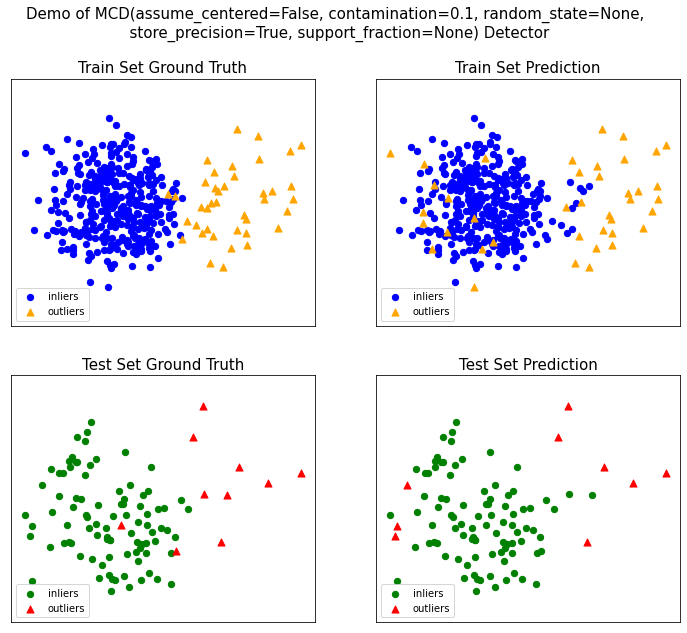

In [20]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
visualize(clf_name= clf,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_mcd,
        y_test_pred= y_test_mcd)
# YOUR CODE SHOULD COME HERE

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.8511, precision @ rank n:0.6


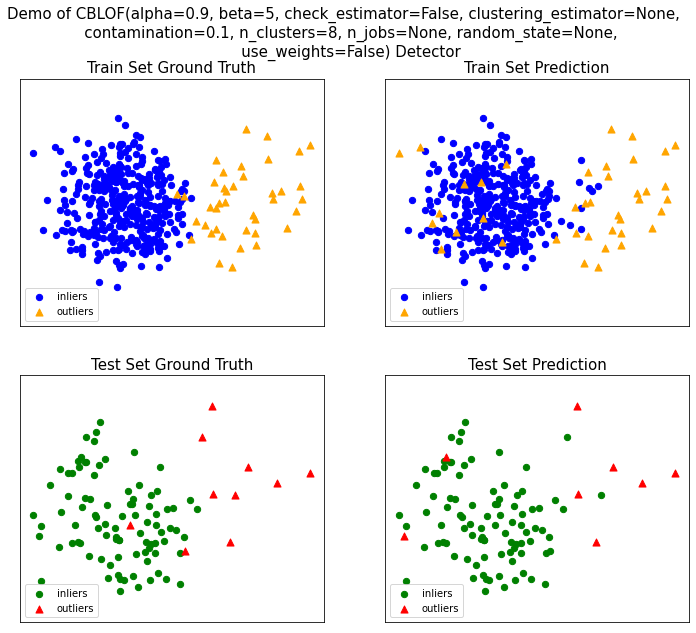

In [26]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

# ---CBLOF---
clf_cblof = CBLOF()
clf_cblof.fit(X_train)

y_train_cblof = clf_cblof.predict(X_train)
y_test_cblof = clf_cblof.predict(X_test)

y_test_score_cblof = clf_cblof.decision_function(X_test)
evaluate_print(clf_name= clf_cblof,y = y_test, y_pred = y_test_score_cblof)

visualize(clf_name= clf_cblof,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_cblof,
        y_test_pred= y_test_cblof)

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


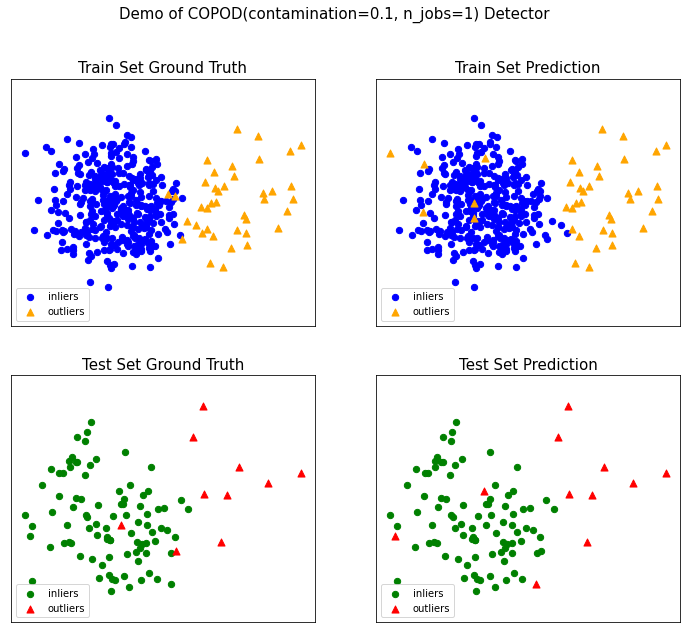

In [28]:
# ---COPOD---
clf_copod = COPOD()
clf_copod.fit(X_train)

y_train_copod = clf_copod.predict(X_train)
y_test_copod = clf_copod.predict(X_test)

y_test_score_copod = clf_copod.decision_function(X_test)
evaluate_print(clf_name= clf_copod,y = y_test, y_pred = y_test_score_copod)

visualize(clf_name= clf_copod,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_copod,
        y_test_pred= y_test_copod)

# Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

All the three models have high measure of ROC, but the ROC for COPOD is highest among the three. It appears that in this case COPOD is doing the best job in distinguishing the outliers from the inliers.

The results also report higher precision for COPOD as compared to other models (80% for COPOD). We can interpret this as - if COPOD predicts a data point as an outlier, it is correct 80% of the time.

Comparing the plots for train predictions, the false positives (assuming outlier is the positive class) is way less for COPOD as compared to MCD and CBLOF. The false negatives are also lower.

Comparing the plots of test predictions, the false positives are higher in CBLOF as compared to MCD and COPOD. For both CBLOF and MCD, there are many data points in the test set that are being classified as inliers but are actually outliers (false negatives). For COPOD, we can see higher true positives and lower false negatives as comapred to other models. Overall, COPOD appears to be doing the best job in correctly predicting both inliers and outliers, which is also backed up by our ROC and Precision measures.

# Question 4: PCA Conceptual questions (5 pts)

Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Principle Component Analysis is a linear and unsupervised feature extraction technique which reduces the dimensions of the data while also retaining information about the original data. The goal of PCA is to find a vector onto which to project the data so as to minimise projection error. 

To reduce $\vec{x} \epsilon R^n$ to $\vec{x} \epsilon R^k$ where (k< n), we find k vectors: $u_1$, $u_2$, $u_3$, $...$, $u_k$, and map all $\vec{x}$ to the span of [$u_1$, $u_2$, $u_3$, $...$, $u_k$]

**Step -1** Calculating Covarience Matrix ($\Sigma$)

**Step -2** Compute eigen-Vectors of Covarience matrix ($\Sigma$) by performing a single valued decomposition on it.

**Step -3** To compute the k - vectors, take the first k columns of the U eigenvector matrix (each column represents a vector)

$ U = [u_1, u_2, u_3, ..., u_{k-1}, u_{k}, u_{k+1}, ..., u_n]$

**Step -4** Reduced vector $\vec{z} = \vec{x}*U[:,:k]$ where $\vec{z} \epsilon R^k ; \vec{x} \epsilon R^n $ and $U[:,:k] \epsilon R^{n X k}$

We use the the orthogonal projection as it gives us the optimal solution which minimizes the reconstruction loss. The eigen vectors of a covariance matrix are orthogonal due to the symmetry of the covariance matrix and hence we can select the best projection bases based on the covariance matrix of the data. So if we consider the general case of an M-dimensional projection space, the optimal linear projection for which the variance of the projected data is maximized is defined by the M eigenvectors of the data covariance matrix S corresponding to the M largest eigenvalues.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [5]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [6]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [7]:
data_dm = data.copy()
data_dm["binned_yr_built"] = pd.cut(data_dm["YearBuilt"], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                    labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                    include_lowest=True)

In [8]:
data_dm = pd.get_dummies(data_dm, columns=["binned_yr_built"], prefix="Built")
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscVal,MoSold,YrSold,SalePrice,Built_1900-1920,Built_1920-1940,Built_1940-1960,Built_1960-1980,Built_1980-2000,Built_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,12,2008,250000,0,0,0,0,1,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [9]:
data_dm.drop(list(data_dm.columns[data_dm.isna().mean() > 0.65]), axis= 1, inplace= True)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MiscVal,MoSold,YrSold,SalePrice,Built_1900-1920,Built_1920-1940,Built_1940-1960,Built_1960-1980,Built_1980-2000,Built_2000-2020
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,12,2008,250000,0,0,0,0,1,0



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [10]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print("Sample Mean:", round(sample_ages.mean(),2))
#Population mean
print("Population Mean:", round(data_dm["SalePrice"].mean(),2))

Sample Mean: 178292.63
Population Mean: 180921.2


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [13]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
sample_std = sample.std()
z_critical = 1.96#*sample_std/sample_mean    # 95% ≈ 1.96 standard deviations

#Get population standard deviation
pop_stdev = data_dm["SalePrice"].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print("True mean value: {mean}\n95% confidence interval: {lower_bound} - {upper_bound}".format(mean = sample_mean,
                                                                                            lower_bound = round(confidence_interval[0],5),
                                                                                            upper_bound = round(confidence_interval[1],5)))


True mean value: 182092.53
95% confidence interval: 166521.79943 - 197663.26057


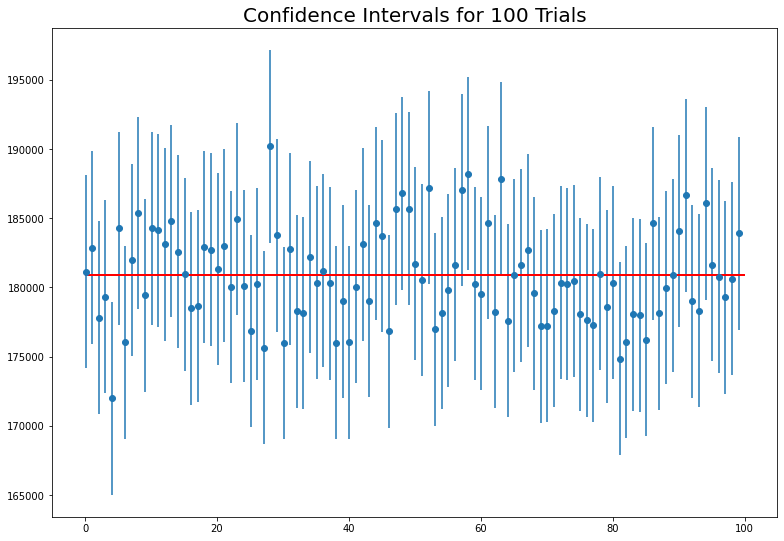

In [14]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    sample_std = sample.std()
    z_critical = 1.96#*sample_std/sample_mean    # 95% ≈ 1.96 standard deviations

    #Get population standard deviation
    pop_stdev = data_dm["SalePrice"].std()

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for bot,top in intervals],
             fmt='o')

# plt.hlines(xmin=0, xmax=25,
plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

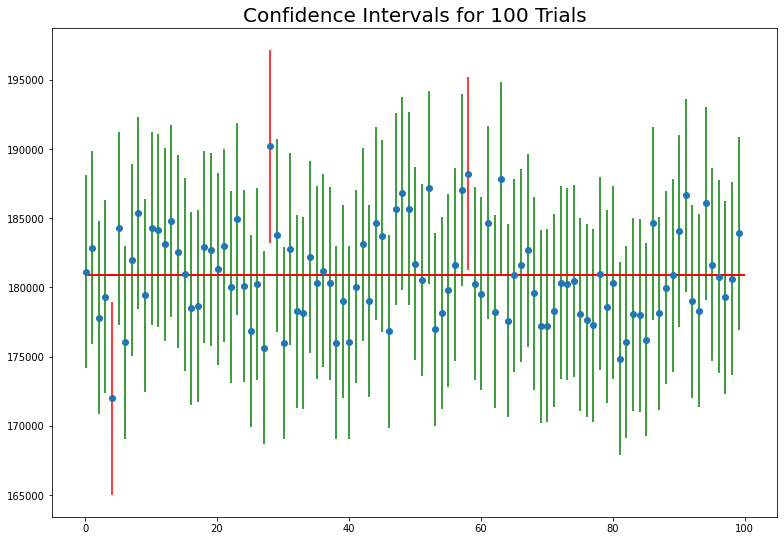

In [15]:
pop_mean = data['SalePrice'].mean()

pos_sample = []
pos_yerr = []

neg_sample = []
neg_yerr = []

for index, (bot, top) in enumerate(intervals):
    if ((top - pop_mean)*(bot - pop_mean) < 0):
        pos_sample.append(sample[index])
        pos_yerr.append((top-bot)/2)
    else:
        neg_sample.append(sample[index])
        neg_yerr.append((top-bot)/2)

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr= [(top-bot)/2 for bot,top in intervals],
             ecolor=["green" if (top - pop_mean)*(bot - pop_mean) < 0 else "red" for bot,top in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=pop_mean, 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

# Interpret